In [53]:
%pip install geopandas geojson

Note: you may need to restart the kernel to use updated packages.


In [54]:
%pip install shapely==1.8.5

Note: you may need to restart the kernel to use updated packages.


In [117]:
from geojson import Feature, Point, MultiPolygon, FeatureCollection
import geopandas, copy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from shapely.geometry import shape
from shapely.validation import make_valid, explain_validity

def ISODate(x):
    return x

def plotAR(doc):
    AR = doc['geolocation']
    raster = doc['raster']
    mp = shape(AR)
    print(explain_validity(mp))
    objects = [{'id': 1+i, 'geometry': shape({"type":"Point", "coordinates":[x[0], x[1]]})} for i, x in enumerate(raster)]
    #objects = []
    objects.append({'id':9999999,'geometry':mp})
    gdf = geopandas.GeoDataFrame(objects)
    gdf.plot(facecolor="none", edgecolor="black", markersize=10, figsize=(100,100))

def remap(AR):
    # move an AR from longitudes [-180, 180] to [0, 360]
    ar = copy.deepcopy(AR)
    for j, loop in enumerate(AR['geolocation']['coordinates']):
        for k, poly in enumerate(loop):
            for v, vertex in enumerate(poly):
                if vertex[0] < 0:
                    ar['geolocation']['coordinates'][j][k][v][0] += 360
    for i in range(len(AR['raster'])):
        if AR['raster'][i][0] < 0:
            r = (ar['raster'][i][0] + 360, ar['raster'][i][1], ar['raster'][i][2])
            ar['raster'][i] = r
    return ar

Ring Self-intersection[-99.0625 88.75]


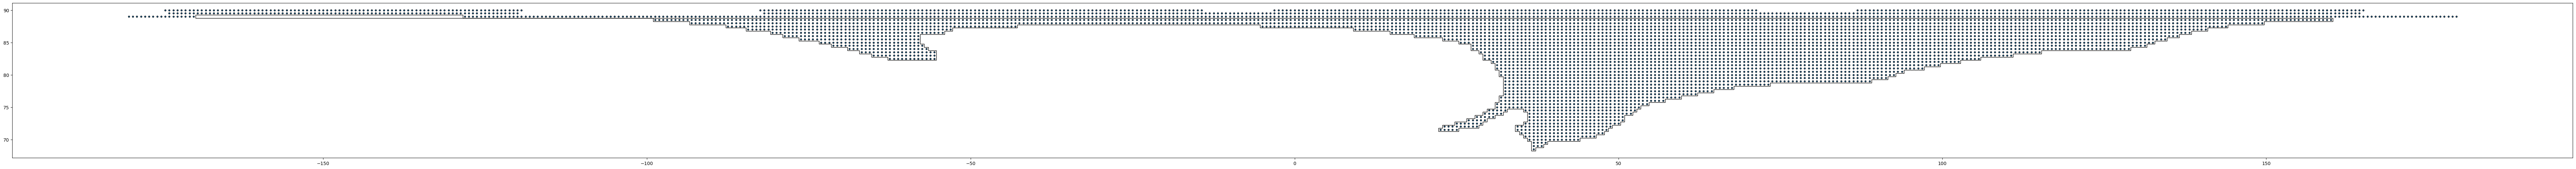

In [15]:
# annulus, north_pole, dateline
AR = { "_id" : "2000.07.021.09.0_25", "timestamp" : ISODate("2000-07-21T09:00:00Z"), "raster" : [ [ 36.875, 68.5, [ 250.2693328857422 ] ], [ 36.875, 69, [ 261.7423095703125 ] ], [ 37.5, 69, [ 265.3959655761719 ] ], [ 38.125, 69, [ 252.53233337402344 ] ], [ 36.875, 69.5, [ 261.25146484375 ] ], [ 37.5, 69.5, [ 279.4361877441406 ] ], [ 38.125, 69.5, [ 290.5284118652344 ] ], [ 38.75, 69.5, [ 272.93011474609375 ] ], [ 36.25, 70, [ 252.90208435058594 ] ], [ 36.875, 70, [ 276.3045959472656 ] ], [ 37.5, 70, [ 301.057373046875 ] ], [ 38.125, 70, [ 311.06573486328125 ] ], [ 38.75, 70, [ 308.2490234375 ] ], [ 39.375, 70, [ 295.0455017089844 ] ], [ 40, 70, [ 276.2925720214844 ] ], [ 40.625, 70, [ 259.9015197753906 ] ], [ 41.25, 70, [ 252.52972412109375 ] ], [ 41.875, 70, [ 252.25584411621094 ] ], [ 42.5, 70, [ 255.37501525878906 ] ], [ 43.125, 70, [ 255.9467010498047 ] ], [ 43.75, 70, [ 250.19012451171875 ] ], [ 35.625, 70.5, [ 252.85105895996094 ] ], [ 36.25, 70.5, [ 270.1895446777344 ] ], [ 36.875, 70.5, [ 291.91748046875 ] ], [ 37.5, 70.5, [ 314.74896240234375 ] ], [ 38.125, 70.5, [ 333.9007873535156 ] ], [ 38.75, 70.5, [ 345.70458984375 ] ], [ 39.375, 70.5, [ 349.1762390136719 ] ], [ 40, 70.5, [ 332.89300537109375 ] ], [ 40.625, 70.5, [ 315.6150817871094 ] ], [ 41.25, 70.5, [ 302.81671142578125 ] ], [ 41.875, 70.5, [ 295.3702392578125 ] ], [ 42.5, 70.5, [ 296.4536437988281 ] ], [ 43.125, 70.5, [ 296.48004150390625 ] ], [ 43.75, 70.5, [ 294.1368408203125 ] ], [ 44.375, 70.5, [ 287.427978515625 ] ], [ 45, 70.5, [ 280.4183654785156 ] ], [ 45.625, 70.5, [ 273.7734069824219 ] ], [ 46.25, 70.5, [ 259.562255859375 ] ], [ 35, 71, [ 258.1738586425781 ] ], [ 35.625, 71, [ 269.4723205566406 ] ], [ 36.25, 71, [ 284.49774169921875 ] ], [ 36.875, 71, [ 308.6053161621094 ] ], [ 37.5, 71, [ 336.27789306640625 ] ], [ 38.125, 71, [ 366.8077087402344 ] ], [ 38.75, 71, [ 390.6474304199219 ] ], [ 39.375, 71, [ 389.18499755859375 ] ], [ 40, 71, [ 379.7528381347656 ] ], [ 40.625, 71, [ 364.871826171875 ] ], [ 41.25, 71, [ 351.9626770019531 ] ], [ 41.875, 71, [ 346.4531555175781 ] ], [ 42.5, 71, [ 344.485595703125 ] ], [ 43.125, 71, [ 342.5213623046875 ] ], [ 43.75, 71, [ 339.9207763671875 ] ], [ 44.375, 71, [ 335.6188049316406 ] ], [ 45, 71, [ 326.68682861328125 ] ], [ 45.625, 71, [ 316.33197021484375 ] ], [ 46.25, 71, [ 305.4630432128906 ] ], [ 46.875, 71, [ 286.87652587890625 ] ], [ 47.5, 71, [ 255.7364959716797 ] ], [ 22.5, 71.5, [ 254.19976806640625 ] ], [ 23.125, 71.5, [ 253.4071044921875 ] ], [ 23.75, 71.5, [ 252.25973510742188 ] ], [ 24.375, 71.5, [ 251.76467895507812 ] ], [ 25, 71.5, [ 250.21707153320312 ] ], [ 34.375, 71.5, [ 256.294677734375 ] ], [ 35, 71.5, [ 266.9479064941406 ] ], [ 35.625, 71.5, [ 279.53472900390625 ] ], [ 36.25, 71.5, [ 295.8598327636719 ] ], [ 36.875, 71.5, [ 319.06402587890625 ] ], [ 37.5, 71.5, [ 353.3262023925781 ] ], [ 38.125, 71.5, [ 392.1383972167969 ] ], [ 38.75, 71.5, [ 416.9706726074219 ] ], [ 39.375, 71.5, [ 427.3460693359375 ] ], [ 40, 71.5, [ 424.1496276855469 ] ], [ 40.625, 71.5, [ 413.815185546875 ] ], [ 41.25, 71.5, [ 399.6349792480469 ] ], [ 41.875, 71.5, [ 392.4083251953125 ] ], [ 42.5, 71.5, [ 388.2279357910156 ] ], [ 43.125, 71.5, [ 387.2010192871094 ] ], [ 43.75, 71.5, [ 384.6226806640625 ] ], [ 44.375, 71.5, [ 377.5011291503906 ] ], [ 45, 71.5, [ 370.69256591796875 ] ], [ 45.625, 71.5, [ 362.6757507324219 ] ], [ 46.25, 71.5, [ 349.4815368652344 ] ], [ 46.875, 71.5, [ 331.16680908203125 ] ], [ 47.5, 71.5, [ 306.1814270019531 ] ], [ 48.125, 71.5, [ 267.6463623046875 ] ], [ 23.125, 72, [ 250.50662231445312 ] ], [ 23.75, 72, [ 264.1061096191406 ] ], [ 24.375, 72, [ 265.0043640136719 ] ], [ 25, 72, [ 266.07940673828125 ] ], [ 25.625, 72, [ 268.7893371582031 ] ], [ 26.25, 72, [ 266.21014404296875 ] ], [ 26.875, 72, [ 262.8652648925781 ] ], [ 27.5, 72, [ 259.0147399902344 ] ], [ 28.125, 72, [ 252.5567626953125 ] ], [ 34.375, 72, [ 250.8123016357422 ] ], [ 35, 72, [ 263.09259033203125 ] ], [ 35.625, 72, [ 277.6042175292969 ] ], [ 36.25, 72, [ 298.8236389160156 ] ], [ 36.875, 72, [ 327.18780517578125 ] ], [ 37.5, 72, [ 363.04449462890625 ] ], [ 38.125, 72, [ 399.54254150390625 ] ], [ 38.75, 72, [ 431.6838073730469 ] ], [ 39.375, 72, [ 458.24542236328125 ] ], [ 40, 72, [ 474.6012878417969 ] ], [ 40.625, 72, [ 457.9112854003906 ] ], [ 41.25, 72, [ 442.4690246582031 ] ], [ 41.875, 72, [ 430.277587890625 ] ], [ 42.5, 72, [ 421.58172607421875 ] ], [ 43.125, 72, [ 417.3013000488281 ] ], [ 43.75, 72, [ 414.56292724609375 ] ], [ 44.375, 72, [ 411.4020690917969 ] ], [ 45, 72, [ 405.63800048828125 ] ], [ 45.625, 72, [ 400.83905029296875 ] ], [ 46.25, 72, [ 392.86907958984375 ] ], [ 46.875, 72, [ 371.7344055175781 ] ], [ 47.5, 72, [ 344.86688232421875 ] ], [ 48.125, 72, [ 314.6897888183594 ] ], [ 48.75, 72, [ 279.405029296875 ] ], [ 25, 72.5, [ 258.1369323730469 ] ], [ 25.625, 72.5, [ 262.0567626953125 ] ], [ 26.25, 72.5, [ 267.9448547363281 ] ], [ 26.875, 72.5, [ 275.9990539550781 ] ], [ 27.5, 72.5, [ 273.7895812988281 ] ], [ 28.125, 72.5, [ 267.33428955078125 ] ], [ 28.75, 72.5, [ 258.0166320800781 ] ], [ 35.625, 72.5, [ 264.77178955078125 ] ], [ 36.25, 72.5, [ 286.2655334472656 ] ], [ 36.875, 72.5, [ 316.7339172363281 ] ], [ 37.5, 72.5, [ 355.3434143066406 ] ], [ 38.125, 72.5, [ 399.7594909667969 ] ], [ 38.75, 72.5, [ 441.1670227050781 ] ], [ 39.375, 72.5, [ 471.8372802734375 ] ], [ 40, 72.5, [ 477.1720886230469 ] ], [ 40.625, 72.5, [ 476.6336975097656 ] ], [ 41.25, 72.5, [ 465.31646728515625 ] ], [ 41.875, 72.5, [ 451.9900817871094 ] ], [ 42.5, 72.5, [ 440.37811279296875 ] ], [ 43.125, 72.5, [ 433.83636474609375 ] ], [ 43.75, 72.5, [ 429.1762390136719 ] ], [ 44.375, 72.5, [ 426.1539611816406 ] ], [ 45, 72.5, [ 424.7724609375 ] ], [ 45.625, 72.5, [ 420.5530700683594 ] ], [ 46.25, 72.5, [ 411.9862976074219 ] ], [ 46.875, 72.5, [ 401.44793701171875 ] ], [ 47.5, 72.5, [ 386.4031677246094 ] ], [ 48.125, 72.5, [ 359.45111083984375 ] ], [ 48.75, 72.5, [ 327.660400390625 ] ], [ 49.375, 72.5, [ 290.4105529785156 ] ], [ 50, 72.5, [ 250.26177978515625 ] ], [ 26.875, 73, [ 254.71713256835938 ] ], [ 27.5, 73, [ 264.7569274902344 ] ], [ 28.125, 73, [ 275.4870910644531 ] ], [ 28.75, 73, [ 272.52105712890625 ] ], [ 29.375, 73, [ 259.5724792480469 ] ], [ 36.25, 73, [ 269.13922119140625 ] ], [ 36.875, 73, [ 299.7001953125 ] ], [ 37.5, 73, [ 339.37451171875 ] ], [ 38.125, 73, [ 383.69091796875 ] ], [ 38.75, 73, [ 429.2387390136719 ] ], [ 39.375, 73, [ 461.437744140625 ] ], [ 40, 73, [ 476.05145263671875 ] ], [ 40.625, 73, [ 483.3666687011719 ] ], [ 41.25, 73, [ 483.3106994628906 ] ], [ 41.875, 73, [ 471.8561706542969 ] ], [ 42.5, 73, [ 456.3005065917969 ] ], [ 43.125, 73, [ 443.1422119140625 ] ], [ 43.75, 73, [ 432.4337463378906 ] ], [ 44.375, 73, [ 423.4244689941406 ] ], [ 45, 73, [ 418.8832702636719 ] ], [ 45.625, 73, [ 416.8894348144531 ] ], [ 46.25, 73, [ 415.95458984375 ] ], [ 46.875, 73, [ 412.1622314453125 ] ], [ 47.5, 73, [ 406.03173828125 ] ], [ 48.125, 73, [ 393.96844482421875 ] ], [ 48.75, 73, [ 363.05718994140625 ] ], [ 49.375, 73, [ 326.215576171875 ] ], [ 50, 73, [ 289.15228271484375 ] ], [ 50.625, 73, [ 251.703369140625 ] ], [ 28.125, 73.5, [ 252.55552673339844 ] ], [ 28.75, 73.5, [ 262.3235168457031 ] ], [ 29.375, 73.5, [ 271.045654296875 ] ], [ 30, 73.5, [ 271.13037109375 ] ], [ 30.625, 73.5, [ 253.9539794921875 ] ], [ 36.25, 73.5, [ 261.07379150390625 ] ], [ 36.875, 73.5, [ 290.4974060058594 ] ], [ 37.5, 73.5, [ 325.1695861816406 ] ], [ 38.125, 73.5, [ 364.0113830566406 ] ], [ 38.75, 73.5, [ 403.1712341308594 ] ], [ 39.375, 73.5, [ 441.046630859375 ] ], [ 40, 73.5, [ 477.3296813964844 ] ], [ 40.625, 73.5, [ 499.1824951171875 ] ], [ 41.25, 73.5, [ 493.5028076171875 ] ], [ 41.875, 73.5, [ 482.4594421386719 ] ], [ 42.5, 73.5, [ 469.5752868652344 ] ], [ 43.125, 73.5, [ 452.03863525390625 ] ], [ 43.75, 73.5, [ 434.60394287109375 ] ], [ 44.375, 73.5, [ 422.39794921875 ] ], [ 45, 73.5, [ 413.6299743652344 ] ], [ 45.625, 73.5, [ 409.7416076660156 ] ], [ 46.25, 73.5, [ 407.89703369140625 ] ], [ 46.875, 73.5, [ 407.9188537597656 ] ], [ 47.5, 73.5, [ 404.6287536621094 ] ], [ 48.125, 73.5, [ 391.2455749511719 ] ], [ 48.75, 73.5, [ 373.9075622558594 ] ], [ 49.375, 73.5, [ 352.9748229980469 ] ], [ 50, 73.5, [ 321.6094055175781 ] ], [ 50.625, 73.5, [ 286.70269775390625 ] ], [ 29.375, 74, [ 258.99658203125 ] ], [ 30, 74, [ 263.9740905761719 ] ], [ 30.625, 74, [ 265.814453125 ] ], [ 31.25, 74, [ 263.5348815917969 ] ], [ 31.875, 74, [ 250.05709838867188 ] ], [ 36.25, 74, [ 258.39642333984375 ] ], [ 36.875, 74, [ 279.9187927246094 ] ], [ 37.5, 74, [ 312.19049072265625 ] ], [ 38.125, 74, [ 347.6276550292969 ] ], [ 38.75, 74, [ 383.3904724121094 ] ], [ 39.375, 74, [ 412.9389953613281 ] ], [ 40, 74, [ 439.5058898925781 ] ], [ 40.625, 74, [ 457.6044006347656 ] ], [ 41.25, 74, [ 470.0859680175781 ] ], [ 41.875, 74, [ 471.0098571777344 ] ], [ 42.5, 74, [ 468.5429382324219 ] ], [ 43.125, 74, [ 462.0624694824219 ] ], [ 43.75, 74, [ 444.293212890625 ] ], [ 44.375, 74, [ 427.529541015625 ] ], [ 45, 74, [ 413.67547607421875 ] ], [ 45.625, 74, [ 402.4826354980469 ] ], [ 46.25, 74, [ 395.22174072265625 ] ], [ 46.875, 74, [ 393.6143493652344 ] ], [ 47.5, 74, [ 391.9648742675781 ] ], [ 48.125, 74, [ 388.44683837890625 ] ], [ 48.75, 74, [ 379.80804443359375 ] ], [ 49.375, 74, [ 365.9181213378906 ] ], [ 50, 74, [ 348.4690856933594 ] ], [ 50.625, 74, [ 323.8948974609375 ] ], [ 51.25, 74, [ 286.3499450683594 ] ], [ 51.875, 74, [ 251.33140563964844 ] ], [ 30, 74.5, [ 258.0082702636719 ] ], [ 30.625, 74.5, [ 278.6760559082031 ] ], [ 31.25, 74.5, [ 275.3379211425781 ] ], [ 31.875, 74.5, [ 268.2381591796875 ] ], [ 32.5, 74.5, [ 257.91900634765625 ] ], [ 35.625, 74.5, [ 256.04974365234375 ] ], [ 36.25, 74.5, [ 272.47161865234375 ] ], [ 36.875, 74.5, [ 293.91253662109375 ] ], [ 37.5, 74.5, [ 314.9645690917969 ] ], [ 38.125, 74.5, [ 336.3389587402344 ] ], [ 38.75, 74.5, [ 357.9046936035156 ] ], [ 39.375, 74.5, [ 382.97747802734375 ] ], [ 40, 74.5, [ 403.9286804199219 ] ], [ 40.625, 74.5, [ 419.9642028808594 ] ], [ 41.25, 74.5, [ 433.4004211425781 ] ], [ 41.875, 74.5, [ 444.1999206542969 ] ], [ 42.5, 74.5, [ 447.0340881347656 ] ], [ 43.125, 74.5, [ 440.4518127441406 ] ], [ 43.75, 74.5, [ 431.8727111816406 ] ], [ 44.375, 74.5, [ 421.4345703125 ] ], [ 45, 74.5, [ 411.10333251953125 ] ], [ 45.625, 74.5, [ 403.06585693359375 ] ], [ 46.25, 74.5, [ 396.66436767578125 ] ], [ 46.875, 74.5, [ 391.94610595703125 ] ], [ 47.5, 74.5, [ 390.0754699707031 ] ], [ 48.125, 74.5, [ 388.8108215332031 ] ], [ 48.75, 74.5, [ 386.5053405761719 ] ], [ 49.375, 74.5, [ 383.03472900390625 ] ], [ 50, 74.5, [ 366.9497375488281 ] ], [ 50.625, 74.5, [ 343.7762451171875 ] ], [ 51.25, 74.5, [ 318.2244567871094 ] ], [ 51.875, 74.5, [ 290.475830078125 ] ], [ 52.5, 74.5, [ 258.8951416015625 ] ], [ 31.25, 75, [ 272.9892272949219 ] ], [ 31.875, 75, [ 295.92681884765625 ] ], [ 32.5, 75, [ 296.5616760253906 ] ], [ 33.125, 75, [ 283.78765869140625 ] ], [ 33.75, 75, [ 272.2174377441406 ] ], [ 34.375, 75, [ 261.868408203125 ] ], [ 35, 75, [ 253.5438690185547 ] ], [ 35.625, 75, [ 267.3979797363281 ] ], [ 36.25, 75, [ 284.51416015625 ] ], [ 36.875, 75, [ 303.0478210449219 ] ], [ 37.5, 75, [ 323.10595703125 ] ], [ 38.125, 75, [ 342.6362609863281 ] ], [ 38.75, 75, [ 357.8731689453125 ] ], [ 39.375, 75, [ 371.9486999511719 ] ], [ 40, 75, [ 384.8658142089844 ] ], [ 40.625, 75, [ 396.4565124511719 ] ], [ 41.25, 75, [ 402.2664794921875 ] ], [ 41.875, 75, [ 409.3658142089844 ] ], [ 42.5, 75, [ 415.2811279296875 ] ], [ 43.125, 75, [ 419.1928405761719 ] ], [ 43.75, 75, [ 419.0146179199219 ] ], [ 44.375, 75, [ 416.6238708496094 ] ], [ 45, 75, [ 412.24908447265625 ] ], [ 45.625, 75, [ 403.3591613769531 ] ], [ 46.25, 75, [ 397.6728515625 ] ], [ 46.875, 75, [ 394.94256591796875 ] ], [ 47.5, 75, [ 393.9057312011719 ] ], [ 48.125, 75, [ 394.4666748046875 ] ], [ 48.75, 75, [ 395.8189392089844 ] ], [ 49.375, 75, [ 391.81756591796875 ] ], [ 50, 75, [ 384.2093200683594 ] ], [ 50.625, 75, [ 373.6061096191406 ] ], [ 51.25, 75, [ 351.7074890136719 ] ], [ 51.875, 75, [ 325.559814453125 ] ], [ 52.5, 75, [ 297.729736328125 ] ], [ 53.125, 75, [ 268.7913818359375 ] ], [ 31.25, 75.5, [ 266.7099609375 ] ], [ 31.875, 75.5, [ 286.0609130859375 ] ], [ 32.5, 75.5, [ 299.29296875 ] ], [ 33.125, 75.5, [ 304.8648986816406 ] ], [ 33.75, 75.5, [ 304.171142578125 ] ], [ 34.375, 75.5, [ 298.7660827636719 ] ], [ 35, 75.5, [ 295.088134765625 ] ], [ 35.625, 75.5, [ 295.3671569824219 ] ], [ 36.25, 75.5, [ 301.1456298828125 ] ], [ 36.875, 75.5, [ 311.912109375 ] ], [ 37.5, 75.5, [ 327.921142578125 ] ], [ 38.125, 75.5, [ 345.4648132324219 ] ], [ 38.75, 75.5, [ 361.6375427246094 ] ], [ 39.375, 75.5, [ 371.9971008300781 ] ], [ 40, 75.5, [ 379.5292663574219 ] ], [ 40.625, 75.5, [ 385.72149658203125 ] ], [ 41.25, 75.5, [ 391.9222717285156 ] ], [ 41.875, 75.5, [ 396.8193359375 ] ], [ 42.5, 75.5, [ 399.1033020019531 ] ], [ 43.125, 75.5, [ 400.7671813964844 ] ], [ 43.75, 75.5, [ 401.7908020019531 ] ], [ 44.375, 75.5, [ 401.829833984375 ] ], [ 45, 75.5, [ 397.3016662597656 ] ], [ 45.625, 75.5, [ 393.19500732421875 ] ], [ 46.25, 75.5, [ 389.9002685546875 ] ], [ 46.875, 75.5, [ 387.443359375 ] ], [ 47.5, 75.5, [ 391.15081787109375 ] ], [ 48.125, 75.5, [ 397.3701477050781 ] ], [ 48.75, 75.5, [ 401.0638732910156 ] ], [ 49.375, 75.5, [ 403.6658630371094 ] ], [ 50, 75.5, [ 401.3122863769531 ] ], [ 50.625, 75.5, [ 394.16253662109375 ] ], [ 51.25, 75.5, [ 384.1392517089844 ] ], [ 51.875, 75.5, [ 371.5624084472656 ] ], [ 52.5, 75.5, [ 347.9906311035156 ] ], [ 53.125, 75.5, [ 316.9878845214844 ] ], [ 53.75, 75.5, [ 288.31195068359375 ] ], [ 54.375, 75.5, [ 261.7377624511719 ] ], [ 31.875, 76, [ 268.8399963378906 ] ], [ 32.5, 76, [ 308.38177490234375 ] ], [ 33.125, 76, [ 338.63800048828125 ] ], [ 33.75, 76, [ 338.1468200683594 ] ], [ 34.375, 76, [ 330.47540283203125 ] ], [ 35, 76, [ 322.6556396484375 ] ], [ 35.625, 76, [ 315.3915100097656 ] ], [ 36.25, 76, [ 310.4884033203125 ] ], [ 36.875, 76, [ 320.6452331542969 ] ], [ 37.5, 76, [ 334.5715026855469 ] ], [ 38.125, 76, [ 348.8098449707031 ] ], [ 38.75, 76, [ 362.99420166015625 ] ], [ 39.375, 76, [ 377.149658203125 ] ], [ 40, 76, [ 386.7163391113281 ] ], [ 40.625, 76, [ 389.1388854980469 ] ], [ 41.25, 76, [ 391.0258483886719 ] ], [ 41.875, 76, [ 392.4510192871094 ] ], [ 42.5, 76, [ 393.4986267089844 ] ], [ 43.125, 76, [ 392.70635986328125 ] ], [ 43.75, 76, [ 390.7187805175781 ] ], [ 44.375, 76, [ 387.97100830078125 ] ], [ 45, 76, [ 384.33837890625 ] ], [ 45.625, 76, [ 379.8887023925781 ] ], [ 46.25, 76, [ 377.9137268066406 ] ], [ 46.875, 76, [ 377.7979736328125 ] ], [ 47.5, 76, [ 380.5400695800781 ] ], [ 48.125, 76, [ 385.5896911621094 ] ], [ 48.75, 76, [ 395.047607421875 ] ], [ 49.375, 76, [ 404.442626953125 ] ], [ 50, 76, [ 411.7308044433594 ] ], [ 50.625, 76, [ 416.8798522949219 ] ], [ 51.25, 76, [ 414.5428161621094 ] ], [ 51.875, 76, [ 401.6619873046875 ] ], [ 52.5, 76, [ 382.5666198730469 ] ], [ 53.125, 76, [ 361.32525634765625 ] ], [ 53.75, 76, [ 337.7645568847656 ] ], [ 54.375, 76, [ 314.7334899902344 ] ], [ 55, 76, [ 293.760498046875 ] ], [ 55.625, 76, [ 274.7247314453125 ] ], [ 56.25, 76, [ 261.0350341796875 ] ], [ 56.875, 76, [ 251.97384643554688 ] ], [ 31.875, 76.5, [ 250.3902130126953 ] ], [ 32.5, 76.5, [ 283.4429931640625 ] ], [ 33.125, 76.5, [ 311.42413330078125 ] ], [ 33.75, 76.5, [ 333.5578918457031 ] ], [ 34.375, 76.5, [ 349.3363342285156 ] ], [ 35, 76.5, [ 357.8295593261719 ] ], [ 35.625, 76.5, [ 351.42303466796875 ] ], [ 36.25, 76.5, [ 346.2077331542969 ] ], [ 36.875, 76.5, [ 343.94317626953125 ] ], [ 37.5, 76.5, [ 344.6391296386719 ] ], [ 38.125, 76.5, [ 348.22821044921875 ] ], [ 38.75, 76.5, [ 356.673095703125 ] ], [ 39.375, 76.5, [ 368.463134765625 ] ], [ 40, 76.5, [ 378.578125 ] ], [ 40.625, 76.5, [ 387.0413818359375 ] ], [ 41.25, 76.5, [ 393.4523620605469 ] ], [ 41.875, 76.5, [ 395.9494323730469 ] ], [ 42.5, 76.5, [ 396.37158203125 ] ], [ 43.125, 76.5, [ 394.6660461425781 ] ], [ 43.75, 76.5, [ 392.3709716796875 ] ], [ 44.375, 76.5, [ 387.8411865234375 ] ], [ 45, 76.5, [ 380.84527587890625 ] ], [ 45.625, 76.5, [ 373.77410888671875 ] ], [ 46.25, 76.5, [ 366.7674560546875 ] ], [ 46.875, 76.5, [ 364.17559814453125 ] ], [ 47.5, 76.5, [ 370.4576416015625 ] ], [ 48.125, 76.5, [ 379.6114807128906 ] ], [ 48.75, 76.5, [ 390.54852294921875 ] ], [ 49.375, 76.5, [ 403.1267395019531 ] ], [ 50, 76.5, [ 416.58447265625 ] ], [ 50.625, 76.5, [ 428.1432189941406 ] ], [ 51.25, 76.5, [ 431.4757995605469 ] ], [ 51.875, 76.5, [ 429.9469909667969 ] ], [ 52.5, 76.5, [ 421.91217041015625 ] ], [ 53.125, 76.5, [ 402.6388854980469 ] ], [ 53.75, 76.5, [ 382.4185485839844 ] ], [ 54.375, 76.5, [ 361.32904052734375 ] ], [ 55, 76.5, [ 340.0577392578125 ] ], [ 55.625, 76.5, [ 324.27227783203125 ] ], [ 56.25, 76.5, [ 310.1602783203125 ] ], [ 56.875, 76.5, [ 297.8115539550781 ] ], [ 57.5, 76.5, [ 286.8660583496094 ] ], [ 58.125, 76.5, [ 277.6537780761719 ] ], [ 58.75, 76.5, [ 268.0579528808594 ] ], [ 59.375, 76.5, [ 258.10107421875 ] ], [ 32.5, 77, [ 274.99835205078125 ] ], [ 33.125, 77, [ 310.34051513671875 ] ], [ 33.75, 77, [ 344.2817687988281 ] ], [ 34.375, 77, [ 361.99072265625 ] ], [ 35, 77, [ 368.19970703125 ] ], [ 35.625, 77, [ 369.8180847167969 ] ], [ 36.25, 77, [ 365.9155578613281 ] ], [ 36.875, 77, [ 358.49224853515625 ] ], [ 37.5, 77, [ 351.6690673828125 ] ], [ 38.125, 77, [ 355.06964111328125 ] ], [ 38.75, 77, [ 360.66802978515625 ] ], [ 39.375, 77, [ 368.4150085449219 ] ], [ 40, 77, [ 376.2784118652344 ] ], [ 40.625, 77, [ 383.9884338378906 ] ], [ 41.25, 77, [ 391.1780700683594 ] ], [ 41.875, 77, [ 394.5224914550781 ] ], [ 42.5, 77, [ 396.7349853515625 ] ], [ 43.125, 77, [ 393.96014404296875 ] ], [ 43.75, 77, [ 390.38519287109375 ] ], [ 44.375, 77, [ 385.86773681640625 ] ], [ 45, 77, [ 380.4706726074219 ] ], [ 45.625, 77, [ 374.46990966796875 ] ], [ 46.25, 77, [ 370.3086853027344 ] ], [ 46.875, 77, [ 368.0196228027344 ] ], [ 47.5, 77, [ 367.688720703125 ] ], [ 48.125, 77, [ 369.54595947265625 ] ], [ 48.75, 77, [ 379.9976501464844 ] ], [ 49.375, 77, [ 395.7168273925781 ] ], [ 50, 77, [ 412.8037109375 ] ], [ 50.625, 77, [ 428.3723449707031 ] ], [ 51.25, 77, [ 440.280517578125 ] ], [ 51.875, 77, [ 440.9421081542969 ] ], [ 52.5, 77, [ 438.2515869140625 ] ], [ 53.125, 77, [ 432.39044189453125 ] ], [ 53.75, 77, [ 423.66802978515625 ] ], [ 54.375, 77, [ 407.9259033203125 ] ], [ 55, 77, [ 390.7362365722656 ] ], [ 55.625, 77, [ 371.8069763183594 ] ], [ 56.25, 77, [ 353.84600830078125 ] ], [ 56.875, 77, [ 340.6002502441406 ] ], [ 57.5, 77, [ 330.5822448730469 ] ], [ 58.125, 77, [ 321.22406005859375 ] ], [ 58.75, 77, [ 312.4241943359375 ] ], [ 59.375, 77, [ 302.8056945800781 ] ], [ 60, 77, [ 290.8721618652344 ] ], [ 60.625, 77, [ 278.24786376953125 ] ], [ 61.25, 77, [ 265.04736328125 ] ], [ 61.875, 77, [ 250.90977478027344 ] ], [ 32.5, 77.5, [ 261.180419921875 ] ], [ 33.125, 77.5, [ 293.0785827636719 ] ], [ 33.75, 77.5, [ 324.5296325683594 ] ], [ 34.375, 77.5, [ 347.6228942871094 ] ], [ 35, 77.5, [ 367.1831970214844 ] ], [ 35.625, 77.5, [ 382.8078918457031 ] ], [ 36.25, 77.5, [ 394.2503662109375 ] ], [ 36.875, 77.5, [ 388.8941650390625 ] ], [ 37.5, 77.5, [ 381.633544921875 ] ], [ 38.125, 77.5, [ 374.69134521484375 ] ], [ 38.75, 77.5, [ 369.5790710449219 ] ], [ 39.375, 77.5, [ 366.1519775390625 ] ], [ 40, 77.5, [ 364.4431457519531 ] ], [ 40.625, 77.5, [ 370.8934326171875 ] ], [ 41.25, 77.5, [ 376.78173828125 ] ], [ 41.875, 77.5, [ 381.5023498535156 ] ], [ 42.5, 77.5, [ 385.0531311035156 ] ], [ 43.125, 77.5, [ 387.513916015625 ] ], [ 43.75, 77.5, [ 388.8911437988281 ] ], [ 44.375, 77.5, [ 384.66693115234375 ] ], [ 45, 77.5, [ 378.0113525390625 ] ], [ 45.625, 77.5, [ 371.6901550292969 ] ], [ 46.25, 77.5, [ 365.8254089355469 ] ], [ 46.875, 77.5, [ 360.38470458984375 ] ], [ 47.5, 77.5, [ 363.9268798828125 ] ], [ 48.125, 77.5, [ 369.6316223144531 ] ], [ 48.75, 77.5, [ 377.6080627441406 ] ], [ 49.375, 77.5, [ 389.3722229003906 ] ], [ 50, 77.5, [ 403.8348083496094 ] ], [ 50.625, 77.5, [ 419.3641357421875 ] ], [ 51.25, 77.5, [ 433.2100830078125 ] ], [ 51.875, 77.5, [ 445.31597900390625 ] ], [ 52.5, 77.5, [ 455.6951904296875 ] ], [ 53.125, 77.5, [ 454.6380920410156 ] ], [ 53.75, 77.5, [ 447.2268981933594 ] ], [ 54.375, 77.5, [ 436.3169250488281 ] ], [ 55, 77.5, [ 421.3733215332031 ] ], [ 55.625, 77.5, [ 406.16546630859375 ] ], [ 56.25, 77.5, [ 391.83856201171875 ] ], [ 56.875, 77.5, [ 378.71539306640625 ] ], [ 57.5, 77.5, [ 366.8294982910156 ] ], [ 58.125, 77.5, [ 356.0732116699219 ] ], [ 58.75, 77.5, [ 349.0566101074219 ] ], [ 59.375, 77.5, [ 342.642578125 ] ], [ 60, 77.5, [ 336.36834716796875 ] ], [ 60.625, 77.5, [ 330.1739501953125 ] ], [ 61.25, 77.5, [ 320.15814208984375 ] ], [ 61.875, 77.5, [ 307.4902648925781 ] ], [ 62.5, 77.5, [ 294.7545166015625 ] ], [ 63.125, 77.5, [ 281.9191589355469 ] ], [ 63.75, 77.5, [ 269.240966796875 ] ], [ 64.375, 77.5, [ 257.472900390625 ] ], [ 32.5, 78, [ 263.3338623046875 ] ], [ 33.125, 78, [ 288.6161193847656 ] ], [ 33.75, 78, [ 313.7714538574219 ] ], [ 34.375, 78, [ 338.73309326171875 ] ], [ 35, 78, [ 362.7462158203125 ] ], [ 35.625, 78, [ 373.8819885253906 ] ], [ 36.25, 78, [ 381.43707275390625 ] ], [ 36.875, 78, [ 386.02581787109375 ] ], [ 37.5, 78, [ 387.7124938964844 ] ], [ 38.125, 78, [ 386.50421142578125 ] ], [ 38.75, 78, [ 382.76519775390625 ] ], [ 39.375, 78, [ 379.88934326171875 ] ], [ 40, 78, [ 378.3294982910156 ] ], [ 40.625, 78, [ 377.7276611328125 ] ], [ 41.25, 78, [ 378.023681640625 ] ], [ 41.875, 78, [ 379.2716064453125 ] ], [ 42.5, 78, [ 378.4964599609375 ] ], [ 43.125, 78, [ 376.9870300292969 ] ], [ 43.75, 78, [ 375.51348876953125 ] ], [ 44.375, 78, [ 373.0516052246094 ] ], [ 45, 78, [ 369.523681640625 ] ], [ 45.625, 78, [ 365.554443359375 ] ], [ 46.25, 78, [ 362.3587341308594 ] ], [ 46.875, 78, [ 359.9236145019531 ] ], [ 47.5, 78, [ 358.21917724609375 ] ], [ 48.125, 78, [ 358.6944274902344 ] ], [ 48.75, 78, [ 367.4396057128906 ] ], [ 49.375, 78, [ 380.9902648925781 ] ], [ 50, 78, [ 395.602783203125 ] ], [ 50.625, 78, [ 411.19677734375 ] ], [ 51.25, 78, [ 427.7133483886719 ] ], [ 51.875, 78, [ 439.1654052734375 ] ], [ 52.5, 78, [ 447.20941162109375 ] ], [ 53.125, 78, [ 453.4380798339844 ] ], [ 53.75, 78, [ 453.5711669921875 ] ], [ 54.375, 78, [ 450.732666015625 ] ], [ 55, 78, [ 437.7070007324219 ] ], [ 55.625, 78, [ 424.78326416015625 ] ], [ 56.25, 78, [ 411.87664794921875 ] ], [ 56.875, 78, [ 399.07568359375 ] ], [ 57.5, 78, [ 388.173583984375 ] ], [ 58.125, 78, [ 380.61737060546875 ] ], [ 58.75, 78, [ 374.2224426269531 ] ], [ 59.375, 78, [ 369.01959228515625 ] ], [ 60, 78, [ 364.44342041015625 ] ], [ 60.625, 78, [ 360.5079650878906 ] ], [ 61.25, 78, [ 355.9105224609375 ] ], [ 61.875, 78, [ 350.59649658203125 ] ], [ 62.5, 78, [ 344.5752258300781 ] ], [ 63.125, 78, [ 336.0193786621094 ] ], [ 63.75, 78, [ 325.570556640625 ] ], [ 64.375, 78, [ 314.97113037109375 ] ], [ 65, 78, [ 304.33612060546875 ] ], [ 65.625, 78, [ 293.3347473144531 ] ], [ 66.25, 78, [ 280.9014587402344 ] ], [ 66.875, 78, [ 268.8290710449219 ] ], [ 67.5, 78, [ 257.17822265625 ] ], [ 32.5, 78.5, [ 265.2254638671875 ] ], [ 33.125, 78.5, [ 289.3698425292969 ] ], [ 33.75, 78.5, [ 312.3132629394531 ] ], [ 34.375, 78.5, [ 331.063232421875 ] ], [ 35, 78.5, [ 348.9233093261719 ] ], [ 35.625, 78.5, [ 365.7086486816406 ] ], [ 36.25, 78.5, [ 381.32025146484375 ] ], [ 36.875, 78.5, [ 390.5299377441406 ] ], [ 37.5, 78.5, [ 398.03485107421875 ] ], [ 38.125, 78.5, [ 398.7118835449219 ] ], [ 38.75, 78.5, [ 396.3481140136719 ] ], [ 39.375, 78.5, [ 393.521240234375 ] ], [ 40, 78.5, [ 390.1401062011719 ] ], [ 40.625, 78.5, [ 385.75048828125 ] ], [ 41.25, 78.5, [ 381.4933166503906 ] ], [ 41.875, 78.5, [ 377.3625183105469 ] ], [ 42.5, 78.5, [ 376.3525085449219 ] ], [ 43.125, 78.5, [ 375.53326416015625 ] ], [ 43.75, 78.5, [ 373.1746520996094 ] ], [ 44.375, 78.5, [ 369.1087341308594 ] ], [ 45, 78.5, [ 364.5265197753906 ] ], [ 45.625, 78.5, [ 359.4573669433594 ] ], [ 46.25, 78.5, [ 353.7572326660156 ] ], [ 46.875, 78.5, [ 349.103515625 ] ], [ 47.5, 78.5, [ 352.27056884765625 ] ], [ 48.125, 78.5, [ 356.98040771484375 ] ], [ 48.75, 78.5, [ 363.24951171875 ] ], [ 49.375, 78.5, [ 371.1897277832031 ] ], [ 50, 78.5, [ 380.83917236328125 ] ], [ 50.625, 78.5, [ 394.5964050292969 ] ], [ 51.25, 78.5, [ 408.57293701171875 ] ], [ 51.875, 78.5, [ 422.7524108886719 ] ], [ 52.5, 78.5, [ 435.56646728515625 ] ], [ 53.125, 78.5, [ 445.87353515625 ] ], [ 53.75, 78.5, [ 443.98382568359375 ] ], [ 54.375, 78.5, [ 440.54095458984375 ] ], [ 55, 78.5, [ 435.6064147949219 ] ], [ 55.625, 78.5, [ 429.26629638671875 ] ], [ 56.25, 78.5, [ 420.9229431152344 ] ], [ 56.875, 78.5, [ 409.47222900390625 ] ], [ 57.5, 78.5, [ 398.1728515625 ] ], [ 58.125, 78.5, [ 387.119384765625 ] ], [ 58.75, 78.5, [ 376.1846618652344 ] ], [ 59.375, 78.5, [ 369.5216369628906 ] ], [ 60, 78.5, [ 367.28045654296875 ] ], [ 60.625, 78.5, [ 365.40948486328125 ] ], [ 61.25, 78.5, [ 363.8421325683594 ] ], [ 61.875, 78.5, [ 362.60400390625 ] ], [ 62.5, 78.5, [ 361.8653259277344 ] ], [ 63.125, 78.5, [ 360.4187927246094 ] ], [ 63.75, 78.5, [ 358.1306457519531 ] ], [ 64.375, 78.5, [ 355.1201171875 ] ], [ 65, 78.5, [ 350.54803466796875 ] ], [ 65.625, 78.5, [ 342.9278259277344 ] ], [ 66.25, 78.5, [ 334.7428283691406 ] ], [ 66.875, 78.5, [ 326.1094055175781 ] ], [ 67.5, 78.5, [ 317.1510314941406 ] ], [ 68.125, 78.5, [ 307.554443359375 ] ], [ 68.75, 78.5, [ 297.8437194824219 ] ], [ 69.375, 78.5, [ 288.1920166015625 ] ], [ 70, 78.5, [ 279.3085021972656 ] ], [ 70.625, 78.5, [ 272.32867431640625 ] ], [ 71.25, 78.5, [ 267.84979248046875 ] ], [ 71.875, 78.5, [ 263.0579528808594 ] ], [ 72.5, 78.5, [ 257.98114013671875 ] ], [ 73.125, 78.5, [ 252.67535400390625 ] ], [ 32.5, 79, [ 273.8646240234375 ] ], [ 33.125, 79, [ 296.85430908203125 ] ], [ 33.75, 79, [ 317.6630554199219 ] ], [ 34.375, 79, [ 332.9111633300781 ] ], [ 35, 79, [ 347.38555908203125 ] ], [ 35.625, 79, [ 361.0128479003906 ] ], [ 36.25, 79, [ 373.7438049316406 ] ], [ 36.875, 79, [ 383.393310546875 ] ], [ 37.5, 79, [ 391.1589050292969 ] ], [ 38.125, 79, [ 394.873779296875 ] ], [ 38.75, 79, [ 396.84613037109375 ] ], [ 39.375, 79, [ 398.12542724609375 ] ], [ 40, 79, [ 398.6618957519531 ] ], [ 40.625, 79, [ 398.4419250488281 ] ], [ 41.25, 79, [ 395.823974609375 ] ], [ 41.875, 79, [ 392.5291748046875 ] ], [ 42.5, 79, [ 388.4162292480469 ] ], [ 43.125, 79, [ 383.7862243652344 ] ], [ 43.75, 79, [ 378.7290344238281 ] ], [ 44.375, 79, [ 373.30364990234375 ] ], [ 45, 79, [ 367.5937194824219 ] ], [ 45.625, 79, [ 360.730712890625 ] ], [ 46.25, 79, [ 356.552001953125 ] ], [ 46.875, 79, [ 353.42486572265625 ] ], [ 47.5, 79, [ 351.3738708496094 ] ], [ 48.125, 79, [ 350.2984313964844 ] ], [ 48.75, 79, [ 353.412353515625 ] ], [ 49.375, 79, [ 361.03619384765625 ] ], [ 50, 79, [ 369.77581787109375 ] ], [ 50.625, 79, [ 379.5841064453125 ] ], [ 51.25, 79, [ 391.1579284667969 ] ], [ 51.875, 79, [ 403.6942443847656 ] ], [ 52.5, 79, [ 412.8844909667969 ] ], [ 53.125, 79, [ 420.54132080078125 ] ], [ 53.75, 79, [ 426.6927795410156 ] ], [ 54.375, 79, [ 431.3919372558594 ] ], [ 55, 79, [ 433.98358154296875 ] ], [ 55.625, 79, [ 426.9259948730469 ] ], [ 56.25, 79, [ 418.6607360839844 ] ], [ 56.875, 79, [ 409.13555908203125 ] ], [ 57.5, 79, [ 398.52020263671875 ] ], [ 58.125, 79, [ 387.52789306640625 ] ], [ 58.75, 79, [ 379.59539794921875 ] ], [ 59.375, 79, [ 372.51824951171875 ] ], [ 60, 79, [ 366.2425842285156 ] ], [ 60.625, 79, [ 360.7277526855469 ] ], [ 61.25, 79, [ 357.0327453613281 ] ], [ 61.875, 79, [ 358.03021240234375 ] ], [ 62.5, 79, [ 359.4270935058594 ] ], [ 63.125, 79, [ 361.19415283203125 ] ], [ 63.75, 79, [ 363.31207275390625 ] ], [ 64.375, 79, [ 365.1553955078125 ] ], [ 65, 79, [ 365.8722839355469 ] ], [ 65.625, 79, [ 366.1347351074219 ] ], [ 66.25, 79, [ 365.8768310546875 ] ], [ 66.875, 79, [ 365.2059326171875 ] ], [ 67.5, 79, [ 361.8759460449219 ] ], [ 68.125, 79, [ 355.2356262207031 ] ], [ 68.75, 79, [ 348.3697204589844 ] ], [ 69.375, 79, [ 341.40557861328125 ] ], [ 70, 79, [ 334.4140625 ] ], [ 70.625, 79, [ 327.8841247558594 ] ], [ 71.25, 79, [ 321.7489318847656 ] ], [ 71.875, 79, [ 316.0137939453125 ] ], [ 72.5, 79, [ 310.5846252441406 ] ], [ 73.125, 79, [ 307.03369140625 ] ], [ 73.75, 79, [ 305.55322265625 ] ], [ 74.375, 79, [ 304.05230712890625 ] ], [ 75, 79, [ 302.5411071777344 ] ], [ 75.625, 79, [ 301.03204345703125 ] ], [ 76.25, 79, [ 300.9429931640625 ] ], [ 76.875, 79, [ 301.1458435058594 ] ], [ 77.5, 79, [ 301.365234375 ] ], [ 78.125, 79, [ 301.6700134277344 ] ], [ 78.75, 79, [ 301.58172607421875 ] ], [ 79.375, 79, [ 300.3121032714844 ] ], [ 80, 79, [ 298.9930114746094 ] ], [ 80.625, 79, [ 297.67401123046875 ] ], [ 81.25, 79, [ 296.37811279296875 ] ], [ 81.875, 79, [ 293.5286865234375 ] ], [ 82.5, 79, [ 290.3334045410156 ] ], [ 83.125, 79, [ 287.4455871582031 ] ], [ 83.75, 79, [ 284.8027038574219 ] ], [ 84.375, 79, [ 282.2373962402344 ] ], [ 85, 79, [ 278.9154357910156 ] ], [ 85.625, 79, [ 276.3652648925781 ] ], [ 86.25, 79, [ 274.53472900390625 ] ], [ 86.875, 79, [ 273.4622802734375 ] ], [ 87.5, 79, [ 268.67120361328125 ] ], [ 88.125, 79, [ 261.1424865722656 ] ], [ 88.75, 79, [ 254.19522094726562 ] ], [ 32.5, 79.5, [ 269.41571044921875 ] ], [ 33.125, 79.5, [ 293.5757141113281 ] ], [ 33.75, 79.5, [ 316.0245361328125 ] ], [ 34.375, 79.5, [ 336.579833984375 ] ], [ 35, 79.5, [ 354.6888732910156 ] ], [ 35.625, 79.5, [ 363.41534423828125 ] ], [ 36.25, 79.5, [ 370.9617004394531 ] ], [ 36.875, 79.5, [ 377.78594970703125 ] ], [ 37.5, 79.5, [ 383.8928527832031 ] ], [ 38.125, 79.5, [ 389.27166748046875 ] ], [ 38.75, 79.5, [ 393.9712829589844 ] ], [ 39.375, 79.5, [ 397.99725341796875 ] ], [ 40, 79.5, [ 399.7498779296875 ] ], [ 40.625, 79.5, [ 400.9163818359375 ] ], [ 41.25, 79.5, [ 401.4265441894531 ] ], [ 41.875, 79.5, [ 401.3028869628906 ] ], [ 42.5, 79.5, [ 400.5552673339844 ] ], [ 43.125, 79.5, [ 398.7606506347656 ] ], [ 43.75, 79.5, [ 393.82684326171875 ] ], [ 44.375, 79.5, [ 387.8434143066406 ] ], [ 45, 79.5, [ 380.8856201171875 ] ], [ 45.625, 79.5, [ 373.9601135253906 ] ], [ 46.25, 79.5, [ 367.0882568359375 ] ], [ 46.875, 79.5, [ 361.15472412109375 ] ], [ 47.5, 79.5, [ 358.6950378417969 ] ], [ 48.125, 79.5, [ 357.47900390625 ] ], [ 48.75, 79.5, [ 357.4524230957031 ] ], [ 49.375, 79.5, [ 358.6001892089844 ] ], [ 50, 79.5, [ 361.7971496582031 ] ], [ 50.625, 79.5, [ 370.23150634765625 ] ], [ 51.25, 79.5, [ 379.7474365234375 ] ], [ 51.875, 79.5, [ 389.28277587890625 ] ], [ 52.5, 79.5, [ 398.8168640136719 ] ], [ 53.125, 79.5, [ 408.3156433105469 ] ], [ 53.75, 79.5, [ 416.7124938964844 ] ], [ 54.375, 79.5, [ 419.48785400390625 ] ], [ 55, 79.5, [ 420.87408447265625 ] ], [ 55.625, 79.5, [ 420.8488464355469 ] ], [ 56.25, 79.5, [ 419.5299377441406 ] ], [ 56.875, 79.5, [ 416.15191650390625 ] ], [ 57.5, 79.5, [ 407.10955810546875 ] ], [ 58.125, 79.5, [ 397.7563171386719 ] ], [ 58.75, 79.5, [ 388.5513916015625 ] ], [ 59.375, 79.5, [ 379.50439453125 ] ], [ 60, 79.5, [ 370.6163330078125 ] ], [ 60.625, 79.5, [ 364.99688720703125 ] ], [ 61.25, 79.5, [ 361.0399169921875 ] ], [ 61.875, 79.5, [ 357.62628173828125 ] ], [ 62.5, 79.5, [ 354.77703857421875 ] ], [ 63.125, 79.5, [ 352.40472412109375 ] ], [ 63.75, 79.5, [ 352.5525207519531 ] ], [ 64.375, 79.5, [ 353.98675537109375 ] ], [ 65, 79.5, [ 355.87762451171875 ] ], [ 65.625, 79.5, [ 358.14453125 ] ], [ 66.25, 79.5, [ 360.8147277832031 ] ], [ 66.875, 79.5, [ 363.8699035644531 ] ], [ 67.5, 79.5, [ 366.4332275390625 ] ], [ 68.125, 79.5, [ 368.2640380859375 ] ], [ 68.75, 79.5, [ 369.42706298828125 ] ], [ 69.375, 79.5, [ 370.0329284667969 ] ], [ 70, 79.5, [ 368.04437255859375 ] ], [ 70.625, 79.5, [ 365.3081970214844 ] ], [ 71.25, 79.5, [ 362.28009033203125 ] ], [ 71.875, 79.5, [ 359.03643798828125 ] ], [ 72.5, 79.5, [ 355.6438293457031 ] ], [ 73.125, 79.5, [ 352.7118835449219 ] ], [ 73.75, 79.5, [ 350.0328674316406 ] ], [ 74.375, 79.5, [ 347.6004333496094 ] ], [ 75, 79.5, [ 345.40234375 ] ], [ 75.625, 79.5, [ 344.0248107910156 ] ], [ 76.25, 79.5, [ 345.6955871582031 ] ], [ 76.875, 79.5, [ 347.4155578613281 ] ], [ 77.5, 79.5, [ 349.2370300292969 ] ], [ 78.125, 79.5, [ 351.08343505859375 ] ], [ 78.75, 79.5, [ 352.9143371582031 ] ], [ 79.375, 79.5, [ 354.5601806640625 ] ], [ 80, 79.5, [ 356.2925720214844 ] ], [ 80.625, 79.5, [ 358.0589294433594 ] ], [ 81.25, 79.5, [ 359.884765625 ] ], [ 81.875, 79.5, [ 359.5113220214844 ] ], [ 82.5, 79.5, [ 357.8229675292969 ] ], [ 83.125, 79.5, [ 356.36480712890625 ] ], [ 83.75, 79.5, [ 355.17132568359375 ] ], [ 84.375, 79.5, [ 354.2408447265625 ] ], [ 85, 79.5, [ 349.82342529296875 ] ], [ 85.625, 79.5, [ 344.9827575683594 ] ], [ 86.25, 79.5, [ 340.552978515625 ] ], [ 86.875, 79.5, [ 336.4954528808594 ] ], [ 87.5, 79.5, [ 332.74383544921875 ] ], [ 88.125, 79.5, [ 320.1960754394531 ] ], [ 88.75, 79.5, [ 308.0904541015625 ] ], [ 89.375, 79.5, [ 296.4204406738281 ] ], [ 90, 79.5, [ 285.1102294921875 ] ], [ 90.625, 79.5, [ 273.23760986328125 ] ], [ 91.25, 79.5, [ 257.2040100097656 ] ], [ 31.875, 80, [ 256.77215576171875 ] ], [ 32.5, 80, [ 282.47674560546875 ] ], [ 33.125, 80, [ 304.9523010253906 ] ], [ 33.75, 80, [ 321.9730529785156 ] ], [ 34.375, 80, [ 334.725830078125 ] ], [ 35, 80, [ 346.63983154296875 ] ], [ 35.625, 80, [ 357.6342468261719 ] ], [ 36.25, 80, [ 367.59283447265625 ] ], [ 36.875, 80, [ 375.78570556640625 ] ], [ 37.5, 80, [ 382.597900390625 ] ], [ 38.125, 80, [ 388.5394592285156 ] ], [ 38.75, 80, [ 392.97662353515625 ] ], [ 39.375, 80, [ 397.1163635253906 ] ], [ 40, 80, [ 401.00799560546875 ] ], [ 40.625, 80, [ 404.63128662109375 ] ], [ 41.25, 80, [ 407.3929443359375 ] ], [ 41.875, 80, [ 409.5027160644531 ] ], [ 42.5, 80, [ 411.0577087402344 ] ], [ 43.125, 80, [ 411.1796569824219 ] ], [ 43.75, 80, [ 408.3601989746094 ] ], [ 44.375, 80, [ 404.5946350097656 ] ], [ 45, 80, [ 399.4310607910156 ] ], [ 45.625, 80, [ 393.0745544433594 ] ], [ 46.25, 80, [ 386.771728515625 ] ], [ 46.875, 80, [ 380.4195556640625 ] ], [ 47.5, 80, [ 374.11419677734375 ] ], [ 48.125, 80, [ 367.907958984375 ] ], [ 48.75, 80, [ 364.26373291015625 ] ], [ 49.375, 80, [ 366.91998291015625 ] ], [ 50, 80, [ 370.3546142578125 ] ], [ 50.625, 80, [ 374.48651123046875 ] ], [ 51.25, 80, [ 379.30999755859375 ] ], [ 51.875, 80, [ 384.8322448730469 ] ], [ 52.5, 80, [ 391.12677001953125 ] ], [ 53.125, 80, [ 397.7454833984375 ] ], [ 53.75, 80, [ 404.42193603515625 ] ], [ 54.375, 80, [ 411.1665344238281 ] ], [ 55, 80, [ 417.9470520019531 ] ], [ 55.625, 80, [ 423.7963562011719 ] ], [ 56.25, 80, [ 421.8324279785156 ] ], [ 56.875, 80, [ 418.2627258300781 ] ], [ 57.5, 80, [ 413.9390869140625 ] ], [ 58.125, 80, [ 408.8246765136719 ] ], [ 58.75, 80, [ 403.0247497558594 ] ], [ 59.375, 80, [ 396.59759521484375 ] ], [ 60, 80, [ 390.0852966308594 ] ], [ 60.625, 80, [ 383.57586669921875 ] ], [ 61.25, 80, [ 377.08831787109375 ] ], [ 61.875, 80, [ 370.58551025390625 ] ], [ 62.5, 80, [ 364.3976745605469 ] ], [ 63.125, 80, [ 360.7815856933594 ] ], [ 63.75, 80, [ 357.4675598144531 ] ], [ 64.375, 80, [ 354.4144287109375 ] ], [ 65, 80, [ 352.7564392089844 ] ], [ 65.625, 80, [ 352.4595031738281 ] ], [ 66.25, 80, [ 355.48699951171875 ] ], [ 66.875, 80, [ 359.0244445800781 ] ], [ 67.5, 80, [ 362.6094970703125 ] ], [ 68.125, 80, [ 366.231689453125 ] ], [ 68.75, 80, [ 369.8550109863281 ] ], [ 69.375, 80, [ 373.1160888671875 ] ], [ 70, 80, [ 375.93182373046875 ] ], [ 70.625, 80, [ 378.34368896484375 ] ], [ 71.25, 80, [ 380.4621276855469 ] ], [ 71.875, 80, [ 382.3144836425781 ] ], [ 72.5, 80, [ 382.52630615234375 ] ], [ 73.125, 80, [ 381.6680603027344 ] ], [ 73.75, 80, [ 380.68328857421875 ] ], [ 74.375, 80, [ 379.58355712890625 ] ], [ 75, 80, [ 378.4128112792969 ] ], [ 75.625, 80, [ 378.4072570800781 ] ], [ 76.25, 80, [ 379.3639221191406 ] ], [ 76.875, 80, [ 380.43463134765625 ] ], [ 77.5, 80, [ 381.62591552734375 ] ], [ 78.125, 80, [ 382.9298095703125 ] ], [ 78.75, 80, [ 385.34295654296875 ] ], [ 79.375, 80, [ 388.71905517578125 ] ], [ 80, 80, [ 392.22283935546875 ] ], [ 80.625, 80, [ 395.8127746582031 ] ], [ 81.25, 80, [ 399.4608154296875 ] ], [ 81.875, 80, [ 401.23919677734375 ] ], [ 82.5, 80, [ 401.0430603027344 ] ], [ 83.125, 80, [ 400.9249572753906 ] ], [ 83.75, 80, [ 400.784423828125 ] ], [ 84.375, 80, [ 400.711669921875 ] ], [ 85, 80, [ 397.57354736328125 ] ], [ 85.625, 80, [ 390.8621826171875 ] ], [ 86.25, 80, [ 384.3561096191406 ] ], [ 86.875, 80, [ 378.0230712890625 ] ], [ 87.5, 80, [ 371.9307861328125 ] ], [ 88.125, 80, [ 362.4793701171875 ] ], [ 88.75, 80, [ 347.7668151855469 ] ], [ 89.375, 80, [ 333.501953125 ] ], [ 90, 80, [ 319.5843200683594 ] ], [ 90.625, 80, [ 306.0646057128906 ] ], [ 91.25, 80, [ 292.0318908691406 ] ], [ 91.875, 80, [ 276.2455139160156 ] ], [ 92.5, 80, [ 261.1750183105469 ] ], [ 31.875, 80.5, [ 263.72308349609375 ] ], [ 32.5, 80.5, [ 285.36419677734375 ] ], [ 33.125, 80.5, [ 305.659423828125 ] ], [ 33.75, 80.5, [ 322.9028015136719 ] ], [ 34.375, 80.5, [ 334.5046691894531 ] ], [ 35, 80.5, [ 345.90301513671875 ] ], [ 35.625, 80.5, [ 357.0172119140625 ] ], [ 36.25, 80.5, [ 367.8056640625 ] ], [ 36.875, 80.5, [ 375.5347900390625 ] ], [ 37.5, 80.5, [ 382.1410217285156 ] ], [ 38.125, 80.5, [ 388.3873596191406 ] ], [ 38.75, 80.5, [ 393.900146484375 ] ], [ 39.375, 80.5, [ 399.0257568359375 ] ], [ 40, 80.5, [ 403.91455078125 ] ], [ 40.625, 80.5, [ 408.58203125 ] ], [ 41.25, 80.5, [ 413.0371398925781 ] ], [ 41.875, 80.5, [ 416.30291748046875 ] ], [ 42.5, 80.5, [ 418.6796569824219 ] ], [ 43.125, 80.5, [ 419.71624755859375 ] ], [ 43.75, 80.5, [ 419.6412353515625 ] ], [ 44.375, 80.5, [ 418.5375061035156 ] ], [ 45, 80.5, [ 416.39178466796875 ] ], [ 45.625, 80.5, [ 413.30413818359375 ] ], [ 46.25, 80.5, [ 409.2580261230469 ] ], [ 46.875, 80.5, [ 404.3965148925781 ] ], [ 47.5, 80.5, [ 399.3966979980469 ] ], [ 48.125, 80.5, [ 395.1891784667969 ] ], [ 48.75, 80.5, [ 391.80047607421875 ] ], [ 49.375, 80.5, [ 389.2436218261719 ] ], [ 50, 80.5, [ 387.4214782714844 ] ], [ 50.625, 80.5, [ 386.4796142578125 ] ], [ 51.25, 80.5, [ 387.7980651855469 ] ], [ 51.875, 80.5, [ 389.6699523925781 ] ], [ 52.5, 80.5, [ 392.19354248046875 ] ], [ 53.125, 80.5, [ 395.3835754394531 ] ], [ 53.75, 80.5, [ 399.19696044921875 ] ], [ 54.375, 80.5, [ 404.5605163574219 ] ], [ 55, 80.5, [ 410.4794006347656 ] ], [ 55.625, 80.5, [ 415.4560241699219 ] ], [ 56.25, 80.5, [ 419.49566650390625 ] ], [ 56.875, 80.5, [ 422.58282470703125 ] ], [ 57.5, 80.5, [ 424.7102966308594 ] ], [ 58.125, 80.5, [ 424.90093994140625 ] ], [ 58.75, 80.5, [ 422.23846435546875 ] ], [ 59.375, 80.5, [ 418.975830078125 ] ], [ 60, 80.5, [ 415.2495422363281 ] ], [ 60.625, 80.5, [ 411.0280456542969 ] ], [ 61.25, 80.5, [ 406.3681335449219 ] ], [ 61.875, 80.5, [ 401.4418640136719 ] ], [ 62.5, 80.5, [ 396.6715087890625 ] ], [ 63.125, 80.5, [ 392.0718994140625 ] ], [ 63.75, 80.5, [ 387.9427490234375 ] ], [ 64.375, 80.5, [ 384.1206359863281 ] ], [ 65, 80.5, [ 380.884033203125 ] ], [ 65.625, 80.5, [ 380.1174011230469 ] ], [ 66.25, 80.5, [ 379.72509765625 ] ], [ 66.875, 80.5, [ 379.6445617675781 ] ], [ 67.5, 80.5, [ 379.9566345214844 ] ], [ 68.125, 80.5, [ 380.574951171875 ] ], [ 68.75, 80.5, [ 382.2405700683594 ] ], [ 69.375, 80.5, [ 384.4656677246094 ] ], [ 70, 80.5, [ 386.8863830566406 ] ], [ 70.625, 80.5, [ 389.4275207519531 ] ], [ 71.25, 80.5, [ 392.13885498046875 ] ], [ 71.875, 80.5, [ 394.82403564453125 ] ], [ 72.5, 80.5, [ 397.0716552734375 ] ], [ 73.125, 80.5, [ 399.29736328125 ] ], [ 73.75, 80.5, [ 401.4723205566406 ] ], [ 74.375, 80.5, [ 403.6841735839844 ] ], [ 75, 80.5, [ 405.9418029785156 ] ], [ 75.625, 80.5, [ 405.91461181640625 ] ], [ 76.25, 80.5, [ 405.87969970703125 ] ], [ 76.875, 80.5, [ 405.9558410644531 ] ], [ 77.5, 80.5, [ 406.15789794921875 ] ], [ 78.125, 80.5, [ 406.48590087890625 ] ], [ 78.75, 80.5, [ 408.53472900390625 ] ], [ 79.375, 80.5, [ 411.5984191894531 ] ], [ 80, 80.5, [ 414.70892333984375 ] ], [ 80.625, 80.5, [ 417.8740539550781 ] ], [ 81.25, 80.5, [ 421.0985107421875 ] ], [ 81.875, 80.5, [ 422.83709716796875 ] ], [ 82.5, 80.5, [ 421.8545837402344 ] ], [ 83.125, 80.5, [ 420.88482666015625 ] ], [ 83.75, 80.5, [ 419.9107360839844 ] ], [ 84.375, 80.5, [ 418.9681701660156 ] ], [ 85, 80.5, [ 417.76910400390625 ] ], [ 85.625, 80.5, [ 411.91021728515625 ] ], [ 86.25, 80.5, [ 406.1097106933594 ] ], [ 86.875, 80.5, [ 400.5221862792969 ] ], [ 87.5, 80.5, [ 395.0359802246094 ] ], [ 88.125, 80.5, [ 389.76959228515625 ] ], [ 88.75, 80.5, [ 377.7872314453125 ] ], [ 89.375, 80.5, [ 363.26806640625 ] ], [ 90, 80.5, [ 349.1366271972656 ] ], [ 90.625, 80.5, [ 335.35662841796875 ] ], [ 91.25, 80.5, [ 321.9401550292969 ] ], [ 91.875, 80.5, [ 308.7507019042969 ] ], [ 92.5, 80.5, [ 295.63427734375 ] ], [ 93.125, 80.5, [ 282.7756652832031 ] ], [ 93.75, 80.5, [ 255.59974670410156 ] ], [ 31.25, 81, [ 252.65406799316406 ] ], [ 31.875, 81, [ 269.7607421875 ] ], [ 32.5, 81, [ 285.91546630859375 ] ], [ 33.125, 81, [ 301.16424560546875 ] ], [ 33.75, 81, [ 315.4937744140625 ] ], [ 34.375, 81, [ 328.9447021484375 ] ], [ 35, 81, [ 340.732666015625 ] ], [ 35.625, 81, [ 350.7122497558594 ] ], [ 36.25, 81, [ 360.12554931640625 ] ], [ 36.875, 81, [ 369.28424072265625 ] ], [ 37.5, 81, [ 378.1377868652344 ] ], [ 38.125, 81, [ 386.6717529296875 ] ], [ 38.75, 81, [ 394.8592834472656 ] ], [ 39.375, 81, [ 402.7035827636719 ] ], [ 40, 81, [ 409.8206787109375 ] ], [ 40.625, 81, [ 414.6007080078125 ] ], [ 41.25, 81, [ 419.1715393066406 ] ], [ 41.875, 81, [ 423.4738464355469 ] ], [ 42.5, 81, [ 427.55194091796875 ] ], [ 43.125, 81, [ 431.3365783691406 ] ], [ 43.75, 81, [ 434.87353515625 ] ], [ 44.375, 81, [ 438.072021484375 ] ], [ 45, 81, [ 438.6189270019531 ] ], [ 45.625, 81, [ 438.1585388183594 ] ], [ 46.25, 81, [ 434.9629821777344 ] ], [ 46.875, 81, [ 431.05987548828125 ] ], [ 47.5, 81, [ 427.1021728515625 ] ], [ 48.125, 81, [ 423.1795349121094 ] ], [ 48.75, 81, [ 419.3140869140625 ] ], [ 49.375, 81, [ 415.48321533203125 ] ], [ 50, 81, [ 412.03936767578125 ] ], [ 50.625, 81, [ 408.9981384277344 ] ], [ 51.25, 81, [ 406.3508605957031 ] ], [ 51.875, 81, [ 404.072265625 ] ], [ 52.5, 81, [ 402.1997985839844 ] ], [ 53.125, 81, [ 405.6174621582031 ] ], [ 53.75, 81, [ 411.3440246582031 ] ], [ 54.375, 81, [ 416.9190979003906 ] ], [ 55, 81, [ 422.3193664550781 ] ], [ 55.625, 81, [ 427.56976318359375 ] ], [ 56.25, 81, [ 432.64544677734375 ] ], [ 56.875, 81, [ 436.0435791015625 ] ], [ 57.5, 81, [ 437.4090270996094 ] ], [ 58.125, 81, [ 438.5458984375 ] ], [ 58.75, 81, [ 439.416259765625 ] ], [ 59.375, 81, [ 440.0899353027344 ] ], [ 60, 81, [ 440.5716247558594 ] ], [ 60.625, 81, [ 439.2339782714844 ] ], [ 61.25, 81, [ 435.6006164550781 ] ], [ 61.875, 81, [ 432.14739990234375 ] ], [ 62.5, 81, [ 427.6022644042969 ] ], [ 63.125, 81, [ 423.2736511230469 ] ], [ 63.75, 81, [ 419.1412658691406 ] ], [ 64.375, 81, [ 414.6798400878906 ] ], [ 65, 81, [ 410.1850280761719 ] ], [ 65.625, 81, [ 406.2377624511719 ] ], [ 66.25, 81, [ 402.7510986328125 ] ], [ 66.875, 81, [ 399.7542724609375 ] ], [ 67.5, 81, [ 397.21807861328125 ] ], [ 68.125, 81, [ 396.8486328125 ] ], [ 68.75, 81, [ 397.35748291015625 ] ], [ 69.375, 81, [ 398.1678771972656 ] ], [ 70, 81, [ 399.1467590332031 ] ], [ 70.625, 81, [ 400.3720703125 ] ], [ 71.25, 81, [ 401.9676513671875 ] ], [ 71.875, 81, [ 404.9448547363281 ] ], [ 72.5, 81, [ 407.9905090332031 ] ], [ 73.125, 81, [ 411.135009765625 ] ], [ 73.75, 81, [ 414.25115966796875 ] ], [ 74.375, 81, [ 417.4175109863281 ] ], [ 75, 81, [ 419.1965637207031 ] ], [ 75.625, 81, [ 418.9553527832031 ] ], [ 76.25, 81, [ 418.76068115234375 ] ], [ 76.875, 81, [ 418.57916259765625 ] ], [ 77.5, 81, [ 418.4744873046875 ] ], [ 78.125, 81, [ 418.4132385253906 ] ], [ 78.75, 81, [ 419.69024658203125 ] ], [ 79.375, 81, [ 421.2753601074219 ] ], [ 80, 81, [ 422.9420166015625 ] ], [ 80.625, 81, [ 424.5873718261719 ] ], [ 81.25, 81, [ 426.26666259765625 ] ], [ 81.875, 81, [ 427.39715576171875 ] ], [ 82.5, 81, [ 426.61724853515625 ] ], [ 83.125, 81, [ 425.80792236328125 ] ], [ 83.75, 81, [ 424.9825439453125 ] ], [ 84.375, 81, [ 424.11187744140625 ] ], [ 85, 81, [ 423.25830078125 ] ], [ 85.625, 81, [ 420.4894104003906 ] ], [ 86.25, 81, [ 416.47271728515625 ] ], [ 86.875, 81, [ 412.47705078125 ] ], [ 87.5, 81, [ 408.52752685546875 ] ], [ 88.125, 81, [ 404.6640319824219 ] ], [ 88.75, 81, [ 400.88067626953125 ] ], [ 89.375, 81, [ 388.7103576660156 ] ], [ 90, 81, [ 376.5611877441406 ] ], [ 90.625, 81, [ 364.950927734375 ] ], [ 91.25, 81, [ 353.8829040527344 ] ], [ 91.875, 81, [ 343.3427429199219 ] ], [ 92.5, 81, [ 332.59735107421875 ] ], [ 93.125, 81, [ 319.88311767578125 ] ], [ 93.75, 81, [ 307.40423583984375 ] ], [ 94.375, 81, [ 295.1470947265625 ] ], [ 95, 81, [ 283.1266174316406 ] ], [ 95.625, 81, [ 271.2800598144531 ] ], [ 96.25, 81, [ 260.49652099609375 ] ], [ 96.875, 81, [ 251.33786010742188 ] ], [ 31.25, 81.5, [ 262.4305114746094 ] ], [ 31.875, 81.5, [ 278.8412170410156 ] ], [ 32.5, 81.5, [ 292.1582336425781 ] ], [ 33.125, 81.5, [ 304.1905822753906 ] ], [ 33.75, 81.5, [ 315.19677734375 ] ], [ 34.375, 81.5, [ 326.0724182128906 ] ], [ 35, 81.5, [ 336.84228515625 ] ], [ 35.625, 81.5, [ 347.4441833496094 ] ], [ 36.25, 81.5, [ 357.8370361328125 ] ], [ 36.875, 81.5, [ 368.0156555175781 ] ], [ 37.5, 81.5, [ 377.3038330078125 ] ], [ 38.125, 81.5, [ 386.3282165527344 ] ], [ 38.75, 81.5, [ 394.158203125 ] ], [ 39.375, 81.5, [ 401.60455322265625 ] ], [ 40, 81.5, [ 408.9264221191406 ] ], [ 40.625, 81.5, [ 416.135986328125 ] ], [ 41.25, 81.5, [ 423.1556701660156 ] ], [ 41.875, 81.5, [ 430.0557861328125 ] ], [ 42.5, 81.5, [ 435.5310363769531 ] ], [ 43.125, 81.5, [ 440.25579833984375 ] ], [ 43.75, 81.5, [ 444.5095520019531 ] ], [ 44.375, 81.5, [ 447.5420837402344 ] ], [ 45, 81.5, [ 448.4986267089844 ] ], [ 45.625, 81.5, [ 449.08447265625 ] ], [ 46.25, 81.5, [ 449.207275390625 ] ], [ 46.875, 81.5, [ 447.9829406738281 ] ], [ 47.5, 81.5, [ 445.4377136230469 ] ], [ 48.125, 81.5, [ 442.7329406738281 ] ], [ 48.75, 81.5, [ 439.9675598144531 ] ], [ 49.375, 81.5, [ 437.00909423828125 ] ], [ 50, 81.5, [ 433.9347229003906 ] ], [ 50.625, 81.5, [ 430.6949768066406 ] ], [ 51.25, 81.5, [ 430.03240966796875 ] ], [ 51.875, 81.5, [ 432.25299072265625 ] ], [ 52.5, 81.5, [ 434.6904296875 ] ], [ 53.125, 81.5, [ 437.3609313964844 ] ], [ 53.75, 81.5, [ 440.2403869628906 ] ], [ 54.375, 81.5, [ 443.3338928222656 ] ], [ 55, 81.5, [ 446.7431335449219 ] ], [ 55.625, 81.5, [ 448.57513427734375 ] ], [ 56.25, 81.5, [ 449.8806457519531 ] ], [ 56.875, 81.5, [ 451.0988464355469 ] ], [ 57.5, 81.5, [ 452.2172546386719 ] ], [ 58.125, 81.5, [ 453.2895202636719 ] ], [ 58.75, 81.5, [ 454.3548278808594 ] ], [ 59.375, 81.5, [ 452.7090759277344 ] ], [ 60, 81.5, [ 446.74066162109375 ] ], [ 60.625, 81.5, [ 441.29376220703125 ] ], [ 61.25, 81.5, [ 436.5086975097656 ] ], [ 61.875, 81.5, [ 432.031982421875 ] ], [ 62.5, 81.5, [ 427.86602783203125 ] ], [ 63.125, 81.5, [ 423.8433837890625 ] ], [ 63.75, 81.5, [ 418.6112365722656 ] ], [ 64.375, 81.5, [ 413.6439208984375 ] ], [ 65, 81.5, [ 408.8960876464844 ] ], [ 65.625, 81.5, [ 404.38140869140625 ] ], [ 66.25, 81.5, [ 400.0819396972656 ] ], [ 66.875, 81.5, [ 396.0162048339844 ] ], [ 67.5, 81.5, [ 395.37945556640625 ] ], [ 68.125, 81.5, [ 395.0553283691406 ] ], [ 68.75, 81.5, [ 394.7934265136719 ] ], [ 69.375, 81.5, [ 394.6574401855469 ] ], [ 70, 81.5, [ 394.63043212890625 ] ], [ 70.625, 81.5, [ 394.6966857910156 ] ], [ 71.25, 81.5, [ 397.36968994140625 ] ], [ 71.875, 81.5, [ 400.289794921875 ] ], [ 72.5, 81.5, [ 403.2056579589844 ] ], [ 73.125, 81.5, [ 406.09417724609375 ] ], [ 73.75, 81.5, [ 408.9378662109375 ] ], [ 74.375, 81.5, [ 411.8794860839844 ] ], [ 75, 81.5, [ 412.08477783203125 ] ], [ 75.625, 81.5, [ 412.0299377441406 ] ], [ 76.25, 81.5, [ 411.99456787109375 ] ], [ 76.875, 81.5, [ 411.968994140625 ] ], [ 77.5, 81.5, [ 411.954345703125 ] ], [ 78.125, 81.5, [ 411.9151611328125 ] ], [ 78.75, 81.5, [ 412.4512939453125 ] ], [ 79.375, 81.5, [ 412.9978332519531 ] ], [ 80, 81.5, [ 413.5517272949219 ] ], [ 80.625, 81.5, [ 414.13995361328125 ] ], [ 81.25, 81.5, [ 414.7144470214844 ] ], [ 81.875, 81.5, [ 415.3183898925781 ] ], [ 82.5, 81.5, [ 415.9300231933594 ] ], [ 83.125, 81.5, [ 416.5199890136719 ] ], [ 83.75, 81.5, [ 417.14801025390625 ] ], [ 84.375, 81.5, [ 417.71142578125 ] ], [ 85, 81.5, [ 418.3127136230469 ] ], [ 85.625, 81.5, [ 418.6237487792969 ] ], [ 86.25, 81.5, [ 415.9696960449219 ] ], [ 86.875, 81.5, [ 413.3314514160156 ] ], [ 87.5, 81.5, [ 410.7016296386719 ] ], [ 88.125, 81.5, [ 408.1143798828125 ] ], [ 88.75, 81.5, [ 405.57366943359375 ] ], [ 89.375, 81.5, [ 402.3608093261719 ] ], [ 90, 81.5, [ 393.0994567871094 ] ], [ 90.625, 81.5, [ 384.09356689453125 ] ], [ 91.25, 81.5, [ 375.34454345703125 ] ], [ 91.875, 81.5, [ 366.8349914550781 ] ], [ 92.5, 81.5, [ 358.615966796875 ] ], [ 93.125, 81.5, [ 350.4104309082031 ] ], [ 93.75, 81.5, [ 337.4100341796875 ] ], [ 94.375, 81.5, [ 325.1520080566406 ] ], [ 95, 81.5, [ 313.5423583984375 ] ], [ 95.625, 81.5, [ 302.6033935546875 ] ], [ 96.25, 81.5, [ 292.3443908691406 ] ], [ 96.875, 81.5, [ 282.71258544921875 ] ], [ 97.5, 81.5, [ 274.0987548828125 ] ], [ 98.125, 81.5, [ 265.8670349121094 ] ], [ 98.75, 81.5, [ 257.84381103515625 ] ], [ 99.375, 81.5, [ 250.0472869873047 ] ], [ 30.625, 82, [ 262.9969177246094 ] ], [ 31.25, 82, [ 278.8981628417969 ] ], [ 31.875, 82, [ 292.0912780761719 ] ], [ 32.5, 82, [ 304.5956115722656 ] ], [ 33.125, 82, [ 316.4129943847656 ] ], [ 33.75, 82, [ 326.6890869140625 ] ], [ 34.375, 82, [ 333.14495849609375 ] ], [ 35, 82, [ 339.6600646972656 ] ], [ 35.625, 82, [ 346.33172607421875 ] ], [ 36.25, 82, [ 353.0701904296875 ] ], [ 36.875, 82, [ 360.9255065917969 ] ], [ 37.5, 82, [ 369.24517822265625 ] ], [ 38.125, 82, [ 377.75970458984375 ] ], [ 38.75, 82, [ 386.4736328125 ] ], [ 39.375, 82, [ 395.76025390625 ] ], [ 40, 82, [ 405.2868957519531 ] ], [ 40.625, 82, [ 414.453369140625 ] ], [ 41.25, 82, [ 423.27471923828125 ] ], [ 41.875, 82, [ 431.6956787109375 ] ], [ 42.5, 82, [ 439.58233642578125 ] ], [ 43.125, 82, [ 444.82464599609375 ] ], [ 43.75, 82, [ 449.6558532714844 ] ], [ 44.375, 82, [ 452.9228820800781 ] ], [ 45, 82, [ 453.8331604003906 ] ], [ 45.625, 82, [ 454.4734191894531 ] ], [ 46.25, 82, [ 454.85150146484375 ] ], [ 46.875, 82, [ 455.03070068359375 ] ], [ 47.5, 82, [ 454.9613342285156 ] ], [ 48.125, 82, [ 454.6602783203125 ] ], [ 48.75, 82, [ 454.1196594238281 ] ], [ 49.375, 82, [ 454.5790710449219 ] ], [ 50, 82, [ 454.657470703125 ] ], [ 50.625, 82, [ 454.747802734375 ] ], [ 51.25, 82, [ 455.1817321777344 ] ], [ 51.875, 82, [ 456.0763854980469 ] ], [ 52.5, 82, [ 457.3280029296875 ] ], [ 53.125, 82, [ 458.9377746582031 ] ], [ 53.75, 82, [ 461.8610534667969 ] ], [ 54.375, 82, [ 465.35467529296875 ] ], [ 55, 82, [ 468.47674560546875 ] ], [ 55.625, 82, [ 471.1802673339844 ] ], [ 56.25, 82, [ 473.5703430175781 ] ], [ 56.875, 82, [ 475.6075134277344 ] ], [ 57.5, 82, [ 477.370849609375 ] ], [ 58.125, 82, [ 474.260009765625 ] ], [ 58.75, 82, [ 467.9761047363281 ] ], [ 59.375, 82, [ 461.8643798828125 ] ], [ 60, 82, [ 455.99774169921875 ] ], [ 60.625, 82, [ 450.2274169921875 ] ], [ 61.25, 82, [ 444.621826171875 ] ], [ 61.875, 82, [ 439.1766052246094 ] ], [ 62.5, 82, [ 431.63665771484375 ] ], [ 63.125, 82, [ 424.1250915527344 ] ], [ 63.75, 82, [ 416.87481689453125 ] ], [ 64.375, 82, [ 409.930419921875 ] ], [ 65, 82, [ 403.2891540527344 ] ], [ 65.625, 82, [ 396.87841796875 ] ], [ 66.25, 82, [ 391.86956787109375 ] ], [ 66.875, 82, [ 389.6828308105469 ] ], [ 67.5, 82, [ 387.6424865722656 ] ], [ 68.125, 82, [ 385.76190185546875 ] ], [ 68.75, 82, [ 383.9966735839844 ] ], [ 69.375, 82, [ 382.3403625488281 ] ], [ 70, 82, [ 380.82818603515625 ] ], [ 70.625, 82, [ 382.3211975097656 ] ], [ 71.25, 82, [ 384.472900390625 ] ], [ 71.875, 82, [ 386.6582336425781 ] ], [ 72.5, 82, [ 388.9548645019531 ] ], [ 73.125, 82, [ 391.30859375 ] ], [ 73.75, 82, [ 393.7540588378906 ] ], [ 74.375, 82, [ 395.0256652832031 ] ], [ 75, 82, [ 394.94134521484375 ] ], [ 75.625, 82, [ 394.85748291015625 ] ], [ 76.25, 82, [ 394.789306640625 ] ], [ 76.875, 82, [ 394.6998291015625 ] ], [ 77.5, 82, [ 394.66851806640625 ] ], [ 78.125, 82, [ 394.702392578125 ] ], [ 78.75, 82, [ 394.8499450683594 ] ], [ 79.375, 82, [ 395.0533142089844 ] ], [ 80, 82, [ 395.2989196777344 ] ], [ 80.625, 82, [ 395.6566467285156 ] ], [ 81.25, 82, [ 395.9777526855469 ] ], [ 81.875, 82, [ 396.41363525390625 ] ], [ 82.5, 82, [ 398.16497802734375 ] ], [ 83.125, 82, [ 400.1886291503906 ] ], [ 83.75, 82, [ 402.1980285644531 ] ], [ 84.375, 82, [ 404.2041015625 ] ], [ 85, 82, [ 406.1920166015625 ] ], [ 85.625, 82, [ 408.17181396484375 ] ], [ 86.25, 82, [ 408.34014892578125 ] ], [ 86.875, 82, [ 406.8115234375 ] ], [ 87.5, 82, [ 405.2412414550781 ] ], [ 88.125, 82, [ 403.6715087890625 ] ], [ 88.75, 82, [ 402.0105895996094 ] ], [ 89.375, 82, [ 400.355712890625 ] ], [ 90, 82, [ 397.73284912109375 ] ], [ 90.625, 82, [ 389.80194091796875 ] ], [ 91.25, 82, [ 382.1112365722656 ] ], [ 91.875, 82, [ 374.7474670410156 ] ], [ 92.5, 82, [ 367.62353515625 ] ], [ 93.125, 82, [ 360.84210205078125 ] ], [ 93.75, 82, [ 354.3114318847656 ] ], [ 94.375, 82, [ 345.16058349609375 ] ], [ 95, 82, [ 335.2895202636719 ] ], [ 95.625, 82, [ 325.9681701660156 ] ], [ 96.25, 82, [ 317.2159423828125 ] ], [ 96.875, 82, [ 308.97442626953125 ] ], [ 97.5, 82, [ 301.2559814453125 ] ], [ 98.125, 82, [ 293.99920654296875 ] ], [ 98.75, 82, [ 286.8774108886719 ] ], [ 99.375, 82, [ 280.20343017578125 ] ], [ 100, 82, [ 273.9824523925781 ] ], [ 100.625, 82, [ 268.23486328125 ] ], [ 101.25, 82, [ 262.9922790527344 ] ], [ 101.875, 82, [ 257.2577209472656 ] ], [ 102.5, 82, [ 251.75442504882812 ] ], [ -62.5, 82.5, [ 262.363037109375 ] ], [ -61.875, 82.5, [ 267.8096923828125 ] ], [ -61.25, 82.5, [ 273.05047607421875 ] ], [ -60.625, 82.5, [ 273.7759094238281 ] ], [ -60, 82.5, [ 271.8624572753906 ] ], [ -59.375, 82.5, [ 269.653076171875 ] ], [ -58.75, 82.5, [ 267.22314453125 ] ], [ -58.125, 82.5, [ 264.5242919921875 ] ], [ -57.5, 82.5, [ 261.54095458984375 ] ], [ -56.875, 82.5, [ 258.28387451171875 ] ], [ -56.25, 82.5, [ 254.73883056640625 ] ], [ -55.625, 82.5, [ 250.8651123046875 ] ], [ 29.375, 82.5, [ 251.5985565185547 ] ], [ 30, 82.5, [ 265.5310974121094 ] ], [ 30.625, 82.5, [ 278.1932678222656 ] ], [ 31.25, 82.5, [ 289.82928466796875 ] ], [ 31.875, 82.5, [ 300.43377685546875 ] ], [ 32.5, 82.5, [ 310.0711975097656 ] ], [ 33.125, 82.5, [ 318.6752014160156 ] ], [ 33.75, 82.5, [ 326.2440490722656 ] ], [ 34.375, 82.5, [ 332.83135986328125 ] ], [ 35, 82.5, [ 338.9736328125 ] ], [ 35.625, 82.5, [ 345.26995849609375 ] ], [ 36.25, 82.5, [ 353.02130126953125 ] ], [ 36.875, 82.5, [ 361.0944519042969 ] ], [ 37.5, 82.5, [ 369.431884765625 ] ], [ 38.125, 82.5, [ 378.07208251953125 ] ], [ 38.75, 82.5, [ 386.96484375 ] ], [ 39.375, 82.5, [ 396.1461486816406 ] ], [ 40, 82.5, [ 405.600830078125 ] ], [ 40.625, 82.5, [ 415.33056640625 ] ], [ 41.25, 82.5, [ 424.180908203125 ] ], [ 41.875, 82.5, [ 430.0232849121094 ] ], [ 42.5, 82.5, [ 435.1482238769531 ] ], [ 43.125, 82.5, [ 439.898681640625 ] ], [ 43.75, 82.5, [ 444.2314758300781 ] ], [ 44.375, 82.5, [ 448.1624755859375 ] ], [ 45, 82.5, [ 451.7016296386719 ] ], [ 45.625, 82.5, [ 454.85797119140625 ] ], [ 46.25, 82.5, [ 457.61224365234375 ] ], [ 46.875, 82.5, [ 459.72186279296875 ] ], [ 47.5, 82.5, [ 461.2948913574219 ] ], [ 48.125, 82.5, [ 462.1474914550781 ] ], [ 48.75, 82.5, [ 462.4723205566406 ] ], [ 49.375, 82.5, [ 462.8970947265625 ] ], [ 50, 82.5, [ 463.3627624511719 ] ], [ 50.625, 82.5, [ 463.9905090332031 ] ], [ 51.25, 82.5, [ 464.6153564453125 ] ], [ 51.875, 82.5, [ 467.9976501464844 ] ], [ 52.5, 82.5, [ 472.7668762207031 ] ], [ 53.125, 82.5, [ 477.5473327636719 ] ], [ 53.75, 82.5, [ 482.31085205078125 ] ], [ 54.375, 82.5, [ 487.0309143066406 ] ], [ 55, 82.5, [ 491.7328186035156 ] ], [ 55.625, 82.5, [ 496.2872009277344 ] ], [ 56.25, 82.5, [ 499.8143310546875 ] ], [ 56.875, 82.5, [ 497.53021240234375 ] ], [ 57.5, 82.5, [ 494.0868225097656 ] ], [ 58.125, 82.5, [ 490.1996765136719 ] ], [ 58.75, 82.5, [ 486.0770568847656 ] ], [ 59.375, 82.5, [ 481.72308349609375 ] ], [ 60, 82.5, [ 477.22479248046875 ] ], [ 60.625, 82.5, [ 472.5578308105469 ] ], [ 61.25, 82.5, [ 463.4640197753906 ] ], [ 61.875, 82.5, [ 454.06890869140625 ] ], [ 62.5, 82.5, [ 444.9382629394531 ] ], [ 63.125, 82.5, [ 436.08111572265625 ] ], [ 63.75, 82.5, [ 427.4518737792969 ] ], [ 64.375, 82.5, [ 419.0771789550781 ] ], [ 65, 82.5, [ 410.9562072753906 ] ], [ 65.625, 82.5, [ 405.514892578125 ] ], [ 66.25, 82.5, [ 400.901611328125 ] ], [ 66.875, 82.5, [ 396.6289978027344 ] ], [ 67.5, 82.5, [ 392.61279296875 ] ], [ 68.125, 82.5, [ 388.90069580078125 ] ], [ 68.75, 82.5, [ 385.4707336425781 ] ], [ 69.375, 82.5, [ 382.2775573730469 ] ], [ 70, 82.5, [ 382.4051208496094 ] ], [ 70.625, 82.5, [ 382.8662109375 ] ], [ 71.25, 82.5, [ 383.427978515625 ] ], [ 71.875, 82.5, [ 384.1365051269531 ] ], [ 72.5, 82.5, [ 384.9484558105469 ] ], [ 73.125, 82.5, [ 385.88592529296875 ] ], [ 73.75, 82.5, [ 386.78717041015625 ] ], [ 74.375, 82.5, [ 386.95379638671875 ] ], [ 75, 82.5, [ 387.2036437988281 ] ], [ 75.625, 82.5, [ 387.5100402832031 ] ], [ 76.25, 82.5, [ 387.7821350097656 ] ], [ 76.875, 82.5, [ 388.11346435546875 ] ], [ 77.5, 82.5, [ 388.4691162109375 ] ], [ 78.125, 82.5, [ 388.8834228515625 ] ], [ 78.75, 82.5, [ 389.250732421875 ] ], [ 79.375, 82.5, [ 389.6419677734375 ] ], [ 80, 82.5, [ 390.0207214355469 ] ], [ 80.625, 82.5, [ 390.45660400390625 ] ], [ 81.25, 82.5, [ 390.875732421875 ] ], [ 81.875, 82.5, [ 391.3454284667969 ] ], [ 82.5, 82.5, [ 391.9429016113281 ] ], [ 83.125, 82.5, [ 392.74310302734375 ] ], [ 83.75, 82.5, [ 393.53228759765625 ] ], [ 84.375, 82.5, [ 394.3630065917969 ] ], [ 85, 82.5, [ 395.25555419921875 ] ], [ 85.625, 82.5, [ 396.1246643066406 ] ], [ 86.25, 82.5, [ 397.0719909667969 ] ], [ 86.875, 82.5, [ 396.0072326660156 ] ], [ 87.5, 82.5, [ 394.6231994628906 ] ], [ 88.125, 82.5, [ 393.231201171875 ] ], [ 88.75, 82.5, [ 391.8414611816406 ] ], [ 89.375, 82.5, [ 390.4092712402344 ] ], [ 90, 82.5, [ 388.9373779296875 ] ], [ 90.625, 82.5, [ 387.2024230957031 ] ], [ 91.25, 82.5, [ 380.96490478515625 ] ], [ 91.875, 82.5, [ 374.93212890625 ] ], [ 92.5, 82.5, [ 369.0889892578125 ] ], [ 93.125, 82.5, [ 363.4208984375 ] ], [ 93.75, 82.5, [ 357.974609375 ] ], [ 94.375, 82.5, [ 352.76788330078125 ] ], [ 95, 82.5, [ 347.26220703125 ] ], [ 95.625, 82.5, [ 339.4739074707031 ] ], [ 96.25, 82.5, [ 332.070556640625 ] ], [ 96.875, 82.5, [ 325.0457763671875 ] ], [ 97.5, 82.5, [ 318.43109130859375 ] ], [ 98.125, 82.5, [ 312.1918029785156 ] ], [ 98.75, 82.5, [ 306.2928161621094 ] ], [ 99.375, 82.5, [ 300.6661376953125 ] ], [ 100, 82.5, [ 294.5153503417969 ] ], [ 100.625, 82.5, [ 288.6357727050781 ] ], [ 101.25, 82.5, [ 283.0520935058594 ] ], [ 101.875, 82.5, [ 277.7220764160156 ] ], [ 102.5, 82.5, [ 272.645263671875 ] ], [ 103.125, 82.5, [ 267.7538757324219 ] ], [ 103.75, 82.5, [ 262.93731689453125 ] ], [ 104.375, 82.5, [ 258.9324645996094 ] ], [ 105, 82.5, [ 255.2349853515625 ] ], [ 105.625, 82.5, [ 251.78306579589844 ] ], [ -65, 83, [ 257.63946533203125 ] ], [ -64.375, 83, [ 265.68603515625 ] ], [ -63.75, 83, [ 273.4779968261719 ] ], [ -63.125, 83, [ 277.9156494140625 ] ], [ -62.5, 83, [ 282.0484924316406 ] ], [ -61.875, 83, [ 285.8031311035156 ] ], [ -61.25, 83, [ 289.2114562988281 ] ], [ -60.625, 83, [ 292.22686767578125 ] ], [ -60, 83, [ 294.7855529785156 ] ], [ -59.375, 83, [ 296.91595458984375 ] ], [ -58.75, 83, [ 298.59429931640625 ] ], [ -58.125, 83, [ 295.3487243652344 ] ], [ -57.5, 83, [ 286.69976806640625 ] ], [ -56.875, 83, [ 276.2208251953125 ] ], [ -56.25, 83, [ 265.22601318359375 ] ], [ -55.625, 83, [ 253.70986938476562 ] ], [ 29.375, 83, [ 255.6052703857422 ] ], [ 30, 83, [ 273.43560791015625 ] ], [ 30.625, 83, [ 290.2999267578125 ] ], [ 31.25, 83, [ 306.17156982421875 ] ], [ 31.875, 83, [ 318.54705810546875 ] ], [ 32.5, 83, [ 325.6278991699219 ] ], [ 33.125, 83, [ 331.1255798339844 ] ], [ 33.75, 83, [ 336.7253112792969 ] ], [ 34.375, 83, [ 342.5329895019531 ] ], [ 35, 83, [ 348.5248107910156 ] ], [ 35.625, 83, [ 354.6830749511719 ] ], [ 36.25, 83, [ 361.0525817871094 ] ], [ 36.875, 83, [ 367.6017150878906 ] ], [ 37.5, 83, [ 374.3288269042969 ] ], [ 38.125, 83, [ 380.82965087890625 ] ], [ 38.75, 83, [ 387.0087585449219 ] ], [ 39.375, 83, [ 393.800048828125 ] ], [ 40, 83, [ 400.5198059082031 ] ], [ 40.625, 83, [ 407.2459411621094 ] ], [ 41.25, 83, [ 413.88275146484375 ] ], [ 41.875, 83, [ 420.5176696777344 ] ], [ 42.5, 83, [ 427.0786437988281 ] ], [ 43.125, 83, [ 433.5487060546875 ] ], [ 43.75, 83, [ 440.021728515625 ] ], [ 44.375, 83, [ 445.4697265625 ] ], [ 45, 83, [ 450.8338623046875 ] ], [ 45.625, 83, [ 456.066650390625 ] ], [ 46.25, 83, [ 459.9671325683594 ] ], [ 46.875, 83, [ 462.37542724609375 ] ], [ 47.5, 83, [ 464.5510559082031 ] ], [ 48.125, 83, [ 466.48992919921875 ] ], [ 48.75, 83, [ 468.18621826171875 ] ], [ 49.375, 83, [ 470.1401672363281 ] ], [ 50, 83, [ 473.30865478515625 ] ], [ 50.625, 83, [ 476.7815856933594 ] ], [ 51.25, 83, [ 480.5848083496094 ] ], [ 51.875, 83, [ 484.60491943359375 ] ], [ 52.5, 83, [ 488.9109802246094 ] ], [ 53.125, 83, [ 493.4563903808594 ] ], [ 53.75, 83, [ 498.223876953125 ] ], [ 54.375, 83, [ 503.08160400390625 ] ], [ 55, 83, [ 505.98187255859375 ] ], [ 55.625, 83, [ 507.9765319824219 ] ], [ 56.25, 83, [ 509.19183349609375 ] ], [ 56.875, 83, [ 509.9280700683594 ] ], [ 57.5, 83, [ 510.2255859375 ] ], [ 58.125, 83, [ 510.0564270019531 ] ], [ 58.75, 83, [ 509.4532165527344 ] ], [ 59.375, 83, [ 506.86431884765625 ] ], [ 60, 83, [ 498.58453369140625 ] ], [ 60.625, 83, [ 490.30743408203125 ] ], [ 61.25, 83, [ 482.0740051269531 ] ], [ 61.875, 83, [ 473.81103515625 ] ], [ 62.5, 83, [ 465.6020202636719 ] ], [ 63.125, 83, [ 457.4510192871094 ] ], [ 63.75, 83, [ 449.3244323730469 ] ], [ 64.375, 83, [ 441.49285888671875 ] ], [ 65, 83, [ 434.0173645019531 ] ], [ 65.625, 83, [ 426.8171691894531 ] ], [ 66.25, 83, [ 419.8724060058594 ] ], [ 66.875, 83, [ 413.21929931640625 ] ], [ 67.5, 83, [ 406.80255126953125 ] ], [ 68.125, 83, [ 400.6324768066406 ] ], [ 68.75, 83, [ 395.41851806640625 ] ], [ 69.375, 83, [ 393.8004455566406 ] ], [ 70, 83, [ 392.3695373535156 ] ], [ 70.625, 83, [ 391.1258239746094 ] ], [ 71.25, 83, [ 390.3074951171875 ] ], [ 71.875, 83, [ 389.681640625 ] ], [ 72.5, 83, [ 389.17608642578125 ] ], [ 73.125, 83, [ 388.7820129394531 ] ], [ 73.75, 83, [ 389.04388427734375 ] ], [ 74.375, 83, [ 389.38897705078125 ] ], [ 75, 83, [ 389.77593994140625 ] ], [ 75.625, 83, [ 390.251220703125 ] ], [ 76.25, 83, [ 390.7776184082031 ] ], [ 76.875, 83, [ 391.3260192871094 ] ], [ 77.5, 83, [ 391.944091796875 ] ], [ 78.125, 83, [ 392.4375305175781 ] ], [ 78.75, 83, [ 392.74017333984375 ] ], [ 79.375, 83, [ 393.04730224609375 ] ], [ 80, 83, [ 393.42425537109375 ] ], [ 80.625, 83, [ 393.7101745605469 ] ], [ 81.25, 83, [ 394.05352783203125 ] ], [ 81.875, 83, [ 394.3608703613281 ] ], [ 82.5, 83, [ 394.3772277832031 ] ], [ 83.125, 83, [ 393.9347839355469 ] ], [ 83.75, 83, [ 393.53472900390625 ] ], [ 84.375, 83, [ 393.131103515625 ] ], [ 85, 83, [ 392.75390625 ] ], [ 85.625, 83, [ 392.4361572265625 ] ], [ 86.25, 83, [ 392.1268310546875 ] ], [ 86.875, 83, [ 391.59674072265625 ] ], [ 87.5, 83, [ 389.7930908203125 ] ], [ 88.125, 83, [ 387.96563720703125 ] ], [ 88.75, 83, [ 386.1881103515625 ] ], [ 89.375, 83, [ 384.4948425292969 ] ], [ 90, 83, [ 383.1088562011719 ] ], [ 90.625, 83, [ 381.8202819824219 ] ], [ 91.25, 83, [ 380.51947021484375 ] ], [ 91.875, 83, [ 376.0269775390625 ] ], [ 92.5, 83, [ 370.997802734375 ] ], [ 93.125, 83, [ 366.1361999511719 ] ], [ 93.75, 83, [ 361.364990234375 ] ], [ 94.375, 83, [ 356.7586975097656 ] ], [ 95, 83, [ 352.2626037597656 ] ], [ 95.625, 83, [ 347.8785095214844 ] ], [ 96.25, 83, [ 342.6213684082031 ] ], [ 96.875, 83, [ 336.0051574707031 ] ], [ 97.5, 83, [ 329.5812683105469 ] ], [ 98.125, 83, [ 323.31292724609375 ] ], [ 98.75, 83, [ 317.1957092285156 ] ], [ 99.375, 83, [ 311.2049865722656 ] ], [ 100, 83, [ 305.3505554199219 ] ], [ 100.625, 83, [ 299.64544677734375 ] ], [ 101.25, 83, [ 294.6757507324219 ] ], [ 101.875, 83, [ 290.2193603515625 ] ], [ 102.5, 83, [ 286.12384033203125 ] ], [ 103.125, 83, [ 282.3559265136719 ] ], [ 103.75, 83, [ 278.9421081542969 ] ], [ 104.375, 83, [ 275.85943603515625 ] ], [ 105, 83, [ 273.0934753417969 ] ], [ 105.625, 83, [ 270.6477966308594 ] ], [ 106.25, 83, [ 267.8836364746094 ] ], [ 106.875, 83, [ 265.2327880859375 ] ], [ 107.5, 83, [ 262.6403503417969 ] ], [ 108.125, 83, [ 260.15631103515625 ] ], [ 108.75, 83, [ 257.84814453125 ] ], [ 109.375, 83, [ 255.61102294921875 ] ], [ 110, 83, [ 253.49319458007812 ] ], [ 110.625, 83, [ 251.48838806152344 ] ], [ -66.875, 83.5, [ 259.8660888671875 ] ], [ -66.25, 83.5, [ 269.501708984375 ] ], [ -65.625, 83.5, [ 277.2257995605469 ] ], [ -65, 83.5, [ 284.76806640625 ] ], [ -64.375, 83.5, [ 292.1505126953125 ] ], [ -63.75, 83.5, [ 298.5623474121094 ] ], [ -63.125, 83.5, [ 300.93408203125 ] ], [ -62.5, 83.5, [ 302.591064453125 ] ], [ -61.875, 83.5, [ 303.5625 ] ], [ -61.25, 83.5, [ 303.791015625 ] ], [ -60.625, 83.5, [ 303.2840576171875 ] ], [ -60, 83.5, [ 300.3485412597656 ] ], [ -59.375, 83.5, [ 296.0039367675781 ] ], [ -58.75, 83.5, [ 291.1395568847656 ] ], [ -58.125, 83.5, [ 285.73870849609375 ] ], [ -57.5, 83.5, [ 279.8165588378906 ] ], [ -56.875, 83.5, [ 273.4203796386719 ] ], [ -56.25, 83.5, [ 266.57476806640625 ] ], [ -55.625, 83.5, [ 251.40675354003906 ] ], [ 28.75, 83.5, [ 259.4632263183594 ] ], [ 29.375, 83.5, [ 276.5574035644531 ] ], [ 30, 83.5, [ 289.7962951660156 ] ], [ 30.625, 83.5, [ 300.7248840332031 ] ], [ 31.25, 83.5, [ 310.96099853515625 ] ], [ 31.875, 83.5, [ 320.5904235839844 ] ], [ 32.5, 83.5, [ 329.4931945800781 ] ], [ 33.125, 83.5, [ 337.74853515625 ] ], [ 33.75, 83.5, [ 345.3131103515625 ] ], [ 34.375, 83.5, [ 349.48828125 ] ], [ 35, 83.5, [ 353.70086669921875 ] ], [ 35.625, 83.5, [ 357.9776611328125 ] ], [ 36.25, 83.5, [ 362.37261962890625 ] ], [ 36.875, 83.5, [ 367.0981750488281 ] ], [ 37.5, 83.5, [ 372.07403564453125 ] ], [ 38.125, 83.5, [ 377.28289794921875 ] ], [ 38.75, 83.5, [ 382.66754150390625 ] ], [ 39.375, 83.5, [ 388.2809753417969 ] ], [ 40, 83.5, [ 394.027099609375 ] ], [ 40.625, 83.5, [ 399.65966796875 ] ], [ 41.25, 83.5, [ 404.8052062988281 ] ], [ 41.875, 83.5, [ 410.08294677734375 ] ], [ 42.5, 83.5, [ 415.48956298828125 ] ], [ 43.125, 83.5, [ 421.02813720703125 ] ], [ 43.75, 83.5, [ 426.66204833984375 ] ], [ 44.375, 83.5, [ 431.7691345214844 ] ], [ 45, 83.5, [ 436.7098693847656 ] ], [ 45.625, 83.5, [ 441.55889892578125 ] ], [ 46.25, 83.5, [ 446.38214111328125 ] ], [ 46.875, 83.5, [ 451.2347412109375 ] ], [ 47.5, 83.5, [ 456.08984375 ] ], [ 48.125, 83.5, [ 460.9127197265625 ] ], [ 48.75, 83.5, [ 465.64080810546875 ] ], [ 49.375, 83.5, [ 470.25189208984375 ] ], [ 50, 83.5, [ 474.82586669921875 ] ], [ 50.625, 83.5, [ 479.3084411621094 ] ], [ 51.25, 83.5, [ 483.73333740234375 ] ], [ 51.875, 83.5, [ 488.0987548828125 ] ], [ 52.5, 83.5, [ 493.6885986328125 ] ], [ 53.125, 83.5, [ 500.39044189453125 ] ], [ 53.75, 83.5, [ 505.850341796875 ] ], [ 54.375, 83.5, [ 510.82012939453125 ] ], [ 55, 83.5, [ 515.386962890625 ] ], [ 55.625, 83.5, [ 519.6758422851562 ] ], [ 56.25, 83.5, [ 523.6282348632812 ] ], [ 56.875, 83.5, [ 527.291259765625 ] ], [ 57.5, 83.5, [ 530.6170043945312 ] ], [ 58.125, 83.5, [ 526.820068359375 ] ], [ 58.75, 83.5, [ 522.2966918945312 ] ], [ 59.375, 83.5, [ 517.52392578125 ] ], [ 60, 83.5, [ 512.4852905273438 ] ], [ 60.625, 83.5, [ 507.21453857421875 ] ], [ 61.25, 83.5, [ 501.8050537109375 ] ], [ 61.875, 83.5, [ 496.19024658203125 ] ], [ 62.5, 83.5, [ 490.4662170410156 ] ], [ 63.125, 83.5, [ 482.9696960449219 ] ], [ 63.75, 83.5, [ 474.68389892578125 ] ], [ 64.375, 83.5, [ 466.5195617675781 ] ], [ 65, 83.5, [ 458.4937438964844 ] ], [ 65.625, 83.5, [ 450.6192321777344 ] ], [ 66.25, 83.5, [ 442.8478698730469 ] ], [ 66.875, 83.5, [ 435.239013671875 ] ], [ 67.5, 83.5, [ 427.7889709472656 ] ], [ 68.125, 83.5, [ 422.6868591308594 ] ], [ 68.75, 83.5, [ 419.3949279785156 ] ], [ 69.375, 83.5, [ 416.3131408691406 ] ], [ 70, 83.5, [ 413.4005126953125 ] ], [ 70.625, 83.5, [ 410.7284240722656 ] ], [ 71.25, 83.5, [ 408.2468566894531 ] ], [ 71.875, 83.5, [ 405.9381408691406 ] ], [ 72.5, 83.5, [ 403.78680419921875 ] ], [ 73.125, 83.5, [ 402.96636962890625 ] ], [ 73.75, 83.5, [ 402.6890869140625 ] ], [ 74.375, 83.5, [ 402.46514892578125 ] ], [ 75, 83.5, [ 402.3459777832031 ] ], [ 75.625, 83.5, [ 402.27020263671875 ] ], [ 76.25, 83.5, [ 402.31927490234375 ] ], [ 76.875, 83.5, [ 402.4371337890625 ] ], [ 77.5, 83.5, [ 402.6289367675781 ] ], [ 78.125, 83.5, [ 402.9224548339844 ] ], [ 78.75, 83.5, [ 403.2391662597656 ] ], [ 79.375, 83.5, [ 403.5735778808594 ] ], [ 80, 83.5, [ 403.87176513671875 ] ], [ 80.625, 83.5, [ 404.1626281738281 ] ], [ 81.25, 83.5, [ 404.4477844238281 ] ], [ 81.875, 83.5, [ 404.7387390136719 ] ], [ 82.5, 83.5, [ 404.9541320800781 ] ], [ 83.125, 83.5, [ 404.2648010253906 ] ], [ 83.75, 83.5, [ 403.655029296875 ] ], [ 84.375, 83.5, [ 403.0706481933594 ] ], [ 85, 83.5, [ 402.50616455078125 ] ], [ 85.625, 83.5, [ 402.03277587890625 ] ], [ 86.25, 83.5, [ 401.55621337890625 ] ], [ 86.875, 83.5, [ 401.1007385253906 ] ], [ 87.5, 83.5, [ 400.15191650390625 ] ], [ 88.125, 83.5, [ 398.0133056640625 ] ], [ 88.75, 83.5, [ 395.9779052734375 ] ], [ 89.375, 83.5, [ 394.01348876953125 ] ], [ 90, 83.5, [ 392.1945495605469 ] ], [ 90.625, 83.5, [ 390.4488220214844 ] ], [ 91.25, 83.5, [ 388.81268310546875 ] ], [ 91.875, 83.5, [ 387.2667236328125 ] ], [ 92.5, 83.5, [ 384.1817932128906 ] ], [ 93.125, 83.5, [ 378.638916015625 ] ], [ 93.75, 83.5, [ 373.1077575683594 ] ], [ 94.375, 83.5, [ 367.6572265625 ] ], [ 95, 83.5, [ 362.190673828125 ] ], [ 95.625, 83.5, [ 356.78759765625 ] ], [ 96.25, 83.5, [ 351.3975830078125 ] ], [ 96.875, 83.5, [ 345.9928283691406 ] ], [ 97.5, 83.5, [ 340.1837158203125 ] ], [ 98.125, 83.5, [ 333.7552185058594 ] ], [ 98.75, 83.5, [ 327.59521484375 ] ], [ 99.375, 83.5, [ 321.69793701171875 ] ], [ 100, 83.5, [ 316.07086181640625 ] ], [ 100.625, 83.5, [ 310.663818359375 ] ], [ 101.25, 83.5, [ 305.5826110839844 ] ], [ 101.875, 83.5, [ 300.7425231933594 ] ], [ 102.5, 83.5, [ 296.2769775390625 ] ], [ 103.125, 83.5, [ 293.53009033203125 ] ], [ 103.75, 83.5, [ 291.03851318359375 ] ], [ 104.375, 83.5, [ 288.7306823730469 ] ], [ 105, 83.5, [ 286.6754455566406 ] ], [ 105.625, 83.5, [ 284.8013610839844 ] ], [ 106.25, 83.5, [ 283.1341857910156 ] ], [ 106.875, 83.5, [ 281.7225036621094 ] ], [ 107.5, 83.5, [ 280.6321105957031 ] ], [ 108.125, 83.5, [ 279.1268615722656 ] ], [ 108.75, 83.5, [ 276.86517333984375 ] ], [ 109.375, 83.5, [ 274.6373596191406 ] ], [ 110, 83.5, [ 272.41497802734375 ] ], [ 110.625, 83.5, [ 270.21636962890625 ] ], [ 111.25, 83.5, [ 268.0382385253906 ] ], [ 111.875, 83.5, [ 265.8834533691406 ] ], [ 112.5, 83.5, [ 263.75421142578125 ] ], [ 113.125, 83.5, [ 261.64788818359375 ] ], [ 113.75, 83.5, [ 259.0965576171875 ] ], [ 114.375, 83.5, [ 255.95843505859375 ] ], [ 115, 83.5, [ 252.84471130371094 ] ], [ -68.75, 84, [ 256.1477355957031 ] ], [ -68.125, 84, [ 264.5946960449219 ] ], [ -67.5, 84, [ 272.72772216796875 ] ], [ -66.875, 84, [ 280.5022277832031 ] ], [ -66.25, 84, [ 287.8755187988281 ] ], [ -65.625, 84, [ 294.8172912597656 ] ], [ -65, 84, [ 301.30633544921875 ] ], [ -64.375, 84, [ 307.3334655761719 ] ], [ -63.75, 84, [ 312.8670349121094 ] ], [ -63.125, 84, [ 317.1591796875 ] ], [ -62.5, 84, [ 317.75189208984375 ] ], [ -61.875, 84, [ 317.7806701660156 ] ], [ -61.25, 84, [ 314.35308837890625 ] ], [ -60.625, 84, [ 306.9687805175781 ] ], [ -60, 84, [ 299.0937805175781 ] ], [ -59.375, 84, [ 290.693603515625 ] ], [ -58.75, 84, [ 281.8268127441406 ] ], [ -58.125, 84, [ 272.5767517089844 ] ], [ -57.5, 84, [ 262.9222412109375 ] ], [ -56.875, 84, [ 252.9988250732422 ] ], [ 27.5, 84, [ 254.3568572998047 ] ], [ 28.125, 84, [ 269.7449645996094 ] ], [ 28.75, 84, [ 273.4803771972656 ] ], [ 29.375, 84, [ 282.643798828125 ] ], [ 30, 84, [ 291.2772216796875 ] ], [ 30.625, 84, [ 299.4119873046875 ] ], [ 31.25, 84, [ 307.04949951171875 ] ], [ 31.875, 84, [ 314.1781005859375 ] ], [ 32.5, 84, [ 320.825439453125 ] ], [ 33.125, 84, [ 326.9549560546875 ] ], [ 33.75, 84, [ 341.87054443359375 ] ], [ 34.375, 84, [ 345.6930236816406 ] ], [ 35, 84, [ 349.6113586425781 ] ], [ 35.625, 84, [ 353.5982360839844 ] ], [ 36.25, 84, [ 357.62506103515625 ] ], [ 36.875, 84, [ 350.6156005859375 ] ], [ 37.5, 84, [ 353.756103515625 ] ], [ 38.125, 84, [ 357.0068664550781 ] ], [ 38.75, 84, [ 360.3717041015625 ] ], [ 39.375, 84, [ 363.8197326660156 ] ], [ 40, 84, [ 367.39239501953125 ] ], [ 40.625, 84, [ 371.0086364746094 ] ], [ 41.25, 84, [ 374.7043762207031 ] ], [ 41.875, 84, [ 391.64349365234375 ] ], [ 42.5, 84, [ 396.31005859375 ] ], [ 43.125, 84, [ 401.0486755371094 ] ], [ 43.75, 84, [ 405.8873291015625 ] ], [ 44.375, 84, [ 410.8531188964844 ] ], [ 45, 84, [ 415.8951416015625 ] ], [ 45.625, 84, [ 421.069091796875 ] ], [ 46.25, 84, [ 426.3110046386719 ] ], [ 46.875, 84, [ 431.6890869140625 ] ], [ 47.5, 84, [ 437.15631103515625 ] ], [ 48.125, 84, [ 442.7419738769531 ] ], [ 48.75, 84, [ 448.3976135253906 ] ], [ 49.375, 84, [ 454.16461181640625 ] ], [ 50, 84, [ 461.1779479980469 ] ], [ 50.625, 84, [ 468.7907409667969 ] ], [ 51.25, 84, [ 475.97186279296875 ] ], [ 51.875, 84, [ 482.0053405761719 ] ], [ 52.5, 84, [ 488.0986328125 ] ], [ 53.125, 84, [ 494.1807556152344 ] ], [ 53.75, 84, [ 500.317626953125 ] ], [ 54.375, 84, [ 506.4252014160156 ] ], [ 55, 84, [ 512.5560913085938 ] ], [ 55.625, 84, [ 518.0684204101562 ] ], [ 56.25, 84, [ 519.7374267578125 ] ], [ 56.875, 84, [ 520.997314453125 ] ], [ 57.5, 84, [ 521.8241577148438 ] ], [ 58.125, 84, [ 522.2981567382812 ] ], [ 58.75, 84, [ 522.39697265625 ] ], [ 59.375, 84, [ 522.1531372070312 ] ], [ 60, 84, [ 521.593017578125 ] ], [ 60.625, 84, [ 520.6680297851562 ] ], [ 61.25, 84, [ 519.2099609375 ] ], [ 61.875, 84, [ 513.5086669921875 ] ], [ 62.5, 84, [ 507.6706848144531 ] ], [ 63.125, 84, [ 501.7210693359375 ] ], [ 63.75, 84, [ 495.64208984375 ] ], [ 64.375, 84, [ 489.4831237792969 ] ], [ 65, 84, [ 483.29833984375 ] ], [ 65.625, 84, [ 476.8109130859375 ] ], [ 66.25, 84, [ 469.95941162109375 ] ], [ 66.875, 84, [ 463.46337890625 ] ], [ 67.5, 84, [ 457.7874450683594 ] ], [ 68.125, 84, [ 452.3462829589844 ] ], [ 68.75, 84, [ 447.1764221191406 ] ], [ 69.375, 84, [ 442.23370361328125 ] ], [ 70, 84, [ 437.5631103515625 ] ], [ 70.625, 84, [ 433.0851135253906 ] ], [ 71.25, 84, [ 428.88836669921875 ] ], [ 71.875, 84, [ 424.87896728515625 ] ], [ 72.5, 84, [ 422.6027526855469 ] ], [ 73.125, 84, [ 421.0823974609375 ] ], [ 73.75, 84, [ 419.677978515625 ] ], [ 74.375, 84, [ 418.3692626953125 ] ], [ 75, 84, [ 417.1285400390625 ] ], [ 75.625, 84, [ 416.04425048828125 ] ], [ 76.25, 84, [ 415.02117919921875 ] ], [ 76.875, 84, [ 414.06695556640625 ] ], [ 77.5, 84, [ 413.6521911621094 ] ], [ 78.125, 84, [ 414.51544189453125 ] ], [ 78.75, 84, [ 415.37786865234375 ] ], [ 79.375, 84, [ 416.2063293457031 ] ], [ 80, 84, [ 417.0004577636719 ] ], [ 80.625, 84, [ 417.8103332519531 ] ], [ 81.25, 84, [ 418.6202697753906 ] ], [ 81.875, 84, [ 419.39459228515625 ] ], [ 82.5, 84, [ 420.1707763671875 ] ], [ 83.125, 84, [ 420.138916015625 ] ], [ 83.75, 84, [ 419.86419677734375 ] ], [ 84.375, 84, [ 419.68048095703125 ] ], [ 85, 84, [ 419.5293273925781 ] ], [ 85.625, 84, [ 419.3966369628906 ] ], [ 86.25, 84, [ 419.33673095703125 ] ], [ 86.875, 84, [ 419.3597106933594 ] ], [ 87.5, 84, [ 419.4041442871094 ] ], [ 88.125, 84, [ 418.44744873046875 ] ], [ 88.75, 84, [ 415.0886535644531 ] ], [ 89.375, 84, [ 411.8578186035156 ] ], [ 90, 84, [ 408.7200927734375 ] ], [ 90.625, 84, [ 405.733154296875 ] ], [ 91.25, 84, [ 402.830810546875 ] ], [ 91.875, 84, [ 400.0225524902344 ] ], [ 92.5, 84, [ 397.32025146484375 ] ], [ 93.125, 84, [ 394.7059326171875 ] ], [ 93.75, 84, [ 389.0222473144531 ] ], [ 94.375, 84, [ 382.18292236328125 ] ], [ 95, 84, [ 375.3040466308594 ] ], [ 95.625, 84, [ 368.5181579589844 ] ], [ 96.25, 84, [ 361.84375 ] ], [ 96.875, 84, [ 355.2977294921875 ] ], [ 97.5, 84, [ 348.86749267578125 ] ], [ 98.125, 84, [ 342.5718688964844 ] ], [ 98.75, 84, [ 336.4191589355469 ] ], [ 99.375, 84, [ 331.4316101074219 ] ], [ 100, 84, [ 326.8288879394531 ] ], [ 100.625, 84, [ 322.4664611816406 ] ], [ 101.25, 84, [ 318.4398193359375 ] ], [ 101.875, 84, [ 314.6694641113281 ] ], [ 102.5, 84, [ 311.2106628417969 ] ], [ 103.125, 84, [ 308.0283203125 ] ], [ 103.75, 84, [ 305.1530456542969 ] ], [ 104.375, 84, [ 302.5411071777344 ] ], [ 105, 84, [ 300.8724365234375 ] ], [ 105.625, 84, [ 299.47576904296875 ] ], [ 106.25, 84, [ 298.2628479003906 ] ], [ 106.875, 84, [ 297.1451416015625 ] ], [ 107.5, 84, [ 296.2178039550781 ] ], [ 108.125, 84, [ 295.4424133300781 ] ], [ 108.75, 84, [ 294.82586669921875 ] ], [ 109.375, 84, [ 294.5389404296875 ] ], [ 110, 84, [ 294.4452819824219 ] ], [ 110.625, 84, [ 293.675537109375 ] ], [ 111.25, 84, [ 291.28045654296875 ] ], [ 111.875, 84, [ 288.9220886230469 ] ], [ 112.5, 84, [ 286.5582580566406 ] ], [ 113.125, 84, [ 284.2265625 ] ], [ 113.75, 84, [ 281.8759460449219 ] ], [ 114.375, 84, [ 279.5832214355469 ] ], [ 115, 84, [ 277.2953186035156 ] ], [ 115.625, 84, [ 275.056396484375 ] ], [ 116.25, 84, [ 272.8547058105469 ] ], [ 116.875, 84, [ 270.6938171386719 ] ], [ 117.5, 84, [ 268.67437744140625 ] ], [ 118.125, 84, [ 266.91387939453125 ] ], [ 118.75, 84, [ 265.6172180175781 ] ], [ 119.375, 84, [ 264.8214416503906 ] ], [ 120, 84, [ 264.3018798828125 ] ], [ 120.625, 84, [ 264.049560546875 ] ], [ 121.25, 84, [ 264.06927490234375 ] ], [ 121.875, 84, [ 264.3033447265625 ] ], [ 122.5, 84, [ 264.7919921875 ] ], [ 123.125, 84, [ 265.5090637207031 ] ], [ 123.75, 84, [ 266.34423828125 ] ], [ 124.375, 84, [ 266.4051208496094 ] ], [ 125, 84, [ 266.2406921386719 ] ], [ 125.625, 84, [ 265.9188232421875 ] ], [ 126.25, 84, [ 265.3344421386719 ] ], [ 126.875, 84, [ 262.10052490234375 ] ], [ 127.5, 84, [ 258.6456298828125 ] ], [ 128.125, 84, [ 255.28785705566406 ] ], [ 128.75, 84, [ 251.983642578125 ] ], [ -71.25, 84.5, [ 253.17213439941406 ] ], [ -70.625, 84.5, [ 262.7533264160156 ] ], [ -70, 84.5, [ 272.46966552734375 ] ], [ -69.375, 84.5, [ 282.33795166015625 ] ], [ -68.75, 84.5, [ 292.33843994140625 ] ], [ -68.125, 84.5, [ 299.2427673339844 ] ], [ -67.5, 84.5, [ 305.6385192871094 ] ], [ -66.875, 84.5, [ 311.609375 ] ], [ -66.25, 84.5, [ 315.77862548828125 ] ], [ -65.625, 84.5, [ 316.39959716796875 ] ], [ -65, 84.5, [ 316.479736328125 ] ], [ -64.375, 84.5, [ 315.946044921875 ] ], [ -63.75, 84.5, [ 314.8365173339844 ] ], [ -63.125, 84.5, [ 313.12799072265625 ] ], [ -62.5, 84.5, [ 310.9021911621094 ] ], [ -61.875, 84.5, [ 308.14886474609375 ] ], [ -61.25, 84.5, [ 304.9296569824219 ] ], [ -60.625, 84.5, [ 301.25518798828125 ] ], [ -60, 84.5, [ 297.21881103515625 ] ], [ -59.375, 84.5, [ 292.86419677734375 ] ], [ -58.75, 84.5, [ 284.55023193359375 ] ], [ -58.125, 84.5, [ 271.0995788574219 ] ], [ -57.5, 84.5, [ 257.6689147949219 ] ], [ 27.5, 84.5, [ 258.0956726074219 ] ], [ 28.125, 84.5, [ 268.57342529296875 ] ], [ 28.75, 84.5, [ 278.5013427734375 ] ], [ 29.375, 84.5, [ 287.8448486328125 ] ], [ 30, 84.5, [ 296.6634216308594 ] ], [ 30.625, 84.5, [ 304.8283996582031 ] ], [ 31.25, 84.5, [ 310.4989318847656 ] ], [ 31.875, 84.5, [ 313.56671142578125 ] ], [ 32.5, 84.5, [ 316.5639953613281 ] ], [ 33.125, 84.5, [ 319.60272216796875 ] ], [ 33.75, 84.5, [ 322.5386962890625 ] ], [ 34.375, 84.5, [ 325.43853759765625 ] ], [ 35, 84.5, [ 328.31695556640625 ] ], [ 35.625, 84.5, [ 331.181396484375 ] ], [ 36.25, 84.5, [ 333.97784423828125 ] ], [ 36.875, 84.5, [ 336.6894836425781 ] ], [ 37.5, 84.5, [ 339.4013671875 ] ], [ 38.125, 84.5, [ 342.00628662109375 ] ], [ 38.75, 84.5, [ 344.5782470703125 ] ], [ 39.375, 84.5, [ 347.8393859863281 ] ], [ 40, 84.5, [ 351.9242248535156 ] ], [ 40.625, 84.5, [ 355.9411315917969 ] ], [ 41.25, 84.5, [ 359.947998046875 ] ], [ 41.875, 84.5, [ 363.8315734863281 ] ], [ 42.5, 84.5, [ 367.6488952636719 ] ], [ 43.125, 84.5, [ 371.4016418457031 ] ], [ 43.75, 84.5, [ 375.0585021972656 ] ], [ 44.375, 84.5, [ 378.61474609375 ] ], [ 45, 84.5, [ 382.05303955078125 ] ], [ 45.625, 84.5, [ 385.4013671875 ] ], [ 46.25, 84.5, [ 388.6416320800781 ] ], [ 46.875, 84.5, [ 393.1473388671875 ] ], [ 47.5, 84.5, [ 398.2337341308594 ] ], [ 48.125, 84.5, [ 403.2898254394531 ] ], [ 48.75, 84.5, [ 421.9959411621094 ] ], [ 49.375, 84.5, [ 428.71356201171875 ] ], [ 50, 84.5, [ 435.4607849121094 ] ], [ 50.625, 84.5, [ 442.22003173828125 ] ], [ 51.25, 84.5, [ 448.939697265625 ] ], [ 51.875, 84.5, [ 455.72283935546875 ] ], [ 52.5, 84.5, [ 462.4707336425781 ] ], [ 53.125, 84.5, [ 469.21990966796875 ] ], [ 53.75, 84.5, [ 474.85797119140625 ] ], [ 54.375, 84.5, [ 480.2453308105469 ] ], [ 55, 84.5, [ 485.40020751953125 ] ], [ 55.625, 84.5, [ 490.30206298828125 ] ], [ 56.25, 84.5, [ 495.03338623046875 ] ], [ 56.875, 84.5, [ 499.4788513183594 ] ], [ 57.5, 84.5, [ 503.71441650390625 ] ], [ 58.125, 84.5, [ 507.77923583984375 ] ], [ 58.75, 84.5, [ 511.5206604003906 ] ], [ 59.375, 84.5, [ 515.1456298828125 ] ], [ 60, 84.5, [ 514.6378173828125 ] ], [ 60.625, 84.5, [ 513.552490234375 ] ], [ 61.25, 84.5, [ 512.0411987304688 ] ], [ 61.875, 84.5, [ 510.27569580078125 ] ], [ 62.5, 84.5, [ 508.1985168457031 ] ], [ 63.125, 84.5, [ 505.3598327636719 ] ], [ 63.75, 84.5, [ 501.7645263671875 ] ], [ 64.375, 84.5, [ 498.1068115234375 ] ], [ 65, 84.5, [ 494.28485107421875 ] ], [ 65.625, 84.5, [ 490.0494384765625 ] ], [ 66.25, 84.5, [ 484.94207763671875 ] ], [ 66.875, 84.5, [ 479.9157409667969 ] ], [ 67.5, 84.5, [ 474.9957580566406 ] ], [ 68.125, 84.5, [ 470.1177062988281 ] ], [ 68.75, 84.5, [ 465.4328308105469 ] ], [ 69.375, 84.5, [ 460.8270263671875 ] ], [ 70, 84.5, [ 456.32647705078125 ] ], [ 70.625, 84.5, [ 451.9711608886719 ] ], [ 71.25, 84.5, [ 447.7778015136719 ] ], [ 71.875, 84.5, [ 444.9571533203125 ] ], [ 72.5, 84.5, [ 442.512451171875 ] ], [ 73.125, 84.5, [ 440.1578063964844 ] ], [ 73.75, 84.5, [ 437.8604431152344 ] ], [ 74.375, 84.5, [ 435.70928955078125 ] ], [ 75, 84.5, [ 433.6622619628906 ] ], [ 75.625, 84.5, [ 431.6949157714844 ] ], [ 76.25, 84.5, [ 429.8419189453125 ] ], [ 76.875, 84.5, [ 428.09527587890625 ] ], [ 77.5, 84.5, [ 428.3648681640625 ] ], [ 78.125, 84.5, [ 429.8586730957031 ] ], [ 78.75, 84.5, [ 431.3548583984375 ] ], [ 79.375, 84.5, [ 432.82904052734375 ] ], [ 80, 84.5, [ 434.31103515625 ] ], [ 80.625, 84.5, [ 435.79644775390625 ] ], [ 81.25, 84.5, [ 437.2886657714844 ] ], [ 81.875, 84.5, [ 438.777099609375 ] ], [ 82.5, 84.5, [ 440.28375244140625 ] ], [ 83.125, 84.5, [ 441.051025390625 ] ], [ 83.75, 84.5, [ 440.7059631347656 ] ], [ 84.375, 84.5, [ 440.4361267089844 ] ], [ 85, 84.5, [ 440.18157958984375 ] ], [ 85.625, 84.5, [ 439.9593811035156 ] ], [ 86.25, 84.5, [ 439.8361511230469 ] ], [ 86.875, 84.5, [ 439.7259826660156 ] ], [ 87.5, 84.5, [ 439.6807556152344 ] ], [ 88.125, 84.5, [ 439.7049865722656 ] ], [ 88.75, 84.5, [ 439.0489501953125 ] ], [ 89.375, 84.5, [ 433.88165283203125 ] ], [ 90, 84.5, [ 428.8106994628906 ] ], [ 90.625, 84.5, [ 423.87237548828125 ] ], [ 91.25, 84.5, [ 419.0279846191406 ] ], [ 91.875, 84.5, [ 414.2850341796875 ] ], [ 92.5, 84.5, [ 409.6363525390625 ] ], [ 93.125, 84.5, [ 405.0691223144531 ] ], [ 93.75, 84.5, [ 400.6029968261719 ] ], [ 94.375, 84.5, [ 396.1883544921875 ] ], [ 95, 84.5, [ 389.5830383300781 ] ], [ 95.625, 84.5, [ 382.3172302246094 ] ], [ 96.25, 84.5, [ 375.2254333496094 ] ], [ 96.875, 84.5, [ 368.286376953125 ] ], [ 97.5, 84.5, [ 361.5605773925781 ] ], [ 98.125, 84.5, [ 355.17791748046875 ] ], [ 98.75, 84.5, [ 349.0157470703125 ] ], [ 99.375, 84.5, [ 343.0633544921875 ] ], [ 100, 84.5, [ 337.35321044921875 ] ], [ 100.625, 84.5, [ 332.0867614746094 ] ], [ 101.25, 84.5, [ 329.43072509765625 ] ], [ 101.875, 84.5, [ 327.0052795410156 ] ], [ 102.5, 84.5, [ 324.79852294921875 ] ], [ 103.125, 84.5, [ 322.7711181640625 ] ], [ 103.75, 84.5, [ 320.9672546386719 ] ], [ 104.375, 84.5, [ 319.40045166015625 ] ], [ 105, 84.5, [ 318.0810546875 ] ], [ 105.625, 84.5, [ 317.00811767578125 ] ], [ 106.25, 84.5, [ 316.14593505859375 ] ], [ 106.875, 84.5, [ 315.55242919921875 ] ], [ 107.5, 84.5, [ 314.82208251953125 ] ], [ 108.125, 84.5, [ 314.2213439941406 ] ], [ 108.75, 84.5, [ 313.734130859375 ] ], [ 109.375, 84.5, [ 313.3584289550781 ] ], [ 110, 84.5, [ 313.1060791015625 ] ], [ 110.625, 84.5, [ 312.94140625 ] ], [ 111.25, 84.5, [ 312.9148864746094 ] ], [ 111.875, 84.5, [ 312.4175109863281 ] ], [ 112.5, 84.5, [ 312.00238037109375 ] ], [ 113.125, 84.5, [ 311.6546325683594 ] ], [ 113.75, 84.5, [ 310.5207824707031 ] ], [ 114.375, 84.5, [ 307.6142883300781 ] ], [ 115, 84.5, [ 304.9071044921875 ] ], [ 115.625, 84.5, [ 302.44671630859375 ] ], [ 116.25, 84.5, [ 300.253662109375 ] ], [ 116.875, 84.5, [ 298.2559814453125 ] ], [ 117.5, 84.5, [ 296.5058898925781 ] ], [ 118.125, 84.5, [ 295.0095520019531 ] ], [ 118.75, 84.5, [ 293.7615661621094 ] ], [ 119.375, 84.5, [ 292.81170654296875 ] ], [ 120, 84.5, [ 292.1207275390625 ] ], [ 120.625, 84.5, [ 291.6987609863281 ] ], [ 121.25, 84.5, [ 291.1480407714844 ] ], [ 121.875, 84.5, [ 289.451171875 ] ], [ 122.5, 84.5, [ 287.7016906738281 ] ], [ 123.125, 84.5, [ 285.91864013671875 ] ], [ 123.75, 84.5, [ 284.0413513183594 ] ], [ 124.375, 84.5, [ 282.1076354980469 ] ], [ 125, 84.5, [ 280.1524658203125 ] ], [ 125.625, 84.5, [ 278.09320068359375 ] ], [ 126.25, 84.5, [ 275.9818420410156 ] ], [ 126.875, 84.5, [ 273.8008117675781 ] ], [ 127.5, 84.5, [ 271.57391357421875 ] ], [ 128.125, 84.5, [ 269.28021240234375 ] ], [ 128.75, 84.5, [ 266.9146423339844 ] ], [ 129.375, 84.5, [ 263.681884765625 ] ], [ 130, 84.5, [ 259.4523620605469 ] ], [ 130.625, 84.5, [ 255.35610961914062 ] ], [ 131.25, 84.5, [ 251.36618041992188 ] ], [ -73.125, 85, [ 256.6206970214844 ] ], [ -72.5, 85, [ 265.72412109375 ] ], [ -71.875, 85, [ 274.8760070800781 ] ], [ -71.25, 85, [ 283.9834289550781 ] ], [ -70.625, 85, [ 293.1044921875 ] ], [ -70, 85, [ 301.23974609375 ] ], [ -69.375, 85, [ 306.55364990234375 ] ], [ -68.75, 85, [ 311.5800476074219 ] ], [ -68.125, 85, [ 316.33831787109375 ] ], [ -67.5, 85, [ 320.78057861328125 ] ], [ -66.875, 85, [ 324.9380187988281 ] ], [ -66.25, 85, [ 328.8306579589844 ] ], [ -65.625, 85, [ 328.4605407714844 ] ], [ -65, 85, [ 325.9470520019531 ] ], [ -64.375, 85, [ 322.80377197265625 ] ], [ -63.75, 85, [ 319.12255859375 ] ], [ -63.125, 85, [ 314.9073791503906 ] ], [ -62.5, 85, [ 309.9666442871094 ] ], [ -61.875, 85, [ 301.3054504394531 ] ], [ -61.25, 85, [ 292.672607421875 ] ], [ -60.625, 85, [ 284.02593994140625 ] ], [ -60, 85, [ 275.5074157714844 ] ], [ -59.375, 85, [ 267.1164245605469 ] ], [ -58.75, 85, [ 258.9339599609375 ] ], [ -58.125, 85, [ 251.0403594970703 ] ], [ 25.625, 85, [ 257.62841796875 ] ], [ 26.25, 85, [ 265.3025207519531 ] ], [ 26.875, 85, [ 272.5630798339844 ] ], [ 27.5, 85, [ 279.24871826171875 ] ], [ 28.125, 85, [ 283.92138671875 ] ], [ 28.75, 85, [ 288.368408203125 ] ], [ 29.375, 85, [ 292.62652587890625 ] ], [ 30, 85, [ 296.668701171875 ] ], [ 30.625, 85, [ 300.48419189453125 ] ], [ 31.25, 85, [ 304.0799560546875 ] ], [ 31.875, 85, [ 307.465576171875 ] ], [ 32.5, 85, [ 310.6188659667969 ] ], [ 33.125, 85, [ 313.56256103515625 ] ], [ 33.75, 85, [ 316.27069091796875 ] ], [ 34.375, 85, [ 319.1617431640625 ] ], [ 35, 85, [ 322.4109191894531 ] ], [ 35.625, 85, [ 325.6807861328125 ] ], [ 36.25, 85, [ 329.1429748535156 ] ], [ 36.875, 85, [ 332.781494140625 ] ], [ 37.5, 85, [ 336.352783203125 ] ], [ 38.125, 85, [ 339.8880310058594 ] ], [ 38.75, 85, [ 343.3046569824219 ] ], [ 39.375, 85, [ 346.6728820800781 ] ], [ 40, 85, [ 349.9833068847656 ] ], [ 40.625, 85, [ 353.19317626953125 ] ], [ 41.25, 85, [ 356.29095458984375 ] ], [ 41.875, 85, [ 359.3341064453125 ] ], [ 42.5, 85, [ 362.24676513671875 ] ], [ 43.125, 85, [ 366.33758544921875 ] ], [ 43.75, 85, [ 370.4896545410156 ] ], [ 44.375, 85, [ 374.56134033203125 ] ], [ 45, 85, [ 378.5372314453125 ] ], [ 45.625, 85, [ 382.4649353027344 ] ], [ 46.25, 85, [ 386.6690368652344 ] ], [ 46.875, 85, [ 391.6742858886719 ] ], [ 47.5, 85, [ 396.64068603515625 ] ], [ 48.125, 85, [ 401.5668640136719 ] ], [ 48.75, 85, [ 406.46044921875 ] ], [ 49.375, 85, [ 411.3624572753906 ] ], [ 50, 85, [ 416.17822265625 ] ], [ 50.625, 85, [ 421.0661926269531 ] ], [ 51.25, 85, [ 425.93115234375 ] ], [ 51.875, 85, [ 430.75152587890625 ] ], [ 52.5, 85, [ 435.4578857421875 ] ], [ 53.125, 85, [ 440.0699462890625 ] ], [ 53.75, 85, [ 444.6163024902344 ] ], [ 54.375, 85, [ 449.08135986328125 ] ], [ 55, 85, [ 453.4605712890625 ] ], [ 55.625, 85, [ 457.7935485839844 ] ], [ 56.25, 85, [ 462.0321350097656 ] ], [ 56.875, 85, [ 466.1885681152344 ] ], [ 57.5, 85, [ 483.7315673828125 ] ], [ 58.125, 85, [ 485.6383361816406 ] ], [ 58.75, 85, [ 487.5068054199219 ] ], [ 59.375, 85, [ 489.3543701171875 ] ], [ 60, 85, [ 490.98895263671875 ] ], [ 60.625, 85, [ 492.78741455078125 ] ], [ 61.25, 85, [ 494.3381652832031 ] ], [ 61.875, 85, [ 495.67437744140625 ] ], [ 62.5, 85, [ 496.7393798828125 ] ], [ 63.125, 85, [ 497.58367919921875 ] ], [ 63.75, 85, [ 498.1998291015625 ] ], [ 64.375, 85, [ 496.4151916503906 ] ], [ 65, 85, [ 493.5130310058594 ] ], [ 65.625, 85, [ 490.5688781738281 ] ], [ 66.25, 85, [ 487.64056396484375 ] ], [ 66.875, 85, [ 484.75738525390625 ] ], [ 67.5, 85, [ 481.8606262207031 ] ], [ 68.125, 85, [ 479.0008544921875 ] ], [ 68.75, 85, [ 476.193603515625 ] ], [ 69.375, 85, [ 473.3856506347656 ] ], [ 70, 85, [ 470.6868896484375 ] ], [ 70.625, 85, [ 468.08502197265625 ] ], [ 71.25, 85, [ 465.7740478515625 ] ], [ 71.875, 85, [ 463.4922790527344 ] ], [ 72.5, 85, [ 461.3066101074219 ] ], [ 73.125, 85, [ 459.2254943847656 ] ], [ 73.75, 85, [ 457.15313720703125 ] ], [ 74.375, 85, [ 455.23016357421875 ] ], [ 75, 85, [ 453.3751220703125 ] ], [ 75.625, 85, [ 451.5983581542969 ] ], [ 76.25, 85, [ 449.929443359375 ] ], [ 76.875, 85, [ 448.5511779785156 ] ], [ 77.5, 85, [ 450.0533447265625 ] ], [ 78.125, 85, [ 451.54345703125 ] ], [ 78.75, 85, [ 453.0958557128906 ] ], [ 79.375, 85, [ 454.643310546875 ] ], [ 80, 85, [ 456.2082214355469 ] ], [ 80.625, 85, [ 457.8274230957031 ] ], [ 81.25, 85, [ 459.4115905761719 ] ], [ 81.875, 85, [ 461.0738525390625 ] ], [ 82.5, 85, [ 462.7591857910156 ] ], [ 83.125, 85, [ 464.5143737792969 ] ], [ 83.75, 85, [ 463.7031555175781 ] ], [ 84.375, 85, [ 462.7606201171875 ] ], [ 85, 85, [ 461.8667907714844 ] ], [ 85.625, 85, [ 461.0483703613281 ] ], [ 86.25, 85, [ 460.25640869140625 ] ], [ 86.875, 85, [ 459.52203369140625 ] ], [ 87.5, 85, [ 458.9078369140625 ] ], [ 88.125, 85, [ 458.24920654296875 ] ], [ 88.75, 85, [ 457.6964416503906 ] ], [ 89.375, 85, [ 457.17962646484375 ] ], [ 90, 85, [ 452.22711181640625 ] ], [ 90.625, 85, [ 445.7552490234375 ] ], [ 91.25, 85, [ 439.4286804199219 ] ], [ 91.875, 85, [ 433.225830078125 ] ], [ 92.5, 85, [ 427.19677734375 ] ], [ 93.125, 85, [ 421.2889099121094 ] ], [ 93.75, 85, [ 415.52685546875 ] ], [ 94.375, 85, [ 409.9010009765625 ] ], [ 95, 85, [ 404.4358825683594 ] ], [ 95.625, 85, [ 399.0784606933594 ] ], [ 96.25, 85, [ 393.3781433105469 ] ], [ 96.875, 85, [ 386.7606506347656 ] ], [ 97.5, 85, [ 380.4075927734375 ] ], [ 98.125, 85, [ 374.2853698730469 ] ], [ 98.75, 85, [ 368.39129638671875 ] ], [ 99.375, 85, [ 362.748779296875 ] ], [ 100, 85, [ 357.346923828125 ] ], [ 100.625, 85, [ 352.2185974121094 ] ], [ 101.25, 85, [ 347.2972717285156 ] ], [ 101.875, 85, [ 342.6851806640625 ] ], [ 102.5, 85, [ 338.2539367675781 ] ], [ 103.125, 85, [ 335.59344482421875 ] ], [ 103.75, 85, [ 334.20184326171875 ] ], [ 104.375, 85, [ 332.9384765625 ] ], [ 105, 85, [ 331.7613525390625 ] ], [ 105.625, 85, [ 330.7514953613281 ] ], [ 106.25, 85, [ 329.890625 ] ], [ 106.875, 85, [ 329.1641540527344 ] ], [ 107.5, 85, [ 328.567626953125 ] ], [ 108.125, 85, [ 328.1483154296875 ] ], [ 108.75, 85, [ 327.9029846191406 ] ], [ 109.375, 85, [ 327.78131103515625 ] ], [ 110, 85, [ 327.5776062011719 ] ], [ 110.625, 85, [ 326.5854187011719 ] ], [ 111.25, 85, [ 325.70245361328125 ] ], [ 111.875, 85, [ 324.88360595703125 ] ], [ 112.5, 85, [ 324.1524353027344 ] ], [ 113.125, 85, [ 323.52764892578125 ] ], [ 113.75, 85, [ 322.96466064453125 ] ], [ 114.375, 85, [ 321.87664794921875 ] ], [ 115, 85, [ 320.589599609375 ] ], [ 115.625, 85, [ 319.4397277832031 ] ], [ 116.25, 85, [ 318.3602294921875 ] ], [ 116.875, 85, [ 317.3624572753906 ] ], [ 117.5, 85, [ 316.3505554199219 ] ], [ 118.125, 85, [ 313.8116760253906 ] ], [ 118.75, 85, [ 311.4104309082031 ] ], [ 119.375, 85, [ 309.15374755859375 ] ], [ 120, 85, [ 307.019775390625 ] ], [ 120.625, 85, [ 305.0762939453125 ] ], [ 121.25, 85, [ 303.27874755859375 ] ], [ 121.875, 85, [ 301.5995178222656 ] ], [ 122.5, 85, [ 300.0378723144531 ] ], [ 123.125, 85, [ 298.6412658691406 ] ], [ 123.75, 85, [ 297.3769226074219 ] ], [ 124.375, 85, [ 295.1376037597656 ] ], [ 125, 85, [ 292.03558349609375 ] ], [ 125.625, 85, [ 288.95513916015625 ] ], [ 126.25, 85, [ 285.4950866699219 ] ], [ 126.875, 85, [ 281.67724609375 ] ], [ 127.5, 85, [ 277.95361328125 ] ], [ 128.125, 85, [ 274.3124694824219 ] ], [ 128.75, 85, [ 270.81378173828125 ] ], [ 129.375, 85, [ 267.35797119140625 ] ], [ 130, 85, [ 264.0098876953125 ] ], [ 130.625, 85, [ 260.7756652832031 ] ], [ 131.25, 85, [ 257.5874328613281 ] ], [ 131.875, 85, [ 254.4916229248047 ] ], [ 132.5, 85, [ 251.49671936035156 ] ], [ -76.25, 85.5, [ 251.09310913085938 ] ], [ -75.625, 85.5, [ 259.9580993652344 ] ], [ -75, 85.5, [ 268.7718811035156 ] ], [ -74.375, 85.5, [ 276.7925109863281 ] ], [ -73.75, 85.5, [ 282.0893859863281 ] ], [ -73.125, 85.5, [ 287.18109130859375 ] ], [ -72.5, 85.5, [ 291.98681640625 ] ], [ -71.875, 85.5, [ 296.5453186035156 ] ], [ -71.25, 85.5, [ 300.8319396972656 ] ], [ -70.625, 85.5, [ 304.9065856933594 ] ], [ -70, 85.5, [ 308.6622619628906 ] ], [ -69.375, 85.5, [ 312.16082763671875 ] ], [ -68.75, 85.5, [ 315.3702392578125 ] ], [ -68.125, 85.5, [ 318.3357238769531 ] ], [ -67.5, 85.5, [ 321.0429992675781 ] ], [ -66.875, 85.5, [ 323.4560546875 ] ], [ -66.25, 85.5, [ 324.2413635253906 ] ], [ -65.625, 85.5, [ 321.0311584472656 ] ], [ -65, 85.5, [ 317.446044921875 ] ], [ -64.375, 85.5, [ 313.62017822265625 ] ], [ -63.75, 85.5, [ 309.5047607421875 ] ], [ -63.125, 85.5, [ 305.2376403808594 ] ], [ -62.5, 85.5, [ 297.34783935546875 ] ], [ -61.875, 85.5, [ 289.33349609375 ] ], [ -61.25, 85.5, [ 281.67144775390625 ] ], [ -60.625, 85.5, [ 274.3966979980469 ] ], [ -60, 85.5, [ 267.5857238769531 ] ], [ -59.375, 85.5, [ 261.2815856933594 ] ], [ -58.75, 85.5, [ 255.56570434570312 ] ], [ -58.125, 85.5, [ 250.47476196289062 ] ], [ 23.125, 85.5, [ 257.3377990722656 ] ], [ 23.75, 85.5, [ 265.63470458984375 ] ], [ 24.375, 85.5, [ 272.0396728515625 ] ], [ 25, 85.5, [ 278.1395568847656 ] ], [ 25.625, 85.5, [ 283.9396667480469 ] ], [ 26.25, 85.5, [ 289.4141845703125 ] ], [ 26.875, 85.5, [ 294.5738525390625 ] ], [ 27.5, 85.5, [ 297.6913757324219 ] ], [ 28.125, 85.5, [ 300.56622314453125 ] ], [ 28.75, 85.5, [ 303.473876953125 ] ], [ 29.375, 85.5, [ 306.3692626953125 ] ], [ 30, 85.5, [ 309.2323303222656 ] ], [ 30.625, 85.5, [ 312.08013916015625 ] ], [ 31.25, 85.5, [ 314.93475341796875 ] ], [ 31.875, 85.5, [ 317.78497314453125 ] ], [ 32.5, 85.5, [ 320.5750427246094 ] ], [ 33.125, 85.5, [ 323.37017822265625 ] ], [ 33.75, 85.5, [ 326.2410888671875 ] ], [ 34.375, 85.5, [ 329.186279296875 ] ], [ 35, 85.5, [ 332.1590881347656 ] ], [ 35.625, 85.5, [ 335.177490234375 ] ], [ 36.25, 85.5, [ 338.2958679199219 ] ], [ 36.875, 85.5, [ 341.4851379394531 ] ], [ 37.5, 85.5, [ 344.79833984375 ] ], [ 38.125, 85.5, [ 349.1905822753906 ] ], [ 38.75, 85.5, [ 353.58697509765625 ] ], [ 39.375, 85.5, [ 358.0806579589844 ] ], [ 40, 85.5, [ 362.5837097167969 ] ], [ 40.625, 85.5, [ 367.09832763671875 ] ], [ 41.25, 85.5, [ 371.7119140625 ] ], [ 41.875, 85.5, [ 376.3251953125 ] ], [ 42.5, 85.5, [ 380.98492431640625 ] ], [ 43.125, 85.5, [ 385.6353759765625 ] ], [ 43.75, 85.5, [ 389.77777099609375 ] ], [ 44.375, 85.5, [ 393.8951416015625 ] ], [ 45, 85.5, [ 397.99639892578125 ] ], [ 45.625, 85.5, [ 402.0164794921875 ] ], [ 46.25, 85.5, [ 406.02508544921875 ] ], [ 46.875, 85.5, [ 409.46124267578125 ] ], [ 47.5, 85.5, [ 412.8357238769531 ] ], [ 48.125, 85.5, [ 416.2675476074219 ] ], [ 48.75, 85.5, [ 419.7793273925781 ] ], [ 49.375, 85.5, [ 423.3360900878906 ] ], [ 50, 85.5, [ 426.96142578125 ] ], [ 50.625, 85.5, [ 430.7283630371094 ] ], [ 51.25, 85.5, [ 434.4659423828125 ] ], [ 51.875, 85.5, [ 438.3506774902344 ] ], [ 52.5, 85.5, [ 442.2591552734375 ] ], [ 53.125, 85.5, [ 446.246337890625 ] ], [ 53.75, 85.5, [ 450.2901611328125 ] ], [ 54.375, 85.5, [ 454.3797912597656 ] ], [ 55, 85.5, [ 456.9404602050781 ] ], [ 55.625, 85.5, [ 459.1809997558594 ] ], [ 56.25, 85.5, [ 461.4963073730469 ] ], [ 56.875, 85.5, [ 463.897705078125 ] ], [ 57.5, 85.5, [ 480.3421630859375 ] ], [ 58.125, 85.5, [ 482.95220947265625 ] ], [ 58.75, 85.5, [ 485.5193786621094 ] ], [ 59.375, 85.5, [ 488.0391845703125 ] ], [ 60, 85.5, [ 490.6192321777344 ] ], [ 60.625, 85.5, [ 493.1063232421875 ] ], [ 61.25, 85.5, [ 495.6390380859375 ] ], [ 61.875, 85.5, [ 498.1012268066406 ] ], [ 62.5, 85.5, [ 497.9991149902344 ] ], [ 63.125, 85.5, [ 496.3895568847656 ] ], [ 63.75, 85.5, [ 494.8380126953125 ] ], [ 64.375, 85.5, [ 493.36517333984375 ] ], [ 65, 85.5, [ 491.99945068359375 ] ], [ 65.625, 85.5, [ 490.6424560546875 ] ], [ 66.25, 85.5, [ 489.4126892089844 ] ], [ 66.875, 85.5, [ 488.2350158691406 ] ], [ 67.5, 85.5, [ 487.11993408203125 ] ], [ 68.125, 85.5, [ 486.12042236328125 ] ], [ 68.75, 85.5, [ 485.17279052734375 ] ], [ 69.375, 85.5, [ 484.3192138671875 ] ], [ 70, 85.5, [ 482.70794677734375 ] ], [ 70.625, 85.5, [ 481.11279296875 ] ], [ 71.25, 85.5, [ 479.601318359375 ] ], [ 71.875, 85.5, [ 478.17138671875 ] ], [ 72.5, 85.5, [ 476.8313293457031 ] ], [ 73.125, 85.5, [ 475.53564453125 ] ], [ 73.75, 85.5, [ 474.3517150878906 ] ], [ 74.375, 85.5, [ 473.2601013183594 ] ], [ 75, 85.5, [ 472.2582092285156 ] ], [ 75.625, 85.5, [ 471.36309814453125 ] ], [ 76.25, 85.5, [ 470.5428466796875 ] ], [ 76.875, 85.5, [ 470.8720397949219 ] ], [ 77.5, 85.5, [ 471.8011779785156 ] ], [ 78.125, 85.5, [ 472.7850036621094 ] ], [ 78.75, 85.5, [ 473.779541015625 ] ], [ 79.375, 85.5, [ 474.866455078125 ] ], [ 80, 85.5, [ 475.91363525390625 ] ], [ 80.625, 85.5, [ 477.0958557128906 ] ], [ 81.25, 85.5, [ 478.2163391113281 ] ], [ 81.875, 85.5, [ 479.42236328125 ] ], [ 82.5, 85.5, [ 480.6321716308594 ] ], [ 83.125, 85.5, [ 481.93994140625 ] ], [ 83.75, 85.5, [ 482.14276123046875 ] ], [ 84.375, 85.5, [ 480.4549255371094 ] ], [ 85, 85.5, [ 478.81390380859375 ] ], [ 85.625, 85.5, [ 477.2124938964844 ] ], [ 86.25, 85.5, [ 475.70361328125 ] ], [ 86.875, 85.5, [ 474.196044921875 ] ], [ 87.5, 85.5, [ 472.75750732421875 ] ], [ 88.125, 85.5, [ 471.4154968261719 ] ], [ 88.75, 85.5, [ 470.0751953125 ] ], [ 89.375, 85.5, [ 468.8261413574219 ] ], [ 90, 85.5, [ 467.63238525390625 ] ], [ 90.625, 85.5, [ 466.4627990722656 ] ], [ 91.25, 85.5, [ 459.3982849121094 ] ], [ 91.875, 85.5, [ 452.5206298828125 ] ], [ 92.5, 85.5, [ 445.8239440917969 ] ], [ 93.125, 85.5, [ 439.26275634765625 ] ], [ 93.75, 85.5, [ 432.8903503417969 ] ], [ 94.375, 85.5, [ 426.695068359375 ] ], [ 95, 85.5, [ 420.72796630859375 ] ], [ 95.625, 85.5, [ 414.9325866699219 ] ], [ 96.25, 85.5, [ 409.3216247558594 ] ], [ 96.875, 85.5, [ 403.8863525390625 ] ], [ 97.5, 85.5, [ 398.65777587890625 ] ], [ 98.125, 85.5, [ 393.28411865234375 ] ], [ 98.75, 85.5, [ 387.7066650390625 ] ], [ 99.375, 85.5, [ 382.3381042480469 ] ], [ 100, 85.5, [ 377.2060852050781 ] ], [ 100.625, 85.5, [ 372.25909423828125 ] ], [ 101.25, 85.5, [ 367.5677795410156 ] ], [ 101.875, 85.5, [ 363.0771179199219 ] ], [ 102.5, 85.5, [ 358.7720031738281 ] ], [ 103.125, 85.5, [ 354.5953063964844 ] ], [ 103.75, 85.5, [ 350.5411376953125 ] ], [ 104.375, 85.5, [ 346.6793518066406 ] ], [ 105, 85.5, [ 343.0606384277344 ] ], [ 105.625, 85.5, [ 340.0919494628906 ] ], [ 106.25, 85.5, [ 338.65966796875 ] ], [ 106.875, 85.5, [ 337.3160705566406 ] ], [ 107.5, 85.5, [ 336.0249328613281 ] ], [ 108.125, 85.5, [ 334.78485107421875 ] ], [ 108.75, 85.5, [ 333.58367919921875 ] ], [ 109.375, 85.5, [ 332.5231628417969 ] ], [ 110, 85.5, [ 331.4893493652344 ] ], [ 110.625, 85.5, [ 330.5482482910156 ] ], [ 111.25, 85.5, [ 329.6703186035156 ] ], [ 111.875, 85.5, [ 328.9057312011719 ] ], [ 112.5, 85.5, [ 328.2024841308594 ] ], [ 113.125, 85.5, [ 327.6236877441406 ] ], [ 113.75, 85.5, [ 326.8318176269531 ] ], [ 114.375, 85.5, [ 325.17919921875 ] ], [ 115, 85.5, [ 323.62200927734375 ] ], [ 115.625, 85.5, [ 322.1569519042969 ] ], [ 116.25, 85.5, [ 320.70855712890625 ] ], [ 116.875, 85.5, [ 319.39031982421875 ] ], [ 117.5, 85.5, [ 317.5276184082031 ] ], [ 118.125, 85.5, [ 315.5782470703125 ] ], [ 118.75, 85.5, [ 313.6279602050781 ] ], [ 119.375, 85.5, [ 311.7109680175781 ] ], [ 120, 85.5, [ 309.79266357421875 ] ], [ 120.625, 85.5, [ 307.86077880859375 ] ], [ 121.25, 85.5, [ 305.9448547363281 ] ], [ 121.875, 85.5, [ 304.0088195800781 ] ], [ 122.5, 85.5, [ 302.0770263671875 ] ], [ 123.125, 85.5, [ 299.2043762207031 ] ], [ 123.75, 85.5, [ 296.2637634277344 ] ], [ 124.375, 85.5, [ 293.3569030761719 ] ], [ 125, 85.5, [ 290.447998046875 ] ], [ 125.625, 85.5, [ 287.5669250488281 ] ], [ 126.25, 85.5, [ 284.6702575683594 ] ], [ 126.875, 85.5, [ 281.7950439453125 ] ], [ 127.5, 85.5, [ 278.95843505859375 ] ], [ 128.125, 85.5, [ 276.2027587890625 ] ], [ 128.75, 85.5, [ 273.5089111328125 ] ], [ 129.375, 85.5, [ 270.8587951660156 ] ], [ 130, 85.5, [ 268.2629089355469 ] ], [ 130.625, 85.5, [ 265.7215576171875 ] ], [ 131.25, 85.5, [ 263.2035827636719 ] ], [ 131.875, 85.5, [ 260.77142333984375 ] ], [ 132.5, 85.5, [ 258.3534240722656 ] ], [ 133.125, 85.5, [ 256.0008850097656 ] ], [ 133.75, 85.5, [ 253.41680908203125 ] ], [ 134.375, 85.5, [ 250.91616821289062 ] ], [ -78.75, 86, [ 251.44070434570312 ] ], [ -78.125, 86, [ 258.09710693359375 ] ], [ -77.5, 86, [ 264.7503662109375 ] ], [ -76.875, 86, [ 271.4017639160156 ] ], [ -76.25, 86, [ 277.9825439453125 ] ], [ -75.625, 86, [ 284.50714111328125 ] ], [ -75, 86, [ 291.00848388671875 ] ], [ -74.375, 86, [ 297.4093017578125 ] ], [ -73.75, 86, [ 302.36163330078125 ] ], [ -73.125, 86, [ 306.1041564941406 ] ], [ -72.5, 86, [ 309.61767578125 ] ], [ -71.875, 86, [ 312.93212890625 ] ], [ -71.25, 86, [ 316.0382995605469 ] ], [ -70.625, 86, [ 316.2945861816406 ] ], [ -70, 86, [ 314.9364318847656 ] ], [ -69.375, 86, [ 313.32275390625 ] ], [ -68.75, 86, [ 311.402099609375 ] ], [ -68.125, 86, [ 309.2127380371094 ] ], [ -67.5, 86, [ 306.81268310546875 ] ], [ -66.875, 86, [ 304.148193359375 ] ], [ -66.25, 86, [ 301.31671142578125 ] ], [ -65.625, 86, [ 298.3134765625 ] ], [ -65, 86, [ 295.1595764160156 ] ], [ -64.375, 86, [ 291.9443664550781 ] ], [ -63.75, 86, [ 288.69970703125 ] ], [ -63.125, 86, [ 285.5079040527344 ] ], [ -62.5, 86, [ 282.4150695800781 ] ], [ -61.875, 86, [ 279.53802490234375 ] ], [ -61.25, 86, [ 276.10247802734375 ] ], [ -60.625, 86, [ 271.7964172363281 ] ], [ -60, 86, [ 268.01788330078125 ] ], [ -59.375, 86, [ 264.02996826171875 ] ], [ -58.75, 86, [ 258.52020263671875 ] ], [ -58.125, 86, [ 253.3084259033203 ] ], [ 18.75, 86, [ 251.27915954589844 ] ], [ 19.375, 86, [ 257.753662109375 ] ], [ 20, 86, [ 263.2200622558594 ] ], [ 20.625, 86, [ 268.5373840332031 ] ], [ 21.25, 86, [ 273.6871643066406 ] ], [ 21.875, 86, [ 278.66156005859375 ] ], [ 22.5, 86, [ 283.46563720703125 ] ], [ 23.125, 86, [ 288.09857177734375 ] ], [ 23.75, 86, [ 292.526611328125 ] ], [ 24.375, 86, [ 296.7951965332031 ] ], [ 25, 86, [ 300.872802734375 ] ], [ 25.625, 86, [ 304.733642578125 ] ], [ 26.25, 86, [ 308.40533447265625 ] ], [ 26.875, 86, [ 311.84515380859375 ] ], [ 27.5, 86, [ 315.104248046875 ] ], [ 28.125, 86, [ 318.1533508300781 ] ], [ 28.75, 86, [ 320.873046875 ] ], [ 29.375, 86, [ 323.3439636230469 ] ], [ 30, 86, [ 325.8266296386719 ] ], [ 30.625, 86, [ 328.3868408203125 ] ], [ 31.25, 86, [ 331.1647644042969 ] ], [ 31.875, 86, [ 334.0621032714844 ] ], [ 32.5, 86, [ 337.0738830566406 ] ], [ 33.125, 86, [ 340.219482421875 ] ], [ 33.75, 86, [ 343.4676208496094 ] ], [ 34.375, 86, [ 346.8638000488281 ] ], [ 35, 86, [ 350.3881530761719 ] ], [ 35.625, 86, [ 354.03509521484375 ] ], [ 36.25, 86, [ 357.74542236328125 ] ], [ 36.875, 86, [ 361.6508483886719 ] ], [ 37.5, 86, [ 365.67120361328125 ] ], [ 38.125, 86, [ 369.7796325683594 ] ], [ 38.75, 86, [ 374.06341552734375 ] ], [ 39.375, 86, [ 378.4446716308594 ] ], [ 40, 86, [ 382.6658630371094 ] ], [ 40.625, 86, [ 386.8061218261719 ] ], [ 41.25, 86, [ 390.96246337890625 ] ], [ 41.875, 86, [ 394.6212463378906 ] ], [ 42.5, 86, [ 397.9842529296875 ] ], [ 43.125, 86, [ 401.36737060546875 ] ], [ 43.75, 86, [ 404.7791442871094 ] ], [ 44.375, 86, [ 408.21923828125 ] ], [ 45, 86, [ 411.6929931640625 ] ], [ 45.625, 86, [ 415.1771240234375 ] ], [ 46.25, 86, [ 418.6582946777344 ] ], [ 46.875, 86, [ 422.21014404296875 ] ], [ 47.5, 86, [ 425.75872802734375 ] ], [ 48.125, 86, [ 429.31207275390625 ] ], [ 48.75, 86, [ 432.8701171875 ] ], [ 49.375, 86, [ 436.4437561035156 ] ], [ 50, 86, [ 440.0469665527344 ] ], [ 50.625, 86, [ 443.6631164550781 ] ], [ 51.25, 86, [ 446.630859375 ] ], [ 51.875, 86, [ 448.4596252441406 ] ], [ 52.5, 86, [ 450.2928161621094 ] ], [ 53.125, 86, [ 452.19122314453125 ] ], [ 53.75, 86, [ 454.137451171875 ] ], [ 54.375, 86, [ 456.1228942871094 ] ], [ 55, 86, [ 458.1676940917969 ] ], [ 55.625, 86, [ 460.3216552734375 ] ], [ 56.25, 86, [ 462.5838928222656 ] ], [ 56.875, 86, [ 464.87689208984375 ] ], [ 57.5, 86, [ 467.29583740234375 ] ], [ 58.125, 86, [ 469.75518798828125 ] ], [ 58.75, 86, [ 472.35443115234375 ] ], [ 59.375, 86, [ 475.027099609375 ] ], [ 60, 86, [ 489.7662658691406 ] ], [ 60.625, 86, [ 489.2683410644531 ] ], [ 61.25, 86, [ 488.8596496582031 ] ], [ 61.875, 86, [ 488.49444580078125 ] ], [ 62.5, 86, [ 488.18927001953125 ] ], [ 63.125, 86, [ 487.9854431152344 ] ], [ 63.75, 86, [ 487.8657531738281 ] ], [ 64.375, 86, [ 487.7783508300781 ] ], [ 65, 86, [ 487.8175354003906 ] ], [ 65.625, 86, [ 487.9295959472656 ] ], [ 66.25, 86, [ 488.1031799316406 ] ], [ 66.875, 86, [ 488.4459228515625 ] ], [ 67.5, 86, [ 488.8478698730469 ] ], [ 68.125, 86, [ 489.1366882324219 ] ], [ 68.75, 86, [ 487.9906005859375 ] ], [ 69.375, 86, [ 486.932373046875 ] ], [ 70, 86, [ 485.9159851074219 ] ], [ 70.625, 86, [ 485.01171875 ] ], [ 71.25, 86, [ 484.1788024902344 ] ], [ 71.875, 86, [ 483.4402160644531 ] ], [ 72.5, 86, [ 482.75701904296875 ] ], [ 73.125, 86, [ 482.15924072265625 ] ], [ 73.75, 86, [ 481.65496826171875 ] ], [ 74.375, 86, [ 481.1968078613281 ] ], [ 75, 86, [ 480.8681640625 ] ], [ 75.625, 86, [ 480.6365661621094 ] ], [ 76.25, 86, [ 480.6180114746094 ] ], [ 76.875, 86, [ 481.0042419433594 ] ], [ 77.5, 86, [ 481.3995666503906 ] ], [ 78.125, 86, [ 481.8671569824219 ] ], [ 78.75, 86, [ 482.3740234375 ] ], [ 79.375, 86, [ 482.8528747558594 ] ], [ 80, 86, [ 483.36090087890625 ] ], [ 80.625, 86, [ 483.9056701660156 ] ], [ 81.25, 86, [ 484.4830627441406 ] ], [ 81.875, 86, [ 485.086181640625 ] ], [ 82.5, 86, [ 485.74468994140625 ] ], [ 83.125, 86, [ 486.3934326171875 ] ], [ 83.75, 86, [ 487.0855407714844 ] ], [ 84.375, 86, [ 485.9007568359375 ] ], [ 85, 86, [ 483.784423828125 ] ], [ 85.625, 86, [ 481.6631164550781 ] ], [ 86.25, 86, [ 479.5956726074219 ] ], [ 86.875, 86, [ 477.5776062011719 ] ], [ 87.5, 86, [ 475.60205078125 ] ], [ 88.125, 86, [ 473.6683044433594 ] ], [ 88.75, 86, [ 471.79217529296875 ] ], [ 89.375, 86, [ 469.9729309082031 ] ], [ 90, 86, [ 468.18316650390625 ] ], [ 90.625, 86, [ 466.43963623046875 ] ], [ 91.25, 86, [ 464.76123046875 ] ], [ 91.875, 86, [ 463.1336669921875 ] ], [ 92.5, 86, [ 457.3223876953125 ] ], [ 93.125, 86, [ 450.87945556640625 ] ], [ 93.75, 86, [ 444.5867614746094 ] ], [ 94.375, 86, [ 438.50616455078125 ] ], [ 95, 86, [ 432.5978698730469 ] ], [ 95.625, 86, [ 426.8387451171875 ] ], [ 96.25, 86, [ 421.2686767578125 ] ], [ 96.875, 86, [ 415.90740966796875 ] ], [ 97.5, 86, [ 410.6683349609375 ] ], [ 98.125, 86, [ 405.7143859863281 ] ], [ 98.75, 86, [ 400.8708190917969 ] ], [ 99.375, 86, [ 396.2298889160156 ] ], [ 100, 86, [ 391.791015625 ] ], [ 100.625, 86, [ 387.1424560546875 ] ], [ 101.25, 86, [ 382.5093078613281 ] ], [ 101.875, 86, [ 377.9973449707031 ] ], [ 102.5, 86, [ 373.6609802246094 ] ], [ 103.125, 86, [ 369.5210876464844 ] ], [ 103.75, 86, [ 365.5509338378906 ] ], [ 104.375, 86, [ 361.7414855957031 ] ], [ 105, 86, [ 358.131103515625 ] ], [ 105.625, 86, [ 354.652587890625 ] ], [ 106.25, 86, [ 351.2740478515625 ] ], [ 106.875, 86, [ 348.02288818359375 ] ], [ 107.5, 86, [ 344.9276428222656 ] ], [ 108.125, 86, [ 342.05157470703125 ] ], [ 108.75, 86, [ 339.3390197753906 ] ], [ 109.375, 86, [ 337.22747802734375 ] ], [ 110, 86, [ 335.3634948730469 ] ], [ 110.625, 86, [ 333.520263671875 ] ], [ 111.25, 86, [ 331.7077331542969 ] ], [ 111.875, 86, [ 329.9206237792969 ] ], [ 112.5, 86, [ 328.2117919921875 ] ], [ 113.125, 86, [ 326.496826171875 ] ], [ 113.75, 86, [ 324.89453125 ] ], [ 114.375, 86, [ 323.295654296875 ] ], [ 115, 86, [ 321.7449035644531 ] ], [ 115.625, 86, [ 320.2740783691406 ] ], [ 116.25, 86, [ 318.8055725097656 ] ], [ 116.875, 86, [ 317.45025634765625 ] ], [ 117.5, 86, [ 316.1280517578125 ] ], [ 118.125, 86, [ 314.90478515625 ] ], [ 118.75, 86, [ 313.34124755859375 ] ], [ 119.375, 86, [ 311.141357421875 ] ], [ 120, 86, [ 308.9612731933594 ] ], [ 120.625, 86, [ 306.8266906738281 ] ], [ 121.25, 86, [ 304.75201416015625 ] ], [ 121.875, 86, [ 302.64697265625 ] ], [ 122.5, 86, [ 300.5231628417969 ] ], [ 123.125, 86, [ 298.4195861816406 ] ], [ 123.75, 86, [ 296.3099670410156 ] ], [ 124.375, 86, [ 294.17071533203125 ] ], [ 125, 86, [ 292.0342102050781 ] ], [ 125.625, 86, [ 289.8536682128906 ] ], [ 126.25, 86, [ 287.6852111816406 ] ], [ 126.875, 86, [ 285.4765625 ] ], [ 127.5, 86, [ 283.26666259765625 ] ], [ 128.125, 86, [ 281.0499572753906 ] ], [ 128.75, 86, [ 278.7730407714844 ] ], [ 129.375, 86, [ 276.5107421875 ] ], [ 130, 86, [ 274.08709716796875 ] ], [ 130.625, 86, [ 271.6707763671875 ] ], [ 131.25, 86, [ 269.2732849121094 ] ], [ 131.875, 86, [ 266.8666076660156 ] ], [ 132.5, 86, [ 264.41253662109375 ] ], [ 133.125, 86, [ 261.9771728515625 ] ], [ 133.75, 86, [ 259.5792541503906 ] ], [ 134.375, 86, [ 257.2054748535156 ] ], [ 135, 86, [ 254.8695831298828 ] ], [ 135.625, 86, [ 252.55540466308594 ] ], [ 136.25, 86, [ 250.28936767578125 ] ], [ -80.625, 86.5, [ 253.782958984375 ] ], [ -80, 86.5, [ 259.861328125 ] ], [ -79.375, 86.5, [ 265.894287109375 ] ], [ -78.75, 86.5, [ 271.89471435546875 ] ], [ -78.125, 86.5, [ 277.8208312988281 ] ], [ -77.5, 86.5, [ 283.7183532714844 ] ], [ -76.875, 86.5, [ 289.4748229980469 ] ], [ -76.25, 86.5, [ 292.6788330078125 ] ], [ -75.625, 86.5, [ 294.90582275390625 ] ], [ -75, 86.5, [ 297.0118408203125 ] ], [ -74.375, 86.5, [ 299.09307861328125 ] ], [ -73.75, 86.5, [ 301.0177001953125 ] ], [ -73.125, 86.5, [ 302.8831787109375 ] ], [ -72.5, 86.5, [ 304.66619873046875 ] ], [ -71.875, 86.5, [ 306.3927917480469 ] ], [ -71.25, 86.5, [ 308.0285339355469 ] ], [ -70.625, 86.5, [ 309.61822509765625 ] ], [ -70, 86.5, [ 309.3977966308594 ] ], [ -69.375, 86.5, [ 308.50006103515625 ] ], [ -68.75, 86.5, [ 307.4673156738281 ] ], [ -68.125, 86.5, [ 306.3545227050781 ] ], [ -67.5, 86.5, [ 305.1607360839844 ] ], [ -66.875, 86.5, [ 303.9056701660156 ] ], [ -66.25, 86.5, [ 301.69903564453125 ] ], [ -65.625, 86.5, [ 296.63958740234375 ] ], [ -65, 86.5, [ 291.7811279296875 ] ], [ -64.375, 86.5, [ 287.1914367675781 ] ], [ -63.75, 86.5, [ 282.85040283203125 ] ], [ -63.125, 86.5, [ 278.7920837402344 ] ], [ -62.5, 86.5, [ 275.0501708984375 ] ], [ -61.875, 86.5, [ 271.66754150390625 ] ], [ -61.25, 86.5, [ 268.6219177246094 ] ], [ -60.625, 86.5, [ 265.96722412109375 ] ], [ -60, 86.5, [ 263.72857666015625 ] ], [ -59.375, 86.5, [ 261.8890686035156 ] ], [ -58.75, 86.5, [ 260.5098876953125 ] ], [ -58.125, 86.5, [ 259.55743408203125 ] ], [ -57.5, 86.5, [ 259.09136962890625 ] ], [ -56.875, 86.5, [ 259.086669921875 ] ], [ -56.25, 86.5, [ 259.55078125 ] ], [ -55.625, 86.5, [ 260.483154296875 ] ], [ -55, 86.5, [ 259.28240966796875 ] ], [ -54.375, 86.5, [ 255.30686950683594 ] ], [ 15, 86.5, [ 251.61981201171875 ] ], [ 15.625, 86.5, [ 258.18951416015625 ] ], [ 16.25, 86.5, [ 264.7001037597656 ] ], [ 16.875, 86.5, [ 271.16204833984375 ] ], [ 17.5, 86.5, [ 277.5604248046875 ] ], [ 18.125, 86.5, [ 283.8501281738281 ] ], [ 18.75, 86.5, [ 290.135498046875 ] ], [ 19.375, 86.5, [ 296.29150390625 ] ], [ 20, 86.5, [ 301.1225891113281 ] ], [ 20.625, 86.5, [ 305.4202575683594 ] ], [ 21.25, 86.5, [ 309.60772705078125 ] ], [ 21.875, 86.5, [ 313.6764221191406 ] ], [ 22.5, 86.5, [ 317.6631164550781 ] ], [ 23.125, 86.5, [ 321.48968505859375 ] ], [ 23.75, 86.5, [ 324.7841796875 ] ], [ 24.375, 86.5, [ 326.619873046875 ] ], [ 25, 86.5, [ 328.50311279296875 ] ], [ 25.625, 86.5, [ 330.40655517578125 ] ], [ 26.25, 86.5, [ 332.41363525390625 ] ], [ 26.875, 86.5, [ 334.44049072265625 ] ], [ 27.5, 86.5, [ 336.557861328125 ] ], [ 28.125, 86.5, [ 338.704833984375 ] ], [ 28.75, 86.5, [ 340.91802978515625 ] ], [ 29.375, 86.5, [ 343.2003173828125 ] ], [ 30, 86.5, [ 345.5472106933594 ] ], [ 30.625, 86.5, [ 347.9754943847656 ] ], [ 31.25, 86.5, [ 350.44927978515625 ] ], [ 31.875, 86.5, [ 352.9649658203125 ] ], [ 32.5, 86.5, [ 355.5877990722656 ] ], [ 33.125, 86.5, [ 358.2264709472656 ] ], [ 33.75, 86.5, [ 360.9894714355469 ] ], [ 34.375, 86.5, [ 363.7685241699219 ] ], [ 35, 86.5, [ 366.7728271484375 ] ], [ 35.625, 86.5, [ 369.9594421386719 ] ], [ 36.25, 86.5, [ 373.2918701171875 ] ], [ 36.875, 86.5, [ 376.6875 ] ], [ 37.5, 86.5, [ 380.0727844238281 ] ], [ 38.125, 86.5, [ 383.48785400390625 ] ], [ 38.75, 86.5, [ 386.9053955078125 ] ], [ 39.375, 86.5, [ 390.3519592285156 ] ], [ 40, 86.5, [ 393.8366394042969 ] ], [ 40.625, 86.5, [ 397.3433532714844 ] ], [ 41.25, 86.5, [ 400.83123779296875 ] ], [ 41.875, 86.5, [ 404.33563232421875 ] ], [ 42.5, 86.5, [ 407.8884582519531 ] ], [ 43.125, 86.5, [ 411.483154296875 ] ], [ 43.75, 86.5, [ 415.03924560546875 ] ], [ 44.375, 86.5, [ 418.62664794921875 ] ], [ 45, 86.5, [ 422.22308349609375 ] ], [ 45.625, 86.5, [ 425.8465881347656 ] ], [ 46.25, 86.5, [ 429.5435485839844 ] ], [ 46.875, 86.5, [ 432.0266418457031 ] ], [ 47.5, 86.5, [ 434.2464599609375 ] ], [ 48.125, 86.5, [ 436.5181579589844 ] ], [ 48.75, 86.5, [ 438.76678466796875 ] ], [ 49.375, 86.5, [ 441.0531921386719 ] ], [ 50, 86.5, [ 443.3739013671875 ] ], [ 50.625, 86.5, [ 445.6353454589844 ] ], [ 51.25, 86.5, [ 447.6961669921875 ] ], [ 51.875, 86.5, [ 449.8231201171875 ] ], [ 52.5, 86.5, [ 452.0011901855469 ] ], [ 53.125, 86.5, [ 454.18499755859375 ] ], [ 53.75, 86.5, [ 456.39764404296875 ] ], [ 54.375, 86.5, [ 458.73486328125 ] ], [ 55, 86.5, [ 461.0471496582031 ] ], [ 55.625, 86.5, [ 463.4591369628906 ] ], [ 56.25, 86.5, [ 465.8798828125 ] ], [ 56.875, 86.5, [ 467.62164306640625 ] ], [ 57.5, 86.5, [ 467.24530029296875 ] ], [ 58.125, 86.5, [ 466.96917724609375 ] ], [ 58.75, 86.5, [ 466.76922607421875 ] ], [ 59.375, 86.5, [ 466.67791748046875 ] ], [ 60, 86.5, [ 466.6125793457031 ] ], [ 60.625, 86.5, [ 466.6932067871094 ] ], [ 61.25, 86.5, [ 466.8336181640625 ] ], [ 61.875, 86.5, [ 467.09503173828125 ] ], [ 62.5, 86.5, [ 467.44610595703125 ] ], [ 63.125, 86.5, [ 467.9025573730469 ] ], [ 63.75, 86.5, [ 468.4385986328125 ] ], [ 64.375, 86.5, [ 469.1011962890625 ] ], [ 65, 86.5, [ 469.8548583984375 ] ], [ 65.625, 86.5, [ 470.71044921875 ] ], [ 66.25, 86.5, [ 471.697509765625 ] ], [ 66.875, 86.5, [ 483.0559997558594 ] ], [ 67.5, 86.5, [ 481.92303466796875 ] ], [ 68.125, 86.5, [ 480.8863525390625 ] ], [ 68.75, 86.5, [ 479.9123229980469 ] ], [ 69.375, 86.5, [ 478.9873352050781 ] ], [ 70, 86.5, [ 478.179443359375 ] ], [ 70.625, 86.5, [ 477.42266845703125 ] ], [ 71.25, 86.5, [ 476.7396545410156 ] ], [ 71.875, 86.5, [ 476.1730651855469 ] ], [ 72.5, 86.5, [ 475.5928649902344 ] ], [ 73.125, 86.5, [ 475.1386413574219 ] ], [ 73.75, 86.5, [ 474.8057861328125 ] ], [ 74.375, 86.5, [ 474.46112060546875 ] ], [ 75, 86.5, [ 474.27056884765625 ] ], [ 75.625, 86.5, [ 474.1428527832031 ] ], [ 76.25, 86.5, [ 474.1230773925781 ] ], [ 76.875, 86.5, [ 474.1734313964844 ] ], [ 77.5, 86.5, [ 474.17706298828125 ] ], [ 78.125, 86.5, [ 474.2625427246094 ] ], [ 78.75, 86.5, [ 474.3266296386719 ] ], [ 79.375, 86.5, [ 474.4202575683594 ] ], [ 80, 86.5, [ 474.5380554199219 ] ], [ 80.625, 86.5, [ 474.64410400390625 ] ], [ 81.25, 86.5, [ 474.7774353027344 ] ], [ 81.875, 86.5, [ 474.926513671875 ] ], [ 82.5, 86.5, [ 475.0722351074219 ] ], [ 83.125, 86.5, [ 475.2487487792969 ] ], [ 83.75, 86.5, [ 475.4447021484375 ] ], [ 84.375, 86.5, [ 475.650390625 ] ], [ 85, 86.5, [ 473.9539489746094 ] ], [ 85.625, 86.5, [ 471.6051940917969 ] ], [ 86.25, 86.5, [ 469.3269348144531 ] ], [ 86.875, 86.5, [ 467.0274963378906 ] ], [ 87.5, 86.5, [ 464.7613830566406 ] ], [ 88.125, 86.5, [ 462.5588073730469 ] ], [ 88.75, 86.5, [ 460.3770446777344 ] ], [ 89.375, 86.5, [ 458.1761169433594 ] ], [ 90, 86.5, [ 456.07623291015625 ] ], [ 90.625, 86.5, [ 453.9696960449219 ] ], [ 91.25, 86.5, [ 451.90240478515625 ] ], [ 91.875, 86.5, [ 449.8578796386719 ] ], [ 92.5, 86.5, [ 447.8727722167969 ] ], [ 93.125, 86.5, [ 445.8537292480469 ] ], [ 93.75, 86.5, [ 443.7610168457031 ] ], [ 94.375, 86.5, [ 438.41668701171875 ] ], [ 95, 86.5, [ 433.216064453125 ] ], [ 95.625, 86.5, [ 428.1552734375 ] ], [ 96.25, 86.5, [ 423.2449645996094 ] ], [ 96.875, 86.5, [ 418.45025634765625 ] ], [ 97.5, 86.5, [ 413.8684997558594 ] ], [ 98.125, 86.5, [ 409.40191650390625 ] ], [ 98.75, 86.5, [ 405.1103210449219 ] ], [ 99.375, 86.5, [ 400.9489440917969 ] ], [ 100, 86.5, [ 396.9458312988281 ] ], [ 100.625, 86.5, [ 393.1265563964844 ] ], [ 101.25, 86.5, [ 389.4220886230469 ] ], [ 101.875, 86.5, [ 385.9112243652344 ] ], [ 102.5, 86.5, [ 382.5264892578125 ] ], [ 103.125, 86.5, [ 379.3143005371094 ] ], [ 103.75, 86.5, [ 375.7038879394531 ] ], [ 104.375, 86.5, [ 372.0276794433594 ] ], [ 105, 86.5, [ 368.46734619140625 ] ], [ 105.625, 86.5, [ 365.0404052734375 ] ], [ 106.25, 86.5, [ 361.7239074707031 ] ], [ 106.875, 86.5, [ 358.6020202636719 ] ], [ 107.5, 86.5, [ 355.5762634277344 ] ], [ 108.125, 86.5, [ 352.6802673339844 ] ], [ 108.75, 86.5, [ 349.9512023925781 ] ], [ 109.375, 86.5, [ 347.3306884765625 ] ], [ 110, 86.5, [ 344.92657470703125 ] ], [ 110.625, 86.5, [ 342.673095703125 ] ], [ 111.25, 86.5, [ 340.6184387207031 ] ], [ 111.875, 86.5, [ 338.6650390625 ] ], [ 112.5, 86.5, [ 336.91339111328125 ] ], [ 113.125, 86.5, [ 335.2878112792969 ] ], [ 113.75, 86.5, [ 333.64324951171875 ] ], [ 114.375, 86.5, [ 331.5549621582031 ] ], [ 115, 86.5, [ 329.5389404296875 ] ], [ 115.625, 86.5, [ 327.5572814941406 ] ], [ 116.25, 86.5, [ 325.6171875 ] ], [ 116.875, 86.5, [ 323.6988220214844 ] ], [ 117.5, 86.5, [ 321.8682861328125 ] ], [ 118.125, 86.5, [ 320.06207275390625 ] ], [ 118.75, 86.5, [ 318.3009338378906 ] ], [ 119.375, 86.5, [ 316.5725402832031 ] ], [ 120, 86.5, [ 314.8779602050781 ] ], [ 120.625, 86.5, [ 313.2260437011719 ] ], [ 121.25, 86.5, [ 311.64495849609375 ] ], [ 121.875, 86.5, [ 310.0752868652344 ] ], [ 122.5, 86.5, [ 308.5358581542969 ] ], [ 123.125, 86.5, [ 307.0474853515625 ] ], [ 123.75, 86.5, [ 305.5676574707031 ] ], [ 124.375, 86.5, [ 304.1687927246094 ] ], [ 125, 86.5, [ 302.35333251953125 ] ], [ 125.625, 86.5, [ 300.0634460449219 ] ], [ 126.25, 86.5, [ 297.3323059082031 ] ], [ 126.875, 86.5, [ 294.6559143066406 ] ], [ 127.5, 86.5, [ 292.0263671875 ] ], [ 128.125, 86.5, [ 289.45123291015625 ] ], [ 128.75, 86.5, [ 286.9084167480469 ] ], [ 129.375, 86.5, [ 284.403076171875 ] ], [ 130, 86.5, [ 281.96826171875 ] ], [ 130.625, 86.5, [ 279.5682373046875 ] ], [ 131.25, 86.5, [ 277.219482421875 ] ], [ 131.875, 86.5, [ 274.9416809082031 ] ], [ 132.5, 86.5, [ 272.668212890625 ] ], [ 133.125, 86.5, [ 270.4869384765625 ] ], [ 133.75, 86.5, [ 268.3269348144531 ] ], [ 134.375, 86.5, [ 266.244140625 ] ], [ 135, 86.5, [ 264.1949157714844 ] ], [ 135.625, 86.5, [ 262.1990051269531 ] ], [ 136.25, 86.5, [ 260.2344665527344 ] ], [ 136.875, 86.5, [ 257.6512451171875 ] ], [ 137.5, 86.5, [ 254.93045043945312 ] ], [ 138.125, 86.5, [ 252.22898864746094 ] ], [ -84.375, 87, [ 253.46507263183594 ] ], [ -83.75, 87, [ 258.28680419921875 ] ], [ -83.125, 87, [ 261.0557861328125 ] ], [ -82.5, 87, [ 263.8175048828125 ] ], [ -81.875, 87, [ 266.51171875 ] ], [ -81.25, 87, [ 269.16436767578125 ] ], [ -80.625, 87, [ 271.779541015625 ] ], [ -80, 87, [ 274.3735046386719 ] ], [ -79.375, 87, [ 276.9115295410156 ] ], [ -78.75, 87, [ 279.3942565917969 ] ], [ -78.125, 87, [ 281.87225341796875 ] ], [ -77.5, 87, [ 284.2633361816406 ] ], [ -76.875, 87, [ 286.6226501464844 ] ], [ -76.25, 87, [ 288.9450378417969 ] ], [ -75.625, 87, [ 291.2575378417969 ] ], [ -75, 87, [ 293.5284729003906 ] ], [ -74.375, 87, [ 295.7352600097656 ] ], [ -73.75, 87, [ 297.9234924316406 ] ], [ -73.125, 87, [ 300.106689453125 ] ], [ -72.5, 87, [ 302.1200256347656 ] ], [ -71.875, 87, [ 300.86273193359375 ] ], [ -71.25, 87, [ 299.6062927246094 ] ], [ -70.625, 87, [ 298.3448486328125 ] ], [ -70, 87, [ 297.148681640625 ] ], [ -69.375, 87, [ 295.9554443359375 ] ], [ -68.75, 87, [ 294.8620910644531 ] ], [ -68.125, 87, [ 293.8544006347656 ] ], [ -67.5, 87, [ 292.9309387207031 ] ], [ -66.875, 87, [ 292.17303466796875 ] ], [ -66.25, 87, [ 291.56622314453125 ] ], [ -65.625, 87, [ 289.54083251953125 ] ], [ -65, 87, [ 287.40606689453125 ] ], [ -64.375, 87, [ 285.4423828125 ] ], [ -63.75, 87, [ 283.6130676269531 ] ], [ -63.125, 87, [ 281.97369384765625 ] ], [ -62.5, 87, [ 280.4703063964844 ] ], [ -61.875, 87, [ 279.2120056152344 ] ], [ -61.25, 87, [ 278.1056213378906 ] ], [ -60.625, 87, [ 277.244140625 ] ], [ -60, 87, [ 276.55194091796875 ] ], [ -59.375, 87, [ 274.44927978515625 ] ], [ -58.75, 87, [ 271.50140380859375 ] ], [ -58.125, 87, [ 268.6947326660156 ] ], [ -57.5, 87, [ 266.0531005859375 ] ], [ -56.875, 87, [ 263.5811767578125 ] ], [ -56.25, 87, [ 261.2154846191406 ] ], [ -55.625, 87, [ 258.9599914550781 ] ], [ -55, 87, [ 256.78961181640625 ] ], [ -54.375, 87, [ 254.70787048339844 ] ], [ -53.75, 87, [ 252.67428588867188 ] ], [ -53.125, 87, [ 250.6732177734375 ] ], [ 9.375, 87, [ 251.11842346191406 ] ], [ 10, 87, [ 255.98284912109375 ] ], [ 10.625, 87, [ 260.8524475097656 ] ], [ 11.25, 87, [ 265.6990966796875 ] ], [ 11.875, 87, [ 270.5609130859375 ] ], [ 12.5, 87, [ 275.370361328125 ] ], [ 13.125, 87, [ 280.18243408203125 ] ], [ 13.75, 87, [ 284.9642639160156 ] ], [ 14.375, 87, [ 289.7444152832031 ] ], [ 15, 87, [ 294.49163818359375 ] ], [ 15.625, 87, [ 299.18634033203125 ] ], [ 16.25, 87, [ 303.9287414550781 ] ], [ 16.875, 87, [ 308.55792236328125 ] ], [ 17.5, 87, [ 313.1263732910156 ] ], [ 18.125, 87, [ 316.19378662109375 ] ], [ 18.75, 87, [ 319.1929931640625 ] ], [ 19.375, 87, [ 322.1348571777344 ] ], [ 20, 87, [ 325.0298156738281 ] ], [ 20.625, 87, [ 327.82867431640625 ] ], [ 21.25, 87, [ 330.5617370605469 ] ], [ 21.875, 87, [ 333.2463073730469 ] ], [ 22.5, 87, [ 335.851806640625 ] ], [ 23.125, 87, [ 338.3730163574219 ] ], [ 23.75, 87, [ 340.8536376953125 ] ], [ 24.375, 87, [ 342.9683837890625 ] ], [ 25, 87, [ 344.9950866699219 ] ], [ 25.625, 87, [ 347.1351623535156 ] ], [ 26.25, 87, [ 349.2671203613281 ] ], [ 26.875, 87, [ 351.4337158203125 ] ], [ 27.5, 87, [ 353.6157531738281 ] ], [ 28.125, 87, [ 355.8739013671875 ] ], [ 28.75, 87, [ 358.1309814453125 ] ], [ 29.375, 87, [ 360.4328918457031 ] ], [ 30, 87, [ 362.8196716308594 ] ], [ 30.625, 87, [ 365.123779296875 ] ], [ 31.25, 87, [ 367.4744873046875 ] ], [ 31.875, 87, [ 369.8792419433594 ] ], [ 32.5, 87, [ 372.3328552246094 ] ], [ 33.125, 87, [ 374.84979248046875 ] ], [ 33.75, 87, [ 377.378662109375 ] ], [ 34.375, 87, [ 379.985107421875 ] ], [ 35, 87, [ 382.65850830078125 ] ], [ 35.625, 87, [ 385.38348388671875 ] ], [ 36.25, 87, [ 388.1660461425781 ] ], [ 36.875, 87, [ 390.98785400390625 ] ], [ 37.5, 87, [ 393.8623046875 ] ], [ 38.125, 87, [ 396.81109619140625 ] ], [ 38.75, 87, [ 399.8019104003906 ] ], [ 39.375, 87, [ 402.86163330078125 ] ], [ 40, 87, [ 405.6248779296875 ] ], [ 40.625, 87, [ 407.8491516113281 ] ], [ 41.25, 87, [ 410.1034240722656 ] ], [ 41.875, 87, [ 412.4337158203125 ] ], [ 42.5, 87, [ 414.80975341796875 ] ], [ 43.125, 87, [ 417.24761962890625 ] ], [ 43.75, 87, [ 419.6932678222656 ] ], [ 44.375, 87, [ 422.15545654296875 ] ], [ 45, 87, [ 424.6889953613281 ] ], [ 45.625, 87, [ 427.2998046875 ] ], [ 46.25, 87, [ 429.85076904296875 ] ], [ 46.875, 87, [ 432.1557922363281 ] ], [ 47.5, 87, [ 434.46820068359375 ] ], [ 48.125, 87, [ 436.7448425292969 ] ], [ 48.75, 87, [ 439.1011657714844 ] ], [ 49.375, 87, [ 441.44873046875 ] ], [ 50, 87, [ 443.8449401855469 ] ], [ 50.625, 87, [ 446.26556396484375 ] ], [ 51.25, 87, [ 448.7340087890625 ] ], [ 51.875, 87, [ 451.1944580078125 ] ], [ 52.5, 87, [ 453.7044982910156 ] ], [ 53.125, 87, [ 453.5945739746094 ] ], [ 53.75, 87, [ 453.4917297363281 ] ], [ 54.375, 87, [ 453.3899841308594 ] ], [ 55, 87, [ 453.3814697265625 ] ], [ 55.625, 87, [ 453.45147705078125 ] ], [ 56.25, 87, [ 453.4896240234375 ] ], [ 56.875, 87, [ 453.70068359375 ] ], [ 57.5, 87, [ 453.90130615234375 ] ], [ 58.125, 87, [ 454.1731872558594 ] ], [ 58.75, 87, [ 454.50213623046875 ] ], [ 59.375, 87, [ 454.88958740234375 ] ], [ 60, 87, [ 455.3416442871094 ] ], [ 60.625, 87, [ 455.8669738769531 ] ], [ 61.25, 87, [ 456.4612731933594 ] ], [ 61.875, 87, [ 457.1515197753906 ] ], [ 62.5, 87, [ 457.8433532714844 ] ], [ 63.125, 87, [ 458.6582336425781 ] ], [ 63.75, 87, [ 459.5079345703125 ] ], [ 64.375, 87, [ 458.89410400390625 ] ], [ 65, 87, [ 457.6720886230469 ] ], [ 65.625, 87, [ 456.5599365234375 ] ], [ 66.25, 87, [ 455.49176025390625 ] ], [ 66.875, 87, [ 454.4639892578125 ] ], [ 67.5, 87, [ 453.4820861816406 ] ], [ 68.125, 87, [ 452.5684814453125 ] ], [ 68.75, 87, [ 451.72149658203125 ] ], [ 69.375, 87, [ 450.9042663574219 ] ], [ 70, 87, [ 450.13275146484375 ] ], [ 70.625, 87, [ 449.4429626464844 ] ], [ 71.25, 87, [ 448.79949951171875 ] ], [ 71.875, 87, [ 448.2441711425781 ] ], [ 72.5, 87, [ 447.7060241699219 ] ], [ 73.125, 87, [ 447.2499694824219 ] ], [ 73.75, 87, [ 446.8231506347656 ] ], [ 74.375, 87, [ 446.4517822265625 ] ], [ 75, 87, [ 457.3089904785156 ] ], [ 75.625, 87, [ 456.87005615234375 ] ], [ 76.25, 87, [ 456.47222900390625 ] ], [ 76.875, 87, [ 456.10284423828125 ] ], [ 77.5, 87, [ 455.71881103515625 ] ], [ 78.125, 87, [ 455.3442687988281 ] ], [ 78.75, 87, [ 455.0091247558594 ] ], [ 79.375, 87, [ 454.7217102050781 ] ], [ 80, 87, [ 454.4020080566406 ] ], [ 80.625, 87, [ 454.1402282714844 ] ], [ 81.25, 87, [ 453.8458251953125 ] ], [ 81.875, 87, [ 453.5832214355469 ] ], [ 82.5, 87, [ 453.3273620605469 ] ], [ 83.125, 87, [ 453.10638427734375 ] ], [ 83.75, 87, [ 452.8951721191406 ] ], [ 84.375, 87, [ 452.66571044921875 ] ], [ 85, 87, [ 452.47064208984375 ] ], [ 85.625, 87, [ 451.10308837890625 ] ], [ 86.25, 87, [ 448.710205078125 ] ], [ 86.875, 87, [ 446.3492126464844 ] ], [ 87.5, 87, [ 443.9703369140625 ] ], [ 88.125, 87, [ 441.6977844238281 ] ], [ 88.75, 87, [ 439.3951416015625 ] ], [ 89.375, 87, [ 437.11285400390625 ] ], [ 90, 87, [ 434.874267578125 ] ], [ 90.625, 87, [ 432.66162109375 ] ], [ 91.25, 87, [ 430.5359191894531 ] ], [ 91.875, 87, [ 428.3729553222656 ] ], [ 92.5, 87, [ 426.2459716796875 ] ], [ 93.125, 87, [ 424.1689147949219 ] ], [ 93.75, 87, [ 422.14501953125 ] ], [ 94.375, 87, [ 420.1028747558594 ] ], [ 95, 87, [ 418.1004638671875 ] ], [ 95.625, 87, [ 416.1972961425781 ] ], [ 96.25, 87, [ 413.74774169921875 ] ], [ 96.875, 87, [ 410.1346435546875 ] ], [ 97.5, 87, [ 406.59857177734375 ] ], [ 98.125, 87, [ 403.19189453125 ] ], [ 98.75, 87, [ 399.89923095703125 ] ], [ 99.375, 87, [ 396.72613525390625 ] ], [ 100, 87, [ 393.6601867675781 ] ], [ 100.625, 87, [ 390.6961669921875 ] ], [ 101.25, 87, [ 387.85076904296875 ] ], [ 101.875, 87, [ 385.1498718261719 ] ], [ 102.5, 87, [ 382.57208251953125 ] ], [ 103.125, 87, [ 380.0470886230469 ] ], [ 103.75, 87, [ 377.7232666015625 ] ], [ 104.375, 87, [ 375.50323486328125 ] ], [ 105, 87, [ 373.4053039550781 ] ], [ 105.625, 87, [ 371.4396057128906 ] ], [ 106.25, 87, [ 369.58770751953125 ] ], [ 106.875, 87, [ 367.900146484375 ] ], [ 107.5, 87, [ 366.30609130859375 ] ], [ 108.125, 87, [ 363.68170166015625 ] ], [ 108.75, 87, [ 361.15228271484375 ] ], [ 109.375, 87, [ 358.7176818847656 ] ], [ 110, 87, [ 356.3815612792969 ] ], [ 110.625, 87, [ 354.1454772949219 ] ], [ 111.25, 87, [ 352.0239562988281 ] ], [ 111.875, 87, [ 349.98095703125 ] ], [ 112.5, 87, [ 348.0592041015625 ] ], [ 113.125, 87, [ 346.27197265625 ] ], [ 113.75, 87, [ 344.5478820800781 ] ], [ 114.375, 87, [ 342.66082763671875 ] ], [ 115, 87, [ 340.8348693847656 ] ], [ 115.625, 87, [ 339.0882263183594 ] ], [ 116.25, 87, [ 337.4367370605469 ] ], [ 116.875, 87, [ 335.87481689453125 ] ], [ 117.5, 87, [ 334.3533020019531 ] ], [ 118.125, 87, [ 332.93646240234375 ] ], [ 118.75, 87, [ 331.6031799316406 ] ], [ 119.375, 87, [ 330.3622131347656 ] ], [ 120, 87, [ 329.1713562011719 ] ], [ 120.625, 87, [ 327.22698974609375 ] ], [ 121.25, 87, [ 324.77838134765625 ] ], [ 121.875, 87, [ 322.3394470214844 ] ], [ 122.5, 87, [ 319.93017578125 ] ], [ 123.125, 87, [ 317.5852966308594 ] ], [ 123.75, 87, [ 315.2413330078125 ] ], [ 124.375, 87, [ 312.9006652832031 ] ], [ 125, 87, [ 310.611083984375 ] ], [ 125.625, 87, [ 308.3576965332031 ] ], [ 126.25, 87, [ 306.1248474121094 ] ], [ 126.875, 87, [ 303.9144592285156 ] ], [ 127.5, 87, [ 301.7227478027344 ] ], [ 128.125, 87, [ 299.5509948730469 ] ], [ 128.75, 87, [ 297.3981018066406 ] ], [ 129.375, 87, [ 295.26080322265625 ] ], [ 130, 87, [ 292.9331970214844 ] ], [ 130.625, 87, [ 290.2485046386719 ] ], [ 131.25, 87, [ 287.5888671875 ] ], [ 131.875, 87, [ 285.0076904296875 ] ], [ 132.5, 87, [ 282.4488525390625 ] ], [ 133.125, 87, [ 279.9429626464844 ] ], [ 133.75, 87, [ 277.4654541015625 ] ], [ 134.375, 87, [ 275.0306091308594 ] ], [ 135, 87, [ 272.63409423828125 ] ], [ 135.625, 87, [ 270.2994384765625 ] ], [ 136.25, 87, [ 267.9684143066406 ] ], [ 136.875, 87, [ 265.4934997558594 ] ], [ 137.5, 87, [ 263.0544738769531 ] ], [ 138.125, 87, [ 260.6431579589844 ] ], [ 138.75, 87, [ 258.2696533203125 ] ], [ 139.375, 87, [ 255.9275360107422 ] ], [ 140, 87, [ 253.60511779785156 ] ], [ 140.625, 87, [ 251.32391357421875 ] ], [ -87.5, 87.5, [ 252.5601348876953 ] ], [ -86.875, 87.5, [ 255.4364776611328 ] ], [ -86.25, 87.5, [ 258.3428649902344 ] ], [ -85.625, 87.5, [ 261.23089599609375 ] ], [ -85, 87.5, [ 264.1112976074219 ] ], [ -84.375, 87.5, [ 266.9789733886719 ] ], [ -83.75, 87.5, [ 269.8728332519531 ] ], [ -83.125, 87.5, [ 272.753662109375 ] ], [ -82.5, 87.5, [ 275.5914611816406 ] ], [ -81.875, 87.5, [ 278.4671630859375 ] ], [ -81.25, 87.5, [ 281.317626953125 ] ], [ -80.625, 87.5, [ 284.14581298828125 ] ], [ -80, 87.5, [ 284.4785461425781 ] ], [ -79.375, 87.5, [ 284.7107849121094 ] ], [ -78.75, 87.5, [ 284.93914794921875 ] ], [ -78.125, 87.5, [ 285.1465759277344 ] ], [ -77.5, 87.5, [ 285.3902893066406 ] ], [ -76.875, 87.5, [ 285.63018798828125 ] ], [ -76.25, 87.5, [ 285.9029541015625 ] ], [ -75.625, 87.5, [ 286.1424865722656 ] ], [ -75, 87.5, [ 286.4139709472656 ] ], [ -74.375, 87.5, [ 286.7596435546875 ] ], [ -73.75, 87.5, [ 287.0972900390625 ] ], [ -73.125, 87.5, [ 287.4751281738281 ] ], [ -72.5, 87.5, [ 287.9178161621094 ] ], [ -71.875, 87.5, [ 288.3976745605469 ] ], [ -71.25, 87.5, [ 288.9562683105469 ] ], [ -70.625, 87.5, [ 289.5674133300781 ] ], [ -70, 87.5, [ 290.285888671875 ] ], [ -69.375, 87.5, [ 291.10418701171875 ] ], [ -68.75, 87.5, [ 292.0048828125 ] ], [ -68.125, 87.5, [ 293.0511779785156 ] ], [ -67.5, 87.5, [ 294.2223205566406 ] ], [ -66.875, 87.5, [ 295.564453125 ] ], [ -66.25, 87.5, [ 296.4627380371094 ] ], [ -65.625, 87.5, [ 294.9642028808594 ] ], [ -65, 87.5, [ 293.62481689453125 ] ], [ -64.375, 87.5, [ 292.4372253417969 ] ], [ -63.75, 87.5, [ 291.41998291015625 ] ], [ -63.125, 87.5, [ 290.5479736328125 ] ], [ -62.5, 87.5, [ 289.85137939453125 ] ], [ -61.875, 87.5, [ 289.3114929199219 ] ], [ -61.25, 87.5, [ 288.9472961425781 ] ], [ -60.625, 87.5, [ 288.04998779296875 ] ], [ -60, 87.5, [ 285.91290283203125 ] ], [ -59.375, 87.5, [ 283.9807434082031 ] ], [ -58.75, 87.5, [ 282.1899719238281 ] ], [ -58.125, 87.5, [ 280.585205078125 ] ], [ -57.5, 87.5, [ 279.1147155761719 ] ], [ -56.875, 87.5, [ 277.7763671875 ] ], [ -56.25, 87.5, [ 276.5799865722656 ] ], [ -55.625, 87.5, [ 275.52734375 ] ], [ -55, 87.5, [ 274.6229248046875 ] ], [ -54.375, 87.5, [ 273.7763366699219 ] ], [ -53.75, 87.5, [ 273.04693603515625 ] ], [ -53.125, 87.5, [ 272.42840576171875 ] ], [ -52.5, 87.5, [ 271.8567810058594 ] ], [ -51.875, 87.5, [ 271.3910827636719 ] ], [ -51.25, 87.5, [ 270.9574890136719 ] ], [ -50.625, 87.5, [ 270.5665283203125 ] ], [ -50, 87.5, [ 270.25 ] ], [ -49.375, 87.5, [ 269.9497375488281 ] ], [ -48.75, 87.5, [ 268.391357421875 ] ], [ -48.125, 87.5, [ 266.2137145996094 ] ], [ -47.5, 87.5, [ 264.0985107421875 ] ], [ -46.875, 87.5, [ 262.05572509765625 ] ], [ -46.25, 87.5, [ 260.0787353515625 ] ], [ -45.625, 87.5, [ 258.160888671875 ] ], [ -45, 87.5, [ 256.33221435546875 ] ], [ -44.375, 87.5, [ 254.5113525390625 ] ], [ -43.75, 87.5, [ 252.77186584472656 ] ], [ -43.125, 87.5, [ 250.90023803710938 ] ], [ -5, 87.5, [ 250.31600952148438 ] ], [ -4.375, 87.5, [ 252.76129150390625 ] ], [ -3.75, 87.5, [ 255.27818298339844 ] ], [ -3.125, 87.5, [ 257.4498596191406 ] ], [ -2.5, 87.5, [ 259.6148376464844 ] ], [ -1.875, 87.5, [ 261.8255920410156 ] ], [ -1.25, 87.5, [ 264.0856628417969 ] ], [ -0.625, 87.5, [ 266.4266662597656 ] ], [ -5.920304394294029e-13, 87.5, [ 268.7729797363281 ] ], [ 0.625, 87.5, [ 271.2184753417969 ] ], [ 1.25, 87.5, [ 273.6991882324219 ] ], [ 1.875, 87.5, [ 276.236083984375 ] ], [ 2.5, 87.5, [ 278.8058166503906 ] ], [ 3.125, 87.5, [ 281.4153747558594 ] ], [ 3.75, 87.5, [ 284.0956726074219 ] ], [ 4.375, 87.5, [ 286.821533203125 ] ], [ 5, 87.5, [ 289.5608215332031 ] ], [ 5.625, 87.5, [ 292.4000549316406 ] ], [ 6.25, 87.5, [ 295.2598571777344 ] ], [ 6.875, 87.5, [ 298.1612854003906 ] ], [ 7.5, 87.5, [ 301.1142883300781 ] ], [ 8.125, 87.5, [ 304.1363525390625 ] ], [ 8.75, 87.5, [ 307.1842346191406 ] ], [ 9.375, 87.5, [ 310.278564453125 ] ], [ 10, 87.5, [ 312.5899353027344 ] ], [ 10.625, 87.5, [ 314.8972473144531 ] ], [ 11.25, 87.5, [ 317.1591796875 ] ], [ 11.875, 87.5, [ 319.4699401855469 ] ], [ 12.5, 87.5, [ 321.7533264160156 ] ], [ 13.125, 87.5, [ 324.0716857910156 ] ], [ 13.75, 87.5, [ 326.3917236328125 ] ], [ 14.375, 87.5, [ 328.7080078125 ] ], [ 15, 87.5, [ 331.0346984863281 ] ], [ 15.625, 87.5, [ 333.35113525390625 ] ], [ 16.25, 87.5, [ 335.6712341308594 ] ], [ 16.875, 87.5, [ 337.98687744140625 ] ], [ 17.5, 87.5, [ 340.3308410644531 ] ], [ 18.125, 87.5, [ 342.6402282714844 ] ], [ 18.75, 87.5, [ 344.9682312011719 ] ], [ 19.375, 87.5, [ 347.294677734375 ] ], [ 20, 87.5, [ 349.61212158203125 ] ], [ 20.625, 87.5, [ 351.9505310058594 ] ], [ 21.25, 87.5, [ 354.29327392578125 ] ], [ 21.875, 87.5, [ 356.6351318359375 ] ], [ 22.5, 87.5, [ 358.9339294433594 ] ], [ 23.125, 87.5, [ 361.2366027832031 ] ], [ 23.75, 87.5, [ 363.42437744140625 ] ], [ 24.375, 87.5, [ 365.0510559082031 ] ], [ 25, 87.5, [ 366.65234375 ] ], [ 25.625, 87.5, [ 368.3312683105469 ] ], [ 26.25, 87.5, [ 370.0072021484375 ] ], [ 26.875, 87.5, [ 371.7515563964844 ] ], [ 27.5, 87.5, [ 373.4605712890625 ] ], [ 28.125, 87.5, [ 375.2642822265625 ] ], [ 28.75, 87.5, [ 377.0774841308594 ] ], [ 29.375, 87.5, [ 378.6789855957031 ] ], [ 30, 87.5, [ 379.9038391113281 ] ], [ 30.625, 87.5, [ 381.1306457519531 ] ], [ 31.25, 87.5, [ 382.4239807128906 ] ], [ 31.875, 87.5, [ 383.7795715332031 ] ], [ 32.5, 87.5, [ 385.1520690917969 ] ], [ 33.125, 87.5, [ 386.5875244140625 ] ], [ 33.75, 87.5, [ 388.0942687988281 ] ], [ 34.375, 87.5, [ 389.634033203125 ] ], [ 35, 87.5, [ 391.2247619628906 ] ], [ 35.625, 87.5, [ 392.8623046875 ] ], [ 36.25, 87.5, [ 394.5163269042969 ] ], [ 36.875, 87.5, [ 396.26409912109375 ] ], [ 37.5, 87.5, [ 398.0529479980469 ] ], [ 38.125, 87.5, [ 399.8517761230469 ] ], [ 38.75, 87.5, [ 401.7734069824219 ] ], [ 39.375, 87.5, [ 403.68975830078125 ] ], [ 40, 87.5, [ 405.71319580078125 ] ], [ 40.625, 87.5, [ 407.7000732421875 ] ], [ 41.25, 87.5, [ 409.73944091796875 ] ], [ 41.875, 87.5, [ 411.7627258300781 ] ], [ 42.5, 87.5, [ 413.7925109863281 ] ], [ 43.125, 87.5, [ 415.89166259765625 ] ], [ 43.75, 87.5, [ 418.00933837890625 ] ], [ 44.375, 87.5, [ 420.1645812988281 ] ], [ 45, 87.5, [ 422.34857177734375 ] ], [ 45.625, 87.5, [ 424.58123779296875 ] ], [ 46.25, 87.5, [ 426.8218688964844 ] ], [ 46.875, 87.5, [ 427.5067443847656 ] ], [ 47.5, 87.5, [ 427.809326171875 ] ], [ 48.125, 87.5, [ 428.218017578125 ] ], [ 48.75, 87.5, [ 428.586181640625 ] ], [ 49.375, 87.5, [ 428.9862365722656 ] ], [ 50, 87.5, [ 429.3951110839844 ] ], [ 50.625, 87.5, [ 429.83837890625 ] ], [ 51.25, 87.5, [ 430.3041687011719 ] ], [ 51.875, 87.5, [ 430.83575439453125 ] ], [ 52.5, 87.5, [ 431.3394775390625 ] ], [ 53.125, 87.5, [ 431.9281311035156 ] ], [ 53.75, 87.5, [ 432.4627990722656 ] ], [ 54.375, 87.5, [ 433.07916259765625 ] ], [ 55, 87.5, [ 433.7152404785156 ] ], [ 55.625, 87.5, [ 434.3995361328125 ] ], [ 56.25, 87.5, [ 435.061279296875 ] ], [ 56.875, 87.5, [ 435.7944641113281 ] ], [ 57.5, 87.5, [ 436.5632019042969 ] ], [ 58.125, 87.5, [ 437.3436279296875 ] ], [ 58.75, 87.5, [ 438.125732421875 ] ], [ 59.375, 87.5, [ 438.9563903808594 ] ], [ 60, 87.5, [ 439.85113525390625 ] ], [ 60.625, 87.5, [ 440.6571960449219 ] ], [ 61.25, 87.5, [ 439.6864318847656 ] ], [ 61.875, 87.5, [ 438.7115478515625 ] ], [ 62.5, 87.5, [ 437.8050231933594 ] ], [ 63.125, 87.5, [ 436.8927001953125 ] ], [ 63.75, 87.5, [ 436.0531921386719 ] ], [ 64.375, 87.5, [ 435.2466735839844 ] ], [ 65, 87.5, [ 434.472900390625 ] ], [ 65.625, 87.5, [ 433.73406982421875 ] ], [ 66.25, 87.5, [ 433.01861572265625 ] ], [ 66.875, 87.5, [ 432.3624572753906 ] ], [ 67.5, 87.5, [ 431.71258544921875 ] ], [ 68.125, 87.5, [ 431.1576843261719 ] ], [ 68.75, 87.5, [ 430.5977783203125 ] ], [ 69.375, 87.5, [ 430.06689453125 ] ], [ 70, 87.5, [ 429.5985412597656 ] ], [ 70.625, 87.5, [ 429.1539001464844 ] ], [ 71.25, 87.5, [ 428.7515563964844 ] ], [ 71.875, 87.5, [ 428.39007568359375 ] ], [ 72.5, 87.5, [ 428.0758361816406 ] ], [ 73.125, 87.5, [ 427.794677734375 ] ], [ 73.75, 87.5, [ 427.42852783203125 ] ], [ 74.375, 87.5, [ 426.4471435546875 ] ], [ 75, 87.5, [ 425.4842834472656 ] ], [ 75.625, 87.5, [ 424.5892639160156 ] ], [ 76.25, 87.5, [ 434.5843505859375 ] ], [ 76.875, 87.5, [ 433.66864013671875 ] ], [ 77.5, 87.5, [ 432.7666320800781 ] ], [ 78.125, 87.5, [ 431.8819274902344 ] ], [ 78.75, 87.5, [ 431.003662109375 ] ], [ 79.375, 87.5, [ 430.17449951171875 ] ], [ 80, 87.5, [ 429.3531799316406 ] ], [ 80.625, 87.5, [ 428.599365234375 ] ], [ 81.25, 87.5, [ 427.7942810058594 ] ], [ 81.875, 87.5, [ 427.0639953613281 ] ], [ 82.5, 87.5, [ 426.3184509277344 ] ], [ 83.125, 87.5, [ 425.59136962890625 ] ], [ 83.75, 87.5, [ 424.9130859375 ] ], [ 84.375, 87.5, [ 414.186767578125 ] ], [ 85, 87.5, [ 413.6244201660156 ] ], [ 85.625, 87.5, [ 413.0598449707031 ] ], [ 86.25, 87.5, [ 412.4705810546875 ] ], [ 86.875, 87.5, [ 421.2575378417969 ] ], [ 87.5, 87.5, [ 419.1487121582031 ] ], [ 88.125, 87.5, [ 417.06634521484375 ] ], [ 88.75, 87.5, [ 415.0025634765625 ] ], [ 89.375, 87.5, [ 413.0130920410156 ] ], [ 90, 87.5, [ 411.0220031738281 ] ], [ 90.625, 87.5, [ 409.0583801269531 ] ], [ 91.25, 87.5, [ 407.1282958984375 ] ], [ 91.875, 87.5, [ 405.24090576171875 ] ], [ 92.5, 87.5, [ 403.3828125 ] ], [ 93.125, 87.5, [ 401.568603515625 ] ], [ 93.75, 87.5, [ 399.78302001953125 ] ], [ 94.375, 87.5, [ 398.0373229980469 ] ], [ 95, 87.5, [ 396.3367614746094 ] ], [ 95.625, 87.5, [ 394.6531982421875 ] ], [ 96.25, 87.5, [ 393.04266357421875 ] ], [ 96.875, 87.5, [ 391.4549865722656 ] ], [ 97.5, 87.5, [ 389.8940124511719 ] ], [ 98.125, 87.5, [ 388.38555908203125 ] ], [ 98.75, 87.5, [ 386.9382629394531 ] ], [ 99.375, 87.5, [ 385.5049743652344 ] ], [ 100, 87.5, [ 383.4139404296875 ] ], [ 100.625, 87.5, [ 381.2998962402344 ] ], [ 101.25, 87.5, [ 379.2396240234375 ] ], [ 101.875, 87.5, [ 377.2224426269531 ] ], [ 102.5, 87.5, [ 375.3122253417969 ] ], [ 103.125, 87.5, [ 373.4346008300781 ] ], [ 103.75, 87.5, [ 371.6297912597656 ] ], [ 104.375, 87.5, [ 369.8759460449219 ] ], [ 105, 87.5, [ 368.1820068359375 ] ], [ 105.625, 87.5, [ 366.54315185546875 ] ], [ 106.25, 87.5, [ 364.95989990234375 ] ], [ 106.875, 87.5, [ 363.4866027832031 ] ], [ 107.5, 87.5, [ 362.0496826171875 ] ], [ 108.125, 87.5, [ 360.6856994628906 ] ], [ 108.75, 87.5, [ 359.39312744140625 ] ], [ 109.375, 87.5, [ 358.1684265136719 ] ], [ 110, 87.5, [ 357.02783203125 ] ], [ 110.625, 87.5, [ 355.9483947753906 ] ], [ 111.25, 87.5, [ 354.92974853515625 ] ], [ 111.875, 87.5, [ 354.0231628417969 ] ], [ 112.5, 87.5, [ 353.14117431640625 ] ], [ 113.125, 87.5, [ 352.41058349609375 ] ], [ 113.75, 87.5, [ 351.45184326171875 ] ], [ 114.375, 87.5, [ 349.4914855957031 ] ], [ 115, 87.5, [ 347.5528564453125 ] ], [ 115.625, 87.5, [ 345.68072509765625 ] ], [ 116.25, 87.5, [ 343.8323059082031 ] ], [ 116.875, 87.5, [ 342.0584716796875 ] ], [ 117.5, 87.5, [ 340.341796875 ] ], [ 118.125, 87.5, [ 338.69451904296875 ] ], [ 118.75, 87.5, [ 337.0575866699219 ] ], [ 119.375, 87.5, [ 335.3076477050781 ] ], [ 120, 87.5, [ 333.35028076171875 ] ], [ 120.625, 87.5, [ 331.408935546875 ] ], [ 121.25, 87.5, [ 329.5019226074219 ] ], [ 121.875, 87.5, [ 327.5788879394531 ] ], [ 122.5, 87.5, [ 325.74267578125 ] ], [ 123.125, 87.5, [ 323.92230224609375 ] ], [ 123.75, 87.5, [ 322.093505859375 ] ], [ 124.375, 87.5, [ 320.33074951171875 ] ], [ 125, 87.5, [ 318.5489196777344 ] ], [ 125.625, 87.5, [ 316.8160095214844 ] ], [ 126.25, 87.5, [ 315.109375 ] ], [ 126.875, 87.5, [ 313.4213562011719 ] ], [ 127.5, 87.5, [ 311.7441101074219 ] ], [ 128.125, 87.5, [ 310.0843200683594 ] ], [ 128.75, 87.5, [ 308.4524230957031 ] ], [ 129.375, 87.5, [ 306.8385314941406 ] ], [ 130, 87.5, [ 305.2529602050781 ] ], [ 130.625, 87.5, [ 303.66363525390625 ] ], [ 131.25, 87.5, [ 301.4898986816406 ] ], [ 131.875, 87.5, [ 299.0285949707031 ] ], [ 132.5, 87.5, [ 296.60894775390625 ] ], [ 133.125, 87.5, [ 294.23760986328125 ] ], [ 133.75, 87.5, [ 291.8860168457031 ] ], [ 134.375, 87.5, [ 289.6103210449219 ] ], [ 135, 87.5, [ 287.3302307128906 ] ], [ 135.625, 87.5, [ 285.1102600097656 ] ], [ 136.25, 87.5, [ 282.9044189453125 ] ], [ 136.875, 87.5, [ 280.1885070800781 ] ], [ 137.5, 87.5, [ 277.37164306640625 ] ], [ 138.125, 87.5, [ 274.59619140625 ] ], [ 138.75, 87.5, [ 271.8592529296875 ] ], [ 139.375, 87.5, [ 269.15704345703125 ] ], [ 140, 87.5, [ 266.4784851074219 ] ], [ 140.625, 87.5, [ 263.846923828125 ] ], [ 141.25, 87.5, [ 261.2576599121094 ] ], [ 141.875, 87.5, [ 258.7021789550781 ] ], [ 142.5, 87.5, [ 256.1910705566406 ] ], [ 143.125, 87.5, [ 253.7171173095703 ] ], [ 143.75, 87.5, [ 251.29330444335938 ] ], [ -93.125, 88, [ 251.80136108398438 ] ], [ -92.5, 88, [ 254.7464141845703 ] ], [ -91.875, 88, [ 257.2265319824219 ] ], [ -91.25, 88, [ 258.3985595703125 ] ], [ -90.625, 88, [ 259.6026916503906 ] ], [ -90, 88, [ 260.8684997558594 ] ], [ -89.375, 88, [ 262.1699523925781 ] ], [ -88.75, 88, [ 263.5182800292969 ] ], [ -88.125, 88, [ 264.9183044433594 ] ], [ -87.5, 88, [ 266.36102294921875 ] ], [ -86.875, 88, [ 267.7921447753906 ] ], [ -86.25, 88, [ 269.3460693359375 ] ], [ -85.625, 88, [ 270.7970886230469 ] ], [ -85, 88, [ 272.07513427734375 ] ], [ -84.375, 88, [ 273.3598937988281 ] ], [ -83.75, 88, [ 274.6321716308594 ] ], [ -83.125, 88, [ 275.96484375 ] ], [ -82.5, 88, [ 277.3270568847656 ] ], [ -81.875, 88, [ 278.67510986328125 ] ], [ -81.25, 88, [ 280.02508544921875 ] ], [ -80.625, 88, [ 281.4637451171875 ] ], [ -80, 88, [ 282.8771057128906 ] ], [ -79.375, 88, [ 284.3251647949219 ] ], [ -78.75, 88, [ 285.795654296875 ] ], [ -78.125, 88, [ 287.3160400390625 ] ], [ -77.5, 88, [ 288.84490966796875 ] ], [ -76.875, 88, [ 290.4200744628906 ] ], [ -76.25, 88, [ 292.0012512207031 ] ], [ -75.625, 88, [ 293.6527099609375 ] ], [ -75, 88, [ 293.4306335449219 ] ], [ -74.375, 88, [ 292.5078125 ] ], [ -73.75, 88, [ 291.65576171875 ] ], [ -73.125, 88, [ 290.8350830078125 ] ], [ -72.5, 88, [ 290.0726013183594 ] ], [ -71.875, 88, [ 289.33038330078125 ] ], [ -71.25, 88, [ 288.68096923828125 ] ], [ -70.625, 88, [ 288.0749816894531 ] ], [ -70, 88, [ 287.5230407714844 ] ], [ -69.375, 88, [ 287.04180908203125 ] ], [ -68.75, 88, [ 286.64898681640625 ] ], [ -68.125, 88, [ 286.3037109375 ] ], [ -67.5, 88, [ 286.0115051269531 ] ], [ -66.875, 88, [ 285.80316162109375 ] ], [ -66.25, 88, [ 285.7055969238281 ] ], [ -65.625, 88, [ 285.6651611328125 ] ], [ -65, 88, [ 285.7177734375 ] ], [ -64.375, 88, [ 285.8497619628906 ] ], [ -63.75, 88, [ 286.07061767578125 ] ], [ -63.125, 88, [ 286.3808898925781 ] ], [ -62.5, 88, [ 286.8100280761719 ] ], [ -61.875, 88, [ 287.3301086425781 ] ], [ -61.25, 88, [ 287.9345703125 ] ], [ -60.625, 88, [ 288.6544494628906 ] ], [ -60, 88, [ 289.4995422363281 ] ], [ -59.375, 88, [ 290.4411926269531 ] ], [ -58.75, 88, [ 291.52166748046875 ] ], [ -58.125, 88, [ 292.676513671875 ] ], [ -57.5, 88, [ 293.9773864746094 ] ], [ -56.875, 88, [ 295.3988952636719 ] ], [ -56.25, 88, [ 296.91082763671875 ] ], [ -55.625, 88, [ 296.76617431640625 ] ], [ -55, 88, [ 296.44329833984375 ] ], [ -54.375, 88, [ 296.1899719238281 ] ], [ -53.75, 88, [ 295.81390380859375 ] ], [ -53.125, 88, [ 294.3120422363281 ] ], [ -52.5, 88, [ 292.9073791503906 ] ], [ -51.875, 88, [ 291.6460266113281 ] ], [ -51.25, 88, [ 290.45111083984375 ] ], [ -50.625, 88, [ 289.3576354980469 ] ], [ -50, 88, [ 288.3735046386719 ] ], [ -49.375, 88, [ 287.4563293457031 ] ], [ -48.75, 88, [ 286.64739990234375 ] ], [ -48.125, 88, [ 285.9349365234375 ] ], [ -47.5, 88, [ 285.3226318359375 ] ], [ -46.875, 88, [ 284.7899475097656 ] ], [ -46.25, 88, [ 284.3171081542969 ] ], [ -45.625, 88, [ 283.912109375 ] ], [ -45, 88, [ 283.58367919921875 ] ], [ -44.375, 88, [ 283.3622131347656 ] ], [ -43.75, 88, [ 283.1910400390625 ] ], [ -43.125, 88, [ 283.0760498046875 ] ], [ -42.5, 88, [ 283.0576477050781 ] ], [ -41.875, 88, [ 283.0631103515625 ] ], [ -41.25, 88, [ 283.1797790527344 ] ], [ -40.625, 88, [ 283.3143310546875 ] ], [ -40, 88, [ 283.5085144042969 ] ], [ -39.375, 88, [ 283.71929931640625 ] ], [ -38.75, 88, [ 284.04693603515625 ] ], [ -38.125, 88, [ 284.3739013671875 ] ], [ -37.5, 88, [ 284.74884033203125 ] ], [ -36.875, 88, [ 285.204345703125 ] ], [ -36.25, 88, [ 285.6914978027344 ] ], [ -35.625, 88, [ 286.1844482421875 ] ], [ -35, 88, [ 286.7417907714844 ] ], [ -34.375, 88, [ 287.1198425292969 ] ], [ -33.75, 88, [ 286.9409484863281 ] ], [ -33.125, 88, [ 286.8457946777344 ] ], [ -32.5, 88, [ 286.78485107421875 ] ], [ -31.875, 88, [ 286.78363037109375 ] ], [ -31.25, 88, [ 286.8597106933594 ] ], [ -30.625, 88, [ 286.9896240234375 ] ], [ -30, 88, [ 287.156005859375 ] ], [ -29.375, 88, [ 287.3927001953125 ] ], [ -28.75, 88, [ 287.6733093261719 ] ], [ -28.125, 88, [ 288.0216369628906 ] ], [ -27.5, 88, [ 288.3988952636719 ] ], [ -26.875, 88, [ 288.8311767578125 ] ], [ -26.25, 88, [ 289.310546875 ] ], [ -25.625, 88, [ 289.83050537109375 ] ], [ -25, 88, [ 290.4172058105469 ] ], [ -24.375, 88, [ 291.0398864746094 ] ], [ -23.75, 88, [ 291.31744384765625 ] ], [ -23.125, 88, [ 291.4696960449219 ] ], [ -22.5, 88, [ 291.71624755859375 ] ], [ -21.875, 88, [ 292.0247802734375 ] ], [ -21.25, 88, [ 292.4270935058594 ] ], [ -20.625, 88, [ 292.8815002441406 ] ], [ -20, 88, [ 293.41900634765625 ] ], [ -19.375, 88, [ 294.02294921875 ] ], [ -18.75, 88, [ 294.6932678222656 ] ], [ -18.125, 88, [ 295.4656066894531 ] ], [ -17.5, 88, [ 295.8298034667969 ] ], [ -16.875, 88, [ 296.0986328125 ] ], [ -16.25, 88, [ 296.4764709472656 ] ], [ -15.625, 88, [ 296.90924072265625 ] ], [ -15, 88, [ 297.4447021484375 ] ], [ -14.375, 88, [ 298.0735778808594 ] ], [ -13.75, 88, [ 298.7544860839844 ] ], [ -13.125, 88, [ 299.5453796386719 ] ], [ -12.5, 88, [ 300.39385986328125 ] ], [ -11.875, 88, [ 301.3281555175781 ] ], [ -11.25, 88, [ 302.35614013671875 ] ], [ -10.625, 88, [ 303.4599914550781 ] ], [ -10, 88, [ 304.6287841796875 ] ], [ -9.375, 88, [ 305.9062805175781 ] ], [ -8.75, 88, [ 307.223388671875 ] ], [ -8.125, 88, [ 308.63995361328125 ] ], [ -7.5, 88, [ 310.1463317871094 ] ], [ -6.875, 88, [ 311.7078552246094 ] ], [ -6.25, 88, [ 313.3738098144531 ] ], [ -5.625, 88, [ 315.0918884277344 ] ], [ -5, 88, [ 316.9033508300781 ] ], [ -4.375, 88, [ 318.796875 ] ], [ -3.75, 88, [ 320.7742004394531 ] ], [ -3.125, 88, [ 322.8122253417969 ] ], [ -2.5, 88, [ 324.9544677734375 ] ], [ -1.875, 88, [ 326.8320617675781 ] ], [ -1.25, 88, [ 327.893310546875 ] ], [ -0.625, 88, [ 328.9728088378906 ] ], [ -5.920304394294029e-13, 88, [ 330.120361328125 ] ], [ 0.625, 88, [ 331.3125915527344 ] ], [ 1.25, 88, [ 332.6083068847656 ] ], [ 1.875, 88, [ 333.89678955078125 ] ], [ 2.5, 88, [ 335.2492980957031 ] ], [ 3.125, 88, [ 336.65985107421875 ] ], [ 3.75, 88, [ 338.13922119140625 ] ], [ 4.375, 88, [ 339.5044860839844 ] ], [ 5, 88, [ 340.5630187988281 ] ], [ 5.625, 88, [ 341.6612854003906 ] ], [ 6.25, 88, [ 342.7525329589844 ] ], [ 6.875, 88, [ 343.9266662597656 ] ], [ 7.5, 88, [ 345.1163024902344 ] ], [ 8.125, 88, [ 346.3818359375 ] ], [ 8.75, 88, [ 347.6492004394531 ] ], [ 9.375, 88, [ 348.97210693359375 ] ], [ 10, 88, [ 350.318603515625 ] ], [ 10.625, 88, [ 351.70904541015625 ] ], [ 11.25, 88, [ 353.133056640625 ] ], [ 11.875, 88, [ 354.611328125 ] ], [ 12.5, 88, [ 356.1107482910156 ] ], [ 13.125, 88, [ 357.6625671386719 ] ], [ 13.75, 88, [ 359.26190185546875 ] ], [ 14.375, 88, [ 360.9058837890625 ] ], [ 15, 88, [ 361.73583984375 ] ], [ 15.625, 88, [ 362.3145751953125 ] ], [ 16.25, 88, [ 362.8787536621094 ] ], [ 16.875, 88, [ 363.4876708984375 ] ], [ 17.5, 88, [ 364.12322998046875 ] ], [ 18.125, 88, [ 364.78662109375 ] ], [ 18.75, 88, [ 365.4753112792969 ] ], [ 19.375, 88, [ 366.2318115234375 ] ], [ 20, 88, [ 367.0086364746094 ] ], [ 20.625, 88, [ 367.8045349121094 ] ], [ 21.25, 88, [ 368.59893798828125 ] ], [ 21.875, 88, [ 369.46356201171875 ] ], [ 22.5, 88, [ 370.3130798339844 ] ], [ 23.125, 88, [ 371.23919677734375 ] ], [ 23.75, 88, [ 372.2091064453125 ] ], [ 24.375, 88, [ 373.1615905761719 ] ], [ 25, 88, [ 374.177978515625 ] ], [ 25.625, 88, [ 375.1978759765625 ] ], [ 26.25, 88, [ 376.2681884765625 ] ], [ 26.875, 88, [ 377.4422912597656 ] ], [ 27.5, 88, [ 378.5469970703125 ] ], [ 28.125, 88, [ 379.7295227050781 ] ], [ 28.75, 88, [ 380.9880676269531 ] ], [ 29.375, 88, [ 382.1979064941406 ] ], [ 30, 88, [ 383.48907470703125 ] ], [ 30.625, 88, [ 384.8319091796875 ] ], [ 31.25, 88, [ 386.2190856933594 ] ], [ 31.875, 88, [ 387.5857849121094 ] ], [ 32.5, 88, [ 389.03167724609375 ] ], [ 33.125, 88, [ 390.49365234375 ] ], [ 33.75, 88, [ 392.0082092285156 ] ], [ 34.375, 88, [ 393.2904357910156 ] ], [ 35, 88, [ 394.56024169921875 ] ], [ 35.625, 88, [ 395.876953125 ] ], [ 36.25, 88, [ 397.0390930175781 ] ], [ 36.875, 88, [ 397.2833251953125 ] ], [ 37.5, 88, [ 397.56103515625 ] ], [ 38.125, 88, [ 397.9059753417969 ] ], [ 38.75, 88, [ 398.23492431640625 ] ], [ 39.375, 88, [ 398.58251953125 ] ], [ 40, 88, [ 398.94854736328125 ] ], [ 40.625, 88, [ 399.361328125 ] ], [ 41.25, 88, [ 399.7792663574219 ] ], [ 41.875, 88, [ 400.1773376464844 ] ], [ 42.5, 88, [ 400.6230773925781 ] ], [ 43.125, 88, [ 401.1426086425781 ] ], [ 43.75, 88, [ 401.6729736328125 ] ], [ 44.375, 88, [ 402.19207763671875 ] ], [ 45, 88, [ 402.7427062988281 ] ], [ 45.625, 88, [ 403.267333984375 ] ], [ 46.25, 88, [ 403.8894348144531 ] ], [ 46.875, 88, [ 404.5112609863281 ] ], [ 47.5, 88, [ 405.1880187988281 ] ], [ 48.125, 88, [ 405.829833984375 ] ], [ 48.75, 88, [ 406.52215576171875 ] ], [ 49.375, 88, [ 407.2449645996094 ] ], [ 50, 88, [ 407.9485168457031 ] ], [ 50.625, 88, [ 408.741943359375 ] ], [ 51.25, 88, [ 409.4846496582031 ] ], [ 51.875, 88, [ 410.3027038574219 ] ], [ 52.5, 88, [ 411.1226501464844 ] ], [ 53.125, 88, [ 411.9681091308594 ] ], [ 53.75, 88, [ 412.8259582519531 ] ], [ 54.375, 88, [ 413.73046875 ] ], [ 55, 88, [ 414.66510009765625 ] ], [ 55.625, 88, [ 415.1396789550781 ] ], [ 56.25, 88, [ 414.4589538574219 ] ], [ 56.875, 88, [ 413.8420104980469 ] ], [ 57.5, 88, [ 413.2415771484375 ] ], [ 58.125, 88, [ 412.64898681640625 ] ], [ 58.75, 88, [ 412.1185607910156 ] ], [ 59.375, 88, [ 411.6287536621094 ] ], [ 60, 88, [ 411.1132507324219 ] ], [ 60.625, 88, [ 410.69171142578125 ] ], [ 61.25, 88, [ 410.292236328125 ] ], [ 61.875, 88, [ 409.8983459472656 ] ], [ 62.5, 88, [ 409.5330810546875 ] ], [ 63.125, 88, [ 409.2177429199219 ] ], [ 63.75, 88, [ 408.91998291015625 ] ], [ 64.375, 88, [ 408.64105224609375 ] ], [ 65, 88, [ 408.395751953125 ] ], [ 65.625, 88, [ 408.1835021972656 ] ], [ 66.25, 88, [ 407.9709777832031 ] ], [ 66.875, 88, [ 407.7401428222656 ] ], [ 67.5, 88, [ 407.5860900878906 ] ], [ 68.125, 88, [ 407.42059326171875 ] ], [ 68.75, 88, [ 407.30859375 ] ], [ 69.375, 88, [ 407.2200927734375 ] ], [ 70, 88, [ 407.1966552734375 ] ], [ 70.625, 88, [ 407.17633056640625 ] ], [ 71.25, 88, [ 407.1694641113281 ] ], [ 71.875, 88, [ 407.2395324707031 ] ], [ 72.5, 88, [ 406.29840087890625 ] ], [ 73.125, 88, [ 405.0005798339844 ] ], [ 73.75, 88, [ 403.7290344238281 ] ], [ 74.375, 88, [ 402.50274658203125 ] ], [ 75, 88, [ 401.3164367675781 ] ], [ 75.625, 88, [ 400.1505432128906 ] ], [ 76.25, 88, [ 399.0007019042969 ] ], [ 76.875, 88, [ 397.9226379394531 ] ], [ 77.5, 88, [ 396.84112548828125 ] ], [ 78.125, 88, [ 395.7777404785156 ] ], [ 78.75, 88, [ 394.76275634765625 ] ], [ 79.375, 88, [ 393.7658386230469 ] ], [ 80, 88, [ 392.8235168457031 ] ], [ 80.625, 88, [ 391.87347412109375 ] ], [ 81.25, 88, [ 390.95416259765625 ] ], [ 81.875, 88, [ 390.0596008300781 ] ], [ 82.5, 88, [ 389.17724609375 ] ], [ 83.125, 88, [ 388.33453369140625 ] ], [ 83.75, 88, [ 387.4884338378906 ] ], [ 84.375, 88, [ 386.7074890136719 ] ], [ 85, 88, [ 385.9377746582031 ] ], [ 85.625, 88, [ 385.1537170410156 ] ], [ 86.25, 88, [ 384.4486999511719 ] ], [ 86.875, 88, [ 383.7144470214844 ] ], [ 87.5, 88, [ 383.0173034667969 ] ], [ 88.125, 88, [ 392.54107666015625 ] ], [ 88.75, 88, [ 390.9876708984375 ] ], [ 89.375, 88, [ 389.4857482910156 ] ], [ 90, 88, [ 387.9704895019531 ] ], [ 90.625, 88, [ 386.4740295410156 ] ], [ 91.25, 88, [ 385.0032653808594 ] ], [ 91.875, 88, [ 383.576904296875 ] ], [ 92.5, 88, [ 382.18609619140625 ] ], [ 93.125, 88, [ 380.78424072265625 ] ], [ 93.75, 88, [ 379.4349060058594 ] ], [ 94.375, 88, [ 378.101318359375 ] ], [ 95, 88, [ 376.8434143066406 ] ], [ 95.625, 88, [ 375.5913391113281 ] ], [ 96.25, 88, [ 374.38397216796875 ] ], [ 96.875, 88, [ 373.1885070800781 ] ], [ 97.5, 88, [ 372.0249938964844 ] ], [ 98.125, 88, [ 370.9146728515625 ] ], [ 98.75, 88, [ 369.7679443359375 ] ], [ 99.375, 88, [ 368.6861572265625 ] ], [ 100, 88, [ 367.63232421875 ] ], [ 100.625, 88, [ 366.6464538574219 ] ], [ 101.25, 88, [ 365.6653747558594 ] ], [ 101.875, 88, [ 364.7203369140625 ] ], [ 102.5, 88, [ 363.8065185546875 ] ], [ 103.125, 88, [ 362.939208984375 ] ], [ 103.75, 88, [ 362.11376953125 ] ], [ 104.375, 88, [ 361.32373046875 ] ], [ 105, 88, [ 360.0328369140625 ] ], [ 105.625, 88, [ 358.6108703613281 ] ], [ 106.25, 88, [ 357.1844177246094 ] ], [ 106.875, 88, [ 355.83575439453125 ] ], [ 107.5, 88, [ 354.4703369140625 ] ], [ 108.125, 88, [ 353.12786865234375 ] ], [ 108.75, 88, [ 351.83941650390625 ] ], [ 109.375, 88, [ 350.5616455078125 ] ], [ 110, 88, [ 349.2979431152344 ] ], [ 110.625, 88, [ 348.12640380859375 ] ], [ 111.25, 88, [ 346.91278076171875 ] ], [ 111.875, 88, [ 345.7419128417969 ] ], [ 112.5, 88, [ 344.619140625 ] ], [ 113.125, 88, [ 343.537353515625 ] ], [ 113.75, 88, [ 342.47808837890625 ] ], [ 114.375, 88, [ 341.44610595703125 ] ], [ 115, 88, [ 340.4392395019531 ] ], [ 115.625, 88, [ 339.4657287597656 ] ], [ 116.25, 88, [ 338.5317687988281 ] ], [ 116.875, 88, [ 337.6291809082031 ] ], [ 117.5, 88, [ 336.740966796875 ] ], [ 118.125, 88, [ 335.9013977050781 ] ], [ 118.75, 88, [ 335.1065673828125 ] ], [ 119.375, 88, [ 334.33026123046875 ] ], [ 120, 88, [ 333.6154479980469 ] ], [ 120.625, 88, [ 332.9083251953125 ] ], [ 121.25, 88, [ 332.26416015625 ] ], [ 121.875, 88, [ 331.6605529785156 ] ], [ 122.5, 88, [ 331.0531921386719 ] ], [ 123.125, 88, [ 330.5289611816406 ] ], [ 123.75, 88, [ 330.02532958984375 ] ], [ 124.375, 88, [ 328.4505310058594 ] ], [ 125, 88, [ 326.76324462890625 ] ], [ 125.625, 88, [ 325.0854797363281 ] ], [ 126.25, 88, [ 323.3861999511719 ] ], [ 126.875, 88, [ 321.2158203125 ] ], [ 127.5, 88, [ 319.0875549316406 ] ], [ 128.125, 88, [ 316.955078125 ] ], [ 128.75, 88, [ 314.842529296875 ] ], [ 129.375, 88, [ 312.7478332519531 ] ], [ 130, 88, [ 310.6934814453125 ] ], [ 130.625, 88, [ 308.6542053222656 ] ], [ 131.25, 88, [ 306.64453125 ] ], [ 131.875, 88, [ 304.6597900390625 ] ], [ 132.5, 88, [ 302.6453552246094 ] ], [ 133.125, 88, [ 300.6769104003906 ] ], [ 133.75, 88, [ 298.71282958984375 ] ], [ 134.375, 88, [ 296.7887878417969 ] ], [ 135, 88, [ 294.873779296875 ] ], [ 135.625, 88, [ 292.98492431640625 ] ], [ 136.25, 88, [ 291.1103820800781 ] ], [ 136.875, 88, [ 289.2679138183594 ] ], [ 137.5, 88, [ 287.40643310546875 ] ], [ 138.125, 88, [ 285.61395263671875 ] ], [ 138.75, 88, [ 283.7908935546875 ] ], [ 139.375, 88, [ 281.99725341796875 ] ], [ 140, 88, [ 280.2297058105469 ] ], [ 140.625, 88, [ 278.4491271972656 ] ], [ 141.25, 88, [ 276.7156982421875 ] ], [ 141.875, 88, [ 275.0001220703125 ] ], [ 142.5, 88, [ 273.2926025390625 ] ], [ 143.125, 88, [ 271.58660888671875 ] ], [ 143.75, 88, [ 269.9279479980469 ] ], [ 144.375, 88, [ 268.2750549316406 ] ], [ 145, 88, [ 266.61505126953125 ] ], [ 145.625, 88, [ 264.80145263671875 ] ], [ 146.25, 88, [ 262.4770812988281 ] ], [ 146.875, 88, [ 260.2095947265625 ] ], [ 147.5, 88, [ 257.93963623046875 ] ], [ 148.125, 88, [ 255.6922149658203 ] ], [ 148.75, 88, [ 253.46343994140625 ] ], [ 149.375, 88, [ 251.25640869140625 ] ], [ -98.75, 88.5, [ 250.0994873046875 ] ], [ -98.125, 88.5, [ 251.65785217285156 ] ], [ -97.5, 88.5, [ 253.23179626464844 ] ], [ -96.875, 88.5, [ 254.83416748046875 ] ], [ -96.25, 88.5, [ 256.51904296875 ] ], [ -95.625, 88.5, [ 258.23162841796875 ] ], [ -95, 88.5, [ 259.9712829589844 ] ], [ -94.375, 88.5, [ 261.7783508300781 ] ], [ -93.75, 88.5, [ 263.62310791015625 ] ], [ -93.125, 88.5, [ 265.5152587890625 ] ], [ -92.5, 88.5, [ 267.45013427734375 ] ], [ -91.875, 88.5, [ 269.4268798828125 ] ], [ -91.25, 88.5, [ 271.45892333984375 ] ], [ -90.625, 88.5, [ 273.5420227050781 ] ], [ -90, 88.5, [ 275.6675720214844 ] ], [ -89.375, 88.5, [ 277.8118591308594 ] ], [ -88.75, 88.5, [ 277.91497802734375 ] ], [ -88.125, 88.5, [ 277.9728698730469 ] ], [ -87.5, 88.5, [ 278.0938720703125 ] ], [ -86.875, 88.5, [ 278.2453918457031 ] ], [ -86.25, 88.5, [ 278.4930114746094 ] ], [ -85.625, 88.5, [ 278.7281799316406 ] ], [ -85, 88.5, [ 279.0499572753906 ] ], [ -84.375, 88.5, [ 279.4258117675781 ] ], [ -83.75, 88.5, [ 279.8619384765625 ] ], [ -83.125, 88.5, [ 280.3548583984375 ] ], [ -82.5, 88.5, [ 280.8923034667969 ] ], [ -81.875, 88.5, [ 281.4845275878906 ] ], [ -81.25, 88.5, [ 282.1461486816406 ] ], [ -80.625, 88.5, [ 282.859619140625 ] ], [ -80, 88.5, [ 283.6231689453125 ] ], [ -79.375, 88.5, [ 284.4895935058594 ] ], [ -78.75, 88.5, [ 285.403564453125 ] ], [ -78.125, 88.5, [ 286.3996887207031 ] ], [ -77.5, 88.5, [ 287.4305725097656 ] ], [ -76.875, 88.5, [ 287.9786376953125 ] ], [ -76.25, 88.5, [ 288.4580078125 ] ], [ -75.625, 88.5, [ 288.9585266113281 ] ], [ -75, 88.5, [ 289.5166931152344 ] ], [ -74.375, 88.5, [ 290.0769958496094 ] ], [ -73.75, 88.5, [ 290.67578125 ] ], [ -73.125, 88.5, [ 291.30963134765625 ] ], [ -72.5, 88.5, [ 291.9749755859375 ] ], [ -71.875, 88.5, [ 292.6923522949219 ] ], [ -71.25, 88.5, [ 293.4016418457031 ] ], [ -70.625, 88.5, [ 294.1933288574219 ] ], [ -70, 88.5, [ 295.0047302246094 ] ], [ -69.375, 88.5, [ 295.84954833984375 ] ], [ -68.75, 88.5, [ 296.72430419921875 ] ], [ -68.125, 88.5, [ 297.66656494140625 ] ], [ -67.5, 88.5, [ 298.6279602050781 ] ], [ -66.875, 88.5, [ 299.65728759765625 ] ], [ -66.25, 88.5, [ 300.3465576171875 ] ], [ -65.625, 88.5, [ 299.2204895019531 ] ], [ -65, 88.5, [ 298.1827697753906 ] ], [ -64.375, 88.5, [ 297.18426513671875 ] ], [ -63.75, 88.5, [ 296.2652282714844 ] ], [ -63.125, 88.5, [ 295.47869873046875 ] ], [ -62.5, 88.5, [ 294.6930847167969 ] ], [ -61.875, 88.5, [ 294.0365295410156 ] ], [ -61.25, 88.5, [ 293.4582824707031 ] ], [ -60.625, 88.5, [ 292.9110412597656 ] ], [ -60, 88.5, [ 292.4865417480469 ] ], [ -59.375, 88.5, [ 292.1155090332031 ] ], [ -58.75, 88.5, [ 291.8570251464844 ] ], [ -58.125, 88.5, [ 291.6258850097656 ] ], [ -57.5, 88.5, [ 291.472412109375 ] ], [ -56.875, 88.5, [ 291.40216064453125 ] ], [ -56.25, 88.5, [ 291.4198303222656 ] ], [ -55.625, 88.5, [ 291.4874572753906 ] ], [ -55, 88.5, [ 291.6265563964844 ] ], [ -54.375, 88.5, [ 291.83203125 ] ], [ -53.75, 88.5, [ 292.0911865234375 ] ], [ -53.125, 88.5, [ 292.42877197265625 ] ], [ -52.5, 88.5, [ 292.8277893066406 ] ], [ -51.875, 88.5, [ 293.2997131347656 ] ], [ -51.25, 88.5, [ 293.81988525390625 ] ], [ -50.625, 88.5, [ 294.43438720703125 ] ], [ -50, 88.5, [ 295.0396423339844 ] ], [ -49.375, 88.5, [ 295.7518615722656 ] ], [ -48.75, 88.5, [ 296.4749755859375 ] ], [ -48.125, 88.5, [ 297.2973937988281 ] ], [ -47.5, 88.5, [ 298.1419677734375 ] ], [ -46.875, 88.5, [ 299.0445861816406 ] ], [ -46.25, 88.5, [ 300.0236511230469 ] ], [ -45.625, 88.5, [ 301.0082092285156 ] ], [ -45, 88.5, [ 302.06121826171875 ] ], [ -44.375, 88.5, [ 303.1195373535156 ] ], [ -43.75, 88.5, [ 304.26605224609375 ] ], [ -43.125, 88.5, [ 304.5079650878906 ] ], [ -42.5, 88.5, [ 304.5555114746094 ] ], [ -41.875, 88.5, [ 304.7247619628906 ] ], [ -41.25, 88.5, [ 304.9542236328125 ] ], [ -40.625, 88.5, [ 305.2060241699219 ] ], [ -40, 88.5, [ 305.5292663574219 ] ], [ -39.375, 88.5, [ 305.922607421875 ] ], [ -38.75, 88.5, [ 306.32781982421875 ] ], [ -38.125, 88.5, [ 306.81903076171875 ] ], [ -37.5, 88.5, [ 307.360107421875 ] ], [ -36.875, 88.5, [ 307.9456481933594 ] ], [ -36.25, 88.5, [ 308.57122802734375 ] ], [ -35.625, 88.5, [ 309.23681640625 ] ], [ -35, 88.5, [ 309.9320068359375 ] ], [ -34.375, 88.5, [ 310.6866760253906 ] ], [ -33.75, 88.5, [ 311.47467041015625 ] ], [ -33.125, 88.5, [ 312.3038024902344 ] ], [ -32.5, 88.5, [ 313.0916748046875 ] ], [ -31.875, 88.5, [ 313.3646240234375 ] ], [ -31.25, 88.5, [ 313.7085876464844 ] ], [ -30.625, 88.5, [ 314.1357727050781 ] ], [ -30, 88.5, [ 314.57696533203125 ] ], [ -29.375, 88.5, [ 315.0738830566406 ] ], [ -28.75, 88.5, [ 315.6434020996094 ] ], [ -28.125, 88.5, [ 316.26263427734375 ] ], [ -27.5, 88.5, [ 316.93768310546875 ] ], [ -26.875, 88.5, [ 317.6297302246094 ] ], [ -26.25, 88.5, [ 318.4079284667969 ] ], [ -25.625, 88.5, [ 319.2663269042969 ] ], [ -25, 88.5, [ 320.1341857910156 ] ], [ -24.375, 88.5, [ 321.0389709472656 ] ], [ -23.75, 88.5, [ 322.0497131347656 ] ], [ -23.125, 88.5, [ 323.07135009765625 ] ], [ -22.5, 88.5, [ 324.15716552734375 ] ], [ -21.875, 88.5, [ 325.2942199707031 ] ], [ -21.25, 88.5, [ 326.4811096191406 ] ], [ -20.625, 88.5, [ 327.6658935546875 ] ], [ -20, 88.5, [ 327.43365478515625 ] ], [ -19.375, 88.5, [ 327.2586975097656 ] ], [ -18.75, 88.5, [ 327.1379699707031 ] ], [ -18.125, 88.5, [ 327.09521484375 ] ], [ -17.5, 88.5, [ 327.1338195800781 ] ], [ -16.875, 88.5, [ 327.20257568359375 ] ], [ -16.25, 88.5, [ 327.31011962890625 ] ], [ -15.625, 88.5, [ 327.47705078125 ] ], [ -15, 88.5, [ 327.765625 ] ], [ -14.375, 88.5, [ 328.05291748046875 ] ], [ -13.75, 88.5, [ 328.4296569824219 ] ], [ -13.125, 88.5, [ 328.83349609375 ] ], [ -12.5, 88.5, [ 329.320556640625 ] ], [ -11.875, 88.5, [ 329.8034362792969 ] ], [ -11.25, 88.5, [ 330.44677734375 ] ], [ -10.625, 88.5, [ 331.0684814453125 ] ], [ -10, 88.5, [ 331.76666259765625 ] ], [ -9.375, 88.5, [ 332.57073974609375 ] ], [ -8.75, 88.5, [ 333.37945556640625 ] ], [ -8.125, 88.5, [ 334.26910400390625 ] ], [ -7.5, 88.5, [ 335.16107177734375 ] ], [ -6.875, 88.5, [ 336.1582336425781 ] ], [ -6.25, 88.5, [ 337.21661376953125 ] ], [ -5.625, 88.5, [ 338.3081970214844 ] ], [ -5, 88.5, [ 339.4620361328125 ] ], [ -4.375, 88.5, [ 340.6919860839844 ] ], [ -3.75, 88.5, [ 341.93463134765625 ] ], [ -3.125, 88.5, [ 343.2804870605469 ] ], [ -2.5, 88.5, [ 344.6524963378906 ] ], [ -1.875, 88.5, [ 346.0562744140625 ] ], [ -1.25, 88.5, [ 347.5892639160156 ] ], [ -0.625, 88.5, [ 349.1266174316406 ] ], [ -5.920304394294029e-13, 88.5, [ 350.75897216796875 ] ], [ 0.625, 88.5, [ 352.4077453613281 ] ], [ 1.25, 88.5, [ 352.5832824707031 ] ], [ 1.875, 88.5, [ 352.75384521484375 ] ], [ 2.5, 88.5, [ 352.951171875 ] ], [ 3.125, 88.5, [ 353.1999816894531 ] ], [ 3.75, 88.5, [ 353.48529052734375 ] ], [ 4.375, 88.5, [ 353.7976989746094 ] ], [ 5, 88.5, [ 354.15509033203125 ] ], [ 5.625, 88.5, [ 354.5220031738281 ] ], [ 6.25, 88.5, [ 354.93115234375 ] ], [ 6.875, 88.5, [ 355.3831481933594 ] ], [ 7.5, 88.5, [ 355.8712463378906 ] ], [ 8.125, 88.5, [ 356.39788818359375 ] ], [ 8.75, 88.5, [ 356.9750061035156 ] ], [ 9.375, 88.5, [ 357.5611267089844 ] ], [ 10, 88.5, [ 358.2020568847656 ] ], [ 10.625, 88.5, [ 358.8580627441406 ] ], [ 11.25, 88.5, [ 359.5785827636719 ] ], [ 11.875, 88.5, [ 360.3080749511719 ] ], [ 12.5, 88.5, [ 361.0997009277344 ] ], [ 13.125, 88.5, [ 361.5551452636719 ] ], [ 13.75, 88.5, [ 361.97491455078125 ] ], [ 14.375, 88.5, [ 362.43035888671875 ] ], [ 15, 88.5, [ 362.9078674316406 ] ], [ 15.625, 88.5, [ 363.41754150390625 ] ], [ 16.25, 88.5, [ 363.93658447265625 ] ], [ 16.875, 88.5, [ 364.52484130859375 ] ], [ 17.5, 88.5, [ 365.09912109375 ] ], [ 18.125, 88.5, [ 365.7402038574219 ] ], [ 18.75, 88.5, [ 366.4012756347656 ] ], [ 19.375, 88.5, [ 367.0947570800781 ] ], [ 20, 88.5, [ 367.8146667480469 ] ], [ 20.625, 88.5, [ 368.54583740234375 ] ], [ 21.25, 88.5, [ 369.33477783203125 ] ], [ 21.875, 88.5, [ 370.172607421875 ] ], [ 22.5, 88.5, [ 371.0519714355469 ] ], [ 23.125, 88.5, [ 371.95587158203125 ] ], [ 23.75, 88.5, [ 372.72760009765625 ] ], [ 24.375, 88.5, [ 372.8024597167969 ] ], [ 25, 88.5, [ 372.8367614746094 ] ], [ 25.625, 88.5, [ 372.9256896972656 ] ], [ 26.25, 88.5, [ 373.0375671386719 ] ], [ 26.875, 88.5, [ 373.1763916015625 ] ], [ 27.5, 88.5, [ 373.3040466308594 ] ], [ 28.125, 88.5, [ 373.4775695800781 ] ], [ 28.75, 88.5, [ 373.6620178222656 ] ], [ 29.375, 88.5, [ 373.8592529296875 ] ], [ 30, 88.5, [ 374.0786437988281 ] ], [ 30.625, 88.5, [ 374.338623046875 ] ], [ 31.25, 88.5, [ 374.6122741699219 ] ], [ 31.875, 88.5, [ 374.86395263671875 ] ], [ 32.5, 88.5, [ 375.1926574707031 ] ], [ 33.125, 88.5, [ 375.50042724609375 ] ], [ 33.75, 88.5, [ 375.8861999511719 ] ], [ 34.375, 88.5, [ 376.2225341796875 ] ], [ 35, 88.5, [ 376.6275329589844 ] ], [ 35.625, 88.5, [ 377.0546569824219 ] ], [ 36.25, 88.5, [ 377.5058898925781 ] ], [ 36.875, 88.5, [ 377.92822265625 ] ], [ 37.5, 88.5, [ 378.4239501953125 ] ], [ 38.125, 88.5, [ 378.9171142578125 ] ], [ 38.75, 88.5, [ 379.41973876953125 ] ], [ 39.375, 88.5, [ 379.99468994140625 ] ], [ 40, 88.5, [ 380.5491638183594 ] ], [ 40.625, 88.5, [ 381.125732421875 ] ], [ 41.25, 88.5, [ 381.75537109375 ] ], [ 41.875, 88.5, [ 382.3888854980469 ] ], [ 42.5, 88.5, [ 383.05419921875 ] ], [ 43.125, 88.5, [ 383.6949157714844 ] ], [ 43.75, 88.5, [ 384.4266357421875 ] ], [ 44.375, 88.5, [ 385.11737060546875 ] ], [ 45, 88.5, [ 385.857666015625 ] ], [ 45.625, 88.5, [ 386.62371826171875 ] ], [ 46.25, 88.5, [ 387.4090881347656 ] ], [ 46.875, 88.5, [ 387.21435546875 ] ], [ 47.5, 88.5, [ 386.7886962890625 ] ], [ 48.125, 88.5, [ 386.43792724609375 ] ], [ 48.75, 88.5, [ 386.06927490234375 ] ], [ 49.375, 88.5, [ 385.7518310546875 ] ], [ 50, 88.5, [ 385.4573669433594 ] ], [ 50.625, 88.5, [ 385.1976623535156 ] ], [ 51.25, 88.5, [ 384.9526672363281 ] ], [ 51.875, 88.5, [ 384.71514892578125 ] ], [ 52.5, 88.5, [ 384.5147399902344 ] ], [ 53.125, 88.5, [ 384.3067321777344 ] ], [ 53.75, 88.5, [ 384.15374755859375 ] ], [ 54.375, 88.5, [ 384.0069885253906 ] ], [ 55, 88.5, [ 383.8863220214844 ] ], [ 55.625, 88.5, [ 383.748779296875 ] ], [ 56.25, 88.5, [ 383.713134765625 ] ], [ 56.875, 88.5, [ 383.6148681640625 ] ], [ 57.5, 88.5, [ 383.5483703613281 ] ], [ 58.125, 88.5, [ 383.41546630859375 ] ], [ 58.75, 88.5, [ 383.27191162109375 ] ], [ 59.375, 88.5, [ 383.18438720703125 ] ], [ 60, 88.5, [ 383.1247863769531 ] ], [ 60.625, 88.5, [ 383.0583190917969 ] ], [ 61.25, 88.5, [ 383.0534973144531 ] ], [ 61.875, 88.5, [ 383.04931640625 ] ], [ 62.5, 88.5, [ 383.0717468261719 ] ], [ 63.125, 88.5, [ 383.1217041015625 ] ], [ 63.75, 88.5, [ 383.2199401855469 ] ], [ 64.375, 88.5, [ 383.3040466308594 ] ], [ 65, 88.5, [ 383.3981018066406 ] ], [ 65.625, 88.5, [ 383.5695495605469 ] ], [ 66.25, 88.5, [ 383.71990966796875 ] ], [ 66.875, 88.5, [ 383.8912048339844 ] ], [ 67.5, 88.5, [ 384.1327819824219 ] ], [ 68.125, 88.5, [ 384.3710021972656 ] ], [ 68.75, 88.5, [ 384.6001281738281 ] ], [ 69.375, 88.5, [ 384.8313903808594 ] ], [ 70, 88.5, [ 383.609375 ] ], [ 70.625, 88.5, [ 382.4429626464844 ] ], [ 71.25, 88.5, [ 381.2919921875 ] ], [ 71.875, 88.5, [ 380.1376953125 ] ], [ 72.5, 88.5, [ 379.0325622558594 ] ], [ 73.125, 88.5, [ 377.9690246582031 ] ], [ 73.75, 88.5, [ 376.9066467285156 ] ], [ 74.375, 88.5, [ 375.8818359375 ] ], [ 75, 88.5, [ 374.8978576660156 ] ], [ 75.625, 88.5, [ 373.9051208496094 ] ], [ 76.25, 88.5, [ 372.9578857421875 ] ], [ 76.875, 88.5, [ 372.03448486328125 ] ], [ 77.5, 88.5, [ 371.158447265625 ] ], [ 78.125, 88.5, [ 370.2960510253906 ] ], [ 78.75, 88.5, [ 369.4340515136719 ] ], [ 79.375, 88.5, [ 368.6239318847656 ] ], [ 80, 88.5, [ 367.8273620605469 ] ], [ 80.625, 88.5, [ 367.07720947265625 ] ], [ 81.25, 88.5, [ 366.3143615722656 ] ], [ 81.875, 88.5, [ 365.6153869628906 ] ], [ 82.5, 88.5, [ 364.9325866699219 ] ], [ 83.125, 88.5, [ 364.2603454589844 ] ], [ 83.75, 88.5, [ 363.64947509765625 ] ], [ 84.375, 88.5, [ 363.0241394042969 ] ], [ 85, 88.5, [ 362.4581298828125 ] ], [ 85.625, 88.5, [ 361.8678283691406 ] ], [ 86.25, 88.5, [ 361.3399658203125 ] ], [ 86.875, 88.5, [ 360.8462829589844 ] ], [ 87.5, 88.5, [ 360.36822509765625 ] ], [ 88.125, 88.5, [ 359.9111022949219 ] ], [ 88.75, 88.5, [ 359.4730224609375 ] ], [ 89.375, 88.5, [ 359.07672119140625 ] ], [ 90, 88.5, [ 358.7048645019531 ] ], [ 90.625, 88.5, [ 358.33502197265625 ] ], [ 91.25, 88.5, [ 367.3097229003906 ] ], [ 91.875, 88.5, [ 366.0901184082031 ] ], [ 92.5, 88.5, [ 364.9244384765625 ] ], [ 93.125, 88.5, [ 363.7509765625 ] ], [ 93.75, 88.5, [ 362.6003112792969 ] ], [ 94.375, 88.5, [ 361.50091552734375 ] ], [ 95, 88.5, [ 360.3590087890625 ] ], [ 95.625, 88.5, [ 359.2880554199219 ] ], [ 96.25, 88.5, [ 358.2342224121094 ] ], [ 96.875, 88.5, [ 357.19757080078125 ] ], [ 97.5, 88.5, [ 356.1741027832031 ] ], [ 98.125, 88.5, [ 355.1764221191406 ] ], [ 98.75, 88.5, [ 354.2093505859375 ] ], [ 99.375, 88.5, [ 353.2362365722656 ] ], [ 100, 88.5, [ 352.3145446777344 ] ], [ 100.625, 88.5, [ 351.43133544921875 ] ], [ 101.25, 88.5, [ 350.52996826171875 ] ], [ 101.875, 88.5, [ 349.7087097167969 ] ], [ 102.5, 88.5, [ 348.877685546875 ] ], [ 103.125, 88.5, [ 348.0420227050781 ] ], [ 103.75, 88.5, [ 347.23980712890625 ] ], [ 104.375, 88.5, [ 346.4223937988281 ] ], [ 105, 88.5, [ 345.6590881347656 ] ], [ 105.625, 88.5, [ 344.91064453125 ] ], [ 106.25, 88.5, [ 344.16766357421875 ] ], [ 106.875, 88.5, [ 343.47442626953125 ] ], [ 107.5, 88.5, [ 342.8395690917969 ] ], [ 108.125, 88.5, [ 342.166748046875 ] ], [ 108.75, 88.5, [ 341.5152893066406 ] ], [ 109.375, 88.5, [ 340.9329833984375 ] ], [ 110, 88.5, [ 340.3820495605469 ] ], [ 110.625, 88.5, [ 339.8060607910156 ] ], [ 111.25, 88.5, [ 339.3000793457031 ] ], [ 111.875, 88.5, [ 338.8328857421875 ] ], [ 112.5, 88.5, [ 338.39459228515625 ] ], [ 113.125, 88.5, [ 337.95733642578125 ] ], [ 113.75, 88.5, [ 337.4427795410156 ] ], [ 114.375, 88.5, [ 336.2928466796875 ] ], [ 115, 88.5, [ 335.176513671875 ] ], [ 115.625, 88.5, [ 334.0476379394531 ] ], [ 116.25, 88.5, [ 332.9284973144531 ] ], [ 116.875, 88.5, [ 331.8401184082031 ] ], [ 117.5, 88.5, [ 330.7422790527344 ] ], [ 118.125, 88.5, [ 329.63983154296875 ] ], [ 118.75, 88.5, [ 328.5717468261719 ] ], [ 119.375, 88.5, [ 327.52020263671875 ] ], [ 120, 88.5, [ 326.44195556640625 ] ], [ 120.625, 88.5, [ 325.3829650878906 ] ], [ 121.25, 88.5, [ 324.38641357421875 ] ], [ 121.875, 88.5, [ 323.33355712890625 ] ], [ 122.5, 88.5, [ 322.2992858886719 ] ], [ 123.125, 88.5, [ 321.3009338378906 ] ], [ 123.75, 88.5, [ 320.29278564453125 ] ], [ 124.375, 88.5, [ 319.31707763671875 ] ], [ 125, 88.5, [ 318.2978515625 ] ], [ 125.625, 88.5, [ 317.3465881347656 ] ], [ 126.25, 88.5, [ 316.40777587890625 ] ], [ 126.875, 88.5, [ 315.4201354980469 ] ], [ 127.5, 88.5, [ 314.46392822265625 ] ], [ 128.125, 88.5, [ 313.5331726074219 ] ], [ 128.75, 88.5, [ 312.6258850097656 ] ], [ 129.375, 88.5, [ 311.7015686035156 ] ], [ 130, 88.5, [ 310.781982421875 ] ], [ 130.625, 88.5, [ 309.89471435546875 ] ], [ 131.25, 88.5, [ 309.006591796875 ] ], [ 131.875, 88.5, [ 308.13714599609375 ] ], [ 132.5, 88.5, [ 307.2596435546875 ] ], [ 133.125, 88.5, [ 306.41607666015625 ] ], [ 133.75, 88.5, [ 305.5642395019531 ] ], [ 134.375, 88.5, [ 304.74615478515625 ] ], [ 135, 88.5, [ 303.9073791503906 ] ], [ 135.625, 88.5, [ 303.1103210449219 ] ], [ 136.25, 88.5, [ 302.29986572265625 ] ], [ 136.875, 88.5, [ 301.0418395996094 ] ], [ 137.5, 88.5, [ 299.67938232421875 ] ], [ 138.125, 88.5, [ 298.3362121582031 ] ], [ 138.75, 88.5, [ 296.98419189453125 ] ], [ 139.375, 88.5, [ 295.6402893066406 ] ], [ 140, 88.5, [ 294.3247375488281 ] ], [ 140.625, 88.5, [ 292.97674560546875 ] ], [ 141.25, 88.5, [ 291.64593505859375 ] ], [ 141.875, 88.5, [ 290.3464660644531 ] ], [ 142.5, 88.5, [ 289.0316467285156 ] ], [ 143.125, 88.5, [ 287.6933898925781 ] ], [ 143.75, 88.5, [ 286.3704833984375 ] ], [ 144.375, 88.5, [ 285.0814514160156 ] ], [ 145, 88.5, [ 283.7436828613281 ] ], [ 145.625, 88.5, [ 282.4441833496094 ] ], [ 146.25, 88.5, [ 281.14385986328125 ] ], [ 146.875, 88.5, [ 279.84869384765625 ] ], [ 147.5, 88.5, [ 278.49652099609375 ] ], [ 148.125, 88.5, [ 276.8646545410156 ] ], [ 148.75, 88.5, [ 275.26470947265625 ] ], [ 149.375, 88.5, [ 273.69171142578125 ] ], [ 150, 88.5, [ 272.1271057128906 ] ], [ 150.625, 88.5, [ 270.6017150878906 ] ], [ 151.25, 88.5, [ 269.11871337890625 ] ], [ 151.875, 88.5, [ 267.6346130371094 ] ], [ 152.5, 88.5, [ 266.1962890625 ] ], [ 153.125, 88.5, [ 264.7793884277344 ] ], [ 153.75, 88.5, [ 263.3879699707031 ] ], [ 154.375, 88.5, [ 262.024169921875 ] ], [ 155, 88.5, [ 260.687255859375 ] ], [ 155.625, 88.5, [ 259.3696594238281 ] ], [ 156.25, 88.5, [ 258.1095886230469 ] ], [ 156.875, 88.5, [ 256.8420104980469 ] ], [ 157.5, 88.5, [ 255.6084442138672 ] ], [ 158.125, 88.5, [ 254.42774963378906 ] ], [ 158.75, 88.5, [ 253.23167419433594 ] ], [ 159.375, 88.5, [ 252.0849151611328 ] ], [ 160, 88.5, [ 250.2650604248047 ] ], [ -180, 89, [ 254.5774383544922 ] ], [ -179.375, 89, [ 254.35740661621094 ] ], [ -178.75, 89, [ 254.16319274902344 ] ], [ -178.125, 89, [ 253.98489379882812 ] ], [ -177.5, 89, [ 253.88401794433594 ] ], [ -176.875, 89, [ 253.78269958496094 ] ], [ -176.25, 89, [ 253.74557495117188 ] ], [ -175.625, 89, [ 253.74755859375 ] ], [ -175, 89, [ 253.7698516845703 ] ], [ -174.375, 89, [ 253.83758544921875 ] ], [ -173.75, 89, [ 253.7349853515625 ] ], [ -173.125, 89, [ 253.05662536621094 ] ], [ -172.5, 89, [ 252.40423583984375 ] ], [ -171.875, 89, [ 251.7584228515625 ] ], [ -171.25, 89, [ 251.15164184570312 ] ], [ -170.625, 89, [ 250.55288696289062 ] ], [ -170, 89, [ 250.0006103515625 ] ], [ -128.125, 89, [ 250.6785430908203 ] ], [ -127.5, 89, [ 251.4000244140625 ] ], [ -126.875, 89, [ 252.16355895996094 ] ], [ -126.25, 89, [ 252.94439697265625 ] ], [ -125.625, 89, [ 253.76065063476562 ] ], [ -125, 89, [ 254.59515380859375 ] ], [ -124.375, 89, [ 255.46189880371094 ] ], [ -123.75, 89, [ 256.3599853515625 ] ], [ -123.125, 89, [ 257.28411865234375 ] ], [ -122.5, 89, [ 258.2149963378906 ] ], [ -121.875, 89, [ 259.2034912109375 ] ], [ -121.25, 89, [ 260.20501708984375 ] ], [ -120.625, 89, [ 261.2514953613281 ] ], [ -120, 89, [ 262.2936096191406 ] ], [ -119.375, 89, [ 263.3714904785156 ] ], [ -118.75, 89, [ 264.4887390136719 ] ], [ -118.125, 89, [ 265.6087646484375 ] ], [ -117.5, 89, [ 266.7804260253906 ] ], [ -116.875, 89, [ 267.9588928222656 ] ], [ -116.25, 89, [ 269.1732177734375 ] ], [ -115.625, 89, [ 262.4097595214844 ] ], [ -115, 89, [ 261.7807922363281 ] ], [ -114.375, 89, [ 261.2096252441406 ] ], [ -113.75, 89, [ 260.7146911621094 ] ], [ -113.125, 89, [ 260.2172546386719 ] ], [ -112.5, 89, [ 259.8099365234375 ] ], [ -111.875, 89, [ 259.4637756347656 ] ], [ -111.25, 89, [ 259.1501159667969 ] ], [ -110.625, 89, [ 258.91461181640625 ] ], [ -110, 89, [ 258.710693359375 ] ], [ -109.375, 89, [ 258.5660095214844 ] ], [ -108.75, 89, [ 258.4718933105469 ] ], [ -108.125, 89, [ 258.4451904296875 ] ], [ -107.5, 89, [ 258.433837890625 ] ], [ -106.875, 89, [ 258.5021667480469 ] ], [ -106.25, 89, [ 258.619873046875 ] ], [ -105.625, 89, [ 258.7916259765625 ] ], [ -105, 89, [ 259.0052490234375 ] ], [ -104.375, 89, [ 259.27899169921875 ] ], [ -103.75, 89, [ 259.6000061035156 ] ], [ -103.125, 89, [ 259.95526123046875 ] ], [ -102.5, 89, [ 260.3796691894531 ] ], [ -101.875, 89, [ 260.8380126953125 ] ], [ -101.25, 89, [ 261.3725280761719 ] ], [ -100.625, 89, [ 261.9222412109375 ] ], [ -100, 89, [ 262.5445861816406 ] ], [ -99.375, 89, [ 263.209228515625 ] ], [ -98.75, 89, [ 263.933837890625 ] ], [ -98.125, 89, [ 264.6844482421875 ] ], [ -97.5, 89, [ 265.51434326171875 ] ], [ -96.875, 89, [ 266.3879699707031 ] ], [ -96.25, 89, [ 267.2984619140625 ] ], [ -95.625, 89, [ 268.2669982910156 ] ], [ -95, 89, [ 269.2688903808594 ] ], [ -94.375, 89, [ 270.3197937011719 ] ], [ -93.75, 89, [ 271.4213562011719 ] ], [ -93.125, 89, [ 272.6029052734375 ] ], [ -92.5, 89, [ 273.8041076660156 ] ], [ -91.875, 89, [ 275.07244873046875 ] ], [ -91.25, 89, [ 276.3502502441406 ] ], [ -90.625, 89, [ 277.7208251953125 ] ], [ -90, 89, [ 279.1373291015625 ] ], [ -89.375, 89, [ 280.5911865234375 ] ], [ -88.75, 89, [ 282.11529541015625 ] ], [ -88.125, 89, [ 283.67449951171875 ] ], [ -87.5, 89, [ 285.29156494140625 ] ], [ -86.875, 89, [ 286.9456481933594 ] ], [ -86.25, 89, [ 288.6793518066406 ] ], [ -85.625, 89, [ 290.42059326171875 ] ], [ -85, 89, [ 292.2417907714844 ] ], [ -84.375, 89, [ 294.12353515625 ] ], [ -83.75, 89, [ 295.3521423339844 ] ], [ -83.125, 89, [ 294.680419921875 ] ], [ -82.5, 89, [ 294.0350646972656 ] ], [ -81.875, 89, [ 293.4334716796875 ] ], [ -81.25, 89, [ 292.85638427734375 ] ], [ -80.625, 89, [ 292.3542175292969 ] ], [ -80, 89, [ 291.8076477050781 ] ], [ -79.375, 89, [ 291.3389892578125 ] ], [ -78.75, 89, [ 290.925048828125 ] ], [ -78.125, 89, [ 290.5136413574219 ] ], [ -77.5, 89, [ 290.1427001953125 ] ], [ -76.875, 89, [ 289.8150939941406 ] ], [ -76.25, 89, [ 289.537353515625 ] ], [ -75.625, 89, [ 289.3006591796875 ] ], [ -75, 89, [ 289.070556640625 ] ], [ -74.375, 89, [ 288.9185485839844 ] ], [ -73.75, 89, [ 288.7629699707031 ] ], [ -73.125, 89, [ 288.6771545410156 ] ], [ -72.5, 89, [ 288.6274108886719 ] ], [ -71.875, 89, [ 288.65692138671875 ] ], [ -71.25, 89, [ 288.6769714355469 ] ], [ -70.625, 89, [ 288.73773193359375 ] ], [ -70, 89, [ 288.8770446777344 ] ], [ -69.375, 89, [ 289.02056884765625 ] ], [ -68.75, 89, [ 289.25079345703125 ] ], [ -68.125, 89, [ 289.5110168457031 ] ], [ -67.5, 89, [ 289.77886962890625 ] ], [ -66.875, 89, [ 290.1531066894531 ] ], [ -66.25, 89, [ 290.51953125 ] ], [ -65.625, 89, [ 290.143310546875 ] ], [ -65, 89, [ 289.73345947265625 ] ], [ -64.375, 89, [ 289.3797912597656 ] ], [ -63.75, 89, [ 289.05438232421875 ] ], [ -63.125, 89, [ 288.7906494140625 ] ], [ -62.5, 89, [ 288.5633544921875 ] ], [ -61.875, 89, [ 288.35565185546875 ] ], [ -61.25, 89, [ 288.2099914550781 ] ], [ -60.625, 89, [ 288.1448059082031 ] ], [ -60, 89, [ 288.1001281738281 ] ], [ -59.375, 89, [ 288.0865783691406 ] ], [ -58.75, 89, [ 288.121337890625 ] ], [ -58.125, 89, [ 288.2409362792969 ] ], [ -57.5, 89, [ 288.33685302734375 ] ], [ -56.875, 89, [ 288.5081787109375 ] ], [ -56.25, 89, [ 288.72552490234375 ] ], [ -55.625, 89, [ 288.983154296875 ] ], [ -55, 89, [ 289.2964172363281 ] ], [ -54.375, 89, [ 289.6043395996094 ] ], [ -53.75, 89, [ 289.99853515625 ] ], [ -53.125, 89, [ 290.41583251953125 ] ], [ -52.5, 89, [ 290.89337158203125 ] ], [ -51.875, 89, [ 291.3765563964844 ] ], [ -51.25, 89, [ 291.9228820800781 ] ], [ -50.625, 89, [ 292.5146789550781 ] ], [ -50, 89, [ 293.1371154785156 ] ], [ -49.375, 89, [ 293.77337646484375 ] ], [ -48.75, 89, [ 294.4613952636719 ] ], [ -48.125, 89, [ 295.2368469238281 ] ], [ -47.5, 89, [ 296.0030517578125 ] ], [ -46.875, 89, [ 296.8274230957031 ] ], [ -46.25, 89, [ 297.6602478027344 ] ], [ -45.625, 89, [ 298.5608825683594 ] ], [ -45, 89, [ 299.4853820800781 ] ], [ -44.375, 89, [ 300.47900390625 ] ], [ -43.75, 89, [ 301.430908203125 ] ], [ -43.125, 89, [ 301.72637939453125 ] ], [ -42.5, 89, [ 302.05670166015625 ] ], [ -41.875, 89, [ 302.4609375 ] ], [ -41.25, 89, [ 302.8923034667969 ] ], [ -40.625, 89, [ 303.3902893066406 ] ], [ -40, 89, [ 303.90484619140625 ] ], [ -39.375, 89, [ 304.464111328125 ] ], [ -38.75, 89, [ 305.09674072265625 ] ], [ -38.125, 89, [ 305.7701110839844 ] ], [ -37.5, 89, [ 306.46734619140625 ] ], [ -36.875, 89, [ 307.2214660644531 ] ], [ -36.25, 89, [ 308.0008239746094 ] ], [ -35.625, 89, [ 308.85369873046875 ] ], [ -35, 89, [ 309.73974609375 ] ], [ -34.375, 89, [ 310.65185546875 ] ], [ -33.75, 89, [ 311.6191711425781 ] ], [ -33.125, 89, [ 312.6093444824219 ] ], [ -32.5, 89, [ 313.6356506347656 ] ], [ -31.875, 89, [ 314.7115783691406 ] ], [ -31.25, 89, [ 315.82080078125 ] ], [ -30.625, 89, [ 316.9636535644531 ] ], [ -30, 89, [ 318.16607666015625 ] ], [ -29.375, 89, [ 319.3905944824219 ] ], [ -28.75, 89, [ 320.64990234375 ] ], [ -28.125, 89, [ 321.94622802734375 ] ], [ -27.5, 89, [ 323.2663269042969 ] ], [ -26.875, 89, [ 324.64117431640625 ] ], [ -26.25, 89, [ 326.04400634765625 ] ], [ -25.625, 89, [ 325.8321228027344 ] ], [ -25, 89, [ 325.04571533203125 ] ], [ -24.375, 89, [ 324.3448791503906 ] ], [ -23.75, 89, [ 323.678955078125 ] ], [ -23.125, 89, [ 323.0845031738281 ] ], [ -22.5, 89, [ 322.5087585449219 ] ], [ -21.875, 89, [ 322.0122985839844 ] ], [ -21.25, 89, [ 321.5631103515625 ] ], [ -20.625, 89, [ 321.1676940917969 ] ], [ -20, 89, [ 320.81085205078125 ] ], [ -19.375, 89, [ 320.53387451171875 ] ], [ -18.75, 89, [ 320.27752685546875 ] ], [ -18.125, 89, [ 320.0849609375 ] ], [ -17.5, 89, [ 319.9629821777344 ] ], [ -16.875, 89, [ 319.8360290527344 ] ], [ -16.25, 89, [ 319.8158264160156 ] ], [ -15.625, 89, [ 319.8577880859375 ] ], [ -15, 89, [ 319.8847961425781 ] ], [ -14.375, 89, [ 320.0225524902344 ] ], [ -13.75, 89, [ 320.1531066894531 ] ], [ -13.125, 89, [ 320.3942565917969 ] ], [ -12.5, 89, [ 320.67193603515625 ] ], [ -11.875, 89, [ 320.9588928222656 ] ], [ -11.25, 89, [ 321.35430908203125 ] ], [ -10.625, 89, [ 321.76483154296875 ] ], [ -10, 89, [ 322.2317810058594 ] ], [ -9.375, 89, [ 322.7503662109375 ] ], [ -8.75, 89, [ 323.32684326171875 ] ], [ -8.125, 89, [ 323.9320983886719 ] ], [ -7.5, 89, [ 324.6161804199219 ] ], [ -6.875, 89, [ 325.3271789550781 ] ], [ -6.25, 89, [ 326.1089782714844 ] ], [ -5.625, 89, [ 326.95013427734375 ] ], [ -5, 89, [ 327.8187561035156 ] ], [ -4.375, 89, [ 328.7655944824219 ] ], [ -3.75, 89, [ 329.714599609375 ] ], [ -3.125, 89, [ 330.7443542480469 ] ], [ -2.5, 89, [ 331.84002685546875 ] ], [ -1.875, 89, [ 332.985595703125 ] ], [ -1.25, 89, [ 334.16937255859375 ] ], [ -0.625, 89, [ 335.41131591796875 ] ], [ -5.920304394294029e-13, 89, [ 336.67803955078125 ] ], [ 0.625, 89, [ 338.0304870605469 ] ], [ 1.25, 89, [ 339.4302673339844 ] ], [ 1.875, 89, [ 340.8623962402344 ] ], [ 2.5, 89, [ 342.4028625488281 ] ], [ 3.125, 89, [ 343.9448547363281 ] ], [ 3.75, 89, [ 345.5611572265625 ] ], [ 4.375, 89, [ 347.2318420410156 ] ], [ 5, 89, [ 348.9141540527344 ] ], [ 5.625, 89, [ 350.6991271972656 ] ], [ 6.25, 89, [ 351.97039794921875 ] ], [ 6.875, 89, [ 351.5682373046875 ] ], [ 7.5, 89, [ 351.2489318847656 ] ], [ 8.125, 89, [ 350.9411926269531 ] ], [ 8.75, 89, [ 350.6058044433594 ] ], [ 9.375, 89, [ 350.3520202636719 ] ], [ 10, 89, [ 350.07733154296875 ] ], [ 10.625, 89, [ 349.84039306640625 ] ], [ 11.25, 89, [ 349.6439514160156 ] ], [ 11.875, 89, [ 349.4716796875 ] ], [ 12.5, 89, [ 349.3078308105469 ] ], [ 13.125, 89, [ 349.17816162109375 ] ], [ 13.75, 89, [ 349.032470703125 ] ], [ 14.375, 89, [ 348.9606018066406 ] ], [ 15, 89, [ 348.8802490234375 ] ], [ 15.625, 89, [ 348.83270263671875 ] ], [ 16.25, 89, [ 348.80987548828125 ] ], [ 16.875, 89, [ 348.8482360839844 ] ], [ 17.5, 89, [ 348.87847900390625 ] ], [ 18.125, 89, [ 348.8957214355469 ] ], [ 18.75, 89, [ 349.0111999511719 ] ], [ 19.375, 89, [ 349.10662841796875 ] ], [ 20, 89, [ 349.200927734375 ] ], [ 20.625, 89, [ 349.387451171875 ] ], [ 21.25, 89, [ 349.570068359375 ] ], [ 21.875, 89, [ 349.74786376953125 ] ], [ 22.5, 89, [ 350.0023193359375 ] ], [ 23.125, 89, [ 350.2560729980469 ] ], [ 23.75, 89, [ 350.56585693359375 ] ], [ 24.375, 89, [ 350.4568176269531 ] ], [ 25, 89, [ 350.32061767578125 ] ], [ 25.625, 89, [ 350.2347412109375 ] ], [ 26.25, 89, [ 350.1372985839844 ] ], [ 26.875, 89, [ 350.09765625 ] ], [ 27.5, 89, [ 350.0546875 ] ], [ 28.125, 89, [ 350.0053405761719 ] ], [ 28.75, 89, [ 350.0095520019531 ] ], [ 29.375, 89, [ 350.00653076171875 ] ], [ 30, 89, [ 350.047119140625 ] ], [ 30.625, 89, [ 350.1103210449219 ] ], [ 31.25, 89, [ 350.163330078125 ] ], [ 31.875, 89, [ 350.2370300292969 ] ], [ 32.5, 89, [ 350.3597717285156 ] ], [ 33.125, 89, [ 350.494873046875 ] ], [ 33.75, 89, [ 350.63671875 ] ], [ 34.375, 89, [ 350.8053894042969 ] ], [ 35, 89, [ 350.9728088378906 ] ], [ 35.625, 89, [ 351.1805114746094 ] ], [ 36.25, 89, [ 351.3818664550781 ] ], [ 36.875, 89, [ 351.6484375 ] ], [ 37.5, 89, [ 351.89349365234375 ] ], [ 38.125, 89, [ 352.1871032714844 ] ], [ 38.75, 89, [ 352.4482421875 ] ], [ 39.375, 89, [ 352.7784729003906 ] ], [ 40, 89, [ 353.1171569824219 ] ], [ 40.625, 89, [ 353.4819030761719 ] ], [ 41.25, 89, [ 353.8367614746094 ] ], [ 41.875, 89, [ 354.2351379394531 ] ], [ 42.5, 89, [ 354.66131591796875 ] ], [ 43.125, 89, [ 355.0655212402344 ] ], [ 43.75, 89, [ 355.53271484375 ] ], [ 44.375, 89, [ 355.9918212890625 ] ], [ 45, 89, [ 356.4992980957031 ] ], [ 45.625, 89, [ 357.0030517578125 ] ], [ 46.25, 89, [ 357.477783203125 ] ], [ 46.875, 89, [ 357.4584655761719 ] ], [ 47.5, 89, [ 357.46624755859375 ] ], [ 48.125, 89, [ 357.4715881347656 ] ], [ 48.75, 89, [ 357.5044860839844 ] ], [ 49.375, 89, [ 357.5386962890625 ] ], [ 50, 89, [ 357.58148193359375 ] ], [ 50.625, 89, [ 357.67572021484375 ] ], [ 51.25, 89, [ 357.7632751464844 ] ], [ 51.875, 89, [ 357.869140625 ] ], [ 52.5, 89, [ 357.99169921875 ] ], [ 53.125, 89, [ 358.12701416015625 ] ], [ 53.75, 89, [ 358.3056335449219 ] ], [ 54.375, 89, [ 358.4685363769531 ] ], [ 55, 89, [ 358.65533447265625 ] ], [ 55.625, 89, [ 358.8316650390625 ] ], [ 56.25, 89, [ 359.06866455078125 ] ], [ 56.875, 89, [ 359.3040466308594 ] ], [ 57.5, 89, [ 359.5454406738281 ] ], [ 58.125, 89, [ 359.81048583984375 ] ], [ 58.75, 89, [ 360.09808349609375 ] ], [ 59.375, 89, [ 360.3689270019531 ] ], [ 60, 89, [ 360.7093505859375 ] ], [ 60.625, 89, [ 361.0280456542969 ] ], [ 61.25, 89, [ 361.3520812988281 ] ], [ 61.875, 89, [ 361.70318603515625 ] ], [ 62.5, 89, [ 362.0607604980469 ] ], [ 63.125, 89, [ 362.4491271972656 ] ], [ 63.75, 89, [ 362.83465576171875 ] ], [ 64.375, 89, [ 362.0677185058594 ] ], [ 65, 89, [ 360.8727722167969 ] ], [ 65.625, 89, [ 359.6953430175781 ] ], [ 66.25, 89, [ 358.5635681152344 ] ], [ 66.875, 89, [ 357.4539489746094 ] ], [ 67.5, 89, [ 356.3899841308594 ] ], [ 68.125, 89, [ 355.3465576171875 ] ], [ 68.75, 89, [ 354.3011779785156 ] ], [ 69.375, 89, [ 353.3226318359375 ] ], [ 70, 89, [ 352.3797302246094 ] ], [ 70.625, 89, [ 351.44146728515625 ] ], [ 71.25, 89, [ 350.53448486328125 ] ], [ 71.875, 89, [ 349.6542053222656 ] ], [ 72.5, 89, [ 348.7925720214844 ] ], [ 73.125, 89, [ 347.9918212890625 ] ], [ 73.75, 89, [ 347.1738586425781 ] ], [ 74.375, 89, [ 346.4158630371094 ] ], [ 75, 89, [ 345.6736755371094 ] ], [ 75.625, 89, [ 344.95855712890625 ] ], [ 76.25, 89, [ 344.2814636230469 ] ], [ 76.875, 89, [ 343.6249084472656 ] ], [ 77.5, 89, [ 342.9942626953125 ] ], [ 78.125, 89, [ 342.40313720703125 ] ], [ 78.75, 89, [ 341.817626953125 ] ], [ 79.375, 89, [ 341.2877197265625 ] ], [ 80, 89, [ 340.7635803222656 ] ], [ 80.625, 89, [ 340.2502136230469 ] ], [ 81.25, 89, [ 339.8074951171875 ] ], [ 81.875, 89, [ 339.37493896484375 ] ], [ 82.5, 89, [ 338.9570617675781 ] ], [ 83.125, 89, [ 338.5703125 ] ], [ 83.75, 89, [ 338.2246398925781 ] ], [ 84.375, 89, [ 337.8851623535156 ] ], [ 85, 89, [ 337.60015869140625 ] ], [ 85.625, 89, [ 337.3463439941406 ] ], [ 86.25, 89, [ 337.08197021484375 ] ], [ 86.875, 89, [ 336.8695068359375 ] ], [ 87.5, 89, [ 336.67767333984375 ] ], [ 88.125, 89, [ 336.5423278808594 ] ], [ 88.75, 89, [ 336.3885192871094 ] ], [ 89.375, 89, [ 336.303955078125 ] ], [ 90, 89, [ 336.25677490234375 ] ], [ 90.625, 89, [ 336.1976013183594 ] ], [ 91.25, 89, [ 336.21466064453125 ] ], [ 91.875, 89, [ 336.1930847167969 ] ], [ 92.5, 89, [ 336.2434997558594 ] ], [ 93.125, 89, [ 336.33795166015625 ] ], [ 93.75, 89, [ 336.45782470703125 ] ], [ 94.375, 89, [ 336.6065368652344 ] ], [ 95, 89, [ 336.7823791503906 ] ], [ 95.625, 89, [ 336.9609069824219 ] ], [ 96.25, 89, [ 346.89923095703125 ] ], [ 96.875, 89, [ 345.9033508300781 ] ], [ 97.5, 89, [ 344.9141540527344 ] ], [ 98.125, 89, [ 343.938720703125 ] ], [ 98.75, 89, [ 342.961181640625 ] ], [ 99.375, 89, [ 342.0277099609375 ] ], [ 100, 89, [ 341.0765686035156 ] ], [ 100.625, 89, [ 340.16693115234375 ] ], [ 101.25, 89, [ 339.2627258300781 ] ], [ 101.875, 89, [ 338.3622131347656 ] ], [ 102.5, 89, [ 337.4798278808594 ] ], [ 103.125, 89, [ 336.6046142578125 ] ], [ 103.75, 89, [ 335.7438659667969 ] ], [ 104.375, 89, [ 334.90264892578125 ] ], [ 105, 89, [ 334.0913391113281 ] ], [ 105.625, 89, [ 333.26202392578125 ] ], [ 106.25, 89, [ 332.497314453125 ] ], [ 106.875, 89, [ 331.7099914550781 ] ], [ 107.5, 89, [ 330.93988037109375 ] ], [ 108.125, 89, [ 330.1783142089844 ] ], [ 108.75, 89, [ 329.4535827636719 ] ], [ 109.375, 89, [ 328.7379455566406 ] ], [ 110, 89, [ 328.0419616699219 ] ], [ 110.625, 89, [ 327.3604736328125 ] ], [ 111.25, 89, [ 326.6838684082031 ] ], [ 111.875, 89, [ 326.0259704589844 ] ], [ 112.5, 89, [ 325.4304504394531 ] ], [ 113.125, 89, [ 324.835205078125 ] ], [ 113.75, 89, [ 324.2104797363281 ] ], [ 114.375, 89, [ 323.4659118652344 ] ], [ 115, 89, [ 322.7174377441406 ] ], [ 115.625, 89, [ 321.9452209472656 ] ], [ 116.25, 89, [ 321.2260437011719 ] ], [ 116.875, 89, [ 320.5262145996094 ] ], [ 117.5, 89, [ 319.8301696777344 ] ], [ 118.125, 89, [ 319.149169921875 ] ], [ 118.75, 89, [ 318.4974670410156 ] ], [ 119.375, 89, [ 317.8579406738281 ] ], [ 120, 89, [ 317.2228698730469 ] ], [ 120.625, 89, [ 316.6057434082031 ] ], [ 121.25, 89, [ 316.0307922363281 ] ], [ 121.875, 89, [ 315.4256896972656 ] ], [ 122.5, 89, [ 314.856201171875 ] ], [ 123.125, 89, [ 314.30426025390625 ] ], [ 123.75, 89, [ 313.7584228515625 ] ], [ 124.375, 89, [ 313.214599609375 ] ], [ 125, 89, [ 312.72930908203125 ] ], [ 125.625, 89, [ 312.2214660644531 ] ], [ 126.25, 89, [ 311.7192687988281 ] ], [ 126.875, 89, [ 311.2834167480469 ] ], [ 127.5, 89, [ 310.81121826171875 ] ], [ 128.125, 89, [ 310.3850402832031 ] ], [ 128.75, 89, [ 309.9394836425781 ] ], [ 129.375, 89, [ 309.5131530761719 ] ], [ 130, 89, [ 309.13189697265625 ] ], [ 130.625, 89, [ 308.7265930175781 ] ], [ 131.25, 89, [ 308.380615234375 ] ], [ 131.875, 89, [ 307.9880065917969 ] ], [ 132.5, 89, [ 307.6405334472656 ] ], [ 133.125, 89, [ 307.3149719238281 ] ], [ 133.75, 89, [ 306.98590087890625 ] ], [ 134.375, 89, [ 306.68621826171875 ] ], [ 135, 89, [ 306.3780822753906 ] ], [ 135.625, 89, [ 306.10076904296875 ] ], [ 136.25, 89, [ 305.823974609375 ] ], [ 136.875, 89, [ 305.0230712890625 ] ], [ 137.5, 89, [ 304.2859802246094 ] ], [ 138.125, 89, [ 303.55096435546875 ] ], [ 138.75, 89, [ 302.8092956542969 ] ], [ 139.375, 89, [ 302.14190673828125 ] ], [ 140, 89, [ 301.4405822753906 ] ], [ 140.625, 89, [ 300.7606506347656 ] ], [ 141.25, 89, [ 300.1224365234375 ] ], [ 141.875, 89, [ 299.4876708984375 ] ], [ 142.5, 89, [ 298.8795166015625 ] ], [ 143.125, 89, [ 298.2436218261719 ] ], [ 143.75, 89, [ 297.68426513671875 ] ], [ 144.375, 89, [ 297.1073303222656 ] ], [ 145, 89, [ 296.5694580078125 ] ], [ 145.625, 89, [ 296.05035400390625 ] ], [ 146.25, 89, [ 295.5155334472656 ] ], [ 146.875, 89, [ 295.04119873046875 ] ], [ 147.5, 89, [ 294.58441162109375 ] ], [ 148.125, 89, [ 294.1425476074219 ] ], [ 148.75, 89, [ 293.69622802734375 ] ], [ 149.375, 89, [ 293.30291748046875 ] ], [ 150, 89, [ 292.935546875 ] ], [ 150.625, 89, [ 292.5841979980469 ] ], [ 151.25, 89, [ 292.23431396484375 ] ], [ 151.875, 89, [ 291.9318542480469 ] ], [ 152.5, 89, [ 291.6661376953125 ] ], [ 153.125, 89, [ 291.38623046875 ] ], [ 153.75, 89, [ 291.1891174316406 ] ], [ 154.375, 89, [ 290.0946350097656 ] ], [ 155, 89, [ 288.68121337890625 ] ], [ 155.625, 89, [ 287.3057556152344 ] ], [ 156.25, 89, [ 285.94873046875 ] ], [ 156.875, 89, [ 284.6454772949219 ] ], [ 157.5, 89, [ 283.31329345703125 ] ], [ 158.125, 89, [ 282.0493469238281 ] ], [ 158.75, 89, [ 280.8126525878906 ] ], [ 159.375, 89, [ 279.57452392578125 ] ], [ 160, 89, [ 278.3769226074219 ] ], [ 160.625, 89, [ 277.2029113769531 ] ], [ 161.25, 89, [ 276.0539245605469 ] ], [ 161.875, 89, [ 274.9289245605469 ] ], [ 162.5, 89, [ 273.830810546875 ] ], [ 163.125, 89, [ 272.7709045410156 ] ], [ 163.75, 89, [ 271.6965026855469 ] ], [ 164.375, 89, [ 270.7080078125 ] ], [ 165, 89, [ 269.68890380859375 ] ], [ 165.625, 89, [ 268.7551574707031 ] ], [ 166.25, 89, [ 267.8026123046875 ] ], [ 166.875, 89, [ 266.8844909667969 ] ], [ 167.5, 89, [ 266.01568603515625 ] ], [ 168.125, 89, [ 265.13775634765625 ] ], [ 168.75, 89, [ 264.3172302246094 ] ], [ 169.375, 89, [ 263.5131530761719 ] ], [ 170, 89, [ 262.7396545410156 ] ], [ 170.625, 89, [ 262.0024719238281 ] ], [ 171.25, 89, [ 261.2925720214844 ] ], [ 171.875, 89, [ 260.60882568359375 ] ], [ 172.5, 89, [ 259.96478271484375 ] ], [ 173.125, 89, [ 259.342041015625 ] ], [ 173.75, 89, [ 258.7379150390625 ] ], [ 174.375, 89, [ 258.1821594238281 ] ], [ 175, 89, [ 257.6398010253906 ] ], [ 175.625, 89, [ 257.17047119140625 ] ], [ 176.25, 89, [ 256.6708984375 ] ], [ 176.875, 89, [ 256.24102783203125 ] ], [ 177.5, 89, [ 255.84852600097656 ] ], [ 178.125, 89, [ 255.4843292236328 ] ], [ 178.75, 89, [ 255.1280517578125 ] ], [ 179.375, 89, [ 254.84039306640625 ] ], [ -173.75, 89.5, [ 250.13558959960938 ] ], [ -173.125, 89.5, [ 250.7520294189453 ] ], [ -172.5, 89.5, [ 251.386474609375 ] ], [ -171.875, 89.5, [ 252.07516479492188 ] ], [ -171.25, 89.5, [ 252.80149841308594 ] ], [ -170.625, 89.5, [ 253.5580291748047 ] ], [ -170, 89.5, [ 254.37420654296875 ] ], [ -169.375, 89.5, [ 255.19894409179688 ] ], [ -168.75, 89.5, [ 256.1012268066406 ] ], [ -168.125, 89.5, [ 257.0168151855469 ] ], [ -167.5, 89.5, [ 258.01470947265625 ] ], [ -166.875, 89.5, [ 258.990234375 ] ], [ -166.25, 89.5, [ 260.05322265625 ] ], [ -165.625, 89.5, [ 261.1429138183594 ] ], [ -165, 89.5, [ 262.2715148925781 ] ], [ -164.375, 89.5, [ 263.4337463378906 ] ], [ -163.75, 89.5, [ 264.6549987792969 ] ], [ -163.125, 89.5, [ 265.91705322265625 ] ], [ -162.5, 89.5, [ 267.23638916015625 ] ], [ -161.875, 89.5, [ 268.59197998046875 ] ], [ -161.25, 89.5, [ 270.00372314453125 ] ], [ -160.625, 89.5, [ 271.4247131347656 ] ], [ -160, 89.5, [ 272.9193420410156 ] ], [ -159.375, 89.5, [ 274.4228210449219 ] ], [ -158.75, 89.5, [ 275.9998779296875 ] ], [ -158.125, 89.5, [ 277.6075134277344 ] ], [ -157.5, 89.5, [ 279.27752685546875 ] ], [ -156.875, 89.5, [ 280.9647216796875 ] ], [ -156.25, 89.5, [ 282.44097900390625 ] ], [ -155.625, 89.5, [ 282.4337158203125 ] ], [ -155, 89.5, [ 282.4466552734375 ] ], [ -154.375, 89.5, [ 282.4836730957031 ] ], [ -153.75, 89.5, [ 282.5123291015625 ] ], [ -153.125, 89.5, [ 282.56719970703125 ] ], [ -152.5, 89.5, [ 282.6422424316406 ] ], [ -151.875, 89.5, [ 282.7254638671875 ] ], [ -151.25, 89.5, [ 282.806396484375 ] ], [ -150.625, 89.5, [ 282.9113464355469 ] ], [ -150, 89.5, [ 283.0213928222656 ] ], [ -149.375, 89.5, [ 283.1435546875 ] ], [ -148.75, 89.5, [ 283.2771911621094 ] ], [ -148.125, 89.5, [ 283.4109802246094 ] ], [ -147.5, 89.5, [ 283.5874938964844 ] ], [ -146.875, 89.5, [ 283.77569580078125 ] ], [ -146.25, 89.5, [ 283.9437561035156 ] ], [ -145.625, 89.5, [ 284.1206970214844 ] ], [ -145, 89.5, [ 284.3534240722656 ] ], [ -144.375, 89.5, [ 284.592529296875 ] ], [ -143.75, 89.5, [ 284.8128662109375 ] ], [ -143.125, 89.5, [ 285.0762939453125 ] ], [ -142.5, 89.5, [ 285.3103942871094 ] ], [ -141.875, 89.5, [ 285.6015319824219 ] ], [ -141.25, 89.5, [ 285.8841552734375 ] ], [ -140.625, 89.5, [ 286.19873046875 ] ], [ -140, 89.5, [ 286.51715087890625 ] ], [ -139.375, 89.5, [ 286.8168029785156 ] ], [ -138.75, 89.5, [ 287.17529296875 ] ], [ -138.125, 89.5, [ 287.5220947265625 ] ], [ -137.5, 89.5, [ 287.8992919921875 ] ], [ -136.875, 89.5, [ 288.2452697753906 ] ], [ -136.25, 89.5, [ 288.6382751464844 ] ], [ -135.625, 89.5, [ 289.0487976074219 ] ], [ -135, 89.5, [ 289.45758056640625 ] ], [ -134.375, 89.5, [ 289.87054443359375 ] ], [ -133.75, 89.5, [ 290.3291015625 ] ], [ -133.125, 89.5, [ 288.5338134765625 ] ], [ -132.5, 89.5, [ 286.40911865234375 ] ], [ -131.875, 89.5, [ 284.2591247558594 ] ], [ -131.25, 89.5, [ 282.1507873535156 ] ], [ -130.625, 89.5, [ 280.0878601074219 ] ], [ -130, 89.5, [ 278.0932922363281 ] ], [ -129.375, 89.5, [ 276.08203125 ] ], [ -128.75, 89.5, [ 274.14996337890625 ] ], [ -128.125, 89.5, [ 272.23284912109375 ] ], [ -127.5, 89.5, [ 270.37664794921875 ] ], [ -126.875, 89.5, [ 268.5340270996094 ] ], [ -126.25, 89.5, [ 266.7289123535156 ] ], [ -125.625, 89.5, [ 264.98553466796875 ] ], [ -125, 89.5, [ 263.26788330078125 ] ], [ -124.375, 89.5, [ 261.5941467285156 ] ], [ -123.75, 89.5, [ 259.96600341796875 ] ], [ -123.125, 89.5, [ 258.36676025390625 ] ], [ -122.5, 89.5, [ 256.81463623046875 ] ], [ -121.875, 89.5, [ 255.2903594970703 ] ], [ -121.25, 89.5, [ 253.84226989746094 ] ], [ -120.625, 89.5, [ 252.4105224609375 ] ], [ -120, 89.5, [ 251.02774047851562 ] ], [ -81.875, 89.5, [ 250.10055541992188 ] ], [ -81.25, 89.5, [ 251.49627685546875 ] ], [ -80.625, 89.5, [ 252.9155731201172 ] ], [ -80, 89.5, [ 254.41000366210938 ] ], [ -79.375, 89.5, [ 255.9320068359375 ] ], [ -78.75, 89.5, [ 257.5074462890625 ] ], [ -78.125, 89.5, [ 259.134765625 ] ], [ -77.5, 89.5, [ 260.7808532714844 ] ], [ -76.875, 89.5, [ 262.48876953125 ] ], [ -76.25, 89.5, [ 264.24249267578125 ] ], [ -75.625, 89.5, [ 266.0405578613281 ] ], [ -75, 89.5, [ 267.86651611328125 ] ], [ -74.375, 89.5, [ 269.73675537109375 ] ], [ -73.75, 89.5, [ 271.6481628417969 ] ], [ -73.125, 89.5, [ 273.62713623046875 ] ], [ -72.5, 89.5, [ 275.646728515625 ] ], [ -71.875, 89.5, [ 277.70391845703125 ] ], [ -71.25, 89.5, [ 279.7854919433594 ] ], [ -70.625, 89.5, [ 281.9384765625 ] ], [ -70, 89.5, [ 284.1317138671875 ] ], [ -69.375, 89.5, [ 286.3829650878906 ] ], [ -68.75, 89.5, [ 288.6105041503906 ] ], [ -68.125, 89.5, [ 290.8932189941406 ] ], [ -67.5, 89.5, [ 293.25518798828125 ] ], [ -66.875, 89.5, [ 295.6476135253906 ] ], [ -66.25, 89.5, [ 297.6519775390625 ] ], [ -65.625, 89.5, [ 297.55926513671875 ] ], [ -65, 89.5, [ 297.5003662109375 ] ], [ -64.375, 89.5, [ 297.4249572753906 ] ], [ -63.75, 89.5, [ 297.3833923339844 ] ], [ -63.125, 89.5, [ 297.35638427734375 ] ], [ -62.5, 89.5, [ 297.3602294921875 ] ], [ -61.875, 89.5, [ 297.36834716796875 ] ], [ -61.25, 89.5, [ 297.4136657714844 ] ], [ -60.625, 89.5, [ 297.4491271972656 ] ], [ -60, 89.5, [ 297.5013122558594 ] ], [ -59.375, 89.5, [ 297.5925598144531 ] ], [ -58.75, 89.5, [ 297.6988830566406 ] ], [ -58.125, 89.5, [ 297.8130187988281 ] ], [ -57.5, 89.5, [ 297.955322265625 ] ], [ -56.875, 89.5, [ 298.08099365234375 ] ], [ -56.25, 89.5, [ 298.2652587890625 ] ], [ -55.625, 89.5, [ 298.494140625 ] ], [ -55, 89.5, [ 298.690673828125 ] ], [ -54.375, 89.5, [ 298.934326171875 ] ], [ -53.75, 89.5, [ 299.134765625 ] ], [ -53.125, 89.5, [ 299.3973083496094 ] ], [ -52.5, 89.5, [ 299.6973876953125 ] ], [ -51.875, 89.5, [ 300.0010986328125 ] ], [ -51.25, 89.5, [ 300.3143310546875 ] ], [ -50.625, 89.5, [ 300.6475524902344 ] ], [ -50, 89.5, [ 301.0079040527344 ] ], [ -49.375, 89.5, [ 301.3648681640625 ] ], [ -48.75, 89.5, [ 301.7455139160156 ] ], [ -48.125, 89.5, [ 302.16241455078125 ] ], [ -47.5, 89.5, [ 302.5906677246094 ] ], [ -46.875, 89.5, [ 302.9927978515625 ] ], [ -46.25, 89.5, [ 303.4726867675781 ] ], [ -45.625, 89.5, [ 303.9551086425781 ] ], [ -45, 89.5, [ 304.42852783203125 ] ], [ -44.375, 89.5, [ 304.9546203613281 ] ], [ -43.75, 89.5, [ 305.4524841308594 ] ], [ -43.125, 89.5, [ 303.69970703125 ] ], [ -42.5, 89.5, [ 301.5124206542969 ] ], [ -41.875, 89.5, [ 299.3690185546875 ] ], [ -41.25, 89.5, [ 297.2556457519531 ] ], [ -40.625, 89.5, [ 295.21942138671875 ] ], [ -40, 89.5, [ 293.2096862792969 ] ], [ -39.375, 89.5, [ 291.2457275390625 ] ], [ -38.75, 89.5, [ 289.3103942871094 ] ], [ -38.125, 89.5, [ 287.4323425292969 ] ], [ -37.5, 89.5, [ 285.6217041015625 ] ], [ -36.875, 89.5, [ 283.806396484375 ] ], [ -36.25, 89.5, [ 282.067138671875 ] ], [ -35.625, 89.5, [ 280.3497314453125 ] ], [ -35, 89.5, [ 278.7187805175781 ] ], [ -34.375, 89.5, [ 277.113525390625 ] ], [ -33.75, 89.5, [ 275.55206298828125 ] ], [ -33.125, 89.5, [ 274.03460693359375 ] ], [ -32.5, 89.5, [ 272.5770568847656 ] ], [ -31.875, 89.5, [ 271.1806945800781 ] ], [ -31.25, 89.5, [ 269.7984313964844 ] ], [ -30.625, 89.5, [ 268.4868469238281 ] ], [ -30, 89.5, [ 267.1955871582031 ] ], [ -29.375, 89.5, [ 265.97552490234375 ] ], [ -28.75, 89.5, [ 264.8026123046875 ] ], [ -28.125, 89.5, [ 263.68487548828125 ] ], [ -27.5, 89.5, [ 262.60198974609375 ] ], [ -26.875, 89.5, [ 261.5802001953125 ] ], [ -26.25, 89.5, [ 260.6054382324219 ] ], [ -25.625, 89.5, [ 259.67041015625 ] ], [ -25, 89.5, [ 258.800537109375 ] ], [ -24.375, 89.5, [ 257.97412109375 ] ], [ -23.75, 89.5, [ 257.20050048828125 ] ], [ -23.125, 89.5, [ 256.4537353515625 ] ], [ -22.5, 89.5, [ 255.78973388671875 ] ], [ -21.875, 89.5, [ 255.1644744873047 ] ], [ -21.25, 89.5, [ 254.58680725097656 ] ], [ -20.625, 89.5, [ 254.027099609375 ] ], [ -20, 89.5, [ 253.57106018066406 ] ], [ -19.375, 89.5, [ 253.1249237060547 ] ], [ -18.75, 89.5, [ 252.76219177246094 ] ], [ -18.125, 89.5, [ 252.41017150878906 ] ], [ -17.5, 89.5, [ 252.13169860839844 ] ], [ -16.875, 89.5, [ 251.8919677734375 ] ], [ -16.25, 89.5, [ 251.71871948242188 ] ], [ -15.625, 89.5, [ 251.58050537109375 ] ], [ -15, 89.5, [ 251.48965454101562 ] ], [ -14.375, 89.5, [ 251.43917846679688 ] ], [ -13.75, 89.5, [ 251.45835876464844 ] ], [ -13.125, 89.5, [ 251.5159454345703 ] ], [ -12.5, 89.5, [ 251.64439392089844 ] ], [ -11.875, 89.5, [ 251.7827911376953 ] ], [ -11.25, 89.5, [ 251.98667907714844 ] ], [ -10.625, 89.5, [ 252.2242889404297 ] ], [ -10, 89.5, [ 252.54916381835938 ] ], [ -9.375, 89.5, [ 252.8848114013672 ] ], [ -8.75, 89.5, [ 253.2976837158203 ] ], [ -8.125, 89.5, [ 253.7217559814453 ] ], [ -7.5, 89.5, [ 254.21875 ] ], [ -6.875, 89.5, [ 254.7511444091797 ] ], [ -6.25, 89.5, [ 255.34901428222656 ] ], [ -5.625, 89.5, [ 255.9822998046875 ] ], [ -5, 89.5, [ 256.6431884765625 ] ], [ -4.375, 89.5, [ 257.35858154296875 ] ], [ -3.75, 89.5, [ 258.14288330078125 ] ], [ -3.125, 89.5, [ 258.9394226074219 ] ], [ -2.5, 89.5, [ 259.82037353515625 ] ], [ -1.875, 89.5, [ 260.72906494140625 ] ], [ -1.25, 89.5, [ 261.67791748046875 ] ], [ -0.625, 89.5, [ 262.70452880859375 ] ], [ -5.920304394294029e-13, 89.5, [ 263.7236633300781 ] ], [ 0.625, 89.5, [ 264.8421936035156 ] ], [ 1.25, 89.5, [ 265.9649963378906 ] ], [ 1.875, 89.5, [ 267.1406555175781 ] ], [ 2.5, 89.5, [ 268.35546875 ] ], [ 3.125, 89.5, [ 269.618408203125 ] ], [ 3.75, 89.5, [ 270.9397888183594 ] ], [ 4.375, 89.5, [ 272.3000183105469 ] ], [ 5, 89.5, [ 273.6941223144531 ] ], [ 5.625, 89.5, [ 275.13299560546875 ] ], [ 6.25, 89.5, [ 276.6010437011719 ] ], [ 6.875, 89.5, [ 278.1421203613281 ] ], [ 7.5, 89.5, [ 279.72955322265625 ] ], [ 8.125, 89.5, [ 281.31243896484375 ] ], [ 8.75, 89.5, [ 282.9677429199219 ] ], [ 9.375, 89.5, [ 284.677978515625 ] ], [ 10, 89.5, [ 286.4034729003906 ] ], [ 10.625, 89.5, [ 288.18780517578125 ] ], [ 11.25, 89.5, [ 289.99615478515625 ] ], [ 11.875, 89.5, [ 291.8481750488281 ] ], [ 12.5, 89.5, [ 293.7399597167969 ] ], [ 13.125, 89.5, [ 295.6911315917969 ] ], [ 13.75, 89.5, [ 297.6582336425781 ] ], [ 14.375, 89.5, [ 299.6671447753906 ] ], [ 15, 89.5, [ 301.7027587890625 ] ], [ 15.625, 89.5, [ 303.8002624511719 ] ], [ 16.25, 89.5, [ 305.9369812011719 ] ], [ 16.875, 89.5, [ 308.08685302734375 ] ], [ 17.5, 89.5, [ 310.3031311035156 ] ], [ 18.125, 89.5, [ 312.517822265625 ] ], [ 18.75, 89.5, [ 314.80078125 ] ], [ 19.375, 89.5, [ 317.1065979003906 ] ], [ 20, 89.5, [ 319.4393310546875 ] ], [ 20.625, 89.5, [ 321.8171081542969 ] ], [ 21.25, 89.5, [ 324.2377624511719 ] ], [ 21.875, 89.5, [ 326.64898681640625 ] ], [ 22.5, 89.5, [ 329.1371154785156 ] ], [ 23.125, 89.5, [ 331.6231384277344 ] ], [ 23.75, 89.5, [ 333.7198791503906 ] ], [ 24.375, 89.5, [ 333.4679260253906 ] ], [ 25, 89.5, [ 333.2375793457031 ] ], [ 25.625, 89.5, [ 332.9981384277344 ] ], [ 26.25, 89.5, [ 332.7962951660156 ] ], [ 26.875, 89.5, [ 332.5791015625 ] ], [ 27.5, 89.5, [ 332.39501953125 ] ], [ 28.125, 89.5, [ 332.18377685546875 ] ], [ 28.75, 89.5, [ 332.005126953125 ] ], [ 29.375, 89.5, [ 331.8166198730469 ] ], [ 30, 89.5, [ 331.68408203125 ] ], [ 30.625, 89.5, [ 331.4984436035156 ] ], [ 31.25, 89.5, [ 331.3647766113281 ] ], [ 31.875, 89.5, [ 331.218994140625 ] ], [ 32.5, 89.5, [ 331.108642578125 ] ], [ 33.125, 89.5, [ 330.9775695800781 ] ], [ 33.75, 89.5, [ 330.87908935546875 ] ], [ 34.375, 89.5, [ 330.7345275878906 ] ], [ 35, 89.5, [ 330.6304626464844 ] ], [ 35.625, 89.5, [ 330.5654602050781 ] ], [ 36.25, 89.5, [ 330.4567565917969 ] ], [ 36.875, 89.5, [ 330.3958435058594 ] ], [ 37.5, 89.5, [ 330.31494140625 ] ], [ 38.125, 89.5, [ 330.249267578125 ] ], [ 38.75, 89.5, [ 330.20550537109375 ] ], [ 39.375, 89.5, [ 330.16729736328125 ] ], [ 40, 89.5, [ 330.137939453125 ] ], [ 40.625, 89.5, [ 330.0804443359375 ] ], [ 41.25, 89.5, [ 330.0835876464844 ] ], [ 41.875, 89.5, [ 330.0768737792969 ] ], [ 42.5, 89.5, [ 330.06854248046875 ] ], [ 43.125, 89.5, [ 330.06201171875 ] ], [ 43.75, 89.5, [ 330.0860290527344 ] ], [ 44.375, 89.5, [ 330.10931396484375 ] ], [ 45, 89.5, [ 330.1253967285156 ] ], [ 45.625, 89.5, [ 330.15313720703125 ] ], [ 46.25, 89.5, [ 330.2100524902344 ] ], [ 46.875, 89.5, [ 328.6083068847656 ] ], [ 47.5, 89.5, [ 326.73870849609375 ] ], [ 48.125, 89.5, [ 324.8818359375 ] ], [ 48.75, 89.5, [ 323.0700378417969 ] ], [ 49.375, 89.5, [ 321.32305908203125 ] ], [ 50, 89.5, [ 319.56439208984375 ] ], [ 50.625, 89.5, [ 317.86029052734375 ] ], [ 51.25, 89.5, [ 316.16827392578125 ] ], [ 51.875, 89.5, [ 314.5168762207031 ] ], [ 52.5, 89.5, [ 312.9375305175781 ] ], [ 53.125, 89.5, [ 311.3611145019531 ] ], [ 53.75, 89.5, [ 309.82684326171875 ] ], [ 54.375, 89.5, [ 308.31719970703125 ] ], [ 55, 89.5, [ 306.8667297363281 ] ], [ 55.625, 89.5, [ 305.4396057128906 ] ], [ 56.25, 89.5, [ 304.0384216308594 ] ], [ 56.875, 89.5, [ 302.6934509277344 ] ], [ 57.5, 89.5, [ 301.3556823730469 ] ], [ 58.125, 89.5, [ 300.0546875 ] ], [ 58.75, 89.5, [ 298.8135986328125 ] ], [ 59.375, 89.5, [ 297.5998840332031 ] ], [ 60, 89.5, [ 296.4020080566406 ] ], [ 60.625, 89.5, [ 295.24224853515625 ] ], [ 61.25, 89.5, [ 294.12152099609375 ] ], [ 61.875, 89.5, [ 293.0294189453125 ] ], [ 62.5, 89.5, [ 291.9837341308594 ] ], [ 63.125, 89.5, [ 290.95269775390625 ] ], [ 63.75, 89.5, [ 289.9572448730469 ] ], [ 64.375, 89.5, [ 289.01446533203125 ] ], [ 65, 89.5, [ 288.0960998535156 ] ], [ 65.625, 89.5, [ 287.1912841796875 ] ], [ 66.25, 89.5, [ 286.351806640625 ] ], [ 66.875, 89.5, [ 285.5203552246094 ] ], [ 67.5, 89.5, [ 284.7208557128906 ] ], [ 68.125, 89.5, [ 283.96734619140625 ] ], [ 68.75, 89.5, [ 283.2480163574219 ] ], [ 69.375, 89.5, [ 282.5216979980469 ] ], [ 70, 89.5, [ 281.8631896972656 ] ], [ 70.625, 89.5, [ 281.24395751953125 ] ], [ 71.25, 89.5, [ 280.6342468261719 ] ], [ 71.875, 89.5, [ 280.06005859375 ] ], [ 72.5, 89.5, [ 279.50958251953125 ] ], [ 73.125, 89.5, [ 278.9974060058594 ] ], [ 73.75, 89.5, [ 278.52337646484375 ] ], [ 74.375, 89.5, [ 278.0651550292969 ] ], [ 75, 89.5, [ 277.6509094238281 ] ], [ 75.625, 89.5, [ 277.25006103515625 ] ], [ 76.25, 89.5, [ 276.87933349609375 ] ], [ 76.875, 89.5, [ 276.5719299316406 ] ], [ 77.5, 89.5, [ 276.26861572265625 ] ], [ 78.125, 89.5, [ 275.98822021484375 ] ], [ 78.75, 89.5, [ 275.77117919921875 ] ], [ 79.375, 89.5, [ 275.551025390625 ] ], [ 80, 89.5, [ 275.3627624511719 ] ], [ 80.625, 89.5, [ 275.22149658203125 ] ], [ 81.25, 89.5, [ 275.0978088378906 ] ], [ 81.875, 89.5, [ 275.0252990722656 ] ], [ 82.5, 89.5, [ 274.9717102050781 ] ], [ 83.125, 89.5, [ 274.9262390136719 ] ], [ 83.75, 89.5, [ 274.9465637207031 ] ], [ 84.375, 89.5, [ 274.9682922363281 ] ], [ 85, 89.5, [ 275.0408630371094 ] ], [ 85.625, 89.5, [ 275.10833740234375 ] ], [ 86.25, 89.5, [ 275.25 ] ], [ 86.875, 89.5, [ 275.4081115722656 ] ], [ 87.5, 89.5, [ 275.59356689453125 ] ], [ 88.125, 89.5, [ 275.8019104003906 ] ], [ 88.75, 89.5, [ 276.0406188964844 ] ], [ 89.375, 89.5, [ 276.3382873535156 ] ], [ 90, 89.5, [ 276.65283203125 ] ], [ 90.625, 89.5, [ 276.988037109375 ] ], [ 91.25, 89.5, [ 277.3601989746094 ] ], [ 91.875, 89.5, [ 277.77130126953125 ] ], [ 92.5, 89.5, [ 278.2153015136719 ] ], [ 93.125, 89.5, [ 278.67449951171875 ] ], [ 93.75, 89.5, [ 279.176513671875 ] ], [ 94.375, 89.5, [ 279.7095947265625 ] ], [ 95, 89.5, [ 280.27935791015625 ] ], [ 95.625, 89.5, [ 280.8897399902344 ] ], [ 96.25, 89.5, [ 281.50592041015625 ] ], [ 96.875, 89.5, [ 282.1925354003906 ] ], [ 97.5, 89.5, [ 282.8738708496094 ] ], [ 98.125, 89.5, [ 283.62664794921875 ] ], [ 98.75, 89.5, [ 284.38714599609375 ] ], [ 99.375, 89.5, [ 285.1813049316406 ] ], [ 100, 89.5, [ 286.0180358886719 ] ], [ 100.625, 89.5, [ 286.88934326171875 ] ], [ 101.25, 89.5, [ 287.77630615234375 ] ], [ 101.875, 89.5, [ 288.7153015136719 ] ], [ 102.5, 89.5, [ 289.6853942871094 ] ], [ 103.125, 89.5, [ 290.7120361328125 ] ], [ 103.75, 89.5, [ 291.72705078125 ] ], [ 104.375, 89.5, [ 292.80535888671875 ] ], [ 105, 89.5, [ 293.91339111328125 ] ], [ 105.625, 89.5, [ 295.0427551269531 ] ], [ 106.25, 89.5, [ 296.2279052734375 ] ], [ 106.875, 89.5, [ 297.44189453125 ] ], [ 107.5, 89.5, [ 298.68548583984375 ] ], [ 108.125, 89.5, [ 299.9643249511719 ] ], [ 108.75, 89.5, [ 301.2955017089844 ] ], [ 109.375, 89.5, [ 302.6337890625 ] ], [ 110, 89.5, [ 304.0187072753906 ] ], [ 110.625, 89.5, [ 305.4244079589844 ] ], [ 111.25, 89.5, [ 306.87890625 ] ], [ 111.875, 89.5, [ 308.3611755371094 ] ], [ 112.5, 89.5, [ 309.87384033203125 ] ], [ 113.125, 89.5, [ 311.4239501953125 ] ], [ 113.75, 89.5, [ 320.96417236328125 ] ], [ 114.375, 89.5, [ 320.51837158203125 ] ], [ 115, 89.5, [ 320.1085205078125 ] ], [ 115.625, 89.5, [ 319.6674499511719 ] ], [ 116.25, 89.5, [ 319.2504577636719 ] ], [ 116.875, 89.5, [ 318.8488464355469 ] ], [ 117.5, 89.5, [ 318.4179382324219 ] ], [ 118.125, 89.5, [ 318.0286560058594 ] ], [ 118.75, 89.5, [ 317.6476135253906 ] ], [ 119.375, 89.5, [ 317.24322509765625 ] ], [ 120, 89.5, [ 316.84332275390625 ] ], [ 120.625, 89.5, [ 316.4725036621094 ] ], [ 121.25, 89.5, [ 316.108642578125 ] ], [ 121.875, 89.5, [ 315.73724365234375 ] ], [ 122.5, 89.5, [ 315.39208984375 ] ], [ 123.125, 89.5, [ 315.0355529785156 ] ], [ 123.75, 89.5, [ 314.6780090332031 ] ], [ 124.375, 89.5, [ 314.34759521484375 ] ], [ 125, 89.5, [ 314.0150451660156 ] ], [ 125.625, 89.5, [ 313.7030944824219 ] ], [ 126.25, 89.5, [ 313.3736267089844 ] ], [ 126.875, 89.5, [ 313.06787109375 ] ], [ 127.5, 89.5, [ 312.75518798828125 ] ], [ 128.125, 89.5, [ 312.4684753417969 ] ], [ 128.75, 89.5, [ 312.1676330566406 ] ], [ 129.375, 89.5, [ 311.882568359375 ] ], [ 130, 89.5, [ 311.599609375 ] ], [ 130.625, 89.5, [ 311.3398742675781 ] ], [ 131.25, 89.5, [ 311.07891845703125 ] ], [ 131.875, 89.5, [ 310.81689453125 ] ], [ 132.5, 89.5, [ 310.5428161621094 ] ], [ 133.125, 89.5, [ 310.3111572265625 ] ], [ 133.75, 89.5, [ 310.0719299316406 ] ], [ 134.375, 89.5, [ 309.8442687988281 ] ], [ 135, 89.5, [ 309.634521484375 ] ], [ 135.625, 89.5, [ 309.4095764160156 ] ], [ 136.25, 89.5, [ 309.2076416015625 ] ], [ 136.875, 89.5, [ 300.9931640625 ] ], [ 137.5, 89.5, [ 299.2332763671875 ] ], [ 138.125, 89.5, [ 297.47479248046875 ] ], [ 138.75, 89.5, [ 295.7710876464844 ] ], [ 139.375, 89.5, [ 294.0987548828125 ] ], [ 140, 89.5, [ 292.44140625 ] ], [ 140.625, 89.5, [ 290.8021240234375 ] ], [ 141.25, 89.5, [ 289.2137145996094 ] ], [ 141.875, 89.5, [ 287.65570068359375 ] ], [ 142.5, 89.5, [ 286.1026916503906 ] ], [ 143.125, 89.5, [ 284.5903625488281 ] ], [ 143.75, 89.5, [ 283.1263732910156 ] ], [ 144.375, 89.5, [ 281.67633056640625 ] ], [ 145, 89.5, [ 280.25518798828125 ] ], [ 145.625, 89.5, [ 278.8453063964844 ] ], [ 146.25, 89.5, [ 277.48724365234375 ] ], [ 146.875, 89.5, [ 276.16009521484375 ] ], [ 147.5, 89.5, [ 274.84124755859375 ] ], [ 148.125, 89.5, [ 273.5511779785156 ] ], [ 148.75, 89.5, [ 272.29620361328125 ] ], [ 149.375, 89.5, [ 271.1025390625 ] ], [ 150, 89.5, [ 269.9156799316406 ] ], [ 150.625, 89.5, [ 268.754638671875 ] ], [ 151.25, 89.5, [ 267.59454345703125 ] ], [ 151.875, 89.5, [ 266.4992370605469 ] ], [ 152.5, 89.5, [ 265.4136962890625 ] ], [ 153.125, 89.5, [ 264.3738098144531 ] ], [ 153.75, 89.5, [ 263.357666015625 ] ], [ 154.375, 89.5, [ 262.3536376953125 ] ], [ 155, 89.5, [ 261.3954772949219 ] ], [ 155.625, 89.5, [ 260.45587158203125 ] ], [ 156.25, 89.5, [ 259.5476379394531 ] ], [ 156.875, 89.5, [ 258.6471252441406 ] ], [ 157.5, 89.5, [ 257.815185546875 ] ], [ 158.125, 89.5, [ 256.996826171875 ] ], [ 158.75, 89.5, [ 256.1856994628906 ] ], [ 159.375, 89.5, [ 255.41119384765625 ] ], [ 160, 89.5, [ 254.68153381347656 ] ], [ 160.625, 89.5, [ 253.9549560546875 ] ], [ 161.25, 89.5, [ 253.27674865722656 ] ], [ 161.875, 89.5, [ 252.59849548339844 ] ], [ 162.5, 89.5, [ 251.97698974609375 ] ], [ 163.125, 89.5, [ 251.37274169921875 ] ], [ 163.75, 89.5, [ 250.7938690185547 ] ], [ 164.375, 89.5, [ 250.2517547607422 ] ], [ -174.375, 90, [ 258.6270446777344 ] ], [ -173.75, 90, [ 259.5280456542969 ] ], [ -173.125, 90, [ 260.4629821777344 ] ], [ -172.5, 90, [ 261.44647216796875 ] ], [ -171.875, 90, [ 262.4801330566406 ] ], [ -171.25, 90, [ 263.5265808105469 ] ], [ -170.625, 90, [ 264.64508056640625 ] ], [ -170, 90, [ 265.79022216796875 ] ], [ -169.375, 90, [ 266.96588134765625 ] ], [ -168.75, 90, [ 268.19622802734375 ] ], [ -168.125, 90, [ 269.4574890136719 ] ], [ -167.5, 90, [ 270.7745361328125 ] ], [ -166.875, 90, [ 272.1005554199219 ] ], [ -166.25, 90, [ 273.5040283203125 ] ], [ -165.625, 90, [ 274.92962646484375 ] ], [ -165, 90, [ 276.404541015625 ] ], [ -164.375, 90, [ 277.91168212890625 ] ], [ -163.75, 90, [ 279.4671630859375 ] ], [ -163.125, 90, [ 281.0627136230469 ] ], [ -162.5, 90, [ 282.6951599121094 ] ], [ -161.875, 90, [ 284.3751220703125 ] ], [ -161.25, 90, [ 286.0876770019531 ] ], [ -160.625, 90, [ 287.84228515625 ] ], [ -160, 90, [ 289.6308288574219 ] ], [ -159.375, 90, [ 291.4683532714844 ] ], [ -158.75, 90, [ 293.33935546875 ] ], [ -158.125, 90, [ 295.2422180175781 ] ], [ -157.5, 90, [ 297.1989440917969 ] ], [ -156.875, 90, [ 299.1841125488281 ] ], [ -156.25, 90, [ 300.8503723144531 ] ], [ -155.625, 90, [ 300.7350769042969 ] ], [ -155, 90, [ 300.6098937988281 ] ], [ -154.375, 90, [ 300.48388671875 ] ], [ -153.75, 90, [ 300.37152099609375 ] ], [ -153.125, 90, [ 300.2820739746094 ] ], [ -152.5, 90, [ 300.19549560546875 ] ], [ -151.875, 90, [ 300.1302185058594 ] ], [ -151.25, 90, [ 300.0556335449219 ] ], [ -150.625, 90, [ 299.9989929199219 ] ], [ -150, 90, [ 299.9510803222656 ] ], [ -149.375, 90, [ 299.9272155761719 ] ], [ -148.75, 90, [ 299.88812255859375 ] ], [ -148.125, 90, [ 299.8892517089844 ] ], [ -147.5, 90, [ 299.8737487792969 ] ], [ -146.875, 90, [ 299.877685546875 ] ], [ -146.25, 90, [ 299.8963928222656 ] ], [ -145.625, 90, [ 299.9208068847656 ] ], [ -145, 90, [ 299.9606628417969 ] ], [ -144.375, 90, [ 300.01910400390625 ] ], [ -143.75, 90, [ 300.0730285644531 ] ], [ -143.125, 90, [ 300.13677978515625 ] ], [ -142.5, 90, [ 300.22259521484375 ] ], [ -141.875, 90, [ 300.3076171875 ] ], [ -141.25, 90, [ 300.4034729003906 ] ], [ -140.625, 90, [ 300.5196533203125 ] ], [ -140, 90, [ 300.6376037597656 ] ], [ -139.375, 90, [ 300.76959228515625 ] ], [ -138.75, 90, [ 300.9041442871094 ] ], [ -138.125, 90, [ 301.052734375 ] ], [ -137.5, 90, [ 301.2089538574219 ] ], [ -136.875, 90, [ 301.3850402832031 ] ], [ -136.25, 90, [ 301.5599670410156 ] ], [ -135.625, 90, [ 301.75018310546875 ] ], [ -135, 90, [ 301.96331787109375 ] ], [ -134.375, 90, [ 302.19244384765625 ] ], [ -133.75, 90, [ 302.41455078125 ] ], [ -133.125, 90, [ 300.69708251953125 ] ], [ -132.5, 90, [ 298.6632995605469 ] ], [ -131.875, 90, [ 296.6512451171875 ] ], [ -131.25, 90, [ 294.687255859375 ] ], [ -130.625, 90, [ 292.7508850097656 ] ], [ -130, 90, [ 290.85552978515625 ] ], [ -129.375, 90, [ 289.0125427246094 ] ], [ -128.75, 90, [ 287.183837890625 ] ], [ -128.125, 90, [ 285.4044494628906 ] ], [ -127.5, 90, [ 283.680419921875 ] ], [ -126.875, 90, [ 281.96783447265625 ] ], [ -126.25, 90, [ 280.3022766113281 ] ], [ -125.625, 90, [ 278.6842956542969 ] ], [ -125, 90, [ 277.10638427734375 ] ], [ -124.375, 90, [ 275.56463623046875 ] ], [ -123.75, 90, [ 274.0577392578125 ] ], [ -123.125, 90, [ 272.59356689453125 ] ], [ -122.5, 90, [ 271.16705322265625 ] ], [ -121.875, 90, [ 269.7962341308594 ] ], [ -121.25, 90, [ 268.4537658691406 ] ], [ -120.625, 90, [ 267.15264892578125 ] ], [ -120, 90, [ 265.8927307128906 ] ], [ -119.375, 90, [ 264.6777648925781 ] ], [ -82.5, 90, [ 263.9228820800781 ] ], [ -81.875, 90, [ 265.0931396484375 ] ], [ -81.25, 90, [ 266.32086181640625 ] ], [ -80.625, 90, [ 267.5499267578125 ] ], [ -80, 90, [ 268.83941650390625 ] ], [ -79.375, 90, [ 270.1428527832031 ] ], [ -78.75, 90, [ 271.5135498046875 ] ], [ -78.125, 90, [ 272.9177551269531 ] ], [ -77.5, 90, [ 274.3755187988281 ] ], [ -76.875, 90, [ 275.8363037109375 ] ], [ -76.25, 90, [ 277.36480712890625 ] ], [ -75.625, 90, [ 278.91619873046875 ] ], [ -75, 90, [ 280.51312255859375 ] ], [ -74.375, 90, [ 282.1622009277344 ] ], [ -73.75, 90, [ 283.8011169433594 ] ], [ -73.125, 90, [ 285.52423095703125 ] ], [ -72.5, 90, [ 287.3009033203125 ] ], [ -71.875, 90, [ 289.0679016113281 ] ], [ -71.25, 90, [ 290.89215087890625 ] ], [ -70.625, 90, [ 292.767822265625 ] ], [ -70, 90, [ 294.6485900878906 ] ], [ -69.375, 90, [ 296.59197998046875 ] ], [ -68.75, 90, [ 298.5640869140625 ] ], [ -68.125, 90, [ 300.5693664550781 ] ], [ -67.5, 90, [ 302.6142272949219 ] ], [ -66.875, 90, [ 304.6864013671875 ] ], [ -66.25, 90, [ 306.42730712890625 ] ], [ -65.625, 90, [ 306.2330017089844 ] ], [ -65, 90, [ 306.0521545410156 ] ], [ -64.375, 90, [ 305.9079284667969 ] ], [ -63.75, 90, [ 305.72882080078125 ] ], [ -63.125, 90, [ 305.5941467285156 ] ], [ -62.5, 90, [ 305.4533996582031 ] ], [ -61.875, 90, [ 305.3249816894531 ] ], [ -61.25, 90, [ 305.2158508300781 ] ], [ -60.625, 90, [ 305.12646484375 ] ], [ -60, 90, [ 305.0263671875 ] ], [ -59.375, 90, [ 304.91033935546875 ] ], [ -58.75, 90, [ 304.8906555175781 ] ], [ -58.125, 90, [ 304.8088073730469 ] ], [ -57.5, 90, [ 304.7552490234375 ] ], [ -56.875, 90, [ 304.7205810546875 ] ], [ -56.25, 90, [ 304.7015686035156 ] ], [ -55.625, 90, [ 304.6780090332031 ] ], [ -55, 90, [ 304.6793518066406 ] ], [ -54.375, 90, [ 304.6996154785156 ] ], [ -53.75, 90, [ 304.7124938964844 ] ], [ -53.125, 90, [ 304.7471618652344 ] ], [ -52.5, 90, [ 304.7826232910156 ] ], [ -51.875, 90, [ 304.8404846191406 ] ], [ -51.25, 90, [ 304.9060363769531 ] ], [ -50.625, 90, [ 304.9722595214844 ] ], [ -50, 90, [ 305.0608825683594 ] ], [ -49.375, 90, [ 305.1539001464844 ] ], [ -48.75, 90, [ 305.2767639160156 ] ], [ -48.125, 90, [ 305.3792724609375 ] ], [ -47.5, 90, [ 305.5037536621094 ] ], [ -46.875, 90, [ 305.6471862792969 ] ], [ -46.25, 90, [ 305.7984924316406 ] ], [ -45.625, 90, [ 305.958251953125 ] ], [ -45, 90, [ 306.1399230957031 ] ], [ -44.375, 90, [ 306.30377197265625 ] ], [ -43.75, 90, [ 306.505615234375 ] ], [ -43.125, 90, [ 304.8076477050781 ] ], [ -42.5, 90, [ 302.80108642578125 ] ], [ -41.875, 90, [ 300.79248046875 ] ], [ -41.25, 90, [ 298.8543395996094 ] ], [ -40.625, 90, [ 296.9265441894531 ] ], [ -40, 90, [ 295.0601501464844 ] ], [ -39.375, 90, [ 293.2232360839844 ] ], [ -38.75, 90, [ 291.4136047363281 ] ], [ -38.125, 90, [ 289.6519775390625 ] ], [ -37.5, 90, [ 287.9182434082031 ] ], [ -36.875, 90, [ 286.2266845703125 ] ], [ -36.25, 90, [ 284.572998046875 ] ], [ -35.625, 90, [ 282.9630432128906 ] ], [ -35, 90, [ 281.37646484375 ] ], [ -34.375, 90, [ 279.8228454589844 ] ], [ -33.75, 90, [ 278.3321228027344 ] ], [ -33.125, 90, [ 276.85089111328125 ] ], [ -32.5, 90, [ 275.43133544921875 ] ], [ -31.875, 90, [ 274.047607421875 ] ], [ -31.25, 90, [ 272.6950378417969 ] ], [ -30.625, 90, [ 271.364013671875 ] ], [ -30, 90, [ 270.0888977050781 ] ], [ -29.375, 90, [ 268.8521423339844 ] ], [ -28.75, 90, [ 267.6512145996094 ] ], [ -28.125, 90, [ 266.4898986816406 ] ], [ -27.5, 90, [ 265.35137939453125 ] ], [ -26.875, 90, [ 264.26971435546875 ] ], [ -26.25, 90, [ 263.2087707519531 ] ], [ -25.625, 90, [ 262.1954040527344 ] ], [ -25, 90, [ 261.2116394042969 ] ], [ -24.375, 90, [ 260.2839660644531 ] ], [ -23.75, 90, [ 259.37420654296875 ] ], [ -23.125, 90, [ 258.49615478515625 ] ], [ -22.5, 90, [ 257.6716003417969 ] ], [ -21.875, 90, [ 256.8919677734375 ] ], [ -21.25, 90, [ 256.1253967285156 ] ], [ -20.625, 90, [ 255.41636657714844 ] ], [ -20, 90, [ 254.72605895996094 ] ], [ -19.375, 90, [ 254.08761596679688 ] ], [ -18.75, 90, [ 253.47274780273438 ] ], [ -18.125, 90, [ 252.89402770996094 ] ], [ -17.5, 90, [ 252.36529541015625 ] ], [ -16.875, 90, [ 251.86509704589844 ] ], [ -16.25, 90, [ 251.40626525878906 ] ], [ -15.625, 90, [ 250.97586059570312 ] ], [ -15, 90, [ 250.5791015625 ] ], [ -14.375, 90, [ 250.21533203125 ] ], [ -3.125, 90, [ 250.1724853515625 ] ], [ -2.5, 90, [ 250.520751953125 ] ], [ -1.875, 90, [ 250.90843200683594 ] ], [ -1.25, 90, [ 251.33596801757812 ] ], [ -0.625, 90, [ 251.80174255371094 ] ], [ -5.920304394294029e-13, 90, [ 252.3197021484375 ] ], [ 0.625, 90, [ 252.8697967529297 ] ], [ 1.25, 90, [ 253.42904663085938 ] ], [ 1.875, 90, [ 254.06077575683594 ] ], [ 2.5, 90, [ 254.7225799560547 ] ], [ 3.125, 90, [ 255.43150329589844 ] ], [ 3.75, 90, [ 256.1693420410156 ] ], [ 4.375, 90, [ 256.94500732421875 ] ], [ 5, 90, [ 257.7632141113281 ] ], [ 5.625, 90, [ 258.6258544921875 ] ], [ 6.25, 90, [ 259.5223693847656 ] ], [ 6.875, 90, [ 260.4764709472656 ] ], [ 7.5, 90, [ 261.4632568359375 ] ], [ 8.125, 90, [ 262.4821472167969 ] ], [ 8.75, 90, [ 263.52239990234375 ] ], [ 9.375, 90, [ 264.63433837890625 ] ], [ 10, 90, [ 265.7704162597656 ] ], [ 10.625, 90, [ 266.9720153808594 ] ], [ 11.25, 90, [ 268.19677734375 ] ], [ 11.875, 90, [ 269.4645080566406 ] ], [ 12.5, 90, [ 270.77044677734375 ] ], [ 13.125, 90, [ 272.10498046875 ] ], [ 13.75, 90, [ 273.50445556640625 ] ], [ 14.375, 90, [ 274.94268798828125 ] ], [ 15, 90, [ 276.39764404296875 ] ], [ 15.625, 90, [ 277.9107666015625 ] ], [ 16.25, 90, [ 279.4601135253906 ] ], [ 16.875, 90, [ 281.0622253417969 ] ], [ 17.5, 90, [ 282.6862487792969 ] ], [ 18.125, 90, [ 284.3515625 ] ], [ 18.75, 90, [ 286.0617370605469 ] ], [ 19.375, 90, [ 287.83074951171875 ] ], [ 20, 90, [ 289.616455078125 ] ], [ 20.625, 90, [ 291.4576721191406 ] ], [ 21.25, 90, [ 293.34149169921875 ] ], [ 21.875, 90, [ 295.2431335449219 ] ], [ 22.5, 90, [ 297.19317626953125 ] ], [ 23.125, 90, [ 299.2079772949219 ] ], [ 23.75, 90, [ 300.85693359375 ] ], [ 24.375, 90, [ 300.7204895019531 ] ], [ 25, 90, [ 300.6191711425781 ] ], [ 25.625, 90, [ 300.4930419921875 ] ], [ 26.25, 90, [ 300.38482666015625 ] ], [ 26.875, 90, [ 300.2801818847656 ] ], [ 27.5, 90, [ 300.20123291015625 ] ], [ 28.125, 90, [ 300.11181640625 ] ], [ 28.75, 90, [ 300.05194091796875 ] ], [ 29.375, 90, [ 300.0021667480469 ] ], [ 30, 90, [ 299.9655456542969 ] ], [ 30.625, 90, [ 299.919189453125 ] ], [ 31.25, 90, [ 299.8843994140625 ] ], [ 31.875, 90, [ 299.89642333984375 ] ], [ 32.5, 90, [ 299.884033203125 ] ], [ 33.125, 90, [ 299.8985290527344 ] ], [ 33.75, 90, [ 299.8858642578125 ] ], [ 34.375, 90, [ 299.92596435546875 ] ], [ 35, 90, [ 299.9435119628906 ] ], [ 35.625, 90, [ 300.0044250488281 ] ], [ 36.25, 90, [ 300.0608215332031 ] ], [ 36.875, 90, [ 300.1533203125 ] ], [ 37.5, 90, [ 300.2330322265625 ] ], [ 38.125, 90, [ 300.3027648925781 ] ], [ 38.75, 90, [ 300.408447265625 ] ], [ 39.375, 90, [ 300.503662109375 ] ], [ 40, 90, [ 300.6295471191406 ] ], [ 40.625, 90, [ 300.7562561035156 ] ], [ 41.25, 90, [ 300.9195251464844 ] ], [ 41.875, 90, [ 301.06195068359375 ] ], [ 42.5, 90, [ 301.21484375 ] ], [ 43.125, 90, [ 301.37677001953125 ] ], [ 43.75, 90, [ 301.5738525390625 ] ], [ 44.375, 90, [ 301.7582092285156 ] ], [ 45, 90, [ 301.971435546875 ] ], [ 45.625, 90, [ 302.1935119628906 ] ], [ 46.25, 90, [ 302.4078063964844 ] ], [ 46.875, 90, [ 300.69329833984375 ] ], [ 47.5, 90, [ 298.65716552734375 ] ], [ 48.125, 90, [ 296.6576843261719 ] ], [ 48.75, 90, [ 294.6772766113281 ] ], [ 49.375, 90, [ 292.7530212402344 ] ], [ 50, 90, [ 290.85870361328125 ] ], [ 50.625, 90, [ 289.00567626953125 ] ], [ 51.25, 90, [ 287.1788330078125 ] ], [ 51.875, 90, [ 285.4102783203125 ] ], [ 52.5, 90, [ 283.6738586425781 ] ], [ 53.125, 90, [ 281.9674072265625 ] ], [ 53.75, 90, [ 280.31280517578125 ] ], [ 54.375, 90, [ 278.6845397949219 ] ], [ 55, 90, [ 277.1054992675781 ] ], [ 55.625, 90, [ 275.5601501464844 ] ], [ 56.25, 90, [ 274.06256103515625 ] ], [ 56.875, 90, [ 272.5844421386719 ] ], [ 57.5, 90, [ 271.1763000488281 ] ], [ 58.125, 90, [ 269.7998352050781 ] ], [ 58.75, 90, [ 268.44854736328125 ] ], [ 59.375, 90, [ 267.1420593261719 ] ], [ 60, 90, [ 265.89556884765625 ] ], [ 60.625, 90, [ 264.6749572753906 ] ], [ 61.25, 90, [ 263.5149841308594 ] ], [ 61.875, 90, [ 262.3614196777344 ] ], [ 62.5, 90, [ 261.26409912109375 ] ], [ 63.125, 90, [ 260.20941162109375 ] ], [ 63.75, 90, [ 259.20892333984375 ] ], [ 64.375, 90, [ 258.2149658203125 ] ], [ 65, 90, [ 257.2948303222656 ] ], [ 65.625, 90, [ 256.4041442871094 ] ], [ 66.25, 90, [ 255.55599975585938 ] ], [ 66.875, 90, [ 254.7537384033203 ] ], [ 67.5, 90, [ 253.97354125976562 ] ], [ 68.125, 90, [ 253.23373413085938 ] ], [ 68.75, 90, [ 252.5597381591797 ] ], [ 69.375, 90, [ 251.91915893554688 ] ], [ 70, 90, [ 251.30284118652344 ] ], [ 70.625, 90, [ 250.74371337890625 ] ], [ 71.25, 90, [ 250.21694946289062 ] ], [ 86.875, 90, [ 250.0478515625 ] ], [ 87.5, 90, [ 250.5443115234375 ] ], [ 88.125, 90, [ 251.09776306152344 ] ], [ 88.75, 90, [ 251.66571044921875 ] ], [ 89.375, 90, [ 252.2979278564453 ] ], [ 90, 90, [ 252.9652862548828 ] ], [ 90.625, 90, [ 253.66246032714844 ] ], [ 91.25, 90, [ 254.40435791015625 ] ], [ 91.875, 90, [ 255.18869018554688 ] ], [ 92.5, 90, [ 255.99002075195312 ] ], [ 93.125, 90, [ 256.83837890625 ] ], [ 93.75, 90, [ 257.73974609375 ] ], [ 94.375, 90, [ 258.6789855957031 ] ], [ 95, 90, [ 259.6475524902344 ] ], [ 95.625, 90, [ 260.65509033203125 ] ], [ 96.25, 90, [ 261.7208251953125 ] ], [ 96.875, 90, [ 262.8097229003906 ] ], [ 97.5, 90, [ 263.9222717285156 ] ], [ 98.125, 90, [ 265.0998229980469 ] ], [ 98.75, 90, [ 266.29547119140625 ] ], [ 99.375, 90, [ 267.5608215332031 ] ], [ 100, 90, [ 268.8339538574219 ] ], [ 100.625, 90, [ 270.1689453125 ] ], [ 101.25, 90, [ 271.52996826171875 ] ], [ 101.875, 90, [ 272.9236755371094 ] ], [ 102.5, 90, [ 274.3701477050781 ] ], [ 103.125, 90, [ 275.8492736816406 ] ], [ 103.75, 90, [ 277.36859130859375 ] ], [ 104.375, 90, [ 278.9305725097656 ] ], [ 105, 90, [ 280.5130920410156 ] ], [ 105.625, 90, [ 282.1500549316406 ] ], [ 106.25, 90, [ 283.8168029785156 ] ], [ 106.875, 90, [ 285.53558349609375 ] ], [ 107.5, 90, [ 287.2790832519531 ] ], [ 108.125, 90, [ 289.07379150390625 ] ], [ 108.75, 90, [ 290.88922119140625 ] ], [ 109.375, 90, [ 292.7535400390625 ] ], [ 110, 90, [ 294.6595764160156 ] ], [ 110.625, 90, [ 296.5859375 ] ], [ 111.25, 90, [ 298.55987548828125 ] ], [ 111.875, 90, [ 300.5732116699219 ] ], [ 112.5, 90, [ 302.6169128417969 ] ], [ 113.125, 90, [ 304.6884765625 ] ], [ 113.75, 90, [ 306.43316650390625 ] ], [ 114.375, 90, [ 306.2309875488281 ] ], [ 115, 90, [ 306.064453125 ] ], [ 115.625, 90, [ 305.8790588378906 ] ], [ 116.25, 90, [ 305.72772216796875 ] ], [ 116.875, 90, [ 305.588623046875 ] ], [ 117.5, 90, [ 305.4510192871094 ] ], [ 118.125, 90, [ 305.3295593261719 ] ], [ 118.75, 90, [ 305.1977233886719 ] ], [ 119.375, 90, [ 305.1166687011719 ] ], [ 120, 90, [ 305.024169921875 ] ], [ 120.625, 90, [ 304.93194580078125 ] ], [ 121.25, 90, [ 304.8682861328125 ] ], [ 121.875, 90, [ 304.8138427734375 ] ], [ 122.5, 90, [ 304.7603454589844 ] ], [ 123.125, 90, [ 304.7310485839844 ] ], [ 123.75, 90, [ 304.7007751464844 ] ], [ 124.375, 90, [ 304.69476318359375 ] ], [ 125, 90, [ 304.69244384765625 ] ], [ 125.625, 90, [ 304.6896667480469 ] ], [ 126.25, 90, [ 304.7150573730469 ] ], [ 126.875, 90, [ 304.7466735839844 ] ], [ 127.5, 90, [ 304.78912353515625 ] ], [ 128.125, 90, [ 304.8447570800781 ] ], [ 128.75, 90, [ 304.89935302734375 ] ], [ 129.375, 90, [ 304.9720764160156 ] ], [ 130, 90, [ 305.0628662109375 ] ], [ 130.625, 90, [ 305.1576843261719 ] ], [ 131.25, 90, [ 305.2708435058594 ] ], [ 131.875, 90, [ 305.37896728515625 ] ], [ 132.5, 90, [ 305.5135803222656 ] ], [ 133.125, 90, [ 305.6513977050781 ] ], [ 133.75, 90, [ 305.7933349609375 ] ], [ 134.375, 90, [ 305.9614562988281 ] ], [ 135, 90, [ 306.1226501464844 ] ], [ 135.625, 90, [ 306.3094787597656 ] ], [ 136.25, 90, [ 306.5150451660156 ] ], [ 136.875, 90, [ 304.8038024902344 ] ], [ 137.5, 90, [ 302.7997131347656 ] ], [ 138.125, 90, [ 300.7971496582031 ] ], [ 138.75, 90, [ 298.8471374511719 ] ], [ 139.375, 90, [ 296.9312438964844 ] ], [ 140, 90, [ 295.0458984375 ] ], [ 140.625, 90, [ 293.2261047363281 ] ], [ 141.25, 90, [ 291.41070556640625 ] ], [ 141.875, 90, [ 289.6564025878906 ] ], [ 142.5, 90, [ 287.9110412597656 ] ], [ 143.125, 90, [ 286.2380065917969 ] ], [ 143.75, 90, [ 284.5706481933594 ] ], [ 144.375, 90, [ 282.940185546875 ] ], [ 145, 90, [ 281.3643493652344 ] ], [ 145.625, 90, [ 279.830810546875 ] ], [ 146.25, 90, [ 278.32373046875 ] ], [ 146.875, 90, [ 276.8487548828125 ] ], [ 147.5, 90, [ 275.43170166015625 ] ], [ 148.125, 90, [ 274.0327453613281 ] ], [ 148.75, 90, [ 272.6904296875 ] ], [ 149.375, 90, [ 271.3757629394531 ] ], [ 150, 90, [ 270.0917663574219 ] ], [ 150.625, 90, [ 268.85986328125 ] ], [ 151.25, 90, [ 267.6414794921875 ] ], [ 151.875, 90, [ 266.4777526855469 ] ], [ 152.5, 90, [ 265.3532409667969 ] ], [ 153.125, 90, [ 264.2658996582031 ] ], [ 153.75, 90, [ 263.2196960449219 ] ], [ 154.375, 90, [ 262.19537353515625 ] ], [ 155, 90, [ 261.2245788574219 ] ], [ 155.625, 90, [ 260.2803039550781 ] ], [ 156.25, 90, [ 259.3778991699219 ] ], [ 156.875, 90, [ 258.50726318359375 ] ], [ 157.5, 90, [ 257.6803283691406 ] ], [ 158.125, 90, [ 256.8819580078125 ] ], [ 158.75, 90, [ 256.12347412109375 ] ], [ 159.375, 90, [ 255.4091339111328 ] ], [ 160, 90, [ 254.72755432128906 ] ], [ 160.625, 90, [ 254.07904052734375 ] ], [ 161.25, 90, [ 253.4618377685547 ] ], [ 161.875, 90, [ 252.8997344970703 ] ], [ 162.5, 90, [ 252.36544799804688 ] ], [ 163.125, 90, [ 251.85984802246094 ] ], [ 163.75, 90, [ 251.40065002441406 ] ], [ 164.375, 90, [ 250.97581481933594 ] ], [ 165, 90, [ 250.57933044433594 ] ] ], "flags" : [ "dateline" ], "geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ 36.5625, 68.25 ], [ 37.1875, 68.25 ], [ 37.1875, 68.75 ], [ 38.4375, 68.75 ], [ 38.4375, 69.25 ], [ 39.0625, 69.25 ], [ 39.0625, 69.75 ], [ 44.0625, 69.75 ], [ 44.0625, 70.25 ], [ 46.5625, 70.25 ], [ 46.5625, 70.75 ], [ 47.8125, 70.75 ], [ 47.8125, 71.25 ], [ 48.4375, 71.25 ], [ 48.4375, 71.75 ], [ 49.0625, 71.75 ], [ 49.0625, 72.25 ], [ 50.3125, 72.25 ], [ 50.3125, 72.75 ], [ 50.9375, 72.75 ], [ 50.9375, 73.75 ], [ 52.1875, 73.75 ], [ 52.1875, 74.25 ], [ 52.8125, 74.25 ], [ 52.8125, 74.75 ], [ 53.4375, 74.75 ], [ 53.4375, 75.25 ], [ 54.6875, 75.25 ], [ 54.6875, 75.75 ], [ 57.1875, 75.75 ], [ 57.1875, 76.25 ], [ 59.6875, 76.25 ], [ 59.6875, 76.75 ], [ 62.1875, 76.75 ], [ 62.1875, 77.25 ], [ 64.6875, 77.25 ], [ 64.6875, 77.75 ], [ 67.8125, 77.75 ], [ 67.8125, 78.25 ], [ 73.4375, 78.25 ], [ 73.4375, 78.75 ], [ 89.0625, 78.75 ], [ 89.0625, 79.25 ], [ 91.5625, 79.25 ], [ 91.5625, 79.75 ], [ 92.8125, 79.75 ], [ 92.8125, 80.25 ], [ 94.0625, 80.25 ], [ 94.0625, 80.75 ], [ 97.1875, 80.75 ], [ 97.1875, 81.25 ], [ 99.6875, 81.25 ], [ 99.6875, 81.75 ], [ 102.8125, 81.75 ], [ 102.8125, 82.25 ], [ 105.9375, 82.25 ], [ 105.9375, 82.75 ], [ 110.9375, 82.75 ], [ 110.9375, 83.25 ], [ 115.3125, 83.25 ], [ 115.3125, 83.75 ], [ 129.0625, 83.75 ], [ 129.0625, 84.25 ], [ 131.5625, 84.25 ], [ 131.5625, 84.75 ], [ 132.8125, 84.75 ], [ 132.8125, 85.25 ], [ 134.6875, 85.25 ], [ 134.6875, 85.75 ], [ 136.5625, 85.75 ], [ 136.5625, 86.25 ], [ 138.4375, 86.25 ], [ 138.4375, 86.75 ], [ 140.9375, 86.75 ], [ 140.9375, 87.25 ], [ 144.0625, 87.25 ], [ 144.0625, 87.75 ], [ 149.6875, 87.75 ], [ 149.6875, 88.25 ], [ 160.3125, 88.25 ], [ 160.3125, 88.75 ], [ -169.6875, 88.75 ], [ -169.6875, 89.25 ], [ -128.4375, 89.25 ], [ -128.4375, 88.75 ], [ -99.0625, 88.75 ], [ -99.0625, 88.25 ], [ -93.4375, 88.25 ], [ -93.4375, 87.75 ], [ -87.8125, 87.75 ], [ -87.8125, 87.25 ], [ -84.6875, 87.25 ], [ -84.6875, 86.75 ], [ -80.9375, 86.75 ], [ -80.9375, 86.25 ], [ -79.0625, 86.25 ], [ -79.0625, 85.75 ], [ -76.5625, 85.75 ], [ -76.5625, 85.25 ], [ -73.4375, 85.25 ], [ -73.4375, 84.75 ], [ -71.5625, 84.75 ], [ -71.5625, 84.25 ], [ -69.0625, 84.25 ], [ -69.0625, 83.75 ], [ -67.1875, 83.75 ], [ -67.1875, 83.25 ], [ -65.3125, 83.25 ], [ -65.3125, 82.75 ], [ -62.8125, 82.75 ], [ -62.8125, 82.25 ], [ -55.3125, 82.25 ], [ -55.3125, 83.75 ], [ -56.5625, 83.75 ], [ -56.5625, 84.25 ], [ -57.1875, 84.25 ], [ -57.1875, 84.75 ], [ -57.8125, 84.75 ], [ -57.8125, 86.25 ], [ -54.0625, 86.25 ], [ -54.0625, 86.75 ], [ -52.8125, 86.75 ], [ -52.8125, 87.25 ], [ -42.8125, 87.25 ], [ -42.8125, 87.75 ], [ -5.3125, 87.75 ], [ -5.3125, 87.25 ], [ 9.0625, 87.25 ], [ 9.0625, 86.75 ], [ 14.6875, 86.75 ], [ 14.6875, 86.25 ], [ 18.4375, 86.25 ], [ 18.4375, 85.75 ], [ 22.8125, 85.75 ], [ 22.8125, 85.25 ], [ 25.3125, 85.25 ], [ 25.3125, 84.75 ], [ 27.1875, 84.75 ], [ 27.1875, 83.75 ], [ 28.4375, 83.75 ], [ 28.4375, 83.25 ], [ 29.0625, 83.25 ], [ 29.0625, 82.25 ], [ 30.3125, 82.25 ], [ 30.3125, 81.75 ], [ 30.9375, 81.75 ], [ 30.9375, 80.75 ], [ 31.5625, 80.75 ], [ 31.5625, 79.75 ], [ 32.1875, 79.75 ], [ 32.1875, 76.75 ], [ 31.5625, 76.75 ], [ 31.5625, 75.75 ], [ 30.9375, 75.75 ], [ 30.9375, 74.75 ], [ 29.6875, 74.75 ], [ 29.6875, 74.25 ], [ 29.0625, 74.25 ], [ 29.0625, 73.75 ], [ 27.8125, 73.75 ], [ 27.8125, 73.25 ], [ 26.5625, 73.25 ], [ 26.5625, 72.75 ], [ 24.6875, 72.75 ], [ 24.6875, 72.25 ], [ 22.8125, 72.25 ], [ 22.8125, 71.75 ], [ 22.1875, 71.75 ], [ 22.1875, 71.25 ], [ 25.3125, 71.25 ], [ 25.3125, 71.75 ], [ 28.4375, 71.75 ], [ 28.4375, 72.25 ], [ 29.0625, 72.25 ], [ 29.0625, 72.75 ], [ 29.6875, 72.75 ], [ 29.6875, 73.25 ], [ 30.9375, 73.25 ], [ 30.9375, 73.75 ], [ 32.1875, 73.75 ], [ 32.1875, 74.25 ], [ 32.8125, 74.25 ], [ 32.8125, 74.75 ], [ 35.3125, 74.75 ], [ 35.3125, 74.25 ], [ 35.9375, 74.25 ], [ 35.9375, 72.75 ], [ 35.3125, 72.75 ], [ 35.3125, 72.25 ], [ 34.0625, 72.25 ], [ 34.0625, 71.25 ], [ 34.6875, 71.25 ], [ 34.6875, 70.75 ], [ 35.3125, 70.75 ], [ 35.3125, 70.25 ], [ 35.9375, 70.25 ], [ 35.9375, 69.75 ], [ 36.5625, 69.75 ], [ 36.5625, 68.25 ] ] ] ] } }
plotAR(AR)

Valid Geometry


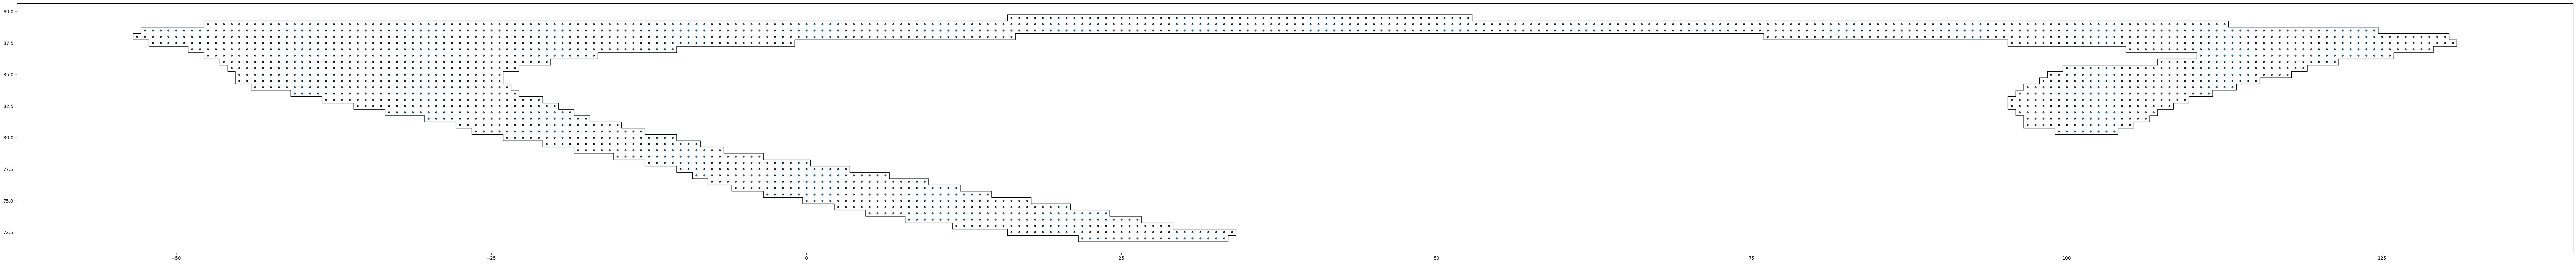

In [14]:
# just north_pole
AR = { "_id" : "2000.07.028.018.0_19", "timestamp" : ISODate("2000-07-28T18:00:00Z"), "raster" : [ [ 21.875, 72, [ 254.05516052246094 ] ], [ 22.5, 72, [ 265.0243225097656 ] ], [ 23.125, 72, [ 276.5491638183594 ] ], [ 23.75, 72, [ 288.3659362792969 ] ], [ 24.375, 72, [ 291.9342346191406 ] ], [ 25, 72, [ 289.3663024902344 ] ], [ 25.625, 72, [ 288.4393005371094 ] ], [ 26.25, 72, [ 288.3694152832031 ] ], [ 26.875, 72, [ 290.8580627441406 ] ], [ 27.5, 72, [ 288.45928955078125 ] ], [ 28.125, 72, [ 282.3158264160156 ] ], [ 28.75, 72, [ 276.4962158203125 ] ], [ 29.375, 72, [ 273.9441833496094 ] ], [ 30, 72, [ 274.19586181640625 ] ], [ 30.625, 72, [ 267.71014404296875 ] ], [ 31.25, 72, [ 262.57879638671875 ] ], [ 31.875, 72, [ 260.1515808105469 ] ], [ 32.5, 72, [ 259.9126892089844 ] ], [ 33.125, 72, [ 250.6261749267578 ] ], [ 16.25, 72.5, [ 260.917236328125 ] ], [ 16.875, 72.5, [ 273.1718444824219 ] ], [ 17.5, 72.5, [ 283.3075866699219 ] ], [ 18.125, 72.5, [ 291.94403076171875 ] ], [ 18.75, 72.5, [ 300.9569396972656 ] ], [ 19.375, 72.5, [ 309.26275634765625 ] ], [ 20, 72.5, [ 316.8983154296875 ] ], [ 20.625, 72.5, [ 324.1640930175781 ] ], [ 21.25, 72.5, [ 332.8775634765625 ] ], [ 21.875, 72.5, [ 331.7944641113281 ] ], [ 22.5, 72.5, [ 327.0892333984375 ] ], [ 23.125, 72.5, [ 323.9051513671875 ] ], [ 23.75, 72.5, [ 320.9186096191406 ] ], [ 24.375, 72.5, [ 317.4277038574219 ] ], [ 25, 72.5, [ 310.83843994140625 ] ], [ 25.625, 72.5, [ 301.53424072265625 ] ], [ 26.25, 72.5, [ 292.4931945800781 ] ], [ 26.875, 72.5, [ 283.744873046875 ] ], [ 27.5, 72.5, [ 278.2561340332031 ] ], [ 28.125, 72.5, [ 274.7969665527344 ] ], [ 28.75, 72.5, [ 271.4104309082031 ] ], [ 29.375, 72.5, [ 268.0395202636719 ] ], [ 30, 72.5, [ 265.51568603515625 ] ], [ 30.625, 72.5, [ 264.74859619140625 ] ], [ 31.25, 72.5, [ 263.229248046875 ] ], [ 31.875, 72.5, [ 260.6502685546875 ] ], [ 32.5, 72.5, [ 257.04638671875 ] ], [ 33.125, 72.5, [ 254.9422607421875 ] ], [ 33.75, 72.5, [ 252.49627685546875 ] ], [ 11.875, 73, [ 258.7759094238281 ] ], [ 12.5, 73, [ 274.71514892578125 ] ], [ 13.125, 73, [ 291.6324157714844 ] ], [ 13.75, 73, [ 308.3415832519531 ] ], [ 14.375, 73, [ 323.2071228027344 ] ], [ 15, 73, [ 336.4242858886719 ] ], [ 15.625, 73, [ 348.3216552734375 ] ], [ 16.25, 73, [ 358.9957580566406 ] ], [ 16.875, 73, [ 370.8440246582031 ] ], [ 17.5, 73, [ 383.25372314453125 ] ], [ 18.125, 73, [ 393.5571594238281 ] ], [ 18.75, 73, [ 394.4394836425781 ] ], [ 19.375, 73, [ 391.39752197265625 ] ], [ 20, 73, [ 385.2467346191406 ] ], [ 20.625, 73, [ 379.8183898925781 ] ], [ 21.25, 73, [ 376.0652160644531 ] ], [ 21.875, 73, [ 372.26348876953125 ] ], [ 22.5, 73, [ 358.25506591796875 ] ], [ 23.125, 73, [ 342.50958251953125 ] ], [ 23.75, 73, [ 328.3450927734375 ] ], [ 24.375, 73, [ 315.3971862792969 ] ], [ 25, 73, [ 302.2239685058594 ] ], [ 25.625, 73, [ 289.0864562988281 ] ], [ 26.25, 73, [ 278.8165283203125 ] ], [ 26.875, 73, [ 271.6096496582031 ] ], [ 27.5, 73, [ 264.417236328125 ] ], [ 28.125, 73, [ 257.16644287109375 ] ], [ 28.75, 73, [ 252.12315368652344 ] ], [ 8.125, 73.5, [ 254.6668701171875 ] ], [ 8.75, 73.5, [ 269.6167297363281 ] ], [ 9.375, 73.5, [ 285.8588562011719 ] ], [ 10, 73.5, [ 303.58380126953125 ] ], [ 10.625, 73.5, [ 320.1163024902344 ] ], [ 11.25, 73.5, [ 336.39581298828125 ] ], [ 11.875, 73.5, [ 352.6526184082031 ] ], [ 12.5, 73.5, [ 367.5993957519531 ] ], [ 13.125, 73.5, [ 381.9479675292969 ] ], [ 13.75, 73.5, [ 396.4552001953125 ] ], [ 14.375, 73.5, [ 410.5782470703125 ] ], [ 15, 73.5, [ 417.8029479980469 ] ], [ 15.625, 73.5, [ 418.638427734375 ] ], [ 16.25, 73.5, [ 419.29266357421875 ] ], [ 16.875, 73.5, [ 418.321044921875 ] ], [ 17.5, 73.5, [ 417.4162902832031 ] ], [ 18.125, 73.5, [ 416.5484924316406 ] ], [ 18.75, 73.5, [ 414.67626953125 ] ], [ 19.375, 73.5, [ 405.97418212890625 ] ], [ 20, 73.5, [ 393.6792297363281 ] ], [ 20.625, 73.5, [ 381.2032470703125 ] ], [ 21.25, 73.5, [ 367.4600830078125 ] ], [ 21.875, 73.5, [ 354.9840087890625 ] ], [ 22.5, 73.5, [ 343.78033447265625 ] ], [ 23.125, 73.5, [ 312.8411865234375 ] ], [ 23.75, 73.5, [ 298.0394592285156 ] ], [ 24.375, 73.5, [ 285.82574462890625 ] ], [ 25, 73.5, [ 276.1740417480469 ] ], [ 25.625, 73.5, [ 279.361083984375 ] ], [ 26.25, 73.5, [ 255.21034240722656 ] ], [ 5, 74, [ 250.2361602783203 ] ], [ 5.625, 74, [ 268.14508056640625 ] ], [ 6.25, 74, [ 287.0782775878906 ] ], [ 6.875, 74, [ 306.4405822753906 ] ], [ 7.5, 74, [ 325.2276611328125 ] ], [ 8.125, 74, [ 344.7489013671875 ] ], [ 8.75, 74, [ 364.8306579589844 ] ], [ 9.375, 74, [ 382.585205078125 ] ], [ 10, 74, [ 400.7364196777344 ] ], [ 10.625, 74, [ 411.1357116699219 ] ], [ 11.25, 74, [ 415.4814147949219 ] ], [ 11.875, 74, [ 418.9800720214844 ] ], [ 12.5, 74, [ 422.3359069824219 ] ], [ 13.125, 74, [ 425.12255859375 ] ], [ 13.75, 74, [ 427.0623779296875 ] ], [ 14.375, 74, [ 428.8932189941406 ] ], [ 15, 74, [ 430.583251953125 ] ], [ 15.625, 74, [ 426.91778564453125 ] ], [ 16.25, 74, [ 417.9367980957031 ] ], [ 16.875, 74, [ 408.7459411621094 ] ], [ 17.5, 74, [ 398.7588195800781 ] ], [ 18.125, 74, [ 388.09375 ] ], [ 18.75, 74, [ 377.2747802734375 ] ], [ 19.375, 74, [ 366.33087158203125 ] ], [ 20, 74, [ 335.3379211425781 ] ], [ 20.625, 74, [ 319.5866394042969 ] ], [ 21.25, 74, [ 304.41912841796875 ] ], [ 21.875, 74, [ 290.1366882324219 ] ], [ 22.5, 74, [ 277.4248352050781 ] ], [ 23.125, 74, [ 265.9716491699219 ] ], [ 23.75, 74, [ 255.45269775390625 ] ], [ 2.5, 74.5, [ 261.30950927734375 ] ], [ 3.125, 74.5, [ 280.27801513671875 ] ], [ 3.75, 74.5, [ 299.1224670410156 ] ], [ 4.375, 74.5, [ 317.8748779296875 ] ], [ 5, 74.5, [ 335.9730224609375 ] ], [ 5.625, 74.5, [ 351.9343566894531 ] ], [ 6.25, 74.5, [ 366.49176025390625 ] ], [ 6.875, 74.5, [ 380.2083740234375 ] ], [ 7.5, 74.5, [ 392.0081787109375 ] ], [ 8.125, 74.5, [ 401.3778381347656 ] ], [ 8.75, 74.5, [ 409.85076904296875 ] ], [ 9.375, 74.5, [ 417.3031311035156 ] ], [ 10, 74.5, [ 422.3646545410156 ] ], [ 10.625, 74.5, [ 426.79534912109375 ] ], [ 11.25, 74.5, [ 425.9212951660156 ] ], [ 11.875, 74.5, [ 421.2906188964844 ] ], [ 12.5, 74.5, [ 416.1271667480469 ] ], [ 13.125, 74.5, [ 410.6800842285156 ] ], [ 13.75, 74.5, [ 404.7359924316406 ] ], [ 14.375, 74.5, [ 397.9383239746094 ] ], [ 15, 74.5, [ 390.8641357421875 ] ], [ 15.625, 74.5, [ 383.5338134765625 ] ], [ 16.25, 74.5, [ 356.6175537109375 ] ], [ 16.875, 74.5, [ 342.73712158203125 ] ], [ 17.5, 74.5, [ 328.6707458496094 ] ], [ 18.125, 74.5, [ 314.46112060546875 ] ], [ 18.75, 74.5, [ 299.8338623046875 ] ], [ 19.375, 74.5, [ 285.39324951171875 ] ], [ 20, 74.5, [ 271.2088623046875 ] ], [ 20.625, 74.5, [ 257.4563903808594 ] ], [ -5.920304394294029e-13, 75, [ 265.958251953125 ] ], [ 0.625, 75, [ 283.28076171875 ] ], [ 1.25, 75, [ 301.3388671875 ] ], [ 1.875, 75, [ 319.0777282714844 ] ], [ 2.5, 75, [ 336.6475830078125 ] ], [ 3.125, 75, [ 354.4476623535156 ] ], [ 3.75, 75, [ 371.4499206542969 ] ], [ 4.375, 75, [ 385.8929443359375 ] ], [ 5, 75, [ 397.1269836425781 ] ], [ 5.625, 75, [ 403.5409240722656 ] ], [ 6.25, 75, [ 405.80255126953125 ] ], [ 6.875, 75, [ 406.5498962402344 ] ], [ 7.5, 75, [ 406.3249816894531 ] ], [ 8.125, 75, [ 404.9515075683594 ] ], [ 8.75, 75, [ 402.4222106933594 ] ], [ 9.375, 75, [ 399.13555908203125 ] ], [ 10, 75, [ 395.0599060058594 ] ], [ 10.625, 75, [ 390.7309265136719 ] ], [ 11.25, 75, [ 385.9786376953125 ] ], [ 11.875, 75, [ 363.0033264160156 ] ], [ 12.5, 75, [ 353.9884948730469 ] ], [ 13.125, 75, [ 344.5835266113281 ] ], [ 13.75, 75, [ 334.3798522949219 ] ], [ 14.375, 75, [ 323.3570251464844 ] ], [ 15, 75, [ 311.6965637207031 ] ], [ 15.625, 75, [ 299.5565490722656 ] ], [ 16.25, 75, [ 286.95733642578125 ] ], [ 16.875, 75, [ 273.9486389160156 ] ], [ 17.5, 75, [ 261.1309509277344 ] ], [ -3.125, 75.5, [ 252.91836547851562 ] ], [ -2.5, 75.5, [ 271.6353454589844 ] ], [ -1.875, 75.5, [ 287.24920654296875 ] ], [ -1.25, 75.5, [ 303.0210266113281 ] ], [ -0.625, 75.5, [ 318.8548583984375 ] ], [ -5.920304394294029e-13, 75.5, [ 333.1684265136719 ] ], [ 0.625, 75.5, [ 345.65484619140625 ] ], [ 1.25, 75.5, [ 357.9222717285156 ] ], [ 1.875, 75.5, [ 369.8257751464844 ] ], [ 2.5, 75.5, [ 378.0573425292969 ] ], [ 3.125, 75.5, [ 385.5057678222656 ] ], [ 3.75, 75.5, [ 392.146484375 ] ], [ 4.375, 75.5, [ 396.22662353515625 ] ], [ 5, 75.5, [ 397.559814453125 ] ], [ 5.625, 75.5, [ 397.4202880859375 ] ], [ 6.25, 75.5, [ 392.4991149902344 ] ], [ 6.875, 75.5, [ 385.5299377441406 ] ], [ 7.5, 75.5, [ 378.4736328125 ] ], [ 8.125, 75.5, [ 371.39569091796875 ] ], [ 8.75, 75.5, [ 351.0487365722656 ] ], [ 9.375, 75.5, [ 344.0216064453125 ] ], [ 10, 75.5, [ 336.5793762207031 ] ], [ 10.625, 75.5, [ 328.6796569824219 ] ], [ 11.25, 75.5, [ 319.7830810546875 ] ], [ 11.875, 75.5, [ 309.76385498046875 ] ], [ 12.5, 75.5, [ 298.4669189453125 ] ], [ 13.125, 75.5, [ 285.46063232421875 ] ], [ 13.75, 75.5, [ 273.341064453125 ] ], [ 14.375, 75.5, [ 260.9079284667969 ] ], [ -5.625, 76, [ 257.3924865722656 ] ], [ -5, 76, [ 274.1256103515625 ] ], [ -4.375, 76, [ 290.6965637207031 ] ], [ -3.75, 76, [ 302.8869323730469 ] ], [ -3.125, 76, [ 314.9481201171875 ] ], [ -2.5, 76, [ 326.81146240234375 ] ], [ -1.875, 76, [ 336.829345703125 ] ], [ -1.25, 76, [ 345.0105895996094 ] ], [ -0.625, 76, [ 352.89068603515625 ] ], [ -5.920304394294029e-13, 76, [ 360.3561096191406 ] ], [ 0.625, 76, [ 364.7790832519531 ] ], [ 1.25, 76, [ 368.419189453125 ] ], [ 1.875, 76, [ 371.4205017089844 ] ], [ 2.5, 76, [ 372.73309326171875 ] ], [ 3.125, 76, [ 370.5239562988281 ] ], [ 3.75, 76, [ 367.6746520996094 ] ], [ 4.375, 76, [ 364.2903747558594 ] ], [ 5, 76, [ 359.48602294921875 ] ], [ 5.625, 76, [ 353.4158630371094 ] ], [ 6.25, 76, [ 346.95184326171875 ] ], [ 6.875, 76, [ 327.564453125 ] ], [ 7.5, 76, [ 321.34149169921875 ] ], [ 8.125, 76, [ 314.8207092285156 ] ], [ 8.75, 76, [ 307.77813720703125 ] ], [ 9.375, 76, [ 300.1180114746094 ] ], [ 10, 76, [ 291.02630615234375 ] ], [ 10.625, 76, [ 281.070068359375 ] ], [ 11.25, 76, [ 270.2196044921875 ] ], [ 11.875, 76, [ 258.2388916015625 ] ], [ -7.5, 76.5, [ 254.5955352783203 ] ], [ -6.875, 76.5, [ 269.2088317871094 ] ], [ -6.25, 76.5, [ 282.3888244628906 ] ], [ -5.625, 76.5, [ 293.67730712890625 ] ], [ -5, 76.5, [ 304.6225280761719 ] ], [ -4.375, 76.5, [ 314.3730163574219 ] ], [ -3.75, 76.5, [ 321.4972229003906 ] ], [ -3.125, 76.5, [ 327.5428771972656 ] ], [ -2.5, 76.5, [ 333.3117980957031 ] ], [ -1.875, 76.5, [ 338.75579833984375 ] ], [ -1.25, 76.5, [ 341.94769287109375 ] ], [ -0.625, 76.5, [ 344.7220153808594 ] ], [ -5.920304394294029e-13, 76.5, [ 347.03204345703125 ] ], [ 0.625, 76.5, [ 347.76947021484375 ] ], [ 1.25, 76.5, [ 345.4737243652344 ] ], [ 1.875, 76.5, [ 342.54248046875 ] ], [ 2.5, 76.5, [ 339.1277770996094 ] ], [ 3.125, 76.5, [ 334.28271484375 ] ], [ 3.75, 76.5, [ 328.3356018066406 ] ], [ 4.375, 76.5, [ 322.30499267578125 ] ], [ 5, 76.5, [ 316.0944519042969 ] ], [ 5.625, 76.5, [ 300.3974914550781 ] ], [ 6.25, 76.5, [ 294.8523254394531 ] ], [ 6.875, 76.5, [ 289.2851867675781 ] ], [ 7.5, 76.5, [ 283.0605163574219 ] ], [ 8.125, 76.5, [ 274.0719299316406 ] ], [ 8.75, 76.5, [ 263.88018798828125 ] ], [ 9.375, 76.5, [ 252.64288330078125 ] ], [ -8.75, 77, [ 253.48167419433594 ] ], [ -8.125, 77, [ 262.0550537109375 ] ], [ -7.5, 77, [ 270.6214904785156 ] ], [ -6.875, 77, [ 279.09033203125 ] ], [ -6.25, 77, [ 287.2975158691406 ] ], [ -5.625, 77, [ 294.9561462402344 ] ], [ -5, 77, [ 302.6278381347656 ] ], [ -4.375, 77, [ 310.3212585449219 ] ], [ -3.75, 77, [ 316.5198974609375 ] ], [ -3.125, 77, [ 320.1264343261719 ] ], [ -2.5, 77, [ 323.40899658203125 ] ], [ -1.875, 77, [ 326.27020263671875 ] ], [ -1.25, 77, [ 326.62957763671875 ] ], [ -0.625, 77, [ 324.48760986328125 ] ], [ -5.920304394294029e-13, 77, [ 321.87384033203125 ] ], [ 0.625, 77, [ 318.7210388183594 ] ], [ 1.25, 77, [ 313.6001281738281 ] ], [ 1.875, 77, [ 307.3835144042969 ] ], [ 2.5, 77, [ 301.0841979980469 ] ], [ 3.125, 77, [ 294.6382751464844 ] ], [ 3.75, 77, [ 280.4991760253906 ] ], [ 4.375, 77, [ 274.40771484375 ] ], [ 5, 77, [ 267.9453430175781 ] ], [ 5.625, 77, [ 261.0205078125 ] ], [ 6.25, 77, [ 253.0924072265625 ] ], [ -10, 77.5, [ 256.66351318359375 ] ], [ -9.375, 77.5, [ 266.0854187011719 ] ], [ -8.75, 77.5, [ 275.8481140136719 ] ], [ -8.125, 77.5, [ 281.6965026855469 ] ], [ -7.5, 77.5, [ 287.95953369140625 ] ], [ -6.875, 77.5, [ 294.5818176269531 ] ], [ -6.25, 77.5, [ 301.5539855957031 ] ], [ -5.625, 77.5, [ 306.2563781738281 ] ], [ -5, 77.5, [ 311.1356201171875 ] ], [ -4.375, 77.5, [ 316.17608642578125 ] ], [ -3.75, 77.5, [ 321.337646484375 ] ], [ -3.125, 77.5, [ 319.2232360839844 ] ], [ -2.5, 77.5, [ 316.7844543457031 ] ], [ -1.875, 77.5, [ 314.0972900390625 ] ], [ -1.25, 77.5, [ 310.2306823730469 ] ], [ -0.625, 77.5, [ 302.28350830078125 ] ], [ -5.920304394294029e-13, 77.5, [ 294.2330322265625 ] ], [ 0.625, 77.5, [ 286.2747497558594 ] ], [ 1.25, 77.5, [ 278.3514099121094 ] ], [ 1.875, 77.5, [ 271.1227722167969 ] ], [ 2.5, 77.5, [ 263.4793701171875 ] ], [ 3.125, 77.5, [ 255.18809509277344 ] ], [ -12.5, 78, [ 257.3316345214844 ] ], [ -11.875, 78, [ 268.83306884765625 ] ], [ -11.25, 78, [ 280.1531982421875 ] ], [ -10.625, 78, [ 285.5774230957031 ] ], [ -10, 78, [ 291.6623840332031 ] ], [ -9.375, 78, [ 298.2828369140625 ] ], [ -8.75, 78, [ 305.4769287109375 ] ], [ -8.125, 78, [ 307.57989501953125 ] ], [ -7.5, 78, [ 309.48492431640625 ] ], [ -6.875, 78, [ 311.6852722167969 ] ], [ -6.25, 78, [ 314.156982421875 ] ], [ -5.625, 78, [ 312.66656494140625 ] ], [ -5, 78, [ 309.5920104980469 ] ], [ -4.375, 78, [ 306.30401611328125 ] ], [ -3.75, 78, [ 302.69879150390625 ] ], [ -3.125, 78, [ 296.36773681640625 ] ], [ -2.5, 78, [ 287.8945007324219 ] ], [ -1.875, 78, [ 279.24163818359375 ] ], [ -1.25, 78, [ 270.4273376464844 ] ], [ -0.625, 78, [ 262.10577392578125 ] ], [ -5.920304394294029e-13, 78, [ 254.51409912109375 ] ], [ -15, 78.5, [ 263.10968017578125 ] ], [ -14.375, 78.5, [ 277.5797119140625 ] ], [ -13.75, 78.5, [ 288.34796142578125 ] ], [ -13.125, 78.5, [ 296.27166748046875 ] ], [ -12.5, 78.5, [ 304.8640441894531 ] ], [ -11.875, 78.5, [ 314.1333312988281 ] ], [ -11.25, 78.5, [ 321.92144775390625 ] ], [ -10.625, 78.5, [ 320.7398681640625 ] ], [ -10, 78.5, [ 320.0754699707031 ] ], [ -9.375, 78.5, [ 319.8627014160156 ] ], [ -8.75, 78.5, [ 320.0194091796875 ] ], [ -8.125, 78.5, [ 315.51495361328125 ] ], [ -7.5, 78.5, [ 309.9294738769531 ] ], [ -6.875, 78.5, [ 304.24383544921875 ] ], [ -6.25, 78.5, [ 298.36334228515625 ] ], [ -5.625, 78.5, [ 289.79473876953125 ] ], [ -5, 78.5, [ 278.03143310546875 ] ], [ -4.375, 78.5, [ 265.905029296875 ] ], [ -3.75, 78.5, [ 253.39820861816406 ] ], [ -18.125, 79, [ 257.1459045410156 ] ], [ -17.5, 79, [ 268.0196838378906 ] ], [ -16.875, 79, [ 278.7510986328125 ] ], [ -16.25, 79, [ 290.0090637207031 ] ], [ -15.625, 79, [ 302.0801086425781 ] ], [ -15, 79, [ 314.931640625 ] ], [ -14.375, 79, [ 328.61834716796875 ] ], [ -13.75, 79, [ 331.2925109863281 ] ], [ -13.125, 79, [ 332.4529724121094 ] ], [ -12.5, 79, [ 334.1214904785156 ] ], [ -11.875, 79, [ 336.18853759765625 ] ], [ -11.25, 79, [ 335.68988037109375 ] ], [ -10.625, 79, [ 327.8261413574219 ] ], [ -10, 79, [ 320.0900573730469 ] ], [ -9.375, 79, [ 312.46722412109375 ] ], [ -8.75, 79, [ 304.88922119140625 ] ], [ -8.125, 79, [ 292.39764404296875 ] ], [ -7.5, 79, [ 277.6461181640625 ] ], [ -6.875, 79, [ 262.6252136230469 ] ], [ -20.625, 79.5, [ 259.0936279296875 ] ], [ -20, 79.5, [ 269.9434509277344 ] ], [ -19.375, 79.5, [ 282.41265869140625 ] ], [ -18.75, 79.5, [ 295.3841247558594 ] ], [ -18.125, 79.5, [ 308.96881103515625 ] ], [ -17.5, 79.5, [ 333.21807861328125 ] ], [ -16.875, 79.5, [ 336.4217224121094 ] ], [ -16.25, 79.5, [ 340.1142272949219 ] ], [ -15.625, 79.5, [ 344.4474792480469 ] ], [ -15, 79.5, [ 349.4368591308594 ] ], [ -14.375, 79.5, [ 352.8154602050781 ] ], [ -13.75, 79.5, [ 346.5098876953125 ] ], [ -13.125, 79.5, [ 340.3096008300781 ] ], [ -12.5, 79.5, [ 334.1413269042969 ] ], [ -11.875, 79.5, [ 327.9702453613281 ] ], [ -11.25, 79.5, [ 318.42236328125 ] ], [ -10.625, 79.5, [ 303.7109069824219 ] ], [ -10, 79.5, [ 288.9532775878906 ] ], [ -9.375, 79.5, [ 274.1248474121094 ] ], [ -8.75, 79.5, [ 259.1535949707031 ] ], [ -23.75, 80, [ 271.7315979003906 ] ], [ -23.125, 80, [ 278.7362060546875 ] ], [ -22.5, 80, [ 285.81060791015625 ] ], [ -21.875, 80, [ 292.9442443847656 ] ], [ -21.25, 80, [ 300.1945495605469 ] ], [ -20.625, 80, [ 307.0963134765625 ] ], [ -20, 80, [ 314.7393493652344 ] ], [ -19.375, 80, [ 323.2860412597656 ] ], [ -18.75, 80, [ 345.23681640625 ] ], [ -18.125, 80, [ 355.3199157714844 ] ], [ -17.5, 80, [ 356.9085388183594 ] ], [ -16.875, 80, [ 352.8954772949219 ] ], [ -16.25, 80, [ 349.1990966796875 ] ], [ -15.625, 80, [ 358.86737060546875 ] ], [ -15, 80, [ 355.88665771484375 ] ], [ -14.375, 80, [ 346.7230529785156 ] ], [ -13.75, 80, [ 332.38818359375 ] ], [ -13.125, 80, [ 317.99566650390625 ] ], [ -12.5, 80, [ 303.5313720703125 ] ], [ -11.875, 80, [ 288.90179443359375 ] ], [ -11.25, 80, [ 271.5362243652344 ] ], [ -10.625, 80, [ 251.80130004882812 ] ], [ -26.25, 80.5, [ 262.3276672363281 ] ], [ -25.625, 80.5, [ 288.9559326171875 ] ], [ -25, 80.5, [ 298.9309387207031 ] ], [ -24.375, 80.5, [ 305.79315185546875 ] ], [ -23.75, 80.5, [ 313.0536193847656 ] ], [ -23.125, 80.5, [ 320.67205810546875 ] ], [ -22.5, 80.5, [ 328.6524963378906 ] ], [ -21.875, 80.5, [ 336.9632263183594 ] ], [ -21.25, 80.5, [ 340.5588684082031 ] ], [ -20.625, 80.5, [ 343.7850036621094 ] ], [ -20, 80.5, [ 347.3257141113281 ] ], [ -19.375, 80.5, [ 351.1954040527344 ] ], [ -18.75, 80.5, [ 355.4100646972656 ] ], [ -18.125, 80.5, [ 355.8744812011719 ] ], [ -17.5, 80.5, [ 346.92327880859375 ] ], [ -16.875, 80.5, [ 350.65557861328125 ] ], [ -16.25, 80.5, [ 341.87664794921875 ] ], [ -15.625, 80.5, [ 333.1452331542969 ] ], [ -15, 80.5, [ 337.04791259765625 ] ], [ -14.375, 80.5, [ 314.1012878417969 ] ], [ -13.75, 80.5, [ 290.7279968261719 ] ], [ -13.125, 80.5, [ 267.4064636230469 ] ], [ 99.375, 80.5, [ 250.61795043945312 ] ], [ 100, 80.5, [ 254.33416748046875 ] ], [ 100.625, 80.5, [ 258.15496826171875 ] ], [ 101.25, 80.5, [ 262.1250305175781 ] ], [ 101.875, 80.5, [ 266.1596984863281 ] ], [ 102.5, 80.5, [ 263.243408203125 ] ], [ 103.125, 80.5, [ 256.81903076171875 ] ], [ 103.75, 80.5, [ 250.26556396484375 ] ], [ -27.5, 81, [ 258.7073059082031 ] ], [ -26.875, 81, [ 284.6439514160156 ] ], [ -26.25, 81, [ 295.5 ] ], [ -25.625, 81, [ 302.7732849121094 ] ], [ -25, 81, [ 320.8362121582031 ] ], [ -24.375, 81, [ 325.6683044433594 ] ], [ -23.75, 81, [ 331.1344299316406 ] ], [ -23.125, 81, [ 337.1280517578125 ] ], [ -22.5, 81, [ 343.6021728515625 ] ], [ -21.875, 81, [ 345.3606262207031 ] ], [ -21.25, 81, [ 345.6348571777344 ] ], [ -20.625, 81, [ 346.08685302734375 ] ], [ -20, 81, [ 346.7218017578125 ] ], [ -19.375, 81, [ 347.4167175292969 ] ], [ -18.75, 81, [ 347.42547607421875 ] ], [ -18.125, 81, [ 331.5727844238281 ] ], [ -17.5, 81, [ 316.0634460449219 ] ], [ -16.875, 81, [ 300.7635192871094 ] ], [ -16.25, 81, [ 296.8799743652344 ] ], [ -15.625, 81, [ 281.8891906738281 ] ], [ -15, 81, [ 263.2390441894531 ] ], [ 96.875, 81, [ 250.30364990234375 ] ], [ 97.5, 81, [ 255.91799926757812 ] ], [ 98.125, 81, [ 261.6399841308594 ] ], [ 98.75, 81, [ 266.348876953125 ] ], [ 99.375, 81, [ 271.49310302734375 ] ], [ 100, 81, [ 274.0902404785156 ] ], [ 100.625, 81, [ 274.670166015625 ] ], [ 101.25, 81, [ 275.3039855957031 ] ], [ 101.875, 81, [ 275.97760009765625 ] ], [ 102.5, 81, [ 276.6807861328125 ] ], [ 103.125, 81, [ 277.3828430175781 ] ], [ 103.75, 81, [ 272.0704040527344 ] ], [ 104.375, 81, [ 262.0912780761719 ] ], [ 105, 81, [ 252.1379852294922 ] ], [ -30, 81.5, [ 256.87384033203125 ] ], [ -29.375, 81.5, [ 264.8174743652344 ] ], [ -28.75, 81.5, [ 273.5395202636719 ] ], [ -28.125, 81.5, [ 282.7755432128906 ] ], [ -27.5, 81.5, [ 300.8979187011719 ] ], [ -26.875, 81.5, [ 310.6152648925781 ] ], [ -26.25, 81.5, [ 314.760498046875 ] ], [ -25.625, 81.5, [ 319.03436279296875 ] ], [ -25, 81.5, [ 323.4042663574219 ] ], [ -24.375, 81.5, [ 327.7469177246094 ] ], [ -23.75, 81.5, [ 342.849365234375 ] ], [ -23.125, 81.5, [ 347.6690673828125 ] ], [ -22.5, 81.5, [ 345.1533508300781 ] ], [ -21.875, 81.5, [ 342.3516540527344 ] ], [ -21.25, 81.5, [ 339.6240539550781 ] ], [ -20.625, 81.5, [ 336.9792175292969 ] ], [ -20, 81.5, [ 334.426025390625 ] ], [ -19.375, 81.5, [ 332.0431213378906 ] ], [ -18.75, 81.5, [ 310.1853942871094 ] ], [ -18.125, 81.5, [ 286.25701904296875 ] ], [ -17.5, 81.5, [ 262.3274230957031 ] ], [ 96.875, 81.5, [ 252.70547485351562 ] ], [ 97.5, 81.5, [ 257.52825927734375 ] ], [ 98.125, 81.5, [ 262.41607666015625 ] ], [ 98.75, 81.5, [ 267.91778564453125 ] ], [ 99.375, 81.5, [ 274.0401916503906 ] ], [ 100, 81.5, [ 280.9356384277344 ] ], [ 100.625, 81.5, [ 288.2816162109375 ] ], [ 101.25, 81.5, [ 289.8538818359375 ] ], [ 101.875, 81.5, [ 287.8687438964844 ] ], [ 102.5, 81.5, [ 285.76141357421875 ] ], [ 103.125, 81.5, [ 283.5173645019531 ] ], [ 103.75, 81.5, [ 281.092041015625 ] ], [ 104.375, 81.5, [ 278.4822998046875 ] ], [ 105, 81.5, [ 274.1038513183594 ] ], [ 105.625, 81.5, [ 262.333740234375 ] ], [ 106.25, 81.5, [ 250.7523651123047 ] ], [ -33.125, 82, [ 255.86183166503906 ] ], [ -32.5, 82, [ 275.7777099609375 ] ], [ -31.875, 82, [ 284.36151123046875 ] ], [ -31.25, 82, [ 293.2986145019531 ] ], [ -30.625, 82, [ 301.12017822265625 ] ], [ -30, 82, [ 309.0315246582031 ] ], [ -29.375, 82, [ 316.9870910644531 ] ], [ -28.75, 82, [ 324.9761047363281 ] ], [ -28.125, 82, [ 333.0387878417969 ] ], [ -27.5, 82, [ 334.0750427246094 ] ], [ -26.875, 82, [ 346.5318908691406 ] ], [ -26.25, 82, [ 347.3282775878906 ] ], [ -25.625, 82, [ 348.5816955566406 ] ], [ -25, 82, [ 350.1341552734375 ] ], [ -24.375, 82, [ 352.052978515625 ] ], [ -23.75, 82, [ 350.9050598144531 ] ], [ -23.125, 82, [ 342.4262390136719 ] ], [ -22.5, 82, [ 334.31036376953125 ] ], [ -21.875, 82, [ 338.1044921875 ] ], [ -21.25, 82, [ 330.82305908203125 ] ], [ -20.625, 82, [ 323.88189697265625 ] ], [ -20, 82, [ 317.1819763183594 ] ], [ -19.375, 82, [ 293.4248352050781 ] ], [ -18.75, 82, [ 266.4344787597656 ] ], [ 96.25, 82, [ 251.84214782714844 ] ], [ 96.875, 82, [ 259.6451110839844 ] ], [ 97.5, 82, [ 267.4717102050781 ] ], [ 98.125, 82, [ 274.8703308105469 ] ], [ 98.75, 82, [ 279.2566223144531 ] ], [ 99.375, 82, [ 283.88232421875 ] ], [ 100, 82, [ 288.74310302734375 ] ], [ 100.625, 82, [ 293.8697204589844 ] ], [ 101.25, 82, [ 299.2054138183594 ] ], [ 101.875, 82, [ 303.3684387207031 ] ], [ 102.5, 82, [ 303.3976135253906 ] ], [ 103.125, 82, [ 297.3928527832031 ] ], [ 103.75, 82, [ 291.5249938964844 ] ], [ 104.375, 82, [ 285.8279724121094 ] ], [ 105, 82, [ 280.2305603027344 ] ], [ 105.625, 82, [ 274.7622985839844 ] ], [ 106.25, 82, [ 269.364990234375 ] ], [ 106.875, 82, [ 260.87890625 ] ], [ -35.625, 82.5, [ 252.7164306640625 ] ], [ -35, 82.5, [ 261.1761779785156 ] ], [ -34.375, 82.5, [ 269.6365966796875 ] ], [ -33.75, 82.5, [ 277.85284423828125 ] ], [ -33.125, 82.5, [ 284.28997802734375 ] ], [ -32.5, 82.5, [ 290.7288818359375 ] ], [ -31.875, 82.5, [ 297.53857421875 ] ], [ -31.25, 82.5, [ 304.8526916503906 ] ], [ -30.625, 82.5, [ 312.7040100097656 ] ], [ -30, 82.5, [ 321.2642517089844 ] ], [ -29.375, 82.5, [ 330.55828857421875 ] ], [ -28.75, 82.5, [ 331.2071838378906 ] ], [ -28.125, 82.5, [ 347.4837951660156 ] ], [ -27.5, 82.5, [ 347.7510681152344 ] ], [ -26.875, 82.5, [ 348.2494201660156 ] ], [ -26.25, 82.5, [ 348.9673156738281 ] ], [ -25.625, 82.5, [ 349.9099426269531 ] ], [ -25, 82.5, [ 365.3797912597656 ] ], [ -24.375, 82.5, [ 354.5693664550781 ] ], [ -23.75, 82.5, [ 341.5845947265625 ] ], [ -23.125, 82.5, [ 328.6631164550781 ] ], [ -22.5, 82.5, [ 315.7228088378906 ] ], [ -21.875, 82.5, [ 315.35906982421875 ] ], [ -21.25, 82.5, [ 302.339599609375 ] ], [ -20.625, 82.5, [ 289.20013427734375 ] ], [ -20, 82.5, [ 266.5723876953125 ] ], [ 95.625, 82.5, [ 254.4577178955078 ] ], [ 96.25, 82.5, [ 259.7890930175781 ] ], [ 96.875, 82.5, [ 265.1026916503906 ] ], [ 97.5, 82.5, [ 270.3780822753906 ] ], [ 98.125, 82.5, [ 275.6572570800781 ] ], [ 98.75, 82.5, [ 280.8773498535156 ] ], [ 99.375, 82.5, [ 285.6711120605469 ] ], [ 100, 82.5, [ 286.9891052246094 ] ], [ 100.625, 82.5, [ 288.483642578125 ] ], [ 101.25, 82.5, [ 290.1156005859375 ] ], [ 101.875, 82.5, [ 291.9684143066406 ] ], [ 102.5, 82.5, [ 293.94549560546875 ] ], [ 103.125, 82.5, [ 296.0921325683594 ] ], [ 103.75, 82.5, [ 298.2234802246094 ] ], [ 104.375, 82.5, [ 293.0762023925781 ] ], [ 105, 82.5, [ 286.82086181640625 ] ], [ 105.625, 82.5, [ 280.6376953125 ] ], [ 106.25, 82.5, [ 274.6353759765625 ] ], [ 106.875, 82.5, [ 268.748046875 ] ], [ 107.5, 82.5, [ 262.9759521484375 ] ], [ 108.125, 82.5, [ 257.3330383300781 ] ], [ -38.125, 83, [ 250.79415893554688 ] ], [ -37.5, 83, [ 257.92034912109375 ] ], [ -36.875, 83, [ 265.62164306640625 ] ], [ -36.25, 83, [ 269.34014892578125 ] ], [ -35.625, 83, [ 277.68505859375 ] ], [ -35, 83, [ 283.90289306640625 ] ], [ -34.375, 83, [ 289.4680480957031 ] ], [ -33.75, 83, [ 295.0302429199219 ] ], [ -33.125, 83, [ 300.7569580078125 ] ], [ -32.5, 83, [ 306.7222900390625 ] ], [ -31.875, 83, [ 312.9139404296875 ] ], [ -31.25, 83, [ 319.2715759277344 ] ], [ -30.625, 83, [ 324.438720703125 ] ], [ -30, 83, [ 325.040771484375 ] ], [ -29.375, 83, [ 325.8327331542969 ] ], [ -28.75, 83, [ 337.2635803222656 ] ], [ -28.125, 83, [ 338.8471374511719 ] ], [ -27.5, 83, [ 340.47821044921875 ] ], [ -26.875, 83, [ 342.1260986328125 ] ], [ -26.25, 83, [ 343.76910400390625 ] ], [ -25.625, 83, [ 346.31500244140625 ] ], [ -25, 83, [ 332.7665100097656 ] ], [ -24.375, 83, [ 319.20355224609375 ] ], [ -23.75, 83, [ 305.5738830566406 ] ], [ -23.125, 83, [ 291.8833923339844 ] ], [ -22.5, 83, [ 288.7079772949219 ] ], [ -21.875, 83, [ 274.935546875 ] ], [ -21.25, 83, [ 259.9570007324219 ] ], [ 95.625, 83, [ 256.7237854003906 ] ], [ 96.25, 83, [ 264.7023010253906 ] ], [ 96.875, 83, [ 268.15362548828125 ] ], [ 97.5, 83, [ 271.67333984375 ] ], [ 98.125, 83, [ 275.2740173339844 ] ], [ 98.75, 83, [ 278.97052001953125 ] ], [ 99.375, 83, [ 282.7773132324219 ] ], [ 100, 83, [ 286.72296142578125 ] ], [ 100.625, 83, [ 290.75897216796875 ] ], [ 101.25, 83, [ 291.2220458984375 ] ], [ 101.875, 83, [ 290.6962585449219 ] ], [ 102.5, 83, [ 290.3074035644531 ] ], [ 103.125, 83, [ 290.0258483886719 ] ], [ 103.75, 83, [ 289.846923828125 ] ], [ 104.375, 83, [ 289.7886047363281 ] ], [ 105, 83, [ 289.6762390136719 ] ], [ 105.625, 83, [ 289.5915832519531 ] ], [ 106.25, 83, [ 283.83868408203125 ] ], [ 106.875, 83, [ 277.6075744628906 ] ], [ 107.5, 83, [ 271.5520935058594 ] ], [ 108.125, 83, [ 265.6697998046875 ] ], [ 108.75, 83, [ 259.9700927734375 ] ], [ 109.375, 83, [ 254.45913696289062 ] ], [ -40.625, 83.5, [ 250.52223205566406 ] ], [ -40, 83.5, [ 254.0638427734375 ] ], [ -39.375, 83.5, [ 257.7041320800781 ] ], [ -38.75, 83.5, [ 261.4039306640625 ] ], [ -38.125, 83.5, [ 265.330322265625 ] ], [ -37.5, 83.5, [ 270.9312744140625 ] ], [ -36.875, 83.5, [ 277.2336730957031 ] ], [ -36.25, 83.5, [ 284.0650634765625 ] ], [ -35.625, 83.5, [ 291.02020263671875 ] ], [ -35, 83.5, [ 297.9587707519531 ] ], [ -34.375, 83.5, [ 304.9337158203125 ] ], [ -33.75, 83.5, [ 311.86065673828125 ] ], [ -33.125, 83.5, [ 314.1313171386719 ] ], [ -32.5, 83.5, [ 320.9740295410156 ] ], [ -31.875, 83.5, [ 328.0666809082031 ] ], [ -31.25, 83.5, [ 330.0849304199219 ] ], [ -30.625, 83.5, [ 332.1031799316406 ] ], [ -30, 83.5, [ 334.08526611328125 ] ], [ -29.375, 83.5, [ 335.9586181640625 ] ], [ -28.75, 83.5, [ 337.734375 ] ], [ -28.125, 83.5, [ 339.4479675292969 ] ], [ -27.5, 83.5, [ 341.04315185546875 ] ], [ -26.875, 83.5, [ 340.5728759765625 ] ], [ -26.25, 83.5, [ 327.3782043457031 ] ], [ -25.625, 83.5, [ 314.1535339355469 ] ], [ -25, 83.5, [ 300.8673400878906 ] ], [ -24.375, 83.5, [ 287.5901184082031 ] ], [ -23.75, 83.5, [ 274.2812805175781 ] ], [ -23.125, 83.5, [ 260.92987060546875 ] ], [ 96.25, 83.5, [ 258.04071044921875 ] ], [ 96.875, 83.5, [ 267.2246398925781 ] ], [ 97.5, 83.5, [ 273.7586669921875 ] ], [ 98.125, 83.5, [ 275.35699462890625 ] ], [ 98.75, 83.5, [ 277.0403137207031 ] ], [ 99.375, 83.5, [ 278.8050842285156 ] ], [ 100, 83.5, [ 280.6663513183594 ] ], [ 100.625, 83.5, [ 282.6485595703125 ] ], [ 101.25, 83.5, [ 284.72869873046875 ] ], [ 101.875, 83.5, [ 286.88348388671875 ] ], [ 102.5, 83.5, [ 288.9022521972656 ] ], [ 103.125, 83.5, [ 286.84423828125 ] ], [ 103.75, 83.5, [ 285.0480041503906 ] ], [ 104.375, 83.5, [ 283.4825744628906 ] ], [ 105, 83.5, [ 282.19036865234375 ] ], [ 105.625, 83.5, [ 281.05865478515625 ] ], [ 106.25, 83.5, [ 280.2087707519531 ] ], [ 106.875, 83.5, [ 279.6169738769531 ] ], [ 107.5, 83.5, [ 279.45953369140625 ] ], [ 108.125, 83.5, [ 276.99432373046875 ] ], [ 108.75, 83.5, [ 271.52008056640625 ] ], [ 109.375, 83.5, [ 266.1346435546875 ] ], [ 110, 83.5, [ 260.80035400390625 ] ], [ 110.625, 83.5, [ 255.55401611328125 ] ], [ 111.25, 83.5, [ 250.38087463378906 ] ], [ -43.75, 84, [ 251.66111755371094 ] ], [ -43.125, 84, [ 255.15374755859375 ] ], [ -42.5, 84, [ 258.71337890625 ] ], [ -41.875, 84, [ 262.3812561035156 ] ], [ -41.25, 84, [ 266.09686279296875 ] ], [ -40.625, 84, [ 269.9244384765625 ] ], [ -40, 84, [ 274.9964904785156 ] ], [ -39.375, 84, [ 280.83154296875 ] ], [ -38.75, 84, [ 286.5965270996094 ] ], [ -38.125, 84, [ 292.0818176269531 ] ], [ -37.5, 84, [ 297.667724609375 ] ], [ -36.875, 84, [ 303.4146728515625 ] ], [ -36.25, 84, [ 309.2538146972656 ] ], [ -35.625, 84, [ 315.1872863769531 ] ], [ -35, 84, [ 321.1822509765625 ] ], [ -34.375, 84, [ 326.6963806152344 ] ], [ -33.75, 84, [ 328.9488525390625 ] ], [ -33.125, 84, [ 331.2623596191406 ] ], [ -32.5, 84, [ 333.64166259765625 ] ], [ -31.875, 84, [ 336.009765625 ] ], [ -31.25, 84, [ 338.45648193359375 ] ], [ -30.625, 84, [ 340.9646911621094 ] ], [ -30, 84, [ 343.5295104980469 ] ], [ -29.375, 84, [ 346.1558532714844 ] ], [ -28.75, 84, [ 347.8775329589844 ] ], [ -28.125, 84, [ 335.58160400390625 ] ], [ -27.5, 84, [ 323.30645751953125 ] ], [ -26.875, 84, [ 311.0394592285156 ] ], [ -26.25, 84, [ 298.8073425292969 ] ], [ -25.625, 84, [ 286.5960998535156 ] ], [ -25, 84, [ 274.4248962402344 ] ], [ -24.375, 84, [ 262.37353515625 ] ], [ -23.75, 84, [ 250.7865753173828 ] ], [ 96.875, 84, [ 253.48609924316406 ] ], [ 97.5, 84, [ 260.92578125 ] ], [ 98.125, 84, [ 268.3040466308594 ] ], [ 98.75, 84, [ 275.6040954589844 ] ], [ 99.375, 84, [ 276.2930908203125 ] ], [ 100, 84, [ 276.6927795410156 ] ], [ 100.625, 84, [ 277.227294921875 ] ], [ 101.25, 84, [ 277.94146728515625 ] ], [ 101.875, 84, [ 278.87664794921875 ] ], [ 102.5, 84, [ 279.9320068359375 ] ], [ 103.125, 84, [ 281.1865539550781 ] ], [ 103.75, 84, [ 282.6646423339844 ] ], [ 104.375, 84, [ 284.27117919921875 ] ], [ 105, 84, [ 283.0440673828125 ] ], [ 105.625, 84, [ 281.4252014160156 ] ], [ 106.25, 84, [ 280.06634521484375 ] ], [ 106.875, 84, [ 278.8873596191406 ] ], [ 107.5, 84, [ 277.8948059082031 ] ], [ 108.125, 84, [ 277.0365905761719 ] ], [ 108.75, 84, [ 276.37469482421875 ] ], [ 109.375, 84, [ 275.62738037109375 ] ], [ 110, 84, [ 274.9621276855469 ] ], [ 110.625, 84, [ 272.7333679199219 ] ], [ 111.25, 84, [ 267.11114501953125 ] ], [ 111.875, 84, [ 261.5802917480469 ] ], [ 112.5, 84, [ 256.1407775878906 ] ], [ 113.125, 84, [ 250.79241943359375 ] ], [ -45, 84.5, [ 252.0178985595703 ] ], [ -44.375, 84.5, [ 255.87388610839844 ] ], [ -43.75, 84.5, [ 259.8436279296875 ] ], [ -43.125, 84.5, [ 264.9600830078125 ] ], [ -42.5, 84.5, [ 270.7498474121094 ] ], [ -41.875, 84.5, [ 276.690185546875 ] ], [ -41.25, 84.5, [ 282.76055908203125 ] ], [ -40.625, 84.5, [ 287.880126953125 ] ], [ -40, 84.5, [ 293.18072509765625 ] ], [ -39.375, 84.5, [ 298.5550231933594 ] ], [ -38.75, 84.5, [ 304.0123291015625 ] ], [ -38.125, 84.5, [ 309.6072998046875 ] ], [ -37.5, 84.5, [ 315.3221435546875 ] ], [ -36.875, 84.5, [ 321.10101318359375 ] ], [ -36.25, 84.5, [ 325.02459716796875 ] ], [ -35.625, 84.5, [ 328.9520263671875 ] ], [ -35, 84.5, [ 332.79388427734375 ] ], [ -34.375, 84.5, [ 336.6159362792969 ] ], [ -33.75, 84.5, [ 340.44171142578125 ] ], [ -33.125, 84.5, [ 344.1902770996094 ] ], [ -32.5, 84.5, [ 347.97503662109375 ] ], [ -31.875, 84.5, [ 351.7446594238281 ] ], [ -31.25, 84.5, [ 355.4515380859375 ] ], [ -30.625, 84.5, [ 359.2004699707031 ] ], [ -30, 84.5, [ 350.3085021972656 ] ], [ -29.375, 84.5, [ 340.4106750488281 ] ], [ -28.75, 84.5, [ 330.4276428222656 ] ], [ -28.125, 84.5, [ 320.3305969238281 ] ], [ -27.5, 84.5, [ 310.1162414550781 ] ], [ -26.875, 84.5, [ 300.0104064941406 ] ], [ -26.25, 84.5, [ 290.15625 ] ], [ -25.625, 84.5, [ 280.37603759765625 ] ], [ -25, 84.5, [ 270.644287109375 ] ], [ -24.375, 84.5, [ 259.4421081542969 ] ], [ 98.125, 84.5, [ 255.73785400390625 ] ], [ 98.75, 84.5, [ 261.6336975097656 ] ], [ 99.375, 84.5, [ 267.4226379394531 ] ], [ 100, 84.5, [ 273.09161376953125 ] ], [ 100.625, 84.5, [ 278.22760009765625 ] ], [ 101.25, 84.5, [ 277.38134765625 ] ], [ 101.875, 84.5, [ 276.76153564453125 ] ], [ 102.5, 84.5, [ 276.3185729980469 ] ], [ 103.125, 84.5, [ 276.04443359375 ] ], [ 103.75, 84.5, [ 275.98089599609375 ] ], [ 104.375, 84.5, [ 276.0843811035156 ] ], [ 105, 84.5, [ 276.3414306640625 ] ], [ 105.625, 84.5, [ 276.8096008300781 ] ], [ 106.25, 84.5, [ 277.4246826171875 ] ], [ 106.875, 84.5, [ 278.19158935546875 ] ], [ 107.5, 84.5, [ 276.46197509765625 ] ], [ 108.125, 84.5, [ 274.881103515625 ] ], [ 108.75, 84.5, [ 273.4423522949219 ] ], [ 109.375, 84.5, [ 272.1433410644531 ] ], [ 110, 84.5, [ 271.0062561035156 ] ], [ 110.625, 84.5, [ 270.00714111328125 ] ], [ 111.25, 84.5, [ 269.093505859375 ] ], [ 111.875, 84.5, [ 268.2275390625 ] ], [ 112.5, 84.5, [ 267.43310546875 ] ], [ 113.125, 84.5, [ 266.5986328125 ] ], [ 113.75, 84.5, [ 264.38018798828125 ] ], [ 114.375, 84.5, [ 259.15789794921875 ] ], [ 115, 84.5, [ 254.02713012695312 ] ], [ -45, 85, [ 254.15426635742188 ] ], [ -44.375, 85, [ 258.6387634277344 ] ], [ -43.75, 85, [ 263.30731201171875 ] ], [ -43.125, 85, [ 268.2457580566406 ] ], [ -42.5, 85, [ 273.29052734375 ] ], [ -41.875, 85, [ 278.4484558105469 ] ], [ -41.25, 85, [ 283.74658203125 ] ], [ -40.625, 85, [ 289.16583251953125 ] ], [ -40, 85, [ 294.7035217285156 ] ], [ -39.375, 85, [ 301.11590576171875 ] ], [ -38.75, 85, [ 307.74188232421875 ] ], [ -38.125, 85, [ 314.1943359375 ] ], [ -37.5, 85, [ 320.5549011230469 ] ], [ -36.875, 85, [ 326.8080749511719 ] ], [ -36.25, 85, [ 332.95025634765625 ] ], [ -35.625, 85, [ 338.9525451660156 ] ], [ -35, 85, [ 344.8685302734375 ] ], [ -34.375, 85, [ 350.6698303222656 ] ], [ -33.75, 85, [ 356.41595458984375 ] ], [ -33.125, 85, [ 362.0418701171875 ] ], [ -32.5, 85, [ 363.35797119140625 ] ], [ -31.875, 85, [ 358.6378173828125 ] ], [ -31.25, 85, [ 353.6330871582031 ] ], [ -30.625, 85, [ 348.3110046386719 ] ], [ -30, 85, [ 342.7700500488281 ] ], [ -29.375, 85, [ 336.802978515625 ] ], [ -28.75, 85, [ 330.7301330566406 ] ], [ -28.125, 85, [ 324.5509033203125 ] ], [ -27.5, 85, [ 318.3006286621094 ] ], [ -26.875, 85, [ 311.9530029296875 ] ], [ -26.25, 85, [ 305.6043395996094 ] ], [ -25.625, 85, [ 293.2190856933594 ] ], [ -25, 85, [ 278.0804138183594 ] ], [ -24.375, 85, [ 263.05157470703125 ] ], [ 98.75, 85, [ 251.1637420654297 ] ], [ 99.375, 85, [ 254.9425811767578 ] ], [ 100, 85, [ 258.5796813964844 ] ], [ 100.625, 85, [ 262.0352783203125 ] ], [ 101.25, 85, [ 265.3781433105469 ] ], [ 101.875, 85, [ 268.6455383300781 ] ], [ 102.5, 85, [ 271.8215026855469 ] ], [ 103.125, 85, [ 272.4668884277344 ] ], [ 103.75, 85, [ 271.40570068359375 ] ], [ 104.375, 85, [ 270.6275939941406 ] ], [ 105, 85, [ 270.0270080566406 ] ], [ 105.625, 85, [ 269.7174377441406 ] ], [ 106.25, 85, [ 269.6058349609375 ] ], [ 106.875, 85, [ 269.73095703125 ] ], [ 107.5, 85, [ 270.08203125 ] ], [ 108.125, 85, [ 270.6623229980469 ] ], [ 108.75, 85, [ 271.47528076171875 ] ], [ 109.375, 85, [ 272.51702880859375 ] ], [ 110, 85, [ 273.03985595703125 ] ], [ 110.625, 85, [ 271.5640563964844 ] ], [ 111.25, 85, [ 270.10748291015625 ] ], [ 111.875, 85, [ 268.719482421875 ] ], [ 112.5, 85, [ 267.3799133300781 ] ], [ 113.125, 85, [ 266.0429992675781 ] ], [ 113.75, 85, [ 264.72113037109375 ] ], [ 114.375, 85, [ 263.08282470703125 ] ], [ 115, 85, [ 261.3115539550781 ] ], [ 115.625, 85, [ 259.5284423828125 ] ], [ 116.25, 85, [ 257.7704772949219 ] ], [ 116.875, 85, [ 255.9951171875 ] ], [ 117.5, 85, [ 254.0321807861328 ] ], [ -45.625, 85.5, [ 251.8407745361328 ] ], [ -45, 85.5, [ 255.45057678222656 ] ], [ -44.375, 85.5, [ 259.2054138183594 ] ], [ -43.75, 85.5, [ 263.05194091796875 ] ], [ -43.125, 85.5, [ 268.8176574707031 ] ], [ -42.5, 85.5, [ 275.3277893066406 ] ], [ -41.875, 85.5, [ 281.9566650390625 ] ], [ -41.25, 85.5, [ 288.630615234375 ] ], [ -40.625, 85.5, [ 295.44305419921875 ] ], [ -40, 85.5, [ 302.3233337402344 ] ], [ -39.375, 85.5, [ 309.29547119140625 ] ], [ -38.75, 85.5, [ 316.35888671875 ] ], [ -38.125, 85.5, [ 323.54449462890625 ] ], [ -37.5, 85.5, [ 330.8058776855469 ] ], [ -36.875, 85.5, [ 338.13702392578125 ] ], [ -36.25, 85.5, [ 345.5968933105469 ] ], [ -35.625, 85.5, [ 353.1394958496094 ] ], [ -35, 85.5, [ 356.2667236328125 ] ], [ -34.375, 85.5, [ 357.81219482421875 ] ], [ -33.75, 85.5, [ 359.1191101074219 ] ], [ -33.125, 85.5, [ 360.2156982421875 ] ], [ -32.5, 85.5, [ 360.7098693847656 ] ], [ -31.875, 85.5, [ 360.27789306640625 ] ], [ -31.25, 85.5, [ 359.53228759765625 ] ], [ -30.625, 85.5, [ 358.6053161621094 ] ], [ -30, 85.5, [ 357.4464416503906 ] ], [ -29.375, 85.5, [ 356.0782775878906 ] ], [ -28.75, 85.5, [ 354.5252685546875 ] ], [ -28.125, 85.5, [ 352.7512512207031 ] ], [ -27.5, 85.5, [ 344.16156005859375 ] ], [ -26.875, 85.5, [ 331.5523376464844 ] ], [ -26.25, 85.5, [ 319.0088806152344 ] ], [ -25.625, 85.5, [ 306.46063232421875 ] ], [ -25, 85.5, [ 293.9380798339844 ] ], [ -24.375, 85.5, [ 281.42376708984375 ] ], [ -23.75, 85.5, [ 268.9093933105469 ] ], [ -23.125, 85.5, [ 256.41607666015625 ] ], [ 100, 85.5, [ 251.50296020507812 ] ], [ 100.625, 85.5, [ 253.09420776367188 ] ], [ 101.25, 85.5, [ 254.63380432128906 ] ], [ 101.875, 85.5, [ 256.11651611328125 ] ], [ 102.5, 85.5, [ 257.60345458984375 ] ], [ 103.125, 85.5, [ 258.82659912109375 ] ], [ 103.75, 85.5, [ 259.93585205078125 ] ], [ 104.375, 85.5, [ 261.08782958984375 ] ], [ 105, 85.5, [ 262.20953369140625 ] ], [ 105.625, 85.5, [ 262.9239807128906 ] ], [ 106.25, 85.5, [ 262.3329162597656 ] ], [ 106.875, 85.5, [ 261.95489501953125 ] ], [ 107.5, 85.5, [ 261.69677734375 ] ], [ 108.125, 85.5, [ 261.6817932128906 ] ], [ 108.75, 85.5, [ 261.7643737792969 ] ], [ 109.375, 85.5, [ 262.010009765625 ] ], [ 110, 85.5, [ 262.4156799316406 ] ], [ 110.625, 85.5, [ 262.9510192871094 ] ], [ 111.25, 85.5, [ 263.63848876953125 ] ], [ 111.875, 85.5, [ 264.4466247558594 ] ], [ 112.5, 85.5, [ 265.3486022949219 ] ], [ 113.125, 85.5, [ 266.38092041015625 ] ], [ 113.75, 85.5, [ 266.660400390625 ] ], [ 114.375, 85.5, [ 264.6199035644531 ] ], [ 115, 85.5, [ 262.5754089355469 ] ], [ 115.625, 85.5, [ 260.554931640625 ] ], [ 116.25, 85.5, [ 258.5425109863281 ] ], [ 116.875, 85.5, [ 256.53814697265625 ] ], [ 117.5, 85.5, [ 254.55654907226562 ] ], [ 118.125, 85.5, [ 252.6872100830078 ] ], [ 118.75, 85.5, [ 250.89993286132812 ] ], [ -46.25, 86, [ 250.59568786621094 ] ], [ -45.625, 86, [ 256.072509765625 ] ], [ -45, 86, [ 261.6552429199219 ] ], [ -44.375, 86, [ 267.3793029785156 ] ], [ -43.75, 86, [ 273.1956481933594 ] ], [ -43.125, 86, [ 279.15093994140625 ] ], [ -42.5, 86, [ 285.2203674316406 ] ], [ -41.875, 86, [ 291.41064453125 ] ], [ -41.25, 86, [ 297.7425231933594 ] ], [ -40.625, 86, [ 304.1759948730469 ] ], [ -40, 86, [ 310.7771301269531 ] ], [ -39.375, 86, [ 317.459716796875 ] ], [ -38.75, 86, [ 323.70782470703125 ] ], [ -38.125, 86, [ 328.83636474609375 ] ], [ -37.5, 86, [ 333.8467712402344 ] ], [ -36.875, 86, [ 338.7334289550781 ] ], [ -36.25, 86, [ 343.5408020019531 ] ], [ -35.625, 86, [ 347.9852600097656 ] ], [ -35, 86, [ 351.9405822753906 ] ], [ -34.375, 86, [ 355.7442932128906 ] ], [ -33.75, 86, [ 359.40191650390625 ] ], [ -33.125, 86, [ 362.93267822265625 ] ], [ -32.5, 86, [ 366.3259582519531 ] ], [ -31.875, 86, [ 369.57415771484375 ] ], [ -31.25, 86, [ 372.6694030761719 ] ], [ -30.625, 86, [ 375.64129638671875 ] ], [ -30, 86, [ 375.35186767578125 ] ], [ -29.375, 86, [ 369.3699951171875 ] ], [ -28.75, 86, [ 363.1859130859375 ] ], [ -28.125, 86, [ 356.739501953125 ] ], [ -27.5, 86, [ 350.08843994140625 ] ], [ -26.875, 86, [ 343.2347717285156 ] ], [ -26.25, 86, [ 336.1924133300781 ] ], [ -25.625, 86, [ 329.0466613769531 ] ], [ -25, 86, [ 321.6642150878906 ] ], [ -24.375, 86, [ 314.18115234375 ] ], [ -23.75, 86, [ 306.5863342285156 ] ], [ -23.125, 86, [ 298.84930419921875 ] ], [ -22.5, 86, [ 291.0289001464844 ] ], [ -21.875, 86, [ 282.53167724609375 ] ], [ -21.25, 86, [ 270.7879638671875 ] ], [ -20.625, 86, [ 259.26861572265625 ] ], [ 107.5, 86, [ 250.38217163085938 ] ], [ 108.125, 86, [ 251.3103790283203 ] ], [ 108.75, 86, [ 252.36764526367188 ] ], [ 109.375, 86, [ 252.9670867919922 ] ], [ 110, 86, [ 253.30264282226562 ] ], [ 110.625, 86, [ 253.6615753173828 ] ], [ 111.25, 86, [ 254.05908203125 ] ], [ 111.875, 86, [ 254.44070434570312 ] ], [ 112.5, 86, [ 254.86790466308594 ] ], [ 113.125, 86, [ 255.2341766357422 ] ], [ 113.75, 86, [ 255.63546752929688 ] ], [ 114.375, 86, [ 256.02099609375 ] ], [ 115, 86, [ 256.367919921875 ] ], [ 115.625, 86, [ 256.69659423828125 ] ], [ 116.25, 86, [ 256.97259521484375 ] ], [ 116.875, 86, [ 257.2442626953125 ] ], [ 117.5, 86, [ 257.4599609375 ] ], [ 118.125, 86, [ 257.62347412109375 ] ], [ 118.75, 86, [ 257.0301208496094 ] ], [ 119.375, 86, [ 255.3530731201172 ] ], [ 120, 86, [ 253.78021240234375 ] ], [ 120.625, 86, [ 252.24754333496094 ] ], [ 121.25, 86, [ 250.78738403320312 ] ], [ -47.5, 86.5, [ 251.92117309570312 ] ], [ -46.875, 86.5, [ 256.0023193359375 ] ], [ -46.25, 86.5, [ 260.22509765625 ] ], [ -45.625, 86.5, [ 264.6214294433594 ] ], [ -45, 86.5, [ 269.1244812011719 ] ], [ -44.375, 86.5, [ 273.8064270019531 ] ], [ -43.75, 86.5, [ 278.63970947265625 ] ], [ -43.125, 86.5, [ 284.3091125488281 ] ], [ -42.5, 86.5, [ 290.2563781738281 ] ], [ -41.875, 86.5, [ 296.2615661621094 ] ], [ -41.25, 86.5, [ 302.3720703125 ] ], [ -40.625, 86.5, [ 308.5730895996094 ] ], [ -40, 86.5, [ 314.8470458984375 ] ], [ -39.375, 86.5, [ 321.09991455078125 ] ], [ -38.75, 86.5, [ 326.9566650390625 ] ], [ -38.125, 86.5, [ 332.7679138183594 ] ], [ -37.5, 86.5, [ 338.56640625 ] ], [ -36.875, 86.5, [ 344.27850341796875 ] ], [ -36.25, 86.5, [ 350.02178955078125 ] ], [ -35.625, 86.5, [ 355.6584167480469 ] ], [ -35, 86.5, [ 361.3076477050781 ] ], [ -34.375, 86.5, [ 366.8807678222656 ] ], [ -33.75, 86.5, [ 372.421142578125 ] ], [ -33.125, 86.5, [ 376.3816833496094 ] ], [ -32.5, 86.5, [ 375.6850280761719 ] ], [ -31.875, 86.5, [ 374.84619140625 ] ], [ -31.25, 86.5, [ 373.8356018066406 ] ], [ -30.625, 86.5, [ 372.707275390625 ] ], [ -30, 86.5, [ 371.4269714355469 ] ], [ -29.375, 86.5, [ 369.9979553222656 ] ], [ -28.75, 86.5, [ 368.4905090332031 ] ], [ -28.125, 86.5, [ 366.8046875 ] ], [ -27.5, 86.5, [ 365.0398864746094 ] ], [ -26.875, 86.5, [ 363.1285705566406 ] ], [ -26.25, 86.5, [ 361.1265563964844 ] ], [ -25.625, 86.5, [ 359.04364013671875 ] ], [ -25, 86.5, [ 356.8523254394531 ] ], [ -24.375, 86.5, [ 354.60650634765625 ] ], [ -23.75, 86.5, [ 352.2881774902344 ] ], [ -23.125, 86.5, [ 343.64727783203125 ] ], [ -22.5, 86.5, [ 334.70050048828125 ] ], [ -21.875, 86.5, [ 325.7681579589844 ] ], [ -21.25, 86.5, [ 316.85784912109375 ] ], [ -20.625, 86.5, [ 307.9698791503906 ] ], [ -20, 86.5, [ 299.1514892578125 ] ], [ -19.375, 86.5, [ 290.3672790527344 ] ], [ -18.75, 86.5, [ 281.64678955078125 ] ], [ -18.125, 86.5, [ 272.998046875 ] ], [ -17.5, 86.5, [ 264.4637145996094 ] ], [ -16.875, 86.5, [ 255.97865295410156 ] ], [ 110.625, 86.5, [ 250.4621124267578 ] ], [ 111.25, 86.5, [ 251.80311584472656 ] ], [ 111.875, 86.5, [ 253.1544952392578 ] ], [ 112.5, 86.5, [ 254.50144958496094 ] ], [ 113.125, 86.5, [ 255.80096435546875 ] ], [ 113.75, 86.5, [ 256.79803466796875 ] ], [ 114.375, 86.5, [ 256.72015380859375 ] ], [ 115, 86.5, [ 256.60833740234375 ] ], [ 115.625, 86.5, [ 256.5192565917969 ] ], [ 116.25, 86.5, [ 256.39520263671875 ] ], [ 116.875, 86.5, [ 256.2703552246094 ] ], [ 117.5, 86.5, [ 256.1129150390625 ] ], [ 118.125, 86.5, [ 255.93727111816406 ] ], [ 118.75, 86.5, [ 255.75778198242188 ] ], [ 119.375, 86.5, [ 255.5439910888672 ] ], [ 120, 86.5, [ 255.31338500976562 ] ], [ 120.625, 86.5, [ 255.01832580566406 ] ], [ 121.25, 86.5, [ 254.73719787597656 ] ], [ 121.875, 86.5, [ 254.38754272460938 ] ], [ 122.5, 86.5, [ 254.04531860351562 ] ], [ 123.125, 86.5, [ 253.64129638671875 ] ], [ 123.75, 86.5, [ 253.2255401611328 ] ], [ 124.375, 86.5, [ 252.76791381835938 ] ], [ 125, 86.5, [ 251.97434997558594 ] ], [ 125.625, 86.5, [ 250.65943908691406 ] ], [ -48.75, 87, [ 251.57293701171875 ] ], [ -48.125, 87, [ 255.8595733642578 ] ], [ -47.5, 87, [ 260.26422119140625 ] ], [ -46.875, 87, [ 264.8294677734375 ] ], [ -46.25, 87, [ 269.4953308105469 ] ], [ -45.625, 87, [ 274.3123474121094 ] ], [ -45, 87, [ 279.2463073730469 ] ], [ -44.375, 87, [ 284.33251953125 ] ], [ -43.75, 87, [ 289.5311279296875 ] ], [ -43.125, 87, [ 294.8111267089844 ] ], [ -42.5, 87, [ 300.16241455078125 ] ], [ -41.875, 87, [ 305.5899963378906 ] ], [ -41.25, 87, [ 311.0629577636719 ] ], [ -40.625, 87, [ 316.6181335449219 ] ], [ -40, 87, [ 322.2401123046875 ] ], [ -39.375, 87, [ 327.93182373046875 ] ], [ -38.75, 87, [ 333.6950988769531 ] ], [ -38.125, 87, [ 339.5156555175781 ] ], [ -37.5, 87, [ 345.3838806152344 ] ], [ -36.875, 87, [ 348.03460693359375 ] ], [ -36.25, 87, [ 350.47320556640625 ] ], [ -35.625, 87, [ 352.8258361816406 ] ], [ -35, 87, [ 355.1098327636719 ] ], [ -34.375, 87, [ 357.3106689453125 ] ], [ -33.75, 87, [ 359.44879150390625 ] ], [ -33.125, 87, [ 361.5223693847656 ] ], [ -32.5, 87, [ 363.50567626953125 ] ], [ -31.875, 87, [ 365.4407043457031 ] ], [ -31.25, 87, [ 367.2900695800781 ] ], [ -30.625, 87, [ 369.0992126464844 ] ], [ -30, 87, [ 370.8633117675781 ] ], [ -29.375, 87, [ 372.53363037109375 ] ], [ -28.75, 87, [ 374.1463928222656 ] ], [ -28.125, 87, [ 375.73199462890625 ] ], [ -27.5, 87, [ 377.2118835449219 ] ], [ -26.875, 87, [ 378.6846008300781 ] ], [ -26.25, 87, [ 380.0865173339844 ] ], [ -25.625, 87, [ 377.8188781738281 ] ], [ -25, 87, [ 374.0489196777344 ] ], [ -24.375, 87, [ 370.1860046386719 ] ], [ -23.75, 87, [ 366.2682800292969 ] ], [ -23.125, 87, [ 362.35498046875 ] ], [ -22.5, 87, [ 358.3443298339844 ] ], [ -21.875, 87, [ 354.35552978515625 ] ], [ -21.25, 87, [ 350.3008117675781 ] ], [ -20.625, 87, [ 346.25347900390625 ] ], [ -20, 87, [ 342.19256591796875 ] ], [ -19.375, 87, [ 338.11053466796875 ] ], [ -18.75, 87, [ 334.0489501953125 ] ], [ -18.125, 87, [ 329.9909362792969 ] ], [ -17.5, 87, [ 325.9571533203125 ] ], [ -16.875, 87, [ 321.94683837890625 ] ], [ -16.25, 87, [ 317.9581604003906 ] ], [ -15.625, 87, [ 314.0361328125 ] ], [ -15, 87, [ 308.00433349609375 ] ], [ -14.375, 87, [ 299.66156005859375 ] ], [ -13.75, 87, [ 291.4647216796875 ] ], [ -13.125, 87, [ 283.375244140625 ] ], [ -12.5, 87, [ 275.408447265625 ] ], [ -11.875, 87, [ 267.606201171875 ] ], [ -11.25, 87, [ 259.9299621582031 ] ], [ -10.625, 87, [ 252.42100524902344 ] ], [ 105, 87, [ 251.1432342529297 ] ], [ 105.625, 87, [ 253.09754943847656 ] ], [ 106.25, 87, [ 255.04156494140625 ] ], [ 106.875, 87, [ 257.0227966308594 ] ], [ 107.5, 87, [ 258.95135498046875 ] ], [ 108.125, 87, [ 259.4044189453125 ] ], [ 108.75, 87, [ 259.8942565917969 ] ], [ 109.375, 87, [ 260.41357421875 ] ], [ 110, 87, [ 260.9316101074219 ] ], [ 110.625, 87, [ 261.45098876953125 ] ], [ 111.25, 87, [ 261.9851379394531 ] ], [ 111.875, 87, [ 262.47882080078125 ] ], [ 112.5, 87, [ 262.9817810058594 ] ], [ 113.125, 87, [ 263.4768371582031 ] ], [ 113.75, 87, [ 263.96356201171875 ] ], [ 114.375, 87, [ 264.0557861328125 ] ], [ 115, 87, [ 264.06878662109375 ] ], [ 115.625, 87, [ 264.06573486328125 ] ], [ 116.25, 87, [ 264.036865234375 ] ], [ 116.875, 87, [ 264.0001525878906 ] ], [ 117.5, 87, [ 263.9273681640625 ] ], [ 118.125, 87, [ 263.84234619140625 ] ], [ 118.75, 87, [ 263.71197509765625 ] ], [ 119.375, 87, [ 263.5814208984375 ] ], [ 120, 87, [ 263.3985900878906 ] ], [ 120.625, 87, [ 262.7940979003906 ] ], [ 121.25, 87, [ 261.90545654296875 ] ], [ 121.875, 87, [ 261.00732421875 ] ], [ 122.5, 87, [ 260.0832824707031 ] ], [ 123.125, 87, [ 259.1612243652344 ] ], [ 123.75, 87, [ 258.2148742675781 ] ], [ 124.375, 87, [ 257.2586669921875 ] ], [ 125, 87, [ 256.26690673828125 ] ], [ 125.625, 87, [ 255.2837677001953 ] ], [ 126.25, 87, [ 254.2580108642578 ] ], [ 126.875, 87, [ 253.24244689941406 ] ], [ 127.5, 87, [ 252.1770477294922 ] ], [ 128.125, 87, [ 251.12181091308594 ] ], [ 128.75, 87, [ 250.04922485351562 ] ], [ -51.875, 87.5, [ 250.61590576171875 ] ], [ -51.25, 87.5, [ 253.82015991210938 ] ], [ -50.625, 87.5, [ 257.1136474609375 ] ], [ -50, 87.5, [ 260.484375 ] ], [ -49.375, 87.5, [ 263.98004150390625 ] ], [ -48.75, 87.5, [ 267.45550537109375 ] ], [ -48.125, 87.5, [ 270.930419921875 ] ], [ -47.5, 87.5, [ 274.5072326660156 ] ], [ -46.875, 87.5, [ 278.1649475097656 ] ], [ -46.25, 87.5, [ 281.89837646484375 ] ], [ -45.625, 87.5, [ 285.7332458496094 ] ], [ -45, 87.5, [ 289.6433410644531 ] ], [ -44.375, 87.5, [ 293.642578125 ] ], [ -43.75, 87.5, [ 297.7256164550781 ] ], [ -43.125, 87.5, [ 300.8672790527344 ] ], [ -42.5, 87.5, [ 303.8074035644531 ] ], [ -41.875, 87.5, [ 306.71136474609375 ] ], [ -41.25, 87.5, [ 309.690673828125 ] ], [ -40.625, 87.5, [ 312.6413269042969 ] ], [ -40, 87.5, [ 315.620361328125 ] ], [ -39.375, 87.5, [ 318.6263732910156 ] ], [ -38.75, 87.5, [ 321.6041564941406 ] ], [ -38.125, 87.5, [ 324.6556701660156 ] ], [ -37.5, 87.5, [ 327.6631164550781 ] ], [ -36.875, 87.5, [ 330.7198486328125 ] ], [ -36.25, 87.5, [ 333.7721862792969 ] ], [ -35.625, 87.5, [ 336.8159484863281 ] ], [ -35, 87.5, [ 339.8865661621094 ] ], [ -34.375, 87.5, [ 342.96942138671875 ] ], [ -33.75, 87.5, [ 346.0265197753906 ] ], [ -33.125, 87.5, [ 349.11859130859375 ] ], [ -32.5, 87.5, [ 352.2149353027344 ] ], [ -31.875, 87.5, [ 355.2837219238281 ] ], [ -31.25, 87.5, [ 358.37896728515625 ] ], [ -30.625, 87.5, [ 361.48046875 ] ], [ -30, 87.5, [ 364.59625244140625 ] ], [ -29.375, 87.5, [ 367.5080261230469 ] ], [ -28.75, 87.5, [ 367.45904541015625 ] ], [ -28.125, 87.5, [ 367.3638916015625 ] ], [ -27.5, 87.5, [ 367.2173767089844 ] ], [ -26.875, 87.5, [ 367.0792236328125 ] ], [ -26.25, 87.5, [ 366.9046325683594 ] ], [ -25.625, 87.5, [ 366.673828125 ] ], [ -25, 87.5, [ 366.4498291015625 ] ], [ -24.375, 87.5, [ 366.1828308105469 ] ], [ -23.75, 87.5, [ 365.9267272949219 ] ], [ -23.125, 87.5, [ 365.62298583984375 ] ], [ -22.5, 87.5, [ 365.3398742675781 ] ], [ -21.875, 87.5, [ 365.02166748046875 ] ], [ -21.25, 87.5, [ 364.7284240722656 ] ], [ -20.625, 87.5, [ 364.39190673828125 ] ], [ -20, 87.5, [ 364.0909118652344 ] ], [ -19.375, 87.5, [ 363.7476501464844 ] ], [ -18.75, 87.5, [ 363.4306945800781 ] ], [ -18.125, 87.5, [ 363.1160583496094 ] ], [ -17.5, 87.5, [ 362.8164978027344 ] ], [ -16.875, 87.5, [ 362.4978942871094 ] ], [ -16.25, 87.5, [ 361.4928283691406 ] ], [ -15.625, 87.5, [ 357.0602722167969 ] ], [ -15, 87.5, [ 352.6677551269531 ] ], [ -14.375, 87.5, [ 348.31610107421875 ] ], [ -13.75, 87.5, [ 343.75030517578125 ] ], [ -13.125, 87.5, [ 339.30889892578125 ] ], [ -12.5, 87.5, [ 334.93804931640625 ] ], [ -11.875, 87.5, [ 330.6436462402344 ] ], [ -11.25, 87.5, [ 326.4522705078125 ] ], [ -10.625, 87.5, [ 322.37738037109375 ] ], [ -10, 87.5, [ 318.3845520019531 ] ], [ -9.375, 87.5, [ 314.50592041015625 ] ], [ -8.75, 87.5, [ 310.73223876953125 ] ], [ -8.125, 87.5, [ 307.1023864746094 ] ], [ -7.5, 87.5, [ 303.58221435546875 ] ], [ -6.875, 87.5, [ 300.1793518066406 ] ], [ -6.25, 87.5, [ 296.9037170410156 ] ], [ -5.625, 87.5, [ 293.7722473144531 ] ], [ -5, 87.5, [ 290.5684814453125 ] ], [ -4.375, 87.5, [ 287.48089599609375 ] ], [ -3.75, 87.5, [ 284.5450134277344 ] ], [ -3.125, 87.5, [ 277.88299560546875 ] ], [ -2.5, 87.5, [ 270.5711364746094 ] ], [ -1.875, 87.5, [ 263.45172119140625 ] ], [ -1.25, 87.5, [ 256.53375244140625 ] ], [ 95.625, 87.5, [ 250.78988647460938 ] ], [ 96.25, 87.5, [ 253.8505401611328 ] ], [ 96.875, 87.5, [ 256.8917236328125 ] ], [ 97.5, 87.5, [ 259.94598388671875 ] ], [ 98.125, 87.5, [ 263.021240234375 ] ], [ 98.75, 87.5, [ 266.1205749511719 ] ], [ 99.375, 87.5, [ 269.1737365722656 ] ], [ 100, 87.5, [ 269.68536376953125 ] ], [ 100.625, 87.5, [ 270.0497741699219 ] ], [ 101.25, 87.5, [ 270.4970703125 ] ], [ 101.875, 87.5, [ 270.9192199707031 ] ], [ 102.5, 87.5, [ 271.4129943847656 ] ], [ 103.125, 87.5, [ 271.8931579589844 ] ], [ 103.75, 87.5, [ 272.4252014160156 ] ], [ 104.375, 87.5, [ 272.9610290527344 ] ], [ 105, 87.5, [ 273.5146179199219 ] ], [ 105.625, 87.5, [ 274.0933532714844 ] ], [ 106.25, 87.5, [ 274.6928405761719 ] ], [ 106.875, 87.5, [ 275.2752685546875 ] ], [ 107.5, 87.5, [ 275.875732421875 ] ], [ 108.125, 87.5, [ 276.5035400390625 ] ], [ 108.75, 87.5, [ 277.09735107421875 ] ], [ 109.375, 87.5, [ 277.7332763671875 ] ], [ 110, 87.5, [ 278.35906982421875 ] ], [ 110.625, 87.5, [ 278.98040771484375 ] ], [ 111.25, 87.5, [ 279.6006164550781 ] ], [ 111.875, 87.5, [ 280.2519226074219 ] ], [ 112.5, 87.5, [ 280.8610534667969 ] ], [ 113.125, 87.5, [ 281.47412109375 ] ], [ 113.75, 87.5, [ 281.873779296875 ] ], [ 114.375, 87.5, [ 281.4271240234375 ] ], [ 115, 87.5, [ 281.005126953125 ] ], [ 115.625, 87.5, [ 280.5489501953125 ] ], [ 116.25, 87.5, [ 280.10943603515625 ] ], [ 116.875, 87.5, [ 279.6558837890625 ] ], [ 117.5, 87.5, [ 279.2044982910156 ] ], [ 118.125, 87.5, [ 278.7327880859375 ] ], [ 118.75, 87.5, [ 278.2659606933594 ] ], [ 119.375, 87.5, [ 277.37408447265625 ] ], [ 120, 87.5, [ 275.7027282714844 ] ], [ 120.625, 87.5, [ 274.0834655761719 ] ], [ 121.25, 87.5, [ 272.4747314453125 ] ], [ 121.875, 87.5, [ 270.8929443359375 ] ], [ 122.5, 87.5, [ 269.324951171875 ] ], [ 123.125, 87.5, [ 267.78045654296875 ] ], [ 123.75, 87.5, [ 266.2535095214844 ] ], [ 124.375, 87.5, [ 264.7587585449219 ] ], [ 125, 87.5, [ 263.2509765625 ] ], [ 125.625, 87.5, [ 261.7716064453125 ] ], [ 126.25, 87.5, [ 260.3150939941406 ] ], [ 126.875, 87.5, [ 258.8702087402344 ] ], [ 127.5, 87.5, [ 257.42510986328125 ] ], [ 128.125, 87.5, [ 256.0161437988281 ] ], [ 128.75, 87.5, [ 254.60739135742188 ] ], [ 129.375, 87.5, [ 253.2035675048828 ] ], [ 130, 87.5, [ 251.82179260253906 ] ], [ 130.625, 87.5, [ 250.43272399902344 ] ], [ -53.125, 88, [ 250.1422119140625 ] ], [ -52.5, 88, [ 252.39967346191406 ] ], [ -51.875, 88, [ 254.67166137695312 ] ], [ -51.25, 88, [ 256.97894287109375 ] ], [ -50.625, 88, [ 259.31951904296875 ] ], [ -50, 88, [ 261.6729736328125 ] ], [ -49.375, 88, [ 264.0462646484375 ] ], [ -48.75, 88, [ 266.4649353027344 ] ], [ -48.125, 88, [ 268.896728515625 ] ], [ -47.5, 88, [ 271.337646484375 ] ], [ -46.875, 88, [ 273.837646484375 ] ], [ -46.25, 88, [ 276.3202819824219 ] ], [ -45.625, 88, [ 278.8484191894531 ] ], [ -45, 88, [ 281.4119873046875 ] ], [ -44.375, 88, [ 283.9965515136719 ] ], [ -43.75, 88, [ 286.5840148925781 ] ], [ -43.125, 88, [ 289.2209167480469 ] ], [ -42.5, 88, [ 291.8576354980469 ] ], [ -41.875, 88, [ 294.52532958984375 ] ], [ -41.25, 88, [ 297.2276916503906 ] ], [ -40.625, 88, [ 299.931396484375 ] ], [ -40, 88, [ 302.6519470214844 ] ], [ -39.375, 88, [ 305.4171142578125 ] ], [ -38.75, 88, [ 308.1832275390625 ] ], [ -38.125, 88, [ 310.9903869628906 ] ], [ -37.5, 88, [ 313.78460693359375 ] ], [ -36.875, 88, [ 316.59417724609375 ] ], [ -36.25, 88, [ 319.4288330078125 ] ], [ -35.625, 88, [ 322.2921142578125 ] ], [ -35, 88, [ 325.1444091796875 ] ], [ -34.375, 88, [ 327.5259094238281 ] ], [ -33.75, 88, [ 328.694580078125 ] ], [ -33.125, 88, [ 329.8406677246094 ] ], [ -32.5, 88, [ 331.03271484375 ] ], [ -31.875, 88, [ 332.2291259765625 ] ], [ -31.25, 88, [ 333.4684753417969 ] ], [ -30.625, 88, [ 334.7002868652344 ] ], [ -30, 88, [ 335.9586181640625 ] ], [ -29.375, 88, [ 337.23046875 ] ], [ -28.75, 88, [ 338.5328674316406 ] ], [ -28.125, 88, [ 339.8687438964844 ] ], [ -27.5, 88, [ 341.17584228515625 ] ], [ -26.875, 88, [ 342.5205078125 ] ], [ -26.25, 88, [ 343.8699035644531 ] ], [ -25.625, 88, [ 345.2305908203125 ] ], [ -25, 88, [ 346.6089782714844 ] ], [ -24.375, 88, [ 348.00146484375 ] ], [ -23.75, 88, [ 349.1747741699219 ] ], [ -23.125, 88, [ 350.25244140625 ] ], [ -22.5, 88, [ 351.34674072265625 ] ], [ -21.875, 88, [ 352.4549865722656 ] ], [ -21.25, 88, [ 353.5500183105469 ] ], [ -20.625, 88, [ 354.68048095703125 ] ], [ -20, 88, [ 355.7771911621094 ] ], [ -19.375, 88, [ 356.880859375 ] ], [ -18.75, 88, [ 358.0242004394531 ] ], [ -18.125, 88, [ 359.14794921875 ] ], [ -17.5, 88, [ 358.4423828125 ] ], [ -16.875, 88, [ 357.0785217285156 ] ], [ -16.25, 88, [ 355.75189208984375 ] ], [ -15.625, 88, [ 354.4374084472656 ] ], [ -15, 88, [ 353.1373596191406 ] ], [ -14.375, 88, [ 351.8934631347656 ] ], [ -13.75, 88, [ 350.6929016113281 ] ], [ -13.125, 88, [ 349.5267639160156 ] ], [ -12.5, 88, [ 348.3990478515625 ] ], [ -11.875, 88, [ 347.31085205078125 ] ], [ -11.25, 88, [ 346.28466796875 ] ], [ -10.625, 88, [ 345.2967224121094 ] ], [ -10, 88, [ 344.3780517578125 ] ], [ -9.375, 88, [ 343.5473937988281 ] ], [ -8.75, 88, [ 342.7520751953125 ] ], [ -8.125, 88, [ 342.0359191894531 ] ], [ -7.5, 88, [ 341.376220703125 ] ], [ -6.875, 88, [ 340.8077697753906 ] ], [ -6.25, 88, [ 340.3103942871094 ] ], [ -5.625, 88, [ 339.9029541015625 ] ], [ -5, 88, [ 339.60272216796875 ] ], [ -4.375, 88, [ 339.3543701171875 ] ], [ -3.75, 88, [ 339.2225341796875 ] ], [ -3.125, 88, [ 339.1676025390625 ] ], [ -2.5, 88, [ 339.22705078125 ] ], [ -1.875, 88, [ 338.23333740234375 ] ], [ -1.25, 88, [ 334.2078552246094 ] ], [ -0.625, 88, [ 330.252685546875 ] ], [ -5.920304394294029e-13, 88, [ 326.46435546875 ] ], [ 0.625, 88, [ 322.7284851074219 ] ], [ 1.25, 88, [ 319.1539001464844 ] ], [ 1.875, 88, [ 315.6874084472656 ] ], [ 2.5, 88, [ 312.4020080566406 ] ], [ 3.125, 88, [ 309.2010192871094 ] ], [ 3.75, 88, [ 306.1375732421875 ] ], [ 4.375, 88, [ 302.99969482421875 ] ], [ 5, 88, [ 299.634521484375 ] ], [ 5.625, 88, [ 296.3797302246094 ] ], [ 6.25, 88, [ 293.22808837890625 ] ], [ 6.875, 88, [ 290.26177978515625 ] ], [ 7.5, 88, [ 287.38543701171875 ] ], [ 8.125, 88, [ 284.69683837890625 ] ], [ 8.75, 88, [ 282.1120910644531 ] ], [ 9.375, 88, [ 279.75970458984375 ] ], [ 10, 88, [ 277.48046875 ] ], [ 10.625, 88, [ 275.41766357421875 ] ], [ 11.25, 88, [ 273.4791259765625 ] ], [ 11.875, 88, [ 271.7104187011719 ] ], [ 12.5, 88, [ 270.12347412109375 ] ], [ 13.125, 88, [ 268.7356872558594 ] ], [ 13.75, 88, [ 267.4818420410156 ] ], [ 14.375, 88, [ 266.4322814941406 ] ], [ 15, 88, [ 262.6492919921875 ] ], [ 15.625, 88, [ 257.95208740234375 ] ], [ 16.25, 88, [ 253.39028930664062 ] ], [ 76.25, 88, [ 250.41493225097656 ] ], [ 76.875, 88, [ 252.07505798339844 ] ], [ 77.5, 88, [ 253.86334228515625 ] ], [ 78.125, 88, [ 255.699462890625 ] ], [ 78.75, 88, [ 257.6767883300781 ] ], [ 79.375, 88, [ 259.73638916015625 ] ], [ 80, 88, [ 261.8955078125 ] ], [ 80.625, 88, [ 264.150634765625 ] ], [ 81.25, 88, [ 266.49298095703125 ] ], [ 81.875, 88, [ 268.9166564941406 ] ], [ 82.5, 88, [ 271.4501953125 ] ], [ 83.125, 88, [ 274.0596618652344 ] ], [ 83.75, 88, [ 276.7831115722656 ] ], [ 84.375, 88, [ 279.58538818359375 ] ], [ 85, 88, [ 282.4686279296875 ] ], [ 85.625, 88, [ 285.4341735839844 ] ], [ 86.25, 88, [ 288.5053405761719 ] ], [ 86.875, 88, [ 291.6451721191406 ] ], [ 87.5, 88, [ 294.8707275390625 ] ], [ 88.125, 88, [ 297.3443298339844 ] ], [ 88.75, 88, [ 297.5221862792969 ] ], [ 89.375, 88, [ 297.80767822265625 ] ], [ 90, 88, [ 298.12396240234375 ] ], [ 90.625, 88, [ 298.4971618652344 ] ], [ 91.25, 88, [ 298.9583435058594 ] ], [ 91.875, 88, [ 299.4609069824219 ] ], [ 92.5, 88, [ 299.9917297363281 ] ], [ 93.125, 88, [ 300.6029357910156 ] ], [ 93.75, 88, [ 301.2536926269531 ] ], [ 94.375, 88, [ 301.6723327636719 ] ], [ 95, 88, [ 301.52154541015625 ] ], [ 95.625, 88, [ 301.4384460449219 ] ], [ 96.25, 88, [ 301.3450622558594 ] ], [ 96.875, 88, [ 301.2799377441406 ] ], [ 97.5, 88, [ 301.26312255859375 ] ], [ 98.125, 88, [ 301.2167053222656 ] ], [ 98.75, 88, [ 301.2222595214844 ] ], [ 99.375, 88, [ 301.2537841796875 ] ], [ 100, 88, [ 301.2822265625 ] ], [ 100.625, 88, [ 301.3491516113281 ] ], [ 101.25, 88, [ 301.39306640625 ] ], [ 101.875, 88, [ 301.474365234375 ] ], [ 102.5, 88, [ 301.5924377441406 ] ], [ 103.125, 88, [ 301.6836242675781 ] ], [ 103.75, 88, [ 301.8018493652344 ] ], [ 104.375, 88, [ 301.93634033203125 ] ], [ 105, 88, [ 300.98291015625 ] ], [ 105.625, 88, [ 299.67449951171875 ] ], [ 106.25, 88, [ 298.3289794921875 ] ], [ 106.875, 88, [ 297.0613708496094 ] ], [ 107.5, 88, [ 295.786376953125 ] ], [ 108.125, 88, [ 294.54913330078125 ] ], [ 108.75, 88, [ 293.32147216796875 ] ], [ 109.375, 88, [ 292.1455383300781 ] ], [ 110, 88, [ 290.9714050292969 ] ], [ 110.625, 88, [ 289.8284912109375 ] ], [ 111.25, 88, [ 288.70294189453125 ] ], [ 111.875, 88, [ 287.5994873046875 ] ], [ 112.5, 88, [ 286.5189208984375 ] ], [ 113.125, 88, [ 285.4581604003906 ] ], [ 113.75, 88, [ 284.4075012207031 ] ], [ 114.375, 88, [ 283.3797912597656 ] ], [ 115, 88, [ 282.3894958496094 ] ], [ 115.625, 88, [ 281.3988037109375 ] ], [ 116.25, 88, [ 280.4341735839844 ] ], [ 116.875, 88, [ 279.4789733886719 ] ], [ 117.5, 88, [ 278.55718994140625 ] ], [ 118.125, 88, [ 277.6691589355469 ] ], [ 118.75, 88, [ 276.765625 ] ], [ 119.375, 88, [ 275.8892517089844 ] ], [ 120, 88, [ 275.0269470214844 ] ], [ 120.625, 88, [ 274.19940185546875 ] ], [ 121.25, 88, [ 273.38189697265625 ] ], [ 121.875, 88, [ 272.5759582519531 ] ], [ 122.5, 88, [ 271.79052734375 ] ], [ 123.125, 88, [ 271.0151672363281 ] ], [ 123.75, 88, [ 270.26025390625 ] ], [ 124.375, 88, [ 268.99969482421875 ] ], [ 125, 88, [ 267.6430358886719 ] ], [ 125.625, 88, [ 266.3358459472656 ] ], [ 126.25, 88, [ 264.8926696777344 ] ], [ 126.875, 88, [ 262.51861572265625 ] ], [ 127.5, 88, [ 260.1307678222656 ] ], [ 128.125, 88, [ 257.755126953125 ] ], [ 128.75, 88, [ 255.38417053222656 ] ], [ 129.375, 88, [ 253.03729248046875 ] ], [ 130, 88, [ 250.6542510986328 ] ], [ -52.5, 88.5, [ 251.55654907226562 ] ], [ -51.875, 88.5, [ 253.45802307128906 ] ], [ -51.25, 88.5, [ 255.3909149169922 ] ], [ -50.625, 88.5, [ 257.34552001953125 ] ], [ -50, 88.5, [ 259.3290100097656 ] ], [ -49.375, 88.5, [ 261.3350524902344 ] ], [ -48.75, 88.5, [ 263.3143005371094 ] ], [ -48.125, 88.5, [ 265.37255859375 ] ], [ -47.5, 88.5, [ 267.4166259765625 ] ], [ -46.875, 88.5, [ 269.49237060546875 ] ], [ -46.25, 88.5, [ 271.566162109375 ] ], [ -45.625, 88.5, [ 273.6852111816406 ] ], [ -45, 88.5, [ 275.79412841796875 ] ], [ -44.375, 88.5, [ 277.9430847167969 ] ], [ -43.75, 88.5, [ 280.10504150390625 ] ], [ -43.125, 88.5, [ 281.26519775390625 ] ], [ -42.5, 88.5, [ 282.19293212890625 ] ], [ -41.875, 88.5, [ 283.208740234375 ] ], [ -41.25, 88.5, [ 284.1983947753906 ] ], [ -40.625, 88.5, [ 285.2062683105469 ] ], [ -40, 88.5, [ 286.2538146972656 ] ], [ -39.375, 88.5, [ 287.30694580078125 ] ], [ -38.75, 88.5, [ 288.359619140625 ] ], [ -38.125, 88.5, [ 289.46246337890625 ] ], [ -37.5, 88.5, [ 290.5613098144531 ] ], [ -36.875, 88.5, [ 291.66461181640625 ] ], [ -36.25, 88.5, [ 292.805908203125 ] ], [ -35.625, 88.5, [ 293.9356384277344 ] ], [ -35, 88.5, [ 295.0697326660156 ] ], [ -34.375, 88.5, [ 296.23211669921875 ] ], [ -33.75, 88.5, [ 297.4413146972656 ] ], [ -33.125, 88.5, [ 298.6120300292969 ] ], [ -32.5, 88.5, [ 299.7906799316406 ] ], [ -31.875, 88.5, [ 300.9014892578125 ] ], [ -31.25, 88.5, [ 302.0265197753906 ] ], [ -30.625, 88.5, [ 303.1735534667969 ] ], [ -30, 88.5, [ 304.3138427734375 ] ], [ -29.375, 88.5, [ 305.4827880859375 ] ], [ -28.75, 88.5, [ 306.6661071777344 ] ], [ -28.125, 88.5, [ 307.8451232910156 ] ], [ -27.5, 88.5, [ 309.0456237792969 ] ], [ -26.875, 88.5, [ 310.2607421875 ] ], [ -26.25, 88.5, [ 311.4897155761719 ] ], [ -25.625, 88.5, [ 312.7236328125 ] ], [ -25, 88.5, [ 313.96923828125 ] ], [ -24.375, 88.5, [ 315.2142639160156 ] ], [ -23.75, 88.5, [ 316.490966796875 ] ], [ -23.125, 88.5, [ 317.7644348144531 ] ], [ -22.5, 88.5, [ 319.04296875 ] ], [ -21.875, 88.5, [ 320.297607421875 ] ], [ -21.25, 88.5, [ 321.6077880859375 ] ], [ -20.625, 88.5, [ 322.8650817871094 ] ], [ -20, 88.5, [ 322.7703857421875 ] ], [ -19.375, 88.5, [ 322.7127990722656 ] ], [ -18.75, 88.5, [ 322.69134521484375 ] ], [ -18.125, 88.5, [ 322.65679931640625 ] ], [ -17.5, 88.5, [ 322.6927185058594 ] ], [ -16.875, 88.5, [ 322.7223815917969 ] ], [ -16.25, 88.5, [ 322.7931213378906 ] ], [ -15.625, 88.5, [ 322.89105224609375 ] ], [ -15, 88.5, [ 323.0377197265625 ] ], [ -14.375, 88.5, [ 323.21319580078125 ] ], [ -13.75, 88.5, [ 323.4095764160156 ] ], [ -13.125, 88.5, [ 323.6260070800781 ] ], [ -12.5, 88.5, [ 323.8895568847656 ] ], [ -11.875, 88.5, [ 324.1788330078125 ] ], [ -11.25, 88.5, [ 324.5281677246094 ] ], [ -10.625, 88.5, [ 324.8786315917969 ] ], [ -10, 88.5, [ 325.279541015625 ] ], [ -9.375, 88.5, [ 325.7256774902344 ] ], [ -8.75, 88.5, [ 326.209228515625 ] ], [ -8.125, 88.5, [ 326.71563720703125 ] ], [ -7.5, 88.5, [ 327.2681884765625 ] ], [ -6.875, 88.5, [ 327.8778076171875 ] ], [ -6.25, 88.5, [ 328.5258483886719 ] ], [ -5.625, 88.5, [ 329.18304443359375 ] ], [ -5, 88.5, [ 329.9072570800781 ] ], [ -4.375, 88.5, [ 330.6791687011719 ] ], [ -3.75, 88.5, [ 331.5165710449219 ] ], [ -3.125, 88.5, [ 332.3510437011719 ] ], [ -2.5, 88.5, [ 333.2539978027344 ] ], [ -1.875, 88.5, [ 334.18475341796875 ] ], [ -1.25, 88.5, [ 335.1889953613281 ] ], [ -0.625, 88.5, [ 336.23699951171875 ] ], [ -5.920304394294029e-13, 88.5, [ 337.3248596191406 ] ], [ 0.625, 88.5, [ 338.47430419921875 ] ], [ 1.25, 88.5, [ 337.12744140625 ] ], [ 1.875, 88.5, [ 335.7131652832031 ] ], [ 2.5, 88.5, [ 334.40655517578125 ] ], [ 3.125, 88.5, [ 333.1463623046875 ] ], [ 3.75, 88.5, [ 331.95361328125 ] ], [ 4.375, 88.5, [ 330.8221435546875 ] ], [ 5, 88.5, [ 329.77880859375 ] ], [ 5.625, 88.5, [ 328.7952575683594 ] ], [ 6.25, 88.5, [ 327.87030029296875 ] ], [ 6.875, 88.5, [ 327.02703857421875 ] ], [ 7.5, 88.5, [ 326.2801818847656 ] ], [ 8.125, 88.5, [ 325.6155090332031 ] ], [ 8.75, 88.5, [ 325.0086364746094 ] ], [ 9.375, 88.5, [ 324.52239990234375 ] ], [ 10, 88.5, [ 324.0943908691406 ] ], [ 10.625, 88.5, [ 323.796875 ] ], [ 11.25, 88.5, [ 323.5782165527344 ] ], [ 11.875, 88.5, [ 323.4583435058594 ] ], [ 12.5, 88.5, [ 323.4011535644531 ] ], [ 13.125, 88.5, [ 322.8608703613281 ] ], [ 13.75, 88.5, [ 322.2840576171875 ] ], [ 14.375, 88.5, [ 321.8105163574219 ] ], [ 15, 88.5, [ 321.36578369140625 ] ], [ 15.625, 88.5, [ 320.9684143066406 ] ], [ 16.25, 88.5, [ 320.6502685546875 ] ], [ 16.875, 88.5, [ 320.4179992675781 ] ], [ 17.5, 88.5, [ 320.26177978515625 ] ], [ 18.125, 88.5, [ 320.1703186035156 ] ], [ 18.75, 88.5, [ 320.12969970703125 ] ], [ 19.375, 88.5, [ 320.1907958984375 ] ], [ 20, 88.5, [ 320.3078308105469 ] ], [ 20.625, 88.5, [ 320.5126037597656 ] ], [ 21.25, 88.5, [ 320.7896423339844 ] ], [ 21.875, 88.5, [ 321.15869140625 ] ], [ 22.5, 88.5, [ 321.62481689453125 ] ], [ 23.125, 88.5, [ 322.1572265625 ] ], [ 23.75, 88.5, [ 322.1304626464844 ] ], [ 24.375, 88.5, [ 319.2729797363281 ] ], [ 25, 88.5, [ 316.519287109375 ] ], [ 25.625, 88.5, [ 313.9269714355469 ] ], [ 26.25, 88.5, [ 311.43682861328125 ] ], [ 26.875, 88.5, [ 309.099609375 ] ], [ 27.5, 88.5, [ 306.8721618652344 ] ], [ 28.125, 88.5, [ 304.7652282714844 ] ], [ 28.75, 88.5, [ 302.78564453125 ] ], [ 29.375, 88.5, [ 300.9367370605469 ] ], [ 30, 88.5, [ 299.2141418457031 ] ], [ 30.625, 88.5, [ 297.6411437988281 ] ], [ 31.25, 88.5, [ 296.1711730957031 ] ], [ 31.875, 88.5, [ 294.8375244140625 ] ], [ 32.5, 88.5, [ 293.63238525390625 ] ], [ 33.125, 88.5, [ 292.553466796875 ] ], [ 33.75, 88.5, [ 291.5829772949219 ] ], [ 34.375, 88.5, [ 290.7396545410156 ] ], [ 35, 88.5, [ 290.05096435546875 ] ], [ 35.625, 88.5, [ 289.4595642089844 ] ], [ 36.25, 88.5, [ 289.00628662109375 ] ], [ 36.875, 88.5, [ 288.6815185546875 ] ], [ 37.5, 88.5, [ 288.46844482421875 ] ], [ 38.125, 88.5, [ 288.3953857421875 ] ], [ 38.75, 88.5, [ 288.4361572265625 ] ], [ 39.375, 88.5, [ 288.59039306640625 ] ], [ 40, 88.5, [ 288.8624572753906 ] ], [ 40.625, 88.5, [ 289.2696228027344 ] ], [ 41.25, 88.5, [ 289.7926330566406 ] ], [ 41.875, 88.5, [ 290.4427490234375 ] ], [ 42.5, 88.5, [ 291.2062072753906 ] ], [ 43.125, 88.5, [ 292.0846252441406 ] ], [ 43.75, 88.5, [ 293.1198425292969 ] ], [ 44.375, 88.5, [ 294.2289123535156 ] ], [ 45, 88.5, [ 295.4480895996094 ] ], [ 45.625, 88.5, [ 296.81097412109375 ] ], [ 46.25, 88.5, [ 298.2722473144531 ] ], [ 46.875, 88.5, [ 298.1689758300781 ] ], [ 47.5, 88.5, [ 297.8183898925781 ] ], [ 48.125, 88.5, [ 297.595458984375 ] ], [ 48.75, 88.5, [ 297.443115234375 ] ], [ 49.375, 88.5, [ 297.4092712402344 ] ], [ 50, 88.5, [ 297.44537353515625 ] ], [ 50.625, 88.5, [ 297.5719909667969 ] ], [ 51.25, 88.5, [ 297.81353759765625 ] ], [ 51.875, 88.5, [ 298.1565856933594 ] ], [ 52.5, 88.5, [ 298.5836486816406 ] ], [ 53.125, 88.5, [ 299.07843017578125 ] ], [ 53.75, 88.5, [ 299.6689758300781 ] ], [ 54.375, 88.5, [ 300.3305969238281 ] ], [ 55, 88.5, [ 301.0891418457031 ] ], [ 55.625, 88.5, [ 301.9154968261719 ] ], [ 56.25, 88.5, [ 302.8366394042969 ] ], [ 56.875, 88.5, [ 303.78564453125 ] ], [ 57.5, 88.5, [ 304.6910705566406 ] ], [ 58.125, 88.5, [ 304.2810974121094 ] ], [ 58.75, 88.5, [ 304.0160217285156 ] ], [ 59.375, 88.5, [ 303.9050598144531 ] ], [ 60, 88.5, [ 303.8866882324219 ] ], [ 60.625, 88.5, [ 303.9603271484375 ] ], [ 61.25, 88.5, [ 304.1649475097656 ] ], [ 61.875, 88.5, [ 304.4801940917969 ] ], [ 62.5, 88.5, [ 304.8980712890625 ] ], [ 63.125, 88.5, [ 305.4437561035156 ] ], [ 63.75, 88.5, [ 306.08038330078125 ] ], [ 64.375, 88.5, [ 306.8149108886719 ] ], [ 65, 88.5, [ 307.66412353515625 ] ], [ 65.625, 88.5, [ 308.6250915527344 ] ], [ 66.25, 88.5, [ 309.66668701171875 ] ], [ 66.875, 88.5, [ 310.7948913574219 ] ], [ 67.5, 88.5, [ 312.0211181640625 ] ], [ 68.125, 88.5, [ 313.35577392578125 ] ], [ 68.75, 88.5, [ 314.7570495605469 ] ], [ 69.375, 88.5, [ 316.19854736328125 ] ], [ 70, 88.5, [ 314.92413330078125 ] ], [ 70.625, 88.5, [ 313.7767333984375 ] ], [ 71.25, 88.5, [ 312.7297058105469 ] ], [ 71.875, 88.5, [ 311.7431335449219 ] ], [ 72.5, 88.5, [ 310.8941345214844 ] ], [ 73.125, 88.5, [ 310.1042175292969 ] ], [ 73.75, 88.5, [ 309.4263000488281 ] ], [ 74.375, 88.5, [ 308.810546875 ] ], [ 75, 88.5, [ 308.2864990234375 ] ], [ 75.625, 88.5, [ 307.8338623046875 ] ], [ 76.25, 88.5, [ 307.47027587890625 ] ], [ 76.875, 88.5, [ 307.1592102050781 ] ], [ 77.5, 88.5, [ 306.9570617675781 ] ], [ 78.125, 88.5, [ 306.8111572265625 ] ], [ 78.75, 88.5, [ 306.7393493652344 ] ], [ 79.375, 88.5, [ 306.7179870605469 ] ], [ 80, 88.5, [ 306.76824951171875 ] ], [ 80.625, 88.5, [ 306.8956604003906 ] ], [ 81.25, 88.5, [ 307.0666809082031 ] ], [ 81.875, 88.5, [ 307.3135986328125 ] ], [ 82.5, 88.5, [ 307.5992431640625 ] ], [ 83.125, 88.5, [ 307.95770263671875 ] ], [ 83.75, 88.5, [ 308.3323059082031 ] ], [ 84.375, 88.5, [ 308.7728271484375 ] ], [ 85, 88.5, [ 309.2801818847656 ] ], [ 85.625, 88.5, [ 309.83160400390625 ] ], [ 86.25, 88.5, [ 310.4100646972656 ] ], [ 86.875, 88.5, [ 311.0363464355469 ] ], [ 87.5, 88.5, [ 311.7063293457031 ] ], [ 88.125, 88.5, [ 312.4246520996094 ] ], [ 88.75, 88.5, [ 313.1651306152344 ] ], [ 89.375, 88.5, [ 313.9570617675781 ] ], [ 90, 88.5, [ 314.7579040527344 ] ], [ 90.625, 88.5, [ 315.617431640625 ] ], [ 91.25, 88.5, [ 314.46270751953125 ] ], [ 91.875, 88.5, [ 313.28936767578125 ] ], [ 92.5, 88.5, [ 312.1308288574219 ] ], [ 93.125, 88.5, [ 311.02093505859375 ] ], [ 93.75, 88.5, [ 309.939697265625 ] ], [ 94.375, 88.5, [ 308.88385009765625 ] ], [ 95, 88.5, [ 307.8733825683594 ] ], [ 95.625, 88.5, [ 306.9014892578125 ] ], [ 96.25, 88.5, [ 305.9413146972656 ] ], [ 96.875, 88.5, [ 305.0356750488281 ] ], [ 97.5, 88.5, [ 304.14599609375 ] ], [ 98.125, 88.5, [ 303.2826843261719 ] ], [ 98.75, 88.5, [ 302.4419250488281 ] ], [ 99.375, 88.5, [ 301.62310791015625 ] ], [ 100, 88.5, [ 300.8619384765625 ] ], [ 100.625, 88.5, [ 300.0989685058594 ] ], [ 101.25, 88.5, [ 299.3807678222656 ] ], [ 101.875, 88.5, [ 298.7052917480469 ] ], [ 102.5, 88.5, [ 298.01385498046875 ] ], [ 103.125, 88.5, [ 296.8246765136719 ] ], [ 103.75, 88.5, [ 295.6038513183594 ] ], [ 104.375, 88.5, [ 294.3885803222656 ] ], [ 105, 88.5, [ 293.2054748535156 ] ], [ 105.625, 88.5, [ 292.0636291503906 ] ], [ 106.25, 88.5, [ 290.9026184082031 ] ], [ 106.875, 88.5, [ 289.79058837890625 ] ], [ 107.5, 88.5, [ 288.71771240234375 ] ], [ 108.125, 88.5, [ 287.6429748535156 ] ], [ 108.75, 88.5, [ 286.5769348144531 ] ], [ 109.375, 88.5, [ 285.54132080078125 ] ], [ 110, 88.5, [ 284.54815673828125 ] ], [ 110.625, 88.5, [ 283.5689392089844 ] ], [ 111.25, 88.5, [ 282.60809326171875 ] ], [ 111.875, 88.5, [ 281.6700439453125 ] ], [ 112.5, 88.5, [ 280.764404296875 ] ], [ 113.125, 88.5, [ 279.85992431640625 ] ], [ 113.75, 88.5, [ 278.8611145019531 ] ], [ 114.375, 88.5, [ 277.1311340332031 ] ], [ 115, 88.5, [ 275.4206237792969 ] ], [ 115.625, 88.5, [ 273.7189025878906 ] ], [ 116.25, 88.5, [ 272.0311584472656 ] ], [ 116.875, 88.5, [ 270.37152099609375 ] ], [ 117.5, 88.5, [ 268.708740234375 ] ], [ 118.125, 88.5, [ 267.0540466308594 ] ], [ 118.75, 88.5, [ 265.4066162109375 ] ], [ 119.375, 88.5, [ 263.7829284667969 ] ], [ 120, 88.5, [ 262.139892578125 ] ], [ 120.625, 88.5, [ 260.5426330566406 ] ], [ 121.25, 88.5, [ 258.93682861328125 ] ], [ 121.875, 88.5, [ 257.3124084472656 ] ], [ 122.5, 88.5, [ 255.72396850585938 ] ], [ 123.125, 88.5, [ 254.11691284179688 ] ], [ 123.75, 88.5, [ 252.5786590576172 ] ], [ 124.375, 88.5, [ 250.9784393310547 ] ], [ -47.5, 89, [ 250.6725311279297 ] ], [ -46.875, 89, [ 251.70516967773438 ] ], [ -46.25, 89, [ 252.7569580078125 ] ], [ -45.625, 89, [ 253.83349609375 ] ], [ -45, 89, [ 254.8861846923828 ] ], [ -44.375, 89, [ 255.98036193847656 ] ], [ -43.75, 89, [ 257.085693359375 ] ], [ -43.125, 89, [ 257.96966552734375 ] ], [ -42.5, 89, [ 258.8587341308594 ] ], [ -41.875, 89, [ 259.7597351074219 ] ], [ -41.25, 89, [ 260.6876220703125 ] ], [ -40.625, 89, [ 261.6087646484375 ] ], [ -40, 89, [ 262.5376281738281 ] ], [ -39.375, 89, [ 263.5101318359375 ] ], [ -38.75, 89, [ 264.45703125 ] ], [ -38.125, 89, [ 265.4424743652344 ] ], [ -37.5, 89, [ 266.4306945800781 ] ], [ -36.875, 89, [ 267.4305419921875 ] ], [ -36.25, 89, [ 268.4472961425781 ] ], [ -35.625, 89, [ 269.4447021484375 ] ], [ -35, 89, [ 270.4742126464844 ] ], [ -34.375, 89, [ 271.4990539550781 ] ], [ -33.75, 89, [ 272.5633544921875 ] ], [ -33.125, 89, [ 273.600830078125 ] ], [ -32.5, 89, [ 274.6792297363281 ] ], [ -31.875, 89, [ 275.7471923828125 ] ], [ -31.25, 89, [ 276.81390380859375 ] ], [ -30.625, 89, [ 277.92840576171875 ] ], [ -30, 89, [ 278.9994812011719 ] ], [ -29.375, 89, [ 280.1138000488281 ] ], [ -28.75, 89, [ 281.2250671386719 ] ], [ -28.125, 89, [ 282.3499755859375 ] ], [ -27.5, 89, [ 283.4826965332031 ] ], [ -26.875, 89, [ 284.62957763671875 ] ], [ -26.25, 89, [ 285.75079345703125 ] ], [ -25.625, 89, [ 285.79718017578125 ] ], [ -25, 89, [ 285.4725646972656 ] ], [ -24.375, 89, [ 285.17041015625 ] ], [ -23.75, 89, [ 284.8971862792969 ] ], [ -23.125, 89, [ 284.67254638671875 ] ], [ -22.5, 89, [ 284.4864196777344 ] ], [ -21.875, 89, [ 284.3559875488281 ] ], [ -21.25, 89, [ 284.216796875 ] ], [ -20.625, 89, [ 284.15032958984375 ] ], [ -20, 89, [ 284.0992431640625 ] ], [ -19.375, 89, [ 284.0607604980469 ] ], [ -18.75, 89, [ 284.08734130859375 ] ], [ -18.125, 89, [ 284.15570068359375 ] ], [ -17.5, 89, [ 284.239501953125 ] ], [ -16.875, 89, [ 284.3655090332031 ] ], [ -16.25, 89, [ 284.51104736328125 ] ], [ -15.625, 89, [ 284.7082824707031 ] ], [ -15, 89, [ 284.93414306640625 ] ], [ -14.375, 89, [ 285.187255859375 ] ], [ -13.75, 89, [ 285.4490966796875 ] ], [ -13.125, 89, [ 285.7707214355469 ] ], [ -12.5, 89, [ 286.1280212402344 ] ], [ -11.875, 89, [ 286.5160827636719 ] ], [ -11.25, 89, [ 286.917724609375 ] ], [ -10.625, 89, [ 287.3686828613281 ] ], [ -10, 89, [ 287.8533630371094 ] ], [ -9.375, 89, [ 288.3577575683594 ] ], [ -8.75, 89, [ 288.8932189941406 ] ], [ -8.125, 89, [ 289.41754150390625 ] ], [ -7.5, 89, [ 290.012451171875 ] ], [ -6.875, 89, [ 290.6373596191406 ] ], [ -6.25, 89, [ 291.2801818847656 ] ], [ -5.625, 89, [ 291.9592590332031 ] ], [ -5, 89, [ 292.6677551269531 ] ], [ -4.375, 89, [ 293.41314697265625 ] ], [ -3.75, 89, [ 294.1539001464844 ] ], [ -3.125, 89, [ 294.9366149902344 ] ], [ -2.5, 89, [ 295.78839111328125 ] ], [ -1.875, 89, [ 296.6413879394531 ] ], [ -1.25, 89, [ 297.4950866699219 ] ], [ -0.625, 89, [ 298.4002990722656 ] ], [ -5.920304394294029e-13, 89, [ 299.3110656738281 ] ], [ 0.625, 89, [ 300.2677307128906 ] ], [ 1.25, 89, [ 301.251953125 ] ], [ 1.875, 89, [ 302.2581787109375 ] ], [ 2.5, 89, [ 303.2894287109375 ] ], [ 3.125, 89, [ 304.3586120605469 ] ], [ 3.75, 89, [ 305.4365234375 ] ], [ 4.375, 89, [ 306.54998779296875 ] ], [ 5, 89, [ 307.6669616699219 ] ], [ 5.625, 89, [ 308.808837890625 ] ], [ 6.25, 89, [ 309.5708923339844 ] ], [ 6.875, 89, [ 309.048095703125 ] ], [ 7.5, 89, [ 308.5401611328125 ] ], [ 8.125, 89, [ 308.10174560546875 ] ], [ 8.75, 89, [ 307.6363830566406 ] ], [ 9.375, 89, [ 307.22052001953125 ] ], [ 10, 89, [ 306.8420715332031 ] ], [ 10.625, 89, [ 306.4730529785156 ] ], [ 11.25, 89, [ 306.12957763671875 ] ], [ 11.875, 89, [ 305.8091125488281 ] ], [ 12.5, 89, [ 305.5165100097656 ] ], [ 13.125, 89, [ 305.2364501953125 ] ], [ 13.75, 89, [ 305.0420227050781 ] ], [ 14.375, 89, [ 304.8426513671875 ] ], [ 15, 89, [ 304.6849060058594 ] ], [ 15.625, 89, [ 304.5384826660156 ] ], [ 16.25, 89, [ 304.4376525878906 ] ], [ 16.875, 89, [ 304.3747253417969 ] ], [ 17.5, 89, [ 304.3265075683594 ] ], [ 18.125, 89, [ 304.3057556152344 ] ], [ 18.75, 89, [ 304.3458251953125 ] ], [ 19.375, 89, [ 304.4148864746094 ] ], [ 20, 89, [ 304.4953308105469 ] ], [ 20.625, 89, [ 304.6470947265625 ] ], [ 21.25, 89, [ 304.8073425292969 ] ], [ 21.875, 89, [ 305.0131530761719 ] ], [ 22.5, 89, [ 305.2545166015625 ] ], [ 23.125, 89, [ 305.54620361328125 ] ], [ 23.75, 89, [ 305.8315734863281 ] ], [ 24.375, 89, [ 305.6324768066406 ] ], [ 25, 89, [ 305.3740234375 ] ], [ 25.625, 89, [ 305.14971923828125 ] ], [ 26.25, 89, [ 304.9461669921875 ] ], [ 26.875, 89, [ 304.74700927734375 ] ], [ 27.5, 89, [ 304.5679931640625 ] ], [ 28.125, 89, [ 304.4292907714844 ] ], [ 28.75, 89, [ 304.284912109375 ] ], [ 29.375, 89, [ 304.18609619140625 ] ], [ 30, 89, [ 304.0887756347656 ] ], [ 30.625, 89, [ 304.0460205078125 ] ], [ 31.25, 89, [ 303.9757995605469 ] ], [ 31.875, 89, [ 303.96319580078125 ] ], [ 32.5, 89, [ 303.90374755859375 ] ], [ 33.125, 89, [ 303.9268798828125 ] ], [ 33.75, 89, [ 303.965087890625 ] ], [ 34.375, 89, [ 303.9902648925781 ] ], [ 35, 89, [ 304.07952880859375 ] ], [ 35.625, 89, [ 304.1404113769531 ] ], [ 36.25, 89, [ 304.236572265625 ] ], [ 36.875, 89, [ 304.3541564941406 ] ], [ 37.5, 89, [ 304.50653076171875 ] ], [ 38.125, 89, [ 304.6585388183594 ] ], [ 38.75, 89, [ 304.85107421875 ] ], [ 39.375, 89, [ 305.0405578613281 ] ], [ 40, 89, [ 305.269287109375 ] ], [ 40.625, 89, [ 305.46142578125 ] ], [ 41.25, 89, [ 305.73004150390625 ] ], [ 41.875, 89, [ 305.9998474121094 ] ], [ 42.5, 89, [ 306.3096008300781 ] ], [ 43.125, 89, [ 306.58404541015625 ] ], [ 43.75, 89, [ 306.9325866699219 ] ], [ 44.375, 89, [ 307.2720947265625 ] ], [ 45, 89, [ 307.6501159667969 ] ], [ 45.625, 89, [ 307.9989013671875 ] ], [ 46.25, 89, [ 308.3653564453125 ] ], [ 46.875, 89, [ 307.8334045410156 ] ], [ 47.5, 89, [ 307.3309631347656 ] ], [ 48.125, 89, [ 306.9140625 ] ], [ 48.75, 89, [ 306.52545166015625 ] ], [ 49.375, 89, [ 306.1557312011719 ] ], [ 50, 89, [ 305.8943786621094 ] ], [ 50.625, 89, [ 305.6504821777344 ] ], [ 51.25, 89, [ 305.42315673828125 ] ], [ 51.875, 89, [ 305.24932861328125 ] ], [ 52.5, 89, [ 305.1286926269531 ] ], [ 53.125, 89, [ 305.0789794921875 ] ], [ 53.75, 89, [ 305.0532531738281 ] ], [ 54.375, 89, [ 305.08074951171875 ] ], [ 55, 89, [ 305.11578369140625 ] ], [ 55.625, 89, [ 305.20867919921875 ] ], [ 56.25, 89, [ 305.3258361816406 ] ], [ 56.875, 89, [ 305.51611328125 ] ], [ 57.5, 89, [ 305.72576904296875 ] ], [ 58.125, 89, [ 305.9710998535156 ] ], [ 58.75, 89, [ 306.26806640625 ] ], [ 59.375, 89, [ 306.5879211425781 ] ], [ 60, 89, [ 306.9651184082031 ] ], [ 60.625, 89, [ 307.3337097167969 ] ], [ 61.25, 89, [ 307.770751953125 ] ], [ 61.875, 89, [ 308.2196350097656 ] ], [ 62.5, 89, [ 308.7204895019531 ] ], [ 63.125, 89, [ 309.2338562011719 ] ], [ 63.75, 89, [ 309.82769775390625 ] ], [ 64.375, 89, [ 308.8432922363281 ] ], [ 65, 89, [ 307.35858154296875 ] ], [ 65.625, 89, [ 305.912841796875 ] ], [ 66.25, 89, [ 304.5326843261719 ] ], [ 66.875, 89, [ 303.1826171875 ] ], [ 67.5, 89, [ 301.88238525390625 ] ], [ 68.125, 89, [ 300.60101318359375 ] ], [ 68.75, 89, [ 299.4017333984375 ] ], [ 69.375, 89, [ 298.19207763671875 ] ], [ 70, 89, [ 297.0668640136719 ] ], [ 70.625, 89, [ 295.93902587890625 ] ], [ 71.25, 89, [ 294.88287353515625 ] ], [ 71.875, 89, [ 293.8631896972656 ] ], [ 72.5, 89, [ 292.87835693359375 ] ], [ 73.125, 89, [ 291.9213562011719 ] ], [ 73.75, 89, [ 290.99310302734375 ] ], [ 74.375, 89, [ 290.16656494140625 ] ], [ 75, 89, [ 289.3040771484375 ] ], [ 75.625, 89, [ 288.5437316894531 ] ], [ 76.25, 89, [ 287.79095458984375 ] ], [ 76.875, 89, [ 287.0779724121094 ] ], [ 77.5, 89, [ 286.3946228027344 ] ], [ 78.125, 89, [ 285.75079345703125 ] ], [ 78.75, 89, [ 285.16424560546875 ] ], [ 79.375, 89, [ 284.59100341796875 ] ], [ 80, 89, [ 284.04901123046875 ] ], [ 80.625, 89, [ 283.57879638671875 ] ], [ 81.25, 89, [ 283.0890197753906 ] ], [ 81.875, 89, [ 282.6798095703125 ] ], [ 82.5, 89, [ 282.288330078125 ] ], [ 83.125, 89, [ 281.9306945800781 ] ], [ 83.75, 89, [ 281.6174011230469 ] ], [ 84.375, 89, [ 281.3222351074219 ] ], [ 85, 89, [ 281.06817626953125 ] ], [ 85.625, 89, [ 280.85955810546875 ] ], [ 86.25, 89, [ 280.6662292480469 ] ], [ 86.875, 89, [ 280.5181579589844 ] ], [ 87.5, 89, [ 280.3918151855469 ] ], [ 88.125, 89, [ 280.2834777832031 ] ], [ 88.75, 89, [ 280.2452087402344 ] ], [ 89.375, 89, [ 280.2142028808594 ] ], [ 90, 89, [ 280.227294921875 ] ], [ 90.625, 89, [ 280.2574157714844 ] ], [ 91.25, 89, [ 280.3520202636719 ] ], [ 91.875, 89, [ 280.42987060546875 ] ], [ 92.5, 89, [ 280.5549011230469 ] ], [ 93.125, 89, [ 280.7086181640625 ] ], [ 93.75, 89, [ 280.89422607421875 ] ], [ 94.375, 89, [ 281.1007995605469 ] ], [ 95, 89, [ 281.36004638671875 ] ], [ 95.625, 89, [ 281.61865234375 ] ], [ 96.25, 89, [ 281.4588623046875 ] ], [ 96.875, 89, [ 280.1205749511719 ] ], [ 97.5, 89, [ 278.7603759765625 ] ], [ 98.125, 89, [ 277.4010314941406 ] ], [ 98.75, 89, [ 276.10107421875 ] ], [ 99.375, 89, [ 274.7756652832031 ] ], [ 100, 89, [ 273.48614501953125 ] ], [ 100.625, 89, [ 272.1982421875 ] ], [ 101.25, 89, [ 270.9226989746094 ] ], [ 101.875, 89, [ 269.67999267578125 ] ], [ 102.5, 89, [ 268.433349609375 ] ], [ 103.125, 89, [ 267.2057189941406 ] ], [ 103.75, 89, [ 265.9992980957031 ] ], [ 104.375, 89, [ 264.7790832519531 ] ], [ 105, 89, [ 263.59527587890625 ] ], [ 105.625, 89, [ 262.42657470703125 ] ], [ 106.25, 89, [ 261.2785339355469 ] ], [ 106.875, 89, [ 260.1300964355469 ] ], [ 107.5, 89, [ 259.0252685546875 ] ], [ 108.125, 89, [ 257.8986511230469 ] ], [ 108.75, 89, [ 256.8116149902344 ] ], [ 109.375, 89, [ 255.71070861816406 ] ], [ 110, 89, [ 254.65505981445312 ] ], [ 110.625, 89, [ 253.58790588378906 ] ], [ 111.25, 89, [ 252.54525756835938 ] ], [ 111.875, 89, [ 251.52090454101562 ] ], [ 112.5, 89, [ 250.49917602539062 ] ], [ 16.25, 89.5, [ 250.35089111328125 ] ], [ 16.875, 89.5, [ 251.66575622558594 ] ], [ 17.5, 89.5, [ 253.04310607910156 ] ], [ 18.125, 89.5, [ 254.43728637695312 ] ], [ 18.75, 89.5, [ 255.85191345214844 ] ], [ 19.375, 89.5, [ 257.2986755371094 ] ], [ 20, 89.5, [ 258.7437438964844 ] ], [ 20.625, 89.5, [ 260.2109375 ] ], [ 21.25, 89.5, [ 261.71832275390625 ] ], [ 21.875, 89.5, [ 263.2594299316406 ] ], [ 22.5, 89.5, [ 264.79058837890625 ] ], [ 23.125, 89.5, [ 266.3427734375 ] ], [ 23.75, 89.5, [ 267.6494445800781 ] ], [ 24.375, 89.5, [ 267.5538330078125 ] ], [ 25, 89.5, [ 267.4515380859375 ] ], [ 25.625, 89.5, [ 267.31512451171875 ] ], [ 26.25, 89.5, [ 267.2414245605469 ] ], [ 26.875, 89.5, [ 267.1513977050781 ] ], [ 27.5, 89.5, [ 267.05230712890625 ] ], [ 28.125, 89.5, [ 266.9854736328125 ] ], [ 28.75, 89.5, [ 266.9129638671875 ] ], [ 29.375, 89.5, [ 266.8531494140625 ] ], [ 30, 89.5, [ 266.80792236328125 ] ], [ 30.625, 89.5, [ 266.7524719238281 ] ], [ 31.25, 89.5, [ 266.718505859375 ] ], [ 31.875, 89.5, [ 266.68365478515625 ] ], [ 32.5, 89.5, [ 266.6255187988281 ] ], [ 33.125, 89.5, [ 266.6352233886719 ] ], [ 33.75, 89.5, [ 266.6199035644531 ] ], [ 34.375, 89.5, [ 266.6251525878906 ] ], [ 35, 89.5, [ 266.6480712890625 ] ], [ 35.625, 89.5, [ 266.6108093261719 ] ], [ 36.25, 89.5, [ 266.6519775390625 ] ], [ 36.875, 89.5, [ 266.65478515625 ] ], [ 37.5, 89.5, [ 266.6891784667969 ] ], [ 38.125, 89.5, [ 266.72802734375 ] ], [ 38.75, 89.5, [ 266.77197265625 ] ], [ 39.375, 89.5, [ 266.81475830078125 ] ], [ 40, 89.5, [ 266.86236572265625 ] ], [ 40.625, 89.5, [ 266.94696044921875 ] ], [ 41.25, 89.5, [ 266.9998779296875 ] ], [ 41.875, 89.5, [ 267.0608825683594 ] ], [ 42.5, 89.5, [ 267.1698303222656 ] ], [ 43.125, 89.5, [ 267.23138427734375 ] ], [ 43.75, 89.5, [ 267.338134765625 ] ], [ 44.375, 89.5, [ 267.4266357421875 ] ], [ 45, 89.5, [ 267.5419616699219 ] ], [ 45.625, 89.5, [ 267.6639099121094 ] ], [ 46.25, 89.5, [ 267.7820129394531 ] ], [ 46.875, 89.5, [ 266.32537841796875 ] ], [ 47.5, 89.5, [ 264.5721740722656 ] ], [ 48.125, 89.5, [ 262.8641052246094 ] ], [ 48.75, 89.5, [ 261.16082763671875 ] ], [ 49.375, 89.5, [ 259.4804382324219 ] ], [ 50, 89.5, [ 257.8381042480469 ] ], [ 50.625, 89.5, [ 256.18218994140625 ] ], [ 51.25, 89.5, [ 254.60086059570312 ] ], [ 51.875, 89.5, [ 253.00186157226562 ] ], [ 52.5, 89.5, [ 251.47132873535156 ] ] ], "flags" : [ "north_pole" ], "geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ 21.5625, 71.75 ], [ 33.4375, 71.75 ], [ 33.4375, 72.25 ], [ 34.0625, 72.25 ], [ 34.0625, 72.75 ], [ 29.0625, 72.75 ], [ 29.0625, 73.25 ], [ 26.5625, 73.25 ], [ 26.5625, 73.75 ], [ 24.0625, 73.75 ], [ 24.0625, 74.25 ], [ 20.9375, 74.25 ], [ 20.9375, 74.75 ], [ 17.8125, 74.75 ], [ 17.8125, 75.25 ], [ 14.6875, 75.25 ], [ 14.6875, 75.75 ], [ 12.1875, 75.75 ], [ 12.1875, 76.25 ], [ 9.6875, 76.25 ], [ 9.6875, 76.75 ], [ 6.5625, 76.75 ], [ 6.5625, 77.25 ], [ 3.4375, 77.25 ], [ 3.4375, 77.75 ], [ 0.3125, 77.75 ], [ 0.3125, 78.25 ], [ -3.4375, 78.25 ], [ -3.4375, 78.75 ], [ -6.5625, 78.75 ], [ -6.5625, 79.25 ], [ -8.4375, 79.25 ], [ -8.4375, 79.75 ], [ -10.3125, 79.75 ], [ -10.3125, 80.25 ], [ -12.8125, 80.25 ], [ -12.8125, 80.75 ], [ -14.6875, 80.75 ], [ -14.6875, 81.25 ], [ -17.1875, 81.25 ], [ -17.1875, 81.75 ], [ -18.4375, 81.75 ], [ -18.4375, 82.25 ], [ -19.6875, 82.25 ], [ -19.6875, 82.75 ], [ -20.9375, 82.75 ], [ -20.9375, 83.25 ], [ -22.8125, 83.25 ], [ -22.8125, 83.75 ], [ -23.4375, 83.75 ], [ -23.4375, 84.25 ], [ -24.0625, 84.25 ], [ -24.0625, 85.25 ], [ -22.8125, 85.25 ], [ -22.8125, 85.75 ], [ -20.3125, 85.75 ], [ -20.3125, 86.25 ], [ -16.5625, 86.25 ], [ -16.5625, 86.75 ], [ -10.3125, 86.75 ], [ -10.3125, 87.25 ], [ -0.9375, 87.25 ], [ -0.9375, 87.75 ], [ 16.5625, 87.75 ], [ 16.5625, 88.25 ], [ 75.9375, 88.25 ], [ 75.9375, 87.75 ], [ 95.3125, 87.75 ], [ 95.3125, 87.25 ], [ 104.6875, 87.25 ], [ 104.6875, 86.75 ], [ 110.3125, 86.75 ], [ 110.3125, 86.25 ], [ 107.1875, 86.25 ], [ 107.1875, 85.75 ], [ 99.6875, 85.75 ], [ 99.6875, 85.25 ], [ 98.4375, 85.25 ], [ 98.4375, 84.75 ], [ 97.8125, 84.75 ], [ 97.8125, 84.25 ], [ 96.5625, 84.25 ], [ 96.5625, 83.75 ], [ 95.9375, 83.75 ], [ 95.9375, 83.25 ], [ 95.3125, 83.25 ], [ 95.3125, 82.25 ], [ 95.9375, 82.25 ], [ 95.9375, 81.75 ], [ 96.5625, 81.75 ], [ 96.5625, 80.75 ], [ 99.0625, 80.75 ], [ 99.0625, 80.25 ], [ 104.0625, 80.25 ], [ 104.0625, 80.75 ], [ 105.3125, 80.75 ], [ 105.3125, 81.25 ], [ 106.5625, 81.25 ], [ 106.5625, 81.75 ], [ 107.1875, 81.75 ], [ 107.1875, 82.25 ], [ 108.4375, 82.25 ], [ 108.4375, 82.75 ], [ 109.6875, 82.75 ], [ 109.6875, 83.25 ], [ 111.5625, 83.25 ], [ 111.5625, 83.75 ], [ 113.4375, 83.75 ], [ 113.4375, 84.25 ], [ 115.3125, 84.25 ], [ 115.3125, 84.75 ], [ 117.8125, 84.75 ], [ 117.8125, 85.25 ], [ 119.0625, 85.25 ], [ 119.0625, 85.75 ], [ 121.5625, 85.75 ], [ 121.5625, 86.25 ], [ 125.9375, 86.25 ], [ 125.9375, 86.75 ], [ 129.0625, 86.75 ], [ 129.0625, 87.25 ], [ 130.9375, 87.25 ], [ 130.9375, 87.75 ], [ 130.3125, 87.75 ], [ 130.3125, 88.25 ], [ 124.6875, 88.25 ], [ 124.6875, 88.75 ], [ 112.8125, 88.75 ], [ 112.8125, 89.25 ], [ 52.8125, 89.25 ], [ 52.8125, 89.75 ], [ 15.9375, 89.75 ], [ 15.9375, 89.25 ], [ -47.8125, 89.25 ], [ -47.8125, 88.75 ], [ -52.8125, 88.75 ], [ -52.8125, 88.25 ], [ -53.4375, 88.25 ], [ -53.4375, 87.75 ], [ -52.1875, 87.75 ], [ -52.1875, 87.25 ], [ -49.0625, 87.25 ], [ -49.0625, 86.75 ], [ -47.8125, 86.75 ], [ -47.8125, 86.25 ], [ -46.5625, 86.25 ], [ -46.5625, 85.75 ], [ -45.9375, 85.75 ], [ -45.9375, 85.25 ], [ -45.3125, 85.25 ], [ -45.3125, 84.25 ], [ -44.0625, 84.25 ], [ -44.0625, 83.75 ], [ -40.9375, 83.75 ], [ -40.9375, 83.25 ], [ -38.4375, 83.25 ], [ -38.4375, 82.75 ], [ -35.9375, 82.75 ], [ -35.9375, 82.25 ], [ -33.4375, 82.25 ], [ -33.4375, 81.75 ], [ -30.3125, 81.75 ], [ -30.3125, 81.25 ], [ -27.8125, 81.25 ], [ -27.8125, 80.75 ], [ -26.5625, 80.75 ], [ -26.5625, 80.25 ], [ -24.0625, 80.25 ], [ -24.0625, 79.75 ], [ -20.9375, 79.75 ], [ -20.9375, 79.25 ], [ -18.4375, 79.25 ], [ -18.4375, 78.75 ], [ -15.3125, 78.75 ], [ -15.3125, 78.25 ], [ -12.8125, 78.25 ], [ -12.8125, 77.75 ], [ -10.3125, 77.75 ], [ -10.3125, 77.25 ], [ -9.0625, 77.25 ], [ -9.0625, 76.75 ], [ -7.8125, 76.75 ], [ -7.8125, 76.25 ], [ -5.9375, 76.25 ], [ -5.9375, 75.75 ], [ -3.4375, 75.75 ], [ -3.4375, 75.25 ], [ -0.312500000000592, 75.25 ], [ -0.312500000000592, 74.75 ], [ 2.1875, 74.75 ], [ 2.1875, 74.25 ], [ 4.6875, 74.25 ], [ 4.6875, 73.75 ], [ 7.8125, 73.75 ], [ 7.8125, 73.25 ], [ 11.5625, 73.25 ], [ 11.5625, 72.75 ], [ 15.9375, 72.75 ], [ 15.9375, 72.25 ], [ 21.5625, 72.25 ], [ 21.5625, 71.75 ] ] ] ] } }
plotAR(AR)

Ring Self-intersection[177.8125 1.75]


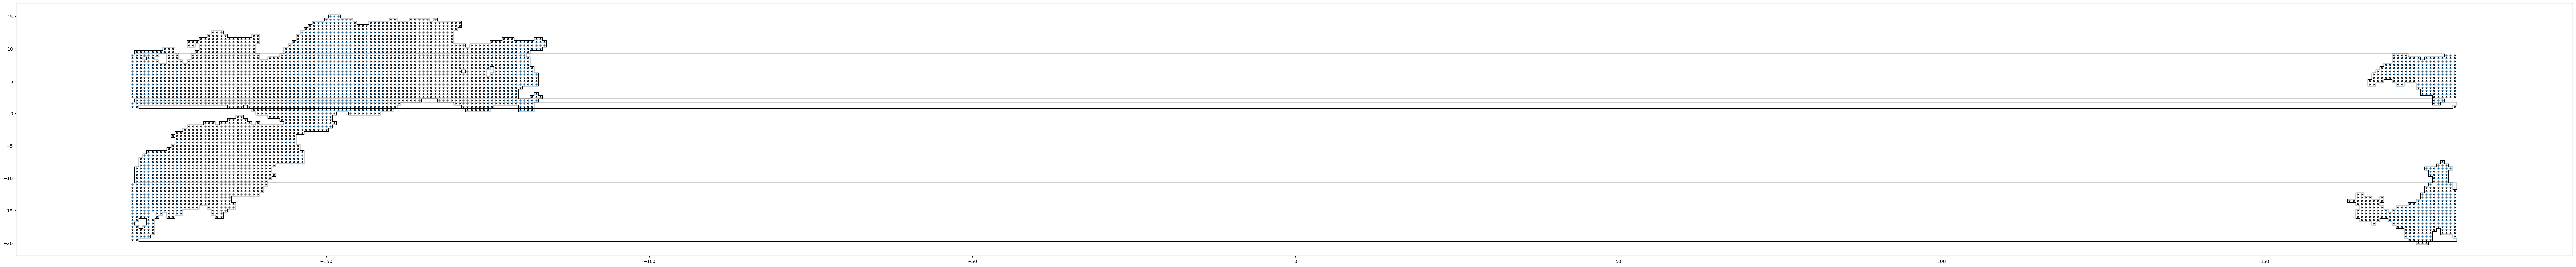

In [16]:
# dateline, holes
AR = { "_id" : "2000.01.01.015.0_13", "timestamp" : ISODate("2000-01-01T15:00:00Z"), "raster" : [ [ 173.75, -20, [ 250.2063751220703 ] ], [ 174.375, -20, [ 254.11582946777344 ] ], [ 175, -20, [ 251.6358184814453 ] ], [ -180, -19.5, [ 254.05386352539062 ] ], [ -179.375, -19.5, [ 250.08103942871094 ] ], [ 172.5, -19.5, [ 261.61236572265625 ] ], [ 173.125, -19.5, [ 259.94287109375 ] ], [ 173.75, -19.5, [ 272.23175048828125 ] ], [ 174.375, -19.5, [ 276.8329162597656 ] ], [ 175, -19.5, [ 271.420654296875 ] ], [ 175.625, -19.5, [ 256.75140380859375 ] ], [ -180, -19, [ 267.7886962890625 ] ], [ -179.375, -19, [ 263.8326110839844 ] ], [ -178.75, -19, [ 264.41302490234375 ] ], [ -178.125, -19, [ 270.99884033203125 ] ], [ -177.5, -19, [ 262.8390808105469 ] ], [ 171.875, -19, [ 266.4214782714844 ] ], [ 172.5, -19, [ 273.9678649902344 ] ], [ 173.125, -19, [ 263.1239318847656 ] ], [ 173.75, -19, [ 266.7671813964844 ] ], [ 174.375, -19, [ 270.6794128417969 ] ], [ 175, -19, [ 293.1512756347656 ] ], [ 175.625, -19, [ 276.5956726074219 ] ], [ 179.375, -19, [ 263.0519104003906 ] ], [ -180, -18.5, [ 270.7155456542969 ] ], [ -179.375, -18.5, [ 273.12091064453125 ] ], [ -178.75, -18.5, [ 293.82696533203125 ] ], [ -178.125, -18.5, [ 317.1369323730469 ] ], [ -177.5, -18.5, [ 307.546142578125 ] ], [ -176.875, -18.5, [ 255.3655548095703 ] ], [ 171.875, -18.5, [ 279.1039733886719 ] ], [ 172.5, -18.5, [ 303.00860595703125 ] ], [ 173.125, -18.5, [ 288.6958923339844 ] ], [ 173.75, -18.5, [ 283.7114562988281 ] ], [ 174.375, -18.5, [ 288.76080322265625 ] ], [ 175, -18.5, [ 293.6406555175781 ] ], [ 175.625, -18.5, [ 278.9503479003906 ] ], [ 177.5, -18.5, [ 254.15744018554688 ] ], [ 178.125, -18.5, [ 273.6254577636719 ] ], [ 178.75, -18.5, [ 276.61004638671875 ] ], [ 179.375, -18.5, [ 275.07904052734375 ] ], [ -180, -18, [ 271.70849609375 ] ], [ -179.375, -18, [ 274.8741760253906 ] ], [ -178.75, -18, [ 309.445068359375 ] ], [ -178.125, -18, [ 338.1132507324219 ] ], [ -177.5, -18, [ 332.2396545410156 ] ], [ -176.875, -18, [ 271.4016418457031 ] ], [ 171.875, -18, [ 298.3230285644531 ] ], [ 172.5, -18, [ 318.93585205078125 ] ], [ 173.125, -18, [ 312.6854553222656 ] ], [ 173.75, -18, [ 301.2244567871094 ] ], [ 174.375, -18, [ 303.7982482910156 ] ], [ 175, -18, [ 314.5303039550781 ] ], [ 175.625, -18, [ 303.7715148925781 ] ], [ 176.25, -18, [ 274.19134521484375 ] ], [ 177.5, -18, [ 263.8472595214844 ] ], [ 178.125, -18, [ 277.46728515625 ] ], [ 178.75, -18, [ 266.3921813964844 ] ], [ 179.375, -18, [ 256.7613220214844 ] ], [ -180, -17.5, [ 270.75048828125 ] ], [ -179.375, -17.5, [ 257.55560302734375 ] ], [ -178.125, -17.5, [ 255.7767333984375 ] ], [ -177.5, -17.5, [ 314.8695983886719 ] ], [ -176.875, -17.5, [ 291.5696105957031 ] ], [ 170.625, -17.5, [ 251.3199920654297 ] ], [ 171.25, -17.5, [ 298.7862243652344 ] ], [ 171.875, -17.5, [ 321.3480529785156 ] ], [ 172.5, -17.5, [ 327.5191650390625 ] ], [ 173.125, -17.5, [ 332.9875183105469 ] ], [ 173.75, -17.5, [ 322.09124755859375 ] ], [ 174.375, -17.5, [ 318.4394226074219 ] ], [ 175, -17.5, [ 332.04595947265625 ] ], [ 175.625, -17.5, [ 334.5689697265625 ] ], [ 176.25, -17.5, [ 318.25909423828125 ] ], [ 176.875, -17.5, [ 291.5035400390625 ] ], [ 177.5, -17.5, [ 293.7743835449219 ] ], [ 178.125, -17.5, [ 301.4160461425781 ] ], [ 178.75, -17.5, [ 283.8515930175781 ] ], [ 179.375, -17.5, [ 266.1692810058594 ] ], [ -180, -17, [ 285.5401306152344 ] ], [ -177.5, -17, [ 278.1139831542969 ] ], [ -176.875, -17, [ 279.3936767578125 ] ], [ 166.875, -17, [ 252.62802124023438 ] ], [ 170, -17, [ 253.0482635498047 ] ], [ 170.625, -17, [ 303.25604248046875 ] ], [ 171.25, -17, [ 335.883056640625 ] ], [ 171.875, -17, [ 336.3037109375 ] ], [ 172.5, -17, [ 335.5673828125 ] ], [ 173.125, -17, [ 341.1195983886719 ] ], [ 173.75, -17, [ 337.2704162597656 ] ], [ 174.375, -17, [ 336.7301330566406 ] ], [ 175, -17, [ 364.3309631347656 ] ], [ 175.625, -17, [ 384.10784912109375 ] ], [ 176.25, -17, [ 369.456787109375 ] ], [ 176.875, -17, [ 342.5150146484375 ] ], [ 177.5, -17, [ 329.58660888671875 ] ], [ 178.125, -17, [ 320.3935852050781 ] ], [ 178.75, -17, [ 301.0440368652344 ] ], [ 179.375, -17, [ 283.97454833984375 ] ], [ -180, -16.5, [ 401.72174072265625 ] ], [ -179.375, -16.5, [ 325.977783203125 ] ], [ -177.5, -16.5, [ 250.46885681152344 ] ], [ -176.875, -16.5, [ 253.8109588623047 ] ], [ 165, -16.5, [ 260.2165832519531 ] ], [ 165.625, -16.5, [ 270.86346435546875 ] ], [ 166.25, -16.5, [ 277.54046630859375 ] ], [ 166.875, -16.5, [ 274.3797302246094 ] ], [ 167.5, -16.5, [ 264.7889099121094 ] ], [ 169.375, -16.5, [ 250.4434356689453 ] ], [ 170, -16.5, [ 288.54400634765625 ] ], [ 170.625, -16.5, [ 327.9093017578125 ] ], [ 171.25, -16.5, [ 348.0770568847656 ] ], [ 171.875, -16.5, [ 348.812255859375 ] ], [ 172.5, -16.5, [ 347.9297790527344 ] ], [ 173.125, -16.5, [ 346.9274597167969 ] ], [ 173.75, -16.5, [ 345.33331298828125 ] ], [ 174.375, -16.5, [ 342.846923828125 ] ], [ 175, -16.5, [ 364.3731384277344 ] ], [ 175.625, -16.5, [ 390.5287170410156 ] ], [ 176.25, -16.5, [ 390.1149597167969 ] ], [ 176.875, -16.5, [ 377.76080322265625 ] ], [ 177.5, -16.5, [ 350.84075927734375 ] ], [ 178.125, -16.5, [ 317.4795227050781 ] ], [ 178.75, -16.5, [ 306.572509765625 ] ], [ 179.375, -16.5, [ 366.0337219238281 ] ], [ -180, -16, [ 454.60101318359375 ] ], [ -179.375, -16, [ 393.19952392578125 ] ], [ -178.75, -16, [ 294.35302734375 ] ], [ -178.125, -16, [ 264.1779479980469 ] ], [ -177.5, -16, [ 256.93145751953125 ] ], [ -176.25, -16, [ 252.19493103027344 ] ], [ -174.375, -16, [ 260.3937683105469 ] ], [ -173.75, -16, [ 258.74078369140625 ] ], [ -166.875, -16, [ 265.9936218261719 ] ], [ -166.25, -16, [ 257.7386779785156 ] ], [ 164.375, -16, [ 264.72021484375 ] ], [ 165, -16, [ 282.37005615234375 ] ], [ 165.625, -16, [ 285.26422119140625 ] ], [ 166.25, -16, [ 287.893310546875 ] ], [ 166.875, -16, [ 286.4367980957031 ] ], [ 167.5, -16, [ 282.0914001464844 ] ], [ 168.125, -16, [ 273.6176452636719 ] ], [ 168.75, -16, [ 263.4639892578125 ] ], [ 169.375, -16, [ 275.9580078125 ] ], [ 170, -16, [ 298.6219482421875 ] ], [ 170.625, -16, [ 322.7796325683594 ] ], [ 171.25, -16, [ 343.7710876464844 ] ], [ 171.875, -16, [ 357.7047424316406 ] ], [ 172.5, -16, [ 363.8686218261719 ] ], [ 173.125, -16, [ 358.96942138671875 ] ], [ 173.75, -16, [ 357.5184020996094 ] ], [ 174.375, -16, [ 351.5313415527344 ] ], [ 175, -16, [ 355.3173828125 ] ], [ 175.625, -16, [ 383.23577880859375 ] ], [ 176.25, -16, [ 399.25140380859375 ] ], [ 176.875, -16, [ 389.064453125 ] ], [ 177.5, -16, [ 355.2447814941406 ] ], [ 178.125, -16, [ 318.21929931640625 ] ], [ 178.75, -16, [ 350.7513732910156 ] ], [ 179.375, -16, [ 439.9320983886719 ] ], [ -180, -15.5, [ 437.431396484375 ] ], [ -179.375, -15.5, [ 407.54229736328125 ] ], [ -178.75, -15.5, [ 330.859619140625 ] ], [ -178.125, -15.5, [ 292.6963806152344 ] ], [ -177.5, -15.5, [ 274.3700866699219 ] ], [ -176.25, -15.5, [ 273.3437194824219 ] ], [ -175.625, -15.5, [ 288.99932861328125 ] ], [ -174.375, -15.5, [ 277.6786193847656 ] ], [ -173.75, -15.5, [ 289.63861083984375 ] ], [ -173.125, -15.5, [ 282.23095703125 ] ], [ -172.5, -15.5, [ 276.31011962890625 ] ], [ -167.5, -15.5, [ 254.26629638671875 ] ], [ -166.875, -15.5, [ 297.8733825683594 ] ], [ -166.25, -15.5, [ 280.8254089355469 ] ], [ 164.375, -15.5, [ 275.40069580078125 ] ], [ 165, -15.5, [ 275.34210205078125 ] ], [ 165.625, -15.5, [ 268.943359375 ] ], [ 166.25, -15.5, [ 278.0252380371094 ] ], [ 166.875, -15.5, [ 294.0578918457031 ] ], [ 167.5, -15.5, [ 288.4425048828125 ] ], [ 168.125, -15.5, [ 290.5892333984375 ] ], [ 168.75, -15.5, [ 272.2980651855469 ] ], [ 169.375, -15.5, [ 270.443115234375 ] ], [ 170, -15.5, [ 275.8035888671875 ] ], [ 170.625, -15.5, [ 300.87652587890625 ] ], [ 171.25, -15.5, [ 338.5683288574219 ] ], [ 171.875, -15.5, [ 364.63519287109375 ] ], [ 172.5, -15.5, [ 376.2076110839844 ] ], [ 173.125, -15.5, [ 370.71405029296875 ] ], [ 173.75, -15.5, [ 369.8545227050781 ] ], [ 174.375, -15.5, [ 362.0520935058594 ] ], [ 175, -15.5, [ 349.19415283203125 ] ], [ 175.625, -15.5, [ 357.8450927734375 ] ], [ 176.25, -15.5, [ 376.0887451171875 ] ], [ 176.875, -15.5, [ 377.5526123046875 ] ], [ 177.5, -15.5, [ 356.508056640625 ] ], [ 178.125, -15.5, [ 338.6600341796875 ] ], [ 178.75, -15.5, [ 358.38031005859375 ] ], [ 179.375, -15.5, [ 366.61920166015625 ] ], [ -180, -15, [ 396.19500732421875 ] ], [ -179.375, -15, [ 406.1603698730469 ] ], [ -178.75, -15, [ 355.7221984863281 ] ], [ -178.125, -15, [ 317.14227294921875 ] ], [ -177.5, -15, [ 296.7955322265625 ] ], [ -176.875, -15, [ 279.79241943359375 ] ], [ -176.25, -15, [ 309.85955810546875 ] ], [ -175.625, -15, [ 350.4967041015625 ] ], [ -175, -15, [ 281.7245788574219 ] ], [ -174.375, -15, [ 337.37286376953125 ] ], [ -173.75, -15, [ 325.3697204589844 ] ], [ -173.125, -15, [ 327.5016784667969 ] ], [ -172.5, -15, [ 289.22442626953125 ] ], [ -167.5, -15, [ 275.2115783691406 ] ], [ -166.875, -15, [ 297.3035583496094 ] ], [ -166.25, -15, [ 285.85662841796875 ] ], [ -165.625, -15, [ 266.4732360839844 ] ], [ 164.375, -15, [ 258.6183776855469 ] ], [ 165, -15, [ 256.814208984375 ] ], [ 165.625, -15, [ 255.7805633544922 ] ], [ 166.25, -15, [ 277.43304443359375 ] ], [ 166.875, -15, [ 295.7801513671875 ] ], [ 167.5, -15, [ 285.9823913574219 ] ], [ 168.125, -15, [ 277.5318298339844 ] ], [ 168.75, -15, [ 252.13633728027344 ] ], [ 170, -15, [ 256.6535339355469 ] ], [ 170.625, -15, [ 287.3447265625 ] ], [ 171.25, -15, [ 327.50091552734375 ] ], [ 171.875, -15, [ 348.4033508300781 ] ], [ 172.5, -15, [ 368.4642333984375 ] ], [ 173.125, -15, [ 379.3328552246094 ] ], [ 173.75, -15, [ 379.7403869628906 ] ], [ 174.375, -15, [ 373.7783508300781 ] ], [ 175, -15, [ 363.4378967285156 ] ], [ 175.625, -15, [ 368.7902526855469 ] ], [ 176.25, -15, [ 389.9390563964844 ] ], [ 176.875, -15, [ 399.0918884277344 ] ], [ 177.5, -15, [ 386.59295654296875 ] ], [ 178.125, -15, [ 359.0807189941406 ] ], [ 178.75, -15, [ 321.6498107910156 ] ], [ 179.375, -15, [ 307.470458984375 ] ], [ -180, -14.5, [ 386.2611999511719 ] ], [ -179.375, -14.5, [ 416.8141784667969 ] ], [ -178.75, -14.5, [ 378.8468322753906 ] ], [ -178.125, -14.5, [ 335.8829040527344 ] ], [ -177.5, -14.5, [ 333.8338928222656 ] ], [ -176.875, -14.5, [ 341.1610107421875 ] ], [ -176.25, -14.5, [ 364.5719299316406 ] ], [ -175.625, -14.5, [ 351.8922119140625 ] ], [ -175, -14.5, [ 315.06365966796875 ] ], [ -174.375, -14.5, [ 350.8748474121094 ] ], [ -173.75, -14.5, [ 337.8455810546875 ] ], [ -173.125, -14.5, [ 338.35137939453125 ] ], [ -172.5, -14.5, [ 297.24224853515625 ] ], [ -171.875, -14.5, [ 269.614501953125 ] ], [ -171.25, -14.5, [ 269.19024658203125 ] ], [ -170.625, -14.5, [ 267.061279296875 ] ], [ -170, -14.5, [ 260.64569091796875 ] ], [ -168.125, -14.5, [ 264.6904602050781 ] ], [ -167.5, -14.5, [ 288.37835693359375 ] ], [ -166.875, -14.5, [ 300.7946472167969 ] ], [ -166.25, -14.5, [ 298.0144348144531 ] ], [ -165.625, -14.5, [ 290.449951171875 ] ], [ -165, -14.5, [ 279.983642578125 ] ], [ -164.375, -14.5, [ 263.8446044921875 ] ], [ 165, -14.5, [ 256.18212890625 ] ], [ 165.625, -14.5, [ 261.3681335449219 ] ], [ 166.25, -14.5, [ 275.01336669921875 ] ], [ 166.875, -14.5, [ 282.7112121582031 ] ], [ 167.5, -14.5, [ 277.05010986328125 ] ], [ 168.125, -14.5, [ 254.67950439453125 ] ], [ 170.625, -14.5, [ 271.9095458984375 ] ], [ 171.25, -14.5, [ 291.8249206542969 ] ], [ 171.875, -14.5, [ 305.78240966796875 ] ], [ 172.5, -14.5, [ 327.1133117675781 ] ], [ 173.125, -14.5, [ 363.3319396972656 ] ], [ 173.75, -14.5, [ 380.8471984863281 ] ], [ 174.375, -14.5, [ 368.3829040527344 ] ], [ 175, -14.5, [ 367.667236328125 ] ], [ 175.625, -14.5, [ 389.97882080078125 ] ], [ 176.25, -14.5, [ 440.40789794921875 ] ], [ 176.875, -14.5, [ 447.863037109375 ] ], [ 177.5, -14.5, [ 407.0008544921875 ] ], [ 178.125, -14.5, [ 351.4567565917969 ] ], [ 178.75, -14.5, [ 306.4620666503906 ] ], [ 179.375, -14.5, [ 317.5045471191406 ] ], [ -180, -14, [ 391.86773681640625 ] ], [ -179.375, -14, [ 427.1419677734375 ] ], [ -178.75, -14, [ 402.7298889160156 ] ], [ -178.125, -14, [ 373.9136047363281 ] ], [ -177.5, -14, [ 377.5047302246094 ] ], [ -176.875, -14, [ 370.50054931640625 ] ], [ -176.25, -14, [ 361.4921569824219 ] ], [ -175.625, -14, [ 334.48272705078125 ] ], [ -175, -14, [ 298.5305480957031 ] ], [ -174.375, -14, [ 308.49114990234375 ] ], [ -173.75, -14, [ 341.9676208496094 ] ], [ -173.125, -14, [ 346.0705871582031 ] ], [ -172.5, -14, [ 315.4332275390625 ] ], [ -171.875, -14, [ 294.4501037597656 ] ], [ -171.25, -14, [ 296.3465270996094 ] ], [ -170.625, -14, [ 309.0408020019531 ] ], [ -170, -14, [ 292.35455322265625 ] ], [ -169.375, -14, [ 271.41839599609375 ] ], [ -168.75, -14, [ 271.63665771484375 ] ], [ -168.125, -14, [ 286.6905212402344 ] ], [ -167.5, -14, [ 304.4715881347656 ] ], [ -166.875, -14, [ 324.2606201171875 ] ], [ -166.25, -14, [ 323.4148864746094 ] ], [ -165.625, -14, [ 316.1458740234375 ] ], [ -165, -14, [ 297.4465637207031 ] ], [ -164.375, -14, [ 260.15203857421875 ] ], [ 164.375, -14, [ 259.57855224609375 ] ], [ 165, -14, [ 266.1409606933594 ] ], [ 165.625, -14, [ 266.503173828125 ] ], [ 166.25, -14, [ 268.8739013671875 ] ], [ 166.875, -14, [ 270.629638671875 ] ], [ 167.5, -14, [ 266.65777587890625 ] ], [ 172.5, -14, [ 259.5623779296875 ] ], [ 173.125, -14, [ 293.8705139160156 ] ], [ 173.75, -14, [ 341.99969482421875 ] ], [ 174.375, -14, [ 375.7452087402344 ] ], [ 175, -14, [ 410.3731384277344 ] ], [ 175.625, -14, [ 485.1264343261719 ] ], [ 176.25, -14, [ 525.2402954101562 ] ], [ 176.875, -14, [ 482.2834777832031 ] ], [ 177.5, -14, [ 416.0445251464844 ] ], [ 178.125, -14, [ 344.49713134765625 ] ], [ 178.75, -14, [ 305.8792419433594 ] ], [ 179.375, -14, [ 330.5627746582031 ] ], [ -180, -13.5, [ 390.3928527832031 ] ], [ -179.375, -13.5, [ 426.7933044433594 ] ], [ -178.75, -13.5, [ 424.5505676269531 ] ], [ -178.125, -13.5, [ 408.515380859375 ] ], [ -177.5, -13.5, [ 421.6843566894531 ] ], [ -176.875, -13.5, [ 400.9560852050781 ] ], [ -176.25, -13.5, [ 391.80572509765625 ] ], [ -175.625, -13.5, [ 356.3056945800781 ] ], [ -175, -13.5, [ 320.3881530761719 ] ], [ -174.375, -13.5, [ 337.119140625 ] ], [ -173.75, -13.5, [ 351.4415283203125 ] ], [ -173.125, -13.5, [ 344.96600341796875 ] ], [ -172.5, -13.5, [ 302.8079833984375 ] ], [ -171.875, -13.5, [ 304.367431640625 ] ], [ -171.25, -13.5, [ 320.35089111328125 ] ], [ -170.625, -13.5, [ 338.8336486816406 ] ], [ -170, -13.5, [ 313.9864501953125 ] ], [ -169.375, -13.5, [ 294.7785949707031 ] ], [ -168.75, -13.5, [ 300.06866455078125 ] ], [ -168.125, -13.5, [ 318.69696044921875 ] ], [ -167.5, -13.5, [ 345.365966796875 ] ], [ -166.875, -13.5, [ 362.5269775390625 ] ], [ -166.25, -13.5, [ 349.6696472167969 ] ], [ -165.625, -13.5, [ 317.62652587890625 ] ], [ -165, -13.5, [ 277.2704772949219 ] ], [ 163.125, -13.5, [ 251.27613830566406 ] ], [ 163.75, -13.5, [ 255.40347290039062 ] ], [ 164.375, -13.5, [ 257.8367004394531 ] ], [ 165, -13.5, [ 268.8523864746094 ] ], [ 165.625, -13.5, [ 273.6517639160156 ] ], [ 166.25, -13.5, [ 266.8108825683594 ] ], [ 166.875, -13.5, [ 254.99012756347656 ] ], [ 167.5, -13.5, [ 258.07525634765625 ] ], [ 168.125, -13.5, [ 250.95191955566406 ] ], [ 173.75, -13.5, [ 268.07147216796875 ] ], [ 174.375, -13.5, [ 349.751220703125 ] ], [ 175, -13.5, [ 425.4143981933594 ] ], [ 175.625, -13.5, [ 547.3455200195312 ] ], [ 176.25, -13.5, [ 631.4467163085938 ] ], [ 176.875, -13.5, [ 514.9674682617188 ] ], [ 177.5, -13.5, [ 436.318359375 ] ], [ 178.125, -13.5, [ 360.7239074707031 ] ], [ 178.75, -13.5, [ 301.9996337890625 ] ], [ 179.375, -13.5, [ 330.6260681152344 ] ], [ -180, -13, [ 380.09881591796875 ] ], [ -179.375, -13, [ 421.8623352050781 ] ], [ -178.75, -13, [ 448.3299560546875 ] ], [ -178.125, -13, [ 438.12603759765625 ] ], [ -177.5, -13, [ 430.50640869140625 ] ], [ -176.875, -13, [ 430.9959716796875 ] ], [ -176.25, -13, [ 417.5489501953125 ] ], [ -175.625, -13, [ 385.5777282714844 ] ], [ -175, -13, [ 354.48919677734375 ] ], [ -174.375, -13, [ 349.75421142578125 ] ], [ -173.75, -13, [ 340.1832580566406 ] ], [ -173.125, -13, [ 326.4752197265625 ] ], [ -172.5, -13, [ 309.81573486328125 ] ], [ -171.875, -13, [ 316.2811584472656 ] ], [ -171.25, -13, [ 347.79913330078125 ] ], [ -170.625, -13, [ 361.4368591308594 ] ], [ -170, -13, [ 335.42822265625 ] ], [ -169.375, -13, [ 320.6072082519531 ] ], [ -168.75, -13, [ 332.68707275390625 ] ], [ -168.125, -13, [ 386.42572021484375 ] ], [ -167.5, -13, [ 410.5032653808594 ] ], [ -166.875, -13, [ 383.91534423828125 ] ], [ -166.25, -13, [ 335.78326416015625 ] ], [ -165.625, -13, [ 295.0827941894531 ] ], [ -165, -13, [ 265.0522155761719 ] ], [ 164.375, -13, [ 254.4868621826172 ] ], [ 165, -13, [ 274.18560791015625 ] ], [ 165.625, -13, [ 275.0066223144531 ] ], [ 166.25, -13, [ 251.6781768798828 ] ], [ 168.125, -13, [ 253.10614013671875 ] ], [ 174.375, -13, [ 295.0654296875 ] ], [ 175, -13, [ 444.5809631347656 ] ], [ 175.625, -13, [ 681.957275390625 ] ], [ 176.25, -13, [ 840.2546997070312 ] ], [ 176.875, -13, [ 595.3833618164062 ] ], [ 177.5, -13, [ 440.6791076660156 ] ], [ 178.125, -13, [ 384.53912353515625 ] ], [ 178.75, -13, [ 288.17962646484375 ] ], [ 179.375, -13, [ 320.2438659667969 ] ], [ -180, -12.5, [ 362.7462463378906 ] ], [ -179.375, -12.5, [ 418.0184631347656 ] ], [ -178.75, -12.5, [ 473.344970703125 ] ], [ -178.125, -12.5, [ 459.1135559082031 ] ], [ -177.5, -12.5, [ 445.3682556152344 ] ], [ -176.875, -12.5, [ 424.088134765625 ] ], [ -176.25, -12.5, [ 432.9555358886719 ] ], [ -175.625, -12.5, [ 402.0867919921875 ] ], [ -175, -12.5, [ 367.88604736328125 ] ], [ -174.375, -12.5, [ 337.0049743652344 ] ], [ -173.75, -12.5, [ 315.1959533691406 ] ], [ -173.125, -12.5, [ 311.31939697265625 ] ], [ -172.5, -12.5, [ 314.95526123046875 ] ], [ -171.875, -12.5, [ 343.3328857421875 ] ], [ -171.25, -12.5, [ 377.7915954589844 ] ], [ -170.625, -12.5, [ 383.68597412109375 ] ], [ -170, -12.5, [ 367.5679016113281 ] ], [ -169.375, -12.5, [ 359.9263000488281 ] ], [ -168.75, -12.5, [ 388.3531799316406 ] ], [ -168.125, -12.5, [ 466.8470153808594 ] ], [ -167.5, -12.5, [ 423.00164794921875 ] ], [ -166.875, -12.5, [ 342.37506103515625 ] ], [ -166.25, -12.5, [ 303.44036865234375 ] ], [ -165.625, -12.5, [ 289.57965087890625 ] ], [ -165, -12.5, [ 276.6428527832031 ] ], [ -164.375, -12.5, [ 261.7917785644531 ] ], [ -163.75, -12.5, [ 256.5455627441406 ] ], [ -163.125, -12.5, [ 257.7742004394531 ] ], [ -162.5, -12.5, [ 264.2068176269531 ] ], [ -161.875, -12.5, [ 268.256103515625 ] ], [ -161.25, -12.5, [ 262.0483703613281 ] ], [ -160.625, -12.5, [ 251.2679443359375 ] ], [ 164.375, -12.5, [ 257.90435791015625 ] ], [ 165, -12.5, [ 265.0999755859375 ] ], [ 174.375, -12.5, [ 270.7699890136719 ] ], [ 175, -12.5, [ 513.68798828125 ] ], [ 175.625, -12.5, [ 570.4197998046875 ] ], [ 176.25, -12.5, [ 483.3121337890625 ] ], [ 176.875, -12.5, [ 692.6583251953125 ] ], [ 177.5, -12.5, [ 406.7286071777344 ] ], [ 178.125, -12.5, [ 416.825927734375 ] ], [ 178.75, -12.5, [ 289.62432861328125 ] ], [ 179.375, -12.5, [ 310.5869140625 ] ], [ -180, -12, [ 339.7080993652344 ] ], [ -179.375, -12, [ 413.92681884765625 ] ], [ -178.75, -12, [ 483.0748596191406 ] ], [ -178.125, -12, [ 471.0456848144531 ] ], [ -177.5, -12, [ 453.436279296875 ] ], [ -176.875, -12, [ 438.6713562011719 ] ], [ -176.25, -12, [ 446.0645751953125 ] ], [ -175.625, -12, [ 410.28424072265625 ] ], [ -175, -12, [ 365.0536804199219 ] ], [ -174.375, -12, [ 325.8509521484375 ] ], [ -173.75, -12, [ 304.1048889160156 ] ], [ -173.125, -12, [ 306.9371643066406 ] ], [ -172.5, -12, [ 328.77301025390625 ] ], [ -171.875, -12, [ 366.15087890625 ] ], [ -171.25, -12, [ 395.5606689453125 ] ], [ -170.625, -12, [ 400.2832336425781 ] ], [ -170, -12, [ 392.45733642578125 ] ], [ -169.375, -12, [ 399.4290771484375 ] ], [ -168.75, -12, [ 441.2344970703125 ] ], [ -168.125, -12, [ 473.607666015625 ] ], [ -167.5, -12, [ 370.2759704589844 ] ], [ -166.875, -12, [ 309.5896301269531 ] ], [ -166.25, -12, [ 290.4469299316406 ] ], [ -165.625, -12, [ 292.88653564453125 ] ], [ -165, -12, [ 284.8084716796875 ] ], [ -164.375, -12, [ 268.70965576171875 ] ], [ -163.75, -12, [ 267.8314208984375 ] ], [ -163.125, -12, [ 274.83062744140625 ] ], [ -162.5, -12, [ 280.3197937011719 ] ], [ -161.875, -12, [ 285.0770263671875 ] ], [ -161.25, -12, [ 286.8730163574219 ] ], [ -160.625, -12, [ 283.2555236816406 ] ], [ -160, -12, [ 259.1617736816406 ] ], [ 175, -12, [ 424.733154296875 ] ], [ 175.625, -12, [ 609.607177734375 ] ], [ 176.25, -12, [ 704.2994995117188 ] ], [ 176.875, -12, [ 562.716796875 ] ], [ 177.5, -12, [ 331.4809875488281 ] ], [ 178.125, -12, [ 447.0926513671875 ] ], [ 178.75, -12, [ 313.2941589355469 ] ], [ 179.375, -12, [ 292.9859619140625 ] ], [ -180, -11.5, [ 311.8990173339844 ] ], [ -179.375, -11.5, [ 411.0581359863281 ] ], [ -178.75, -11.5, [ 470.7001647949219 ] ], [ -178.125, -11.5, [ 468.5953369140625 ] ], [ -177.5, -11.5, [ 464.1502380371094 ] ], [ -176.875, -11.5, [ 454.4004211425781 ] ], [ -176.25, -11.5, [ 449.6028137207031 ] ], [ -175.625, -11.5, [ 406.658447265625 ] ], [ -175, -11.5, [ 350.2895812988281 ] ], [ -174.375, -11.5, [ 304.5000915527344 ] ], [ -173.75, -11.5, [ 293.16925048828125 ] ], [ -173.125, -11.5, [ 311.4696044921875 ] ], [ -172.5, -11.5, [ 347.1446838378906 ] ], [ -171.875, -11.5, [ 378.38311767578125 ] ], [ -171.25, -11.5, [ 400.2615966796875 ] ], [ -170.625, -11.5, [ 409.9000244140625 ] ], [ -170, -11.5, [ 400.7102355957031 ] ], [ -169.375, -11.5, [ 403.1088562011719 ] ], [ -168.75, -11.5, [ 429.7518310546875 ] ], [ -168.125, -11.5, [ 433.01470947265625 ] ], [ -167.5, -11.5, [ 346.9595642089844 ] ], [ -166.875, -11.5, [ 300.34027099609375 ] ], [ -166.25, -11.5, [ 291.44189453125 ] ], [ -165.625, -11.5, [ 295.125 ] ], [ -165, -11.5, [ 289.0360107421875 ] ], [ -164.375, -11.5, [ 277.3141174316406 ] ], [ -163.75, -11.5, [ 277.8990173339844 ] ], [ -163.125, -11.5, [ 284.6708679199219 ] ], [ -162.5, -11.5, [ 288.6454772949219 ] ], [ -161.875, -11.5, [ 297.55303955078125 ] ], [ -161.25, -11.5, [ 309.85888671875 ] ], [ -160.625, -11.5, [ 307.9826354980469 ] ], [ -160, -11.5, [ 281.9159240722656 ] ], [ 175, -11.5, [ 316.03411865234375 ] ], [ 175.625, -11.5, [ 587.2703247070312 ] ], [ 176.25, -11.5, [ 543.107177734375 ] ], [ 176.875, -11.5, [ 322.1702575683594 ] ], [ 177.5, -11.5, [ 338.83734130859375 ] ], [ 178.125, -11.5, [ 488.6302185058594 ] ], [ 178.75, -11.5, [ 318.8677978515625 ] ], [ -180, -11, [ 278.32659912109375 ] ], [ -179.375, -11, [ 406.0566101074219 ] ], [ -178.75, -11, [ 457.3318786621094 ] ], [ -178.125, -11, [ 457.5903625488281 ] ], [ -177.5, -11, [ 457.6444396972656 ] ], [ -176.875, -11, [ 452.5627136230469 ] ], [ -176.25, -11, [ 422.9328308105469 ] ], [ -175.625, -11, [ 375.7672119140625 ] ], [ -175, -11, [ 314.6587829589844 ] ], [ -174.375, -11, [ 297.86669921875 ] ], [ -173.75, -11, [ 304.6929626464844 ] ], [ -173.125, -11, [ 345.49151611328125 ] ], [ -172.5, -11, [ 376.8599853515625 ] ], [ -171.875, -11, [ 391.04290771484375 ] ], [ -171.25, -11, [ 402.6260986328125 ] ], [ -170.625, -11, [ 411.787841796875 ] ], [ -170, -11, [ 411.8628234863281 ] ], [ -169.375, -11, [ 405.78997802734375 ] ], [ -168.75, -11, [ 408.93280029296875 ] ], [ -168.125, -11, [ 402.9063415527344 ] ], [ -167.5, -11, [ 348.47607421875 ] ], [ -166.875, -11, [ 303.2781066894531 ] ], [ -166.25, -11, [ 294.75146484375 ] ], [ -165.625, -11, [ 296.88739013671875 ] ], [ -165, -11, [ 294.3582763671875 ] ], [ -164.375, -11, [ 284.6869201660156 ] ], [ -163.75, -11, [ 283.5831298828125 ] ], [ -163.125, -11, [ 289.8453674316406 ] ], [ -162.5, -11, [ 295.85748291015625 ] ], [ -161.875, -11, [ 302.2770080566406 ] ], [ -161.25, -11, [ 312.0527648925781 ] ], [ -160.625, -11, [ 308.90216064453125 ] ], [ -160, -11, [ 286.6502990722656 ] ], [ -159.375, -11, [ 256.6533508300781 ] ], [ 175.625, -11, [ 255.3519287109375 ] ], [ 176.875, -11, [ 338.73529052734375 ] ], [ 177.5, -11, [ 488.9375305175781 ] ], [ 178.125, -11, [ 496.81549072265625 ] ], [ 178.75, -11, [ 283.6951904296875 ] ], [ -179.375, -10.5, [ 393.66644287109375 ] ], [ -178.75, -10.5, [ 445.689453125 ] ], [ -178.125, -10.5, [ 438.07135009765625 ] ], [ -177.5, -10.5, [ 442.7835693359375 ] ], [ -176.875, -10.5, [ 449.0657043457031 ] ], [ -176.25, -10.5, [ 424.64739990234375 ] ], [ -175.625, -10.5, [ 371.0983581542969 ] ], [ -175, -10.5, [ 313.0289611816406 ] ], [ -174.375, -10.5, [ 305.08648681640625 ] ], [ -173.75, -10.5, [ 350.58544921875 ] ], [ -173.125, -10.5, [ 397.15325927734375 ] ], [ -172.5, -10.5, [ 407.9652404785156 ] ], [ -171.875, -10.5, [ 404.90435791015625 ] ], [ -171.25, -10.5, [ 403.03302001953125 ] ], [ -170.625, -10.5, [ 403.522705078125 ] ], [ -170, -10.5, [ 410.4822692871094 ] ], [ -169.375, -10.5, [ 405.86236572265625 ] ], [ -168.75, -10.5, [ 382.48583984375 ] ], [ -168.125, -10.5, [ 363.4076843261719 ] ], [ -167.5, -10.5, [ 350.16552734375 ] ], [ -166.875, -10.5, [ 323.3636169433594 ] ], [ -166.25, -10.5, [ 308.1343994140625 ] ], [ -165.625, -10.5, [ 301.1556396484375 ] ], [ -165, -10.5, [ 296.8562316894531 ] ], [ -164.375, -10.5, [ 287.73272705078125 ] ], [ -163.75, -10.5, [ 290.2646484375 ] ], [ -163.125, -10.5, [ 297.68218994140625 ] ], [ -162.5, -10.5, [ 300.88385009765625 ] ], [ -161.875, -10.5, [ 298.9586181640625 ] ], [ -161.25, -10.5, [ 296.5835266113281 ] ], [ -160.625, -10.5, [ 289.72662353515625 ] ], [ -160, -10.5, [ 274.7216491699219 ] ], [ -159.375, -10.5, [ 258.15826416015625 ] ], [ 176.25, -10.5, [ 271.23388671875 ] ], [ 176.875, -10.5, [ 512.4492797851562 ] ], [ 177.5, -10.5, [ 505.1598815917969 ] ], [ 178.125, -10.5, [ 369.5182189941406 ] ], [ -179.375, -10, [ 381.302978515625 ] ], [ -178.75, -10, [ 426.17999267578125 ] ], [ -178.125, -10, [ 419.4808654785156 ] ], [ -177.5, -10, [ 425.2400207519531 ] ], [ -176.875, -10, [ 451.94024658203125 ] ], [ -176.25, -10, [ 432.25201416015625 ] ], [ -175.625, -10, [ 365.6542053222656 ] ], [ -175, -10, [ 320.77471923828125 ] ], [ -174.375, -10, [ 313.01007080078125 ] ], [ -173.75, -10, [ 378.7173156738281 ] ], [ -173.125, -10, [ 429.2383117675781 ] ], [ -172.5, -10, [ 425.9759521484375 ] ], [ -171.875, -10, [ 417.99566650390625 ] ], [ -171.25, -10, [ 406.7031555175781 ] ], [ -170.625, -10, [ 382.1847229003906 ] ], [ -170, -10, [ 373.4799499511719 ] ], [ -169.375, -10, [ 379.8468017578125 ] ], [ -168.75, -10, [ 373.33740234375 ] ], [ -168.125, -10, [ 369.8998718261719 ] ], [ -167.5, -10, [ 371.23321533203125 ] ], [ -166.875, -10, [ 357.390625 ] ], [ -166.25, -10, [ 331.2911682128906 ] ], [ -165.625, -10, [ 306.5650939941406 ] ], [ -165, -10, [ 298.3946228027344 ] ], [ -164.375, -10, [ 294.7554016113281 ] ], [ -163.75, -10, [ 300.5162353515625 ] ], [ -163.125, -10, [ 301.106201171875 ] ], [ -162.5, -10, [ 297.41119384765625 ] ], [ -161.875, -10, [ 292.6650695800781 ] ], [ -161.25, -10, [ 286.5950927734375 ] ], [ -160.625, -10, [ 279.98651123046875 ] ], [ -160, -10, [ 269.39447021484375 ] ], [ -159.375, -10, [ 259.93389892578125 ] ], [ -158.75, -10, [ 252.71241760253906 ] ], [ 176.25, -10, [ 386.84521484375 ] ], [ 176.875, -10, [ 499.65045166015625 ] ], [ 177.5, -10, [ 370.2614440917969 ] ], [ 178.125, -10, [ 284.9146728515625 ] ], [ -179.375, -9.5, [ 346.4442443847656 ] ], [ -178.75, -9.5, [ 387.9674072265625 ] ], [ -178.125, -9.5, [ 411.6829833984375 ] ], [ -177.5, -9.5, [ 432.2464294433594 ] ], [ -176.875, -9.5, [ 464.52874755859375 ] ], [ -176.25, -9.5, [ 443.2691345214844 ] ], [ -175.625, -9.5, [ 382.4320068359375 ] ], [ -175, -9.5, [ 353.9879455566406 ] ], [ -174.375, -9.5, [ 355.141357421875 ] ], [ -173.75, -9.5, [ 403.2259826660156 ] ], [ -173.125, -9.5, [ 442.88287353515625 ] ], [ -172.5, -9.5, [ 435.611328125 ] ], [ -171.875, -9.5, [ 428.5439453125 ] ], [ -171.25, -9.5, [ 414.96832275390625 ] ], [ -170.625, -9.5, [ 367.47430419921875 ] ], [ -170, -9.5, [ 338.448974609375 ] ], [ -169.375, -9.5, [ 343.50286865234375 ] ], [ -168.75, -9.5, [ 362.93402099609375 ] ], [ -168.125, -9.5, [ 388.7461242675781 ] ], [ -167.5, -9.5, [ 408.4932556152344 ] ], [ -166.875, -9.5, [ 391.8168029785156 ] ], [ -166.25, -9.5, [ 349.2890319824219 ] ], [ -165.625, -9.5, [ 308.4908447265625 ] ], [ -165, -9.5, [ 302.0771484375 ] ], [ -164.375, -9.5, [ 304.5913391113281 ] ], [ -163.75, -9.5, [ 310.0606994628906 ] ], [ -163.125, -9.5, [ 308.7305908203125 ] ], [ -162.5, -9.5, [ 304.9689636230469 ] ], [ -161.875, -9.5, [ 304.7643737792969 ] ], [ -161.25, -9.5, [ 296.20635986328125 ] ], [ -160.625, -9.5, [ 284.9808349609375 ] ], [ -160, -9.5, [ 275.0665283203125 ] ], [ -159.375, -9.5, [ 264.58148193359375 ] ], [ -158.75, -9.5, [ 258.60546875 ] ], [ -158.125, -9.5, [ 250.3489532470703 ] ], [ 175.625, -9.5, [ 311.5770568847656 ] ], [ 176.25, -9.5, [ 439.03070068359375 ] ], [ 176.875, -9.5, [ 370.9981689453125 ] ], [ 177.5, -9.5, [ 331.0385437011719 ] ], [ 178.125, -9.5, [ 283.2620849609375 ] ], [ -179.375, -9, [ 285.9195556640625 ] ], [ -178.75, -9, [ 347.7078857421875 ] ], [ -178.125, -9, [ 394.6377258300781 ] ], [ -177.5, -9, [ 432.1375732421875 ] ], [ -176.875, -9, [ 459.63226318359375 ] ], [ -176.25, -9, [ 436.1227722167969 ] ], [ -175.625, -9, [ 396.808837890625 ] ], [ -175, -9, [ 379.77069091796875 ] ], [ -174.375, -9, [ 377.8901672363281 ] ], [ -173.75, -9, [ 404.0713195800781 ] ], [ -173.125, -9, [ 425.4110412597656 ] ], [ -172.5, -9, [ 420.9171142578125 ] ], [ -171.875, -9, [ 408.5352783203125 ] ], [ -171.25, -9, [ 416.4215087890625 ] ], [ -170.625, -9, [ 364.5898132324219 ] ], [ -170, -9, [ 320.0428466796875 ] ], [ -169.375, -9, [ 315.80072021484375 ] ], [ -168.75, -9, [ 355.72161865234375 ] ], [ -168.125, -9, [ 400.8677673339844 ] ], [ -167.5, -9, [ 415.22467041015625 ] ], [ -166.875, -9, [ 402.2236022949219 ] ], [ -166.25, -9, [ 348.5450439453125 ] ], [ -165.625, -9, [ 306.31402587890625 ] ], [ -165, -9, [ 306.9362487792969 ] ], [ -164.375, -9, [ 311.7255554199219 ] ], [ -163.75, -9, [ 316.5177307128906 ] ], [ -163.125, -9, [ 315.7605895996094 ] ], [ -162.5, -9, [ 314.5630798339844 ] ], [ -161.875, -9, [ 313.17041015625 ] ], [ -161.25, -9, [ 303.401123046875 ] ], [ -160.625, -9, [ 289.6922607421875 ] ], [ -160, -9, [ 281.9639587402344 ] ], [ -159.375, -9, [ 271.7917175292969 ] ], [ -158.75, -9, [ 260.7688903808594 ] ], [ 175.625, -9, [ 343.6161804199219 ] ], [ 176.25, -9, [ 327.59075927734375 ] ], [ 176.875, -9, [ 291.5103759765625 ] ], [ 177.5, -9, [ 311.31304931640625 ] ], [ 178.125, -9, [ 273.9764404296875 ] ], [ -179.375, -8.5, [ 250.95553588867188 ] ], [ -178.75, -8.5, [ 316.8271789550781 ] ], [ -178.125, -8.5, [ 372.87835693359375 ] ], [ -177.5, -8.5, [ 413.859619140625 ] ], [ -176.875, -8.5, [ 434.2679138183594 ] ], [ -176.25, -8.5, [ 415.3785095214844 ] ], [ -175.625, -8.5, [ 387.8304748535156 ] ], [ -175, -8.5, [ 375.64154052734375 ] ], [ -174.375, -8.5, [ 374.414794921875 ] ], [ -173.75, -8.5, [ 395.6285705566406 ] ], [ -173.125, -8.5, [ 425.9593505859375 ] ], [ -172.5, -8.5, [ 432.94580078125 ] ], [ -171.875, -8.5, [ 420.85943603515625 ] ], [ -171.25, -8.5, [ 394.19708251953125 ] ], [ -170.625, -8.5, [ 365.435302734375 ] ], [ -170, -8.5, [ 316.671630859375 ] ], [ -169.375, -8.5, [ 330.57635498046875 ] ], [ -168.75, -8.5, [ 387.8182678222656 ] ], [ -168.125, -8.5, [ 419.8188171386719 ] ], [ -167.5, -8.5, [ 401.25701904296875 ] ], [ -166.875, -8.5, [ 383.8016662597656 ] ], [ -166.25, -8.5, [ 338.18475341796875 ] ], [ -165.625, -8.5, [ 307.47552490234375 ] ], [ -165, -8.5, [ 313.8033447265625 ] ], [ -164.375, -8.5, [ 318.41412353515625 ] ], [ -163.75, -8.5, [ 324.0341796875 ] ], [ -163.125, -8.5, [ 323.0838317871094 ] ], [ -162.5, -8.5, [ 317.8026123046875 ] ], [ -161.875, -8.5, [ 308.87811279296875 ] ], [ -161.25, -8.5, [ 299.9154968261719 ] ], [ -160.625, -8.5, [ 291.1864318847656 ] ], [ -160, -8.5, [ 285.7283935546875 ] ], [ -159.375, -8.5, [ 279.6130065917969 ] ], [ -158.75, -8.5, [ 264.1186218261719 ] ], [ 175, -8.5, [ 270.61859130859375 ] ], [ 175.625, -8.5, [ 286.3063659667969 ] ], [ 176.25, -8.5, [ 276.53265380859375 ] ], [ 176.875, -8.5, [ 282.5594787597656 ] ], [ 177.5, -8.5, [ 294.2076721191406 ] ], [ 178.125, -8.5, [ 302.75347900390625 ] ], [ 178.75, -8.5, [ 254.8018798828125 ] ], [ -178.75, -8, [ 290.5369567871094 ] ], [ -178.125, -8, [ 346.20135498046875 ] ], [ -177.5, -8, [ 386.4055480957031 ] ], [ -176.875, -8, [ 403.2265319824219 ] ], [ -176.25, -8, [ 387.0885009765625 ] ], [ -175.625, -8, [ 360.9944763183594 ] ], [ -175, -8, [ 352.2697448730469 ] ], [ -174.375, -8, [ 359.1729736328125 ] ], [ -173.75, -8, [ 385.017822265625 ] ], [ -173.125, -8, [ 421.3436584472656 ] ], [ -172.5, -8, [ 438.9158630371094 ] ], [ -171.875, -8, [ 432.84967041015625 ] ], [ -171.25, -8, [ 412.77154541015625 ] ], [ -170.625, -8, [ 354.4027404785156 ] ], [ -170, -8, [ 342.1423645019531 ] ], [ -169.375, -8, [ 368.75439453125 ] ], [ -168.75, -8, [ 423.2742004394531 ] ], [ -168.125, -8, [ 429.34417724609375 ] ], [ -167.5, -8, [ 380.3568420410156 ] ], [ -166.875, -8, [ 352.6556091308594 ] ], [ -166.25, -8, [ 328.91607666015625 ] ], [ -165.625, -8, [ 317.06353759765625 ] ], [ -165, -8, [ 325.056396484375 ] ], [ -164.375, -8, [ 327.4460144042969 ] ], [ -163.75, -8, [ 331.22393798828125 ] ], [ -163.125, -8, [ 330.7314147949219 ] ], [ -162.5, -8, [ 322.12115478515625 ] ], [ -161.875, -8, [ 303.8291015625 ] ], [ -161.25, -8, [ 291.8621520996094 ] ], [ -160.625, -8, [ 290.5885314941406 ] ], [ -160, -8, [ 293.5777282714844 ] ], [ -159.375, -8, [ 292.2672424316406 ] ], [ -158.75, -8, [ 277.7497863769531 ] ], [ -158.125, -8, [ 257.6747131347656 ] ], [ 176.875, -8, [ 258.1752624511719 ] ], [ 177.5, -8, [ 277.14410400390625 ] ], [ 178.125, -8, [ 275.087158203125 ] ], [ -178.75, -7.5, [ 270.0307922363281 ] ], [ -178.125, -7.5, [ 315.4345703125 ] ], [ -177.5, -7.5, [ 353.1907043457031 ] ], [ -176.875, -7.5, [ 368.95855712890625 ] ], [ -176.25, -7.5, [ 355.60888671875 ] ], [ -175.625, -7.5, [ 333.1741027832031 ] ], [ -175, -7.5, [ 330.272705078125 ] ], [ -174.375, -7.5, [ 345.7873229980469 ] ], [ -173.75, -7.5, [ 377.5733642578125 ] ], [ -173.125, -7.5, [ 414.73309326171875 ] ], [ -172.5, -7.5, [ 436.72894287109375 ] ], [ -171.875, -7.5, [ 440.3487854003906 ] ], [ -171.25, -7.5, [ 428.4440612792969 ] ], [ -170.625, -7.5, [ 393.5786437988281 ] ], [ -170, -7.5, [ 361.4286193847656 ] ], [ -169.375, -7.5, [ 376.7911071777344 ] ], [ -168.75, -7.5, [ 448.1286926269531 ] ], [ -168.125, -7.5, [ 414.6011962890625 ] ], [ -167.5, -7.5, [ 351.53094482421875 ] ], [ -166.875, -7.5, [ 333.6671142578125 ] ], [ -166.25, -7.5, [ 333.6830139160156 ] ], [ -165.625, -7.5, [ 333.2386169433594 ] ], [ -165, -7.5, [ 337.20672607421875 ] ], [ -164.375, -7.5, [ 334.7604675292969 ] ], [ -163.75, -7.5, [ 332.60479736328125 ] ], [ -163.125, -7.5, [ 333.8232421875 ] ], [ -162.5, -7.5, [ 329.1677551269531 ] ], [ -161.875, -7.5, [ 314.07379150390625 ] ], [ -161.25, -7.5, [ 305.739501953125 ] ], [ -160.625, -7.5, [ 308.4571228027344 ] ], [ -160, -7.5, [ 309.04376220703125 ] ], [ -159.375, -7.5, [ 304.0995178222656 ] ], [ -158.75, -7.5, [ 290.54852294921875 ] ], [ -158.125, -7.5, [ 274.9962463378906 ] ], [ -157.5, -7.5, [ 266.7209167480469 ] ], [ -156.875, -7.5, [ 261.58319091796875 ] ], [ -156.25, -7.5, [ 258.84417724609375 ] ], [ -155.625, -7.5, [ 259.869873046875 ] ], [ -155, -7.5, [ 261.80755615234375 ] ], [ -154.375, -7.5, [ 259.18817138671875 ] ], [ -153.75, -7.5, [ 250.4004669189453 ] ], [ 177.5, -7.5, [ 255.6109161376953 ] ], [ -178.75, -7, [ 250.94642639160156 ] ], [ -178.125, -7, [ 288.4366760253906 ] ], [ -177.5, -7, [ 321.5457763671875 ] ], [ -176.875, -7, [ 335.8550720214844 ] ], [ -176.25, -7, [ 327.1965637207031 ] ], [ -175.625, -7, [ 312.5432434082031 ] ], [ -175, -7, [ 315.11749267578125 ] ], [ -174.375, -7, [ 333.1881103515625 ] ], [ -173.75, -7, [ 367.94757080078125 ] ], [ -173.125, -7, [ 409.2830505371094 ] ], [ -172.5, -7, [ 435.255859375 ] ], [ -171.875, -7, [ 442.4714660644531 ] ], [ -171.25, -7, [ 437.6274108886719 ] ], [ -170.625, -7, [ 422.2332763671875 ] ], [ -170, -7, [ 410.0917053222656 ] ], [ -169.375, -7, [ 411.499267578125 ] ], [ -168.75, -7, [ 451.0570983886719 ] ], [ -168.125, -7, [ 400.5901794433594 ] ], [ -167.5, -7, [ 343.955078125 ] ], [ -166.875, -7, [ 337.775634765625 ] ], [ -166.25, -7, [ 346.41949462890625 ] ], [ -165.625, -7, [ 347.1179504394531 ] ], [ -165, -7, [ 344.8406677246094 ] ], [ -164.375, -7, [ 338.64105224609375 ] ], [ -163.75, -7, [ 332.8709411621094 ] ], [ -163.125, -7, [ 331.9472351074219 ] ], [ -162.5, -7, [ 333.6803283691406 ] ], [ -161.875, -7, [ 330.76318359375 ] ], [ -161.25, -7, [ 322.85748291015625 ] ], [ -160.625, -7, [ 322.5697326660156 ] ], [ -160, -7, [ 320.07183837890625 ] ], [ -159.375, -7, [ 307.8878479003906 ] ], [ -158.75, -7, [ 292.39495849609375 ] ], [ -158.125, -7, [ 286.43988037109375 ] ], [ -157.5, -7, [ 285.2494201660156 ] ], [ -156.875, -7, [ 281.614990234375 ] ], [ -156.25, -7, [ 276.0420837402344 ] ], [ -155.625, -7, [ 270.3948059082031 ] ], [ -155, -7, [ 266.1459045410156 ] ], [ -154.375, -7, [ 260.72430419921875 ] ], [ -153.75, -7, [ 252.6289825439453 ] ], [ -178.125, -6.5, [ 263.2408752441406 ] ], [ -177.5, -6.5, [ 290.6004943847656 ] ], [ -176.875, -6.5, [ 302.55303955078125 ] ], [ -176.25, -6.5, [ 299.63397216796875 ] ], [ -175.625, -6.5, [ 293.0196228027344 ] ], [ -175, -6.5, [ 296.85882568359375 ] ], [ -174.375, -6.5, [ 312.9232177734375 ] ], [ -173.75, -6.5, [ 347.2726135253906 ] ], [ -173.125, -6.5, [ 396.8402099609375 ] ], [ -172.5, -6.5, [ 431.0249328613281 ] ], [ -171.875, -6.5, [ 442.0308837890625 ] ], [ -171.25, -6.5, [ 442.5002746582031 ] ], [ -170.625, -6.5, [ 441.33837890625 ] ], [ -170, -6.5, [ 438.2085266113281 ] ], [ -169.375, -6.5, [ 469.4062194824219 ] ], [ -168.75, -6.5, [ 439.05889892578125 ] ], [ -168.125, -6.5, [ 389.25323486328125 ] ], [ -167.5, -6.5, [ 354.5084533691406 ] ], [ -166.875, -6.5, [ 347.6870422363281 ] ], [ -166.25, -6.5, [ 350.5656433105469 ] ], [ -165.625, -6.5, [ 352.4658203125 ] ], [ -165, -6.5, [ 346.4104919433594 ] ], [ -164.375, -6.5, [ 339.8160095214844 ] ], [ -163.75, -6.5, [ 335.89697265625 ] ], [ -163.125, -6.5, [ 330.0162048339844 ] ], [ -162.5, -6.5, [ 328.1121520996094 ] ], [ -161.875, -6.5, [ 326.36297607421875 ] ], [ -161.25, -6.5, [ 317.9736022949219 ] ], [ -160.625, -6.5, [ 310.8285217285156 ] ], [ -160, -6.5, [ 306.5851135253906 ] ], [ -159.375, -6.5, [ 294.7922058105469 ] ], [ -158.75, -6.5, [ 281.6702575683594 ] ], [ -158.125, -6.5, [ 281.7184143066406 ] ], [ -157.5, -6.5, [ 284.2802734375 ] ], [ -156.875, -6.5, [ 284.1929931640625 ] ], [ -156.25, -6.5, [ 278.5122985839844 ] ], [ -155.625, -6.5, [ 270.3147888183594 ] ], [ -155, -6.5, [ 265.03118896484375 ] ], [ -154.375, -6.5, [ 259.6556396484375 ] ], [ -153.75, -6.5, [ 253.53111267089844 ] ], [ -177.5, -6, [ 261.2340393066406 ] ], [ -176.875, -6, [ 270.6932067871094 ] ], [ -176.25, -6, [ 270.1231689453125 ] ], [ -175.625, -6, [ 268.6092224121094 ] ], [ -175, -6, [ 272.5463562011719 ] ], [ -174.375, -6, [ 285.942138671875 ] ], [ -173.75, -6, [ 315.87371826171875 ] ], [ -173.125, -6, [ 366.2828369140625 ] ], [ -172.5, -6, [ 411.7933349609375 ] ], [ -171.875, -6, [ 434.4985046386719 ] ], [ -171.25, -6, [ 443.7047424316406 ] ], [ -170.625, -6, [ 489.4608154296875 ] ], [ -170, -6, [ 487.95513916015625 ] ], [ -169.375, -6, [ 464.26629638671875 ] ], [ -168.75, -6, [ 421.4479064941406 ] ], [ -168.125, -6, [ 385.5506896972656 ] ], [ -167.5, -6, [ 367.3580322265625 ] ], [ -166.875, -6, [ 349.0329284667969 ] ], [ -166.25, -6, [ 344.6807861328125 ] ], [ -165.625, -6, [ 346.1007080078125 ] ], [ -165, -6, [ 339.83367919921875 ] ], [ -164.375, -6, [ 336.91552734375 ] ], [ -163.75, -6, [ 335.61700439453125 ] ], [ -163.125, -6, [ 330.49627685546875 ] ], [ -162.5, -6, [ 324.9461975097656 ] ], [ -161.875, -6, [ 317.8379211425781 ] ], [ -161.25, -6, [ 307.8927001953125 ] ], [ -160.625, -6, [ 297.2439880371094 ] ], [ -160, -6, [ 286.5760192871094 ] ], [ -159.375, -6, [ 282.8944396972656 ] ], [ -158.75, -6, [ 277.7445983886719 ] ], [ -158.125, -6, [ 278.0709533691406 ] ], [ -157.5, -6, [ 277.7775573730469 ] ], [ -156.875, -6, [ 275.7801208496094 ] ], [ -156.25, -6, [ 272.1045837402344 ] ], [ -155.625, -6, [ 265.80364990234375 ] ], [ -155, -6, [ 259.2976989746094 ] ], [ -154.375, -6, [ 256.4292907714844 ] ], [ -153.75, -6, [ 251.5352020263672 ] ], [ -174.375, -5.5, [ 257.7888488769531 ] ], [ -173.75, -5.5, [ 280.9320068359375 ] ], [ -173.125, -5.5, [ 320.88531494140625 ] ], [ -172.5, -5.5, [ 367.1944885253906 ] ], [ -171.875, -5.5, [ 406.072265625 ] ], [ -171.25, -5.5, [ 471.01068115234375 ] ], [ -170.625, -5.5, [ 475.2511291503906 ] ], [ -170, -5.5, [ 462.73309326171875 ] ], [ -169.375, -5.5, [ 429.8983154296875 ] ], [ -168.75, -5.5, [ 394.9620056152344 ] ], [ -168.125, -5.5, [ 383.0184020996094 ] ], [ -167.5, -5.5, [ 368.1493835449219 ] ], [ -166.875, -5.5, [ 340.1829833984375 ] ], [ -166.25, -5.5, [ 334.891845703125 ] ], [ -165.625, -5.5, [ 334.6112060546875 ] ], [ -165, -5.5, [ 328.8707275390625 ] ], [ -164.375, -5.5, [ 328.5674133300781 ] ], [ -163.75, -5.5, [ 330.6567687988281 ] ], [ -163.125, -5.5, [ 329.35565185546875 ] ], [ -162.5, -5.5, [ 323.3675842285156 ] ], [ -161.875, -5.5, [ 315.3072814941406 ] ], [ -161.25, -5.5, [ 304.3312072753906 ] ], [ -160.625, -5.5, [ 297.7364196777344 ] ], [ -160, -5.5, [ 289.241943359375 ] ], [ -159.375, -5.5, [ 282.5957946777344 ] ], [ -158.75, -5.5, [ 276.3064270019531 ] ], [ -158.125, -5.5, [ 275.1227722167969 ] ], [ -157.5, -5.5, [ 274.1947021484375 ] ], [ -156.875, -5.5, [ 272.0665283203125 ] ], [ -156.25, -5.5, [ 269.6225891113281 ] ], [ -155.625, -5.5, [ 264.0883483886719 ] ], [ -155, -5.5, [ 255.96385192871094 ] ], [ -154.375, -5.5, [ 252.70166015625 ] ], [ -173.75, -5, [ 255.98855590820312 ] ], [ -173.125, -5, [ 321.5389404296875 ] ], [ -172.5, -5, [ 355.0589904785156 ] ], [ -171.875, -5, [ 350.0391845703125 ] ], [ -171.25, -5, [ 412.78204345703125 ] ], [ -170.625, -5, [ 408.92535400390625 ] ], [ -170, -5, [ 398.09759521484375 ] ], [ -169.375, -5, [ 379.663818359375 ] ], [ -168.75, -5, [ 368.64837646484375 ] ], [ -168.125, -5, [ 367.09600830078125 ] ], [ -167.5, -5, [ 352.0404052734375 ] ], [ -166.875, -5, [ 329.1656494140625 ] ], [ -166.25, -5, [ 326.8821105957031 ] ], [ -165.625, -5, [ 327.0450439453125 ] ], [ -165, -5, [ 322.7864685058594 ] ], [ -164.375, -5, [ 320.73931884765625 ] ], [ -163.75, -5, [ 321.49005126953125 ] ], [ -163.125, -5, [ 321.35107421875 ] ], [ -162.5, -5, [ 316.36639404296875 ] ], [ -161.875, -5, [ 308.47735595703125 ] ], [ -161.25, -5, [ 300.322509765625 ] ], [ -160.625, -5, [ 293.6149597167969 ] ], [ -160, -5, [ 286.8316955566406 ] ], [ -159.375, -5, [ 278.19268798828125 ] ], [ -158.75, -5, [ 270.4610290527344 ] ], [ -158.125, -5, [ 267.9769592285156 ] ], [ -157.5, -5, [ 269.8023376464844 ] ], [ -156.875, -5, [ 271.1544189453125 ] ], [ -156.25, -5, [ 269.9486999511719 ] ], [ -155.625, -5, [ 264.89849853515625 ] ], [ -155, -5, [ 257.2873229980469 ] ], [ -154.375, -5, [ 251.25332641601562 ] ], [ -173.125, -4.5, [ 302.7030029296875 ] ], [ -172.5, -4.5, [ 329.71990966796875 ] ], [ -171.875, -4.5, [ 344.5345458984375 ] ], [ -171.25, -4.5, [ 342.00616455078125 ] ], [ -170.625, -4.5, [ 336.97589111328125 ] ], [ -170, -4.5, [ 340.07623291015625 ] ], [ -169.375, -4.5, [ 338.9443054199219 ] ], [ -168.75, -4.5, [ 338.1423034667969 ] ], [ -168.125, -4.5, [ 337.8189697265625 ] ], [ -167.5, -4.5, [ 333.48138427734375 ] ], [ -166.875, -4.5, [ 327.14739990234375 ] ], [ -166.25, -4.5, [ 326.6101989746094 ] ], [ -165.625, -4.5, [ 326.1824035644531 ] ], [ -165, -4.5, [ 323.9132080078125 ] ], [ -164.375, -4.5, [ 318.0166015625 ] ], [ -163.75, -4.5, [ 310.0006408691406 ] ], [ -163.125, -4.5, [ 304.3035583496094 ] ], [ -162.5, -4.5, [ 300.6791076660156 ] ], [ -161.875, -4.5, [ 296.7244567871094 ] ], [ -161.25, -4.5, [ 293.3852844238281 ] ], [ -160.625, -4.5, [ 288.7373046875 ] ], [ -160, -4.5, [ 283.0950622558594 ] ], [ -159.375, -4.5, [ 275.7581481933594 ] ], [ -158.75, -4.5, [ 270.0457458496094 ] ], [ -158.125, -4.5, [ 266.4194030761719 ] ], [ -157.5, -4.5, [ 267.16180419921875 ] ], [ -156.875, -4.5, [ 269.0400390625 ] ], [ -156.25, -4.5, [ 267.6046447753906 ] ], [ -155.625, -4.5, [ 262.8601989746094 ] ], [ -155, -4.5, [ 254.6522216796875 ] ], [ -173.125, -4, [ 294.10009765625 ] ], [ -172.5, -4, [ 315.21575927734375 ] ], [ -171.875, -4, [ 303.0157165527344 ] ], [ -171.25, -4, [ 291.7583312988281 ] ], [ -170.625, -4, [ 302.76434326171875 ] ], [ -170, -4, [ 311.8846130371094 ] ], [ -169.375, -4, [ 318.330078125 ] ], [ -168.75, -4, [ 319.6404113769531 ] ], [ -168.125, -4, [ 318.7391357421875 ] ], [ -167.5, -4, [ 321.6485290527344 ] ], [ -166.875, -4, [ 325.6014404296875 ] ], [ -166.25, -4, [ 326.3490905761719 ] ], [ -165.625, -4, [ 324.16168212890625 ] ], [ -165, -4, [ 321.1971130371094 ] ], [ -164.375, -4, [ 314.11578369140625 ] ], [ -163.75, -4, [ 302.24920654296875 ] ], [ -163.125, -4, [ 292.0741882324219 ] ], [ -162.5, -4, [ 286.79193115234375 ] ], [ -161.875, -4, [ 283.7216796875 ] ], [ -161.25, -4, [ 281.1676940917969 ] ], [ -160.625, -4, [ 278.2441101074219 ] ], [ -160, -4, [ 275.6568603515625 ] ], [ -159.375, -4, [ 272.3727722167969 ] ], [ -158.75, -4, [ 268.5560607910156 ] ], [ -158.125, -4, [ 265.9173889160156 ] ], [ -157.5, -4, [ 265.15057373046875 ] ], [ -156.875, -4, [ 263.15216064453125 ] ], [ -156.25, -4, [ 261.9141845703125 ] ], [ -155.625, -4, [ 257.67767333984375 ] ], [ -155, -4, [ 251.6543426513672 ] ], [ -173.75, -3.5, [ 254.1382598876953 ] ], [ -173.125, -3.5, [ 281.07269287109375 ] ], [ -172.5, -3.5, [ 292.5619812011719 ] ], [ -171.875, -3.5, [ 279.99481201171875 ] ], [ -171.25, -3.5, [ 275.6734313964844 ] ], [ -170.625, -3.5, [ 290.8759765625 ] ], [ -170, -3.5, [ 300.4454650878906 ] ], [ -169.375, -3.5, [ 304.82574462890625 ] ], [ -168.75, -3.5, [ 305.6762390136719 ] ], [ -168.125, -3.5, [ 304.9808044433594 ] ], [ -167.5, -3.5, [ 308.77734375 ] ], [ -166.875, -3.5, [ 314.08056640625 ] ], [ -166.25, -3.5, [ 314.7938537597656 ] ], [ -165.625, -3.5, [ 312.9708557128906 ] ], [ -165, -3.5, [ 310.36578369140625 ] ], [ -164.375, -3.5, [ 306.48712158203125 ] ], [ -163.75, -3.5, [ 297.5312805175781 ] ], [ -163.125, -3.5, [ 288.5461730957031 ] ], [ -162.5, -3.5, [ 280.5333557128906 ] ], [ -161.875, -3.5, [ 276.7285461425781 ] ], [ -161.25, -3.5, [ 273.2764587402344 ] ], [ -160.625, -3.5, [ 269.58209228515625 ] ], [ -160, -3.5, [ 266.8367614746094 ] ], [ -159.375, -3.5, [ 265.47802734375 ] ], [ -158.75, -3.5, [ 264.37847900390625 ] ], [ -158.125, -3.5, [ 263.687255859375 ] ], [ -157.5, -3.5, [ 262.8216857910156 ] ], [ -156.875, -3.5, [ 260.80242919921875 ] ], [ -156.25, -3.5, [ 256.9671936035156 ] ], [ -155.625, -3.5, [ 253.64320373535156 ] ], [ -155, -3.5, [ 251.81239318847656 ] ], [ -173.125, -3, [ 261.1763610839844 ] ], [ -172.5, -3, [ 266.0433044433594 ] ], [ -171.875, -3, [ 265.26739501953125 ] ], [ -171.25, -3, [ 274.9604187011719 ] ], [ -170.625, -3, [ 289.63494873046875 ] ], [ -170, -3, [ 295.7304992675781 ] ], [ -169.375, -3, [ 296.4151611328125 ] ], [ -168.75, -3, [ 293.2068786621094 ] ], [ -168.125, -3, [ 291.9411315917969 ] ], [ -167.5, -3, [ 293.98028564453125 ] ], [ -166.875, -3, [ 296.61700439453125 ] ], [ -166.25, -3, [ 298.09710693359375 ] ], [ -165.625, -3, [ 297.83416748046875 ] ], [ -165, -3, [ 297.81195068359375 ] ], [ -164.375, -3, [ 298.3238525390625 ] ], [ -163.75, -3, [ 293.5096740722656 ] ], [ -163.125, -3, [ 284.9189758300781 ] ], [ -162.5, -3, [ 273.71649169921875 ] ], [ -161.875, -3, [ 268.9595642089844 ] ], [ -161.25, -3, [ 266.7986145019531 ] ], [ -160.625, -3, [ 263.524169921875 ] ], [ -160, -3, [ 260.2517395019531 ] ], [ -159.375, -3, [ 258.18463134765625 ] ], [ -158.75, -3, [ 257.7035827636719 ] ], [ -158.125, -3, [ 259.3699951171875 ] ], [ -157.5, -3, [ 262.0068054199219 ] ], [ -156.875, -3, [ 260.7967834472656 ] ], [ -156.25, -3, [ 255.5811004638672 ] ], [ -155.625, -3, [ 253.3328399658203 ] ], [ -155, -3, [ 256.1436767578125 ] ], [ -154.375, -3, [ 256.5815124511719 ] ], [ -153.75, -3, [ 250.438720703125 ] ], [ -171.875, -2.5, [ 253.29273986816406 ] ], [ -171.25, -2.5, [ 267.9015808105469 ] ], [ -170.625, -2.5, [ 280.65484619140625 ] ], [ -170, -2.5, [ 285.09686279296875 ] ], [ -169.375, -2.5, [ 285.0133361816406 ] ], [ -168.75, -2.5, [ 282.8435363769531 ] ], [ -168.125, -2.5, [ 279.8002624511719 ] ], [ -167.5, -2.5, [ 279.3894348144531 ] ], [ -166.875, -2.5, [ 280.5319519042969 ] ], [ -166.25, -2.5, [ 283.26123046875 ] ], [ -165.625, -2.5, [ 284.9438781738281 ] ], [ -165, -2.5, [ 284.99652099609375 ] ], [ -164.375, -2.5, [ 286.42291259765625 ] ], [ -163.75, -2.5, [ 285.8407897949219 ] ], [ -163.125, -2.5, [ 280.55889892578125 ] ], [ -162.5, -2.5, [ 268.49969482421875 ] ], [ -161.875, -2.5, [ 260.3091735839844 ] ], [ -161.25, -2.5, [ 259.2398376464844 ] ], [ -160.625, -2.5, [ 259.08984375 ] ], [ -160, -2.5, [ 256.7821044921875 ] ], [ -159.375, -2.5, [ 257.1932067871094 ] ], [ -158.75, -2.5, [ 257.9188232421875 ] ], [ -158.125, -2.5, [ 258.8492126464844 ] ], [ -157.5, -2.5, [ 260.6822814941406 ] ], [ -156.875, -2.5, [ 257.7796936035156 ] ], [ -156.25, -2.5, [ 253.02517700195312 ] ], [ -155.625, -2.5, [ 254.8397674560547 ] ], [ -155, -2.5, [ 260.93524169921875 ] ], [ -154.375, -2.5, [ 265.1844482421875 ] ], [ -153.75, -2.5, [ 264.1974792480469 ] ], [ -153.125, -2.5, [ 264.5382080078125 ] ], [ -152.5, -2.5, [ 264.4345703125 ] ], [ -151.875, -2.5, [ 262.0076904296875 ] ], [ -151.25, -2.5, [ 258.1600341796875 ] ], [ -150.625, -2.5, [ 256.2996826171875 ] ], [ -150, -2.5, [ 252.97906494140625 ] ], [ -171.25, -2, [ 250.22206115722656 ] ], [ -170.625, -2, [ 259.7727355957031 ] ], [ -170, -2, [ 265.8246765136719 ] ], [ -169.375, -2, [ 269.26434326171875 ] ], [ -168.75, -2, [ 271.21826171875 ] ], [ -168.125, -2, [ 267.8153076171875 ] ], [ -167.5, -2, [ 264.29498291015625 ] ], [ -166.875, -2, [ 264.9219970703125 ] ], [ -166.25, -2, [ 268.2295837402344 ] ], [ -165.625, -2, [ 271.5155334472656 ] ], [ -165, -2, [ 270.8232727050781 ] ], [ -164.375, -2, [ 272.8927307128906 ] ], [ -163.75, -2, [ 274.4242858886719 ] ], [ -163.125, -2, [ 272.0175476074219 ] ], [ -162.5, -2, [ 265.7129821777344 ] ], [ -161.875, -2, [ 255.93060302734375 ] ], [ -161.25, -2, [ 254.00340270996094 ] ], [ -160.625, -2, [ 255.64971923828125 ] ], [ -160, -2, [ 253.09117126464844 ] ], [ -159.375, -2, [ 253.58660888671875 ] ], [ -158.75, -2, [ 256.1712646484375 ] ], [ -158.125, -2, [ 257.80218505859375 ] ], [ -157.5, -2, [ 257.5440979003906 ] ], [ -156.875, -2, [ 255.84982299804688 ] ], [ -156.25, -2, [ 251.50083923339844 ] ], [ -155.625, -2, [ 252.23684692382812 ] ], [ -155, -2, [ 260.1300048828125 ] ], [ -154.375, -2, [ 271.731689453125 ] ], [ -153.75, -2, [ 278.320068359375 ] ], [ -153.125, -2, [ 279.93206787109375 ] ], [ -152.5, -2, [ 279.79107666015625 ] ], [ -151.875, -2, [ 276.00689697265625 ] ], [ -151.25, -2, [ 274.2028503417969 ] ], [ -150.625, -2, [ 271.2596435546875 ] ], [ -150, -2, [ 263.30694580078125 ] ], [ -149.375, -2, [ 253.7772216796875 ] ], [ -168.75, -1.5, [ 255.1356658935547 ] ], [ -168.125, -1.5, [ 254.77664184570312 ] ], [ -167.5, -1.5, [ 250.1082763671875 ] ], [ -166.25, -1.5, [ 252.7272491455078 ] ], [ -165.625, -1.5, [ 258.1946716308594 ] ], [ -165, -1.5, [ 258.90557861328125 ] ], [ -164.375, -1.5, [ 261.2155456542969 ] ], [ -163.75, -1.5, [ 263.6632080078125 ] ], [ -163.125, -1.5, [ 263.654052734375 ] ], [ -162.5, -1.5, [ 261.48162841796875 ] ], [ -161.875, -1.5, [ 251.01284790039062 ] ], [ -160.625, -1.5, [ 251.3793487548828 ] ], [ -156.25, -1.5, [ 251.47042846679688 ] ], [ -155.625, -1.5, [ 260.2066650390625 ] ], [ -155, -1.5, [ 270.260986328125 ] ], [ -154.375, -1.5, [ 279.20635986328125 ] ], [ -153.75, -1.5, [ 284.035400390625 ] ], [ -153.125, -1.5, [ 285.93377685546875 ] ], [ -152.5, -1.5, [ 286.5631408691406 ] ], [ -151.875, -1.5, [ 286.4189147949219 ] ], [ -151.25, -1.5, [ 283.4817199707031 ] ], [ -150.625, -1.5, [ 276.54852294921875 ] ], [ -150, -1.5, [ 268.3009033203125 ] ], [ -149.375, -1.5, [ 259.8259582519531 ] ], [ -148.75, -1.5, [ 250.80014038085938 ] ], [ -165, -1, [ 251.39447021484375 ] ], [ -164.375, -1, [ 252.70602416992188 ] ], [ -163.75, -1, [ 255.6864776611328 ] ], [ -163.125, -1, [ 258.96319580078125 ] ], [ -162.5, -1, [ 255.49217224121094 ] ], [ -156.875, -1, [ 255.970947265625 ] ], [ -156.25, -1, [ 265.0301208496094 ] ], [ -155.625, -1, [ 274.6174621582031 ] ], [ -155, -1, [ 282.90496826171875 ] ], [ -154.375, -1, [ 287.6415710449219 ] ], [ -153.75, -1, [ 289.4924011230469 ] ], [ -153.125, -1, [ 291.3056945800781 ] ], [ -152.5, -1, [ 292.03521728515625 ] ], [ -151.875, -1, [ 288.8070983886719 ] ], [ -151.25, -1, [ 281.5458679199219 ] ], [ -150.625, -1, [ 272.03277587890625 ] ], [ -150, -1, [ 261.3614807128906 ] ], [ -149.375, -1, [ 252.25906372070312 ] ], [ -163.75, -0.5, [ 250.2172088623047 ] ], [ -163.125, -0.5, [ 254.59759521484375 ] ], [ -158.75, -0.5, [ 253.296142578125 ] ], [ -158.125, -0.5, [ 262.6777038574219 ] ], [ -157.5, -0.5, [ 271.2986145019531 ] ], [ -156.875, -0.5, [ 278.1408386230469 ] ], [ -156.25, -0.5, [ 284.21014404296875 ] ], [ -155.625, -0.5, [ 291.0441589355469 ] ], [ -155, -0.5, [ 297.5240478515625 ] ], [ -154.375, -0.5, [ 301.3333435058594 ] ], [ -153.75, -0.5, [ 301.4219055175781 ] ], [ -153.125, -0.5, [ 299.9991760253906 ] ], [ -152.5, -0.5, [ 298.292236328125 ] ], [ -151.875, -0.5, [ 294.7522277832031 ] ], [ -151.25, -0.5, [ 286.8817138671875 ] ], [ -150.625, -0.5, [ 274.248779296875 ] ], [ -150, -0.5, [ 261.4532165527344 ] ], [ -149.375, -0.5, [ 250.75828552246094 ] ], [ -160.625, -1.7975103014118005e-13, [ 253.7249755859375 ] ], [ -160, -1.7975103014118005e-13, [ 256.1048583984375 ] ], [ -159.375, -1.7975103014118005e-13, [ 261.57550048828125 ] ], [ -158.75, -1.7975103014118005e-13, [ 270.5240173339844 ] ], [ -158.125, -1.7975103014118005e-13, [ 280.1220397949219 ] ], [ -157.5, -1.7975103014118005e-13, [ 287.6618957519531 ] ], [ -156.875, -1.7975103014118005e-13, [ 293.01708984375 ] ], [ -156.25, -1.7975103014118005e-13, [ 297.8829650878906 ] ], [ -155.625, -1.7975103014118005e-13, [ 303.4873352050781 ] ], [ -155, -1.7975103014118005e-13, [ 308.4912109375 ] ], [ -154.375, -1.7975103014118005e-13, [ 311.523193359375 ] ], [ -153.75, -1.7975103014118005e-13, [ 312.0975036621094 ] ], [ -153.125, -1.7975103014118005e-13, [ 310.7644958496094 ] ], [ -152.5, -1.7975103014118005e-13, [ 308.2205810546875 ] ], [ -151.875, -1.7975103014118005e-13, [ 303.95538330078125 ] ], [ -151.25, -1.7975103014118005e-13, [ 297.4686584472656 ] ], [ -150.625, -1.7975103014118005e-13, [ 288.0746154785156 ] ], [ -150, -1.7975103014118005e-13, [ 276.43646240234375 ] ], [ -149.375, -1.7975103014118005e-13, [ 265.11505126953125 ] ], [ -148.75, -1.7975103014118005e-13, [ 255.1797637939453 ] ], [ -146.25, -1.7975103014118005e-13, [ 253.43838500976562 ] ], [ -145.625, -1.7975103014118005e-13, [ 261.0353698730469 ] ], [ -145, -1.7975103014118005e-13, [ 264.4527587890625 ] ], [ -144.375, -1.7975103014118005e-13, [ 263.7312316894531 ] ], [ -143.75, -1.7975103014118005e-13, [ 262.7854919433594 ] ], [ -143.125, -1.7975103014118005e-13, [ 263.5318298339844 ] ], [ -142.5, -1.7975103014118005e-13, [ 260.67401123046875 ] ], [ -141.875, -1.7975103014118005e-13, [ 253.12368774414062 ] ], [ -161.25, 0.5, [ 253.95945739746094 ] ], [ -160.625, 0.5, [ 260.55133056640625 ] ], [ -160, 0.5, [ 266.8511657714844 ] ], [ -159.375, 0.5, [ 272.67529296875 ] ], [ -158.75, 0.5, [ 281.1529235839844 ] ], [ -158.125, 0.5, [ 290.86553955078125 ] ], [ -157.5, 0.5, [ 297.7388916015625 ] ], [ -156.875, 0.5, [ 301.9870300292969 ] ], [ -156.25, 0.5, [ 307.1312561035156 ] ], [ -155.625, 0.5, [ 314.0885314941406 ] ], [ -155, 0.5, [ 320.78167724609375 ] ], [ -154.375, 0.5, [ 324.1923828125 ] ], [ -153.75, 0.5, [ 324.8352355957031 ] ], [ -153.125, 0.5, [ 324.85125732421875 ] ], [ -152.5, 0.5, [ 325.7928771972656 ] ], [ -151.875, 0.5, [ 324.56866455078125 ] ], [ -151.25, 0.5, [ 319.03924560546875 ] ], [ -150.625, 0.5, [ 309.1475524902344 ] ], [ -150, 0.5, [ 297.3278503417969 ] ], [ -149.375, 0.5, [ 283.66314697265625 ] ], [ -148.75, 0.5, [ 272.214599609375 ] ], [ -148.125, 0.5, [ 266.66851806640625 ] ], [ -147.5, 0.5, [ 268.450439453125 ] ], [ -146.875, 0.5, [ 273.3798828125 ] ], [ -146.25, 0.5, [ 280.677978515625 ] ], [ -145.625, 0.5, [ 282.32647705078125 ] ], [ -145, 0.5, [ 279.4620666503906 ] ], [ -144.375, 0.5, [ 275.656982421875 ] ], [ -143.75, 0.5, [ 277.1241455078125 ] ], [ -143.125, 0.5, [ 279.56402587890625 ] ], [ -142.5, 0.5, [ 278.6107177734375 ] ], [ -141.875, 0.5, [ 273.7630310058594 ] ], [ -141.25, 0.5, [ 267.64404296875 ] ], [ -140.625, 0.5, [ 259.115234375 ] ], [ -140, 0.5, [ 250.3927459716797 ] ], [ -128.125, 0.5, [ 252.10305786132812 ] ], [ -127.5, 0.5, [ 267.73101806640625 ] ], [ -126.875, 0.5, [ 274.6145324707031 ] ], [ -126.25, 0.5, [ 275.0718994140625 ] ], [ -125.625, 0.5, [ 268.9007873535156 ] ], [ -125, 0.5, [ 254.4429931640625 ] ], [ -120, 0.5, [ 250.61129760742188 ] ], [ -119.375, 0.5, [ 256.6534729003906 ] ], [ -118.75, 0.5, [ 256.9523620605469 ] ], [ -118.125, 0.5, [ 250.97120666503906 ] ], [ -180, 1, [ 253.95372009277344 ] ], [ -179.375, 1, [ 251.26443481445312 ] ], [ -165, 1, [ 253.7537841796875 ] ], [ -164.375, 1, [ 257.3724365234375 ] ], [ -163.75, 1, [ 256.1219177246094 ] ], [ -163.125, 1, [ 252.68031311035156 ] ], [ -161.875, 1, [ 252.85316467285156 ] ], [ -161.25, 1, [ 261.3204040527344 ] ], [ -160.625, 1, [ 268.12921142578125 ] ], [ -160, 1, [ 275.8212890625 ] ], [ -159.375, 1, [ 284.08575439453125 ] ], [ -158.75, 1, [ 294.1929626464844 ] ], [ -158.125, 1, [ 303.88970947265625 ] ], [ -157.5, 1, [ 311.25140380859375 ] ], [ -156.875, 1, [ 315.1623229980469 ] ], [ -156.25, 1, [ 321.0591125488281 ] ], [ -155.625, 1, [ 330.26861572265625 ] ], [ -155, 1, [ 339.90228271484375 ] ], [ -154.375, 1, [ 348.30755615234375 ] ], [ -153.75, 1, [ 353.29986572265625 ] ], [ -153.125, 1, [ 354.72735595703125 ] ], [ -152.5, 1, [ 355.10186767578125 ] ], [ -151.875, 1, [ 354.0380554199219 ] ], [ -151.25, 1, [ 348.9070739746094 ] ], [ -150.625, 1, [ 337.96087646484375 ] ], [ -150, 1, [ 325.8094482421875 ] ], [ -149.375, 1, [ 312.7567138671875 ] ], [ -148.75, 1, [ 300.0399169921875 ] ], [ -148.125, 1, [ 291.0268859863281 ] ], [ -147.5, 1, [ 289.86773681640625 ] ], [ -146.875, 1, [ 292.1361389160156 ] ], [ -146.25, 1, [ 297.1763000488281 ] ], [ -145.625, 1, [ 297.3066711425781 ] ], [ -145, 1, [ 293.9518737792969 ] ], [ -144.375, 1, [ 293.1241149902344 ] ], [ -143.75, 1, [ 296.8406677246094 ] ], [ -143.125, 1, [ 299.6575012207031 ] ], [ -142.5, 1, [ 300.93927001953125 ] ], [ -141.875, 1, [ 300.9744873046875 ] ], [ -141.25, 1, [ 294.7468566894531 ] ], [ -140.625, 1, [ 283.4371337890625 ] ], [ -140, 1, [ 269.8398742675781 ] ], [ -139.375, 1, [ 257.8338928222656 ] ], [ -128.75, 1, [ 254.14927673339844 ] ], [ -128.125, 1, [ 271.7719421386719 ] ], [ -127.5, 1, [ 291.3704833984375 ] ], [ -126.875, 1, [ 300.94873046875 ] ], [ -126.25, 1, [ 301.1070251464844 ] ], [ -125.625, 1, [ 291.7405700683594 ] ], [ -125, 1, [ 273.9170837402344 ] ], [ -124.375, 1, [ 255.18429565429688 ] ], [ -120, 1, [ 255.46035766601562 ] ], [ -119.375, 1, [ 261.3388366699219 ] ], [ -118.75, 1, [ 261.6701354980469 ] ], [ -118.125, 1, [ 255.3308868408203 ] ], [ 179.375, 1, [ 254.14605712890625 ] ], [ -180, 1.5, [ 264.0943603515625 ] ], [ -179.375, 1.5, [ 260.6331481933594 ] ], [ -178.75, 1.5, [ 256.0340881347656 ] ], [ -178.125, 1.5, [ 253.6770477294922 ] ], [ -177.5, 1.5, [ 261.7309875488281 ] ], [ -176.875, 1.5, [ 271.7470703125 ] ], [ -176.25, 1.5, [ 270.4344482421875 ] ], [ -175.625, 1.5, [ 262.6250915527344 ] ], [ -175, 1.5, [ 259.59912109375 ] ], [ -174.375, 1.5, [ 259.8068542480469 ] ], [ -173.75, 1.5, [ 257.75982666015625 ] ], [ -173.125, 1.5, [ 254.3141632080078 ] ], [ -172.5, 1.5, [ 250.94985961914062 ] ], [ -171.875, 1.5, [ 250.4165496826172 ] ], [ -171.25, 1.5, [ 253.369384765625 ] ], [ -170.625, 1.5, [ 253.61097717285156 ] ], [ -170, 1.5, [ 251.77882385253906 ] ], [ -169.375, 1.5, [ 255.78602600097656 ] ], [ -168.75, 1.5, [ 258.9292907714844 ] ], [ -168.125, 1.5, [ 256.90130615234375 ] ], [ -167.5, 1.5, [ 253.7751922607422 ] ], [ -166.875, 1.5, [ 254.2626495361328 ] ], [ -166.25, 1.5, [ 254.2898712158203 ] ], [ -165.625, 1.5, [ 254.9536895751953 ] ], [ -165, 1.5, [ 259.755859375 ] ], [ -164.375, 1.5, [ 266.0440368652344 ] ], [ -163.75, 1.5, [ 267.55419921875 ] ], [ -163.125, 1.5, [ 262.59246826171875 ] ], [ -162.5, 1.5, [ 257.5827331542969 ] ], [ -161.875, 1.5, [ 258.89447021484375 ] ], [ -161.25, 1.5, [ 267.6675720214844 ] ], [ -160.625, 1.5, [ 276.5882873535156 ] ], [ -160, 1.5, [ 284.88232421875 ] ], [ -159.375, 1.5, [ 294.82000732421875 ] ], [ -158.75, 1.5, [ 306.01898193359375 ] ], [ -158.125, 1.5, [ 316.2447509765625 ] ], [ -157.5, 1.5, [ 325.98236083984375 ] ], [ -156.875, 1.5, [ 334.4615783691406 ] ], [ -156.25, 1.5, [ 340.0736389160156 ] ], [ -155.625, 1.5, [ 347.10809326171875 ] ], [ -155, 1.5, [ 356.8556213378906 ] ], [ -154.375, 1.5, [ 367.7745056152344 ] ], [ -153.75, 1.5, [ 374.9754638671875 ] ], [ -153.125, 1.5, [ 377.0315856933594 ] ], [ -152.5, 1.5, [ 377.6796875 ] ], [ -151.875, 1.5, [ 377.40582275390625 ] ], [ -151.25, 1.5, [ 373.81085205078125 ] ], [ -150.625, 1.5, [ 366.0910339355469 ] ], [ -150, 1.5, [ 358.22735595703125 ] ], [ -149.375, 1.5, [ 348.8333740234375 ] ], [ -148.75, 1.5, [ 337.69140625 ] ], [ -148.125, 1.5, [ 324.43865966796875 ] ], [ -147.5, 1.5, [ 315.6185302734375 ] ], [ -146.875, 1.5, [ 313.0823669433594 ] ], [ -146.25, 1.5, [ 317.7915344238281 ] ], [ -145.625, 1.5, [ 317.5651550292969 ] ], [ -145, 1.5, [ 313.0911560058594 ] ], [ -144.375, 1.5, [ 313.64007568359375 ] ], [ -143.75, 1.5, [ 316.9583435058594 ] ], [ -143.125, 1.5, [ 316.3338623046875 ] ], [ -142.5, 1.5, [ 321.5185852050781 ] ], [ -141.875, 1.5, [ 326.49493408203125 ] ], [ -141.25, 1.5, [ 326.3025207519531 ] ], [ -140.625, 1.5, [ 316.10418701171875 ] ], [ -140, 1.5, [ 296.760498046875 ] ], [ -139.375, 1.5, [ 277.96392822265625 ] ], [ -138.75, 1.5, [ 259.0993957519531 ] ], [ -130, 1.5, [ 256.19244384765625 ] ], [ -129.375, 1.5, [ 261.32708740234375 ] ], [ -128.75, 1.5, [ 271.0948181152344 ] ], [ -128.125, 1.5, [ 290.2647705078125 ] ], [ -127.5, 1.5, [ 312.2754211425781 ] ], [ -126.875, 1.5, [ 322.7207946777344 ] ], [ -126.25, 1.5, [ 321.6405334472656 ] ], [ -125.625, 1.5, [ 312.0948181152344 ] ], [ -125, 1.5, [ 293.8779602050781 ] ], [ -124.375, 1.5, [ 273.8088684082031 ] ], [ -123.75, 1.5, [ 264.7530822753906 ] ], [ -123.125, 1.5, [ 263.57977294921875 ] ], [ -122.5, 1.5, [ 262.5342712402344 ] ], [ -121.875, 1.5, [ 258.7897644042969 ] ], [ -121.25, 1.5, [ 254.5621337890625 ] ], [ -120.625, 1.5, [ 252.23716735839844 ] ], [ -120, 1.5, [ 254.63401794433594 ] ], [ -119.375, 1.5, [ 260.5433654785156 ] ], [ -118.75, 1.5, [ 261.20440673828125 ] ], [ -118.125, 1.5, [ 256.6180114746094 ] ], [ 176.25, 1.5, [ 254.02377319335938 ] ], [ 176.875, 1.5, [ 251.81561279296875 ] ], [ -179.375, 2, [ 268.87811279296875 ] ], [ -178.75, 2, [ 265.02716064453125 ] ], [ -178.125, 2, [ 268.55523681640625 ] ], [ -177.5, 2, [ 280.42510986328125 ] ], [ -176.875, 2, [ 292.2635803222656 ] ], [ -176.25, 2, [ 294.4330749511719 ] ], [ -175.625, 2, [ 293.0749206542969 ] ], [ -175, 2, [ 293.6790466308594 ] ], [ -174.375, 2, [ 290.90679931640625 ] ], [ -173.75, 2, [ 284.71435546875 ] ], [ -173.125, 2, [ 282.10858154296875 ] ], [ -172.5, 2, [ 279.2075500488281 ] ], [ -171.875, 2, [ 278.7733459472656 ] ], [ -171.25, 2, [ 282.22174072265625 ] ], [ -170.625, 2, [ 284.02459716796875 ] ], [ -170, 2, [ 282.2275390625 ] ], [ -169.375, 2, [ 278.66107177734375 ] ], [ -168.75, 2, [ 275.9189453125 ] ], [ -168.125, 2, [ 278.3110046386719 ] ], [ -167.5, 2, [ 279.8133850097656 ] ], [ -166.875, 2, [ 276.7376708984375 ] ], [ -166.25, 2, [ 270.88311767578125 ] ], [ -165.625, 2, [ 268.6177062988281 ] ], [ -165, 2, [ 269.3695983886719 ] ], [ -164.375, 2, [ 274.9534912109375 ] ], [ -163.75, 2, [ 277.81884765625 ] ], [ -163.125, 2, [ 272.9407043457031 ] ], [ -162.5, 2, [ 266.5741882324219 ] ], [ -161.875, 2, [ 267.85986328125 ] ], [ -161.25, 2, [ 275.96234130859375 ] ], [ -160.625, 2, [ 283.96673583984375 ] ], [ -160, 2, [ 292.78680419921875 ] ], [ -159.375, 2, [ 304.6039123535156 ] ], [ -158.75, 2, [ 315.6498107910156 ] ], [ -158.125, 2, [ 324.00146484375 ] ], [ -157.5, 2, [ 335.5286560058594 ] ], [ -156.875, 2, [ 348.3661804199219 ] ], [ -156.25, 2, [ 356.6513977050781 ] ], [ -155.625, 2, [ 362.5384826660156 ] ], [ -155, 2, [ 367.7481384277344 ] ], [ -154.375, 2, [ 373.1981201171875 ] ], [ -153.75, 2, [ 379.6625671386719 ] ], [ -153.125, 2, [ 384.426025390625 ] ], [ -152.5, 2, [ 388.9810485839844 ] ], [ -151.875, 2, [ 393.2228698730469 ] ], [ -151.25, 2, [ 394.1165771484375 ] ], [ -150.625, 2, [ 388.2951965332031 ] ], [ -150, 2, [ 384.033447265625 ] ], [ -149.375, 2, [ 379.8877868652344 ] ], [ -148.75, 2, [ 371.0352783203125 ] ], [ -148.125, 2, [ 358.0251159667969 ] ], [ -147.5, 2, [ 344.2532958984375 ] ], [ -146.875, 2, [ 339.5614318847656 ] ], [ -146.25, 2, [ 344.87933349609375 ] ], [ -145.625, 2, [ 344.3141174316406 ] ], [ -145, 2, [ 332.8623352050781 ] ], [ -144.375, 2, [ 329.5260925292969 ] ], [ -143.75, 2, [ 333.3089599609375 ] ], [ -143.125, 2, [ 334.5683898925781 ] ], [ -142.5, 2, [ 340.1379089355469 ] ], [ -141.875, 2, [ 349.06646728515625 ] ], [ -141.25, 2, [ 354.76220703125 ] ], [ -140.625, 2, [ 349.5072021484375 ] ], [ -140, 2, [ 331.4393005371094 ] ], [ -139.375, 2, [ 307.0737609863281 ] ], [ -138.75, 2, [ 283.951416015625 ] ], [ -138.125, 2, [ 266.8554992675781 ] ], [ -137.5, 2, [ 253.71453857421875 ] ], [ -136.875, 2, [ 251.85064697265625 ] ], [ -136.25, 2, [ 254.26974487304688 ] ], [ -135.625, 2, [ 254.15176391601562 ] ], [ -132.5, 2, [ 252.4136505126953 ] ], [ -131.875, 2, [ 263.8520202636719 ] ], [ -131.25, 2, [ 270.967529296875 ] ], [ -130.625, 2, [ 273.63262939453125 ] ], [ -130, 2, [ 274.28887939453125 ] ], [ -129.375, 2, [ 276.2654724121094 ] ], [ -128.75, 2, [ 286.80108642578125 ] ], [ -128.125, 2, [ 304.6759948730469 ] ], [ -127.5, 2, [ 326.34173583984375 ] ], [ -126.875, 2, [ 337.46197509765625 ] ], [ -126.25, 2, [ 337.50177001953125 ] ], [ -125.625, 2, [ 329.6955871582031 ] ], [ -125, 2, [ 314.4850769042969 ] ], [ -124.375, 2, [ 294.2377014160156 ] ], [ -123.75, 2, [ 282.06463623046875 ] ], [ -123.125, 2, [ 278.7835388183594 ] ], [ -122.5, 2, [ 275.7525329589844 ] ], [ -121.875, 2, [ 270.1495056152344 ] ], [ -121.25, 2, [ 261.9361572265625 ] ], [ -120.625, 2, [ 253.6094512939453 ] ], [ -120, 2, [ 250.4275360107422 ] ], [ -119.375, 2, [ 254.6976776123047 ] ], [ -118.75, 2, [ 257.2746276855469 ] ], [ -118.125, 2, [ 257.0643615722656 ] ], [ -117.5, 2, [ 254.39617919921875 ] ], [ 176.25, 2, [ 261.4051208496094 ] ], [ 176.875, 2, [ 271.5557556152344 ] ], [ 177.5, 2, [ 259.328125 ] ], [ -180, 2.5, [ 255.95664978027344 ] ], [ -179.375, 2.5, [ 278.1112976074219 ] ], [ -178.75, 2.5, [ 278.05706787109375 ] ], [ -178.125, 2.5, [ 282.23406982421875 ] ], [ -177.5, 2.5, [ 296.473388671875 ] ], [ -176.875, 2.5, [ 309.80133056640625 ] ], [ -176.25, 2.5, [ 313.98956298828125 ] ], [ -175.625, 2.5, [ 319.50885009765625 ] ], [ -175, 2.5, [ 325.4710998535156 ] ], [ -174.375, 2.5, [ 324.58111572265625 ] ], [ -173.75, 2.5, [ 321.153076171875 ] ], [ -173.125, 2.5, [ 318.1917724609375 ] ], [ -172.5, 2.5, [ 313.7675476074219 ] ], [ -171.875, 2.5, [ 311.18585205078125 ] ], [ -171.25, 2.5, [ 311.29510498046875 ] ], [ -170.625, 2.5, [ 315.0348815917969 ] ], [ -170, 2.5, [ 316.837646484375 ] ], [ -169.375, 2.5, [ 305.4120788574219 ] ], [ -168.75, 2.5, [ 296.12567138671875 ] ], [ -168.125, 2.5, [ 303.3023376464844 ] ], [ -167.5, 2.5, [ 310.83343505859375 ] ], [ -166.875, 2.5, [ 303.7185363769531 ] ], [ -166.25, 2.5, [ 291.4263916015625 ] ], [ -165.625, 2.5, [ 287.52789306640625 ] ], [ -165, 2.5, [ 285.617431640625 ] ], [ -164.375, 2.5, [ 286.5046081542969 ] ], [ -163.75, 2.5, [ 286.7412414550781 ] ], [ -163.125, 2.5, [ 281.0541687011719 ] ], [ -162.5, 2.5, [ 274.2763366699219 ] ], [ -161.875, 2.5, [ 277.4503173828125 ] ], [ -161.25, 2.5, [ 284.2736511230469 ] ], [ -160.625, 2.5, [ 289.51690673828125 ] ], [ -160, 2.5, [ 297.6454772949219 ] ], [ -159.375, 2.5, [ 310.92822265625 ] ], [ -158.75, 2.5, [ 323.5816955566406 ] ], [ -158.125, 2.5, [ 334.1954650878906 ] ], [ -157.5, 2.5, [ 346.7337951660156 ] ], [ -156.875, 2.5, [ 359.8536682128906 ] ], [ -156.25, 2.5, [ 369.4079284667969 ] ], [ -155.625, 2.5, [ 376.8160705566406 ] ], [ -155, 2.5, [ 381.6942138671875 ] ], [ -154.375, 2.5, [ 380.2935791015625 ] ], [ -153.75, 2.5, [ 386.005615234375 ] ], [ -153.125, 2.5, [ 392.6385803222656 ] ], [ -152.5, 2.5, [ 397.6869812011719 ] ], [ -151.875, 2.5, [ 403.1712951660156 ] ], [ -151.25, 2.5, [ 407.2797546386719 ] ], [ -150.625, 2.5, [ 408.371826171875 ] ], [ -150, 2.5, [ 408.5703125 ] ], [ -149.375, 2.5, [ 403.81536865234375 ] ], [ -148.75, 2.5, [ 396.251708984375 ] ], [ -148.125, 2.5, [ 384.57159423828125 ] ], [ -147.5, 2.5, [ 370.6677551269531 ] ], [ -146.875, 2.5, [ 365.4151611328125 ] ], [ -146.25, 2.5, [ 372.0859680175781 ] ], [ -145.625, 2.5, [ 371.3480224609375 ] ], [ -145, 2.5, [ 355.0852355957031 ] ], [ -144.375, 2.5, [ 347.0013122558594 ] ], [ -143.75, 2.5, [ 351.0063171386719 ] ], [ -143.125, 2.5, [ 356.4923095703125 ] ], [ -142.5, 2.5, [ 361.3418273925781 ] ], [ -141.875, 2.5, [ 368.9919128417969 ] ], [ -141.25, 2.5, [ 375.0279235839844 ] ], [ -140.625, 2.5, [ 374.44879150390625 ] ], [ -140, 2.5, [ 364.29852294921875 ] ], [ -139.375, 2.5, [ 343.9827880859375 ] ], [ -138.75, 2.5, [ 320.9493408203125 ] ], [ -138.125, 2.5, [ 301.1340637207031 ] ], [ -137.5, 2.5, [ 281.27276611328125 ] ], [ -136.875, 2.5, [ 265.41448974609375 ] ], [ -136.25, 2.5, [ 265.50506591796875 ] ], [ -135.625, 2.5, [ 272.4015197753906 ] ], [ -135, 2.5, [ 269.1043395996094 ] ], [ -134.375, 2.5, [ 266.7112121582031 ] ], [ -133.75, 2.5, [ 264.92218017578125 ] ], [ -133.125, 2.5, [ 269.4652099609375 ] ], [ -132.5, 2.5, [ 278.1446838378906 ] ], [ -131.875, 2.5, [ 286.5345153808594 ] ], [ -131.25, 2.5, [ 291.30322265625 ] ], [ -130.625, 2.5, [ 293.6634826660156 ] ], [ -130, 2.5, [ 292.0233459472656 ] ], [ -129.375, 2.5, [ 289.8049621582031 ] ], [ -128.75, 2.5, [ 296.3575134277344 ] ], [ -128.125, 2.5, [ 310.7938537597656 ] ], [ -127.5, 2.5, [ 328.6048889160156 ] ], [ -126.875, 2.5, [ 341.12982177734375 ] ], [ -126.25, 2.5, [ 344.2674255371094 ] ], [ -125.625, 2.5, [ 339.21527099609375 ] ], [ -125, 2.5, [ 327.3849792480469 ] ], [ -124.375, 2.5, [ 313.8747863769531 ] ], [ -123.75, 2.5, [ 300.529296875 ] ], [ -123.125, 2.5, [ 293.6791687011719 ] ], [ -122.5, 2.5, [ 289.3773498535156 ] ], [ -121.875, 2.5, [ 282.334228515625 ] ], [ -121.25, 2.5, [ 269.9087219238281 ] ], [ -120.625, 2.5, [ 255.924560546875 ] ], [ -118.125, 2.5, [ 255.63882446289062 ] ], [ -117.5, 2.5, [ 258.3229064941406 ] ], [ -116.875, 2.5, [ 250.58843994140625 ] ], [ 176.25, 2.5, [ 264.3992004394531 ] ], [ 176.875, 2.5, [ 289.5878601074219 ] ], [ 177.5, 2.5, [ 289.1068420410156 ] ], [ 178.125, 2.5, [ 271.62884521484375 ] ], [ 178.75, 2.5, [ 263.6521911621094 ] ], [ 179.375, 2.5, [ 261.7791748046875 ] ], [ -180, 3, [ 266.0877380371094 ] ], [ -179.375, 3, [ 290.5970458984375 ] ], [ -178.75, 3, [ 296.31396484375 ] ], [ -178.125, 3, [ 302.4612121582031 ] ], [ -177.5, 3, [ 319.1903381347656 ] ], [ -176.875, 3, [ 328.96954345703125 ] ], [ -176.25, 3, [ 329.61065673828125 ] ], [ -175.625, 3, [ 331.579833984375 ] ], [ -175, 3, [ 340.2191162109375 ] ], [ -174.375, 3, [ 351.9552001953125 ] ], [ -173.75, 3, [ 354.20477294921875 ] ], [ -173.125, 3, [ 350.3958740234375 ] ], [ -172.5, 3, [ 341.00604248046875 ] ], [ -171.875, 3, [ 331.0530700683594 ] ], [ -171.25, 3, [ 325.8742370605469 ] ], [ -170.625, 3, [ 330.75531005859375 ] ], [ -170, 3, [ 337.5179748535156 ] ], [ -169.375, 3, [ 327.9732971191406 ] ], [ -168.75, 3, [ 318.0441589355469 ] ], [ -168.125, 3, [ 325.9525451660156 ] ], [ -167.5, 3, [ 333.03350830078125 ] ], [ -166.875, 3, [ 322.7537536621094 ] ], [ -166.25, 3, [ 308.9998779296875 ] ], [ -165.625, 3, [ 304.29541015625 ] ], [ -165, 3, [ 300.67193603515625 ] ], [ -164.375, 3, [ 298.4370422363281 ] ], [ -163.75, 3, [ 295.3455505371094 ] ], [ -163.125, 3, [ 288.9272155761719 ] ], [ -162.5, 3, [ 281.9181823730469 ] ], [ -161.875, 3, [ 282.0232849121094 ] ], [ -161.25, 3, [ 286.95843505859375 ] ], [ -160.625, 3, [ 291.5540771484375 ] ], [ -160, 3, [ 299.80059814453125 ] ], [ -159.375, 3, [ 310.53955078125 ] ], [ -158.75, 3, [ 325.1453552246094 ] ], [ -158.125, 3, [ 341.5362854003906 ] ], [ -157.5, 3, [ 355.5753479003906 ] ], [ -156.875, 3, [ 367.55462646484375 ] ], [ -156.25, 3, [ 375.86822509765625 ] ], [ -155.625, 3, [ 383.6630859375 ] ], [ -155, 3, [ 386.31317138671875 ] ], [ -154.375, 3, [ 385.6158447265625 ] ], [ -153.75, 3, [ 390.1301574707031 ] ], [ -153.125, 3, [ 397.0066833496094 ] ], [ -152.5, 3, [ 402.2425537109375 ] ], [ -151.875, 3, [ 405.89208984375 ] ], [ -151.25, 3, [ 409.72216796875 ] ], [ -150.625, 3, [ 417.1029968261719 ] ], [ -150, 3, [ 421.0172424316406 ] ], [ -149.375, 3, [ 417.6377258300781 ] ], [ -148.75, 3, [ 412.72216796875 ] ], [ -148.125, 3, [ 405.0617980957031 ] ], [ -147.5, 3, [ 392.8825378417969 ] ], [ -146.875, 3, [ 386.08038330078125 ] ], [ -146.25, 3, [ 391.5323791503906 ] ], [ -145.625, 3, [ 392.81707763671875 ] ], [ -145, 3, [ 379.49249267578125 ] ], [ -144.375, 3, [ 371.8023986816406 ] ], [ -143.75, 3, [ 376.55804443359375 ] ], [ -143.125, 3, [ 384.052978515625 ] ], [ -142.5, 3, [ 386.9507141113281 ] ], [ -141.875, 3, [ 392.3923645019531 ] ], [ -141.25, 3, [ 397.64752197265625 ] ], [ -140.625, 3, [ 402.6802062988281 ] ], [ -140, 3, [ 404.2807922363281 ] ], [ -139.375, 3, [ 392.95867919921875 ] ], [ -138.75, 3, [ 371.3074645996094 ] ], [ -138.125, 3, [ 346.6133728027344 ] ], [ -137.5, 3, [ 318.2259216308594 ] ], [ -136.875, 3, [ 290.90301513671875 ] ], [ -136.25, 3, [ 276.986328125 ] ], [ -135.625, 3, [ 285.0428161621094 ] ], [ -135, 3, [ 293.93646240234375 ] ], [ -134.375, 3, [ 294.9086608886719 ] ], [ -133.75, 3, [ 297.6227722167969 ] ], [ -133.125, 3, [ 293.0611267089844 ] ], [ -132.5, 3, [ 292.5257263183594 ] ], [ -131.875, 3, [ 296.3914794921875 ] ], [ -131.25, 3, [ 298.8564453125 ] ], [ -130.625, 3, [ 301.18939208984375 ] ], [ -130, 3, [ 302.15142822265625 ] ], [ -129.375, 3, [ 299.9358825683594 ] ], [ -128.75, 3, [ 299.0364685058594 ] ], [ -128.125, 3, [ 305.8138732910156 ] ], [ -127.5, 3, [ 321.78607177734375 ] ], [ -126.875, 3, [ 335.494384765625 ] ], [ -126.25, 3, [ 339.2066345214844 ] ], [ -125.625, 3, [ 336.3665771484375 ] ], [ -125, 3, [ 330.2767639160156 ] ], [ -124.375, 3, [ 325.7636413574219 ] ], [ -123.75, 3, [ 316.859375 ] ], [ -123.125, 3, [ 308.26422119140625 ] ], [ -122.5, 3, [ 300.9059143066406 ] ], [ -121.875, 3, [ 292.1279296875 ] ], [ -121.25, 3, [ 277.8433532714844 ] ], [ -120.625, 3, [ 260.331787109375 ] ], [ -117.5, 3, [ 255.50234985351562 ] ], [ 174.375, 3, [ 250.79132080078125 ] ], [ 175, 3, [ 262.108642578125 ] ], [ 175.625, 3, [ 255.93516540527344 ] ], [ 176.25, 3, [ 266.7488098144531 ] ], [ 176.875, 3, [ 299.80389404296875 ] ], [ 177.5, 3, [ 309.4826965332031 ] ], [ 178.125, 3, [ 295.0508728027344 ] ], [ 178.75, 3, [ 282.9074401855469 ] ], [ 179.375, 3, [ 277.1532287597656 ] ], [ -180, 3.5, [ 280.8062744140625 ] ], [ -179.375, 3.5, [ 310.79071044921875 ] ], [ -178.75, 3.5, [ 325.2731018066406 ] ], [ -178.125, 3.5, [ 329.9297180175781 ] ], [ -177.5, 3.5, [ 334.88421630859375 ] ], [ -176.875, 3.5, [ 336.9632873535156 ] ], [ -176.25, 3.5, [ 334.3517761230469 ] ], [ -175.625, 3.5, [ 332.154052734375 ] ], [ -175, 3.5, [ 346.66064453125 ] ], [ -174.375, 3.5, [ 371.00799560546875 ] ], [ -173.75, 3.5, [ 380.2136535644531 ] ], [ -173.125, 3.5, [ 374.8882751464844 ] ], [ -172.5, 3.5, [ 359.0128479003906 ] ], [ -171.875, 3.5, [ 343.0136413574219 ] ], [ -171.25, 3.5, [ 334.3933410644531 ] ], [ -170.625, 3.5, [ 335.6488037109375 ] ], [ -170, 3.5, [ 342.3085021972656 ] ], [ -169.375, 3.5, [ 341.8416442871094 ] ], [ -168.75, 3.5, [ 337.0528869628906 ] ], [ -168.125, 3.5, [ 340.8615417480469 ] ], [ -167.5, 3.5, [ 343.6175537109375 ] ], [ -166.875, 3.5, [ 336.0491027832031 ] ], [ -166.25, 3.5, [ 326.1323547363281 ] ], [ -165.625, 3.5, [ 319.2928466796875 ] ], [ -165, 3.5, [ 314.1342468261719 ] ], [ -164.375, 3.5, [ 310.4403381347656 ] ], [ -163.75, 3.5, [ 304.923583984375 ] ], [ -163.125, 3.5, [ 295.73272705078125 ] ], [ -162.5, 3.5, [ 289.36163330078125 ] ], [ -161.875, 3.5, [ 286.49566650390625 ] ], [ -161.25, 3.5, [ 288.37261962890625 ] ], [ -160.625, 3.5, [ 293.0972900390625 ] ], [ -160, 3.5, [ 297.5323791503906 ] ], [ -159.375, 3.5, [ 306.7122497558594 ] ], [ -158.75, 3.5, [ 320.4185485839844 ] ], [ -158.125, 3.5, [ 339.003173828125 ] ], [ -157.5, 3.5, [ 354.3134765625 ] ], [ -156.875, 3.5, [ 364.5076599121094 ] ], [ -156.25, 3.5, [ 371.72406005859375 ] ], [ -155.625, 3.5, [ 377.6495056152344 ] ], [ -155, 3.5, [ 380.5941467285156 ] ], [ -154.375, 3.5, [ 381.6149597167969 ] ], [ -153.75, 3.5, [ 384.7720947265625 ] ], [ -153.125, 3.5, [ 388.6226806640625 ] ], [ -152.5, 3.5, [ 394.1571350097656 ] ], [ -151.875, 3.5, [ 399.1849670410156 ] ], [ -151.25, 3.5, [ 404.9071350097656 ] ], [ -150.625, 3.5, [ 416.5211486816406 ] ], [ -150, 3.5, [ 423.2663879394531 ] ], [ -149.375, 3.5, [ 420.6445617675781 ] ], [ -148.75, 3.5, [ 416.0155029296875 ] ], [ -148.125, 3.5, [ 413.2504577636719 ] ], [ -147.5, 3.5, [ 404.05450439453125 ] ], [ -146.875, 3.5, [ 398.0752868652344 ] ], [ -146.25, 3.5, [ 399.08026123046875 ] ], [ -145.625, 3.5, [ 406.5648498535156 ] ], [ -145, 3.5, [ 405.25128173828125 ] ], [ -144.375, 3.5, [ 401.2726745605469 ] ], [ -143.75, 3.5, [ 403.0264892578125 ] ], [ -143.125, 3.5, [ 407.726806640625 ] ], [ -142.5, 3.5, [ 414.3270568847656 ] ], [ -141.875, 3.5, [ 422.3785400390625 ] ], [ -141.25, 3.5, [ 430.6394348144531 ] ], [ -140.625, 3.5, [ 436.264404296875 ] ], [ -140, 3.5, [ 438.8192138671875 ] ], [ -139.375, 3.5, [ 433.3742370605469 ] ], [ -138.75, 3.5, [ 416.42987060546875 ] ], [ -138.125, 3.5, [ 393.5269470214844 ] ], [ -137.5, 3.5, [ 366.31378173828125 ] ], [ -136.875, 3.5, [ 335.3656311035156 ] ], [ -136.25, 3.5, [ 309.4428405761719 ] ], [ -135.625, 3.5, [ 303.8882141113281 ] ], [ -135, 3.5, [ 322.03179931640625 ] ], [ -134.375, 3.5, [ 332.32867431640625 ] ], [ -133.75, 3.5, [ 329.2284240722656 ] ], [ -133.125, 3.5, [ 314.815185546875 ] ], [ -132.5, 3.5, [ 301.52105712890625 ] ], [ -131.875, 3.5, [ 297.1463928222656 ] ], [ -131.25, 3.5, [ 298.1858825683594 ] ], [ -130.625, 3.5, [ 302.9620056152344 ] ], [ -130, 3.5, [ 308.1053771972656 ] ], [ -129.375, 3.5, [ 308.0248107910156 ] ], [ -128.75, 3.5, [ 302.30133056640625 ] ], [ -128.125, 3.5, [ 301.9791564941406 ] ], [ -127.5, 3.5, [ 314.33770751953125 ] ], [ -126.875, 3.5, [ 326.1912536621094 ] ], [ -126.25, 3.5, [ 327.8535461425781 ] ], [ -125.625, 3.5, [ 325.2208557128906 ] ], [ -125, 3.5, [ 325.2342834472656 ] ], [ -124.375, 3.5, [ 326.4000549316406 ] ], [ -123.75, 3.5, [ 322.7062683105469 ] ], [ -123.125, 3.5, [ 315.22100830078125 ] ], [ -122.5, 3.5, [ 308.0200500488281 ] ], [ -121.875, 3.5, [ 300.66241455078125 ] ], [ -121.25, 3.5, [ 287.97088623046875 ] ], [ -120.625, 3.5, [ 268.1184997558594 ] ], [ 174.375, 3.5, [ 268.2114562988281 ] ], [ 175, 3.5, [ 286.2847900390625 ] ], [ 175.625, 3.5, [ 283.7530212402344 ] ], [ 176.25, 3.5, [ 283.3051452636719 ] ], [ 176.875, 3.5, [ 302.5989074707031 ] ], [ 177.5, 3.5, [ 316.6935729980469 ] ], [ 178.125, 3.5, [ 313.72235107421875 ] ], [ 178.75, 3.5, [ 298.9162292480469 ] ], [ 179.375, 3.5, [ 289.8304748535156 ] ], [ -180, 4, [ 292.3183898925781 ] ], [ -179.375, 4, [ 299.04443359375 ] ], [ -178.75, 4, [ 343.8025817871094 ] ], [ -178.125, 4, [ 342.5307922363281 ] ], [ -177.5, 4, [ 339.2913818359375 ] ], [ -176.875, 4, [ 338.87628173828125 ] ], [ -176.25, 4, [ 335.02447509765625 ] ], [ -175.625, 4, [ 333.165283203125 ] ], [ -175, 4, [ 349.18731689453125 ] ], [ -174.375, 4, [ 379.26959228515625 ] ], [ -173.75, 4, [ 393.177001953125 ] ], [ -173.125, 4, [ 386.7545166015625 ] ], [ -172.5, 4, [ 372.6304016113281 ] ], [ -171.875, 4, [ 354.8451232910156 ] ], [ -171.25, 4, [ 337.9868469238281 ] ], [ -170.625, 4, [ 333.51409912109375 ] ], [ -170, 4, [ 340.5984191894531 ] ], [ -169.375, 4, [ 346.9618225097656 ] ], [ -168.75, 4, [ 349.0712585449219 ] ], [ -168.125, 4, [ 351.1716613769531 ] ], [ -167.5, 4, [ 350.5155334472656 ] ], [ -166.875, 4, [ 351.2840881347656 ] ], [ -166.25, 4, [ 350.52130126953125 ] ], [ -165.625, 4, [ 340.3424377441406 ] ], [ -165, 4, [ 327.8482666015625 ] ], [ -164.375, 4, [ 321.8690490722656 ] ], [ -163.75, 4, [ 317.03167724609375 ] ], [ -163.125, 4, [ 306.9545593261719 ] ], [ -162.5, 4, [ 299.0473937988281 ] ], [ -161.875, 4, [ 294.0005187988281 ] ], [ -161.25, 4, [ 290.6647033691406 ] ], [ -160.625, 4, [ 290.06201171875 ] ], [ -160, 4, [ 293.6070251464844 ] ], [ -159.375, 4, [ 300.7964782714844 ] ], [ -158.75, 4, [ 309.7026672363281 ] ], [ -158.125, 4, [ 330.81402587890625 ] ], [ -157.5, 4, [ 348.8941650390625 ] ], [ -156.875, 4, [ 359.0946960449219 ] ], [ -156.25, 4, [ 368.0020446777344 ] ], [ -155.625, 4, [ 376.6777038574219 ] ], [ -155, 4, [ 380.0552673339844 ] ], [ -154.375, 4, [ 382.56597900390625 ] ], [ -153.75, 4, [ 382.8229675292969 ] ], [ -153.125, 4, [ 381.0866394042969 ] ], [ -152.5, 4, [ 382.7205505371094 ] ], [ -151.875, 4, [ 388.0600891113281 ] ], [ -151.25, 4, [ 395.3739929199219 ] ], [ -150.625, 4, [ 408.0108947753906 ] ], [ -150, 4, [ 419.5475158691406 ] ], [ -149.375, 4, [ 418.80389404296875 ] ], [ -148.75, 4, [ 413.0965270996094 ] ], [ -148.125, 4, [ 408.44012451171875 ] ], [ -147.5, 4, [ 401.8602294921875 ] ], [ -146.875, 4, [ 396.4066162109375 ] ], [ -146.25, 4, [ 396.54364013671875 ] ], [ -145.625, 4, [ 408.5966796875 ] ], [ -145, 4, [ 417.08575439453125 ] ], [ -144.375, 4, [ 420.6119079589844 ] ], [ -143.75, 4, [ 425.3094787597656 ] ], [ -143.125, 4, [ 431.4845886230469 ] ], [ -142.5, 4, [ 443.41790771484375 ] ], [ -141.875, 4, [ 456.83978271484375 ] ], [ -141.25, 4, [ 463.9087219238281 ] ], [ -140.625, 4, [ 464.06072998046875 ] ], [ -140, 4, [ 458.848388671875 ] ], [ -139.375, 4, [ 451.95135498046875 ] ], [ -138.75, 4, [ 444.4273986816406 ] ], [ -138.125, 4, [ 432.1042785644531 ] ], [ -137.5, 4, [ 414.5816650390625 ] ], [ -136.875, 4, [ 394.87353515625 ] ], [ -136.25, 4, [ 374.0609130859375 ] ], [ -135.625, 4, [ 356.4224548339844 ] ], [ -135, 4, [ 359.0755615234375 ] ], [ -134.375, 4, [ 362.36224365234375 ] ], [ -133.75, 4, [ 358.6737060546875 ] ], [ -133.125, 4, [ 346.1840515136719 ] ], [ -132.5, 4, [ 329.47930908203125 ] ], [ -131.875, 4, [ 313.4346008300781 ] ], [ -131.25, 4, [ 303.54437255859375 ] ], [ -130.625, 4, [ 298.7001647949219 ] ], [ -130, 4, [ 299.65478515625 ] ], [ -129.375, 4, [ 302.88848876953125 ] ], [ -128.75, 4, [ 301.3993835449219 ] ], [ -128.125, 4, [ 301.4242248535156 ] ], [ -127.5, 4, [ 307.984375 ] ], [ -126.875, 4, [ 315.9602966308594 ] ], [ -126.25, 4, [ 319.37420654296875 ] ], [ -125.625, 4, [ 318.0820007324219 ] ], [ -125, 4, [ 318.52655029296875 ] ], [ -124.375, 4, [ 320.73870849609375 ] ], [ -123.75, 4, [ 320.6053466796875 ] ], [ -123.125, 4, [ 316.7206726074219 ] ], [ -122.5, 4, [ 312.3386535644531 ] ], [ -121.875, 4, [ 307.96075439453125 ] ], [ -121.25, 4, [ 299.6654357910156 ] ], [ -120.625, 4, [ 280.201171875 ] ], [ -120, 4, [ 256.3168640136719 ] ], [ 173.75, 4, [ 261.3565673828125 ] ], [ 174.375, 4, [ 280.04901123046875 ] ], [ 175, 4, [ 296.45330810546875 ] ], [ 175.625, 4, [ 301.01171875 ] ], [ 176.25, 4, [ 296.3498229980469 ] ], [ 176.875, 4, [ 302.9396057128906 ] ], [ 177.5, 4, [ 319.12811279296875 ] ], [ 178.125, 4, [ 327.22222900390625 ] ], [ 178.75, 4, [ 316.010986328125 ] ], [ 179.375, 4, [ 299.6287536621094 ] ], [ -180, 4.5, [ 302.7410583496094 ] ], [ -179.375, 4.5, [ 312.95709228515625 ] ], [ -178.75, 4.5, [ 352.2037048339844 ] ], [ -178.125, 4.5, [ 345.793701171875 ] ], [ -177.5, 4.5, [ 340.8356018066406 ] ], [ -176.875, 4.5, [ 340.5061950683594 ] ], [ -176.25, 4.5, [ 334.94488525390625 ] ], [ -175.625, 4.5, [ 329.08697509765625 ] ], [ -175, 4.5, [ 338.4432678222656 ] ], [ -174.375, 4.5, [ 366.9295959472656 ] ], [ -173.75, 4.5, [ 388.62457275390625 ] ], [ -173.125, 4.5, [ 388.0261535644531 ] ], [ -172.5, 4.5, [ 371.80914306640625 ] ], [ -171.875, 4.5, [ 351.5841979980469 ] ], [ -171.25, 4.5, [ 331.22998046875 ] ], [ -170.625, 4.5, [ 329.0833740234375 ] ], [ -170, 4.5, [ 340.1944885253906 ] ], [ -169.375, 4.5, [ 353.25726318359375 ] ], [ -168.75, 4.5, [ 364.5078125 ] ], [ -168.125, 4.5, [ 368.5283203125 ] ], [ -167.5, 4.5, [ 365.5074462890625 ] ], [ -166.875, 4.5, [ 370.8285217285156 ] ], [ -166.25, 4.5, [ 376.9748229980469 ] ], [ -165.625, 4.5, [ 365.6255187988281 ] ], [ -165, 4.5, [ 342.2986755371094 ] ], [ -164.375, 4.5, [ 333.1331481933594 ] ], [ -163.75, 4.5, [ 330.0340270996094 ] ], [ -163.125, 4.5, [ 320.54351806640625 ] ], [ -162.5, 4.5, [ 308.1636047363281 ] ], [ -161.875, 4.5, [ 297.9568176269531 ] ], [ -161.25, 4.5, [ 288.5516357421875 ] ], [ -160.625, 4.5, [ 283.93206787109375 ] ], [ -160, 4.5, [ 282.66668701171875 ] ], [ -159.375, 4.5, [ 286.9649658203125 ] ], [ -158.75, 4.5, [ 297.33099365234375 ] ], [ -158.125, 4.5, [ 318.16119384765625 ] ], [ -157.5, 4.5, [ 336.5310974121094 ] ], [ -156.875, 4.5, [ 348.16827392578125 ] ], [ -156.25, 4.5, [ 364.80511474609375 ] ], [ -155.625, 4.5, [ 377.02020263671875 ] ], [ -155, 4.5, [ 383.369140625 ] ], [ -154.375, 4.5, [ 388.49700927734375 ] ], [ -153.75, 4.5, [ 385.50616455078125 ] ], [ -153.125, 4.5, [ 379.12249755859375 ] ], [ -152.5, 4.5, [ 376.6087951660156 ] ], [ -151.875, 4.5, [ 376.98291015625 ] ], [ -151.25, 4.5, [ 381.467529296875 ] ], [ -150.625, 4.5, [ 396.6922302246094 ] ], [ -150, 4.5, [ 411.20135498046875 ] ], [ -149.375, 4.5, [ 413.1415710449219 ] ], [ -148.75, 4.5, [ 410.54376220703125 ] ], [ -148.125, 4.5, [ 405.1403503417969 ] ], [ -147.5, 4.5, [ 399.8330993652344 ] ], [ -146.875, 4.5, [ 394.76995849609375 ] ], [ -146.25, 4.5, [ 394.1126403808594 ] ], [ -145.625, 4.5, [ 409.5150451660156 ] ], [ -145, 4.5, [ 425.8589782714844 ] ], [ -144.375, 4.5, [ 433.420654296875 ] ], [ -143.75, 4.5, [ 442.755126953125 ] ], [ -143.125, 4.5, [ 451.2200622558594 ] ], [ -142.5, 4.5, [ 461.6187744140625 ] ], [ -141.875, 4.5, [ 474.20062255859375 ] ], [ -141.25, 4.5, [ 481.5132141113281 ] ], [ -140.625, 4.5, [ 476.1568908691406 ] ], [ -140, 4.5, [ 461.5333557128906 ] ], [ -139.375, 4.5, [ 452.1242370605469 ] ], [ -138.75, 4.5, [ 448.58319091796875 ] ], [ -138.125, 4.5, [ 446.9527893066406 ] ], [ -137.5, 4.5, [ 445.1480407714844 ] ], [ -136.875, 4.5, [ 439.172119140625 ] ], [ -136.25, 4.5, [ 428.27960205078125 ] ], [ -135.625, 4.5, [ 408.2493591308594 ] ], [ -135, 4.5, [ 397.9744873046875 ] ], [ -134.375, 4.5, [ 389.6157531738281 ] ], [ -133.75, 4.5, [ 381.2702941894531 ] ], [ -133.125, 4.5, [ 370.6015625 ] ], [ -132.5, 4.5, [ 356.3893127441406 ] ], [ -131.875, 4.5, [ 341.5928649902344 ] ], [ -131.25, 4.5, [ 321.5627746582031 ] ], [ -130.625, 4.5, [ 300.265625 ] ], [ -130, 4.5, [ 287.0625915527344 ] ], [ -129.375, 4.5, [ 283.79302978515625 ] ], [ -128.75, 4.5, [ 287.74810791015625 ] ], [ -128.125, 4.5, [ 294.8590087890625 ] ], [ -127.5, 4.5, [ 301.4787902832031 ] ], [ -126.875, 4.5, [ 303.890380859375 ] ], [ -126.25, 4.5, [ 308.4311218261719 ] ], [ -125.625, 4.5, [ 312.3367919921875 ] ], [ -125, 4.5, [ 312.8919677734375 ] ], [ -124.375, 4.5, [ 312.0007019042969 ] ], [ -123.75, 4.5, [ 315.14178466796875 ] ], [ -123.125, 4.5, [ 318.95733642578125 ] ], [ -122.5, 4.5, [ 319.5528259277344 ] ], [ -121.875, 4.5, [ 317.54400634765625 ] ], [ -121.25, 4.5, [ 313.9927978515625 ] ], [ -120.625, 4.5, [ 296.8565673828125 ] ], [ -120, 4.5, [ 273.62066650390625 ] ], [ -119.375, 4.5, [ 258.3276672363281 ] ], [ -118.75, 4.5, [ 253.8319549560547 ] ], [ -118.125, 4.5, [ 254.21083068847656 ] ], [ -117.5, 4.5, [ 251.44000244140625 ] ], [ 166.25, 4.5, [ 250.00453186035156 ] ], [ 166.875, 4.5, [ 253.22845458984375 ] ], [ 170.625, 4.5, [ 250.8622283935547 ] ], [ 171.25, 4.5, [ 254.87704467773438 ] ], [ 173.75, 4.5, [ 275.90740966796875 ] ], [ 174.375, 4.5, [ 292.44659423828125 ] ], [ 175, 4.5, [ 304.339111328125 ] ], [ 175.625, 4.5, [ 310.50213623046875 ] ], [ 176.25, 4.5, [ 303.51605224609375 ] ], [ 176.875, 4.5, [ 301.8538513183594 ] ], [ 177.5, 4.5, [ 320.93267822265625 ] ], [ 178.125, 4.5, [ 336.5596008300781 ] ], [ 178.75, 4.5, [ 327.13275146484375 ] ], [ 179.375, 4.5, [ 306.62908935546875 ] ], [ -180, 5, [ 312.5185546875 ] ], [ -179.375, 5, [ 323.7689514160156 ] ], [ -178.75, 5, [ 358.57086181640625 ] ], [ -178.125, 5, [ 346.9298400878906 ] ], [ -177.5, 5, [ 340.1217346191406 ] ], [ -176.875, 5, [ 339.358642578125 ] ], [ -176.25, 5, [ 330.34539794921875 ] ], [ -175.625, 5, [ 320.99505615234375 ] ], [ -175, 5, [ 330.50927734375 ] ], [ -174.375, 5, [ 356.3233337402344 ] ], [ -173.75, 5, [ 368.2597351074219 ] ], [ -173.125, 5, [ 369.4584655761719 ] ], [ -172.5, 5, [ 360.2653503417969 ] ], [ -171.875, 5, [ 341.6590576171875 ] ], [ -171.25, 5, [ 323.5509338378906 ] ], [ -170.625, 5, [ 324.3204650878906 ] ], [ -170, 5, [ 335.3652648925781 ] ], [ -169.375, 5, [ 357.63092041015625 ] ], [ -168.75, 5, [ 379.044921875 ] ], [ -168.125, 5, [ 390.098876953125 ] ], [ -167.5, 5, [ 385.91082763671875 ] ], [ -166.875, 5, [ 388.9897155761719 ] ], [ -166.25, 5, [ 394.8388977050781 ] ], [ -165.625, 5, [ 385.6427001953125 ] ], [ -165, 5, [ 359.9360046386719 ] ], [ -164.375, 5, [ 346.52374267578125 ] ], [ -163.75, 5, [ 339.8973693847656 ] ], [ -163.125, 5, [ 329.8134765625 ] ], [ -162.5, 5, [ 315.0316162109375 ] ], [ -161.875, 5, [ 299.2483825683594 ] ], [ -161.25, 5, [ 285.0204162597656 ] ], [ -160.625, 5, [ 276.07025146484375 ] ], [ -160, 5, [ 273.9154968261719 ] ], [ -159.375, 5, [ 273.2603454589844 ] ], [ -158.75, 5, [ 280.6983642578125 ] ], [ -158.125, 5, [ 301.1651611328125 ] ], [ -157.5, 5, [ 320.8583679199219 ] ], [ -156.875, 5, [ 337.7052001953125 ] ], [ -156.25, 5, [ 355.4507751464844 ] ], [ -155.625, 5, [ 371.3616027832031 ] ], [ -155, 5, [ 381.1692199707031 ] ], [ -154.375, 5, [ 386.2271728515625 ] ], [ -153.75, 5, [ 383.9773864746094 ] ], [ -153.125, 5, [ 377.81854248046875 ] ], [ -152.5, 5, [ 375.1396484375 ] ], [ -151.875, 5, [ 372.7353820800781 ] ], [ -151.25, 5, [ 370.8598327636719 ] ], [ -150.625, 5, [ 385.9681091308594 ] ], [ -150, 5, [ 404.8453674316406 ] ], [ -149.375, 5, [ 407.961669921875 ] ], [ -148.75, 5, [ 409.0293273925781 ] ], [ -148.125, 5, [ 406.3016052246094 ] ], [ -147.5, 5, [ 401.78662109375 ] ], [ -146.875, 5, [ 399.82904052734375 ] ], [ -146.25, 5, [ 395.974853515625 ] ], [ -145.625, 5, [ 405.8660888671875 ] ], [ -145, 5, [ 430.5691223144531 ] ], [ -144.375, 5, [ 439.68121337890625 ] ], [ -143.75, 5, [ 448.6925048828125 ] ], [ -143.125, 5, [ 457.4996337890625 ] ], [ -142.5, 5, [ 462.0557861328125 ] ], [ -141.875, 5, [ 474.82080078125 ] ], [ -141.25, 5, [ 492.42999267578125 ] ], [ -140.625, 5, [ 491.8326721191406 ] ], [ -140, 5, [ 467.32354736328125 ] ], [ -139.375, 5, [ 441.70245361328125 ] ], [ -138.75, 5, [ 435.7285461425781 ] ], [ -138.125, 5, [ 434.9638366699219 ] ], [ -137.5, 5, [ 434.0218811035156 ] ], [ -136.875, 5, [ 443.433837890625 ] ], [ -136.25, 5, [ 454.35882568359375 ] ], [ -135.625, 5, [ 444.2821960449219 ] ], [ -135, 5, [ 427.0086669921875 ] ], [ -134.375, 5, [ 416.100341796875 ] ], [ -133.75, 5, [ 404.74041748046875 ] ], [ -133.125, 5, [ 390.0323791503906 ] ], [ -132.5, 5, [ 374.19891357421875 ] ], [ -131.875, 5, [ 358.75494384765625 ] ], [ -131.25, 5, [ 341.2826232910156 ] ], [ -130.625, 5, [ 318.6814270019531 ] ], [ -130, 5, [ 292.52728271484375 ] ], [ -129.375, 5, [ 272.359375 ] ], [ -128.75, 5, [ 269.5149230957031 ] ], [ -128.125, 5, [ 281.3733215332031 ] ], [ -127.5, 5, [ 297.2810974121094 ] ], [ -126.875, 5, [ 297.2159118652344 ] ], [ -126.25, 5, [ 295.0581970214844 ] ], [ -125.625, 5, [ 300.0307922363281 ] ], [ -125, 5, [ 303.5238342285156 ] ], [ -124.375, 5, [ 303.9873046875 ] ], [ -123.75, 5, [ 312.4742126464844 ] ], [ -123.125, 5, [ 323.97216796875 ] ], [ -122.5, 5, [ 332.6794128417969 ] ], [ -121.875, 5, [ 333.05657958984375 ] ], [ -121.25, 5, [ 327.4124755859375 ] ], [ -120.625, 5, [ 310.54345703125 ] ], [ -120, 5, [ 286.9674987792969 ] ], [ -119.375, 5, [ 270.34759521484375 ] ], [ -118.75, 5, [ 261.673583984375 ] ], [ -118.125, 5, [ 256.27984619140625 ] ], [ -117.5, 5, [ 251.42144775390625 ] ], [ 166.25, 5, [ 253.59628295898438 ] ], [ 166.875, 5, [ 271.0950927734375 ] ], [ 167.5, 5, [ 269.4282531738281 ] ], [ 168.125, 5, [ 254.27230834960938 ] ], [ 170, 5, [ 262.82244873046875 ] ], [ 170.625, 5, [ 276.8235778808594 ] ], [ 171.25, 5, [ 282.07635498046875 ] ], [ 171.875, 5, [ 277.19921875 ] ], [ 172.5, 5, [ 272.5522155761719 ] ], [ 173.125, 5, [ 280.5189514160156 ] ], [ 173.75, 5, [ 299.3203125 ] ], [ 174.375, 5, [ 312.4714050292969 ] ], [ 175, 5, [ 319.8346252441406 ] ], [ 175.625, 5, [ 326.2383117675781 ] ], [ 176.25, 5, [ 322.13616943359375 ] ], [ 176.875, 5, [ 313.4566345214844 ] ], [ 177.5, 5, [ 321.9487609863281 ] ], [ 178.125, 5, [ 337.78387451171875 ] ], [ 178.75, 5, [ 332.2455139160156 ] ], [ 179.375, 5, [ 315.298828125 ] ], [ -180, 5.5, [ 315.23748779296875 ] ], [ -179.375, 5.5, [ 326.1617736816406 ] ], [ -178.75, 5.5, [ 358.522705078125 ] ], [ -178.125, 5.5, [ 345.34033203125 ] ], [ -177.5, 5.5, [ 339.9422912597656 ] ], [ -176.875, 5.5, [ 337.5076599121094 ] ], [ -176.25, 5.5, [ 325.49395751953125 ] ], [ -175.625, 5.5, [ 317.18328857421875 ] ], [ -175, 5.5, [ 325.4881591796875 ] ], [ -174.375, 5.5, [ 343.7000427246094 ] ], [ -173.75, 5.5, [ 348.79052734375 ] ], [ -173.125, 5.5, [ 347.8543701171875 ] ], [ -172.5, 5.5, [ 342.8182678222656 ] ], [ -171.875, 5.5, [ 333.20574951171875 ] ], [ -171.25, 5.5, [ 325.1108703613281 ] ], [ -170.625, 5.5, [ 326.7197265625 ] ], [ -170, 5.5, [ 334.0857238769531 ] ], [ -169.375, 5.5, [ 352.097412109375 ] ], [ -168.75, 5.5, [ 377.3244323730469 ] ], [ -168.125, 5.5, [ 396.40545654296875 ] ], [ -167.5, 5.5, [ 398.3092041015625 ] ], [ -166.875, 5.5, [ 399.3652038574219 ] ], [ -166.25, 5.5, [ 401.3595886230469 ] ], [ -165.625, 5.5, [ 394.42657470703125 ] ], [ -165, 5.5, [ 375.3380432128906 ] ], [ -164.375, 5.5, [ 358.758544921875 ] ], [ -163.75, 5.5, [ 346.08026123046875 ] ], [ -163.125, 5.5, [ 335.1697692871094 ] ], [ -162.5, 5.5, [ 319.8294982910156 ] ], [ -161.875, 5.5, [ 301.0583801269531 ] ], [ -161.25, 5.5, [ 282.5211486816406 ] ], [ -160.625, 5.5, [ 272.4411926269531 ] ], [ -160, 5.5, [ 267.86572265625 ] ], [ -159.375, 5.5, [ 266.310546875 ] ], [ -158.75, 5.5, [ 272.8699645996094 ] ], [ -158.125, 5.5, [ 289.7130432128906 ] ], [ -157.5, 5.5, [ 307.0648193359375 ] ], [ -156.875, 5.5, [ 322.77447509765625 ] ], [ -156.25, 5.5, [ 339.4169006347656 ] ], [ -155.625, 5.5, [ 357.4574279785156 ] ], [ -155, 5.5, [ 369.80731201171875 ] ], [ -154.375, 5.5, [ 375.9901428222656 ] ], [ -153.75, 5.5, [ 378.196533203125 ] ], [ -153.125, 5.5, [ 376.6517333984375 ] ], [ -152.5, 5.5, [ 374.5932312011719 ] ], [ -151.875, 5.5, [ 369.5169677734375 ] ], [ -151.25, 5.5, [ 366.0603332519531 ] ], [ -150.625, 5.5, [ 377.636474609375 ] ], [ -150, 5.5, [ 396.4867858886719 ] ], [ -149.375, 5.5, [ 404.45648193359375 ] ], [ -148.75, 5.5, [ 409.4910583496094 ] ], [ -148.125, 5.5, [ 407.110595703125 ] ], [ -147.5, 5.5, [ 408.85894775390625 ] ], [ -146.875, 5.5, [ 410.25537109375 ] ], [ -146.25, 5.5, [ 408.1902770996094 ] ], [ -145.625, 5.5, [ 411.24359130859375 ] ], [ -145, 5.5, [ 432.6099853515625 ] ], [ -144.375, 5.5, [ 445.14337158203125 ] ], [ -143.75, 5.5, [ 444.1308288574219 ] ], [ -143.125, 5.5, [ 445.5097351074219 ] ], [ -142.5, 5.5, [ 448.0436096191406 ] ], [ -141.875, 5.5, [ 457.8256530761719 ] ], [ -141.25, 5.5, [ 483.512939453125 ] ], [ -140.625, 5.5, [ 500.2960510253906 ] ], [ -140, 5.5, [ 480.4866027832031 ] ], [ -139.375, 5.5, [ 433.8297424316406 ] ], [ -138.75, 5.5, [ 403.771240234375 ] ], [ -138.125, 5.5, [ 426.952880859375 ] ], [ -137.5, 5.5, [ 429.82183837890625 ] ], [ -136.875, 5.5, [ 420.2455139160156 ] ], [ -136.25, 5.5, [ 445.82000732421875 ] ], [ -135.625, 5.5, [ 458.0045166015625 ] ], [ -135, 5.5, [ 445.7030944824219 ] ], [ -134.375, 5.5, [ 430.4282531738281 ] ], [ -133.75, 5.5, [ 418.9134826660156 ] ], [ -133.125, 5.5, [ 403.35137939453125 ] ], [ -132.5, 5.5, [ 384.805419921875 ] ], [ -131.875, 5.5, [ 367.88104248046875 ] ], [ -131.25, 5.5, [ 357.14532470703125 ] ], [ -130.625, 5.5, [ 343.9074401855469 ] ], [ -130, 5.5, [ 315.52105712890625 ] ], [ -129.375, 5.5, [ 281.69415283203125 ] ], [ -128.75, 5.5, [ 262.1103210449219 ] ], [ -128.125, 5.5, [ 265.0398864746094 ] ], [ -127.5, 5.5, [ 290.5168762207031 ] ], [ -126.875, 5.5, [ 300.7803649902344 ] ], [ -126.25, 5.5, [ 288.690673828125 ] ], [ -125.625, 5.5, [ 281.8736877441406 ] ], [ -125, 5.5, [ 283.66229248046875 ] ], [ -124.375, 5.5, [ 293.7046203613281 ] ], [ -123.75, 5.5, [ 310.81842041015625 ] ], [ -123.125, 5.5, [ 326.88983154296875 ] ], [ -122.5, 5.5, [ 340.7296447753906 ] ], [ -121.875, 5.5, [ 347.83343505859375 ] ], [ -121.25, 5.5, [ 333.8470458984375 ] ], [ -120.625, 5.5, [ 313.2843933105469 ] ], [ -120, 5.5, [ 294.11517333984375 ] ], [ -119.375, 5.5, [ 279.2119445800781 ] ], [ -118.75, 5.5, [ 268.6115417480469 ] ], [ -118.125, 5.5, [ 261.2130126953125 ] ], [ -117.5, 5.5, [ 256.1003723144531 ] ], [ 166.875, 5.5, [ 278.760986328125 ] ], [ 167.5, 5.5, [ 289.8125305175781 ] ], [ 168.125, 5.5, [ 281.10028076171875 ] ], [ 168.75, 5.5, [ 265.8139953613281 ] ], [ 169.375, 5.5, [ 258.567138671875 ] ], [ 170, 5.5, [ 270.3311462402344 ] ], [ 170.625, 5.5, [ 287.530029296875 ] ], [ 171.25, 5.5, [ 297.0851745605469 ] ], [ 171.875, 5.5, [ 299.7499084472656 ] ], [ 172.5, 5.5, [ 306.037353515625 ] ], [ 173.125, 5.5, [ 320.4122009277344 ] ], [ 173.75, 5.5, [ 335.68505859375 ] ], [ 174.375, 5.5, [ 341.37158203125 ] ], [ 175, 5.5, [ 335.04327392578125 ] ], [ 175.625, 5.5, [ 336.6360778808594 ] ], [ 176.25, 5.5, [ 343.2413635253906 ] ], [ 176.875, 5.5, [ 337.7948303222656 ] ], [ 177.5, 5.5, [ 327.1197509765625 ] ], [ 178.125, 5.5, [ 334.41510009765625 ] ], [ 178.75, 5.5, [ 334.3504943847656 ] ], [ 179.375, 5.5, [ 320.5826721191406 ] ], [ -180, 6, [ 308.3072509765625 ] ], [ -179.375, 6, [ 314.0835266113281 ] ], [ -178.75, 6, [ 346.1373596191406 ] ], [ -178.125, 6, [ 339.69293212890625 ] ], [ -177.5, 6, [ 339.3381652832031 ] ], [ -176.875, 6, [ 335.4573059082031 ] ], [ -176.25, 6, [ 317.89483642578125 ] ], [ -175.625, 6, [ 302.0376892089844 ] ], [ -175, 6, [ 308.2093811035156 ] ], [ -174.375, 6, [ 329.9833679199219 ] ], [ -173.75, 6, [ 335.33355712890625 ] ], [ -173.125, 6, [ 330.65472412109375 ] ], [ -172.5, 6, [ 324.0121765136719 ] ], [ -171.875, 6, [ 325.18084716796875 ] ], [ -171.25, 6, [ 342.9706115722656 ] ], [ -170.625, 6, [ 343.034423828125 ] ], [ -170, 6, [ 336.72808837890625 ] ], [ -169.375, 6, [ 344.4020080566406 ] ], [ -168.75, 6, [ 369.0431823730469 ] ], [ -168.125, 6, [ 394.8343811035156 ] ], [ -167.5, 6, [ 404.4962463378906 ] ], [ -166.875, 6, [ 401.2132873535156 ] ], [ -166.25, 6, [ 396.22674560546875 ] ], [ -165.625, 6, [ 394.1871643066406 ] ], [ -165, 6, [ 384.1252746582031 ] ], [ -164.375, 6, [ 366.6759033203125 ] ], [ -163.75, 6, [ 350.76861572265625 ] ], [ -163.125, 6, [ 339.268310546875 ] ], [ -162.5, 6, [ 324.4549255371094 ] ], [ -161.875, 6, [ 300.7765808105469 ] ], [ -161.25, 6, [ 280.8421325683594 ] ], [ -160.625, 6, [ 270.7160949707031 ] ], [ -160, 6, [ 265.3818054199219 ] ], [ -159.375, 6, [ 263.6496276855469 ] ], [ -158.75, 6, [ 271.0269775390625 ] ], [ -158.125, 6, [ 281.69854736328125 ] ], [ -157.5, 6, [ 295.57568359375 ] ], [ -156.875, 6, [ 308.5530090332031 ] ], [ -156.25, 6, [ 325.53094482421875 ] ], [ -155.625, 6, [ 343.48236083984375 ] ], [ -155, 6, [ 356.8018798828125 ] ], [ -154.375, 6, [ 367.8822021484375 ] ], [ -153.75, 6, [ 373.0751037597656 ] ], [ -153.125, 6, [ 370.9754638671875 ] ], [ -152.5, 6, [ 364.6778259277344 ] ], [ -151.875, 6, [ 357.433349609375 ] ], [ -151.25, 6, [ 357.1455383300781 ] ], [ -150.625, 6, [ 368.1412048339844 ] ], [ -150, 6, [ 380.328857421875 ] ], [ -149.375, 6, [ 394.1729736328125 ] ], [ -148.75, 6, [ 413.6224060058594 ] ], [ -148.125, 6, [ 412.978515625 ] ], [ -147.5, 6, [ 411.4336242675781 ] ], [ -146.875, 6, [ 416.1966857910156 ] ], [ -146.25, 6, [ 422.4756164550781 ] ], [ -145.625, 6, [ 425.418212890625 ] ], [ -145, 6, [ 436.8590087890625 ] ], [ -144.375, 6, [ 452.41162109375 ] ], [ -143.75, 6, [ 452.1665344238281 ] ], [ -143.125, 6, [ 446.2992858886719 ] ], [ -142.5, 6, [ 444.60638427734375 ] ], [ -141.875, 6, [ 444.04193115234375 ] ], [ -141.25, 6, [ 444.0373229980469 ] ], [ -140.625, 6, [ 469.8851318359375 ] ], [ -140, 6, [ 496.1488037109375 ] ], [ -139.375, 6, [ 474.1851501464844 ] ], [ -138.75, 6, [ 386.2969055175781 ] ], [ -138.125, 6, [ 373.7866516113281 ] ], [ -137.5, 6, [ 437.7301940917969 ] ], [ -136.875, 6, [ 420.86761474609375 ] ], [ -136.25, 6, [ 426.0875549316406 ] ], [ -135.625, 6, [ 453.4624328613281 ] ], [ -135, 6, [ 454.7163391113281 ] ], [ -134.375, 6, [ 436.25054931640625 ] ], [ -133.75, 6, [ 412.1976623535156 ] ], [ -133.125, 6, [ 389.6146240234375 ] ], [ -132.5, 6, [ 375.7547302246094 ] ], [ -131.875, 6, [ 369.70709228515625 ] ], [ -131.25, 6, [ 364.9040832519531 ] ], [ -130.625, 6, [ 354.8144226074219 ] ], [ -130, 6, [ 328.3638000488281 ] ], [ -129.375, 6, [ 278.3147277832031 ] ], [ -128.75, 6, [ 253.1437225341797 ] ], [ -128.125, 6, [ 258.7687072753906 ] ], [ -127.5, 6, [ 285.88818359375 ] ], [ -126.875, 6, [ 311.6606750488281 ] ], [ -126.25, 6, [ 296.8174743652344 ] ], [ -125.625, 6, [ 265.98101806640625 ] ], [ -124.375, 6, [ 263.82537841796875 ] ], [ -123.75, 6, [ 302.09674072265625 ] ], [ -123.125, 6, [ 322.21246337890625 ] ], [ -122.5, 6, [ 338.5332336425781 ] ], [ -121.875, 6, [ 349.1850280761719 ] ], [ -121.25, 6, [ 331.41241455078125 ] ], [ -120.625, 6, [ 306.04248046875 ] ], [ -120, 6, [ 288.65478515625 ] ], [ -119.375, 6, [ 277.7882995605469 ] ], [ -118.75, 6, [ 273.4585266113281 ] ], [ -118.125, 6, [ 267.964111328125 ] ], [ -117.5, 6, [ 257.8542175292969 ] ], [ 166.875, 6, [ 267.0045471191406 ] ], [ 167.5, 6, [ 287.0685729980469 ] ], [ 168.125, 6, [ 290.9632873535156 ] ], [ 168.75, 6, [ 281.55218505859375 ] ], [ 169.375, 6, [ 269.2599182128906 ] ], [ 170, 6, [ 270.88861083984375 ] ], [ 170.625, 6, [ 285.77874755859375 ] ], [ 171.25, 6, [ 301.877685546875 ] ], [ 171.875, 6, [ 312.9226989746094 ] ], [ 172.5, 6, [ 328.9141540527344 ] ], [ 173.125, 6, [ 352.5465087890625 ] ], [ 173.75, 6, [ 375.2267761230469 ] ], [ 174.375, 6, [ 383.20123291015625 ] ], [ 175, 6, [ 366.0512390136719 ] ], [ 175.625, 6, [ 348.066162109375 ] ], [ 176.25, 6, [ 348.96343994140625 ] ], [ 176.875, 6, [ 355.897705078125 ] ], [ 177.5, 6, [ 340.0063781738281 ] ], [ 178.125, 6, [ 334.2576599121094 ] ], [ 178.75, 6, [ 333.4458923339844 ] ], [ 179.375, 6, [ 318.7408752441406 ] ], [ -180, 6.5, [ 300.1160888671875 ] ], [ -179.375, 6.5, [ 325.31317138671875 ] ], [ -178.75, 6.5, [ 325.45721435546875 ] ], [ -178.125, 6.5, [ 326.59027099609375 ] ], [ -177.5, 6.5, [ 331.115234375 ] ], [ -176.875, 6.5, [ 327.8921813964844 ] ], [ -176.25, 6.5, [ 306.94635009765625 ] ], [ -175.625, 6.5, [ 285.82708740234375 ] ], [ -175, 6.5, [ 290.649169921875 ] ], [ -174.375, 6.5, [ 313.3580627441406 ] ], [ -173.75, 6.5, [ 323.421875 ] ], [ -173.125, 6.5, [ 316.32366943359375 ] ], [ -172.5, 6.5, [ 300.46405029296875 ] ], [ -171.875, 6.5, [ 302.3898620605469 ] ], [ -171.25, 6.5, [ 340.2107238769531 ] ], [ -170.625, 6.5, [ 353.0640869140625 ] ], [ -170, 6.5, [ 339.9267272949219 ] ], [ -169.375, 6.5, [ 338.3354797363281 ] ], [ -168.75, 6.5, [ 359.3930969238281 ] ], [ -168.125, 6.5, [ 390.3163146972656 ] ], [ -167.5, 6.5, [ 406.2763977050781 ] ], [ -166.875, 6.5, [ 399.02777099609375 ] ], [ -166.25, 6.5, [ 384.2360534667969 ] ], [ -165.625, 6.5, [ 385.3531188964844 ] ], [ -165, 6.5, [ 386.6890563964844 ] ], [ -164.375, 6.5, [ 371.75799560546875 ] ], [ -163.75, 6.5, [ 352.6290283203125 ] ], [ -163.125, 6.5, [ 339.4413146972656 ] ], [ -162.5, 6.5, [ 325.3067932128906 ] ], [ -161.875, 6.5, [ 299.5898132324219 ] ], [ -161.25, 6.5, [ 277.8891296386719 ] ], [ -160.625, 6.5, [ 268.4996032714844 ] ], [ -160, 6.5, [ 265.3143615722656 ] ], [ -159.375, 6.5, [ 265.3606872558594 ] ], [ -158.75, 6.5, [ 272.0972900390625 ] ], [ -158.125, 6.5, [ 283.22747802734375 ] ], [ -157.5, 6.5, [ 291.6044006347656 ] ], [ -156.875, 6.5, [ 301.9049987792969 ] ], [ -156.25, 6.5, [ 318.9284973144531 ] ], [ -155.625, 6.5, [ 337.3244323730469 ] ], [ -155, 6.5, [ 355.5551452636719 ] ], [ -154.375, 6.5, [ 370.14453125 ] ], [ -153.75, 6.5, [ 367.26373291015625 ] ], [ -153.125, 6.5, [ 360.7756652832031 ] ], [ -152.5, 6.5, [ 353.4636535644531 ] ], [ -151.875, 6.5, [ 347.22943115234375 ] ], [ -151.25, 6.5, [ 346.8248291015625 ] ], [ -150.625, 6.5, [ 354.203125 ] ], [ -150, 6.5, [ 362.16644287109375 ] ], [ -149.375, 6.5, [ 376.26556396484375 ] ], [ -148.75, 6.5, [ 402.3903503417969 ] ], [ -148.125, 6.5, [ 413.7813720703125 ] ], [ -147.5, 6.5, [ 403.8059997558594 ] ], [ -146.875, 6.5, [ 407.926513671875 ] ], [ -146.25, 6.5, [ 434.79083251953125 ] ], [ -145.625, 6.5, [ 445.2992858886719 ] ], [ -145, 6.5, [ 450.7596740722656 ] ], [ -144.375, 6.5, [ 465.201416015625 ] ], [ -143.75, 6.5, [ 462.9873352050781 ] ], [ -143.125, 6.5, [ 454.9310302734375 ] ], [ -142.5, 6.5, [ 450.9620361328125 ] ], [ -141.875, 6.5, [ 461.2642822265625 ] ], [ -141.25, 6.5, [ 456.4088134765625 ] ], [ -140.625, 6.5, [ 445.50091552734375 ] ], [ -140, 6.5, [ 474.1494445800781 ] ], [ -139.375, 6.5, [ 532.0872802734375 ] ], [ -138.75, 6.5, [ 524.43017578125 ] ], [ -138.125, 6.5, [ 417.6306457519531 ] ], [ -137.5, 6.5, [ 422.3867492675781 ] ], [ -136.875, 6.5, [ 433.6728515625 ] ], [ -136.25, 6.5, [ 429.6585998535156 ] ], [ -135.625, 6.5, [ 425.4676513671875 ] ], [ -135, 6.5, [ 426.65106201171875 ] ], [ -134.375, 6.5, [ 440.1283874511719 ] ], [ -133.75, 6.5, [ 439.54791259765625 ] ], [ -133.125, 6.5, [ 425.9452209472656 ] ], [ -132.5, 6.5, [ 416.25933837890625 ] ], [ -131.875, 6.5, [ 412.6080322265625 ] ], [ -131.25, 6.5, [ 406.267822265625 ] ], [ -130.625, 6.5, [ 393.8783874511719 ] ], [ -130, 6.5, [ 367.62908935546875 ] ], [ -129.375, 6.5, [ 297.753173828125 ] ], [ -128.125, 6.5, [ 257.2685546875 ] ], [ -127.5, 6.5, [ 290.1974182128906 ] ], [ -126.875, 6.5, [ 326.4449462890625 ] ], [ -126.25, 6.5, [ 323.4880676269531 ] ], [ -125.625, 6.5, [ 280.54632568359375 ] ], [ -123.75, 6.5, [ 281.5180358886719 ] ], [ -123.125, 6.5, [ 314.2598571777344 ] ], [ -122.5, 6.5, [ 333.57098388671875 ] ], [ -121.875, 6.5, [ 346.13555908203125 ] ], [ -121.25, 6.5, [ 317.3250427246094 ] ], [ -120.625, 6.5, [ 290.1138610839844 ] ], [ -120, 6.5, [ 284.80010986328125 ] ], [ -119.375, 6.5, [ 285.7674560546875 ] ], [ -118.75, 6.5, [ 285.9212646484375 ] ], [ -118.125, 6.5, [ 268.3915710449219 ] ], [ 167.5, 6.5, [ 265.12762451171875 ] ], [ 168.125, 6.5, [ 282.7779846191406 ] ], [ 168.75, 6.5, [ 284.7746276855469 ] ], [ 169.375, 6.5, [ 278.27093505859375 ] ], [ 170, 6.5, [ 273.6831970214844 ] ], [ 170.625, 6.5, [ 279.8971862792969 ] ], [ 171.25, 6.5, [ 297.73126220703125 ] ], [ 171.875, 6.5, [ 315.73358154296875 ] ], [ 172.5, 6.5, [ 339.23980712890625 ] ], [ 173.125, 6.5, [ 366.94744873046875 ] ], [ 173.75, 6.5, [ 399.6094970703125 ] ], [ 174.375, 6.5, [ 425.7842102050781 ] ], [ 175, 6.5, [ 422.25994873046875 ] ], [ 175.625, 6.5, [ 382.3079528808594 ] ], [ 176.25, 6.5, [ 351.90155029296875 ] ], [ 176.875, 6.5, [ 361.5362854003906 ] ], [ 177.5, 6.5, [ 360.4450988769531 ] ], [ 178.125, 6.5, [ 343.5311584472656 ] ], [ 178.75, 6.5, [ 330.4261779785156 ] ], [ 179.375, 6.5, [ 314.69061279296875 ] ], [ -180, 7, [ 289.5734558105469 ] ], [ -179.375, 7, [ 307.856201171875 ] ], [ -178.75, 7, [ 303.39697265625 ] ], [ -178.125, 7, [ 306.89166259765625 ] ], [ -177.5, 7, [ 312.597412109375 ] ], [ -176.875, 7, [ 311.68408203125 ] ], [ -176.25, 7, [ 294.0876159667969 ] ], [ -175.625, 7, [ 270.9850769042969 ] ], [ -175, 7, [ 271.89617919921875 ] ], [ -174.375, 7, [ 298.3551025390625 ] ], [ -173.75, 7, [ 312.2192687988281 ] ], [ -173.125, 7, [ 305.9893493652344 ] ], [ -172.5, 7, [ 284.6527099609375 ] ], [ -171.875, 7, [ 278.5298156738281 ] ], [ -171.25, 7, [ 318.4514465332031 ] ], [ -170.625, 7, [ 350.1875915527344 ] ], [ -170, 7, [ 342.0703430175781 ] ], [ -169.375, 7, [ 338.7372131347656 ] ], [ -168.75, 7, [ 350.52752685546875 ] ], [ -168.125, 7, [ 380.2975769042969 ] ], [ -167.5, 7, [ 403.0333557128906 ] ], [ -166.875, 7, [ 399.8531799316406 ] ], [ -166.25, 7, [ 378.4850158691406 ] ], [ -165.625, 7, [ 371.52911376953125 ] ], [ -165, 7, [ 378.3279724121094 ] ], [ -164.375, 7, [ 372.6259765625 ] ], [ -163.75, 7, [ 353.06268310546875 ] ], [ -163.125, 7, [ 336.3065490722656 ] ], [ -162.5, 7, [ 319.921875 ] ], [ -161.875, 7, [ 294.90423583984375 ] ], [ -161.25, 7, [ 275.4566650390625 ] ], [ -160.625, 7, [ 266.4461669921875 ] ], [ -160, 7, [ 263.3924560546875 ] ], [ -159.375, 7, [ 266.234375 ] ], [ -158.75, 7, [ 274.546630859375 ] ], [ -158.125, 7, [ 282.6379699707031 ] ], [ -157.5, 7, [ 287.7369689941406 ] ], [ -156.875, 7, [ 296.7712097167969 ] ], [ -156.25, 7, [ 315.5364990234375 ] ], [ -155.625, 7, [ 339.6916809082031 ] ], [ -155, 7, [ 363.6224060058594 ] ], [ -154.375, 7, [ 372.73284912109375 ] ], [ -153.75, 7, [ 366.43670654296875 ] ], [ -153.125, 7, [ 357.48248291015625 ] ], [ -152.5, 7, [ 346.72344970703125 ] ], [ -151.875, 7, [ 337.3934326171875 ] ], [ -151.25, 7, [ 334.2840576171875 ] ], [ -150.625, 7, [ 338.4228820800781 ] ], [ -150, 7, [ 344.5796203613281 ] ], [ -149.375, 7, [ 359.15765380859375 ] ], [ -148.75, 7, [ 380.75628662109375 ] ], [ -148.125, 7, [ 396.2812194824219 ] ], [ -147.5, 7, [ 390.727294921875 ] ], [ -146.875, 7, [ 404.19659423828125 ] ], [ -146.25, 7, [ 440.8784484863281 ] ], [ -145.625, 7, [ 454.5409851074219 ] ], [ -145, 7, [ 453.94818115234375 ] ], [ -144.375, 7, [ 461.9391784667969 ] ], [ -143.75, 7, [ 467.6541748046875 ] ], [ -143.125, 7, [ 462.04229736328125 ] ], [ -142.5, 7, [ 469.42767333984375 ] ], [ -141.875, 7, [ 501.94671630859375 ] ], [ -141.25, 7, [ 555.4526977539062 ] ], [ -140.625, 7, [ 566.4013671875 ] ], [ -140, 7, [ 517.3060302734375 ] ], [ -139.375, 7, [ 519.1528930664062 ] ], [ -138.75, 7, [ 622.518310546875 ] ], [ -138.125, 7, [ 646.1305541992188 ] ], [ -137.5, 7, [ 498.7959899902344 ] ], [ -136.875, 7, [ 460.1504821777344 ] ], [ -136.25, 7, [ 461.9875183105469 ] ], [ -135.625, 7, [ 436.8684997558594 ] ], [ -135, 7, [ 454.00286865234375 ] ], [ -134.375, 7, [ 454.94061279296875 ] ], [ -133.75, 7, [ 464.47735595703125 ] ], [ -133.125, 7, [ 486.80621337890625 ] ], [ -132.5, 7, [ 496.5902404785156 ] ], [ -131.875, 7, [ 489.25140380859375 ] ], [ -131.25, 7, [ 463.033203125 ] ], [ -130.625, 7, [ 441.4599914550781 ] ], [ -130, 7, [ 442.63519287109375 ] ], [ -129.375, 7, [ 451.2060241699219 ] ], [ -128.75, 7, [ 358.71417236328125 ] ], [ -128.125, 7, [ 300.3634948730469 ] ], [ -127.5, 7, [ 295.23284912109375 ] ], [ -126.875, 7, [ 338.00201416015625 ] ], [ -126.25, 7, [ 358.3973693847656 ] ], [ -125.625, 7, [ 347.9100646972656 ] ], [ -125, 7, [ 278.6393737792969 ] ], [ -123.75, 7, [ 274.2654724121094 ] ], [ -123.125, 7, [ 305.4245300292969 ] ], [ -122.5, 7, [ 332.0378723144531 ] ], [ -121.875, 7, [ 344.4864807128906 ] ], [ -121.25, 7, [ 316.7617492675781 ] ], [ -120.625, 7, [ 291.5037536621094 ] ], [ -120, 7, [ 282.8833312988281 ] ], [ -119.375, 7, [ 282.43603515625 ] ], [ -118.75, 7, [ 286.2068176269531 ] ], [ -118.125, 7, [ 258.29638671875 ] ], [ 168.125, 7, [ 262.1724853515625 ] ], [ 168.75, 7, [ 277.127685546875 ] ], [ 169.375, 7, [ 280.5423889160156 ] ], [ 170, 7, [ 279.276123046875 ] ], [ 170.625, 7, [ 279.7603759765625 ] ], [ 171.25, 7, [ 288.4975891113281 ] ], [ 171.875, 7, [ 304.9799499511719 ] ], [ 172.5, 7, [ 334.22357177734375 ] ], [ 173.125, 7, [ 363.18408203125 ] ], [ 173.75, 7, [ 394.17010498046875 ] ], [ 174.375, 7, [ 426.15020751953125 ] ], [ 175, 7, [ 444.8640441894531 ] ], [ 175.625, 7, [ 417.0085144042969 ] ], [ 176.25, 7, [ 368.64923095703125 ] ], [ 176.875, 7, [ 365.2054138183594 ] ], [ 177.5, 7, [ 378.8121643066406 ] ], [ 178.125, 7, [ 360.957763671875 ] ], [ 178.75, 7, [ 329.93212890625 ] ], [ 179.375, 7, [ 307.57879638671875 ] ], [ -180, 7.5, [ 302.8953552246094 ] ], [ -179.375, 7.5, [ 287.2582702636719 ] ], [ -178.75, 7.5, [ 280.0973205566406 ] ], [ -178.125, 7.5, [ 285.124755859375 ] ], [ -177.5, 7.5, [ 290.9776916503906 ] ], [ -176.875, 7.5, [ 290.64666748046875 ] ], [ -176.25, 7.5, [ 275.29833984375 ] ], [ -175.625, 7.5, [ 253.21458435058594 ] ], [ -175, 7.5, [ 253.2205047607422 ] ], [ -174.375, 7.5, [ 289.3660888671875 ] ], [ -173.75, 7.5, [ 308.7031555175781 ] ], [ -173.125, 7.5, [ 298.61492919921875 ] ], [ -172.5, 7.5, [ 272.40020751953125 ] ], [ -171.875, 7.5, [ 260.50128173828125 ] ], [ -171.25, 7.5, [ 289.3230895996094 ] ], [ -170.625, 7.5, [ 325.39691162109375 ] ], [ -170, 7.5, [ 334.0002746582031 ] ], [ -169.375, 7.5, [ 336.1044921875 ] ], [ -168.75, 7.5, [ 345.2226257324219 ] ], [ -168.125, 7.5, [ 372.6253967285156 ] ], [ -167.5, 7.5, [ 400.36700439453125 ] ], [ -166.875, 7.5, [ 404.12469482421875 ] ], [ -166.25, 7.5, [ 383.3738098144531 ] ], [ -165.625, 7.5, [ 364.85443115234375 ] ], [ -165, 7.5, [ 364.4005432128906 ] ], [ -164.375, 7.5, [ 364.0699768066406 ] ], [ -163.75, 7.5, [ 352.550537109375 ] ], [ -163.125, 7.5, [ 339.9203796386719 ] ], [ -162.5, 7.5, [ 320.06536865234375 ] ], [ -161.875, 7.5, [ 291.308349609375 ] ], [ -161.25, 7.5, [ 273.67755126953125 ] ], [ -160.625, 7.5, [ 264.3336486816406 ] ], [ -160, 7.5, [ 259.4883728027344 ] ], [ -159.375, 7.5, [ 264.1980895996094 ] ], [ -158.75, 7.5, [ 271.8124694824219 ] ], [ -158.125, 7.5, [ 277.0343933105469 ] ], [ -157.5, 7.5, [ 280.08441162109375 ] ], [ -156.875, 7.5, [ 289.3250427246094 ] ], [ -156.25, 7.5, [ 310.8299865722656 ] ], [ -155.625, 7.5, [ 342.8109130859375 ] ], [ -155, 7.5, [ 371.0777587890625 ] ], [ -154.375, 7.5, [ 380.4755554199219 ] ], [ -153.75, 7.5, [ 373.74090576171875 ] ], [ -153.125, 7.5, [ 356.86676025390625 ] ], [ -152.5, 7.5, [ 340.7564392089844 ] ], [ -151.875, 7.5, [ 328.4039611816406 ] ], [ -151.25, 7.5, [ 325.8983154296875 ] ], [ -150.625, 7.5, [ 327.8371276855469 ] ], [ -150, 7.5, [ 335.5964660644531 ] ], [ -149.375, 7.5, [ 346.6005554199219 ] ], [ -148.75, 7.5, [ 361.6017150878906 ] ], [ -148.125, 7.5, [ 372.9158020019531 ] ], [ -147.5, 7.5, [ 372.3631896972656 ] ], [ -146.875, 7.5, [ 389.91778564453125 ] ], [ -146.25, 7.5, [ 419.1957702636719 ] ], [ -145.625, 7.5, [ 448.47991943359375 ] ], [ -145, 7.5, [ 456.4712219238281 ] ], [ -144.375, 7.5, [ 460.2676696777344 ] ], [ -143.75, 7.5, [ 475.5987854003906 ] ], [ -143.125, 7.5, [ 479.35626220703125 ] ], [ -142.5, 7.5, [ 489.1346435546875 ] ], [ -141.875, 7.5, [ 495.92218017578125 ] ], [ -141.25, 7.5, [ 516.1549072265625 ] ], [ -140.625, 7.5, [ 534.268310546875 ] ], [ -140, 7.5, [ 511.6999206542969 ] ], [ -139.375, 7.5, [ 497.2054443359375 ] ], [ -138.75, 7.5, [ 548.7232666015625 ] ], [ -138.125, 7.5, [ 636.1461791992188 ] ], [ -137.5, 7.5, [ 589.5498046875 ] ], [ -136.875, 7.5, [ 500.5910339355469 ] ], [ -136.25, 7.5, [ 501.93280029296875 ] ], [ -135.625, 7.5, [ 514.3704223632812 ] ], [ -135, 7.5, [ 482.7729187011719 ] ], [ -134.375, 7.5, [ 446.0715026855469 ] ], [ -133.75, 7.5, [ 435.1855163574219 ] ], [ -133.125, 7.5, [ 459.336181640625 ] ], [ -132.5, 7.5, [ 475.9195251464844 ] ], [ -131.875, 7.5, [ 471.96490478515625 ] ], [ -131.25, 7.5, [ 453.6266784667969 ] ], [ -130.625, 7.5, [ 443.50018310546875 ] ], [ -130, 7.5, [ 458.1196594238281 ] ], [ -129.375, 7.5, [ 511.54107666015625 ] ], [ -128.75, 7.5, [ 536.0193481445312 ] ], [ -128.125, 7.5, [ 418.5035705566406 ] ], [ -127.5, 7.5, [ 328.80810546875 ] ], [ -126.875, 7.5, [ 356.8636474609375 ] ], [ -126.25, 7.5, [ 407.3190002441406 ] ], [ -125.625, 7.5, [ 455.4812927246094 ] ], [ -125, 7.5, [ 481.4661560058594 ] ], [ -124.375, 7.5, [ 385.119873046875 ] ], [ -123.75, 7.5, [ 352.0577087402344 ] ], [ -123.125, 7.5, [ 345.45733642578125 ] ], [ -122.5, 7.5, [ 361.0238342285156 ] ], [ -121.875, 7.5, [ 368.5391845703125 ] ], [ -121.25, 7.5, [ 353.211181640625 ] ], [ -120.625, 7.5, [ 329.3345947265625 ] ], [ -120, 7.5, [ 309.7228088378906 ] ], [ -119.375, 7.5, [ 298.3238830566406 ] ], [ -118.75, 7.5, [ 275.933349609375 ] ], [ 168.75, 7.5, [ 255.19618225097656 ] ], [ 169.375, 7.5, [ 266.91656494140625 ] ], [ 170, 7.5, [ 275.6592712402344 ] ], [ 170.625, 7.5, [ 281.199462890625 ] ], [ 171.25, 7.5, [ 283.7998962402344 ] ], [ 171.875, 7.5, [ 290.86907958984375 ] ], [ 172.5, 7.5, [ 320.3697204589844 ] ], [ 173.125, 7.5, [ 345.9693908691406 ] ], [ 173.75, 7.5, [ 359.69952392578125 ] ], [ 174.375, 7.5, [ 377.84368896484375 ] ], [ 175, 7.5, [ 398.6404113769531 ] ], [ 175.625, 7.5, [ 397.8356018066406 ] ], [ 176.25, 7.5, [ 369.34136962890625 ] ], [ 176.875, 7.5, [ 357.1490478515625 ] ], [ 177.5, 7.5, [ 374.2138671875 ] ], [ 178.125, 7.5, [ 372.9752197265625 ] ], [ 178.75, 7.5, [ 338.3169860839844 ] ], [ 179.375, 7.5, [ 300.18304443359375 ] ], [ -180, 8, [ 302.0823974609375 ] ], [ -179.375, 8, [ 271.0957336425781 ] ], [ -178.75, 8, [ 257.9703063964844 ] ], [ -178.125, 8, [ 262.4282531738281 ] ], [ -177.5, 8, [ 272.2281188964844 ] ], [ -176.875, 8, [ 270.2522888183594 ] ], [ -176.25, 8, [ 253.0352020263672 ] ], [ -174.375, 8, [ 282.93499755859375 ] ], [ -173.75, 8, [ 304.8207702636719 ] ], [ -173.125, 8, [ 290.39532470703125 ] ], [ -172.5, 8, [ 257.9927673339844 ] ], [ -171.25, 8, [ 263.1825866699219 ] ], [ -170.625, 8, [ 301.2611389160156 ] ], [ -170, 8, [ 316.33880615234375 ] ], [ -169.375, 8, [ 327.1563415527344 ] ], [ -168.75, 8, [ 344.3920593261719 ] ], [ -168.125, 8, [ 369.4494934082031 ] ], [ -167.5, 8, [ 396.7854919433594 ] ], [ -166.875, 8, [ 406.2283020019531 ] ], [ -166.25, 8, [ 392.62835693359375 ] ], [ -165.625, 8, [ 373.325439453125 ] ], [ -165, 8, [ 363.8307189941406 ] ], [ -164.375, 8, [ 353.1480407714844 ] ], [ -163.75, 8, [ 347.4894104003906 ] ], [ -163.125, 8, [ 344.3301696777344 ] ], [ -162.5, 8, [ 326.4416809082031 ] ], [ -161.875, 8, [ 293.714599609375 ] ], [ -161.25, 8, [ 275.1634216308594 ] ], [ -160.625, 8, [ 264.6968078613281 ] ], [ -160, 8, [ 255.64927673339844 ] ], [ -159.375, 8, [ 256.93231201171875 ] ], [ -158.75, 8, [ 262.8113098144531 ] ], [ -158.125, 8, [ 268.49560546875 ] ], [ -157.5, 8, [ 267.6915588378906 ] ], [ -156.875, 8, [ 277.6568603515625 ] ], [ -156.25, 8, [ 306.105224609375 ] ], [ -155.625, 8, [ 346.3648376464844 ] ], [ -155, 8, [ 375.5005187988281 ] ], [ -154.375, 8, [ 379.56353759765625 ] ], [ -153.75, 8, [ 368.59417724609375 ] ], [ -153.125, 8, [ 348.7846984863281 ] ], [ -152.5, 8, [ 330.2460021972656 ] ], [ -151.875, 8, [ 322.64569091796875 ] ], [ -151.25, 8, [ 326.6233825683594 ] ], [ -150.625, 8, [ 331.6820983886719 ] ], [ -150, 8, [ 337.2915344238281 ] ], [ -149.375, 8, [ 345.39227294921875 ] ], [ -148.75, 8, [ 351.5174255371094 ] ], [ -148.125, 8, [ 357.443359375 ] ], [ -147.5, 8, [ 351.97064208984375 ] ], [ -146.875, 8, [ 358.1363525390625 ] ], [ -146.25, 8, [ 399.670654296875 ] ], [ -145.625, 8, [ 450.0177001953125 ] ], [ -145, 8, [ 464.91314697265625 ] ], [ -144.375, 8, [ 474.5982971191406 ] ], [ -143.75, 8, [ 490.1635437011719 ] ], [ -143.125, 8, [ 492.9154052734375 ] ], [ -142.5, 8, [ 493.9375915527344 ] ], [ -141.875, 8, [ 489.9862060546875 ] ], [ -141.25, 8, [ 480.9828186035156 ] ], [ -140.625, 8, [ 473.5551452636719 ] ], [ -140, 8, [ 465.29345703125 ] ], [ -139.375, 8, [ 469.0571594238281 ] ], [ -138.75, 8, [ 490.0320739746094 ] ], [ -138.125, 8, [ 521.354248046875 ] ], [ -137.5, 8, [ 533.5223388671875 ] ], [ -136.875, 8, [ 488.56036376953125 ] ], [ -136.25, 8, [ 460.735107421875 ] ], [ -135.625, 8, [ 457.3930358886719 ] ], [ -135, 8, [ 417.7890319824219 ] ], [ -134.375, 8, [ 390.710205078125 ] ], [ -133.75, 8, [ 392.2580261230469 ] ], [ -133.125, 8, [ 409.64996337890625 ] ], [ -132.5, 8, [ 422.6596374511719 ] ], [ -131.875, 8, [ 418.9998474121094 ] ], [ -131.25, 8, [ 413.6551818847656 ] ], [ -130.625, 8, [ 417.7084655761719 ] ], [ -130, 8, [ 427.5986022949219 ] ], [ -129.375, 8, [ 453.5798034667969 ] ], [ -128.75, 8, [ 496.6165771484375 ] ], [ -128.125, 8, [ 492.7215576171875 ] ], [ -127.5, 8, [ 402.5426940917969 ] ], [ -126.875, 8, [ 377.9068908691406 ] ], [ -126.25, 8, [ 421.2510986328125 ] ], [ -125.625, 8, [ 491.08233642578125 ] ], [ -125, 8, [ 602.5807495117188 ] ], [ -124.375, 8, [ 633.8527221679688 ] ], [ -123.75, 8, [ 535.1361694335938 ] ], [ -123.125, 8, [ 457.078369140625 ] ], [ -122.5, 8, [ 454.1761779785156 ] ], [ -121.875, 8, [ 416.1917724609375 ] ], [ -121.25, 8, [ 358.6660461425781 ] ], [ -120.625, 8, [ 337.97998046875 ] ], [ -120, 8, [ 330.75067138671875 ] ], [ -119.375, 8, [ 308.852294921875 ] ], [ -118.75, 8, [ 264.1690368652344 ] ], [ 170, 8, [ 273.3227844238281 ] ], [ 170.625, 8, [ 296.2275390625 ] ], [ 171.25, 8, [ 312.0242614746094 ] ], [ 171.875, 8, [ 311.24639892578125 ] ], [ 172.5, 8, [ 312.9319152832031 ] ], [ 173.125, 8, [ 315.5089416503906 ] ], [ 173.75, 8, [ 309.7008361816406 ] ], [ 174.375, 8, [ 311.95196533203125 ] ], [ 175, 8, [ 331.1215515136719 ] ], [ 175.625, 8, [ 343.3977966308594 ] ], [ 176.25, 8, [ 333.4059143066406 ] ], [ 176.875, 8, [ 325.9537658691406 ] ], [ 177.5, 8, [ 338.75347900390625 ] ], [ 178.125, 8, [ 356.2703857421875 ] ], [ 178.75, 8, [ 346.1602783203125 ] ], [ 179.375, 8, [ 310.22711181640625 ] ], [ -180, 8.5, [ 313.8092956542969 ] ], [ -179.375, 8.5, [ 280.6632080078125 ] ], [ -178.75, 8.5, [ 254.80789184570312 ] ], [ -177.5, 8.5, [ 260.04241943359375 ] ], [ -176.875, 8.5, [ 260.9726867675781 ] ], [ -174.375, 8.5, [ 267.1282958984375 ] ], [ -173.75, 8.5, [ 291.5631103515625 ] ], [ -173.125, 8.5, [ 277.01129150390625 ] ], [ -170.625, 8.5, [ 278.0749816894531 ] ], [ -170, 8.5, [ 290.9920959472656 ] ], [ -169.375, 8.5, [ 309.4292907714844 ] ], [ -168.75, 8.5, [ 340.9007568359375 ] ], [ -168.125, 8.5, [ 364.68255615234375 ] ], [ -167.5, 8.5, [ 387.35882568359375 ] ], [ -166.875, 8.5, [ 404.04278564453125 ] ], [ -166.25, 8.5, [ 399.0622863769531 ] ], [ -165.625, 8.5, [ 387.0836486816406 ] ], [ -165, 8.5, [ 374.55804443359375 ] ], [ -164.375, 8.5, [ 357.2920837402344 ] ], [ -163.75, 8.5, [ 343.32855224609375 ] ], [ -163.125, 8.5, [ 341.007568359375 ] ], [ -162.5, 8.5, [ 329.2981262207031 ] ], [ -161.875, 8.5, [ 299.0065002441406 ] ], [ -161.25, 8.5, [ 276.56658935546875 ] ], [ -160.625, 8.5, [ 260.5579528808594 ] ], [ -158.75, 8.5, [ 252.9463348388672 ] ], [ -158.125, 8.5, [ 257.2726745605469 ] ], [ -157.5, 8.5, [ 254.690185546875 ] ], [ -156.875, 8.5, [ 265.400390625 ] ], [ -156.25, 8.5, [ 299.8829650878906 ] ], [ -155.625, 8.5, [ 343.30908203125 ] ], [ -155, 8.5, [ 367.24591064453125 ] ], [ -154.375, 8.5, [ 370.24853515625 ] ], [ -153.75, 8.5, [ 360.8527526855469 ] ], [ -153.125, 8.5, [ 339.6393737792969 ] ], [ -152.5, 8.5, [ 313.8175048828125 ] ], [ -151.875, 8.5, [ 307.7092590332031 ] ], [ -151.25, 8.5, [ 324.7905578613281 ] ], [ -150.625, 8.5, [ 342.2294921875 ] ], [ -150, 8.5, [ 353.3584289550781 ] ], [ -149.375, 8.5, [ 366.0561828613281 ] ], [ -148.75, 8.5, [ 378.3748779296875 ] ], [ -148.125, 8.5, [ 389.30401611328125 ] ], [ -147.5, 8.5, [ 388.8253173828125 ] ], [ -146.875, 8.5, [ 378.5232238769531 ] ], [ -146.25, 8.5, [ 399.9436340332031 ] ], [ -145.625, 8.5, [ 442.8934631347656 ] ], [ -145, 8.5, [ 466.4176940917969 ] ], [ -144.375, 8.5, [ 482.11669921875 ] ], [ -143.75, 8.5, [ 474.46282958984375 ] ], [ -143.125, 8.5, [ 467.98358154296875 ] ], [ -142.5, 8.5, [ 471.05352783203125 ] ], [ -141.875, 8.5, [ 477.0008544921875 ] ], [ -141.25, 8.5, [ 471.6737365722656 ] ], [ -140.625, 8.5, [ 456.85357666015625 ] ], [ -140, 8.5, [ 447.2439270019531 ] ], [ -139.375, 8.5, [ 444.4607238769531 ] ], [ -138.75, 8.5, [ 446.4816589355469 ] ], [ -138.125, 8.5, [ 446.615234375 ] ], [ -137.5, 8.5, [ 451.31976318359375 ] ], [ -136.875, 8.5, [ 433.5085144042969 ] ], [ -136.25, 8.5, [ 409.20928955078125 ] ], [ -135.625, 8.5, [ 391.8976135253906 ] ], [ -135, 8.5, [ 375.1578674316406 ] ], [ -134.375, 8.5, [ 358.9762268066406 ] ], [ -133.75, 8.5, [ 350.3813781738281 ] ], [ -133.125, 8.5, [ 355.52789306640625 ] ], [ -132.5, 8.5, [ 362.244384765625 ] ], [ -131.875, 8.5, [ 361.9475402832031 ] ], [ -131.25, 8.5, [ 363.2451477050781 ] ], [ -130.625, 8.5, [ 371.7535400390625 ] ], [ -130, 8.5, [ 380.72882080078125 ] ], [ -129.375, 8.5, [ 395.9646911621094 ] ], [ -128.75, 8.5, [ 420.6894226074219 ] ], [ -128.125, 8.5, [ 430.21099853515625 ] ], [ -127.5, 8.5, [ 401.58551025390625 ] ], [ -126.875, 8.5, [ 363.0347900390625 ] ], [ -126.25, 8.5, [ 373.84295654296875 ] ], [ -125.625, 8.5, [ 421.3729553222656 ] ], [ -125, 8.5, [ 516.17236328125 ] ], [ -124.375, 8.5, [ 621.3565063476562 ] ], [ -123.75, 8.5, [ 595.9150390625 ] ], [ -123.125, 8.5, [ 503.7142333984375 ] ], [ -122.5, 8.5, [ 465.6542053222656 ] ], [ -121.875, 8.5, [ 404.9557189941406 ] ], [ -121.25, 8.5, [ 342.4664611816406 ] ], [ -120.625, 8.5, [ 317.9476013183594 ] ], [ -120, 8.5, [ 302.9973449707031 ] ], [ -119.375, 8.5, [ 281.4571533203125 ] ], [ -118.75, 8.5, [ 256.9082946777344 ] ], [ 170, 8.5, [ 276.1014709472656 ] ], [ 170.625, 8.5, [ 310.8861389160156 ] ], [ 171.25, 8.5, [ 331.9223327636719 ] ], [ 171.875, 8.5, [ 316.44903564453125 ] ], [ 172.5, 8.5, [ 284.7671203613281 ] ], [ 173.125, 8.5, [ 264.51806640625 ] ], [ 173.75, 8.5, [ 255.25013732910156 ] ], [ 175, 8.5, [ 255.6381072998047 ] ], [ 175.625, 8.5, [ 272.0579833984375 ] ], [ 176.25, 8.5, [ 279.4772644042969 ] ], [ 176.875, 8.5, [ 277.1754455566406 ] ], [ 177.5, 8.5, [ 313.94866943359375 ] ], [ 178.125, 8.5, [ 329.081787109375 ] ], [ 178.75, 8.5, [ 341.7626647949219 ] ], [ 179.375, 8.5, [ 337.4609069824219 ] ], [ -180, 9, [ 292.61920166015625 ] ], [ -179.375, 9, [ 292.19122314453125 ] ], [ -178.75, 9, [ 280.8496398925781 ] ], [ -178.125, 9, [ 267.11773681640625 ] ], [ -177.5, 9, [ 264.0438232421875 ] ], [ -176.875, 9, [ 267.3298645019531 ] ], [ -176.25, 9, [ 259.81341552734375 ] ], [ -174.375, 9, [ 262.85186767578125 ] ], [ -173.75, 9, [ 278.1352233886719 ] ], [ -173.125, 9, [ 261.6322021484375 ] ], [ -170.625, 9, [ 255.69619750976562 ] ], [ -170, 9, [ 274.3035583496094 ] ], [ -169.375, 9, [ 306.02496337890625 ] ], [ -168.75, 9, [ 346.5562438964844 ] ], [ -168.125, 9, [ 364.4375915527344 ] ], [ -167.5, 9, [ 375.863037109375 ] ], [ -166.875, 9, [ 389.2555236816406 ] ], [ -166.25, 9, [ 391.711181640625 ] ], [ -165.625, 9, [ 385.1057434082031 ] ], [ -165, 9, [ 376.6929016113281 ] ], [ -164.375, 9, [ 363.6976623535156 ] ], [ -163.75, 9, [ 339.7859191894531 ] ], [ -163.125, 9, [ 325.8089599609375 ] ], [ -162.5, 9, [ 320.778564453125 ] ], [ -161.875, 9, [ 294.5075988769531 ] ], [ -161.25, 9, [ 268.26055908203125 ] ], [ -160.625, 9, [ 251.97972106933594 ] ], [ -156.875, 9, [ 255.7584228515625 ] ], [ -156.25, 9, [ 286.9889221191406 ] ], [ -155.625, 9, [ 330.55908203125 ] ], [ -155, 9, [ 352.89532470703125 ] ], [ -154.375, 9, [ 361.8138122558594 ] ], [ -153.75, 9, [ 364.2052917480469 ] ], [ -153.125, 9, [ 353.536865234375 ] ], [ -152.5, 9, [ 326.9364318847656 ] ], [ -151.875, 9, [ 312.4018859863281 ] ], [ -151.25, 9, [ 324.3869934082031 ] ], [ -150.625, 9, [ 359.05615234375 ] ], [ -150, 9, [ 392.1646728515625 ] ], [ -149.375, 9, [ 414.0792541503906 ] ], [ -148.75, 9, [ 426.5391845703125 ] ], [ -148.125, 9, [ 429.3750915527344 ] ], [ -147.5, 9, [ 433.4230041503906 ] ], [ -146.875, 9, [ 436.7960510253906 ] ], [ -146.25, 9, [ 428.4385986328125 ] ], [ -145.625, 9, [ 436.0714416503906 ] ], [ -145, 9, [ 458.19635009765625 ] ], [ -144.375, 9, [ 463.9625549316406 ] ], [ -143.75, 9, [ 451.6060791015625 ] ], [ -143.125, 9, [ 439.5843505859375 ] ], [ -142.5, 9, [ 436.8534240722656 ] ], [ -141.875, 9, [ 440.5126037597656 ] ], [ -141.25, 9, [ 442.7577209472656 ] ], [ -140.625, 9, [ 438.2151184082031 ] ], [ -140, 9, [ 428.8034362792969 ] ], [ -139.375, 9, [ 420.9529724121094 ] ], [ -138.75, 9, [ 419.3170166015625 ] ], [ -138.125, 9, [ 419.3340759277344 ] ], [ -137.5, 9, [ 415.5950012207031 ] ], [ -136.875, 9, [ 399.0067138671875 ] ], [ -136.25, 9, [ 374.2635192871094 ] ], [ -135.625, 9, [ 353.18975830078125 ] ], [ -135, 9, [ 334.1578674316406 ] ], [ -134.375, 9, [ 318.2315979003906 ] ], [ -133.75, 9, [ 310.9316711425781 ] ], [ -133.125, 9, [ 307.5795593261719 ] ], [ -132.5, 9, [ 308.3276062011719 ] ], [ -131.875, 9, [ 313.26580810546875 ] ], [ -131.25, 9, [ 321.68365478515625 ] ], [ -130.625, 9, [ 331.6135559082031 ] ], [ -130, 9, [ 339.4545593261719 ] ], [ -129.375, 9, [ 346.99359130859375 ] ], [ -128.75, 9, [ 359.17462158203125 ] ], [ -128.125, 9, [ 362.38507080078125 ] ], [ -127.5, 9, [ 352.9914245605469 ] ], [ -126.875, 9, [ 337.4154968261719 ] ], [ -126.25, 9, [ 334.09332275390625 ] ], [ -125.625, 9, [ 350.8104553222656 ] ], [ -125, 9, [ 393.56756591796875 ] ], [ -124.375, 9, [ 453.0855407714844 ] ], [ -123.75, 9, [ 468.76416015625 ] ], [ -123.125, 9, [ 435.22314453125 ] ], [ -122.5, 9, [ 399.05938720703125 ] ], [ -121.875, 9, [ 369.1961364746094 ] ], [ -121.25, 9, [ 342.2785339355469 ] ], [ -120.625, 9, [ 309.8175048828125 ] ], [ -120, 9, [ 280.9178771972656 ] ], [ -119.375, 9, [ 258.2658996582031 ] ], [ 170, 9, [ 267.4699401855469 ] ], [ 170.625, 9, [ 290.0888671875 ] ], [ 171.25, 9, [ 291.9601135253906 ] ], [ 171.875, 9, [ 268.25982666015625 ] ], [ 178.125, 9, [ 257.89984130859375 ] ], [ 178.75, 9, [ 270.756103515625 ] ], [ 179.375, 9, [ 283.1466064453125 ] ], [ -179.375, 9.5, [ 261.2442932128906 ] ], [ -178.75, 9.5, [ 276.2555847167969 ] ], [ -178.125, 9.5, [ 280.900390625 ] ], [ -177.5, 9.5, [ 267.5928955078125 ] ], [ -176.875, 9.5, [ 260.9399108886719 ] ], [ -176.25, 9.5, [ 264.66192626953125 ] ], [ -175.625, 9.5, [ 264.7447509765625 ] ], [ -175, 9.5, [ 271.29595947265625 ] ], [ -174.375, 9.5, [ 282.2901611328125 ] ], [ -173.75, 9.5, [ 272.0337829589844 ] ], [ -170, 9.5, [ 259.6124572753906 ] ], [ -169.375, 9.5, [ 305.9359130859375 ] ], [ -168.75, 9.5, [ 353.53466796875 ] ], [ -168.125, 9.5, [ 366.9125671386719 ] ], [ -167.5, 9.5, [ 361.26690673828125 ] ], [ -166.875, 9.5, [ 367.89129638671875 ] ], [ -166.25, 9.5, [ 378.0408935546875 ] ], [ -165.625, 9.5, [ 369.99591064453125 ] ], [ -165, 9.5, [ 362.417236328125 ] ], [ -164.375, 9.5, [ 355.3785705566406 ] ], [ -163.75, 9.5, [ 337.5503234863281 ] ], [ -163.125, 9.5, [ 321.8164367675781 ] ], [ -162.5, 9.5, [ 311.6592712402344 ] ], [ -161.875, 9.5, [ 290.9078369140625 ] ], [ -161.25, 9.5, [ 260.6950378417969 ] ], [ -156.25, 9.5, [ 271.0291442871094 ] ], [ -155.625, 9.5, [ 312.5751037597656 ] ], [ -155, 9.5, [ 338.60186767578125 ] ], [ -154.375, 9.5, [ 358.88275146484375 ] ], [ -153.75, 9.5, [ 375.64691162109375 ] ], [ -153.125, 9.5, [ 385.91326904296875 ] ], [ -152.5, 9.5, [ 386.7188720703125 ] ], [ -151.875, 9.5, [ 368.74658203125 ] ], [ -151.25, 9.5, [ 361.5026550292969 ] ], [ -150.625, 9.5, [ 391.1666564941406 ] ], [ -150, 9.5, [ 432.325927734375 ] ], [ -149.375, 9.5, [ 447.9444274902344 ] ], [ -148.75, 9.5, [ 438.6543273925781 ] ], [ -148.125, 9.5, [ 434.0157470703125 ] ], [ -147.5, 9.5, [ 448.409423828125 ] ], [ -146.875, 9.5, [ 463.79302978515625 ] ], [ -146.25, 9.5, [ 448.5978088378906 ] ], [ -145.625, 9.5, [ 440.9528503417969 ] ], [ -145, 9.5, [ 445.83026123046875 ] ], [ -144.375, 9.5, [ 446.0465087890625 ] ], [ -143.75, 9.5, [ 435.5718994140625 ] ], [ -143.125, 9.5, [ 424.1869201660156 ] ], [ -142.5, 9.5, [ 407.1907653808594 ] ], [ -141.875, 9.5, [ 402.37139892578125 ] ], [ -141.25, 9.5, [ 399.36236572265625 ] ], [ -140.625, 9.5, [ 398.4966735839844 ] ], [ -140, 9.5, [ 400.2488098144531 ] ], [ -139.375, 9.5, [ 403.06024169921875 ] ], [ -138.75, 9.5, [ 402.0360412597656 ] ], [ -138.125, 9.5, [ 398.86309814453125 ] ], [ -137.5, 9.5, [ 391.92401123046875 ] ], [ -136.875, 9.5, [ 374.8070068359375 ] ], [ -136.25, 9.5, [ 351.29766845703125 ] ], [ -135.625, 9.5, [ 322.21337890625 ] ], [ -135, 9.5, [ 299.5343933105469 ] ], [ -134.375, 9.5, [ 286.796875 ] ], [ -133.75, 9.5, [ 281.1293029785156 ] ], [ -133.125, 9.5, [ 278.616455078125 ] ], [ -132.5, 9.5, [ 285.5835266113281 ] ], [ -131.875, 9.5, [ 291.628173828125 ] ], [ -131.25, 9.5, [ 295.3570251464844 ] ], [ -130.625, 9.5, [ 300.39471435546875 ] ], [ -130, 9.5, [ 304.9733581542969 ] ], [ -129.375, 9.5, [ 307.1240234375 ] ], [ -128.75, 9.5, [ 313.5689392089844 ] ], [ -128.125, 9.5, [ 317.77252197265625 ] ], [ -127.5, 9.5, [ 315.02374267578125 ] ], [ -126.875, 9.5, [ 307.9092102050781 ] ], [ -126.25, 9.5, [ 304.5935974121094 ] ], [ -125.625, 9.5, [ 309.4917297363281 ] ], [ -125, 9.5, [ 327.3687744140625 ] ], [ -124.375, 9.5, [ 357.8802795410156 ] ], [ -123.75, 9.5, [ 373.8501281738281 ] ], [ -123.125, 9.5, [ 366.4131774902344 ] ], [ -122.5, 9.5, [ 348.0275573730469 ] ], [ -121.875, 9.5, [ 332.98760986328125 ] ], [ -121.25, 9.5, [ 316.3468322753906 ] ], [ -120.625, 9.5, [ 298.4967041015625 ] ], [ -120, 9.5, [ 285.4505615234375 ] ], [ -119.375, 9.5, [ 282.3572998046875 ] ], [ -118.75, 9.5, [ 266.71942138671875 ] ], [ -175, 10, [ 267.3477478027344 ] ], [ -174.375, 10, [ 281.419677734375 ] ], [ -173.75, 10, [ 261.92657470703125 ] ], [ -169.375, 10, [ 287.84814453125 ] ], [ -168.75, 10, [ 338.8918762207031 ] ], [ -168.125, 10, [ 350.9831237792969 ] ], [ -167.5, 10, [ 331.66424560546875 ] ], [ -166.875, 10, [ 332.4507751464844 ] ], [ -166.25, 10, [ 352.20050048828125 ] ], [ -165.625, 10, [ 348.3312072753906 ] ], [ -165, 10, [ 340.9576110839844 ] ], [ -164.375, 10, [ 338.4601135253906 ] ], [ -163.75, 10, [ 331.3541564941406 ] ], [ -163.125, 10, [ 328.6190185546875 ] ], [ -162.5, 10, [ 321.515625 ] ], [ -161.875, 10, [ 301.9815673828125 ] ], [ -161.25, 10, [ 264.9463806152344 ] ], [ -156.25, 10, [ 254.71951293945312 ] ], [ -155.625, 10, [ 292.6845397949219 ] ], [ -155, 10, [ 326.4507141113281 ] ], [ -154.375, 10, [ 355.4142150878906 ] ], [ -153.75, 10, [ 377.66851806640625 ] ], [ -153.125, 10, [ 391.4812316894531 ] ], [ -152.5, 10, [ 403.60150146484375 ] ], [ -151.875, 10, [ 405.69622802734375 ] ], [ -151.25, 10, [ 402.6800537109375 ] ], [ -150.625, 10, [ 408.0613708496094 ] ], [ -150, 10, [ 424.2868957519531 ] ], [ -149.375, 10, [ 431.3960876464844 ] ], [ -148.75, 10, [ 426.1610412597656 ] ], [ -148.125, 10, [ 423.6624755859375 ] ], [ -147.5, 10, [ 431.7398376464844 ] ], [ -146.875, 10, [ 440.42706298828125 ] ], [ -146.25, 10, [ 434.302978515625 ] ], [ -145.625, 10, [ 430.8424072265625 ] ], [ -145, 10, [ 429.7218933105469 ] ], [ -144.375, 10, [ 432.40386962890625 ] ], [ -143.75, 10, [ 425.7433776855469 ] ], [ -143.125, 10, [ 408.8219909667969 ] ], [ -142.5, 10, [ 377.2718505859375 ] ], [ -141.875, 10, [ 369.3121643066406 ] ], [ -141.25, 10, [ 370.8669128417969 ] ], [ -140.625, 10, [ 372.7935485839844 ] ], [ -140, 10, [ 380.580078125 ] ], [ -139.375, 10, [ 387.00885009765625 ] ], [ -138.75, 10, [ 384.4399719238281 ] ], [ -138.125, 10, [ 372.2106628417969 ] ], [ -137.5, 10, [ 360.4183044433594 ] ], [ -136.875, 10, [ 350.2806091308594 ] ], [ -136.25, 10, [ 332.8064270019531 ] ], [ -135.625, 10, [ 304.13616943359375 ] ], [ -135, 10, [ 282.9656066894531 ] ], [ -134.375, 10, [ 276.69403076171875 ] ], [ -133.75, 10, [ 278.5406188964844 ] ], [ -133.125, 10, [ 282.4858093261719 ] ], [ -132.5, 10, [ 280.96746826171875 ] ], [ -131.875, 10, [ 279.1362609863281 ] ], [ -131.25, 10, [ 277.968505859375 ] ], [ -130.625, 10, [ 277.86639404296875 ] ], [ -130, 10, [ 278.0885009765625 ] ], [ -129.375, 10, [ 275.3881530761719 ] ], [ -128.75, 10, [ 272.2864990234375 ] ], [ -128.125, 10, [ 272.0672302246094 ] ], [ -127.5, 10, [ 275.3663024902344 ] ], [ -126.875, 10, [ 278.0924377441406 ] ], [ -126.25, 10, [ 280.3673095703125 ] ], [ -125.625, 10, [ 286.11663818359375 ] ], [ -125, 10, [ 298.0196228027344 ] ], [ -124.375, 10, [ 314.9369201660156 ] ], [ -123.75, 10, [ 329.5515441894531 ] ], [ -123.125, 10, [ 325.87548828125 ] ], [ -122.5, 10, [ 309.44842529296875 ] ], [ -121.875, 10, [ 293.8271789550781 ] ], [ -121.25, 10, [ 282.7896728515625 ] ], [ -120.625, 10, [ 284.548828125 ] ], [ -120, 10, [ 302.0411376953125 ] ], [ -119.375, 10, [ 310.7319641113281 ] ], [ -118.75, 10, [ 298.87176513671875 ] ], [ -118.125, 10, [ 278.3914489746094 ] ], [ -117.5, 10, [ 262.2770080566406 ] ], [ -116.875, 10, [ 251.62828063964844 ] ], [ -171.25, 10.5, [ 262.43206787109375 ] ], [ -170.625, 10.5, [ 267.3542785644531 ] ], [ -169.375, 10.5, [ 258.4620056152344 ] ], [ -168.75, 10.5, [ 306.2236022949219 ] ], [ -168.125, 10.5, [ 320.0249328613281 ] ], [ -167.5, 10.5, [ 302.4593505859375 ] ], [ -166.875, 10.5, [ 318.0357666015625 ] ], [ -166.25, 10.5, [ 339.11663818359375 ] ], [ -165.625, 10.5, [ 330.02288818359375 ] ], [ -165, 10.5, [ 322.6420593261719 ] ], [ -164.375, 10.5, [ 319.0181579589844 ] ], [ -163.75, 10.5, [ 318.6074523925781 ] ], [ -163.125, 10.5, [ 324.0170593261719 ] ], [ -162.5, 10.5, [ 323.6248779296875 ] ], [ -161.875, 10.5, [ 311.64410400390625 ] ], [ -161.25, 10.5, [ 282.7120361328125 ] ], [ -155.625, 10.5, [ 267.96600341796875 ] ], [ -155, 10.5, [ 308.0408630371094 ] ], [ -154.375, 10.5, [ 341.39013671875 ] ], [ -153.75, 10.5, [ 365.33087158203125 ] ], [ -153.125, 10.5, [ 369.4257507324219 ] ], [ -152.5, 10.5, [ 367.108642578125 ] ], [ -151.875, 10.5, [ 373.4358825683594 ] ], [ -151.25, 10.5, [ 383.57550048828125 ] ], [ -150.625, 10.5, [ 387.28271484375 ] ], [ -150, 10.5, [ 394.90032958984375 ] ], [ -149.375, 10.5, [ 400.9374694824219 ] ], [ -148.75, 10.5, [ 401.7355041503906 ] ], [ -148.125, 10.5, [ 401.7770690917969 ] ], [ -147.5, 10.5, [ 406.4101867675781 ] ], [ -146.875, 10.5, [ 407.927978515625 ] ], [ -146.25, 10.5, [ 405.7857360839844 ] ], [ -145.625, 10.5, [ 408.6770935058594 ] ], [ -145, 10.5, [ 408.67962646484375 ] ], [ -144.375, 10.5, [ 406.7705993652344 ] ], [ -143.75, 10.5, [ 391.4707336425781 ] ], [ -143.125, 10.5, [ 374.0202331542969 ] ], [ -142.5, 10.5, [ 350.6042175292969 ] ], [ -141.875, 10.5, [ 336.5733947753906 ] ], [ -141.25, 10.5, [ 336.95904541015625 ] ], [ -140.625, 10.5, [ 344.3605651855469 ] ], [ -140, 10.5, [ 350.930908203125 ] ], [ -139.375, 10.5, [ 354.5074768066406 ] ], [ -138.75, 10.5, [ 352.8034973144531 ] ], [ -138.125, 10.5, [ 340.58953857421875 ] ], [ -137.5, 10.5, [ 330.5526123046875 ] ], [ -136.875, 10.5, [ 324.7032470703125 ] ], [ -136.25, 10.5, [ 314.2958984375 ] ], [ -135.625, 10.5, [ 297.8138732910156 ] ], [ -135, 10.5, [ 281.5037536621094 ] ], [ -134.375, 10.5, [ 273.9452209472656 ] ], [ -133.75, 10.5, [ 272.7608642578125 ] ], [ -133.125, 10.5, [ 274.8627624511719 ] ], [ -132.5, 10.5, [ 268.5743713378906 ] ], [ -131.875, 10.5, [ 260.9014892578125 ] ], [ -131.25, 10.5, [ 260.8776550292969 ] ], [ -130.625, 10.5, [ 261.74627685546875 ] ], [ -130, 10.5, [ 259.9481201171875 ] ], [ -129.375, 10.5, [ 257.88671875 ] ], [ -128.75, 10.5, [ 252.5416717529297 ] ], [ -127.5, 10.5, [ 250.19920349121094 ] ], [ -126.875, 10.5, [ 252.2364044189453 ] ], [ -126.25, 10.5, [ 256.5308837890625 ] ], [ -125.625, 10.5, [ 263.31982421875 ] ], [ -125, 10.5, [ 274.3193664550781 ] ], [ -124.375, 10.5, [ 286.6602783203125 ] ], [ -123.75, 10.5, [ 299.4030456542969 ] ], [ -123.125, 10.5, [ 301.22711181640625 ] ], [ -122.5, 10.5, [ 286.1103515625 ] ], [ -121.875, 10.5, [ 268.0291748046875 ] ], [ -121.25, 10.5, [ 267.90557861328125 ] ], [ -120.625, 10.5, [ 284.8642272949219 ] ], [ -120, 10.5, [ 298.5339050292969 ] ], [ -119.375, 10.5, [ 301.8421325683594 ] ], [ -118.75, 10.5, [ 303.0504150390625 ] ], [ -118.125, 10.5, [ 303.1666564941406 ] ], [ -117.5, 10.5, [ 296.1445007324219 ] ], [ -116.875, 10.5, [ 278.4588928222656 ] ], [ -116.25, 10.5, [ 259.1804504394531 ] ], [ -171.25, 11, [ 251.33763122558594 ] ], [ -170.625, 11, [ 269.7355041503906 ] ], [ -170, 11, [ 252.10086059570312 ] ], [ -169.375, 11, [ 255.5395965576172 ] ], [ -168.75, 11, [ 293.6156311035156 ] ], [ -168.125, 11, [ 322.1920166015625 ] ], [ -167.5, 11, [ 358.9727783203125 ] ], [ -166.875, 11, [ 399.2516784667969 ] ], [ -166.25, 11, [ 370.9617004394531 ] ], [ -165.625, 11, [ 318.5450744628906 ] ], [ -165, 11, [ 303.76715087890625 ] ], [ -164.375, 11, [ 291.43450927734375 ] ], [ -163.75, 11, [ 292.4116516113281 ] ], [ -163.125, 11, [ 303.79681396484375 ] ], [ -162.5, 11, [ 306.87066650390625 ] ], [ -161.875, 11, [ 300.9061584472656 ] ], [ -161.25, 11, [ 291.11651611328125 ] ], [ -160.625, 11, [ 267.7983703613281 ] ], [ -155, 11, [ 280.45819091796875 ] ], [ -154.375, 11, [ 320.29351806640625 ] ], [ -153.75, 11, [ 350.2176513671875 ] ], [ -153.125, 11, [ 355.1104431152344 ] ], [ -152.5, 11, [ 346.85955810546875 ] ], [ -151.875, 11, [ 353.5886535644531 ] ], [ -151.25, 11, [ 368.0199890136719 ] ], [ -150.625, 11, [ 374.5859680175781 ] ], [ -150, 11, [ 375.501220703125 ] ], [ -149.375, 11, [ 373.2066345214844 ] ], [ -148.75, 11, [ 371.73388671875 ] ], [ -148.125, 11, [ 372.7207946777344 ] ], [ -147.5, 11, [ 374.9086608886719 ] ], [ -146.875, 11, [ 377.1354675292969 ] ], [ -146.25, 11, [ 376.7790832519531 ] ], [ -145.625, 11, [ 377.7452392578125 ] ], [ -145, 11, [ 368.65679931640625 ] ], [ -144.375, 11, [ 360.4643859863281 ] ], [ -143.75, 11, [ 353.2833251953125 ] ], [ -143.125, 11, [ 344.9105529785156 ] ], [ -142.5, 11, [ 331.7360534667969 ] ], [ -141.875, 11, [ 314.2683410644531 ] ], [ -141.25, 11, [ 310.3482666015625 ] ], [ -140.625, 11, [ 318.3897705078125 ] ], [ -140, 11, [ 324.03009033203125 ] ], [ -139.375, 11, [ 322.94464111328125 ] ], [ -138.75, 11, [ 318.2973327636719 ] ], [ -138.125, 11, [ 309.0293273925781 ] ], [ -137.5, 11, [ 303.0383605957031 ] ], [ -136.875, 11, [ 299.93359375 ] ], [ -136.25, 11, [ 296.4922180175781 ] ], [ -135.625, 11, [ 293.419189453125 ] ], [ -135, 11, [ 284.1820373535156 ] ], [ -134.375, 11, [ 274.33294677734375 ] ], [ -133.75, 11, [ 269.7330322265625 ] ], [ -133.125, 11, [ 271.2924499511719 ] ], [ -132.5, 11, [ 271.30511474609375 ] ], [ -131.875, 11, [ 266.944091796875 ] ], [ -131.25, 11, [ 259.7013854980469 ] ], [ -130.625, 11, [ 253.16220092773438 ] ], [ -124.375, 11, [ 250.4551544189453 ] ], [ -123.75, 11, [ 264.1972961425781 ] ], [ -123.125, 11, [ 275.225341796875 ] ], [ -122.5, 11, [ 279.677001953125 ] ], [ -121.875, 11, [ 277.1935119628906 ] ], [ -121.25, 11, [ 272.4031066894531 ] ], [ -120.625, 11, [ 270.99407958984375 ] ], [ -120, 11, [ 270.94793701171875 ] ], [ -119.375, 11, [ 268.53009033203125 ] ], [ -118.75, 11, [ 270.3249816894531 ] ], [ -118.125, 11, [ 280.8004455566406 ] ], [ -117.5, 11, [ 288.2857360839844 ] ], [ -116.875, 11, [ 278.2889404296875 ] ], [ -116.25, 11, [ 261.2068786621094 ] ], [ -169.375, 11.5, [ 250.32933044433594 ] ], [ -168.75, 11.5, [ 277.81011962890625 ] ], [ -168.125, 11.5, [ 323.4213562011719 ] ], [ -167.5, 11.5, [ 397.04833984375 ] ], [ -166.875, 11.5, [ 437.0283203125 ] ], [ -166.25, 11.5, [ 364.1719970703125 ] ], [ -165.625, 11.5, [ 297.0722351074219 ] ], [ -165, 11.5, [ 272.2679443359375 ] ], [ -164.375, 11.5, [ 257.4853820800781 ] ], [ -163.75, 11.5, [ 261.7898864746094 ] ], [ -163.125, 11.5, [ 274.6678771972656 ] ], [ -162.5, 11.5, [ 281.5185852050781 ] ], [ -161.875, 11.5, [ 279.1162414550781 ] ], [ -161.25, 11.5, [ 275.42010498046875 ] ], [ -160.625, 11.5, [ 270.341064453125 ] ], [ -154.375, 11.5, [ 292.005615234375 ] ], [ -153.75, 11.5, [ 326.36053466796875 ] ], [ -153.125, 11.5, [ 343.9916687011719 ] ], [ -152.5, 11.5, [ 341.5853576660156 ] ], [ -151.875, 11.5, [ 352.0660400390625 ] ], [ -151.25, 11.5, [ 368.6484680175781 ] ], [ -150.625, 11.5, [ 368.02752685546875 ] ], [ -150, 11.5, [ 357.3218994140625 ] ], [ -149.375, 11.5, [ 343.26214599609375 ] ], [ -148.75, 11.5, [ 335.7134094238281 ] ], [ -148.125, 11.5, [ 335.1260986328125 ] ], [ -147.5, 11.5, [ 340.3965759277344 ] ], [ -146.875, 11.5, [ 349.078125 ] ], [ -146.25, 11.5, [ 349.0560302734375 ] ], [ -145.625, 11.5, [ 346.49261474609375 ] ], [ -145, 11.5, [ 337.2054138183594 ] ], [ -144.375, 11.5, [ 335.7989196777344 ] ], [ -143.75, 11.5, [ 336.7527160644531 ] ], [ -143.125, 11.5, [ 331.069091796875 ] ], [ -142.5, 11.5, [ 319.8382873535156 ] ], [ -141.875, 11.5, [ 308.42559814453125 ] ], [ -141.25, 11.5, [ 305.01751708984375 ] ], [ -140.625, 11.5, [ 303.2761535644531 ] ], [ -140, 11.5, [ 305.0849609375 ] ], [ -139.375, 11.5, [ 303.841064453125 ] ], [ -138.75, 11.5, [ 299.5428771972656 ] ], [ -138.125, 11.5, [ 296.09765625 ] ], [ -137.5, 11.5, [ 288.9251708984375 ] ], [ -136.875, 11.5, [ 280.34197998046875 ] ], [ -136.25, 11.5, [ 278.0048522949219 ] ], [ -135.625, 11.5, [ 279.0511779785156 ] ], [ -135, 11.5, [ 277.255126953125 ] ], [ -134.375, 11.5, [ 271.965576171875 ] ], [ -133.75, 11.5, [ 270.01416015625 ] ], [ -133.125, 11.5, [ 272.09930419921875 ] ], [ -132.5, 11.5, [ 272.50152587890625 ] ], [ -131.875, 11.5, [ 269.5044250488281 ] ], [ -131.25, 11.5, [ 262.668212890625 ] ], [ -130.625, 11.5, [ 253.25833129882812 ] ], [ -122.5, 11.5, [ 251.21522521972656 ] ], [ -121.875, 11.5, [ 259.31671142578125 ] ], [ -121.25, 11.5, [ 255.3825225830078 ] ], [ -117.5, 11.5, [ 251.14776611328125 ] ], [ -116.875, 11.5, [ 253.11708068847656 ] ], [ -168.125, 12, [ 288.13433837890625 ] ], [ -167.5, 12, [ 339.7286376953125 ] ], [ -166.875, 12, [ 354.74560546875 ] ], [ -166.25, 12, [ 310.4642639160156 ] ], [ -165.625, 12, [ 265.0120849609375 ] ], [ -161.25, 12, [ 251.7960968017578 ] ], [ -160.625, 12, [ 256.6131896972656 ] ], [ -154.375, 12, [ 255.42308044433594 ] ], [ -153.75, 12, [ 296.806884765625 ] ], [ -153.125, 12, [ 326.27484130859375 ] ], [ -152.5, 12, [ 334.8028259277344 ] ], [ -151.875, 12, [ 342.7064514160156 ] ], [ -151.25, 12, [ 349.4027099609375 ] ], [ -150.625, 12, [ 347.71343994140625 ] ], [ -150, 12, [ 340.1717834472656 ] ], [ -149.375, 12, [ 330.93206787109375 ] ], [ -148.75, 12, [ 319.8874206542969 ] ], [ -148.125, 12, [ 313.6846008300781 ] ], [ -147.5, 12, [ 314.8447265625 ] ], [ -146.875, 12, [ 321.79681396484375 ] ], [ -146.25, 12, [ 324.2799377441406 ] ], [ -145.625, 12, [ 319.02679443359375 ] ], [ -145, 12, [ 310.62835693359375 ] ], [ -144.375, 12, [ 310.4023742675781 ] ], [ -143.75, 12, [ 313.40411376953125 ] ], [ -143.125, 12, [ 311.311279296875 ] ], [ -142.5, 12, [ 307.495361328125 ] ], [ -141.875, 12, [ 302.81024169921875 ] ], [ -141.25, 12, [ 303.3448791503906 ] ], [ -140.625, 12, [ 302.6932678222656 ] ], [ -140, 12, [ 298.0128479003906 ] ], [ -139.375, 12, [ 294.4017028808594 ] ], [ -138.75, 12, [ 290.24713134765625 ] ], [ -138.125, 12, [ 291.40301513671875 ] ], [ -137.5, 12, [ 288.4095458984375 ] ], [ -136.875, 12, [ 279.8406982421875 ] ], [ -136.25, 12, [ 275.1320495605469 ] ], [ -135.625, 12, [ 275.4908752441406 ] ], [ -135, 12, [ 279.1238708496094 ] ], [ -134.375, 12, [ 278.3980712890625 ] ], [ -133.75, 12, [ 274.2444763183594 ] ], [ -133.125, 12, [ 272.9384460449219 ] ], [ -132.5, 12, [ 270.2100524902344 ] ], [ -131.875, 12, [ 265.9288635253906 ] ], [ -131.25, 12, [ 261.3008117675781 ] ], [ -130.625, 12, [ 256.3907470703125 ] ], [ -167.5, 12.5, [ 276.33843994140625 ] ], [ -166.875, 12.5, [ 288.74017333984375 ] ], [ -166.25, 12.5, [ 266.7712707519531 ] ], [ -153.75, 12.5, [ 261.3204040527344 ] ], [ -153.125, 12.5, [ 296.35076904296875 ] ], [ -152.5, 12.5, [ 316.6751403808594 ] ], [ -151.875, 12.5, [ 321.72418212890625 ] ], [ -151.25, 12.5, [ 323.40814208984375 ] ], [ -150.625, 12.5, [ 321.05670166015625 ] ], [ -150, 12.5, [ 313.2618408203125 ] ], [ -149.375, 12.5, [ 313.8085632324219 ] ], [ -148.75, 12.5, [ 312.4119873046875 ] ], [ -148.125, 12.5, [ 306.0887145996094 ] ], [ -147.5, 12.5, [ 298.1289978027344 ] ], [ -146.875, 12.5, [ 296.44281005859375 ] ], [ -146.25, 12.5, [ 299.176513671875 ] ], [ -145.625, 12.5, [ 294.8104248046875 ] ], [ -145, 12.5, [ 289.8378601074219 ] ], [ -144.375, 12.5, [ 290.5754089355469 ] ], [ -143.75, 12.5, [ 296.455322265625 ] ], [ -143.125, 12.5, [ 295.34259033203125 ] ], [ -142.5, 12.5, [ 288.6993713378906 ] ], [ -141.875, 12.5, [ 285.0699462890625 ] ], [ -141.25, 12.5, [ 289.8415832519531 ] ], [ -140.625, 12.5, [ 300.1455078125 ] ], [ -140, 12.5, [ 299.0632019042969 ] ], [ -139.375, 12.5, [ 287.6543273925781 ] ], [ -138.75, 12.5, [ 283.4661560058594 ] ], [ -138.125, 12.5, [ 282.22528076171875 ] ], [ -137.5, 12.5, [ 277.9792175292969 ] ], [ -136.875, 12.5, [ 277.3724365234375 ] ], [ -136.25, 12.5, [ 279.4403381347656 ] ], [ -135.625, 12.5, [ 279.4171142578125 ] ], [ -135, 12.5, [ 281.7252502441406 ] ], [ -134.375, 12.5, [ 284.8292236328125 ] ], [ -133.75, 12.5, [ 284.3847961425781 ] ], [ -133.125, 12.5, [ 281.16558837890625 ] ], [ -132.5, 12.5, [ 271.9662170410156 ] ], [ -131.875, 12.5, [ 264.0971984863281 ] ], [ -131.25, 12.5, [ 262.7359313964844 ] ], [ -130.625, 12.5, [ 259.7407531738281 ] ], [ -153.125, 13, [ 265.3901672363281 ] ], [ -152.5, 13, [ 292.09954833984375 ] ], [ -151.875, 13, [ 299.6766662597656 ] ], [ -151.25, 13, [ 304.3367919921875 ] ], [ -150.625, 13, [ 304.92449951171875 ] ], [ -150, 13, [ 298.6427001953125 ] ], [ -149.375, 13, [ 299.4439392089844 ] ], [ -148.75, 13, [ 302.5970458984375 ] ], [ -148.125, 13, [ 297.16607666015625 ] ], [ -147.5, 13, [ 286.1973571777344 ] ], [ -146.875, 13, [ 281.1438293457031 ] ], [ -146.25, 13, [ 277.6041564941406 ] ], [ -145.625, 13, [ 275.73333740234375 ] ], [ -145, 13, [ 273.69403076171875 ] ], [ -144.375, 13, [ 275.6927185058594 ] ], [ -143.75, 13, [ 281.05029296875 ] ], [ -143.125, 13, [ 280.0050048828125 ] ], [ -142.5, 13, [ 275.4727478027344 ] ], [ -141.875, 13, [ 270.96954345703125 ] ], [ -141.25, 13, [ 270.70318603515625 ] ], [ -140.625, 13, [ 278.1380615234375 ] ], [ -140, 13, [ 287.58404541015625 ] ], [ -139.375, 13, [ 281.241455078125 ] ], [ -138.75, 13, [ 276.67022705078125 ] ], [ -138.125, 13, [ 278.47088623046875 ] ], [ -137.5, 13, [ 278.28167724609375 ] ], [ -136.875, 13, [ 275.8515319824219 ] ], [ -136.25, 13, [ 277.8505859375 ] ], [ -135.625, 13, [ 280.0439453125 ] ], [ -135, 13, [ 283.5440979003906 ] ], [ -134.375, 13, [ 293.1241760253906 ] ], [ -133.75, 13, [ 296.37310791015625 ] ], [ -133.125, 13, [ 291.2340087890625 ] ], [ -132.5, 13, [ 277.48931884765625 ] ], [ -131.875, 13, [ 265.6852722167969 ] ], [ -131.25, 13, [ 262.2578125 ] ], [ -130.625, 13, [ 256.2633972167969 ] ], [ -130, 13, [ 251.37725830078125 ] ], [ -152.5, 13.5, [ 263.0771789550781 ] ], [ -151.875, 13.5, [ 275.8005065917969 ] ], [ -151.25, 13.5, [ 279.79833984375 ] ], [ -150.625, 13.5, [ 287.9988708496094 ] ], [ -150, 13.5, [ 293.4319152832031 ] ], [ -149.375, 13.5, [ 290.881591796875 ] ], [ -148.75, 13.5, [ 289.5845947265625 ] ], [ -148.125, 13.5, [ 286.4171447753906 ] ], [ -147.5, 13.5, [ 279.2008056640625 ] ], [ -146.875, 13.5, [ 272.92041015625 ] ], [ -146.25, 13.5, [ 267.81561279296875 ] ], [ -145.625, 13.5, [ 263.2720947265625 ] ], [ -145, 13.5, [ 260.29443359375 ] ], [ -144.375, 13.5, [ 259.3389587402344 ] ], [ -143.75, 13.5, [ 261.5025634765625 ] ], [ -143.125, 13.5, [ 262.7694396972656 ] ], [ -142.5, 13.5, [ 263.2737731933594 ] ], [ -141.875, 13.5, [ 262.0534362792969 ] ], [ -141.25, 13.5, [ 261.2217102050781 ] ], [ -140.625, 13.5, [ 263.92596435546875 ] ], [ -140, 13.5, [ 271.71563720703125 ] ], [ -139.375, 13.5, [ 278.5168762207031 ] ], [ -138.75, 13.5, [ 281.8530578613281 ] ], [ -138.125, 13.5, [ 279.43267822265625 ] ], [ -137.5, 13.5, [ 279.6914367675781 ] ], [ -136.875, 13.5, [ 279.2630310058594 ] ], [ -136.25, 13.5, [ 279.2636413574219 ] ], [ -135.625, 13.5, [ 279.9674377441406 ] ], [ -135, 13.5, [ 282.6072082519531 ] ], [ -134.375, 13.5, [ 291.6705322265625 ] ], [ -133.75, 13.5, [ 295.73095703125 ] ], [ -133.125, 13.5, [ 285.5507507324219 ] ], [ -132.5, 13.5, [ 273.90435791015625 ] ], [ -131.875, 13.5, [ 261.8428955078125 ] ], [ -131.25, 13.5, [ 262.29547119140625 ] ], [ -130.625, 13.5, [ 265.6484375 ] ], [ -130, 13.5, [ 263.3028869628906 ] ], [ -129.375, 13.5, [ 252.79872131347656 ] ], [ -151.875, 14, [ 252.8556365966797 ] ], [ -151.25, 14, [ 260.1365051269531 ] ], [ -150.625, 14, [ 270.1217346191406 ] ], [ -150, 14, [ 281.5428466796875 ] ], [ -149.375, 14, [ 284.5978088378906 ] ], [ -148.75, 14, [ 279.2773132324219 ] ], [ -148.125, 14, [ 275.93359375 ] ], [ -147.5, 14, [ 272.98382568359375 ] ], [ -146.875, 14, [ 265.820556640625 ] ], [ -146.25, 14, [ 260.83917236328125 ] ], [ -145.625, 14, [ 254.54974365234375 ] ], [ -143.125, 14, [ 254.6816864013672 ] ], [ -142.5, 14, [ 257.9696350097656 ] ], [ -141.875, 14, [ 255.82070922851562 ] ], [ -141.25, 14, [ 256.0722961425781 ] ], [ -140.625, 14, [ 261.20050048828125 ] ], [ -140, 14, [ 264.09295654296875 ] ], [ -139.375, 14, [ 266.9978942871094 ] ], [ -138.75, 14, [ 272.052978515625 ] ], [ -138.125, 14, [ 272.9775085449219 ] ], [ -137.5, 14, [ 273.4395751953125 ] ], [ -136.875, 14, [ 277.3502197265625 ] ], [ -136.25, 14, [ 280.8850402832031 ] ], [ -135.625, 14, [ 278.99005126953125 ] ], [ -135, 14, [ 276.31585693359375 ] ], [ -134.375, 14, [ 274.1908874511719 ] ], [ -133.75, 14, [ 273.7190246582031 ] ], [ -133.125, 14, [ 268.1374816894531 ] ], [ -132.5, 14, [ 260.1843566894531 ] ], [ -131.875, 14, [ 253.7735137939453 ] ], [ -131.25, 14, [ 254.9656219482422 ] ], [ -130.625, 14, [ 261.366943359375 ] ], [ -130, 14, [ 265.2310791015625 ] ], [ -129.375, 14, [ 256.8572692871094 ] ], [ -150, 14.5, [ 263.22711181640625 ] ], [ -149.375, 14.5, [ 272.30841064453125 ] ], [ -148.75, 14.5, [ 271.0205383300781 ] ], [ -148.125, 14.5, [ 265.89990234375 ] ], [ -147.5, 14.5, [ 258.14520263671875 ] ], [ -146.875, 14.5, [ 255.67184448242188 ] ], [ -146.25, 14.5, [ 253.21826171875 ] ], [ -140, 14.5, [ 250.59292602539062 ] ], [ -139.375, 14.5, [ 251.7808074951172 ] ], [ -136.875, 14.5, [ 252.7772674560547 ] ], [ -136.25, 14.5, [ 259.6622619628906 ] ], [ -135.625, 14.5, [ 264.0762939453125 ] ], [ -135, 14.5, [ 262.155517578125 ] ], [ -134.375, 14.5, [ 254.95875549316406 ] ], [ -133.125, 14.5, [ 250.12449645996094 ] ], [ -149.375, 15, [ 254.75729370117188 ] ], [ -148.75, 15, [ 258.60162353515625 ] ], [ -148.125, 15, [ 253.054931640625 ] ] ], "flags" : [ "dateline", "holes" ], "geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ 173.4375, -20.25 ], [ 175.3125, -20.25 ], [ 175.3125, -19.75 ], [ 175.9375, -19.75 ], [ 175.9375, -18.25 ], [ 176.5625, -18.25 ], [ 176.5625, -17.75 ], [ 177.1875, -17.75 ], [ 177.1875, -18.75 ], [ 179.0625, -18.75 ], [ 179.0625, -19.25 ], [ 179.6875, -19.25 ], [ 179.6875, -19.75 ], [ -179.0625, -19.75 ], [ -179.0625, -19.25 ], [ -177.1875, -19.25 ], [ -177.1875, -18.75 ], [ -176.5625, -18.75 ], [ -176.5625, -16.25 ], [ -175.9375, -16.25 ], [ -175.9375, -15.75 ], [ -175.3125, -15.75 ], [ -175.3125, -15.25 ], [ -174.6875, -15.25 ], [ -174.6875, -16.25 ], [ -173.4375, -16.25 ], [ -173.4375, -15.75 ], [ -172.1875, -15.75 ], [ -172.1875, -14.75 ], [ -169.6875, -14.75 ], [ -169.6875, -14.25 ], [ -168.4375, -14.25 ], [ -168.4375, -14.75 ], [ -167.8125, -14.75 ], [ -167.8125, -15.75 ], [ -167.1875, -15.75 ], [ -167.1875, -16.25 ], [ -165.9375, -16.25 ], [ -165.9375, -15.25 ], [ -165.3125, -15.25 ], [ -165.3125, -14.75 ], [ -164.0625, -14.75 ], [ -164.0625, -13.75 ], [ -164.6875, -13.75 ], [ -164.6875, -12.75 ], [ -160.3125, -12.75 ], [ -160.3125, -12.25 ], [ -159.6875, -12.25 ], [ -159.6875, -11.25 ], [ -159.0625, -11.25 ], [ -159.0625, -10.25 ], [ -158.4375, -10.25 ], [ -158.4375, -9.75 ], [ -157.8125, -9.75 ], [ -157.8125, -9.25 ], [ -158.4375, -9.25 ], [ -158.4375, -8.25 ], [ -157.8125, -8.25 ], [ -157.8125, -7.75 ], [ -153.4375, -7.75 ], [ -153.4375, -5.75 ], [ -154.0625, -5.75 ], [ -154.0625, -4.75 ], [ -154.6875, -4.75 ], [ -154.6875, -3.25 ], [ -153.4375, -3.25 ], [ -153.4375, -2.75 ], [ -149.6875, -2.75 ], [ -149.6875, -2.25 ], [ -149.0625, -2.25 ], [ -149.0625, -1.75 ], [ -148.4375, -1.75 ], [ -148.4375, -1.25 ], [ -149.0625, -1.25 ], [ -149.0625, -0.25000000000017975 ], [ -148.4375, -0.25000000000017975 ], [ -148.4375, 0.25 ], [ -146.5625, 0.25 ], [ -146.5625, -0.25000000000017975 ], [ -141.5625, -0.25000000000017975 ], [ -141.5625, 0.25 ], [ -139.6875, 0.25 ], [ -139.6875, 0.75 ], [ -139.0625, 0.75 ], [ -139.0625, 1.25 ], [ -138.4375, 1.25 ], [ -138.4375, 1.75 ], [ -135.3125, 1.75 ], [ -135.3125, 2.25 ], [ -132.8125, 2.25 ], [ -132.8125, 1.75 ], [ -130.3125, 1.75 ], [ -130.3125, 1.25 ], [ -129.0625, 1.25 ], [ -129.0625, 0.75 ], [ -128.4375, 0.75 ], [ -128.4375, 0.25 ], [ -124.6875, 0.25 ], [ -124.6875, 0.75 ], [ -124.0625, 0.75 ], [ -124.0625, 1.25 ], [ -120.3125, 1.25 ], [ -120.3125, 0.25 ], [ -117.8125, 0.25 ], [ -117.8125, 1.75 ], [ -117.1875, 1.75 ], [ -117.1875, 2.25 ], [ -116.5625, 2.25 ], [ -116.5625, 2.75 ], [ -117.1875, 2.75 ], [ -117.1875, 3.25 ], [ -117.8125, 3.25 ], [ -117.8125, 2.75 ], [ -118.4375, 2.75 ], [ -118.4375, 2.25 ], [ -120.3125, 2.25 ], [ -120.3125, 3.75 ], [ -119.6875, 3.75 ], [ -119.6875, 4.25 ], [ -117.1875, 4.25 ], [ -117.1875, 6.25 ], [ -117.8125, 6.25 ], [ -117.8125, 7.25 ], [ -118.4375, 7.25 ], [ -118.4375, 8.75 ], [ -119.0625, 8.75 ], [ -119.0625, 9.25 ], [ -118.4375, 9.25 ], [ -118.4375, 9.75 ], [ -116.5625, 9.75 ], [ -116.5625, 10.25 ], [ -115.9375, 10.25 ], [ -115.9375, 11.25 ], [ -116.5625, 11.25 ], [ -116.5625, 11.75 ], [ -117.8125, 11.75 ], [ -117.8125, 11.25 ], [ -120.9375, 11.25 ], [ -120.9375, 11.75 ], [ -122.8125, 11.75 ], [ -122.8125, 11.25 ], [ -124.6875, 11.25 ], [ -124.6875, 10.75 ], [ -127.8125, 10.75 ], [ -127.8125, 10.25 ], [ -128.4375, 10.25 ], [ -128.4375, 10.75 ], [ -130.3125, 10.75 ], [ -130.3125, 12.75 ], [ -129.6875, 12.75 ], [ -129.6875, 13.25 ], [ -129.0625, 13.25 ], [ -129.0625, 14.25 ], [ -132.8125, 14.25 ], [ -132.8125, 14.75 ], [ -133.4375, 14.75 ], [ -133.4375, 14.25 ], [ -134.0625, 14.25 ], [ -134.0625, 14.75 ], [ -137.1875, 14.75 ], [ -137.1875, 14.25 ], [ -139.0625, 14.25 ], [ -139.0625, 14.75 ], [ -140.3125, 14.75 ], [ -140.3125, 14.25 ], [ -143.4375, 14.25 ], [ -143.4375, 13.75 ], [ -145.3125, 13.75 ], [ -145.3125, 14.25 ], [ -145.9375, 14.25 ], [ -145.9375, 14.75 ], [ -147.8125, 14.75 ], [ -147.8125, 15.25 ], [ -149.6875, 15.25 ], [ -149.6875, 14.75 ], [ -150.3125, 14.75 ], [ -150.3125, 14.25 ], [ -152.1875, 14.25 ], [ -152.1875, 13.75 ], [ -152.8125, 13.75 ], [ -152.8125, 13.25 ], [ -153.4375, 13.25 ], [ -153.4375, 12.75 ], [ -154.0625, 12.75 ], [ -154.0625, 12.25 ], [ -154.6875, 12.25 ], [ -154.6875, 11.25 ], [ -155.3125, 11.25 ], [ -155.3125, 10.75 ], [ -155.9375, 10.75 ], [ -155.9375, 10.25 ], [ -156.5625, 10.25 ], [ -156.5625, 9.25 ], [ -157.1875, 9.25 ], [ -157.1875, 8.75 ], [ -159.0625, 8.75 ], [ -159.0625, 8.25 ], [ -160.3125, 8.25 ], [ -160.3125, 9.25 ], [ -160.9375, 9.25 ], [ -160.9375, 10.75 ], [ -160.3125, 10.75 ], [ -160.3125, 12.25 ], [ -161.5625, 12.25 ], [ -161.5625, 11.75 ], [ -165.3125, 11.75 ], [ -165.3125, 12.25 ], [ -165.9375, 12.25 ], [ -165.9375, 12.75 ], [ -167.8125, 12.75 ], [ -167.8125, 12.25 ], [ -168.4375, 12.25 ], [ -168.4375, 11.75 ], [ -169.6875, 11.75 ], [ -169.6875, 11.25 ], [ -171.5625, 11.25 ], [ -171.5625, 10.25 ], [ -170.3125, 10.25 ], [ -170.3125, 10.75 ], [ -169.6875, 10.75 ], [ -169.6875, 9.75 ], [ -170.3125, 9.75 ], [ -170.3125, 9.25 ], [ -170.9375, 9.25 ], [ -170.9375, 8.25 ], [ -171.5625, 8.25 ], [ -171.5625, 7.75 ], [ -172.1875, 7.75 ], [ -172.1875, 8.25 ], [ -172.8125, 8.25 ], [ -172.8125, 9.25 ], [ -173.4375, 9.25 ], [ -173.4375, 10.25 ], [ -175.3125, 10.25 ], [ -175.3125, 9.75 ], [ -179.6875, 9.75 ], [ -179.6875, 9.25 ], [ 177.8125, 9.25 ], [ 177.8125, 8.75 ], [ 174.6875, 8.75 ], [ 174.6875, 8.25 ], [ 174.0625, 8.25 ], [ 174.0625, 8.75 ], [ 172.1875, 8.75 ], [ 172.1875, 9.25 ], [ 169.6875, 9.25 ], [ 169.6875, 7.75 ], [ 168.4375, 7.75 ], [ 168.4375, 7.25 ], [ 167.8125, 7.25 ], [ 167.8125, 6.75 ], [ 167.1875, 6.75 ], [ 167.1875, 6.25 ], [ 166.5625, 6.25 ], [ 166.5625, 5.25 ], [ 165.9375, 5.25 ], [ 165.9375, 4.25 ], [ 167.1875, 4.25 ], [ 167.1875, 4.75 ], [ 168.4375, 4.75 ], [ 168.4375, 5.25 ], [ 169.6875, 5.25 ], [ 169.6875, 4.75 ], [ 170.3125, 4.75 ], [ 170.3125, 4.25 ], [ 171.5625, 4.25 ], [ 171.5625, 4.75 ], [ 173.4375, 4.75 ], [ 173.4375, 3.75 ], [ 174.0625, 3.75 ], [ 174.0625, 2.75 ], [ 175.9375, 2.75 ], [ 175.9375, 1.25 ], [ 177.1875, 1.25 ], [ 177.1875, 1.75 ], [ 177.8125, 1.75 ], [ 177.8125, 2.25 ], [ -179.6875, 2.25 ], [ -179.6875, 1.75 ], [ 179.6875, 1.75 ], [ 179.6875, 1.25 ], [ 179.0625, 1.25 ], [ 179.0625, 0.75 ], [ -179.0625, 0.75 ], [ -179.0625, 1.25 ], [ -165.3125, 1.25 ], [ -165.3125, 0.75 ], [ -162.8125, 0.75 ], [ -162.8125, 1.25 ], [ -162.1875, 1.25 ], [ -162.1875, 0.75 ], [ -161.5625, 0.75 ], [ -161.5625, 0.25 ], [ -160.9375, 0.25 ], [ -160.9375, -0.25000000000017975 ], [ -159.0625, -0.25000000000017975 ], [ -159.0625, -0.75 ], [ -157.1875, -0.75 ], [ -157.1875, -1.25 ], [ -156.5625, -1.25 ], [ -156.5625, -1.75 ], [ -160.3125, -1.75 ], [ -160.3125, -1.25 ], [ -160.9375, -1.25 ], [ -160.9375, -1.75 ], [ -161.5625, -1.75 ], [ -161.5625, -1.25 ], [ -162.1875, -1.25 ], [ -162.1875, -0.75 ], [ -162.8125, -0.75 ], [ -162.8125, -0.25000000000017975 ], [ -164.0625, -0.25000000000017975 ], [ -164.0625, -0.75 ], [ -165.3125, -0.75 ], [ -165.3125, -1.25 ], [ -166.5625, -1.25 ], [ -166.5625, -1.75 ], [ -167.1875, -1.75 ], [ -167.1875, -1.25 ], [ -169.0625, -1.25 ], [ -169.0625, -1.75 ], [ -171.5625, -1.75 ], [ -171.5625, -2.25 ], [ -172.1875, -2.25 ], [ -172.1875, -2.75 ], [ -173.4375, -2.75 ], [ -173.4375, -3.25 ], [ -174.0625, -3.25 ], [ -174.0625, -3.75 ], [ -173.4375, -3.75 ], [ -173.4375, -4.75 ], [ -174.0625, -4.75 ], [ -174.0625, -5.25 ], [ -174.6875, -5.25 ], [ -174.6875, -5.75 ], [ -177.8125, -5.75 ], [ -177.8125, -6.25 ], [ -178.4375, -6.25 ], [ -178.4375, -6.75 ], [ -179.0625, -6.75 ], [ -179.0625, -8.25 ], [ -179.6875, -8.25 ], [ -179.6875, -10.75 ], [ 179.6875, -10.75 ], [ 179.6875, -11.75 ], [ 179.0625, -11.75 ], [ 179.0625, -10.75 ], [ 178.4375, -10.75 ], [ 178.4375, -8.75 ], [ 179.0625, -8.75 ], [ 179.0625, -8.25 ], [ 178.4375, -8.25 ], [ 178.4375, -7.75 ], [ 177.8125, -7.75 ], [ 177.8125, -7.25 ], [ 177.1875, -7.25 ], [ 177.1875, -7.75 ], [ 176.5625, -7.75 ], [ 176.5625, -8.25 ], [ 174.6875, -8.25 ], [ 174.6875, -8.75 ], [ 175.3125, -8.75 ], [ 175.3125, -9.75 ], [ 175.9375, -9.75 ], [ 175.9375, -10.75 ], [ 175.3125, -10.75 ], [ 175.3125, -11.25 ], [ 174.6875, -11.25 ], [ 174.6875, -12.25 ], [ 174.0625, -12.25 ], [ 174.0625, -13.25 ], [ 173.4375, -13.25 ], [ 173.4375, -13.75 ], [ 172.1875, -13.75 ], [ 172.1875, -14.25 ], [ 170.3125, -14.25 ], [ 170.3125, -14.75 ], [ 169.6875, -14.75 ], [ 169.6875, -15.25 ], [ 169.0625, -15.25 ], [ 169.0625, -14.75 ], [ 168.4375, -14.75 ], [ 168.4375, -14.25 ], [ 167.8125, -14.25 ], [ 167.8125, -13.75 ], [ 168.4375, -13.75 ], [ 168.4375, -12.75 ], [ 167.8125, -12.75 ], [ 167.8125, -13.25 ], [ 166.5625, -13.25 ], [ 166.5625, -12.75 ], [ 165.3125, -12.75 ], [ 165.3125, -12.25 ], [ 164.0625, -12.25 ], [ 164.0625, -13.25 ], [ 162.8125, -13.25 ], [ 162.8125, -13.75 ], [ 164.0625, -13.75 ], [ 164.0625, -14.25 ], [ 164.6875, -14.25 ], [ 164.6875, -14.75 ], [ 164.0625, -14.75 ], [ 164.0625, -16.25 ], [ 164.6875, -16.25 ], [ 164.6875, -16.75 ], [ 166.5625, -16.75 ], [ 166.5625, -17.25 ], [ 167.1875, -17.25 ], [ 167.1875, -16.75 ], [ 167.8125, -16.75 ], [ 167.8125, -16.25 ], [ 169.0625, -16.25 ], [ 169.0625, -16.75 ], [ 169.6875, -16.75 ], [ 169.6875, -17.25 ], [ 170.3125, -17.25 ], [ 170.3125, -17.75 ], [ 171.5625, -17.75 ], [ 171.5625, -19.25 ], [ 172.1875, -19.25 ], [ 172.1875, -19.75 ], [ 173.4375, -19.75 ], [ 173.4375, -20.25 ] ], [ [ -179.0625, -17.75 ], [ -178.4375, -17.75 ], [ -178.4375, -17.25 ], [ -177.8125, -17.25 ], [ -177.8125, -16.25 ], [ -179.0625, -16.25 ], [ -179.0625, -16.75 ], [ -179.6875, -16.75 ], [ -179.6875, -17.25 ], [ -179.0625, -17.25 ], [ -179.0625, -17.75 ] ], [ [ -125.3125, 5.75 ], [ -124.6875, 5.75 ], [ -124.6875, 6.25 ], [ -124.0625, 6.25 ], [ -124.0625, 7.25 ], [ -124.6875, 7.25 ], [ -124.6875, 6.75 ], [ -125.3125, 6.75 ], [ -125.3125, 5.75 ] ], [ [ -129.0625, 6.25 ], [ -128.4375, 6.25 ], [ -128.4375, 6.75 ], [ -129.0625, 6.75 ], [ -129.0625, 6.25 ] ], [ [ -175.9375, 7.75 ], [ -174.6875, 7.75 ], [ -174.6875, 9.25 ], [ -175.9375, 9.25 ], [ -175.9375, 8.75 ], [ -176.5625, 8.75 ], [ -176.5625, 8.25 ], [ -175.9375, 8.25 ], [ -175.9375, 7.75 ] ], [ [ -178.4375, 8.25 ], [ -177.8125, 8.25 ], [ -177.8125, 8.75 ], [ -178.4375, 8.75 ], [ -178.4375, 8.25 ] ] ] ] } }
plotAR(AR)

Valid Geometry


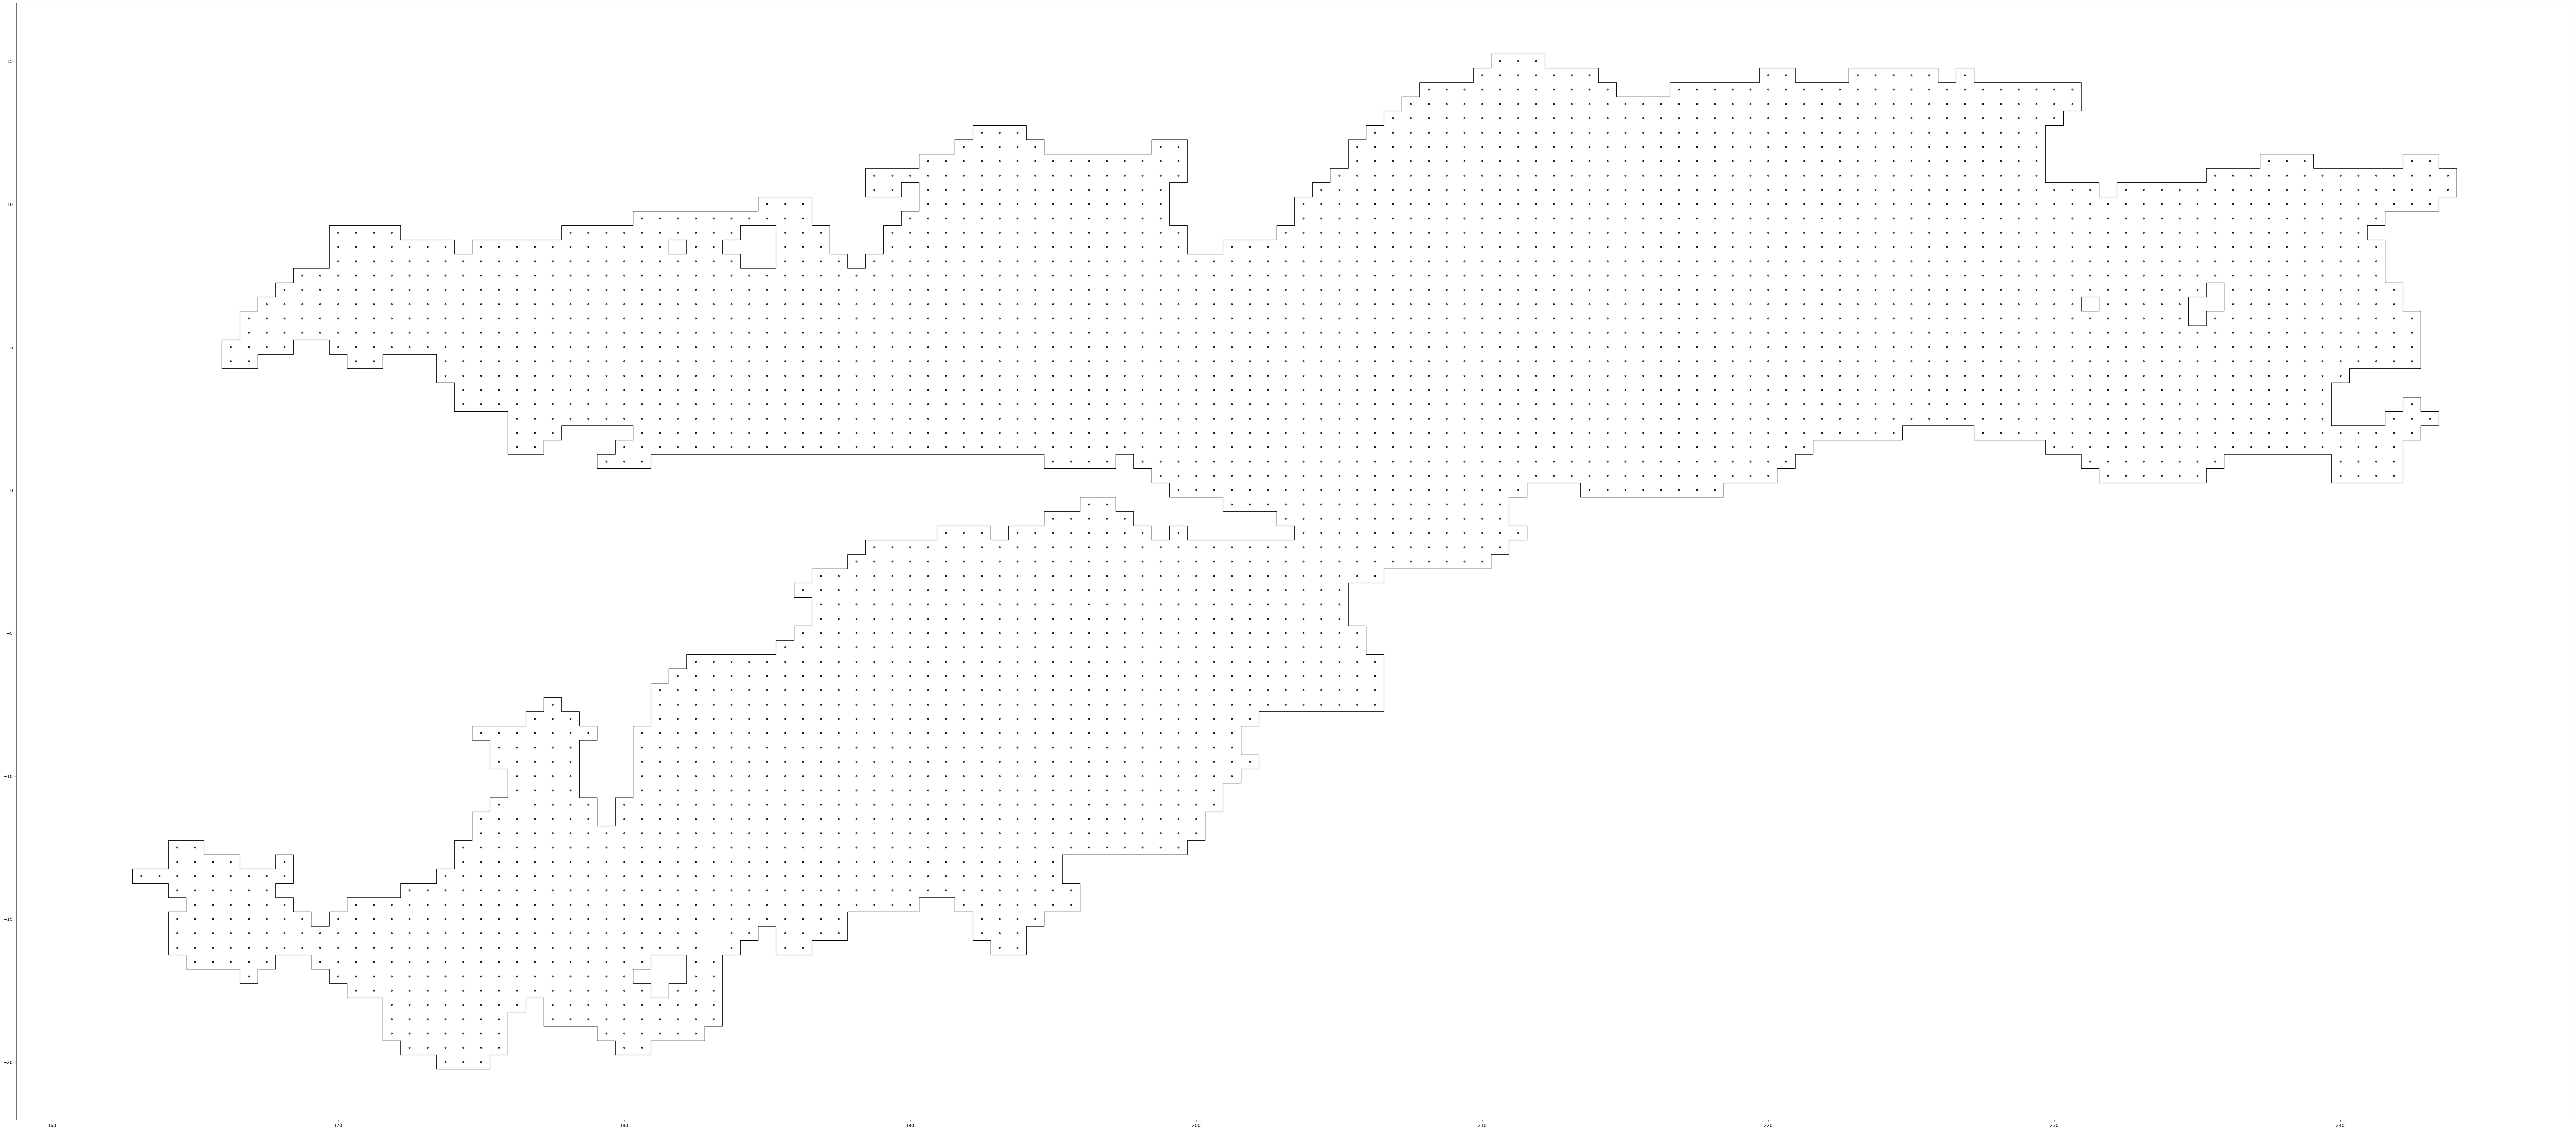

In [18]:
plotAR(remap(AR))

Valid Geometry


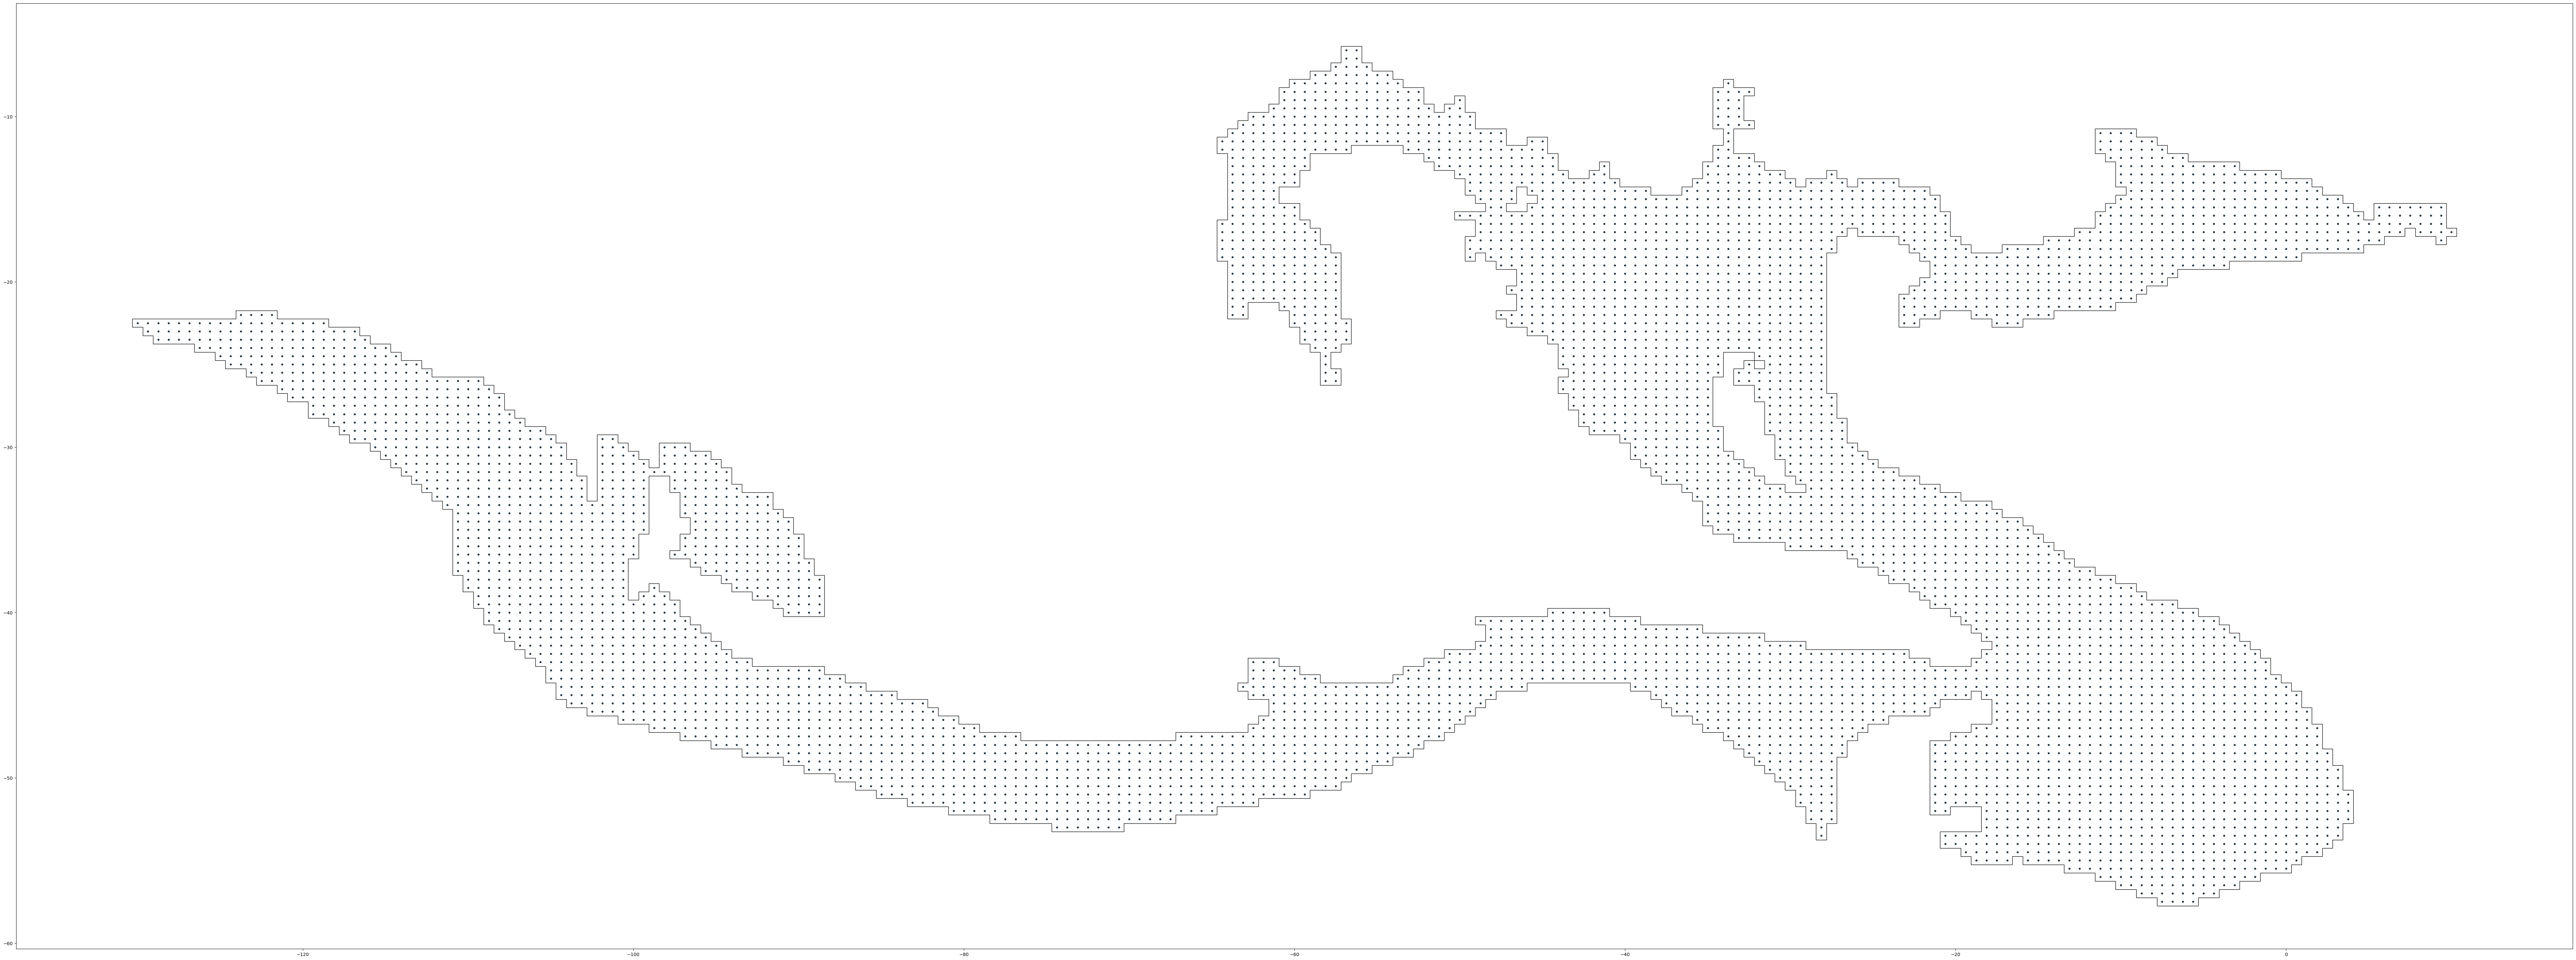

In [19]:
AR = { "_id" : "2000.01.01.09.0_2", "timestamp" : ISODate("2000-01-01T09:00:00Z"), "raster" : [ [ -7.5, -57.5, [ 257.2109069824219 ] ], [ -6.875, -57.5, [ 262.97900390625 ] ], [ -6.25, -57.5, [ 260.35009765625 ] ], [ -5.625, -57.5, [ 253.9466094970703 ] ], [ -8.75, -57, [ 280.598876953125 ] ], [ -8.125, -57, [ 300.8905334472656 ] ], [ -7.5, -57, [ 312.01519775390625 ] ], [ -6.875, -57, [ 314.3218994140625 ] ], [ -6.25, -57, [ 306.8564147949219 ] ], [ -5.625, -57, [ 292.804443359375 ] ], [ -5, -57, [ 276.7730407714844 ] ], [ -4.375, -57, [ 260.2676696777344 ] ], [ -10, -56.5, [ 271.70489501953125 ] ], [ -9.375, -56.5, [ 315.8199157714844 ] ], [ -8.75, -56.5, [ 344.9346923828125 ] ], [ -8.125, -56.5, [ 359.0653991699219 ] ], [ -7.5, -56.5, [ 366.6893310546875 ] ], [ -6.875, -56.5, [ 367.89422607421875 ] ], [ -6.25, -56.5, [ 362.3500671386719 ] ], [ -5.625, -56.5, [ 348.0738220214844 ] ], [ -5, -56.5, [ 331.3640441894531 ] ], [ -4.375, -56.5, [ 312.67333984375 ] ], [ -3.75, -56.5, [ 291.9031982421875 ] ], [ -3.125, -56.5, [ 268.5904541015625 ] ], [ -11.25, -56, [ 258.52166748046875 ] ], [ -10.625, -56, [ 319.1709289550781 ] ], [ -10, -56, [ 363.90826416015625 ] ], [ -9.375, -56, [ 394.05401611328125 ] ], [ -8.75, -56, [ 411.2857971191406 ] ], [ -8.125, -56, [ 408.6597900390625 ] ], [ -7.5, -56, [ 402.40240478515625 ] ], [ -6.875, -56, [ 396.9669189453125 ] ], [ -6.25, -56, [ 393.62066650390625 ] ], [ -5.625, -56, [ 384.7048034667969 ] ], [ -5, -56, [ 371.9496154785156 ] ], [ -4.375, -56, [ 360.0161437988281 ] ], [ -3.75, -56, [ 349.49639892578125 ] ], [ -3.125, -56, [ 334.6976318359375 ] ], [ -2.5, -56, [ 308.8829040527344 ] ], [ -1.875, -56, [ 277.6648864746094 ] ], [ -13.125, -55.5, [ 250.0784912109375 ] ], [ -12.5, -55.5, [ 279.06964111328125 ] ], [ -11.875, -55.5, [ 328.8126220703125 ] ], [ -11.25, -55.5, [ 393.7594909667969 ] ], [ -10.625, -55.5, [ 434.3934631347656 ] ], [ -10, -55.5, [ 464.81829833984375 ] ], [ -9.375, -55.5, [ 483.8623962402344 ] ], [ -8.75, -55.5, [ 488.2508239746094 ] ], [ -8.125, -55.5, [ 465.6604919433594 ] ], [ -7.5, -55.5, [ 442.0914001464844 ] ], [ -6.875, -55.5, [ 424.6418762207031 ] ], [ -6.25, -55.5, [ 415.9258117675781 ] ], [ -5.625, -55.5, [ 412.2363586425781 ] ], [ -5, -55.5, [ 402.2554626464844 ] ], [ -4.375, -55.5, [ 395.509765625 ] ], [ -3.75, -55.5, [ 392.6634216308594 ] ], [ -3.125, -55.5, [ 390.9280090332031 ] ], [ -2.5, -55.5, [ 377.7406005859375 ] ], [ -1.875, -55.5, [ 356.6293029785156 ] ], [ -1.25, -55.5, [ 329.3638610839844 ] ], [ -0.625, -55.5, [ 294.98663330078125 ] ], [ -5.920304394294029e-13, -55.5, [ 254.09738159179688 ] ], [ -18.75, -55, [ 251.37625122070312 ] ], [ -18.125, -55, [ 256.2002868652344 ] ], [ -17.5, -55, [ 255.74412536621094 ] ], [ -16.875, -55, [ 251.1094207763672 ] ], [ -15.625, -55, [ 261.7615051269531 ] ], [ -15, -55, [ 266.873291015625 ] ], [ -14.375, -55, [ 276.9300231933594 ] ], [ -13.75, -55, [ 294.70343017578125 ] ], [ -13.125, -55, [ 325.0120544433594 ] ], [ -12.5, -55, [ 370.935791015625 ] ], [ -11.875, -55, [ 428.431396484375 ] ], [ -11.25, -55, [ 476.24383544921875 ] ], [ -10.625, -55, [ 500.03082275390625 ] ], [ -10, -55, [ 513.7366333007812 ] ], [ -9.375, -55, [ 516.9696044921875 ] ], [ -8.75, -55, [ 507.3723449707031 ] ], [ -8.125, -55, [ 480.0590515136719 ] ], [ -7.5, -55, [ 454.1693420410156 ] ], [ -6.875, -55, [ 437.8293151855469 ] ], [ -6.25, -55, [ 433.1327819824219 ] ], [ -5.625, -55, [ 438.6737365722656 ] ], [ -5, -55, [ 439.1817932128906 ] ], [ -4.375, -55, [ 438.5985107421875 ] ], [ -3.75, -55, [ 438.8711853027344 ] ], [ -3.125, -55, [ 439.37225341796875 ] ], [ -2.5, -55, [ 435.54833984375 ] ], [ -1.875, -55, [ 424.34820556640625 ] ], [ -1.25, -55, [ 406.99407958984375 ] ], [ -0.625, -55, [ 385.4599914550781 ] ], [ -5.920304394294029e-13, -55, [ 356.4061279296875 ] ], [ 0.625, -55, [ 306.59246826171875 ] ], [ -19.375, -54.5, [ 254.0163116455078 ] ], [ -18.75, -54.5, [ 265.05322265625 ] ], [ -18.125, -54.5, [ 274.7360534667969 ] ], [ -17.5, -54.5, [ 274.43524169921875 ] ], [ -16.875, -54.5, [ 273.3731384277344 ] ], [ -16.25, -54.5, [ 287.5740966796875 ] ], [ -15.625, -54.5, [ 290.510986328125 ] ], [ -15, -54.5, [ 298.86065673828125 ] ], [ -14.375, -54.5, [ 314.3140563964844 ] ], [ -13.75, -54.5, [ 337.0657958984375 ] ], [ -13.125, -54.5, [ 371.1330871582031 ] ], [ -12.5, -54.5, [ 410.6900329589844 ] ], [ -11.875, -54.5, [ 445.4579162597656 ] ], [ -11.25, -54.5, [ 470.40802001953125 ] ], [ -10.625, -54.5, [ 483.7618103027344 ] ], [ -10, -54.5, [ 488.338623046875 ] ], [ -9.375, -54.5, [ 486.32440185546875 ] ], [ -8.75, -54.5, [ 479.14599609375 ] ], [ -8.125, -54.5, [ 463.7416687011719 ] ], [ -7.5, -54.5, [ 445.25018310546875 ] ], [ -6.875, -54.5, [ 432.96624755859375 ] ], [ -6.25, -54.5, [ 430.3315734863281 ] ], [ -5.625, -54.5, [ 437.7215270996094 ] ], [ -5, -54.5, [ 450.1293640136719 ] ], [ -4.375, -54.5, [ 462.3944396972656 ] ], [ -3.75, -54.5, [ 475.43609619140625 ] ], [ -3.125, -54.5, [ 483.8912353515625 ] ], [ -2.5, -54.5, [ 484.04205322265625 ] ], [ -1.875, -54.5, [ 479.9286804199219 ] ], [ -1.25, -54.5, [ 473.0439453125 ] ], [ -0.625, -54.5, [ 455.3340759277344 ] ], [ -5.920304394294029e-13, -54.5, [ 431.1900939941406 ] ], [ 0.625, -54.5, [ 402.6719055175781 ] ], [ 1.25, -54.5, [ 350.4139709472656 ] ], [ 1.875, -54.5, [ 279.38238525390625 ] ], [ -20.625, -54, [ 251.41603088378906 ] ], [ -20, -54, [ 259.0171813964844 ] ], [ -19.375, -54, [ 257.20184326171875 ] ], [ -18.75, -54, [ 267.29742431640625 ] ], [ -18.125, -54, [ 274.097412109375 ] ], [ -17.5, -54, [ 276.5361633300781 ] ], [ -16.875, -54, [ 297.2879333496094 ] ], [ -16.25, -54, [ 303.1784362792969 ] ], [ -15.625, -54, [ 308.7548522949219 ] ], [ -15, -54, [ 315.7880554199219 ] ], [ -14.375, -54, [ 326.0915832519531 ] ], [ -13.75, -54, [ 339.8102722167969 ] ], [ -13.125, -54, [ 356.253662109375 ] ], [ -12.5, -54, [ 374.41168212890625 ] ], [ -11.875, -54, [ 394.52020263671875 ] ], [ -11.25, -54, [ 414.4706726074219 ] ], [ -10.625, -54, [ 431.0128173828125 ] ], [ -10, -54, [ 438.82220458984375 ] ], [ -9.375, -54, [ 441.0689697265625 ] ], [ -8.75, -54, [ 443.3665466308594 ] ], [ -8.125, -54, [ 447.9814453125 ] ], [ -7.5, -54, [ 443.5181884765625 ] ], [ -6.875, -54, [ 434.77947998046875 ] ], [ -6.25, -54, [ 427.05908203125 ] ], [ -5.625, -54, [ 425.1650695800781 ] ], [ -5, -54, [ 432.2761535644531 ] ], [ -4.375, -54, [ 450.0856628417969 ] ], [ -3.75, -54, [ 481.6551208496094 ] ], [ -3.125, -54, [ 510.8717346191406 ] ], [ -2.5, -54, [ 523.6810913085938 ] ], [ -1.875, -54, [ 519.70751953125 ] ], [ -1.25, -54, [ 522.6785888671875 ] ], [ -0.625, -54, [ 511.61773681640625 ] ], [ -5.920304394294029e-13, -54, [ 486.5885925292969 ] ], [ 0.625, -54, [ 457.7963562011719 ] ], [ 1.25, -54, [ 428.6632995605469 ] ], [ 1.875, -54, [ 374.57623291015625 ] ], [ 2.5, -54, [ 294.10400390625 ] ], [ -28.125, -53.5, [ 250.74778747558594 ] ], [ -20.625, -53.5, [ 251.984375 ] ], [ -20, -53.5, [ 254.2480926513672 ] ], [ -19.375, -53.5, [ 256.911865234375 ] ], [ -18.75, -53.5, [ 260.0805969238281 ] ], [ -18.125, -53.5, [ 269.3065185546875 ] ], [ -17.5, -53.5, [ 281.76519775390625 ] ], [ -16.875, -53.5, [ 294.40386962890625 ] ], [ -16.25, -53.5, [ 304.07891845703125 ] ], [ -15.625, -53.5, [ 309.7414855957031 ] ], [ -15, -53.5, [ 313.3000183105469 ] ], [ -14.375, -53.5, [ 316.1363525390625 ] ], [ -13.75, -53.5, [ 321.1737976074219 ] ], [ -13.125, -53.5, [ 330.64422607421875 ] ], [ -12.5, -53.5, [ 345.2801818847656 ] ], [ -11.875, -53.5, [ 363.9502868652344 ] ], [ -11.25, -53.5, [ 386.9090270996094 ] ], [ -10.625, -53.5, [ 403.29205322265625 ] ], [ -10, -53.5, [ 412.48211669921875 ] ], [ -9.375, -53.5, [ 421.22235107421875 ] ], [ -8.75, -53.5, [ 434.7939758300781 ] ], [ -8.125, -53.5, [ 448.874267578125 ] ], [ -7.5, -53.5, [ 446.6272888183594 ] ], [ -6.875, -53.5, [ 433.5251159667969 ] ], [ -6.25, -53.5, [ 420.6707458496094 ] ], [ -5.625, -53.5, [ 414.5478820800781 ] ], [ -5, -53.5, [ 418.6537170410156 ] ], [ -4.375, -53.5, [ 433.0572204589844 ] ], [ -3.75, -53.5, [ 471.4512023925781 ] ], [ -3.125, -53.5, [ 517.5680541992188 ] ], [ -2.5, -53.5, [ 540.7642822265625 ] ], [ -1.875, -53.5, [ 546.6826782226562 ] ], [ -1.25, -53.5, [ 554.7894897460938 ] ], [ -0.625, -53.5, [ 553.2874145507812 ] ], [ -5.920304394294029e-13, -53.5, [ 525.8978271484375 ] ], [ 0.625, -53.5, [ 493.5931701660156 ] ], [ 1.25, -53.5, [ 465.77154541015625 ] ], [ 1.875, -53.5, [ 441.5608825683594 ] ], [ 2.5, -53.5, [ 379.49871826171875 ] ], [ 3.125, -53.5, [ 288.34490966796875 ] ], [ -74.375, -53, [ 251.17013549804688 ] ], [ -73.75, -53, [ 261.4441833496094 ] ], [ -73.125, -53, [ 262.8340148925781 ] ], [ -72.5, -53, [ 264.6283264160156 ] ], [ -71.875, -53, [ 267.0211486816406 ] ], [ -71.25, -53, [ 269.9058837890625 ] ], [ -70.625, -53, [ 257.7942810058594 ] ], [ -28.125, -53, [ 258.4275817871094 ] ], [ -18.125, -53, [ 250.2928009033203 ] ], [ -17.5, -53, [ 275.92156982421875 ] ], [ -16.875, -53, [ 294.0771484375 ] ], [ -16.25, -53, [ 304.08026123046875 ] ], [ -15.625, -53, [ 313.3865661621094 ] ], [ -15, -53, [ 325.89898681640625 ] ], [ -14.375, -53, [ 338.2154235839844 ] ], [ -13.75, -53, [ 346.8502197265625 ] ], [ -13.125, -53, [ 349.8486328125 ] ], [ -12.5, -53, [ 350.10791015625 ] ], [ -11.875, -53, [ 353.1891784667969 ] ], [ -11.25, -53, [ 366.7158203125 ] ], [ -10.625, -53, [ 389.2459411621094 ] ], [ -10, -53, [ 414.1618347167969 ] ], [ -9.375, -53, [ 435.2857971191406 ] ], [ -8.75, -53, [ 446.0585632324219 ] ], [ -8.125, -53, [ 439.91912841796875 ] ], [ -7.5, -53, [ 420.08990478515625 ] ], [ -6.875, -53, [ 402.5417785644531 ] ], [ -6.25, -53, [ 388.2579345703125 ] ], [ -5.625, -53, [ 384.76416015625 ] ], [ -5, -53, [ 397.9291076660156 ] ], [ -4.375, -53, [ 426.9591369628906 ] ], [ -3.75, -53, [ 464.1576232910156 ] ], [ -3.125, -53, [ 509.4871520996094 ] ], [ -2.5, -53, [ 543.291015625 ] ], [ -1.875, -53, [ 567.8194580078125 ] ], [ -1.25, -53, [ 582.812744140625 ] ], [ -0.625, -53, [ 583.7932739257812 ] ], [ -5.920304394294029e-13, -53, [ 563.3956909179688 ] ], [ 0.625, -53, [ 520.6251831054688 ] ], [ 1.25, -53, [ 483.3103942871094 ] ], [ 1.875, -53, [ 459.0633239746094 ] ], [ 2.5, -53, [ 409.75408935546875 ] ], [ 3.125, -53, [ 326.8001403808594 ] ], [ -78.125, -52.5, [ 264.48565673828125 ] ], [ -77.5, -52.5, [ 286.0518493652344 ] ], [ -76.875, -52.5, [ 304.6889953613281 ] ], [ -76.25, -52.5, [ 325.6743469238281 ] ], [ -75.625, -52.5, [ 344.62322998046875 ] ], [ -75, -52.5, [ 358.09228515625 ] ], [ -74.375, -52.5, [ 372.53302001953125 ] ], [ -73.75, -52.5, [ 384.8199157714844 ] ], [ -73.125, -52.5, [ 377.8502502441406 ] ], [ -72.5, -52.5, [ 377.74285888671875 ] ], [ -71.875, -52.5, [ 374.42132568359375 ] ], [ -71.25, -52.5, [ 372.9173583984375 ] ], [ -70.625, -52.5, [ 355.3502197265625 ] ], [ -70, -52.5, [ 338.0570983886719 ] ], [ -69.375, -52.5, [ 322.7041015625 ] ], [ -68.75, -52.5, [ 308.9864501953125 ] ], [ -68.125, -52.5, [ 289.2562255859375 ] ], [ -67.5, -52.5, [ 271.5044860839844 ] ], [ -28.75, -52.5, [ 260.5546569824219 ] ], [ -28.125, -52.5, [ 269.28680419921875 ] ], [ -27.5, -52.5, [ 253.54656982421875 ] ], [ -18.125, -52.5, [ 252.47401428222656 ] ], [ -17.5, -52.5, [ 286.5281982421875 ] ], [ -16.875, -52.5, [ 302.67828369140625 ] ], [ -16.25, -52.5, [ 317.92364501953125 ] ], [ -15.625, -52.5, [ 342.4021301269531 ] ], [ -15, -52.5, [ 370.22991943359375 ] ], [ -14.375, -52.5, [ 392.7141418457031 ] ], [ -13.75, -52.5, [ 403.092529296875 ] ], [ -13.125, -52.5, [ 400.34552001953125 ] ], [ -12.5, -52.5, [ 382.74188232421875 ] ], [ -11.875, -52.5, [ 356.63092041015625 ] ], [ -11.25, -52.5, [ 350.8889465332031 ] ], [ -10.625, -52.5, [ 370.886474609375 ] ], [ -10, -52.5, [ 398.8891296386719 ] ], [ -9.375, -52.5, [ 413.6547546386719 ] ], [ -8.75, -52.5, [ 405.2827453613281 ] ], [ -8.125, -52.5, [ 382.01153564453125 ] ], [ -7.5, -52.5, [ 361.92327880859375 ] ], [ -6.875, -52.5, [ 356.74847412109375 ] ], [ -6.25, -52.5, [ 356.22344970703125 ] ], [ -5.625, -52.5, [ 363.1826171875 ] ], [ -5, -52.5, [ 390.294921875 ] ], [ -4.375, -52.5, [ 429.9809265136719 ] ], [ -3.75, -52.5, [ 465.9249267578125 ] ], [ -3.125, -52.5, [ 502.66937255859375 ] ], [ -2.5, -52.5, [ 548.0121459960938 ] ], [ -1.875, -52.5, [ 591.1994018554688 ] ], [ -1.25, -52.5, [ 618.223388671875 ] ], [ -0.625, -52.5, [ 619.5501098632812 ] ], [ -5.920304394294029e-13, -52.5, [ 595.3040771484375 ] ], [ 0.625, -52.5, [ 566.4014892578125 ] ], [ 1.25, -52.5, [ 515.3148803710938 ] ], [ 1.875, -52.5, [ 474.2393493652344 ] ], [ 2.5, -52.5, [ 427.59637451171875 ] ], [ 3.125, -52.5, [ 349.15264892578125 ] ], [ 3.75, -52.5, [ 253.63937377929688 ] ], [ -80.625, -52, [ 272.28717041015625 ] ], [ -80, -52, [ 304.2991943359375 ] ], [ -79.375, -52, [ 335.9853820800781 ] ], [ -78.75, -52, [ 368.07208251953125 ] ], [ -78.125, -52, [ 396.8155822753906 ] ], [ -77.5, -52, [ 423.4109191894531 ] ], [ -76.875, -52, [ 447.773681640625 ] ], [ -76.25, -52, [ 469.8477783203125 ] ], [ -75.625, -52, [ 479.4993591308594 ] ], [ -75, -52, [ 489.5265808105469 ] ], [ -74.375, -52, [ 499.878662109375 ] ], [ -73.75, -52, [ 503.0035705566406 ] ], [ -73.125, -52, [ 494.3572998046875 ] ], [ -72.5, -52, [ 503.5953369140625 ] ], [ -71.875, -52, [ 494.8902282714844 ] ], [ -71.25, -52, [ 475.108642578125 ] ], [ -70.625, -52, [ 469.5634460449219 ] ], [ -70, -52, [ 444.420166015625 ] ], [ -69.375, -52, [ 417.3963623046875 ] ], [ -68.75, -52, [ 395.4221496582031 ] ], [ -68.125, -52, [ 379.6463928222656 ] ], [ -67.5, -52, [ 365.935791015625 ] ], [ -66.875, -52, [ 349.6495361328125 ] ], [ -66.25, -52, [ 324.8050842285156 ] ], [ -65.625, -52, [ 299.4087219238281 ] ], [ -65, -52, [ 266.6133117675781 ] ], [ -28.75, -52, [ 273.1884765625 ] ], [ -28.125, -52, [ 274.2829284667969 ] ], [ -27.5, -52, [ 257.012451171875 ] ], [ -21.25, -52, [ 261.3713073730469 ] ], [ -20.625, -52, [ 265.12762451171875 ] ], [ -18.125, -52, [ 277.9984130859375 ] ], [ -17.5, -52, [ 305.13507080078125 ] ], [ -16.875, -52, [ 321.0771484375 ] ], [ -16.25, -52, [ 345.0074157714844 ] ], [ -15.625, -52, [ 372.6537780761719 ] ], [ -15, -52, [ 395.37548828125 ] ], [ -14.375, -52, [ 412.2784729003906 ] ], [ -13.75, -52, [ 425.0497131347656 ] ], [ -13.125, -52, [ 432.078369140625 ] ], [ -12.5, -52, [ 429.5215148925781 ] ], [ -11.875, -52, [ 413.92041015625 ] ], [ -11.25, -52, [ 400.6236572265625 ] ], [ -10.625, -52, [ 395.3897705078125 ] ], [ -10, -52, [ 388.8152770996094 ] ], [ -9.375, -52, [ 375.3280334472656 ] ], [ -8.75, -52, [ 357.8016357421875 ] ], [ -8.125, -52, [ 344.1879577636719 ] ], [ -7.5, -52, [ 348.1871337890625 ] ], [ -6.875, -52, [ 370.6197814941406 ] ], [ -6.25, -52, [ 386.940673828125 ] ], [ -5.625, -52, [ 393.333251953125 ] ], [ -5, -52, [ 406.8599548339844 ] ], [ -4.375, -52, [ 431.5464782714844 ] ], [ -3.75, -52, [ 465.6329650878906 ] ], [ -3.125, -52, [ 506.3499450683594 ] ], [ -2.5, -52, [ 567.8609008789062 ] ], [ -1.875, -52, [ 630.0872192382812 ] ], [ -1.25, -52, [ 661.1632080078125 ] ], [ -0.625, -52, [ 656.9660034179688 ] ], [ -5.920304394294029e-13, -52, [ 627.0582885742188 ] ], [ 0.625, -52, [ 595.1436767578125 ] ], [ 1.25, -52, [ 539.3968505859375 ] ], [ 1.875, -52, [ 489.320556640625 ] ], [ 2.5, -52, [ 445.861572265625 ] ], [ 3.125, -52, [ 366.02069091796875 ] ], [ 3.75, -52, [ 263.5762023925781 ] ], [ -83.125, -51.5, [ 265.4356994628906 ] ], [ -82.5, -51.5, [ 298.5959167480469 ] ], [ -81.875, -51.5, [ 332.4505615234375 ] ], [ -81.25, -51.5, [ 365.47564697265625 ] ], [ -80.625, -51.5, [ 398.1390686035156 ] ], [ -80, -51.5, [ 430.99066162109375 ] ], [ -79.375, -51.5, [ 463.7474670410156 ] ], [ -78.75, -51.5, [ 494.1440124511719 ] ], [ -78.125, -51.5, [ 517.092041015625 ] ], [ -77.5, -51.5, [ 534.3204956054688 ] ], [ -76.875, -51.5, [ 549.4060668945312 ] ], [ -76.25, -51.5, [ 565.837158203125 ] ], [ -75.625, -51.5, [ 562.686279296875 ] ], [ -75, -51.5, [ 566.1561889648438 ] ], [ -74.375, -51.5, [ 571.3557739257812 ] ], [ -73.75, -51.5, [ 572.936767578125 ] ], [ -73.125, -51.5, [ 562.6685180664062 ] ], [ -72.5, -51.5, [ 551.6486206054688 ] ], [ -71.875, -51.5, [ 542.8782348632812 ] ], [ -71.25, -51.5, [ 538.2972412109375 ] ], [ -70.625, -51.5, [ 525.5904541015625 ] ], [ -70, -51.5, [ 519.808349609375 ] ], [ -69.375, -51.5, [ 497.7438049316406 ] ], [ -68.75, -51.5, [ 476.6923522949219 ] ], [ -68.125, -51.5, [ 452.24468994140625 ] ], [ -67.5, -51.5, [ 433.6628112792969 ] ], [ -66.875, -51.5, [ 418.1332092285156 ] ], [ -66.25, -51.5, [ 399.90496826171875 ] ], [ -65.625, -51.5, [ 380.2787780761719 ] ], [ -65, -51.5, [ 350.2046203613281 ] ], [ -64.375, -51.5, [ 320.5652770996094 ] ], [ -63.75, -51.5, [ 294.1781005859375 ] ], [ -63.125, -51.5, [ 274.28778076171875 ] ], [ -62.5, -51.5, [ 259.0108337402344 ] ], [ -29.375, -51.5, [ 262.1684875488281 ] ], [ -28.75, -51.5, [ 284.0962219238281 ] ], [ -28.125, -51.5, [ 279.0548095703125 ] ], [ -27.5, -51.5, [ 260.03643798828125 ] ], [ -21.25, -51.5, [ 272.4309997558594 ] ], [ -20.625, -51.5, [ 291.6726379394531 ] ], [ -20, -51.5, [ 295.0272521972656 ] ], [ -19.375, -51.5, [ 282.1749267578125 ] ], [ -18.75, -51.5, [ 283.8040771484375 ] ], [ -18.125, -51.5, [ 304.11322021484375 ] ], [ -17.5, -51.5, [ 317.5785827636719 ] ], [ -16.875, -51.5, [ 333.616455078125 ] ], [ -16.25, -51.5, [ 360.51788330078125 ] ], [ -15.625, -51.5, [ 389.9790344238281 ] ], [ -15, -51.5, [ 412.7678527832031 ] ], [ -14.375, -51.5, [ 428.2481689453125 ] ], [ -13.75, -51.5, [ 439.68511962890625 ] ], [ -13.125, -51.5, [ 449.7430114746094 ] ], [ -12.5, -51.5, [ 461.4135437011719 ] ], [ -11.875, -51.5, [ 475.85064697265625 ] ], [ -11.25, -51.5, [ 483.7599792480469 ] ], [ -10.625, -51.5, [ 473.82318115234375 ] ], [ -10, -51.5, [ 444.5054626464844 ] ], [ -9.375, -51.5, [ 408.8512878417969 ] ], [ -8.75, -51.5, [ 385.43463134765625 ] ], [ -8.125, -51.5, [ 384.2859802246094 ] ], [ -7.5, -51.5, [ 396.9496154785156 ] ], [ -6.875, -51.5, [ 413.3838806152344 ] ], [ -6.25, -51.5, [ 420.1552429199219 ] ], [ -5.625, -51.5, [ 420.8479309082031 ] ], [ -5, -51.5, [ 438.94012451171875 ] ], [ -4.375, -51.5, [ 456.31427001953125 ] ], [ -3.75, -51.5, [ 470.9197692871094 ] ], [ -3.125, -51.5, [ 510.8997497558594 ] ], [ -2.5, -51.5, [ 589.3179931640625 ] ], [ -1.875, -51.5, [ 668.121337890625 ] ], [ -1.25, -51.5, [ 691.8529052734375 ] ], [ -0.625, -51.5, [ 674.2246704101562 ] ], [ -5.920304394294029e-13, -51.5, [ 644.3159790039062 ] ], [ 0.625, -51.5, [ 616.4209594726562 ] ], [ 1.25, -51.5, [ 558.6262817382812 ] ], [ 1.875, -51.5, [ 499.1768493652344 ] ], [ 2.5, -51.5, [ 444.35870361328125 ] ], [ 3.125, -51.5, [ 374.660888671875 ] ], [ 3.75, -51.5, [ 261.31134033203125 ] ], [ -85, -51, [ 264.5164489746094 ] ], [ -84.375, -51, [ 305.0701904296875 ] ], [ -83.75, -51, [ 347.66253662109375 ] ], [ -83.125, -51, [ 382.52099609375 ] ], [ -82.5, -51, [ 415.7648010253906 ] ], [ -81.875, -51, [ 449.2922668457031 ] ], [ -81.25, -51, [ 481.8508605957031 ] ], [ -80.625, -51, [ 513.5596313476562 ] ], [ -80, -51, [ 540.0211181640625 ] ], [ -79.375, -51, [ 560.0620727539062 ] ], [ -78.75, -51, [ 576.9021606445312 ] ], [ -78.125, -51, [ 588.4509887695312 ] ], [ -77.5, -51, [ 592.8091430664062 ] ], [ -76.875, -51, [ 593.522216796875 ] ], [ -76.25, -51, [ 595.3512573242188 ] ], [ -75.625, -51, [ 589.5108642578125 ] ], [ -75, -51, [ 586.3114013671875 ] ], [ -74.375, -51, [ 584.0062866210938 ] ], [ -73.75, -51, [ 545.8082275390625 ] ], [ -73.125, -51, [ 553.6748657226562 ] ], [ -72.5, -51, [ 552.3135986328125 ] ], [ -71.875, -51, [ 555.9886474609375 ] ], [ -71.25, -51, [ 543.4124145507812 ] ], [ -70.625, -51, [ 532.1753540039062 ] ], [ -70, -51, [ 536.0667114257812 ] ], [ -69.375, -51, [ 530.1106567382812 ] ], [ -68.75, -51, [ 518.2164306640625 ] ], [ -68.125, -51, [ 497.7816162109375 ] ], [ -67.5, -51, [ 483.3188171386719 ] ], [ -66.875, -51, [ 471.0234069824219 ] ], [ -66.25, -51, [ 452.385498046875 ] ], [ -65.625, -51, [ 433.6169738769531 ] ], [ -65, -51, [ 408.8951721191406 ] ], [ -64.375, -51, [ 384.5978088378906 ] ], [ -63.75, -51, [ 359.2283020019531 ] ], [ -63.125, -51, [ 337.0663146972656 ] ], [ -62.5, -51, [ 323.94403076171875 ] ], [ -61.875, -51, [ 316.8424377441406 ] ], [ -61.25, -51, [ 311.41851806640625 ] ], [ -60.625, -51, [ 297.8014221191406 ] ], [ -60, -51, [ 287.9825439453125 ] ], [ -59.375, -51, [ 266.6649475097656 ] ], [ -29.375, -51, [ 288.17205810546875 ] ], [ -28.75, -51, [ 292.6628112792969 ] ], [ -28.125, -51, [ 282.0652770996094 ] ], [ -27.5, -51, [ 260.8945007324219 ] ], [ -21.25, -51, [ 270.0245056152344 ] ], [ -20.625, -51, [ 300.45269775390625 ] ], [ -20, -51, [ 324.9288635253906 ] ], [ -19.375, -51, [ 331.31658935546875 ] ], [ -18.75, -51, [ 325.9529724121094 ] ], [ -18.125, -51, [ 322.386474609375 ] ], [ -17.5, -51, [ 323.9544372558594 ] ], [ -16.875, -51, [ 340.5435791015625 ] ], [ -16.25, -51, [ 371.01458740234375 ] ], [ -15.625, -51, [ 400.6092224121094 ] ], [ -15, -51, [ 425.2511291503906 ] ], [ -14.375, -51, [ 444.74456787109375 ] ], [ -13.75, -51, [ 457.2661437988281 ] ], [ -13.125, -51, [ 468.03619384765625 ] ], [ -12.5, -51, [ 482.50958251953125 ] ], [ -11.875, -51, [ 502.6737976074219 ] ], [ -11.25, -51, [ 520.1818237304688 ] ], [ -10.625, -51, [ 524.9463500976562 ] ], [ -10, -51, [ 515.1366577148438 ] ], [ -9.375, -51, [ 497.24072265625 ] ], [ -8.75, -51, [ 479.7066345214844 ] ], [ -8.125, -51, [ 467.6502685546875 ] ], [ -7.5, -51, [ 457.6107482910156 ] ], [ -6.875, -51, [ 445.6022644042969 ] ], [ -6.25, -51, [ 425.715087890625 ] ], [ -5.625, -51, [ 423.7043762207031 ] ], [ -5, -51, [ 465.09149169921875 ] ], [ -4.375, -51, [ 497.9325256347656 ] ], [ -3.75, -51, [ 502.4671630859375 ] ], [ -3.125, -51, [ 523.03125 ] ], [ -2.5, -51, [ 592.43115234375 ] ], [ -1.875, -51, [ 668.3327026367188 ] ], [ -1.25, -51, [ 684.1773071289062 ] ], [ -0.625, -51, [ 681.8687133789062 ] ], [ -5.920304394294029e-13, -51, [ 667.21630859375 ] ], [ 0.625, -51, [ 628.436767578125 ] ], [ 1.25, -51, [ 567.1614990234375 ] ], [ 1.875, -51, [ 500.2375793457031 ] ], [ 2.5, -51, [ 437.9213562011719 ] ], [ 3.125, -51, [ 358.7673645019531 ] ], [ 3.75, -51, [ 252.0862274169922 ] ], [ -86.25, -50.5, [ 283.8522033691406 ] ], [ -85.625, -50.5, [ 330.1357116699219 ] ], [ -85, -50.5, [ 373.82177734375 ] ], [ -84.375, -50.5, [ 414.31494140625 ] ], [ -83.75, -50.5, [ 449.0610046386719 ] ], [ -83.125, -50.5, [ 481.0954895019531 ] ], [ -82.5, -50.5, [ 511.9805603027344 ] ], [ -81.875, -50.5, [ 540.9467163085938 ] ], [ -81.25, -50.5, [ 566.9578247070312 ] ], [ -80.625, -50.5, [ 586.7796630859375 ] ], [ -80, -50.5, [ 596.393798828125 ] ], [ -79.375, -50.5, [ 602.1156616210938 ] ], [ -78.75, -50.5, [ 602.8330078125 ] ], [ -78.125, -50.5, [ 595.3831176757812 ] ], [ -77.5, -50.5, [ 591.9998779296875 ] ], [ -76.875, -50.5, [ 589.4556274414062 ] ], [ -76.25, -50.5, [ 585.70751953125 ] ], [ -75.625, -50.5, [ 577.0761108398438 ] ], [ -75, -50.5, [ 588.7538452148438 ] ], [ -74.375, -50.5, [ 576.1699829101562 ] ], [ -73.75, -50.5, [ 533.4381103515625 ] ], [ -73.125, -50.5, [ 490.25262451171875 ] ], [ -72.5, -50.5, [ 485.635498046875 ] ], [ -71.875, -50.5, [ 473.2816162109375 ] ], [ -71.25, -50.5, [ 492.6869201660156 ] ], [ -70.625, -50.5, [ 502.80010986328125 ] ], [ -70, -50.5, [ 508.09783935546875 ] ], [ -69.375, -50.5, [ 511.08209228515625 ] ], [ -68.75, -50.5, [ 503.3773193359375 ] ], [ -68.125, -50.5, [ 494.65625 ] ], [ -67.5, -50.5, [ 492.3011779785156 ] ], [ -66.875, -50.5, [ 489.55255126953125 ] ], [ -66.25, -50.5, [ 480.1180725097656 ] ], [ -65.625, -50.5, [ 471.9568176269531 ] ], [ -65, -50.5, [ 452.1228942871094 ] ], [ -64.375, -50.5, [ 431.4953918457031 ] ], [ -63.75, -50.5, [ 410.4044189453125 ] ], [ -63.125, -50.5, [ 391.5495910644531 ] ], [ -62.5, -50.5, [ 376.6497802734375 ] ], [ -61.875, -50.5, [ 365.586181640625 ] ], [ -61.25, -50.5, [ 356.4187927246094 ] ], [ -60.625, -50.5, [ 348.2358093261719 ] ], [ -60, -50.5, [ 338.82122802734375 ] ], [ -59.375, -50.5, [ 325.8996276855469 ] ], [ -58.75, -50.5, [ 309.175048828125 ] ], [ -58.125, -50.5, [ 281.20196533203125 ] ], [ -57.5, -50.5, [ 251.6761932373047 ] ], [ -30, -50.5, [ 278.37274169921875 ] ], [ -29.375, -50.5, [ 300.2088928222656 ] ], [ -28.75, -50.5, [ 297.0164794921875 ] ], [ -28.125, -50.5, [ 284.1024169921875 ] ], [ -27.5, -50.5, [ 262.42181396484375 ] ], [ -21.25, -50.5, [ 265.3885803222656 ] ], [ -20.625, -50.5, [ 295.9056091308594 ] ], [ -20, -50.5, [ 323.5638427734375 ] ], [ -19.375, -50.5, [ 338.6020812988281 ] ], [ -18.75, -50.5, [ 336.1234436035156 ] ], [ -18.125, -50.5, [ 325.60382080078125 ] ], [ -17.5, -50.5, [ 318.2783203125 ] ], [ -16.875, -50.5, [ 328.72998046875 ] ], [ -16.25, -50.5, [ 349.0269470214844 ] ], [ -15.625, -50.5, [ 368.1566467285156 ] ], [ -15, -50.5, [ 389.49578857421875 ] ], [ -14.375, -50.5, [ 414.60687255859375 ] ], [ -13.75, -50.5, [ 436.0403137207031 ] ], [ -13.125, -50.5, [ 458.14434814453125 ] ], [ -12.5, -50.5, [ 481.5079040527344 ] ], [ -11.875, -50.5, [ 505.41015625 ] ], [ -11.25, -50.5, [ 527.690673828125 ] ], [ -10.625, -50.5, [ 542.118408203125 ] ], [ -10, -50.5, [ 547.3471069335938 ] ], [ -9.375, -50.5, [ 546.0584716796875 ] ], [ -8.75, -50.5, [ 536.263671875 ] ], [ -8.125, -50.5, [ 513.4718017578125 ] ], [ -7.5, -50.5, [ 482.60443115234375 ] ], [ -6.875, -50.5, [ 453.5993347167969 ] ], [ -6.25, -50.5, [ 428.0783996582031 ] ], [ -5.625, -50.5, [ 430.9880676269531 ] ], [ -5, -50.5, [ 479.7473449707031 ] ], [ -4.375, -50.5, [ 525.9434204101562 ] ], [ -3.75, -50.5, [ 543.2540283203125 ] ], [ -3.125, -50.5, [ 561.3136596679688 ] ], [ -2.5, -50.5, [ 602.1682739257812 ] ], [ -1.875, -50.5, [ 642.12744140625 ] ], [ -1.25, -50.5, [ 652.5631713867188 ] ], [ -0.625, -50.5, [ 664.3214721679688 ] ], [ -5.920304394294029e-13, -50.5, [ 657.71337890625 ] ], [ 0.625, -50.5, [ 629.2387084960938 ] ], [ 1.25, -50.5, [ 567.5130004882812 ] ], [ 1.875, -50.5, [ 491.2297058105469 ] ], [ 2.5, -50.5, [ 421.02642822265625 ] ], [ 3.125, -50.5, [ 335.34002685546875 ] ], [ -87.5, -50, [ 294.277587890625 ] ], [ -86.875, -50, [ 346.0212707519531 ] ], [ -86.25, -50, [ 391.0638427734375 ] ], [ -85.625, -50, [ 432.30999755859375 ] ], [ -85, -50, [ 471.601318359375 ] ], [ -84.375, -50, [ 505.72625732421875 ] ], [ -83.75, -50, [ 534.8836669921875 ] ], [ -83.125, -50, [ 559.9879150390625 ] ], [ -82.5, -50, [ 581.4295043945312 ] ], [ -81.875, -50, [ 599.2374877929688 ] ], [ -81.25, -50, [ 611.9529418945312 ] ], [ -80.625, -50, [ 614.6387939453125 ] ], [ -80, -50, [ 618.0404052734375 ] ], [ -79.375, -50, [ 617.0512084960938 ] ], [ -78.75, -50, [ 612.8003540039062 ] ], [ -78.125, -50, [ 607.3146362304688 ] ], [ -77.5, -50, [ 604.4087524414062 ] ], [ -76.875, -50, [ 599.9674682617188 ] ], [ -76.25, -50, [ 603.2259521484375 ] ], [ -75.625, -50, [ 599.0982666015625 ] ], [ -75, -50, [ 590.1368408203125 ] ], [ -74.375, -50, [ 545.19091796875 ] ], [ -73.75, -50, [ 449.981201171875 ] ], [ -73.125, -50, [ 456.1087646484375 ] ], [ -72.5, -50, [ 475.64630126953125 ] ], [ -71.875, -50, [ 460.219482421875 ] ], [ -71.25, -50, [ 461.3059997558594 ] ], [ -70.625, -50, [ 467.6883850097656 ] ], [ -70, -50, [ 463.1185302734375 ] ], [ -69.375, -50, [ 476.9200439453125 ] ], [ -68.75, -50, [ 475.9934997558594 ] ], [ -68.125, -50, [ 470.9242858886719 ] ], [ -67.5, -50, [ 468.91192626953125 ] ], [ -66.875, -50, [ 470.2171325683594 ] ], [ -66.25, -50, [ 472.0577697753906 ] ], [ -65.625, -50, [ 472.3093566894531 ] ], [ -65, -50, [ 463.18548583984375 ] ], [ -64.375, -50, [ 452.912353515625 ] ], [ -63.75, -50, [ 436.44366455078125 ] ], [ -63.125, -50, [ 419.2983703613281 ] ], [ -62.5, -50, [ 405.5417785644531 ] ], [ -61.875, -50, [ 393.1838684082031 ] ], [ -61.25, -50, [ 386.8875732421875 ] ], [ -60.625, -50, [ 380.9451904296875 ] ], [ -60, -50, [ 380.0502624511719 ] ], [ -59.375, -50, [ 376.6099548339844 ] ], [ -58.75, -50, [ 369.8728332519531 ] ], [ -58.125, -50, [ 349.7311706542969 ] ], [ -57.5, -50, [ 320.8913269042969 ] ], [ -56.875, -50, [ 278.706298828125 ] ], [ -30.625, -50, [ 267.8641357421875 ] ], [ -30, -50, [ 303.47393798828125 ] ], [ -29.375, -50, [ 308.0682067871094 ] ], [ -28.75, -50, [ 300.3332824707031 ] ], [ -28.125, -50, [ 286.33935546875 ] ], [ -27.5, -50, [ 263.25799560546875 ] ], [ -21.25, -50, [ 265.3644714355469 ] ], [ -20.625, -50, [ 297.0120849609375 ] ], [ -20, -50, [ 328.6814270019531 ] ], [ -19.375, -50, [ 340.0656433105469 ] ], [ -18.75, -50, [ 336.6250915527344 ] ], [ -18.125, -50, [ 329.2859191894531 ] ], [ -17.5, -50, [ 316.41815185546875 ] ], [ -16.875, -50, [ 311.87933349609375 ] ], [ -16.25, -50, [ 313.7268371582031 ] ], [ -15.625, -50, [ 316.704833984375 ] ], [ -15, -50, [ 331.64605712890625 ] ], [ -14.375, -50, [ 358.70843505859375 ] ], [ -13.75, -50, [ 389.64794921875 ] ], [ -13.125, -50, [ 426.3116149902344 ] ], [ -12.5, -50, [ 461.9538269042969 ] ], [ -11.875, -50, [ 495.99407958984375 ] ], [ -11.25, -50, [ 525.2527465820312 ] ], [ -10.625, -50, [ 549.5932006835938 ] ], [ -10, -50, [ 563.7857055664062 ] ], [ -9.375, -50, [ 563.9721069335938 ] ], [ -8.75, -50, [ 549.9805908203125 ] ], [ -8.125, -50, [ 522.6661376953125 ] ], [ -7.5, -50, [ 490.4247741699219 ] ], [ -6.875, -50, [ 463.94464111328125 ] ], [ -6.25, -50, [ 449.0693359375 ] ], [ -5.625, -50, [ 462.3658142089844 ] ], [ -5, -50, [ 506.6486511230469 ] ], [ -4.375, -50, [ 539.7265625 ] ], [ -3.75, -50, [ 576.2396850585938 ] ], [ -3.125, -50, [ 625.6762084960938 ] ], [ -2.5, -50, [ 653.5557250976562 ] ], [ -1.875, -50, [ 641.3448486328125 ] ], [ -1.25, -50, [ 646.16552734375 ] ], [ -0.625, -50, [ 644.965087890625 ] ], [ -5.920304394294029e-13, -50, [ 646.1280517578125 ] ], [ 0.625, -50, [ 619.0548706054688 ] ], [ 1.25, -50, [ 553.7705078125 ] ], [ 1.875, -50, [ 470.6272277832031 ] ], [ 2.5, -50, [ 391.3567810058594 ] ], [ 3.125, -50, [ 306.69512939453125 ] ], [ -89.375, -49.5, [ 261.7290344238281 ] ], [ -88.75, -49.5, [ 312.9193115234375 ] ], [ -88.125, -49.5, [ 364.26971435546875 ] ], [ -87.5, -49.5, [ 411.252685546875 ] ], [ -86.875, -49.5, [ 453.6480407714844 ] ], [ -86.25, -49.5, [ 495.2427978515625 ] ], [ -85.625, -49.5, [ 531.9718627929688 ] ], [ -85, -49.5, [ 563.3767700195312 ] ], [ -84.375, -49.5, [ 590.29150390625 ] ], [ -83.75, -49.5, [ 610.6041870117188 ] ], [ -83.125, -49.5, [ 622.502685546875 ] ], [ -82.5, -49.5, [ 630.8704223632812 ] ], [ -81.875, -49.5, [ 635.779296875 ] ], [ -81.25, -49.5, [ 640.6881103515625 ] ], [ -80.625, -49.5, [ 643.8320922851562 ] ], [ -80, -49.5, [ 643.933837890625 ] ], [ -79.375, -49.5, [ 643.1875610351562 ] ], [ -78.75, -49.5, [ 642.8703002929688 ] ], [ -78.125, -49.5, [ 641.9851684570312 ] ], [ -77.5, -49.5, [ 642.7537231445312 ] ], [ -76.875, -49.5, [ 640.4234008789062 ] ], [ -76.25, -49.5, [ 654.31982421875 ] ], [ -75.625, -49.5, [ 632.4708251953125 ] ], [ -75, -49.5, [ 581.7949829101562 ] ], [ -74.375, -49.5, [ 523.53271484375 ] ], [ -73.75, -49.5, [ 444.6730041503906 ] ], [ -73.125, -49.5, [ 429.48431396484375 ] ], [ -72.5, -49.5, [ 426.7950134277344 ] ], [ -71.875, -49.5, [ 431.61578369140625 ] ], [ -71.25, -49.5, [ 435.1415100097656 ] ], [ -70.625, -49.5, [ 440.5401306152344 ] ], [ -70, -49.5, [ 445.6676025390625 ] ], [ -69.375, -49.5, [ 447.9939270019531 ] ], [ -68.75, -49.5, [ 441.8805236816406 ] ], [ -68.125, -49.5, [ 436.2733459472656 ] ], [ -67.5, -49.5, [ 433.93499755859375 ] ], [ -66.875, -49.5, [ 434.64276123046875 ] ], [ -66.25, -49.5, [ 437.37591552734375 ] ], [ -65.625, -49.5, [ 439.6569519042969 ] ], [ -65, -49.5, [ 436.7999267578125 ] ], [ -64.375, -49.5, [ 431.21649169921875 ] ], [ -63.75, -49.5, [ 425.63165283203125 ] ], [ -63.125, -49.5, [ 420.1324462890625 ] ], [ -62.5, -49.5, [ 414.3255920410156 ] ], [ -61.875, -49.5, [ 408.520263671875 ] ], [ -61.25, -49.5, [ 405.3943786621094 ] ], [ -60.625, -49.5, [ 407.90228271484375 ] ], [ -60, -49.5, [ 413.9356689453125 ] ], [ -59.375, -49.5, [ 418.8128356933594 ] ], [ -58.75, -49.5, [ 420.43145751953125 ] ], [ -58.125, -49.5, [ 413.2837219238281 ] ], [ -57.5, -49.5, [ 398.7207336425781 ] ], [ -56.875, -49.5, [ 375.7715759277344 ] ], [ -56.25, -49.5, [ 338.56805419921875 ] ], [ -55.625, -49.5, [ 289.11285400390625 ] ], [ -31.25, -49.5, [ 264.0137939453125 ] ], [ -30.625, -49.5, [ 302.2375793457031 ] ], [ -30, -49.5, [ 313.1253967285156 ] ], [ -29.375, -49.5, [ 310.0417175292969 ] ], [ -28.75, -49.5, [ 301.5616760253906 ] ], [ -28.125, -49.5, [ 286.23846435546875 ] ], [ -27.5, -49.5, [ 263.00811767578125 ] ], [ -21.25, -49.5, [ 265.64752197265625 ] ], [ -20.625, -49.5, [ 295.0498046875 ] ], [ -20, -49.5, [ 335.60345458984375 ] ], [ -19.375, -49.5, [ 351.3739318847656 ] ], [ -18.75, -49.5, [ 351.6462097167969 ] ], [ -18.125, -49.5, [ 357.8965759277344 ] ], [ -17.5, -49.5, [ 359.7133483886719 ] ], [ -16.875, -49.5, [ 354.877685546875 ] ], [ -16.25, -49.5, [ 343.0213623046875 ] ], [ -15.625, -49.5, [ 324.8263854980469 ] ], [ -15, -49.5, [ 317.0514831542969 ] ], [ -14.375, -49.5, [ 331.4209289550781 ] ], [ -13.75, -49.5, [ 363.8756103515625 ] ], [ -13.125, -49.5, [ 413.99627685546875 ] ], [ -12.5, -49.5, [ 464.81201171875 ] ], [ -11.875, -49.5, [ 507.31036376953125 ] ], [ -11.25, -49.5, [ 540.051513671875 ] ], [ -10.625, -49.5, [ 568.6359252929688 ] ], [ -10, -49.5, [ 589.3438110351562 ] ], [ -9.375, -49.5, [ 588.8101196289062 ] ], [ -8.75, -49.5, [ 566.8809204101562 ] ], [ -8.125, -49.5, [ 536.092041015625 ] ], [ -7.5, -49.5, [ 505.89715576171875 ] ], [ -6.875, -49.5, [ 482.1424560546875 ] ], [ -6.25, -49.5, [ 474.50494384765625 ] ], [ -5.625, -49.5, [ 494.53662109375 ] ], [ -5, -49.5, [ 532.43798828125 ] ], [ -4.375, -49.5, [ 560.1639404296875 ] ], [ -3.75, -49.5, [ 611.7999877929688 ] ], [ -3.125, -49.5, [ 690.1865844726562 ] ], [ -2.5, -49.5, [ 743.603759765625 ] ], [ -1.875, -49.5, [ 688.675537109375 ] ], [ -1.25, -49.5, [ 633.081787109375 ] ], [ -0.625, -49.5, [ 627.657470703125 ] ], [ -5.920304394294029e-13, -49.5, [ 633.0081176757812 ] ], [ 0.625, -49.5, [ 604.0320434570312 ] ], [ 1.25, -49.5, [ 530.8820190429688 ] ], [ 1.875, -49.5, [ 442.0265197753906 ] ], [ 2.5, -49.5, [ 355.47528076171875 ] ], [ 3.125, -49.5, [ 262.6275939941406 ] ], [ -90.625, -49, [ 282.51666259765625 ] ], [ -90, -49, [ 335.13214111328125 ] ], [ -89.375, -49, [ 395.96771240234375 ] ], [ -88.75, -49, [ 441.2499084472656 ] ], [ -88.125, -49, [ 478.5820617675781 ] ], [ -87.5, -49, [ 510.0964660644531 ] ], [ -86.875, -49, [ 539.8585815429688 ] ], [ -86.25, -49, [ 569.1558227539062 ] ], [ -85.625, -49, [ 599.31689453125 ] ], [ -85, -49, [ 624.343505859375 ] ], [ -84.375, -49, [ 640.2169799804688 ] ], [ -83.75, -49, [ 647.2418212890625 ] ], [ -83.125, -49, [ 650.8535766601562 ] ], [ -82.5, -49, [ 653.424560546875 ] ], [ -81.875, -49, [ 658.1886596679688 ] ], [ -81.25, -49, [ 667.8370361328125 ] ], [ -80.625, -49, [ 670.7816772460938 ] ], [ -80, -49, [ 698.9306030273438 ] ], [ -79.375, -49, [ 674.2623291015625 ] ], [ -78.75, -49, [ 700.1903686523438 ] ], [ -78.125, -49, [ 693.118896484375 ] ], [ -77.5, -49, [ 683.7622680664062 ] ], [ -76.875, -49, [ 654.7410888671875 ] ], [ -76.25, -49, [ 623.4859619140625 ] ], [ -75.625, -49, [ 553.60791015625 ] ], [ -75, -49, [ 528.2223510742188 ] ], [ -74.375, -49, [ 486.7038269042969 ] ], [ -73.75, -49, [ 443.106689453125 ] ], [ -73.125, -49, [ 412.1556396484375 ] ], [ -72.5, -49, [ 415.39654541015625 ] ], [ -71.875, -49, [ 417.0311279296875 ] ], [ -71.25, -49, [ 434.9104309082031 ] ], [ -70.625, -49, [ 431.7467041015625 ] ], [ -70, -49, [ 421.0305480957031 ] ], [ -69.375, -49, [ 419.0325622558594 ] ], [ -68.75, -49, [ 406.4456787109375 ] ], [ -68.125, -49, [ 410.8783874511719 ] ], [ -67.5, -49, [ 400.8071594238281 ] ], [ -66.875, -49, [ 393.16339111328125 ] ], [ -66.25, -49, [ 396.29931640625 ] ], [ -65.625, -49, [ 396.14642333984375 ] ], [ -65, -49, [ 396.7358093261719 ] ], [ -64.375, -49, [ 398.6722412109375 ] ], [ -63.75, -49, [ 400.9798583984375 ] ], [ -63.125, -49, [ 405.367431640625 ] ], [ -62.5, -49, [ 410.8219909667969 ] ], [ -61.875, -49, [ 413.2225036621094 ] ], [ -61.25, -49, [ 415.1524353027344 ] ], [ -60.625, -49, [ 417.9804382324219 ] ], [ -60, -49, [ 425.408935546875 ] ], [ -59.375, -49, [ 433.32757568359375 ] ], [ -58.75, -49, [ 439.6597900390625 ] ], [ -58.125, -49, [ 443.2685852050781 ] ], [ -57.5, -49, [ 441.1130676269531 ] ], [ -56.875, -49, [ 435.49688720703125 ] ], [ -56.25, -49, [ 421.69561767578125 ] ], [ -55.625, -49, [ 408.70245361328125 ] ], [ -55, -49, [ 357.983642578125 ] ], [ -54.375, -49, [ 298.76800537109375 ] ], [ -31.875, -49, [ 263.3970947265625 ] ], [ -31.25, -49, [ 303.0979309082031 ] ], [ -30.625, -49, [ 317.9706115722656 ] ], [ -30, -49, [ 318.2227478027344 ] ], [ -29.375, -49, [ 315.0766296386719 ] ], [ -28.75, -49, [ 307.6885070800781 ] ], [ -28.125, -49, [ 293.3248291015625 ] ], [ -27.5, -49, [ 272.0058288574219 ] ], [ -21.25, -49, [ 264.7069396972656 ] ], [ -20.625, -49, [ 290.0092468261719 ] ], [ -20, -49, [ 332.5230407714844 ] ], [ -19.375, -49, [ 356.7290954589844 ] ], [ -18.75, -49, [ 365.28607177734375 ] ], [ -18.125, -49, [ 380.15234375 ] ], [ -17.5, -49, [ 399.61761474609375 ] ], [ -16.875, -49, [ 410.74957275390625 ] ], [ -16.25, -49, [ 404.9775390625 ] ], [ -15.625, -49, [ 379.20330810546875 ] ], [ -15, -49, [ 346.7690124511719 ] ], [ -14.375, -49, [ 337.3254699707031 ] ], [ -13.75, -49, [ 364.4567565917969 ] ], [ -13.125, -49, [ 430.03753662109375 ] ], [ -12.5, -49, [ 507.94415283203125 ] ], [ -11.875, -49, [ 560.6178588867188 ] ], [ -11.25, -49, [ 583.8261108398438 ] ], [ -10.625, -49, [ 598.406005859375 ] ], [ -10, -49, [ 614.052001953125 ] ], [ -9.375, -49, [ 612.0292358398438 ] ], [ -8.75, -49, [ 586.603759765625 ] ], [ -8.125, -49, [ 555.3380737304688 ] ], [ -7.5, -49, [ 524.6783447265625 ] ], [ -6.875, -49, [ 499.2526550292969 ] ], [ -6.25, -49, [ 489.9335021972656 ] ], [ -5.625, -49, [ 504.7428894042969 ] ], [ -5, -49, [ 538.3855590820312 ] ], [ -4.375, -49, [ 576.6602783203125 ] ], [ -3.75, -49, [ 630.3101806640625 ] ], [ -3.125, -49, [ 729.5130004882812 ] ], [ -2.5, -49, [ 741.6738891601562 ] ], [ -1.875, -49, [ 681.6117553710938 ] ], [ -1.25, -49, [ 620.441162109375 ] ], [ -0.625, -49, [ 611.2715454101562 ] ], [ -5.920304394294029e-13, -49, [ 621.19580078125 ] ], [ 0.625, -49, [ 589.152587890625 ] ], [ 1.25, -49, [ 502.23736572265625 ] ], [ 1.875, -49, [ 408.3211669921875 ] ], [ 2.5, -49, [ 317.9306640625 ] ], [ -93.125, -48.5, [ 257.0311584472656 ] ], [ -92.5, -48.5, [ 287.55206298828125 ] ], [ -91.875, -48.5, [ 328.4078063964844 ] ], [ -91.25, -48.5, [ 365.5224304199219 ] ], [ -90.625, -48.5, [ 415.1573486328125 ] ], [ -90, -48.5, [ 458.4869689941406 ] ], [ -89.375, -48.5, [ 492.662109375 ] ], [ -88.75, -48.5, [ 518.9051513671875 ] ], [ -88.125, -48.5, [ 539.8657836914062 ] ], [ -87.5, -48.5, [ 562.30859375 ] ], [ -86.875, -48.5, [ 588.3638305664062 ] ], [ -86.25, -48.5, [ 616.0459594726562 ] ], [ -85.625, -48.5, [ 642.5057983398438 ] ], [ -85, -48.5, [ 654.3051147460938 ] ], [ -84.375, -48.5, [ 654.6279296875 ] ], [ -83.75, -48.5, [ 657.7491455078125 ] ], [ -83.125, -48.5, [ 665.9979858398438 ] ], [ -82.5, -48.5, [ 705.4132690429688 ] ], [ -81.875, -48.5, [ 717.5746459960938 ] ], [ -81.25, -48.5, [ 719.6043090820312 ] ], [ -80.625, -48.5, [ 712.326904296875 ] ], [ -80, -48.5, [ 703.7194213867188 ] ], [ -79.375, -48.5, [ 692.4905395507812 ] ], [ -78.75, -48.5, [ 661.2496948242188 ] ], [ -78.125, -48.5, [ 626.0548706054688 ] ], [ -77.5, -48.5, [ 591.9332885742188 ] ], [ -76.875, -48.5, [ 562.7725830078125 ] ], [ -76.25, -48.5, [ 530.4490356445312 ] ], [ -75.625, -48.5, [ 506.4416809082031 ] ], [ -75, -48.5, [ 481.775146484375 ] ], [ -74.375, -48.5, [ 445.5011901855469 ] ], [ -73.75, -48.5, [ 412.13409423828125 ] ], [ -73.125, -48.5, [ 416.8322448730469 ] ], [ -72.5, -48.5, [ 388.1083984375 ] ], [ -71.875, -48.5, [ 386.8459777832031 ] ], [ -71.25, -48.5, [ 401.3565368652344 ] ], [ -70.625, -48.5, [ 387.74151611328125 ] ], [ -70, -48.5, [ 398.3993835449219 ] ], [ -69.375, -48.5, [ 389.00115966796875 ] ], [ -68.75, -48.5, [ 389.3442077636719 ] ], [ -68.125, -48.5, [ 395.4786682128906 ] ], [ -67.5, -48.5, [ 383.56103515625 ] ], [ -66.875, -48.5, [ 381.95587158203125 ] ], [ -66.25, -48.5, [ 377.25531005859375 ] ], [ -65.625, -48.5, [ 373.5642395019531 ] ], [ -65, -48.5, [ 374.5743103027344 ] ], [ -64.375, -48.5, [ 375.5133056640625 ] ], [ -63.75, -48.5, [ 380.36041259765625 ] ], [ -63.125, -48.5, [ 388.2521057128906 ] ], [ -62.5, -48.5, [ 397.4184265136719 ] ], [ -61.875, -48.5, [ 407.06768798828125 ] ], [ -61.25, -48.5, [ 416.24371337890625 ] ], [ -60.625, -48.5, [ 425.4386291503906 ] ], [ -60, -48.5, [ 434.0168762207031 ] ], [ -59.375, -48.5, [ 442.3546447753906 ] ], [ -58.75, -48.5, [ 450.9005126953125 ] ], [ -58.125, -48.5, [ 460.102294921875 ] ], [ -57.5, -48.5, [ 465.7923278808594 ] ], [ -56.875, -48.5, [ 466.6065979003906 ] ], [ -56.25, -48.5, [ 462.4860534667969 ] ], [ -55.625, -48.5, [ 456.9025573730469 ] ], [ -55, -48.5, [ 446.7039489746094 ] ], [ -54.375, -48.5, [ 418.65740966796875 ] ], [ -53.75, -48.5, [ 351.76947021484375 ] ], [ -53.125, -48.5, [ 275.63812255859375 ] ], [ -32.5, -48.5, [ 275.3291931152344 ] ], [ -31.875, -48.5, [ 311.26641845703125 ] ], [ -31.25, -48.5, [ 325.0220642089844 ] ], [ -30.625, -48.5, [ 327.54351806640625 ] ], [ -30, -48.5, [ 328.32171630859375 ] ], [ -29.375, -48.5, [ 329.6413879394531 ] ], [ -28.75, -48.5, [ 325.1630554199219 ] ], [ -28.125, -48.5, [ 313.30401611328125 ] ], [ -27.5, -48.5, [ 293.6357421875 ] ], [ -26.875, -48.5, [ 256.942138671875 ] ], [ -21.25, -48.5, [ 264.6312561035156 ] ], [ -20.625, -48.5, [ 291.1239013671875 ] ], [ -20, -48.5, [ 322.77984619140625 ] ], [ -19.375, -48.5, [ 349.9253845214844 ] ], [ -18.75, -48.5, [ 363.8186340332031 ] ], [ -18.125, -48.5, [ 371.6258544921875 ] ], [ -17.5, -48.5, [ 386.2153625488281 ] ], [ -16.875, -48.5, [ 406.1856994628906 ] ], [ -16.25, -48.5, [ 412.9704895019531 ] ], [ -15.625, -48.5, [ 394.25579833984375 ] ], [ -15, -48.5, [ 363.7647705078125 ] ], [ -14.375, -48.5, [ 353.6508483886719 ] ], [ -13.75, -48.5, [ 394.0399475097656 ] ], [ -13.125, -48.5, [ 482.2971496582031 ] ], [ -12.5, -48.5, [ 567.7301635742188 ] ], [ -11.875, -48.5, [ 610.455322265625 ] ], [ -11.25, -48.5, [ 620.1665649414062 ] ], [ -10.625, -48.5, [ 622.192138671875 ] ], [ -10, -48.5, [ 624.2727661132812 ] ], [ -9.375, -48.5, [ 613.5779418945312 ] ], [ -8.75, -48.5, [ 589.5108642578125 ] ], [ -8.125, -48.5, [ 563.1469116210938 ] ], [ -7.5, -48.5, [ 536.4022827148438 ] ], [ -6.875, -48.5, [ 509.5985412597656 ] ], [ -6.25, -48.5, [ 493.0981750488281 ] ], [ -5.625, -48.5, [ 501.636474609375 ] ], [ -5, -48.5, [ 540.2177734375 ] ], [ -4.375, -48.5, [ 599.8929443359375 ] ], [ -3.75, -48.5, [ 693.65478515625 ] ], [ -3.125, -48.5, [ 729.7875366210938 ] ], [ -2.5, -48.5, [ 710.7474975585938 ] ], [ -1.875, -48.5, [ 650.7261962890625 ] ], [ -1.25, -48.5, [ 605.7301635742188 ] ], [ -0.625, -48.5, [ 603.0009765625 ] ], [ -5.920304394294029e-13, -48.5, [ 603.3726196289062 ] ], [ 0.625, -48.5, [ 555.8118896484375 ] ], [ 1.25, -48.5, [ 464.7209777832031 ] ], [ 1.875, -48.5, [ 370.1717224121094 ] ], [ 2.5, -48.5, [ 278.3214111328125 ] ], [ -95, -48, [ 270.1776123046875 ] ], [ -94.375, -48, [ 299.2499084472656 ] ], [ -93.75, -48, [ 333.9263916015625 ] ], [ -93.125, -48, [ 372.26507568359375 ] ], [ -92.5, -48, [ 408.3571472167969 ] ], [ -91.875, -48, [ 442.6893615722656 ] ], [ -91.25, -48, [ 476.7022705078125 ] ], [ -90.625, -48, [ 505.72528076171875 ] ], [ -90, -48, [ 531.2069091796875 ] ], [ -89.375, -48, [ 556.726318359375 ] ], [ -88.75, -48, [ 583.474365234375 ] ], [ -88.125, -48, [ 585.50439453125 ] ], [ -87.5, -48, [ 614.467529296875 ] ], [ -86.875, -48, [ 635.1126708984375 ] ], [ -86.25, -48, [ 679.39453125 ] ], [ -85.625, -48, [ 692.3591918945312 ] ], [ -85, -48, [ 701.5505981445312 ] ], [ -84.375, -48, [ 713.3226928710938 ] ], [ -83.75, -48, [ 722.5900268554688 ] ], [ -83.125, -48, [ 721.3480834960938 ] ], [ -82.5, -48, [ 713.5546264648438 ] ], [ -81.875, -48, [ 699.864501953125 ] ], [ -81.25, -48, [ 673.440185546875 ] ], [ -80.625, -48, [ 635.674072265625 ] ], [ -80, -48, [ 596.3544311523438 ] ], [ -79.375, -48, [ 553.3002319335938 ] ], [ -78.75, -48, [ 512.9622802734375 ] ], [ -78.125, -48, [ 478.40252685546875 ] ], [ -77.5, -48, [ 450.71710205078125 ] ], [ -76.875, -48, [ 426.7118225097656 ] ], [ -76.25, -48, [ 401.9752197265625 ] ], [ -75.625, -48, [ 385.15673828125 ] ], [ -75, -48, [ 379.9607849121094 ] ], [ -74.375, -48, [ 353.9676818847656 ] ], [ -73.75, -48, [ 355.2076416015625 ] ], [ -73.125, -48, [ 352.5322570800781 ] ], [ -72.5, -48, [ 309.055419921875 ] ], [ -71.875, -48, [ 315.3925476074219 ] ], [ -71.25, -48, [ 312.4991760253906 ] ], [ -70.625, -48, [ 317.753662109375 ] ], [ -70, -48, [ 317.4675598144531 ] ], [ -69.375, -48, [ 314.9222106933594 ] ], [ -68.75, -48, [ 318.92742919921875 ] ], [ -68.125, -48, [ 309.3711853027344 ] ], [ -67.5, -48, [ 319.96575927734375 ] ], [ -66.875, -48, [ 329.40277099609375 ] ], [ -66.25, -48, [ 329.41009521484375 ] ], [ -65.625, -48, [ 332.0034484863281 ] ], [ -65, -48, [ 334.945556640625 ] ], [ -64.375, -48, [ 342.46746826171875 ] ], [ -63.75, -48, [ 354.4294128417969 ] ], [ -63.125, -48, [ 363.99432373046875 ] ], [ -62.5, -48, [ 378.56048583984375 ] ], [ -61.875, -48, [ 388.2407531738281 ] ], [ -61.25, -48, [ 404.77056884765625 ] ], [ -60.625, -48, [ 416.277099609375 ] ], [ -60, -48, [ 430.5530700683594 ] ], [ -59.375, -48, [ 438.9710998535156 ] ], [ -58.75, -48, [ 450.0755920410156 ] ], [ -58.125, -48, [ 462.32049560546875 ] ], [ -57.5, -48, [ 476.9945373535156 ] ], [ -56.875, -48, [ 491.1087646484375 ] ], [ -56.25, -48, [ 492.5449523925781 ] ], [ -55.625, -48, [ 490.3655700683594 ] ], [ -55, -48, [ 497.2276611328125 ] ], [ -54.375, -48, [ 475.4573059082031 ] ], [ -53.75, -48, [ 460.0335998535156 ] ], [ -53.125, -48, [ 401.06842041015625 ] ], [ -52.5, -48, [ 324.1998596191406 ] ], [ -33.125, -48, [ 286.95684814453125 ] ], [ -32.5, -48, [ 319.43341064453125 ] ], [ -31.875, -48, [ 333.52899169921875 ] ], [ -31.25, -48, [ 337.8282775878906 ] ], [ -30.625, -48, [ 342.48956298828125 ] ], [ -30, -48, [ 352.3189392089844 ] ], [ -29.375, -48, [ 358.192138671875 ] ], [ -28.75, -48, [ 352.6802978515625 ] ], [ -28.125, -48, [ 342.55596923828125 ] ], [ -27.5, -48, [ 326.8740539550781 ] ], [ -26.875, -48, [ 291.45843505859375 ] ], [ -21.25, -48, [ 251.71568298339844 ] ], [ -20.625, -48, [ 280.5728759765625 ] ], [ -20, -48, [ 309.9091796875 ] ], [ -19.375, -48, [ 336.8081359863281 ] ], [ -18.75, -48, [ 348.9804382324219 ] ], [ -18.125, -48, [ 347.6044616699219 ] ], [ -17.5, -48, [ 354.9633483886719 ] ], [ -16.875, -48, [ 377.4479675292969 ] ], [ -16.25, -48, [ 395.366455078125 ] ], [ -15.625, -48, [ 392.4299011230469 ] ], [ -15, -48, [ 381.7364807128906 ] ], [ -14.375, -48, [ 389.4328308105469 ] ], [ -13.75, -48, [ 438.3902587890625 ] ], [ -13.125, -48, [ 527.7715454101562 ] ], [ -12.5, -48, [ 612.2489013671875 ] ], [ -11.875, -48, [ 650.7003784179688 ] ], [ -11.25, -48, [ 649.6010131835938 ] ], [ -10.625, -48, [ 634.5327758789062 ] ], [ -10, -48, [ 617.3241577148438 ] ], [ -9.375, -48, [ 594.0842895507812 ] ], [ -8.75, -48, [ 569.4855346679688 ] ], [ -8.125, -48, [ 548.8203125 ] ], [ -7.5, -48, [ 523.9064331054688 ] ], [ -6.875, -48, [ 494.7687683105469 ] ], [ -6.25, -48, [ 480.288330078125 ] ], [ -5.625, -48, [ 532.8435668945312 ] ], [ -5, -48, [ 589.6241455078125 ] ], [ -4.375, -48, [ 670.0599365234375 ] ], [ -3.75, -48, [ 735.0799560546875 ] ], [ -3.125, -48, [ 741.9021606445312 ] ], [ -2.5, -48, [ 691.7509765625 ] ], [ -1.875, -48, [ 626.8610229492188 ] ], [ -1.25, -48, [ 593.0206298828125 ] ], [ -0.625, -48, [ 596.0855102539062 ] ], [ -5.920304394294029e-13, -48, [ 584.5606689453125 ] ], [ 0.625, -48, [ 520.0761108398438 ] ], [ 1.25, -48, [ 425.85552978515625 ] ], [ 1.875, -48, [ 332.59942626953125 ] ], [ -96.875, -47.5, [ 283.53424072265625 ] ], [ -96.25, -47.5, [ 324.86956787109375 ] ], [ -95.625, -47.5, [ 361.5662536621094 ] ], [ -95, -47.5, [ 394.80853271484375 ] ], [ -94.375, -47.5, [ 422.4810485839844 ] ], [ -93.75, -47.5, [ 445.9638977050781 ] ], [ -93.125, -47.5, [ 466.499267578125 ] ], [ -92.5, -47.5, [ 486.2277526855469 ] ], [ -91.875, -47.5, [ 508.37823486328125 ] ], [ -91.25, -47.5, [ 530.5687255859375 ] ], [ -90.625, -47.5, [ 554.676513671875 ] ], [ -90, -47.5, [ 584.498291015625 ] ], [ -89.375, -47.5, [ 617.8367919921875 ] ], [ -88.75, -47.5, [ 651.947998046875 ] ], [ -88.125, -47.5, [ 677.1651000976562 ] ], [ -87.5, -47.5, [ 684.3305053710938 ] ], [ -86.875, -47.5, [ 686.74462890625 ] ], [ -86.25, -47.5, [ 703.3562622070312 ] ], [ -85.625, -47.5, [ 728.2401123046875 ] ], [ -85, -47.5, [ 746.5597534179688 ] ], [ -84.375, -47.5, [ 742.9275512695312 ] ], [ -83.75, -47.5, [ 705.4135131835938 ] ], [ -83.125, -47.5, [ 654.50048828125 ] ], [ -82.5, -47.5, [ 611.3886108398438 ] ], [ -81.875, -47.5, [ 572.6217651367188 ] ], [ -81.25, -47.5, [ 530.959716796875 ] ], [ -80.625, -47.5, [ 491.0105285644531 ] ], [ -80, -47.5, [ 446.00787353515625 ] ], [ -79.375, -47.5, [ 400.1253356933594 ] ], [ -78.75, -47.5, [ 356.8802185058594 ] ], [ -78.125, -47.5, [ 317.8400573730469 ] ], [ -77.5, -47.5, [ 288.5525207519531 ] ], [ -76.875, -47.5, [ 261.8514404296875 ] ], [ -66.875, -47.5, [ 258.3297119140625 ] ], [ -66.25, -47.5, [ 267.3966369628906 ] ], [ -65.625, -47.5, [ 269.3365173339844 ] ], [ -65, -47.5, [ 273.8547668457031 ] ], [ -64.375, -47.5, [ 281.70574951171875 ] ], [ -63.75, -47.5, [ 287.9214172363281 ] ], [ -63.125, -47.5, [ 297.0189208984375 ] ], [ -62.5, -47.5, [ 307.6484069824219 ] ], [ -61.875, -47.5, [ 324.8160400390625 ] ], [ -61.25, -47.5, [ 349.70709228515625 ] ], [ -60.625, -47.5, [ 380.92657470703125 ] ], [ -60, -47.5, [ 406.96771240234375 ] ], [ -59.375, -47.5, [ 427.60198974609375 ] ], [ -58.75, -47.5, [ 442.5823974609375 ] ], [ -58.125, -47.5, [ 456.6468200683594 ] ], [ -57.5, -47.5, [ 472.0722351074219 ] ], [ -56.875, -47.5, [ 490.08001708984375 ] ], [ -56.25, -47.5, [ 509.1563415527344 ] ], [ -55.625, -47.5, [ 517.8043212890625 ] ], [ -55, -47.5, [ 516.9647216796875 ] ], [ -54.375, -47.5, [ 515.9923706054688 ] ], [ -53.75, -47.5, [ 511.5624084472656 ] ], [ -53.125, -47.5, [ 496.09100341796875 ] ], [ -52.5, -47.5, [ 441.1593322753906 ] ], [ -51.875, -47.5, [ 372.010009765625 ] ], [ -51.25, -47.5, [ 273.5780944824219 ] ], [ -33.75, -47.5, [ 295.3290710449219 ] ], [ -33.125, -47.5, [ 330.642333984375 ] ], [ -32.5, -47.5, [ 345.5765686035156 ] ], [ -31.875, -47.5, [ 351.6205139160156 ] ], [ -31.25, -47.5, [ 356.8968811035156 ] ], [ -30.625, -47.5, [ 369.7149963378906 ] ], [ -30, -47.5, [ 380.5038146972656 ] ], [ -29.375, -47.5, [ 382.2860412597656 ] ], [ -28.75, -47.5, [ 374.14996337890625 ] ], [ -28.125, -47.5, [ 360.2576599121094 ] ], [ -27.5, -47.5, [ 345.2309265136719 ] ], [ -26.875, -47.5, [ 320.1610412597656 ] ], [ -26.25, -47.5, [ 276.46356201171875 ] ], [ -20, -47.5, [ 254.44725036621094 ] ], [ -19.375, -47.5, [ 284.7518615722656 ] ], [ -18.75, -47.5, [ 304.08172607421875 ] ], [ -18.125, -47.5, [ 310.66815185546875 ] ], [ -17.5, -47.5, [ 331.0987243652344 ] ], [ -16.875, -47.5, [ 373.4177551269531 ] ], [ -16.25, -47.5, [ 407.9167175292969 ] ], [ -15.625, -47.5, [ 414.9085998535156 ] ], [ -15, -47.5, [ 416.3733825683594 ] ], [ -14.375, -47.5, [ 439.6424255371094 ] ], [ -13.75, -47.5, [ 487.71527099609375 ] ], [ -13.125, -47.5, [ 558.59228515625 ] ], [ -12.5, -47.5, [ 634.2264404296875 ] ], [ -11.875, -47.5, [ 677.2229614257812 ] ], [ -11.25, -47.5, [ 671.8744506835938 ] ], [ -10.625, -47.5, [ 638.4605102539062 ] ], [ -10, -47.5, [ 601.0332641601562 ] ], [ -9.375, -47.5, [ 570.1181640625 ] ], [ -8.75, -47.5, [ 545.6019897460938 ] ], [ -8.125, -47.5, [ 521.3331909179688 ] ], [ -7.5, -47.5, [ 488.8638000488281 ] ], [ -6.875, -47.5, [ 498.2355041503906 ] ], [ -6.25, -47.5, [ 497.4289855957031 ] ], [ -5.625, -47.5, [ 533.373291015625 ] ], [ -5, -47.5, [ 606.4511108398438 ] ], [ -4.375, -47.5, [ 692.3312377929688 ] ], [ -3.75, -47.5, [ 752.732666015625 ] ], [ -3.125, -47.5, [ 745.1998901367188 ] ], [ -2.5, -47.5, [ 679.8170166015625 ] ], [ -1.875, -47.5, [ 611.3229370117188 ] ], [ -1.25, -47.5, [ 578.6471557617188 ] ], [ -0.625, -47.5, [ 585.9422607421875 ] ], [ -5.920304394294029e-13, -47.5, [ 563.4902954101562 ] ], [ 0.625, -47.5, [ 485.29949951171875 ] ], [ 1.25, -47.5, [ 388.1006164550781 ] ], [ 1.875, -47.5, [ 298.40350341796875 ] ], [ -98.75, -47, [ 256.3097839355469 ] ], [ -98.125, -47, [ 310.90234375 ] ], [ -97.5, -47, [ 364.77899169921875 ] ], [ -96.875, -47, [ 406.4566345214844 ] ], [ -96.25, -47, [ 438.8757019042969 ] ], [ -95.625, -47, [ 467.26971435546875 ] ], [ -95, -47, [ 489.9920349121094 ] ], [ -94.375, -47, [ 507.10430908203125 ] ], [ -93.75, -47, [ 524.024169921875 ] ], [ -93.125, -47, [ 544.218017578125 ] ], [ -92.5, -47, [ 564.4467163085938 ] ], [ -91.875, -47, [ 584.5426635742188 ] ], [ -91.25, -47, [ 606.981689453125 ] ], [ -90.625, -47, [ 630.1426391601562 ] ], [ -90, -47, [ 651.119140625 ] ], [ -89.375, -47, [ 667.1613159179688 ] ], [ -88.75, -47, [ 674.343017578125 ] ], [ -88.125, -47, [ 675.7005004882812 ] ], [ -87.5, -47, [ 680.9801635742188 ] ], [ -86.875, -47, [ 700.3126831054688 ] ], [ -86.25, -47, [ 723.1174926757812 ] ], [ -85.625, -47, [ 729.9458618164062 ] ], [ -85, -47, [ 700.5697021484375 ] ], [ -84.375, -47, [ 634.6295776367188 ] ], [ -83.75, -47, [ 558.8558349609375 ] ], [ -83.125, -47, [ 502.1404724121094 ] ], [ -82.5, -47, [ 464.7393493652344 ] ], [ -81.875, -47, [ 436.27264404296875 ] ], [ -81.25, -47, [ 407.8929748535156 ] ], [ -80.625, -47, [ 355.76025390625 ] ], [ -80, -47, [ 310.7452697753906 ] ], [ -79.375, -47, [ 272.8424072265625 ] ], [ -62.5, -47, [ 261.46044921875 ] ], [ -61.875, -47, [ 291.0012512207031 ] ], [ -61.25, -47, [ 323.4468078613281 ] ], [ -60.625, -47, [ 357.24951171875 ] ], [ -60, -47, [ 394.3414611816406 ] ], [ -59.375, -47, [ 418.03326416015625 ] ], [ -58.75, -47, [ 440.05670166015625 ] ], [ -58.125, -47, [ 451.05078125 ] ], [ -57.5, -47, [ 461.628173828125 ] ], [ -56.875, -47, [ 469.2177734375 ] ], [ -56.25, -47, [ 489.8176574707031 ] ], [ -55.625, -47, [ 502.3843078613281 ] ], [ -55, -47, [ 510.58575439453125 ] ], [ -54.375, -47, [ 515.5892333984375 ] ], [ -53.75, -47, [ 517.4263916015625 ] ], [ -53.125, -47, [ 512.6643676757812 ] ], [ -52.5, -47, [ 495.85235595703125 ] ], [ -51.875, -47, [ 457.7568054199219 ] ], [ -51.25, -47, [ 373.8895568847656 ] ], [ -50.625, -47, [ 290.7223815917969 ] ], [ -35, -47, [ 271.9364013671875 ] ], [ -34.375, -47, [ 304.9079284667969 ] ], [ -33.75, -47, [ 333.0626525878906 ] ], [ -33.125, -47, [ 352.788818359375 ] ], [ -32.5, -47, [ 365.1212463378906 ] ], [ -31.875, -47, [ 374.4186096191406 ] ], [ -31.25, -47, [ 386.35028076171875 ] ], [ -30.625, -47, [ 398.3111877441406 ] ], [ -30, -47, [ 403.8962707519531 ] ], [ -29.375, -47, [ 401.56744384765625 ] ], [ -28.75, -47, [ 390.3192138671875 ] ], [ -28.125, -47, [ 374.8282165527344 ] ], [ -27.5, -47, [ 362.78759765625 ] ], [ -26.875, -47, [ 348.42962646484375 ] ], [ -26.25, -47, [ 313.36322021484375 ] ], [ -25.625, -47, [ 268.6596984863281 ] ], [ -18.75, -47, [ 256.130126953125 ] ], [ -18.125, -47, [ 275.7716064453125 ] ], [ -17.5, -47, [ 305.9541320800781 ] ], [ -16.875, -47, [ 364.7138671875 ] ], [ -16.25, -47, [ 408.9903564453125 ] ], [ -15.625, -47, [ 426.3402099609375 ] ], [ -15, -47, [ 445.2790832519531 ] ], [ -14.375, -47, [ 482.604736328125 ] ], [ -13.75, -47, [ 524.0872192382812 ] ], [ -13.125, -47, [ 575.1232299804688 ] ], [ -12.5, -47, [ 645.1399536132812 ] ], [ -11.875, -47, [ 691.3862915039062 ] ], [ -11.25, -47, [ 678.6670532226562 ] ], [ -10.625, -47, [ 631.66259765625 ] ], [ -10, -47, [ 587.0177001953125 ] ], [ -9.375, -47, [ 555.2090454101562 ] ], [ -8.75, -47, [ 525.3944702148438 ] ], [ -8.125, -47, [ 524.3860473632812 ] ], [ -7.5, -47, [ 484.665771484375 ] ], [ -6.875, -47, [ 470.74810791015625 ] ], [ -6.25, -47, [ 491.19873046875 ] ], [ -5.625, -47, [ 549.7329711914062 ] ], [ -5, -47, [ 637.4829711914062 ] ], [ -4.375, -47, [ 717.0134887695312 ] ], [ -3.75, -47, [ 761.4154052734375 ] ], [ -3.125, -47, [ 735.7827758789062 ] ], [ -2.5, -47, [ 660.9593505859375 ] ], [ -1.875, -47, [ 595.788330078125 ] ], [ -1.25, -47, [ 569.2418212890625 ] ], [ -0.625, -47, [ 570.8091430664062 ] ], [ -5.920304394294029e-13, -47, [ 530.3042602539062 ] ], [ 0.625, -47, [ 444.2967529296875 ] ], [ 1.25, -47, [ 349.2353820800781 ] ], [ 1.875, -47, [ 263.3531188964844 ] ], [ -100.625, -46.5, [ 255.28089904785156 ] ], [ -100, -46.5, [ 277.6976318359375 ] ], [ -99.375, -46.5, [ 307.09661865234375 ] ], [ -98.75, -46.5, [ 350.1465759277344 ] ], [ -98.125, -46.5, [ 399.9544677734375 ] ], [ -97.5, -46.5, [ 443.35797119140625 ] ], [ -96.875, -46.5, [ 481.5257568359375 ] ], [ -96.25, -46.5, [ 520.95556640625 ] ], [ -95.625, -46.5, [ 555.4762573242188 ] ], [ -95, -46.5, [ 575.8462524414062 ] ], [ -94.375, -46.5, [ 589.5133056640625 ] ], [ -93.75, -46.5, [ 603.4190063476562 ] ], [ -93.125, -46.5, [ 615.2120971679688 ] ], [ -92.5, -46.5, [ 624.405517578125 ] ], [ -91.875, -46.5, [ 633.166748046875 ] ], [ -91.25, -46.5, [ 640.871337890625 ] ], [ -90.625, -46.5, [ 646.7857055664062 ] ], [ -90, -46.5, [ 641.134765625 ] ], [ -89.375, -46.5, [ 632.2487182617188 ] ], [ -88.75, -46.5, [ 632.137451171875 ] ], [ -88.125, -46.5, [ 644.5985717773438 ] ], [ -87.5, -46.5, [ 662.6936645507812 ] ], [ -86.875, -46.5, [ 674.1083374023438 ] ], [ -86.25, -46.5, [ 662.0147094726562 ] ], [ -85.625, -46.5, [ 613.2958374023438 ] ], [ -85, -46.5, [ 540.0812377929688 ] ], [ -84.375, -46.5, [ 461.5427551269531 ] ], [ -83.75, -46.5, [ 397.5502624511719 ] ], [ -83.125, -46.5, [ 349.4135437011719 ] ], [ -82.5, -46.5, [ 327.4539794921875 ] ], [ -81.875, -46.5, [ 308.6759948730469 ] ], [ -81.25, -46.5, [ 282.8684387207031 ] ], [ -80.625, -46.5, [ 257.250244140625 ] ], [ -61.875, -46.5, [ 253.4407501220703 ] ], [ -61.25, -46.5, [ 274.86553955078125 ] ], [ -60.625, -46.5, [ 309.22894287109375 ] ], [ -60, -46.5, [ 344.0133972167969 ] ], [ -59.375, -46.5, [ 379.0068359375 ] ], [ -58.75, -46.5, [ 403.03216552734375 ] ], [ -58.125, -46.5, [ 426.2352600097656 ] ], [ -57.5, -46.5, [ 436.5942687988281 ] ], [ -56.875, -46.5, [ 453.63897705078125 ] ], [ -56.25, -46.5, [ 457.0716857910156 ] ], [ -55.625, -46.5, [ 468.6107482910156 ] ], [ -55, -46.5, [ 483.09356689453125 ] ], [ -54.375, -46.5, [ 494.1866760253906 ] ], [ -53.75, -46.5, [ 499.84130859375 ] ], [ -53.125, -46.5, [ 499.59259033203125 ] ], [ -52.5, -46.5, [ 489.9009094238281 ] ], [ -51.875, -46.5, [ 468.84869384765625 ] ], [ -51.25, -46.5, [ 419.1482238769531 ] ], [ -50.625, -46.5, [ 352.6727600097656 ] ], [ -50, -46.5, [ 278.8559265136719 ] ], [ -35.625, -46.5, [ 289.9069519042969 ] ], [ -35, -46.5, [ 316.9870300292969 ] ], [ -34.375, -46.5, [ 338.9930419921875 ] ], [ -33.75, -46.5, [ 361.04034423828125 ] ], [ -33.125, -46.5, [ 380.535400390625 ] ], [ -32.5, -46.5, [ 395.846435546875 ] ], [ -31.875, -46.5, [ 408.77227783203125 ] ], [ -31.25, -46.5, [ 419.005126953125 ] ], [ -30.625, -46.5, [ 422.64447021484375 ] ], [ -30, -46.5, [ 421.2980651855469 ] ], [ -29.375, -46.5, [ 416.66510009765625 ] ], [ -28.75, -46.5, [ 408.4730224609375 ] ], [ -28.125, -46.5, [ 395.9440612792969 ] ], [ -27.5, -46.5, [ 383.4195556640625 ] ], [ -26.875, -46.5, [ 373.77972412109375 ] ], [ -26.25, -46.5, [ 353.5211486816406 ] ], [ -25.625, -46.5, [ 313.242431640625 ] ], [ -25, -46.5, [ 274.10638427734375 ] ], [ -24.375, -46.5, [ 255.12001037597656 ] ], [ -17.5, -46.5, [ 277.00640869140625 ] ], [ -16.875, -46.5, [ 334.5189514160156 ] ], [ -16.25, -46.5, [ 387.2320556640625 ] ], [ -15.625, -46.5, [ 427.7192687988281 ] ], [ -15, -46.5, [ 470.6471252441406 ] ], [ -14.375, -46.5, [ 518.85986328125 ] ], [ -13.75, -46.5, [ 554.5682373046875 ] ], [ -13.125, -46.5, [ 591.2119140625 ] ], [ -12.5, -46.5, [ 651.2236938476562 ] ], [ -11.875, -46.5, [ 685.9884033203125 ] ], [ -11.25, -46.5, [ 664.1307983398438 ] ], [ -10.625, -46.5, [ 615.7396850585938 ] ], [ -10, -46.5, [ 577.77734375 ] ], [ -9.375, -46.5, [ 585.2457275390625 ] ], [ -8.75, -46.5, [ 541.6146240234375 ] ], [ -8.125, -46.5, [ 490.3337097167969 ] ], [ -7.5, -46.5, [ 457.9211120605469 ] ], [ -6.875, -46.5, [ 463.633056640625 ] ], [ -6.25, -46.5, [ 515.544189453125 ] ], [ -5.625, -46.5, [ 609.4448852539062 ] ], [ -5, -46.5, [ 709.093017578125 ] ], [ -4.375, -46.5, [ 759.9275512695312 ] ], [ -3.75, -46.5, [ 758.2747802734375 ] ], [ -3.125, -46.5, [ 709.592529296875 ] ], [ -2.5, -46.5, [ 642.5636596679688 ] ], [ -1.875, -46.5, [ 593.13232421875 ] ], [ -1.25, -46.5, [ 573.5072631835938 ] ], [ -0.625, -46.5, [ 552.1197509765625 ] ], [ -5.920304394294029e-13, -46.5, [ 488.841064453125 ] ], [ 0.625, -46.5, [ 398.0700378417969 ] ], [ 1.25, -46.5, [ 310.9437561035156 ] ], [ -102.5, -46, [ 258.67584228515625 ] ], [ -101.875, -46, [ 267.6588439941406 ] ], [ -101.25, -46, [ 280.88739013671875 ] ], [ -100.625, -46, [ 299.7543029785156 ] ], [ -100, -46, [ 325.6319274902344 ] ], [ -99.375, -46, [ 360.3136901855469 ] ], [ -98.75, -46, [ 408.09332275390625 ] ], [ -98.125, -46, [ 464.3249206542969 ] ], [ -97.5, -46, [ 519.732177734375 ] ], [ -96.875, -46, [ 568.6863403320312 ] ], [ -96.25, -46, [ 599.204345703125 ] ], [ -95.625, -46, [ 610.1878051757812 ] ], [ -95, -46, [ 611.1929321289062 ] ], [ -94.375, -46, [ 610.4124145507812 ] ], [ -93.75, -46, [ 608.042724609375 ] ], [ -93.125, -46, [ 603.5410766601562 ] ], [ -92.5, -46, [ 598.5291137695312 ] ], [ -91.875, -46, [ 585.8251953125 ] ], [ -91.25, -46, [ 566.126708984375 ] ], [ -90.625, -46, [ 550.6187133789062 ] ], [ -90, -46, [ 547.9405517578125 ] ], [ -89.375, -46, [ 563.8739013671875 ] ], [ -88.75, -46, [ 585.1306762695312 ] ], [ -88.125, -46, [ 604.2877807617188 ] ], [ -87.5, -46, [ 603.5706787109375 ] ], [ -86.875, -46, [ 578.3832397460938 ] ], [ -86.25, -46, [ 526.5584106445312 ] ], [ -85.625, -46, [ 454.2072448730469 ] ], [ -85, -46, [ 383.7399597167969 ] ], [ -84.375, -46, [ 335.2276611328125 ] ], [ -83.75, -46, [ 304.6540832519531 ] ], [ -83.125, -46, [ 286.26861572265625 ] ], [ -82.5, -46, [ 273.3655700683594 ] ], [ -81.875, -46, [ 262.638916015625 ] ], [ -61.25, -46, [ 254.2876739501953 ] ], [ -60.625, -46, [ 294.6765441894531 ] ], [ -60, -46, [ 331.63812255859375 ] ], [ -59.375, -46, [ 351.1618347167969 ] ], [ -58.75, -46, [ 360.13714599609375 ] ], [ -58.125, -46, [ 387.59381103515625 ] ], [ -57.5, -46, [ 396.01812744140625 ] ], [ -56.875, -46, [ 403.4885559082031 ] ], [ -56.25, -46, [ 405.9402160644531 ] ], [ -55.625, -46, [ 415.6223449707031 ] ], [ -55, -46, [ 438.5365295410156 ] ], [ -54.375, -46, [ 460.07574462890625 ] ], [ -53.75, -46, [ 474.87066650390625 ] ], [ -53.125, -46, [ 478.4896240234375 ] ], [ -52.5, -46, [ 472.17626953125 ] ], [ -51.875, -46, [ 455.124267578125 ] ], [ -51.25, -46, [ 424.43792724609375 ] ], [ -50.625, -46, [ 380.8063049316406 ] ], [ -50, -46, [ 328.2526550292969 ] ], [ -49.375, -46, [ 270.906982421875 ] ], [ -36.875, -46, [ 255.19834899902344 ] ], [ -36.25, -46, [ 303.6156005859375 ] ], [ -35.625, -46, [ 330.0365905761719 ] ], [ -35, -46, [ 349.46484375 ] ], [ -34.375, -46, [ 373.2792663574219 ] ], [ -33.75, -46, [ 400.08697509765625 ] ], [ -33.125, -46, [ 422.5278625488281 ] ], [ -32.5, -46, [ 438.98431396484375 ] ], [ -31.875, -46, [ 447.6644592285156 ] ], [ -31.25, -46, [ 446.0717468261719 ] ], [ -30.625, -46, [ 440.18426513671875 ] ], [ -30, -46, [ 436.2820129394531 ] ], [ -29.375, -46, [ 434.23748779296875 ] ], [ -28.75, -46, [ 430.7359313964844 ] ], [ -28.125, -46, [ 422.22515869140625 ] ], [ -27.5, -46, [ 411.7776184082031 ] ], [ -26.875, -46, [ 401.6561279296875 ] ], [ -26.25, -46, [ 385.6876525878906 ] ], [ -25.625, -46, [ 353.5325927734375 ] ], [ -25, -46, [ 311.8733215332031 ] ], [ -24.375, -46, [ 285.416748046875 ] ], [ -23.75, -46, [ 273.6475524902344 ] ], [ -23.125, -46, [ 269.7237548828125 ] ], [ -22.5, -46, [ 264.517578125 ] ], [ -21.875, -46, [ 251.749267578125 ] ], [ -17.5, -46, [ 264.1164245605469 ] ], [ -16.875, -46, [ 319.6341857910156 ] ], [ -16.25, -46, [ 376.8358459472656 ] ], [ -15.625, -46, [ 433.3005676269531 ] ], [ -15, -46, [ 494.74761962890625 ] ], [ -14.375, -46, [ 546.837890625 ] ], [ -13.75, -46, [ 571.4114379882812 ] ], [ -13.125, -46, [ 602.6836547851562 ] ], [ -12.5, -46, [ 641.0964965820312 ] ], [ -11.875, -46, [ 701.9149780273438 ] ], [ -11.25, -46, [ 675.915283203125 ] ], [ -10.625, -46, [ 635.7193603515625 ] ], [ -10, -46, [ 600.5333862304688 ] ], [ -9.375, -46, [ 562.2689819335938 ] ], [ -8.75, -46, [ 509.2479553222656 ] ], [ -8.125, -46, [ 466.36737060546875 ] ], [ -7.5, -46, [ 453.5923767089844 ] ], [ -6.875, -46, [ 486.784423828125 ] ], [ -6.25, -46, [ 588.7176513671875 ] ], [ -5.625, -46, [ 716.0477294921875 ] ], [ -5, -46, [ 789.8082275390625 ] ], [ -4.375, -46, [ 786.1918334960938 ] ], [ -3.75, -46, [ 745.746337890625 ] ], [ -3.125, -46, [ 691.2462158203125 ] ], [ -2.5, -46, [ 634.7860717773438 ] ], [ -1.875, -46, [ 595.3709716796875 ] ], [ -1.25, -46, [ 569.5292358398438 ] ], [ -0.625, -46, [ 524.0906982421875 ] ], [ -5.920304394294029e-13, -46, [ 440.40814208984375 ] ], [ 0.625, -46, [ 351.863037109375 ] ], [ 1.25, -46, [ 272.623046875 ] ], [ -103.75, -45.5, [ 256.4794616699219 ] ], [ -103.125, -45.5, [ 262.1141662597656 ] ], [ -102.5, -45.5, [ 268.6302185058594 ] ], [ -101.875, -45.5, [ 281.91204833984375 ] ], [ -101.25, -45.5, [ 305.9443359375 ] ], [ -100.625, -45.5, [ 342.0462646484375 ] ], [ -100, -45.5, [ 384.4963073730469 ] ], [ -99.375, -45.5, [ 433.7545166015625 ] ], [ -98.75, -45.5, [ 493.51202392578125 ] ], [ -98.125, -45.5, [ 546.7950439453125 ] ], [ -97.5, -45.5, [ 562.4407958984375 ] ], [ -96.875, -45.5, [ 541.2338256835938 ] ], [ -96.25, -45.5, [ 527.3720092773438 ] ], [ -95.625, -45.5, [ 529.1293334960938 ] ], [ -95, -45.5, [ 535.9749145507812 ] ], [ -94.375, -45.5, [ 536.3117065429688 ] ], [ -93.75, -45.5, [ 527.5272216796875 ] ], [ -93.125, -45.5, [ 511.91949462890625 ] ], [ -92.5, -45.5, [ 480.0592346191406 ] ], [ -91.875, -45.5, [ 449.1385192871094 ] ], [ -91.25, -45.5, [ 431.6877746582031 ] ], [ -90.625, -45.5, [ 435.18023681640625 ] ], [ -90, -45.5, [ 458.5592956542969 ] ], [ -89.375, -45.5, [ 489.1626892089844 ] ], [ -88.75, -45.5, [ 512.8828735351562 ] ], [ -88.125, -45.5, [ 506.8348083496094 ] ], [ -87.5, -45.5, [ 479.333984375 ] ], [ -86.875, -45.5, [ 432.88983154296875 ] ], [ -86.25, -45.5, [ 379.5209045410156 ] ], [ -85.625, -45.5, [ 334.4528503417969 ] ], [ -85, -45.5, [ 309.4040832519531 ] ], [ -84.375, -45.5, [ 293.04937744140625 ] ], [ -83.75, -45.5, [ 278.6686706542969 ] ], [ -83.125, -45.5, [ 265.5732116699219 ] ], [ -82.5, -45.5, [ 253.59153747558594 ] ], [ -61.25, -45.5, [ 282.8045654296875 ] ], [ -60.625, -45.5, [ 319.3341064453125 ] ], [ -60, -45.5, [ 339.5621032714844 ] ], [ -59.375, -45.5, [ 338.009521484375 ] ], [ -58.75, -45.5, [ 349.7201232910156 ] ], [ -58.125, -45.5, [ 344.7693176269531 ] ], [ -57.5, -45.5, [ 344.6060485839844 ] ], [ -56.875, -45.5, [ 344.62774658203125 ] ], [ -56.25, -45.5, [ 343.7137145996094 ] ], [ -55.625, -45.5, [ 348.51177978515625 ] ], [ -55, -45.5, [ 372.2716979980469 ] ], [ -54.375, -45.5, [ 403.58172607421875 ] ], [ -53.75, -45.5, [ 436.4584045410156 ] ], [ -53.125, -45.5, [ 450.8616027832031 ] ], [ -52.5, -45.5, [ 454.1069641113281 ] ], [ -51.875, -45.5, [ 441.237548828125 ] ], [ -51.25, -45.5, [ 417.0597229003906 ] ], [ -50.625, -45.5, [ 386.26190185546875 ] ], [ -50, -45.5, [ 351.6979064941406 ] ], [ -49.375, -45.5, [ 309.0966491699219 ] ], [ -48.75, -45.5, [ 268.96026611328125 ] ], [ -37.5, -45.5, [ 272.9981994628906 ] ], [ -36.875, -45.5, [ 314.20745849609375 ] ], [ -36.25, -45.5, [ 341.6946716308594 ] ], [ -35.625, -45.5, [ 356.8115539550781 ] ], [ -35, -45.5, [ 380.9785461425781 ] ], [ -34.375, -45.5, [ 413.6747741699219 ] ], [ -33.75, -45.5, [ 444.3694152832031 ] ], [ -33.125, -45.5, [ 461.4685363769531 ] ], [ -32.5, -45.5, [ 467.3468933105469 ] ], [ -31.875, -45.5, [ 464.1014404296875 ] ], [ -31.25, -45.5, [ 456.70733642578125 ] ], [ -30.625, -45.5, [ 448.8785400390625 ] ], [ -30, -45.5, [ 447.2735290527344 ] ], [ -29.375, -45.5, [ 448.58294677734375 ] ], [ -28.75, -45.5, [ 447.7406311035156 ] ], [ -28.125, -45.5, [ 442.2969055175781 ] ], [ -27.5, -45.5, [ 452.234130859375 ] ], [ -26.875, -45.5, [ 415.40228271484375 ] ], [ -26.25, -45.5, [ 401.4761962890625 ] ], [ -25.625, -45.5, [ 381.59747314453125 ] ], [ -25, -45.5, [ 351.97808837890625 ] ], [ -24.375, -45.5, [ 340.4826354980469 ] ], [ -23.75, -45.5, [ 319.44805908203125 ] ], [ -23.125, -45.5, [ 289.8237609863281 ] ], [ -22.5, -45.5, [ 287.0848083496094 ] ], [ -21.875, -45.5, [ 277.4410400390625 ] ], [ -21.25, -45.5, [ 256.5052795410156 ] ], [ -17.5, -45.5, [ 285.4332580566406 ] ], [ -16.875, -45.5, [ 331.096435546875 ] ], [ -16.25, -45.5, [ 382.2605895996094 ] ], [ -15.625, -45.5, [ 449.80596923828125 ] ], [ -15, -45.5, [ 515.5206298828125 ] ], [ -14.375, -45.5, [ 555.0628051757812 ] ], [ -13.75, -45.5, [ 570.6181640625 ] ], [ -13.125, -45.5, [ 585.9765014648438 ] ], [ -12.5, -45.5, [ 653.9816284179688 ] ], [ -11.875, -45.5, [ 669.9364624023438 ] ], [ -11.25, -45.5, [ 642.6104736328125 ] ], [ -10.625, -45.5, [ 600.638671875 ] ], [ -10, -45.5, [ 562.9286499023438 ] ], [ -9.375, -45.5, [ 522.1124877929688 ] ], [ -8.75, -45.5, [ 488.1149597167969 ] ], [ -8.125, -45.5, [ 479.22515869140625 ] ], [ -7.5, -45.5, [ 504.5662841796875 ] ], [ -6.875, -45.5, [ 586.7621459960938 ] ], [ -6.25, -45.5, [ 725.1565551757812 ] ], [ -5.625, -45.5, [ 823.9701538085938 ] ], [ -5, -45.5, [ 823.7607421875 ] ], [ -4.375, -45.5, [ 770.2449951171875 ] ], [ -3.75, -45.5, [ 721.1096801757812 ] ], [ -3.125, -45.5, [ 676.8995971679688 ] ], [ -2.5, -45.5, [ 628.6103515625 ] ], [ -1.875, -45.5, [ 587.064453125 ] ], [ -1.25, -45.5, [ 543.71728515625 ] ], [ -0.625, -45.5, [ 477.5206298828125 ] ], [ -5.920304394294029e-13, -45.5, [ 384.91986083984375 ] ], [ 0.625, -45.5, [ 303.4667663574219 ] ], [ -104.375, -45, [ 255.5534210205078 ] ], [ -103.75, -45, [ 266.384765625 ] ], [ -103.125, -45, [ 275.5203857421875 ] ], [ -102.5, -45, [ 287.99456787109375 ] ], [ -101.875, -45, [ 315.4560241699219 ] ], [ -101.25, -45, [ 358.7500305175781 ] ], [ -100.625, -45, [ 411.6533508300781 ] ], [ -100, -45, [ 461.2527160644531 ] ], [ -99.375, -45, [ 510.46136474609375 ] ], [ -98.75, -45, [ 544.8335571289062 ] ], [ -98.125, -45, [ 539.2904052734375 ] ], [ -97.5, -45, [ 497.6346740722656 ] ], [ -96.875, -45, [ 453.86346435546875 ] ], [ -96.25, -45, [ 430.2910461425781 ] ], [ -95.625, -45, [ 421.55328369140625 ] ], [ -95, -45, [ 423.7852478027344 ] ], [ -94.375, -45, [ 421.0461730957031 ] ], [ -93.75, -45, [ 404.6663818359375 ] ], [ -93.125, -45, [ 371.3597412109375 ] ], [ -92.5, -45, [ 358.5487365722656 ] ], [ -91.875, -45, [ 354.64654541015625 ] ], [ -91.25, -45, [ 364.1752624511719 ] ], [ -90.625, -45, [ 378.1748962402344 ] ], [ -90, -45, [ 393.878662109375 ] ], [ -89.375, -45, [ 405.5500183105469 ] ], [ -88.75, -45, [ 403.1327819824219 ] ], [ -88.125, -45, [ 384.01165771484375 ] ], [ -87.5, -45, [ 356.44732666015625 ] ], [ -86.875, -45, [ 327.3514709472656 ] ], [ -86.25, -45, [ 304.7757873535156 ] ], [ -85.625, -45, [ 288.6751403808594 ] ], [ -85, -45, [ 274.6603088378906 ] ], [ -84.375, -45, [ 259.3697204589844 ] ], [ -62.5, -45, [ 255.98922729492188 ] ], [ -61.875, -45, [ 278.96588134765625 ] ], [ -61.25, -45, [ 301.5435485839844 ] ], [ -60.625, -45, [ 319.8255920410156 ] ], [ -60, -45, [ 323.89117431640625 ] ], [ -59.375, -45, [ 334.89630126953125 ] ], [ -58.75, -45, [ 321.21173095703125 ] ], [ -58.125, -45, [ 309.0306701660156 ] ], [ -57.5, -45, [ 302.87445068359375 ] ], [ -56.875, -45, [ 299.84918212890625 ] ], [ -56.25, -45, [ 294.6611022949219 ] ], [ -55.625, -45, [ 292.81121826171875 ] ], [ -55, -45, [ 309.26776123046875 ] ], [ -54.375, -45, [ 337.9711608886719 ] ], [ -53.75, -45, [ 373.2215881347656 ] ], [ -53.125, -45, [ 404.9917297363281 ] ], [ -52.5, -45, [ 424.7679443359375 ] ], [ -51.875, -45, [ 430.4808349609375 ] ], [ -51.25, -45, [ 411.45025634765625 ] ], [ -50.625, -45, [ 388.27630615234375 ] ], [ -50, -45, [ 360.59649658203125 ] ], [ -49.375, -45, [ 332.2084655761719 ] ], [ -48.75, -45, [ 301.323974609375 ] ], [ -48.125, -45, [ 273.8006591796875 ] ], [ -38.125, -45, [ 292.16864013671875 ] ], [ -37.5, -45, [ 329.82586669921875 ] ], [ -36.875, -45, [ 353.5143737792969 ] ], [ -36.25, -45, [ 368.9930725097656 ] ], [ -35.625, -45, [ 393.7528991699219 ] ], [ -35, -45, [ 431.3916320800781 ] ], [ -34.375, -45, [ 468.9501953125 ] ], [ -33.75, -45, [ 483.5884704589844 ] ], [ -33.125, -45, [ 482.63458251953125 ] ], [ -32.5, -45, [ 477.7770690917969 ] ], [ -31.875, -45, [ 466.8394470214844 ] ], [ -31.25, -45, [ 453.5715026855469 ] ], [ -30.625, -45, [ 447.14971923828125 ] ], [ -30, -45, [ 472.5412292480469 ] ], [ -29.375, -45, [ 473.2767028808594 ] ], [ -28.75, -45, [ 470.3447265625 ] ], [ -28.125, -45, [ 464.95849609375 ] ], [ -27.5, -45, [ 452.2907409667969 ] ], [ -26.875, -45, [ 437.37847900390625 ] ], [ -26.25, -45, [ 425.8265075683594 ] ], [ -25.625, -45, [ 410.9444580078125 ] ], [ -25, -45, [ 387.57403564453125 ] ], [ -24.375, -45, [ 356.59417724609375 ] ], [ -23.75, -45, [ 331.4436950683594 ] ], [ -23.125, -45, [ 322.36236572265625 ] ], [ -22.5, -45, [ 324.48370361328125 ] ], [ -21.875, -45, [ 319.8222351074219 ] ], [ -21.25, -45, [ 303.1838073730469 ] ], [ -20.625, -45, [ 277.14910888671875 ] ], [ -20, -45, [ 257.0604553222656 ] ], [ -19.375, -45, [ 254.55648803710938 ] ], [ -18.125, -45, [ 273.4389953613281 ] ], [ -17.5, -45, [ 313.8426208496094 ] ], [ -16.875, -45, [ 383.9283142089844 ] ], [ -16.25, -45, [ 440.5220031738281 ] ], [ -15.625, -45, [ 506.1579895019531 ] ], [ -15, -45, [ 550.3743286132812 ] ], [ -14.375, -45, [ 573.7879638671875 ] ], [ -13.75, -45, [ 589.318359375 ] ], [ -13.125, -45, [ 607.318359375 ] ], [ -12.5, -45, [ 635.2337646484375 ] ], [ -11.875, -45, [ 633.3299560546875 ] ], [ -11.25, -45, [ 598.085693359375 ] ], [ -10.625, -45, [ 567.9332275390625 ] ], [ -10, -45, [ 547.2044067382812 ] ], [ -9.375, -45, [ 530.39306640625 ] ], [ -8.75, -45, [ 534.9469604492188 ] ], [ -8.125, -45, [ 570.007568359375 ] ], [ -7.5, -45, [ 637.4403686523438 ] ], [ -6.875, -45, [ 740.030517578125 ] ], [ -6.25, -45, [ 834.0681762695312 ] ], [ -5.625, -45, [ 850.6982421875 ] ], [ -5, -45, [ 796.9331665039062 ] ], [ -4.375, -45, [ 729.5264892578125 ] ], [ -3.75, -45, [ 693.0936279296875 ] ], [ -3.125, -45, [ 664.09619140625 ] ], [ -2.5, -45, [ 618.1157836914062 ] ], [ -1.875, -45, [ 556.1675415039062 ] ], [ -1.25, -45, [ 491.2914733886719 ] ], [ -0.625, -45, [ 413.3835144042969 ] ], [ -5.920304394294029e-13, -45, [ 328.8206787109375 ] ], [ 0.625, -45, [ 255.14501953125 ] ], [ -104.375, -44.5, [ 277.8315734863281 ] ], [ -103.75, -44.5, [ 297.94586181640625 ] ], [ -103.125, -44.5, [ 309.2673645019531 ] ], [ -102.5, -44.5, [ 330.3542175292969 ] ], [ -101.875, -44.5, [ 369.6596374511719 ] ], [ -101.25, -44.5, [ 420.8492736816406 ] ], [ -100.625, -44.5, [ 470.5212707519531 ] ], [ -100, -44.5, [ 513.4360961914062 ] ], [ -99.375, -44.5, [ 539.0576782226562 ] ], [ -98.75, -44.5, [ 523.9688110351562 ] ], [ -98.125, -44.5, [ 494.4655456542969 ] ], [ -97.5, -44.5, [ 472.5293273925781 ] ], [ -96.875, -44.5, [ 452.1081237792969 ] ], [ -96.25, -44.5, [ 436.6656188964844 ] ], [ -95.625, -44.5, [ 425.3346252441406 ] ], [ -95, -44.5, [ 414.70330810546875 ] ], [ -94.375, -44.5, [ 403.9550476074219 ] ], [ -93.75, -44.5, [ 392.18829345703125 ] ], [ -93.125, -44.5, [ 379.2177734375 ] ], [ -92.5, -44.5, [ 365.5098876953125 ] ], [ -91.875, -44.5, [ 356.8223571777344 ] ], [ -91.25, -44.5, [ 351.3675231933594 ] ], [ -90.625, -44.5, [ 349.22393798828125 ] ], [ -90, -44.5, [ 347.5609436035156 ] ], [ -89.375, -44.5, [ 342.2323303222656 ] ], [ -88.75, -44.5, [ 329.9787902832031 ] ], [ -88.125, -44.5, [ 314.3350524902344 ] ], [ -87.5, -44.5, [ 299.3514099121094 ] ], [ -86.875, -44.5, [ 284.7834777832031 ] ], [ -86.25, -44.5, [ 266.9858703613281 ] ], [ -63.125, -44.5, [ 250.74273681640625 ] ], [ -62.5, -44.5, [ 270.31591796875 ] ], [ -61.875, -44.5, [ 291.0069274902344 ] ], [ -61.25, -44.5, [ 308.48284912109375 ] ], [ -60.625, -44.5, [ 339.1782531738281 ] ], [ -60, -44.5, [ 324.8851623535156 ] ], [ -59.375, -44.5, [ 307.5406188964844 ] ], [ -58.75, -44.5, [ 289.85272216796875 ] ], [ -58.125, -44.5, [ 273.4137268066406 ] ], [ -57.5, -44.5, [ 263.63800048828125 ] ], [ -56.875, -44.5, [ 260.98114013671875 ] ], [ -56.25, -44.5, [ 257.62774658203125 ] ], [ -55.625, -44.5, [ 255.58848571777344 ] ], [ -55, -44.5, [ 263.67718505859375 ] ], [ -54.375, -44.5, [ 283.1289978027344 ] ], [ -53.75, -44.5, [ 310.9818115234375 ] ], [ -53.125, -44.5, [ 343.11639404296875 ] ], [ -52.5, -44.5, [ 370.66131591796875 ] ], [ -51.875, -44.5, [ 390.412841796875 ] ], [ -51.25, -44.5, [ 398.82550048828125 ] ], [ -50.625, -44.5, [ 393.4842834472656 ] ], [ -50, -44.5, [ 379.2398986816406 ] ], [ -49.375, -44.5, [ 358.3729248046875 ] ], [ -48.75, -44.5, [ 336.51416015625 ] ], [ -48.125, -44.5, [ 314.9078369140625 ] ], [ -47.5, -44.5, [ 293.8204345703125 ] ], [ -46.875, -44.5, [ 271.840087890625 ] ], [ -46.25, -44.5, [ 252.21510314941406 ] ], [ -39.375, -44.5, [ 288.3744201660156 ] ], [ -38.75, -44.5, [ 331.6858215332031 ] ], [ -38.125, -44.5, [ 372.2176513671875 ] ], [ -37.5, -44.5, [ 397.9940185546875 ] ], [ -36.875, -44.5, [ 408.6502380371094 ] ], [ -36.25, -44.5, [ 425.0086975097656 ] ], [ -35.625, -44.5, [ 460.49127197265625 ] ], [ -35, -44.5, [ 503.0182800292969 ] ], [ -34.375, -44.5, [ 507.5331115722656 ] ], [ -33.75, -44.5, [ 492.38055419921875 ] ], [ -33.125, -44.5, [ 476.82763671875 ] ], [ -32.5, -44.5, [ 490.8463439941406 ] ], [ -31.875, -44.5, [ 476.4188537597656 ] ], [ -31.25, -44.5, [ 466.4974365234375 ] ], [ -30.625, -44.5, [ 472.82684326171875 ] ], [ -30, -44.5, [ 476.7789001464844 ] ], [ -29.375, -44.5, [ 474.3681945800781 ] ], [ -28.75, -44.5, [ 467.53057861328125 ] ], [ -28.125, -44.5, [ 457.9456481933594 ] ], [ -27.5, -44.5, [ 442.5024719238281 ] ], [ -26.875, -44.5, [ 424.2774353027344 ] ], [ -26.25, -44.5, [ 412.1816711425781 ] ], [ -25.625, -44.5, [ 401.9830627441406 ] ], [ -25, -44.5, [ 384.3192443847656 ] ], [ -24.375, -44.5, [ 360.6737365722656 ] ], [ -23.75, -44.5, [ 338.0060119628906 ] ], [ -23.125, -44.5, [ 327.7628173828125 ] ], [ -22.5, -44.5, [ 330.4244079589844 ] ], [ -21.875, -44.5, [ 328.58758544921875 ] ], [ -21.25, -44.5, [ 317.58416748046875 ] ], [ -20.625, -44.5, [ 299.53912353515625 ] ], [ -20, -44.5, [ 281.16741943359375 ] ], [ -19.375, -44.5, [ 280.1879577636719 ] ], [ -18.75, -44.5, [ 298.96710205078125 ] ], [ -18.125, -44.5, [ 329.4270324707031 ] ], [ -17.5, -44.5, [ 363.20428466796875 ] ], [ -16.875, -44.5, [ 398.4536437988281 ] ], [ -16.25, -44.5, [ 444.29986572265625 ] ], [ -15.625, -44.5, [ 487.22894287109375 ] ], [ -15, -44.5, [ 515.2994384765625 ] ], [ -14.375, -44.5, [ 541.66552734375 ] ], [ -13.75, -44.5, [ 563.5078735351562 ] ], [ -13.125, -44.5, [ 586.9905395507812 ] ], [ -12.5, -44.5, [ 607.5826416015625 ] ], [ -11.875, -44.5, [ 589.1991577148438 ] ], [ -11.25, -44.5, [ 576.4724731445312 ] ], [ -10.625, -44.5, [ 581.816650390625 ] ], [ -10, -44.5, [ 589.2761840820312 ] ], [ -9.375, -44.5, [ 597.3179321289062 ] ], [ -8.75, -44.5, [ 627.8746337890625 ] ], [ -8.125, -44.5, [ 681.5311279296875 ] ], [ -7.5, -44.5, [ 763.9202270507812 ] ], [ -6.875, -44.5, [ 838.9698486328125 ] ], [ -6.25, -44.5, [ 852.9202880859375 ] ], [ -5.625, -44.5, [ 814.2181396484375 ] ], [ -5, -44.5, [ 752.3877563476562 ] ], [ -4.375, -44.5, [ 699.8057861328125 ] ], [ -3.75, -44.5, [ 674.7518920898438 ] ], [ -3.125, -44.5, [ 636.9518432617188 ] ], [ -2.5, -44.5, [ 571.8993530273438 ] ], [ -1.875, -44.5, [ 498.992431640625 ] ], [ -1.25, -44.5, [ 432.43450927734375 ] ], [ -0.625, -44.5, [ 355.0060119628906 ] ], [ -5.920304394294029e-13, -44.5, [ 277.47637939453125 ] ], [ -105, -44, [ 265.2669677734375 ] ], [ -104.375, -44, [ 306.2320556640625 ] ], [ -103.75, -44, [ 338.1051940917969 ] ], [ -103.125, -44, [ 353.912353515625 ] ], [ -102.5, -44, [ 383.558349609375 ] ], [ -101.875, -44, [ 428.2108154296875 ] ], [ -101.25, -44, [ 474.43218994140625 ] ], [ -100.625, -44, [ 510.607421875 ] ], [ -100, -44, [ 530.7064208984375 ] ], [ -99.375, -44, [ 505.74810791015625 ] ], [ -98.75, -44, [ 481.47674560546875 ] ], [ -98.125, -44, [ 474.7071838378906 ] ], [ -97.5, -44, [ 469.408447265625 ] ], [ -96.875, -44, [ 461.9079284667969 ] ], [ -96.25, -44, [ 448.6372985839844 ] ], [ -95.625, -44, [ 431.57354736328125 ] ], [ -95, -44, [ 413.998291015625 ] ], [ -94.375, -44, [ 396.8378601074219 ] ], [ -93.75, -44, [ 380.03021240234375 ] ], [ -93.125, -44, [ 362.3950500488281 ] ], [ -92.5, -44, [ 345.46221923828125 ] ], [ -91.875, -44, [ 331.2207946777344 ] ], [ -91.25, -44, [ 320.85693359375 ] ], [ -90.625, -44, [ 312.5868835449219 ] ], [ -90, -44, [ 305.3741149902344 ] ], [ -89.375, -44, [ 299.1874694824219 ] ], [ -88.75, -44, [ 292.7834777832031 ] ], [ -88.125, -44, [ 281.9645690917969 ] ], [ -87.5, -44, [ 265.614990234375 ] ], [ -62.5, -44, [ 263.75067138671875 ] ], [ -61.875, -44, [ 308.1602783203125 ] ], [ -61.25, -44, [ 321.7349548339844 ] ], [ -60.625, -44, [ 318.1977844238281 ] ], [ -60, -44, [ 298.37640380859375 ] ], [ -59.375, -44, [ 276.8684387207031 ] ], [ -58.75, -44, [ 257.71820068359375 ] ], [ -53.75, -44, [ 265.8114013671875 ] ], [ -53.125, -44, [ 294.6340637207031 ] ], [ -52.5, -44, [ 322.3705749511719 ] ], [ -51.875, -44, [ 344.1780090332031 ] ], [ -51.25, -44, [ 355.726806640625 ] ], [ -50.625, -44, [ 366.0668640136719 ] ], [ -50, -44, [ 372.6878967285156 ] ], [ -49.375, -44, [ 373.0337219238281 ] ], [ -48.75, -44, [ 362.9293518066406 ] ], [ -48.125, -44, [ 351.60064697265625 ] ], [ -47.5, -44, [ 337.87762451171875 ] ], [ -46.875, -44, [ 321.42498779296875 ] ], [ -46.25, -44, [ 301.8194885253906 ] ], [ -45.625, -44, [ 287.3653869628906 ] ], [ -45, -44, [ 277.4626770019531 ] ], [ -44.375, -44, [ 272.2796325683594 ] ], [ -43.75, -44, [ 269.0543518066406 ] ], [ -43.125, -44, [ 268.0024108886719 ] ], [ -42.5, -44, [ 269.7602233886719 ] ], [ -41.875, -44, [ 260.037841796875 ] ], [ -41.25, -44, [ 278.5078125 ] ], [ -40.625, -44, [ 308.49169921875 ] ], [ -40, -44, [ 348.0367736816406 ] ], [ -39.375, -44, [ 394.3426208496094 ] ], [ -38.75, -44, [ 440.6360168457031 ] ], [ -38.125, -44, [ 464.4978942871094 ] ], [ -37.5, -44, [ 471.4361267089844 ] ], [ -36.875, -44, [ 468.7679748535156 ] ], [ -36.25, -44, [ 478.9408874511719 ] ], [ -35.625, -44, [ 507.164306640625 ] ], [ -35, -44, [ 518.3661499023438 ] ], [ -34.375, -44, [ 492.7630920410156 ] ], [ -33.75, -44, [ 462.4097900390625 ] ], [ -33.125, -44, [ 468.0887451171875 ] ], [ -32.5, -44, [ 456.4721374511719 ] ], [ -31.875, -44, [ 452.2975769042969 ] ], [ -31.25, -44, [ 457.9889221191406 ] ], [ -30.625, -44, [ 466.4765319824219 ] ], [ -30, -44, [ 471.0988464355469 ] ], [ -29.375, -44, [ 471.169921875 ] ], [ -28.75, -44, [ 463.78643798828125 ] ], [ -28.125, -44, [ 450.89898681640625 ] ], [ -27.5, -44, [ 430.63421630859375 ] ], [ -26.875, -44, [ 406.08563232421875 ] ], [ -26.25, -44, [ 392.1192932128906 ] ], [ -25.625, -44, [ 388.26739501953125 ] ], [ -25, -44, [ 381.26922607421875 ] ], [ -24.375, -44, [ 368.75677490234375 ] ], [ -23.75, -44, [ 353.2851867675781 ] ], [ -23.125, -44, [ 341.4421691894531 ] ], [ -22.5, -44, [ 335.126220703125 ] ], [ -21.875, -44, [ 328.59454345703125 ] ], [ -21.25, -44, [ 319.1634826660156 ] ], [ -20.625, -44, [ 300.85528564453125 ] ], [ -20, -44, [ 284.5120544433594 ] ], [ -19.375, -44, [ 289.2980041503906 ] ], [ -18.75, -44, [ 306.1214904785156 ] ], [ -18.125, -44, [ 328.3032531738281 ] ], [ -17.5, -44, [ 349.4009094238281 ] ], [ -16.875, -44, [ 379.2886047363281 ] ], [ -16.25, -44, [ 419.6378173828125 ] ], [ -15.625, -44, [ 449.6717529296875 ] ], [ -15, -44, [ 479.4232482910156 ] ], [ -14.375, -44, [ 515.07666015625 ] ], [ -13.75, -44, [ 543.1455078125 ] ], [ -13.125, -44, [ 564.3504028320312 ] ], [ -12.5, -44, [ 570.1351928710938 ] ], [ -11.875, -44, [ 574.0326538085938 ] ], [ -11.25, -44, [ 623.1098022460938 ] ], [ -10.625, -44, [ 666.0122680664062 ] ], [ -10, -44, [ 677.9138793945312 ] ], [ -9.375, -44, [ 685.3209838867188 ] ], [ -8.75, -44, [ 718.2473754882812 ] ], [ -8.125, -44, [ 776.97119140625 ] ], [ -7.5, -44, [ 842.6375732421875 ] ], [ -6.875, -44, [ 859.0714721679688 ] ], [ -6.25, -44, [ 819.7283325195312 ] ], [ -5.625, -44, [ 767.378173828125 ] ], [ -5, -44, [ 713.4212646484375 ] ], [ -4.375, -44, [ 676.8865356445312 ] ], [ -3.75, -44, [ 652.08203125 ] ], [ -3.125, -44, [ 597.5509643554688 ] ], [ -2.5, -44, [ 517.0233154296875 ] ], [ -1.875, -44, [ 444.8084411621094 ] ], [ -1.25, -44, [ 376.7289123535156 ] ], [ -0.625, -44, [ 302.187255859375 ] ], [ -105, -43.5, [ 278.6519775390625 ] ], [ -104.375, -43.5, [ 335.5119934082031 ] ], [ -103.75, -43.5, [ 383.1418762207031 ] ], [ -103.125, -43.5, [ 412.4010925292969 ] ], [ -102.5, -43.5, [ 451.3896484375 ] ], [ -101.875, -43.5, [ 484.7472229003906 ] ], [ -101.25, -43.5, [ 510.38299560546875 ] ], [ -100.625, -43.5, [ 524.2328491210938 ] ], [ -100, -43.5, [ 498.45440673828125 ] ], [ -99.375, -43.5, [ 467.8973388671875 ] ], [ -98.75, -43.5, [ 460.9885559082031 ] ], [ -98.125, -43.5, [ 457.29425048828125 ] ], [ -97.5, -43.5, [ 453.1661071777344 ] ], [ -96.875, -43.5, [ 444.8805236816406 ] ], [ -96.25, -43.5, [ 431.8482360839844 ] ], [ -95.625, -43.5, [ 411.34429931640625 ] ], [ -95, -43.5, [ 387.468505859375 ] ], [ -94.375, -43.5, [ 363.4562683105469 ] ], [ -93.75, -43.5, [ 341.13348388671875 ] ], [ -93.125, -43.5, [ 320.6434631347656 ] ], [ -92.5, -43.5, [ 302.0340881347656 ] ], [ -91.875, -43.5, [ 287.5927429199219 ] ], [ -91.25, -43.5, [ 276.06805419921875 ] ], [ -90.625, -43.5, [ 268.87164306640625 ] ], [ -90, -43.5, [ 265.313232421875 ] ], [ -89.375, -43.5, [ 263.07940673828125 ] ], [ -88.75, -43.5, [ 258.5477294921875 ] ], [ -62.5, -43.5, [ 281.9331970214844 ] ], [ -61.875, -43.5, [ 298.361328125 ] ], [ -61.25, -43.5, [ 299.3046569824219 ] ], [ -60.625, -43.5, [ 283.2524108886719 ] ], [ -60, -43.5, [ 258.7104187011719 ] ], [ -53.125, -43.5, [ 257.0179443359375 ] ], [ -52.5, -43.5, [ 281.41986083984375 ] ], [ -51.875, -43.5, [ 305.248046875 ] ], [ -51.25, -43.5, [ 321.3587341308594 ] ], [ -50.625, -43.5, [ 332.9540710449219 ] ], [ -50, -43.5, [ 342.3315734863281 ] ], [ -49.375, -43.5, [ 350.19659423828125 ] ], [ -48.75, -43.5, [ 357.05743408203125 ] ], [ -48.125, -43.5, [ 359.64581298828125 ] ], [ -47.5, -43.5, [ 358.826416015625 ] ], [ -46.875, -43.5, [ 354.704345703125 ] ], [ -46.25, -43.5, [ 341.586181640625 ] ], [ -45.625, -43.5, [ 328.01385498046875 ] ], [ -45, -43.5, [ 317.6908264160156 ] ], [ -44.375, -43.5, [ 313.8322448730469 ] ], [ -43.75, -43.5, [ 313.9348449707031 ] ], [ -43.125, -43.5, [ 316.75543212890625 ] ], [ -42.5, -43.5, [ 327.2384338378906 ] ], [ -41.875, -43.5, [ 348.323486328125 ] ], [ -41.25, -43.5, [ 361.6846618652344 ] ], [ -40.625, -43.5, [ 404.4414367675781 ] ], [ -40, -43.5, [ 448.8316650390625 ] ], [ -39.375, -43.5, [ 489.941162109375 ] ], [ -38.75, -43.5, [ 517.155029296875 ] ], [ -38.125, -43.5, [ 511.080078125 ] ], [ -37.5, -43.5, [ 493.16497802734375 ] ], [ -36.875, -43.5, [ 478.7072448730469 ] ], [ -36.25, -43.5, [ 482.8052062988281 ] ], [ -35.625, -43.5, [ 523.1765747070312 ] ], [ -35, -43.5, [ 490.7920837402344 ] ], [ -34.375, -43.5, [ 448.93719482421875 ] ], [ -33.75, -43.5, [ 421.4092102050781 ] ], [ -33.125, -43.5, [ 419.2597351074219 ] ], [ -32.5, -43.5, [ 420.70428466796875 ] ], [ -31.875, -43.5, [ 428.5971374511719 ] ], [ -31.25, -43.5, [ 433.818359375 ] ], [ -30.625, -43.5, [ 434.4507141113281 ] ], [ -30, -43.5, [ 428.7150573730469 ] ], [ -29.375, -43.5, [ 424.14752197265625 ] ], [ -28.75, -43.5, [ 425.372314453125 ] ], [ -28.125, -43.5, [ 425.7148132324219 ] ], [ -27.5, -43.5, [ 420.0496520996094 ] ], [ -26.875, -43.5, [ 404.9947204589844 ] ], [ -26.25, -43.5, [ 388.9435729980469 ] ], [ -25.625, -43.5, [ 384.0808410644531 ] ], [ -25, -43.5, [ 384.41253662109375 ] ], [ -24.375, -43.5, [ 378.7994689941406 ] ], [ -23.75, -43.5, [ 359.9383544921875 ] ], [ -23.125, -43.5, [ 340.00274658203125 ] ], [ -22.5, -43.5, [ 325.39361572265625 ] ], [ -21.875, -43.5, [ 311.32305908203125 ] ], [ -21.25, -43.5, [ 293.2232360839844 ] ], [ -20.625, -43.5, [ 268.2362060546875 ] ], [ -20, -43.5, [ 252.8905792236328 ] ], [ -19.375, -43.5, [ 256.09332275390625 ] ], [ -18.75, -43.5, [ 272.7823181152344 ] ], [ -18.125, -43.5, [ 294.582763671875 ] ], [ -17.5, -43.5, [ 320.9678039550781 ] ], [ -16.875, -43.5, [ 353.7086486816406 ] ], [ -16.25, -43.5, [ 383.0185852050781 ] ], [ -15.625, -43.5, [ 413.71575927734375 ] ], [ -15, -43.5, [ 458.7647399902344 ] ], [ -14.375, -43.5, [ 501.94354248046875 ] ], [ -13.75, -43.5, [ 525.1251831054688 ] ], [ -13.125, -43.5, [ 541.708251953125 ] ], [ -12.5, -43.5, [ 555.0425415039062 ] ], [ -11.875, -43.5, [ 653.9213256835938 ] ], [ -11.25, -43.5, [ 728.7388916015625 ] ], [ -10.625, -43.5, [ 729.373779296875 ] ], [ -10, -43.5, [ 723.1951904296875 ] ], [ -9.375, -43.5, [ 739.7860107421875 ] ], [ -8.75, -43.5, [ 781.21728515625 ] ], [ -8.125, -43.5, [ 831.4330444335938 ] ], [ -7.5, -43.5, [ 854.1714477539062 ] ], [ -6.875, -43.5, [ 823.9705810546875 ] ], [ -6.25, -43.5, [ 774.928466796875 ] ], [ -5.625, -43.5, [ 720.4622192382812 ] ], [ -5, -43.5, [ 677.129150390625 ] ], [ -4.375, -43.5, [ 649.4489135742188 ] ], [ -3.75, -43.5, [ 604.8761596679688 ] ], [ -3.125, -43.5, [ 532.4354248046875 ] ], [ -2.5, -43.5, [ 452.10479736328125 ] ], [ -1.875, -43.5, [ 386.1470642089844 ] ], [ -1.25, -43.5, [ 317.9742736816406 ] ], [ -105.625, -43, [ 257.3308410644531 ] ], [ -105, -43, [ 312.46783447265625 ] ], [ -104.375, -43, [ 444.67034912109375 ] ], [ -103.75, -43, [ 497.82073974609375 ] ], [ -103.125, -43, [ 501.5062255859375 ] ], [ -102.5, -43, [ 523.7090454101562 ] ], [ -101.875, -43, [ 524.3706665039062 ] ], [ -101.25, -43, [ 512.2890625 ] ], [ -100.625, -43, [ 480.701904296875 ] ], [ -100, -43, [ 444.1338195800781 ] ], [ -99.375, -43, [ 430.2735595703125 ] ], [ -98.75, -43, [ 426.929931640625 ] ], [ -98.125, -43, [ 427.7342529296875 ] ], [ -97.5, -43, [ 428.8106689453125 ] ], [ -96.875, -43, [ 422.7146301269531 ] ], [ -96.25, -43, [ 404.6920166015625 ] ], [ -95.625, -43, [ 376.1951904296875 ] ], [ -95, -43, [ 348.3348693847656 ] ], [ -94.375, -43, [ 322.1462707519531 ] ], [ -93.75, -43, [ 294.9363098144531 ] ], [ -93.125, -43, [ 267.03924560546875 ] ], [ -62.5, -43, [ 269.2054748535156 ] ], [ -61.875, -43, [ 274.3744201660156 ] ], [ -61.25, -43, [ 263.6125793457031 ] ], [ -51.875, -43, [ 265.2648620605469 ] ], [ -51.25, -43, [ 285.4300537109375 ] ], [ -50.625, -43, [ 301.90045166015625 ] ], [ -50, -43, [ 315.6285705566406 ] ], [ -49.375, -43, [ 329.1495666503906 ] ], [ -48.75, -43, [ 339.0876770019531 ] ], [ -48.125, -43, [ 347.24737548828125 ] ], [ -47.5, -43, [ 352.83697509765625 ] ], [ -46.875, -43, [ 355.0429992675781 ] ], [ -46.25, -43, [ 351.5257263183594 ] ], [ -45.625, -43, [ 344.9568786621094 ] ], [ -45, -43, [ 338.0068664550781 ] ], [ -44.375, -43, [ 336.7019958496094 ] ], [ -43.75, -43, [ 341.3341979980469 ] ], [ -43.125, -43, [ 353.9920959472656 ] ], [ -42.5, -43, [ 382.0508117675781 ] ], [ -41.875, -43, [ 425.1961975097656 ] ], [ -41.25, -43, [ 470.96435546875 ] ], [ -40.625, -43, [ 518.1729125976562 ] ], [ -40, -43, [ 540.1705932617188 ] ], [ -39.375, -43, [ 521.0333862304688 ] ], [ -38.75, -43, [ 540.3995971679688 ] ], [ -38.125, -43, [ 517.3112182617188 ] ], [ -37.5, -43, [ 496.3678283691406 ] ], [ -36.875, -43, [ 481.52880859375 ] ], [ -36.25, -43, [ 476.2581481933594 ] ], [ -35.625, -43, [ 456.4185791015625 ] ], [ -35, -43, [ 415.2746276855469 ] ], [ -34.375, -43, [ 387.4605712890625 ] ], [ -33.75, -43, [ 384.9754943847656 ] ], [ -33.125, -43, [ 385.1419677734375 ] ], [ -32.5, -43, [ 387.1573791503906 ] ], [ -31.875, -43, [ 393.05841064453125 ] ], [ -31.25, -43, [ 401.869140625 ] ], [ -30.625, -43, [ 403.97100830078125 ] ], [ -30, -43, [ 394.80633544921875 ] ], [ -29.375, -43, [ 378.0408935546875 ] ], [ -28.75, -43, [ 367.7841491699219 ] ], [ -28.125, -43, [ 363.4713439941406 ] ], [ -27.5, -43, [ 364.272705078125 ] ], [ -26.875, -43, [ 358.5089416503906 ] ], [ -26.25, -43, [ 347.4969787597656 ] ], [ -25.625, -43, [ 339.8109436035156 ] ], [ -25, -43, [ 332.8665466308594 ] ], [ -24.375, -43, [ 326.23736572265625 ] ], [ -23.75, -43, [ 316.4255676269531 ] ], [ -23.125, -43, [ 302.95880126953125 ] ], [ -22.5, -43, [ 286.9193115234375 ] ], [ -21.875, -43, [ 269.386962890625 ] ], [ -18.75, -43, [ 256.49322509765625 ] ], [ -18.125, -43, [ 276.0058898925781 ] ], [ -17.5, -43, [ 301.92889404296875 ] ], [ -16.875, -43, [ 325.102294921875 ] ], [ -16.25, -43, [ 357.9024963378906 ] ], [ -15.625, -43, [ 414.0751647949219 ] ], [ -15, -43, [ 470.36187744140625 ] ], [ -14.375, -43, [ 497.6098937988281 ] ], [ -13.75, -43, [ 514.89990234375 ] ], [ -13.125, -43, [ 539.79052734375 ] ], [ -12.5, -43, [ 640.1427612304688 ] ], [ -11.875, -43, [ 743.6713256835938 ] ], [ -11.25, -43, [ 761.1718139648438 ] ], [ -10.625, -43, [ 751.2869262695312 ] ], [ -10, -43, [ 757.690673828125 ] ], [ -9.375, -43, [ 789.2700805664062 ] ], [ -8.75, -43, [ 831.3348388671875 ] ], [ -8.125, -43, [ 851.7487182617188 ] ], [ -7.5, -43, [ 831.8155517578125 ] ], [ -6.875, -43, [ 781.6426391601562 ] ], [ -6.25, -43, [ 720.5774536132812 ] ], [ -5.625, -43, [ 658.7724609375 ] ], [ -5, -43, [ 618.8690185546875 ] ], [ -4.375, -43, [ 582.70849609375 ] ], [ -3.75, -43, [ 523.910400390625 ] ], [ -3.125, -43, [ 455.4819641113281 ] ], [ -2.5, -43, [ 390.7762145996094 ] ], [ -1.875, -43, [ 329.1671447753906 ] ], [ -1.25, -43, [ 261.33123779296875 ] ], [ -106.25, -42.5, [ 277.96405029296875 ] ], [ -105.625, -42.5, [ 347.8856506347656 ] ], [ -105, -42.5, [ 478.8336486816406 ] ], [ -104.375, -42.5, [ 577.12158203125 ] ], [ -103.75, -42.5, [ 569.9754638671875 ] ], [ -103.125, -42.5, [ 564.7230834960938 ] ], [ -102.5, -42.5, [ 531.3153076171875 ] ], [ -101.875, -42.5, [ 491.4947509765625 ] ], [ -101.25, -42.5, [ 453.556884765625 ] ], [ -100.625, -42.5, [ 423.450927734375 ] ], [ -100, -42.5, [ 408.4334716796875 ] ], [ -99.375, -42.5, [ 405.89569091796875 ] ], [ -98.75, -42.5, [ 407.55902099609375 ] ], [ -98.125, -42.5, [ 410.8161315917969 ] ], [ -97.5, -42.5, [ 409.74981689453125 ] ], [ -96.875, -42.5, [ 395.2289733886719 ] ], [ -96.25, -42.5, [ 370.55670166015625 ] ], [ -95.625, -42.5, [ 341.9352722167969 ] ], [ -95, -42.5, [ 314.590576171875 ] ], [ -94.375, -42.5, [ 283.68603515625 ] ], [ -50.625, -42.5, [ 254.72796630859375 ] ], [ -50, -42.5, [ 271.3011474609375 ] ], [ -49.375, -42.5, [ 287.5872802734375 ] ], [ -48.75, -42.5, [ 306.5361328125 ] ], [ -48.125, -42.5, [ 324.9332580566406 ] ], [ -47.5, -42.5, [ 339.8160095214844 ] ], [ -46.875, -42.5, [ 347.7662658691406 ] ], [ -46.25, -42.5, [ 349.06597900390625 ] ], [ -45.625, -42.5, [ 349.4773864746094 ] ], [ -45, -42.5, [ 350.3268737792969 ] ], [ -44.375, -42.5, [ 361.9464416503906 ] ], [ -43.75, -42.5, [ 379.42010498046875 ] ], [ -43.125, -42.5, [ 408.105712890625 ] ], [ -42.5, -42.5, [ 446.2100524902344 ] ], [ -41.875, -42.5, [ 481.81451416015625 ] ], [ -41.25, -42.5, [ 510.8462829589844 ] ], [ -40.625, -42.5, [ 524.7965087890625 ] ], [ -40, -42.5, [ 518.5286865234375 ] ], [ -39.375, -42.5, [ 500.9652099609375 ] ], [ -38.75, -42.5, [ 475.84674072265625 ] ], [ -38.125, -42.5, [ 452.47216796875 ] ], [ -37.5, -42.5, [ 432.9034423828125 ] ], [ -36.875, -42.5, [ 418.797119140625 ] ], [ -36.25, -42.5, [ 405.2314453125 ] ], [ -35.625, -42.5, [ 380.0428771972656 ] ], [ -35, -42.5, [ 358.0782775878906 ] ], [ -34.375, -42.5, [ 354.6920471191406 ] ], [ -33.75, -42.5, [ 359.333984375 ] ], [ -33.125, -42.5, [ 363.01470947265625 ] ], [ -32.5, -42.5, [ 367.35357666015625 ] ], [ -31.875, -42.5, [ 369.7828674316406 ] ], [ -31.25, -42.5, [ 366.71942138671875 ] ], [ -30.625, -42.5, [ 354.6643981933594 ] ], [ -30, -42.5, [ 333.388427734375 ] ], [ -29.375, -42.5, [ 312.06097412109375 ] ], [ -28.75, -42.5, [ 295.1141662597656 ] ], [ -28.125, -42.5, [ 282.4620056152344 ] ], [ -27.5, -42.5, [ 279.1825866699219 ] ], [ -26.875, -42.5, [ 276.0283508300781 ] ], [ -26.25, -42.5, [ 272.5423278808594 ] ], [ -25.625, -42.5, [ 272.86077880859375 ] ], [ -25, -42.5, [ 274.6963806152344 ] ], [ -24.375, -42.5, [ 275.25250244140625 ] ], [ -23.75, -42.5, [ 270.7897033691406 ] ], [ -23.125, -42.5, [ 261.36907958984375 ] ], [ -18.125, -42.5, [ 261.345703125 ] ], [ -17.5, -42.5, [ 277.7823181152344 ] ], [ -16.875, -42.5, [ 311.43817138671875 ] ], [ -16.25, -42.5, [ 378.38385009765625 ] ], [ -15.625, -42.5, [ 440.1169128417969 ] ], [ -15, -42.5, [ 474.2962951660156 ] ], [ -14.375, -42.5, [ 492.4233093261719 ] ], [ -13.75, -42.5, [ 523.6854248046875 ] ], [ -13.125, -42.5, [ 616.3964233398438 ] ], [ -12.5, -42.5, [ 728.0437622070312 ] ], [ -11.875, -42.5, [ 766.717041015625 ] ], [ -11.25, -42.5, [ 765.5670776367188 ] ], [ -10.625, -42.5, [ 774.8442993164062 ] ], [ -10, -42.5, [ 808.4611206054688 ] ], [ -9.375, -42.5, [ 842.5250854492188 ] ], [ -8.75, -42.5, [ 854.4237670898438 ] ], [ -8.125, -42.5, [ 827.9478149414062 ] ], [ -7.5, -42.5, [ 778.4070434570312 ] ], [ -6.875, -42.5, [ 713.6890869140625 ] ], [ -6.25, -42.5, [ 637.8613891601562 ] ], [ -5.625, -42.5, [ 572.1788940429688 ] ], [ -5, -42.5, [ 523.026611328125 ] ], [ -4.375, -42.5, [ 480.3818359375 ] ], [ -3.75, -42.5, [ 435.0887756347656 ] ], [ -3.125, -42.5, [ 386.02630615234375 ] ], [ -2.5, -42.5, [ 334.6748046875 ] ], [ -1.875, -42.5, [ 273.7125244140625 ] ], [ -106.875, -42, [ 271.6736755371094 ] ], [ -106.25, -42, [ 351.32281494140625 ] ], [ -105.625, -42, [ 473.32855224609375 ] ], [ -105, -42, [ 559.76611328125 ] ], [ -104.375, -42, [ 557.48388671875 ] ], [ -103.75, -42, [ 519.9423217773438 ] ], [ -103.125, -42, [ 506.9554138183594 ] ], [ -102.5, -42, [ 461.39544677734375 ] ], [ -101.875, -42, [ 430.0382080078125 ] ], [ -101.25, -42, [ 417.2522888183594 ] ], [ -100.625, -42, [ 410.46893310546875 ] ], [ -100, -42, [ 398.29693603515625 ] ], [ -99.375, -42, [ 388.87933349609375 ] ], [ -98.75, -42, [ 384.15130615234375 ] ], [ -98.125, -42, [ 383.16455078125 ] ], [ -97.5, -42, [ 376.8835754394531 ] ], [ -96.875, -42, [ 355.4595947265625 ] ], [ -96.25, -42, [ 327.8404846191406 ] ], [ -95.625, -42, [ 301.3404235839844 ] ], [ -95, -42, [ 272.7489929199219 ] ], [ -48.75, -42, [ 256.41668701171875 ] ], [ -48.125, -42, [ 282.05145263671875 ] ], [ -47.5, -42, [ 307.3884582519531 ] ], [ -46.875, -42, [ 332.6936950683594 ] ], [ -46.25, -42, [ 349.0141296386719 ] ], [ -45.625, -42, [ 364.9035949707031 ] ], [ -45, -42, [ 381.3495178222656 ] ], [ -44.375, -42, [ 407.4413757324219 ] ], [ -43.75, -42, [ 435.955078125 ] ], [ -43.125, -42, [ 457.2144775390625 ] ], [ -42.5, -42, [ 481.56146240234375 ] ], [ -41.875, -42, [ 489.47235107421875 ] ], [ -41.25, -42, [ 494.4312744140625 ] ], [ -40.625, -42, [ 474.47491455078125 ] ], [ -40, -42, [ 450.2462463378906 ] ], [ -39.375, -42, [ 427.9602966308594 ] ], [ -38.75, -42, [ 405.89288330078125 ] ], [ -38.125, -42, [ 383.83428955078125 ] ], [ -37.5, -42, [ 368.208740234375 ] ], [ -36.875, -42, [ 356.97784423828125 ] ], [ -36.25, -42, [ 342.29730224609375 ] ], [ -35.625, -42, [ 329.4654541015625 ] ], [ -35, -42, [ 333.9225769042969 ] ], [ -34.375, -42, [ 335.5983581542969 ] ], [ -33.75, -42, [ 330.89306640625 ] ], [ -33.125, -42, [ 326.2410888671875 ] ], [ -32.5, -42, [ 322.4211730957031 ] ], [ -31.875, -42, [ 318.6463928222656 ] ], [ -31.25, -42, [ 307.0850830078125 ] ], [ -30.625, -42, [ 288.63385009765625 ] ], [ -30, -42, [ 269.11126708984375 ] ], [ -29.375, -42, [ 250.7645721435547 ] ], [ -17.5, -42, [ 290.120849609375 ] ], [ -16.875, -42, [ 358.020751953125 ] ], [ -16.25, -42, [ 415.7945251464844 ] ], [ -15.625, -42, [ 451.99835205078125 ] ], [ -15, -42, [ 473.87939453125 ] ], [ -14.375, -42, [ 508.0191650390625 ] ], [ -13.75, -42, [ 596.1082153320312 ] ], [ -13.125, -42, [ 703.6648559570312 ] ], [ -12.5, -42, [ 757.0650024414062 ] ], [ -11.875, -42, [ 766.2418212890625 ] ], [ -11.25, -42, [ 776.88037109375 ] ], [ -10.625, -42, [ 823.3363647460938 ] ], [ -10, -42, [ 862.1547241210938 ] ], [ -9.375, -42, [ 861.4271850585938 ] ], [ -8.75, -42, [ 825.6046752929688 ] ], [ -8.125, -42, [ 772.3468017578125 ] ], [ -7.5, -42, [ 704.9967651367188 ] ], [ -6.875, -42, [ 620.2046508789062 ] ], [ -6.25, -42, [ 543.3717041015625 ] ], [ -5.625, -42, [ 492.7260437011719 ] ], [ -5, -42, [ 453.451904296875 ] ], [ -4.375, -42, [ 412.48162841796875 ] ], [ -3.75, -42, [ 370.39044189453125 ] ], [ -3.125, -42, [ 330.6025390625 ] ], [ -2.5, -42, [ 281.83074951171875 ] ], [ -107.5, -41.5, [ 339.47760009765625 ] ], [ -106.875, -41.5, [ 408.0982360839844 ] ], [ -106.25, -41.5, [ 482.89508056640625 ] ], [ -105.625, -41.5, [ 537.4314575195312 ] ], [ -105, -41.5, [ 533.8529052734375 ] ], [ -104.375, -41.5, [ 493.5149230957031 ] ], [ -103.75, -41.5, [ 478.6719665527344 ] ], [ -103.125, -41.5, [ 440.0779113769531 ] ], [ -102.5, -41.5, [ 428.345947265625 ] ], [ -101.875, -41.5, [ 433.4647521972656 ] ], [ -101.25, -41.5, [ 434.2237854003906 ] ], [ -100.625, -41.5, [ 417.95068359375 ] ], [ -100, -41.5, [ 383.57965087890625 ] ], [ -99.375, -41.5, [ 356.1061706542969 ] ], [ -98.75, -41.5, [ 348.9832458496094 ] ], [ -98.125, -41.5, [ 353.86517333984375 ] ], [ -97.5, -41.5, [ 348.0015563964844 ] ], [ -96.875, -41.5, [ 318.8113098144531 ] ], [ -96.25, -41.5, [ 287.24407958984375 ] ], [ -95.625, -41.5, [ 256.2959899902344 ] ], [ -48.125, -41.5, [ 251.34791564941406 ] ], [ -47.5, -41.5, [ 282.7529296875 ] ], [ -46.875, -41.5, [ 320.9796447753906 ] ], [ -46.25, -41.5, [ 355.64080810546875 ] ], [ -45.625, -41.5, [ 385.36395263671875 ] ], [ -45, -41.5, [ 408.884521484375 ] ], [ -44.375, -41.5, [ 429.7284240722656 ] ], [ -43.75, -41.5, [ 445.3557434082031 ] ], [ -43.125, -41.5, [ 453.92236328125 ] ], [ -42.5, -41.5, [ 451.5538024902344 ] ], [ -41.875, -41.5, [ 436.3348388671875 ] ], [ -41.25, -41.5, [ 418.54034423828125 ] ], [ -40.625, -41.5, [ 402.6092834472656 ] ], [ -40, -41.5, [ 384.5590515136719 ] ], [ -39.375, -41.5, [ 366.40667724609375 ] ], [ -38.75, -41.5, [ 346.7104187011719 ] ], [ -38.125, -41.5, [ 324.3712158203125 ] ], [ -37.5, -41.5, [ 304.7121887207031 ] ], [ -36.875, -41.5, [ 294.5838928222656 ] ], [ -36.25, -41.5, [ 295.11541748046875 ] ], [ -35.625, -41.5, [ 297.8890075683594 ] ], [ -35, -41.5, [ 297.68182373046875 ] ], [ -34.375, -41.5, [ 289.39605712890625 ] ], [ -33.75, -41.5, [ 281.447021484375 ] ], [ -33.125, -41.5, [ 278.1258239746094 ] ], [ -32.5, -41.5, [ 275.7093505859375 ] ], [ -31.875, -41.5, [ 266.82537841796875 ] ], [ -18.125, -41.5, [ 285.8673095703125 ] ], [ -17.5, -41.5, [ 349.07489013671875 ] ], [ -16.875, -41.5, [ 394.5176696777344 ] ], [ -16.25, -41.5, [ 427.4020690917969 ] ], [ -15.625, -41.5, [ 455.910888671875 ] ], [ -15, -41.5, [ 501.4910583496094 ] ], [ -14.375, -41.5, [ 592.8001708984375 ] ], [ -13.75, -41.5, [ 693.4073486328125 ] ], [ -13.125, -41.5, [ 748.5114135742188 ] ], [ -12.5, -41.5, [ 765.110107421875 ] ], [ -11.875, -41.5, [ 775.0123291015625 ] ], [ -11.25, -41.5, [ 819.166015625 ] ], [ -10.625, -41.5, [ 865.560791015625 ] ], [ -10, -41.5, [ 866.1978149414062 ] ], [ -9.375, -41.5, [ 819.183349609375 ] ], [ -8.75, -41.5, [ 758.2055053710938 ] ], [ -8.125, -41.5, [ 692.9031982421875 ] ], [ -7.5, -41.5, [ 602.515869140625 ] ], [ -6.875, -41.5, [ 518.3671875 ] ], [ -6.25, -41.5, [ 469.2607116699219 ] ], [ -5.625, -41.5, [ 442.3779602050781 ] ], [ -5, -41.5, [ 408.16912841796875 ] ], [ -4.375, -41.5, [ 364.8125 ] ], [ -3.75, -41.5, [ 323.0194396972656 ] ], [ -3.125, -41.5, [ 287.107666015625 ] ], [ -108.125, -41, [ 378.3665771484375 ] ], [ -107.5, -41, [ 503.20855712890625 ] ], [ -106.875, -41, [ 540.6642456054688 ] ], [ -106.25, -41, [ 568.2237548828125 ] ], [ -105.625, -41, [ 570.1736450195312 ] ], [ -105, -41, [ 525.7840576171875 ] ], [ -104.375, -41, [ 466.089599609375 ] ], [ -103.75, -41, [ 455.0588073730469 ] ], [ -103.125, -41, [ 440.5564270019531 ] ], [ -102.5, -41, [ 452.0179748535156 ] ], [ -101.875, -41, [ 460.0718994140625 ] ], [ -101.25, -41, [ 450.4564208984375 ] ], [ -100.625, -41, [ 406.6817932128906 ] ], [ -100, -41, [ 346.12957763671875 ] ], [ -99.375, -41, [ 314.1410827636719 ] ], [ -98.75, -41, [ 322.64044189453125 ] ], [ -98.125, -41, [ 340.197998046875 ] ], [ -97.5, -41, [ 325.1205749511719 ] ], [ -96.875, -41, [ 287.1900939941406 ] ], [ -96.25, -41, [ 250.52810668945312 ] ], [ -48.125, -41, [ 260.13848876953125 ] ], [ -47.5, -41, [ 281.6565246582031 ] ], [ -46.875, -41, [ 306.138916015625 ] ], [ -46.25, -41, [ 330.1613464355469 ] ], [ -45.625, -41, [ 352.90728759765625 ] ], [ -45, -41, [ 371.4752197265625 ] ], [ -44.375, -41, [ 387.9949951171875 ] ], [ -43.75, -41, [ 392.9033508300781 ] ], [ -43.125, -41, [ 391.6961975097656 ] ], [ -42.5, -41, [ 377.1714172363281 ] ], [ -41.875, -41, [ 360.18365478515625 ] ], [ -41.25, -41, [ 351.46893310546875 ] ], [ -40.625, -41, [ 342.5735168457031 ] ], [ -40, -41, [ 329.0971984863281 ] ], [ -39.375, -41, [ 308.8828125 ] ], [ -38.75, -41, [ 285.3519287109375 ] ], [ -38.125, -41, [ 269.02313232421875 ] ], [ -37.5, -41, [ 264.8262939453125 ] ], [ -36.875, -41, [ 264.9973449707031 ] ], [ -36.25, -41, [ 259.2943115234375 ] ], [ -35.625, -41, [ 253.1924285888672 ] ], [ -18.75, -41, [ 286.66680908203125 ] ], [ -18.125, -41, [ 343.3778076171875 ] ], [ -17.5, -41, [ 380.68829345703125 ] ], [ -16.875, -41, [ 410.9169006347656 ] ], [ -16.25, -41, [ 446.249267578125 ] ], [ -15.625, -41, [ 512.685546875 ] ], [ -15, -41, [ 615.6451416015625 ] ], [ -14.375, -41, [ 708.9419555664062 ] ], [ -13.75, -41, [ 751.2833251953125 ] ], [ -13.125, -41, [ 762.0441284179688 ] ], [ -12.5, -41, [ 769.932373046875 ] ], [ -11.875, -41, [ 803.7373046875 ] ], [ -11.25, -41, [ 846.7447509765625 ] ], [ -10.625, -41, [ 851.3072509765625 ] ], [ -10, -41, [ 811.5230712890625 ] ], [ -9.375, -41, [ 742.1942749023438 ] ], [ -8.75, -41, [ 673.04345703125 ] ], [ -8.125, -41, [ 583.0341796875 ] ], [ -7.5, -41, [ 488.65191650390625 ] ], [ -6.875, -41, [ 436.04779052734375 ] ], [ -6.25, -41, [ 412.3666687011719 ] ], [ -5.625, -41, [ 390.4310607910156 ] ], [ -5, -41, [ 357.18548583984375 ] ], [ -4.375, -41, [ 320.9481506347656 ] ], [ -3.75, -41, [ 286.38238525390625 ] ], [ -108.75, -40.5, [ 282.3204650878906 ] ], [ -108.125, -40.5, [ 532.2160034179688 ] ], [ -107.5, -40.5, [ 561.6932373046875 ] ], [ -106.875, -40.5, [ 555.343017578125 ] ], [ -106.25, -40.5, [ 596.9144897460938 ] ], [ -105.625, -40.5, [ 602.8785400390625 ] ], [ -105, -40.5, [ 550.3648681640625 ] ], [ -104.375, -40.5, [ 517.6751098632812 ] ], [ -103.75, -40.5, [ 477.05322265625 ] ], [ -103.125, -40.5, [ 472.3085021972656 ] ], [ -102.5, -40.5, [ 481.537353515625 ] ], [ -101.875, -40.5, [ 477.5153503417969 ] ], [ -101.25, -40.5, [ 446.7536315917969 ] ], [ -100.625, -40.5, [ 376.7622375488281 ] ], [ -100, -40.5, [ 305.236083984375 ] ], [ -99.375, -40.5, [ 287.6290283203125 ] ], [ -98.75, -40.5, [ 315.59271240234375 ] ], [ -98.125, -40.5, [ 329.229248046875 ] ], [ -97.5, -40.5, [ 300.3512268066406 ] ], [ -96.875, -40.5, [ 257.5523681640625 ] ], [ -48.75, -40.5, [ 255.13604736328125 ] ], [ -48.125, -40.5, [ 270.2256774902344 ] ], [ -47.5, -40.5, [ 278.68438720703125 ] ], [ -46.875, -40.5, [ 287.9894104003906 ] ], [ -46.25, -40.5, [ 294.05908203125 ] ], [ -45.625, -40.5, [ 304.14813232421875 ] ], [ -45, -40.5, [ 310.6719665527344 ] ], [ -44.375, -40.5, [ 315.33709716796875 ] ], [ -43.75, -40.5, [ 313.95135498046875 ] ], [ -43.125, -40.5, [ 309.6892395019531 ] ], [ -42.5, -40.5, [ 304.7632141113281 ] ], [ -41.875, -40.5, [ 301.110107421875 ] ], [ -41.25, -40.5, [ 301.92083740234375 ] ], [ -40.625, -40.5, [ 295.04315185546875 ] ], [ -40, -40.5, [ 275.1105041503906 ] ], [ -39.375, -40.5, [ 253.77947998046875 ] ], [ -19.375, -40.5, [ 287.2126159667969 ] ], [ -18.75, -40.5, [ 339.9830017089844 ] ], [ -18.125, -40.5, [ 373.10009765625 ] ], [ -17.5, -40.5, [ 402.03399658203125 ] ], [ -16.875, -40.5, [ 455.19732666015625 ] ], [ -16.25, -40.5, [ 548.6026000976562 ] ], [ -15.625, -40.5, [ 661.5733032226562 ] ], [ -15, -40.5, [ 738.421142578125 ] ], [ -14.375, -40.5, [ 757.9425048828125 ] ], [ -13.75, -40.5, [ 757.3422241210938 ] ], [ -13.125, -40.5, [ 759.0282592773438 ] ], [ -12.5, -40.5, [ 780.4732666015625 ] ], [ -11.875, -40.5, [ 809.287109375 ] ], [ -11.25, -40.5, [ 813.4892578125 ] ], [ -10.625, -40.5, [ 785.2897338867188 ] ], [ -10, -40.5, [ 724.3660888671875 ] ], [ -9.375, -40.5, [ 652.3203735351562 ] ], [ -8.75, -40.5, [ 561.3347778320312 ] ], [ -8.125, -40.5, [ 461.8131103515625 ] ], [ -7.5, -40.5, [ 397.839111328125 ] ], [ -6.875, -40.5, [ 374.5660705566406 ] ], [ -6.25, -40.5, [ 353.623046875 ] ], [ -5.625, -40.5, [ 325.68231201171875 ] ], [ -5, -40.5, [ 297.59521484375 ] ], [ -4.375, -40.5, [ 271.8101806640625 ] ], [ -108.75, -40, [ 414.7208251953125 ] ], [ -108.125, -40, [ 533.3964233398438 ] ], [ -107.5, -40, [ 535.33642578125 ] ], [ -106.875, -40, [ 562.6930541992188 ] ], [ -106.25, -40, [ 612.2698974609375 ] ], [ -105.625, -40, [ 623.197998046875 ] ], [ -105, -40, [ 579.4077758789062 ] ], [ -104.375, -40, [ 556.9583740234375 ] ], [ -103.75, -40, [ 519.5005493164062 ] ], [ -103.125, -40, [ 506.66583251953125 ] ], [ -102.5, -40, [ 513.5185546875 ] ], [ -101.875, -40, [ 492.87347412109375 ] ], [ -101.25, -40, [ 438.7205505371094 ] ], [ -100.625, -40, [ 348.1642761230469 ] ], [ -100, -40, [ 277.74591064453125 ] ], [ -99.375, -40, [ 276.5852355957031 ] ], [ -98.75, -40, [ 313.67938232421875 ] ], [ -98.125, -40, [ 315.204833984375 ] ], [ -97.5, -40, [ 280.50042724609375 ] ], [ -90.625, -40, [ 262.1890869140625 ] ], [ -90, -40, [ 281.08001708984375 ] ], [ -89.375, -40, [ 278.47906494140625 ] ], [ -88.75, -40, [ 252.3092498779297 ] ], [ -44.375, -40, [ 251.4868621826172 ] ], [ -43.75, -40, [ 252.78164672851562 ] ], [ -43.125, -40, [ 255.587646484375 ] ], [ -42.5, -40, [ 257.999267578125 ] ], [ -41.875, -40, [ 259.2797546386719 ] ], [ -41.25, -40, [ 254.0207977294922 ] ], [ -20, -40, [ 300.94927978515625 ] ], [ -19.375, -40, [ 347.6151428222656 ] ], [ -18.75, -40, [ 377.729248046875 ] ], [ -18.125, -40, [ 408.6028747558594 ] ], [ -17.5, -40, [ 472.19061279296875 ] ], [ -16.875, -40, [ 589.3225708007812 ] ], [ -16.25, -40, [ 706.3063354492188 ] ], [ -15.625, -40, [ 765.948486328125 ] ], [ -15, -40, [ 764.6731567382812 ] ], [ -14.375, -40, [ 753.4855346679688 ] ], [ -13.75, -40, [ 749.3698120117188 ] ], [ -13.125, -40, [ 754.0126342773438 ] ], [ -12.5, -40, [ 748.50732421875 ] ], [ -11.875, -40, [ 747.6312255859375 ] ], [ -11.25, -40, [ 728.427001953125 ] ], [ -10.625, -40, [ 680.8859252929688 ] ], [ -10, -40, [ 617.08447265625 ] ], [ -9.375, -40, [ 535.7589111328125 ] ], [ -8.75, -40, [ 443.3215637207031 ] ], [ -8.125, -40, [ 374.7940368652344 ] ], [ -7.5, -40, [ 336.7865295410156 ] ], [ -6.875, -40, [ 315.3818054199219 ] ], [ -6.25, -40, [ 288.4945983886719 ] ], [ -5.625, -40, [ 262.55975341796875 ] ], [ -109.375, -39.5, [ 316.9458923339844 ] ], [ -108.75, -39.5, [ 458.10711669921875 ] ], [ -108.125, -39.5, [ 490.6391296386719 ] ], [ -107.5, -39.5, [ 525.3341674804688 ] ], [ -106.875, -39.5, [ 598.7393798828125 ] ], [ -106.25, -39.5, [ 648.2329711914062 ] ], [ -105.625, -39.5, [ 640.69580078125 ] ], [ -105, -39.5, [ 630.3568725585938 ] ], [ -104.375, -39.5, [ 586.7039794921875 ] ], [ -103.75, -39.5, [ 558.6519775390625 ] ], [ -103.125, -39.5, [ 537.7344970703125 ] ], [ -102.5, -39.5, [ 531.879638671875 ] ], [ -101.875, -39.5, [ 498.9833679199219 ] ], [ -101.25, -39.5, [ 432.38336181640625 ] ], [ -100.625, -39.5, [ 328.35943603515625 ] ], [ -100, -39.5, [ 259.135986328125 ] ], [ -99.375, -39.5, [ 270.1864013671875 ] ], [ -98.75, -39.5, [ 299.152587890625 ] ], [ -98.125, -39.5, [ 286.343017578125 ] ], [ -97.5, -39.5, [ 255.38690185546875 ] ], [ -91.25, -39.5, [ 259.9445495605469 ] ], [ -90.625, -39.5, [ 285.5332336425781 ] ], [ -90, -39.5, [ 305.8257141113281 ] ], [ -89.375, -39.5, [ 302.9436340332031 ] ], [ -88.75, -39.5, [ 272.550048828125 ] ], [ -21.25, -39.5, [ 253.06179809570312 ] ], [ -20.625, -39.5, [ 312.2626953125 ] ], [ -20, -39.5, [ 357.34796142578125 ] ], [ -19.375, -39.5, [ 391.2974853515625 ] ], [ -18.75, -39.5, [ 431.7218322753906 ] ], [ -18.125, -39.5, [ 504.8402404785156 ] ], [ -17.5, -39.5, [ 613.2381591796875 ] ], [ -16.875, -39.5, [ 721.907470703125 ] ], [ -16.25, -39.5, [ 773.5819702148438 ] ], [ -15.625, -39.5, [ 769.0665893554688 ] ], [ -15, -39.5, [ 752.9351196289062 ] ], [ -14.375, -39.5, [ 742.8060913085938 ] ], [ -13.75, -39.5, [ 729.95751953125 ] ], [ -13.125, -39.5, [ 696.5386962890625 ] ], [ -12.5, -39.5, [ 672.3180541992188 ] ], [ -11.875, -39.5, [ 658.4759521484375 ] ], [ -11.25, -39.5, [ 620.9384765625 ] ], [ -10.625, -39.5, [ 564.579833984375 ] ], [ -10, -39.5, [ 498.9879150390625 ] ], [ -9.375, -39.5, [ 420.677978515625 ] ], [ -8.75, -39.5, [ 353.8296203613281 ] ], [ -8.125, -39.5, [ 307.2725830078125 ] ], [ -7.5, -39.5, [ 277.7012634277344 ] ], [ -6.875, -39.5, [ 255.1273651123047 ] ], [ -109.375, -39, [ 376.88616943359375 ] ], [ -108.75, -39, [ 473.8092956542969 ] ], [ -108.125, -39, [ 493.800537109375 ] ], [ -107.5, -39, [ 544.1643676757812 ] ], [ -106.875, -39, [ 652.7770385742188 ] ], [ -106.25, -39, [ 688.2549438476562 ] ], [ -105.625, -39, [ 683.84375 ] ], [ -105, -39, [ 627.219482421875 ] ], [ -104.375, -39, [ 603.85009765625 ] ], [ -103.75, -39, [ 588.0853881835938 ] ], [ -103.125, -39, [ 554.4795532226562 ] ], [ -102.5, -39, [ 527.5078125 ] ], [ -101.875, -39, [ 489.539306640625 ] ], [ -101.25, -39, [ 423.22650146484375 ] ], [ -100.625, -39, [ 316.5106506347656 ] ], [ -99.375, -39, [ 260.7819519042969 ] ], [ -98.75, -39, [ 276.4952392578125 ] ], [ -98.125, -39, [ 257.54791259765625 ] ], [ -92.5, -39, [ 268.7282409667969 ] ], [ -91.875, -39, [ 279.0428466796875 ] ], [ -91.25, -39, [ 289.4621887207031 ] ], [ -90.625, -39, [ 305.465576171875 ] ], [ -90, -39, [ 316.77435302734375 ] ], [ -89.375, -39, [ 309.5122375488281 ] ], [ -88.75, -39, [ 279.66070556640625 ] ], [ -21.875, -39, [ 259.3736267089844 ] ], [ -21.25, -39, [ 318.2930908203125 ] ], [ -20.625, -39, [ 364.0018310546875 ] ], [ -20, -39, [ 398.4201354980469 ] ], [ -19.375, -39, [ 456.2133483886719 ] ], [ -18.75, -39, [ 548.42724609375 ] ], [ -18.125, -39, [ 647.861572265625 ] ], [ -17.5, -39, [ 722.688232421875 ] ], [ -16.875, -39, [ 757.864501953125 ] ], [ -16.25, -39, [ 752.5638427734375 ] ], [ -15.625, -39, [ 737.3722534179688 ] ], [ -15, -39, [ 727.0611572265625 ] ], [ -14.375, -39, [ 704.1347045898438 ] ], [ -13.75, -39, [ 653.21142578125 ] ], [ -13.125, -39, [ 611.7232055664062 ] ], [ -12.5, -39, [ 591.435546875 ] ], [ -11.875, -39, [ 556.566650390625 ] ], [ -11.25, -39, [ 506.60565185546875 ] ], [ -10.625, -39, [ 451.9324035644531 ] ], [ -10, -39, [ 390.04315185546875 ] ], [ -9.375, -39, [ 328.7787170410156 ] ], [ -8.75, -39, [ 281.9736328125 ] ], [ -110, -38.5, [ 291.9151916503906 ] ], [ -109.375, -38.5, [ 420.26373291015625 ] ], [ -108.75, -38.5, [ 500.58612060546875 ] ], [ -108.125, -38.5, [ 511.96307373046875 ] ], [ -107.5, -38.5, [ 575.0006713867188 ] ], [ -106.875, -38.5, [ 678.5110473632812 ] ], [ -106.25, -38.5, [ 687.1802368164062 ] ], [ -105.625, -38.5, [ 669.2647705078125 ] ], [ -105, -38.5, [ 628.3956298828125 ] ], [ -104.375, -38.5, [ 616.1557006835938 ] ], [ -103.75, -38.5, [ 598.4798583984375 ] ], [ -103.125, -38.5, [ 547.2100830078125 ] ], [ -102.5, -38.5, [ 502.17431640625 ] ], [ -101.875, -38.5, [ 468.29443359375 ] ], [ -101.25, -38.5, [ 409.24578857421875 ] ], [ -100.625, -38.5, [ 312.0470275878906 ] ], [ -98.75, -38.5, [ 256.08343505859375 ] ], [ -93.75, -38.5, [ 277.3534240722656 ] ], [ -93.125, -38.5, [ 310.1351623535156 ] ], [ -92.5, -38.5, [ 326.67425537109375 ] ], [ -91.875, -38.5, [ 324.9580078125 ] ], [ -91.25, -38.5, [ 328.9090576171875 ] ], [ -90.625, -38.5, [ 333.4278259277344 ] ], [ -90, -38.5, [ 327.14569091796875 ] ], [ -89.375, -38.5, [ 308.6552734375 ] ], [ -88.75, -38.5, [ 275.0563659667969 ] ], [ -22.5, -38.5, [ 291.1481018066406 ] ], [ -21.875, -38.5, [ 340.4251708984375 ] ], [ -21.25, -38.5, [ 376.94744873046875 ] ], [ -20.625, -38.5, [ 416.5871276855469 ] ], [ -20, -38.5, [ 481.3088073730469 ] ], [ -19.375, -38.5, [ 580.1207885742188 ] ], [ -18.75, -38.5, [ 668.5183715820312 ] ], [ -18.125, -38.5, [ 714.7412719726562 ] ], [ -17.5, -38.5, [ 725.5869140625 ] ], [ -16.875, -38.5, [ 717.579833984375 ] ], [ -16.25, -38.5, [ 704.6882934570312 ] ], [ -15.625, -38.5, [ 695.7129516601562 ] ], [ -15, -38.5, [ 669.7368774414062 ] ], [ -14.375, -38.5, [ 613.85498046875 ] ], [ -13.75, -38.5, [ 565.151123046875 ] ], [ -13.125, -38.5, [ 534.5908203125 ] ], [ -12.5, -38.5, [ 498.2127685546875 ] ], [ -11.875, -38.5, [ 449.37713623046875 ] ], [ -11.25, -38.5, [ 402.737548828125 ] ], [ -10.625, -38.5, [ 352.09783935546875 ] ], [ -10, -38.5, [ 300.0083312988281 ] ], [ -9.375, -38.5, [ 255.0682830810547 ] ], [ -110, -38, [ 362.6763610839844 ] ], [ -109.375, -38, [ 470.4389953613281 ] ], [ -108.75, -38, [ 505.7518310546875 ] ], [ -108.125, -38, [ 527.3696899414062 ] ], [ -107.5, -38, [ 592.6731567382812 ] ], [ -106.875, -38, [ 670.4042358398438 ] ], [ -106.25, -38, [ 712.2122802734375 ] ], [ -105.625, -38, [ 666.4241943359375 ] ], [ -105, -38, [ 636.6854248046875 ] ], [ -104.375, -38, [ 614.6719970703125 ] ], [ -103.75, -38, [ 578.7037353515625 ] ], [ -103.125, -38, [ 512.7384643554688 ] ], [ -102.5, -38, [ 464.873779296875 ] ], [ -101.875, -38, [ 443.4523620605469 ] ], [ -101.25, -38, [ 393.2710876464844 ] ], [ -100.625, -38, [ 310.8614807128906 ] ], [ -94.375, -38, [ 282.6733703613281 ] ], [ -93.75, -38, [ 312.8030700683594 ] ], [ -93.125, -38, [ 342.729736328125 ] ], [ -92.5, -38, [ 351.53704833984375 ] ], [ -91.875, -38, [ 350.6591491699219 ] ], [ -91.25, -38, [ 351.5060119628906 ] ], [ -90.625, -38, [ 347.4231262207031 ] ], [ -90, -38, [ 324.17352294921875 ] ], [ -89.375, -38, [ 294.9486389160156 ] ], [ -88.75, -38, [ 260.2040710449219 ] ], [ -23.75, -38, [ 290.4031677246094 ] ], [ -23.125, -38, [ 354.3204040527344 ] ], [ -22.5, -38, [ 392.6835021972656 ] ], [ -21.875, -38, [ 424.2421569824219 ] ], [ -21.25, -38, [ 462.9729309082031 ] ], [ -20.625, -38, [ 524.4483032226562 ] ], [ -20, -38, [ 600.8660278320312 ] ], [ -19.375, -38, [ 663.3995361328125 ] ], [ -18.75, -38, [ 687.0257568359375 ] ], [ -18.125, -38, [ 684.8473510742188 ] ], [ -17.5, -38, [ 675.5963745117188 ] ], [ -16.875, -38, [ 665.5237426757812 ] ], [ -16.25, -38, [ 662.1968383789062 ] ], [ -15.625, -38, [ 635.6686401367188 ] ], [ -15, -38, [ 574.6851806640625 ] ], [ -14.375, -38, [ 523.5690307617188 ] ], [ -13.75, -38, [ 487.6720275878906 ] ], [ -13.125, -38, [ 448.91888427734375 ] ], [ -12.5, -38, [ 398.39422607421875 ] ], [ -11.875, -38, [ 352.306396484375 ] ], [ -11.25, -38, [ 310.6429443359375 ] ], [ -10.625, -38, [ 269.4472961425781 ] ], [ -110.625, -37.5, [ 265.54766845703125 ] ], [ -110, -37.5, [ 423.4904479980469 ] ], [ -109.375, -37.5, [ 487.16107177734375 ] ], [ -108.75, -37.5, [ 515.9441528320312 ] ], [ -108.125, -37.5, [ 551.6080322265625 ] ], [ -107.5, -37.5, [ 613.2037353515625 ] ], [ -106.875, -37.5, [ 669.1953125 ] ], [ -106.25, -37.5, [ 710.6142578125 ] ], [ -105.625, -37.5, [ 673.724365234375 ] ], [ -105, -37.5, [ 630.52392578125 ] ], [ -104.375, -37.5, [ 588.821533203125 ] ], [ -103.75, -37.5, [ 539.7691650390625 ] ], [ -103.125, -37.5, [ 473.68609619140625 ] ], [ -102.5, -37.5, [ 432.9533996582031 ] ], [ -101.875, -37.5, [ 419.3221740722656 ] ], [ -101.25, -37.5, [ 379.249267578125 ] ], [ -100.625, -37.5, [ 309.2254638671875 ] ], [ -95.625, -37.5, [ 255.38983154296875 ] ], [ -95, -37.5, [ 311.29461669921875 ] ], [ -94.375, -37.5, [ 337.101806640625 ] ], [ -93.75, -37.5, [ 343.616943359375 ] ], [ -93.125, -37.5, [ 360.2985534667969 ] ], [ -92.5, -37.5, [ 362.6283874511719 ] ], [ -91.875, -37.5, [ 359.48199462890625 ] ], [ -91.25, -37.5, [ 359.2985534667969 ] ], [ -90.625, -37.5, [ 350.5408020019531 ] ], [ -90, -37.5, [ 311.6363830566406 ] ], [ -89.375, -37.5, [ 272.9257507324219 ] ], [ -24.375, -37.5, [ 330.522705078125 ] ], [ -23.75, -37.5, [ 403.3412170410156 ] ], [ -23.125, -37.5, [ 442.0970458984375 ] ], [ -22.5, -37.5, [ 475.25439453125 ] ], [ -21.875, -37.5, [ 503.94793701171875 ] ], [ -21.25, -37.5, [ 545.0913696289062 ] ], [ -20.625, -37.5, [ 595.3604736328125 ] ], [ -20, -37.5, [ 630.6924438476562 ] ], [ -19.375, -37.5, [ 643.9403686523438 ] ], [ -18.75, -37.5, [ 643.6329345703125 ] ], [ -18.125, -37.5, [ 638.4733276367188 ] ], [ -17.5, -37.5, [ 635.5621337890625 ] ], [ -16.875, -37.5, [ 635.2619018554688 ] ], [ -16.25, -37.5, [ 605.9862060546875 ] ], [ -15.625, -37.5, [ 540.2213134765625 ] ], [ -15, -37.5, [ 485.30682373046875 ] ], [ -14.375, -37.5, [ 451.1230773925781 ] ], [ -13.75, -37.5, [ 410.92919921875 ] ], [ -13.125, -37.5, [ 363.3706359863281 ] ], [ -12.5, -37.5, [ 308.19781494140625 ] ], [ -11.875, -37.5, [ 266.68304443359375 ] ], [ -110.625, -37, [ 294.2870788574219 ] ], [ -110, -37, [ 429.64697265625 ] ], [ -109.375, -37, [ 516.7727661132812 ] ], [ -108.75, -37, [ 585.71240234375 ] ], [ -108.125, -37, [ 612.7174072265625 ] ], [ -107.5, -37, [ 643.8245849609375 ] ], [ -106.875, -37, [ 674.6307983398438 ] ], [ -106.25, -37, [ 723.7015991210938 ] ], [ -105.625, -37, [ 682.6366577148438 ] ], [ -105, -37, [ 618.224853515625 ] ], [ -104.375, -37, [ 563.2096557617188 ] ], [ -103.75, -37, [ 514.462646484375 ] ], [ -103.125, -37, [ 459.72747802734375 ] ], [ -102.5, -37, [ 418.69329833984375 ] ], [ -101.875, -37, [ 401.27801513671875 ] ], [ -101.25, -37, [ 371.60101318359375 ] ], [ -100.625, -37, [ 311.5418701171875 ] ], [ -96.25, -37, [ 270.69134521484375 ] ], [ -95.625, -37, [ 329.003173828125 ] ], [ -95, -37, [ 390.1394348144531 ] ], [ -94.375, -37, [ 387.26617431640625 ] ], [ -93.75, -37, [ 355.2285461425781 ] ], [ -93.125, -37, [ 360.9615783691406 ] ], [ -92.5, -37, [ 374.9493408203125 ] ], [ -91.875, -37, [ 374.1875 ] ], [ -91.25, -37, [ 364.75927734375 ] ], [ -90.625, -37, [ 346.3089294433594 ] ], [ -90, -37, [ 300.75115966796875 ] ], [ -89.375, -37, [ 254.03060913085938 ] ], [ -25.625, -37, [ 270.38824462890625 ] ], [ -25, -37, [ 361.9963073730469 ] ], [ -24.375, -37, [ 428.79339599609375 ] ], [ -23.75, -37, [ 465.23150634765625 ] ], [ -23.125, -37, [ 491.8959045410156 ] ], [ -22.5, -37, [ 502.91156005859375 ] ], [ -21.875, -37, [ 519.4322509765625 ] ], [ -21.25, -37, [ 559.8931274414062 ] ], [ -20.625, -37, [ 587.3343505859375 ] ], [ -20, -37, [ 599.7598876953125 ] ], [ -19.375, -37, [ 616.9646606445312 ] ], [ -18.75, -37, [ 621.7029418945312 ] ], [ -18.125, -37, [ 617.068603515625 ] ], [ -17.5, -37, [ 609.99267578125 ] ], [ -16.875, -37, [ 572.71240234375 ] ], [ -16.25, -37, [ 499.50640869140625 ] ], [ -15.625, -37, [ 445.7655944824219 ] ], [ -15, -37, [ 417.0986328125 ] ], [ -14.375, -37, [ 387.12164306640625 ] ], [ -13.75, -37, [ 338.9422302246094 ] ], [ -13.125, -37, [ 283.5689392089844 ] ], [ -110.625, -36.5, [ 302.9471130371094 ] ], [ -110, -36.5, [ 452.2207336425781 ] ], [ -109.375, -36.5, [ 590.7982177734375 ] ], [ -108.75, -36.5, [ 729.7089233398438 ] ], [ -108.125, -36.5, [ 757.743896484375 ] ], [ -107.5, -36.5, [ 707.07666015625 ] ], [ -106.875, -36.5, [ 738.8180541992188 ] ], [ -106.25, -36.5, [ 749.231201171875 ] ], [ -105.625, -36.5, [ 704.6007080078125 ] ], [ -105, -36.5, [ 624.1090698242188 ] ], [ -104.375, -36.5, [ 554.7847290039062 ] ], [ -103.75, -36.5, [ 502.15777587890625 ] ], [ -103.125, -36.5, [ 458.0939025878906 ] ], [ -102.5, -36.5, [ 415.9007568359375 ] ], [ -101.875, -36.5, [ 391.8677978515625 ] ], [ -101.25, -36.5, [ 373.17657470703125 ] ], [ -100.625, -36.5, [ 324.18511962890625 ] ], [ -100, -36.5, [ 256.2575378417969 ] ], [ -97.5, -36.5, [ 253.45884704589844 ] ], [ -96.875, -36.5, [ 274.2473449707031 ] ], [ -96.25, -36.5, [ 321.0713195800781 ] ], [ -95.625, -36.5, [ 387.5633850097656 ] ], [ -95, -36.5, [ 413.1036071777344 ] ], [ -94.375, -36.5, [ 377.1763610839844 ] ], [ -93.75, -36.5, [ 344.3436584472656 ] ], [ -93.125, -36.5, [ 363.2784423828125 ] ], [ -92.5, -36.5, [ 397.2168273925781 ] ], [ -91.875, -36.5, [ 393.0470275878906 ] ], [ -91.25, -36.5, [ 368.1746826171875 ] ], [ -90.625, -36.5, [ 340.7340087890625 ] ], [ -90, -36.5, [ 291.98651123046875 ] ], [ -26.25, -36.5, [ 322.84027099609375 ] ], [ -25.625, -36.5, [ 407.2000732421875 ] ], [ -25, -36.5, [ 463.8840637207031 ] ], [ -24.375, -36.5, [ 487.3617248535156 ] ], [ -23.75, -36.5, [ 486.89306640625 ] ], [ -23.125, -36.5, [ 481.696044921875 ] ], [ -22.5, -36.5, [ 494.21466064453125 ] ], [ -21.875, -36.5, [ 530.5655517578125 ] ], [ -21.25, -36.5, [ 547.2288208007812 ] ], [ -20.625, -36.5, [ 553.8795776367188 ] ], [ -20, -36.5, [ 586.953857421875 ] ], [ -19.375, -36.5, [ 605.6049194335938 ] ], [ -18.75, -36.5, [ 594.856201171875 ] ], [ -18.125, -36.5, [ 568.1461791992188 ] ], [ -17.5, -36.5, [ 518.7150268554688 ] ], [ -16.875, -36.5, [ 443.55535888671875 ] ], [ -16.25, -36.5, [ 398.631103515625 ] ], [ -15.625, -36.5, [ 380.40875244140625 ] ], [ -15, -36.5, [ 359.0388488769531 ] ], [ -14.375, -36.5, [ 320.9864196777344 ] ], [ -13.75, -36.5, [ 267.64178466796875 ] ], [ -110.625, -36, [ 298.0577697753906 ] ], [ -110, -36, [ 466.1392822265625 ] ], [ -109.375, -36, [ 691.242919921875 ] ], [ -108.75, -36, [ 910.7901611328125 ] ], [ -108.125, -36, [ 974.047119140625 ] ], [ -107.5, -36, [ 844.1445922851562 ] ], [ -106.875, -36, [ 793.315673828125 ] ], [ -106.25, -36, [ 780.0966796875 ] ], [ -105.625, -36, [ 737.843994140625 ] ], [ -105, -36, [ 645.5432739257812 ] ], [ -104.375, -36, [ 553.9122314453125 ] ], [ -103.75, -36, [ 481.2072448730469 ] ], [ -103.125, -36, [ 435.3620910644531 ] ], [ -102.5, -36, [ 405.2514953613281 ] ], [ -101.875, -36, [ 389.7434997558594 ] ], [ -101.25, -36, [ 385.0958557128906 ] ], [ -100.625, -36, [ 348.6495361328125 ] ], [ -100, -36, [ 282.8310241699219 ] ], [ -96.875, -36, [ 271.6507263183594 ] ], [ -96.25, -36, [ 337.8538818359375 ] ], [ -95.625, -36, [ 388.926513671875 ] ], [ -95, -36, [ 371.18731689453125 ] ], [ -94.375, -36, [ 339.30267333984375 ] ], [ -93.75, -36, [ 343.3988952636719 ] ], [ -93.125, -36, [ 383.1692199707031 ] ], [ -92.5, -36, [ 417.87200927734375 ] ], [ -91.875, -36, [ 404.565185546875 ] ], [ -91.25, -36, [ 370.09552001953125 ] ], [ -90.625, -36, [ 331.75335693359375 ] ], [ -90, -36, [ 276.6778564453125 ] ], [ -30, -36, [ 255.6955108642578 ] ], [ -29.375, -36, [ 266.4354553222656 ] ], [ -28.75, -36, [ 280.78173828125 ] ], [ -28.125, -36, [ 304.7205810546875 ] ], [ -27.5, -36, [ 338.593505859375 ] ], [ -26.875, -36, [ 390.83843994140625 ] ], [ -26.25, -36, [ 445.1624755859375 ] ], [ -25.625, -36, [ 477.4205017089844 ] ], [ -25, -36, [ 476.6178283691406 ] ], [ -24.375, -36, [ 458.0707092285156 ] ], [ -23.75, -36, [ 457.535400390625 ] ], [ -23.125, -36, [ 480.73883056640625 ] ], [ -22.5, -36, [ 514.1312255859375 ] ], [ -21.875, -36, [ 523.2675170898438 ] ], [ -21.25, -36, [ 505.7519836425781 ] ], [ -20.625, -36, [ 537.1079711914062 ] ], [ -20, -36, [ 566.8059692382812 ] ], [ -19.375, -36, [ 551.2667846679688 ] ], [ -18.75, -36, [ 510.8691101074219 ] ], [ -18.125, -36, [ 457.4371337890625 ] ], [ -17.5, -36, [ 389.9769287109375 ] ], [ -16.875, -36, [ 354.58392333984375 ] ], [ -16.25, -36, [ 351.169677734375 ] ], [ -15.625, -36, [ 334.5882263183594 ] ], [ -15, -36, [ 301.0865478515625 ] ], [ -14.375, -36, [ 256.9070129394531 ] ], [ -110.625, -35.5, [ 277.92523193359375 ] ], [ -110, -35.5, [ 423.900390625 ] ], [ -109.375, -35.5, [ 645.9832153320312 ] ], [ -108.75, -35.5, [ 941.010498046875 ] ], [ -108.125, -35.5, [ 1101.1688232421875 ] ], [ -107.5, -35.5, [ 993.66162109375 ] ], [ -106.875, -35.5, [ 872.2969970703125 ] ], [ -106.25, -35.5, [ 809.5640258789062 ] ], [ -105.625, -35.5, [ 764.3010864257812 ] ], [ -105, -35.5, [ 666.748291015625 ] ], [ -104.375, -35.5, [ 546.5098876953125 ] ], [ -103.75, -35.5, [ 447.0227966308594 ] ], [ -103.125, -35.5, [ 391.8788757324219 ] ], [ -102.5, -35.5, [ 378.1396484375 ] ], [ -101.875, -35.5, [ 385.8314514160156 ] ], [ -101.25, -35.5, [ 394.49505615234375 ] ], [ -100.625, -35.5, [ 369.86871337890625 ] ], [ -100, -35.5, [ 310.7195129394531 ] ], [ -96.875, -35.5, [ 257.01055908203125 ] ], [ -96.25, -35.5, [ 328.8938903808594 ] ], [ -95.625, -35.5, [ 359.416015625 ] ], [ -95, -35.5, [ 333.25946044921875 ] ], [ -94.375, -35.5, [ 328.6921081542969 ] ], [ -93.75, -35.5, [ 368.78973388671875 ] ], [ -93.125, -35.5, [ 406.1819763183594 ] ], [ -92.5, -35.5, [ 421.9261779785156 ] ], [ -91.875, -35.5, [ 402.3964538574219 ] ], [ -91.25, -35.5, [ 364.6849365234375 ] ], [ -90.625, -35.5, [ 316.5994567871094 ] ], [ -90, -35.5, [ 256.0671081542969 ] ], [ -33.125, -35.5, [ 261.7146911621094 ] ], [ -32.5, -35.5, [ 276.45697021484375 ] ], [ -31.875, -35.5, [ 290.3415832519531 ] ], [ -31.25, -35.5, [ 304.5229187011719 ] ], [ -30.625, -35.5, [ 307.5549011230469 ] ], [ -30, -35.5, [ 318.26593017578125 ] ], [ -29.375, -35.5, [ 339.37139892578125 ] ], [ -28.75, -35.5, [ 366.613525390625 ] ], [ -28.125, -35.5, [ 393.7867431640625 ] ], [ -27.5, -35.5, [ 421.5721435546875 ] ], [ -26.875, -35.5, [ 444.0489196777344 ] ], [ -26.25, -35.5, [ 448.59027099609375 ] ], [ -25.625, -35.5, [ 432.11859130859375 ] ], [ -25, -35.5, [ 417.6125183105469 ] ], [ -24.375, -35.5, [ 429.9289245605469 ] ], [ -23.75, -35.5, [ 459.190185546875 ] ], [ -23.125, -35.5, [ 486.0589599609375 ] ], [ -22.5, -35.5, [ 490.9010009765625 ] ], [ -21.875, -35.5, [ 467.6610412597656 ] ], [ -21.25, -35.5, [ 471.6487121582031 ] ], [ -20.625, -35.5, [ 507.1237487792969 ] ], [ -20, -35.5, [ 503.8376770019531 ] ], [ -19.375, -35.5, [ 470.6303405761719 ] ], [ -18.75, -35.5, [ 420.5908508300781 ] ], [ -18.125, -35.5, [ 367.1227111816406 ] ], [ -17.5, -35.5, [ 338.9411926269531 ] ], [ -16.875, -35.5, [ 340.8409729003906 ] ], [ -16.25, -35.5, [ 322.20526123046875 ] ], [ -15.625, -35.5, [ 291.6954345703125 ] ], [ -15, -35.5, [ 256.7720031738281 ] ], [ -110.625, -35, [ 255.32687377929688 ] ], [ -110, -35, [ 409.33367919921875 ] ], [ -109.375, -35, [ 597.8327026367188 ] ], [ -108.75, -35, [ 825.5671997070312 ] ], [ -108.125, -35, [ 1026.75732421875 ] ], [ -107.5, -35, [ 1034.3125 ] ], [ -106.875, -35, [ 939.5654296875 ] ], [ -106.25, -35, [ 840.0665893554688 ] ], [ -105.625, -35, [ 773.0947265625 ] ], [ -105, -35, [ 658.8119506835938 ] ], [ -104.375, -35, [ 523.8971557617188 ] ], [ -103.75, -35, [ 417.2822265625 ] ], [ -103.125, -35, [ 355.3677062988281 ] ], [ -102.5, -35, [ 347.6354675292969 ] ], [ -101.875, -35, [ 376.5532531738281 ] ], [ -101.25, -35, [ 397.4371337890625 ] ], [ -100.625, -35, [ 382.0800476074219 ] ], [ -100, -35, [ 330.4657897949219 ] ], [ -99.375, -35, [ 260.2994384765625 ] ], [ -96.25, -35, [ 319.2314758300781 ] ], [ -95.625, -35, [ 352.1919860839844 ] ], [ -95, -35, [ 334.4573059082031 ] ], [ -94.375, -35, [ 351.60870361328125 ] ], [ -93.75, -35, [ 402.56475830078125 ] ], [ -93.125, -35, [ 422.4087219238281 ] ], [ -92.5, -35, [ 421.17431640625 ] ], [ -91.875, -35, [ 389.8226013183594 ] ], [ -91.25, -35, [ 344.89508056640625 ] ], [ -90.625, -35, [ 292.5671081542969 ] ], [ -34.375, -35, [ 258.9703369140625 ] ], [ -33.75, -35, [ 298.16717529296875 ] ], [ -33.125, -35, [ 303.3835144042969 ] ], [ -32.5, -35, [ 301.29315185546875 ] ], [ -31.875, -35, [ 306.4907531738281 ] ], [ -31.25, -35, [ 316.726318359375 ] ], [ -30.625, -35, [ 327.3066711425781 ] ], [ -30, -35, [ 340.55438232421875 ] ], [ -29.375, -35, [ 355.42132568359375 ] ], [ -28.75, -35, [ 375.4195251464844 ] ], [ -28.125, -35, [ 389.5736999511719 ] ], [ -27.5, -35, [ 396.6143798828125 ] ], [ -26.875, -35, [ 392.9308166503906 ] ], [ -26.25, -35, [ 382.5933837890625 ] ], [ -25.625, -35, [ 379.91351318359375 ] ], [ -25, -35, [ 399.4319763183594 ] ], [ -24.375, -35, [ 429.7215881347656 ] ], [ -23.75, -35, [ 441.6484069824219 ] ], [ -23.125, -35, [ 438.6497497558594 ] ], [ -22.5, -35, [ 426.93206787109375 ] ], [ -21.875, -35, [ 422.7776794433594 ] ], [ -21.25, -35, [ 453.8173828125 ] ], [ -20.625, -35, [ 466.3314514160156 ] ], [ -20, -35, [ 451.8852844238281 ] ], [ -19.375, -35, [ 419.9053955078125 ] ], [ -18.75, -35, [ 378.8662109375 ] ], [ -18.125, -35, [ 355.0469970703125 ] ], [ -17.5, -35, [ 354.41729736328125 ] ], [ -16.875, -35, [ 333.3827209472656 ] ], [ -16.25, -35, [ 290.8132629394531 ] ], [ -15.625, -35, [ 263.68743896484375 ] ], [ -110.625, -34.5, [ 269.9209289550781 ] ], [ -110, -34.5, [ 441.0479736328125 ] ], [ -109.375, -34.5, [ 640.23876953125 ] ], [ -108.75, -34.5, [ 812.8568725585938 ] ], [ -108.125, -34.5, [ 956.6016845703125 ] ], [ -107.5, -34.5, [ 1067.979736328125 ] ], [ -106.875, -34.5, [ 973.0050659179688 ] ], [ -106.25, -34.5, [ 861.9384155273438 ] ], [ -105.625, -34.5, [ 748.6204833984375 ] ], [ -105, -34.5, [ 616.2874145507812 ] ], [ -104.375, -34.5, [ 497.3488464355469 ] ], [ -103.75, -34.5, [ 396.5147399902344 ] ], [ -103.125, -34.5, [ 327.56439208984375 ] ], [ -102.5, -34.5, [ 318.98590087890625 ] ], [ -101.875, -34.5, [ 357.49932861328125 ] ], [ -101.25, -34.5, [ 390.0126953125 ] ], [ -100.625, -34.5, [ 387.93798828125 ] ], [ -100, -34.5, [ 342.3119812011719 ] ], [ -99.375, -34.5, [ 270.611083984375 ] ], [ -96.25, -34.5, [ 328.8916015625 ] ], [ -95.625, -34.5, [ 375.8731994628906 ] ], [ -95, -34.5, [ 373.9985656738281 ] ], [ -94.375, -34.5, [ 390.7725830078125 ] ], [ -93.75, -34.5, [ 416.83843994140625 ] ], [ -93.125, -34.5, [ 412.4090881347656 ] ], [ -92.5, -34.5, [ 392.163818359375 ] ], [ -91.875, -34.5, [ 359.09075927734375 ] ], [ -91.25, -34.5, [ 314.6330261230469 ] ], [ -90.625, -34.5, [ 263.17059326171875 ] ], [ -35, -34.5, [ 250.44189453125 ] ], [ -34.375, -34.5, [ 282.58160400390625 ] ], [ -33.75, -34.5, [ 295.8683776855469 ] ], [ -33.125, -34.5, [ 296.91522216796875 ] ], [ -32.5, -34.5, [ 299.83990478515625 ] ], [ -31.875, -34.5, [ 306.7272033691406 ] ], [ -31.25, -34.5, [ 315.46514892578125 ] ], [ -30.625, -34.5, [ 318.44183349609375 ] ], [ -30, -34.5, [ 319.9215087890625 ] ], [ -29.375, -34.5, [ 324.9918212890625 ] ], [ -28.75, -34.5, [ 338.84503173828125 ] ], [ -28.125, -34.5, [ 344.2347412109375 ] ], [ -27.5, -34.5, [ 345.703369140625 ] ], [ -26.875, -34.5, [ 347.8185729980469 ] ], [ -26.25, -34.5, [ 355.6065368652344 ] ], [ -25.625, -34.5, [ 371.4736633300781 ] ], [ -25, -34.5, [ 394.0173645019531 ] ], [ -24.375, -34.5, [ 398.6512145996094 ] ], [ -23.75, -34.5, [ 393.0360107421875 ] ], [ -23.125, -34.5, [ 400.44744873046875 ] ], [ -22.5, -34.5, [ 415.34051513671875 ] ], [ -21.875, -34.5, [ 433.7886657714844 ] ], [ -21.25, -34.5, [ 444.8211669921875 ] ], [ -20.625, -34.5, [ 438.9499816894531 ] ], [ -20, -34.5, [ 418.9747619628906 ] ], [ -19.375, -34.5, [ 392.48236083984375 ] ], [ -18.75, -34.5, [ 369.243408203125 ] ], [ -18.125, -34.5, [ 357.3232421875 ] ], [ -17.5, -34.5, [ 337.2578430175781 ] ], [ -16.875, -34.5, [ 293.9992980957031 ] ], [ -16.25, -34.5, [ 265.0676574707031 ] ], [ -110.625, -34, [ 344.8572082519531 ] ], [ -110, -34, [ 534.2069091796875 ] ], [ -109.375, -34, [ 719.905029296875 ] ], [ -108.75, -34, [ 855.9443359375 ] ], [ -108.125, -34, [ 1013.6624755859375 ] ], [ -107.5, -34, [ 1031.253173828125 ] ], [ -106.875, -34, [ 959.2990112304688 ] ], [ -106.25, -34, [ 835.3072509765625 ] ], [ -105.625, -34, [ 684.59521484375 ] ], [ -105, -34, [ 558.4365234375 ] ], [ -104.375, -34, [ 465.7672119140625 ] ], [ -103.75, -34, [ 379.4414367675781 ] ], [ -103.125, -34, [ 306.71380615234375 ] ], [ -102.5, -34, [ 290.6380310058594 ] ], [ -101.875, -34, [ 328.42755126953125 ] ], [ -101.25, -34, [ 373.07635498046875 ] ], [ -100.625, -34, [ 388.60345458984375 ] ], [ -100, -34, [ 348.15283203125 ] ], [ -99.375, -34, [ 274.38507080078125 ] ], [ -96.875, -34, [ 258.3175048828125 ] ], [ -96.25, -34, [ 350.0750427246094 ] ], [ -95.625, -34, [ 395.8560485839844 ] ], [ -95, -34, [ 400.6202392578125 ] ], [ -94.375, -34, [ 401.3487854003906 ] ], [ -93.75, -34, [ 391.9675598144531 ] ], [ -93.125, -34, [ 361.7187805175781 ] ], [ -92.5, -34, [ 332.6988525390625 ] ], [ -91.875, -34, [ 313.6527404785156 ] ], [ -91.25, -34, [ 280.34588623046875 ] ], [ -35, -34, [ 261.7257995605469 ] ], [ -34.375, -34, [ 286.93389892578125 ] ], [ -33.75, -34, [ 300.7976379394531 ] ], [ -33.125, -34, [ 309.11297607421875 ] ], [ -32.5, -34, [ 310.5266418457031 ] ], [ -31.875, -34, [ 309.2850341796875 ] ], [ -31.25, -34, [ 308.65826416015625 ] ], [ -30.625, -34, [ 305.0567321777344 ] ], [ -30, -34, [ 307.4609069824219 ] ], [ -29.375, -34, [ 312.7054443359375 ] ], [ -28.75, -34, [ 311.29730224609375 ] ], [ -28.125, -34, [ 312.7723693847656 ] ], [ -27.5, -34, [ 317.67681884765625 ] ], [ -26.875, -34, [ 325.95538330078125 ] ], [ -26.25, -34, [ 336.7811584472656 ] ], [ -25.625, -34, [ 359.6487731933594 ] ], [ -25, -34, [ 379.0749816894531 ] ], [ -24.375, -34, [ 381.1162109375 ] ], [ -23.75, -34, [ 400.5933837890625 ] ], [ -23.125, -34, [ 436.0535888671875 ] ], [ -22.5, -34, [ 447.0757141113281 ] ], [ -21.875, -34, [ 432.95050048828125 ] ], [ -21.25, -34, [ 420.4533386230469 ] ], [ -20.625, -34, [ 403.191650390625 ] ], [ -20, -34, [ 377.450439453125 ] ], [ -19.375, -34, [ 358.96771240234375 ] ], [ -18.75, -34, [ 341.4339294433594 ] ], [ -18.125, -34, [ 316.3615417480469 ] ], [ -17.5, -34, [ 278.8281555175781 ] ], [ -111.25, -33.5, [ 345.5068664550781 ] ], [ -110.625, -33.5, [ 514.499267578125 ] ], [ -110, -33.5, [ 696.5094604492188 ] ], [ -109.375, -33.5, [ 867.0736083984375 ] ], [ -108.75, -33.5, [ 968.0106811523438 ] ], [ -108.125, -33.5, [ 988.8998413085938 ] ], [ -107.5, -33.5, [ 954.4669189453125 ] ], [ -106.875, -33.5, [ 888.5238037109375 ] ], [ -106.25, -33.5, [ 748.9443359375 ] ], [ -105.625, -33.5, [ 601.9393920898438 ] ], [ -105, -33.5, [ 500.95220947265625 ] ], [ -104.375, -33.5, [ 431.4917297363281 ] ], [ -103.75, -33.5, [ 362.784423828125 ] ], [ -103.125, -33.5, [ 293.96990966796875 ] ], [ -102.5, -33.5, [ 263.2871398925781 ] ], [ -101.875, -33.5, [ 293.8403625488281 ] ], [ -101.25, -33.5, [ 352.58111572265625 ] ], [ -100.625, -33.5, [ 384.79022216796875 ] ], [ -100, -33.5, [ 346.3048095703125 ] ], [ -99.375, -33.5, [ 274.7308349609375 ] ], [ -96.875, -33.5, [ 279.9910583496094 ] ], [ -96.25, -33.5, [ 364.9539489746094 ] ], [ -95.625, -33.5, [ 394.93902587890625 ] ], [ -95, -33.5, [ 384.0777282714844 ] ], [ -94.375, -33.5, [ 362.83123779296875 ] ], [ -93.75, -33.5, [ 339.5767822265625 ] ], [ -93.125, -33.5, [ 311.5028991699219 ] ], [ -92.5, -33.5, [ 290.60296630859375 ] ], [ -91.875, -33.5, [ 280.98712158203125 ] ], [ -35, -33.5, [ 273.2261962890625 ] ], [ -34.375, -33.5, [ 296.8887023925781 ] ], [ -33.75, -33.5, [ 320.22607421875 ] ], [ -33.125, -33.5, [ 325.7123107910156 ] ], [ -32.5, -33.5, [ 320.5211486816406 ] ], [ -31.875, -33.5, [ 312.0075988769531 ] ], [ -31.25, -33.5, [ 308.25164794921875 ] ], [ -30.625, -33.5, [ 306.5907897949219 ] ], [ -30, -33.5, [ 305.2247009277344 ] ], [ -29.375, -33.5, [ 295.78778076171875 ] ], [ -28.75, -33.5, [ 285.8009948730469 ] ], [ -28.125, -33.5, [ 284.54931640625 ] ], [ -27.5, -33.5, [ 290.7048034667969 ] ], [ -26.875, -33.5, [ 304.85986328125 ] ], [ -26.25, -33.5, [ 344.1324768066406 ] ], [ -25.625, -33.5, [ 388.236083984375 ] ], [ -25, -33.5, [ 407.12005615234375 ] ], [ -24.375, -33.5, [ 420.32257080078125 ] ], [ -23.75, -33.5, [ 446.6042785644531 ] ], [ -23.125, -33.5, [ 454.3893127441406 ] ], [ -22.5, -33.5, [ 430.1212463378906 ] ], [ -21.875, -33.5, [ 400.3000183105469 ] ], [ -21.25, -33.5, [ 375.3688049316406 ] ], [ -20.625, -33.5, [ 345.0099182128906 ] ], [ -20, -33.5, [ 318.4273986816406 ] ], [ -19.375, -33.5, [ 304.4249267578125 ] ], [ -18.75, -33.5, [ 284.0523986816406 ] ], [ -18.125, -33.5, [ 253.7052459716797 ] ], [ -111.875, -33, [ 340.2533874511719 ] ], [ -111.25, -33, [ 497.6722106933594 ] ], [ -110.625, -33, [ 648.9800415039062 ] ], [ -110, -33, [ 812.2233276367188 ] ], [ -109.375, -33, [ 946.869384765625 ] ], [ -108.75, -33, [ 965.9616088867188 ] ], [ -108.125, -33, [ 921.784912109375 ] ], [ -107.5, -33, [ 881.1268310546875 ] ], [ -106.875, -33, [ 797.9926147460938 ] ], [ -106.25, -33, [ 652.9557495117188 ] ], [ -105.625, -33, [ 530.9922485351562 ] ], [ -105, -33, [ 455.7090148925781 ] ], [ -104.375, -33, [ 401.9083251953125 ] ], [ -103.75, -33, [ 345.8469543457031 ] ], [ -103.125, -33, [ 284.6873474121094 ] ], [ -101.875, -33, [ 266.7120056152344 ] ], [ -101.25, -33, [ 339.8703308105469 ] ], [ -100.625, -33, [ 381.9198303222656 ] ], [ -100, -33, [ 340.19268798828125 ] ], [ -99.375, -33, [ 273.5052185058594 ] ], [ -96.875, -33, [ 302.8394470214844 ] ], [ -96.25, -33, [ 371.0917053222656 ] ], [ -95.625, -33, [ 384.394287109375 ] ], [ -95, -33, [ 360.5636901855469 ] ], [ -94.375, -33, [ 328.8121337890625 ] ], [ -93.75, -33, [ 301.0650634765625 ] ], [ -93.125, -33, [ 274.2827453613281 ] ], [ -92.5, -33, [ 261.4070129394531 ] ], [ -91.875, -33, [ 251.3134307861328 ] ], [ -35.625, -33, [ 271.2206115722656 ] ], [ -35, -33, [ 294.2830810546875 ] ], [ -34.375, -33, [ 319.7093505859375 ] ], [ -33.75, -33, [ 328.4674987792969 ] ], [ -33.125, -33, [ 319.8446960449219 ] ], [ -32.5, -33, [ 307.7193298339844 ] ], [ -31.875, -33, [ 309.8121337890625 ] ], [ -31.25, -33, [ 310.4536437988281 ] ], [ -30.625, -33, [ 299.4834899902344 ] ], [ -30, -33, [ 284.94256591796875 ] ], [ -29.375, -33, [ 264.1650085449219 ] ], [ -28.75, -33, [ 257.767578125 ] ], [ -28.125, -33, [ 273.6445007324219 ] ], [ -27.5, -33, [ 309.9654235839844 ] ], [ -26.875, -33, [ 366.37469482421875 ] ], [ -26.25, -33, [ 419.0734558105469 ] ], [ -25.625, -33, [ 439.126220703125 ] ], [ -25, -33, [ 436.9204406738281 ] ], [ -24.375, -33, [ 441.2109680175781 ] ], [ -23.75, -33, [ 438.8191223144531 ] ], [ -23.125, -33, [ 418.30169677734375 ] ], [ -22.5, -33, [ 378.0360107421875 ] ], [ -21.875, -33, [ 345.55712890625 ] ], [ -21.25, -33, [ 321.2012634277344 ] ], [ -20.625, -33, [ 282.6219482421875 ] ], [ -20, -33, [ 256.45782470703125 ] ], [ -112.5, -32.5, [ 336.6799011230469 ] ], [ -111.875, -32.5, [ 486.9061279296875 ] ], [ -111.25, -32.5, [ 623.8042602539062 ] ], [ -110.625, -32.5, [ 768.0081176757812 ] ], [ -110, -32.5, [ 919.3142700195312 ] ], [ -109.375, -32.5, [ 965.2931518554688 ] ], [ -108.75, -32.5, [ 898.0538330078125 ] ], [ -108.125, -32.5, [ 852.3099975585938 ] ], [ -107.5, -32.5, [ 815.2582397460938 ] ], [ -106.875, -32.5, [ 705.77197265625 ] ], [ -106.25, -32.5, [ 569.9976196289062 ] ], [ -105.625, -32.5, [ 476.0607604980469 ] ], [ -105, -32.5, [ 422.1435852050781 ] ], [ -104.375, -32.5, [ 376.6495666503906 ] ], [ -103.75, -32.5, [ 327.8907470703125 ] ], [ -103.125, -32.5, [ 272.9399719238281 ] ], [ -101.875, -32.5, [ 258.7243347167969 ] ], [ -101.25, -32.5, [ 337.6319274902344 ] ], [ -100.625, -32.5, [ 376.1819763183594 ] ], [ -100, -32.5, [ 330.4587097167969 ] ], [ -99.375, -32.5, [ 272.37493896484375 ] ], [ -97.5, -32.5, [ 259.6542663574219 ] ], [ -96.875, -32.5, [ 325.2447509765625 ] ], [ -96.25, -32.5, [ 364.05096435546875 ] ], [ -95.625, -32.5, [ 364.0519714355469 ] ], [ -95, -32.5, [ 340.4033508300781 ] ], [ -94.375, -32.5, [ 307.603515625 ] ], [ -93.75, -32.5, [ 270.7694396972656 ] ], [ -36.25, -32.5, [ 270.50665283203125 ] ], [ -35.625, -32.5, [ 283.482666015625 ] ], [ -35, -32.5, [ 296.0127868652344 ] ], [ -34.375, -32.5, [ 317.733154296875 ] ], [ -33.75, -32.5, [ 328.4583435058594 ] ], [ -33.125, -32.5, [ 327.8405456542969 ] ], [ -32.5, -32.5, [ 318.3304443359375 ] ], [ -31.875, -32.5, [ 309.7401123046875 ] ], [ -31.25, -32.5, [ 293.32470703125 ] ], [ -30.625, -32.5, [ 265.8876647949219 ] ], [ -28.75, -32.5, [ 270.193603515625 ] ], [ -28.125, -32.5, [ 320.313232421875 ] ], [ -27.5, -32.5, [ 389.23968505859375 ] ], [ -26.875, -32.5, [ 445.36181640625 ] ], [ -26.25, -32.5, [ 463.5557861328125 ] ], [ -25.625, -32.5, [ 448.47265625 ] ], [ -25, -32.5, [ 428.2792663574219 ] ], [ -24.375, -32.5, [ 408.2615051269531 ] ], [ -23.75, -32.5, [ 384.43865966796875 ] ], [ -23.125, -32.5, [ 351.2493896484375 ] ], [ -22.5, -32.5, [ 317.2589416503906 ] ], [ -21.875, -32.5, [ 296.2794189453125 ] ], [ -21.25, -32.5, [ 271.3185119628906 ] ], [ -113.125, -32, [ 327.71563720703125 ] ], [ -112.5, -32, [ 472.6369934082031 ] ], [ -111.875, -32, [ 602.922119140625 ] ], [ -111.25, -32, [ 742.0325927734375 ] ], [ -110.625, -32, [ 884.2340087890625 ] ], [ -110, -32, [ 941.279052734375 ] ], [ -109.375, -32, [ 878.0093994140625 ] ], [ -108.75, -32, [ 826.9903564453125 ] ], [ -108.125, -32, [ 811.9498291015625 ] ], [ -107.5, -32, [ 739.4005737304688 ] ], [ -106.875, -32, [ 613.7980346679688 ] ], [ -106.25, -32, [ 507.6160583496094 ] ], [ -105.625, -32, [ 438.83404541015625 ] ], [ -105, -32, [ 395.8721923828125 ] ], [ -104.375, -32, [ 353.112548828125 ] ], [ -103.75, -32, [ 307.66168212890625 ] ], [ -103.125, -32, [ 257.2796325683594 ] ], [ -101.875, -32, [ 262.99017333984375 ] ], [ -101.25, -32, [ 337.5175476074219 ] ], [ -100.625, -32, [ 360.469482421875 ] ], [ -100, -32, [ 314.9407043457031 ] ], [ -99.375, -32, [ 271.3539123535156 ] ], [ -97.5, -32, [ 284.8039855957031 ] ], [ -96.875, -32, [ 330.7637023925781 ] ], [ -96.25, -32, [ 344.52374267578125 ] ], [ -95.625, -32, [ 336.90350341796875 ] ], [ -95, -32, [ 317.54052734375 ] ], [ -94.375, -32, [ 284.1719665527344 ] ], [ -37.5, -32, [ 255.46141052246094 ] ], [ -36.875, -32, [ 281.38116455078125 ] ], [ -36.25, -32, [ 281.4971923828125 ] ], [ -35.625, -32, [ 271.5609130859375 ] ], [ -35, -32, [ 286.6578063964844 ] ], [ -34.375, -32, [ 330.92236328125 ] ], [ -33.75, -32, [ 347.89630126953125 ] ], [ -33.125, -32, [ 342.7538146972656 ] ], [ -32.5, -32, [ 314.0567932128906 ] ], [ -31.875, -32, [ 284.41888427734375 ] ], [ -29.375, -32, [ 270.2228698730469 ] ], [ -28.75, -32, [ 328.7040710449219 ] ], [ -28.125, -32, [ 399.93206787109375 ] ], [ -27.5, -32, [ 457.2626953125 ] ], [ -26.875, -32, [ 480.3234558105469 ] ], [ -26.25, -32, [ 465.349609375 ] ], [ -25.625, -32, [ 425.41424560546875 ] ], [ -25, -32, [ 388.7631530761719 ] ], [ -24.375, -32, [ 357.7214660644531 ] ], [ -23.75, -32, [ 329.8843078613281 ] ], [ -23.125, -32, [ 295.25384521484375 ] ], [ -22.5, -32, [ 266.2483825683594 ] ], [ -113.75, -31.5, [ 320.0774841308594 ] ], [ -113.125, -31.5, [ 458.677734375 ] ], [ -112.5, -31.5, [ 589.359619140625 ] ], [ -111.875, -31.5, [ 718.5818481445312 ] ], [ -111.25, -31.5, [ 845.6893920898438 ] ], [ -110.625, -31.5, [ 894.0009155273438 ] ], [ -110, -31.5, [ 841.4268188476562 ] ], [ -109.375, -31.5, [ 805.22021484375 ] ], [ -108.75, -31.5, [ 808.052734375 ] ], [ -108.125, -31.5, [ 745.0313110351562 ] ], [ -107.5, -31.5, [ 634.3927001953125 ] ], [ -106.875, -31.5, [ 538.4952392578125 ] ], [ -106.25, -31.5, [ 464.3376770019531 ] ], [ -105.625, -31.5, [ 411.9453430175781 ] ], [ -105, -31.5, [ 372.3588562011719 ] ], [ -104.375, -31.5, [ 328.706787109375 ] ], [ -103.75, -31.5, [ 284.0277404785156 ] ], [ -101.875, -31.5, [ 270.7581787109375 ] ], [ -101.25, -31.5, [ 331.6885070800781 ] ], [ -100.625, -31.5, [ 335.8240051269531 ] ], [ -100, -31.5, [ 297.23187255859375 ] ], [ -99.375, -31.5, [ 267.24322509765625 ] ], [ -98.75, -31.5, [ 252.3610382080078 ] ], [ -98.125, -31.5, [ 259.3245544433594 ] ], [ -97.5, -31.5, [ 294.07275390625 ] ], [ -96.875, -31.5, [ 316.6839294433594 ] ], [ -96.25, -31.5, [ 319.79052734375 ] ], [ -95.625, -31.5, [ 310.67840576171875 ] ], [ -95, -31.5, [ 291.4692077636719 ] ], [ -94.375, -31.5, [ 255.91009521484375 ] ], [ -38.125, -31.5, [ 289.49505615234375 ] ], [ -37.5, -31.5, [ 317.64593505859375 ] ], [ -36.875, -31.5, [ 298.1582946777344 ] ], [ -36.25, -31.5, [ 264.8699645996094 ] ], [ -35.625, -31.5, [ 255.7664031982422 ] ], [ -35, -31.5, [ 313.06231689453125 ] ], [ -34.375, -31.5, [ 360.60235595703125 ] ], [ -33.75, -31.5, [ 348.052001953125 ] ], [ -33.125, -31.5, [ 317.31207275390625 ] ], [ -32.5, -31.5, [ 273.7901306152344 ] ], [ -30, -31.5, [ 258.5082702636719 ] ], [ -29.375, -31.5, [ 326.36334228515625 ] ], [ -28.75, -31.5, [ 401.52069091796875 ] ], [ -28.125, -31.5, [ 458.3627624511719 ] ], [ -27.5, -31.5, [ 481.71612548828125 ] ], [ -26.875, -31.5, [ 478.1792907714844 ] ], [ -26.25, -31.5, [ 439.3057861328125 ] ], [ -25.625, -31.5, [ 388.3357849121094 ] ], [ -25, -31.5, [ 350.97845458984375 ] ], [ -24.375, -31.5, [ 313.7069396972656 ] ], [ -23.75, -31.5, [ 272.90716552734375 ] ], [ -114.375, -31, [ 320.68255615234375 ] ], [ -113.75, -31, [ 442.85107421875 ] ], [ -113.125, -31, [ 564.9271850585938 ] ], [ -112.5, -31, [ 713.989990234375 ] ], [ -111.875, -31, [ 813.3707275390625 ] ], [ -111.25, -31, [ 841.3905029296875 ] ], [ -110.625, -31, [ 805.7076416015625 ] ], [ -110, -31, [ 790.7109375 ] ], [ -109.375, -31, [ 803.4501342773438 ] ], [ -108.75, -31, [ 733.440673828125 ] ], [ -108.125, -31, [ 622.392333984375 ] ], [ -107.5, -31, [ 548.282470703125 ] ], [ -106.875, -31, [ 491.073486328125 ] ], [ -106.25, -31, [ 430.6420593261719 ] ], [ -105.625, -31, [ 386.2771301269531 ] ], [ -105, -31, [ 348.55731201171875 ] ], [ -104.375, -31, [ 303.97503662109375 ] ], [ -103.75, -31, [ 259.9560546875 ] ], [ -101.875, -31, [ 278.5610656738281 ] ], [ -101.25, -31, [ 320.98614501953125 ] ], [ -100.625, -31, [ 310.07281494140625 ] ], [ -100, -31, [ 277.70703125 ] ], [ -99.375, -31, [ 254.8350830078125 ] ], [ -98.125, -31, [ 268.86383056640625 ] ], [ -97.5, -31, [ 291.9839782714844 ] ], [ -96.875, -31, [ 296.3994140625 ] ], [ -96.25, -31, [ 294.03704833984375 ] ], [ -95.625, -31, [ 284.0372009277344 ] ], [ -95, -31, [ 260.9219665527344 ] ], [ -38.75, -31, [ 304.42840576171875 ] ], [ -38.125, -31, [ 357.73834228515625 ] ], [ -37.5, -31, [ 347.6278076171875 ] ], [ -36.875, -31, [ 292.560546875 ] ], [ -36.25, -31, [ 256.3244934082031 ] ], [ -35.625, -31, [ 280.707275390625 ] ], [ -35, -31, [ 357.50592041015625 ] ], [ -34.375, -31, [ 365.6217956542969 ] ], [ -33.75, -31, [ 319.2889099121094 ] ], [ -33.125, -31, [ 265.6205139160156 ] ], [ -30, -31, [ 309.7889404296875 ] ], [ -29.375, -31, [ 385.9624328613281 ] ], [ -28.75, -31, [ 453.9814453125 ] ], [ -28.125, -31, [ 481.91705322265625 ] ], [ -27.5, -31, [ 478.8424072265625 ] ], [ -26.875, -31, [ 452.0997619628906 ] ], [ -26.25, -31, [ 400.4094543457031 ] ], [ -25.625, -31, [ 347.58514404296875 ] ], [ -25, -31, [ 302.2613525390625 ] ], [ -115, -30.5, [ 338.1495361328125 ] ], [ -114.375, -30.5, [ 440.65557861328125 ] ], [ -113.75, -30.5, [ 539.8145751953125 ] ], [ -113.125, -30.5, [ 705.21142578125 ] ], [ -112.5, -30.5, [ 834.6366577148438 ] ], [ -111.875, -30.5, [ 818.5291137695312 ] ], [ -111.25, -30.5, [ 781.6544189453125 ] ], [ -110.625, -30.5, [ 773.89404296875 ] ], [ -110, -30.5, [ 795.9337768554688 ] ], [ -109.375, -30.5, [ 731.8245849609375 ] ], [ -108.75, -30.5, [ 605.9022216796875 ] ], [ -108.125, -30.5, [ 529.2771606445312 ] ], [ -107.5, -30.5, [ 501.3533935546875 ] ], [ -106.875, -30.5, [ 448.960693359375 ] ], [ -106.25, -30.5, [ 394.3688659667969 ] ], [ -105.625, -30.5, [ 357.77850341796875 ] ], [ -105, -30.5, [ 323.153076171875 ] ], [ -104.375, -30.5, [ 281.3085632324219 ] ], [ -101.875, -30.5, [ 282.4455261230469 ] ], [ -101.25, -30.5, [ 307.49371337890625 ] ], [ -100.625, -30.5, [ 286.91925048828125 ] ], [ -100, -30.5, [ 257.04388427734375 ] ], [ -98.125, -30.5, [ 269.0518798828125 ] ], [ -97.5, -30.5, [ 278.5657653808594 ] ], [ -96.875, -30.5, [ 277.9862976074219 ] ], [ -96.25, -30.5, [ 269.1830139160156 ] ], [ -95.625, -30.5, [ 251.1576690673828 ] ], [ -39.375, -30.5, [ 269.6251220703125 ] ], [ -38.75, -30.5, [ 346.86505126953125 ] ], [ -38.125, -30.5, [ 386.1181335449219 ] ], [ -37.5, -30.5, [ 355.7165222167969 ] ], [ -36.875, -30.5, [ 295.56793212890625 ] ], [ -36.25, -30.5, [ 274.7782287597656 ] ], [ -35.625, -30.5, [ 324.6872863769531 ] ], [ -35, -30.5, [ 381.48956298828125 ] ], [ -34.375, -30.5, [ 344.4359436035156 ] ], [ -33.75, -30.5, [ 278.9293212890625 ] ], [ -30.625, -30.5, [ 270.9912109375 ] ], [ -30, -30.5, [ 355.8185119628906 ] ], [ -29.375, -30.5, [ 429.5564880371094 ] ], [ -28.75, -30.5, [ 474.73577880859375 ] ], [ -28.125, -30.5, [ 483.5562744140625 ] ], [ -27.5, -30.5, [ 460.01116943359375 ] ], [ -26.875, -30.5, [ 413.73638916015625 ] ], [ -26.25, -30.5, [ 352.053466796875 ] ], [ -25.625, -30.5, [ 290.94989013671875 ] ], [ -115.625, -30, [ 345.581298828125 ] ], [ -115, -30, [ 447.9309997558594 ] ], [ -114.375, -30, [ 545.8192138671875 ] ], [ -113.75, -30, [ 696.2731323242188 ] ], [ -113.125, -30, [ 876.7611083984375 ] ], [ -112.5, -30, [ 859.7931518554688 ] ], [ -111.875, -30, [ 774.0091552734375 ] ], [ -111.25, -30, [ 749.88623046875 ] ], [ -110.625, -30, [ 769.5266723632812 ] ], [ -110, -30, [ 728.065185546875 ] ], [ -109.375, -30, [ 602.4774169921875 ] ], [ -108.75, -30, [ 504.35821533203125 ] ], [ -108.125, -30, [ 481.6296081542969 ] ], [ -107.5, -30, [ 458.506591796875 ] ], [ -106.875, -30, [ 395.79803466796875 ] ], [ -106.25, -30, [ 353.3916931152344 ] ], [ -105.625, -30, [ 327.6441955566406 ] ], [ -105, -30, [ 296.8232421875 ] ], [ -104.375, -30, [ 261.8894348144531 ] ], [ -101.875, -30, [ 281.0032958984375 ] ], [ -101.25, -30, [ 286.94342041015625 ] ], [ -100.625, -30, [ 260.22296142578125 ] ], [ -98.125, -30, [ 254.92147827148438 ] ], [ -97.5, -30, [ 259.17767333984375 ] ], [ -96.875, -30, [ 253.52935791015625 ] ], [ -39.375, -30, [ 309.2506408691406 ] ], [ -38.75, -30, [ 371.3819885253906 ] ], [ -38.125, -30, [ 394.453369140625 ] ], [ -37.5, -30, [ 368.3768005371094 ] ], [ -36.875, -30, [ 312.02142333984375 ] ], [ -36.25, -30, [ 309.6536865234375 ] ], [ -35.625, -30, [ 357.7109375 ] ], [ -35, -30, [ 370.08856201171875 ] ], [ -34.375, -30, [ 306.3918151855469 ] ], [ -30.625, -30, [ 298.85443115234375 ] ], [ -30, -30, [ 383.40435791015625 ] ], [ -29.375, -30, [ 452.48345947265625 ] ], [ -28.75, -30, [ 476.09283447265625 ] ], [ -28.125, -30, [ 467.0960693359375 ] ], [ -27.5, -30, [ 425.273193359375 ] ], [ -26.875, -30, [ 365.1165771484375 ] ], [ -26.25, -30, [ 293.6090087890625 ] ], [ -116.875, -29.5, [ 266.7241516113281 ] ], [ -116.25, -29.5, [ 353.39141845703125 ] ], [ -115.625, -29.5, [ 438.5073547363281 ] ], [ -115, -29.5, [ 549.9933471679688 ] ], [ -114.375, -29.5, [ 686.2022705078125 ] ], [ -113.75, -29.5, [ 880.6719360351562 ] ], [ -113.125, -29.5, [ 911.98193359375 ] ], [ -112.5, -29.5, [ 782.2122192382812 ] ], [ -111.875, -29.5, [ 722.9066162109375 ] ], [ -111.25, -29.5, [ 737.102294921875 ] ], [ -110.625, -29.5, [ 715.1259765625 ] ], [ -110, -29.5, [ 606.226318359375 ] ], [ -109.375, -29.5, [ 486.7354431152344 ] ], [ -108.75, -29.5, [ 446.981201171875 ] ], [ -108.125, -29.5, [ 449.02978515625 ] ], [ -107.5, -29.5, [ 405.75634765625 ] ], [ -106.875, -29.5, [ 343.3665466308594 ] ], [ -106.25, -29.5, [ 312.93170166015625 ] ], [ -105.625, -29.5, [ 294.9438781738281 ] ], [ -105, -29.5, [ 270.25201416015625 ] ], [ -101.875, -29.5, [ 269.5264892578125 ] ], [ -101.25, -29.5, [ 258.34185791015625 ] ], [ -40, -29.5, [ 287.7572326660156 ] ], [ -39.375, -29.5, [ 338.5405578613281 ] ], [ -38.75, -29.5, [ 386.0067138671875 ] ], [ -38.125, -29.5, [ 402.01617431640625 ] ], [ -37.5, -29.5, [ 377.7594909667969 ] ], [ -36.875, -29.5, [ 333.451416015625 ] ], [ -36.25, -29.5, [ 334.98876953125 ] ], [ -35.625, -29.5, [ 358.3670959472656 ] ], [ -35, -29.5, [ 332.9234313964844 ] ], [ -34.375, -29.5, [ 271.7244873046875 ] ], [ -30.625, -29.5, [ 318.8846740722656 ] ], [ -30, -29.5, [ 399.5631408691406 ] ], [ -29.375, -29.5, [ 452.1177978515625 ] ], [ -28.75, -29.5, [ 460.8220520019531 ] ], [ -28.125, -29.5, [ 437.14373779296875 ] ], [ -27.5, -29.5, [ 382.5168762207031 ] ], [ -26.875, -29.5, [ 312.40716552734375 ] ], [ -117.5, -29, [ 288.4425048828125 ] ], [ -116.875, -29, [ 367.4923095703125 ] ], [ -116.25, -29, [ 445.8833923339844 ] ], [ -115.625, -29, [ 532.7828369140625 ] ], [ -115, -29, [ 655.6831665039062 ] ], [ -114.375, -29, [ 822.299072265625 ] ], [ -113.75, -29, [ 914.9156494140625 ] ], [ -113.125, -29, [ 792.9052734375 ] ], [ -112.5, -29, [ 695.0499267578125 ] ], [ -111.875, -29, [ 694.6661376953125 ] ], [ -111.25, -29, [ 695.2777709960938 ] ], [ -110.625, -29, [ 611.4877319335938 ] ], [ -110, -29, [ 481.1377868652344 ] ], [ -109.375, -29, [ 419.46820068359375 ] ], [ -108.75, -29, [ 419.2807312011719 ] ], [ -108.125, -29, [ 409.0889587402344 ] ], [ -107.5, -29, [ 351.897705078125 ] ], [ -106.875, -29, [ 298.4132385253906 ] ], [ -106.25, -29, [ 277.0245056152344 ] ], [ -105.625, -29, [ 262.6073303222656 ] ], [ -41.875, -29, [ 286.8912048339844 ] ], [ -41.25, -29, [ 303.00445556640625 ] ], [ -40.625, -29, [ 304.6307373046875 ] ], [ -40, -29, [ 313.5381774902344 ] ], [ -39.375, -29, [ 343.3785400390625 ] ], [ -38.75, -29, [ 387.6237487792969 ] ], [ -38.125, -29, [ 400.09210205078125 ] ], [ -37.5, -29, [ 382.3560485839844 ] ], [ -36.875, -29, [ 353.23333740234375 ] ], [ -36.25, -29, [ 345.30462646484375 ] ], [ -35.625, -29, [ 346.1725769042969 ] ], [ -35, -29, [ 301.2112121582031 ] ], [ -34.375, -29, [ 251.2338409423828 ] ], [ -31.25, -29, [ 259.2745361328125 ] ], [ -30.625, -29, [ 338.78875732421875 ] ], [ -30, -29, [ 402.75018310546875 ] ], [ -29.375, -29, [ 440.93035888671875 ] ], [ -28.75, -29, [ 435.9339904785156 ] ], [ -28.125, -29, [ 400.04180908203125 ] ], [ -27.5, -29, [ 341.5 ] ], [ -26.875, -29, [ 275.1955871582031 ] ], [ -118.125, -28.5, [ 302.03765869140625 ] ], [ -117.5, -28.5, [ 381.25457763671875 ] ], [ -116.875, -28.5, [ 455.0086975097656 ] ], [ -116.25, -28.5, [ 519.9784545898438 ] ], [ -115.625, -28.5, [ 624.6345825195312 ] ], [ -115, -28.5, [ 761.9291381835938 ] ], [ -114.375, -28.5, [ 869.3062133789062 ] ], [ -113.75, -28.5, [ 803.9259033203125 ] ], [ -113.125, -28.5, [ 688.8175048828125 ] ], [ -112.5, -28.5, [ 653.5771484375 ] ], [ -111.875, -28.5, [ 657.7604370117188 ] ], [ -111.25, -28.5, [ 603.7842407226562 ] ], [ -110.625, -28.5, [ 486.7762145996094 ] ], [ -110, -28.5, [ 407.5906982421875 ] ], [ -109.375, -28.5, [ 398.6087646484375 ] ], [ -108.75, -28.5, [ 393.8114318847656 ] ], [ -108.125, -28.5, [ 364.6612243652344 ] ], [ -107.5, -28.5, [ 306.0255126953125 ] ], [ -106.875, -28.5, [ 261.9724426269531 ] ], [ -42.5, -28.5, [ 255.17852783203125 ] ], [ -41.875, -28.5, [ 327.5455017089844 ] ], [ -41.25, -28.5, [ 361.85595703125 ] ], [ -40.625, -28.5, [ 339.62774658203125 ] ], [ -40, -28.5, [ 326.698486328125 ] ], [ -39.375, -28.5, [ 341.230712890625 ] ], [ -38.75, -28.5, [ 396.333251953125 ] ], [ -38.125, -28.5, [ 400.43365478515625 ] ], [ -37.5, -28.5, [ 386.02630615234375 ] ], [ -36.875, -28.5, [ 363.3565979003906 ] ], [ -36.25, -28.5, [ 353.373291015625 ] ], [ -35.625, -28.5, [ 332.3465270996094 ] ], [ -35, -28.5, [ 281.3704833984375 ] ], [ -31.25, -28.5, [ 276.7963562011719 ] ], [ -30.625, -28.5, [ 351.02752685546875 ] ], [ -30, -28.5, [ 398.6061706542969 ] ], [ -29.375, -28.5, [ 424.20245361328125 ] ], [ -28.75, -28.5, [ 404.34063720703125 ] ], [ -28.125, -28.5, [ 362.2911376953125 ] ], [ -27.5, -28.5, [ 311.4595947265625 ] ], [ -26.875, -28.5, [ 256.4046936035156 ] ], [ -119.375, -28, [ 252.7532958984375 ] ], [ -118.75, -28, [ 304.7970886230469 ] ], [ -118.125, -28, [ 390.91497802734375 ] ], [ -117.5, -28, [ 474.9201965332031 ] ], [ -116.875, -28, [ 532.6064453125 ] ], [ -116.25, -28, [ 601.6949462890625 ] ], [ -115.625, -28, [ 719.210693359375 ] ], [ -115, -28, [ 808.7647094726562 ] ], [ -114.375, -28, [ 797.2011108398438 ] ], [ -113.75, -28, [ 713.4862060546875 ] ], [ -113.125, -28, [ 641.087646484375 ] ], [ -112.5, -28, [ 615.7830810546875 ] ], [ -111.875, -28, [ 582.7239990234375 ] ], [ -111.25, -28, [ 491.932861328125 ] ], [ -110.625, -28, [ 403.5553894042969 ] ], [ -110, -28, [ 389.33685302734375 ] ], [ -109.375, -28, [ 384.07232666015625 ] ], [ -108.75, -28, [ 360.2088317871094 ] ], [ -108.125, -28, [ 320.18280029296875 ] ], [ -107.5, -28, [ 270.5147705078125 ] ], [ -42.5, -28, [ 289.1050109863281 ] ], [ -41.875, -28, [ 358.1666564941406 ] ], [ -41.25, -28, [ 419.906005859375 ] ], [ -40.625, -28, [ 399.2480773925781 ] ], [ -40, -28, [ 358.7167053222656 ] ], [ -39.375, -28, [ 358.6932678222656 ] ], [ -38.75, -28, [ 416.201904296875 ] ], [ -38.125, -28, [ 413.5338134765625 ] ], [ -37.5, -28, [ 397.75018310546875 ] ], [ -36.875, -28, [ 376.6492004394531 ] ], [ -36.25, -28, [ 361.4848937988281 ] ], [ -35.625, -28, [ 328.43701171875 ] ], [ -35, -28, [ 275.7850036621094 ] ], [ -31.25, -28, [ 292.9435729980469 ] ], [ -30.625, -28, [ 345.2987365722656 ] ], [ -30, -28, [ 388.0072021484375 ] ], [ -29.375, -28, [ 406.058837890625 ] ], [ -28.75, -28, [ 373.2378234863281 ] ], [ -28.125, -28, [ 334.2481994628906 ] ], [ -27.5, -28, [ 291.2668762207031 ] ], [ -119.375, -27.5, [ 298.6637878417969 ] ], [ -118.75, -27.5, [ 385.90936279296875 ] ], [ -118.125, -27.5, [ 491.5078430175781 ] ], [ -117.5, -27.5, [ 556.3203125 ] ], [ -116.875, -27.5, [ 604.2122192382812 ] ], [ -116.25, -27.5, [ 682.3009033203125 ] ], [ -115.625, -27.5, [ 743.8060302734375 ] ], [ -115, -27.5, [ 741.2562866210938 ] ], [ -114.375, -27.5, [ 715.6657104492188 ] ], [ -113.75, -27.5, [ 661.145263671875 ] ], [ -113.125, -27.5, [ 603.6168823242188 ] ], [ -112.5, -27.5, [ 563.6187744140625 ] ], [ -111.875, -27.5, [ 491.1134948730469 ] ], [ -111.25, -27.5, [ 398.092529296875 ] ], [ -110.625, -27.5, [ 374.93402099609375 ] ], [ -110, -27.5, [ 371.5146484375 ] ], [ -109.375, -27.5, [ 352.69647216796875 ] ], [ -108.75, -27.5, [ 321.8526916503906 ] ], [ -108.125, -27.5, [ 282.4971008300781 ] ], [ -43.125, -27.5, [ 282.9556579589844 ] ], [ -42.5, -27.5, [ 343.92138671875 ] ], [ -41.875, -27.5, [ 397.6827697753906 ] ], [ -41.25, -27.5, [ 452.551025390625 ] ], [ -40.625, -27.5, [ 438.86981201171875 ] ], [ -40, -27.5, [ 400.67364501953125 ] ], [ -39.375, -27.5, [ 400.70440673828125 ] ], [ -38.75, -27.5, [ 433.3594665527344 ] ], [ -38.125, -27.5, [ 425.71636962890625 ] ], [ -37.5, -27.5, [ 415.480224609375 ] ], [ -36.875, -27.5, [ 387.0392150878906 ] ], [ -36.25, -27.5, [ 363.0289611816406 ] ], [ -35.625, -27.5, [ 328.7453918457031 ] ], [ -35, -27.5, [ 275.1529235839844 ] ], [ -31.25, -27.5, [ 298.98651123046875 ] ], [ -30.625, -27.5, [ 332.37603759765625 ] ], [ -30, -27.5, [ 380.5513916015625 ] ], [ -29.375, -27.5, [ 381.8131103515625 ] ], [ -28.75, -27.5, [ 343.7906799316406 ] ], [ -28.125, -27.5, [ 314.0848388671875 ] ], [ -27.5, -27.5, [ 272.8497009277344 ] ], [ -120.625, -27, [ 253.4851531982422 ] ], [ -120, -27, [ 307.0935974121094 ] ], [ -119.375, -27, [ 380.69091796875 ] ], [ -118.75, -27, [ 486.6834411621094 ] ], [ -118.125, -27, [ 559.2246704101562 ] ], [ -117.5, -27, [ 599.31591796875 ] ], [ -116.875, -27, [ 640.4901733398438 ] ], [ -116.25, -27, [ 689.1466674804688 ] ], [ -115.625, -27, [ 678.886962890625 ] ], [ -115, -27, [ 660.8767700195312 ] ], [ -114.375, -27, [ 636.9011840820312 ] ], [ -113.75, -27, [ 591.2018432617188 ] ], [ -113.125, -27, [ 542.2105712890625 ] ], [ -112.5, -27, [ 476.6527404785156 ] ], [ -111.875, -27, [ 392.2170104980469 ] ], [ -111.25, -27, [ 350.9811096191406 ] ], [ -110.625, -27, [ 346.0233459472656 ] ], [ -110, -27, [ 330.5888366699219 ] ], [ -109.375, -27, [ 315.36859130859375 ] ], [ -108.75, -27, [ 288.32208251953125 ] ], [ -108.125, -27, [ 253.15867614746094 ] ], [ -43.125, -27, [ 297.8153381347656 ] ], [ -42.5, -27, [ 353.4175109863281 ] ], [ -41.875, -27, [ 442.3868713378906 ] ], [ -41.25, -27, [ 495.5951232910156 ] ], [ -40.625, -27, [ 476.64404296875 ] ], [ -40, -27, [ 453.8599853515625 ] ], [ -39.375, -27, [ 447.51483154296875 ] ], [ -38.75, -27, [ 450.39410400390625 ] ], [ -38.125, -27, [ 436.6418762207031 ] ], [ -37.5, -27, [ 432.94500732421875 ] ], [ -36.875, -27, [ 388.2488098144531 ] ], [ -36.25, -27, [ 359.49981689453125 ] ], [ -35.625, -27, [ 328.4045715332031 ] ], [ -35, -27, [ 274.690185546875 ] ], [ -31.875, -27, [ 260.223876953125 ] ], [ -31.25, -27, [ 293.5926513671875 ] ], [ -30.625, -27, [ 330.0850524902344 ] ], [ -30, -27, [ 370.740966796875 ] ], [ -29.375, -27, [ 347.4696960449219 ] ], [ -28.75, -27, [ 319.6510009765625 ] ], [ -28.125, -27, [ 299.6507873535156 ] ], [ -27.5, -27, [ 253.58168029785156 ] ], [ -121.25, -26.5, [ 280.3365783691406 ] ], [ -120.625, -26.5, [ 338.3280944824219 ] ], [ -120, -26.5, [ 393.463134765625 ] ], [ -119.375, -26.5, [ 480.70123291015625 ] ], [ -118.75, -26.5, [ 549.628173828125 ] ], [ -118.125, -26.5, [ 586.5958862304688 ] ], [ -117.5, -26.5, [ 617.64990234375 ] ], [ -116.875, -26.5, [ 644.5198364257812 ] ], [ -116.25, -26.5, [ 630.5256958007812 ] ], [ -115.625, -26.5, [ 607.3275146484375 ] ], [ -115, -26.5, [ 588.3997802734375 ] ], [ -114.375, -26.5, [ 551.1243896484375 ] ], [ -113.75, -26.5, [ 508.0647277832031 ] ], [ -113.125, -26.5, [ 448.3623352050781 ] ], [ -112.5, -26.5, [ 376.1160888671875 ] ], [ -111.875, -26.5, [ 325.3819580078125 ] ], [ -111.25, -26.5, [ 313.3203430175781 ] ], [ -110.625, -26.5, [ 303.4563293457031 ] ], [ -110, -26.5, [ 291.82647705078125 ] ], [ -109.375, -26.5, [ 283.5733337402344 ] ], [ -108.75, -26.5, [ 259.8053894042969 ] ], [ -43.75, -26.5, [ 259.84808349609375 ] ], [ -43.125, -26.5, [ 329.6265563964844 ] ], [ -42.5, -26.5, [ 390.51995849609375 ] ], [ -41.875, -26.5, [ 445.4537353515625 ] ], [ -41.25, -26.5, [ 543.164306640625 ] ], [ -40.625, -26.5, [ 531.9074096679688 ] ], [ -40, -26.5, [ 526.96484375 ] ], [ -39.375, -26.5, [ 503.29681396484375 ] ], [ -38.75, -26.5, [ 473.52667236328125 ] ], [ -38.125, -26.5, [ 455.1309509277344 ] ], [ -37.5, -26.5, [ 435.292724609375 ] ], [ -36.875, -26.5, [ 385.5606384277344 ] ], [ -36.25, -26.5, [ 356.0711669921875 ] ], [ -35.625, -26.5, [ 323.2134094238281 ] ], [ -35, -26.5, [ 273.2125549316406 ] ], [ -31.875, -26.5, [ 264.2078552246094 ] ], [ -31.25, -26.5, [ 286.5918884277344 ] ], [ -30.625, -26.5, [ 335.5718688964844 ] ], [ -30, -26.5, [ 356.5074157714844 ] ], [ -29.375, -26.5, [ 318.4284973144531 ] ], [ -28.75, -26.5, [ 305.7978820800781 ] ], [ -28.125, -26.5, [ 286.4986877441406 ] ], [ -122.5, -26, [ 262.1188049316406 ] ], [ -121.875, -26, [ 310.7951354980469 ] ], [ -121.25, -26, [ 350.78192138671875 ] ], [ -120.625, -26, [ 397.68133544921875 ] ], [ -120, -26, [ 480.5748596191406 ] ], [ -119.375, -26, [ 544.025390625 ] ], [ -118.75, -26, [ 574.8577270507812 ] ], [ -118.125, -26, [ 599.5974731445312 ] ], [ -117.5, -26, [ 609.775146484375 ] ], [ -116.875, -26, [ 584.5146484375 ] ], [ -116.25, -26, [ 555.01123046875 ] ], [ -115.625, -26, [ 542.5875244140625 ] ], [ -115, -26, [ 513.1586303710938 ] ], [ -114.375, -26, [ 475.4962463378906 ] ], [ -113.75, -26, [ 425.0174255371094 ] ], [ -113.125, -26, [ 358.57086181640625 ] ], [ -112.5, -26, [ 306.58392333984375 ] ], [ -111.875, -26, [ 280.7389831542969 ] ], [ -111.25, -26, [ 271.5873107910156 ] ], [ -110.625, -26, [ 268.08624267578125 ] ], [ -110, -26, [ 264.85986328125 ] ], [ -109.375, -26, [ 255.64389038085938 ] ], [ -58.125, -26, [ 260.4334411621094 ] ], [ -57.5, -26, [ 252.22564697265625 ] ], [ -43.75, -26, [ 260.4041442871094 ] ], [ -43.125, -26, [ 358.2080993652344 ] ], [ -42.5, -26, [ 431.82379150390625 ] ], [ -41.875, -26, [ 492.8216552734375 ] ], [ -41.25, -26, [ 604.9256591796875 ] ], [ -40.625, -26, [ 598.9325561523438 ] ], [ -40, -26, [ 581.759521484375 ] ], [ -39.375, -26, [ 545.34375 ] ], [ -38.75, -26, [ 501.0418395996094 ] ], [ -38.125, -26, [ 468.81451416015625 ] ], [ -37.5, -26, [ 439.1631164550781 ] ], [ -36.875, -26, [ 388.5780334472656 ] ], [ -36.25, -26, [ 350.26953125 ] ], [ -35.625, -26, [ 313.2975158691406 ] ], [ -35, -26, [ 271.3070983886719 ] ], [ -33.125, -26, [ 250.74424743652344 ] ], [ -32.5, -26, [ 253.31155395507812 ] ], [ -31.875, -26, [ 258.3501892089844 ] ], [ -31.25, -26, [ 281.00872802734375 ] ], [ -30.625, -26, [ 341.3056945800781 ] ], [ -30, -26, [ 337.4603576660156 ] ], [ -29.375, -26, [ 295.4971008300781 ] ], [ -28.75, -26, [ 297.9784240722656 ] ], [ -28.125, -26, [ 273.33697509765625 ] ], [ -123.125, -25.5, [ 276.3287353515625 ] ], [ -122.5, -25.5, [ 304.649169921875 ] ], [ -121.875, -25.5, [ 349.02398681640625 ] ], [ -121.25, -25.5, [ 398.94287109375 ] ], [ -120.625, -25.5, [ 458.9385070800781 ] ], [ -120, -25.5, [ 530.0172729492188 ] ], [ -119.375, -25.5, [ 560.0599365234375 ] ], [ -118.75, -25.5, [ 574.99755859375 ] ], [ -118.125, -25.5, [ 572.478515625 ] ], [ -117.5, -25.5, [ 538.4310913085938 ] ], [ -116.875, -25.5, [ 508.4488220214844 ] ], [ -116.25, -25.5, [ 499.7602233886719 ] ], [ -115.625, -25.5, [ 482.2161865234375 ] ], [ -115, -25.5, [ 448.88006591796875 ] ], [ -114.375, -25.5, [ 403.1895446777344 ] ], [ -113.75, -25.5, [ 343.35382080078125 ] ], [ -113.125, -25.5, [ 293.61639404296875 ] ], [ -112.5, -25.5, [ 261.5734558105469 ] ], [ -58.125, -25.5, [ 260.59429931640625 ] ], [ -57.5, -25.5, [ 253.98863220214844 ] ], [ -43.125, -25.5, [ 371.97442626953125 ] ], [ -42.5, -25.5, [ 452.3011779785156 ] ], [ -41.875, -25.5, [ 507.2882995605469 ] ], [ -41.25, -25.5, [ 587.1260375976562 ] ], [ -40.625, -25.5, [ 623.79443359375 ] ], [ -40, -25.5, [ 600.3043823242188 ] ], [ -39.375, -25.5, [ 565.1163330078125 ] ], [ -38.75, -25.5, [ 526.5514526367188 ] ], [ -38.125, -25.5, [ 479.701416015625 ] ], [ -37.5, -25.5, [ 442.9654541015625 ] ], [ -36.875, -25.5, [ 392.3519287109375 ] ], [ -36.25, -25.5, [ 346.3665771484375 ] ], [ -35.625, -25.5, [ 304.88531494140625 ] ], [ -35, -25.5, [ 270.5577392578125 ] ], [ -34.375, -25.5, [ 250.5082550048828 ] ], [ -33.125, -25.5, [ 253.5280303955078 ] ], [ -32.5, -25.5, [ 256.10791015625 ] ], [ -31.875, -25.5, [ 250.8186492919922 ] ], [ -31.25, -25.5, [ 281.08245849609375 ] ], [ -30.625, -25.5, [ 339.0018310546875 ] ], [ -30, -25.5, [ 314.1257019042969 ] ], [ -29.375, -25.5, [ 283.97259521484375 ] ], [ -28.75, -25.5, [ 291.63775634765625 ] ], [ -28.125, -25.5, [ 260.4155578613281 ] ], [ -124.375, -25, [ 257.6114501953125 ] ], [ -123.75, -25, [ 287.34796142578125 ] ], [ -123.125, -25, [ 309.90118408203125 ] ], [ -122.5, -25, [ 365.5859680175781 ] ], [ -121.875, -25, [ 452.51226806640625 ] ], [ -121.25, -25, [ 469.8194274902344 ] ], [ -120.625, -25, [ 515.3858642578125 ] ], [ -120, -25, [ 556.18310546875 ] ], [ -119.375, -25, [ 548.13232421875 ] ], [ -118.75, -25, [ 538.8916625976562 ] ], [ -118.125, -25, [ 496.8631591796875 ] ], [ -117.5, -25, [ 465.3254089355469 ] ], [ -116.875, -25, [ 458.4038391113281 ] ], [ -116.25, -25, [ 448.4753112792969 ] ], [ -115.625, -25, [ 420.8020324707031 ] ], [ -115, -25, [ 378.892333984375 ] ], [ -114.375, -25, [ 328.66900634765625 ] ], [ -113.75, -25, [ 284.0777587890625 ] ], [ -113.125, -25, [ 251.08274841308594 ] ], [ -58.125, -25, [ 252.98924255371094 ] ], [ -43.75, -25, [ 260.1170654296875 ] ], [ -43.125, -25, [ 414.68060302734375 ] ], [ -42.5, -25, [ 444.98394775390625 ] ], [ -41.875, -25, [ 485.78759765625 ] ], [ -41.25, -25, [ 581.8969116210938 ] ], [ -40.625, -25, [ 622.166015625 ] ], [ -40, -25, [ 598.1319580078125 ] ], [ -39.375, -25, [ 564.9723510742188 ] ], [ -38.75, -25, [ 535.23681640625 ] ], [ -38.125, -25, [ 485.03265380859375 ] ], [ -37.5, -25, [ 449.0948181152344 ] ], [ -36.875, -25, [ 397.98284912109375 ] ], [ -36.25, -25, [ 347.6023254394531 ] ], [ -35.625, -25, [ 306.5771789550781 ] ], [ -35, -25, [ 273.77716064453125 ] ], [ -34.375, -25, [ 253.4188232421875 ] ], [ -32.5, -25, [ 250.82383728027344 ] ], [ -31.25, -25, [ 285.5438232421875 ] ], [ -30.625, -25, [ 330.3199157714844 ] ], [ -30, -25, [ 298.24151611328125 ] ], [ -29.375, -25, [ 282.7976379394531 ] ], [ -28.75, -25, [ 288.62030029296875 ] ], [ -28.125, -25, [ 252.4225311279297 ] ], [ -125, -24.5, [ 276.4695129394531 ] ], [ -124.375, -24.5, [ 335.3512268066406 ] ], [ -123.75, -24.5, [ 405.2335510253906 ] ], [ -123.125, -24.5, [ 468.22381591796875 ] ], [ -122.5, -24.5, [ 557.81005859375 ] ], [ -121.875, -24.5, [ 545.7997436523438 ] ], [ -121.25, -24.5, [ 522.4575805664062 ] ], [ -120.625, -24.5, [ 559.126220703125 ] ], [ -120, -24.5, [ 557.4192504882812 ] ], [ -119.375, -24.5, [ 516.93798828125 ] ], [ -118.75, -24.5, [ 466.5247497558594 ] ], [ -118.125, -24.5, [ 421.7790222167969 ] ], [ -117.5, -24.5, [ 418.0888671875 ] ], [ -116.875, -24.5, [ 418.7272644042969 ] ], [ -116.25, -24.5, [ 398.9458923339844 ] ], [ -115.625, -24.5, [ 359.3569030761719 ] ], [ -115, -24.5, [ 308.4259033203125 ] ], [ -114.375, -24.5, [ 272.6025390625 ] ], [ -58.125, -24.5, [ 256.4734802246094 ] ], [ -43.75, -24.5, [ 264.178955078125 ] ], [ -43.125, -24.5, [ 460.53546142578125 ] ], [ -42.5, -24.5, [ 420.0821838378906 ] ], [ -41.875, -24.5, [ 464.9154052734375 ] ], [ -41.25, -24.5, [ 579.337646484375 ] ], [ -40.625, -24.5, [ 570.8203125 ] ], [ -40, -24.5, [ 586.0223999023438 ] ], [ -39.375, -24.5, [ 555.237548828125 ] ], [ -38.75, -24.5, [ 535.7080078125 ] ], [ -38.125, -24.5, [ 487.3436584472656 ] ], [ -37.5, -24.5, [ 455.55706787109375 ] ], [ -36.875, -24.5, [ 407.7447204589844 ] ], [ -36.25, -24.5, [ 354.8798828125 ] ], [ -35.625, -24.5, [ 315.5289001464844 ] ], [ -35, -24.5, [ 282.4971008300781 ] ], [ -34.375, -24.5, [ 262.0005187988281 ] ], [ -31.875, -24.5, [ 252.34400939941406 ] ], [ -31.25, -24.5, [ 295.96270751953125 ] ], [ -30.625, -24.5, [ 321.1614685058594 ] ], [ -30, -24.5, [ 289.3273620605469 ] ], [ -29.375, -24.5, [ 286.1161804199219 ] ], [ -28.75, -24.5, [ 289.656005859375 ] ], [ -28.125, -24.5, [ 252.14535522460938 ] ], [ -126.25, -24, [ 265.209716796875 ] ], [ -125.625, -24, [ 302.29315185546875 ] ], [ -125, -24, [ 355.48309326171875 ] ], [ -124.375, -24, [ 433.2842102050781 ] ], [ -123.75, -24, [ 497.0623779296875 ] ], [ -123.125, -24, [ 552.775634765625 ] ], [ -122.5, -24, [ 560.6937255859375 ] ], [ -121.875, -24, [ 513.1991577148438 ] ], [ -121.25, -24, [ 547.5205688476562 ] ], [ -120.625, -24, [ 553.9009399414062 ] ], [ -120, -24, [ 504.8136901855469 ] ], [ -119.375, -24, [ 445.4068603515625 ] ], [ -118.75, -24, [ 391.6687316894531 ] ], [ -118.125, -24, [ 375.5066223144531 ] ], [ -117.5, -24, [ 381.1872863769531 ] ], [ -116.875, -24, [ 372.14715576171875 ] ], [ -116.25, -24, [ 341.70947265625 ] ], [ -115.625, -24, [ 296.92706298828125 ] ], [ -115, -24, [ 255.53175354003906 ] ], [ -58.75, -24, [ 260.6889953613281 ] ], [ -58.125, -24, [ 265.0022277832031 ] ], [ -57.5, -24, [ 258.1179504394531 ] ], [ -43.75, -24, [ 266.31903076171875 ] ], [ -43.125, -24, [ 496.4921569824219 ] ], [ -42.5, -24, [ 436.0075378417969 ] ], [ -41.875, -24, [ 470.946533203125 ] ], [ -41.25, -24, [ 585.3974609375 ] ], [ -40.625, -24, [ 558.309326171875 ] ], [ -40, -24, [ 569.4749145507812 ] ], [ -39.375, -24, [ 544.5731811523438 ] ], [ -38.75, -24, [ 524.0396728515625 ] ], [ -38.125, -24, [ 483.9836120605469 ] ], [ -37.5, -24, [ 458.2066955566406 ] ], [ -36.875, -24, [ 420.0765686035156 ] ], [ -36.25, -24, [ 362.8307800292969 ] ], [ -35.625, -24, [ 320.9014587402344 ] ], [ -35, -24, [ 288.6383361816406 ] ], [ -34.375, -24, [ 270.1626892089844 ] ], [ -33.75, -24, [ 255.85963439941406 ] ], [ -33.125, -24, [ 253.26937866210938 ] ], [ -32.5, -24, [ 256.836669921875 ] ], [ -31.875, -24, [ 262.46240234375 ] ], [ -31.25, -24, [ 305.5154724121094 ] ], [ -30.625, -24, [ 311.3399353027344 ] ], [ -30, -24, [ 286.4366149902344 ] ], [ -29.375, -24, [ 288.819091796875 ] ], [ -28.75, -24, [ 293.0530700683594 ] ], [ -28.125, -24, [ 258.3235168457031 ] ], [ -128.75, -23.5, [ 264.4779052734375 ] ], [ -128.125, -23.5, [ 267.9588928222656 ] ], [ -127.5, -23.5, [ 279.9704284667969 ] ], [ -126.875, -23.5, [ 324.9629211425781 ] ], [ -126.25, -23.5, [ 353.91680908203125 ] ], [ -125.625, -23.5, [ 383.0129699707031 ] ], [ -125, -23.5, [ 424.42706298828125 ] ], [ -124.375, -23.5, [ 455.8902587890625 ] ], [ -123.75, -23.5, [ 461.1063232421875 ] ], [ -123.125, -23.5, [ 452.1050109863281 ] ], [ -122.5, -23.5, [ 447.4500732421875 ] ], [ -121.875, -23.5, [ 473.4137268066406 ] ], [ -121.25, -23.5, [ 494.9679260253906 ] ], [ -120.625, -23.5, [ 458.81854248046875 ] ], [ -120, -23.5, [ 404.49591064453125 ] ], [ -119.375, -23.5, [ 362.0361328125 ] ], [ -118.75, -23.5, [ 338.52020263671875 ] ], [ -118.125, -23.5, [ 334.5747985839844 ] ], [ -117.5, -23.5, [ 330.967529296875 ] ], [ -116.875, -23.5, [ 314.10614013671875 ] ], [ -116.25, -23.5, [ 284.809326171875 ] ], [ -59.375, -23.5, [ 268.5133972167969 ] ], [ -58.75, -23.5, [ 277.44525146484375 ] ], [ -58.125, -23.5, [ 276.4599914550781 ] ], [ -57.5, -23.5, [ 274.6396789550781 ] ], [ -56.875, -23.5, [ 259.620361328125 ] ], [ -44.375, -23.5, [ 263.880126953125 ] ], [ -43.75, -23.5, [ 280.522705078125 ] ], [ -43.125, -23.5, [ 533.7388305664062 ] ], [ -42.5, -23.5, [ 493.3414306640625 ] ], [ -41.875, -23.5, [ 508.2414855957031 ] ], [ -41.25, -23.5, [ 593.3240966796875 ] ], [ -40.625, -23.5, [ 548.6317138671875 ] ], [ -40, -23.5, [ 555.9047241210938 ] ], [ -39.375, -23.5, [ 543.3931884765625 ] ], [ -38.75, -23.5, [ 520.6784057617188 ] ], [ -38.125, -23.5, [ 483.33575439453125 ] ], [ -37.5, -23.5, [ 458.08795166015625 ] ], [ -36.875, -23.5, [ 427.7640686035156 ] ], [ -36.25, -23.5, [ 367.7110595703125 ] ], [ -35.625, -23.5, [ 317.247314453125 ] ], [ -35, -23.5, [ 285.1181335449219 ] ], [ -34.375, -23.5, [ 271.5102233886719 ] ], [ -33.75, -23.5, [ 266.4876708984375 ] ], [ -33.125, -23.5, [ 271.10247802734375 ] ], [ -32.5, -23.5, [ 268.880615234375 ] ], [ -31.875, -23.5, [ 279.3581848144531 ] ], [ -31.25, -23.5, [ 307.03155517578125 ] ], [ -30.625, -23.5, [ 301.32666015625 ] ], [ -30, -23.5, [ 287.6244812011719 ] ], [ -29.375, -23.5, [ 291.089599609375 ] ], [ -28.75, -23.5, [ 297.22393798828125 ] ], [ -28.125, -23.5, [ 263.9820556640625 ] ], [ -129.375, -23, [ 287.5726013183594 ] ], [ -128.75, -23, [ 299.8764343261719 ] ], [ -128.125, -23, [ 295.3534240722656 ] ], [ -127.5, -23, [ 306.7339172363281 ] ], [ -126.875, -23, [ 337.5791320800781 ] ], [ -126.25, -23, [ 354.0882873535156 ] ], [ -125.625, -23, [ 372.9557189941406 ] ], [ -125, -23, [ 379.4659423828125 ] ], [ -124.375, -23, [ 364.46417236328125 ] ], [ -123.75, -23, [ 355.8451843261719 ] ], [ -123.125, -23, [ 369.2286071777344 ] ], [ -122.5, -23, [ 401.16705322265625 ] ], [ -121.875, -23, [ 415.3410949707031 ] ], [ -121.25, -23, [ 388.5263366699219 ] ], [ -120.625, -23, [ 345.5554504394531 ] ], [ -120, -23, [ 317.1234436035156 ] ], [ -119.375, -23, [ 305.3108825683594 ] ], [ -118.75, -23, [ 300.1167297363281 ] ], [ -118.125, -23, [ 282.28076171875 ] ], [ -117.5, -23, [ 268.23626708984375 ] ], [ -116.875, -23, [ 254.310791015625 ] ], [ -59.375, -23, [ 275.9851379394531 ] ], [ -58.75, -23, [ 287.1473388671875 ] ], [ -58.125, -23, [ 283.6241149902344 ] ], [ -57.5, -23, [ 278.48577880859375 ] ], [ -56.875, -23, [ 265.82562255859375 ] ], [ -45.625, -23, [ 283.645263671875 ] ], [ -45, -23, [ 272.26873779296875 ] ], [ -44.375, -23, [ 316.4375 ] ], [ -43.75, -23, [ 311.62469482421875 ] ], [ -43.125, -23, [ 608.4585571289062 ] ], [ -42.5, -23, [ 520.1788940429688 ] ], [ -41.875, -23, [ 507.917236328125 ] ], [ -41.25, -23, [ 564.9186401367188 ] ], [ -40.625, -23, [ 537.3387451171875 ] ], [ -40, -23, [ 545.1598510742188 ] ], [ -39.375, -23, [ 534.8359375 ] ], [ -38.75, -23, [ 519.1619262695312 ] ], [ -38.125, -23, [ 482.5785827636719 ] ], [ -37.5, -23, [ 452.5965576171875 ] ], [ -36.875, -23, [ 426.0283203125 ] ], [ -36.25, -23, [ 369.7181091308594 ] ], [ -35.625, -23, [ 310.2897644042969 ] ], [ -35, -23, [ 274.11578369140625 ] ], [ -34.375, -23, [ 269.74395751953125 ] ], [ -33.75, -23, [ 277.07952880859375 ] ], [ -33.125, -23, [ 283.6742858886719 ] ], [ -32.5, -23, [ 281.5588073730469 ] ], [ -31.875, -23, [ 293.3487548828125 ] ], [ -31.25, -23, [ 301.6923522949219 ] ], [ -30.625, -23, [ 291.3149108886719 ] ], [ -30, -23, [ 289.4793395996094 ] ], [ -29.375, -23, [ 293.9499816894531 ] ], [ -28.75, -23, [ 299.9776306152344 ] ], [ -28.125, -23, [ 267.8545227050781 ] ], [ -130, -22.5, [ 257.26544189453125 ] ], [ -129.375, -22.5, [ 269.41943359375 ] ], [ -128.75, -22.5, [ 259.7746887207031 ] ], [ -128.125, -22.5, [ 257.53558349609375 ] ], [ -127.5, -22.5, [ 266.64874267578125 ] ], [ -126.875, -22.5, [ 279.7199401855469 ] ], [ -126.25, -22.5, [ 288.8194885253906 ] ], [ -125.625, -22.5, [ 291.47149658203125 ] ], [ -125, -22.5, [ 281.0572509765625 ] ], [ -124.375, -22.5, [ 277.34033203125 ] ], [ -123.75, -22.5, [ 306.0283508300781 ] ], [ -123.125, -22.5, [ 337.1578063964844 ] ], [ -122.5, -22.5, [ 349.9931945800781 ] ], [ -121.875, -22.5, [ 336.9529724121094 ] ], [ -121.25, -22.5, [ 303.4174499511719 ] ], [ -120.625, -22.5, [ 275.49603271484375 ] ], [ -120, -22.5, [ 267.24822998046875 ] ], [ -119.375, -22.5, [ 269.55450439453125 ] ], [ -118.75, -22.5, [ 252.65525817871094 ] ], [ -60, -22.5, [ 250.85934448242188 ] ], [ -59.375, -22.5, [ 274.8305358886719 ] ], [ -58.75, -22.5, [ 283.1546630859375 ] ], [ -58.125, -22.5, [ 283.5863037109375 ] ], [ -57.5, -22.5, [ 279.59881591796875 ] ], [ -56.875, -22.5, [ 260.6064147949219 ] ], [ -46.875, -22.5, [ 258.5825500488281 ] ], [ -46.25, -22.5, [ 336.35302734375 ] ], [ -45.625, -22.5, [ 333.8854675292969 ] ], [ -45, -22.5, [ 304.909423828125 ] ], [ -44.375, -22.5, [ 320.96978759765625 ] ], [ -43.75, -22.5, [ 392.1812744140625 ] ], [ -43.125, -22.5, [ 614.536865234375 ] ], [ -42.5, -22.5, [ 507.91046142578125 ] ], [ -41.875, -22.5, [ 491.2000427246094 ] ], [ -41.25, -22.5, [ 539.2435913085938 ] ], [ -40.625, -22.5, [ 526.477783203125 ] ], [ -40, -22.5, [ 543.9369506835938 ] ], [ -39.375, -22.5, [ 524.0641479492188 ] ], [ -38.75, -22.5, [ 514.9749755859375 ] ], [ -38.125, -22.5, [ 476.9408264160156 ] ], [ -37.5, -22.5, [ 441.7531433105469 ] ], [ -36.875, -22.5, [ 415.2905578613281 ] ], [ -36.25, -22.5, [ 368.8833923339844 ] ], [ -35.625, -22.5, [ 307.2488708496094 ] ], [ -35, -22.5, [ 264.89697265625 ] ], [ -34.375, -22.5, [ 264.072509765625 ] ], [ -33.75, -22.5, [ 279.7804870605469 ] ], [ -33.125, -22.5, [ 290.83258056640625 ] ], [ -32.5, -22.5, [ 292.79144287109375 ] ], [ -31.875, -22.5, [ 297.7625427246094 ] ], [ -31.25, -22.5, [ 291.46356201171875 ] ], [ -30.625, -22.5, [ 288.117431640625 ] ], [ -30, -22.5, [ 293.75177001953125 ] ], [ -29.375, -22.5, [ 297.44287109375 ] ], [ -28.75, -22.5, [ 301.3883972167969 ] ], [ -28.125, -22.5, [ 271.71136474609375 ] ], [ -23.125, -22.5, [ 252.88421630859375 ] ], [ -22.5, -22.5, [ 250.17767333984375 ] ], [ -17.5, -22.5, [ 250.79710388183594 ] ], [ -16.875, -22.5, [ 258.6057434082031 ] ], [ -16.25, -22.5, [ 259.9556884765625 ] ], [ -123.75, -22, [ 266.2615661621094 ] ], [ -123.125, -22, [ 277.5592956542969 ] ], [ -122.5, -22, [ 274.02325439453125 ] ], [ -121.875, -22, [ 261.4922180175781 ] ], [ -63.75, -22, [ 250.67417907714844 ] ], [ -63.125, -22, [ 285.5711364746094 ] ], [ -60, -22, [ 270.79296875 ] ], [ -59.375, -22, [ 282.0263977050781 ] ], [ -58.75, -22, [ 284.0600280761719 ] ], [ -58.125, -22, [ 281.5990295410156 ] ], [ -57.5, -22, [ 261.2889709472656 ] ], [ -47.5, -22, [ 259.01605224609375 ] ], [ -46.875, -22, [ 260.3721618652344 ] ], [ -46.25, -22, [ 326.5934143066406 ] ], [ -45.625, -22, [ 344.5418395996094 ] ], [ -45, -22, [ 303.95318603515625 ] ], [ -44.375, -22, [ 297.7934875488281 ] ], [ -43.75, -22, [ 399.5096435546875 ] ], [ -43.125, -22, [ 548.2052001953125 ] ], [ -42.5, -22, [ 449.63397216796875 ] ], [ -41.875, -22, [ 454.58282470703125 ] ], [ -41.25, -22, [ 509.620361328125 ] ], [ -40.625, -22, [ 511.9810791015625 ] ], [ -40, -22, [ 491.75115966796875 ] ], [ -39.375, -22, [ 523.4754028320312 ] ], [ -38.75, -22, [ 504.1101379394531 ] ], [ -38.125, -22, [ 464.5652770996094 ] ], [ -37.5, -22, [ 429.6041259765625 ] ], [ -36.875, -22, [ 402.3577575683594 ] ], [ -36.25, -22, [ 363.5731201171875 ] ], [ -35.625, -22, [ 309.4202880859375 ] ], [ -35, -22, [ 263.4121398925781 ] ], [ -34.375, -22, [ 257.7168884277344 ] ], [ -33.75, -22, [ 280.7834167480469 ] ], [ -33.125, -22, [ 299.6336669921875 ] ], [ -32.5, -22, [ 302.15142822265625 ] ], [ -31.875, -22, [ 295.9691467285156 ] ], [ -31.25, -22, [ 284.0142822265625 ] ], [ -30.625, -22, [ 293.663818359375 ] ], [ -30, -22, [ 299.96875 ] ], [ -29.375, -22, [ 300.22113037109375 ] ], [ -28.75, -22, [ 302.0333557128906 ] ], [ -28.125, -22, [ 273.592529296875 ] ], [ -23.125, -22, [ 263.6842346191406 ] ], [ -22.5, -22, [ 265.5798034667969 ] ], [ -21.875, -22, [ 257.9439392089844 ] ], [ -21.25, -22, [ 252.4632568359375 ] ], [ -18.75, -22, [ 254.4911651611328 ] ], [ -18.125, -22, [ 263.256591796875 ] ], [ -17.5, -22, [ 273.02484130859375 ] ], [ -16.875, -22, [ 282.8912353515625 ] ], [ -16.25, -22, [ 286.5496826171875 ] ], [ -15.625, -22, [ 280.11993408203125 ] ], [ -15, -22, [ 266.1051940917969 ] ], [ -14.375, -22, [ 253.05072021484375 ] ], [ -63.75, -21.5, [ 268.07012939453125 ] ], [ -63.125, -21.5, [ 314.40704345703125 ] ], [ -60.625, -21.5, [ 250.06521606445312 ] ], [ -60, -21.5, [ 284.5463562011719 ] ], [ -59.375, -21.5, [ 296.8228759765625 ] ], [ -58.75, -21.5, [ 291.32720947265625 ] ], [ -58.125, -21.5, [ 282.1770324707031 ] ], [ -57.5, -21.5, [ 255.74847412109375 ] ], [ -46.25, -21.5, [ 317.3382263183594 ] ], [ -45.625, -21.5, [ 339.863525390625 ] ], [ -45, -21.5, [ 283.6721496582031 ] ], [ -44.375, -21.5, [ 260.0130615234375 ] ], [ -43.75, -21.5, [ 404.787353515625 ] ], [ -43.125, -21.5, [ 517.981689453125 ] ], [ -42.5, -21.5, [ 456.95062255859375 ] ], [ -41.875, -21.5, [ 429.11163330078125 ] ], [ -41.25, -21.5, [ 477.9470520019531 ] ], [ -40.625, -21.5, [ 492.6333312988281 ] ], [ -40, -21.5, [ 499.8701171875 ] ], [ -39.375, -21.5, [ 525.1331176757812 ] ], [ -38.75, -21.5, [ 492.4006652832031 ] ], [ -38.125, -21.5, [ 448.2468566894531 ] ], [ -37.5, -21.5, [ 414.408935546875 ] ], [ -36.875, -21.5, [ 387.27972412109375 ] ], [ -36.25, -21.5, [ 354.33404541015625 ] ], [ -35.625, -21.5, [ 313.3699035644531 ] ], [ -35, -21.5, [ 271.8385314941406 ] ], [ -34.375, -21.5, [ 262.2791748046875 ] ], [ -33.75, -21.5, [ 290.9580078125 ] ], [ -33.125, -21.5, [ 311.8464050292969 ] ], [ -32.5, -21.5, [ 309.0149230957031 ] ], [ -31.875, -21.5, [ 294.0396423339844 ] ], [ -31.25, -21.5, [ 285.0675354003906 ] ], [ -30.625, -21.5, [ 300.5439453125 ] ], [ -30, -21.5, [ 305.3870544433594 ] ], [ -29.375, -21.5, [ 301.564453125 ] ], [ -28.75, -21.5, [ 299.7994079589844 ] ], [ -28.125, -21.5, [ 275.08111572265625 ] ], [ -23.125, -21.5, [ 264.0638427734375 ] ], [ -22.5, -21.5, [ 272.40386962890625 ] ], [ -21.875, -21.5, [ 272.86492919921875 ] ], [ -21.25, -21.5, [ 264.3668518066406 ] ], [ -20.625, -21.5, [ 257.16070556640625 ] ], [ -20, -21.5, [ 255.4488067626953 ] ], [ -19.375, -21.5, [ 257.4072570800781 ] ], [ -18.75, -21.5, [ 264.4537658691406 ] ], [ -18.125, -21.5, [ 274.6458740234375 ] ], [ -17.5, -21.5, [ 283.3997802734375 ] ], [ -16.875, -21.5, [ 287.7063293457031 ] ], [ -16.25, -21.5, [ 286.9688415527344 ] ], [ -15.625, -21.5, [ 284.0453796386719 ] ], [ -15, -21.5, [ 280.3531188964844 ] ], [ -14.375, -21.5, [ 274.82733154296875 ] ], [ -13.75, -21.5, [ 268.1626281738281 ] ], [ -13.125, -21.5, [ 263.8291015625 ] ], [ -12.5, -21.5, [ 260.98675537109375 ] ], [ -11.875, -21.5, [ 258.4595642089844 ] ], [ -11.25, -21.5, [ 255.92230224609375 ] ], [ -10.625, -21.5, [ 250.9514617919922 ] ], [ -63.75, -21, [ 267.683349609375 ] ], [ -63.125, -21, [ 302.9230651855469 ] ], [ -62.5, -21, [ 281.4969482421875 ] ], [ -61.875, -21, [ 253.00747680664062 ] ], [ -61.25, -21, [ 282.55682373046875 ] ], [ -60.625, -21, [ 278.3844299316406 ] ], [ -60, -21, [ 290.2171630859375 ] ], [ -59.375, -21, [ 306.7630920410156 ] ], [ -58.75, -21, [ 291.9633483886719 ] ], [ -58.125, -21, [ 276.698486328125 ] ], [ -57.5, -21, [ 256.93170166015625 ] ], [ -46.25, -21, [ 325.9431457519531 ] ], [ -45.625, -21, [ 321.8428039550781 ] ], [ -45, -21, [ 264.59710693359375 ] ], [ -44.375, -21, [ 258.4745178222656 ] ], [ -43.75, -21, [ 453.20849609375 ] ], [ -43.125, -21, [ 533.0886840820312 ] ], [ -42.5, -21, [ 451.77252197265625 ] ], [ -41.875, -21, [ 438.7213134765625 ] ], [ -41.25, -21, [ 462.7803039550781 ] ], [ -40.625, -21, [ 482.73565673828125 ] ], [ -40, -21, [ 556.0567626953125 ] ], [ -39.375, -21, [ 519.5836791992188 ] ], [ -38.75, -21, [ 477.0485534667969 ] ], [ -38.125, -21, [ 431.0350036621094 ] ], [ -37.5, -21, [ 399.95135498046875 ] ], [ -36.875, -21, [ 374.6634216308594 ] ], [ -36.25, -21, [ 344.1838684082031 ] ], [ -35.625, -21, [ 313.85467529296875 ] ], [ -35, -21, [ 284.8727111816406 ] ], [ -34.375, -21, [ 277.70770263671875 ] ], [ -33.75, -21, [ 306.7030944824219 ] ], [ -33.125, -21, [ 322.8218994140625 ] ], [ -32.5, -21, [ 310.9727783203125 ] ], [ -31.875, -21, [ 289.2872009277344 ] ], [ -31.25, -21, [ 289.1738586425781 ] ], [ -30.625, -21, [ 306.4700622558594 ] ], [ -30, -21, [ 308.5141296386719 ] ], [ -29.375, -21, [ 301.4999694824219 ] ], [ -28.75, -21, [ 292.8632507324219 ] ], [ -28.125, -21, [ 270.9586486816406 ] ], [ -23.125, -21, [ 254.41363525390625 ] ], [ -22.5, -21, [ 265.4625244140625 ] ], [ -21.875, -21, [ 271.94146728515625 ] ], [ -21.25, -21, [ 265.3748779296875 ] ], [ -20.625, -21, [ 260.90386962890625 ] ], [ -20, -21, [ 260.3749694824219 ] ], [ -19.375, -21, [ 262.2502746582031 ] ], [ -18.75, -21, [ 269.3755798339844 ] ], [ -18.125, -21, [ 279.0666809082031 ] ], [ -17.5, -21, [ 285.1612548828125 ] ], [ -16.875, -21, [ 284.0489196777344 ] ], [ -16.25, -21, [ 278.0243225097656 ] ], [ -15.625, -21, [ 273.695556640625 ] ], [ -15, -21, [ 271.5753173828125 ] ], [ -14.375, -21, [ 271.07415771484375 ] ], [ -13.75, -21, [ 272.24957275390625 ] ], [ -13.125, -21, [ 275.3838806152344 ] ], [ -12.5, -21, [ 276.6009216308594 ] ], [ -11.875, -21, [ 273.2823791503906 ] ], [ -11.25, -21, [ 268.0760803222656 ] ], [ -10.625, -21, [ 264.3857727050781 ] ], [ -10, -21, [ 258.9121398925781 ] ], [ -9.375, -21, [ 251.09085083007812 ] ], [ -63.75, -20.5, [ 275.02239990234375 ] ], [ -63.125, -20.5, [ 319.460205078125 ] ], [ -62.5, -20.5, [ 318.7105407714844 ] ], [ -61.875, -20.5, [ 290.9850158691406 ] ], [ -61.25, -20.5, [ 278.9803161621094 ] ], [ -60.625, -20.5, [ 306.16094970703125 ] ], [ -60, -20.5, [ 294.09332275390625 ] ], [ -59.375, -20.5, [ 296.5297546386719 ] ], [ -58.75, -20.5, [ 289.5827331542969 ] ], [ -58.125, -20.5, [ 274.6897888183594 ] ], [ -57.5, -20.5, [ 263.962646484375 ] ], [ -46.875, -20.5, [ 267.21795654296875 ] ], [ -46.25, -20.5, [ 306.1271057128906 ] ], [ -45.625, -20.5, [ 325.08514404296875 ] ], [ -45, -20.5, [ 263.07708740234375 ] ], [ -44.375, -20.5, [ 334.147216796875 ] ], [ -43.75, -20.5, [ 481.67645263671875 ] ], [ -43.125, -20.5, [ 528.1251831054688 ] ], [ -42.5, -20.5, [ 455.5100402832031 ] ], [ -41.875, -20.5, [ 421.82598876953125 ] ], [ -41.25, -20.5, [ 432.289306640625 ] ], [ -40.625, -20.5, [ 475.27508544921875 ] ], [ -40, -20.5, [ 541.0980834960938 ] ], [ -39.375, -20.5, [ 507.6585693359375 ] ], [ -38.75, -20.5, [ 460.7695007324219 ] ], [ -38.125, -20.5, [ 414.72064208984375 ] ], [ -37.5, -20.5, [ 389.6796569824219 ] ], [ -36.875, -20.5, [ 365.46124267578125 ] ], [ -36.25, -20.5, [ 334.9316101074219 ] ], [ -35.625, -20.5, [ 310.7511291503906 ] ], [ -35, -20.5, [ 288.73040771484375 ] ], [ -34.375, -20.5, [ 286.75848388671875 ] ], [ -33.75, -20.5, [ 315.6254577636719 ] ], [ -33.125, -20.5, [ 329.6592102050781 ] ], [ -32.5, -20.5, [ 309.0582275390625 ] ], [ -31.875, -20.5, [ 287.4960632324219 ] ], [ -31.25, -20.5, [ 297.5150146484375 ] ], [ -30.625, -20.5, [ 310.2390441894531 ] ], [ -30, -20.5, [ 309.1398620605469 ] ], [ -29.375, -20.5, [ 301.03515625 ] ], [ -28.75, -20.5, [ 285.56182861328125 ] ], [ -28.125, -20.5, [ 267.7855224609375 ] ], [ -22.5, -20.5, [ 253.94676208496094 ] ], [ -21.875, -20.5, [ 261.30889892578125 ] ], [ -21.25, -20.5, [ 261.8547668457031 ] ], [ -20.625, -20.5, [ 262.0492858886719 ] ], [ -20, -20.5, [ 263.9747619628906 ] ], [ -19.375, -20.5, [ 265.9178466796875 ] ], [ -18.75, -20.5, [ 271.3018798828125 ] ], [ -18.125, -20.5, [ 279.34149169921875 ] ], [ -17.5, -20.5, [ 284.958251953125 ] ], [ -16.875, -20.5, [ 283.9643249511719 ] ], [ -16.25, -20.5, [ 278.9717712402344 ] ], [ -15.625, -20.5, [ 273.7926940917969 ] ], [ -15, -20.5, [ 269.7261962890625 ] ], [ -14.375, -20.5, [ 267.4953918457031 ] ], [ -13.75, -20.5, [ 267.6517028808594 ] ], [ -13.125, -20.5, [ 269.9611511230469 ] ], [ -12.5, -20.5, [ 271.33349609375 ] ], [ -11.875, -20.5, [ 270.31158447265625 ] ], [ -11.25, -20.5, [ 267.6453552246094 ] ], [ -10.625, -20.5, [ 265.91619873046875 ] ], [ -10, -20.5, [ 264.0016784667969 ] ], [ -9.375, -20.5, [ 259.3074645996094 ] ], [ -8.75, -20.5, [ 253.31341552734375 ] ], [ -63.75, -20, [ 298.2568359375 ] ], [ -63.125, -20, [ 345.89117431640625 ] ], [ -62.5, -20, [ 366.61968994140625 ] ], [ -61.875, -20, [ 322.1219482421875 ] ], [ -61.25, -20, [ 285.7205505371094 ] ], [ -60.625, -20, [ 304.45001220703125 ] ], [ -60, -20, [ 280.7260437011719 ] ], [ -59.375, -20, [ 281.906982421875 ] ], [ -58.75, -20, [ 294.4375305175781 ] ], [ -58.125, -20, [ 281.4153747558594 ] ], [ -57.5, -20, [ 265.52764892578125 ] ], [ -46.25, -20, [ 321.3289794921875 ] ], [ -45.625, -20, [ 406.3681335449219 ] ], [ -45, -20, [ 323.00469970703125 ] ], [ -44.375, -20, [ 364.6238098144531 ] ], [ -43.75, -20, [ 405.43548583984375 ] ], [ -43.125, -20, [ 465.18426513671875 ] ], [ -42.5, -20, [ 472.9422607421875 ] ], [ -41.875, -20, [ 487.0224914550781 ] ], [ -41.25, -20, [ 428.9130859375 ] ], [ -40.625, -20, [ 438.1832275390625 ] ], [ -40, -20, [ 507.6497497558594 ] ], [ -39.375, -20, [ 492.29083251953125 ] ], [ -38.75, -20, [ 442.934814453125 ] ], [ -38.125, -20, [ 399.9045104980469 ] ], [ -37.5, -20, [ 381.8048095703125 ] ], [ -36.875, -20, [ 359.4977722167969 ] ], [ -36.25, -20, [ 328.28070068359375 ] ], [ -35.625, -20, [ 305.75799560546875 ] ], [ -35, -20, [ 288.8570556640625 ] ], [ -34.375, -20, [ 288.1534118652344 ] ], [ -33.75, -20, [ 317.4609069824219 ] ], [ -33.125, -20, [ 331.63818359375 ] ], [ -32.5, -20, [ 305.5306396484375 ] ], [ -31.875, -20, [ 291.1041564941406 ] ], [ -31.25, -20, [ 305.52899169921875 ] ], [ -30.625, -20, [ 312.561279296875 ] ], [ -30, -20, [ 310.07830810546875 ] ], [ -29.375, -20, [ 300.4204406738281 ] ], [ -28.75, -20, [ 279.59979248046875 ] ], [ -28.125, -20, [ 265.97198486328125 ] ], [ -21.875, -20, [ 250.9997100830078 ] ], [ -21.25, -20, [ 257.6507263183594 ] ], [ -20.625, -20, [ 261.3187255859375 ] ], [ -20, -20, [ 264.3377990722656 ] ], [ -19.375, -20, [ 267.87310791015625 ] ], [ -18.75, -20, [ 272.1087951660156 ] ], [ -18.125, -20, [ 277.48577880859375 ] ], [ -17.5, -20, [ 283.81622314453125 ] ], [ -16.875, -20, [ 286.9008483886719 ] ], [ -16.25, -20, [ 287.7882995605469 ] ], [ -15.625, -20, [ 283.9671325683594 ] ], [ -15, -20, [ 277.5226135253906 ] ], [ -14.375, -20, [ 273.0743408203125 ] ], [ -13.75, -20, [ 271.0964050292969 ] ], [ -13.125, -20, [ 268.6258239746094 ] ], [ -12.5, -20, [ 267.3000793457031 ] ], [ -11.875, -20, [ 266.5419921875 ] ], [ -11.25, -20, [ 264.83648681640625 ] ], [ -10.625, -20, [ 263.61016845703125 ] ], [ -10, -20, [ 262.6199951171875 ] ], [ -9.375, -20, [ 260.358154296875 ] ], [ -8.75, -20, [ 256.9003601074219 ] ], [ -8.125, -20, [ 253.99986267089844 ] ], [ -7.5, -20, [ 251.2484893798828 ] ], [ -63.75, -19.5, [ 333.3852844238281 ] ], [ -63.125, -19.5, [ 393.8380432128906 ] ], [ -62.5, -19.5, [ 413.4263610839844 ] ], [ -61.875, -19.5, [ 361.4200744628906 ] ], [ -61.25, -19.5, [ 307.5096130371094 ] ], [ -60.625, -19.5, [ 304.30023193359375 ] ], [ -60, -19.5, [ 285.5810852050781 ] ], [ -59.375, -19.5, [ 298.005615234375 ] ], [ -58.75, -19.5, [ 311.5791931152344 ] ], [ -58.125, -19.5, [ 288.2417297363281 ] ], [ -57.5, -19.5, [ 266.58502197265625 ] ], [ -46.25, -19.5, [ 431.28277587890625 ] ], [ -45.625, -19.5, [ 496.0897521972656 ] ], [ -45, -19.5, [ 395.39788818359375 ] ], [ -44.375, -19.5, [ 349.7423400878906 ] ], [ -43.75, -19.5, [ 362.4863586425781 ] ], [ -43.125, -19.5, [ 361.7744445800781 ] ], [ -42.5, -19.5, [ 426.8301696777344 ] ], [ -41.875, -19.5, [ 524.3616333007812 ] ], [ -41.25, -19.5, [ 478.4495544433594 ] ], [ -40.625, -19.5, [ 460.7342529296875 ] ], [ -40, -19.5, [ 484.3134765625 ] ], [ -39.375, -19.5, [ 477.0986022949219 ] ], [ -38.75, -19.5, [ 425.6619873046875 ] ], [ -38.125, -19.5, [ 385.2520446777344 ] ], [ -37.5, -19.5, [ 374.33221435546875 ] ], [ -36.875, -19.5, [ 355.883056640625 ] ], [ -36.25, -19.5, [ 325.5715637207031 ] ], [ -35.625, -19.5, [ 302.8644714355469 ] ], [ -35, -19.5, [ 287.9234619140625 ] ], [ -34.375, -19.5, [ 289.5457458496094 ] ], [ -33.75, -19.5, [ 317.91180419921875 ] ], [ -33.125, -19.5, [ 330.5210876464844 ] ], [ -32.5, -19.5, [ 303.9257507324219 ] ], [ -31.875, -19.5, [ 293.8445129394531 ] ], [ -31.25, -19.5, [ 307.3248596191406 ] ], [ -30.625, -19.5, [ 314.4282531738281 ] ], [ -30, -19.5, [ 312.1601257324219 ] ], [ -29.375, -19.5, [ 297.71112060546875 ] ], [ -28.75, -19.5, [ 272.2529602050781 ] ], [ -28.125, -19.5, [ 259.4162902832031 ] ], [ -21.25, -19.5, [ 253.39779663085938 ] ], [ -20.625, -19.5, [ 261.1597595214844 ] ], [ -20, -19.5, [ 265.7561340332031 ] ], [ -19.375, -19.5, [ 267.68829345703125 ] ], [ -18.75, -19.5, [ 269.6689453125 ] ], [ -18.125, -19.5, [ 271.7514343261719 ] ], [ -17.5, -19.5, [ 279.39678955078125 ] ], [ -16.875, -19.5, [ 289.29095458984375 ] ], [ -16.25, -19.5, [ 294.8124694824219 ] ], [ -15.625, -19.5, [ 291.6898193359375 ] ], [ -15, -19.5, [ 283.6596984863281 ] ], [ -14.375, -19.5, [ 281.876220703125 ] ], [ -13.75, -19.5, [ 281.7131652832031 ] ], [ -13.125, -19.5, [ 276.7836608886719 ] ], [ -12.5, -19.5, [ 272.14862060546875 ] ], [ -11.875, -19.5, [ 269.0409240722656 ] ], [ -11.25, -19.5, [ 265.19610595703125 ] ], [ -10.625, -19.5, [ 263.04229736328125 ] ], [ -10, -19.5, [ 262.7432556152344 ] ], [ -9.375, -19.5, [ 261.6936950683594 ] ], [ -8.75, -19.5, [ 259.6367492675781 ] ], [ -8.125, -19.5, [ 257.1131896972656 ] ], [ -7.5, -19.5, [ 254.39715576171875 ] ], [ -6.875, -19.5, [ 252.08926391601562 ] ], [ -63.75, -19, [ 362.8628234863281 ] ], [ -63.125, -19, [ 421.99334716796875 ] ], [ -62.5, -19, [ 419.3451232910156 ] ], [ -61.875, -19, [ 381.95458984375 ] ], [ -61.25, -19, [ 338.84161376953125 ] ], [ -60.625, -19, [ 315.7587585449219 ] ], [ -60, -19, [ 312.7159118652344 ] ], [ -59.375, -19, [ 345.8265075683594 ] ], [ -58.75, -19, [ 334.2808532714844 ] ], [ -58.125, -19, [ 299.74310302734375 ] ], [ -57.5, -19, [ 267.8029479980469 ] ], [ -47.5, -19, [ 267.6046447753906 ] ], [ -46.875, -19, [ 304.5494079589844 ] ], [ -46.25, -19, [ 478.2281494140625 ] ], [ -45.625, -19, [ 476.0216979980469 ] ], [ -45, -19, [ 421.6733703613281 ] ], [ -44.375, -19, [ 377.62567138671875 ] ], [ -43.75, -19, [ 345.29559326171875 ] ], [ -43.125, -19, [ 352.5205078125 ] ], [ -42.5, -19, [ 395.60028076171875 ] ], [ -41.875, -19, [ 537.7008666992188 ] ], [ -41.25, -19, [ 508.8857421875 ] ], [ -40.625, -19, [ 467.6886901855469 ] ], [ -40, -19, [ 448.12359619140625 ] ], [ -39.375, -19, [ 463.7928466796875 ] ], [ -38.75, -19, [ 410.6809997558594 ] ], [ -38.125, -19, [ 372.15716552734375 ] ], [ -37.5, -19, [ 364.9988098144531 ] ], [ -36.875, -19, [ 351.4643249511719 ] ], [ -36.25, -19, [ 325.5654602050781 ] ], [ -35.625, -19, [ 302.6910705566406 ] ], [ -35, -19, [ 287.28204345703125 ] ], [ -34.375, -19, [ 288.794189453125 ] ], [ -33.75, -19, [ 315.41265869140625 ] ], [ -33.125, -19, [ 327.482666015625 ] ], [ -32.5, -19, [ 305.16558837890625 ] ], [ -31.875, -19, [ 292.9122314453125 ] ], [ -31.25, -19, [ 306.305908203125 ] ], [ -30.625, -19, [ 314.9984130859375 ] ], [ -30, -19, [ 313.5314636230469 ] ], [ -29.375, -19, [ 294.592529296875 ] ], [ -28.75, -19, [ 269.5828552246094 ] ], [ -28.125, -19, [ 257.1670227050781 ] ], [ -21.25, -19, [ 255.826171875 ] ], [ -20.625, -19, [ 263.85577392578125 ] ], [ -20, -19, [ 267.7318115234375 ] ], [ -19.375, -19, [ 265.1241455078125 ] ], [ -18.75, -19, [ 263.7066955566406 ] ], [ -18.125, -19, [ 263.1186218261719 ] ], [ -17.5, -19, [ 272.4346923828125 ] ], [ -16.875, -19, [ 287.95513916015625 ] ], [ -16.25, -19, [ 294.1847839355469 ] ], [ -15.625, -19, [ 290.2959289550781 ] ], [ -15, -19, [ 282.5887756347656 ] ], [ -14.375, -19, [ 284.48565673828125 ] ], [ -13.75, -19, [ 287.7206115722656 ] ], [ -13.125, -19, [ 285.13861083984375 ] ], [ -12.5, -19, [ 280.8328857421875 ] ], [ -11.875, -19, [ 275.66973876953125 ] ], [ -11.25, -19, [ 271.6007080078125 ] ], [ -10.625, -19, [ 271.5811767578125 ] ], [ -10, -19, [ 273.0797424316406 ] ], [ -9.375, -19, [ 271.2040710449219 ] ], [ -8.75, -19, [ 266.9292907714844 ] ], [ -8.125, -19, [ 261.78326416015625 ] ], [ -7.5, -19, [ 257.34173583984375 ] ], [ -6.875, -19, [ 256.6927490234375 ] ], [ -6.25, -19, [ 257.1429138183594 ] ], [ -5.625, -19, [ 257.3919372558594 ] ], [ -5, -19, [ 256.6127014160156 ] ], [ -4.375, -19, [ 254.45135498046875 ] ], [ -3.75, -19, [ 250.8291473388672 ] ], [ -64.375, -18.5, [ 274.5350036621094 ] ], [ -63.75, -18.5, [ 369.9545593261719 ] ], [ -63.125, -18.5, [ 461.9521179199219 ] ], [ -62.5, -18.5, [ 415.629638671875 ] ], [ -61.875, -18.5, [ 391.081298828125 ] ], [ -61.25, -18.5, [ 365.06646728515625 ] ], [ -60.625, -18.5, [ 355.93194580078125 ] ], [ -60, -18.5, [ 363.0867919921875 ] ], [ -59.375, -18.5, [ 343.960205078125 ] ], [ -58.75, -18.5, [ 312.1474609375 ] ], [ -58.125, -18.5, [ 295.3665771484375 ] ], [ -57.5, -18.5, [ 256.14404296875 ] ], [ -49.375, -18.5, [ 289.8849182128906 ] ], [ -48.125, -18.5, [ 375.1693420410156 ] ], [ -47.5, -18.5, [ 365.03070068359375 ] ], [ -46.875, -18.5, [ 379.1166687011719 ] ], [ -46.25, -18.5, [ 444.13140869140625 ] ], [ -45.625, -18.5, [ 432.1375732421875 ] ], [ -45, -18.5, [ 443.3693542480469 ] ], [ -44.375, -18.5, [ 388.3996276855469 ] ], [ -43.75, -18.5, [ 304.5366516113281 ] ], [ -43.125, -18.5, [ 309.6742248535156 ] ], [ -42.5, -18.5, [ 354.8332824707031 ] ], [ -41.875, -18.5, [ 576.5234985351562 ] ], [ -41.25, -18.5, [ 580.9547119140625 ] ], [ -40.625, -18.5, [ 463.1244201660156 ] ], [ -40, -18.5, [ 440.06573486328125 ] ], [ -39.375, -18.5, [ 452.45208740234375 ] ], [ -38.75, -18.5, [ 396.3645935058594 ] ], [ -38.125, -18.5, [ 358.5759582519531 ] ], [ -37.5, -18.5, [ 347.5304260253906 ] ], [ -36.875, -18.5, [ 340.4174499511719 ] ], [ -36.25, -18.5, [ 321.88665771484375 ] ], [ -35.625, -18.5, [ 304.6929016113281 ] ], [ -35, -18.5, [ 288.7980651855469 ] ], [ -34.375, -18.5, [ 285.38671875 ] ], [ -33.75, -18.5, [ 306.04388427734375 ] ], [ -33.125, -18.5, [ 320.9402160644531 ] ], [ -32.5, -18.5, [ 305.5581359863281 ] ], [ -31.875, -18.5, [ 290.551025390625 ] ], [ -31.25, -18.5, [ 299.18096923828125 ] ], [ -30.625, -18.5, [ 308.6988220214844 ] ], [ -30, -18.5, [ 310.0960998535156 ] ], [ -29.375, -18.5, [ 293.31646728515625 ] ], [ -28.75, -18.5, [ 270.3914489746094 ] ], [ -28.125, -18.5, [ 257.7641906738281 ] ], [ -21.875, -18.5, [ 250.39556884765625 ] ], [ -21.25, -18.5, [ 259.0857238769531 ] ], [ -20.625, -18.5, [ 265.9353332519531 ] ], [ -20, -18.5, [ 263.9154968261719 ] ], [ -19.375, -18.5, [ 259.15325927734375 ] ], [ -18.75, -18.5, [ 255.12203979492188 ] ], [ -18.125, -18.5, [ 253.1043243408203 ] ], [ -17.5, -18.5, [ 259.93316650390625 ] ], [ -16.875, -18.5, [ 273.3764343261719 ] ], [ -16.25, -18.5, [ 277.7882080078125 ] ], [ -15.625, -18.5, [ 275.1365051269531 ] ], [ -15, -18.5, [ 271.8373107910156 ] ], [ -14.375, -18.5, [ 276.15936279296875 ] ], [ -13.75, -18.5, [ 282.2062683105469 ] ], [ -13.125, -18.5, [ 285.236083984375 ] ], [ -12.5, -18.5, [ 284.2679443359375 ] ], [ -11.875, -18.5, [ 280.28350830078125 ] ], [ -11.25, -18.5, [ 279.5877380371094 ] ], [ -10.625, -18.5, [ 285.3382568359375 ] ], [ -10, -18.5, [ 290.8717956542969 ] ], [ -9.375, -18.5, [ 288.2477722167969 ] ], [ -8.75, -18.5, [ 281.2034606933594 ] ], [ -8.125, -18.5, [ 273.550048828125 ] ], [ -7.5, -18.5, [ 270.7005310058594 ] ], [ -6.875, -18.5, [ 276.82684326171875 ] ], [ -6.25, -18.5, [ 280.9951171875 ] ], [ -5.625, -18.5, [ 281.863525390625 ] ], [ -5, -18.5, [ 279.9093322753906 ] ], [ -4.375, -18.5, [ 275.7543640136719 ] ], [ -3.75, -18.5, [ 269.3940124511719 ] ], [ -3.125, -18.5, [ 263.4961242675781 ] ], [ -2.5, -18.5, [ 260.5221862792969 ] ], [ -1.875, -18.5, [ 260.2457275390625 ] ], [ -1.25, -18.5, [ 259.7884216308594 ] ], [ -0.625, -18.5, [ 257.9710388183594 ] ], [ -5.920304394294029e-13, -18.5, [ 254.33155822753906 ] ], [ 0.625, -18.5, [ 251.6021728515625 ] ], [ -64.375, -18, [ 253.92481994628906 ] ], [ -63.75, -18, [ 403.30413818359375 ] ], [ -63.125, -18, [ 483.7583312988281 ] ], [ -62.5, -18, [ 444.7358093261719 ] ], [ -61.875, -18, [ 407.96148681640625 ] ], [ -61.25, -18, [ 388.40594482421875 ] ], [ -60.625, -18, [ 380.5990905761719 ] ], [ -60, -18, [ 377.5148620605469 ] ], [ -59.375, -18, [ 341.9356994628906 ] ], [ -58.75, -18, [ 302.77301025390625 ] ], [ -58.125, -18, [ 277.0452880859375 ] ], [ -49.375, -18, [ 366.41754150390625 ] ], [ -48.75, -18, [ 433.5730285644531 ] ], [ -48.125, -18, [ 420.2012023925781 ] ], [ -47.5, -18, [ 391.2078552246094 ] ], [ -46.875, -18, [ 357.8733825683594 ] ], [ -46.25, -18, [ 398.5295104980469 ] ], [ -45.625, -18, [ 424.0205078125 ] ], [ -45, -18, [ 425.7898254394531 ] ], [ -44.375, -18, [ 369.84979248046875 ] ], [ -43.75, -18, [ 305.50933837890625 ] ], [ -43.125, -18, [ 302.94146728515625 ] ], [ -42.5, -18, [ 343.67608642578125 ] ], [ -41.875, -18, [ 567.330322265625 ] ], [ -41.25, -18, [ 617.3775024414062 ] ], [ -40.625, -18, [ 466.7763366699219 ] ], [ -40, -18, [ 429.07672119140625 ] ], [ -39.375, -18, [ 446.6999816894531 ] ], [ -38.75, -18, [ 385.55029296875 ] ], [ -38.125, -18, [ 344.7367248535156 ] ], [ -37.5, -18, [ 326.3397216796875 ] ], [ -36.875, -18, [ 323.5170593261719 ] ], [ -36.25, -18, [ 314.7300720214844 ] ], [ -35.625, -18, [ 305.2427673339844 ] ], [ -35, -18, [ 291.1697692871094 ] ], [ -34.375, -18, [ 282.3885803222656 ] ], [ -33.75, -18, [ 294.09930419921875 ] ], [ -33.125, -18, [ 309.6454772949219 ] ], [ -32.5, -18, [ 302.6001281738281 ] ], [ -31.875, -18, [ 287.4552001953125 ] ], [ -31.25, -18, [ 290.9017639160156 ] ], [ -30.625, -18, [ 300.7646789550781 ] ], [ -30, -18, [ 302.2743225097656 ] ], [ -29.375, -18, [ 287.4433898925781 ] ], [ -28.75, -18, [ 266.34051513671875 ] ], [ -28.125, -18, [ 258.00482177734375 ] ], [ -27.5, -18, [ 250.9954071044922 ] ], [ -22.5, -18, [ 256.44757080078125 ] ], [ -21.875, -18, [ 265.4146423339844 ] ], [ -21.25, -18, [ 270.0238342285156 ] ], [ -20.625, -18, [ 269.88824462890625 ] ], [ -20, -18, [ 262.7584533691406 ] ], [ -19.375, -18, [ 254.70692443847656 ] ], [ -16.875, -18, [ 251.06375122070312 ] ], [ -16.25, -18, [ 253.52264404296875 ] ], [ -15.625, -18, [ 254.4620819091797 ] ], [ -15, -18, [ 256.6231384277344 ] ], [ -14.375, -18, [ 262.435791015625 ] ], [ -13.75, -18, [ 269.824951171875 ] ], [ -13.125, -18, [ 275.7976379394531 ] ], [ -12.5, -18, [ 277.3561096191406 ] ], [ -11.875, -18, [ 277.8921203613281 ] ], [ -11.25, -18, [ 283.04150390625 ] ], [ -10.625, -18, [ 295.8236389160156 ] ], [ -10, -18, [ 307.4555969238281 ] ], [ -9.375, -18, [ 307.0034484863281 ] ], [ -8.75, -18, [ 299.4229431152344 ] ], [ -8.125, -18, [ 292.1380920410156 ] ], [ -7.5, -18, [ 295.567138671875 ] ], [ -6.875, -18, [ 310.18707275390625 ] ], [ -6.25, -18, [ 318.5596618652344 ] ], [ -5.625, -18, [ 321.30975341796875 ] ], [ -5, -18, [ 319.27716064453125 ] ], [ -4.375, -18, [ 315.2701721191406 ] ], [ -3.75, -18, [ 311.40850830078125 ] ], [ -3.125, -18, [ 307.0348205566406 ] ], [ -2.5, -18, [ 305.9857177734375 ] ], [ -1.875, -18, [ 307.6624755859375 ] ], [ -1.25, -18, [ 307.71368408203125 ] ], [ -0.625, -18, [ 303.5041198730469 ] ], [ -5.920304394294029e-13, -18, [ 295.34368896484375 ] ], [ 0.625, -18, [ 285.8481140136719 ] ], [ 1.25, -18, [ 278.5985107421875 ] ], [ 1.875, -18, [ 273.9283447265625 ] ], [ 2.5, -18, [ 268.924560546875 ] ], [ 3.125, -18, [ 263.5166931152344 ] ], [ 3.75, -18, [ 258.1423645019531 ] ], [ 4.375, -18, [ 253.10166931152344 ] ], [ -64.375, -17.5, [ 318.9134521484375 ] ], [ -63.75, -17.5, [ 413.6327819824219 ] ], [ -63.125, -17.5, [ 511.5705261230469 ] ], [ -62.5, -17.5, [ 490.7027282714844 ] ], [ -61.875, -17.5, [ 398.6297607421875 ] ], [ -61.25, -17.5, [ 375.1508483886719 ] ], [ -60.625, -17.5, [ 378.0986633300781 ] ], [ -60, -17.5, [ 371.3440856933594 ] ], [ -59.375, -17.5, [ 323.2628479003906 ] ], [ -58.75, -17.5, [ 286.5810546875 ] ], [ -49.375, -17.5, [ 280.7557678222656 ] ], [ -48.75, -17.5, [ 323.154052734375 ] ], [ -48.125, -17.5, [ 363.70745849609375 ] ], [ -47.5, -17.5, [ 379.8082275390625 ] ], [ -46.875, -17.5, [ 372.0296325683594 ] ], [ -46.25, -17.5, [ 389.0797119140625 ] ], [ -45.625, -17.5, [ 435.0234680175781 ] ], [ -45, -17.5, [ 490.7164306640625 ] ], [ -44.375, -17.5, [ 364.5184020996094 ] ], [ -43.75, -17.5, [ 328.28717041015625 ] ], [ -43.125, -17.5, [ 303.2347717285156 ] ], [ -42.5, -17.5, [ 356.0091857910156 ] ], [ -41.875, -17.5, [ 554.244140625 ] ], [ -41.25, -17.5, [ 597.3880615234375 ] ], [ -40.625, -17.5, [ 458.5202331542969 ] ], [ -40, -17.5, [ 415.7440490722656 ] ], [ -39.375, -17.5, [ 443.0337829589844 ] ], [ -38.75, -17.5, [ 376.259521484375 ] ], [ -38.125, -17.5, [ 328.74761962890625 ] ], [ -37.5, -17.5, [ 308.7314758300781 ] ], [ -36.875, -17.5, [ 307.1607971191406 ] ], [ -36.25, -17.5, [ 304.5981140136719 ] ], [ -35.625, -17.5, [ 297.9629821777344 ] ], [ -35, -17.5, [ 289.59429931640625 ] ], [ -34.375, -17.5, [ 282.8914489746094 ] ], [ -33.75, -17.5, [ 285.7911376953125 ] ], [ -33.125, -17.5, [ 295.9163818359375 ] ], [ -32.5, -17.5, [ 293.5351867675781 ] ], [ -31.875, -17.5, [ 283.38360595703125 ] ], [ -31.25, -17.5, [ 283.8480224609375 ] ], [ -30.625, -17.5, [ 295.3093566894531 ] ], [ -30, -17.5, [ 292.0057678222656 ] ], [ -29.375, -17.5, [ 275.9073791503906 ] ], [ -28.75, -17.5, [ 260.75457763671875 ] ], [ -28.125, -17.5, [ 256.3066101074219 ] ], [ -27.5, -17.5, [ 253.0785675048828 ] ], [ -23.125, -17.5, [ 255.1256866455078 ] ], [ -22.5, -17.5, [ 265.5687561035156 ] ], [ -21.875, -17.5, [ 276.31585693359375 ] ], [ -21.25, -17.5, [ 278.0576171875 ] ], [ -20.625, -17.5, [ 269.47314453125 ] ], [ -20, -17.5, [ 256.4853210449219 ] ], [ -14.375, -17.5, [ 250.3776397705078 ] ], [ -13.75, -17.5, [ 257.2212219238281 ] ], [ -13.125, -17.5, [ 262.194091796875 ] ], [ -12.5, -17.5, [ 264.28436279296875 ] ], [ -11.875, -17.5, [ 268.52850341796875 ] ], [ -11.25, -17.5, [ 279.6338195800781 ] ], [ -10.625, -17.5, [ 298.43212890625 ] ], [ -10, -17.5, [ 316.2156066894531 ] ], [ -9.375, -17.5, [ 320.9711608886719 ] ], [ -8.75, -17.5, [ 316.0968017578125 ] ], [ -8.125, -17.5, [ 311.6651611328125 ] ], [ -7.5, -17.5, [ 324.05322265625 ] ], [ -6.875, -17.5, [ 346.0979919433594 ] ], [ -6.25, -17.5, [ 356.46405029296875 ] ], [ -5.625, -17.5, [ 360.0876159667969 ] ], [ -5, -17.5, [ 358.62353515625 ] ], [ -4.375, -17.5, [ 355.91851806640625 ] ], [ -3.75, -17.5, [ 355.3292541503906 ] ], [ -3.125, -17.5, [ 353.1824645996094 ] ], [ -2.5, -17.5, [ 351.1968994140625 ] ], [ -1.875, -17.5, [ 349.2250671386719 ] ], [ -1.25, -17.5, [ 344.5601806640625 ] ], [ -0.625, -17.5, [ 337.2969055175781 ] ], [ -5.920304394294029e-13, -17.5, [ 324.3042907714844 ] ], [ 0.625, -17.5, [ 311.99957275390625 ] ], [ 1.25, -17.5, [ 302.428955078125 ] ], [ 1.875, -17.5, [ 293.3524169921875 ] ], [ 2.5, -17.5, [ 282.6997375488281 ] ], [ 3.125, -17.5, [ 272.96417236328125 ] ], [ 3.75, -17.5, [ 265.5163269042969 ] ], [ 4.375, -17.5, [ 259.9207458496094 ] ], [ 5, -17.5, [ 256.4224853515625 ] ], [ 5.625, -17.5, [ 252.78102111816406 ] ], [ 9.375, -17.5, [ 254.88894653320312 ] ], [ -64.375, -17, [ 320.7787780761719 ] ], [ -63.75, -17, [ 418.5461730957031 ] ], [ -63.125, -17, [ 546.942626953125 ] ], [ -62.5, -17, [ 525.29736328125 ] ], [ -61.875, -17, [ 358.6277160644531 ] ], [ -61.25, -17, [ 341.2899475097656 ] ], [ -60.625, -17, [ 356.9522399902344 ] ], [ -60, -17, [ 350.6166076660156 ] ], [ -59.375, -17, [ 313.7558898925781 ] ], [ -58.75, -17, [ 255.57559204101562 ] ], [ -48.75, -17, [ 279.7509460449219 ] ], [ -48.125, -17, [ 392.8199768066406 ] ], [ -47.5, -17, [ 364.7761535644531 ] ], [ -46.875, -17, [ 365.7004699707031 ] ], [ -46.25, -17, [ 343.4601135253906 ] ], [ -45.625, -17, [ 412.9996337890625 ] ], [ -45, -17, [ 519.96044921875 ] ], [ -44.375, -17, [ 417.65203857421875 ] ], [ -43.75, -17, [ 328.6056213378906 ] ], [ -43.125, -17, [ 315.2668151855469 ] ], [ -42.5, -17, [ 412.4668273925781 ] ], [ -41.875, -17, [ 524.7278442382812 ] ], [ -41.25, -17, [ 497.7073669433594 ] ], [ -40.625, -17, [ 424.7293701171875 ] ], [ -40, -17, [ 375.0633239746094 ] ], [ -39.375, -17, [ 390.99810791015625 ] ], [ -38.75, -17, [ 357.1272888183594 ] ], [ -38.125, -17, [ 311.4645690917969 ] ], [ -37.5, -17, [ 294.0137023925781 ] ], [ -36.875, -17, [ 293.55279541015625 ] ], [ -36.25, -17, [ 294.3974914550781 ] ], [ -35.625, -17, [ 289.1816711425781 ] ], [ -35, -17, [ 286.77459716796875 ] ], [ -34.375, -17, [ 283.4822692871094 ] ], [ -33.75, -17, [ 281.7878723144531 ] ], [ -33.125, -17, [ 281.825927734375 ] ], [ -32.5, -17, [ 274.29559326171875 ] ], [ -31.875, -17, [ 269.03448486328125 ] ], [ -31.25, -17, [ 278.1481628417969 ] ], [ -30.625, -17, [ 291.249755859375 ] ], [ -30, -17, [ 281.5752258300781 ] ], [ -29.375, -17, [ 266.6855773925781 ] ], [ -28.75, -17, [ 257.36578369140625 ] ], [ -28.125, -17, [ 255.61810302734375 ] ], [ -27.5, -17, [ 256.6152038574219 ] ], [ -26.875, -17, [ 250.3983917236328 ] ], [ -25.625, -17, [ 251.06024169921875 ] ], [ -25, -17, [ 254.11863708496094 ] ], [ -24.375, -17, [ 255.76641845703125 ] ], [ -23.75, -17, [ 261.82940673828125 ] ], [ -23.125, -17, [ 268.9786071777344 ] ], [ -22.5, -17, [ 276.94366455078125 ] ], [ -21.875, -17, [ 282.0991516113281 ] ], [ -21.25, -17, [ 277.7162780761719 ] ], [ -20.625, -17, [ 264.35076904296875 ] ], [ -12.5, -17, [ 250.79112243652344 ] ], [ -11.875, -17, [ 255.5979461669922 ] ], [ -11.25, -17, [ 269.8936462402344 ] ], [ -10.625, -17, [ 292.10693359375 ] ], [ -10, -17, [ 314.793212890625 ] ], [ -9.375, -17, [ 327.1708984375 ] ], [ -8.75, -17, [ 328.9349670410156 ] ], [ -8.125, -17, [ 330.31878662109375 ] ], [ -7.5, -17, [ 351.71722412109375 ] ], [ -6.875, -17, [ 378.51947021484375 ] ], [ -6.25, -17, [ 385.42303466796875 ] ], [ -5.625, -17, [ 386.5993347167969 ] ], [ -5, -17, [ 387.3482666015625 ] ], [ -4.375, -17, [ 388.05078125 ] ], [ -3.75, -17, [ 388.8233337402344 ] ], [ -3.125, -17, [ 386.4490051269531 ] ], [ -2.5, -17, [ 378.27655029296875 ] ], [ -1.875, -17, [ 368.3057556152344 ] ], [ -1.25, -17, [ 358.40594482421875 ] ], [ -0.625, -17, [ 350.38873291015625 ] ], [ -5.920304394294029e-13, -17, [ 341.35595703125 ] ], [ 0.625, -17, [ 330.9202880859375 ] ], [ 1.25, -17, [ 318.84246826171875 ] ], [ 1.875, -17, [ 304.4821472167969 ] ], [ 2.5, -17, [ 289.170654296875 ] ], [ 3.125, -17, [ 275.8877868652344 ] ], [ 3.75, -17, [ 266.5216064453125 ] ], [ 4.375, -17, [ 260.8197326660156 ] ], [ 5, -17, [ 257.2787780761719 ] ], [ 5.625, -17, [ 255.60142517089844 ] ], [ 6.25, -17, [ 254.9442596435547 ] ], [ 6.875, -17, [ 252.99195861816406 ] ], [ 8.125, -17, [ 251.95750427246094 ] ], [ 8.75, -17, [ 263.2431335449219 ] ], [ 9.375, -17, [ 270.0769958496094 ] ], [ 10, -17, [ 251.16650390625 ] ], [ -64.375, -16.5, [ 266.511474609375 ] ], [ -63.75, -16.5, [ 356.24359130859375 ] ], [ -63.125, -16.5, [ 429.26446533203125 ] ], [ -62.5, -16.5, [ 408.168212890625 ] ], [ -61.875, -16.5, [ 292.91778564453125 ] ], [ -61.25, -16.5, [ 327.462158203125 ] ], [ -60.625, -16.5, [ 332.3163146972656 ] ], [ -60, -16.5, [ 317.56292724609375 ] ], [ -59.375, -16.5, [ 284.6203308105469 ] ], [ -48.75, -16.5, [ 333.29620361328125 ] ], [ -48.125, -16.5, [ 371.2613525390625 ] ], [ -47.5, -16.5, [ 328.17486572265625 ] ], [ -46.875, -16.5, [ 308.82696533203125 ] ], [ -46.25, -16.5, [ 306.2548828125 ] ], [ -45.625, -16.5, [ 440.72015380859375 ] ], [ -45, -16.5, [ 544.8621215820312 ] ], [ -44.375, -16.5, [ 393.0257263183594 ] ], [ -43.75, -16.5, [ 370.3171691894531 ] ], [ -43.125, -16.5, [ 315.642822265625 ] ], [ -42.5, -16.5, [ 373.8523864746094 ] ], [ -41.875, -16.5, [ 459.4598388671875 ] ], [ -41.25, -16.5, [ 461.6244812011719 ] ], [ -40.625, -16.5, [ 398.6880798339844 ] ], [ -40, -16.5, [ 356.5215759277344 ] ], [ -39.375, -16.5, [ 361.1260070800781 ] ], [ -38.75, -16.5, [ 336.5082702636719 ] ], [ -38.125, -16.5, [ 296.8017578125 ] ], [ -37.5, -16.5, [ 280.94232177734375 ] ], [ -36.875, -16.5, [ 283.06317138671875 ] ], [ -36.25, -16.5, [ 285.0410461425781 ] ], [ -35.625, -16.5, [ 281.9787902832031 ] ], [ -35, -16.5, [ 283.96087646484375 ] ], [ -34.375, -16.5, [ 283.3840637207031 ] ], [ -33.75, -16.5, [ 279.8389892578125 ] ], [ -33.125, -16.5, [ 271.5771484375 ] ], [ -32.5, -16.5, [ 259.0682678222656 ] ], [ -31.875, -16.5, [ 260.7886047363281 ] ], [ -31.25, -16.5, [ 275.9104309082031 ] ], [ -30.625, -16.5, [ 288.0131530761719 ] ], [ -30, -16.5, [ 275.5935974121094 ] ], [ -29.375, -16.5, [ 260.80865478515625 ] ], [ -28.75, -16.5, [ 255.3361053466797 ] ], [ -28.125, -16.5, [ 259.29156494140625 ] ], [ -27.5, -16.5, [ 261.7981262207031 ] ], [ -26.875, -16.5, [ 259.127685546875 ] ], [ -26.25, -16.5, [ 258.7102355957031 ] ], [ -25.625, -16.5, [ 261.4738464355469 ] ], [ -25, -16.5, [ 265.55010986328125 ] ], [ -24.375, -16.5, [ 271.4599609375 ] ], [ -23.75, -16.5, [ 277.83770751953125 ] ], [ -23.125, -16.5, [ 281.8597412109375 ] ], [ -22.5, -16.5, [ 284.3850402832031 ] ], [ -21.875, -16.5, [ 282.8782043457031 ] ], [ -21.25, -16.5, [ 273.78546142578125 ] ], [ -20.625, -16.5, [ 259.84417724609375 ] ], [ -11.25, -16.5, [ 258.7221374511719 ] ], [ -10.625, -16.5, [ 281.3906555175781 ] ], [ -10, -16.5, [ 305.8904113769531 ] ], [ -9.375, -16.5, [ 325.7254333496094 ] ], [ -8.75, -16.5, [ 336.4446105957031 ] ], [ -8.125, -16.5, [ 345.8484191894531 ] ], [ -7.5, -16.5, [ 371.96209716796875 ] ], [ -6.875, -16.5, [ 400.49072265625 ] ], [ -6.25, -16.5, [ 407.12664794921875 ] ], [ -5.625, -16.5, [ 407.5220642089844 ] ], [ -5, -16.5, [ 411.3456726074219 ] ], [ -4.375, -16.5, [ 415.5705871582031 ] ], [ -3.75, -16.5, [ 416.5424499511719 ] ], [ -3.125, -16.5, [ 411.2141418457031 ] ], [ -2.5, -16.5, [ 399.607177734375 ] ], [ -1.875, -16.5, [ 383.44549560546875 ] ], [ -1.25, -16.5, [ 369.54876708984375 ] ], [ -0.625, -16.5, [ 357.8050537109375 ] ], [ -5.920304394294029e-13, -16.5, [ 347.9049377441406 ] ], [ 0.625, -16.5, [ 336.8880920410156 ] ], [ 1.25, -16.5, [ 321.5692443847656 ] ], [ 1.875, -16.5, [ 303.58721923828125 ] ], [ 2.5, -16.5, [ 287.68511962890625 ] ], [ 3.125, -16.5, [ 274.2976379394531 ] ], [ 3.75, -16.5, [ 265.28399658203125 ] ], [ 4.375, -16.5, [ 259.2398986816406 ] ], [ 5, -16.5, [ 255.07752990722656 ] ], [ 5.625, -16.5, [ 254.15406799316406 ] ], [ 6.25, -16.5, [ 255.0283966064453 ] ], [ 6.875, -16.5, [ 258.4543151855469 ] ], [ 7.5, -16.5, [ 260.6228942871094 ] ], [ 8.125, -16.5, [ 268.02899169921875 ] ], [ 8.75, -16.5, [ 279.6050109863281 ] ], [ 9.375, -16.5, [ 278.228759765625 ] ], [ -63.75, -16, [ 296.0939636230469 ] ], [ -63.125, -16, [ 352.9628601074219 ] ], [ -62.5, -16, [ 341.3951110839844 ] ], [ -61.875, -16, [ 314.6539001464844 ] ], [ -61.25, -16, [ 322.7888488769531 ] ], [ -60.625, -16, [ 306.6246032714844 ] ], [ -60, -16, [ 283.2611999511719 ] ], [ -50, -16, [ 254.07406616210938 ] ], [ -49.375, -16, [ 250.30679321289062 ] ], [ -48.75, -16, [ 296.38128662109375 ] ], [ -48.125, -16, [ 281.2565002441406 ] ], [ -47.5, -16, [ 267.43096923828125 ] ], [ -46.875, -16, [ 273.2625427246094 ] ], [ -46.25, -16, [ 277.0450134277344 ] ], [ -45.625, -16, [ 424.38140869140625 ] ], [ -45, -16, [ 537.83447265625 ] ], [ -44.375, -16, [ 450.1990966796875 ] ], [ -43.75, -16, [ 380.3363342285156 ] ], [ -43.125, -16, [ 325.3468933105469 ] ], [ -42.5, -16, [ 300.5984802246094 ] ], [ -41.875, -16, [ 449.857666015625 ] ], [ -41.25, -16, [ 449.19525146484375 ] ], [ -40.625, -16, [ 394.2873840332031 ] ], [ -40, -16, [ 363.0204162597656 ] ], [ -39.375, -16, [ 328.84649658203125 ] ], [ -38.75, -16, [ 318.9999084472656 ] ], [ -38.125, -16, [ 283.27423095703125 ] ], [ -37.5, -16, [ 269.7738952636719 ] ], [ -36.875, -16, [ 271.33148193359375 ] ], [ -36.25, -16, [ 273.947021484375 ] ], [ -35.625, -16, [ 277.85302734375 ] ], [ -35, -16, [ 286.50421142578125 ] ], [ -34.375, -16, [ 289.67108154296875 ] ], [ -33.75, -16, [ 280.76885986328125 ] ], [ -33.125, -16, [ 268.2989501953125 ] ], [ -32.5, -16, [ 263.06793212890625 ] ], [ -31.875, -16, [ 267.23974609375 ] ], [ -31.25, -16, [ 280.3414001464844 ] ], [ -30.625, -16, [ 286.0582275390625 ] ], [ -30, -16, [ 272.80975341796875 ] ], [ -29.375, -16, [ 257.7499084472656 ] ], [ -28.75, -16, [ 256.8029479980469 ] ], [ -28.125, -16, [ 263.5336608886719 ] ], [ -27.5, -16, [ 264.0462341308594 ] ], [ -26.875, -16, [ 262.840576171875 ] ], [ -26.25, -16, [ 265.6188659667969 ] ], [ -25.625, -16, [ 269.1032409667969 ] ], [ -25, -16, [ 273.8111267089844 ] ], [ -24.375, -16, [ 278.7878112792969 ] ], [ -23.75, -16, [ 283.73797607421875 ] ], [ -23.125, -16, [ 286.3756408691406 ] ], [ -22.5, -16, [ 284.0295715332031 ] ], [ -21.875, -16, [ 277.3421325683594 ] ], [ -21.25, -16, [ 265.6558837890625 ] ], [ -20.625, -16, [ 250.98593139648438 ] ], [ -11.25, -16, [ 250.3317108154297 ] ], [ -10.625, -16, [ 271.1502990722656 ] ], [ -10, -16, [ 292.88507080078125 ] ], [ -9.375, -16, [ 314.5146179199219 ] ], [ -8.75, -16, [ 332.72735595703125 ] ], [ -8.125, -16, [ 349.8066101074219 ] ], [ -7.5, -16, [ 376.15643310546875 ] ], [ -6.875, -16, [ 408.5731506347656 ] ], [ -6.25, -16, [ 425.2388610839844 ] ], [ -5.625, -16, [ 428.0749206542969 ] ], [ -5, -16, [ 427.90460205078125 ] ], [ -4.375, -16, [ 423.79180908203125 ] ], [ -3.75, -16, [ 413.5457458496094 ] ], [ -3.125, -16, [ 401.807861328125 ] ], [ -2.5, -16, [ 394.61376953125 ] ], [ -1.875, -16, [ 385.30670166015625 ] ], [ -1.25, -16, [ 373.75543212890625 ] ], [ -0.625, -16, [ 359.41839599609375 ] ], [ -5.920304394294029e-13, -16, [ 345.5855407714844 ] ], [ 0.625, -16, [ 332.4201965332031 ] ], [ 1.25, -16, [ 314.22186279296875 ] ], [ 1.875, -16, [ 297.1342468261719 ] ], [ 2.5, -16, [ 282.24456787109375 ] ], [ 3.125, -16, [ 270.04278564453125 ] ], [ 3.75, -16, [ 260.904541015625 ] ], [ 4.375, -16, [ 254.17678833007812 ] ], [ 5.625, -16, [ 250.2847137451172 ] ], [ 6.25, -16, [ 256.428955078125 ] ], [ 6.875, -16, [ 264.29632568359375 ] ], [ 7.5, -16, [ 265.6285705566406 ] ], [ 8.125, -16, [ 268.24169921875 ] ], [ 8.75, -16, [ 279.7540588378906 ] ], [ 9.375, -16, [ 271.88330078125 ] ], [ -63.75, -15.5, [ 264.8219909667969 ] ], [ -63.125, -15.5, [ 320.4375 ] ], [ -62.5, -15.5, [ 342.8919677734375 ] ], [ -61.875, -15.5, [ 363.2734375 ] ], [ -61.25, -15.5, [ 322.6505126953125 ] ], [ -60.625, -15.5, [ 271.6722717285156 ] ], [ -60, -15.5, [ 253.98597717285156 ] ], [ -48.125, -15.5, [ 284.67047119140625 ] ], [ -47.5, -15.5, [ 282.59100341796875 ] ], [ -45.625, -15.5, [ 337.79541015625 ] ], [ -45, -15.5, [ 570.7161865234375 ] ], [ -44.375, -15.5, [ 472.3295593261719 ] ], [ -43.75, -15.5, [ 389.1253662109375 ] ], [ -43.125, -15.5, [ 316.75640869140625 ] ], [ -42.5, -15.5, [ 320.7952575683594 ] ], [ -41.875, -15.5, [ 444.0400085449219 ] ], [ -41.25, -15.5, [ 386.92449951171875 ] ], [ -40.625, -15.5, [ 341.77471923828125 ] ], [ -40, -15.5, [ 338.7869567871094 ] ], [ -39.375, -15.5, [ 307.1764831542969 ] ], [ -38.75, -15.5, [ 297.9587707519531 ] ], [ -38.125, -15.5, [ 268.4353332519531 ] ], [ -37.5, -15.5, [ 260.1616516113281 ] ], [ -36.875, -15.5, [ 260.7247009277344 ] ], [ -36.25, -15.5, [ 267.2436828613281 ] ], [ -35.625, -15.5, [ 277.410888671875 ] ], [ -35, -15.5, [ 293.55487060546875 ] ], [ -34.375, -15.5, [ 300.9062194824219 ] ], [ -33.75, -15.5, [ 285.99322509765625 ] ], [ -33.125, -15.5, [ 275.30755615234375 ] ], [ -32.5, -15.5, [ 278.6087341308594 ] ], [ -31.875, -15.5, [ 283.3945617675781 ] ], [ -31.25, -15.5, [ 286.5993347167969 ] ], [ -30.625, -15.5, [ 284.9725036621094 ] ], [ -30, -15.5, [ 269.3991394042969 ] ], [ -29.375, -15.5, [ 256.0457763671875 ] ], [ -28.75, -15.5, [ 259.1285095214844 ] ], [ -28.125, -15.5, [ 264.62652587890625 ] ], [ -27.5, -15.5, [ 265.8789367675781 ] ], [ -26.875, -15.5, [ 266.66839599609375 ] ], [ -26.25, -15.5, [ 278.9949951171875 ] ], [ -25.625, -15.5, [ 290.17462158203125 ] ], [ -25, -15.5, [ 291.0303955078125 ] ], [ -24.375, -15.5, [ 287.7032165527344 ] ], [ -23.75, -15.5, [ 286.3641357421875 ] ], [ -23.125, -15.5, [ 286.6270446777344 ] ], [ -22.5, -15.5, [ 282.8665466308594 ] ], [ -21.875, -15.5, [ 274.72039794921875 ] ], [ -21.25, -15.5, [ 261.6098327636719 ] ], [ -10.625, -15.5, [ 258.4352722167969 ] ], [ -10, -15.5, [ 276.9245300292969 ] ], [ -9.375, -15.5, [ 297.6860656738281 ] ], [ -8.75, -15.5, [ 319.29730224609375 ] ], [ -8.125, -15.5, [ 341.1319274902344 ] ], [ -7.5, -15.5, [ 365.983642578125 ] ], [ -6.875, -15.5, [ 399.0328674316406 ] ], [ -6.25, -15.5, [ 426.14251708984375 ] ], [ -5.625, -15.5, [ 430.6221923828125 ] ], [ -5, -15.5, [ 420.9828796386719 ] ], [ -4.375, -15.5, [ 405.808837890625 ] ], [ -3.75, -15.5, [ 389.1463317871094 ] ], [ -3.125, -15.5, [ 377.6286926269531 ] ], [ -2.5, -15.5, [ 373.06695556640625 ] ], [ -1.875, -15.5, [ 366.5491638183594 ] ], [ -1.25, -15.5, [ 357.2594299316406 ] ], [ -0.625, -15.5, [ 344.80706787109375 ] ], [ -5.920304394294029e-13, -15.5, [ 330.9757385253906 ] ], [ 0.625, -15.5, [ 316.4765625 ] ], [ 1.25, -15.5, [ 299.6965637207031 ] ], [ 1.875, -15.5, [ 286.55718994140625 ] ], [ 2.5, -15.5, [ 273.9974670410156 ] ], [ 3.125, -15.5, [ 261.8235168457031 ] ], [ 3.75, -15.5, [ 251.48240661621094 ] ], [ 5.625, -15.5, [ 251.9042510986328 ] ], [ 6.25, -15.5, [ 259.04656982421875 ] ], [ 6.875, -15.5, [ 262.0975036621094 ] ], [ 7.5, -15.5, [ 256.1883544921875 ] ], [ 8.125, -15.5, [ 251.37872314453125 ] ], [ 8.75, -15.5, [ 258.357177734375 ] ], [ 9.375, -15.5, [ 251.04745483398438 ] ], [ -63.75, -15, [ 271.52899169921875 ] ], [ -63.125, -15, [ 322.5218505859375 ] ], [ -62.5, -15, [ 370.96722412109375 ] ], [ -61.875, -15, [ 417.6622314453125 ] ], [ -61.25, -15, [ 343.97869873046875 ] ], [ -48.75, -15, [ 265.9837341308594 ] ], [ -48.125, -15, [ 274.826416015625 ] ], [ -47.5, -15, [ 253.29891967773438 ] ], [ -46.875, -15, [ 258.9043273925781 ] ], [ -45, -15, [ 613.0034790039062 ] ], [ -44.375, -15, [ 509.22332763671875 ] ], [ -43.75, -15, [ 381.5353088378906 ] ], [ -43.125, -15, [ 318.1476745605469 ] ], [ -42.5, -15, [ 340.1885070800781 ] ], [ -41.875, -15, [ 411.77685546875 ] ], [ -41.25, -15, [ 381.7258605957031 ] ], [ -40.625, -15, [ 314.8586730957031 ] ], [ -40, -15, [ 297.6439208984375 ] ], [ -39.375, -15, [ 286.0406494140625 ] ], [ -38.75, -15, [ 275.3222961425781 ] ], [ -38.125, -15, [ 253.0829620361328 ] ], [ -37.5, -15, [ 252.2357635498047 ] ], [ -36.875, -15, [ 253.33802795410156 ] ], [ -36.25, -15, [ 265.37982177734375 ] ], [ -35.625, -15, [ 280.9798278808594 ] ], [ -35, -15, [ 299.38446044921875 ] ], [ -34.375, -15, [ 310.2325134277344 ] ], [ -33.75, -15, [ 292.6681823730469 ] ], [ -33.125, -15, [ 283.9709167480469 ] ], [ -32.5, -15, [ 290.3289489746094 ] ], [ -31.875, -15, [ 292.9664001464844 ] ], [ -31.25, -15, [ 287.6918029785156 ] ], [ -30.625, -15, [ 278.8056945800781 ] ], [ -30, -15, [ 263.43658447265625 ] ], [ -29.375, -15, [ 254.37490844726562 ] ], [ -28.75, -15, [ 257.437255859375 ] ], [ -28.125, -15, [ 262.0268249511719 ] ], [ -27.5, -15, [ 265.7369384765625 ] ], [ -26.875, -15, [ 268.42645263671875 ] ], [ -26.25, -15, [ 283.97125244140625 ] ], [ -25.625, -15, [ 298.48785400390625 ] ], [ -25, -15, [ 300.2083435058594 ] ], [ -24.375, -15, [ 295.6449279785156 ] ], [ -23.75, -15, [ 285.2164306640625 ] ], [ -23.125, -15, [ 279.1861267089844 ] ], [ -22.5, -15, [ 276.6692199707031 ] ], [ -21.875, -15, [ 270.1925964355469 ] ], [ -21.25, -15, [ 259.4051513671875 ] ], [ -10, -15, [ 261.2109375 ] ], [ -9.375, -15, [ 282.8443603515625 ] ], [ -8.75, -15, [ 306.3487243652344 ] ], [ -8.125, -15, [ 328.4616394042969 ] ], [ -7.5, -15, [ 350.5238037109375 ] ], [ -6.875, -15, [ 380.6671142578125 ] ], [ -6.25, -15, [ 409.0189514160156 ] ], [ -5.625, -15, [ 414.8607177734375 ] ], [ -5, -15, [ 396.5706787109375 ] ], [ -4.375, -15, [ 370.3702392578125 ] ], [ -3.75, -15, [ 354.7669982910156 ] ], [ -3.125, -15, [ 350.56317138671875 ] ], [ -2.5, -15, [ 348.77105712890625 ] ], [ -1.875, -15, [ 343.11224365234375 ] ], [ -1.25, -15, [ 335.9734191894531 ] ], [ -0.625, -15, [ 326.7907409667969 ] ], [ -5.920304394294029e-13, -15, [ 314.4828186035156 ] ], [ 0.625, -15, [ 299.79205322265625 ] ], [ 1.25, -15, [ 285.3404235839844 ] ], [ 1.875, -15, [ 274.4150695800781 ] ], [ 2.5, -15, [ 262.0284729003906 ] ], [ 3.125, -15, [ 250.12896728515625 ] ], [ -63.75, -14.5, [ 274.8941345214844 ] ], [ -63.125, -14.5, [ 339.0201416015625 ] ], [ -62.5, -14.5, [ 392.71319580078125 ] ], [ -61.875, -14.5, [ 452.1640319824219 ] ], [ -61.25, -14.5, [ 408.2147216796875 ] ], [ -49.375, -14.5, [ 267.01800537109375 ] ], [ -48.75, -14.5, [ 287.6901550292969 ] ], [ -48.125, -14.5, [ 265.892578125 ] ], [ -47.5, -14.5, [ 280.69403076171875 ] ], [ -46.875, -14.5, [ 274.1631164550781 ] ], [ -45.625, -14.5, [ 340.3906555175781 ] ], [ -45, -14.5, [ 694.1663208007812 ] ], [ -44.375, -14.5, [ 513.6009521484375 ] ], [ -43.75, -14.5, [ 365.6672058105469 ] ], [ -43.125, -14.5, [ 300.91754150390625 ] ], [ -42.5, -14.5, [ 325.0958251953125 ] ], [ -41.875, -14.5, [ 395.9205627441406 ] ], [ -41.25, -14.5, [ 350.9135437011719 ] ], [ -40.625, -14.5, [ 276.58343505859375 ] ], [ -40, -14.5, [ 257.932373046875 ] ], [ -39.375, -14.5, [ 261.10589599609375 ] ], [ -38.75, -14.5, [ 254.16143798828125 ] ], [ -36.25, -14.5, [ 262.0609436035156 ] ], [ -35.625, -14.5, [ 280.3236083984375 ] ], [ -35, -14.5, [ 299.3489074707031 ] ], [ -34.375, -14.5, [ 308.2740783691406 ] ], [ -33.75, -14.5, [ 292.0203857421875 ] ], [ -33.125, -14.5, [ 284.8551940917969 ] ], [ -32.5, -14.5, [ 291.49554443359375 ] ], [ -31.875, -14.5, [ 293.160888671875 ] ], [ -31.25, -14.5, [ 284.11962890625 ] ], [ -30.625, -14.5, [ 270.7359313964844 ] ], [ -30, -14.5, [ 257.169677734375 ] ], [ -29.375, -14.5, [ 252.0813446044922 ] ], [ -28.75, -14.5, [ 253.9062042236328 ] ], [ -28.125, -14.5, [ 260.14483642578125 ] ], [ -27.5, -14.5, [ 263.5758972167969 ] ], [ -26.875, -14.5, [ 259.84063720703125 ] ], [ -26.25, -14.5, [ 261.8263244628906 ] ], [ -25.625, -14.5, [ 273.5428466796875 ] ], [ -25, -14.5, [ 280.718505859375 ] ], [ -24.375, -14.5, [ 277.9714050292969 ] ], [ -23.75, -14.5, [ 269.3817443847656 ] ], [ -23.125, -14.5, [ 261.6772766113281 ] ], [ -22.5, -14.5, [ 259.4747619628906 ] ], [ -21.875, -14.5, [ 255.1254119873047 ] ], [ -9.375, -14.5, [ 268.3629150390625 ] ], [ -8.75, -14.5, [ 290.9252014160156 ] ], [ -8.125, -14.5, [ 314.8805847167969 ] ], [ -7.5, -14.5, [ 338.7000732421875 ] ], [ -6.875, -14.5, [ 361.7196350097656 ] ], [ -6.25, -14.5, [ 378.4026794433594 ] ], [ -5.625, -14.5, [ 374.42333984375 ] ], [ -5, -14.5, [ 348.44580078125 ] ], [ -4.375, -14.5, [ 328.06207275390625 ] ], [ -3.75, -14.5, [ 323.6451416015625 ] ], [ -3.125, -14.5, [ 326.7792053222656 ] ], [ -2.5, -14.5, [ 325.68426513671875 ] ], [ -1.875, -14.5, [ 320.5943603515625 ] ], [ -1.25, -14.5, [ 313.7362060546875 ] ], [ -0.625, -14.5, [ 304.9086608886719 ] ], [ -5.920304394294029e-13, -14.5, [ 293.5957946777344 ] ], [ 0.625, -14.5, [ 280.4843444824219 ] ], [ 1.25, -14.5, [ 270.47412109375 ] ], [ 1.875, -14.5, [ 260.9590148925781 ] ], [ -63.75, -14, [ 263.2006530761719 ] ], [ -63.125, -14, [ 346.51971435546875 ] ], [ -62.5, -14, [ 402.1441650390625 ] ], [ -61.875, -14, [ 439.6264343261719 ] ], [ -61.25, -14, [ 430.6676025390625 ] ], [ -60.625, -14, [ 301.9742736816406 ] ], [ -60, -14, [ 269.955078125 ] ], [ -49.375, -14, [ 301.3770751953125 ] ], [ -48.75, -14, [ 293.91796875 ] ], [ -48.125, -14, [ 371.5446472167969 ] ], [ -47.5, -14, [ 365.4291076660156 ] ], [ -46.875, -14, [ 306.72222900390625 ] ], [ -46.25, -14, [ 280.6540222167969 ] ], [ -45.625, -14, [ 471.8990783691406 ] ], [ -45, -14, [ 602.27978515625 ] ], [ -44.375, -14, [ 477.6090087890625 ] ], [ -43.75, -14, [ 335.7965393066406 ] ], [ -43.125, -14, [ 270.9566345214844 ] ], [ -42.5, -14, [ 280.0834045410156 ] ], [ -41.875, -14, [ 351.1266784667969 ] ], [ -41.25, -14, [ 327.84161376953125 ] ], [ -40.625, -14, [ 265.4986267089844 ] ], [ -35.625, -14, [ 266.97198486328125 ] ], [ -35, -14, [ 286.814453125 ] ], [ -34.375, -14, [ 294.8572692871094 ] ], [ -33.75, -14, [ 283.15118408203125 ] ], [ -33.125, -14, [ 279.2300720214844 ] ], [ -32.5, -14, [ 288.6947937011719 ] ], [ -31.875, -14, [ 290.45782470703125 ] ], [ -31.25, -14, [ 276.13079833984375 ] ], [ -30.625, -14, [ 260.51495361328125 ] ], [ -30, -14, [ 250.79856872558594 ] ], [ -28.75, -14, [ 251.3629150390625 ] ], [ -28.125, -14, [ 256.7499084472656 ] ], [ -27.5, -14, [ 261.0810852050781 ] ], [ -26.875, -14, [ 253.52679443359375 ] ], [ -25.625, -14, [ 250.33456420898438 ] ], [ -25, -14, [ 253.6276397705078 ] ], [ -24.375, -14, [ 251.80685424804688 ] ], [ -23.75, -14, [ 250.42408752441406 ] ], [ -10, -14, [ 255.540283203125 ] ], [ -9.375, -14, [ 271.4161682128906 ] ], [ -8.75, -14, [ 285.2899169921875 ] ], [ -8.125, -14, [ 298.4355773925781 ] ], [ -7.5, -14, [ 314.4789733886719 ] ], [ -6.875, -14, [ 327.3429260253906 ] ], [ -6.25, -14, [ 328.8877258300781 ] ], [ -5.625, -14, [ 320.4073486328125 ] ], [ -5, -14, [ 308.8276672363281 ] ], [ -4.375, -14, [ 302.4836120605469 ] ], [ -3.75, -14, [ 301.3077697753906 ] ], [ -3.125, -14, [ 300.7545166015625 ] ], [ -2.5, -14, [ 298.3283386230469 ] ], [ -1.875, -14, [ 293.54986572265625 ] ], [ -1.25, -14, [ 287.7618103027344 ] ], [ -0.625, -14, [ 279.592529296875 ] ], [ -5.920304394294029e-13, -14, [ 270.0415344238281 ] ], [ 0.625, -14, [ 261.04571533203125 ] ], [ 1.25, -14, [ 254.25918579101562 ] ], [ -63.75, -13.5, [ 258.0935974121094 ] ], [ -63.125, -13.5, [ 344.8038330078125 ] ], [ -62.5, -13.5, [ 406.9112243652344 ] ], [ -61.875, -13.5, [ 428.85772705078125 ] ], [ -61.25, -13.5, [ 429.6534118652344 ] ], [ -60.625, -13.5, [ 358.26580810546875 ] ], [ -60, -13.5, [ 397.500244140625 ] ], [ -50, -13.5, [ 282.0751647949219 ] ], [ -49.375, -13.5, [ 304.52734375 ] ], [ -48.75, -13.5, [ 353.0852355957031 ] ], [ -48.125, -13.5, [ 420.04852294921875 ] ], [ -47.5, -13.5, [ 382.9264831542969 ] ], [ -46.875, -13.5, [ 292.405517578125 ] ], [ -46.25, -13.5, [ 292.439453125 ] ], [ -45.625, -13.5, [ 418.3291015625 ] ], [ -45, -13.5, [ 495.9328918457031 ] ], [ -44.375, -13.5, [ 422.432861328125 ] ], [ -43.75, -13.5, [ 294.8666076660156 ] ], [ -41.875, -13.5, [ 297.45751953125 ] ], [ -41.25, -13.5, [ 294.53216552734375 ] ], [ -35, -13.5, [ 270.6632995605469 ] ], [ -34.375, -13.5, [ 280.7424621582031 ] ], [ -33.75, -13.5, [ 273.8341064453125 ] ], [ -33.125, -13.5, [ 271.4371337890625 ] ], [ -32.5, -13.5, [ 279.732177734375 ] ], [ -31.875, -13.5, [ 275.4337158203125 ] ], [ -31.25, -13.5, [ 259.6689758300781 ] ], [ -30.625, -13.5, [ 250.20127868652344 ] ], [ -27.5, -13.5, [ 250.5430908203125 ] ], [ -10, -13.5, [ 260.72015380859375 ] ], [ -9.375, -13.5, [ 276.8519592285156 ] ], [ -8.75, -13.5, [ 289.19219970703125 ] ], [ -8.125, -13.5, [ 296.7923889160156 ] ], [ -7.5, -13.5, [ 301.0862121582031 ] ], [ -6.875, -13.5, [ 301.8963623046875 ] ], [ -6.25, -13.5, [ 299.4889831542969 ] ], [ -5.625, -13.5, [ 293.781005859375 ] ], [ -5, -13.5, [ 288.3615417480469 ] ], [ -4.375, -13.5, [ 285.4591064453125 ] ], [ -3.75, -13.5, [ 282.48333740234375 ] ], [ -3.125, -13.5, [ 276.8393249511719 ] ], [ -2.5, -13.5, [ 271.9098815917969 ] ], [ -1.875, -13.5, [ 267.5689392089844 ] ], [ -1.25, -13.5, [ 262.19354248046875 ] ], [ -0.625, -13.5, [ 254.5819549560547 ] ], [ -63.75, -13, [ 254.70774841308594 ] ], [ -63.125, -13, [ 332.3487548828125 ] ], [ -62.5, -13, [ 393.5848388671875 ] ], [ -61.875, -13, [ 417.5981140136719 ] ], [ -61.25, -13, [ 433.188720703125 ] ], [ -60.625, -13, [ 399.5617370605469 ] ], [ -60, -13, [ 446.0421447753906 ] ], [ -59.375, -13, [ 280.9424133300781 ] ], [ -51.25, -13, [ 265.6434631347656 ] ], [ -50.625, -13, [ 310.13134765625 ] ], [ -50, -13, [ 298.5171813964844 ] ], [ -49.375, -13, [ 305.70977783203125 ] ], [ -48.75, -13, [ 342.5695495605469 ] ], [ -48.125, -13, [ 365.7423400878906 ] ], [ -47.5, -13, [ 322.36993408203125 ] ], [ -46.875, -13, [ 299.5147705078125 ] ], [ -46.25, -13, [ 308.4216003417969 ] ], [ -45.625, -13, [ 363.2249755859375 ] ], [ -45, -13, [ 436.912353515625 ] ], [ -44.375, -13, [ 361.1748352050781 ] ], [ -41.25, -13, [ 252.32537841796875 ] ], [ -35, -13, [ 257.0211181640625 ] ], [ -34.375, -13, [ 269.7791748046875 ] ], [ -33.75, -13, [ 268.8766784667969 ] ], [ -33.125, -13, [ 264.250244140625 ] ], [ -32.5, -13, [ 265.14068603515625 ] ], [ -31.875, -13, [ 258.61834716796875 ] ], [ -10, -13, [ 250.6841583251953 ] ], [ -9.375, -13, [ 263.60003662109375 ] ], [ -8.75, -13, [ 278.5782165527344 ] ], [ -8.125, -13, [ 290.1439514160156 ] ], [ -7.5, -13, [ 296.4056396484375 ] ], [ -6.875, -13, [ 297.20068359375 ] ], [ -6.25, -13, [ 291.0819091796875 ] ], [ -5.625, -13, [ 279.99310302734375 ] ], [ -5, -13, [ 269.53466796875 ] ], [ -4.375, -13, [ 262.0848083496094 ] ], [ -3.75, -13, [ 255.9041290283203 ] ], [ -3.125, -13, [ 250.0827178955078 ] ], [ -63.75, -12.5, [ 270.1148681640625 ] ], [ -63.125, -12.5, [ 327.62994384765625 ] ], [ -62.5, -12.5, [ 379.3715515136719 ] ], [ -61.875, -12.5, [ 404.5627136230469 ] ], [ -61.25, -12.5, [ 400.8300476074219 ] ], [ -60.625, -12.5, [ 399.12774658203125 ] ], [ -60, -12.5, [ 394.8836975097656 ] ], [ -59.375, -12.5, [ 344.66363525390625 ] ], [ -51.875, -12.5, [ 280.5328063964844 ] ], [ -51.25, -12.5, [ 329.6169128417969 ] ], [ -50.625, -12.5, [ 316.3035888671875 ] ], [ -50, -12.5, [ 300.0262756347656 ] ], [ -49.375, -12.5, [ 293.970947265625 ] ], [ -48.75, -12.5, [ 313.1744689941406 ] ], [ -48.125, -12.5, [ 315.3582763671875 ] ], [ -47.5, -12.5, [ 307.017333984375 ] ], [ -46.875, -12.5, [ 328.9405822753906 ] ], [ -46.25, -12.5, [ 313.2828674316406 ] ], [ -45.625, -12.5, [ 316.07257080078125 ] ], [ -45, -12.5, [ 353.6832580566406 ] ], [ -44.375, -12.5, [ 283.43438720703125 ] ], [ -34.375, -12.5, [ 260.34295654296875 ] ], [ -33.75, -12.5, [ 263.8363952636719 ] ], [ -33.125, -12.5, [ 256.42034912109375 ] ], [ -32.5, -12.5, [ 252.39089965820312 ] ], [ -10.625, -12.5, [ 250.50643920898438 ] ], [ -10, -12.5, [ 256.232177734375 ] ], [ -9.375, -12.5, [ 264.8397216796875 ] ], [ -8.75, -12.5, [ 273.5545959472656 ] ], [ -8.125, -12.5, [ 277.538330078125 ] ], [ -7.5, -12.5, [ 274.9981994628906 ] ], [ -6.875, -12.5, [ 269.6214904785156 ] ], [ -6.25, -12.5, [ 258.2836608886719 ] ], [ -64.375, -12, [ 251.22120666503906 ] ], [ -63.75, -12, [ 294.8374938964844 ] ], [ -63.125, -12, [ 342.2225341796875 ] ], [ -62.5, -12, [ 371.987060546875 ] ], [ -61.875, -12, [ 393.6570739746094 ] ], [ -61.25, -12, [ 382.33551025390625 ] ], [ -60.625, -12, [ 381.91082763671875 ] ], [ -60, -12, [ 371.92498779296875 ] ], [ -59.375, -12, [ 368.07904052734375 ] ], [ -58.75, -12, [ 341.9603576660156 ] ], [ -58.125, -12, [ 304.9752197265625 ] ], [ -57.5, -12, [ 294.56439208984375 ] ], [ -56.875, -12, [ 266.6408386230469 ] ], [ -53.125, -12, [ 279.0478820800781 ] ], [ -52.5, -12, [ 298.4100646972656 ] ], [ -51.875, -12, [ 309.37933349609375 ] ], [ -51.25, -12, [ 351.9794006347656 ] ], [ -50.625, -12, [ 352.2025451660156 ] ], [ -50, -12, [ 323.74737548828125 ] ], [ -49.375, -12, [ 306.7815856933594 ] ], [ -48.75, -12, [ 292.4269714355469 ] ], [ -48.125, -12, [ 299.17218017578125 ] ], [ -47.5, -12, [ 299.42010498046875 ] ], [ -46.875, -12, [ 296.33782958984375 ] ], [ -46.25, -12, [ 278.9923400878906 ] ], [ -45.625, -12, [ 286.66754150390625 ] ], [ -45, -12, [ 297.6599426269531 ] ], [ -34.375, -12, [ 251.3343505859375 ] ], [ -33.75, -12, [ 256.1426086425781 ] ], [ -11.25, -12, [ 253.20872497558594 ] ], [ -10.625, -12, [ 265.2214660644531 ] ], [ -10, -12, [ 278.81396484375 ] ], [ -9.375, -12, [ 289.58221435546875 ] ], [ -8.75, -12, [ 286.5666809082031 ] ], [ -8.125, -12, [ 272.4184265136719 ] ], [ -7.5, -12, [ 252.74331665039062 ] ], [ -64.375, -11.5, [ 252.754638671875 ] ], [ -63.75, -11.5, [ 295.3155212402344 ] ], [ -63.125, -11.5, [ 335.3686218261719 ] ], [ -62.5, -11.5, [ 373.5723571777344 ] ], [ -61.875, -11.5, [ 397.5951843261719 ] ], [ -61.25, -11.5, [ 404.62213134765625 ] ], [ -60.625, -11.5, [ 386.72821044921875 ] ], [ -60, -11.5, [ 370.97467041015625 ] ], [ -59.375, -11.5, [ 360.2043151855469 ] ], [ -58.75, -11.5, [ 363.6283264160156 ] ], [ -58.125, -11.5, [ 349.14288330078125 ] ], [ -57.5, -11.5, [ 335.7602233886719 ] ], [ -56.875, -11.5, [ 316.86822509765625 ] ], [ -56.25, -11.5, [ 283.0547790527344 ] ], [ -55.625, -11.5, [ 260.9471435546875 ] ], [ -55, -11.5, [ 268.5789489746094 ] ], [ -54.375, -11.5, [ 291.1088562011719 ] ], [ -53.75, -11.5, [ 298.663818359375 ] ], [ -53.125, -11.5, [ 324.1559753417969 ] ], [ -52.5, -11.5, [ 320.99114990234375 ] ], [ -51.875, -11.5, [ 326.81256103515625 ] ], [ -51.25, -11.5, [ 365.788818359375 ] ], [ -50.625, -11.5, [ 342.9292907714844 ] ], [ -50, -11.5, [ 311.778564453125 ] ], [ -49.375, -11.5, [ 297.803466796875 ] ], [ -48.75, -11.5, [ 274.84637451171875 ] ], [ -48.125, -11.5, [ 283.3992919921875 ] ], [ -47.5, -11.5, [ 280.199951171875 ] ], [ -45.625, -11.5, [ 255.66954040527344 ] ], [ -45, -11.5, [ 260.29754638671875 ] ], [ -33.75, -11.5, [ 253.2073974609375 ] ], [ -11.25, -11.5, [ 257.7633361816406 ] ], [ -10.625, -11.5, [ 271.09814453125 ] ], [ -10, -11.5, [ 285.2411193847656 ] ], [ -9.375, -11.5, [ 288.56939697265625 ] ], [ -8.75, -11.5, [ 276.1738586425781 ] ], [ -8.125, -11.5, [ 256.95379638671875 ] ], [ -63.75, -11, [ 262.8866271972656 ] ], [ -63.125, -11, [ 301.52801513671875 ] ], [ -62.5, -11, [ 346.17919921875 ] ], [ -61.875, -11, [ 381.9810485839844 ] ], [ -61.25, -11, [ 414.83050537109375 ] ], [ -60.625, -11, [ 397.19903564453125 ] ], [ -60, -11, [ 381.52740478515625 ] ], [ -59.375, -11, [ 368.6221923828125 ] ], [ -58.75, -11, [ 365.6816711425781 ] ], [ -58.125, -11, [ 368.62908935546875 ] ], [ -57.5, -11, [ 364.75238037109375 ] ], [ -56.875, -11, [ 366.0630798339844 ] ], [ -56.25, -11, [ 341.7927551269531 ] ], [ -55.625, -11, [ 301.4739074707031 ] ], [ -55, -11, [ 288.4231872558594 ] ], [ -54.375, -11, [ 299.8466796875 ] ], [ -53.75, -11, [ 332.3662414550781 ] ], [ -53.125, -11, [ 331.41741943359375 ] ], [ -52.5, -11, [ 321.2505798339844 ] ], [ -51.875, -11, [ 328.6919860839844 ] ], [ -51.25, -11, [ 341.44537353515625 ] ], [ -50.625, -11, [ 312.12957763671875 ] ], [ -50, -11, [ 299.72607421875 ] ], [ -49.375, -11, [ 291.310791015625 ] ], [ -48.75, -11, [ 257.2408752441406 ] ], [ -48.125, -11, [ 261.5062561035156 ] ], [ -47.5, -11, [ 257.4752197265625 ] ], [ -33.75, -11, [ 255.74325561523438 ] ], [ -11.25, -11, [ 255.01658630371094 ] ], [ -10.625, -11, [ 262.32220458984375 ] ], [ -10, -11, [ 267.7354431152344 ] ], [ -9.375, -11, [ 261.4798889160156 ] ], [ -63.125, -10.5, [ 270.95135498046875 ] ], [ -62.5, -10.5, [ 303.6983337402344 ] ], [ -61.875, -10.5, [ 343.7162780761719 ] ], [ -61.25, -10.5, [ 382.2047424316406 ] ], [ -60.625, -10.5, [ 399.0403137207031 ] ], [ -60, -10.5, [ 394.7992248535156 ] ], [ -59.375, -10.5, [ 374.59686279296875 ] ], [ -58.75, -10.5, [ 374.94921875 ] ], [ -58.125, -10.5, [ 383.7141418457031 ] ], [ -57.5, -10.5, [ 382.35626220703125 ] ], [ -56.875, -10.5, [ 386.7971496582031 ] ], [ -56.25, -10.5, [ 383.2427673339844 ] ], [ -55.625, -10.5, [ 340.2193603515625 ] ], [ -55, -10.5, [ 307.4310302734375 ] ], [ -54.375, -10.5, [ 296.767822265625 ] ], [ -53.75, -10.5, [ 307.8164978027344 ] ], [ -53.125, -10.5, [ 313.2425842285156 ] ], [ -52.5, -10.5, [ 315.9324645996094 ] ], [ -51.875, -10.5, [ 319.7735290527344 ] ], [ -51.25, -10.5, [ 296.15081787109375 ] ], [ -50.625, -10.5, [ 291.26788330078125 ] ], [ -50, -10.5, [ 293.1637268066406 ] ], [ -49.375, -10.5, [ 284.8534851074219 ] ], [ -34.375, -10.5, [ 254.13125610351562 ] ], [ -33.75, -10.5, [ 262.6618347167969 ] ], [ -33.125, -10.5, [ 257.6891174316406 ] ], [ -32.5, -10.5, [ 251.07647705078125 ] ], [ -62.5, -10, [ 256.0055236816406 ] ], [ -61.875, -10, [ 287.9078369140625 ] ], [ -61.25, -10, [ 329.218505859375 ] ], [ -60.625, -10, [ 369.0840759277344 ] ], [ -60, -10, [ 380.69122314453125 ] ], [ -59.375, -10, [ 378.2000732421875 ] ], [ -58.75, -10, [ 383.9141540527344 ] ], [ -58.125, -10, [ 388.9225769042969 ] ], [ -57.5, -10, [ 393.341552734375 ] ], [ -56.875, -10, [ 391.4381408691406 ] ], [ -56.25, -10, [ 394.02789306640625 ] ], [ -55.625, -10, [ 364.8592529296875 ] ], [ -55, -10, [ 330.7088928222656 ] ], [ -54.375, -10, [ 305.6438293457031 ] ], [ -53.75, -10, [ 297.6011657714844 ] ], [ -53.125, -10, [ 308.6363525390625 ] ], [ -52.5, -10, [ 308.21051025390625 ] ], [ -51.875, -10, [ 304.88153076171875 ] ], [ -51.25, -10, [ 270.40216064453125 ] ], [ -50.625, -10, [ 274.3394470214844 ] ], [ -50, -10, [ 287.3069763183594 ] ], [ -49.375, -10, [ 270.0646057128906 ] ], [ -34.375, -10, [ 258.08819580078125 ] ], [ -33.75, -10, [ 267.16656494140625 ] ], [ -33.125, -10, [ 256.8360595703125 ] ], [ -61.25, -9.5, [ 285.9359436035156 ] ], [ -60.625, -9.5, [ 334.2353820800781 ] ], [ -60, -9.5, [ 358.38848876953125 ] ], [ -59.375, -9.5, [ 363.193115234375 ] ], [ -58.75, -9.5, [ 369.14898681640625 ] ], [ -58.125, -9.5, [ 370.88470458984375 ] ], [ -57.5, -9.5, [ 376.86474609375 ] ], [ -56.875, -9.5, [ 379.9902648925781 ] ], [ -56.25, -9.5, [ 388.6268615722656 ] ], [ -55.625, -9.5, [ 372.5873107910156 ] ], [ -55, -9.5, [ 344.03936767578125 ] ], [ -54.375, -9.5, [ 319.833251953125 ] ], [ -53.75, -9.5, [ 315.66473388671875 ] ], [ -53.125, -9.5, [ 307.48492431640625 ] ], [ -52.5, -9.5, [ 297.53826904296875 ] ], [ -51.875, -9.5, [ 280.08966064453125 ] ], [ -50.625, -9.5, [ 261.7347412109375 ] ], [ -50, -9.5, [ 274.4466857910156 ] ], [ -34.375, -9.5, [ 262.1028747558594 ] ], [ -33.75, -9.5, [ 268.78863525390625 ] ], [ -33.125, -9.5, [ 256.6766357421875 ] ], [ -60.625, -9, [ 292.6020812988281 ] ], [ -60, -9, [ 322.4703674316406 ] ], [ -59.375, -9, [ 334.6858825683594 ] ], [ -58.75, -9, [ 342.78460693359375 ] ], [ -58.125, -9, [ 343.67022705078125 ] ], [ -57.5, -9, [ 358.05499267578125 ] ], [ -56.875, -9, [ 370.76812744140625 ] ], [ -56.25, -9, [ 374.45758056640625 ] ], [ -55.625, -9, [ 365.7535095214844 ] ], [ -55, -9, [ 328.7732238769531 ] ], [ -54.375, -9, [ 333.0413818359375 ] ], [ -53.75, -9, [ 317.080078125 ] ], [ -53.125, -9, [ 291.7408447265625 ] ], [ -52.5, -9, [ 282.7565612792969 ] ], [ -50, -9, [ 251.44834899902344 ] ], [ -34.375, -9, [ 263.0898132324219 ] ], [ -33.75, -9, [ 270.07928466796875 ] ], [ -33.125, -9, [ 262.7323303222656 ] ], [ -60.625, -8.5, [ 251.42825317382812 ] ], [ -60, -8.5, [ 287.4066467285156 ] ], [ -59.375, -8.5, [ 304.3602294921875 ] ], [ -58.75, -8.5, [ 315.048095703125 ] ], [ -58.125, -8.5, [ 321.63360595703125 ] ], [ -57.5, -8.5, [ 333.618408203125 ] ], [ -56.875, -8.5, [ 344.1014404296875 ] ], [ -56.25, -8.5, [ 347.43218994140625 ] ], [ -55.625, -8.5, [ 338.97955322265625 ] ], [ -55, -8.5, [ 323.51123046875 ] ], [ -54.375, -8.5, [ 315.877685546875 ] ], [ -53.75, -8.5, [ 292.82452392578125 ] ], [ -53.125, -8.5, [ 270.9847106933594 ] ], [ -52.5, -8.5, [ 254.32086181640625 ] ], [ -34.375, -8.5, [ 256.19775390625 ] ], [ -33.75, -8.5, [ 264.95257568359375 ] ], [ -33.125, -8.5, [ 260.37750244140625 ] ], [ -32.5, -8.5, [ 250.72601318359375 ] ], [ -60, -8, [ 252.58761596679688 ] ], [ -59.375, -8, [ 276.8992614746094 ] ], [ -58.75, -8, [ 289.2098083496094 ] ], [ -58.125, -8, [ 301.7522277832031 ] ], [ -57.5, -8, [ 308.2510070800781 ] ], [ -56.875, -8, [ 312.3484802246094 ] ], [ -56.25, -8, [ 308.8781433105469 ] ], [ -55.625, -8, [ 297.10955810546875 ] ], [ -55, -8, [ 289.1435241699219 ] ], [ -54.375, -8, [ 286.1508483886719 ] ], [ -53.75, -8, [ 268.50201416015625 ] ], [ -33.75, -8, [ 250.16998291015625 ] ], [ -58.75, -7.5, [ 256.7310485839844 ] ], [ -58.125, -7.5, [ 276.6660461425781 ] ], [ -57.5, -7.5, [ 289.18328857421875 ] ], [ -56.875, -7.5, [ 283.8737487792969 ] ], [ -56.25, -7.5, [ 286.2584533691406 ] ], [ -55.625, -7.5, [ 279.95416259765625 ] ], [ -55, -7.5, [ 268.8748474121094 ] ], [ -54.375, -7.5, [ 256.7488708496094 ] ], [ -57.5, -7, [ 269.6638488769531 ] ], [ -56.875, -7, [ 275.31549072265625 ] ], [ -56.25, -7, [ 276.0953063964844 ] ], [ -55.625, -7, [ 260.19140625 ] ], [ -56.875, -6.5, [ 263.16644287109375 ] ], [ -56.25, -6.5, [ 267.1654357910156 ] ], [ -56.875, -6, [ 250.62457275390625 ] ], [ -56.25, -6, [ 265.7411804199219 ] ] ], "flags" : [ "holes" ], "geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ -7.8125, -57.75 ], [ -5.3125, -57.75 ], [ -5.3125, -57.25 ], [ -4.0625, -57.25 ], [ -4.0625, -56.75 ], [ -2.8125, -56.75 ], [ -2.8125, -56.25 ], [ -1.5625, -56.25 ], [ -1.5625, -55.75 ], [ 0.3125, -55.75 ], [ 0.3125, -55.25 ], [ 0.9375, -55.25 ], [ 0.9375, -54.75 ], [ 2.1875, -54.75 ], [ 2.1875, -54.25 ], [ 2.8125, -54.25 ], [ 2.8125, -53.75 ], [ 3.4375, -53.75 ], [ 3.4375, -52.75 ], [ 4.0625, -52.75 ], [ 4.0625, -50.75 ], [ 3.4375, -50.75 ], [ 3.4375, -49.25 ], [ 2.8125, -49.25 ], [ 2.8125, -48.25 ], [ 2.1875, -48.25 ], [ 2.1875, -46.75 ], [ 1.5625, -46.75 ], [ 1.5625, -45.75 ], [ 0.9375, -45.75 ], [ 0.9375, -44.75 ], [ 0.3125, -44.75 ], [ 0.3125, -44.25 ], [ -0.312500000000592, -44.25 ], [ -0.312500000000592, -43.75 ], [ -0.9375, -43.75 ], [ -0.9375, -42.75 ], [ -1.5625, -42.75 ], [ -1.5625, -42.25 ], [ -2.1875, -42.25 ], [ -2.1875, -41.75 ], [ -2.8125, -41.75 ], [ -2.8125, -41.25 ], [ -3.4375, -41.25 ], [ -3.4375, -40.75 ], [ -4.0625, -40.75 ], [ -4.0625, -40.25 ], [ -5.3125, -40.25 ], [ -5.3125, -39.75 ], [ -6.5625, -39.75 ], [ -6.5625, -39.25 ], [ -8.4375, -39.25 ], [ -8.4375, -38.75 ], [ -9.0625, -38.75 ], [ -9.0625, -38.25 ], [ -10.3125, -38.25 ], [ -10.3125, -37.75 ], [ -11.5625, -37.75 ], [ -11.5625, -37.25 ], [ -12.8125, -37.25 ], [ -12.8125, -36.75 ], [ -13.4375, -36.75 ], [ -13.4375, -36.25 ], [ -14.0625, -36.25 ], [ -14.0625, -35.75 ], [ -14.6875, -35.75 ], [ -14.6875, -35.25 ], [ -15.3125, -35.25 ], [ -15.3125, -34.75 ], [ -15.9375, -34.75 ], [ -15.9375, -34.25 ], [ -17.1875, -34.25 ], [ -17.1875, -33.75 ], [ -17.8125, -33.75 ], [ -17.8125, -33.25 ], [ -19.6875, -33.25 ], [ -19.6875, -32.75 ], [ -20.9375, -32.75 ], [ -20.9375, -32.25 ], [ -22.1875, -32.25 ], [ -22.1875, -31.75 ], [ -23.4375, -31.75 ], [ -23.4375, -31.25 ], [ -24.6875, -31.25 ], [ -24.6875, -30.75 ], [ -25.3125, -30.75 ], [ -25.3125, -30.25 ], [ -25.9375, -30.25 ], [ -25.9375, -29.75 ], [ -26.5625, -29.75 ], [ -26.5625, -28.25 ], [ -27.1875, -28.25 ], [ -27.1875, -26.75 ], [ -27.8125, -26.75 ], [ -27.8125, -18.25 ], [ -27.1875, -18.25 ], [ -27.1875, -17.25 ], [ -26.5625, -17.25 ], [ -26.5625, -16.75 ], [ -25.9375, -16.75 ], [ -25.9375, -17.25 ], [ -23.4375, -17.25 ], [ -23.4375, -17.75 ], [ -22.8125, -17.75 ], [ -22.8125, -18.25 ], [ -22.1875, -18.25 ], [ -22.1875, -18.75 ], [ -21.5625, -18.75 ], [ -21.5625, -19.75 ], [ -22.1875, -19.75 ], [ -22.1875, -20.25 ], [ -22.8125, -20.25 ], [ -22.8125, -20.75 ], [ -23.4375, -20.75 ], [ -23.4375, -22.75 ], [ -22.1875, -22.75 ], [ -22.1875, -22.25 ], [ -20.9375, -22.25 ], [ -20.9375, -21.75 ], [ -19.0625, -21.75 ], [ -19.0625, -22.25 ], [ -17.8125, -22.25 ], [ -17.8125, -22.75 ], [ -15.9375, -22.75 ], [ -15.9375, -22.25 ], [ -14.0625, -22.25 ], [ -14.0625, -21.75 ], [ -10.3125, -21.75 ], [ -10.3125, -21.25 ], [ -9.0625, -21.25 ], [ -9.0625, -20.75 ], [ -8.4375, -20.75 ], [ -8.4375, -20.25 ], [ -7.1875, -20.25 ], [ -7.1875, -19.75 ], [ -6.5625, -19.75 ], [ -6.5625, -19.25 ], [ -3.4375, -19.25 ], [ -3.4375, -18.75 ], [ 0.9375, -18.75 ], [ 0.9375, -18.25 ], [ 4.6875, -18.25 ], [ 4.6875, -17.75 ], [ 5.9375, -17.75 ], [ 5.9375, -17.25 ], [ 7.1875, -17.25 ], [ 7.1875, -16.75 ], [ 7.8125, -16.75 ], [ 7.8125, -17.25 ], [ 9.0625, -17.25 ], [ 9.0625, -17.75 ], [ 9.6875, -17.75 ], [ 9.6875, -17.25 ], [ 10.3125, -17.25 ], [ 10.3125, -16.75 ], [ 9.6875, -16.75 ], [ 9.6875, -15.25 ], [ 5.3125, -15.25 ], [ 5.3125, -16.25 ], [ 4.6875, -16.25 ], [ 4.6875, -15.75 ], [ 4.0625, -15.75 ], [ 4.0625, -15.25 ], [ 3.4375, -15.25 ], [ 3.4375, -14.75 ], [ 2.1875, -14.75 ], [ 2.1875, -14.25 ], [ 1.5625, -14.25 ], [ 1.5625, -13.75 ], [ -0.312500000000592, -13.75 ], [ -0.312500000000592, -13.25 ], [ -2.8125, -13.25 ], [ -2.8125, -12.75 ], [ -5.9375, -12.75 ], [ -5.9375, -12.25 ], [ -7.1875, -12.25 ], [ -7.1875, -11.75 ], [ -7.8125, -11.75 ], [ -7.8125, -11.25 ], [ -9.0625, -11.25 ], [ -9.0625, -10.75 ], [ -11.5625, -10.75 ], [ -11.5625, -12.25 ], [ -10.9375, -12.25 ], [ -10.9375, -12.75 ], [ -10.3125, -12.75 ], [ -10.3125, -14.25 ], [ -9.6875, -14.25 ], [ -9.6875, -14.75 ], [ -10.3125, -14.75 ], [ -10.3125, -15.25 ], [ -10.9375, -15.25 ], [ -10.9375, -15.75 ], [ -11.5625, -15.75 ], [ -11.5625, -16.75 ], [ -12.8125, -16.75 ], [ -12.8125, -17.25 ], [ -14.6875, -17.25 ], [ -14.6875, -17.75 ], [ -17.1875, -17.75 ], [ -17.1875, -18.25 ], [ -19.0625, -18.25 ], [ -19.0625, -17.75 ], [ -19.6875, -17.75 ], [ -19.6875, -17.25 ], [ -20.3125, -17.25 ], [ -20.3125, -15.75 ], [ -20.9375, -15.75 ], [ -20.9375, -14.75 ], [ -21.5625, -14.75 ], [ -21.5625, -14.25 ], [ -23.4375, -14.25 ], [ -23.4375, -13.75 ], [ -25.9375, -13.75 ], [ -25.9375, -14.25 ], [ -26.5625, -14.25 ], [ -26.5625, -13.75 ], [ -27.1875, -13.75 ], [ -27.1875, -13.25 ], [ -27.8125, -13.25 ], [ -27.8125, -13.75 ], [ -29.0625, -13.75 ], [ -29.0625, -14.25 ], [ -29.6875, -14.25 ], [ -29.6875, -13.75 ], [ -30.3125, -13.75 ], [ -30.3125, -13.25 ], [ -31.5625, -13.25 ], [ -31.5625, -12.75 ], [ -32.1875, -12.75 ], [ -32.1875, -12.25 ], [ -33.4375, -12.25 ], [ -33.4375, -10.75 ], [ -32.1875, -10.75 ], [ -32.1875, -10.25 ], [ -32.8125, -10.25 ], [ -32.8125, -8.75 ], [ -32.1875, -8.75 ], [ -32.1875, -8.25 ], [ -33.4375, -8.25 ], [ -33.4375, -7.75 ], [ -34.0625, -7.75 ], [ -34.0625, -8.25 ], [ -34.6875, -8.25 ], [ -34.6875, -10.75 ], [ -34.0625, -10.75 ], [ -34.0625, -11.75 ], [ -34.6875, -11.75 ], [ -34.6875, -12.75 ], [ -35.3125, -12.75 ], [ -35.3125, -13.75 ], [ -35.9375, -13.75 ], [ -35.9375, -14.25 ], [ -36.5625, -14.25 ], [ -36.5625, -14.75 ], [ -38.4375, -14.75 ], [ -38.4375, -14.25 ], [ -40.3125, -14.25 ], [ -40.3125, -13.75 ], [ -40.9375, -13.75 ], [ -40.9375, -12.75 ], [ -41.5625, -12.75 ], [ -41.5625, -13.25 ], [ -42.1875, -13.25 ], [ -42.1875, -13.75 ], [ -43.4375, -13.75 ], [ -43.4375, -13.25 ], [ -44.0625, -13.25 ], [ -44.0625, -12.25 ], [ -44.6875, -12.25 ], [ -44.6875, -11.25 ], [ -45.9375, -11.25 ], [ -45.9375, -11.75 ], [ -47.1875, -11.75 ], [ -47.1875, -10.75 ], [ -49.0625, -10.75 ], [ -49.0625, -9.75 ], [ -49.6875, -9.75 ], [ -49.6875, -8.75 ], [ -50.3125, -8.75 ], [ -50.3125, -9.25 ], [ -50.9375, -9.25 ], [ -50.9375, -9.75 ], [ -51.5625, -9.75 ], [ -51.5625, -9.25 ], [ -52.1875, -9.25 ], [ -52.1875, -8.25 ], [ -53.4375, -8.25 ], [ -53.4375, -7.75 ], [ -54.0625, -7.75 ], [ -54.0625, -7.25 ], [ -55.3125, -7.25 ], [ -55.3125, -6.75 ], [ -55.9375, -6.75 ], [ -55.9375, -5.75 ], [ -57.1875, -5.75 ], [ -57.1875, -6.75 ], [ -57.8125, -6.75 ], [ -57.8125, -7.25 ], [ -59.0625, -7.25 ], [ -59.0625, -7.75 ], [ -60.3125, -7.75 ], [ -60.3125, -8.25 ], [ -60.9375, -8.25 ], [ -60.9375, -9.25 ], [ -61.5625, -9.25 ], [ -61.5625, -9.75 ], [ -62.8125, -9.75 ], [ -62.8125, -10.25 ], [ -63.4375, -10.25 ], [ -63.4375, -10.75 ], [ -64.0625, -10.75 ], [ -64.0625, -11.25 ], [ -64.6875, -11.25 ], [ -64.6875, -12.25 ], [ -64.0625, -12.25 ], [ -64.0625, -16.25 ], [ -64.6875, -16.25 ], [ -64.6875, -18.75 ], [ -64.0625, -18.75 ], [ -64.0625, -22.25 ], [ -62.8125, -22.25 ], [ -62.8125, -21.25 ], [ -60.9375, -21.25 ], [ -60.9375, -21.75 ], [ -60.3125, -21.75 ], [ -60.3125, -22.75 ], [ -59.6875, -22.75 ], [ -59.6875, -23.75 ], [ -59.0625, -23.75 ], [ -59.0625, -24.25 ], [ -58.4375, -24.25 ], [ -58.4375, -26.25 ], [ -57.1875, -26.25 ], [ -57.1875, -25.25 ], [ -57.8125, -25.25 ], [ -57.8125, -24.25 ], [ -57.1875, -24.25 ], [ -57.1875, -23.75 ], [ -56.5625, -23.75 ], [ -56.5625, -22.25 ], [ -57.1875, -22.25 ], [ -57.1875, -18.25 ], [ -57.8125, -18.25 ], [ -57.8125, -17.75 ], [ -58.4375, -17.75 ], [ -58.4375, -16.75 ], [ -59.0625, -16.75 ], [ -59.0625, -16.25 ], [ -59.6875, -16.25 ], [ -59.6875, -15.25 ], [ -60.9375, -15.25 ], [ -60.9375, -14.25 ], [ -59.6875, -14.25 ], [ -59.6875, -13.25 ], [ -59.0625, -13.25 ], [ -59.0625, -12.25 ], [ -56.5625, -12.25 ], [ -56.5625, -11.75 ], [ -53.4375, -11.75 ], [ -53.4375, -12.25 ], [ -52.1875, -12.25 ], [ -52.1875, -12.75 ], [ -51.5625, -12.75 ], [ -51.5625, -13.25 ], [ -50.3125, -13.25 ], [ -50.3125, -13.75 ], [ -49.6875, -13.75 ], [ -49.6875, -14.75 ], [ -49.0625, -14.75 ], [ -49.0625, -15.25 ], [ -48.4375, -15.25 ], [ -48.4375, -15.75 ], [ -50.3125, -15.75 ], [ -50.3125, -16.25 ], [ -49.0625, -16.25 ], [ -49.0625, -17.25 ], [ -49.6875, -17.25 ], [ -49.6875, -18.75 ], [ -49.0625, -18.75 ], [ -49.0625, -18.25 ], [ -48.4375, -18.25 ], [ -48.4375, -18.75 ], [ -47.8125, -18.75 ], [ -47.8125, -19.25 ], [ -46.5625, -19.25 ], [ -46.5625, -20.25 ], [ -47.1875, -20.25 ], [ -47.1875, -20.75 ], [ -46.5625, -20.75 ], [ -46.5625, -21.75 ], [ -47.8125, -21.75 ], [ -47.8125, -22.25 ], [ -47.1875, -22.25 ], [ -47.1875, -22.75 ], [ -45.9375, -22.75 ], [ -45.9375, -23.25 ], [ -44.6875, -23.25 ], [ -44.6875, -23.75 ], [ -44.0625, -23.75 ], [ -44.0625, -25.25 ], [ -43.4375, -25.25 ], [ -43.4375, -25.75 ], [ -44.0625, -25.75 ], [ -44.0625, -26.75 ], [ -43.4375, -26.75 ], [ -43.4375, -27.75 ], [ -42.8125, -27.75 ], [ -42.8125, -28.75 ], [ -42.1875, -28.75 ], [ -42.1875, -29.25 ], [ -40.3125, -29.25 ], [ -40.3125, -29.75 ], [ -39.6875, -29.75 ], [ -39.6875, -30.75 ], [ -39.0625, -30.75 ], [ -39.0625, -31.25 ], [ -38.4375, -31.25 ], [ -38.4375, -31.75 ], [ -37.8125, -31.75 ], [ -37.8125, -32.25 ], [ -36.5625, -32.25 ], [ -36.5625, -32.75 ], [ -35.9375, -32.75 ], [ -35.9375, -33.25 ], [ -35.3125, -33.25 ], [ -35.3125, -34.75 ], [ -34.6875, -34.75 ], [ -34.6875, -35.25 ], [ -33.4375, -35.25 ], [ -33.4375, -35.75 ], [ -30.3125, -35.75 ], [ -30.3125, -36.25 ], [ -26.5625, -36.25 ], [ -26.5625, -36.75 ], [ -25.9375, -36.75 ], [ -25.9375, -37.25 ], [ -24.6875, -37.25 ], [ -24.6875, -37.75 ], [ -24.0625, -37.75 ], [ -24.0625, -38.25 ], [ -22.8125, -38.25 ], [ -22.8125, -38.75 ], [ -22.1875, -38.75 ], [ -22.1875, -39.25 ], [ -21.5625, -39.25 ], [ -21.5625, -39.75 ], [ -20.3125, -39.75 ], [ -20.3125, -40.25 ], [ -19.6875, -40.25 ], [ -19.6875, -40.75 ], [ -19.0625, -40.75 ], [ -19.0625, -41.25 ], [ -18.4375, -41.25 ], [ -18.4375, -41.75 ], [ -17.8125, -41.75 ], [ -17.8125, -42.25 ], [ -18.4375, -42.25 ], [ -18.4375, -42.75 ], [ -19.0625, -42.75 ], [ -19.0625, -43.25 ], [ -21.5625, -43.25 ], [ -21.5625, -42.75 ], [ -22.8125, -42.75 ], [ -22.8125, -42.25 ], [ -29.0625, -42.25 ], [ -29.0625, -41.75 ], [ -31.5625, -41.75 ], [ -31.5625, -41.25 ], [ -35.3125, -41.25 ], [ -35.3125, -40.75 ], [ -39.0625, -40.75 ], [ -39.0625, -40.25 ], [ -40.9375, -40.25 ], [ -40.9375, -39.75 ], [ -44.6875, -39.75 ], [ -44.6875, -40.25 ], [ -49.0625, -40.25 ], [ -49.0625, -40.75 ], [ -48.4375, -40.75 ], [ -48.4375, -41.75 ], [ -49.0625, -41.75 ], [ -49.0625, -42.25 ], [ -50.9375, -42.25 ], [ -50.9375, -42.75 ], [ -52.1875, -42.75 ], [ -52.1875, -43.25 ], [ -53.4375, -43.25 ], [ -53.4375, -43.75 ], [ -54.0625, -43.75 ], [ -54.0625, -44.25 ], [ -58.4375, -44.25 ], [ -58.4375, -43.75 ], [ -59.6875, -43.75 ], [ -59.6875, -43.25 ], [ -60.9375, -43.25 ], [ -60.9375, -42.75 ], [ -62.8125, -42.75 ], [ -62.8125, -44.25 ], [ -63.4375, -44.25 ], [ -63.4375, -44.75 ], [ -62.8125, -44.75 ], [ -62.8125, -45.25 ], [ -61.5625, -45.25 ], [ -61.5625, -46.25 ], [ -62.1875, -46.25 ], [ -62.1875, -46.75 ], [ -62.8125, -46.75 ], [ -62.8125, -47.25 ], [ -67.1875, -47.25 ], [ -67.1875, -47.75 ], [ -76.5625, -47.75 ], [ -76.5625, -47.25 ], [ -79.0625, -47.25 ], [ -79.0625, -46.75 ], [ -80.3125, -46.75 ], [ -80.3125, -46.25 ], [ -81.5625, -46.25 ], [ -81.5625, -45.75 ], [ -82.1875, -45.75 ], [ -82.1875, -45.25 ], [ -84.0625, -45.25 ], [ -84.0625, -44.75 ], [ -85.9375, -44.75 ], [ -85.9375, -44.25 ], [ -87.1875, -44.25 ], [ -87.1875, -43.75 ], [ -88.4375, -43.75 ], [ -88.4375, -43.25 ], [ -92.8125, -43.25 ], [ -92.8125, -42.75 ], [ -94.0625, -42.75 ], [ -94.0625, -42.25 ], [ -94.6875, -42.25 ], [ -94.6875, -41.75 ], [ -95.3125, -41.75 ], [ -95.3125, -41.25 ], [ -95.9375, -41.25 ], [ -95.9375, -40.75 ], [ -96.5625, -40.75 ], [ -96.5625, -40.25 ], [ -97.1875, -40.25 ], [ -97.1875, -39.25 ], [ -97.8125, -39.25 ], [ -97.8125, -38.75 ], [ -98.4375, -38.75 ], [ -98.4375, -38.25 ], [ -99.0625, -38.25 ], [ -99.0625, -38.75 ], [ -99.6875, -38.75 ], [ -99.6875, -39.25 ], [ -100.3125, -39.25 ], [ -100.3125, -36.75 ], [ -99.6875, -36.75 ], [ -99.6875, -35.25 ], [ -99.0625, -35.25 ], [ -99.0625, -31.75 ], [ -97.8125, -31.75 ], [ -97.8125, -32.75 ], [ -97.1875, -32.75 ], [ -97.1875, -34.25 ], [ -96.5625, -34.25 ], [ -96.5625, -35.25 ], [ -97.1875, -35.25 ], [ -97.1875, -36.25 ], [ -97.8125, -36.25 ], [ -97.8125, -36.75 ], [ -96.5625, -36.75 ], [ -96.5625, -37.25 ], [ -95.9375, -37.25 ], [ -95.9375, -37.75 ], [ -94.6875, -37.75 ], [ -94.6875, -38.25 ], [ -94.0625, -38.25 ], [ -94.0625, -38.75 ], [ -92.8125, -38.75 ], [ -92.8125, -39.25 ], [ -91.5625, -39.25 ], [ -91.5625, -39.75 ], [ -90.9375, -39.75 ], [ -90.9375, -40.25 ], [ -88.4375, -40.25 ], [ -88.4375, -37.75 ], [ -89.0625, -37.75 ], [ -89.0625, -36.75 ], [ -89.6875, -36.75 ], [ -89.6875, -35.25 ], [ -90.3125, -35.25 ], [ -90.3125, -34.25 ], [ -90.9375, -34.25 ], [ -90.9375, -33.75 ], [ -91.5625, -33.75 ], [ -91.5625, -32.75 ], [ -93.4375, -32.75 ], [ -93.4375, -32.25 ], [ -94.0625, -32.25 ], [ -94.0625, -31.25 ], [ -94.6875, -31.25 ], [ -94.6875, -30.75 ], [ -95.3125, -30.75 ], [ -95.3125, -30.25 ], [ -96.5625, -30.25 ], [ -96.5625, -29.75 ], [ -98.4375, -29.75 ], [ -98.4375, -31.25 ], [ -99.0625, -31.25 ], [ -99.0625, -30.75 ], [ -99.6875, -30.75 ], [ -99.6875, -30.25 ], [ -100.3125, -30.25 ], [ -100.3125, -29.75 ], [ -100.9375, -29.75 ], [ -100.9375, -29.25 ], [ -102.1875, -29.25 ], [ -102.1875, -33.25 ], [ -102.8125, -33.25 ], [ -102.8125, -31.75 ], [ -103.4375, -31.75 ], [ -103.4375, -30.75 ], [ -104.0625, -30.75 ], [ -104.0625, -29.75 ], [ -104.6875, -29.75 ], [ -104.6875, -29.25 ], [ -105.3125, -29.25 ], [ -105.3125, -28.75 ], [ -106.5625, -28.75 ], [ -106.5625, -28.25 ], [ -107.1875, -28.25 ], [ -107.1875, -27.75 ], [ -107.8125, -27.75 ], [ -107.8125, -26.75 ], [ -108.4375, -26.75 ], [ -108.4375, -26.25 ], [ -109.0625, -26.25 ], [ -109.0625, -25.75 ], [ -112.1875, -25.75 ], [ -112.1875, -25.25 ], [ -112.8125, -25.25 ], [ -112.8125, -24.75 ], [ -114.0625, -24.75 ], [ -114.0625, -24.25 ], [ -114.6875, -24.25 ], [ -114.6875, -23.75 ], [ -115.9375, -23.75 ], [ -115.9375, -23.25 ], [ -116.5625, -23.25 ], [ -116.5625, -22.75 ], [ -118.4375, -22.75 ], [ -118.4375, -22.25 ], [ -121.5625, -22.25 ], [ -121.5625, -21.75 ], [ -124.0625, -21.75 ], [ -124.0625, -22.25 ], [ -130.3125, -22.25 ], [ -130.3125, -22.75 ], [ -129.6875, -22.75 ], [ -129.6875, -23.25 ], [ -129.0625, -23.25 ], [ -129.0625, -23.75 ], [ -126.5625, -23.75 ], [ -126.5625, -24.25 ], [ -125.3125, -24.25 ], [ -125.3125, -24.75 ], [ -124.6875, -24.75 ], [ -124.6875, -25.25 ], [ -123.4375, -25.25 ], [ -123.4375, -25.75 ], [ -122.8125, -25.75 ], [ -122.8125, -26.25 ], [ -121.5625, -26.25 ], [ -121.5625, -26.75 ], [ -120.9375, -26.75 ], [ -120.9375, -27.25 ], [ -119.6875, -27.25 ], [ -119.6875, -28.25 ], [ -118.4375, -28.25 ], [ -118.4375, -28.75 ], [ -117.8125, -28.75 ], [ -117.8125, -29.25 ], [ -117.1875, -29.25 ], [ -117.1875, -29.75 ], [ -115.9375, -29.75 ], [ -115.9375, -30.25 ], [ -115.3125, -30.25 ], [ -115.3125, -30.75 ], [ -114.6875, -30.75 ], [ -114.6875, -31.25 ], [ -114.0625, -31.25 ], [ -114.0625, -31.75 ], [ -113.4375, -31.75 ], [ -113.4375, -32.25 ], [ -112.8125, -32.25 ], [ -112.8125, -32.75 ], [ -112.1875, -32.75 ], [ -112.1875, -33.25 ], [ -111.5625, -33.25 ], [ -111.5625, -33.75 ], [ -110.9375, -33.75 ], [ -110.9375, -37.75 ], [ -110.3125, -37.75 ], [ -110.3125, -38.75 ], [ -109.6875, -38.75 ], [ -109.6875, -39.75 ], [ -109.0625, -39.75 ], [ -109.0625, -40.75 ], [ -108.4375, -40.75 ], [ -108.4375, -41.25 ], [ -107.8125, -41.25 ], [ -107.8125, -41.75 ], [ -107.1875, -41.75 ], [ -107.1875, -42.25 ], [ -106.5625, -42.25 ], [ -106.5625, -42.75 ], [ -105.9375, -42.75 ], [ -105.9375, -43.25 ], [ -105.3125, -43.25 ], [ -105.3125, -44.25 ], [ -104.6875, -44.25 ], [ -104.6875, -45.25 ], [ -104.0625, -45.25 ], [ -104.0625, -45.75 ], [ -102.8125, -45.75 ], [ -102.8125, -46.25 ], [ -100.9375, -46.25 ], [ -100.9375, -46.75 ], [ -99.0625, -46.75 ], [ -99.0625, -47.25 ], [ -97.1875, -47.25 ], [ -97.1875, -47.75 ], [ -95.3125, -47.75 ], [ -95.3125, -48.25 ], [ -93.4375, -48.25 ], [ -93.4375, -48.75 ], [ -90.9375, -48.75 ], [ -90.9375, -49.25 ], [ -89.6875, -49.25 ], [ -89.6875, -49.75 ], [ -87.8125, -49.75 ], [ -87.8125, -50.25 ], [ -86.5625, -50.25 ], [ -86.5625, -50.75 ], [ -85.3125, -50.75 ], [ -85.3125, -51.25 ], [ -83.4375, -51.25 ], [ -83.4375, -51.75 ], [ -80.9375, -51.75 ], [ -80.9375, -52.25 ], [ -78.4375, -52.25 ], [ -78.4375, -52.75 ], [ -74.6875, -52.75 ], [ -74.6875, -53.25 ], [ -70.3125, -53.25 ], [ -70.3125, -52.75 ], [ -67.1875, -52.75 ], [ -67.1875, -52.25 ], [ -64.6875, -52.25 ], [ -64.6875, -51.75 ], [ -62.1875, -51.75 ], [ -62.1875, -51.25 ], [ -59.0625, -51.25 ], [ -59.0625, -50.75 ], [ -57.1875, -50.75 ], [ -57.1875, -50.25 ], [ -56.5625, -50.25 ], [ -56.5625, -49.75 ], [ -55.3125, -49.75 ], [ -55.3125, -49.25 ], [ -54.0625, -49.25 ], [ -54.0625, -48.75 ], [ -52.8125, -48.75 ], [ -52.8125, -48.25 ], [ -52.1875, -48.25 ], [ -52.1875, -47.75 ], [ -50.9375, -47.75 ], [ -50.9375, -47.25 ], [ -50.3125, -47.25 ], [ -50.3125, -46.75 ], [ -49.6875, -46.75 ], [ -49.6875, -46.25 ], [ -49.0625, -46.25 ], [ -49.0625, -45.75 ], [ -48.4375, -45.75 ], [ -48.4375, -45.25 ], [ -47.8125, -45.25 ], [ -47.8125, -44.75 ], [ -45.9375, -44.75 ], [ -45.9375, -44.25 ], [ -39.6875, -44.25 ], [ -39.6875, -44.75 ], [ -38.4375, -44.75 ], [ -38.4375, -45.25 ], [ -37.8125, -45.25 ], [ -37.8125, -45.75 ], [ -37.1875, -45.75 ], [ -37.1875, -46.25 ], [ -35.9375, -46.25 ], [ -35.9375, -46.75 ], [ -35.3125, -46.75 ], [ -35.3125, -47.25 ], [ -34.0625, -47.25 ], [ -34.0625, -47.75 ], [ -33.4375, -47.75 ], [ -33.4375, -48.25 ], [ -32.8125, -48.25 ], [ -32.8125, -48.75 ], [ -32.1875, -48.75 ], [ -32.1875, -49.25 ], [ -31.5625, -49.25 ], [ -31.5625, -49.75 ], [ -30.9375, -49.75 ], [ -30.9375, -50.25 ], [ -30.3125, -50.25 ], [ -30.3125, -50.75 ], [ -29.6875, -50.75 ], [ -29.6875, -51.75 ], [ -29.0625, -51.75 ], [ -29.0625, -52.75 ], [ -28.4375, -52.75 ], [ -28.4375, -53.75 ], [ -27.8125, -53.75 ], [ -27.8125, -52.75 ], [ -27.1875, -52.75 ], [ -27.1875, -48.75 ], [ -26.5625, -48.75 ], [ -26.5625, -47.75 ], [ -25.9375, -47.75 ], [ -25.9375, -47.25 ], [ -25.3125, -47.25 ], [ -25.3125, -46.75 ], [ -24.0625, -46.75 ], [ -24.0625, -46.25 ], [ -21.5625, -46.25 ], [ -21.5625, -45.75 ], [ -20.9375, -45.75 ], [ -20.9375, -45.25 ], [ -19.0625, -45.25 ], [ -19.0625, -44.75 ], [ -18.4375, -44.75 ], [ -18.4375, -45.25 ], [ -17.8125, -45.25 ], [ -17.8125, -46.75 ], [ -19.0625, -46.75 ], [ -19.0625, -47.25 ], [ -20.3125, -47.25 ], [ -20.3125, -47.75 ], [ -21.5625, -47.75 ], [ -21.5625, -52.25 ], [ -20.3125, -52.25 ], [ -20.3125, -51.75 ], [ -18.4375, -51.75 ], [ -18.4375, -53.25 ], [ -20.9375, -53.25 ], [ -20.9375, -54.25 ], [ -19.6875, -54.25 ], [ -19.6875, -54.75 ], [ -19.0625, -54.75 ], [ -19.0625, -55.25 ], [ -16.5625, -55.25 ], [ -16.5625, -54.75 ], [ -15.9375, -54.75 ], [ -15.9375, -55.25 ], [ -13.4375, -55.25 ], [ -13.4375, -55.75 ], [ -11.5625, -55.75 ], [ -11.5625, -56.25 ], [ -10.3125, -56.25 ], [ -10.3125, -56.75 ], [ -9.0625, -56.75 ], [ -9.0625, -57.25 ], [ -7.8125, -57.25 ], [ -7.8125, -57.75 ] ], [ [ -30.3125, -32.75 ], [ -29.0625, -32.75 ], [ -29.0625, -32.25 ], [ -29.6875, -32.25 ], [ -29.6875, -31.75 ], [ -30.3125, -31.75 ], [ -30.3125, -30.75 ], [ -30.9375, -30.75 ], [ -30.9375, -29.25 ], [ -31.5625, -29.25 ], [ -31.5625, -27.25 ], [ -32.1875, -27.25 ], [ -32.1875, -26.25 ], [ -33.4375, -26.25 ], [ -33.4375, -25.25 ], [ -32.8125, -25.25 ], [ -32.8125, -24.75 ], [ -32.1875, -24.75 ], [ -32.1875, -24.25 ], [ -34.0625, -24.25 ], [ -34.0625, -25.75 ], [ -34.6875, -25.75 ], [ -34.6875, -28.75 ], [ -34.0625, -28.75 ], [ -34.0625, -30.25 ], [ -33.4375, -30.25 ], [ -33.4375, -30.75 ], [ -32.8125, -30.75 ], [ -32.8125, -31.25 ], [ -32.1875, -31.25 ], [ -32.1875, -31.75 ], [ -31.5625, -31.75 ], [ -31.5625, -32.25 ], [ -30.3125, -32.25 ], [ -30.3125, -32.75 ] ], [ [ -32.1875, -25.25 ], [ -31.5625, -25.25 ], [ -31.5625, -24.75 ], [ -32.1875, -24.75 ], [ -32.1875, -25.25 ] ], [ [ -47.1875, -15.75 ], [ -45.9375, -15.75 ], [ -45.9375, -15.25 ], [ -45.3125, -15.25 ], [ -45.3125, -14.75 ], [ -45.9375, -14.75 ], [ -45.9375, -14.25 ], [ -46.5625, -14.25 ], [ -46.5625, -15.25 ], [ -47.1875, -15.25 ], [ -47.1875, -15.75 ] ] ] ] } }
plotAR(AR)

Valid Geometry


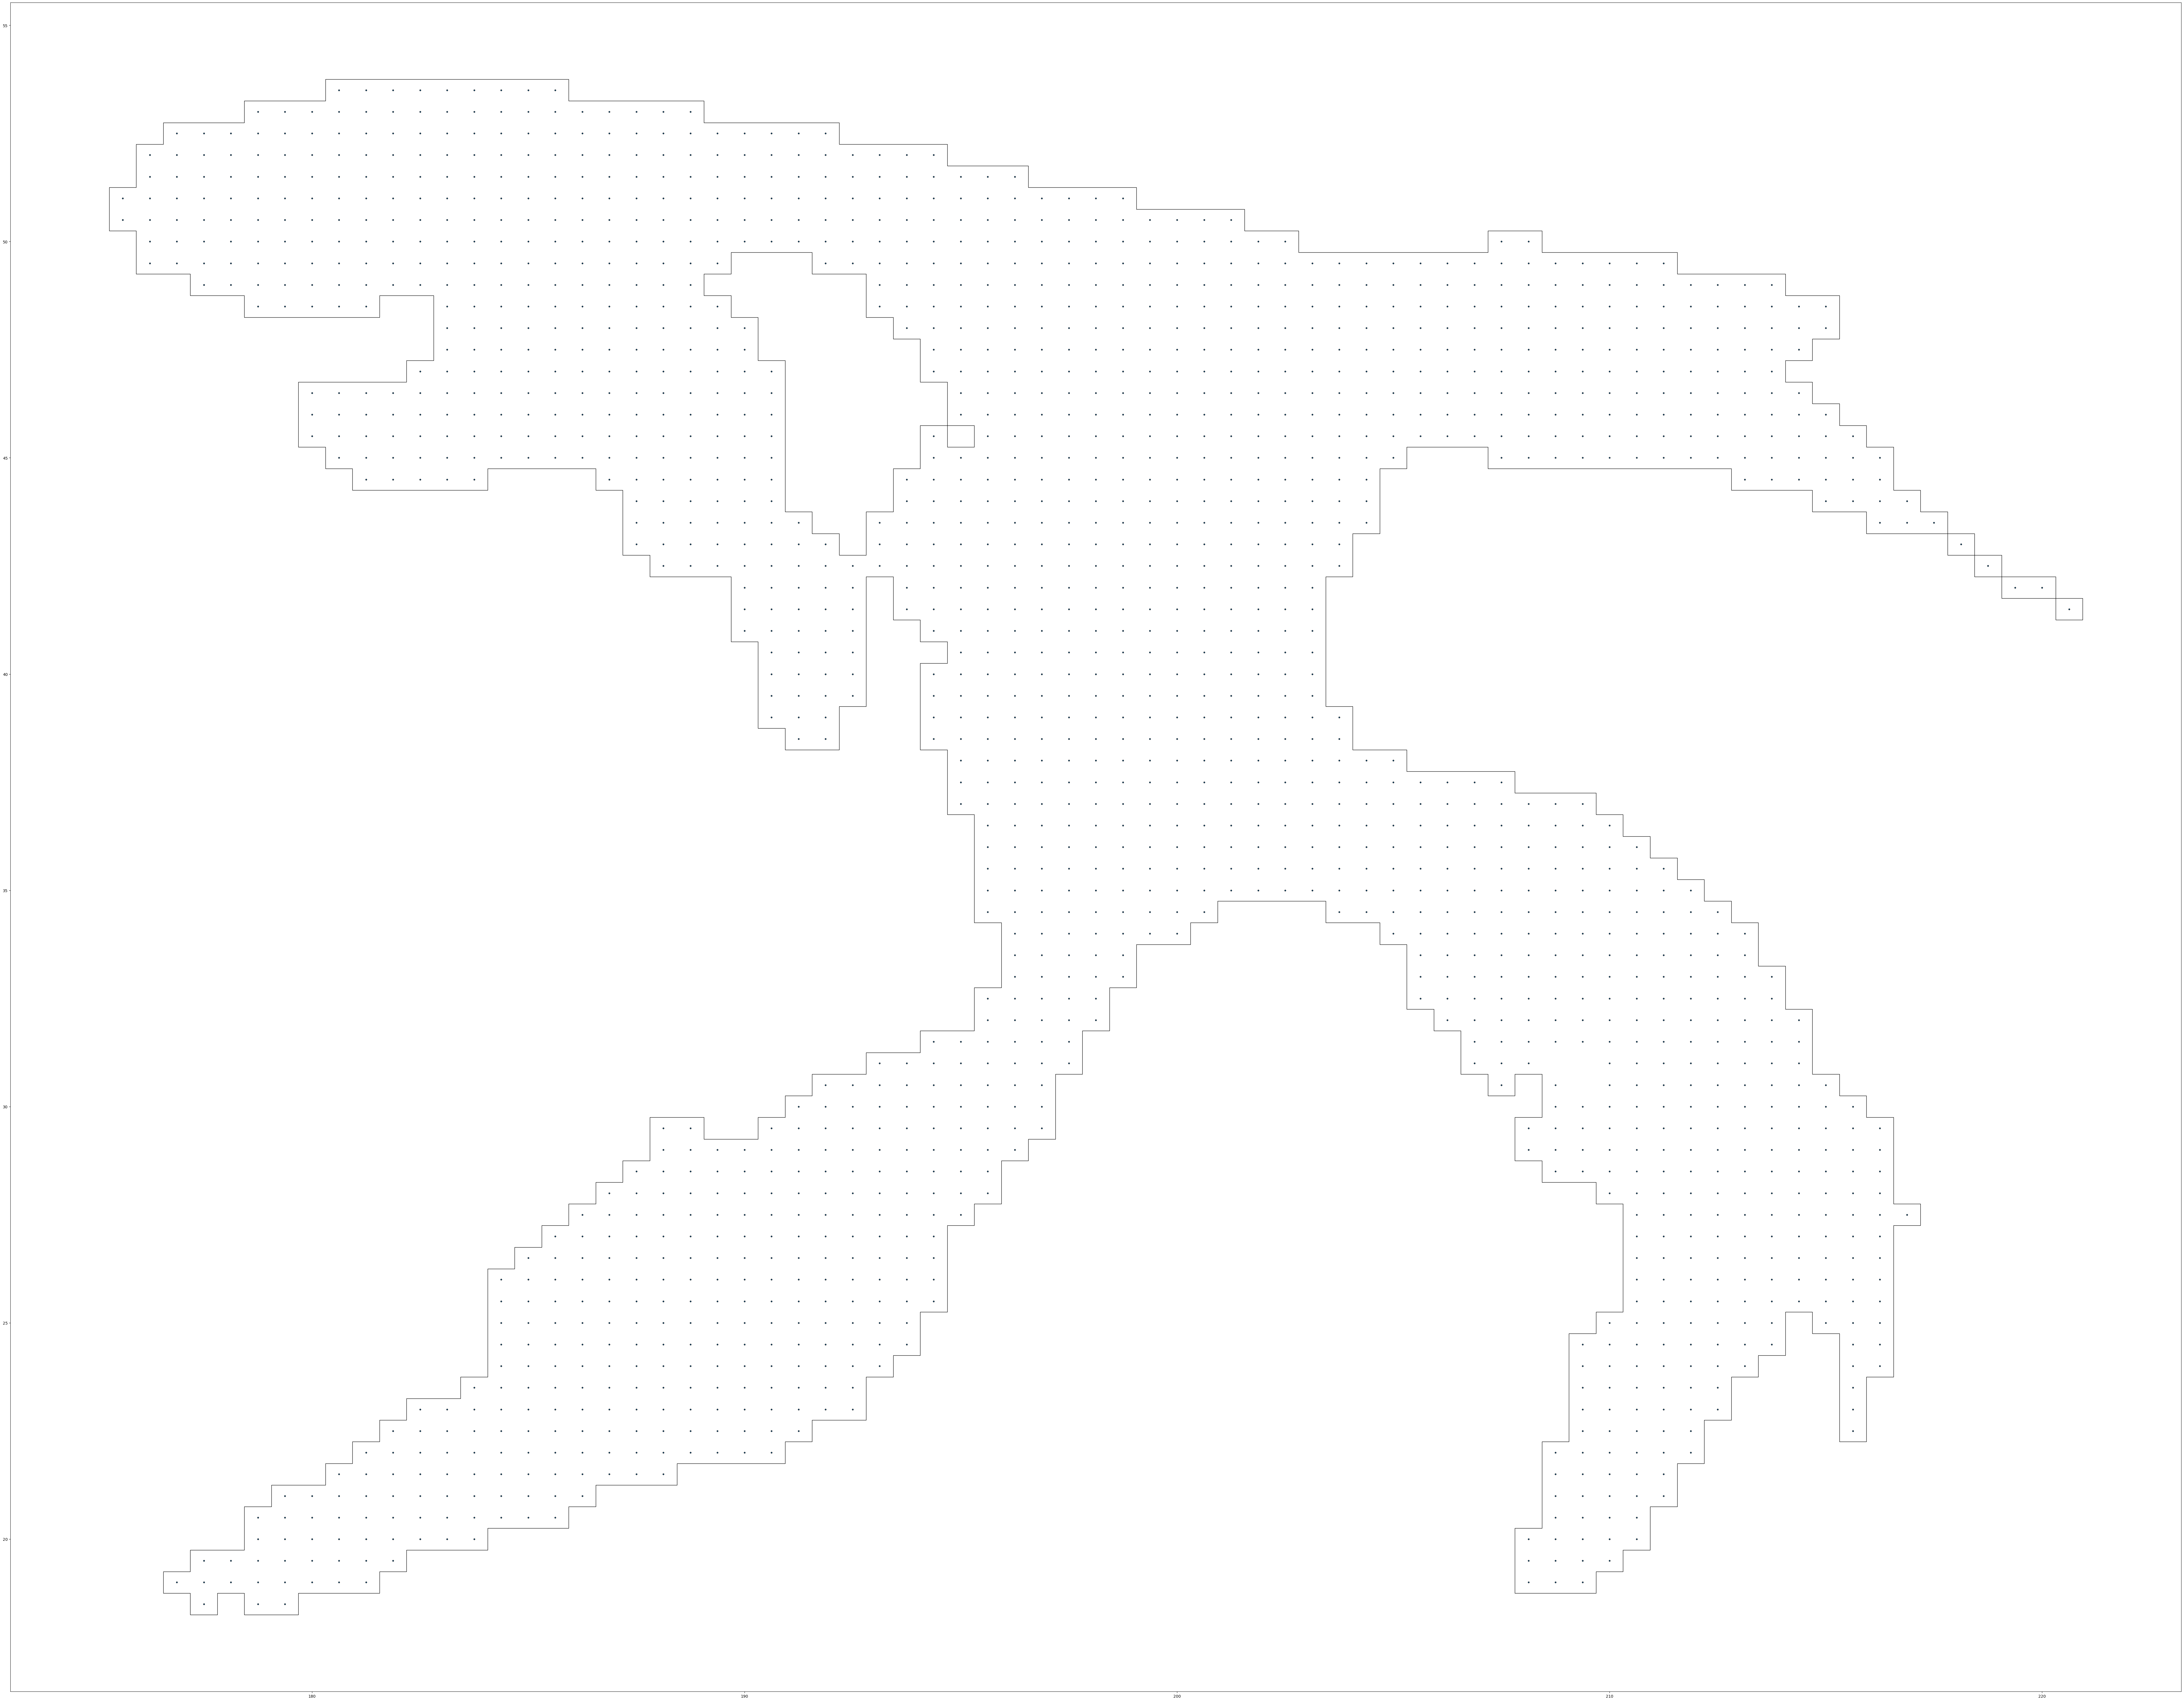

In [20]:
AR = { "_id" : "2000.01.01.015.0_19", "timestamp" : ISODate("2000-01-01T15:00:00Z"), "raster" : [ [ 177.5, 18.5, [ 250.15028381347656 ] ], [ 178.75, 18.5, [ 250.6803436279297 ] ], [ 179.375, 18.5, [ 251.41879272460938 ] ], [ -180, 19, [ 293.031982421875 ] ], [ -179.375, 19, [ 283.8446350097656 ] ], [ -178.75, 19, [ 259.4346923828125 ] ], [ -151.875, 19, [ 261.60516357421875 ] ], [ -151.25, 19, [ 265.21051025390625 ] ], [ -150.625, 19, [ 254.53314208984375 ] ], [ 176.875, 19, [ 251.98753356933594 ] ], [ 177.5, 19, [ 270.9424133300781 ] ], [ 178.125, 19, [ 281.0899353027344 ] ], [ 178.75, 19, [ 282.9179992675781 ] ], [ 179.375, 19, [ 288.9736328125 ] ], [ -180, 19.5, [ 309.6210021972656 ] ], [ -179.375, 19.5, [ 312.8805847167969 ] ], [ -178.75, 19.5, [ 299.8413391113281 ] ], [ -178.125, 19.5, [ 272.87127685546875 ] ], [ -151.875, 19.5, [ 268.4871826171875 ] ], [ -151.25, 19.5, [ 284.867919921875 ] ], [ -150.625, 19.5, [ 275.13482666015625 ] ], [ -150, 19.5, [ 261.1654357910156 ] ], [ 177.5, 19.5, [ 255.70704650878906 ] ], [ 178.125, 19.5, [ 277.3118896484375 ] ], [ 178.75, 19.5, [ 291.1916198730469 ] ], [ 179.375, 19.5, [ 298.2720031738281 ] ], [ -180, 20, [ 292.1121520996094 ] ], [ -179.375, 20, [ 320.1253356933594 ] ], [ -178.75, 20, [ 332.5336608886719 ] ], [ -178.125, 20, [ 312.74737548828125 ] ], [ -177.5, 20, [ 289.1033935546875 ] ], [ -176.875, 20, [ 267.5296936035156 ] ], [ -176.25, 20, [ 252.19517517089844 ] ], [ -151.875, 20, [ 257.63775634765625 ] ], [ -151.25, 20, [ 304.2802429199219 ] ], [ -150.625, 20, [ 294.43377685546875 ] ], [ -150, 20, [ 278.0151672363281 ] ], [ -149.375, 20, [ 251.17967224121094 ] ], [ 178.75, 20, [ 273.806640625 ] ], [ 179.375, 20, [ 282.86474609375 ] ], [ -180, 20.5, [ 277.43865966796875 ] ], [ -179.375, 20.5, [ 300.8349914550781 ] ], [ -178.75, 20.5, [ 344.3849792480469 ] ], [ -178.125, 20.5, [ 350.3796691894531 ] ], [ -177.5, 20.5, [ 329.2403869628906 ] ], [ -176.875, 20.5, [ 312.26702880859375 ] ], [ -176.25, 20.5, [ 302.4385070800781 ] ], [ -175.625, 20.5, [ 293.2881164550781 ] ], [ -175, 20.5, [ 274.56378173828125 ] ], [ -174.375, 20.5, [ 253.1526336669922 ] ], [ -151.25, 20.5, [ 309.4879455566406 ] ], [ -150.625, 20.5, [ 308.6403503417969 ] ], [ -150, 20.5, [ 290.4222106933594 ] ], [ -149.375, 20.5, [ 267.7597961425781 ] ], [ 178.75, 20.5, [ 253.78143310546875 ] ], [ 179.375, 20.5, [ 271.57965087890625 ] ], [ -180, 21, [ 270.7773742675781 ] ], [ -179.375, 21, [ 278.8551940917969 ] ], [ -178.75, 21, [ 310.8793029785156 ] ], [ -178.125, 21, [ 345.50341796875 ] ], [ -177.5, 21, [ 355.94512939453125 ] ], [ -176.875, 21, [ 358.8572082519531 ] ], [ -176.25, 21, [ 357.9355773925781 ] ], [ -175.625, 21, [ 348.9620361328125 ] ], [ -175, 21, [ 332.2098388671875 ] ], [ -174.375, 21, [ 311.0210266113281 ] ], [ -173.75, 21, [ 278.37628173828125 ] ], [ -151.25, 21, [ 290.3883056640625 ] ], [ -150.625, 21, [ 310.69952392578125 ] ], [ -150, 21, [ 293.6820373535156 ] ], [ -149.375, 21, [ 278.55706787109375 ] ], [ -148.75, 21, [ 254.26625061035156 ] ], [ 179.375, 21, [ 256.39691162109375 ] ], [ -179.375, 21.5, [ 266.21844482421875 ] ], [ -178.75, 21.5, [ 283.1163024902344 ] ], [ -178.125, 21.5, [ 298.15478515625 ] ], [ -177.5, 21.5, [ 332.1150207519531 ] ], [ -176.875, 21.5, [ 378.30230712890625 ] ], [ -176.25, 21.5, [ 406.7985534667969 ] ], [ -175.625, 21.5, [ 410.7805480957031 ] ], [ -175, 21.5, [ 400.40704345703125 ] ], [ -174.375, 21.5, [ 382.7171936035156 ] ], [ -173.75, 21.5, [ 343.7261657714844 ] ], [ -173.125, 21.5, [ 303.060546875 ] ], [ -172.5, 21.5, [ 276.78948974609375 ] ], [ -171.875, 21.5, [ 260.70489501953125 ] ], [ -151.25, 21.5, [ 269.7460632324219 ] ], [ -150.625, 21.5, [ 307.4856262207031 ] ], [ -150, 21.5, [ 296.39447021484375 ] ], [ -149.375, 21.5, [ 281.1073913574219 ] ], [ -148.75, 21.5, [ 266.0135192871094 ] ], [ -178.75, 22, [ 270.6233825683594 ] ], [ -178.125, 22, [ 279.3133239746094 ] ], [ -177.5, 22, [ 296.2474060058594 ] ], [ -176.875, 22, [ 349.44488525390625 ] ], [ -176.25, 22, [ 420.8349914550781 ] ], [ -175.625, 22, [ 461.9465026855469 ] ], [ -175, 22, [ 468.23858642578125 ] ], [ -174.375, 22, [ 454.57305908203125 ] ], [ -173.75, 22, [ 416.02581787109375 ] ], [ -173.125, 22, [ 371.70501708984375 ] ], [ -172.5, 22, [ 334.6139831542969 ] ], [ -171.875, 22, [ 309.9179992675781 ] ], [ -171.25, 22, [ 287.4729309082031 ] ], [ -170.625, 22, [ 276.7305603027344 ] ], [ -170, 22, [ 271.1104431152344 ] ], [ -169.375, 22, [ 254.86068725585938 ] ], [ -151.25, 22, [ 255.5394287109375 ] ], [ -150.625, 22, [ 300.80194091796875 ] ], [ -150, 22, [ 301.8999328613281 ] ], [ -149.375, 22, [ 280.3087158203125 ] ], [ -148.75, 22, [ 277.5882873535156 ] ], [ -148.125, 22, [ 261.4954833984375 ] ], [ -178.125, 22.5, [ 262.5969543457031 ] ], [ -177.5, 22.5, [ 281.57171630859375 ] ], [ -176.875, 22.5, [ 314.53314208984375 ] ], [ -176.25, 22.5, [ 389.2616271972656 ] ], [ -175.625, 22.5, [ 474.61761474609375 ] ], [ -175, 22.5, [ 518.7314453125 ] ], [ -174.375, 22.5, [ 516.7386474609375 ] ], [ -173.75, 22.5, [ 482.739990234375 ] ], [ -173.125, 22.5, [ 444.7751770019531 ] ], [ -172.5, 22.5, [ 405.5906066894531 ] ], [ -171.875, 22.5, [ 367.4473876953125 ] ], [ -171.25, 22.5, [ 337.3552551269531 ] ], [ -170.625, 22.5, [ 325.2522888183594 ] ], [ -170, 22.5, [ 320.28271484375 ] ], [ -169.375, 22.5, [ 308.38482666015625 ] ], [ -168.75, 22.5, [ 282.72515869140625 ] ], [ -150.625, 22.5, [ 292.00970458984375 ] ], [ -150, 22.5, [ 309.8160705566406 ] ], [ -149.375, 22.5, [ 287.3738708496094 ] ], [ -148.75, 22.5, [ 287.63482666015625 ] ], [ -148.125, 22.5, [ 276.1490783691406 ] ], [ -144.375, 22.5, [ 268.61004638671875 ] ], [ -177.5, 23, [ 262.6371154785156 ] ], [ -176.875, 23, [ 280.339111328125 ] ], [ -176.25, 23, [ 318.6004333496094 ] ], [ -175.625, 23, [ 414.1837158203125 ] ], [ -175, 23, [ 512.3202514648438 ] ], [ -174.375, 23, [ 540.0431518554688 ] ], [ -173.75, 23, [ 512.2594604492188 ] ], [ -173.125, 23, [ 474.65869140625 ] ], [ -172.5, 23, [ 447.3084411621094 ] ], [ -171.875, 23, [ 420.4066467285156 ] ], [ -171.25, 23, [ 394.55413818359375 ] ], [ -170.625, 23, [ 376.4790344238281 ] ], [ -170, 23, [ 366.4235534667969 ] ], [ -169.375, 23, [ 356.7033996582031 ] ], [ -168.75, 23, [ 332.9944763183594 ] ], [ -168.125, 23, [ 299.21038818359375 ] ], [ -167.5, 23, [ 250.58575439453125 ] ], [ -150.625, 23, [ 280.9906921386719 ] ], [ -150, 23, [ 308.3890686035156 ] ], [ -149.375, 23, [ 299.1947937011719 ] ], [ -148.75, 23, [ 297.9587097167969 ] ], [ -148.125, 23, [ 292.7867736816406 ] ], [ -147.5, 23, [ 251.6766815185547 ] ], [ -144.375, 23, [ 277.43902587890625 ] ], [ -176.25, 23.5, [ 258.19586181640625 ] ], [ -175.625, 23.5, [ 312.3003234863281 ] ], [ -175, 23.5, [ 415.11651611328125 ] ], [ -174.375, 23.5, [ 479.31939697265625 ] ], [ -173.75, 23.5, [ 488.2897644042969 ] ], [ -173.125, 23.5, [ 458.0863037109375 ] ], [ -172.5, 23.5, [ 422.2972106933594 ] ], [ -171.875, 23.5, [ 411.6903076171875 ] ], [ -171.25, 23.5, [ 417.49151611328125 ] ], [ -170.625, 23.5, [ 413.9166259765625 ] ], [ -170, 23.5, [ 404.3842468261719 ] ], [ -169.375, 23.5, [ 394.8011474609375 ] ], [ -168.75, 23.5, [ 375.2220458984375 ] ], [ -168.125, 23.5, [ 344.1070251464844 ] ], [ -167.5, 23.5, [ 299.5015563964844 ] ], [ -150.625, 23.5, [ 271.9466247558594 ] ], [ -150, 23.5, [ 296.2286682128906 ] ], [ -149.375, 23.5, [ 307.8836975097656 ] ], [ -148.75, 23.5, [ 314.35906982421875 ] ], [ -148.125, 23.5, [ 315.3174133300781 ] ], [ -147.5, 23.5, [ 273.990966796875 ] ], [ -144.375, 23.5, [ 288.2809753417969 ] ], [ -175.625, 24, [ 269.68194580078125 ] ], [ -175, 24, [ 325.9351806640625 ] ], [ -174.375, 24, [ 374.0011291503906 ] ], [ -173.75, 24, [ 421.2396240234375 ] ], [ -173.125, 24, [ 428.399658203125 ] ], [ -172.5, 24, [ 397.1723937988281 ] ], [ -171.875, 24, [ 376.439453125 ] ], [ -171.25, 24, [ 391.41326904296875 ] ], [ -170.625, 24, [ 415.3750305175781 ] ], [ -170, 24, [ 423.6916198730469 ] ], [ -169.375, 24, [ 424.35577392578125 ] ], [ -168.75, 24, [ 413.6292419433594 ] ], [ -168.125, 24, [ 386.89593505859375 ] ], [ -167.5, 24, [ 345.3414611816406 ] ], [ -166.875, 24, [ 292.46539306640625 ] ], [ -150.625, 24, [ 265.3621826171875 ] ], [ -150, 24, [ 288.3321533203125 ] ], [ -149.375, 24, [ 306.6441650390625 ] ], [ -148.75, 24, [ 334.5928039550781 ] ], [ -148.125, 24, [ 343.26617431640625 ] ], [ -147.5, 24, [ 301.9056396484375 ] ], [ -146.875, 24, [ 264.3302917480469 ] ], [ -144.375, 24, [ 318.2694396972656 ] ], [ -143.75, 24, [ 262.8103332519531 ] ], [ -175.625, 24.5, [ 270.4185791015625 ] ], [ -175, 24.5, [ 303.8640441894531 ] ], [ -174.375, 24.5, [ 326.3589782714844 ] ], [ -173.75, 24.5, [ 366.1595153808594 ] ], [ -173.125, 24.5, [ 399.88214111328125 ] ], [ -172.5, 24.5, [ 393.4975280761719 ] ], [ -171.875, 24.5, [ 370.8951110839844 ] ], [ -171.25, 24.5, [ 365.0255126953125 ] ], [ -170.625, 24.5, [ 394.1219177246094 ] ], [ -170, 24.5, [ 428.6933898925781 ] ], [ -169.375, 24.5, [ 444.6378479003906 ] ], [ -168.75, 24.5, [ 441.805419921875 ] ], [ -168.125, 24.5, [ 419.22357177734375 ] ], [ -167.5, 24.5, [ 382.76629638671875 ] ], [ -166.875, 24.5, [ 330.4889221191406 ] ], [ -166.25, 24.5, [ 273.98907470703125 ] ], [ -150.625, 24.5, [ 250.74386596679688 ] ], [ -150, 24.5, [ 278.53863525390625 ] ], [ -149.375, 24.5, [ 299.82806396484375 ] ], [ -148.75, 24.5, [ 354.0762634277344 ] ], [ -148.125, 24.5, [ 381.5871276855469 ] ], [ -147.5, 24.5, [ 331.8304138183594 ] ], [ -146.875, 24.5, [ 288.92767333984375 ] ], [ -146.25, 24.5, [ 252.67184448242188 ] ], [ -144.375, 24.5, [ 328.86700439453125 ] ], [ -143.75, 24.5, [ 297.244873046875 ] ], [ -175.625, 25, [ 261.7740173339844 ] ], [ -175, 25, [ 288.5609436035156 ] ], [ -174.375, 25, [ 309.90740966796875 ] ], [ -173.75, 25, [ 348.5529479980469 ] ], [ -173.125, 25, [ 376.39068603515625 ] ], [ -172.5, 25, [ 391.1029968261719 ] ], [ -171.875, 25, [ 384.1158142089844 ] ], [ -171.25, 25, [ 368.9164733886719 ] ], [ -170.625, 25, [ 378.166015625 ] ], [ -170, 25, [ 419.7832336425781 ] ], [ -169.375, 25, [ 458.3156433105469 ] ], [ -168.75, 25, [ 462.923583984375 ] ], [ -168.125, 25, [ 443.00408935546875 ] ], [ -167.5, 25, [ 411.9670715332031 ] ], [ -166.875, 25, [ 361.7764587402344 ] ], [ -166.25, 25, [ 299.2002868652344 ] ], [ -150, 25, [ 261.6039733886719 ] ], [ -149.375, 25, [ 283.4462585449219 ] ], [ -148.75, 25, [ 354.20953369140625 ] ], [ -148.125, 25, [ 401.9805908203125 ] ], [ -147.5, 25, [ 355.7184143066406 ] ], [ -146.875, 25, [ 310.12841796875 ] ], [ -146.25, 25, [ 266.4176940917969 ] ], [ -145, 25, [ 271.63543701171875 ] ], [ -144.375, 25, [ 323.0977783203125 ] ], [ -143.75, 25, [ 314.5491943359375 ] ], [ -175.625, 25.5, [ 254.86907958984375 ] ], [ -175, 25.5, [ 273.6289978027344 ] ], [ -174.375, 25.5, [ 284.0345764160156 ] ], [ -173.75, 25.5, [ 311.53887939453125 ] ], [ -173.125, 25.5, [ 339.0031433105469 ] ], [ -172.5, 25.5, [ 365.1854248046875 ] ], [ -171.875, 25.5, [ 381.719970703125 ] ], [ -171.25, 25.5, [ 386.0516357421875 ] ], [ -170.625, 25.5, [ 385.8586120605469 ] ], [ -170, 25.5, [ 410.7217712402344 ] ], [ -169.375, 25.5, [ 459.60040283203125 ] ], [ -168.75, 25.5, [ 475.5343017578125 ] ], [ -168.125, 25.5, [ 461.49591064453125 ] ], [ -167.5, 25.5, [ 438.10565185546875 ] ], [ -166.875, 25.5, [ 392.96051025390625 ] ], [ -166.25, 25.5, [ 328.73126220703125 ] ], [ -165.625, 25.5, [ 263.3931579589844 ] ], [ -149.375, 25.5, [ 272.06829833984375 ] ], [ -148.75, 25.5, [ 344.2513732910156 ] ], [ -148.125, 25.5, [ 399.3551940917969 ] ], [ -147.5, 25.5, [ 365.87396240234375 ] ], [ -146.875, 25.5, [ 333.8699951171875 ] ], [ -146.25, 25.5, [ 266.28485107421875 ] ], [ -145.625, 25.5, [ 254.978759765625 ] ], [ -145, 25.5, [ 317.4354553222656 ] ], [ -144.375, 25.5, [ 303.0138854980469 ] ], [ -143.75, 25.5, [ 294.48626708984375 ] ], [ -175.625, 26, [ 251.90052795410156 ] ], [ -175, 26, [ 274.20135498046875 ] ], [ -174.375, 26, [ 280.2394104003906 ] ], [ -173.75, 26, [ 281.3600158691406 ] ], [ -173.125, 26, [ 296.13262939453125 ] ], [ -172.5, 26, [ 324.83868408203125 ] ], [ -171.875, 26, [ 354.6977233886719 ] ], [ -171.25, 26, [ 378.104736328125 ] ], [ -170.625, 26, [ 391.4190979003906 ] ], [ -170, 26, [ 405.0716857910156 ] ], [ -169.375, 26, [ 449.935791015625 ] ], [ -168.75, 26, [ 479.31201171875 ] ], [ -168.125, 26, [ 476.0684814453125 ] ], [ -167.5, 26, [ 460.165283203125 ] ], [ -166.875, 26, [ 420.7837829589844 ] ], [ -166.25, 26, [ 353.61260986328125 ] ], [ -165.625, 26, [ 279.61505126953125 ] ], [ -149.375, 26, [ 276.4453125 ] ], [ -148.75, 26, [ 350.39190673828125 ] ], [ -148.125, 26, [ 388.82781982421875 ] ], [ -147.5, 26, [ 368.07769775390625 ] ], [ -146.875, 26, [ 334.1956787109375 ] ], [ -146.25, 26, [ 266.7498779296875 ] ], [ -145.625, 26, [ 326.94451904296875 ] ], [ -145, 26, [ 344.2198181152344 ] ], [ -144.375, 26, [ 278.1050109863281 ] ], [ -143.75, 26, [ 272.0675354003906 ] ], [ -175, 26.5, [ 275.2425231933594 ] ], [ -174.375, 26.5, [ 293.4348449707031 ] ], [ -173.75, 26.5, [ 290.4642639160156 ] ], [ -173.125, 26.5, [ 284.0580749511719 ] ], [ -172.5, 26.5, [ 302.0638427734375 ] ], [ -171.875, 26.5, [ 329.57501220703125 ] ], [ -171.25, 26.5, [ 352.51666259765625 ] ], [ -170.625, 26.5, [ 372.51995849609375 ] ], [ -170, 26.5, [ 387.8228454589844 ] ], [ -169.375, 26.5, [ 427.71807861328125 ] ], [ -168.75, 26.5, [ 475.9443054199219 ] ], [ -168.125, 26.5, [ 487.37982177734375 ] ], [ -167.5, 26.5, [ 476.4139099121094 ] ], [ -166.875, 26.5, [ 441.5762023925781 ] ], [ -166.25, 26.5, [ 370.25238037109375 ] ], [ -165.625, 26.5, [ 292.7867126464844 ] ], [ -149.375, 26.5, [ 298.3304748535156 ] ], [ -148.75, 26.5, [ 364.8375244140625 ] ], [ -148.125, 26.5, [ 380.8713073730469 ] ], [ -147.5, 26.5, [ 349.46893310546875 ] ], [ -146.875, 26.5, [ 296.2416076660156 ] ], [ -146.25, 26.5, [ 293.1259460449219 ] ], [ -145.625, 26.5, [ 404.0242004394531 ] ], [ -145, 26.5, [ 351.5843505859375 ] ], [ -144.375, 26.5, [ 275.9670715332031 ] ], [ -143.75, 26.5, [ 273.2755126953125 ] ], [ -174.375, 27, [ 293.0661315917969 ] ], [ -173.75, 27, [ 309.96270751953125 ] ], [ -173.125, 27, [ 295.87225341796875 ] ], [ -172.5, 27, [ 293.34539794921875 ] ], [ -171.875, 27, [ 311.5469970703125 ] ], [ -171.25, 27, [ 333.50616455078125 ] ], [ -170.625, 27, [ 358.3367614746094 ] ], [ -170, 27, [ 373.57745361328125 ] ], [ -169.375, 27, [ 391.7484436035156 ] ], [ -168.75, 27, [ 446.31524658203125 ] ], [ -168.125, 27, [ 487.447509765625 ] ], [ -167.5, 27, [ 481.9969787597656 ] ], [ -166.875, 27, [ 448.3406677246094 ] ], [ -166.25, 27, [ 386.40655517578125 ] ], [ -165.625, 27, [ 312.0434265136719 ] ], [ -149.375, 27, [ 323.7165832519531 ] ], [ -148.75, 27, [ 368.5904541015625 ] ], [ -148.125, 27, [ 360.0682678222656 ] ], [ -147.5, 27, [ 314.36309814453125 ] ], [ -146.875, 27, [ 283.0621337890625 ] ], [ -146.25, 27, [ 353.5016784667969 ] ], [ -145.625, 27, [ 471.85565185546875 ] ], [ -145, 27, [ 354.8355712890625 ] ], [ -144.375, 27, [ 291.6346130371094 ] ], [ -143.75, 27, [ 285.1991882324219 ] ], [ -173.75, 27.5, [ 296.4679870605469 ] ], [ -173.125, 27.5, [ 306.33203125 ] ], [ -172.5, 27.5, [ 301.0307922363281 ] ], [ -171.875, 27.5, [ 305.2571716308594 ] ], [ -171.25, 27.5, [ 321.9672546386719 ] ], [ -170.625, 27.5, [ 353.34600830078125 ] ], [ -170, 27.5, [ 371.6166687011719 ] ], [ -169.375, 27.5, [ 373.5710754394531 ] ], [ -168.75, 27.5, [ 410.34527587890625 ] ], [ -168.125, 27.5, [ 463.765625 ] ], [ -167.5, 27.5, [ 480.2088623046875 ] ], [ -166.875, 27.5, [ 455.9573974609375 ] ], [ -166.25, 27.5, [ 406.4976806640625 ] ], [ -165.625, 27.5, [ 340.4210510253906 ] ], [ -165, 27.5, [ 275.731201171875 ] ], [ -149.375, 27.5, [ 326.9170837402344 ] ], [ -148.75, 27.5, [ 354.7621154785156 ] ], [ -148.125, 27.5, [ 340.0018310546875 ] ], [ -147.5, 27.5, [ 300.5780944824219 ] ], [ -146.875, 27.5, [ 293.15118408203125 ] ], [ -146.25, 27.5, [ 468.7065734863281 ] ], [ -145.625, 27.5, [ 502.027587890625 ] ], [ -145, 27.5, [ 352.4371032714844 ] ], [ -144.375, 27.5, [ 302.6554870605469 ] ], [ -143.75, 27.5, [ 294.85467529296875 ] ], [ -143.125, 27.5, [ 252.00286865234375 ] ], [ -173.125, 28, [ 289.0121765136719 ] ], [ -172.5, 28, [ 299.9753723144531 ] ], [ -171.875, 28, [ 303.59771728515625 ] ], [ -171.25, 28, [ 313.2183532714844 ] ], [ -170.625, 28, [ 343.8556213378906 ] ], [ -170, 28, [ 364.44085693359375 ] ], [ -169.375, 28, [ 369.1388854980469 ] ], [ -168.75, 28, [ 400.15765380859375 ] ], [ -168.125, 28, [ 439.7874450683594 ] ], [ -167.5, 28, [ 458.8252868652344 ] ], [ -166.875, 28, [ 460.1015319824219 ] ], [ -166.25, 28, [ 430.6519470214844 ] ], [ -165.625, 28, [ 383.691650390625 ] ], [ -165, 28, [ 327.5527038574219 ] ], [ -164.375, 28, [ 272.9190673828125 ] ], [ -150, 28, [ 263.1011962890625 ] ], [ -149.375, 28, [ 319.8927307128906 ] ], [ -148.75, 28, [ 346.98175048828125 ] ], [ -148.125, 28, [ 352.93023681640625 ] ], [ -147.5, 28, [ 323.8833923339844 ] ], [ -146.875, 28, [ 374.22381591796875 ] ], [ -146.25, 28, [ 551.7201538085938 ] ], [ -145.625, 28, [ 435.4632263183594 ] ], [ -145, 28, [ 344.38226318359375 ] ], [ -144.375, 28, [ 314.17364501953125 ] ], [ -143.75, 28, [ 302.86676025390625 ] ], [ -172.5, 28.5, [ 274.4641418457031 ] ], [ -171.875, 28.5, [ 289.90399169921875 ] ], [ -171.25, 28.5, [ 295.3079833984375 ] ], [ -170.625, 28.5, [ 318.2036437988281 ] ], [ -170, 28.5, [ 341.8882141113281 ] ], [ -169.375, 28.5, [ 354.05059814453125 ] ], [ -168.75, 28.5, [ 389.5956115722656 ] ], [ -168.125, 28.5, [ 425.7552185058594 ] ], [ -167.5, 28.5, [ 433.887939453125 ] ], [ -166.875, 28.5, [ 452.7484436035156 ] ], [ -166.25, 28.5, [ 456.6013488769531 ] ], [ -165.625, 28.5, [ 436.60223388671875 ] ], [ -165, 28.5, [ 381.31494140625 ] ], [ -164.375, 28.5, [ 310.4669189453125 ] ], [ -151.25, 28.5, [ 257.94696044921875 ] ], [ -150.625, 28.5, [ 261.0885009765625 ] ], [ -150, 28.5, [ 284.0252990722656 ] ], [ -149.375, 28.5, [ 314.7982177734375 ] ], [ -148.75, 28.5, [ 349.9667053222656 ] ], [ -148.125, 28.5, [ 394.3165283203125 ] ], [ -147.5, 28.5, [ 384.14007568359375 ] ], [ -146.875, 28.5, [ 471.19781494140625 ] ], [ -146.25, 28.5, [ 499.61785888671875 ] ], [ -145.625, 28.5, [ 384.7399597167969 ] ], [ -145, 28.5, [ 346.0556335449219 ] ], [ -144.375, 28.5, [ 341.5255432128906 ] ], [ -143.75, 28.5, [ 304.0948181152344 ] ], [ -171.875, 29, [ 277.59820556640625 ] ], [ -171.25, 29, [ 278.5743713378906 ] ], [ -170.625, 29, [ 273.587646484375 ] ], [ -170, 29, [ 292.2330627441406 ] ], [ -169.375, 29, [ 317.89202880859375 ] ], [ -168.75, 29, [ 362.2225341796875 ] ], [ -168.125, 29, [ 395.46966552734375 ] ], [ -167.5, 29, [ 411.3296203613281 ] ], [ -166.875, 29, [ 436.3596496582031 ] ], [ -166.25, 29, [ 469.8769836425781 ] ], [ -165.625, 29, [ 476.0150451660156 ] ], [ -165, 29, [ 425.57366943359375 ] ], [ -164.375, 29, [ 350.5703430175781 ] ], [ -163.75, 29, [ 281.9258117675781 ] ], [ -151.875, 29, [ 258.8472900390625 ] ], [ -151.25, 29, [ 279.77423095703125 ] ], [ -150.625, 29, [ 284.43865966796875 ] ], [ -150, 29, [ 300.4429016113281 ] ], [ -149.375, 29, [ 311.9783020019531 ] ], [ -148.75, 29, [ 345.26763916015625 ] ], [ -148.125, 29, [ 428.1009826660156 ] ], [ -147.5, 29, [ 437.6731872558594 ] ], [ -146.875, 29, [ 492.7386169433594 ] ], [ -146.25, 29, [ 443.3116455078125 ] ], [ -145.625, 29, [ 391.57147216796875 ] ], [ -145, 29, [ 353.4749450683594 ] ], [ -144.375, 29, [ 357.5648498535156 ] ], [ -143.75, 29, [ 286.5190734863281 ] ], [ -171.875, 29.5, [ 250.87498474121094 ] ], [ -171.25, 29.5, [ 269.8409118652344 ] ], [ -169.375, 29.5, [ 266.0363464355469 ] ], [ -168.75, 29.5, [ 320.0070495605469 ] ], [ -168.125, 29.5, [ 358.370361328125 ] ], [ -167.5, 29.5, [ 377.2230224609375 ] ], [ -166.875, 29.5, [ 399.4769287109375 ] ], [ -166.25, 29.5, [ 450.48577880859375 ] ], [ -165.625, 29.5, [ 480.93072509765625 ] ], [ -165, 29.5, [ 450.0263977050781 ] ], [ -164.375, 29.5, [ 389.3800964355469 ] ], [ -163.75, 29.5, [ 321.00701904296875 ] ], [ -163.125, 29.5, [ 261.9559326171875 ] ], [ -151.875, 29.5, [ 266.69989013671875 ] ], [ -151.25, 29.5, [ 266.0386657714844 ] ], [ -150.625, 29.5, [ 294.5181579589844 ] ], [ -150, 29.5, [ 297.47015380859375 ] ], [ -149.375, 29.5, [ 299.7999572753906 ] ], [ -148.75, 29.5, [ 328.6976318359375 ] ], [ -148.125, 29.5, [ 420.9255676269531 ] ], [ -147.5, 29.5, [ 458.8916931152344 ] ], [ -146.875, 29.5, [ 494.1732482910156 ] ], [ -146.25, 29.5, [ 463.1905517578125 ] ], [ -145.625, 29.5, [ 399.31109619140625 ] ], [ -145, 29.5, [ 347.2944030761719 ] ], [ -144.375, 29.5, [ 327.5343017578125 ] ], [ -143.75, 29.5, [ 255.98410034179688 ] ], [ -168.75, 30, [ 270.0000305175781 ] ], [ -168.125, 30, [ 314.88885498046875 ] ], [ -167.5, 30, [ 336.640380859375 ] ], [ -166.875, 30, [ 351.11602783203125 ] ], [ -166.25, 30, [ 402.20916748046875 ] ], [ -165.625, 30, [ 450.20819091796875 ] ], [ -165, 30, [ 453.4372863769531 ] ], [ -164.375, 30, [ 417.15313720703125 ] ], [ -163.75, 30, [ 359.3575744628906 ] ], [ -163.125, 30, [ 291.7281188964844 ] ], [ -151.25, 30, [ 268.5093688964844 ] ], [ -150.625, 30, [ 282.21380615234375 ] ], [ -150, 30, [ 282.9237976074219 ] ], [ -149.375, 30, [ 290.6734313964844 ] ], [ -148.75, 30, [ 323.32330322265625 ] ], [ -148.125, 30, [ 399.89447021484375 ] ], [ -147.5, 30, [ 497.9112548828125 ] ], [ -146.875, 30, [ 526.42236328125 ] ], [ -146.25, 30, [ 487.6964416503906 ] ], [ -145.625, 30, [ 401.944580078125 ] ], [ -145, 30, [ 318.4321594238281 ] ], [ -144.375, 30, [ 269.50262451171875 ] ], [ -168.125, 30.5, [ 255.64674377441406 ] ], [ -167.5, 30.5, [ 285.9106750488281 ] ], [ -166.875, 30.5, [ 304.9469299316406 ] ], [ -166.25, 30.5, [ 344.8244934082031 ] ], [ -165.625, 30.5, [ 405.2745361328125 ] ], [ -165, 30.5, [ 443.74884033203125 ] ], [ -164.375, 30.5, [ 430.6938781738281 ] ], [ -163.75, 30.5, [ 385.2855224609375 ] ], [ -163.125, 30.5, [ 313.019775390625 ] ], [ -152.5, 30.5, [ 256.2571716308594 ] ], [ -151.25, 30.5, [ 261.3083190917969 ] ], [ -150, 30.5, [ 276.2820739746094 ] ], [ -149.375, 30.5, [ 308.33697509765625 ] ], [ -148.75, 30.5, [ 354.1143493652344 ] ], [ -148.125, 30.5, [ 440.2599182128906 ] ], [ -147.5, 30.5, [ 586.9462890625 ] ], [ -146.875, 30.5, [ 569.3985595703125 ] ], [ -146.25, 30.5, [ 478.9588317871094 ] ], [ -145.625, 30.5, [ 379.62225341796875 ] ], [ -145, 30.5, [ 278.9445495605469 ] ], [ -166.875, 31, [ 252.5677490234375 ] ], [ -166.25, 31, [ 287.3727722167969 ] ], [ -165.625, 31, [ 349.16302490234375 ] ], [ -165, 31, [ 412.7909851074219 ] ], [ -164.375, 31, [ 419.99267578125 ] ], [ -163.75, 31, [ 390.1648254394531 ] ], [ -163.125, 31, [ 332.1885681152344 ] ], [ -162.5, 31, [ 267.721435546875 ] ], [ -153.125, 31, [ 264.79541015625 ] ], [ -152.5, 31, [ 267.7188720703125 ] ], [ -151.875, 31, [ 257.20281982421875 ] ], [ -150, 31, [ 315.55859375 ] ], [ -149.375, 31, [ 379.34014892578125 ] ], [ -148.75, 31, [ 445.5709228515625 ] ], [ -148.125, 31, [ 589.1531372070312 ] ], [ -147.5, 31, [ 678.37451171875 ] ], [ -146.875, 31, [ 560.1974487304688 ] ], [ -146.25, 31, [ 433.54925537109375 ] ], [ -145.625, 31, [ 319.8974304199219 ] ], [ -165.625, 31.5, [ 268.4134826660156 ] ], [ -165, 31.5, [ 339.2330627441406 ] ], [ -164.375, 31.5, [ 373.91522216796875 ] ], [ -163.75, 31.5, [ 378.2344970703125 ] ], [ -163.125, 31.5, [ 352.3831481933594 ] ], [ -162.5, 31.5, [ 302.5885314941406 ] ], [ -153.125, 31.5, [ 286.7328796386719 ] ], [ -152.5, 31.5, [ 285.7990417480469 ] ], [ -151.875, 31.5, [ 271.2881774902344 ] ], [ -151.25, 31.5, [ 258.4564514160156 ] ], [ -150.625, 31.5, [ 347.73638916015625 ] ], [ -150, 31.5, [ 445.4236145019531 ] ], [ -149.375, 31.5, [ 519.5430908203125 ] ], [ -148.75, 31.5, [ 644.4158935546875 ] ], [ -148.125, 31.5, [ 712.9085693359375 ] ], [ -147.5, 31.5, [ 652.16796875 ] ], [ -146.875, 31.5, [ 490.2516174316406 ] ], [ -146.25, 31.5, [ 375.70404052734375 ] ], [ -145.625, 31.5, [ 281.5643310546875 ] ], [ -164.375, 32, [ 317.0782470703125 ] ], [ -163.75, 32, [ 361.26226806640625 ] ], [ -163.125, 32, [ 368.9408874511719 ] ], [ -162.5, 32, [ 336.28387451171875 ] ], [ -161.875, 32, [ 253.20851135253906 ] ], [ -153.75, 32, [ 296.20745849609375 ] ], [ -153.125, 32, [ 319.45458984375 ] ], [ -152.5, 32, [ 321.4644470214844 ] ], [ -151.875, 32, [ 329.9294128417969 ] ], [ -151.25, 32, [ 406.90594482421875 ] ], [ -150.625, 32, [ 564.3911743164062 ] ], [ -150, 32, [ 612.6433715820312 ] ], [ -149.375, 32, [ 645.3358154296875 ] ], [ -148.75, 32, [ 704.840576171875 ] ], [ -148.125, 32, [ 657.2460327148438 ] ], [ -147.5, 32, [ 546.9686279296875 ] ], [ -146.875, 32, [ 423.8535461425781 ] ], [ -146.25, 32, [ 334.25408935546875 ] ], [ -145.625, 32, [ 262.607666015625 ] ], [ -164.375, 32.5, [ 274.88323974609375 ] ], [ -163.75, 32.5, [ 343.82183837890625 ] ], [ -163.125, 32.5, [ 375.35809326171875 ] ], [ -162.5, 32.5, [ 365.6055603027344 ] ], [ -161.875, 32.5, [ 280.59161376953125 ] ], [ -154.375, 32.5, [ 254.5977325439453 ] ], [ -153.75, 32.5, [ 340.4662780761719 ] ], [ -153.125, 32.5, [ 356.7987060546875 ] ], [ -152.5, 32.5, [ 366.37548828125 ] ], [ -151.875, 32.5, [ 394.9576721191406 ] ], [ -151.25, 32.5, [ 493.0010070800781 ] ], [ -150.625, 32.5, [ 599.3217163085938 ] ], [ -150, 32.5, [ 598.0471801757812 ] ], [ -149.375, 32.5, [ 601.8291625976562 ] ], [ -148.75, 32.5, [ 589.91650390625 ] ], [ -148.125, 32.5, [ 543.9746704101562 ] ], [ -147.5, 32.5, [ 463.4004821777344 ] ], [ -146.875, 32.5, [ 375.5939636230469 ] ], [ -146.25, 32.5, [ 300.2862243652344 ] ], [ -163.75, 33, [ 328.0369873046875 ] ], [ -163.125, 33, [ 381.23284912109375 ] ], [ -162.5, 33, [ 392.45074462890625 ] ], [ -161.875, 33, [ 307.8409118652344 ] ], [ -161.25, 33, [ 252.79583740234375 ] ], [ -154.375, 33, [ 286.1598205566406 ] ], [ -153.75, 33, [ 364.7771911621094 ] ], [ -153.125, 33, [ 389.0302734375 ] ], [ -152.5, 33, [ 390.1636657714844 ] ], [ -151.875, 33, [ 405.4507141113281 ] ], [ -151.25, 33, [ 450.4045715332031 ] ], [ -150.625, 33, [ 492.2241516113281 ] ], [ -150, 33, [ 524.4154663085938 ] ], [ -149.375, 33, [ 521.4095458984375 ] ], [ -148.75, 33, [ 525.280517578125 ] ], [ -148.125, 33, [ 480.04046630859375 ] ], [ -147.5, 33, [ 399.3570251464844 ] ], [ -146.875, 33, [ 335.1676025390625 ] ], [ -146.25, 33, [ 272.5220947265625 ] ], [ -163.75, 33.5, [ 310.8291931152344 ] ], [ -163.125, 33.5, [ 385.95574951171875 ] ], [ -162.5, 33.5, [ 416.07568359375 ] ], [ -161.875, 33.5, [ 337.1456604003906 ] ], [ -161.25, 33.5, [ 283.133056640625 ] ], [ -154.375, 33.5, [ 307.3590393066406 ] ], [ -153.75, 33.5, [ 381.4792785644531 ] ], [ -153.125, 33.5, [ 419.6358947753906 ] ], [ -152.5, 33.5, [ 417.1034851074219 ] ], [ -151.875, 33.5, [ 405.77178955078125 ] ], [ -151.25, 33.5, [ 421.7452087402344 ] ], [ -150.625, 33.5, [ 462.77325439453125 ] ], [ -150, 33.5, [ 506.37933349609375 ] ], [ -149.375, 33.5, [ 508.7347717285156 ] ], [ -148.75, 33.5, [ 491.0170593261719 ] ], [ -148.125, 33.5, [ 420.6967468261719 ] ], [ -147.5, 33.5, [ 358.0566711425781 ] ], [ -146.875, 33.5, [ 304.3324890136719 ] ], [ -163.75, 34, [ 308.7997741699219 ] ], [ -163.125, 34, [ 392.797119140625 ] ], [ -162.5, 34, [ 437.2950439453125 ] ], [ -161.875, 34, [ 370.5201110839844 ] ], [ -161.25, 34, [ 313.6670227050781 ] ], [ -160.625, 34, [ 282.3954162597656 ] ], [ -160, 34, [ 276.9757385253906 ] ], [ -155, 34, [ 268.80303955078125 ] ], [ -154.375, 34, [ 335.78759765625 ] ], [ -153.75, 34, [ 406.7265319824219 ] ], [ -153.125, 34, [ 453.5411376953125 ] ], [ -152.5, 34, [ 457.9942626953125 ] ], [ -151.875, 34, [ 438.6647033691406 ] ], [ -151.25, 34, [ 437.1188659667969 ] ], [ -150.625, 34, [ 466.10540771484375 ] ], [ -150, 34, [ 484.23760986328125 ] ], [ -149.375, 34, [ 468.31182861328125 ] ], [ -148.75, 34, [ 423.16790771484375 ] ], [ -148.125, 34, [ 366.6933288574219 ] ], [ -147.5, 34, [ 319.08624267578125 ] ], [ -146.875, 34, [ 250.5070037841797 ] ], [ -164.375, 34.5, [ 304.0082092285156 ] ], [ -163.75, 34.5, [ 360.5553283691406 ] ], [ -163.125, 34.5, [ 420.4644470214844 ] ], [ -162.5, 34.5, [ 463.7144775390625 ] ], [ -161.875, 34.5, [ 414.3451232910156 ] ], [ -161.25, 34.5, [ 346.9630126953125 ] ], [ -160.625, 34.5, [ 323.54461669921875 ] ], [ -160, 34.5, [ 315.6670227050781 ] ], [ -159.375, 34.5, [ 272.6698913574219 ] ], [ -156.25, 34.5, [ 254.61807250976562 ] ], [ -155.625, 34.5, [ 266.1461486816406 ] ], [ -155, 34.5, [ 307.2281494140625 ] ], [ -154.375, 34.5, [ 387.516845703125 ] ], [ -153.75, 34.5, [ 446.6313781738281 ] ], [ -153.125, 34.5, [ 476.0054016113281 ] ], [ -152.5, 34.5, [ 477.9339904785156 ] ], [ -151.875, 34.5, [ 454.1175842285156 ] ], [ -151.25, 34.5, [ 449.0022277832031 ] ], [ -150.625, 34.5, [ 449.4128723144531 ] ], [ -150, 34.5, [ 439.95794677734375 ] ], [ -149.375, 34.5, [ 416.794189453125 ] ], [ -148.75, 34.5, [ 370.30657958984375 ] ], [ -148.125, 34.5, [ 321.2907409667969 ] ], [ -147.5, 34.5, [ 260.2572326660156 ] ], [ -164.375, 35, [ 379.9918212890625 ] ], [ -163.75, 35, [ 453.4381103515625 ] ], [ -163.125, 35, [ 468.1622619628906 ] ], [ -162.5, 35, [ 507.2004699707031 ] ], [ -161.875, 35, [ 465.78717041015625 ] ], [ -161.25, 35, [ 384.54046630859375 ] ], [ -160.625, 35, [ 369.68524169921875 ] ], [ -160, 35, [ 355.9662780761719 ] ], [ -159.375, 35, [ 312.4007263183594 ] ], [ -158.75, 35, [ 285.41021728515625 ] ], [ -158.125, 35, [ 261.58935546875 ] ], [ -157.5, 35, [ 265.3471374511719 ] ], [ -156.875, 35, [ 278.8177490234375 ] ], [ -156.25, 35, [ 286.66900634765625 ] ], [ -155.625, 35, [ 296.2032470703125 ] ], [ -155, 35, [ 345.4227600097656 ] ], [ -154.375, 35, [ 427.6108093261719 ] ], [ -153.75, 35, [ 478.6982116699219 ] ], [ -153.125, 35, [ 487.4312438964844 ] ], [ -152.5, 35, [ 471.4397888183594 ] ], [ -151.875, 35, [ 442.9759521484375 ] ], [ -151.25, 35, [ 430.74908447265625 ] ], [ -150.625, 35, [ 424.9040832519531 ] ], [ -150, 35, [ 411.746826171875 ] ], [ -149.375, 35, [ 377.44293212890625 ] ], [ -148.75, 35, [ 323.7606201171875 ] ], [ -148.125, 35, [ 264.4410095214844 ] ], [ -164.375, 35.5, [ 477.77032470703125 ] ], [ -163.75, 35.5, [ 609.9427490234375 ] ], [ -163.125, 35.5, [ 550.5653686523438 ] ], [ -162.5, 35.5, [ 574.8544311523438 ] ], [ -161.875, 35.5, [ 503.6057434082031 ] ], [ -161.25, 35.5, [ 422.6819152832031 ] ], [ -160.625, 35.5, [ 415.8992614746094 ] ], [ -160, 35.5, [ 389.64202880859375 ] ], [ -159.375, 35.5, [ 351.2566833496094 ] ], [ -158.75, 35.5, [ 325.9115295410156 ] ], [ -158.125, 35.5, [ 299.1595458984375 ] ], [ -157.5, 35.5, [ 301.6393127441406 ] ], [ -156.875, 35.5, [ 307.7446594238281 ] ], [ -156.25, 35.5, [ 309.26806640625 ] ], [ -155.625, 35.5, [ 324.52142333984375 ] ], [ -155, 35.5, [ 364.04669189453125 ] ], [ -154.375, 35.5, [ 430.5449523925781 ] ], [ -153.75, 35.5, [ 476.3297424316406 ] ], [ -153.125, 35.5, [ 484.4908142089844 ] ], [ -152.5, 35.5, [ 458.88873291015625 ] ], [ -151.875, 35.5, [ 425.1852111816406 ] ], [ -151.25, 35.5, [ 403.9541015625 ] ], [ -150.625, 35.5, [ 386.3441467285156 ] ], [ -150, 35.5, [ 366.2971496582031 ] ], [ -149.375, 35.5, [ 324.68170166015625 ] ], [ -148.75, 35.5, [ 264.1338195800781 ] ], [ -164.375, 36, [ 546.03662109375 ] ], [ -163.75, 36, [ 731.6962280273438 ] ], [ -163.125, 36, [ 669.9241943359375 ] ], [ -162.5, 36, [ 624.7879638671875 ] ], [ -161.875, 36, [ 520.8612060546875 ] ], [ -161.25, 36, [ 461.0976257324219 ] ], [ -160.625, 36, [ 457.0389404296875 ] ], [ -160, 36, [ 418.3434143066406 ] ], [ -159.375, 36, [ 387.4341735839844 ] ], [ -158.75, 36, [ 362.62640380859375 ] ], [ -158.125, 36, [ 336.6695861816406 ] ], [ -157.5, 36, [ 333.1319885253906 ] ], [ -156.875, 36, [ 329.5060119628906 ] ], [ -156.25, 36, [ 327.2147521972656 ] ], [ -155.625, 36, [ 342.88629150390625 ] ], [ -155, 36, [ 366.8595886230469 ] ], [ -154.375, 36, [ 403.9397277832031 ] ], [ -153.75, 36, [ 435.8531799316406 ] ], [ -153.125, 36, [ 441.7993469238281 ] ], [ -152.5, 36, [ 419.3863830566406 ] ], [ -151.875, 36, [ 397.2130432128906 ] ], [ -151.25, 36, [ 378.94720458984375 ] ], [ -150.625, 36, [ 350.3265075683594 ] ], [ -150, 36, [ 319.4609375 ] ], [ -149.375, 36, [ 273.6798095703125 ] ], [ -164.375, 36.5, [ 443.44244384765625 ] ], [ -163.75, 36.5, [ 637.4069213867188 ] ], [ -163.125, 36.5, [ 681.85595703125 ] ], [ -162.5, 36.5, [ 622.0922241210938 ] ], [ -161.875, 36.5, [ 532.6250610351562 ] ], [ -161.25, 36.5, [ 498.198486328125 ] ], [ -160.625, 36.5, [ 488.0335693359375 ] ], [ -160, 36.5, [ 447.0804138183594 ] ], [ -159.375, 36.5, [ 421.3310852050781 ] ], [ -158.75, 36.5, [ 396.0338134765625 ] ], [ -158.125, 36.5, [ 369.94232177734375 ] ], [ -157.5, 36.5, [ 359.0122985839844 ] ], [ -156.875, 36.5, [ 345.58197021484375 ] ], [ -156.25, 36.5, [ 336.39453125 ] ], [ -155.625, 36.5, [ 340.6070556640625 ] ], [ -155, 36.5, [ 357.3087463378906 ] ], [ -154.375, 36.5, [ 376.9039306640625 ] ], [ -153.75, 36.5, [ 387.3310241699219 ] ], [ -153.125, 36.5, [ 385.9420471191406 ] ], [ -152.5, 36.5, [ 372.61572265625 ] ], [ -151.875, 36.5, [ 357.30078125 ] ], [ -151.25, 36.5, [ 343.4140625 ] ], [ -150.625, 36.5, [ 311.7010192871094 ] ], [ -150, 36.5, [ 275.46368408203125 ] ], [ -165, 37, [ 269.6441955566406 ] ], [ -164.375, 37, [ 350.3851318359375 ] ], [ -163.75, 37, [ 463.0090026855469 ] ], [ -163.125, 37, [ 573.8115234375 ] ], [ -162.5, 37, [ 592.5377197265625 ] ], [ -161.875, 37, [ 545.9276123046875 ] ], [ -161.25, 37, [ 521.0048828125 ] ], [ -160.625, 37, [ 510.236572265625 ] ], [ -160, 37, [ 474.7976989746094 ] ], [ -159.375, 37, [ 452.5060729980469 ] ], [ -158.75, 37, [ 424.7699279785156 ] ], [ -158.125, 37, [ 397.0555725097656 ] ], [ -157.5, 37, [ 375.9078063964844 ] ], [ -156.875, 37, [ 353.08721923828125 ] ], [ -156.25, 37, [ 335.5758361816406 ] ], [ -155.625, 37, [ 325.96929931640625 ] ], [ -155, 37, [ 334.35101318359375 ] ], [ -154.375, 37, [ 347.4947814941406 ] ], [ -153.75, 37, [ 351.010986328125 ] ], [ -153.125, 37, [ 342.3091735839844 ] ], [ -152.5, 37, [ 326.5409851074219 ] ], [ -151.875, 37, [ 302.9800720214844 ] ], [ -151.25, 37, [ 280.3968505859375 ] ], [ -150.625, 37, [ 250.65264892578125 ] ], [ -165, 37.5, [ 316.7688293457031 ] ], [ -164.375, 37.5, [ 351.8179016113281 ] ], [ -163.75, 37.5, [ 390.2170715332031 ] ], [ -163.125, 37.5, [ 490.0658264160156 ] ], [ -162.5, 37.5, [ 552.3746337890625 ] ], [ -161.875, 37.5, [ 546.470458984375 ] ], [ -161.25, 37.5, [ 537.217041015625 ] ], [ -160.625, 37.5, [ 526.9866943359375 ] ], [ -160, 37.5, [ 503.2464904785156 ] ], [ -159.375, 37.5, [ 480.1729431152344 ] ], [ -158.75, 37.5, [ 449.5253601074219 ] ], [ -158.125, 37.5, [ 416.6719055175781 ] ], [ -157.5, 37.5, [ 383.6067199707031 ] ], [ -156.875, 37.5, [ 353.8478088378906 ] ], [ -156.25, 37.5, [ 328.9582824707031 ] ], [ -155.625, 37.5, [ 304.35504150390625 ] ], [ -155, 37.5, [ 297.34466552734375 ] ], [ -154.375, 37.5, [ 299.01287841796875 ] ], [ -153.75, 37.5, [ 297.20965576171875 ] ], [ -153.125, 37.5, [ 288.8251647949219 ] ], [ -152.5, 37.5, [ 270.804443359375 ] ], [ -165, 38, [ 344.0665588378906 ] ], [ -164.375, 38, [ 363.799560546875 ] ], [ -163.75, 38, [ 386.5090026855469 ] ], [ -163.125, 38, [ 448.4114074707031 ] ], [ -162.5, 38, [ 511.9845275878906 ] ], [ -161.875, 38, [ 548.69384765625 ] ], [ -161.25, 38, [ 551.8004150390625 ] ], [ -160.625, 38, [ 546.3921508789062 ] ], [ -160, 38, [ 529.5911865234375 ] ], [ -159.375, 38, [ 502.8932189941406 ] ], [ -158.75, 38, [ 468.0515441894531 ] ], [ -158.125, 38, [ 431.33099365234375 ] ], [ -157.5, 38, [ 388.4117431640625 ] ], [ -156.875, 38, [ 352.1723937988281 ] ], [ -156.25, 38, [ 314.724609375 ] ], [ -155.625, 38, [ 276.7052001953125 ] ], [ -155, 38, [ 257.9452819824219 ] ], [ -168.75, 38.5, [ 263.8544006347656 ] ], [ -168.125, 38.5, [ 258.48974609375 ] ], [ -165.625, 38.5, [ 264.90875244140625 ] ], [ -165, 38.5, [ 384.15753173828125 ] ], [ -164.375, 38.5, [ 389.3948669433594 ] ], [ -163.75, 38.5, [ 410.4179992675781 ] ], [ -163.125, 38.5, [ 440.1092834472656 ] ], [ -162.5, 38.5, [ 490.385009765625 ] ], [ -161.875, 38.5, [ 556.5874633789062 ] ], [ -161.25, 38.5, [ 566.3357543945312 ] ], [ -160.625, 38.5, [ 573.6758422851562 ] ], [ -160, 38.5, [ 558.1119995117188 ] ], [ -159.375, 38.5, [ 525.0239868164062 ] ], [ -158.75, 38.5, [ 482.3077087402344 ] ], [ -158.125, 38.5, [ 443.0315856933594 ] ], [ -157.5, 38.5, [ 393.962158203125 ] ], [ -156.875, 38.5, [ 348.043701171875 ] ], [ -156.25, 38.5, [ 292.2735595703125 ] ], [ -169.375, 39, [ 261.651611328125 ] ], [ -168.75, 39, [ 280.91595458984375 ] ], [ -168.125, 39, [ 281.2215270996094 ] ], [ -165.625, 39, [ 269.6860046386719 ] ], [ -165, 39, [ 417.1730651855469 ] ], [ -164.375, 39, [ 452.9073181152344 ] ], [ -163.75, 39, [ 454.97833251953125 ] ], [ -163.125, 39, [ 451.6683654785156 ] ], [ -162.5, 39, [ 494.4399719238281 ] ], [ -161.875, 39, [ 571.6502685546875 ] ], [ -161.25, 39, [ 580.10986328125 ] ], [ -160.625, 39, [ 599.1272583007812 ] ], [ -160, 39, [ 588.341064453125 ] ], [ -159.375, 39, [ 547.1220703125 ] ], [ -158.75, 39, [ 494.2378845214844 ] ], [ -158.125, 39, [ 456.2607727050781 ] ], [ -157.5, 39, [ 399.4419250488281 ] ], [ -156.875, 39, [ 332.48779296875 ] ], [ -156.25, 39, [ 254.77413940429688 ] ], [ -169.375, 39.5, [ 279.79876708984375 ] ], [ -168.75, 39.5, [ 303.8643798828125 ] ], [ -168.125, 39.5, [ 298.47564697265625 ] ], [ -167.5, 39.5, [ 266.5970764160156 ] ], [ -165.625, 39.5, [ 260.9670104980469 ] ], [ -165, 39.5, [ 421.1247253417969 ] ], [ -164.375, 39.5, [ 498.8563537597656 ] ], [ -163.75, 39.5, [ 498.9671325683594 ] ], [ -163.125, 39.5, [ 480.51629638671875 ] ], [ -162.5, 39.5, [ 525.6422119140625 ] ], [ -161.875, 39.5, [ 592.0576782226562 ] ], [ -161.25, 39.5, [ 599.2637329101562 ] ], [ -160.625, 39.5, [ 621.6359252929688 ] ], [ -160, 39.5, [ 621.0735473632812 ] ], [ -159.375, 39.5, [ 569.9039916992188 ] ], [ -158.75, 39.5, [ 508.7341613769531 ] ], [ -158.125, 39.5, [ 467.4919738769531 ] ], [ -157.5, 39.5, [ 393.119873046875 ] ], [ -156.875, 39.5, [ 303.2665710449219 ] ], [ -169.375, 40, [ 299.4996337890625 ] ], [ -168.75, 40, [ 328.1559143066406 ] ], [ -168.125, 40, [ 321.1844482421875 ] ], [ -167.5, 40, [ 282.1712341308594 ] ], [ -165.625, 40, [ 252.38633728027344 ] ], [ -165, 40, [ 386.2166748046875 ] ], [ -164.375, 40, [ 500.986328125 ] ], [ -163.75, 40, [ 520.0478515625 ] ], [ -163.125, 40, [ 521.3008422851562 ] ], [ -162.5, 40, [ 569.0836791992188 ] ], [ -161.875, 40, [ 615.605224609375 ] ], [ -161.25, 40, [ 625.790283203125 ] ], [ -160.625, 40, [ 646.5154418945312 ] ], [ -160, 40, [ 653.8690185546875 ] ], [ -159.375, 40, [ 594.1361083984375 ] ], [ -158.75, 40, [ 525.5050048828125 ] ], [ -158.125, 40, [ 468.6942443847656 ] ], [ -157.5, 40, [ 376.1763000488281 ] ], [ -156.875, 40, [ 274.8493957519531 ] ], [ -169.375, 40.5, [ 320.316650390625 ] ], [ -168.75, 40.5, [ 349.4494934082031 ] ], [ -168.125, 40.5, [ 342.05145263671875 ] ], [ -167.5, 40.5, [ 296.61767578125 ] ], [ -165, 40.5, [ 355.9389343261719 ] ], [ -164.375, 40.5, [ 468.0530090332031 ] ], [ -163.75, 40.5, [ 512.9378662109375 ] ], [ -163.125, 40.5, [ 553.9491577148438 ] ], [ -162.5, 40.5, [ 609.905029296875 ] ], [ -161.875, 40.5, [ 650.1314086914062 ] ], [ -161.25, 40.5, [ 656.9154052734375 ] ], [ -160.625, 40.5, [ 674.859130859375 ] ], [ -160, 40.5, [ 678.9905395507812 ] ], [ -159.375, 40.5, [ 609.7376098632812 ] ], [ -158.75, 40.5, [ 536.5259399414062 ] ], [ -158.125, 40.5, [ 455.722412109375 ] ], [ -157.5, 40.5, [ 352.1324768066406 ] ], [ -156.875, 40.5, [ 267.05859375 ] ], [ -170, 41, [ 255.360595703125 ] ], [ -169.375, 41, [ 334.02874755859375 ] ], [ -168.75, 41, [ 359.8744201660156 ] ], [ -168.125, 41, [ 350.14556884765625 ] ], [ -167.5, 41, [ 300.69647216796875 ] ], [ -165.625, 41, [ 261.0154724121094 ] ], [ -165, 41, [ 356.836669921875 ] ], [ -164.375, 41, [ 433.1500549316406 ] ], [ -163.75, 41, [ 494.1615905761719 ] ], [ -163.125, 41, [ 571.4027099609375 ] ], [ -162.5, 41, [ 634.9404296875 ] ], [ -161.875, 41, [ 685.32470703125 ] ], [ -161.25, 41, [ 693.3446044921875 ] ], [ -160.625, 41, [ 704.2830810546875 ] ], [ -160, 41, [ 704.3306274414062 ] ], [ -159.375, 41, [ 633.7252197265625 ] ], [ -158.75, 41, [ 533.9636840820312 ] ], [ -158.125, 41, [ 433.0582580566406 ] ], [ -157.5, 41, [ 341.441650390625 ] ], [ -156.875, 41, [ 273.76025390625 ] ], [ -170, 41.5, [ 266.4032287597656 ] ], [ -169.375, 41.5, [ 342.96331787109375 ] ], [ -168.75, 41.5, [ 364.2554016113281 ] ], [ -168.125, 41.5, [ 347.0640563964844 ] ], [ -167.5, 41.5, [ 290.1338806152344 ] ], [ -166.25, 41.5, [ 252.5673065185547 ] ], [ -165.625, 41.5, [ 283.1523132324219 ] ], [ -165, 41.5, [ 365.8130798339844 ] ], [ -164.375, 41.5, [ 426.36566162109375 ] ], [ -163.75, 41.5, [ 490.8896179199219 ] ], [ -163.125, 41.5, [ 577.23828125 ] ], [ -162.5, 41.5, [ 648.8700561523438 ] ], [ -161.875, 41.5, [ 722.7470092773438 ] ], [ -161.25, 41.5, [ 743.4871826171875 ] ], [ -160.625, 41.5, [ 743.6034545898438 ] ], [ -160, 41.5, [ 724.245361328125 ] ], [ -159.375, 41.5, [ 639.4332885742188 ] ], [ -158.75, 41.5, [ 522.549072265625 ] ], [ -158.125, 41.5, [ 425.0491638183594 ] ], [ -157.5, 41.5, [ 342.4913024902344 ] ], [ -156.875, 41.5, [ 280.5050354003906 ] ], [ -139.375, 41.5, [ 254.65606689453125 ] ], [ -170, 42, [ 289.90545654296875 ] ], [ -169.375, 42, [ 357.9222717285156 ] ], [ -168.75, 42, [ 362.00811767578125 ] ], [ -168.125, 42, [ 332.8406066894531 ] ], [ -167.5, 42, [ 269.4139404296875 ] ], [ -166.25, 42, [ 267.4994201660156 ] ], [ -165.625, 42, [ 304.3171081542969 ] ], [ -165, 42, [ 332.902587890625 ] ], [ -164.375, 42, [ 429.306640625 ] ], [ -163.75, 42, [ 503.0853576660156 ] ], [ -163.125, 42, [ 581.1150512695312 ] ], [ -162.5, 42, [ 669.096923828125 ] ], [ -161.875, 42, [ 755.6754150390625 ] ], [ -161.25, 42, [ 793.250244140625 ] ], [ -160.625, 42, [ 787.2314453125 ] ], [ -160, 42, [ 733.3663940429688 ] ], [ -159.375, 42, [ 631.4888916015625 ] ], [ -158.75, 42, [ 511.7878723144531 ] ], [ -158.125, 42, [ 427.61090087890625 ] ], [ -157.5, 42, [ 349.7522888183594 ] ], [ -156.875, 42, [ 287.5160827636719 ] ], [ -140.625, 42, [ 255.51522827148438 ] ], [ -140, 42, [ 261.055908203125 ] ], [ -171.875, 42.5, [ 259.2528991699219 ] ], [ -171.25, 42.5, [ 262.888427734375 ] ], [ -170.625, 42.5, [ 262.1050109863281 ] ], [ -170, 42.5, [ 325.7535400390625 ] ], [ -169.375, 42.5, [ 368.34271240234375 ] ], [ -168.75, 42.5, [ 346.22296142578125 ] ], [ -168.125, 42.5, [ 303.34027099609375 ] ], [ -167.5, 42.5, [ 251.68704223632812 ] ], [ -166.875, 42.5, [ 250.01947021484375 ] ], [ -166.25, 42.5, [ 281.98101806640625 ] ], [ -165.625, 42.5, [ 316.606689453125 ] ], [ -165, 42.5, [ 338.6535949707031 ] ], [ -164.375, 42.5, [ 397.78411865234375 ] ], [ -163.75, 42.5, [ 520.6646728515625 ] ], [ -163.125, 42.5, [ 595.337646484375 ] ], [ -162.5, 42.5, [ 676.9263305664062 ] ], [ -161.875, 42.5, [ 770.7019653320312 ] ], [ -161.25, 42.5, [ 830.3413696289062 ] ], [ -160.625, 42.5, [ 825.9468994140625 ] ], [ -160, 42.5, [ 738.1094970703125 ] ], [ -159.375, 42.5, [ 617.3020629882812 ] ], [ -158.75, 42.5, [ 511.1571350097656 ] ], [ -158.125, 42.5, [ 437.3326110839844 ] ], [ -157.5, 42.5, [ 364.244384765625 ] ], [ -156.875, 42.5, [ 299.3587341308594 ] ], [ -156.25, 42.5, [ 260.0028076171875 ] ], [ -141.25, 42.5, [ 256.0953369140625 ] ], [ -172.5, 43, [ 256.8174133300781 ] ], [ -171.875, 43, [ 315.4338073730469 ] ], [ -171.25, 43, [ 302.293212890625 ] ], [ -170.625, 43, [ 295.5194091796875 ] ], [ -170, 43, [ 347.05889892578125 ] ], [ -169.375, 43, [ 357.6192626953125 ] ], [ -168.75, 43, [ 316.30126953125 ] ], [ -168.125, 43, [ 262.5312194824219 ] ], [ -166.875, 43, [ 254.7494659423828 ] ], [ -166.25, 43, [ 296.6683044433594 ] ], [ -165.625, 43, [ 323.23870849609375 ] ], [ -165, 43, [ 332.58251953125 ] ], [ -164.375, 43, [ 373.7337646484375 ] ], [ -163.75, 43, [ 484.9854736328125 ] ], [ -163.125, 43, [ 616.307861328125 ] ], [ -162.5, 43, [ 691.3519287109375 ] ], [ -161.875, 43, [ 796.3446044921875 ] ], [ -161.25, 43, [ 873.8842163085938 ] ], [ -160.625, 43, [ 853.7383422851562 ] ], [ -160, 43, [ 730.7847900390625 ] ], [ -159.375, 43, [ 601.8922729492188 ] ], [ -158.75, 43, [ 517.1448974609375 ] ], [ -158.125, 43, [ 451.8396301269531 ] ], [ -157.5, 43, [ 380.0509338378906 ] ], [ -156.875, 43, [ 315.7834777832031 ] ], [ -156.25, 43, [ 274.5830993652344 ] ], [ -141.875, 43, [ 256.0146179199219 ] ], [ -172.5, 43.5, [ 293.1446533203125 ] ], [ -171.875, 43.5, [ 346.57000732421875 ] ], [ -171.25, 43.5, [ 337.9230041503906 ] ], [ -170.625, 43.5, [ 343.09674072265625 ] ], [ -170, 43.5, [ 368.95147705078125 ] ], [ -169.375, 43.5, [ 335.5942687988281 ] ], [ -168.75, 43.5, [ 276.7469482421875 ] ], [ -166.875, 43.5, [ 257.5625915527344 ] ], [ -166.25, 43.5, [ 303.1895751953125 ] ], [ -165.625, 43.5, [ 320.57440185546875 ] ], [ -165, 43.5, [ 318.1574401855469 ] ], [ -164.375, 43.5, [ 334.1678771972656 ] ], [ -163.75, 43.5, [ 500.3802185058594 ] ], [ -163.125, 43.5, [ 648.8215942382812 ] ], [ -162.5, 43.5, [ 717.8632202148438 ] ], [ -161.875, 43.5, [ 816.8106689453125 ] ], [ -161.25, 43.5, [ 915.9420166015625 ] ], [ -160.625, 43.5, [ 878.2979125976562 ] ], [ -160, 43.5, [ 722.0086059570312 ] ], [ -159.375, 43.5, [ 596.1724243164062 ] ], [ -158.75, 43.5, [ 522.885498046875 ] ], [ -158.125, 43.5, [ 462.02252197265625 ] ], [ -157.5, 43.5, [ 395.21905517578125 ] ], [ -156.875, 43.5, [ 336.8399353027344 ] ], [ -156.25, 43.5, [ 293.60546875 ] ], [ -155.625, 43.5, [ 263.0260009765625 ] ], [ -143.75, 43.5, [ 254.02122497558594 ] ], [ -143.125, 43.5, [ 265.34088134765625 ] ], [ -142.5, 43.5, [ 258.2010803222656 ] ], [ -172.5, 44, [ 313.234619140625 ] ], [ -171.875, 44, [ 357.3667907714844 ] ], [ -171.25, 44, [ 371.9376220703125 ] ], [ -170.625, 44, [ 368.5665588378906 ] ], [ -170, 44, [ 355.68914794921875 ] ], [ -169.375, 44, [ 304.8786315917969 ] ], [ -166.25, 44, [ 286.7571716308594 ] ], [ -165.625, 44, [ 306.32275390625 ] ], [ -165, 44, [ 297.03375244140625 ] ], [ -164.375, 44, [ 314.732177734375 ] ], [ -163.75, 44, [ 445.97625732421875 ] ], [ -163.125, 44, [ 660.6032104492188 ] ], [ -162.5, 44, [ 750.4303588867188 ] ], [ -161.875, 44, [ 831.4783325195312 ] ], [ -161.25, 44, [ 934.668701171875 ] ], [ -160.625, 44, [ 898.8243408203125 ] ], [ -160, 44, [ 711.6161499023438 ] ], [ -159.375, 44, [ 594.3597412109375 ] ], [ -158.75, 44, [ 526.3538818359375 ] ], [ -158.125, 44, [ 470.2829284667969 ] ], [ -157.5, 44, [ 412.2987060546875 ] ], [ -156.875, 44, [ 358.12066650390625 ] ], [ -156.25, 44, [ 311.48858642578125 ] ], [ -155.625, 44, [ 271.97039794921875 ] ], [ -145, 44, [ 262.2675476074219 ] ], [ -144.375, 44, [ 281.739990234375 ] ], [ -143.75, 44, [ 296.0054016113281 ] ], [ -143.125, 44, [ 275.0867614746094 ] ], [ -178.75, 44.5, [ 253.6172637939453 ] ], [ -178.125, 44.5, [ 260.14031982421875 ] ], [ -177.5, 44.5, [ 263.267333984375 ] ], [ -176.875, 44.5, [ 260.50701904296875 ] ], [ -176.25, 44.5, [ 253.41078186035156 ] ], [ -173.125, 44.5, [ 272.43011474609375 ] ], [ -172.5, 44.5, [ 322.9364929199219 ] ], [ -171.875, 44.5, [ 364.5792236328125 ] ], [ -171.25, 44.5, [ 373.9159851074219 ] ], [ -170.625, 44.5, [ 370.5842590332031 ] ], [ -170, 44.5, [ 341.9131164550781 ] ], [ -169.375, 44.5, [ 283.5383605957031 ] ], [ -166.25, 44.5, [ 268.104248046875 ] ], [ -165.625, 44.5, [ 292.79180908203125 ] ], [ -165, 44.5, [ 279.81732177734375 ] ], [ -164.375, 44.5, [ 297.75518798828125 ] ], [ -163.75, 44.5, [ 438.4215393066406 ] ], [ -163.125, 44.5, [ 658.4647827148438 ] ], [ -162.5, 44.5, [ 759.1216430664062 ] ], [ -161.875, 44.5, [ 839.9593505859375 ] ], [ -161.25, 44.5, [ 926.9175415039062 ] ], [ -160.625, 44.5, [ 899.927978515625 ] ], [ -160, 44.5, [ 698.46435546875 ] ], [ -159.375, 44.5, [ 590.63134765625 ] ], [ -158.75, 44.5, [ 528.8792724609375 ] ], [ -158.125, 44.5, [ 478.5210876464844 ] ], [ -157.5, 44.5, [ 425.7824401855469 ] ], [ -156.875, 44.5, [ 373.897705078125 ] ], [ -156.25, 44.5, [ 324.8619689941406 ] ], [ -155.625, 44.5, [ 279.82440185546875 ] ], [ -146.875, 44.5, [ 259.89019775390625 ] ], [ -146.25, 44.5, [ 275.3939514160156 ] ], [ -145.625, 44.5, [ 294.3697204589844 ] ], [ -145, 44.5, [ 315.4398498535156 ] ], [ -144.375, 44.5, [ 327.7430114746094 ] ], [ -143.75, 44.5, [ 312.8710632324219 ] ], [ -179.375, 45, [ 253.02964782714844 ] ], [ -178.75, 45, [ 261.5892333984375 ] ], [ -178.125, 45, [ 265.7186279296875 ] ], [ -177.5, 45, [ 270.0950622558594 ] ], [ -176.875, 45, [ 270.41461181640625 ] ], [ -176.25, 45, [ 266.9304504394531 ] ], [ -175.625, 45, [ 260.2454833984375 ] ], [ -175, 45, [ 256.8570556640625 ] ], [ -174.375, 45, [ 253.86758422851562 ] ], [ -173.75, 45, [ 257.11083984375 ] ], [ -173.125, 45, [ 286.43218994140625 ] ], [ -172.5, 45, [ 343.90447998046875 ] ], [ -171.875, 45, [ 372.22308349609375 ] ], [ -171.25, 45, [ 366.62738037109375 ] ], [ -170.625, 45, [ 357.2497253417969 ] ], [ -170, 45, [ 334.1572570800781 ] ], [ -169.375, 45, [ 282.1168518066406 ] ], [ -165.625, 45, [ 282.7057189941406 ] ], [ -165, 45, [ 255.88233947753906 ] ], [ -164.375, 45, [ 280.1485290527344 ] ], [ -163.75, 45, [ 443.1744079589844 ] ], [ -163.125, 45, [ 629.5042114257812 ] ], [ -162.5, 45, [ 750.20703125 ] ], [ -161.875, 45, [ 828.5996704101562 ] ], [ -161.25, 45, [ 912.28125 ] ], [ -160.625, 45, [ 884.5321044921875 ] ], [ -160, 45, [ 706.9169921875 ] ], [ -159.375, 45, [ 585.1798706054688 ] ], [ -158.75, 45, [ 527.05419921875 ] ], [ -158.125, 45, [ 486.3013610839844 ] ], [ -157.5, 45, [ 438.576416015625 ] ], [ -156.875, 45, [ 388.10052490234375 ] ], [ -156.25, 45, [ 338.5126037597656 ] ], [ -155.625, 45, [ 294.7899169921875 ] ], [ -155, 45, [ 261.8642578125 ] ], [ -152.5, 45, [ 255.5178680419922 ] ], [ -151.875, 45, [ 264.9207763671875 ] ], [ -151.25, 45, [ 266.972412109375 ] ], [ -150.625, 45, [ 267.4877014160156 ] ], [ -150, 45, [ 270.7723083496094 ] ], [ -149.375, 45, [ 277.5086975097656 ] ], [ -148.75, 45, [ 287.2039794921875 ] ], [ -148.125, 45, [ 294.0835266113281 ] ], [ -147.5, 45, [ 303.32354736328125 ] ], [ -146.875, 45, [ 312.10418701171875 ] ], [ -146.25, 45, [ 322.33544921875 ] ], [ -145.625, 45, [ 337.9405212402344 ] ], [ -145, 45, [ 350.5791931152344 ] ], [ -144.375, 45, [ 324.26495361328125 ] ], [ -143.75, 45, [ 257.2186584472656 ] ], [ -180, 45.5, [ 253.07838439941406 ] ], [ -179.375, 45.5, [ 273.4920654296875 ] ], [ -178.75, 45.5, [ 289.72802734375 ] ], [ -178.125, 45.5, [ 298.263427734375 ] ], [ -177.5, 45.5, [ 300.49420166015625 ] ], [ -176.875, 45.5, [ 297.9121398925781 ] ], [ -176.25, 45.5, [ 290.14215087890625 ] ], [ -175.625, 45.5, [ 279.97979736328125 ] ], [ -175, 45.5, [ 273.1369934082031 ] ], [ -174.375, 45.5, [ 272.5685729980469 ] ], [ -173.75, 45.5, [ 280.300537109375 ] ], [ -173.125, 45.5, [ 311.85791015625 ] ], [ -172.5, 45.5, [ 357.3316650390625 ] ], [ -171.875, 45.5, [ 374.8675231933594 ] ], [ -171.25, 45.5, [ 364.4593811035156 ] ], [ -170.625, 45.5, [ 349.3205871582031 ] ], [ -170, 45.5, [ 323.8793029785156 ] ], [ -169.375, 45.5, [ 285.8790588378906 ] ], [ -165.625, 45.5, [ 254.3775634765625 ] ], [ -164.375, 45.5, [ 287.3393859863281 ] ], [ -163.75, 45.5, [ 468.4346008300781 ] ], [ -163.125, 45.5, [ 646.7728271484375 ] ], [ -162.5, 45.5, [ 704.5953369140625 ] ], [ -161.875, 45.5, [ 805.9833984375 ] ], [ -161.25, 45.5, [ 895.6168212890625 ] ], [ -160.625, 45.5, [ 866.4750366210938 ] ], [ -160, 45.5, [ 698.0423583984375 ] ], [ -159.375, 45.5, [ 576.1106567382812 ] ], [ -158.75, 45.5, [ 522.15966796875 ] ], [ -158.125, 45.5, [ 496.3966979980469 ] ], [ -157.5, 45.5, [ 456.40765380859375 ] ], [ -156.875, 45.5, [ 407.44366455078125 ] ], [ -156.25, 45.5, [ 359.02459716796875 ] ], [ -155.625, 45.5, [ 318.54632568359375 ] ], [ -155, 45.5, [ 290.2861022949219 ] ], [ -154.375, 45.5, [ 279.55645751953125 ] ], [ -153.75, 45.5, [ 279.7439270019531 ] ], [ -153.125, 45.5, [ 288.2720947265625 ] ], [ -152.5, 45.5, [ 303.28289794921875 ] ], [ -151.875, 45.5, [ 313.1797790527344 ] ], [ -151.25, 45.5, [ 321.856201171875 ] ], [ -150.625, 45.5, [ 322.5008239746094 ] ], [ -150, 45.5, [ 328.7051696777344 ] ], [ -149.375, 45.5, [ 324.2392883300781 ] ], [ -148.75, 45.5, [ 327.7778015136719 ] ], [ -148.125, 45.5, [ 331.236328125 ] ], [ -147.5, 45.5, [ 337.3310852050781 ] ], [ -146.875, 45.5, [ 345.01141357421875 ] ], [ -146.25, 45.5, [ 350.92657470703125 ] ], [ -145.625, 45.5, [ 354.62005615234375 ] ], [ -145, 45.5, [ 317.0835266113281 ] ], [ -144.375, 45.5, [ 266.4236755371094 ] ], [ -180, 46, [ 259.5086364746094 ] ], [ -179.375, 46, [ 281.3988342285156 ] ], [ -178.75, 46, [ 302.973876953125 ] ], [ -178.125, 46, [ 318.98541259765625 ] ], [ -177.5, 46, [ 324.72491455078125 ] ], [ -176.875, 46, [ 325.58404541015625 ] ], [ -176.25, 46, [ 320.2403869628906 ] ], [ -175.625, 46, [ 306.00244140625 ] ], [ -175, 46, [ 291.5314636230469 ] ], [ -174.375, 46, [ 288.5289611816406 ] ], [ -173.75, 46, [ 300.6200256347656 ] ], [ -173.125, 46, [ 325.80145263671875 ] ], [ -172.5, 46, [ 366.48590087890625 ] ], [ -171.875, 46, [ 379.0340576171875 ] ], [ -171.25, 46, [ 366.140625 ] ], [ -170.625, 46, [ 344.43450927734375 ] ], [ -170, 46, [ 314.19677734375 ] ], [ -169.375, 46, [ 280.08056640625 ] ], [ -165, 46, [ 250.10829162597656 ] ], [ -164.375, 46, [ 332.78143310546875 ] ], [ -163.75, 46, [ 506.6053161621094 ] ], [ -163.125, 46, [ 640.1409912109375 ] ], [ -162.5, 46, [ 719.3612060546875 ] ], [ -161.875, 46, [ 775.8154907226562 ] ], [ -161.25, 46, [ 881.892822265625 ] ], [ -160.625, 46, [ 856.8828125 ] ], [ -160, 46, [ 683.6702880859375 ] ], [ -159.375, 46, [ 569.0924682617188 ] ], [ -158.75, 46, [ 518.409423828125 ] ], [ -158.125, 46, [ 495.0838928222656 ] ], [ -157.5, 46, [ 468.4258117675781 ] ], [ -156.875, 46, [ 421.33636474609375 ] ], [ -156.25, 46, [ 375.4435729980469 ] ], [ -155.625, 46, [ 341.99420166015625 ] ], [ -155, 46, [ 321.1636657714844 ] ], [ -154.375, 46, [ 316.4632873535156 ] ], [ -153.75, 46, [ 318.9937744140625 ] ], [ -153.125, 46, [ 319.6741638183594 ] ], [ -152.5, 46, [ 327.28875732421875 ] ], [ -151.875, 46, [ 332.2301940917969 ] ], [ -151.25, 46, [ 335.9703674316406 ] ], [ -150.625, 46, [ 331.5147705078125 ] ], [ -150, 46, [ 329.1631774902344 ] ], [ -149.375, 46, [ 327.82830810546875 ] ], [ -148.75, 46, [ 331.329345703125 ] ], [ -148.125, 46, [ 339.01190185546875 ] ], [ -147.5, 46, [ 342.9046325683594 ] ], [ -146.875, 46, [ 343.94842529296875 ] ], [ -146.25, 46, [ 329.06146240234375 ] ], [ -145.625, 46, [ 303.2793273925781 ] ], [ -145, 46, [ 268.17816162109375 ] ], [ -180, 46.5, [ 255.6141357421875 ] ], [ -179.375, 46.5, [ 280.208740234375 ] ], [ -178.75, 46.5, [ 308.80328369140625 ] ], [ -178.125, 46.5, [ 316.40081787109375 ] ], [ -177.5, 46.5, [ 360.26953125 ] ], [ -176.875, 46.5, [ 354.5444641113281 ] ], [ -176.25, 46.5, [ 345.7282409667969 ] ], [ -175.625, 46.5, [ 333.4610290527344 ] ], [ -175, 46.5, [ 315.4686584472656 ] ], [ -174.375, 46.5, [ 306.0810546875 ] ], [ -173.75, 46.5, [ 314.7743225097656 ] ], [ -173.125, 46.5, [ 337.6079406738281 ] ], [ -172.5, 46.5, [ 363.66229248046875 ] ], [ -171.875, 46.5, [ 375.314208984375 ] ], [ -171.25, 46.5, [ 364.7325134277344 ] ], [ -170.625, 46.5, [ 337.0340576171875 ] ], [ -170, 46.5, [ 299.9258728027344 ] ], [ -169.375, 46.5, [ 265.6620178222656 ] ], [ -165, 46.5, [ 280.9167175292969 ] ], [ -164.375, 46.5, [ 397.99066162109375 ] ], [ -163.75, 46.5, [ 545.2013549804688 ] ], [ -163.125, 46.5, [ 633.8849487304688 ] ], [ -162.5, 46.5, [ 670.5101318359375 ] ], [ -161.875, 46.5, [ 761.7393188476562 ] ], [ -161.25, 46.5, [ 859.7230224609375 ] ], [ -160.625, 46.5, [ 846.891845703125 ] ], [ -160, 46.5, [ 665.4795532226562 ] ], [ -159.375, 46.5, [ 562.57275390625 ] ], [ -158.75, 46.5, [ 511.6324768066406 ] ], [ -158.125, 46.5, [ 481.40753173828125 ] ], [ -157.5, 46.5, [ 459.68939208984375 ] ], [ -156.875, 46.5, [ 427.2306823730469 ] ], [ -156.25, 46.5, [ 392.90216064453125 ] ], [ -155.625, 46.5, [ 374.3994140625 ] ], [ -155, 46.5, [ 361.6023254394531 ] ], [ -154.375, 46.5, [ 345.23565673828125 ] ], [ -153.75, 46.5, [ 338.04437255859375 ] ], [ -153.125, 46.5, [ 323.9804992675781 ] ], [ -152.5, 46.5, [ 314.4911193847656 ] ], [ -151.875, 46.5, [ 303.5387878417969 ] ], [ -151.25, 46.5, [ 300.2096862792969 ] ], [ -150.625, 46.5, [ 303.3186950683594 ] ], [ -150, 46.5, [ 308.5632019042969 ] ], [ -149.375, 46.5, [ 316.13604736328125 ] ], [ -148.75, 46.5, [ 322.6126708984375 ] ], [ -148.125, 46.5, [ 323.7347106933594 ] ], [ -147.5, 46.5, [ 319.90435791015625 ] ], [ -146.875, 46.5, [ 306.82489013671875 ] ], [ -146.25, 46.5, [ 289.32196044921875 ] ], [ -145.625, 46.5, [ 266.9219665527344 ] ], [ -177.5, 47, [ 312.9621276855469 ] ], [ -176.875, 47, [ 364.7542724609375 ] ], [ -176.25, 47, [ 374.6849365234375 ] ], [ -175.625, 47, [ 354.1828918457031 ] ], [ -175, 47, [ 337.1249084472656 ] ], [ -174.375, 47, [ 319.9603271484375 ] ], [ -173.75, 47, [ 321.24969482421875 ] ], [ -173.125, 47, [ 337.2903137207031 ] ], [ -172.5, 47, [ 356.3758239746094 ] ], [ -171.875, 47, [ 366.36737060546875 ] ], [ -171.25, 47, [ 357.7062683105469 ] ], [ -170.625, 47, [ 328.4426574707031 ] ], [ -170, 47, [ 290.3797912597656 ] ], [ -169.375, 47, [ 254.55230712890625 ] ], [ -165.625, 47, [ 266.4227600097656 ] ], [ -165, 47, [ 341.68756103515625 ] ], [ -164.375, 47, [ 461.36029052734375 ] ], [ -163.75, 47, [ 568.0699462890625 ] ], [ -163.125, 47, [ 621.6286010742188 ] ], [ -162.5, 47, [ 646.5310668945312 ] ], [ -161.875, 47, [ 751.017578125 ] ], [ -161.25, 47, [ 840.5330810546875 ] ], [ -160.625, 47, [ 805.5072631835938 ] ], [ -160, 47, [ 639.9222412109375 ] ], [ -159.375, 47, [ 542.8525390625 ] ], [ -158.75, 47, [ 492.7170104980469 ] ], [ -158.125, 47, [ 460.45062255859375 ] ], [ -157.5, 47, [ 445.2265625 ] ], [ -156.875, 47, [ 438.90753173828125 ] ], [ -156.25, 47, [ 422.41412353515625 ] ], [ -155.625, 47, [ 397.1415100097656 ] ], [ -155, 47, [ 371.2991638183594 ] ], [ -154.375, 47, [ 340.859375 ] ], [ -153.75, 47, [ 324.3659362792969 ] ], [ -153.125, 47, [ 310.5848693847656 ] ], [ -152.5, 47, [ 298.6233825683594 ] ], [ -151.875, 47, [ 290.7734375 ] ], [ -151.25, 47, [ 287.4398193359375 ] ], [ -150.625, 47, [ 291.4156494140625 ] ], [ -150, 47, [ 299.24609375 ] ], [ -149.375, 47, [ 304.86688232421875 ] ], [ -148.75, 47, [ 307.2566833496094 ] ], [ -148.125, 47, [ 302.8890686035156 ] ], [ -147.5, 47, [ 293.14208984375 ] ], [ -146.875, 47, [ 278.9673767089844 ] ], [ -146.25, 47, [ 262.9541320800781 ] ], [ -176.875, 47.5, [ 319.4259948730469 ] ], [ -176.25, 47.5, [ 363.0754699707031 ] ], [ -175.625, 47.5, [ 339.9506530761719 ] ], [ -175, 47.5, [ 345.60736083984375 ] ], [ -174.375, 47.5, [ 329.6670227050781 ] ], [ -173.75, 47.5, [ 323.22332763671875 ] ], [ -173.125, 47.5, [ 331.6916809082031 ] ], [ -172.5, 47.5, [ 345.09686279296875 ] ], [ -171.875, 47.5, [ 351.50299072265625 ] ], [ -171.25, 47.5, [ 340.3966369628906 ] ], [ -170.625, 47.5, [ 309.1932678222656 ] ], [ -170, 47.5, [ 273.7660217285156 ] ], [ -165.625, 47.5, [ 307.6609802246094 ] ], [ -165, 47.5, [ 393.5765380859375 ] ], [ -164.375, 47.5, [ 491.60748291015625 ] ], [ -163.75, 47.5, [ 561.702392578125 ] ], [ -163.125, 47.5, [ 599.2286376953125 ] ], [ -162.5, 47.5, [ 648.87451171875 ] ], [ -161.875, 47.5, [ 728.8395385742188 ] ], [ -161.25, 47.5, [ 816.627197265625 ] ], [ -160.625, 47.5, [ 756.4362182617188 ] ], [ -160, 47.5, [ 613.287353515625 ] ], [ -159.375, 47.5, [ 514.1072387695312 ] ], [ -158.75, 47.5, [ 462.6379089355469 ] ], [ -158.125, 47.5, [ 439.48370361328125 ] ], [ -157.5, 47.5, [ 434.48419189453125 ] ], [ -156.875, 47.5, [ 429.7703552246094 ] ], [ -156.25, 47.5, [ 411.26873779296875 ] ], [ -155.625, 47.5, [ 377.51513671875 ] ], [ -155, 47.5, [ 347.0489501953125 ] ], [ -154.375, 47.5, [ 323.67608642578125 ] ], [ -153.75, 47.5, [ 308.0201416015625 ] ], [ -153.125, 47.5, [ 304.2742614746094 ] ], [ -152.5, 47.5, [ 299.9915771484375 ] ], [ -151.875, 47.5, [ 296.851806640625 ] ], [ -151.25, 47.5, [ 295.3099670410156 ] ], [ -150.625, 47.5, [ 296.3162841796875 ] ], [ -150, 47.5, [ 299.0870056152344 ] ], [ -149.375, 47.5, [ 300.456787109375 ] ], [ -148.75, 47.5, [ 298.4761047363281 ] ], [ -148.125, 47.5, [ 291.1894836425781 ] ], [ -147.5, 47.5, [ 281.0019836425781 ] ], [ -146.875, 47.5, [ 268.64068603515625 ] ], [ -146.25, 47.5, [ 259.7752990722656 ] ], [ -145.625, 47.5, [ 250.50921630859375 ] ], [ -176.875, 48, [ 265.7212829589844 ] ], [ -176.25, 48, [ 326.2164611816406 ] ], [ -175.625, 48, [ 359.5439147949219 ] ], [ -175, 48, [ 342.0386657714844 ] ], [ -174.375, 48, [ 328.7629699707031 ] ], [ -173.75, 48, [ 320.007568359375 ] ], [ -173.125, 48, [ 319.49884033203125 ] ], [ -172.5, 48, [ 326.45172119140625 ] ], [ -171.875, 48, [ 328.6288146972656 ] ], [ -171.25, 48, [ 316.42236328125 ] ], [ -170.625, 48, [ 286.31024169921875 ] ], [ -170, 48, [ 253.5948486328125 ] ], [ -166.25, 48, [ 272.1869812011719 ] ], [ -165.625, 48, [ 346.4967346191406 ] ], [ -165, 48, [ 432.4859924316406 ] ], [ -164.375, 48, [ 500.0387878417969 ] ], [ -163.75, 48, [ 542.7640991210938 ] ], [ -163.125, 48, [ 565.6200561523438 ] ], [ -162.5, 48, [ 619.4542846679688 ] ], [ -161.875, 48, [ 688.1322631835938 ] ], [ -161.25, 48, [ 787.5178833007812 ] ], [ -160.625, 48, [ 717.7774047851562 ] ], [ -160, 48, [ 584.1675415039062 ] ], [ -159.375, 48, [ 489.6019287109375 ] ], [ -158.75, 48, [ 444.7341613769531 ] ], [ -158.125, 48, [ 427.8515625 ] ], [ -157.5, 48, [ 408.6055908203125 ] ], [ -156.875, 48, [ 388.28387451171875 ] ], [ -156.25, 48, [ 366.7227783203125 ] ], [ -155.625, 48, [ 346.2202453613281 ] ], [ -155, 48, [ 326.8503112792969 ] ], [ -154.375, 48, [ 317.2342529296875 ] ], [ -153.75, 48, [ 313.75531005859375 ] ], [ -153.125, 48, [ 315.480224609375 ] ], [ -152.5, 48, [ 317.6481628417969 ] ], [ -151.875, 48, [ 316.8932189941406 ] ], [ -151.25, 48, [ 315.8238220214844 ] ], [ -150.625, 48, [ 313.6868896484375 ] ], [ -150, 48, [ 312.8729248046875 ] ], [ -149.375, 48, [ 310.153076171875 ] ], [ -148.75, 48, [ 305.7933654785156 ] ], [ -148.125, 48, [ 299.9061279296875 ] ], [ -147.5, 48, [ 291.593505859375 ] ], [ -146.875, 48, [ 283.4165344238281 ] ], [ -146.25, 48, [ 272.8220520019531 ] ], [ -145.625, 48, [ 262.6563415527344 ] ], [ -145, 48, [ 254.21981811523438 ] ], [ -180, 48.5, [ 290.5079650878906 ] ], [ -179.375, 48.5, [ 295.44110107421875 ] ], [ -178.75, 48.5, [ 272.5879211425781 ] ], [ -176.875, 48.5, [ 256.2728576660156 ] ], [ -176.25, 48.5, [ 285.4779968261719 ] ], [ -175.625, 48.5, [ 333.5487365722656 ] ], [ -175, 48.5, [ 326.2554016113281 ] ], [ -174.375, 48.5, [ 317.58123779296875 ] ], [ -173.75, 48.5, [ 312.4554138183594 ] ], [ -173.125, 48.5, [ 309.4267578125 ] ], [ -172.5, 48.5, [ 307.1521911621094 ] ], [ -171.875, 48.5, [ 297.59197998046875 ] ], [ -171.25, 48.5, [ 281.64691162109375 ] ], [ -170.625, 48.5, [ 259.6815185546875 ] ], [ -166.875, 48.5, [ 254.0406951904297 ] ], [ -166.25, 48.5, [ 306.386962890625 ] ], [ -165.625, 48.5, [ 373.03106689453125 ] ], [ -165, 48.5, [ 445.3431091308594 ] ], [ -164.375, 48.5, [ 495.7095642089844 ] ], [ -163.75, 48.5, [ 514.4989013671875 ] ], [ -163.125, 48.5, [ 535.596435546875 ] ], [ -162.5, 48.5, [ 563.2157592773438 ] ], [ -161.875, 48.5, [ 630.2847290039062 ] ], [ -161.25, 48.5, [ 703.7144165039062 ] ], [ -160.625, 48.5, [ 679.341064453125 ] ], [ -160, 48.5, [ 556.1178588867188 ] ], [ -159.375, 48.5, [ 477.510986328125 ] ], [ -158.75, 48.5, [ 433.810546875 ] ], [ -158.125, 48.5, [ 404.1527099609375 ] ], [ -157.5, 48.5, [ 369.44622802734375 ] ], [ -156.875, 48.5, [ 344.187255859375 ] ], [ -156.25, 48.5, [ 324.94866943359375 ] ], [ -155.625, 48.5, [ 313.4118347167969 ] ], [ -155, 48.5, [ 312.1675109863281 ] ], [ -154.375, 48.5, [ 313.5218505859375 ] ], [ -153.75, 48.5, [ 315.8795471191406 ] ], [ -153.125, 48.5, [ 317.5444641113281 ] ], [ -152.5, 48.5, [ 321.6589050292969 ] ], [ -151.875, 48.5, [ 323.9864501953125 ] ], [ -151.25, 48.5, [ 328.6006774902344 ] ], [ -150.625, 48.5, [ 326.6842346191406 ] ], [ -150, 48.5, [ 324.94873046875 ] ], [ -149.375, 48.5, [ 320.7501220703125 ] ], [ -148.75, 48.5, [ 314.1185302734375 ] ], [ -148.125, 48.5, [ 305.1060791015625 ] ], [ -147.5, 48.5, [ 295.237060546875 ] ], [ -146.875, 48.5, [ 282.56341552734375 ] ], [ -146.25, 48.5, [ 271.83123779296875 ] ], [ -145.625, 48.5, [ 261.2176818847656 ] ], [ -145, 48.5, [ 252.92529296875 ] ], [ 178.75, 48.5, [ 277.9680480957031 ] ], [ 179.375, 48.5, [ 295.0809326171875 ] ], [ -180, 49, [ 337.2590026855469 ] ], [ -179.375, 49, [ 354.7077331542969 ] ], [ -178.75, 49, [ 350.36138916015625 ] ], [ -178.125, 49, [ 326.3878479003906 ] ], [ -177.5, 49, [ 294.9346008300781 ] ], [ -176.875, 49, [ 266.3666076660156 ] ], [ -176.25, 49, [ 260.48260498046875 ] ], [ -175.625, 49, [ 296.7690734863281 ] ], [ -175, 49, [ 307.78729248046875 ] ], [ -174.375, 49, [ 307.7735900878906 ] ], [ -173.75, 49, [ 305.7089538574219 ] ], [ -173.125, 49, [ 305.91448974609375 ] ], [ -172.5, 49, [ 300.9549865722656 ] ], [ -171.875, 49, [ 285.15106201171875 ] ], [ -171.25, 49, [ 263.8528137207031 ] ], [ -166.875, 49, [ 279.25189208984375 ] ], [ -166.25, 49, [ 326.11749267578125 ] ], [ -165.625, 49, [ 386.9095153808594 ] ], [ -165, 49, [ 451.4209289550781 ] ], [ -164.375, 49, [ 489.806396484375 ] ], [ -163.75, 49, [ 493.6123046875 ] ], [ -163.125, 49, [ 495.1336364746094 ] ], [ -162.5, 49, [ 503.5856018066406 ] ], [ -161.875, 49, [ 550.6763305664062 ] ], [ -161.25, 49, [ 601.7705078125 ] ], [ -160.625, 49, [ 593.1956787109375 ] ], [ -160, 49, [ 531.4735107421875 ] ], [ -159.375, 49, [ 456.832763671875 ] ], [ -158.75, 49, [ 406.70794677734375 ] ], [ -158.125, 49, [ 369.10595703125 ] ], [ -157.5, 49, [ 339.7652893066406 ] ], [ -156.875, 49, [ 316.2306213378906 ] ], [ -156.25, 49, [ 299.756103515625 ] ], [ -155.625, 49, [ 293.4779052734375 ] ], [ -155, 49, [ 290.5655517578125 ] ], [ -154.375, 49, [ 292.0353088378906 ] ], [ -153.75, 49, [ 294.4908752441406 ] ], [ -153.125, 49, [ 297.1268005371094 ] ], [ -152.5, 49, [ 302.69390869140625 ] ], [ -151.875, 49, [ 308.9111633300781 ] ], [ -151.25, 49, [ 314.5663757324219 ] ], [ -150.625, 49, [ 315.3174133300781 ] ], [ -150, 49, [ 312.203369140625 ] ], [ -149.375, 49, [ 304.2572326660156 ] ], [ -148.75, 49, [ 294.10040283203125 ] ], [ -148.125, 49, [ 281.5290832519531 ] ], [ -147.5, 49, [ 270.3054504394531 ] ], [ -146.875, 49, [ 259.87713623046875 ] ], [ -146.25, 49, [ 250.65187072753906 ] ], [ 177.5, 49, [ 259.5680236816406 ] ], [ 178.125, 49, [ 297.417724609375 ] ], [ 178.75, 49, [ 319.5361022949219 ] ], [ 179.375, 49, [ 330.9461669921875 ] ], [ -180, 49.5, [ 369.7100830078125 ] ], [ -179.375, 49.5, [ 396.4881896972656 ] ], [ -178.75, 49.5, [ 410.8714904785156 ] ], [ -178.125, 49.5, [ 402.9095153808594 ] ], [ -177.5, 49.5, [ 347.04180908203125 ] ], [ -176.875, 49.5, [ 307.2588806152344 ] ], [ -176.25, 49.5, [ 297.2815246582031 ] ], [ -175.625, 49.5, [ 289.61279296875 ] ], [ -175, 49.5, [ 300.63775634765625 ] ], [ -174.375, 49.5, [ 306.69677734375 ] ], [ -173.75, 49.5, [ 303.03717041015625 ] ], [ -173.125, 49.5, [ 301.2292785644531 ] ], [ -172.5, 49.5, [ 295.4981689453125 ] ], [ -171.875, 49.5, [ 280.708740234375 ] ], [ -171.25, 49.5, [ 264.2358703613281 ] ], [ -170.625, 49.5, [ 251.5227813720703 ] ], [ -168.125, 49.5, [ 254.58436584472656 ] ], [ -167.5, 49.5, [ 273.88482666015625 ] ], [ -166.875, 49.5, [ 308.57989501953125 ] ], [ -166.25, 49.5, [ 353.18341064453125 ] ], [ -165.625, 49.5, [ 405.6549072265625 ] ], [ -165, 49.5, [ 475.0000305175781 ] ], [ -164.375, 49.5, [ 500.73992919921875 ] ], [ -163.75, 49.5, [ 480.46051025390625 ] ], [ -163.125, 49.5, [ 460.7522277832031 ] ], [ -162.5, 49.5, [ 461.6318664550781 ] ], [ -161.875, 49.5, [ 474.9482727050781 ] ], [ -161.25, 49.5, [ 497.2694091796875 ] ], [ -160.625, 49.5, [ 491.9577941894531 ] ], [ -160, 49.5, [ 458.8732604980469 ] ], [ -159.375, 49.5, [ 414.1843566894531 ] ], [ -158.75, 49.5, [ 366.0786437988281 ] ], [ -158.125, 49.5, [ 332.1827697753906 ] ], [ -157.5, 49.5, [ 307.5097961425781 ] ], [ -156.875, 49.5, [ 291.98797607421875 ] ], [ -156.25, 49.5, [ 274.2127990722656 ] ], [ -155.625, 49.5, [ 265.457763671875 ] ], [ -155, 49.5, [ 262.1199645996094 ] ], [ -154.375, 49.5, [ 263.4212646484375 ] ], [ -153.75, 49.5, [ 267.65087890625 ] ], [ -153.125, 49.5, [ 273.000244140625 ] ], [ -152.5, 49.5, [ 278.95098876953125 ] ], [ -151.875, 49.5, [ 283.4179992675781 ] ], [ -151.25, 49.5, [ 285.79681396484375 ] ], [ -150.625, 49.5, [ 283.9896240234375 ] ], [ -150, 49.5, [ 277.0918273925781 ] ], [ -149.375, 49.5, [ 265.5179138183594 ] ], [ -148.75, 49.5, [ 252.5872802734375 ] ], [ 176.25, 49.5, [ 252.76791381835938 ] ], [ 176.875, 49.5, [ 273.23828125 ] ], [ 177.5, 49.5, [ 295.909423828125 ] ], [ 178.125, 49.5, [ 330.2572326660156 ] ], [ 178.75, 49.5, [ 341.9952392578125 ] ], [ 179.375, 49.5, [ 348.697265625 ] ], [ -180, 50, [ 368.2257385253906 ] ], [ -179.375, 50, [ 386.32940673828125 ] ], [ -178.75, 50, [ 409.8271789550781 ] ], [ -178.125, 50, [ 428.0731506347656 ] ], [ -177.5, 50, [ 427.7624816894531 ] ], [ -176.875, 50, [ 409.8955383300781 ] ], [ -176.25, 50, [ 373.34576416015625 ] ], [ -175.625, 50, [ 341.66705322265625 ] ], [ -175, 50, [ 329.3705749511719 ] ], [ -174.375, 50, [ 322.6402893066406 ] ], [ -173.75, 50, [ 316.6575012207031 ] ], [ -173.125, 50, [ 309.7508850097656 ] ], [ -172.5, 50, [ 303.6252746582031 ] ], [ -171.875, 50, [ 297.2462463378906 ] ], [ -171.25, 50, [ 290.90667724609375 ] ], [ -170.625, 50, [ 282.7705383300781 ] ], [ -170, 50, [ 277.0835266113281 ] ], [ -169.375, 50, [ 272.6463928222656 ] ], [ -168.75, 50, [ 271.6257629394531 ] ], [ -168.125, 50, [ 277.1112976074219 ] ], [ -167.5, 50, [ 300.80963134765625 ] ], [ -166.875, 50, [ 339.2445983886719 ] ], [ -166.25, 50, [ 379.6812438964844 ] ], [ -165.625, 50, [ 441.4898681640625 ] ], [ -165, 50, [ 477.1187744140625 ] ], [ -164.375, 50, [ 479.1923522949219 ] ], [ -163.75, 50, [ 445.8399353027344 ] ], [ -163.125, 50, [ 422.7657775878906 ] ], [ -162.5, 50, [ 414.51507568359375 ] ], [ -161.875, 50, [ 409.9516296386719 ] ], [ -161.25, 50, [ 400.8898010253906 ] ], [ -160.625, 50, [ 397.42022705078125 ] ], [ -160, 50, [ 383.1374206542969 ] ], [ -159.375, 50, [ 354.45849609375 ] ], [ -158.75, 50, [ 321.52880859375 ] ], [ -158.125, 50, [ 287.97607421875 ] ], [ -157.5, 50, [ 263.76556396484375 ] ], [ -152.5, 50, [ 252.8804168701172 ] ], [ -151.875, 50, [ 252.55508422851562 ] ], [ 176.25, 50, [ 272.22698974609375 ] ], [ 176.875, 50, [ 300.4111022949219 ] ], [ 177.5, 50, [ 325.5376892089844 ] ], [ 178.125, 50, [ 349.79449462890625 ] ], [ 178.75, 50, [ 362.96905517578125 ] ], [ 179.375, 50, [ 363.62481689453125 ] ], [ -180, 50.5, [ 374.91815185546875 ] ], [ -179.375, 50.5, [ 378.8658142089844 ] ], [ -178.75, 50.5, [ 392.058837890625 ] ], [ -178.125, 50.5, [ 418.631103515625 ] ], [ -177.5, 50.5, [ 441.4104309082031 ] ], [ -176.875, 50.5, [ 450.6175842285156 ] ], [ -176.25, 50.5, [ 445.30914306640625 ] ], [ -175.625, 50.5, [ 427.57476806640625 ] ], [ -175, 50.5, [ 405.9101257324219 ] ], [ -174.375, 50.5, [ 385.9396667480469 ] ], [ -173.75, 50.5, [ 369.0799865722656 ] ], [ -173.125, 50.5, [ 354.9801330566406 ] ], [ -172.5, 50.5, [ 345.3446044921875 ] ], [ -171.875, 50.5, [ 337.3394775390625 ] ], [ -171.25, 50.5, [ 328.03350830078125 ] ], [ -170.625, 50.5, [ 317.3037414550781 ] ], [ -170, 50.5, [ 305.6585693359375 ] ], [ -169.375, 50.5, [ 299.6187438964844 ] ], [ -168.75, 50.5, [ 299.4073181152344 ] ], [ -168.125, 50.5, [ 309.640625 ] ], [ -167.5, 50.5, [ 343.3335876464844 ] ], [ -166.875, 50.5, [ 371.0703430175781 ] ], [ -166.25, 50.5, [ 408.5205078125 ] ], [ -165.625, 50.5, [ 449.822509765625 ] ], [ -165, 50.5, [ 456.7294006347656 ] ], [ -164.375, 50.5, [ 428.2400817871094 ] ], [ -163.75, 50.5, [ 390.3795166015625 ] ], [ -163.125, 50.5, [ 368.1643981933594 ] ], [ -162.5, 50.5, [ 357.9288635253906 ] ], [ -161.875, 50.5, [ 339.8054504394531 ] ], [ -161.25, 50.5, [ 322.2491760253906 ] ], [ -160.625, 50.5, [ 309.46929931640625 ] ], [ -160, 50.5, [ 299.04669189453125 ] ], [ -159.375, 50.5, [ 279.2902526855469 ] ], [ -158.75, 50.5, [ 254.42861938476562 ] ], [ 175.625, 50.5, [ 250.451904296875 ] ], [ 176.25, 50.5, [ 277.24090576171875 ] ], [ 176.875, 50.5, [ 304.8160095214844 ] ], [ 177.5, 50.5, [ 330.4461364746094 ] ], [ 178.125, 50.5, [ 352.29833984375 ] ], [ 178.75, 50.5, [ 367.0401306152344 ] ], [ 179.375, 50.5, [ 373.8230895996094 ] ], [ -180, 51, [ 374.05731201171875 ] ], [ -179.375, 51, [ 380.45281982421875 ] ], [ -178.75, 51, [ 384.77288818359375 ] ], [ -178.125, 51, [ 396.315673828125 ] ], [ -177.5, 51, [ 415.0709228515625 ] ], [ -176.875, 51, [ 435.721923828125 ] ], [ -176.25, 51, [ 450.87957763671875 ] ], [ -175.625, 51, [ 456.3489074707031 ] ], [ -175, 51, [ 451.4145202636719 ] ], [ -174.375, 51, [ 437.3062744140625 ] ], [ -173.75, 51, [ 424.1046142578125 ] ], [ -173.125, 51, [ 401.7459411621094 ] ], [ -172.5, 51, [ 383.71051025390625 ] ], [ -171.875, 51, [ 368.5874328613281 ] ], [ -171.25, 51, [ 353.9399108886719 ] ], [ -170.625, 51, [ 336.67169189453125 ] ], [ -170, 51, [ 343.56512451171875 ] ], [ -169.375, 51, [ 338.5548400878906 ] ], [ -168.75, 51, [ 341.6923522949219 ] ], [ -168.125, 51, [ 347.8038024902344 ] ], [ -167.5, 51, [ 350.8656005859375 ] ], [ -166.875, 51, [ 368.2465515136719 ] ], [ -166.25, 51, [ 400.54864501953125 ] ], [ -165.625, 51, [ 420.32379150390625 ] ], [ -165, 51, [ 404.8993225097656 ] ], [ -164.375, 51, [ 356.8137512207031 ] ], [ -163.75, 51, [ 320.5440368652344 ] ], [ -163.125, 51, [ 304.8511657714844 ] ], [ -162.5, 51, [ 293.0015563964844 ] ], [ -161.875, 51, [ 272.24359130859375 ] ], [ -161.25, 51, [ 251.59580993652344 ] ], [ 175.625, 51, [ 253.7755126953125 ] ], [ 176.25, 51, [ 274.8875427246094 ] ], [ 176.875, 51, [ 295.2713928222656 ] ], [ 177.5, 51, [ 314.4097595214844 ] ], [ 178.125, 51, [ 332.5793762207031 ] ], [ 178.75, 51, [ 349.0108947753906 ] ], [ 179.375, 51, [ 362.8258056640625 ] ], [ -180, 51.5, [ 352.6867370605469 ] ], [ -179.375, 51.5, [ 364.1518249511719 ] ], [ -178.75, 51.5, [ 374.53582763671875 ] ], [ -178.125, 51.5, [ 382.2611999511719 ] ], [ -177.5, 51.5, [ 385.25274658203125 ] ], [ -176.875, 51.5, [ 389.7433166503906 ] ], [ -176.25, 51.5, [ 399.1000671386719 ] ], [ -175.625, 51.5, [ 412.8339538574219 ] ], [ -175, 51.5, [ 418.9256286621094 ] ], [ -174.375, 51.5, [ 417.5493469238281 ] ], [ -173.75, 51.5, [ 407.6659240722656 ] ], [ -173.125, 51.5, [ 393.4112548828125 ] ], [ -172.5, 51.5, [ 378.49200439453125 ] ], [ -171.875, 51.5, [ 363.0708923339844 ] ], [ -171.25, 51.5, [ 348.4339599609375 ] ], [ -170.625, 51.5, [ 353.81024169921875 ] ], [ -170, 51.5, [ 342.66424560546875 ] ], [ -169.375, 51.5, [ 337.1883850097656 ] ], [ -168.75, 51.5, [ 336.25823974609375 ] ], [ -168.125, 51.5, [ 331.3432312011719 ] ], [ -167.5, 51.5, [ 331.1913146972656 ] ], [ -166.875, 51.5, [ 341.6873474121094 ] ], [ -166.25, 51.5, [ 360.96588134765625 ] ], [ -165.625, 51.5, [ 358.60699462890625 ] ], [ -165, 51.5, [ 327.3341369628906 ] ], [ -164.375, 51.5, [ 287.1152038574219 ] ], [ -163.75, 51.5, [ 257.091552734375 ] ], [ 176.25, 51.5, [ 269.6848449707031 ] ], [ 176.875, 51.5, [ 286.5111999511719 ] ], [ 177.5, 51.5, [ 300.9927062988281 ] ], [ 178.125, 51.5, [ 313.92236328125 ] ], [ 178.75, 51.5, [ 327.48370361328125 ] ], [ 179.375, 51.5, [ 340.708740234375 ] ], [ -180, 52, [ 331.8329162597656 ] ], [ -179.375, 52, [ 341.7117614746094 ] ], [ -178.75, 52, [ 352.6820983886719 ] ], [ -178.125, 52, [ 360.9540100097656 ] ], [ -177.5, 52, [ 367.9993591308594 ] ], [ -176.875, 52, [ 366.46051025390625 ] ], [ -176.25, 52, [ 362.7886657714844 ] ], [ -175.625, 52, [ 361.76788330078125 ] ], [ -175, 52, [ 359.0287780761719 ] ], [ -174.375, 52, [ 373.62628173828125 ] ], [ -173.75, 52, [ 372.9145202636719 ] ], [ -173.125, 52, [ 369.9503479003906 ] ], [ -172.5, 52, [ 362.423583984375 ] ], [ -171.875, 52, [ 352.72161865234375 ] ], [ -171.25, 52, [ 342.95599365234375 ] ], [ -170.625, 52, [ 332.2531433105469 ] ], [ -170, 52, [ 323.70294189453125 ] ], [ -169.375, 52, [ 317.0069274902344 ] ], [ -168.75, 52, [ 310.2666320800781 ] ], [ -168.125, 52, [ 299.55029296875 ] ], [ -167.5, 52, [ 291.80364990234375 ] ], [ -166.875, 52, [ 290.6637878417969 ] ], [ -166.25, 52, [ 287.2510070800781 ] ], [ -165.625, 52, [ 269.81231689453125 ] ], [ 176.25, 52, [ 267.6051330566406 ] ], [ 176.875, 52, [ 289.98626708984375 ] ], [ 177.5, 52, [ 306.74951171875 ] ], [ 178.125, 52, [ 318.81536865234375 ] ], [ 178.75, 52, [ 311.8380432128906 ] ], [ 179.375, 52, [ 322.444091796875 ] ], [ -180, 52.5, [ 329.2379455566406 ] ], [ -179.375, 52.5, [ 337.1954345703125 ] ], [ -178.75, 52.5, [ 346.05572509765625 ] ], [ -178.125, 52.5, [ 352.66363525390625 ] ], [ -177.5, 52.5, [ 358.0104064941406 ] ], [ -176.875, 52.5, [ 363.5495910644531 ] ], [ -176.25, 52.5, [ 366.0096435546875 ] ], [ -175.625, 52.5, [ 362.93438720703125 ] ], [ -175, 52.5, [ 364.3680419921875 ] ], [ -174.375, 52.5, [ 353.451171875 ] ], [ -173.75, 52.5, [ 344.0806579589844 ] ], [ -173.125, 52.5, [ 337.3476257324219 ] ], [ -172.5, 52.5, [ 330.7967224121094 ] ], [ -171.875, 52.5, [ 322.67059326171875 ] ], [ -171.25, 52.5, [ 312.0797424316406 ] ], [ -170.625, 52.5, [ 299.0611572265625 ] ], [ -170, 52.5, [ 287.0489501953125 ] ], [ -169.375, 52.5, [ 277.095703125 ] ], [ -168.75, 52.5, [ 266.28533935546875 ] ], [ -168.125, 52.5, [ 250.7748260498047 ] ], [ 176.875, 52.5, [ 257.10028076171875 ] ], [ 177.5, 52.5, [ 279.37103271484375 ] ], [ 178.125, 52.5, [ 296.4122314453125 ] ], [ 178.75, 52.5, [ 310.002685546875 ] ], [ 179.375, 52.5, [ 320.63690185546875 ] ], [ -180, 53, [ 297.7247619628906 ] ], [ -179.375, 53, [ 304.3795471191406 ] ], [ -178.75, 53, [ 307.65386962890625 ] ], [ -178.125, 53, [ 311.219970703125 ] ], [ -177.5, 53, [ 314.6661071777344 ] ], [ -176.875, 53, [ 317.0509338378906 ] ], [ -176.25, 53, [ 319.6518249511719 ] ], [ -175.625, 53, [ 318.7209167480469 ] ], [ -175, 53, [ 318.3629455566406 ] ], [ -174.375, 53, [ 313.7671813964844 ] ], [ -173.75, 53, [ 305.2594909667969 ] ], [ -173.125, 53, [ 294.7774353027344 ] ], [ -172.5, 53, [ 283.81103515625 ] ], [ -171.875, 53, [ 271.858154296875 ] ], [ -171.25, 53, [ 258.6587219238281 ] ], [ 178.75, 53, [ 269.4100036621094 ] ], [ 179.375, 53, [ 285.9266662597656 ] ], [ -179.375, 53.5, [ 251.89732360839844 ] ], [ -178.75, 53.5, [ 258.67755126953125 ] ], [ -178.125, 53.5, [ 262.1503601074219 ] ], [ -177.5, 53.5, [ 263.4045715332031 ] ], [ -176.875, 53.5, [ 264.1286926269531 ] ], [ -176.25, 53.5, [ 264.47723388671875 ] ], [ -175.625, 53.5, [ 263.20172119140625 ] ], [ -175, 53.5, [ 259.4430236816406 ] ], [ -174.375, 53.5, [ 253.56007385253906 ] ] ], "flags" : [ "dateline", "holes" ], "geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ 177.1875, 18.25 ], [ 177.8125, 18.25 ], [ 177.8125, 18.75 ], [ 178.4375, 18.75 ], [ 178.4375, 18.25 ], [ 179.6875, 18.25 ], [ 179.6875, 18.75 ], [ -178.4375, 18.75 ], [ -178.4375, 19.25 ], [ -177.8125, 19.25 ], [ -177.8125, 19.75 ], [ -175.9375, 19.75 ], [ -175.9375, 20.25 ], [ -174.0625, 20.25 ], [ -174.0625, 20.75 ], [ -173.4375, 20.75 ], [ -173.4375, 21.25 ], [ -171.5625, 21.25 ], [ -171.5625, 21.75 ], [ -169.0625, 21.75 ], [ -169.0625, 22.25 ], [ -168.4375, 22.25 ], [ -168.4375, 22.75 ], [ -167.1875, 22.75 ], [ -167.1875, 23.75 ], [ -166.5625, 23.75 ], [ -166.5625, 24.25 ], [ -165.9375, 24.25 ], [ -165.9375, 25.25 ], [ -165.3125, 25.25 ], [ -165.3125, 27.25 ], [ -164.6875, 27.25 ], [ -164.6875, 27.75 ], [ -164.0625, 27.75 ], [ -164.0625, 28.75 ], [ -163.4375, 28.75 ], [ -163.4375, 29.25 ], [ -162.8125, 29.25 ], [ -162.8125, 30.75 ], [ -162.1875, 30.75 ], [ -162.1875, 31.75 ], [ -161.5625, 31.75 ], [ -161.5625, 32.75 ], [ -160.9375, 32.75 ], [ -160.9375, 33.75 ], [ -159.6875, 33.75 ], [ -159.6875, 34.25 ], [ -159.0625, 34.25 ], [ -159.0625, 34.75 ], [ -156.5625, 34.75 ], [ -156.5625, 34.25 ], [ -155.3125, 34.25 ], [ -155.3125, 33.75 ], [ -154.6875, 33.75 ], [ -154.6875, 32.25 ], [ -154.0625, 32.25 ], [ -154.0625, 31.75 ], [ -153.4375, 31.75 ], [ -153.4375, 30.75 ], [ -152.8125, 30.75 ], [ -152.8125, 30.25 ], [ -152.1875, 30.25 ], [ -152.1875, 30.75 ], [ -151.5625, 30.75 ], [ -151.5625, 29.75 ], [ -152.1875, 29.75 ], [ -152.1875, 28.75 ], [ -151.5625, 28.75 ], [ -151.5625, 28.25 ], [ -150.3125, 28.25 ], [ -150.3125, 27.75 ], [ -149.6875, 27.75 ], [ -149.6875, 25.25 ], [ -150.3125, 25.25 ], [ -150.3125, 24.75 ], [ -150.9375, 24.75 ], [ -150.9375, 22.25 ], [ -151.5625, 22.25 ], [ -151.5625, 20.25 ], [ -152.1875, 20.25 ], [ -152.1875, 18.75 ], [ -150.3125, 18.75 ], [ -150.3125, 19.25 ], [ -149.6875, 19.25 ], [ -149.6875, 19.75 ], [ -149.0625, 19.75 ], [ -149.0625, 20.75 ], [ -148.4375, 20.75 ], [ -148.4375, 21.75 ], [ -147.8125, 21.75 ], [ -147.8125, 22.75 ], [ -147.1875, 22.75 ], [ -147.1875, 23.75 ], [ -146.5625, 23.75 ], [ -146.5625, 24.25 ], [ -145.9375, 24.25 ], [ -145.9375, 25.25 ], [ -145.3125, 25.25 ], [ -145.3125, 24.75 ], [ -144.6875, 24.75 ], [ -144.6875, 22.25 ], [ -144.0625, 22.25 ], [ -144.0625, 23.75 ], [ -143.4375, 23.75 ], [ -143.4375, 27.25 ], [ -142.8125, 27.25 ], [ -142.8125, 27.75 ], [ -143.4375, 27.75 ], [ -143.4375, 29.75 ], [ -144.0625, 29.75 ], [ -144.0625, 30.25 ], [ -144.6875, 30.25 ], [ -144.6875, 30.75 ], [ -145.3125, 30.75 ], [ -145.3125, 32.25 ], [ -145.9375, 32.25 ], [ -145.9375, 33.25 ], [ -146.5625, 33.25 ], [ -146.5625, 34.25 ], [ -147.1875, 34.25 ], [ -147.1875, 34.75 ], [ -147.8125, 34.75 ], [ -147.8125, 35.25 ], [ -148.4375, 35.25 ], [ -148.4375, 35.75 ], [ -149.0625, 35.75 ], [ -149.0625, 36.25 ], [ -149.6875, 36.25 ], [ -149.6875, 36.75 ], [ -150.3125, 36.75 ], [ -150.3125, 37.25 ], [ -152.1875, 37.25 ], [ -152.1875, 37.75 ], [ -154.6875, 37.75 ], [ -154.6875, 38.25 ], [ -155.9375, 38.25 ], [ -155.9375, 39.25 ], [ -156.5625, 39.25 ], [ -156.5625, 42.25 ], [ -155.9375, 42.25 ], [ -155.9375, 43.25 ], [ -155.3125, 43.25 ], [ -155.3125, 44.75 ], [ -154.6875, 44.75 ], [ -154.6875, 45.25 ], [ -152.8125, 45.25 ], [ -152.8125, 44.75 ], [ -147.1875, 44.75 ], [ -147.1875, 44.25 ], [ -145.3125, 44.25 ], [ -145.3125, 43.75 ], [ -144.0625, 43.75 ], [ -144.0625, 43.25 ], [ -142.1875, 43.25 ], [ -142.1875, 43.75 ], [ -142.8125, 43.75 ], [ -142.8125, 44.25 ], [ -143.4375, 44.25 ], [ -143.4375, 45.25 ], [ -144.0625, 45.25 ], [ -144.0625, 45.75 ], [ -144.6875, 45.75 ], [ -144.6875, 46.25 ], [ -145.3125, 46.25 ], [ -145.3125, 46.75 ], [ -145.9375, 46.75 ], [ -145.9375, 47.25 ], [ -145.3125, 47.25 ], [ -145.3125, 47.75 ], [ -144.6875, 47.75 ], [ -144.6875, 48.75 ], [ -145.9375, 48.75 ], [ -145.9375, 49.25 ], [ -148.4375, 49.25 ], [ -148.4375, 49.75 ], [ -151.5625, 49.75 ], [ -151.5625, 50.25 ], [ -152.8125, 50.25 ], [ -152.8125, 49.75 ], [ -157.1875, 49.75 ], [ -157.1875, 50.25 ], [ -158.4375, 50.25 ], [ -158.4375, 50.75 ], [ -160.9375, 50.75 ], [ -160.9375, 51.25 ], [ -163.4375, 51.25 ], [ -163.4375, 51.75 ], [ -165.3125, 51.75 ], [ -165.3125, 52.25 ], [ -167.8125, 52.25 ], [ -167.8125, 52.75 ], [ -170.9375, 52.75 ], [ -170.9375, 53.25 ], [ -174.0625, 53.25 ], [ -174.0625, 53.75 ], [ -179.6875, 53.75 ], [ -179.6875, 53.25 ], [ 178.4375, 53.25 ], [ 178.4375, 52.75 ], [ 176.5625, 52.75 ], [ 176.5625, 52.25 ], [ 175.9375, 52.25 ], [ 175.9375, 51.25 ], [ 175.3125, 51.25 ], [ 175.3125, 50.25 ], [ 175.9375, 50.25 ], [ 175.9375, 49.25 ], [ 177.1875, 49.25 ], [ 177.1875, 48.75 ], [ 178.4375, 48.75 ], [ 178.4375, 48.25 ], [ -178.4375, 48.25 ], [ -178.4375, 48.75 ], [ -177.1875, 48.75 ], [ -177.1875, 47.25 ], [ -177.8125, 47.25 ], [ -177.8125, 46.75 ], [ 179.6875, 46.75 ], [ 179.6875, 45.25 ], [ -179.6875, 45.25 ], [ -179.6875, 44.75 ], [ -179.0625, 44.75 ], [ -179.0625, 44.25 ], [ -175.9375, 44.25 ], [ -175.9375, 44.75 ], [ -173.4375, 44.75 ], [ -173.4375, 44.25 ], [ -172.8125, 44.25 ], [ -172.8125, 42.75 ], [ -172.1875, 42.75 ], [ -172.1875, 42.25 ], [ -170.3125, 42.25 ], [ -170.3125, 40.75 ], [ -169.6875, 40.75 ], [ -169.6875, 38.75 ], [ -169.0625, 38.75 ], [ -169.0625, 38.25 ], [ -167.8125, 38.25 ], [ -167.8125, 39.25 ], [ -167.1875, 39.25 ], [ -167.1875, 42.25 ], [ -166.5625, 42.25 ], [ -166.5625, 41.25 ], [ -165.9375, 41.25 ], [ -165.9375, 40.75 ], [ -165.3125, 40.75 ], [ -165.3125, 40.25 ], [ -165.9375, 40.25 ], [ -165.9375, 38.25 ], [ -165.3125, 38.25 ], [ -165.3125, 36.75 ], [ -164.6875, 36.75 ], [ -164.6875, 34.25 ], [ -164.0625, 34.25 ], [ -164.0625, 32.75 ], [ -164.6875, 32.75 ], [ -164.6875, 31.75 ], [ -165.9375, 31.75 ], [ -165.9375, 31.25 ], [ -167.1875, 31.25 ], [ -167.1875, 30.75 ], [ -168.4375, 30.75 ], [ -168.4375, 30.25 ], [ -169.0625, 30.25 ], [ -169.0625, 29.75 ], [ -169.6875, 29.75 ], [ -169.6875, 29.25 ], [ -170.9375, 29.25 ], [ -170.9375, 29.75 ], [ -172.1875, 29.75 ], [ -172.1875, 28.75 ], [ -172.8125, 28.75 ], [ -172.8125, 28.25 ], [ -173.4375, 28.25 ], [ -173.4375, 27.75 ], [ -174.0625, 27.75 ], [ -174.0625, 27.25 ], [ -174.6875, 27.25 ], [ -174.6875, 26.75 ], [ -175.3125, 26.75 ], [ -175.3125, 26.25 ], [ -175.9375, 26.25 ], [ -175.9375, 23.75 ], [ -176.5625, 23.75 ], [ -176.5625, 23.25 ], [ -177.8125, 23.25 ], [ -177.8125, 22.75 ], [ -178.4375, 22.75 ], [ -178.4375, 22.25 ], [ -179.0625, 22.25 ], [ -179.0625, 21.75 ], [ -179.6875, 21.75 ], [ -179.6875, 21.25 ], [ 179.0625, 21.25 ], [ 179.0625, 20.75 ], [ 178.4375, 20.75 ], [ 178.4375, 19.75 ], [ 177.1875, 19.75 ], [ 177.1875, 19.25 ], [ 176.5625, 19.25 ], [ 176.5625, 18.75 ], [ 177.1875, 18.75 ], [ 177.1875, 18.25 ] ], [ [ -167.8125, 42.75 ], [ -167.1875, 42.75 ], [ -167.1875, 43.75 ], [ -166.5625, 43.75 ], [ -166.5625, 44.75 ], [ -165.9375, 44.75 ], [ -165.9375, 45.75 ], [ -165.3125, 45.75 ], [ -165.3125, 46.75 ], [ -165.9375, 46.75 ], [ -165.9375, 47.75 ], [ -166.5625, 47.75 ], [ -166.5625, 48.25 ], [ -167.1875, 48.25 ], [ -167.1875, 49.25 ], [ -168.4375, 49.25 ], [ -168.4375, 49.75 ], [ -170.3125, 49.75 ], [ -170.3125, 49.25 ], [ -170.9375, 49.25 ], [ -170.9375, 48.75 ], [ -170.3125, 48.75 ], [ -170.3125, 48.25 ], [ -169.6875, 48.25 ], [ -169.6875, 47.25 ], [ -169.0625, 47.25 ], [ -169.0625, 43.75 ], [ -168.4375, 43.75 ], [ -168.4375, 43.25 ], [ -167.8125, 43.25 ], [ -167.8125, 42.75 ] ], [ [ -165.3125, 45.25 ], [ -164.6875, 45.25 ], [ -164.6875, 45.75 ], [ -165.3125, 45.75 ], [ -165.3125, 45.25 ] ] ], [ [ [ -139.6875, 41.25 ], [ -139.0625, 41.25 ], [ -139.0625, 41.75 ], [ -139.6875, 41.75 ], [ -139.6875, 41.25 ] ] ], [ [ [ -140.9375, 41.75 ], [ -139.6875, 41.75 ], [ -139.6875, 42.25 ], [ -140.9375, 42.25 ], [ -140.9375, 41.75 ] ] ], [ [ [ -141.5625, 42.25 ], [ -140.9375, 42.25 ], [ -140.9375, 42.75 ], [ -141.5625, 42.75 ], [ -141.5625, 42.25 ] ] ], [ [ [ -142.1875, 42.75 ], [ -141.5625, 42.75 ], [ -141.5625, 43.25 ], [ -142.1875, 43.25 ], [ -142.1875, 42.75 ] ] ] ] } }
plotAR(remap(AR))

Valid Geometry


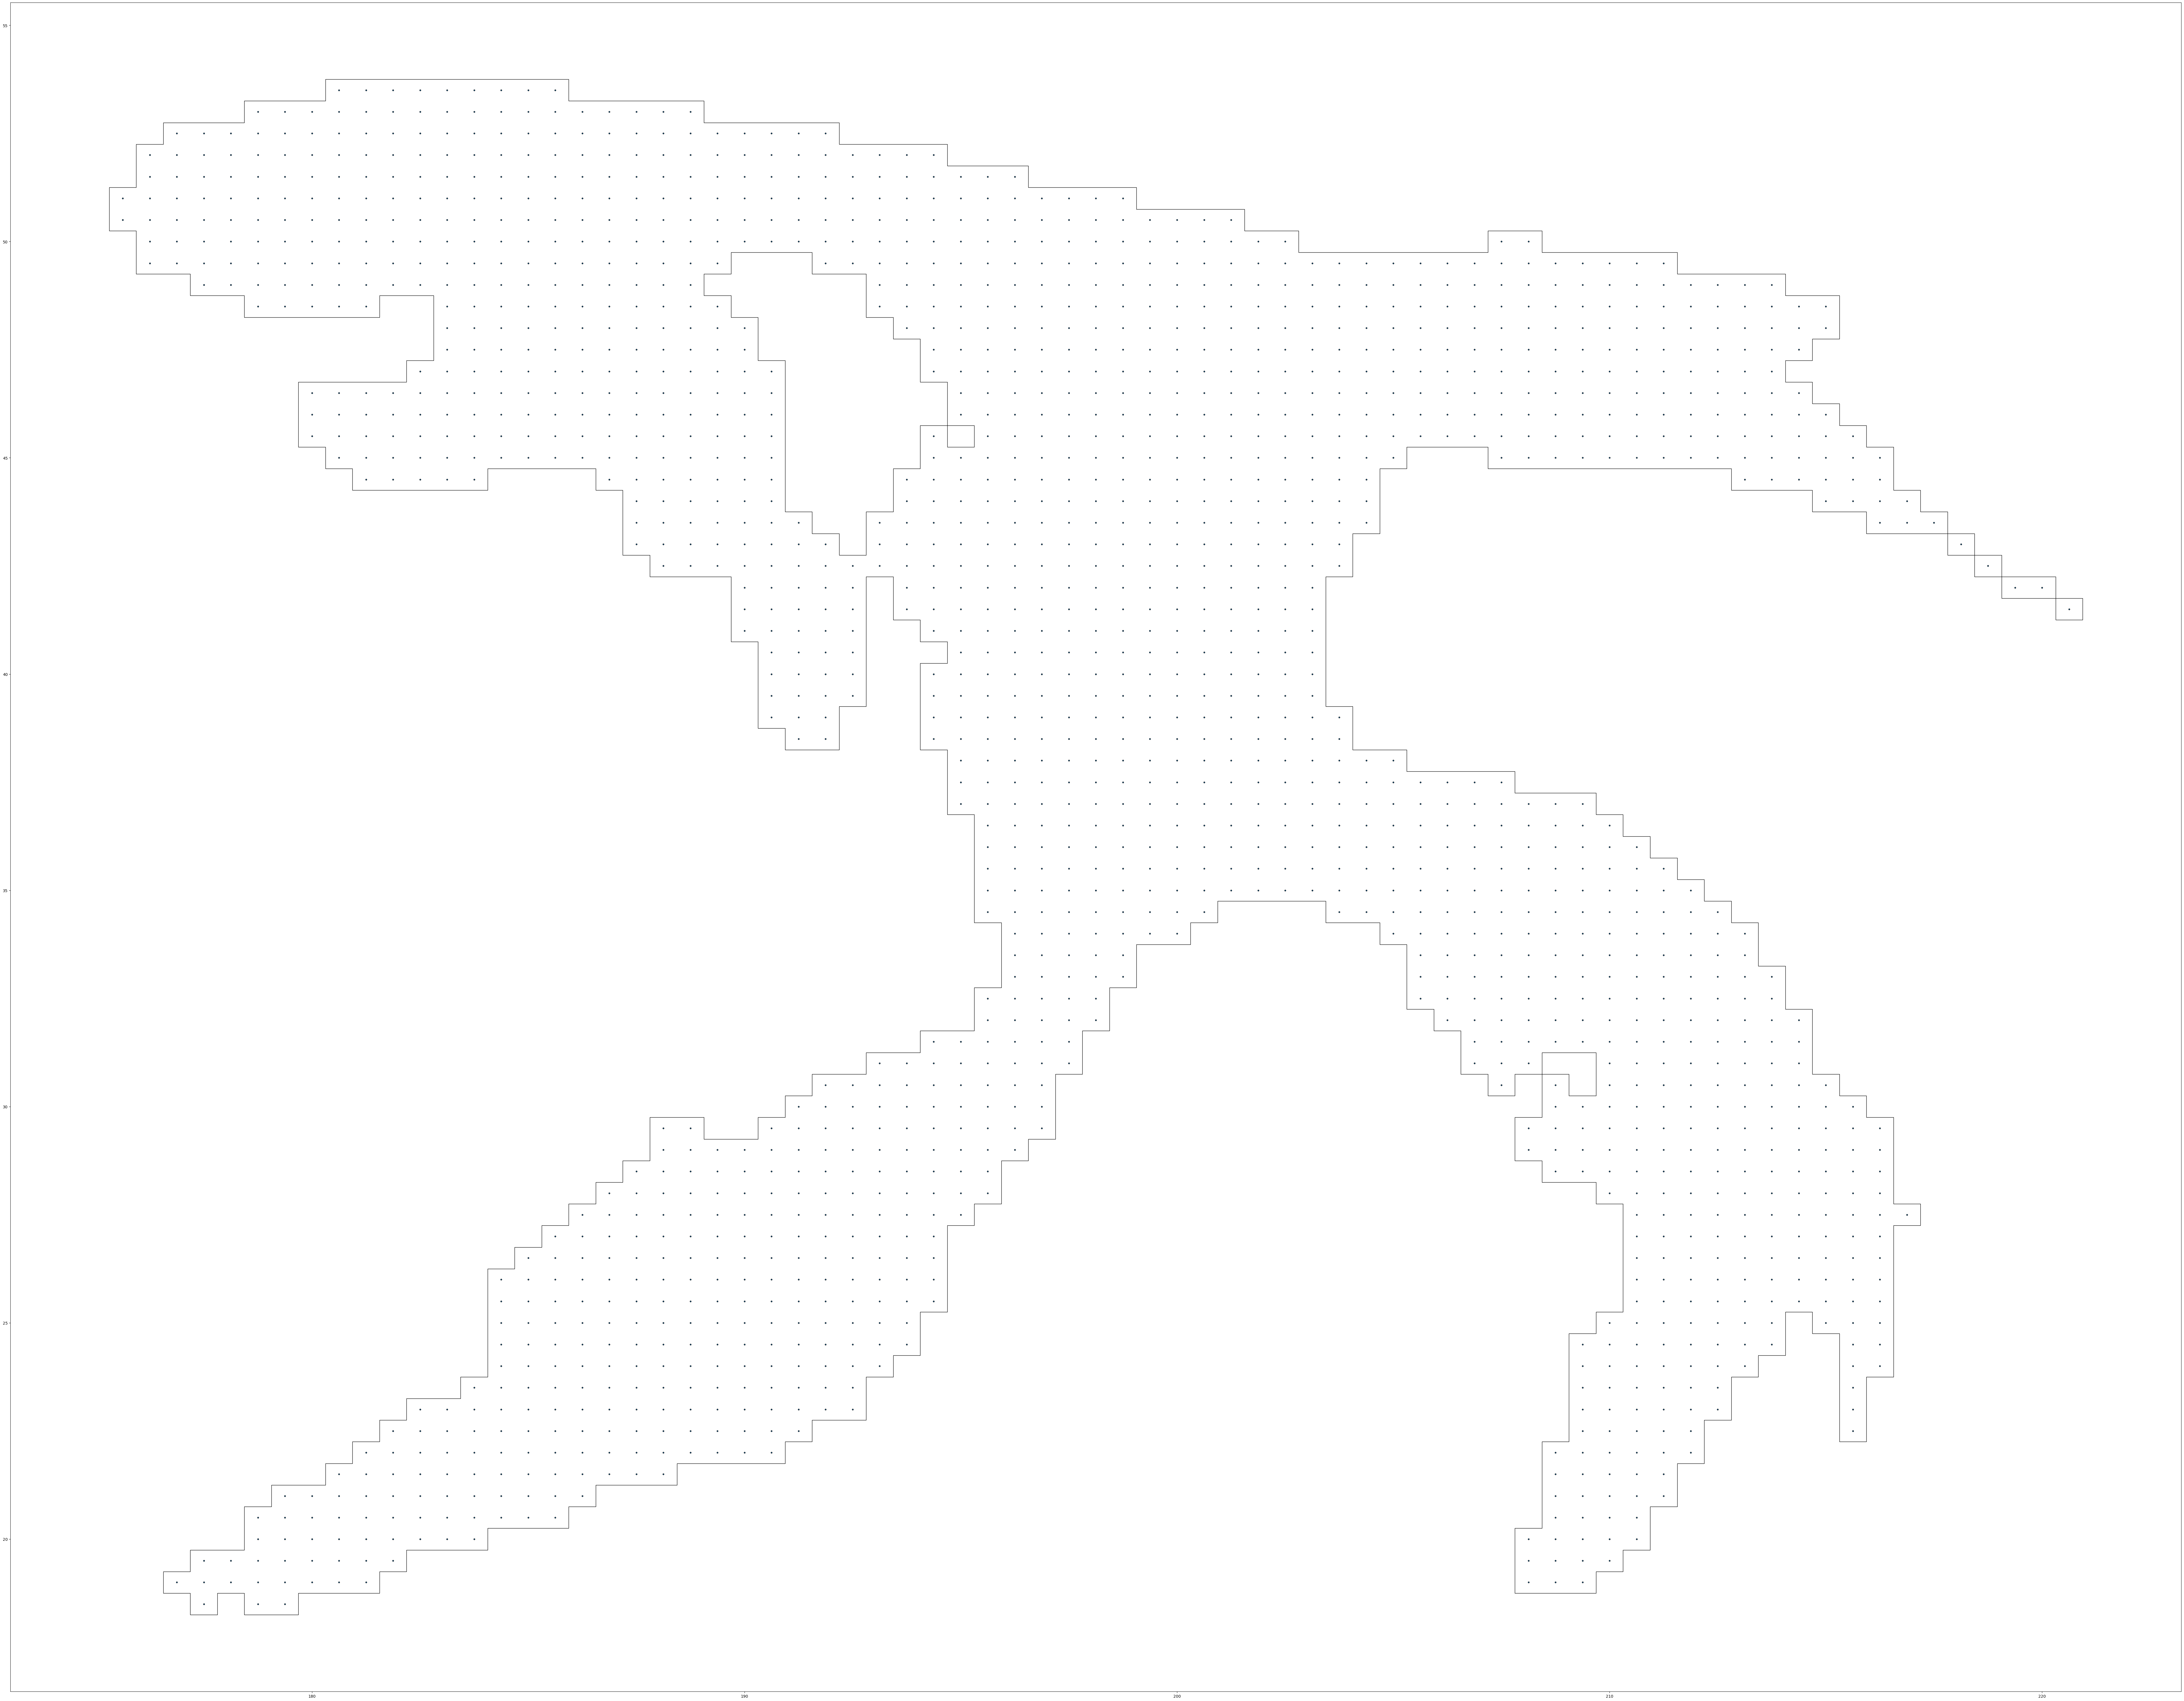

In [21]:
# no diagonal ocean connection below this line

AR = { "_id" : "2000.01.01.015.0_19", "timestamp" : ISODate("2000-01-01T15:00:00Z"), "raster" : [ [ 177.5, 18.5, [ 250.15028381347656 ] ], [ 178.75, 18.5, [ 250.6803436279297 ] ], [ 179.375, 18.5, [ 251.41879272460938 ] ], [ -180, 19, [ 293.031982421875 ] ], [ -179.375, 19, [ 283.8446350097656 ] ], [ -178.75, 19, [ 259.4346923828125 ] ], [ -151.875, 19, [ 261.60516357421875 ] ], [ -151.25, 19, [ 265.21051025390625 ] ], [ -150.625, 19, [ 254.53314208984375 ] ], [ 176.875, 19, [ 251.98753356933594 ] ], [ 177.5, 19, [ 270.9424133300781 ] ], [ 178.125, 19, [ 281.0899353027344 ] ], [ 178.75, 19, [ 282.9179992675781 ] ], [ 179.375, 19, [ 288.9736328125 ] ], [ -180, 19.5, [ 309.6210021972656 ] ], [ -179.375, 19.5, [ 312.8805847167969 ] ], [ -178.75, 19.5, [ 299.8413391113281 ] ], [ -178.125, 19.5, [ 272.87127685546875 ] ], [ -151.875, 19.5, [ 268.4871826171875 ] ], [ -151.25, 19.5, [ 284.867919921875 ] ], [ -150.625, 19.5, [ 275.13482666015625 ] ], [ -150, 19.5, [ 261.1654357910156 ] ], [ 177.5, 19.5, [ 255.70704650878906 ] ], [ 178.125, 19.5, [ 277.3118896484375 ] ], [ 178.75, 19.5, [ 291.1916198730469 ] ], [ 179.375, 19.5, [ 298.2720031738281 ] ], [ -180, 20, [ 292.1121520996094 ] ], [ -179.375, 20, [ 320.1253356933594 ] ], [ -178.75, 20, [ 332.5336608886719 ] ], [ -178.125, 20, [ 312.74737548828125 ] ], [ -177.5, 20, [ 289.1033935546875 ] ], [ -176.875, 20, [ 267.5296936035156 ] ], [ -176.25, 20, [ 252.19517517089844 ] ], [ -151.875, 20, [ 257.63775634765625 ] ], [ -151.25, 20, [ 304.2802429199219 ] ], [ -150.625, 20, [ 294.43377685546875 ] ], [ -150, 20, [ 278.0151672363281 ] ], [ -149.375, 20, [ 251.17967224121094 ] ], [ 178.75, 20, [ 273.806640625 ] ], [ 179.375, 20, [ 282.86474609375 ] ], [ -180, 20.5, [ 277.43865966796875 ] ], [ -179.375, 20.5, [ 300.8349914550781 ] ], [ -178.75, 20.5, [ 344.3849792480469 ] ], [ -178.125, 20.5, [ 350.3796691894531 ] ], [ -177.5, 20.5, [ 329.2403869628906 ] ], [ -176.875, 20.5, [ 312.26702880859375 ] ], [ -176.25, 20.5, [ 302.4385070800781 ] ], [ -175.625, 20.5, [ 293.2881164550781 ] ], [ -175, 20.5, [ 274.56378173828125 ] ], [ -174.375, 20.5, [ 253.1526336669922 ] ], [ -151.25, 20.5, [ 309.4879455566406 ] ], [ -150.625, 20.5, [ 308.6403503417969 ] ], [ -150, 20.5, [ 290.4222106933594 ] ], [ -149.375, 20.5, [ 267.7597961425781 ] ], [ 178.75, 20.5, [ 253.78143310546875 ] ], [ 179.375, 20.5, [ 271.57965087890625 ] ], [ -180, 21, [ 270.7773742675781 ] ], [ -179.375, 21, [ 278.8551940917969 ] ], [ -178.75, 21, [ 310.8793029785156 ] ], [ -178.125, 21, [ 345.50341796875 ] ], [ -177.5, 21, [ 355.94512939453125 ] ], [ -176.875, 21, [ 358.8572082519531 ] ], [ -176.25, 21, [ 357.9355773925781 ] ], [ -175.625, 21, [ 348.9620361328125 ] ], [ -175, 21, [ 332.2098388671875 ] ], [ -174.375, 21, [ 311.0210266113281 ] ], [ -173.75, 21, [ 278.37628173828125 ] ], [ -151.25, 21, [ 290.3883056640625 ] ], [ -150.625, 21, [ 310.69952392578125 ] ], [ -150, 21, [ 293.6820373535156 ] ], [ -149.375, 21, [ 278.55706787109375 ] ], [ -148.75, 21, [ 254.26625061035156 ] ], [ 179.375, 21, [ 256.39691162109375 ] ], [ -179.375, 21.5, [ 266.21844482421875 ] ], [ -178.75, 21.5, [ 283.1163024902344 ] ], [ -178.125, 21.5, [ 298.15478515625 ] ], [ -177.5, 21.5, [ 332.1150207519531 ] ], [ -176.875, 21.5, [ 378.30230712890625 ] ], [ -176.25, 21.5, [ 406.7985534667969 ] ], [ -175.625, 21.5, [ 410.7805480957031 ] ], [ -175, 21.5, [ 400.40704345703125 ] ], [ -174.375, 21.5, [ 382.7171936035156 ] ], [ -173.75, 21.5, [ 343.7261657714844 ] ], [ -173.125, 21.5, [ 303.060546875 ] ], [ -172.5, 21.5, [ 276.78948974609375 ] ], [ -171.875, 21.5, [ 260.70489501953125 ] ], [ -151.25, 21.5, [ 269.7460632324219 ] ], [ -150.625, 21.5, [ 307.4856262207031 ] ], [ -150, 21.5, [ 296.39447021484375 ] ], [ -149.375, 21.5, [ 281.1073913574219 ] ], [ -148.75, 21.5, [ 266.0135192871094 ] ], [ -178.75, 22, [ 270.6233825683594 ] ], [ -178.125, 22, [ 279.3133239746094 ] ], [ -177.5, 22, [ 296.2474060058594 ] ], [ -176.875, 22, [ 349.44488525390625 ] ], [ -176.25, 22, [ 420.8349914550781 ] ], [ -175.625, 22, [ 461.9465026855469 ] ], [ -175, 22, [ 468.23858642578125 ] ], [ -174.375, 22, [ 454.57305908203125 ] ], [ -173.75, 22, [ 416.02581787109375 ] ], [ -173.125, 22, [ 371.70501708984375 ] ], [ -172.5, 22, [ 334.6139831542969 ] ], [ -171.875, 22, [ 309.9179992675781 ] ], [ -171.25, 22, [ 287.4729309082031 ] ], [ -170.625, 22, [ 276.7305603027344 ] ], [ -170, 22, [ 271.1104431152344 ] ], [ -169.375, 22, [ 254.86068725585938 ] ], [ -151.25, 22, [ 255.5394287109375 ] ], [ -150.625, 22, [ 300.80194091796875 ] ], [ -150, 22, [ 301.8999328613281 ] ], [ -149.375, 22, [ 280.3087158203125 ] ], [ -148.75, 22, [ 277.5882873535156 ] ], [ -148.125, 22, [ 261.4954833984375 ] ], [ -178.125, 22.5, [ 262.5969543457031 ] ], [ -177.5, 22.5, [ 281.57171630859375 ] ], [ -176.875, 22.5, [ 314.53314208984375 ] ], [ -176.25, 22.5, [ 389.2616271972656 ] ], [ -175.625, 22.5, [ 474.61761474609375 ] ], [ -175, 22.5, [ 518.7314453125 ] ], [ -174.375, 22.5, [ 516.7386474609375 ] ], [ -173.75, 22.5, [ 482.739990234375 ] ], [ -173.125, 22.5, [ 444.7751770019531 ] ], [ -172.5, 22.5, [ 405.5906066894531 ] ], [ -171.875, 22.5, [ 367.4473876953125 ] ], [ -171.25, 22.5, [ 337.3552551269531 ] ], [ -170.625, 22.5, [ 325.2522888183594 ] ], [ -170, 22.5, [ 320.28271484375 ] ], [ -169.375, 22.5, [ 308.38482666015625 ] ], [ -168.75, 22.5, [ 282.72515869140625 ] ], [ -150.625, 22.5, [ 292.00970458984375 ] ], [ -150, 22.5, [ 309.8160705566406 ] ], [ -149.375, 22.5, [ 287.3738708496094 ] ], [ -148.75, 22.5, [ 287.63482666015625 ] ], [ -148.125, 22.5, [ 276.1490783691406 ] ], [ -144.375, 22.5, [ 268.61004638671875 ] ], [ -177.5, 23, [ 262.6371154785156 ] ], [ -176.875, 23, [ 280.339111328125 ] ], [ -176.25, 23, [ 318.6004333496094 ] ], [ -175.625, 23, [ 414.1837158203125 ] ], [ -175, 23, [ 512.3202514648438 ] ], [ -174.375, 23, [ 540.0431518554688 ] ], [ -173.75, 23, [ 512.2594604492188 ] ], [ -173.125, 23, [ 474.65869140625 ] ], [ -172.5, 23, [ 447.3084411621094 ] ], [ -171.875, 23, [ 420.4066467285156 ] ], [ -171.25, 23, [ 394.55413818359375 ] ], [ -170.625, 23, [ 376.4790344238281 ] ], [ -170, 23, [ 366.4235534667969 ] ], [ -169.375, 23, [ 356.7033996582031 ] ], [ -168.75, 23, [ 332.9944763183594 ] ], [ -168.125, 23, [ 299.21038818359375 ] ], [ -167.5, 23, [ 250.58575439453125 ] ], [ -150.625, 23, [ 280.9906921386719 ] ], [ -150, 23, [ 308.3890686035156 ] ], [ -149.375, 23, [ 299.1947937011719 ] ], [ -148.75, 23, [ 297.9587097167969 ] ], [ -148.125, 23, [ 292.7867736816406 ] ], [ -147.5, 23, [ 251.6766815185547 ] ], [ -144.375, 23, [ 277.43902587890625 ] ], [ -176.25, 23.5, [ 258.19586181640625 ] ], [ -175.625, 23.5, [ 312.3003234863281 ] ], [ -175, 23.5, [ 415.11651611328125 ] ], [ -174.375, 23.5, [ 479.31939697265625 ] ], [ -173.75, 23.5, [ 488.2897644042969 ] ], [ -173.125, 23.5, [ 458.0863037109375 ] ], [ -172.5, 23.5, [ 422.2972106933594 ] ], [ -171.875, 23.5, [ 411.6903076171875 ] ], [ -171.25, 23.5, [ 417.49151611328125 ] ], [ -170.625, 23.5, [ 413.9166259765625 ] ], [ -170, 23.5, [ 404.3842468261719 ] ], [ -169.375, 23.5, [ 394.8011474609375 ] ], [ -168.75, 23.5, [ 375.2220458984375 ] ], [ -168.125, 23.5, [ 344.1070251464844 ] ], [ -167.5, 23.5, [ 299.5015563964844 ] ], [ -150.625, 23.5, [ 271.9466247558594 ] ], [ -150, 23.5, [ 296.2286682128906 ] ], [ -149.375, 23.5, [ 307.8836975097656 ] ], [ -148.75, 23.5, [ 314.35906982421875 ] ], [ -148.125, 23.5, [ 315.3174133300781 ] ], [ -147.5, 23.5, [ 273.990966796875 ] ], [ -144.375, 23.5, [ 288.2809753417969 ] ], [ -175.625, 24, [ 269.68194580078125 ] ], [ -175, 24, [ 325.9351806640625 ] ], [ -174.375, 24, [ 374.0011291503906 ] ], [ -173.75, 24, [ 421.2396240234375 ] ], [ -173.125, 24, [ 428.399658203125 ] ], [ -172.5, 24, [ 397.1723937988281 ] ], [ -171.875, 24, [ 376.439453125 ] ], [ -171.25, 24, [ 391.41326904296875 ] ], [ -170.625, 24, [ 415.3750305175781 ] ], [ -170, 24, [ 423.6916198730469 ] ], [ -169.375, 24, [ 424.35577392578125 ] ], [ -168.75, 24, [ 413.6292419433594 ] ], [ -168.125, 24, [ 386.89593505859375 ] ], [ -167.5, 24, [ 345.3414611816406 ] ], [ -166.875, 24, [ 292.46539306640625 ] ], [ -150.625, 24, [ 265.3621826171875 ] ], [ -150, 24, [ 288.3321533203125 ] ], [ -149.375, 24, [ 306.6441650390625 ] ], [ -148.75, 24, [ 334.5928039550781 ] ], [ -148.125, 24, [ 343.26617431640625 ] ], [ -147.5, 24, [ 301.9056396484375 ] ], [ -146.875, 24, [ 264.3302917480469 ] ], [ -144.375, 24, [ 318.2694396972656 ] ], [ -143.75, 24, [ 262.8103332519531 ] ], [ -175.625, 24.5, [ 270.4185791015625 ] ], [ -175, 24.5, [ 303.8640441894531 ] ], [ -174.375, 24.5, [ 326.3589782714844 ] ], [ -173.75, 24.5, [ 366.1595153808594 ] ], [ -173.125, 24.5, [ 399.88214111328125 ] ], [ -172.5, 24.5, [ 393.4975280761719 ] ], [ -171.875, 24.5, [ 370.8951110839844 ] ], [ -171.25, 24.5, [ 365.0255126953125 ] ], [ -170.625, 24.5, [ 394.1219177246094 ] ], [ -170, 24.5, [ 428.6933898925781 ] ], [ -169.375, 24.5, [ 444.6378479003906 ] ], [ -168.75, 24.5, [ 441.805419921875 ] ], [ -168.125, 24.5, [ 419.22357177734375 ] ], [ -167.5, 24.5, [ 382.76629638671875 ] ], [ -166.875, 24.5, [ 330.4889221191406 ] ], [ -166.25, 24.5, [ 273.98907470703125 ] ], [ -150.625, 24.5, [ 250.74386596679688 ] ], [ -150, 24.5, [ 278.53863525390625 ] ], [ -149.375, 24.5, [ 299.82806396484375 ] ], [ -148.75, 24.5, [ 354.0762634277344 ] ], [ -148.125, 24.5, [ 381.5871276855469 ] ], [ -147.5, 24.5, [ 331.8304138183594 ] ], [ -146.875, 24.5, [ 288.92767333984375 ] ], [ -146.25, 24.5, [ 252.67184448242188 ] ], [ -144.375, 24.5, [ 328.86700439453125 ] ], [ -143.75, 24.5, [ 297.244873046875 ] ], [ -175.625, 25, [ 261.7740173339844 ] ], [ -175, 25, [ 288.5609436035156 ] ], [ -174.375, 25, [ 309.90740966796875 ] ], [ -173.75, 25, [ 348.5529479980469 ] ], [ -173.125, 25, [ 376.39068603515625 ] ], [ -172.5, 25, [ 391.1029968261719 ] ], [ -171.875, 25, [ 384.1158142089844 ] ], [ -171.25, 25, [ 368.9164733886719 ] ], [ -170.625, 25, [ 378.166015625 ] ], [ -170, 25, [ 419.7832336425781 ] ], [ -169.375, 25, [ 458.3156433105469 ] ], [ -168.75, 25, [ 462.923583984375 ] ], [ -168.125, 25, [ 443.00408935546875 ] ], [ -167.5, 25, [ 411.9670715332031 ] ], [ -166.875, 25, [ 361.7764587402344 ] ], [ -166.25, 25, [ 299.2002868652344 ] ], [ -150, 25, [ 261.6039733886719 ] ], [ -149.375, 25, [ 283.4462585449219 ] ], [ -148.75, 25, [ 354.20953369140625 ] ], [ -148.125, 25, [ 401.9805908203125 ] ], [ -147.5, 25, [ 355.7184143066406 ] ], [ -146.875, 25, [ 310.12841796875 ] ], [ -146.25, 25, [ 266.4176940917969 ] ], [ -145, 25, [ 271.63543701171875 ] ], [ -144.375, 25, [ 323.0977783203125 ] ], [ -143.75, 25, [ 314.5491943359375 ] ], [ -175.625, 25.5, [ 254.86907958984375 ] ], [ -175, 25.5, [ 273.6289978027344 ] ], [ -174.375, 25.5, [ 284.0345764160156 ] ], [ -173.75, 25.5, [ 311.53887939453125 ] ], [ -173.125, 25.5, [ 339.0031433105469 ] ], [ -172.5, 25.5, [ 365.1854248046875 ] ], [ -171.875, 25.5, [ 381.719970703125 ] ], [ -171.25, 25.5, [ 386.0516357421875 ] ], [ -170.625, 25.5, [ 385.8586120605469 ] ], [ -170, 25.5, [ 410.7217712402344 ] ], [ -169.375, 25.5, [ 459.60040283203125 ] ], [ -168.75, 25.5, [ 475.5343017578125 ] ], [ -168.125, 25.5, [ 461.49591064453125 ] ], [ -167.5, 25.5, [ 438.10565185546875 ] ], [ -166.875, 25.5, [ 392.96051025390625 ] ], [ -166.25, 25.5, [ 328.73126220703125 ] ], [ -165.625, 25.5, [ 263.3931579589844 ] ], [ -149.375, 25.5, [ 272.06829833984375 ] ], [ -148.75, 25.5, [ 344.2513732910156 ] ], [ -148.125, 25.5, [ 399.3551940917969 ] ], [ -147.5, 25.5, [ 365.87396240234375 ] ], [ -146.875, 25.5, [ 333.8699951171875 ] ], [ -146.25, 25.5, [ 266.28485107421875 ] ], [ -145.625, 25.5, [ 254.978759765625 ] ], [ -145, 25.5, [ 317.4354553222656 ] ], [ -144.375, 25.5, [ 303.0138854980469 ] ], [ -143.75, 25.5, [ 294.48626708984375 ] ], [ -175.625, 26, [ 251.90052795410156 ] ], [ -175, 26, [ 274.20135498046875 ] ], [ -174.375, 26, [ 280.2394104003906 ] ], [ -173.75, 26, [ 281.3600158691406 ] ], [ -173.125, 26, [ 296.13262939453125 ] ], [ -172.5, 26, [ 324.83868408203125 ] ], [ -171.875, 26, [ 354.6977233886719 ] ], [ -171.25, 26, [ 378.104736328125 ] ], [ -170.625, 26, [ 391.4190979003906 ] ], [ -170, 26, [ 405.0716857910156 ] ], [ -169.375, 26, [ 449.935791015625 ] ], [ -168.75, 26, [ 479.31201171875 ] ], [ -168.125, 26, [ 476.0684814453125 ] ], [ -167.5, 26, [ 460.165283203125 ] ], [ -166.875, 26, [ 420.7837829589844 ] ], [ -166.25, 26, [ 353.61260986328125 ] ], [ -165.625, 26, [ 279.61505126953125 ] ], [ -149.375, 26, [ 276.4453125 ] ], [ -148.75, 26, [ 350.39190673828125 ] ], [ -148.125, 26, [ 388.82781982421875 ] ], [ -147.5, 26, [ 368.07769775390625 ] ], [ -146.875, 26, [ 334.1956787109375 ] ], [ -146.25, 26, [ 266.7498779296875 ] ], [ -145.625, 26, [ 326.94451904296875 ] ], [ -145, 26, [ 344.2198181152344 ] ], [ -144.375, 26, [ 278.1050109863281 ] ], [ -143.75, 26, [ 272.0675354003906 ] ], [ -175, 26.5, [ 275.2425231933594 ] ], [ -174.375, 26.5, [ 293.4348449707031 ] ], [ -173.75, 26.5, [ 290.4642639160156 ] ], [ -173.125, 26.5, [ 284.0580749511719 ] ], [ -172.5, 26.5, [ 302.0638427734375 ] ], [ -171.875, 26.5, [ 329.57501220703125 ] ], [ -171.25, 26.5, [ 352.51666259765625 ] ], [ -170.625, 26.5, [ 372.51995849609375 ] ], [ -170, 26.5, [ 387.8228454589844 ] ], [ -169.375, 26.5, [ 427.71807861328125 ] ], [ -168.75, 26.5, [ 475.9443054199219 ] ], [ -168.125, 26.5, [ 487.37982177734375 ] ], [ -167.5, 26.5, [ 476.4139099121094 ] ], [ -166.875, 26.5, [ 441.5762023925781 ] ], [ -166.25, 26.5, [ 370.25238037109375 ] ], [ -165.625, 26.5, [ 292.7867126464844 ] ], [ -149.375, 26.5, [ 298.3304748535156 ] ], [ -148.75, 26.5, [ 364.8375244140625 ] ], [ -148.125, 26.5, [ 380.8713073730469 ] ], [ -147.5, 26.5, [ 349.46893310546875 ] ], [ -146.875, 26.5, [ 296.2416076660156 ] ], [ -146.25, 26.5, [ 293.1259460449219 ] ], [ -145.625, 26.5, [ 404.0242004394531 ] ], [ -145, 26.5, [ 351.5843505859375 ] ], [ -144.375, 26.5, [ 275.9670715332031 ] ], [ -143.75, 26.5, [ 273.2755126953125 ] ], [ -174.375, 27, [ 293.0661315917969 ] ], [ -173.75, 27, [ 309.96270751953125 ] ], [ -173.125, 27, [ 295.87225341796875 ] ], [ -172.5, 27, [ 293.34539794921875 ] ], [ -171.875, 27, [ 311.5469970703125 ] ], [ -171.25, 27, [ 333.50616455078125 ] ], [ -170.625, 27, [ 358.3367614746094 ] ], [ -170, 27, [ 373.57745361328125 ] ], [ -169.375, 27, [ 391.7484436035156 ] ], [ -168.75, 27, [ 446.31524658203125 ] ], [ -168.125, 27, [ 487.447509765625 ] ], [ -167.5, 27, [ 481.9969787597656 ] ], [ -166.875, 27, [ 448.3406677246094 ] ], [ -166.25, 27, [ 386.40655517578125 ] ], [ -165.625, 27, [ 312.0434265136719 ] ], [ -149.375, 27, [ 323.7165832519531 ] ], [ -148.75, 27, [ 368.5904541015625 ] ], [ -148.125, 27, [ 360.0682678222656 ] ], [ -147.5, 27, [ 314.36309814453125 ] ], [ -146.875, 27, [ 283.0621337890625 ] ], [ -146.25, 27, [ 353.5016784667969 ] ], [ -145.625, 27, [ 471.85565185546875 ] ], [ -145, 27, [ 354.8355712890625 ] ], [ -144.375, 27, [ 291.6346130371094 ] ], [ -143.75, 27, [ 285.1991882324219 ] ], [ -173.75, 27.5, [ 296.4679870605469 ] ], [ -173.125, 27.5, [ 306.33203125 ] ], [ -172.5, 27.5, [ 301.0307922363281 ] ], [ -171.875, 27.5, [ 305.2571716308594 ] ], [ -171.25, 27.5, [ 321.9672546386719 ] ], [ -170.625, 27.5, [ 353.34600830078125 ] ], [ -170, 27.5, [ 371.6166687011719 ] ], [ -169.375, 27.5, [ 373.5710754394531 ] ], [ -168.75, 27.5, [ 410.34527587890625 ] ], [ -168.125, 27.5, [ 463.765625 ] ], [ -167.5, 27.5, [ 480.2088623046875 ] ], [ -166.875, 27.5, [ 455.9573974609375 ] ], [ -166.25, 27.5, [ 406.4976806640625 ] ], [ -165.625, 27.5, [ 340.4210510253906 ] ], [ -165, 27.5, [ 275.731201171875 ] ], [ -149.375, 27.5, [ 326.9170837402344 ] ], [ -148.75, 27.5, [ 354.7621154785156 ] ], [ -148.125, 27.5, [ 340.0018310546875 ] ], [ -147.5, 27.5, [ 300.5780944824219 ] ], [ -146.875, 27.5, [ 293.15118408203125 ] ], [ -146.25, 27.5, [ 468.7065734863281 ] ], [ -145.625, 27.5, [ 502.027587890625 ] ], [ -145, 27.5, [ 352.4371032714844 ] ], [ -144.375, 27.5, [ 302.6554870605469 ] ], [ -143.75, 27.5, [ 294.85467529296875 ] ], [ -143.125, 27.5, [ 252.00286865234375 ] ], [ -173.125, 28, [ 289.0121765136719 ] ], [ -172.5, 28, [ 299.9753723144531 ] ], [ -171.875, 28, [ 303.59771728515625 ] ], [ -171.25, 28, [ 313.2183532714844 ] ], [ -170.625, 28, [ 343.8556213378906 ] ], [ -170, 28, [ 364.44085693359375 ] ], [ -169.375, 28, [ 369.1388854980469 ] ], [ -168.75, 28, [ 400.15765380859375 ] ], [ -168.125, 28, [ 439.7874450683594 ] ], [ -167.5, 28, [ 458.8252868652344 ] ], [ -166.875, 28, [ 460.1015319824219 ] ], [ -166.25, 28, [ 430.6519470214844 ] ], [ -165.625, 28, [ 383.691650390625 ] ], [ -165, 28, [ 327.5527038574219 ] ], [ -164.375, 28, [ 272.9190673828125 ] ], [ -150, 28, [ 263.1011962890625 ] ], [ -149.375, 28, [ 319.8927307128906 ] ], [ -148.75, 28, [ 346.98175048828125 ] ], [ -148.125, 28, [ 352.93023681640625 ] ], [ -147.5, 28, [ 323.8833923339844 ] ], [ -146.875, 28, [ 374.22381591796875 ] ], [ -146.25, 28, [ 551.7201538085938 ] ], [ -145.625, 28, [ 435.4632263183594 ] ], [ -145, 28, [ 344.38226318359375 ] ], [ -144.375, 28, [ 314.17364501953125 ] ], [ -143.75, 28, [ 302.86676025390625 ] ], [ -172.5, 28.5, [ 274.4641418457031 ] ], [ -171.875, 28.5, [ 289.90399169921875 ] ], [ -171.25, 28.5, [ 295.3079833984375 ] ], [ -170.625, 28.5, [ 318.2036437988281 ] ], [ -170, 28.5, [ 341.8882141113281 ] ], [ -169.375, 28.5, [ 354.05059814453125 ] ], [ -168.75, 28.5, [ 389.5956115722656 ] ], [ -168.125, 28.5, [ 425.7552185058594 ] ], [ -167.5, 28.5, [ 433.887939453125 ] ], [ -166.875, 28.5, [ 452.7484436035156 ] ], [ -166.25, 28.5, [ 456.6013488769531 ] ], [ -165.625, 28.5, [ 436.60223388671875 ] ], [ -165, 28.5, [ 381.31494140625 ] ], [ -164.375, 28.5, [ 310.4669189453125 ] ], [ -151.25, 28.5, [ 257.94696044921875 ] ], [ -150.625, 28.5, [ 261.0885009765625 ] ], [ -150, 28.5, [ 284.0252990722656 ] ], [ -149.375, 28.5, [ 314.7982177734375 ] ], [ -148.75, 28.5, [ 349.9667053222656 ] ], [ -148.125, 28.5, [ 394.3165283203125 ] ], [ -147.5, 28.5, [ 384.14007568359375 ] ], [ -146.875, 28.5, [ 471.19781494140625 ] ], [ -146.25, 28.5, [ 499.61785888671875 ] ], [ -145.625, 28.5, [ 384.7399597167969 ] ], [ -145, 28.5, [ 346.0556335449219 ] ], [ -144.375, 28.5, [ 341.5255432128906 ] ], [ -143.75, 28.5, [ 304.0948181152344 ] ], [ -171.875, 29, [ 277.59820556640625 ] ], [ -171.25, 29, [ 278.5743713378906 ] ], [ -170.625, 29, [ 273.587646484375 ] ], [ -170, 29, [ 292.2330627441406 ] ], [ -169.375, 29, [ 317.89202880859375 ] ], [ -168.75, 29, [ 362.2225341796875 ] ], [ -168.125, 29, [ 395.46966552734375 ] ], [ -167.5, 29, [ 411.3296203613281 ] ], [ -166.875, 29, [ 436.3596496582031 ] ], [ -166.25, 29, [ 469.8769836425781 ] ], [ -165.625, 29, [ 476.0150451660156 ] ], [ -165, 29, [ 425.57366943359375 ] ], [ -164.375, 29, [ 350.5703430175781 ] ], [ -163.75, 29, [ 281.9258117675781 ] ], [ -151.875, 29, [ 258.8472900390625 ] ], [ -151.25, 29, [ 279.77423095703125 ] ], [ -150.625, 29, [ 284.43865966796875 ] ], [ -150, 29, [ 300.4429016113281 ] ], [ -149.375, 29, [ 311.9783020019531 ] ], [ -148.75, 29, [ 345.26763916015625 ] ], [ -148.125, 29, [ 428.1009826660156 ] ], [ -147.5, 29, [ 437.6731872558594 ] ], [ -146.875, 29, [ 492.7386169433594 ] ], [ -146.25, 29, [ 443.3116455078125 ] ], [ -145.625, 29, [ 391.57147216796875 ] ], [ -145, 29, [ 353.4749450683594 ] ], [ -144.375, 29, [ 357.5648498535156 ] ], [ -143.75, 29, [ 286.5190734863281 ] ], [ -171.875, 29.5, [ 250.87498474121094 ] ], [ -171.25, 29.5, [ 269.8409118652344 ] ], [ -169.375, 29.5, [ 266.0363464355469 ] ], [ -168.75, 29.5, [ 320.0070495605469 ] ], [ -168.125, 29.5, [ 358.370361328125 ] ], [ -167.5, 29.5, [ 377.2230224609375 ] ], [ -166.875, 29.5, [ 399.4769287109375 ] ], [ -166.25, 29.5, [ 450.48577880859375 ] ], [ -165.625, 29.5, [ 480.93072509765625 ] ], [ -165, 29.5, [ 450.0263977050781 ] ], [ -164.375, 29.5, [ 389.3800964355469 ] ], [ -163.75, 29.5, [ 321.00701904296875 ] ], [ -163.125, 29.5, [ 261.9559326171875 ] ], [ -151.875, 29.5, [ 266.69989013671875 ] ], [ -151.25, 29.5, [ 266.0386657714844 ] ], [ -150.625, 29.5, [ 294.5181579589844 ] ], [ -150, 29.5, [ 297.47015380859375 ] ], [ -149.375, 29.5, [ 299.7999572753906 ] ], [ -148.75, 29.5, [ 328.6976318359375 ] ], [ -148.125, 29.5, [ 420.9255676269531 ] ], [ -147.5, 29.5, [ 458.8916931152344 ] ], [ -146.875, 29.5, [ 494.1732482910156 ] ], [ -146.25, 29.5, [ 463.1905517578125 ] ], [ -145.625, 29.5, [ 399.31109619140625 ] ], [ -145, 29.5, [ 347.2944030761719 ] ], [ -144.375, 29.5, [ 327.5343017578125 ] ], [ -143.75, 29.5, [ 255.98410034179688 ] ], [ -168.75, 30, [ 270.0000305175781 ] ], [ -168.125, 30, [ 314.88885498046875 ] ], [ -167.5, 30, [ 336.640380859375 ] ], [ -166.875, 30, [ 351.11602783203125 ] ], [ -166.25, 30, [ 402.20916748046875 ] ], [ -165.625, 30, [ 450.20819091796875 ] ], [ -165, 30, [ 453.4372863769531 ] ], [ -164.375, 30, [ 417.15313720703125 ] ], [ -163.75, 30, [ 359.3575744628906 ] ], [ -163.125, 30, [ 291.7281188964844 ] ], [ -151.25, 30, [ 268.5093688964844 ] ], [ -150.625, 30, [ 282.21380615234375 ] ], [ -150, 30, [ 282.9237976074219 ] ], [ -149.375, 30, [ 290.6734313964844 ] ], [ -148.75, 30, [ 323.32330322265625 ] ], [ -148.125, 30, [ 399.89447021484375 ] ], [ -147.5, 30, [ 497.9112548828125 ] ], [ -146.875, 30, [ 526.42236328125 ] ], [ -146.25, 30, [ 487.6964416503906 ] ], [ -145.625, 30, [ 401.944580078125 ] ], [ -145, 30, [ 318.4321594238281 ] ], [ -144.375, 30, [ 269.50262451171875 ] ], [ -168.125, 30.5, [ 255.64674377441406 ] ], [ -167.5, 30.5, [ 285.9106750488281 ] ], [ -166.875, 30.5, [ 304.9469299316406 ] ], [ -166.25, 30.5, [ 344.8244934082031 ] ], [ -165.625, 30.5, [ 405.2745361328125 ] ], [ -165, 30.5, [ 443.74884033203125 ] ], [ -164.375, 30.5, [ 430.6938781738281 ] ], [ -163.75, 30.5, [ 385.2855224609375 ] ], [ -163.125, 30.5, [ 313.019775390625 ] ], [ -152.5, 30.5, [ 256.2571716308594 ] ], [ -151.25, 30.5, [ 261.3083190917969 ] ], [ -150, 30.5, [ 276.2820739746094 ] ], [ -149.375, 30.5, [ 308.33697509765625 ] ], [ -148.75, 30.5, [ 354.1143493652344 ] ], [ -148.125, 30.5, [ 440.2599182128906 ] ], [ -147.5, 30.5, [ 586.9462890625 ] ], [ -146.875, 30.5, [ 569.3985595703125 ] ], [ -146.25, 30.5, [ 478.9588317871094 ] ], [ -145.625, 30.5, [ 379.62225341796875 ] ], [ -145, 30.5, [ 278.9445495605469 ] ], [ -166.875, 31, [ 252.5677490234375 ] ], [ -166.25, 31, [ 287.3727722167969 ] ], [ -165.625, 31, [ 349.16302490234375 ] ], [ -165, 31, [ 412.7909851074219 ] ], [ -164.375, 31, [ 419.99267578125 ] ], [ -163.75, 31, [ 390.1648254394531 ] ], [ -163.125, 31, [ 332.1885681152344 ] ], [ -162.5, 31, [ 267.721435546875 ] ], [ -153.125, 31, [ 264.79541015625 ] ], [ -152.5, 31, [ 267.7188720703125 ] ], [ -151.875, 31, [ 257.20281982421875 ] ], [ -150, 31, [ 315.55859375 ] ], [ -149.375, 31, [ 379.34014892578125 ] ], [ -148.75, 31, [ 445.5709228515625 ] ], [ -148.125, 31, [ 589.1531372070312 ] ], [ -147.5, 31, [ 678.37451171875 ] ], [ -146.875, 31, [ 560.1974487304688 ] ], [ -146.25, 31, [ 433.54925537109375 ] ], [ -145.625, 31, [ 319.8974304199219 ] ], [ -165.625, 31.5, [ 268.4134826660156 ] ], [ -165, 31.5, [ 339.2330627441406 ] ], [ -164.375, 31.5, [ 373.91522216796875 ] ], [ -163.75, 31.5, [ 378.2344970703125 ] ], [ -163.125, 31.5, [ 352.3831481933594 ] ], [ -162.5, 31.5, [ 302.5885314941406 ] ], [ -153.125, 31.5, [ 286.7328796386719 ] ], [ -152.5, 31.5, [ 285.7990417480469 ] ], [ -151.875, 31.5, [ 271.2881774902344 ] ], [ -151.25, 31.5, [ 258.4564514160156 ] ], [ -150.625, 31.5, [ 347.73638916015625 ] ], [ -150, 31.5, [ 445.4236145019531 ] ], [ -149.375, 31.5, [ 519.5430908203125 ] ], [ -148.75, 31.5, [ 644.4158935546875 ] ], [ -148.125, 31.5, [ 712.9085693359375 ] ], [ -147.5, 31.5, [ 652.16796875 ] ], [ -146.875, 31.5, [ 490.2516174316406 ] ], [ -146.25, 31.5, [ 375.70404052734375 ] ], [ -145.625, 31.5, [ 281.5643310546875 ] ], [ -164.375, 32, [ 317.0782470703125 ] ], [ -163.75, 32, [ 361.26226806640625 ] ], [ -163.125, 32, [ 368.9408874511719 ] ], [ -162.5, 32, [ 336.28387451171875 ] ], [ -161.875, 32, [ 253.20851135253906 ] ], [ -153.75, 32, [ 296.20745849609375 ] ], [ -153.125, 32, [ 319.45458984375 ] ], [ -152.5, 32, [ 321.4644470214844 ] ], [ -151.875, 32, [ 329.9294128417969 ] ], [ -151.25, 32, [ 406.90594482421875 ] ], [ -150.625, 32, [ 564.3911743164062 ] ], [ -150, 32, [ 612.6433715820312 ] ], [ -149.375, 32, [ 645.3358154296875 ] ], [ -148.75, 32, [ 704.840576171875 ] ], [ -148.125, 32, [ 657.2460327148438 ] ], [ -147.5, 32, [ 546.9686279296875 ] ], [ -146.875, 32, [ 423.8535461425781 ] ], [ -146.25, 32, [ 334.25408935546875 ] ], [ -145.625, 32, [ 262.607666015625 ] ], [ -164.375, 32.5, [ 274.88323974609375 ] ], [ -163.75, 32.5, [ 343.82183837890625 ] ], [ -163.125, 32.5, [ 375.35809326171875 ] ], [ -162.5, 32.5, [ 365.6055603027344 ] ], [ -161.875, 32.5, [ 280.59161376953125 ] ], [ -154.375, 32.5, [ 254.5977325439453 ] ], [ -153.75, 32.5, [ 340.4662780761719 ] ], [ -153.125, 32.5, [ 356.7987060546875 ] ], [ -152.5, 32.5, [ 366.37548828125 ] ], [ -151.875, 32.5, [ 394.9576721191406 ] ], [ -151.25, 32.5, [ 493.0010070800781 ] ], [ -150.625, 32.5, [ 599.3217163085938 ] ], [ -150, 32.5, [ 598.0471801757812 ] ], [ -149.375, 32.5, [ 601.8291625976562 ] ], [ -148.75, 32.5, [ 589.91650390625 ] ], [ -148.125, 32.5, [ 543.9746704101562 ] ], [ -147.5, 32.5, [ 463.4004821777344 ] ], [ -146.875, 32.5, [ 375.5939636230469 ] ], [ -146.25, 32.5, [ 300.2862243652344 ] ], [ -163.75, 33, [ 328.0369873046875 ] ], [ -163.125, 33, [ 381.23284912109375 ] ], [ -162.5, 33, [ 392.45074462890625 ] ], [ -161.875, 33, [ 307.8409118652344 ] ], [ -161.25, 33, [ 252.79583740234375 ] ], [ -154.375, 33, [ 286.1598205566406 ] ], [ -153.75, 33, [ 364.7771911621094 ] ], [ -153.125, 33, [ 389.0302734375 ] ], [ -152.5, 33, [ 390.1636657714844 ] ], [ -151.875, 33, [ 405.4507141113281 ] ], [ -151.25, 33, [ 450.4045715332031 ] ], [ -150.625, 33, [ 492.2241516113281 ] ], [ -150, 33, [ 524.4154663085938 ] ], [ -149.375, 33, [ 521.4095458984375 ] ], [ -148.75, 33, [ 525.280517578125 ] ], [ -148.125, 33, [ 480.04046630859375 ] ], [ -147.5, 33, [ 399.3570251464844 ] ], [ -146.875, 33, [ 335.1676025390625 ] ], [ -146.25, 33, [ 272.5220947265625 ] ], [ -163.75, 33.5, [ 310.8291931152344 ] ], [ -163.125, 33.5, [ 385.95574951171875 ] ], [ -162.5, 33.5, [ 416.07568359375 ] ], [ -161.875, 33.5, [ 337.1456604003906 ] ], [ -161.25, 33.5, [ 283.133056640625 ] ], [ -154.375, 33.5, [ 307.3590393066406 ] ], [ -153.75, 33.5, [ 381.4792785644531 ] ], [ -153.125, 33.5, [ 419.6358947753906 ] ], [ -152.5, 33.5, [ 417.1034851074219 ] ], [ -151.875, 33.5, [ 405.77178955078125 ] ], [ -151.25, 33.5, [ 421.7452087402344 ] ], [ -150.625, 33.5, [ 462.77325439453125 ] ], [ -150, 33.5, [ 506.37933349609375 ] ], [ -149.375, 33.5, [ 508.7347717285156 ] ], [ -148.75, 33.5, [ 491.0170593261719 ] ], [ -148.125, 33.5, [ 420.6967468261719 ] ], [ -147.5, 33.5, [ 358.0566711425781 ] ], [ -146.875, 33.5, [ 304.3324890136719 ] ], [ -163.75, 34, [ 308.7997741699219 ] ], [ -163.125, 34, [ 392.797119140625 ] ], [ -162.5, 34, [ 437.2950439453125 ] ], [ -161.875, 34, [ 370.5201110839844 ] ], [ -161.25, 34, [ 313.6670227050781 ] ], [ -160.625, 34, [ 282.3954162597656 ] ], [ -160, 34, [ 276.9757385253906 ] ], [ -155, 34, [ 268.80303955078125 ] ], [ -154.375, 34, [ 335.78759765625 ] ], [ -153.75, 34, [ 406.7265319824219 ] ], [ -153.125, 34, [ 453.5411376953125 ] ], [ -152.5, 34, [ 457.9942626953125 ] ], [ -151.875, 34, [ 438.6647033691406 ] ], [ -151.25, 34, [ 437.1188659667969 ] ], [ -150.625, 34, [ 466.10540771484375 ] ], [ -150, 34, [ 484.23760986328125 ] ], [ -149.375, 34, [ 468.31182861328125 ] ], [ -148.75, 34, [ 423.16790771484375 ] ], [ -148.125, 34, [ 366.6933288574219 ] ], [ -147.5, 34, [ 319.08624267578125 ] ], [ -146.875, 34, [ 250.5070037841797 ] ], [ -164.375, 34.5, [ 304.0082092285156 ] ], [ -163.75, 34.5, [ 360.5553283691406 ] ], [ -163.125, 34.5, [ 420.4644470214844 ] ], [ -162.5, 34.5, [ 463.7144775390625 ] ], [ -161.875, 34.5, [ 414.3451232910156 ] ], [ -161.25, 34.5, [ 346.9630126953125 ] ], [ -160.625, 34.5, [ 323.54461669921875 ] ], [ -160, 34.5, [ 315.6670227050781 ] ], [ -159.375, 34.5, [ 272.6698913574219 ] ], [ -156.25, 34.5, [ 254.61807250976562 ] ], [ -155.625, 34.5, [ 266.1461486816406 ] ], [ -155, 34.5, [ 307.2281494140625 ] ], [ -154.375, 34.5, [ 387.516845703125 ] ], [ -153.75, 34.5, [ 446.6313781738281 ] ], [ -153.125, 34.5, [ 476.0054016113281 ] ], [ -152.5, 34.5, [ 477.9339904785156 ] ], [ -151.875, 34.5, [ 454.1175842285156 ] ], [ -151.25, 34.5, [ 449.0022277832031 ] ], [ -150.625, 34.5, [ 449.4128723144531 ] ], [ -150, 34.5, [ 439.95794677734375 ] ], [ -149.375, 34.5, [ 416.794189453125 ] ], [ -148.75, 34.5, [ 370.30657958984375 ] ], [ -148.125, 34.5, [ 321.2907409667969 ] ], [ -147.5, 34.5, [ 260.2572326660156 ] ], [ -164.375, 35, [ 379.9918212890625 ] ], [ -163.75, 35, [ 453.4381103515625 ] ], [ -163.125, 35, [ 468.1622619628906 ] ], [ -162.5, 35, [ 507.2004699707031 ] ], [ -161.875, 35, [ 465.78717041015625 ] ], [ -161.25, 35, [ 384.54046630859375 ] ], [ -160.625, 35, [ 369.68524169921875 ] ], [ -160, 35, [ 355.9662780761719 ] ], [ -159.375, 35, [ 312.4007263183594 ] ], [ -158.75, 35, [ 285.41021728515625 ] ], [ -158.125, 35, [ 261.58935546875 ] ], [ -157.5, 35, [ 265.3471374511719 ] ], [ -156.875, 35, [ 278.8177490234375 ] ], [ -156.25, 35, [ 286.66900634765625 ] ], [ -155.625, 35, [ 296.2032470703125 ] ], [ -155, 35, [ 345.4227600097656 ] ], [ -154.375, 35, [ 427.6108093261719 ] ], [ -153.75, 35, [ 478.6982116699219 ] ], [ -153.125, 35, [ 487.4312438964844 ] ], [ -152.5, 35, [ 471.4397888183594 ] ], [ -151.875, 35, [ 442.9759521484375 ] ], [ -151.25, 35, [ 430.74908447265625 ] ], [ -150.625, 35, [ 424.9040832519531 ] ], [ -150, 35, [ 411.746826171875 ] ], [ -149.375, 35, [ 377.44293212890625 ] ], [ -148.75, 35, [ 323.7606201171875 ] ], [ -148.125, 35, [ 264.4410095214844 ] ], [ -164.375, 35.5, [ 477.77032470703125 ] ], [ -163.75, 35.5, [ 609.9427490234375 ] ], [ -163.125, 35.5, [ 550.5653686523438 ] ], [ -162.5, 35.5, [ 574.8544311523438 ] ], [ -161.875, 35.5, [ 503.6057434082031 ] ], [ -161.25, 35.5, [ 422.6819152832031 ] ], [ -160.625, 35.5, [ 415.8992614746094 ] ], [ -160, 35.5, [ 389.64202880859375 ] ], [ -159.375, 35.5, [ 351.2566833496094 ] ], [ -158.75, 35.5, [ 325.9115295410156 ] ], [ -158.125, 35.5, [ 299.1595458984375 ] ], [ -157.5, 35.5, [ 301.6393127441406 ] ], [ -156.875, 35.5, [ 307.7446594238281 ] ], [ -156.25, 35.5, [ 309.26806640625 ] ], [ -155.625, 35.5, [ 324.52142333984375 ] ], [ -155, 35.5, [ 364.04669189453125 ] ], [ -154.375, 35.5, [ 430.5449523925781 ] ], [ -153.75, 35.5, [ 476.3297424316406 ] ], [ -153.125, 35.5, [ 484.4908142089844 ] ], [ -152.5, 35.5, [ 458.88873291015625 ] ], [ -151.875, 35.5, [ 425.1852111816406 ] ], [ -151.25, 35.5, [ 403.9541015625 ] ], [ -150.625, 35.5, [ 386.3441467285156 ] ], [ -150, 35.5, [ 366.2971496582031 ] ], [ -149.375, 35.5, [ 324.68170166015625 ] ], [ -148.75, 35.5, [ 264.1338195800781 ] ], [ -164.375, 36, [ 546.03662109375 ] ], [ -163.75, 36, [ 731.6962280273438 ] ], [ -163.125, 36, [ 669.9241943359375 ] ], [ -162.5, 36, [ 624.7879638671875 ] ], [ -161.875, 36, [ 520.8612060546875 ] ], [ -161.25, 36, [ 461.0976257324219 ] ], [ -160.625, 36, [ 457.0389404296875 ] ], [ -160, 36, [ 418.3434143066406 ] ], [ -159.375, 36, [ 387.4341735839844 ] ], [ -158.75, 36, [ 362.62640380859375 ] ], [ -158.125, 36, [ 336.6695861816406 ] ], [ -157.5, 36, [ 333.1319885253906 ] ], [ -156.875, 36, [ 329.5060119628906 ] ], [ -156.25, 36, [ 327.2147521972656 ] ], [ -155.625, 36, [ 342.88629150390625 ] ], [ -155, 36, [ 366.8595886230469 ] ], [ -154.375, 36, [ 403.9397277832031 ] ], [ -153.75, 36, [ 435.8531799316406 ] ], [ -153.125, 36, [ 441.7993469238281 ] ], [ -152.5, 36, [ 419.3863830566406 ] ], [ -151.875, 36, [ 397.2130432128906 ] ], [ -151.25, 36, [ 378.94720458984375 ] ], [ -150.625, 36, [ 350.3265075683594 ] ], [ -150, 36, [ 319.4609375 ] ], [ -149.375, 36, [ 273.6798095703125 ] ], [ -164.375, 36.5, [ 443.44244384765625 ] ], [ -163.75, 36.5, [ 637.4069213867188 ] ], [ -163.125, 36.5, [ 681.85595703125 ] ], [ -162.5, 36.5, [ 622.0922241210938 ] ], [ -161.875, 36.5, [ 532.6250610351562 ] ], [ -161.25, 36.5, [ 498.198486328125 ] ], [ -160.625, 36.5, [ 488.0335693359375 ] ], [ -160, 36.5, [ 447.0804138183594 ] ], [ -159.375, 36.5, [ 421.3310852050781 ] ], [ -158.75, 36.5, [ 396.0338134765625 ] ], [ -158.125, 36.5, [ 369.94232177734375 ] ], [ -157.5, 36.5, [ 359.0122985839844 ] ], [ -156.875, 36.5, [ 345.58197021484375 ] ], [ -156.25, 36.5, [ 336.39453125 ] ], [ -155.625, 36.5, [ 340.6070556640625 ] ], [ -155, 36.5, [ 357.3087463378906 ] ], [ -154.375, 36.5, [ 376.9039306640625 ] ], [ -153.75, 36.5, [ 387.3310241699219 ] ], [ -153.125, 36.5, [ 385.9420471191406 ] ], [ -152.5, 36.5, [ 372.61572265625 ] ], [ -151.875, 36.5, [ 357.30078125 ] ], [ -151.25, 36.5, [ 343.4140625 ] ], [ -150.625, 36.5, [ 311.7010192871094 ] ], [ -150, 36.5, [ 275.46368408203125 ] ], [ -165, 37, [ 269.6441955566406 ] ], [ -164.375, 37, [ 350.3851318359375 ] ], [ -163.75, 37, [ 463.0090026855469 ] ], [ -163.125, 37, [ 573.8115234375 ] ], [ -162.5, 37, [ 592.5377197265625 ] ], [ -161.875, 37, [ 545.9276123046875 ] ], [ -161.25, 37, [ 521.0048828125 ] ], [ -160.625, 37, [ 510.236572265625 ] ], [ -160, 37, [ 474.7976989746094 ] ], [ -159.375, 37, [ 452.5060729980469 ] ], [ -158.75, 37, [ 424.7699279785156 ] ], [ -158.125, 37, [ 397.0555725097656 ] ], [ -157.5, 37, [ 375.9078063964844 ] ], [ -156.875, 37, [ 353.08721923828125 ] ], [ -156.25, 37, [ 335.5758361816406 ] ], [ -155.625, 37, [ 325.96929931640625 ] ], [ -155, 37, [ 334.35101318359375 ] ], [ -154.375, 37, [ 347.4947814941406 ] ], [ -153.75, 37, [ 351.010986328125 ] ], [ -153.125, 37, [ 342.3091735839844 ] ], [ -152.5, 37, [ 326.5409851074219 ] ], [ -151.875, 37, [ 302.9800720214844 ] ], [ -151.25, 37, [ 280.3968505859375 ] ], [ -150.625, 37, [ 250.65264892578125 ] ], [ -165, 37.5, [ 316.7688293457031 ] ], [ -164.375, 37.5, [ 351.8179016113281 ] ], [ -163.75, 37.5, [ 390.2170715332031 ] ], [ -163.125, 37.5, [ 490.0658264160156 ] ], [ -162.5, 37.5, [ 552.3746337890625 ] ], [ -161.875, 37.5, [ 546.470458984375 ] ], [ -161.25, 37.5, [ 537.217041015625 ] ], [ -160.625, 37.5, [ 526.9866943359375 ] ], [ -160, 37.5, [ 503.2464904785156 ] ], [ -159.375, 37.5, [ 480.1729431152344 ] ], [ -158.75, 37.5, [ 449.5253601074219 ] ], [ -158.125, 37.5, [ 416.6719055175781 ] ], [ -157.5, 37.5, [ 383.6067199707031 ] ], [ -156.875, 37.5, [ 353.8478088378906 ] ], [ -156.25, 37.5, [ 328.9582824707031 ] ], [ -155.625, 37.5, [ 304.35504150390625 ] ], [ -155, 37.5, [ 297.34466552734375 ] ], [ -154.375, 37.5, [ 299.01287841796875 ] ], [ -153.75, 37.5, [ 297.20965576171875 ] ], [ -153.125, 37.5, [ 288.8251647949219 ] ], [ -152.5, 37.5, [ 270.804443359375 ] ], [ -165, 38, [ 344.0665588378906 ] ], [ -164.375, 38, [ 363.799560546875 ] ], [ -163.75, 38, [ 386.5090026855469 ] ], [ -163.125, 38, [ 448.4114074707031 ] ], [ -162.5, 38, [ 511.9845275878906 ] ], [ -161.875, 38, [ 548.69384765625 ] ], [ -161.25, 38, [ 551.8004150390625 ] ], [ -160.625, 38, [ 546.3921508789062 ] ], [ -160, 38, [ 529.5911865234375 ] ], [ -159.375, 38, [ 502.8932189941406 ] ], [ -158.75, 38, [ 468.0515441894531 ] ], [ -158.125, 38, [ 431.33099365234375 ] ], [ -157.5, 38, [ 388.4117431640625 ] ], [ -156.875, 38, [ 352.1723937988281 ] ], [ -156.25, 38, [ 314.724609375 ] ], [ -155.625, 38, [ 276.7052001953125 ] ], [ -155, 38, [ 257.9452819824219 ] ], [ -168.75, 38.5, [ 263.8544006347656 ] ], [ -168.125, 38.5, [ 258.48974609375 ] ], [ -165.625, 38.5, [ 264.90875244140625 ] ], [ -165, 38.5, [ 384.15753173828125 ] ], [ -164.375, 38.5, [ 389.3948669433594 ] ], [ -163.75, 38.5, [ 410.4179992675781 ] ], [ -163.125, 38.5, [ 440.1092834472656 ] ], [ -162.5, 38.5, [ 490.385009765625 ] ], [ -161.875, 38.5, [ 556.5874633789062 ] ], [ -161.25, 38.5, [ 566.3357543945312 ] ], [ -160.625, 38.5, [ 573.6758422851562 ] ], [ -160, 38.5, [ 558.1119995117188 ] ], [ -159.375, 38.5, [ 525.0239868164062 ] ], [ -158.75, 38.5, [ 482.3077087402344 ] ], [ -158.125, 38.5, [ 443.0315856933594 ] ], [ -157.5, 38.5, [ 393.962158203125 ] ], [ -156.875, 38.5, [ 348.043701171875 ] ], [ -156.25, 38.5, [ 292.2735595703125 ] ], [ -169.375, 39, [ 261.651611328125 ] ], [ -168.75, 39, [ 280.91595458984375 ] ], [ -168.125, 39, [ 281.2215270996094 ] ], [ -165.625, 39, [ 269.6860046386719 ] ], [ -165, 39, [ 417.1730651855469 ] ], [ -164.375, 39, [ 452.9073181152344 ] ], [ -163.75, 39, [ 454.97833251953125 ] ], [ -163.125, 39, [ 451.6683654785156 ] ], [ -162.5, 39, [ 494.4399719238281 ] ], [ -161.875, 39, [ 571.6502685546875 ] ], [ -161.25, 39, [ 580.10986328125 ] ], [ -160.625, 39, [ 599.1272583007812 ] ], [ -160, 39, [ 588.341064453125 ] ], [ -159.375, 39, [ 547.1220703125 ] ], [ -158.75, 39, [ 494.2378845214844 ] ], [ -158.125, 39, [ 456.2607727050781 ] ], [ -157.5, 39, [ 399.4419250488281 ] ], [ -156.875, 39, [ 332.48779296875 ] ], [ -156.25, 39, [ 254.77413940429688 ] ], [ -169.375, 39.5, [ 279.79876708984375 ] ], [ -168.75, 39.5, [ 303.8643798828125 ] ], [ -168.125, 39.5, [ 298.47564697265625 ] ], [ -167.5, 39.5, [ 266.5970764160156 ] ], [ -165.625, 39.5, [ 260.9670104980469 ] ], [ -165, 39.5, [ 421.1247253417969 ] ], [ -164.375, 39.5, [ 498.8563537597656 ] ], [ -163.75, 39.5, [ 498.9671325683594 ] ], [ -163.125, 39.5, [ 480.51629638671875 ] ], [ -162.5, 39.5, [ 525.6422119140625 ] ], [ -161.875, 39.5, [ 592.0576782226562 ] ], [ -161.25, 39.5, [ 599.2637329101562 ] ], [ -160.625, 39.5, [ 621.6359252929688 ] ], [ -160, 39.5, [ 621.0735473632812 ] ], [ -159.375, 39.5, [ 569.9039916992188 ] ], [ -158.75, 39.5, [ 508.7341613769531 ] ], [ -158.125, 39.5, [ 467.4919738769531 ] ], [ -157.5, 39.5, [ 393.119873046875 ] ], [ -156.875, 39.5, [ 303.2665710449219 ] ], [ -169.375, 40, [ 299.4996337890625 ] ], [ -168.75, 40, [ 328.1559143066406 ] ], [ -168.125, 40, [ 321.1844482421875 ] ], [ -167.5, 40, [ 282.1712341308594 ] ], [ -165.625, 40, [ 252.38633728027344 ] ], [ -165, 40, [ 386.2166748046875 ] ], [ -164.375, 40, [ 500.986328125 ] ], [ -163.75, 40, [ 520.0478515625 ] ], [ -163.125, 40, [ 521.3008422851562 ] ], [ -162.5, 40, [ 569.0836791992188 ] ], [ -161.875, 40, [ 615.605224609375 ] ], [ -161.25, 40, [ 625.790283203125 ] ], [ -160.625, 40, [ 646.5154418945312 ] ], [ -160, 40, [ 653.8690185546875 ] ], [ -159.375, 40, [ 594.1361083984375 ] ], [ -158.75, 40, [ 525.5050048828125 ] ], [ -158.125, 40, [ 468.6942443847656 ] ], [ -157.5, 40, [ 376.1763000488281 ] ], [ -156.875, 40, [ 274.8493957519531 ] ], [ -169.375, 40.5, [ 320.316650390625 ] ], [ -168.75, 40.5, [ 349.4494934082031 ] ], [ -168.125, 40.5, [ 342.05145263671875 ] ], [ -167.5, 40.5, [ 296.61767578125 ] ], [ -165, 40.5, [ 355.9389343261719 ] ], [ -164.375, 40.5, [ 468.0530090332031 ] ], [ -163.75, 40.5, [ 512.9378662109375 ] ], [ -163.125, 40.5, [ 553.9491577148438 ] ], [ -162.5, 40.5, [ 609.905029296875 ] ], [ -161.875, 40.5, [ 650.1314086914062 ] ], [ -161.25, 40.5, [ 656.9154052734375 ] ], [ -160.625, 40.5, [ 674.859130859375 ] ], [ -160, 40.5, [ 678.9905395507812 ] ], [ -159.375, 40.5, [ 609.7376098632812 ] ], [ -158.75, 40.5, [ 536.5259399414062 ] ], [ -158.125, 40.5, [ 455.722412109375 ] ], [ -157.5, 40.5, [ 352.1324768066406 ] ], [ -156.875, 40.5, [ 267.05859375 ] ], [ -170, 41, [ 255.360595703125 ] ], [ -169.375, 41, [ 334.02874755859375 ] ], [ -168.75, 41, [ 359.8744201660156 ] ], [ -168.125, 41, [ 350.14556884765625 ] ], [ -167.5, 41, [ 300.69647216796875 ] ], [ -165.625, 41, [ 261.0154724121094 ] ], [ -165, 41, [ 356.836669921875 ] ], [ -164.375, 41, [ 433.1500549316406 ] ], [ -163.75, 41, [ 494.1615905761719 ] ], [ -163.125, 41, [ 571.4027099609375 ] ], [ -162.5, 41, [ 634.9404296875 ] ], [ -161.875, 41, [ 685.32470703125 ] ], [ -161.25, 41, [ 693.3446044921875 ] ], [ -160.625, 41, [ 704.2830810546875 ] ], [ -160, 41, [ 704.3306274414062 ] ], [ -159.375, 41, [ 633.7252197265625 ] ], [ -158.75, 41, [ 533.9636840820312 ] ], [ -158.125, 41, [ 433.0582580566406 ] ], [ -157.5, 41, [ 341.441650390625 ] ], [ -156.875, 41, [ 273.76025390625 ] ], [ -170, 41.5, [ 266.4032287597656 ] ], [ -169.375, 41.5, [ 342.96331787109375 ] ], [ -168.75, 41.5, [ 364.2554016113281 ] ], [ -168.125, 41.5, [ 347.0640563964844 ] ], [ -167.5, 41.5, [ 290.1338806152344 ] ], [ -166.25, 41.5, [ 252.5673065185547 ] ], [ -165.625, 41.5, [ 283.1523132324219 ] ], [ -165, 41.5, [ 365.8130798339844 ] ], [ -164.375, 41.5, [ 426.36566162109375 ] ], [ -163.75, 41.5, [ 490.8896179199219 ] ], [ -163.125, 41.5, [ 577.23828125 ] ], [ -162.5, 41.5, [ 648.8700561523438 ] ], [ -161.875, 41.5, [ 722.7470092773438 ] ], [ -161.25, 41.5, [ 743.4871826171875 ] ], [ -160.625, 41.5, [ 743.6034545898438 ] ], [ -160, 41.5, [ 724.245361328125 ] ], [ -159.375, 41.5, [ 639.4332885742188 ] ], [ -158.75, 41.5, [ 522.549072265625 ] ], [ -158.125, 41.5, [ 425.0491638183594 ] ], [ -157.5, 41.5, [ 342.4913024902344 ] ], [ -156.875, 41.5, [ 280.5050354003906 ] ], [ -139.375, 41.5, [ 254.65606689453125 ] ], [ -170, 42, [ 289.90545654296875 ] ], [ -169.375, 42, [ 357.9222717285156 ] ], [ -168.75, 42, [ 362.00811767578125 ] ], [ -168.125, 42, [ 332.8406066894531 ] ], [ -167.5, 42, [ 269.4139404296875 ] ], [ -166.25, 42, [ 267.4994201660156 ] ], [ -165.625, 42, [ 304.3171081542969 ] ], [ -165, 42, [ 332.902587890625 ] ], [ -164.375, 42, [ 429.306640625 ] ], [ -163.75, 42, [ 503.0853576660156 ] ], [ -163.125, 42, [ 581.1150512695312 ] ], [ -162.5, 42, [ 669.096923828125 ] ], [ -161.875, 42, [ 755.6754150390625 ] ], [ -161.25, 42, [ 793.250244140625 ] ], [ -160.625, 42, [ 787.2314453125 ] ], [ -160, 42, [ 733.3663940429688 ] ], [ -159.375, 42, [ 631.4888916015625 ] ], [ -158.75, 42, [ 511.7878723144531 ] ], [ -158.125, 42, [ 427.61090087890625 ] ], [ -157.5, 42, [ 349.7522888183594 ] ], [ -156.875, 42, [ 287.5160827636719 ] ], [ -140.625, 42, [ 255.51522827148438 ] ], [ -140, 42, [ 261.055908203125 ] ], [ -171.875, 42.5, [ 259.2528991699219 ] ], [ -171.25, 42.5, [ 262.888427734375 ] ], [ -170.625, 42.5, [ 262.1050109863281 ] ], [ -170, 42.5, [ 325.7535400390625 ] ], [ -169.375, 42.5, [ 368.34271240234375 ] ], [ -168.75, 42.5, [ 346.22296142578125 ] ], [ -168.125, 42.5, [ 303.34027099609375 ] ], [ -167.5, 42.5, [ 251.68704223632812 ] ], [ -166.875, 42.5, [ 250.01947021484375 ] ], [ -166.25, 42.5, [ 281.98101806640625 ] ], [ -165.625, 42.5, [ 316.606689453125 ] ], [ -165, 42.5, [ 338.6535949707031 ] ], [ -164.375, 42.5, [ 397.78411865234375 ] ], [ -163.75, 42.5, [ 520.6646728515625 ] ], [ -163.125, 42.5, [ 595.337646484375 ] ], [ -162.5, 42.5, [ 676.9263305664062 ] ], [ -161.875, 42.5, [ 770.7019653320312 ] ], [ -161.25, 42.5, [ 830.3413696289062 ] ], [ -160.625, 42.5, [ 825.9468994140625 ] ], [ -160, 42.5, [ 738.1094970703125 ] ], [ -159.375, 42.5, [ 617.3020629882812 ] ], [ -158.75, 42.5, [ 511.1571350097656 ] ], [ -158.125, 42.5, [ 437.3326110839844 ] ], [ -157.5, 42.5, [ 364.244384765625 ] ], [ -156.875, 42.5, [ 299.3587341308594 ] ], [ -156.25, 42.5, [ 260.0028076171875 ] ], [ -141.25, 42.5, [ 256.0953369140625 ] ], [ -172.5, 43, [ 256.8174133300781 ] ], [ -171.875, 43, [ 315.4338073730469 ] ], [ -171.25, 43, [ 302.293212890625 ] ], [ -170.625, 43, [ 295.5194091796875 ] ], [ -170, 43, [ 347.05889892578125 ] ], [ -169.375, 43, [ 357.6192626953125 ] ], [ -168.75, 43, [ 316.30126953125 ] ], [ -168.125, 43, [ 262.5312194824219 ] ], [ -166.875, 43, [ 254.7494659423828 ] ], [ -166.25, 43, [ 296.6683044433594 ] ], [ -165.625, 43, [ 323.23870849609375 ] ], [ -165, 43, [ 332.58251953125 ] ], [ -164.375, 43, [ 373.7337646484375 ] ], [ -163.75, 43, [ 484.9854736328125 ] ], [ -163.125, 43, [ 616.307861328125 ] ], [ -162.5, 43, [ 691.3519287109375 ] ], [ -161.875, 43, [ 796.3446044921875 ] ], [ -161.25, 43, [ 873.8842163085938 ] ], [ -160.625, 43, [ 853.7383422851562 ] ], [ -160, 43, [ 730.7847900390625 ] ], [ -159.375, 43, [ 601.8922729492188 ] ], [ -158.75, 43, [ 517.1448974609375 ] ], [ -158.125, 43, [ 451.8396301269531 ] ], [ -157.5, 43, [ 380.0509338378906 ] ], [ -156.875, 43, [ 315.7834777832031 ] ], [ -156.25, 43, [ 274.5830993652344 ] ], [ -141.875, 43, [ 256.0146179199219 ] ], [ -172.5, 43.5, [ 293.1446533203125 ] ], [ -171.875, 43.5, [ 346.57000732421875 ] ], [ -171.25, 43.5, [ 337.9230041503906 ] ], [ -170.625, 43.5, [ 343.09674072265625 ] ], [ -170, 43.5, [ 368.95147705078125 ] ], [ -169.375, 43.5, [ 335.5942687988281 ] ], [ -168.75, 43.5, [ 276.7469482421875 ] ], [ -166.875, 43.5, [ 257.5625915527344 ] ], [ -166.25, 43.5, [ 303.1895751953125 ] ], [ -165.625, 43.5, [ 320.57440185546875 ] ], [ -165, 43.5, [ 318.1574401855469 ] ], [ -164.375, 43.5, [ 334.1678771972656 ] ], [ -163.75, 43.5, [ 500.3802185058594 ] ], [ -163.125, 43.5, [ 648.8215942382812 ] ], [ -162.5, 43.5, [ 717.8632202148438 ] ], [ -161.875, 43.5, [ 816.8106689453125 ] ], [ -161.25, 43.5, [ 915.9420166015625 ] ], [ -160.625, 43.5, [ 878.2979125976562 ] ], [ -160, 43.5, [ 722.0086059570312 ] ], [ -159.375, 43.5, [ 596.1724243164062 ] ], [ -158.75, 43.5, [ 522.885498046875 ] ], [ -158.125, 43.5, [ 462.02252197265625 ] ], [ -157.5, 43.5, [ 395.21905517578125 ] ], [ -156.875, 43.5, [ 336.8399353027344 ] ], [ -156.25, 43.5, [ 293.60546875 ] ], [ -155.625, 43.5, [ 263.0260009765625 ] ], [ -143.75, 43.5, [ 254.02122497558594 ] ], [ -143.125, 43.5, [ 265.34088134765625 ] ], [ -142.5, 43.5, [ 258.2010803222656 ] ], [ -172.5, 44, [ 313.234619140625 ] ], [ -171.875, 44, [ 357.3667907714844 ] ], [ -171.25, 44, [ 371.9376220703125 ] ], [ -170.625, 44, [ 368.5665588378906 ] ], [ -170, 44, [ 355.68914794921875 ] ], [ -169.375, 44, [ 304.8786315917969 ] ], [ -166.25, 44, [ 286.7571716308594 ] ], [ -165.625, 44, [ 306.32275390625 ] ], [ -165, 44, [ 297.03375244140625 ] ], [ -164.375, 44, [ 314.732177734375 ] ], [ -163.75, 44, [ 445.97625732421875 ] ], [ -163.125, 44, [ 660.6032104492188 ] ], [ -162.5, 44, [ 750.4303588867188 ] ], [ -161.875, 44, [ 831.4783325195312 ] ], [ -161.25, 44, [ 934.668701171875 ] ], [ -160.625, 44, [ 898.8243408203125 ] ], [ -160, 44, [ 711.6161499023438 ] ], [ -159.375, 44, [ 594.3597412109375 ] ], [ -158.75, 44, [ 526.3538818359375 ] ], [ -158.125, 44, [ 470.2829284667969 ] ], [ -157.5, 44, [ 412.2987060546875 ] ], [ -156.875, 44, [ 358.12066650390625 ] ], [ -156.25, 44, [ 311.48858642578125 ] ], [ -155.625, 44, [ 271.97039794921875 ] ], [ -145, 44, [ 262.2675476074219 ] ], [ -144.375, 44, [ 281.739990234375 ] ], [ -143.75, 44, [ 296.0054016113281 ] ], [ -143.125, 44, [ 275.0867614746094 ] ], [ -178.75, 44.5, [ 253.6172637939453 ] ], [ -178.125, 44.5, [ 260.14031982421875 ] ], [ -177.5, 44.5, [ 263.267333984375 ] ], [ -176.875, 44.5, [ 260.50701904296875 ] ], [ -176.25, 44.5, [ 253.41078186035156 ] ], [ -173.125, 44.5, [ 272.43011474609375 ] ], [ -172.5, 44.5, [ 322.9364929199219 ] ], [ -171.875, 44.5, [ 364.5792236328125 ] ], [ -171.25, 44.5, [ 373.9159851074219 ] ], [ -170.625, 44.5, [ 370.5842590332031 ] ], [ -170, 44.5, [ 341.9131164550781 ] ], [ -169.375, 44.5, [ 283.5383605957031 ] ], [ -166.25, 44.5, [ 268.104248046875 ] ], [ -165.625, 44.5, [ 292.79180908203125 ] ], [ -165, 44.5, [ 279.81732177734375 ] ], [ -164.375, 44.5, [ 297.75518798828125 ] ], [ -163.75, 44.5, [ 438.4215393066406 ] ], [ -163.125, 44.5, [ 658.4647827148438 ] ], [ -162.5, 44.5, [ 759.1216430664062 ] ], [ -161.875, 44.5, [ 839.9593505859375 ] ], [ -161.25, 44.5, [ 926.9175415039062 ] ], [ -160.625, 44.5, [ 899.927978515625 ] ], [ -160, 44.5, [ 698.46435546875 ] ], [ -159.375, 44.5, [ 590.63134765625 ] ], [ -158.75, 44.5, [ 528.8792724609375 ] ], [ -158.125, 44.5, [ 478.5210876464844 ] ], [ -157.5, 44.5, [ 425.7824401855469 ] ], [ -156.875, 44.5, [ 373.897705078125 ] ], [ -156.25, 44.5, [ 324.8619689941406 ] ], [ -155.625, 44.5, [ 279.82440185546875 ] ], [ -146.875, 44.5, [ 259.89019775390625 ] ], [ -146.25, 44.5, [ 275.3939514160156 ] ], [ -145.625, 44.5, [ 294.3697204589844 ] ], [ -145, 44.5, [ 315.4398498535156 ] ], [ -144.375, 44.5, [ 327.7430114746094 ] ], [ -143.75, 44.5, [ 312.8710632324219 ] ], [ -179.375, 45, [ 253.02964782714844 ] ], [ -178.75, 45, [ 261.5892333984375 ] ], [ -178.125, 45, [ 265.7186279296875 ] ], [ -177.5, 45, [ 270.0950622558594 ] ], [ -176.875, 45, [ 270.41461181640625 ] ], [ -176.25, 45, [ 266.9304504394531 ] ], [ -175.625, 45, [ 260.2454833984375 ] ], [ -175, 45, [ 256.8570556640625 ] ], [ -174.375, 45, [ 253.86758422851562 ] ], [ -173.75, 45, [ 257.11083984375 ] ], [ -173.125, 45, [ 286.43218994140625 ] ], [ -172.5, 45, [ 343.90447998046875 ] ], [ -171.875, 45, [ 372.22308349609375 ] ], [ -171.25, 45, [ 366.62738037109375 ] ], [ -170.625, 45, [ 357.2497253417969 ] ], [ -170, 45, [ 334.1572570800781 ] ], [ -169.375, 45, [ 282.1168518066406 ] ], [ -165.625, 45, [ 282.7057189941406 ] ], [ -165, 45, [ 255.88233947753906 ] ], [ -164.375, 45, [ 280.1485290527344 ] ], [ -163.75, 45, [ 443.1744079589844 ] ], [ -163.125, 45, [ 629.5042114257812 ] ], [ -162.5, 45, [ 750.20703125 ] ], [ -161.875, 45, [ 828.5996704101562 ] ], [ -161.25, 45, [ 912.28125 ] ], [ -160.625, 45, [ 884.5321044921875 ] ], [ -160, 45, [ 706.9169921875 ] ], [ -159.375, 45, [ 585.1798706054688 ] ], [ -158.75, 45, [ 527.05419921875 ] ], [ -158.125, 45, [ 486.3013610839844 ] ], [ -157.5, 45, [ 438.576416015625 ] ], [ -156.875, 45, [ 388.10052490234375 ] ], [ -156.25, 45, [ 338.5126037597656 ] ], [ -155.625, 45, [ 294.7899169921875 ] ], [ -155, 45, [ 261.8642578125 ] ], [ -152.5, 45, [ 255.5178680419922 ] ], [ -151.875, 45, [ 264.9207763671875 ] ], [ -151.25, 45, [ 266.972412109375 ] ], [ -150.625, 45, [ 267.4877014160156 ] ], [ -150, 45, [ 270.7723083496094 ] ], [ -149.375, 45, [ 277.5086975097656 ] ], [ -148.75, 45, [ 287.2039794921875 ] ], [ -148.125, 45, [ 294.0835266113281 ] ], [ -147.5, 45, [ 303.32354736328125 ] ], [ -146.875, 45, [ 312.10418701171875 ] ], [ -146.25, 45, [ 322.33544921875 ] ], [ -145.625, 45, [ 337.9405212402344 ] ], [ -145, 45, [ 350.5791931152344 ] ], [ -144.375, 45, [ 324.26495361328125 ] ], [ -143.75, 45, [ 257.2186584472656 ] ], [ -180, 45.5, [ 253.07838439941406 ] ], [ -179.375, 45.5, [ 273.4920654296875 ] ], [ -178.75, 45.5, [ 289.72802734375 ] ], [ -178.125, 45.5, [ 298.263427734375 ] ], [ -177.5, 45.5, [ 300.49420166015625 ] ], [ -176.875, 45.5, [ 297.9121398925781 ] ], [ -176.25, 45.5, [ 290.14215087890625 ] ], [ -175.625, 45.5, [ 279.97979736328125 ] ], [ -175, 45.5, [ 273.1369934082031 ] ], [ -174.375, 45.5, [ 272.5685729980469 ] ], [ -173.75, 45.5, [ 280.300537109375 ] ], [ -173.125, 45.5, [ 311.85791015625 ] ], [ -172.5, 45.5, [ 357.3316650390625 ] ], [ -171.875, 45.5, [ 374.8675231933594 ] ], [ -171.25, 45.5, [ 364.4593811035156 ] ], [ -170.625, 45.5, [ 349.3205871582031 ] ], [ -170, 45.5, [ 323.8793029785156 ] ], [ -169.375, 45.5, [ 285.8790588378906 ] ], [ -165.625, 45.5, [ 254.3775634765625 ] ], [ -164.375, 45.5, [ 287.3393859863281 ] ], [ -163.75, 45.5, [ 468.4346008300781 ] ], [ -163.125, 45.5, [ 646.7728271484375 ] ], [ -162.5, 45.5, [ 704.5953369140625 ] ], [ -161.875, 45.5, [ 805.9833984375 ] ], [ -161.25, 45.5, [ 895.6168212890625 ] ], [ -160.625, 45.5, [ 866.4750366210938 ] ], [ -160, 45.5, [ 698.0423583984375 ] ], [ -159.375, 45.5, [ 576.1106567382812 ] ], [ -158.75, 45.5, [ 522.15966796875 ] ], [ -158.125, 45.5, [ 496.3966979980469 ] ], [ -157.5, 45.5, [ 456.40765380859375 ] ], [ -156.875, 45.5, [ 407.44366455078125 ] ], [ -156.25, 45.5, [ 359.02459716796875 ] ], [ -155.625, 45.5, [ 318.54632568359375 ] ], [ -155, 45.5, [ 290.2861022949219 ] ], [ -154.375, 45.5, [ 279.55645751953125 ] ], [ -153.75, 45.5, [ 279.7439270019531 ] ], [ -153.125, 45.5, [ 288.2720947265625 ] ], [ -152.5, 45.5, [ 303.28289794921875 ] ], [ -151.875, 45.5, [ 313.1797790527344 ] ], [ -151.25, 45.5, [ 321.856201171875 ] ], [ -150.625, 45.5, [ 322.5008239746094 ] ], [ -150, 45.5, [ 328.7051696777344 ] ], [ -149.375, 45.5, [ 324.2392883300781 ] ], [ -148.75, 45.5, [ 327.7778015136719 ] ], [ -148.125, 45.5, [ 331.236328125 ] ], [ -147.5, 45.5, [ 337.3310852050781 ] ], [ -146.875, 45.5, [ 345.01141357421875 ] ], [ -146.25, 45.5, [ 350.92657470703125 ] ], [ -145.625, 45.5, [ 354.62005615234375 ] ], [ -145, 45.5, [ 317.0835266113281 ] ], [ -144.375, 45.5, [ 266.4236755371094 ] ], [ -180, 46, [ 259.5086364746094 ] ], [ -179.375, 46, [ 281.3988342285156 ] ], [ -178.75, 46, [ 302.973876953125 ] ], [ -178.125, 46, [ 318.98541259765625 ] ], [ -177.5, 46, [ 324.72491455078125 ] ], [ -176.875, 46, [ 325.58404541015625 ] ], [ -176.25, 46, [ 320.2403869628906 ] ], [ -175.625, 46, [ 306.00244140625 ] ], [ -175, 46, [ 291.5314636230469 ] ], [ -174.375, 46, [ 288.5289611816406 ] ], [ -173.75, 46, [ 300.6200256347656 ] ], [ -173.125, 46, [ 325.80145263671875 ] ], [ -172.5, 46, [ 366.48590087890625 ] ], [ -171.875, 46, [ 379.0340576171875 ] ], [ -171.25, 46, [ 366.140625 ] ], [ -170.625, 46, [ 344.43450927734375 ] ], [ -170, 46, [ 314.19677734375 ] ], [ -169.375, 46, [ 280.08056640625 ] ], [ -165, 46, [ 250.10829162597656 ] ], [ -164.375, 46, [ 332.78143310546875 ] ], [ -163.75, 46, [ 506.6053161621094 ] ], [ -163.125, 46, [ 640.1409912109375 ] ], [ -162.5, 46, [ 719.3612060546875 ] ], [ -161.875, 46, [ 775.8154907226562 ] ], [ -161.25, 46, [ 881.892822265625 ] ], [ -160.625, 46, [ 856.8828125 ] ], [ -160, 46, [ 683.6702880859375 ] ], [ -159.375, 46, [ 569.0924682617188 ] ], [ -158.75, 46, [ 518.409423828125 ] ], [ -158.125, 46, [ 495.0838928222656 ] ], [ -157.5, 46, [ 468.4258117675781 ] ], [ -156.875, 46, [ 421.33636474609375 ] ], [ -156.25, 46, [ 375.4435729980469 ] ], [ -155.625, 46, [ 341.99420166015625 ] ], [ -155, 46, [ 321.1636657714844 ] ], [ -154.375, 46, [ 316.4632873535156 ] ], [ -153.75, 46, [ 318.9937744140625 ] ], [ -153.125, 46, [ 319.6741638183594 ] ], [ -152.5, 46, [ 327.28875732421875 ] ], [ -151.875, 46, [ 332.2301940917969 ] ], [ -151.25, 46, [ 335.9703674316406 ] ], [ -150.625, 46, [ 331.5147705078125 ] ], [ -150, 46, [ 329.1631774902344 ] ], [ -149.375, 46, [ 327.82830810546875 ] ], [ -148.75, 46, [ 331.329345703125 ] ], [ -148.125, 46, [ 339.01190185546875 ] ], [ -147.5, 46, [ 342.9046325683594 ] ], [ -146.875, 46, [ 343.94842529296875 ] ], [ -146.25, 46, [ 329.06146240234375 ] ], [ -145.625, 46, [ 303.2793273925781 ] ], [ -145, 46, [ 268.17816162109375 ] ], [ -180, 46.5, [ 255.6141357421875 ] ], [ -179.375, 46.5, [ 280.208740234375 ] ], [ -178.75, 46.5, [ 308.80328369140625 ] ], [ -178.125, 46.5, [ 316.40081787109375 ] ], [ -177.5, 46.5, [ 360.26953125 ] ], [ -176.875, 46.5, [ 354.5444641113281 ] ], [ -176.25, 46.5, [ 345.7282409667969 ] ], [ -175.625, 46.5, [ 333.4610290527344 ] ], [ -175, 46.5, [ 315.4686584472656 ] ], [ -174.375, 46.5, [ 306.0810546875 ] ], [ -173.75, 46.5, [ 314.7743225097656 ] ], [ -173.125, 46.5, [ 337.6079406738281 ] ], [ -172.5, 46.5, [ 363.66229248046875 ] ], [ -171.875, 46.5, [ 375.314208984375 ] ], [ -171.25, 46.5, [ 364.7325134277344 ] ], [ -170.625, 46.5, [ 337.0340576171875 ] ], [ -170, 46.5, [ 299.9258728027344 ] ], [ -169.375, 46.5, [ 265.6620178222656 ] ], [ -165, 46.5, [ 280.9167175292969 ] ], [ -164.375, 46.5, [ 397.99066162109375 ] ], [ -163.75, 46.5, [ 545.2013549804688 ] ], [ -163.125, 46.5, [ 633.8849487304688 ] ], [ -162.5, 46.5, [ 670.5101318359375 ] ], [ -161.875, 46.5, [ 761.7393188476562 ] ], [ -161.25, 46.5, [ 859.7230224609375 ] ], [ -160.625, 46.5, [ 846.891845703125 ] ], [ -160, 46.5, [ 665.4795532226562 ] ], [ -159.375, 46.5, [ 562.57275390625 ] ], [ -158.75, 46.5, [ 511.6324768066406 ] ], [ -158.125, 46.5, [ 481.40753173828125 ] ], [ -157.5, 46.5, [ 459.68939208984375 ] ], [ -156.875, 46.5, [ 427.2306823730469 ] ], [ -156.25, 46.5, [ 392.90216064453125 ] ], [ -155.625, 46.5, [ 374.3994140625 ] ], [ -155, 46.5, [ 361.6023254394531 ] ], [ -154.375, 46.5, [ 345.23565673828125 ] ], [ -153.75, 46.5, [ 338.04437255859375 ] ], [ -153.125, 46.5, [ 323.9804992675781 ] ], [ -152.5, 46.5, [ 314.4911193847656 ] ], [ -151.875, 46.5, [ 303.5387878417969 ] ], [ -151.25, 46.5, [ 300.2096862792969 ] ], [ -150.625, 46.5, [ 303.3186950683594 ] ], [ -150, 46.5, [ 308.5632019042969 ] ], [ -149.375, 46.5, [ 316.13604736328125 ] ], [ -148.75, 46.5, [ 322.6126708984375 ] ], [ -148.125, 46.5, [ 323.7347106933594 ] ], [ -147.5, 46.5, [ 319.90435791015625 ] ], [ -146.875, 46.5, [ 306.82489013671875 ] ], [ -146.25, 46.5, [ 289.32196044921875 ] ], [ -145.625, 46.5, [ 266.9219665527344 ] ], [ -177.5, 47, [ 312.9621276855469 ] ], [ -176.875, 47, [ 364.7542724609375 ] ], [ -176.25, 47, [ 374.6849365234375 ] ], [ -175.625, 47, [ 354.1828918457031 ] ], [ -175, 47, [ 337.1249084472656 ] ], [ -174.375, 47, [ 319.9603271484375 ] ], [ -173.75, 47, [ 321.24969482421875 ] ], [ -173.125, 47, [ 337.2903137207031 ] ], [ -172.5, 47, [ 356.3758239746094 ] ], [ -171.875, 47, [ 366.36737060546875 ] ], [ -171.25, 47, [ 357.7062683105469 ] ], [ -170.625, 47, [ 328.4426574707031 ] ], [ -170, 47, [ 290.3797912597656 ] ], [ -169.375, 47, [ 254.55230712890625 ] ], [ -165.625, 47, [ 266.4227600097656 ] ], [ -165, 47, [ 341.68756103515625 ] ], [ -164.375, 47, [ 461.36029052734375 ] ], [ -163.75, 47, [ 568.0699462890625 ] ], [ -163.125, 47, [ 621.6286010742188 ] ], [ -162.5, 47, [ 646.5310668945312 ] ], [ -161.875, 47, [ 751.017578125 ] ], [ -161.25, 47, [ 840.5330810546875 ] ], [ -160.625, 47, [ 805.5072631835938 ] ], [ -160, 47, [ 639.9222412109375 ] ], [ -159.375, 47, [ 542.8525390625 ] ], [ -158.75, 47, [ 492.7170104980469 ] ], [ -158.125, 47, [ 460.45062255859375 ] ], [ -157.5, 47, [ 445.2265625 ] ], [ -156.875, 47, [ 438.90753173828125 ] ], [ -156.25, 47, [ 422.41412353515625 ] ], [ -155.625, 47, [ 397.1415100097656 ] ], [ -155, 47, [ 371.2991638183594 ] ], [ -154.375, 47, [ 340.859375 ] ], [ -153.75, 47, [ 324.3659362792969 ] ], [ -153.125, 47, [ 310.5848693847656 ] ], [ -152.5, 47, [ 298.6233825683594 ] ], [ -151.875, 47, [ 290.7734375 ] ], [ -151.25, 47, [ 287.4398193359375 ] ], [ -150.625, 47, [ 291.4156494140625 ] ], [ -150, 47, [ 299.24609375 ] ], [ -149.375, 47, [ 304.86688232421875 ] ], [ -148.75, 47, [ 307.2566833496094 ] ], [ -148.125, 47, [ 302.8890686035156 ] ], [ -147.5, 47, [ 293.14208984375 ] ], [ -146.875, 47, [ 278.9673767089844 ] ], [ -146.25, 47, [ 262.9541320800781 ] ], [ -176.875, 47.5, [ 319.4259948730469 ] ], [ -176.25, 47.5, [ 363.0754699707031 ] ], [ -175.625, 47.5, [ 339.9506530761719 ] ], [ -175, 47.5, [ 345.60736083984375 ] ], [ -174.375, 47.5, [ 329.6670227050781 ] ], [ -173.75, 47.5, [ 323.22332763671875 ] ], [ -173.125, 47.5, [ 331.6916809082031 ] ], [ -172.5, 47.5, [ 345.09686279296875 ] ], [ -171.875, 47.5, [ 351.50299072265625 ] ], [ -171.25, 47.5, [ 340.3966369628906 ] ], [ -170.625, 47.5, [ 309.1932678222656 ] ], [ -170, 47.5, [ 273.7660217285156 ] ], [ -165.625, 47.5, [ 307.6609802246094 ] ], [ -165, 47.5, [ 393.5765380859375 ] ], [ -164.375, 47.5, [ 491.60748291015625 ] ], [ -163.75, 47.5, [ 561.702392578125 ] ], [ -163.125, 47.5, [ 599.2286376953125 ] ], [ -162.5, 47.5, [ 648.87451171875 ] ], [ -161.875, 47.5, [ 728.8395385742188 ] ], [ -161.25, 47.5, [ 816.627197265625 ] ], [ -160.625, 47.5, [ 756.4362182617188 ] ], [ -160, 47.5, [ 613.287353515625 ] ], [ -159.375, 47.5, [ 514.1072387695312 ] ], [ -158.75, 47.5, [ 462.6379089355469 ] ], [ -158.125, 47.5, [ 439.48370361328125 ] ], [ -157.5, 47.5, [ 434.48419189453125 ] ], [ -156.875, 47.5, [ 429.7703552246094 ] ], [ -156.25, 47.5, [ 411.26873779296875 ] ], [ -155.625, 47.5, [ 377.51513671875 ] ], [ -155, 47.5, [ 347.0489501953125 ] ], [ -154.375, 47.5, [ 323.67608642578125 ] ], [ -153.75, 47.5, [ 308.0201416015625 ] ], [ -153.125, 47.5, [ 304.2742614746094 ] ], [ -152.5, 47.5, [ 299.9915771484375 ] ], [ -151.875, 47.5, [ 296.851806640625 ] ], [ -151.25, 47.5, [ 295.3099670410156 ] ], [ -150.625, 47.5, [ 296.3162841796875 ] ], [ -150, 47.5, [ 299.0870056152344 ] ], [ -149.375, 47.5, [ 300.456787109375 ] ], [ -148.75, 47.5, [ 298.4761047363281 ] ], [ -148.125, 47.5, [ 291.1894836425781 ] ], [ -147.5, 47.5, [ 281.0019836425781 ] ], [ -146.875, 47.5, [ 268.64068603515625 ] ], [ -146.25, 47.5, [ 259.7752990722656 ] ], [ -145.625, 47.5, [ 250.50921630859375 ] ], [ -176.875, 48, [ 265.7212829589844 ] ], [ -176.25, 48, [ 326.2164611816406 ] ], [ -175.625, 48, [ 359.5439147949219 ] ], [ -175, 48, [ 342.0386657714844 ] ], [ -174.375, 48, [ 328.7629699707031 ] ], [ -173.75, 48, [ 320.007568359375 ] ], [ -173.125, 48, [ 319.49884033203125 ] ], [ -172.5, 48, [ 326.45172119140625 ] ], [ -171.875, 48, [ 328.6288146972656 ] ], [ -171.25, 48, [ 316.42236328125 ] ], [ -170.625, 48, [ 286.31024169921875 ] ], [ -170, 48, [ 253.5948486328125 ] ], [ -166.25, 48, [ 272.1869812011719 ] ], [ -165.625, 48, [ 346.4967346191406 ] ], [ -165, 48, [ 432.4859924316406 ] ], [ -164.375, 48, [ 500.0387878417969 ] ], [ -163.75, 48, [ 542.7640991210938 ] ], [ -163.125, 48, [ 565.6200561523438 ] ], [ -162.5, 48, [ 619.4542846679688 ] ], [ -161.875, 48, [ 688.1322631835938 ] ], [ -161.25, 48, [ 787.5178833007812 ] ], [ -160.625, 48, [ 717.7774047851562 ] ], [ -160, 48, [ 584.1675415039062 ] ], [ -159.375, 48, [ 489.6019287109375 ] ], [ -158.75, 48, [ 444.7341613769531 ] ], [ -158.125, 48, [ 427.8515625 ] ], [ -157.5, 48, [ 408.6055908203125 ] ], [ -156.875, 48, [ 388.28387451171875 ] ], [ -156.25, 48, [ 366.7227783203125 ] ], [ -155.625, 48, [ 346.2202453613281 ] ], [ -155, 48, [ 326.8503112792969 ] ], [ -154.375, 48, [ 317.2342529296875 ] ], [ -153.75, 48, [ 313.75531005859375 ] ], [ -153.125, 48, [ 315.480224609375 ] ], [ -152.5, 48, [ 317.6481628417969 ] ], [ -151.875, 48, [ 316.8932189941406 ] ], [ -151.25, 48, [ 315.8238220214844 ] ], [ -150.625, 48, [ 313.6868896484375 ] ], [ -150, 48, [ 312.8729248046875 ] ], [ -149.375, 48, [ 310.153076171875 ] ], [ -148.75, 48, [ 305.7933654785156 ] ], [ -148.125, 48, [ 299.9061279296875 ] ], [ -147.5, 48, [ 291.593505859375 ] ], [ -146.875, 48, [ 283.4165344238281 ] ], [ -146.25, 48, [ 272.8220520019531 ] ], [ -145.625, 48, [ 262.6563415527344 ] ], [ -145, 48, [ 254.21981811523438 ] ], [ -180, 48.5, [ 290.5079650878906 ] ], [ -179.375, 48.5, [ 295.44110107421875 ] ], [ -178.75, 48.5, [ 272.5879211425781 ] ], [ -176.875, 48.5, [ 256.2728576660156 ] ], [ -176.25, 48.5, [ 285.4779968261719 ] ], [ -175.625, 48.5, [ 333.5487365722656 ] ], [ -175, 48.5, [ 326.2554016113281 ] ], [ -174.375, 48.5, [ 317.58123779296875 ] ], [ -173.75, 48.5, [ 312.4554138183594 ] ], [ -173.125, 48.5, [ 309.4267578125 ] ], [ -172.5, 48.5, [ 307.1521911621094 ] ], [ -171.875, 48.5, [ 297.59197998046875 ] ], [ -171.25, 48.5, [ 281.64691162109375 ] ], [ -170.625, 48.5, [ 259.6815185546875 ] ], [ -166.875, 48.5, [ 254.0406951904297 ] ], [ -166.25, 48.5, [ 306.386962890625 ] ], [ -165.625, 48.5, [ 373.03106689453125 ] ], [ -165, 48.5, [ 445.3431091308594 ] ], [ -164.375, 48.5, [ 495.7095642089844 ] ], [ -163.75, 48.5, [ 514.4989013671875 ] ], [ -163.125, 48.5, [ 535.596435546875 ] ], [ -162.5, 48.5, [ 563.2157592773438 ] ], [ -161.875, 48.5, [ 630.2847290039062 ] ], [ -161.25, 48.5, [ 703.7144165039062 ] ], [ -160.625, 48.5, [ 679.341064453125 ] ], [ -160, 48.5, [ 556.1178588867188 ] ], [ -159.375, 48.5, [ 477.510986328125 ] ], [ -158.75, 48.5, [ 433.810546875 ] ], [ -158.125, 48.5, [ 404.1527099609375 ] ], [ -157.5, 48.5, [ 369.44622802734375 ] ], [ -156.875, 48.5, [ 344.187255859375 ] ], [ -156.25, 48.5, [ 324.94866943359375 ] ], [ -155.625, 48.5, [ 313.4118347167969 ] ], [ -155, 48.5, [ 312.1675109863281 ] ], [ -154.375, 48.5, [ 313.5218505859375 ] ], [ -153.75, 48.5, [ 315.8795471191406 ] ], [ -153.125, 48.5, [ 317.5444641113281 ] ], [ -152.5, 48.5, [ 321.6589050292969 ] ], [ -151.875, 48.5, [ 323.9864501953125 ] ], [ -151.25, 48.5, [ 328.6006774902344 ] ], [ -150.625, 48.5, [ 326.6842346191406 ] ], [ -150, 48.5, [ 324.94873046875 ] ], [ -149.375, 48.5, [ 320.7501220703125 ] ], [ -148.75, 48.5, [ 314.1185302734375 ] ], [ -148.125, 48.5, [ 305.1060791015625 ] ], [ -147.5, 48.5, [ 295.237060546875 ] ], [ -146.875, 48.5, [ 282.56341552734375 ] ], [ -146.25, 48.5, [ 271.83123779296875 ] ], [ -145.625, 48.5, [ 261.2176818847656 ] ], [ -145, 48.5, [ 252.92529296875 ] ], [ 178.75, 48.5, [ 277.9680480957031 ] ], [ 179.375, 48.5, [ 295.0809326171875 ] ], [ -180, 49, [ 337.2590026855469 ] ], [ -179.375, 49, [ 354.7077331542969 ] ], [ -178.75, 49, [ 350.36138916015625 ] ], [ -178.125, 49, [ 326.3878479003906 ] ], [ -177.5, 49, [ 294.9346008300781 ] ], [ -176.875, 49, [ 266.3666076660156 ] ], [ -176.25, 49, [ 260.48260498046875 ] ], [ -175.625, 49, [ 296.7690734863281 ] ], [ -175, 49, [ 307.78729248046875 ] ], [ -174.375, 49, [ 307.7735900878906 ] ], [ -173.75, 49, [ 305.7089538574219 ] ], [ -173.125, 49, [ 305.91448974609375 ] ], [ -172.5, 49, [ 300.9549865722656 ] ], [ -171.875, 49, [ 285.15106201171875 ] ], [ -171.25, 49, [ 263.8528137207031 ] ], [ -166.875, 49, [ 279.25189208984375 ] ], [ -166.25, 49, [ 326.11749267578125 ] ], [ -165.625, 49, [ 386.9095153808594 ] ], [ -165, 49, [ 451.4209289550781 ] ], [ -164.375, 49, [ 489.806396484375 ] ], [ -163.75, 49, [ 493.6123046875 ] ], [ -163.125, 49, [ 495.1336364746094 ] ], [ -162.5, 49, [ 503.5856018066406 ] ], [ -161.875, 49, [ 550.6763305664062 ] ], [ -161.25, 49, [ 601.7705078125 ] ], [ -160.625, 49, [ 593.1956787109375 ] ], [ -160, 49, [ 531.4735107421875 ] ], [ -159.375, 49, [ 456.832763671875 ] ], [ -158.75, 49, [ 406.70794677734375 ] ], [ -158.125, 49, [ 369.10595703125 ] ], [ -157.5, 49, [ 339.7652893066406 ] ], [ -156.875, 49, [ 316.2306213378906 ] ], [ -156.25, 49, [ 299.756103515625 ] ], [ -155.625, 49, [ 293.4779052734375 ] ], [ -155, 49, [ 290.5655517578125 ] ], [ -154.375, 49, [ 292.0353088378906 ] ], [ -153.75, 49, [ 294.4908752441406 ] ], [ -153.125, 49, [ 297.1268005371094 ] ], [ -152.5, 49, [ 302.69390869140625 ] ], [ -151.875, 49, [ 308.9111633300781 ] ], [ -151.25, 49, [ 314.5663757324219 ] ], [ -150.625, 49, [ 315.3174133300781 ] ], [ -150, 49, [ 312.203369140625 ] ], [ -149.375, 49, [ 304.2572326660156 ] ], [ -148.75, 49, [ 294.10040283203125 ] ], [ -148.125, 49, [ 281.5290832519531 ] ], [ -147.5, 49, [ 270.3054504394531 ] ], [ -146.875, 49, [ 259.87713623046875 ] ], [ -146.25, 49, [ 250.65187072753906 ] ], [ 177.5, 49, [ 259.5680236816406 ] ], [ 178.125, 49, [ 297.417724609375 ] ], [ 178.75, 49, [ 319.5361022949219 ] ], [ 179.375, 49, [ 330.9461669921875 ] ], [ -180, 49.5, [ 369.7100830078125 ] ], [ -179.375, 49.5, [ 396.4881896972656 ] ], [ -178.75, 49.5, [ 410.8714904785156 ] ], [ -178.125, 49.5, [ 402.9095153808594 ] ], [ -177.5, 49.5, [ 347.04180908203125 ] ], [ -176.875, 49.5, [ 307.2588806152344 ] ], [ -176.25, 49.5, [ 297.2815246582031 ] ], [ -175.625, 49.5, [ 289.61279296875 ] ], [ -175, 49.5, [ 300.63775634765625 ] ], [ -174.375, 49.5, [ 306.69677734375 ] ], [ -173.75, 49.5, [ 303.03717041015625 ] ], [ -173.125, 49.5, [ 301.2292785644531 ] ], [ -172.5, 49.5, [ 295.4981689453125 ] ], [ -171.875, 49.5, [ 280.708740234375 ] ], [ -171.25, 49.5, [ 264.2358703613281 ] ], [ -170.625, 49.5, [ 251.5227813720703 ] ], [ -168.125, 49.5, [ 254.58436584472656 ] ], [ -167.5, 49.5, [ 273.88482666015625 ] ], [ -166.875, 49.5, [ 308.57989501953125 ] ], [ -166.25, 49.5, [ 353.18341064453125 ] ], [ -165.625, 49.5, [ 405.6549072265625 ] ], [ -165, 49.5, [ 475.0000305175781 ] ], [ -164.375, 49.5, [ 500.73992919921875 ] ], [ -163.75, 49.5, [ 480.46051025390625 ] ], [ -163.125, 49.5, [ 460.7522277832031 ] ], [ -162.5, 49.5, [ 461.6318664550781 ] ], [ -161.875, 49.5, [ 474.9482727050781 ] ], [ -161.25, 49.5, [ 497.2694091796875 ] ], [ -160.625, 49.5, [ 491.9577941894531 ] ], [ -160, 49.5, [ 458.8732604980469 ] ], [ -159.375, 49.5, [ 414.1843566894531 ] ], [ -158.75, 49.5, [ 366.0786437988281 ] ], [ -158.125, 49.5, [ 332.1827697753906 ] ], [ -157.5, 49.5, [ 307.5097961425781 ] ], [ -156.875, 49.5, [ 291.98797607421875 ] ], [ -156.25, 49.5, [ 274.2127990722656 ] ], [ -155.625, 49.5, [ 265.457763671875 ] ], [ -155, 49.5, [ 262.1199645996094 ] ], [ -154.375, 49.5, [ 263.4212646484375 ] ], [ -153.75, 49.5, [ 267.65087890625 ] ], [ -153.125, 49.5, [ 273.000244140625 ] ], [ -152.5, 49.5, [ 278.95098876953125 ] ], [ -151.875, 49.5, [ 283.4179992675781 ] ], [ -151.25, 49.5, [ 285.79681396484375 ] ], [ -150.625, 49.5, [ 283.9896240234375 ] ], [ -150, 49.5, [ 277.0918273925781 ] ], [ -149.375, 49.5, [ 265.5179138183594 ] ], [ -148.75, 49.5, [ 252.5872802734375 ] ], [ 176.25, 49.5, [ 252.76791381835938 ] ], [ 176.875, 49.5, [ 273.23828125 ] ], [ 177.5, 49.5, [ 295.909423828125 ] ], [ 178.125, 49.5, [ 330.2572326660156 ] ], [ 178.75, 49.5, [ 341.9952392578125 ] ], [ 179.375, 49.5, [ 348.697265625 ] ], [ -180, 50, [ 368.2257385253906 ] ], [ -179.375, 50, [ 386.32940673828125 ] ], [ -178.75, 50, [ 409.8271789550781 ] ], [ -178.125, 50, [ 428.0731506347656 ] ], [ -177.5, 50, [ 427.7624816894531 ] ], [ -176.875, 50, [ 409.8955383300781 ] ], [ -176.25, 50, [ 373.34576416015625 ] ], [ -175.625, 50, [ 341.66705322265625 ] ], [ -175, 50, [ 329.3705749511719 ] ], [ -174.375, 50, [ 322.6402893066406 ] ], [ -173.75, 50, [ 316.6575012207031 ] ], [ -173.125, 50, [ 309.7508850097656 ] ], [ -172.5, 50, [ 303.6252746582031 ] ], [ -171.875, 50, [ 297.2462463378906 ] ], [ -171.25, 50, [ 290.90667724609375 ] ], [ -170.625, 50, [ 282.7705383300781 ] ], [ -170, 50, [ 277.0835266113281 ] ], [ -169.375, 50, [ 272.6463928222656 ] ], [ -168.75, 50, [ 271.6257629394531 ] ], [ -168.125, 50, [ 277.1112976074219 ] ], [ -167.5, 50, [ 300.80963134765625 ] ], [ -166.875, 50, [ 339.2445983886719 ] ], [ -166.25, 50, [ 379.6812438964844 ] ], [ -165.625, 50, [ 441.4898681640625 ] ], [ -165, 50, [ 477.1187744140625 ] ], [ -164.375, 50, [ 479.1923522949219 ] ], [ -163.75, 50, [ 445.8399353027344 ] ], [ -163.125, 50, [ 422.7657775878906 ] ], [ -162.5, 50, [ 414.51507568359375 ] ], [ -161.875, 50, [ 409.9516296386719 ] ], [ -161.25, 50, [ 400.8898010253906 ] ], [ -160.625, 50, [ 397.42022705078125 ] ], [ -160, 50, [ 383.1374206542969 ] ], [ -159.375, 50, [ 354.45849609375 ] ], [ -158.75, 50, [ 321.52880859375 ] ], [ -158.125, 50, [ 287.97607421875 ] ], [ -157.5, 50, [ 263.76556396484375 ] ], [ -152.5, 50, [ 252.8804168701172 ] ], [ -151.875, 50, [ 252.55508422851562 ] ], [ 176.25, 50, [ 272.22698974609375 ] ], [ 176.875, 50, [ 300.4111022949219 ] ], [ 177.5, 50, [ 325.5376892089844 ] ], [ 178.125, 50, [ 349.79449462890625 ] ], [ 178.75, 50, [ 362.96905517578125 ] ], [ 179.375, 50, [ 363.62481689453125 ] ], [ -180, 50.5, [ 374.91815185546875 ] ], [ -179.375, 50.5, [ 378.8658142089844 ] ], [ -178.75, 50.5, [ 392.058837890625 ] ], [ -178.125, 50.5, [ 418.631103515625 ] ], [ -177.5, 50.5, [ 441.4104309082031 ] ], [ -176.875, 50.5, [ 450.6175842285156 ] ], [ -176.25, 50.5, [ 445.30914306640625 ] ], [ -175.625, 50.5, [ 427.57476806640625 ] ], [ -175, 50.5, [ 405.9101257324219 ] ], [ -174.375, 50.5, [ 385.9396667480469 ] ], [ -173.75, 50.5, [ 369.0799865722656 ] ], [ -173.125, 50.5, [ 354.9801330566406 ] ], [ -172.5, 50.5, [ 345.3446044921875 ] ], [ -171.875, 50.5, [ 337.3394775390625 ] ], [ -171.25, 50.5, [ 328.03350830078125 ] ], [ -170.625, 50.5, [ 317.3037414550781 ] ], [ -170, 50.5, [ 305.6585693359375 ] ], [ -169.375, 50.5, [ 299.6187438964844 ] ], [ -168.75, 50.5, [ 299.4073181152344 ] ], [ -168.125, 50.5, [ 309.640625 ] ], [ -167.5, 50.5, [ 343.3335876464844 ] ], [ -166.875, 50.5, [ 371.0703430175781 ] ], [ -166.25, 50.5, [ 408.5205078125 ] ], [ -165.625, 50.5, [ 449.822509765625 ] ], [ -165, 50.5, [ 456.7294006347656 ] ], [ -164.375, 50.5, [ 428.2400817871094 ] ], [ -163.75, 50.5, [ 390.3795166015625 ] ], [ -163.125, 50.5, [ 368.1643981933594 ] ], [ -162.5, 50.5, [ 357.9288635253906 ] ], [ -161.875, 50.5, [ 339.8054504394531 ] ], [ -161.25, 50.5, [ 322.2491760253906 ] ], [ -160.625, 50.5, [ 309.46929931640625 ] ], [ -160, 50.5, [ 299.04669189453125 ] ], [ -159.375, 50.5, [ 279.2902526855469 ] ], [ -158.75, 50.5, [ 254.42861938476562 ] ], [ 175.625, 50.5, [ 250.451904296875 ] ], [ 176.25, 50.5, [ 277.24090576171875 ] ], [ 176.875, 50.5, [ 304.8160095214844 ] ], [ 177.5, 50.5, [ 330.4461364746094 ] ], [ 178.125, 50.5, [ 352.29833984375 ] ], [ 178.75, 50.5, [ 367.0401306152344 ] ], [ 179.375, 50.5, [ 373.8230895996094 ] ], [ -180, 51, [ 374.05731201171875 ] ], [ -179.375, 51, [ 380.45281982421875 ] ], [ -178.75, 51, [ 384.77288818359375 ] ], [ -178.125, 51, [ 396.315673828125 ] ], [ -177.5, 51, [ 415.0709228515625 ] ], [ -176.875, 51, [ 435.721923828125 ] ], [ -176.25, 51, [ 450.87957763671875 ] ], [ -175.625, 51, [ 456.3489074707031 ] ], [ -175, 51, [ 451.4145202636719 ] ], [ -174.375, 51, [ 437.3062744140625 ] ], [ -173.75, 51, [ 424.1046142578125 ] ], [ -173.125, 51, [ 401.7459411621094 ] ], [ -172.5, 51, [ 383.71051025390625 ] ], [ -171.875, 51, [ 368.5874328613281 ] ], [ -171.25, 51, [ 353.9399108886719 ] ], [ -170.625, 51, [ 336.67169189453125 ] ], [ -170, 51, [ 343.56512451171875 ] ], [ -169.375, 51, [ 338.5548400878906 ] ], [ -168.75, 51, [ 341.6923522949219 ] ], [ -168.125, 51, [ 347.8038024902344 ] ], [ -167.5, 51, [ 350.8656005859375 ] ], [ -166.875, 51, [ 368.2465515136719 ] ], [ -166.25, 51, [ 400.54864501953125 ] ], [ -165.625, 51, [ 420.32379150390625 ] ], [ -165, 51, [ 404.8993225097656 ] ], [ -164.375, 51, [ 356.8137512207031 ] ], [ -163.75, 51, [ 320.5440368652344 ] ], [ -163.125, 51, [ 304.8511657714844 ] ], [ -162.5, 51, [ 293.0015563964844 ] ], [ -161.875, 51, [ 272.24359130859375 ] ], [ -161.25, 51, [ 251.59580993652344 ] ], [ 175.625, 51, [ 253.7755126953125 ] ], [ 176.25, 51, [ 274.8875427246094 ] ], [ 176.875, 51, [ 295.2713928222656 ] ], [ 177.5, 51, [ 314.4097595214844 ] ], [ 178.125, 51, [ 332.5793762207031 ] ], [ 178.75, 51, [ 349.0108947753906 ] ], [ 179.375, 51, [ 362.8258056640625 ] ], [ -180, 51.5, [ 352.6867370605469 ] ], [ -179.375, 51.5, [ 364.1518249511719 ] ], [ -178.75, 51.5, [ 374.53582763671875 ] ], [ -178.125, 51.5, [ 382.2611999511719 ] ], [ -177.5, 51.5, [ 385.25274658203125 ] ], [ -176.875, 51.5, [ 389.7433166503906 ] ], [ -176.25, 51.5, [ 399.1000671386719 ] ], [ -175.625, 51.5, [ 412.8339538574219 ] ], [ -175, 51.5, [ 418.9256286621094 ] ], [ -174.375, 51.5, [ 417.5493469238281 ] ], [ -173.75, 51.5, [ 407.6659240722656 ] ], [ -173.125, 51.5, [ 393.4112548828125 ] ], [ -172.5, 51.5, [ 378.49200439453125 ] ], [ -171.875, 51.5, [ 363.0708923339844 ] ], [ -171.25, 51.5, [ 348.4339599609375 ] ], [ -170.625, 51.5, [ 353.81024169921875 ] ], [ -170, 51.5, [ 342.66424560546875 ] ], [ -169.375, 51.5, [ 337.1883850097656 ] ], [ -168.75, 51.5, [ 336.25823974609375 ] ], [ -168.125, 51.5, [ 331.3432312011719 ] ], [ -167.5, 51.5, [ 331.1913146972656 ] ], [ -166.875, 51.5, [ 341.6873474121094 ] ], [ -166.25, 51.5, [ 360.96588134765625 ] ], [ -165.625, 51.5, [ 358.60699462890625 ] ], [ -165, 51.5, [ 327.3341369628906 ] ], [ -164.375, 51.5, [ 287.1152038574219 ] ], [ -163.75, 51.5, [ 257.091552734375 ] ], [ 176.25, 51.5, [ 269.6848449707031 ] ], [ 176.875, 51.5, [ 286.5111999511719 ] ], [ 177.5, 51.5, [ 300.9927062988281 ] ], [ 178.125, 51.5, [ 313.92236328125 ] ], [ 178.75, 51.5, [ 327.48370361328125 ] ], [ 179.375, 51.5, [ 340.708740234375 ] ], [ -180, 52, [ 331.8329162597656 ] ], [ -179.375, 52, [ 341.7117614746094 ] ], [ -178.75, 52, [ 352.6820983886719 ] ], [ -178.125, 52, [ 360.9540100097656 ] ], [ -177.5, 52, [ 367.9993591308594 ] ], [ -176.875, 52, [ 366.46051025390625 ] ], [ -176.25, 52, [ 362.7886657714844 ] ], [ -175.625, 52, [ 361.76788330078125 ] ], [ -175, 52, [ 359.0287780761719 ] ], [ -174.375, 52, [ 373.62628173828125 ] ], [ -173.75, 52, [ 372.9145202636719 ] ], [ -173.125, 52, [ 369.9503479003906 ] ], [ -172.5, 52, [ 362.423583984375 ] ], [ -171.875, 52, [ 352.72161865234375 ] ], [ -171.25, 52, [ 342.95599365234375 ] ], [ -170.625, 52, [ 332.2531433105469 ] ], [ -170, 52, [ 323.70294189453125 ] ], [ -169.375, 52, [ 317.0069274902344 ] ], [ -168.75, 52, [ 310.2666320800781 ] ], [ -168.125, 52, [ 299.55029296875 ] ], [ -167.5, 52, [ 291.80364990234375 ] ], [ -166.875, 52, [ 290.6637878417969 ] ], [ -166.25, 52, [ 287.2510070800781 ] ], [ -165.625, 52, [ 269.81231689453125 ] ], [ 176.25, 52, [ 267.6051330566406 ] ], [ 176.875, 52, [ 289.98626708984375 ] ], [ 177.5, 52, [ 306.74951171875 ] ], [ 178.125, 52, [ 318.81536865234375 ] ], [ 178.75, 52, [ 311.8380432128906 ] ], [ 179.375, 52, [ 322.444091796875 ] ], [ -180, 52.5, [ 329.2379455566406 ] ], [ -179.375, 52.5, [ 337.1954345703125 ] ], [ -178.75, 52.5, [ 346.05572509765625 ] ], [ -178.125, 52.5, [ 352.66363525390625 ] ], [ -177.5, 52.5, [ 358.0104064941406 ] ], [ -176.875, 52.5, [ 363.5495910644531 ] ], [ -176.25, 52.5, [ 366.0096435546875 ] ], [ -175.625, 52.5, [ 362.93438720703125 ] ], [ -175, 52.5, [ 364.3680419921875 ] ], [ -174.375, 52.5, [ 353.451171875 ] ], [ -173.75, 52.5, [ 344.0806579589844 ] ], [ -173.125, 52.5, [ 337.3476257324219 ] ], [ -172.5, 52.5, [ 330.7967224121094 ] ], [ -171.875, 52.5, [ 322.67059326171875 ] ], [ -171.25, 52.5, [ 312.0797424316406 ] ], [ -170.625, 52.5, [ 299.0611572265625 ] ], [ -170, 52.5, [ 287.0489501953125 ] ], [ -169.375, 52.5, [ 277.095703125 ] ], [ -168.75, 52.5, [ 266.28533935546875 ] ], [ -168.125, 52.5, [ 250.7748260498047 ] ], [ 176.875, 52.5, [ 257.10028076171875 ] ], [ 177.5, 52.5, [ 279.37103271484375 ] ], [ 178.125, 52.5, [ 296.4122314453125 ] ], [ 178.75, 52.5, [ 310.002685546875 ] ], [ 179.375, 52.5, [ 320.63690185546875 ] ], [ -180, 53, [ 297.7247619628906 ] ], [ -179.375, 53, [ 304.3795471191406 ] ], [ -178.75, 53, [ 307.65386962890625 ] ], [ -178.125, 53, [ 311.219970703125 ] ], [ -177.5, 53, [ 314.6661071777344 ] ], [ -176.875, 53, [ 317.0509338378906 ] ], [ -176.25, 53, [ 319.6518249511719 ] ], [ -175.625, 53, [ 318.7209167480469 ] ], [ -175, 53, [ 318.3629455566406 ] ], [ -174.375, 53, [ 313.7671813964844 ] ], [ -173.75, 53, [ 305.2594909667969 ] ], [ -173.125, 53, [ 294.7774353027344 ] ], [ -172.5, 53, [ 283.81103515625 ] ], [ -171.875, 53, [ 271.858154296875 ] ], [ -171.25, 53, [ 258.6587219238281 ] ], [ 178.75, 53, [ 269.4100036621094 ] ], [ 179.375, 53, [ 285.9266662597656 ] ], [ -179.375, 53.5, [ 251.89732360839844 ] ], [ -178.75, 53.5, [ 258.67755126953125 ] ], [ -178.125, 53.5, [ 262.1503601074219 ] ], [ -177.5, 53.5, [ 263.4045715332031 ] ], [ -176.875, 53.5, [ 264.1286926269531 ] ], [ -176.25, 53.5, [ 264.47723388671875 ] ], [ -175.625, 53.5, [ 263.20172119140625 ] ], [ -175, 53.5, [ 259.4430236816406 ] ], [ -174.375, 53.5, [ 253.56007385253906 ] ] ], "flags" : [ "dateline", "holes" ], "geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ 177.1875, 18.25 ], [ 177.8125, 18.25 ], [ 177.8125, 18.75 ], [ 178.4375, 18.75 ], [ 178.4375, 18.25 ], [ 179.6875, 18.25 ], [ 179.6875, 18.75 ], [ -178.4375, 18.75 ], [ -178.4375, 19.25 ], [ -177.8125, 19.25 ], [ -177.8125, 19.75 ], [ -175.9375, 19.75 ], [ -175.9375, 20.25 ], [ -174.0625, 20.25 ], [ -174.0625, 20.75 ], [ -173.4375, 20.75 ], [ -173.4375, 21.25 ], [ -171.5625, 21.25 ], [ -171.5625, 21.75 ], [ -169.0625, 21.75 ], [ -169.0625, 22.25 ], [ -168.4375, 22.25 ], [ -168.4375, 22.75 ], [ -167.1875, 22.75 ], [ -167.1875, 23.75 ], [ -166.5625, 23.75 ], [ -166.5625, 24.25 ], [ -165.9375, 24.25 ], [ -165.9375, 25.25 ], [ -165.3125, 25.25 ], [ -165.3125, 27.25 ], [ -164.6875, 27.25 ], [ -164.6875, 27.75 ], [ -164.0625, 27.75 ], [ -164.0625, 28.75 ], [ -163.4375, 28.75 ], [ -163.4375, 29.25 ], [ -162.8125, 29.25 ], [ -162.8125, 30.75 ], [ -162.1875, 30.75 ], [ -162.1875, 31.75 ], [ -161.5625, 31.75 ], [ -161.5625, 32.75 ], [ -160.9375, 32.75 ], [ -160.9375, 33.75 ], [ -159.6875, 33.75 ], [ -159.6875, 34.25 ], [ -159.0625, 34.25 ], [ -159.0625, 34.75 ], [ -156.5625, 34.75 ], [ -156.5625, 34.25 ], [ -155.3125, 34.25 ], [ -155.3125, 33.75 ], [ -154.6875, 33.75 ], [ -154.6875, 32.25 ], [ -154.0625, 32.25 ], [ -154.0625, 31.75 ], [ -153.4375, 31.75 ], [ -153.4375, 30.75 ], [ -152.8125, 30.75 ], [ -152.8125, 30.25 ], [ -152.1875, 30.25 ], [ -152.1875, 30.75 ], [ -151.5625, 30.75 ], [ -151.5625, 29.75 ], [ -152.1875, 29.75 ], [ -152.1875, 28.75 ], [ -151.5625, 28.75 ], [ -151.5625, 28.25 ], [ -150.3125, 28.25 ], [ -150.3125, 27.75 ], [ -149.6875, 27.75 ], [ -149.6875, 25.25 ], [ -150.3125, 25.25 ], [ -150.3125, 24.75 ], [ -150.9375, 24.75 ], [ -150.9375, 22.25 ], [ -151.5625, 22.25 ], [ -151.5625, 20.25 ], [ -152.1875, 20.25 ], [ -152.1875, 18.75 ], [ -150.3125, 18.75 ], [ -150.3125, 19.25 ], [ -149.6875, 19.25 ], [ -149.6875, 19.75 ], [ -149.0625, 19.75 ], [ -149.0625, 20.75 ], [ -148.4375, 20.75 ], [ -148.4375, 21.75 ], [ -147.8125, 21.75 ], [ -147.8125, 22.75 ], [ -147.1875, 22.75 ], [ -147.1875, 23.75 ], [ -146.5625, 23.75 ], [ -146.5625, 24.25 ], [ -145.9375, 24.25 ], [ -145.9375, 25.25 ], [ -145.3125, 25.25 ], [ -145.3125, 24.75 ], [ -144.6875, 24.75 ], [ -144.6875, 22.25 ], [ -144.0625, 22.25 ], [ -144.0625, 23.75 ], [ -143.4375, 23.75 ], [ -143.4375, 27.25 ], [ -142.8125, 27.25 ], [ -142.8125, 27.75 ], [ -143.4375, 27.75 ], [ -143.4375, 29.75 ], [ -144.0625, 29.75 ], [ -144.0625, 30.25 ], [ -144.6875, 30.25 ], [ -144.6875, 30.75 ], [ -145.3125, 30.75 ], [ -145.3125, 32.25 ], [ -145.9375, 32.25 ], [ -145.9375, 33.25 ], [ -146.5625, 33.25 ], [ -146.5625, 34.25 ], [ -147.1875, 34.25 ], [ -147.1875, 34.75 ], [ -147.8125, 34.75 ], [ -147.8125, 35.25 ], [ -148.4375, 35.25 ], [ -148.4375, 35.75 ], [ -149.0625, 35.75 ], [ -149.0625, 36.25 ], [ -149.6875, 36.25 ], [ -149.6875, 36.75 ], [ -150.3125, 36.75 ], [ -150.3125, 37.25 ], [ -152.1875, 37.25 ], [ -152.1875, 37.75 ], [ -154.6875, 37.75 ], [ -154.6875, 38.25 ], [ -155.9375, 38.25 ], [ -155.9375, 39.25 ], [ -156.5625, 39.25 ], [ -156.5625, 42.25 ], [ -155.9375, 42.25 ], [ -155.9375, 43.25 ], [ -155.3125, 43.25 ], [ -155.3125, 44.75 ], [ -154.6875, 44.75 ], [ -154.6875, 45.25 ], [ -152.8125, 45.25 ], [ -152.8125, 44.75 ], [ -147.1875, 44.75 ], [ -147.1875, 44.25 ], [ -145.3125, 44.25 ], [ -145.3125, 43.75 ], [ -144.0625, 43.75 ], [ -144.0625, 43.25 ], [ -142.1875, 43.25 ], [ -142.1875, 43.75 ], [ -142.8125, 43.75 ], [ -142.8125, 44.25 ], [ -143.4375, 44.25 ], [ -143.4375, 45.25 ], [ -144.0625, 45.25 ], [ -144.0625, 45.75 ], [ -144.6875, 45.75 ], [ -144.6875, 46.25 ], [ -145.3125, 46.25 ], [ -145.3125, 46.75 ], [ -145.9375, 46.75 ], [ -145.9375, 47.25 ], [ -145.3125, 47.25 ], [ -145.3125, 47.75 ], [ -144.6875, 47.75 ], [ -144.6875, 48.75 ], [ -145.9375, 48.75 ], [ -145.9375, 49.25 ], [ -148.4375, 49.25 ], [ -148.4375, 49.75 ], [ -151.5625, 49.75 ], [ -151.5625, 50.25 ], [ -152.8125, 50.25 ], [ -152.8125, 49.75 ], [ -157.1875, 49.75 ], [ -157.1875, 50.25 ], [ -158.4375, 50.25 ], [ -158.4375, 50.75 ], [ -160.9375, 50.75 ], [ -160.9375, 51.25 ], [ -163.4375, 51.25 ], [ -163.4375, 51.75 ], [ -165.3125, 51.75 ], [ -165.3125, 52.25 ], [ -167.8125, 52.25 ], [ -167.8125, 52.75 ], [ -170.9375, 52.75 ], [ -170.9375, 53.25 ], [ -174.0625, 53.25 ], [ -174.0625, 53.75 ], [ -179.6875, 53.75 ], [ -179.6875, 53.25 ], [ 178.4375, 53.25 ], [ 178.4375, 52.75 ], [ 176.5625, 52.75 ], [ 176.5625, 52.25 ], [ 175.9375, 52.25 ], [ 175.9375, 51.25 ], [ 175.3125, 51.25 ], [ 175.3125, 50.25 ], [ 175.9375, 50.25 ], [ 175.9375, 49.25 ], [ 177.1875, 49.25 ], [ 177.1875, 48.75 ], [ 178.4375, 48.75 ], [ 178.4375, 48.25 ], [ -178.4375, 48.25 ], [ -178.4375, 48.75 ], [ -177.1875, 48.75 ], [ -177.1875, 47.25 ], [ -177.8125, 47.25 ], [ -177.8125, 46.75 ], [ 179.6875, 46.75 ], [ 179.6875, 45.25 ], [ -179.6875, 45.25 ], [ -179.6875, 44.75 ], [ -179.0625, 44.75 ], [ -179.0625, 44.25 ], [ -175.9375, 44.25 ], [ -175.9375, 44.75 ], [ -173.4375, 44.75 ], [ -173.4375, 44.25 ], [ -172.8125, 44.25 ], [ -172.8125, 42.75 ], [ -172.1875, 42.75 ], [ -172.1875, 42.25 ], [ -170.3125, 42.25 ], [ -170.3125, 40.75 ], [ -169.6875, 40.75 ], [ -169.6875, 38.75 ], [ -169.0625, 38.75 ], [ -169.0625, 38.25 ], [ -167.8125, 38.25 ], [ -167.8125, 39.25 ], [ -167.1875, 39.25 ], [ -167.1875, 42.25 ], [ -166.5625, 42.25 ], [ -166.5625, 41.25 ], [ -165.9375, 41.25 ], [ -165.9375, 40.75 ], [ -165.3125, 40.75 ], [ -165.3125, 40.25 ], [ -165.9375, 40.25 ], [ -165.9375, 38.25 ], [ -165.3125, 38.25 ], [ -165.3125, 36.75 ], [ -164.6875, 36.75 ], [ -164.6875, 34.25 ], [ -164.0625, 34.25 ], [ -164.0625, 32.75 ], [ -164.6875, 32.75 ], [ -164.6875, 31.75 ], [ -165.9375, 31.75 ], [ -165.9375, 31.25 ], [ -167.1875, 31.25 ], [ -167.1875, 30.75 ], [ -168.4375, 30.75 ], [ -168.4375, 30.25 ], [ -169.0625, 30.25 ], [ -169.0625, 29.75 ], [ -169.6875, 29.75 ], [ -169.6875, 29.25 ], [ -170.9375, 29.25 ], [ -170.9375, 29.75 ], [ -172.1875, 29.75 ], [ -172.1875, 28.75 ], [ -172.8125, 28.75 ], [ -172.8125, 28.25 ], [ -173.4375, 28.25 ], [ -173.4375, 27.75 ], [ -174.0625, 27.75 ], [ -174.0625, 27.25 ], [ -174.6875, 27.25 ], [ -174.6875, 26.75 ], [ -175.3125, 26.75 ], [ -175.3125, 26.25 ], [ -175.9375, 26.25 ], [ -175.9375, 23.75 ], [ -176.5625, 23.75 ], [ -176.5625, 23.25 ], [ -177.8125, 23.25 ], [ -177.8125, 22.75 ], [ -178.4375, 22.75 ], [ -178.4375, 22.25 ], [ -179.0625, 22.25 ], [ -179.0625, 21.75 ], [ -179.6875, 21.75 ], [ -179.6875, 21.25 ], [ 179.0625, 21.25 ], [ 179.0625, 20.75 ], [ 178.4375, 20.75 ], [ 178.4375, 19.75 ], [ 177.1875, 19.75 ], [ 177.1875, 19.25 ], [ 176.5625, 19.25 ], [ 176.5625, 18.75 ], [ 177.1875, 18.75 ], [ 177.1875, 18.25 ] ], [ [ -150.9375, 30.25 ], [ -150.3125, 30.25 ], [ -150.3125, 31.25 ], [ -151.5625, 31.25 ], [ -151.5625, 30.75 ], [ -150.9375, 30.75 ], [ -150.9375, 30.25 ] ], [ [ -167.8125, 42.75 ], [ -167.1875, 42.75 ], [ -167.1875, 43.75 ], [ -166.5625, 43.75 ], [ -166.5625, 44.75 ], [ -165.9375, 44.75 ], [ -165.9375, 45.75 ], [ -165.3125, 45.75 ], [ -165.3125, 46.75 ], [ -165.9375, 46.75 ], [ -165.9375, 47.75 ], [ -166.5625, 47.75 ], [ -166.5625, 48.25 ], [ -167.1875, 48.25 ], [ -167.1875, 49.25 ], [ -168.4375, 49.25 ], [ -168.4375, 49.75 ], [ -170.3125, 49.75 ], [ -170.3125, 49.25 ], [ -170.9375, 49.25 ], [ -170.9375, 48.75 ], [ -170.3125, 48.75 ], [ -170.3125, 48.25 ], [ -169.6875, 48.25 ], [ -169.6875, 47.25 ], [ -169.0625, 47.25 ], [ -169.0625, 43.75 ], [ -168.4375, 43.75 ], [ -168.4375, 43.25 ], [ -167.8125, 43.25 ], [ -167.8125, 42.75 ] ], [ [ -165.3125, 45.25 ], [ -164.6875, 45.25 ], [ -164.6875, 45.75 ], [ -165.3125, 45.75 ], [ -165.3125, 45.25 ] ] ], [ [ [ -139.6875, 41.25 ], [ -139.0625, 41.25 ], [ -139.0625, 41.75 ], [ -139.6875, 41.75 ], [ -139.6875, 41.25 ] ] ], [ [ [ -140.9375, 41.75 ], [ -139.6875, 41.75 ], [ -139.6875, 42.25 ], [ -140.9375, 42.25 ], [ -140.9375, 41.75 ] ] ], [ [ [ -141.5625, 42.25 ], [ -140.9375, 42.25 ], [ -140.9375, 42.75 ], [ -141.5625, 42.75 ], [ -141.5625, 42.25 ] ] ], [ [ [ -142.1875, 42.75 ], [ -141.5625, 42.75 ], [ -141.5625, 43.25 ], [ -142.1875, 43.25 ], [ -142.1875, 42.75 ] ] ] ] } }
plotAR(remap(AR))

Valid Geometry


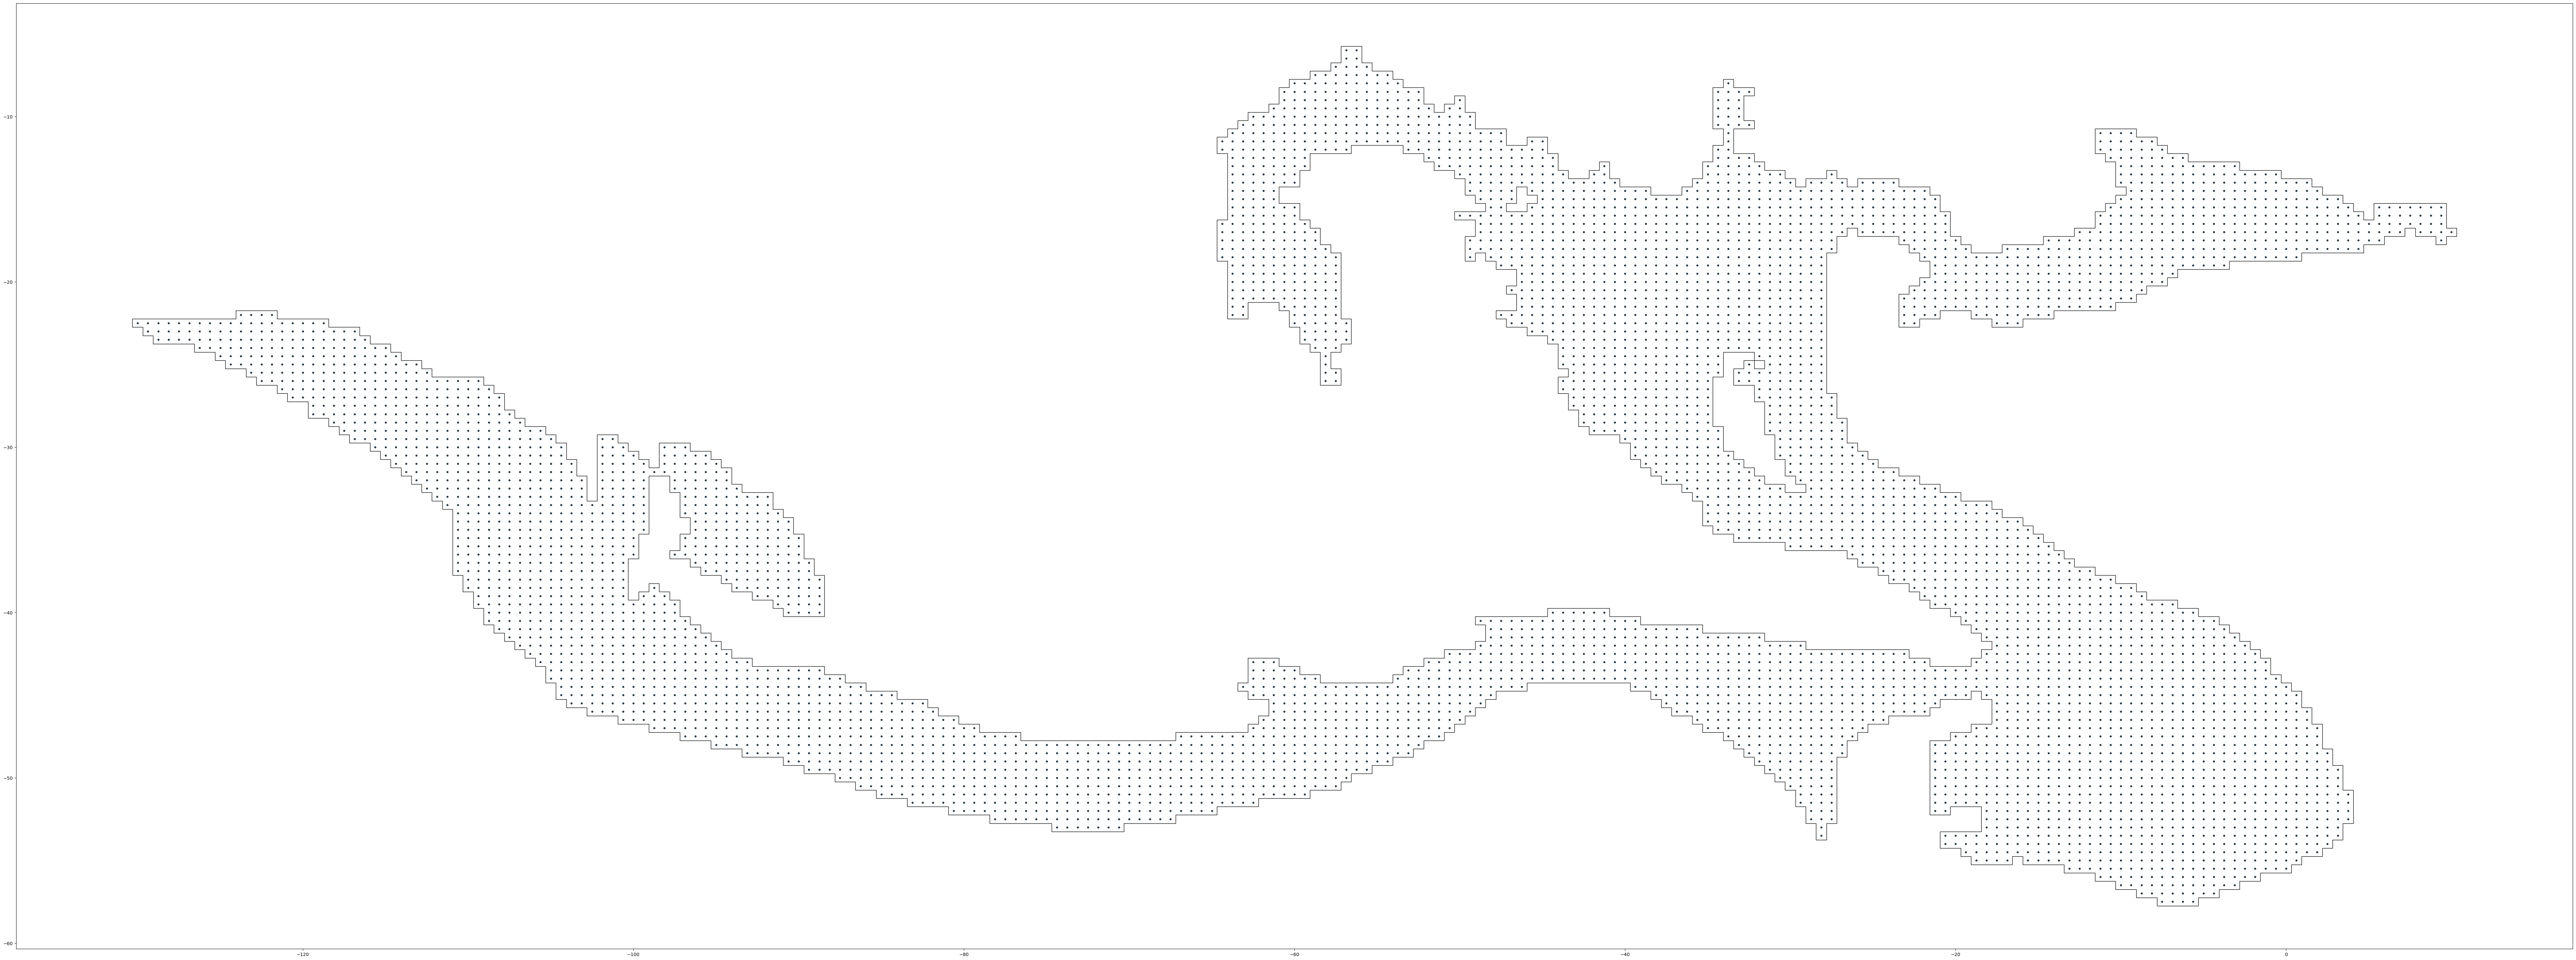

In [22]:
AR = { "_id" : "2000.01.01.09.0_2", "timestamp" : ISODate("2000-01-01T09:00:00Z"), "raster" : [ [ -7.5, -57.5, [ 257.2109069824219 ] ], [ -6.875, -57.5, [ 262.97900390625 ] ], [ -6.25, -57.5, [ 260.35009765625 ] ], [ -5.625, -57.5, [ 253.9466094970703 ] ], [ -8.75, -57, [ 280.598876953125 ] ], [ -8.125, -57, [ 300.8905334472656 ] ], [ -7.5, -57, [ 312.01519775390625 ] ], [ -6.875, -57, [ 314.3218994140625 ] ], [ -6.25, -57, [ 306.8564147949219 ] ], [ -5.625, -57, [ 292.804443359375 ] ], [ -5, -57, [ 276.7730407714844 ] ], [ -4.375, -57, [ 260.2676696777344 ] ], [ -10, -56.5, [ 271.70489501953125 ] ], [ -9.375, -56.5, [ 315.8199157714844 ] ], [ -8.75, -56.5, [ 344.9346923828125 ] ], [ -8.125, -56.5, [ 359.0653991699219 ] ], [ -7.5, -56.5, [ 366.6893310546875 ] ], [ -6.875, -56.5, [ 367.89422607421875 ] ], [ -6.25, -56.5, [ 362.3500671386719 ] ], [ -5.625, -56.5, [ 348.0738220214844 ] ], [ -5, -56.5, [ 331.3640441894531 ] ], [ -4.375, -56.5, [ 312.67333984375 ] ], [ -3.75, -56.5, [ 291.9031982421875 ] ], [ -3.125, -56.5, [ 268.5904541015625 ] ], [ -11.25, -56, [ 258.52166748046875 ] ], [ -10.625, -56, [ 319.1709289550781 ] ], [ -10, -56, [ 363.90826416015625 ] ], [ -9.375, -56, [ 394.05401611328125 ] ], [ -8.75, -56, [ 411.2857971191406 ] ], [ -8.125, -56, [ 408.6597900390625 ] ], [ -7.5, -56, [ 402.40240478515625 ] ], [ -6.875, -56, [ 396.9669189453125 ] ], [ -6.25, -56, [ 393.62066650390625 ] ], [ -5.625, -56, [ 384.7048034667969 ] ], [ -5, -56, [ 371.9496154785156 ] ], [ -4.375, -56, [ 360.0161437988281 ] ], [ -3.75, -56, [ 349.49639892578125 ] ], [ -3.125, -56, [ 334.6976318359375 ] ], [ -2.5, -56, [ 308.8829040527344 ] ], [ -1.875, -56, [ 277.6648864746094 ] ], [ -13.125, -55.5, [ 250.0784912109375 ] ], [ -12.5, -55.5, [ 279.06964111328125 ] ], [ -11.875, -55.5, [ 328.8126220703125 ] ], [ -11.25, -55.5, [ 393.7594909667969 ] ], [ -10.625, -55.5, [ 434.3934631347656 ] ], [ -10, -55.5, [ 464.81829833984375 ] ], [ -9.375, -55.5, [ 483.8623962402344 ] ], [ -8.75, -55.5, [ 488.2508239746094 ] ], [ -8.125, -55.5, [ 465.6604919433594 ] ], [ -7.5, -55.5, [ 442.0914001464844 ] ], [ -6.875, -55.5, [ 424.6418762207031 ] ], [ -6.25, -55.5, [ 415.9258117675781 ] ], [ -5.625, -55.5, [ 412.2363586425781 ] ], [ -5, -55.5, [ 402.2554626464844 ] ], [ -4.375, -55.5, [ 395.509765625 ] ], [ -3.75, -55.5, [ 392.6634216308594 ] ], [ -3.125, -55.5, [ 390.9280090332031 ] ], [ -2.5, -55.5, [ 377.7406005859375 ] ], [ -1.875, -55.5, [ 356.6293029785156 ] ], [ -1.25, -55.5, [ 329.3638610839844 ] ], [ -0.625, -55.5, [ 294.98663330078125 ] ], [ -5.920304394294029e-13, -55.5, [ 254.09738159179688 ] ], [ -18.75, -55, [ 251.37625122070312 ] ], [ -18.125, -55, [ 256.2002868652344 ] ], [ -17.5, -55, [ 255.74412536621094 ] ], [ -16.875, -55, [ 251.1094207763672 ] ], [ -15.625, -55, [ 261.7615051269531 ] ], [ -15, -55, [ 266.873291015625 ] ], [ -14.375, -55, [ 276.9300231933594 ] ], [ -13.75, -55, [ 294.70343017578125 ] ], [ -13.125, -55, [ 325.0120544433594 ] ], [ -12.5, -55, [ 370.935791015625 ] ], [ -11.875, -55, [ 428.431396484375 ] ], [ -11.25, -55, [ 476.24383544921875 ] ], [ -10.625, -55, [ 500.03082275390625 ] ], [ -10, -55, [ 513.7366333007812 ] ], [ -9.375, -55, [ 516.9696044921875 ] ], [ -8.75, -55, [ 507.3723449707031 ] ], [ -8.125, -55, [ 480.0590515136719 ] ], [ -7.5, -55, [ 454.1693420410156 ] ], [ -6.875, -55, [ 437.8293151855469 ] ], [ -6.25, -55, [ 433.1327819824219 ] ], [ -5.625, -55, [ 438.6737365722656 ] ], [ -5, -55, [ 439.1817932128906 ] ], [ -4.375, -55, [ 438.5985107421875 ] ], [ -3.75, -55, [ 438.8711853027344 ] ], [ -3.125, -55, [ 439.37225341796875 ] ], [ -2.5, -55, [ 435.54833984375 ] ], [ -1.875, -55, [ 424.34820556640625 ] ], [ -1.25, -55, [ 406.99407958984375 ] ], [ -0.625, -55, [ 385.4599914550781 ] ], [ -5.920304394294029e-13, -55, [ 356.4061279296875 ] ], [ 0.625, -55, [ 306.59246826171875 ] ], [ -19.375, -54.5, [ 254.0163116455078 ] ], [ -18.75, -54.5, [ 265.05322265625 ] ], [ -18.125, -54.5, [ 274.7360534667969 ] ], [ -17.5, -54.5, [ 274.43524169921875 ] ], [ -16.875, -54.5, [ 273.3731384277344 ] ], [ -16.25, -54.5, [ 287.5740966796875 ] ], [ -15.625, -54.5, [ 290.510986328125 ] ], [ -15, -54.5, [ 298.86065673828125 ] ], [ -14.375, -54.5, [ 314.3140563964844 ] ], [ -13.75, -54.5, [ 337.0657958984375 ] ], [ -13.125, -54.5, [ 371.1330871582031 ] ], [ -12.5, -54.5, [ 410.6900329589844 ] ], [ -11.875, -54.5, [ 445.4579162597656 ] ], [ -11.25, -54.5, [ 470.40802001953125 ] ], [ -10.625, -54.5, [ 483.7618103027344 ] ], [ -10, -54.5, [ 488.338623046875 ] ], [ -9.375, -54.5, [ 486.32440185546875 ] ], [ -8.75, -54.5, [ 479.14599609375 ] ], [ -8.125, -54.5, [ 463.7416687011719 ] ], [ -7.5, -54.5, [ 445.25018310546875 ] ], [ -6.875, -54.5, [ 432.96624755859375 ] ], [ -6.25, -54.5, [ 430.3315734863281 ] ], [ -5.625, -54.5, [ 437.7215270996094 ] ], [ -5, -54.5, [ 450.1293640136719 ] ], [ -4.375, -54.5, [ 462.3944396972656 ] ], [ -3.75, -54.5, [ 475.43609619140625 ] ], [ -3.125, -54.5, [ 483.8912353515625 ] ], [ -2.5, -54.5, [ 484.04205322265625 ] ], [ -1.875, -54.5, [ 479.9286804199219 ] ], [ -1.25, -54.5, [ 473.0439453125 ] ], [ -0.625, -54.5, [ 455.3340759277344 ] ], [ -5.920304394294029e-13, -54.5, [ 431.1900939941406 ] ], [ 0.625, -54.5, [ 402.6719055175781 ] ], [ 1.25, -54.5, [ 350.4139709472656 ] ], [ 1.875, -54.5, [ 279.38238525390625 ] ], [ -20.625, -54, [ 251.41603088378906 ] ], [ -20, -54, [ 259.0171813964844 ] ], [ -19.375, -54, [ 257.20184326171875 ] ], [ -18.75, -54, [ 267.29742431640625 ] ], [ -18.125, -54, [ 274.097412109375 ] ], [ -17.5, -54, [ 276.5361633300781 ] ], [ -16.875, -54, [ 297.2879333496094 ] ], [ -16.25, -54, [ 303.1784362792969 ] ], [ -15.625, -54, [ 308.7548522949219 ] ], [ -15, -54, [ 315.7880554199219 ] ], [ -14.375, -54, [ 326.0915832519531 ] ], [ -13.75, -54, [ 339.8102722167969 ] ], [ -13.125, -54, [ 356.253662109375 ] ], [ -12.5, -54, [ 374.41168212890625 ] ], [ -11.875, -54, [ 394.52020263671875 ] ], [ -11.25, -54, [ 414.4706726074219 ] ], [ -10.625, -54, [ 431.0128173828125 ] ], [ -10, -54, [ 438.82220458984375 ] ], [ -9.375, -54, [ 441.0689697265625 ] ], [ -8.75, -54, [ 443.3665466308594 ] ], [ -8.125, -54, [ 447.9814453125 ] ], [ -7.5, -54, [ 443.5181884765625 ] ], [ -6.875, -54, [ 434.77947998046875 ] ], [ -6.25, -54, [ 427.05908203125 ] ], [ -5.625, -54, [ 425.1650695800781 ] ], [ -5, -54, [ 432.2761535644531 ] ], [ -4.375, -54, [ 450.0856628417969 ] ], [ -3.75, -54, [ 481.6551208496094 ] ], [ -3.125, -54, [ 510.8717346191406 ] ], [ -2.5, -54, [ 523.6810913085938 ] ], [ -1.875, -54, [ 519.70751953125 ] ], [ -1.25, -54, [ 522.6785888671875 ] ], [ -0.625, -54, [ 511.61773681640625 ] ], [ -5.920304394294029e-13, -54, [ 486.5885925292969 ] ], [ 0.625, -54, [ 457.7963562011719 ] ], [ 1.25, -54, [ 428.6632995605469 ] ], [ 1.875, -54, [ 374.57623291015625 ] ], [ 2.5, -54, [ 294.10400390625 ] ], [ -28.125, -53.5, [ 250.74778747558594 ] ], [ -20.625, -53.5, [ 251.984375 ] ], [ -20, -53.5, [ 254.2480926513672 ] ], [ -19.375, -53.5, [ 256.911865234375 ] ], [ -18.75, -53.5, [ 260.0805969238281 ] ], [ -18.125, -53.5, [ 269.3065185546875 ] ], [ -17.5, -53.5, [ 281.76519775390625 ] ], [ -16.875, -53.5, [ 294.40386962890625 ] ], [ -16.25, -53.5, [ 304.07891845703125 ] ], [ -15.625, -53.5, [ 309.7414855957031 ] ], [ -15, -53.5, [ 313.3000183105469 ] ], [ -14.375, -53.5, [ 316.1363525390625 ] ], [ -13.75, -53.5, [ 321.1737976074219 ] ], [ -13.125, -53.5, [ 330.64422607421875 ] ], [ -12.5, -53.5, [ 345.2801818847656 ] ], [ -11.875, -53.5, [ 363.9502868652344 ] ], [ -11.25, -53.5, [ 386.9090270996094 ] ], [ -10.625, -53.5, [ 403.29205322265625 ] ], [ -10, -53.5, [ 412.48211669921875 ] ], [ -9.375, -53.5, [ 421.22235107421875 ] ], [ -8.75, -53.5, [ 434.7939758300781 ] ], [ -8.125, -53.5, [ 448.874267578125 ] ], [ -7.5, -53.5, [ 446.6272888183594 ] ], [ -6.875, -53.5, [ 433.5251159667969 ] ], [ -6.25, -53.5, [ 420.6707458496094 ] ], [ -5.625, -53.5, [ 414.5478820800781 ] ], [ -5, -53.5, [ 418.6537170410156 ] ], [ -4.375, -53.5, [ 433.0572204589844 ] ], [ -3.75, -53.5, [ 471.4512023925781 ] ], [ -3.125, -53.5, [ 517.5680541992188 ] ], [ -2.5, -53.5, [ 540.7642822265625 ] ], [ -1.875, -53.5, [ 546.6826782226562 ] ], [ -1.25, -53.5, [ 554.7894897460938 ] ], [ -0.625, -53.5, [ 553.2874145507812 ] ], [ -5.920304394294029e-13, -53.5, [ 525.8978271484375 ] ], [ 0.625, -53.5, [ 493.5931701660156 ] ], [ 1.25, -53.5, [ 465.77154541015625 ] ], [ 1.875, -53.5, [ 441.5608825683594 ] ], [ 2.5, -53.5, [ 379.49871826171875 ] ], [ 3.125, -53.5, [ 288.34490966796875 ] ], [ -74.375, -53, [ 251.17013549804688 ] ], [ -73.75, -53, [ 261.4441833496094 ] ], [ -73.125, -53, [ 262.8340148925781 ] ], [ -72.5, -53, [ 264.6283264160156 ] ], [ -71.875, -53, [ 267.0211486816406 ] ], [ -71.25, -53, [ 269.9058837890625 ] ], [ -70.625, -53, [ 257.7942810058594 ] ], [ -28.125, -53, [ 258.4275817871094 ] ], [ -18.125, -53, [ 250.2928009033203 ] ], [ -17.5, -53, [ 275.92156982421875 ] ], [ -16.875, -53, [ 294.0771484375 ] ], [ -16.25, -53, [ 304.08026123046875 ] ], [ -15.625, -53, [ 313.3865661621094 ] ], [ -15, -53, [ 325.89898681640625 ] ], [ -14.375, -53, [ 338.2154235839844 ] ], [ -13.75, -53, [ 346.8502197265625 ] ], [ -13.125, -53, [ 349.8486328125 ] ], [ -12.5, -53, [ 350.10791015625 ] ], [ -11.875, -53, [ 353.1891784667969 ] ], [ -11.25, -53, [ 366.7158203125 ] ], [ -10.625, -53, [ 389.2459411621094 ] ], [ -10, -53, [ 414.1618347167969 ] ], [ -9.375, -53, [ 435.2857971191406 ] ], [ -8.75, -53, [ 446.0585632324219 ] ], [ -8.125, -53, [ 439.91912841796875 ] ], [ -7.5, -53, [ 420.08990478515625 ] ], [ -6.875, -53, [ 402.5417785644531 ] ], [ -6.25, -53, [ 388.2579345703125 ] ], [ -5.625, -53, [ 384.76416015625 ] ], [ -5, -53, [ 397.9291076660156 ] ], [ -4.375, -53, [ 426.9591369628906 ] ], [ -3.75, -53, [ 464.1576232910156 ] ], [ -3.125, -53, [ 509.4871520996094 ] ], [ -2.5, -53, [ 543.291015625 ] ], [ -1.875, -53, [ 567.8194580078125 ] ], [ -1.25, -53, [ 582.812744140625 ] ], [ -0.625, -53, [ 583.7932739257812 ] ], [ -5.920304394294029e-13, -53, [ 563.3956909179688 ] ], [ 0.625, -53, [ 520.6251831054688 ] ], [ 1.25, -53, [ 483.3103942871094 ] ], [ 1.875, -53, [ 459.0633239746094 ] ], [ 2.5, -53, [ 409.75408935546875 ] ], [ 3.125, -53, [ 326.8001403808594 ] ], [ -78.125, -52.5, [ 264.48565673828125 ] ], [ -77.5, -52.5, [ 286.0518493652344 ] ], [ -76.875, -52.5, [ 304.6889953613281 ] ], [ -76.25, -52.5, [ 325.6743469238281 ] ], [ -75.625, -52.5, [ 344.62322998046875 ] ], [ -75, -52.5, [ 358.09228515625 ] ], [ -74.375, -52.5, [ 372.53302001953125 ] ], [ -73.75, -52.5, [ 384.8199157714844 ] ], [ -73.125, -52.5, [ 377.8502502441406 ] ], [ -72.5, -52.5, [ 377.74285888671875 ] ], [ -71.875, -52.5, [ 374.42132568359375 ] ], [ -71.25, -52.5, [ 372.9173583984375 ] ], [ -70.625, -52.5, [ 355.3502197265625 ] ], [ -70, -52.5, [ 338.0570983886719 ] ], [ -69.375, -52.5, [ 322.7041015625 ] ], [ -68.75, -52.5, [ 308.9864501953125 ] ], [ -68.125, -52.5, [ 289.2562255859375 ] ], [ -67.5, -52.5, [ 271.5044860839844 ] ], [ -28.75, -52.5, [ 260.5546569824219 ] ], [ -28.125, -52.5, [ 269.28680419921875 ] ], [ -27.5, -52.5, [ 253.54656982421875 ] ], [ -18.125, -52.5, [ 252.47401428222656 ] ], [ -17.5, -52.5, [ 286.5281982421875 ] ], [ -16.875, -52.5, [ 302.67828369140625 ] ], [ -16.25, -52.5, [ 317.92364501953125 ] ], [ -15.625, -52.5, [ 342.4021301269531 ] ], [ -15, -52.5, [ 370.22991943359375 ] ], [ -14.375, -52.5, [ 392.7141418457031 ] ], [ -13.75, -52.5, [ 403.092529296875 ] ], [ -13.125, -52.5, [ 400.34552001953125 ] ], [ -12.5, -52.5, [ 382.74188232421875 ] ], [ -11.875, -52.5, [ 356.63092041015625 ] ], [ -11.25, -52.5, [ 350.8889465332031 ] ], [ -10.625, -52.5, [ 370.886474609375 ] ], [ -10, -52.5, [ 398.8891296386719 ] ], [ -9.375, -52.5, [ 413.6547546386719 ] ], [ -8.75, -52.5, [ 405.2827453613281 ] ], [ -8.125, -52.5, [ 382.01153564453125 ] ], [ -7.5, -52.5, [ 361.92327880859375 ] ], [ -6.875, -52.5, [ 356.74847412109375 ] ], [ -6.25, -52.5, [ 356.22344970703125 ] ], [ -5.625, -52.5, [ 363.1826171875 ] ], [ -5, -52.5, [ 390.294921875 ] ], [ -4.375, -52.5, [ 429.9809265136719 ] ], [ -3.75, -52.5, [ 465.9249267578125 ] ], [ -3.125, -52.5, [ 502.66937255859375 ] ], [ -2.5, -52.5, [ 548.0121459960938 ] ], [ -1.875, -52.5, [ 591.1994018554688 ] ], [ -1.25, -52.5, [ 618.223388671875 ] ], [ -0.625, -52.5, [ 619.5501098632812 ] ], [ -5.920304394294029e-13, -52.5, [ 595.3040771484375 ] ], [ 0.625, -52.5, [ 566.4014892578125 ] ], [ 1.25, -52.5, [ 515.3148803710938 ] ], [ 1.875, -52.5, [ 474.2393493652344 ] ], [ 2.5, -52.5, [ 427.59637451171875 ] ], [ 3.125, -52.5, [ 349.15264892578125 ] ], [ 3.75, -52.5, [ 253.63937377929688 ] ], [ -80.625, -52, [ 272.28717041015625 ] ], [ -80, -52, [ 304.2991943359375 ] ], [ -79.375, -52, [ 335.9853820800781 ] ], [ -78.75, -52, [ 368.07208251953125 ] ], [ -78.125, -52, [ 396.8155822753906 ] ], [ -77.5, -52, [ 423.4109191894531 ] ], [ -76.875, -52, [ 447.773681640625 ] ], [ -76.25, -52, [ 469.8477783203125 ] ], [ -75.625, -52, [ 479.4993591308594 ] ], [ -75, -52, [ 489.5265808105469 ] ], [ -74.375, -52, [ 499.878662109375 ] ], [ -73.75, -52, [ 503.0035705566406 ] ], [ -73.125, -52, [ 494.3572998046875 ] ], [ -72.5, -52, [ 503.5953369140625 ] ], [ -71.875, -52, [ 494.8902282714844 ] ], [ -71.25, -52, [ 475.108642578125 ] ], [ -70.625, -52, [ 469.5634460449219 ] ], [ -70, -52, [ 444.420166015625 ] ], [ -69.375, -52, [ 417.3963623046875 ] ], [ -68.75, -52, [ 395.4221496582031 ] ], [ -68.125, -52, [ 379.6463928222656 ] ], [ -67.5, -52, [ 365.935791015625 ] ], [ -66.875, -52, [ 349.6495361328125 ] ], [ -66.25, -52, [ 324.8050842285156 ] ], [ -65.625, -52, [ 299.4087219238281 ] ], [ -65, -52, [ 266.6133117675781 ] ], [ -28.75, -52, [ 273.1884765625 ] ], [ -28.125, -52, [ 274.2829284667969 ] ], [ -27.5, -52, [ 257.012451171875 ] ], [ -21.25, -52, [ 261.3713073730469 ] ], [ -20.625, -52, [ 265.12762451171875 ] ], [ -18.125, -52, [ 277.9984130859375 ] ], [ -17.5, -52, [ 305.13507080078125 ] ], [ -16.875, -52, [ 321.0771484375 ] ], [ -16.25, -52, [ 345.0074157714844 ] ], [ -15.625, -52, [ 372.6537780761719 ] ], [ -15, -52, [ 395.37548828125 ] ], [ -14.375, -52, [ 412.2784729003906 ] ], [ -13.75, -52, [ 425.0497131347656 ] ], [ -13.125, -52, [ 432.078369140625 ] ], [ -12.5, -52, [ 429.5215148925781 ] ], [ -11.875, -52, [ 413.92041015625 ] ], [ -11.25, -52, [ 400.6236572265625 ] ], [ -10.625, -52, [ 395.3897705078125 ] ], [ -10, -52, [ 388.8152770996094 ] ], [ -9.375, -52, [ 375.3280334472656 ] ], [ -8.75, -52, [ 357.8016357421875 ] ], [ -8.125, -52, [ 344.1879577636719 ] ], [ -7.5, -52, [ 348.1871337890625 ] ], [ -6.875, -52, [ 370.6197814941406 ] ], [ -6.25, -52, [ 386.940673828125 ] ], [ -5.625, -52, [ 393.333251953125 ] ], [ -5, -52, [ 406.8599548339844 ] ], [ -4.375, -52, [ 431.5464782714844 ] ], [ -3.75, -52, [ 465.6329650878906 ] ], [ -3.125, -52, [ 506.3499450683594 ] ], [ -2.5, -52, [ 567.8609008789062 ] ], [ -1.875, -52, [ 630.0872192382812 ] ], [ -1.25, -52, [ 661.1632080078125 ] ], [ -0.625, -52, [ 656.9660034179688 ] ], [ -5.920304394294029e-13, -52, [ 627.0582885742188 ] ], [ 0.625, -52, [ 595.1436767578125 ] ], [ 1.25, -52, [ 539.3968505859375 ] ], [ 1.875, -52, [ 489.320556640625 ] ], [ 2.5, -52, [ 445.861572265625 ] ], [ 3.125, -52, [ 366.02069091796875 ] ], [ 3.75, -52, [ 263.5762023925781 ] ], [ -83.125, -51.5, [ 265.4356994628906 ] ], [ -82.5, -51.5, [ 298.5959167480469 ] ], [ -81.875, -51.5, [ 332.4505615234375 ] ], [ -81.25, -51.5, [ 365.47564697265625 ] ], [ -80.625, -51.5, [ 398.1390686035156 ] ], [ -80, -51.5, [ 430.99066162109375 ] ], [ -79.375, -51.5, [ 463.7474670410156 ] ], [ -78.75, -51.5, [ 494.1440124511719 ] ], [ -78.125, -51.5, [ 517.092041015625 ] ], [ -77.5, -51.5, [ 534.3204956054688 ] ], [ -76.875, -51.5, [ 549.4060668945312 ] ], [ -76.25, -51.5, [ 565.837158203125 ] ], [ -75.625, -51.5, [ 562.686279296875 ] ], [ -75, -51.5, [ 566.1561889648438 ] ], [ -74.375, -51.5, [ 571.3557739257812 ] ], [ -73.75, -51.5, [ 572.936767578125 ] ], [ -73.125, -51.5, [ 562.6685180664062 ] ], [ -72.5, -51.5, [ 551.6486206054688 ] ], [ -71.875, -51.5, [ 542.8782348632812 ] ], [ -71.25, -51.5, [ 538.2972412109375 ] ], [ -70.625, -51.5, [ 525.5904541015625 ] ], [ -70, -51.5, [ 519.808349609375 ] ], [ -69.375, -51.5, [ 497.7438049316406 ] ], [ -68.75, -51.5, [ 476.6923522949219 ] ], [ -68.125, -51.5, [ 452.24468994140625 ] ], [ -67.5, -51.5, [ 433.6628112792969 ] ], [ -66.875, -51.5, [ 418.1332092285156 ] ], [ -66.25, -51.5, [ 399.90496826171875 ] ], [ -65.625, -51.5, [ 380.2787780761719 ] ], [ -65, -51.5, [ 350.2046203613281 ] ], [ -64.375, -51.5, [ 320.5652770996094 ] ], [ -63.75, -51.5, [ 294.1781005859375 ] ], [ -63.125, -51.5, [ 274.28778076171875 ] ], [ -62.5, -51.5, [ 259.0108337402344 ] ], [ -29.375, -51.5, [ 262.1684875488281 ] ], [ -28.75, -51.5, [ 284.0962219238281 ] ], [ -28.125, -51.5, [ 279.0548095703125 ] ], [ -27.5, -51.5, [ 260.03643798828125 ] ], [ -21.25, -51.5, [ 272.4309997558594 ] ], [ -20.625, -51.5, [ 291.6726379394531 ] ], [ -20, -51.5, [ 295.0272521972656 ] ], [ -19.375, -51.5, [ 282.1749267578125 ] ], [ -18.75, -51.5, [ 283.8040771484375 ] ], [ -18.125, -51.5, [ 304.11322021484375 ] ], [ -17.5, -51.5, [ 317.5785827636719 ] ], [ -16.875, -51.5, [ 333.616455078125 ] ], [ -16.25, -51.5, [ 360.51788330078125 ] ], [ -15.625, -51.5, [ 389.9790344238281 ] ], [ -15, -51.5, [ 412.7678527832031 ] ], [ -14.375, -51.5, [ 428.2481689453125 ] ], [ -13.75, -51.5, [ 439.68511962890625 ] ], [ -13.125, -51.5, [ 449.7430114746094 ] ], [ -12.5, -51.5, [ 461.4135437011719 ] ], [ -11.875, -51.5, [ 475.85064697265625 ] ], [ -11.25, -51.5, [ 483.7599792480469 ] ], [ -10.625, -51.5, [ 473.82318115234375 ] ], [ -10, -51.5, [ 444.5054626464844 ] ], [ -9.375, -51.5, [ 408.8512878417969 ] ], [ -8.75, -51.5, [ 385.43463134765625 ] ], [ -8.125, -51.5, [ 384.2859802246094 ] ], [ -7.5, -51.5, [ 396.9496154785156 ] ], [ -6.875, -51.5, [ 413.3838806152344 ] ], [ -6.25, -51.5, [ 420.1552429199219 ] ], [ -5.625, -51.5, [ 420.8479309082031 ] ], [ -5, -51.5, [ 438.94012451171875 ] ], [ -4.375, -51.5, [ 456.31427001953125 ] ], [ -3.75, -51.5, [ 470.9197692871094 ] ], [ -3.125, -51.5, [ 510.8997497558594 ] ], [ -2.5, -51.5, [ 589.3179931640625 ] ], [ -1.875, -51.5, [ 668.121337890625 ] ], [ -1.25, -51.5, [ 691.8529052734375 ] ], [ -0.625, -51.5, [ 674.2246704101562 ] ], [ -5.920304394294029e-13, -51.5, [ 644.3159790039062 ] ], [ 0.625, -51.5, [ 616.4209594726562 ] ], [ 1.25, -51.5, [ 558.6262817382812 ] ], [ 1.875, -51.5, [ 499.1768493652344 ] ], [ 2.5, -51.5, [ 444.35870361328125 ] ], [ 3.125, -51.5, [ 374.660888671875 ] ], [ 3.75, -51.5, [ 261.31134033203125 ] ], [ -85, -51, [ 264.5164489746094 ] ], [ -84.375, -51, [ 305.0701904296875 ] ], [ -83.75, -51, [ 347.66253662109375 ] ], [ -83.125, -51, [ 382.52099609375 ] ], [ -82.5, -51, [ 415.7648010253906 ] ], [ -81.875, -51, [ 449.2922668457031 ] ], [ -81.25, -51, [ 481.8508605957031 ] ], [ -80.625, -51, [ 513.5596313476562 ] ], [ -80, -51, [ 540.0211181640625 ] ], [ -79.375, -51, [ 560.0620727539062 ] ], [ -78.75, -51, [ 576.9021606445312 ] ], [ -78.125, -51, [ 588.4509887695312 ] ], [ -77.5, -51, [ 592.8091430664062 ] ], [ -76.875, -51, [ 593.522216796875 ] ], [ -76.25, -51, [ 595.3512573242188 ] ], [ -75.625, -51, [ 589.5108642578125 ] ], [ -75, -51, [ 586.3114013671875 ] ], [ -74.375, -51, [ 584.0062866210938 ] ], [ -73.75, -51, [ 545.8082275390625 ] ], [ -73.125, -51, [ 553.6748657226562 ] ], [ -72.5, -51, [ 552.3135986328125 ] ], [ -71.875, -51, [ 555.9886474609375 ] ], [ -71.25, -51, [ 543.4124145507812 ] ], [ -70.625, -51, [ 532.1753540039062 ] ], [ -70, -51, [ 536.0667114257812 ] ], [ -69.375, -51, [ 530.1106567382812 ] ], [ -68.75, -51, [ 518.2164306640625 ] ], [ -68.125, -51, [ 497.7816162109375 ] ], [ -67.5, -51, [ 483.3188171386719 ] ], [ -66.875, -51, [ 471.0234069824219 ] ], [ -66.25, -51, [ 452.385498046875 ] ], [ -65.625, -51, [ 433.6169738769531 ] ], [ -65, -51, [ 408.8951721191406 ] ], [ -64.375, -51, [ 384.5978088378906 ] ], [ -63.75, -51, [ 359.2283020019531 ] ], [ -63.125, -51, [ 337.0663146972656 ] ], [ -62.5, -51, [ 323.94403076171875 ] ], [ -61.875, -51, [ 316.8424377441406 ] ], [ -61.25, -51, [ 311.41851806640625 ] ], [ -60.625, -51, [ 297.8014221191406 ] ], [ -60, -51, [ 287.9825439453125 ] ], [ -59.375, -51, [ 266.6649475097656 ] ], [ -29.375, -51, [ 288.17205810546875 ] ], [ -28.75, -51, [ 292.6628112792969 ] ], [ -28.125, -51, [ 282.0652770996094 ] ], [ -27.5, -51, [ 260.8945007324219 ] ], [ -21.25, -51, [ 270.0245056152344 ] ], [ -20.625, -51, [ 300.45269775390625 ] ], [ -20, -51, [ 324.9288635253906 ] ], [ -19.375, -51, [ 331.31658935546875 ] ], [ -18.75, -51, [ 325.9529724121094 ] ], [ -18.125, -51, [ 322.386474609375 ] ], [ -17.5, -51, [ 323.9544372558594 ] ], [ -16.875, -51, [ 340.5435791015625 ] ], [ -16.25, -51, [ 371.01458740234375 ] ], [ -15.625, -51, [ 400.6092224121094 ] ], [ -15, -51, [ 425.2511291503906 ] ], [ -14.375, -51, [ 444.74456787109375 ] ], [ -13.75, -51, [ 457.2661437988281 ] ], [ -13.125, -51, [ 468.03619384765625 ] ], [ -12.5, -51, [ 482.50958251953125 ] ], [ -11.875, -51, [ 502.6737976074219 ] ], [ -11.25, -51, [ 520.1818237304688 ] ], [ -10.625, -51, [ 524.9463500976562 ] ], [ -10, -51, [ 515.1366577148438 ] ], [ -9.375, -51, [ 497.24072265625 ] ], [ -8.75, -51, [ 479.7066345214844 ] ], [ -8.125, -51, [ 467.6502685546875 ] ], [ -7.5, -51, [ 457.6107482910156 ] ], [ -6.875, -51, [ 445.6022644042969 ] ], [ -6.25, -51, [ 425.715087890625 ] ], [ -5.625, -51, [ 423.7043762207031 ] ], [ -5, -51, [ 465.09149169921875 ] ], [ -4.375, -51, [ 497.9325256347656 ] ], [ -3.75, -51, [ 502.4671630859375 ] ], [ -3.125, -51, [ 523.03125 ] ], [ -2.5, -51, [ 592.43115234375 ] ], [ -1.875, -51, [ 668.3327026367188 ] ], [ -1.25, -51, [ 684.1773071289062 ] ], [ -0.625, -51, [ 681.8687133789062 ] ], [ -5.920304394294029e-13, -51, [ 667.21630859375 ] ], [ 0.625, -51, [ 628.436767578125 ] ], [ 1.25, -51, [ 567.1614990234375 ] ], [ 1.875, -51, [ 500.2375793457031 ] ], [ 2.5, -51, [ 437.9213562011719 ] ], [ 3.125, -51, [ 358.7673645019531 ] ], [ 3.75, -51, [ 252.0862274169922 ] ], [ -86.25, -50.5, [ 283.8522033691406 ] ], [ -85.625, -50.5, [ 330.1357116699219 ] ], [ -85, -50.5, [ 373.82177734375 ] ], [ -84.375, -50.5, [ 414.31494140625 ] ], [ -83.75, -50.5, [ 449.0610046386719 ] ], [ -83.125, -50.5, [ 481.0954895019531 ] ], [ -82.5, -50.5, [ 511.9805603027344 ] ], [ -81.875, -50.5, [ 540.9467163085938 ] ], [ -81.25, -50.5, [ 566.9578247070312 ] ], [ -80.625, -50.5, [ 586.7796630859375 ] ], [ -80, -50.5, [ 596.393798828125 ] ], [ -79.375, -50.5, [ 602.1156616210938 ] ], [ -78.75, -50.5, [ 602.8330078125 ] ], [ -78.125, -50.5, [ 595.3831176757812 ] ], [ -77.5, -50.5, [ 591.9998779296875 ] ], [ -76.875, -50.5, [ 589.4556274414062 ] ], [ -76.25, -50.5, [ 585.70751953125 ] ], [ -75.625, -50.5, [ 577.0761108398438 ] ], [ -75, -50.5, [ 588.7538452148438 ] ], [ -74.375, -50.5, [ 576.1699829101562 ] ], [ -73.75, -50.5, [ 533.4381103515625 ] ], [ -73.125, -50.5, [ 490.25262451171875 ] ], [ -72.5, -50.5, [ 485.635498046875 ] ], [ -71.875, -50.5, [ 473.2816162109375 ] ], [ -71.25, -50.5, [ 492.6869201660156 ] ], [ -70.625, -50.5, [ 502.80010986328125 ] ], [ -70, -50.5, [ 508.09783935546875 ] ], [ -69.375, -50.5, [ 511.08209228515625 ] ], [ -68.75, -50.5, [ 503.3773193359375 ] ], [ -68.125, -50.5, [ 494.65625 ] ], [ -67.5, -50.5, [ 492.3011779785156 ] ], [ -66.875, -50.5, [ 489.55255126953125 ] ], [ -66.25, -50.5, [ 480.1180725097656 ] ], [ -65.625, -50.5, [ 471.9568176269531 ] ], [ -65, -50.5, [ 452.1228942871094 ] ], [ -64.375, -50.5, [ 431.4953918457031 ] ], [ -63.75, -50.5, [ 410.4044189453125 ] ], [ -63.125, -50.5, [ 391.5495910644531 ] ], [ -62.5, -50.5, [ 376.6497802734375 ] ], [ -61.875, -50.5, [ 365.586181640625 ] ], [ -61.25, -50.5, [ 356.4187927246094 ] ], [ -60.625, -50.5, [ 348.2358093261719 ] ], [ -60, -50.5, [ 338.82122802734375 ] ], [ -59.375, -50.5, [ 325.8996276855469 ] ], [ -58.75, -50.5, [ 309.175048828125 ] ], [ -58.125, -50.5, [ 281.20196533203125 ] ], [ -57.5, -50.5, [ 251.6761932373047 ] ], [ -30, -50.5, [ 278.37274169921875 ] ], [ -29.375, -50.5, [ 300.2088928222656 ] ], [ -28.75, -50.5, [ 297.0164794921875 ] ], [ -28.125, -50.5, [ 284.1024169921875 ] ], [ -27.5, -50.5, [ 262.42181396484375 ] ], [ -21.25, -50.5, [ 265.3885803222656 ] ], [ -20.625, -50.5, [ 295.9056091308594 ] ], [ -20, -50.5, [ 323.5638427734375 ] ], [ -19.375, -50.5, [ 338.6020812988281 ] ], [ -18.75, -50.5, [ 336.1234436035156 ] ], [ -18.125, -50.5, [ 325.60382080078125 ] ], [ -17.5, -50.5, [ 318.2783203125 ] ], [ -16.875, -50.5, [ 328.72998046875 ] ], [ -16.25, -50.5, [ 349.0269470214844 ] ], [ -15.625, -50.5, [ 368.1566467285156 ] ], [ -15, -50.5, [ 389.49578857421875 ] ], [ -14.375, -50.5, [ 414.60687255859375 ] ], [ -13.75, -50.5, [ 436.0403137207031 ] ], [ -13.125, -50.5, [ 458.14434814453125 ] ], [ -12.5, -50.5, [ 481.5079040527344 ] ], [ -11.875, -50.5, [ 505.41015625 ] ], [ -11.25, -50.5, [ 527.690673828125 ] ], [ -10.625, -50.5, [ 542.118408203125 ] ], [ -10, -50.5, [ 547.3471069335938 ] ], [ -9.375, -50.5, [ 546.0584716796875 ] ], [ -8.75, -50.5, [ 536.263671875 ] ], [ -8.125, -50.5, [ 513.4718017578125 ] ], [ -7.5, -50.5, [ 482.60443115234375 ] ], [ -6.875, -50.5, [ 453.5993347167969 ] ], [ -6.25, -50.5, [ 428.0783996582031 ] ], [ -5.625, -50.5, [ 430.9880676269531 ] ], [ -5, -50.5, [ 479.7473449707031 ] ], [ -4.375, -50.5, [ 525.9434204101562 ] ], [ -3.75, -50.5, [ 543.2540283203125 ] ], [ -3.125, -50.5, [ 561.3136596679688 ] ], [ -2.5, -50.5, [ 602.1682739257812 ] ], [ -1.875, -50.5, [ 642.12744140625 ] ], [ -1.25, -50.5, [ 652.5631713867188 ] ], [ -0.625, -50.5, [ 664.3214721679688 ] ], [ -5.920304394294029e-13, -50.5, [ 657.71337890625 ] ], [ 0.625, -50.5, [ 629.2387084960938 ] ], [ 1.25, -50.5, [ 567.5130004882812 ] ], [ 1.875, -50.5, [ 491.2297058105469 ] ], [ 2.5, -50.5, [ 421.02642822265625 ] ], [ 3.125, -50.5, [ 335.34002685546875 ] ], [ -87.5, -50, [ 294.277587890625 ] ], [ -86.875, -50, [ 346.0212707519531 ] ], [ -86.25, -50, [ 391.0638427734375 ] ], [ -85.625, -50, [ 432.30999755859375 ] ], [ -85, -50, [ 471.601318359375 ] ], [ -84.375, -50, [ 505.72625732421875 ] ], [ -83.75, -50, [ 534.8836669921875 ] ], [ -83.125, -50, [ 559.9879150390625 ] ], [ -82.5, -50, [ 581.4295043945312 ] ], [ -81.875, -50, [ 599.2374877929688 ] ], [ -81.25, -50, [ 611.9529418945312 ] ], [ -80.625, -50, [ 614.6387939453125 ] ], [ -80, -50, [ 618.0404052734375 ] ], [ -79.375, -50, [ 617.0512084960938 ] ], [ -78.75, -50, [ 612.8003540039062 ] ], [ -78.125, -50, [ 607.3146362304688 ] ], [ -77.5, -50, [ 604.4087524414062 ] ], [ -76.875, -50, [ 599.9674682617188 ] ], [ -76.25, -50, [ 603.2259521484375 ] ], [ -75.625, -50, [ 599.0982666015625 ] ], [ -75, -50, [ 590.1368408203125 ] ], [ -74.375, -50, [ 545.19091796875 ] ], [ -73.75, -50, [ 449.981201171875 ] ], [ -73.125, -50, [ 456.1087646484375 ] ], [ -72.5, -50, [ 475.64630126953125 ] ], [ -71.875, -50, [ 460.219482421875 ] ], [ -71.25, -50, [ 461.3059997558594 ] ], [ -70.625, -50, [ 467.6883850097656 ] ], [ -70, -50, [ 463.1185302734375 ] ], [ -69.375, -50, [ 476.9200439453125 ] ], [ -68.75, -50, [ 475.9934997558594 ] ], [ -68.125, -50, [ 470.9242858886719 ] ], [ -67.5, -50, [ 468.91192626953125 ] ], [ -66.875, -50, [ 470.2171325683594 ] ], [ -66.25, -50, [ 472.0577697753906 ] ], [ -65.625, -50, [ 472.3093566894531 ] ], [ -65, -50, [ 463.18548583984375 ] ], [ -64.375, -50, [ 452.912353515625 ] ], [ -63.75, -50, [ 436.44366455078125 ] ], [ -63.125, -50, [ 419.2983703613281 ] ], [ -62.5, -50, [ 405.5417785644531 ] ], [ -61.875, -50, [ 393.1838684082031 ] ], [ -61.25, -50, [ 386.8875732421875 ] ], [ -60.625, -50, [ 380.9451904296875 ] ], [ -60, -50, [ 380.0502624511719 ] ], [ -59.375, -50, [ 376.6099548339844 ] ], [ -58.75, -50, [ 369.8728332519531 ] ], [ -58.125, -50, [ 349.7311706542969 ] ], [ -57.5, -50, [ 320.8913269042969 ] ], [ -56.875, -50, [ 278.706298828125 ] ], [ -30.625, -50, [ 267.8641357421875 ] ], [ -30, -50, [ 303.47393798828125 ] ], [ -29.375, -50, [ 308.0682067871094 ] ], [ -28.75, -50, [ 300.3332824707031 ] ], [ -28.125, -50, [ 286.33935546875 ] ], [ -27.5, -50, [ 263.25799560546875 ] ], [ -21.25, -50, [ 265.3644714355469 ] ], [ -20.625, -50, [ 297.0120849609375 ] ], [ -20, -50, [ 328.6814270019531 ] ], [ -19.375, -50, [ 340.0656433105469 ] ], [ -18.75, -50, [ 336.6250915527344 ] ], [ -18.125, -50, [ 329.2859191894531 ] ], [ -17.5, -50, [ 316.41815185546875 ] ], [ -16.875, -50, [ 311.87933349609375 ] ], [ -16.25, -50, [ 313.7268371582031 ] ], [ -15.625, -50, [ 316.704833984375 ] ], [ -15, -50, [ 331.64605712890625 ] ], [ -14.375, -50, [ 358.70843505859375 ] ], [ -13.75, -50, [ 389.64794921875 ] ], [ -13.125, -50, [ 426.3116149902344 ] ], [ -12.5, -50, [ 461.9538269042969 ] ], [ -11.875, -50, [ 495.99407958984375 ] ], [ -11.25, -50, [ 525.2527465820312 ] ], [ -10.625, -50, [ 549.5932006835938 ] ], [ -10, -50, [ 563.7857055664062 ] ], [ -9.375, -50, [ 563.9721069335938 ] ], [ -8.75, -50, [ 549.9805908203125 ] ], [ -8.125, -50, [ 522.6661376953125 ] ], [ -7.5, -50, [ 490.4247741699219 ] ], [ -6.875, -50, [ 463.94464111328125 ] ], [ -6.25, -50, [ 449.0693359375 ] ], [ -5.625, -50, [ 462.3658142089844 ] ], [ -5, -50, [ 506.6486511230469 ] ], [ -4.375, -50, [ 539.7265625 ] ], [ -3.75, -50, [ 576.2396850585938 ] ], [ -3.125, -50, [ 625.6762084960938 ] ], [ -2.5, -50, [ 653.5557250976562 ] ], [ -1.875, -50, [ 641.3448486328125 ] ], [ -1.25, -50, [ 646.16552734375 ] ], [ -0.625, -50, [ 644.965087890625 ] ], [ -5.920304394294029e-13, -50, [ 646.1280517578125 ] ], [ 0.625, -50, [ 619.0548706054688 ] ], [ 1.25, -50, [ 553.7705078125 ] ], [ 1.875, -50, [ 470.6272277832031 ] ], [ 2.5, -50, [ 391.3567810058594 ] ], [ 3.125, -50, [ 306.69512939453125 ] ], [ -89.375, -49.5, [ 261.7290344238281 ] ], [ -88.75, -49.5, [ 312.9193115234375 ] ], [ -88.125, -49.5, [ 364.26971435546875 ] ], [ -87.5, -49.5, [ 411.252685546875 ] ], [ -86.875, -49.5, [ 453.6480407714844 ] ], [ -86.25, -49.5, [ 495.2427978515625 ] ], [ -85.625, -49.5, [ 531.9718627929688 ] ], [ -85, -49.5, [ 563.3767700195312 ] ], [ -84.375, -49.5, [ 590.29150390625 ] ], [ -83.75, -49.5, [ 610.6041870117188 ] ], [ -83.125, -49.5, [ 622.502685546875 ] ], [ -82.5, -49.5, [ 630.8704223632812 ] ], [ -81.875, -49.5, [ 635.779296875 ] ], [ -81.25, -49.5, [ 640.6881103515625 ] ], [ -80.625, -49.5, [ 643.8320922851562 ] ], [ -80, -49.5, [ 643.933837890625 ] ], [ -79.375, -49.5, [ 643.1875610351562 ] ], [ -78.75, -49.5, [ 642.8703002929688 ] ], [ -78.125, -49.5, [ 641.9851684570312 ] ], [ -77.5, -49.5, [ 642.7537231445312 ] ], [ -76.875, -49.5, [ 640.4234008789062 ] ], [ -76.25, -49.5, [ 654.31982421875 ] ], [ -75.625, -49.5, [ 632.4708251953125 ] ], [ -75, -49.5, [ 581.7949829101562 ] ], [ -74.375, -49.5, [ 523.53271484375 ] ], [ -73.75, -49.5, [ 444.6730041503906 ] ], [ -73.125, -49.5, [ 429.48431396484375 ] ], [ -72.5, -49.5, [ 426.7950134277344 ] ], [ -71.875, -49.5, [ 431.61578369140625 ] ], [ -71.25, -49.5, [ 435.1415100097656 ] ], [ -70.625, -49.5, [ 440.5401306152344 ] ], [ -70, -49.5, [ 445.6676025390625 ] ], [ -69.375, -49.5, [ 447.9939270019531 ] ], [ -68.75, -49.5, [ 441.8805236816406 ] ], [ -68.125, -49.5, [ 436.2733459472656 ] ], [ -67.5, -49.5, [ 433.93499755859375 ] ], [ -66.875, -49.5, [ 434.64276123046875 ] ], [ -66.25, -49.5, [ 437.37591552734375 ] ], [ -65.625, -49.5, [ 439.6569519042969 ] ], [ -65, -49.5, [ 436.7999267578125 ] ], [ -64.375, -49.5, [ 431.21649169921875 ] ], [ -63.75, -49.5, [ 425.63165283203125 ] ], [ -63.125, -49.5, [ 420.1324462890625 ] ], [ -62.5, -49.5, [ 414.3255920410156 ] ], [ -61.875, -49.5, [ 408.520263671875 ] ], [ -61.25, -49.5, [ 405.3943786621094 ] ], [ -60.625, -49.5, [ 407.90228271484375 ] ], [ -60, -49.5, [ 413.9356689453125 ] ], [ -59.375, -49.5, [ 418.8128356933594 ] ], [ -58.75, -49.5, [ 420.43145751953125 ] ], [ -58.125, -49.5, [ 413.2837219238281 ] ], [ -57.5, -49.5, [ 398.7207336425781 ] ], [ -56.875, -49.5, [ 375.7715759277344 ] ], [ -56.25, -49.5, [ 338.56805419921875 ] ], [ -55.625, -49.5, [ 289.11285400390625 ] ], [ -31.25, -49.5, [ 264.0137939453125 ] ], [ -30.625, -49.5, [ 302.2375793457031 ] ], [ -30, -49.5, [ 313.1253967285156 ] ], [ -29.375, -49.5, [ 310.0417175292969 ] ], [ -28.75, -49.5, [ 301.5616760253906 ] ], [ -28.125, -49.5, [ 286.23846435546875 ] ], [ -27.5, -49.5, [ 263.00811767578125 ] ], [ -21.25, -49.5, [ 265.64752197265625 ] ], [ -20.625, -49.5, [ 295.0498046875 ] ], [ -20, -49.5, [ 335.60345458984375 ] ], [ -19.375, -49.5, [ 351.3739318847656 ] ], [ -18.75, -49.5, [ 351.6462097167969 ] ], [ -18.125, -49.5, [ 357.8965759277344 ] ], [ -17.5, -49.5, [ 359.7133483886719 ] ], [ -16.875, -49.5, [ 354.877685546875 ] ], [ -16.25, -49.5, [ 343.0213623046875 ] ], [ -15.625, -49.5, [ 324.8263854980469 ] ], [ -15, -49.5, [ 317.0514831542969 ] ], [ -14.375, -49.5, [ 331.4209289550781 ] ], [ -13.75, -49.5, [ 363.8756103515625 ] ], [ -13.125, -49.5, [ 413.99627685546875 ] ], [ -12.5, -49.5, [ 464.81201171875 ] ], [ -11.875, -49.5, [ 507.31036376953125 ] ], [ -11.25, -49.5, [ 540.051513671875 ] ], [ -10.625, -49.5, [ 568.6359252929688 ] ], [ -10, -49.5, [ 589.3438110351562 ] ], [ -9.375, -49.5, [ 588.8101196289062 ] ], [ -8.75, -49.5, [ 566.8809204101562 ] ], [ -8.125, -49.5, [ 536.092041015625 ] ], [ -7.5, -49.5, [ 505.89715576171875 ] ], [ -6.875, -49.5, [ 482.1424560546875 ] ], [ -6.25, -49.5, [ 474.50494384765625 ] ], [ -5.625, -49.5, [ 494.53662109375 ] ], [ -5, -49.5, [ 532.43798828125 ] ], [ -4.375, -49.5, [ 560.1639404296875 ] ], [ -3.75, -49.5, [ 611.7999877929688 ] ], [ -3.125, -49.5, [ 690.1865844726562 ] ], [ -2.5, -49.5, [ 743.603759765625 ] ], [ -1.875, -49.5, [ 688.675537109375 ] ], [ -1.25, -49.5, [ 633.081787109375 ] ], [ -0.625, -49.5, [ 627.657470703125 ] ], [ -5.920304394294029e-13, -49.5, [ 633.0081176757812 ] ], [ 0.625, -49.5, [ 604.0320434570312 ] ], [ 1.25, -49.5, [ 530.8820190429688 ] ], [ 1.875, -49.5, [ 442.0265197753906 ] ], [ 2.5, -49.5, [ 355.47528076171875 ] ], [ 3.125, -49.5, [ 262.6275939941406 ] ], [ -90.625, -49, [ 282.51666259765625 ] ], [ -90, -49, [ 335.13214111328125 ] ], [ -89.375, -49, [ 395.96771240234375 ] ], [ -88.75, -49, [ 441.2499084472656 ] ], [ -88.125, -49, [ 478.5820617675781 ] ], [ -87.5, -49, [ 510.0964660644531 ] ], [ -86.875, -49, [ 539.8585815429688 ] ], [ -86.25, -49, [ 569.1558227539062 ] ], [ -85.625, -49, [ 599.31689453125 ] ], [ -85, -49, [ 624.343505859375 ] ], [ -84.375, -49, [ 640.2169799804688 ] ], [ -83.75, -49, [ 647.2418212890625 ] ], [ -83.125, -49, [ 650.8535766601562 ] ], [ -82.5, -49, [ 653.424560546875 ] ], [ -81.875, -49, [ 658.1886596679688 ] ], [ -81.25, -49, [ 667.8370361328125 ] ], [ -80.625, -49, [ 670.7816772460938 ] ], [ -80, -49, [ 698.9306030273438 ] ], [ -79.375, -49, [ 674.2623291015625 ] ], [ -78.75, -49, [ 700.1903686523438 ] ], [ -78.125, -49, [ 693.118896484375 ] ], [ -77.5, -49, [ 683.7622680664062 ] ], [ -76.875, -49, [ 654.7410888671875 ] ], [ -76.25, -49, [ 623.4859619140625 ] ], [ -75.625, -49, [ 553.60791015625 ] ], [ -75, -49, [ 528.2223510742188 ] ], [ -74.375, -49, [ 486.7038269042969 ] ], [ -73.75, -49, [ 443.106689453125 ] ], [ -73.125, -49, [ 412.1556396484375 ] ], [ -72.5, -49, [ 415.39654541015625 ] ], [ -71.875, -49, [ 417.0311279296875 ] ], [ -71.25, -49, [ 434.9104309082031 ] ], [ -70.625, -49, [ 431.7467041015625 ] ], [ -70, -49, [ 421.0305480957031 ] ], [ -69.375, -49, [ 419.0325622558594 ] ], [ -68.75, -49, [ 406.4456787109375 ] ], [ -68.125, -49, [ 410.8783874511719 ] ], [ -67.5, -49, [ 400.8071594238281 ] ], [ -66.875, -49, [ 393.16339111328125 ] ], [ -66.25, -49, [ 396.29931640625 ] ], [ -65.625, -49, [ 396.14642333984375 ] ], [ -65, -49, [ 396.7358093261719 ] ], [ -64.375, -49, [ 398.6722412109375 ] ], [ -63.75, -49, [ 400.9798583984375 ] ], [ -63.125, -49, [ 405.367431640625 ] ], [ -62.5, -49, [ 410.8219909667969 ] ], [ -61.875, -49, [ 413.2225036621094 ] ], [ -61.25, -49, [ 415.1524353027344 ] ], [ -60.625, -49, [ 417.9804382324219 ] ], [ -60, -49, [ 425.408935546875 ] ], [ -59.375, -49, [ 433.32757568359375 ] ], [ -58.75, -49, [ 439.6597900390625 ] ], [ -58.125, -49, [ 443.2685852050781 ] ], [ -57.5, -49, [ 441.1130676269531 ] ], [ -56.875, -49, [ 435.49688720703125 ] ], [ -56.25, -49, [ 421.69561767578125 ] ], [ -55.625, -49, [ 408.70245361328125 ] ], [ -55, -49, [ 357.983642578125 ] ], [ -54.375, -49, [ 298.76800537109375 ] ], [ -31.875, -49, [ 263.3970947265625 ] ], [ -31.25, -49, [ 303.0979309082031 ] ], [ -30.625, -49, [ 317.9706115722656 ] ], [ -30, -49, [ 318.2227478027344 ] ], [ -29.375, -49, [ 315.0766296386719 ] ], [ -28.75, -49, [ 307.6885070800781 ] ], [ -28.125, -49, [ 293.3248291015625 ] ], [ -27.5, -49, [ 272.0058288574219 ] ], [ -21.25, -49, [ 264.7069396972656 ] ], [ -20.625, -49, [ 290.0092468261719 ] ], [ -20, -49, [ 332.5230407714844 ] ], [ -19.375, -49, [ 356.7290954589844 ] ], [ -18.75, -49, [ 365.28607177734375 ] ], [ -18.125, -49, [ 380.15234375 ] ], [ -17.5, -49, [ 399.61761474609375 ] ], [ -16.875, -49, [ 410.74957275390625 ] ], [ -16.25, -49, [ 404.9775390625 ] ], [ -15.625, -49, [ 379.20330810546875 ] ], [ -15, -49, [ 346.7690124511719 ] ], [ -14.375, -49, [ 337.3254699707031 ] ], [ -13.75, -49, [ 364.4567565917969 ] ], [ -13.125, -49, [ 430.03753662109375 ] ], [ -12.5, -49, [ 507.94415283203125 ] ], [ -11.875, -49, [ 560.6178588867188 ] ], [ -11.25, -49, [ 583.8261108398438 ] ], [ -10.625, -49, [ 598.406005859375 ] ], [ -10, -49, [ 614.052001953125 ] ], [ -9.375, -49, [ 612.0292358398438 ] ], [ -8.75, -49, [ 586.603759765625 ] ], [ -8.125, -49, [ 555.3380737304688 ] ], [ -7.5, -49, [ 524.6783447265625 ] ], [ -6.875, -49, [ 499.2526550292969 ] ], [ -6.25, -49, [ 489.9335021972656 ] ], [ -5.625, -49, [ 504.7428894042969 ] ], [ -5, -49, [ 538.3855590820312 ] ], [ -4.375, -49, [ 576.6602783203125 ] ], [ -3.75, -49, [ 630.3101806640625 ] ], [ -3.125, -49, [ 729.5130004882812 ] ], [ -2.5, -49, [ 741.6738891601562 ] ], [ -1.875, -49, [ 681.6117553710938 ] ], [ -1.25, -49, [ 620.441162109375 ] ], [ -0.625, -49, [ 611.2715454101562 ] ], [ -5.920304394294029e-13, -49, [ 621.19580078125 ] ], [ 0.625, -49, [ 589.152587890625 ] ], [ 1.25, -49, [ 502.23736572265625 ] ], [ 1.875, -49, [ 408.3211669921875 ] ], [ 2.5, -49, [ 317.9306640625 ] ], [ -93.125, -48.5, [ 257.0311584472656 ] ], [ -92.5, -48.5, [ 287.55206298828125 ] ], [ -91.875, -48.5, [ 328.4078063964844 ] ], [ -91.25, -48.5, [ 365.5224304199219 ] ], [ -90.625, -48.5, [ 415.1573486328125 ] ], [ -90, -48.5, [ 458.4869689941406 ] ], [ -89.375, -48.5, [ 492.662109375 ] ], [ -88.75, -48.5, [ 518.9051513671875 ] ], [ -88.125, -48.5, [ 539.8657836914062 ] ], [ -87.5, -48.5, [ 562.30859375 ] ], [ -86.875, -48.5, [ 588.3638305664062 ] ], [ -86.25, -48.5, [ 616.0459594726562 ] ], [ -85.625, -48.5, [ 642.5057983398438 ] ], [ -85, -48.5, [ 654.3051147460938 ] ], [ -84.375, -48.5, [ 654.6279296875 ] ], [ -83.75, -48.5, [ 657.7491455078125 ] ], [ -83.125, -48.5, [ 665.9979858398438 ] ], [ -82.5, -48.5, [ 705.4132690429688 ] ], [ -81.875, -48.5, [ 717.5746459960938 ] ], [ -81.25, -48.5, [ 719.6043090820312 ] ], [ -80.625, -48.5, [ 712.326904296875 ] ], [ -80, -48.5, [ 703.7194213867188 ] ], [ -79.375, -48.5, [ 692.4905395507812 ] ], [ -78.75, -48.5, [ 661.2496948242188 ] ], [ -78.125, -48.5, [ 626.0548706054688 ] ], [ -77.5, -48.5, [ 591.9332885742188 ] ], [ -76.875, -48.5, [ 562.7725830078125 ] ], [ -76.25, -48.5, [ 530.4490356445312 ] ], [ -75.625, -48.5, [ 506.4416809082031 ] ], [ -75, -48.5, [ 481.775146484375 ] ], [ -74.375, -48.5, [ 445.5011901855469 ] ], [ -73.75, -48.5, [ 412.13409423828125 ] ], [ -73.125, -48.5, [ 416.8322448730469 ] ], [ -72.5, -48.5, [ 388.1083984375 ] ], [ -71.875, -48.5, [ 386.8459777832031 ] ], [ -71.25, -48.5, [ 401.3565368652344 ] ], [ -70.625, -48.5, [ 387.74151611328125 ] ], [ -70, -48.5, [ 398.3993835449219 ] ], [ -69.375, -48.5, [ 389.00115966796875 ] ], [ -68.75, -48.5, [ 389.3442077636719 ] ], [ -68.125, -48.5, [ 395.4786682128906 ] ], [ -67.5, -48.5, [ 383.56103515625 ] ], [ -66.875, -48.5, [ 381.95587158203125 ] ], [ -66.25, -48.5, [ 377.25531005859375 ] ], [ -65.625, -48.5, [ 373.5642395019531 ] ], [ -65, -48.5, [ 374.5743103027344 ] ], [ -64.375, -48.5, [ 375.5133056640625 ] ], [ -63.75, -48.5, [ 380.36041259765625 ] ], [ -63.125, -48.5, [ 388.2521057128906 ] ], [ -62.5, -48.5, [ 397.4184265136719 ] ], [ -61.875, -48.5, [ 407.06768798828125 ] ], [ -61.25, -48.5, [ 416.24371337890625 ] ], [ -60.625, -48.5, [ 425.4386291503906 ] ], [ -60, -48.5, [ 434.0168762207031 ] ], [ -59.375, -48.5, [ 442.3546447753906 ] ], [ -58.75, -48.5, [ 450.9005126953125 ] ], [ -58.125, -48.5, [ 460.102294921875 ] ], [ -57.5, -48.5, [ 465.7923278808594 ] ], [ -56.875, -48.5, [ 466.6065979003906 ] ], [ -56.25, -48.5, [ 462.4860534667969 ] ], [ -55.625, -48.5, [ 456.9025573730469 ] ], [ -55, -48.5, [ 446.7039489746094 ] ], [ -54.375, -48.5, [ 418.65740966796875 ] ], [ -53.75, -48.5, [ 351.76947021484375 ] ], [ -53.125, -48.5, [ 275.63812255859375 ] ], [ -32.5, -48.5, [ 275.3291931152344 ] ], [ -31.875, -48.5, [ 311.26641845703125 ] ], [ -31.25, -48.5, [ 325.0220642089844 ] ], [ -30.625, -48.5, [ 327.54351806640625 ] ], [ -30, -48.5, [ 328.32171630859375 ] ], [ -29.375, -48.5, [ 329.6413879394531 ] ], [ -28.75, -48.5, [ 325.1630554199219 ] ], [ -28.125, -48.5, [ 313.30401611328125 ] ], [ -27.5, -48.5, [ 293.6357421875 ] ], [ -26.875, -48.5, [ 256.942138671875 ] ], [ -21.25, -48.5, [ 264.6312561035156 ] ], [ -20.625, -48.5, [ 291.1239013671875 ] ], [ -20, -48.5, [ 322.77984619140625 ] ], [ -19.375, -48.5, [ 349.9253845214844 ] ], [ -18.75, -48.5, [ 363.8186340332031 ] ], [ -18.125, -48.5, [ 371.6258544921875 ] ], [ -17.5, -48.5, [ 386.2153625488281 ] ], [ -16.875, -48.5, [ 406.1856994628906 ] ], [ -16.25, -48.5, [ 412.9704895019531 ] ], [ -15.625, -48.5, [ 394.25579833984375 ] ], [ -15, -48.5, [ 363.7647705078125 ] ], [ -14.375, -48.5, [ 353.6508483886719 ] ], [ -13.75, -48.5, [ 394.0399475097656 ] ], [ -13.125, -48.5, [ 482.2971496582031 ] ], [ -12.5, -48.5, [ 567.7301635742188 ] ], [ -11.875, -48.5, [ 610.455322265625 ] ], [ -11.25, -48.5, [ 620.1665649414062 ] ], [ -10.625, -48.5, [ 622.192138671875 ] ], [ -10, -48.5, [ 624.2727661132812 ] ], [ -9.375, -48.5, [ 613.5779418945312 ] ], [ -8.75, -48.5, [ 589.5108642578125 ] ], [ -8.125, -48.5, [ 563.1469116210938 ] ], [ -7.5, -48.5, [ 536.4022827148438 ] ], [ -6.875, -48.5, [ 509.5985412597656 ] ], [ -6.25, -48.5, [ 493.0981750488281 ] ], [ -5.625, -48.5, [ 501.636474609375 ] ], [ -5, -48.5, [ 540.2177734375 ] ], [ -4.375, -48.5, [ 599.8929443359375 ] ], [ -3.75, -48.5, [ 693.65478515625 ] ], [ -3.125, -48.5, [ 729.7875366210938 ] ], [ -2.5, -48.5, [ 710.7474975585938 ] ], [ -1.875, -48.5, [ 650.7261962890625 ] ], [ -1.25, -48.5, [ 605.7301635742188 ] ], [ -0.625, -48.5, [ 603.0009765625 ] ], [ -5.920304394294029e-13, -48.5, [ 603.3726196289062 ] ], [ 0.625, -48.5, [ 555.8118896484375 ] ], [ 1.25, -48.5, [ 464.7209777832031 ] ], [ 1.875, -48.5, [ 370.1717224121094 ] ], [ 2.5, -48.5, [ 278.3214111328125 ] ], [ -95, -48, [ 270.1776123046875 ] ], [ -94.375, -48, [ 299.2499084472656 ] ], [ -93.75, -48, [ 333.9263916015625 ] ], [ -93.125, -48, [ 372.26507568359375 ] ], [ -92.5, -48, [ 408.3571472167969 ] ], [ -91.875, -48, [ 442.6893615722656 ] ], [ -91.25, -48, [ 476.7022705078125 ] ], [ -90.625, -48, [ 505.72528076171875 ] ], [ -90, -48, [ 531.2069091796875 ] ], [ -89.375, -48, [ 556.726318359375 ] ], [ -88.75, -48, [ 583.474365234375 ] ], [ -88.125, -48, [ 585.50439453125 ] ], [ -87.5, -48, [ 614.467529296875 ] ], [ -86.875, -48, [ 635.1126708984375 ] ], [ -86.25, -48, [ 679.39453125 ] ], [ -85.625, -48, [ 692.3591918945312 ] ], [ -85, -48, [ 701.5505981445312 ] ], [ -84.375, -48, [ 713.3226928710938 ] ], [ -83.75, -48, [ 722.5900268554688 ] ], [ -83.125, -48, [ 721.3480834960938 ] ], [ -82.5, -48, [ 713.5546264648438 ] ], [ -81.875, -48, [ 699.864501953125 ] ], [ -81.25, -48, [ 673.440185546875 ] ], [ -80.625, -48, [ 635.674072265625 ] ], [ -80, -48, [ 596.3544311523438 ] ], [ -79.375, -48, [ 553.3002319335938 ] ], [ -78.75, -48, [ 512.9622802734375 ] ], [ -78.125, -48, [ 478.40252685546875 ] ], [ -77.5, -48, [ 450.71710205078125 ] ], [ -76.875, -48, [ 426.7118225097656 ] ], [ -76.25, -48, [ 401.9752197265625 ] ], [ -75.625, -48, [ 385.15673828125 ] ], [ -75, -48, [ 379.9607849121094 ] ], [ -74.375, -48, [ 353.9676818847656 ] ], [ -73.75, -48, [ 355.2076416015625 ] ], [ -73.125, -48, [ 352.5322570800781 ] ], [ -72.5, -48, [ 309.055419921875 ] ], [ -71.875, -48, [ 315.3925476074219 ] ], [ -71.25, -48, [ 312.4991760253906 ] ], [ -70.625, -48, [ 317.753662109375 ] ], [ -70, -48, [ 317.4675598144531 ] ], [ -69.375, -48, [ 314.9222106933594 ] ], [ -68.75, -48, [ 318.92742919921875 ] ], [ -68.125, -48, [ 309.3711853027344 ] ], [ -67.5, -48, [ 319.96575927734375 ] ], [ -66.875, -48, [ 329.40277099609375 ] ], [ -66.25, -48, [ 329.41009521484375 ] ], [ -65.625, -48, [ 332.0034484863281 ] ], [ -65, -48, [ 334.945556640625 ] ], [ -64.375, -48, [ 342.46746826171875 ] ], [ -63.75, -48, [ 354.4294128417969 ] ], [ -63.125, -48, [ 363.99432373046875 ] ], [ -62.5, -48, [ 378.56048583984375 ] ], [ -61.875, -48, [ 388.2407531738281 ] ], [ -61.25, -48, [ 404.77056884765625 ] ], [ -60.625, -48, [ 416.277099609375 ] ], [ -60, -48, [ 430.5530700683594 ] ], [ -59.375, -48, [ 438.9710998535156 ] ], [ -58.75, -48, [ 450.0755920410156 ] ], [ -58.125, -48, [ 462.32049560546875 ] ], [ -57.5, -48, [ 476.9945373535156 ] ], [ -56.875, -48, [ 491.1087646484375 ] ], [ -56.25, -48, [ 492.5449523925781 ] ], [ -55.625, -48, [ 490.3655700683594 ] ], [ -55, -48, [ 497.2276611328125 ] ], [ -54.375, -48, [ 475.4573059082031 ] ], [ -53.75, -48, [ 460.0335998535156 ] ], [ -53.125, -48, [ 401.06842041015625 ] ], [ -52.5, -48, [ 324.1998596191406 ] ], [ -33.125, -48, [ 286.95684814453125 ] ], [ -32.5, -48, [ 319.43341064453125 ] ], [ -31.875, -48, [ 333.52899169921875 ] ], [ -31.25, -48, [ 337.8282775878906 ] ], [ -30.625, -48, [ 342.48956298828125 ] ], [ -30, -48, [ 352.3189392089844 ] ], [ -29.375, -48, [ 358.192138671875 ] ], [ -28.75, -48, [ 352.6802978515625 ] ], [ -28.125, -48, [ 342.55596923828125 ] ], [ -27.5, -48, [ 326.8740539550781 ] ], [ -26.875, -48, [ 291.45843505859375 ] ], [ -21.25, -48, [ 251.71568298339844 ] ], [ -20.625, -48, [ 280.5728759765625 ] ], [ -20, -48, [ 309.9091796875 ] ], [ -19.375, -48, [ 336.8081359863281 ] ], [ -18.75, -48, [ 348.9804382324219 ] ], [ -18.125, -48, [ 347.6044616699219 ] ], [ -17.5, -48, [ 354.9633483886719 ] ], [ -16.875, -48, [ 377.4479675292969 ] ], [ -16.25, -48, [ 395.366455078125 ] ], [ -15.625, -48, [ 392.4299011230469 ] ], [ -15, -48, [ 381.7364807128906 ] ], [ -14.375, -48, [ 389.4328308105469 ] ], [ -13.75, -48, [ 438.3902587890625 ] ], [ -13.125, -48, [ 527.7715454101562 ] ], [ -12.5, -48, [ 612.2489013671875 ] ], [ -11.875, -48, [ 650.7003784179688 ] ], [ -11.25, -48, [ 649.6010131835938 ] ], [ -10.625, -48, [ 634.5327758789062 ] ], [ -10, -48, [ 617.3241577148438 ] ], [ -9.375, -48, [ 594.0842895507812 ] ], [ -8.75, -48, [ 569.4855346679688 ] ], [ -8.125, -48, [ 548.8203125 ] ], [ -7.5, -48, [ 523.9064331054688 ] ], [ -6.875, -48, [ 494.7687683105469 ] ], [ -6.25, -48, [ 480.288330078125 ] ], [ -5.625, -48, [ 532.8435668945312 ] ], [ -5, -48, [ 589.6241455078125 ] ], [ -4.375, -48, [ 670.0599365234375 ] ], [ -3.75, -48, [ 735.0799560546875 ] ], [ -3.125, -48, [ 741.9021606445312 ] ], [ -2.5, -48, [ 691.7509765625 ] ], [ -1.875, -48, [ 626.8610229492188 ] ], [ -1.25, -48, [ 593.0206298828125 ] ], [ -0.625, -48, [ 596.0855102539062 ] ], [ -5.920304394294029e-13, -48, [ 584.5606689453125 ] ], [ 0.625, -48, [ 520.0761108398438 ] ], [ 1.25, -48, [ 425.85552978515625 ] ], [ 1.875, -48, [ 332.59942626953125 ] ], [ -96.875, -47.5, [ 283.53424072265625 ] ], [ -96.25, -47.5, [ 324.86956787109375 ] ], [ -95.625, -47.5, [ 361.5662536621094 ] ], [ -95, -47.5, [ 394.80853271484375 ] ], [ -94.375, -47.5, [ 422.4810485839844 ] ], [ -93.75, -47.5, [ 445.9638977050781 ] ], [ -93.125, -47.5, [ 466.499267578125 ] ], [ -92.5, -47.5, [ 486.2277526855469 ] ], [ -91.875, -47.5, [ 508.37823486328125 ] ], [ -91.25, -47.5, [ 530.5687255859375 ] ], [ -90.625, -47.5, [ 554.676513671875 ] ], [ -90, -47.5, [ 584.498291015625 ] ], [ -89.375, -47.5, [ 617.8367919921875 ] ], [ -88.75, -47.5, [ 651.947998046875 ] ], [ -88.125, -47.5, [ 677.1651000976562 ] ], [ -87.5, -47.5, [ 684.3305053710938 ] ], [ -86.875, -47.5, [ 686.74462890625 ] ], [ -86.25, -47.5, [ 703.3562622070312 ] ], [ -85.625, -47.5, [ 728.2401123046875 ] ], [ -85, -47.5, [ 746.5597534179688 ] ], [ -84.375, -47.5, [ 742.9275512695312 ] ], [ -83.75, -47.5, [ 705.4135131835938 ] ], [ -83.125, -47.5, [ 654.50048828125 ] ], [ -82.5, -47.5, [ 611.3886108398438 ] ], [ -81.875, -47.5, [ 572.6217651367188 ] ], [ -81.25, -47.5, [ 530.959716796875 ] ], [ -80.625, -47.5, [ 491.0105285644531 ] ], [ -80, -47.5, [ 446.00787353515625 ] ], [ -79.375, -47.5, [ 400.1253356933594 ] ], [ -78.75, -47.5, [ 356.8802185058594 ] ], [ -78.125, -47.5, [ 317.8400573730469 ] ], [ -77.5, -47.5, [ 288.5525207519531 ] ], [ -76.875, -47.5, [ 261.8514404296875 ] ], [ -66.875, -47.5, [ 258.3297119140625 ] ], [ -66.25, -47.5, [ 267.3966369628906 ] ], [ -65.625, -47.5, [ 269.3365173339844 ] ], [ -65, -47.5, [ 273.8547668457031 ] ], [ -64.375, -47.5, [ 281.70574951171875 ] ], [ -63.75, -47.5, [ 287.9214172363281 ] ], [ -63.125, -47.5, [ 297.0189208984375 ] ], [ -62.5, -47.5, [ 307.6484069824219 ] ], [ -61.875, -47.5, [ 324.8160400390625 ] ], [ -61.25, -47.5, [ 349.70709228515625 ] ], [ -60.625, -47.5, [ 380.92657470703125 ] ], [ -60, -47.5, [ 406.96771240234375 ] ], [ -59.375, -47.5, [ 427.60198974609375 ] ], [ -58.75, -47.5, [ 442.5823974609375 ] ], [ -58.125, -47.5, [ 456.6468200683594 ] ], [ -57.5, -47.5, [ 472.0722351074219 ] ], [ -56.875, -47.5, [ 490.08001708984375 ] ], [ -56.25, -47.5, [ 509.1563415527344 ] ], [ -55.625, -47.5, [ 517.8043212890625 ] ], [ -55, -47.5, [ 516.9647216796875 ] ], [ -54.375, -47.5, [ 515.9923706054688 ] ], [ -53.75, -47.5, [ 511.5624084472656 ] ], [ -53.125, -47.5, [ 496.09100341796875 ] ], [ -52.5, -47.5, [ 441.1593322753906 ] ], [ -51.875, -47.5, [ 372.010009765625 ] ], [ -51.25, -47.5, [ 273.5780944824219 ] ], [ -33.75, -47.5, [ 295.3290710449219 ] ], [ -33.125, -47.5, [ 330.642333984375 ] ], [ -32.5, -47.5, [ 345.5765686035156 ] ], [ -31.875, -47.5, [ 351.6205139160156 ] ], [ -31.25, -47.5, [ 356.8968811035156 ] ], [ -30.625, -47.5, [ 369.7149963378906 ] ], [ -30, -47.5, [ 380.5038146972656 ] ], [ -29.375, -47.5, [ 382.2860412597656 ] ], [ -28.75, -47.5, [ 374.14996337890625 ] ], [ -28.125, -47.5, [ 360.2576599121094 ] ], [ -27.5, -47.5, [ 345.2309265136719 ] ], [ -26.875, -47.5, [ 320.1610412597656 ] ], [ -26.25, -47.5, [ 276.46356201171875 ] ], [ -20, -47.5, [ 254.44725036621094 ] ], [ -19.375, -47.5, [ 284.7518615722656 ] ], [ -18.75, -47.5, [ 304.08172607421875 ] ], [ -18.125, -47.5, [ 310.66815185546875 ] ], [ -17.5, -47.5, [ 331.0987243652344 ] ], [ -16.875, -47.5, [ 373.4177551269531 ] ], [ -16.25, -47.5, [ 407.9167175292969 ] ], [ -15.625, -47.5, [ 414.9085998535156 ] ], [ -15, -47.5, [ 416.3733825683594 ] ], [ -14.375, -47.5, [ 439.6424255371094 ] ], [ -13.75, -47.5, [ 487.71527099609375 ] ], [ -13.125, -47.5, [ 558.59228515625 ] ], [ -12.5, -47.5, [ 634.2264404296875 ] ], [ -11.875, -47.5, [ 677.2229614257812 ] ], [ -11.25, -47.5, [ 671.8744506835938 ] ], [ -10.625, -47.5, [ 638.4605102539062 ] ], [ -10, -47.5, [ 601.0332641601562 ] ], [ -9.375, -47.5, [ 570.1181640625 ] ], [ -8.75, -47.5, [ 545.6019897460938 ] ], [ -8.125, -47.5, [ 521.3331909179688 ] ], [ -7.5, -47.5, [ 488.8638000488281 ] ], [ -6.875, -47.5, [ 498.2355041503906 ] ], [ -6.25, -47.5, [ 497.4289855957031 ] ], [ -5.625, -47.5, [ 533.373291015625 ] ], [ -5, -47.5, [ 606.4511108398438 ] ], [ -4.375, -47.5, [ 692.3312377929688 ] ], [ -3.75, -47.5, [ 752.732666015625 ] ], [ -3.125, -47.5, [ 745.1998901367188 ] ], [ -2.5, -47.5, [ 679.8170166015625 ] ], [ -1.875, -47.5, [ 611.3229370117188 ] ], [ -1.25, -47.5, [ 578.6471557617188 ] ], [ -0.625, -47.5, [ 585.9422607421875 ] ], [ -5.920304394294029e-13, -47.5, [ 563.4902954101562 ] ], [ 0.625, -47.5, [ 485.29949951171875 ] ], [ 1.25, -47.5, [ 388.1006164550781 ] ], [ 1.875, -47.5, [ 298.40350341796875 ] ], [ -98.75, -47, [ 256.3097839355469 ] ], [ -98.125, -47, [ 310.90234375 ] ], [ -97.5, -47, [ 364.77899169921875 ] ], [ -96.875, -47, [ 406.4566345214844 ] ], [ -96.25, -47, [ 438.8757019042969 ] ], [ -95.625, -47, [ 467.26971435546875 ] ], [ -95, -47, [ 489.9920349121094 ] ], [ -94.375, -47, [ 507.10430908203125 ] ], [ -93.75, -47, [ 524.024169921875 ] ], [ -93.125, -47, [ 544.218017578125 ] ], [ -92.5, -47, [ 564.4467163085938 ] ], [ -91.875, -47, [ 584.5426635742188 ] ], [ -91.25, -47, [ 606.981689453125 ] ], [ -90.625, -47, [ 630.1426391601562 ] ], [ -90, -47, [ 651.119140625 ] ], [ -89.375, -47, [ 667.1613159179688 ] ], [ -88.75, -47, [ 674.343017578125 ] ], [ -88.125, -47, [ 675.7005004882812 ] ], [ -87.5, -47, [ 680.9801635742188 ] ], [ -86.875, -47, [ 700.3126831054688 ] ], [ -86.25, -47, [ 723.1174926757812 ] ], [ -85.625, -47, [ 729.9458618164062 ] ], [ -85, -47, [ 700.5697021484375 ] ], [ -84.375, -47, [ 634.6295776367188 ] ], [ -83.75, -47, [ 558.8558349609375 ] ], [ -83.125, -47, [ 502.1404724121094 ] ], [ -82.5, -47, [ 464.7393493652344 ] ], [ -81.875, -47, [ 436.27264404296875 ] ], [ -81.25, -47, [ 407.8929748535156 ] ], [ -80.625, -47, [ 355.76025390625 ] ], [ -80, -47, [ 310.7452697753906 ] ], [ -79.375, -47, [ 272.8424072265625 ] ], [ -62.5, -47, [ 261.46044921875 ] ], [ -61.875, -47, [ 291.0012512207031 ] ], [ -61.25, -47, [ 323.4468078613281 ] ], [ -60.625, -47, [ 357.24951171875 ] ], [ -60, -47, [ 394.3414611816406 ] ], [ -59.375, -47, [ 418.03326416015625 ] ], [ -58.75, -47, [ 440.05670166015625 ] ], [ -58.125, -47, [ 451.05078125 ] ], [ -57.5, -47, [ 461.628173828125 ] ], [ -56.875, -47, [ 469.2177734375 ] ], [ -56.25, -47, [ 489.8176574707031 ] ], [ -55.625, -47, [ 502.3843078613281 ] ], [ -55, -47, [ 510.58575439453125 ] ], [ -54.375, -47, [ 515.5892333984375 ] ], [ -53.75, -47, [ 517.4263916015625 ] ], [ -53.125, -47, [ 512.6643676757812 ] ], [ -52.5, -47, [ 495.85235595703125 ] ], [ -51.875, -47, [ 457.7568054199219 ] ], [ -51.25, -47, [ 373.8895568847656 ] ], [ -50.625, -47, [ 290.7223815917969 ] ], [ -35, -47, [ 271.9364013671875 ] ], [ -34.375, -47, [ 304.9079284667969 ] ], [ -33.75, -47, [ 333.0626525878906 ] ], [ -33.125, -47, [ 352.788818359375 ] ], [ -32.5, -47, [ 365.1212463378906 ] ], [ -31.875, -47, [ 374.4186096191406 ] ], [ -31.25, -47, [ 386.35028076171875 ] ], [ -30.625, -47, [ 398.3111877441406 ] ], [ -30, -47, [ 403.8962707519531 ] ], [ -29.375, -47, [ 401.56744384765625 ] ], [ -28.75, -47, [ 390.3192138671875 ] ], [ -28.125, -47, [ 374.8282165527344 ] ], [ -27.5, -47, [ 362.78759765625 ] ], [ -26.875, -47, [ 348.42962646484375 ] ], [ -26.25, -47, [ 313.36322021484375 ] ], [ -25.625, -47, [ 268.6596984863281 ] ], [ -18.75, -47, [ 256.130126953125 ] ], [ -18.125, -47, [ 275.7716064453125 ] ], [ -17.5, -47, [ 305.9541320800781 ] ], [ -16.875, -47, [ 364.7138671875 ] ], [ -16.25, -47, [ 408.9903564453125 ] ], [ -15.625, -47, [ 426.3402099609375 ] ], [ -15, -47, [ 445.2790832519531 ] ], [ -14.375, -47, [ 482.604736328125 ] ], [ -13.75, -47, [ 524.0872192382812 ] ], [ -13.125, -47, [ 575.1232299804688 ] ], [ -12.5, -47, [ 645.1399536132812 ] ], [ -11.875, -47, [ 691.3862915039062 ] ], [ -11.25, -47, [ 678.6670532226562 ] ], [ -10.625, -47, [ 631.66259765625 ] ], [ -10, -47, [ 587.0177001953125 ] ], [ -9.375, -47, [ 555.2090454101562 ] ], [ -8.75, -47, [ 525.3944702148438 ] ], [ -8.125, -47, [ 524.3860473632812 ] ], [ -7.5, -47, [ 484.665771484375 ] ], [ -6.875, -47, [ 470.74810791015625 ] ], [ -6.25, -47, [ 491.19873046875 ] ], [ -5.625, -47, [ 549.7329711914062 ] ], [ -5, -47, [ 637.4829711914062 ] ], [ -4.375, -47, [ 717.0134887695312 ] ], [ -3.75, -47, [ 761.4154052734375 ] ], [ -3.125, -47, [ 735.7827758789062 ] ], [ -2.5, -47, [ 660.9593505859375 ] ], [ -1.875, -47, [ 595.788330078125 ] ], [ -1.25, -47, [ 569.2418212890625 ] ], [ -0.625, -47, [ 570.8091430664062 ] ], [ -5.920304394294029e-13, -47, [ 530.3042602539062 ] ], [ 0.625, -47, [ 444.2967529296875 ] ], [ 1.25, -47, [ 349.2353820800781 ] ], [ 1.875, -47, [ 263.3531188964844 ] ], [ -100.625, -46.5, [ 255.28089904785156 ] ], [ -100, -46.5, [ 277.6976318359375 ] ], [ -99.375, -46.5, [ 307.09661865234375 ] ], [ -98.75, -46.5, [ 350.1465759277344 ] ], [ -98.125, -46.5, [ 399.9544677734375 ] ], [ -97.5, -46.5, [ 443.35797119140625 ] ], [ -96.875, -46.5, [ 481.5257568359375 ] ], [ -96.25, -46.5, [ 520.95556640625 ] ], [ -95.625, -46.5, [ 555.4762573242188 ] ], [ -95, -46.5, [ 575.8462524414062 ] ], [ -94.375, -46.5, [ 589.5133056640625 ] ], [ -93.75, -46.5, [ 603.4190063476562 ] ], [ -93.125, -46.5, [ 615.2120971679688 ] ], [ -92.5, -46.5, [ 624.405517578125 ] ], [ -91.875, -46.5, [ 633.166748046875 ] ], [ -91.25, -46.5, [ 640.871337890625 ] ], [ -90.625, -46.5, [ 646.7857055664062 ] ], [ -90, -46.5, [ 641.134765625 ] ], [ -89.375, -46.5, [ 632.2487182617188 ] ], [ -88.75, -46.5, [ 632.137451171875 ] ], [ -88.125, -46.5, [ 644.5985717773438 ] ], [ -87.5, -46.5, [ 662.6936645507812 ] ], [ -86.875, -46.5, [ 674.1083374023438 ] ], [ -86.25, -46.5, [ 662.0147094726562 ] ], [ -85.625, -46.5, [ 613.2958374023438 ] ], [ -85, -46.5, [ 540.0812377929688 ] ], [ -84.375, -46.5, [ 461.5427551269531 ] ], [ -83.75, -46.5, [ 397.5502624511719 ] ], [ -83.125, -46.5, [ 349.4135437011719 ] ], [ -82.5, -46.5, [ 327.4539794921875 ] ], [ -81.875, -46.5, [ 308.6759948730469 ] ], [ -81.25, -46.5, [ 282.8684387207031 ] ], [ -80.625, -46.5, [ 257.250244140625 ] ], [ -61.875, -46.5, [ 253.4407501220703 ] ], [ -61.25, -46.5, [ 274.86553955078125 ] ], [ -60.625, -46.5, [ 309.22894287109375 ] ], [ -60, -46.5, [ 344.0133972167969 ] ], [ -59.375, -46.5, [ 379.0068359375 ] ], [ -58.75, -46.5, [ 403.03216552734375 ] ], [ -58.125, -46.5, [ 426.2352600097656 ] ], [ -57.5, -46.5, [ 436.5942687988281 ] ], [ -56.875, -46.5, [ 453.63897705078125 ] ], [ -56.25, -46.5, [ 457.0716857910156 ] ], [ -55.625, -46.5, [ 468.6107482910156 ] ], [ -55, -46.5, [ 483.09356689453125 ] ], [ -54.375, -46.5, [ 494.1866760253906 ] ], [ -53.75, -46.5, [ 499.84130859375 ] ], [ -53.125, -46.5, [ 499.59259033203125 ] ], [ -52.5, -46.5, [ 489.9009094238281 ] ], [ -51.875, -46.5, [ 468.84869384765625 ] ], [ -51.25, -46.5, [ 419.1482238769531 ] ], [ -50.625, -46.5, [ 352.6727600097656 ] ], [ -50, -46.5, [ 278.8559265136719 ] ], [ -35.625, -46.5, [ 289.9069519042969 ] ], [ -35, -46.5, [ 316.9870300292969 ] ], [ -34.375, -46.5, [ 338.9930419921875 ] ], [ -33.75, -46.5, [ 361.04034423828125 ] ], [ -33.125, -46.5, [ 380.535400390625 ] ], [ -32.5, -46.5, [ 395.846435546875 ] ], [ -31.875, -46.5, [ 408.77227783203125 ] ], [ -31.25, -46.5, [ 419.005126953125 ] ], [ -30.625, -46.5, [ 422.64447021484375 ] ], [ -30, -46.5, [ 421.2980651855469 ] ], [ -29.375, -46.5, [ 416.66510009765625 ] ], [ -28.75, -46.5, [ 408.4730224609375 ] ], [ -28.125, -46.5, [ 395.9440612792969 ] ], [ -27.5, -46.5, [ 383.4195556640625 ] ], [ -26.875, -46.5, [ 373.77972412109375 ] ], [ -26.25, -46.5, [ 353.5211486816406 ] ], [ -25.625, -46.5, [ 313.242431640625 ] ], [ -25, -46.5, [ 274.10638427734375 ] ], [ -24.375, -46.5, [ 255.12001037597656 ] ], [ -17.5, -46.5, [ 277.00640869140625 ] ], [ -16.875, -46.5, [ 334.5189514160156 ] ], [ -16.25, -46.5, [ 387.2320556640625 ] ], [ -15.625, -46.5, [ 427.7192687988281 ] ], [ -15, -46.5, [ 470.6471252441406 ] ], [ -14.375, -46.5, [ 518.85986328125 ] ], [ -13.75, -46.5, [ 554.5682373046875 ] ], [ -13.125, -46.5, [ 591.2119140625 ] ], [ -12.5, -46.5, [ 651.2236938476562 ] ], [ -11.875, -46.5, [ 685.9884033203125 ] ], [ -11.25, -46.5, [ 664.1307983398438 ] ], [ -10.625, -46.5, [ 615.7396850585938 ] ], [ -10, -46.5, [ 577.77734375 ] ], [ -9.375, -46.5, [ 585.2457275390625 ] ], [ -8.75, -46.5, [ 541.6146240234375 ] ], [ -8.125, -46.5, [ 490.3337097167969 ] ], [ -7.5, -46.5, [ 457.9211120605469 ] ], [ -6.875, -46.5, [ 463.633056640625 ] ], [ -6.25, -46.5, [ 515.544189453125 ] ], [ -5.625, -46.5, [ 609.4448852539062 ] ], [ -5, -46.5, [ 709.093017578125 ] ], [ -4.375, -46.5, [ 759.9275512695312 ] ], [ -3.75, -46.5, [ 758.2747802734375 ] ], [ -3.125, -46.5, [ 709.592529296875 ] ], [ -2.5, -46.5, [ 642.5636596679688 ] ], [ -1.875, -46.5, [ 593.13232421875 ] ], [ -1.25, -46.5, [ 573.5072631835938 ] ], [ -0.625, -46.5, [ 552.1197509765625 ] ], [ -5.920304394294029e-13, -46.5, [ 488.841064453125 ] ], [ 0.625, -46.5, [ 398.0700378417969 ] ], [ 1.25, -46.5, [ 310.9437561035156 ] ], [ -102.5, -46, [ 258.67584228515625 ] ], [ -101.875, -46, [ 267.6588439941406 ] ], [ -101.25, -46, [ 280.88739013671875 ] ], [ -100.625, -46, [ 299.7543029785156 ] ], [ -100, -46, [ 325.6319274902344 ] ], [ -99.375, -46, [ 360.3136901855469 ] ], [ -98.75, -46, [ 408.09332275390625 ] ], [ -98.125, -46, [ 464.3249206542969 ] ], [ -97.5, -46, [ 519.732177734375 ] ], [ -96.875, -46, [ 568.6863403320312 ] ], [ -96.25, -46, [ 599.204345703125 ] ], [ -95.625, -46, [ 610.1878051757812 ] ], [ -95, -46, [ 611.1929321289062 ] ], [ -94.375, -46, [ 610.4124145507812 ] ], [ -93.75, -46, [ 608.042724609375 ] ], [ -93.125, -46, [ 603.5410766601562 ] ], [ -92.5, -46, [ 598.5291137695312 ] ], [ -91.875, -46, [ 585.8251953125 ] ], [ -91.25, -46, [ 566.126708984375 ] ], [ -90.625, -46, [ 550.6187133789062 ] ], [ -90, -46, [ 547.9405517578125 ] ], [ -89.375, -46, [ 563.8739013671875 ] ], [ -88.75, -46, [ 585.1306762695312 ] ], [ -88.125, -46, [ 604.2877807617188 ] ], [ -87.5, -46, [ 603.5706787109375 ] ], [ -86.875, -46, [ 578.3832397460938 ] ], [ -86.25, -46, [ 526.5584106445312 ] ], [ -85.625, -46, [ 454.2072448730469 ] ], [ -85, -46, [ 383.7399597167969 ] ], [ -84.375, -46, [ 335.2276611328125 ] ], [ -83.75, -46, [ 304.6540832519531 ] ], [ -83.125, -46, [ 286.26861572265625 ] ], [ -82.5, -46, [ 273.3655700683594 ] ], [ -81.875, -46, [ 262.638916015625 ] ], [ -61.25, -46, [ 254.2876739501953 ] ], [ -60.625, -46, [ 294.6765441894531 ] ], [ -60, -46, [ 331.63812255859375 ] ], [ -59.375, -46, [ 351.1618347167969 ] ], [ -58.75, -46, [ 360.13714599609375 ] ], [ -58.125, -46, [ 387.59381103515625 ] ], [ -57.5, -46, [ 396.01812744140625 ] ], [ -56.875, -46, [ 403.4885559082031 ] ], [ -56.25, -46, [ 405.9402160644531 ] ], [ -55.625, -46, [ 415.6223449707031 ] ], [ -55, -46, [ 438.5365295410156 ] ], [ -54.375, -46, [ 460.07574462890625 ] ], [ -53.75, -46, [ 474.87066650390625 ] ], [ -53.125, -46, [ 478.4896240234375 ] ], [ -52.5, -46, [ 472.17626953125 ] ], [ -51.875, -46, [ 455.124267578125 ] ], [ -51.25, -46, [ 424.43792724609375 ] ], [ -50.625, -46, [ 380.8063049316406 ] ], [ -50, -46, [ 328.2526550292969 ] ], [ -49.375, -46, [ 270.906982421875 ] ], [ -36.875, -46, [ 255.19834899902344 ] ], [ -36.25, -46, [ 303.6156005859375 ] ], [ -35.625, -46, [ 330.0365905761719 ] ], [ -35, -46, [ 349.46484375 ] ], [ -34.375, -46, [ 373.2792663574219 ] ], [ -33.75, -46, [ 400.08697509765625 ] ], [ -33.125, -46, [ 422.5278625488281 ] ], [ -32.5, -46, [ 438.98431396484375 ] ], [ -31.875, -46, [ 447.6644592285156 ] ], [ -31.25, -46, [ 446.0717468261719 ] ], [ -30.625, -46, [ 440.18426513671875 ] ], [ -30, -46, [ 436.2820129394531 ] ], [ -29.375, -46, [ 434.23748779296875 ] ], [ -28.75, -46, [ 430.7359313964844 ] ], [ -28.125, -46, [ 422.22515869140625 ] ], [ -27.5, -46, [ 411.7776184082031 ] ], [ -26.875, -46, [ 401.6561279296875 ] ], [ -26.25, -46, [ 385.6876525878906 ] ], [ -25.625, -46, [ 353.5325927734375 ] ], [ -25, -46, [ 311.8733215332031 ] ], [ -24.375, -46, [ 285.416748046875 ] ], [ -23.75, -46, [ 273.6475524902344 ] ], [ -23.125, -46, [ 269.7237548828125 ] ], [ -22.5, -46, [ 264.517578125 ] ], [ -21.875, -46, [ 251.749267578125 ] ], [ -17.5, -46, [ 264.1164245605469 ] ], [ -16.875, -46, [ 319.6341857910156 ] ], [ -16.25, -46, [ 376.8358459472656 ] ], [ -15.625, -46, [ 433.3005676269531 ] ], [ -15, -46, [ 494.74761962890625 ] ], [ -14.375, -46, [ 546.837890625 ] ], [ -13.75, -46, [ 571.4114379882812 ] ], [ -13.125, -46, [ 602.6836547851562 ] ], [ -12.5, -46, [ 641.0964965820312 ] ], [ -11.875, -46, [ 701.9149780273438 ] ], [ -11.25, -46, [ 675.915283203125 ] ], [ -10.625, -46, [ 635.7193603515625 ] ], [ -10, -46, [ 600.5333862304688 ] ], [ -9.375, -46, [ 562.2689819335938 ] ], [ -8.75, -46, [ 509.2479553222656 ] ], [ -8.125, -46, [ 466.36737060546875 ] ], [ -7.5, -46, [ 453.5923767089844 ] ], [ -6.875, -46, [ 486.784423828125 ] ], [ -6.25, -46, [ 588.7176513671875 ] ], [ -5.625, -46, [ 716.0477294921875 ] ], [ -5, -46, [ 789.8082275390625 ] ], [ -4.375, -46, [ 786.1918334960938 ] ], [ -3.75, -46, [ 745.746337890625 ] ], [ -3.125, -46, [ 691.2462158203125 ] ], [ -2.5, -46, [ 634.7860717773438 ] ], [ -1.875, -46, [ 595.3709716796875 ] ], [ -1.25, -46, [ 569.5292358398438 ] ], [ -0.625, -46, [ 524.0906982421875 ] ], [ -5.920304394294029e-13, -46, [ 440.40814208984375 ] ], [ 0.625, -46, [ 351.863037109375 ] ], [ 1.25, -46, [ 272.623046875 ] ], [ -103.75, -45.5, [ 256.4794616699219 ] ], [ -103.125, -45.5, [ 262.1141662597656 ] ], [ -102.5, -45.5, [ 268.6302185058594 ] ], [ -101.875, -45.5, [ 281.91204833984375 ] ], [ -101.25, -45.5, [ 305.9443359375 ] ], [ -100.625, -45.5, [ 342.0462646484375 ] ], [ -100, -45.5, [ 384.4963073730469 ] ], [ -99.375, -45.5, [ 433.7545166015625 ] ], [ -98.75, -45.5, [ 493.51202392578125 ] ], [ -98.125, -45.5, [ 546.7950439453125 ] ], [ -97.5, -45.5, [ 562.4407958984375 ] ], [ -96.875, -45.5, [ 541.2338256835938 ] ], [ -96.25, -45.5, [ 527.3720092773438 ] ], [ -95.625, -45.5, [ 529.1293334960938 ] ], [ -95, -45.5, [ 535.9749145507812 ] ], [ -94.375, -45.5, [ 536.3117065429688 ] ], [ -93.75, -45.5, [ 527.5272216796875 ] ], [ -93.125, -45.5, [ 511.91949462890625 ] ], [ -92.5, -45.5, [ 480.0592346191406 ] ], [ -91.875, -45.5, [ 449.1385192871094 ] ], [ -91.25, -45.5, [ 431.6877746582031 ] ], [ -90.625, -45.5, [ 435.18023681640625 ] ], [ -90, -45.5, [ 458.5592956542969 ] ], [ -89.375, -45.5, [ 489.1626892089844 ] ], [ -88.75, -45.5, [ 512.8828735351562 ] ], [ -88.125, -45.5, [ 506.8348083496094 ] ], [ -87.5, -45.5, [ 479.333984375 ] ], [ -86.875, -45.5, [ 432.88983154296875 ] ], [ -86.25, -45.5, [ 379.5209045410156 ] ], [ -85.625, -45.5, [ 334.4528503417969 ] ], [ -85, -45.5, [ 309.4040832519531 ] ], [ -84.375, -45.5, [ 293.04937744140625 ] ], [ -83.75, -45.5, [ 278.6686706542969 ] ], [ -83.125, -45.5, [ 265.5732116699219 ] ], [ -82.5, -45.5, [ 253.59153747558594 ] ], [ -61.25, -45.5, [ 282.8045654296875 ] ], [ -60.625, -45.5, [ 319.3341064453125 ] ], [ -60, -45.5, [ 339.5621032714844 ] ], [ -59.375, -45.5, [ 338.009521484375 ] ], [ -58.75, -45.5, [ 349.7201232910156 ] ], [ -58.125, -45.5, [ 344.7693176269531 ] ], [ -57.5, -45.5, [ 344.6060485839844 ] ], [ -56.875, -45.5, [ 344.62774658203125 ] ], [ -56.25, -45.5, [ 343.7137145996094 ] ], [ -55.625, -45.5, [ 348.51177978515625 ] ], [ -55, -45.5, [ 372.2716979980469 ] ], [ -54.375, -45.5, [ 403.58172607421875 ] ], [ -53.75, -45.5, [ 436.4584045410156 ] ], [ -53.125, -45.5, [ 450.8616027832031 ] ], [ -52.5, -45.5, [ 454.1069641113281 ] ], [ -51.875, -45.5, [ 441.237548828125 ] ], [ -51.25, -45.5, [ 417.0597229003906 ] ], [ -50.625, -45.5, [ 386.26190185546875 ] ], [ -50, -45.5, [ 351.6979064941406 ] ], [ -49.375, -45.5, [ 309.0966491699219 ] ], [ -48.75, -45.5, [ 268.96026611328125 ] ], [ -37.5, -45.5, [ 272.9981994628906 ] ], [ -36.875, -45.5, [ 314.20745849609375 ] ], [ -36.25, -45.5, [ 341.6946716308594 ] ], [ -35.625, -45.5, [ 356.8115539550781 ] ], [ -35, -45.5, [ 380.9785461425781 ] ], [ -34.375, -45.5, [ 413.6747741699219 ] ], [ -33.75, -45.5, [ 444.3694152832031 ] ], [ -33.125, -45.5, [ 461.4685363769531 ] ], [ -32.5, -45.5, [ 467.3468933105469 ] ], [ -31.875, -45.5, [ 464.1014404296875 ] ], [ -31.25, -45.5, [ 456.70733642578125 ] ], [ -30.625, -45.5, [ 448.8785400390625 ] ], [ -30, -45.5, [ 447.2735290527344 ] ], [ -29.375, -45.5, [ 448.58294677734375 ] ], [ -28.75, -45.5, [ 447.7406311035156 ] ], [ -28.125, -45.5, [ 442.2969055175781 ] ], [ -27.5, -45.5, [ 452.234130859375 ] ], [ -26.875, -45.5, [ 415.40228271484375 ] ], [ -26.25, -45.5, [ 401.4761962890625 ] ], [ -25.625, -45.5, [ 381.59747314453125 ] ], [ -25, -45.5, [ 351.97808837890625 ] ], [ -24.375, -45.5, [ 340.4826354980469 ] ], [ -23.75, -45.5, [ 319.44805908203125 ] ], [ -23.125, -45.5, [ 289.8237609863281 ] ], [ -22.5, -45.5, [ 287.0848083496094 ] ], [ -21.875, -45.5, [ 277.4410400390625 ] ], [ -21.25, -45.5, [ 256.5052795410156 ] ], [ -17.5, -45.5, [ 285.4332580566406 ] ], [ -16.875, -45.5, [ 331.096435546875 ] ], [ -16.25, -45.5, [ 382.2605895996094 ] ], [ -15.625, -45.5, [ 449.80596923828125 ] ], [ -15, -45.5, [ 515.5206298828125 ] ], [ -14.375, -45.5, [ 555.0628051757812 ] ], [ -13.75, -45.5, [ 570.6181640625 ] ], [ -13.125, -45.5, [ 585.9765014648438 ] ], [ -12.5, -45.5, [ 653.9816284179688 ] ], [ -11.875, -45.5, [ 669.9364624023438 ] ], [ -11.25, -45.5, [ 642.6104736328125 ] ], [ -10.625, -45.5, [ 600.638671875 ] ], [ -10, -45.5, [ 562.9286499023438 ] ], [ -9.375, -45.5, [ 522.1124877929688 ] ], [ -8.75, -45.5, [ 488.1149597167969 ] ], [ -8.125, -45.5, [ 479.22515869140625 ] ], [ -7.5, -45.5, [ 504.5662841796875 ] ], [ -6.875, -45.5, [ 586.7621459960938 ] ], [ -6.25, -45.5, [ 725.1565551757812 ] ], [ -5.625, -45.5, [ 823.9701538085938 ] ], [ -5, -45.5, [ 823.7607421875 ] ], [ -4.375, -45.5, [ 770.2449951171875 ] ], [ -3.75, -45.5, [ 721.1096801757812 ] ], [ -3.125, -45.5, [ 676.8995971679688 ] ], [ -2.5, -45.5, [ 628.6103515625 ] ], [ -1.875, -45.5, [ 587.064453125 ] ], [ -1.25, -45.5, [ 543.71728515625 ] ], [ -0.625, -45.5, [ 477.5206298828125 ] ], [ -5.920304394294029e-13, -45.5, [ 384.91986083984375 ] ], [ 0.625, -45.5, [ 303.4667663574219 ] ], [ -104.375, -45, [ 255.5534210205078 ] ], [ -103.75, -45, [ 266.384765625 ] ], [ -103.125, -45, [ 275.5203857421875 ] ], [ -102.5, -45, [ 287.99456787109375 ] ], [ -101.875, -45, [ 315.4560241699219 ] ], [ -101.25, -45, [ 358.7500305175781 ] ], [ -100.625, -45, [ 411.6533508300781 ] ], [ -100, -45, [ 461.2527160644531 ] ], [ -99.375, -45, [ 510.46136474609375 ] ], [ -98.75, -45, [ 544.8335571289062 ] ], [ -98.125, -45, [ 539.2904052734375 ] ], [ -97.5, -45, [ 497.6346740722656 ] ], [ -96.875, -45, [ 453.86346435546875 ] ], [ -96.25, -45, [ 430.2910461425781 ] ], [ -95.625, -45, [ 421.55328369140625 ] ], [ -95, -45, [ 423.7852478027344 ] ], [ -94.375, -45, [ 421.0461730957031 ] ], [ -93.75, -45, [ 404.6663818359375 ] ], [ -93.125, -45, [ 371.3597412109375 ] ], [ -92.5, -45, [ 358.5487365722656 ] ], [ -91.875, -45, [ 354.64654541015625 ] ], [ -91.25, -45, [ 364.1752624511719 ] ], [ -90.625, -45, [ 378.1748962402344 ] ], [ -90, -45, [ 393.878662109375 ] ], [ -89.375, -45, [ 405.5500183105469 ] ], [ -88.75, -45, [ 403.1327819824219 ] ], [ -88.125, -45, [ 384.01165771484375 ] ], [ -87.5, -45, [ 356.44732666015625 ] ], [ -86.875, -45, [ 327.3514709472656 ] ], [ -86.25, -45, [ 304.7757873535156 ] ], [ -85.625, -45, [ 288.6751403808594 ] ], [ -85, -45, [ 274.6603088378906 ] ], [ -84.375, -45, [ 259.3697204589844 ] ], [ -62.5, -45, [ 255.98922729492188 ] ], [ -61.875, -45, [ 278.96588134765625 ] ], [ -61.25, -45, [ 301.5435485839844 ] ], [ -60.625, -45, [ 319.8255920410156 ] ], [ -60, -45, [ 323.89117431640625 ] ], [ -59.375, -45, [ 334.89630126953125 ] ], [ -58.75, -45, [ 321.21173095703125 ] ], [ -58.125, -45, [ 309.0306701660156 ] ], [ -57.5, -45, [ 302.87445068359375 ] ], [ -56.875, -45, [ 299.84918212890625 ] ], [ -56.25, -45, [ 294.6611022949219 ] ], [ -55.625, -45, [ 292.81121826171875 ] ], [ -55, -45, [ 309.26776123046875 ] ], [ -54.375, -45, [ 337.9711608886719 ] ], [ -53.75, -45, [ 373.2215881347656 ] ], [ -53.125, -45, [ 404.9917297363281 ] ], [ -52.5, -45, [ 424.7679443359375 ] ], [ -51.875, -45, [ 430.4808349609375 ] ], [ -51.25, -45, [ 411.45025634765625 ] ], [ -50.625, -45, [ 388.27630615234375 ] ], [ -50, -45, [ 360.59649658203125 ] ], [ -49.375, -45, [ 332.2084655761719 ] ], [ -48.75, -45, [ 301.323974609375 ] ], [ -48.125, -45, [ 273.8006591796875 ] ], [ -38.125, -45, [ 292.16864013671875 ] ], [ -37.5, -45, [ 329.82586669921875 ] ], [ -36.875, -45, [ 353.5143737792969 ] ], [ -36.25, -45, [ 368.9930725097656 ] ], [ -35.625, -45, [ 393.7528991699219 ] ], [ -35, -45, [ 431.3916320800781 ] ], [ -34.375, -45, [ 468.9501953125 ] ], [ -33.75, -45, [ 483.5884704589844 ] ], [ -33.125, -45, [ 482.63458251953125 ] ], [ -32.5, -45, [ 477.7770690917969 ] ], [ -31.875, -45, [ 466.8394470214844 ] ], [ -31.25, -45, [ 453.5715026855469 ] ], [ -30.625, -45, [ 447.14971923828125 ] ], [ -30, -45, [ 472.5412292480469 ] ], [ -29.375, -45, [ 473.2767028808594 ] ], [ -28.75, -45, [ 470.3447265625 ] ], [ -28.125, -45, [ 464.95849609375 ] ], [ -27.5, -45, [ 452.2907409667969 ] ], [ -26.875, -45, [ 437.37847900390625 ] ], [ -26.25, -45, [ 425.8265075683594 ] ], [ -25.625, -45, [ 410.9444580078125 ] ], [ -25, -45, [ 387.57403564453125 ] ], [ -24.375, -45, [ 356.59417724609375 ] ], [ -23.75, -45, [ 331.4436950683594 ] ], [ -23.125, -45, [ 322.36236572265625 ] ], [ -22.5, -45, [ 324.48370361328125 ] ], [ -21.875, -45, [ 319.8222351074219 ] ], [ -21.25, -45, [ 303.1838073730469 ] ], [ -20.625, -45, [ 277.14910888671875 ] ], [ -20, -45, [ 257.0604553222656 ] ], [ -19.375, -45, [ 254.55648803710938 ] ], [ -18.125, -45, [ 273.4389953613281 ] ], [ -17.5, -45, [ 313.8426208496094 ] ], [ -16.875, -45, [ 383.9283142089844 ] ], [ -16.25, -45, [ 440.5220031738281 ] ], [ -15.625, -45, [ 506.1579895019531 ] ], [ -15, -45, [ 550.3743286132812 ] ], [ -14.375, -45, [ 573.7879638671875 ] ], [ -13.75, -45, [ 589.318359375 ] ], [ -13.125, -45, [ 607.318359375 ] ], [ -12.5, -45, [ 635.2337646484375 ] ], [ -11.875, -45, [ 633.3299560546875 ] ], [ -11.25, -45, [ 598.085693359375 ] ], [ -10.625, -45, [ 567.9332275390625 ] ], [ -10, -45, [ 547.2044067382812 ] ], [ -9.375, -45, [ 530.39306640625 ] ], [ -8.75, -45, [ 534.9469604492188 ] ], [ -8.125, -45, [ 570.007568359375 ] ], [ -7.5, -45, [ 637.4403686523438 ] ], [ -6.875, -45, [ 740.030517578125 ] ], [ -6.25, -45, [ 834.0681762695312 ] ], [ -5.625, -45, [ 850.6982421875 ] ], [ -5, -45, [ 796.9331665039062 ] ], [ -4.375, -45, [ 729.5264892578125 ] ], [ -3.75, -45, [ 693.0936279296875 ] ], [ -3.125, -45, [ 664.09619140625 ] ], [ -2.5, -45, [ 618.1157836914062 ] ], [ -1.875, -45, [ 556.1675415039062 ] ], [ -1.25, -45, [ 491.2914733886719 ] ], [ -0.625, -45, [ 413.3835144042969 ] ], [ -5.920304394294029e-13, -45, [ 328.8206787109375 ] ], [ 0.625, -45, [ 255.14501953125 ] ], [ -104.375, -44.5, [ 277.8315734863281 ] ], [ -103.75, -44.5, [ 297.94586181640625 ] ], [ -103.125, -44.5, [ 309.2673645019531 ] ], [ -102.5, -44.5, [ 330.3542175292969 ] ], [ -101.875, -44.5, [ 369.6596374511719 ] ], [ -101.25, -44.5, [ 420.8492736816406 ] ], [ -100.625, -44.5, [ 470.5212707519531 ] ], [ -100, -44.5, [ 513.4360961914062 ] ], [ -99.375, -44.5, [ 539.0576782226562 ] ], [ -98.75, -44.5, [ 523.9688110351562 ] ], [ -98.125, -44.5, [ 494.4655456542969 ] ], [ -97.5, -44.5, [ 472.5293273925781 ] ], [ -96.875, -44.5, [ 452.1081237792969 ] ], [ -96.25, -44.5, [ 436.6656188964844 ] ], [ -95.625, -44.5, [ 425.3346252441406 ] ], [ -95, -44.5, [ 414.70330810546875 ] ], [ -94.375, -44.5, [ 403.9550476074219 ] ], [ -93.75, -44.5, [ 392.18829345703125 ] ], [ -93.125, -44.5, [ 379.2177734375 ] ], [ -92.5, -44.5, [ 365.5098876953125 ] ], [ -91.875, -44.5, [ 356.8223571777344 ] ], [ -91.25, -44.5, [ 351.3675231933594 ] ], [ -90.625, -44.5, [ 349.22393798828125 ] ], [ -90, -44.5, [ 347.5609436035156 ] ], [ -89.375, -44.5, [ 342.2323303222656 ] ], [ -88.75, -44.5, [ 329.9787902832031 ] ], [ -88.125, -44.5, [ 314.3350524902344 ] ], [ -87.5, -44.5, [ 299.3514099121094 ] ], [ -86.875, -44.5, [ 284.7834777832031 ] ], [ -86.25, -44.5, [ 266.9858703613281 ] ], [ -63.125, -44.5, [ 250.74273681640625 ] ], [ -62.5, -44.5, [ 270.31591796875 ] ], [ -61.875, -44.5, [ 291.0069274902344 ] ], [ -61.25, -44.5, [ 308.48284912109375 ] ], [ -60.625, -44.5, [ 339.1782531738281 ] ], [ -60, -44.5, [ 324.8851623535156 ] ], [ -59.375, -44.5, [ 307.5406188964844 ] ], [ -58.75, -44.5, [ 289.85272216796875 ] ], [ -58.125, -44.5, [ 273.4137268066406 ] ], [ -57.5, -44.5, [ 263.63800048828125 ] ], [ -56.875, -44.5, [ 260.98114013671875 ] ], [ -56.25, -44.5, [ 257.62774658203125 ] ], [ -55.625, -44.5, [ 255.58848571777344 ] ], [ -55, -44.5, [ 263.67718505859375 ] ], [ -54.375, -44.5, [ 283.1289978027344 ] ], [ -53.75, -44.5, [ 310.9818115234375 ] ], [ -53.125, -44.5, [ 343.11639404296875 ] ], [ -52.5, -44.5, [ 370.66131591796875 ] ], [ -51.875, -44.5, [ 390.412841796875 ] ], [ -51.25, -44.5, [ 398.82550048828125 ] ], [ -50.625, -44.5, [ 393.4842834472656 ] ], [ -50, -44.5, [ 379.2398986816406 ] ], [ -49.375, -44.5, [ 358.3729248046875 ] ], [ -48.75, -44.5, [ 336.51416015625 ] ], [ -48.125, -44.5, [ 314.9078369140625 ] ], [ -47.5, -44.5, [ 293.8204345703125 ] ], [ -46.875, -44.5, [ 271.840087890625 ] ], [ -46.25, -44.5, [ 252.21510314941406 ] ], [ -39.375, -44.5, [ 288.3744201660156 ] ], [ -38.75, -44.5, [ 331.6858215332031 ] ], [ -38.125, -44.5, [ 372.2176513671875 ] ], [ -37.5, -44.5, [ 397.9940185546875 ] ], [ -36.875, -44.5, [ 408.6502380371094 ] ], [ -36.25, -44.5, [ 425.0086975097656 ] ], [ -35.625, -44.5, [ 460.49127197265625 ] ], [ -35, -44.5, [ 503.0182800292969 ] ], [ -34.375, -44.5, [ 507.5331115722656 ] ], [ -33.75, -44.5, [ 492.38055419921875 ] ], [ -33.125, -44.5, [ 476.82763671875 ] ], [ -32.5, -44.5, [ 490.8463439941406 ] ], [ -31.875, -44.5, [ 476.4188537597656 ] ], [ -31.25, -44.5, [ 466.4974365234375 ] ], [ -30.625, -44.5, [ 472.82684326171875 ] ], [ -30, -44.5, [ 476.7789001464844 ] ], [ -29.375, -44.5, [ 474.3681945800781 ] ], [ -28.75, -44.5, [ 467.53057861328125 ] ], [ -28.125, -44.5, [ 457.9456481933594 ] ], [ -27.5, -44.5, [ 442.5024719238281 ] ], [ -26.875, -44.5, [ 424.2774353027344 ] ], [ -26.25, -44.5, [ 412.1816711425781 ] ], [ -25.625, -44.5, [ 401.9830627441406 ] ], [ -25, -44.5, [ 384.3192443847656 ] ], [ -24.375, -44.5, [ 360.6737365722656 ] ], [ -23.75, -44.5, [ 338.0060119628906 ] ], [ -23.125, -44.5, [ 327.7628173828125 ] ], [ -22.5, -44.5, [ 330.4244079589844 ] ], [ -21.875, -44.5, [ 328.58758544921875 ] ], [ -21.25, -44.5, [ 317.58416748046875 ] ], [ -20.625, -44.5, [ 299.53912353515625 ] ], [ -20, -44.5, [ 281.16741943359375 ] ], [ -19.375, -44.5, [ 280.1879577636719 ] ], [ -18.75, -44.5, [ 298.96710205078125 ] ], [ -18.125, -44.5, [ 329.4270324707031 ] ], [ -17.5, -44.5, [ 363.20428466796875 ] ], [ -16.875, -44.5, [ 398.4536437988281 ] ], [ -16.25, -44.5, [ 444.29986572265625 ] ], [ -15.625, -44.5, [ 487.22894287109375 ] ], [ -15, -44.5, [ 515.2994384765625 ] ], [ -14.375, -44.5, [ 541.66552734375 ] ], [ -13.75, -44.5, [ 563.5078735351562 ] ], [ -13.125, -44.5, [ 586.9905395507812 ] ], [ -12.5, -44.5, [ 607.5826416015625 ] ], [ -11.875, -44.5, [ 589.1991577148438 ] ], [ -11.25, -44.5, [ 576.4724731445312 ] ], [ -10.625, -44.5, [ 581.816650390625 ] ], [ -10, -44.5, [ 589.2761840820312 ] ], [ -9.375, -44.5, [ 597.3179321289062 ] ], [ -8.75, -44.5, [ 627.8746337890625 ] ], [ -8.125, -44.5, [ 681.5311279296875 ] ], [ -7.5, -44.5, [ 763.9202270507812 ] ], [ -6.875, -44.5, [ 838.9698486328125 ] ], [ -6.25, -44.5, [ 852.9202880859375 ] ], [ -5.625, -44.5, [ 814.2181396484375 ] ], [ -5, -44.5, [ 752.3877563476562 ] ], [ -4.375, -44.5, [ 699.8057861328125 ] ], [ -3.75, -44.5, [ 674.7518920898438 ] ], [ -3.125, -44.5, [ 636.9518432617188 ] ], [ -2.5, -44.5, [ 571.8993530273438 ] ], [ -1.875, -44.5, [ 498.992431640625 ] ], [ -1.25, -44.5, [ 432.43450927734375 ] ], [ -0.625, -44.5, [ 355.0060119628906 ] ], [ -5.920304394294029e-13, -44.5, [ 277.47637939453125 ] ], [ -105, -44, [ 265.2669677734375 ] ], [ -104.375, -44, [ 306.2320556640625 ] ], [ -103.75, -44, [ 338.1051940917969 ] ], [ -103.125, -44, [ 353.912353515625 ] ], [ -102.5, -44, [ 383.558349609375 ] ], [ -101.875, -44, [ 428.2108154296875 ] ], [ -101.25, -44, [ 474.43218994140625 ] ], [ -100.625, -44, [ 510.607421875 ] ], [ -100, -44, [ 530.7064208984375 ] ], [ -99.375, -44, [ 505.74810791015625 ] ], [ -98.75, -44, [ 481.47674560546875 ] ], [ -98.125, -44, [ 474.7071838378906 ] ], [ -97.5, -44, [ 469.408447265625 ] ], [ -96.875, -44, [ 461.9079284667969 ] ], [ -96.25, -44, [ 448.6372985839844 ] ], [ -95.625, -44, [ 431.57354736328125 ] ], [ -95, -44, [ 413.998291015625 ] ], [ -94.375, -44, [ 396.8378601074219 ] ], [ -93.75, -44, [ 380.03021240234375 ] ], [ -93.125, -44, [ 362.3950500488281 ] ], [ -92.5, -44, [ 345.46221923828125 ] ], [ -91.875, -44, [ 331.2207946777344 ] ], [ -91.25, -44, [ 320.85693359375 ] ], [ -90.625, -44, [ 312.5868835449219 ] ], [ -90, -44, [ 305.3741149902344 ] ], [ -89.375, -44, [ 299.1874694824219 ] ], [ -88.75, -44, [ 292.7834777832031 ] ], [ -88.125, -44, [ 281.9645690917969 ] ], [ -87.5, -44, [ 265.614990234375 ] ], [ -62.5, -44, [ 263.75067138671875 ] ], [ -61.875, -44, [ 308.1602783203125 ] ], [ -61.25, -44, [ 321.7349548339844 ] ], [ -60.625, -44, [ 318.1977844238281 ] ], [ -60, -44, [ 298.37640380859375 ] ], [ -59.375, -44, [ 276.8684387207031 ] ], [ -58.75, -44, [ 257.71820068359375 ] ], [ -53.75, -44, [ 265.8114013671875 ] ], [ -53.125, -44, [ 294.6340637207031 ] ], [ -52.5, -44, [ 322.3705749511719 ] ], [ -51.875, -44, [ 344.1780090332031 ] ], [ -51.25, -44, [ 355.726806640625 ] ], [ -50.625, -44, [ 366.0668640136719 ] ], [ -50, -44, [ 372.6878967285156 ] ], [ -49.375, -44, [ 373.0337219238281 ] ], [ -48.75, -44, [ 362.9293518066406 ] ], [ -48.125, -44, [ 351.60064697265625 ] ], [ -47.5, -44, [ 337.87762451171875 ] ], [ -46.875, -44, [ 321.42498779296875 ] ], [ -46.25, -44, [ 301.8194885253906 ] ], [ -45.625, -44, [ 287.3653869628906 ] ], [ -45, -44, [ 277.4626770019531 ] ], [ -44.375, -44, [ 272.2796325683594 ] ], [ -43.75, -44, [ 269.0543518066406 ] ], [ -43.125, -44, [ 268.0024108886719 ] ], [ -42.5, -44, [ 269.7602233886719 ] ], [ -41.875, -44, [ 260.037841796875 ] ], [ -41.25, -44, [ 278.5078125 ] ], [ -40.625, -44, [ 308.49169921875 ] ], [ -40, -44, [ 348.0367736816406 ] ], [ -39.375, -44, [ 394.3426208496094 ] ], [ -38.75, -44, [ 440.6360168457031 ] ], [ -38.125, -44, [ 464.4978942871094 ] ], [ -37.5, -44, [ 471.4361267089844 ] ], [ -36.875, -44, [ 468.7679748535156 ] ], [ -36.25, -44, [ 478.9408874511719 ] ], [ -35.625, -44, [ 507.164306640625 ] ], [ -35, -44, [ 518.3661499023438 ] ], [ -34.375, -44, [ 492.7630920410156 ] ], [ -33.75, -44, [ 462.4097900390625 ] ], [ -33.125, -44, [ 468.0887451171875 ] ], [ -32.5, -44, [ 456.4721374511719 ] ], [ -31.875, -44, [ 452.2975769042969 ] ], [ -31.25, -44, [ 457.9889221191406 ] ], [ -30.625, -44, [ 466.4765319824219 ] ], [ -30, -44, [ 471.0988464355469 ] ], [ -29.375, -44, [ 471.169921875 ] ], [ -28.75, -44, [ 463.78643798828125 ] ], [ -28.125, -44, [ 450.89898681640625 ] ], [ -27.5, -44, [ 430.63421630859375 ] ], [ -26.875, -44, [ 406.08563232421875 ] ], [ -26.25, -44, [ 392.1192932128906 ] ], [ -25.625, -44, [ 388.26739501953125 ] ], [ -25, -44, [ 381.26922607421875 ] ], [ -24.375, -44, [ 368.75677490234375 ] ], [ -23.75, -44, [ 353.2851867675781 ] ], [ -23.125, -44, [ 341.4421691894531 ] ], [ -22.5, -44, [ 335.126220703125 ] ], [ -21.875, -44, [ 328.59454345703125 ] ], [ -21.25, -44, [ 319.1634826660156 ] ], [ -20.625, -44, [ 300.85528564453125 ] ], [ -20, -44, [ 284.5120544433594 ] ], [ -19.375, -44, [ 289.2980041503906 ] ], [ -18.75, -44, [ 306.1214904785156 ] ], [ -18.125, -44, [ 328.3032531738281 ] ], [ -17.5, -44, [ 349.4009094238281 ] ], [ -16.875, -44, [ 379.2886047363281 ] ], [ -16.25, -44, [ 419.6378173828125 ] ], [ -15.625, -44, [ 449.6717529296875 ] ], [ -15, -44, [ 479.4232482910156 ] ], [ -14.375, -44, [ 515.07666015625 ] ], [ -13.75, -44, [ 543.1455078125 ] ], [ -13.125, -44, [ 564.3504028320312 ] ], [ -12.5, -44, [ 570.1351928710938 ] ], [ -11.875, -44, [ 574.0326538085938 ] ], [ -11.25, -44, [ 623.1098022460938 ] ], [ -10.625, -44, [ 666.0122680664062 ] ], [ -10, -44, [ 677.9138793945312 ] ], [ -9.375, -44, [ 685.3209838867188 ] ], [ -8.75, -44, [ 718.2473754882812 ] ], [ -8.125, -44, [ 776.97119140625 ] ], [ -7.5, -44, [ 842.6375732421875 ] ], [ -6.875, -44, [ 859.0714721679688 ] ], [ -6.25, -44, [ 819.7283325195312 ] ], [ -5.625, -44, [ 767.378173828125 ] ], [ -5, -44, [ 713.4212646484375 ] ], [ -4.375, -44, [ 676.8865356445312 ] ], [ -3.75, -44, [ 652.08203125 ] ], [ -3.125, -44, [ 597.5509643554688 ] ], [ -2.5, -44, [ 517.0233154296875 ] ], [ -1.875, -44, [ 444.8084411621094 ] ], [ -1.25, -44, [ 376.7289123535156 ] ], [ -0.625, -44, [ 302.187255859375 ] ], [ -105, -43.5, [ 278.6519775390625 ] ], [ -104.375, -43.5, [ 335.5119934082031 ] ], [ -103.75, -43.5, [ 383.1418762207031 ] ], [ -103.125, -43.5, [ 412.4010925292969 ] ], [ -102.5, -43.5, [ 451.3896484375 ] ], [ -101.875, -43.5, [ 484.7472229003906 ] ], [ -101.25, -43.5, [ 510.38299560546875 ] ], [ -100.625, -43.5, [ 524.2328491210938 ] ], [ -100, -43.5, [ 498.45440673828125 ] ], [ -99.375, -43.5, [ 467.8973388671875 ] ], [ -98.75, -43.5, [ 460.9885559082031 ] ], [ -98.125, -43.5, [ 457.29425048828125 ] ], [ -97.5, -43.5, [ 453.1661071777344 ] ], [ -96.875, -43.5, [ 444.8805236816406 ] ], [ -96.25, -43.5, [ 431.8482360839844 ] ], [ -95.625, -43.5, [ 411.34429931640625 ] ], [ -95, -43.5, [ 387.468505859375 ] ], [ -94.375, -43.5, [ 363.4562683105469 ] ], [ -93.75, -43.5, [ 341.13348388671875 ] ], [ -93.125, -43.5, [ 320.6434631347656 ] ], [ -92.5, -43.5, [ 302.0340881347656 ] ], [ -91.875, -43.5, [ 287.5927429199219 ] ], [ -91.25, -43.5, [ 276.06805419921875 ] ], [ -90.625, -43.5, [ 268.87164306640625 ] ], [ -90, -43.5, [ 265.313232421875 ] ], [ -89.375, -43.5, [ 263.07940673828125 ] ], [ -88.75, -43.5, [ 258.5477294921875 ] ], [ -62.5, -43.5, [ 281.9331970214844 ] ], [ -61.875, -43.5, [ 298.361328125 ] ], [ -61.25, -43.5, [ 299.3046569824219 ] ], [ -60.625, -43.5, [ 283.2524108886719 ] ], [ -60, -43.5, [ 258.7104187011719 ] ], [ -53.125, -43.5, [ 257.0179443359375 ] ], [ -52.5, -43.5, [ 281.41986083984375 ] ], [ -51.875, -43.5, [ 305.248046875 ] ], [ -51.25, -43.5, [ 321.3587341308594 ] ], [ -50.625, -43.5, [ 332.9540710449219 ] ], [ -50, -43.5, [ 342.3315734863281 ] ], [ -49.375, -43.5, [ 350.19659423828125 ] ], [ -48.75, -43.5, [ 357.05743408203125 ] ], [ -48.125, -43.5, [ 359.64581298828125 ] ], [ -47.5, -43.5, [ 358.826416015625 ] ], [ -46.875, -43.5, [ 354.704345703125 ] ], [ -46.25, -43.5, [ 341.586181640625 ] ], [ -45.625, -43.5, [ 328.01385498046875 ] ], [ -45, -43.5, [ 317.6908264160156 ] ], [ -44.375, -43.5, [ 313.8322448730469 ] ], [ -43.75, -43.5, [ 313.9348449707031 ] ], [ -43.125, -43.5, [ 316.75543212890625 ] ], [ -42.5, -43.5, [ 327.2384338378906 ] ], [ -41.875, -43.5, [ 348.323486328125 ] ], [ -41.25, -43.5, [ 361.6846618652344 ] ], [ -40.625, -43.5, [ 404.4414367675781 ] ], [ -40, -43.5, [ 448.8316650390625 ] ], [ -39.375, -43.5, [ 489.941162109375 ] ], [ -38.75, -43.5, [ 517.155029296875 ] ], [ -38.125, -43.5, [ 511.080078125 ] ], [ -37.5, -43.5, [ 493.16497802734375 ] ], [ -36.875, -43.5, [ 478.7072448730469 ] ], [ -36.25, -43.5, [ 482.8052062988281 ] ], [ -35.625, -43.5, [ 523.1765747070312 ] ], [ -35, -43.5, [ 490.7920837402344 ] ], [ -34.375, -43.5, [ 448.93719482421875 ] ], [ -33.75, -43.5, [ 421.4092102050781 ] ], [ -33.125, -43.5, [ 419.2597351074219 ] ], [ -32.5, -43.5, [ 420.70428466796875 ] ], [ -31.875, -43.5, [ 428.5971374511719 ] ], [ -31.25, -43.5, [ 433.818359375 ] ], [ -30.625, -43.5, [ 434.4507141113281 ] ], [ -30, -43.5, [ 428.7150573730469 ] ], [ -29.375, -43.5, [ 424.14752197265625 ] ], [ -28.75, -43.5, [ 425.372314453125 ] ], [ -28.125, -43.5, [ 425.7148132324219 ] ], [ -27.5, -43.5, [ 420.0496520996094 ] ], [ -26.875, -43.5, [ 404.9947204589844 ] ], [ -26.25, -43.5, [ 388.9435729980469 ] ], [ -25.625, -43.5, [ 384.0808410644531 ] ], [ -25, -43.5, [ 384.41253662109375 ] ], [ -24.375, -43.5, [ 378.7994689941406 ] ], [ -23.75, -43.5, [ 359.9383544921875 ] ], [ -23.125, -43.5, [ 340.00274658203125 ] ], [ -22.5, -43.5, [ 325.39361572265625 ] ], [ -21.875, -43.5, [ 311.32305908203125 ] ], [ -21.25, -43.5, [ 293.2232360839844 ] ], [ -20.625, -43.5, [ 268.2362060546875 ] ], [ -20, -43.5, [ 252.8905792236328 ] ], [ -19.375, -43.5, [ 256.09332275390625 ] ], [ -18.75, -43.5, [ 272.7823181152344 ] ], [ -18.125, -43.5, [ 294.582763671875 ] ], [ -17.5, -43.5, [ 320.9678039550781 ] ], [ -16.875, -43.5, [ 353.7086486816406 ] ], [ -16.25, -43.5, [ 383.0185852050781 ] ], [ -15.625, -43.5, [ 413.71575927734375 ] ], [ -15, -43.5, [ 458.7647399902344 ] ], [ -14.375, -43.5, [ 501.94354248046875 ] ], [ -13.75, -43.5, [ 525.1251831054688 ] ], [ -13.125, -43.5, [ 541.708251953125 ] ], [ -12.5, -43.5, [ 555.0425415039062 ] ], [ -11.875, -43.5, [ 653.9213256835938 ] ], [ -11.25, -43.5, [ 728.7388916015625 ] ], [ -10.625, -43.5, [ 729.373779296875 ] ], [ -10, -43.5, [ 723.1951904296875 ] ], [ -9.375, -43.5, [ 739.7860107421875 ] ], [ -8.75, -43.5, [ 781.21728515625 ] ], [ -8.125, -43.5, [ 831.4330444335938 ] ], [ -7.5, -43.5, [ 854.1714477539062 ] ], [ -6.875, -43.5, [ 823.9705810546875 ] ], [ -6.25, -43.5, [ 774.928466796875 ] ], [ -5.625, -43.5, [ 720.4622192382812 ] ], [ -5, -43.5, [ 677.129150390625 ] ], [ -4.375, -43.5, [ 649.4489135742188 ] ], [ -3.75, -43.5, [ 604.8761596679688 ] ], [ -3.125, -43.5, [ 532.4354248046875 ] ], [ -2.5, -43.5, [ 452.10479736328125 ] ], [ -1.875, -43.5, [ 386.1470642089844 ] ], [ -1.25, -43.5, [ 317.9742736816406 ] ], [ -105.625, -43, [ 257.3308410644531 ] ], [ -105, -43, [ 312.46783447265625 ] ], [ -104.375, -43, [ 444.67034912109375 ] ], [ -103.75, -43, [ 497.82073974609375 ] ], [ -103.125, -43, [ 501.5062255859375 ] ], [ -102.5, -43, [ 523.7090454101562 ] ], [ -101.875, -43, [ 524.3706665039062 ] ], [ -101.25, -43, [ 512.2890625 ] ], [ -100.625, -43, [ 480.701904296875 ] ], [ -100, -43, [ 444.1338195800781 ] ], [ -99.375, -43, [ 430.2735595703125 ] ], [ -98.75, -43, [ 426.929931640625 ] ], [ -98.125, -43, [ 427.7342529296875 ] ], [ -97.5, -43, [ 428.8106689453125 ] ], [ -96.875, -43, [ 422.7146301269531 ] ], [ -96.25, -43, [ 404.6920166015625 ] ], [ -95.625, -43, [ 376.1951904296875 ] ], [ -95, -43, [ 348.3348693847656 ] ], [ -94.375, -43, [ 322.1462707519531 ] ], [ -93.75, -43, [ 294.9363098144531 ] ], [ -93.125, -43, [ 267.03924560546875 ] ], [ -62.5, -43, [ 269.2054748535156 ] ], [ -61.875, -43, [ 274.3744201660156 ] ], [ -61.25, -43, [ 263.6125793457031 ] ], [ -51.875, -43, [ 265.2648620605469 ] ], [ -51.25, -43, [ 285.4300537109375 ] ], [ -50.625, -43, [ 301.90045166015625 ] ], [ -50, -43, [ 315.6285705566406 ] ], [ -49.375, -43, [ 329.1495666503906 ] ], [ -48.75, -43, [ 339.0876770019531 ] ], [ -48.125, -43, [ 347.24737548828125 ] ], [ -47.5, -43, [ 352.83697509765625 ] ], [ -46.875, -43, [ 355.0429992675781 ] ], [ -46.25, -43, [ 351.5257263183594 ] ], [ -45.625, -43, [ 344.9568786621094 ] ], [ -45, -43, [ 338.0068664550781 ] ], [ -44.375, -43, [ 336.7019958496094 ] ], [ -43.75, -43, [ 341.3341979980469 ] ], [ -43.125, -43, [ 353.9920959472656 ] ], [ -42.5, -43, [ 382.0508117675781 ] ], [ -41.875, -43, [ 425.1961975097656 ] ], [ -41.25, -43, [ 470.96435546875 ] ], [ -40.625, -43, [ 518.1729125976562 ] ], [ -40, -43, [ 540.1705932617188 ] ], [ -39.375, -43, [ 521.0333862304688 ] ], [ -38.75, -43, [ 540.3995971679688 ] ], [ -38.125, -43, [ 517.3112182617188 ] ], [ -37.5, -43, [ 496.3678283691406 ] ], [ -36.875, -43, [ 481.52880859375 ] ], [ -36.25, -43, [ 476.2581481933594 ] ], [ -35.625, -43, [ 456.4185791015625 ] ], [ -35, -43, [ 415.2746276855469 ] ], [ -34.375, -43, [ 387.4605712890625 ] ], [ -33.75, -43, [ 384.9754943847656 ] ], [ -33.125, -43, [ 385.1419677734375 ] ], [ -32.5, -43, [ 387.1573791503906 ] ], [ -31.875, -43, [ 393.05841064453125 ] ], [ -31.25, -43, [ 401.869140625 ] ], [ -30.625, -43, [ 403.97100830078125 ] ], [ -30, -43, [ 394.80633544921875 ] ], [ -29.375, -43, [ 378.0408935546875 ] ], [ -28.75, -43, [ 367.7841491699219 ] ], [ -28.125, -43, [ 363.4713439941406 ] ], [ -27.5, -43, [ 364.272705078125 ] ], [ -26.875, -43, [ 358.5089416503906 ] ], [ -26.25, -43, [ 347.4969787597656 ] ], [ -25.625, -43, [ 339.8109436035156 ] ], [ -25, -43, [ 332.8665466308594 ] ], [ -24.375, -43, [ 326.23736572265625 ] ], [ -23.75, -43, [ 316.4255676269531 ] ], [ -23.125, -43, [ 302.95880126953125 ] ], [ -22.5, -43, [ 286.9193115234375 ] ], [ -21.875, -43, [ 269.386962890625 ] ], [ -18.75, -43, [ 256.49322509765625 ] ], [ -18.125, -43, [ 276.0058898925781 ] ], [ -17.5, -43, [ 301.92889404296875 ] ], [ -16.875, -43, [ 325.102294921875 ] ], [ -16.25, -43, [ 357.9024963378906 ] ], [ -15.625, -43, [ 414.0751647949219 ] ], [ -15, -43, [ 470.36187744140625 ] ], [ -14.375, -43, [ 497.6098937988281 ] ], [ -13.75, -43, [ 514.89990234375 ] ], [ -13.125, -43, [ 539.79052734375 ] ], [ -12.5, -43, [ 640.1427612304688 ] ], [ -11.875, -43, [ 743.6713256835938 ] ], [ -11.25, -43, [ 761.1718139648438 ] ], [ -10.625, -43, [ 751.2869262695312 ] ], [ -10, -43, [ 757.690673828125 ] ], [ -9.375, -43, [ 789.2700805664062 ] ], [ -8.75, -43, [ 831.3348388671875 ] ], [ -8.125, -43, [ 851.7487182617188 ] ], [ -7.5, -43, [ 831.8155517578125 ] ], [ -6.875, -43, [ 781.6426391601562 ] ], [ -6.25, -43, [ 720.5774536132812 ] ], [ -5.625, -43, [ 658.7724609375 ] ], [ -5, -43, [ 618.8690185546875 ] ], [ -4.375, -43, [ 582.70849609375 ] ], [ -3.75, -43, [ 523.910400390625 ] ], [ -3.125, -43, [ 455.4819641113281 ] ], [ -2.5, -43, [ 390.7762145996094 ] ], [ -1.875, -43, [ 329.1671447753906 ] ], [ -1.25, -43, [ 261.33123779296875 ] ], [ -106.25, -42.5, [ 277.96405029296875 ] ], [ -105.625, -42.5, [ 347.8856506347656 ] ], [ -105, -42.5, [ 478.8336486816406 ] ], [ -104.375, -42.5, [ 577.12158203125 ] ], [ -103.75, -42.5, [ 569.9754638671875 ] ], [ -103.125, -42.5, [ 564.7230834960938 ] ], [ -102.5, -42.5, [ 531.3153076171875 ] ], [ -101.875, -42.5, [ 491.4947509765625 ] ], [ -101.25, -42.5, [ 453.556884765625 ] ], [ -100.625, -42.5, [ 423.450927734375 ] ], [ -100, -42.5, [ 408.4334716796875 ] ], [ -99.375, -42.5, [ 405.89569091796875 ] ], [ -98.75, -42.5, [ 407.55902099609375 ] ], [ -98.125, -42.5, [ 410.8161315917969 ] ], [ -97.5, -42.5, [ 409.74981689453125 ] ], [ -96.875, -42.5, [ 395.2289733886719 ] ], [ -96.25, -42.5, [ 370.55670166015625 ] ], [ -95.625, -42.5, [ 341.9352722167969 ] ], [ -95, -42.5, [ 314.590576171875 ] ], [ -94.375, -42.5, [ 283.68603515625 ] ], [ -50.625, -42.5, [ 254.72796630859375 ] ], [ -50, -42.5, [ 271.3011474609375 ] ], [ -49.375, -42.5, [ 287.5872802734375 ] ], [ -48.75, -42.5, [ 306.5361328125 ] ], [ -48.125, -42.5, [ 324.9332580566406 ] ], [ -47.5, -42.5, [ 339.8160095214844 ] ], [ -46.875, -42.5, [ 347.7662658691406 ] ], [ -46.25, -42.5, [ 349.06597900390625 ] ], [ -45.625, -42.5, [ 349.4773864746094 ] ], [ -45, -42.5, [ 350.3268737792969 ] ], [ -44.375, -42.5, [ 361.9464416503906 ] ], [ -43.75, -42.5, [ 379.42010498046875 ] ], [ -43.125, -42.5, [ 408.105712890625 ] ], [ -42.5, -42.5, [ 446.2100524902344 ] ], [ -41.875, -42.5, [ 481.81451416015625 ] ], [ -41.25, -42.5, [ 510.8462829589844 ] ], [ -40.625, -42.5, [ 524.7965087890625 ] ], [ -40, -42.5, [ 518.5286865234375 ] ], [ -39.375, -42.5, [ 500.9652099609375 ] ], [ -38.75, -42.5, [ 475.84674072265625 ] ], [ -38.125, -42.5, [ 452.47216796875 ] ], [ -37.5, -42.5, [ 432.9034423828125 ] ], [ -36.875, -42.5, [ 418.797119140625 ] ], [ -36.25, -42.5, [ 405.2314453125 ] ], [ -35.625, -42.5, [ 380.0428771972656 ] ], [ -35, -42.5, [ 358.0782775878906 ] ], [ -34.375, -42.5, [ 354.6920471191406 ] ], [ -33.75, -42.5, [ 359.333984375 ] ], [ -33.125, -42.5, [ 363.01470947265625 ] ], [ -32.5, -42.5, [ 367.35357666015625 ] ], [ -31.875, -42.5, [ 369.7828674316406 ] ], [ -31.25, -42.5, [ 366.71942138671875 ] ], [ -30.625, -42.5, [ 354.6643981933594 ] ], [ -30, -42.5, [ 333.388427734375 ] ], [ -29.375, -42.5, [ 312.06097412109375 ] ], [ -28.75, -42.5, [ 295.1141662597656 ] ], [ -28.125, -42.5, [ 282.4620056152344 ] ], [ -27.5, -42.5, [ 279.1825866699219 ] ], [ -26.875, -42.5, [ 276.0283508300781 ] ], [ -26.25, -42.5, [ 272.5423278808594 ] ], [ -25.625, -42.5, [ 272.86077880859375 ] ], [ -25, -42.5, [ 274.6963806152344 ] ], [ -24.375, -42.5, [ 275.25250244140625 ] ], [ -23.75, -42.5, [ 270.7897033691406 ] ], [ -23.125, -42.5, [ 261.36907958984375 ] ], [ -18.125, -42.5, [ 261.345703125 ] ], [ -17.5, -42.5, [ 277.7823181152344 ] ], [ -16.875, -42.5, [ 311.43817138671875 ] ], [ -16.25, -42.5, [ 378.38385009765625 ] ], [ -15.625, -42.5, [ 440.1169128417969 ] ], [ -15, -42.5, [ 474.2962951660156 ] ], [ -14.375, -42.5, [ 492.4233093261719 ] ], [ -13.75, -42.5, [ 523.6854248046875 ] ], [ -13.125, -42.5, [ 616.3964233398438 ] ], [ -12.5, -42.5, [ 728.0437622070312 ] ], [ -11.875, -42.5, [ 766.717041015625 ] ], [ -11.25, -42.5, [ 765.5670776367188 ] ], [ -10.625, -42.5, [ 774.8442993164062 ] ], [ -10, -42.5, [ 808.4611206054688 ] ], [ -9.375, -42.5, [ 842.5250854492188 ] ], [ -8.75, -42.5, [ 854.4237670898438 ] ], [ -8.125, -42.5, [ 827.9478149414062 ] ], [ -7.5, -42.5, [ 778.4070434570312 ] ], [ -6.875, -42.5, [ 713.6890869140625 ] ], [ -6.25, -42.5, [ 637.8613891601562 ] ], [ -5.625, -42.5, [ 572.1788940429688 ] ], [ -5, -42.5, [ 523.026611328125 ] ], [ -4.375, -42.5, [ 480.3818359375 ] ], [ -3.75, -42.5, [ 435.0887756347656 ] ], [ -3.125, -42.5, [ 386.02630615234375 ] ], [ -2.5, -42.5, [ 334.6748046875 ] ], [ -1.875, -42.5, [ 273.7125244140625 ] ], [ -106.875, -42, [ 271.6736755371094 ] ], [ -106.25, -42, [ 351.32281494140625 ] ], [ -105.625, -42, [ 473.32855224609375 ] ], [ -105, -42, [ 559.76611328125 ] ], [ -104.375, -42, [ 557.48388671875 ] ], [ -103.75, -42, [ 519.9423217773438 ] ], [ -103.125, -42, [ 506.9554138183594 ] ], [ -102.5, -42, [ 461.39544677734375 ] ], [ -101.875, -42, [ 430.0382080078125 ] ], [ -101.25, -42, [ 417.2522888183594 ] ], [ -100.625, -42, [ 410.46893310546875 ] ], [ -100, -42, [ 398.29693603515625 ] ], [ -99.375, -42, [ 388.87933349609375 ] ], [ -98.75, -42, [ 384.15130615234375 ] ], [ -98.125, -42, [ 383.16455078125 ] ], [ -97.5, -42, [ 376.8835754394531 ] ], [ -96.875, -42, [ 355.4595947265625 ] ], [ -96.25, -42, [ 327.8404846191406 ] ], [ -95.625, -42, [ 301.3404235839844 ] ], [ -95, -42, [ 272.7489929199219 ] ], [ -48.75, -42, [ 256.41668701171875 ] ], [ -48.125, -42, [ 282.05145263671875 ] ], [ -47.5, -42, [ 307.3884582519531 ] ], [ -46.875, -42, [ 332.6936950683594 ] ], [ -46.25, -42, [ 349.0141296386719 ] ], [ -45.625, -42, [ 364.9035949707031 ] ], [ -45, -42, [ 381.3495178222656 ] ], [ -44.375, -42, [ 407.4413757324219 ] ], [ -43.75, -42, [ 435.955078125 ] ], [ -43.125, -42, [ 457.2144775390625 ] ], [ -42.5, -42, [ 481.56146240234375 ] ], [ -41.875, -42, [ 489.47235107421875 ] ], [ -41.25, -42, [ 494.4312744140625 ] ], [ -40.625, -42, [ 474.47491455078125 ] ], [ -40, -42, [ 450.2462463378906 ] ], [ -39.375, -42, [ 427.9602966308594 ] ], [ -38.75, -42, [ 405.89288330078125 ] ], [ -38.125, -42, [ 383.83428955078125 ] ], [ -37.5, -42, [ 368.208740234375 ] ], [ -36.875, -42, [ 356.97784423828125 ] ], [ -36.25, -42, [ 342.29730224609375 ] ], [ -35.625, -42, [ 329.4654541015625 ] ], [ -35, -42, [ 333.9225769042969 ] ], [ -34.375, -42, [ 335.5983581542969 ] ], [ -33.75, -42, [ 330.89306640625 ] ], [ -33.125, -42, [ 326.2410888671875 ] ], [ -32.5, -42, [ 322.4211730957031 ] ], [ -31.875, -42, [ 318.6463928222656 ] ], [ -31.25, -42, [ 307.0850830078125 ] ], [ -30.625, -42, [ 288.63385009765625 ] ], [ -30, -42, [ 269.11126708984375 ] ], [ -29.375, -42, [ 250.7645721435547 ] ], [ -17.5, -42, [ 290.120849609375 ] ], [ -16.875, -42, [ 358.020751953125 ] ], [ -16.25, -42, [ 415.7945251464844 ] ], [ -15.625, -42, [ 451.99835205078125 ] ], [ -15, -42, [ 473.87939453125 ] ], [ -14.375, -42, [ 508.0191650390625 ] ], [ -13.75, -42, [ 596.1082153320312 ] ], [ -13.125, -42, [ 703.6648559570312 ] ], [ -12.5, -42, [ 757.0650024414062 ] ], [ -11.875, -42, [ 766.2418212890625 ] ], [ -11.25, -42, [ 776.88037109375 ] ], [ -10.625, -42, [ 823.3363647460938 ] ], [ -10, -42, [ 862.1547241210938 ] ], [ -9.375, -42, [ 861.4271850585938 ] ], [ -8.75, -42, [ 825.6046752929688 ] ], [ -8.125, -42, [ 772.3468017578125 ] ], [ -7.5, -42, [ 704.9967651367188 ] ], [ -6.875, -42, [ 620.2046508789062 ] ], [ -6.25, -42, [ 543.3717041015625 ] ], [ -5.625, -42, [ 492.7260437011719 ] ], [ -5, -42, [ 453.451904296875 ] ], [ -4.375, -42, [ 412.48162841796875 ] ], [ -3.75, -42, [ 370.39044189453125 ] ], [ -3.125, -42, [ 330.6025390625 ] ], [ -2.5, -42, [ 281.83074951171875 ] ], [ -107.5, -41.5, [ 339.47760009765625 ] ], [ -106.875, -41.5, [ 408.0982360839844 ] ], [ -106.25, -41.5, [ 482.89508056640625 ] ], [ -105.625, -41.5, [ 537.4314575195312 ] ], [ -105, -41.5, [ 533.8529052734375 ] ], [ -104.375, -41.5, [ 493.5149230957031 ] ], [ -103.75, -41.5, [ 478.6719665527344 ] ], [ -103.125, -41.5, [ 440.0779113769531 ] ], [ -102.5, -41.5, [ 428.345947265625 ] ], [ -101.875, -41.5, [ 433.4647521972656 ] ], [ -101.25, -41.5, [ 434.2237854003906 ] ], [ -100.625, -41.5, [ 417.95068359375 ] ], [ -100, -41.5, [ 383.57965087890625 ] ], [ -99.375, -41.5, [ 356.1061706542969 ] ], [ -98.75, -41.5, [ 348.9832458496094 ] ], [ -98.125, -41.5, [ 353.86517333984375 ] ], [ -97.5, -41.5, [ 348.0015563964844 ] ], [ -96.875, -41.5, [ 318.8113098144531 ] ], [ -96.25, -41.5, [ 287.24407958984375 ] ], [ -95.625, -41.5, [ 256.2959899902344 ] ], [ -48.125, -41.5, [ 251.34791564941406 ] ], [ -47.5, -41.5, [ 282.7529296875 ] ], [ -46.875, -41.5, [ 320.9796447753906 ] ], [ -46.25, -41.5, [ 355.64080810546875 ] ], [ -45.625, -41.5, [ 385.36395263671875 ] ], [ -45, -41.5, [ 408.884521484375 ] ], [ -44.375, -41.5, [ 429.7284240722656 ] ], [ -43.75, -41.5, [ 445.3557434082031 ] ], [ -43.125, -41.5, [ 453.92236328125 ] ], [ -42.5, -41.5, [ 451.5538024902344 ] ], [ -41.875, -41.5, [ 436.3348388671875 ] ], [ -41.25, -41.5, [ 418.54034423828125 ] ], [ -40.625, -41.5, [ 402.6092834472656 ] ], [ -40, -41.5, [ 384.5590515136719 ] ], [ -39.375, -41.5, [ 366.40667724609375 ] ], [ -38.75, -41.5, [ 346.7104187011719 ] ], [ -38.125, -41.5, [ 324.3712158203125 ] ], [ -37.5, -41.5, [ 304.7121887207031 ] ], [ -36.875, -41.5, [ 294.5838928222656 ] ], [ -36.25, -41.5, [ 295.11541748046875 ] ], [ -35.625, -41.5, [ 297.8890075683594 ] ], [ -35, -41.5, [ 297.68182373046875 ] ], [ -34.375, -41.5, [ 289.39605712890625 ] ], [ -33.75, -41.5, [ 281.447021484375 ] ], [ -33.125, -41.5, [ 278.1258239746094 ] ], [ -32.5, -41.5, [ 275.7093505859375 ] ], [ -31.875, -41.5, [ 266.82537841796875 ] ], [ -18.125, -41.5, [ 285.8673095703125 ] ], [ -17.5, -41.5, [ 349.07489013671875 ] ], [ -16.875, -41.5, [ 394.5176696777344 ] ], [ -16.25, -41.5, [ 427.4020690917969 ] ], [ -15.625, -41.5, [ 455.910888671875 ] ], [ -15, -41.5, [ 501.4910583496094 ] ], [ -14.375, -41.5, [ 592.8001708984375 ] ], [ -13.75, -41.5, [ 693.4073486328125 ] ], [ -13.125, -41.5, [ 748.5114135742188 ] ], [ -12.5, -41.5, [ 765.110107421875 ] ], [ -11.875, -41.5, [ 775.0123291015625 ] ], [ -11.25, -41.5, [ 819.166015625 ] ], [ -10.625, -41.5, [ 865.560791015625 ] ], [ -10, -41.5, [ 866.1978149414062 ] ], [ -9.375, -41.5, [ 819.183349609375 ] ], [ -8.75, -41.5, [ 758.2055053710938 ] ], [ -8.125, -41.5, [ 692.9031982421875 ] ], [ -7.5, -41.5, [ 602.515869140625 ] ], [ -6.875, -41.5, [ 518.3671875 ] ], [ -6.25, -41.5, [ 469.2607116699219 ] ], [ -5.625, -41.5, [ 442.3779602050781 ] ], [ -5, -41.5, [ 408.16912841796875 ] ], [ -4.375, -41.5, [ 364.8125 ] ], [ -3.75, -41.5, [ 323.0194396972656 ] ], [ -3.125, -41.5, [ 287.107666015625 ] ], [ -108.125, -41, [ 378.3665771484375 ] ], [ -107.5, -41, [ 503.20855712890625 ] ], [ -106.875, -41, [ 540.6642456054688 ] ], [ -106.25, -41, [ 568.2237548828125 ] ], [ -105.625, -41, [ 570.1736450195312 ] ], [ -105, -41, [ 525.7840576171875 ] ], [ -104.375, -41, [ 466.089599609375 ] ], [ -103.75, -41, [ 455.0588073730469 ] ], [ -103.125, -41, [ 440.5564270019531 ] ], [ -102.5, -41, [ 452.0179748535156 ] ], [ -101.875, -41, [ 460.0718994140625 ] ], [ -101.25, -41, [ 450.4564208984375 ] ], [ -100.625, -41, [ 406.6817932128906 ] ], [ -100, -41, [ 346.12957763671875 ] ], [ -99.375, -41, [ 314.1410827636719 ] ], [ -98.75, -41, [ 322.64044189453125 ] ], [ -98.125, -41, [ 340.197998046875 ] ], [ -97.5, -41, [ 325.1205749511719 ] ], [ -96.875, -41, [ 287.1900939941406 ] ], [ -96.25, -41, [ 250.52810668945312 ] ], [ -48.125, -41, [ 260.13848876953125 ] ], [ -47.5, -41, [ 281.6565246582031 ] ], [ -46.875, -41, [ 306.138916015625 ] ], [ -46.25, -41, [ 330.1613464355469 ] ], [ -45.625, -41, [ 352.90728759765625 ] ], [ -45, -41, [ 371.4752197265625 ] ], [ -44.375, -41, [ 387.9949951171875 ] ], [ -43.75, -41, [ 392.9033508300781 ] ], [ -43.125, -41, [ 391.6961975097656 ] ], [ -42.5, -41, [ 377.1714172363281 ] ], [ -41.875, -41, [ 360.18365478515625 ] ], [ -41.25, -41, [ 351.46893310546875 ] ], [ -40.625, -41, [ 342.5735168457031 ] ], [ -40, -41, [ 329.0971984863281 ] ], [ -39.375, -41, [ 308.8828125 ] ], [ -38.75, -41, [ 285.3519287109375 ] ], [ -38.125, -41, [ 269.02313232421875 ] ], [ -37.5, -41, [ 264.8262939453125 ] ], [ -36.875, -41, [ 264.9973449707031 ] ], [ -36.25, -41, [ 259.2943115234375 ] ], [ -35.625, -41, [ 253.1924285888672 ] ], [ -18.75, -41, [ 286.66680908203125 ] ], [ -18.125, -41, [ 343.3778076171875 ] ], [ -17.5, -41, [ 380.68829345703125 ] ], [ -16.875, -41, [ 410.9169006347656 ] ], [ -16.25, -41, [ 446.249267578125 ] ], [ -15.625, -41, [ 512.685546875 ] ], [ -15, -41, [ 615.6451416015625 ] ], [ -14.375, -41, [ 708.9419555664062 ] ], [ -13.75, -41, [ 751.2833251953125 ] ], [ -13.125, -41, [ 762.0441284179688 ] ], [ -12.5, -41, [ 769.932373046875 ] ], [ -11.875, -41, [ 803.7373046875 ] ], [ -11.25, -41, [ 846.7447509765625 ] ], [ -10.625, -41, [ 851.3072509765625 ] ], [ -10, -41, [ 811.5230712890625 ] ], [ -9.375, -41, [ 742.1942749023438 ] ], [ -8.75, -41, [ 673.04345703125 ] ], [ -8.125, -41, [ 583.0341796875 ] ], [ -7.5, -41, [ 488.65191650390625 ] ], [ -6.875, -41, [ 436.04779052734375 ] ], [ -6.25, -41, [ 412.3666687011719 ] ], [ -5.625, -41, [ 390.4310607910156 ] ], [ -5, -41, [ 357.18548583984375 ] ], [ -4.375, -41, [ 320.9481506347656 ] ], [ -3.75, -41, [ 286.38238525390625 ] ], [ -108.75, -40.5, [ 282.3204650878906 ] ], [ -108.125, -40.5, [ 532.2160034179688 ] ], [ -107.5, -40.5, [ 561.6932373046875 ] ], [ -106.875, -40.5, [ 555.343017578125 ] ], [ -106.25, -40.5, [ 596.9144897460938 ] ], [ -105.625, -40.5, [ 602.8785400390625 ] ], [ -105, -40.5, [ 550.3648681640625 ] ], [ -104.375, -40.5, [ 517.6751098632812 ] ], [ -103.75, -40.5, [ 477.05322265625 ] ], [ -103.125, -40.5, [ 472.3085021972656 ] ], [ -102.5, -40.5, [ 481.537353515625 ] ], [ -101.875, -40.5, [ 477.5153503417969 ] ], [ -101.25, -40.5, [ 446.7536315917969 ] ], [ -100.625, -40.5, [ 376.7622375488281 ] ], [ -100, -40.5, [ 305.236083984375 ] ], [ -99.375, -40.5, [ 287.6290283203125 ] ], [ -98.75, -40.5, [ 315.59271240234375 ] ], [ -98.125, -40.5, [ 329.229248046875 ] ], [ -97.5, -40.5, [ 300.3512268066406 ] ], [ -96.875, -40.5, [ 257.5523681640625 ] ], [ -48.75, -40.5, [ 255.13604736328125 ] ], [ -48.125, -40.5, [ 270.2256774902344 ] ], [ -47.5, -40.5, [ 278.68438720703125 ] ], [ -46.875, -40.5, [ 287.9894104003906 ] ], [ -46.25, -40.5, [ 294.05908203125 ] ], [ -45.625, -40.5, [ 304.14813232421875 ] ], [ -45, -40.5, [ 310.6719665527344 ] ], [ -44.375, -40.5, [ 315.33709716796875 ] ], [ -43.75, -40.5, [ 313.95135498046875 ] ], [ -43.125, -40.5, [ 309.6892395019531 ] ], [ -42.5, -40.5, [ 304.7632141113281 ] ], [ -41.875, -40.5, [ 301.110107421875 ] ], [ -41.25, -40.5, [ 301.92083740234375 ] ], [ -40.625, -40.5, [ 295.04315185546875 ] ], [ -40, -40.5, [ 275.1105041503906 ] ], [ -39.375, -40.5, [ 253.77947998046875 ] ], [ -19.375, -40.5, [ 287.2126159667969 ] ], [ -18.75, -40.5, [ 339.9830017089844 ] ], [ -18.125, -40.5, [ 373.10009765625 ] ], [ -17.5, -40.5, [ 402.03399658203125 ] ], [ -16.875, -40.5, [ 455.19732666015625 ] ], [ -16.25, -40.5, [ 548.6026000976562 ] ], [ -15.625, -40.5, [ 661.5733032226562 ] ], [ -15, -40.5, [ 738.421142578125 ] ], [ -14.375, -40.5, [ 757.9425048828125 ] ], [ -13.75, -40.5, [ 757.3422241210938 ] ], [ -13.125, -40.5, [ 759.0282592773438 ] ], [ -12.5, -40.5, [ 780.4732666015625 ] ], [ -11.875, -40.5, [ 809.287109375 ] ], [ -11.25, -40.5, [ 813.4892578125 ] ], [ -10.625, -40.5, [ 785.2897338867188 ] ], [ -10, -40.5, [ 724.3660888671875 ] ], [ -9.375, -40.5, [ 652.3203735351562 ] ], [ -8.75, -40.5, [ 561.3347778320312 ] ], [ -8.125, -40.5, [ 461.8131103515625 ] ], [ -7.5, -40.5, [ 397.839111328125 ] ], [ -6.875, -40.5, [ 374.5660705566406 ] ], [ -6.25, -40.5, [ 353.623046875 ] ], [ -5.625, -40.5, [ 325.68231201171875 ] ], [ -5, -40.5, [ 297.59521484375 ] ], [ -4.375, -40.5, [ 271.8101806640625 ] ], [ -108.75, -40, [ 414.7208251953125 ] ], [ -108.125, -40, [ 533.3964233398438 ] ], [ -107.5, -40, [ 535.33642578125 ] ], [ -106.875, -40, [ 562.6930541992188 ] ], [ -106.25, -40, [ 612.2698974609375 ] ], [ -105.625, -40, [ 623.197998046875 ] ], [ -105, -40, [ 579.4077758789062 ] ], [ -104.375, -40, [ 556.9583740234375 ] ], [ -103.75, -40, [ 519.5005493164062 ] ], [ -103.125, -40, [ 506.66583251953125 ] ], [ -102.5, -40, [ 513.5185546875 ] ], [ -101.875, -40, [ 492.87347412109375 ] ], [ -101.25, -40, [ 438.7205505371094 ] ], [ -100.625, -40, [ 348.1642761230469 ] ], [ -100, -40, [ 277.74591064453125 ] ], [ -99.375, -40, [ 276.5852355957031 ] ], [ -98.75, -40, [ 313.67938232421875 ] ], [ -98.125, -40, [ 315.204833984375 ] ], [ -97.5, -40, [ 280.50042724609375 ] ], [ -90.625, -40, [ 262.1890869140625 ] ], [ -90, -40, [ 281.08001708984375 ] ], [ -89.375, -40, [ 278.47906494140625 ] ], [ -88.75, -40, [ 252.3092498779297 ] ], [ -44.375, -40, [ 251.4868621826172 ] ], [ -43.75, -40, [ 252.78164672851562 ] ], [ -43.125, -40, [ 255.587646484375 ] ], [ -42.5, -40, [ 257.999267578125 ] ], [ -41.875, -40, [ 259.2797546386719 ] ], [ -41.25, -40, [ 254.0207977294922 ] ], [ -20, -40, [ 300.94927978515625 ] ], [ -19.375, -40, [ 347.6151428222656 ] ], [ -18.75, -40, [ 377.729248046875 ] ], [ -18.125, -40, [ 408.6028747558594 ] ], [ -17.5, -40, [ 472.19061279296875 ] ], [ -16.875, -40, [ 589.3225708007812 ] ], [ -16.25, -40, [ 706.3063354492188 ] ], [ -15.625, -40, [ 765.948486328125 ] ], [ -15, -40, [ 764.6731567382812 ] ], [ -14.375, -40, [ 753.4855346679688 ] ], [ -13.75, -40, [ 749.3698120117188 ] ], [ -13.125, -40, [ 754.0126342773438 ] ], [ -12.5, -40, [ 748.50732421875 ] ], [ -11.875, -40, [ 747.6312255859375 ] ], [ -11.25, -40, [ 728.427001953125 ] ], [ -10.625, -40, [ 680.8859252929688 ] ], [ -10, -40, [ 617.08447265625 ] ], [ -9.375, -40, [ 535.7589111328125 ] ], [ -8.75, -40, [ 443.3215637207031 ] ], [ -8.125, -40, [ 374.7940368652344 ] ], [ -7.5, -40, [ 336.7865295410156 ] ], [ -6.875, -40, [ 315.3818054199219 ] ], [ -6.25, -40, [ 288.4945983886719 ] ], [ -5.625, -40, [ 262.55975341796875 ] ], [ -109.375, -39.5, [ 316.9458923339844 ] ], [ -108.75, -39.5, [ 458.10711669921875 ] ], [ -108.125, -39.5, [ 490.6391296386719 ] ], [ -107.5, -39.5, [ 525.3341674804688 ] ], [ -106.875, -39.5, [ 598.7393798828125 ] ], [ -106.25, -39.5, [ 648.2329711914062 ] ], [ -105.625, -39.5, [ 640.69580078125 ] ], [ -105, -39.5, [ 630.3568725585938 ] ], [ -104.375, -39.5, [ 586.7039794921875 ] ], [ -103.75, -39.5, [ 558.6519775390625 ] ], [ -103.125, -39.5, [ 537.7344970703125 ] ], [ -102.5, -39.5, [ 531.879638671875 ] ], [ -101.875, -39.5, [ 498.9833679199219 ] ], [ -101.25, -39.5, [ 432.38336181640625 ] ], [ -100.625, -39.5, [ 328.35943603515625 ] ], [ -100, -39.5, [ 259.135986328125 ] ], [ -99.375, -39.5, [ 270.1864013671875 ] ], [ -98.75, -39.5, [ 299.152587890625 ] ], [ -98.125, -39.5, [ 286.343017578125 ] ], [ -97.5, -39.5, [ 255.38690185546875 ] ], [ -91.25, -39.5, [ 259.9445495605469 ] ], [ -90.625, -39.5, [ 285.5332336425781 ] ], [ -90, -39.5, [ 305.8257141113281 ] ], [ -89.375, -39.5, [ 302.9436340332031 ] ], [ -88.75, -39.5, [ 272.550048828125 ] ], [ -21.25, -39.5, [ 253.06179809570312 ] ], [ -20.625, -39.5, [ 312.2626953125 ] ], [ -20, -39.5, [ 357.34796142578125 ] ], [ -19.375, -39.5, [ 391.2974853515625 ] ], [ -18.75, -39.5, [ 431.7218322753906 ] ], [ -18.125, -39.5, [ 504.8402404785156 ] ], [ -17.5, -39.5, [ 613.2381591796875 ] ], [ -16.875, -39.5, [ 721.907470703125 ] ], [ -16.25, -39.5, [ 773.5819702148438 ] ], [ -15.625, -39.5, [ 769.0665893554688 ] ], [ -15, -39.5, [ 752.9351196289062 ] ], [ -14.375, -39.5, [ 742.8060913085938 ] ], [ -13.75, -39.5, [ 729.95751953125 ] ], [ -13.125, -39.5, [ 696.5386962890625 ] ], [ -12.5, -39.5, [ 672.3180541992188 ] ], [ -11.875, -39.5, [ 658.4759521484375 ] ], [ -11.25, -39.5, [ 620.9384765625 ] ], [ -10.625, -39.5, [ 564.579833984375 ] ], [ -10, -39.5, [ 498.9879150390625 ] ], [ -9.375, -39.5, [ 420.677978515625 ] ], [ -8.75, -39.5, [ 353.8296203613281 ] ], [ -8.125, -39.5, [ 307.2725830078125 ] ], [ -7.5, -39.5, [ 277.7012634277344 ] ], [ -6.875, -39.5, [ 255.1273651123047 ] ], [ -109.375, -39, [ 376.88616943359375 ] ], [ -108.75, -39, [ 473.8092956542969 ] ], [ -108.125, -39, [ 493.800537109375 ] ], [ -107.5, -39, [ 544.1643676757812 ] ], [ -106.875, -39, [ 652.7770385742188 ] ], [ -106.25, -39, [ 688.2549438476562 ] ], [ -105.625, -39, [ 683.84375 ] ], [ -105, -39, [ 627.219482421875 ] ], [ -104.375, -39, [ 603.85009765625 ] ], [ -103.75, -39, [ 588.0853881835938 ] ], [ -103.125, -39, [ 554.4795532226562 ] ], [ -102.5, -39, [ 527.5078125 ] ], [ -101.875, -39, [ 489.539306640625 ] ], [ -101.25, -39, [ 423.22650146484375 ] ], [ -100.625, -39, [ 316.5106506347656 ] ], [ -99.375, -39, [ 260.7819519042969 ] ], [ -98.75, -39, [ 276.4952392578125 ] ], [ -98.125, -39, [ 257.54791259765625 ] ], [ -92.5, -39, [ 268.7282409667969 ] ], [ -91.875, -39, [ 279.0428466796875 ] ], [ -91.25, -39, [ 289.4621887207031 ] ], [ -90.625, -39, [ 305.465576171875 ] ], [ -90, -39, [ 316.77435302734375 ] ], [ -89.375, -39, [ 309.5122375488281 ] ], [ -88.75, -39, [ 279.66070556640625 ] ], [ -21.875, -39, [ 259.3736267089844 ] ], [ -21.25, -39, [ 318.2930908203125 ] ], [ -20.625, -39, [ 364.0018310546875 ] ], [ -20, -39, [ 398.4201354980469 ] ], [ -19.375, -39, [ 456.2133483886719 ] ], [ -18.75, -39, [ 548.42724609375 ] ], [ -18.125, -39, [ 647.861572265625 ] ], [ -17.5, -39, [ 722.688232421875 ] ], [ -16.875, -39, [ 757.864501953125 ] ], [ -16.25, -39, [ 752.5638427734375 ] ], [ -15.625, -39, [ 737.3722534179688 ] ], [ -15, -39, [ 727.0611572265625 ] ], [ -14.375, -39, [ 704.1347045898438 ] ], [ -13.75, -39, [ 653.21142578125 ] ], [ -13.125, -39, [ 611.7232055664062 ] ], [ -12.5, -39, [ 591.435546875 ] ], [ -11.875, -39, [ 556.566650390625 ] ], [ -11.25, -39, [ 506.60565185546875 ] ], [ -10.625, -39, [ 451.9324035644531 ] ], [ -10, -39, [ 390.04315185546875 ] ], [ -9.375, -39, [ 328.7787170410156 ] ], [ -8.75, -39, [ 281.9736328125 ] ], [ -110, -38.5, [ 291.9151916503906 ] ], [ -109.375, -38.5, [ 420.26373291015625 ] ], [ -108.75, -38.5, [ 500.58612060546875 ] ], [ -108.125, -38.5, [ 511.96307373046875 ] ], [ -107.5, -38.5, [ 575.0006713867188 ] ], [ -106.875, -38.5, [ 678.5110473632812 ] ], [ -106.25, -38.5, [ 687.1802368164062 ] ], [ -105.625, -38.5, [ 669.2647705078125 ] ], [ -105, -38.5, [ 628.3956298828125 ] ], [ -104.375, -38.5, [ 616.1557006835938 ] ], [ -103.75, -38.5, [ 598.4798583984375 ] ], [ -103.125, -38.5, [ 547.2100830078125 ] ], [ -102.5, -38.5, [ 502.17431640625 ] ], [ -101.875, -38.5, [ 468.29443359375 ] ], [ -101.25, -38.5, [ 409.24578857421875 ] ], [ -100.625, -38.5, [ 312.0470275878906 ] ], [ -98.75, -38.5, [ 256.08343505859375 ] ], [ -93.75, -38.5, [ 277.3534240722656 ] ], [ -93.125, -38.5, [ 310.1351623535156 ] ], [ -92.5, -38.5, [ 326.67425537109375 ] ], [ -91.875, -38.5, [ 324.9580078125 ] ], [ -91.25, -38.5, [ 328.9090576171875 ] ], [ -90.625, -38.5, [ 333.4278259277344 ] ], [ -90, -38.5, [ 327.14569091796875 ] ], [ -89.375, -38.5, [ 308.6552734375 ] ], [ -88.75, -38.5, [ 275.0563659667969 ] ], [ -22.5, -38.5, [ 291.1481018066406 ] ], [ -21.875, -38.5, [ 340.4251708984375 ] ], [ -21.25, -38.5, [ 376.94744873046875 ] ], [ -20.625, -38.5, [ 416.5871276855469 ] ], [ -20, -38.5, [ 481.3088073730469 ] ], [ -19.375, -38.5, [ 580.1207885742188 ] ], [ -18.75, -38.5, [ 668.5183715820312 ] ], [ -18.125, -38.5, [ 714.7412719726562 ] ], [ -17.5, -38.5, [ 725.5869140625 ] ], [ -16.875, -38.5, [ 717.579833984375 ] ], [ -16.25, -38.5, [ 704.6882934570312 ] ], [ -15.625, -38.5, [ 695.7129516601562 ] ], [ -15, -38.5, [ 669.7368774414062 ] ], [ -14.375, -38.5, [ 613.85498046875 ] ], [ -13.75, -38.5, [ 565.151123046875 ] ], [ -13.125, -38.5, [ 534.5908203125 ] ], [ -12.5, -38.5, [ 498.2127685546875 ] ], [ -11.875, -38.5, [ 449.37713623046875 ] ], [ -11.25, -38.5, [ 402.737548828125 ] ], [ -10.625, -38.5, [ 352.09783935546875 ] ], [ -10, -38.5, [ 300.0083312988281 ] ], [ -9.375, -38.5, [ 255.0682830810547 ] ], [ -110, -38, [ 362.6763610839844 ] ], [ -109.375, -38, [ 470.4389953613281 ] ], [ -108.75, -38, [ 505.7518310546875 ] ], [ -108.125, -38, [ 527.3696899414062 ] ], [ -107.5, -38, [ 592.6731567382812 ] ], [ -106.875, -38, [ 670.4042358398438 ] ], [ -106.25, -38, [ 712.2122802734375 ] ], [ -105.625, -38, [ 666.4241943359375 ] ], [ -105, -38, [ 636.6854248046875 ] ], [ -104.375, -38, [ 614.6719970703125 ] ], [ -103.75, -38, [ 578.7037353515625 ] ], [ -103.125, -38, [ 512.7384643554688 ] ], [ -102.5, -38, [ 464.873779296875 ] ], [ -101.875, -38, [ 443.4523620605469 ] ], [ -101.25, -38, [ 393.2710876464844 ] ], [ -100.625, -38, [ 310.8614807128906 ] ], [ -94.375, -38, [ 282.6733703613281 ] ], [ -93.75, -38, [ 312.8030700683594 ] ], [ -93.125, -38, [ 342.729736328125 ] ], [ -92.5, -38, [ 351.53704833984375 ] ], [ -91.875, -38, [ 350.6591491699219 ] ], [ -91.25, -38, [ 351.5060119628906 ] ], [ -90.625, -38, [ 347.4231262207031 ] ], [ -90, -38, [ 324.17352294921875 ] ], [ -89.375, -38, [ 294.9486389160156 ] ], [ -88.75, -38, [ 260.2040710449219 ] ], [ -23.75, -38, [ 290.4031677246094 ] ], [ -23.125, -38, [ 354.3204040527344 ] ], [ -22.5, -38, [ 392.6835021972656 ] ], [ -21.875, -38, [ 424.2421569824219 ] ], [ -21.25, -38, [ 462.9729309082031 ] ], [ -20.625, -38, [ 524.4483032226562 ] ], [ -20, -38, [ 600.8660278320312 ] ], [ -19.375, -38, [ 663.3995361328125 ] ], [ -18.75, -38, [ 687.0257568359375 ] ], [ -18.125, -38, [ 684.8473510742188 ] ], [ -17.5, -38, [ 675.5963745117188 ] ], [ -16.875, -38, [ 665.5237426757812 ] ], [ -16.25, -38, [ 662.1968383789062 ] ], [ -15.625, -38, [ 635.6686401367188 ] ], [ -15, -38, [ 574.6851806640625 ] ], [ -14.375, -38, [ 523.5690307617188 ] ], [ -13.75, -38, [ 487.6720275878906 ] ], [ -13.125, -38, [ 448.91888427734375 ] ], [ -12.5, -38, [ 398.39422607421875 ] ], [ -11.875, -38, [ 352.306396484375 ] ], [ -11.25, -38, [ 310.6429443359375 ] ], [ -10.625, -38, [ 269.4472961425781 ] ], [ -110.625, -37.5, [ 265.54766845703125 ] ], [ -110, -37.5, [ 423.4904479980469 ] ], [ -109.375, -37.5, [ 487.16107177734375 ] ], [ -108.75, -37.5, [ 515.9441528320312 ] ], [ -108.125, -37.5, [ 551.6080322265625 ] ], [ -107.5, -37.5, [ 613.2037353515625 ] ], [ -106.875, -37.5, [ 669.1953125 ] ], [ -106.25, -37.5, [ 710.6142578125 ] ], [ -105.625, -37.5, [ 673.724365234375 ] ], [ -105, -37.5, [ 630.52392578125 ] ], [ -104.375, -37.5, [ 588.821533203125 ] ], [ -103.75, -37.5, [ 539.7691650390625 ] ], [ -103.125, -37.5, [ 473.68609619140625 ] ], [ -102.5, -37.5, [ 432.9533996582031 ] ], [ -101.875, -37.5, [ 419.3221740722656 ] ], [ -101.25, -37.5, [ 379.249267578125 ] ], [ -100.625, -37.5, [ 309.2254638671875 ] ], [ -95.625, -37.5, [ 255.38983154296875 ] ], [ -95, -37.5, [ 311.29461669921875 ] ], [ -94.375, -37.5, [ 337.101806640625 ] ], [ -93.75, -37.5, [ 343.616943359375 ] ], [ -93.125, -37.5, [ 360.2985534667969 ] ], [ -92.5, -37.5, [ 362.6283874511719 ] ], [ -91.875, -37.5, [ 359.48199462890625 ] ], [ -91.25, -37.5, [ 359.2985534667969 ] ], [ -90.625, -37.5, [ 350.5408020019531 ] ], [ -90, -37.5, [ 311.6363830566406 ] ], [ -89.375, -37.5, [ 272.9257507324219 ] ], [ -24.375, -37.5, [ 330.522705078125 ] ], [ -23.75, -37.5, [ 403.3412170410156 ] ], [ -23.125, -37.5, [ 442.0970458984375 ] ], [ -22.5, -37.5, [ 475.25439453125 ] ], [ -21.875, -37.5, [ 503.94793701171875 ] ], [ -21.25, -37.5, [ 545.0913696289062 ] ], [ -20.625, -37.5, [ 595.3604736328125 ] ], [ -20, -37.5, [ 630.6924438476562 ] ], [ -19.375, -37.5, [ 643.9403686523438 ] ], [ -18.75, -37.5, [ 643.6329345703125 ] ], [ -18.125, -37.5, [ 638.4733276367188 ] ], [ -17.5, -37.5, [ 635.5621337890625 ] ], [ -16.875, -37.5, [ 635.2619018554688 ] ], [ -16.25, -37.5, [ 605.9862060546875 ] ], [ -15.625, -37.5, [ 540.2213134765625 ] ], [ -15, -37.5, [ 485.30682373046875 ] ], [ -14.375, -37.5, [ 451.1230773925781 ] ], [ -13.75, -37.5, [ 410.92919921875 ] ], [ -13.125, -37.5, [ 363.3706359863281 ] ], [ -12.5, -37.5, [ 308.19781494140625 ] ], [ -11.875, -37.5, [ 266.68304443359375 ] ], [ -110.625, -37, [ 294.2870788574219 ] ], [ -110, -37, [ 429.64697265625 ] ], [ -109.375, -37, [ 516.7727661132812 ] ], [ -108.75, -37, [ 585.71240234375 ] ], [ -108.125, -37, [ 612.7174072265625 ] ], [ -107.5, -37, [ 643.8245849609375 ] ], [ -106.875, -37, [ 674.6307983398438 ] ], [ -106.25, -37, [ 723.7015991210938 ] ], [ -105.625, -37, [ 682.6366577148438 ] ], [ -105, -37, [ 618.224853515625 ] ], [ -104.375, -37, [ 563.2096557617188 ] ], [ -103.75, -37, [ 514.462646484375 ] ], [ -103.125, -37, [ 459.72747802734375 ] ], [ -102.5, -37, [ 418.69329833984375 ] ], [ -101.875, -37, [ 401.27801513671875 ] ], [ -101.25, -37, [ 371.60101318359375 ] ], [ -100.625, -37, [ 311.5418701171875 ] ], [ -96.25, -37, [ 270.69134521484375 ] ], [ -95.625, -37, [ 329.003173828125 ] ], [ -95, -37, [ 390.1394348144531 ] ], [ -94.375, -37, [ 387.26617431640625 ] ], [ -93.75, -37, [ 355.2285461425781 ] ], [ -93.125, -37, [ 360.9615783691406 ] ], [ -92.5, -37, [ 374.9493408203125 ] ], [ -91.875, -37, [ 374.1875 ] ], [ -91.25, -37, [ 364.75927734375 ] ], [ -90.625, -37, [ 346.3089294433594 ] ], [ -90, -37, [ 300.75115966796875 ] ], [ -89.375, -37, [ 254.03060913085938 ] ], [ -25.625, -37, [ 270.38824462890625 ] ], [ -25, -37, [ 361.9963073730469 ] ], [ -24.375, -37, [ 428.79339599609375 ] ], [ -23.75, -37, [ 465.23150634765625 ] ], [ -23.125, -37, [ 491.8959045410156 ] ], [ -22.5, -37, [ 502.91156005859375 ] ], [ -21.875, -37, [ 519.4322509765625 ] ], [ -21.25, -37, [ 559.8931274414062 ] ], [ -20.625, -37, [ 587.3343505859375 ] ], [ -20, -37, [ 599.7598876953125 ] ], [ -19.375, -37, [ 616.9646606445312 ] ], [ -18.75, -37, [ 621.7029418945312 ] ], [ -18.125, -37, [ 617.068603515625 ] ], [ -17.5, -37, [ 609.99267578125 ] ], [ -16.875, -37, [ 572.71240234375 ] ], [ -16.25, -37, [ 499.50640869140625 ] ], [ -15.625, -37, [ 445.7655944824219 ] ], [ -15, -37, [ 417.0986328125 ] ], [ -14.375, -37, [ 387.12164306640625 ] ], [ -13.75, -37, [ 338.9422302246094 ] ], [ -13.125, -37, [ 283.5689392089844 ] ], [ -110.625, -36.5, [ 302.9471130371094 ] ], [ -110, -36.5, [ 452.2207336425781 ] ], [ -109.375, -36.5, [ 590.7982177734375 ] ], [ -108.75, -36.5, [ 729.7089233398438 ] ], [ -108.125, -36.5, [ 757.743896484375 ] ], [ -107.5, -36.5, [ 707.07666015625 ] ], [ -106.875, -36.5, [ 738.8180541992188 ] ], [ -106.25, -36.5, [ 749.231201171875 ] ], [ -105.625, -36.5, [ 704.6007080078125 ] ], [ -105, -36.5, [ 624.1090698242188 ] ], [ -104.375, -36.5, [ 554.7847290039062 ] ], [ -103.75, -36.5, [ 502.15777587890625 ] ], [ -103.125, -36.5, [ 458.0939025878906 ] ], [ -102.5, -36.5, [ 415.9007568359375 ] ], [ -101.875, -36.5, [ 391.8677978515625 ] ], [ -101.25, -36.5, [ 373.17657470703125 ] ], [ -100.625, -36.5, [ 324.18511962890625 ] ], [ -100, -36.5, [ 256.2575378417969 ] ], [ -97.5, -36.5, [ 253.45884704589844 ] ], [ -96.875, -36.5, [ 274.2473449707031 ] ], [ -96.25, -36.5, [ 321.0713195800781 ] ], [ -95.625, -36.5, [ 387.5633850097656 ] ], [ -95, -36.5, [ 413.1036071777344 ] ], [ -94.375, -36.5, [ 377.1763610839844 ] ], [ -93.75, -36.5, [ 344.3436584472656 ] ], [ -93.125, -36.5, [ 363.2784423828125 ] ], [ -92.5, -36.5, [ 397.2168273925781 ] ], [ -91.875, -36.5, [ 393.0470275878906 ] ], [ -91.25, -36.5, [ 368.1746826171875 ] ], [ -90.625, -36.5, [ 340.7340087890625 ] ], [ -90, -36.5, [ 291.98651123046875 ] ], [ -26.25, -36.5, [ 322.84027099609375 ] ], [ -25.625, -36.5, [ 407.2000732421875 ] ], [ -25, -36.5, [ 463.8840637207031 ] ], [ -24.375, -36.5, [ 487.3617248535156 ] ], [ -23.75, -36.5, [ 486.89306640625 ] ], [ -23.125, -36.5, [ 481.696044921875 ] ], [ -22.5, -36.5, [ 494.21466064453125 ] ], [ -21.875, -36.5, [ 530.5655517578125 ] ], [ -21.25, -36.5, [ 547.2288208007812 ] ], [ -20.625, -36.5, [ 553.8795776367188 ] ], [ -20, -36.5, [ 586.953857421875 ] ], [ -19.375, -36.5, [ 605.6049194335938 ] ], [ -18.75, -36.5, [ 594.856201171875 ] ], [ -18.125, -36.5, [ 568.1461791992188 ] ], [ -17.5, -36.5, [ 518.7150268554688 ] ], [ -16.875, -36.5, [ 443.55535888671875 ] ], [ -16.25, -36.5, [ 398.631103515625 ] ], [ -15.625, -36.5, [ 380.40875244140625 ] ], [ -15, -36.5, [ 359.0388488769531 ] ], [ -14.375, -36.5, [ 320.9864196777344 ] ], [ -13.75, -36.5, [ 267.64178466796875 ] ], [ -110.625, -36, [ 298.0577697753906 ] ], [ -110, -36, [ 466.1392822265625 ] ], [ -109.375, -36, [ 691.242919921875 ] ], [ -108.75, -36, [ 910.7901611328125 ] ], [ -108.125, -36, [ 974.047119140625 ] ], [ -107.5, -36, [ 844.1445922851562 ] ], [ -106.875, -36, [ 793.315673828125 ] ], [ -106.25, -36, [ 780.0966796875 ] ], [ -105.625, -36, [ 737.843994140625 ] ], [ -105, -36, [ 645.5432739257812 ] ], [ -104.375, -36, [ 553.9122314453125 ] ], [ -103.75, -36, [ 481.2072448730469 ] ], [ -103.125, -36, [ 435.3620910644531 ] ], [ -102.5, -36, [ 405.2514953613281 ] ], [ -101.875, -36, [ 389.7434997558594 ] ], [ -101.25, -36, [ 385.0958557128906 ] ], [ -100.625, -36, [ 348.6495361328125 ] ], [ -100, -36, [ 282.8310241699219 ] ], [ -96.875, -36, [ 271.6507263183594 ] ], [ -96.25, -36, [ 337.8538818359375 ] ], [ -95.625, -36, [ 388.926513671875 ] ], [ -95, -36, [ 371.18731689453125 ] ], [ -94.375, -36, [ 339.30267333984375 ] ], [ -93.75, -36, [ 343.3988952636719 ] ], [ -93.125, -36, [ 383.1692199707031 ] ], [ -92.5, -36, [ 417.87200927734375 ] ], [ -91.875, -36, [ 404.565185546875 ] ], [ -91.25, -36, [ 370.09552001953125 ] ], [ -90.625, -36, [ 331.75335693359375 ] ], [ -90, -36, [ 276.6778564453125 ] ], [ -30, -36, [ 255.6955108642578 ] ], [ -29.375, -36, [ 266.4354553222656 ] ], [ -28.75, -36, [ 280.78173828125 ] ], [ -28.125, -36, [ 304.7205810546875 ] ], [ -27.5, -36, [ 338.593505859375 ] ], [ -26.875, -36, [ 390.83843994140625 ] ], [ -26.25, -36, [ 445.1624755859375 ] ], [ -25.625, -36, [ 477.4205017089844 ] ], [ -25, -36, [ 476.6178283691406 ] ], [ -24.375, -36, [ 458.0707092285156 ] ], [ -23.75, -36, [ 457.535400390625 ] ], [ -23.125, -36, [ 480.73883056640625 ] ], [ -22.5, -36, [ 514.1312255859375 ] ], [ -21.875, -36, [ 523.2675170898438 ] ], [ -21.25, -36, [ 505.7519836425781 ] ], [ -20.625, -36, [ 537.1079711914062 ] ], [ -20, -36, [ 566.8059692382812 ] ], [ -19.375, -36, [ 551.2667846679688 ] ], [ -18.75, -36, [ 510.8691101074219 ] ], [ -18.125, -36, [ 457.4371337890625 ] ], [ -17.5, -36, [ 389.9769287109375 ] ], [ -16.875, -36, [ 354.58392333984375 ] ], [ -16.25, -36, [ 351.169677734375 ] ], [ -15.625, -36, [ 334.5882263183594 ] ], [ -15, -36, [ 301.0865478515625 ] ], [ -14.375, -36, [ 256.9070129394531 ] ], [ -110.625, -35.5, [ 277.92523193359375 ] ], [ -110, -35.5, [ 423.900390625 ] ], [ -109.375, -35.5, [ 645.9832153320312 ] ], [ -108.75, -35.5, [ 941.010498046875 ] ], [ -108.125, -35.5, [ 1101.1688232421875 ] ], [ -107.5, -35.5, [ 993.66162109375 ] ], [ -106.875, -35.5, [ 872.2969970703125 ] ], [ -106.25, -35.5, [ 809.5640258789062 ] ], [ -105.625, -35.5, [ 764.3010864257812 ] ], [ -105, -35.5, [ 666.748291015625 ] ], [ -104.375, -35.5, [ 546.5098876953125 ] ], [ -103.75, -35.5, [ 447.0227966308594 ] ], [ -103.125, -35.5, [ 391.8788757324219 ] ], [ -102.5, -35.5, [ 378.1396484375 ] ], [ -101.875, -35.5, [ 385.8314514160156 ] ], [ -101.25, -35.5, [ 394.49505615234375 ] ], [ -100.625, -35.5, [ 369.86871337890625 ] ], [ -100, -35.5, [ 310.7195129394531 ] ], [ -96.875, -35.5, [ 257.01055908203125 ] ], [ -96.25, -35.5, [ 328.8938903808594 ] ], [ -95.625, -35.5, [ 359.416015625 ] ], [ -95, -35.5, [ 333.25946044921875 ] ], [ -94.375, -35.5, [ 328.6921081542969 ] ], [ -93.75, -35.5, [ 368.78973388671875 ] ], [ -93.125, -35.5, [ 406.1819763183594 ] ], [ -92.5, -35.5, [ 421.9261779785156 ] ], [ -91.875, -35.5, [ 402.3964538574219 ] ], [ -91.25, -35.5, [ 364.6849365234375 ] ], [ -90.625, -35.5, [ 316.5994567871094 ] ], [ -90, -35.5, [ 256.0671081542969 ] ], [ -33.125, -35.5, [ 261.7146911621094 ] ], [ -32.5, -35.5, [ 276.45697021484375 ] ], [ -31.875, -35.5, [ 290.3415832519531 ] ], [ -31.25, -35.5, [ 304.5229187011719 ] ], [ -30.625, -35.5, [ 307.5549011230469 ] ], [ -30, -35.5, [ 318.26593017578125 ] ], [ -29.375, -35.5, [ 339.37139892578125 ] ], [ -28.75, -35.5, [ 366.613525390625 ] ], [ -28.125, -35.5, [ 393.7867431640625 ] ], [ -27.5, -35.5, [ 421.5721435546875 ] ], [ -26.875, -35.5, [ 444.0489196777344 ] ], [ -26.25, -35.5, [ 448.59027099609375 ] ], [ -25.625, -35.5, [ 432.11859130859375 ] ], [ -25, -35.5, [ 417.6125183105469 ] ], [ -24.375, -35.5, [ 429.9289245605469 ] ], [ -23.75, -35.5, [ 459.190185546875 ] ], [ -23.125, -35.5, [ 486.0589599609375 ] ], [ -22.5, -35.5, [ 490.9010009765625 ] ], [ -21.875, -35.5, [ 467.6610412597656 ] ], [ -21.25, -35.5, [ 471.6487121582031 ] ], [ -20.625, -35.5, [ 507.1237487792969 ] ], [ -20, -35.5, [ 503.8376770019531 ] ], [ -19.375, -35.5, [ 470.6303405761719 ] ], [ -18.75, -35.5, [ 420.5908508300781 ] ], [ -18.125, -35.5, [ 367.1227111816406 ] ], [ -17.5, -35.5, [ 338.9411926269531 ] ], [ -16.875, -35.5, [ 340.8409729003906 ] ], [ -16.25, -35.5, [ 322.20526123046875 ] ], [ -15.625, -35.5, [ 291.6954345703125 ] ], [ -15, -35.5, [ 256.7720031738281 ] ], [ -110.625, -35, [ 255.32687377929688 ] ], [ -110, -35, [ 409.33367919921875 ] ], [ -109.375, -35, [ 597.8327026367188 ] ], [ -108.75, -35, [ 825.5671997070312 ] ], [ -108.125, -35, [ 1026.75732421875 ] ], [ -107.5, -35, [ 1034.3125 ] ], [ -106.875, -35, [ 939.5654296875 ] ], [ -106.25, -35, [ 840.0665893554688 ] ], [ -105.625, -35, [ 773.0947265625 ] ], [ -105, -35, [ 658.8119506835938 ] ], [ -104.375, -35, [ 523.8971557617188 ] ], [ -103.75, -35, [ 417.2822265625 ] ], [ -103.125, -35, [ 355.3677062988281 ] ], [ -102.5, -35, [ 347.6354675292969 ] ], [ -101.875, -35, [ 376.5532531738281 ] ], [ -101.25, -35, [ 397.4371337890625 ] ], [ -100.625, -35, [ 382.0800476074219 ] ], [ -100, -35, [ 330.4657897949219 ] ], [ -99.375, -35, [ 260.2994384765625 ] ], [ -96.25, -35, [ 319.2314758300781 ] ], [ -95.625, -35, [ 352.1919860839844 ] ], [ -95, -35, [ 334.4573059082031 ] ], [ -94.375, -35, [ 351.60870361328125 ] ], [ -93.75, -35, [ 402.56475830078125 ] ], [ -93.125, -35, [ 422.4087219238281 ] ], [ -92.5, -35, [ 421.17431640625 ] ], [ -91.875, -35, [ 389.8226013183594 ] ], [ -91.25, -35, [ 344.89508056640625 ] ], [ -90.625, -35, [ 292.5671081542969 ] ], [ -34.375, -35, [ 258.9703369140625 ] ], [ -33.75, -35, [ 298.16717529296875 ] ], [ -33.125, -35, [ 303.3835144042969 ] ], [ -32.5, -35, [ 301.29315185546875 ] ], [ -31.875, -35, [ 306.4907531738281 ] ], [ -31.25, -35, [ 316.726318359375 ] ], [ -30.625, -35, [ 327.3066711425781 ] ], [ -30, -35, [ 340.55438232421875 ] ], [ -29.375, -35, [ 355.42132568359375 ] ], [ -28.75, -35, [ 375.4195251464844 ] ], [ -28.125, -35, [ 389.5736999511719 ] ], [ -27.5, -35, [ 396.6143798828125 ] ], [ -26.875, -35, [ 392.9308166503906 ] ], [ -26.25, -35, [ 382.5933837890625 ] ], [ -25.625, -35, [ 379.91351318359375 ] ], [ -25, -35, [ 399.4319763183594 ] ], [ -24.375, -35, [ 429.7215881347656 ] ], [ -23.75, -35, [ 441.6484069824219 ] ], [ -23.125, -35, [ 438.6497497558594 ] ], [ -22.5, -35, [ 426.93206787109375 ] ], [ -21.875, -35, [ 422.7776794433594 ] ], [ -21.25, -35, [ 453.8173828125 ] ], [ -20.625, -35, [ 466.3314514160156 ] ], [ -20, -35, [ 451.8852844238281 ] ], [ -19.375, -35, [ 419.9053955078125 ] ], [ -18.75, -35, [ 378.8662109375 ] ], [ -18.125, -35, [ 355.0469970703125 ] ], [ -17.5, -35, [ 354.41729736328125 ] ], [ -16.875, -35, [ 333.3827209472656 ] ], [ -16.25, -35, [ 290.8132629394531 ] ], [ -15.625, -35, [ 263.68743896484375 ] ], [ -110.625, -34.5, [ 269.9209289550781 ] ], [ -110, -34.5, [ 441.0479736328125 ] ], [ -109.375, -34.5, [ 640.23876953125 ] ], [ -108.75, -34.5, [ 812.8568725585938 ] ], [ -108.125, -34.5, [ 956.6016845703125 ] ], [ -107.5, -34.5, [ 1067.979736328125 ] ], [ -106.875, -34.5, [ 973.0050659179688 ] ], [ -106.25, -34.5, [ 861.9384155273438 ] ], [ -105.625, -34.5, [ 748.6204833984375 ] ], [ -105, -34.5, [ 616.2874145507812 ] ], [ -104.375, -34.5, [ 497.3488464355469 ] ], [ -103.75, -34.5, [ 396.5147399902344 ] ], [ -103.125, -34.5, [ 327.56439208984375 ] ], [ -102.5, -34.5, [ 318.98590087890625 ] ], [ -101.875, -34.5, [ 357.49932861328125 ] ], [ -101.25, -34.5, [ 390.0126953125 ] ], [ -100.625, -34.5, [ 387.93798828125 ] ], [ -100, -34.5, [ 342.3119812011719 ] ], [ -99.375, -34.5, [ 270.611083984375 ] ], [ -96.25, -34.5, [ 328.8916015625 ] ], [ -95.625, -34.5, [ 375.8731994628906 ] ], [ -95, -34.5, [ 373.9985656738281 ] ], [ -94.375, -34.5, [ 390.7725830078125 ] ], [ -93.75, -34.5, [ 416.83843994140625 ] ], [ -93.125, -34.5, [ 412.4090881347656 ] ], [ -92.5, -34.5, [ 392.163818359375 ] ], [ -91.875, -34.5, [ 359.09075927734375 ] ], [ -91.25, -34.5, [ 314.6330261230469 ] ], [ -90.625, -34.5, [ 263.17059326171875 ] ], [ -35, -34.5, [ 250.44189453125 ] ], [ -34.375, -34.5, [ 282.58160400390625 ] ], [ -33.75, -34.5, [ 295.8683776855469 ] ], [ -33.125, -34.5, [ 296.91522216796875 ] ], [ -32.5, -34.5, [ 299.83990478515625 ] ], [ -31.875, -34.5, [ 306.7272033691406 ] ], [ -31.25, -34.5, [ 315.46514892578125 ] ], [ -30.625, -34.5, [ 318.44183349609375 ] ], [ -30, -34.5, [ 319.9215087890625 ] ], [ -29.375, -34.5, [ 324.9918212890625 ] ], [ -28.75, -34.5, [ 338.84503173828125 ] ], [ -28.125, -34.5, [ 344.2347412109375 ] ], [ -27.5, -34.5, [ 345.703369140625 ] ], [ -26.875, -34.5, [ 347.8185729980469 ] ], [ -26.25, -34.5, [ 355.6065368652344 ] ], [ -25.625, -34.5, [ 371.4736633300781 ] ], [ -25, -34.5, [ 394.0173645019531 ] ], [ -24.375, -34.5, [ 398.6512145996094 ] ], [ -23.75, -34.5, [ 393.0360107421875 ] ], [ -23.125, -34.5, [ 400.44744873046875 ] ], [ -22.5, -34.5, [ 415.34051513671875 ] ], [ -21.875, -34.5, [ 433.7886657714844 ] ], [ -21.25, -34.5, [ 444.8211669921875 ] ], [ -20.625, -34.5, [ 438.9499816894531 ] ], [ -20, -34.5, [ 418.9747619628906 ] ], [ -19.375, -34.5, [ 392.48236083984375 ] ], [ -18.75, -34.5, [ 369.243408203125 ] ], [ -18.125, -34.5, [ 357.3232421875 ] ], [ -17.5, -34.5, [ 337.2578430175781 ] ], [ -16.875, -34.5, [ 293.9992980957031 ] ], [ -16.25, -34.5, [ 265.0676574707031 ] ], [ -110.625, -34, [ 344.8572082519531 ] ], [ -110, -34, [ 534.2069091796875 ] ], [ -109.375, -34, [ 719.905029296875 ] ], [ -108.75, -34, [ 855.9443359375 ] ], [ -108.125, -34, [ 1013.6624755859375 ] ], [ -107.5, -34, [ 1031.253173828125 ] ], [ -106.875, -34, [ 959.2990112304688 ] ], [ -106.25, -34, [ 835.3072509765625 ] ], [ -105.625, -34, [ 684.59521484375 ] ], [ -105, -34, [ 558.4365234375 ] ], [ -104.375, -34, [ 465.7672119140625 ] ], [ -103.75, -34, [ 379.4414367675781 ] ], [ -103.125, -34, [ 306.71380615234375 ] ], [ -102.5, -34, [ 290.6380310058594 ] ], [ -101.875, -34, [ 328.42755126953125 ] ], [ -101.25, -34, [ 373.07635498046875 ] ], [ -100.625, -34, [ 388.60345458984375 ] ], [ -100, -34, [ 348.15283203125 ] ], [ -99.375, -34, [ 274.38507080078125 ] ], [ -96.875, -34, [ 258.3175048828125 ] ], [ -96.25, -34, [ 350.0750427246094 ] ], [ -95.625, -34, [ 395.8560485839844 ] ], [ -95, -34, [ 400.6202392578125 ] ], [ -94.375, -34, [ 401.3487854003906 ] ], [ -93.75, -34, [ 391.9675598144531 ] ], [ -93.125, -34, [ 361.7187805175781 ] ], [ -92.5, -34, [ 332.6988525390625 ] ], [ -91.875, -34, [ 313.6527404785156 ] ], [ -91.25, -34, [ 280.34588623046875 ] ], [ -35, -34, [ 261.7257995605469 ] ], [ -34.375, -34, [ 286.93389892578125 ] ], [ -33.75, -34, [ 300.7976379394531 ] ], [ -33.125, -34, [ 309.11297607421875 ] ], [ -32.5, -34, [ 310.5266418457031 ] ], [ -31.875, -34, [ 309.2850341796875 ] ], [ -31.25, -34, [ 308.65826416015625 ] ], [ -30.625, -34, [ 305.0567321777344 ] ], [ -30, -34, [ 307.4609069824219 ] ], [ -29.375, -34, [ 312.7054443359375 ] ], [ -28.75, -34, [ 311.29730224609375 ] ], [ -28.125, -34, [ 312.7723693847656 ] ], [ -27.5, -34, [ 317.67681884765625 ] ], [ -26.875, -34, [ 325.95538330078125 ] ], [ -26.25, -34, [ 336.7811584472656 ] ], [ -25.625, -34, [ 359.6487731933594 ] ], [ -25, -34, [ 379.0749816894531 ] ], [ -24.375, -34, [ 381.1162109375 ] ], [ -23.75, -34, [ 400.5933837890625 ] ], [ -23.125, -34, [ 436.0535888671875 ] ], [ -22.5, -34, [ 447.0757141113281 ] ], [ -21.875, -34, [ 432.95050048828125 ] ], [ -21.25, -34, [ 420.4533386230469 ] ], [ -20.625, -34, [ 403.191650390625 ] ], [ -20, -34, [ 377.450439453125 ] ], [ -19.375, -34, [ 358.96771240234375 ] ], [ -18.75, -34, [ 341.4339294433594 ] ], [ -18.125, -34, [ 316.3615417480469 ] ], [ -17.5, -34, [ 278.8281555175781 ] ], [ -111.25, -33.5, [ 345.5068664550781 ] ], [ -110.625, -33.5, [ 514.499267578125 ] ], [ -110, -33.5, [ 696.5094604492188 ] ], [ -109.375, -33.5, [ 867.0736083984375 ] ], [ -108.75, -33.5, [ 968.0106811523438 ] ], [ -108.125, -33.5, [ 988.8998413085938 ] ], [ -107.5, -33.5, [ 954.4669189453125 ] ], [ -106.875, -33.5, [ 888.5238037109375 ] ], [ -106.25, -33.5, [ 748.9443359375 ] ], [ -105.625, -33.5, [ 601.9393920898438 ] ], [ -105, -33.5, [ 500.95220947265625 ] ], [ -104.375, -33.5, [ 431.4917297363281 ] ], [ -103.75, -33.5, [ 362.784423828125 ] ], [ -103.125, -33.5, [ 293.96990966796875 ] ], [ -102.5, -33.5, [ 263.2871398925781 ] ], [ -101.875, -33.5, [ 293.8403625488281 ] ], [ -101.25, -33.5, [ 352.58111572265625 ] ], [ -100.625, -33.5, [ 384.79022216796875 ] ], [ -100, -33.5, [ 346.3048095703125 ] ], [ -99.375, -33.5, [ 274.7308349609375 ] ], [ -96.875, -33.5, [ 279.9910583496094 ] ], [ -96.25, -33.5, [ 364.9539489746094 ] ], [ -95.625, -33.5, [ 394.93902587890625 ] ], [ -95, -33.5, [ 384.0777282714844 ] ], [ -94.375, -33.5, [ 362.83123779296875 ] ], [ -93.75, -33.5, [ 339.5767822265625 ] ], [ -93.125, -33.5, [ 311.5028991699219 ] ], [ -92.5, -33.5, [ 290.60296630859375 ] ], [ -91.875, -33.5, [ 280.98712158203125 ] ], [ -35, -33.5, [ 273.2261962890625 ] ], [ -34.375, -33.5, [ 296.8887023925781 ] ], [ -33.75, -33.5, [ 320.22607421875 ] ], [ -33.125, -33.5, [ 325.7123107910156 ] ], [ -32.5, -33.5, [ 320.5211486816406 ] ], [ -31.875, -33.5, [ 312.0075988769531 ] ], [ -31.25, -33.5, [ 308.25164794921875 ] ], [ -30.625, -33.5, [ 306.5907897949219 ] ], [ -30, -33.5, [ 305.2247009277344 ] ], [ -29.375, -33.5, [ 295.78778076171875 ] ], [ -28.75, -33.5, [ 285.8009948730469 ] ], [ -28.125, -33.5, [ 284.54931640625 ] ], [ -27.5, -33.5, [ 290.7048034667969 ] ], [ -26.875, -33.5, [ 304.85986328125 ] ], [ -26.25, -33.5, [ 344.1324768066406 ] ], [ -25.625, -33.5, [ 388.236083984375 ] ], [ -25, -33.5, [ 407.12005615234375 ] ], [ -24.375, -33.5, [ 420.32257080078125 ] ], [ -23.75, -33.5, [ 446.6042785644531 ] ], [ -23.125, -33.5, [ 454.3893127441406 ] ], [ -22.5, -33.5, [ 430.1212463378906 ] ], [ -21.875, -33.5, [ 400.3000183105469 ] ], [ -21.25, -33.5, [ 375.3688049316406 ] ], [ -20.625, -33.5, [ 345.0099182128906 ] ], [ -20, -33.5, [ 318.4273986816406 ] ], [ -19.375, -33.5, [ 304.4249267578125 ] ], [ -18.75, -33.5, [ 284.0523986816406 ] ], [ -18.125, -33.5, [ 253.7052459716797 ] ], [ -111.875, -33, [ 340.2533874511719 ] ], [ -111.25, -33, [ 497.6722106933594 ] ], [ -110.625, -33, [ 648.9800415039062 ] ], [ -110, -33, [ 812.2233276367188 ] ], [ -109.375, -33, [ 946.869384765625 ] ], [ -108.75, -33, [ 965.9616088867188 ] ], [ -108.125, -33, [ 921.784912109375 ] ], [ -107.5, -33, [ 881.1268310546875 ] ], [ -106.875, -33, [ 797.9926147460938 ] ], [ -106.25, -33, [ 652.9557495117188 ] ], [ -105.625, -33, [ 530.9922485351562 ] ], [ -105, -33, [ 455.7090148925781 ] ], [ -104.375, -33, [ 401.9083251953125 ] ], [ -103.75, -33, [ 345.8469543457031 ] ], [ -103.125, -33, [ 284.6873474121094 ] ], [ -101.875, -33, [ 266.7120056152344 ] ], [ -101.25, -33, [ 339.8703308105469 ] ], [ -100.625, -33, [ 381.9198303222656 ] ], [ -100, -33, [ 340.19268798828125 ] ], [ -99.375, -33, [ 273.5052185058594 ] ], [ -96.875, -33, [ 302.8394470214844 ] ], [ -96.25, -33, [ 371.0917053222656 ] ], [ -95.625, -33, [ 384.394287109375 ] ], [ -95, -33, [ 360.5636901855469 ] ], [ -94.375, -33, [ 328.8121337890625 ] ], [ -93.75, -33, [ 301.0650634765625 ] ], [ -93.125, -33, [ 274.2827453613281 ] ], [ -92.5, -33, [ 261.4070129394531 ] ], [ -91.875, -33, [ 251.3134307861328 ] ], [ -35.625, -33, [ 271.2206115722656 ] ], [ -35, -33, [ 294.2830810546875 ] ], [ -34.375, -33, [ 319.7093505859375 ] ], [ -33.75, -33, [ 328.4674987792969 ] ], [ -33.125, -33, [ 319.8446960449219 ] ], [ -32.5, -33, [ 307.7193298339844 ] ], [ -31.875, -33, [ 309.8121337890625 ] ], [ -31.25, -33, [ 310.4536437988281 ] ], [ -30.625, -33, [ 299.4834899902344 ] ], [ -30, -33, [ 284.94256591796875 ] ], [ -29.375, -33, [ 264.1650085449219 ] ], [ -28.75, -33, [ 257.767578125 ] ], [ -28.125, -33, [ 273.6445007324219 ] ], [ -27.5, -33, [ 309.9654235839844 ] ], [ -26.875, -33, [ 366.37469482421875 ] ], [ -26.25, -33, [ 419.0734558105469 ] ], [ -25.625, -33, [ 439.126220703125 ] ], [ -25, -33, [ 436.9204406738281 ] ], [ -24.375, -33, [ 441.2109680175781 ] ], [ -23.75, -33, [ 438.8191223144531 ] ], [ -23.125, -33, [ 418.30169677734375 ] ], [ -22.5, -33, [ 378.0360107421875 ] ], [ -21.875, -33, [ 345.55712890625 ] ], [ -21.25, -33, [ 321.2012634277344 ] ], [ -20.625, -33, [ 282.6219482421875 ] ], [ -20, -33, [ 256.45782470703125 ] ], [ -112.5, -32.5, [ 336.6799011230469 ] ], [ -111.875, -32.5, [ 486.9061279296875 ] ], [ -111.25, -32.5, [ 623.8042602539062 ] ], [ -110.625, -32.5, [ 768.0081176757812 ] ], [ -110, -32.5, [ 919.3142700195312 ] ], [ -109.375, -32.5, [ 965.2931518554688 ] ], [ -108.75, -32.5, [ 898.0538330078125 ] ], [ -108.125, -32.5, [ 852.3099975585938 ] ], [ -107.5, -32.5, [ 815.2582397460938 ] ], [ -106.875, -32.5, [ 705.77197265625 ] ], [ -106.25, -32.5, [ 569.9976196289062 ] ], [ -105.625, -32.5, [ 476.0607604980469 ] ], [ -105, -32.5, [ 422.1435852050781 ] ], [ -104.375, -32.5, [ 376.6495666503906 ] ], [ -103.75, -32.5, [ 327.8907470703125 ] ], [ -103.125, -32.5, [ 272.9399719238281 ] ], [ -101.875, -32.5, [ 258.7243347167969 ] ], [ -101.25, -32.5, [ 337.6319274902344 ] ], [ -100.625, -32.5, [ 376.1819763183594 ] ], [ -100, -32.5, [ 330.4587097167969 ] ], [ -99.375, -32.5, [ 272.37493896484375 ] ], [ -97.5, -32.5, [ 259.6542663574219 ] ], [ -96.875, -32.5, [ 325.2447509765625 ] ], [ -96.25, -32.5, [ 364.05096435546875 ] ], [ -95.625, -32.5, [ 364.0519714355469 ] ], [ -95, -32.5, [ 340.4033508300781 ] ], [ -94.375, -32.5, [ 307.603515625 ] ], [ -93.75, -32.5, [ 270.7694396972656 ] ], [ -36.25, -32.5, [ 270.50665283203125 ] ], [ -35.625, -32.5, [ 283.482666015625 ] ], [ -35, -32.5, [ 296.0127868652344 ] ], [ -34.375, -32.5, [ 317.733154296875 ] ], [ -33.75, -32.5, [ 328.4583435058594 ] ], [ -33.125, -32.5, [ 327.8405456542969 ] ], [ -32.5, -32.5, [ 318.3304443359375 ] ], [ -31.875, -32.5, [ 309.7401123046875 ] ], [ -31.25, -32.5, [ 293.32470703125 ] ], [ -30.625, -32.5, [ 265.8876647949219 ] ], [ -28.75, -32.5, [ 270.193603515625 ] ], [ -28.125, -32.5, [ 320.313232421875 ] ], [ -27.5, -32.5, [ 389.23968505859375 ] ], [ -26.875, -32.5, [ 445.36181640625 ] ], [ -26.25, -32.5, [ 463.5557861328125 ] ], [ -25.625, -32.5, [ 448.47265625 ] ], [ -25, -32.5, [ 428.2792663574219 ] ], [ -24.375, -32.5, [ 408.2615051269531 ] ], [ -23.75, -32.5, [ 384.43865966796875 ] ], [ -23.125, -32.5, [ 351.2493896484375 ] ], [ -22.5, -32.5, [ 317.2589416503906 ] ], [ -21.875, -32.5, [ 296.2794189453125 ] ], [ -21.25, -32.5, [ 271.3185119628906 ] ], [ -113.125, -32, [ 327.71563720703125 ] ], [ -112.5, -32, [ 472.6369934082031 ] ], [ -111.875, -32, [ 602.922119140625 ] ], [ -111.25, -32, [ 742.0325927734375 ] ], [ -110.625, -32, [ 884.2340087890625 ] ], [ -110, -32, [ 941.279052734375 ] ], [ -109.375, -32, [ 878.0093994140625 ] ], [ -108.75, -32, [ 826.9903564453125 ] ], [ -108.125, -32, [ 811.9498291015625 ] ], [ -107.5, -32, [ 739.4005737304688 ] ], [ -106.875, -32, [ 613.7980346679688 ] ], [ -106.25, -32, [ 507.6160583496094 ] ], [ -105.625, -32, [ 438.83404541015625 ] ], [ -105, -32, [ 395.8721923828125 ] ], [ -104.375, -32, [ 353.112548828125 ] ], [ -103.75, -32, [ 307.66168212890625 ] ], [ -103.125, -32, [ 257.2796325683594 ] ], [ -101.875, -32, [ 262.99017333984375 ] ], [ -101.25, -32, [ 337.5175476074219 ] ], [ -100.625, -32, [ 360.469482421875 ] ], [ -100, -32, [ 314.9407043457031 ] ], [ -99.375, -32, [ 271.3539123535156 ] ], [ -97.5, -32, [ 284.8039855957031 ] ], [ -96.875, -32, [ 330.7637023925781 ] ], [ -96.25, -32, [ 344.52374267578125 ] ], [ -95.625, -32, [ 336.90350341796875 ] ], [ -95, -32, [ 317.54052734375 ] ], [ -94.375, -32, [ 284.1719665527344 ] ], [ -37.5, -32, [ 255.46141052246094 ] ], [ -36.875, -32, [ 281.38116455078125 ] ], [ -36.25, -32, [ 281.4971923828125 ] ], [ -35.625, -32, [ 271.5609130859375 ] ], [ -35, -32, [ 286.6578063964844 ] ], [ -34.375, -32, [ 330.92236328125 ] ], [ -33.75, -32, [ 347.89630126953125 ] ], [ -33.125, -32, [ 342.7538146972656 ] ], [ -32.5, -32, [ 314.0567932128906 ] ], [ -31.875, -32, [ 284.41888427734375 ] ], [ -29.375, -32, [ 270.2228698730469 ] ], [ -28.75, -32, [ 328.7040710449219 ] ], [ -28.125, -32, [ 399.93206787109375 ] ], [ -27.5, -32, [ 457.2626953125 ] ], [ -26.875, -32, [ 480.3234558105469 ] ], [ -26.25, -32, [ 465.349609375 ] ], [ -25.625, -32, [ 425.41424560546875 ] ], [ -25, -32, [ 388.7631530761719 ] ], [ -24.375, -32, [ 357.7214660644531 ] ], [ -23.75, -32, [ 329.8843078613281 ] ], [ -23.125, -32, [ 295.25384521484375 ] ], [ -22.5, -32, [ 266.2483825683594 ] ], [ -113.75, -31.5, [ 320.0774841308594 ] ], [ -113.125, -31.5, [ 458.677734375 ] ], [ -112.5, -31.5, [ 589.359619140625 ] ], [ -111.875, -31.5, [ 718.5818481445312 ] ], [ -111.25, -31.5, [ 845.6893920898438 ] ], [ -110.625, -31.5, [ 894.0009155273438 ] ], [ -110, -31.5, [ 841.4268188476562 ] ], [ -109.375, -31.5, [ 805.22021484375 ] ], [ -108.75, -31.5, [ 808.052734375 ] ], [ -108.125, -31.5, [ 745.0313110351562 ] ], [ -107.5, -31.5, [ 634.3927001953125 ] ], [ -106.875, -31.5, [ 538.4952392578125 ] ], [ -106.25, -31.5, [ 464.3376770019531 ] ], [ -105.625, -31.5, [ 411.9453430175781 ] ], [ -105, -31.5, [ 372.3588562011719 ] ], [ -104.375, -31.5, [ 328.706787109375 ] ], [ -103.75, -31.5, [ 284.0277404785156 ] ], [ -101.875, -31.5, [ 270.7581787109375 ] ], [ -101.25, -31.5, [ 331.6885070800781 ] ], [ -100.625, -31.5, [ 335.8240051269531 ] ], [ -100, -31.5, [ 297.23187255859375 ] ], [ -99.375, -31.5, [ 267.24322509765625 ] ], [ -98.75, -31.5, [ 252.3610382080078 ] ], [ -98.125, -31.5, [ 259.3245544433594 ] ], [ -97.5, -31.5, [ 294.07275390625 ] ], [ -96.875, -31.5, [ 316.6839294433594 ] ], [ -96.25, -31.5, [ 319.79052734375 ] ], [ -95.625, -31.5, [ 310.67840576171875 ] ], [ -95, -31.5, [ 291.4692077636719 ] ], [ -94.375, -31.5, [ 255.91009521484375 ] ], [ -38.125, -31.5, [ 289.49505615234375 ] ], [ -37.5, -31.5, [ 317.64593505859375 ] ], [ -36.875, -31.5, [ 298.1582946777344 ] ], [ -36.25, -31.5, [ 264.8699645996094 ] ], [ -35.625, -31.5, [ 255.7664031982422 ] ], [ -35, -31.5, [ 313.06231689453125 ] ], [ -34.375, -31.5, [ 360.60235595703125 ] ], [ -33.75, -31.5, [ 348.052001953125 ] ], [ -33.125, -31.5, [ 317.31207275390625 ] ], [ -32.5, -31.5, [ 273.7901306152344 ] ], [ -30, -31.5, [ 258.5082702636719 ] ], [ -29.375, -31.5, [ 326.36334228515625 ] ], [ -28.75, -31.5, [ 401.52069091796875 ] ], [ -28.125, -31.5, [ 458.3627624511719 ] ], [ -27.5, -31.5, [ 481.71612548828125 ] ], [ -26.875, -31.5, [ 478.1792907714844 ] ], [ -26.25, -31.5, [ 439.3057861328125 ] ], [ -25.625, -31.5, [ 388.3357849121094 ] ], [ -25, -31.5, [ 350.97845458984375 ] ], [ -24.375, -31.5, [ 313.7069396972656 ] ], [ -23.75, -31.5, [ 272.90716552734375 ] ], [ -114.375, -31, [ 320.68255615234375 ] ], [ -113.75, -31, [ 442.85107421875 ] ], [ -113.125, -31, [ 564.9271850585938 ] ], [ -112.5, -31, [ 713.989990234375 ] ], [ -111.875, -31, [ 813.3707275390625 ] ], [ -111.25, -31, [ 841.3905029296875 ] ], [ -110.625, -31, [ 805.7076416015625 ] ], [ -110, -31, [ 790.7109375 ] ], [ -109.375, -31, [ 803.4501342773438 ] ], [ -108.75, -31, [ 733.440673828125 ] ], [ -108.125, -31, [ 622.392333984375 ] ], [ -107.5, -31, [ 548.282470703125 ] ], [ -106.875, -31, [ 491.073486328125 ] ], [ -106.25, -31, [ 430.6420593261719 ] ], [ -105.625, -31, [ 386.2771301269531 ] ], [ -105, -31, [ 348.55731201171875 ] ], [ -104.375, -31, [ 303.97503662109375 ] ], [ -103.75, -31, [ 259.9560546875 ] ], [ -101.875, -31, [ 278.5610656738281 ] ], [ -101.25, -31, [ 320.98614501953125 ] ], [ -100.625, -31, [ 310.07281494140625 ] ], [ -100, -31, [ 277.70703125 ] ], [ -99.375, -31, [ 254.8350830078125 ] ], [ -98.125, -31, [ 268.86383056640625 ] ], [ -97.5, -31, [ 291.9839782714844 ] ], [ -96.875, -31, [ 296.3994140625 ] ], [ -96.25, -31, [ 294.03704833984375 ] ], [ -95.625, -31, [ 284.0372009277344 ] ], [ -95, -31, [ 260.9219665527344 ] ], [ -38.75, -31, [ 304.42840576171875 ] ], [ -38.125, -31, [ 357.73834228515625 ] ], [ -37.5, -31, [ 347.6278076171875 ] ], [ -36.875, -31, [ 292.560546875 ] ], [ -36.25, -31, [ 256.3244934082031 ] ], [ -35.625, -31, [ 280.707275390625 ] ], [ -35, -31, [ 357.50592041015625 ] ], [ -34.375, -31, [ 365.6217956542969 ] ], [ -33.75, -31, [ 319.2889099121094 ] ], [ -33.125, -31, [ 265.6205139160156 ] ], [ -30, -31, [ 309.7889404296875 ] ], [ -29.375, -31, [ 385.9624328613281 ] ], [ -28.75, -31, [ 453.9814453125 ] ], [ -28.125, -31, [ 481.91705322265625 ] ], [ -27.5, -31, [ 478.8424072265625 ] ], [ -26.875, -31, [ 452.0997619628906 ] ], [ -26.25, -31, [ 400.4094543457031 ] ], [ -25.625, -31, [ 347.58514404296875 ] ], [ -25, -31, [ 302.2613525390625 ] ], [ -115, -30.5, [ 338.1495361328125 ] ], [ -114.375, -30.5, [ 440.65557861328125 ] ], [ -113.75, -30.5, [ 539.8145751953125 ] ], [ -113.125, -30.5, [ 705.21142578125 ] ], [ -112.5, -30.5, [ 834.6366577148438 ] ], [ -111.875, -30.5, [ 818.5291137695312 ] ], [ -111.25, -30.5, [ 781.6544189453125 ] ], [ -110.625, -30.5, [ 773.89404296875 ] ], [ -110, -30.5, [ 795.9337768554688 ] ], [ -109.375, -30.5, [ 731.8245849609375 ] ], [ -108.75, -30.5, [ 605.9022216796875 ] ], [ -108.125, -30.5, [ 529.2771606445312 ] ], [ -107.5, -30.5, [ 501.3533935546875 ] ], [ -106.875, -30.5, [ 448.960693359375 ] ], [ -106.25, -30.5, [ 394.3688659667969 ] ], [ -105.625, -30.5, [ 357.77850341796875 ] ], [ -105, -30.5, [ 323.153076171875 ] ], [ -104.375, -30.5, [ 281.3085632324219 ] ], [ -101.875, -30.5, [ 282.4455261230469 ] ], [ -101.25, -30.5, [ 307.49371337890625 ] ], [ -100.625, -30.5, [ 286.91925048828125 ] ], [ -100, -30.5, [ 257.04388427734375 ] ], [ -98.125, -30.5, [ 269.0518798828125 ] ], [ -97.5, -30.5, [ 278.5657653808594 ] ], [ -96.875, -30.5, [ 277.9862976074219 ] ], [ -96.25, -30.5, [ 269.1830139160156 ] ], [ -95.625, -30.5, [ 251.1576690673828 ] ], [ -39.375, -30.5, [ 269.6251220703125 ] ], [ -38.75, -30.5, [ 346.86505126953125 ] ], [ -38.125, -30.5, [ 386.1181335449219 ] ], [ -37.5, -30.5, [ 355.7165222167969 ] ], [ -36.875, -30.5, [ 295.56793212890625 ] ], [ -36.25, -30.5, [ 274.7782287597656 ] ], [ -35.625, -30.5, [ 324.6872863769531 ] ], [ -35, -30.5, [ 381.48956298828125 ] ], [ -34.375, -30.5, [ 344.4359436035156 ] ], [ -33.75, -30.5, [ 278.9293212890625 ] ], [ -30.625, -30.5, [ 270.9912109375 ] ], [ -30, -30.5, [ 355.8185119628906 ] ], [ -29.375, -30.5, [ 429.5564880371094 ] ], [ -28.75, -30.5, [ 474.73577880859375 ] ], [ -28.125, -30.5, [ 483.5562744140625 ] ], [ -27.5, -30.5, [ 460.01116943359375 ] ], [ -26.875, -30.5, [ 413.73638916015625 ] ], [ -26.25, -30.5, [ 352.053466796875 ] ], [ -25.625, -30.5, [ 290.94989013671875 ] ], [ -115.625, -30, [ 345.581298828125 ] ], [ -115, -30, [ 447.9309997558594 ] ], [ -114.375, -30, [ 545.8192138671875 ] ], [ -113.75, -30, [ 696.2731323242188 ] ], [ -113.125, -30, [ 876.7611083984375 ] ], [ -112.5, -30, [ 859.7931518554688 ] ], [ -111.875, -30, [ 774.0091552734375 ] ], [ -111.25, -30, [ 749.88623046875 ] ], [ -110.625, -30, [ 769.5266723632812 ] ], [ -110, -30, [ 728.065185546875 ] ], [ -109.375, -30, [ 602.4774169921875 ] ], [ -108.75, -30, [ 504.35821533203125 ] ], [ -108.125, -30, [ 481.6296081542969 ] ], [ -107.5, -30, [ 458.506591796875 ] ], [ -106.875, -30, [ 395.79803466796875 ] ], [ -106.25, -30, [ 353.3916931152344 ] ], [ -105.625, -30, [ 327.6441955566406 ] ], [ -105, -30, [ 296.8232421875 ] ], [ -104.375, -30, [ 261.8894348144531 ] ], [ -101.875, -30, [ 281.0032958984375 ] ], [ -101.25, -30, [ 286.94342041015625 ] ], [ -100.625, -30, [ 260.22296142578125 ] ], [ -98.125, -30, [ 254.92147827148438 ] ], [ -97.5, -30, [ 259.17767333984375 ] ], [ -96.875, -30, [ 253.52935791015625 ] ], [ -39.375, -30, [ 309.2506408691406 ] ], [ -38.75, -30, [ 371.3819885253906 ] ], [ -38.125, -30, [ 394.453369140625 ] ], [ -37.5, -30, [ 368.3768005371094 ] ], [ -36.875, -30, [ 312.02142333984375 ] ], [ -36.25, -30, [ 309.6536865234375 ] ], [ -35.625, -30, [ 357.7109375 ] ], [ -35, -30, [ 370.08856201171875 ] ], [ -34.375, -30, [ 306.3918151855469 ] ], [ -30.625, -30, [ 298.85443115234375 ] ], [ -30, -30, [ 383.40435791015625 ] ], [ -29.375, -30, [ 452.48345947265625 ] ], [ -28.75, -30, [ 476.09283447265625 ] ], [ -28.125, -30, [ 467.0960693359375 ] ], [ -27.5, -30, [ 425.273193359375 ] ], [ -26.875, -30, [ 365.1165771484375 ] ], [ -26.25, -30, [ 293.6090087890625 ] ], [ -116.875, -29.5, [ 266.7241516113281 ] ], [ -116.25, -29.5, [ 353.39141845703125 ] ], [ -115.625, -29.5, [ 438.5073547363281 ] ], [ -115, -29.5, [ 549.9933471679688 ] ], [ -114.375, -29.5, [ 686.2022705078125 ] ], [ -113.75, -29.5, [ 880.6719360351562 ] ], [ -113.125, -29.5, [ 911.98193359375 ] ], [ -112.5, -29.5, [ 782.2122192382812 ] ], [ -111.875, -29.5, [ 722.9066162109375 ] ], [ -111.25, -29.5, [ 737.102294921875 ] ], [ -110.625, -29.5, [ 715.1259765625 ] ], [ -110, -29.5, [ 606.226318359375 ] ], [ -109.375, -29.5, [ 486.7354431152344 ] ], [ -108.75, -29.5, [ 446.981201171875 ] ], [ -108.125, -29.5, [ 449.02978515625 ] ], [ -107.5, -29.5, [ 405.75634765625 ] ], [ -106.875, -29.5, [ 343.3665466308594 ] ], [ -106.25, -29.5, [ 312.93170166015625 ] ], [ -105.625, -29.5, [ 294.9438781738281 ] ], [ -105, -29.5, [ 270.25201416015625 ] ], [ -101.875, -29.5, [ 269.5264892578125 ] ], [ -101.25, -29.5, [ 258.34185791015625 ] ], [ -40, -29.5, [ 287.7572326660156 ] ], [ -39.375, -29.5, [ 338.5405578613281 ] ], [ -38.75, -29.5, [ 386.0067138671875 ] ], [ -38.125, -29.5, [ 402.01617431640625 ] ], [ -37.5, -29.5, [ 377.7594909667969 ] ], [ -36.875, -29.5, [ 333.451416015625 ] ], [ -36.25, -29.5, [ 334.98876953125 ] ], [ -35.625, -29.5, [ 358.3670959472656 ] ], [ -35, -29.5, [ 332.9234313964844 ] ], [ -34.375, -29.5, [ 271.7244873046875 ] ], [ -30.625, -29.5, [ 318.8846740722656 ] ], [ -30, -29.5, [ 399.5631408691406 ] ], [ -29.375, -29.5, [ 452.1177978515625 ] ], [ -28.75, -29.5, [ 460.8220520019531 ] ], [ -28.125, -29.5, [ 437.14373779296875 ] ], [ -27.5, -29.5, [ 382.5168762207031 ] ], [ -26.875, -29.5, [ 312.40716552734375 ] ], [ -117.5, -29, [ 288.4425048828125 ] ], [ -116.875, -29, [ 367.4923095703125 ] ], [ -116.25, -29, [ 445.8833923339844 ] ], [ -115.625, -29, [ 532.7828369140625 ] ], [ -115, -29, [ 655.6831665039062 ] ], [ -114.375, -29, [ 822.299072265625 ] ], [ -113.75, -29, [ 914.9156494140625 ] ], [ -113.125, -29, [ 792.9052734375 ] ], [ -112.5, -29, [ 695.0499267578125 ] ], [ -111.875, -29, [ 694.6661376953125 ] ], [ -111.25, -29, [ 695.2777709960938 ] ], [ -110.625, -29, [ 611.4877319335938 ] ], [ -110, -29, [ 481.1377868652344 ] ], [ -109.375, -29, [ 419.46820068359375 ] ], [ -108.75, -29, [ 419.2807312011719 ] ], [ -108.125, -29, [ 409.0889587402344 ] ], [ -107.5, -29, [ 351.897705078125 ] ], [ -106.875, -29, [ 298.4132385253906 ] ], [ -106.25, -29, [ 277.0245056152344 ] ], [ -105.625, -29, [ 262.6073303222656 ] ], [ -41.875, -29, [ 286.8912048339844 ] ], [ -41.25, -29, [ 303.00445556640625 ] ], [ -40.625, -29, [ 304.6307373046875 ] ], [ -40, -29, [ 313.5381774902344 ] ], [ -39.375, -29, [ 343.3785400390625 ] ], [ -38.75, -29, [ 387.6237487792969 ] ], [ -38.125, -29, [ 400.09210205078125 ] ], [ -37.5, -29, [ 382.3560485839844 ] ], [ -36.875, -29, [ 353.23333740234375 ] ], [ -36.25, -29, [ 345.30462646484375 ] ], [ -35.625, -29, [ 346.1725769042969 ] ], [ -35, -29, [ 301.2112121582031 ] ], [ -34.375, -29, [ 251.2338409423828 ] ], [ -31.25, -29, [ 259.2745361328125 ] ], [ -30.625, -29, [ 338.78875732421875 ] ], [ -30, -29, [ 402.75018310546875 ] ], [ -29.375, -29, [ 440.93035888671875 ] ], [ -28.75, -29, [ 435.9339904785156 ] ], [ -28.125, -29, [ 400.04180908203125 ] ], [ -27.5, -29, [ 341.5 ] ], [ -26.875, -29, [ 275.1955871582031 ] ], [ -118.125, -28.5, [ 302.03765869140625 ] ], [ -117.5, -28.5, [ 381.25457763671875 ] ], [ -116.875, -28.5, [ 455.0086975097656 ] ], [ -116.25, -28.5, [ 519.9784545898438 ] ], [ -115.625, -28.5, [ 624.6345825195312 ] ], [ -115, -28.5, [ 761.9291381835938 ] ], [ -114.375, -28.5, [ 869.3062133789062 ] ], [ -113.75, -28.5, [ 803.9259033203125 ] ], [ -113.125, -28.5, [ 688.8175048828125 ] ], [ -112.5, -28.5, [ 653.5771484375 ] ], [ -111.875, -28.5, [ 657.7604370117188 ] ], [ -111.25, -28.5, [ 603.7842407226562 ] ], [ -110.625, -28.5, [ 486.7762145996094 ] ], [ -110, -28.5, [ 407.5906982421875 ] ], [ -109.375, -28.5, [ 398.6087646484375 ] ], [ -108.75, -28.5, [ 393.8114318847656 ] ], [ -108.125, -28.5, [ 364.6612243652344 ] ], [ -107.5, -28.5, [ 306.0255126953125 ] ], [ -106.875, -28.5, [ 261.9724426269531 ] ], [ -42.5, -28.5, [ 255.17852783203125 ] ], [ -41.875, -28.5, [ 327.5455017089844 ] ], [ -41.25, -28.5, [ 361.85595703125 ] ], [ -40.625, -28.5, [ 339.62774658203125 ] ], [ -40, -28.5, [ 326.698486328125 ] ], [ -39.375, -28.5, [ 341.230712890625 ] ], [ -38.75, -28.5, [ 396.333251953125 ] ], [ -38.125, -28.5, [ 400.43365478515625 ] ], [ -37.5, -28.5, [ 386.02630615234375 ] ], [ -36.875, -28.5, [ 363.3565979003906 ] ], [ -36.25, -28.5, [ 353.373291015625 ] ], [ -35.625, -28.5, [ 332.3465270996094 ] ], [ -35, -28.5, [ 281.3704833984375 ] ], [ -31.25, -28.5, [ 276.7963562011719 ] ], [ -30.625, -28.5, [ 351.02752685546875 ] ], [ -30, -28.5, [ 398.6061706542969 ] ], [ -29.375, -28.5, [ 424.20245361328125 ] ], [ -28.75, -28.5, [ 404.34063720703125 ] ], [ -28.125, -28.5, [ 362.2911376953125 ] ], [ -27.5, -28.5, [ 311.4595947265625 ] ], [ -26.875, -28.5, [ 256.4046936035156 ] ], [ -119.375, -28, [ 252.7532958984375 ] ], [ -118.75, -28, [ 304.7970886230469 ] ], [ -118.125, -28, [ 390.91497802734375 ] ], [ -117.5, -28, [ 474.9201965332031 ] ], [ -116.875, -28, [ 532.6064453125 ] ], [ -116.25, -28, [ 601.6949462890625 ] ], [ -115.625, -28, [ 719.210693359375 ] ], [ -115, -28, [ 808.7647094726562 ] ], [ -114.375, -28, [ 797.2011108398438 ] ], [ -113.75, -28, [ 713.4862060546875 ] ], [ -113.125, -28, [ 641.087646484375 ] ], [ -112.5, -28, [ 615.7830810546875 ] ], [ -111.875, -28, [ 582.7239990234375 ] ], [ -111.25, -28, [ 491.932861328125 ] ], [ -110.625, -28, [ 403.5553894042969 ] ], [ -110, -28, [ 389.33685302734375 ] ], [ -109.375, -28, [ 384.07232666015625 ] ], [ -108.75, -28, [ 360.2088317871094 ] ], [ -108.125, -28, [ 320.18280029296875 ] ], [ -107.5, -28, [ 270.5147705078125 ] ], [ -42.5, -28, [ 289.1050109863281 ] ], [ -41.875, -28, [ 358.1666564941406 ] ], [ -41.25, -28, [ 419.906005859375 ] ], [ -40.625, -28, [ 399.2480773925781 ] ], [ -40, -28, [ 358.7167053222656 ] ], [ -39.375, -28, [ 358.6932678222656 ] ], [ -38.75, -28, [ 416.201904296875 ] ], [ -38.125, -28, [ 413.5338134765625 ] ], [ -37.5, -28, [ 397.75018310546875 ] ], [ -36.875, -28, [ 376.6492004394531 ] ], [ -36.25, -28, [ 361.4848937988281 ] ], [ -35.625, -28, [ 328.43701171875 ] ], [ -35, -28, [ 275.7850036621094 ] ], [ -31.25, -28, [ 292.9435729980469 ] ], [ -30.625, -28, [ 345.2987365722656 ] ], [ -30, -28, [ 388.0072021484375 ] ], [ -29.375, -28, [ 406.058837890625 ] ], [ -28.75, -28, [ 373.2378234863281 ] ], [ -28.125, -28, [ 334.2481994628906 ] ], [ -27.5, -28, [ 291.2668762207031 ] ], [ -119.375, -27.5, [ 298.6637878417969 ] ], [ -118.75, -27.5, [ 385.90936279296875 ] ], [ -118.125, -27.5, [ 491.5078430175781 ] ], [ -117.5, -27.5, [ 556.3203125 ] ], [ -116.875, -27.5, [ 604.2122192382812 ] ], [ -116.25, -27.5, [ 682.3009033203125 ] ], [ -115.625, -27.5, [ 743.8060302734375 ] ], [ -115, -27.5, [ 741.2562866210938 ] ], [ -114.375, -27.5, [ 715.6657104492188 ] ], [ -113.75, -27.5, [ 661.145263671875 ] ], [ -113.125, -27.5, [ 603.6168823242188 ] ], [ -112.5, -27.5, [ 563.6187744140625 ] ], [ -111.875, -27.5, [ 491.1134948730469 ] ], [ -111.25, -27.5, [ 398.092529296875 ] ], [ -110.625, -27.5, [ 374.93402099609375 ] ], [ -110, -27.5, [ 371.5146484375 ] ], [ -109.375, -27.5, [ 352.69647216796875 ] ], [ -108.75, -27.5, [ 321.8526916503906 ] ], [ -108.125, -27.5, [ 282.4971008300781 ] ], [ -43.125, -27.5, [ 282.9556579589844 ] ], [ -42.5, -27.5, [ 343.92138671875 ] ], [ -41.875, -27.5, [ 397.6827697753906 ] ], [ -41.25, -27.5, [ 452.551025390625 ] ], [ -40.625, -27.5, [ 438.86981201171875 ] ], [ -40, -27.5, [ 400.67364501953125 ] ], [ -39.375, -27.5, [ 400.70440673828125 ] ], [ -38.75, -27.5, [ 433.3594665527344 ] ], [ -38.125, -27.5, [ 425.71636962890625 ] ], [ -37.5, -27.5, [ 415.480224609375 ] ], [ -36.875, -27.5, [ 387.0392150878906 ] ], [ -36.25, -27.5, [ 363.0289611816406 ] ], [ -35.625, -27.5, [ 328.7453918457031 ] ], [ -35, -27.5, [ 275.1529235839844 ] ], [ -31.25, -27.5, [ 298.98651123046875 ] ], [ -30.625, -27.5, [ 332.37603759765625 ] ], [ -30, -27.5, [ 380.5513916015625 ] ], [ -29.375, -27.5, [ 381.8131103515625 ] ], [ -28.75, -27.5, [ 343.7906799316406 ] ], [ -28.125, -27.5, [ 314.0848388671875 ] ], [ -27.5, -27.5, [ 272.8497009277344 ] ], [ -120.625, -27, [ 253.4851531982422 ] ], [ -120, -27, [ 307.0935974121094 ] ], [ -119.375, -27, [ 380.69091796875 ] ], [ -118.75, -27, [ 486.6834411621094 ] ], [ -118.125, -27, [ 559.2246704101562 ] ], [ -117.5, -27, [ 599.31591796875 ] ], [ -116.875, -27, [ 640.4901733398438 ] ], [ -116.25, -27, [ 689.1466674804688 ] ], [ -115.625, -27, [ 678.886962890625 ] ], [ -115, -27, [ 660.8767700195312 ] ], [ -114.375, -27, [ 636.9011840820312 ] ], [ -113.75, -27, [ 591.2018432617188 ] ], [ -113.125, -27, [ 542.2105712890625 ] ], [ -112.5, -27, [ 476.6527404785156 ] ], [ -111.875, -27, [ 392.2170104980469 ] ], [ -111.25, -27, [ 350.9811096191406 ] ], [ -110.625, -27, [ 346.0233459472656 ] ], [ -110, -27, [ 330.5888366699219 ] ], [ -109.375, -27, [ 315.36859130859375 ] ], [ -108.75, -27, [ 288.32208251953125 ] ], [ -108.125, -27, [ 253.15867614746094 ] ], [ -43.125, -27, [ 297.8153381347656 ] ], [ -42.5, -27, [ 353.4175109863281 ] ], [ -41.875, -27, [ 442.3868713378906 ] ], [ -41.25, -27, [ 495.5951232910156 ] ], [ -40.625, -27, [ 476.64404296875 ] ], [ -40, -27, [ 453.8599853515625 ] ], [ -39.375, -27, [ 447.51483154296875 ] ], [ -38.75, -27, [ 450.39410400390625 ] ], [ -38.125, -27, [ 436.6418762207031 ] ], [ -37.5, -27, [ 432.94500732421875 ] ], [ -36.875, -27, [ 388.2488098144531 ] ], [ -36.25, -27, [ 359.49981689453125 ] ], [ -35.625, -27, [ 328.4045715332031 ] ], [ -35, -27, [ 274.690185546875 ] ], [ -31.875, -27, [ 260.223876953125 ] ], [ -31.25, -27, [ 293.5926513671875 ] ], [ -30.625, -27, [ 330.0850524902344 ] ], [ -30, -27, [ 370.740966796875 ] ], [ -29.375, -27, [ 347.4696960449219 ] ], [ -28.75, -27, [ 319.6510009765625 ] ], [ -28.125, -27, [ 299.6507873535156 ] ], [ -27.5, -27, [ 253.58168029785156 ] ], [ -121.25, -26.5, [ 280.3365783691406 ] ], [ -120.625, -26.5, [ 338.3280944824219 ] ], [ -120, -26.5, [ 393.463134765625 ] ], [ -119.375, -26.5, [ 480.70123291015625 ] ], [ -118.75, -26.5, [ 549.628173828125 ] ], [ -118.125, -26.5, [ 586.5958862304688 ] ], [ -117.5, -26.5, [ 617.64990234375 ] ], [ -116.875, -26.5, [ 644.5198364257812 ] ], [ -116.25, -26.5, [ 630.5256958007812 ] ], [ -115.625, -26.5, [ 607.3275146484375 ] ], [ -115, -26.5, [ 588.3997802734375 ] ], [ -114.375, -26.5, [ 551.1243896484375 ] ], [ -113.75, -26.5, [ 508.0647277832031 ] ], [ -113.125, -26.5, [ 448.3623352050781 ] ], [ -112.5, -26.5, [ 376.1160888671875 ] ], [ -111.875, -26.5, [ 325.3819580078125 ] ], [ -111.25, -26.5, [ 313.3203430175781 ] ], [ -110.625, -26.5, [ 303.4563293457031 ] ], [ -110, -26.5, [ 291.82647705078125 ] ], [ -109.375, -26.5, [ 283.5733337402344 ] ], [ -108.75, -26.5, [ 259.8053894042969 ] ], [ -43.75, -26.5, [ 259.84808349609375 ] ], [ -43.125, -26.5, [ 329.6265563964844 ] ], [ -42.5, -26.5, [ 390.51995849609375 ] ], [ -41.875, -26.5, [ 445.4537353515625 ] ], [ -41.25, -26.5, [ 543.164306640625 ] ], [ -40.625, -26.5, [ 531.9074096679688 ] ], [ -40, -26.5, [ 526.96484375 ] ], [ -39.375, -26.5, [ 503.29681396484375 ] ], [ -38.75, -26.5, [ 473.52667236328125 ] ], [ -38.125, -26.5, [ 455.1309509277344 ] ], [ -37.5, -26.5, [ 435.292724609375 ] ], [ -36.875, -26.5, [ 385.5606384277344 ] ], [ -36.25, -26.5, [ 356.0711669921875 ] ], [ -35.625, -26.5, [ 323.2134094238281 ] ], [ -35, -26.5, [ 273.2125549316406 ] ], [ -31.875, -26.5, [ 264.2078552246094 ] ], [ -31.25, -26.5, [ 286.5918884277344 ] ], [ -30.625, -26.5, [ 335.5718688964844 ] ], [ -30, -26.5, [ 356.5074157714844 ] ], [ -29.375, -26.5, [ 318.4284973144531 ] ], [ -28.75, -26.5, [ 305.7978820800781 ] ], [ -28.125, -26.5, [ 286.4986877441406 ] ], [ -122.5, -26, [ 262.1188049316406 ] ], [ -121.875, -26, [ 310.7951354980469 ] ], [ -121.25, -26, [ 350.78192138671875 ] ], [ -120.625, -26, [ 397.68133544921875 ] ], [ -120, -26, [ 480.5748596191406 ] ], [ -119.375, -26, [ 544.025390625 ] ], [ -118.75, -26, [ 574.8577270507812 ] ], [ -118.125, -26, [ 599.5974731445312 ] ], [ -117.5, -26, [ 609.775146484375 ] ], [ -116.875, -26, [ 584.5146484375 ] ], [ -116.25, -26, [ 555.01123046875 ] ], [ -115.625, -26, [ 542.5875244140625 ] ], [ -115, -26, [ 513.1586303710938 ] ], [ -114.375, -26, [ 475.4962463378906 ] ], [ -113.75, -26, [ 425.0174255371094 ] ], [ -113.125, -26, [ 358.57086181640625 ] ], [ -112.5, -26, [ 306.58392333984375 ] ], [ -111.875, -26, [ 280.7389831542969 ] ], [ -111.25, -26, [ 271.5873107910156 ] ], [ -110.625, -26, [ 268.08624267578125 ] ], [ -110, -26, [ 264.85986328125 ] ], [ -109.375, -26, [ 255.64389038085938 ] ], [ -58.125, -26, [ 260.4334411621094 ] ], [ -57.5, -26, [ 252.22564697265625 ] ], [ -43.75, -26, [ 260.4041442871094 ] ], [ -43.125, -26, [ 358.2080993652344 ] ], [ -42.5, -26, [ 431.82379150390625 ] ], [ -41.875, -26, [ 492.8216552734375 ] ], [ -41.25, -26, [ 604.9256591796875 ] ], [ -40.625, -26, [ 598.9325561523438 ] ], [ -40, -26, [ 581.759521484375 ] ], [ -39.375, -26, [ 545.34375 ] ], [ -38.75, -26, [ 501.0418395996094 ] ], [ -38.125, -26, [ 468.81451416015625 ] ], [ -37.5, -26, [ 439.1631164550781 ] ], [ -36.875, -26, [ 388.5780334472656 ] ], [ -36.25, -26, [ 350.26953125 ] ], [ -35.625, -26, [ 313.2975158691406 ] ], [ -35, -26, [ 271.3070983886719 ] ], [ -33.125, -26, [ 250.74424743652344 ] ], [ -32.5, -26, [ 253.31155395507812 ] ], [ -31.875, -26, [ 258.3501892089844 ] ], [ -31.25, -26, [ 281.00872802734375 ] ], [ -30.625, -26, [ 341.3056945800781 ] ], [ -30, -26, [ 337.4603576660156 ] ], [ -29.375, -26, [ 295.4971008300781 ] ], [ -28.75, -26, [ 297.9784240722656 ] ], [ -28.125, -26, [ 273.33697509765625 ] ], [ -123.125, -25.5, [ 276.3287353515625 ] ], [ -122.5, -25.5, [ 304.649169921875 ] ], [ -121.875, -25.5, [ 349.02398681640625 ] ], [ -121.25, -25.5, [ 398.94287109375 ] ], [ -120.625, -25.5, [ 458.9385070800781 ] ], [ -120, -25.5, [ 530.0172729492188 ] ], [ -119.375, -25.5, [ 560.0599365234375 ] ], [ -118.75, -25.5, [ 574.99755859375 ] ], [ -118.125, -25.5, [ 572.478515625 ] ], [ -117.5, -25.5, [ 538.4310913085938 ] ], [ -116.875, -25.5, [ 508.4488220214844 ] ], [ -116.25, -25.5, [ 499.7602233886719 ] ], [ -115.625, -25.5, [ 482.2161865234375 ] ], [ -115, -25.5, [ 448.88006591796875 ] ], [ -114.375, -25.5, [ 403.1895446777344 ] ], [ -113.75, -25.5, [ 343.35382080078125 ] ], [ -113.125, -25.5, [ 293.61639404296875 ] ], [ -112.5, -25.5, [ 261.5734558105469 ] ], [ -58.125, -25.5, [ 260.59429931640625 ] ], [ -57.5, -25.5, [ 253.98863220214844 ] ], [ -43.125, -25.5, [ 371.97442626953125 ] ], [ -42.5, -25.5, [ 452.3011779785156 ] ], [ -41.875, -25.5, [ 507.2882995605469 ] ], [ -41.25, -25.5, [ 587.1260375976562 ] ], [ -40.625, -25.5, [ 623.79443359375 ] ], [ -40, -25.5, [ 600.3043823242188 ] ], [ -39.375, -25.5, [ 565.1163330078125 ] ], [ -38.75, -25.5, [ 526.5514526367188 ] ], [ -38.125, -25.5, [ 479.701416015625 ] ], [ -37.5, -25.5, [ 442.9654541015625 ] ], [ -36.875, -25.5, [ 392.3519287109375 ] ], [ -36.25, -25.5, [ 346.3665771484375 ] ], [ -35.625, -25.5, [ 304.88531494140625 ] ], [ -35, -25.5, [ 270.5577392578125 ] ], [ -34.375, -25.5, [ 250.5082550048828 ] ], [ -33.125, -25.5, [ 253.5280303955078 ] ], [ -32.5, -25.5, [ 256.10791015625 ] ], [ -31.875, -25.5, [ 250.8186492919922 ] ], [ -31.25, -25.5, [ 281.08245849609375 ] ], [ -30.625, -25.5, [ 339.0018310546875 ] ], [ -30, -25.5, [ 314.1257019042969 ] ], [ -29.375, -25.5, [ 283.97259521484375 ] ], [ -28.75, -25.5, [ 291.63775634765625 ] ], [ -28.125, -25.5, [ 260.4155578613281 ] ], [ -124.375, -25, [ 257.6114501953125 ] ], [ -123.75, -25, [ 287.34796142578125 ] ], [ -123.125, -25, [ 309.90118408203125 ] ], [ -122.5, -25, [ 365.5859680175781 ] ], [ -121.875, -25, [ 452.51226806640625 ] ], [ -121.25, -25, [ 469.8194274902344 ] ], [ -120.625, -25, [ 515.3858642578125 ] ], [ -120, -25, [ 556.18310546875 ] ], [ -119.375, -25, [ 548.13232421875 ] ], [ -118.75, -25, [ 538.8916625976562 ] ], [ -118.125, -25, [ 496.8631591796875 ] ], [ -117.5, -25, [ 465.3254089355469 ] ], [ -116.875, -25, [ 458.4038391113281 ] ], [ -116.25, -25, [ 448.4753112792969 ] ], [ -115.625, -25, [ 420.8020324707031 ] ], [ -115, -25, [ 378.892333984375 ] ], [ -114.375, -25, [ 328.66900634765625 ] ], [ -113.75, -25, [ 284.0777587890625 ] ], [ -113.125, -25, [ 251.08274841308594 ] ], [ -58.125, -25, [ 252.98924255371094 ] ], [ -43.75, -25, [ 260.1170654296875 ] ], [ -43.125, -25, [ 414.68060302734375 ] ], [ -42.5, -25, [ 444.98394775390625 ] ], [ -41.875, -25, [ 485.78759765625 ] ], [ -41.25, -25, [ 581.8969116210938 ] ], [ -40.625, -25, [ 622.166015625 ] ], [ -40, -25, [ 598.1319580078125 ] ], [ -39.375, -25, [ 564.9723510742188 ] ], [ -38.75, -25, [ 535.23681640625 ] ], [ -38.125, -25, [ 485.03265380859375 ] ], [ -37.5, -25, [ 449.0948181152344 ] ], [ -36.875, -25, [ 397.98284912109375 ] ], [ -36.25, -25, [ 347.6023254394531 ] ], [ -35.625, -25, [ 306.5771789550781 ] ], [ -35, -25, [ 273.77716064453125 ] ], [ -34.375, -25, [ 253.4188232421875 ] ], [ -32.5, -25, [ 250.82383728027344 ] ], [ -31.25, -25, [ 285.5438232421875 ] ], [ -30.625, -25, [ 330.3199157714844 ] ], [ -30, -25, [ 298.24151611328125 ] ], [ -29.375, -25, [ 282.7976379394531 ] ], [ -28.75, -25, [ 288.62030029296875 ] ], [ -28.125, -25, [ 252.4225311279297 ] ], [ -125, -24.5, [ 276.4695129394531 ] ], [ -124.375, -24.5, [ 335.3512268066406 ] ], [ -123.75, -24.5, [ 405.2335510253906 ] ], [ -123.125, -24.5, [ 468.22381591796875 ] ], [ -122.5, -24.5, [ 557.81005859375 ] ], [ -121.875, -24.5, [ 545.7997436523438 ] ], [ -121.25, -24.5, [ 522.4575805664062 ] ], [ -120.625, -24.5, [ 559.126220703125 ] ], [ -120, -24.5, [ 557.4192504882812 ] ], [ -119.375, -24.5, [ 516.93798828125 ] ], [ -118.75, -24.5, [ 466.5247497558594 ] ], [ -118.125, -24.5, [ 421.7790222167969 ] ], [ -117.5, -24.5, [ 418.0888671875 ] ], [ -116.875, -24.5, [ 418.7272644042969 ] ], [ -116.25, -24.5, [ 398.9458923339844 ] ], [ -115.625, -24.5, [ 359.3569030761719 ] ], [ -115, -24.5, [ 308.4259033203125 ] ], [ -114.375, -24.5, [ 272.6025390625 ] ], [ -58.125, -24.5, [ 256.4734802246094 ] ], [ -43.75, -24.5, [ 264.178955078125 ] ], [ -43.125, -24.5, [ 460.53546142578125 ] ], [ -42.5, -24.5, [ 420.0821838378906 ] ], [ -41.875, -24.5, [ 464.9154052734375 ] ], [ -41.25, -24.5, [ 579.337646484375 ] ], [ -40.625, -24.5, [ 570.8203125 ] ], [ -40, -24.5, [ 586.0223999023438 ] ], [ -39.375, -24.5, [ 555.237548828125 ] ], [ -38.75, -24.5, [ 535.7080078125 ] ], [ -38.125, -24.5, [ 487.3436584472656 ] ], [ -37.5, -24.5, [ 455.55706787109375 ] ], [ -36.875, -24.5, [ 407.7447204589844 ] ], [ -36.25, -24.5, [ 354.8798828125 ] ], [ -35.625, -24.5, [ 315.5289001464844 ] ], [ -35, -24.5, [ 282.4971008300781 ] ], [ -34.375, -24.5, [ 262.0005187988281 ] ], [ -31.875, -24.5, [ 252.34400939941406 ] ], [ -31.25, -24.5, [ 295.96270751953125 ] ], [ -30.625, -24.5, [ 321.1614685058594 ] ], [ -30, -24.5, [ 289.3273620605469 ] ], [ -29.375, -24.5, [ 286.1161804199219 ] ], [ -28.75, -24.5, [ 289.656005859375 ] ], [ -28.125, -24.5, [ 252.14535522460938 ] ], [ -126.25, -24, [ 265.209716796875 ] ], [ -125.625, -24, [ 302.29315185546875 ] ], [ -125, -24, [ 355.48309326171875 ] ], [ -124.375, -24, [ 433.2842102050781 ] ], [ -123.75, -24, [ 497.0623779296875 ] ], [ -123.125, -24, [ 552.775634765625 ] ], [ -122.5, -24, [ 560.6937255859375 ] ], [ -121.875, -24, [ 513.1991577148438 ] ], [ -121.25, -24, [ 547.5205688476562 ] ], [ -120.625, -24, [ 553.9009399414062 ] ], [ -120, -24, [ 504.8136901855469 ] ], [ -119.375, -24, [ 445.4068603515625 ] ], [ -118.75, -24, [ 391.6687316894531 ] ], [ -118.125, -24, [ 375.5066223144531 ] ], [ -117.5, -24, [ 381.1872863769531 ] ], [ -116.875, -24, [ 372.14715576171875 ] ], [ -116.25, -24, [ 341.70947265625 ] ], [ -115.625, -24, [ 296.92706298828125 ] ], [ -115, -24, [ 255.53175354003906 ] ], [ -58.75, -24, [ 260.6889953613281 ] ], [ -58.125, -24, [ 265.0022277832031 ] ], [ -57.5, -24, [ 258.1179504394531 ] ], [ -43.75, -24, [ 266.31903076171875 ] ], [ -43.125, -24, [ 496.4921569824219 ] ], [ -42.5, -24, [ 436.0075378417969 ] ], [ -41.875, -24, [ 470.946533203125 ] ], [ -41.25, -24, [ 585.3974609375 ] ], [ -40.625, -24, [ 558.309326171875 ] ], [ -40, -24, [ 569.4749145507812 ] ], [ -39.375, -24, [ 544.5731811523438 ] ], [ -38.75, -24, [ 524.0396728515625 ] ], [ -38.125, -24, [ 483.9836120605469 ] ], [ -37.5, -24, [ 458.2066955566406 ] ], [ -36.875, -24, [ 420.0765686035156 ] ], [ -36.25, -24, [ 362.8307800292969 ] ], [ -35.625, -24, [ 320.9014587402344 ] ], [ -35, -24, [ 288.6383361816406 ] ], [ -34.375, -24, [ 270.1626892089844 ] ], [ -33.75, -24, [ 255.85963439941406 ] ], [ -33.125, -24, [ 253.26937866210938 ] ], [ -32.5, -24, [ 256.836669921875 ] ], [ -31.875, -24, [ 262.46240234375 ] ], [ -31.25, -24, [ 305.5154724121094 ] ], [ -30.625, -24, [ 311.3399353027344 ] ], [ -30, -24, [ 286.4366149902344 ] ], [ -29.375, -24, [ 288.819091796875 ] ], [ -28.75, -24, [ 293.0530700683594 ] ], [ -28.125, -24, [ 258.3235168457031 ] ], [ -128.75, -23.5, [ 264.4779052734375 ] ], [ -128.125, -23.5, [ 267.9588928222656 ] ], [ -127.5, -23.5, [ 279.9704284667969 ] ], [ -126.875, -23.5, [ 324.9629211425781 ] ], [ -126.25, -23.5, [ 353.91680908203125 ] ], [ -125.625, -23.5, [ 383.0129699707031 ] ], [ -125, -23.5, [ 424.42706298828125 ] ], [ -124.375, -23.5, [ 455.8902587890625 ] ], [ -123.75, -23.5, [ 461.1063232421875 ] ], [ -123.125, -23.5, [ 452.1050109863281 ] ], [ -122.5, -23.5, [ 447.4500732421875 ] ], [ -121.875, -23.5, [ 473.4137268066406 ] ], [ -121.25, -23.5, [ 494.9679260253906 ] ], [ -120.625, -23.5, [ 458.81854248046875 ] ], [ -120, -23.5, [ 404.49591064453125 ] ], [ -119.375, -23.5, [ 362.0361328125 ] ], [ -118.75, -23.5, [ 338.52020263671875 ] ], [ -118.125, -23.5, [ 334.5747985839844 ] ], [ -117.5, -23.5, [ 330.967529296875 ] ], [ -116.875, -23.5, [ 314.10614013671875 ] ], [ -116.25, -23.5, [ 284.809326171875 ] ], [ -59.375, -23.5, [ 268.5133972167969 ] ], [ -58.75, -23.5, [ 277.44525146484375 ] ], [ -58.125, -23.5, [ 276.4599914550781 ] ], [ -57.5, -23.5, [ 274.6396789550781 ] ], [ -56.875, -23.5, [ 259.620361328125 ] ], [ -44.375, -23.5, [ 263.880126953125 ] ], [ -43.75, -23.5, [ 280.522705078125 ] ], [ -43.125, -23.5, [ 533.7388305664062 ] ], [ -42.5, -23.5, [ 493.3414306640625 ] ], [ -41.875, -23.5, [ 508.2414855957031 ] ], [ -41.25, -23.5, [ 593.3240966796875 ] ], [ -40.625, -23.5, [ 548.6317138671875 ] ], [ -40, -23.5, [ 555.9047241210938 ] ], [ -39.375, -23.5, [ 543.3931884765625 ] ], [ -38.75, -23.5, [ 520.6784057617188 ] ], [ -38.125, -23.5, [ 483.33575439453125 ] ], [ -37.5, -23.5, [ 458.08795166015625 ] ], [ -36.875, -23.5, [ 427.7640686035156 ] ], [ -36.25, -23.5, [ 367.7110595703125 ] ], [ -35.625, -23.5, [ 317.247314453125 ] ], [ -35, -23.5, [ 285.1181335449219 ] ], [ -34.375, -23.5, [ 271.5102233886719 ] ], [ -33.75, -23.5, [ 266.4876708984375 ] ], [ -33.125, -23.5, [ 271.10247802734375 ] ], [ -32.5, -23.5, [ 268.880615234375 ] ], [ -31.875, -23.5, [ 279.3581848144531 ] ], [ -31.25, -23.5, [ 307.03155517578125 ] ], [ -30.625, -23.5, [ 301.32666015625 ] ], [ -30, -23.5, [ 287.6244812011719 ] ], [ -29.375, -23.5, [ 291.089599609375 ] ], [ -28.75, -23.5, [ 297.22393798828125 ] ], [ -28.125, -23.5, [ 263.9820556640625 ] ], [ -129.375, -23, [ 287.5726013183594 ] ], [ -128.75, -23, [ 299.8764343261719 ] ], [ -128.125, -23, [ 295.3534240722656 ] ], [ -127.5, -23, [ 306.7339172363281 ] ], [ -126.875, -23, [ 337.5791320800781 ] ], [ -126.25, -23, [ 354.0882873535156 ] ], [ -125.625, -23, [ 372.9557189941406 ] ], [ -125, -23, [ 379.4659423828125 ] ], [ -124.375, -23, [ 364.46417236328125 ] ], [ -123.75, -23, [ 355.8451843261719 ] ], [ -123.125, -23, [ 369.2286071777344 ] ], [ -122.5, -23, [ 401.16705322265625 ] ], [ -121.875, -23, [ 415.3410949707031 ] ], [ -121.25, -23, [ 388.5263366699219 ] ], [ -120.625, -23, [ 345.5554504394531 ] ], [ -120, -23, [ 317.1234436035156 ] ], [ -119.375, -23, [ 305.3108825683594 ] ], [ -118.75, -23, [ 300.1167297363281 ] ], [ -118.125, -23, [ 282.28076171875 ] ], [ -117.5, -23, [ 268.23626708984375 ] ], [ -116.875, -23, [ 254.310791015625 ] ], [ -59.375, -23, [ 275.9851379394531 ] ], [ -58.75, -23, [ 287.1473388671875 ] ], [ -58.125, -23, [ 283.6241149902344 ] ], [ -57.5, -23, [ 278.48577880859375 ] ], [ -56.875, -23, [ 265.82562255859375 ] ], [ -45.625, -23, [ 283.645263671875 ] ], [ -45, -23, [ 272.26873779296875 ] ], [ -44.375, -23, [ 316.4375 ] ], [ -43.75, -23, [ 311.62469482421875 ] ], [ -43.125, -23, [ 608.4585571289062 ] ], [ -42.5, -23, [ 520.1788940429688 ] ], [ -41.875, -23, [ 507.917236328125 ] ], [ -41.25, -23, [ 564.9186401367188 ] ], [ -40.625, -23, [ 537.3387451171875 ] ], [ -40, -23, [ 545.1598510742188 ] ], [ -39.375, -23, [ 534.8359375 ] ], [ -38.75, -23, [ 519.1619262695312 ] ], [ -38.125, -23, [ 482.5785827636719 ] ], [ -37.5, -23, [ 452.5965576171875 ] ], [ -36.875, -23, [ 426.0283203125 ] ], [ -36.25, -23, [ 369.7181091308594 ] ], [ -35.625, -23, [ 310.2897644042969 ] ], [ -35, -23, [ 274.11578369140625 ] ], [ -34.375, -23, [ 269.74395751953125 ] ], [ -33.75, -23, [ 277.07952880859375 ] ], [ -33.125, -23, [ 283.6742858886719 ] ], [ -32.5, -23, [ 281.5588073730469 ] ], [ -31.875, -23, [ 293.3487548828125 ] ], [ -31.25, -23, [ 301.6923522949219 ] ], [ -30.625, -23, [ 291.3149108886719 ] ], [ -30, -23, [ 289.4793395996094 ] ], [ -29.375, -23, [ 293.9499816894531 ] ], [ -28.75, -23, [ 299.9776306152344 ] ], [ -28.125, -23, [ 267.8545227050781 ] ], [ -130, -22.5, [ 257.26544189453125 ] ], [ -129.375, -22.5, [ 269.41943359375 ] ], [ -128.75, -22.5, [ 259.7746887207031 ] ], [ -128.125, -22.5, [ 257.53558349609375 ] ], [ -127.5, -22.5, [ 266.64874267578125 ] ], [ -126.875, -22.5, [ 279.7199401855469 ] ], [ -126.25, -22.5, [ 288.8194885253906 ] ], [ -125.625, -22.5, [ 291.47149658203125 ] ], [ -125, -22.5, [ 281.0572509765625 ] ], [ -124.375, -22.5, [ 277.34033203125 ] ], [ -123.75, -22.5, [ 306.0283508300781 ] ], [ -123.125, -22.5, [ 337.1578063964844 ] ], [ -122.5, -22.5, [ 349.9931945800781 ] ], [ -121.875, -22.5, [ 336.9529724121094 ] ], [ -121.25, -22.5, [ 303.4174499511719 ] ], [ -120.625, -22.5, [ 275.49603271484375 ] ], [ -120, -22.5, [ 267.24822998046875 ] ], [ -119.375, -22.5, [ 269.55450439453125 ] ], [ -118.75, -22.5, [ 252.65525817871094 ] ], [ -60, -22.5, [ 250.85934448242188 ] ], [ -59.375, -22.5, [ 274.8305358886719 ] ], [ -58.75, -22.5, [ 283.1546630859375 ] ], [ -58.125, -22.5, [ 283.5863037109375 ] ], [ -57.5, -22.5, [ 279.59881591796875 ] ], [ -56.875, -22.5, [ 260.6064147949219 ] ], [ -46.875, -22.5, [ 258.5825500488281 ] ], [ -46.25, -22.5, [ 336.35302734375 ] ], [ -45.625, -22.5, [ 333.8854675292969 ] ], [ -45, -22.5, [ 304.909423828125 ] ], [ -44.375, -22.5, [ 320.96978759765625 ] ], [ -43.75, -22.5, [ 392.1812744140625 ] ], [ -43.125, -22.5, [ 614.536865234375 ] ], [ -42.5, -22.5, [ 507.91046142578125 ] ], [ -41.875, -22.5, [ 491.2000427246094 ] ], [ -41.25, -22.5, [ 539.2435913085938 ] ], [ -40.625, -22.5, [ 526.477783203125 ] ], [ -40, -22.5, [ 543.9369506835938 ] ], [ -39.375, -22.5, [ 524.0641479492188 ] ], [ -38.75, -22.5, [ 514.9749755859375 ] ], [ -38.125, -22.5, [ 476.9408264160156 ] ], [ -37.5, -22.5, [ 441.7531433105469 ] ], [ -36.875, -22.5, [ 415.2905578613281 ] ], [ -36.25, -22.5, [ 368.8833923339844 ] ], [ -35.625, -22.5, [ 307.2488708496094 ] ], [ -35, -22.5, [ 264.89697265625 ] ], [ -34.375, -22.5, [ 264.072509765625 ] ], [ -33.75, -22.5, [ 279.7804870605469 ] ], [ -33.125, -22.5, [ 290.83258056640625 ] ], [ -32.5, -22.5, [ 292.79144287109375 ] ], [ -31.875, -22.5, [ 297.7625427246094 ] ], [ -31.25, -22.5, [ 291.46356201171875 ] ], [ -30.625, -22.5, [ 288.117431640625 ] ], [ -30, -22.5, [ 293.75177001953125 ] ], [ -29.375, -22.5, [ 297.44287109375 ] ], [ -28.75, -22.5, [ 301.3883972167969 ] ], [ -28.125, -22.5, [ 271.71136474609375 ] ], [ -23.125, -22.5, [ 252.88421630859375 ] ], [ -22.5, -22.5, [ 250.17767333984375 ] ], [ -17.5, -22.5, [ 250.79710388183594 ] ], [ -16.875, -22.5, [ 258.6057434082031 ] ], [ -16.25, -22.5, [ 259.9556884765625 ] ], [ -123.75, -22, [ 266.2615661621094 ] ], [ -123.125, -22, [ 277.5592956542969 ] ], [ -122.5, -22, [ 274.02325439453125 ] ], [ -121.875, -22, [ 261.4922180175781 ] ], [ -63.75, -22, [ 250.67417907714844 ] ], [ -63.125, -22, [ 285.5711364746094 ] ], [ -60, -22, [ 270.79296875 ] ], [ -59.375, -22, [ 282.0263977050781 ] ], [ -58.75, -22, [ 284.0600280761719 ] ], [ -58.125, -22, [ 281.5990295410156 ] ], [ -57.5, -22, [ 261.2889709472656 ] ], [ -47.5, -22, [ 259.01605224609375 ] ], [ -46.875, -22, [ 260.3721618652344 ] ], [ -46.25, -22, [ 326.5934143066406 ] ], [ -45.625, -22, [ 344.5418395996094 ] ], [ -45, -22, [ 303.95318603515625 ] ], [ -44.375, -22, [ 297.7934875488281 ] ], [ -43.75, -22, [ 399.5096435546875 ] ], [ -43.125, -22, [ 548.2052001953125 ] ], [ -42.5, -22, [ 449.63397216796875 ] ], [ -41.875, -22, [ 454.58282470703125 ] ], [ -41.25, -22, [ 509.620361328125 ] ], [ -40.625, -22, [ 511.9810791015625 ] ], [ -40, -22, [ 491.75115966796875 ] ], [ -39.375, -22, [ 523.4754028320312 ] ], [ -38.75, -22, [ 504.1101379394531 ] ], [ -38.125, -22, [ 464.5652770996094 ] ], [ -37.5, -22, [ 429.6041259765625 ] ], [ -36.875, -22, [ 402.3577575683594 ] ], [ -36.25, -22, [ 363.5731201171875 ] ], [ -35.625, -22, [ 309.4202880859375 ] ], [ -35, -22, [ 263.4121398925781 ] ], [ -34.375, -22, [ 257.7168884277344 ] ], [ -33.75, -22, [ 280.7834167480469 ] ], [ -33.125, -22, [ 299.6336669921875 ] ], [ -32.5, -22, [ 302.15142822265625 ] ], [ -31.875, -22, [ 295.9691467285156 ] ], [ -31.25, -22, [ 284.0142822265625 ] ], [ -30.625, -22, [ 293.663818359375 ] ], [ -30, -22, [ 299.96875 ] ], [ -29.375, -22, [ 300.22113037109375 ] ], [ -28.75, -22, [ 302.0333557128906 ] ], [ -28.125, -22, [ 273.592529296875 ] ], [ -23.125, -22, [ 263.6842346191406 ] ], [ -22.5, -22, [ 265.5798034667969 ] ], [ -21.875, -22, [ 257.9439392089844 ] ], [ -21.25, -22, [ 252.4632568359375 ] ], [ -18.75, -22, [ 254.4911651611328 ] ], [ -18.125, -22, [ 263.256591796875 ] ], [ -17.5, -22, [ 273.02484130859375 ] ], [ -16.875, -22, [ 282.8912353515625 ] ], [ -16.25, -22, [ 286.5496826171875 ] ], [ -15.625, -22, [ 280.11993408203125 ] ], [ -15, -22, [ 266.1051940917969 ] ], [ -14.375, -22, [ 253.05072021484375 ] ], [ -63.75, -21.5, [ 268.07012939453125 ] ], [ -63.125, -21.5, [ 314.40704345703125 ] ], [ -60.625, -21.5, [ 250.06521606445312 ] ], [ -60, -21.5, [ 284.5463562011719 ] ], [ -59.375, -21.5, [ 296.8228759765625 ] ], [ -58.75, -21.5, [ 291.32720947265625 ] ], [ -58.125, -21.5, [ 282.1770324707031 ] ], [ -57.5, -21.5, [ 255.74847412109375 ] ], [ -46.25, -21.5, [ 317.3382263183594 ] ], [ -45.625, -21.5, [ 339.863525390625 ] ], [ -45, -21.5, [ 283.6721496582031 ] ], [ -44.375, -21.5, [ 260.0130615234375 ] ], [ -43.75, -21.5, [ 404.787353515625 ] ], [ -43.125, -21.5, [ 517.981689453125 ] ], [ -42.5, -21.5, [ 456.95062255859375 ] ], [ -41.875, -21.5, [ 429.11163330078125 ] ], [ -41.25, -21.5, [ 477.9470520019531 ] ], [ -40.625, -21.5, [ 492.6333312988281 ] ], [ -40, -21.5, [ 499.8701171875 ] ], [ -39.375, -21.5, [ 525.1331176757812 ] ], [ -38.75, -21.5, [ 492.4006652832031 ] ], [ -38.125, -21.5, [ 448.2468566894531 ] ], [ -37.5, -21.5, [ 414.408935546875 ] ], [ -36.875, -21.5, [ 387.27972412109375 ] ], [ -36.25, -21.5, [ 354.33404541015625 ] ], [ -35.625, -21.5, [ 313.3699035644531 ] ], [ -35, -21.5, [ 271.8385314941406 ] ], [ -34.375, -21.5, [ 262.2791748046875 ] ], [ -33.75, -21.5, [ 290.9580078125 ] ], [ -33.125, -21.5, [ 311.8464050292969 ] ], [ -32.5, -21.5, [ 309.0149230957031 ] ], [ -31.875, -21.5, [ 294.0396423339844 ] ], [ -31.25, -21.5, [ 285.0675354003906 ] ], [ -30.625, -21.5, [ 300.5439453125 ] ], [ -30, -21.5, [ 305.3870544433594 ] ], [ -29.375, -21.5, [ 301.564453125 ] ], [ -28.75, -21.5, [ 299.7994079589844 ] ], [ -28.125, -21.5, [ 275.08111572265625 ] ], [ -23.125, -21.5, [ 264.0638427734375 ] ], [ -22.5, -21.5, [ 272.40386962890625 ] ], [ -21.875, -21.5, [ 272.86492919921875 ] ], [ -21.25, -21.5, [ 264.3668518066406 ] ], [ -20.625, -21.5, [ 257.16070556640625 ] ], [ -20, -21.5, [ 255.4488067626953 ] ], [ -19.375, -21.5, [ 257.4072570800781 ] ], [ -18.75, -21.5, [ 264.4537658691406 ] ], [ -18.125, -21.5, [ 274.6458740234375 ] ], [ -17.5, -21.5, [ 283.3997802734375 ] ], [ -16.875, -21.5, [ 287.7063293457031 ] ], [ -16.25, -21.5, [ 286.9688415527344 ] ], [ -15.625, -21.5, [ 284.0453796386719 ] ], [ -15, -21.5, [ 280.3531188964844 ] ], [ -14.375, -21.5, [ 274.82733154296875 ] ], [ -13.75, -21.5, [ 268.1626281738281 ] ], [ -13.125, -21.5, [ 263.8291015625 ] ], [ -12.5, -21.5, [ 260.98675537109375 ] ], [ -11.875, -21.5, [ 258.4595642089844 ] ], [ -11.25, -21.5, [ 255.92230224609375 ] ], [ -10.625, -21.5, [ 250.9514617919922 ] ], [ -63.75, -21, [ 267.683349609375 ] ], [ -63.125, -21, [ 302.9230651855469 ] ], [ -62.5, -21, [ 281.4969482421875 ] ], [ -61.875, -21, [ 253.00747680664062 ] ], [ -61.25, -21, [ 282.55682373046875 ] ], [ -60.625, -21, [ 278.3844299316406 ] ], [ -60, -21, [ 290.2171630859375 ] ], [ -59.375, -21, [ 306.7630920410156 ] ], [ -58.75, -21, [ 291.9633483886719 ] ], [ -58.125, -21, [ 276.698486328125 ] ], [ -57.5, -21, [ 256.93170166015625 ] ], [ -46.25, -21, [ 325.9431457519531 ] ], [ -45.625, -21, [ 321.8428039550781 ] ], [ -45, -21, [ 264.59710693359375 ] ], [ -44.375, -21, [ 258.4745178222656 ] ], [ -43.75, -21, [ 453.20849609375 ] ], [ -43.125, -21, [ 533.0886840820312 ] ], [ -42.5, -21, [ 451.77252197265625 ] ], [ -41.875, -21, [ 438.7213134765625 ] ], [ -41.25, -21, [ 462.7803039550781 ] ], [ -40.625, -21, [ 482.73565673828125 ] ], [ -40, -21, [ 556.0567626953125 ] ], [ -39.375, -21, [ 519.5836791992188 ] ], [ -38.75, -21, [ 477.0485534667969 ] ], [ -38.125, -21, [ 431.0350036621094 ] ], [ -37.5, -21, [ 399.95135498046875 ] ], [ -36.875, -21, [ 374.6634216308594 ] ], [ -36.25, -21, [ 344.1838684082031 ] ], [ -35.625, -21, [ 313.85467529296875 ] ], [ -35, -21, [ 284.8727111816406 ] ], [ -34.375, -21, [ 277.70770263671875 ] ], [ -33.75, -21, [ 306.7030944824219 ] ], [ -33.125, -21, [ 322.8218994140625 ] ], [ -32.5, -21, [ 310.9727783203125 ] ], [ -31.875, -21, [ 289.2872009277344 ] ], [ -31.25, -21, [ 289.1738586425781 ] ], [ -30.625, -21, [ 306.4700622558594 ] ], [ -30, -21, [ 308.5141296386719 ] ], [ -29.375, -21, [ 301.4999694824219 ] ], [ -28.75, -21, [ 292.8632507324219 ] ], [ -28.125, -21, [ 270.9586486816406 ] ], [ -23.125, -21, [ 254.41363525390625 ] ], [ -22.5, -21, [ 265.4625244140625 ] ], [ -21.875, -21, [ 271.94146728515625 ] ], [ -21.25, -21, [ 265.3748779296875 ] ], [ -20.625, -21, [ 260.90386962890625 ] ], [ -20, -21, [ 260.3749694824219 ] ], [ -19.375, -21, [ 262.2502746582031 ] ], [ -18.75, -21, [ 269.3755798339844 ] ], [ -18.125, -21, [ 279.0666809082031 ] ], [ -17.5, -21, [ 285.1612548828125 ] ], [ -16.875, -21, [ 284.0489196777344 ] ], [ -16.25, -21, [ 278.0243225097656 ] ], [ -15.625, -21, [ 273.695556640625 ] ], [ -15, -21, [ 271.5753173828125 ] ], [ -14.375, -21, [ 271.07415771484375 ] ], [ -13.75, -21, [ 272.24957275390625 ] ], [ -13.125, -21, [ 275.3838806152344 ] ], [ -12.5, -21, [ 276.6009216308594 ] ], [ -11.875, -21, [ 273.2823791503906 ] ], [ -11.25, -21, [ 268.0760803222656 ] ], [ -10.625, -21, [ 264.3857727050781 ] ], [ -10, -21, [ 258.9121398925781 ] ], [ -9.375, -21, [ 251.09085083007812 ] ], [ -63.75, -20.5, [ 275.02239990234375 ] ], [ -63.125, -20.5, [ 319.460205078125 ] ], [ -62.5, -20.5, [ 318.7105407714844 ] ], [ -61.875, -20.5, [ 290.9850158691406 ] ], [ -61.25, -20.5, [ 278.9803161621094 ] ], [ -60.625, -20.5, [ 306.16094970703125 ] ], [ -60, -20.5, [ 294.09332275390625 ] ], [ -59.375, -20.5, [ 296.5297546386719 ] ], [ -58.75, -20.5, [ 289.5827331542969 ] ], [ -58.125, -20.5, [ 274.6897888183594 ] ], [ -57.5, -20.5, [ 263.962646484375 ] ], [ -46.875, -20.5, [ 267.21795654296875 ] ], [ -46.25, -20.5, [ 306.1271057128906 ] ], [ -45.625, -20.5, [ 325.08514404296875 ] ], [ -45, -20.5, [ 263.07708740234375 ] ], [ -44.375, -20.5, [ 334.147216796875 ] ], [ -43.75, -20.5, [ 481.67645263671875 ] ], [ -43.125, -20.5, [ 528.1251831054688 ] ], [ -42.5, -20.5, [ 455.5100402832031 ] ], [ -41.875, -20.5, [ 421.82598876953125 ] ], [ -41.25, -20.5, [ 432.289306640625 ] ], [ -40.625, -20.5, [ 475.27508544921875 ] ], [ -40, -20.5, [ 541.0980834960938 ] ], [ -39.375, -20.5, [ 507.6585693359375 ] ], [ -38.75, -20.5, [ 460.7695007324219 ] ], [ -38.125, -20.5, [ 414.72064208984375 ] ], [ -37.5, -20.5, [ 389.6796569824219 ] ], [ -36.875, -20.5, [ 365.46124267578125 ] ], [ -36.25, -20.5, [ 334.9316101074219 ] ], [ -35.625, -20.5, [ 310.7511291503906 ] ], [ -35, -20.5, [ 288.73040771484375 ] ], [ -34.375, -20.5, [ 286.75848388671875 ] ], [ -33.75, -20.5, [ 315.6254577636719 ] ], [ -33.125, -20.5, [ 329.6592102050781 ] ], [ -32.5, -20.5, [ 309.0582275390625 ] ], [ -31.875, -20.5, [ 287.4960632324219 ] ], [ -31.25, -20.5, [ 297.5150146484375 ] ], [ -30.625, -20.5, [ 310.2390441894531 ] ], [ -30, -20.5, [ 309.1398620605469 ] ], [ -29.375, -20.5, [ 301.03515625 ] ], [ -28.75, -20.5, [ 285.56182861328125 ] ], [ -28.125, -20.5, [ 267.7855224609375 ] ], [ -22.5, -20.5, [ 253.94676208496094 ] ], [ -21.875, -20.5, [ 261.30889892578125 ] ], [ -21.25, -20.5, [ 261.8547668457031 ] ], [ -20.625, -20.5, [ 262.0492858886719 ] ], [ -20, -20.5, [ 263.9747619628906 ] ], [ -19.375, -20.5, [ 265.9178466796875 ] ], [ -18.75, -20.5, [ 271.3018798828125 ] ], [ -18.125, -20.5, [ 279.34149169921875 ] ], [ -17.5, -20.5, [ 284.958251953125 ] ], [ -16.875, -20.5, [ 283.9643249511719 ] ], [ -16.25, -20.5, [ 278.9717712402344 ] ], [ -15.625, -20.5, [ 273.7926940917969 ] ], [ -15, -20.5, [ 269.7261962890625 ] ], [ -14.375, -20.5, [ 267.4953918457031 ] ], [ -13.75, -20.5, [ 267.6517028808594 ] ], [ -13.125, -20.5, [ 269.9611511230469 ] ], [ -12.5, -20.5, [ 271.33349609375 ] ], [ -11.875, -20.5, [ 270.31158447265625 ] ], [ -11.25, -20.5, [ 267.6453552246094 ] ], [ -10.625, -20.5, [ 265.91619873046875 ] ], [ -10, -20.5, [ 264.0016784667969 ] ], [ -9.375, -20.5, [ 259.3074645996094 ] ], [ -8.75, -20.5, [ 253.31341552734375 ] ], [ -63.75, -20, [ 298.2568359375 ] ], [ -63.125, -20, [ 345.89117431640625 ] ], [ -62.5, -20, [ 366.61968994140625 ] ], [ -61.875, -20, [ 322.1219482421875 ] ], [ -61.25, -20, [ 285.7205505371094 ] ], [ -60.625, -20, [ 304.45001220703125 ] ], [ -60, -20, [ 280.7260437011719 ] ], [ -59.375, -20, [ 281.906982421875 ] ], [ -58.75, -20, [ 294.4375305175781 ] ], [ -58.125, -20, [ 281.4153747558594 ] ], [ -57.5, -20, [ 265.52764892578125 ] ], [ -46.25, -20, [ 321.3289794921875 ] ], [ -45.625, -20, [ 406.3681335449219 ] ], [ -45, -20, [ 323.00469970703125 ] ], [ -44.375, -20, [ 364.6238098144531 ] ], [ -43.75, -20, [ 405.43548583984375 ] ], [ -43.125, -20, [ 465.18426513671875 ] ], [ -42.5, -20, [ 472.9422607421875 ] ], [ -41.875, -20, [ 487.0224914550781 ] ], [ -41.25, -20, [ 428.9130859375 ] ], [ -40.625, -20, [ 438.1832275390625 ] ], [ -40, -20, [ 507.6497497558594 ] ], [ -39.375, -20, [ 492.29083251953125 ] ], [ -38.75, -20, [ 442.934814453125 ] ], [ -38.125, -20, [ 399.9045104980469 ] ], [ -37.5, -20, [ 381.8048095703125 ] ], [ -36.875, -20, [ 359.4977722167969 ] ], [ -36.25, -20, [ 328.28070068359375 ] ], [ -35.625, -20, [ 305.75799560546875 ] ], [ -35, -20, [ 288.8570556640625 ] ], [ -34.375, -20, [ 288.1534118652344 ] ], [ -33.75, -20, [ 317.4609069824219 ] ], [ -33.125, -20, [ 331.63818359375 ] ], [ -32.5, -20, [ 305.5306396484375 ] ], [ -31.875, -20, [ 291.1041564941406 ] ], [ -31.25, -20, [ 305.52899169921875 ] ], [ -30.625, -20, [ 312.561279296875 ] ], [ -30, -20, [ 310.07830810546875 ] ], [ -29.375, -20, [ 300.4204406738281 ] ], [ -28.75, -20, [ 279.59979248046875 ] ], [ -28.125, -20, [ 265.97198486328125 ] ], [ -21.875, -20, [ 250.9997100830078 ] ], [ -21.25, -20, [ 257.6507263183594 ] ], [ -20.625, -20, [ 261.3187255859375 ] ], [ -20, -20, [ 264.3377990722656 ] ], [ -19.375, -20, [ 267.87310791015625 ] ], [ -18.75, -20, [ 272.1087951660156 ] ], [ -18.125, -20, [ 277.48577880859375 ] ], [ -17.5, -20, [ 283.81622314453125 ] ], [ -16.875, -20, [ 286.9008483886719 ] ], [ -16.25, -20, [ 287.7882995605469 ] ], [ -15.625, -20, [ 283.9671325683594 ] ], [ -15, -20, [ 277.5226135253906 ] ], [ -14.375, -20, [ 273.0743408203125 ] ], [ -13.75, -20, [ 271.0964050292969 ] ], [ -13.125, -20, [ 268.6258239746094 ] ], [ -12.5, -20, [ 267.3000793457031 ] ], [ -11.875, -20, [ 266.5419921875 ] ], [ -11.25, -20, [ 264.83648681640625 ] ], [ -10.625, -20, [ 263.61016845703125 ] ], [ -10, -20, [ 262.6199951171875 ] ], [ -9.375, -20, [ 260.358154296875 ] ], [ -8.75, -20, [ 256.9003601074219 ] ], [ -8.125, -20, [ 253.99986267089844 ] ], [ -7.5, -20, [ 251.2484893798828 ] ], [ -63.75, -19.5, [ 333.3852844238281 ] ], [ -63.125, -19.5, [ 393.8380432128906 ] ], [ -62.5, -19.5, [ 413.4263610839844 ] ], [ -61.875, -19.5, [ 361.4200744628906 ] ], [ -61.25, -19.5, [ 307.5096130371094 ] ], [ -60.625, -19.5, [ 304.30023193359375 ] ], [ -60, -19.5, [ 285.5810852050781 ] ], [ -59.375, -19.5, [ 298.005615234375 ] ], [ -58.75, -19.5, [ 311.5791931152344 ] ], [ -58.125, -19.5, [ 288.2417297363281 ] ], [ -57.5, -19.5, [ 266.58502197265625 ] ], [ -46.25, -19.5, [ 431.28277587890625 ] ], [ -45.625, -19.5, [ 496.0897521972656 ] ], [ -45, -19.5, [ 395.39788818359375 ] ], [ -44.375, -19.5, [ 349.7423400878906 ] ], [ -43.75, -19.5, [ 362.4863586425781 ] ], [ -43.125, -19.5, [ 361.7744445800781 ] ], [ -42.5, -19.5, [ 426.8301696777344 ] ], [ -41.875, -19.5, [ 524.3616333007812 ] ], [ -41.25, -19.5, [ 478.4495544433594 ] ], [ -40.625, -19.5, [ 460.7342529296875 ] ], [ -40, -19.5, [ 484.3134765625 ] ], [ -39.375, -19.5, [ 477.0986022949219 ] ], [ -38.75, -19.5, [ 425.6619873046875 ] ], [ -38.125, -19.5, [ 385.2520446777344 ] ], [ -37.5, -19.5, [ 374.33221435546875 ] ], [ -36.875, -19.5, [ 355.883056640625 ] ], [ -36.25, -19.5, [ 325.5715637207031 ] ], [ -35.625, -19.5, [ 302.8644714355469 ] ], [ -35, -19.5, [ 287.9234619140625 ] ], [ -34.375, -19.5, [ 289.5457458496094 ] ], [ -33.75, -19.5, [ 317.91180419921875 ] ], [ -33.125, -19.5, [ 330.5210876464844 ] ], [ -32.5, -19.5, [ 303.9257507324219 ] ], [ -31.875, -19.5, [ 293.8445129394531 ] ], [ -31.25, -19.5, [ 307.3248596191406 ] ], [ -30.625, -19.5, [ 314.4282531738281 ] ], [ -30, -19.5, [ 312.1601257324219 ] ], [ -29.375, -19.5, [ 297.71112060546875 ] ], [ -28.75, -19.5, [ 272.2529602050781 ] ], [ -28.125, -19.5, [ 259.4162902832031 ] ], [ -21.25, -19.5, [ 253.39779663085938 ] ], [ -20.625, -19.5, [ 261.1597595214844 ] ], [ -20, -19.5, [ 265.7561340332031 ] ], [ -19.375, -19.5, [ 267.68829345703125 ] ], [ -18.75, -19.5, [ 269.6689453125 ] ], [ -18.125, -19.5, [ 271.7514343261719 ] ], [ -17.5, -19.5, [ 279.39678955078125 ] ], [ -16.875, -19.5, [ 289.29095458984375 ] ], [ -16.25, -19.5, [ 294.8124694824219 ] ], [ -15.625, -19.5, [ 291.6898193359375 ] ], [ -15, -19.5, [ 283.6596984863281 ] ], [ -14.375, -19.5, [ 281.876220703125 ] ], [ -13.75, -19.5, [ 281.7131652832031 ] ], [ -13.125, -19.5, [ 276.7836608886719 ] ], [ -12.5, -19.5, [ 272.14862060546875 ] ], [ -11.875, -19.5, [ 269.0409240722656 ] ], [ -11.25, -19.5, [ 265.19610595703125 ] ], [ -10.625, -19.5, [ 263.04229736328125 ] ], [ -10, -19.5, [ 262.7432556152344 ] ], [ -9.375, -19.5, [ 261.6936950683594 ] ], [ -8.75, -19.5, [ 259.6367492675781 ] ], [ -8.125, -19.5, [ 257.1131896972656 ] ], [ -7.5, -19.5, [ 254.39715576171875 ] ], [ -6.875, -19.5, [ 252.08926391601562 ] ], [ -63.75, -19, [ 362.8628234863281 ] ], [ -63.125, -19, [ 421.99334716796875 ] ], [ -62.5, -19, [ 419.3451232910156 ] ], [ -61.875, -19, [ 381.95458984375 ] ], [ -61.25, -19, [ 338.84161376953125 ] ], [ -60.625, -19, [ 315.7587585449219 ] ], [ -60, -19, [ 312.7159118652344 ] ], [ -59.375, -19, [ 345.8265075683594 ] ], [ -58.75, -19, [ 334.2808532714844 ] ], [ -58.125, -19, [ 299.74310302734375 ] ], [ -57.5, -19, [ 267.8029479980469 ] ], [ -47.5, -19, [ 267.6046447753906 ] ], [ -46.875, -19, [ 304.5494079589844 ] ], [ -46.25, -19, [ 478.2281494140625 ] ], [ -45.625, -19, [ 476.0216979980469 ] ], [ -45, -19, [ 421.6733703613281 ] ], [ -44.375, -19, [ 377.62567138671875 ] ], [ -43.75, -19, [ 345.29559326171875 ] ], [ -43.125, -19, [ 352.5205078125 ] ], [ -42.5, -19, [ 395.60028076171875 ] ], [ -41.875, -19, [ 537.7008666992188 ] ], [ -41.25, -19, [ 508.8857421875 ] ], [ -40.625, -19, [ 467.6886901855469 ] ], [ -40, -19, [ 448.12359619140625 ] ], [ -39.375, -19, [ 463.7928466796875 ] ], [ -38.75, -19, [ 410.6809997558594 ] ], [ -38.125, -19, [ 372.15716552734375 ] ], [ -37.5, -19, [ 364.9988098144531 ] ], [ -36.875, -19, [ 351.4643249511719 ] ], [ -36.25, -19, [ 325.5654602050781 ] ], [ -35.625, -19, [ 302.6910705566406 ] ], [ -35, -19, [ 287.28204345703125 ] ], [ -34.375, -19, [ 288.794189453125 ] ], [ -33.75, -19, [ 315.41265869140625 ] ], [ -33.125, -19, [ 327.482666015625 ] ], [ -32.5, -19, [ 305.16558837890625 ] ], [ -31.875, -19, [ 292.9122314453125 ] ], [ -31.25, -19, [ 306.305908203125 ] ], [ -30.625, -19, [ 314.9984130859375 ] ], [ -30, -19, [ 313.5314636230469 ] ], [ -29.375, -19, [ 294.592529296875 ] ], [ -28.75, -19, [ 269.5828552246094 ] ], [ -28.125, -19, [ 257.1670227050781 ] ], [ -21.25, -19, [ 255.826171875 ] ], [ -20.625, -19, [ 263.85577392578125 ] ], [ -20, -19, [ 267.7318115234375 ] ], [ -19.375, -19, [ 265.1241455078125 ] ], [ -18.75, -19, [ 263.7066955566406 ] ], [ -18.125, -19, [ 263.1186218261719 ] ], [ -17.5, -19, [ 272.4346923828125 ] ], [ -16.875, -19, [ 287.95513916015625 ] ], [ -16.25, -19, [ 294.1847839355469 ] ], [ -15.625, -19, [ 290.2959289550781 ] ], [ -15, -19, [ 282.5887756347656 ] ], [ -14.375, -19, [ 284.48565673828125 ] ], [ -13.75, -19, [ 287.7206115722656 ] ], [ -13.125, -19, [ 285.13861083984375 ] ], [ -12.5, -19, [ 280.8328857421875 ] ], [ -11.875, -19, [ 275.66973876953125 ] ], [ -11.25, -19, [ 271.6007080078125 ] ], [ -10.625, -19, [ 271.5811767578125 ] ], [ -10, -19, [ 273.0797424316406 ] ], [ -9.375, -19, [ 271.2040710449219 ] ], [ -8.75, -19, [ 266.9292907714844 ] ], [ -8.125, -19, [ 261.78326416015625 ] ], [ -7.5, -19, [ 257.34173583984375 ] ], [ -6.875, -19, [ 256.6927490234375 ] ], [ -6.25, -19, [ 257.1429138183594 ] ], [ -5.625, -19, [ 257.3919372558594 ] ], [ -5, -19, [ 256.6127014160156 ] ], [ -4.375, -19, [ 254.45135498046875 ] ], [ -3.75, -19, [ 250.8291473388672 ] ], [ -64.375, -18.5, [ 274.5350036621094 ] ], [ -63.75, -18.5, [ 369.9545593261719 ] ], [ -63.125, -18.5, [ 461.9521179199219 ] ], [ -62.5, -18.5, [ 415.629638671875 ] ], [ -61.875, -18.5, [ 391.081298828125 ] ], [ -61.25, -18.5, [ 365.06646728515625 ] ], [ -60.625, -18.5, [ 355.93194580078125 ] ], [ -60, -18.5, [ 363.0867919921875 ] ], [ -59.375, -18.5, [ 343.960205078125 ] ], [ -58.75, -18.5, [ 312.1474609375 ] ], [ -58.125, -18.5, [ 295.3665771484375 ] ], [ -57.5, -18.5, [ 256.14404296875 ] ], [ -49.375, -18.5, [ 289.8849182128906 ] ], [ -48.125, -18.5, [ 375.1693420410156 ] ], [ -47.5, -18.5, [ 365.03070068359375 ] ], [ -46.875, -18.5, [ 379.1166687011719 ] ], [ -46.25, -18.5, [ 444.13140869140625 ] ], [ -45.625, -18.5, [ 432.1375732421875 ] ], [ -45, -18.5, [ 443.3693542480469 ] ], [ -44.375, -18.5, [ 388.3996276855469 ] ], [ -43.75, -18.5, [ 304.5366516113281 ] ], [ -43.125, -18.5, [ 309.6742248535156 ] ], [ -42.5, -18.5, [ 354.8332824707031 ] ], [ -41.875, -18.5, [ 576.5234985351562 ] ], [ -41.25, -18.5, [ 580.9547119140625 ] ], [ -40.625, -18.5, [ 463.1244201660156 ] ], [ -40, -18.5, [ 440.06573486328125 ] ], [ -39.375, -18.5, [ 452.45208740234375 ] ], [ -38.75, -18.5, [ 396.3645935058594 ] ], [ -38.125, -18.5, [ 358.5759582519531 ] ], [ -37.5, -18.5, [ 347.5304260253906 ] ], [ -36.875, -18.5, [ 340.4174499511719 ] ], [ -36.25, -18.5, [ 321.88665771484375 ] ], [ -35.625, -18.5, [ 304.6929016113281 ] ], [ -35, -18.5, [ 288.7980651855469 ] ], [ -34.375, -18.5, [ 285.38671875 ] ], [ -33.75, -18.5, [ 306.04388427734375 ] ], [ -33.125, -18.5, [ 320.9402160644531 ] ], [ -32.5, -18.5, [ 305.5581359863281 ] ], [ -31.875, -18.5, [ 290.551025390625 ] ], [ -31.25, -18.5, [ 299.18096923828125 ] ], [ -30.625, -18.5, [ 308.6988220214844 ] ], [ -30, -18.5, [ 310.0960998535156 ] ], [ -29.375, -18.5, [ 293.31646728515625 ] ], [ -28.75, -18.5, [ 270.3914489746094 ] ], [ -28.125, -18.5, [ 257.7641906738281 ] ], [ -21.875, -18.5, [ 250.39556884765625 ] ], [ -21.25, -18.5, [ 259.0857238769531 ] ], [ -20.625, -18.5, [ 265.9353332519531 ] ], [ -20, -18.5, [ 263.9154968261719 ] ], [ -19.375, -18.5, [ 259.15325927734375 ] ], [ -18.75, -18.5, [ 255.12203979492188 ] ], [ -18.125, -18.5, [ 253.1043243408203 ] ], [ -17.5, -18.5, [ 259.93316650390625 ] ], [ -16.875, -18.5, [ 273.3764343261719 ] ], [ -16.25, -18.5, [ 277.7882080078125 ] ], [ -15.625, -18.5, [ 275.1365051269531 ] ], [ -15, -18.5, [ 271.8373107910156 ] ], [ -14.375, -18.5, [ 276.15936279296875 ] ], [ -13.75, -18.5, [ 282.2062683105469 ] ], [ -13.125, -18.5, [ 285.236083984375 ] ], [ -12.5, -18.5, [ 284.2679443359375 ] ], [ -11.875, -18.5, [ 280.28350830078125 ] ], [ -11.25, -18.5, [ 279.5877380371094 ] ], [ -10.625, -18.5, [ 285.3382568359375 ] ], [ -10, -18.5, [ 290.8717956542969 ] ], [ -9.375, -18.5, [ 288.2477722167969 ] ], [ -8.75, -18.5, [ 281.2034606933594 ] ], [ -8.125, -18.5, [ 273.550048828125 ] ], [ -7.5, -18.5, [ 270.7005310058594 ] ], [ -6.875, -18.5, [ 276.82684326171875 ] ], [ -6.25, -18.5, [ 280.9951171875 ] ], [ -5.625, -18.5, [ 281.863525390625 ] ], [ -5, -18.5, [ 279.9093322753906 ] ], [ -4.375, -18.5, [ 275.7543640136719 ] ], [ -3.75, -18.5, [ 269.3940124511719 ] ], [ -3.125, -18.5, [ 263.4961242675781 ] ], [ -2.5, -18.5, [ 260.5221862792969 ] ], [ -1.875, -18.5, [ 260.2457275390625 ] ], [ -1.25, -18.5, [ 259.7884216308594 ] ], [ -0.625, -18.5, [ 257.9710388183594 ] ], [ -5.920304394294029e-13, -18.5, [ 254.33155822753906 ] ], [ 0.625, -18.5, [ 251.6021728515625 ] ], [ -64.375, -18, [ 253.92481994628906 ] ], [ -63.75, -18, [ 403.30413818359375 ] ], [ -63.125, -18, [ 483.7583312988281 ] ], [ -62.5, -18, [ 444.7358093261719 ] ], [ -61.875, -18, [ 407.96148681640625 ] ], [ -61.25, -18, [ 388.40594482421875 ] ], [ -60.625, -18, [ 380.5990905761719 ] ], [ -60, -18, [ 377.5148620605469 ] ], [ -59.375, -18, [ 341.9356994628906 ] ], [ -58.75, -18, [ 302.77301025390625 ] ], [ -58.125, -18, [ 277.0452880859375 ] ], [ -49.375, -18, [ 366.41754150390625 ] ], [ -48.75, -18, [ 433.5730285644531 ] ], [ -48.125, -18, [ 420.2012023925781 ] ], [ -47.5, -18, [ 391.2078552246094 ] ], [ -46.875, -18, [ 357.8733825683594 ] ], [ -46.25, -18, [ 398.5295104980469 ] ], [ -45.625, -18, [ 424.0205078125 ] ], [ -45, -18, [ 425.7898254394531 ] ], [ -44.375, -18, [ 369.84979248046875 ] ], [ -43.75, -18, [ 305.50933837890625 ] ], [ -43.125, -18, [ 302.94146728515625 ] ], [ -42.5, -18, [ 343.67608642578125 ] ], [ -41.875, -18, [ 567.330322265625 ] ], [ -41.25, -18, [ 617.3775024414062 ] ], [ -40.625, -18, [ 466.7763366699219 ] ], [ -40, -18, [ 429.07672119140625 ] ], [ -39.375, -18, [ 446.6999816894531 ] ], [ -38.75, -18, [ 385.55029296875 ] ], [ -38.125, -18, [ 344.7367248535156 ] ], [ -37.5, -18, [ 326.3397216796875 ] ], [ -36.875, -18, [ 323.5170593261719 ] ], [ -36.25, -18, [ 314.7300720214844 ] ], [ -35.625, -18, [ 305.2427673339844 ] ], [ -35, -18, [ 291.1697692871094 ] ], [ -34.375, -18, [ 282.3885803222656 ] ], [ -33.75, -18, [ 294.09930419921875 ] ], [ -33.125, -18, [ 309.6454772949219 ] ], [ -32.5, -18, [ 302.6001281738281 ] ], [ -31.875, -18, [ 287.4552001953125 ] ], [ -31.25, -18, [ 290.9017639160156 ] ], [ -30.625, -18, [ 300.7646789550781 ] ], [ -30, -18, [ 302.2743225097656 ] ], [ -29.375, -18, [ 287.4433898925781 ] ], [ -28.75, -18, [ 266.34051513671875 ] ], [ -28.125, -18, [ 258.00482177734375 ] ], [ -27.5, -18, [ 250.9954071044922 ] ], [ -22.5, -18, [ 256.44757080078125 ] ], [ -21.875, -18, [ 265.4146423339844 ] ], [ -21.25, -18, [ 270.0238342285156 ] ], [ -20.625, -18, [ 269.88824462890625 ] ], [ -20, -18, [ 262.7584533691406 ] ], [ -19.375, -18, [ 254.70692443847656 ] ], [ -16.875, -18, [ 251.06375122070312 ] ], [ -16.25, -18, [ 253.52264404296875 ] ], [ -15.625, -18, [ 254.4620819091797 ] ], [ -15, -18, [ 256.6231384277344 ] ], [ -14.375, -18, [ 262.435791015625 ] ], [ -13.75, -18, [ 269.824951171875 ] ], [ -13.125, -18, [ 275.7976379394531 ] ], [ -12.5, -18, [ 277.3561096191406 ] ], [ -11.875, -18, [ 277.8921203613281 ] ], [ -11.25, -18, [ 283.04150390625 ] ], [ -10.625, -18, [ 295.8236389160156 ] ], [ -10, -18, [ 307.4555969238281 ] ], [ -9.375, -18, [ 307.0034484863281 ] ], [ -8.75, -18, [ 299.4229431152344 ] ], [ -8.125, -18, [ 292.1380920410156 ] ], [ -7.5, -18, [ 295.567138671875 ] ], [ -6.875, -18, [ 310.18707275390625 ] ], [ -6.25, -18, [ 318.5596618652344 ] ], [ -5.625, -18, [ 321.30975341796875 ] ], [ -5, -18, [ 319.27716064453125 ] ], [ -4.375, -18, [ 315.2701721191406 ] ], [ -3.75, -18, [ 311.40850830078125 ] ], [ -3.125, -18, [ 307.0348205566406 ] ], [ -2.5, -18, [ 305.9857177734375 ] ], [ -1.875, -18, [ 307.6624755859375 ] ], [ -1.25, -18, [ 307.71368408203125 ] ], [ -0.625, -18, [ 303.5041198730469 ] ], [ -5.920304394294029e-13, -18, [ 295.34368896484375 ] ], [ 0.625, -18, [ 285.8481140136719 ] ], [ 1.25, -18, [ 278.5985107421875 ] ], [ 1.875, -18, [ 273.9283447265625 ] ], [ 2.5, -18, [ 268.924560546875 ] ], [ 3.125, -18, [ 263.5166931152344 ] ], [ 3.75, -18, [ 258.1423645019531 ] ], [ 4.375, -18, [ 253.10166931152344 ] ], [ -64.375, -17.5, [ 318.9134521484375 ] ], [ -63.75, -17.5, [ 413.6327819824219 ] ], [ -63.125, -17.5, [ 511.5705261230469 ] ], [ -62.5, -17.5, [ 490.7027282714844 ] ], [ -61.875, -17.5, [ 398.6297607421875 ] ], [ -61.25, -17.5, [ 375.1508483886719 ] ], [ -60.625, -17.5, [ 378.0986633300781 ] ], [ -60, -17.5, [ 371.3440856933594 ] ], [ -59.375, -17.5, [ 323.2628479003906 ] ], [ -58.75, -17.5, [ 286.5810546875 ] ], [ -49.375, -17.5, [ 280.7557678222656 ] ], [ -48.75, -17.5, [ 323.154052734375 ] ], [ -48.125, -17.5, [ 363.70745849609375 ] ], [ -47.5, -17.5, [ 379.8082275390625 ] ], [ -46.875, -17.5, [ 372.0296325683594 ] ], [ -46.25, -17.5, [ 389.0797119140625 ] ], [ -45.625, -17.5, [ 435.0234680175781 ] ], [ -45, -17.5, [ 490.7164306640625 ] ], [ -44.375, -17.5, [ 364.5184020996094 ] ], [ -43.75, -17.5, [ 328.28717041015625 ] ], [ -43.125, -17.5, [ 303.2347717285156 ] ], [ -42.5, -17.5, [ 356.0091857910156 ] ], [ -41.875, -17.5, [ 554.244140625 ] ], [ -41.25, -17.5, [ 597.3880615234375 ] ], [ -40.625, -17.5, [ 458.5202331542969 ] ], [ -40, -17.5, [ 415.7440490722656 ] ], [ -39.375, -17.5, [ 443.0337829589844 ] ], [ -38.75, -17.5, [ 376.259521484375 ] ], [ -38.125, -17.5, [ 328.74761962890625 ] ], [ -37.5, -17.5, [ 308.7314758300781 ] ], [ -36.875, -17.5, [ 307.1607971191406 ] ], [ -36.25, -17.5, [ 304.5981140136719 ] ], [ -35.625, -17.5, [ 297.9629821777344 ] ], [ -35, -17.5, [ 289.59429931640625 ] ], [ -34.375, -17.5, [ 282.8914489746094 ] ], [ -33.75, -17.5, [ 285.7911376953125 ] ], [ -33.125, -17.5, [ 295.9163818359375 ] ], [ -32.5, -17.5, [ 293.5351867675781 ] ], [ -31.875, -17.5, [ 283.38360595703125 ] ], [ -31.25, -17.5, [ 283.8480224609375 ] ], [ -30.625, -17.5, [ 295.3093566894531 ] ], [ -30, -17.5, [ 292.0057678222656 ] ], [ -29.375, -17.5, [ 275.9073791503906 ] ], [ -28.75, -17.5, [ 260.75457763671875 ] ], [ -28.125, -17.5, [ 256.3066101074219 ] ], [ -27.5, -17.5, [ 253.0785675048828 ] ], [ -23.125, -17.5, [ 255.1256866455078 ] ], [ -22.5, -17.5, [ 265.5687561035156 ] ], [ -21.875, -17.5, [ 276.31585693359375 ] ], [ -21.25, -17.5, [ 278.0576171875 ] ], [ -20.625, -17.5, [ 269.47314453125 ] ], [ -20, -17.5, [ 256.4853210449219 ] ], [ -14.375, -17.5, [ 250.3776397705078 ] ], [ -13.75, -17.5, [ 257.2212219238281 ] ], [ -13.125, -17.5, [ 262.194091796875 ] ], [ -12.5, -17.5, [ 264.28436279296875 ] ], [ -11.875, -17.5, [ 268.52850341796875 ] ], [ -11.25, -17.5, [ 279.6338195800781 ] ], [ -10.625, -17.5, [ 298.43212890625 ] ], [ -10, -17.5, [ 316.2156066894531 ] ], [ -9.375, -17.5, [ 320.9711608886719 ] ], [ -8.75, -17.5, [ 316.0968017578125 ] ], [ -8.125, -17.5, [ 311.6651611328125 ] ], [ -7.5, -17.5, [ 324.05322265625 ] ], [ -6.875, -17.5, [ 346.0979919433594 ] ], [ -6.25, -17.5, [ 356.46405029296875 ] ], [ -5.625, -17.5, [ 360.0876159667969 ] ], [ -5, -17.5, [ 358.62353515625 ] ], [ -4.375, -17.5, [ 355.91851806640625 ] ], [ -3.75, -17.5, [ 355.3292541503906 ] ], [ -3.125, -17.5, [ 353.1824645996094 ] ], [ -2.5, -17.5, [ 351.1968994140625 ] ], [ -1.875, -17.5, [ 349.2250671386719 ] ], [ -1.25, -17.5, [ 344.5601806640625 ] ], [ -0.625, -17.5, [ 337.2969055175781 ] ], [ -5.920304394294029e-13, -17.5, [ 324.3042907714844 ] ], [ 0.625, -17.5, [ 311.99957275390625 ] ], [ 1.25, -17.5, [ 302.428955078125 ] ], [ 1.875, -17.5, [ 293.3524169921875 ] ], [ 2.5, -17.5, [ 282.6997375488281 ] ], [ 3.125, -17.5, [ 272.96417236328125 ] ], [ 3.75, -17.5, [ 265.5163269042969 ] ], [ 4.375, -17.5, [ 259.9207458496094 ] ], [ 5, -17.5, [ 256.4224853515625 ] ], [ 5.625, -17.5, [ 252.78102111816406 ] ], [ 9.375, -17.5, [ 254.88894653320312 ] ], [ -64.375, -17, [ 320.7787780761719 ] ], [ -63.75, -17, [ 418.5461730957031 ] ], [ -63.125, -17, [ 546.942626953125 ] ], [ -62.5, -17, [ 525.29736328125 ] ], [ -61.875, -17, [ 358.6277160644531 ] ], [ -61.25, -17, [ 341.2899475097656 ] ], [ -60.625, -17, [ 356.9522399902344 ] ], [ -60, -17, [ 350.6166076660156 ] ], [ -59.375, -17, [ 313.7558898925781 ] ], [ -58.75, -17, [ 255.57559204101562 ] ], [ -48.75, -17, [ 279.7509460449219 ] ], [ -48.125, -17, [ 392.8199768066406 ] ], [ -47.5, -17, [ 364.7761535644531 ] ], [ -46.875, -17, [ 365.7004699707031 ] ], [ -46.25, -17, [ 343.4601135253906 ] ], [ -45.625, -17, [ 412.9996337890625 ] ], [ -45, -17, [ 519.96044921875 ] ], [ -44.375, -17, [ 417.65203857421875 ] ], [ -43.75, -17, [ 328.6056213378906 ] ], [ -43.125, -17, [ 315.2668151855469 ] ], [ -42.5, -17, [ 412.4668273925781 ] ], [ -41.875, -17, [ 524.7278442382812 ] ], [ -41.25, -17, [ 497.7073669433594 ] ], [ -40.625, -17, [ 424.7293701171875 ] ], [ -40, -17, [ 375.0633239746094 ] ], [ -39.375, -17, [ 390.99810791015625 ] ], [ -38.75, -17, [ 357.1272888183594 ] ], [ -38.125, -17, [ 311.4645690917969 ] ], [ -37.5, -17, [ 294.0137023925781 ] ], [ -36.875, -17, [ 293.55279541015625 ] ], [ -36.25, -17, [ 294.3974914550781 ] ], [ -35.625, -17, [ 289.1816711425781 ] ], [ -35, -17, [ 286.77459716796875 ] ], [ -34.375, -17, [ 283.4822692871094 ] ], [ -33.75, -17, [ 281.7878723144531 ] ], [ -33.125, -17, [ 281.825927734375 ] ], [ -32.5, -17, [ 274.29559326171875 ] ], [ -31.875, -17, [ 269.03448486328125 ] ], [ -31.25, -17, [ 278.1481628417969 ] ], [ -30.625, -17, [ 291.249755859375 ] ], [ -30, -17, [ 281.5752258300781 ] ], [ -29.375, -17, [ 266.6855773925781 ] ], [ -28.75, -17, [ 257.36578369140625 ] ], [ -28.125, -17, [ 255.61810302734375 ] ], [ -27.5, -17, [ 256.6152038574219 ] ], [ -26.875, -17, [ 250.3983917236328 ] ], [ -25.625, -17, [ 251.06024169921875 ] ], [ -25, -17, [ 254.11863708496094 ] ], [ -24.375, -17, [ 255.76641845703125 ] ], [ -23.75, -17, [ 261.82940673828125 ] ], [ -23.125, -17, [ 268.9786071777344 ] ], [ -22.5, -17, [ 276.94366455078125 ] ], [ -21.875, -17, [ 282.0991516113281 ] ], [ -21.25, -17, [ 277.7162780761719 ] ], [ -20.625, -17, [ 264.35076904296875 ] ], [ -12.5, -17, [ 250.79112243652344 ] ], [ -11.875, -17, [ 255.5979461669922 ] ], [ -11.25, -17, [ 269.8936462402344 ] ], [ -10.625, -17, [ 292.10693359375 ] ], [ -10, -17, [ 314.793212890625 ] ], [ -9.375, -17, [ 327.1708984375 ] ], [ -8.75, -17, [ 328.9349670410156 ] ], [ -8.125, -17, [ 330.31878662109375 ] ], [ -7.5, -17, [ 351.71722412109375 ] ], [ -6.875, -17, [ 378.51947021484375 ] ], [ -6.25, -17, [ 385.42303466796875 ] ], [ -5.625, -17, [ 386.5993347167969 ] ], [ -5, -17, [ 387.3482666015625 ] ], [ -4.375, -17, [ 388.05078125 ] ], [ -3.75, -17, [ 388.8233337402344 ] ], [ -3.125, -17, [ 386.4490051269531 ] ], [ -2.5, -17, [ 378.27655029296875 ] ], [ -1.875, -17, [ 368.3057556152344 ] ], [ -1.25, -17, [ 358.40594482421875 ] ], [ -0.625, -17, [ 350.38873291015625 ] ], [ -5.920304394294029e-13, -17, [ 341.35595703125 ] ], [ 0.625, -17, [ 330.9202880859375 ] ], [ 1.25, -17, [ 318.84246826171875 ] ], [ 1.875, -17, [ 304.4821472167969 ] ], [ 2.5, -17, [ 289.170654296875 ] ], [ 3.125, -17, [ 275.8877868652344 ] ], [ 3.75, -17, [ 266.5216064453125 ] ], [ 4.375, -17, [ 260.8197326660156 ] ], [ 5, -17, [ 257.2787780761719 ] ], [ 5.625, -17, [ 255.60142517089844 ] ], [ 6.25, -17, [ 254.9442596435547 ] ], [ 6.875, -17, [ 252.99195861816406 ] ], [ 8.125, -17, [ 251.95750427246094 ] ], [ 8.75, -17, [ 263.2431335449219 ] ], [ 9.375, -17, [ 270.0769958496094 ] ], [ 10, -17, [ 251.16650390625 ] ], [ -64.375, -16.5, [ 266.511474609375 ] ], [ -63.75, -16.5, [ 356.24359130859375 ] ], [ -63.125, -16.5, [ 429.26446533203125 ] ], [ -62.5, -16.5, [ 408.168212890625 ] ], [ -61.875, -16.5, [ 292.91778564453125 ] ], [ -61.25, -16.5, [ 327.462158203125 ] ], [ -60.625, -16.5, [ 332.3163146972656 ] ], [ -60, -16.5, [ 317.56292724609375 ] ], [ -59.375, -16.5, [ 284.6203308105469 ] ], [ -48.75, -16.5, [ 333.29620361328125 ] ], [ -48.125, -16.5, [ 371.2613525390625 ] ], [ -47.5, -16.5, [ 328.17486572265625 ] ], [ -46.875, -16.5, [ 308.82696533203125 ] ], [ -46.25, -16.5, [ 306.2548828125 ] ], [ -45.625, -16.5, [ 440.72015380859375 ] ], [ -45, -16.5, [ 544.8621215820312 ] ], [ -44.375, -16.5, [ 393.0257263183594 ] ], [ -43.75, -16.5, [ 370.3171691894531 ] ], [ -43.125, -16.5, [ 315.642822265625 ] ], [ -42.5, -16.5, [ 373.8523864746094 ] ], [ -41.875, -16.5, [ 459.4598388671875 ] ], [ -41.25, -16.5, [ 461.6244812011719 ] ], [ -40.625, -16.5, [ 398.6880798339844 ] ], [ -40, -16.5, [ 356.5215759277344 ] ], [ -39.375, -16.5, [ 361.1260070800781 ] ], [ -38.75, -16.5, [ 336.5082702636719 ] ], [ -38.125, -16.5, [ 296.8017578125 ] ], [ -37.5, -16.5, [ 280.94232177734375 ] ], [ -36.875, -16.5, [ 283.06317138671875 ] ], [ -36.25, -16.5, [ 285.0410461425781 ] ], [ -35.625, -16.5, [ 281.9787902832031 ] ], [ -35, -16.5, [ 283.96087646484375 ] ], [ -34.375, -16.5, [ 283.3840637207031 ] ], [ -33.75, -16.5, [ 279.8389892578125 ] ], [ -33.125, -16.5, [ 271.5771484375 ] ], [ -32.5, -16.5, [ 259.0682678222656 ] ], [ -31.875, -16.5, [ 260.7886047363281 ] ], [ -31.25, -16.5, [ 275.9104309082031 ] ], [ -30.625, -16.5, [ 288.0131530761719 ] ], [ -30, -16.5, [ 275.5935974121094 ] ], [ -29.375, -16.5, [ 260.80865478515625 ] ], [ -28.75, -16.5, [ 255.3361053466797 ] ], [ -28.125, -16.5, [ 259.29156494140625 ] ], [ -27.5, -16.5, [ 261.7981262207031 ] ], [ -26.875, -16.5, [ 259.127685546875 ] ], [ -26.25, -16.5, [ 258.7102355957031 ] ], [ -25.625, -16.5, [ 261.4738464355469 ] ], [ -25, -16.5, [ 265.55010986328125 ] ], [ -24.375, -16.5, [ 271.4599609375 ] ], [ -23.75, -16.5, [ 277.83770751953125 ] ], [ -23.125, -16.5, [ 281.8597412109375 ] ], [ -22.5, -16.5, [ 284.3850402832031 ] ], [ -21.875, -16.5, [ 282.8782043457031 ] ], [ -21.25, -16.5, [ 273.78546142578125 ] ], [ -20.625, -16.5, [ 259.84417724609375 ] ], [ -11.25, -16.5, [ 258.7221374511719 ] ], [ -10.625, -16.5, [ 281.3906555175781 ] ], [ -10, -16.5, [ 305.8904113769531 ] ], [ -9.375, -16.5, [ 325.7254333496094 ] ], [ -8.75, -16.5, [ 336.4446105957031 ] ], [ -8.125, -16.5, [ 345.8484191894531 ] ], [ -7.5, -16.5, [ 371.96209716796875 ] ], [ -6.875, -16.5, [ 400.49072265625 ] ], [ -6.25, -16.5, [ 407.12664794921875 ] ], [ -5.625, -16.5, [ 407.5220642089844 ] ], [ -5, -16.5, [ 411.3456726074219 ] ], [ -4.375, -16.5, [ 415.5705871582031 ] ], [ -3.75, -16.5, [ 416.5424499511719 ] ], [ -3.125, -16.5, [ 411.2141418457031 ] ], [ -2.5, -16.5, [ 399.607177734375 ] ], [ -1.875, -16.5, [ 383.44549560546875 ] ], [ -1.25, -16.5, [ 369.54876708984375 ] ], [ -0.625, -16.5, [ 357.8050537109375 ] ], [ -5.920304394294029e-13, -16.5, [ 347.9049377441406 ] ], [ 0.625, -16.5, [ 336.8880920410156 ] ], [ 1.25, -16.5, [ 321.5692443847656 ] ], [ 1.875, -16.5, [ 303.58721923828125 ] ], [ 2.5, -16.5, [ 287.68511962890625 ] ], [ 3.125, -16.5, [ 274.2976379394531 ] ], [ 3.75, -16.5, [ 265.28399658203125 ] ], [ 4.375, -16.5, [ 259.2398986816406 ] ], [ 5, -16.5, [ 255.07752990722656 ] ], [ 5.625, -16.5, [ 254.15406799316406 ] ], [ 6.25, -16.5, [ 255.0283966064453 ] ], [ 6.875, -16.5, [ 258.4543151855469 ] ], [ 7.5, -16.5, [ 260.6228942871094 ] ], [ 8.125, -16.5, [ 268.02899169921875 ] ], [ 8.75, -16.5, [ 279.6050109863281 ] ], [ 9.375, -16.5, [ 278.228759765625 ] ], [ -63.75, -16, [ 296.0939636230469 ] ], [ -63.125, -16, [ 352.9628601074219 ] ], [ -62.5, -16, [ 341.3951110839844 ] ], [ -61.875, -16, [ 314.6539001464844 ] ], [ -61.25, -16, [ 322.7888488769531 ] ], [ -60.625, -16, [ 306.6246032714844 ] ], [ -60, -16, [ 283.2611999511719 ] ], [ -50, -16, [ 254.07406616210938 ] ], [ -49.375, -16, [ 250.30679321289062 ] ], [ -48.75, -16, [ 296.38128662109375 ] ], [ -48.125, -16, [ 281.2565002441406 ] ], [ -47.5, -16, [ 267.43096923828125 ] ], [ -46.875, -16, [ 273.2625427246094 ] ], [ -46.25, -16, [ 277.0450134277344 ] ], [ -45.625, -16, [ 424.38140869140625 ] ], [ -45, -16, [ 537.83447265625 ] ], [ -44.375, -16, [ 450.1990966796875 ] ], [ -43.75, -16, [ 380.3363342285156 ] ], [ -43.125, -16, [ 325.3468933105469 ] ], [ -42.5, -16, [ 300.5984802246094 ] ], [ -41.875, -16, [ 449.857666015625 ] ], [ -41.25, -16, [ 449.19525146484375 ] ], [ -40.625, -16, [ 394.2873840332031 ] ], [ -40, -16, [ 363.0204162597656 ] ], [ -39.375, -16, [ 328.84649658203125 ] ], [ -38.75, -16, [ 318.9999084472656 ] ], [ -38.125, -16, [ 283.27423095703125 ] ], [ -37.5, -16, [ 269.7738952636719 ] ], [ -36.875, -16, [ 271.33148193359375 ] ], [ -36.25, -16, [ 273.947021484375 ] ], [ -35.625, -16, [ 277.85302734375 ] ], [ -35, -16, [ 286.50421142578125 ] ], [ -34.375, -16, [ 289.67108154296875 ] ], [ -33.75, -16, [ 280.76885986328125 ] ], [ -33.125, -16, [ 268.2989501953125 ] ], [ -32.5, -16, [ 263.06793212890625 ] ], [ -31.875, -16, [ 267.23974609375 ] ], [ -31.25, -16, [ 280.3414001464844 ] ], [ -30.625, -16, [ 286.0582275390625 ] ], [ -30, -16, [ 272.80975341796875 ] ], [ -29.375, -16, [ 257.7499084472656 ] ], [ -28.75, -16, [ 256.8029479980469 ] ], [ -28.125, -16, [ 263.5336608886719 ] ], [ -27.5, -16, [ 264.0462341308594 ] ], [ -26.875, -16, [ 262.840576171875 ] ], [ -26.25, -16, [ 265.6188659667969 ] ], [ -25.625, -16, [ 269.1032409667969 ] ], [ -25, -16, [ 273.8111267089844 ] ], [ -24.375, -16, [ 278.7878112792969 ] ], [ -23.75, -16, [ 283.73797607421875 ] ], [ -23.125, -16, [ 286.3756408691406 ] ], [ -22.5, -16, [ 284.0295715332031 ] ], [ -21.875, -16, [ 277.3421325683594 ] ], [ -21.25, -16, [ 265.6558837890625 ] ], [ -20.625, -16, [ 250.98593139648438 ] ], [ -11.25, -16, [ 250.3317108154297 ] ], [ -10.625, -16, [ 271.1502990722656 ] ], [ -10, -16, [ 292.88507080078125 ] ], [ -9.375, -16, [ 314.5146179199219 ] ], [ -8.75, -16, [ 332.72735595703125 ] ], [ -8.125, -16, [ 349.8066101074219 ] ], [ -7.5, -16, [ 376.15643310546875 ] ], [ -6.875, -16, [ 408.5731506347656 ] ], [ -6.25, -16, [ 425.2388610839844 ] ], [ -5.625, -16, [ 428.0749206542969 ] ], [ -5, -16, [ 427.90460205078125 ] ], [ -4.375, -16, [ 423.79180908203125 ] ], [ -3.75, -16, [ 413.5457458496094 ] ], [ -3.125, -16, [ 401.807861328125 ] ], [ -2.5, -16, [ 394.61376953125 ] ], [ -1.875, -16, [ 385.30670166015625 ] ], [ -1.25, -16, [ 373.75543212890625 ] ], [ -0.625, -16, [ 359.41839599609375 ] ], [ -5.920304394294029e-13, -16, [ 345.5855407714844 ] ], [ 0.625, -16, [ 332.4201965332031 ] ], [ 1.25, -16, [ 314.22186279296875 ] ], [ 1.875, -16, [ 297.1342468261719 ] ], [ 2.5, -16, [ 282.24456787109375 ] ], [ 3.125, -16, [ 270.04278564453125 ] ], [ 3.75, -16, [ 260.904541015625 ] ], [ 4.375, -16, [ 254.17678833007812 ] ], [ 5.625, -16, [ 250.2847137451172 ] ], [ 6.25, -16, [ 256.428955078125 ] ], [ 6.875, -16, [ 264.29632568359375 ] ], [ 7.5, -16, [ 265.6285705566406 ] ], [ 8.125, -16, [ 268.24169921875 ] ], [ 8.75, -16, [ 279.7540588378906 ] ], [ 9.375, -16, [ 271.88330078125 ] ], [ -63.75, -15.5, [ 264.8219909667969 ] ], [ -63.125, -15.5, [ 320.4375 ] ], [ -62.5, -15.5, [ 342.8919677734375 ] ], [ -61.875, -15.5, [ 363.2734375 ] ], [ -61.25, -15.5, [ 322.6505126953125 ] ], [ -60.625, -15.5, [ 271.6722717285156 ] ], [ -60, -15.5, [ 253.98597717285156 ] ], [ -48.125, -15.5, [ 284.67047119140625 ] ], [ -47.5, -15.5, [ 282.59100341796875 ] ], [ -45.625, -15.5, [ 337.79541015625 ] ], [ -45, -15.5, [ 570.7161865234375 ] ], [ -44.375, -15.5, [ 472.3295593261719 ] ], [ -43.75, -15.5, [ 389.1253662109375 ] ], [ -43.125, -15.5, [ 316.75640869140625 ] ], [ -42.5, -15.5, [ 320.7952575683594 ] ], [ -41.875, -15.5, [ 444.0400085449219 ] ], [ -41.25, -15.5, [ 386.92449951171875 ] ], [ -40.625, -15.5, [ 341.77471923828125 ] ], [ -40, -15.5, [ 338.7869567871094 ] ], [ -39.375, -15.5, [ 307.1764831542969 ] ], [ -38.75, -15.5, [ 297.9587707519531 ] ], [ -38.125, -15.5, [ 268.4353332519531 ] ], [ -37.5, -15.5, [ 260.1616516113281 ] ], [ -36.875, -15.5, [ 260.7247009277344 ] ], [ -36.25, -15.5, [ 267.2436828613281 ] ], [ -35.625, -15.5, [ 277.410888671875 ] ], [ -35, -15.5, [ 293.55487060546875 ] ], [ -34.375, -15.5, [ 300.9062194824219 ] ], [ -33.75, -15.5, [ 285.99322509765625 ] ], [ -33.125, -15.5, [ 275.30755615234375 ] ], [ -32.5, -15.5, [ 278.6087341308594 ] ], [ -31.875, -15.5, [ 283.3945617675781 ] ], [ -31.25, -15.5, [ 286.5993347167969 ] ], [ -30.625, -15.5, [ 284.9725036621094 ] ], [ -30, -15.5, [ 269.3991394042969 ] ], [ -29.375, -15.5, [ 256.0457763671875 ] ], [ -28.75, -15.5, [ 259.1285095214844 ] ], [ -28.125, -15.5, [ 264.62652587890625 ] ], [ -27.5, -15.5, [ 265.8789367675781 ] ], [ -26.875, -15.5, [ 266.66839599609375 ] ], [ -26.25, -15.5, [ 278.9949951171875 ] ], [ -25.625, -15.5, [ 290.17462158203125 ] ], [ -25, -15.5, [ 291.0303955078125 ] ], [ -24.375, -15.5, [ 287.7032165527344 ] ], [ -23.75, -15.5, [ 286.3641357421875 ] ], [ -23.125, -15.5, [ 286.6270446777344 ] ], [ -22.5, -15.5, [ 282.8665466308594 ] ], [ -21.875, -15.5, [ 274.72039794921875 ] ], [ -21.25, -15.5, [ 261.6098327636719 ] ], [ -10.625, -15.5, [ 258.4352722167969 ] ], [ -10, -15.5, [ 276.9245300292969 ] ], [ -9.375, -15.5, [ 297.6860656738281 ] ], [ -8.75, -15.5, [ 319.29730224609375 ] ], [ -8.125, -15.5, [ 341.1319274902344 ] ], [ -7.5, -15.5, [ 365.983642578125 ] ], [ -6.875, -15.5, [ 399.0328674316406 ] ], [ -6.25, -15.5, [ 426.14251708984375 ] ], [ -5.625, -15.5, [ 430.6221923828125 ] ], [ -5, -15.5, [ 420.9828796386719 ] ], [ -4.375, -15.5, [ 405.808837890625 ] ], [ -3.75, -15.5, [ 389.1463317871094 ] ], [ -3.125, -15.5, [ 377.6286926269531 ] ], [ -2.5, -15.5, [ 373.06695556640625 ] ], [ -1.875, -15.5, [ 366.5491638183594 ] ], [ -1.25, -15.5, [ 357.2594299316406 ] ], [ -0.625, -15.5, [ 344.80706787109375 ] ], [ -5.920304394294029e-13, -15.5, [ 330.9757385253906 ] ], [ 0.625, -15.5, [ 316.4765625 ] ], [ 1.25, -15.5, [ 299.6965637207031 ] ], [ 1.875, -15.5, [ 286.55718994140625 ] ], [ 2.5, -15.5, [ 273.9974670410156 ] ], [ 3.125, -15.5, [ 261.8235168457031 ] ], [ 3.75, -15.5, [ 251.48240661621094 ] ], [ 5.625, -15.5, [ 251.9042510986328 ] ], [ 6.25, -15.5, [ 259.04656982421875 ] ], [ 6.875, -15.5, [ 262.0975036621094 ] ], [ 7.5, -15.5, [ 256.1883544921875 ] ], [ 8.125, -15.5, [ 251.37872314453125 ] ], [ 8.75, -15.5, [ 258.357177734375 ] ], [ 9.375, -15.5, [ 251.04745483398438 ] ], [ -63.75, -15, [ 271.52899169921875 ] ], [ -63.125, -15, [ 322.5218505859375 ] ], [ -62.5, -15, [ 370.96722412109375 ] ], [ -61.875, -15, [ 417.6622314453125 ] ], [ -61.25, -15, [ 343.97869873046875 ] ], [ -48.75, -15, [ 265.9837341308594 ] ], [ -48.125, -15, [ 274.826416015625 ] ], [ -47.5, -15, [ 253.29891967773438 ] ], [ -46.875, -15, [ 258.9043273925781 ] ], [ -45, -15, [ 613.0034790039062 ] ], [ -44.375, -15, [ 509.22332763671875 ] ], [ -43.75, -15, [ 381.5353088378906 ] ], [ -43.125, -15, [ 318.1476745605469 ] ], [ -42.5, -15, [ 340.1885070800781 ] ], [ -41.875, -15, [ 411.77685546875 ] ], [ -41.25, -15, [ 381.7258605957031 ] ], [ -40.625, -15, [ 314.8586730957031 ] ], [ -40, -15, [ 297.6439208984375 ] ], [ -39.375, -15, [ 286.0406494140625 ] ], [ -38.75, -15, [ 275.3222961425781 ] ], [ -38.125, -15, [ 253.0829620361328 ] ], [ -37.5, -15, [ 252.2357635498047 ] ], [ -36.875, -15, [ 253.33802795410156 ] ], [ -36.25, -15, [ 265.37982177734375 ] ], [ -35.625, -15, [ 280.9798278808594 ] ], [ -35, -15, [ 299.38446044921875 ] ], [ -34.375, -15, [ 310.2325134277344 ] ], [ -33.75, -15, [ 292.6681823730469 ] ], [ -33.125, -15, [ 283.9709167480469 ] ], [ -32.5, -15, [ 290.3289489746094 ] ], [ -31.875, -15, [ 292.9664001464844 ] ], [ -31.25, -15, [ 287.6918029785156 ] ], [ -30.625, -15, [ 278.8056945800781 ] ], [ -30, -15, [ 263.43658447265625 ] ], [ -29.375, -15, [ 254.37490844726562 ] ], [ -28.75, -15, [ 257.437255859375 ] ], [ -28.125, -15, [ 262.0268249511719 ] ], [ -27.5, -15, [ 265.7369384765625 ] ], [ -26.875, -15, [ 268.42645263671875 ] ], [ -26.25, -15, [ 283.97125244140625 ] ], [ -25.625, -15, [ 298.48785400390625 ] ], [ -25, -15, [ 300.2083435058594 ] ], [ -24.375, -15, [ 295.6449279785156 ] ], [ -23.75, -15, [ 285.2164306640625 ] ], [ -23.125, -15, [ 279.1861267089844 ] ], [ -22.5, -15, [ 276.6692199707031 ] ], [ -21.875, -15, [ 270.1925964355469 ] ], [ -21.25, -15, [ 259.4051513671875 ] ], [ -10, -15, [ 261.2109375 ] ], [ -9.375, -15, [ 282.8443603515625 ] ], [ -8.75, -15, [ 306.3487243652344 ] ], [ -8.125, -15, [ 328.4616394042969 ] ], [ -7.5, -15, [ 350.5238037109375 ] ], [ -6.875, -15, [ 380.6671142578125 ] ], [ -6.25, -15, [ 409.0189514160156 ] ], [ -5.625, -15, [ 414.8607177734375 ] ], [ -5, -15, [ 396.5706787109375 ] ], [ -4.375, -15, [ 370.3702392578125 ] ], [ -3.75, -15, [ 354.7669982910156 ] ], [ -3.125, -15, [ 350.56317138671875 ] ], [ -2.5, -15, [ 348.77105712890625 ] ], [ -1.875, -15, [ 343.11224365234375 ] ], [ -1.25, -15, [ 335.9734191894531 ] ], [ -0.625, -15, [ 326.7907409667969 ] ], [ -5.920304394294029e-13, -15, [ 314.4828186035156 ] ], [ 0.625, -15, [ 299.79205322265625 ] ], [ 1.25, -15, [ 285.3404235839844 ] ], [ 1.875, -15, [ 274.4150695800781 ] ], [ 2.5, -15, [ 262.0284729003906 ] ], [ 3.125, -15, [ 250.12896728515625 ] ], [ -63.75, -14.5, [ 274.8941345214844 ] ], [ -63.125, -14.5, [ 339.0201416015625 ] ], [ -62.5, -14.5, [ 392.71319580078125 ] ], [ -61.875, -14.5, [ 452.1640319824219 ] ], [ -61.25, -14.5, [ 408.2147216796875 ] ], [ -49.375, -14.5, [ 267.01800537109375 ] ], [ -48.75, -14.5, [ 287.6901550292969 ] ], [ -48.125, -14.5, [ 265.892578125 ] ], [ -47.5, -14.5, [ 280.69403076171875 ] ], [ -46.875, -14.5, [ 274.1631164550781 ] ], [ -45.625, -14.5, [ 340.3906555175781 ] ], [ -45, -14.5, [ 694.1663208007812 ] ], [ -44.375, -14.5, [ 513.6009521484375 ] ], [ -43.75, -14.5, [ 365.6672058105469 ] ], [ -43.125, -14.5, [ 300.91754150390625 ] ], [ -42.5, -14.5, [ 325.0958251953125 ] ], [ -41.875, -14.5, [ 395.9205627441406 ] ], [ -41.25, -14.5, [ 350.9135437011719 ] ], [ -40.625, -14.5, [ 276.58343505859375 ] ], [ -40, -14.5, [ 257.932373046875 ] ], [ -39.375, -14.5, [ 261.10589599609375 ] ], [ -38.75, -14.5, [ 254.16143798828125 ] ], [ -36.25, -14.5, [ 262.0609436035156 ] ], [ -35.625, -14.5, [ 280.3236083984375 ] ], [ -35, -14.5, [ 299.3489074707031 ] ], [ -34.375, -14.5, [ 308.2740783691406 ] ], [ -33.75, -14.5, [ 292.0203857421875 ] ], [ -33.125, -14.5, [ 284.8551940917969 ] ], [ -32.5, -14.5, [ 291.49554443359375 ] ], [ -31.875, -14.5, [ 293.160888671875 ] ], [ -31.25, -14.5, [ 284.11962890625 ] ], [ -30.625, -14.5, [ 270.7359313964844 ] ], [ -30, -14.5, [ 257.169677734375 ] ], [ -29.375, -14.5, [ 252.0813446044922 ] ], [ -28.75, -14.5, [ 253.9062042236328 ] ], [ -28.125, -14.5, [ 260.14483642578125 ] ], [ -27.5, -14.5, [ 263.5758972167969 ] ], [ -26.875, -14.5, [ 259.84063720703125 ] ], [ -26.25, -14.5, [ 261.8263244628906 ] ], [ -25.625, -14.5, [ 273.5428466796875 ] ], [ -25, -14.5, [ 280.718505859375 ] ], [ -24.375, -14.5, [ 277.9714050292969 ] ], [ -23.75, -14.5, [ 269.3817443847656 ] ], [ -23.125, -14.5, [ 261.6772766113281 ] ], [ -22.5, -14.5, [ 259.4747619628906 ] ], [ -21.875, -14.5, [ 255.1254119873047 ] ], [ -9.375, -14.5, [ 268.3629150390625 ] ], [ -8.75, -14.5, [ 290.9252014160156 ] ], [ -8.125, -14.5, [ 314.8805847167969 ] ], [ -7.5, -14.5, [ 338.7000732421875 ] ], [ -6.875, -14.5, [ 361.7196350097656 ] ], [ -6.25, -14.5, [ 378.4026794433594 ] ], [ -5.625, -14.5, [ 374.42333984375 ] ], [ -5, -14.5, [ 348.44580078125 ] ], [ -4.375, -14.5, [ 328.06207275390625 ] ], [ -3.75, -14.5, [ 323.6451416015625 ] ], [ -3.125, -14.5, [ 326.7792053222656 ] ], [ -2.5, -14.5, [ 325.68426513671875 ] ], [ -1.875, -14.5, [ 320.5943603515625 ] ], [ -1.25, -14.5, [ 313.7362060546875 ] ], [ -0.625, -14.5, [ 304.9086608886719 ] ], [ -5.920304394294029e-13, -14.5, [ 293.5957946777344 ] ], [ 0.625, -14.5, [ 280.4843444824219 ] ], [ 1.25, -14.5, [ 270.47412109375 ] ], [ 1.875, -14.5, [ 260.9590148925781 ] ], [ -63.75, -14, [ 263.2006530761719 ] ], [ -63.125, -14, [ 346.51971435546875 ] ], [ -62.5, -14, [ 402.1441650390625 ] ], [ -61.875, -14, [ 439.6264343261719 ] ], [ -61.25, -14, [ 430.6676025390625 ] ], [ -60.625, -14, [ 301.9742736816406 ] ], [ -60, -14, [ 269.955078125 ] ], [ -49.375, -14, [ 301.3770751953125 ] ], [ -48.75, -14, [ 293.91796875 ] ], [ -48.125, -14, [ 371.5446472167969 ] ], [ -47.5, -14, [ 365.4291076660156 ] ], [ -46.875, -14, [ 306.72222900390625 ] ], [ -46.25, -14, [ 280.6540222167969 ] ], [ -45.625, -14, [ 471.8990783691406 ] ], [ -45, -14, [ 602.27978515625 ] ], [ -44.375, -14, [ 477.6090087890625 ] ], [ -43.75, -14, [ 335.7965393066406 ] ], [ -43.125, -14, [ 270.9566345214844 ] ], [ -42.5, -14, [ 280.0834045410156 ] ], [ -41.875, -14, [ 351.1266784667969 ] ], [ -41.25, -14, [ 327.84161376953125 ] ], [ -40.625, -14, [ 265.4986267089844 ] ], [ -35.625, -14, [ 266.97198486328125 ] ], [ -35, -14, [ 286.814453125 ] ], [ -34.375, -14, [ 294.8572692871094 ] ], [ -33.75, -14, [ 283.15118408203125 ] ], [ -33.125, -14, [ 279.2300720214844 ] ], [ -32.5, -14, [ 288.6947937011719 ] ], [ -31.875, -14, [ 290.45782470703125 ] ], [ -31.25, -14, [ 276.13079833984375 ] ], [ -30.625, -14, [ 260.51495361328125 ] ], [ -30, -14, [ 250.79856872558594 ] ], [ -28.75, -14, [ 251.3629150390625 ] ], [ -28.125, -14, [ 256.7499084472656 ] ], [ -27.5, -14, [ 261.0810852050781 ] ], [ -26.875, -14, [ 253.52679443359375 ] ], [ -25.625, -14, [ 250.33456420898438 ] ], [ -25, -14, [ 253.6276397705078 ] ], [ -24.375, -14, [ 251.80685424804688 ] ], [ -23.75, -14, [ 250.42408752441406 ] ], [ -10, -14, [ 255.540283203125 ] ], [ -9.375, -14, [ 271.4161682128906 ] ], [ -8.75, -14, [ 285.2899169921875 ] ], [ -8.125, -14, [ 298.4355773925781 ] ], [ -7.5, -14, [ 314.4789733886719 ] ], [ -6.875, -14, [ 327.3429260253906 ] ], [ -6.25, -14, [ 328.8877258300781 ] ], [ -5.625, -14, [ 320.4073486328125 ] ], [ -5, -14, [ 308.8276672363281 ] ], [ -4.375, -14, [ 302.4836120605469 ] ], [ -3.75, -14, [ 301.3077697753906 ] ], [ -3.125, -14, [ 300.7545166015625 ] ], [ -2.5, -14, [ 298.3283386230469 ] ], [ -1.875, -14, [ 293.54986572265625 ] ], [ -1.25, -14, [ 287.7618103027344 ] ], [ -0.625, -14, [ 279.592529296875 ] ], [ -5.920304394294029e-13, -14, [ 270.0415344238281 ] ], [ 0.625, -14, [ 261.04571533203125 ] ], [ 1.25, -14, [ 254.25918579101562 ] ], [ -63.75, -13.5, [ 258.0935974121094 ] ], [ -63.125, -13.5, [ 344.8038330078125 ] ], [ -62.5, -13.5, [ 406.9112243652344 ] ], [ -61.875, -13.5, [ 428.85772705078125 ] ], [ -61.25, -13.5, [ 429.6534118652344 ] ], [ -60.625, -13.5, [ 358.26580810546875 ] ], [ -60, -13.5, [ 397.500244140625 ] ], [ -50, -13.5, [ 282.0751647949219 ] ], [ -49.375, -13.5, [ 304.52734375 ] ], [ -48.75, -13.5, [ 353.0852355957031 ] ], [ -48.125, -13.5, [ 420.04852294921875 ] ], [ -47.5, -13.5, [ 382.9264831542969 ] ], [ -46.875, -13.5, [ 292.405517578125 ] ], [ -46.25, -13.5, [ 292.439453125 ] ], [ -45.625, -13.5, [ 418.3291015625 ] ], [ -45, -13.5, [ 495.9328918457031 ] ], [ -44.375, -13.5, [ 422.432861328125 ] ], [ -43.75, -13.5, [ 294.8666076660156 ] ], [ -41.875, -13.5, [ 297.45751953125 ] ], [ -41.25, -13.5, [ 294.53216552734375 ] ], [ -35, -13.5, [ 270.6632995605469 ] ], [ -34.375, -13.5, [ 280.7424621582031 ] ], [ -33.75, -13.5, [ 273.8341064453125 ] ], [ -33.125, -13.5, [ 271.4371337890625 ] ], [ -32.5, -13.5, [ 279.732177734375 ] ], [ -31.875, -13.5, [ 275.4337158203125 ] ], [ -31.25, -13.5, [ 259.6689758300781 ] ], [ -30.625, -13.5, [ 250.20127868652344 ] ], [ -27.5, -13.5, [ 250.5430908203125 ] ], [ -10, -13.5, [ 260.72015380859375 ] ], [ -9.375, -13.5, [ 276.8519592285156 ] ], [ -8.75, -13.5, [ 289.19219970703125 ] ], [ -8.125, -13.5, [ 296.7923889160156 ] ], [ -7.5, -13.5, [ 301.0862121582031 ] ], [ -6.875, -13.5, [ 301.8963623046875 ] ], [ -6.25, -13.5, [ 299.4889831542969 ] ], [ -5.625, -13.5, [ 293.781005859375 ] ], [ -5, -13.5, [ 288.3615417480469 ] ], [ -4.375, -13.5, [ 285.4591064453125 ] ], [ -3.75, -13.5, [ 282.48333740234375 ] ], [ -3.125, -13.5, [ 276.8393249511719 ] ], [ -2.5, -13.5, [ 271.9098815917969 ] ], [ -1.875, -13.5, [ 267.5689392089844 ] ], [ -1.25, -13.5, [ 262.19354248046875 ] ], [ -0.625, -13.5, [ 254.5819549560547 ] ], [ -63.75, -13, [ 254.70774841308594 ] ], [ -63.125, -13, [ 332.3487548828125 ] ], [ -62.5, -13, [ 393.5848388671875 ] ], [ -61.875, -13, [ 417.5981140136719 ] ], [ -61.25, -13, [ 433.188720703125 ] ], [ -60.625, -13, [ 399.5617370605469 ] ], [ -60, -13, [ 446.0421447753906 ] ], [ -59.375, -13, [ 280.9424133300781 ] ], [ -51.25, -13, [ 265.6434631347656 ] ], [ -50.625, -13, [ 310.13134765625 ] ], [ -50, -13, [ 298.5171813964844 ] ], [ -49.375, -13, [ 305.70977783203125 ] ], [ -48.75, -13, [ 342.5695495605469 ] ], [ -48.125, -13, [ 365.7423400878906 ] ], [ -47.5, -13, [ 322.36993408203125 ] ], [ -46.875, -13, [ 299.5147705078125 ] ], [ -46.25, -13, [ 308.4216003417969 ] ], [ -45.625, -13, [ 363.2249755859375 ] ], [ -45, -13, [ 436.912353515625 ] ], [ -44.375, -13, [ 361.1748352050781 ] ], [ -41.25, -13, [ 252.32537841796875 ] ], [ -35, -13, [ 257.0211181640625 ] ], [ -34.375, -13, [ 269.7791748046875 ] ], [ -33.75, -13, [ 268.8766784667969 ] ], [ -33.125, -13, [ 264.250244140625 ] ], [ -32.5, -13, [ 265.14068603515625 ] ], [ -31.875, -13, [ 258.61834716796875 ] ], [ -10, -13, [ 250.6841583251953 ] ], [ -9.375, -13, [ 263.60003662109375 ] ], [ -8.75, -13, [ 278.5782165527344 ] ], [ -8.125, -13, [ 290.1439514160156 ] ], [ -7.5, -13, [ 296.4056396484375 ] ], [ -6.875, -13, [ 297.20068359375 ] ], [ -6.25, -13, [ 291.0819091796875 ] ], [ -5.625, -13, [ 279.99310302734375 ] ], [ -5, -13, [ 269.53466796875 ] ], [ -4.375, -13, [ 262.0848083496094 ] ], [ -3.75, -13, [ 255.9041290283203 ] ], [ -3.125, -13, [ 250.0827178955078 ] ], [ -63.75, -12.5, [ 270.1148681640625 ] ], [ -63.125, -12.5, [ 327.62994384765625 ] ], [ -62.5, -12.5, [ 379.3715515136719 ] ], [ -61.875, -12.5, [ 404.5627136230469 ] ], [ -61.25, -12.5, [ 400.8300476074219 ] ], [ -60.625, -12.5, [ 399.12774658203125 ] ], [ -60, -12.5, [ 394.8836975097656 ] ], [ -59.375, -12.5, [ 344.66363525390625 ] ], [ -51.875, -12.5, [ 280.5328063964844 ] ], [ -51.25, -12.5, [ 329.6169128417969 ] ], [ -50.625, -12.5, [ 316.3035888671875 ] ], [ -50, -12.5, [ 300.0262756347656 ] ], [ -49.375, -12.5, [ 293.970947265625 ] ], [ -48.75, -12.5, [ 313.1744689941406 ] ], [ -48.125, -12.5, [ 315.3582763671875 ] ], [ -47.5, -12.5, [ 307.017333984375 ] ], [ -46.875, -12.5, [ 328.9405822753906 ] ], [ -46.25, -12.5, [ 313.2828674316406 ] ], [ -45.625, -12.5, [ 316.07257080078125 ] ], [ -45, -12.5, [ 353.6832580566406 ] ], [ -44.375, -12.5, [ 283.43438720703125 ] ], [ -34.375, -12.5, [ 260.34295654296875 ] ], [ -33.75, -12.5, [ 263.8363952636719 ] ], [ -33.125, -12.5, [ 256.42034912109375 ] ], [ -32.5, -12.5, [ 252.39089965820312 ] ], [ -10.625, -12.5, [ 250.50643920898438 ] ], [ -10, -12.5, [ 256.232177734375 ] ], [ -9.375, -12.5, [ 264.8397216796875 ] ], [ -8.75, -12.5, [ 273.5545959472656 ] ], [ -8.125, -12.5, [ 277.538330078125 ] ], [ -7.5, -12.5, [ 274.9981994628906 ] ], [ -6.875, -12.5, [ 269.6214904785156 ] ], [ -6.25, -12.5, [ 258.2836608886719 ] ], [ -64.375, -12, [ 251.22120666503906 ] ], [ -63.75, -12, [ 294.8374938964844 ] ], [ -63.125, -12, [ 342.2225341796875 ] ], [ -62.5, -12, [ 371.987060546875 ] ], [ -61.875, -12, [ 393.6570739746094 ] ], [ -61.25, -12, [ 382.33551025390625 ] ], [ -60.625, -12, [ 381.91082763671875 ] ], [ -60, -12, [ 371.92498779296875 ] ], [ -59.375, -12, [ 368.07904052734375 ] ], [ -58.75, -12, [ 341.9603576660156 ] ], [ -58.125, -12, [ 304.9752197265625 ] ], [ -57.5, -12, [ 294.56439208984375 ] ], [ -56.875, -12, [ 266.6408386230469 ] ], [ -53.125, -12, [ 279.0478820800781 ] ], [ -52.5, -12, [ 298.4100646972656 ] ], [ -51.875, -12, [ 309.37933349609375 ] ], [ -51.25, -12, [ 351.9794006347656 ] ], [ -50.625, -12, [ 352.2025451660156 ] ], [ -50, -12, [ 323.74737548828125 ] ], [ -49.375, -12, [ 306.7815856933594 ] ], [ -48.75, -12, [ 292.4269714355469 ] ], [ -48.125, -12, [ 299.17218017578125 ] ], [ -47.5, -12, [ 299.42010498046875 ] ], [ -46.875, -12, [ 296.33782958984375 ] ], [ -46.25, -12, [ 278.9923400878906 ] ], [ -45.625, -12, [ 286.66754150390625 ] ], [ -45, -12, [ 297.6599426269531 ] ], [ -34.375, -12, [ 251.3343505859375 ] ], [ -33.75, -12, [ 256.1426086425781 ] ], [ -11.25, -12, [ 253.20872497558594 ] ], [ -10.625, -12, [ 265.2214660644531 ] ], [ -10, -12, [ 278.81396484375 ] ], [ -9.375, -12, [ 289.58221435546875 ] ], [ -8.75, -12, [ 286.5666809082031 ] ], [ -8.125, -12, [ 272.4184265136719 ] ], [ -7.5, -12, [ 252.74331665039062 ] ], [ -64.375, -11.5, [ 252.754638671875 ] ], [ -63.75, -11.5, [ 295.3155212402344 ] ], [ -63.125, -11.5, [ 335.3686218261719 ] ], [ -62.5, -11.5, [ 373.5723571777344 ] ], [ -61.875, -11.5, [ 397.5951843261719 ] ], [ -61.25, -11.5, [ 404.62213134765625 ] ], [ -60.625, -11.5, [ 386.72821044921875 ] ], [ -60, -11.5, [ 370.97467041015625 ] ], [ -59.375, -11.5, [ 360.2043151855469 ] ], [ -58.75, -11.5, [ 363.6283264160156 ] ], [ -58.125, -11.5, [ 349.14288330078125 ] ], [ -57.5, -11.5, [ 335.7602233886719 ] ], [ -56.875, -11.5, [ 316.86822509765625 ] ], [ -56.25, -11.5, [ 283.0547790527344 ] ], [ -55.625, -11.5, [ 260.9471435546875 ] ], [ -55, -11.5, [ 268.5789489746094 ] ], [ -54.375, -11.5, [ 291.1088562011719 ] ], [ -53.75, -11.5, [ 298.663818359375 ] ], [ -53.125, -11.5, [ 324.1559753417969 ] ], [ -52.5, -11.5, [ 320.99114990234375 ] ], [ -51.875, -11.5, [ 326.81256103515625 ] ], [ -51.25, -11.5, [ 365.788818359375 ] ], [ -50.625, -11.5, [ 342.9292907714844 ] ], [ -50, -11.5, [ 311.778564453125 ] ], [ -49.375, -11.5, [ 297.803466796875 ] ], [ -48.75, -11.5, [ 274.84637451171875 ] ], [ -48.125, -11.5, [ 283.3992919921875 ] ], [ -47.5, -11.5, [ 280.199951171875 ] ], [ -45.625, -11.5, [ 255.66954040527344 ] ], [ -45, -11.5, [ 260.29754638671875 ] ], [ -33.75, -11.5, [ 253.2073974609375 ] ], [ -11.25, -11.5, [ 257.7633361816406 ] ], [ -10.625, -11.5, [ 271.09814453125 ] ], [ -10, -11.5, [ 285.2411193847656 ] ], [ -9.375, -11.5, [ 288.56939697265625 ] ], [ -8.75, -11.5, [ 276.1738586425781 ] ], [ -8.125, -11.5, [ 256.95379638671875 ] ], [ -63.75, -11, [ 262.8866271972656 ] ], [ -63.125, -11, [ 301.52801513671875 ] ], [ -62.5, -11, [ 346.17919921875 ] ], [ -61.875, -11, [ 381.9810485839844 ] ], [ -61.25, -11, [ 414.83050537109375 ] ], [ -60.625, -11, [ 397.19903564453125 ] ], [ -60, -11, [ 381.52740478515625 ] ], [ -59.375, -11, [ 368.6221923828125 ] ], [ -58.75, -11, [ 365.6816711425781 ] ], [ -58.125, -11, [ 368.62908935546875 ] ], [ -57.5, -11, [ 364.75238037109375 ] ], [ -56.875, -11, [ 366.0630798339844 ] ], [ -56.25, -11, [ 341.7927551269531 ] ], [ -55.625, -11, [ 301.4739074707031 ] ], [ -55, -11, [ 288.4231872558594 ] ], [ -54.375, -11, [ 299.8466796875 ] ], [ -53.75, -11, [ 332.3662414550781 ] ], [ -53.125, -11, [ 331.41741943359375 ] ], [ -52.5, -11, [ 321.2505798339844 ] ], [ -51.875, -11, [ 328.6919860839844 ] ], [ -51.25, -11, [ 341.44537353515625 ] ], [ -50.625, -11, [ 312.12957763671875 ] ], [ -50, -11, [ 299.72607421875 ] ], [ -49.375, -11, [ 291.310791015625 ] ], [ -48.75, -11, [ 257.2408752441406 ] ], [ -48.125, -11, [ 261.5062561035156 ] ], [ -47.5, -11, [ 257.4752197265625 ] ], [ -33.75, -11, [ 255.74325561523438 ] ], [ -11.25, -11, [ 255.01658630371094 ] ], [ -10.625, -11, [ 262.32220458984375 ] ], [ -10, -11, [ 267.7354431152344 ] ], [ -9.375, -11, [ 261.4798889160156 ] ], [ -63.125, -10.5, [ 270.95135498046875 ] ], [ -62.5, -10.5, [ 303.6983337402344 ] ], [ -61.875, -10.5, [ 343.7162780761719 ] ], [ -61.25, -10.5, [ 382.2047424316406 ] ], [ -60.625, -10.5, [ 399.0403137207031 ] ], [ -60, -10.5, [ 394.7992248535156 ] ], [ -59.375, -10.5, [ 374.59686279296875 ] ], [ -58.75, -10.5, [ 374.94921875 ] ], [ -58.125, -10.5, [ 383.7141418457031 ] ], [ -57.5, -10.5, [ 382.35626220703125 ] ], [ -56.875, -10.5, [ 386.7971496582031 ] ], [ -56.25, -10.5, [ 383.2427673339844 ] ], [ -55.625, -10.5, [ 340.2193603515625 ] ], [ -55, -10.5, [ 307.4310302734375 ] ], [ -54.375, -10.5, [ 296.767822265625 ] ], [ -53.75, -10.5, [ 307.8164978027344 ] ], [ -53.125, -10.5, [ 313.2425842285156 ] ], [ -52.5, -10.5, [ 315.9324645996094 ] ], [ -51.875, -10.5, [ 319.7735290527344 ] ], [ -51.25, -10.5, [ 296.15081787109375 ] ], [ -50.625, -10.5, [ 291.26788330078125 ] ], [ -50, -10.5, [ 293.1637268066406 ] ], [ -49.375, -10.5, [ 284.8534851074219 ] ], [ -34.375, -10.5, [ 254.13125610351562 ] ], [ -33.75, -10.5, [ 262.6618347167969 ] ], [ -33.125, -10.5, [ 257.6891174316406 ] ], [ -32.5, -10.5, [ 251.07647705078125 ] ], [ -62.5, -10, [ 256.0055236816406 ] ], [ -61.875, -10, [ 287.9078369140625 ] ], [ -61.25, -10, [ 329.218505859375 ] ], [ -60.625, -10, [ 369.0840759277344 ] ], [ -60, -10, [ 380.69122314453125 ] ], [ -59.375, -10, [ 378.2000732421875 ] ], [ -58.75, -10, [ 383.9141540527344 ] ], [ -58.125, -10, [ 388.9225769042969 ] ], [ -57.5, -10, [ 393.341552734375 ] ], [ -56.875, -10, [ 391.4381408691406 ] ], [ -56.25, -10, [ 394.02789306640625 ] ], [ -55.625, -10, [ 364.8592529296875 ] ], [ -55, -10, [ 330.7088928222656 ] ], [ -54.375, -10, [ 305.6438293457031 ] ], [ -53.75, -10, [ 297.6011657714844 ] ], [ -53.125, -10, [ 308.6363525390625 ] ], [ -52.5, -10, [ 308.21051025390625 ] ], [ -51.875, -10, [ 304.88153076171875 ] ], [ -51.25, -10, [ 270.40216064453125 ] ], [ -50.625, -10, [ 274.3394470214844 ] ], [ -50, -10, [ 287.3069763183594 ] ], [ -49.375, -10, [ 270.0646057128906 ] ], [ -34.375, -10, [ 258.08819580078125 ] ], [ -33.75, -10, [ 267.16656494140625 ] ], [ -33.125, -10, [ 256.8360595703125 ] ], [ -61.25, -9.5, [ 285.9359436035156 ] ], [ -60.625, -9.5, [ 334.2353820800781 ] ], [ -60, -9.5, [ 358.38848876953125 ] ], [ -59.375, -9.5, [ 363.193115234375 ] ], [ -58.75, -9.5, [ 369.14898681640625 ] ], [ -58.125, -9.5, [ 370.88470458984375 ] ], [ -57.5, -9.5, [ 376.86474609375 ] ], [ -56.875, -9.5, [ 379.9902648925781 ] ], [ -56.25, -9.5, [ 388.6268615722656 ] ], [ -55.625, -9.5, [ 372.5873107910156 ] ], [ -55, -9.5, [ 344.03936767578125 ] ], [ -54.375, -9.5, [ 319.833251953125 ] ], [ -53.75, -9.5, [ 315.66473388671875 ] ], [ -53.125, -9.5, [ 307.48492431640625 ] ], [ -52.5, -9.5, [ 297.53826904296875 ] ], [ -51.875, -9.5, [ 280.08966064453125 ] ], [ -50.625, -9.5, [ 261.7347412109375 ] ], [ -50, -9.5, [ 274.4466857910156 ] ], [ -34.375, -9.5, [ 262.1028747558594 ] ], [ -33.75, -9.5, [ 268.78863525390625 ] ], [ -33.125, -9.5, [ 256.6766357421875 ] ], [ -60.625, -9, [ 292.6020812988281 ] ], [ -60, -9, [ 322.4703674316406 ] ], [ -59.375, -9, [ 334.6858825683594 ] ], [ -58.75, -9, [ 342.78460693359375 ] ], [ -58.125, -9, [ 343.67022705078125 ] ], [ -57.5, -9, [ 358.05499267578125 ] ], [ -56.875, -9, [ 370.76812744140625 ] ], [ -56.25, -9, [ 374.45758056640625 ] ], [ -55.625, -9, [ 365.7535095214844 ] ], [ -55, -9, [ 328.7732238769531 ] ], [ -54.375, -9, [ 333.0413818359375 ] ], [ -53.75, -9, [ 317.080078125 ] ], [ -53.125, -9, [ 291.7408447265625 ] ], [ -52.5, -9, [ 282.7565612792969 ] ], [ -50, -9, [ 251.44834899902344 ] ], [ -34.375, -9, [ 263.0898132324219 ] ], [ -33.75, -9, [ 270.07928466796875 ] ], [ -33.125, -9, [ 262.7323303222656 ] ], [ -60.625, -8.5, [ 251.42825317382812 ] ], [ -60, -8.5, [ 287.4066467285156 ] ], [ -59.375, -8.5, [ 304.3602294921875 ] ], [ -58.75, -8.5, [ 315.048095703125 ] ], [ -58.125, -8.5, [ 321.63360595703125 ] ], [ -57.5, -8.5, [ 333.618408203125 ] ], [ -56.875, -8.5, [ 344.1014404296875 ] ], [ -56.25, -8.5, [ 347.43218994140625 ] ], [ -55.625, -8.5, [ 338.97955322265625 ] ], [ -55, -8.5, [ 323.51123046875 ] ], [ -54.375, -8.5, [ 315.877685546875 ] ], [ -53.75, -8.5, [ 292.82452392578125 ] ], [ -53.125, -8.5, [ 270.9847106933594 ] ], [ -52.5, -8.5, [ 254.32086181640625 ] ], [ -34.375, -8.5, [ 256.19775390625 ] ], [ -33.75, -8.5, [ 264.95257568359375 ] ], [ -33.125, -8.5, [ 260.37750244140625 ] ], [ -32.5, -8.5, [ 250.72601318359375 ] ], [ -60, -8, [ 252.58761596679688 ] ], [ -59.375, -8, [ 276.8992614746094 ] ], [ -58.75, -8, [ 289.2098083496094 ] ], [ -58.125, -8, [ 301.7522277832031 ] ], [ -57.5, -8, [ 308.2510070800781 ] ], [ -56.875, -8, [ 312.3484802246094 ] ], [ -56.25, -8, [ 308.8781433105469 ] ], [ -55.625, -8, [ 297.10955810546875 ] ], [ -55, -8, [ 289.1435241699219 ] ], [ -54.375, -8, [ 286.1508483886719 ] ], [ -53.75, -8, [ 268.50201416015625 ] ], [ -33.75, -8, [ 250.16998291015625 ] ], [ -58.75, -7.5, [ 256.7310485839844 ] ], [ -58.125, -7.5, [ 276.6660461425781 ] ], [ -57.5, -7.5, [ 289.18328857421875 ] ], [ -56.875, -7.5, [ 283.8737487792969 ] ], [ -56.25, -7.5, [ 286.2584533691406 ] ], [ -55.625, -7.5, [ 279.95416259765625 ] ], [ -55, -7.5, [ 268.8748474121094 ] ], [ -54.375, -7.5, [ 256.7488708496094 ] ], [ -57.5, -7, [ 269.6638488769531 ] ], [ -56.875, -7, [ 275.31549072265625 ] ], [ -56.25, -7, [ 276.0953063964844 ] ], [ -55.625, -7, [ 260.19140625 ] ], [ -56.875, -6.5, [ 263.16644287109375 ] ], [ -56.25, -6.5, [ 267.1654357910156 ] ], [ -56.875, -6, [ 250.62457275390625 ] ], [ -56.25, -6, [ 265.7411804199219 ] ] ], "flags" : [ "holes" ], "geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ -7.8125, -57.75 ], [ -5.3125, -57.75 ], [ -5.3125, -57.25 ], [ -4.0625, -57.25 ], [ -4.0625, -56.75 ], [ -2.8125, -56.75 ], [ -2.8125, -56.25 ], [ -1.5625, -56.25 ], [ -1.5625, -55.75 ], [ 0.3125, -55.75 ], [ 0.3125, -55.25 ], [ 0.9375, -55.25 ], [ 0.9375, -54.75 ], [ 2.1875, -54.75 ], [ 2.1875, -54.25 ], [ 2.8125, -54.25 ], [ 2.8125, -53.75 ], [ 3.4375, -53.75 ], [ 3.4375, -52.75 ], [ 4.0625, -52.75 ], [ 4.0625, -50.75 ], [ 3.4375, -50.75 ], [ 3.4375, -49.25 ], [ 2.8125, -49.25 ], [ 2.8125, -48.25 ], [ 2.1875, -48.25 ], [ 2.1875, -46.75 ], [ 1.5625, -46.75 ], [ 1.5625, -45.75 ], [ 0.9375, -45.75 ], [ 0.9375, -44.75 ], [ 0.3125, -44.75 ], [ 0.3125, -44.25 ], [ -0.312500000000592, -44.25 ], [ -0.312500000000592, -43.75 ], [ -0.9375, -43.75 ], [ -0.9375, -42.75 ], [ -1.5625, -42.75 ], [ -1.5625, -42.25 ], [ -2.1875, -42.25 ], [ -2.1875, -41.75 ], [ -2.8125, -41.75 ], [ -2.8125, -41.25 ], [ -3.4375, -41.25 ], [ -3.4375, -40.75 ], [ -4.0625, -40.75 ], [ -4.0625, -40.25 ], [ -5.3125, -40.25 ], [ -5.3125, -39.75 ], [ -6.5625, -39.75 ], [ -6.5625, -39.25 ], [ -8.4375, -39.25 ], [ -8.4375, -38.75 ], [ -9.0625, -38.75 ], [ -9.0625, -38.25 ], [ -10.3125, -38.25 ], [ -10.3125, -37.75 ], [ -11.5625, -37.75 ], [ -11.5625, -37.25 ], [ -12.8125, -37.25 ], [ -12.8125, -36.75 ], [ -13.4375, -36.75 ], [ -13.4375, -36.25 ], [ -14.0625, -36.25 ], [ -14.0625, -35.75 ], [ -14.6875, -35.75 ], [ -14.6875, -35.25 ], [ -15.3125, -35.25 ], [ -15.3125, -34.75 ], [ -15.9375, -34.75 ], [ -15.9375, -34.25 ], [ -17.1875, -34.25 ], [ -17.1875, -33.75 ], [ -17.8125, -33.75 ], [ -17.8125, -33.25 ], [ -19.6875, -33.25 ], [ -19.6875, -32.75 ], [ -20.9375, -32.75 ], [ -20.9375, -32.25 ], [ -22.1875, -32.25 ], [ -22.1875, -31.75 ], [ -23.4375, -31.75 ], [ -23.4375, -31.25 ], [ -24.6875, -31.25 ], [ -24.6875, -30.75 ], [ -25.3125, -30.75 ], [ -25.3125, -30.25 ], [ -25.9375, -30.25 ], [ -25.9375, -29.75 ], [ -26.5625, -29.75 ], [ -26.5625, -28.25 ], [ -27.1875, -28.25 ], [ -27.1875, -26.75 ], [ -27.8125, -26.75 ], [ -27.8125, -18.25 ], [ -27.1875, -18.25 ], [ -27.1875, -17.25 ], [ -26.5625, -17.25 ], [ -26.5625, -16.75 ], [ -25.9375, -16.75 ], [ -25.9375, -17.25 ], [ -23.4375, -17.25 ], [ -23.4375, -17.75 ], [ -22.8125, -17.75 ], [ -22.8125, -18.25 ], [ -22.1875, -18.25 ], [ -22.1875, -18.75 ], [ -21.5625, -18.75 ], [ -21.5625, -19.75 ], [ -22.1875, -19.75 ], [ -22.1875, -20.25 ], [ -22.8125, -20.25 ], [ -22.8125, -20.75 ], [ -23.4375, -20.75 ], [ -23.4375, -22.75 ], [ -22.1875, -22.75 ], [ -22.1875, -22.25 ], [ -20.9375, -22.25 ], [ -20.9375, -21.75 ], [ -19.0625, -21.75 ], [ -19.0625, -22.25 ], [ -17.8125, -22.25 ], [ -17.8125, -22.75 ], [ -15.9375, -22.75 ], [ -15.9375, -22.25 ], [ -14.0625, -22.25 ], [ -14.0625, -21.75 ], [ -10.3125, -21.75 ], [ -10.3125, -21.25 ], [ -9.0625, -21.25 ], [ -9.0625, -20.75 ], [ -8.4375, -20.75 ], [ -8.4375, -20.25 ], [ -7.1875, -20.25 ], [ -7.1875, -19.75 ], [ -6.5625, -19.75 ], [ -6.5625, -19.25 ], [ -3.4375, -19.25 ], [ -3.4375, -18.75 ], [ 0.9375, -18.75 ], [ 0.9375, -18.25 ], [ 4.6875, -18.25 ], [ 4.6875, -17.75 ], [ 5.9375, -17.75 ], [ 5.9375, -17.25 ], [ 7.1875, -17.25 ], [ 7.1875, -16.75 ], [ 7.8125, -16.75 ], [ 7.8125, -17.25 ], [ 9.0625, -17.25 ], [ 9.0625, -17.75 ], [ 9.6875, -17.75 ], [ 9.6875, -17.25 ], [ 10.3125, -17.25 ], [ 10.3125, -16.75 ], [ 9.6875, -16.75 ], [ 9.6875, -15.25 ], [ 5.3125, -15.25 ], [ 5.3125, -16.25 ], [ 4.6875, -16.25 ], [ 4.6875, -15.75 ], [ 4.0625, -15.75 ], [ 4.0625, -15.25 ], [ 3.4375, -15.25 ], [ 3.4375, -14.75 ], [ 2.1875, -14.75 ], [ 2.1875, -14.25 ], [ 1.5625, -14.25 ], [ 1.5625, -13.75 ], [ -0.312500000000592, -13.75 ], [ -0.312500000000592, -13.25 ], [ -2.8125, -13.25 ], [ -2.8125, -12.75 ], [ -5.9375, -12.75 ], [ -5.9375, -12.25 ], [ -7.1875, -12.25 ], [ -7.1875, -11.75 ], [ -7.8125, -11.75 ], [ -7.8125, -11.25 ], [ -9.0625, -11.25 ], [ -9.0625, -10.75 ], [ -11.5625, -10.75 ], [ -11.5625, -12.25 ], [ -10.9375, -12.25 ], [ -10.9375, -12.75 ], [ -10.3125, -12.75 ], [ -10.3125, -14.25 ], [ -9.6875, -14.25 ], [ -9.6875, -14.75 ], [ -10.3125, -14.75 ], [ -10.3125, -15.25 ], [ -10.9375, -15.25 ], [ -10.9375, -15.75 ], [ -11.5625, -15.75 ], [ -11.5625, -16.75 ], [ -12.8125, -16.75 ], [ -12.8125, -17.25 ], [ -14.6875, -17.25 ], [ -14.6875, -17.75 ], [ -17.1875, -17.75 ], [ -17.1875, -18.25 ], [ -19.0625, -18.25 ], [ -19.0625, -17.75 ], [ -19.6875, -17.75 ], [ -19.6875, -17.25 ], [ -20.3125, -17.25 ], [ -20.3125, -15.75 ], [ -20.9375, -15.75 ], [ -20.9375, -14.75 ], [ -21.5625, -14.75 ], [ -21.5625, -14.25 ], [ -23.4375, -14.25 ], [ -23.4375, -13.75 ], [ -25.9375, -13.75 ], [ -25.9375, -14.25 ], [ -26.5625, -14.25 ], [ -26.5625, -13.75 ], [ -27.1875, -13.75 ], [ -27.1875, -13.25 ], [ -27.8125, -13.25 ], [ -27.8125, -13.75 ], [ -29.0625, -13.75 ], [ -29.0625, -14.25 ], [ -29.6875, -14.25 ], [ -29.6875, -13.75 ], [ -30.3125, -13.75 ], [ -30.3125, -13.25 ], [ -31.5625, -13.25 ], [ -31.5625, -12.75 ], [ -32.1875, -12.75 ], [ -32.1875, -12.25 ], [ -33.4375, -12.25 ], [ -33.4375, -10.75 ], [ -32.1875, -10.75 ], [ -32.1875, -10.25 ], [ -32.8125, -10.25 ], [ -32.8125, -8.75 ], [ -32.1875, -8.75 ], [ -32.1875, -8.25 ], [ -33.4375, -8.25 ], [ -33.4375, -7.75 ], [ -34.0625, -7.75 ], [ -34.0625, -8.25 ], [ -34.6875, -8.25 ], [ -34.6875, -10.75 ], [ -34.0625, -10.75 ], [ -34.0625, -11.75 ], [ -34.6875, -11.75 ], [ -34.6875, -12.75 ], [ -35.3125, -12.75 ], [ -35.3125, -13.75 ], [ -35.9375, -13.75 ], [ -35.9375, -14.25 ], [ -36.5625, -14.25 ], [ -36.5625, -14.75 ], [ -38.4375, -14.75 ], [ -38.4375, -14.25 ], [ -40.3125, -14.25 ], [ -40.3125, -13.75 ], [ -40.9375, -13.75 ], [ -40.9375, -12.75 ], [ -41.5625, -12.75 ], [ -41.5625, -13.25 ], [ -42.1875, -13.25 ], [ -42.1875, -13.75 ], [ -43.4375, -13.75 ], [ -43.4375, -13.25 ], [ -44.0625, -13.25 ], [ -44.0625, -12.25 ], [ -44.6875, -12.25 ], [ -44.6875, -11.25 ], [ -45.9375, -11.25 ], [ -45.9375, -11.75 ], [ -47.1875, -11.75 ], [ -47.1875, -10.75 ], [ -49.0625, -10.75 ], [ -49.0625, -9.75 ], [ -49.6875, -9.75 ], [ -49.6875, -8.75 ], [ -50.3125, -8.75 ], [ -50.3125, -9.25 ], [ -50.9375, -9.25 ], [ -50.9375, -9.75 ], [ -51.5625, -9.75 ], [ -51.5625, -9.25 ], [ -52.1875, -9.25 ], [ -52.1875, -8.25 ], [ -53.4375, -8.25 ], [ -53.4375, -7.75 ], [ -54.0625, -7.75 ], [ -54.0625, -7.25 ], [ -55.3125, -7.25 ], [ -55.3125, -6.75 ], [ -55.9375, -6.75 ], [ -55.9375, -5.75 ], [ -57.1875, -5.75 ], [ -57.1875, -6.75 ], [ -57.8125, -6.75 ], [ -57.8125, -7.25 ], [ -59.0625, -7.25 ], [ -59.0625, -7.75 ], [ -60.3125, -7.75 ], [ -60.3125, -8.25 ], [ -60.9375, -8.25 ], [ -60.9375, -9.25 ], [ -61.5625, -9.25 ], [ -61.5625, -9.75 ], [ -62.8125, -9.75 ], [ -62.8125, -10.25 ], [ -63.4375, -10.25 ], [ -63.4375, -10.75 ], [ -64.0625, -10.75 ], [ -64.0625, -11.25 ], [ -64.6875, -11.25 ], [ -64.6875, -12.25 ], [ -64.0625, -12.25 ], [ -64.0625, -16.25 ], [ -64.6875, -16.25 ], [ -64.6875, -18.75 ], [ -64.0625, -18.75 ], [ -64.0625, -22.25 ], [ -62.8125, -22.25 ], [ -62.8125, -21.25 ], [ -60.9375, -21.25 ], [ -60.9375, -21.75 ], [ -60.3125, -21.75 ], [ -60.3125, -22.75 ], [ -59.6875, -22.75 ], [ -59.6875, -23.75 ], [ -59.0625, -23.75 ], [ -59.0625, -24.25 ], [ -58.4375, -24.25 ], [ -58.4375, -26.25 ], [ -57.1875, -26.25 ], [ -57.1875, -25.25 ], [ -57.8125, -25.25 ], [ -57.8125, -24.25 ], [ -57.1875, -24.25 ], [ -57.1875, -23.75 ], [ -56.5625, -23.75 ], [ -56.5625, -22.25 ], [ -57.1875, -22.25 ], [ -57.1875, -18.25 ], [ -57.8125, -18.25 ], [ -57.8125, -17.75 ], [ -58.4375, -17.75 ], [ -58.4375, -16.75 ], [ -59.0625, -16.75 ], [ -59.0625, -16.25 ], [ -59.6875, -16.25 ], [ -59.6875, -15.25 ], [ -60.9375, -15.25 ], [ -60.9375, -14.25 ], [ -59.6875, -14.25 ], [ -59.6875, -13.25 ], [ -59.0625, -13.25 ], [ -59.0625, -12.25 ], [ -56.5625, -12.25 ], [ -56.5625, -11.75 ], [ -53.4375, -11.75 ], [ -53.4375, -12.25 ], [ -52.1875, -12.25 ], [ -52.1875, -12.75 ], [ -51.5625, -12.75 ], [ -51.5625, -13.25 ], [ -50.3125, -13.25 ], [ -50.3125, -13.75 ], [ -49.6875, -13.75 ], [ -49.6875, -14.75 ], [ -49.0625, -14.75 ], [ -49.0625, -15.25 ], [ -48.4375, -15.25 ], [ -48.4375, -15.75 ], [ -50.3125, -15.75 ], [ -50.3125, -16.25 ], [ -49.0625, -16.25 ], [ -49.0625, -17.25 ], [ -49.6875, -17.25 ], [ -49.6875, -18.75 ], [ -49.0625, -18.75 ], [ -49.0625, -18.25 ], [ -48.4375, -18.25 ], [ -48.4375, -18.75 ], [ -47.8125, -18.75 ], [ -47.8125, -19.25 ], [ -46.5625, -19.25 ], [ -46.5625, -20.25 ], [ -47.1875, -20.25 ], [ -47.1875, -20.75 ], [ -46.5625, -20.75 ], [ -46.5625, -21.75 ], [ -47.8125, -21.75 ], [ -47.8125, -22.25 ], [ -47.1875, -22.25 ], [ -47.1875, -22.75 ], [ -45.9375, -22.75 ], [ -45.9375, -23.25 ], [ -44.6875, -23.25 ], [ -44.6875, -23.75 ], [ -44.0625, -23.75 ], [ -44.0625, -25.25 ], [ -43.4375, -25.25 ], [ -43.4375, -25.75 ], [ -44.0625, -25.75 ], [ -44.0625, -26.75 ], [ -43.4375, -26.75 ], [ -43.4375, -27.75 ], [ -42.8125, -27.75 ], [ -42.8125, -28.75 ], [ -42.1875, -28.75 ], [ -42.1875, -29.25 ], [ -40.3125, -29.25 ], [ -40.3125, -29.75 ], [ -39.6875, -29.75 ], [ -39.6875, -30.75 ], [ -39.0625, -30.75 ], [ -39.0625, -31.25 ], [ -38.4375, -31.25 ], [ -38.4375, -31.75 ], [ -37.8125, -31.75 ], [ -37.8125, -32.25 ], [ -36.5625, -32.25 ], [ -36.5625, -32.75 ], [ -35.9375, -32.75 ], [ -35.9375, -33.25 ], [ -35.3125, -33.25 ], [ -35.3125, -34.75 ], [ -34.6875, -34.75 ], [ -34.6875, -35.25 ], [ -33.4375, -35.25 ], [ -33.4375, -35.75 ], [ -30.3125, -35.75 ], [ -30.3125, -36.25 ], [ -26.5625, -36.25 ], [ -26.5625, -36.75 ], [ -25.9375, -36.75 ], [ -25.9375, -37.25 ], [ -24.6875, -37.25 ], [ -24.6875, -37.75 ], [ -24.0625, -37.75 ], [ -24.0625, -38.25 ], [ -22.8125, -38.25 ], [ -22.8125, -38.75 ], [ -22.1875, -38.75 ], [ -22.1875, -39.25 ], [ -21.5625, -39.25 ], [ -21.5625, -39.75 ], [ -20.3125, -39.75 ], [ -20.3125, -40.25 ], [ -19.6875, -40.25 ], [ -19.6875, -40.75 ], [ -19.0625, -40.75 ], [ -19.0625, -41.25 ], [ -18.4375, -41.25 ], [ -18.4375, -41.75 ], [ -17.8125, -41.75 ], [ -17.8125, -42.25 ], [ -18.4375, -42.25 ], [ -18.4375, -42.75 ], [ -19.0625, -42.75 ], [ -19.0625, -43.25 ], [ -21.5625, -43.25 ], [ -21.5625, -42.75 ], [ -22.8125, -42.75 ], [ -22.8125, -42.25 ], [ -29.0625, -42.25 ], [ -29.0625, -41.75 ], [ -31.5625, -41.75 ], [ -31.5625, -41.25 ], [ -35.3125, -41.25 ], [ -35.3125, -40.75 ], [ -39.0625, -40.75 ], [ -39.0625, -40.25 ], [ -40.9375, -40.25 ], [ -40.9375, -39.75 ], [ -44.6875, -39.75 ], [ -44.6875, -40.25 ], [ -49.0625, -40.25 ], [ -49.0625, -40.75 ], [ -48.4375, -40.75 ], [ -48.4375, -41.75 ], [ -49.0625, -41.75 ], [ -49.0625, -42.25 ], [ -50.9375, -42.25 ], [ -50.9375, -42.75 ], [ -52.1875, -42.75 ], [ -52.1875, -43.25 ], [ -53.4375, -43.25 ], [ -53.4375, -43.75 ], [ -54.0625, -43.75 ], [ -54.0625, -44.25 ], [ -58.4375, -44.25 ], [ -58.4375, -43.75 ], [ -59.6875, -43.75 ], [ -59.6875, -43.25 ], [ -60.9375, -43.25 ], [ -60.9375, -42.75 ], [ -62.8125, -42.75 ], [ -62.8125, -44.25 ], [ -63.4375, -44.25 ], [ -63.4375, -44.75 ], [ -62.8125, -44.75 ], [ -62.8125, -45.25 ], [ -61.5625, -45.25 ], [ -61.5625, -46.25 ], [ -62.1875, -46.25 ], [ -62.1875, -46.75 ], [ -62.8125, -46.75 ], [ -62.8125, -47.25 ], [ -67.1875, -47.25 ], [ -67.1875, -47.75 ], [ -76.5625, -47.75 ], [ -76.5625, -47.25 ], [ -79.0625, -47.25 ], [ -79.0625, -46.75 ], [ -80.3125, -46.75 ], [ -80.3125, -46.25 ], [ -81.5625, -46.25 ], [ -81.5625, -45.75 ], [ -82.1875, -45.75 ], [ -82.1875, -45.25 ], [ -84.0625, -45.25 ], [ -84.0625, -44.75 ], [ -85.9375, -44.75 ], [ -85.9375, -44.25 ], [ -87.1875, -44.25 ], [ -87.1875, -43.75 ], [ -88.4375, -43.75 ], [ -88.4375, -43.25 ], [ -92.8125, -43.25 ], [ -92.8125, -42.75 ], [ -94.0625, -42.75 ], [ -94.0625, -42.25 ], [ -94.6875, -42.25 ], [ -94.6875, -41.75 ], [ -95.3125, -41.75 ], [ -95.3125, -41.25 ], [ -95.9375, -41.25 ], [ -95.9375, -40.75 ], [ -96.5625, -40.75 ], [ -96.5625, -40.25 ], [ -97.1875, -40.25 ], [ -97.1875, -39.25 ], [ -97.8125, -39.25 ], [ -97.8125, -38.75 ], [ -98.4375, -38.75 ], [ -98.4375, -38.25 ], [ -99.0625, -38.25 ], [ -99.0625, -38.75 ], [ -99.6875, -38.75 ], [ -99.6875, -39.25 ], [ -100.3125, -39.25 ], [ -100.3125, -36.75 ], [ -99.6875, -36.75 ], [ -99.6875, -35.25 ], [ -99.0625, -35.25 ], [ -99.0625, -31.75 ], [ -97.8125, -31.75 ], [ -97.8125, -32.75 ], [ -97.1875, -32.75 ], [ -97.1875, -34.25 ], [ -96.5625, -34.25 ], [ -96.5625, -35.25 ], [ -97.1875, -35.25 ], [ -97.1875, -36.25 ], [ -97.8125, -36.25 ], [ -97.8125, -36.75 ], [ -96.5625, -36.75 ], [ -96.5625, -37.25 ], [ -95.9375, -37.25 ], [ -95.9375, -37.75 ], [ -94.6875, -37.75 ], [ -94.6875, -38.25 ], [ -94.0625, -38.25 ], [ -94.0625, -38.75 ], [ -92.8125, -38.75 ], [ -92.8125, -39.25 ], [ -91.5625, -39.25 ], [ -91.5625, -39.75 ], [ -90.9375, -39.75 ], [ -90.9375, -40.25 ], [ -88.4375, -40.25 ], [ -88.4375, -37.75 ], [ -89.0625, -37.75 ], [ -89.0625, -36.75 ], [ -89.6875, -36.75 ], [ -89.6875, -35.25 ], [ -90.3125, -35.25 ], [ -90.3125, -34.25 ], [ -90.9375, -34.25 ], [ -90.9375, -33.75 ], [ -91.5625, -33.75 ], [ -91.5625, -32.75 ], [ -93.4375, -32.75 ], [ -93.4375, -32.25 ], [ -94.0625, -32.25 ], [ -94.0625, -31.25 ], [ -94.6875, -31.25 ], [ -94.6875, -30.75 ], [ -95.3125, -30.75 ], [ -95.3125, -30.25 ], [ -96.5625, -30.25 ], [ -96.5625, -29.75 ], [ -98.4375, -29.75 ], [ -98.4375, -31.25 ], [ -99.0625, -31.25 ], [ -99.0625, -30.75 ], [ -99.6875, -30.75 ], [ -99.6875, -30.25 ], [ -100.3125, -30.25 ], [ -100.3125, -29.75 ], [ -100.9375, -29.75 ], [ -100.9375, -29.25 ], [ -102.1875, -29.25 ], [ -102.1875, -33.25 ], [ -102.8125, -33.25 ], [ -102.8125, -31.75 ], [ -103.4375, -31.75 ], [ -103.4375, -30.75 ], [ -104.0625, -30.75 ], [ -104.0625, -29.75 ], [ -104.6875, -29.75 ], [ -104.6875, -29.25 ], [ -105.3125, -29.25 ], [ -105.3125, -28.75 ], [ -106.5625, -28.75 ], [ -106.5625, -28.25 ], [ -107.1875, -28.25 ], [ -107.1875, -27.75 ], [ -107.8125, -27.75 ], [ -107.8125, -26.75 ], [ -108.4375, -26.75 ], [ -108.4375, -26.25 ], [ -109.0625, -26.25 ], [ -109.0625, -25.75 ], [ -112.1875, -25.75 ], [ -112.1875, -25.25 ], [ -112.8125, -25.25 ], [ -112.8125, -24.75 ], [ -114.0625, -24.75 ], [ -114.0625, -24.25 ], [ -114.6875, -24.25 ], [ -114.6875, -23.75 ], [ -115.9375, -23.75 ], [ -115.9375, -23.25 ], [ -116.5625, -23.25 ], [ -116.5625, -22.75 ], [ -118.4375, -22.75 ], [ -118.4375, -22.25 ], [ -121.5625, -22.25 ], [ -121.5625, -21.75 ], [ -124.0625, -21.75 ], [ -124.0625, -22.25 ], [ -130.3125, -22.25 ], [ -130.3125, -22.75 ], [ -129.6875, -22.75 ], [ -129.6875, -23.25 ], [ -129.0625, -23.25 ], [ -129.0625, -23.75 ], [ -126.5625, -23.75 ], [ -126.5625, -24.25 ], [ -125.3125, -24.25 ], [ -125.3125, -24.75 ], [ -124.6875, -24.75 ], [ -124.6875, -25.25 ], [ -123.4375, -25.25 ], [ -123.4375, -25.75 ], [ -122.8125, -25.75 ], [ -122.8125, -26.25 ], [ -121.5625, -26.25 ], [ -121.5625, -26.75 ], [ -120.9375, -26.75 ], [ -120.9375, -27.25 ], [ -119.6875, -27.25 ], [ -119.6875, -28.25 ], [ -118.4375, -28.25 ], [ -118.4375, -28.75 ], [ -117.8125, -28.75 ], [ -117.8125, -29.25 ], [ -117.1875, -29.25 ], [ -117.1875, -29.75 ], [ -115.9375, -29.75 ], [ -115.9375, -30.25 ], [ -115.3125, -30.25 ], [ -115.3125, -30.75 ], [ -114.6875, -30.75 ], [ -114.6875, -31.25 ], [ -114.0625, -31.25 ], [ -114.0625, -31.75 ], [ -113.4375, -31.75 ], [ -113.4375, -32.25 ], [ -112.8125, -32.25 ], [ -112.8125, -32.75 ], [ -112.1875, -32.75 ], [ -112.1875, -33.25 ], [ -111.5625, -33.25 ], [ -111.5625, -33.75 ], [ -110.9375, -33.75 ], [ -110.9375, -37.75 ], [ -110.3125, -37.75 ], [ -110.3125, -38.75 ], [ -109.6875, -38.75 ], [ -109.6875, -39.75 ], [ -109.0625, -39.75 ], [ -109.0625, -40.75 ], [ -108.4375, -40.75 ], [ -108.4375, -41.25 ], [ -107.8125, -41.25 ], [ -107.8125, -41.75 ], [ -107.1875, -41.75 ], [ -107.1875, -42.25 ], [ -106.5625, -42.25 ], [ -106.5625, -42.75 ], [ -105.9375, -42.75 ], [ -105.9375, -43.25 ], [ -105.3125, -43.25 ], [ -105.3125, -44.25 ], [ -104.6875, -44.25 ], [ -104.6875, -45.25 ], [ -104.0625, -45.25 ], [ -104.0625, -45.75 ], [ -102.8125, -45.75 ], [ -102.8125, -46.25 ], [ -100.9375, -46.25 ], [ -100.9375, -46.75 ], [ -99.0625, -46.75 ], [ -99.0625, -47.25 ], [ -97.1875, -47.25 ], [ -97.1875, -47.75 ], [ -95.3125, -47.75 ], [ -95.3125, -48.25 ], [ -93.4375, -48.25 ], [ -93.4375, -48.75 ], [ -90.9375, -48.75 ], [ -90.9375, -49.25 ], [ -89.6875, -49.25 ], [ -89.6875, -49.75 ], [ -87.8125, -49.75 ], [ -87.8125, -50.25 ], [ -86.5625, -50.25 ], [ -86.5625, -50.75 ], [ -85.3125, -50.75 ], [ -85.3125, -51.25 ], [ -83.4375, -51.25 ], [ -83.4375, -51.75 ], [ -80.9375, -51.75 ], [ -80.9375, -52.25 ], [ -78.4375, -52.25 ], [ -78.4375, -52.75 ], [ -74.6875, -52.75 ], [ -74.6875, -53.25 ], [ -70.3125, -53.25 ], [ -70.3125, -52.75 ], [ -67.1875, -52.75 ], [ -67.1875, -52.25 ], [ -64.6875, -52.25 ], [ -64.6875, -51.75 ], [ -62.1875, -51.75 ], [ -62.1875, -51.25 ], [ -59.0625, -51.25 ], [ -59.0625, -50.75 ], [ -57.1875, -50.75 ], [ -57.1875, -50.25 ], [ -56.5625, -50.25 ], [ -56.5625, -49.75 ], [ -55.3125, -49.75 ], [ -55.3125, -49.25 ], [ -54.0625, -49.25 ], [ -54.0625, -48.75 ], [ -52.8125, -48.75 ], [ -52.8125, -48.25 ], [ -52.1875, -48.25 ], [ -52.1875, -47.75 ], [ -50.9375, -47.75 ], [ -50.9375, -47.25 ], [ -50.3125, -47.25 ], [ -50.3125, -46.75 ], [ -49.6875, -46.75 ], [ -49.6875, -46.25 ], [ -49.0625, -46.25 ], [ -49.0625, -45.75 ], [ -48.4375, -45.75 ], [ -48.4375, -45.25 ], [ -47.8125, -45.25 ], [ -47.8125, -44.75 ], [ -45.9375, -44.75 ], [ -45.9375, -44.25 ], [ -39.6875, -44.25 ], [ -39.6875, -44.75 ], [ -38.4375, -44.75 ], [ -38.4375, -45.25 ], [ -37.8125, -45.25 ], [ -37.8125, -45.75 ], [ -37.1875, -45.75 ], [ -37.1875, -46.25 ], [ -35.9375, -46.25 ], [ -35.9375, -46.75 ], [ -35.3125, -46.75 ], [ -35.3125, -47.25 ], [ -34.0625, -47.25 ], [ -34.0625, -47.75 ], [ -33.4375, -47.75 ], [ -33.4375, -48.25 ], [ -32.8125, -48.25 ], [ -32.8125, -48.75 ], [ -32.1875, -48.75 ], [ -32.1875, -49.25 ], [ -31.5625, -49.25 ], [ -31.5625, -49.75 ], [ -30.9375, -49.75 ], [ -30.9375, -50.25 ], [ -30.3125, -50.25 ], [ -30.3125, -50.75 ], [ -29.6875, -50.75 ], [ -29.6875, -51.75 ], [ -29.0625, -51.75 ], [ -29.0625, -52.75 ], [ -28.4375, -52.75 ], [ -28.4375, -53.75 ], [ -27.8125, -53.75 ], [ -27.8125, -52.75 ], [ -27.1875, -52.75 ], [ -27.1875, -48.75 ], [ -26.5625, -48.75 ], [ -26.5625, -47.75 ], [ -25.9375, -47.75 ], [ -25.9375, -47.25 ], [ -25.3125, -47.25 ], [ -25.3125, -46.75 ], [ -24.0625, -46.75 ], [ -24.0625, -46.25 ], [ -21.5625, -46.25 ], [ -21.5625, -45.75 ], [ -20.9375, -45.75 ], [ -20.9375, -45.25 ], [ -19.0625, -45.25 ], [ -19.0625, -44.75 ], [ -18.4375, -44.75 ], [ -18.4375, -45.25 ], [ -17.8125, -45.25 ], [ -17.8125, -46.75 ], [ -19.0625, -46.75 ], [ -19.0625, -47.25 ], [ -20.3125, -47.25 ], [ -20.3125, -47.75 ], [ -21.5625, -47.75 ], [ -21.5625, -52.25 ], [ -20.3125, -52.25 ], [ -20.3125, -51.75 ], [ -18.4375, -51.75 ], [ -18.4375, -53.25 ], [ -20.9375, -53.25 ], [ -20.9375, -54.25 ], [ -19.6875, -54.25 ], [ -19.6875, -54.75 ], [ -19.0625, -54.75 ], [ -19.0625, -55.25 ], [ -16.5625, -55.25 ], [ -16.5625, -54.75 ], [ -15.9375, -54.75 ], [ -15.9375, -55.25 ], [ -13.4375, -55.25 ], [ -13.4375, -55.75 ], [ -11.5625, -55.75 ], [ -11.5625, -56.25 ], [ -10.3125, -56.25 ], [ -10.3125, -56.75 ], [ -9.0625, -56.75 ], [ -9.0625, -57.25 ], [ -7.8125, -57.25 ], [ -7.8125, -57.75 ] ], [ [ -30.3125, -32.75 ], [ -29.0625, -32.75 ], [ -29.0625, -32.25 ], [ -29.6875, -32.25 ], [ -29.6875, -31.75 ], [ -30.3125, -31.75 ], [ -30.3125, -30.75 ], [ -30.9375, -30.75 ], [ -30.9375, -29.25 ], [ -31.5625, -29.25 ], [ -31.5625, -27.25 ], [ -32.1875, -27.25 ], [ -32.1875, -26.25 ], [ -33.4375, -26.25 ], [ -33.4375, -25.25 ], [ -32.8125, -25.25 ], [ -32.8125, -24.75 ], [ -32.1875, -24.75 ], [ -32.1875, -24.25 ], [ -34.0625, -24.25 ], [ -34.0625, -25.75 ], [ -34.6875, -25.75 ], [ -34.6875, -28.75 ], [ -34.0625, -28.75 ], [ -34.0625, -30.25 ], [ -33.4375, -30.25 ], [ -33.4375, -30.75 ], [ -32.8125, -30.75 ], [ -32.8125, -31.25 ], [ -32.1875, -31.25 ], [ -32.1875, -31.75 ], [ -31.5625, -31.75 ], [ -31.5625, -32.25 ], [ -30.3125, -32.25 ], [ -30.3125, -32.75 ] ], [ [ -32.1875, -25.25 ], [ -31.5625, -25.25 ], [ -31.5625, -24.75 ], [ -32.1875, -24.75 ], [ -32.1875, -25.25 ] ], [ [ -47.1875, -15.75 ], [ -45.9375, -15.75 ], [ -45.9375, -15.25 ], [ -45.3125, -15.25 ], [ -45.3125, -14.75 ], [ -45.9375, -14.75 ], [ -45.9375, -14.25 ], [ -46.5625, -14.25 ], [ -46.5625, -15.25 ], [ -47.1875, -15.25 ], [ -47.1875, -15.75 ] ] ] ] } }
plotAR(AR)

Valid Geometry


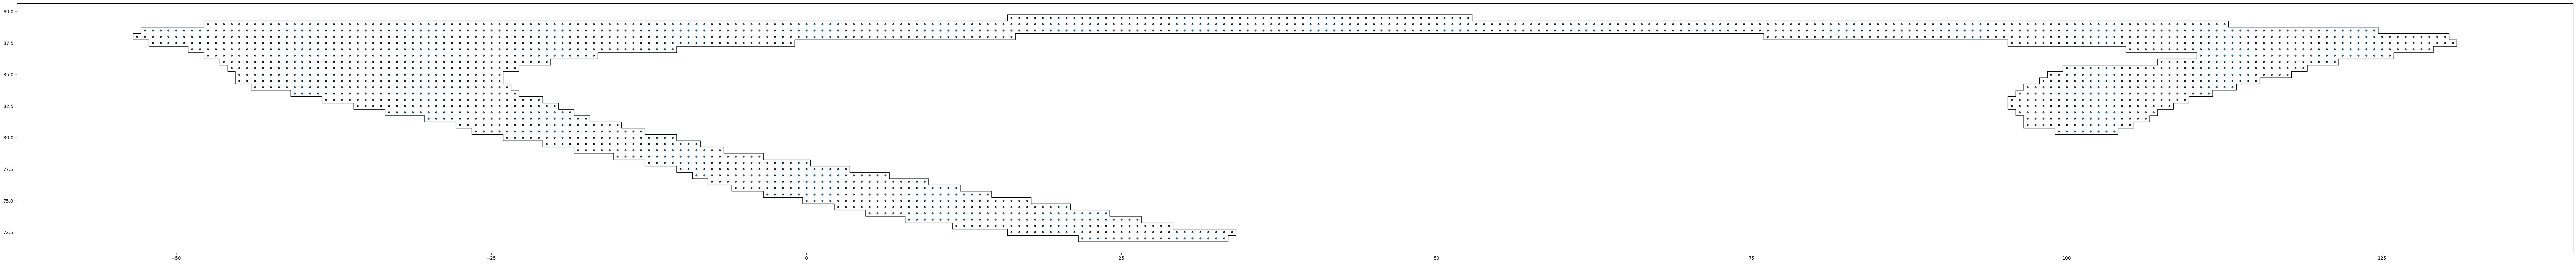

In [23]:
AR = { "_id" : "2000.07.028.018.0_19", "timestamp" : ISODate("2000-07-28T18:00:00Z"), "raster" : [ [ 21.875, 72, [ 254.05516052246094 ] ], [ 22.5, 72, [ 265.0243225097656 ] ], [ 23.125, 72, [ 276.5491638183594 ] ], [ 23.75, 72, [ 288.3659362792969 ] ], [ 24.375, 72, [ 291.9342346191406 ] ], [ 25, 72, [ 289.3663024902344 ] ], [ 25.625, 72, [ 288.4393005371094 ] ], [ 26.25, 72, [ 288.3694152832031 ] ], [ 26.875, 72, [ 290.8580627441406 ] ], [ 27.5, 72, [ 288.45928955078125 ] ], [ 28.125, 72, [ 282.3158264160156 ] ], [ 28.75, 72, [ 276.4962158203125 ] ], [ 29.375, 72, [ 273.9441833496094 ] ], [ 30, 72, [ 274.19586181640625 ] ], [ 30.625, 72, [ 267.71014404296875 ] ], [ 31.25, 72, [ 262.57879638671875 ] ], [ 31.875, 72, [ 260.1515808105469 ] ], [ 32.5, 72, [ 259.9126892089844 ] ], [ 33.125, 72, [ 250.6261749267578 ] ], [ 16.25, 72.5, [ 260.917236328125 ] ], [ 16.875, 72.5, [ 273.1718444824219 ] ], [ 17.5, 72.5, [ 283.3075866699219 ] ], [ 18.125, 72.5, [ 291.94403076171875 ] ], [ 18.75, 72.5, [ 300.9569396972656 ] ], [ 19.375, 72.5, [ 309.26275634765625 ] ], [ 20, 72.5, [ 316.8983154296875 ] ], [ 20.625, 72.5, [ 324.1640930175781 ] ], [ 21.25, 72.5, [ 332.8775634765625 ] ], [ 21.875, 72.5, [ 331.7944641113281 ] ], [ 22.5, 72.5, [ 327.0892333984375 ] ], [ 23.125, 72.5, [ 323.9051513671875 ] ], [ 23.75, 72.5, [ 320.9186096191406 ] ], [ 24.375, 72.5, [ 317.4277038574219 ] ], [ 25, 72.5, [ 310.83843994140625 ] ], [ 25.625, 72.5, [ 301.53424072265625 ] ], [ 26.25, 72.5, [ 292.4931945800781 ] ], [ 26.875, 72.5, [ 283.744873046875 ] ], [ 27.5, 72.5, [ 278.2561340332031 ] ], [ 28.125, 72.5, [ 274.7969665527344 ] ], [ 28.75, 72.5, [ 271.4104309082031 ] ], [ 29.375, 72.5, [ 268.0395202636719 ] ], [ 30, 72.5, [ 265.51568603515625 ] ], [ 30.625, 72.5, [ 264.74859619140625 ] ], [ 31.25, 72.5, [ 263.229248046875 ] ], [ 31.875, 72.5, [ 260.6502685546875 ] ], [ 32.5, 72.5, [ 257.04638671875 ] ], [ 33.125, 72.5, [ 254.9422607421875 ] ], [ 33.75, 72.5, [ 252.49627685546875 ] ], [ 11.875, 73, [ 258.7759094238281 ] ], [ 12.5, 73, [ 274.71514892578125 ] ], [ 13.125, 73, [ 291.6324157714844 ] ], [ 13.75, 73, [ 308.3415832519531 ] ], [ 14.375, 73, [ 323.2071228027344 ] ], [ 15, 73, [ 336.4242858886719 ] ], [ 15.625, 73, [ 348.3216552734375 ] ], [ 16.25, 73, [ 358.9957580566406 ] ], [ 16.875, 73, [ 370.8440246582031 ] ], [ 17.5, 73, [ 383.25372314453125 ] ], [ 18.125, 73, [ 393.5571594238281 ] ], [ 18.75, 73, [ 394.4394836425781 ] ], [ 19.375, 73, [ 391.39752197265625 ] ], [ 20, 73, [ 385.2467346191406 ] ], [ 20.625, 73, [ 379.8183898925781 ] ], [ 21.25, 73, [ 376.0652160644531 ] ], [ 21.875, 73, [ 372.26348876953125 ] ], [ 22.5, 73, [ 358.25506591796875 ] ], [ 23.125, 73, [ 342.50958251953125 ] ], [ 23.75, 73, [ 328.3450927734375 ] ], [ 24.375, 73, [ 315.3971862792969 ] ], [ 25, 73, [ 302.2239685058594 ] ], [ 25.625, 73, [ 289.0864562988281 ] ], [ 26.25, 73, [ 278.8165283203125 ] ], [ 26.875, 73, [ 271.6096496582031 ] ], [ 27.5, 73, [ 264.417236328125 ] ], [ 28.125, 73, [ 257.16644287109375 ] ], [ 28.75, 73, [ 252.12315368652344 ] ], [ 8.125, 73.5, [ 254.6668701171875 ] ], [ 8.75, 73.5, [ 269.6167297363281 ] ], [ 9.375, 73.5, [ 285.8588562011719 ] ], [ 10, 73.5, [ 303.58380126953125 ] ], [ 10.625, 73.5, [ 320.1163024902344 ] ], [ 11.25, 73.5, [ 336.39581298828125 ] ], [ 11.875, 73.5, [ 352.6526184082031 ] ], [ 12.5, 73.5, [ 367.5993957519531 ] ], [ 13.125, 73.5, [ 381.9479675292969 ] ], [ 13.75, 73.5, [ 396.4552001953125 ] ], [ 14.375, 73.5, [ 410.5782470703125 ] ], [ 15, 73.5, [ 417.8029479980469 ] ], [ 15.625, 73.5, [ 418.638427734375 ] ], [ 16.25, 73.5, [ 419.29266357421875 ] ], [ 16.875, 73.5, [ 418.321044921875 ] ], [ 17.5, 73.5, [ 417.4162902832031 ] ], [ 18.125, 73.5, [ 416.5484924316406 ] ], [ 18.75, 73.5, [ 414.67626953125 ] ], [ 19.375, 73.5, [ 405.97418212890625 ] ], [ 20, 73.5, [ 393.6792297363281 ] ], [ 20.625, 73.5, [ 381.2032470703125 ] ], [ 21.25, 73.5, [ 367.4600830078125 ] ], [ 21.875, 73.5, [ 354.9840087890625 ] ], [ 22.5, 73.5, [ 343.78033447265625 ] ], [ 23.125, 73.5, [ 312.8411865234375 ] ], [ 23.75, 73.5, [ 298.0394592285156 ] ], [ 24.375, 73.5, [ 285.82574462890625 ] ], [ 25, 73.5, [ 276.1740417480469 ] ], [ 25.625, 73.5, [ 279.361083984375 ] ], [ 26.25, 73.5, [ 255.21034240722656 ] ], [ 5, 74, [ 250.2361602783203 ] ], [ 5.625, 74, [ 268.14508056640625 ] ], [ 6.25, 74, [ 287.0782775878906 ] ], [ 6.875, 74, [ 306.4405822753906 ] ], [ 7.5, 74, [ 325.2276611328125 ] ], [ 8.125, 74, [ 344.7489013671875 ] ], [ 8.75, 74, [ 364.8306579589844 ] ], [ 9.375, 74, [ 382.585205078125 ] ], [ 10, 74, [ 400.7364196777344 ] ], [ 10.625, 74, [ 411.1357116699219 ] ], [ 11.25, 74, [ 415.4814147949219 ] ], [ 11.875, 74, [ 418.9800720214844 ] ], [ 12.5, 74, [ 422.3359069824219 ] ], [ 13.125, 74, [ 425.12255859375 ] ], [ 13.75, 74, [ 427.0623779296875 ] ], [ 14.375, 74, [ 428.8932189941406 ] ], [ 15, 74, [ 430.583251953125 ] ], [ 15.625, 74, [ 426.91778564453125 ] ], [ 16.25, 74, [ 417.9367980957031 ] ], [ 16.875, 74, [ 408.7459411621094 ] ], [ 17.5, 74, [ 398.7588195800781 ] ], [ 18.125, 74, [ 388.09375 ] ], [ 18.75, 74, [ 377.2747802734375 ] ], [ 19.375, 74, [ 366.33087158203125 ] ], [ 20, 74, [ 335.3379211425781 ] ], [ 20.625, 74, [ 319.5866394042969 ] ], [ 21.25, 74, [ 304.41912841796875 ] ], [ 21.875, 74, [ 290.1366882324219 ] ], [ 22.5, 74, [ 277.4248352050781 ] ], [ 23.125, 74, [ 265.9716491699219 ] ], [ 23.75, 74, [ 255.45269775390625 ] ], [ 2.5, 74.5, [ 261.30950927734375 ] ], [ 3.125, 74.5, [ 280.27801513671875 ] ], [ 3.75, 74.5, [ 299.1224670410156 ] ], [ 4.375, 74.5, [ 317.8748779296875 ] ], [ 5, 74.5, [ 335.9730224609375 ] ], [ 5.625, 74.5, [ 351.9343566894531 ] ], [ 6.25, 74.5, [ 366.49176025390625 ] ], [ 6.875, 74.5, [ 380.2083740234375 ] ], [ 7.5, 74.5, [ 392.0081787109375 ] ], [ 8.125, 74.5, [ 401.3778381347656 ] ], [ 8.75, 74.5, [ 409.85076904296875 ] ], [ 9.375, 74.5, [ 417.3031311035156 ] ], [ 10, 74.5, [ 422.3646545410156 ] ], [ 10.625, 74.5, [ 426.79534912109375 ] ], [ 11.25, 74.5, [ 425.9212951660156 ] ], [ 11.875, 74.5, [ 421.2906188964844 ] ], [ 12.5, 74.5, [ 416.1271667480469 ] ], [ 13.125, 74.5, [ 410.6800842285156 ] ], [ 13.75, 74.5, [ 404.7359924316406 ] ], [ 14.375, 74.5, [ 397.9383239746094 ] ], [ 15, 74.5, [ 390.8641357421875 ] ], [ 15.625, 74.5, [ 383.5338134765625 ] ], [ 16.25, 74.5, [ 356.6175537109375 ] ], [ 16.875, 74.5, [ 342.73712158203125 ] ], [ 17.5, 74.5, [ 328.6707458496094 ] ], [ 18.125, 74.5, [ 314.46112060546875 ] ], [ 18.75, 74.5, [ 299.8338623046875 ] ], [ 19.375, 74.5, [ 285.39324951171875 ] ], [ 20, 74.5, [ 271.2088623046875 ] ], [ 20.625, 74.5, [ 257.4563903808594 ] ], [ -5.920304394294029e-13, 75, [ 265.958251953125 ] ], [ 0.625, 75, [ 283.28076171875 ] ], [ 1.25, 75, [ 301.3388671875 ] ], [ 1.875, 75, [ 319.0777282714844 ] ], [ 2.5, 75, [ 336.6475830078125 ] ], [ 3.125, 75, [ 354.4476623535156 ] ], [ 3.75, 75, [ 371.4499206542969 ] ], [ 4.375, 75, [ 385.8929443359375 ] ], [ 5, 75, [ 397.1269836425781 ] ], [ 5.625, 75, [ 403.5409240722656 ] ], [ 6.25, 75, [ 405.80255126953125 ] ], [ 6.875, 75, [ 406.5498962402344 ] ], [ 7.5, 75, [ 406.3249816894531 ] ], [ 8.125, 75, [ 404.9515075683594 ] ], [ 8.75, 75, [ 402.4222106933594 ] ], [ 9.375, 75, [ 399.13555908203125 ] ], [ 10, 75, [ 395.0599060058594 ] ], [ 10.625, 75, [ 390.7309265136719 ] ], [ 11.25, 75, [ 385.9786376953125 ] ], [ 11.875, 75, [ 363.0033264160156 ] ], [ 12.5, 75, [ 353.9884948730469 ] ], [ 13.125, 75, [ 344.5835266113281 ] ], [ 13.75, 75, [ 334.3798522949219 ] ], [ 14.375, 75, [ 323.3570251464844 ] ], [ 15, 75, [ 311.6965637207031 ] ], [ 15.625, 75, [ 299.5565490722656 ] ], [ 16.25, 75, [ 286.95733642578125 ] ], [ 16.875, 75, [ 273.9486389160156 ] ], [ 17.5, 75, [ 261.1309509277344 ] ], [ -3.125, 75.5, [ 252.91836547851562 ] ], [ -2.5, 75.5, [ 271.6353454589844 ] ], [ -1.875, 75.5, [ 287.24920654296875 ] ], [ -1.25, 75.5, [ 303.0210266113281 ] ], [ -0.625, 75.5, [ 318.8548583984375 ] ], [ -5.920304394294029e-13, 75.5, [ 333.1684265136719 ] ], [ 0.625, 75.5, [ 345.65484619140625 ] ], [ 1.25, 75.5, [ 357.9222717285156 ] ], [ 1.875, 75.5, [ 369.8257751464844 ] ], [ 2.5, 75.5, [ 378.0573425292969 ] ], [ 3.125, 75.5, [ 385.5057678222656 ] ], [ 3.75, 75.5, [ 392.146484375 ] ], [ 4.375, 75.5, [ 396.22662353515625 ] ], [ 5, 75.5, [ 397.559814453125 ] ], [ 5.625, 75.5, [ 397.4202880859375 ] ], [ 6.25, 75.5, [ 392.4991149902344 ] ], [ 6.875, 75.5, [ 385.5299377441406 ] ], [ 7.5, 75.5, [ 378.4736328125 ] ], [ 8.125, 75.5, [ 371.39569091796875 ] ], [ 8.75, 75.5, [ 351.0487365722656 ] ], [ 9.375, 75.5, [ 344.0216064453125 ] ], [ 10, 75.5, [ 336.5793762207031 ] ], [ 10.625, 75.5, [ 328.6796569824219 ] ], [ 11.25, 75.5, [ 319.7830810546875 ] ], [ 11.875, 75.5, [ 309.76385498046875 ] ], [ 12.5, 75.5, [ 298.4669189453125 ] ], [ 13.125, 75.5, [ 285.46063232421875 ] ], [ 13.75, 75.5, [ 273.341064453125 ] ], [ 14.375, 75.5, [ 260.9079284667969 ] ], [ -5.625, 76, [ 257.3924865722656 ] ], [ -5, 76, [ 274.1256103515625 ] ], [ -4.375, 76, [ 290.6965637207031 ] ], [ -3.75, 76, [ 302.8869323730469 ] ], [ -3.125, 76, [ 314.9481201171875 ] ], [ -2.5, 76, [ 326.81146240234375 ] ], [ -1.875, 76, [ 336.829345703125 ] ], [ -1.25, 76, [ 345.0105895996094 ] ], [ -0.625, 76, [ 352.89068603515625 ] ], [ -5.920304394294029e-13, 76, [ 360.3561096191406 ] ], [ 0.625, 76, [ 364.7790832519531 ] ], [ 1.25, 76, [ 368.419189453125 ] ], [ 1.875, 76, [ 371.4205017089844 ] ], [ 2.5, 76, [ 372.73309326171875 ] ], [ 3.125, 76, [ 370.5239562988281 ] ], [ 3.75, 76, [ 367.6746520996094 ] ], [ 4.375, 76, [ 364.2903747558594 ] ], [ 5, 76, [ 359.48602294921875 ] ], [ 5.625, 76, [ 353.4158630371094 ] ], [ 6.25, 76, [ 346.95184326171875 ] ], [ 6.875, 76, [ 327.564453125 ] ], [ 7.5, 76, [ 321.34149169921875 ] ], [ 8.125, 76, [ 314.8207092285156 ] ], [ 8.75, 76, [ 307.77813720703125 ] ], [ 9.375, 76, [ 300.1180114746094 ] ], [ 10, 76, [ 291.02630615234375 ] ], [ 10.625, 76, [ 281.070068359375 ] ], [ 11.25, 76, [ 270.2196044921875 ] ], [ 11.875, 76, [ 258.2388916015625 ] ], [ -7.5, 76.5, [ 254.5955352783203 ] ], [ -6.875, 76.5, [ 269.2088317871094 ] ], [ -6.25, 76.5, [ 282.3888244628906 ] ], [ -5.625, 76.5, [ 293.67730712890625 ] ], [ -5, 76.5, [ 304.6225280761719 ] ], [ -4.375, 76.5, [ 314.3730163574219 ] ], [ -3.75, 76.5, [ 321.4972229003906 ] ], [ -3.125, 76.5, [ 327.5428771972656 ] ], [ -2.5, 76.5, [ 333.3117980957031 ] ], [ -1.875, 76.5, [ 338.75579833984375 ] ], [ -1.25, 76.5, [ 341.94769287109375 ] ], [ -0.625, 76.5, [ 344.7220153808594 ] ], [ -5.920304394294029e-13, 76.5, [ 347.03204345703125 ] ], [ 0.625, 76.5, [ 347.76947021484375 ] ], [ 1.25, 76.5, [ 345.4737243652344 ] ], [ 1.875, 76.5, [ 342.54248046875 ] ], [ 2.5, 76.5, [ 339.1277770996094 ] ], [ 3.125, 76.5, [ 334.28271484375 ] ], [ 3.75, 76.5, [ 328.3356018066406 ] ], [ 4.375, 76.5, [ 322.30499267578125 ] ], [ 5, 76.5, [ 316.0944519042969 ] ], [ 5.625, 76.5, [ 300.3974914550781 ] ], [ 6.25, 76.5, [ 294.8523254394531 ] ], [ 6.875, 76.5, [ 289.2851867675781 ] ], [ 7.5, 76.5, [ 283.0605163574219 ] ], [ 8.125, 76.5, [ 274.0719299316406 ] ], [ 8.75, 76.5, [ 263.88018798828125 ] ], [ 9.375, 76.5, [ 252.64288330078125 ] ], [ -8.75, 77, [ 253.48167419433594 ] ], [ -8.125, 77, [ 262.0550537109375 ] ], [ -7.5, 77, [ 270.6214904785156 ] ], [ -6.875, 77, [ 279.09033203125 ] ], [ -6.25, 77, [ 287.2975158691406 ] ], [ -5.625, 77, [ 294.9561462402344 ] ], [ -5, 77, [ 302.6278381347656 ] ], [ -4.375, 77, [ 310.3212585449219 ] ], [ -3.75, 77, [ 316.5198974609375 ] ], [ -3.125, 77, [ 320.1264343261719 ] ], [ -2.5, 77, [ 323.40899658203125 ] ], [ -1.875, 77, [ 326.27020263671875 ] ], [ -1.25, 77, [ 326.62957763671875 ] ], [ -0.625, 77, [ 324.48760986328125 ] ], [ -5.920304394294029e-13, 77, [ 321.87384033203125 ] ], [ 0.625, 77, [ 318.7210388183594 ] ], [ 1.25, 77, [ 313.6001281738281 ] ], [ 1.875, 77, [ 307.3835144042969 ] ], [ 2.5, 77, [ 301.0841979980469 ] ], [ 3.125, 77, [ 294.6382751464844 ] ], [ 3.75, 77, [ 280.4991760253906 ] ], [ 4.375, 77, [ 274.40771484375 ] ], [ 5, 77, [ 267.9453430175781 ] ], [ 5.625, 77, [ 261.0205078125 ] ], [ 6.25, 77, [ 253.0924072265625 ] ], [ -10, 77.5, [ 256.66351318359375 ] ], [ -9.375, 77.5, [ 266.0854187011719 ] ], [ -8.75, 77.5, [ 275.8481140136719 ] ], [ -8.125, 77.5, [ 281.6965026855469 ] ], [ -7.5, 77.5, [ 287.95953369140625 ] ], [ -6.875, 77.5, [ 294.5818176269531 ] ], [ -6.25, 77.5, [ 301.5539855957031 ] ], [ -5.625, 77.5, [ 306.2563781738281 ] ], [ -5, 77.5, [ 311.1356201171875 ] ], [ -4.375, 77.5, [ 316.17608642578125 ] ], [ -3.75, 77.5, [ 321.337646484375 ] ], [ -3.125, 77.5, [ 319.2232360839844 ] ], [ -2.5, 77.5, [ 316.7844543457031 ] ], [ -1.875, 77.5, [ 314.0972900390625 ] ], [ -1.25, 77.5, [ 310.2306823730469 ] ], [ -0.625, 77.5, [ 302.28350830078125 ] ], [ -5.920304394294029e-13, 77.5, [ 294.2330322265625 ] ], [ 0.625, 77.5, [ 286.2747497558594 ] ], [ 1.25, 77.5, [ 278.3514099121094 ] ], [ 1.875, 77.5, [ 271.1227722167969 ] ], [ 2.5, 77.5, [ 263.4793701171875 ] ], [ 3.125, 77.5, [ 255.18809509277344 ] ], [ -12.5, 78, [ 257.3316345214844 ] ], [ -11.875, 78, [ 268.83306884765625 ] ], [ -11.25, 78, [ 280.1531982421875 ] ], [ -10.625, 78, [ 285.5774230957031 ] ], [ -10, 78, [ 291.6623840332031 ] ], [ -9.375, 78, [ 298.2828369140625 ] ], [ -8.75, 78, [ 305.4769287109375 ] ], [ -8.125, 78, [ 307.57989501953125 ] ], [ -7.5, 78, [ 309.48492431640625 ] ], [ -6.875, 78, [ 311.6852722167969 ] ], [ -6.25, 78, [ 314.156982421875 ] ], [ -5.625, 78, [ 312.66656494140625 ] ], [ -5, 78, [ 309.5920104980469 ] ], [ -4.375, 78, [ 306.30401611328125 ] ], [ -3.75, 78, [ 302.69879150390625 ] ], [ -3.125, 78, [ 296.36773681640625 ] ], [ -2.5, 78, [ 287.8945007324219 ] ], [ -1.875, 78, [ 279.24163818359375 ] ], [ -1.25, 78, [ 270.4273376464844 ] ], [ -0.625, 78, [ 262.10577392578125 ] ], [ -5.920304394294029e-13, 78, [ 254.51409912109375 ] ], [ -15, 78.5, [ 263.10968017578125 ] ], [ -14.375, 78.5, [ 277.5797119140625 ] ], [ -13.75, 78.5, [ 288.34796142578125 ] ], [ -13.125, 78.5, [ 296.27166748046875 ] ], [ -12.5, 78.5, [ 304.8640441894531 ] ], [ -11.875, 78.5, [ 314.1333312988281 ] ], [ -11.25, 78.5, [ 321.92144775390625 ] ], [ -10.625, 78.5, [ 320.7398681640625 ] ], [ -10, 78.5, [ 320.0754699707031 ] ], [ -9.375, 78.5, [ 319.8627014160156 ] ], [ -8.75, 78.5, [ 320.0194091796875 ] ], [ -8.125, 78.5, [ 315.51495361328125 ] ], [ -7.5, 78.5, [ 309.9294738769531 ] ], [ -6.875, 78.5, [ 304.24383544921875 ] ], [ -6.25, 78.5, [ 298.36334228515625 ] ], [ -5.625, 78.5, [ 289.79473876953125 ] ], [ -5, 78.5, [ 278.03143310546875 ] ], [ -4.375, 78.5, [ 265.905029296875 ] ], [ -3.75, 78.5, [ 253.39820861816406 ] ], [ -18.125, 79, [ 257.1459045410156 ] ], [ -17.5, 79, [ 268.0196838378906 ] ], [ -16.875, 79, [ 278.7510986328125 ] ], [ -16.25, 79, [ 290.0090637207031 ] ], [ -15.625, 79, [ 302.0801086425781 ] ], [ -15, 79, [ 314.931640625 ] ], [ -14.375, 79, [ 328.61834716796875 ] ], [ -13.75, 79, [ 331.2925109863281 ] ], [ -13.125, 79, [ 332.4529724121094 ] ], [ -12.5, 79, [ 334.1214904785156 ] ], [ -11.875, 79, [ 336.18853759765625 ] ], [ -11.25, 79, [ 335.68988037109375 ] ], [ -10.625, 79, [ 327.8261413574219 ] ], [ -10, 79, [ 320.0900573730469 ] ], [ -9.375, 79, [ 312.46722412109375 ] ], [ -8.75, 79, [ 304.88922119140625 ] ], [ -8.125, 79, [ 292.39764404296875 ] ], [ -7.5, 79, [ 277.6461181640625 ] ], [ -6.875, 79, [ 262.6252136230469 ] ], [ -20.625, 79.5, [ 259.0936279296875 ] ], [ -20, 79.5, [ 269.9434509277344 ] ], [ -19.375, 79.5, [ 282.41265869140625 ] ], [ -18.75, 79.5, [ 295.3841247558594 ] ], [ -18.125, 79.5, [ 308.96881103515625 ] ], [ -17.5, 79.5, [ 333.21807861328125 ] ], [ -16.875, 79.5, [ 336.4217224121094 ] ], [ -16.25, 79.5, [ 340.1142272949219 ] ], [ -15.625, 79.5, [ 344.4474792480469 ] ], [ -15, 79.5, [ 349.4368591308594 ] ], [ -14.375, 79.5, [ 352.8154602050781 ] ], [ -13.75, 79.5, [ 346.5098876953125 ] ], [ -13.125, 79.5, [ 340.3096008300781 ] ], [ -12.5, 79.5, [ 334.1413269042969 ] ], [ -11.875, 79.5, [ 327.9702453613281 ] ], [ -11.25, 79.5, [ 318.42236328125 ] ], [ -10.625, 79.5, [ 303.7109069824219 ] ], [ -10, 79.5, [ 288.9532775878906 ] ], [ -9.375, 79.5, [ 274.1248474121094 ] ], [ -8.75, 79.5, [ 259.1535949707031 ] ], [ -23.75, 80, [ 271.7315979003906 ] ], [ -23.125, 80, [ 278.7362060546875 ] ], [ -22.5, 80, [ 285.81060791015625 ] ], [ -21.875, 80, [ 292.9442443847656 ] ], [ -21.25, 80, [ 300.1945495605469 ] ], [ -20.625, 80, [ 307.0963134765625 ] ], [ -20, 80, [ 314.7393493652344 ] ], [ -19.375, 80, [ 323.2860412597656 ] ], [ -18.75, 80, [ 345.23681640625 ] ], [ -18.125, 80, [ 355.3199157714844 ] ], [ -17.5, 80, [ 356.9085388183594 ] ], [ -16.875, 80, [ 352.8954772949219 ] ], [ -16.25, 80, [ 349.1990966796875 ] ], [ -15.625, 80, [ 358.86737060546875 ] ], [ -15, 80, [ 355.88665771484375 ] ], [ -14.375, 80, [ 346.7230529785156 ] ], [ -13.75, 80, [ 332.38818359375 ] ], [ -13.125, 80, [ 317.99566650390625 ] ], [ -12.5, 80, [ 303.5313720703125 ] ], [ -11.875, 80, [ 288.90179443359375 ] ], [ -11.25, 80, [ 271.5362243652344 ] ], [ -10.625, 80, [ 251.80130004882812 ] ], [ -26.25, 80.5, [ 262.3276672363281 ] ], [ -25.625, 80.5, [ 288.9559326171875 ] ], [ -25, 80.5, [ 298.9309387207031 ] ], [ -24.375, 80.5, [ 305.79315185546875 ] ], [ -23.75, 80.5, [ 313.0536193847656 ] ], [ -23.125, 80.5, [ 320.67205810546875 ] ], [ -22.5, 80.5, [ 328.6524963378906 ] ], [ -21.875, 80.5, [ 336.9632263183594 ] ], [ -21.25, 80.5, [ 340.5588684082031 ] ], [ -20.625, 80.5, [ 343.7850036621094 ] ], [ -20, 80.5, [ 347.3257141113281 ] ], [ -19.375, 80.5, [ 351.1954040527344 ] ], [ -18.75, 80.5, [ 355.4100646972656 ] ], [ -18.125, 80.5, [ 355.8744812011719 ] ], [ -17.5, 80.5, [ 346.92327880859375 ] ], [ -16.875, 80.5, [ 350.65557861328125 ] ], [ -16.25, 80.5, [ 341.87664794921875 ] ], [ -15.625, 80.5, [ 333.1452331542969 ] ], [ -15, 80.5, [ 337.04791259765625 ] ], [ -14.375, 80.5, [ 314.1012878417969 ] ], [ -13.75, 80.5, [ 290.7279968261719 ] ], [ -13.125, 80.5, [ 267.4064636230469 ] ], [ 99.375, 80.5, [ 250.61795043945312 ] ], [ 100, 80.5, [ 254.33416748046875 ] ], [ 100.625, 80.5, [ 258.15496826171875 ] ], [ 101.25, 80.5, [ 262.1250305175781 ] ], [ 101.875, 80.5, [ 266.1596984863281 ] ], [ 102.5, 80.5, [ 263.243408203125 ] ], [ 103.125, 80.5, [ 256.81903076171875 ] ], [ 103.75, 80.5, [ 250.26556396484375 ] ], [ -27.5, 81, [ 258.7073059082031 ] ], [ -26.875, 81, [ 284.6439514160156 ] ], [ -26.25, 81, [ 295.5 ] ], [ -25.625, 81, [ 302.7732849121094 ] ], [ -25, 81, [ 320.8362121582031 ] ], [ -24.375, 81, [ 325.6683044433594 ] ], [ -23.75, 81, [ 331.1344299316406 ] ], [ -23.125, 81, [ 337.1280517578125 ] ], [ -22.5, 81, [ 343.6021728515625 ] ], [ -21.875, 81, [ 345.3606262207031 ] ], [ -21.25, 81, [ 345.6348571777344 ] ], [ -20.625, 81, [ 346.08685302734375 ] ], [ -20, 81, [ 346.7218017578125 ] ], [ -19.375, 81, [ 347.4167175292969 ] ], [ -18.75, 81, [ 347.42547607421875 ] ], [ -18.125, 81, [ 331.5727844238281 ] ], [ -17.5, 81, [ 316.0634460449219 ] ], [ -16.875, 81, [ 300.7635192871094 ] ], [ -16.25, 81, [ 296.8799743652344 ] ], [ -15.625, 81, [ 281.8891906738281 ] ], [ -15, 81, [ 263.2390441894531 ] ], [ 96.875, 81, [ 250.30364990234375 ] ], [ 97.5, 81, [ 255.91799926757812 ] ], [ 98.125, 81, [ 261.6399841308594 ] ], [ 98.75, 81, [ 266.348876953125 ] ], [ 99.375, 81, [ 271.49310302734375 ] ], [ 100, 81, [ 274.0902404785156 ] ], [ 100.625, 81, [ 274.670166015625 ] ], [ 101.25, 81, [ 275.3039855957031 ] ], [ 101.875, 81, [ 275.97760009765625 ] ], [ 102.5, 81, [ 276.6807861328125 ] ], [ 103.125, 81, [ 277.3828430175781 ] ], [ 103.75, 81, [ 272.0704040527344 ] ], [ 104.375, 81, [ 262.0912780761719 ] ], [ 105, 81, [ 252.1379852294922 ] ], [ -30, 81.5, [ 256.87384033203125 ] ], [ -29.375, 81.5, [ 264.8174743652344 ] ], [ -28.75, 81.5, [ 273.5395202636719 ] ], [ -28.125, 81.5, [ 282.7755432128906 ] ], [ -27.5, 81.5, [ 300.8979187011719 ] ], [ -26.875, 81.5, [ 310.6152648925781 ] ], [ -26.25, 81.5, [ 314.760498046875 ] ], [ -25.625, 81.5, [ 319.03436279296875 ] ], [ -25, 81.5, [ 323.4042663574219 ] ], [ -24.375, 81.5, [ 327.7469177246094 ] ], [ -23.75, 81.5, [ 342.849365234375 ] ], [ -23.125, 81.5, [ 347.6690673828125 ] ], [ -22.5, 81.5, [ 345.1533508300781 ] ], [ -21.875, 81.5, [ 342.3516540527344 ] ], [ -21.25, 81.5, [ 339.6240539550781 ] ], [ -20.625, 81.5, [ 336.9792175292969 ] ], [ -20, 81.5, [ 334.426025390625 ] ], [ -19.375, 81.5, [ 332.0431213378906 ] ], [ -18.75, 81.5, [ 310.1853942871094 ] ], [ -18.125, 81.5, [ 286.25701904296875 ] ], [ -17.5, 81.5, [ 262.3274230957031 ] ], [ 96.875, 81.5, [ 252.70547485351562 ] ], [ 97.5, 81.5, [ 257.52825927734375 ] ], [ 98.125, 81.5, [ 262.41607666015625 ] ], [ 98.75, 81.5, [ 267.91778564453125 ] ], [ 99.375, 81.5, [ 274.0401916503906 ] ], [ 100, 81.5, [ 280.9356384277344 ] ], [ 100.625, 81.5, [ 288.2816162109375 ] ], [ 101.25, 81.5, [ 289.8538818359375 ] ], [ 101.875, 81.5, [ 287.8687438964844 ] ], [ 102.5, 81.5, [ 285.76141357421875 ] ], [ 103.125, 81.5, [ 283.5173645019531 ] ], [ 103.75, 81.5, [ 281.092041015625 ] ], [ 104.375, 81.5, [ 278.4822998046875 ] ], [ 105, 81.5, [ 274.1038513183594 ] ], [ 105.625, 81.5, [ 262.333740234375 ] ], [ 106.25, 81.5, [ 250.7523651123047 ] ], [ -33.125, 82, [ 255.86183166503906 ] ], [ -32.5, 82, [ 275.7777099609375 ] ], [ -31.875, 82, [ 284.36151123046875 ] ], [ -31.25, 82, [ 293.2986145019531 ] ], [ -30.625, 82, [ 301.12017822265625 ] ], [ -30, 82, [ 309.0315246582031 ] ], [ -29.375, 82, [ 316.9870910644531 ] ], [ -28.75, 82, [ 324.9761047363281 ] ], [ -28.125, 82, [ 333.0387878417969 ] ], [ -27.5, 82, [ 334.0750427246094 ] ], [ -26.875, 82, [ 346.5318908691406 ] ], [ -26.25, 82, [ 347.3282775878906 ] ], [ -25.625, 82, [ 348.5816955566406 ] ], [ -25, 82, [ 350.1341552734375 ] ], [ -24.375, 82, [ 352.052978515625 ] ], [ -23.75, 82, [ 350.9050598144531 ] ], [ -23.125, 82, [ 342.4262390136719 ] ], [ -22.5, 82, [ 334.31036376953125 ] ], [ -21.875, 82, [ 338.1044921875 ] ], [ -21.25, 82, [ 330.82305908203125 ] ], [ -20.625, 82, [ 323.88189697265625 ] ], [ -20, 82, [ 317.1819763183594 ] ], [ -19.375, 82, [ 293.4248352050781 ] ], [ -18.75, 82, [ 266.4344787597656 ] ], [ 96.25, 82, [ 251.84214782714844 ] ], [ 96.875, 82, [ 259.6451110839844 ] ], [ 97.5, 82, [ 267.4717102050781 ] ], [ 98.125, 82, [ 274.8703308105469 ] ], [ 98.75, 82, [ 279.2566223144531 ] ], [ 99.375, 82, [ 283.88232421875 ] ], [ 100, 82, [ 288.74310302734375 ] ], [ 100.625, 82, [ 293.8697204589844 ] ], [ 101.25, 82, [ 299.2054138183594 ] ], [ 101.875, 82, [ 303.3684387207031 ] ], [ 102.5, 82, [ 303.3976135253906 ] ], [ 103.125, 82, [ 297.3928527832031 ] ], [ 103.75, 82, [ 291.5249938964844 ] ], [ 104.375, 82, [ 285.8279724121094 ] ], [ 105, 82, [ 280.2305603027344 ] ], [ 105.625, 82, [ 274.7622985839844 ] ], [ 106.25, 82, [ 269.364990234375 ] ], [ 106.875, 82, [ 260.87890625 ] ], [ -35.625, 82.5, [ 252.7164306640625 ] ], [ -35, 82.5, [ 261.1761779785156 ] ], [ -34.375, 82.5, [ 269.6365966796875 ] ], [ -33.75, 82.5, [ 277.85284423828125 ] ], [ -33.125, 82.5, [ 284.28997802734375 ] ], [ -32.5, 82.5, [ 290.7288818359375 ] ], [ -31.875, 82.5, [ 297.53857421875 ] ], [ -31.25, 82.5, [ 304.8526916503906 ] ], [ -30.625, 82.5, [ 312.7040100097656 ] ], [ -30, 82.5, [ 321.2642517089844 ] ], [ -29.375, 82.5, [ 330.55828857421875 ] ], [ -28.75, 82.5, [ 331.2071838378906 ] ], [ -28.125, 82.5, [ 347.4837951660156 ] ], [ -27.5, 82.5, [ 347.7510681152344 ] ], [ -26.875, 82.5, [ 348.2494201660156 ] ], [ -26.25, 82.5, [ 348.9673156738281 ] ], [ -25.625, 82.5, [ 349.9099426269531 ] ], [ -25, 82.5, [ 365.3797912597656 ] ], [ -24.375, 82.5, [ 354.5693664550781 ] ], [ -23.75, 82.5, [ 341.5845947265625 ] ], [ -23.125, 82.5, [ 328.6631164550781 ] ], [ -22.5, 82.5, [ 315.7228088378906 ] ], [ -21.875, 82.5, [ 315.35906982421875 ] ], [ -21.25, 82.5, [ 302.339599609375 ] ], [ -20.625, 82.5, [ 289.20013427734375 ] ], [ -20, 82.5, [ 266.5723876953125 ] ], [ 95.625, 82.5, [ 254.4577178955078 ] ], [ 96.25, 82.5, [ 259.7890930175781 ] ], [ 96.875, 82.5, [ 265.1026916503906 ] ], [ 97.5, 82.5, [ 270.3780822753906 ] ], [ 98.125, 82.5, [ 275.6572570800781 ] ], [ 98.75, 82.5, [ 280.8773498535156 ] ], [ 99.375, 82.5, [ 285.6711120605469 ] ], [ 100, 82.5, [ 286.9891052246094 ] ], [ 100.625, 82.5, [ 288.483642578125 ] ], [ 101.25, 82.5, [ 290.1156005859375 ] ], [ 101.875, 82.5, [ 291.9684143066406 ] ], [ 102.5, 82.5, [ 293.94549560546875 ] ], [ 103.125, 82.5, [ 296.0921325683594 ] ], [ 103.75, 82.5, [ 298.2234802246094 ] ], [ 104.375, 82.5, [ 293.0762023925781 ] ], [ 105, 82.5, [ 286.82086181640625 ] ], [ 105.625, 82.5, [ 280.6376953125 ] ], [ 106.25, 82.5, [ 274.6353759765625 ] ], [ 106.875, 82.5, [ 268.748046875 ] ], [ 107.5, 82.5, [ 262.9759521484375 ] ], [ 108.125, 82.5, [ 257.3330383300781 ] ], [ -38.125, 83, [ 250.79415893554688 ] ], [ -37.5, 83, [ 257.92034912109375 ] ], [ -36.875, 83, [ 265.62164306640625 ] ], [ -36.25, 83, [ 269.34014892578125 ] ], [ -35.625, 83, [ 277.68505859375 ] ], [ -35, 83, [ 283.90289306640625 ] ], [ -34.375, 83, [ 289.4680480957031 ] ], [ -33.75, 83, [ 295.0302429199219 ] ], [ -33.125, 83, [ 300.7569580078125 ] ], [ -32.5, 83, [ 306.7222900390625 ] ], [ -31.875, 83, [ 312.9139404296875 ] ], [ -31.25, 83, [ 319.2715759277344 ] ], [ -30.625, 83, [ 324.438720703125 ] ], [ -30, 83, [ 325.040771484375 ] ], [ -29.375, 83, [ 325.8327331542969 ] ], [ -28.75, 83, [ 337.2635803222656 ] ], [ -28.125, 83, [ 338.8471374511719 ] ], [ -27.5, 83, [ 340.47821044921875 ] ], [ -26.875, 83, [ 342.1260986328125 ] ], [ -26.25, 83, [ 343.76910400390625 ] ], [ -25.625, 83, [ 346.31500244140625 ] ], [ -25, 83, [ 332.7665100097656 ] ], [ -24.375, 83, [ 319.20355224609375 ] ], [ -23.75, 83, [ 305.5738830566406 ] ], [ -23.125, 83, [ 291.8833923339844 ] ], [ -22.5, 83, [ 288.7079772949219 ] ], [ -21.875, 83, [ 274.935546875 ] ], [ -21.25, 83, [ 259.9570007324219 ] ], [ 95.625, 83, [ 256.7237854003906 ] ], [ 96.25, 83, [ 264.7023010253906 ] ], [ 96.875, 83, [ 268.15362548828125 ] ], [ 97.5, 83, [ 271.67333984375 ] ], [ 98.125, 83, [ 275.2740173339844 ] ], [ 98.75, 83, [ 278.97052001953125 ] ], [ 99.375, 83, [ 282.7773132324219 ] ], [ 100, 83, [ 286.72296142578125 ] ], [ 100.625, 83, [ 290.75897216796875 ] ], [ 101.25, 83, [ 291.2220458984375 ] ], [ 101.875, 83, [ 290.6962585449219 ] ], [ 102.5, 83, [ 290.3074035644531 ] ], [ 103.125, 83, [ 290.0258483886719 ] ], [ 103.75, 83, [ 289.846923828125 ] ], [ 104.375, 83, [ 289.7886047363281 ] ], [ 105, 83, [ 289.6762390136719 ] ], [ 105.625, 83, [ 289.5915832519531 ] ], [ 106.25, 83, [ 283.83868408203125 ] ], [ 106.875, 83, [ 277.6075744628906 ] ], [ 107.5, 83, [ 271.5520935058594 ] ], [ 108.125, 83, [ 265.6697998046875 ] ], [ 108.75, 83, [ 259.9700927734375 ] ], [ 109.375, 83, [ 254.45913696289062 ] ], [ -40.625, 83.5, [ 250.52223205566406 ] ], [ -40, 83.5, [ 254.0638427734375 ] ], [ -39.375, 83.5, [ 257.7041320800781 ] ], [ -38.75, 83.5, [ 261.4039306640625 ] ], [ -38.125, 83.5, [ 265.330322265625 ] ], [ -37.5, 83.5, [ 270.9312744140625 ] ], [ -36.875, 83.5, [ 277.2336730957031 ] ], [ -36.25, 83.5, [ 284.0650634765625 ] ], [ -35.625, 83.5, [ 291.02020263671875 ] ], [ -35, 83.5, [ 297.9587707519531 ] ], [ -34.375, 83.5, [ 304.9337158203125 ] ], [ -33.75, 83.5, [ 311.86065673828125 ] ], [ -33.125, 83.5, [ 314.1313171386719 ] ], [ -32.5, 83.5, [ 320.9740295410156 ] ], [ -31.875, 83.5, [ 328.0666809082031 ] ], [ -31.25, 83.5, [ 330.0849304199219 ] ], [ -30.625, 83.5, [ 332.1031799316406 ] ], [ -30, 83.5, [ 334.08526611328125 ] ], [ -29.375, 83.5, [ 335.9586181640625 ] ], [ -28.75, 83.5, [ 337.734375 ] ], [ -28.125, 83.5, [ 339.4479675292969 ] ], [ -27.5, 83.5, [ 341.04315185546875 ] ], [ -26.875, 83.5, [ 340.5728759765625 ] ], [ -26.25, 83.5, [ 327.3782043457031 ] ], [ -25.625, 83.5, [ 314.1535339355469 ] ], [ -25, 83.5, [ 300.8673400878906 ] ], [ -24.375, 83.5, [ 287.5901184082031 ] ], [ -23.75, 83.5, [ 274.2812805175781 ] ], [ -23.125, 83.5, [ 260.92987060546875 ] ], [ 96.25, 83.5, [ 258.04071044921875 ] ], [ 96.875, 83.5, [ 267.2246398925781 ] ], [ 97.5, 83.5, [ 273.7586669921875 ] ], [ 98.125, 83.5, [ 275.35699462890625 ] ], [ 98.75, 83.5, [ 277.0403137207031 ] ], [ 99.375, 83.5, [ 278.8050842285156 ] ], [ 100, 83.5, [ 280.6663513183594 ] ], [ 100.625, 83.5, [ 282.6485595703125 ] ], [ 101.25, 83.5, [ 284.72869873046875 ] ], [ 101.875, 83.5, [ 286.88348388671875 ] ], [ 102.5, 83.5, [ 288.9022521972656 ] ], [ 103.125, 83.5, [ 286.84423828125 ] ], [ 103.75, 83.5, [ 285.0480041503906 ] ], [ 104.375, 83.5, [ 283.4825744628906 ] ], [ 105, 83.5, [ 282.19036865234375 ] ], [ 105.625, 83.5, [ 281.05865478515625 ] ], [ 106.25, 83.5, [ 280.2087707519531 ] ], [ 106.875, 83.5, [ 279.6169738769531 ] ], [ 107.5, 83.5, [ 279.45953369140625 ] ], [ 108.125, 83.5, [ 276.99432373046875 ] ], [ 108.75, 83.5, [ 271.52008056640625 ] ], [ 109.375, 83.5, [ 266.1346435546875 ] ], [ 110, 83.5, [ 260.80035400390625 ] ], [ 110.625, 83.5, [ 255.55401611328125 ] ], [ 111.25, 83.5, [ 250.38087463378906 ] ], [ -43.75, 84, [ 251.66111755371094 ] ], [ -43.125, 84, [ 255.15374755859375 ] ], [ -42.5, 84, [ 258.71337890625 ] ], [ -41.875, 84, [ 262.3812561035156 ] ], [ -41.25, 84, [ 266.09686279296875 ] ], [ -40.625, 84, [ 269.9244384765625 ] ], [ -40, 84, [ 274.9964904785156 ] ], [ -39.375, 84, [ 280.83154296875 ] ], [ -38.75, 84, [ 286.5965270996094 ] ], [ -38.125, 84, [ 292.0818176269531 ] ], [ -37.5, 84, [ 297.667724609375 ] ], [ -36.875, 84, [ 303.4146728515625 ] ], [ -36.25, 84, [ 309.2538146972656 ] ], [ -35.625, 84, [ 315.1872863769531 ] ], [ -35, 84, [ 321.1822509765625 ] ], [ -34.375, 84, [ 326.6963806152344 ] ], [ -33.75, 84, [ 328.9488525390625 ] ], [ -33.125, 84, [ 331.2623596191406 ] ], [ -32.5, 84, [ 333.64166259765625 ] ], [ -31.875, 84, [ 336.009765625 ] ], [ -31.25, 84, [ 338.45648193359375 ] ], [ -30.625, 84, [ 340.9646911621094 ] ], [ -30, 84, [ 343.5295104980469 ] ], [ -29.375, 84, [ 346.1558532714844 ] ], [ -28.75, 84, [ 347.8775329589844 ] ], [ -28.125, 84, [ 335.58160400390625 ] ], [ -27.5, 84, [ 323.30645751953125 ] ], [ -26.875, 84, [ 311.0394592285156 ] ], [ -26.25, 84, [ 298.8073425292969 ] ], [ -25.625, 84, [ 286.5960998535156 ] ], [ -25, 84, [ 274.4248962402344 ] ], [ -24.375, 84, [ 262.37353515625 ] ], [ -23.75, 84, [ 250.7865753173828 ] ], [ 96.875, 84, [ 253.48609924316406 ] ], [ 97.5, 84, [ 260.92578125 ] ], [ 98.125, 84, [ 268.3040466308594 ] ], [ 98.75, 84, [ 275.6040954589844 ] ], [ 99.375, 84, [ 276.2930908203125 ] ], [ 100, 84, [ 276.6927795410156 ] ], [ 100.625, 84, [ 277.227294921875 ] ], [ 101.25, 84, [ 277.94146728515625 ] ], [ 101.875, 84, [ 278.87664794921875 ] ], [ 102.5, 84, [ 279.9320068359375 ] ], [ 103.125, 84, [ 281.1865539550781 ] ], [ 103.75, 84, [ 282.6646423339844 ] ], [ 104.375, 84, [ 284.27117919921875 ] ], [ 105, 84, [ 283.0440673828125 ] ], [ 105.625, 84, [ 281.4252014160156 ] ], [ 106.25, 84, [ 280.06634521484375 ] ], [ 106.875, 84, [ 278.8873596191406 ] ], [ 107.5, 84, [ 277.8948059082031 ] ], [ 108.125, 84, [ 277.0365905761719 ] ], [ 108.75, 84, [ 276.37469482421875 ] ], [ 109.375, 84, [ 275.62738037109375 ] ], [ 110, 84, [ 274.9621276855469 ] ], [ 110.625, 84, [ 272.7333679199219 ] ], [ 111.25, 84, [ 267.11114501953125 ] ], [ 111.875, 84, [ 261.5802917480469 ] ], [ 112.5, 84, [ 256.1407775878906 ] ], [ 113.125, 84, [ 250.79241943359375 ] ], [ -45, 84.5, [ 252.0178985595703 ] ], [ -44.375, 84.5, [ 255.87388610839844 ] ], [ -43.75, 84.5, [ 259.8436279296875 ] ], [ -43.125, 84.5, [ 264.9600830078125 ] ], [ -42.5, 84.5, [ 270.7498474121094 ] ], [ -41.875, 84.5, [ 276.690185546875 ] ], [ -41.25, 84.5, [ 282.76055908203125 ] ], [ -40.625, 84.5, [ 287.880126953125 ] ], [ -40, 84.5, [ 293.18072509765625 ] ], [ -39.375, 84.5, [ 298.5550231933594 ] ], [ -38.75, 84.5, [ 304.0123291015625 ] ], [ -38.125, 84.5, [ 309.6072998046875 ] ], [ -37.5, 84.5, [ 315.3221435546875 ] ], [ -36.875, 84.5, [ 321.10101318359375 ] ], [ -36.25, 84.5, [ 325.02459716796875 ] ], [ -35.625, 84.5, [ 328.9520263671875 ] ], [ -35, 84.5, [ 332.79388427734375 ] ], [ -34.375, 84.5, [ 336.6159362792969 ] ], [ -33.75, 84.5, [ 340.44171142578125 ] ], [ -33.125, 84.5, [ 344.1902770996094 ] ], [ -32.5, 84.5, [ 347.97503662109375 ] ], [ -31.875, 84.5, [ 351.7446594238281 ] ], [ -31.25, 84.5, [ 355.4515380859375 ] ], [ -30.625, 84.5, [ 359.2004699707031 ] ], [ -30, 84.5, [ 350.3085021972656 ] ], [ -29.375, 84.5, [ 340.4106750488281 ] ], [ -28.75, 84.5, [ 330.4276428222656 ] ], [ -28.125, 84.5, [ 320.3305969238281 ] ], [ -27.5, 84.5, [ 310.1162414550781 ] ], [ -26.875, 84.5, [ 300.0104064941406 ] ], [ -26.25, 84.5, [ 290.15625 ] ], [ -25.625, 84.5, [ 280.37603759765625 ] ], [ -25, 84.5, [ 270.644287109375 ] ], [ -24.375, 84.5, [ 259.4421081542969 ] ], [ 98.125, 84.5, [ 255.73785400390625 ] ], [ 98.75, 84.5, [ 261.6336975097656 ] ], [ 99.375, 84.5, [ 267.4226379394531 ] ], [ 100, 84.5, [ 273.09161376953125 ] ], [ 100.625, 84.5, [ 278.22760009765625 ] ], [ 101.25, 84.5, [ 277.38134765625 ] ], [ 101.875, 84.5, [ 276.76153564453125 ] ], [ 102.5, 84.5, [ 276.3185729980469 ] ], [ 103.125, 84.5, [ 276.04443359375 ] ], [ 103.75, 84.5, [ 275.98089599609375 ] ], [ 104.375, 84.5, [ 276.0843811035156 ] ], [ 105, 84.5, [ 276.3414306640625 ] ], [ 105.625, 84.5, [ 276.8096008300781 ] ], [ 106.25, 84.5, [ 277.4246826171875 ] ], [ 106.875, 84.5, [ 278.19158935546875 ] ], [ 107.5, 84.5, [ 276.46197509765625 ] ], [ 108.125, 84.5, [ 274.881103515625 ] ], [ 108.75, 84.5, [ 273.4423522949219 ] ], [ 109.375, 84.5, [ 272.1433410644531 ] ], [ 110, 84.5, [ 271.0062561035156 ] ], [ 110.625, 84.5, [ 270.00714111328125 ] ], [ 111.25, 84.5, [ 269.093505859375 ] ], [ 111.875, 84.5, [ 268.2275390625 ] ], [ 112.5, 84.5, [ 267.43310546875 ] ], [ 113.125, 84.5, [ 266.5986328125 ] ], [ 113.75, 84.5, [ 264.38018798828125 ] ], [ 114.375, 84.5, [ 259.15789794921875 ] ], [ 115, 84.5, [ 254.02713012695312 ] ], [ -45, 85, [ 254.15426635742188 ] ], [ -44.375, 85, [ 258.6387634277344 ] ], [ -43.75, 85, [ 263.30731201171875 ] ], [ -43.125, 85, [ 268.2457580566406 ] ], [ -42.5, 85, [ 273.29052734375 ] ], [ -41.875, 85, [ 278.4484558105469 ] ], [ -41.25, 85, [ 283.74658203125 ] ], [ -40.625, 85, [ 289.16583251953125 ] ], [ -40, 85, [ 294.7035217285156 ] ], [ -39.375, 85, [ 301.11590576171875 ] ], [ -38.75, 85, [ 307.74188232421875 ] ], [ -38.125, 85, [ 314.1943359375 ] ], [ -37.5, 85, [ 320.5549011230469 ] ], [ -36.875, 85, [ 326.8080749511719 ] ], [ -36.25, 85, [ 332.95025634765625 ] ], [ -35.625, 85, [ 338.9525451660156 ] ], [ -35, 85, [ 344.8685302734375 ] ], [ -34.375, 85, [ 350.6698303222656 ] ], [ -33.75, 85, [ 356.41595458984375 ] ], [ -33.125, 85, [ 362.0418701171875 ] ], [ -32.5, 85, [ 363.35797119140625 ] ], [ -31.875, 85, [ 358.6378173828125 ] ], [ -31.25, 85, [ 353.6330871582031 ] ], [ -30.625, 85, [ 348.3110046386719 ] ], [ -30, 85, [ 342.7700500488281 ] ], [ -29.375, 85, [ 336.802978515625 ] ], [ -28.75, 85, [ 330.7301330566406 ] ], [ -28.125, 85, [ 324.5509033203125 ] ], [ -27.5, 85, [ 318.3006286621094 ] ], [ -26.875, 85, [ 311.9530029296875 ] ], [ -26.25, 85, [ 305.6043395996094 ] ], [ -25.625, 85, [ 293.2190856933594 ] ], [ -25, 85, [ 278.0804138183594 ] ], [ -24.375, 85, [ 263.05157470703125 ] ], [ 98.75, 85, [ 251.1637420654297 ] ], [ 99.375, 85, [ 254.9425811767578 ] ], [ 100, 85, [ 258.5796813964844 ] ], [ 100.625, 85, [ 262.0352783203125 ] ], [ 101.25, 85, [ 265.3781433105469 ] ], [ 101.875, 85, [ 268.6455383300781 ] ], [ 102.5, 85, [ 271.8215026855469 ] ], [ 103.125, 85, [ 272.4668884277344 ] ], [ 103.75, 85, [ 271.40570068359375 ] ], [ 104.375, 85, [ 270.6275939941406 ] ], [ 105, 85, [ 270.0270080566406 ] ], [ 105.625, 85, [ 269.7174377441406 ] ], [ 106.25, 85, [ 269.6058349609375 ] ], [ 106.875, 85, [ 269.73095703125 ] ], [ 107.5, 85, [ 270.08203125 ] ], [ 108.125, 85, [ 270.6623229980469 ] ], [ 108.75, 85, [ 271.47528076171875 ] ], [ 109.375, 85, [ 272.51702880859375 ] ], [ 110, 85, [ 273.03985595703125 ] ], [ 110.625, 85, [ 271.5640563964844 ] ], [ 111.25, 85, [ 270.10748291015625 ] ], [ 111.875, 85, [ 268.719482421875 ] ], [ 112.5, 85, [ 267.3799133300781 ] ], [ 113.125, 85, [ 266.0429992675781 ] ], [ 113.75, 85, [ 264.72113037109375 ] ], [ 114.375, 85, [ 263.08282470703125 ] ], [ 115, 85, [ 261.3115539550781 ] ], [ 115.625, 85, [ 259.5284423828125 ] ], [ 116.25, 85, [ 257.7704772949219 ] ], [ 116.875, 85, [ 255.9951171875 ] ], [ 117.5, 85, [ 254.0321807861328 ] ], [ -45.625, 85.5, [ 251.8407745361328 ] ], [ -45, 85.5, [ 255.45057678222656 ] ], [ -44.375, 85.5, [ 259.2054138183594 ] ], [ -43.75, 85.5, [ 263.05194091796875 ] ], [ -43.125, 85.5, [ 268.8176574707031 ] ], [ -42.5, 85.5, [ 275.3277893066406 ] ], [ -41.875, 85.5, [ 281.9566650390625 ] ], [ -41.25, 85.5, [ 288.630615234375 ] ], [ -40.625, 85.5, [ 295.44305419921875 ] ], [ -40, 85.5, [ 302.3233337402344 ] ], [ -39.375, 85.5, [ 309.29547119140625 ] ], [ -38.75, 85.5, [ 316.35888671875 ] ], [ -38.125, 85.5, [ 323.54449462890625 ] ], [ -37.5, 85.5, [ 330.8058776855469 ] ], [ -36.875, 85.5, [ 338.13702392578125 ] ], [ -36.25, 85.5, [ 345.5968933105469 ] ], [ -35.625, 85.5, [ 353.1394958496094 ] ], [ -35, 85.5, [ 356.2667236328125 ] ], [ -34.375, 85.5, [ 357.81219482421875 ] ], [ -33.75, 85.5, [ 359.1191101074219 ] ], [ -33.125, 85.5, [ 360.2156982421875 ] ], [ -32.5, 85.5, [ 360.7098693847656 ] ], [ -31.875, 85.5, [ 360.27789306640625 ] ], [ -31.25, 85.5, [ 359.53228759765625 ] ], [ -30.625, 85.5, [ 358.6053161621094 ] ], [ -30, 85.5, [ 357.4464416503906 ] ], [ -29.375, 85.5, [ 356.0782775878906 ] ], [ -28.75, 85.5, [ 354.5252685546875 ] ], [ -28.125, 85.5, [ 352.7512512207031 ] ], [ -27.5, 85.5, [ 344.16156005859375 ] ], [ -26.875, 85.5, [ 331.5523376464844 ] ], [ -26.25, 85.5, [ 319.0088806152344 ] ], [ -25.625, 85.5, [ 306.46063232421875 ] ], [ -25, 85.5, [ 293.9380798339844 ] ], [ -24.375, 85.5, [ 281.42376708984375 ] ], [ -23.75, 85.5, [ 268.9093933105469 ] ], [ -23.125, 85.5, [ 256.41607666015625 ] ], [ 100, 85.5, [ 251.50296020507812 ] ], [ 100.625, 85.5, [ 253.09420776367188 ] ], [ 101.25, 85.5, [ 254.63380432128906 ] ], [ 101.875, 85.5, [ 256.11651611328125 ] ], [ 102.5, 85.5, [ 257.60345458984375 ] ], [ 103.125, 85.5, [ 258.82659912109375 ] ], [ 103.75, 85.5, [ 259.93585205078125 ] ], [ 104.375, 85.5, [ 261.08782958984375 ] ], [ 105, 85.5, [ 262.20953369140625 ] ], [ 105.625, 85.5, [ 262.9239807128906 ] ], [ 106.25, 85.5, [ 262.3329162597656 ] ], [ 106.875, 85.5, [ 261.95489501953125 ] ], [ 107.5, 85.5, [ 261.69677734375 ] ], [ 108.125, 85.5, [ 261.6817932128906 ] ], [ 108.75, 85.5, [ 261.7643737792969 ] ], [ 109.375, 85.5, [ 262.010009765625 ] ], [ 110, 85.5, [ 262.4156799316406 ] ], [ 110.625, 85.5, [ 262.9510192871094 ] ], [ 111.25, 85.5, [ 263.63848876953125 ] ], [ 111.875, 85.5, [ 264.4466247558594 ] ], [ 112.5, 85.5, [ 265.3486022949219 ] ], [ 113.125, 85.5, [ 266.38092041015625 ] ], [ 113.75, 85.5, [ 266.660400390625 ] ], [ 114.375, 85.5, [ 264.6199035644531 ] ], [ 115, 85.5, [ 262.5754089355469 ] ], [ 115.625, 85.5, [ 260.554931640625 ] ], [ 116.25, 85.5, [ 258.5425109863281 ] ], [ 116.875, 85.5, [ 256.53814697265625 ] ], [ 117.5, 85.5, [ 254.55654907226562 ] ], [ 118.125, 85.5, [ 252.6872100830078 ] ], [ 118.75, 85.5, [ 250.89993286132812 ] ], [ -46.25, 86, [ 250.59568786621094 ] ], [ -45.625, 86, [ 256.072509765625 ] ], [ -45, 86, [ 261.6552429199219 ] ], [ -44.375, 86, [ 267.3793029785156 ] ], [ -43.75, 86, [ 273.1956481933594 ] ], [ -43.125, 86, [ 279.15093994140625 ] ], [ -42.5, 86, [ 285.2203674316406 ] ], [ -41.875, 86, [ 291.41064453125 ] ], [ -41.25, 86, [ 297.7425231933594 ] ], [ -40.625, 86, [ 304.1759948730469 ] ], [ -40, 86, [ 310.7771301269531 ] ], [ -39.375, 86, [ 317.459716796875 ] ], [ -38.75, 86, [ 323.70782470703125 ] ], [ -38.125, 86, [ 328.83636474609375 ] ], [ -37.5, 86, [ 333.8467712402344 ] ], [ -36.875, 86, [ 338.7334289550781 ] ], [ -36.25, 86, [ 343.5408020019531 ] ], [ -35.625, 86, [ 347.9852600097656 ] ], [ -35, 86, [ 351.9405822753906 ] ], [ -34.375, 86, [ 355.7442932128906 ] ], [ -33.75, 86, [ 359.40191650390625 ] ], [ -33.125, 86, [ 362.93267822265625 ] ], [ -32.5, 86, [ 366.3259582519531 ] ], [ -31.875, 86, [ 369.57415771484375 ] ], [ -31.25, 86, [ 372.6694030761719 ] ], [ -30.625, 86, [ 375.64129638671875 ] ], [ -30, 86, [ 375.35186767578125 ] ], [ -29.375, 86, [ 369.3699951171875 ] ], [ -28.75, 86, [ 363.1859130859375 ] ], [ -28.125, 86, [ 356.739501953125 ] ], [ -27.5, 86, [ 350.08843994140625 ] ], [ -26.875, 86, [ 343.2347717285156 ] ], [ -26.25, 86, [ 336.1924133300781 ] ], [ -25.625, 86, [ 329.0466613769531 ] ], [ -25, 86, [ 321.6642150878906 ] ], [ -24.375, 86, [ 314.18115234375 ] ], [ -23.75, 86, [ 306.5863342285156 ] ], [ -23.125, 86, [ 298.84930419921875 ] ], [ -22.5, 86, [ 291.0289001464844 ] ], [ -21.875, 86, [ 282.53167724609375 ] ], [ -21.25, 86, [ 270.7879638671875 ] ], [ -20.625, 86, [ 259.26861572265625 ] ], [ 107.5, 86, [ 250.38217163085938 ] ], [ 108.125, 86, [ 251.3103790283203 ] ], [ 108.75, 86, [ 252.36764526367188 ] ], [ 109.375, 86, [ 252.9670867919922 ] ], [ 110, 86, [ 253.30264282226562 ] ], [ 110.625, 86, [ 253.6615753173828 ] ], [ 111.25, 86, [ 254.05908203125 ] ], [ 111.875, 86, [ 254.44070434570312 ] ], [ 112.5, 86, [ 254.86790466308594 ] ], [ 113.125, 86, [ 255.2341766357422 ] ], [ 113.75, 86, [ 255.63546752929688 ] ], [ 114.375, 86, [ 256.02099609375 ] ], [ 115, 86, [ 256.367919921875 ] ], [ 115.625, 86, [ 256.69659423828125 ] ], [ 116.25, 86, [ 256.97259521484375 ] ], [ 116.875, 86, [ 257.2442626953125 ] ], [ 117.5, 86, [ 257.4599609375 ] ], [ 118.125, 86, [ 257.62347412109375 ] ], [ 118.75, 86, [ 257.0301208496094 ] ], [ 119.375, 86, [ 255.3530731201172 ] ], [ 120, 86, [ 253.78021240234375 ] ], [ 120.625, 86, [ 252.24754333496094 ] ], [ 121.25, 86, [ 250.78738403320312 ] ], [ -47.5, 86.5, [ 251.92117309570312 ] ], [ -46.875, 86.5, [ 256.0023193359375 ] ], [ -46.25, 86.5, [ 260.22509765625 ] ], [ -45.625, 86.5, [ 264.6214294433594 ] ], [ -45, 86.5, [ 269.1244812011719 ] ], [ -44.375, 86.5, [ 273.8064270019531 ] ], [ -43.75, 86.5, [ 278.63970947265625 ] ], [ -43.125, 86.5, [ 284.3091125488281 ] ], [ -42.5, 86.5, [ 290.2563781738281 ] ], [ -41.875, 86.5, [ 296.2615661621094 ] ], [ -41.25, 86.5, [ 302.3720703125 ] ], [ -40.625, 86.5, [ 308.5730895996094 ] ], [ -40, 86.5, [ 314.8470458984375 ] ], [ -39.375, 86.5, [ 321.09991455078125 ] ], [ -38.75, 86.5, [ 326.9566650390625 ] ], [ -38.125, 86.5, [ 332.7679138183594 ] ], [ -37.5, 86.5, [ 338.56640625 ] ], [ -36.875, 86.5, [ 344.27850341796875 ] ], [ -36.25, 86.5, [ 350.02178955078125 ] ], [ -35.625, 86.5, [ 355.6584167480469 ] ], [ -35, 86.5, [ 361.3076477050781 ] ], [ -34.375, 86.5, [ 366.8807678222656 ] ], [ -33.75, 86.5, [ 372.421142578125 ] ], [ -33.125, 86.5, [ 376.3816833496094 ] ], [ -32.5, 86.5, [ 375.6850280761719 ] ], [ -31.875, 86.5, [ 374.84619140625 ] ], [ -31.25, 86.5, [ 373.8356018066406 ] ], [ -30.625, 86.5, [ 372.707275390625 ] ], [ -30, 86.5, [ 371.4269714355469 ] ], [ -29.375, 86.5, [ 369.9979553222656 ] ], [ -28.75, 86.5, [ 368.4905090332031 ] ], [ -28.125, 86.5, [ 366.8046875 ] ], [ -27.5, 86.5, [ 365.0398864746094 ] ], [ -26.875, 86.5, [ 363.1285705566406 ] ], [ -26.25, 86.5, [ 361.1265563964844 ] ], [ -25.625, 86.5, [ 359.04364013671875 ] ], [ -25, 86.5, [ 356.8523254394531 ] ], [ -24.375, 86.5, [ 354.60650634765625 ] ], [ -23.75, 86.5, [ 352.2881774902344 ] ], [ -23.125, 86.5, [ 343.64727783203125 ] ], [ -22.5, 86.5, [ 334.70050048828125 ] ], [ -21.875, 86.5, [ 325.7681579589844 ] ], [ -21.25, 86.5, [ 316.85784912109375 ] ], [ -20.625, 86.5, [ 307.9698791503906 ] ], [ -20, 86.5, [ 299.1514892578125 ] ], [ -19.375, 86.5, [ 290.3672790527344 ] ], [ -18.75, 86.5, [ 281.64678955078125 ] ], [ -18.125, 86.5, [ 272.998046875 ] ], [ -17.5, 86.5, [ 264.4637145996094 ] ], [ -16.875, 86.5, [ 255.97865295410156 ] ], [ 110.625, 86.5, [ 250.4621124267578 ] ], [ 111.25, 86.5, [ 251.80311584472656 ] ], [ 111.875, 86.5, [ 253.1544952392578 ] ], [ 112.5, 86.5, [ 254.50144958496094 ] ], [ 113.125, 86.5, [ 255.80096435546875 ] ], [ 113.75, 86.5, [ 256.79803466796875 ] ], [ 114.375, 86.5, [ 256.72015380859375 ] ], [ 115, 86.5, [ 256.60833740234375 ] ], [ 115.625, 86.5, [ 256.5192565917969 ] ], [ 116.25, 86.5, [ 256.39520263671875 ] ], [ 116.875, 86.5, [ 256.2703552246094 ] ], [ 117.5, 86.5, [ 256.1129150390625 ] ], [ 118.125, 86.5, [ 255.93727111816406 ] ], [ 118.75, 86.5, [ 255.75778198242188 ] ], [ 119.375, 86.5, [ 255.5439910888672 ] ], [ 120, 86.5, [ 255.31338500976562 ] ], [ 120.625, 86.5, [ 255.01832580566406 ] ], [ 121.25, 86.5, [ 254.73719787597656 ] ], [ 121.875, 86.5, [ 254.38754272460938 ] ], [ 122.5, 86.5, [ 254.04531860351562 ] ], [ 123.125, 86.5, [ 253.64129638671875 ] ], [ 123.75, 86.5, [ 253.2255401611328 ] ], [ 124.375, 86.5, [ 252.76791381835938 ] ], [ 125, 86.5, [ 251.97434997558594 ] ], [ 125.625, 86.5, [ 250.65943908691406 ] ], [ -48.75, 87, [ 251.57293701171875 ] ], [ -48.125, 87, [ 255.8595733642578 ] ], [ -47.5, 87, [ 260.26422119140625 ] ], [ -46.875, 87, [ 264.8294677734375 ] ], [ -46.25, 87, [ 269.4953308105469 ] ], [ -45.625, 87, [ 274.3123474121094 ] ], [ -45, 87, [ 279.2463073730469 ] ], [ -44.375, 87, [ 284.33251953125 ] ], [ -43.75, 87, [ 289.5311279296875 ] ], [ -43.125, 87, [ 294.8111267089844 ] ], [ -42.5, 87, [ 300.16241455078125 ] ], [ -41.875, 87, [ 305.5899963378906 ] ], [ -41.25, 87, [ 311.0629577636719 ] ], [ -40.625, 87, [ 316.6181335449219 ] ], [ -40, 87, [ 322.2401123046875 ] ], [ -39.375, 87, [ 327.93182373046875 ] ], [ -38.75, 87, [ 333.6950988769531 ] ], [ -38.125, 87, [ 339.5156555175781 ] ], [ -37.5, 87, [ 345.3838806152344 ] ], [ -36.875, 87, [ 348.03460693359375 ] ], [ -36.25, 87, [ 350.47320556640625 ] ], [ -35.625, 87, [ 352.8258361816406 ] ], [ -35, 87, [ 355.1098327636719 ] ], [ -34.375, 87, [ 357.3106689453125 ] ], [ -33.75, 87, [ 359.44879150390625 ] ], [ -33.125, 87, [ 361.5223693847656 ] ], [ -32.5, 87, [ 363.50567626953125 ] ], [ -31.875, 87, [ 365.4407043457031 ] ], [ -31.25, 87, [ 367.2900695800781 ] ], [ -30.625, 87, [ 369.0992126464844 ] ], [ -30, 87, [ 370.8633117675781 ] ], [ -29.375, 87, [ 372.53363037109375 ] ], [ -28.75, 87, [ 374.1463928222656 ] ], [ -28.125, 87, [ 375.73199462890625 ] ], [ -27.5, 87, [ 377.2118835449219 ] ], [ -26.875, 87, [ 378.6846008300781 ] ], [ -26.25, 87, [ 380.0865173339844 ] ], [ -25.625, 87, [ 377.8188781738281 ] ], [ -25, 87, [ 374.0489196777344 ] ], [ -24.375, 87, [ 370.1860046386719 ] ], [ -23.75, 87, [ 366.2682800292969 ] ], [ -23.125, 87, [ 362.35498046875 ] ], [ -22.5, 87, [ 358.3443298339844 ] ], [ -21.875, 87, [ 354.35552978515625 ] ], [ -21.25, 87, [ 350.3008117675781 ] ], [ -20.625, 87, [ 346.25347900390625 ] ], [ -20, 87, [ 342.19256591796875 ] ], [ -19.375, 87, [ 338.11053466796875 ] ], [ -18.75, 87, [ 334.0489501953125 ] ], [ -18.125, 87, [ 329.9909362792969 ] ], [ -17.5, 87, [ 325.9571533203125 ] ], [ -16.875, 87, [ 321.94683837890625 ] ], [ -16.25, 87, [ 317.9581604003906 ] ], [ -15.625, 87, [ 314.0361328125 ] ], [ -15, 87, [ 308.00433349609375 ] ], [ -14.375, 87, [ 299.66156005859375 ] ], [ -13.75, 87, [ 291.4647216796875 ] ], [ -13.125, 87, [ 283.375244140625 ] ], [ -12.5, 87, [ 275.408447265625 ] ], [ -11.875, 87, [ 267.606201171875 ] ], [ -11.25, 87, [ 259.9299621582031 ] ], [ -10.625, 87, [ 252.42100524902344 ] ], [ 105, 87, [ 251.1432342529297 ] ], [ 105.625, 87, [ 253.09754943847656 ] ], [ 106.25, 87, [ 255.04156494140625 ] ], [ 106.875, 87, [ 257.0227966308594 ] ], [ 107.5, 87, [ 258.95135498046875 ] ], [ 108.125, 87, [ 259.4044189453125 ] ], [ 108.75, 87, [ 259.8942565917969 ] ], [ 109.375, 87, [ 260.41357421875 ] ], [ 110, 87, [ 260.9316101074219 ] ], [ 110.625, 87, [ 261.45098876953125 ] ], [ 111.25, 87, [ 261.9851379394531 ] ], [ 111.875, 87, [ 262.47882080078125 ] ], [ 112.5, 87, [ 262.9817810058594 ] ], [ 113.125, 87, [ 263.4768371582031 ] ], [ 113.75, 87, [ 263.96356201171875 ] ], [ 114.375, 87, [ 264.0557861328125 ] ], [ 115, 87, [ 264.06878662109375 ] ], [ 115.625, 87, [ 264.06573486328125 ] ], [ 116.25, 87, [ 264.036865234375 ] ], [ 116.875, 87, [ 264.0001525878906 ] ], [ 117.5, 87, [ 263.9273681640625 ] ], [ 118.125, 87, [ 263.84234619140625 ] ], [ 118.75, 87, [ 263.71197509765625 ] ], [ 119.375, 87, [ 263.5814208984375 ] ], [ 120, 87, [ 263.3985900878906 ] ], [ 120.625, 87, [ 262.7940979003906 ] ], [ 121.25, 87, [ 261.90545654296875 ] ], [ 121.875, 87, [ 261.00732421875 ] ], [ 122.5, 87, [ 260.0832824707031 ] ], [ 123.125, 87, [ 259.1612243652344 ] ], [ 123.75, 87, [ 258.2148742675781 ] ], [ 124.375, 87, [ 257.2586669921875 ] ], [ 125, 87, [ 256.26690673828125 ] ], [ 125.625, 87, [ 255.2837677001953 ] ], [ 126.25, 87, [ 254.2580108642578 ] ], [ 126.875, 87, [ 253.24244689941406 ] ], [ 127.5, 87, [ 252.1770477294922 ] ], [ 128.125, 87, [ 251.12181091308594 ] ], [ 128.75, 87, [ 250.04922485351562 ] ], [ -51.875, 87.5, [ 250.61590576171875 ] ], [ -51.25, 87.5, [ 253.82015991210938 ] ], [ -50.625, 87.5, [ 257.1136474609375 ] ], [ -50, 87.5, [ 260.484375 ] ], [ -49.375, 87.5, [ 263.98004150390625 ] ], [ -48.75, 87.5, [ 267.45550537109375 ] ], [ -48.125, 87.5, [ 270.930419921875 ] ], [ -47.5, 87.5, [ 274.5072326660156 ] ], [ -46.875, 87.5, [ 278.1649475097656 ] ], [ -46.25, 87.5, [ 281.89837646484375 ] ], [ -45.625, 87.5, [ 285.7332458496094 ] ], [ -45, 87.5, [ 289.6433410644531 ] ], [ -44.375, 87.5, [ 293.642578125 ] ], [ -43.75, 87.5, [ 297.7256164550781 ] ], [ -43.125, 87.5, [ 300.8672790527344 ] ], [ -42.5, 87.5, [ 303.8074035644531 ] ], [ -41.875, 87.5, [ 306.71136474609375 ] ], [ -41.25, 87.5, [ 309.690673828125 ] ], [ -40.625, 87.5, [ 312.6413269042969 ] ], [ -40, 87.5, [ 315.620361328125 ] ], [ -39.375, 87.5, [ 318.6263732910156 ] ], [ -38.75, 87.5, [ 321.6041564941406 ] ], [ -38.125, 87.5, [ 324.6556701660156 ] ], [ -37.5, 87.5, [ 327.6631164550781 ] ], [ -36.875, 87.5, [ 330.7198486328125 ] ], [ -36.25, 87.5, [ 333.7721862792969 ] ], [ -35.625, 87.5, [ 336.8159484863281 ] ], [ -35, 87.5, [ 339.8865661621094 ] ], [ -34.375, 87.5, [ 342.96942138671875 ] ], [ -33.75, 87.5, [ 346.0265197753906 ] ], [ -33.125, 87.5, [ 349.11859130859375 ] ], [ -32.5, 87.5, [ 352.2149353027344 ] ], [ -31.875, 87.5, [ 355.2837219238281 ] ], [ -31.25, 87.5, [ 358.37896728515625 ] ], [ -30.625, 87.5, [ 361.48046875 ] ], [ -30, 87.5, [ 364.59625244140625 ] ], [ -29.375, 87.5, [ 367.5080261230469 ] ], [ -28.75, 87.5, [ 367.45904541015625 ] ], [ -28.125, 87.5, [ 367.3638916015625 ] ], [ -27.5, 87.5, [ 367.2173767089844 ] ], [ -26.875, 87.5, [ 367.0792236328125 ] ], [ -26.25, 87.5, [ 366.9046325683594 ] ], [ -25.625, 87.5, [ 366.673828125 ] ], [ -25, 87.5, [ 366.4498291015625 ] ], [ -24.375, 87.5, [ 366.1828308105469 ] ], [ -23.75, 87.5, [ 365.9267272949219 ] ], [ -23.125, 87.5, [ 365.62298583984375 ] ], [ -22.5, 87.5, [ 365.3398742675781 ] ], [ -21.875, 87.5, [ 365.02166748046875 ] ], [ -21.25, 87.5, [ 364.7284240722656 ] ], [ -20.625, 87.5, [ 364.39190673828125 ] ], [ -20, 87.5, [ 364.0909118652344 ] ], [ -19.375, 87.5, [ 363.7476501464844 ] ], [ -18.75, 87.5, [ 363.4306945800781 ] ], [ -18.125, 87.5, [ 363.1160583496094 ] ], [ -17.5, 87.5, [ 362.8164978027344 ] ], [ -16.875, 87.5, [ 362.4978942871094 ] ], [ -16.25, 87.5, [ 361.4928283691406 ] ], [ -15.625, 87.5, [ 357.0602722167969 ] ], [ -15, 87.5, [ 352.6677551269531 ] ], [ -14.375, 87.5, [ 348.31610107421875 ] ], [ -13.75, 87.5, [ 343.75030517578125 ] ], [ -13.125, 87.5, [ 339.30889892578125 ] ], [ -12.5, 87.5, [ 334.93804931640625 ] ], [ -11.875, 87.5, [ 330.6436462402344 ] ], [ -11.25, 87.5, [ 326.4522705078125 ] ], [ -10.625, 87.5, [ 322.37738037109375 ] ], [ -10, 87.5, [ 318.3845520019531 ] ], [ -9.375, 87.5, [ 314.50592041015625 ] ], [ -8.75, 87.5, [ 310.73223876953125 ] ], [ -8.125, 87.5, [ 307.1023864746094 ] ], [ -7.5, 87.5, [ 303.58221435546875 ] ], [ -6.875, 87.5, [ 300.1793518066406 ] ], [ -6.25, 87.5, [ 296.9037170410156 ] ], [ -5.625, 87.5, [ 293.7722473144531 ] ], [ -5, 87.5, [ 290.5684814453125 ] ], [ -4.375, 87.5, [ 287.48089599609375 ] ], [ -3.75, 87.5, [ 284.5450134277344 ] ], [ -3.125, 87.5, [ 277.88299560546875 ] ], [ -2.5, 87.5, [ 270.5711364746094 ] ], [ -1.875, 87.5, [ 263.45172119140625 ] ], [ -1.25, 87.5, [ 256.53375244140625 ] ], [ 95.625, 87.5, [ 250.78988647460938 ] ], [ 96.25, 87.5, [ 253.8505401611328 ] ], [ 96.875, 87.5, [ 256.8917236328125 ] ], [ 97.5, 87.5, [ 259.94598388671875 ] ], [ 98.125, 87.5, [ 263.021240234375 ] ], [ 98.75, 87.5, [ 266.1205749511719 ] ], [ 99.375, 87.5, [ 269.1737365722656 ] ], [ 100, 87.5, [ 269.68536376953125 ] ], [ 100.625, 87.5, [ 270.0497741699219 ] ], [ 101.25, 87.5, [ 270.4970703125 ] ], [ 101.875, 87.5, [ 270.9192199707031 ] ], [ 102.5, 87.5, [ 271.4129943847656 ] ], [ 103.125, 87.5, [ 271.8931579589844 ] ], [ 103.75, 87.5, [ 272.4252014160156 ] ], [ 104.375, 87.5, [ 272.9610290527344 ] ], [ 105, 87.5, [ 273.5146179199219 ] ], [ 105.625, 87.5, [ 274.0933532714844 ] ], [ 106.25, 87.5, [ 274.6928405761719 ] ], [ 106.875, 87.5, [ 275.2752685546875 ] ], [ 107.5, 87.5, [ 275.875732421875 ] ], [ 108.125, 87.5, [ 276.5035400390625 ] ], [ 108.75, 87.5, [ 277.09735107421875 ] ], [ 109.375, 87.5, [ 277.7332763671875 ] ], [ 110, 87.5, [ 278.35906982421875 ] ], [ 110.625, 87.5, [ 278.98040771484375 ] ], [ 111.25, 87.5, [ 279.6006164550781 ] ], [ 111.875, 87.5, [ 280.2519226074219 ] ], [ 112.5, 87.5, [ 280.8610534667969 ] ], [ 113.125, 87.5, [ 281.47412109375 ] ], [ 113.75, 87.5, [ 281.873779296875 ] ], [ 114.375, 87.5, [ 281.4271240234375 ] ], [ 115, 87.5, [ 281.005126953125 ] ], [ 115.625, 87.5, [ 280.5489501953125 ] ], [ 116.25, 87.5, [ 280.10943603515625 ] ], [ 116.875, 87.5, [ 279.6558837890625 ] ], [ 117.5, 87.5, [ 279.2044982910156 ] ], [ 118.125, 87.5, [ 278.7327880859375 ] ], [ 118.75, 87.5, [ 278.2659606933594 ] ], [ 119.375, 87.5, [ 277.37408447265625 ] ], [ 120, 87.5, [ 275.7027282714844 ] ], [ 120.625, 87.5, [ 274.0834655761719 ] ], [ 121.25, 87.5, [ 272.4747314453125 ] ], [ 121.875, 87.5, [ 270.8929443359375 ] ], [ 122.5, 87.5, [ 269.324951171875 ] ], [ 123.125, 87.5, [ 267.78045654296875 ] ], [ 123.75, 87.5, [ 266.2535095214844 ] ], [ 124.375, 87.5, [ 264.7587585449219 ] ], [ 125, 87.5, [ 263.2509765625 ] ], [ 125.625, 87.5, [ 261.7716064453125 ] ], [ 126.25, 87.5, [ 260.3150939941406 ] ], [ 126.875, 87.5, [ 258.8702087402344 ] ], [ 127.5, 87.5, [ 257.42510986328125 ] ], [ 128.125, 87.5, [ 256.0161437988281 ] ], [ 128.75, 87.5, [ 254.60739135742188 ] ], [ 129.375, 87.5, [ 253.2035675048828 ] ], [ 130, 87.5, [ 251.82179260253906 ] ], [ 130.625, 87.5, [ 250.43272399902344 ] ], [ -53.125, 88, [ 250.1422119140625 ] ], [ -52.5, 88, [ 252.39967346191406 ] ], [ -51.875, 88, [ 254.67166137695312 ] ], [ -51.25, 88, [ 256.97894287109375 ] ], [ -50.625, 88, [ 259.31951904296875 ] ], [ -50, 88, [ 261.6729736328125 ] ], [ -49.375, 88, [ 264.0462646484375 ] ], [ -48.75, 88, [ 266.4649353027344 ] ], [ -48.125, 88, [ 268.896728515625 ] ], [ -47.5, 88, [ 271.337646484375 ] ], [ -46.875, 88, [ 273.837646484375 ] ], [ -46.25, 88, [ 276.3202819824219 ] ], [ -45.625, 88, [ 278.8484191894531 ] ], [ -45, 88, [ 281.4119873046875 ] ], [ -44.375, 88, [ 283.9965515136719 ] ], [ -43.75, 88, [ 286.5840148925781 ] ], [ -43.125, 88, [ 289.2209167480469 ] ], [ -42.5, 88, [ 291.8576354980469 ] ], [ -41.875, 88, [ 294.52532958984375 ] ], [ -41.25, 88, [ 297.2276916503906 ] ], [ -40.625, 88, [ 299.931396484375 ] ], [ -40, 88, [ 302.6519470214844 ] ], [ -39.375, 88, [ 305.4171142578125 ] ], [ -38.75, 88, [ 308.1832275390625 ] ], [ -38.125, 88, [ 310.9903869628906 ] ], [ -37.5, 88, [ 313.78460693359375 ] ], [ -36.875, 88, [ 316.59417724609375 ] ], [ -36.25, 88, [ 319.4288330078125 ] ], [ -35.625, 88, [ 322.2921142578125 ] ], [ -35, 88, [ 325.1444091796875 ] ], [ -34.375, 88, [ 327.5259094238281 ] ], [ -33.75, 88, [ 328.694580078125 ] ], [ -33.125, 88, [ 329.8406677246094 ] ], [ -32.5, 88, [ 331.03271484375 ] ], [ -31.875, 88, [ 332.2291259765625 ] ], [ -31.25, 88, [ 333.4684753417969 ] ], [ -30.625, 88, [ 334.7002868652344 ] ], [ -30, 88, [ 335.9586181640625 ] ], [ -29.375, 88, [ 337.23046875 ] ], [ -28.75, 88, [ 338.5328674316406 ] ], [ -28.125, 88, [ 339.8687438964844 ] ], [ -27.5, 88, [ 341.17584228515625 ] ], [ -26.875, 88, [ 342.5205078125 ] ], [ -26.25, 88, [ 343.8699035644531 ] ], [ -25.625, 88, [ 345.2305908203125 ] ], [ -25, 88, [ 346.6089782714844 ] ], [ -24.375, 88, [ 348.00146484375 ] ], [ -23.75, 88, [ 349.1747741699219 ] ], [ -23.125, 88, [ 350.25244140625 ] ], [ -22.5, 88, [ 351.34674072265625 ] ], [ -21.875, 88, [ 352.4549865722656 ] ], [ -21.25, 88, [ 353.5500183105469 ] ], [ -20.625, 88, [ 354.68048095703125 ] ], [ -20, 88, [ 355.7771911621094 ] ], [ -19.375, 88, [ 356.880859375 ] ], [ -18.75, 88, [ 358.0242004394531 ] ], [ -18.125, 88, [ 359.14794921875 ] ], [ -17.5, 88, [ 358.4423828125 ] ], [ -16.875, 88, [ 357.0785217285156 ] ], [ -16.25, 88, [ 355.75189208984375 ] ], [ -15.625, 88, [ 354.4374084472656 ] ], [ -15, 88, [ 353.1373596191406 ] ], [ -14.375, 88, [ 351.8934631347656 ] ], [ -13.75, 88, [ 350.6929016113281 ] ], [ -13.125, 88, [ 349.5267639160156 ] ], [ -12.5, 88, [ 348.3990478515625 ] ], [ -11.875, 88, [ 347.31085205078125 ] ], [ -11.25, 88, [ 346.28466796875 ] ], [ -10.625, 88, [ 345.2967224121094 ] ], [ -10, 88, [ 344.3780517578125 ] ], [ -9.375, 88, [ 343.5473937988281 ] ], [ -8.75, 88, [ 342.7520751953125 ] ], [ -8.125, 88, [ 342.0359191894531 ] ], [ -7.5, 88, [ 341.376220703125 ] ], [ -6.875, 88, [ 340.8077697753906 ] ], [ -6.25, 88, [ 340.3103942871094 ] ], [ -5.625, 88, [ 339.9029541015625 ] ], [ -5, 88, [ 339.60272216796875 ] ], [ -4.375, 88, [ 339.3543701171875 ] ], [ -3.75, 88, [ 339.2225341796875 ] ], [ -3.125, 88, [ 339.1676025390625 ] ], [ -2.5, 88, [ 339.22705078125 ] ], [ -1.875, 88, [ 338.23333740234375 ] ], [ -1.25, 88, [ 334.2078552246094 ] ], [ -0.625, 88, [ 330.252685546875 ] ], [ -5.920304394294029e-13, 88, [ 326.46435546875 ] ], [ 0.625, 88, [ 322.7284851074219 ] ], [ 1.25, 88, [ 319.1539001464844 ] ], [ 1.875, 88, [ 315.6874084472656 ] ], [ 2.5, 88, [ 312.4020080566406 ] ], [ 3.125, 88, [ 309.2010192871094 ] ], [ 3.75, 88, [ 306.1375732421875 ] ], [ 4.375, 88, [ 302.99969482421875 ] ], [ 5, 88, [ 299.634521484375 ] ], [ 5.625, 88, [ 296.3797302246094 ] ], [ 6.25, 88, [ 293.22808837890625 ] ], [ 6.875, 88, [ 290.26177978515625 ] ], [ 7.5, 88, [ 287.38543701171875 ] ], [ 8.125, 88, [ 284.69683837890625 ] ], [ 8.75, 88, [ 282.1120910644531 ] ], [ 9.375, 88, [ 279.75970458984375 ] ], [ 10, 88, [ 277.48046875 ] ], [ 10.625, 88, [ 275.41766357421875 ] ], [ 11.25, 88, [ 273.4791259765625 ] ], [ 11.875, 88, [ 271.7104187011719 ] ], [ 12.5, 88, [ 270.12347412109375 ] ], [ 13.125, 88, [ 268.7356872558594 ] ], [ 13.75, 88, [ 267.4818420410156 ] ], [ 14.375, 88, [ 266.4322814941406 ] ], [ 15, 88, [ 262.6492919921875 ] ], [ 15.625, 88, [ 257.95208740234375 ] ], [ 16.25, 88, [ 253.39028930664062 ] ], [ 76.25, 88, [ 250.41493225097656 ] ], [ 76.875, 88, [ 252.07505798339844 ] ], [ 77.5, 88, [ 253.86334228515625 ] ], [ 78.125, 88, [ 255.699462890625 ] ], [ 78.75, 88, [ 257.6767883300781 ] ], [ 79.375, 88, [ 259.73638916015625 ] ], [ 80, 88, [ 261.8955078125 ] ], [ 80.625, 88, [ 264.150634765625 ] ], [ 81.25, 88, [ 266.49298095703125 ] ], [ 81.875, 88, [ 268.9166564941406 ] ], [ 82.5, 88, [ 271.4501953125 ] ], [ 83.125, 88, [ 274.0596618652344 ] ], [ 83.75, 88, [ 276.7831115722656 ] ], [ 84.375, 88, [ 279.58538818359375 ] ], [ 85, 88, [ 282.4686279296875 ] ], [ 85.625, 88, [ 285.4341735839844 ] ], [ 86.25, 88, [ 288.5053405761719 ] ], [ 86.875, 88, [ 291.6451721191406 ] ], [ 87.5, 88, [ 294.8707275390625 ] ], [ 88.125, 88, [ 297.3443298339844 ] ], [ 88.75, 88, [ 297.5221862792969 ] ], [ 89.375, 88, [ 297.80767822265625 ] ], [ 90, 88, [ 298.12396240234375 ] ], [ 90.625, 88, [ 298.4971618652344 ] ], [ 91.25, 88, [ 298.9583435058594 ] ], [ 91.875, 88, [ 299.4609069824219 ] ], [ 92.5, 88, [ 299.9917297363281 ] ], [ 93.125, 88, [ 300.6029357910156 ] ], [ 93.75, 88, [ 301.2536926269531 ] ], [ 94.375, 88, [ 301.6723327636719 ] ], [ 95, 88, [ 301.52154541015625 ] ], [ 95.625, 88, [ 301.4384460449219 ] ], [ 96.25, 88, [ 301.3450622558594 ] ], [ 96.875, 88, [ 301.2799377441406 ] ], [ 97.5, 88, [ 301.26312255859375 ] ], [ 98.125, 88, [ 301.2167053222656 ] ], [ 98.75, 88, [ 301.2222595214844 ] ], [ 99.375, 88, [ 301.2537841796875 ] ], [ 100, 88, [ 301.2822265625 ] ], [ 100.625, 88, [ 301.3491516113281 ] ], [ 101.25, 88, [ 301.39306640625 ] ], [ 101.875, 88, [ 301.474365234375 ] ], [ 102.5, 88, [ 301.5924377441406 ] ], [ 103.125, 88, [ 301.6836242675781 ] ], [ 103.75, 88, [ 301.8018493652344 ] ], [ 104.375, 88, [ 301.93634033203125 ] ], [ 105, 88, [ 300.98291015625 ] ], [ 105.625, 88, [ 299.67449951171875 ] ], [ 106.25, 88, [ 298.3289794921875 ] ], [ 106.875, 88, [ 297.0613708496094 ] ], [ 107.5, 88, [ 295.786376953125 ] ], [ 108.125, 88, [ 294.54913330078125 ] ], [ 108.75, 88, [ 293.32147216796875 ] ], [ 109.375, 88, [ 292.1455383300781 ] ], [ 110, 88, [ 290.9714050292969 ] ], [ 110.625, 88, [ 289.8284912109375 ] ], [ 111.25, 88, [ 288.70294189453125 ] ], [ 111.875, 88, [ 287.5994873046875 ] ], [ 112.5, 88, [ 286.5189208984375 ] ], [ 113.125, 88, [ 285.4581604003906 ] ], [ 113.75, 88, [ 284.4075012207031 ] ], [ 114.375, 88, [ 283.3797912597656 ] ], [ 115, 88, [ 282.3894958496094 ] ], [ 115.625, 88, [ 281.3988037109375 ] ], [ 116.25, 88, [ 280.4341735839844 ] ], [ 116.875, 88, [ 279.4789733886719 ] ], [ 117.5, 88, [ 278.55718994140625 ] ], [ 118.125, 88, [ 277.6691589355469 ] ], [ 118.75, 88, [ 276.765625 ] ], [ 119.375, 88, [ 275.8892517089844 ] ], [ 120, 88, [ 275.0269470214844 ] ], [ 120.625, 88, [ 274.19940185546875 ] ], [ 121.25, 88, [ 273.38189697265625 ] ], [ 121.875, 88, [ 272.5759582519531 ] ], [ 122.5, 88, [ 271.79052734375 ] ], [ 123.125, 88, [ 271.0151672363281 ] ], [ 123.75, 88, [ 270.26025390625 ] ], [ 124.375, 88, [ 268.99969482421875 ] ], [ 125, 88, [ 267.6430358886719 ] ], [ 125.625, 88, [ 266.3358459472656 ] ], [ 126.25, 88, [ 264.8926696777344 ] ], [ 126.875, 88, [ 262.51861572265625 ] ], [ 127.5, 88, [ 260.1307678222656 ] ], [ 128.125, 88, [ 257.755126953125 ] ], [ 128.75, 88, [ 255.38417053222656 ] ], [ 129.375, 88, [ 253.03729248046875 ] ], [ 130, 88, [ 250.6542510986328 ] ], [ -52.5, 88.5, [ 251.55654907226562 ] ], [ -51.875, 88.5, [ 253.45802307128906 ] ], [ -51.25, 88.5, [ 255.3909149169922 ] ], [ -50.625, 88.5, [ 257.34552001953125 ] ], [ -50, 88.5, [ 259.3290100097656 ] ], [ -49.375, 88.5, [ 261.3350524902344 ] ], [ -48.75, 88.5, [ 263.3143005371094 ] ], [ -48.125, 88.5, [ 265.37255859375 ] ], [ -47.5, 88.5, [ 267.4166259765625 ] ], [ -46.875, 88.5, [ 269.49237060546875 ] ], [ -46.25, 88.5, [ 271.566162109375 ] ], [ -45.625, 88.5, [ 273.6852111816406 ] ], [ -45, 88.5, [ 275.79412841796875 ] ], [ -44.375, 88.5, [ 277.9430847167969 ] ], [ -43.75, 88.5, [ 280.10504150390625 ] ], [ -43.125, 88.5, [ 281.26519775390625 ] ], [ -42.5, 88.5, [ 282.19293212890625 ] ], [ -41.875, 88.5, [ 283.208740234375 ] ], [ -41.25, 88.5, [ 284.1983947753906 ] ], [ -40.625, 88.5, [ 285.2062683105469 ] ], [ -40, 88.5, [ 286.2538146972656 ] ], [ -39.375, 88.5, [ 287.30694580078125 ] ], [ -38.75, 88.5, [ 288.359619140625 ] ], [ -38.125, 88.5, [ 289.46246337890625 ] ], [ -37.5, 88.5, [ 290.5613098144531 ] ], [ -36.875, 88.5, [ 291.66461181640625 ] ], [ -36.25, 88.5, [ 292.805908203125 ] ], [ -35.625, 88.5, [ 293.9356384277344 ] ], [ -35, 88.5, [ 295.0697326660156 ] ], [ -34.375, 88.5, [ 296.23211669921875 ] ], [ -33.75, 88.5, [ 297.4413146972656 ] ], [ -33.125, 88.5, [ 298.6120300292969 ] ], [ -32.5, 88.5, [ 299.7906799316406 ] ], [ -31.875, 88.5, [ 300.9014892578125 ] ], [ -31.25, 88.5, [ 302.0265197753906 ] ], [ -30.625, 88.5, [ 303.1735534667969 ] ], [ -30, 88.5, [ 304.3138427734375 ] ], [ -29.375, 88.5, [ 305.4827880859375 ] ], [ -28.75, 88.5, [ 306.6661071777344 ] ], [ -28.125, 88.5, [ 307.8451232910156 ] ], [ -27.5, 88.5, [ 309.0456237792969 ] ], [ -26.875, 88.5, [ 310.2607421875 ] ], [ -26.25, 88.5, [ 311.4897155761719 ] ], [ -25.625, 88.5, [ 312.7236328125 ] ], [ -25, 88.5, [ 313.96923828125 ] ], [ -24.375, 88.5, [ 315.2142639160156 ] ], [ -23.75, 88.5, [ 316.490966796875 ] ], [ -23.125, 88.5, [ 317.7644348144531 ] ], [ -22.5, 88.5, [ 319.04296875 ] ], [ -21.875, 88.5, [ 320.297607421875 ] ], [ -21.25, 88.5, [ 321.6077880859375 ] ], [ -20.625, 88.5, [ 322.8650817871094 ] ], [ -20, 88.5, [ 322.7703857421875 ] ], [ -19.375, 88.5, [ 322.7127990722656 ] ], [ -18.75, 88.5, [ 322.69134521484375 ] ], [ -18.125, 88.5, [ 322.65679931640625 ] ], [ -17.5, 88.5, [ 322.6927185058594 ] ], [ -16.875, 88.5, [ 322.7223815917969 ] ], [ -16.25, 88.5, [ 322.7931213378906 ] ], [ -15.625, 88.5, [ 322.89105224609375 ] ], [ -15, 88.5, [ 323.0377197265625 ] ], [ -14.375, 88.5, [ 323.21319580078125 ] ], [ -13.75, 88.5, [ 323.4095764160156 ] ], [ -13.125, 88.5, [ 323.6260070800781 ] ], [ -12.5, 88.5, [ 323.8895568847656 ] ], [ -11.875, 88.5, [ 324.1788330078125 ] ], [ -11.25, 88.5, [ 324.5281677246094 ] ], [ -10.625, 88.5, [ 324.8786315917969 ] ], [ -10, 88.5, [ 325.279541015625 ] ], [ -9.375, 88.5, [ 325.7256774902344 ] ], [ -8.75, 88.5, [ 326.209228515625 ] ], [ -8.125, 88.5, [ 326.71563720703125 ] ], [ -7.5, 88.5, [ 327.2681884765625 ] ], [ -6.875, 88.5, [ 327.8778076171875 ] ], [ -6.25, 88.5, [ 328.5258483886719 ] ], [ -5.625, 88.5, [ 329.18304443359375 ] ], [ -5, 88.5, [ 329.9072570800781 ] ], [ -4.375, 88.5, [ 330.6791687011719 ] ], [ -3.75, 88.5, [ 331.5165710449219 ] ], [ -3.125, 88.5, [ 332.3510437011719 ] ], [ -2.5, 88.5, [ 333.2539978027344 ] ], [ -1.875, 88.5, [ 334.18475341796875 ] ], [ -1.25, 88.5, [ 335.1889953613281 ] ], [ -0.625, 88.5, [ 336.23699951171875 ] ], [ -5.920304394294029e-13, 88.5, [ 337.3248596191406 ] ], [ 0.625, 88.5, [ 338.47430419921875 ] ], [ 1.25, 88.5, [ 337.12744140625 ] ], [ 1.875, 88.5, [ 335.7131652832031 ] ], [ 2.5, 88.5, [ 334.40655517578125 ] ], [ 3.125, 88.5, [ 333.1463623046875 ] ], [ 3.75, 88.5, [ 331.95361328125 ] ], [ 4.375, 88.5, [ 330.8221435546875 ] ], [ 5, 88.5, [ 329.77880859375 ] ], [ 5.625, 88.5, [ 328.7952575683594 ] ], [ 6.25, 88.5, [ 327.87030029296875 ] ], [ 6.875, 88.5, [ 327.02703857421875 ] ], [ 7.5, 88.5, [ 326.2801818847656 ] ], [ 8.125, 88.5, [ 325.6155090332031 ] ], [ 8.75, 88.5, [ 325.0086364746094 ] ], [ 9.375, 88.5, [ 324.52239990234375 ] ], [ 10, 88.5, [ 324.0943908691406 ] ], [ 10.625, 88.5, [ 323.796875 ] ], [ 11.25, 88.5, [ 323.5782165527344 ] ], [ 11.875, 88.5, [ 323.4583435058594 ] ], [ 12.5, 88.5, [ 323.4011535644531 ] ], [ 13.125, 88.5, [ 322.8608703613281 ] ], [ 13.75, 88.5, [ 322.2840576171875 ] ], [ 14.375, 88.5, [ 321.8105163574219 ] ], [ 15, 88.5, [ 321.36578369140625 ] ], [ 15.625, 88.5, [ 320.9684143066406 ] ], [ 16.25, 88.5, [ 320.6502685546875 ] ], [ 16.875, 88.5, [ 320.4179992675781 ] ], [ 17.5, 88.5, [ 320.26177978515625 ] ], [ 18.125, 88.5, [ 320.1703186035156 ] ], [ 18.75, 88.5, [ 320.12969970703125 ] ], [ 19.375, 88.5, [ 320.1907958984375 ] ], [ 20, 88.5, [ 320.3078308105469 ] ], [ 20.625, 88.5, [ 320.5126037597656 ] ], [ 21.25, 88.5, [ 320.7896423339844 ] ], [ 21.875, 88.5, [ 321.15869140625 ] ], [ 22.5, 88.5, [ 321.62481689453125 ] ], [ 23.125, 88.5, [ 322.1572265625 ] ], [ 23.75, 88.5, [ 322.1304626464844 ] ], [ 24.375, 88.5, [ 319.2729797363281 ] ], [ 25, 88.5, [ 316.519287109375 ] ], [ 25.625, 88.5, [ 313.9269714355469 ] ], [ 26.25, 88.5, [ 311.43682861328125 ] ], [ 26.875, 88.5, [ 309.099609375 ] ], [ 27.5, 88.5, [ 306.8721618652344 ] ], [ 28.125, 88.5, [ 304.7652282714844 ] ], [ 28.75, 88.5, [ 302.78564453125 ] ], [ 29.375, 88.5, [ 300.9367370605469 ] ], [ 30, 88.5, [ 299.2141418457031 ] ], [ 30.625, 88.5, [ 297.6411437988281 ] ], [ 31.25, 88.5, [ 296.1711730957031 ] ], [ 31.875, 88.5, [ 294.8375244140625 ] ], [ 32.5, 88.5, [ 293.63238525390625 ] ], [ 33.125, 88.5, [ 292.553466796875 ] ], [ 33.75, 88.5, [ 291.5829772949219 ] ], [ 34.375, 88.5, [ 290.7396545410156 ] ], [ 35, 88.5, [ 290.05096435546875 ] ], [ 35.625, 88.5, [ 289.4595642089844 ] ], [ 36.25, 88.5, [ 289.00628662109375 ] ], [ 36.875, 88.5, [ 288.6815185546875 ] ], [ 37.5, 88.5, [ 288.46844482421875 ] ], [ 38.125, 88.5, [ 288.3953857421875 ] ], [ 38.75, 88.5, [ 288.4361572265625 ] ], [ 39.375, 88.5, [ 288.59039306640625 ] ], [ 40, 88.5, [ 288.8624572753906 ] ], [ 40.625, 88.5, [ 289.2696228027344 ] ], [ 41.25, 88.5, [ 289.7926330566406 ] ], [ 41.875, 88.5, [ 290.4427490234375 ] ], [ 42.5, 88.5, [ 291.2062072753906 ] ], [ 43.125, 88.5, [ 292.0846252441406 ] ], [ 43.75, 88.5, [ 293.1198425292969 ] ], [ 44.375, 88.5, [ 294.2289123535156 ] ], [ 45, 88.5, [ 295.4480895996094 ] ], [ 45.625, 88.5, [ 296.81097412109375 ] ], [ 46.25, 88.5, [ 298.2722473144531 ] ], [ 46.875, 88.5, [ 298.1689758300781 ] ], [ 47.5, 88.5, [ 297.8183898925781 ] ], [ 48.125, 88.5, [ 297.595458984375 ] ], [ 48.75, 88.5, [ 297.443115234375 ] ], [ 49.375, 88.5, [ 297.4092712402344 ] ], [ 50, 88.5, [ 297.44537353515625 ] ], [ 50.625, 88.5, [ 297.5719909667969 ] ], [ 51.25, 88.5, [ 297.81353759765625 ] ], [ 51.875, 88.5, [ 298.1565856933594 ] ], [ 52.5, 88.5, [ 298.5836486816406 ] ], [ 53.125, 88.5, [ 299.07843017578125 ] ], [ 53.75, 88.5, [ 299.6689758300781 ] ], [ 54.375, 88.5, [ 300.3305969238281 ] ], [ 55, 88.5, [ 301.0891418457031 ] ], [ 55.625, 88.5, [ 301.9154968261719 ] ], [ 56.25, 88.5, [ 302.8366394042969 ] ], [ 56.875, 88.5, [ 303.78564453125 ] ], [ 57.5, 88.5, [ 304.6910705566406 ] ], [ 58.125, 88.5, [ 304.2810974121094 ] ], [ 58.75, 88.5, [ 304.0160217285156 ] ], [ 59.375, 88.5, [ 303.9050598144531 ] ], [ 60, 88.5, [ 303.8866882324219 ] ], [ 60.625, 88.5, [ 303.9603271484375 ] ], [ 61.25, 88.5, [ 304.1649475097656 ] ], [ 61.875, 88.5, [ 304.4801940917969 ] ], [ 62.5, 88.5, [ 304.8980712890625 ] ], [ 63.125, 88.5, [ 305.4437561035156 ] ], [ 63.75, 88.5, [ 306.08038330078125 ] ], [ 64.375, 88.5, [ 306.8149108886719 ] ], [ 65, 88.5, [ 307.66412353515625 ] ], [ 65.625, 88.5, [ 308.6250915527344 ] ], [ 66.25, 88.5, [ 309.66668701171875 ] ], [ 66.875, 88.5, [ 310.7948913574219 ] ], [ 67.5, 88.5, [ 312.0211181640625 ] ], [ 68.125, 88.5, [ 313.35577392578125 ] ], [ 68.75, 88.5, [ 314.7570495605469 ] ], [ 69.375, 88.5, [ 316.19854736328125 ] ], [ 70, 88.5, [ 314.92413330078125 ] ], [ 70.625, 88.5, [ 313.7767333984375 ] ], [ 71.25, 88.5, [ 312.7297058105469 ] ], [ 71.875, 88.5, [ 311.7431335449219 ] ], [ 72.5, 88.5, [ 310.8941345214844 ] ], [ 73.125, 88.5, [ 310.1042175292969 ] ], [ 73.75, 88.5, [ 309.4263000488281 ] ], [ 74.375, 88.5, [ 308.810546875 ] ], [ 75, 88.5, [ 308.2864990234375 ] ], [ 75.625, 88.5, [ 307.8338623046875 ] ], [ 76.25, 88.5, [ 307.47027587890625 ] ], [ 76.875, 88.5, [ 307.1592102050781 ] ], [ 77.5, 88.5, [ 306.9570617675781 ] ], [ 78.125, 88.5, [ 306.8111572265625 ] ], [ 78.75, 88.5, [ 306.7393493652344 ] ], [ 79.375, 88.5, [ 306.7179870605469 ] ], [ 80, 88.5, [ 306.76824951171875 ] ], [ 80.625, 88.5, [ 306.8956604003906 ] ], [ 81.25, 88.5, [ 307.0666809082031 ] ], [ 81.875, 88.5, [ 307.3135986328125 ] ], [ 82.5, 88.5, [ 307.5992431640625 ] ], [ 83.125, 88.5, [ 307.95770263671875 ] ], [ 83.75, 88.5, [ 308.3323059082031 ] ], [ 84.375, 88.5, [ 308.7728271484375 ] ], [ 85, 88.5, [ 309.2801818847656 ] ], [ 85.625, 88.5, [ 309.83160400390625 ] ], [ 86.25, 88.5, [ 310.4100646972656 ] ], [ 86.875, 88.5, [ 311.0363464355469 ] ], [ 87.5, 88.5, [ 311.7063293457031 ] ], [ 88.125, 88.5, [ 312.4246520996094 ] ], [ 88.75, 88.5, [ 313.1651306152344 ] ], [ 89.375, 88.5, [ 313.9570617675781 ] ], [ 90, 88.5, [ 314.7579040527344 ] ], [ 90.625, 88.5, [ 315.617431640625 ] ], [ 91.25, 88.5, [ 314.46270751953125 ] ], [ 91.875, 88.5, [ 313.28936767578125 ] ], [ 92.5, 88.5, [ 312.1308288574219 ] ], [ 93.125, 88.5, [ 311.02093505859375 ] ], [ 93.75, 88.5, [ 309.939697265625 ] ], [ 94.375, 88.5, [ 308.88385009765625 ] ], [ 95, 88.5, [ 307.8733825683594 ] ], [ 95.625, 88.5, [ 306.9014892578125 ] ], [ 96.25, 88.5, [ 305.9413146972656 ] ], [ 96.875, 88.5, [ 305.0356750488281 ] ], [ 97.5, 88.5, [ 304.14599609375 ] ], [ 98.125, 88.5, [ 303.2826843261719 ] ], [ 98.75, 88.5, [ 302.4419250488281 ] ], [ 99.375, 88.5, [ 301.62310791015625 ] ], [ 100, 88.5, [ 300.8619384765625 ] ], [ 100.625, 88.5, [ 300.0989685058594 ] ], [ 101.25, 88.5, [ 299.3807678222656 ] ], [ 101.875, 88.5, [ 298.7052917480469 ] ], [ 102.5, 88.5, [ 298.01385498046875 ] ], [ 103.125, 88.5, [ 296.8246765136719 ] ], [ 103.75, 88.5, [ 295.6038513183594 ] ], [ 104.375, 88.5, [ 294.3885803222656 ] ], [ 105, 88.5, [ 293.2054748535156 ] ], [ 105.625, 88.5, [ 292.0636291503906 ] ], [ 106.25, 88.5, [ 290.9026184082031 ] ], [ 106.875, 88.5, [ 289.79058837890625 ] ], [ 107.5, 88.5, [ 288.71771240234375 ] ], [ 108.125, 88.5, [ 287.6429748535156 ] ], [ 108.75, 88.5, [ 286.5769348144531 ] ], [ 109.375, 88.5, [ 285.54132080078125 ] ], [ 110, 88.5, [ 284.54815673828125 ] ], [ 110.625, 88.5, [ 283.5689392089844 ] ], [ 111.25, 88.5, [ 282.60809326171875 ] ], [ 111.875, 88.5, [ 281.6700439453125 ] ], [ 112.5, 88.5, [ 280.764404296875 ] ], [ 113.125, 88.5, [ 279.85992431640625 ] ], [ 113.75, 88.5, [ 278.8611145019531 ] ], [ 114.375, 88.5, [ 277.1311340332031 ] ], [ 115, 88.5, [ 275.4206237792969 ] ], [ 115.625, 88.5, [ 273.7189025878906 ] ], [ 116.25, 88.5, [ 272.0311584472656 ] ], [ 116.875, 88.5, [ 270.37152099609375 ] ], [ 117.5, 88.5, [ 268.708740234375 ] ], [ 118.125, 88.5, [ 267.0540466308594 ] ], [ 118.75, 88.5, [ 265.4066162109375 ] ], [ 119.375, 88.5, [ 263.7829284667969 ] ], [ 120, 88.5, [ 262.139892578125 ] ], [ 120.625, 88.5, [ 260.5426330566406 ] ], [ 121.25, 88.5, [ 258.93682861328125 ] ], [ 121.875, 88.5, [ 257.3124084472656 ] ], [ 122.5, 88.5, [ 255.72396850585938 ] ], [ 123.125, 88.5, [ 254.11691284179688 ] ], [ 123.75, 88.5, [ 252.5786590576172 ] ], [ 124.375, 88.5, [ 250.9784393310547 ] ], [ -47.5, 89, [ 250.6725311279297 ] ], [ -46.875, 89, [ 251.70516967773438 ] ], [ -46.25, 89, [ 252.7569580078125 ] ], [ -45.625, 89, [ 253.83349609375 ] ], [ -45, 89, [ 254.8861846923828 ] ], [ -44.375, 89, [ 255.98036193847656 ] ], [ -43.75, 89, [ 257.085693359375 ] ], [ -43.125, 89, [ 257.96966552734375 ] ], [ -42.5, 89, [ 258.8587341308594 ] ], [ -41.875, 89, [ 259.7597351074219 ] ], [ -41.25, 89, [ 260.6876220703125 ] ], [ -40.625, 89, [ 261.6087646484375 ] ], [ -40, 89, [ 262.5376281738281 ] ], [ -39.375, 89, [ 263.5101318359375 ] ], [ -38.75, 89, [ 264.45703125 ] ], [ -38.125, 89, [ 265.4424743652344 ] ], [ -37.5, 89, [ 266.4306945800781 ] ], [ -36.875, 89, [ 267.4305419921875 ] ], [ -36.25, 89, [ 268.4472961425781 ] ], [ -35.625, 89, [ 269.4447021484375 ] ], [ -35, 89, [ 270.4742126464844 ] ], [ -34.375, 89, [ 271.4990539550781 ] ], [ -33.75, 89, [ 272.5633544921875 ] ], [ -33.125, 89, [ 273.600830078125 ] ], [ -32.5, 89, [ 274.6792297363281 ] ], [ -31.875, 89, [ 275.7471923828125 ] ], [ -31.25, 89, [ 276.81390380859375 ] ], [ -30.625, 89, [ 277.92840576171875 ] ], [ -30, 89, [ 278.9994812011719 ] ], [ -29.375, 89, [ 280.1138000488281 ] ], [ -28.75, 89, [ 281.2250671386719 ] ], [ -28.125, 89, [ 282.3499755859375 ] ], [ -27.5, 89, [ 283.4826965332031 ] ], [ -26.875, 89, [ 284.62957763671875 ] ], [ -26.25, 89, [ 285.75079345703125 ] ], [ -25.625, 89, [ 285.79718017578125 ] ], [ -25, 89, [ 285.4725646972656 ] ], [ -24.375, 89, [ 285.17041015625 ] ], [ -23.75, 89, [ 284.8971862792969 ] ], [ -23.125, 89, [ 284.67254638671875 ] ], [ -22.5, 89, [ 284.4864196777344 ] ], [ -21.875, 89, [ 284.3559875488281 ] ], [ -21.25, 89, [ 284.216796875 ] ], [ -20.625, 89, [ 284.15032958984375 ] ], [ -20, 89, [ 284.0992431640625 ] ], [ -19.375, 89, [ 284.0607604980469 ] ], [ -18.75, 89, [ 284.08734130859375 ] ], [ -18.125, 89, [ 284.15570068359375 ] ], [ -17.5, 89, [ 284.239501953125 ] ], [ -16.875, 89, [ 284.3655090332031 ] ], [ -16.25, 89, [ 284.51104736328125 ] ], [ -15.625, 89, [ 284.7082824707031 ] ], [ -15, 89, [ 284.93414306640625 ] ], [ -14.375, 89, [ 285.187255859375 ] ], [ -13.75, 89, [ 285.4490966796875 ] ], [ -13.125, 89, [ 285.7707214355469 ] ], [ -12.5, 89, [ 286.1280212402344 ] ], [ -11.875, 89, [ 286.5160827636719 ] ], [ -11.25, 89, [ 286.917724609375 ] ], [ -10.625, 89, [ 287.3686828613281 ] ], [ -10, 89, [ 287.8533630371094 ] ], [ -9.375, 89, [ 288.3577575683594 ] ], [ -8.75, 89, [ 288.8932189941406 ] ], [ -8.125, 89, [ 289.41754150390625 ] ], [ -7.5, 89, [ 290.012451171875 ] ], [ -6.875, 89, [ 290.6373596191406 ] ], [ -6.25, 89, [ 291.2801818847656 ] ], [ -5.625, 89, [ 291.9592590332031 ] ], [ -5, 89, [ 292.6677551269531 ] ], [ -4.375, 89, [ 293.41314697265625 ] ], [ -3.75, 89, [ 294.1539001464844 ] ], [ -3.125, 89, [ 294.9366149902344 ] ], [ -2.5, 89, [ 295.78839111328125 ] ], [ -1.875, 89, [ 296.6413879394531 ] ], [ -1.25, 89, [ 297.4950866699219 ] ], [ -0.625, 89, [ 298.4002990722656 ] ], [ -5.920304394294029e-13, 89, [ 299.3110656738281 ] ], [ 0.625, 89, [ 300.2677307128906 ] ], [ 1.25, 89, [ 301.251953125 ] ], [ 1.875, 89, [ 302.2581787109375 ] ], [ 2.5, 89, [ 303.2894287109375 ] ], [ 3.125, 89, [ 304.3586120605469 ] ], [ 3.75, 89, [ 305.4365234375 ] ], [ 4.375, 89, [ 306.54998779296875 ] ], [ 5, 89, [ 307.6669616699219 ] ], [ 5.625, 89, [ 308.808837890625 ] ], [ 6.25, 89, [ 309.5708923339844 ] ], [ 6.875, 89, [ 309.048095703125 ] ], [ 7.5, 89, [ 308.5401611328125 ] ], [ 8.125, 89, [ 308.10174560546875 ] ], [ 8.75, 89, [ 307.6363830566406 ] ], [ 9.375, 89, [ 307.22052001953125 ] ], [ 10, 89, [ 306.8420715332031 ] ], [ 10.625, 89, [ 306.4730529785156 ] ], [ 11.25, 89, [ 306.12957763671875 ] ], [ 11.875, 89, [ 305.8091125488281 ] ], [ 12.5, 89, [ 305.5165100097656 ] ], [ 13.125, 89, [ 305.2364501953125 ] ], [ 13.75, 89, [ 305.0420227050781 ] ], [ 14.375, 89, [ 304.8426513671875 ] ], [ 15, 89, [ 304.6849060058594 ] ], [ 15.625, 89, [ 304.5384826660156 ] ], [ 16.25, 89, [ 304.4376525878906 ] ], [ 16.875, 89, [ 304.3747253417969 ] ], [ 17.5, 89, [ 304.3265075683594 ] ], [ 18.125, 89, [ 304.3057556152344 ] ], [ 18.75, 89, [ 304.3458251953125 ] ], [ 19.375, 89, [ 304.4148864746094 ] ], [ 20, 89, [ 304.4953308105469 ] ], [ 20.625, 89, [ 304.6470947265625 ] ], [ 21.25, 89, [ 304.8073425292969 ] ], [ 21.875, 89, [ 305.0131530761719 ] ], [ 22.5, 89, [ 305.2545166015625 ] ], [ 23.125, 89, [ 305.54620361328125 ] ], [ 23.75, 89, [ 305.8315734863281 ] ], [ 24.375, 89, [ 305.6324768066406 ] ], [ 25, 89, [ 305.3740234375 ] ], [ 25.625, 89, [ 305.14971923828125 ] ], [ 26.25, 89, [ 304.9461669921875 ] ], [ 26.875, 89, [ 304.74700927734375 ] ], [ 27.5, 89, [ 304.5679931640625 ] ], [ 28.125, 89, [ 304.4292907714844 ] ], [ 28.75, 89, [ 304.284912109375 ] ], [ 29.375, 89, [ 304.18609619140625 ] ], [ 30, 89, [ 304.0887756347656 ] ], [ 30.625, 89, [ 304.0460205078125 ] ], [ 31.25, 89, [ 303.9757995605469 ] ], [ 31.875, 89, [ 303.96319580078125 ] ], [ 32.5, 89, [ 303.90374755859375 ] ], [ 33.125, 89, [ 303.9268798828125 ] ], [ 33.75, 89, [ 303.965087890625 ] ], [ 34.375, 89, [ 303.9902648925781 ] ], [ 35, 89, [ 304.07952880859375 ] ], [ 35.625, 89, [ 304.1404113769531 ] ], [ 36.25, 89, [ 304.236572265625 ] ], [ 36.875, 89, [ 304.3541564941406 ] ], [ 37.5, 89, [ 304.50653076171875 ] ], [ 38.125, 89, [ 304.6585388183594 ] ], [ 38.75, 89, [ 304.85107421875 ] ], [ 39.375, 89, [ 305.0405578613281 ] ], [ 40, 89, [ 305.269287109375 ] ], [ 40.625, 89, [ 305.46142578125 ] ], [ 41.25, 89, [ 305.73004150390625 ] ], [ 41.875, 89, [ 305.9998474121094 ] ], [ 42.5, 89, [ 306.3096008300781 ] ], [ 43.125, 89, [ 306.58404541015625 ] ], [ 43.75, 89, [ 306.9325866699219 ] ], [ 44.375, 89, [ 307.2720947265625 ] ], [ 45, 89, [ 307.6501159667969 ] ], [ 45.625, 89, [ 307.9989013671875 ] ], [ 46.25, 89, [ 308.3653564453125 ] ], [ 46.875, 89, [ 307.8334045410156 ] ], [ 47.5, 89, [ 307.3309631347656 ] ], [ 48.125, 89, [ 306.9140625 ] ], [ 48.75, 89, [ 306.52545166015625 ] ], [ 49.375, 89, [ 306.1557312011719 ] ], [ 50, 89, [ 305.8943786621094 ] ], [ 50.625, 89, [ 305.6504821777344 ] ], [ 51.25, 89, [ 305.42315673828125 ] ], [ 51.875, 89, [ 305.24932861328125 ] ], [ 52.5, 89, [ 305.1286926269531 ] ], [ 53.125, 89, [ 305.0789794921875 ] ], [ 53.75, 89, [ 305.0532531738281 ] ], [ 54.375, 89, [ 305.08074951171875 ] ], [ 55, 89, [ 305.11578369140625 ] ], [ 55.625, 89, [ 305.20867919921875 ] ], [ 56.25, 89, [ 305.3258361816406 ] ], [ 56.875, 89, [ 305.51611328125 ] ], [ 57.5, 89, [ 305.72576904296875 ] ], [ 58.125, 89, [ 305.9710998535156 ] ], [ 58.75, 89, [ 306.26806640625 ] ], [ 59.375, 89, [ 306.5879211425781 ] ], [ 60, 89, [ 306.9651184082031 ] ], [ 60.625, 89, [ 307.3337097167969 ] ], [ 61.25, 89, [ 307.770751953125 ] ], [ 61.875, 89, [ 308.2196350097656 ] ], [ 62.5, 89, [ 308.7204895019531 ] ], [ 63.125, 89, [ 309.2338562011719 ] ], [ 63.75, 89, [ 309.82769775390625 ] ], [ 64.375, 89, [ 308.8432922363281 ] ], [ 65, 89, [ 307.35858154296875 ] ], [ 65.625, 89, [ 305.912841796875 ] ], [ 66.25, 89, [ 304.5326843261719 ] ], [ 66.875, 89, [ 303.1826171875 ] ], [ 67.5, 89, [ 301.88238525390625 ] ], [ 68.125, 89, [ 300.60101318359375 ] ], [ 68.75, 89, [ 299.4017333984375 ] ], [ 69.375, 89, [ 298.19207763671875 ] ], [ 70, 89, [ 297.0668640136719 ] ], [ 70.625, 89, [ 295.93902587890625 ] ], [ 71.25, 89, [ 294.88287353515625 ] ], [ 71.875, 89, [ 293.8631896972656 ] ], [ 72.5, 89, [ 292.87835693359375 ] ], [ 73.125, 89, [ 291.9213562011719 ] ], [ 73.75, 89, [ 290.99310302734375 ] ], [ 74.375, 89, [ 290.16656494140625 ] ], [ 75, 89, [ 289.3040771484375 ] ], [ 75.625, 89, [ 288.5437316894531 ] ], [ 76.25, 89, [ 287.79095458984375 ] ], [ 76.875, 89, [ 287.0779724121094 ] ], [ 77.5, 89, [ 286.3946228027344 ] ], [ 78.125, 89, [ 285.75079345703125 ] ], [ 78.75, 89, [ 285.16424560546875 ] ], [ 79.375, 89, [ 284.59100341796875 ] ], [ 80, 89, [ 284.04901123046875 ] ], [ 80.625, 89, [ 283.57879638671875 ] ], [ 81.25, 89, [ 283.0890197753906 ] ], [ 81.875, 89, [ 282.6798095703125 ] ], [ 82.5, 89, [ 282.288330078125 ] ], [ 83.125, 89, [ 281.9306945800781 ] ], [ 83.75, 89, [ 281.6174011230469 ] ], [ 84.375, 89, [ 281.3222351074219 ] ], [ 85, 89, [ 281.06817626953125 ] ], [ 85.625, 89, [ 280.85955810546875 ] ], [ 86.25, 89, [ 280.6662292480469 ] ], [ 86.875, 89, [ 280.5181579589844 ] ], [ 87.5, 89, [ 280.3918151855469 ] ], [ 88.125, 89, [ 280.2834777832031 ] ], [ 88.75, 89, [ 280.2452087402344 ] ], [ 89.375, 89, [ 280.2142028808594 ] ], [ 90, 89, [ 280.227294921875 ] ], [ 90.625, 89, [ 280.2574157714844 ] ], [ 91.25, 89, [ 280.3520202636719 ] ], [ 91.875, 89, [ 280.42987060546875 ] ], [ 92.5, 89, [ 280.5549011230469 ] ], [ 93.125, 89, [ 280.7086181640625 ] ], [ 93.75, 89, [ 280.89422607421875 ] ], [ 94.375, 89, [ 281.1007995605469 ] ], [ 95, 89, [ 281.36004638671875 ] ], [ 95.625, 89, [ 281.61865234375 ] ], [ 96.25, 89, [ 281.4588623046875 ] ], [ 96.875, 89, [ 280.1205749511719 ] ], [ 97.5, 89, [ 278.7603759765625 ] ], [ 98.125, 89, [ 277.4010314941406 ] ], [ 98.75, 89, [ 276.10107421875 ] ], [ 99.375, 89, [ 274.7756652832031 ] ], [ 100, 89, [ 273.48614501953125 ] ], [ 100.625, 89, [ 272.1982421875 ] ], [ 101.25, 89, [ 270.9226989746094 ] ], [ 101.875, 89, [ 269.67999267578125 ] ], [ 102.5, 89, [ 268.433349609375 ] ], [ 103.125, 89, [ 267.2057189941406 ] ], [ 103.75, 89, [ 265.9992980957031 ] ], [ 104.375, 89, [ 264.7790832519531 ] ], [ 105, 89, [ 263.59527587890625 ] ], [ 105.625, 89, [ 262.42657470703125 ] ], [ 106.25, 89, [ 261.2785339355469 ] ], [ 106.875, 89, [ 260.1300964355469 ] ], [ 107.5, 89, [ 259.0252685546875 ] ], [ 108.125, 89, [ 257.8986511230469 ] ], [ 108.75, 89, [ 256.8116149902344 ] ], [ 109.375, 89, [ 255.71070861816406 ] ], [ 110, 89, [ 254.65505981445312 ] ], [ 110.625, 89, [ 253.58790588378906 ] ], [ 111.25, 89, [ 252.54525756835938 ] ], [ 111.875, 89, [ 251.52090454101562 ] ], [ 112.5, 89, [ 250.49917602539062 ] ], [ 16.25, 89.5, [ 250.35089111328125 ] ], [ 16.875, 89.5, [ 251.66575622558594 ] ], [ 17.5, 89.5, [ 253.04310607910156 ] ], [ 18.125, 89.5, [ 254.43728637695312 ] ], [ 18.75, 89.5, [ 255.85191345214844 ] ], [ 19.375, 89.5, [ 257.2986755371094 ] ], [ 20, 89.5, [ 258.7437438964844 ] ], [ 20.625, 89.5, [ 260.2109375 ] ], [ 21.25, 89.5, [ 261.71832275390625 ] ], [ 21.875, 89.5, [ 263.2594299316406 ] ], [ 22.5, 89.5, [ 264.79058837890625 ] ], [ 23.125, 89.5, [ 266.3427734375 ] ], [ 23.75, 89.5, [ 267.6494445800781 ] ], [ 24.375, 89.5, [ 267.5538330078125 ] ], [ 25, 89.5, [ 267.4515380859375 ] ], [ 25.625, 89.5, [ 267.31512451171875 ] ], [ 26.25, 89.5, [ 267.2414245605469 ] ], [ 26.875, 89.5, [ 267.1513977050781 ] ], [ 27.5, 89.5, [ 267.05230712890625 ] ], [ 28.125, 89.5, [ 266.9854736328125 ] ], [ 28.75, 89.5, [ 266.9129638671875 ] ], [ 29.375, 89.5, [ 266.8531494140625 ] ], [ 30, 89.5, [ 266.80792236328125 ] ], [ 30.625, 89.5, [ 266.7524719238281 ] ], [ 31.25, 89.5, [ 266.718505859375 ] ], [ 31.875, 89.5, [ 266.68365478515625 ] ], [ 32.5, 89.5, [ 266.6255187988281 ] ], [ 33.125, 89.5, [ 266.6352233886719 ] ], [ 33.75, 89.5, [ 266.6199035644531 ] ], [ 34.375, 89.5, [ 266.6251525878906 ] ], [ 35, 89.5, [ 266.6480712890625 ] ], [ 35.625, 89.5, [ 266.6108093261719 ] ], [ 36.25, 89.5, [ 266.6519775390625 ] ], [ 36.875, 89.5, [ 266.65478515625 ] ], [ 37.5, 89.5, [ 266.6891784667969 ] ], [ 38.125, 89.5, [ 266.72802734375 ] ], [ 38.75, 89.5, [ 266.77197265625 ] ], [ 39.375, 89.5, [ 266.81475830078125 ] ], [ 40, 89.5, [ 266.86236572265625 ] ], [ 40.625, 89.5, [ 266.94696044921875 ] ], [ 41.25, 89.5, [ 266.9998779296875 ] ], [ 41.875, 89.5, [ 267.0608825683594 ] ], [ 42.5, 89.5, [ 267.1698303222656 ] ], [ 43.125, 89.5, [ 267.23138427734375 ] ], [ 43.75, 89.5, [ 267.338134765625 ] ], [ 44.375, 89.5, [ 267.4266357421875 ] ], [ 45, 89.5, [ 267.5419616699219 ] ], [ 45.625, 89.5, [ 267.6639099121094 ] ], [ 46.25, 89.5, [ 267.7820129394531 ] ], [ 46.875, 89.5, [ 266.32537841796875 ] ], [ 47.5, 89.5, [ 264.5721740722656 ] ], [ 48.125, 89.5, [ 262.8641052246094 ] ], [ 48.75, 89.5, [ 261.16082763671875 ] ], [ 49.375, 89.5, [ 259.4804382324219 ] ], [ 50, 89.5, [ 257.8381042480469 ] ], [ 50.625, 89.5, [ 256.18218994140625 ] ], [ 51.25, 89.5, [ 254.60086059570312 ] ], [ 51.875, 89.5, [ 253.00186157226562 ] ], [ 52.5, 89.5, [ 251.47132873535156 ] ] ], "flags" : [ "north_pole" ], "geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ 21.5625, 71.75 ], [ 33.4375, 71.75 ], [ 33.4375, 72.25 ], [ 34.0625, 72.25 ], [ 34.0625, 72.75 ], [ 29.0625, 72.75 ], [ 29.0625, 73.25 ], [ 26.5625, 73.25 ], [ 26.5625, 73.75 ], [ 24.0625, 73.75 ], [ 24.0625, 74.25 ], [ 20.9375, 74.25 ], [ 20.9375, 74.75 ], [ 17.8125, 74.75 ], [ 17.8125, 75.25 ], [ 14.6875, 75.25 ], [ 14.6875, 75.75 ], [ 12.1875, 75.75 ], [ 12.1875, 76.25 ], [ 9.6875, 76.25 ], [ 9.6875, 76.75 ], [ 6.5625, 76.75 ], [ 6.5625, 77.25 ], [ 3.4375, 77.25 ], [ 3.4375, 77.75 ], [ 0.3125, 77.75 ], [ 0.3125, 78.25 ], [ -3.4375, 78.25 ], [ -3.4375, 78.75 ], [ -6.5625, 78.75 ], [ -6.5625, 79.25 ], [ -8.4375, 79.25 ], [ -8.4375, 79.75 ], [ -10.3125, 79.75 ], [ -10.3125, 80.25 ], [ -12.8125, 80.25 ], [ -12.8125, 80.75 ], [ -14.6875, 80.75 ], [ -14.6875, 81.25 ], [ -17.1875, 81.25 ], [ -17.1875, 81.75 ], [ -18.4375, 81.75 ], [ -18.4375, 82.25 ], [ -19.6875, 82.25 ], [ -19.6875, 82.75 ], [ -20.9375, 82.75 ], [ -20.9375, 83.25 ], [ -22.8125, 83.25 ], [ -22.8125, 83.75 ], [ -23.4375, 83.75 ], [ -23.4375, 84.25 ], [ -24.0625, 84.25 ], [ -24.0625, 85.25 ], [ -22.8125, 85.25 ], [ -22.8125, 85.75 ], [ -20.3125, 85.75 ], [ -20.3125, 86.25 ], [ -16.5625, 86.25 ], [ -16.5625, 86.75 ], [ -10.3125, 86.75 ], [ -10.3125, 87.25 ], [ -0.9375, 87.25 ], [ -0.9375, 87.75 ], [ 16.5625, 87.75 ], [ 16.5625, 88.25 ], [ 75.9375, 88.25 ], [ 75.9375, 87.75 ], [ 95.3125, 87.75 ], [ 95.3125, 87.25 ], [ 104.6875, 87.25 ], [ 104.6875, 86.75 ], [ 110.3125, 86.75 ], [ 110.3125, 86.25 ], [ 107.1875, 86.25 ], [ 107.1875, 85.75 ], [ 99.6875, 85.75 ], [ 99.6875, 85.25 ], [ 98.4375, 85.25 ], [ 98.4375, 84.75 ], [ 97.8125, 84.75 ], [ 97.8125, 84.25 ], [ 96.5625, 84.25 ], [ 96.5625, 83.75 ], [ 95.9375, 83.75 ], [ 95.9375, 83.25 ], [ 95.3125, 83.25 ], [ 95.3125, 82.25 ], [ 95.9375, 82.25 ], [ 95.9375, 81.75 ], [ 96.5625, 81.75 ], [ 96.5625, 80.75 ], [ 99.0625, 80.75 ], [ 99.0625, 80.25 ], [ 104.0625, 80.25 ], [ 104.0625, 80.75 ], [ 105.3125, 80.75 ], [ 105.3125, 81.25 ], [ 106.5625, 81.25 ], [ 106.5625, 81.75 ], [ 107.1875, 81.75 ], [ 107.1875, 82.25 ], [ 108.4375, 82.25 ], [ 108.4375, 82.75 ], [ 109.6875, 82.75 ], [ 109.6875, 83.25 ], [ 111.5625, 83.25 ], [ 111.5625, 83.75 ], [ 113.4375, 83.75 ], [ 113.4375, 84.25 ], [ 115.3125, 84.25 ], [ 115.3125, 84.75 ], [ 117.8125, 84.75 ], [ 117.8125, 85.25 ], [ 119.0625, 85.25 ], [ 119.0625, 85.75 ], [ 121.5625, 85.75 ], [ 121.5625, 86.25 ], [ 125.9375, 86.25 ], [ 125.9375, 86.75 ], [ 129.0625, 86.75 ], [ 129.0625, 87.25 ], [ 130.9375, 87.25 ], [ 130.9375, 87.75 ], [ 130.3125, 87.75 ], [ 130.3125, 88.25 ], [ 124.6875, 88.25 ], [ 124.6875, 88.75 ], [ 112.8125, 88.75 ], [ 112.8125, 89.25 ], [ 52.8125, 89.25 ], [ 52.8125, 89.75 ], [ 15.9375, 89.75 ], [ 15.9375, 89.25 ], [ -47.8125, 89.25 ], [ -47.8125, 88.75 ], [ -52.8125, 88.75 ], [ -52.8125, 88.25 ], [ -53.4375, 88.25 ], [ -53.4375, 87.75 ], [ -52.1875, 87.75 ], [ -52.1875, 87.25 ], [ -49.0625, 87.25 ], [ -49.0625, 86.75 ], [ -47.8125, 86.75 ], [ -47.8125, 86.25 ], [ -46.5625, 86.25 ], [ -46.5625, 85.75 ], [ -45.9375, 85.75 ], [ -45.9375, 85.25 ], [ -45.3125, 85.25 ], [ -45.3125, 84.25 ], [ -44.0625, 84.25 ], [ -44.0625, 83.75 ], [ -40.9375, 83.75 ], [ -40.9375, 83.25 ], [ -38.4375, 83.25 ], [ -38.4375, 82.75 ], [ -35.9375, 82.75 ], [ -35.9375, 82.25 ], [ -33.4375, 82.25 ], [ -33.4375, 81.75 ], [ -30.3125, 81.75 ], [ -30.3125, 81.25 ], [ -27.8125, 81.25 ], [ -27.8125, 80.75 ], [ -26.5625, 80.75 ], [ -26.5625, 80.25 ], [ -24.0625, 80.25 ], [ -24.0625, 79.75 ], [ -20.9375, 79.75 ], [ -20.9375, 79.25 ], [ -18.4375, 79.25 ], [ -18.4375, 78.75 ], [ -15.3125, 78.75 ], [ -15.3125, 78.25 ], [ -12.8125, 78.25 ], [ -12.8125, 77.75 ], [ -10.3125, 77.75 ], [ -10.3125, 77.25 ], [ -9.0625, 77.25 ], [ -9.0625, 76.75 ], [ -7.8125, 76.75 ], [ -7.8125, 76.25 ], [ -5.9375, 76.25 ], [ -5.9375, 75.75 ], [ -3.4375, 75.75 ], [ -3.4375, 75.25 ], [ -0.312500000000592, 75.25 ], [ -0.312500000000592, 74.75 ], [ 2.1875, 74.75 ], [ 2.1875, 74.25 ], [ 4.6875, 74.25 ], [ 4.6875, 73.75 ], [ 7.8125, 73.75 ], [ 7.8125, 73.25 ], [ 11.5625, 73.25 ], [ 11.5625, 72.75 ], [ 15.9375, 72.75 ], [ 15.9375, 72.25 ], [ 21.5625, 72.25 ], [ 21.5625, 71.75 ] ] ] ] } }
plotAR(AR)

Valid Geometry


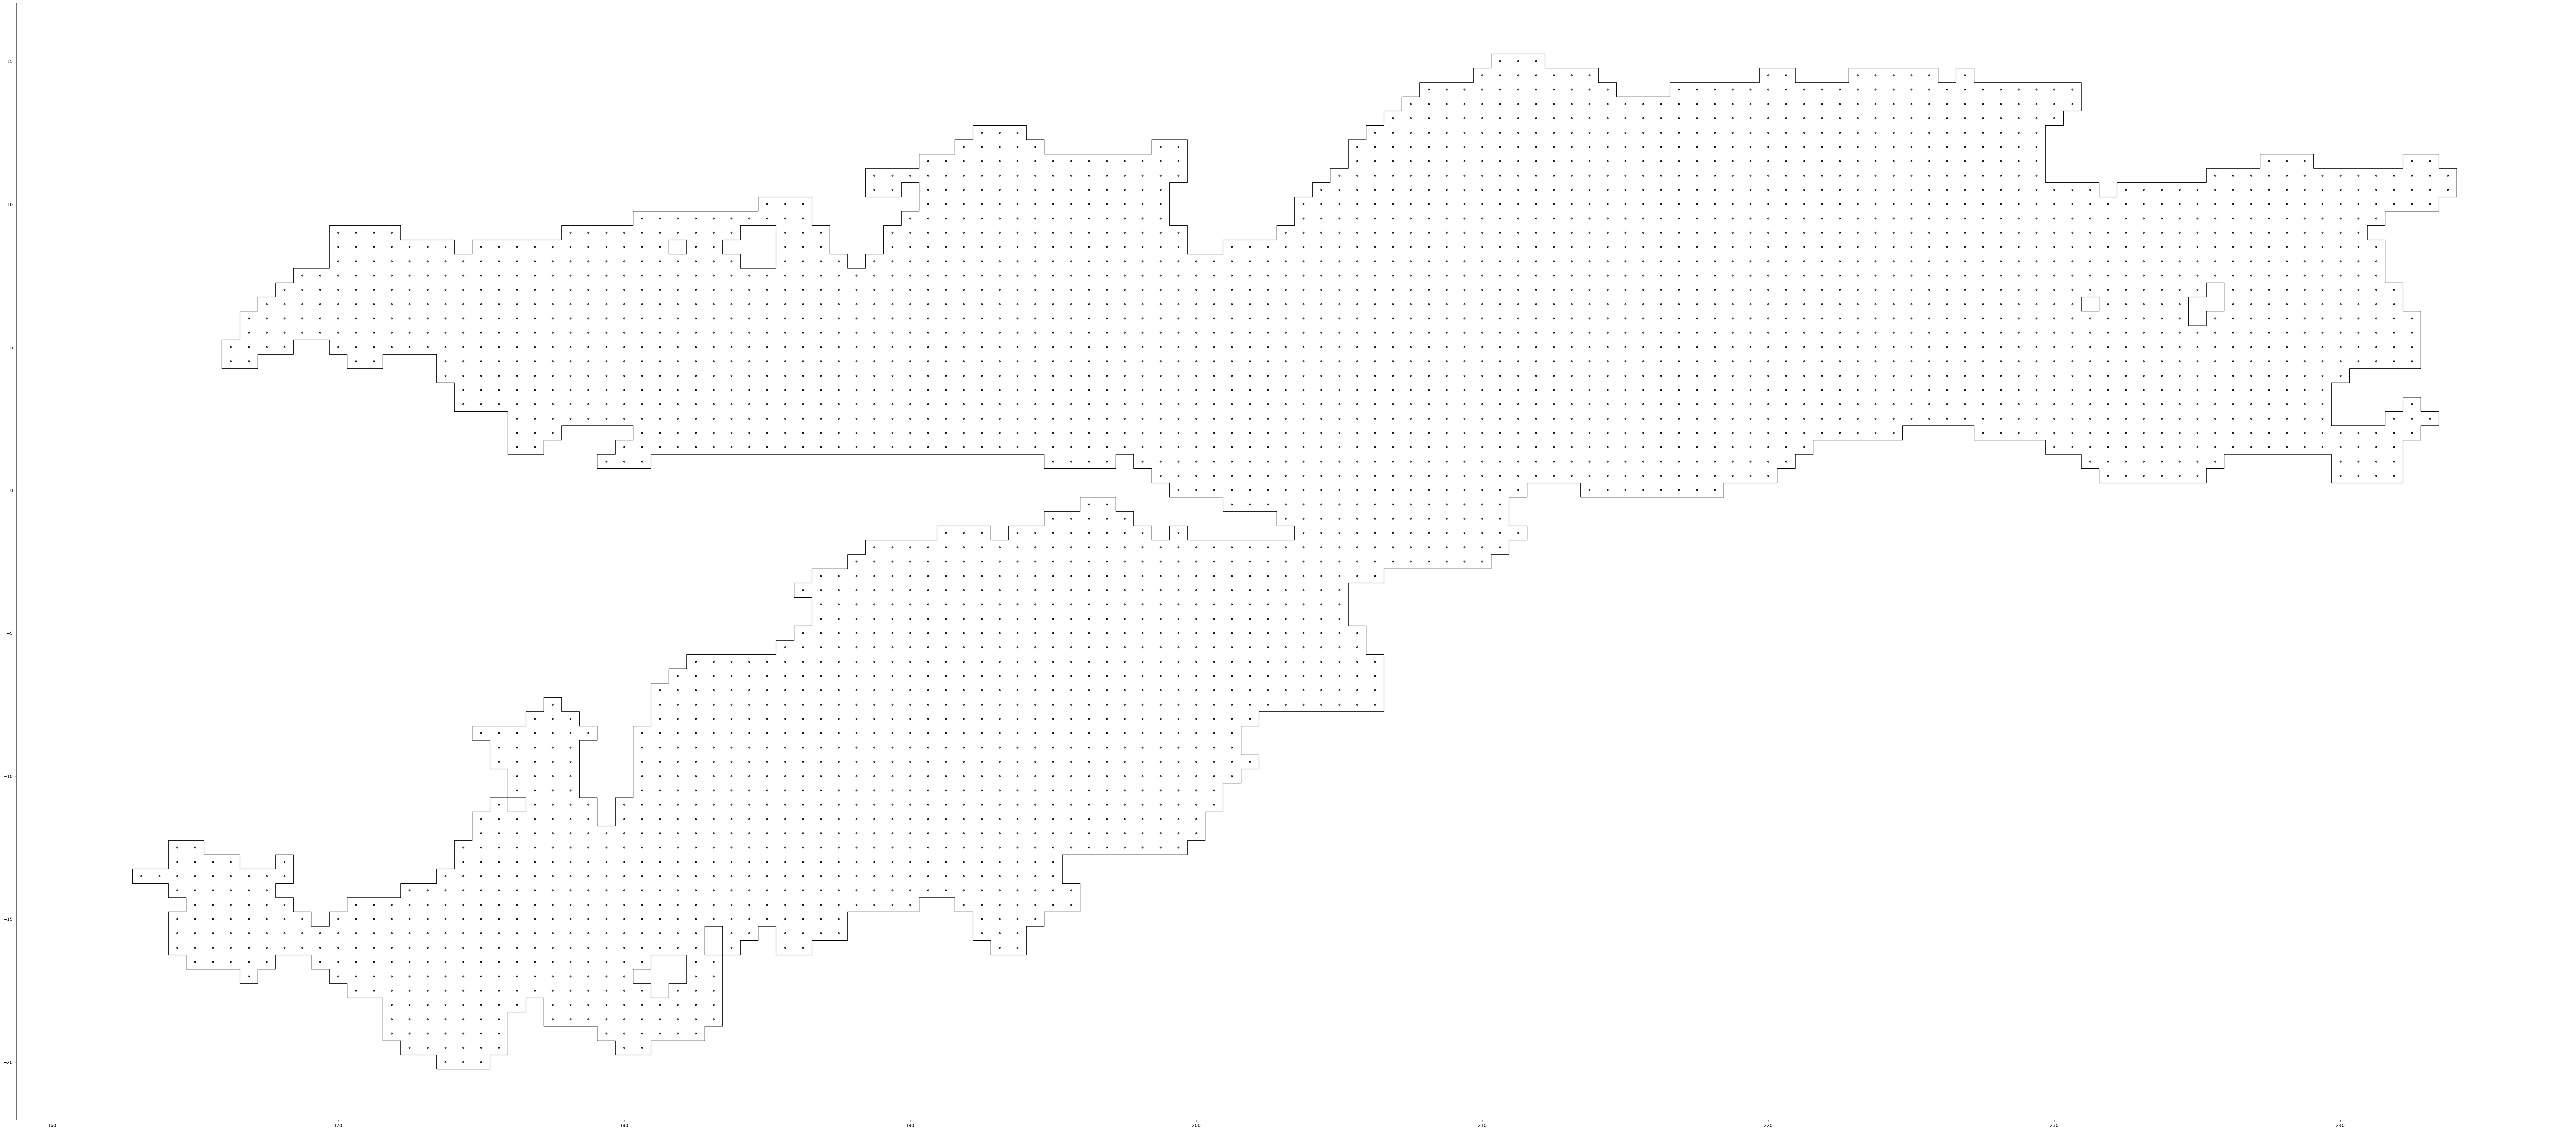

In [25]:
AR = { "_id" : "2000.01.01.015.0_13", "timestamp" : ISODate("2000-01-01T15:00:00Z"), "raster" : [ [ 173.75, -20, [ 250.2063751220703 ] ], [ 174.375, -20, [ 254.11582946777344 ] ], [ 175, -20, [ 251.6358184814453 ] ], [ -180, -19.5, [ 254.05386352539062 ] ], [ -179.375, -19.5, [ 250.08103942871094 ] ], [ 172.5, -19.5, [ 261.61236572265625 ] ], [ 173.125, -19.5, [ 259.94287109375 ] ], [ 173.75, -19.5, [ 272.23175048828125 ] ], [ 174.375, -19.5, [ 276.8329162597656 ] ], [ 175, -19.5, [ 271.420654296875 ] ], [ 175.625, -19.5, [ 256.75140380859375 ] ], [ -180, -19, [ 267.7886962890625 ] ], [ -179.375, -19, [ 263.8326110839844 ] ], [ -178.75, -19, [ 264.41302490234375 ] ], [ -178.125, -19, [ 270.99884033203125 ] ], [ -177.5, -19, [ 262.8390808105469 ] ], [ 171.875, -19, [ 266.4214782714844 ] ], [ 172.5, -19, [ 273.9678649902344 ] ], [ 173.125, -19, [ 263.1239318847656 ] ], [ 173.75, -19, [ 266.7671813964844 ] ], [ 174.375, -19, [ 270.6794128417969 ] ], [ 175, -19, [ 293.1512756347656 ] ], [ 175.625, -19, [ 276.5956726074219 ] ], [ 179.375, -19, [ 263.0519104003906 ] ], [ -180, -18.5, [ 270.7155456542969 ] ], [ -179.375, -18.5, [ 273.12091064453125 ] ], [ -178.75, -18.5, [ 293.82696533203125 ] ], [ -178.125, -18.5, [ 317.1369323730469 ] ], [ -177.5, -18.5, [ 307.546142578125 ] ], [ -176.875, -18.5, [ 255.3655548095703 ] ], [ 171.875, -18.5, [ 279.1039733886719 ] ], [ 172.5, -18.5, [ 303.00860595703125 ] ], [ 173.125, -18.5, [ 288.6958923339844 ] ], [ 173.75, -18.5, [ 283.7114562988281 ] ], [ 174.375, -18.5, [ 288.76080322265625 ] ], [ 175, -18.5, [ 293.6406555175781 ] ], [ 175.625, -18.5, [ 278.9503479003906 ] ], [ 177.5, -18.5, [ 254.15744018554688 ] ], [ 178.125, -18.5, [ 273.6254577636719 ] ], [ 178.75, -18.5, [ 276.61004638671875 ] ], [ 179.375, -18.5, [ 275.07904052734375 ] ], [ -180, -18, [ 271.70849609375 ] ], [ -179.375, -18, [ 274.8741760253906 ] ], [ -178.75, -18, [ 309.445068359375 ] ], [ -178.125, -18, [ 338.1132507324219 ] ], [ -177.5, -18, [ 332.2396545410156 ] ], [ -176.875, -18, [ 271.4016418457031 ] ], [ 171.875, -18, [ 298.3230285644531 ] ], [ 172.5, -18, [ 318.93585205078125 ] ], [ 173.125, -18, [ 312.6854553222656 ] ], [ 173.75, -18, [ 301.2244567871094 ] ], [ 174.375, -18, [ 303.7982482910156 ] ], [ 175, -18, [ 314.5303039550781 ] ], [ 175.625, -18, [ 303.7715148925781 ] ], [ 176.25, -18, [ 274.19134521484375 ] ], [ 177.5, -18, [ 263.8472595214844 ] ], [ 178.125, -18, [ 277.46728515625 ] ], [ 178.75, -18, [ 266.3921813964844 ] ], [ 179.375, -18, [ 256.7613220214844 ] ], [ -180, -17.5, [ 270.75048828125 ] ], [ -179.375, -17.5, [ 257.55560302734375 ] ], [ -178.125, -17.5, [ 255.7767333984375 ] ], [ -177.5, -17.5, [ 314.8695983886719 ] ], [ -176.875, -17.5, [ 291.5696105957031 ] ], [ 170.625, -17.5, [ 251.3199920654297 ] ], [ 171.25, -17.5, [ 298.7862243652344 ] ], [ 171.875, -17.5, [ 321.3480529785156 ] ], [ 172.5, -17.5, [ 327.5191650390625 ] ], [ 173.125, -17.5, [ 332.9875183105469 ] ], [ 173.75, -17.5, [ 322.09124755859375 ] ], [ 174.375, -17.5, [ 318.4394226074219 ] ], [ 175, -17.5, [ 332.04595947265625 ] ], [ 175.625, -17.5, [ 334.5689697265625 ] ], [ 176.25, -17.5, [ 318.25909423828125 ] ], [ 176.875, -17.5, [ 291.5035400390625 ] ], [ 177.5, -17.5, [ 293.7743835449219 ] ], [ 178.125, -17.5, [ 301.4160461425781 ] ], [ 178.75, -17.5, [ 283.8515930175781 ] ], [ 179.375, -17.5, [ 266.1692810058594 ] ], [ -180, -17, [ 285.5401306152344 ] ], [ -177.5, -17, [ 278.1139831542969 ] ], [ -176.875, -17, [ 279.3936767578125 ] ], [ 166.875, -17, [ 252.62802124023438 ] ], [ 170, -17, [ 253.0482635498047 ] ], [ 170.625, -17, [ 303.25604248046875 ] ], [ 171.25, -17, [ 335.883056640625 ] ], [ 171.875, -17, [ 336.3037109375 ] ], [ 172.5, -17, [ 335.5673828125 ] ], [ 173.125, -17, [ 341.1195983886719 ] ], [ 173.75, -17, [ 337.2704162597656 ] ], [ 174.375, -17, [ 336.7301330566406 ] ], [ 175, -17, [ 364.3309631347656 ] ], [ 175.625, -17, [ 384.10784912109375 ] ], [ 176.25, -17, [ 369.456787109375 ] ], [ 176.875, -17, [ 342.5150146484375 ] ], [ 177.5, -17, [ 329.58660888671875 ] ], [ 178.125, -17, [ 320.3935852050781 ] ], [ 178.75, -17, [ 301.0440368652344 ] ], [ 179.375, -17, [ 283.97454833984375 ] ], [ -180, -16.5, [ 401.72174072265625 ] ], [ -179.375, -16.5, [ 325.977783203125 ] ], [ -177.5, -16.5, [ 250.46885681152344 ] ], [ -176.875, -16.5, [ 253.8109588623047 ] ], [ 165, -16.5, [ 260.2165832519531 ] ], [ 165.625, -16.5, [ 270.86346435546875 ] ], [ 166.25, -16.5, [ 277.54046630859375 ] ], [ 166.875, -16.5, [ 274.3797302246094 ] ], [ 167.5, -16.5, [ 264.7889099121094 ] ], [ 169.375, -16.5, [ 250.4434356689453 ] ], [ 170, -16.5, [ 288.54400634765625 ] ], [ 170.625, -16.5, [ 327.9093017578125 ] ], [ 171.25, -16.5, [ 348.0770568847656 ] ], [ 171.875, -16.5, [ 348.812255859375 ] ], [ 172.5, -16.5, [ 347.9297790527344 ] ], [ 173.125, -16.5, [ 346.9274597167969 ] ], [ 173.75, -16.5, [ 345.33331298828125 ] ], [ 174.375, -16.5, [ 342.846923828125 ] ], [ 175, -16.5, [ 364.3731384277344 ] ], [ 175.625, -16.5, [ 390.5287170410156 ] ], [ 176.25, -16.5, [ 390.1149597167969 ] ], [ 176.875, -16.5, [ 377.76080322265625 ] ], [ 177.5, -16.5, [ 350.84075927734375 ] ], [ 178.125, -16.5, [ 317.4795227050781 ] ], [ 178.75, -16.5, [ 306.572509765625 ] ], [ 179.375, -16.5, [ 366.0337219238281 ] ], [ -180, -16, [ 454.60101318359375 ] ], [ -179.375, -16, [ 393.19952392578125 ] ], [ -178.75, -16, [ 294.35302734375 ] ], [ -178.125, -16, [ 264.1779479980469 ] ], [ -177.5, -16, [ 256.93145751953125 ] ], [ -176.25, -16, [ 252.19493103027344 ] ], [ -174.375, -16, [ 260.3937683105469 ] ], [ -173.75, -16, [ 258.74078369140625 ] ], [ -166.875, -16, [ 265.9936218261719 ] ], [ -166.25, -16, [ 257.7386779785156 ] ], [ 164.375, -16, [ 264.72021484375 ] ], [ 165, -16, [ 282.37005615234375 ] ], [ 165.625, -16, [ 285.26422119140625 ] ], [ 166.25, -16, [ 287.893310546875 ] ], [ 166.875, -16, [ 286.4367980957031 ] ], [ 167.5, -16, [ 282.0914001464844 ] ], [ 168.125, -16, [ 273.6176452636719 ] ], [ 168.75, -16, [ 263.4639892578125 ] ], [ 169.375, -16, [ 275.9580078125 ] ], [ 170, -16, [ 298.6219482421875 ] ], [ 170.625, -16, [ 322.7796325683594 ] ], [ 171.25, -16, [ 343.7710876464844 ] ], [ 171.875, -16, [ 357.7047424316406 ] ], [ 172.5, -16, [ 363.8686218261719 ] ], [ 173.125, -16, [ 358.96942138671875 ] ], [ 173.75, -16, [ 357.5184020996094 ] ], [ 174.375, -16, [ 351.5313415527344 ] ], [ 175, -16, [ 355.3173828125 ] ], [ 175.625, -16, [ 383.23577880859375 ] ], [ 176.25, -16, [ 399.25140380859375 ] ], [ 176.875, -16, [ 389.064453125 ] ], [ 177.5, -16, [ 355.2447814941406 ] ], [ 178.125, -16, [ 318.21929931640625 ] ], [ 178.75, -16, [ 350.7513732910156 ] ], [ 179.375, -16, [ 439.9320983886719 ] ], [ -180, -15.5, [ 437.431396484375 ] ], [ -179.375, -15.5, [ 407.54229736328125 ] ], [ -178.75, -15.5, [ 330.859619140625 ] ], [ -178.125, -15.5, [ 292.6963806152344 ] ], [ -177.5, -15.5, [ 274.3700866699219 ] ], [ -176.25, -15.5, [ 273.3437194824219 ] ], [ -175.625, -15.5, [ 288.99932861328125 ] ], [ -174.375, -15.5, [ 277.6786193847656 ] ], [ -173.75, -15.5, [ 289.63861083984375 ] ], [ -173.125, -15.5, [ 282.23095703125 ] ], [ -172.5, -15.5, [ 276.31011962890625 ] ], [ -167.5, -15.5, [ 254.26629638671875 ] ], [ -166.875, -15.5, [ 297.8733825683594 ] ], [ -166.25, -15.5, [ 280.8254089355469 ] ], [ 164.375, -15.5, [ 275.40069580078125 ] ], [ 165, -15.5, [ 275.34210205078125 ] ], [ 165.625, -15.5, [ 268.943359375 ] ], [ 166.25, -15.5, [ 278.0252380371094 ] ], [ 166.875, -15.5, [ 294.0578918457031 ] ], [ 167.5, -15.5, [ 288.4425048828125 ] ], [ 168.125, -15.5, [ 290.5892333984375 ] ], [ 168.75, -15.5, [ 272.2980651855469 ] ], [ 169.375, -15.5, [ 270.443115234375 ] ], [ 170, -15.5, [ 275.8035888671875 ] ], [ 170.625, -15.5, [ 300.87652587890625 ] ], [ 171.25, -15.5, [ 338.5683288574219 ] ], [ 171.875, -15.5, [ 364.63519287109375 ] ], [ 172.5, -15.5, [ 376.2076110839844 ] ], [ 173.125, -15.5, [ 370.71405029296875 ] ], [ 173.75, -15.5, [ 369.8545227050781 ] ], [ 174.375, -15.5, [ 362.0520935058594 ] ], [ 175, -15.5, [ 349.19415283203125 ] ], [ 175.625, -15.5, [ 357.8450927734375 ] ], [ 176.25, -15.5, [ 376.0887451171875 ] ], [ 176.875, -15.5, [ 377.5526123046875 ] ], [ 177.5, -15.5, [ 356.508056640625 ] ], [ 178.125, -15.5, [ 338.6600341796875 ] ], [ 178.75, -15.5, [ 358.38031005859375 ] ], [ 179.375, -15.5, [ 366.61920166015625 ] ], [ -180, -15, [ 396.19500732421875 ] ], [ -179.375, -15, [ 406.1603698730469 ] ], [ -178.75, -15, [ 355.7221984863281 ] ], [ -178.125, -15, [ 317.14227294921875 ] ], [ -177.5, -15, [ 296.7955322265625 ] ], [ -176.875, -15, [ 279.79241943359375 ] ], [ -176.25, -15, [ 309.85955810546875 ] ], [ -175.625, -15, [ 350.4967041015625 ] ], [ -175, -15, [ 281.7245788574219 ] ], [ -174.375, -15, [ 337.37286376953125 ] ], [ -173.75, -15, [ 325.3697204589844 ] ], [ -173.125, -15, [ 327.5016784667969 ] ], [ -172.5, -15, [ 289.22442626953125 ] ], [ -167.5, -15, [ 275.2115783691406 ] ], [ -166.875, -15, [ 297.3035583496094 ] ], [ -166.25, -15, [ 285.85662841796875 ] ], [ -165.625, -15, [ 266.4732360839844 ] ], [ 164.375, -15, [ 258.6183776855469 ] ], [ 165, -15, [ 256.814208984375 ] ], [ 165.625, -15, [ 255.7805633544922 ] ], [ 166.25, -15, [ 277.43304443359375 ] ], [ 166.875, -15, [ 295.7801513671875 ] ], [ 167.5, -15, [ 285.9823913574219 ] ], [ 168.125, -15, [ 277.5318298339844 ] ], [ 168.75, -15, [ 252.13633728027344 ] ], [ 170, -15, [ 256.6535339355469 ] ], [ 170.625, -15, [ 287.3447265625 ] ], [ 171.25, -15, [ 327.50091552734375 ] ], [ 171.875, -15, [ 348.4033508300781 ] ], [ 172.5, -15, [ 368.4642333984375 ] ], [ 173.125, -15, [ 379.3328552246094 ] ], [ 173.75, -15, [ 379.7403869628906 ] ], [ 174.375, -15, [ 373.7783508300781 ] ], [ 175, -15, [ 363.4378967285156 ] ], [ 175.625, -15, [ 368.7902526855469 ] ], [ 176.25, -15, [ 389.9390563964844 ] ], [ 176.875, -15, [ 399.0918884277344 ] ], [ 177.5, -15, [ 386.59295654296875 ] ], [ 178.125, -15, [ 359.0807189941406 ] ], [ 178.75, -15, [ 321.6498107910156 ] ], [ 179.375, -15, [ 307.470458984375 ] ], [ -180, -14.5, [ 386.2611999511719 ] ], [ -179.375, -14.5, [ 416.8141784667969 ] ], [ -178.75, -14.5, [ 378.8468322753906 ] ], [ -178.125, -14.5, [ 335.8829040527344 ] ], [ -177.5, -14.5, [ 333.8338928222656 ] ], [ -176.875, -14.5, [ 341.1610107421875 ] ], [ -176.25, -14.5, [ 364.5719299316406 ] ], [ -175.625, -14.5, [ 351.8922119140625 ] ], [ -175, -14.5, [ 315.06365966796875 ] ], [ -174.375, -14.5, [ 350.8748474121094 ] ], [ -173.75, -14.5, [ 337.8455810546875 ] ], [ -173.125, -14.5, [ 338.35137939453125 ] ], [ -172.5, -14.5, [ 297.24224853515625 ] ], [ -171.875, -14.5, [ 269.614501953125 ] ], [ -171.25, -14.5, [ 269.19024658203125 ] ], [ -170.625, -14.5, [ 267.061279296875 ] ], [ -170, -14.5, [ 260.64569091796875 ] ], [ -168.125, -14.5, [ 264.6904602050781 ] ], [ -167.5, -14.5, [ 288.37835693359375 ] ], [ -166.875, -14.5, [ 300.7946472167969 ] ], [ -166.25, -14.5, [ 298.0144348144531 ] ], [ -165.625, -14.5, [ 290.449951171875 ] ], [ -165, -14.5, [ 279.983642578125 ] ], [ -164.375, -14.5, [ 263.8446044921875 ] ], [ 165, -14.5, [ 256.18212890625 ] ], [ 165.625, -14.5, [ 261.3681335449219 ] ], [ 166.25, -14.5, [ 275.01336669921875 ] ], [ 166.875, -14.5, [ 282.7112121582031 ] ], [ 167.5, -14.5, [ 277.05010986328125 ] ], [ 168.125, -14.5, [ 254.67950439453125 ] ], [ 170.625, -14.5, [ 271.9095458984375 ] ], [ 171.25, -14.5, [ 291.8249206542969 ] ], [ 171.875, -14.5, [ 305.78240966796875 ] ], [ 172.5, -14.5, [ 327.1133117675781 ] ], [ 173.125, -14.5, [ 363.3319396972656 ] ], [ 173.75, -14.5, [ 380.8471984863281 ] ], [ 174.375, -14.5, [ 368.3829040527344 ] ], [ 175, -14.5, [ 367.667236328125 ] ], [ 175.625, -14.5, [ 389.97882080078125 ] ], [ 176.25, -14.5, [ 440.40789794921875 ] ], [ 176.875, -14.5, [ 447.863037109375 ] ], [ 177.5, -14.5, [ 407.0008544921875 ] ], [ 178.125, -14.5, [ 351.4567565917969 ] ], [ 178.75, -14.5, [ 306.4620666503906 ] ], [ 179.375, -14.5, [ 317.5045471191406 ] ], [ -180, -14, [ 391.86773681640625 ] ], [ -179.375, -14, [ 427.1419677734375 ] ], [ -178.75, -14, [ 402.7298889160156 ] ], [ -178.125, -14, [ 373.9136047363281 ] ], [ -177.5, -14, [ 377.5047302246094 ] ], [ -176.875, -14, [ 370.50054931640625 ] ], [ -176.25, -14, [ 361.4921569824219 ] ], [ -175.625, -14, [ 334.48272705078125 ] ], [ -175, -14, [ 298.5305480957031 ] ], [ -174.375, -14, [ 308.49114990234375 ] ], [ -173.75, -14, [ 341.9676208496094 ] ], [ -173.125, -14, [ 346.0705871582031 ] ], [ -172.5, -14, [ 315.4332275390625 ] ], [ -171.875, -14, [ 294.4501037597656 ] ], [ -171.25, -14, [ 296.3465270996094 ] ], [ -170.625, -14, [ 309.0408020019531 ] ], [ -170, -14, [ 292.35455322265625 ] ], [ -169.375, -14, [ 271.41839599609375 ] ], [ -168.75, -14, [ 271.63665771484375 ] ], [ -168.125, -14, [ 286.6905212402344 ] ], [ -167.5, -14, [ 304.4715881347656 ] ], [ -166.875, -14, [ 324.2606201171875 ] ], [ -166.25, -14, [ 323.4148864746094 ] ], [ -165.625, -14, [ 316.1458740234375 ] ], [ -165, -14, [ 297.4465637207031 ] ], [ -164.375, -14, [ 260.15203857421875 ] ], [ 164.375, -14, [ 259.57855224609375 ] ], [ 165, -14, [ 266.1409606933594 ] ], [ 165.625, -14, [ 266.503173828125 ] ], [ 166.25, -14, [ 268.8739013671875 ] ], [ 166.875, -14, [ 270.629638671875 ] ], [ 167.5, -14, [ 266.65777587890625 ] ], [ 172.5, -14, [ 259.5623779296875 ] ], [ 173.125, -14, [ 293.8705139160156 ] ], [ 173.75, -14, [ 341.99969482421875 ] ], [ 174.375, -14, [ 375.7452087402344 ] ], [ 175, -14, [ 410.3731384277344 ] ], [ 175.625, -14, [ 485.1264343261719 ] ], [ 176.25, -14, [ 525.2402954101562 ] ], [ 176.875, -14, [ 482.2834777832031 ] ], [ 177.5, -14, [ 416.0445251464844 ] ], [ 178.125, -14, [ 344.49713134765625 ] ], [ 178.75, -14, [ 305.8792419433594 ] ], [ 179.375, -14, [ 330.5627746582031 ] ], [ -180, -13.5, [ 390.3928527832031 ] ], [ -179.375, -13.5, [ 426.7933044433594 ] ], [ -178.75, -13.5, [ 424.5505676269531 ] ], [ -178.125, -13.5, [ 408.515380859375 ] ], [ -177.5, -13.5, [ 421.6843566894531 ] ], [ -176.875, -13.5, [ 400.9560852050781 ] ], [ -176.25, -13.5, [ 391.80572509765625 ] ], [ -175.625, -13.5, [ 356.3056945800781 ] ], [ -175, -13.5, [ 320.3881530761719 ] ], [ -174.375, -13.5, [ 337.119140625 ] ], [ -173.75, -13.5, [ 351.4415283203125 ] ], [ -173.125, -13.5, [ 344.96600341796875 ] ], [ -172.5, -13.5, [ 302.8079833984375 ] ], [ -171.875, -13.5, [ 304.367431640625 ] ], [ -171.25, -13.5, [ 320.35089111328125 ] ], [ -170.625, -13.5, [ 338.8336486816406 ] ], [ -170, -13.5, [ 313.9864501953125 ] ], [ -169.375, -13.5, [ 294.7785949707031 ] ], [ -168.75, -13.5, [ 300.06866455078125 ] ], [ -168.125, -13.5, [ 318.69696044921875 ] ], [ -167.5, -13.5, [ 345.365966796875 ] ], [ -166.875, -13.5, [ 362.5269775390625 ] ], [ -166.25, -13.5, [ 349.6696472167969 ] ], [ -165.625, -13.5, [ 317.62652587890625 ] ], [ -165, -13.5, [ 277.2704772949219 ] ], [ 163.125, -13.5, [ 251.27613830566406 ] ], [ 163.75, -13.5, [ 255.40347290039062 ] ], [ 164.375, -13.5, [ 257.8367004394531 ] ], [ 165, -13.5, [ 268.8523864746094 ] ], [ 165.625, -13.5, [ 273.6517639160156 ] ], [ 166.25, -13.5, [ 266.8108825683594 ] ], [ 166.875, -13.5, [ 254.99012756347656 ] ], [ 167.5, -13.5, [ 258.07525634765625 ] ], [ 168.125, -13.5, [ 250.95191955566406 ] ], [ 173.75, -13.5, [ 268.07147216796875 ] ], [ 174.375, -13.5, [ 349.751220703125 ] ], [ 175, -13.5, [ 425.4143981933594 ] ], [ 175.625, -13.5, [ 547.3455200195312 ] ], [ 176.25, -13.5, [ 631.4467163085938 ] ], [ 176.875, -13.5, [ 514.9674682617188 ] ], [ 177.5, -13.5, [ 436.318359375 ] ], [ 178.125, -13.5, [ 360.7239074707031 ] ], [ 178.75, -13.5, [ 301.9996337890625 ] ], [ 179.375, -13.5, [ 330.6260681152344 ] ], [ -180, -13, [ 380.09881591796875 ] ], [ -179.375, -13, [ 421.8623352050781 ] ], [ -178.75, -13, [ 448.3299560546875 ] ], [ -178.125, -13, [ 438.12603759765625 ] ], [ -177.5, -13, [ 430.50640869140625 ] ], [ -176.875, -13, [ 430.9959716796875 ] ], [ -176.25, -13, [ 417.5489501953125 ] ], [ -175.625, -13, [ 385.5777282714844 ] ], [ -175, -13, [ 354.48919677734375 ] ], [ -174.375, -13, [ 349.75421142578125 ] ], [ -173.75, -13, [ 340.1832580566406 ] ], [ -173.125, -13, [ 326.4752197265625 ] ], [ -172.5, -13, [ 309.81573486328125 ] ], [ -171.875, -13, [ 316.2811584472656 ] ], [ -171.25, -13, [ 347.79913330078125 ] ], [ -170.625, -13, [ 361.4368591308594 ] ], [ -170, -13, [ 335.42822265625 ] ], [ -169.375, -13, [ 320.6072082519531 ] ], [ -168.75, -13, [ 332.68707275390625 ] ], [ -168.125, -13, [ 386.42572021484375 ] ], [ -167.5, -13, [ 410.5032653808594 ] ], [ -166.875, -13, [ 383.91534423828125 ] ], [ -166.25, -13, [ 335.78326416015625 ] ], [ -165.625, -13, [ 295.0827941894531 ] ], [ -165, -13, [ 265.0522155761719 ] ], [ 164.375, -13, [ 254.4868621826172 ] ], [ 165, -13, [ 274.18560791015625 ] ], [ 165.625, -13, [ 275.0066223144531 ] ], [ 166.25, -13, [ 251.6781768798828 ] ], [ 168.125, -13, [ 253.10614013671875 ] ], [ 174.375, -13, [ 295.0654296875 ] ], [ 175, -13, [ 444.5809631347656 ] ], [ 175.625, -13, [ 681.957275390625 ] ], [ 176.25, -13, [ 840.2546997070312 ] ], [ 176.875, -13, [ 595.3833618164062 ] ], [ 177.5, -13, [ 440.6791076660156 ] ], [ 178.125, -13, [ 384.53912353515625 ] ], [ 178.75, -13, [ 288.17962646484375 ] ], [ 179.375, -13, [ 320.2438659667969 ] ], [ -180, -12.5, [ 362.7462463378906 ] ], [ -179.375, -12.5, [ 418.0184631347656 ] ], [ -178.75, -12.5, [ 473.344970703125 ] ], [ -178.125, -12.5, [ 459.1135559082031 ] ], [ -177.5, -12.5, [ 445.3682556152344 ] ], [ -176.875, -12.5, [ 424.088134765625 ] ], [ -176.25, -12.5, [ 432.9555358886719 ] ], [ -175.625, -12.5, [ 402.0867919921875 ] ], [ -175, -12.5, [ 367.88604736328125 ] ], [ -174.375, -12.5, [ 337.0049743652344 ] ], [ -173.75, -12.5, [ 315.1959533691406 ] ], [ -173.125, -12.5, [ 311.31939697265625 ] ], [ -172.5, -12.5, [ 314.95526123046875 ] ], [ -171.875, -12.5, [ 343.3328857421875 ] ], [ -171.25, -12.5, [ 377.7915954589844 ] ], [ -170.625, -12.5, [ 383.68597412109375 ] ], [ -170, -12.5, [ 367.5679016113281 ] ], [ -169.375, -12.5, [ 359.9263000488281 ] ], [ -168.75, -12.5, [ 388.3531799316406 ] ], [ -168.125, -12.5, [ 466.8470153808594 ] ], [ -167.5, -12.5, [ 423.00164794921875 ] ], [ -166.875, -12.5, [ 342.37506103515625 ] ], [ -166.25, -12.5, [ 303.44036865234375 ] ], [ -165.625, -12.5, [ 289.57965087890625 ] ], [ -165, -12.5, [ 276.6428527832031 ] ], [ -164.375, -12.5, [ 261.7917785644531 ] ], [ -163.75, -12.5, [ 256.5455627441406 ] ], [ -163.125, -12.5, [ 257.7742004394531 ] ], [ -162.5, -12.5, [ 264.2068176269531 ] ], [ -161.875, -12.5, [ 268.256103515625 ] ], [ -161.25, -12.5, [ 262.0483703613281 ] ], [ -160.625, -12.5, [ 251.2679443359375 ] ], [ 164.375, -12.5, [ 257.90435791015625 ] ], [ 165, -12.5, [ 265.0999755859375 ] ], [ 174.375, -12.5, [ 270.7699890136719 ] ], [ 175, -12.5, [ 513.68798828125 ] ], [ 175.625, -12.5, [ 570.4197998046875 ] ], [ 176.25, -12.5, [ 483.3121337890625 ] ], [ 176.875, -12.5, [ 692.6583251953125 ] ], [ 177.5, -12.5, [ 406.7286071777344 ] ], [ 178.125, -12.5, [ 416.825927734375 ] ], [ 178.75, -12.5, [ 289.62432861328125 ] ], [ 179.375, -12.5, [ 310.5869140625 ] ], [ -180, -12, [ 339.7080993652344 ] ], [ -179.375, -12, [ 413.92681884765625 ] ], [ -178.75, -12, [ 483.0748596191406 ] ], [ -178.125, -12, [ 471.0456848144531 ] ], [ -177.5, -12, [ 453.436279296875 ] ], [ -176.875, -12, [ 438.6713562011719 ] ], [ -176.25, -12, [ 446.0645751953125 ] ], [ -175.625, -12, [ 410.28424072265625 ] ], [ -175, -12, [ 365.0536804199219 ] ], [ -174.375, -12, [ 325.8509521484375 ] ], [ -173.75, -12, [ 304.1048889160156 ] ], [ -173.125, -12, [ 306.9371643066406 ] ], [ -172.5, -12, [ 328.77301025390625 ] ], [ -171.875, -12, [ 366.15087890625 ] ], [ -171.25, -12, [ 395.5606689453125 ] ], [ -170.625, -12, [ 400.2832336425781 ] ], [ -170, -12, [ 392.45733642578125 ] ], [ -169.375, -12, [ 399.4290771484375 ] ], [ -168.75, -12, [ 441.2344970703125 ] ], [ -168.125, -12, [ 473.607666015625 ] ], [ -167.5, -12, [ 370.2759704589844 ] ], [ -166.875, -12, [ 309.5896301269531 ] ], [ -166.25, -12, [ 290.4469299316406 ] ], [ -165.625, -12, [ 292.88653564453125 ] ], [ -165, -12, [ 284.8084716796875 ] ], [ -164.375, -12, [ 268.70965576171875 ] ], [ -163.75, -12, [ 267.8314208984375 ] ], [ -163.125, -12, [ 274.83062744140625 ] ], [ -162.5, -12, [ 280.3197937011719 ] ], [ -161.875, -12, [ 285.0770263671875 ] ], [ -161.25, -12, [ 286.8730163574219 ] ], [ -160.625, -12, [ 283.2555236816406 ] ], [ -160, -12, [ 259.1617736816406 ] ], [ 175, -12, [ 424.733154296875 ] ], [ 175.625, -12, [ 609.607177734375 ] ], [ 176.25, -12, [ 704.2994995117188 ] ], [ 176.875, -12, [ 562.716796875 ] ], [ 177.5, -12, [ 331.4809875488281 ] ], [ 178.125, -12, [ 447.0926513671875 ] ], [ 178.75, -12, [ 313.2941589355469 ] ], [ 179.375, -12, [ 292.9859619140625 ] ], [ -180, -11.5, [ 311.8990173339844 ] ], [ -179.375, -11.5, [ 411.0581359863281 ] ], [ -178.75, -11.5, [ 470.7001647949219 ] ], [ -178.125, -11.5, [ 468.5953369140625 ] ], [ -177.5, -11.5, [ 464.1502380371094 ] ], [ -176.875, -11.5, [ 454.4004211425781 ] ], [ -176.25, -11.5, [ 449.6028137207031 ] ], [ -175.625, -11.5, [ 406.658447265625 ] ], [ -175, -11.5, [ 350.2895812988281 ] ], [ -174.375, -11.5, [ 304.5000915527344 ] ], [ -173.75, -11.5, [ 293.16925048828125 ] ], [ -173.125, -11.5, [ 311.4696044921875 ] ], [ -172.5, -11.5, [ 347.1446838378906 ] ], [ -171.875, -11.5, [ 378.38311767578125 ] ], [ -171.25, -11.5, [ 400.2615966796875 ] ], [ -170.625, -11.5, [ 409.9000244140625 ] ], [ -170, -11.5, [ 400.7102355957031 ] ], [ -169.375, -11.5, [ 403.1088562011719 ] ], [ -168.75, -11.5, [ 429.7518310546875 ] ], [ -168.125, -11.5, [ 433.01470947265625 ] ], [ -167.5, -11.5, [ 346.9595642089844 ] ], [ -166.875, -11.5, [ 300.34027099609375 ] ], [ -166.25, -11.5, [ 291.44189453125 ] ], [ -165.625, -11.5, [ 295.125 ] ], [ -165, -11.5, [ 289.0360107421875 ] ], [ -164.375, -11.5, [ 277.3141174316406 ] ], [ -163.75, -11.5, [ 277.8990173339844 ] ], [ -163.125, -11.5, [ 284.6708679199219 ] ], [ -162.5, -11.5, [ 288.6454772949219 ] ], [ -161.875, -11.5, [ 297.55303955078125 ] ], [ -161.25, -11.5, [ 309.85888671875 ] ], [ -160.625, -11.5, [ 307.9826354980469 ] ], [ -160, -11.5, [ 281.9159240722656 ] ], [ 175, -11.5, [ 316.03411865234375 ] ], [ 175.625, -11.5, [ 587.2703247070312 ] ], [ 176.25, -11.5, [ 543.107177734375 ] ], [ 176.875, -11.5, [ 322.1702575683594 ] ], [ 177.5, -11.5, [ 338.83734130859375 ] ], [ 178.125, -11.5, [ 488.6302185058594 ] ], [ 178.75, -11.5, [ 318.8677978515625 ] ], [ -180, -11, [ 278.32659912109375 ] ], [ -179.375, -11, [ 406.0566101074219 ] ], [ -178.75, -11, [ 457.3318786621094 ] ], [ -178.125, -11, [ 457.5903625488281 ] ], [ -177.5, -11, [ 457.6444396972656 ] ], [ -176.875, -11, [ 452.5627136230469 ] ], [ -176.25, -11, [ 422.9328308105469 ] ], [ -175.625, -11, [ 375.7672119140625 ] ], [ -175, -11, [ 314.6587829589844 ] ], [ -174.375, -11, [ 297.86669921875 ] ], [ -173.75, -11, [ 304.6929626464844 ] ], [ -173.125, -11, [ 345.49151611328125 ] ], [ -172.5, -11, [ 376.8599853515625 ] ], [ -171.875, -11, [ 391.04290771484375 ] ], [ -171.25, -11, [ 402.6260986328125 ] ], [ -170.625, -11, [ 411.787841796875 ] ], [ -170, -11, [ 411.8628234863281 ] ], [ -169.375, -11, [ 405.78997802734375 ] ], [ -168.75, -11, [ 408.93280029296875 ] ], [ -168.125, -11, [ 402.9063415527344 ] ], [ -167.5, -11, [ 348.47607421875 ] ], [ -166.875, -11, [ 303.2781066894531 ] ], [ -166.25, -11, [ 294.75146484375 ] ], [ -165.625, -11, [ 296.88739013671875 ] ], [ -165, -11, [ 294.3582763671875 ] ], [ -164.375, -11, [ 284.6869201660156 ] ], [ -163.75, -11, [ 283.5831298828125 ] ], [ -163.125, -11, [ 289.8453674316406 ] ], [ -162.5, -11, [ 295.85748291015625 ] ], [ -161.875, -11, [ 302.2770080566406 ] ], [ -161.25, -11, [ 312.0527648925781 ] ], [ -160.625, -11, [ 308.90216064453125 ] ], [ -160, -11, [ 286.6502990722656 ] ], [ -159.375, -11, [ 256.6533508300781 ] ], [ 175.625, -11, [ 255.3519287109375 ] ], [ 176.875, -11, [ 338.73529052734375 ] ], [ 177.5, -11, [ 488.9375305175781 ] ], [ 178.125, -11, [ 496.81549072265625 ] ], [ 178.75, -11, [ 283.6951904296875 ] ], [ -179.375, -10.5, [ 393.66644287109375 ] ], [ -178.75, -10.5, [ 445.689453125 ] ], [ -178.125, -10.5, [ 438.07135009765625 ] ], [ -177.5, -10.5, [ 442.7835693359375 ] ], [ -176.875, -10.5, [ 449.0657043457031 ] ], [ -176.25, -10.5, [ 424.64739990234375 ] ], [ -175.625, -10.5, [ 371.0983581542969 ] ], [ -175, -10.5, [ 313.0289611816406 ] ], [ -174.375, -10.5, [ 305.08648681640625 ] ], [ -173.75, -10.5, [ 350.58544921875 ] ], [ -173.125, -10.5, [ 397.15325927734375 ] ], [ -172.5, -10.5, [ 407.9652404785156 ] ], [ -171.875, -10.5, [ 404.90435791015625 ] ], [ -171.25, -10.5, [ 403.03302001953125 ] ], [ -170.625, -10.5, [ 403.522705078125 ] ], [ -170, -10.5, [ 410.4822692871094 ] ], [ -169.375, -10.5, [ 405.86236572265625 ] ], [ -168.75, -10.5, [ 382.48583984375 ] ], [ -168.125, -10.5, [ 363.4076843261719 ] ], [ -167.5, -10.5, [ 350.16552734375 ] ], [ -166.875, -10.5, [ 323.3636169433594 ] ], [ -166.25, -10.5, [ 308.1343994140625 ] ], [ -165.625, -10.5, [ 301.1556396484375 ] ], [ -165, -10.5, [ 296.8562316894531 ] ], [ -164.375, -10.5, [ 287.73272705078125 ] ], [ -163.75, -10.5, [ 290.2646484375 ] ], [ -163.125, -10.5, [ 297.68218994140625 ] ], [ -162.5, -10.5, [ 300.88385009765625 ] ], [ -161.875, -10.5, [ 298.9586181640625 ] ], [ -161.25, -10.5, [ 296.5835266113281 ] ], [ -160.625, -10.5, [ 289.72662353515625 ] ], [ -160, -10.5, [ 274.7216491699219 ] ], [ -159.375, -10.5, [ 258.15826416015625 ] ], [ 176.25, -10.5, [ 271.23388671875 ] ], [ 176.875, -10.5, [ 512.4492797851562 ] ], [ 177.5, -10.5, [ 505.1598815917969 ] ], [ 178.125, -10.5, [ 369.5182189941406 ] ], [ -179.375, -10, [ 381.302978515625 ] ], [ -178.75, -10, [ 426.17999267578125 ] ], [ -178.125, -10, [ 419.4808654785156 ] ], [ -177.5, -10, [ 425.2400207519531 ] ], [ -176.875, -10, [ 451.94024658203125 ] ], [ -176.25, -10, [ 432.25201416015625 ] ], [ -175.625, -10, [ 365.6542053222656 ] ], [ -175, -10, [ 320.77471923828125 ] ], [ -174.375, -10, [ 313.01007080078125 ] ], [ -173.75, -10, [ 378.7173156738281 ] ], [ -173.125, -10, [ 429.2383117675781 ] ], [ -172.5, -10, [ 425.9759521484375 ] ], [ -171.875, -10, [ 417.99566650390625 ] ], [ -171.25, -10, [ 406.7031555175781 ] ], [ -170.625, -10, [ 382.1847229003906 ] ], [ -170, -10, [ 373.4799499511719 ] ], [ -169.375, -10, [ 379.8468017578125 ] ], [ -168.75, -10, [ 373.33740234375 ] ], [ -168.125, -10, [ 369.8998718261719 ] ], [ -167.5, -10, [ 371.23321533203125 ] ], [ -166.875, -10, [ 357.390625 ] ], [ -166.25, -10, [ 331.2911682128906 ] ], [ -165.625, -10, [ 306.5650939941406 ] ], [ -165, -10, [ 298.3946228027344 ] ], [ -164.375, -10, [ 294.7554016113281 ] ], [ -163.75, -10, [ 300.5162353515625 ] ], [ -163.125, -10, [ 301.106201171875 ] ], [ -162.5, -10, [ 297.41119384765625 ] ], [ -161.875, -10, [ 292.6650695800781 ] ], [ -161.25, -10, [ 286.5950927734375 ] ], [ -160.625, -10, [ 279.98651123046875 ] ], [ -160, -10, [ 269.39447021484375 ] ], [ -159.375, -10, [ 259.93389892578125 ] ], [ -158.75, -10, [ 252.71241760253906 ] ], [ 176.25, -10, [ 386.84521484375 ] ], [ 176.875, -10, [ 499.65045166015625 ] ], [ 177.5, -10, [ 370.2614440917969 ] ], [ 178.125, -10, [ 284.9146728515625 ] ], [ -179.375, -9.5, [ 346.4442443847656 ] ], [ -178.75, -9.5, [ 387.9674072265625 ] ], [ -178.125, -9.5, [ 411.6829833984375 ] ], [ -177.5, -9.5, [ 432.2464294433594 ] ], [ -176.875, -9.5, [ 464.52874755859375 ] ], [ -176.25, -9.5, [ 443.2691345214844 ] ], [ -175.625, -9.5, [ 382.4320068359375 ] ], [ -175, -9.5, [ 353.9879455566406 ] ], [ -174.375, -9.5, [ 355.141357421875 ] ], [ -173.75, -9.5, [ 403.2259826660156 ] ], [ -173.125, -9.5, [ 442.88287353515625 ] ], [ -172.5, -9.5, [ 435.611328125 ] ], [ -171.875, -9.5, [ 428.5439453125 ] ], [ -171.25, -9.5, [ 414.96832275390625 ] ], [ -170.625, -9.5, [ 367.47430419921875 ] ], [ -170, -9.5, [ 338.448974609375 ] ], [ -169.375, -9.5, [ 343.50286865234375 ] ], [ -168.75, -9.5, [ 362.93402099609375 ] ], [ -168.125, -9.5, [ 388.7461242675781 ] ], [ -167.5, -9.5, [ 408.4932556152344 ] ], [ -166.875, -9.5, [ 391.8168029785156 ] ], [ -166.25, -9.5, [ 349.2890319824219 ] ], [ -165.625, -9.5, [ 308.4908447265625 ] ], [ -165, -9.5, [ 302.0771484375 ] ], [ -164.375, -9.5, [ 304.5913391113281 ] ], [ -163.75, -9.5, [ 310.0606994628906 ] ], [ -163.125, -9.5, [ 308.7305908203125 ] ], [ -162.5, -9.5, [ 304.9689636230469 ] ], [ -161.875, -9.5, [ 304.7643737792969 ] ], [ -161.25, -9.5, [ 296.20635986328125 ] ], [ -160.625, -9.5, [ 284.9808349609375 ] ], [ -160, -9.5, [ 275.0665283203125 ] ], [ -159.375, -9.5, [ 264.58148193359375 ] ], [ -158.75, -9.5, [ 258.60546875 ] ], [ -158.125, -9.5, [ 250.3489532470703 ] ], [ 175.625, -9.5, [ 311.5770568847656 ] ], [ 176.25, -9.5, [ 439.03070068359375 ] ], [ 176.875, -9.5, [ 370.9981689453125 ] ], [ 177.5, -9.5, [ 331.0385437011719 ] ], [ 178.125, -9.5, [ 283.2620849609375 ] ], [ -179.375, -9, [ 285.9195556640625 ] ], [ -178.75, -9, [ 347.7078857421875 ] ], [ -178.125, -9, [ 394.6377258300781 ] ], [ -177.5, -9, [ 432.1375732421875 ] ], [ -176.875, -9, [ 459.63226318359375 ] ], [ -176.25, -9, [ 436.1227722167969 ] ], [ -175.625, -9, [ 396.808837890625 ] ], [ -175, -9, [ 379.77069091796875 ] ], [ -174.375, -9, [ 377.8901672363281 ] ], [ -173.75, -9, [ 404.0713195800781 ] ], [ -173.125, -9, [ 425.4110412597656 ] ], [ -172.5, -9, [ 420.9171142578125 ] ], [ -171.875, -9, [ 408.5352783203125 ] ], [ -171.25, -9, [ 416.4215087890625 ] ], [ -170.625, -9, [ 364.5898132324219 ] ], [ -170, -9, [ 320.0428466796875 ] ], [ -169.375, -9, [ 315.80072021484375 ] ], [ -168.75, -9, [ 355.72161865234375 ] ], [ -168.125, -9, [ 400.8677673339844 ] ], [ -167.5, -9, [ 415.22467041015625 ] ], [ -166.875, -9, [ 402.2236022949219 ] ], [ -166.25, -9, [ 348.5450439453125 ] ], [ -165.625, -9, [ 306.31402587890625 ] ], [ -165, -9, [ 306.9362487792969 ] ], [ -164.375, -9, [ 311.7255554199219 ] ], [ -163.75, -9, [ 316.5177307128906 ] ], [ -163.125, -9, [ 315.7605895996094 ] ], [ -162.5, -9, [ 314.5630798339844 ] ], [ -161.875, -9, [ 313.17041015625 ] ], [ -161.25, -9, [ 303.401123046875 ] ], [ -160.625, -9, [ 289.6922607421875 ] ], [ -160, -9, [ 281.9639587402344 ] ], [ -159.375, -9, [ 271.7917175292969 ] ], [ -158.75, -9, [ 260.7688903808594 ] ], [ 175.625, -9, [ 343.6161804199219 ] ], [ 176.25, -9, [ 327.59075927734375 ] ], [ 176.875, -9, [ 291.5103759765625 ] ], [ 177.5, -9, [ 311.31304931640625 ] ], [ 178.125, -9, [ 273.9764404296875 ] ], [ -179.375, -8.5, [ 250.95553588867188 ] ], [ -178.75, -8.5, [ 316.8271789550781 ] ], [ -178.125, -8.5, [ 372.87835693359375 ] ], [ -177.5, -8.5, [ 413.859619140625 ] ], [ -176.875, -8.5, [ 434.2679138183594 ] ], [ -176.25, -8.5, [ 415.3785095214844 ] ], [ -175.625, -8.5, [ 387.8304748535156 ] ], [ -175, -8.5, [ 375.64154052734375 ] ], [ -174.375, -8.5, [ 374.414794921875 ] ], [ -173.75, -8.5, [ 395.6285705566406 ] ], [ -173.125, -8.5, [ 425.9593505859375 ] ], [ -172.5, -8.5, [ 432.94580078125 ] ], [ -171.875, -8.5, [ 420.85943603515625 ] ], [ -171.25, -8.5, [ 394.19708251953125 ] ], [ -170.625, -8.5, [ 365.435302734375 ] ], [ -170, -8.5, [ 316.671630859375 ] ], [ -169.375, -8.5, [ 330.57635498046875 ] ], [ -168.75, -8.5, [ 387.8182678222656 ] ], [ -168.125, -8.5, [ 419.8188171386719 ] ], [ -167.5, -8.5, [ 401.25701904296875 ] ], [ -166.875, -8.5, [ 383.8016662597656 ] ], [ -166.25, -8.5, [ 338.18475341796875 ] ], [ -165.625, -8.5, [ 307.47552490234375 ] ], [ -165, -8.5, [ 313.8033447265625 ] ], [ -164.375, -8.5, [ 318.41412353515625 ] ], [ -163.75, -8.5, [ 324.0341796875 ] ], [ -163.125, -8.5, [ 323.0838317871094 ] ], [ -162.5, -8.5, [ 317.8026123046875 ] ], [ -161.875, -8.5, [ 308.87811279296875 ] ], [ -161.25, -8.5, [ 299.9154968261719 ] ], [ -160.625, -8.5, [ 291.1864318847656 ] ], [ -160, -8.5, [ 285.7283935546875 ] ], [ -159.375, -8.5, [ 279.6130065917969 ] ], [ -158.75, -8.5, [ 264.1186218261719 ] ], [ 175, -8.5, [ 270.61859130859375 ] ], [ 175.625, -8.5, [ 286.3063659667969 ] ], [ 176.25, -8.5, [ 276.53265380859375 ] ], [ 176.875, -8.5, [ 282.5594787597656 ] ], [ 177.5, -8.5, [ 294.2076721191406 ] ], [ 178.125, -8.5, [ 302.75347900390625 ] ], [ 178.75, -8.5, [ 254.8018798828125 ] ], [ -178.75, -8, [ 290.5369567871094 ] ], [ -178.125, -8, [ 346.20135498046875 ] ], [ -177.5, -8, [ 386.4055480957031 ] ], [ -176.875, -8, [ 403.2265319824219 ] ], [ -176.25, -8, [ 387.0885009765625 ] ], [ -175.625, -8, [ 360.9944763183594 ] ], [ -175, -8, [ 352.2697448730469 ] ], [ -174.375, -8, [ 359.1729736328125 ] ], [ -173.75, -8, [ 385.017822265625 ] ], [ -173.125, -8, [ 421.3436584472656 ] ], [ -172.5, -8, [ 438.9158630371094 ] ], [ -171.875, -8, [ 432.84967041015625 ] ], [ -171.25, -8, [ 412.77154541015625 ] ], [ -170.625, -8, [ 354.4027404785156 ] ], [ -170, -8, [ 342.1423645019531 ] ], [ -169.375, -8, [ 368.75439453125 ] ], [ -168.75, -8, [ 423.2742004394531 ] ], [ -168.125, -8, [ 429.34417724609375 ] ], [ -167.5, -8, [ 380.3568420410156 ] ], [ -166.875, -8, [ 352.6556091308594 ] ], [ -166.25, -8, [ 328.91607666015625 ] ], [ -165.625, -8, [ 317.06353759765625 ] ], [ -165, -8, [ 325.056396484375 ] ], [ -164.375, -8, [ 327.4460144042969 ] ], [ -163.75, -8, [ 331.22393798828125 ] ], [ -163.125, -8, [ 330.7314147949219 ] ], [ -162.5, -8, [ 322.12115478515625 ] ], [ -161.875, -8, [ 303.8291015625 ] ], [ -161.25, -8, [ 291.8621520996094 ] ], [ -160.625, -8, [ 290.5885314941406 ] ], [ -160, -8, [ 293.5777282714844 ] ], [ -159.375, -8, [ 292.2672424316406 ] ], [ -158.75, -8, [ 277.7497863769531 ] ], [ -158.125, -8, [ 257.6747131347656 ] ], [ 176.875, -8, [ 258.1752624511719 ] ], [ 177.5, -8, [ 277.14410400390625 ] ], [ 178.125, -8, [ 275.087158203125 ] ], [ -178.75, -7.5, [ 270.0307922363281 ] ], [ -178.125, -7.5, [ 315.4345703125 ] ], [ -177.5, -7.5, [ 353.1907043457031 ] ], [ -176.875, -7.5, [ 368.95855712890625 ] ], [ -176.25, -7.5, [ 355.60888671875 ] ], [ -175.625, -7.5, [ 333.1741027832031 ] ], [ -175, -7.5, [ 330.272705078125 ] ], [ -174.375, -7.5, [ 345.7873229980469 ] ], [ -173.75, -7.5, [ 377.5733642578125 ] ], [ -173.125, -7.5, [ 414.73309326171875 ] ], [ -172.5, -7.5, [ 436.72894287109375 ] ], [ -171.875, -7.5, [ 440.3487854003906 ] ], [ -171.25, -7.5, [ 428.4440612792969 ] ], [ -170.625, -7.5, [ 393.5786437988281 ] ], [ -170, -7.5, [ 361.4286193847656 ] ], [ -169.375, -7.5, [ 376.7911071777344 ] ], [ -168.75, -7.5, [ 448.1286926269531 ] ], [ -168.125, -7.5, [ 414.6011962890625 ] ], [ -167.5, -7.5, [ 351.53094482421875 ] ], [ -166.875, -7.5, [ 333.6671142578125 ] ], [ -166.25, -7.5, [ 333.6830139160156 ] ], [ -165.625, -7.5, [ 333.2386169433594 ] ], [ -165, -7.5, [ 337.20672607421875 ] ], [ -164.375, -7.5, [ 334.7604675292969 ] ], [ -163.75, -7.5, [ 332.60479736328125 ] ], [ -163.125, -7.5, [ 333.8232421875 ] ], [ -162.5, -7.5, [ 329.1677551269531 ] ], [ -161.875, -7.5, [ 314.07379150390625 ] ], [ -161.25, -7.5, [ 305.739501953125 ] ], [ -160.625, -7.5, [ 308.4571228027344 ] ], [ -160, -7.5, [ 309.04376220703125 ] ], [ -159.375, -7.5, [ 304.0995178222656 ] ], [ -158.75, -7.5, [ 290.54852294921875 ] ], [ -158.125, -7.5, [ 274.9962463378906 ] ], [ -157.5, -7.5, [ 266.7209167480469 ] ], [ -156.875, -7.5, [ 261.58319091796875 ] ], [ -156.25, -7.5, [ 258.84417724609375 ] ], [ -155.625, -7.5, [ 259.869873046875 ] ], [ -155, -7.5, [ 261.80755615234375 ] ], [ -154.375, -7.5, [ 259.18817138671875 ] ], [ -153.75, -7.5, [ 250.4004669189453 ] ], [ 177.5, -7.5, [ 255.6109161376953 ] ], [ -178.75, -7, [ 250.94642639160156 ] ], [ -178.125, -7, [ 288.4366760253906 ] ], [ -177.5, -7, [ 321.5457763671875 ] ], [ -176.875, -7, [ 335.8550720214844 ] ], [ -176.25, -7, [ 327.1965637207031 ] ], [ -175.625, -7, [ 312.5432434082031 ] ], [ -175, -7, [ 315.11749267578125 ] ], [ -174.375, -7, [ 333.1881103515625 ] ], [ -173.75, -7, [ 367.94757080078125 ] ], [ -173.125, -7, [ 409.2830505371094 ] ], [ -172.5, -7, [ 435.255859375 ] ], [ -171.875, -7, [ 442.4714660644531 ] ], [ -171.25, -7, [ 437.6274108886719 ] ], [ -170.625, -7, [ 422.2332763671875 ] ], [ -170, -7, [ 410.0917053222656 ] ], [ -169.375, -7, [ 411.499267578125 ] ], [ -168.75, -7, [ 451.0570983886719 ] ], [ -168.125, -7, [ 400.5901794433594 ] ], [ -167.5, -7, [ 343.955078125 ] ], [ -166.875, -7, [ 337.775634765625 ] ], [ -166.25, -7, [ 346.41949462890625 ] ], [ -165.625, -7, [ 347.1179504394531 ] ], [ -165, -7, [ 344.8406677246094 ] ], [ -164.375, -7, [ 338.64105224609375 ] ], [ -163.75, -7, [ 332.8709411621094 ] ], [ -163.125, -7, [ 331.9472351074219 ] ], [ -162.5, -7, [ 333.6803283691406 ] ], [ -161.875, -7, [ 330.76318359375 ] ], [ -161.25, -7, [ 322.85748291015625 ] ], [ -160.625, -7, [ 322.5697326660156 ] ], [ -160, -7, [ 320.07183837890625 ] ], [ -159.375, -7, [ 307.8878479003906 ] ], [ -158.75, -7, [ 292.39495849609375 ] ], [ -158.125, -7, [ 286.43988037109375 ] ], [ -157.5, -7, [ 285.2494201660156 ] ], [ -156.875, -7, [ 281.614990234375 ] ], [ -156.25, -7, [ 276.0420837402344 ] ], [ -155.625, -7, [ 270.3948059082031 ] ], [ -155, -7, [ 266.1459045410156 ] ], [ -154.375, -7, [ 260.72430419921875 ] ], [ -153.75, -7, [ 252.6289825439453 ] ], [ -178.125, -6.5, [ 263.2408752441406 ] ], [ -177.5, -6.5, [ 290.6004943847656 ] ], [ -176.875, -6.5, [ 302.55303955078125 ] ], [ -176.25, -6.5, [ 299.63397216796875 ] ], [ -175.625, -6.5, [ 293.0196228027344 ] ], [ -175, -6.5, [ 296.85882568359375 ] ], [ -174.375, -6.5, [ 312.9232177734375 ] ], [ -173.75, -6.5, [ 347.2726135253906 ] ], [ -173.125, -6.5, [ 396.8402099609375 ] ], [ -172.5, -6.5, [ 431.0249328613281 ] ], [ -171.875, -6.5, [ 442.0308837890625 ] ], [ -171.25, -6.5, [ 442.5002746582031 ] ], [ -170.625, -6.5, [ 441.33837890625 ] ], [ -170, -6.5, [ 438.2085266113281 ] ], [ -169.375, -6.5, [ 469.4062194824219 ] ], [ -168.75, -6.5, [ 439.05889892578125 ] ], [ -168.125, -6.5, [ 389.25323486328125 ] ], [ -167.5, -6.5, [ 354.5084533691406 ] ], [ -166.875, -6.5, [ 347.6870422363281 ] ], [ -166.25, -6.5, [ 350.5656433105469 ] ], [ -165.625, -6.5, [ 352.4658203125 ] ], [ -165, -6.5, [ 346.4104919433594 ] ], [ -164.375, -6.5, [ 339.8160095214844 ] ], [ -163.75, -6.5, [ 335.89697265625 ] ], [ -163.125, -6.5, [ 330.0162048339844 ] ], [ -162.5, -6.5, [ 328.1121520996094 ] ], [ -161.875, -6.5, [ 326.36297607421875 ] ], [ -161.25, -6.5, [ 317.9736022949219 ] ], [ -160.625, -6.5, [ 310.8285217285156 ] ], [ -160, -6.5, [ 306.5851135253906 ] ], [ -159.375, -6.5, [ 294.7922058105469 ] ], [ -158.75, -6.5, [ 281.6702575683594 ] ], [ -158.125, -6.5, [ 281.7184143066406 ] ], [ -157.5, -6.5, [ 284.2802734375 ] ], [ -156.875, -6.5, [ 284.1929931640625 ] ], [ -156.25, -6.5, [ 278.5122985839844 ] ], [ -155.625, -6.5, [ 270.3147888183594 ] ], [ -155, -6.5, [ 265.03118896484375 ] ], [ -154.375, -6.5, [ 259.6556396484375 ] ], [ -153.75, -6.5, [ 253.53111267089844 ] ], [ -177.5, -6, [ 261.2340393066406 ] ], [ -176.875, -6, [ 270.6932067871094 ] ], [ -176.25, -6, [ 270.1231689453125 ] ], [ -175.625, -6, [ 268.6092224121094 ] ], [ -175, -6, [ 272.5463562011719 ] ], [ -174.375, -6, [ 285.942138671875 ] ], [ -173.75, -6, [ 315.87371826171875 ] ], [ -173.125, -6, [ 366.2828369140625 ] ], [ -172.5, -6, [ 411.7933349609375 ] ], [ -171.875, -6, [ 434.4985046386719 ] ], [ -171.25, -6, [ 443.7047424316406 ] ], [ -170.625, -6, [ 489.4608154296875 ] ], [ -170, -6, [ 487.95513916015625 ] ], [ -169.375, -6, [ 464.26629638671875 ] ], [ -168.75, -6, [ 421.4479064941406 ] ], [ -168.125, -6, [ 385.5506896972656 ] ], [ -167.5, -6, [ 367.3580322265625 ] ], [ -166.875, -6, [ 349.0329284667969 ] ], [ -166.25, -6, [ 344.6807861328125 ] ], [ -165.625, -6, [ 346.1007080078125 ] ], [ -165, -6, [ 339.83367919921875 ] ], [ -164.375, -6, [ 336.91552734375 ] ], [ -163.75, -6, [ 335.61700439453125 ] ], [ -163.125, -6, [ 330.49627685546875 ] ], [ -162.5, -6, [ 324.9461975097656 ] ], [ -161.875, -6, [ 317.8379211425781 ] ], [ -161.25, -6, [ 307.8927001953125 ] ], [ -160.625, -6, [ 297.2439880371094 ] ], [ -160, -6, [ 286.5760192871094 ] ], [ -159.375, -6, [ 282.8944396972656 ] ], [ -158.75, -6, [ 277.7445983886719 ] ], [ -158.125, -6, [ 278.0709533691406 ] ], [ -157.5, -6, [ 277.7775573730469 ] ], [ -156.875, -6, [ 275.7801208496094 ] ], [ -156.25, -6, [ 272.1045837402344 ] ], [ -155.625, -6, [ 265.80364990234375 ] ], [ -155, -6, [ 259.2976989746094 ] ], [ -154.375, -6, [ 256.4292907714844 ] ], [ -153.75, -6, [ 251.5352020263672 ] ], [ -174.375, -5.5, [ 257.7888488769531 ] ], [ -173.75, -5.5, [ 280.9320068359375 ] ], [ -173.125, -5.5, [ 320.88531494140625 ] ], [ -172.5, -5.5, [ 367.1944885253906 ] ], [ -171.875, -5.5, [ 406.072265625 ] ], [ -171.25, -5.5, [ 471.01068115234375 ] ], [ -170.625, -5.5, [ 475.2511291503906 ] ], [ -170, -5.5, [ 462.73309326171875 ] ], [ -169.375, -5.5, [ 429.8983154296875 ] ], [ -168.75, -5.5, [ 394.9620056152344 ] ], [ -168.125, -5.5, [ 383.0184020996094 ] ], [ -167.5, -5.5, [ 368.1493835449219 ] ], [ -166.875, -5.5, [ 340.1829833984375 ] ], [ -166.25, -5.5, [ 334.891845703125 ] ], [ -165.625, -5.5, [ 334.6112060546875 ] ], [ -165, -5.5, [ 328.8707275390625 ] ], [ -164.375, -5.5, [ 328.5674133300781 ] ], [ -163.75, -5.5, [ 330.6567687988281 ] ], [ -163.125, -5.5, [ 329.35565185546875 ] ], [ -162.5, -5.5, [ 323.3675842285156 ] ], [ -161.875, -5.5, [ 315.3072814941406 ] ], [ -161.25, -5.5, [ 304.3312072753906 ] ], [ -160.625, -5.5, [ 297.7364196777344 ] ], [ -160, -5.5, [ 289.241943359375 ] ], [ -159.375, -5.5, [ 282.5957946777344 ] ], [ -158.75, -5.5, [ 276.3064270019531 ] ], [ -158.125, -5.5, [ 275.1227722167969 ] ], [ -157.5, -5.5, [ 274.1947021484375 ] ], [ -156.875, -5.5, [ 272.0665283203125 ] ], [ -156.25, -5.5, [ 269.6225891113281 ] ], [ -155.625, -5.5, [ 264.0883483886719 ] ], [ -155, -5.5, [ 255.96385192871094 ] ], [ -154.375, -5.5, [ 252.70166015625 ] ], [ -173.75, -5, [ 255.98855590820312 ] ], [ -173.125, -5, [ 321.5389404296875 ] ], [ -172.5, -5, [ 355.0589904785156 ] ], [ -171.875, -5, [ 350.0391845703125 ] ], [ -171.25, -5, [ 412.78204345703125 ] ], [ -170.625, -5, [ 408.92535400390625 ] ], [ -170, -5, [ 398.09759521484375 ] ], [ -169.375, -5, [ 379.663818359375 ] ], [ -168.75, -5, [ 368.64837646484375 ] ], [ -168.125, -5, [ 367.09600830078125 ] ], [ -167.5, -5, [ 352.0404052734375 ] ], [ -166.875, -5, [ 329.1656494140625 ] ], [ -166.25, -5, [ 326.8821105957031 ] ], [ -165.625, -5, [ 327.0450439453125 ] ], [ -165, -5, [ 322.7864685058594 ] ], [ -164.375, -5, [ 320.73931884765625 ] ], [ -163.75, -5, [ 321.49005126953125 ] ], [ -163.125, -5, [ 321.35107421875 ] ], [ -162.5, -5, [ 316.36639404296875 ] ], [ -161.875, -5, [ 308.47735595703125 ] ], [ -161.25, -5, [ 300.322509765625 ] ], [ -160.625, -5, [ 293.6149597167969 ] ], [ -160, -5, [ 286.8316955566406 ] ], [ -159.375, -5, [ 278.19268798828125 ] ], [ -158.75, -5, [ 270.4610290527344 ] ], [ -158.125, -5, [ 267.9769592285156 ] ], [ -157.5, -5, [ 269.8023376464844 ] ], [ -156.875, -5, [ 271.1544189453125 ] ], [ -156.25, -5, [ 269.9486999511719 ] ], [ -155.625, -5, [ 264.89849853515625 ] ], [ -155, -5, [ 257.2873229980469 ] ], [ -154.375, -5, [ 251.25332641601562 ] ], [ -173.125, -4.5, [ 302.7030029296875 ] ], [ -172.5, -4.5, [ 329.71990966796875 ] ], [ -171.875, -4.5, [ 344.5345458984375 ] ], [ -171.25, -4.5, [ 342.00616455078125 ] ], [ -170.625, -4.5, [ 336.97589111328125 ] ], [ -170, -4.5, [ 340.07623291015625 ] ], [ -169.375, -4.5, [ 338.9443054199219 ] ], [ -168.75, -4.5, [ 338.1423034667969 ] ], [ -168.125, -4.5, [ 337.8189697265625 ] ], [ -167.5, -4.5, [ 333.48138427734375 ] ], [ -166.875, -4.5, [ 327.14739990234375 ] ], [ -166.25, -4.5, [ 326.6101989746094 ] ], [ -165.625, -4.5, [ 326.1824035644531 ] ], [ -165, -4.5, [ 323.9132080078125 ] ], [ -164.375, -4.5, [ 318.0166015625 ] ], [ -163.75, -4.5, [ 310.0006408691406 ] ], [ -163.125, -4.5, [ 304.3035583496094 ] ], [ -162.5, -4.5, [ 300.6791076660156 ] ], [ -161.875, -4.5, [ 296.7244567871094 ] ], [ -161.25, -4.5, [ 293.3852844238281 ] ], [ -160.625, -4.5, [ 288.7373046875 ] ], [ -160, -4.5, [ 283.0950622558594 ] ], [ -159.375, -4.5, [ 275.7581481933594 ] ], [ -158.75, -4.5, [ 270.0457458496094 ] ], [ -158.125, -4.5, [ 266.4194030761719 ] ], [ -157.5, -4.5, [ 267.16180419921875 ] ], [ -156.875, -4.5, [ 269.0400390625 ] ], [ -156.25, -4.5, [ 267.6046447753906 ] ], [ -155.625, -4.5, [ 262.8601989746094 ] ], [ -155, -4.5, [ 254.6522216796875 ] ], [ -173.125, -4, [ 294.10009765625 ] ], [ -172.5, -4, [ 315.21575927734375 ] ], [ -171.875, -4, [ 303.0157165527344 ] ], [ -171.25, -4, [ 291.7583312988281 ] ], [ -170.625, -4, [ 302.76434326171875 ] ], [ -170, -4, [ 311.8846130371094 ] ], [ -169.375, -4, [ 318.330078125 ] ], [ -168.75, -4, [ 319.6404113769531 ] ], [ -168.125, -4, [ 318.7391357421875 ] ], [ -167.5, -4, [ 321.6485290527344 ] ], [ -166.875, -4, [ 325.6014404296875 ] ], [ -166.25, -4, [ 326.3490905761719 ] ], [ -165.625, -4, [ 324.16168212890625 ] ], [ -165, -4, [ 321.1971130371094 ] ], [ -164.375, -4, [ 314.11578369140625 ] ], [ -163.75, -4, [ 302.24920654296875 ] ], [ -163.125, -4, [ 292.0741882324219 ] ], [ -162.5, -4, [ 286.79193115234375 ] ], [ -161.875, -4, [ 283.7216796875 ] ], [ -161.25, -4, [ 281.1676940917969 ] ], [ -160.625, -4, [ 278.2441101074219 ] ], [ -160, -4, [ 275.6568603515625 ] ], [ -159.375, -4, [ 272.3727722167969 ] ], [ -158.75, -4, [ 268.5560607910156 ] ], [ -158.125, -4, [ 265.9173889160156 ] ], [ -157.5, -4, [ 265.15057373046875 ] ], [ -156.875, -4, [ 263.15216064453125 ] ], [ -156.25, -4, [ 261.9141845703125 ] ], [ -155.625, -4, [ 257.67767333984375 ] ], [ -155, -4, [ 251.6543426513672 ] ], [ -173.75, -3.5, [ 254.1382598876953 ] ], [ -173.125, -3.5, [ 281.07269287109375 ] ], [ -172.5, -3.5, [ 292.5619812011719 ] ], [ -171.875, -3.5, [ 279.99481201171875 ] ], [ -171.25, -3.5, [ 275.6734313964844 ] ], [ -170.625, -3.5, [ 290.8759765625 ] ], [ -170, -3.5, [ 300.4454650878906 ] ], [ -169.375, -3.5, [ 304.82574462890625 ] ], [ -168.75, -3.5, [ 305.6762390136719 ] ], [ -168.125, -3.5, [ 304.9808044433594 ] ], [ -167.5, -3.5, [ 308.77734375 ] ], [ -166.875, -3.5, [ 314.08056640625 ] ], [ -166.25, -3.5, [ 314.7938537597656 ] ], [ -165.625, -3.5, [ 312.9708557128906 ] ], [ -165, -3.5, [ 310.36578369140625 ] ], [ -164.375, -3.5, [ 306.48712158203125 ] ], [ -163.75, -3.5, [ 297.5312805175781 ] ], [ -163.125, -3.5, [ 288.5461730957031 ] ], [ -162.5, -3.5, [ 280.5333557128906 ] ], [ -161.875, -3.5, [ 276.7285461425781 ] ], [ -161.25, -3.5, [ 273.2764587402344 ] ], [ -160.625, -3.5, [ 269.58209228515625 ] ], [ -160, -3.5, [ 266.8367614746094 ] ], [ -159.375, -3.5, [ 265.47802734375 ] ], [ -158.75, -3.5, [ 264.37847900390625 ] ], [ -158.125, -3.5, [ 263.687255859375 ] ], [ -157.5, -3.5, [ 262.8216857910156 ] ], [ -156.875, -3.5, [ 260.80242919921875 ] ], [ -156.25, -3.5, [ 256.9671936035156 ] ], [ -155.625, -3.5, [ 253.64320373535156 ] ], [ -155, -3.5, [ 251.81239318847656 ] ], [ -173.125, -3, [ 261.1763610839844 ] ], [ -172.5, -3, [ 266.0433044433594 ] ], [ -171.875, -3, [ 265.26739501953125 ] ], [ -171.25, -3, [ 274.9604187011719 ] ], [ -170.625, -3, [ 289.63494873046875 ] ], [ -170, -3, [ 295.7304992675781 ] ], [ -169.375, -3, [ 296.4151611328125 ] ], [ -168.75, -3, [ 293.2068786621094 ] ], [ -168.125, -3, [ 291.9411315917969 ] ], [ -167.5, -3, [ 293.98028564453125 ] ], [ -166.875, -3, [ 296.61700439453125 ] ], [ -166.25, -3, [ 298.09710693359375 ] ], [ -165.625, -3, [ 297.83416748046875 ] ], [ -165, -3, [ 297.81195068359375 ] ], [ -164.375, -3, [ 298.3238525390625 ] ], [ -163.75, -3, [ 293.5096740722656 ] ], [ -163.125, -3, [ 284.9189758300781 ] ], [ -162.5, -3, [ 273.71649169921875 ] ], [ -161.875, -3, [ 268.9595642089844 ] ], [ -161.25, -3, [ 266.7986145019531 ] ], [ -160.625, -3, [ 263.524169921875 ] ], [ -160, -3, [ 260.2517395019531 ] ], [ -159.375, -3, [ 258.18463134765625 ] ], [ -158.75, -3, [ 257.7035827636719 ] ], [ -158.125, -3, [ 259.3699951171875 ] ], [ -157.5, -3, [ 262.0068054199219 ] ], [ -156.875, -3, [ 260.7967834472656 ] ], [ -156.25, -3, [ 255.5811004638672 ] ], [ -155.625, -3, [ 253.3328399658203 ] ], [ -155, -3, [ 256.1436767578125 ] ], [ -154.375, -3, [ 256.5815124511719 ] ], [ -153.75, -3, [ 250.438720703125 ] ], [ -171.875, -2.5, [ 253.29273986816406 ] ], [ -171.25, -2.5, [ 267.9015808105469 ] ], [ -170.625, -2.5, [ 280.65484619140625 ] ], [ -170, -2.5, [ 285.09686279296875 ] ], [ -169.375, -2.5, [ 285.0133361816406 ] ], [ -168.75, -2.5, [ 282.8435363769531 ] ], [ -168.125, -2.5, [ 279.8002624511719 ] ], [ -167.5, -2.5, [ 279.3894348144531 ] ], [ -166.875, -2.5, [ 280.5319519042969 ] ], [ -166.25, -2.5, [ 283.26123046875 ] ], [ -165.625, -2.5, [ 284.9438781738281 ] ], [ -165, -2.5, [ 284.99652099609375 ] ], [ -164.375, -2.5, [ 286.42291259765625 ] ], [ -163.75, -2.5, [ 285.8407897949219 ] ], [ -163.125, -2.5, [ 280.55889892578125 ] ], [ -162.5, -2.5, [ 268.49969482421875 ] ], [ -161.875, -2.5, [ 260.3091735839844 ] ], [ -161.25, -2.5, [ 259.2398376464844 ] ], [ -160.625, -2.5, [ 259.08984375 ] ], [ -160, -2.5, [ 256.7821044921875 ] ], [ -159.375, -2.5, [ 257.1932067871094 ] ], [ -158.75, -2.5, [ 257.9188232421875 ] ], [ -158.125, -2.5, [ 258.8492126464844 ] ], [ -157.5, -2.5, [ 260.6822814941406 ] ], [ -156.875, -2.5, [ 257.7796936035156 ] ], [ -156.25, -2.5, [ 253.02517700195312 ] ], [ -155.625, -2.5, [ 254.8397674560547 ] ], [ -155, -2.5, [ 260.93524169921875 ] ], [ -154.375, -2.5, [ 265.1844482421875 ] ], [ -153.75, -2.5, [ 264.1974792480469 ] ], [ -153.125, -2.5, [ 264.5382080078125 ] ], [ -152.5, -2.5, [ 264.4345703125 ] ], [ -151.875, -2.5, [ 262.0076904296875 ] ], [ -151.25, -2.5, [ 258.1600341796875 ] ], [ -150.625, -2.5, [ 256.2996826171875 ] ], [ -150, -2.5, [ 252.97906494140625 ] ], [ -171.25, -2, [ 250.22206115722656 ] ], [ -170.625, -2, [ 259.7727355957031 ] ], [ -170, -2, [ 265.8246765136719 ] ], [ -169.375, -2, [ 269.26434326171875 ] ], [ -168.75, -2, [ 271.21826171875 ] ], [ -168.125, -2, [ 267.8153076171875 ] ], [ -167.5, -2, [ 264.29498291015625 ] ], [ -166.875, -2, [ 264.9219970703125 ] ], [ -166.25, -2, [ 268.2295837402344 ] ], [ -165.625, -2, [ 271.5155334472656 ] ], [ -165, -2, [ 270.8232727050781 ] ], [ -164.375, -2, [ 272.8927307128906 ] ], [ -163.75, -2, [ 274.4242858886719 ] ], [ -163.125, -2, [ 272.0175476074219 ] ], [ -162.5, -2, [ 265.7129821777344 ] ], [ -161.875, -2, [ 255.93060302734375 ] ], [ -161.25, -2, [ 254.00340270996094 ] ], [ -160.625, -2, [ 255.64971923828125 ] ], [ -160, -2, [ 253.09117126464844 ] ], [ -159.375, -2, [ 253.58660888671875 ] ], [ -158.75, -2, [ 256.1712646484375 ] ], [ -158.125, -2, [ 257.80218505859375 ] ], [ -157.5, -2, [ 257.5440979003906 ] ], [ -156.875, -2, [ 255.84982299804688 ] ], [ -156.25, -2, [ 251.50083923339844 ] ], [ -155.625, -2, [ 252.23684692382812 ] ], [ -155, -2, [ 260.1300048828125 ] ], [ -154.375, -2, [ 271.731689453125 ] ], [ -153.75, -2, [ 278.320068359375 ] ], [ -153.125, -2, [ 279.93206787109375 ] ], [ -152.5, -2, [ 279.79107666015625 ] ], [ -151.875, -2, [ 276.00689697265625 ] ], [ -151.25, -2, [ 274.2028503417969 ] ], [ -150.625, -2, [ 271.2596435546875 ] ], [ -150, -2, [ 263.30694580078125 ] ], [ -149.375, -2, [ 253.7772216796875 ] ], [ -168.75, -1.5, [ 255.1356658935547 ] ], [ -168.125, -1.5, [ 254.77664184570312 ] ], [ -167.5, -1.5, [ 250.1082763671875 ] ], [ -166.25, -1.5, [ 252.7272491455078 ] ], [ -165.625, -1.5, [ 258.1946716308594 ] ], [ -165, -1.5, [ 258.90557861328125 ] ], [ -164.375, -1.5, [ 261.2155456542969 ] ], [ -163.75, -1.5, [ 263.6632080078125 ] ], [ -163.125, -1.5, [ 263.654052734375 ] ], [ -162.5, -1.5, [ 261.48162841796875 ] ], [ -161.875, -1.5, [ 251.01284790039062 ] ], [ -160.625, -1.5, [ 251.3793487548828 ] ], [ -156.25, -1.5, [ 251.47042846679688 ] ], [ -155.625, -1.5, [ 260.2066650390625 ] ], [ -155, -1.5, [ 270.260986328125 ] ], [ -154.375, -1.5, [ 279.20635986328125 ] ], [ -153.75, -1.5, [ 284.035400390625 ] ], [ -153.125, -1.5, [ 285.93377685546875 ] ], [ -152.5, -1.5, [ 286.5631408691406 ] ], [ -151.875, -1.5, [ 286.4189147949219 ] ], [ -151.25, -1.5, [ 283.4817199707031 ] ], [ -150.625, -1.5, [ 276.54852294921875 ] ], [ -150, -1.5, [ 268.3009033203125 ] ], [ -149.375, -1.5, [ 259.8259582519531 ] ], [ -148.75, -1.5, [ 250.80014038085938 ] ], [ -165, -1, [ 251.39447021484375 ] ], [ -164.375, -1, [ 252.70602416992188 ] ], [ -163.75, -1, [ 255.6864776611328 ] ], [ -163.125, -1, [ 258.96319580078125 ] ], [ -162.5, -1, [ 255.49217224121094 ] ], [ -156.875, -1, [ 255.970947265625 ] ], [ -156.25, -1, [ 265.0301208496094 ] ], [ -155.625, -1, [ 274.6174621582031 ] ], [ -155, -1, [ 282.90496826171875 ] ], [ -154.375, -1, [ 287.6415710449219 ] ], [ -153.75, -1, [ 289.4924011230469 ] ], [ -153.125, -1, [ 291.3056945800781 ] ], [ -152.5, -1, [ 292.03521728515625 ] ], [ -151.875, -1, [ 288.8070983886719 ] ], [ -151.25, -1, [ 281.5458679199219 ] ], [ -150.625, -1, [ 272.03277587890625 ] ], [ -150, -1, [ 261.3614807128906 ] ], [ -149.375, -1, [ 252.25906372070312 ] ], [ -163.75, -0.5, [ 250.2172088623047 ] ], [ -163.125, -0.5, [ 254.59759521484375 ] ], [ -158.75, -0.5, [ 253.296142578125 ] ], [ -158.125, -0.5, [ 262.6777038574219 ] ], [ -157.5, -0.5, [ 271.2986145019531 ] ], [ -156.875, -0.5, [ 278.1408386230469 ] ], [ -156.25, -0.5, [ 284.21014404296875 ] ], [ -155.625, -0.5, [ 291.0441589355469 ] ], [ -155, -0.5, [ 297.5240478515625 ] ], [ -154.375, -0.5, [ 301.3333435058594 ] ], [ -153.75, -0.5, [ 301.4219055175781 ] ], [ -153.125, -0.5, [ 299.9991760253906 ] ], [ -152.5, -0.5, [ 298.292236328125 ] ], [ -151.875, -0.5, [ 294.7522277832031 ] ], [ -151.25, -0.5, [ 286.8817138671875 ] ], [ -150.625, -0.5, [ 274.248779296875 ] ], [ -150, -0.5, [ 261.4532165527344 ] ], [ -149.375, -0.5, [ 250.75828552246094 ] ], [ -160.625, -1.7975103014118005e-13, [ 253.7249755859375 ] ], [ -160, -1.7975103014118005e-13, [ 256.1048583984375 ] ], [ -159.375, -1.7975103014118005e-13, [ 261.57550048828125 ] ], [ -158.75, -1.7975103014118005e-13, [ 270.5240173339844 ] ], [ -158.125, -1.7975103014118005e-13, [ 280.1220397949219 ] ], [ -157.5, -1.7975103014118005e-13, [ 287.6618957519531 ] ], [ -156.875, -1.7975103014118005e-13, [ 293.01708984375 ] ], [ -156.25, -1.7975103014118005e-13, [ 297.8829650878906 ] ], [ -155.625, -1.7975103014118005e-13, [ 303.4873352050781 ] ], [ -155, -1.7975103014118005e-13, [ 308.4912109375 ] ], [ -154.375, -1.7975103014118005e-13, [ 311.523193359375 ] ], [ -153.75, -1.7975103014118005e-13, [ 312.0975036621094 ] ], [ -153.125, -1.7975103014118005e-13, [ 310.7644958496094 ] ], [ -152.5, -1.7975103014118005e-13, [ 308.2205810546875 ] ], [ -151.875, -1.7975103014118005e-13, [ 303.95538330078125 ] ], [ -151.25, -1.7975103014118005e-13, [ 297.4686584472656 ] ], [ -150.625, -1.7975103014118005e-13, [ 288.0746154785156 ] ], [ -150, -1.7975103014118005e-13, [ 276.43646240234375 ] ], [ -149.375, -1.7975103014118005e-13, [ 265.11505126953125 ] ], [ -148.75, -1.7975103014118005e-13, [ 255.1797637939453 ] ], [ -146.25, -1.7975103014118005e-13, [ 253.43838500976562 ] ], [ -145.625, -1.7975103014118005e-13, [ 261.0353698730469 ] ], [ -145, -1.7975103014118005e-13, [ 264.4527587890625 ] ], [ -144.375, -1.7975103014118005e-13, [ 263.7312316894531 ] ], [ -143.75, -1.7975103014118005e-13, [ 262.7854919433594 ] ], [ -143.125, -1.7975103014118005e-13, [ 263.5318298339844 ] ], [ -142.5, -1.7975103014118005e-13, [ 260.67401123046875 ] ], [ -141.875, -1.7975103014118005e-13, [ 253.12368774414062 ] ], [ -161.25, 0.5, [ 253.95945739746094 ] ], [ -160.625, 0.5, [ 260.55133056640625 ] ], [ -160, 0.5, [ 266.8511657714844 ] ], [ -159.375, 0.5, [ 272.67529296875 ] ], [ -158.75, 0.5, [ 281.1529235839844 ] ], [ -158.125, 0.5, [ 290.86553955078125 ] ], [ -157.5, 0.5, [ 297.7388916015625 ] ], [ -156.875, 0.5, [ 301.9870300292969 ] ], [ -156.25, 0.5, [ 307.1312561035156 ] ], [ -155.625, 0.5, [ 314.0885314941406 ] ], [ -155, 0.5, [ 320.78167724609375 ] ], [ -154.375, 0.5, [ 324.1923828125 ] ], [ -153.75, 0.5, [ 324.8352355957031 ] ], [ -153.125, 0.5, [ 324.85125732421875 ] ], [ -152.5, 0.5, [ 325.7928771972656 ] ], [ -151.875, 0.5, [ 324.56866455078125 ] ], [ -151.25, 0.5, [ 319.03924560546875 ] ], [ -150.625, 0.5, [ 309.1475524902344 ] ], [ -150, 0.5, [ 297.3278503417969 ] ], [ -149.375, 0.5, [ 283.66314697265625 ] ], [ -148.75, 0.5, [ 272.214599609375 ] ], [ -148.125, 0.5, [ 266.66851806640625 ] ], [ -147.5, 0.5, [ 268.450439453125 ] ], [ -146.875, 0.5, [ 273.3798828125 ] ], [ -146.25, 0.5, [ 280.677978515625 ] ], [ -145.625, 0.5, [ 282.32647705078125 ] ], [ -145, 0.5, [ 279.4620666503906 ] ], [ -144.375, 0.5, [ 275.656982421875 ] ], [ -143.75, 0.5, [ 277.1241455078125 ] ], [ -143.125, 0.5, [ 279.56402587890625 ] ], [ -142.5, 0.5, [ 278.6107177734375 ] ], [ -141.875, 0.5, [ 273.7630310058594 ] ], [ -141.25, 0.5, [ 267.64404296875 ] ], [ -140.625, 0.5, [ 259.115234375 ] ], [ -140, 0.5, [ 250.3927459716797 ] ], [ -128.125, 0.5, [ 252.10305786132812 ] ], [ -127.5, 0.5, [ 267.73101806640625 ] ], [ -126.875, 0.5, [ 274.6145324707031 ] ], [ -126.25, 0.5, [ 275.0718994140625 ] ], [ -125.625, 0.5, [ 268.9007873535156 ] ], [ -125, 0.5, [ 254.4429931640625 ] ], [ -120, 0.5, [ 250.61129760742188 ] ], [ -119.375, 0.5, [ 256.6534729003906 ] ], [ -118.75, 0.5, [ 256.9523620605469 ] ], [ -118.125, 0.5, [ 250.97120666503906 ] ], [ -180, 1, [ 253.95372009277344 ] ], [ -179.375, 1, [ 251.26443481445312 ] ], [ -165, 1, [ 253.7537841796875 ] ], [ -164.375, 1, [ 257.3724365234375 ] ], [ -163.75, 1, [ 256.1219177246094 ] ], [ -163.125, 1, [ 252.68031311035156 ] ], [ -161.875, 1, [ 252.85316467285156 ] ], [ -161.25, 1, [ 261.3204040527344 ] ], [ -160.625, 1, [ 268.12921142578125 ] ], [ -160, 1, [ 275.8212890625 ] ], [ -159.375, 1, [ 284.08575439453125 ] ], [ -158.75, 1, [ 294.1929626464844 ] ], [ -158.125, 1, [ 303.88970947265625 ] ], [ -157.5, 1, [ 311.25140380859375 ] ], [ -156.875, 1, [ 315.1623229980469 ] ], [ -156.25, 1, [ 321.0591125488281 ] ], [ -155.625, 1, [ 330.26861572265625 ] ], [ -155, 1, [ 339.90228271484375 ] ], [ -154.375, 1, [ 348.30755615234375 ] ], [ -153.75, 1, [ 353.29986572265625 ] ], [ -153.125, 1, [ 354.72735595703125 ] ], [ -152.5, 1, [ 355.10186767578125 ] ], [ -151.875, 1, [ 354.0380554199219 ] ], [ -151.25, 1, [ 348.9070739746094 ] ], [ -150.625, 1, [ 337.96087646484375 ] ], [ -150, 1, [ 325.8094482421875 ] ], [ -149.375, 1, [ 312.7567138671875 ] ], [ -148.75, 1, [ 300.0399169921875 ] ], [ -148.125, 1, [ 291.0268859863281 ] ], [ -147.5, 1, [ 289.86773681640625 ] ], [ -146.875, 1, [ 292.1361389160156 ] ], [ -146.25, 1, [ 297.1763000488281 ] ], [ -145.625, 1, [ 297.3066711425781 ] ], [ -145, 1, [ 293.9518737792969 ] ], [ -144.375, 1, [ 293.1241149902344 ] ], [ -143.75, 1, [ 296.8406677246094 ] ], [ -143.125, 1, [ 299.6575012207031 ] ], [ -142.5, 1, [ 300.93927001953125 ] ], [ -141.875, 1, [ 300.9744873046875 ] ], [ -141.25, 1, [ 294.7468566894531 ] ], [ -140.625, 1, [ 283.4371337890625 ] ], [ -140, 1, [ 269.8398742675781 ] ], [ -139.375, 1, [ 257.8338928222656 ] ], [ -128.75, 1, [ 254.14927673339844 ] ], [ -128.125, 1, [ 271.7719421386719 ] ], [ -127.5, 1, [ 291.3704833984375 ] ], [ -126.875, 1, [ 300.94873046875 ] ], [ -126.25, 1, [ 301.1070251464844 ] ], [ -125.625, 1, [ 291.7405700683594 ] ], [ -125, 1, [ 273.9170837402344 ] ], [ -124.375, 1, [ 255.18429565429688 ] ], [ -120, 1, [ 255.46035766601562 ] ], [ -119.375, 1, [ 261.3388366699219 ] ], [ -118.75, 1, [ 261.6701354980469 ] ], [ -118.125, 1, [ 255.3308868408203 ] ], [ 179.375, 1, [ 254.14605712890625 ] ], [ -180, 1.5, [ 264.0943603515625 ] ], [ -179.375, 1.5, [ 260.6331481933594 ] ], [ -178.75, 1.5, [ 256.0340881347656 ] ], [ -178.125, 1.5, [ 253.6770477294922 ] ], [ -177.5, 1.5, [ 261.7309875488281 ] ], [ -176.875, 1.5, [ 271.7470703125 ] ], [ -176.25, 1.5, [ 270.4344482421875 ] ], [ -175.625, 1.5, [ 262.6250915527344 ] ], [ -175, 1.5, [ 259.59912109375 ] ], [ -174.375, 1.5, [ 259.8068542480469 ] ], [ -173.75, 1.5, [ 257.75982666015625 ] ], [ -173.125, 1.5, [ 254.3141632080078 ] ], [ -172.5, 1.5, [ 250.94985961914062 ] ], [ -171.875, 1.5, [ 250.4165496826172 ] ], [ -171.25, 1.5, [ 253.369384765625 ] ], [ -170.625, 1.5, [ 253.61097717285156 ] ], [ -170, 1.5, [ 251.77882385253906 ] ], [ -169.375, 1.5, [ 255.78602600097656 ] ], [ -168.75, 1.5, [ 258.9292907714844 ] ], [ -168.125, 1.5, [ 256.90130615234375 ] ], [ -167.5, 1.5, [ 253.7751922607422 ] ], [ -166.875, 1.5, [ 254.2626495361328 ] ], [ -166.25, 1.5, [ 254.2898712158203 ] ], [ -165.625, 1.5, [ 254.9536895751953 ] ], [ -165, 1.5, [ 259.755859375 ] ], [ -164.375, 1.5, [ 266.0440368652344 ] ], [ -163.75, 1.5, [ 267.55419921875 ] ], [ -163.125, 1.5, [ 262.59246826171875 ] ], [ -162.5, 1.5, [ 257.5827331542969 ] ], [ -161.875, 1.5, [ 258.89447021484375 ] ], [ -161.25, 1.5, [ 267.6675720214844 ] ], [ -160.625, 1.5, [ 276.5882873535156 ] ], [ -160, 1.5, [ 284.88232421875 ] ], [ -159.375, 1.5, [ 294.82000732421875 ] ], [ -158.75, 1.5, [ 306.01898193359375 ] ], [ -158.125, 1.5, [ 316.2447509765625 ] ], [ -157.5, 1.5, [ 325.98236083984375 ] ], [ -156.875, 1.5, [ 334.4615783691406 ] ], [ -156.25, 1.5, [ 340.0736389160156 ] ], [ -155.625, 1.5, [ 347.10809326171875 ] ], [ -155, 1.5, [ 356.8556213378906 ] ], [ -154.375, 1.5, [ 367.7745056152344 ] ], [ -153.75, 1.5, [ 374.9754638671875 ] ], [ -153.125, 1.5, [ 377.0315856933594 ] ], [ -152.5, 1.5, [ 377.6796875 ] ], [ -151.875, 1.5, [ 377.40582275390625 ] ], [ -151.25, 1.5, [ 373.81085205078125 ] ], [ -150.625, 1.5, [ 366.0910339355469 ] ], [ -150, 1.5, [ 358.22735595703125 ] ], [ -149.375, 1.5, [ 348.8333740234375 ] ], [ -148.75, 1.5, [ 337.69140625 ] ], [ -148.125, 1.5, [ 324.43865966796875 ] ], [ -147.5, 1.5, [ 315.6185302734375 ] ], [ -146.875, 1.5, [ 313.0823669433594 ] ], [ -146.25, 1.5, [ 317.7915344238281 ] ], [ -145.625, 1.5, [ 317.5651550292969 ] ], [ -145, 1.5, [ 313.0911560058594 ] ], [ -144.375, 1.5, [ 313.64007568359375 ] ], [ -143.75, 1.5, [ 316.9583435058594 ] ], [ -143.125, 1.5, [ 316.3338623046875 ] ], [ -142.5, 1.5, [ 321.5185852050781 ] ], [ -141.875, 1.5, [ 326.49493408203125 ] ], [ -141.25, 1.5, [ 326.3025207519531 ] ], [ -140.625, 1.5, [ 316.10418701171875 ] ], [ -140, 1.5, [ 296.760498046875 ] ], [ -139.375, 1.5, [ 277.96392822265625 ] ], [ -138.75, 1.5, [ 259.0993957519531 ] ], [ -130, 1.5, [ 256.19244384765625 ] ], [ -129.375, 1.5, [ 261.32708740234375 ] ], [ -128.75, 1.5, [ 271.0948181152344 ] ], [ -128.125, 1.5, [ 290.2647705078125 ] ], [ -127.5, 1.5, [ 312.2754211425781 ] ], [ -126.875, 1.5, [ 322.7207946777344 ] ], [ -126.25, 1.5, [ 321.6405334472656 ] ], [ -125.625, 1.5, [ 312.0948181152344 ] ], [ -125, 1.5, [ 293.8779602050781 ] ], [ -124.375, 1.5, [ 273.8088684082031 ] ], [ -123.75, 1.5, [ 264.7530822753906 ] ], [ -123.125, 1.5, [ 263.57977294921875 ] ], [ -122.5, 1.5, [ 262.5342712402344 ] ], [ -121.875, 1.5, [ 258.7897644042969 ] ], [ -121.25, 1.5, [ 254.5621337890625 ] ], [ -120.625, 1.5, [ 252.23716735839844 ] ], [ -120, 1.5, [ 254.63401794433594 ] ], [ -119.375, 1.5, [ 260.5433654785156 ] ], [ -118.75, 1.5, [ 261.20440673828125 ] ], [ -118.125, 1.5, [ 256.6180114746094 ] ], [ 176.25, 1.5, [ 254.02377319335938 ] ], [ 176.875, 1.5, [ 251.81561279296875 ] ], [ -179.375, 2, [ 268.87811279296875 ] ], [ -178.75, 2, [ 265.02716064453125 ] ], [ -178.125, 2, [ 268.55523681640625 ] ], [ -177.5, 2, [ 280.42510986328125 ] ], [ -176.875, 2, [ 292.2635803222656 ] ], [ -176.25, 2, [ 294.4330749511719 ] ], [ -175.625, 2, [ 293.0749206542969 ] ], [ -175, 2, [ 293.6790466308594 ] ], [ -174.375, 2, [ 290.90679931640625 ] ], [ -173.75, 2, [ 284.71435546875 ] ], [ -173.125, 2, [ 282.10858154296875 ] ], [ -172.5, 2, [ 279.2075500488281 ] ], [ -171.875, 2, [ 278.7733459472656 ] ], [ -171.25, 2, [ 282.22174072265625 ] ], [ -170.625, 2, [ 284.02459716796875 ] ], [ -170, 2, [ 282.2275390625 ] ], [ -169.375, 2, [ 278.66107177734375 ] ], [ -168.75, 2, [ 275.9189453125 ] ], [ -168.125, 2, [ 278.3110046386719 ] ], [ -167.5, 2, [ 279.8133850097656 ] ], [ -166.875, 2, [ 276.7376708984375 ] ], [ -166.25, 2, [ 270.88311767578125 ] ], [ -165.625, 2, [ 268.6177062988281 ] ], [ -165, 2, [ 269.3695983886719 ] ], [ -164.375, 2, [ 274.9534912109375 ] ], [ -163.75, 2, [ 277.81884765625 ] ], [ -163.125, 2, [ 272.9407043457031 ] ], [ -162.5, 2, [ 266.5741882324219 ] ], [ -161.875, 2, [ 267.85986328125 ] ], [ -161.25, 2, [ 275.96234130859375 ] ], [ -160.625, 2, [ 283.96673583984375 ] ], [ -160, 2, [ 292.78680419921875 ] ], [ -159.375, 2, [ 304.6039123535156 ] ], [ -158.75, 2, [ 315.6498107910156 ] ], [ -158.125, 2, [ 324.00146484375 ] ], [ -157.5, 2, [ 335.5286560058594 ] ], [ -156.875, 2, [ 348.3661804199219 ] ], [ -156.25, 2, [ 356.6513977050781 ] ], [ -155.625, 2, [ 362.5384826660156 ] ], [ -155, 2, [ 367.7481384277344 ] ], [ -154.375, 2, [ 373.1981201171875 ] ], [ -153.75, 2, [ 379.6625671386719 ] ], [ -153.125, 2, [ 384.426025390625 ] ], [ -152.5, 2, [ 388.9810485839844 ] ], [ -151.875, 2, [ 393.2228698730469 ] ], [ -151.25, 2, [ 394.1165771484375 ] ], [ -150.625, 2, [ 388.2951965332031 ] ], [ -150, 2, [ 384.033447265625 ] ], [ -149.375, 2, [ 379.8877868652344 ] ], [ -148.75, 2, [ 371.0352783203125 ] ], [ -148.125, 2, [ 358.0251159667969 ] ], [ -147.5, 2, [ 344.2532958984375 ] ], [ -146.875, 2, [ 339.5614318847656 ] ], [ -146.25, 2, [ 344.87933349609375 ] ], [ -145.625, 2, [ 344.3141174316406 ] ], [ -145, 2, [ 332.8623352050781 ] ], [ -144.375, 2, [ 329.5260925292969 ] ], [ -143.75, 2, [ 333.3089599609375 ] ], [ -143.125, 2, [ 334.5683898925781 ] ], [ -142.5, 2, [ 340.1379089355469 ] ], [ -141.875, 2, [ 349.06646728515625 ] ], [ -141.25, 2, [ 354.76220703125 ] ], [ -140.625, 2, [ 349.5072021484375 ] ], [ -140, 2, [ 331.4393005371094 ] ], [ -139.375, 2, [ 307.0737609863281 ] ], [ -138.75, 2, [ 283.951416015625 ] ], [ -138.125, 2, [ 266.8554992675781 ] ], [ -137.5, 2, [ 253.71453857421875 ] ], [ -136.875, 2, [ 251.85064697265625 ] ], [ -136.25, 2, [ 254.26974487304688 ] ], [ -135.625, 2, [ 254.15176391601562 ] ], [ -132.5, 2, [ 252.4136505126953 ] ], [ -131.875, 2, [ 263.8520202636719 ] ], [ -131.25, 2, [ 270.967529296875 ] ], [ -130.625, 2, [ 273.63262939453125 ] ], [ -130, 2, [ 274.28887939453125 ] ], [ -129.375, 2, [ 276.2654724121094 ] ], [ -128.75, 2, [ 286.80108642578125 ] ], [ -128.125, 2, [ 304.6759948730469 ] ], [ -127.5, 2, [ 326.34173583984375 ] ], [ -126.875, 2, [ 337.46197509765625 ] ], [ -126.25, 2, [ 337.50177001953125 ] ], [ -125.625, 2, [ 329.6955871582031 ] ], [ -125, 2, [ 314.4850769042969 ] ], [ -124.375, 2, [ 294.2377014160156 ] ], [ -123.75, 2, [ 282.06463623046875 ] ], [ -123.125, 2, [ 278.7835388183594 ] ], [ -122.5, 2, [ 275.7525329589844 ] ], [ -121.875, 2, [ 270.1495056152344 ] ], [ -121.25, 2, [ 261.9361572265625 ] ], [ -120.625, 2, [ 253.6094512939453 ] ], [ -120, 2, [ 250.4275360107422 ] ], [ -119.375, 2, [ 254.6976776123047 ] ], [ -118.75, 2, [ 257.2746276855469 ] ], [ -118.125, 2, [ 257.0643615722656 ] ], [ -117.5, 2, [ 254.39617919921875 ] ], [ 176.25, 2, [ 261.4051208496094 ] ], [ 176.875, 2, [ 271.5557556152344 ] ], [ 177.5, 2, [ 259.328125 ] ], [ -180, 2.5, [ 255.95664978027344 ] ], [ -179.375, 2.5, [ 278.1112976074219 ] ], [ -178.75, 2.5, [ 278.05706787109375 ] ], [ -178.125, 2.5, [ 282.23406982421875 ] ], [ -177.5, 2.5, [ 296.473388671875 ] ], [ -176.875, 2.5, [ 309.80133056640625 ] ], [ -176.25, 2.5, [ 313.98956298828125 ] ], [ -175.625, 2.5, [ 319.50885009765625 ] ], [ -175, 2.5, [ 325.4710998535156 ] ], [ -174.375, 2.5, [ 324.58111572265625 ] ], [ -173.75, 2.5, [ 321.153076171875 ] ], [ -173.125, 2.5, [ 318.1917724609375 ] ], [ -172.5, 2.5, [ 313.7675476074219 ] ], [ -171.875, 2.5, [ 311.18585205078125 ] ], [ -171.25, 2.5, [ 311.29510498046875 ] ], [ -170.625, 2.5, [ 315.0348815917969 ] ], [ -170, 2.5, [ 316.837646484375 ] ], [ -169.375, 2.5, [ 305.4120788574219 ] ], [ -168.75, 2.5, [ 296.12567138671875 ] ], [ -168.125, 2.5, [ 303.3023376464844 ] ], [ -167.5, 2.5, [ 310.83343505859375 ] ], [ -166.875, 2.5, [ 303.7185363769531 ] ], [ -166.25, 2.5, [ 291.4263916015625 ] ], [ -165.625, 2.5, [ 287.52789306640625 ] ], [ -165, 2.5, [ 285.617431640625 ] ], [ -164.375, 2.5, [ 286.5046081542969 ] ], [ -163.75, 2.5, [ 286.7412414550781 ] ], [ -163.125, 2.5, [ 281.0541687011719 ] ], [ -162.5, 2.5, [ 274.2763366699219 ] ], [ -161.875, 2.5, [ 277.4503173828125 ] ], [ -161.25, 2.5, [ 284.2736511230469 ] ], [ -160.625, 2.5, [ 289.51690673828125 ] ], [ -160, 2.5, [ 297.6454772949219 ] ], [ -159.375, 2.5, [ 310.92822265625 ] ], [ -158.75, 2.5, [ 323.5816955566406 ] ], [ -158.125, 2.5, [ 334.1954650878906 ] ], [ -157.5, 2.5, [ 346.7337951660156 ] ], [ -156.875, 2.5, [ 359.8536682128906 ] ], [ -156.25, 2.5, [ 369.4079284667969 ] ], [ -155.625, 2.5, [ 376.8160705566406 ] ], [ -155, 2.5, [ 381.6942138671875 ] ], [ -154.375, 2.5, [ 380.2935791015625 ] ], [ -153.75, 2.5, [ 386.005615234375 ] ], [ -153.125, 2.5, [ 392.6385803222656 ] ], [ -152.5, 2.5, [ 397.6869812011719 ] ], [ -151.875, 2.5, [ 403.1712951660156 ] ], [ -151.25, 2.5, [ 407.2797546386719 ] ], [ -150.625, 2.5, [ 408.371826171875 ] ], [ -150, 2.5, [ 408.5703125 ] ], [ -149.375, 2.5, [ 403.81536865234375 ] ], [ -148.75, 2.5, [ 396.251708984375 ] ], [ -148.125, 2.5, [ 384.57159423828125 ] ], [ -147.5, 2.5, [ 370.6677551269531 ] ], [ -146.875, 2.5, [ 365.4151611328125 ] ], [ -146.25, 2.5, [ 372.0859680175781 ] ], [ -145.625, 2.5, [ 371.3480224609375 ] ], [ -145, 2.5, [ 355.0852355957031 ] ], [ -144.375, 2.5, [ 347.0013122558594 ] ], [ -143.75, 2.5, [ 351.0063171386719 ] ], [ -143.125, 2.5, [ 356.4923095703125 ] ], [ -142.5, 2.5, [ 361.3418273925781 ] ], [ -141.875, 2.5, [ 368.9919128417969 ] ], [ -141.25, 2.5, [ 375.0279235839844 ] ], [ -140.625, 2.5, [ 374.44879150390625 ] ], [ -140, 2.5, [ 364.29852294921875 ] ], [ -139.375, 2.5, [ 343.9827880859375 ] ], [ -138.75, 2.5, [ 320.9493408203125 ] ], [ -138.125, 2.5, [ 301.1340637207031 ] ], [ -137.5, 2.5, [ 281.27276611328125 ] ], [ -136.875, 2.5, [ 265.41448974609375 ] ], [ -136.25, 2.5, [ 265.50506591796875 ] ], [ -135.625, 2.5, [ 272.4015197753906 ] ], [ -135, 2.5, [ 269.1043395996094 ] ], [ -134.375, 2.5, [ 266.7112121582031 ] ], [ -133.75, 2.5, [ 264.92218017578125 ] ], [ -133.125, 2.5, [ 269.4652099609375 ] ], [ -132.5, 2.5, [ 278.1446838378906 ] ], [ -131.875, 2.5, [ 286.5345153808594 ] ], [ -131.25, 2.5, [ 291.30322265625 ] ], [ -130.625, 2.5, [ 293.6634826660156 ] ], [ -130, 2.5, [ 292.0233459472656 ] ], [ -129.375, 2.5, [ 289.8049621582031 ] ], [ -128.75, 2.5, [ 296.3575134277344 ] ], [ -128.125, 2.5, [ 310.7938537597656 ] ], [ -127.5, 2.5, [ 328.6048889160156 ] ], [ -126.875, 2.5, [ 341.12982177734375 ] ], [ -126.25, 2.5, [ 344.2674255371094 ] ], [ -125.625, 2.5, [ 339.21527099609375 ] ], [ -125, 2.5, [ 327.3849792480469 ] ], [ -124.375, 2.5, [ 313.8747863769531 ] ], [ -123.75, 2.5, [ 300.529296875 ] ], [ -123.125, 2.5, [ 293.6791687011719 ] ], [ -122.5, 2.5, [ 289.3773498535156 ] ], [ -121.875, 2.5, [ 282.334228515625 ] ], [ -121.25, 2.5, [ 269.9087219238281 ] ], [ -120.625, 2.5, [ 255.924560546875 ] ], [ -118.125, 2.5, [ 255.63882446289062 ] ], [ -117.5, 2.5, [ 258.3229064941406 ] ], [ -116.875, 2.5, [ 250.58843994140625 ] ], [ 176.25, 2.5, [ 264.3992004394531 ] ], [ 176.875, 2.5, [ 289.5878601074219 ] ], [ 177.5, 2.5, [ 289.1068420410156 ] ], [ 178.125, 2.5, [ 271.62884521484375 ] ], [ 178.75, 2.5, [ 263.6521911621094 ] ], [ 179.375, 2.5, [ 261.7791748046875 ] ], [ -180, 3, [ 266.0877380371094 ] ], [ -179.375, 3, [ 290.5970458984375 ] ], [ -178.75, 3, [ 296.31396484375 ] ], [ -178.125, 3, [ 302.4612121582031 ] ], [ -177.5, 3, [ 319.1903381347656 ] ], [ -176.875, 3, [ 328.96954345703125 ] ], [ -176.25, 3, [ 329.61065673828125 ] ], [ -175.625, 3, [ 331.579833984375 ] ], [ -175, 3, [ 340.2191162109375 ] ], [ -174.375, 3, [ 351.9552001953125 ] ], [ -173.75, 3, [ 354.20477294921875 ] ], [ -173.125, 3, [ 350.3958740234375 ] ], [ -172.5, 3, [ 341.00604248046875 ] ], [ -171.875, 3, [ 331.0530700683594 ] ], [ -171.25, 3, [ 325.8742370605469 ] ], [ -170.625, 3, [ 330.75531005859375 ] ], [ -170, 3, [ 337.5179748535156 ] ], [ -169.375, 3, [ 327.9732971191406 ] ], [ -168.75, 3, [ 318.0441589355469 ] ], [ -168.125, 3, [ 325.9525451660156 ] ], [ -167.5, 3, [ 333.03350830078125 ] ], [ -166.875, 3, [ 322.7537536621094 ] ], [ -166.25, 3, [ 308.9998779296875 ] ], [ -165.625, 3, [ 304.29541015625 ] ], [ -165, 3, [ 300.67193603515625 ] ], [ -164.375, 3, [ 298.4370422363281 ] ], [ -163.75, 3, [ 295.3455505371094 ] ], [ -163.125, 3, [ 288.9272155761719 ] ], [ -162.5, 3, [ 281.9181823730469 ] ], [ -161.875, 3, [ 282.0232849121094 ] ], [ -161.25, 3, [ 286.95843505859375 ] ], [ -160.625, 3, [ 291.5540771484375 ] ], [ -160, 3, [ 299.80059814453125 ] ], [ -159.375, 3, [ 310.53955078125 ] ], [ -158.75, 3, [ 325.1453552246094 ] ], [ -158.125, 3, [ 341.5362854003906 ] ], [ -157.5, 3, [ 355.5753479003906 ] ], [ -156.875, 3, [ 367.55462646484375 ] ], [ -156.25, 3, [ 375.86822509765625 ] ], [ -155.625, 3, [ 383.6630859375 ] ], [ -155, 3, [ 386.31317138671875 ] ], [ -154.375, 3, [ 385.6158447265625 ] ], [ -153.75, 3, [ 390.1301574707031 ] ], [ -153.125, 3, [ 397.0066833496094 ] ], [ -152.5, 3, [ 402.2425537109375 ] ], [ -151.875, 3, [ 405.89208984375 ] ], [ -151.25, 3, [ 409.72216796875 ] ], [ -150.625, 3, [ 417.1029968261719 ] ], [ -150, 3, [ 421.0172424316406 ] ], [ -149.375, 3, [ 417.6377258300781 ] ], [ -148.75, 3, [ 412.72216796875 ] ], [ -148.125, 3, [ 405.0617980957031 ] ], [ -147.5, 3, [ 392.8825378417969 ] ], [ -146.875, 3, [ 386.08038330078125 ] ], [ -146.25, 3, [ 391.5323791503906 ] ], [ -145.625, 3, [ 392.81707763671875 ] ], [ -145, 3, [ 379.49249267578125 ] ], [ -144.375, 3, [ 371.8023986816406 ] ], [ -143.75, 3, [ 376.55804443359375 ] ], [ -143.125, 3, [ 384.052978515625 ] ], [ -142.5, 3, [ 386.9507141113281 ] ], [ -141.875, 3, [ 392.3923645019531 ] ], [ -141.25, 3, [ 397.64752197265625 ] ], [ -140.625, 3, [ 402.6802062988281 ] ], [ -140, 3, [ 404.2807922363281 ] ], [ -139.375, 3, [ 392.95867919921875 ] ], [ -138.75, 3, [ 371.3074645996094 ] ], [ -138.125, 3, [ 346.6133728027344 ] ], [ -137.5, 3, [ 318.2259216308594 ] ], [ -136.875, 3, [ 290.90301513671875 ] ], [ -136.25, 3, [ 276.986328125 ] ], [ -135.625, 3, [ 285.0428161621094 ] ], [ -135, 3, [ 293.93646240234375 ] ], [ -134.375, 3, [ 294.9086608886719 ] ], [ -133.75, 3, [ 297.6227722167969 ] ], [ -133.125, 3, [ 293.0611267089844 ] ], [ -132.5, 3, [ 292.5257263183594 ] ], [ -131.875, 3, [ 296.3914794921875 ] ], [ -131.25, 3, [ 298.8564453125 ] ], [ -130.625, 3, [ 301.18939208984375 ] ], [ -130, 3, [ 302.15142822265625 ] ], [ -129.375, 3, [ 299.9358825683594 ] ], [ -128.75, 3, [ 299.0364685058594 ] ], [ -128.125, 3, [ 305.8138732910156 ] ], [ -127.5, 3, [ 321.78607177734375 ] ], [ -126.875, 3, [ 335.494384765625 ] ], [ -126.25, 3, [ 339.2066345214844 ] ], [ -125.625, 3, [ 336.3665771484375 ] ], [ -125, 3, [ 330.2767639160156 ] ], [ -124.375, 3, [ 325.7636413574219 ] ], [ -123.75, 3, [ 316.859375 ] ], [ -123.125, 3, [ 308.26422119140625 ] ], [ -122.5, 3, [ 300.9059143066406 ] ], [ -121.875, 3, [ 292.1279296875 ] ], [ -121.25, 3, [ 277.8433532714844 ] ], [ -120.625, 3, [ 260.331787109375 ] ], [ -117.5, 3, [ 255.50234985351562 ] ], [ 174.375, 3, [ 250.79132080078125 ] ], [ 175, 3, [ 262.108642578125 ] ], [ 175.625, 3, [ 255.93516540527344 ] ], [ 176.25, 3, [ 266.7488098144531 ] ], [ 176.875, 3, [ 299.80389404296875 ] ], [ 177.5, 3, [ 309.4826965332031 ] ], [ 178.125, 3, [ 295.0508728027344 ] ], [ 178.75, 3, [ 282.9074401855469 ] ], [ 179.375, 3, [ 277.1532287597656 ] ], [ -180, 3.5, [ 280.8062744140625 ] ], [ -179.375, 3.5, [ 310.79071044921875 ] ], [ -178.75, 3.5, [ 325.2731018066406 ] ], [ -178.125, 3.5, [ 329.9297180175781 ] ], [ -177.5, 3.5, [ 334.88421630859375 ] ], [ -176.875, 3.5, [ 336.9632873535156 ] ], [ -176.25, 3.5, [ 334.3517761230469 ] ], [ -175.625, 3.5, [ 332.154052734375 ] ], [ -175, 3.5, [ 346.66064453125 ] ], [ -174.375, 3.5, [ 371.00799560546875 ] ], [ -173.75, 3.5, [ 380.2136535644531 ] ], [ -173.125, 3.5, [ 374.8882751464844 ] ], [ -172.5, 3.5, [ 359.0128479003906 ] ], [ -171.875, 3.5, [ 343.0136413574219 ] ], [ -171.25, 3.5, [ 334.3933410644531 ] ], [ -170.625, 3.5, [ 335.6488037109375 ] ], [ -170, 3.5, [ 342.3085021972656 ] ], [ -169.375, 3.5, [ 341.8416442871094 ] ], [ -168.75, 3.5, [ 337.0528869628906 ] ], [ -168.125, 3.5, [ 340.8615417480469 ] ], [ -167.5, 3.5, [ 343.6175537109375 ] ], [ -166.875, 3.5, [ 336.0491027832031 ] ], [ -166.25, 3.5, [ 326.1323547363281 ] ], [ -165.625, 3.5, [ 319.2928466796875 ] ], [ -165, 3.5, [ 314.1342468261719 ] ], [ -164.375, 3.5, [ 310.4403381347656 ] ], [ -163.75, 3.5, [ 304.923583984375 ] ], [ -163.125, 3.5, [ 295.73272705078125 ] ], [ -162.5, 3.5, [ 289.36163330078125 ] ], [ -161.875, 3.5, [ 286.49566650390625 ] ], [ -161.25, 3.5, [ 288.37261962890625 ] ], [ -160.625, 3.5, [ 293.0972900390625 ] ], [ -160, 3.5, [ 297.5323791503906 ] ], [ -159.375, 3.5, [ 306.7122497558594 ] ], [ -158.75, 3.5, [ 320.4185485839844 ] ], [ -158.125, 3.5, [ 339.003173828125 ] ], [ -157.5, 3.5, [ 354.3134765625 ] ], [ -156.875, 3.5, [ 364.5076599121094 ] ], [ -156.25, 3.5, [ 371.72406005859375 ] ], [ -155.625, 3.5, [ 377.6495056152344 ] ], [ -155, 3.5, [ 380.5941467285156 ] ], [ -154.375, 3.5, [ 381.6149597167969 ] ], [ -153.75, 3.5, [ 384.7720947265625 ] ], [ -153.125, 3.5, [ 388.6226806640625 ] ], [ -152.5, 3.5, [ 394.1571350097656 ] ], [ -151.875, 3.5, [ 399.1849670410156 ] ], [ -151.25, 3.5, [ 404.9071350097656 ] ], [ -150.625, 3.5, [ 416.5211486816406 ] ], [ -150, 3.5, [ 423.2663879394531 ] ], [ -149.375, 3.5, [ 420.6445617675781 ] ], [ -148.75, 3.5, [ 416.0155029296875 ] ], [ -148.125, 3.5, [ 413.2504577636719 ] ], [ -147.5, 3.5, [ 404.05450439453125 ] ], [ -146.875, 3.5, [ 398.0752868652344 ] ], [ -146.25, 3.5, [ 399.08026123046875 ] ], [ -145.625, 3.5, [ 406.5648498535156 ] ], [ -145, 3.5, [ 405.25128173828125 ] ], [ -144.375, 3.5, [ 401.2726745605469 ] ], [ -143.75, 3.5, [ 403.0264892578125 ] ], [ -143.125, 3.5, [ 407.726806640625 ] ], [ -142.5, 3.5, [ 414.3270568847656 ] ], [ -141.875, 3.5, [ 422.3785400390625 ] ], [ -141.25, 3.5, [ 430.6394348144531 ] ], [ -140.625, 3.5, [ 436.264404296875 ] ], [ -140, 3.5, [ 438.8192138671875 ] ], [ -139.375, 3.5, [ 433.3742370605469 ] ], [ -138.75, 3.5, [ 416.42987060546875 ] ], [ -138.125, 3.5, [ 393.5269470214844 ] ], [ -137.5, 3.5, [ 366.31378173828125 ] ], [ -136.875, 3.5, [ 335.3656311035156 ] ], [ -136.25, 3.5, [ 309.4428405761719 ] ], [ -135.625, 3.5, [ 303.8882141113281 ] ], [ -135, 3.5, [ 322.03179931640625 ] ], [ -134.375, 3.5, [ 332.32867431640625 ] ], [ -133.75, 3.5, [ 329.2284240722656 ] ], [ -133.125, 3.5, [ 314.815185546875 ] ], [ -132.5, 3.5, [ 301.52105712890625 ] ], [ -131.875, 3.5, [ 297.1463928222656 ] ], [ -131.25, 3.5, [ 298.1858825683594 ] ], [ -130.625, 3.5, [ 302.9620056152344 ] ], [ -130, 3.5, [ 308.1053771972656 ] ], [ -129.375, 3.5, [ 308.0248107910156 ] ], [ -128.75, 3.5, [ 302.30133056640625 ] ], [ -128.125, 3.5, [ 301.9791564941406 ] ], [ -127.5, 3.5, [ 314.33770751953125 ] ], [ -126.875, 3.5, [ 326.1912536621094 ] ], [ -126.25, 3.5, [ 327.8535461425781 ] ], [ -125.625, 3.5, [ 325.2208557128906 ] ], [ -125, 3.5, [ 325.2342834472656 ] ], [ -124.375, 3.5, [ 326.4000549316406 ] ], [ -123.75, 3.5, [ 322.7062683105469 ] ], [ -123.125, 3.5, [ 315.22100830078125 ] ], [ -122.5, 3.5, [ 308.0200500488281 ] ], [ -121.875, 3.5, [ 300.66241455078125 ] ], [ -121.25, 3.5, [ 287.97088623046875 ] ], [ -120.625, 3.5, [ 268.1184997558594 ] ], [ 174.375, 3.5, [ 268.2114562988281 ] ], [ 175, 3.5, [ 286.2847900390625 ] ], [ 175.625, 3.5, [ 283.7530212402344 ] ], [ 176.25, 3.5, [ 283.3051452636719 ] ], [ 176.875, 3.5, [ 302.5989074707031 ] ], [ 177.5, 3.5, [ 316.6935729980469 ] ], [ 178.125, 3.5, [ 313.72235107421875 ] ], [ 178.75, 3.5, [ 298.9162292480469 ] ], [ 179.375, 3.5, [ 289.8304748535156 ] ], [ -180, 4, [ 292.3183898925781 ] ], [ -179.375, 4, [ 299.04443359375 ] ], [ -178.75, 4, [ 343.8025817871094 ] ], [ -178.125, 4, [ 342.5307922363281 ] ], [ -177.5, 4, [ 339.2913818359375 ] ], [ -176.875, 4, [ 338.87628173828125 ] ], [ -176.25, 4, [ 335.02447509765625 ] ], [ -175.625, 4, [ 333.165283203125 ] ], [ -175, 4, [ 349.18731689453125 ] ], [ -174.375, 4, [ 379.26959228515625 ] ], [ -173.75, 4, [ 393.177001953125 ] ], [ -173.125, 4, [ 386.7545166015625 ] ], [ -172.5, 4, [ 372.6304016113281 ] ], [ -171.875, 4, [ 354.8451232910156 ] ], [ -171.25, 4, [ 337.9868469238281 ] ], [ -170.625, 4, [ 333.51409912109375 ] ], [ -170, 4, [ 340.5984191894531 ] ], [ -169.375, 4, [ 346.9618225097656 ] ], [ -168.75, 4, [ 349.0712585449219 ] ], [ -168.125, 4, [ 351.1716613769531 ] ], [ -167.5, 4, [ 350.5155334472656 ] ], [ -166.875, 4, [ 351.2840881347656 ] ], [ -166.25, 4, [ 350.52130126953125 ] ], [ -165.625, 4, [ 340.3424377441406 ] ], [ -165, 4, [ 327.8482666015625 ] ], [ -164.375, 4, [ 321.8690490722656 ] ], [ -163.75, 4, [ 317.03167724609375 ] ], [ -163.125, 4, [ 306.9545593261719 ] ], [ -162.5, 4, [ 299.0473937988281 ] ], [ -161.875, 4, [ 294.0005187988281 ] ], [ -161.25, 4, [ 290.6647033691406 ] ], [ -160.625, 4, [ 290.06201171875 ] ], [ -160, 4, [ 293.6070251464844 ] ], [ -159.375, 4, [ 300.7964782714844 ] ], [ -158.75, 4, [ 309.7026672363281 ] ], [ -158.125, 4, [ 330.81402587890625 ] ], [ -157.5, 4, [ 348.8941650390625 ] ], [ -156.875, 4, [ 359.0946960449219 ] ], [ -156.25, 4, [ 368.0020446777344 ] ], [ -155.625, 4, [ 376.6777038574219 ] ], [ -155, 4, [ 380.0552673339844 ] ], [ -154.375, 4, [ 382.56597900390625 ] ], [ -153.75, 4, [ 382.8229675292969 ] ], [ -153.125, 4, [ 381.0866394042969 ] ], [ -152.5, 4, [ 382.7205505371094 ] ], [ -151.875, 4, [ 388.0600891113281 ] ], [ -151.25, 4, [ 395.3739929199219 ] ], [ -150.625, 4, [ 408.0108947753906 ] ], [ -150, 4, [ 419.5475158691406 ] ], [ -149.375, 4, [ 418.80389404296875 ] ], [ -148.75, 4, [ 413.0965270996094 ] ], [ -148.125, 4, [ 408.44012451171875 ] ], [ -147.5, 4, [ 401.8602294921875 ] ], [ -146.875, 4, [ 396.4066162109375 ] ], [ -146.25, 4, [ 396.54364013671875 ] ], [ -145.625, 4, [ 408.5966796875 ] ], [ -145, 4, [ 417.08575439453125 ] ], [ -144.375, 4, [ 420.6119079589844 ] ], [ -143.75, 4, [ 425.3094787597656 ] ], [ -143.125, 4, [ 431.4845886230469 ] ], [ -142.5, 4, [ 443.41790771484375 ] ], [ -141.875, 4, [ 456.83978271484375 ] ], [ -141.25, 4, [ 463.9087219238281 ] ], [ -140.625, 4, [ 464.06072998046875 ] ], [ -140, 4, [ 458.848388671875 ] ], [ -139.375, 4, [ 451.95135498046875 ] ], [ -138.75, 4, [ 444.4273986816406 ] ], [ -138.125, 4, [ 432.1042785644531 ] ], [ -137.5, 4, [ 414.5816650390625 ] ], [ -136.875, 4, [ 394.87353515625 ] ], [ -136.25, 4, [ 374.0609130859375 ] ], [ -135.625, 4, [ 356.4224548339844 ] ], [ -135, 4, [ 359.0755615234375 ] ], [ -134.375, 4, [ 362.36224365234375 ] ], [ -133.75, 4, [ 358.6737060546875 ] ], [ -133.125, 4, [ 346.1840515136719 ] ], [ -132.5, 4, [ 329.47930908203125 ] ], [ -131.875, 4, [ 313.4346008300781 ] ], [ -131.25, 4, [ 303.54437255859375 ] ], [ -130.625, 4, [ 298.7001647949219 ] ], [ -130, 4, [ 299.65478515625 ] ], [ -129.375, 4, [ 302.88848876953125 ] ], [ -128.75, 4, [ 301.3993835449219 ] ], [ -128.125, 4, [ 301.4242248535156 ] ], [ -127.5, 4, [ 307.984375 ] ], [ -126.875, 4, [ 315.9602966308594 ] ], [ -126.25, 4, [ 319.37420654296875 ] ], [ -125.625, 4, [ 318.0820007324219 ] ], [ -125, 4, [ 318.52655029296875 ] ], [ -124.375, 4, [ 320.73870849609375 ] ], [ -123.75, 4, [ 320.6053466796875 ] ], [ -123.125, 4, [ 316.7206726074219 ] ], [ -122.5, 4, [ 312.3386535644531 ] ], [ -121.875, 4, [ 307.96075439453125 ] ], [ -121.25, 4, [ 299.6654357910156 ] ], [ -120.625, 4, [ 280.201171875 ] ], [ -120, 4, [ 256.3168640136719 ] ], [ 173.75, 4, [ 261.3565673828125 ] ], [ 174.375, 4, [ 280.04901123046875 ] ], [ 175, 4, [ 296.45330810546875 ] ], [ 175.625, 4, [ 301.01171875 ] ], [ 176.25, 4, [ 296.3498229980469 ] ], [ 176.875, 4, [ 302.9396057128906 ] ], [ 177.5, 4, [ 319.12811279296875 ] ], [ 178.125, 4, [ 327.22222900390625 ] ], [ 178.75, 4, [ 316.010986328125 ] ], [ 179.375, 4, [ 299.6287536621094 ] ], [ -180, 4.5, [ 302.7410583496094 ] ], [ -179.375, 4.5, [ 312.95709228515625 ] ], [ -178.75, 4.5, [ 352.2037048339844 ] ], [ -178.125, 4.5, [ 345.793701171875 ] ], [ -177.5, 4.5, [ 340.8356018066406 ] ], [ -176.875, 4.5, [ 340.5061950683594 ] ], [ -176.25, 4.5, [ 334.94488525390625 ] ], [ -175.625, 4.5, [ 329.08697509765625 ] ], [ -175, 4.5, [ 338.4432678222656 ] ], [ -174.375, 4.5, [ 366.9295959472656 ] ], [ -173.75, 4.5, [ 388.62457275390625 ] ], [ -173.125, 4.5, [ 388.0261535644531 ] ], [ -172.5, 4.5, [ 371.80914306640625 ] ], [ -171.875, 4.5, [ 351.5841979980469 ] ], [ -171.25, 4.5, [ 331.22998046875 ] ], [ -170.625, 4.5, [ 329.0833740234375 ] ], [ -170, 4.5, [ 340.1944885253906 ] ], [ -169.375, 4.5, [ 353.25726318359375 ] ], [ -168.75, 4.5, [ 364.5078125 ] ], [ -168.125, 4.5, [ 368.5283203125 ] ], [ -167.5, 4.5, [ 365.5074462890625 ] ], [ -166.875, 4.5, [ 370.8285217285156 ] ], [ -166.25, 4.5, [ 376.9748229980469 ] ], [ -165.625, 4.5, [ 365.6255187988281 ] ], [ -165, 4.5, [ 342.2986755371094 ] ], [ -164.375, 4.5, [ 333.1331481933594 ] ], [ -163.75, 4.5, [ 330.0340270996094 ] ], [ -163.125, 4.5, [ 320.54351806640625 ] ], [ -162.5, 4.5, [ 308.1636047363281 ] ], [ -161.875, 4.5, [ 297.9568176269531 ] ], [ -161.25, 4.5, [ 288.5516357421875 ] ], [ -160.625, 4.5, [ 283.93206787109375 ] ], [ -160, 4.5, [ 282.66668701171875 ] ], [ -159.375, 4.5, [ 286.9649658203125 ] ], [ -158.75, 4.5, [ 297.33099365234375 ] ], [ -158.125, 4.5, [ 318.16119384765625 ] ], [ -157.5, 4.5, [ 336.5310974121094 ] ], [ -156.875, 4.5, [ 348.16827392578125 ] ], [ -156.25, 4.5, [ 364.80511474609375 ] ], [ -155.625, 4.5, [ 377.02020263671875 ] ], [ -155, 4.5, [ 383.369140625 ] ], [ -154.375, 4.5, [ 388.49700927734375 ] ], [ -153.75, 4.5, [ 385.50616455078125 ] ], [ -153.125, 4.5, [ 379.12249755859375 ] ], [ -152.5, 4.5, [ 376.6087951660156 ] ], [ -151.875, 4.5, [ 376.98291015625 ] ], [ -151.25, 4.5, [ 381.467529296875 ] ], [ -150.625, 4.5, [ 396.6922302246094 ] ], [ -150, 4.5, [ 411.20135498046875 ] ], [ -149.375, 4.5, [ 413.1415710449219 ] ], [ -148.75, 4.5, [ 410.54376220703125 ] ], [ -148.125, 4.5, [ 405.1403503417969 ] ], [ -147.5, 4.5, [ 399.8330993652344 ] ], [ -146.875, 4.5, [ 394.76995849609375 ] ], [ -146.25, 4.5, [ 394.1126403808594 ] ], [ -145.625, 4.5, [ 409.5150451660156 ] ], [ -145, 4.5, [ 425.8589782714844 ] ], [ -144.375, 4.5, [ 433.420654296875 ] ], [ -143.75, 4.5, [ 442.755126953125 ] ], [ -143.125, 4.5, [ 451.2200622558594 ] ], [ -142.5, 4.5, [ 461.6187744140625 ] ], [ -141.875, 4.5, [ 474.20062255859375 ] ], [ -141.25, 4.5, [ 481.5132141113281 ] ], [ -140.625, 4.5, [ 476.1568908691406 ] ], [ -140, 4.5, [ 461.5333557128906 ] ], [ -139.375, 4.5, [ 452.1242370605469 ] ], [ -138.75, 4.5, [ 448.58319091796875 ] ], [ -138.125, 4.5, [ 446.9527893066406 ] ], [ -137.5, 4.5, [ 445.1480407714844 ] ], [ -136.875, 4.5, [ 439.172119140625 ] ], [ -136.25, 4.5, [ 428.27960205078125 ] ], [ -135.625, 4.5, [ 408.2493591308594 ] ], [ -135, 4.5, [ 397.9744873046875 ] ], [ -134.375, 4.5, [ 389.6157531738281 ] ], [ -133.75, 4.5, [ 381.2702941894531 ] ], [ -133.125, 4.5, [ 370.6015625 ] ], [ -132.5, 4.5, [ 356.3893127441406 ] ], [ -131.875, 4.5, [ 341.5928649902344 ] ], [ -131.25, 4.5, [ 321.5627746582031 ] ], [ -130.625, 4.5, [ 300.265625 ] ], [ -130, 4.5, [ 287.0625915527344 ] ], [ -129.375, 4.5, [ 283.79302978515625 ] ], [ -128.75, 4.5, [ 287.74810791015625 ] ], [ -128.125, 4.5, [ 294.8590087890625 ] ], [ -127.5, 4.5, [ 301.4787902832031 ] ], [ -126.875, 4.5, [ 303.890380859375 ] ], [ -126.25, 4.5, [ 308.4311218261719 ] ], [ -125.625, 4.5, [ 312.3367919921875 ] ], [ -125, 4.5, [ 312.8919677734375 ] ], [ -124.375, 4.5, [ 312.0007019042969 ] ], [ -123.75, 4.5, [ 315.14178466796875 ] ], [ -123.125, 4.5, [ 318.95733642578125 ] ], [ -122.5, 4.5, [ 319.5528259277344 ] ], [ -121.875, 4.5, [ 317.54400634765625 ] ], [ -121.25, 4.5, [ 313.9927978515625 ] ], [ -120.625, 4.5, [ 296.8565673828125 ] ], [ -120, 4.5, [ 273.62066650390625 ] ], [ -119.375, 4.5, [ 258.3276672363281 ] ], [ -118.75, 4.5, [ 253.8319549560547 ] ], [ -118.125, 4.5, [ 254.21083068847656 ] ], [ -117.5, 4.5, [ 251.44000244140625 ] ], [ 166.25, 4.5, [ 250.00453186035156 ] ], [ 166.875, 4.5, [ 253.22845458984375 ] ], [ 170.625, 4.5, [ 250.8622283935547 ] ], [ 171.25, 4.5, [ 254.87704467773438 ] ], [ 173.75, 4.5, [ 275.90740966796875 ] ], [ 174.375, 4.5, [ 292.44659423828125 ] ], [ 175, 4.5, [ 304.339111328125 ] ], [ 175.625, 4.5, [ 310.50213623046875 ] ], [ 176.25, 4.5, [ 303.51605224609375 ] ], [ 176.875, 4.5, [ 301.8538513183594 ] ], [ 177.5, 4.5, [ 320.93267822265625 ] ], [ 178.125, 4.5, [ 336.5596008300781 ] ], [ 178.75, 4.5, [ 327.13275146484375 ] ], [ 179.375, 4.5, [ 306.62908935546875 ] ], [ -180, 5, [ 312.5185546875 ] ], [ -179.375, 5, [ 323.7689514160156 ] ], [ -178.75, 5, [ 358.57086181640625 ] ], [ -178.125, 5, [ 346.9298400878906 ] ], [ -177.5, 5, [ 340.1217346191406 ] ], [ -176.875, 5, [ 339.358642578125 ] ], [ -176.25, 5, [ 330.34539794921875 ] ], [ -175.625, 5, [ 320.99505615234375 ] ], [ -175, 5, [ 330.50927734375 ] ], [ -174.375, 5, [ 356.3233337402344 ] ], [ -173.75, 5, [ 368.2597351074219 ] ], [ -173.125, 5, [ 369.4584655761719 ] ], [ -172.5, 5, [ 360.2653503417969 ] ], [ -171.875, 5, [ 341.6590576171875 ] ], [ -171.25, 5, [ 323.5509338378906 ] ], [ -170.625, 5, [ 324.3204650878906 ] ], [ -170, 5, [ 335.3652648925781 ] ], [ -169.375, 5, [ 357.63092041015625 ] ], [ -168.75, 5, [ 379.044921875 ] ], [ -168.125, 5, [ 390.098876953125 ] ], [ -167.5, 5, [ 385.91082763671875 ] ], [ -166.875, 5, [ 388.9897155761719 ] ], [ -166.25, 5, [ 394.8388977050781 ] ], [ -165.625, 5, [ 385.6427001953125 ] ], [ -165, 5, [ 359.9360046386719 ] ], [ -164.375, 5, [ 346.52374267578125 ] ], [ -163.75, 5, [ 339.8973693847656 ] ], [ -163.125, 5, [ 329.8134765625 ] ], [ -162.5, 5, [ 315.0316162109375 ] ], [ -161.875, 5, [ 299.2483825683594 ] ], [ -161.25, 5, [ 285.0204162597656 ] ], [ -160.625, 5, [ 276.07025146484375 ] ], [ -160, 5, [ 273.9154968261719 ] ], [ -159.375, 5, [ 273.2603454589844 ] ], [ -158.75, 5, [ 280.6983642578125 ] ], [ -158.125, 5, [ 301.1651611328125 ] ], [ -157.5, 5, [ 320.8583679199219 ] ], [ -156.875, 5, [ 337.7052001953125 ] ], [ -156.25, 5, [ 355.4507751464844 ] ], [ -155.625, 5, [ 371.3616027832031 ] ], [ -155, 5, [ 381.1692199707031 ] ], [ -154.375, 5, [ 386.2271728515625 ] ], [ -153.75, 5, [ 383.9773864746094 ] ], [ -153.125, 5, [ 377.81854248046875 ] ], [ -152.5, 5, [ 375.1396484375 ] ], [ -151.875, 5, [ 372.7353820800781 ] ], [ -151.25, 5, [ 370.8598327636719 ] ], [ -150.625, 5, [ 385.9681091308594 ] ], [ -150, 5, [ 404.8453674316406 ] ], [ -149.375, 5, [ 407.961669921875 ] ], [ -148.75, 5, [ 409.0293273925781 ] ], [ -148.125, 5, [ 406.3016052246094 ] ], [ -147.5, 5, [ 401.78662109375 ] ], [ -146.875, 5, [ 399.82904052734375 ] ], [ -146.25, 5, [ 395.974853515625 ] ], [ -145.625, 5, [ 405.8660888671875 ] ], [ -145, 5, [ 430.5691223144531 ] ], [ -144.375, 5, [ 439.68121337890625 ] ], [ -143.75, 5, [ 448.6925048828125 ] ], [ -143.125, 5, [ 457.4996337890625 ] ], [ -142.5, 5, [ 462.0557861328125 ] ], [ -141.875, 5, [ 474.82080078125 ] ], [ -141.25, 5, [ 492.42999267578125 ] ], [ -140.625, 5, [ 491.8326721191406 ] ], [ -140, 5, [ 467.32354736328125 ] ], [ -139.375, 5, [ 441.70245361328125 ] ], [ -138.75, 5, [ 435.7285461425781 ] ], [ -138.125, 5, [ 434.9638366699219 ] ], [ -137.5, 5, [ 434.0218811035156 ] ], [ -136.875, 5, [ 443.433837890625 ] ], [ -136.25, 5, [ 454.35882568359375 ] ], [ -135.625, 5, [ 444.2821960449219 ] ], [ -135, 5, [ 427.0086669921875 ] ], [ -134.375, 5, [ 416.100341796875 ] ], [ -133.75, 5, [ 404.74041748046875 ] ], [ -133.125, 5, [ 390.0323791503906 ] ], [ -132.5, 5, [ 374.19891357421875 ] ], [ -131.875, 5, [ 358.75494384765625 ] ], [ -131.25, 5, [ 341.2826232910156 ] ], [ -130.625, 5, [ 318.6814270019531 ] ], [ -130, 5, [ 292.52728271484375 ] ], [ -129.375, 5, [ 272.359375 ] ], [ -128.75, 5, [ 269.5149230957031 ] ], [ -128.125, 5, [ 281.3733215332031 ] ], [ -127.5, 5, [ 297.2810974121094 ] ], [ -126.875, 5, [ 297.2159118652344 ] ], [ -126.25, 5, [ 295.0581970214844 ] ], [ -125.625, 5, [ 300.0307922363281 ] ], [ -125, 5, [ 303.5238342285156 ] ], [ -124.375, 5, [ 303.9873046875 ] ], [ -123.75, 5, [ 312.4742126464844 ] ], [ -123.125, 5, [ 323.97216796875 ] ], [ -122.5, 5, [ 332.6794128417969 ] ], [ -121.875, 5, [ 333.05657958984375 ] ], [ -121.25, 5, [ 327.4124755859375 ] ], [ -120.625, 5, [ 310.54345703125 ] ], [ -120, 5, [ 286.9674987792969 ] ], [ -119.375, 5, [ 270.34759521484375 ] ], [ -118.75, 5, [ 261.673583984375 ] ], [ -118.125, 5, [ 256.27984619140625 ] ], [ -117.5, 5, [ 251.42144775390625 ] ], [ 166.25, 5, [ 253.59628295898438 ] ], [ 166.875, 5, [ 271.0950927734375 ] ], [ 167.5, 5, [ 269.4282531738281 ] ], [ 168.125, 5, [ 254.27230834960938 ] ], [ 170, 5, [ 262.82244873046875 ] ], [ 170.625, 5, [ 276.8235778808594 ] ], [ 171.25, 5, [ 282.07635498046875 ] ], [ 171.875, 5, [ 277.19921875 ] ], [ 172.5, 5, [ 272.5522155761719 ] ], [ 173.125, 5, [ 280.5189514160156 ] ], [ 173.75, 5, [ 299.3203125 ] ], [ 174.375, 5, [ 312.4714050292969 ] ], [ 175, 5, [ 319.8346252441406 ] ], [ 175.625, 5, [ 326.2383117675781 ] ], [ 176.25, 5, [ 322.13616943359375 ] ], [ 176.875, 5, [ 313.4566345214844 ] ], [ 177.5, 5, [ 321.9487609863281 ] ], [ 178.125, 5, [ 337.78387451171875 ] ], [ 178.75, 5, [ 332.2455139160156 ] ], [ 179.375, 5, [ 315.298828125 ] ], [ -180, 5.5, [ 315.23748779296875 ] ], [ -179.375, 5.5, [ 326.1617736816406 ] ], [ -178.75, 5.5, [ 358.522705078125 ] ], [ -178.125, 5.5, [ 345.34033203125 ] ], [ -177.5, 5.5, [ 339.9422912597656 ] ], [ -176.875, 5.5, [ 337.5076599121094 ] ], [ -176.25, 5.5, [ 325.49395751953125 ] ], [ -175.625, 5.5, [ 317.18328857421875 ] ], [ -175, 5.5, [ 325.4881591796875 ] ], [ -174.375, 5.5, [ 343.7000427246094 ] ], [ -173.75, 5.5, [ 348.79052734375 ] ], [ -173.125, 5.5, [ 347.8543701171875 ] ], [ -172.5, 5.5, [ 342.8182678222656 ] ], [ -171.875, 5.5, [ 333.20574951171875 ] ], [ -171.25, 5.5, [ 325.1108703613281 ] ], [ -170.625, 5.5, [ 326.7197265625 ] ], [ -170, 5.5, [ 334.0857238769531 ] ], [ -169.375, 5.5, [ 352.097412109375 ] ], [ -168.75, 5.5, [ 377.3244323730469 ] ], [ -168.125, 5.5, [ 396.40545654296875 ] ], [ -167.5, 5.5, [ 398.3092041015625 ] ], [ -166.875, 5.5, [ 399.3652038574219 ] ], [ -166.25, 5.5, [ 401.3595886230469 ] ], [ -165.625, 5.5, [ 394.42657470703125 ] ], [ -165, 5.5, [ 375.3380432128906 ] ], [ -164.375, 5.5, [ 358.758544921875 ] ], [ -163.75, 5.5, [ 346.08026123046875 ] ], [ -163.125, 5.5, [ 335.1697692871094 ] ], [ -162.5, 5.5, [ 319.8294982910156 ] ], [ -161.875, 5.5, [ 301.0583801269531 ] ], [ -161.25, 5.5, [ 282.5211486816406 ] ], [ -160.625, 5.5, [ 272.4411926269531 ] ], [ -160, 5.5, [ 267.86572265625 ] ], [ -159.375, 5.5, [ 266.310546875 ] ], [ -158.75, 5.5, [ 272.8699645996094 ] ], [ -158.125, 5.5, [ 289.7130432128906 ] ], [ -157.5, 5.5, [ 307.0648193359375 ] ], [ -156.875, 5.5, [ 322.77447509765625 ] ], [ -156.25, 5.5, [ 339.4169006347656 ] ], [ -155.625, 5.5, [ 357.4574279785156 ] ], [ -155, 5.5, [ 369.80731201171875 ] ], [ -154.375, 5.5, [ 375.9901428222656 ] ], [ -153.75, 5.5, [ 378.196533203125 ] ], [ -153.125, 5.5, [ 376.6517333984375 ] ], [ -152.5, 5.5, [ 374.5932312011719 ] ], [ -151.875, 5.5, [ 369.5169677734375 ] ], [ -151.25, 5.5, [ 366.0603332519531 ] ], [ -150.625, 5.5, [ 377.636474609375 ] ], [ -150, 5.5, [ 396.4867858886719 ] ], [ -149.375, 5.5, [ 404.45648193359375 ] ], [ -148.75, 5.5, [ 409.4910583496094 ] ], [ -148.125, 5.5, [ 407.110595703125 ] ], [ -147.5, 5.5, [ 408.85894775390625 ] ], [ -146.875, 5.5, [ 410.25537109375 ] ], [ -146.25, 5.5, [ 408.1902770996094 ] ], [ -145.625, 5.5, [ 411.24359130859375 ] ], [ -145, 5.5, [ 432.6099853515625 ] ], [ -144.375, 5.5, [ 445.14337158203125 ] ], [ -143.75, 5.5, [ 444.1308288574219 ] ], [ -143.125, 5.5, [ 445.5097351074219 ] ], [ -142.5, 5.5, [ 448.0436096191406 ] ], [ -141.875, 5.5, [ 457.8256530761719 ] ], [ -141.25, 5.5, [ 483.512939453125 ] ], [ -140.625, 5.5, [ 500.2960510253906 ] ], [ -140, 5.5, [ 480.4866027832031 ] ], [ -139.375, 5.5, [ 433.8297424316406 ] ], [ -138.75, 5.5, [ 403.771240234375 ] ], [ -138.125, 5.5, [ 426.952880859375 ] ], [ -137.5, 5.5, [ 429.82183837890625 ] ], [ -136.875, 5.5, [ 420.2455139160156 ] ], [ -136.25, 5.5, [ 445.82000732421875 ] ], [ -135.625, 5.5, [ 458.0045166015625 ] ], [ -135, 5.5, [ 445.7030944824219 ] ], [ -134.375, 5.5, [ 430.4282531738281 ] ], [ -133.75, 5.5, [ 418.9134826660156 ] ], [ -133.125, 5.5, [ 403.35137939453125 ] ], [ -132.5, 5.5, [ 384.805419921875 ] ], [ -131.875, 5.5, [ 367.88104248046875 ] ], [ -131.25, 5.5, [ 357.14532470703125 ] ], [ -130.625, 5.5, [ 343.9074401855469 ] ], [ -130, 5.5, [ 315.52105712890625 ] ], [ -129.375, 5.5, [ 281.69415283203125 ] ], [ -128.75, 5.5, [ 262.1103210449219 ] ], [ -128.125, 5.5, [ 265.0398864746094 ] ], [ -127.5, 5.5, [ 290.5168762207031 ] ], [ -126.875, 5.5, [ 300.7803649902344 ] ], [ -126.25, 5.5, [ 288.690673828125 ] ], [ -125.625, 5.5, [ 281.8736877441406 ] ], [ -125, 5.5, [ 283.66229248046875 ] ], [ -124.375, 5.5, [ 293.7046203613281 ] ], [ -123.75, 5.5, [ 310.81842041015625 ] ], [ -123.125, 5.5, [ 326.88983154296875 ] ], [ -122.5, 5.5, [ 340.7296447753906 ] ], [ -121.875, 5.5, [ 347.83343505859375 ] ], [ -121.25, 5.5, [ 333.8470458984375 ] ], [ -120.625, 5.5, [ 313.2843933105469 ] ], [ -120, 5.5, [ 294.11517333984375 ] ], [ -119.375, 5.5, [ 279.2119445800781 ] ], [ -118.75, 5.5, [ 268.6115417480469 ] ], [ -118.125, 5.5, [ 261.2130126953125 ] ], [ -117.5, 5.5, [ 256.1003723144531 ] ], [ 166.875, 5.5, [ 278.760986328125 ] ], [ 167.5, 5.5, [ 289.8125305175781 ] ], [ 168.125, 5.5, [ 281.10028076171875 ] ], [ 168.75, 5.5, [ 265.8139953613281 ] ], [ 169.375, 5.5, [ 258.567138671875 ] ], [ 170, 5.5, [ 270.3311462402344 ] ], [ 170.625, 5.5, [ 287.530029296875 ] ], [ 171.25, 5.5, [ 297.0851745605469 ] ], [ 171.875, 5.5, [ 299.7499084472656 ] ], [ 172.5, 5.5, [ 306.037353515625 ] ], [ 173.125, 5.5, [ 320.4122009277344 ] ], [ 173.75, 5.5, [ 335.68505859375 ] ], [ 174.375, 5.5, [ 341.37158203125 ] ], [ 175, 5.5, [ 335.04327392578125 ] ], [ 175.625, 5.5, [ 336.6360778808594 ] ], [ 176.25, 5.5, [ 343.2413635253906 ] ], [ 176.875, 5.5, [ 337.7948303222656 ] ], [ 177.5, 5.5, [ 327.1197509765625 ] ], [ 178.125, 5.5, [ 334.41510009765625 ] ], [ 178.75, 5.5, [ 334.3504943847656 ] ], [ 179.375, 5.5, [ 320.5826721191406 ] ], [ -180, 6, [ 308.3072509765625 ] ], [ -179.375, 6, [ 314.0835266113281 ] ], [ -178.75, 6, [ 346.1373596191406 ] ], [ -178.125, 6, [ 339.69293212890625 ] ], [ -177.5, 6, [ 339.3381652832031 ] ], [ -176.875, 6, [ 335.4573059082031 ] ], [ -176.25, 6, [ 317.89483642578125 ] ], [ -175.625, 6, [ 302.0376892089844 ] ], [ -175, 6, [ 308.2093811035156 ] ], [ -174.375, 6, [ 329.9833679199219 ] ], [ -173.75, 6, [ 335.33355712890625 ] ], [ -173.125, 6, [ 330.65472412109375 ] ], [ -172.5, 6, [ 324.0121765136719 ] ], [ -171.875, 6, [ 325.18084716796875 ] ], [ -171.25, 6, [ 342.9706115722656 ] ], [ -170.625, 6, [ 343.034423828125 ] ], [ -170, 6, [ 336.72808837890625 ] ], [ -169.375, 6, [ 344.4020080566406 ] ], [ -168.75, 6, [ 369.0431823730469 ] ], [ -168.125, 6, [ 394.8343811035156 ] ], [ -167.5, 6, [ 404.4962463378906 ] ], [ -166.875, 6, [ 401.2132873535156 ] ], [ -166.25, 6, [ 396.22674560546875 ] ], [ -165.625, 6, [ 394.1871643066406 ] ], [ -165, 6, [ 384.1252746582031 ] ], [ -164.375, 6, [ 366.6759033203125 ] ], [ -163.75, 6, [ 350.76861572265625 ] ], [ -163.125, 6, [ 339.268310546875 ] ], [ -162.5, 6, [ 324.4549255371094 ] ], [ -161.875, 6, [ 300.7765808105469 ] ], [ -161.25, 6, [ 280.8421325683594 ] ], [ -160.625, 6, [ 270.7160949707031 ] ], [ -160, 6, [ 265.3818054199219 ] ], [ -159.375, 6, [ 263.6496276855469 ] ], [ -158.75, 6, [ 271.0269775390625 ] ], [ -158.125, 6, [ 281.69854736328125 ] ], [ -157.5, 6, [ 295.57568359375 ] ], [ -156.875, 6, [ 308.5530090332031 ] ], [ -156.25, 6, [ 325.53094482421875 ] ], [ -155.625, 6, [ 343.48236083984375 ] ], [ -155, 6, [ 356.8018798828125 ] ], [ -154.375, 6, [ 367.8822021484375 ] ], [ -153.75, 6, [ 373.0751037597656 ] ], [ -153.125, 6, [ 370.9754638671875 ] ], [ -152.5, 6, [ 364.6778259277344 ] ], [ -151.875, 6, [ 357.433349609375 ] ], [ -151.25, 6, [ 357.1455383300781 ] ], [ -150.625, 6, [ 368.1412048339844 ] ], [ -150, 6, [ 380.328857421875 ] ], [ -149.375, 6, [ 394.1729736328125 ] ], [ -148.75, 6, [ 413.6224060058594 ] ], [ -148.125, 6, [ 412.978515625 ] ], [ -147.5, 6, [ 411.4336242675781 ] ], [ -146.875, 6, [ 416.1966857910156 ] ], [ -146.25, 6, [ 422.4756164550781 ] ], [ -145.625, 6, [ 425.418212890625 ] ], [ -145, 6, [ 436.8590087890625 ] ], [ -144.375, 6, [ 452.41162109375 ] ], [ -143.75, 6, [ 452.1665344238281 ] ], [ -143.125, 6, [ 446.2992858886719 ] ], [ -142.5, 6, [ 444.60638427734375 ] ], [ -141.875, 6, [ 444.04193115234375 ] ], [ -141.25, 6, [ 444.0373229980469 ] ], [ -140.625, 6, [ 469.8851318359375 ] ], [ -140, 6, [ 496.1488037109375 ] ], [ -139.375, 6, [ 474.1851501464844 ] ], [ -138.75, 6, [ 386.2969055175781 ] ], [ -138.125, 6, [ 373.7866516113281 ] ], [ -137.5, 6, [ 437.7301940917969 ] ], [ -136.875, 6, [ 420.86761474609375 ] ], [ -136.25, 6, [ 426.0875549316406 ] ], [ -135.625, 6, [ 453.4624328613281 ] ], [ -135, 6, [ 454.7163391113281 ] ], [ -134.375, 6, [ 436.25054931640625 ] ], [ -133.75, 6, [ 412.1976623535156 ] ], [ -133.125, 6, [ 389.6146240234375 ] ], [ -132.5, 6, [ 375.7547302246094 ] ], [ -131.875, 6, [ 369.70709228515625 ] ], [ -131.25, 6, [ 364.9040832519531 ] ], [ -130.625, 6, [ 354.8144226074219 ] ], [ -130, 6, [ 328.3638000488281 ] ], [ -129.375, 6, [ 278.3147277832031 ] ], [ -128.75, 6, [ 253.1437225341797 ] ], [ -128.125, 6, [ 258.7687072753906 ] ], [ -127.5, 6, [ 285.88818359375 ] ], [ -126.875, 6, [ 311.6606750488281 ] ], [ -126.25, 6, [ 296.8174743652344 ] ], [ -125.625, 6, [ 265.98101806640625 ] ], [ -124.375, 6, [ 263.82537841796875 ] ], [ -123.75, 6, [ 302.09674072265625 ] ], [ -123.125, 6, [ 322.21246337890625 ] ], [ -122.5, 6, [ 338.5332336425781 ] ], [ -121.875, 6, [ 349.1850280761719 ] ], [ -121.25, 6, [ 331.41241455078125 ] ], [ -120.625, 6, [ 306.04248046875 ] ], [ -120, 6, [ 288.65478515625 ] ], [ -119.375, 6, [ 277.7882995605469 ] ], [ -118.75, 6, [ 273.4585266113281 ] ], [ -118.125, 6, [ 267.964111328125 ] ], [ -117.5, 6, [ 257.8542175292969 ] ], [ 166.875, 6, [ 267.0045471191406 ] ], [ 167.5, 6, [ 287.0685729980469 ] ], [ 168.125, 6, [ 290.9632873535156 ] ], [ 168.75, 6, [ 281.55218505859375 ] ], [ 169.375, 6, [ 269.2599182128906 ] ], [ 170, 6, [ 270.88861083984375 ] ], [ 170.625, 6, [ 285.77874755859375 ] ], [ 171.25, 6, [ 301.877685546875 ] ], [ 171.875, 6, [ 312.9226989746094 ] ], [ 172.5, 6, [ 328.9141540527344 ] ], [ 173.125, 6, [ 352.5465087890625 ] ], [ 173.75, 6, [ 375.2267761230469 ] ], [ 174.375, 6, [ 383.20123291015625 ] ], [ 175, 6, [ 366.0512390136719 ] ], [ 175.625, 6, [ 348.066162109375 ] ], [ 176.25, 6, [ 348.96343994140625 ] ], [ 176.875, 6, [ 355.897705078125 ] ], [ 177.5, 6, [ 340.0063781738281 ] ], [ 178.125, 6, [ 334.2576599121094 ] ], [ 178.75, 6, [ 333.4458923339844 ] ], [ 179.375, 6, [ 318.7408752441406 ] ], [ -180, 6.5, [ 300.1160888671875 ] ], [ -179.375, 6.5, [ 325.31317138671875 ] ], [ -178.75, 6.5, [ 325.45721435546875 ] ], [ -178.125, 6.5, [ 326.59027099609375 ] ], [ -177.5, 6.5, [ 331.115234375 ] ], [ -176.875, 6.5, [ 327.8921813964844 ] ], [ -176.25, 6.5, [ 306.94635009765625 ] ], [ -175.625, 6.5, [ 285.82708740234375 ] ], [ -175, 6.5, [ 290.649169921875 ] ], [ -174.375, 6.5, [ 313.3580627441406 ] ], [ -173.75, 6.5, [ 323.421875 ] ], [ -173.125, 6.5, [ 316.32366943359375 ] ], [ -172.5, 6.5, [ 300.46405029296875 ] ], [ -171.875, 6.5, [ 302.3898620605469 ] ], [ -171.25, 6.5, [ 340.2107238769531 ] ], [ -170.625, 6.5, [ 353.0640869140625 ] ], [ -170, 6.5, [ 339.9267272949219 ] ], [ -169.375, 6.5, [ 338.3354797363281 ] ], [ -168.75, 6.5, [ 359.3930969238281 ] ], [ -168.125, 6.5, [ 390.3163146972656 ] ], [ -167.5, 6.5, [ 406.2763977050781 ] ], [ -166.875, 6.5, [ 399.02777099609375 ] ], [ -166.25, 6.5, [ 384.2360534667969 ] ], [ -165.625, 6.5, [ 385.3531188964844 ] ], [ -165, 6.5, [ 386.6890563964844 ] ], [ -164.375, 6.5, [ 371.75799560546875 ] ], [ -163.75, 6.5, [ 352.6290283203125 ] ], [ -163.125, 6.5, [ 339.4413146972656 ] ], [ -162.5, 6.5, [ 325.3067932128906 ] ], [ -161.875, 6.5, [ 299.5898132324219 ] ], [ -161.25, 6.5, [ 277.8891296386719 ] ], [ -160.625, 6.5, [ 268.4996032714844 ] ], [ -160, 6.5, [ 265.3143615722656 ] ], [ -159.375, 6.5, [ 265.3606872558594 ] ], [ -158.75, 6.5, [ 272.0972900390625 ] ], [ -158.125, 6.5, [ 283.22747802734375 ] ], [ -157.5, 6.5, [ 291.6044006347656 ] ], [ -156.875, 6.5, [ 301.9049987792969 ] ], [ -156.25, 6.5, [ 318.9284973144531 ] ], [ -155.625, 6.5, [ 337.3244323730469 ] ], [ -155, 6.5, [ 355.5551452636719 ] ], [ -154.375, 6.5, [ 370.14453125 ] ], [ -153.75, 6.5, [ 367.26373291015625 ] ], [ -153.125, 6.5, [ 360.7756652832031 ] ], [ -152.5, 6.5, [ 353.4636535644531 ] ], [ -151.875, 6.5, [ 347.22943115234375 ] ], [ -151.25, 6.5, [ 346.8248291015625 ] ], [ -150.625, 6.5, [ 354.203125 ] ], [ -150, 6.5, [ 362.16644287109375 ] ], [ -149.375, 6.5, [ 376.26556396484375 ] ], [ -148.75, 6.5, [ 402.3903503417969 ] ], [ -148.125, 6.5, [ 413.7813720703125 ] ], [ -147.5, 6.5, [ 403.8059997558594 ] ], [ -146.875, 6.5, [ 407.926513671875 ] ], [ -146.25, 6.5, [ 434.79083251953125 ] ], [ -145.625, 6.5, [ 445.2992858886719 ] ], [ -145, 6.5, [ 450.7596740722656 ] ], [ -144.375, 6.5, [ 465.201416015625 ] ], [ -143.75, 6.5, [ 462.9873352050781 ] ], [ -143.125, 6.5, [ 454.9310302734375 ] ], [ -142.5, 6.5, [ 450.9620361328125 ] ], [ -141.875, 6.5, [ 461.2642822265625 ] ], [ -141.25, 6.5, [ 456.4088134765625 ] ], [ -140.625, 6.5, [ 445.50091552734375 ] ], [ -140, 6.5, [ 474.1494445800781 ] ], [ -139.375, 6.5, [ 532.0872802734375 ] ], [ -138.75, 6.5, [ 524.43017578125 ] ], [ -138.125, 6.5, [ 417.6306457519531 ] ], [ -137.5, 6.5, [ 422.3867492675781 ] ], [ -136.875, 6.5, [ 433.6728515625 ] ], [ -136.25, 6.5, [ 429.6585998535156 ] ], [ -135.625, 6.5, [ 425.4676513671875 ] ], [ -135, 6.5, [ 426.65106201171875 ] ], [ -134.375, 6.5, [ 440.1283874511719 ] ], [ -133.75, 6.5, [ 439.54791259765625 ] ], [ -133.125, 6.5, [ 425.9452209472656 ] ], [ -132.5, 6.5, [ 416.25933837890625 ] ], [ -131.875, 6.5, [ 412.6080322265625 ] ], [ -131.25, 6.5, [ 406.267822265625 ] ], [ -130.625, 6.5, [ 393.8783874511719 ] ], [ -130, 6.5, [ 367.62908935546875 ] ], [ -129.375, 6.5, [ 297.753173828125 ] ], [ -128.125, 6.5, [ 257.2685546875 ] ], [ -127.5, 6.5, [ 290.1974182128906 ] ], [ -126.875, 6.5, [ 326.4449462890625 ] ], [ -126.25, 6.5, [ 323.4880676269531 ] ], [ -125.625, 6.5, [ 280.54632568359375 ] ], [ -123.75, 6.5, [ 281.5180358886719 ] ], [ -123.125, 6.5, [ 314.2598571777344 ] ], [ -122.5, 6.5, [ 333.57098388671875 ] ], [ -121.875, 6.5, [ 346.13555908203125 ] ], [ -121.25, 6.5, [ 317.3250427246094 ] ], [ -120.625, 6.5, [ 290.1138610839844 ] ], [ -120, 6.5, [ 284.80010986328125 ] ], [ -119.375, 6.5, [ 285.7674560546875 ] ], [ -118.75, 6.5, [ 285.9212646484375 ] ], [ -118.125, 6.5, [ 268.3915710449219 ] ], [ 167.5, 6.5, [ 265.12762451171875 ] ], [ 168.125, 6.5, [ 282.7779846191406 ] ], [ 168.75, 6.5, [ 284.7746276855469 ] ], [ 169.375, 6.5, [ 278.27093505859375 ] ], [ 170, 6.5, [ 273.6831970214844 ] ], [ 170.625, 6.5, [ 279.8971862792969 ] ], [ 171.25, 6.5, [ 297.73126220703125 ] ], [ 171.875, 6.5, [ 315.73358154296875 ] ], [ 172.5, 6.5, [ 339.23980712890625 ] ], [ 173.125, 6.5, [ 366.94744873046875 ] ], [ 173.75, 6.5, [ 399.6094970703125 ] ], [ 174.375, 6.5, [ 425.7842102050781 ] ], [ 175, 6.5, [ 422.25994873046875 ] ], [ 175.625, 6.5, [ 382.3079528808594 ] ], [ 176.25, 6.5, [ 351.90155029296875 ] ], [ 176.875, 6.5, [ 361.5362854003906 ] ], [ 177.5, 6.5, [ 360.4450988769531 ] ], [ 178.125, 6.5, [ 343.5311584472656 ] ], [ 178.75, 6.5, [ 330.4261779785156 ] ], [ 179.375, 6.5, [ 314.69061279296875 ] ], [ -180, 7, [ 289.5734558105469 ] ], [ -179.375, 7, [ 307.856201171875 ] ], [ -178.75, 7, [ 303.39697265625 ] ], [ -178.125, 7, [ 306.89166259765625 ] ], [ -177.5, 7, [ 312.597412109375 ] ], [ -176.875, 7, [ 311.68408203125 ] ], [ -176.25, 7, [ 294.0876159667969 ] ], [ -175.625, 7, [ 270.9850769042969 ] ], [ -175, 7, [ 271.89617919921875 ] ], [ -174.375, 7, [ 298.3551025390625 ] ], [ -173.75, 7, [ 312.2192687988281 ] ], [ -173.125, 7, [ 305.9893493652344 ] ], [ -172.5, 7, [ 284.6527099609375 ] ], [ -171.875, 7, [ 278.5298156738281 ] ], [ -171.25, 7, [ 318.4514465332031 ] ], [ -170.625, 7, [ 350.1875915527344 ] ], [ -170, 7, [ 342.0703430175781 ] ], [ -169.375, 7, [ 338.7372131347656 ] ], [ -168.75, 7, [ 350.52752685546875 ] ], [ -168.125, 7, [ 380.2975769042969 ] ], [ -167.5, 7, [ 403.0333557128906 ] ], [ -166.875, 7, [ 399.8531799316406 ] ], [ -166.25, 7, [ 378.4850158691406 ] ], [ -165.625, 7, [ 371.52911376953125 ] ], [ -165, 7, [ 378.3279724121094 ] ], [ -164.375, 7, [ 372.6259765625 ] ], [ -163.75, 7, [ 353.06268310546875 ] ], [ -163.125, 7, [ 336.3065490722656 ] ], [ -162.5, 7, [ 319.921875 ] ], [ -161.875, 7, [ 294.90423583984375 ] ], [ -161.25, 7, [ 275.4566650390625 ] ], [ -160.625, 7, [ 266.4461669921875 ] ], [ -160, 7, [ 263.3924560546875 ] ], [ -159.375, 7, [ 266.234375 ] ], [ -158.75, 7, [ 274.546630859375 ] ], [ -158.125, 7, [ 282.6379699707031 ] ], [ -157.5, 7, [ 287.7369689941406 ] ], [ -156.875, 7, [ 296.7712097167969 ] ], [ -156.25, 7, [ 315.5364990234375 ] ], [ -155.625, 7, [ 339.6916809082031 ] ], [ -155, 7, [ 363.6224060058594 ] ], [ -154.375, 7, [ 372.73284912109375 ] ], [ -153.75, 7, [ 366.43670654296875 ] ], [ -153.125, 7, [ 357.48248291015625 ] ], [ -152.5, 7, [ 346.72344970703125 ] ], [ -151.875, 7, [ 337.3934326171875 ] ], [ -151.25, 7, [ 334.2840576171875 ] ], [ -150.625, 7, [ 338.4228820800781 ] ], [ -150, 7, [ 344.5796203613281 ] ], [ -149.375, 7, [ 359.15765380859375 ] ], [ -148.75, 7, [ 380.75628662109375 ] ], [ -148.125, 7, [ 396.2812194824219 ] ], [ -147.5, 7, [ 390.727294921875 ] ], [ -146.875, 7, [ 404.19659423828125 ] ], [ -146.25, 7, [ 440.8784484863281 ] ], [ -145.625, 7, [ 454.5409851074219 ] ], [ -145, 7, [ 453.94818115234375 ] ], [ -144.375, 7, [ 461.9391784667969 ] ], [ -143.75, 7, [ 467.6541748046875 ] ], [ -143.125, 7, [ 462.04229736328125 ] ], [ -142.5, 7, [ 469.42767333984375 ] ], [ -141.875, 7, [ 501.94671630859375 ] ], [ -141.25, 7, [ 555.4526977539062 ] ], [ -140.625, 7, [ 566.4013671875 ] ], [ -140, 7, [ 517.3060302734375 ] ], [ -139.375, 7, [ 519.1528930664062 ] ], [ -138.75, 7, [ 622.518310546875 ] ], [ -138.125, 7, [ 646.1305541992188 ] ], [ -137.5, 7, [ 498.7959899902344 ] ], [ -136.875, 7, [ 460.1504821777344 ] ], [ -136.25, 7, [ 461.9875183105469 ] ], [ -135.625, 7, [ 436.8684997558594 ] ], [ -135, 7, [ 454.00286865234375 ] ], [ -134.375, 7, [ 454.94061279296875 ] ], [ -133.75, 7, [ 464.47735595703125 ] ], [ -133.125, 7, [ 486.80621337890625 ] ], [ -132.5, 7, [ 496.5902404785156 ] ], [ -131.875, 7, [ 489.25140380859375 ] ], [ -131.25, 7, [ 463.033203125 ] ], [ -130.625, 7, [ 441.4599914550781 ] ], [ -130, 7, [ 442.63519287109375 ] ], [ -129.375, 7, [ 451.2060241699219 ] ], [ -128.75, 7, [ 358.71417236328125 ] ], [ -128.125, 7, [ 300.3634948730469 ] ], [ -127.5, 7, [ 295.23284912109375 ] ], [ -126.875, 7, [ 338.00201416015625 ] ], [ -126.25, 7, [ 358.3973693847656 ] ], [ -125.625, 7, [ 347.9100646972656 ] ], [ -125, 7, [ 278.6393737792969 ] ], [ -123.75, 7, [ 274.2654724121094 ] ], [ -123.125, 7, [ 305.4245300292969 ] ], [ -122.5, 7, [ 332.0378723144531 ] ], [ -121.875, 7, [ 344.4864807128906 ] ], [ -121.25, 7, [ 316.7617492675781 ] ], [ -120.625, 7, [ 291.5037536621094 ] ], [ -120, 7, [ 282.8833312988281 ] ], [ -119.375, 7, [ 282.43603515625 ] ], [ -118.75, 7, [ 286.2068176269531 ] ], [ -118.125, 7, [ 258.29638671875 ] ], [ 168.125, 7, [ 262.1724853515625 ] ], [ 168.75, 7, [ 277.127685546875 ] ], [ 169.375, 7, [ 280.5423889160156 ] ], [ 170, 7, [ 279.276123046875 ] ], [ 170.625, 7, [ 279.7603759765625 ] ], [ 171.25, 7, [ 288.4975891113281 ] ], [ 171.875, 7, [ 304.9799499511719 ] ], [ 172.5, 7, [ 334.22357177734375 ] ], [ 173.125, 7, [ 363.18408203125 ] ], [ 173.75, 7, [ 394.17010498046875 ] ], [ 174.375, 7, [ 426.15020751953125 ] ], [ 175, 7, [ 444.8640441894531 ] ], [ 175.625, 7, [ 417.0085144042969 ] ], [ 176.25, 7, [ 368.64923095703125 ] ], [ 176.875, 7, [ 365.2054138183594 ] ], [ 177.5, 7, [ 378.8121643066406 ] ], [ 178.125, 7, [ 360.957763671875 ] ], [ 178.75, 7, [ 329.93212890625 ] ], [ 179.375, 7, [ 307.57879638671875 ] ], [ -180, 7.5, [ 302.8953552246094 ] ], [ -179.375, 7.5, [ 287.2582702636719 ] ], [ -178.75, 7.5, [ 280.0973205566406 ] ], [ -178.125, 7.5, [ 285.124755859375 ] ], [ -177.5, 7.5, [ 290.9776916503906 ] ], [ -176.875, 7.5, [ 290.64666748046875 ] ], [ -176.25, 7.5, [ 275.29833984375 ] ], [ -175.625, 7.5, [ 253.21458435058594 ] ], [ -175, 7.5, [ 253.2205047607422 ] ], [ -174.375, 7.5, [ 289.3660888671875 ] ], [ -173.75, 7.5, [ 308.7031555175781 ] ], [ -173.125, 7.5, [ 298.61492919921875 ] ], [ -172.5, 7.5, [ 272.40020751953125 ] ], [ -171.875, 7.5, [ 260.50128173828125 ] ], [ -171.25, 7.5, [ 289.3230895996094 ] ], [ -170.625, 7.5, [ 325.39691162109375 ] ], [ -170, 7.5, [ 334.0002746582031 ] ], [ -169.375, 7.5, [ 336.1044921875 ] ], [ -168.75, 7.5, [ 345.2226257324219 ] ], [ -168.125, 7.5, [ 372.6253967285156 ] ], [ -167.5, 7.5, [ 400.36700439453125 ] ], [ -166.875, 7.5, [ 404.12469482421875 ] ], [ -166.25, 7.5, [ 383.3738098144531 ] ], [ -165.625, 7.5, [ 364.85443115234375 ] ], [ -165, 7.5, [ 364.4005432128906 ] ], [ -164.375, 7.5, [ 364.0699768066406 ] ], [ -163.75, 7.5, [ 352.550537109375 ] ], [ -163.125, 7.5, [ 339.9203796386719 ] ], [ -162.5, 7.5, [ 320.06536865234375 ] ], [ -161.875, 7.5, [ 291.308349609375 ] ], [ -161.25, 7.5, [ 273.67755126953125 ] ], [ -160.625, 7.5, [ 264.3336486816406 ] ], [ -160, 7.5, [ 259.4883728027344 ] ], [ -159.375, 7.5, [ 264.1980895996094 ] ], [ -158.75, 7.5, [ 271.8124694824219 ] ], [ -158.125, 7.5, [ 277.0343933105469 ] ], [ -157.5, 7.5, [ 280.08441162109375 ] ], [ -156.875, 7.5, [ 289.3250427246094 ] ], [ -156.25, 7.5, [ 310.8299865722656 ] ], [ -155.625, 7.5, [ 342.8109130859375 ] ], [ -155, 7.5, [ 371.0777587890625 ] ], [ -154.375, 7.5, [ 380.4755554199219 ] ], [ -153.75, 7.5, [ 373.74090576171875 ] ], [ -153.125, 7.5, [ 356.86676025390625 ] ], [ -152.5, 7.5, [ 340.7564392089844 ] ], [ -151.875, 7.5, [ 328.4039611816406 ] ], [ -151.25, 7.5, [ 325.8983154296875 ] ], [ -150.625, 7.5, [ 327.8371276855469 ] ], [ -150, 7.5, [ 335.5964660644531 ] ], [ -149.375, 7.5, [ 346.6005554199219 ] ], [ -148.75, 7.5, [ 361.6017150878906 ] ], [ -148.125, 7.5, [ 372.9158020019531 ] ], [ -147.5, 7.5, [ 372.3631896972656 ] ], [ -146.875, 7.5, [ 389.91778564453125 ] ], [ -146.25, 7.5, [ 419.1957702636719 ] ], [ -145.625, 7.5, [ 448.47991943359375 ] ], [ -145, 7.5, [ 456.4712219238281 ] ], [ -144.375, 7.5, [ 460.2676696777344 ] ], [ -143.75, 7.5, [ 475.5987854003906 ] ], [ -143.125, 7.5, [ 479.35626220703125 ] ], [ -142.5, 7.5, [ 489.1346435546875 ] ], [ -141.875, 7.5, [ 495.92218017578125 ] ], [ -141.25, 7.5, [ 516.1549072265625 ] ], [ -140.625, 7.5, [ 534.268310546875 ] ], [ -140, 7.5, [ 511.6999206542969 ] ], [ -139.375, 7.5, [ 497.2054443359375 ] ], [ -138.75, 7.5, [ 548.7232666015625 ] ], [ -138.125, 7.5, [ 636.1461791992188 ] ], [ -137.5, 7.5, [ 589.5498046875 ] ], [ -136.875, 7.5, [ 500.5910339355469 ] ], [ -136.25, 7.5, [ 501.93280029296875 ] ], [ -135.625, 7.5, [ 514.3704223632812 ] ], [ -135, 7.5, [ 482.7729187011719 ] ], [ -134.375, 7.5, [ 446.0715026855469 ] ], [ -133.75, 7.5, [ 435.1855163574219 ] ], [ -133.125, 7.5, [ 459.336181640625 ] ], [ -132.5, 7.5, [ 475.9195251464844 ] ], [ -131.875, 7.5, [ 471.96490478515625 ] ], [ -131.25, 7.5, [ 453.6266784667969 ] ], [ -130.625, 7.5, [ 443.50018310546875 ] ], [ -130, 7.5, [ 458.1196594238281 ] ], [ -129.375, 7.5, [ 511.54107666015625 ] ], [ -128.75, 7.5, [ 536.0193481445312 ] ], [ -128.125, 7.5, [ 418.5035705566406 ] ], [ -127.5, 7.5, [ 328.80810546875 ] ], [ -126.875, 7.5, [ 356.8636474609375 ] ], [ -126.25, 7.5, [ 407.3190002441406 ] ], [ -125.625, 7.5, [ 455.4812927246094 ] ], [ -125, 7.5, [ 481.4661560058594 ] ], [ -124.375, 7.5, [ 385.119873046875 ] ], [ -123.75, 7.5, [ 352.0577087402344 ] ], [ -123.125, 7.5, [ 345.45733642578125 ] ], [ -122.5, 7.5, [ 361.0238342285156 ] ], [ -121.875, 7.5, [ 368.5391845703125 ] ], [ -121.25, 7.5, [ 353.211181640625 ] ], [ -120.625, 7.5, [ 329.3345947265625 ] ], [ -120, 7.5, [ 309.7228088378906 ] ], [ -119.375, 7.5, [ 298.3238830566406 ] ], [ -118.75, 7.5, [ 275.933349609375 ] ], [ 168.75, 7.5, [ 255.19618225097656 ] ], [ 169.375, 7.5, [ 266.91656494140625 ] ], [ 170, 7.5, [ 275.6592712402344 ] ], [ 170.625, 7.5, [ 281.199462890625 ] ], [ 171.25, 7.5, [ 283.7998962402344 ] ], [ 171.875, 7.5, [ 290.86907958984375 ] ], [ 172.5, 7.5, [ 320.3697204589844 ] ], [ 173.125, 7.5, [ 345.9693908691406 ] ], [ 173.75, 7.5, [ 359.69952392578125 ] ], [ 174.375, 7.5, [ 377.84368896484375 ] ], [ 175, 7.5, [ 398.6404113769531 ] ], [ 175.625, 7.5, [ 397.8356018066406 ] ], [ 176.25, 7.5, [ 369.34136962890625 ] ], [ 176.875, 7.5, [ 357.1490478515625 ] ], [ 177.5, 7.5, [ 374.2138671875 ] ], [ 178.125, 7.5, [ 372.9752197265625 ] ], [ 178.75, 7.5, [ 338.3169860839844 ] ], [ 179.375, 7.5, [ 300.18304443359375 ] ], [ -180, 8, [ 302.0823974609375 ] ], [ -179.375, 8, [ 271.0957336425781 ] ], [ -178.75, 8, [ 257.9703063964844 ] ], [ -178.125, 8, [ 262.4282531738281 ] ], [ -177.5, 8, [ 272.2281188964844 ] ], [ -176.875, 8, [ 270.2522888183594 ] ], [ -176.25, 8, [ 253.0352020263672 ] ], [ -174.375, 8, [ 282.93499755859375 ] ], [ -173.75, 8, [ 304.8207702636719 ] ], [ -173.125, 8, [ 290.39532470703125 ] ], [ -172.5, 8, [ 257.9927673339844 ] ], [ -171.25, 8, [ 263.1825866699219 ] ], [ -170.625, 8, [ 301.2611389160156 ] ], [ -170, 8, [ 316.33880615234375 ] ], [ -169.375, 8, [ 327.1563415527344 ] ], [ -168.75, 8, [ 344.3920593261719 ] ], [ -168.125, 8, [ 369.4494934082031 ] ], [ -167.5, 8, [ 396.7854919433594 ] ], [ -166.875, 8, [ 406.2283020019531 ] ], [ -166.25, 8, [ 392.62835693359375 ] ], [ -165.625, 8, [ 373.325439453125 ] ], [ -165, 8, [ 363.8307189941406 ] ], [ -164.375, 8, [ 353.1480407714844 ] ], [ -163.75, 8, [ 347.4894104003906 ] ], [ -163.125, 8, [ 344.3301696777344 ] ], [ -162.5, 8, [ 326.4416809082031 ] ], [ -161.875, 8, [ 293.714599609375 ] ], [ -161.25, 8, [ 275.1634216308594 ] ], [ -160.625, 8, [ 264.6968078613281 ] ], [ -160, 8, [ 255.64927673339844 ] ], [ -159.375, 8, [ 256.93231201171875 ] ], [ -158.75, 8, [ 262.8113098144531 ] ], [ -158.125, 8, [ 268.49560546875 ] ], [ -157.5, 8, [ 267.6915588378906 ] ], [ -156.875, 8, [ 277.6568603515625 ] ], [ -156.25, 8, [ 306.105224609375 ] ], [ -155.625, 8, [ 346.3648376464844 ] ], [ -155, 8, [ 375.5005187988281 ] ], [ -154.375, 8, [ 379.56353759765625 ] ], [ -153.75, 8, [ 368.59417724609375 ] ], [ -153.125, 8, [ 348.7846984863281 ] ], [ -152.5, 8, [ 330.2460021972656 ] ], [ -151.875, 8, [ 322.64569091796875 ] ], [ -151.25, 8, [ 326.6233825683594 ] ], [ -150.625, 8, [ 331.6820983886719 ] ], [ -150, 8, [ 337.2915344238281 ] ], [ -149.375, 8, [ 345.39227294921875 ] ], [ -148.75, 8, [ 351.5174255371094 ] ], [ -148.125, 8, [ 357.443359375 ] ], [ -147.5, 8, [ 351.97064208984375 ] ], [ -146.875, 8, [ 358.1363525390625 ] ], [ -146.25, 8, [ 399.670654296875 ] ], [ -145.625, 8, [ 450.0177001953125 ] ], [ -145, 8, [ 464.91314697265625 ] ], [ -144.375, 8, [ 474.5982971191406 ] ], [ -143.75, 8, [ 490.1635437011719 ] ], [ -143.125, 8, [ 492.9154052734375 ] ], [ -142.5, 8, [ 493.9375915527344 ] ], [ -141.875, 8, [ 489.9862060546875 ] ], [ -141.25, 8, [ 480.9828186035156 ] ], [ -140.625, 8, [ 473.5551452636719 ] ], [ -140, 8, [ 465.29345703125 ] ], [ -139.375, 8, [ 469.0571594238281 ] ], [ -138.75, 8, [ 490.0320739746094 ] ], [ -138.125, 8, [ 521.354248046875 ] ], [ -137.5, 8, [ 533.5223388671875 ] ], [ -136.875, 8, [ 488.56036376953125 ] ], [ -136.25, 8, [ 460.735107421875 ] ], [ -135.625, 8, [ 457.3930358886719 ] ], [ -135, 8, [ 417.7890319824219 ] ], [ -134.375, 8, [ 390.710205078125 ] ], [ -133.75, 8, [ 392.2580261230469 ] ], [ -133.125, 8, [ 409.64996337890625 ] ], [ -132.5, 8, [ 422.6596374511719 ] ], [ -131.875, 8, [ 418.9998474121094 ] ], [ -131.25, 8, [ 413.6551818847656 ] ], [ -130.625, 8, [ 417.7084655761719 ] ], [ -130, 8, [ 427.5986022949219 ] ], [ -129.375, 8, [ 453.5798034667969 ] ], [ -128.75, 8, [ 496.6165771484375 ] ], [ -128.125, 8, [ 492.7215576171875 ] ], [ -127.5, 8, [ 402.5426940917969 ] ], [ -126.875, 8, [ 377.9068908691406 ] ], [ -126.25, 8, [ 421.2510986328125 ] ], [ -125.625, 8, [ 491.08233642578125 ] ], [ -125, 8, [ 602.5807495117188 ] ], [ -124.375, 8, [ 633.8527221679688 ] ], [ -123.75, 8, [ 535.1361694335938 ] ], [ -123.125, 8, [ 457.078369140625 ] ], [ -122.5, 8, [ 454.1761779785156 ] ], [ -121.875, 8, [ 416.1917724609375 ] ], [ -121.25, 8, [ 358.6660461425781 ] ], [ -120.625, 8, [ 337.97998046875 ] ], [ -120, 8, [ 330.75067138671875 ] ], [ -119.375, 8, [ 308.852294921875 ] ], [ -118.75, 8, [ 264.1690368652344 ] ], [ 170, 8, [ 273.3227844238281 ] ], [ 170.625, 8, [ 296.2275390625 ] ], [ 171.25, 8, [ 312.0242614746094 ] ], [ 171.875, 8, [ 311.24639892578125 ] ], [ 172.5, 8, [ 312.9319152832031 ] ], [ 173.125, 8, [ 315.5089416503906 ] ], [ 173.75, 8, [ 309.7008361816406 ] ], [ 174.375, 8, [ 311.95196533203125 ] ], [ 175, 8, [ 331.1215515136719 ] ], [ 175.625, 8, [ 343.3977966308594 ] ], [ 176.25, 8, [ 333.4059143066406 ] ], [ 176.875, 8, [ 325.9537658691406 ] ], [ 177.5, 8, [ 338.75347900390625 ] ], [ 178.125, 8, [ 356.2703857421875 ] ], [ 178.75, 8, [ 346.1602783203125 ] ], [ 179.375, 8, [ 310.22711181640625 ] ], [ -180, 8.5, [ 313.8092956542969 ] ], [ -179.375, 8.5, [ 280.6632080078125 ] ], [ -178.75, 8.5, [ 254.80789184570312 ] ], [ -177.5, 8.5, [ 260.04241943359375 ] ], [ -176.875, 8.5, [ 260.9726867675781 ] ], [ -174.375, 8.5, [ 267.1282958984375 ] ], [ -173.75, 8.5, [ 291.5631103515625 ] ], [ -173.125, 8.5, [ 277.01129150390625 ] ], [ -170.625, 8.5, [ 278.0749816894531 ] ], [ -170, 8.5, [ 290.9920959472656 ] ], [ -169.375, 8.5, [ 309.4292907714844 ] ], [ -168.75, 8.5, [ 340.9007568359375 ] ], [ -168.125, 8.5, [ 364.68255615234375 ] ], [ -167.5, 8.5, [ 387.35882568359375 ] ], [ -166.875, 8.5, [ 404.04278564453125 ] ], [ -166.25, 8.5, [ 399.0622863769531 ] ], [ -165.625, 8.5, [ 387.0836486816406 ] ], [ -165, 8.5, [ 374.55804443359375 ] ], [ -164.375, 8.5, [ 357.2920837402344 ] ], [ -163.75, 8.5, [ 343.32855224609375 ] ], [ -163.125, 8.5, [ 341.007568359375 ] ], [ -162.5, 8.5, [ 329.2981262207031 ] ], [ -161.875, 8.5, [ 299.0065002441406 ] ], [ -161.25, 8.5, [ 276.56658935546875 ] ], [ -160.625, 8.5, [ 260.5579528808594 ] ], [ -158.75, 8.5, [ 252.9463348388672 ] ], [ -158.125, 8.5, [ 257.2726745605469 ] ], [ -157.5, 8.5, [ 254.690185546875 ] ], [ -156.875, 8.5, [ 265.400390625 ] ], [ -156.25, 8.5, [ 299.8829650878906 ] ], [ -155.625, 8.5, [ 343.30908203125 ] ], [ -155, 8.5, [ 367.24591064453125 ] ], [ -154.375, 8.5, [ 370.24853515625 ] ], [ -153.75, 8.5, [ 360.8527526855469 ] ], [ -153.125, 8.5, [ 339.6393737792969 ] ], [ -152.5, 8.5, [ 313.8175048828125 ] ], [ -151.875, 8.5, [ 307.7092590332031 ] ], [ -151.25, 8.5, [ 324.7905578613281 ] ], [ -150.625, 8.5, [ 342.2294921875 ] ], [ -150, 8.5, [ 353.3584289550781 ] ], [ -149.375, 8.5, [ 366.0561828613281 ] ], [ -148.75, 8.5, [ 378.3748779296875 ] ], [ -148.125, 8.5, [ 389.30401611328125 ] ], [ -147.5, 8.5, [ 388.8253173828125 ] ], [ -146.875, 8.5, [ 378.5232238769531 ] ], [ -146.25, 8.5, [ 399.9436340332031 ] ], [ -145.625, 8.5, [ 442.8934631347656 ] ], [ -145, 8.5, [ 466.4176940917969 ] ], [ -144.375, 8.5, [ 482.11669921875 ] ], [ -143.75, 8.5, [ 474.46282958984375 ] ], [ -143.125, 8.5, [ 467.98358154296875 ] ], [ -142.5, 8.5, [ 471.05352783203125 ] ], [ -141.875, 8.5, [ 477.0008544921875 ] ], [ -141.25, 8.5, [ 471.6737365722656 ] ], [ -140.625, 8.5, [ 456.85357666015625 ] ], [ -140, 8.5, [ 447.2439270019531 ] ], [ -139.375, 8.5, [ 444.4607238769531 ] ], [ -138.75, 8.5, [ 446.4816589355469 ] ], [ -138.125, 8.5, [ 446.615234375 ] ], [ -137.5, 8.5, [ 451.31976318359375 ] ], [ -136.875, 8.5, [ 433.5085144042969 ] ], [ -136.25, 8.5, [ 409.20928955078125 ] ], [ -135.625, 8.5, [ 391.8976135253906 ] ], [ -135, 8.5, [ 375.1578674316406 ] ], [ -134.375, 8.5, [ 358.9762268066406 ] ], [ -133.75, 8.5, [ 350.3813781738281 ] ], [ -133.125, 8.5, [ 355.52789306640625 ] ], [ -132.5, 8.5, [ 362.244384765625 ] ], [ -131.875, 8.5, [ 361.9475402832031 ] ], [ -131.25, 8.5, [ 363.2451477050781 ] ], [ -130.625, 8.5, [ 371.7535400390625 ] ], [ -130, 8.5, [ 380.72882080078125 ] ], [ -129.375, 8.5, [ 395.9646911621094 ] ], [ -128.75, 8.5, [ 420.6894226074219 ] ], [ -128.125, 8.5, [ 430.21099853515625 ] ], [ -127.5, 8.5, [ 401.58551025390625 ] ], [ -126.875, 8.5, [ 363.0347900390625 ] ], [ -126.25, 8.5, [ 373.84295654296875 ] ], [ -125.625, 8.5, [ 421.3729553222656 ] ], [ -125, 8.5, [ 516.17236328125 ] ], [ -124.375, 8.5, [ 621.3565063476562 ] ], [ -123.75, 8.5, [ 595.9150390625 ] ], [ -123.125, 8.5, [ 503.7142333984375 ] ], [ -122.5, 8.5, [ 465.6542053222656 ] ], [ -121.875, 8.5, [ 404.9557189941406 ] ], [ -121.25, 8.5, [ 342.4664611816406 ] ], [ -120.625, 8.5, [ 317.9476013183594 ] ], [ -120, 8.5, [ 302.9973449707031 ] ], [ -119.375, 8.5, [ 281.4571533203125 ] ], [ -118.75, 8.5, [ 256.9082946777344 ] ], [ 170, 8.5, [ 276.1014709472656 ] ], [ 170.625, 8.5, [ 310.8861389160156 ] ], [ 171.25, 8.5, [ 331.9223327636719 ] ], [ 171.875, 8.5, [ 316.44903564453125 ] ], [ 172.5, 8.5, [ 284.7671203613281 ] ], [ 173.125, 8.5, [ 264.51806640625 ] ], [ 173.75, 8.5, [ 255.25013732910156 ] ], [ 175, 8.5, [ 255.6381072998047 ] ], [ 175.625, 8.5, [ 272.0579833984375 ] ], [ 176.25, 8.5, [ 279.4772644042969 ] ], [ 176.875, 8.5, [ 277.1754455566406 ] ], [ 177.5, 8.5, [ 313.94866943359375 ] ], [ 178.125, 8.5, [ 329.081787109375 ] ], [ 178.75, 8.5, [ 341.7626647949219 ] ], [ 179.375, 8.5, [ 337.4609069824219 ] ], [ -180, 9, [ 292.61920166015625 ] ], [ -179.375, 9, [ 292.19122314453125 ] ], [ -178.75, 9, [ 280.8496398925781 ] ], [ -178.125, 9, [ 267.11773681640625 ] ], [ -177.5, 9, [ 264.0438232421875 ] ], [ -176.875, 9, [ 267.3298645019531 ] ], [ -176.25, 9, [ 259.81341552734375 ] ], [ -174.375, 9, [ 262.85186767578125 ] ], [ -173.75, 9, [ 278.1352233886719 ] ], [ -173.125, 9, [ 261.6322021484375 ] ], [ -170.625, 9, [ 255.69619750976562 ] ], [ -170, 9, [ 274.3035583496094 ] ], [ -169.375, 9, [ 306.02496337890625 ] ], [ -168.75, 9, [ 346.5562438964844 ] ], [ -168.125, 9, [ 364.4375915527344 ] ], [ -167.5, 9, [ 375.863037109375 ] ], [ -166.875, 9, [ 389.2555236816406 ] ], [ -166.25, 9, [ 391.711181640625 ] ], [ -165.625, 9, [ 385.1057434082031 ] ], [ -165, 9, [ 376.6929016113281 ] ], [ -164.375, 9, [ 363.6976623535156 ] ], [ -163.75, 9, [ 339.7859191894531 ] ], [ -163.125, 9, [ 325.8089599609375 ] ], [ -162.5, 9, [ 320.778564453125 ] ], [ -161.875, 9, [ 294.5075988769531 ] ], [ -161.25, 9, [ 268.26055908203125 ] ], [ -160.625, 9, [ 251.97972106933594 ] ], [ -156.875, 9, [ 255.7584228515625 ] ], [ -156.25, 9, [ 286.9889221191406 ] ], [ -155.625, 9, [ 330.55908203125 ] ], [ -155, 9, [ 352.89532470703125 ] ], [ -154.375, 9, [ 361.8138122558594 ] ], [ -153.75, 9, [ 364.2052917480469 ] ], [ -153.125, 9, [ 353.536865234375 ] ], [ -152.5, 9, [ 326.9364318847656 ] ], [ -151.875, 9, [ 312.4018859863281 ] ], [ -151.25, 9, [ 324.3869934082031 ] ], [ -150.625, 9, [ 359.05615234375 ] ], [ -150, 9, [ 392.1646728515625 ] ], [ -149.375, 9, [ 414.0792541503906 ] ], [ -148.75, 9, [ 426.5391845703125 ] ], [ -148.125, 9, [ 429.3750915527344 ] ], [ -147.5, 9, [ 433.4230041503906 ] ], [ -146.875, 9, [ 436.7960510253906 ] ], [ -146.25, 9, [ 428.4385986328125 ] ], [ -145.625, 9, [ 436.0714416503906 ] ], [ -145, 9, [ 458.19635009765625 ] ], [ -144.375, 9, [ 463.9625549316406 ] ], [ -143.75, 9, [ 451.6060791015625 ] ], [ -143.125, 9, [ 439.5843505859375 ] ], [ -142.5, 9, [ 436.8534240722656 ] ], [ -141.875, 9, [ 440.5126037597656 ] ], [ -141.25, 9, [ 442.7577209472656 ] ], [ -140.625, 9, [ 438.2151184082031 ] ], [ -140, 9, [ 428.8034362792969 ] ], [ -139.375, 9, [ 420.9529724121094 ] ], [ -138.75, 9, [ 419.3170166015625 ] ], [ -138.125, 9, [ 419.3340759277344 ] ], [ -137.5, 9, [ 415.5950012207031 ] ], [ -136.875, 9, [ 399.0067138671875 ] ], [ -136.25, 9, [ 374.2635192871094 ] ], [ -135.625, 9, [ 353.18975830078125 ] ], [ -135, 9, [ 334.1578674316406 ] ], [ -134.375, 9, [ 318.2315979003906 ] ], [ -133.75, 9, [ 310.9316711425781 ] ], [ -133.125, 9, [ 307.5795593261719 ] ], [ -132.5, 9, [ 308.3276062011719 ] ], [ -131.875, 9, [ 313.26580810546875 ] ], [ -131.25, 9, [ 321.68365478515625 ] ], [ -130.625, 9, [ 331.6135559082031 ] ], [ -130, 9, [ 339.4545593261719 ] ], [ -129.375, 9, [ 346.99359130859375 ] ], [ -128.75, 9, [ 359.17462158203125 ] ], [ -128.125, 9, [ 362.38507080078125 ] ], [ -127.5, 9, [ 352.9914245605469 ] ], [ -126.875, 9, [ 337.4154968261719 ] ], [ -126.25, 9, [ 334.09332275390625 ] ], [ -125.625, 9, [ 350.8104553222656 ] ], [ -125, 9, [ 393.56756591796875 ] ], [ -124.375, 9, [ 453.0855407714844 ] ], [ -123.75, 9, [ 468.76416015625 ] ], [ -123.125, 9, [ 435.22314453125 ] ], [ -122.5, 9, [ 399.05938720703125 ] ], [ -121.875, 9, [ 369.1961364746094 ] ], [ -121.25, 9, [ 342.2785339355469 ] ], [ -120.625, 9, [ 309.8175048828125 ] ], [ -120, 9, [ 280.9178771972656 ] ], [ -119.375, 9, [ 258.2658996582031 ] ], [ 170, 9, [ 267.4699401855469 ] ], [ 170.625, 9, [ 290.0888671875 ] ], [ 171.25, 9, [ 291.9601135253906 ] ], [ 171.875, 9, [ 268.25982666015625 ] ], [ 178.125, 9, [ 257.89984130859375 ] ], [ 178.75, 9, [ 270.756103515625 ] ], [ 179.375, 9, [ 283.1466064453125 ] ], [ -179.375, 9.5, [ 261.2442932128906 ] ], [ -178.75, 9.5, [ 276.2555847167969 ] ], [ -178.125, 9.5, [ 280.900390625 ] ], [ -177.5, 9.5, [ 267.5928955078125 ] ], [ -176.875, 9.5, [ 260.9399108886719 ] ], [ -176.25, 9.5, [ 264.66192626953125 ] ], [ -175.625, 9.5, [ 264.7447509765625 ] ], [ -175, 9.5, [ 271.29595947265625 ] ], [ -174.375, 9.5, [ 282.2901611328125 ] ], [ -173.75, 9.5, [ 272.0337829589844 ] ], [ -170, 9.5, [ 259.6124572753906 ] ], [ -169.375, 9.5, [ 305.9359130859375 ] ], [ -168.75, 9.5, [ 353.53466796875 ] ], [ -168.125, 9.5, [ 366.9125671386719 ] ], [ -167.5, 9.5, [ 361.26690673828125 ] ], [ -166.875, 9.5, [ 367.89129638671875 ] ], [ -166.25, 9.5, [ 378.0408935546875 ] ], [ -165.625, 9.5, [ 369.99591064453125 ] ], [ -165, 9.5, [ 362.417236328125 ] ], [ -164.375, 9.5, [ 355.3785705566406 ] ], [ -163.75, 9.5, [ 337.5503234863281 ] ], [ -163.125, 9.5, [ 321.8164367675781 ] ], [ -162.5, 9.5, [ 311.6592712402344 ] ], [ -161.875, 9.5, [ 290.9078369140625 ] ], [ -161.25, 9.5, [ 260.6950378417969 ] ], [ -156.25, 9.5, [ 271.0291442871094 ] ], [ -155.625, 9.5, [ 312.5751037597656 ] ], [ -155, 9.5, [ 338.60186767578125 ] ], [ -154.375, 9.5, [ 358.88275146484375 ] ], [ -153.75, 9.5, [ 375.64691162109375 ] ], [ -153.125, 9.5, [ 385.91326904296875 ] ], [ -152.5, 9.5, [ 386.7188720703125 ] ], [ -151.875, 9.5, [ 368.74658203125 ] ], [ -151.25, 9.5, [ 361.5026550292969 ] ], [ -150.625, 9.5, [ 391.1666564941406 ] ], [ -150, 9.5, [ 432.325927734375 ] ], [ -149.375, 9.5, [ 447.9444274902344 ] ], [ -148.75, 9.5, [ 438.6543273925781 ] ], [ -148.125, 9.5, [ 434.0157470703125 ] ], [ -147.5, 9.5, [ 448.409423828125 ] ], [ -146.875, 9.5, [ 463.79302978515625 ] ], [ -146.25, 9.5, [ 448.5978088378906 ] ], [ -145.625, 9.5, [ 440.9528503417969 ] ], [ -145, 9.5, [ 445.83026123046875 ] ], [ -144.375, 9.5, [ 446.0465087890625 ] ], [ -143.75, 9.5, [ 435.5718994140625 ] ], [ -143.125, 9.5, [ 424.1869201660156 ] ], [ -142.5, 9.5, [ 407.1907653808594 ] ], [ -141.875, 9.5, [ 402.37139892578125 ] ], [ -141.25, 9.5, [ 399.36236572265625 ] ], [ -140.625, 9.5, [ 398.4966735839844 ] ], [ -140, 9.5, [ 400.2488098144531 ] ], [ -139.375, 9.5, [ 403.06024169921875 ] ], [ -138.75, 9.5, [ 402.0360412597656 ] ], [ -138.125, 9.5, [ 398.86309814453125 ] ], [ -137.5, 9.5, [ 391.92401123046875 ] ], [ -136.875, 9.5, [ 374.8070068359375 ] ], [ -136.25, 9.5, [ 351.29766845703125 ] ], [ -135.625, 9.5, [ 322.21337890625 ] ], [ -135, 9.5, [ 299.5343933105469 ] ], [ -134.375, 9.5, [ 286.796875 ] ], [ -133.75, 9.5, [ 281.1293029785156 ] ], [ -133.125, 9.5, [ 278.616455078125 ] ], [ -132.5, 9.5, [ 285.5835266113281 ] ], [ -131.875, 9.5, [ 291.628173828125 ] ], [ -131.25, 9.5, [ 295.3570251464844 ] ], [ -130.625, 9.5, [ 300.39471435546875 ] ], [ -130, 9.5, [ 304.9733581542969 ] ], [ -129.375, 9.5, [ 307.1240234375 ] ], [ -128.75, 9.5, [ 313.5689392089844 ] ], [ -128.125, 9.5, [ 317.77252197265625 ] ], [ -127.5, 9.5, [ 315.02374267578125 ] ], [ -126.875, 9.5, [ 307.9092102050781 ] ], [ -126.25, 9.5, [ 304.5935974121094 ] ], [ -125.625, 9.5, [ 309.4917297363281 ] ], [ -125, 9.5, [ 327.3687744140625 ] ], [ -124.375, 9.5, [ 357.8802795410156 ] ], [ -123.75, 9.5, [ 373.8501281738281 ] ], [ -123.125, 9.5, [ 366.4131774902344 ] ], [ -122.5, 9.5, [ 348.0275573730469 ] ], [ -121.875, 9.5, [ 332.98760986328125 ] ], [ -121.25, 9.5, [ 316.3468322753906 ] ], [ -120.625, 9.5, [ 298.4967041015625 ] ], [ -120, 9.5, [ 285.4505615234375 ] ], [ -119.375, 9.5, [ 282.3572998046875 ] ], [ -118.75, 9.5, [ 266.71942138671875 ] ], [ -175, 10, [ 267.3477478027344 ] ], [ -174.375, 10, [ 281.419677734375 ] ], [ -173.75, 10, [ 261.92657470703125 ] ], [ -169.375, 10, [ 287.84814453125 ] ], [ -168.75, 10, [ 338.8918762207031 ] ], [ -168.125, 10, [ 350.9831237792969 ] ], [ -167.5, 10, [ 331.66424560546875 ] ], [ -166.875, 10, [ 332.4507751464844 ] ], [ -166.25, 10, [ 352.20050048828125 ] ], [ -165.625, 10, [ 348.3312072753906 ] ], [ -165, 10, [ 340.9576110839844 ] ], [ -164.375, 10, [ 338.4601135253906 ] ], [ -163.75, 10, [ 331.3541564941406 ] ], [ -163.125, 10, [ 328.6190185546875 ] ], [ -162.5, 10, [ 321.515625 ] ], [ -161.875, 10, [ 301.9815673828125 ] ], [ -161.25, 10, [ 264.9463806152344 ] ], [ -156.25, 10, [ 254.71951293945312 ] ], [ -155.625, 10, [ 292.6845397949219 ] ], [ -155, 10, [ 326.4507141113281 ] ], [ -154.375, 10, [ 355.4142150878906 ] ], [ -153.75, 10, [ 377.66851806640625 ] ], [ -153.125, 10, [ 391.4812316894531 ] ], [ -152.5, 10, [ 403.60150146484375 ] ], [ -151.875, 10, [ 405.69622802734375 ] ], [ -151.25, 10, [ 402.6800537109375 ] ], [ -150.625, 10, [ 408.0613708496094 ] ], [ -150, 10, [ 424.2868957519531 ] ], [ -149.375, 10, [ 431.3960876464844 ] ], [ -148.75, 10, [ 426.1610412597656 ] ], [ -148.125, 10, [ 423.6624755859375 ] ], [ -147.5, 10, [ 431.7398376464844 ] ], [ -146.875, 10, [ 440.42706298828125 ] ], [ -146.25, 10, [ 434.302978515625 ] ], [ -145.625, 10, [ 430.8424072265625 ] ], [ -145, 10, [ 429.7218933105469 ] ], [ -144.375, 10, [ 432.40386962890625 ] ], [ -143.75, 10, [ 425.7433776855469 ] ], [ -143.125, 10, [ 408.8219909667969 ] ], [ -142.5, 10, [ 377.2718505859375 ] ], [ -141.875, 10, [ 369.3121643066406 ] ], [ -141.25, 10, [ 370.8669128417969 ] ], [ -140.625, 10, [ 372.7935485839844 ] ], [ -140, 10, [ 380.580078125 ] ], [ -139.375, 10, [ 387.00885009765625 ] ], [ -138.75, 10, [ 384.4399719238281 ] ], [ -138.125, 10, [ 372.2106628417969 ] ], [ -137.5, 10, [ 360.4183044433594 ] ], [ -136.875, 10, [ 350.2806091308594 ] ], [ -136.25, 10, [ 332.8064270019531 ] ], [ -135.625, 10, [ 304.13616943359375 ] ], [ -135, 10, [ 282.9656066894531 ] ], [ -134.375, 10, [ 276.69403076171875 ] ], [ -133.75, 10, [ 278.5406188964844 ] ], [ -133.125, 10, [ 282.4858093261719 ] ], [ -132.5, 10, [ 280.96746826171875 ] ], [ -131.875, 10, [ 279.1362609863281 ] ], [ -131.25, 10, [ 277.968505859375 ] ], [ -130.625, 10, [ 277.86639404296875 ] ], [ -130, 10, [ 278.0885009765625 ] ], [ -129.375, 10, [ 275.3881530761719 ] ], [ -128.75, 10, [ 272.2864990234375 ] ], [ -128.125, 10, [ 272.0672302246094 ] ], [ -127.5, 10, [ 275.3663024902344 ] ], [ -126.875, 10, [ 278.0924377441406 ] ], [ -126.25, 10, [ 280.3673095703125 ] ], [ -125.625, 10, [ 286.11663818359375 ] ], [ -125, 10, [ 298.0196228027344 ] ], [ -124.375, 10, [ 314.9369201660156 ] ], [ -123.75, 10, [ 329.5515441894531 ] ], [ -123.125, 10, [ 325.87548828125 ] ], [ -122.5, 10, [ 309.44842529296875 ] ], [ -121.875, 10, [ 293.8271789550781 ] ], [ -121.25, 10, [ 282.7896728515625 ] ], [ -120.625, 10, [ 284.548828125 ] ], [ -120, 10, [ 302.0411376953125 ] ], [ -119.375, 10, [ 310.7319641113281 ] ], [ -118.75, 10, [ 298.87176513671875 ] ], [ -118.125, 10, [ 278.3914489746094 ] ], [ -117.5, 10, [ 262.2770080566406 ] ], [ -116.875, 10, [ 251.62828063964844 ] ], [ -171.25, 10.5, [ 262.43206787109375 ] ], [ -170.625, 10.5, [ 267.3542785644531 ] ], [ -169.375, 10.5, [ 258.4620056152344 ] ], [ -168.75, 10.5, [ 306.2236022949219 ] ], [ -168.125, 10.5, [ 320.0249328613281 ] ], [ -167.5, 10.5, [ 302.4593505859375 ] ], [ -166.875, 10.5, [ 318.0357666015625 ] ], [ -166.25, 10.5, [ 339.11663818359375 ] ], [ -165.625, 10.5, [ 330.02288818359375 ] ], [ -165, 10.5, [ 322.6420593261719 ] ], [ -164.375, 10.5, [ 319.0181579589844 ] ], [ -163.75, 10.5, [ 318.6074523925781 ] ], [ -163.125, 10.5, [ 324.0170593261719 ] ], [ -162.5, 10.5, [ 323.6248779296875 ] ], [ -161.875, 10.5, [ 311.64410400390625 ] ], [ -161.25, 10.5, [ 282.7120361328125 ] ], [ -155.625, 10.5, [ 267.96600341796875 ] ], [ -155, 10.5, [ 308.0408630371094 ] ], [ -154.375, 10.5, [ 341.39013671875 ] ], [ -153.75, 10.5, [ 365.33087158203125 ] ], [ -153.125, 10.5, [ 369.4257507324219 ] ], [ -152.5, 10.5, [ 367.108642578125 ] ], [ -151.875, 10.5, [ 373.4358825683594 ] ], [ -151.25, 10.5, [ 383.57550048828125 ] ], [ -150.625, 10.5, [ 387.28271484375 ] ], [ -150, 10.5, [ 394.90032958984375 ] ], [ -149.375, 10.5, [ 400.9374694824219 ] ], [ -148.75, 10.5, [ 401.7355041503906 ] ], [ -148.125, 10.5, [ 401.7770690917969 ] ], [ -147.5, 10.5, [ 406.4101867675781 ] ], [ -146.875, 10.5, [ 407.927978515625 ] ], [ -146.25, 10.5, [ 405.7857360839844 ] ], [ -145.625, 10.5, [ 408.6770935058594 ] ], [ -145, 10.5, [ 408.67962646484375 ] ], [ -144.375, 10.5, [ 406.7705993652344 ] ], [ -143.75, 10.5, [ 391.4707336425781 ] ], [ -143.125, 10.5, [ 374.0202331542969 ] ], [ -142.5, 10.5, [ 350.6042175292969 ] ], [ -141.875, 10.5, [ 336.5733947753906 ] ], [ -141.25, 10.5, [ 336.95904541015625 ] ], [ -140.625, 10.5, [ 344.3605651855469 ] ], [ -140, 10.5, [ 350.930908203125 ] ], [ -139.375, 10.5, [ 354.5074768066406 ] ], [ -138.75, 10.5, [ 352.8034973144531 ] ], [ -138.125, 10.5, [ 340.58953857421875 ] ], [ -137.5, 10.5, [ 330.5526123046875 ] ], [ -136.875, 10.5, [ 324.7032470703125 ] ], [ -136.25, 10.5, [ 314.2958984375 ] ], [ -135.625, 10.5, [ 297.8138732910156 ] ], [ -135, 10.5, [ 281.5037536621094 ] ], [ -134.375, 10.5, [ 273.9452209472656 ] ], [ -133.75, 10.5, [ 272.7608642578125 ] ], [ -133.125, 10.5, [ 274.8627624511719 ] ], [ -132.5, 10.5, [ 268.5743713378906 ] ], [ -131.875, 10.5, [ 260.9014892578125 ] ], [ -131.25, 10.5, [ 260.8776550292969 ] ], [ -130.625, 10.5, [ 261.74627685546875 ] ], [ -130, 10.5, [ 259.9481201171875 ] ], [ -129.375, 10.5, [ 257.88671875 ] ], [ -128.75, 10.5, [ 252.5416717529297 ] ], [ -127.5, 10.5, [ 250.19920349121094 ] ], [ -126.875, 10.5, [ 252.2364044189453 ] ], [ -126.25, 10.5, [ 256.5308837890625 ] ], [ -125.625, 10.5, [ 263.31982421875 ] ], [ -125, 10.5, [ 274.3193664550781 ] ], [ -124.375, 10.5, [ 286.6602783203125 ] ], [ -123.75, 10.5, [ 299.4030456542969 ] ], [ -123.125, 10.5, [ 301.22711181640625 ] ], [ -122.5, 10.5, [ 286.1103515625 ] ], [ -121.875, 10.5, [ 268.0291748046875 ] ], [ -121.25, 10.5, [ 267.90557861328125 ] ], [ -120.625, 10.5, [ 284.8642272949219 ] ], [ -120, 10.5, [ 298.5339050292969 ] ], [ -119.375, 10.5, [ 301.8421325683594 ] ], [ -118.75, 10.5, [ 303.0504150390625 ] ], [ -118.125, 10.5, [ 303.1666564941406 ] ], [ -117.5, 10.5, [ 296.1445007324219 ] ], [ -116.875, 10.5, [ 278.4588928222656 ] ], [ -116.25, 10.5, [ 259.1804504394531 ] ], [ -171.25, 11, [ 251.33763122558594 ] ], [ -170.625, 11, [ 269.7355041503906 ] ], [ -170, 11, [ 252.10086059570312 ] ], [ -169.375, 11, [ 255.5395965576172 ] ], [ -168.75, 11, [ 293.6156311035156 ] ], [ -168.125, 11, [ 322.1920166015625 ] ], [ -167.5, 11, [ 358.9727783203125 ] ], [ -166.875, 11, [ 399.2516784667969 ] ], [ -166.25, 11, [ 370.9617004394531 ] ], [ -165.625, 11, [ 318.5450744628906 ] ], [ -165, 11, [ 303.76715087890625 ] ], [ -164.375, 11, [ 291.43450927734375 ] ], [ -163.75, 11, [ 292.4116516113281 ] ], [ -163.125, 11, [ 303.79681396484375 ] ], [ -162.5, 11, [ 306.87066650390625 ] ], [ -161.875, 11, [ 300.9061584472656 ] ], [ -161.25, 11, [ 291.11651611328125 ] ], [ -160.625, 11, [ 267.7983703613281 ] ], [ -155, 11, [ 280.45819091796875 ] ], [ -154.375, 11, [ 320.29351806640625 ] ], [ -153.75, 11, [ 350.2176513671875 ] ], [ -153.125, 11, [ 355.1104431152344 ] ], [ -152.5, 11, [ 346.85955810546875 ] ], [ -151.875, 11, [ 353.5886535644531 ] ], [ -151.25, 11, [ 368.0199890136719 ] ], [ -150.625, 11, [ 374.5859680175781 ] ], [ -150, 11, [ 375.501220703125 ] ], [ -149.375, 11, [ 373.2066345214844 ] ], [ -148.75, 11, [ 371.73388671875 ] ], [ -148.125, 11, [ 372.7207946777344 ] ], [ -147.5, 11, [ 374.9086608886719 ] ], [ -146.875, 11, [ 377.1354675292969 ] ], [ -146.25, 11, [ 376.7790832519531 ] ], [ -145.625, 11, [ 377.7452392578125 ] ], [ -145, 11, [ 368.65679931640625 ] ], [ -144.375, 11, [ 360.4643859863281 ] ], [ -143.75, 11, [ 353.2833251953125 ] ], [ -143.125, 11, [ 344.9105529785156 ] ], [ -142.5, 11, [ 331.7360534667969 ] ], [ -141.875, 11, [ 314.2683410644531 ] ], [ -141.25, 11, [ 310.3482666015625 ] ], [ -140.625, 11, [ 318.3897705078125 ] ], [ -140, 11, [ 324.03009033203125 ] ], [ -139.375, 11, [ 322.94464111328125 ] ], [ -138.75, 11, [ 318.2973327636719 ] ], [ -138.125, 11, [ 309.0293273925781 ] ], [ -137.5, 11, [ 303.0383605957031 ] ], [ -136.875, 11, [ 299.93359375 ] ], [ -136.25, 11, [ 296.4922180175781 ] ], [ -135.625, 11, [ 293.419189453125 ] ], [ -135, 11, [ 284.1820373535156 ] ], [ -134.375, 11, [ 274.33294677734375 ] ], [ -133.75, 11, [ 269.7330322265625 ] ], [ -133.125, 11, [ 271.2924499511719 ] ], [ -132.5, 11, [ 271.30511474609375 ] ], [ -131.875, 11, [ 266.944091796875 ] ], [ -131.25, 11, [ 259.7013854980469 ] ], [ -130.625, 11, [ 253.16220092773438 ] ], [ -124.375, 11, [ 250.4551544189453 ] ], [ -123.75, 11, [ 264.1972961425781 ] ], [ -123.125, 11, [ 275.225341796875 ] ], [ -122.5, 11, [ 279.677001953125 ] ], [ -121.875, 11, [ 277.1935119628906 ] ], [ -121.25, 11, [ 272.4031066894531 ] ], [ -120.625, 11, [ 270.99407958984375 ] ], [ -120, 11, [ 270.94793701171875 ] ], [ -119.375, 11, [ 268.53009033203125 ] ], [ -118.75, 11, [ 270.3249816894531 ] ], [ -118.125, 11, [ 280.8004455566406 ] ], [ -117.5, 11, [ 288.2857360839844 ] ], [ -116.875, 11, [ 278.2889404296875 ] ], [ -116.25, 11, [ 261.2068786621094 ] ], [ -169.375, 11.5, [ 250.32933044433594 ] ], [ -168.75, 11.5, [ 277.81011962890625 ] ], [ -168.125, 11.5, [ 323.4213562011719 ] ], [ -167.5, 11.5, [ 397.04833984375 ] ], [ -166.875, 11.5, [ 437.0283203125 ] ], [ -166.25, 11.5, [ 364.1719970703125 ] ], [ -165.625, 11.5, [ 297.0722351074219 ] ], [ -165, 11.5, [ 272.2679443359375 ] ], [ -164.375, 11.5, [ 257.4853820800781 ] ], [ -163.75, 11.5, [ 261.7898864746094 ] ], [ -163.125, 11.5, [ 274.6678771972656 ] ], [ -162.5, 11.5, [ 281.5185852050781 ] ], [ -161.875, 11.5, [ 279.1162414550781 ] ], [ -161.25, 11.5, [ 275.42010498046875 ] ], [ -160.625, 11.5, [ 270.341064453125 ] ], [ -154.375, 11.5, [ 292.005615234375 ] ], [ -153.75, 11.5, [ 326.36053466796875 ] ], [ -153.125, 11.5, [ 343.9916687011719 ] ], [ -152.5, 11.5, [ 341.5853576660156 ] ], [ -151.875, 11.5, [ 352.0660400390625 ] ], [ -151.25, 11.5, [ 368.6484680175781 ] ], [ -150.625, 11.5, [ 368.02752685546875 ] ], [ -150, 11.5, [ 357.3218994140625 ] ], [ -149.375, 11.5, [ 343.26214599609375 ] ], [ -148.75, 11.5, [ 335.7134094238281 ] ], [ -148.125, 11.5, [ 335.1260986328125 ] ], [ -147.5, 11.5, [ 340.3965759277344 ] ], [ -146.875, 11.5, [ 349.078125 ] ], [ -146.25, 11.5, [ 349.0560302734375 ] ], [ -145.625, 11.5, [ 346.49261474609375 ] ], [ -145, 11.5, [ 337.2054138183594 ] ], [ -144.375, 11.5, [ 335.7989196777344 ] ], [ -143.75, 11.5, [ 336.7527160644531 ] ], [ -143.125, 11.5, [ 331.069091796875 ] ], [ -142.5, 11.5, [ 319.8382873535156 ] ], [ -141.875, 11.5, [ 308.42559814453125 ] ], [ -141.25, 11.5, [ 305.01751708984375 ] ], [ -140.625, 11.5, [ 303.2761535644531 ] ], [ -140, 11.5, [ 305.0849609375 ] ], [ -139.375, 11.5, [ 303.841064453125 ] ], [ -138.75, 11.5, [ 299.5428771972656 ] ], [ -138.125, 11.5, [ 296.09765625 ] ], [ -137.5, 11.5, [ 288.9251708984375 ] ], [ -136.875, 11.5, [ 280.34197998046875 ] ], [ -136.25, 11.5, [ 278.0048522949219 ] ], [ -135.625, 11.5, [ 279.0511779785156 ] ], [ -135, 11.5, [ 277.255126953125 ] ], [ -134.375, 11.5, [ 271.965576171875 ] ], [ -133.75, 11.5, [ 270.01416015625 ] ], [ -133.125, 11.5, [ 272.09930419921875 ] ], [ -132.5, 11.5, [ 272.50152587890625 ] ], [ -131.875, 11.5, [ 269.5044250488281 ] ], [ -131.25, 11.5, [ 262.668212890625 ] ], [ -130.625, 11.5, [ 253.25833129882812 ] ], [ -122.5, 11.5, [ 251.21522521972656 ] ], [ -121.875, 11.5, [ 259.31671142578125 ] ], [ -121.25, 11.5, [ 255.3825225830078 ] ], [ -117.5, 11.5, [ 251.14776611328125 ] ], [ -116.875, 11.5, [ 253.11708068847656 ] ], [ -168.125, 12, [ 288.13433837890625 ] ], [ -167.5, 12, [ 339.7286376953125 ] ], [ -166.875, 12, [ 354.74560546875 ] ], [ -166.25, 12, [ 310.4642639160156 ] ], [ -165.625, 12, [ 265.0120849609375 ] ], [ -161.25, 12, [ 251.7960968017578 ] ], [ -160.625, 12, [ 256.6131896972656 ] ], [ -154.375, 12, [ 255.42308044433594 ] ], [ -153.75, 12, [ 296.806884765625 ] ], [ -153.125, 12, [ 326.27484130859375 ] ], [ -152.5, 12, [ 334.8028259277344 ] ], [ -151.875, 12, [ 342.7064514160156 ] ], [ -151.25, 12, [ 349.4027099609375 ] ], [ -150.625, 12, [ 347.71343994140625 ] ], [ -150, 12, [ 340.1717834472656 ] ], [ -149.375, 12, [ 330.93206787109375 ] ], [ -148.75, 12, [ 319.8874206542969 ] ], [ -148.125, 12, [ 313.6846008300781 ] ], [ -147.5, 12, [ 314.8447265625 ] ], [ -146.875, 12, [ 321.79681396484375 ] ], [ -146.25, 12, [ 324.2799377441406 ] ], [ -145.625, 12, [ 319.02679443359375 ] ], [ -145, 12, [ 310.62835693359375 ] ], [ -144.375, 12, [ 310.4023742675781 ] ], [ -143.75, 12, [ 313.40411376953125 ] ], [ -143.125, 12, [ 311.311279296875 ] ], [ -142.5, 12, [ 307.495361328125 ] ], [ -141.875, 12, [ 302.81024169921875 ] ], [ -141.25, 12, [ 303.3448791503906 ] ], [ -140.625, 12, [ 302.6932678222656 ] ], [ -140, 12, [ 298.0128479003906 ] ], [ -139.375, 12, [ 294.4017028808594 ] ], [ -138.75, 12, [ 290.24713134765625 ] ], [ -138.125, 12, [ 291.40301513671875 ] ], [ -137.5, 12, [ 288.4095458984375 ] ], [ -136.875, 12, [ 279.8406982421875 ] ], [ -136.25, 12, [ 275.1320495605469 ] ], [ -135.625, 12, [ 275.4908752441406 ] ], [ -135, 12, [ 279.1238708496094 ] ], [ -134.375, 12, [ 278.3980712890625 ] ], [ -133.75, 12, [ 274.2444763183594 ] ], [ -133.125, 12, [ 272.9384460449219 ] ], [ -132.5, 12, [ 270.2100524902344 ] ], [ -131.875, 12, [ 265.9288635253906 ] ], [ -131.25, 12, [ 261.3008117675781 ] ], [ -130.625, 12, [ 256.3907470703125 ] ], [ -167.5, 12.5, [ 276.33843994140625 ] ], [ -166.875, 12.5, [ 288.74017333984375 ] ], [ -166.25, 12.5, [ 266.7712707519531 ] ], [ -153.75, 12.5, [ 261.3204040527344 ] ], [ -153.125, 12.5, [ 296.35076904296875 ] ], [ -152.5, 12.5, [ 316.6751403808594 ] ], [ -151.875, 12.5, [ 321.72418212890625 ] ], [ -151.25, 12.5, [ 323.40814208984375 ] ], [ -150.625, 12.5, [ 321.05670166015625 ] ], [ -150, 12.5, [ 313.2618408203125 ] ], [ -149.375, 12.5, [ 313.8085632324219 ] ], [ -148.75, 12.5, [ 312.4119873046875 ] ], [ -148.125, 12.5, [ 306.0887145996094 ] ], [ -147.5, 12.5, [ 298.1289978027344 ] ], [ -146.875, 12.5, [ 296.44281005859375 ] ], [ -146.25, 12.5, [ 299.176513671875 ] ], [ -145.625, 12.5, [ 294.8104248046875 ] ], [ -145, 12.5, [ 289.8378601074219 ] ], [ -144.375, 12.5, [ 290.5754089355469 ] ], [ -143.75, 12.5, [ 296.455322265625 ] ], [ -143.125, 12.5, [ 295.34259033203125 ] ], [ -142.5, 12.5, [ 288.6993713378906 ] ], [ -141.875, 12.5, [ 285.0699462890625 ] ], [ -141.25, 12.5, [ 289.8415832519531 ] ], [ -140.625, 12.5, [ 300.1455078125 ] ], [ -140, 12.5, [ 299.0632019042969 ] ], [ -139.375, 12.5, [ 287.6543273925781 ] ], [ -138.75, 12.5, [ 283.4661560058594 ] ], [ -138.125, 12.5, [ 282.22528076171875 ] ], [ -137.5, 12.5, [ 277.9792175292969 ] ], [ -136.875, 12.5, [ 277.3724365234375 ] ], [ -136.25, 12.5, [ 279.4403381347656 ] ], [ -135.625, 12.5, [ 279.4171142578125 ] ], [ -135, 12.5, [ 281.7252502441406 ] ], [ -134.375, 12.5, [ 284.8292236328125 ] ], [ -133.75, 12.5, [ 284.3847961425781 ] ], [ -133.125, 12.5, [ 281.16558837890625 ] ], [ -132.5, 12.5, [ 271.9662170410156 ] ], [ -131.875, 12.5, [ 264.0971984863281 ] ], [ -131.25, 12.5, [ 262.7359313964844 ] ], [ -130.625, 12.5, [ 259.7407531738281 ] ], [ -153.125, 13, [ 265.3901672363281 ] ], [ -152.5, 13, [ 292.09954833984375 ] ], [ -151.875, 13, [ 299.6766662597656 ] ], [ -151.25, 13, [ 304.3367919921875 ] ], [ -150.625, 13, [ 304.92449951171875 ] ], [ -150, 13, [ 298.6427001953125 ] ], [ -149.375, 13, [ 299.4439392089844 ] ], [ -148.75, 13, [ 302.5970458984375 ] ], [ -148.125, 13, [ 297.16607666015625 ] ], [ -147.5, 13, [ 286.1973571777344 ] ], [ -146.875, 13, [ 281.1438293457031 ] ], [ -146.25, 13, [ 277.6041564941406 ] ], [ -145.625, 13, [ 275.73333740234375 ] ], [ -145, 13, [ 273.69403076171875 ] ], [ -144.375, 13, [ 275.6927185058594 ] ], [ -143.75, 13, [ 281.05029296875 ] ], [ -143.125, 13, [ 280.0050048828125 ] ], [ -142.5, 13, [ 275.4727478027344 ] ], [ -141.875, 13, [ 270.96954345703125 ] ], [ -141.25, 13, [ 270.70318603515625 ] ], [ -140.625, 13, [ 278.1380615234375 ] ], [ -140, 13, [ 287.58404541015625 ] ], [ -139.375, 13, [ 281.241455078125 ] ], [ -138.75, 13, [ 276.67022705078125 ] ], [ -138.125, 13, [ 278.47088623046875 ] ], [ -137.5, 13, [ 278.28167724609375 ] ], [ -136.875, 13, [ 275.8515319824219 ] ], [ -136.25, 13, [ 277.8505859375 ] ], [ -135.625, 13, [ 280.0439453125 ] ], [ -135, 13, [ 283.5440979003906 ] ], [ -134.375, 13, [ 293.1241760253906 ] ], [ -133.75, 13, [ 296.37310791015625 ] ], [ -133.125, 13, [ 291.2340087890625 ] ], [ -132.5, 13, [ 277.48931884765625 ] ], [ -131.875, 13, [ 265.6852722167969 ] ], [ -131.25, 13, [ 262.2578125 ] ], [ -130.625, 13, [ 256.2633972167969 ] ], [ -130, 13, [ 251.37725830078125 ] ], [ -152.5, 13.5, [ 263.0771789550781 ] ], [ -151.875, 13.5, [ 275.8005065917969 ] ], [ -151.25, 13.5, [ 279.79833984375 ] ], [ -150.625, 13.5, [ 287.9988708496094 ] ], [ -150, 13.5, [ 293.4319152832031 ] ], [ -149.375, 13.5, [ 290.881591796875 ] ], [ -148.75, 13.5, [ 289.5845947265625 ] ], [ -148.125, 13.5, [ 286.4171447753906 ] ], [ -147.5, 13.5, [ 279.2008056640625 ] ], [ -146.875, 13.5, [ 272.92041015625 ] ], [ -146.25, 13.5, [ 267.81561279296875 ] ], [ -145.625, 13.5, [ 263.2720947265625 ] ], [ -145, 13.5, [ 260.29443359375 ] ], [ -144.375, 13.5, [ 259.3389587402344 ] ], [ -143.75, 13.5, [ 261.5025634765625 ] ], [ -143.125, 13.5, [ 262.7694396972656 ] ], [ -142.5, 13.5, [ 263.2737731933594 ] ], [ -141.875, 13.5, [ 262.0534362792969 ] ], [ -141.25, 13.5, [ 261.2217102050781 ] ], [ -140.625, 13.5, [ 263.92596435546875 ] ], [ -140, 13.5, [ 271.71563720703125 ] ], [ -139.375, 13.5, [ 278.5168762207031 ] ], [ -138.75, 13.5, [ 281.8530578613281 ] ], [ -138.125, 13.5, [ 279.43267822265625 ] ], [ -137.5, 13.5, [ 279.6914367675781 ] ], [ -136.875, 13.5, [ 279.2630310058594 ] ], [ -136.25, 13.5, [ 279.2636413574219 ] ], [ -135.625, 13.5, [ 279.9674377441406 ] ], [ -135, 13.5, [ 282.6072082519531 ] ], [ -134.375, 13.5, [ 291.6705322265625 ] ], [ -133.75, 13.5, [ 295.73095703125 ] ], [ -133.125, 13.5, [ 285.5507507324219 ] ], [ -132.5, 13.5, [ 273.90435791015625 ] ], [ -131.875, 13.5, [ 261.8428955078125 ] ], [ -131.25, 13.5, [ 262.29547119140625 ] ], [ -130.625, 13.5, [ 265.6484375 ] ], [ -130, 13.5, [ 263.3028869628906 ] ], [ -129.375, 13.5, [ 252.79872131347656 ] ], [ -151.875, 14, [ 252.8556365966797 ] ], [ -151.25, 14, [ 260.1365051269531 ] ], [ -150.625, 14, [ 270.1217346191406 ] ], [ -150, 14, [ 281.5428466796875 ] ], [ -149.375, 14, [ 284.5978088378906 ] ], [ -148.75, 14, [ 279.2773132324219 ] ], [ -148.125, 14, [ 275.93359375 ] ], [ -147.5, 14, [ 272.98382568359375 ] ], [ -146.875, 14, [ 265.820556640625 ] ], [ -146.25, 14, [ 260.83917236328125 ] ], [ -145.625, 14, [ 254.54974365234375 ] ], [ -143.125, 14, [ 254.6816864013672 ] ], [ -142.5, 14, [ 257.9696350097656 ] ], [ -141.875, 14, [ 255.82070922851562 ] ], [ -141.25, 14, [ 256.0722961425781 ] ], [ -140.625, 14, [ 261.20050048828125 ] ], [ -140, 14, [ 264.09295654296875 ] ], [ -139.375, 14, [ 266.9978942871094 ] ], [ -138.75, 14, [ 272.052978515625 ] ], [ -138.125, 14, [ 272.9775085449219 ] ], [ -137.5, 14, [ 273.4395751953125 ] ], [ -136.875, 14, [ 277.3502197265625 ] ], [ -136.25, 14, [ 280.8850402832031 ] ], [ -135.625, 14, [ 278.99005126953125 ] ], [ -135, 14, [ 276.31585693359375 ] ], [ -134.375, 14, [ 274.1908874511719 ] ], [ -133.75, 14, [ 273.7190246582031 ] ], [ -133.125, 14, [ 268.1374816894531 ] ], [ -132.5, 14, [ 260.1843566894531 ] ], [ -131.875, 14, [ 253.7735137939453 ] ], [ -131.25, 14, [ 254.9656219482422 ] ], [ -130.625, 14, [ 261.366943359375 ] ], [ -130, 14, [ 265.2310791015625 ] ], [ -129.375, 14, [ 256.8572692871094 ] ], [ -150, 14.5, [ 263.22711181640625 ] ], [ -149.375, 14.5, [ 272.30841064453125 ] ], [ -148.75, 14.5, [ 271.0205383300781 ] ], [ -148.125, 14.5, [ 265.89990234375 ] ], [ -147.5, 14.5, [ 258.14520263671875 ] ], [ -146.875, 14.5, [ 255.67184448242188 ] ], [ -146.25, 14.5, [ 253.21826171875 ] ], [ -140, 14.5, [ 250.59292602539062 ] ], [ -139.375, 14.5, [ 251.7808074951172 ] ], [ -136.875, 14.5, [ 252.7772674560547 ] ], [ -136.25, 14.5, [ 259.6622619628906 ] ], [ -135.625, 14.5, [ 264.0762939453125 ] ], [ -135, 14.5, [ 262.155517578125 ] ], [ -134.375, 14.5, [ 254.95875549316406 ] ], [ -133.125, 14.5, [ 250.12449645996094 ] ], [ -149.375, 15, [ 254.75729370117188 ] ], [ -148.75, 15, [ 258.60162353515625 ] ], [ -148.125, 15, [ 253.054931640625 ] ] ], "flags" : [ "dateline", "holes" ], "geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ 173.4375, -20.25 ], [ 175.3125, -20.25 ], [ 175.3125, -19.75 ], [ 175.9375, -19.75 ], [ 175.9375, -18.25 ], [ 176.5625, -18.25 ], [ 176.5625, -17.75 ], [ 177.1875, -17.75 ], [ 177.1875, -18.75 ], [ 179.0625, -18.75 ], [ 179.0625, -19.25 ], [ 179.6875, -19.25 ], [ 179.6875, -19.75 ], [ -179.0625, -19.75 ], [ -179.0625, -19.25 ], [ -177.1875, -19.25 ], [ -177.1875, -18.75 ], [ -176.5625, -18.75 ], [ -176.5625, -16.25 ], [ -175.9375, -16.25 ], [ -175.9375, -15.75 ], [ -175.3125, -15.75 ], [ -175.3125, -15.25 ], [ -174.6875, -15.25 ], [ -174.6875, -16.25 ], [ -173.4375, -16.25 ], [ -173.4375, -15.75 ], [ -172.1875, -15.75 ], [ -172.1875, -14.75 ], [ -169.6875, -14.75 ], [ -169.6875, -14.25 ], [ -168.4375, -14.25 ], [ -168.4375, -14.75 ], [ -167.8125, -14.75 ], [ -167.8125, -15.75 ], [ -167.1875, -15.75 ], [ -167.1875, -16.25 ], [ -165.9375, -16.25 ], [ -165.9375, -15.25 ], [ -165.3125, -15.25 ], [ -165.3125, -14.75 ], [ -164.0625, -14.75 ], [ -164.0625, -13.75 ], [ -164.6875, -13.75 ], [ -164.6875, -12.75 ], [ -160.3125, -12.75 ], [ -160.3125, -12.25 ], [ -159.6875, -12.25 ], [ -159.6875, -11.25 ], [ -159.0625, -11.25 ], [ -159.0625, -10.25 ], [ -158.4375, -10.25 ], [ -158.4375, -9.75 ], [ -157.8125, -9.75 ], [ -157.8125, -9.25 ], [ -158.4375, -9.25 ], [ -158.4375, -8.25 ], [ -157.8125, -8.25 ], [ -157.8125, -7.75 ], [ -153.4375, -7.75 ], [ -153.4375, -5.75 ], [ -154.0625, -5.75 ], [ -154.0625, -4.75 ], [ -154.6875, -4.75 ], [ -154.6875, -3.25 ], [ -153.4375, -3.25 ], [ -153.4375, -2.75 ], [ -149.6875, -2.75 ], [ -149.6875, -2.25 ], [ -149.0625, -2.25 ], [ -149.0625, -1.75 ], [ -148.4375, -1.75 ], [ -148.4375, -1.25 ], [ -149.0625, -1.25 ], [ -149.0625, -0.25000000000017975 ], [ -148.4375, -0.25000000000017975 ], [ -148.4375, 0.25 ], [ -146.5625, 0.25 ], [ -146.5625, -0.25000000000017975 ], [ -141.5625, -0.25000000000017975 ], [ -141.5625, 0.25 ], [ -139.6875, 0.25 ], [ -139.6875, 0.75 ], [ -139.0625, 0.75 ], [ -139.0625, 1.25 ], [ -138.4375, 1.25 ], [ -138.4375, 1.75 ], [ -135.3125, 1.75 ], [ -135.3125, 2.25 ], [ -132.8125, 2.25 ], [ -132.8125, 1.75 ], [ -130.3125, 1.75 ], [ -130.3125, 1.25 ], [ -129.0625, 1.25 ], [ -129.0625, 0.75 ], [ -128.4375, 0.75 ], [ -128.4375, 0.25 ], [ -124.6875, 0.25 ], [ -124.6875, 0.75 ], [ -124.0625, 0.75 ], [ -124.0625, 1.25 ], [ -120.3125, 1.25 ], [ -120.3125, 0.25 ], [ -117.8125, 0.25 ], [ -117.8125, 1.75 ], [ -117.1875, 1.75 ], [ -117.1875, 2.25 ], [ -116.5625, 2.25 ], [ -116.5625, 2.75 ], [ -117.1875, 2.75 ], [ -117.1875, 3.25 ], [ -117.8125, 3.25 ], [ -117.8125, 2.75 ], [ -118.4375, 2.75 ], [ -118.4375, 2.25 ], [ -120.3125, 2.25 ], [ -120.3125, 3.75 ], [ -119.6875, 3.75 ], [ -119.6875, 4.25 ], [ -117.1875, 4.25 ], [ -117.1875, 6.25 ], [ -117.8125, 6.25 ], [ -117.8125, 7.25 ], [ -118.4375, 7.25 ], [ -118.4375, 8.75 ], [ -119.0625, 8.75 ], [ -119.0625, 9.25 ], [ -118.4375, 9.25 ], [ -118.4375, 9.75 ], [ -116.5625, 9.75 ], [ -116.5625, 10.25 ], [ -115.9375, 10.25 ], [ -115.9375, 11.25 ], [ -116.5625, 11.25 ], [ -116.5625, 11.75 ], [ -117.8125, 11.75 ], [ -117.8125, 11.25 ], [ -120.9375, 11.25 ], [ -120.9375, 11.75 ], [ -122.8125, 11.75 ], [ -122.8125, 11.25 ], [ -124.6875, 11.25 ], [ -124.6875, 10.75 ], [ -127.8125, 10.75 ], [ -127.8125, 10.25 ], [ -128.4375, 10.25 ], [ -128.4375, 10.75 ], [ -130.3125, 10.75 ], [ -130.3125, 12.75 ], [ -129.6875, 12.75 ], [ -129.6875, 13.25 ], [ -129.0625, 13.25 ], [ -129.0625, 14.25 ], [ -132.8125, 14.25 ], [ -132.8125, 14.75 ], [ -133.4375, 14.75 ], [ -133.4375, 14.25 ], [ -134.0625, 14.25 ], [ -134.0625, 14.75 ], [ -137.1875, 14.75 ], [ -137.1875, 14.25 ], [ -139.0625, 14.25 ], [ -139.0625, 14.75 ], [ -140.3125, 14.75 ], [ -140.3125, 14.25 ], [ -143.4375, 14.25 ], [ -143.4375, 13.75 ], [ -145.3125, 13.75 ], [ -145.3125, 14.25 ], [ -145.9375, 14.25 ], [ -145.9375, 14.75 ], [ -147.8125, 14.75 ], [ -147.8125, 15.25 ], [ -149.6875, 15.25 ], [ -149.6875, 14.75 ], [ -150.3125, 14.75 ], [ -150.3125, 14.25 ], [ -152.1875, 14.25 ], [ -152.1875, 13.75 ], [ -152.8125, 13.75 ], [ -152.8125, 13.25 ], [ -153.4375, 13.25 ], [ -153.4375, 12.75 ], [ -154.0625, 12.75 ], [ -154.0625, 12.25 ], [ -154.6875, 12.25 ], [ -154.6875, 11.25 ], [ -155.3125, 11.25 ], [ -155.3125, 10.75 ], [ -155.9375, 10.75 ], [ -155.9375, 10.25 ], [ -156.5625, 10.25 ], [ -156.5625, 9.25 ], [ -157.1875, 9.25 ], [ -157.1875, 8.75 ], [ -159.0625, 8.75 ], [ -159.0625, 8.25 ], [ -160.3125, 8.25 ], [ -160.3125, 9.25 ], [ -160.9375, 9.25 ], [ -160.9375, 10.75 ], [ -160.3125, 10.75 ], [ -160.3125, 12.25 ], [ -161.5625, 12.25 ], [ -161.5625, 11.75 ], [ -165.3125, 11.75 ], [ -165.3125, 12.25 ], [ -165.9375, 12.25 ], [ -165.9375, 12.75 ], [ -167.8125, 12.75 ], [ -167.8125, 12.25 ], [ -168.4375, 12.25 ], [ -168.4375, 11.75 ], [ -169.6875, 11.75 ], [ -169.6875, 11.25 ], [ -171.5625, 11.25 ], [ -171.5625, 10.25 ], [ -170.3125, 10.25 ], [ -170.3125, 10.75 ], [ -169.6875, 10.75 ], [ -169.6875, 9.75 ], [ -170.3125, 9.75 ], [ -170.3125, 9.25 ], [ -170.9375, 9.25 ], [ -170.9375, 8.25 ], [ -171.5625, 8.25 ], [ -171.5625, 7.75 ], [ -172.1875, 7.75 ], [ -172.1875, 8.25 ], [ -172.8125, 8.25 ], [ -172.8125, 9.25 ], [ -173.4375, 9.25 ], [ -173.4375, 10.25 ], [ -175.3125, 10.25 ], [ -175.3125, 9.75 ], [ -179.6875, 9.75 ], [ -179.6875, 9.25 ], [ 177.8125, 9.25 ], [ 177.8125, 8.75 ], [ 174.6875, 8.75 ], [ 174.6875, 8.25 ], [ 174.0625, 8.25 ], [ 174.0625, 8.75 ], [ 172.1875, 8.75 ], [ 172.1875, 9.25 ], [ 169.6875, 9.25 ], [ 169.6875, 7.75 ], [ 168.4375, 7.75 ], [ 168.4375, 7.25 ], [ 167.8125, 7.25 ], [ 167.8125, 6.75 ], [ 167.1875, 6.75 ], [ 167.1875, 6.25 ], [ 166.5625, 6.25 ], [ 166.5625, 5.25 ], [ 165.9375, 5.25 ], [ 165.9375, 4.25 ], [ 167.1875, 4.25 ], [ 167.1875, 4.75 ], [ 168.4375, 4.75 ], [ 168.4375, 5.25 ], [ 169.6875, 5.25 ], [ 169.6875, 4.75 ], [ 170.3125, 4.75 ], [ 170.3125, 4.25 ], [ 171.5625, 4.25 ], [ 171.5625, 4.75 ], [ 173.4375, 4.75 ], [ 173.4375, 3.75 ], [ 174.0625, 3.75 ], [ 174.0625, 2.75 ], [ 175.9375, 2.75 ], [ 175.9375, 1.25 ], [ 177.1875, 1.25 ], [ 177.1875, 1.75 ], [ 177.8125, 1.75 ], [ 177.8125, 2.25 ], [ -179.6875, 2.25 ], [ -179.6875, 1.75 ], [ 179.6875, 1.75 ], [ 179.6875, 1.25 ], [ 179.0625, 1.25 ], [ 179.0625, 0.75 ], [ -179.0625, 0.75 ], [ -179.0625, 1.25 ], [ -165.3125, 1.25 ], [ -165.3125, 0.75 ], [ -162.8125, 0.75 ], [ -162.8125, 1.25 ], [ -162.1875, 1.25 ], [ -162.1875, 0.75 ], [ -161.5625, 0.75 ], [ -161.5625, 0.25 ], [ -160.9375, 0.25 ], [ -160.9375, -0.25000000000017975 ], [ -159.0625, -0.25000000000017975 ], [ -159.0625, -0.75 ], [ -157.1875, -0.75 ], [ -157.1875, -1.25 ], [ -156.5625, -1.25 ], [ -156.5625, -1.75 ], [ -160.3125, -1.75 ], [ -160.3125, -1.25 ], [ -160.9375, -1.25 ], [ -160.9375, -1.75 ], [ -161.5625, -1.75 ], [ -161.5625, -1.25 ], [ -162.1875, -1.25 ], [ -162.1875, -0.75 ], [ -162.8125, -0.75 ], [ -162.8125, -0.25000000000017975 ], [ -164.0625, -0.25000000000017975 ], [ -164.0625, -0.75 ], [ -165.3125, -0.75 ], [ -165.3125, -1.25 ], [ -166.5625, -1.25 ], [ -166.5625, -1.75 ], [ -167.1875, -1.75 ], [ -167.1875, -1.25 ], [ -169.0625, -1.25 ], [ -169.0625, -1.75 ], [ -171.5625, -1.75 ], [ -171.5625, -2.25 ], [ -172.1875, -2.25 ], [ -172.1875, -2.75 ], [ -173.4375, -2.75 ], [ -173.4375, -3.25 ], [ -174.0625, -3.25 ], [ -174.0625, -3.75 ], [ -173.4375, -3.75 ], [ -173.4375, -4.75 ], [ -174.0625, -4.75 ], [ -174.0625, -5.25 ], [ -174.6875, -5.25 ], [ -174.6875, -5.75 ], [ -177.8125, -5.75 ], [ -177.8125, -6.25 ], [ -178.4375, -6.25 ], [ -178.4375, -6.75 ], [ -179.0625, -6.75 ], [ -179.0625, -8.25 ], [ -179.6875, -8.25 ], [ -179.6875, -10.75 ], [ 179.6875, -10.75 ], [ 179.6875, -11.75 ], [ 179.0625, -11.75 ], [ 179.0625, -10.75 ], [ 178.4375, -10.75 ], [ 178.4375, -8.75 ], [ 179.0625, -8.75 ], [ 179.0625, -8.25 ], [ 178.4375, -8.25 ], [ 178.4375, -7.75 ], [ 177.8125, -7.75 ], [ 177.8125, -7.25 ], [ 177.1875, -7.25 ], [ 177.1875, -7.75 ], [ 176.5625, -7.75 ], [ 176.5625, -8.25 ], [ 174.6875, -8.25 ], [ 174.6875, -8.75 ], [ 175.3125, -8.75 ], [ 175.3125, -9.75 ], [ 175.9375, -9.75 ], [ 175.9375, -10.75 ], [ 175.3125, -10.75 ], [ 175.3125, -11.25 ], [ 174.6875, -11.25 ], [ 174.6875, -12.25 ], [ 174.0625, -12.25 ], [ 174.0625, -13.25 ], [ 173.4375, -13.25 ], [ 173.4375, -13.75 ], [ 172.1875, -13.75 ], [ 172.1875, -14.25 ], [ 170.3125, -14.25 ], [ 170.3125, -14.75 ], [ 169.6875, -14.75 ], [ 169.6875, -15.25 ], [ 169.0625, -15.25 ], [ 169.0625, -14.75 ], [ 168.4375, -14.75 ], [ 168.4375, -14.25 ], [ 167.8125, -14.25 ], [ 167.8125, -13.75 ], [ 168.4375, -13.75 ], [ 168.4375, -12.75 ], [ 167.8125, -12.75 ], [ 167.8125, -13.25 ], [ 166.5625, -13.25 ], [ 166.5625, -12.75 ], [ 165.3125, -12.75 ], [ 165.3125, -12.25 ], [ 164.0625, -12.25 ], [ 164.0625, -13.25 ], [ 162.8125, -13.25 ], [ 162.8125, -13.75 ], [ 164.0625, -13.75 ], [ 164.0625, -14.25 ], [ 164.6875, -14.25 ], [ 164.6875, -14.75 ], [ 164.0625, -14.75 ], [ 164.0625, -16.25 ], [ 164.6875, -16.25 ], [ 164.6875, -16.75 ], [ 166.5625, -16.75 ], [ 166.5625, -17.25 ], [ 167.1875, -17.25 ], [ 167.1875, -16.75 ], [ 167.8125, -16.75 ], [ 167.8125, -16.25 ], [ 169.0625, -16.25 ], [ 169.0625, -16.75 ], [ 169.6875, -16.75 ], [ 169.6875, -17.25 ], [ 170.3125, -17.25 ], [ 170.3125, -17.75 ], [ 171.5625, -17.75 ], [ 171.5625, -19.25 ], [ 172.1875, -19.25 ], [ 172.1875, -19.75 ], [ 173.4375, -19.75 ], [ 173.4375, -20.25 ] ], [ [ -179.0625, -17.75 ], [ -178.4375, -17.75 ], [ -178.4375, -17.25 ], [ -177.8125, -17.25 ], [ -177.8125, -16.25 ], [ -179.0625, -16.25 ], [ -179.0625, -16.75 ], [ -179.6875, -16.75 ], [ -179.6875, -17.25 ], [ -179.0625, -17.25 ], [ -179.0625, -17.75 ] ], [ [ -177.1875, -16.25 ], [ -176.5625, -16.25 ], [ -176.5625, -15.25 ], [ -177.1875, -15.25 ], [ -177.1875, -16.25 ] ], [ [ 175.9375, -11.25 ], [ 176.5625, -11.25 ], [ 176.5625, -10.75 ], [ 175.9375, -10.75 ], [ 175.9375, -11.25 ] ], [ [ -125.3125, 5.75 ], [ -124.6875, 5.75 ], [ -124.6875, 6.25 ], [ -124.0625, 6.25 ], [ -124.0625, 7.25 ], [ -124.6875, 7.25 ], [ -124.6875, 6.75 ], [ -125.3125, 6.75 ], [ -125.3125, 5.75 ] ], [ [ -129.0625, 6.25 ], [ -128.4375, 6.25 ], [ -128.4375, 6.75 ], [ -129.0625, 6.75 ], [ -129.0625, 6.25 ] ], [ [ -175.9375, 7.75 ], [ -174.6875, 7.75 ], [ -174.6875, 9.25 ], [ -175.9375, 9.25 ], [ -175.9375, 8.75 ], [ -176.5625, 8.75 ], [ -176.5625, 8.25 ], [ -175.9375, 8.25 ], [ -175.9375, 7.75 ] ], [ [ -178.4375, 8.25 ], [ -177.8125, 8.25 ], [ -177.8125, 8.75 ], [ -178.4375, 8.75 ], [ -178.4375, 8.25 ] ] ] ] } }
plotAR(remap(AR))

Ring Self-intersection[-99.0625 88.75]


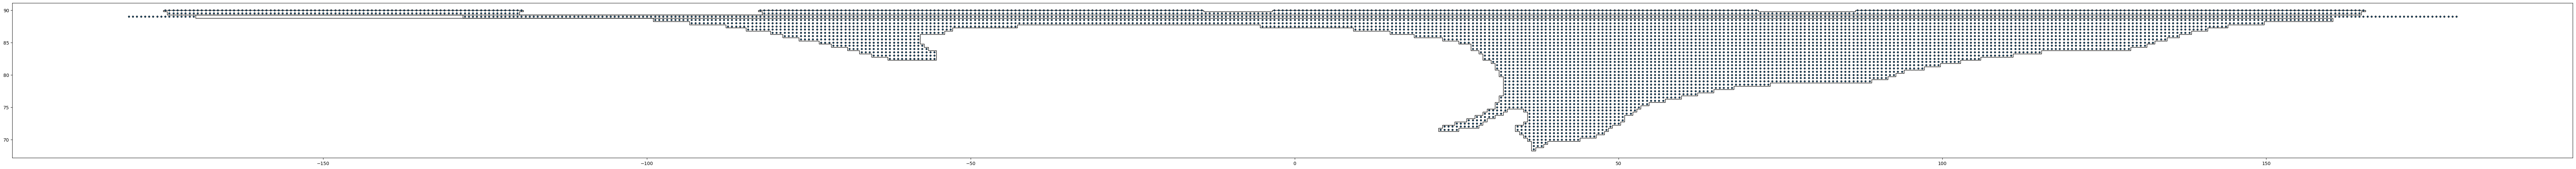

In [33]:
AR = { "_id" : "2000.07.021.09.0_25", "timestamp" : ISODate("2000-07-21T09:00:00Z"), "raster" : [ [ 36.875, 68.5, [ 250.2693328857422 ] ], [ 36.875, 69, [ 261.7423095703125 ] ], [ 37.5, 69, [ 265.3959655761719 ] ], [ 38.125, 69, [ 252.53233337402344 ] ], [ 36.875, 69.5, [ 261.25146484375 ] ], [ 37.5, 69.5, [ 279.4361877441406 ] ], [ 38.125, 69.5, [ 290.5284118652344 ] ], [ 38.75, 69.5, [ 272.93011474609375 ] ], [ 36.25, 70, [ 252.90208435058594 ] ], [ 36.875, 70, [ 276.3045959472656 ] ], [ 37.5, 70, [ 301.057373046875 ] ], [ 38.125, 70, [ 311.06573486328125 ] ], [ 38.75, 70, [ 308.2490234375 ] ], [ 39.375, 70, [ 295.0455017089844 ] ], [ 40, 70, [ 276.2925720214844 ] ], [ 40.625, 70, [ 259.9015197753906 ] ], [ 41.25, 70, [ 252.52972412109375 ] ], [ 41.875, 70, [ 252.25584411621094 ] ], [ 42.5, 70, [ 255.37501525878906 ] ], [ 43.125, 70, [ 255.9467010498047 ] ], [ 43.75, 70, [ 250.19012451171875 ] ], [ 35.625, 70.5, [ 252.85105895996094 ] ], [ 36.25, 70.5, [ 270.1895446777344 ] ], [ 36.875, 70.5, [ 291.91748046875 ] ], [ 37.5, 70.5, [ 314.74896240234375 ] ], [ 38.125, 70.5, [ 333.9007873535156 ] ], [ 38.75, 70.5, [ 345.70458984375 ] ], [ 39.375, 70.5, [ 349.1762390136719 ] ], [ 40, 70.5, [ 332.89300537109375 ] ], [ 40.625, 70.5, [ 315.6150817871094 ] ], [ 41.25, 70.5, [ 302.81671142578125 ] ], [ 41.875, 70.5, [ 295.3702392578125 ] ], [ 42.5, 70.5, [ 296.4536437988281 ] ], [ 43.125, 70.5, [ 296.48004150390625 ] ], [ 43.75, 70.5, [ 294.1368408203125 ] ], [ 44.375, 70.5, [ 287.427978515625 ] ], [ 45, 70.5, [ 280.4183654785156 ] ], [ 45.625, 70.5, [ 273.7734069824219 ] ], [ 46.25, 70.5, [ 259.562255859375 ] ], [ 35, 71, [ 258.1738586425781 ] ], [ 35.625, 71, [ 269.4723205566406 ] ], [ 36.25, 71, [ 284.49774169921875 ] ], [ 36.875, 71, [ 308.6053161621094 ] ], [ 37.5, 71, [ 336.27789306640625 ] ], [ 38.125, 71, [ 366.8077087402344 ] ], [ 38.75, 71, [ 390.6474304199219 ] ], [ 39.375, 71, [ 389.18499755859375 ] ], [ 40, 71, [ 379.7528381347656 ] ], [ 40.625, 71, [ 364.871826171875 ] ], [ 41.25, 71, [ 351.9626770019531 ] ], [ 41.875, 71, [ 346.4531555175781 ] ], [ 42.5, 71, [ 344.485595703125 ] ], [ 43.125, 71, [ 342.5213623046875 ] ], [ 43.75, 71, [ 339.9207763671875 ] ], [ 44.375, 71, [ 335.6188049316406 ] ], [ 45, 71, [ 326.68682861328125 ] ], [ 45.625, 71, [ 316.33197021484375 ] ], [ 46.25, 71, [ 305.4630432128906 ] ], [ 46.875, 71, [ 286.87652587890625 ] ], [ 47.5, 71, [ 255.7364959716797 ] ], [ 22.5, 71.5, [ 254.19976806640625 ] ], [ 23.125, 71.5, [ 253.4071044921875 ] ], [ 23.75, 71.5, [ 252.25973510742188 ] ], [ 24.375, 71.5, [ 251.76467895507812 ] ], [ 25, 71.5, [ 250.21707153320312 ] ], [ 34.375, 71.5, [ 256.294677734375 ] ], [ 35, 71.5, [ 266.9479064941406 ] ], [ 35.625, 71.5, [ 279.53472900390625 ] ], [ 36.25, 71.5, [ 295.8598327636719 ] ], [ 36.875, 71.5, [ 319.06402587890625 ] ], [ 37.5, 71.5, [ 353.3262023925781 ] ], [ 38.125, 71.5, [ 392.1383972167969 ] ], [ 38.75, 71.5, [ 416.9706726074219 ] ], [ 39.375, 71.5, [ 427.3460693359375 ] ], [ 40, 71.5, [ 424.1496276855469 ] ], [ 40.625, 71.5, [ 413.815185546875 ] ], [ 41.25, 71.5, [ 399.6349792480469 ] ], [ 41.875, 71.5, [ 392.4083251953125 ] ], [ 42.5, 71.5, [ 388.2279357910156 ] ], [ 43.125, 71.5, [ 387.2010192871094 ] ], [ 43.75, 71.5, [ 384.6226806640625 ] ], [ 44.375, 71.5, [ 377.5011291503906 ] ], [ 45, 71.5, [ 370.69256591796875 ] ], [ 45.625, 71.5, [ 362.6757507324219 ] ], [ 46.25, 71.5, [ 349.4815368652344 ] ], [ 46.875, 71.5, [ 331.16680908203125 ] ], [ 47.5, 71.5, [ 306.1814270019531 ] ], [ 48.125, 71.5, [ 267.6463623046875 ] ], [ 23.125, 72, [ 250.50662231445312 ] ], [ 23.75, 72, [ 264.1061096191406 ] ], [ 24.375, 72, [ 265.0043640136719 ] ], [ 25, 72, [ 266.07940673828125 ] ], [ 25.625, 72, [ 268.7893371582031 ] ], [ 26.25, 72, [ 266.21014404296875 ] ], [ 26.875, 72, [ 262.8652648925781 ] ], [ 27.5, 72, [ 259.0147399902344 ] ], [ 28.125, 72, [ 252.5567626953125 ] ], [ 34.375, 72, [ 250.8123016357422 ] ], [ 35, 72, [ 263.09259033203125 ] ], [ 35.625, 72, [ 277.6042175292969 ] ], [ 36.25, 72, [ 298.8236389160156 ] ], [ 36.875, 72, [ 327.18780517578125 ] ], [ 37.5, 72, [ 363.04449462890625 ] ], [ 38.125, 72, [ 399.54254150390625 ] ], [ 38.75, 72, [ 431.6838073730469 ] ], [ 39.375, 72, [ 458.24542236328125 ] ], [ 40, 72, [ 474.6012878417969 ] ], [ 40.625, 72, [ 457.9112854003906 ] ], [ 41.25, 72, [ 442.4690246582031 ] ], [ 41.875, 72, [ 430.277587890625 ] ], [ 42.5, 72, [ 421.58172607421875 ] ], [ 43.125, 72, [ 417.3013000488281 ] ], [ 43.75, 72, [ 414.56292724609375 ] ], [ 44.375, 72, [ 411.4020690917969 ] ], [ 45, 72, [ 405.63800048828125 ] ], [ 45.625, 72, [ 400.83905029296875 ] ], [ 46.25, 72, [ 392.86907958984375 ] ], [ 46.875, 72, [ 371.7344055175781 ] ], [ 47.5, 72, [ 344.86688232421875 ] ], [ 48.125, 72, [ 314.6897888183594 ] ], [ 48.75, 72, [ 279.405029296875 ] ], [ 25, 72.5, [ 258.1369323730469 ] ], [ 25.625, 72.5, [ 262.0567626953125 ] ], [ 26.25, 72.5, [ 267.9448547363281 ] ], [ 26.875, 72.5, [ 275.9990539550781 ] ], [ 27.5, 72.5, [ 273.7895812988281 ] ], [ 28.125, 72.5, [ 267.33428955078125 ] ], [ 28.75, 72.5, [ 258.0166320800781 ] ], [ 35.625, 72.5, [ 264.77178955078125 ] ], [ 36.25, 72.5, [ 286.2655334472656 ] ], [ 36.875, 72.5, [ 316.7339172363281 ] ], [ 37.5, 72.5, [ 355.3434143066406 ] ], [ 38.125, 72.5, [ 399.7594909667969 ] ], [ 38.75, 72.5, [ 441.1670227050781 ] ], [ 39.375, 72.5, [ 471.8372802734375 ] ], [ 40, 72.5, [ 477.1720886230469 ] ], [ 40.625, 72.5, [ 476.6336975097656 ] ], [ 41.25, 72.5, [ 465.31646728515625 ] ], [ 41.875, 72.5, [ 451.9900817871094 ] ], [ 42.5, 72.5, [ 440.37811279296875 ] ], [ 43.125, 72.5, [ 433.83636474609375 ] ], [ 43.75, 72.5, [ 429.1762390136719 ] ], [ 44.375, 72.5, [ 426.1539611816406 ] ], [ 45, 72.5, [ 424.7724609375 ] ], [ 45.625, 72.5, [ 420.5530700683594 ] ], [ 46.25, 72.5, [ 411.9862976074219 ] ], [ 46.875, 72.5, [ 401.44793701171875 ] ], [ 47.5, 72.5, [ 386.4031677246094 ] ], [ 48.125, 72.5, [ 359.45111083984375 ] ], [ 48.75, 72.5, [ 327.660400390625 ] ], [ 49.375, 72.5, [ 290.4105529785156 ] ], [ 50, 72.5, [ 250.26177978515625 ] ], [ 26.875, 73, [ 254.71713256835938 ] ], [ 27.5, 73, [ 264.7569274902344 ] ], [ 28.125, 73, [ 275.4870910644531 ] ], [ 28.75, 73, [ 272.52105712890625 ] ], [ 29.375, 73, [ 259.5724792480469 ] ], [ 36.25, 73, [ 269.13922119140625 ] ], [ 36.875, 73, [ 299.7001953125 ] ], [ 37.5, 73, [ 339.37451171875 ] ], [ 38.125, 73, [ 383.69091796875 ] ], [ 38.75, 73, [ 429.2387390136719 ] ], [ 39.375, 73, [ 461.437744140625 ] ], [ 40, 73, [ 476.05145263671875 ] ], [ 40.625, 73, [ 483.3666687011719 ] ], [ 41.25, 73, [ 483.3106994628906 ] ], [ 41.875, 73, [ 471.8561706542969 ] ], [ 42.5, 73, [ 456.3005065917969 ] ], [ 43.125, 73, [ 443.1422119140625 ] ], [ 43.75, 73, [ 432.4337463378906 ] ], [ 44.375, 73, [ 423.4244689941406 ] ], [ 45, 73, [ 418.8832702636719 ] ], [ 45.625, 73, [ 416.8894348144531 ] ], [ 46.25, 73, [ 415.95458984375 ] ], [ 46.875, 73, [ 412.1622314453125 ] ], [ 47.5, 73, [ 406.03173828125 ] ], [ 48.125, 73, [ 393.96844482421875 ] ], [ 48.75, 73, [ 363.05718994140625 ] ], [ 49.375, 73, [ 326.215576171875 ] ], [ 50, 73, [ 289.15228271484375 ] ], [ 50.625, 73, [ 251.703369140625 ] ], [ 28.125, 73.5, [ 252.55552673339844 ] ], [ 28.75, 73.5, [ 262.3235168457031 ] ], [ 29.375, 73.5, [ 271.045654296875 ] ], [ 30, 73.5, [ 271.13037109375 ] ], [ 30.625, 73.5, [ 253.9539794921875 ] ], [ 36.25, 73.5, [ 261.07379150390625 ] ], [ 36.875, 73.5, [ 290.4974060058594 ] ], [ 37.5, 73.5, [ 325.1695861816406 ] ], [ 38.125, 73.5, [ 364.0113830566406 ] ], [ 38.75, 73.5, [ 403.1712341308594 ] ], [ 39.375, 73.5, [ 441.046630859375 ] ], [ 40, 73.5, [ 477.3296813964844 ] ], [ 40.625, 73.5, [ 499.1824951171875 ] ], [ 41.25, 73.5, [ 493.5028076171875 ] ], [ 41.875, 73.5, [ 482.4594421386719 ] ], [ 42.5, 73.5, [ 469.5752868652344 ] ], [ 43.125, 73.5, [ 452.03863525390625 ] ], [ 43.75, 73.5, [ 434.60394287109375 ] ], [ 44.375, 73.5, [ 422.39794921875 ] ], [ 45, 73.5, [ 413.6299743652344 ] ], [ 45.625, 73.5, [ 409.7416076660156 ] ], [ 46.25, 73.5, [ 407.89703369140625 ] ], [ 46.875, 73.5, [ 407.9188537597656 ] ], [ 47.5, 73.5, [ 404.6287536621094 ] ], [ 48.125, 73.5, [ 391.2455749511719 ] ], [ 48.75, 73.5, [ 373.9075622558594 ] ], [ 49.375, 73.5, [ 352.9748229980469 ] ], [ 50, 73.5, [ 321.6094055175781 ] ], [ 50.625, 73.5, [ 286.70269775390625 ] ], [ 29.375, 74, [ 258.99658203125 ] ], [ 30, 74, [ 263.9740905761719 ] ], [ 30.625, 74, [ 265.814453125 ] ], [ 31.25, 74, [ 263.5348815917969 ] ], [ 31.875, 74, [ 250.05709838867188 ] ], [ 36.25, 74, [ 258.39642333984375 ] ], [ 36.875, 74, [ 279.9187927246094 ] ], [ 37.5, 74, [ 312.19049072265625 ] ], [ 38.125, 74, [ 347.6276550292969 ] ], [ 38.75, 74, [ 383.3904724121094 ] ], [ 39.375, 74, [ 412.9389953613281 ] ], [ 40, 74, [ 439.5058898925781 ] ], [ 40.625, 74, [ 457.6044006347656 ] ], [ 41.25, 74, [ 470.0859680175781 ] ], [ 41.875, 74, [ 471.0098571777344 ] ], [ 42.5, 74, [ 468.5429382324219 ] ], [ 43.125, 74, [ 462.0624694824219 ] ], [ 43.75, 74, [ 444.293212890625 ] ], [ 44.375, 74, [ 427.529541015625 ] ], [ 45, 74, [ 413.67547607421875 ] ], [ 45.625, 74, [ 402.4826354980469 ] ], [ 46.25, 74, [ 395.22174072265625 ] ], [ 46.875, 74, [ 393.6143493652344 ] ], [ 47.5, 74, [ 391.9648742675781 ] ], [ 48.125, 74, [ 388.44683837890625 ] ], [ 48.75, 74, [ 379.80804443359375 ] ], [ 49.375, 74, [ 365.9181213378906 ] ], [ 50, 74, [ 348.4690856933594 ] ], [ 50.625, 74, [ 323.8948974609375 ] ], [ 51.25, 74, [ 286.3499450683594 ] ], [ 51.875, 74, [ 251.33140563964844 ] ], [ 30, 74.5, [ 258.0082702636719 ] ], [ 30.625, 74.5, [ 278.6760559082031 ] ], [ 31.25, 74.5, [ 275.3379211425781 ] ], [ 31.875, 74.5, [ 268.2381591796875 ] ], [ 32.5, 74.5, [ 257.91900634765625 ] ], [ 35.625, 74.5, [ 256.04974365234375 ] ], [ 36.25, 74.5, [ 272.47161865234375 ] ], [ 36.875, 74.5, [ 293.91253662109375 ] ], [ 37.5, 74.5, [ 314.9645690917969 ] ], [ 38.125, 74.5, [ 336.3389587402344 ] ], [ 38.75, 74.5, [ 357.9046936035156 ] ], [ 39.375, 74.5, [ 382.97747802734375 ] ], [ 40, 74.5, [ 403.9286804199219 ] ], [ 40.625, 74.5, [ 419.9642028808594 ] ], [ 41.25, 74.5, [ 433.4004211425781 ] ], [ 41.875, 74.5, [ 444.1999206542969 ] ], [ 42.5, 74.5, [ 447.0340881347656 ] ], [ 43.125, 74.5, [ 440.4518127441406 ] ], [ 43.75, 74.5, [ 431.8727111816406 ] ], [ 44.375, 74.5, [ 421.4345703125 ] ], [ 45, 74.5, [ 411.10333251953125 ] ], [ 45.625, 74.5, [ 403.06585693359375 ] ], [ 46.25, 74.5, [ 396.66436767578125 ] ], [ 46.875, 74.5, [ 391.94610595703125 ] ], [ 47.5, 74.5, [ 390.0754699707031 ] ], [ 48.125, 74.5, [ 388.8108215332031 ] ], [ 48.75, 74.5, [ 386.5053405761719 ] ], [ 49.375, 74.5, [ 383.03472900390625 ] ], [ 50, 74.5, [ 366.9497375488281 ] ], [ 50.625, 74.5, [ 343.7762451171875 ] ], [ 51.25, 74.5, [ 318.2244567871094 ] ], [ 51.875, 74.5, [ 290.475830078125 ] ], [ 52.5, 74.5, [ 258.8951416015625 ] ], [ 31.25, 75, [ 272.9892272949219 ] ], [ 31.875, 75, [ 295.92681884765625 ] ], [ 32.5, 75, [ 296.5616760253906 ] ], [ 33.125, 75, [ 283.78765869140625 ] ], [ 33.75, 75, [ 272.2174377441406 ] ], [ 34.375, 75, [ 261.868408203125 ] ], [ 35, 75, [ 253.5438690185547 ] ], [ 35.625, 75, [ 267.3979797363281 ] ], [ 36.25, 75, [ 284.51416015625 ] ], [ 36.875, 75, [ 303.0478210449219 ] ], [ 37.5, 75, [ 323.10595703125 ] ], [ 38.125, 75, [ 342.6362609863281 ] ], [ 38.75, 75, [ 357.8731689453125 ] ], [ 39.375, 75, [ 371.9486999511719 ] ], [ 40, 75, [ 384.8658142089844 ] ], [ 40.625, 75, [ 396.4565124511719 ] ], [ 41.25, 75, [ 402.2664794921875 ] ], [ 41.875, 75, [ 409.3658142089844 ] ], [ 42.5, 75, [ 415.2811279296875 ] ], [ 43.125, 75, [ 419.1928405761719 ] ], [ 43.75, 75, [ 419.0146179199219 ] ], [ 44.375, 75, [ 416.6238708496094 ] ], [ 45, 75, [ 412.24908447265625 ] ], [ 45.625, 75, [ 403.3591613769531 ] ], [ 46.25, 75, [ 397.6728515625 ] ], [ 46.875, 75, [ 394.94256591796875 ] ], [ 47.5, 75, [ 393.9057312011719 ] ], [ 48.125, 75, [ 394.4666748046875 ] ], [ 48.75, 75, [ 395.8189392089844 ] ], [ 49.375, 75, [ 391.81756591796875 ] ], [ 50, 75, [ 384.2093200683594 ] ], [ 50.625, 75, [ 373.6061096191406 ] ], [ 51.25, 75, [ 351.7074890136719 ] ], [ 51.875, 75, [ 325.559814453125 ] ], [ 52.5, 75, [ 297.729736328125 ] ], [ 53.125, 75, [ 268.7913818359375 ] ], [ 31.25, 75.5, [ 266.7099609375 ] ], [ 31.875, 75.5, [ 286.0609130859375 ] ], [ 32.5, 75.5, [ 299.29296875 ] ], [ 33.125, 75.5, [ 304.8648986816406 ] ], [ 33.75, 75.5, [ 304.171142578125 ] ], [ 34.375, 75.5, [ 298.7660827636719 ] ], [ 35, 75.5, [ 295.088134765625 ] ], [ 35.625, 75.5, [ 295.3671569824219 ] ], [ 36.25, 75.5, [ 301.1456298828125 ] ], [ 36.875, 75.5, [ 311.912109375 ] ], [ 37.5, 75.5, [ 327.921142578125 ] ], [ 38.125, 75.5, [ 345.4648132324219 ] ], [ 38.75, 75.5, [ 361.6375427246094 ] ], [ 39.375, 75.5, [ 371.9971008300781 ] ], [ 40, 75.5, [ 379.5292663574219 ] ], [ 40.625, 75.5, [ 385.72149658203125 ] ], [ 41.25, 75.5, [ 391.9222717285156 ] ], [ 41.875, 75.5, [ 396.8193359375 ] ], [ 42.5, 75.5, [ 399.1033020019531 ] ], [ 43.125, 75.5, [ 400.7671813964844 ] ], [ 43.75, 75.5, [ 401.7908020019531 ] ], [ 44.375, 75.5, [ 401.829833984375 ] ], [ 45, 75.5, [ 397.3016662597656 ] ], [ 45.625, 75.5, [ 393.19500732421875 ] ], [ 46.25, 75.5, [ 389.9002685546875 ] ], [ 46.875, 75.5, [ 387.443359375 ] ], [ 47.5, 75.5, [ 391.15081787109375 ] ], [ 48.125, 75.5, [ 397.3701477050781 ] ], [ 48.75, 75.5, [ 401.0638732910156 ] ], [ 49.375, 75.5, [ 403.6658630371094 ] ], [ 50, 75.5, [ 401.3122863769531 ] ], [ 50.625, 75.5, [ 394.16253662109375 ] ], [ 51.25, 75.5, [ 384.1392517089844 ] ], [ 51.875, 75.5, [ 371.5624084472656 ] ], [ 52.5, 75.5, [ 347.9906311035156 ] ], [ 53.125, 75.5, [ 316.9878845214844 ] ], [ 53.75, 75.5, [ 288.31195068359375 ] ], [ 54.375, 75.5, [ 261.7377624511719 ] ], [ 31.875, 76, [ 268.8399963378906 ] ], [ 32.5, 76, [ 308.38177490234375 ] ], [ 33.125, 76, [ 338.63800048828125 ] ], [ 33.75, 76, [ 338.1468200683594 ] ], [ 34.375, 76, [ 330.47540283203125 ] ], [ 35, 76, [ 322.6556396484375 ] ], [ 35.625, 76, [ 315.3915100097656 ] ], [ 36.25, 76, [ 310.4884033203125 ] ], [ 36.875, 76, [ 320.6452331542969 ] ], [ 37.5, 76, [ 334.5715026855469 ] ], [ 38.125, 76, [ 348.8098449707031 ] ], [ 38.75, 76, [ 362.99420166015625 ] ], [ 39.375, 76, [ 377.149658203125 ] ], [ 40, 76, [ 386.7163391113281 ] ], [ 40.625, 76, [ 389.1388854980469 ] ], [ 41.25, 76, [ 391.0258483886719 ] ], [ 41.875, 76, [ 392.4510192871094 ] ], [ 42.5, 76, [ 393.4986267089844 ] ], [ 43.125, 76, [ 392.70635986328125 ] ], [ 43.75, 76, [ 390.7187805175781 ] ], [ 44.375, 76, [ 387.97100830078125 ] ], [ 45, 76, [ 384.33837890625 ] ], [ 45.625, 76, [ 379.8887023925781 ] ], [ 46.25, 76, [ 377.9137268066406 ] ], [ 46.875, 76, [ 377.7979736328125 ] ], [ 47.5, 76, [ 380.5400695800781 ] ], [ 48.125, 76, [ 385.5896911621094 ] ], [ 48.75, 76, [ 395.047607421875 ] ], [ 49.375, 76, [ 404.442626953125 ] ], [ 50, 76, [ 411.7308044433594 ] ], [ 50.625, 76, [ 416.8798522949219 ] ], [ 51.25, 76, [ 414.5428161621094 ] ], [ 51.875, 76, [ 401.6619873046875 ] ], [ 52.5, 76, [ 382.5666198730469 ] ], [ 53.125, 76, [ 361.32525634765625 ] ], [ 53.75, 76, [ 337.7645568847656 ] ], [ 54.375, 76, [ 314.7334899902344 ] ], [ 55, 76, [ 293.760498046875 ] ], [ 55.625, 76, [ 274.7247314453125 ] ], [ 56.25, 76, [ 261.0350341796875 ] ], [ 56.875, 76, [ 251.97384643554688 ] ], [ 31.875, 76.5, [ 250.3902130126953 ] ], [ 32.5, 76.5, [ 283.4429931640625 ] ], [ 33.125, 76.5, [ 311.42413330078125 ] ], [ 33.75, 76.5, [ 333.5578918457031 ] ], [ 34.375, 76.5, [ 349.3363342285156 ] ], [ 35, 76.5, [ 357.8295593261719 ] ], [ 35.625, 76.5, [ 351.42303466796875 ] ], [ 36.25, 76.5, [ 346.2077331542969 ] ], [ 36.875, 76.5, [ 343.94317626953125 ] ], [ 37.5, 76.5, [ 344.6391296386719 ] ], [ 38.125, 76.5, [ 348.22821044921875 ] ], [ 38.75, 76.5, [ 356.673095703125 ] ], [ 39.375, 76.5, [ 368.463134765625 ] ], [ 40, 76.5, [ 378.578125 ] ], [ 40.625, 76.5, [ 387.0413818359375 ] ], [ 41.25, 76.5, [ 393.4523620605469 ] ], [ 41.875, 76.5, [ 395.9494323730469 ] ], [ 42.5, 76.5, [ 396.37158203125 ] ], [ 43.125, 76.5, [ 394.6660461425781 ] ], [ 43.75, 76.5, [ 392.3709716796875 ] ], [ 44.375, 76.5, [ 387.8411865234375 ] ], [ 45, 76.5, [ 380.84527587890625 ] ], [ 45.625, 76.5, [ 373.77410888671875 ] ], [ 46.25, 76.5, [ 366.7674560546875 ] ], [ 46.875, 76.5, [ 364.17559814453125 ] ], [ 47.5, 76.5, [ 370.4576416015625 ] ], [ 48.125, 76.5, [ 379.6114807128906 ] ], [ 48.75, 76.5, [ 390.54852294921875 ] ], [ 49.375, 76.5, [ 403.1267395019531 ] ], [ 50, 76.5, [ 416.58447265625 ] ], [ 50.625, 76.5, [ 428.1432189941406 ] ], [ 51.25, 76.5, [ 431.4757995605469 ] ], [ 51.875, 76.5, [ 429.9469909667969 ] ], [ 52.5, 76.5, [ 421.91217041015625 ] ], [ 53.125, 76.5, [ 402.6388854980469 ] ], [ 53.75, 76.5, [ 382.4185485839844 ] ], [ 54.375, 76.5, [ 361.32904052734375 ] ], [ 55, 76.5, [ 340.0577392578125 ] ], [ 55.625, 76.5, [ 324.27227783203125 ] ], [ 56.25, 76.5, [ 310.1602783203125 ] ], [ 56.875, 76.5, [ 297.8115539550781 ] ], [ 57.5, 76.5, [ 286.8660583496094 ] ], [ 58.125, 76.5, [ 277.6537780761719 ] ], [ 58.75, 76.5, [ 268.0579528808594 ] ], [ 59.375, 76.5, [ 258.10107421875 ] ], [ 32.5, 77, [ 274.99835205078125 ] ], [ 33.125, 77, [ 310.34051513671875 ] ], [ 33.75, 77, [ 344.2817687988281 ] ], [ 34.375, 77, [ 361.99072265625 ] ], [ 35, 77, [ 368.19970703125 ] ], [ 35.625, 77, [ 369.8180847167969 ] ], [ 36.25, 77, [ 365.9155578613281 ] ], [ 36.875, 77, [ 358.49224853515625 ] ], [ 37.5, 77, [ 351.6690673828125 ] ], [ 38.125, 77, [ 355.06964111328125 ] ], [ 38.75, 77, [ 360.66802978515625 ] ], [ 39.375, 77, [ 368.4150085449219 ] ], [ 40, 77, [ 376.2784118652344 ] ], [ 40.625, 77, [ 383.9884338378906 ] ], [ 41.25, 77, [ 391.1780700683594 ] ], [ 41.875, 77, [ 394.5224914550781 ] ], [ 42.5, 77, [ 396.7349853515625 ] ], [ 43.125, 77, [ 393.96014404296875 ] ], [ 43.75, 77, [ 390.38519287109375 ] ], [ 44.375, 77, [ 385.86773681640625 ] ], [ 45, 77, [ 380.4706726074219 ] ], [ 45.625, 77, [ 374.46990966796875 ] ], [ 46.25, 77, [ 370.3086853027344 ] ], [ 46.875, 77, [ 368.0196228027344 ] ], [ 47.5, 77, [ 367.688720703125 ] ], [ 48.125, 77, [ 369.54595947265625 ] ], [ 48.75, 77, [ 379.9976501464844 ] ], [ 49.375, 77, [ 395.7168273925781 ] ], [ 50, 77, [ 412.8037109375 ] ], [ 50.625, 77, [ 428.3723449707031 ] ], [ 51.25, 77, [ 440.280517578125 ] ], [ 51.875, 77, [ 440.9421081542969 ] ], [ 52.5, 77, [ 438.2515869140625 ] ], [ 53.125, 77, [ 432.39044189453125 ] ], [ 53.75, 77, [ 423.66802978515625 ] ], [ 54.375, 77, [ 407.9259033203125 ] ], [ 55, 77, [ 390.7362365722656 ] ], [ 55.625, 77, [ 371.8069763183594 ] ], [ 56.25, 77, [ 353.84600830078125 ] ], [ 56.875, 77, [ 340.6002502441406 ] ], [ 57.5, 77, [ 330.5822448730469 ] ], [ 58.125, 77, [ 321.22406005859375 ] ], [ 58.75, 77, [ 312.4241943359375 ] ], [ 59.375, 77, [ 302.8056945800781 ] ], [ 60, 77, [ 290.8721618652344 ] ], [ 60.625, 77, [ 278.24786376953125 ] ], [ 61.25, 77, [ 265.04736328125 ] ], [ 61.875, 77, [ 250.90977478027344 ] ], [ 32.5, 77.5, [ 261.180419921875 ] ], [ 33.125, 77.5, [ 293.0785827636719 ] ], [ 33.75, 77.5, [ 324.5296325683594 ] ], [ 34.375, 77.5, [ 347.6228942871094 ] ], [ 35, 77.5, [ 367.1831970214844 ] ], [ 35.625, 77.5, [ 382.8078918457031 ] ], [ 36.25, 77.5, [ 394.2503662109375 ] ], [ 36.875, 77.5, [ 388.8941650390625 ] ], [ 37.5, 77.5, [ 381.633544921875 ] ], [ 38.125, 77.5, [ 374.69134521484375 ] ], [ 38.75, 77.5, [ 369.5790710449219 ] ], [ 39.375, 77.5, [ 366.1519775390625 ] ], [ 40, 77.5, [ 364.4431457519531 ] ], [ 40.625, 77.5, [ 370.8934326171875 ] ], [ 41.25, 77.5, [ 376.78173828125 ] ], [ 41.875, 77.5, [ 381.5023498535156 ] ], [ 42.5, 77.5, [ 385.0531311035156 ] ], [ 43.125, 77.5, [ 387.513916015625 ] ], [ 43.75, 77.5, [ 388.8911437988281 ] ], [ 44.375, 77.5, [ 384.66693115234375 ] ], [ 45, 77.5, [ 378.0113525390625 ] ], [ 45.625, 77.5, [ 371.6901550292969 ] ], [ 46.25, 77.5, [ 365.8254089355469 ] ], [ 46.875, 77.5, [ 360.38470458984375 ] ], [ 47.5, 77.5, [ 363.9268798828125 ] ], [ 48.125, 77.5, [ 369.6316223144531 ] ], [ 48.75, 77.5, [ 377.6080627441406 ] ], [ 49.375, 77.5, [ 389.3722229003906 ] ], [ 50, 77.5, [ 403.8348083496094 ] ], [ 50.625, 77.5, [ 419.3641357421875 ] ], [ 51.25, 77.5, [ 433.2100830078125 ] ], [ 51.875, 77.5, [ 445.31597900390625 ] ], [ 52.5, 77.5, [ 455.6951904296875 ] ], [ 53.125, 77.5, [ 454.6380920410156 ] ], [ 53.75, 77.5, [ 447.2268981933594 ] ], [ 54.375, 77.5, [ 436.3169250488281 ] ], [ 55, 77.5, [ 421.3733215332031 ] ], [ 55.625, 77.5, [ 406.16546630859375 ] ], [ 56.25, 77.5, [ 391.83856201171875 ] ], [ 56.875, 77.5, [ 378.71539306640625 ] ], [ 57.5, 77.5, [ 366.8294982910156 ] ], [ 58.125, 77.5, [ 356.0732116699219 ] ], [ 58.75, 77.5, [ 349.0566101074219 ] ], [ 59.375, 77.5, [ 342.642578125 ] ], [ 60, 77.5, [ 336.36834716796875 ] ], [ 60.625, 77.5, [ 330.1739501953125 ] ], [ 61.25, 77.5, [ 320.15814208984375 ] ], [ 61.875, 77.5, [ 307.4902648925781 ] ], [ 62.5, 77.5, [ 294.7545166015625 ] ], [ 63.125, 77.5, [ 281.9191589355469 ] ], [ 63.75, 77.5, [ 269.240966796875 ] ], [ 64.375, 77.5, [ 257.472900390625 ] ], [ 32.5, 78, [ 263.3338623046875 ] ], [ 33.125, 78, [ 288.6161193847656 ] ], [ 33.75, 78, [ 313.7714538574219 ] ], [ 34.375, 78, [ 338.73309326171875 ] ], [ 35, 78, [ 362.7462158203125 ] ], [ 35.625, 78, [ 373.8819885253906 ] ], [ 36.25, 78, [ 381.43707275390625 ] ], [ 36.875, 78, [ 386.02581787109375 ] ], [ 37.5, 78, [ 387.7124938964844 ] ], [ 38.125, 78, [ 386.50421142578125 ] ], [ 38.75, 78, [ 382.76519775390625 ] ], [ 39.375, 78, [ 379.88934326171875 ] ], [ 40, 78, [ 378.3294982910156 ] ], [ 40.625, 78, [ 377.7276611328125 ] ], [ 41.25, 78, [ 378.023681640625 ] ], [ 41.875, 78, [ 379.2716064453125 ] ], [ 42.5, 78, [ 378.4964599609375 ] ], [ 43.125, 78, [ 376.9870300292969 ] ], [ 43.75, 78, [ 375.51348876953125 ] ], [ 44.375, 78, [ 373.0516052246094 ] ], [ 45, 78, [ 369.523681640625 ] ], [ 45.625, 78, [ 365.554443359375 ] ], [ 46.25, 78, [ 362.3587341308594 ] ], [ 46.875, 78, [ 359.9236145019531 ] ], [ 47.5, 78, [ 358.21917724609375 ] ], [ 48.125, 78, [ 358.6944274902344 ] ], [ 48.75, 78, [ 367.4396057128906 ] ], [ 49.375, 78, [ 380.9902648925781 ] ], [ 50, 78, [ 395.602783203125 ] ], [ 50.625, 78, [ 411.19677734375 ] ], [ 51.25, 78, [ 427.7133483886719 ] ], [ 51.875, 78, [ 439.1654052734375 ] ], [ 52.5, 78, [ 447.20941162109375 ] ], [ 53.125, 78, [ 453.4380798339844 ] ], [ 53.75, 78, [ 453.5711669921875 ] ], [ 54.375, 78, [ 450.732666015625 ] ], [ 55, 78, [ 437.7070007324219 ] ], [ 55.625, 78, [ 424.78326416015625 ] ], [ 56.25, 78, [ 411.87664794921875 ] ], [ 56.875, 78, [ 399.07568359375 ] ], [ 57.5, 78, [ 388.173583984375 ] ], [ 58.125, 78, [ 380.61737060546875 ] ], [ 58.75, 78, [ 374.2224426269531 ] ], [ 59.375, 78, [ 369.01959228515625 ] ], [ 60, 78, [ 364.44342041015625 ] ], [ 60.625, 78, [ 360.5079650878906 ] ], [ 61.25, 78, [ 355.9105224609375 ] ], [ 61.875, 78, [ 350.59649658203125 ] ], [ 62.5, 78, [ 344.5752258300781 ] ], [ 63.125, 78, [ 336.0193786621094 ] ], [ 63.75, 78, [ 325.570556640625 ] ], [ 64.375, 78, [ 314.97113037109375 ] ], [ 65, 78, [ 304.33612060546875 ] ], [ 65.625, 78, [ 293.3347473144531 ] ], [ 66.25, 78, [ 280.9014587402344 ] ], [ 66.875, 78, [ 268.8290710449219 ] ], [ 67.5, 78, [ 257.17822265625 ] ], [ 32.5, 78.5, [ 265.2254638671875 ] ], [ 33.125, 78.5, [ 289.3698425292969 ] ], [ 33.75, 78.5, [ 312.3132629394531 ] ], [ 34.375, 78.5, [ 331.063232421875 ] ], [ 35, 78.5, [ 348.9233093261719 ] ], [ 35.625, 78.5, [ 365.7086486816406 ] ], [ 36.25, 78.5, [ 381.32025146484375 ] ], [ 36.875, 78.5, [ 390.5299377441406 ] ], [ 37.5, 78.5, [ 398.03485107421875 ] ], [ 38.125, 78.5, [ 398.7118835449219 ] ], [ 38.75, 78.5, [ 396.3481140136719 ] ], [ 39.375, 78.5, [ 393.521240234375 ] ], [ 40, 78.5, [ 390.1401062011719 ] ], [ 40.625, 78.5, [ 385.75048828125 ] ], [ 41.25, 78.5, [ 381.4933166503906 ] ], [ 41.875, 78.5, [ 377.3625183105469 ] ], [ 42.5, 78.5, [ 376.3525085449219 ] ], [ 43.125, 78.5, [ 375.53326416015625 ] ], [ 43.75, 78.5, [ 373.1746520996094 ] ], [ 44.375, 78.5, [ 369.1087341308594 ] ], [ 45, 78.5, [ 364.5265197753906 ] ], [ 45.625, 78.5, [ 359.4573669433594 ] ], [ 46.25, 78.5, [ 353.7572326660156 ] ], [ 46.875, 78.5, [ 349.103515625 ] ], [ 47.5, 78.5, [ 352.27056884765625 ] ], [ 48.125, 78.5, [ 356.98040771484375 ] ], [ 48.75, 78.5, [ 363.24951171875 ] ], [ 49.375, 78.5, [ 371.1897277832031 ] ], [ 50, 78.5, [ 380.83917236328125 ] ], [ 50.625, 78.5, [ 394.5964050292969 ] ], [ 51.25, 78.5, [ 408.57293701171875 ] ], [ 51.875, 78.5, [ 422.7524108886719 ] ], [ 52.5, 78.5, [ 435.56646728515625 ] ], [ 53.125, 78.5, [ 445.87353515625 ] ], [ 53.75, 78.5, [ 443.98382568359375 ] ], [ 54.375, 78.5, [ 440.54095458984375 ] ], [ 55, 78.5, [ 435.6064147949219 ] ], [ 55.625, 78.5, [ 429.26629638671875 ] ], [ 56.25, 78.5, [ 420.9229431152344 ] ], [ 56.875, 78.5, [ 409.47222900390625 ] ], [ 57.5, 78.5, [ 398.1728515625 ] ], [ 58.125, 78.5, [ 387.119384765625 ] ], [ 58.75, 78.5, [ 376.1846618652344 ] ], [ 59.375, 78.5, [ 369.5216369628906 ] ], [ 60, 78.5, [ 367.28045654296875 ] ], [ 60.625, 78.5, [ 365.40948486328125 ] ], [ 61.25, 78.5, [ 363.8421325683594 ] ], [ 61.875, 78.5, [ 362.60400390625 ] ], [ 62.5, 78.5, [ 361.8653259277344 ] ], [ 63.125, 78.5, [ 360.4187927246094 ] ], [ 63.75, 78.5, [ 358.1306457519531 ] ], [ 64.375, 78.5, [ 355.1201171875 ] ], [ 65, 78.5, [ 350.54803466796875 ] ], [ 65.625, 78.5, [ 342.9278259277344 ] ], [ 66.25, 78.5, [ 334.7428283691406 ] ], [ 66.875, 78.5, [ 326.1094055175781 ] ], [ 67.5, 78.5, [ 317.1510314941406 ] ], [ 68.125, 78.5, [ 307.554443359375 ] ], [ 68.75, 78.5, [ 297.8437194824219 ] ], [ 69.375, 78.5, [ 288.1920166015625 ] ], [ 70, 78.5, [ 279.3085021972656 ] ], [ 70.625, 78.5, [ 272.32867431640625 ] ], [ 71.25, 78.5, [ 267.84979248046875 ] ], [ 71.875, 78.5, [ 263.0579528808594 ] ], [ 72.5, 78.5, [ 257.98114013671875 ] ], [ 73.125, 78.5, [ 252.67535400390625 ] ], [ 32.5, 79, [ 273.8646240234375 ] ], [ 33.125, 79, [ 296.85430908203125 ] ], [ 33.75, 79, [ 317.6630554199219 ] ], [ 34.375, 79, [ 332.9111633300781 ] ], [ 35, 79, [ 347.38555908203125 ] ], [ 35.625, 79, [ 361.0128479003906 ] ], [ 36.25, 79, [ 373.7438049316406 ] ], [ 36.875, 79, [ 383.393310546875 ] ], [ 37.5, 79, [ 391.1589050292969 ] ], [ 38.125, 79, [ 394.873779296875 ] ], [ 38.75, 79, [ 396.84613037109375 ] ], [ 39.375, 79, [ 398.12542724609375 ] ], [ 40, 79, [ 398.6618957519531 ] ], [ 40.625, 79, [ 398.4419250488281 ] ], [ 41.25, 79, [ 395.823974609375 ] ], [ 41.875, 79, [ 392.5291748046875 ] ], [ 42.5, 79, [ 388.4162292480469 ] ], [ 43.125, 79, [ 383.7862243652344 ] ], [ 43.75, 79, [ 378.7290344238281 ] ], [ 44.375, 79, [ 373.30364990234375 ] ], [ 45, 79, [ 367.5937194824219 ] ], [ 45.625, 79, [ 360.730712890625 ] ], [ 46.25, 79, [ 356.552001953125 ] ], [ 46.875, 79, [ 353.42486572265625 ] ], [ 47.5, 79, [ 351.3738708496094 ] ], [ 48.125, 79, [ 350.2984313964844 ] ], [ 48.75, 79, [ 353.412353515625 ] ], [ 49.375, 79, [ 361.03619384765625 ] ], [ 50, 79, [ 369.77581787109375 ] ], [ 50.625, 79, [ 379.5841064453125 ] ], [ 51.25, 79, [ 391.1579284667969 ] ], [ 51.875, 79, [ 403.6942443847656 ] ], [ 52.5, 79, [ 412.8844909667969 ] ], [ 53.125, 79, [ 420.54132080078125 ] ], [ 53.75, 79, [ 426.6927795410156 ] ], [ 54.375, 79, [ 431.3919372558594 ] ], [ 55, 79, [ 433.98358154296875 ] ], [ 55.625, 79, [ 426.9259948730469 ] ], [ 56.25, 79, [ 418.6607360839844 ] ], [ 56.875, 79, [ 409.13555908203125 ] ], [ 57.5, 79, [ 398.52020263671875 ] ], [ 58.125, 79, [ 387.52789306640625 ] ], [ 58.75, 79, [ 379.59539794921875 ] ], [ 59.375, 79, [ 372.51824951171875 ] ], [ 60, 79, [ 366.2425842285156 ] ], [ 60.625, 79, [ 360.7277526855469 ] ], [ 61.25, 79, [ 357.0327453613281 ] ], [ 61.875, 79, [ 358.03021240234375 ] ], [ 62.5, 79, [ 359.4270935058594 ] ], [ 63.125, 79, [ 361.19415283203125 ] ], [ 63.75, 79, [ 363.31207275390625 ] ], [ 64.375, 79, [ 365.1553955078125 ] ], [ 65, 79, [ 365.8722839355469 ] ], [ 65.625, 79, [ 366.1347351074219 ] ], [ 66.25, 79, [ 365.8768310546875 ] ], [ 66.875, 79, [ 365.2059326171875 ] ], [ 67.5, 79, [ 361.8759460449219 ] ], [ 68.125, 79, [ 355.2356262207031 ] ], [ 68.75, 79, [ 348.3697204589844 ] ], [ 69.375, 79, [ 341.40557861328125 ] ], [ 70, 79, [ 334.4140625 ] ], [ 70.625, 79, [ 327.8841247558594 ] ], [ 71.25, 79, [ 321.7489318847656 ] ], [ 71.875, 79, [ 316.0137939453125 ] ], [ 72.5, 79, [ 310.5846252441406 ] ], [ 73.125, 79, [ 307.03369140625 ] ], [ 73.75, 79, [ 305.55322265625 ] ], [ 74.375, 79, [ 304.05230712890625 ] ], [ 75, 79, [ 302.5411071777344 ] ], [ 75.625, 79, [ 301.03204345703125 ] ], [ 76.25, 79, [ 300.9429931640625 ] ], [ 76.875, 79, [ 301.1458435058594 ] ], [ 77.5, 79, [ 301.365234375 ] ], [ 78.125, 79, [ 301.6700134277344 ] ], [ 78.75, 79, [ 301.58172607421875 ] ], [ 79.375, 79, [ 300.3121032714844 ] ], [ 80, 79, [ 298.9930114746094 ] ], [ 80.625, 79, [ 297.67401123046875 ] ], [ 81.25, 79, [ 296.37811279296875 ] ], [ 81.875, 79, [ 293.5286865234375 ] ], [ 82.5, 79, [ 290.3334045410156 ] ], [ 83.125, 79, [ 287.4455871582031 ] ], [ 83.75, 79, [ 284.8027038574219 ] ], [ 84.375, 79, [ 282.2373962402344 ] ], [ 85, 79, [ 278.9154357910156 ] ], [ 85.625, 79, [ 276.3652648925781 ] ], [ 86.25, 79, [ 274.53472900390625 ] ], [ 86.875, 79, [ 273.4622802734375 ] ], [ 87.5, 79, [ 268.67120361328125 ] ], [ 88.125, 79, [ 261.1424865722656 ] ], [ 88.75, 79, [ 254.19522094726562 ] ], [ 32.5, 79.5, [ 269.41571044921875 ] ], [ 33.125, 79.5, [ 293.5757141113281 ] ], [ 33.75, 79.5, [ 316.0245361328125 ] ], [ 34.375, 79.5, [ 336.579833984375 ] ], [ 35, 79.5, [ 354.6888732910156 ] ], [ 35.625, 79.5, [ 363.41534423828125 ] ], [ 36.25, 79.5, [ 370.9617004394531 ] ], [ 36.875, 79.5, [ 377.78594970703125 ] ], [ 37.5, 79.5, [ 383.8928527832031 ] ], [ 38.125, 79.5, [ 389.27166748046875 ] ], [ 38.75, 79.5, [ 393.9712829589844 ] ], [ 39.375, 79.5, [ 397.99725341796875 ] ], [ 40, 79.5, [ 399.7498779296875 ] ], [ 40.625, 79.5, [ 400.9163818359375 ] ], [ 41.25, 79.5, [ 401.4265441894531 ] ], [ 41.875, 79.5, [ 401.3028869628906 ] ], [ 42.5, 79.5, [ 400.5552673339844 ] ], [ 43.125, 79.5, [ 398.7606506347656 ] ], [ 43.75, 79.5, [ 393.82684326171875 ] ], [ 44.375, 79.5, [ 387.8434143066406 ] ], [ 45, 79.5, [ 380.8856201171875 ] ], [ 45.625, 79.5, [ 373.9601135253906 ] ], [ 46.25, 79.5, [ 367.0882568359375 ] ], [ 46.875, 79.5, [ 361.15472412109375 ] ], [ 47.5, 79.5, [ 358.6950378417969 ] ], [ 48.125, 79.5, [ 357.47900390625 ] ], [ 48.75, 79.5, [ 357.4524230957031 ] ], [ 49.375, 79.5, [ 358.6001892089844 ] ], [ 50, 79.5, [ 361.7971496582031 ] ], [ 50.625, 79.5, [ 370.23150634765625 ] ], [ 51.25, 79.5, [ 379.7474365234375 ] ], [ 51.875, 79.5, [ 389.28277587890625 ] ], [ 52.5, 79.5, [ 398.8168640136719 ] ], [ 53.125, 79.5, [ 408.3156433105469 ] ], [ 53.75, 79.5, [ 416.7124938964844 ] ], [ 54.375, 79.5, [ 419.48785400390625 ] ], [ 55, 79.5, [ 420.87408447265625 ] ], [ 55.625, 79.5, [ 420.8488464355469 ] ], [ 56.25, 79.5, [ 419.5299377441406 ] ], [ 56.875, 79.5, [ 416.15191650390625 ] ], [ 57.5, 79.5, [ 407.10955810546875 ] ], [ 58.125, 79.5, [ 397.7563171386719 ] ], [ 58.75, 79.5, [ 388.5513916015625 ] ], [ 59.375, 79.5, [ 379.50439453125 ] ], [ 60, 79.5, [ 370.6163330078125 ] ], [ 60.625, 79.5, [ 364.99688720703125 ] ], [ 61.25, 79.5, [ 361.0399169921875 ] ], [ 61.875, 79.5, [ 357.62628173828125 ] ], [ 62.5, 79.5, [ 354.77703857421875 ] ], [ 63.125, 79.5, [ 352.40472412109375 ] ], [ 63.75, 79.5, [ 352.5525207519531 ] ], [ 64.375, 79.5, [ 353.98675537109375 ] ], [ 65, 79.5, [ 355.87762451171875 ] ], [ 65.625, 79.5, [ 358.14453125 ] ], [ 66.25, 79.5, [ 360.8147277832031 ] ], [ 66.875, 79.5, [ 363.8699035644531 ] ], [ 67.5, 79.5, [ 366.4332275390625 ] ], [ 68.125, 79.5, [ 368.2640380859375 ] ], [ 68.75, 79.5, [ 369.42706298828125 ] ], [ 69.375, 79.5, [ 370.0329284667969 ] ], [ 70, 79.5, [ 368.04437255859375 ] ], [ 70.625, 79.5, [ 365.3081970214844 ] ], [ 71.25, 79.5, [ 362.28009033203125 ] ], [ 71.875, 79.5, [ 359.03643798828125 ] ], [ 72.5, 79.5, [ 355.6438293457031 ] ], [ 73.125, 79.5, [ 352.7118835449219 ] ], [ 73.75, 79.5, [ 350.0328674316406 ] ], [ 74.375, 79.5, [ 347.6004333496094 ] ], [ 75, 79.5, [ 345.40234375 ] ], [ 75.625, 79.5, [ 344.0248107910156 ] ], [ 76.25, 79.5, [ 345.6955871582031 ] ], [ 76.875, 79.5, [ 347.4155578613281 ] ], [ 77.5, 79.5, [ 349.2370300292969 ] ], [ 78.125, 79.5, [ 351.08343505859375 ] ], [ 78.75, 79.5, [ 352.9143371582031 ] ], [ 79.375, 79.5, [ 354.5601806640625 ] ], [ 80, 79.5, [ 356.2925720214844 ] ], [ 80.625, 79.5, [ 358.0589294433594 ] ], [ 81.25, 79.5, [ 359.884765625 ] ], [ 81.875, 79.5, [ 359.5113220214844 ] ], [ 82.5, 79.5, [ 357.8229675292969 ] ], [ 83.125, 79.5, [ 356.36480712890625 ] ], [ 83.75, 79.5, [ 355.17132568359375 ] ], [ 84.375, 79.5, [ 354.2408447265625 ] ], [ 85, 79.5, [ 349.82342529296875 ] ], [ 85.625, 79.5, [ 344.9827575683594 ] ], [ 86.25, 79.5, [ 340.552978515625 ] ], [ 86.875, 79.5, [ 336.4954528808594 ] ], [ 87.5, 79.5, [ 332.74383544921875 ] ], [ 88.125, 79.5, [ 320.1960754394531 ] ], [ 88.75, 79.5, [ 308.0904541015625 ] ], [ 89.375, 79.5, [ 296.4204406738281 ] ], [ 90, 79.5, [ 285.1102294921875 ] ], [ 90.625, 79.5, [ 273.23760986328125 ] ], [ 91.25, 79.5, [ 257.2040100097656 ] ], [ 31.875, 80, [ 256.77215576171875 ] ], [ 32.5, 80, [ 282.47674560546875 ] ], [ 33.125, 80, [ 304.9523010253906 ] ], [ 33.75, 80, [ 321.9730529785156 ] ], [ 34.375, 80, [ 334.725830078125 ] ], [ 35, 80, [ 346.63983154296875 ] ], [ 35.625, 80, [ 357.6342468261719 ] ], [ 36.25, 80, [ 367.59283447265625 ] ], [ 36.875, 80, [ 375.78570556640625 ] ], [ 37.5, 80, [ 382.597900390625 ] ], [ 38.125, 80, [ 388.5394592285156 ] ], [ 38.75, 80, [ 392.97662353515625 ] ], [ 39.375, 80, [ 397.1163635253906 ] ], [ 40, 80, [ 401.00799560546875 ] ], [ 40.625, 80, [ 404.63128662109375 ] ], [ 41.25, 80, [ 407.3929443359375 ] ], [ 41.875, 80, [ 409.5027160644531 ] ], [ 42.5, 80, [ 411.0577087402344 ] ], [ 43.125, 80, [ 411.1796569824219 ] ], [ 43.75, 80, [ 408.3601989746094 ] ], [ 44.375, 80, [ 404.5946350097656 ] ], [ 45, 80, [ 399.4310607910156 ] ], [ 45.625, 80, [ 393.0745544433594 ] ], [ 46.25, 80, [ 386.771728515625 ] ], [ 46.875, 80, [ 380.4195556640625 ] ], [ 47.5, 80, [ 374.11419677734375 ] ], [ 48.125, 80, [ 367.907958984375 ] ], [ 48.75, 80, [ 364.26373291015625 ] ], [ 49.375, 80, [ 366.91998291015625 ] ], [ 50, 80, [ 370.3546142578125 ] ], [ 50.625, 80, [ 374.48651123046875 ] ], [ 51.25, 80, [ 379.30999755859375 ] ], [ 51.875, 80, [ 384.8322448730469 ] ], [ 52.5, 80, [ 391.12677001953125 ] ], [ 53.125, 80, [ 397.7454833984375 ] ], [ 53.75, 80, [ 404.42193603515625 ] ], [ 54.375, 80, [ 411.1665344238281 ] ], [ 55, 80, [ 417.9470520019531 ] ], [ 55.625, 80, [ 423.7963562011719 ] ], [ 56.25, 80, [ 421.8324279785156 ] ], [ 56.875, 80, [ 418.2627258300781 ] ], [ 57.5, 80, [ 413.9390869140625 ] ], [ 58.125, 80, [ 408.8246765136719 ] ], [ 58.75, 80, [ 403.0247497558594 ] ], [ 59.375, 80, [ 396.59759521484375 ] ], [ 60, 80, [ 390.0852966308594 ] ], [ 60.625, 80, [ 383.57586669921875 ] ], [ 61.25, 80, [ 377.08831787109375 ] ], [ 61.875, 80, [ 370.58551025390625 ] ], [ 62.5, 80, [ 364.3976745605469 ] ], [ 63.125, 80, [ 360.7815856933594 ] ], [ 63.75, 80, [ 357.4675598144531 ] ], [ 64.375, 80, [ 354.4144287109375 ] ], [ 65, 80, [ 352.7564392089844 ] ], [ 65.625, 80, [ 352.4595031738281 ] ], [ 66.25, 80, [ 355.48699951171875 ] ], [ 66.875, 80, [ 359.0244445800781 ] ], [ 67.5, 80, [ 362.6094970703125 ] ], [ 68.125, 80, [ 366.231689453125 ] ], [ 68.75, 80, [ 369.8550109863281 ] ], [ 69.375, 80, [ 373.1160888671875 ] ], [ 70, 80, [ 375.93182373046875 ] ], [ 70.625, 80, [ 378.34368896484375 ] ], [ 71.25, 80, [ 380.4621276855469 ] ], [ 71.875, 80, [ 382.3144836425781 ] ], [ 72.5, 80, [ 382.52630615234375 ] ], [ 73.125, 80, [ 381.6680603027344 ] ], [ 73.75, 80, [ 380.68328857421875 ] ], [ 74.375, 80, [ 379.58355712890625 ] ], [ 75, 80, [ 378.4128112792969 ] ], [ 75.625, 80, [ 378.4072570800781 ] ], [ 76.25, 80, [ 379.3639221191406 ] ], [ 76.875, 80, [ 380.43463134765625 ] ], [ 77.5, 80, [ 381.62591552734375 ] ], [ 78.125, 80, [ 382.9298095703125 ] ], [ 78.75, 80, [ 385.34295654296875 ] ], [ 79.375, 80, [ 388.71905517578125 ] ], [ 80, 80, [ 392.22283935546875 ] ], [ 80.625, 80, [ 395.8127746582031 ] ], [ 81.25, 80, [ 399.4608154296875 ] ], [ 81.875, 80, [ 401.23919677734375 ] ], [ 82.5, 80, [ 401.0430603027344 ] ], [ 83.125, 80, [ 400.9249572753906 ] ], [ 83.75, 80, [ 400.784423828125 ] ], [ 84.375, 80, [ 400.711669921875 ] ], [ 85, 80, [ 397.57354736328125 ] ], [ 85.625, 80, [ 390.8621826171875 ] ], [ 86.25, 80, [ 384.3561096191406 ] ], [ 86.875, 80, [ 378.0230712890625 ] ], [ 87.5, 80, [ 371.9307861328125 ] ], [ 88.125, 80, [ 362.4793701171875 ] ], [ 88.75, 80, [ 347.7668151855469 ] ], [ 89.375, 80, [ 333.501953125 ] ], [ 90, 80, [ 319.5843200683594 ] ], [ 90.625, 80, [ 306.0646057128906 ] ], [ 91.25, 80, [ 292.0318908691406 ] ], [ 91.875, 80, [ 276.2455139160156 ] ], [ 92.5, 80, [ 261.1750183105469 ] ], [ 31.875, 80.5, [ 263.72308349609375 ] ], [ 32.5, 80.5, [ 285.36419677734375 ] ], [ 33.125, 80.5, [ 305.659423828125 ] ], [ 33.75, 80.5, [ 322.9028015136719 ] ], [ 34.375, 80.5, [ 334.5046691894531 ] ], [ 35, 80.5, [ 345.90301513671875 ] ], [ 35.625, 80.5, [ 357.0172119140625 ] ], [ 36.25, 80.5, [ 367.8056640625 ] ], [ 36.875, 80.5, [ 375.5347900390625 ] ], [ 37.5, 80.5, [ 382.1410217285156 ] ], [ 38.125, 80.5, [ 388.3873596191406 ] ], [ 38.75, 80.5, [ 393.900146484375 ] ], [ 39.375, 80.5, [ 399.0257568359375 ] ], [ 40, 80.5, [ 403.91455078125 ] ], [ 40.625, 80.5, [ 408.58203125 ] ], [ 41.25, 80.5, [ 413.0371398925781 ] ], [ 41.875, 80.5, [ 416.30291748046875 ] ], [ 42.5, 80.5, [ 418.6796569824219 ] ], [ 43.125, 80.5, [ 419.71624755859375 ] ], [ 43.75, 80.5, [ 419.6412353515625 ] ], [ 44.375, 80.5, [ 418.5375061035156 ] ], [ 45, 80.5, [ 416.39178466796875 ] ], [ 45.625, 80.5, [ 413.30413818359375 ] ], [ 46.25, 80.5, [ 409.2580261230469 ] ], [ 46.875, 80.5, [ 404.3965148925781 ] ], [ 47.5, 80.5, [ 399.3966979980469 ] ], [ 48.125, 80.5, [ 395.1891784667969 ] ], [ 48.75, 80.5, [ 391.80047607421875 ] ], [ 49.375, 80.5, [ 389.2436218261719 ] ], [ 50, 80.5, [ 387.4214782714844 ] ], [ 50.625, 80.5, [ 386.4796142578125 ] ], [ 51.25, 80.5, [ 387.7980651855469 ] ], [ 51.875, 80.5, [ 389.6699523925781 ] ], [ 52.5, 80.5, [ 392.19354248046875 ] ], [ 53.125, 80.5, [ 395.3835754394531 ] ], [ 53.75, 80.5, [ 399.19696044921875 ] ], [ 54.375, 80.5, [ 404.5605163574219 ] ], [ 55, 80.5, [ 410.4794006347656 ] ], [ 55.625, 80.5, [ 415.4560241699219 ] ], [ 56.25, 80.5, [ 419.49566650390625 ] ], [ 56.875, 80.5, [ 422.58282470703125 ] ], [ 57.5, 80.5, [ 424.7102966308594 ] ], [ 58.125, 80.5, [ 424.90093994140625 ] ], [ 58.75, 80.5, [ 422.23846435546875 ] ], [ 59.375, 80.5, [ 418.975830078125 ] ], [ 60, 80.5, [ 415.2495422363281 ] ], [ 60.625, 80.5, [ 411.0280456542969 ] ], [ 61.25, 80.5, [ 406.3681335449219 ] ], [ 61.875, 80.5, [ 401.4418640136719 ] ], [ 62.5, 80.5, [ 396.6715087890625 ] ], [ 63.125, 80.5, [ 392.0718994140625 ] ], [ 63.75, 80.5, [ 387.9427490234375 ] ], [ 64.375, 80.5, [ 384.1206359863281 ] ], [ 65, 80.5, [ 380.884033203125 ] ], [ 65.625, 80.5, [ 380.1174011230469 ] ], [ 66.25, 80.5, [ 379.72509765625 ] ], [ 66.875, 80.5, [ 379.6445617675781 ] ], [ 67.5, 80.5, [ 379.9566345214844 ] ], [ 68.125, 80.5, [ 380.574951171875 ] ], [ 68.75, 80.5, [ 382.2405700683594 ] ], [ 69.375, 80.5, [ 384.4656677246094 ] ], [ 70, 80.5, [ 386.8863830566406 ] ], [ 70.625, 80.5, [ 389.4275207519531 ] ], [ 71.25, 80.5, [ 392.13885498046875 ] ], [ 71.875, 80.5, [ 394.82403564453125 ] ], [ 72.5, 80.5, [ 397.0716552734375 ] ], [ 73.125, 80.5, [ 399.29736328125 ] ], [ 73.75, 80.5, [ 401.4723205566406 ] ], [ 74.375, 80.5, [ 403.6841735839844 ] ], [ 75, 80.5, [ 405.9418029785156 ] ], [ 75.625, 80.5, [ 405.91461181640625 ] ], [ 76.25, 80.5, [ 405.87969970703125 ] ], [ 76.875, 80.5, [ 405.9558410644531 ] ], [ 77.5, 80.5, [ 406.15789794921875 ] ], [ 78.125, 80.5, [ 406.48590087890625 ] ], [ 78.75, 80.5, [ 408.53472900390625 ] ], [ 79.375, 80.5, [ 411.5984191894531 ] ], [ 80, 80.5, [ 414.70892333984375 ] ], [ 80.625, 80.5, [ 417.8740539550781 ] ], [ 81.25, 80.5, [ 421.0985107421875 ] ], [ 81.875, 80.5, [ 422.83709716796875 ] ], [ 82.5, 80.5, [ 421.8545837402344 ] ], [ 83.125, 80.5, [ 420.88482666015625 ] ], [ 83.75, 80.5, [ 419.9107360839844 ] ], [ 84.375, 80.5, [ 418.9681701660156 ] ], [ 85, 80.5, [ 417.76910400390625 ] ], [ 85.625, 80.5, [ 411.91021728515625 ] ], [ 86.25, 80.5, [ 406.1097106933594 ] ], [ 86.875, 80.5, [ 400.5221862792969 ] ], [ 87.5, 80.5, [ 395.0359802246094 ] ], [ 88.125, 80.5, [ 389.76959228515625 ] ], [ 88.75, 80.5, [ 377.7872314453125 ] ], [ 89.375, 80.5, [ 363.26806640625 ] ], [ 90, 80.5, [ 349.1366271972656 ] ], [ 90.625, 80.5, [ 335.35662841796875 ] ], [ 91.25, 80.5, [ 321.9401550292969 ] ], [ 91.875, 80.5, [ 308.7507019042969 ] ], [ 92.5, 80.5, [ 295.63427734375 ] ], [ 93.125, 80.5, [ 282.7756652832031 ] ], [ 93.75, 80.5, [ 255.59974670410156 ] ], [ 31.25, 81, [ 252.65406799316406 ] ], [ 31.875, 81, [ 269.7607421875 ] ], [ 32.5, 81, [ 285.91546630859375 ] ], [ 33.125, 81, [ 301.16424560546875 ] ], [ 33.75, 81, [ 315.4937744140625 ] ], [ 34.375, 81, [ 328.9447021484375 ] ], [ 35, 81, [ 340.732666015625 ] ], [ 35.625, 81, [ 350.7122497558594 ] ], [ 36.25, 81, [ 360.12554931640625 ] ], [ 36.875, 81, [ 369.28424072265625 ] ], [ 37.5, 81, [ 378.1377868652344 ] ], [ 38.125, 81, [ 386.6717529296875 ] ], [ 38.75, 81, [ 394.8592834472656 ] ], [ 39.375, 81, [ 402.7035827636719 ] ], [ 40, 81, [ 409.8206787109375 ] ], [ 40.625, 81, [ 414.6007080078125 ] ], [ 41.25, 81, [ 419.1715393066406 ] ], [ 41.875, 81, [ 423.4738464355469 ] ], [ 42.5, 81, [ 427.55194091796875 ] ], [ 43.125, 81, [ 431.3365783691406 ] ], [ 43.75, 81, [ 434.87353515625 ] ], [ 44.375, 81, [ 438.072021484375 ] ], [ 45, 81, [ 438.6189270019531 ] ], [ 45.625, 81, [ 438.1585388183594 ] ], [ 46.25, 81, [ 434.9629821777344 ] ], [ 46.875, 81, [ 431.05987548828125 ] ], [ 47.5, 81, [ 427.1021728515625 ] ], [ 48.125, 81, [ 423.1795349121094 ] ], [ 48.75, 81, [ 419.3140869140625 ] ], [ 49.375, 81, [ 415.48321533203125 ] ], [ 50, 81, [ 412.03936767578125 ] ], [ 50.625, 81, [ 408.9981384277344 ] ], [ 51.25, 81, [ 406.3508605957031 ] ], [ 51.875, 81, [ 404.072265625 ] ], [ 52.5, 81, [ 402.1997985839844 ] ], [ 53.125, 81, [ 405.6174621582031 ] ], [ 53.75, 81, [ 411.3440246582031 ] ], [ 54.375, 81, [ 416.9190979003906 ] ], [ 55, 81, [ 422.3193664550781 ] ], [ 55.625, 81, [ 427.56976318359375 ] ], [ 56.25, 81, [ 432.64544677734375 ] ], [ 56.875, 81, [ 436.0435791015625 ] ], [ 57.5, 81, [ 437.4090270996094 ] ], [ 58.125, 81, [ 438.5458984375 ] ], [ 58.75, 81, [ 439.416259765625 ] ], [ 59.375, 81, [ 440.0899353027344 ] ], [ 60, 81, [ 440.5716247558594 ] ], [ 60.625, 81, [ 439.2339782714844 ] ], [ 61.25, 81, [ 435.6006164550781 ] ], [ 61.875, 81, [ 432.14739990234375 ] ], [ 62.5, 81, [ 427.6022644042969 ] ], [ 63.125, 81, [ 423.2736511230469 ] ], [ 63.75, 81, [ 419.1412658691406 ] ], [ 64.375, 81, [ 414.6798400878906 ] ], [ 65, 81, [ 410.1850280761719 ] ], [ 65.625, 81, [ 406.2377624511719 ] ], [ 66.25, 81, [ 402.7510986328125 ] ], [ 66.875, 81, [ 399.7542724609375 ] ], [ 67.5, 81, [ 397.21807861328125 ] ], [ 68.125, 81, [ 396.8486328125 ] ], [ 68.75, 81, [ 397.35748291015625 ] ], [ 69.375, 81, [ 398.1678771972656 ] ], [ 70, 81, [ 399.1467590332031 ] ], [ 70.625, 81, [ 400.3720703125 ] ], [ 71.25, 81, [ 401.9676513671875 ] ], [ 71.875, 81, [ 404.9448547363281 ] ], [ 72.5, 81, [ 407.9905090332031 ] ], [ 73.125, 81, [ 411.135009765625 ] ], [ 73.75, 81, [ 414.25115966796875 ] ], [ 74.375, 81, [ 417.4175109863281 ] ], [ 75, 81, [ 419.1965637207031 ] ], [ 75.625, 81, [ 418.9553527832031 ] ], [ 76.25, 81, [ 418.76068115234375 ] ], [ 76.875, 81, [ 418.57916259765625 ] ], [ 77.5, 81, [ 418.4744873046875 ] ], [ 78.125, 81, [ 418.4132385253906 ] ], [ 78.75, 81, [ 419.69024658203125 ] ], [ 79.375, 81, [ 421.2753601074219 ] ], [ 80, 81, [ 422.9420166015625 ] ], [ 80.625, 81, [ 424.5873718261719 ] ], [ 81.25, 81, [ 426.26666259765625 ] ], [ 81.875, 81, [ 427.39715576171875 ] ], [ 82.5, 81, [ 426.61724853515625 ] ], [ 83.125, 81, [ 425.80792236328125 ] ], [ 83.75, 81, [ 424.9825439453125 ] ], [ 84.375, 81, [ 424.11187744140625 ] ], [ 85, 81, [ 423.25830078125 ] ], [ 85.625, 81, [ 420.4894104003906 ] ], [ 86.25, 81, [ 416.47271728515625 ] ], [ 86.875, 81, [ 412.47705078125 ] ], [ 87.5, 81, [ 408.52752685546875 ] ], [ 88.125, 81, [ 404.6640319824219 ] ], [ 88.75, 81, [ 400.88067626953125 ] ], [ 89.375, 81, [ 388.7103576660156 ] ], [ 90, 81, [ 376.5611877441406 ] ], [ 90.625, 81, [ 364.950927734375 ] ], [ 91.25, 81, [ 353.8829040527344 ] ], [ 91.875, 81, [ 343.3427429199219 ] ], [ 92.5, 81, [ 332.59735107421875 ] ], [ 93.125, 81, [ 319.88311767578125 ] ], [ 93.75, 81, [ 307.40423583984375 ] ], [ 94.375, 81, [ 295.1470947265625 ] ], [ 95, 81, [ 283.1266174316406 ] ], [ 95.625, 81, [ 271.2800598144531 ] ], [ 96.25, 81, [ 260.49652099609375 ] ], [ 96.875, 81, [ 251.33786010742188 ] ], [ 31.25, 81.5, [ 262.4305114746094 ] ], [ 31.875, 81.5, [ 278.8412170410156 ] ], [ 32.5, 81.5, [ 292.1582336425781 ] ], [ 33.125, 81.5, [ 304.1905822753906 ] ], [ 33.75, 81.5, [ 315.19677734375 ] ], [ 34.375, 81.5, [ 326.0724182128906 ] ], [ 35, 81.5, [ 336.84228515625 ] ], [ 35.625, 81.5, [ 347.4441833496094 ] ], [ 36.25, 81.5, [ 357.8370361328125 ] ], [ 36.875, 81.5, [ 368.0156555175781 ] ], [ 37.5, 81.5, [ 377.3038330078125 ] ], [ 38.125, 81.5, [ 386.3282165527344 ] ], [ 38.75, 81.5, [ 394.158203125 ] ], [ 39.375, 81.5, [ 401.60455322265625 ] ], [ 40, 81.5, [ 408.9264221191406 ] ], [ 40.625, 81.5, [ 416.135986328125 ] ], [ 41.25, 81.5, [ 423.1556701660156 ] ], [ 41.875, 81.5, [ 430.0557861328125 ] ], [ 42.5, 81.5, [ 435.5310363769531 ] ], [ 43.125, 81.5, [ 440.25579833984375 ] ], [ 43.75, 81.5, [ 444.5095520019531 ] ], [ 44.375, 81.5, [ 447.5420837402344 ] ], [ 45, 81.5, [ 448.4986267089844 ] ], [ 45.625, 81.5, [ 449.08447265625 ] ], [ 46.25, 81.5, [ 449.207275390625 ] ], [ 46.875, 81.5, [ 447.9829406738281 ] ], [ 47.5, 81.5, [ 445.4377136230469 ] ], [ 48.125, 81.5, [ 442.7329406738281 ] ], [ 48.75, 81.5, [ 439.9675598144531 ] ], [ 49.375, 81.5, [ 437.00909423828125 ] ], [ 50, 81.5, [ 433.9347229003906 ] ], [ 50.625, 81.5, [ 430.6949768066406 ] ], [ 51.25, 81.5, [ 430.03240966796875 ] ], [ 51.875, 81.5, [ 432.25299072265625 ] ], [ 52.5, 81.5, [ 434.6904296875 ] ], [ 53.125, 81.5, [ 437.3609313964844 ] ], [ 53.75, 81.5, [ 440.2403869628906 ] ], [ 54.375, 81.5, [ 443.3338928222656 ] ], [ 55, 81.5, [ 446.7431335449219 ] ], [ 55.625, 81.5, [ 448.57513427734375 ] ], [ 56.25, 81.5, [ 449.8806457519531 ] ], [ 56.875, 81.5, [ 451.0988464355469 ] ], [ 57.5, 81.5, [ 452.2172546386719 ] ], [ 58.125, 81.5, [ 453.2895202636719 ] ], [ 58.75, 81.5, [ 454.3548278808594 ] ], [ 59.375, 81.5, [ 452.7090759277344 ] ], [ 60, 81.5, [ 446.74066162109375 ] ], [ 60.625, 81.5, [ 441.29376220703125 ] ], [ 61.25, 81.5, [ 436.5086975097656 ] ], [ 61.875, 81.5, [ 432.031982421875 ] ], [ 62.5, 81.5, [ 427.86602783203125 ] ], [ 63.125, 81.5, [ 423.8433837890625 ] ], [ 63.75, 81.5, [ 418.6112365722656 ] ], [ 64.375, 81.5, [ 413.6439208984375 ] ], [ 65, 81.5, [ 408.8960876464844 ] ], [ 65.625, 81.5, [ 404.38140869140625 ] ], [ 66.25, 81.5, [ 400.0819396972656 ] ], [ 66.875, 81.5, [ 396.0162048339844 ] ], [ 67.5, 81.5, [ 395.37945556640625 ] ], [ 68.125, 81.5, [ 395.0553283691406 ] ], [ 68.75, 81.5, [ 394.7934265136719 ] ], [ 69.375, 81.5, [ 394.6574401855469 ] ], [ 70, 81.5, [ 394.63043212890625 ] ], [ 70.625, 81.5, [ 394.6966857910156 ] ], [ 71.25, 81.5, [ 397.36968994140625 ] ], [ 71.875, 81.5, [ 400.289794921875 ] ], [ 72.5, 81.5, [ 403.2056579589844 ] ], [ 73.125, 81.5, [ 406.09417724609375 ] ], [ 73.75, 81.5, [ 408.9378662109375 ] ], [ 74.375, 81.5, [ 411.8794860839844 ] ], [ 75, 81.5, [ 412.08477783203125 ] ], [ 75.625, 81.5, [ 412.0299377441406 ] ], [ 76.25, 81.5, [ 411.99456787109375 ] ], [ 76.875, 81.5, [ 411.968994140625 ] ], [ 77.5, 81.5, [ 411.954345703125 ] ], [ 78.125, 81.5, [ 411.9151611328125 ] ], [ 78.75, 81.5, [ 412.4512939453125 ] ], [ 79.375, 81.5, [ 412.9978332519531 ] ], [ 80, 81.5, [ 413.5517272949219 ] ], [ 80.625, 81.5, [ 414.13995361328125 ] ], [ 81.25, 81.5, [ 414.7144470214844 ] ], [ 81.875, 81.5, [ 415.3183898925781 ] ], [ 82.5, 81.5, [ 415.9300231933594 ] ], [ 83.125, 81.5, [ 416.5199890136719 ] ], [ 83.75, 81.5, [ 417.14801025390625 ] ], [ 84.375, 81.5, [ 417.71142578125 ] ], [ 85, 81.5, [ 418.3127136230469 ] ], [ 85.625, 81.5, [ 418.6237487792969 ] ], [ 86.25, 81.5, [ 415.9696960449219 ] ], [ 86.875, 81.5, [ 413.3314514160156 ] ], [ 87.5, 81.5, [ 410.7016296386719 ] ], [ 88.125, 81.5, [ 408.1143798828125 ] ], [ 88.75, 81.5, [ 405.57366943359375 ] ], [ 89.375, 81.5, [ 402.3608093261719 ] ], [ 90, 81.5, [ 393.0994567871094 ] ], [ 90.625, 81.5, [ 384.09356689453125 ] ], [ 91.25, 81.5, [ 375.34454345703125 ] ], [ 91.875, 81.5, [ 366.8349914550781 ] ], [ 92.5, 81.5, [ 358.615966796875 ] ], [ 93.125, 81.5, [ 350.4104309082031 ] ], [ 93.75, 81.5, [ 337.4100341796875 ] ], [ 94.375, 81.5, [ 325.1520080566406 ] ], [ 95, 81.5, [ 313.5423583984375 ] ], [ 95.625, 81.5, [ 302.6033935546875 ] ], [ 96.25, 81.5, [ 292.3443908691406 ] ], [ 96.875, 81.5, [ 282.71258544921875 ] ], [ 97.5, 81.5, [ 274.0987548828125 ] ], [ 98.125, 81.5, [ 265.8670349121094 ] ], [ 98.75, 81.5, [ 257.84381103515625 ] ], [ 99.375, 81.5, [ 250.0472869873047 ] ], [ 30.625, 82, [ 262.9969177246094 ] ], [ 31.25, 82, [ 278.8981628417969 ] ], [ 31.875, 82, [ 292.0912780761719 ] ], [ 32.5, 82, [ 304.5956115722656 ] ], [ 33.125, 82, [ 316.4129943847656 ] ], [ 33.75, 82, [ 326.6890869140625 ] ], [ 34.375, 82, [ 333.14495849609375 ] ], [ 35, 82, [ 339.6600646972656 ] ], [ 35.625, 82, [ 346.33172607421875 ] ], [ 36.25, 82, [ 353.0701904296875 ] ], [ 36.875, 82, [ 360.9255065917969 ] ], [ 37.5, 82, [ 369.24517822265625 ] ], [ 38.125, 82, [ 377.75970458984375 ] ], [ 38.75, 82, [ 386.4736328125 ] ], [ 39.375, 82, [ 395.76025390625 ] ], [ 40, 82, [ 405.2868957519531 ] ], [ 40.625, 82, [ 414.453369140625 ] ], [ 41.25, 82, [ 423.27471923828125 ] ], [ 41.875, 82, [ 431.6956787109375 ] ], [ 42.5, 82, [ 439.58233642578125 ] ], [ 43.125, 82, [ 444.82464599609375 ] ], [ 43.75, 82, [ 449.6558532714844 ] ], [ 44.375, 82, [ 452.9228820800781 ] ], [ 45, 82, [ 453.8331604003906 ] ], [ 45.625, 82, [ 454.4734191894531 ] ], [ 46.25, 82, [ 454.85150146484375 ] ], [ 46.875, 82, [ 455.03070068359375 ] ], [ 47.5, 82, [ 454.9613342285156 ] ], [ 48.125, 82, [ 454.6602783203125 ] ], [ 48.75, 82, [ 454.1196594238281 ] ], [ 49.375, 82, [ 454.5790710449219 ] ], [ 50, 82, [ 454.657470703125 ] ], [ 50.625, 82, [ 454.747802734375 ] ], [ 51.25, 82, [ 455.1817321777344 ] ], [ 51.875, 82, [ 456.0763854980469 ] ], [ 52.5, 82, [ 457.3280029296875 ] ], [ 53.125, 82, [ 458.9377746582031 ] ], [ 53.75, 82, [ 461.8610534667969 ] ], [ 54.375, 82, [ 465.35467529296875 ] ], [ 55, 82, [ 468.47674560546875 ] ], [ 55.625, 82, [ 471.1802673339844 ] ], [ 56.25, 82, [ 473.5703430175781 ] ], [ 56.875, 82, [ 475.6075134277344 ] ], [ 57.5, 82, [ 477.370849609375 ] ], [ 58.125, 82, [ 474.260009765625 ] ], [ 58.75, 82, [ 467.9761047363281 ] ], [ 59.375, 82, [ 461.8643798828125 ] ], [ 60, 82, [ 455.99774169921875 ] ], [ 60.625, 82, [ 450.2274169921875 ] ], [ 61.25, 82, [ 444.621826171875 ] ], [ 61.875, 82, [ 439.1766052246094 ] ], [ 62.5, 82, [ 431.63665771484375 ] ], [ 63.125, 82, [ 424.1250915527344 ] ], [ 63.75, 82, [ 416.87481689453125 ] ], [ 64.375, 82, [ 409.930419921875 ] ], [ 65, 82, [ 403.2891540527344 ] ], [ 65.625, 82, [ 396.87841796875 ] ], [ 66.25, 82, [ 391.86956787109375 ] ], [ 66.875, 82, [ 389.6828308105469 ] ], [ 67.5, 82, [ 387.6424865722656 ] ], [ 68.125, 82, [ 385.76190185546875 ] ], [ 68.75, 82, [ 383.9966735839844 ] ], [ 69.375, 82, [ 382.3403625488281 ] ], [ 70, 82, [ 380.82818603515625 ] ], [ 70.625, 82, [ 382.3211975097656 ] ], [ 71.25, 82, [ 384.472900390625 ] ], [ 71.875, 82, [ 386.6582336425781 ] ], [ 72.5, 82, [ 388.9548645019531 ] ], [ 73.125, 82, [ 391.30859375 ] ], [ 73.75, 82, [ 393.7540588378906 ] ], [ 74.375, 82, [ 395.0256652832031 ] ], [ 75, 82, [ 394.94134521484375 ] ], [ 75.625, 82, [ 394.85748291015625 ] ], [ 76.25, 82, [ 394.789306640625 ] ], [ 76.875, 82, [ 394.6998291015625 ] ], [ 77.5, 82, [ 394.66851806640625 ] ], [ 78.125, 82, [ 394.702392578125 ] ], [ 78.75, 82, [ 394.8499450683594 ] ], [ 79.375, 82, [ 395.0533142089844 ] ], [ 80, 82, [ 395.2989196777344 ] ], [ 80.625, 82, [ 395.6566467285156 ] ], [ 81.25, 82, [ 395.9777526855469 ] ], [ 81.875, 82, [ 396.41363525390625 ] ], [ 82.5, 82, [ 398.16497802734375 ] ], [ 83.125, 82, [ 400.1886291503906 ] ], [ 83.75, 82, [ 402.1980285644531 ] ], [ 84.375, 82, [ 404.2041015625 ] ], [ 85, 82, [ 406.1920166015625 ] ], [ 85.625, 82, [ 408.17181396484375 ] ], [ 86.25, 82, [ 408.34014892578125 ] ], [ 86.875, 82, [ 406.8115234375 ] ], [ 87.5, 82, [ 405.2412414550781 ] ], [ 88.125, 82, [ 403.6715087890625 ] ], [ 88.75, 82, [ 402.0105895996094 ] ], [ 89.375, 82, [ 400.355712890625 ] ], [ 90, 82, [ 397.73284912109375 ] ], [ 90.625, 82, [ 389.80194091796875 ] ], [ 91.25, 82, [ 382.1112365722656 ] ], [ 91.875, 82, [ 374.7474670410156 ] ], [ 92.5, 82, [ 367.62353515625 ] ], [ 93.125, 82, [ 360.84210205078125 ] ], [ 93.75, 82, [ 354.3114318847656 ] ], [ 94.375, 82, [ 345.16058349609375 ] ], [ 95, 82, [ 335.2895202636719 ] ], [ 95.625, 82, [ 325.9681701660156 ] ], [ 96.25, 82, [ 317.2159423828125 ] ], [ 96.875, 82, [ 308.97442626953125 ] ], [ 97.5, 82, [ 301.2559814453125 ] ], [ 98.125, 82, [ 293.99920654296875 ] ], [ 98.75, 82, [ 286.8774108886719 ] ], [ 99.375, 82, [ 280.20343017578125 ] ], [ 100, 82, [ 273.9824523925781 ] ], [ 100.625, 82, [ 268.23486328125 ] ], [ 101.25, 82, [ 262.9922790527344 ] ], [ 101.875, 82, [ 257.2577209472656 ] ], [ 102.5, 82, [ 251.75442504882812 ] ], [ -62.5, 82.5, [ 262.363037109375 ] ], [ -61.875, 82.5, [ 267.8096923828125 ] ], [ -61.25, 82.5, [ 273.05047607421875 ] ], [ -60.625, 82.5, [ 273.7759094238281 ] ], [ -60, 82.5, [ 271.8624572753906 ] ], [ -59.375, 82.5, [ 269.653076171875 ] ], [ -58.75, 82.5, [ 267.22314453125 ] ], [ -58.125, 82.5, [ 264.5242919921875 ] ], [ -57.5, 82.5, [ 261.54095458984375 ] ], [ -56.875, 82.5, [ 258.28387451171875 ] ], [ -56.25, 82.5, [ 254.73883056640625 ] ], [ -55.625, 82.5, [ 250.8651123046875 ] ], [ 29.375, 82.5, [ 251.5985565185547 ] ], [ 30, 82.5, [ 265.5310974121094 ] ], [ 30.625, 82.5, [ 278.1932678222656 ] ], [ 31.25, 82.5, [ 289.82928466796875 ] ], [ 31.875, 82.5, [ 300.43377685546875 ] ], [ 32.5, 82.5, [ 310.0711975097656 ] ], [ 33.125, 82.5, [ 318.6752014160156 ] ], [ 33.75, 82.5, [ 326.2440490722656 ] ], [ 34.375, 82.5, [ 332.83135986328125 ] ], [ 35, 82.5, [ 338.9736328125 ] ], [ 35.625, 82.5, [ 345.26995849609375 ] ], [ 36.25, 82.5, [ 353.02130126953125 ] ], [ 36.875, 82.5, [ 361.0944519042969 ] ], [ 37.5, 82.5, [ 369.431884765625 ] ], [ 38.125, 82.5, [ 378.07208251953125 ] ], [ 38.75, 82.5, [ 386.96484375 ] ], [ 39.375, 82.5, [ 396.1461486816406 ] ], [ 40, 82.5, [ 405.600830078125 ] ], [ 40.625, 82.5, [ 415.33056640625 ] ], [ 41.25, 82.5, [ 424.180908203125 ] ], [ 41.875, 82.5, [ 430.0232849121094 ] ], [ 42.5, 82.5, [ 435.1482238769531 ] ], [ 43.125, 82.5, [ 439.898681640625 ] ], [ 43.75, 82.5, [ 444.2314758300781 ] ], [ 44.375, 82.5, [ 448.1624755859375 ] ], [ 45, 82.5, [ 451.7016296386719 ] ], [ 45.625, 82.5, [ 454.85797119140625 ] ], [ 46.25, 82.5, [ 457.61224365234375 ] ], [ 46.875, 82.5, [ 459.72186279296875 ] ], [ 47.5, 82.5, [ 461.2948913574219 ] ], [ 48.125, 82.5, [ 462.1474914550781 ] ], [ 48.75, 82.5, [ 462.4723205566406 ] ], [ 49.375, 82.5, [ 462.8970947265625 ] ], [ 50, 82.5, [ 463.3627624511719 ] ], [ 50.625, 82.5, [ 463.9905090332031 ] ], [ 51.25, 82.5, [ 464.6153564453125 ] ], [ 51.875, 82.5, [ 467.9976501464844 ] ], [ 52.5, 82.5, [ 472.7668762207031 ] ], [ 53.125, 82.5, [ 477.5473327636719 ] ], [ 53.75, 82.5, [ 482.31085205078125 ] ], [ 54.375, 82.5, [ 487.0309143066406 ] ], [ 55, 82.5, [ 491.7328186035156 ] ], [ 55.625, 82.5, [ 496.2872009277344 ] ], [ 56.25, 82.5, [ 499.8143310546875 ] ], [ 56.875, 82.5, [ 497.53021240234375 ] ], [ 57.5, 82.5, [ 494.0868225097656 ] ], [ 58.125, 82.5, [ 490.1996765136719 ] ], [ 58.75, 82.5, [ 486.0770568847656 ] ], [ 59.375, 82.5, [ 481.72308349609375 ] ], [ 60, 82.5, [ 477.22479248046875 ] ], [ 60.625, 82.5, [ 472.5578308105469 ] ], [ 61.25, 82.5, [ 463.4640197753906 ] ], [ 61.875, 82.5, [ 454.06890869140625 ] ], [ 62.5, 82.5, [ 444.9382629394531 ] ], [ 63.125, 82.5, [ 436.08111572265625 ] ], [ 63.75, 82.5, [ 427.4518737792969 ] ], [ 64.375, 82.5, [ 419.0771789550781 ] ], [ 65, 82.5, [ 410.9562072753906 ] ], [ 65.625, 82.5, [ 405.514892578125 ] ], [ 66.25, 82.5, [ 400.901611328125 ] ], [ 66.875, 82.5, [ 396.6289978027344 ] ], [ 67.5, 82.5, [ 392.61279296875 ] ], [ 68.125, 82.5, [ 388.90069580078125 ] ], [ 68.75, 82.5, [ 385.4707336425781 ] ], [ 69.375, 82.5, [ 382.2775573730469 ] ], [ 70, 82.5, [ 382.4051208496094 ] ], [ 70.625, 82.5, [ 382.8662109375 ] ], [ 71.25, 82.5, [ 383.427978515625 ] ], [ 71.875, 82.5, [ 384.1365051269531 ] ], [ 72.5, 82.5, [ 384.9484558105469 ] ], [ 73.125, 82.5, [ 385.88592529296875 ] ], [ 73.75, 82.5, [ 386.78717041015625 ] ], [ 74.375, 82.5, [ 386.95379638671875 ] ], [ 75, 82.5, [ 387.2036437988281 ] ], [ 75.625, 82.5, [ 387.5100402832031 ] ], [ 76.25, 82.5, [ 387.7821350097656 ] ], [ 76.875, 82.5, [ 388.11346435546875 ] ], [ 77.5, 82.5, [ 388.4691162109375 ] ], [ 78.125, 82.5, [ 388.8834228515625 ] ], [ 78.75, 82.5, [ 389.250732421875 ] ], [ 79.375, 82.5, [ 389.6419677734375 ] ], [ 80, 82.5, [ 390.0207214355469 ] ], [ 80.625, 82.5, [ 390.45660400390625 ] ], [ 81.25, 82.5, [ 390.875732421875 ] ], [ 81.875, 82.5, [ 391.3454284667969 ] ], [ 82.5, 82.5, [ 391.9429016113281 ] ], [ 83.125, 82.5, [ 392.74310302734375 ] ], [ 83.75, 82.5, [ 393.53228759765625 ] ], [ 84.375, 82.5, [ 394.3630065917969 ] ], [ 85, 82.5, [ 395.25555419921875 ] ], [ 85.625, 82.5, [ 396.1246643066406 ] ], [ 86.25, 82.5, [ 397.0719909667969 ] ], [ 86.875, 82.5, [ 396.0072326660156 ] ], [ 87.5, 82.5, [ 394.6231994628906 ] ], [ 88.125, 82.5, [ 393.231201171875 ] ], [ 88.75, 82.5, [ 391.8414611816406 ] ], [ 89.375, 82.5, [ 390.4092712402344 ] ], [ 90, 82.5, [ 388.9373779296875 ] ], [ 90.625, 82.5, [ 387.2024230957031 ] ], [ 91.25, 82.5, [ 380.96490478515625 ] ], [ 91.875, 82.5, [ 374.93212890625 ] ], [ 92.5, 82.5, [ 369.0889892578125 ] ], [ 93.125, 82.5, [ 363.4208984375 ] ], [ 93.75, 82.5, [ 357.974609375 ] ], [ 94.375, 82.5, [ 352.76788330078125 ] ], [ 95, 82.5, [ 347.26220703125 ] ], [ 95.625, 82.5, [ 339.4739074707031 ] ], [ 96.25, 82.5, [ 332.070556640625 ] ], [ 96.875, 82.5, [ 325.0457763671875 ] ], [ 97.5, 82.5, [ 318.43109130859375 ] ], [ 98.125, 82.5, [ 312.1918029785156 ] ], [ 98.75, 82.5, [ 306.2928161621094 ] ], [ 99.375, 82.5, [ 300.6661376953125 ] ], [ 100, 82.5, [ 294.5153503417969 ] ], [ 100.625, 82.5, [ 288.6357727050781 ] ], [ 101.25, 82.5, [ 283.0520935058594 ] ], [ 101.875, 82.5, [ 277.7220764160156 ] ], [ 102.5, 82.5, [ 272.645263671875 ] ], [ 103.125, 82.5, [ 267.7538757324219 ] ], [ 103.75, 82.5, [ 262.93731689453125 ] ], [ 104.375, 82.5, [ 258.9324645996094 ] ], [ 105, 82.5, [ 255.2349853515625 ] ], [ 105.625, 82.5, [ 251.78306579589844 ] ], [ -65, 83, [ 257.63946533203125 ] ], [ -64.375, 83, [ 265.68603515625 ] ], [ -63.75, 83, [ 273.4779968261719 ] ], [ -63.125, 83, [ 277.9156494140625 ] ], [ -62.5, 83, [ 282.0484924316406 ] ], [ -61.875, 83, [ 285.8031311035156 ] ], [ -61.25, 83, [ 289.2114562988281 ] ], [ -60.625, 83, [ 292.22686767578125 ] ], [ -60, 83, [ 294.7855529785156 ] ], [ -59.375, 83, [ 296.91595458984375 ] ], [ -58.75, 83, [ 298.59429931640625 ] ], [ -58.125, 83, [ 295.3487243652344 ] ], [ -57.5, 83, [ 286.69976806640625 ] ], [ -56.875, 83, [ 276.2208251953125 ] ], [ -56.25, 83, [ 265.22601318359375 ] ], [ -55.625, 83, [ 253.70986938476562 ] ], [ 29.375, 83, [ 255.6052703857422 ] ], [ 30, 83, [ 273.43560791015625 ] ], [ 30.625, 83, [ 290.2999267578125 ] ], [ 31.25, 83, [ 306.17156982421875 ] ], [ 31.875, 83, [ 318.54705810546875 ] ], [ 32.5, 83, [ 325.6278991699219 ] ], [ 33.125, 83, [ 331.1255798339844 ] ], [ 33.75, 83, [ 336.7253112792969 ] ], [ 34.375, 83, [ 342.5329895019531 ] ], [ 35, 83, [ 348.5248107910156 ] ], [ 35.625, 83, [ 354.6830749511719 ] ], [ 36.25, 83, [ 361.0525817871094 ] ], [ 36.875, 83, [ 367.6017150878906 ] ], [ 37.5, 83, [ 374.3288269042969 ] ], [ 38.125, 83, [ 380.82965087890625 ] ], [ 38.75, 83, [ 387.0087585449219 ] ], [ 39.375, 83, [ 393.800048828125 ] ], [ 40, 83, [ 400.5198059082031 ] ], [ 40.625, 83, [ 407.2459411621094 ] ], [ 41.25, 83, [ 413.88275146484375 ] ], [ 41.875, 83, [ 420.5176696777344 ] ], [ 42.5, 83, [ 427.0786437988281 ] ], [ 43.125, 83, [ 433.5487060546875 ] ], [ 43.75, 83, [ 440.021728515625 ] ], [ 44.375, 83, [ 445.4697265625 ] ], [ 45, 83, [ 450.8338623046875 ] ], [ 45.625, 83, [ 456.066650390625 ] ], [ 46.25, 83, [ 459.9671325683594 ] ], [ 46.875, 83, [ 462.37542724609375 ] ], [ 47.5, 83, [ 464.5510559082031 ] ], [ 48.125, 83, [ 466.48992919921875 ] ], [ 48.75, 83, [ 468.18621826171875 ] ], [ 49.375, 83, [ 470.1401672363281 ] ], [ 50, 83, [ 473.30865478515625 ] ], [ 50.625, 83, [ 476.7815856933594 ] ], [ 51.25, 83, [ 480.5848083496094 ] ], [ 51.875, 83, [ 484.60491943359375 ] ], [ 52.5, 83, [ 488.9109802246094 ] ], [ 53.125, 83, [ 493.4563903808594 ] ], [ 53.75, 83, [ 498.223876953125 ] ], [ 54.375, 83, [ 503.08160400390625 ] ], [ 55, 83, [ 505.98187255859375 ] ], [ 55.625, 83, [ 507.9765319824219 ] ], [ 56.25, 83, [ 509.19183349609375 ] ], [ 56.875, 83, [ 509.9280700683594 ] ], [ 57.5, 83, [ 510.2255859375 ] ], [ 58.125, 83, [ 510.0564270019531 ] ], [ 58.75, 83, [ 509.4532165527344 ] ], [ 59.375, 83, [ 506.86431884765625 ] ], [ 60, 83, [ 498.58453369140625 ] ], [ 60.625, 83, [ 490.30743408203125 ] ], [ 61.25, 83, [ 482.0740051269531 ] ], [ 61.875, 83, [ 473.81103515625 ] ], [ 62.5, 83, [ 465.6020202636719 ] ], [ 63.125, 83, [ 457.4510192871094 ] ], [ 63.75, 83, [ 449.3244323730469 ] ], [ 64.375, 83, [ 441.49285888671875 ] ], [ 65, 83, [ 434.0173645019531 ] ], [ 65.625, 83, [ 426.8171691894531 ] ], [ 66.25, 83, [ 419.8724060058594 ] ], [ 66.875, 83, [ 413.21929931640625 ] ], [ 67.5, 83, [ 406.80255126953125 ] ], [ 68.125, 83, [ 400.6324768066406 ] ], [ 68.75, 83, [ 395.41851806640625 ] ], [ 69.375, 83, [ 393.8004455566406 ] ], [ 70, 83, [ 392.3695373535156 ] ], [ 70.625, 83, [ 391.1258239746094 ] ], [ 71.25, 83, [ 390.3074951171875 ] ], [ 71.875, 83, [ 389.681640625 ] ], [ 72.5, 83, [ 389.17608642578125 ] ], [ 73.125, 83, [ 388.7820129394531 ] ], [ 73.75, 83, [ 389.04388427734375 ] ], [ 74.375, 83, [ 389.38897705078125 ] ], [ 75, 83, [ 389.77593994140625 ] ], [ 75.625, 83, [ 390.251220703125 ] ], [ 76.25, 83, [ 390.7776184082031 ] ], [ 76.875, 83, [ 391.3260192871094 ] ], [ 77.5, 83, [ 391.944091796875 ] ], [ 78.125, 83, [ 392.4375305175781 ] ], [ 78.75, 83, [ 392.74017333984375 ] ], [ 79.375, 83, [ 393.04730224609375 ] ], [ 80, 83, [ 393.42425537109375 ] ], [ 80.625, 83, [ 393.7101745605469 ] ], [ 81.25, 83, [ 394.05352783203125 ] ], [ 81.875, 83, [ 394.3608703613281 ] ], [ 82.5, 83, [ 394.3772277832031 ] ], [ 83.125, 83, [ 393.9347839355469 ] ], [ 83.75, 83, [ 393.53472900390625 ] ], [ 84.375, 83, [ 393.131103515625 ] ], [ 85, 83, [ 392.75390625 ] ], [ 85.625, 83, [ 392.4361572265625 ] ], [ 86.25, 83, [ 392.1268310546875 ] ], [ 86.875, 83, [ 391.59674072265625 ] ], [ 87.5, 83, [ 389.7930908203125 ] ], [ 88.125, 83, [ 387.96563720703125 ] ], [ 88.75, 83, [ 386.1881103515625 ] ], [ 89.375, 83, [ 384.4948425292969 ] ], [ 90, 83, [ 383.1088562011719 ] ], [ 90.625, 83, [ 381.8202819824219 ] ], [ 91.25, 83, [ 380.51947021484375 ] ], [ 91.875, 83, [ 376.0269775390625 ] ], [ 92.5, 83, [ 370.997802734375 ] ], [ 93.125, 83, [ 366.1361999511719 ] ], [ 93.75, 83, [ 361.364990234375 ] ], [ 94.375, 83, [ 356.7586975097656 ] ], [ 95, 83, [ 352.2626037597656 ] ], [ 95.625, 83, [ 347.8785095214844 ] ], [ 96.25, 83, [ 342.6213684082031 ] ], [ 96.875, 83, [ 336.0051574707031 ] ], [ 97.5, 83, [ 329.5812683105469 ] ], [ 98.125, 83, [ 323.31292724609375 ] ], [ 98.75, 83, [ 317.1957092285156 ] ], [ 99.375, 83, [ 311.2049865722656 ] ], [ 100, 83, [ 305.3505554199219 ] ], [ 100.625, 83, [ 299.64544677734375 ] ], [ 101.25, 83, [ 294.6757507324219 ] ], [ 101.875, 83, [ 290.2193603515625 ] ], [ 102.5, 83, [ 286.12384033203125 ] ], [ 103.125, 83, [ 282.3559265136719 ] ], [ 103.75, 83, [ 278.9421081542969 ] ], [ 104.375, 83, [ 275.85943603515625 ] ], [ 105, 83, [ 273.0934753417969 ] ], [ 105.625, 83, [ 270.6477966308594 ] ], [ 106.25, 83, [ 267.8836364746094 ] ], [ 106.875, 83, [ 265.2327880859375 ] ], [ 107.5, 83, [ 262.6403503417969 ] ], [ 108.125, 83, [ 260.15631103515625 ] ], [ 108.75, 83, [ 257.84814453125 ] ], [ 109.375, 83, [ 255.61102294921875 ] ], [ 110, 83, [ 253.49319458007812 ] ], [ 110.625, 83, [ 251.48838806152344 ] ], [ -66.875, 83.5, [ 259.8660888671875 ] ], [ -66.25, 83.5, [ 269.501708984375 ] ], [ -65.625, 83.5, [ 277.2257995605469 ] ], [ -65, 83.5, [ 284.76806640625 ] ], [ -64.375, 83.5, [ 292.1505126953125 ] ], [ -63.75, 83.5, [ 298.5623474121094 ] ], [ -63.125, 83.5, [ 300.93408203125 ] ], [ -62.5, 83.5, [ 302.591064453125 ] ], [ -61.875, 83.5, [ 303.5625 ] ], [ -61.25, 83.5, [ 303.791015625 ] ], [ -60.625, 83.5, [ 303.2840576171875 ] ], [ -60, 83.5, [ 300.3485412597656 ] ], [ -59.375, 83.5, [ 296.0039367675781 ] ], [ -58.75, 83.5, [ 291.1395568847656 ] ], [ -58.125, 83.5, [ 285.73870849609375 ] ], [ -57.5, 83.5, [ 279.8165588378906 ] ], [ -56.875, 83.5, [ 273.4203796386719 ] ], [ -56.25, 83.5, [ 266.57476806640625 ] ], [ -55.625, 83.5, [ 251.40675354003906 ] ], [ 28.75, 83.5, [ 259.4632263183594 ] ], [ 29.375, 83.5, [ 276.5574035644531 ] ], [ 30, 83.5, [ 289.7962951660156 ] ], [ 30.625, 83.5, [ 300.7248840332031 ] ], [ 31.25, 83.5, [ 310.96099853515625 ] ], [ 31.875, 83.5, [ 320.5904235839844 ] ], [ 32.5, 83.5, [ 329.4931945800781 ] ], [ 33.125, 83.5, [ 337.74853515625 ] ], [ 33.75, 83.5, [ 345.3131103515625 ] ], [ 34.375, 83.5, [ 349.48828125 ] ], [ 35, 83.5, [ 353.70086669921875 ] ], [ 35.625, 83.5, [ 357.9776611328125 ] ], [ 36.25, 83.5, [ 362.37261962890625 ] ], [ 36.875, 83.5, [ 367.0981750488281 ] ], [ 37.5, 83.5, [ 372.07403564453125 ] ], [ 38.125, 83.5, [ 377.28289794921875 ] ], [ 38.75, 83.5, [ 382.66754150390625 ] ], [ 39.375, 83.5, [ 388.2809753417969 ] ], [ 40, 83.5, [ 394.027099609375 ] ], [ 40.625, 83.5, [ 399.65966796875 ] ], [ 41.25, 83.5, [ 404.8052062988281 ] ], [ 41.875, 83.5, [ 410.08294677734375 ] ], [ 42.5, 83.5, [ 415.48956298828125 ] ], [ 43.125, 83.5, [ 421.02813720703125 ] ], [ 43.75, 83.5, [ 426.66204833984375 ] ], [ 44.375, 83.5, [ 431.7691345214844 ] ], [ 45, 83.5, [ 436.7098693847656 ] ], [ 45.625, 83.5, [ 441.55889892578125 ] ], [ 46.25, 83.5, [ 446.38214111328125 ] ], [ 46.875, 83.5, [ 451.2347412109375 ] ], [ 47.5, 83.5, [ 456.08984375 ] ], [ 48.125, 83.5, [ 460.9127197265625 ] ], [ 48.75, 83.5, [ 465.64080810546875 ] ], [ 49.375, 83.5, [ 470.25189208984375 ] ], [ 50, 83.5, [ 474.82586669921875 ] ], [ 50.625, 83.5, [ 479.3084411621094 ] ], [ 51.25, 83.5, [ 483.73333740234375 ] ], [ 51.875, 83.5, [ 488.0987548828125 ] ], [ 52.5, 83.5, [ 493.6885986328125 ] ], [ 53.125, 83.5, [ 500.39044189453125 ] ], [ 53.75, 83.5, [ 505.850341796875 ] ], [ 54.375, 83.5, [ 510.82012939453125 ] ], [ 55, 83.5, [ 515.386962890625 ] ], [ 55.625, 83.5, [ 519.6758422851562 ] ], [ 56.25, 83.5, [ 523.6282348632812 ] ], [ 56.875, 83.5, [ 527.291259765625 ] ], [ 57.5, 83.5, [ 530.6170043945312 ] ], [ 58.125, 83.5, [ 526.820068359375 ] ], [ 58.75, 83.5, [ 522.2966918945312 ] ], [ 59.375, 83.5, [ 517.52392578125 ] ], [ 60, 83.5, [ 512.4852905273438 ] ], [ 60.625, 83.5, [ 507.21453857421875 ] ], [ 61.25, 83.5, [ 501.8050537109375 ] ], [ 61.875, 83.5, [ 496.19024658203125 ] ], [ 62.5, 83.5, [ 490.4662170410156 ] ], [ 63.125, 83.5, [ 482.9696960449219 ] ], [ 63.75, 83.5, [ 474.68389892578125 ] ], [ 64.375, 83.5, [ 466.5195617675781 ] ], [ 65, 83.5, [ 458.4937438964844 ] ], [ 65.625, 83.5, [ 450.6192321777344 ] ], [ 66.25, 83.5, [ 442.8478698730469 ] ], [ 66.875, 83.5, [ 435.239013671875 ] ], [ 67.5, 83.5, [ 427.7889709472656 ] ], [ 68.125, 83.5, [ 422.6868591308594 ] ], [ 68.75, 83.5, [ 419.3949279785156 ] ], [ 69.375, 83.5, [ 416.3131408691406 ] ], [ 70, 83.5, [ 413.4005126953125 ] ], [ 70.625, 83.5, [ 410.7284240722656 ] ], [ 71.25, 83.5, [ 408.2468566894531 ] ], [ 71.875, 83.5, [ 405.9381408691406 ] ], [ 72.5, 83.5, [ 403.78680419921875 ] ], [ 73.125, 83.5, [ 402.96636962890625 ] ], [ 73.75, 83.5, [ 402.6890869140625 ] ], [ 74.375, 83.5, [ 402.46514892578125 ] ], [ 75, 83.5, [ 402.3459777832031 ] ], [ 75.625, 83.5, [ 402.27020263671875 ] ], [ 76.25, 83.5, [ 402.31927490234375 ] ], [ 76.875, 83.5, [ 402.4371337890625 ] ], [ 77.5, 83.5, [ 402.6289367675781 ] ], [ 78.125, 83.5, [ 402.9224548339844 ] ], [ 78.75, 83.5, [ 403.2391662597656 ] ], [ 79.375, 83.5, [ 403.5735778808594 ] ], [ 80, 83.5, [ 403.87176513671875 ] ], [ 80.625, 83.5, [ 404.1626281738281 ] ], [ 81.25, 83.5, [ 404.4477844238281 ] ], [ 81.875, 83.5, [ 404.7387390136719 ] ], [ 82.5, 83.5, [ 404.9541320800781 ] ], [ 83.125, 83.5, [ 404.2648010253906 ] ], [ 83.75, 83.5, [ 403.655029296875 ] ], [ 84.375, 83.5, [ 403.0706481933594 ] ], [ 85, 83.5, [ 402.50616455078125 ] ], [ 85.625, 83.5, [ 402.03277587890625 ] ], [ 86.25, 83.5, [ 401.55621337890625 ] ], [ 86.875, 83.5, [ 401.1007385253906 ] ], [ 87.5, 83.5, [ 400.15191650390625 ] ], [ 88.125, 83.5, [ 398.0133056640625 ] ], [ 88.75, 83.5, [ 395.9779052734375 ] ], [ 89.375, 83.5, [ 394.01348876953125 ] ], [ 90, 83.5, [ 392.1945495605469 ] ], [ 90.625, 83.5, [ 390.4488220214844 ] ], [ 91.25, 83.5, [ 388.81268310546875 ] ], [ 91.875, 83.5, [ 387.2667236328125 ] ], [ 92.5, 83.5, [ 384.1817932128906 ] ], [ 93.125, 83.5, [ 378.638916015625 ] ], [ 93.75, 83.5, [ 373.1077575683594 ] ], [ 94.375, 83.5, [ 367.6572265625 ] ], [ 95, 83.5, [ 362.190673828125 ] ], [ 95.625, 83.5, [ 356.78759765625 ] ], [ 96.25, 83.5, [ 351.3975830078125 ] ], [ 96.875, 83.5, [ 345.9928283691406 ] ], [ 97.5, 83.5, [ 340.1837158203125 ] ], [ 98.125, 83.5, [ 333.7552185058594 ] ], [ 98.75, 83.5, [ 327.59521484375 ] ], [ 99.375, 83.5, [ 321.69793701171875 ] ], [ 100, 83.5, [ 316.07086181640625 ] ], [ 100.625, 83.5, [ 310.663818359375 ] ], [ 101.25, 83.5, [ 305.5826110839844 ] ], [ 101.875, 83.5, [ 300.7425231933594 ] ], [ 102.5, 83.5, [ 296.2769775390625 ] ], [ 103.125, 83.5, [ 293.53009033203125 ] ], [ 103.75, 83.5, [ 291.03851318359375 ] ], [ 104.375, 83.5, [ 288.7306823730469 ] ], [ 105, 83.5, [ 286.6754455566406 ] ], [ 105.625, 83.5, [ 284.8013610839844 ] ], [ 106.25, 83.5, [ 283.1341857910156 ] ], [ 106.875, 83.5, [ 281.7225036621094 ] ], [ 107.5, 83.5, [ 280.6321105957031 ] ], [ 108.125, 83.5, [ 279.1268615722656 ] ], [ 108.75, 83.5, [ 276.86517333984375 ] ], [ 109.375, 83.5, [ 274.6373596191406 ] ], [ 110, 83.5, [ 272.41497802734375 ] ], [ 110.625, 83.5, [ 270.21636962890625 ] ], [ 111.25, 83.5, [ 268.0382385253906 ] ], [ 111.875, 83.5, [ 265.8834533691406 ] ], [ 112.5, 83.5, [ 263.75421142578125 ] ], [ 113.125, 83.5, [ 261.64788818359375 ] ], [ 113.75, 83.5, [ 259.0965576171875 ] ], [ 114.375, 83.5, [ 255.95843505859375 ] ], [ 115, 83.5, [ 252.84471130371094 ] ], [ -68.75, 84, [ 256.1477355957031 ] ], [ -68.125, 84, [ 264.5946960449219 ] ], [ -67.5, 84, [ 272.72772216796875 ] ], [ -66.875, 84, [ 280.5022277832031 ] ], [ -66.25, 84, [ 287.8755187988281 ] ], [ -65.625, 84, [ 294.8172912597656 ] ], [ -65, 84, [ 301.30633544921875 ] ], [ -64.375, 84, [ 307.3334655761719 ] ], [ -63.75, 84, [ 312.8670349121094 ] ], [ -63.125, 84, [ 317.1591796875 ] ], [ -62.5, 84, [ 317.75189208984375 ] ], [ -61.875, 84, [ 317.7806701660156 ] ], [ -61.25, 84, [ 314.35308837890625 ] ], [ -60.625, 84, [ 306.9687805175781 ] ], [ -60, 84, [ 299.0937805175781 ] ], [ -59.375, 84, [ 290.693603515625 ] ], [ -58.75, 84, [ 281.8268127441406 ] ], [ -58.125, 84, [ 272.5767517089844 ] ], [ -57.5, 84, [ 262.9222412109375 ] ], [ -56.875, 84, [ 252.9988250732422 ] ], [ 27.5, 84, [ 254.3568572998047 ] ], [ 28.125, 84, [ 269.7449645996094 ] ], [ 28.75, 84, [ 273.4803771972656 ] ], [ 29.375, 84, [ 282.643798828125 ] ], [ 30, 84, [ 291.2772216796875 ] ], [ 30.625, 84, [ 299.4119873046875 ] ], [ 31.25, 84, [ 307.04949951171875 ] ], [ 31.875, 84, [ 314.1781005859375 ] ], [ 32.5, 84, [ 320.825439453125 ] ], [ 33.125, 84, [ 326.9549560546875 ] ], [ 33.75, 84, [ 341.87054443359375 ] ], [ 34.375, 84, [ 345.6930236816406 ] ], [ 35, 84, [ 349.6113586425781 ] ], [ 35.625, 84, [ 353.5982360839844 ] ], [ 36.25, 84, [ 357.62506103515625 ] ], [ 36.875, 84, [ 350.6156005859375 ] ], [ 37.5, 84, [ 353.756103515625 ] ], [ 38.125, 84, [ 357.0068664550781 ] ], [ 38.75, 84, [ 360.3717041015625 ] ], [ 39.375, 84, [ 363.8197326660156 ] ], [ 40, 84, [ 367.39239501953125 ] ], [ 40.625, 84, [ 371.0086364746094 ] ], [ 41.25, 84, [ 374.7043762207031 ] ], [ 41.875, 84, [ 391.64349365234375 ] ], [ 42.5, 84, [ 396.31005859375 ] ], [ 43.125, 84, [ 401.0486755371094 ] ], [ 43.75, 84, [ 405.8873291015625 ] ], [ 44.375, 84, [ 410.8531188964844 ] ], [ 45, 84, [ 415.8951416015625 ] ], [ 45.625, 84, [ 421.069091796875 ] ], [ 46.25, 84, [ 426.3110046386719 ] ], [ 46.875, 84, [ 431.6890869140625 ] ], [ 47.5, 84, [ 437.15631103515625 ] ], [ 48.125, 84, [ 442.7419738769531 ] ], [ 48.75, 84, [ 448.3976135253906 ] ], [ 49.375, 84, [ 454.16461181640625 ] ], [ 50, 84, [ 461.1779479980469 ] ], [ 50.625, 84, [ 468.7907409667969 ] ], [ 51.25, 84, [ 475.97186279296875 ] ], [ 51.875, 84, [ 482.0053405761719 ] ], [ 52.5, 84, [ 488.0986328125 ] ], [ 53.125, 84, [ 494.1807556152344 ] ], [ 53.75, 84, [ 500.317626953125 ] ], [ 54.375, 84, [ 506.4252014160156 ] ], [ 55, 84, [ 512.5560913085938 ] ], [ 55.625, 84, [ 518.0684204101562 ] ], [ 56.25, 84, [ 519.7374267578125 ] ], [ 56.875, 84, [ 520.997314453125 ] ], [ 57.5, 84, [ 521.8241577148438 ] ], [ 58.125, 84, [ 522.2981567382812 ] ], [ 58.75, 84, [ 522.39697265625 ] ], [ 59.375, 84, [ 522.1531372070312 ] ], [ 60, 84, [ 521.593017578125 ] ], [ 60.625, 84, [ 520.6680297851562 ] ], [ 61.25, 84, [ 519.2099609375 ] ], [ 61.875, 84, [ 513.5086669921875 ] ], [ 62.5, 84, [ 507.6706848144531 ] ], [ 63.125, 84, [ 501.7210693359375 ] ], [ 63.75, 84, [ 495.64208984375 ] ], [ 64.375, 84, [ 489.4831237792969 ] ], [ 65, 84, [ 483.29833984375 ] ], [ 65.625, 84, [ 476.8109130859375 ] ], [ 66.25, 84, [ 469.95941162109375 ] ], [ 66.875, 84, [ 463.46337890625 ] ], [ 67.5, 84, [ 457.7874450683594 ] ], [ 68.125, 84, [ 452.3462829589844 ] ], [ 68.75, 84, [ 447.1764221191406 ] ], [ 69.375, 84, [ 442.23370361328125 ] ], [ 70, 84, [ 437.5631103515625 ] ], [ 70.625, 84, [ 433.0851135253906 ] ], [ 71.25, 84, [ 428.88836669921875 ] ], [ 71.875, 84, [ 424.87896728515625 ] ], [ 72.5, 84, [ 422.6027526855469 ] ], [ 73.125, 84, [ 421.0823974609375 ] ], [ 73.75, 84, [ 419.677978515625 ] ], [ 74.375, 84, [ 418.3692626953125 ] ], [ 75, 84, [ 417.1285400390625 ] ], [ 75.625, 84, [ 416.04425048828125 ] ], [ 76.25, 84, [ 415.02117919921875 ] ], [ 76.875, 84, [ 414.06695556640625 ] ], [ 77.5, 84, [ 413.6521911621094 ] ], [ 78.125, 84, [ 414.51544189453125 ] ], [ 78.75, 84, [ 415.37786865234375 ] ], [ 79.375, 84, [ 416.2063293457031 ] ], [ 80, 84, [ 417.0004577636719 ] ], [ 80.625, 84, [ 417.8103332519531 ] ], [ 81.25, 84, [ 418.6202697753906 ] ], [ 81.875, 84, [ 419.39459228515625 ] ], [ 82.5, 84, [ 420.1707763671875 ] ], [ 83.125, 84, [ 420.138916015625 ] ], [ 83.75, 84, [ 419.86419677734375 ] ], [ 84.375, 84, [ 419.68048095703125 ] ], [ 85, 84, [ 419.5293273925781 ] ], [ 85.625, 84, [ 419.3966369628906 ] ], [ 86.25, 84, [ 419.33673095703125 ] ], [ 86.875, 84, [ 419.3597106933594 ] ], [ 87.5, 84, [ 419.4041442871094 ] ], [ 88.125, 84, [ 418.44744873046875 ] ], [ 88.75, 84, [ 415.0886535644531 ] ], [ 89.375, 84, [ 411.8578186035156 ] ], [ 90, 84, [ 408.7200927734375 ] ], [ 90.625, 84, [ 405.733154296875 ] ], [ 91.25, 84, [ 402.830810546875 ] ], [ 91.875, 84, [ 400.0225524902344 ] ], [ 92.5, 84, [ 397.32025146484375 ] ], [ 93.125, 84, [ 394.7059326171875 ] ], [ 93.75, 84, [ 389.0222473144531 ] ], [ 94.375, 84, [ 382.18292236328125 ] ], [ 95, 84, [ 375.3040466308594 ] ], [ 95.625, 84, [ 368.5181579589844 ] ], [ 96.25, 84, [ 361.84375 ] ], [ 96.875, 84, [ 355.2977294921875 ] ], [ 97.5, 84, [ 348.86749267578125 ] ], [ 98.125, 84, [ 342.5718688964844 ] ], [ 98.75, 84, [ 336.4191589355469 ] ], [ 99.375, 84, [ 331.4316101074219 ] ], [ 100, 84, [ 326.8288879394531 ] ], [ 100.625, 84, [ 322.4664611816406 ] ], [ 101.25, 84, [ 318.4398193359375 ] ], [ 101.875, 84, [ 314.6694641113281 ] ], [ 102.5, 84, [ 311.2106628417969 ] ], [ 103.125, 84, [ 308.0283203125 ] ], [ 103.75, 84, [ 305.1530456542969 ] ], [ 104.375, 84, [ 302.5411071777344 ] ], [ 105, 84, [ 300.8724365234375 ] ], [ 105.625, 84, [ 299.47576904296875 ] ], [ 106.25, 84, [ 298.2628479003906 ] ], [ 106.875, 84, [ 297.1451416015625 ] ], [ 107.5, 84, [ 296.2178039550781 ] ], [ 108.125, 84, [ 295.4424133300781 ] ], [ 108.75, 84, [ 294.82586669921875 ] ], [ 109.375, 84, [ 294.5389404296875 ] ], [ 110, 84, [ 294.4452819824219 ] ], [ 110.625, 84, [ 293.675537109375 ] ], [ 111.25, 84, [ 291.28045654296875 ] ], [ 111.875, 84, [ 288.9220886230469 ] ], [ 112.5, 84, [ 286.5582580566406 ] ], [ 113.125, 84, [ 284.2265625 ] ], [ 113.75, 84, [ 281.8759460449219 ] ], [ 114.375, 84, [ 279.5832214355469 ] ], [ 115, 84, [ 277.2953186035156 ] ], [ 115.625, 84, [ 275.056396484375 ] ], [ 116.25, 84, [ 272.8547058105469 ] ], [ 116.875, 84, [ 270.6938171386719 ] ], [ 117.5, 84, [ 268.67437744140625 ] ], [ 118.125, 84, [ 266.91387939453125 ] ], [ 118.75, 84, [ 265.6172180175781 ] ], [ 119.375, 84, [ 264.8214416503906 ] ], [ 120, 84, [ 264.3018798828125 ] ], [ 120.625, 84, [ 264.049560546875 ] ], [ 121.25, 84, [ 264.06927490234375 ] ], [ 121.875, 84, [ 264.3033447265625 ] ], [ 122.5, 84, [ 264.7919921875 ] ], [ 123.125, 84, [ 265.5090637207031 ] ], [ 123.75, 84, [ 266.34423828125 ] ], [ 124.375, 84, [ 266.4051208496094 ] ], [ 125, 84, [ 266.2406921386719 ] ], [ 125.625, 84, [ 265.9188232421875 ] ], [ 126.25, 84, [ 265.3344421386719 ] ], [ 126.875, 84, [ 262.10052490234375 ] ], [ 127.5, 84, [ 258.6456298828125 ] ], [ 128.125, 84, [ 255.28785705566406 ] ], [ 128.75, 84, [ 251.983642578125 ] ], [ -71.25, 84.5, [ 253.17213439941406 ] ], [ -70.625, 84.5, [ 262.7533264160156 ] ], [ -70, 84.5, [ 272.46966552734375 ] ], [ -69.375, 84.5, [ 282.33795166015625 ] ], [ -68.75, 84.5, [ 292.33843994140625 ] ], [ -68.125, 84.5, [ 299.2427673339844 ] ], [ -67.5, 84.5, [ 305.6385192871094 ] ], [ -66.875, 84.5, [ 311.609375 ] ], [ -66.25, 84.5, [ 315.77862548828125 ] ], [ -65.625, 84.5, [ 316.39959716796875 ] ], [ -65, 84.5, [ 316.479736328125 ] ], [ -64.375, 84.5, [ 315.946044921875 ] ], [ -63.75, 84.5, [ 314.8365173339844 ] ], [ -63.125, 84.5, [ 313.12799072265625 ] ], [ -62.5, 84.5, [ 310.9021911621094 ] ], [ -61.875, 84.5, [ 308.14886474609375 ] ], [ -61.25, 84.5, [ 304.9296569824219 ] ], [ -60.625, 84.5, [ 301.25518798828125 ] ], [ -60, 84.5, [ 297.21881103515625 ] ], [ -59.375, 84.5, [ 292.86419677734375 ] ], [ -58.75, 84.5, [ 284.55023193359375 ] ], [ -58.125, 84.5, [ 271.0995788574219 ] ], [ -57.5, 84.5, [ 257.6689147949219 ] ], [ 27.5, 84.5, [ 258.0956726074219 ] ], [ 28.125, 84.5, [ 268.57342529296875 ] ], [ 28.75, 84.5, [ 278.5013427734375 ] ], [ 29.375, 84.5, [ 287.8448486328125 ] ], [ 30, 84.5, [ 296.6634216308594 ] ], [ 30.625, 84.5, [ 304.8283996582031 ] ], [ 31.25, 84.5, [ 310.4989318847656 ] ], [ 31.875, 84.5, [ 313.56671142578125 ] ], [ 32.5, 84.5, [ 316.5639953613281 ] ], [ 33.125, 84.5, [ 319.60272216796875 ] ], [ 33.75, 84.5, [ 322.5386962890625 ] ], [ 34.375, 84.5, [ 325.43853759765625 ] ], [ 35, 84.5, [ 328.31695556640625 ] ], [ 35.625, 84.5, [ 331.181396484375 ] ], [ 36.25, 84.5, [ 333.97784423828125 ] ], [ 36.875, 84.5, [ 336.6894836425781 ] ], [ 37.5, 84.5, [ 339.4013671875 ] ], [ 38.125, 84.5, [ 342.00628662109375 ] ], [ 38.75, 84.5, [ 344.5782470703125 ] ], [ 39.375, 84.5, [ 347.8393859863281 ] ], [ 40, 84.5, [ 351.9242248535156 ] ], [ 40.625, 84.5, [ 355.9411315917969 ] ], [ 41.25, 84.5, [ 359.947998046875 ] ], [ 41.875, 84.5, [ 363.8315734863281 ] ], [ 42.5, 84.5, [ 367.6488952636719 ] ], [ 43.125, 84.5, [ 371.4016418457031 ] ], [ 43.75, 84.5, [ 375.0585021972656 ] ], [ 44.375, 84.5, [ 378.61474609375 ] ], [ 45, 84.5, [ 382.05303955078125 ] ], [ 45.625, 84.5, [ 385.4013671875 ] ], [ 46.25, 84.5, [ 388.6416320800781 ] ], [ 46.875, 84.5, [ 393.1473388671875 ] ], [ 47.5, 84.5, [ 398.2337341308594 ] ], [ 48.125, 84.5, [ 403.2898254394531 ] ], [ 48.75, 84.5, [ 421.9959411621094 ] ], [ 49.375, 84.5, [ 428.71356201171875 ] ], [ 50, 84.5, [ 435.4607849121094 ] ], [ 50.625, 84.5, [ 442.22003173828125 ] ], [ 51.25, 84.5, [ 448.939697265625 ] ], [ 51.875, 84.5, [ 455.72283935546875 ] ], [ 52.5, 84.5, [ 462.4707336425781 ] ], [ 53.125, 84.5, [ 469.21990966796875 ] ], [ 53.75, 84.5, [ 474.85797119140625 ] ], [ 54.375, 84.5, [ 480.2453308105469 ] ], [ 55, 84.5, [ 485.40020751953125 ] ], [ 55.625, 84.5, [ 490.30206298828125 ] ], [ 56.25, 84.5, [ 495.03338623046875 ] ], [ 56.875, 84.5, [ 499.4788513183594 ] ], [ 57.5, 84.5, [ 503.71441650390625 ] ], [ 58.125, 84.5, [ 507.77923583984375 ] ], [ 58.75, 84.5, [ 511.5206604003906 ] ], [ 59.375, 84.5, [ 515.1456298828125 ] ], [ 60, 84.5, [ 514.6378173828125 ] ], [ 60.625, 84.5, [ 513.552490234375 ] ], [ 61.25, 84.5, [ 512.0411987304688 ] ], [ 61.875, 84.5, [ 510.27569580078125 ] ], [ 62.5, 84.5, [ 508.1985168457031 ] ], [ 63.125, 84.5, [ 505.3598327636719 ] ], [ 63.75, 84.5, [ 501.7645263671875 ] ], [ 64.375, 84.5, [ 498.1068115234375 ] ], [ 65, 84.5, [ 494.28485107421875 ] ], [ 65.625, 84.5, [ 490.0494384765625 ] ], [ 66.25, 84.5, [ 484.94207763671875 ] ], [ 66.875, 84.5, [ 479.9157409667969 ] ], [ 67.5, 84.5, [ 474.9957580566406 ] ], [ 68.125, 84.5, [ 470.1177062988281 ] ], [ 68.75, 84.5, [ 465.4328308105469 ] ], [ 69.375, 84.5, [ 460.8270263671875 ] ], [ 70, 84.5, [ 456.32647705078125 ] ], [ 70.625, 84.5, [ 451.9711608886719 ] ], [ 71.25, 84.5, [ 447.7778015136719 ] ], [ 71.875, 84.5, [ 444.9571533203125 ] ], [ 72.5, 84.5, [ 442.512451171875 ] ], [ 73.125, 84.5, [ 440.1578063964844 ] ], [ 73.75, 84.5, [ 437.8604431152344 ] ], [ 74.375, 84.5, [ 435.70928955078125 ] ], [ 75, 84.5, [ 433.6622619628906 ] ], [ 75.625, 84.5, [ 431.6949157714844 ] ], [ 76.25, 84.5, [ 429.8419189453125 ] ], [ 76.875, 84.5, [ 428.09527587890625 ] ], [ 77.5, 84.5, [ 428.3648681640625 ] ], [ 78.125, 84.5, [ 429.8586730957031 ] ], [ 78.75, 84.5, [ 431.3548583984375 ] ], [ 79.375, 84.5, [ 432.82904052734375 ] ], [ 80, 84.5, [ 434.31103515625 ] ], [ 80.625, 84.5, [ 435.79644775390625 ] ], [ 81.25, 84.5, [ 437.2886657714844 ] ], [ 81.875, 84.5, [ 438.777099609375 ] ], [ 82.5, 84.5, [ 440.28375244140625 ] ], [ 83.125, 84.5, [ 441.051025390625 ] ], [ 83.75, 84.5, [ 440.7059631347656 ] ], [ 84.375, 84.5, [ 440.4361267089844 ] ], [ 85, 84.5, [ 440.18157958984375 ] ], [ 85.625, 84.5, [ 439.9593811035156 ] ], [ 86.25, 84.5, [ 439.8361511230469 ] ], [ 86.875, 84.5, [ 439.7259826660156 ] ], [ 87.5, 84.5, [ 439.6807556152344 ] ], [ 88.125, 84.5, [ 439.7049865722656 ] ], [ 88.75, 84.5, [ 439.0489501953125 ] ], [ 89.375, 84.5, [ 433.88165283203125 ] ], [ 90, 84.5, [ 428.8106994628906 ] ], [ 90.625, 84.5, [ 423.87237548828125 ] ], [ 91.25, 84.5, [ 419.0279846191406 ] ], [ 91.875, 84.5, [ 414.2850341796875 ] ], [ 92.5, 84.5, [ 409.6363525390625 ] ], [ 93.125, 84.5, [ 405.0691223144531 ] ], [ 93.75, 84.5, [ 400.6029968261719 ] ], [ 94.375, 84.5, [ 396.1883544921875 ] ], [ 95, 84.5, [ 389.5830383300781 ] ], [ 95.625, 84.5, [ 382.3172302246094 ] ], [ 96.25, 84.5, [ 375.2254333496094 ] ], [ 96.875, 84.5, [ 368.286376953125 ] ], [ 97.5, 84.5, [ 361.5605773925781 ] ], [ 98.125, 84.5, [ 355.17791748046875 ] ], [ 98.75, 84.5, [ 349.0157470703125 ] ], [ 99.375, 84.5, [ 343.0633544921875 ] ], [ 100, 84.5, [ 337.35321044921875 ] ], [ 100.625, 84.5, [ 332.0867614746094 ] ], [ 101.25, 84.5, [ 329.43072509765625 ] ], [ 101.875, 84.5, [ 327.0052795410156 ] ], [ 102.5, 84.5, [ 324.79852294921875 ] ], [ 103.125, 84.5, [ 322.7711181640625 ] ], [ 103.75, 84.5, [ 320.9672546386719 ] ], [ 104.375, 84.5, [ 319.40045166015625 ] ], [ 105, 84.5, [ 318.0810546875 ] ], [ 105.625, 84.5, [ 317.00811767578125 ] ], [ 106.25, 84.5, [ 316.14593505859375 ] ], [ 106.875, 84.5, [ 315.55242919921875 ] ], [ 107.5, 84.5, [ 314.82208251953125 ] ], [ 108.125, 84.5, [ 314.2213439941406 ] ], [ 108.75, 84.5, [ 313.734130859375 ] ], [ 109.375, 84.5, [ 313.3584289550781 ] ], [ 110, 84.5, [ 313.1060791015625 ] ], [ 110.625, 84.5, [ 312.94140625 ] ], [ 111.25, 84.5, [ 312.9148864746094 ] ], [ 111.875, 84.5, [ 312.4175109863281 ] ], [ 112.5, 84.5, [ 312.00238037109375 ] ], [ 113.125, 84.5, [ 311.6546325683594 ] ], [ 113.75, 84.5, [ 310.5207824707031 ] ], [ 114.375, 84.5, [ 307.6142883300781 ] ], [ 115, 84.5, [ 304.9071044921875 ] ], [ 115.625, 84.5, [ 302.44671630859375 ] ], [ 116.25, 84.5, [ 300.253662109375 ] ], [ 116.875, 84.5, [ 298.2559814453125 ] ], [ 117.5, 84.5, [ 296.5058898925781 ] ], [ 118.125, 84.5, [ 295.0095520019531 ] ], [ 118.75, 84.5, [ 293.7615661621094 ] ], [ 119.375, 84.5, [ 292.81170654296875 ] ], [ 120, 84.5, [ 292.1207275390625 ] ], [ 120.625, 84.5, [ 291.6987609863281 ] ], [ 121.25, 84.5, [ 291.1480407714844 ] ], [ 121.875, 84.5, [ 289.451171875 ] ], [ 122.5, 84.5, [ 287.7016906738281 ] ], [ 123.125, 84.5, [ 285.91864013671875 ] ], [ 123.75, 84.5, [ 284.0413513183594 ] ], [ 124.375, 84.5, [ 282.1076354980469 ] ], [ 125, 84.5, [ 280.1524658203125 ] ], [ 125.625, 84.5, [ 278.09320068359375 ] ], [ 126.25, 84.5, [ 275.9818420410156 ] ], [ 126.875, 84.5, [ 273.8008117675781 ] ], [ 127.5, 84.5, [ 271.57391357421875 ] ], [ 128.125, 84.5, [ 269.28021240234375 ] ], [ 128.75, 84.5, [ 266.9146423339844 ] ], [ 129.375, 84.5, [ 263.681884765625 ] ], [ 130, 84.5, [ 259.4523620605469 ] ], [ 130.625, 84.5, [ 255.35610961914062 ] ], [ 131.25, 84.5, [ 251.36618041992188 ] ], [ -73.125, 85, [ 256.6206970214844 ] ], [ -72.5, 85, [ 265.72412109375 ] ], [ -71.875, 85, [ 274.8760070800781 ] ], [ -71.25, 85, [ 283.9834289550781 ] ], [ -70.625, 85, [ 293.1044921875 ] ], [ -70, 85, [ 301.23974609375 ] ], [ -69.375, 85, [ 306.55364990234375 ] ], [ -68.75, 85, [ 311.5800476074219 ] ], [ -68.125, 85, [ 316.33831787109375 ] ], [ -67.5, 85, [ 320.78057861328125 ] ], [ -66.875, 85, [ 324.9380187988281 ] ], [ -66.25, 85, [ 328.8306579589844 ] ], [ -65.625, 85, [ 328.4605407714844 ] ], [ -65, 85, [ 325.9470520019531 ] ], [ -64.375, 85, [ 322.80377197265625 ] ], [ -63.75, 85, [ 319.12255859375 ] ], [ -63.125, 85, [ 314.9073791503906 ] ], [ -62.5, 85, [ 309.9666442871094 ] ], [ -61.875, 85, [ 301.3054504394531 ] ], [ -61.25, 85, [ 292.672607421875 ] ], [ -60.625, 85, [ 284.02593994140625 ] ], [ -60, 85, [ 275.5074157714844 ] ], [ -59.375, 85, [ 267.1164245605469 ] ], [ -58.75, 85, [ 258.9339599609375 ] ], [ -58.125, 85, [ 251.0403594970703 ] ], [ 25.625, 85, [ 257.62841796875 ] ], [ 26.25, 85, [ 265.3025207519531 ] ], [ 26.875, 85, [ 272.5630798339844 ] ], [ 27.5, 85, [ 279.24871826171875 ] ], [ 28.125, 85, [ 283.92138671875 ] ], [ 28.75, 85, [ 288.368408203125 ] ], [ 29.375, 85, [ 292.62652587890625 ] ], [ 30, 85, [ 296.668701171875 ] ], [ 30.625, 85, [ 300.48419189453125 ] ], [ 31.25, 85, [ 304.0799560546875 ] ], [ 31.875, 85, [ 307.465576171875 ] ], [ 32.5, 85, [ 310.6188659667969 ] ], [ 33.125, 85, [ 313.56256103515625 ] ], [ 33.75, 85, [ 316.27069091796875 ] ], [ 34.375, 85, [ 319.1617431640625 ] ], [ 35, 85, [ 322.4109191894531 ] ], [ 35.625, 85, [ 325.6807861328125 ] ], [ 36.25, 85, [ 329.1429748535156 ] ], [ 36.875, 85, [ 332.781494140625 ] ], [ 37.5, 85, [ 336.352783203125 ] ], [ 38.125, 85, [ 339.8880310058594 ] ], [ 38.75, 85, [ 343.3046569824219 ] ], [ 39.375, 85, [ 346.6728820800781 ] ], [ 40, 85, [ 349.9833068847656 ] ], [ 40.625, 85, [ 353.19317626953125 ] ], [ 41.25, 85, [ 356.29095458984375 ] ], [ 41.875, 85, [ 359.3341064453125 ] ], [ 42.5, 85, [ 362.24676513671875 ] ], [ 43.125, 85, [ 366.33758544921875 ] ], [ 43.75, 85, [ 370.4896545410156 ] ], [ 44.375, 85, [ 374.56134033203125 ] ], [ 45, 85, [ 378.5372314453125 ] ], [ 45.625, 85, [ 382.4649353027344 ] ], [ 46.25, 85, [ 386.6690368652344 ] ], [ 46.875, 85, [ 391.6742858886719 ] ], [ 47.5, 85, [ 396.64068603515625 ] ], [ 48.125, 85, [ 401.5668640136719 ] ], [ 48.75, 85, [ 406.46044921875 ] ], [ 49.375, 85, [ 411.3624572753906 ] ], [ 50, 85, [ 416.17822265625 ] ], [ 50.625, 85, [ 421.0661926269531 ] ], [ 51.25, 85, [ 425.93115234375 ] ], [ 51.875, 85, [ 430.75152587890625 ] ], [ 52.5, 85, [ 435.4578857421875 ] ], [ 53.125, 85, [ 440.0699462890625 ] ], [ 53.75, 85, [ 444.6163024902344 ] ], [ 54.375, 85, [ 449.08135986328125 ] ], [ 55, 85, [ 453.4605712890625 ] ], [ 55.625, 85, [ 457.7935485839844 ] ], [ 56.25, 85, [ 462.0321350097656 ] ], [ 56.875, 85, [ 466.1885681152344 ] ], [ 57.5, 85, [ 483.7315673828125 ] ], [ 58.125, 85, [ 485.6383361816406 ] ], [ 58.75, 85, [ 487.5068054199219 ] ], [ 59.375, 85, [ 489.3543701171875 ] ], [ 60, 85, [ 490.98895263671875 ] ], [ 60.625, 85, [ 492.78741455078125 ] ], [ 61.25, 85, [ 494.3381652832031 ] ], [ 61.875, 85, [ 495.67437744140625 ] ], [ 62.5, 85, [ 496.7393798828125 ] ], [ 63.125, 85, [ 497.58367919921875 ] ], [ 63.75, 85, [ 498.1998291015625 ] ], [ 64.375, 85, [ 496.4151916503906 ] ], [ 65, 85, [ 493.5130310058594 ] ], [ 65.625, 85, [ 490.5688781738281 ] ], [ 66.25, 85, [ 487.64056396484375 ] ], [ 66.875, 85, [ 484.75738525390625 ] ], [ 67.5, 85, [ 481.8606262207031 ] ], [ 68.125, 85, [ 479.0008544921875 ] ], [ 68.75, 85, [ 476.193603515625 ] ], [ 69.375, 85, [ 473.3856506347656 ] ], [ 70, 85, [ 470.6868896484375 ] ], [ 70.625, 85, [ 468.08502197265625 ] ], [ 71.25, 85, [ 465.7740478515625 ] ], [ 71.875, 85, [ 463.4922790527344 ] ], [ 72.5, 85, [ 461.3066101074219 ] ], [ 73.125, 85, [ 459.2254943847656 ] ], [ 73.75, 85, [ 457.15313720703125 ] ], [ 74.375, 85, [ 455.23016357421875 ] ], [ 75, 85, [ 453.3751220703125 ] ], [ 75.625, 85, [ 451.5983581542969 ] ], [ 76.25, 85, [ 449.929443359375 ] ], [ 76.875, 85, [ 448.5511779785156 ] ], [ 77.5, 85, [ 450.0533447265625 ] ], [ 78.125, 85, [ 451.54345703125 ] ], [ 78.75, 85, [ 453.0958557128906 ] ], [ 79.375, 85, [ 454.643310546875 ] ], [ 80, 85, [ 456.2082214355469 ] ], [ 80.625, 85, [ 457.8274230957031 ] ], [ 81.25, 85, [ 459.4115905761719 ] ], [ 81.875, 85, [ 461.0738525390625 ] ], [ 82.5, 85, [ 462.7591857910156 ] ], [ 83.125, 85, [ 464.5143737792969 ] ], [ 83.75, 85, [ 463.7031555175781 ] ], [ 84.375, 85, [ 462.7606201171875 ] ], [ 85, 85, [ 461.8667907714844 ] ], [ 85.625, 85, [ 461.0483703613281 ] ], [ 86.25, 85, [ 460.25640869140625 ] ], [ 86.875, 85, [ 459.52203369140625 ] ], [ 87.5, 85, [ 458.9078369140625 ] ], [ 88.125, 85, [ 458.24920654296875 ] ], [ 88.75, 85, [ 457.6964416503906 ] ], [ 89.375, 85, [ 457.17962646484375 ] ], [ 90, 85, [ 452.22711181640625 ] ], [ 90.625, 85, [ 445.7552490234375 ] ], [ 91.25, 85, [ 439.4286804199219 ] ], [ 91.875, 85, [ 433.225830078125 ] ], [ 92.5, 85, [ 427.19677734375 ] ], [ 93.125, 85, [ 421.2889099121094 ] ], [ 93.75, 85, [ 415.52685546875 ] ], [ 94.375, 85, [ 409.9010009765625 ] ], [ 95, 85, [ 404.4358825683594 ] ], [ 95.625, 85, [ 399.0784606933594 ] ], [ 96.25, 85, [ 393.3781433105469 ] ], [ 96.875, 85, [ 386.7606506347656 ] ], [ 97.5, 85, [ 380.4075927734375 ] ], [ 98.125, 85, [ 374.2853698730469 ] ], [ 98.75, 85, [ 368.39129638671875 ] ], [ 99.375, 85, [ 362.748779296875 ] ], [ 100, 85, [ 357.346923828125 ] ], [ 100.625, 85, [ 352.2185974121094 ] ], [ 101.25, 85, [ 347.2972717285156 ] ], [ 101.875, 85, [ 342.6851806640625 ] ], [ 102.5, 85, [ 338.2539367675781 ] ], [ 103.125, 85, [ 335.59344482421875 ] ], [ 103.75, 85, [ 334.20184326171875 ] ], [ 104.375, 85, [ 332.9384765625 ] ], [ 105, 85, [ 331.7613525390625 ] ], [ 105.625, 85, [ 330.7514953613281 ] ], [ 106.25, 85, [ 329.890625 ] ], [ 106.875, 85, [ 329.1641540527344 ] ], [ 107.5, 85, [ 328.567626953125 ] ], [ 108.125, 85, [ 328.1483154296875 ] ], [ 108.75, 85, [ 327.9029846191406 ] ], [ 109.375, 85, [ 327.78131103515625 ] ], [ 110, 85, [ 327.5776062011719 ] ], [ 110.625, 85, [ 326.5854187011719 ] ], [ 111.25, 85, [ 325.70245361328125 ] ], [ 111.875, 85, [ 324.88360595703125 ] ], [ 112.5, 85, [ 324.1524353027344 ] ], [ 113.125, 85, [ 323.52764892578125 ] ], [ 113.75, 85, [ 322.96466064453125 ] ], [ 114.375, 85, [ 321.87664794921875 ] ], [ 115, 85, [ 320.589599609375 ] ], [ 115.625, 85, [ 319.4397277832031 ] ], [ 116.25, 85, [ 318.3602294921875 ] ], [ 116.875, 85, [ 317.3624572753906 ] ], [ 117.5, 85, [ 316.3505554199219 ] ], [ 118.125, 85, [ 313.8116760253906 ] ], [ 118.75, 85, [ 311.4104309082031 ] ], [ 119.375, 85, [ 309.15374755859375 ] ], [ 120, 85, [ 307.019775390625 ] ], [ 120.625, 85, [ 305.0762939453125 ] ], [ 121.25, 85, [ 303.27874755859375 ] ], [ 121.875, 85, [ 301.5995178222656 ] ], [ 122.5, 85, [ 300.0378723144531 ] ], [ 123.125, 85, [ 298.6412658691406 ] ], [ 123.75, 85, [ 297.3769226074219 ] ], [ 124.375, 85, [ 295.1376037597656 ] ], [ 125, 85, [ 292.03558349609375 ] ], [ 125.625, 85, [ 288.95513916015625 ] ], [ 126.25, 85, [ 285.4950866699219 ] ], [ 126.875, 85, [ 281.67724609375 ] ], [ 127.5, 85, [ 277.95361328125 ] ], [ 128.125, 85, [ 274.3124694824219 ] ], [ 128.75, 85, [ 270.81378173828125 ] ], [ 129.375, 85, [ 267.35797119140625 ] ], [ 130, 85, [ 264.0098876953125 ] ], [ 130.625, 85, [ 260.7756652832031 ] ], [ 131.25, 85, [ 257.5874328613281 ] ], [ 131.875, 85, [ 254.4916229248047 ] ], [ 132.5, 85, [ 251.49671936035156 ] ], [ -76.25, 85.5, [ 251.09310913085938 ] ], [ -75.625, 85.5, [ 259.9580993652344 ] ], [ -75, 85.5, [ 268.7718811035156 ] ], [ -74.375, 85.5, [ 276.7925109863281 ] ], [ -73.75, 85.5, [ 282.0893859863281 ] ], [ -73.125, 85.5, [ 287.18109130859375 ] ], [ -72.5, 85.5, [ 291.98681640625 ] ], [ -71.875, 85.5, [ 296.5453186035156 ] ], [ -71.25, 85.5, [ 300.8319396972656 ] ], [ -70.625, 85.5, [ 304.9065856933594 ] ], [ -70, 85.5, [ 308.6622619628906 ] ], [ -69.375, 85.5, [ 312.16082763671875 ] ], [ -68.75, 85.5, [ 315.3702392578125 ] ], [ -68.125, 85.5, [ 318.3357238769531 ] ], [ -67.5, 85.5, [ 321.0429992675781 ] ], [ -66.875, 85.5, [ 323.4560546875 ] ], [ -66.25, 85.5, [ 324.2413635253906 ] ], [ -65.625, 85.5, [ 321.0311584472656 ] ], [ -65, 85.5, [ 317.446044921875 ] ], [ -64.375, 85.5, [ 313.62017822265625 ] ], [ -63.75, 85.5, [ 309.5047607421875 ] ], [ -63.125, 85.5, [ 305.2376403808594 ] ], [ -62.5, 85.5, [ 297.34783935546875 ] ], [ -61.875, 85.5, [ 289.33349609375 ] ], [ -61.25, 85.5, [ 281.67144775390625 ] ], [ -60.625, 85.5, [ 274.3966979980469 ] ], [ -60, 85.5, [ 267.5857238769531 ] ], [ -59.375, 85.5, [ 261.2815856933594 ] ], [ -58.75, 85.5, [ 255.56570434570312 ] ], [ -58.125, 85.5, [ 250.47476196289062 ] ], [ 23.125, 85.5, [ 257.3377990722656 ] ], [ 23.75, 85.5, [ 265.63470458984375 ] ], [ 24.375, 85.5, [ 272.0396728515625 ] ], [ 25, 85.5, [ 278.1395568847656 ] ], [ 25.625, 85.5, [ 283.9396667480469 ] ], [ 26.25, 85.5, [ 289.4141845703125 ] ], [ 26.875, 85.5, [ 294.5738525390625 ] ], [ 27.5, 85.5, [ 297.6913757324219 ] ], [ 28.125, 85.5, [ 300.56622314453125 ] ], [ 28.75, 85.5, [ 303.473876953125 ] ], [ 29.375, 85.5, [ 306.3692626953125 ] ], [ 30, 85.5, [ 309.2323303222656 ] ], [ 30.625, 85.5, [ 312.08013916015625 ] ], [ 31.25, 85.5, [ 314.93475341796875 ] ], [ 31.875, 85.5, [ 317.78497314453125 ] ], [ 32.5, 85.5, [ 320.5750427246094 ] ], [ 33.125, 85.5, [ 323.37017822265625 ] ], [ 33.75, 85.5, [ 326.2410888671875 ] ], [ 34.375, 85.5, [ 329.186279296875 ] ], [ 35, 85.5, [ 332.1590881347656 ] ], [ 35.625, 85.5, [ 335.177490234375 ] ], [ 36.25, 85.5, [ 338.2958679199219 ] ], [ 36.875, 85.5, [ 341.4851379394531 ] ], [ 37.5, 85.5, [ 344.79833984375 ] ], [ 38.125, 85.5, [ 349.1905822753906 ] ], [ 38.75, 85.5, [ 353.58697509765625 ] ], [ 39.375, 85.5, [ 358.0806579589844 ] ], [ 40, 85.5, [ 362.5837097167969 ] ], [ 40.625, 85.5, [ 367.09832763671875 ] ], [ 41.25, 85.5, [ 371.7119140625 ] ], [ 41.875, 85.5, [ 376.3251953125 ] ], [ 42.5, 85.5, [ 380.98492431640625 ] ], [ 43.125, 85.5, [ 385.6353759765625 ] ], [ 43.75, 85.5, [ 389.77777099609375 ] ], [ 44.375, 85.5, [ 393.8951416015625 ] ], [ 45, 85.5, [ 397.99639892578125 ] ], [ 45.625, 85.5, [ 402.0164794921875 ] ], [ 46.25, 85.5, [ 406.02508544921875 ] ], [ 46.875, 85.5, [ 409.46124267578125 ] ], [ 47.5, 85.5, [ 412.8357238769531 ] ], [ 48.125, 85.5, [ 416.2675476074219 ] ], [ 48.75, 85.5, [ 419.7793273925781 ] ], [ 49.375, 85.5, [ 423.3360900878906 ] ], [ 50, 85.5, [ 426.96142578125 ] ], [ 50.625, 85.5, [ 430.7283630371094 ] ], [ 51.25, 85.5, [ 434.4659423828125 ] ], [ 51.875, 85.5, [ 438.3506774902344 ] ], [ 52.5, 85.5, [ 442.2591552734375 ] ], [ 53.125, 85.5, [ 446.246337890625 ] ], [ 53.75, 85.5, [ 450.2901611328125 ] ], [ 54.375, 85.5, [ 454.3797912597656 ] ], [ 55, 85.5, [ 456.9404602050781 ] ], [ 55.625, 85.5, [ 459.1809997558594 ] ], [ 56.25, 85.5, [ 461.4963073730469 ] ], [ 56.875, 85.5, [ 463.897705078125 ] ], [ 57.5, 85.5, [ 480.3421630859375 ] ], [ 58.125, 85.5, [ 482.95220947265625 ] ], [ 58.75, 85.5, [ 485.5193786621094 ] ], [ 59.375, 85.5, [ 488.0391845703125 ] ], [ 60, 85.5, [ 490.6192321777344 ] ], [ 60.625, 85.5, [ 493.1063232421875 ] ], [ 61.25, 85.5, [ 495.6390380859375 ] ], [ 61.875, 85.5, [ 498.1012268066406 ] ], [ 62.5, 85.5, [ 497.9991149902344 ] ], [ 63.125, 85.5, [ 496.3895568847656 ] ], [ 63.75, 85.5, [ 494.8380126953125 ] ], [ 64.375, 85.5, [ 493.36517333984375 ] ], [ 65, 85.5, [ 491.99945068359375 ] ], [ 65.625, 85.5, [ 490.6424560546875 ] ], [ 66.25, 85.5, [ 489.4126892089844 ] ], [ 66.875, 85.5, [ 488.2350158691406 ] ], [ 67.5, 85.5, [ 487.11993408203125 ] ], [ 68.125, 85.5, [ 486.12042236328125 ] ], [ 68.75, 85.5, [ 485.17279052734375 ] ], [ 69.375, 85.5, [ 484.3192138671875 ] ], [ 70, 85.5, [ 482.70794677734375 ] ], [ 70.625, 85.5, [ 481.11279296875 ] ], [ 71.25, 85.5, [ 479.601318359375 ] ], [ 71.875, 85.5, [ 478.17138671875 ] ], [ 72.5, 85.5, [ 476.8313293457031 ] ], [ 73.125, 85.5, [ 475.53564453125 ] ], [ 73.75, 85.5, [ 474.3517150878906 ] ], [ 74.375, 85.5, [ 473.2601013183594 ] ], [ 75, 85.5, [ 472.2582092285156 ] ], [ 75.625, 85.5, [ 471.36309814453125 ] ], [ 76.25, 85.5, [ 470.5428466796875 ] ], [ 76.875, 85.5, [ 470.8720397949219 ] ], [ 77.5, 85.5, [ 471.8011779785156 ] ], [ 78.125, 85.5, [ 472.7850036621094 ] ], [ 78.75, 85.5, [ 473.779541015625 ] ], [ 79.375, 85.5, [ 474.866455078125 ] ], [ 80, 85.5, [ 475.91363525390625 ] ], [ 80.625, 85.5, [ 477.0958557128906 ] ], [ 81.25, 85.5, [ 478.2163391113281 ] ], [ 81.875, 85.5, [ 479.42236328125 ] ], [ 82.5, 85.5, [ 480.6321716308594 ] ], [ 83.125, 85.5, [ 481.93994140625 ] ], [ 83.75, 85.5, [ 482.14276123046875 ] ], [ 84.375, 85.5, [ 480.4549255371094 ] ], [ 85, 85.5, [ 478.81390380859375 ] ], [ 85.625, 85.5, [ 477.2124938964844 ] ], [ 86.25, 85.5, [ 475.70361328125 ] ], [ 86.875, 85.5, [ 474.196044921875 ] ], [ 87.5, 85.5, [ 472.75750732421875 ] ], [ 88.125, 85.5, [ 471.4154968261719 ] ], [ 88.75, 85.5, [ 470.0751953125 ] ], [ 89.375, 85.5, [ 468.8261413574219 ] ], [ 90, 85.5, [ 467.63238525390625 ] ], [ 90.625, 85.5, [ 466.4627990722656 ] ], [ 91.25, 85.5, [ 459.3982849121094 ] ], [ 91.875, 85.5, [ 452.5206298828125 ] ], [ 92.5, 85.5, [ 445.8239440917969 ] ], [ 93.125, 85.5, [ 439.26275634765625 ] ], [ 93.75, 85.5, [ 432.8903503417969 ] ], [ 94.375, 85.5, [ 426.695068359375 ] ], [ 95, 85.5, [ 420.72796630859375 ] ], [ 95.625, 85.5, [ 414.9325866699219 ] ], [ 96.25, 85.5, [ 409.3216247558594 ] ], [ 96.875, 85.5, [ 403.8863525390625 ] ], [ 97.5, 85.5, [ 398.65777587890625 ] ], [ 98.125, 85.5, [ 393.28411865234375 ] ], [ 98.75, 85.5, [ 387.7066650390625 ] ], [ 99.375, 85.5, [ 382.3381042480469 ] ], [ 100, 85.5, [ 377.2060852050781 ] ], [ 100.625, 85.5, [ 372.25909423828125 ] ], [ 101.25, 85.5, [ 367.5677795410156 ] ], [ 101.875, 85.5, [ 363.0771179199219 ] ], [ 102.5, 85.5, [ 358.7720031738281 ] ], [ 103.125, 85.5, [ 354.5953063964844 ] ], [ 103.75, 85.5, [ 350.5411376953125 ] ], [ 104.375, 85.5, [ 346.6793518066406 ] ], [ 105, 85.5, [ 343.0606384277344 ] ], [ 105.625, 85.5, [ 340.0919494628906 ] ], [ 106.25, 85.5, [ 338.65966796875 ] ], [ 106.875, 85.5, [ 337.3160705566406 ] ], [ 107.5, 85.5, [ 336.0249328613281 ] ], [ 108.125, 85.5, [ 334.78485107421875 ] ], [ 108.75, 85.5, [ 333.58367919921875 ] ], [ 109.375, 85.5, [ 332.5231628417969 ] ], [ 110, 85.5, [ 331.4893493652344 ] ], [ 110.625, 85.5, [ 330.5482482910156 ] ], [ 111.25, 85.5, [ 329.6703186035156 ] ], [ 111.875, 85.5, [ 328.9057312011719 ] ], [ 112.5, 85.5, [ 328.2024841308594 ] ], [ 113.125, 85.5, [ 327.6236877441406 ] ], [ 113.75, 85.5, [ 326.8318176269531 ] ], [ 114.375, 85.5, [ 325.17919921875 ] ], [ 115, 85.5, [ 323.62200927734375 ] ], [ 115.625, 85.5, [ 322.1569519042969 ] ], [ 116.25, 85.5, [ 320.70855712890625 ] ], [ 116.875, 85.5, [ 319.39031982421875 ] ], [ 117.5, 85.5, [ 317.5276184082031 ] ], [ 118.125, 85.5, [ 315.5782470703125 ] ], [ 118.75, 85.5, [ 313.6279602050781 ] ], [ 119.375, 85.5, [ 311.7109680175781 ] ], [ 120, 85.5, [ 309.79266357421875 ] ], [ 120.625, 85.5, [ 307.86077880859375 ] ], [ 121.25, 85.5, [ 305.9448547363281 ] ], [ 121.875, 85.5, [ 304.0088195800781 ] ], [ 122.5, 85.5, [ 302.0770263671875 ] ], [ 123.125, 85.5, [ 299.2043762207031 ] ], [ 123.75, 85.5, [ 296.2637634277344 ] ], [ 124.375, 85.5, [ 293.3569030761719 ] ], [ 125, 85.5, [ 290.447998046875 ] ], [ 125.625, 85.5, [ 287.5669250488281 ] ], [ 126.25, 85.5, [ 284.6702575683594 ] ], [ 126.875, 85.5, [ 281.7950439453125 ] ], [ 127.5, 85.5, [ 278.95843505859375 ] ], [ 128.125, 85.5, [ 276.2027587890625 ] ], [ 128.75, 85.5, [ 273.5089111328125 ] ], [ 129.375, 85.5, [ 270.8587951660156 ] ], [ 130, 85.5, [ 268.2629089355469 ] ], [ 130.625, 85.5, [ 265.7215576171875 ] ], [ 131.25, 85.5, [ 263.2035827636719 ] ], [ 131.875, 85.5, [ 260.77142333984375 ] ], [ 132.5, 85.5, [ 258.3534240722656 ] ], [ 133.125, 85.5, [ 256.0008850097656 ] ], [ 133.75, 85.5, [ 253.41680908203125 ] ], [ 134.375, 85.5, [ 250.91616821289062 ] ], [ -78.75, 86, [ 251.44070434570312 ] ], [ -78.125, 86, [ 258.09710693359375 ] ], [ -77.5, 86, [ 264.7503662109375 ] ], [ -76.875, 86, [ 271.4017639160156 ] ], [ -76.25, 86, [ 277.9825439453125 ] ], [ -75.625, 86, [ 284.50714111328125 ] ], [ -75, 86, [ 291.00848388671875 ] ], [ -74.375, 86, [ 297.4093017578125 ] ], [ -73.75, 86, [ 302.36163330078125 ] ], [ -73.125, 86, [ 306.1041564941406 ] ], [ -72.5, 86, [ 309.61767578125 ] ], [ -71.875, 86, [ 312.93212890625 ] ], [ -71.25, 86, [ 316.0382995605469 ] ], [ -70.625, 86, [ 316.2945861816406 ] ], [ -70, 86, [ 314.9364318847656 ] ], [ -69.375, 86, [ 313.32275390625 ] ], [ -68.75, 86, [ 311.402099609375 ] ], [ -68.125, 86, [ 309.2127380371094 ] ], [ -67.5, 86, [ 306.81268310546875 ] ], [ -66.875, 86, [ 304.148193359375 ] ], [ -66.25, 86, [ 301.31671142578125 ] ], [ -65.625, 86, [ 298.3134765625 ] ], [ -65, 86, [ 295.1595764160156 ] ], [ -64.375, 86, [ 291.9443664550781 ] ], [ -63.75, 86, [ 288.69970703125 ] ], [ -63.125, 86, [ 285.5079040527344 ] ], [ -62.5, 86, [ 282.4150695800781 ] ], [ -61.875, 86, [ 279.53802490234375 ] ], [ -61.25, 86, [ 276.10247802734375 ] ], [ -60.625, 86, [ 271.7964172363281 ] ], [ -60, 86, [ 268.01788330078125 ] ], [ -59.375, 86, [ 264.02996826171875 ] ], [ -58.75, 86, [ 258.52020263671875 ] ], [ -58.125, 86, [ 253.3084259033203 ] ], [ 18.75, 86, [ 251.27915954589844 ] ], [ 19.375, 86, [ 257.753662109375 ] ], [ 20, 86, [ 263.2200622558594 ] ], [ 20.625, 86, [ 268.5373840332031 ] ], [ 21.25, 86, [ 273.6871643066406 ] ], [ 21.875, 86, [ 278.66156005859375 ] ], [ 22.5, 86, [ 283.46563720703125 ] ], [ 23.125, 86, [ 288.09857177734375 ] ], [ 23.75, 86, [ 292.526611328125 ] ], [ 24.375, 86, [ 296.7951965332031 ] ], [ 25, 86, [ 300.872802734375 ] ], [ 25.625, 86, [ 304.733642578125 ] ], [ 26.25, 86, [ 308.40533447265625 ] ], [ 26.875, 86, [ 311.84515380859375 ] ], [ 27.5, 86, [ 315.104248046875 ] ], [ 28.125, 86, [ 318.1533508300781 ] ], [ 28.75, 86, [ 320.873046875 ] ], [ 29.375, 86, [ 323.3439636230469 ] ], [ 30, 86, [ 325.8266296386719 ] ], [ 30.625, 86, [ 328.3868408203125 ] ], [ 31.25, 86, [ 331.1647644042969 ] ], [ 31.875, 86, [ 334.0621032714844 ] ], [ 32.5, 86, [ 337.0738830566406 ] ], [ 33.125, 86, [ 340.219482421875 ] ], [ 33.75, 86, [ 343.4676208496094 ] ], [ 34.375, 86, [ 346.8638000488281 ] ], [ 35, 86, [ 350.3881530761719 ] ], [ 35.625, 86, [ 354.03509521484375 ] ], [ 36.25, 86, [ 357.74542236328125 ] ], [ 36.875, 86, [ 361.6508483886719 ] ], [ 37.5, 86, [ 365.67120361328125 ] ], [ 38.125, 86, [ 369.7796325683594 ] ], [ 38.75, 86, [ 374.06341552734375 ] ], [ 39.375, 86, [ 378.4446716308594 ] ], [ 40, 86, [ 382.6658630371094 ] ], [ 40.625, 86, [ 386.8061218261719 ] ], [ 41.25, 86, [ 390.96246337890625 ] ], [ 41.875, 86, [ 394.6212463378906 ] ], [ 42.5, 86, [ 397.9842529296875 ] ], [ 43.125, 86, [ 401.36737060546875 ] ], [ 43.75, 86, [ 404.7791442871094 ] ], [ 44.375, 86, [ 408.21923828125 ] ], [ 45, 86, [ 411.6929931640625 ] ], [ 45.625, 86, [ 415.1771240234375 ] ], [ 46.25, 86, [ 418.6582946777344 ] ], [ 46.875, 86, [ 422.21014404296875 ] ], [ 47.5, 86, [ 425.75872802734375 ] ], [ 48.125, 86, [ 429.31207275390625 ] ], [ 48.75, 86, [ 432.8701171875 ] ], [ 49.375, 86, [ 436.4437561035156 ] ], [ 50, 86, [ 440.0469665527344 ] ], [ 50.625, 86, [ 443.6631164550781 ] ], [ 51.25, 86, [ 446.630859375 ] ], [ 51.875, 86, [ 448.4596252441406 ] ], [ 52.5, 86, [ 450.2928161621094 ] ], [ 53.125, 86, [ 452.19122314453125 ] ], [ 53.75, 86, [ 454.137451171875 ] ], [ 54.375, 86, [ 456.1228942871094 ] ], [ 55, 86, [ 458.1676940917969 ] ], [ 55.625, 86, [ 460.3216552734375 ] ], [ 56.25, 86, [ 462.5838928222656 ] ], [ 56.875, 86, [ 464.87689208984375 ] ], [ 57.5, 86, [ 467.29583740234375 ] ], [ 58.125, 86, [ 469.75518798828125 ] ], [ 58.75, 86, [ 472.35443115234375 ] ], [ 59.375, 86, [ 475.027099609375 ] ], [ 60, 86, [ 489.7662658691406 ] ], [ 60.625, 86, [ 489.2683410644531 ] ], [ 61.25, 86, [ 488.8596496582031 ] ], [ 61.875, 86, [ 488.49444580078125 ] ], [ 62.5, 86, [ 488.18927001953125 ] ], [ 63.125, 86, [ 487.9854431152344 ] ], [ 63.75, 86, [ 487.8657531738281 ] ], [ 64.375, 86, [ 487.7783508300781 ] ], [ 65, 86, [ 487.8175354003906 ] ], [ 65.625, 86, [ 487.9295959472656 ] ], [ 66.25, 86, [ 488.1031799316406 ] ], [ 66.875, 86, [ 488.4459228515625 ] ], [ 67.5, 86, [ 488.8478698730469 ] ], [ 68.125, 86, [ 489.1366882324219 ] ], [ 68.75, 86, [ 487.9906005859375 ] ], [ 69.375, 86, [ 486.932373046875 ] ], [ 70, 86, [ 485.9159851074219 ] ], [ 70.625, 86, [ 485.01171875 ] ], [ 71.25, 86, [ 484.1788024902344 ] ], [ 71.875, 86, [ 483.4402160644531 ] ], [ 72.5, 86, [ 482.75701904296875 ] ], [ 73.125, 86, [ 482.15924072265625 ] ], [ 73.75, 86, [ 481.65496826171875 ] ], [ 74.375, 86, [ 481.1968078613281 ] ], [ 75, 86, [ 480.8681640625 ] ], [ 75.625, 86, [ 480.6365661621094 ] ], [ 76.25, 86, [ 480.6180114746094 ] ], [ 76.875, 86, [ 481.0042419433594 ] ], [ 77.5, 86, [ 481.3995666503906 ] ], [ 78.125, 86, [ 481.8671569824219 ] ], [ 78.75, 86, [ 482.3740234375 ] ], [ 79.375, 86, [ 482.8528747558594 ] ], [ 80, 86, [ 483.36090087890625 ] ], [ 80.625, 86, [ 483.9056701660156 ] ], [ 81.25, 86, [ 484.4830627441406 ] ], [ 81.875, 86, [ 485.086181640625 ] ], [ 82.5, 86, [ 485.74468994140625 ] ], [ 83.125, 86, [ 486.3934326171875 ] ], [ 83.75, 86, [ 487.0855407714844 ] ], [ 84.375, 86, [ 485.9007568359375 ] ], [ 85, 86, [ 483.784423828125 ] ], [ 85.625, 86, [ 481.6631164550781 ] ], [ 86.25, 86, [ 479.5956726074219 ] ], [ 86.875, 86, [ 477.5776062011719 ] ], [ 87.5, 86, [ 475.60205078125 ] ], [ 88.125, 86, [ 473.6683044433594 ] ], [ 88.75, 86, [ 471.79217529296875 ] ], [ 89.375, 86, [ 469.9729309082031 ] ], [ 90, 86, [ 468.18316650390625 ] ], [ 90.625, 86, [ 466.43963623046875 ] ], [ 91.25, 86, [ 464.76123046875 ] ], [ 91.875, 86, [ 463.1336669921875 ] ], [ 92.5, 86, [ 457.3223876953125 ] ], [ 93.125, 86, [ 450.87945556640625 ] ], [ 93.75, 86, [ 444.5867614746094 ] ], [ 94.375, 86, [ 438.50616455078125 ] ], [ 95, 86, [ 432.5978698730469 ] ], [ 95.625, 86, [ 426.8387451171875 ] ], [ 96.25, 86, [ 421.2686767578125 ] ], [ 96.875, 86, [ 415.90740966796875 ] ], [ 97.5, 86, [ 410.6683349609375 ] ], [ 98.125, 86, [ 405.7143859863281 ] ], [ 98.75, 86, [ 400.8708190917969 ] ], [ 99.375, 86, [ 396.2298889160156 ] ], [ 100, 86, [ 391.791015625 ] ], [ 100.625, 86, [ 387.1424560546875 ] ], [ 101.25, 86, [ 382.5093078613281 ] ], [ 101.875, 86, [ 377.9973449707031 ] ], [ 102.5, 86, [ 373.6609802246094 ] ], [ 103.125, 86, [ 369.5210876464844 ] ], [ 103.75, 86, [ 365.5509338378906 ] ], [ 104.375, 86, [ 361.7414855957031 ] ], [ 105, 86, [ 358.131103515625 ] ], [ 105.625, 86, [ 354.652587890625 ] ], [ 106.25, 86, [ 351.2740478515625 ] ], [ 106.875, 86, [ 348.02288818359375 ] ], [ 107.5, 86, [ 344.9276428222656 ] ], [ 108.125, 86, [ 342.05157470703125 ] ], [ 108.75, 86, [ 339.3390197753906 ] ], [ 109.375, 86, [ 337.22747802734375 ] ], [ 110, 86, [ 335.3634948730469 ] ], [ 110.625, 86, [ 333.520263671875 ] ], [ 111.25, 86, [ 331.7077331542969 ] ], [ 111.875, 86, [ 329.9206237792969 ] ], [ 112.5, 86, [ 328.2117919921875 ] ], [ 113.125, 86, [ 326.496826171875 ] ], [ 113.75, 86, [ 324.89453125 ] ], [ 114.375, 86, [ 323.295654296875 ] ], [ 115, 86, [ 321.7449035644531 ] ], [ 115.625, 86, [ 320.2740783691406 ] ], [ 116.25, 86, [ 318.8055725097656 ] ], [ 116.875, 86, [ 317.45025634765625 ] ], [ 117.5, 86, [ 316.1280517578125 ] ], [ 118.125, 86, [ 314.90478515625 ] ], [ 118.75, 86, [ 313.34124755859375 ] ], [ 119.375, 86, [ 311.141357421875 ] ], [ 120, 86, [ 308.9612731933594 ] ], [ 120.625, 86, [ 306.8266906738281 ] ], [ 121.25, 86, [ 304.75201416015625 ] ], [ 121.875, 86, [ 302.64697265625 ] ], [ 122.5, 86, [ 300.5231628417969 ] ], [ 123.125, 86, [ 298.4195861816406 ] ], [ 123.75, 86, [ 296.3099670410156 ] ], [ 124.375, 86, [ 294.17071533203125 ] ], [ 125, 86, [ 292.0342102050781 ] ], [ 125.625, 86, [ 289.8536682128906 ] ], [ 126.25, 86, [ 287.6852111816406 ] ], [ 126.875, 86, [ 285.4765625 ] ], [ 127.5, 86, [ 283.26666259765625 ] ], [ 128.125, 86, [ 281.0499572753906 ] ], [ 128.75, 86, [ 278.7730407714844 ] ], [ 129.375, 86, [ 276.5107421875 ] ], [ 130, 86, [ 274.08709716796875 ] ], [ 130.625, 86, [ 271.6707763671875 ] ], [ 131.25, 86, [ 269.2732849121094 ] ], [ 131.875, 86, [ 266.8666076660156 ] ], [ 132.5, 86, [ 264.41253662109375 ] ], [ 133.125, 86, [ 261.9771728515625 ] ], [ 133.75, 86, [ 259.5792541503906 ] ], [ 134.375, 86, [ 257.2054748535156 ] ], [ 135, 86, [ 254.8695831298828 ] ], [ 135.625, 86, [ 252.55540466308594 ] ], [ 136.25, 86, [ 250.28936767578125 ] ], [ -80.625, 86.5, [ 253.782958984375 ] ], [ -80, 86.5, [ 259.861328125 ] ], [ -79.375, 86.5, [ 265.894287109375 ] ], [ -78.75, 86.5, [ 271.89471435546875 ] ], [ -78.125, 86.5, [ 277.8208312988281 ] ], [ -77.5, 86.5, [ 283.7183532714844 ] ], [ -76.875, 86.5, [ 289.4748229980469 ] ], [ -76.25, 86.5, [ 292.6788330078125 ] ], [ -75.625, 86.5, [ 294.90582275390625 ] ], [ -75, 86.5, [ 297.0118408203125 ] ], [ -74.375, 86.5, [ 299.09307861328125 ] ], [ -73.75, 86.5, [ 301.0177001953125 ] ], [ -73.125, 86.5, [ 302.8831787109375 ] ], [ -72.5, 86.5, [ 304.66619873046875 ] ], [ -71.875, 86.5, [ 306.3927917480469 ] ], [ -71.25, 86.5, [ 308.0285339355469 ] ], [ -70.625, 86.5, [ 309.61822509765625 ] ], [ -70, 86.5, [ 309.3977966308594 ] ], [ -69.375, 86.5, [ 308.50006103515625 ] ], [ -68.75, 86.5, [ 307.4673156738281 ] ], [ -68.125, 86.5, [ 306.3545227050781 ] ], [ -67.5, 86.5, [ 305.1607360839844 ] ], [ -66.875, 86.5, [ 303.9056701660156 ] ], [ -66.25, 86.5, [ 301.69903564453125 ] ], [ -65.625, 86.5, [ 296.63958740234375 ] ], [ -65, 86.5, [ 291.7811279296875 ] ], [ -64.375, 86.5, [ 287.1914367675781 ] ], [ -63.75, 86.5, [ 282.85040283203125 ] ], [ -63.125, 86.5, [ 278.7920837402344 ] ], [ -62.5, 86.5, [ 275.0501708984375 ] ], [ -61.875, 86.5, [ 271.66754150390625 ] ], [ -61.25, 86.5, [ 268.6219177246094 ] ], [ -60.625, 86.5, [ 265.96722412109375 ] ], [ -60, 86.5, [ 263.72857666015625 ] ], [ -59.375, 86.5, [ 261.8890686035156 ] ], [ -58.75, 86.5, [ 260.5098876953125 ] ], [ -58.125, 86.5, [ 259.55743408203125 ] ], [ -57.5, 86.5, [ 259.09136962890625 ] ], [ -56.875, 86.5, [ 259.086669921875 ] ], [ -56.25, 86.5, [ 259.55078125 ] ], [ -55.625, 86.5, [ 260.483154296875 ] ], [ -55, 86.5, [ 259.28240966796875 ] ], [ -54.375, 86.5, [ 255.30686950683594 ] ], [ 15, 86.5, [ 251.61981201171875 ] ], [ 15.625, 86.5, [ 258.18951416015625 ] ], [ 16.25, 86.5, [ 264.7001037597656 ] ], [ 16.875, 86.5, [ 271.16204833984375 ] ], [ 17.5, 86.5, [ 277.5604248046875 ] ], [ 18.125, 86.5, [ 283.8501281738281 ] ], [ 18.75, 86.5, [ 290.135498046875 ] ], [ 19.375, 86.5, [ 296.29150390625 ] ], [ 20, 86.5, [ 301.1225891113281 ] ], [ 20.625, 86.5, [ 305.4202575683594 ] ], [ 21.25, 86.5, [ 309.60772705078125 ] ], [ 21.875, 86.5, [ 313.6764221191406 ] ], [ 22.5, 86.5, [ 317.6631164550781 ] ], [ 23.125, 86.5, [ 321.48968505859375 ] ], [ 23.75, 86.5, [ 324.7841796875 ] ], [ 24.375, 86.5, [ 326.619873046875 ] ], [ 25, 86.5, [ 328.50311279296875 ] ], [ 25.625, 86.5, [ 330.40655517578125 ] ], [ 26.25, 86.5, [ 332.41363525390625 ] ], [ 26.875, 86.5, [ 334.44049072265625 ] ], [ 27.5, 86.5, [ 336.557861328125 ] ], [ 28.125, 86.5, [ 338.704833984375 ] ], [ 28.75, 86.5, [ 340.91802978515625 ] ], [ 29.375, 86.5, [ 343.2003173828125 ] ], [ 30, 86.5, [ 345.5472106933594 ] ], [ 30.625, 86.5, [ 347.9754943847656 ] ], [ 31.25, 86.5, [ 350.44927978515625 ] ], [ 31.875, 86.5, [ 352.9649658203125 ] ], [ 32.5, 86.5, [ 355.5877990722656 ] ], [ 33.125, 86.5, [ 358.2264709472656 ] ], [ 33.75, 86.5, [ 360.9894714355469 ] ], [ 34.375, 86.5, [ 363.7685241699219 ] ], [ 35, 86.5, [ 366.7728271484375 ] ], [ 35.625, 86.5, [ 369.9594421386719 ] ], [ 36.25, 86.5, [ 373.2918701171875 ] ], [ 36.875, 86.5, [ 376.6875 ] ], [ 37.5, 86.5, [ 380.0727844238281 ] ], [ 38.125, 86.5, [ 383.48785400390625 ] ], [ 38.75, 86.5, [ 386.9053955078125 ] ], [ 39.375, 86.5, [ 390.3519592285156 ] ], [ 40, 86.5, [ 393.8366394042969 ] ], [ 40.625, 86.5, [ 397.3433532714844 ] ], [ 41.25, 86.5, [ 400.83123779296875 ] ], [ 41.875, 86.5, [ 404.33563232421875 ] ], [ 42.5, 86.5, [ 407.8884582519531 ] ], [ 43.125, 86.5, [ 411.483154296875 ] ], [ 43.75, 86.5, [ 415.03924560546875 ] ], [ 44.375, 86.5, [ 418.62664794921875 ] ], [ 45, 86.5, [ 422.22308349609375 ] ], [ 45.625, 86.5, [ 425.8465881347656 ] ], [ 46.25, 86.5, [ 429.5435485839844 ] ], [ 46.875, 86.5, [ 432.0266418457031 ] ], [ 47.5, 86.5, [ 434.2464599609375 ] ], [ 48.125, 86.5, [ 436.5181579589844 ] ], [ 48.75, 86.5, [ 438.76678466796875 ] ], [ 49.375, 86.5, [ 441.0531921386719 ] ], [ 50, 86.5, [ 443.3739013671875 ] ], [ 50.625, 86.5, [ 445.6353454589844 ] ], [ 51.25, 86.5, [ 447.6961669921875 ] ], [ 51.875, 86.5, [ 449.8231201171875 ] ], [ 52.5, 86.5, [ 452.0011901855469 ] ], [ 53.125, 86.5, [ 454.18499755859375 ] ], [ 53.75, 86.5, [ 456.39764404296875 ] ], [ 54.375, 86.5, [ 458.73486328125 ] ], [ 55, 86.5, [ 461.0471496582031 ] ], [ 55.625, 86.5, [ 463.4591369628906 ] ], [ 56.25, 86.5, [ 465.8798828125 ] ], [ 56.875, 86.5, [ 467.62164306640625 ] ], [ 57.5, 86.5, [ 467.24530029296875 ] ], [ 58.125, 86.5, [ 466.96917724609375 ] ], [ 58.75, 86.5, [ 466.76922607421875 ] ], [ 59.375, 86.5, [ 466.67791748046875 ] ], [ 60, 86.5, [ 466.6125793457031 ] ], [ 60.625, 86.5, [ 466.6932067871094 ] ], [ 61.25, 86.5, [ 466.8336181640625 ] ], [ 61.875, 86.5, [ 467.09503173828125 ] ], [ 62.5, 86.5, [ 467.44610595703125 ] ], [ 63.125, 86.5, [ 467.9025573730469 ] ], [ 63.75, 86.5, [ 468.4385986328125 ] ], [ 64.375, 86.5, [ 469.1011962890625 ] ], [ 65, 86.5, [ 469.8548583984375 ] ], [ 65.625, 86.5, [ 470.71044921875 ] ], [ 66.25, 86.5, [ 471.697509765625 ] ], [ 66.875, 86.5, [ 483.0559997558594 ] ], [ 67.5, 86.5, [ 481.92303466796875 ] ], [ 68.125, 86.5, [ 480.8863525390625 ] ], [ 68.75, 86.5, [ 479.9123229980469 ] ], [ 69.375, 86.5, [ 478.9873352050781 ] ], [ 70, 86.5, [ 478.179443359375 ] ], [ 70.625, 86.5, [ 477.42266845703125 ] ], [ 71.25, 86.5, [ 476.7396545410156 ] ], [ 71.875, 86.5, [ 476.1730651855469 ] ], [ 72.5, 86.5, [ 475.5928649902344 ] ], [ 73.125, 86.5, [ 475.1386413574219 ] ], [ 73.75, 86.5, [ 474.8057861328125 ] ], [ 74.375, 86.5, [ 474.46112060546875 ] ], [ 75, 86.5, [ 474.27056884765625 ] ], [ 75.625, 86.5, [ 474.1428527832031 ] ], [ 76.25, 86.5, [ 474.1230773925781 ] ], [ 76.875, 86.5, [ 474.1734313964844 ] ], [ 77.5, 86.5, [ 474.17706298828125 ] ], [ 78.125, 86.5, [ 474.2625427246094 ] ], [ 78.75, 86.5, [ 474.3266296386719 ] ], [ 79.375, 86.5, [ 474.4202575683594 ] ], [ 80, 86.5, [ 474.5380554199219 ] ], [ 80.625, 86.5, [ 474.64410400390625 ] ], [ 81.25, 86.5, [ 474.7774353027344 ] ], [ 81.875, 86.5, [ 474.926513671875 ] ], [ 82.5, 86.5, [ 475.0722351074219 ] ], [ 83.125, 86.5, [ 475.2487487792969 ] ], [ 83.75, 86.5, [ 475.4447021484375 ] ], [ 84.375, 86.5, [ 475.650390625 ] ], [ 85, 86.5, [ 473.9539489746094 ] ], [ 85.625, 86.5, [ 471.6051940917969 ] ], [ 86.25, 86.5, [ 469.3269348144531 ] ], [ 86.875, 86.5, [ 467.0274963378906 ] ], [ 87.5, 86.5, [ 464.7613830566406 ] ], [ 88.125, 86.5, [ 462.5588073730469 ] ], [ 88.75, 86.5, [ 460.3770446777344 ] ], [ 89.375, 86.5, [ 458.1761169433594 ] ], [ 90, 86.5, [ 456.07623291015625 ] ], [ 90.625, 86.5, [ 453.9696960449219 ] ], [ 91.25, 86.5, [ 451.90240478515625 ] ], [ 91.875, 86.5, [ 449.8578796386719 ] ], [ 92.5, 86.5, [ 447.8727722167969 ] ], [ 93.125, 86.5, [ 445.8537292480469 ] ], [ 93.75, 86.5, [ 443.7610168457031 ] ], [ 94.375, 86.5, [ 438.41668701171875 ] ], [ 95, 86.5, [ 433.216064453125 ] ], [ 95.625, 86.5, [ 428.1552734375 ] ], [ 96.25, 86.5, [ 423.2449645996094 ] ], [ 96.875, 86.5, [ 418.45025634765625 ] ], [ 97.5, 86.5, [ 413.8684997558594 ] ], [ 98.125, 86.5, [ 409.40191650390625 ] ], [ 98.75, 86.5, [ 405.1103210449219 ] ], [ 99.375, 86.5, [ 400.9489440917969 ] ], [ 100, 86.5, [ 396.9458312988281 ] ], [ 100.625, 86.5, [ 393.1265563964844 ] ], [ 101.25, 86.5, [ 389.4220886230469 ] ], [ 101.875, 86.5, [ 385.9112243652344 ] ], [ 102.5, 86.5, [ 382.5264892578125 ] ], [ 103.125, 86.5, [ 379.3143005371094 ] ], [ 103.75, 86.5, [ 375.7038879394531 ] ], [ 104.375, 86.5, [ 372.0276794433594 ] ], [ 105, 86.5, [ 368.46734619140625 ] ], [ 105.625, 86.5, [ 365.0404052734375 ] ], [ 106.25, 86.5, [ 361.7239074707031 ] ], [ 106.875, 86.5, [ 358.6020202636719 ] ], [ 107.5, 86.5, [ 355.5762634277344 ] ], [ 108.125, 86.5, [ 352.6802673339844 ] ], [ 108.75, 86.5, [ 349.9512023925781 ] ], [ 109.375, 86.5, [ 347.3306884765625 ] ], [ 110, 86.5, [ 344.92657470703125 ] ], [ 110.625, 86.5, [ 342.673095703125 ] ], [ 111.25, 86.5, [ 340.6184387207031 ] ], [ 111.875, 86.5, [ 338.6650390625 ] ], [ 112.5, 86.5, [ 336.91339111328125 ] ], [ 113.125, 86.5, [ 335.2878112792969 ] ], [ 113.75, 86.5, [ 333.64324951171875 ] ], [ 114.375, 86.5, [ 331.5549621582031 ] ], [ 115, 86.5, [ 329.5389404296875 ] ], [ 115.625, 86.5, [ 327.5572814941406 ] ], [ 116.25, 86.5, [ 325.6171875 ] ], [ 116.875, 86.5, [ 323.6988220214844 ] ], [ 117.5, 86.5, [ 321.8682861328125 ] ], [ 118.125, 86.5, [ 320.06207275390625 ] ], [ 118.75, 86.5, [ 318.3009338378906 ] ], [ 119.375, 86.5, [ 316.5725402832031 ] ], [ 120, 86.5, [ 314.8779602050781 ] ], [ 120.625, 86.5, [ 313.2260437011719 ] ], [ 121.25, 86.5, [ 311.64495849609375 ] ], [ 121.875, 86.5, [ 310.0752868652344 ] ], [ 122.5, 86.5, [ 308.5358581542969 ] ], [ 123.125, 86.5, [ 307.0474853515625 ] ], [ 123.75, 86.5, [ 305.5676574707031 ] ], [ 124.375, 86.5, [ 304.1687927246094 ] ], [ 125, 86.5, [ 302.35333251953125 ] ], [ 125.625, 86.5, [ 300.0634460449219 ] ], [ 126.25, 86.5, [ 297.3323059082031 ] ], [ 126.875, 86.5, [ 294.6559143066406 ] ], [ 127.5, 86.5, [ 292.0263671875 ] ], [ 128.125, 86.5, [ 289.45123291015625 ] ], [ 128.75, 86.5, [ 286.9084167480469 ] ], [ 129.375, 86.5, [ 284.403076171875 ] ], [ 130, 86.5, [ 281.96826171875 ] ], [ 130.625, 86.5, [ 279.5682373046875 ] ], [ 131.25, 86.5, [ 277.219482421875 ] ], [ 131.875, 86.5, [ 274.9416809082031 ] ], [ 132.5, 86.5, [ 272.668212890625 ] ], [ 133.125, 86.5, [ 270.4869384765625 ] ], [ 133.75, 86.5, [ 268.3269348144531 ] ], [ 134.375, 86.5, [ 266.244140625 ] ], [ 135, 86.5, [ 264.1949157714844 ] ], [ 135.625, 86.5, [ 262.1990051269531 ] ], [ 136.25, 86.5, [ 260.2344665527344 ] ], [ 136.875, 86.5, [ 257.6512451171875 ] ], [ 137.5, 86.5, [ 254.93045043945312 ] ], [ 138.125, 86.5, [ 252.22898864746094 ] ], [ -84.375, 87, [ 253.46507263183594 ] ], [ -83.75, 87, [ 258.28680419921875 ] ], [ -83.125, 87, [ 261.0557861328125 ] ], [ -82.5, 87, [ 263.8175048828125 ] ], [ -81.875, 87, [ 266.51171875 ] ], [ -81.25, 87, [ 269.16436767578125 ] ], [ -80.625, 87, [ 271.779541015625 ] ], [ -80, 87, [ 274.3735046386719 ] ], [ -79.375, 87, [ 276.9115295410156 ] ], [ -78.75, 87, [ 279.3942565917969 ] ], [ -78.125, 87, [ 281.87225341796875 ] ], [ -77.5, 87, [ 284.2633361816406 ] ], [ -76.875, 87, [ 286.6226501464844 ] ], [ -76.25, 87, [ 288.9450378417969 ] ], [ -75.625, 87, [ 291.2575378417969 ] ], [ -75, 87, [ 293.5284729003906 ] ], [ -74.375, 87, [ 295.7352600097656 ] ], [ -73.75, 87, [ 297.9234924316406 ] ], [ -73.125, 87, [ 300.106689453125 ] ], [ -72.5, 87, [ 302.1200256347656 ] ], [ -71.875, 87, [ 300.86273193359375 ] ], [ -71.25, 87, [ 299.6062927246094 ] ], [ -70.625, 87, [ 298.3448486328125 ] ], [ -70, 87, [ 297.148681640625 ] ], [ -69.375, 87, [ 295.9554443359375 ] ], [ -68.75, 87, [ 294.8620910644531 ] ], [ -68.125, 87, [ 293.8544006347656 ] ], [ -67.5, 87, [ 292.9309387207031 ] ], [ -66.875, 87, [ 292.17303466796875 ] ], [ -66.25, 87, [ 291.56622314453125 ] ], [ -65.625, 87, [ 289.54083251953125 ] ], [ -65, 87, [ 287.40606689453125 ] ], [ -64.375, 87, [ 285.4423828125 ] ], [ -63.75, 87, [ 283.6130676269531 ] ], [ -63.125, 87, [ 281.97369384765625 ] ], [ -62.5, 87, [ 280.4703063964844 ] ], [ -61.875, 87, [ 279.2120056152344 ] ], [ -61.25, 87, [ 278.1056213378906 ] ], [ -60.625, 87, [ 277.244140625 ] ], [ -60, 87, [ 276.55194091796875 ] ], [ -59.375, 87, [ 274.44927978515625 ] ], [ -58.75, 87, [ 271.50140380859375 ] ], [ -58.125, 87, [ 268.6947326660156 ] ], [ -57.5, 87, [ 266.0531005859375 ] ], [ -56.875, 87, [ 263.5811767578125 ] ], [ -56.25, 87, [ 261.2154846191406 ] ], [ -55.625, 87, [ 258.9599914550781 ] ], [ -55, 87, [ 256.78961181640625 ] ], [ -54.375, 87, [ 254.70787048339844 ] ], [ -53.75, 87, [ 252.67428588867188 ] ], [ -53.125, 87, [ 250.6732177734375 ] ], [ 9.375, 87, [ 251.11842346191406 ] ], [ 10, 87, [ 255.98284912109375 ] ], [ 10.625, 87, [ 260.8524475097656 ] ], [ 11.25, 87, [ 265.6990966796875 ] ], [ 11.875, 87, [ 270.5609130859375 ] ], [ 12.5, 87, [ 275.370361328125 ] ], [ 13.125, 87, [ 280.18243408203125 ] ], [ 13.75, 87, [ 284.9642639160156 ] ], [ 14.375, 87, [ 289.7444152832031 ] ], [ 15, 87, [ 294.49163818359375 ] ], [ 15.625, 87, [ 299.18634033203125 ] ], [ 16.25, 87, [ 303.9287414550781 ] ], [ 16.875, 87, [ 308.55792236328125 ] ], [ 17.5, 87, [ 313.1263732910156 ] ], [ 18.125, 87, [ 316.19378662109375 ] ], [ 18.75, 87, [ 319.1929931640625 ] ], [ 19.375, 87, [ 322.1348571777344 ] ], [ 20, 87, [ 325.0298156738281 ] ], [ 20.625, 87, [ 327.82867431640625 ] ], [ 21.25, 87, [ 330.5617370605469 ] ], [ 21.875, 87, [ 333.2463073730469 ] ], [ 22.5, 87, [ 335.851806640625 ] ], [ 23.125, 87, [ 338.3730163574219 ] ], [ 23.75, 87, [ 340.8536376953125 ] ], [ 24.375, 87, [ 342.9683837890625 ] ], [ 25, 87, [ 344.9950866699219 ] ], [ 25.625, 87, [ 347.1351623535156 ] ], [ 26.25, 87, [ 349.2671203613281 ] ], [ 26.875, 87, [ 351.4337158203125 ] ], [ 27.5, 87, [ 353.6157531738281 ] ], [ 28.125, 87, [ 355.8739013671875 ] ], [ 28.75, 87, [ 358.1309814453125 ] ], [ 29.375, 87, [ 360.4328918457031 ] ], [ 30, 87, [ 362.8196716308594 ] ], [ 30.625, 87, [ 365.123779296875 ] ], [ 31.25, 87, [ 367.4744873046875 ] ], [ 31.875, 87, [ 369.8792419433594 ] ], [ 32.5, 87, [ 372.3328552246094 ] ], [ 33.125, 87, [ 374.84979248046875 ] ], [ 33.75, 87, [ 377.378662109375 ] ], [ 34.375, 87, [ 379.985107421875 ] ], [ 35, 87, [ 382.65850830078125 ] ], [ 35.625, 87, [ 385.38348388671875 ] ], [ 36.25, 87, [ 388.1660461425781 ] ], [ 36.875, 87, [ 390.98785400390625 ] ], [ 37.5, 87, [ 393.8623046875 ] ], [ 38.125, 87, [ 396.81109619140625 ] ], [ 38.75, 87, [ 399.8019104003906 ] ], [ 39.375, 87, [ 402.86163330078125 ] ], [ 40, 87, [ 405.6248779296875 ] ], [ 40.625, 87, [ 407.8491516113281 ] ], [ 41.25, 87, [ 410.1034240722656 ] ], [ 41.875, 87, [ 412.4337158203125 ] ], [ 42.5, 87, [ 414.80975341796875 ] ], [ 43.125, 87, [ 417.24761962890625 ] ], [ 43.75, 87, [ 419.6932678222656 ] ], [ 44.375, 87, [ 422.15545654296875 ] ], [ 45, 87, [ 424.6889953613281 ] ], [ 45.625, 87, [ 427.2998046875 ] ], [ 46.25, 87, [ 429.85076904296875 ] ], [ 46.875, 87, [ 432.1557922363281 ] ], [ 47.5, 87, [ 434.46820068359375 ] ], [ 48.125, 87, [ 436.7448425292969 ] ], [ 48.75, 87, [ 439.1011657714844 ] ], [ 49.375, 87, [ 441.44873046875 ] ], [ 50, 87, [ 443.8449401855469 ] ], [ 50.625, 87, [ 446.26556396484375 ] ], [ 51.25, 87, [ 448.7340087890625 ] ], [ 51.875, 87, [ 451.1944580078125 ] ], [ 52.5, 87, [ 453.7044982910156 ] ], [ 53.125, 87, [ 453.5945739746094 ] ], [ 53.75, 87, [ 453.4917297363281 ] ], [ 54.375, 87, [ 453.3899841308594 ] ], [ 55, 87, [ 453.3814697265625 ] ], [ 55.625, 87, [ 453.45147705078125 ] ], [ 56.25, 87, [ 453.4896240234375 ] ], [ 56.875, 87, [ 453.70068359375 ] ], [ 57.5, 87, [ 453.90130615234375 ] ], [ 58.125, 87, [ 454.1731872558594 ] ], [ 58.75, 87, [ 454.50213623046875 ] ], [ 59.375, 87, [ 454.88958740234375 ] ], [ 60, 87, [ 455.3416442871094 ] ], [ 60.625, 87, [ 455.8669738769531 ] ], [ 61.25, 87, [ 456.4612731933594 ] ], [ 61.875, 87, [ 457.1515197753906 ] ], [ 62.5, 87, [ 457.8433532714844 ] ], [ 63.125, 87, [ 458.6582336425781 ] ], [ 63.75, 87, [ 459.5079345703125 ] ], [ 64.375, 87, [ 458.89410400390625 ] ], [ 65, 87, [ 457.6720886230469 ] ], [ 65.625, 87, [ 456.5599365234375 ] ], [ 66.25, 87, [ 455.49176025390625 ] ], [ 66.875, 87, [ 454.4639892578125 ] ], [ 67.5, 87, [ 453.4820861816406 ] ], [ 68.125, 87, [ 452.5684814453125 ] ], [ 68.75, 87, [ 451.72149658203125 ] ], [ 69.375, 87, [ 450.9042663574219 ] ], [ 70, 87, [ 450.13275146484375 ] ], [ 70.625, 87, [ 449.4429626464844 ] ], [ 71.25, 87, [ 448.79949951171875 ] ], [ 71.875, 87, [ 448.2441711425781 ] ], [ 72.5, 87, [ 447.7060241699219 ] ], [ 73.125, 87, [ 447.2499694824219 ] ], [ 73.75, 87, [ 446.8231506347656 ] ], [ 74.375, 87, [ 446.4517822265625 ] ], [ 75, 87, [ 457.3089904785156 ] ], [ 75.625, 87, [ 456.87005615234375 ] ], [ 76.25, 87, [ 456.47222900390625 ] ], [ 76.875, 87, [ 456.10284423828125 ] ], [ 77.5, 87, [ 455.71881103515625 ] ], [ 78.125, 87, [ 455.3442687988281 ] ], [ 78.75, 87, [ 455.0091247558594 ] ], [ 79.375, 87, [ 454.7217102050781 ] ], [ 80, 87, [ 454.4020080566406 ] ], [ 80.625, 87, [ 454.1402282714844 ] ], [ 81.25, 87, [ 453.8458251953125 ] ], [ 81.875, 87, [ 453.5832214355469 ] ], [ 82.5, 87, [ 453.3273620605469 ] ], [ 83.125, 87, [ 453.10638427734375 ] ], [ 83.75, 87, [ 452.8951721191406 ] ], [ 84.375, 87, [ 452.66571044921875 ] ], [ 85, 87, [ 452.47064208984375 ] ], [ 85.625, 87, [ 451.10308837890625 ] ], [ 86.25, 87, [ 448.710205078125 ] ], [ 86.875, 87, [ 446.3492126464844 ] ], [ 87.5, 87, [ 443.9703369140625 ] ], [ 88.125, 87, [ 441.6977844238281 ] ], [ 88.75, 87, [ 439.3951416015625 ] ], [ 89.375, 87, [ 437.11285400390625 ] ], [ 90, 87, [ 434.874267578125 ] ], [ 90.625, 87, [ 432.66162109375 ] ], [ 91.25, 87, [ 430.5359191894531 ] ], [ 91.875, 87, [ 428.3729553222656 ] ], [ 92.5, 87, [ 426.2459716796875 ] ], [ 93.125, 87, [ 424.1689147949219 ] ], [ 93.75, 87, [ 422.14501953125 ] ], [ 94.375, 87, [ 420.1028747558594 ] ], [ 95, 87, [ 418.1004638671875 ] ], [ 95.625, 87, [ 416.1972961425781 ] ], [ 96.25, 87, [ 413.74774169921875 ] ], [ 96.875, 87, [ 410.1346435546875 ] ], [ 97.5, 87, [ 406.59857177734375 ] ], [ 98.125, 87, [ 403.19189453125 ] ], [ 98.75, 87, [ 399.89923095703125 ] ], [ 99.375, 87, [ 396.72613525390625 ] ], [ 100, 87, [ 393.6601867675781 ] ], [ 100.625, 87, [ 390.6961669921875 ] ], [ 101.25, 87, [ 387.85076904296875 ] ], [ 101.875, 87, [ 385.1498718261719 ] ], [ 102.5, 87, [ 382.57208251953125 ] ], [ 103.125, 87, [ 380.0470886230469 ] ], [ 103.75, 87, [ 377.7232666015625 ] ], [ 104.375, 87, [ 375.50323486328125 ] ], [ 105, 87, [ 373.4053039550781 ] ], [ 105.625, 87, [ 371.4396057128906 ] ], [ 106.25, 87, [ 369.58770751953125 ] ], [ 106.875, 87, [ 367.900146484375 ] ], [ 107.5, 87, [ 366.30609130859375 ] ], [ 108.125, 87, [ 363.68170166015625 ] ], [ 108.75, 87, [ 361.15228271484375 ] ], [ 109.375, 87, [ 358.7176818847656 ] ], [ 110, 87, [ 356.3815612792969 ] ], [ 110.625, 87, [ 354.1454772949219 ] ], [ 111.25, 87, [ 352.0239562988281 ] ], [ 111.875, 87, [ 349.98095703125 ] ], [ 112.5, 87, [ 348.0592041015625 ] ], [ 113.125, 87, [ 346.27197265625 ] ], [ 113.75, 87, [ 344.5478820800781 ] ], [ 114.375, 87, [ 342.66082763671875 ] ], [ 115, 87, [ 340.8348693847656 ] ], [ 115.625, 87, [ 339.0882263183594 ] ], [ 116.25, 87, [ 337.4367370605469 ] ], [ 116.875, 87, [ 335.87481689453125 ] ], [ 117.5, 87, [ 334.3533020019531 ] ], [ 118.125, 87, [ 332.93646240234375 ] ], [ 118.75, 87, [ 331.6031799316406 ] ], [ 119.375, 87, [ 330.3622131347656 ] ], [ 120, 87, [ 329.1713562011719 ] ], [ 120.625, 87, [ 327.22698974609375 ] ], [ 121.25, 87, [ 324.77838134765625 ] ], [ 121.875, 87, [ 322.3394470214844 ] ], [ 122.5, 87, [ 319.93017578125 ] ], [ 123.125, 87, [ 317.5852966308594 ] ], [ 123.75, 87, [ 315.2413330078125 ] ], [ 124.375, 87, [ 312.9006652832031 ] ], [ 125, 87, [ 310.611083984375 ] ], [ 125.625, 87, [ 308.3576965332031 ] ], [ 126.25, 87, [ 306.1248474121094 ] ], [ 126.875, 87, [ 303.9144592285156 ] ], [ 127.5, 87, [ 301.7227478027344 ] ], [ 128.125, 87, [ 299.5509948730469 ] ], [ 128.75, 87, [ 297.3981018066406 ] ], [ 129.375, 87, [ 295.26080322265625 ] ], [ 130, 87, [ 292.9331970214844 ] ], [ 130.625, 87, [ 290.2485046386719 ] ], [ 131.25, 87, [ 287.5888671875 ] ], [ 131.875, 87, [ 285.0076904296875 ] ], [ 132.5, 87, [ 282.4488525390625 ] ], [ 133.125, 87, [ 279.9429626464844 ] ], [ 133.75, 87, [ 277.4654541015625 ] ], [ 134.375, 87, [ 275.0306091308594 ] ], [ 135, 87, [ 272.63409423828125 ] ], [ 135.625, 87, [ 270.2994384765625 ] ], [ 136.25, 87, [ 267.9684143066406 ] ], [ 136.875, 87, [ 265.4934997558594 ] ], [ 137.5, 87, [ 263.0544738769531 ] ], [ 138.125, 87, [ 260.6431579589844 ] ], [ 138.75, 87, [ 258.2696533203125 ] ], [ 139.375, 87, [ 255.9275360107422 ] ], [ 140, 87, [ 253.60511779785156 ] ], [ 140.625, 87, [ 251.32391357421875 ] ], [ -87.5, 87.5, [ 252.5601348876953 ] ], [ -86.875, 87.5, [ 255.4364776611328 ] ], [ -86.25, 87.5, [ 258.3428649902344 ] ], [ -85.625, 87.5, [ 261.23089599609375 ] ], [ -85, 87.5, [ 264.1112976074219 ] ], [ -84.375, 87.5, [ 266.9789733886719 ] ], [ -83.75, 87.5, [ 269.8728332519531 ] ], [ -83.125, 87.5, [ 272.753662109375 ] ], [ -82.5, 87.5, [ 275.5914611816406 ] ], [ -81.875, 87.5, [ 278.4671630859375 ] ], [ -81.25, 87.5, [ 281.317626953125 ] ], [ -80.625, 87.5, [ 284.14581298828125 ] ], [ -80, 87.5, [ 284.4785461425781 ] ], [ -79.375, 87.5, [ 284.7107849121094 ] ], [ -78.75, 87.5, [ 284.93914794921875 ] ], [ -78.125, 87.5, [ 285.1465759277344 ] ], [ -77.5, 87.5, [ 285.3902893066406 ] ], [ -76.875, 87.5, [ 285.63018798828125 ] ], [ -76.25, 87.5, [ 285.9029541015625 ] ], [ -75.625, 87.5, [ 286.1424865722656 ] ], [ -75, 87.5, [ 286.4139709472656 ] ], [ -74.375, 87.5, [ 286.7596435546875 ] ], [ -73.75, 87.5, [ 287.0972900390625 ] ], [ -73.125, 87.5, [ 287.4751281738281 ] ], [ -72.5, 87.5, [ 287.9178161621094 ] ], [ -71.875, 87.5, [ 288.3976745605469 ] ], [ -71.25, 87.5, [ 288.9562683105469 ] ], [ -70.625, 87.5, [ 289.5674133300781 ] ], [ -70, 87.5, [ 290.285888671875 ] ], [ -69.375, 87.5, [ 291.10418701171875 ] ], [ -68.75, 87.5, [ 292.0048828125 ] ], [ -68.125, 87.5, [ 293.0511779785156 ] ], [ -67.5, 87.5, [ 294.2223205566406 ] ], [ -66.875, 87.5, [ 295.564453125 ] ], [ -66.25, 87.5, [ 296.4627380371094 ] ], [ -65.625, 87.5, [ 294.9642028808594 ] ], [ -65, 87.5, [ 293.62481689453125 ] ], [ -64.375, 87.5, [ 292.4372253417969 ] ], [ -63.75, 87.5, [ 291.41998291015625 ] ], [ -63.125, 87.5, [ 290.5479736328125 ] ], [ -62.5, 87.5, [ 289.85137939453125 ] ], [ -61.875, 87.5, [ 289.3114929199219 ] ], [ -61.25, 87.5, [ 288.9472961425781 ] ], [ -60.625, 87.5, [ 288.04998779296875 ] ], [ -60, 87.5, [ 285.91290283203125 ] ], [ -59.375, 87.5, [ 283.9807434082031 ] ], [ -58.75, 87.5, [ 282.1899719238281 ] ], [ -58.125, 87.5, [ 280.585205078125 ] ], [ -57.5, 87.5, [ 279.1147155761719 ] ], [ -56.875, 87.5, [ 277.7763671875 ] ], [ -56.25, 87.5, [ 276.5799865722656 ] ], [ -55.625, 87.5, [ 275.52734375 ] ], [ -55, 87.5, [ 274.6229248046875 ] ], [ -54.375, 87.5, [ 273.7763366699219 ] ], [ -53.75, 87.5, [ 273.04693603515625 ] ], [ -53.125, 87.5, [ 272.42840576171875 ] ], [ -52.5, 87.5, [ 271.8567810058594 ] ], [ -51.875, 87.5, [ 271.3910827636719 ] ], [ -51.25, 87.5, [ 270.9574890136719 ] ], [ -50.625, 87.5, [ 270.5665283203125 ] ], [ -50, 87.5, [ 270.25 ] ], [ -49.375, 87.5, [ 269.9497375488281 ] ], [ -48.75, 87.5, [ 268.391357421875 ] ], [ -48.125, 87.5, [ 266.2137145996094 ] ], [ -47.5, 87.5, [ 264.0985107421875 ] ], [ -46.875, 87.5, [ 262.05572509765625 ] ], [ -46.25, 87.5, [ 260.0787353515625 ] ], [ -45.625, 87.5, [ 258.160888671875 ] ], [ -45, 87.5, [ 256.33221435546875 ] ], [ -44.375, 87.5, [ 254.5113525390625 ] ], [ -43.75, 87.5, [ 252.77186584472656 ] ], [ -43.125, 87.5, [ 250.90023803710938 ] ], [ -5, 87.5, [ 250.31600952148438 ] ], [ -4.375, 87.5, [ 252.76129150390625 ] ], [ -3.75, 87.5, [ 255.27818298339844 ] ], [ -3.125, 87.5, [ 257.4498596191406 ] ], [ -2.5, 87.5, [ 259.6148376464844 ] ], [ -1.875, 87.5, [ 261.8255920410156 ] ], [ -1.25, 87.5, [ 264.0856628417969 ] ], [ -0.625, 87.5, [ 266.4266662597656 ] ], [ -5.920304394294029e-13, 87.5, [ 268.7729797363281 ] ], [ 0.625, 87.5, [ 271.2184753417969 ] ], [ 1.25, 87.5, [ 273.6991882324219 ] ], [ 1.875, 87.5, [ 276.236083984375 ] ], [ 2.5, 87.5, [ 278.8058166503906 ] ], [ 3.125, 87.5, [ 281.4153747558594 ] ], [ 3.75, 87.5, [ 284.0956726074219 ] ], [ 4.375, 87.5, [ 286.821533203125 ] ], [ 5, 87.5, [ 289.5608215332031 ] ], [ 5.625, 87.5, [ 292.4000549316406 ] ], [ 6.25, 87.5, [ 295.2598571777344 ] ], [ 6.875, 87.5, [ 298.1612854003906 ] ], [ 7.5, 87.5, [ 301.1142883300781 ] ], [ 8.125, 87.5, [ 304.1363525390625 ] ], [ 8.75, 87.5, [ 307.1842346191406 ] ], [ 9.375, 87.5, [ 310.278564453125 ] ], [ 10, 87.5, [ 312.5899353027344 ] ], [ 10.625, 87.5, [ 314.8972473144531 ] ], [ 11.25, 87.5, [ 317.1591796875 ] ], [ 11.875, 87.5, [ 319.4699401855469 ] ], [ 12.5, 87.5, [ 321.7533264160156 ] ], [ 13.125, 87.5, [ 324.0716857910156 ] ], [ 13.75, 87.5, [ 326.3917236328125 ] ], [ 14.375, 87.5, [ 328.7080078125 ] ], [ 15, 87.5, [ 331.0346984863281 ] ], [ 15.625, 87.5, [ 333.35113525390625 ] ], [ 16.25, 87.5, [ 335.6712341308594 ] ], [ 16.875, 87.5, [ 337.98687744140625 ] ], [ 17.5, 87.5, [ 340.3308410644531 ] ], [ 18.125, 87.5, [ 342.6402282714844 ] ], [ 18.75, 87.5, [ 344.9682312011719 ] ], [ 19.375, 87.5, [ 347.294677734375 ] ], [ 20, 87.5, [ 349.61212158203125 ] ], [ 20.625, 87.5, [ 351.9505310058594 ] ], [ 21.25, 87.5, [ 354.29327392578125 ] ], [ 21.875, 87.5, [ 356.6351318359375 ] ], [ 22.5, 87.5, [ 358.9339294433594 ] ], [ 23.125, 87.5, [ 361.2366027832031 ] ], [ 23.75, 87.5, [ 363.42437744140625 ] ], [ 24.375, 87.5, [ 365.0510559082031 ] ], [ 25, 87.5, [ 366.65234375 ] ], [ 25.625, 87.5, [ 368.3312683105469 ] ], [ 26.25, 87.5, [ 370.0072021484375 ] ], [ 26.875, 87.5, [ 371.7515563964844 ] ], [ 27.5, 87.5, [ 373.4605712890625 ] ], [ 28.125, 87.5, [ 375.2642822265625 ] ], [ 28.75, 87.5, [ 377.0774841308594 ] ], [ 29.375, 87.5, [ 378.6789855957031 ] ], [ 30, 87.5, [ 379.9038391113281 ] ], [ 30.625, 87.5, [ 381.1306457519531 ] ], [ 31.25, 87.5, [ 382.4239807128906 ] ], [ 31.875, 87.5, [ 383.7795715332031 ] ], [ 32.5, 87.5, [ 385.1520690917969 ] ], [ 33.125, 87.5, [ 386.5875244140625 ] ], [ 33.75, 87.5, [ 388.0942687988281 ] ], [ 34.375, 87.5, [ 389.634033203125 ] ], [ 35, 87.5, [ 391.2247619628906 ] ], [ 35.625, 87.5, [ 392.8623046875 ] ], [ 36.25, 87.5, [ 394.5163269042969 ] ], [ 36.875, 87.5, [ 396.26409912109375 ] ], [ 37.5, 87.5, [ 398.0529479980469 ] ], [ 38.125, 87.5, [ 399.8517761230469 ] ], [ 38.75, 87.5, [ 401.7734069824219 ] ], [ 39.375, 87.5, [ 403.68975830078125 ] ], [ 40, 87.5, [ 405.71319580078125 ] ], [ 40.625, 87.5, [ 407.7000732421875 ] ], [ 41.25, 87.5, [ 409.73944091796875 ] ], [ 41.875, 87.5, [ 411.7627258300781 ] ], [ 42.5, 87.5, [ 413.7925109863281 ] ], [ 43.125, 87.5, [ 415.89166259765625 ] ], [ 43.75, 87.5, [ 418.00933837890625 ] ], [ 44.375, 87.5, [ 420.1645812988281 ] ], [ 45, 87.5, [ 422.34857177734375 ] ], [ 45.625, 87.5, [ 424.58123779296875 ] ], [ 46.25, 87.5, [ 426.8218688964844 ] ], [ 46.875, 87.5, [ 427.5067443847656 ] ], [ 47.5, 87.5, [ 427.809326171875 ] ], [ 48.125, 87.5, [ 428.218017578125 ] ], [ 48.75, 87.5, [ 428.586181640625 ] ], [ 49.375, 87.5, [ 428.9862365722656 ] ], [ 50, 87.5, [ 429.3951110839844 ] ], [ 50.625, 87.5, [ 429.83837890625 ] ], [ 51.25, 87.5, [ 430.3041687011719 ] ], [ 51.875, 87.5, [ 430.83575439453125 ] ], [ 52.5, 87.5, [ 431.3394775390625 ] ], [ 53.125, 87.5, [ 431.9281311035156 ] ], [ 53.75, 87.5, [ 432.4627990722656 ] ], [ 54.375, 87.5, [ 433.07916259765625 ] ], [ 55, 87.5, [ 433.7152404785156 ] ], [ 55.625, 87.5, [ 434.3995361328125 ] ], [ 56.25, 87.5, [ 435.061279296875 ] ], [ 56.875, 87.5, [ 435.7944641113281 ] ], [ 57.5, 87.5, [ 436.5632019042969 ] ], [ 58.125, 87.5, [ 437.3436279296875 ] ], [ 58.75, 87.5, [ 438.125732421875 ] ], [ 59.375, 87.5, [ 438.9563903808594 ] ], [ 60, 87.5, [ 439.85113525390625 ] ], [ 60.625, 87.5, [ 440.6571960449219 ] ], [ 61.25, 87.5, [ 439.6864318847656 ] ], [ 61.875, 87.5, [ 438.7115478515625 ] ], [ 62.5, 87.5, [ 437.8050231933594 ] ], [ 63.125, 87.5, [ 436.8927001953125 ] ], [ 63.75, 87.5, [ 436.0531921386719 ] ], [ 64.375, 87.5, [ 435.2466735839844 ] ], [ 65, 87.5, [ 434.472900390625 ] ], [ 65.625, 87.5, [ 433.73406982421875 ] ], [ 66.25, 87.5, [ 433.01861572265625 ] ], [ 66.875, 87.5, [ 432.3624572753906 ] ], [ 67.5, 87.5, [ 431.71258544921875 ] ], [ 68.125, 87.5, [ 431.1576843261719 ] ], [ 68.75, 87.5, [ 430.5977783203125 ] ], [ 69.375, 87.5, [ 430.06689453125 ] ], [ 70, 87.5, [ 429.5985412597656 ] ], [ 70.625, 87.5, [ 429.1539001464844 ] ], [ 71.25, 87.5, [ 428.7515563964844 ] ], [ 71.875, 87.5, [ 428.39007568359375 ] ], [ 72.5, 87.5, [ 428.0758361816406 ] ], [ 73.125, 87.5, [ 427.794677734375 ] ], [ 73.75, 87.5, [ 427.42852783203125 ] ], [ 74.375, 87.5, [ 426.4471435546875 ] ], [ 75, 87.5, [ 425.4842834472656 ] ], [ 75.625, 87.5, [ 424.5892639160156 ] ], [ 76.25, 87.5, [ 434.5843505859375 ] ], [ 76.875, 87.5, [ 433.66864013671875 ] ], [ 77.5, 87.5, [ 432.7666320800781 ] ], [ 78.125, 87.5, [ 431.8819274902344 ] ], [ 78.75, 87.5, [ 431.003662109375 ] ], [ 79.375, 87.5, [ 430.17449951171875 ] ], [ 80, 87.5, [ 429.3531799316406 ] ], [ 80.625, 87.5, [ 428.599365234375 ] ], [ 81.25, 87.5, [ 427.7942810058594 ] ], [ 81.875, 87.5, [ 427.0639953613281 ] ], [ 82.5, 87.5, [ 426.3184509277344 ] ], [ 83.125, 87.5, [ 425.59136962890625 ] ], [ 83.75, 87.5, [ 424.9130859375 ] ], [ 84.375, 87.5, [ 414.186767578125 ] ], [ 85, 87.5, [ 413.6244201660156 ] ], [ 85.625, 87.5, [ 413.0598449707031 ] ], [ 86.25, 87.5, [ 412.4705810546875 ] ], [ 86.875, 87.5, [ 421.2575378417969 ] ], [ 87.5, 87.5, [ 419.1487121582031 ] ], [ 88.125, 87.5, [ 417.06634521484375 ] ], [ 88.75, 87.5, [ 415.0025634765625 ] ], [ 89.375, 87.5, [ 413.0130920410156 ] ], [ 90, 87.5, [ 411.0220031738281 ] ], [ 90.625, 87.5, [ 409.0583801269531 ] ], [ 91.25, 87.5, [ 407.1282958984375 ] ], [ 91.875, 87.5, [ 405.24090576171875 ] ], [ 92.5, 87.5, [ 403.3828125 ] ], [ 93.125, 87.5, [ 401.568603515625 ] ], [ 93.75, 87.5, [ 399.78302001953125 ] ], [ 94.375, 87.5, [ 398.0373229980469 ] ], [ 95, 87.5, [ 396.3367614746094 ] ], [ 95.625, 87.5, [ 394.6531982421875 ] ], [ 96.25, 87.5, [ 393.04266357421875 ] ], [ 96.875, 87.5, [ 391.4549865722656 ] ], [ 97.5, 87.5, [ 389.8940124511719 ] ], [ 98.125, 87.5, [ 388.38555908203125 ] ], [ 98.75, 87.5, [ 386.9382629394531 ] ], [ 99.375, 87.5, [ 385.5049743652344 ] ], [ 100, 87.5, [ 383.4139404296875 ] ], [ 100.625, 87.5, [ 381.2998962402344 ] ], [ 101.25, 87.5, [ 379.2396240234375 ] ], [ 101.875, 87.5, [ 377.2224426269531 ] ], [ 102.5, 87.5, [ 375.3122253417969 ] ], [ 103.125, 87.5, [ 373.4346008300781 ] ], [ 103.75, 87.5, [ 371.6297912597656 ] ], [ 104.375, 87.5, [ 369.8759460449219 ] ], [ 105, 87.5, [ 368.1820068359375 ] ], [ 105.625, 87.5, [ 366.54315185546875 ] ], [ 106.25, 87.5, [ 364.95989990234375 ] ], [ 106.875, 87.5, [ 363.4866027832031 ] ], [ 107.5, 87.5, [ 362.0496826171875 ] ], [ 108.125, 87.5, [ 360.6856994628906 ] ], [ 108.75, 87.5, [ 359.39312744140625 ] ], [ 109.375, 87.5, [ 358.1684265136719 ] ], [ 110, 87.5, [ 357.02783203125 ] ], [ 110.625, 87.5, [ 355.9483947753906 ] ], [ 111.25, 87.5, [ 354.92974853515625 ] ], [ 111.875, 87.5, [ 354.0231628417969 ] ], [ 112.5, 87.5, [ 353.14117431640625 ] ], [ 113.125, 87.5, [ 352.41058349609375 ] ], [ 113.75, 87.5, [ 351.45184326171875 ] ], [ 114.375, 87.5, [ 349.4914855957031 ] ], [ 115, 87.5, [ 347.5528564453125 ] ], [ 115.625, 87.5, [ 345.68072509765625 ] ], [ 116.25, 87.5, [ 343.8323059082031 ] ], [ 116.875, 87.5, [ 342.0584716796875 ] ], [ 117.5, 87.5, [ 340.341796875 ] ], [ 118.125, 87.5, [ 338.69451904296875 ] ], [ 118.75, 87.5, [ 337.0575866699219 ] ], [ 119.375, 87.5, [ 335.3076477050781 ] ], [ 120, 87.5, [ 333.35028076171875 ] ], [ 120.625, 87.5, [ 331.408935546875 ] ], [ 121.25, 87.5, [ 329.5019226074219 ] ], [ 121.875, 87.5, [ 327.5788879394531 ] ], [ 122.5, 87.5, [ 325.74267578125 ] ], [ 123.125, 87.5, [ 323.92230224609375 ] ], [ 123.75, 87.5, [ 322.093505859375 ] ], [ 124.375, 87.5, [ 320.33074951171875 ] ], [ 125, 87.5, [ 318.5489196777344 ] ], [ 125.625, 87.5, [ 316.8160095214844 ] ], [ 126.25, 87.5, [ 315.109375 ] ], [ 126.875, 87.5, [ 313.4213562011719 ] ], [ 127.5, 87.5, [ 311.7441101074219 ] ], [ 128.125, 87.5, [ 310.0843200683594 ] ], [ 128.75, 87.5, [ 308.4524230957031 ] ], [ 129.375, 87.5, [ 306.8385314941406 ] ], [ 130, 87.5, [ 305.2529602050781 ] ], [ 130.625, 87.5, [ 303.66363525390625 ] ], [ 131.25, 87.5, [ 301.4898986816406 ] ], [ 131.875, 87.5, [ 299.0285949707031 ] ], [ 132.5, 87.5, [ 296.60894775390625 ] ], [ 133.125, 87.5, [ 294.23760986328125 ] ], [ 133.75, 87.5, [ 291.8860168457031 ] ], [ 134.375, 87.5, [ 289.6103210449219 ] ], [ 135, 87.5, [ 287.3302307128906 ] ], [ 135.625, 87.5, [ 285.1102600097656 ] ], [ 136.25, 87.5, [ 282.9044189453125 ] ], [ 136.875, 87.5, [ 280.1885070800781 ] ], [ 137.5, 87.5, [ 277.37164306640625 ] ], [ 138.125, 87.5, [ 274.59619140625 ] ], [ 138.75, 87.5, [ 271.8592529296875 ] ], [ 139.375, 87.5, [ 269.15704345703125 ] ], [ 140, 87.5, [ 266.4784851074219 ] ], [ 140.625, 87.5, [ 263.846923828125 ] ], [ 141.25, 87.5, [ 261.2576599121094 ] ], [ 141.875, 87.5, [ 258.7021789550781 ] ], [ 142.5, 87.5, [ 256.1910705566406 ] ], [ 143.125, 87.5, [ 253.7171173095703 ] ], [ 143.75, 87.5, [ 251.29330444335938 ] ], [ -93.125, 88, [ 251.80136108398438 ] ], [ -92.5, 88, [ 254.7464141845703 ] ], [ -91.875, 88, [ 257.2265319824219 ] ], [ -91.25, 88, [ 258.3985595703125 ] ], [ -90.625, 88, [ 259.6026916503906 ] ], [ -90, 88, [ 260.8684997558594 ] ], [ -89.375, 88, [ 262.1699523925781 ] ], [ -88.75, 88, [ 263.5182800292969 ] ], [ -88.125, 88, [ 264.9183044433594 ] ], [ -87.5, 88, [ 266.36102294921875 ] ], [ -86.875, 88, [ 267.7921447753906 ] ], [ -86.25, 88, [ 269.3460693359375 ] ], [ -85.625, 88, [ 270.7970886230469 ] ], [ -85, 88, [ 272.07513427734375 ] ], [ -84.375, 88, [ 273.3598937988281 ] ], [ -83.75, 88, [ 274.6321716308594 ] ], [ -83.125, 88, [ 275.96484375 ] ], [ -82.5, 88, [ 277.3270568847656 ] ], [ -81.875, 88, [ 278.67510986328125 ] ], [ -81.25, 88, [ 280.02508544921875 ] ], [ -80.625, 88, [ 281.4637451171875 ] ], [ -80, 88, [ 282.8771057128906 ] ], [ -79.375, 88, [ 284.3251647949219 ] ], [ -78.75, 88, [ 285.795654296875 ] ], [ -78.125, 88, [ 287.3160400390625 ] ], [ -77.5, 88, [ 288.84490966796875 ] ], [ -76.875, 88, [ 290.4200744628906 ] ], [ -76.25, 88, [ 292.0012512207031 ] ], [ -75.625, 88, [ 293.6527099609375 ] ], [ -75, 88, [ 293.4306335449219 ] ], [ -74.375, 88, [ 292.5078125 ] ], [ -73.75, 88, [ 291.65576171875 ] ], [ -73.125, 88, [ 290.8350830078125 ] ], [ -72.5, 88, [ 290.0726013183594 ] ], [ -71.875, 88, [ 289.33038330078125 ] ], [ -71.25, 88, [ 288.68096923828125 ] ], [ -70.625, 88, [ 288.0749816894531 ] ], [ -70, 88, [ 287.5230407714844 ] ], [ -69.375, 88, [ 287.04180908203125 ] ], [ -68.75, 88, [ 286.64898681640625 ] ], [ -68.125, 88, [ 286.3037109375 ] ], [ -67.5, 88, [ 286.0115051269531 ] ], [ -66.875, 88, [ 285.80316162109375 ] ], [ -66.25, 88, [ 285.7055969238281 ] ], [ -65.625, 88, [ 285.6651611328125 ] ], [ -65, 88, [ 285.7177734375 ] ], [ -64.375, 88, [ 285.8497619628906 ] ], [ -63.75, 88, [ 286.07061767578125 ] ], [ -63.125, 88, [ 286.3808898925781 ] ], [ -62.5, 88, [ 286.8100280761719 ] ], [ -61.875, 88, [ 287.3301086425781 ] ], [ -61.25, 88, [ 287.9345703125 ] ], [ -60.625, 88, [ 288.6544494628906 ] ], [ -60, 88, [ 289.4995422363281 ] ], [ -59.375, 88, [ 290.4411926269531 ] ], [ -58.75, 88, [ 291.52166748046875 ] ], [ -58.125, 88, [ 292.676513671875 ] ], [ -57.5, 88, [ 293.9773864746094 ] ], [ -56.875, 88, [ 295.3988952636719 ] ], [ -56.25, 88, [ 296.91082763671875 ] ], [ -55.625, 88, [ 296.76617431640625 ] ], [ -55, 88, [ 296.44329833984375 ] ], [ -54.375, 88, [ 296.1899719238281 ] ], [ -53.75, 88, [ 295.81390380859375 ] ], [ -53.125, 88, [ 294.3120422363281 ] ], [ -52.5, 88, [ 292.9073791503906 ] ], [ -51.875, 88, [ 291.6460266113281 ] ], [ -51.25, 88, [ 290.45111083984375 ] ], [ -50.625, 88, [ 289.3576354980469 ] ], [ -50, 88, [ 288.3735046386719 ] ], [ -49.375, 88, [ 287.4563293457031 ] ], [ -48.75, 88, [ 286.64739990234375 ] ], [ -48.125, 88, [ 285.9349365234375 ] ], [ -47.5, 88, [ 285.3226318359375 ] ], [ -46.875, 88, [ 284.7899475097656 ] ], [ -46.25, 88, [ 284.3171081542969 ] ], [ -45.625, 88, [ 283.912109375 ] ], [ -45, 88, [ 283.58367919921875 ] ], [ -44.375, 88, [ 283.3622131347656 ] ], [ -43.75, 88, [ 283.1910400390625 ] ], [ -43.125, 88, [ 283.0760498046875 ] ], [ -42.5, 88, [ 283.0576477050781 ] ], [ -41.875, 88, [ 283.0631103515625 ] ], [ -41.25, 88, [ 283.1797790527344 ] ], [ -40.625, 88, [ 283.3143310546875 ] ], [ -40, 88, [ 283.5085144042969 ] ], [ -39.375, 88, [ 283.71929931640625 ] ], [ -38.75, 88, [ 284.04693603515625 ] ], [ -38.125, 88, [ 284.3739013671875 ] ], [ -37.5, 88, [ 284.74884033203125 ] ], [ -36.875, 88, [ 285.204345703125 ] ], [ -36.25, 88, [ 285.6914978027344 ] ], [ -35.625, 88, [ 286.1844482421875 ] ], [ -35, 88, [ 286.7417907714844 ] ], [ -34.375, 88, [ 287.1198425292969 ] ], [ -33.75, 88, [ 286.9409484863281 ] ], [ -33.125, 88, [ 286.8457946777344 ] ], [ -32.5, 88, [ 286.78485107421875 ] ], [ -31.875, 88, [ 286.78363037109375 ] ], [ -31.25, 88, [ 286.8597106933594 ] ], [ -30.625, 88, [ 286.9896240234375 ] ], [ -30, 88, [ 287.156005859375 ] ], [ -29.375, 88, [ 287.3927001953125 ] ], [ -28.75, 88, [ 287.6733093261719 ] ], [ -28.125, 88, [ 288.0216369628906 ] ], [ -27.5, 88, [ 288.3988952636719 ] ], [ -26.875, 88, [ 288.8311767578125 ] ], [ -26.25, 88, [ 289.310546875 ] ], [ -25.625, 88, [ 289.83050537109375 ] ], [ -25, 88, [ 290.4172058105469 ] ], [ -24.375, 88, [ 291.0398864746094 ] ], [ -23.75, 88, [ 291.31744384765625 ] ], [ -23.125, 88, [ 291.4696960449219 ] ], [ -22.5, 88, [ 291.71624755859375 ] ], [ -21.875, 88, [ 292.0247802734375 ] ], [ -21.25, 88, [ 292.4270935058594 ] ], [ -20.625, 88, [ 292.8815002441406 ] ], [ -20, 88, [ 293.41900634765625 ] ], [ -19.375, 88, [ 294.02294921875 ] ], [ -18.75, 88, [ 294.6932678222656 ] ], [ -18.125, 88, [ 295.4656066894531 ] ], [ -17.5, 88, [ 295.8298034667969 ] ], [ -16.875, 88, [ 296.0986328125 ] ], [ -16.25, 88, [ 296.4764709472656 ] ], [ -15.625, 88, [ 296.90924072265625 ] ], [ -15, 88, [ 297.4447021484375 ] ], [ -14.375, 88, [ 298.0735778808594 ] ], [ -13.75, 88, [ 298.7544860839844 ] ], [ -13.125, 88, [ 299.5453796386719 ] ], [ -12.5, 88, [ 300.39385986328125 ] ], [ -11.875, 88, [ 301.3281555175781 ] ], [ -11.25, 88, [ 302.35614013671875 ] ], [ -10.625, 88, [ 303.4599914550781 ] ], [ -10, 88, [ 304.6287841796875 ] ], [ -9.375, 88, [ 305.9062805175781 ] ], [ -8.75, 88, [ 307.223388671875 ] ], [ -8.125, 88, [ 308.63995361328125 ] ], [ -7.5, 88, [ 310.1463317871094 ] ], [ -6.875, 88, [ 311.7078552246094 ] ], [ -6.25, 88, [ 313.3738098144531 ] ], [ -5.625, 88, [ 315.0918884277344 ] ], [ -5, 88, [ 316.9033508300781 ] ], [ -4.375, 88, [ 318.796875 ] ], [ -3.75, 88, [ 320.7742004394531 ] ], [ -3.125, 88, [ 322.8122253417969 ] ], [ -2.5, 88, [ 324.9544677734375 ] ], [ -1.875, 88, [ 326.8320617675781 ] ], [ -1.25, 88, [ 327.893310546875 ] ], [ -0.625, 88, [ 328.9728088378906 ] ], [ -5.920304394294029e-13, 88, [ 330.120361328125 ] ], [ 0.625, 88, [ 331.3125915527344 ] ], [ 1.25, 88, [ 332.6083068847656 ] ], [ 1.875, 88, [ 333.89678955078125 ] ], [ 2.5, 88, [ 335.2492980957031 ] ], [ 3.125, 88, [ 336.65985107421875 ] ], [ 3.75, 88, [ 338.13922119140625 ] ], [ 4.375, 88, [ 339.5044860839844 ] ], [ 5, 88, [ 340.5630187988281 ] ], [ 5.625, 88, [ 341.6612854003906 ] ], [ 6.25, 88, [ 342.7525329589844 ] ], [ 6.875, 88, [ 343.9266662597656 ] ], [ 7.5, 88, [ 345.1163024902344 ] ], [ 8.125, 88, [ 346.3818359375 ] ], [ 8.75, 88, [ 347.6492004394531 ] ], [ 9.375, 88, [ 348.97210693359375 ] ], [ 10, 88, [ 350.318603515625 ] ], [ 10.625, 88, [ 351.70904541015625 ] ], [ 11.25, 88, [ 353.133056640625 ] ], [ 11.875, 88, [ 354.611328125 ] ], [ 12.5, 88, [ 356.1107482910156 ] ], [ 13.125, 88, [ 357.6625671386719 ] ], [ 13.75, 88, [ 359.26190185546875 ] ], [ 14.375, 88, [ 360.9058837890625 ] ], [ 15, 88, [ 361.73583984375 ] ], [ 15.625, 88, [ 362.3145751953125 ] ], [ 16.25, 88, [ 362.8787536621094 ] ], [ 16.875, 88, [ 363.4876708984375 ] ], [ 17.5, 88, [ 364.12322998046875 ] ], [ 18.125, 88, [ 364.78662109375 ] ], [ 18.75, 88, [ 365.4753112792969 ] ], [ 19.375, 88, [ 366.2318115234375 ] ], [ 20, 88, [ 367.0086364746094 ] ], [ 20.625, 88, [ 367.8045349121094 ] ], [ 21.25, 88, [ 368.59893798828125 ] ], [ 21.875, 88, [ 369.46356201171875 ] ], [ 22.5, 88, [ 370.3130798339844 ] ], [ 23.125, 88, [ 371.23919677734375 ] ], [ 23.75, 88, [ 372.2091064453125 ] ], [ 24.375, 88, [ 373.1615905761719 ] ], [ 25, 88, [ 374.177978515625 ] ], [ 25.625, 88, [ 375.1978759765625 ] ], [ 26.25, 88, [ 376.2681884765625 ] ], [ 26.875, 88, [ 377.4422912597656 ] ], [ 27.5, 88, [ 378.5469970703125 ] ], [ 28.125, 88, [ 379.7295227050781 ] ], [ 28.75, 88, [ 380.9880676269531 ] ], [ 29.375, 88, [ 382.1979064941406 ] ], [ 30, 88, [ 383.48907470703125 ] ], [ 30.625, 88, [ 384.8319091796875 ] ], [ 31.25, 88, [ 386.2190856933594 ] ], [ 31.875, 88, [ 387.5857849121094 ] ], [ 32.5, 88, [ 389.03167724609375 ] ], [ 33.125, 88, [ 390.49365234375 ] ], [ 33.75, 88, [ 392.0082092285156 ] ], [ 34.375, 88, [ 393.2904357910156 ] ], [ 35, 88, [ 394.56024169921875 ] ], [ 35.625, 88, [ 395.876953125 ] ], [ 36.25, 88, [ 397.0390930175781 ] ], [ 36.875, 88, [ 397.2833251953125 ] ], [ 37.5, 88, [ 397.56103515625 ] ], [ 38.125, 88, [ 397.9059753417969 ] ], [ 38.75, 88, [ 398.23492431640625 ] ], [ 39.375, 88, [ 398.58251953125 ] ], [ 40, 88, [ 398.94854736328125 ] ], [ 40.625, 88, [ 399.361328125 ] ], [ 41.25, 88, [ 399.7792663574219 ] ], [ 41.875, 88, [ 400.1773376464844 ] ], [ 42.5, 88, [ 400.6230773925781 ] ], [ 43.125, 88, [ 401.1426086425781 ] ], [ 43.75, 88, [ 401.6729736328125 ] ], [ 44.375, 88, [ 402.19207763671875 ] ], [ 45, 88, [ 402.7427062988281 ] ], [ 45.625, 88, [ 403.267333984375 ] ], [ 46.25, 88, [ 403.8894348144531 ] ], [ 46.875, 88, [ 404.5112609863281 ] ], [ 47.5, 88, [ 405.1880187988281 ] ], [ 48.125, 88, [ 405.829833984375 ] ], [ 48.75, 88, [ 406.52215576171875 ] ], [ 49.375, 88, [ 407.2449645996094 ] ], [ 50, 88, [ 407.9485168457031 ] ], [ 50.625, 88, [ 408.741943359375 ] ], [ 51.25, 88, [ 409.4846496582031 ] ], [ 51.875, 88, [ 410.3027038574219 ] ], [ 52.5, 88, [ 411.1226501464844 ] ], [ 53.125, 88, [ 411.9681091308594 ] ], [ 53.75, 88, [ 412.8259582519531 ] ], [ 54.375, 88, [ 413.73046875 ] ], [ 55, 88, [ 414.66510009765625 ] ], [ 55.625, 88, [ 415.1396789550781 ] ], [ 56.25, 88, [ 414.4589538574219 ] ], [ 56.875, 88, [ 413.8420104980469 ] ], [ 57.5, 88, [ 413.2415771484375 ] ], [ 58.125, 88, [ 412.64898681640625 ] ], [ 58.75, 88, [ 412.1185607910156 ] ], [ 59.375, 88, [ 411.6287536621094 ] ], [ 60, 88, [ 411.1132507324219 ] ], [ 60.625, 88, [ 410.69171142578125 ] ], [ 61.25, 88, [ 410.292236328125 ] ], [ 61.875, 88, [ 409.8983459472656 ] ], [ 62.5, 88, [ 409.5330810546875 ] ], [ 63.125, 88, [ 409.2177429199219 ] ], [ 63.75, 88, [ 408.91998291015625 ] ], [ 64.375, 88, [ 408.64105224609375 ] ], [ 65, 88, [ 408.395751953125 ] ], [ 65.625, 88, [ 408.1835021972656 ] ], [ 66.25, 88, [ 407.9709777832031 ] ], [ 66.875, 88, [ 407.7401428222656 ] ], [ 67.5, 88, [ 407.5860900878906 ] ], [ 68.125, 88, [ 407.42059326171875 ] ], [ 68.75, 88, [ 407.30859375 ] ], [ 69.375, 88, [ 407.2200927734375 ] ], [ 70, 88, [ 407.1966552734375 ] ], [ 70.625, 88, [ 407.17633056640625 ] ], [ 71.25, 88, [ 407.1694641113281 ] ], [ 71.875, 88, [ 407.2395324707031 ] ], [ 72.5, 88, [ 406.29840087890625 ] ], [ 73.125, 88, [ 405.0005798339844 ] ], [ 73.75, 88, [ 403.7290344238281 ] ], [ 74.375, 88, [ 402.50274658203125 ] ], [ 75, 88, [ 401.3164367675781 ] ], [ 75.625, 88, [ 400.1505432128906 ] ], [ 76.25, 88, [ 399.0007019042969 ] ], [ 76.875, 88, [ 397.9226379394531 ] ], [ 77.5, 88, [ 396.84112548828125 ] ], [ 78.125, 88, [ 395.7777404785156 ] ], [ 78.75, 88, [ 394.76275634765625 ] ], [ 79.375, 88, [ 393.7658386230469 ] ], [ 80, 88, [ 392.8235168457031 ] ], [ 80.625, 88, [ 391.87347412109375 ] ], [ 81.25, 88, [ 390.95416259765625 ] ], [ 81.875, 88, [ 390.0596008300781 ] ], [ 82.5, 88, [ 389.17724609375 ] ], [ 83.125, 88, [ 388.33453369140625 ] ], [ 83.75, 88, [ 387.4884338378906 ] ], [ 84.375, 88, [ 386.7074890136719 ] ], [ 85, 88, [ 385.9377746582031 ] ], [ 85.625, 88, [ 385.1537170410156 ] ], [ 86.25, 88, [ 384.4486999511719 ] ], [ 86.875, 88, [ 383.7144470214844 ] ], [ 87.5, 88, [ 383.0173034667969 ] ], [ 88.125, 88, [ 392.54107666015625 ] ], [ 88.75, 88, [ 390.9876708984375 ] ], [ 89.375, 88, [ 389.4857482910156 ] ], [ 90, 88, [ 387.9704895019531 ] ], [ 90.625, 88, [ 386.4740295410156 ] ], [ 91.25, 88, [ 385.0032653808594 ] ], [ 91.875, 88, [ 383.576904296875 ] ], [ 92.5, 88, [ 382.18609619140625 ] ], [ 93.125, 88, [ 380.78424072265625 ] ], [ 93.75, 88, [ 379.4349060058594 ] ], [ 94.375, 88, [ 378.101318359375 ] ], [ 95, 88, [ 376.8434143066406 ] ], [ 95.625, 88, [ 375.5913391113281 ] ], [ 96.25, 88, [ 374.38397216796875 ] ], [ 96.875, 88, [ 373.1885070800781 ] ], [ 97.5, 88, [ 372.0249938964844 ] ], [ 98.125, 88, [ 370.9146728515625 ] ], [ 98.75, 88, [ 369.7679443359375 ] ], [ 99.375, 88, [ 368.6861572265625 ] ], [ 100, 88, [ 367.63232421875 ] ], [ 100.625, 88, [ 366.6464538574219 ] ], [ 101.25, 88, [ 365.6653747558594 ] ], [ 101.875, 88, [ 364.7203369140625 ] ], [ 102.5, 88, [ 363.8065185546875 ] ], [ 103.125, 88, [ 362.939208984375 ] ], [ 103.75, 88, [ 362.11376953125 ] ], [ 104.375, 88, [ 361.32373046875 ] ], [ 105, 88, [ 360.0328369140625 ] ], [ 105.625, 88, [ 358.6108703613281 ] ], [ 106.25, 88, [ 357.1844177246094 ] ], [ 106.875, 88, [ 355.83575439453125 ] ], [ 107.5, 88, [ 354.4703369140625 ] ], [ 108.125, 88, [ 353.12786865234375 ] ], [ 108.75, 88, [ 351.83941650390625 ] ], [ 109.375, 88, [ 350.5616455078125 ] ], [ 110, 88, [ 349.2979431152344 ] ], [ 110.625, 88, [ 348.12640380859375 ] ], [ 111.25, 88, [ 346.91278076171875 ] ], [ 111.875, 88, [ 345.7419128417969 ] ], [ 112.5, 88, [ 344.619140625 ] ], [ 113.125, 88, [ 343.537353515625 ] ], [ 113.75, 88, [ 342.47808837890625 ] ], [ 114.375, 88, [ 341.44610595703125 ] ], [ 115, 88, [ 340.4392395019531 ] ], [ 115.625, 88, [ 339.4657287597656 ] ], [ 116.25, 88, [ 338.5317687988281 ] ], [ 116.875, 88, [ 337.6291809082031 ] ], [ 117.5, 88, [ 336.740966796875 ] ], [ 118.125, 88, [ 335.9013977050781 ] ], [ 118.75, 88, [ 335.1065673828125 ] ], [ 119.375, 88, [ 334.33026123046875 ] ], [ 120, 88, [ 333.6154479980469 ] ], [ 120.625, 88, [ 332.9083251953125 ] ], [ 121.25, 88, [ 332.26416015625 ] ], [ 121.875, 88, [ 331.6605529785156 ] ], [ 122.5, 88, [ 331.0531921386719 ] ], [ 123.125, 88, [ 330.5289611816406 ] ], [ 123.75, 88, [ 330.02532958984375 ] ], [ 124.375, 88, [ 328.4505310058594 ] ], [ 125, 88, [ 326.76324462890625 ] ], [ 125.625, 88, [ 325.0854797363281 ] ], [ 126.25, 88, [ 323.3861999511719 ] ], [ 126.875, 88, [ 321.2158203125 ] ], [ 127.5, 88, [ 319.0875549316406 ] ], [ 128.125, 88, [ 316.955078125 ] ], [ 128.75, 88, [ 314.842529296875 ] ], [ 129.375, 88, [ 312.7478332519531 ] ], [ 130, 88, [ 310.6934814453125 ] ], [ 130.625, 88, [ 308.6542053222656 ] ], [ 131.25, 88, [ 306.64453125 ] ], [ 131.875, 88, [ 304.6597900390625 ] ], [ 132.5, 88, [ 302.6453552246094 ] ], [ 133.125, 88, [ 300.6769104003906 ] ], [ 133.75, 88, [ 298.71282958984375 ] ], [ 134.375, 88, [ 296.7887878417969 ] ], [ 135, 88, [ 294.873779296875 ] ], [ 135.625, 88, [ 292.98492431640625 ] ], [ 136.25, 88, [ 291.1103820800781 ] ], [ 136.875, 88, [ 289.2679138183594 ] ], [ 137.5, 88, [ 287.40643310546875 ] ], [ 138.125, 88, [ 285.61395263671875 ] ], [ 138.75, 88, [ 283.7908935546875 ] ], [ 139.375, 88, [ 281.99725341796875 ] ], [ 140, 88, [ 280.2297058105469 ] ], [ 140.625, 88, [ 278.4491271972656 ] ], [ 141.25, 88, [ 276.7156982421875 ] ], [ 141.875, 88, [ 275.0001220703125 ] ], [ 142.5, 88, [ 273.2926025390625 ] ], [ 143.125, 88, [ 271.58660888671875 ] ], [ 143.75, 88, [ 269.9279479980469 ] ], [ 144.375, 88, [ 268.2750549316406 ] ], [ 145, 88, [ 266.61505126953125 ] ], [ 145.625, 88, [ 264.80145263671875 ] ], [ 146.25, 88, [ 262.4770812988281 ] ], [ 146.875, 88, [ 260.2095947265625 ] ], [ 147.5, 88, [ 257.93963623046875 ] ], [ 148.125, 88, [ 255.6922149658203 ] ], [ 148.75, 88, [ 253.46343994140625 ] ], [ 149.375, 88, [ 251.25640869140625 ] ], [ -98.75, 88.5, [ 250.0994873046875 ] ], [ -98.125, 88.5, [ 251.65785217285156 ] ], [ -97.5, 88.5, [ 253.23179626464844 ] ], [ -96.875, 88.5, [ 254.83416748046875 ] ], [ -96.25, 88.5, [ 256.51904296875 ] ], [ -95.625, 88.5, [ 258.23162841796875 ] ], [ -95, 88.5, [ 259.9712829589844 ] ], [ -94.375, 88.5, [ 261.7783508300781 ] ], [ -93.75, 88.5, [ 263.62310791015625 ] ], [ -93.125, 88.5, [ 265.5152587890625 ] ], [ -92.5, 88.5, [ 267.45013427734375 ] ], [ -91.875, 88.5, [ 269.4268798828125 ] ], [ -91.25, 88.5, [ 271.45892333984375 ] ], [ -90.625, 88.5, [ 273.5420227050781 ] ], [ -90, 88.5, [ 275.6675720214844 ] ], [ -89.375, 88.5, [ 277.8118591308594 ] ], [ -88.75, 88.5, [ 277.91497802734375 ] ], [ -88.125, 88.5, [ 277.9728698730469 ] ], [ -87.5, 88.5, [ 278.0938720703125 ] ], [ -86.875, 88.5, [ 278.2453918457031 ] ], [ -86.25, 88.5, [ 278.4930114746094 ] ], [ -85.625, 88.5, [ 278.7281799316406 ] ], [ -85, 88.5, [ 279.0499572753906 ] ], [ -84.375, 88.5, [ 279.4258117675781 ] ], [ -83.75, 88.5, [ 279.8619384765625 ] ], [ -83.125, 88.5, [ 280.3548583984375 ] ], [ -82.5, 88.5, [ 280.8923034667969 ] ], [ -81.875, 88.5, [ 281.4845275878906 ] ], [ -81.25, 88.5, [ 282.1461486816406 ] ], [ -80.625, 88.5, [ 282.859619140625 ] ], [ -80, 88.5, [ 283.6231689453125 ] ], [ -79.375, 88.5, [ 284.4895935058594 ] ], [ -78.75, 88.5, [ 285.403564453125 ] ], [ -78.125, 88.5, [ 286.3996887207031 ] ], [ -77.5, 88.5, [ 287.4305725097656 ] ], [ -76.875, 88.5, [ 287.9786376953125 ] ], [ -76.25, 88.5, [ 288.4580078125 ] ], [ -75.625, 88.5, [ 288.9585266113281 ] ], [ -75, 88.5, [ 289.5166931152344 ] ], [ -74.375, 88.5, [ 290.0769958496094 ] ], [ -73.75, 88.5, [ 290.67578125 ] ], [ -73.125, 88.5, [ 291.30963134765625 ] ], [ -72.5, 88.5, [ 291.9749755859375 ] ], [ -71.875, 88.5, [ 292.6923522949219 ] ], [ -71.25, 88.5, [ 293.4016418457031 ] ], [ -70.625, 88.5, [ 294.1933288574219 ] ], [ -70, 88.5, [ 295.0047302246094 ] ], [ -69.375, 88.5, [ 295.84954833984375 ] ], [ -68.75, 88.5, [ 296.72430419921875 ] ], [ -68.125, 88.5, [ 297.66656494140625 ] ], [ -67.5, 88.5, [ 298.6279602050781 ] ], [ -66.875, 88.5, [ 299.65728759765625 ] ], [ -66.25, 88.5, [ 300.3465576171875 ] ], [ -65.625, 88.5, [ 299.2204895019531 ] ], [ -65, 88.5, [ 298.1827697753906 ] ], [ -64.375, 88.5, [ 297.18426513671875 ] ], [ -63.75, 88.5, [ 296.2652282714844 ] ], [ -63.125, 88.5, [ 295.47869873046875 ] ], [ -62.5, 88.5, [ 294.6930847167969 ] ], [ -61.875, 88.5, [ 294.0365295410156 ] ], [ -61.25, 88.5, [ 293.4582824707031 ] ], [ -60.625, 88.5, [ 292.9110412597656 ] ], [ -60, 88.5, [ 292.4865417480469 ] ], [ -59.375, 88.5, [ 292.1155090332031 ] ], [ -58.75, 88.5, [ 291.8570251464844 ] ], [ -58.125, 88.5, [ 291.6258850097656 ] ], [ -57.5, 88.5, [ 291.472412109375 ] ], [ -56.875, 88.5, [ 291.40216064453125 ] ], [ -56.25, 88.5, [ 291.4198303222656 ] ], [ -55.625, 88.5, [ 291.4874572753906 ] ], [ -55, 88.5, [ 291.6265563964844 ] ], [ -54.375, 88.5, [ 291.83203125 ] ], [ -53.75, 88.5, [ 292.0911865234375 ] ], [ -53.125, 88.5, [ 292.42877197265625 ] ], [ -52.5, 88.5, [ 292.8277893066406 ] ], [ -51.875, 88.5, [ 293.2997131347656 ] ], [ -51.25, 88.5, [ 293.81988525390625 ] ], [ -50.625, 88.5, [ 294.43438720703125 ] ], [ -50, 88.5, [ 295.0396423339844 ] ], [ -49.375, 88.5, [ 295.7518615722656 ] ], [ -48.75, 88.5, [ 296.4749755859375 ] ], [ -48.125, 88.5, [ 297.2973937988281 ] ], [ -47.5, 88.5, [ 298.1419677734375 ] ], [ -46.875, 88.5, [ 299.0445861816406 ] ], [ -46.25, 88.5, [ 300.0236511230469 ] ], [ -45.625, 88.5, [ 301.0082092285156 ] ], [ -45, 88.5, [ 302.06121826171875 ] ], [ -44.375, 88.5, [ 303.1195373535156 ] ], [ -43.75, 88.5, [ 304.26605224609375 ] ], [ -43.125, 88.5, [ 304.5079650878906 ] ], [ -42.5, 88.5, [ 304.5555114746094 ] ], [ -41.875, 88.5, [ 304.7247619628906 ] ], [ -41.25, 88.5, [ 304.9542236328125 ] ], [ -40.625, 88.5, [ 305.2060241699219 ] ], [ -40, 88.5, [ 305.5292663574219 ] ], [ -39.375, 88.5, [ 305.922607421875 ] ], [ -38.75, 88.5, [ 306.32781982421875 ] ], [ -38.125, 88.5, [ 306.81903076171875 ] ], [ -37.5, 88.5, [ 307.360107421875 ] ], [ -36.875, 88.5, [ 307.9456481933594 ] ], [ -36.25, 88.5, [ 308.57122802734375 ] ], [ -35.625, 88.5, [ 309.23681640625 ] ], [ -35, 88.5, [ 309.9320068359375 ] ], [ -34.375, 88.5, [ 310.6866760253906 ] ], [ -33.75, 88.5, [ 311.47467041015625 ] ], [ -33.125, 88.5, [ 312.3038024902344 ] ], [ -32.5, 88.5, [ 313.0916748046875 ] ], [ -31.875, 88.5, [ 313.3646240234375 ] ], [ -31.25, 88.5, [ 313.7085876464844 ] ], [ -30.625, 88.5, [ 314.1357727050781 ] ], [ -30, 88.5, [ 314.57696533203125 ] ], [ -29.375, 88.5, [ 315.0738830566406 ] ], [ -28.75, 88.5, [ 315.6434020996094 ] ], [ -28.125, 88.5, [ 316.26263427734375 ] ], [ -27.5, 88.5, [ 316.93768310546875 ] ], [ -26.875, 88.5, [ 317.6297302246094 ] ], [ -26.25, 88.5, [ 318.4079284667969 ] ], [ -25.625, 88.5, [ 319.2663269042969 ] ], [ -25, 88.5, [ 320.1341857910156 ] ], [ -24.375, 88.5, [ 321.0389709472656 ] ], [ -23.75, 88.5, [ 322.0497131347656 ] ], [ -23.125, 88.5, [ 323.07135009765625 ] ], [ -22.5, 88.5, [ 324.15716552734375 ] ], [ -21.875, 88.5, [ 325.2942199707031 ] ], [ -21.25, 88.5, [ 326.4811096191406 ] ], [ -20.625, 88.5, [ 327.6658935546875 ] ], [ -20, 88.5, [ 327.43365478515625 ] ], [ -19.375, 88.5, [ 327.2586975097656 ] ], [ -18.75, 88.5, [ 327.1379699707031 ] ], [ -18.125, 88.5, [ 327.09521484375 ] ], [ -17.5, 88.5, [ 327.1338195800781 ] ], [ -16.875, 88.5, [ 327.20257568359375 ] ], [ -16.25, 88.5, [ 327.31011962890625 ] ], [ -15.625, 88.5, [ 327.47705078125 ] ], [ -15, 88.5, [ 327.765625 ] ], [ -14.375, 88.5, [ 328.05291748046875 ] ], [ -13.75, 88.5, [ 328.4296569824219 ] ], [ -13.125, 88.5, [ 328.83349609375 ] ], [ -12.5, 88.5, [ 329.320556640625 ] ], [ -11.875, 88.5, [ 329.8034362792969 ] ], [ -11.25, 88.5, [ 330.44677734375 ] ], [ -10.625, 88.5, [ 331.0684814453125 ] ], [ -10, 88.5, [ 331.76666259765625 ] ], [ -9.375, 88.5, [ 332.57073974609375 ] ], [ -8.75, 88.5, [ 333.37945556640625 ] ], [ -8.125, 88.5, [ 334.26910400390625 ] ], [ -7.5, 88.5, [ 335.16107177734375 ] ], [ -6.875, 88.5, [ 336.1582336425781 ] ], [ -6.25, 88.5, [ 337.21661376953125 ] ], [ -5.625, 88.5, [ 338.3081970214844 ] ], [ -5, 88.5, [ 339.4620361328125 ] ], [ -4.375, 88.5, [ 340.6919860839844 ] ], [ -3.75, 88.5, [ 341.93463134765625 ] ], [ -3.125, 88.5, [ 343.2804870605469 ] ], [ -2.5, 88.5, [ 344.6524963378906 ] ], [ -1.875, 88.5, [ 346.0562744140625 ] ], [ -1.25, 88.5, [ 347.5892639160156 ] ], [ -0.625, 88.5, [ 349.1266174316406 ] ], [ -5.920304394294029e-13, 88.5, [ 350.75897216796875 ] ], [ 0.625, 88.5, [ 352.4077453613281 ] ], [ 1.25, 88.5, [ 352.5832824707031 ] ], [ 1.875, 88.5, [ 352.75384521484375 ] ], [ 2.5, 88.5, [ 352.951171875 ] ], [ 3.125, 88.5, [ 353.1999816894531 ] ], [ 3.75, 88.5, [ 353.48529052734375 ] ], [ 4.375, 88.5, [ 353.7976989746094 ] ], [ 5, 88.5, [ 354.15509033203125 ] ], [ 5.625, 88.5, [ 354.5220031738281 ] ], [ 6.25, 88.5, [ 354.93115234375 ] ], [ 6.875, 88.5, [ 355.3831481933594 ] ], [ 7.5, 88.5, [ 355.8712463378906 ] ], [ 8.125, 88.5, [ 356.39788818359375 ] ], [ 8.75, 88.5, [ 356.9750061035156 ] ], [ 9.375, 88.5, [ 357.5611267089844 ] ], [ 10, 88.5, [ 358.2020568847656 ] ], [ 10.625, 88.5, [ 358.8580627441406 ] ], [ 11.25, 88.5, [ 359.5785827636719 ] ], [ 11.875, 88.5, [ 360.3080749511719 ] ], [ 12.5, 88.5, [ 361.0997009277344 ] ], [ 13.125, 88.5, [ 361.5551452636719 ] ], [ 13.75, 88.5, [ 361.97491455078125 ] ], [ 14.375, 88.5, [ 362.43035888671875 ] ], [ 15, 88.5, [ 362.9078674316406 ] ], [ 15.625, 88.5, [ 363.41754150390625 ] ], [ 16.25, 88.5, [ 363.93658447265625 ] ], [ 16.875, 88.5, [ 364.52484130859375 ] ], [ 17.5, 88.5, [ 365.09912109375 ] ], [ 18.125, 88.5, [ 365.7402038574219 ] ], [ 18.75, 88.5, [ 366.4012756347656 ] ], [ 19.375, 88.5, [ 367.0947570800781 ] ], [ 20, 88.5, [ 367.8146667480469 ] ], [ 20.625, 88.5, [ 368.54583740234375 ] ], [ 21.25, 88.5, [ 369.33477783203125 ] ], [ 21.875, 88.5, [ 370.172607421875 ] ], [ 22.5, 88.5, [ 371.0519714355469 ] ], [ 23.125, 88.5, [ 371.95587158203125 ] ], [ 23.75, 88.5, [ 372.72760009765625 ] ], [ 24.375, 88.5, [ 372.8024597167969 ] ], [ 25, 88.5, [ 372.8367614746094 ] ], [ 25.625, 88.5, [ 372.9256896972656 ] ], [ 26.25, 88.5, [ 373.0375671386719 ] ], [ 26.875, 88.5, [ 373.1763916015625 ] ], [ 27.5, 88.5, [ 373.3040466308594 ] ], [ 28.125, 88.5, [ 373.4775695800781 ] ], [ 28.75, 88.5, [ 373.6620178222656 ] ], [ 29.375, 88.5, [ 373.8592529296875 ] ], [ 30, 88.5, [ 374.0786437988281 ] ], [ 30.625, 88.5, [ 374.338623046875 ] ], [ 31.25, 88.5, [ 374.6122741699219 ] ], [ 31.875, 88.5, [ 374.86395263671875 ] ], [ 32.5, 88.5, [ 375.1926574707031 ] ], [ 33.125, 88.5, [ 375.50042724609375 ] ], [ 33.75, 88.5, [ 375.8861999511719 ] ], [ 34.375, 88.5, [ 376.2225341796875 ] ], [ 35, 88.5, [ 376.6275329589844 ] ], [ 35.625, 88.5, [ 377.0546569824219 ] ], [ 36.25, 88.5, [ 377.5058898925781 ] ], [ 36.875, 88.5, [ 377.92822265625 ] ], [ 37.5, 88.5, [ 378.4239501953125 ] ], [ 38.125, 88.5, [ 378.9171142578125 ] ], [ 38.75, 88.5, [ 379.41973876953125 ] ], [ 39.375, 88.5, [ 379.99468994140625 ] ], [ 40, 88.5, [ 380.5491638183594 ] ], [ 40.625, 88.5, [ 381.125732421875 ] ], [ 41.25, 88.5, [ 381.75537109375 ] ], [ 41.875, 88.5, [ 382.3888854980469 ] ], [ 42.5, 88.5, [ 383.05419921875 ] ], [ 43.125, 88.5, [ 383.6949157714844 ] ], [ 43.75, 88.5, [ 384.4266357421875 ] ], [ 44.375, 88.5, [ 385.11737060546875 ] ], [ 45, 88.5, [ 385.857666015625 ] ], [ 45.625, 88.5, [ 386.62371826171875 ] ], [ 46.25, 88.5, [ 387.4090881347656 ] ], [ 46.875, 88.5, [ 387.21435546875 ] ], [ 47.5, 88.5, [ 386.7886962890625 ] ], [ 48.125, 88.5, [ 386.43792724609375 ] ], [ 48.75, 88.5, [ 386.06927490234375 ] ], [ 49.375, 88.5, [ 385.7518310546875 ] ], [ 50, 88.5, [ 385.4573669433594 ] ], [ 50.625, 88.5, [ 385.1976623535156 ] ], [ 51.25, 88.5, [ 384.9526672363281 ] ], [ 51.875, 88.5, [ 384.71514892578125 ] ], [ 52.5, 88.5, [ 384.5147399902344 ] ], [ 53.125, 88.5, [ 384.3067321777344 ] ], [ 53.75, 88.5, [ 384.15374755859375 ] ], [ 54.375, 88.5, [ 384.0069885253906 ] ], [ 55, 88.5, [ 383.8863220214844 ] ], [ 55.625, 88.5, [ 383.748779296875 ] ], [ 56.25, 88.5, [ 383.713134765625 ] ], [ 56.875, 88.5, [ 383.6148681640625 ] ], [ 57.5, 88.5, [ 383.5483703613281 ] ], [ 58.125, 88.5, [ 383.41546630859375 ] ], [ 58.75, 88.5, [ 383.27191162109375 ] ], [ 59.375, 88.5, [ 383.18438720703125 ] ], [ 60, 88.5, [ 383.1247863769531 ] ], [ 60.625, 88.5, [ 383.0583190917969 ] ], [ 61.25, 88.5, [ 383.0534973144531 ] ], [ 61.875, 88.5, [ 383.04931640625 ] ], [ 62.5, 88.5, [ 383.0717468261719 ] ], [ 63.125, 88.5, [ 383.1217041015625 ] ], [ 63.75, 88.5, [ 383.2199401855469 ] ], [ 64.375, 88.5, [ 383.3040466308594 ] ], [ 65, 88.5, [ 383.3981018066406 ] ], [ 65.625, 88.5, [ 383.5695495605469 ] ], [ 66.25, 88.5, [ 383.71990966796875 ] ], [ 66.875, 88.5, [ 383.8912048339844 ] ], [ 67.5, 88.5, [ 384.1327819824219 ] ], [ 68.125, 88.5, [ 384.3710021972656 ] ], [ 68.75, 88.5, [ 384.6001281738281 ] ], [ 69.375, 88.5, [ 384.8313903808594 ] ], [ 70, 88.5, [ 383.609375 ] ], [ 70.625, 88.5, [ 382.4429626464844 ] ], [ 71.25, 88.5, [ 381.2919921875 ] ], [ 71.875, 88.5, [ 380.1376953125 ] ], [ 72.5, 88.5, [ 379.0325622558594 ] ], [ 73.125, 88.5, [ 377.9690246582031 ] ], [ 73.75, 88.5, [ 376.9066467285156 ] ], [ 74.375, 88.5, [ 375.8818359375 ] ], [ 75, 88.5, [ 374.8978576660156 ] ], [ 75.625, 88.5, [ 373.9051208496094 ] ], [ 76.25, 88.5, [ 372.9578857421875 ] ], [ 76.875, 88.5, [ 372.03448486328125 ] ], [ 77.5, 88.5, [ 371.158447265625 ] ], [ 78.125, 88.5, [ 370.2960510253906 ] ], [ 78.75, 88.5, [ 369.4340515136719 ] ], [ 79.375, 88.5, [ 368.6239318847656 ] ], [ 80, 88.5, [ 367.8273620605469 ] ], [ 80.625, 88.5, [ 367.07720947265625 ] ], [ 81.25, 88.5, [ 366.3143615722656 ] ], [ 81.875, 88.5, [ 365.6153869628906 ] ], [ 82.5, 88.5, [ 364.9325866699219 ] ], [ 83.125, 88.5, [ 364.2603454589844 ] ], [ 83.75, 88.5, [ 363.64947509765625 ] ], [ 84.375, 88.5, [ 363.0241394042969 ] ], [ 85, 88.5, [ 362.4581298828125 ] ], [ 85.625, 88.5, [ 361.8678283691406 ] ], [ 86.25, 88.5, [ 361.3399658203125 ] ], [ 86.875, 88.5, [ 360.8462829589844 ] ], [ 87.5, 88.5, [ 360.36822509765625 ] ], [ 88.125, 88.5, [ 359.9111022949219 ] ], [ 88.75, 88.5, [ 359.4730224609375 ] ], [ 89.375, 88.5, [ 359.07672119140625 ] ], [ 90, 88.5, [ 358.7048645019531 ] ], [ 90.625, 88.5, [ 358.33502197265625 ] ], [ 91.25, 88.5, [ 367.3097229003906 ] ], [ 91.875, 88.5, [ 366.0901184082031 ] ], [ 92.5, 88.5, [ 364.9244384765625 ] ], [ 93.125, 88.5, [ 363.7509765625 ] ], [ 93.75, 88.5, [ 362.6003112792969 ] ], [ 94.375, 88.5, [ 361.50091552734375 ] ], [ 95, 88.5, [ 360.3590087890625 ] ], [ 95.625, 88.5, [ 359.2880554199219 ] ], [ 96.25, 88.5, [ 358.2342224121094 ] ], [ 96.875, 88.5, [ 357.19757080078125 ] ], [ 97.5, 88.5, [ 356.1741027832031 ] ], [ 98.125, 88.5, [ 355.1764221191406 ] ], [ 98.75, 88.5, [ 354.2093505859375 ] ], [ 99.375, 88.5, [ 353.2362365722656 ] ], [ 100, 88.5, [ 352.3145446777344 ] ], [ 100.625, 88.5, [ 351.43133544921875 ] ], [ 101.25, 88.5, [ 350.52996826171875 ] ], [ 101.875, 88.5, [ 349.7087097167969 ] ], [ 102.5, 88.5, [ 348.877685546875 ] ], [ 103.125, 88.5, [ 348.0420227050781 ] ], [ 103.75, 88.5, [ 347.23980712890625 ] ], [ 104.375, 88.5, [ 346.4223937988281 ] ], [ 105, 88.5, [ 345.6590881347656 ] ], [ 105.625, 88.5, [ 344.91064453125 ] ], [ 106.25, 88.5, [ 344.16766357421875 ] ], [ 106.875, 88.5, [ 343.47442626953125 ] ], [ 107.5, 88.5, [ 342.8395690917969 ] ], [ 108.125, 88.5, [ 342.166748046875 ] ], [ 108.75, 88.5, [ 341.5152893066406 ] ], [ 109.375, 88.5, [ 340.9329833984375 ] ], [ 110, 88.5, [ 340.3820495605469 ] ], [ 110.625, 88.5, [ 339.8060607910156 ] ], [ 111.25, 88.5, [ 339.3000793457031 ] ], [ 111.875, 88.5, [ 338.8328857421875 ] ], [ 112.5, 88.5, [ 338.39459228515625 ] ], [ 113.125, 88.5, [ 337.95733642578125 ] ], [ 113.75, 88.5, [ 337.4427795410156 ] ], [ 114.375, 88.5, [ 336.2928466796875 ] ], [ 115, 88.5, [ 335.176513671875 ] ], [ 115.625, 88.5, [ 334.0476379394531 ] ], [ 116.25, 88.5, [ 332.9284973144531 ] ], [ 116.875, 88.5, [ 331.8401184082031 ] ], [ 117.5, 88.5, [ 330.7422790527344 ] ], [ 118.125, 88.5, [ 329.63983154296875 ] ], [ 118.75, 88.5, [ 328.5717468261719 ] ], [ 119.375, 88.5, [ 327.52020263671875 ] ], [ 120, 88.5, [ 326.44195556640625 ] ], [ 120.625, 88.5, [ 325.3829650878906 ] ], [ 121.25, 88.5, [ 324.38641357421875 ] ], [ 121.875, 88.5, [ 323.33355712890625 ] ], [ 122.5, 88.5, [ 322.2992858886719 ] ], [ 123.125, 88.5, [ 321.3009338378906 ] ], [ 123.75, 88.5, [ 320.29278564453125 ] ], [ 124.375, 88.5, [ 319.31707763671875 ] ], [ 125, 88.5, [ 318.2978515625 ] ], [ 125.625, 88.5, [ 317.3465881347656 ] ], [ 126.25, 88.5, [ 316.40777587890625 ] ], [ 126.875, 88.5, [ 315.4201354980469 ] ], [ 127.5, 88.5, [ 314.46392822265625 ] ], [ 128.125, 88.5, [ 313.5331726074219 ] ], [ 128.75, 88.5, [ 312.6258850097656 ] ], [ 129.375, 88.5, [ 311.7015686035156 ] ], [ 130, 88.5, [ 310.781982421875 ] ], [ 130.625, 88.5, [ 309.89471435546875 ] ], [ 131.25, 88.5, [ 309.006591796875 ] ], [ 131.875, 88.5, [ 308.13714599609375 ] ], [ 132.5, 88.5, [ 307.2596435546875 ] ], [ 133.125, 88.5, [ 306.41607666015625 ] ], [ 133.75, 88.5, [ 305.5642395019531 ] ], [ 134.375, 88.5, [ 304.74615478515625 ] ], [ 135, 88.5, [ 303.9073791503906 ] ], [ 135.625, 88.5, [ 303.1103210449219 ] ], [ 136.25, 88.5, [ 302.29986572265625 ] ], [ 136.875, 88.5, [ 301.0418395996094 ] ], [ 137.5, 88.5, [ 299.67938232421875 ] ], [ 138.125, 88.5, [ 298.3362121582031 ] ], [ 138.75, 88.5, [ 296.98419189453125 ] ], [ 139.375, 88.5, [ 295.6402893066406 ] ], [ 140, 88.5, [ 294.3247375488281 ] ], [ 140.625, 88.5, [ 292.97674560546875 ] ], [ 141.25, 88.5, [ 291.64593505859375 ] ], [ 141.875, 88.5, [ 290.3464660644531 ] ], [ 142.5, 88.5, [ 289.0316467285156 ] ], [ 143.125, 88.5, [ 287.6933898925781 ] ], [ 143.75, 88.5, [ 286.3704833984375 ] ], [ 144.375, 88.5, [ 285.0814514160156 ] ], [ 145, 88.5, [ 283.7436828613281 ] ], [ 145.625, 88.5, [ 282.4441833496094 ] ], [ 146.25, 88.5, [ 281.14385986328125 ] ], [ 146.875, 88.5, [ 279.84869384765625 ] ], [ 147.5, 88.5, [ 278.49652099609375 ] ], [ 148.125, 88.5, [ 276.8646545410156 ] ], [ 148.75, 88.5, [ 275.26470947265625 ] ], [ 149.375, 88.5, [ 273.69171142578125 ] ], [ 150, 88.5, [ 272.1271057128906 ] ], [ 150.625, 88.5, [ 270.6017150878906 ] ], [ 151.25, 88.5, [ 269.11871337890625 ] ], [ 151.875, 88.5, [ 267.6346130371094 ] ], [ 152.5, 88.5, [ 266.1962890625 ] ], [ 153.125, 88.5, [ 264.7793884277344 ] ], [ 153.75, 88.5, [ 263.3879699707031 ] ], [ 154.375, 88.5, [ 262.024169921875 ] ], [ 155, 88.5, [ 260.687255859375 ] ], [ 155.625, 88.5, [ 259.3696594238281 ] ], [ 156.25, 88.5, [ 258.1095886230469 ] ], [ 156.875, 88.5, [ 256.8420104980469 ] ], [ 157.5, 88.5, [ 255.6084442138672 ] ], [ 158.125, 88.5, [ 254.42774963378906 ] ], [ 158.75, 88.5, [ 253.23167419433594 ] ], [ 159.375, 88.5, [ 252.0849151611328 ] ], [ 160, 88.5, [ 250.2650604248047 ] ], [ -180, 89, [ 254.5774383544922 ] ], [ -179.375, 89, [ 254.35740661621094 ] ], [ -178.75, 89, [ 254.16319274902344 ] ], [ -178.125, 89, [ 253.98489379882812 ] ], [ -177.5, 89, [ 253.88401794433594 ] ], [ -176.875, 89, [ 253.78269958496094 ] ], [ -176.25, 89, [ 253.74557495117188 ] ], [ -175.625, 89, [ 253.74755859375 ] ], [ -175, 89, [ 253.7698516845703 ] ], [ -174.375, 89, [ 253.83758544921875 ] ], [ -173.75, 89, [ 253.7349853515625 ] ], [ -173.125, 89, [ 253.05662536621094 ] ], [ -172.5, 89, [ 252.40423583984375 ] ], [ -171.875, 89, [ 251.7584228515625 ] ], [ -171.25, 89, [ 251.15164184570312 ] ], [ -170.625, 89, [ 250.55288696289062 ] ], [ -170, 89, [ 250.0006103515625 ] ], [ -128.125, 89, [ 250.6785430908203 ] ], [ -127.5, 89, [ 251.4000244140625 ] ], [ -126.875, 89, [ 252.16355895996094 ] ], [ -126.25, 89, [ 252.94439697265625 ] ], [ -125.625, 89, [ 253.76065063476562 ] ], [ -125, 89, [ 254.59515380859375 ] ], [ -124.375, 89, [ 255.46189880371094 ] ], [ -123.75, 89, [ 256.3599853515625 ] ], [ -123.125, 89, [ 257.28411865234375 ] ], [ -122.5, 89, [ 258.2149963378906 ] ], [ -121.875, 89, [ 259.2034912109375 ] ], [ -121.25, 89, [ 260.20501708984375 ] ], [ -120.625, 89, [ 261.2514953613281 ] ], [ -120, 89, [ 262.2936096191406 ] ], [ -119.375, 89, [ 263.3714904785156 ] ], [ -118.75, 89, [ 264.4887390136719 ] ], [ -118.125, 89, [ 265.6087646484375 ] ], [ -117.5, 89, [ 266.7804260253906 ] ], [ -116.875, 89, [ 267.9588928222656 ] ], [ -116.25, 89, [ 269.1732177734375 ] ], [ -115.625, 89, [ 262.4097595214844 ] ], [ -115, 89, [ 261.7807922363281 ] ], [ -114.375, 89, [ 261.2096252441406 ] ], [ -113.75, 89, [ 260.7146911621094 ] ], [ -113.125, 89, [ 260.2172546386719 ] ], [ -112.5, 89, [ 259.8099365234375 ] ], [ -111.875, 89, [ 259.4637756347656 ] ], [ -111.25, 89, [ 259.1501159667969 ] ], [ -110.625, 89, [ 258.91461181640625 ] ], [ -110, 89, [ 258.710693359375 ] ], [ -109.375, 89, [ 258.5660095214844 ] ], [ -108.75, 89, [ 258.4718933105469 ] ], [ -108.125, 89, [ 258.4451904296875 ] ], [ -107.5, 89, [ 258.433837890625 ] ], [ -106.875, 89, [ 258.5021667480469 ] ], [ -106.25, 89, [ 258.619873046875 ] ], [ -105.625, 89, [ 258.7916259765625 ] ], [ -105, 89, [ 259.0052490234375 ] ], [ -104.375, 89, [ 259.27899169921875 ] ], [ -103.75, 89, [ 259.6000061035156 ] ], [ -103.125, 89, [ 259.95526123046875 ] ], [ -102.5, 89, [ 260.3796691894531 ] ], [ -101.875, 89, [ 260.8380126953125 ] ], [ -101.25, 89, [ 261.3725280761719 ] ], [ -100.625, 89, [ 261.9222412109375 ] ], [ -100, 89, [ 262.5445861816406 ] ], [ -99.375, 89, [ 263.209228515625 ] ], [ -98.75, 89, [ 263.933837890625 ] ], [ -98.125, 89, [ 264.6844482421875 ] ], [ -97.5, 89, [ 265.51434326171875 ] ], [ -96.875, 89, [ 266.3879699707031 ] ], [ -96.25, 89, [ 267.2984619140625 ] ], [ -95.625, 89, [ 268.2669982910156 ] ], [ -95, 89, [ 269.2688903808594 ] ], [ -94.375, 89, [ 270.3197937011719 ] ], [ -93.75, 89, [ 271.4213562011719 ] ], [ -93.125, 89, [ 272.6029052734375 ] ], [ -92.5, 89, [ 273.8041076660156 ] ], [ -91.875, 89, [ 275.07244873046875 ] ], [ -91.25, 89, [ 276.3502502441406 ] ], [ -90.625, 89, [ 277.7208251953125 ] ], [ -90, 89, [ 279.1373291015625 ] ], [ -89.375, 89, [ 280.5911865234375 ] ], [ -88.75, 89, [ 282.11529541015625 ] ], [ -88.125, 89, [ 283.67449951171875 ] ], [ -87.5, 89, [ 285.29156494140625 ] ], [ -86.875, 89, [ 286.9456481933594 ] ], [ -86.25, 89, [ 288.6793518066406 ] ], [ -85.625, 89, [ 290.42059326171875 ] ], [ -85, 89, [ 292.2417907714844 ] ], [ -84.375, 89, [ 294.12353515625 ] ], [ -83.75, 89, [ 295.3521423339844 ] ], [ -83.125, 89, [ 294.680419921875 ] ], [ -82.5, 89, [ 294.0350646972656 ] ], [ -81.875, 89, [ 293.4334716796875 ] ], [ -81.25, 89, [ 292.85638427734375 ] ], [ -80.625, 89, [ 292.3542175292969 ] ], [ -80, 89, [ 291.8076477050781 ] ], [ -79.375, 89, [ 291.3389892578125 ] ], [ -78.75, 89, [ 290.925048828125 ] ], [ -78.125, 89, [ 290.5136413574219 ] ], [ -77.5, 89, [ 290.1427001953125 ] ], [ -76.875, 89, [ 289.8150939941406 ] ], [ -76.25, 89, [ 289.537353515625 ] ], [ -75.625, 89, [ 289.3006591796875 ] ], [ -75, 89, [ 289.070556640625 ] ], [ -74.375, 89, [ 288.9185485839844 ] ], [ -73.75, 89, [ 288.7629699707031 ] ], [ -73.125, 89, [ 288.6771545410156 ] ], [ -72.5, 89, [ 288.6274108886719 ] ], [ -71.875, 89, [ 288.65692138671875 ] ], [ -71.25, 89, [ 288.6769714355469 ] ], [ -70.625, 89, [ 288.73773193359375 ] ], [ -70, 89, [ 288.8770446777344 ] ], [ -69.375, 89, [ 289.02056884765625 ] ], [ -68.75, 89, [ 289.25079345703125 ] ], [ -68.125, 89, [ 289.5110168457031 ] ], [ -67.5, 89, [ 289.77886962890625 ] ], [ -66.875, 89, [ 290.1531066894531 ] ], [ -66.25, 89, [ 290.51953125 ] ], [ -65.625, 89, [ 290.143310546875 ] ], [ -65, 89, [ 289.73345947265625 ] ], [ -64.375, 89, [ 289.3797912597656 ] ], [ -63.75, 89, [ 289.05438232421875 ] ], [ -63.125, 89, [ 288.7906494140625 ] ], [ -62.5, 89, [ 288.5633544921875 ] ], [ -61.875, 89, [ 288.35565185546875 ] ], [ -61.25, 89, [ 288.2099914550781 ] ], [ -60.625, 89, [ 288.1448059082031 ] ], [ -60, 89, [ 288.1001281738281 ] ], [ -59.375, 89, [ 288.0865783691406 ] ], [ -58.75, 89, [ 288.121337890625 ] ], [ -58.125, 89, [ 288.2409362792969 ] ], [ -57.5, 89, [ 288.33685302734375 ] ], [ -56.875, 89, [ 288.5081787109375 ] ], [ -56.25, 89, [ 288.72552490234375 ] ], [ -55.625, 89, [ 288.983154296875 ] ], [ -55, 89, [ 289.2964172363281 ] ], [ -54.375, 89, [ 289.6043395996094 ] ], [ -53.75, 89, [ 289.99853515625 ] ], [ -53.125, 89, [ 290.41583251953125 ] ], [ -52.5, 89, [ 290.89337158203125 ] ], [ -51.875, 89, [ 291.3765563964844 ] ], [ -51.25, 89, [ 291.9228820800781 ] ], [ -50.625, 89, [ 292.5146789550781 ] ], [ -50, 89, [ 293.1371154785156 ] ], [ -49.375, 89, [ 293.77337646484375 ] ], [ -48.75, 89, [ 294.4613952636719 ] ], [ -48.125, 89, [ 295.2368469238281 ] ], [ -47.5, 89, [ 296.0030517578125 ] ], [ -46.875, 89, [ 296.8274230957031 ] ], [ -46.25, 89, [ 297.6602478027344 ] ], [ -45.625, 89, [ 298.5608825683594 ] ], [ -45, 89, [ 299.4853820800781 ] ], [ -44.375, 89, [ 300.47900390625 ] ], [ -43.75, 89, [ 301.430908203125 ] ], [ -43.125, 89, [ 301.72637939453125 ] ], [ -42.5, 89, [ 302.05670166015625 ] ], [ -41.875, 89, [ 302.4609375 ] ], [ -41.25, 89, [ 302.8923034667969 ] ], [ -40.625, 89, [ 303.3902893066406 ] ], [ -40, 89, [ 303.90484619140625 ] ], [ -39.375, 89, [ 304.464111328125 ] ], [ -38.75, 89, [ 305.09674072265625 ] ], [ -38.125, 89, [ 305.7701110839844 ] ], [ -37.5, 89, [ 306.46734619140625 ] ], [ -36.875, 89, [ 307.2214660644531 ] ], [ -36.25, 89, [ 308.0008239746094 ] ], [ -35.625, 89, [ 308.85369873046875 ] ], [ -35, 89, [ 309.73974609375 ] ], [ -34.375, 89, [ 310.65185546875 ] ], [ -33.75, 89, [ 311.6191711425781 ] ], [ -33.125, 89, [ 312.6093444824219 ] ], [ -32.5, 89, [ 313.6356506347656 ] ], [ -31.875, 89, [ 314.7115783691406 ] ], [ -31.25, 89, [ 315.82080078125 ] ], [ -30.625, 89, [ 316.9636535644531 ] ], [ -30, 89, [ 318.16607666015625 ] ], [ -29.375, 89, [ 319.3905944824219 ] ], [ -28.75, 89, [ 320.64990234375 ] ], [ -28.125, 89, [ 321.94622802734375 ] ], [ -27.5, 89, [ 323.2663269042969 ] ], [ -26.875, 89, [ 324.64117431640625 ] ], [ -26.25, 89, [ 326.04400634765625 ] ], [ -25.625, 89, [ 325.8321228027344 ] ], [ -25, 89, [ 325.04571533203125 ] ], [ -24.375, 89, [ 324.3448791503906 ] ], [ -23.75, 89, [ 323.678955078125 ] ], [ -23.125, 89, [ 323.0845031738281 ] ], [ -22.5, 89, [ 322.5087585449219 ] ], [ -21.875, 89, [ 322.0122985839844 ] ], [ -21.25, 89, [ 321.5631103515625 ] ], [ -20.625, 89, [ 321.1676940917969 ] ], [ -20, 89, [ 320.81085205078125 ] ], [ -19.375, 89, [ 320.53387451171875 ] ], [ -18.75, 89, [ 320.27752685546875 ] ], [ -18.125, 89, [ 320.0849609375 ] ], [ -17.5, 89, [ 319.9629821777344 ] ], [ -16.875, 89, [ 319.8360290527344 ] ], [ -16.25, 89, [ 319.8158264160156 ] ], [ -15.625, 89, [ 319.8577880859375 ] ], [ -15, 89, [ 319.8847961425781 ] ], [ -14.375, 89, [ 320.0225524902344 ] ], [ -13.75, 89, [ 320.1531066894531 ] ], [ -13.125, 89, [ 320.3942565917969 ] ], [ -12.5, 89, [ 320.67193603515625 ] ], [ -11.875, 89, [ 320.9588928222656 ] ], [ -11.25, 89, [ 321.35430908203125 ] ], [ -10.625, 89, [ 321.76483154296875 ] ], [ -10, 89, [ 322.2317810058594 ] ], [ -9.375, 89, [ 322.7503662109375 ] ], [ -8.75, 89, [ 323.32684326171875 ] ], [ -8.125, 89, [ 323.9320983886719 ] ], [ -7.5, 89, [ 324.6161804199219 ] ], [ -6.875, 89, [ 325.3271789550781 ] ], [ -6.25, 89, [ 326.1089782714844 ] ], [ -5.625, 89, [ 326.95013427734375 ] ], [ -5, 89, [ 327.8187561035156 ] ], [ -4.375, 89, [ 328.7655944824219 ] ], [ -3.75, 89, [ 329.714599609375 ] ], [ -3.125, 89, [ 330.7443542480469 ] ], [ -2.5, 89, [ 331.84002685546875 ] ], [ -1.875, 89, [ 332.985595703125 ] ], [ -1.25, 89, [ 334.16937255859375 ] ], [ -0.625, 89, [ 335.41131591796875 ] ], [ -5.920304394294029e-13, 89, [ 336.67803955078125 ] ], [ 0.625, 89, [ 338.0304870605469 ] ], [ 1.25, 89, [ 339.4302673339844 ] ], [ 1.875, 89, [ 340.8623962402344 ] ], [ 2.5, 89, [ 342.4028625488281 ] ], [ 3.125, 89, [ 343.9448547363281 ] ], [ 3.75, 89, [ 345.5611572265625 ] ], [ 4.375, 89, [ 347.2318420410156 ] ], [ 5, 89, [ 348.9141540527344 ] ], [ 5.625, 89, [ 350.6991271972656 ] ], [ 6.25, 89, [ 351.97039794921875 ] ], [ 6.875, 89, [ 351.5682373046875 ] ], [ 7.5, 89, [ 351.2489318847656 ] ], [ 8.125, 89, [ 350.9411926269531 ] ], [ 8.75, 89, [ 350.6058044433594 ] ], [ 9.375, 89, [ 350.3520202636719 ] ], [ 10, 89, [ 350.07733154296875 ] ], [ 10.625, 89, [ 349.84039306640625 ] ], [ 11.25, 89, [ 349.6439514160156 ] ], [ 11.875, 89, [ 349.4716796875 ] ], [ 12.5, 89, [ 349.3078308105469 ] ], [ 13.125, 89, [ 349.17816162109375 ] ], [ 13.75, 89, [ 349.032470703125 ] ], [ 14.375, 89, [ 348.9606018066406 ] ], [ 15, 89, [ 348.8802490234375 ] ], [ 15.625, 89, [ 348.83270263671875 ] ], [ 16.25, 89, [ 348.80987548828125 ] ], [ 16.875, 89, [ 348.8482360839844 ] ], [ 17.5, 89, [ 348.87847900390625 ] ], [ 18.125, 89, [ 348.8957214355469 ] ], [ 18.75, 89, [ 349.0111999511719 ] ], [ 19.375, 89, [ 349.10662841796875 ] ], [ 20, 89, [ 349.200927734375 ] ], [ 20.625, 89, [ 349.387451171875 ] ], [ 21.25, 89, [ 349.570068359375 ] ], [ 21.875, 89, [ 349.74786376953125 ] ], [ 22.5, 89, [ 350.0023193359375 ] ], [ 23.125, 89, [ 350.2560729980469 ] ], [ 23.75, 89, [ 350.56585693359375 ] ], [ 24.375, 89, [ 350.4568176269531 ] ], [ 25, 89, [ 350.32061767578125 ] ], [ 25.625, 89, [ 350.2347412109375 ] ], [ 26.25, 89, [ 350.1372985839844 ] ], [ 26.875, 89, [ 350.09765625 ] ], [ 27.5, 89, [ 350.0546875 ] ], [ 28.125, 89, [ 350.0053405761719 ] ], [ 28.75, 89, [ 350.0095520019531 ] ], [ 29.375, 89, [ 350.00653076171875 ] ], [ 30, 89, [ 350.047119140625 ] ], [ 30.625, 89, [ 350.1103210449219 ] ], [ 31.25, 89, [ 350.163330078125 ] ], [ 31.875, 89, [ 350.2370300292969 ] ], [ 32.5, 89, [ 350.3597717285156 ] ], [ 33.125, 89, [ 350.494873046875 ] ], [ 33.75, 89, [ 350.63671875 ] ], [ 34.375, 89, [ 350.8053894042969 ] ], [ 35, 89, [ 350.9728088378906 ] ], [ 35.625, 89, [ 351.1805114746094 ] ], [ 36.25, 89, [ 351.3818664550781 ] ], [ 36.875, 89, [ 351.6484375 ] ], [ 37.5, 89, [ 351.89349365234375 ] ], [ 38.125, 89, [ 352.1871032714844 ] ], [ 38.75, 89, [ 352.4482421875 ] ], [ 39.375, 89, [ 352.7784729003906 ] ], [ 40, 89, [ 353.1171569824219 ] ], [ 40.625, 89, [ 353.4819030761719 ] ], [ 41.25, 89, [ 353.8367614746094 ] ], [ 41.875, 89, [ 354.2351379394531 ] ], [ 42.5, 89, [ 354.66131591796875 ] ], [ 43.125, 89, [ 355.0655212402344 ] ], [ 43.75, 89, [ 355.53271484375 ] ], [ 44.375, 89, [ 355.9918212890625 ] ], [ 45, 89, [ 356.4992980957031 ] ], [ 45.625, 89, [ 357.0030517578125 ] ], [ 46.25, 89, [ 357.477783203125 ] ], [ 46.875, 89, [ 357.4584655761719 ] ], [ 47.5, 89, [ 357.46624755859375 ] ], [ 48.125, 89, [ 357.4715881347656 ] ], [ 48.75, 89, [ 357.5044860839844 ] ], [ 49.375, 89, [ 357.5386962890625 ] ], [ 50, 89, [ 357.58148193359375 ] ], [ 50.625, 89, [ 357.67572021484375 ] ], [ 51.25, 89, [ 357.7632751464844 ] ], [ 51.875, 89, [ 357.869140625 ] ], [ 52.5, 89, [ 357.99169921875 ] ], [ 53.125, 89, [ 358.12701416015625 ] ], [ 53.75, 89, [ 358.3056335449219 ] ], [ 54.375, 89, [ 358.4685363769531 ] ], [ 55, 89, [ 358.65533447265625 ] ], [ 55.625, 89, [ 358.8316650390625 ] ], [ 56.25, 89, [ 359.06866455078125 ] ], [ 56.875, 89, [ 359.3040466308594 ] ], [ 57.5, 89, [ 359.5454406738281 ] ], [ 58.125, 89, [ 359.81048583984375 ] ], [ 58.75, 89, [ 360.09808349609375 ] ], [ 59.375, 89, [ 360.3689270019531 ] ], [ 60, 89, [ 360.7093505859375 ] ], [ 60.625, 89, [ 361.0280456542969 ] ], [ 61.25, 89, [ 361.3520812988281 ] ], [ 61.875, 89, [ 361.70318603515625 ] ], [ 62.5, 89, [ 362.0607604980469 ] ], [ 63.125, 89, [ 362.4491271972656 ] ], [ 63.75, 89, [ 362.83465576171875 ] ], [ 64.375, 89, [ 362.0677185058594 ] ], [ 65, 89, [ 360.8727722167969 ] ], [ 65.625, 89, [ 359.6953430175781 ] ], [ 66.25, 89, [ 358.5635681152344 ] ], [ 66.875, 89, [ 357.4539489746094 ] ], [ 67.5, 89, [ 356.3899841308594 ] ], [ 68.125, 89, [ 355.3465576171875 ] ], [ 68.75, 89, [ 354.3011779785156 ] ], [ 69.375, 89, [ 353.3226318359375 ] ], [ 70, 89, [ 352.3797302246094 ] ], [ 70.625, 89, [ 351.44146728515625 ] ], [ 71.25, 89, [ 350.53448486328125 ] ], [ 71.875, 89, [ 349.6542053222656 ] ], [ 72.5, 89, [ 348.7925720214844 ] ], [ 73.125, 89, [ 347.9918212890625 ] ], [ 73.75, 89, [ 347.1738586425781 ] ], [ 74.375, 89, [ 346.4158630371094 ] ], [ 75, 89, [ 345.6736755371094 ] ], [ 75.625, 89, [ 344.95855712890625 ] ], [ 76.25, 89, [ 344.2814636230469 ] ], [ 76.875, 89, [ 343.6249084472656 ] ], [ 77.5, 89, [ 342.9942626953125 ] ], [ 78.125, 89, [ 342.40313720703125 ] ], [ 78.75, 89, [ 341.817626953125 ] ], [ 79.375, 89, [ 341.2877197265625 ] ], [ 80, 89, [ 340.7635803222656 ] ], [ 80.625, 89, [ 340.2502136230469 ] ], [ 81.25, 89, [ 339.8074951171875 ] ], [ 81.875, 89, [ 339.37493896484375 ] ], [ 82.5, 89, [ 338.9570617675781 ] ], [ 83.125, 89, [ 338.5703125 ] ], [ 83.75, 89, [ 338.2246398925781 ] ], [ 84.375, 89, [ 337.8851623535156 ] ], [ 85, 89, [ 337.60015869140625 ] ], [ 85.625, 89, [ 337.3463439941406 ] ], [ 86.25, 89, [ 337.08197021484375 ] ], [ 86.875, 89, [ 336.8695068359375 ] ], [ 87.5, 89, [ 336.67767333984375 ] ], [ 88.125, 89, [ 336.5423278808594 ] ], [ 88.75, 89, [ 336.3885192871094 ] ], [ 89.375, 89, [ 336.303955078125 ] ], [ 90, 89, [ 336.25677490234375 ] ], [ 90.625, 89, [ 336.1976013183594 ] ], [ 91.25, 89, [ 336.21466064453125 ] ], [ 91.875, 89, [ 336.1930847167969 ] ], [ 92.5, 89, [ 336.2434997558594 ] ], [ 93.125, 89, [ 336.33795166015625 ] ], [ 93.75, 89, [ 336.45782470703125 ] ], [ 94.375, 89, [ 336.6065368652344 ] ], [ 95, 89, [ 336.7823791503906 ] ], [ 95.625, 89, [ 336.9609069824219 ] ], [ 96.25, 89, [ 346.89923095703125 ] ], [ 96.875, 89, [ 345.9033508300781 ] ], [ 97.5, 89, [ 344.9141540527344 ] ], [ 98.125, 89, [ 343.938720703125 ] ], [ 98.75, 89, [ 342.961181640625 ] ], [ 99.375, 89, [ 342.0277099609375 ] ], [ 100, 89, [ 341.0765686035156 ] ], [ 100.625, 89, [ 340.16693115234375 ] ], [ 101.25, 89, [ 339.2627258300781 ] ], [ 101.875, 89, [ 338.3622131347656 ] ], [ 102.5, 89, [ 337.4798278808594 ] ], [ 103.125, 89, [ 336.6046142578125 ] ], [ 103.75, 89, [ 335.7438659667969 ] ], [ 104.375, 89, [ 334.90264892578125 ] ], [ 105, 89, [ 334.0913391113281 ] ], [ 105.625, 89, [ 333.26202392578125 ] ], [ 106.25, 89, [ 332.497314453125 ] ], [ 106.875, 89, [ 331.7099914550781 ] ], [ 107.5, 89, [ 330.93988037109375 ] ], [ 108.125, 89, [ 330.1783142089844 ] ], [ 108.75, 89, [ 329.4535827636719 ] ], [ 109.375, 89, [ 328.7379455566406 ] ], [ 110, 89, [ 328.0419616699219 ] ], [ 110.625, 89, [ 327.3604736328125 ] ], [ 111.25, 89, [ 326.6838684082031 ] ], [ 111.875, 89, [ 326.0259704589844 ] ], [ 112.5, 89, [ 325.4304504394531 ] ], [ 113.125, 89, [ 324.835205078125 ] ], [ 113.75, 89, [ 324.2104797363281 ] ], [ 114.375, 89, [ 323.4659118652344 ] ], [ 115, 89, [ 322.7174377441406 ] ], [ 115.625, 89, [ 321.9452209472656 ] ], [ 116.25, 89, [ 321.2260437011719 ] ], [ 116.875, 89, [ 320.5262145996094 ] ], [ 117.5, 89, [ 319.8301696777344 ] ], [ 118.125, 89, [ 319.149169921875 ] ], [ 118.75, 89, [ 318.4974670410156 ] ], [ 119.375, 89, [ 317.8579406738281 ] ], [ 120, 89, [ 317.2228698730469 ] ], [ 120.625, 89, [ 316.6057434082031 ] ], [ 121.25, 89, [ 316.0307922363281 ] ], [ 121.875, 89, [ 315.4256896972656 ] ], [ 122.5, 89, [ 314.856201171875 ] ], [ 123.125, 89, [ 314.30426025390625 ] ], [ 123.75, 89, [ 313.7584228515625 ] ], [ 124.375, 89, [ 313.214599609375 ] ], [ 125, 89, [ 312.72930908203125 ] ], [ 125.625, 89, [ 312.2214660644531 ] ], [ 126.25, 89, [ 311.7192687988281 ] ], [ 126.875, 89, [ 311.2834167480469 ] ], [ 127.5, 89, [ 310.81121826171875 ] ], [ 128.125, 89, [ 310.3850402832031 ] ], [ 128.75, 89, [ 309.9394836425781 ] ], [ 129.375, 89, [ 309.5131530761719 ] ], [ 130, 89, [ 309.13189697265625 ] ], [ 130.625, 89, [ 308.7265930175781 ] ], [ 131.25, 89, [ 308.380615234375 ] ], [ 131.875, 89, [ 307.9880065917969 ] ], [ 132.5, 89, [ 307.6405334472656 ] ], [ 133.125, 89, [ 307.3149719238281 ] ], [ 133.75, 89, [ 306.98590087890625 ] ], [ 134.375, 89, [ 306.68621826171875 ] ], [ 135, 89, [ 306.3780822753906 ] ], [ 135.625, 89, [ 306.10076904296875 ] ], [ 136.25, 89, [ 305.823974609375 ] ], [ 136.875, 89, [ 305.0230712890625 ] ], [ 137.5, 89, [ 304.2859802246094 ] ], [ 138.125, 89, [ 303.55096435546875 ] ], [ 138.75, 89, [ 302.8092956542969 ] ], [ 139.375, 89, [ 302.14190673828125 ] ], [ 140, 89, [ 301.4405822753906 ] ], [ 140.625, 89, [ 300.7606506347656 ] ], [ 141.25, 89, [ 300.1224365234375 ] ], [ 141.875, 89, [ 299.4876708984375 ] ], [ 142.5, 89, [ 298.8795166015625 ] ], [ 143.125, 89, [ 298.2436218261719 ] ], [ 143.75, 89, [ 297.68426513671875 ] ], [ 144.375, 89, [ 297.1073303222656 ] ], [ 145, 89, [ 296.5694580078125 ] ], [ 145.625, 89, [ 296.05035400390625 ] ], [ 146.25, 89, [ 295.5155334472656 ] ], [ 146.875, 89, [ 295.04119873046875 ] ], [ 147.5, 89, [ 294.58441162109375 ] ], [ 148.125, 89, [ 294.1425476074219 ] ], [ 148.75, 89, [ 293.69622802734375 ] ], [ 149.375, 89, [ 293.30291748046875 ] ], [ 150, 89, [ 292.935546875 ] ], [ 150.625, 89, [ 292.5841979980469 ] ], [ 151.25, 89, [ 292.23431396484375 ] ], [ 151.875, 89, [ 291.9318542480469 ] ], [ 152.5, 89, [ 291.6661376953125 ] ], [ 153.125, 89, [ 291.38623046875 ] ], [ 153.75, 89, [ 291.1891174316406 ] ], [ 154.375, 89, [ 290.0946350097656 ] ], [ 155, 89, [ 288.68121337890625 ] ], [ 155.625, 89, [ 287.3057556152344 ] ], [ 156.25, 89, [ 285.94873046875 ] ], [ 156.875, 89, [ 284.6454772949219 ] ], [ 157.5, 89, [ 283.31329345703125 ] ], [ 158.125, 89, [ 282.0493469238281 ] ], [ 158.75, 89, [ 280.8126525878906 ] ], [ 159.375, 89, [ 279.57452392578125 ] ], [ 160, 89, [ 278.3769226074219 ] ], [ 160.625, 89, [ 277.2029113769531 ] ], [ 161.25, 89, [ 276.0539245605469 ] ], [ 161.875, 89, [ 274.9289245605469 ] ], [ 162.5, 89, [ 273.830810546875 ] ], [ 163.125, 89, [ 272.7709045410156 ] ], [ 163.75, 89, [ 271.6965026855469 ] ], [ 164.375, 89, [ 270.7080078125 ] ], [ 165, 89, [ 269.68890380859375 ] ], [ 165.625, 89, [ 268.7551574707031 ] ], [ 166.25, 89, [ 267.8026123046875 ] ], [ 166.875, 89, [ 266.8844909667969 ] ], [ 167.5, 89, [ 266.01568603515625 ] ], [ 168.125, 89, [ 265.13775634765625 ] ], [ 168.75, 89, [ 264.3172302246094 ] ], [ 169.375, 89, [ 263.5131530761719 ] ], [ 170, 89, [ 262.7396545410156 ] ], [ 170.625, 89, [ 262.0024719238281 ] ], [ 171.25, 89, [ 261.2925720214844 ] ], [ 171.875, 89, [ 260.60882568359375 ] ], [ 172.5, 89, [ 259.96478271484375 ] ], [ 173.125, 89, [ 259.342041015625 ] ], [ 173.75, 89, [ 258.7379150390625 ] ], [ 174.375, 89, [ 258.1821594238281 ] ], [ 175, 89, [ 257.6398010253906 ] ], [ 175.625, 89, [ 257.17047119140625 ] ], [ 176.25, 89, [ 256.6708984375 ] ], [ 176.875, 89, [ 256.24102783203125 ] ], [ 177.5, 89, [ 255.84852600097656 ] ], [ 178.125, 89, [ 255.4843292236328 ] ], [ 178.75, 89, [ 255.1280517578125 ] ], [ 179.375, 89, [ 254.84039306640625 ] ], [ -173.75, 89.5, [ 250.13558959960938 ] ], [ -173.125, 89.5, [ 250.7520294189453 ] ], [ -172.5, 89.5, [ 251.386474609375 ] ], [ -171.875, 89.5, [ 252.07516479492188 ] ], [ -171.25, 89.5, [ 252.80149841308594 ] ], [ -170.625, 89.5, [ 253.5580291748047 ] ], [ -170, 89.5, [ 254.37420654296875 ] ], [ -169.375, 89.5, [ 255.19894409179688 ] ], [ -168.75, 89.5, [ 256.1012268066406 ] ], [ -168.125, 89.5, [ 257.0168151855469 ] ], [ -167.5, 89.5, [ 258.01470947265625 ] ], [ -166.875, 89.5, [ 258.990234375 ] ], [ -166.25, 89.5, [ 260.05322265625 ] ], [ -165.625, 89.5, [ 261.1429138183594 ] ], [ -165, 89.5, [ 262.2715148925781 ] ], [ -164.375, 89.5, [ 263.4337463378906 ] ], [ -163.75, 89.5, [ 264.6549987792969 ] ], [ -163.125, 89.5, [ 265.91705322265625 ] ], [ -162.5, 89.5, [ 267.23638916015625 ] ], [ -161.875, 89.5, [ 268.59197998046875 ] ], [ -161.25, 89.5, [ 270.00372314453125 ] ], [ -160.625, 89.5, [ 271.4247131347656 ] ], [ -160, 89.5, [ 272.9193420410156 ] ], [ -159.375, 89.5, [ 274.4228210449219 ] ], [ -158.75, 89.5, [ 275.9998779296875 ] ], [ -158.125, 89.5, [ 277.6075134277344 ] ], [ -157.5, 89.5, [ 279.27752685546875 ] ], [ -156.875, 89.5, [ 280.9647216796875 ] ], [ -156.25, 89.5, [ 282.44097900390625 ] ], [ -155.625, 89.5, [ 282.4337158203125 ] ], [ -155, 89.5, [ 282.4466552734375 ] ], [ -154.375, 89.5, [ 282.4836730957031 ] ], [ -153.75, 89.5, [ 282.5123291015625 ] ], [ -153.125, 89.5, [ 282.56719970703125 ] ], [ -152.5, 89.5, [ 282.6422424316406 ] ], [ -151.875, 89.5, [ 282.7254638671875 ] ], [ -151.25, 89.5, [ 282.806396484375 ] ], [ -150.625, 89.5, [ 282.9113464355469 ] ], [ -150, 89.5, [ 283.0213928222656 ] ], [ -149.375, 89.5, [ 283.1435546875 ] ], [ -148.75, 89.5, [ 283.2771911621094 ] ], [ -148.125, 89.5, [ 283.4109802246094 ] ], [ -147.5, 89.5, [ 283.5874938964844 ] ], [ -146.875, 89.5, [ 283.77569580078125 ] ], [ -146.25, 89.5, [ 283.9437561035156 ] ], [ -145.625, 89.5, [ 284.1206970214844 ] ], [ -145, 89.5, [ 284.3534240722656 ] ], [ -144.375, 89.5, [ 284.592529296875 ] ], [ -143.75, 89.5, [ 284.8128662109375 ] ], [ -143.125, 89.5, [ 285.0762939453125 ] ], [ -142.5, 89.5, [ 285.3103942871094 ] ], [ -141.875, 89.5, [ 285.6015319824219 ] ], [ -141.25, 89.5, [ 285.8841552734375 ] ], [ -140.625, 89.5, [ 286.19873046875 ] ], [ -140, 89.5, [ 286.51715087890625 ] ], [ -139.375, 89.5, [ 286.8168029785156 ] ], [ -138.75, 89.5, [ 287.17529296875 ] ], [ -138.125, 89.5, [ 287.5220947265625 ] ], [ -137.5, 89.5, [ 287.8992919921875 ] ], [ -136.875, 89.5, [ 288.2452697753906 ] ], [ -136.25, 89.5, [ 288.6382751464844 ] ], [ -135.625, 89.5, [ 289.0487976074219 ] ], [ -135, 89.5, [ 289.45758056640625 ] ], [ -134.375, 89.5, [ 289.87054443359375 ] ], [ -133.75, 89.5, [ 290.3291015625 ] ], [ -133.125, 89.5, [ 288.5338134765625 ] ], [ -132.5, 89.5, [ 286.40911865234375 ] ], [ -131.875, 89.5, [ 284.2591247558594 ] ], [ -131.25, 89.5, [ 282.1507873535156 ] ], [ -130.625, 89.5, [ 280.0878601074219 ] ], [ -130, 89.5, [ 278.0932922363281 ] ], [ -129.375, 89.5, [ 276.08203125 ] ], [ -128.75, 89.5, [ 274.14996337890625 ] ], [ -128.125, 89.5, [ 272.23284912109375 ] ], [ -127.5, 89.5, [ 270.37664794921875 ] ], [ -126.875, 89.5, [ 268.5340270996094 ] ], [ -126.25, 89.5, [ 266.7289123535156 ] ], [ -125.625, 89.5, [ 264.98553466796875 ] ], [ -125, 89.5, [ 263.26788330078125 ] ], [ -124.375, 89.5, [ 261.5941467285156 ] ], [ -123.75, 89.5, [ 259.96600341796875 ] ], [ -123.125, 89.5, [ 258.36676025390625 ] ], [ -122.5, 89.5, [ 256.81463623046875 ] ], [ -121.875, 89.5, [ 255.2903594970703 ] ], [ -121.25, 89.5, [ 253.84226989746094 ] ], [ -120.625, 89.5, [ 252.4105224609375 ] ], [ -120, 89.5, [ 251.02774047851562 ] ], [ -81.875, 89.5, [ 250.10055541992188 ] ], [ -81.25, 89.5, [ 251.49627685546875 ] ], [ -80.625, 89.5, [ 252.9155731201172 ] ], [ -80, 89.5, [ 254.41000366210938 ] ], [ -79.375, 89.5, [ 255.9320068359375 ] ], [ -78.75, 89.5, [ 257.5074462890625 ] ], [ -78.125, 89.5, [ 259.134765625 ] ], [ -77.5, 89.5, [ 260.7808532714844 ] ], [ -76.875, 89.5, [ 262.48876953125 ] ], [ -76.25, 89.5, [ 264.24249267578125 ] ], [ -75.625, 89.5, [ 266.0405578613281 ] ], [ -75, 89.5, [ 267.86651611328125 ] ], [ -74.375, 89.5, [ 269.73675537109375 ] ], [ -73.75, 89.5, [ 271.6481628417969 ] ], [ -73.125, 89.5, [ 273.62713623046875 ] ], [ -72.5, 89.5, [ 275.646728515625 ] ], [ -71.875, 89.5, [ 277.70391845703125 ] ], [ -71.25, 89.5, [ 279.7854919433594 ] ], [ -70.625, 89.5, [ 281.9384765625 ] ], [ -70, 89.5, [ 284.1317138671875 ] ], [ -69.375, 89.5, [ 286.3829650878906 ] ], [ -68.75, 89.5, [ 288.6105041503906 ] ], [ -68.125, 89.5, [ 290.8932189941406 ] ], [ -67.5, 89.5, [ 293.25518798828125 ] ], [ -66.875, 89.5, [ 295.6476135253906 ] ], [ -66.25, 89.5, [ 297.6519775390625 ] ], [ -65.625, 89.5, [ 297.55926513671875 ] ], [ -65, 89.5, [ 297.5003662109375 ] ], [ -64.375, 89.5, [ 297.4249572753906 ] ], [ -63.75, 89.5, [ 297.3833923339844 ] ], [ -63.125, 89.5, [ 297.35638427734375 ] ], [ -62.5, 89.5, [ 297.3602294921875 ] ], [ -61.875, 89.5, [ 297.36834716796875 ] ], [ -61.25, 89.5, [ 297.4136657714844 ] ], [ -60.625, 89.5, [ 297.4491271972656 ] ], [ -60, 89.5, [ 297.5013122558594 ] ], [ -59.375, 89.5, [ 297.5925598144531 ] ], [ -58.75, 89.5, [ 297.6988830566406 ] ], [ -58.125, 89.5, [ 297.8130187988281 ] ], [ -57.5, 89.5, [ 297.955322265625 ] ], [ -56.875, 89.5, [ 298.08099365234375 ] ], [ -56.25, 89.5, [ 298.2652587890625 ] ], [ -55.625, 89.5, [ 298.494140625 ] ], [ -55, 89.5, [ 298.690673828125 ] ], [ -54.375, 89.5, [ 298.934326171875 ] ], [ -53.75, 89.5, [ 299.134765625 ] ], [ -53.125, 89.5, [ 299.3973083496094 ] ], [ -52.5, 89.5, [ 299.6973876953125 ] ], [ -51.875, 89.5, [ 300.0010986328125 ] ], [ -51.25, 89.5, [ 300.3143310546875 ] ], [ -50.625, 89.5, [ 300.6475524902344 ] ], [ -50, 89.5, [ 301.0079040527344 ] ], [ -49.375, 89.5, [ 301.3648681640625 ] ], [ -48.75, 89.5, [ 301.7455139160156 ] ], [ -48.125, 89.5, [ 302.16241455078125 ] ], [ -47.5, 89.5, [ 302.5906677246094 ] ], [ -46.875, 89.5, [ 302.9927978515625 ] ], [ -46.25, 89.5, [ 303.4726867675781 ] ], [ -45.625, 89.5, [ 303.9551086425781 ] ], [ -45, 89.5, [ 304.42852783203125 ] ], [ -44.375, 89.5, [ 304.9546203613281 ] ], [ -43.75, 89.5, [ 305.4524841308594 ] ], [ -43.125, 89.5, [ 303.69970703125 ] ], [ -42.5, 89.5, [ 301.5124206542969 ] ], [ -41.875, 89.5, [ 299.3690185546875 ] ], [ -41.25, 89.5, [ 297.2556457519531 ] ], [ -40.625, 89.5, [ 295.21942138671875 ] ], [ -40, 89.5, [ 293.2096862792969 ] ], [ -39.375, 89.5, [ 291.2457275390625 ] ], [ -38.75, 89.5, [ 289.3103942871094 ] ], [ -38.125, 89.5, [ 287.4323425292969 ] ], [ -37.5, 89.5, [ 285.6217041015625 ] ], [ -36.875, 89.5, [ 283.806396484375 ] ], [ -36.25, 89.5, [ 282.067138671875 ] ], [ -35.625, 89.5, [ 280.3497314453125 ] ], [ -35, 89.5, [ 278.7187805175781 ] ], [ -34.375, 89.5, [ 277.113525390625 ] ], [ -33.75, 89.5, [ 275.55206298828125 ] ], [ -33.125, 89.5, [ 274.03460693359375 ] ], [ -32.5, 89.5, [ 272.5770568847656 ] ], [ -31.875, 89.5, [ 271.1806945800781 ] ], [ -31.25, 89.5, [ 269.7984313964844 ] ], [ -30.625, 89.5, [ 268.4868469238281 ] ], [ -30, 89.5, [ 267.1955871582031 ] ], [ -29.375, 89.5, [ 265.97552490234375 ] ], [ -28.75, 89.5, [ 264.8026123046875 ] ], [ -28.125, 89.5, [ 263.68487548828125 ] ], [ -27.5, 89.5, [ 262.60198974609375 ] ], [ -26.875, 89.5, [ 261.5802001953125 ] ], [ -26.25, 89.5, [ 260.6054382324219 ] ], [ -25.625, 89.5, [ 259.67041015625 ] ], [ -25, 89.5, [ 258.800537109375 ] ], [ -24.375, 89.5, [ 257.97412109375 ] ], [ -23.75, 89.5, [ 257.20050048828125 ] ], [ -23.125, 89.5, [ 256.4537353515625 ] ], [ -22.5, 89.5, [ 255.78973388671875 ] ], [ -21.875, 89.5, [ 255.1644744873047 ] ], [ -21.25, 89.5, [ 254.58680725097656 ] ], [ -20.625, 89.5, [ 254.027099609375 ] ], [ -20, 89.5, [ 253.57106018066406 ] ], [ -19.375, 89.5, [ 253.1249237060547 ] ], [ -18.75, 89.5, [ 252.76219177246094 ] ], [ -18.125, 89.5, [ 252.41017150878906 ] ], [ -17.5, 89.5, [ 252.13169860839844 ] ], [ -16.875, 89.5, [ 251.8919677734375 ] ], [ -16.25, 89.5, [ 251.71871948242188 ] ], [ -15.625, 89.5, [ 251.58050537109375 ] ], [ -15, 89.5, [ 251.48965454101562 ] ], [ -14.375, 89.5, [ 251.43917846679688 ] ], [ -13.75, 89.5, [ 251.45835876464844 ] ], [ -13.125, 89.5, [ 251.5159454345703 ] ], [ -12.5, 89.5, [ 251.64439392089844 ] ], [ -11.875, 89.5, [ 251.7827911376953 ] ], [ -11.25, 89.5, [ 251.98667907714844 ] ], [ -10.625, 89.5, [ 252.2242889404297 ] ], [ -10, 89.5, [ 252.54916381835938 ] ], [ -9.375, 89.5, [ 252.8848114013672 ] ], [ -8.75, 89.5, [ 253.2976837158203 ] ], [ -8.125, 89.5, [ 253.7217559814453 ] ], [ -7.5, 89.5, [ 254.21875 ] ], [ -6.875, 89.5, [ 254.7511444091797 ] ], [ -6.25, 89.5, [ 255.34901428222656 ] ], [ -5.625, 89.5, [ 255.9822998046875 ] ], [ -5, 89.5, [ 256.6431884765625 ] ], [ -4.375, 89.5, [ 257.35858154296875 ] ], [ -3.75, 89.5, [ 258.14288330078125 ] ], [ -3.125, 89.5, [ 258.9394226074219 ] ], [ -2.5, 89.5, [ 259.82037353515625 ] ], [ -1.875, 89.5, [ 260.72906494140625 ] ], [ -1.25, 89.5, [ 261.67791748046875 ] ], [ -0.625, 89.5, [ 262.70452880859375 ] ], [ -5.920304394294029e-13, 89.5, [ 263.7236633300781 ] ], [ 0.625, 89.5, [ 264.8421936035156 ] ], [ 1.25, 89.5, [ 265.9649963378906 ] ], [ 1.875, 89.5, [ 267.1406555175781 ] ], [ 2.5, 89.5, [ 268.35546875 ] ], [ 3.125, 89.5, [ 269.618408203125 ] ], [ 3.75, 89.5, [ 270.9397888183594 ] ], [ 4.375, 89.5, [ 272.3000183105469 ] ], [ 5, 89.5, [ 273.6941223144531 ] ], [ 5.625, 89.5, [ 275.13299560546875 ] ], [ 6.25, 89.5, [ 276.6010437011719 ] ], [ 6.875, 89.5, [ 278.1421203613281 ] ], [ 7.5, 89.5, [ 279.72955322265625 ] ], [ 8.125, 89.5, [ 281.31243896484375 ] ], [ 8.75, 89.5, [ 282.9677429199219 ] ], [ 9.375, 89.5, [ 284.677978515625 ] ], [ 10, 89.5, [ 286.4034729003906 ] ], [ 10.625, 89.5, [ 288.18780517578125 ] ], [ 11.25, 89.5, [ 289.99615478515625 ] ], [ 11.875, 89.5, [ 291.8481750488281 ] ], [ 12.5, 89.5, [ 293.7399597167969 ] ], [ 13.125, 89.5, [ 295.6911315917969 ] ], [ 13.75, 89.5, [ 297.6582336425781 ] ], [ 14.375, 89.5, [ 299.6671447753906 ] ], [ 15, 89.5, [ 301.7027587890625 ] ], [ 15.625, 89.5, [ 303.8002624511719 ] ], [ 16.25, 89.5, [ 305.9369812011719 ] ], [ 16.875, 89.5, [ 308.08685302734375 ] ], [ 17.5, 89.5, [ 310.3031311035156 ] ], [ 18.125, 89.5, [ 312.517822265625 ] ], [ 18.75, 89.5, [ 314.80078125 ] ], [ 19.375, 89.5, [ 317.1065979003906 ] ], [ 20, 89.5, [ 319.4393310546875 ] ], [ 20.625, 89.5, [ 321.8171081542969 ] ], [ 21.25, 89.5, [ 324.2377624511719 ] ], [ 21.875, 89.5, [ 326.64898681640625 ] ], [ 22.5, 89.5, [ 329.1371154785156 ] ], [ 23.125, 89.5, [ 331.6231384277344 ] ], [ 23.75, 89.5, [ 333.7198791503906 ] ], [ 24.375, 89.5, [ 333.4679260253906 ] ], [ 25, 89.5, [ 333.2375793457031 ] ], [ 25.625, 89.5, [ 332.9981384277344 ] ], [ 26.25, 89.5, [ 332.7962951660156 ] ], [ 26.875, 89.5, [ 332.5791015625 ] ], [ 27.5, 89.5, [ 332.39501953125 ] ], [ 28.125, 89.5, [ 332.18377685546875 ] ], [ 28.75, 89.5, [ 332.005126953125 ] ], [ 29.375, 89.5, [ 331.8166198730469 ] ], [ 30, 89.5, [ 331.68408203125 ] ], [ 30.625, 89.5, [ 331.4984436035156 ] ], [ 31.25, 89.5, [ 331.3647766113281 ] ], [ 31.875, 89.5, [ 331.218994140625 ] ], [ 32.5, 89.5, [ 331.108642578125 ] ], [ 33.125, 89.5, [ 330.9775695800781 ] ], [ 33.75, 89.5, [ 330.87908935546875 ] ], [ 34.375, 89.5, [ 330.7345275878906 ] ], [ 35, 89.5, [ 330.6304626464844 ] ], [ 35.625, 89.5, [ 330.5654602050781 ] ], [ 36.25, 89.5, [ 330.4567565917969 ] ], [ 36.875, 89.5, [ 330.3958435058594 ] ], [ 37.5, 89.5, [ 330.31494140625 ] ], [ 38.125, 89.5, [ 330.249267578125 ] ], [ 38.75, 89.5, [ 330.20550537109375 ] ], [ 39.375, 89.5, [ 330.16729736328125 ] ], [ 40, 89.5, [ 330.137939453125 ] ], [ 40.625, 89.5, [ 330.0804443359375 ] ], [ 41.25, 89.5, [ 330.0835876464844 ] ], [ 41.875, 89.5, [ 330.0768737792969 ] ], [ 42.5, 89.5, [ 330.06854248046875 ] ], [ 43.125, 89.5, [ 330.06201171875 ] ], [ 43.75, 89.5, [ 330.0860290527344 ] ], [ 44.375, 89.5, [ 330.10931396484375 ] ], [ 45, 89.5, [ 330.1253967285156 ] ], [ 45.625, 89.5, [ 330.15313720703125 ] ], [ 46.25, 89.5, [ 330.2100524902344 ] ], [ 46.875, 89.5, [ 328.6083068847656 ] ], [ 47.5, 89.5, [ 326.73870849609375 ] ], [ 48.125, 89.5, [ 324.8818359375 ] ], [ 48.75, 89.5, [ 323.0700378417969 ] ], [ 49.375, 89.5, [ 321.32305908203125 ] ], [ 50, 89.5, [ 319.56439208984375 ] ], [ 50.625, 89.5, [ 317.86029052734375 ] ], [ 51.25, 89.5, [ 316.16827392578125 ] ], [ 51.875, 89.5, [ 314.5168762207031 ] ], [ 52.5, 89.5, [ 312.9375305175781 ] ], [ 53.125, 89.5, [ 311.3611145019531 ] ], [ 53.75, 89.5, [ 309.82684326171875 ] ], [ 54.375, 89.5, [ 308.31719970703125 ] ], [ 55, 89.5, [ 306.8667297363281 ] ], [ 55.625, 89.5, [ 305.4396057128906 ] ], [ 56.25, 89.5, [ 304.0384216308594 ] ], [ 56.875, 89.5, [ 302.6934509277344 ] ], [ 57.5, 89.5, [ 301.3556823730469 ] ], [ 58.125, 89.5, [ 300.0546875 ] ], [ 58.75, 89.5, [ 298.8135986328125 ] ], [ 59.375, 89.5, [ 297.5998840332031 ] ], [ 60, 89.5, [ 296.4020080566406 ] ], [ 60.625, 89.5, [ 295.24224853515625 ] ], [ 61.25, 89.5, [ 294.12152099609375 ] ], [ 61.875, 89.5, [ 293.0294189453125 ] ], [ 62.5, 89.5, [ 291.9837341308594 ] ], [ 63.125, 89.5, [ 290.95269775390625 ] ], [ 63.75, 89.5, [ 289.9572448730469 ] ], [ 64.375, 89.5, [ 289.01446533203125 ] ], [ 65, 89.5, [ 288.0960998535156 ] ], [ 65.625, 89.5, [ 287.1912841796875 ] ], [ 66.25, 89.5, [ 286.351806640625 ] ], [ 66.875, 89.5, [ 285.5203552246094 ] ], [ 67.5, 89.5, [ 284.7208557128906 ] ], [ 68.125, 89.5, [ 283.96734619140625 ] ], [ 68.75, 89.5, [ 283.2480163574219 ] ], [ 69.375, 89.5, [ 282.5216979980469 ] ], [ 70, 89.5, [ 281.8631896972656 ] ], [ 70.625, 89.5, [ 281.24395751953125 ] ], [ 71.25, 89.5, [ 280.6342468261719 ] ], [ 71.875, 89.5, [ 280.06005859375 ] ], [ 72.5, 89.5, [ 279.50958251953125 ] ], [ 73.125, 89.5, [ 278.9974060058594 ] ], [ 73.75, 89.5, [ 278.52337646484375 ] ], [ 74.375, 89.5, [ 278.0651550292969 ] ], [ 75, 89.5, [ 277.6509094238281 ] ], [ 75.625, 89.5, [ 277.25006103515625 ] ], [ 76.25, 89.5, [ 276.87933349609375 ] ], [ 76.875, 89.5, [ 276.5719299316406 ] ], [ 77.5, 89.5, [ 276.26861572265625 ] ], [ 78.125, 89.5, [ 275.98822021484375 ] ], [ 78.75, 89.5, [ 275.77117919921875 ] ], [ 79.375, 89.5, [ 275.551025390625 ] ], [ 80, 89.5, [ 275.3627624511719 ] ], [ 80.625, 89.5, [ 275.22149658203125 ] ], [ 81.25, 89.5, [ 275.0978088378906 ] ], [ 81.875, 89.5, [ 275.0252990722656 ] ], [ 82.5, 89.5, [ 274.9717102050781 ] ], [ 83.125, 89.5, [ 274.9262390136719 ] ], [ 83.75, 89.5, [ 274.9465637207031 ] ], [ 84.375, 89.5, [ 274.9682922363281 ] ], [ 85, 89.5, [ 275.0408630371094 ] ], [ 85.625, 89.5, [ 275.10833740234375 ] ], [ 86.25, 89.5, [ 275.25 ] ], [ 86.875, 89.5, [ 275.4081115722656 ] ], [ 87.5, 89.5, [ 275.59356689453125 ] ], [ 88.125, 89.5, [ 275.8019104003906 ] ], [ 88.75, 89.5, [ 276.0406188964844 ] ], [ 89.375, 89.5, [ 276.3382873535156 ] ], [ 90, 89.5, [ 276.65283203125 ] ], [ 90.625, 89.5, [ 276.988037109375 ] ], [ 91.25, 89.5, [ 277.3601989746094 ] ], [ 91.875, 89.5, [ 277.77130126953125 ] ], [ 92.5, 89.5, [ 278.2153015136719 ] ], [ 93.125, 89.5, [ 278.67449951171875 ] ], [ 93.75, 89.5, [ 279.176513671875 ] ], [ 94.375, 89.5, [ 279.7095947265625 ] ], [ 95, 89.5, [ 280.27935791015625 ] ], [ 95.625, 89.5, [ 280.8897399902344 ] ], [ 96.25, 89.5, [ 281.50592041015625 ] ], [ 96.875, 89.5, [ 282.1925354003906 ] ], [ 97.5, 89.5, [ 282.8738708496094 ] ], [ 98.125, 89.5, [ 283.62664794921875 ] ], [ 98.75, 89.5, [ 284.38714599609375 ] ], [ 99.375, 89.5, [ 285.1813049316406 ] ], [ 100, 89.5, [ 286.0180358886719 ] ], [ 100.625, 89.5, [ 286.88934326171875 ] ], [ 101.25, 89.5, [ 287.77630615234375 ] ], [ 101.875, 89.5, [ 288.7153015136719 ] ], [ 102.5, 89.5, [ 289.6853942871094 ] ], [ 103.125, 89.5, [ 290.7120361328125 ] ], [ 103.75, 89.5, [ 291.72705078125 ] ], [ 104.375, 89.5, [ 292.80535888671875 ] ], [ 105, 89.5, [ 293.91339111328125 ] ], [ 105.625, 89.5, [ 295.0427551269531 ] ], [ 106.25, 89.5, [ 296.2279052734375 ] ], [ 106.875, 89.5, [ 297.44189453125 ] ], [ 107.5, 89.5, [ 298.68548583984375 ] ], [ 108.125, 89.5, [ 299.9643249511719 ] ], [ 108.75, 89.5, [ 301.2955017089844 ] ], [ 109.375, 89.5, [ 302.6337890625 ] ], [ 110, 89.5, [ 304.0187072753906 ] ], [ 110.625, 89.5, [ 305.4244079589844 ] ], [ 111.25, 89.5, [ 306.87890625 ] ], [ 111.875, 89.5, [ 308.3611755371094 ] ], [ 112.5, 89.5, [ 309.87384033203125 ] ], [ 113.125, 89.5, [ 311.4239501953125 ] ], [ 113.75, 89.5, [ 320.96417236328125 ] ], [ 114.375, 89.5, [ 320.51837158203125 ] ], [ 115, 89.5, [ 320.1085205078125 ] ], [ 115.625, 89.5, [ 319.6674499511719 ] ], [ 116.25, 89.5, [ 319.2504577636719 ] ], [ 116.875, 89.5, [ 318.8488464355469 ] ], [ 117.5, 89.5, [ 318.4179382324219 ] ], [ 118.125, 89.5, [ 318.0286560058594 ] ], [ 118.75, 89.5, [ 317.6476135253906 ] ], [ 119.375, 89.5, [ 317.24322509765625 ] ], [ 120, 89.5, [ 316.84332275390625 ] ], [ 120.625, 89.5, [ 316.4725036621094 ] ], [ 121.25, 89.5, [ 316.108642578125 ] ], [ 121.875, 89.5, [ 315.73724365234375 ] ], [ 122.5, 89.5, [ 315.39208984375 ] ], [ 123.125, 89.5, [ 315.0355529785156 ] ], [ 123.75, 89.5, [ 314.6780090332031 ] ], [ 124.375, 89.5, [ 314.34759521484375 ] ], [ 125, 89.5, [ 314.0150451660156 ] ], [ 125.625, 89.5, [ 313.7030944824219 ] ], [ 126.25, 89.5, [ 313.3736267089844 ] ], [ 126.875, 89.5, [ 313.06787109375 ] ], [ 127.5, 89.5, [ 312.75518798828125 ] ], [ 128.125, 89.5, [ 312.4684753417969 ] ], [ 128.75, 89.5, [ 312.1676330566406 ] ], [ 129.375, 89.5, [ 311.882568359375 ] ], [ 130, 89.5, [ 311.599609375 ] ], [ 130.625, 89.5, [ 311.3398742675781 ] ], [ 131.25, 89.5, [ 311.07891845703125 ] ], [ 131.875, 89.5, [ 310.81689453125 ] ], [ 132.5, 89.5, [ 310.5428161621094 ] ], [ 133.125, 89.5, [ 310.3111572265625 ] ], [ 133.75, 89.5, [ 310.0719299316406 ] ], [ 134.375, 89.5, [ 309.8442687988281 ] ], [ 135, 89.5, [ 309.634521484375 ] ], [ 135.625, 89.5, [ 309.4095764160156 ] ], [ 136.25, 89.5, [ 309.2076416015625 ] ], [ 136.875, 89.5, [ 300.9931640625 ] ], [ 137.5, 89.5, [ 299.2332763671875 ] ], [ 138.125, 89.5, [ 297.47479248046875 ] ], [ 138.75, 89.5, [ 295.7710876464844 ] ], [ 139.375, 89.5, [ 294.0987548828125 ] ], [ 140, 89.5, [ 292.44140625 ] ], [ 140.625, 89.5, [ 290.8021240234375 ] ], [ 141.25, 89.5, [ 289.2137145996094 ] ], [ 141.875, 89.5, [ 287.65570068359375 ] ], [ 142.5, 89.5, [ 286.1026916503906 ] ], [ 143.125, 89.5, [ 284.5903625488281 ] ], [ 143.75, 89.5, [ 283.1263732910156 ] ], [ 144.375, 89.5, [ 281.67633056640625 ] ], [ 145, 89.5, [ 280.25518798828125 ] ], [ 145.625, 89.5, [ 278.8453063964844 ] ], [ 146.25, 89.5, [ 277.48724365234375 ] ], [ 146.875, 89.5, [ 276.16009521484375 ] ], [ 147.5, 89.5, [ 274.84124755859375 ] ], [ 148.125, 89.5, [ 273.5511779785156 ] ], [ 148.75, 89.5, [ 272.29620361328125 ] ], [ 149.375, 89.5, [ 271.1025390625 ] ], [ 150, 89.5, [ 269.9156799316406 ] ], [ 150.625, 89.5, [ 268.754638671875 ] ], [ 151.25, 89.5, [ 267.59454345703125 ] ], [ 151.875, 89.5, [ 266.4992370605469 ] ], [ 152.5, 89.5, [ 265.4136962890625 ] ], [ 153.125, 89.5, [ 264.3738098144531 ] ], [ 153.75, 89.5, [ 263.357666015625 ] ], [ 154.375, 89.5, [ 262.3536376953125 ] ], [ 155, 89.5, [ 261.3954772949219 ] ], [ 155.625, 89.5, [ 260.45587158203125 ] ], [ 156.25, 89.5, [ 259.5476379394531 ] ], [ 156.875, 89.5, [ 258.6471252441406 ] ], [ 157.5, 89.5, [ 257.815185546875 ] ], [ 158.125, 89.5, [ 256.996826171875 ] ], [ 158.75, 89.5, [ 256.1856994628906 ] ], [ 159.375, 89.5, [ 255.41119384765625 ] ], [ 160, 89.5, [ 254.68153381347656 ] ], [ 160.625, 89.5, [ 253.9549560546875 ] ], [ 161.25, 89.5, [ 253.27674865722656 ] ], [ 161.875, 89.5, [ 252.59849548339844 ] ], [ 162.5, 89.5, [ 251.97698974609375 ] ], [ 163.125, 89.5, [ 251.37274169921875 ] ], [ 163.75, 89.5, [ 250.7938690185547 ] ], [ 164.375, 89.5, [ 250.2517547607422 ] ], [ -174.375, 90, [ 258.6270446777344 ] ], [ -173.75, 90, [ 259.5280456542969 ] ], [ -173.125, 90, [ 260.4629821777344 ] ], [ -172.5, 90, [ 261.44647216796875 ] ], [ -171.875, 90, [ 262.4801330566406 ] ], [ -171.25, 90, [ 263.5265808105469 ] ], [ -170.625, 90, [ 264.64508056640625 ] ], [ -170, 90, [ 265.79022216796875 ] ], [ -169.375, 90, [ 266.96588134765625 ] ], [ -168.75, 90, [ 268.19622802734375 ] ], [ -168.125, 90, [ 269.4574890136719 ] ], [ -167.5, 90, [ 270.7745361328125 ] ], [ -166.875, 90, [ 272.1005554199219 ] ], [ -166.25, 90, [ 273.5040283203125 ] ], [ -165.625, 90, [ 274.92962646484375 ] ], [ -165, 90, [ 276.404541015625 ] ], [ -164.375, 90, [ 277.91168212890625 ] ], [ -163.75, 90, [ 279.4671630859375 ] ], [ -163.125, 90, [ 281.0627136230469 ] ], [ -162.5, 90, [ 282.6951599121094 ] ], [ -161.875, 90, [ 284.3751220703125 ] ], [ -161.25, 90, [ 286.0876770019531 ] ], [ -160.625, 90, [ 287.84228515625 ] ], [ -160, 90, [ 289.6308288574219 ] ], [ -159.375, 90, [ 291.4683532714844 ] ], [ -158.75, 90, [ 293.33935546875 ] ], [ -158.125, 90, [ 295.2422180175781 ] ], [ -157.5, 90, [ 297.1989440917969 ] ], [ -156.875, 90, [ 299.1841125488281 ] ], [ -156.25, 90, [ 300.8503723144531 ] ], [ -155.625, 90, [ 300.7350769042969 ] ], [ -155, 90, [ 300.6098937988281 ] ], [ -154.375, 90, [ 300.48388671875 ] ], [ -153.75, 90, [ 300.37152099609375 ] ], [ -153.125, 90, [ 300.2820739746094 ] ], [ -152.5, 90, [ 300.19549560546875 ] ], [ -151.875, 90, [ 300.1302185058594 ] ], [ -151.25, 90, [ 300.0556335449219 ] ], [ -150.625, 90, [ 299.9989929199219 ] ], [ -150, 90, [ 299.9510803222656 ] ], [ -149.375, 90, [ 299.9272155761719 ] ], [ -148.75, 90, [ 299.88812255859375 ] ], [ -148.125, 90, [ 299.8892517089844 ] ], [ -147.5, 90, [ 299.8737487792969 ] ], [ -146.875, 90, [ 299.877685546875 ] ], [ -146.25, 90, [ 299.8963928222656 ] ], [ -145.625, 90, [ 299.9208068847656 ] ], [ -145, 90, [ 299.9606628417969 ] ], [ -144.375, 90, [ 300.01910400390625 ] ], [ -143.75, 90, [ 300.0730285644531 ] ], [ -143.125, 90, [ 300.13677978515625 ] ], [ -142.5, 90, [ 300.22259521484375 ] ], [ -141.875, 90, [ 300.3076171875 ] ], [ -141.25, 90, [ 300.4034729003906 ] ], [ -140.625, 90, [ 300.5196533203125 ] ], [ -140, 90, [ 300.6376037597656 ] ], [ -139.375, 90, [ 300.76959228515625 ] ], [ -138.75, 90, [ 300.9041442871094 ] ], [ -138.125, 90, [ 301.052734375 ] ], [ -137.5, 90, [ 301.2089538574219 ] ], [ -136.875, 90, [ 301.3850402832031 ] ], [ -136.25, 90, [ 301.5599670410156 ] ], [ -135.625, 90, [ 301.75018310546875 ] ], [ -135, 90, [ 301.96331787109375 ] ], [ -134.375, 90, [ 302.19244384765625 ] ], [ -133.75, 90, [ 302.41455078125 ] ], [ -133.125, 90, [ 300.69708251953125 ] ], [ -132.5, 90, [ 298.6632995605469 ] ], [ -131.875, 90, [ 296.6512451171875 ] ], [ -131.25, 90, [ 294.687255859375 ] ], [ -130.625, 90, [ 292.7508850097656 ] ], [ -130, 90, [ 290.85552978515625 ] ], [ -129.375, 90, [ 289.0125427246094 ] ], [ -128.75, 90, [ 287.183837890625 ] ], [ -128.125, 90, [ 285.4044494628906 ] ], [ -127.5, 90, [ 283.680419921875 ] ], [ -126.875, 90, [ 281.96783447265625 ] ], [ -126.25, 90, [ 280.3022766113281 ] ], [ -125.625, 90, [ 278.6842956542969 ] ], [ -125, 90, [ 277.10638427734375 ] ], [ -124.375, 90, [ 275.56463623046875 ] ], [ -123.75, 90, [ 274.0577392578125 ] ], [ -123.125, 90, [ 272.59356689453125 ] ], [ -122.5, 90, [ 271.16705322265625 ] ], [ -121.875, 90, [ 269.7962341308594 ] ], [ -121.25, 90, [ 268.4537658691406 ] ], [ -120.625, 90, [ 267.15264892578125 ] ], [ -120, 90, [ 265.8927307128906 ] ], [ -119.375, 90, [ 264.6777648925781 ] ], [ -82.5, 90, [ 263.9228820800781 ] ], [ -81.875, 90, [ 265.0931396484375 ] ], [ -81.25, 90, [ 266.32086181640625 ] ], [ -80.625, 90, [ 267.5499267578125 ] ], [ -80, 90, [ 268.83941650390625 ] ], [ -79.375, 90, [ 270.1428527832031 ] ], [ -78.75, 90, [ 271.5135498046875 ] ], [ -78.125, 90, [ 272.9177551269531 ] ], [ -77.5, 90, [ 274.3755187988281 ] ], [ -76.875, 90, [ 275.8363037109375 ] ], [ -76.25, 90, [ 277.36480712890625 ] ], [ -75.625, 90, [ 278.91619873046875 ] ], [ -75, 90, [ 280.51312255859375 ] ], [ -74.375, 90, [ 282.1622009277344 ] ], [ -73.75, 90, [ 283.8011169433594 ] ], [ -73.125, 90, [ 285.52423095703125 ] ], [ -72.5, 90, [ 287.3009033203125 ] ], [ -71.875, 90, [ 289.0679016113281 ] ], [ -71.25, 90, [ 290.89215087890625 ] ], [ -70.625, 90, [ 292.767822265625 ] ], [ -70, 90, [ 294.6485900878906 ] ], [ -69.375, 90, [ 296.59197998046875 ] ], [ -68.75, 90, [ 298.5640869140625 ] ], [ -68.125, 90, [ 300.5693664550781 ] ], [ -67.5, 90, [ 302.6142272949219 ] ], [ -66.875, 90, [ 304.6864013671875 ] ], [ -66.25, 90, [ 306.42730712890625 ] ], [ -65.625, 90, [ 306.2330017089844 ] ], [ -65, 90, [ 306.0521545410156 ] ], [ -64.375, 90, [ 305.9079284667969 ] ], [ -63.75, 90, [ 305.72882080078125 ] ], [ -63.125, 90, [ 305.5941467285156 ] ], [ -62.5, 90, [ 305.4533996582031 ] ], [ -61.875, 90, [ 305.3249816894531 ] ], [ -61.25, 90, [ 305.2158508300781 ] ], [ -60.625, 90, [ 305.12646484375 ] ], [ -60, 90, [ 305.0263671875 ] ], [ -59.375, 90, [ 304.91033935546875 ] ], [ -58.75, 90, [ 304.8906555175781 ] ], [ -58.125, 90, [ 304.8088073730469 ] ], [ -57.5, 90, [ 304.7552490234375 ] ], [ -56.875, 90, [ 304.7205810546875 ] ], [ -56.25, 90, [ 304.7015686035156 ] ], [ -55.625, 90, [ 304.6780090332031 ] ], [ -55, 90, [ 304.6793518066406 ] ], [ -54.375, 90, [ 304.6996154785156 ] ], [ -53.75, 90, [ 304.7124938964844 ] ], [ -53.125, 90, [ 304.7471618652344 ] ], [ -52.5, 90, [ 304.7826232910156 ] ], [ -51.875, 90, [ 304.8404846191406 ] ], [ -51.25, 90, [ 304.9060363769531 ] ], [ -50.625, 90, [ 304.9722595214844 ] ], [ -50, 90, [ 305.0608825683594 ] ], [ -49.375, 90, [ 305.1539001464844 ] ], [ -48.75, 90, [ 305.2767639160156 ] ], [ -48.125, 90, [ 305.3792724609375 ] ], [ -47.5, 90, [ 305.5037536621094 ] ], [ -46.875, 90, [ 305.6471862792969 ] ], [ -46.25, 90, [ 305.7984924316406 ] ], [ -45.625, 90, [ 305.958251953125 ] ], [ -45, 90, [ 306.1399230957031 ] ], [ -44.375, 90, [ 306.30377197265625 ] ], [ -43.75, 90, [ 306.505615234375 ] ], [ -43.125, 90, [ 304.8076477050781 ] ], [ -42.5, 90, [ 302.80108642578125 ] ], [ -41.875, 90, [ 300.79248046875 ] ], [ -41.25, 90, [ 298.8543395996094 ] ], [ -40.625, 90, [ 296.9265441894531 ] ], [ -40, 90, [ 295.0601501464844 ] ], [ -39.375, 90, [ 293.2232360839844 ] ], [ -38.75, 90, [ 291.4136047363281 ] ], [ -38.125, 90, [ 289.6519775390625 ] ], [ -37.5, 90, [ 287.9182434082031 ] ], [ -36.875, 90, [ 286.2266845703125 ] ], [ -36.25, 90, [ 284.572998046875 ] ], [ -35.625, 90, [ 282.9630432128906 ] ], [ -35, 90, [ 281.37646484375 ] ], [ -34.375, 90, [ 279.8228454589844 ] ], [ -33.75, 90, [ 278.3321228027344 ] ], [ -33.125, 90, [ 276.85089111328125 ] ], [ -32.5, 90, [ 275.43133544921875 ] ], [ -31.875, 90, [ 274.047607421875 ] ], [ -31.25, 90, [ 272.6950378417969 ] ], [ -30.625, 90, [ 271.364013671875 ] ], [ -30, 90, [ 270.0888977050781 ] ], [ -29.375, 90, [ 268.8521423339844 ] ], [ -28.75, 90, [ 267.6512145996094 ] ], [ -28.125, 90, [ 266.4898986816406 ] ], [ -27.5, 90, [ 265.35137939453125 ] ], [ -26.875, 90, [ 264.26971435546875 ] ], [ -26.25, 90, [ 263.2087707519531 ] ], [ -25.625, 90, [ 262.1954040527344 ] ], [ -25, 90, [ 261.2116394042969 ] ], [ -24.375, 90, [ 260.2839660644531 ] ], [ -23.75, 90, [ 259.37420654296875 ] ], [ -23.125, 90, [ 258.49615478515625 ] ], [ -22.5, 90, [ 257.6716003417969 ] ], [ -21.875, 90, [ 256.8919677734375 ] ], [ -21.25, 90, [ 256.1253967285156 ] ], [ -20.625, 90, [ 255.41636657714844 ] ], [ -20, 90, [ 254.72605895996094 ] ], [ -19.375, 90, [ 254.08761596679688 ] ], [ -18.75, 90, [ 253.47274780273438 ] ], [ -18.125, 90, [ 252.89402770996094 ] ], [ -17.5, 90, [ 252.36529541015625 ] ], [ -16.875, 90, [ 251.86509704589844 ] ], [ -16.25, 90, [ 251.40626525878906 ] ], [ -15.625, 90, [ 250.97586059570312 ] ], [ -15, 90, [ 250.5791015625 ] ], [ -14.375, 90, [ 250.21533203125 ] ], [ -3.125, 90, [ 250.1724853515625 ] ], [ -2.5, 90, [ 250.520751953125 ] ], [ -1.875, 90, [ 250.90843200683594 ] ], [ -1.25, 90, [ 251.33596801757812 ] ], [ -0.625, 90, [ 251.80174255371094 ] ], [ -5.920304394294029e-13, 90, [ 252.3197021484375 ] ], [ 0.625, 90, [ 252.8697967529297 ] ], [ 1.25, 90, [ 253.42904663085938 ] ], [ 1.875, 90, [ 254.06077575683594 ] ], [ 2.5, 90, [ 254.7225799560547 ] ], [ 3.125, 90, [ 255.43150329589844 ] ], [ 3.75, 90, [ 256.1693420410156 ] ], [ 4.375, 90, [ 256.94500732421875 ] ], [ 5, 90, [ 257.7632141113281 ] ], [ 5.625, 90, [ 258.6258544921875 ] ], [ 6.25, 90, [ 259.5223693847656 ] ], [ 6.875, 90, [ 260.4764709472656 ] ], [ 7.5, 90, [ 261.4632568359375 ] ], [ 8.125, 90, [ 262.4821472167969 ] ], [ 8.75, 90, [ 263.52239990234375 ] ], [ 9.375, 90, [ 264.63433837890625 ] ], [ 10, 90, [ 265.7704162597656 ] ], [ 10.625, 90, [ 266.9720153808594 ] ], [ 11.25, 90, [ 268.19677734375 ] ], [ 11.875, 90, [ 269.4645080566406 ] ], [ 12.5, 90, [ 270.77044677734375 ] ], [ 13.125, 90, [ 272.10498046875 ] ], [ 13.75, 90, [ 273.50445556640625 ] ], [ 14.375, 90, [ 274.94268798828125 ] ], [ 15, 90, [ 276.39764404296875 ] ], [ 15.625, 90, [ 277.9107666015625 ] ], [ 16.25, 90, [ 279.4601135253906 ] ], [ 16.875, 90, [ 281.0622253417969 ] ], [ 17.5, 90, [ 282.6862487792969 ] ], [ 18.125, 90, [ 284.3515625 ] ], [ 18.75, 90, [ 286.0617370605469 ] ], [ 19.375, 90, [ 287.83074951171875 ] ], [ 20, 90, [ 289.616455078125 ] ], [ 20.625, 90, [ 291.4576721191406 ] ], [ 21.25, 90, [ 293.34149169921875 ] ], [ 21.875, 90, [ 295.2431335449219 ] ], [ 22.5, 90, [ 297.19317626953125 ] ], [ 23.125, 90, [ 299.2079772949219 ] ], [ 23.75, 90, [ 300.85693359375 ] ], [ 24.375, 90, [ 300.7204895019531 ] ], [ 25, 90, [ 300.6191711425781 ] ], [ 25.625, 90, [ 300.4930419921875 ] ], [ 26.25, 90, [ 300.38482666015625 ] ], [ 26.875, 90, [ 300.2801818847656 ] ], [ 27.5, 90, [ 300.20123291015625 ] ], [ 28.125, 90, [ 300.11181640625 ] ], [ 28.75, 90, [ 300.05194091796875 ] ], [ 29.375, 90, [ 300.0021667480469 ] ], [ 30, 90, [ 299.9655456542969 ] ], [ 30.625, 90, [ 299.919189453125 ] ], [ 31.25, 90, [ 299.8843994140625 ] ], [ 31.875, 90, [ 299.89642333984375 ] ], [ 32.5, 90, [ 299.884033203125 ] ], [ 33.125, 90, [ 299.8985290527344 ] ], [ 33.75, 90, [ 299.8858642578125 ] ], [ 34.375, 90, [ 299.92596435546875 ] ], [ 35, 90, [ 299.9435119628906 ] ], [ 35.625, 90, [ 300.0044250488281 ] ], [ 36.25, 90, [ 300.0608215332031 ] ], [ 36.875, 90, [ 300.1533203125 ] ], [ 37.5, 90, [ 300.2330322265625 ] ], [ 38.125, 90, [ 300.3027648925781 ] ], [ 38.75, 90, [ 300.408447265625 ] ], [ 39.375, 90, [ 300.503662109375 ] ], [ 40, 90, [ 300.6295471191406 ] ], [ 40.625, 90, [ 300.7562561035156 ] ], [ 41.25, 90, [ 300.9195251464844 ] ], [ 41.875, 90, [ 301.06195068359375 ] ], [ 42.5, 90, [ 301.21484375 ] ], [ 43.125, 90, [ 301.37677001953125 ] ], [ 43.75, 90, [ 301.5738525390625 ] ], [ 44.375, 90, [ 301.7582092285156 ] ], [ 45, 90, [ 301.971435546875 ] ], [ 45.625, 90, [ 302.1935119628906 ] ], [ 46.25, 90, [ 302.4078063964844 ] ], [ 46.875, 90, [ 300.69329833984375 ] ], [ 47.5, 90, [ 298.65716552734375 ] ], [ 48.125, 90, [ 296.6576843261719 ] ], [ 48.75, 90, [ 294.6772766113281 ] ], [ 49.375, 90, [ 292.7530212402344 ] ], [ 50, 90, [ 290.85870361328125 ] ], [ 50.625, 90, [ 289.00567626953125 ] ], [ 51.25, 90, [ 287.1788330078125 ] ], [ 51.875, 90, [ 285.4102783203125 ] ], [ 52.5, 90, [ 283.6738586425781 ] ], [ 53.125, 90, [ 281.9674072265625 ] ], [ 53.75, 90, [ 280.31280517578125 ] ], [ 54.375, 90, [ 278.6845397949219 ] ], [ 55, 90, [ 277.1054992675781 ] ], [ 55.625, 90, [ 275.5601501464844 ] ], [ 56.25, 90, [ 274.06256103515625 ] ], [ 56.875, 90, [ 272.5844421386719 ] ], [ 57.5, 90, [ 271.1763000488281 ] ], [ 58.125, 90, [ 269.7998352050781 ] ], [ 58.75, 90, [ 268.44854736328125 ] ], [ 59.375, 90, [ 267.1420593261719 ] ], [ 60, 90, [ 265.89556884765625 ] ], [ 60.625, 90, [ 264.6749572753906 ] ], [ 61.25, 90, [ 263.5149841308594 ] ], [ 61.875, 90, [ 262.3614196777344 ] ], [ 62.5, 90, [ 261.26409912109375 ] ], [ 63.125, 90, [ 260.20941162109375 ] ], [ 63.75, 90, [ 259.20892333984375 ] ], [ 64.375, 90, [ 258.2149658203125 ] ], [ 65, 90, [ 257.2948303222656 ] ], [ 65.625, 90, [ 256.4041442871094 ] ], [ 66.25, 90, [ 255.55599975585938 ] ], [ 66.875, 90, [ 254.7537384033203 ] ], [ 67.5, 90, [ 253.97354125976562 ] ], [ 68.125, 90, [ 253.23373413085938 ] ], [ 68.75, 90, [ 252.5597381591797 ] ], [ 69.375, 90, [ 251.91915893554688 ] ], [ 70, 90, [ 251.30284118652344 ] ], [ 70.625, 90, [ 250.74371337890625 ] ], [ 71.25, 90, [ 250.21694946289062 ] ], [ 86.875, 90, [ 250.0478515625 ] ], [ 87.5, 90, [ 250.5443115234375 ] ], [ 88.125, 90, [ 251.09776306152344 ] ], [ 88.75, 90, [ 251.66571044921875 ] ], [ 89.375, 90, [ 252.2979278564453 ] ], [ 90, 90, [ 252.9652862548828 ] ], [ 90.625, 90, [ 253.66246032714844 ] ], [ 91.25, 90, [ 254.40435791015625 ] ], [ 91.875, 90, [ 255.18869018554688 ] ], [ 92.5, 90, [ 255.99002075195312 ] ], [ 93.125, 90, [ 256.83837890625 ] ], [ 93.75, 90, [ 257.73974609375 ] ], [ 94.375, 90, [ 258.6789855957031 ] ], [ 95, 90, [ 259.6475524902344 ] ], [ 95.625, 90, [ 260.65509033203125 ] ], [ 96.25, 90, [ 261.7208251953125 ] ], [ 96.875, 90, [ 262.8097229003906 ] ], [ 97.5, 90, [ 263.9222717285156 ] ], [ 98.125, 90, [ 265.0998229980469 ] ], [ 98.75, 90, [ 266.29547119140625 ] ], [ 99.375, 90, [ 267.5608215332031 ] ], [ 100, 90, [ 268.8339538574219 ] ], [ 100.625, 90, [ 270.1689453125 ] ], [ 101.25, 90, [ 271.52996826171875 ] ], [ 101.875, 90, [ 272.9236755371094 ] ], [ 102.5, 90, [ 274.3701477050781 ] ], [ 103.125, 90, [ 275.8492736816406 ] ], [ 103.75, 90, [ 277.36859130859375 ] ], [ 104.375, 90, [ 278.9305725097656 ] ], [ 105, 90, [ 280.5130920410156 ] ], [ 105.625, 90, [ 282.1500549316406 ] ], [ 106.25, 90, [ 283.8168029785156 ] ], [ 106.875, 90, [ 285.53558349609375 ] ], [ 107.5, 90, [ 287.2790832519531 ] ], [ 108.125, 90, [ 289.07379150390625 ] ], [ 108.75, 90, [ 290.88922119140625 ] ], [ 109.375, 90, [ 292.7535400390625 ] ], [ 110, 90, [ 294.6595764160156 ] ], [ 110.625, 90, [ 296.5859375 ] ], [ 111.25, 90, [ 298.55987548828125 ] ], [ 111.875, 90, [ 300.5732116699219 ] ], [ 112.5, 90, [ 302.6169128417969 ] ], [ 113.125, 90, [ 304.6884765625 ] ], [ 113.75, 90, [ 306.43316650390625 ] ], [ 114.375, 90, [ 306.2309875488281 ] ], [ 115, 90, [ 306.064453125 ] ], [ 115.625, 90, [ 305.8790588378906 ] ], [ 116.25, 90, [ 305.72772216796875 ] ], [ 116.875, 90, [ 305.588623046875 ] ], [ 117.5, 90, [ 305.4510192871094 ] ], [ 118.125, 90, [ 305.3295593261719 ] ], [ 118.75, 90, [ 305.1977233886719 ] ], [ 119.375, 90, [ 305.1166687011719 ] ], [ 120, 90, [ 305.024169921875 ] ], [ 120.625, 90, [ 304.93194580078125 ] ], [ 121.25, 90, [ 304.8682861328125 ] ], [ 121.875, 90, [ 304.8138427734375 ] ], [ 122.5, 90, [ 304.7603454589844 ] ], [ 123.125, 90, [ 304.7310485839844 ] ], [ 123.75, 90, [ 304.7007751464844 ] ], [ 124.375, 90, [ 304.69476318359375 ] ], [ 125, 90, [ 304.69244384765625 ] ], [ 125.625, 90, [ 304.6896667480469 ] ], [ 126.25, 90, [ 304.7150573730469 ] ], [ 126.875, 90, [ 304.7466735839844 ] ], [ 127.5, 90, [ 304.78912353515625 ] ], [ 128.125, 90, [ 304.8447570800781 ] ], [ 128.75, 90, [ 304.89935302734375 ] ], [ 129.375, 90, [ 304.9720764160156 ] ], [ 130, 90, [ 305.0628662109375 ] ], [ 130.625, 90, [ 305.1576843261719 ] ], [ 131.25, 90, [ 305.2708435058594 ] ], [ 131.875, 90, [ 305.37896728515625 ] ], [ 132.5, 90, [ 305.5135803222656 ] ], [ 133.125, 90, [ 305.6513977050781 ] ], [ 133.75, 90, [ 305.7933349609375 ] ], [ 134.375, 90, [ 305.9614562988281 ] ], [ 135, 90, [ 306.1226501464844 ] ], [ 135.625, 90, [ 306.3094787597656 ] ], [ 136.25, 90, [ 306.5150451660156 ] ], [ 136.875, 90, [ 304.8038024902344 ] ], [ 137.5, 90, [ 302.7997131347656 ] ], [ 138.125, 90, [ 300.7971496582031 ] ], [ 138.75, 90, [ 298.8471374511719 ] ], [ 139.375, 90, [ 296.9312438964844 ] ], [ 140, 90, [ 295.0458984375 ] ], [ 140.625, 90, [ 293.2261047363281 ] ], [ 141.25, 90, [ 291.41070556640625 ] ], [ 141.875, 90, [ 289.6564025878906 ] ], [ 142.5, 90, [ 287.9110412597656 ] ], [ 143.125, 90, [ 286.2380065917969 ] ], [ 143.75, 90, [ 284.5706481933594 ] ], [ 144.375, 90, [ 282.940185546875 ] ], [ 145, 90, [ 281.3643493652344 ] ], [ 145.625, 90, [ 279.830810546875 ] ], [ 146.25, 90, [ 278.32373046875 ] ], [ 146.875, 90, [ 276.8487548828125 ] ], [ 147.5, 90, [ 275.43170166015625 ] ], [ 148.125, 90, [ 274.0327453613281 ] ], [ 148.75, 90, [ 272.6904296875 ] ], [ 149.375, 90, [ 271.3757629394531 ] ], [ 150, 90, [ 270.0917663574219 ] ], [ 150.625, 90, [ 268.85986328125 ] ], [ 151.25, 90, [ 267.6414794921875 ] ], [ 151.875, 90, [ 266.4777526855469 ] ], [ 152.5, 90, [ 265.3532409667969 ] ], [ 153.125, 90, [ 264.2658996582031 ] ], [ 153.75, 90, [ 263.2196960449219 ] ], [ 154.375, 90, [ 262.19537353515625 ] ], [ 155, 90, [ 261.2245788574219 ] ], [ 155.625, 90, [ 260.2803039550781 ] ], [ 156.25, 90, [ 259.3778991699219 ] ], [ 156.875, 90, [ 258.50726318359375 ] ], [ 157.5, 90, [ 257.6803283691406 ] ], [ 158.125, 90, [ 256.8819580078125 ] ], [ 158.75, 90, [ 256.12347412109375 ] ], [ 159.375, 90, [ 255.4091339111328 ] ], [ 160, 90, [ 254.72755432128906 ] ], [ 160.625, 90, [ 254.07904052734375 ] ], [ 161.25, 90, [ 253.4618377685547 ] ], [ 161.875, 90, [ 252.8997344970703 ] ], [ 162.5, 90, [ 252.36544799804688 ] ], [ 163.125, 90, [ 251.85984802246094 ] ], [ 163.75, 90, [ 251.40065002441406 ] ], [ 164.375, 90, [ 250.97581481933594 ] ], [ 165, 90, [ 250.57933044433594 ] ] ], "flags" : [ "annulus", "north_pole", "dateline" ], "geolocation" : { "type" : "MultiPolygon", "coordinates" : [ [ [ [ 36.5625, 68.25 ], [ 37.1875, 68.25 ], [ 37.1875, 68.75 ], [ 38.4375, 68.75 ], [ 38.4375, 69.25 ], [ 39.0625, 69.25 ], [ 39.0625, 69.75 ], [ 44.0625, 69.75 ], [ 44.0625, 70.25 ], [ 46.5625, 70.25 ], [ 46.5625, 70.75 ], [ 47.8125, 70.75 ], [ 47.8125, 71.25 ], [ 48.4375, 71.25 ], [ 48.4375, 71.75 ], [ 49.0625, 71.75 ], [ 49.0625, 72.25 ], [ 50.3125, 72.25 ], [ 50.3125, 72.75 ], [ 50.9375, 72.75 ], [ 50.9375, 73.75 ], [ 52.1875, 73.75 ], [ 52.1875, 74.25 ], [ 52.8125, 74.25 ], [ 52.8125, 74.75 ], [ 53.4375, 74.75 ], [ 53.4375, 75.25 ], [ 54.6875, 75.25 ], [ 54.6875, 75.75 ], [ 57.1875, 75.75 ], [ 57.1875, 76.25 ], [ 59.6875, 76.25 ], [ 59.6875, 76.75 ], [ 62.1875, 76.75 ], [ 62.1875, 77.25 ], [ 64.6875, 77.25 ], [ 64.6875, 77.75 ], [ 67.8125, 77.75 ], [ 67.8125, 78.25 ], [ 73.4375, 78.25 ], [ 73.4375, 78.75 ], [ 89.0625, 78.75 ], [ 89.0625, 79.25 ], [ 91.5625, 79.25 ], [ 91.5625, 79.75 ], [ 92.8125, 79.75 ], [ 92.8125, 80.25 ], [ 94.0625, 80.25 ], [ 94.0625, 80.75 ], [ 97.1875, 80.75 ], [ 97.1875, 81.25 ], [ 99.6875, 81.25 ], [ 99.6875, 81.75 ], [ 102.8125, 81.75 ], [ 102.8125, 82.25 ], [ 105.9375, 82.25 ], [ 105.9375, 82.75 ], [ 110.9375, 82.75 ], [ 110.9375, 83.25 ], [ 115.3125, 83.25 ], [ 115.3125, 83.75 ], [ 129.0625, 83.75 ], [ 129.0625, 84.25 ], [ 131.5625, 84.25 ], [ 131.5625, 84.75 ], [ 132.8125, 84.75 ], [ 132.8125, 85.25 ], [ 134.6875, 85.25 ], [ 134.6875, 85.75 ], [ 136.5625, 85.75 ], [ 136.5625, 86.25 ], [ 138.4375, 86.25 ], [ 138.4375, 86.75 ], [ 140.9375, 86.75 ], [ 140.9375, 87.25 ], [ 144.0625, 87.25 ], [ 144.0625, 87.75 ], [ 149.6875, 87.75 ], [ 149.6875, 88.25 ], [ 160.3125, 88.25 ], [ 160.3125, 88.75 ], [ -169.6875, 88.75 ], [ -169.6875, 89.25 ], [ -128.4375, 89.25 ], [ -128.4375, 88.75 ], [ -99.0625, 88.75 ], [ -99.0625, 88.25 ], [ -93.4375, 88.25 ], [ -93.4375, 87.75 ], [ -87.8125, 87.75 ], [ -87.8125, 87.25 ], [ -84.6875, 87.25 ], [ -84.6875, 86.75 ], [ -80.9375, 86.75 ], [ -80.9375, 86.25 ], [ -79.0625, 86.25 ], [ -79.0625, 85.75 ], [ -76.5625, 85.75 ], [ -76.5625, 85.25 ], [ -73.4375, 85.25 ], [ -73.4375, 84.75 ], [ -71.5625, 84.75 ], [ -71.5625, 84.25 ], [ -69.0625, 84.25 ], [ -69.0625, 83.75 ], [ -67.1875, 83.75 ], [ -67.1875, 83.25 ], [ -65.3125, 83.25 ], [ -65.3125, 82.75 ], [ -62.8125, 82.75 ], [ -62.8125, 82.25 ], [ -55.3125, 82.25 ], [ -55.3125, 83.75 ], [ -56.5625, 83.75 ], [ -56.5625, 84.25 ], [ -57.1875, 84.25 ], [ -57.1875, 84.75 ], [ -57.8125, 84.75 ], [ -57.8125, 86.25 ], [ -54.0625, 86.25 ], [ -54.0625, 86.75 ], [ -52.8125, 86.75 ], [ -52.8125, 87.25 ], [ -42.8125, 87.25 ], [ -42.8125, 87.75 ], [ -5.3125, 87.75 ], [ -5.3125, 87.25 ], [ 9.0625, 87.25 ], [ 9.0625, 86.75 ], [ 14.6875, 86.75 ], [ 14.6875, 86.25 ], [ 18.4375, 86.25 ], [ 18.4375, 85.75 ], [ 22.8125, 85.75 ], [ 22.8125, 85.25 ], [ 25.3125, 85.25 ], [ 25.3125, 84.75 ], [ 27.1875, 84.75 ], [ 27.1875, 83.75 ], [ 28.4375, 83.75 ], [ 28.4375, 83.25 ], [ 29.0625, 83.25 ], [ 29.0625, 82.25 ], [ 30.3125, 82.25 ], [ 30.3125, 81.75 ], [ 30.9375, 81.75 ], [ 30.9375, 80.75 ], [ 31.5625, 80.75 ], [ 31.5625, 79.75 ], [ 32.1875, 79.75 ], [ 32.1875, 76.75 ], [ 31.5625, 76.75 ], [ 31.5625, 75.75 ], [ 30.9375, 75.75 ], [ 30.9375, 74.75 ], [ 29.6875, 74.75 ], [ 29.6875, 74.25 ], [ 29.0625, 74.25 ], [ 29.0625, 73.75 ], [ 27.8125, 73.75 ], [ 27.8125, 73.25 ], [ 26.5625, 73.25 ], [ 26.5625, 72.75 ], [ 24.6875, 72.75 ], [ 24.6875, 72.25 ], [ 22.8125, 72.25 ], [ 22.8125, 71.75 ], [ 22.1875, 71.75 ], [ 22.1875, 71.25 ], [ 25.3125, 71.25 ], [ 25.3125, 71.75 ], [ 28.4375, 71.75 ], [ 28.4375, 72.25 ], [ 29.0625, 72.25 ], [ 29.0625, 72.75 ], [ 29.6875, 72.75 ], [ 29.6875, 73.25 ], [ 30.9375, 73.25 ], [ 30.9375, 73.75 ], [ 32.1875, 73.75 ], [ 32.1875, 74.25 ], [ 32.8125, 74.25 ], [ 32.8125, 74.75 ], [ 35.3125, 74.75 ], [ 35.3125, 74.25 ], [ 35.9375, 74.25 ], [ 35.9375, 72.75 ], [ 35.3125, 72.75 ], [ 35.3125, 72.25 ], [ 34.0625, 72.25 ], [ 34.0625, 71.25 ], [ 34.6875, 71.25 ], [ 34.6875, 70.75 ], [ 35.3125, 70.75 ], [ 35.3125, 70.25 ], [ 35.9375, 70.25 ], [ 35.9375, 69.75 ], [ 36.5625, 69.75 ], [ 36.5625, 68.25 ] ], [ [ 164.6875, 90 ], [ 165.3125, 90 ], [ 165.3125, 89.75 ], [ 164.6875, 89.75 ], [ 164.6875, 89.25 ], [ -174.0625, 89.25 ], [ -174.0625, 89.75 ], [ -174.6875, 89.75 ], [ -174.6875, 90 ], [ -119.0625, 90 ], [ -119.0625, 89.75 ], [ -119.6875, 89.75 ], [ -119.6875, 89.25 ], [ -82.1875, 89.25 ], [ -82.1875, 89.75 ], [ -82.8125, 89.75 ], [ -82.8125, 90 ], [ -14.0625, 90 ], [ -14.0625, 89.75 ], [ -3.4375, 89.75 ], [ -3.4375, 90 ], [ 71.5625, 90 ], [ 71.5625, 89.75 ], [ 86.5625, 89.75 ], [ 86.5625, 90 ], [ 164.6875, 90 ] ] ] ] } }
plotAR(AR)

In [51]:
def xx(doc):
    AR = doc['geolocation']
    raster = doc['raster']
    top = [[-180, 89.25], [ -174.0625, 89.25 ], [ -174.0625, 89.75 ], [ -174.6875, 89.75 ], [ -174.6875, 90 ], [ -119.0625, 90 ], [ -119.0625, 89.75 ], [ -119.6875, 89.75 ], [ -119.6875, 89.25 ], [ -82.1875, 89.25 ], [ -82.1875, 89.75 ], [ -82.8125, 89.75 ], [ -82.8125, 90 ], [ -14.0625, 90 ], [ -14.0625, 89.75 ], [ -3.4375, 89.75 ], [ -3.4375, 90 ], [ 71.5625, 90 ], [ 71.5625, 89.75 ], [ 86.5625, 89.75 ], [ 86.5625, 90 ], [ 164.6875, 90 ], [ 164.6875, 90 ], [ 165.3125, 90 ], [ 165.3125, 89.75 ], [ 164.6875, 89.75 ], [ 164.6875, 89.25 ], [180, 89.25]]
    bottom = [ [-180, 88.75], [ -169.6875, 88.75 ], [ -169.6875, 89.25 ], [ -128.4375, 89.25 ], [ -128.4375, 88.75 ], [ -99.0625, 88.75 ], [ -99.0625, 88.25 ], [ -93.4375, 88.25 ], [ -93.4375, 87.75 ], [ -87.8125, 87.75 ], [ -87.8125, 87.25 ], [ -84.6875, 87.25 ], [ -84.6875, 86.75 ], [ -80.9375, 86.75 ], [ -80.9375, 86.25 ], [ -79.0625, 86.25 ], [ -79.0625, 85.75 ], [ -76.5625, 85.75 ], [ -76.5625, 85.25 ], [ -73.4375, 85.25 ], [ -73.4375, 84.75 ], [ -71.5625, 84.75 ], [ -71.5625, 84.25 ], [ -69.0625, 84.25 ], [ -69.0625, 83.75 ], [ -67.1875, 83.75 ], [ -67.1875, 83.25 ], [ -65.3125, 83.25 ], [ -65.3125, 82.75 ], [ -62.8125, 82.75 ], [ -62.8125, 82.25 ], [ -55.3125, 82.25 ], [ -55.3125, 83.75 ], [ -56.5625, 83.75 ], [ -56.5625, 84.25 ], [ -57.1875, 84.25 ], [ -57.1875, 84.75 ], [ -57.8125, 84.75 ], [ -57.8125, 86.25 ], [ -54.0625, 86.25 ], [ -54.0625, 86.75 ], [ -52.8125, 86.75 ], [ -52.8125, 87.25 ], [ -42.8125, 87.25 ], [ -42.8125, 87.75 ], [ -5.3125, 87.75 ], [ -5.3125, 87.25 ], [ 9.0625, 87.25 ], [ 9.0625, 86.75 ], [ 14.6875, 86.75 ], [ 14.6875, 86.25 ], [ 18.4375, 86.25 ], [ 18.4375, 85.75 ], [ 22.8125, 85.75 ], [ 22.8125, 85.25 ], [ 25.3125, 85.25 ], [ 25.3125, 84.75 ], [ 27.1875, 84.75 ], [ 27.1875, 83.75 ], [ 28.4375, 83.75 ], [ 28.4375, 83.25 ], [ 29.0625, 83.25 ], [ 29.0625, 82.25 ], [ 30.3125, 82.25 ], [ 30.3125, 81.75 ], [ 30.9375, 81.75 ], [ 30.9375, 80.75 ], [ 31.5625, 80.75 ], [ 31.5625, 79.75 ], [ 32.1875, 79.75 ], [ 32.1875, 76.75 ], [ 31.5625, 76.75 ], [ 31.5625, 75.75 ], [ 30.9375, 75.75 ], [ 30.9375, 74.75 ], [ 29.6875, 74.75 ], [ 29.6875, 74.25 ], [ 29.0625, 74.25 ], [ 29.0625, 73.75 ], [ 27.8125, 73.75 ], [ 27.8125, 73.25 ], [ 26.5625, 73.25 ], [ 26.5625, 72.75 ], [ 24.6875, 72.75 ], [ 24.6875, 72.25 ], [ 22.8125, 72.25 ], [ 22.8125, 71.75 ], [ 22.1875, 71.75 ], [ 22.1875, 71.25 ], [ 25.3125, 71.25 ], [ 25.3125, 71.75 ], [ 28.4375, 71.75 ], [ 28.4375, 72.25 ], [ 29.0625, 72.25 ], [ 29.0625, 72.75 ], [ 29.6875, 72.75 ], [ 29.6875, 73.25 ], [ 30.9375, 73.25 ], [ 30.9375, 73.75 ], [ 32.1875, 73.75 ], [ 32.1875, 74.25 ], [ 32.8125, 74.25 ], [ 32.8125, 74.75 ], [ 35.3125, 74.75 ], [ 35.3125, 74.25 ], [ 35.9375, 74.25 ], [ 35.9375, 72.75 ], [ 35.3125, 72.75 ], [ 35.3125, 72.25 ], [ 34.0625, 72.25 ], [ 34.0625, 71.25 ], [ 34.6875, 71.25 ], [ 34.6875, 70.75 ], [ 35.3125, 70.75 ], [ 35.3125, 70.25 ], [ 35.9375, 70.25 ], [ 35.9375, 69.75 ], [ 36.5625, 69.75 ], [ 36.5625, 68.25 ], [ 36.5625, 68.25 ], [ 37.1875, 68.25 ], [ 37.1875, 68.75 ], [ 38.4375, 68.75 ], [ 38.4375, 69.25 ], [ 39.0625, 69.25 ], [ 39.0625, 69.75 ], [ 44.0625, 69.75 ], [ 44.0625, 70.25 ], [ 46.5625, 70.25 ], [ 46.5625, 70.75 ], [ 47.8125, 70.75 ], [ 47.8125, 71.25 ], [ 48.4375, 71.25 ], [ 48.4375, 71.75 ], [ 49.0625, 71.75 ], [ 49.0625, 72.25 ], [ 50.3125, 72.25 ], [ 50.3125, 72.75 ], [ 50.9375, 72.75 ], [ 50.9375, 73.75 ], [ 52.1875, 73.75 ], [ 52.1875, 74.25 ], [ 52.8125, 74.25 ], [ 52.8125, 74.75 ], [ 53.4375, 74.75 ], [ 53.4375, 75.25 ], [ 54.6875, 75.25 ], [ 54.6875, 75.75 ], [ 57.1875, 75.75 ], [ 57.1875, 76.25 ], [ 59.6875, 76.25 ], [ 59.6875, 76.75 ], [ 62.1875, 76.75 ], [ 62.1875, 77.25 ], [ 64.6875, 77.25 ], [ 64.6875, 77.75 ], [ 67.8125, 77.75 ], [ 67.8125, 78.25 ], [ 73.4375, 78.25 ], [ 73.4375, 78.75 ], [ 89.0625, 78.75 ], [ 89.0625, 79.25 ], [ 91.5625, 79.25 ], [ 91.5625, 79.75 ], [ 92.8125, 79.75 ], [ 92.8125, 80.25 ], [ 94.0625, 80.25 ], [ 94.0625, 80.75 ], [ 97.1875, 80.75 ], [ 97.1875, 81.25 ], [ 99.6875, 81.25 ], [ 99.6875, 81.75 ], [ 102.8125, 81.75 ], [ 102.8125, 82.25 ], [ 105.9375, 82.25 ], [ 105.9375, 82.75 ], [ 110.9375, 82.75 ], [ 110.9375, 83.25 ], [ 115.3125, 83.25 ], [ 115.3125, 83.75 ], [ 129.0625, 83.75 ], [ 129.0625, 84.25 ], [ 131.5625, 84.25 ], [ 131.5625, 84.75 ], [ 132.8125, 84.75 ], [ 132.8125, 85.25 ], [ 134.6875, 85.25 ], [ 134.6875, 85.75 ], [ 136.5625, 85.75 ], [ 136.5625, 86.25 ], [ 138.4375, 86.25 ], [ 138.4375, 86.75 ], [ 140.9375, 86.75 ], [ 140.9375, 87.25 ], [ 144.0625, 87.25 ], [ 144.0625, 87.75 ], [ 149.6875, 87.75 ], [ 149.6875, 88.25 ], [ 160.3125, 88.25 ], [ 160.3125, 88.75 ], [180, 88.75]]
    mptop = shape({"type": "LineString", "coordinates": top})
    mpbottom = shape({"type": "LineString", "coordinates": bottom})

    objects = [{'id': 1+i, 'geometry': shape({"type":"Point", "coordinates":[x[0], x[1]]})} for i, x in enumerate(raster)]
    objects.append({'id':9999999,'geometry':mptop})
    objects.append({'id':9999998,'geometry':mpbottom})
    gdf = geopandas.GeoDataFrame(objects)
    gdf.plot(facecolor="none", edgecolor="black", markersize=10, figsize=(100,100))

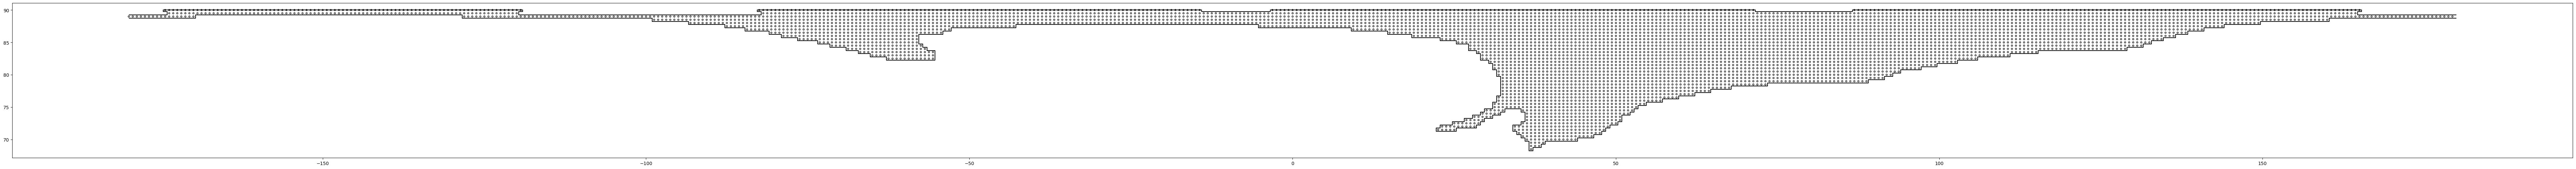

In [52]:
xx(AR)

[[[[237.8125, -68.25], [240.3125, -68.25], [240.3125, -67.75], [242.8125, -67.75], [242.8125, -66.75], [243.4375, -66.75], [243.4375, -64.25], [242.8125, -64.25], [242.8125, -62.75], [242.1875, -62.75], [242.1875, -62.25], [241.5625, -62.25], [241.5625, -61.25], [240.9375, -61.25], [240.9375, -60.25], [240.3125, -60.25], [240.3125, -58.25], [239.6875, -58.25], [239.6875, -57.75], [240.3125, -57.75], [240.3125, -55.75], [239.6875, -55.75], [239.6875, -54.25], [239.0625, -54.25], [239.0625, -53.25], [238.4375, -53.25], [238.4375, -52.25], [237.8125, -52.25], [237.8125, -51.75], [237.1875, -51.75], [237.1875, -50.75], [236.5625, -50.75], [236.5625, -50.25], [235.9375, -50.25], [235.9375, -49.25], [235.3125, -49.25], [235.3125, -48.25], [234.6875, -48.25], [234.6875, -47.75], [234.0625, -47.75], [234.0625, -47.25], [232.1875, -47.25], [232.1875, -46.75], [230.9375, -46.75], [230.9375, -46.25], [229.0625, -46.25], [229.0625, -45.75], [225.9375, -45.75], [225.9375, -45.25], [225.3125, -45.25

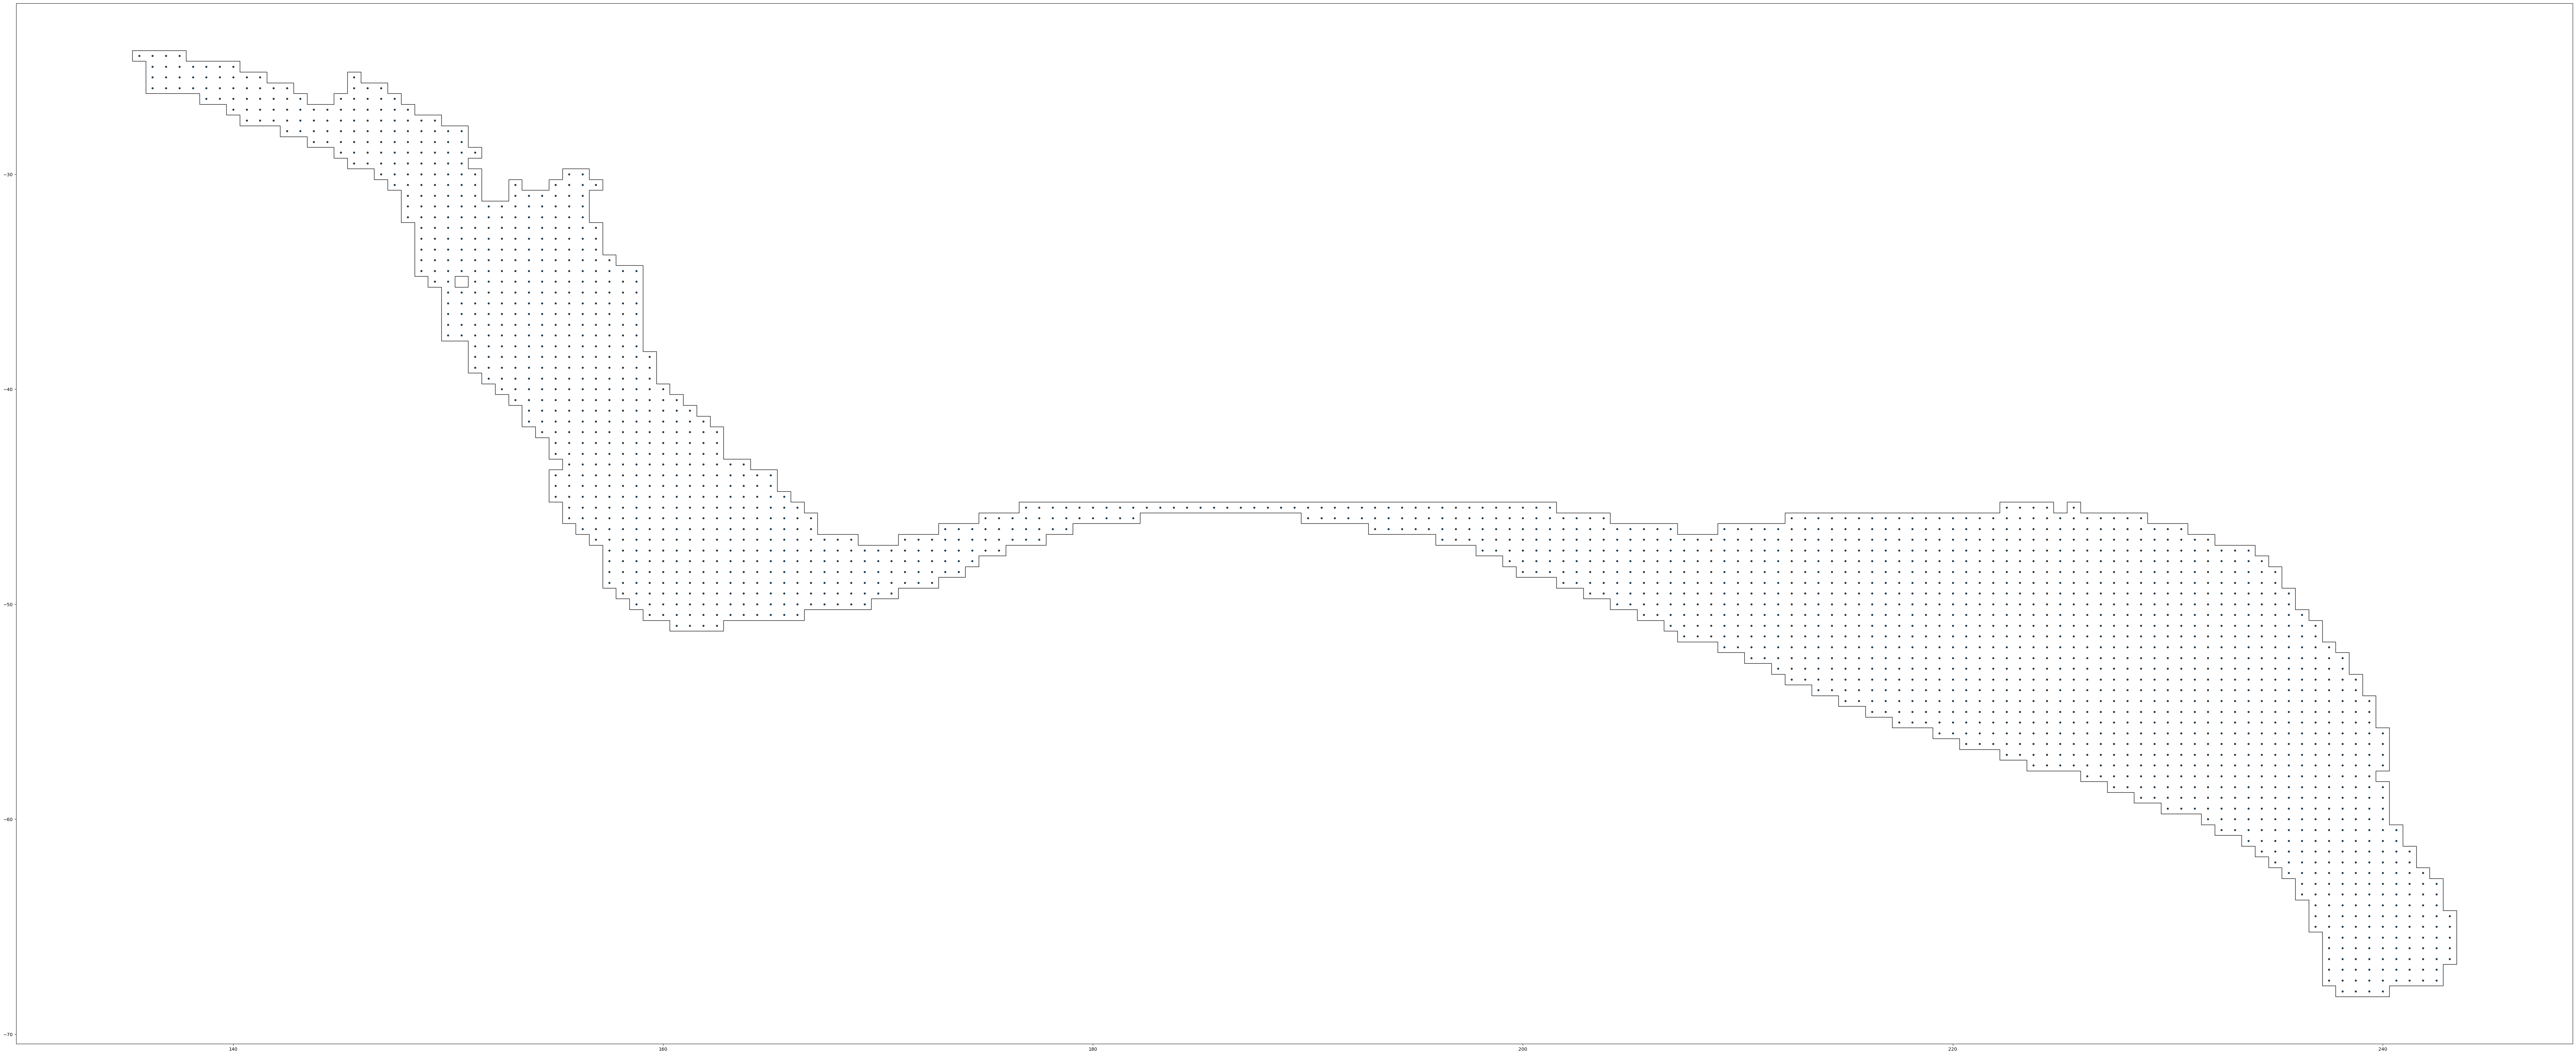

In [89]:
AR = {'_id': '2001.010.02.015.0_1', 'raster': [(-121.875, -68.0, [255.01356506347656]), (-121.25, -68.0, [254.72402954101562]), (-120.625, -68.0, [254.7048797607422]), (-120.0, -68.0, [251.37863159179688]), (-122.5, -67.5, [251.52784729003906]), (-121.875, -67.5, [258.6961669921875]), (-121.25, -67.5, [265.36004638671875]), (-120.625, -67.5, [266.05487060546875]), (-120.0, -67.5, [266.9020690917969]), (-119.375, -67.5, [262.1393737792969]), (-118.75, -67.5, [255.23171997070312]), (-118.125, -67.5, [268.79058837890625]), (-117.5, -67.5, [256.17919921875]), (-122.5, -67.0, [253.196044921875]), (-121.875, -67.0, [263.68743896484375]), (-121.25, -67.0, [271.3476867675781]), (-120.625, -67.0, [277.3966369628906]), (-120.0, -67.0, [277.7203369140625]), (-119.375, -67.0, [277.7356262207031]), (-118.75, -67.0, [268.3465576171875]), (-118.125, -67.0, [281.436279296875]), (-117.5, -67.0, [265.96685791015625]), (-122.5, -66.5, [254.73251342773438]), (-121.875, -66.5, [267.6791076660156]), (-121.25, -66.5, [277.3969421386719]), (-120.625, -66.5, [284.69189453125]), (-120.0, -66.5, [288.1637878417969]), (-119.375, -66.5, [285.6810302734375]), (-118.75, -66.5, [304.8740539550781]), (-118.125, -66.5, [289.72235107421875]), (-117.5, -66.5, [273.57232666015625]), (-116.875, -66.5, [255.50341796875]), (-122.5, -66.0, [258.3683166503906]), (-121.875, -66.0, [271.0539245605469]), (-121.25, -66.0, [283.4207763671875]), (-120.625, -66.0, [291.0062561035156]), (-120.0, -66.0, [296.3526611328125]), (-119.375, -66.0, [294.3573303222656]), (-118.75, -66.0, [286.9161682128906]), (-118.125, -66.0, [298.32952880859375]), (-117.5, -66.0, [278.2494812011719]), (-116.875, -66.0, [259.2783203125]), (-122.5, -65.5, [261.9842834472656]), (-121.875, -65.5, [277.367431640625]), (-121.25, -65.5, [288.7448425292969]), (-120.625, -65.5, [299.509033203125]), (-120.0, -65.5, [302.3891906738281]), (-119.375, -65.5, [303.50213623046875]), (-118.75, -65.5, [318.21551513671875]), (-118.125, -65.5, [304.0103759765625]), (-117.5, -65.5, [283.0052490234375]), (-116.875, -65.5, [261.1349182128906]), (-123.125, -65.0, [251.22396850585938]), (-122.5, -65.0, [268.4949951171875]), (-121.875, -65.0, [283.04742431640625]), (-121.25, -65.0, [296.3180847167969]), (-120.625, -65.0, [305.2510681152344]), (-120.0, -65.0, [337.2456359863281]), (-119.375, -65.0, [333.7424011230469]), (-118.75, -65.0, [326.8395690917969]), (-118.125, -65.0, [306.527099609375]), (-117.5, -65.0, [284.9659423828125]), (-116.875, -65.0, [261.8648681640625]), (-123.125, -64.5, [258.1009216308594]), (-122.5, -64.5, [276.1091613769531]), (-121.875, -64.5, [292.01422119140625]), (-121.25, -64.5, [304.7801513671875]), (-120.625, -64.5, [339.459228515625]), (-120.0, -64.5, [343.3128662109375]), (-119.375, -64.5, [340.23822021484375]), (-118.75, -64.5, [327.96136474609375]), (-118.125, -64.5, [309.0122985839844]), (-117.5, -64.5, [282.85565185546875]), (-116.875, -64.5, [257.9274597167969]), (-123.125, -64.0, [266.2447509765625]), (-122.5, -64.0, [283.88970947265625]), (-121.875, -64.0, [299.9856872558594]), (-121.25, -64.0, [312.07989501953125]), (-120.625, -64.0, [346.8985290527344]), (-120.0, -64.0, [348.11346435546875]), (-119.375, -64.0, [344.324462890625]), (-118.75, -64.0, [328.2591857910156]), (-118.125, -64.0, [305.8015441894531]), (-117.5, -64.0, [277.6024475097656]), (-123.75, -63.5, [254.31036376953125]), (-123.125, -63.5, [273.3534851074219]), (-122.5, -63.5, [292.28265380859375]), (-121.875, -63.5, [306.80426025390625]), (-121.25, -63.5, [319.0157470703125]), (-120.625, -63.5, [351.2680358886719]), (-120.0, -63.5, [353.5500183105469]), (-119.375, -63.5, [342.32745361328125]), (-118.75, -63.5, [327.2218017578125]), (-118.125, -63.5, [296.65509033203125]), (-117.5, -63.5, [266.11273193359375]), (-123.75, -63.0, [265.1387939453125]), (-123.125, -63.0, [285.1202697753906]), (-122.5, -63.0, [301.4310302734375]), (-121.875, -63.0, [315.28790283203125]), (-121.25, -63.0, [349.8868713378906]), (-120.625, -63.0, [355.1071472167969]), (-120.0, -63.0, [350.5279235839844]), (-119.375, -63.0, [340.0324401855469]), (-118.75, -63.0, [314.4263610839844]), (-118.125, -63.0, [284.7751159667969]), (-117.5, -63.0, [251.7565460205078]), (-124.375, -62.5, [260.8352966308594]), (-123.75, -62.5, [279.7276916503906]), (-123.125, -62.5, [298.34442138671875]), (-122.5, -62.5, [340.49591064453125]), (-121.875, -62.5, [348.6353454589844]), (-121.25, -62.5, [353.8065185546875]), (-120.625, -62.5, [354.50909423828125]), (-120.0, -62.5, [347.4688720703125]), (-119.375, -62.5, [329.9136047363281]), (-118.75, -62.5, [302.08074951171875]), (-118.125, -62.5, [266.5243225097656]), (-125.0, -62.0, [257.35296630859375]), (-124.375, -62.0, [272.9652404785156]), (-123.75, -62.0, [293.79193115234375]), (-123.125, -62.0, [338.4334411621094]), (-122.5, -62.0, [349.01043701171875]), (-121.875, -62.0, [355.3652038574219]), (-121.25, -62.0, [355.4797058105469]), (-120.625, -62.0, [351.7423095703125]), (-120.0, -62.0, [340.83770751953125]), (-119.375, -62.0, [317.0105285644531]), (-118.75, -62.0, [285.254150390625]), (-125.625, -61.5, [255.70237731933594]), (-125.0, -61.5, [269.5956726074219]), (-124.375, -61.5, [288.4001159667969]), (-123.75, -61.5, [332.719482421875]), (-123.125, -61.5, [347.9611511230469]), (-122.5, -61.5, [356.7039794921875]), (-121.875, -61.5, [357.24560546875]), (-121.25, -61.5, [353.8735046386719]), (-120.625, -61.5, [346.7992858886719]), (-120.0, -61.5, [329.1223449707031]), (-119.375, -61.5, [305.1656494140625]), (-118.75, -61.5, [266.129150390625]), (-126.25, -61.0, [257.7625732421875]), (-125.625, -61.0, [270.64678955078125]), (-125.0, -61.0, [308.1449279785156]), (-124.375, -61.0, [325.920654296875]), (-123.75, -61.0, [343.5177307128906]), (-123.125, -61.0, [356.08221435546875]), (-122.5, -61.0, [358.90728759765625]), (-121.875, -61.0, [356.5327453613281]), (-121.25, -61.0, [349.80706787109375]), (-120.625, -61.0, [336.8319091796875]), (-120.0, -61.0, [318.9334411621094]), (-119.375, -61.0, [284.6662292480469]), (-127.5, -60.5, [252.5948944091797]), (-126.875, -60.5, [263.8032531738281]), (-126.25, -60.5, [275.3922424316406]), (-125.625, -60.5, [310.48828125]), (-125.0, -60.5, [325.144287109375]), (-124.375, -60.5, [339.60418701171875]), (-123.75, -60.5, [352.4232482910156]), (-123.125, -60.5, [359.52227783203125]), (-122.5, -60.5, [358.81378173828125]), (-121.875, -60.5, [352.6990051269531]), (-121.25, -60.5, [341.2320556640625]), (-120.625, -60.5, [326.6465759277344]), (-120.0, -60.5, [301.30181884765625]), (-119.375, -60.5, [268.285400390625]), (-128.125, -60.0, [281.4231262207031]), (-127.5, -60.0, [292.97540283203125]), (-126.875, -60.0, [305.0747985839844]), (-126.25, -60.0, [317.84368896484375]), (-125.625, -60.0, [330.351806640625]), (-125.0, -60.0, [340.87158203125]), (-124.375, -60.0, [350.28277587890625]), (-123.75, -60.0, [357.20953369140625]), (-123.125, -60.0, [359.9061279296875]), (-122.5, -60.0, [355.59130859375]), (-121.875, -60.0, [345.2956237792969]), (-121.25, -60.0, [331.7696228027344]), (-120.625, -60.0, [312.1036376953125]), (-120.0, -60.0, [286.0621032714844]), (-130.0, -59.5, [264.6708068847656]), (-129.375, -59.5, [280.4952697753906]), (-128.75, -59.5, [293.25506591796875]), (-128.125, -59.5, [304.7719421386719]), (-127.5, -59.5, [316.1524658203125]), (-126.875, -59.5, [327.9466247558594]), (-126.25, -59.5, [340.0026550292969]), (-125.625, -59.5, [349.23358154296875]), (-125.0, -59.5, [354.0174255371094]), (-124.375, -59.5, [357.13555908203125]), (-123.75, -59.5, [358.766845703125]), (-123.125, -59.5, [357.4366455078125]), (-122.5, -59.5, [349.40545654296875]), (-121.875, -59.5, [337.68524169921875]), (-121.25, -59.5, [319.6252746582031]), (-120.625, -59.5, [298.49530029296875]), (-120.0, -59.5, [271.6458435058594]), (-131.25, -59.0, [262.250732421875]), (-130.625, -59.0, [278.4132995605469]), (-130.0, -59.0, [294.2556457519531]), (-129.375, -59.0, [308.4579772949219]), (-128.75, -59.0, [321.43115234375]), (-128.125, -59.0, [332.40863037109375]), (-127.5, -59.0, [340.81011962890625]), (-126.875, -59.0, [348.7806091308594]), (-126.25, -59.0, [356.2137756347656]), (-125.625, -59.0, [362.38604736328125]), (-125.0, -59.0, [361.86883544921875]), (-124.375, -59.0, [360.48248291015625]), (-123.75, -59.0, [358.0032958984375]), (-123.125, -59.0, [352.9967956542969]), (-122.5, -59.0, [344.2388610839844]), (-121.875, -59.0, [327.9469299316406]), (-121.25, -59.0, [309.0721740722656]), (-120.625, -59.0, [286.53375244140625]), (-120.0, -59.0, [258.15399169921875]), (-132.5, -58.5, [262.2019958496094]), (-131.875, -58.5, [278.70263671875]), (-131.25, -58.5, [294.2937927246094]), (-130.625, -58.5, [309.7331848144531]), (-130.0, -58.5, [325.3114929199219]), (-129.375, -58.5, [337.2022705078125]), (-128.75, -58.5, [346.7716064453125]), (-128.125, -58.5, [355.0613098144531]), (-127.5, -58.5, [359.32635498046875]), (-126.875, -58.5, [362.88751220703125]), (-126.25, -58.5, [367.5441589355469]), (-125.625, -58.5, [369.0347595214844]), (-125.0, -58.5, [366.5330505371094]), (-124.375, -58.5, [361.09857177734375]), (-123.75, -58.5, [355.44866943359375]), (-123.125, -58.5, [349.6947326660156]), (-122.5, -58.5, [337.3353576660156]), (-121.875, -58.5, [321.2415466308594]), (-121.25, -58.5, [300.1071472167969]), (-120.625, -58.5, [276.9447021484375]), (-120.0, -58.5, [252.47337341308594]), (-133.75, -58.0, [261.8890075683594]), (-133.125, -58.0, [275.8987731933594]), (-132.5, -58.0, [291.7869567871094]), (-131.875, -58.0, [308.36962890625]), (-131.25, -58.0, [321.20257568359375]), (-130.625, -58.0, [333.7450256347656]), (-130.0, -58.0, [346.66107177734375]), (-129.375, -58.0, [355.5584411621094]), (-128.75, -58.0, [362.1343994140625]), (-128.125, -58.0, [366.3462829589844]), (-127.5, -58.0, [369.0545654296875]), (-126.875, -58.0, [371.19677734375]), (-126.25, -58.0, [373.5415954589844]), (-125.625, -58.0, [374.98309326171875]), (-125.0, -58.0, [368.9395751953125]), (-124.375, -58.0, [361.0409851074219]), (-123.75, -58.0, [353.62884521484375]), (-123.125, -58.0, [345.1130676269531]), (-122.5, -58.0, [334.22808837890625]), (-121.875, -58.0, [315.0236511230469]), (-121.25, -58.0, [294.2332458496094]), (-120.625, -58.0, [271.97137451171875]), (-136.25, -57.5, [250.9334259033203]), (-135.625, -57.5, [265.3268127441406]), (-135.0, -57.5, [275.8661804199219]), (-134.375, -57.5, [285.158447265625]), (-133.75, -57.5, [296.254150390625]), (-133.125, -57.5, [305.5124206542969]), (-132.5, -57.5, [316.2489929199219]), (-131.875, -57.5, [328.30865478515625]), (-131.25, -57.5, [336.5693664550781]), (-130.625, -57.5, [344.4927673339844]), (-130.0, -57.5, [352.96453857421875]), (-129.375, -57.5, [361.0138854980469]), (-128.75, -57.5, [365.8122253417969]), (-128.125, -57.5, [368.8146057128906]), (-127.5, -57.5, [371.49658203125]), (-126.875, -57.5, [375.2551574707031]), (-126.25, -57.5, [379.0501708984375]), (-125.625, -57.5, [378.24798583984375]), (-125.0, -57.5, [372.08001708984375]), (-124.375, -57.5, [361.73480224609375]), (-123.75, -57.5, [352.46295166015625]), (-123.125, -57.5, [343.76513671875]), (-122.5, -57.5, [329.5533142089844]), (-121.875, -57.5, [312.3408203125]), (-121.25, -57.5, [291.3821716308594]), (-120.625, -57.5, [268.9100036621094]), (-120.0, -57.5, [261.2344970703125]), (-137.5, -57.0, [265.83056640625]), (-136.875, -57.0, [282.0890197753906]), (-136.25, -57.0, [292.1847229003906]), (-135.625, -57.0, [302.4996643066406]), (-135.0, -57.0, [311.18634033203125]), (-134.375, -57.0, [316.2940368652344]), (-133.75, -57.0, [321.8176574707031]), (-133.125, -57.0, [326.2669372558594]), (-132.5, -57.0, [329.72369384765625]), (-131.875, -57.0, [335.5843505859375]), (-131.25, -57.0, [340.53228759765625]), (-130.625, -57.0, [345.56683349609375]), (-130.0, -57.0, [351.917724609375]), (-129.375, -57.0, [358.8324890136719]), (-128.75, -57.0, [365.951171875]), (-128.125, -57.0, [371.7793273925781]), (-127.5, -57.0, [376.6722717285156]), (-126.875, -57.0, [382.3872375488281]), (-126.25, -57.0, [385.9372863769531]), (-125.625, -57.0, [384.4169616699219]), (-125.0, -57.0, [374.8262023925781]), (-124.375, -57.0, [363.64361572265625]), (-123.75, -57.0, [353.7160949707031]), (-123.125, -57.0, [342.8810729980469]), (-122.5, -57.0, [330.0882568359375]), (-121.875, -57.0, [311.6322937011719]), (-121.25, -57.0, [291.0985107421875]), (-120.625, -57.0, [287.0691833496094]), (-120.0, -57.0, [260.3089599609375]), (-139.375, -56.5, [258.1548156738281]), (-138.75, -56.5, [275.1797790527344]), (-138.125, -56.5, [291.0594482421875]), (-137.5, -56.5, [303.2629089355469]), (-136.875, -56.5, [315.7132263183594]), (-136.25, -56.5, [325.08203125]), (-135.625, -56.5, [331.6857604980469]), (-135.0, -56.5, [336.2149353027344]), (-134.375, -56.5, [333.75457763671875]), (-133.75, -56.5, [332.43341064453125]), (-133.125, -56.5, [331.80499267578125]), (-132.5, -56.5, [332.13299560546875]), (-131.875, -56.5, [333.86151123046875]), (-131.25, -56.5, [339.1326599121094]), (-130.625, -56.5, [345.9013366699219]), (-130.0, -56.5, [352.83282470703125]), (-129.375, -56.5, [360.955078125]), (-128.75, -56.5, [370.6717224121094]), (-128.125, -56.5, [379.6388854980469]), (-127.5, -56.5, [387.02435302734375]), (-126.875, -56.5, [394.233154296875]), (-126.25, -56.5, [395.8756103515625]), (-125.625, -56.5, [390.77154541015625]), (-125.0, -56.5, [379.2085266113281]), (-124.375, -56.5, [367.6258239746094]), (-123.75, -56.5, [356.7068786621094]), (-123.125, -56.5, [345.6376953125]), (-122.5, -56.5, [330.6407775878906]), (-121.875, -56.5, [334.128662109375]), (-121.25, -56.5, [312.5243835449219]), (-120.625, -56.5, [287.3609313964844]), (-120.0, -56.5, [258.1975402832031]), (-140.625, -56.0, [266.71337890625]), (-140.0, -56.0, [284.50189208984375]), (-139.375, -56.0, [300.62689208984375]), (-138.75, -56.0, [315.4935302734375]), (-138.125, -56.0, [328.7805480957031]), (-137.5, -56.0, [337.26287841796875]), (-136.875, -56.0, [345.4799499511719]), (-136.25, -56.0, [348.958251953125]), (-135.625, -56.0, [347.6438903808594]), (-135.0, -56.0, [344.8109436035156]), (-134.375, -56.0, [337.7467956542969]), (-133.75, -56.0, [331.8794250488281]), (-133.125, -56.0, [328.6926574707031]), (-132.5, -56.0, [331.03216552734375]), (-131.875, -56.0, [336.10821533203125]), (-131.25, -56.0, [343.9719543457031]), (-130.625, -56.0, [351.7130432128906]), (-130.0, -56.0, [359.8641052246094]), (-129.375, -56.0, [371.7981872558594]), (-128.75, -56.0, [385.34307861328125]), (-128.125, -56.0, [395.74603271484375]), (-127.5, -56.0, [404.3131408691406]), (-126.875, -56.0, [409.7239074707031]), (-126.25, -56.0, [408.23284912109375]), (-125.625, -56.0, [398.35089111328125]), (-125.0, -56.0, [385.4312438964844]), (-124.375, -56.0, [372.7621154785156]), (-123.75, -56.0, [361.0539855957031]), (-123.125, -56.0, [348.3481750488281]), (-122.5, -56.0, [357.26318359375]), (-121.875, -56.0, [337.20709228515625]), (-121.25, -56.0, [313.15228271484375]), (-120.625, -56.0, [286.67431640625]), (-120.0, -56.0, [255.94427490234375]), (-142.5, -55.5, [251.41990661621094]), (-141.875, -55.5, [277.12353515625]), (-141.25, -55.5, [297.6639709472656]), (-140.625, -55.5, [315.123779296875]), (-140.0, -55.5, [328.46673583984375]), (-139.375, -55.5, [339.8447265625]), (-138.75, -55.5, [348.4960021972656]), (-138.125, -55.5, [359.1882019042969]), (-137.5, -55.5, [359.4810485839844]), (-136.875, -55.5, [357.77740478515625]), (-136.25, -55.5, [355.0967102050781]), (-135.625, -55.5, [348.1487731933594]), (-135.0, -55.5, [340.6164245605469]), (-134.375, -55.5, [335.7065734863281]), (-133.75, -55.5, [331.3146057128906]), (-133.125, -55.5, [329.90167236328125]), (-132.5, -55.5, [337.64404296875]), (-131.875, -55.5, [347.345458984375]), (-131.25, -55.5, [357.8966369628906]), (-130.625, -55.5, [372.2226867675781]), (-130.0, -55.5, [386.3013000488281]), (-129.375, -55.5, [400.4548645019531]), (-128.75, -55.5, [413.95062255859375]), (-128.125, -55.5, [424.1952209472656]), (-127.5, -55.5, [431.2813415527344]), (-126.875, -55.5, [428.1123962402344]), (-126.25, -55.5, [418.1086730957031]), (-125.625, -55.5, [405.26513671875]), (-125.0, -55.5, [391.22882080078125]), (-124.375, -55.5, [401.21234130859375]), (-123.75, -55.5, [388.8455810546875]), (-123.125, -55.5, [376.4850769042969]), (-122.5, -55.5, [359.4920349121094]), (-121.875, -55.5, [338.31109619140625]), (-121.25, -55.5, [313.1206970214844]), (-120.625, -55.5, [283.25799560546875]), (-143.75, -55.0, [254.47354125976562]), (-143.125, -55.0, [286.6392822265625]), (-142.5, -55.0, [313.84454345703125]), (-141.875, -55.0, [335.6776428222656]), (-141.25, -55.0, [348.79437255859375]), (-140.625, -55.0, [360.02252197265625]), (-140.0, -55.0, [362.30462646484375]), (-139.375, -55.0, [366.37518310546875]), (-138.75, -55.0, [363.5265197753906]), (-138.125, -55.0, [360.0540771484375]), (-137.5, -55.0, [356.8622131347656]), (-136.875, -55.0, [351.38543701171875]), (-136.25, -55.0, [345.7496643066406]), (-135.625, -55.0, [344.06719970703125]), (-135.0, -55.0, [340.1072082519531]), (-134.375, -55.0, [343.4012756347656]), (-133.75, -55.0, [348.1529846191406]), (-133.125, -55.0, [351.5105285644531]), (-132.5, -55.0, [368.6421203613281]), (-131.875, -55.0, [384.6414794921875]), (-131.25, -55.0, [399.9638366699219]), (-130.625, -55.0, [418.5481262207031]), (-130.0, -55.0, [433.6053466796875]), (-129.375, -55.0, [445.32806396484375]), (-128.75, -55.0, [451.1002197265625]), (-128.125, -55.0, [454.3971252441406]), (-127.5, -55.0, [475.9508361816406]), (-126.875, -55.0, [463.3736572265625]), (-126.25, -55.0, [449.33935546875]), (-125.625, -55.0, [410.81689453125]), (-125.0, -55.0, [420.69378662109375]), (-124.375, -55.0, [407.0740966796875]), (-123.75, -55.0, [393.7191162109375]), (-123.125, -55.0, [379.5656433105469]), (-122.5, -55.0, [361.56976318359375]), (-121.875, -55.0, [336.7462463378906]), (-121.25, -55.0, [307.68829345703125]), (-120.625, -55.0, [276.60357666015625]), (-145.0, -54.5, [274.0904541015625]), (-144.375, -54.5, [313.5957336425781]), (-143.75, -54.5, [318.96026611328125]), (-143.125, -54.5, [350.3301086425781]), (-142.5, -54.5, [366.5040588378906]), (-141.875, -54.5, [383.23846435546875]), (-141.25, -54.5, [381.7538757324219]), (-140.625, -54.5, [382.4482116699219]), (-140.0, -54.5, [376.7838439941406]), (-139.375, -54.5, [370.0586242675781]), (-138.75, -54.5, [364.6065673828125]), (-138.125, -54.5, [359.59478759765625]), (-137.5, -54.5, [387.92742919921875]), (-136.875, -54.5, [360.24786376953125]), (-136.25, -54.5, [357.3827209472656]), (-135.625, -54.5, [399.0727844238281]), (-135.0, -54.5, [376.2198181152344]), (-134.375, -54.5, [417.7335205078125]), (-133.75, -54.5, [435.0580749511719]), (-133.125, -54.5, [417.5412902832031]), (-132.5, -54.5, [463.3761901855469]), (-131.875, -54.5, [481.7893981933594]), (-131.25, -54.5, [496.5540466308594]), (-130.625, -54.5, [506.4574279785156]), (-130.0, -54.5, [513.2363891601562]), (-129.375, -54.5, [515.0753173828125]), (-128.75, -54.5, [509.3700256347656]), (-128.125, -54.5, [501.2886657714844]), (-127.5, -54.5, [488.8953857421875]), (-126.875, -54.5, [472.4236755371094]), (-126.25, -54.5, [456.8302917480469]), (-125.625, -54.5, [441.8019714355469]), (-125.0, -54.5, [427.2401123046875]), (-124.375, -54.5, [412.71478271484375]), (-123.75, -54.5, [397.98223876953125]), (-123.125, -54.5, [381.8341979980469]), (-122.5, -54.5, [358.7014465332031]), (-121.875, -54.5, [329.98504638671875]), (-121.25, -54.5, [297.0851135253906]), (-120.625, -54.5, [264.1986999511719]), (-146.25, -54.0, [266.3216552734375]), (-145.625, -54.0, [310.2662658691406]), (-145.0, -54.0, [343.4139099121094]), (-144.375, -54.0, [377.6898193359375]), (-143.75, -54.0, [397.8778991699219]), (-143.125, -54.0, [384.8283996582031]), (-142.5, -54.0, [422.8394470214844]), (-141.875, -54.0, [425.1544494628906]), (-141.25, -54.0, [423.6669616699219]), (-140.625, -54.0, [419.52947998046875]), (-140.0, -54.0, [420.5542907714844]), (-139.375, -54.0, [417.65447998046875]), (-138.75, -54.0, [419.2288818359375]), (-138.125, -54.0, [427.0511474609375]), (-137.5, -54.0, [433.660888671875]), (-136.875, -54.0, [451.017578125]), (-136.25, -54.0, [462.82366943359375]), (-135.625, -54.0, [479.8081359863281]), (-135.0, -54.0, [498.2243957519531]), (-134.375, -54.0, [514.6038818359375]), (-133.75, -54.0, [531.6198120117188]), (-133.125, -54.0, [546.4735107421875]), (-132.5, -54.0, [550.86376953125]), (-131.875, -54.0, [555.972900390625]), (-131.25, -54.0, [562.4328002929688]), (-130.625, -54.0, [557.8616333007812]), (-130.0, -54.0, [553.1434326171875]), (-129.375, -54.0, [546.0161743164062]), (-128.75, -54.0, [534.2158203125]), (-128.125, -54.0, [520.267333984375]), (-127.5, -54.0, [503.44451904296875]), (-126.875, -54.0, [484.751953125]), (-126.25, -54.0, [467.06036376953125]), (-125.625, -54.0, [450.62200927734375]), (-125.0, -54.0, [433.4385681152344]), (-124.375, -54.0, [416.4984436035156]), (-123.75, -54.0, [398.65997314453125]), (-123.125, -54.0, [378.24224853515625]), (-122.5, -54.0, [351.1044921875]), (-121.875, -54.0, [316.8584289550781]), (-121.25, -54.0, [282.0072021484375]), (-147.5, -53.5, [260.6418762207031]), (-146.875, -53.5, [304.0205078125]), (-146.25, -53.5, [338.7351379394531]), (-145.625, -53.5, [370.0965270996094]), (-145.0, -53.5, [393.3090515136719]), (-144.375, -53.5, [410.4620056152344]), (-143.75, -53.5, [420.6379699707031]), (-143.125, -53.5, [425.61981201171875]), (-142.5, -53.5, [429.11480712890625]), (-141.875, -53.5, [430.3254089355469]), (-141.25, -53.5, [442.2904968261719]), (-140.625, -53.5, [451.98297119140625]), (-140.0, -53.5, [466.1817932128906]), (-139.375, -53.5, [483.019775390625]), (-138.75, -53.5, [496.7474670410156]), (-138.125, -53.5, [516.8418579101562]), (-137.5, -53.5, [535.3987426757812]), (-136.875, -53.5, [553.3215942382812]), (-136.25, -53.5, [571.87158203125]), (-135.625, -53.5, [582.4342041015625]), (-135.0, -53.5, [594.6735229492188]), (-134.375, -53.5, [605.7672119140625]), (-133.75, -53.5, [605.7931518554688]), (-133.125, -53.5, [607.890625]), (-132.5, -53.5, [604.3578491210938]), (-131.875, -53.5, [599.3189697265625]), (-131.25, -53.5, [594.9993286132812]), (-130.625, -53.5, [584.9778442382812]), (-130.0, -53.5, [574.8817749023438]), (-129.375, -53.5, [563.426513671875]), (-128.75, -53.5, [549.3594970703125]), (-128.125, -53.5, [534.4443359375]), (-127.5, -53.5, [516.1853637695312]), (-126.875, -53.5, [495.3283996582031]), (-126.25, -53.5, [474.781494140625]), (-125.625, -53.5, [454.95355224609375]), (-125.0, -53.5, [434.841552734375]), (-124.375, -53.5, [414.916748046875]), (-123.75, -53.5, [394.7265930175781]), (-123.125, -53.5, [370.4302978515625]), (-122.5, -53.5, [335.55413818359375]), (-121.875, -53.5, [298.9036560058594]), (-121.25, -53.5, [264.9617004394531]), (-148.125, -53.0, [291.4097595214844]), (-147.5, -53.0, [335.5574645996094]), (-146.875, -53.0, [361.8356628417969]), (-146.25, -53.0, [388.1560974121094]), (-145.625, -53.0, [404.66668701171875]), (-145.0, -53.0, [421.4104309082031]), (-144.375, -53.0, [430.4248962402344]), (-143.75, -53.0, [442.6134338378906]), (-143.125, -53.0, [454.6765441894531]), (-142.5, -53.0, [469.3466491699219]), (-141.875, -53.0, [494.56756591796875]), (-141.25, -53.0, [515.8865356445312]), (-140.625, -53.0, [543.2325439453125]), (-140.0, -53.0, [563.4578247070312]), (-139.375, -53.0, [581.7839965820312]), (-138.75, -53.0, [598.88818359375]), (-138.125, -53.0, [609.7060546875]), (-137.5, -53.0, [626.272216796875]), (-136.875, -53.0, [629.62646484375]), (-136.25, -53.0, [635.8820190429688]), (-135.625, -53.0, [637.40087890625]), (-135.0, -53.0, [636.4279174804688]), (-134.375, -53.0, [635.8658447265625]), (-133.75, -53.0, [629.7487182617188]), (-133.125, -53.0, [625.7733764648438]), (-132.5, -53.0, [617.540771484375]), (-131.875, -53.0, [609.2446899414062]), (-131.25, -53.0, [602.7979125976562]), (-130.625, -53.0, [589.5404052734375]), (-130.0, -53.0, [577.5487670898438]), (-129.375, -53.0, [566.2622680664062]), (-128.75, -53.0, [553.566650390625]), (-128.125, -53.0, [538.651123046875]), (-127.5, -53.0, [520.95068359375]), (-126.875, -53.0, [498.7561340332031]), (-126.25, -53.0, [475.3041076660156]), (-125.625, -53.0, [452.9897155761719]), (-125.0, -53.0, [430.6426696777344]), (-124.375, -53.0, [408.58233642578125]), (-123.75, -53.0, [384.72705078125]), (-123.125, -53.0, [353.194580078125]), (-122.5, -53.0, [313.9903259277344]), (-121.875, -53.0, [278.5039978027344]), (-149.375, -52.5, [289.8717346191406]), (-148.75, -52.5, [327.6075134277344]), (-148.125, -52.5, [360.0885009765625]), (-147.5, -52.5, [387.82086181640625]), (-146.875, -52.5, [408.8245849609375]), (-146.25, -52.5, [424.5142822265625]), (-145.625, -52.5, [453.10150146484375]), (-145.0, -52.5, [470.3014831542969]), (-144.375, -52.5, [502.64703369140625]), (-143.75, -52.5, [526.0029296875]), (-143.125, -52.5, [556.5250244140625]), (-142.5, -52.5, [581.9170532226562]), (-141.875, -52.5, [604.5236206054688]), (-141.25, -52.5, [624.2990112304688]), (-140.625, -52.5, [632.7767944335938]), (-140.0, -52.5, [643.7852783203125]), (-139.375, -52.5, [645.0691528320312]), (-138.75, -52.5, [650.4874267578125]), (-138.125, -52.5, [649.7457885742188]), (-137.5, -52.5, [653.7898559570312]), (-136.875, -52.5, [650.666748046875]), (-136.25, -52.5, [649.1080322265625]), (-135.625, -52.5, [642.2103881835938]), (-135.0, -52.5, [633.97607421875]), (-134.375, -52.5, [628.007568359375]), (-133.75, -52.5, [617.8453979492188]), (-133.125, -52.5, [609.8765258789062]), (-132.5, -52.5, [599.4512329101562]), (-131.875, -52.5, [587.6823120117188]), (-131.25, -52.5, [578.3724975585938]), (-130.625, -52.5, [567.5081787109375]), (-130.0, -52.5, [556.9719848632812]), (-129.375, -52.5, [548.2877197265625]), (-128.75, -52.5, [540.0584716796875]), (-128.125, -52.5, [530.8488159179688]), (-127.5, -52.5, [514.384033203125]), (-126.875, -52.5, [493.6976013183594]), (-126.25, -52.5, [470.4858093261719]), (-125.625, -52.5, [446.8146057128906]), (-125.0, -52.5, [422.51275634765625]), (-124.375, -52.5, [397.8293151855469]), (-123.75, -52.5, [370.95849609375]), (-123.125, -52.5, [330.2125549316406]), (-122.5, -52.5, [290.9244689941406]), (-121.875, -52.5, [259.18292236328125]), (-150.625, -52.0, [293.97210693359375]), (-150.0, -52.0, [328.2501220703125]), (-149.375, -52.0, [362.1986999511719]), (-148.75, -52.0, [386.6121520996094]), (-148.125, -52.0, [415.8078308105469]), (-147.5, -52.0, [447.3315124511719]), (-146.875, -52.0, [485.4998474121094]), (-146.25, -52.0, [526.7369995117188]), (-145.625, -52.0, [560.532958984375]), (-145.0, -52.0, [595.9512939453125]), (-144.375, -52.0, [614.939453125]), (-143.75, -52.0, [642.3970336914062]), (-143.125, -52.0, [651.161865234375]), (-142.5, -52.0, [666.5831298828125]), (-141.875, -52.0, [664.9468994140625]), (-141.25, -52.0, [666.6070556640625]), (-140.625, -52.0, [660.0826416015625]), (-140.0, -52.0, [657.7048950195312]), (-139.375, -52.0, [650.1761474609375]), (-138.75, -52.0, [648.72802734375]), (-138.125, -52.0, [641.00244140625]), (-137.5, -52.0, [639.23095703125]), (-136.875, -52.0, [629.9511108398438]), (-136.25, -52.0, [621.7236938476562]), (-135.625, -52.0, [610.4320678710938]), (-135.0, -52.0, [596.8651123046875]), (-134.375, -52.0, [587.0888061523438]), (-133.75, -52.0, [575.0048828125]), (-133.125, -52.0, [563.708740234375]), (-132.5, -52.0, [552.7089233398438]), (-131.875, -52.0, [542.560791015625]), (-131.25, -52.0, [533.7031860351562]), (-130.625, -52.0, [526.8015747070312]), (-130.0, -52.0, [520.9649047851562]), (-129.375, -52.0, [515.2047729492188]), (-128.75, -52.0, [511.722412109375]), (-128.125, -52.0, [507.5755615234375]), (-127.5, -52.0, [499.0521240234375]), (-126.875, -52.0, [482.130615234375]), (-126.25, -52.0, [461.3160095214844]), (-125.625, -52.0, [437.5847473144531]), (-125.0, -52.0, [412.0142517089844]), (-124.375, -52.0, [384.65618896484375]), (-123.75, -52.0, [349.2804870605469]), (-123.125, -52.0, [306.1479187011719]), (-122.5, -52.0, [269.11663818359375]), (-152.5, -51.5, [256.4642333984375]), (-151.875, -51.5, [290.04644775390625]), (-151.25, -51.5, [327.7110900878906]), (-150.625, -51.5, [355.08306884765625]), (-150.0, -51.5, [388.5567321777344]), (-149.375, -51.5, [421.6781311035156]), (-148.75, -51.5, [472.8870849609375]), (-148.125, -51.5, [522.9142456054688]), (-147.5, -51.5, [572.6748657226562]), (-146.875, -51.5, [613.6461791992188]), (-146.25, -51.5, [641.6921997070312]), (-145.625, -51.5, [658.9627685546875]), (-145.0, -51.5, [670.614013671875]), (-144.375, -51.5, [672.3138427734375]), (-143.75, -51.5, [676.406494140625]), (-143.125, -51.5, [668.0000610351562]), (-142.5, -51.5, [663.52294921875]), (-141.875, -51.5, [646.3886108398438]), (-141.25, -51.5, [635.0189208984375]), (-140.625, -51.5, [619.8958129882812]), (-140.0, -51.5, [611.1150512695312]), (-139.375, -51.5, [600.6553955078125]), (-138.75, -51.5, [594.5669555664062]), (-138.125, -51.5, [583.57666015625]), (-137.5, -51.5, [574.8973999023438]), (-136.875, -51.5, [564.82763671875]), (-136.25, -51.5, [552.44287109375]), (-135.625, -51.5, [541.3068237304688]), (-135.0, -51.5, [528.8534545898438]), (-134.375, -51.5, [519.1425170898438]), (-133.75, -51.5, [511.451171875]), (-133.125, -51.5, [504.14459228515625]), (-132.5, -51.5, [496.33111572265625]), (-131.875, -51.5, [489.94195556640625]), (-131.25, -51.5, [484.5722351074219]), (-130.625, -51.5, [480.3099670410156]), (-130.0, -51.5, [476.8907775878906]), (-129.375, -51.5, [474.2864074707031]), (-128.75, -51.5, [474.4544677734375]), (-128.125, -51.5, [474.5543212890625]), (-127.5, -51.5, [472.2043151855469]), (-126.875, -51.5, [466.1332702636719]), (-126.25, -51.5, [449.52447509765625]), (-125.625, -51.5, [425.9837341308594]), (-125.0, -51.5, [398.94024658203125]), (-124.375, -51.5, [366.89276123046875]), (-123.75, -51.5, [323.1673583984375]), (-123.125, -51.5, [282.1532897949219]), (-153.125, -51.0, [281.42236328125]), (-152.5, -51.0, [310.8305358886719]), (-151.875, -51.0, [344.9794616699219]), (-151.25, -51.0, [375.6838073730469]), (-150.625, -51.0, [433.4728088378906]), (-150.0, -51.0, [486.90167236328125]), (-149.375, -51.0, [555.429443359375]), (-148.75, -51.0, [605.62158203125]), (-148.125, -51.0, [646.1607666015625]), (-147.5, -51.0, [665.0457153320312]), (-146.875, -51.0, [681.5220336914062]), (-146.25, -51.0, [681.198974609375]), (-145.625, -51.0, [681.267333984375]), (-145.0, -51.0, [672.7501831054688]), (-144.375, -51.0, [662.155029296875]), (-143.75, -51.0, [647.1671142578125]), (-143.125, -51.0, [627.1444702148438]), (-142.5, -51.0, [605.2999267578125]), (-141.875, -51.0, [583.6004028320312]), (-141.25, -51.0, [564.8893432617188]), (-140.625, -51.0, [551.310302734375]), (-140.0, -51.0, [538.4830932617188]), (-139.375, -51.0, [525.576171875]), (-138.75, -51.0, [511.5653076171875]), (-138.125, -51.0, [500.27752685546875]), (-137.5, -51.0, [489.6802978515625]), (-136.875, -51.0, [481.54425048828125]), (-136.25, -51.0, [473.0785217285156]), (-135.625, -51.0, [465.1850280761719]), (-135.0, -51.0, [457.6781921386719]), (-134.375, -51.0, [450.2008972167969]), (-133.75, -51.0, [446.67156982421875]), (-133.125, -51.0, [441.92340087890625]), (-132.5, -51.0, [440.81689453125]), (-131.875, -51.0, [437.8340148925781]), (-131.25, -51.0, [433.44677734375]), (-130.625, -51.0, [430.1711730957031]), (-130.0, -51.0, [428.0372009277344]), (-129.375, -51.0, [427.38787841796875]), (-128.75, -51.0, [429.5794372558594]), (-128.125, -51.0, [434.4792175292969]), (-127.5, -51.0, [440.85174560546875]), (-126.875, -51.0, [443.6657409667969]), (-126.25, -51.0, [436.33251953125]), (-125.625, -51.0, [414.5260009765625]), (-125.0, -51.0, [382.77313232421875]), (-124.375, -51.0, [340.331787109375]), (-123.75, -51.0, [294.9651794433594]), (-123.125, -51.0, [259.44635009765625]), (160.625, -51.0, [253.68089294433594]), (161.25, -51.0, [262.1909484863281]), (161.875, -51.0, [266.85791015625]), (162.5, -51.0, [262.86248779296875]), (-154.375, -50.5, [265.339111328125]), (-153.75, -50.5, [300.1221618652344]), (-153.125, -50.5, [329.5654296875]), (-152.5, -50.5, [372.1575927734375]), (-151.875, -50.5, [416.2772216796875]), (-151.25, -50.5, [503.9645690917969]), (-150.625, -50.5, [571.6527709960938]), (-150.0, -50.5, [635.6447143554688]), (-149.375, -50.5, [655.5648803710938]), (-148.75, -50.5, [675.5191040039062]), (-148.125, -50.5, [676.9276733398438]), (-147.5, -50.5, [681.6560668945312]), (-146.875, -50.5, [680.2157592773438]), (-146.25, -50.5, [679.1526489257812]), (-145.625, -50.5, [671.70263671875]), (-145.0, -50.5, [659.0714111328125]), (-144.375, -50.5, [636.2765502929688]), (-143.75, -50.5, [609.4962158203125]), (-143.125, -50.5, [579.2763061523438]), (-142.5, -50.5, [551.6473999023438]), (-141.875, -50.5, [528.2232055664062]), (-141.25, -50.5, [508.9227600097656]), (-140.625, -50.5, [492.93927001953125]), (-140.0, -50.5, [476.5336608886719]), (-139.375, -50.5, [462.3397216796875]), (-138.75, -50.5, [446.5715026855469]), (-138.125, -50.5, [434.8048400878906]), (-137.5, -50.5, [426.8700866699219]), (-136.875, -50.5, [423.1907958984375]), (-136.25, -50.5, [419.4208679199219]), (-135.625, -50.5, [416.00030517578125]), (-135.0, -50.5, [410.90966796875]), (-134.375, -50.5, [404.0700988769531]), (-133.75, -50.5, [403.07794189453125]), (-133.125, -50.5, [401.22119140625]), (-132.5, -50.5, [399.44171142578125]), (-131.875, -50.5, [395.8634033203125]), (-131.25, -50.5, [391.1628723144531]), (-130.625, -50.5, [389.260009765625]), (-130.0, -50.5, [388.27862548828125]), (-129.375, -50.5, [386.9989929199219]), (-128.75, -50.5, [391.0400695800781]), (-128.125, -50.5, [398.44659423828125]), (-127.5, -50.5, [411.8500671386719]), (-126.875, -50.5, [424.1036376953125]), (-126.25, -50.5, [421.2225036621094]), (-125.625, -50.5, [399.03167724609375]), (-125.0, -50.5, [358.5284118652344]), (-124.375, -50.5, [307.5238342285156]), (-123.75, -50.5, [270.6214294433594]), (159.375, -50.5, [265.6712341308594]), (160.0, -50.5, [285.9115295410156]), (160.625, -50.5, [307.56610107421875]), (161.25, -50.5, [328.16290283203125]), (161.875, -50.5, [342.19970703125]), (162.5, -50.5, [343.26812744140625]), (163.125, -50.5, [334.9259033203125]), (163.75, -50.5, [321.8616943359375]), (164.375, -50.5, [306.7688293457031]), (165.0, -50.5, [290.8659973144531]), (165.625, -50.5, [273.73638916015625]), (166.25, -50.5, [258.914794921875]), (-155.625, -50.0, [258.3683166503906]), (-155.0, -50.0, [289.3901672363281]), (-154.375, -50.0, [322.4693603515625]), (-153.75, -50.0, [357.4176940917969]), (-153.125, -50.0, [423.9961853027344]), (-152.5, -50.0, [494.6529235839844]), (-151.875, -50.0, [582.7689819335938]), (-151.25, -50.0, [629.0115356445312]), (-150.625, -50.0, [661.255859375]), (-150.0, -50.0, [661.1398315429688]), (-149.375, -50.0, [655.8411254882812]), (-148.75, -50.0, [654.83203125]), (-148.125, -50.0, [655.2738647460938]), (-147.5, -50.0, [661.3497924804688]), (-146.875, -50.0, [664.3193969726562]), (-146.25, -50.0, [660.2256469726562]), (-145.625, -50.0, [653.0828247070312]), (-145.0, -50.0, [624.2000122070312]), (-144.375, -50.0, [595.5472412109375]), (-143.75, -50.0, [560.838623046875]), (-143.125, -50.0, [530.1738891601562]), (-142.5, -50.0, [503.6922302246094]), (-141.875, -50.0, [479.8220520019531]), (-141.25, -50.0, [460.0000305175781]), (-140.625, -50.0, [447.13458251953125]), (-140.0, -50.0, [434.9421081542969]), (-139.375, -50.0, [425.5938415527344]), (-138.75, -50.0, [414.87652587890625]), (-138.125, -50.0, [410.1231994628906]), (-137.5, -50.0, [406.7496643066406]), (-136.875, -50.0, [404.3028259277344]), (-136.25, -50.0, [400.8457336425781]), (-135.625, -50.0, [396.3238830566406]), (-135.0, -50.0, [390.9465637207031]), (-134.375, -50.0, [384.9845275878906]), (-133.75, -50.0, [382.8387145996094]), (-133.125, -50.0, [380.2377014160156]), (-132.5, -50.0, [377.66595458984375]), (-131.875, -50.0, [372.6340637207031]), (-131.25, -50.0, [366.73480224609375]), (-130.625, -50.0, [361.3202819824219]), (-130.0, -50.0, [356.6334533691406]), (-129.375, -50.0, [357.3016357421875]), (-128.75, -50.0, [363.9245910644531]), (-128.125, -50.0, [376.1148376464844]), (-127.5, -50.0, [390.88348388671875]), (-126.875, -50.0, [403.5420227050781]), (-126.25, -50.0, [408.9136657714844]), (-125.625, -50.0, [374.56329345703125]), (-125.0, -50.0, [325.61083984375]), (-124.375, -50.0, [281.0773620605469]), (158.75, -50.0, [266.23052978515625]), (159.375, -50.0, [290.3232421875]), (160.0, -50.0, [320.5784606933594]), (160.625, -50.0, [349.6432189941406]), (161.25, -50.0, [368.67498779296875]), (161.875, -50.0, [371.04376220703125]), (162.5, -50.0, [359.3417663574219]), (163.125, -50.0, [344.9696044921875]), (163.75, -50.0, [335.2989196777344]), (164.375, -50.0, [330.65399169921875]), (165.0, -50.0, [332.640869140625]), (165.625, -50.0, [338.8428955078125]), (166.25, -50.0, [345.81927490234375]), (166.875, -50.0, [348.0875244140625]), (167.5, -50.0, [339.1834411621094]), (168.125, -50.0, [318.9152526855469]), (168.75, -50.0, [288.5865173339844]), (169.375, -50.0, [251.3412322998047]), (-156.875, -49.5, [275.6853942871094]), (-156.25, -49.5, [309.52093505859375]), (-155.625, -49.5, [341.9009094238281]), (-155.0, -49.5, [351.4100646972656]), (-154.375, -49.5, [406.0419006347656]), (-153.75, -49.5, [496.36639404296875]), (-153.125, -49.5, [568.7291870117188]), (-152.5, -49.5, [638.0492553710938]), (-151.875, -49.5, [646.28564453125]), (-151.25, -49.5, [641.1962280273438]), (-150.625, -49.5, [623.1953125]), (-150.0, -49.5, [594.9319458007812]), (-149.375, -49.5, [583.1652221679688]), (-148.75, -49.5, [581.8324584960938]), (-148.125, -49.5, [595.4110107421875]), (-147.5, -49.5, [606.7588500976562]), (-146.875, -49.5, [610.7498779296875]), (-146.25, -49.5, [601.2781982421875]), (-145.625, -49.5, [583.3789672851562]), (-145.0, -49.5, [555.4100341796875]), (-144.375, -49.5, [528.3746337890625]), (-143.75, -49.5, [499.4698181152344]), (-143.125, -49.5, [472.3453674316406]), (-142.5, -49.5, [445.73529052734375]), (-141.875, -49.5, [429.7966003417969]), (-141.25, -49.5, [420.9517822265625]), (-140.625, -49.5, [417.5785217285156]), (-140.0, -49.5, [413.8399963378906]), (-139.375, -49.5, [415.538818359375]), (-138.75, -49.5, [415.3215026855469]), (-138.125, -49.5, [414.7840270996094]), (-137.5, -49.5, [411.0675048828125]), (-136.875, -49.5, [409.4991760253906]), (-136.25, -49.5, [405.0181579589844]), (-135.625, -49.5, [404.4252624511719]), (-135.0, -49.5, [400.8142395019531]), (-134.375, -49.5, [394.5795593261719]), (-133.75, -49.5, [394.6014709472656]), (-133.125, -49.5, [387.89703369140625]), (-132.5, -49.5, [381.7701110839844]), (-131.875, -49.5, [372.4990539550781]), (-131.25, -49.5, [355.8658142089844]), (-130.625, -49.5, [339.0138244628906]), (-130.0, -49.5, [330.9330749511719]), (-129.375, -49.5, [335.56024169921875]), (-128.75, -49.5, [345.2458801269531]), (-128.125, -49.5, [357.9752502441406]), (-127.5, -49.5, [371.0201416015625]), (-126.875, -49.5, [381.91961669921875]), (-126.25, -49.5, [376.5426940917969]), (-125.625, -49.5, [340.1012878417969]), (-125.0, -49.5, [294.0999755859375]), (-124.375, -49.5, [273.6875305175781]), (158.125, -49.5, [264.6697082519531]), (158.75, -49.5, [284.6354064941406]), (159.375, -49.5, [311.74420166015625]), (160.0, -49.5, [344.7178649902344]), (160.625, -49.5, [368.2918395996094]), (161.25, -49.5, [369.1212463378906]), (161.875, -49.5, [351.5296630859375]), (162.5, -49.5, [337.32489013671875]), (163.125, -49.5, [329.9755554199219]), (163.75, -49.5, [325.5027160644531]), (164.375, -49.5, [325.7349548339844]), (165.0, -49.5, [330.9259338378906]), (165.625, -49.5, [339.2065734863281]), (166.25, -49.5, [353.1966857910156]), (166.875, -49.5, [375.14910888671875]), (167.5, -49.5, [400.7645568847656]), (168.125, -49.5, [414.1922607421875]), (168.75, -49.5, [406.2501525878906]), (169.375, -49.5, [379.1697692871094]), (170.0, -49.5, [339.5242004394531]), (170.625, -49.5, [295.1950378417969]), (-158.125, -49.0, [268.6935119628906]), (-157.5, -49.0, [300.05615234375]), (-156.875, -49.0, [332.34417724609375]), (-156.25, -49.0, [378.94232177734375]), (-155.625, -49.0, [439.25701904296875]), (-155.0, -49.0, [516.921875]), (-154.375, -49.0, [599.5409545898438]), (-153.75, -49.0, [645.791748046875]), (-153.125, -49.0, [670.0125732421875]), (-152.5, -49.0, [657.66748046875]), (-151.875, -49.0, [621.0532836914062]), (-151.25, -49.0, [584.6956787109375]), (-150.625, -49.0, [548.4675903320312]), (-150.0, -49.0, [499.8874816894531]), (-149.375, -49.0, [524.1127319335938]), (-148.75, -49.0, [509.1383056640625]), (-148.125, -49.0, [554.5502319335938]), (-147.5, -49.0, [567.4803466796875]), (-146.875, -49.0, [561.9450073242188]), (-146.25, -49.0, [546.6107788085938]), (-145.625, -49.0, [523.7646484375]), (-145.0, -49.0, [471.43109130859375]), (-144.375, -49.0, [448.03057861328125]), (-143.75, -49.0, [423.1661071777344]), (-143.125, -49.0, [428.3475341796875]), (-142.5, -49.0, [419.02239990234375]), (-141.875, -49.0, [420.1643371582031]), (-141.25, -49.0, [402.8912658691406]), (-140.625, -49.0, [436.90496826171875]), (-140.0, -49.0, [420.7142639160156]), (-139.375, -49.0, [425.55914306640625]), (-138.75, -49.0, [430.7049865722656]), (-138.125, -49.0, [430.72674560546875]), (-137.5, -49.0, [431.0917053222656]), (-136.875, -49.0, [466.2912902832031]), (-136.25, -49.0, [459.8245544433594]), (-135.625, -49.0, [484.4377746582031]), (-135.0, -49.0, [479.3976745605469]), (-134.375, -49.0, [469.8095397949219]), (-133.75, -49.0, [431.7861328125]), (-133.125, -49.0, [443.2700500488281]), (-132.5, -49.0, [412.4379577636719]), (-131.875, -49.0, [363.6461181640625]), (-131.25, -49.0, [360.93426513671875]), (-130.625, -49.0, [322.14349365234375]), (-130.0, -49.0, [337.32281494140625]), (-129.375, -49.0, [343.0937805175781]), (-128.75, -49.0, [330.1185302734375]), (-128.125, -49.0, [358.3602600097656]), (-127.5, -49.0, [367.6874694824219]), (-126.875, -49.0, [367.6835632324219]), (-126.25, -49.0, [351.3429260253906]), (-125.625, -49.0, [318.90643310546875]), (-125.0, -49.0, [283.2355041503906]), (157.5, -49.0, [267.1639099121094]), (158.125, -49.0, [295.1260986328125]), (158.75, -49.0, [323.61700439453125]), (159.375, -49.0, [357.39337158203125]), (160.0, -49.0, [382.3146667480469]), (160.625, -49.0, [381.2878723144531]), (161.25, -49.0, [349.269775390625]), (161.875, -49.0, [328.3260498046875]), (162.5, -49.0, [326.6971435546875]), (163.125, -49.0, [331.70245361328125]), (163.75, -49.0, [338.5313415527344]), (164.375, -49.0, [345.9418029785156]), (165.0, -49.0, [350.59307861328125]), (165.625, -49.0, [355.2611999511719]), (166.25, -49.0, [362.755615234375]), (166.875, -49.0, [372.28411865234375]), (167.5, -49.0, [389.75244140625]), (168.125, -49.0, [410.4623107910156]), (168.75, -49.0, [419.7281799316406]), (169.375, -49.0, [416.49774169921875]), (170.0, -49.0, [405.0892028808594]), (170.625, -49.0, [384.6520690917969]), (171.25, -49.0, [355.9276428222656]), (171.875, -49.0, [318.2650146484375]), (172.5, -49.0, [267.7801513671875]), (-160.0, -48.5, [252.33226013183594]), (-159.375, -48.5, [276.7987060546875]), (-158.75, -48.5, [304.3154296875]), (-158.125, -48.5, [333.8399353027344]), (-157.5, -48.5, [372.38812255859375]), (-156.875, -48.5, [439.7223205566406]), (-156.25, -48.5, [514.1298217773438]), (-155.625, -48.5, [589.58837890625]), (-155.0, -48.5, [636.6219482421875]), (-154.375, -48.5, [644.0045776367188]), (-153.75, -48.5, [631.037353515625]), (-153.125, -48.5, [599.4308471679688]), (-152.5, -48.5, [549.9801635742188]), (-151.875, -48.5, [512.971923828125]), (-151.25, -48.5, [481.74871826171875]), (-150.625, -48.5, [466.1726379394531]), (-150.0, -48.5, [458.8022155761719]), (-149.375, -48.5, [463.40625]), (-148.75, -48.5, [474.5390625]), (-148.125, -48.5, [484.2995300292969]), (-147.5, -48.5, [485.0468444824219]), (-146.875, -48.5, [477.0751037597656]), (-146.25, -48.5, [460.82232666015625]), (-145.625, -48.5, [438.73663330078125]), (-145.0, -48.5, [418.0770568847656]), (-144.375, -48.5, [396.0832214355469]), (-143.75, -48.5, [386.5732421875]), (-143.125, -48.5, [381.21673583984375]), (-142.5, -48.5, [392.2122497558594]), (-141.875, -48.5, [405.8814392089844]), (-141.25, -48.5, [420.1885070800781]), (-140.625, -48.5, [426.79815673828125]), (-140.0, -48.5, [429.7288818359375]), (-139.375, -48.5, [431.45684814453125]), (-138.75, -48.5, [435.54229736328125]), (-138.125, -48.5, [444.13897705078125]), (-137.5, -48.5, [463.0521545410156]), (-136.875, -48.5, [488.26788330078125]), (-136.25, -48.5, [495.9824523925781]), (-135.625, -48.5, [483.6988220214844]), (-135.0, -48.5, [462.0263977050781]), (-134.375, -48.5, [445.5829162597656]), (-133.75, -48.5, [425.52734375]), (-133.125, -48.5, [405.7656555175781]), (-132.5, -48.5, [382.0010070800781]), (-131.875, -48.5, [358.1282043457031]), (-131.25, -48.5, [343.6316833496094]), (-130.625, -48.5, [335.3178405761719]), (-130.0, -48.5, [331.66326904296875]), (-129.375, -48.5, [330.75299072265625]), (-128.75, -48.5, [333.58282470703125]), (-128.125, -48.5, [338.7584533691406]), (-127.5, -48.5, [337.8098449707031]), (-126.875, -48.5, [327.202880859375]), (-126.25, -48.5, [315.578857421875]), (-125.625, -48.5, [289.600830078125]), (-125.0, -48.5, [258.45880126953125]), (157.5, -48.5, [286.39654541015625]), (158.125, -48.5, [342.5857238769531]), (158.75, -48.5, [393.7283935546875]), (159.375, -48.5, [428.15582275390625]), (160.0, -48.5, [434.5374450683594]), (160.625, -48.5, [408.31610107421875]), (161.25, -48.5, [366.559326171875]), (161.875, -48.5, [338.4490966796875]), (162.5, -48.5, [330.63494873046875]), (163.125, -48.5, [336.5328063964844]), (163.75, -48.5, [350.3498840332031]), (164.375, -48.5, [367.61810302734375]), (165.0, -48.5, [385.9294128417969]), (165.625, -48.5, [403.6139831542969]), (166.25, -48.5, [417.61566162109375]), (166.875, -48.5, [423.7802429199219]), (167.5, -48.5, [422.0396423339844]), (168.125, -48.5, [415.3340148925781]), (168.75, -48.5, [404.43316650390625]), (169.375, -48.5, [387.8330078125]), (170.0, -48.5, [372.0777587890625]), (170.625, -48.5, [364.63983154296875]), (171.25, -48.5, [361.75103759765625]), (171.875, -48.5, [354.52862548828125]), (172.5, -48.5, [338.37939453125]), (173.125, -48.5, [307.72711181640625]), (173.75, -48.5, [257.6581726074219]), (-160.625, -48.0, [266.3360900878906]), (-160.0, -48.0, [296.4176025390625]), (-159.375, -48.0, [333.18963623046875]), (-158.75, -48.0, [381.976318359375]), (-158.125, -48.0, [445.0249938964844]), (-157.5, -48.0, [520.4915161132812]), (-156.875, -48.0, [574.1744995117188]), (-156.25, -48.0, [612.73291015625]), (-155.625, -48.0, [622.8892822265625]), (-155.0, -48.0, [603.3243408203125]), (-154.375, -48.0, [568.070556640625]), (-153.75, -48.0, [524.3284912109375]), (-153.125, -48.0, [479.699462890625]), (-152.5, -48.0, [451.7902526855469]), (-151.875, -48.0, [431.0261535644531]), (-151.25, -48.0, [418.20556640625]), (-150.625, -48.0, [406.11700439453125]), (-150.0, -48.0, [398.6988220214844]), (-149.375, -48.0, [396.76068115234375]), (-148.75, -48.0, [405.9002685546875]), (-148.125, -48.0, [412.9190979003906]), (-147.5, -48.0, [416.95623779296875]), (-146.875, -48.0, [414.13970947265625]), (-146.25, -48.0, [403.8927307128906]), (-145.625, -48.0, [388.44158935546875]), (-145.0, -48.0, [373.8200378417969]), (-144.375, -48.0, [361.5367126464844]), (-143.75, -48.0, [365.817138671875]), (-143.125, -48.0, [373.878662109375]), (-142.5, -48.0, [385.68902587890625]), (-141.875, -48.0, [393.5435485839844]), (-141.25, -48.0, [394.9145202636719]), (-140.625, -48.0, [393.9818420410156]), (-140.0, -48.0, [391.9629821777344]), (-139.375, -48.0, [392.4733581542969]), (-138.75, -48.0, [393.46514892578125]), (-138.125, -48.0, [399.3284606933594]), (-137.5, -48.0, [415.14013671875]), (-136.875, -48.0, [433.5289306640625]), (-136.25, -48.0, [435.38580322265625]), (-135.625, -48.0, [418.23394775390625]), (-135.0, -48.0, [395.41455078125]), (-134.375, -48.0, [375.26788330078125]), (-133.75, -48.0, [360.6330871582031]), (-133.125, -48.0, [346.706787109375]), (-132.5, -48.0, [339.46478271484375]), (-131.875, -48.0, [332.46917724609375]), (-131.25, -48.0, [333.2008361816406]), (-130.625, -48.0, [330.3914489746094]), (-130.0, -48.0, [324.8630065917969]), (-129.375, -48.0, [318.4075012207031]), (-128.75, -48.0, [316.04144287109375]), (-128.125, -48.0, [314.14239501953125]), (-127.5, -48.0, [305.0790710449219]), (-126.875, -48.0, [294.97283935546875]), (-126.25, -48.0, [283.63525390625]), (-125.625, -48.0, [262.1245422363281]), (157.5, -48.0, [324.5480651855469]), (158.125, -48.0, [437.5426025390625]), (158.75, -48.0, [499.2041015625]), (159.375, -48.0, [503.5640869140625]), (160.0, -48.0, [483.0466003417969]), (160.625, -48.0, [448.1670227050781]), (161.25, -48.0, [409.4564514160156]), (161.875, -48.0, [379.31890869140625]), (162.5, -48.0, [359.0071716308594]), (163.125, -48.0, [349.7853088378906]), (163.75, -48.0, [355.1355285644531]), (164.375, -48.0, [371.800048828125]), (165.0, -48.0, [395.4801025390625]), (165.625, -48.0, [422.8359680175781]), (166.25, -48.0, [449.30694580078125]), (166.875, -48.0, [467.8682861328125]), (167.5, -48.0, [468.59661865234375]), (168.125, -48.0, [446.824951171875]), (168.75, -48.0, [414.4358825683594]), (169.375, -48.0, [381.82501220703125]), (170.0, -48.0, [352.87371826171875]), (170.625, -48.0, [332.5216064453125]), (171.25, -48.0, [325.1697998046875]), (171.875, -48.0, [329.6786193847656]), (172.5, -48.0, [339.8376770019531]), (173.125, -48.0, [344.14990234375]), (173.75, -48.0, [329.1045837402344]), (174.375, -48.0, [290.33160400390625]), (-161.875, -47.5, [267.204833984375]), (-161.25, -47.5, [301.5366516113281]), (-160.625, -47.5, [354.37908935546875]), (-160.0, -47.5, [408.1045837402344]), (-159.375, -47.5, [473.5643310546875]), (-158.75, -47.5, [536.5321044921875]), (-158.125, -47.5, [570.5785522460938]), (-157.5, -47.5, [582.9671020507812]), (-156.875, -47.5, [583.0770874023438]), (-156.25, -47.5, [571.1536865234375]), (-155.625, -47.5, [537.0453491210938]), (-155.0, -47.5, [493.6350402832031]), (-154.375, -47.5, [449.6190490722656]), (-153.75, -47.5, [411.51043701171875]), (-153.125, -47.5, [392.9059753417969]), (-152.5, -47.5, [380.26800537109375]), (-151.875, -47.5, [369.3498229980469]), (-151.25, -47.5, [356.055908203125]), (-150.625, -47.5, [347.3538818359375]), (-150.0, -47.5, [345.20574951171875]), (-149.375, -47.5, [354.4160461425781]), (-148.75, -47.5, [365.32763671875]), (-148.125, -47.5, [374.6740417480469]), (-147.5, -47.5, [380.7828369140625]), (-146.875, -47.5, [381.950439453125]), (-146.25, -47.5, [376.64569091796875]), (-145.625, -47.5, [369.247802734375]), (-145.0, -47.5, [361.6098327636719]), (-144.375, -47.5, [360.09576416015625]), (-143.75, -47.5, [362.5660705566406]), (-143.125, -47.5, [368.0860900878906]), (-142.5, -47.5, [367.1718444824219]), (-141.875, -47.5, [364.481689453125]), (-141.25, -47.5, [361.0355224609375]), (-140.625, -47.5, [360.7347106933594]), (-140.0, -47.5, [363.7085876464844]), (-139.375, -47.5, [363.4349060058594]), (-138.75, -47.5, [361.68560791015625]), (-138.125, -47.5, [361.7494812011719]), (-137.5, -47.5, [371.20269775390625]), (-136.875, -47.5, [382.4535217285156]), (-136.25, -47.5, [383.07769775390625]), (-135.625, -47.5, [374.3741149902344]), (-135.0, -47.5, [358.9927673339844]), (-134.375, -47.5, [345.0585632324219]), (-133.75, -47.5, [333.815185546875]), (-133.125, -47.5, [325.8469543457031]), (-132.5, -47.5, [326.8603820800781]), (-131.875, -47.5, [328.4569396972656]), (-131.25, -47.5, [329.10479736328125]), (-130.625, -47.5, [323.82073974609375]), (-130.0, -47.5, [312.8831481933594]), (-129.375, -47.5, [303.2956848144531]), (-128.75, -47.5, [296.6197509765625]), (-128.125, -47.5, [286.0879211425781]), (-127.5, -47.5, [274.4452209472656]), (-126.875, -47.5, [266.93011474609375]), (-126.25, -47.5, [256.4250793457031]), (157.5, -47.5, [411.9227294921875]), (158.125, -47.5, [542.3016357421875]), (158.75, -47.5, [567.374755859375]), (159.375, -47.5, [545.4102172851562]), (160.0, -47.5, [512.0855712890625]), (160.625, -47.5, [473.5014953613281]), (161.25, -47.5, [441.7315673828125]), (161.875, -47.5, [420.8431701660156]), (162.5, -47.5, [402.1646423339844]), (163.125, -47.5, [378.2811584472656]), (163.75, -47.5, [361.1618957519531]), (164.375, -47.5, [353.475830078125]), (165.0, -47.5, [355.7903137207031]), (165.625, -47.5, [367.9248962402344]), (166.25, -47.5, [384.9996643066406]), (166.875, -47.5, [399.0552062988281]), (167.5, -47.5, [399.43572998046875]), (168.125, -47.5, [379.9555358886719]), (168.75, -47.5, [356.4121398925781]), (169.375, -47.5, [338.4179992675781]), (170.0, -47.5, [322.12298583984375]), (170.625, -47.5, [310.0263671875]), (171.25, -47.5, [304.4527893066406]), (171.875, -47.5, [307.7772521972656]), (172.5, -47.5, [318.5115966796875]), (173.125, -47.5, [331.78253173828125]), (173.75, -47.5, [341.8517150878906]), (174.375, -47.5, [341.5698547363281]), (175.0, -47.5, [322.9693298339844]), (175.625, -47.5, [285.7077941894531]), (-163.75, -47.0, [268.11822509765625]), (-163.125, -47.0, [310.5350036621094]), (-162.5, -47.0, [358.5119934082031]), (-161.875, -47.0, [409.9467468261719]), (-161.25, -47.0, [458.95550537109375]), (-160.625, -47.0, [506.9907531738281]), (-160.0, -47.0, [541.3827514648438]), (-159.375, -47.0, [555.2879028320312]), (-158.75, -47.0, [547.9874267578125]), (-158.125, -47.0, [538.573974609375]), (-157.5, -47.0, [521.2596435546875]), (-156.875, -47.0, [498.0730285644531]), (-156.25, -47.0, [459.71697998046875]), (-155.625, -47.0, [415.7700500488281]), (-155.0, -47.0, [377.50177001953125]), (-154.375, -47.0, [348.3016052246094]), (-153.75, -47.0, [333.7179260253906]), (-153.125, -47.0, [323.76885986328125]), (-152.5, -47.0, [313.54229736328125]), (-151.875, -47.0, [302.21588134765625]), (-151.25, -47.0, [298.2095642089844]), (-150.625, -47.0, [301.6023864746094]), (-150.0, -47.0, [313.9825744628906]), (-149.375, -47.0, [326.1996154785156]), (-148.75, -47.0, [336.4590759277344]), (-148.125, -47.0, [343.36761474609375]), (-147.5, -47.0, [347.3092041015625]), (-146.875, -47.0, [348.14910888671875]), (-146.25, -47.0, [347.1595153808594]), (-145.625, -47.0, [346.1385803222656]), (-145.0, -47.0, [345.27801513671875]), (-144.375, -47.0, [346.0330810546875]), (-143.75, -47.0, [345.71014404296875]), (-143.125, -47.0, [343.7965087890625]), (-142.5, -47.0, [336.2135314941406]), (-141.875, -47.0, [328.3340148925781]), (-141.25, -47.0, [322.60601806640625]), (-140.625, -47.0, [322.12060546875]), (-140.0, -47.0, [325.2727966308594]), (-139.375, -47.0, [327.2795715332031]), (-138.75, -47.0, [326.5754089355469]), (-138.125, -47.0, [329.8971252441406]), (-137.5, -47.0, [341.0503845214844]), (-136.875, -47.0, [352.8979187011719]), (-136.25, -47.0, [359.26947021484375]), (-135.625, -47.0, [353.4488830566406]), (-135.0, -47.0, [340.7455139160156]), (-134.375, -47.0, [332.9037170410156]), (-133.75, -47.0, [331.4429626464844]), (-133.125, -47.0, [332.100341796875]), (-132.5, -47.0, [334.8963928222656]), (-131.875, -47.0, [334.2530517578125]), (-131.25, -47.0, [322.10662841796875]), (-130.625, -47.0, [307.7663879394531]), (-130.0, -47.0, [293.3013610839844]), (-129.375, -47.0, [282.20556640625]), (-128.75, -47.0, [271.547607421875]), (-128.125, -47.0, [257.09442138671875]), (156.875, -47.0, [325.749267578125]), (157.5, -47.0, [483.41168212890625]), (158.125, -47.0, [558.6145629882812]), (158.75, -47.0, [570.63916015625]), (159.375, -47.0, [561.6723022460938]), (160.0, -47.0, [531.1828002929688]), (160.625, -47.0, [484.43316650390625]), (161.25, -47.0, [448.3133544921875]), (161.875, -47.0, [429.63348388671875]), (162.5, -47.0, [418.04998779296875]), (163.125, -47.0, [403.8470764160156]), (163.75, -47.0, [385.3456115722656]), (164.375, -47.0, [366.57330322265625]), (165.0, -47.0, [354.5441589355469]), (165.625, -47.0, [351.2862854003906]), (166.25, -47.0, [347.34918212890625]), (166.875, -47.0, [333.0869445800781]), (167.5, -47.0, [303.5140686035156]), (168.125, -47.0, [275.6240539550781]), (168.75, -47.0, [253.36585998535156]), (171.25, -47.0, [260.4906311035156]), (171.875, -47.0, [278.4591369628906]), (172.5, -47.0, [295.9657897949219]), (173.125, -47.0, [314.3107604980469]), (173.75, -47.0, [330.7160339355469]), (174.375, -47.0, [343.609130859375]), (175.0, -47.0, [347.97802734375]), (175.625, -47.0, [342.26141357421875]), (176.25, -47.0, [325.82525634765625]), (176.875, -47.0, [297.382568359375]), (177.5, -47.0, [258.8578796386719]), (-166.875, -46.5, [251.8147430419922]), (-166.25, -46.5, [275.9685363769531]), (-165.625, -46.5, [315.2635192871094]), (-165.0, -46.5, [347.75225830078125]), (-164.375, -46.5, [389.5921630859375]), (-163.75, -46.5, [431.6567687988281]), (-163.125, -46.5, [460.1419677734375]), (-162.5, -46.5, [495.7005615234375]), (-161.875, -46.5, [502.4167175292969]), (-161.25, -46.5, [508.8522644042969]), (-160.625, -46.5, [505.95941162109375]), (-160.0, -46.5, [492.4830017089844]), (-159.375, -46.5, [480.2867736816406]), (-158.75, -46.5, [461.34796142578125]), (-158.125, -46.5, [440.38055419921875]), (-157.5, -46.5, [414.8197937011719]), (-156.875, -46.5, [380.4363098144531]), (-156.25, -46.5, [343.80047607421875]), (-155.625, -46.5, [313.32513427734375]), (-155.0, -46.5, [291.171875]), (-154.375, -46.5, [279.593017578125]), (-153.75, -46.5, [271.7297668457031]), (-153.125, -46.5, [261.2239074707031]), (-150.625, -46.5, [251.3755340576172]), (-150.0, -46.5, [265.62921142578125]), (-149.375, -46.5, [279.66357421875]), (-148.75, -46.5, [293.8471984863281]), (-148.125, -46.5, [305.5705871582031]), (-147.5, -46.5, [313.7802429199219]), (-146.875, -46.5, [319.0205993652344]), (-146.25, -46.5, [320.1189880371094]), (-145.625, -46.5, [317.48480224609375]), (-145.0, -46.5, [314.69647216796875]), (-144.375, -46.5, [312.4374694824219]), (-143.75, -46.5, [310.603271484375]), (-143.125, -46.5, [305.1582336425781]), (-142.5, -46.5, [294.9976806640625]), (-141.875, -46.5, [287.7606201171875]), (-141.25, -46.5, [286.121337890625]), (-140.625, -46.5, [286.8009338378906]), (-140.0, -46.5, [288.57269287109375]), (-139.375, -46.5, [292.3064270019531]), (-138.75, -46.5, [294.3973083496094]), (-138.125, -46.5, [299.4419860839844]), (-137.5, -46.5, [311.828857421875]), (-136.875, -46.5, [325.60552978515625]), (-136.25, -46.5, [335.4931335449219]), (-135.625, -46.5, [330.7652893066406]), (-135.0, -46.5, [315.7364807128906]), (-134.375, -46.5, [312.7655334472656]), (-133.75, -46.5, [316.4053039550781]), (-133.125, -46.5, [318.206787109375]), (-132.5, -46.5, [315.4686584472656]), (-131.875, -46.5, [306.3428649902344]), (-131.25, -46.5, [292.2847900390625]), (-130.625, -46.5, [278.8266296386719]), (-130.0, -46.5, [266.5680236816406]), (-129.375, -46.5, [256.1753234863281]), (156.25, -46.5, [269.4893493652344]), (156.875, -46.5, [397.47393798828125]), (157.5, -46.5, [498.4342956542969]), (158.125, -46.5, [542.1231079101562]), (158.75, -46.5, [559.5453491210938]), (159.375, -46.5, [565.6504516601562]), (160.0, -46.5, [542.7815551757812]), (160.625, -46.5, [496.98382568359375]), (161.25, -46.5, [457.213623046875]), (161.875, -46.5, [431.1749572753906]), (162.5, -46.5, [416.2342834472656]), (163.125, -46.5, [409.4517822265625]), (163.75, -46.5, [406.4419860839844]), (164.375, -46.5, [399.3435974121094]), (165.0, -46.5, [386.12225341796875]), (165.625, -46.5, [373.47320556640625]), (166.25, -46.5, [347.0804748535156]), (166.875, -46.5, [296.18841552734375]), (173.125, -46.5, [262.3698425292969]), (173.75, -46.5, [293.99078369140625]), (174.375, -46.5, [319.73553466796875]), (175.0, -46.5, [336.2696838378906]), (175.625, -46.5, [346.10162353515625]), (176.25, -46.5, [348.32598876953125]), (176.875, -46.5, [342.5455627441406]), (177.5, -46.5, [324.9268493652344]), (178.125, -46.5, [298.0798645019531]), (178.75, -46.5, [269.8446350097656]), (-180.0, -46.0, [291.3953552246094]), (-179.375, -46.0, [279.6813049316406]), (-178.75, -46.0, [265.36029052734375]), (-178.125, -46.0, [252.1182098388672]), (-170.0, -46.0, [250.40272521972656]), (-169.375, -46.0, [280.14617919921875]), (-168.75, -46.0, [306.741943359375]), (-168.125, -46.0, [333.00006103515625]), (-167.5, -46.0, [369.87091064453125]), (-166.875, -46.0, [394.7688293457031]), (-166.25, -46.0, [421.535888671875]), (-165.625, -46.0, [440.7525634765625]), (-165.0, -46.0, [443.690185546875]), (-164.375, -46.0, [452.0501708984375]), (-163.75, -46.0, [448.84808349609375]), (-163.125, -46.0, [439.4192199707031]), (-162.5, -46.0, [433.6506042480469]), (-161.875, -46.0, [418.73712158203125]), (-161.25, -46.0, [404.01153564453125]), (-160.625, -46.0, [391.7230529785156]), (-160.0, -46.0, [375.4554443359375]), (-159.375, -46.0, [361.76385498046875]), (-158.75, -46.0, [345.9943542480469]), (-158.125, -46.0, [329.32659912109375]), (-157.5, -46.0, [309.32708740234375]), (-156.875, -46.0, [283.8244323730469]), (-156.25, -46.0, [260.7704162597656]), (-147.5, -46.0, [260.57452392578125]), (-146.875, -46.0, [271.50469970703125]), (-146.25, -46.0, [274.8315124511719]), (-145.625, -46.0, [275.08758544921875]), (-145.0, -46.0, [274.6990966796875]), (-144.375, -46.0, [274.88043212890625]), (-143.75, -46.0, [270.4560241699219]), (-143.125, -46.0, [261.7567138671875]), (-142.5, -46.0, [252.64572143554688]), (-141.875, -46.0, [252.80360412597656]), (-141.25, -46.0, [256.150390625]), (-140.625, -46.0, [260.083984375]), (-140.0, -46.0, [262.71685791015625]), (-139.375, -46.0, [264.5233459472656]), (-138.75, -46.0, [265.583984375]), (-138.125, -46.0, [268.843505859375]), (-137.5, -46.0, [279.0251770019531]), (-136.875, -46.0, [294.62371826171875]), (-136.25, -46.0, [303.0782470703125]), (-135.625, -46.0, [294.4894714355469]), (-135.0, -46.0, [282.8392028808594]), (-134.375, -46.0, [283.9471740722656]), (-133.75, -46.0, [286.5234375]), (-133.125, -46.0, [282.05279541015625]), (-132.5, -46.0, [274.39794921875]), (-131.875, -46.0, [263.37054443359375]), (-131.25, -46.0, [252.56527709960938]), (155.625, -46.0, [256.1191101074219]), (156.25, -46.0, [337.2880859375]), (156.875, -46.0, [422.80670166015625]), (157.5, -46.0, [483.47393798828125]), (158.125, -46.0, [521.8704223632812]), (158.75, -46.0, [554.0609741210938]), (159.375, -46.0, [566.82373046875]), (160.0, -46.0, [553.7932739257812]), (160.625, -46.0, [523.6807250976562]), (161.25, -46.0, [489.6758728027344]), (161.875, -46.0, [452.0361022949219]), (162.5, -46.0, [421.294677734375]), (163.125, -46.0, [407.8706970214844]), (163.75, -46.0, [404.0411376953125]), (164.375, -46.0, [399.72314453125]), (165.0, -46.0, [383.5521545410156]), (165.625, -46.0, [362.75640869140625]), (166.25, -46.0, [325.8747253417969]), (166.875, -46.0, [252.779052734375]), (175.0, -46.0, [279.0893249511719]), (175.625, -46.0, [303.7920837402344]), (176.25, -46.0, [321.562744140625]), (176.875, -46.0, [330.5905456542969]), (177.5, -46.0, [328.35601806640625]), (178.125, -46.0, [317.9108581542969]), (178.75, -46.0, [307.02264404296875]), (179.375, -46.0, [299.13580322265625]), (-180.0, -45.5, [282.54541015625]), (-179.375, -45.5, [284.93072509765625]), (-178.75, -45.5, [287.6225280761719]), (-178.125, -45.5, [279.6135559082031]), (-177.5, -45.5, [271.5594787597656]), (-176.875, -45.5, [265.9396667480469]), (-176.25, -45.5, [263.203857421875]), (-175.625, -45.5, [262.6044006347656]), (-175.0, -45.5, [264.35345458984375]), (-174.375, -45.5, [264.6129150390625]), (-173.75, -45.5, [267.2535095214844]), (-173.125, -45.5, [273.2432556152344]), (-172.5, -45.5, [298.8375244140625]), (-171.875, -45.5, [319.6358642578125]), (-171.25, -45.5, [317.9071960449219]), (-170.625, -45.5, [334.5892333984375]), (-170.0, -45.5, [370.4676818847656]), (-169.375, -45.5, [359.9342956542969]), (-168.75, -45.5, [353.7505798339844]), (-168.125, -45.5, [367.0311279296875]), (-167.5, -45.5, [368.2432861328125]), (-166.875, -45.5, [355.49847412109375]), (-166.25, -45.5, [354.590576171875]), (-165.625, -45.5, [350.6649475097656]), (-165.0, -45.5, [334.6998291015625]), (-164.375, -45.5, [325.19830322265625]), (-163.75, -45.5, [313.28076171875]), (-163.125, -45.5, [298.94879150390625]), (-162.5, -45.5, [289.964599609375]), (-161.875, -45.5, [276.0654296875]), (-161.25, -45.5, [270.8191833496094]), (-160.625, -45.5, [262.7542419433594]), (-160.0, -45.5, [258.2311706542969]), (-159.375, -45.5, [254.8063201904297]), (-158.75, -45.5, [250.10073852539062]), (-137.5, -45.5, [255.42164611816406]), (-136.875, -45.5, [267.27679443359375]), (-136.25, -45.5, [266.8974609375]), (-135.625, -45.5, [253.5236053466797]), (-134.375, -45.5, [250.63809204101562]), (155.625, -45.5, [311.1208190917969]), (156.25, -45.5, [367.4854431152344]), (156.875, -45.5, [422.0385437011719]), (157.5, -45.5, [472.23602294921875]), (158.125, -45.5, [518.8900146484375]), (158.75, -45.5, [554.3294677734375]), (159.375, -45.5, [574.3657836914062]), (160.0, -45.5, [575.109375]), (160.625, -45.5, [562.4497680664062]), (161.25, -45.5, [529.4094848632812]), (161.875, -45.5, [476.638916015625]), (162.5, -45.5, [428.33709716796875]), (163.125, -45.5, [402.6178894042969]), (163.75, -45.5, [391.0864562988281]), (164.375, -45.5, [376.4847717285156]), (165.0, -45.5, [349.7438049316406]), (165.625, -45.5, [319.6578063964844]), (166.25, -45.5, [275.7480163574219]), (176.875, -45.5, [260.026611328125]), (177.5, -45.5, [274.5913391113281]), (178.125, -45.5, [280.0414123535156]), (178.75, -45.5, [282.02484130859375]), (179.375, -45.5, [282.6445617675781]), (155.0, -45.0, [277.1219482421875]), (155.625, -45.0, [327.8144836425781]), (156.25, -45.0, [379.0675354003906]), (156.875, -45.0, [439.2143249511719]), (157.5, -45.0, [491.705322265625]), (158.125, -45.0, [531.5565185546875]), (158.75, -45.0, [565.0885009765625]), (159.375, -45.0, [591.0663452148438]), (160.0, -45.0, [601.255859375]), (160.625, -45.0, [588.91845703125]), (161.25, -45.0, [547.8604125976562]), (161.875, -45.0, [483.8724670410156]), (162.5, -45.0, [419.7344665527344]), (163.125, -45.0, [383.7477111816406]), (163.75, -45.0, [367.3528747558594]), (164.375, -45.0, [348.1481628417969]), (165.0, -45.0, [317.712158203125]), (165.625, -45.0, [277.20526123046875]), (155.0, -44.5, [273.9247131347656]), (155.625, -44.5, [321.8530578613281]), (156.25, -44.5, [404.6763610839844]), (156.875, -44.5, [495.541015625]), (157.5, -44.5, [530.5502319335938]), (158.125, -44.5, [551.5944213867188]), (158.75, -44.5, [587.4527587890625]), (159.375, -44.5, [618.8240356445312]), (160.0, -44.5, [627.9406127929688]), (160.625, -44.5, [598.9349365234375]), (161.25, -44.5, [536.7294921875]), (161.875, -44.5, [461.6331481933594]), (162.5, -44.5, [388.1463928222656]), (163.125, -44.5, [348.718505859375]), (163.75, -44.5, [333.5201721191406]), (164.375, -44.5, [316.8131103515625]), (165.0, -44.5, [285.2342529296875]), (155.0, -44.0, [260.41552734375]), (155.625, -44.0, [326.51019287109375]), (156.25, -44.0, [447.8970031738281]), (156.875, -44.0, [523.4964599609375]), (157.5, -44.0, [535.0741577148438]), (158.125, -44.0, [566.267822265625]), (158.75, -44.0, [616.1336059570312]), (159.375, -44.0, [651.5562133789062]), (160.0, -44.0, [655.1102905273438]), (160.625, -44.0, [597.2428588867188]), (161.25, -44.0, [501.8750305175781]), (161.875, -44.0, [416.6307067871094]), (162.5, -44.0, [347.6217956542969]), (163.125, -44.0, [310.08624267578125]), (163.75, -44.0, [295.1436767578125]), (164.375, -44.0, [280.0023193359375]), (165.0, -44.0, [252.33389282226562]), (155.625, -43.5, [342.570068359375]), (156.25, -43.5, [471.60540771484375]), (156.875, -43.5, [515.3623657226562]), (157.5, -43.5, [533.9881591796875]), (158.125, -43.5, [586.9203491210938]), (158.75, -43.5, [649.9151000976562]), (159.375, -43.5, [687.9376831054688]), (160.0, -43.5, [661.6068115234375]), (160.625, -43.5, [538.4463500976562]), (161.25, -43.5, [429.81549072265625]), (161.875, -43.5, [361.8017883300781]), (162.5, -43.5, [307.58935546875]), (163.125, -43.5, [273.5027770996094]), (163.75, -43.5, [255.2491455078125]), (155.0, -43.0, [258.8368225097656]), (155.625, -43.0, [378.891357421875]), (156.25, -43.0, [456.1458740234375]), (156.875, -43.0, [487.4035339355469]), (157.5, -43.0, [541.593505859375]), (158.125, -43.0, [618.2416381835938]), (158.75, -43.0, [691.4428100585938]), (159.375, -43.0, [709.5260620117188]), (160.0, -43.0, [594.4873046875]), (160.625, -43.0, [454.642333984375]), (161.25, -43.0, [391.83551025390625]), (161.875, -43.0, [342.2841796875]), (162.5, -43.0, [288.2112731933594]), (155.0, -42.5, [307.0691833496094]), (155.625, -42.5, [386.21014404296875]), (156.25, -42.5, [432.10107421875]), (156.875, -42.5, [491.7129211425781]), (157.5, -42.5, [571.98046875]), (158.125, -42.5, [656.8306274414062]), (158.75, -42.5, [722.3887329101562]), (159.375, -42.5, [656.1685180664062]), (160.0, -42.5, [491.7546691894531]), (160.625, -42.5, [421.0382385253906]), (161.25, -42.5, [387.9472351074219]), (161.875, -42.5, [334.12353515625]), (162.5, -42.5, [274.6549072265625]), (154.375, -42.0, [268.15118408203125]), (155.0, -42.0, [329.0425109863281]), (155.625, -42.0, [382.8070068359375]), (156.25, -42.0, [439.3221435546875]), (156.875, -42.0, [522.5115966796875]), (157.5, -42.0, [610.2359008789062]), (158.125, -42.0, [682.8389282226562]), (158.75, -42.0, [676.443359375]), (159.375, -42.0, [527.8743286132812]), (160.0, -42.0, [440.7947692871094]), (160.625, -42.0, [420.5715026855469]), (161.25, -42.0, [371.581787109375]), (161.875, -42.0, [306.4806823730469]), (162.5, -42.0, [252.817138671875]), (153.75, -41.5, [255.05458068847656]), (154.375, -41.5, [290.4588928222656]), (155.0, -41.5, [328.13494873046875]), (155.625, -41.5, [386.5073547363281]), (156.25, -41.5, [457.003662109375]), (156.875, -41.5, [554.091796875]), (157.5, -41.5, [636.9783935546875]), (158.125, -41.5, [668.126708984375]), (158.75, -41.5, [558.4165649414062]), (159.375, -41.5, [448.2097473144531]), (160.0, -41.5, [441.2409973144531]), (160.625, -41.5, [401.23248291015625]), (161.25, -41.5, [324.7812805175781]), (161.875, -41.5, [264.71240234375]), (153.75, -41.0, [278.29052734375]), (154.375, -41.0, [304.8941955566406]), (155.0, -41.0, [334.4599304199219]), (155.625, -41.0, [394.3992614746094]), (156.25, -41.0, [477.4625549316406]), (156.875, -41.0, [582.6651611328125]), (157.5, -41.0, [641.2767333984375]), (158.125, -41.0, [596.6484375]), (158.75, -41.0, [452.85723876953125]), (159.375, -41.0, [437.0262145996094]), (160.0, -41.0, [427.5462341308594]), (160.625, -41.0, [343.2695617675781]), (161.25, -41.0, [268.33197021484375]), (153.125, -40.5, [277.7073669433594]), (153.75, -40.5, [301.86724853515625]), (154.375, -40.5, [331.2967529296875]), (155.0, -40.5, [356.6887512207031]), (155.625, -40.5, [408.86212158203125]), (156.25, -40.5, [510.8153991699219]), (156.875, -40.5, [606.8502807617188]), (157.5, -40.5, [611.80859375]), (158.125, -40.5, [489.81707763671875]), (158.75, -40.5, [413.598388671875]), (159.375, -40.5, [429.0450439453125]), (160.0, -40.5, [370.47894287109375]), (160.625, -40.5, [275.2386474609375]), (152.5, -40.0, [283.33502197265625]), (153.125, -40.0, [309.7086486816406]), (153.75, -40.0, [338.8439636230469]), (154.375, -40.0, [365.1850280761719]), (155.0, -40.0, [392.734375]), (155.625, -40.0, [446.4149475097656]), (156.25, -40.0, [553.2954711914062]), (156.875, -40.0, [612.6908569335938]), (157.5, -40.0, [552.5685424804688]), (158.125, -40.0, [420.23175048828125]), (158.75, -40.0, [407.0887451171875]), (159.375, -40.0, [395.9106140136719]), (160.0, -40.0, [300.4453430175781]), (151.875, -39.5, [293.0111999511719]), (152.5, -39.5, [322.5127258300781]), (153.125, -39.5, [346.162841796875]), (153.75, -39.5, [373.1146545410156]), (154.375, -39.5, [397.5872497558594]), (155.0, -39.5, [432.707275390625]), (155.625, -39.5, [499.8638916015625]), (156.25, -39.5, [587.8447265625]), (156.875, -39.5, [597.0227661132812]), (157.5, -39.5, [489.37652587890625]), (158.125, -39.5, [388.70037841796875]), (158.75, -39.5, [390.1192626953125]), (159.375, -39.5, [349.6203918457031]), (151.25, -39.0, [291.057373046875]), (151.875, -39.0, [339.29071044921875]), (152.5, -39.0, [362.6004333496094]), (153.125, -39.0, [374.6936340332031]), (153.75, -39.0, [391.2649841308594]), (154.375, -39.0, [441.39715576171875]), (155.0, -39.0, [483.2374572753906]), (155.625, -39.0, [549.97705078125]), (156.25, -39.0, [597.7096557617188]), (156.875, -39.0, [560.52978515625]), (157.5, -39.0, [441.2886657714844]), (158.125, -39.0, [370.4276123046875]), (158.75, -39.0, [368.8096008300781]), (159.375, -39.0, [305.8910217285156]), (151.25, -38.5, [311.43121337890625]), (151.875, -38.5, [365.8841857910156]), (152.5, -38.5, [389.78662109375]), (153.125, -38.5, [393.69580078125]), (153.75, -38.5, [425.6417541503906]), (154.375, -38.5, [495.8713684082031]), (155.0, -38.5, [530.7653198242188]), (155.625, -38.5, [575.8216552734375]), (156.25, -38.5, [581.1459350585938]), (156.875, -38.5, [523.950439453125]), (157.5, -38.5, [406.7586975097656]), (158.125, -38.5, [354.4150695800781]), (158.75, -38.5, [345.882080078125]), (159.375, -38.5, [271.660400390625]), (151.25, -38.0, [305.0509338378906]), (151.875, -38.0, [365.83721923828125]), (152.5, -38.0, [401.1439514160156]), (153.125, -38.0, [420.7498474121094]), (153.75, -38.0, [476.4786071777344]), (154.375, -38.0, [525.3718872070312]), (155.0, -38.0, [556.0358276367188]), (155.625, -38.0, [581.430419921875]), (156.25, -38.0, [557.1013793945312]), (156.875, -38.0, [493.6156311035156]), (157.5, -38.0, [383.0915222167969]), (158.125, -38.0, [344.2615661621094]), (158.75, -38.0, [325.2269287109375]), (150.0, -37.5, [257.2682189941406]), (150.625, -37.5, [267.0059814453125]), (151.25, -37.5, [300.1326904296875]), (151.875, -37.5, [355.0696716308594]), (152.5, -37.5, [402.90875244140625]), (153.125, -37.5, [445.95074462890625]), (153.75, -37.5, [506.8818664550781]), (154.375, -37.5, [542.4947509765625]), (155.0, -37.5, [562.0481567382812]), (155.625, -37.5, [578.00244140625]), (156.25, -37.5, [541.3687133789062]), (156.875, -37.5, [469.1316833496094]), (157.5, -37.5, [366.0716857910156]), (158.125, -37.5, [337.93798828125]), (158.75, -37.5, [307.2698974609375]), (150.0, -37.0, [284.67340087890625]), (150.625, -37.0, [317.8811340332031]), (151.25, -37.0, [318.09954833984375]), (151.875, -37.0, [348.60858154296875]), (152.5, -37.0, [400.1541748046875]), (153.125, -37.0, [456.506591796875]), (153.75, -37.0, [523.195068359375]), (154.375, -37.0, [555.3072509765625]), (155.0, -37.0, [561.5621948242188]), (155.625, -37.0, [558.476806640625]), (156.25, -37.0, [516.6431884765625]), (156.875, -37.0, [446.6777038574219]), (157.5, -37.0, [353.23785400390625]), (158.125, -37.0, [330.8365783691406]), (158.75, -37.0, [293.1604309082031]), (150.0, -36.5, [340.2750244140625]), (150.625, -36.5, [376.5516357421875]), (151.25, -36.5, [344.1841735839844]), (151.875, -36.5, [351.0976867675781]), (152.5, -36.5, [398.3876037597656]), (153.125, -36.5, [458.0207824707031]), (153.75, -36.5, [528.0603637695312]), (154.375, -36.5, [567.2928466796875]), (155.0, -36.5, [560.9384155273438]), (155.625, -36.5, [521.0701293945312]), (156.25, -36.5, [484.4181213378906]), (156.875, -36.5, [424.0527038574219]), (157.5, -36.5, [338.83251953125]), (158.125, -36.5, [319.95550537109375]), (158.75, -36.5, [281.3353271484375]), (150.0, -36.0, [377.0919494628906]), (150.625, -36.0, [403.4486389160156]), (151.25, -36.0, [379.2717590332031]), (151.875, -36.0, [358.779296875]), (152.5, -36.0, [400.01470947265625]), (153.125, -36.0, [463.9324035644531]), (153.75, -36.0, [531.2645874023438]), (154.375, -36.0, [576.7623901367188]), (155.0, -36.0, [554.7649536132812]), (155.625, -36.0, [481.1018371582031]), (156.25, -36.0, [450.9819030761719]), (156.875, -36.0, [399.4342346191406]), (157.5, -36.0, [322.5485534667969]), (158.125, -36.0, [306.0814208984375]), (158.75, -36.0, [274.05712890625]), (150.0, -35.5, [316.904296875]), (150.625, -35.5, [337.4029235839844]), (151.25, -35.5, [391.3277893066406]), (151.875, -35.5, [388.9247741699219]), (152.5, -35.5, [434.6418151855469]), (153.125, -35.5, [484.6184997558594]), (153.75, -35.5, [540.8735961914062]), (154.375, -35.5, [578.1348266601562]), (155.0, -35.5, [524.0318603515625]), (155.625, -35.5, [445.6392822265625]), (156.25, -35.5, [422.4777526855469]), (156.875, -35.5, [372.49560546875]), (157.5, -35.5, [302.2294616699219]), (158.125, -35.5, [289.0177001953125]), (158.75, -35.5, [271.1910095214844]), (149.375, -35.0, [272.62261962890625]), (150.0, -35.0, [274.288818359375]), (151.25, -35.0, [340.17877197265625]), (151.875, -35.0, [470.11669921875]), (152.5, -35.0, [527.2784423828125]), (153.125, -35.0, [531.1229248046875]), (153.75, -35.0, [551.3370971679688]), (154.375, -35.0, [558.2753295898438]), (155.0, -35.0, [483.54150390625]), (155.625, -35.0, [420.66546630859375]), (156.25, -35.0, [396.6241455078125]), (156.875, -35.0, [342.3523864746094]), (157.5, -35.0, [282.2193298339844]), (158.125, -35.0, [273.2205810546875]), (158.75, -35.0, [260.7909851074219]), (148.75, -34.5, [252.28070068359375]), (149.375, -34.5, [298.3114013671875]), (150.0, -34.5, [288.6661071777344]), (150.625, -34.5, [256.0447998046875]), (151.25, -34.5, [315.3372497558594]), (151.875, -34.5, [490.0968322753906]), (152.5, -34.5, [605.3097534179688]), (153.125, -34.5, [592.1067504882812]), (153.75, -34.5, [556.3270874023438]), (154.375, -34.5, [523.25830078125]), (155.0, -34.5, [445.053466796875]), (155.625, -34.5, [401.6643371582031]), (156.25, -34.5, [371.39410400390625]), (156.875, -34.5, [312.71514892578125]), (157.5, -34.5, [262.9359436035156]), (158.125, -34.5, [255.26756286621094]), (158.75, -34.5, [250.013427734375]), (148.75, -34.0, [255.96778869628906]), (149.375, -34.0, [281.1238098144531]), (150.0, -34.0, [288.02081298828125]), (150.625, -34.0, [338.4447937011719]), (151.25, -34.0, [349.50677490234375]), (151.875, -34.0, [475.2739562988281]), (152.5, -34.0, [631.3299560546875]), (153.125, -34.0, [627.0706787109375]), (153.75, -34.0, [549.0828247070312]), (154.375, -34.0, [481.23919677734375]), (155.0, -34.0, [411.1558837890625]), (155.625, -34.0, [380.2989501953125]), (156.25, -34.0, [343.8529968261719]), (156.875, -34.0, [290.065673828125]), (157.5, -34.0, [250.51614379882812]), (148.75, -33.5, [262.2005920410156]), (149.375, -33.5, [292.08636474609375]), (150.0, -33.5, [302.29498291015625]), (150.625, -33.5, [355.3338317871094]), (151.25, -33.5, [360.6788024902344]), (151.875, -33.5, [466.7328796386719]), (152.5, -33.5, [603.4869995117188]), (153.125, -33.5, [606.4498901367188]), (153.75, -33.5, [519.6302490234375]), (154.375, -33.5, [435.1445617675781]), (155.0, -33.5, [380.4880065917969]), (155.625, -33.5, [353.6040954589844]), (156.25, -33.5, [315.8298645019531]), (156.875, -33.5, [276.0736389160156]), (148.75, -33.0, [297.7882385253906]), (149.375, -33.0, [348.3860778808594]), (150.0, -33.0, [343.245361328125]), (150.625, -33.0, [355.7973327636719]), (151.25, -33.0, [354.439697265625]), (151.875, -33.0, [409.77471923828125]), (152.5, -33.0, [502.89947509765625]), (153.125, -33.0, [527.585693359375]), (153.75, -33.0, [467.07135009765625]), (154.375, -33.0, [388.7036437988281]), (155.0, -33.0, [350.0140380859375]), (155.625, -33.0, [326.66510009765625]), (156.25, -33.0, [291.6567687988281]), (156.875, -33.0, [264.9508361816406]), (148.75, -32.5, [344.2132568359375]), (149.375, -32.5, [386.04852294921875]), (150.0, -32.5, [356.66912841796875]), (150.625, -32.5, [349.9642333984375]), (151.25, -32.5, [334.9210205078125]), (151.875, -32.5, [344.2194519042969]), (152.5, -32.5, [431.1241149902344]), (153.125, -32.5, [461.22125244140625]), (153.75, -32.5, [410.7113037109375]), (154.375, -32.5, [346.1766052246094]), (155.0, -32.5, [322.7938537597656]), (155.625, -32.5, [304.4421691894531]), (156.25, -32.5, [273.9451904296875]), (156.875, -32.5, [251.6720733642578]), (148.125, -32.0, [263.482666015625]), (148.75, -32.0, [357.18609619140625]), (149.375, -32.0, [404.38348388671875]), (150.0, -32.0, [387.2385559082031]), (150.625, -32.0, [364.54290771484375]), (151.25, -32.0, [301.30938720703125]), (151.875, -32.0, [312.167236328125]), (152.5, -32.0, [379.4111328125]), (153.125, -32.0, [404.2947082519531]), (153.75, -32.0, [361.5643615722656]), (154.375, -32.0, [313.7234802246094]), (155.0, -32.0, [305.77496337890625]), (155.625, -32.0, [290.57183837890625]), (156.25, -32.0, [262.6054992675781]), (148.125, -31.5, [279.29925537109375]), (148.75, -31.5, [337.61676025390625]), (149.375, -31.5, [382.4407958984375]), (150.0, -31.5, [414.7703857421875]), (150.625, -31.5, [385.57867431640625]), (151.25, -31.5, [287.1487731933594]), (151.875, -31.5, [284.3978271484375]), (152.5, -31.5, [306.518310546875]), (153.125, -31.5, [352.5581970214844]), (153.75, -31.5, [319.0122375488281]), (154.375, -31.5, [289.3685607910156]), (155.0, -31.5, [297.88580322265625]), (155.625, -31.5, [285.6473388671875]), (156.25, -31.5, [259.3515625]), (148.125, -31.0, [316.1676025390625]), (148.75, -31.0, [354.2752380371094]), (149.375, -31.0, [372.39208984375]), (150.0, -31.0, [412.79302978515625]), (150.625, -31.0, [382.27392578125]), (151.25, -31.0, [280.2845153808594]), (153.125, -31.0, [305.2181091308594]), (153.75, -31.0, [278.7272033691406]), (154.375, -31.0, [264.4753723144531]), (155.0, -31.0, [290.55462646484375]), (155.625, -31.0, [289.2451477050781]), (156.25, -31.0, [265.1287536621094]), (147.5, -30.5, [299.1292724609375]), (148.125, -30.5, [367.58251953125]), (148.75, -30.5, [381.307373046875]), (149.375, -30.5, [366.2861633300781]), (150.0, -30.5, [390.8771057128906]), (150.625, -30.5, [354.41815185546875]), (151.25, -30.5, [283.39691162109375]), (153.125, -30.5, [261.1324768066406]), (155.0, -30.5, [272.0384216308594]), (155.625, -30.5, [286.48388671875]), (156.25, -30.5, [270.34649658203125]), (156.875, -30.5, [251.18637084960938]), (146.875, -30.0, [307.1934814453125]), (147.5, -30.0, [358.10009765625]), (148.125, -30.0, [397.0501708984375]), (148.75, -30.0, [383.5740051269531]), (149.375, -30.0, [366.9799499511719]), (150.0, -30.0, [377.6000671386719]), (150.625, -30.0, [357.13232421875]), (151.25, -30.0, [266.8976745605469]), (155.625, -30.0, [267.1899719238281]), (156.25, -30.0, [259.2342529296875]), (145.625, -29.5, [255.17283630371094]), (146.25, -29.5, [320.7514343261719]), (146.875, -29.5, [370.9245300292969]), (147.5, -29.5, [377.0428466796875]), (148.125, -29.5, [382.775390625]), (148.75, -29.5, [394.50054931640625]), (149.375, -29.5, [391.1885681152344]), (150.0, -29.5, [382.33837890625]), (150.625, -29.5, [321.756591796875]), (145.0, -29.0, [279.8855895996094]), (145.625, -29.0, [329.3349914550781]), (146.25, -29.0, [372.6797180175781]), (146.875, -29.0, [377.1199951171875]), (147.5, -29.0, [364.34521484375]), (148.125, -29.0, [386.120361328125]), (148.75, -29.0, [420.720703125]), (149.375, -29.0, [391.29449462890625]), (150.0, -29.0, [355.6130065917969]), (150.625, -29.0, [314.7760314941406]), (151.25, -29.0, [253.22560119628906]), (143.75, -28.5, [271.2866516113281]), (144.375, -28.5, [290.4737243652344]), (145.0, -28.5, [307.0101318359375]), (145.625, -28.5, [340.26617431640625]), (146.25, -28.5, [358.45184326171875]), (146.875, -28.5, [356.9889831542969]), (147.5, -28.5, [370.4923095703125]), (148.125, -28.5, [417.56329345703125]), (148.75, -28.5, [430.0821838378906]), (149.375, -28.5, [374.2243957519531]), (150.0, -28.5, [329.1362609863281]), (150.625, -28.5, [290.5351867675781]), (142.5, -28.0, [277.0047302246094]), (143.125, -28.0, [295.675048828125]), (143.75, -28.0, [302.6570739746094]), (144.375, -28.0, [298.57891845703125]), (145.0, -28.0, [301.93634033203125]), (145.625, -28.0, [323.3004150390625]), (146.25, -28.0, [337.6602783203125]), (146.875, -28.0, [357.18603515625]), (147.5, -28.0, [397.4166259765625]), (148.125, -28.0, [414.37725830078125]), (148.75, -28.0, [380.57464599609375]), (149.375, -28.0, [343.57958984375]), (150.0, -28.0, [302.30975341796875]), (150.625, -28.0, [260.9875183105469]), (140.625, -27.5, [269.3099670410156]), (141.25, -27.5, [278.94140625]), (141.875, -27.5, [289.76861572265625]), (142.5, -27.5, [302.9732971191406]), (143.125, -27.5, [309.77813720703125]), (143.75, -27.5, [295.0079040527344]), (144.375, -27.5, [275.86114501953125]), (145.0, -27.5, [281.84161376953125]), (145.625, -27.5, [301.0264892578125]), (146.25, -27.5, [311.84033203125]), (146.875, -27.5, [321.3299255371094]), (147.5, -27.5, [335.4682312011719]), (148.125, -27.5, [332.9029235839844]), (148.75, -27.5, [292.6173095703125]), (149.375, -27.5, [274.5892028808594]), (140.0, -27.0, [274.37744140625]), (140.625, -27.0, [297.2777404785156]), (141.25, -27.0, [305.6454772949219]), (141.875, -27.0, [315.2333679199219]), (142.5, -27.0, [318.50555419921875]), (143.125, -27.0, [305.19183349609375]), (143.75, -27.0, [276.2068786621094]), (144.375, -27.0, [252.0150909423828]), (145.0, -27.0, [264.45074462890625]), (145.625, -27.0, [281.4750671386719]), (146.25, -27.0, [295.8622741699219]), (146.875, -27.0, [317.8924255371094]), (147.5, -27.0, [315.7774963378906]), (148.125, -27.0, [296.51934814453125]), (138.75, -26.5, [263.316162109375]), (139.375, -26.5, [292.4278564453125]), (140.0, -26.5, [316.9719543457031]), (140.625, -26.5, [314.40960693359375]), (141.25, -26.5, [313.802734375]), (141.875, -26.5, [315.03289794921875]), (142.5, -26.5, [302.23101806640625]), (143.125, -26.5, [276.9638977050781]), (145.0, -26.5, [256.2112121582031]), (145.625, -26.5, [266.4623107910156]), (146.25, -26.5, [303.48468017578125]), (146.875, -26.5, [336.20306396484375]), (147.5, -26.5, [305.6778259277344]), (136.25, -26.0, [265.3798828125]), (136.875, -26.0, [271.56939697265625]), (137.5, -26.0, [277.6403503417969]), (138.125, -26.0, [288.7058410644531]), (138.75, -26.0, [297.06817626953125]), (139.375, -26.0, [309.3263244628906]), (140.0, -26.0, [310.0287170410156]), (140.625, -26.0, [302.1719665527344]), (141.25, -26.0, [298.977294921875]), (141.875, -26.0, [285.6134948730469]), (142.5, -26.0, [258.4136657714844]), (145.625, -26.0, [283.1693115234375]), (146.25, -26.0, [298.8970642089844]), (146.875, -26.0, [270.0331726074219]), (136.25, -25.5, [272.03094482421875]), (136.875, -25.5, [277.4940490722656]), (137.5, -25.5, [282.5242919921875]), (138.125, -25.5, [289.1258850097656]), (138.75, -25.5, [296.7637634277344]), (139.375, -25.5, [296.50762939453125]), (140.0, -25.5, [291.6948547363281]), (140.625, -25.5, [288.9805603027344]), (141.25, -25.5, [270.3857116699219]), (145.625, -25.5, [268.59967041015625]), (136.25, -25.0, [265.3050231933594]), (136.875, -25.0, [278.6701354980469]), (137.5, -25.0, [286.5806579589844]), (138.125, -25.0, [285.42962646484375]), (138.75, -25.0, [286.0359191894531]), (139.375, -25.0, [282.8058776855469]), (140.0, -25.0, [266.5871276855469]), (135.625, -24.5, [266.0191650390625]), (136.25, -24.5, [269.29180908203125]), (136.875, -24.5, [269.2987365722656]), (137.5, -24.5, [264.7126770019531])], 'flags': ['dateline', 'holes'], 'geolocation': {'type': 'MultiPolygon', 'coordinates': [[[[-122.1875, -68.25], [-119.6875, -68.25], [-119.6875, -67.75], [-117.1875, -67.75], [-117.1875, -66.75], [-116.5625, -66.75], [-116.5625, -64.25], [-117.1875, -64.25], [-117.1875, -62.75], [-117.8125, -62.75], [-117.8125, -62.25], [-118.4375, -62.25], [-118.4375, -61.25], [-119.0625, -61.25], [-119.0625, -60.25], [-119.6875, -60.25], [-119.6875, -58.25], [-120.3125, -58.25], [-120.3125, -57.75], [-119.6875, -57.75], [-119.6875, -55.75], [-120.3125, -55.75], [-120.3125, -54.25], [-120.9375, -54.25], [-120.9375, -53.25], [-121.5625, -53.25], [-121.5625, -52.25], [-122.1875, -52.25], [-122.1875, -51.75], [-122.8125, -51.75], [-122.8125, -50.75], [-123.4375, -50.75], [-123.4375, -50.25], [-124.0625, -50.25], [-124.0625, -49.25], [-124.6875, -49.25], [-124.6875, -48.25], [-125.3125, -48.25], [-125.3125, -47.75], [-125.9375, -47.75], [-125.9375, -47.25], [-127.8125, -47.25], [-127.8125, -46.75], [-129.0625, -46.75], [-129.0625, -46.25], [-130.9375, -46.25], [-130.9375, -45.75], [-134.0625, -45.75], [-134.0625, -45.25], [-134.6875, -45.25], [-134.6875, -45.75], [-135.3125, -45.75], [-135.3125, -45.25], [-137.8125, -45.25], [-137.8125, -45.75], [-147.8125, -45.75], [-147.8125, -46.25], [-150.9375, -46.25], [-150.9375, -46.75], [-152.8125, -46.75], [-152.8125, -46.25], [-155.9375, -46.25], [-155.9375, -45.75], [-158.4375, -45.75], [-158.4375, -45.25], [176.5625, -45.25], [176.5625, -45.75], [174.6875, -45.75], [174.6875, -46.25], [172.8125, -46.25], [172.8125, -46.75], [170.9375, -46.75], [170.9375, -47.25], [169.0625, -47.25], [169.0625, -46.75], [167.1875, -46.75], [167.1875, -45.75], [166.5625, -45.75], [166.5625, -45.25], [165.9375, -45.25], [165.9375, -44.75], [165.3125, -44.75], [165.3125, -43.75], [164.0625, -43.75], [164.0625, -43.25], [162.8125, -43.25], [162.8125, -41.75], [162.1875, -41.75], [162.1875, -41.25], [161.5625, -41.25], [161.5625, -40.75], [160.9375, -40.75], [160.9375, -40.25], [160.3125, -40.25], [160.3125, -39.75], [159.6875, -39.75], [159.6875, -38.25], [159.0625, -38.25], [159.0625, -34.25], [157.8125, -34.25], [157.8125, -33.75], [157.1875, -33.75], [157.1875, -32.25], [156.5625, -32.25], [156.5625, -30.75], [157.1875, -30.75], [157.1875, -30.25], [156.5625, -30.25], [156.5625, -29.75], [155.3125, -29.75], [155.3125, -30.25], [154.6875, -30.25], [154.6875, -30.75], [153.4375, -30.75], [153.4375, -30.25], [152.8125, -30.25], [152.8125, -31.25], [151.5625, -31.25], [151.5625, -29.75], [150.9375, -29.75], [150.9375, -29.25], [151.5625, -29.25], [151.5625, -28.75], [150.9375, -28.75], [150.9375, -27.75], [149.6875, -27.75], [149.6875, -27.25], [148.4375, -27.25], [148.4375, -26.75], [147.8125, -26.75], [147.8125, -26.25], [147.1875, -26.25], [147.1875, -25.75], [145.9375, -25.75], [145.9375, -25.25], [145.3125, -25.25], [145.3125, -26.25], [144.6875, -26.25], [144.6875, -26.75], [143.4375, -26.75], [143.4375, -26.25], [142.8125, -26.25], [142.8125, -25.75], [141.5625, -25.75], [141.5625, -25.25], [140.3125, -25.25], [140.3125, -24.75], [137.8125, -24.75], [137.8125, -24.25], [135.3125, -24.25], [135.3125, -24.75], [135.9375, -24.75], [135.9375, -26.25], [138.4375, -26.25], [138.4375, -26.75], [139.6875, -26.75], [139.6875, -27.25], [140.3125, -27.25], [140.3125, -27.75], [142.1875, -27.75], [142.1875, -28.25], [143.4375, -28.25], [143.4375, -28.75], [144.6875, -28.75], [144.6875, -29.25], [145.3125, -29.25], [145.3125, -29.75], [146.5625, -29.75], [146.5625, -30.25], [147.1875, -30.25], [147.1875, -30.75], [147.8125, -30.75], [147.8125, -32.25], [148.4375, -32.25], [148.4375, -34.75], [149.0625, -34.75], [149.0625, -35.25], [149.6875, -35.25], [149.6875, -37.75], [150.9375, -37.75], [150.9375, -39.25], [151.5625, -39.25], [151.5625, -39.75], [152.1875, -39.75], [152.1875, -40.25], [152.8125, -40.25], [152.8125, -40.75], [153.4375, -40.75], [153.4375, -41.75], [154.0625, -41.75], [154.0625, -42.25], [154.6875, -42.25], [154.6875, -43.25], [155.3125, -43.25], [155.3125, -43.75], [154.6875, -43.75], [154.6875, -45.25], [155.3125, -45.25], [155.3125, -46.25], [155.9375, -46.25], [155.9375, -46.75], [156.5625, -46.75], [156.5625, -47.25], [157.1875, -47.25], [157.1875, -49.25], [157.8125, -49.25], [157.8125, -49.75], [158.4375, -49.75], [158.4375, -50.25], [159.0625, -50.25], [159.0625, -50.75], [160.3125, -50.75], [160.3125, -51.25], [162.8125, -51.25], [162.8125, -50.75], [166.5625, -50.75], [166.5625, -50.25], [169.6875, -50.25], [169.6875, -49.75], [170.9375, -49.75], [170.9375, -49.25], [172.8125, -49.25], [172.8125, -48.75], [174.0625, -48.75], [174.0625, -48.25], [174.6875, -48.25], [174.6875, -47.75], [175.9375, -47.75], [175.9375, -47.25], [177.8125, -47.25], [177.8125, -46.75], [179.0625, -46.75], [179.0625, -46.25], [-177.8125, -46.25], [-177.8125, -45.75], [-170.3125, -45.75], [-170.3125, -46.25], [-167.1875, -46.25], [-167.1875, -46.75], [-164.0625, -46.75], [-164.0625, -47.25], [-162.1875, -47.25], [-162.1875, -47.75], [-160.9375, -47.75], [-160.9375, -48.25], [-160.3125, -48.25], [-160.3125, -48.75], [-158.4375, -48.75], [-158.4375, -49.25], [-157.1875, -49.25], [-157.1875, -49.75], [-155.9375, -49.75], [-155.9375, -50.25], [-154.6875, -50.25], [-154.6875, -50.75], [-153.4375, -50.75], [-153.4375, -51.25], [-152.8125, -51.25], [-152.8125, -51.75], [-150.9375, -51.75], [-150.9375, -52.25], [-149.6875, -52.25], [-149.6875, -52.75], [-148.4375, -52.75], [-148.4375, -53.25], [-147.8125, -53.25], [-147.8125, -53.75], [-146.5625, -53.75], [-146.5625, -54.25], [-145.3125, -54.25], [-145.3125, -54.75], [-144.0625, -54.75], [-144.0625, -55.25], [-142.8125, -55.25], [-142.8125, -55.75], [-140.9375, -55.75], [-140.9375, -56.25], [-139.6875, -56.25], [-139.6875, -56.75], [-137.8125, -56.75], [-137.8125, -57.25], [-136.5625, -57.25], [-136.5625, -57.75], [-134.0625, -57.75], [-134.0625, -58.25], [-132.8125, -58.25], [-132.8125, -58.75], [-131.5625, -58.75], [-131.5625, -59.25], [-130.3125, -59.25], [-130.3125, -59.75], [-128.4375, -59.75], [-128.4375, -60.25], [-127.8125, -60.25], [-127.8125, -60.75], [-126.5625, -60.75], [-126.5625, -61.25], [-125.9375, -61.25], [-125.9375, -61.75], [-125.3125, -61.75], [-125.3125, -62.25], [-124.6875, -62.25], [-124.6875, -62.75], [-124.0625, -62.75], [-124.0625, -63.75], [-123.4375, -63.75], [-123.4375, -65.25], [-122.8125, -65.25], [-122.8125, -67.75], [-122.1875, -67.75], [-122.1875, -68.25]], [[150.3125, -35.25], [150.9375, -35.25], [150.9375, -34.75], [150.3125, -34.75], [150.3125, -35.25]]]]}}
plotAR(remap(AR))

Valid Geometry


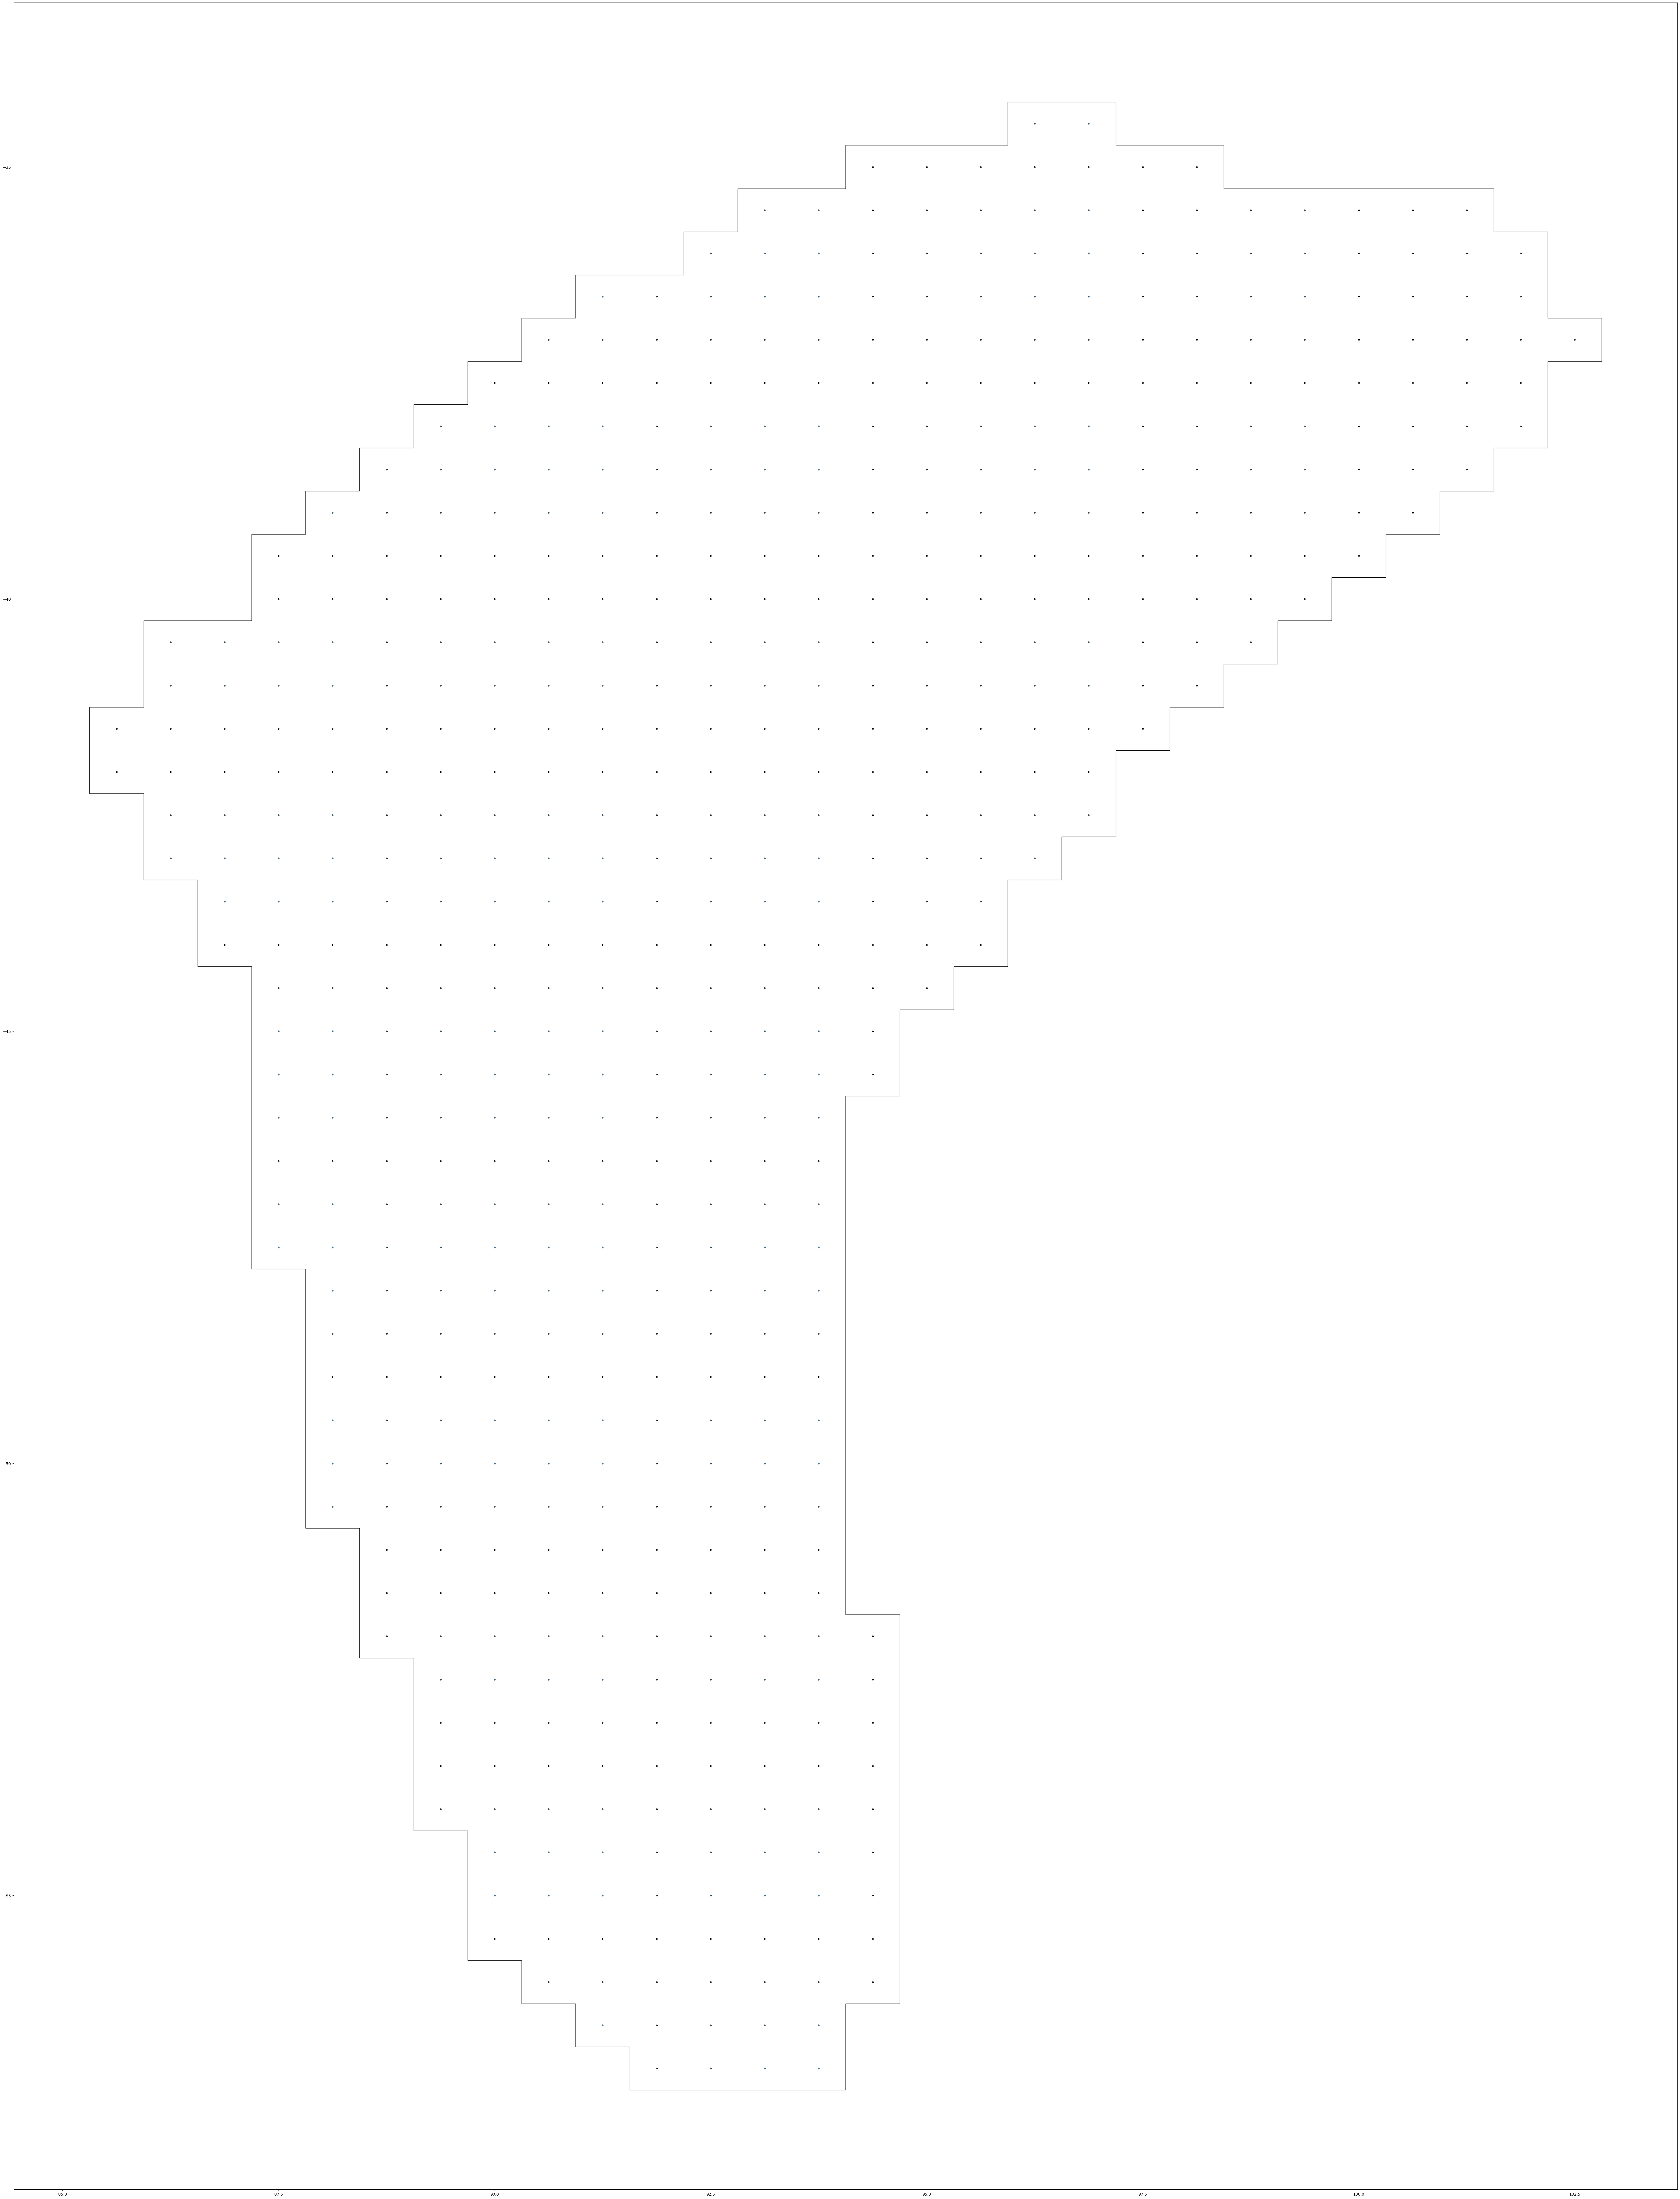

In [110]:
# problem profiles from 2001

# timestep 94, blob 5
# victim of coliniar bug; worked on second application of noise
AR = {'_id': '2001.01.012.018.0_5', 'raster': [(91.875, -57.0, [251.18032836914062]), (92.5, -57.0, [251.57574462890625]), (93.125, -57.0, [258.7864685058594]), (93.75, -57.0, [253.6963348388672]), (91.25, -56.5, [254.34584045410156]), (91.875, -56.5, [254.94471740722656]), (92.5, -56.5, [257.4504699707031]), (93.125, -56.5, [266.6833801269531]), (93.75, -56.5, [263.1405944824219]), (90.625, -56.0, [251.5689239501953]), (91.25, -56.0, [260.25836181640625]), (91.875, -56.0, [259.47198486328125]), (92.5, -56.0, [262.05926513671875]), (93.125, -56.0, [268.8132629394531]), (93.75, -56.0, [274.7146301269531]), (94.375, -56.0, [254.18580627441406]), (90.0, -55.5, [250.22610473632812]), (90.625, -55.5, [260.7822265625]), (91.25, -55.5, [266.1075439453125]), (91.875, -55.5, [266.59783935546875]), (92.5, -55.5, [264.9414367675781]), (93.125, -55.5, [272.7643737792969]), (93.75, -55.5, [275.5274963378906]), (94.375, -55.5, [262.3973693847656]), (90.0, -55.0, [261.2482604980469]), (90.625, -55.0, [271.27252197265625]), (91.25, -55.0, [273.49444580078125]), (91.875, -55.0, [271.48388671875]), (92.5, -55.0, [269.3216247558594]), (93.125, -55.0, [275.90875244140625]), (93.75, -55.0, [277.5636901855469]), (94.375, -55.0, [264.1202087402344]), (90.0, -54.5, [268.09796142578125]), (90.625, -54.5, [279.9788513183594]), (91.25, -54.5, [279.37738037109375]), (91.875, -54.5, [275.63525390625]), (92.5, -54.5, [273.45538330078125]), (93.125, -54.5, [276.3819274902344]), (93.75, -54.5, [282.2648620605469]), (94.375, -54.5, [265.5766296386719]), (89.375, -54.0, [252.367919921875]), (90.0, -54.0, [273.5242919921875]), (90.625, -54.0, [282.56591796875]), (91.25, -54.0, [283.1462707519531]), (91.875, -54.0, [280.6669006347656]), (92.5, -54.0, [277.3215637207031]), (93.125, -54.0, [279.04998779296875]), (93.75, -54.0, [279.95880126953125]), (94.375, -54.0, [268.05767822265625]), (89.375, -53.5, [261.46832275390625]), (90.0, -53.5, [279.4825134277344]), (90.625, -53.5, [285.4350280761719]), (91.25, -53.5, [286.1181335449219]), (91.875, -53.5, [285.567626953125]), (92.5, -53.5, [283.7808532714844]), (93.125, -53.5, [283.25457763671875]), (93.75, -53.5, [279.71966552734375]), (94.375, -53.5, [264.6495361328125]), (89.375, -53.0, [267.85992431640625]), (90.0, -53.0, [289.40252685546875]), (90.625, -53.0, [289.9784851074219]), (91.25, -53.0, [289.7614440917969]), (91.875, -53.0, [289.78350830078125]), (92.5, -53.0, [288.9155578613281]), (93.125, -53.0, [287.4607238769531]), (93.75, -53.0, [282.9608459472656]), (94.375, -53.0, [261.954833984375]), (89.375, -52.5, [279.59295654296875]), (90.0, -52.5, [298.3749084472656]), (90.625, -52.5, [299.0321350097656]), (91.25, -52.5, [295.3230895996094]), (91.875, -52.5, [295.6014099121094]), (92.5, -52.5, [294.1851501464844]), (93.125, -52.5, [290.628173828125]), (93.75, -52.5, [281.1600036621094]), (94.375, -52.5, [259.0107727050781]), (88.75, -52.0, [262.3293762207031]), (89.375, -52.0, [302.80487060546875]), (90.0, -52.0, [316.85162353515625]), (90.625, -52.0, [312.223388671875]), (91.25, -52.0, [304.3116149902344]), (91.875, -52.0, [302.2121887207031]), (92.5, -52.0, [301.3714904785156]), (93.125, -52.0, [295.27569580078125]), (93.75, -52.0, [278.0093994140625]), (94.375, -52.0, [252.0652313232422]), (88.75, -51.5, [287.7729797363281]), (89.375, -51.5, [337.1617126464844]), (90.0, -51.5, [344.795166015625]), (90.625, -51.5, [332.0742492675781]), (91.25, -51.5, [316.6511535644531]), (91.875, -51.5, [308.0678405761719]), (92.5, -51.5, [306.2070007324219]), (93.125, -51.5, [299.59649658203125]), (93.75, -51.5, [275.86737060546875]), (88.75, -51.0, [311.8316955566406]), (89.375, -51.0, [373.2718811035156]), (90.0, -51.0, [381.68988037109375]), (90.625, -51.0, [357.4124755859375]), (91.25, -51.0, [333.207763671875]), (91.875, -51.0, [319.6195983886719]), (92.5, -51.0, [312.2070617675781]), (93.125, -51.0, [296.475830078125]), (93.75, -51.0, [270.0440979003906]), (88.125, -50.5, [265.89593505859375]), (88.75, -50.5, [346.9673156738281]), (89.375, -50.5, [403.28399658203125]), (90.0, -50.5, [410.69781494140625]), (90.625, -50.5, [382.8683776855469]), (91.25, -50.5, [351.6988830566406]), (91.875, -50.5, [332.59942626953125]), (92.5, -50.5, [319.32757568359375]), (93.125, -50.5, [296.5968322753906]), (93.75, -50.5, [266.74761962890625]), (88.125, -50.0, [282.52508544921875]), (88.75, -50.0, [365.31524658203125]), (89.375, -50.0, [418.42889404296875]), (90.0, -50.0, [424.7355651855469]), (90.625, -50.0, [399.4925537109375]), (91.25, -50.0, [367.69732666015625]), (91.875, -50.0, [343.5037841796875]), (92.5, -50.0, [324.82171630859375]), (93.125, -50.0, [296.7561340332031]), (93.75, -50.0, [265.3908996582031]), (88.125, -49.5, [281.8835144042969]), (88.75, -49.5, [369.468505859375]), (89.375, -49.5, [429.76617431640625]), (90.0, -49.5, [435.83599853515625]), (90.625, -49.5, [412.3320007324219]), (91.25, -49.5, [381.6646423339844]), (91.875, -49.5, [356.5565490722656]), (92.5, -49.5, [329.8275146484375]), (93.125, -49.5, [296.4593811035156]), (93.75, -49.5, [262.83856201171875]), (88.125, -49.0, [274.3074645996094]), (88.75, -49.0, [352.0701599121094]), (89.375, -49.0, [431.6833801269531]), (90.0, -49.0, [447.5185852050781]), (90.625, -49.0, [427.77545166015625]), (91.25, -49.0, [396.06103515625]), (91.875, -49.0, [371.9576110839844]), (92.5, -49.0, [338.927490234375]), (93.125, -49.0, [296.3376159667969]), (93.75, -49.0, [260.1498718261719]), (88.125, -48.5, [278.37420654296875]), (88.75, -48.5, [345.6276550292969]), (89.375, -48.5, [423.5594787597656]), (90.0, -48.5, [455.5732421875]), (90.625, -48.5, [440.01800537109375]), (91.25, -48.5, [410.3449401855469]), (91.875, -48.5, [384.6150817871094]), (92.5, -48.5, [347.1495056152344]), (93.125, -48.5, [296.75714111328125]), (93.75, -48.5, [258.3833923339844]), (88.125, -48.0, [290.7443542480469]), (88.75, -48.0, [352.4508056640625]), (89.375, -48.0, [428.28173828125]), (90.0, -48.0, [466.1805114746094]), (90.625, -48.0, [453.55889892578125]), (91.25, -48.0, [426.4858093261719]), (91.875, -48.0, [398.92742919921875]), (92.5, -48.0, [355.02178955078125]), (93.125, -48.0, [301.2571105957031]), (93.75, -48.0, [259.79388427734375]), (87.5, -47.5, [254.6728515625]), (88.125, -47.5, [304.51788330078125]), (88.75, -47.5, [360.6919860839844]), (89.375, -47.5, [441.5242919921875]), (90.0, -47.5, [486.92974853515625]), (90.625, -47.5, [475.0053405761719]), (91.25, -47.5, [446.46234130859375]), (91.875, -47.5, [420.2799072265625]), (92.5, -47.5, [372.75604248046875]), (93.125, -47.5, [309.4864196777344]), (93.75, -47.5, [263.2259521484375]), (87.5, -47.0, [258.4296569824219]), (88.125, -47.0, [310.6765441894531]), (88.75, -47.0, [362.88214111328125]), (89.375, -47.0, [443.76251220703125]), (90.0, -47.0, [505.8062438964844]), (90.625, -47.0, [503.00714111328125]), (91.25, -47.0, [472.7138671875]), (91.875, -47.0, [441.2998352050781]), (92.5, -47.0, [395.6265869140625]), (93.125, -47.0, [326.4984436035156]), (93.75, -47.0, [270.2247314453125]), (87.5, -46.5, [259.8907470703125]), (88.125, -46.5, [312.6585998535156]), (88.75, -46.5, [364.30426025390625]), (89.375, -46.5, [433.6605529785156]), (90.0, -46.5, [503.92694091796875]), (90.625, -46.5, [520.4490356445312]), (91.25, -46.5, [497.8821105957031]), (91.875, -46.5, [467.36181640625]), (92.5, -46.5, [424.3898010253906]), (93.125, -46.5, [352.62835693359375]), (93.75, -46.5, [283.658203125]), (87.5, -46.0, [267.28955078125]), (88.125, -46.0, [321.2950134277344]), (88.75, -46.0, [367.578857421875]), (89.375, -46.0, [418.48876953125]), (90.0, -46.0, [481.21124267578125]), (90.625, -46.0, [520.5760498046875]), (91.25, -46.0, [518.582763671875]), (91.875, -46.0, [495.21343994140625]), (92.5, -46.0, [460.9548034667969]), (93.125, -46.0, [392.8146057128906]), (93.75, -46.0, [303.7740783691406]), (87.5, -45.5, [278.5611267089844]), (88.125, -45.5, [334.9600524902344]), (88.75, -45.5, [377.8998718261719]), (89.375, -45.5, [413.1014099121094]), (90.0, -45.5, [461.8299255371094]), (90.625, -45.5, [512.9306640625]), (91.25, -45.5, [531.7025146484375]), (91.875, -45.5, [517.9978637695312]), (92.5, -45.5, [487.53729248046875]), (93.125, -45.5, [430.1565856933594]), (93.75, -45.5, [342.5162658691406]), (94.375, -45.5, [268.7707824707031]), (87.5, -45.0, [288.8495788574219]), (88.125, -45.0, [341.0791320800781]), (88.75, -45.0, [381.4204406738281]), (89.375, -45.0, [413.3619689941406]), (90.0, -45.0, [451.4188537597656]), (90.625, -45.0, [494.14263916015625]), (91.25, -45.0, [523.9894409179688]), (91.875, -45.0, [530.6368408203125]), (92.5, -45.0, [514.0005493164062]), (93.125, -45.0, [470.9244689941406]), (93.75, -45.0, [386.85137939453125]), (94.375, -45.0, [299.9202880859375]), (87.5, -44.5, [290.0350341796875]), (88.125, -44.5, [339.6970520019531]), (88.75, -44.5, [380.0103759765625]), (89.375, -44.5, [410.302490234375]), (90.0, -44.5, [441.1432189941406]), (90.625, -44.5, [476.8040771484375]), (91.25, -44.5, [510.45703125]), (91.875, -44.5, [530.0809936523438]), (92.5, -44.5, [527.798583984375]), (93.125, -44.5, [497.1417541503906]), (93.75, -44.5, [428.6759338378906]), (94.375, -44.5, [344.1891174316406]), (95.0, -44.5, [276.27569580078125]), (86.875, -44.0, [254.0793914794922]), (87.5, -44.0, [286.4588623046875]), (88.125, -44.0, [330.7749328613281]), (88.75, -44.0, [377.8610534667969]), (89.375, -44.0, [411.7936096191406]), (90.0, -44.0, [436.2454833984375]), (90.625, -44.0, [461.6213684082031]), (91.25, -44.0, [490.5028991699219]), (91.875, -44.0, [518.934326171875]), (92.5, -44.0, [529.7117309570312]), (93.125, -44.0, [513.268798828125]), (93.75, -44.0, [463.99945068359375]), (94.375, -44.0, [389.709716796875]), (95.0, -44.0, [317.2643127441406]), (95.625, -44.0, [254.06768798828125]), (86.875, -43.5, [270.32080078125]), (87.5, -43.5, [288.2049255371094]), (88.125, -43.5, [322.1055908203125]), (88.75, -43.5, [369.4861145019531]), (89.375, -43.5, [405.5873718261719]), (90.0, -43.5, [426.1123046875]), (90.625, -43.5, [446.0487365722656]), (91.25, -43.5, [466.26165771484375]), (91.875, -43.5, [494.6365966796875]), (92.5, -43.5, [515.8943481445312]), (93.125, -43.5, [513.6051025390625]), (93.75, -43.5, [483.3334655761719]), (94.375, -43.5, [429.7333984375]), (95.0, -43.5, [358.6802978515625]), (95.625, -43.5, [288.0820617675781]), (86.25, -43.0, [265.76947021484375]), (86.875, -43.0, [300.32489013671875]), (87.5, -43.0, [309.4640197753906]), (88.125, -43.0, [322.7986145019531]), (88.75, -43.0, [355.22760009765625]), (89.375, -43.0, [387.241455078125]), (90.0, -43.0, [406.4677429199219]), (90.625, -43.0, [423.70867919921875]), (91.25, -43.0, [444.0125732421875]), (91.875, -43.0, [469.8411865234375]), (92.5, -43.0, [493.3652648925781]), (93.125, -43.0, [499.6071472167969]), (93.75, -43.0, [484.921630859375]), (94.375, -43.0, [449.36431884765625]), (95.0, -43.0, [395.53509521484375]), (95.625, -43.0, [325.6669006347656]), (96.25, -43.0, [270.7210998535156]), (86.25, -42.5, [282.6676330566406]), (86.875, -42.5, [327.7828063964844]), (87.5, -42.5, [339.02618408203125]), (88.125, -42.5, [335.03179931640625]), (88.75, -42.5, [346.9486083984375]), (89.375, -42.5, [372.2739562988281]), (90.0, -42.5, [390.9971923828125]), (90.625, -42.5, [406.3362121582031]), (91.25, -42.5, [429.6409606933594]), (91.875, -42.5, [455.5483703613281]), (92.5, -42.5, [473.62445068359375]), (93.125, -42.5, [482.36572265625]), (93.75, -42.5, [478.07965087890625]), (94.375, -42.5, [455.5747985839844]), (95.0, -42.5, [418.2740173339844]), (95.625, -42.5, [360.4201965332031]), (96.25, -42.5, [302.087890625]), (96.875, -42.5, [256.7858581542969]), (85.625, -42.0, [257.5797424316406]), (86.25, -42.0, [294.9191589355469]), (86.875, -42.0, [334.5047607421875]), (87.5, -42.0, [355.9529113769531]), (88.125, -42.0, [348.5235900878906]), (88.75, -42.0, [346.9101257324219]), (89.375, -42.0, [366.96124267578125]), (90.0, -42.0, [387.5715637207031]), (90.625, -42.0, [398.5918273925781]), (91.25, -42.0, [416.8567810058594]), (91.875, -42.0, [443.15771484375]), (92.5, -42.0, [460.3636779785156]), (93.125, -42.0, [468.6837463378906]), (93.75, -42.0, [469.06915283203125]), (94.375, -42.0, [454.6270446777344]), (95.0, -42.0, [424.58160400390625]), (95.625, -42.0, [375.938232421875]), (96.25, -42.0, [320.83258056640625]), (96.875, -42.0, [277.2455749511719]), (85.625, -41.5, [266.4879455566406]), (86.25, -41.5, [301.6390686035156]), (86.875, -41.5, [331.38226318359375]), (87.5, -41.5, [352.5151062011719]), (88.125, -41.5, [355.884033203125]), (88.75, -41.5, [348.4248352050781]), (89.375, -41.5, [355.3078918457031]), (90.0, -41.5, [377.14453125]), (90.625, -41.5, [393.89208984375]), (91.25, -41.5, [408.4820556640625]), (91.875, -41.5, [426.2930603027344]), (92.5, -41.5, [443.7080383300781]), (93.125, -41.5, [457.4393310546875]), (93.75, -41.5, [461.4059753417969]), (94.375, -41.5, [451.4626159667969]), (95.0, -41.5, [425.8244934082031]), (95.625, -41.5, [380.82806396484375]), (96.25, -41.5, [330.7929992675781]), (96.875, -41.5, [292.79095458984375]), (97.5, -41.5, [264.5030822753906]), (86.25, -41.0, [289.4327087402344]), (86.875, -41.0, [316.42071533203125]), (87.5, -41.0, [335.3021545410156]), (88.125, -41.0, [345.30999755859375]), (88.75, -41.0, [344.31146240234375]), (89.375, -41.0, [341.650634765625]), (90.0, -41.0, [351.6062316894531]), (90.625, -41.0, [374.427001953125]), (91.25, -41.0, [396.4740905761719]), (91.875, -41.0, [410.49853515625]), (92.5, -41.0, [422.16009521484375]), (93.125, -41.0, [441.41522216796875]), (93.75, -41.0, [453.2850341796875]), (94.375, -41.0, [447.7989501953125]), (95.0, -41.0, [426.5107116699219]), (95.625, -41.0, [388.1678771972656]), (96.25, -41.0, [344.6667175292969]), (96.875, -41.0, [308.0535583496094]), (97.5, -41.0, [281.4197692871094]), (98.125, -41.0, [258.63714599609375]), (86.25, -40.5, [253.04437255859375]), (86.875, -40.5, [284.48724365234375]), (87.5, -40.5, [306.7886657714844]), (88.125, -40.5, [322.599365234375]), (88.75, -40.5, [331.76055908203125]), (89.375, -40.5, [336.9132995605469]), (90.0, -40.5, [341.0214538574219]), (90.625, -40.5, [354.3079833984375]), (91.25, -40.5, [377.98358154296875]), (91.875, -40.5, [393.2160339355469]), (92.5, -40.5, [396.6230163574219]), (93.125, -40.5, [412.8027648925781]), (93.75, -40.5, [430.9217529296875]), (94.375, -40.5, [434.8533630371094]), (95.0, -40.5, [420.06658935546875]), (95.625, -40.5, [390.24664306640625]), (96.25, -40.5, [355.3103942871094]), (96.875, -40.5, [323.6885070800781]), (97.5, -40.5, [298.98052978515625]), (98.125, -40.5, [281.2251281738281]), (98.75, -40.5, [261.0423889160156]), (87.5, -40.0, [278.4227294921875]), (88.125, -40.0, [298.9032287597656]), (88.75, -40.0, [312.94287109375]), (89.375, -40.0, [326.68975830078125]), (90.0, -40.0, [340.4064636230469]), (90.625, -40.0, [353.62078857421875]), (91.25, -40.0, [368.7047119140625]), (91.875, -40.0, [380.8175354003906]), (92.5, -40.0, [379.72674560546875]), (93.125, -40.0, [383.9772644042969]), (93.75, -40.0, [399.2565612792969]), (94.375, -40.0, [411.1668701171875]), (95.0, -40.0, [407.31756591796875]), (95.625, -40.0, [386.3794860839844]), (96.25, -40.0, [358.8262023925781]), (96.875, -40.0, [334.4109802246094]), (97.5, -40.0, [314.52838134765625]), (98.125, -40.0, [299.8420104980469]), (98.75, -40.0, [287.2531433105469]), (99.375, -40.0, [266.23846435546875]), (87.5, -39.5, [258.3553466796875]), (88.125, -39.5, [280.0700988769531]), (88.75, -39.5, [294.8831481933594]), (89.375, -39.5, [310.2952575683594]), (90.0, -39.5, [328.96002197265625]), (90.625, -39.5, [350.3627014160156]), (91.25, -39.5, [367.8251647949219]), (91.875, -39.5, [376.2669982910156]), (92.5, -39.5, [376.7229919433594]), (93.125, -39.5, [370.99981689453125]), (93.75, -39.5, [373.6660461425781]), (94.375, -39.5, [387.8888854980469]), (95.0, -39.5, [394.3608703613281]), (95.625, -39.5, [382.7674865722656]), (96.25, -39.5, [360.4669494628906]), (96.875, -39.5, [340.4407653808594]), (97.5, -39.5, [323.797607421875]), (98.125, -39.5, [312.4353332519531]), (98.75, -39.5, [304.64715576171875]), (99.375, -39.5, [293.1770324707031]), (100.0, -39.5, [269.6039733886719]), (88.125, -39.0, [267.70379638671875]), (88.75, -39.0, [283.29974365234375]), (89.375, -39.0, [296.0281677246094]), (90.0, -39.0, [312.2669982910156]), (90.625, -39.0, [333.4985656738281]), (91.25, -39.0, [352.4210510253906]), (91.875, -39.0, [365.9051208496094]), (92.5, -39.0, [373.5807189941406]), (93.125, -39.0, [367.8990173339844]), (93.75, -39.0, [362.4429626464844]), (94.375, -39.0, [370.16241455078125]), (95.0, -39.0, [382.62298583984375]), (95.625, -39.0, [381.2797546386719]), (96.25, -39.0, [365.2457580566406]), (96.875, -39.0, [348.2605285644531]), (97.5, -39.0, [334.3058776855469]), (98.125, -39.0, [325.0231628417969]), (98.75, -39.0, [320.4358825683594]), (99.375, -39.0, [314.2250671386719]), (100.0, -39.0, [296.3568115234375]), (100.625, -39.0, [272.0555725097656]), (88.75, -38.5, [274.46807861328125]), (89.375, -38.5, [290.9620056152344]), (90.0, -38.5, [302.484375]), (90.625, -38.5, [313.67010498046875]), (91.25, -38.5, [328.9567565917969]), (91.875, -38.5, [345.824951171875]), (92.5, -38.5, [359.56597900390625]), (93.125, -38.5, [359.7399597167969]), (93.75, -38.5, [354.98321533203125]), (94.375, -38.5, [357.9666748046875]), (95.0, -38.5, [369.78753662109375]), (95.625, -38.5, [374.6949462890625]), (96.25, -38.5, [366.974365234375]), (96.875, -38.5, [353.8920593261719]), (97.5, -38.5, [342.9967346191406]), (98.125, -38.5, [337.4029846191406]), (98.75, -38.5, [336.0769348144531]), (99.375, -38.5, [329.40167236328125]), (100.0, -38.5, [312.5201721191406]), (100.625, -38.5, [288.44793701171875]), (101.25, -38.5, [263.5159606933594]), (89.375, -38.0, [273.5043029785156]), (90.0, -38.0, [293.0838928222656]), (90.625, -38.0, [299.1808166503906]), (91.25, -38.0, [304.7748718261719]), (91.875, -38.0, [318.5070495605469]), (92.5, -38.0, [332.8824462890625]), (93.125, -38.0, [339.48138427734375]), (93.75, -38.0, [341.84503173828125]), (94.375, -38.0, [347.2810974121094]), (95.0, -38.0, [359.2369384765625]), (95.625, -38.0, [366.521240234375]), (96.25, -38.0, [362.6688537597656]), (96.875, -38.0, [353.1330871582031]), (97.5, -38.0, [345.5495300292969]), (98.125, -38.0, [342.3027038574219]), (98.75, -38.0, [342.4151916503906]), (99.375, -38.0, [339.5585632324219]), (100.0, -38.0, [324.7005615234375]), (100.625, -38.0, [300.941162109375]), (101.25, -38.0, [276.62725830078125]), (101.875, -38.0, [259.6789855957031]), (90.0, -37.5, [268.60906982421875]), (90.625, -37.5, [283.6343688964844]), (91.25, -37.5, [288.82958984375]), (91.875, -37.5, [299.41229248046875]), (92.5, -37.5, [312.6540222167969]), (93.125, -37.5, [321.9521789550781]), (93.75, -37.5, [329.2397155761719]), (94.375, -37.5, [338.9807434082031]), (95.0, -37.5, [351.79583740234375]), (95.625, -37.5, [358.9001770019531]), (96.25, -37.5, [355.1951904296875]), (96.875, -37.5, [347.888427734375]), (97.5, -37.5, [341.9185791015625]), (98.125, -37.5, [339.0009765625]), (98.75, -37.5, [339.67803955078125]), (99.375, -37.5, [337.3619079589844]), (100.0, -37.5, [324.12689208984375]), (100.625, -37.5, [302.07373046875]), (101.25, -37.5, [281.99481201171875]), (101.875, -37.5, [265.1935119628906]), (90.625, -37.0, [258.61907958984375]), (91.25, -37.0, [275.6441345214844]), (91.875, -37.0, [291.60638427734375]), (92.5, -37.0, [306.5108337402344]), (93.125, -37.0, [317.4789733886719]), (93.75, -37.0, [326.41082763671875]), (94.375, -37.0, [337.36480712890625]), (95.0, -37.0, [347.51507568359375]), (95.625, -37.0, [350.3253479003906]), (96.25, -37.0, [346.9875793457031]), (96.875, -37.0, [341.9884033203125]), (97.5, -37.0, [337.3900146484375]), (98.125, -37.0, [334.1339416503906]), (98.75, -37.0, [331.7672119140625]), (99.375, -37.0, [323.8693542480469]), (100.0, -37.0, [306.0223083496094]), (100.625, -37.0, [287.5411071777344]), (101.25, -37.0, [272.97613525390625]), (101.875, -37.0, [260.2552490234375]), (102.5, -37.0, [254.48822021484375]), (91.25, -36.5, [252.3618621826172]), (91.875, -36.5, [277.3426818847656]), (92.5, -36.5, [298.0947570800781]), (93.125, -36.5, [314.810302734375]), (93.75, -36.5, [327.3897399902344]), (94.375, -36.5, [336.98040771484375]), (95.0, -36.5, [339.3048400878906]), (95.625, -36.5, [336.8637390136719]), (96.25, -36.5, [332.3894958496094]), (96.875, -36.5, [327.35296630859375]), (97.5, -36.5, [324.0831298828125]), (98.125, -36.5, [321.8877868652344]), (98.75, -36.5, [317.5215759277344]), (99.375, -36.5, [308.9076843261719]), (100.0, -36.5, [296.5921630859375]), (100.625, -36.5, [281.2210388183594]), (101.25, -36.5, [267.3528747558594]), (101.875, -36.5, [255.05491638183594]), (92.5, -36.0, [273.16229248046875]), (93.125, -36.0, [297.37396240234375]), (93.75, -36.0, [312.9956970214844]), (94.375, -36.0, [319.9542236328125]), (95.0, -36.0, [319.937744140625]), (95.625, -36.0, [315.4457702636719]), (96.25, -36.0, [310.7403869628906]), (96.875, -36.0, [306.6183166503906]), (97.5, -36.0, [305.3054504394531]), (98.125, -36.0, [304.25848388671875]), (98.75, -36.0, [299.2328796386719]), (99.375, -36.0, [291.476318359375]), (100.0, -36.0, [284.6626892089844]), (100.625, -36.0, [277.2745056152344]), (101.25, -36.0, [266.4131164550781]), (101.875, -36.0, [253.89369201660156]), (93.125, -35.5, [255.42718505859375]), (93.75, -35.5, [278.20660400390625]), (94.375, -35.5, [290.245849609375]), (95.0, -35.5, [293.68035888671875]), (95.625, -35.5, [291.3792419433594]), (96.25, -35.5, [286.7308654785156]), (96.875, -35.5, [283.1894836425781]), (97.5, -35.5, [282.16021728515625]), (98.125, -35.5, [277.394287109375]), (98.75, -35.5, [267.0524597167969]), (99.375, -35.5, [258.1804504394531]), (100.0, -35.5, [253.05145263671875]), (100.625, -35.5, [252.7833709716797]), (101.25, -35.5, [252.295654296875]), (94.375, -35.0, [252.08619689941406]), (95.0, -35.0, [260.9618835449219]), (95.625, -35.0, [263.55743408203125]), (96.25, -35.0, [263.5283508300781]), (96.875, -35.0, [263.06207275390625]), (97.5, -35.0, [261.80322265625]), (98.125, -35.0, [256.0132141113281]), (96.25, -34.5, [252.07179260253906]), (96.875, -34.5, [251.2662353515625])], 'flags': [], 'geolocation': {'type': 'MultiPolygon', 'coordinates': [[[[91.5625, -57.25], [94.0625, -57.25], [94.0625, -56.25], [94.6875, -56.25], [94.6875, -51.75], [94.0625, -51.75], [94.0625, -45.75], [94.6875, -45.75], [94.6875, -44.75], [95.3125, -44.75], [95.3125, -44.25], [95.9375, -44.25], [95.9375, -43.25], [96.5625, -43.25], [96.5625, -42.75], [97.1875, -42.75], [97.1875, -41.75], [97.8125, -41.75], [97.8125, -41.25], [98.4375, -41.25], [98.4375, -40.75], [99.0625, -40.75], [99.0625, -40.25], [99.6875, -40.25], [99.6875, -39.75], [100.3125, -39.75], [100.3125, -39.25], [100.9375, -39.25], [100.9375, -38.75], [101.5625, -38.75], [101.5625, -38.25], [102.1875, -38.25], [102.1875, -37.25], [102.8125, -37.25], [102.8125, -36.75], [102.1875, -36.75], [102.1875, -35.75], [101.5625, -35.75], [101.5625, -35.25], [98.4375, -35.25], [98.4375, -34.75], [97.1875, -34.75], [97.1875, -34.25], [95.9375, -34.25], [95.9375, -34.75], [94.0625, -34.75], [94.0625, -35.25], [92.8125, -35.25], [92.8125, -35.75], [92.1875, -35.75], [92.1875, -36.25], [90.9375, -36.25], [90.9375, -36.75], [90.3125, -36.75], [90.3125, -37.25], [89.6875, -37.25], [89.6875, -37.75], [89.0625, -37.75], [89.0625, -38.25], [88.4375, -38.25], [88.4375, -38.75], [87.8125, -38.75], [87.8125, -39.25], [87.1875, -39.25], [87.1875, -40.25], [85.9375, -40.25], [85.9375, -41.25], [85.3125, -41.25], [85.3125, -42.25], [85.9375, -42.25], [85.9375, -43.25], [86.5625, -43.25], [86.5625, -44.25], [87.1875, -44.25], [87.1875, -47.75], [87.8125, -47.75], [87.8125, -50.75], [88.4375, -50.75], [88.4375, -52.25], [89.0625, -52.25], [89.0625, -54.25], [89.6875, -54.25], [89.6875, -55.75], [90.3125, -55.75], [90.3125, -56.25], [90.9375, -56.25], [90.9375, -56.75], [91.5625, -56.75], [91.5625, -57.25]]]]}}
plotAR(AR)

In [111]:
# 565 / 4
# victim of coliniar bug; worked on second application of noise
AR = {'_id': '2001.03.012.015.0_4', 'raster': [(47.5, -57.5, [250.45619201660156]), (48.125, -57.5, [253.45306396484375]), (48.75, -57.5, [250.57008361816406]), (49.375, -57.5, [250.59844970703125]), (43.75, -57.0, [258.5122985839844]), (44.375, -57.0, [282.30908203125]), (45.0, -57.0, [294.9079895019531]), (45.625, -57.0, [301.3550109863281]), (46.25, -57.0, [307.9285583496094]), (46.875, -57.0, [311.07012939453125]), (47.5, -57.0, [310.6159362792969]), (48.125, -57.0, [308.6015625]), (48.75, -57.0, [305.853271484375]), (49.375, -57.0, [294.61669921875]), (50.0, -57.0, [283.80743408203125]), (50.625, -57.0, [273.8404541015625]), (51.25, -57.0, [264.4707946777344]), (51.875, -57.0, [257.06671142578125]), (43.125, -56.5, [285.2047119140625]), (43.75, -56.5, [322.1999206542969]), (44.375, -56.5, [347.3985595703125]), (45.0, -56.5, [366.2935485839844]), (45.625, -56.5, [369.3772888183594]), (46.25, -56.5, [370.3993835449219]), (46.875, -56.5, [369.52886962890625]), (47.5, -56.5, [362.71514892578125]), (48.125, -56.5, [352.00140380859375]), (48.75, -56.5, [338.2619323730469]), (49.375, -56.5, [329.2729187011719]), (50.0, -56.5, [317.973388671875]), (50.625, -56.5, [306.17950439453125]), (51.25, -56.5, [295.6039123535156]), (51.875, -56.5, [288.09747314453125]), (52.5, -56.5, [281.21380615234375]), (53.125, -56.5, [272.9751892089844]), (53.75, -56.5, [264.39276123046875]), (54.375, -56.5, [256.8041687011719]), (41.875, -56.0, [257.5954284667969]), (42.5, -56.0, [297.91015625]), (43.125, -56.0, [339.7410888671875]), (43.75, -56.0, [376.82818603515625]), (44.375, -56.0, [407.7357177734375]), (45.0, -56.0, [425.60443115234375]), (45.625, -56.0, [433.9037780761719]), (46.25, -56.0, [432.4365234375]), (46.875, -56.0, [428.1866455078125]), (47.5, -56.0, [417.97314453125]), (48.125, -56.0, [400.4273376464844]), (48.75, -56.0, [376.97613525390625]), (49.375, -56.0, [353.51531982421875]), (50.0, -56.0, [336.426513671875]), (50.625, -56.0, [315.5484619140625]), (51.25, -56.0, [300.7523193359375]), (51.875, -56.0, [293.03997802734375]), (52.5, -56.0, [292.43475341796875]), (53.125, -56.0, [286.21124267578125]), (53.75, -56.0, [282.1136474609375]), (54.375, -56.0, [273.4144287109375]), (55.0, -56.0, [264.92303466796875]), (55.625, -56.0, [256.2889404296875]), (41.25, -55.5, [258.0122985839844]), (41.875, -55.5, [300.8282165527344]), (42.5, -55.5, [340.0865783691406]), (43.125, -55.5, [377.9487609863281]), (43.75, -55.5, [418.77008056640625]), (44.375, -55.5, [458.060546875]), (45.0, -55.5, [487.07244873046875]), (45.625, -55.5, [507.31689453125]), (46.25, -55.5, [519.0110473632812]), (46.875, -55.5, [512.9835205078125]), (47.5, -55.5, [487.9504089355469]), (48.125, -55.5, [460.37628173828125]), (48.75, -55.5, [428.298828125]), (49.375, -55.5, [394.5491638183594]), (50.0, -55.5, [352.8291931152344]), (50.625, -55.5, [314.9255676269531]), (51.25, -55.5, [283.117919921875]), (51.875, -55.5, [270.3964538574219]), (52.5, -55.5, [262.5563049316406]), (53.125, -55.5, [264.5871276855469]), (53.75, -55.5, [267.42071533203125]), (54.375, -55.5, [271.4945373535156]), (55.0, -55.5, [267.7713317871094]), (55.625, -55.5, [261.0711669921875]), (56.25, -55.5, [253.73300170898438]), (40.625, -55.0, [262.0378112792969]), (41.25, -55.0, [302.9835510253906]), (41.875, -55.0, [342.87164306640625]), (42.5, -55.0, [377.864013671875]), (43.125, -55.0, [414.9036560058594]), (43.75, -55.0, [454.7039794921875]), (44.375, -55.0, [501.13287353515625]), (45.0, -55.0, [552.1227416992188]), (45.625, -55.0, [585.9888305664062]), (46.25, -55.0, [599.2855834960938]), (46.875, -55.0, [585.7516479492188]), (47.5, -55.0, [534.5870361328125]), (48.125, -55.0, [480.51556396484375]), (48.75, -55.0, [440.3837890625]), (49.375, -55.0, [391.3404846191406]), (50.0, -55.0, [353.8982849121094]), (50.625, -55.0, [316.4726867675781]), (51.25, -55.0, [281.9896240234375]), (51.875, -55.0, [250.0170440673828]), (55.0, -55.0, [252.2664794921875]), (55.625, -55.0, [264.16644287109375]), (56.25, -55.0, [261.2841491699219]), (56.875, -55.0, [256.46405029296875]), (57.5, -55.0, [251.0186767578125]), (40.0, -54.5, [261.4407653808594]), (40.625, -54.5, [307.737548828125]), (41.25, -54.5, [343.11004638671875]), (41.875, -54.5, [375.5856628417969]), (42.5, -54.5, [411.4378662109375]), (43.125, -54.5, [449.28057861328125]), (43.75, -54.5, [491.3160095214844]), (44.375, -54.5, [532.4275512695312]), (45.0, -54.5, [584.04052734375]), (45.625, -54.5, [636.0638427734375]), (46.25, -54.5, [647.7196044921875]), (46.875, -54.5, [630.0919799804688]), (47.5, -54.5, [581.1953125]), (48.125, -54.5, [521.646484375]), (48.75, -54.5, [445.16741943359375]), (49.375, -54.5, [382.873291015625]), (50.0, -54.5, [324.9371643066406]), (50.625, -54.5, [284.73992919921875]), (51.25, -54.5, [256.786865234375]), (56.875, -54.5, [267.0730895996094]), (57.5, -54.5, [266.4203186035156]), (58.125, -54.5, [266.71820068359375]), (58.75, -54.5, [262.5490417480469]), (59.375, -54.5, [253.41574096679688]), (39.375, -54.0, [252.76710510253906]), (40.0, -54.0, [294.15557861328125]), (40.625, -54.0, [328.5140075683594]), (41.25, -54.0, [357.59124755859375]), (41.875, -54.0, [389.9502258300781]), (42.5, -54.0, [430.2037048339844]), (43.125, -54.0, [473.2680969238281]), (43.75, -54.0, [506.5324401855469]), (44.375, -54.0, [519.2207641601562]), (45.0, -54.0, [567.7435302734375]), (45.625, -54.0, [631.9297485351562]), (46.25, -54.0, [695.0731811523438]), (46.875, -54.0, [707.485107421875]), (47.5, -54.0, [693.9613037109375]), (48.125, -54.0, [638.7742919921875]), (48.75, -54.0, [557.7955322265625]), (49.375, -54.0, [461.1341552734375]), (50.0, -54.0, [359.78009033203125]), (50.625, -54.0, [290.07000732421875]), (58.125, -54.0, [257.3360595703125]), (58.75, -54.0, [271.085693359375]), (59.375, -54.0, [277.8526611328125]), (60.0, -54.0, [272.34234619140625]), (60.625, -54.0, [261.0050048828125]), (39.375, -53.5, [270.4939270019531]), (40.0, -53.5, [313.86090087890625]), (40.625, -53.5, [337.0483093261719]), (41.25, -53.5, [363.4935302734375]), (41.875, -53.5, [412.0591125488281]), (42.5, -53.5, [468.7669372558594]), (43.125, -53.5, [517.6513061523438]), (43.75, -53.5, [517.0171508789062]), (44.375, -53.5, [510.911865234375]), (45.0, -53.5, [531.5857543945312]), (45.625, -53.5, [610.0745239257812]), (46.25, -53.5, [719.3635864257812]), (46.875, -53.5, [815.1737670898438]), (47.5, -53.5, [824.1765747070312]), (48.125, -53.5, [780.021240234375]), (48.75, -53.5, [691.3424682617188]), (49.375, -53.5, [571.7142944335938]), (50.0, -53.5, [456.8153991699219]), (50.625, -53.5, [349.94512939453125]), (51.25, -53.5, [262.9592590332031]), (59.375, -53.5, [257.0024108886719]), (60.0, -53.5, [267.538330078125]), (60.625, -53.5, [268.3575439453125]), (61.25, -53.5, [262.7526550292969]), (61.875, -53.5, [252.00241088867188]), (39.375, -53.0, [278.00634765625]), (40.0, -53.0, [317.24871826171875]), (40.625, -53.0, [337.71734619140625]), (41.25, -53.0, [370.9369201660156]), (41.875, -53.0, [447.2155456542969]), (42.5, -53.0, [530.6821899414062]), (43.125, -53.0, [574.0416259765625]), (43.75, -53.0, [576.638916015625]), (44.375, -53.0, [567.260009765625]), (45.0, -53.0, [587.6034545898438]), (45.625, -53.0, [646.5787353515625]), (46.25, -53.0, [744.1281127929688]), (46.875, -53.0, [841.5900268554688]), (47.5, -53.0, [889.5535278320312]), (48.125, -53.0, [858.6646728515625]), (48.75, -53.0, [784.9471435546875]), (49.375, -53.0, [659.7547607421875]), (50.0, -53.0, [532.9846801757812]), (50.625, -53.0, [429.32470703125]), (51.25, -53.0, [328.3794860839844]), (39.375, -52.5, [279.3368835449219]), (40.0, -52.5, [312.63800048828125]), (40.625, -52.5, [336.7532958984375]), (41.25, -52.5, [386.3393249511719]), (41.875, -52.5, [476.7002258300781]), (42.5, -52.5, [568.69873046875]), (43.125, -52.5, [600.087646484375]), (43.75, -52.5, [617.844482421875]), (44.375, -52.5, [642.4196166992188]), (45.0, -52.5, [700.31689453125]), (45.625, -52.5, [766.5673217773438]), (46.25, -52.5, [801.4945678710938]), (46.875, -52.5, [836.986328125]), (47.5, -52.5, [874.1696166992188]), (48.125, -52.5, [877.0450439453125]), (48.75, -52.5, [828.0060424804688]), (49.375, -52.5, [758.4229736328125]), (50.0, -52.5, [656.9371337890625]), (50.625, -52.5, [562.9190673828125]), (51.25, -52.5, [453.9022216796875]), (51.875, -52.5, [348.031982421875]), (52.5, -52.5, [255.7097625732422]), (39.375, -52.0, [271.3951721191406]), (40.0, -52.0, [296.8167724609375]), (40.625, -52.0, [333.5250549316406]), (41.25, -52.0, [400.9964294433594]), (41.875, -52.0, [485.0018005371094]), (42.5, -52.0, [548.0100708007812]), (43.125, -52.0, [577.7520751953125]), (43.75, -52.0, [628.9891357421875]), (44.375, -52.0, [750.6298828125]), (45.0, -52.0, [858.5565795898438]), (45.625, -52.0, [909.6006469726562]), (46.25, -52.0, [861.6238403320312]), (46.875, -52.0, [845.0801391601562]), (47.5, -52.0, [848.0286865234375]), (48.125, -52.0, [870.3782958984375]), (48.75, -52.0, [872.732421875]), (49.375, -52.0, [837.4818725585938]), (50.0, -52.0, [779.1444091796875]), (50.625, -52.0, [682.8890991210938]), (51.25, -52.0, [557.3235473632812]), (51.875, -52.0, [443.8240051269531]), (52.5, -52.0, [337.1756896972656]), (39.375, -51.5, [262.05389404296875]), (40.0, -51.5, [273.3557434082031]), (40.625, -51.5, [319.6997985839844]), (41.25, -51.5, [399.6936950683594]), (41.875, -51.5, [473.6398010253906]), (42.5, -51.5, [512.3861083984375]), (43.125, -51.5, [537.374267578125]), (43.75, -51.5, [655.5952758789062]), (44.375, -51.5, [853.4210815429688]), (45.0, -51.5, [1040.228759765625]), (45.625, -51.5, [1055.1572265625]), (46.25, -51.5, [975.1919555664062]), (46.875, -51.5, [910.60546875]), (47.5, -51.5, [859.7195434570312]), (48.125, -51.5, [820.3090209960938]), (48.75, -51.5, [800.61279296875]), (49.375, -51.5, [793.2214965820312]), (50.0, -51.5, [760.4574584960938]), (50.625, -51.5, [726.8572998046875]), (51.25, -51.5, [614.2279663085938]), (51.875, -51.5, [497.8779602050781]), (52.5, -51.5, [392.6417541503906]), (53.125, -51.5, [300.7462463378906]), (38.75, -51.0, [252.33349609375]), (39.375, -51.0, [254.62315368652344]), (40.0, -51.0, [254.78305053710938]), (40.625, -51.0, [307.68267822265625]), (41.25, -51.0, [391.0544128417969]), (41.875, -51.0, [471.3511962890625]), (42.5, -51.0, [506.3321838378906]), (43.125, -51.0, [535.7101440429688]), (43.75, -51.0, [658.265869140625]), (44.375, -51.0, [887.0953979492188]), (45.0, -51.0, [1098.74755859375]), (45.625, -51.0, [1111.269775390625]), (46.25, -51.0, [1014.8869018554688]), (46.875, -51.0, [945.7202758789062]), (47.5, -51.0, [867.6384887695312]), (48.125, -51.0, [788.2388305664062]), (48.75, -51.0, [724.4313354492188]), (49.375, -51.0, [685.69873046875]), (50.0, -51.0, [669.6870727539062]), (50.625, -51.0, [659.04931640625]), (51.25, -51.0, [605.3488159179688]), (51.875, -51.0, [521.1878051757812]), (52.5, -51.0, [432.5124206542969]), (53.125, -51.0, [354.18603515625]), (53.75, -51.0, [289.5755310058594]), (38.75, -50.5, [259.41046142578125]), (40.625, -50.5, [299.017333984375]), (41.25, -50.5, [395.64208984375]), (41.875, -50.5, [501.8831787109375]), (42.5, -50.5, [549.6349487304688]), (43.125, -50.5, [594.3591918945312]), (43.75, -50.5, [680.1975708007812]), (44.375, -50.5, [887.6748657226562]), (45.0, -50.5, [1007.9321899414062]), (45.625, -50.5, [975.2523193359375]), (46.25, -50.5, [909.3779907226562]), (46.875, -50.5, [854.0308227539062]), (47.5, -50.5, [814.008056640625]), (48.125, -50.5, [765.8779907226562]), (48.75, -50.5, [718.4876098632812]), (49.375, -50.5, [690.7872924804688]), (50.0, -50.5, [665.7306518554688]), (50.625, -50.5, [653.291259765625]), (51.25, -50.5, [600.0310668945312]), (51.875, -50.5, [528.1739501953125]), (52.5, -50.5, [461.40106201171875]), (53.125, -50.5, [396.27447509765625]), (53.75, -50.5, [336.6792907714844]), (54.375, -50.5, [284.3702087402344]), (38.75, -50.0, [263.10223388671875]), (40.625, -50.0, [286.1177978515625]), (41.25, -50.0, [392.541748046875]), (41.875, -50.0, [504.9769592285156]), (42.5, -50.0, [586.8256225585938]), (43.125, -50.0, [655.0975341796875]), (43.75, -50.0, [764.2040405273438]), (44.375, -50.0, [923.2186279296875]), (45.0, -50.0, [939.9737548828125]), (45.625, -50.0, [862.2311401367188]), (46.25, -50.0, [821.5485229492188]), (46.875, -50.0, [793.616455078125]), (47.5, -50.0, [772.0714111328125]), (48.125, -50.0, [758.3438110351562]), (48.75, -50.0, [749.3269653320312]), (49.375, -50.0, [742.7548828125]), (50.0, -50.0, [726.161376953125]), (50.625, -50.0, [708.6824951171875]), (51.25, -50.0, [650.4813842773438]), (51.875, -50.0, [585.7308349609375]), (52.5, -50.0, [522.8225708007812]), (53.125, -50.0, [463.22479248046875]), (53.75, -50.0, [399.6141357421875]), (54.375, -50.0, [340.7735595703125]), (55.0, -50.0, [287.8980407714844]), (38.75, -49.5, [262.3492126464844]), (40.625, -49.5, [277.0335388183594]), (41.25, -49.5, [384.0434875488281]), (41.875, -49.5, [490.45294189453125]), (42.5, -49.5, [578.0103149414062]), (43.125, -49.5, [680.1184692382812]), (43.75, -49.5, [821.7483520507812]), (44.375, -49.5, [938.6195068359375]), (45.0, -49.5, [876.8926391601562]), (45.625, -49.5, [801.6558837890625]), (46.25, -49.5, [779.8161010742188]), (46.875, -49.5, [767.0720825195312]), (47.5, -49.5, [767.4286499023438]), (48.125, -49.5, [777.5545654296875]), (48.75, -49.5, [790.8024291992188]), (49.375, -49.5, [798.5504760742188]), (50.0, -49.5, [782.9794921875]), (50.625, -49.5, [763.064697265625]), (51.25, -49.5, [706.423828125]), (51.875, -49.5, [643.6336059570312]), (52.5, -49.5, [585.563720703125]), (53.125, -49.5, [534.9559326171875]), (53.75, -49.5, [483.19403076171875]), (54.375, -49.5, [422.83563232421875]), (55.0, -49.5, [351.5602111816406]), (55.625, -49.5, [290.78076171875]), (38.75, -49.0, [261.5165710449219]), (40.625, -49.0, [275.6152038574219]), (41.25, -49.0, [382.97735595703125]), (41.875, -49.0, [479.7105712890625]), (42.5, -49.0, [558.7557983398438]), (43.125, -49.0, [680.4547729492188]), (43.75, -49.0, [837.0969848632812]), (44.375, -49.0, [893.537109375]), (45.0, -49.0, [798.0424194335938]), (45.625, -49.0, [742.2863159179688]), (46.25, -49.0, [734.0914306640625]), (46.875, -49.0, [740.9749145507812]), (47.5, -49.0, [782.9667358398438]), (48.125, -49.0, [817.663330078125]), (48.75, -49.0, [833.6181030273438]), (49.375, -49.0, [831.8108520507812]), (50.0, -49.0, [810.747802734375]), (50.625, -49.0, [789.5364379882812]), (51.25, -49.0, [737.1292114257812]), (51.875, -49.0, [683.107666015625]), (52.5, -49.0, [630.3584594726562]), (53.125, -49.0, [585.9532470703125]), (53.75, -49.0, [549.6941528320312]), (54.375, -49.0, [503.6383056640625]), (55.0, -49.0, [439.8021240234375]), (55.625, -49.0, [361.93389892578125]), (56.25, -49.0, [288.7535400390625]), (38.125, -48.5, [254.3856964111328]), (38.75, -48.5, [261.14324951171875]), (40.625, -48.5, [293.46185302734375]), (41.25, -48.5, [402.27777099609375]), (41.875, -48.5, [484.3002014160156]), (42.5, -48.5, [557.8993530273438]), (43.125, -48.5, [689.6048583984375]), (43.75, -48.5, [834.2688598632812]), (44.375, -48.5, [820.978271484375]), (45.0, -48.5, [724.4881591796875]), (45.625, -48.5, [684.1461791992188]), (46.25, -48.5, [701.2876586914062]), (46.875, -48.5, [747.0263671875]), (47.5, -48.5, [805.8235473632812]), (48.125, -48.5, [844.7633666992188]), (48.75, -48.5, [855.4822998046875]), (49.375, -48.5, [845.2495727539062]), (50.0, -48.5, [847.809326171875]), (50.625, -48.5, [808.0355834960938]), (51.25, -48.5, [766.603759765625]), (51.875, -48.5, [726.8756713867188]), (52.5, -48.5, [686.5183715820312]), (53.125, -48.5, [644.6943969726562]), (53.75, -48.5, [609.5911254882812]), (54.375, -48.5, [578.7136840820312]), (55.0, -48.5, [536.65380859375]), (55.625, -48.5, [470.01239013671875]), (56.25, -48.5, [385.6957092285156]), (56.875, -48.5, [299.0623779296875]), (38.125, -48.0, [261.3922119140625]), (38.75, -48.0, [266.5554504394531]), (39.375, -48.0, [260.7768859863281]), (40.0, -48.0, [275.55743408203125]), (40.625, -48.0, [344.3313903808594]), (41.25, -48.0, [441.6549072265625]), (41.875, -48.0, [500.10748291015625]), (42.5, -48.0, [571.3190307617188]), (43.125, -48.0, [710.5324096679688]), (43.75, -48.0, [819.2952880859375]), (44.375, -48.0, [744.1783447265625]), (45.0, -48.0, [657.9862060546875]), (45.625, -48.0, [639.6478881835938]), (46.25, -48.0, [686.4595947265625]), (46.875, -48.0, [755.7301635742188]), (47.5, -48.0, [816.9584350585938]), (48.125, -48.0, [854.227783203125]), (48.75, -48.0, [861.1383666992188]), (49.375, -48.0, [848.2900390625]), (50.0, -48.0, [821.134033203125]), (50.625, -48.0, [818.6402587890625]), (51.25, -48.0, [787.5391845703125]), (51.875, -48.0, [768.9061889648438]), (52.5, -48.0, [742.9783325195312]), (53.125, -48.0, [711.1321411132812]), (53.75, -48.0, [682.42578125]), (54.375, -48.0, [654.9663696289062]), (55.0, -48.0, [624.958251953125]), (55.625, -48.0, [574.3062133789062]), (56.25, -48.0, [501.51214599609375]), (56.875, -48.0, [407.841064453125]), (57.5, -48.0, [311.8240661621094]), (38.125, -47.5, [266.9704895019531]), (38.75, -47.5, [281.0049743652344]), (39.375, -47.5, [300.55706787109375]), (40.0, -47.5, [345.2528076171875]), (40.625, -47.5, [426.92938232421875]), (41.25, -47.5, [502.8353576660156]), (41.875, -47.5, [520.8150024414062]), (42.5, -47.5, [591.4892578125]), (43.125, -47.5, [722.98486328125]), (43.75, -47.5, [779.8726806640625]), (44.375, -47.5, [665.3001098632812]), (45.0, -47.5, [595.6217041015625]), (45.625, -47.5, [610.6407470703125]), (46.25, -47.5, [689.2703857421875]), (46.875, -47.5, [778.5821533203125]), (47.5, -47.5, [842.8973999023438]), (48.125, -47.5, [874.1011352539062]), (48.75, -47.5, [881.570068359375]), (49.375, -47.5, [870.02685546875]), (50.0, -47.5, [842.4939575195312]), (50.625, -47.5, [846.0679931640625]), (51.25, -47.5, [820.2057495117188]), (51.875, -47.5, [812.3006591796875]), (52.5, -47.5, [811.4035034179688]), (53.125, -47.5, [795.8380126953125]), (53.75, -47.5, [768.3530883789062]), (54.375, -47.5, [740.7135620117188]), (55.0, -47.5, [705.7058715820312]), (55.625, -47.5, [655.4969482421875]), (56.25, -47.5, [592.2197875976562]), (56.875, -47.5, [510.60833740234375]), (57.5, -47.5, [420.08917236328125]), (58.125, -47.5, [322.02093505859375]), (38.125, -47.0, [267.614013671875]), (38.75, -47.0, [288.9642333984375]), (39.375, -47.0, [331.2909240722656]), (40.0, -47.0, [409.8633117675781]), (40.625, -47.0, [499.5025634765625]), (41.25, -47.0, [555.9925537109375]), (41.875, -47.0, [555.094482421875]), (42.5, -47.0, [634.9573974609375]), (43.125, -47.0, [728.609375]), (43.75, -47.0, [702.0795288085938]), (44.375, -47.0, [591.6832275390625]), (45.0, -47.0, [545.53173828125]), (45.625, -47.0, [593.5923461914062]), (46.25, -47.0, [702.5892944335938]), (46.875, -47.0, [822.5494384765625]), (47.5, -47.0, [886.8443603515625]), (48.125, -47.0, [910.140869140625]), (48.75, -47.0, [912.9624633789062]), (49.375, -47.0, [907.4891967773438]), (50.0, -47.0, [879.9678955078125]), (50.625, -47.0, [884.7427368164062]), (51.25, -47.0, [863.9556884765625]), (51.875, -47.0, [860.956787109375]), (52.5, -47.0, [869.5062866210938]), (53.125, -47.0, [874.2150268554688]), (53.75, -47.0, [851.6466064453125]), (54.375, -47.0, [819.9236450195312]), (55.0, -47.0, [774.34375]), (55.625, -47.0, [714.8502807617188]), (56.25, -47.0, [650.4189453125]), (56.875, -47.0, [571.9431762695312]), (57.5, -47.0, [488.2731018066406]), (58.125, -47.0, [404.5031433105469]), (58.75, -47.0, [321.86468505859375]), (38.125, -46.5, [265.0356750488281]), (38.75, -46.5, [287.3301086425781]), (39.375, -46.5, [343.63873291015625]), (40.0, -46.5, [443.4122314453125]), (40.625, -46.5, [536.46630859375]), (41.25, -46.5, [591.7274169921875]), (41.875, -46.5, [610.502685546875]), (42.5, -46.5, [698.50927734375]), (43.125, -46.5, [713.8826904296875]), (43.75, -46.5, [623.6957397460938]), (44.375, -46.5, [533.67529296875]), (45.0, -46.5, [506.65545654296875]), (45.625, -46.5, [584.8795166015625]), (46.25, -46.5, [721.8392333984375]), (46.875, -46.5, [863.9761962890625]), (47.5, -46.5, [927.34033203125]), (48.125, -46.5, [926.2017822265625]), (48.75, -46.5, [917.8836669921875]), (49.375, -46.5, [918.5828857421875]), (50.0, -46.5, [914.4384155273438]), (50.625, -46.5, [931.2201538085938]), (51.25, -46.5, [910.7890014648438]), (51.875, -46.5, [907.0281372070312]), (52.5, -46.5, [920.7798461914062]), (53.125, -46.5, [930.9983520507812]), (53.75, -46.5, [918.2513427734375]), (54.375, -46.5, [882.2550048828125]), (55.0, -46.5, [819.852783203125]), (55.625, -46.5, [741.8668212890625]), (56.25, -46.5, [661.537841796875]), (56.875, -46.5, [588.0750732421875]), (57.5, -46.5, [519.53515625]), (58.125, -46.5, [449.89569091796875]), (58.75, -46.5, [377.0997619628906]), (59.375, -46.5, [303.0709228515625]), (38.125, -46.0, [270.77581787109375]), (38.75, -46.0, [297.4171447753906]), (39.375, -46.0, [362.86956787109375]), (40.0, -46.0, [455.6694641113281]), (40.625, -46.0, [555.2232666015625]), (41.25, -46.0, [618.26513671875]), (41.875, -46.0, [670.3683471679688]), (42.5, -46.0, [741.7951049804688]), (43.125, -46.0, [669.775634765625]), (43.75, -46.0, [562.7694091796875]), (44.375, -46.0, [500.0057678222656]), (45.0, -46.0, [487.8640441894531]), (45.625, -46.0, [585.1199951171875]), (46.25, -46.0, [737.6930541992188]), (46.875, -46.0, [890.4163208007812]), (47.5, -46.0, [980.6652221679688]), (48.125, -46.0, [966.536376953125]), (48.75, -46.0, [940.8379516601562]), (49.375, -46.0, [940.3399658203125]), (50.0, -46.0, [943.1653442382812]), (50.625, -46.0, [970.9597778320312]), (51.25, -46.0, [959.1525268554688]), (51.875, -46.0, [955.0765380859375]), (52.5, -46.0, [961.50390625]), (53.125, -46.0, [972.7453002929688]), (53.75, -46.0, [969.365234375]), (54.375, -46.0, [931.7589111328125]), (55.0, -46.0, [856.9619750976562]), (55.625, -46.0, [759.9570922851562]), (56.25, -46.0, [659.9589233398438]), (56.875, -46.0, [569.498779296875]), (57.5, -46.0, [497.132568359375]), (58.125, -46.0, [451.71453857421875]), (58.75, -46.0, [405.4731750488281]), (59.375, -46.0, [344.6204528808594]), (60.0, -46.0, [281.305419921875]), (38.125, -45.5, [263.2716979980469]), (38.75, -45.5, [301.1497802734375]), (39.375, -45.5, [380.5794982910156]), (40.0, -45.5, [471.39544677734375]), (40.625, -45.5, [576.1237182617188]), (41.25, -45.5, [649.5219116210938]), (41.875, -45.5, [719.8927612304688]), (42.5, -45.5, [737.2872314453125]), (43.125, -45.5, [613.5938110351562]), (43.75, -45.5, [524.2957763671875]), (44.375, -45.5, [489.4058532714844]), (45.0, -45.5, [507.6335754394531]), (45.625, -45.5, [607.7348022460938]), (46.25, -45.5, [756.6869506835938]), (46.875, -45.5, [907.7518310546875]), (47.5, -45.5, [1009.151123046875]), (48.125, -45.5, [1038.0594482421875]), (48.75, -45.5, [1029.4415283203125]), (49.375, -45.5, [1021.5439453125]), (50.0, -45.5, [1011.4012451171875]), (50.625, -45.5, [1035.767333984375]), (51.25, -45.5, [1003.0347900390625]), (51.875, -45.5, [980.8035278320312]), (52.5, -45.5, [973.1585693359375]), (53.125, -45.5, [974.523681640625]), (53.75, -45.5, [985.4031372070312]), (54.375, -45.5, [951.8615112304688]), (55.0, -45.5, [876.5183715820312]), (55.625, -45.5, [771.8814086914062]), (56.25, -45.5, [669.761962890625]), (56.875, -45.5, [575.3399658203125]), (57.5, -45.5, [487.70916748046875]), (58.125, -45.5, [422.7196960449219]), (58.75, -45.5, [382.5326843261719]), (59.375, -45.5, [350.7672424316406]), (60.0, -45.5, [309.2381286621094]), (60.625, -45.5, [257.0327453613281]), (38.125, -45.0, [252.848876953125]), (38.75, -45.0, [293.79962158203125]), (39.375, -45.0, [392.6284484863281]), (40.0, -45.0, [497.0877380371094]), (40.625, -45.0, [603.9489135742188]), (41.25, -45.0, [697.4432373046875]), (41.875, -45.0, [749.9459228515625]), (42.5, -45.0, [688.2786254882812]), (43.125, -45.0, [571.587890625]), (43.75, -45.0, [509.77447509765625]), (44.375, -45.0, [504.6180725097656]), (45.0, -45.0, [563.1432495117188]), (45.625, -45.0, [663.4498901367188]), (46.25, -45.0, [800.6727905273438]), (46.875, -45.0, [936.7062377929688]), (47.5, -45.0, [1029.40380859375]), (48.125, -45.0, [1068.12109375]), (48.75, -45.0, [1086.5010986328125]), (49.375, -45.0, [1071.162841796875]), (50.0, -45.0, [1054.320556640625]), (50.625, -45.0, [1081.27490234375]), (51.25, -45.0, [1042.1658935546875]), (51.875, -45.0, [1006.5577392578125]), (52.5, -45.0, [979.7083740234375]), (53.125, -45.0, [959.2725830078125]), (53.75, -45.0, [939.46923828125]), (54.375, -45.0, [924.6005859375]), (55.0, -45.0, [878.6159057617188]), (55.625, -45.0, [793.04638671875]), (56.25, -45.0, [699.8046875]), (56.875, -45.0, [609.6597290039062]), (57.5, -45.0, [519.4417724609375]), (58.125, -45.0, [434.444580078125]), (58.75, -45.0, [368.1971130371094]), (59.375, -45.0, [327.1799621582031]), (60.0, -45.0, [302.5305480957031]), (60.625, -45.0, [269.5969543457031]), (38.125, -44.5, [255.89962768554688]), (38.75, -44.5, [298.44281005859375]), (39.375, -44.5, [406.02850341796875]), (40.0, -44.5, [516.9971923828125]), (40.625, -44.5, [642.3171997070312]), (41.25, -44.5, [747.8095703125]), (41.875, -44.5, [741.480712890625]), (42.5, -44.5, [635.3742065429688]), (43.125, -44.5, [540.844970703125]), (43.75, -44.5, [508.50067138671875]), (44.375, -44.5, [544.5075073242188]), (45.0, -44.5, [632.7355346679688]), (45.625, -44.5, [727.654296875]), (46.25, -44.5, [846.7322387695312]), (46.875, -44.5, [965.11962890625]), (47.5, -44.5, [1027.7991943359375]), (48.125, -44.5, [1046.3695068359375]), (48.75, -44.5, [1053.506591796875]), (49.375, -44.5, [1045.379638671875]), (50.0, -44.5, [1027.545166015625]), (50.625, -44.5, [1076.7469482421875]), (51.25, -44.5, [1052.0755615234375]), (51.875, -44.5, [1013.489501953125]), (52.5, -44.5, [973.92236328125]), (53.125, -44.5, [933.6130981445312]), (53.75, -44.5, [886.6949462890625]), (54.375, -44.5, [853.6699829101562]), (55.0, -44.5, [829.233154296875]), (55.625, -44.5, [782.7854614257812]), (56.25, -44.5, [716.4620971679688]), (56.875, -44.5, [640.9630126953125]), (57.5, -44.5, [559.6197509765625]), (58.125, -44.5, [486.34552001953125]), (58.75, -44.5, [412.2390441894531]), (59.375, -44.5, [335.4248352050781]), (60.0, -44.5, [282.7712097167969]), (60.625, -44.5, [259.5078430175781]), (38.125, -44.0, [259.4713439941406]), (38.75, -44.0, [308.7916564941406]), (39.375, -44.0, [416.09283447265625]), (40.0, -44.0, [535.6329956054688]), (40.625, -44.0, [697.3629760742188]), (41.25, -44.0, [768.149169921875]), (41.875, -44.0, [699.0604858398438]), (42.5, -44.0, [591.5997924804688]), (43.125, -44.0, [510.50238037109375]), (43.75, -44.0, [520.3807983398438]), (44.375, -44.0, [600.4424438476562]), (45.0, -44.0, [691.6542358398438]), (45.625, -44.0, [770.1719360351562]), (46.25, -44.0, [878.1906127929688]), (46.875, -44.0, [992.453125]), (47.5, -44.0, [1031.22021484375]), (48.125, -44.0, [1032.20556640625]), (48.75, -44.0, [1036.705322265625]), (49.375, -44.0, [1045.5504150390625]), (50.0, -44.0, [1100.782958984375]), (50.625, -44.0, [1087.1898193359375]), (51.25, -44.0, [1061.3082275390625]), (51.875, -44.0, [1016.2939453125]), (52.5, -44.0, [959.5997314453125]), (53.125, -44.0, [900.3847045898438]), (53.75, -44.0, [840.7748413085938]), (54.375, -44.0, [794.8902587890625]), (55.0, -44.0, [769.017822265625]), (55.625, -44.0, [735.7416381835938]), (56.25, -44.0, [686.7490844726562]), (56.875, -44.0, [627.3916625976562]), (57.5, -44.0, [573.8936157226562]), (58.125, -44.0, [524.0234375]), (58.75, -44.0, [463.538818359375]), (59.375, -44.0, [381.84271240234375]), (60.0, -44.0, [306.57196044921875]), (60.625, -44.0, [260.76287841796875]), (38.125, -43.5, [265.7174987792969]), (38.75, -43.5, [324.43658447265625]), (39.375, -43.5, [435.96343994140625]), (40.0, -43.5, [573.588623046875]), (40.625, -43.5, [751.2741088867188]), (41.25, -43.5, [754.7359008789062]), (41.875, -43.5, [654.3037109375]), (42.5, -43.5, [557.2649536132812]), (43.125, -43.5, [498.89776611328125]), (43.75, -43.5, [564.1019287109375]), (44.375, -43.5, [677.4105224609375]), (45.0, -43.5, [753.3903198242188]), (45.625, -43.5, [812.2424926757812]), (46.25, -43.5, [909.5543823242188]), (46.875, -43.5, [1027.7119140625]), (47.5, -43.5, [1071.3228759765625]), (48.125, -43.5, [1067.247802734375]), (48.75, -43.5, [1085.3377685546875]), (49.375, -43.5, [1117.233154296875]), (50.0, -43.5, [1188.0941162109375]), (50.625, -43.5, [1159.257080078125]), (51.25, -43.5, [1100.2757568359375]), (51.875, -43.5, [1028.3487548828125]), (52.5, -43.5, [954.6483764648438]), (53.125, -43.5, [883.2705078125]), (53.75, -43.5, [820.2506713867188]), (54.375, -43.5, [770.9297485351562]), (55.0, -43.5, [733.2333984375]), (55.625, -43.5, [687.3162841796875]), (56.25, -43.5, [635.4506225585938]), (56.875, -43.5, [590.568115234375]), (57.5, -43.5, [578.7743530273438]), (58.125, -43.5, [552.7841186523438]), (58.75, -43.5, [483.0485534667969]), (59.375, -43.5, [412.63873291015625]), (60.0, -43.5, [353.4886169433594]), (60.625, -43.5, [304.0179443359375]), (61.25, -43.5, [274.4102783203125]), (61.875, -43.5, [258.26837158203125]), (38.125, -43.0, [274.9610290527344]), (38.75, -43.0, [343.2644958496094]), (39.375, -43.0, [460.07342529296875]), (40.0, -43.0, [618.454833984375]), (40.625, -43.0, [783.8801879882812]), (41.25, -43.0, [727.5653076171875]), (41.875, -43.0, [619.0706787109375]), (42.5, -43.0, [531.0293579101562]), (43.125, -43.0, [515.801513671875]), (43.75, -43.0, [640.6683959960938]), (44.375, -43.0, [767.795654296875]), (45.0, -43.0, [830.5428466796875]), (45.625, -43.0, [866.9256591796875]), (46.25, -43.0, [948.341552734375]), (46.875, -43.0, [1064.72412109375]), (47.5, -43.0, [1130.47216796875]), (48.125, -43.0, [1137.42578125]), (48.75, -43.0, [1174.9710693359375]), (49.375, -43.0, [1287.315185546875]), (50.0, -43.0, [1298.572998046875]), (50.625, -43.0, [1253.029296875]), (51.25, -43.0, [1161.4136962890625]), (51.875, -43.0, [1062.596923828125]), (52.5, -43.0, [968.6839599609375]), (53.125, -43.0, [889.0201416015625]), (53.75, -43.0, [817.354736328125]), (54.375, -43.0, [756.1972045898438]), (55.0, -43.0, [703.7300415039062]), (55.625, -43.0, [644.3474731445312]), (56.25, -43.0, [582.7236938476562]), (56.875, -43.0, [536.2012329101562]), (57.5, -43.0, [528.5795288085938]), (58.125, -43.0, [545.2318725585938]), (58.75, -43.0, [499.7963562011719]), (59.375, -43.0, [431.39306640625]), (60.0, -43.0, [374.0641784667969]), (60.625, -43.0, [334.6659240722656]), (61.25, -43.0, [314.846923828125]), (61.875, -43.0, [300.9819641113281]), (62.5, -43.0, [275.0373229980469]), (38.125, -42.5, [289.2702331542969]), (38.75, -42.5, [368.5888366699219]), (39.375, -42.5, [494.9878234863281]), (40.0, -42.5, [660.942138671875]), (40.625, -42.5, [776.0326538085938]), (41.25, -42.5, [694.9244384765625]), (41.875, -42.5, [584.5505981445312]), (42.5, -42.5, [514.0263671875]), (43.125, -42.5, [554.045654296875]), (43.75, -42.5, [709.5783081054688]), (44.375, -42.5, [843.2732543945312]), (45.0, -42.5, [889.6126098632812]), (45.625, -42.5, [895.3540649414062]), (46.25, -42.5, [972.8641357421875]), (46.875, -42.5, [1095.3330078125]), (47.5, -42.5, [1176.09716796875]), (48.125, -42.5, [1198.01025390625]), (48.75, -42.5, [1257.8345947265625]), (49.375, -42.5, [1385.588623046875]), (50.0, -42.5, [1374.94140625]), (50.625, -42.5, [1288.69482421875]), (51.25, -42.5, [1170.03466796875]), (51.875, -42.5, [1068.2276611328125]), (52.5, -42.5, [978.2564086914062]), (53.125, -42.5, [891.6090087890625]), (53.75, -42.5, [812.6460571289062]), (54.375, -42.5, [741.4141235351562]), (55.0, -42.5, [674.3073120117188]), (55.625, -42.5, [601.3837890625]), (56.25, -42.5, [537.0978393554688]), (56.875, -42.5, [490.4143371582031]), (57.5, -42.5, [458.5991516113281]), (58.125, -42.5, [451.7443542480469]), (58.75, -42.5, [445.9487609863281]), (59.375, -42.5, [424.7128601074219]), (60.0, -42.5, [388.8328552246094]), (60.625, -42.5, [357.030517578125]), (61.25, -42.5, [339.82330322265625]), (61.875, -42.5, [333.46240234375]), (62.5, -42.5, [321.2895812988281]), (63.125, -42.5, [296.39166259765625]), (63.75, -42.5, [265.03472900390625]), (37.5, -42.0, [256.7288818359375]), (38.125, -42.0, [317.0963134765625]), (38.75, -42.0, [400.3147277832031]), (39.375, -42.0, [528.2202758789062]), (40.0, -42.0, [687.371826171875]), (40.625, -42.0, [749.9657592773438]), (41.25, -42.0, [651.7666015625]), (41.875, -42.0, [548.8350219726562]), (42.5, -42.0, [506.41925048828125]), (43.125, -42.0, [600.7340087890625]), (43.75, -42.0, [766.32177734375]), (44.375, -42.0, [868.447265625]), (45.0, -42.0, [865.339111328125]), (45.625, -42.0, [857.7077026367188]), (46.25, -42.0, [952.3857421875]), (46.875, -42.0, [1110.5230712890625]), (47.5, -42.0, [1204.4267578125]), (48.125, -42.0, [1234.2860107421875]), (48.75, -42.0, [1295.962646484375]), (49.375, -42.0, [1436.37744140625]), (50.0, -42.0, [1425.9591064453125]), (50.625, -42.0, [1293.892822265625]), (51.25, -42.0, [1139.42041015625]), (51.875, -42.0, [1031.3668212890625]), (52.5, -42.0, [947.3841552734375]), (53.125, -42.0, [864.3274536132812]), (53.75, -42.0, [785.4358520507812]), (54.375, -42.0, [711.7716064453125]), (55.0, -42.0, [639.2385864257812]), (55.625, -42.0, [562.666259765625]), (56.25, -42.0, [501.97698974609375]), (56.875, -42.0, [451.6650695800781]), (57.5, -42.0, [408.1427917480469]), (58.125, -42.0, [382.0162658691406]), (58.75, -42.0, [372.2760925292969]), (59.375, -42.0, [374.0196838378906]), (60.0, -42.0, [365.49896240234375]), (60.625, -42.0, [346.29669189453125]), (61.25, -42.0, [336.70355224609375]), (61.875, -42.0, [334.06005859375]), (62.5, -42.0, [339.4027099609375]), (63.125, -42.0, [331.9931640625]), (63.75, -42.0, [294.3158874511719]), (37.5, -41.5, [282.3060302734375]), (38.125, -41.5, [349.3623352050781]), (38.75, -41.5, [431.1519470214844]), (39.375, -41.5, [555.3438110351562]), (40.0, -41.5, [696.3424682617188]), (40.625, -41.5, [711.3359375]), (41.25, -41.5, [600.0060424804688]), (41.875, -41.5, [515.843994140625]), (42.5, -41.5, [516.3892211914062]), (43.125, -41.5, [640.9384765625]), (43.75, -41.5, [776.3919067382812]), (44.375, -41.5, [812.0135498046875]), (45.0, -41.5, [783.2281494140625]), (45.625, -41.5, [822.6781616210938]), (46.25, -41.5, [986.1605834960938]), (46.875, -41.5, [1174.7464599609375]), (47.5, -41.5, [1269.1802978515625]), (48.125, -41.5, [1284.7928466796875]), (48.75, -41.5, [1381.00927734375]), (49.375, -41.5, [1438.1669921875]), (50.0, -41.5, [1419.45751953125]), (50.625, -41.5, [1256.5703125]), (51.25, -41.5, [1079.252685546875]), (51.875, -41.5, [978.6334838867188]), (52.5, -41.5, [918.2710571289062]), (53.125, -41.5, [840.2347412109375]), (53.75, -41.5, [757.0447998046875]), (54.375, -41.5, [681.9192504882812]), (55.0, -41.5, [608.3851318359375]), (55.625, -41.5, [536.4634399414062]), (56.25, -41.5, [479.6231384277344]), (56.875, -41.5, [422.6517639160156]), (57.5, -41.5, [377.2090148925781]), (58.125, -41.5, [345.930908203125]), (58.75, -41.5, [339.2120666503906]), (59.375, -41.5, [341.495849609375]), (60.0, -41.5, [335.28228759765625]), (60.625, -41.5, [320.1872253417969]), (61.25, -41.5, [300.1050720214844]), (61.875, -41.5, [292.6076354980469]), (62.5, -41.5, [299.7773132324219]), (63.125, -41.5, [317.5472106933594]), (63.75, -41.5, [314.07110595703125]), (64.375, -41.5, [269.5230407714844]), (36.875, -41.0, [260.6642150878906]), (37.5, -41.0, [310.3565979003906]), (38.125, -41.0, [379.8983154296875]), (38.75, -41.0, [458.7026062011719]), (39.375, -41.0, [572.5550537109375]), (40.0, -41.0, [694.9850463867188]), (40.625, -41.0, [666.606201171875]), (41.25, -41.0, [549.6342163085938]), (41.875, -41.0, [487.0455627441406]), (42.5, -41.0, [533.6136474609375]), (43.125, -41.0, [660.2490234375]), (43.75, -41.0, [718.2755126953125]), (44.375, -41.0, [714.86279296875]), (45.0, -41.0, [746.6873779296875]), (45.625, -41.0, [875.1073608398438]), (46.25, -41.0, [1108.4033203125]), (46.875, -41.0, [1291.15087890625]), (47.5, -41.0, [1321.620361328125]), (48.125, -41.0, [1301.5025634765625]), (48.75, -41.0, [1386.941162109375]), (49.375, -41.0, [1410.132080078125]), (50.0, -41.0, [1367.1605224609375]), (50.625, -41.0, [1223.9833984375]), (51.25, -41.0, [1083.60546875]), (51.875, -41.0, [980.2054443359375]), (52.5, -41.0, [899.1517333984375]), (53.125, -41.0, [823.2554931640625]), (53.75, -41.0, [739.7721557617188]), (54.375, -41.0, [655.4457397460938]), (55.0, -41.0, [579.308837890625]), (55.625, -41.0, [511.1612243652344]), (56.25, -41.0, [454.67724609375]), (56.875, -41.0, [402.8070983886719]), (57.5, -41.0, [360.6141357421875]), (58.125, -41.0, [320.5782165527344]), (58.75, -41.0, [308.24200439453125]), (59.375, -41.0, [303.1468200683594]), (60.0, -41.0, [301.6864929199219]), (60.625, -41.0, [293.15667724609375]), (61.25, -41.0, [266.16650390625]), (63.75, -41.0, [266.67987060546875]), (64.375, -41.0, [270.0520935058594]), (36.875, -40.5, [282.6056823730469]), (37.5, -40.5, [337.8267822265625]), (38.125, -40.5, [411.80517578125]), (38.75, -40.5, [487.44232177734375]), (39.375, -40.5, [590.2939453125]), (40.0, -40.5, [684.3486328125]), (40.625, -40.5, [622.9819946289062]), (41.25, -40.5, [503.8316650390625]), (41.875, -40.5, [457.2863464355469]), (42.5, -40.5, [535.8329467773438]), (43.125, -40.5, [630.4115600585938]), (43.75, -40.5, [628.7152709960938]), (44.375, -40.5, [649.8639526367188]), (45.0, -40.5, [777.3145141601562]), (45.625, -40.5, [1003.9146728515625]), (46.25, -40.5, [1290.1693115234375]), (46.875, -40.5, [1441.44140625]), (47.5, -40.5, [1389.97265625]), (48.125, -40.5, [1328.40576171875]), (48.75, -40.5, [1345.069580078125]), (49.375, -40.5, [1407.3955078125]), (50.0, -40.5, [1338.5499267578125]), (50.625, -40.5, [1217.0125732421875]), (51.25, -40.5, [1102.6527099609375]), (51.875, -40.5, [978.912841796875]), (52.5, -40.5, [877.4821166992188]), (53.125, -40.5, [797.20556640625]), (53.75, -40.5, [720.227294921875]), (54.375, -40.5, [630.5250244140625]), (55.0, -40.5, [541.2951049804688]), (55.625, -40.5, [469.8924560546875]), (56.25, -40.5, [416.80029296875]), (56.875, -40.5, [380.9564208984375]), (57.5, -40.5, [355.7337951660156]), (58.125, -40.5, [316.7074279785156]), (58.75, -40.5, [283.2605285644531]), (59.375, -40.5, [262.62286376953125]), (60.0, -40.5, [257.0683898925781]), (60.625, -40.5, [250.55691528320312]), (36.25, -40.0, [256.67962646484375]), (36.875, -40.0, [307.718017578125]), (37.5, -40.0, [363.11181640625]), (38.125, -40.0, [435.9897155761719]), (38.75, -40.0, [508.97222900390625]), (39.375, -40.0, [609.0441284179688]), (40.0, -40.0, [670.3945922851562]), (40.625, -40.0, [576.721435546875]), (41.25, -40.0, [455.77020263671875]), (41.875, -40.0, [426.788818359375]), (42.5, -40.0, [501.6832580566406]), (43.125, -40.0, [544.66259765625]), (43.75, -40.0, [544.977783203125]), (44.375, -40.0, [644.461181640625]), (45.0, -40.0, [843.7190551757812]), (45.625, -40.0, [1148.273193359375]), (46.25, -40.0, [1459.1702880859375]), (46.875, -40.0, [1536.328125]), (47.5, -40.0, [1458.555908203125]), (48.125, -40.0, [1414.1170654296875]), (48.75, -40.0, [1397.1947021484375]), (49.375, -40.0, [1423.189208984375]), (50.0, -40.0, [1328.8917236328125]), (50.625, -40.0, [1205.7833251953125]), (51.25, -40.0, [1087.6766357421875]), (51.875, -40.0, [955.8795776367188]), (52.5, -40.0, [831.7571411132812]), (53.125, -40.0, [744.852294921875]), (53.75, -40.0, [684.476806640625]), (54.375, -40.0, [612.6356201171875]), (55.0, -40.0, [522.7506713867188]), (55.625, -40.0, [432.69976806640625]), (56.25, -40.0, [384.5076599121094]), (56.875, -40.0, [361.3505859375]), (57.5, -40.0, [349.22735595703125]), (58.125, -40.0, [324.35260009765625]), (58.75, -40.0, [283.42401123046875]), (36.25, -39.5, [277.7764892578125]), (36.875, -39.5, [330.90338134765625]), (37.5, -39.5, [386.7110290527344]), (38.125, -39.5, [470.7615966796875]), (38.75, -39.5, [538.0880737304688]), (39.375, -39.5, [627.2645263671875]), (40.0, -39.5, [643.3474731445312]), (40.625, -39.5, [525.7899780273438]), (41.25, -39.5, [408.3787536621094]), (41.875, -39.5, [384.82275390625]), (42.5, -39.5, [431.59075927734375]), (43.125, -39.5, [452.5894470214844]), (43.75, -39.5, [488.95135498046875]), (44.375, -39.5, [681.45703125]), (45.0, -39.5, [966.4574584960938]), (45.625, -39.5, [1207.083984375]), (46.25, -39.5, [1367.90087890625]), (46.875, -39.5, [1546.66015625]), (47.5, -39.5, [1582.8221435546875]), (48.125, -39.5, [1531.3665771484375]), (48.75, -39.5, [1450.9755859375]), (49.375, -39.5, [1441.1669921875]), (50.0, -39.5, [1335.481689453125]), (50.625, -39.5, [1186.9754638671875]), (51.25, -39.5, [1043.1273193359375]), (51.875, -39.5, [904.3846435546875]), (52.5, -39.5, [777.5947265625]), (53.125, -39.5, [700.2846069335938]), (53.75, -39.5, [657.9625854492188]), (54.375, -39.5, [606.833740234375]), (55.0, -39.5, [535.5344848632812]), (55.625, -39.5, [438.8559875488281]), (56.25, -39.5, [380.21820068359375]), (56.875, -39.5, [353.2735595703125]), (57.5, -39.5, [331.6535339355469]), (58.125, -39.5, [295.9169006347656]), (58.75, -39.5, [269.8756103515625]), (35.625, -39.0, [252.08018493652344]), (36.25, -39.0, [297.8802795410156]), (36.875, -39.0, [351.35455322265625]), (37.5, -39.0, [413.8347473144531]), (38.125, -39.0, [510.98431396484375]), (38.75, -39.0, [569.5661010742188]), (39.375, -39.0, [642.2498779296875]), (40.0, -39.0, [615.6032104492188]), (40.625, -39.0, [480.8562927246094]), (41.25, -39.0, [362.3129577636719]), (41.875, -39.0, [336.0099792480469]), (42.5, -39.0, [350.4767150878906]), (43.125, -39.0, [366.1669921875]), (43.75, -39.0, [476.056396484375]), (44.375, -39.0, [687.45068359375]), (45.0, -39.0, [975.8829956054688]), (45.625, -39.0, [1250.8035888671875]), (46.25, -39.0, [1491.485107421875]), (46.875, -39.0, [1637.135986328125]), (47.5, -39.0, [1728.7689208984375]), (48.125, -39.0, [1674.3004150390625]), (48.75, -39.0, [1517.3546142578125]), (49.375, -39.0, [1464.21875]), (50.0, -39.0, [1336.1173095703125]), (50.625, -39.0, [1168.9207763671875]), (51.25, -39.0, [999.2129516601562]), (51.875, -39.0, [856.0653686523438]), (52.5, -39.0, [743.5599975585938]), (53.125, -39.0, [697.8598022460938]), (53.75, -39.0, [640.0662841796875]), (54.375, -39.0, [583.1649780273438]), (55.0, -39.0, [524.9944458007812]), (55.625, -39.0, [450.6265563964844]), (56.25, -39.0, [388.7300720214844]), (56.875, -39.0, [350.69036865234375]), (57.5, -39.0, [313.6678161621094]), (58.125, -39.0, [265.83941650390625]), (35.625, -38.5, [274.3309631347656]), (36.25, -38.5, [315.4214172363281]), (36.875, -38.5, [370.8839416503906]), (37.5, -38.5, [442.2833251953125]), (38.125, -38.5, [534.3096313476562]), (38.75, -38.5, [596.5205078125]), (39.375, -38.5, [657.0372314453125]), (40.0, -38.5, [604.8051147460938]), (40.625, -38.5, [458.9344177246094]), (41.25, -38.5, [336.708251953125]), (41.875, -38.5, [298.838134765625]), (42.5, -38.5, [280.3980407714844]), (43.125, -38.5, [276.3193359375]), (43.75, -38.5, [394.3857116699219]), (44.375, -38.5, [625.8607177734375]), (45.0, -38.5, [1053.8704833984375]), (45.625, -38.5, [1479.791748046875]), (46.25, -38.5, [1694.8165283203125]), (46.875, -38.5, [1836.9879150390625]), (47.5, -38.5, [1876.8177490234375]), (48.125, -38.5, [1800.566650390625]), (48.75, -38.5, [1597.77099609375]), (49.375, -38.5, [1485.4771728515625]), (50.0, -38.5, [1328.5357666015625]), (50.625, -38.5, [1157.0013427734375]), (51.25, -38.5, [962.0094604492188]), (51.875, -38.5, [821.13037109375]), (52.5, -38.5, [717.6763916015625]), (53.125, -38.5, [674.9410400390625]), (53.75, -38.5, [605.3096313476562]), (54.375, -38.5, [544.673583984375]), (55.0, -38.5, [491.6017761230469]), (55.625, -38.5, [435.2330017089844]), (56.25, -38.5, [382.5144958496094]), (56.875, -38.5, [336.6044616699219]), (57.5, -38.5, [290.05230712890625]), (35.0, -38.0, [262.1805419921875]), (35.625, -38.0, [300.6794738769531]), (36.25, -38.0, [342.20684814453125]), (36.875, -38.0, [397.4013977050781]), (37.5, -38.0, [467.5111083984375]), (38.125, -38.0, [544.101318359375]), (38.75, -38.0, [634.7286376953125]), (39.375, -38.0, [672.169921875]), (40.0, -38.0, [600.6278076171875]), (40.625, -38.0, [458.8095397949219]), (41.25, -38.0, [334.79693603515625]), (41.875, -38.0, [286.3447570800781]), (42.5, -38.0, [251.94253540039062]), (43.75, -38.0, [278.6175842285156]), (44.375, -38.0, [537.7903442382812]), (45.0, -38.0, [1337.20556640625]), (45.625, -38.0, [1757.9058837890625]), (46.25, -38.0, [1909.338623046875]), (46.875, -38.0, [2027.27294921875]), (47.5, -38.0, [2003.1097412109375]), (48.125, -38.0, [1877.4530029296875]), (48.75, -38.0, [1669.7935791015625]), (49.375, -38.0, [1512.7193603515625]), (50.0, -38.0, [1337.86376953125]), (50.625, -38.0, [1151.93310546875]), (51.25, -38.0, [946.567626953125]), (51.875, -38.0, [797.1724853515625]), (52.5, -38.0, [687.8148193359375]), (53.125, -38.0, [614.5195922851562]), (53.75, -38.0, [548.0266723632812]), (54.375, -38.0, [500.2923583984375]), (55.0, -38.0, [456.279541015625]), (55.625, -38.0, [412.9382629394531]), (56.25, -38.0, [364.1608581542969]), (56.875, -38.0, [314.0653076171875]), (57.5, -38.0, [264.6528625488281]), (35.0, -37.5, [289.8798828125]), (35.625, -37.5, [325.2936706542969]), (36.25, -37.5, [368.3130798339844]), (36.875, -37.5, [426.27301025390625]), (37.5, -37.5, [489.0683288574219]), (38.125, -37.5, [574.1555786132812]), (38.75, -37.5, [671.5365600585938]), (39.375, -37.5, [687.9668579101562]), (40.0, -37.5, [610.308349609375]), (40.625, -37.5, [468.97137451171875]), (41.25, -37.5, [346.86871337890625]), (41.875, -37.5, [313.8700256347656]), (42.5, -37.5, [305.302734375]), (43.125, -37.5, [270.3714599609375]), (44.375, -37.5, [450.2159118652344]), (45.0, -37.5, [1555.5523681640625]), (45.625, -37.5, [1862.70751953125]), (46.25, -37.5, [2076.476806640625]), (46.875, -37.5, [2167.973388671875]), (47.5, -37.5, [2111.48046875]), (48.125, -37.5, [1931.25927734375]), (48.75, -37.5, [1719.3433837890625]), (49.375, -37.5, [1561.6654052734375]), (50.0, -37.5, [1356.8802490234375]), (50.625, -37.5, [1152.9302978515625]), (51.25, -37.5, [945.8779907226562]), (51.875, -37.5, [775.7362060546875]), (52.5, -37.5, [651.7994384765625]), (53.125, -37.5, [543.2098999023438]), (53.75, -37.5, [475.54541015625]), (54.375, -37.5, [442.8201904296875]), (55.0, -37.5, [415.92529296875]), (55.625, -37.5, [384.4476623535156]), (56.25, -37.5, [339.9544372558594]), (56.875, -37.5, [292.0106506347656]), (34.375, -37.0, [262.392822265625]), (35.0, -37.0, [322.8258361816406]), (35.625, -37.0, [353.05224609375]), (36.25, -37.0, [395.49749755859375]), (36.875, -37.0, [455.73675537109375]), (37.5, -37.0, [516.5170288085938]), (38.125, -37.0, [612.1556396484375]), (38.75, -37.0, [688.8768920898438]), (39.375, -37.0, [725.833251953125]), (40.0, -37.0, [632.3865966796875]), (40.625, -37.0, [492.3357238769531]), (41.25, -37.0, [380.7196960449219]), (41.875, -37.0, [369.01025390625]), (42.5, -37.0, [401.6091613769531]), (43.125, -37.0, [385.9216613769531]), (43.75, -37.0, [332.2392883300781]), (44.375, -37.0, [529.3477783203125]), (45.0, -37.0, [1355.9378662109375]), (45.625, -37.0, [1918.031982421875]), (46.25, -37.0, [2293.277099609375]), (46.875, -37.0, [2313.413330078125]), (47.5, -37.0, [2213.850830078125]), (48.125, -37.0, [1974.2183837890625]), (48.75, -37.0, [1755.3800048828125]), (49.375, -37.0, [1613.974853515625]), (50.0, -37.0, [1372.103759765625]), (50.625, -37.0, [1158.268310546875]), (51.25, -37.0, [948.8277587890625]), (51.875, -37.0, [757.4572143554688]), (52.5, -37.0, [620.3977661132812]), (53.125, -37.0, [499.2928466796875]), (53.75, -37.0, [423.168212890625]), (54.375, -37.0, [380.9358215332031]), (55.0, -37.0, [360.46484375]), (55.625, -37.0, [342.4640808105469]), (56.25, -37.0, [305.99920654296875]), (56.875, -37.0, [264.08056640625]), (34.375, -36.5, [314.2851867675781]), (35.0, -36.5, [349.77032470703125]), (35.625, -36.5, [380.9468078613281]), (36.25, -36.5, [429.08544921875]), (36.875, -36.5, [488.65185546875]), (37.5, -36.5, [548.9910278320312]), (38.125, -36.5, [646.3616943359375]), (38.75, -36.5, [706.7450561523438]), (39.375, -36.5, [745.0921630859375]), (40.0, -36.5, [652.995361328125]), (40.625, -36.5, [518.0499267578125]), (41.25, -36.5, [411.041259765625]), (41.875, -36.5, [428.5291442871094]), (42.5, -36.5, [508.9632873535156]), (43.125, -36.5, [542.4542236328125]), (43.75, -36.5, [614.421875]), (44.375, -36.5, [684.8495483398438]), (45.0, -36.5, [1050.1234130859375]), (45.625, -36.5, [1967.8670654296875]), (46.25, -36.5, [2579.409423828125]), (46.875, -36.5, [2508.364013671875]), (47.5, -36.5, [2293.633544921875]), (48.125, -36.5, [1998.60205078125]), (48.75, -36.5, [1768.2808837890625]), (49.375, -36.5, [1654.740478515625]), (50.0, -36.5, [1401.1884765625]), (50.625, -36.5, [1166.2154541015625]), (51.25, -36.5, [945.1814575195312]), (51.875, -36.5, [738.2355346679688]), (52.5, -36.5, [595.9322509765625]), (53.125, -36.5, [481.9373779296875]), (53.75, -36.5, [392.8046569824219]), (54.375, -36.5, [327.5244140625]), (55.0, -36.5, [295.281494140625]), (55.625, -36.5, [289.92974853515625]), (56.25, -36.5, [258.7719421386719]), (33.75, -36.0, [259.5704650878906]), (34.375, -36.0, [366.9099426269531]), (35.0, -36.0, [384.5688781738281]), (35.625, -36.0, [408.9399108886719]), (36.25, -36.0, [464.4139709472656]), (36.875, -36.0, [525.0596923828125]), (37.5, -36.0, [589.1400146484375]), (38.125, -36.0, [654.4166870117188]), (38.75, -36.0, [730.5021362304688]), (39.375, -36.0, [768.7267456054688]), (40.0, -36.0, [663.80517578125]), (40.625, -36.0, [532.1901245117188]), (41.25, -36.0, [428.87445068359375]), (41.875, -36.0, [475.77252197265625]), (42.5, -36.0, [594.4846801757812]), (43.125, -36.0, [688.669677734375]), (43.75, -36.0, [872.9241333007812]), (44.375, -36.0, [901.6896362304688]), (45.0, -36.0, [1108.0711669921875]), (45.625, -36.0, [2035.2686767578125]), (46.25, -36.0, [2677.18310546875]), (46.875, -36.0, [2628.842041015625]), (47.5, -36.0, [2326.913330078125]), (48.125, -36.0, [1992.2711181640625]), (48.75, -36.0, [1749.357177734375]), (49.375, -36.0, [1669.439453125]), (50.0, -36.0, [1437.50732421875]), (50.625, -36.0, [1171.8646240234375]), (51.25, -36.0, [938.08154296875]), (51.875, -36.0, [717.6629638671875]), (52.5, -36.0, [564.9077758789062]), (53.125, -36.0, [468.6824645996094]), (53.75, -36.0, [380.0776672363281]), (54.375, -36.0, [301.597412109375]), (33.75, -35.5, [308.13092041015625]), (34.375, -35.5, [399.5869445800781]), (35.0, -35.5, [410.6935119628906]), (35.625, -35.5, [431.9942321777344]), (36.25, -35.5, [481.2724304199219]), (36.875, -35.5, [560.4254150390625]), (37.5, -35.5, [600.4312133789062]), (38.125, -35.5, [664.0421142578125]), (38.75, -35.5, [769.8419799804688]), (39.375, -35.5, [785.53564453125]), (40.0, -35.5, [662.6537475585938]), (40.625, -35.5, [533.178955078125]), (41.25, -35.5, [434.836181640625]), (41.875, -35.5, [500.9911193847656]), (42.5, -35.5, [643.434326171875]), (43.125, -35.5, [778.7510375976562]), (43.75, -35.5, [1035.7584228515625]), (44.375, -35.5, [1176.117919921875]), (45.0, -35.5, [1401.4759521484375]), (45.625, -35.5, [2073.760009765625]), (46.25, -35.5, [2546.7021484375]), (46.875, -35.5, [2566.08544921875]), (47.5, -35.5, [2286.06884765625]), (48.125, -35.5, [1946.6971435546875]), (48.75, -35.5, [1799.03076171875]), (49.375, -35.5, [1653.47802734375]), (50.0, -35.5, [1457.4315185546875]), (50.625, -35.5, [1165.6256103515625]), (51.25, -35.5, [916.936767578125]), (51.875, -35.5, [690.5162353515625]), (52.5, -35.5, [525.7135620117188]), (53.125, -35.5, [449.0342102050781]), (53.75, -35.5, [377.95538330078125]), (54.375, -35.5, [297.28497314453125]), (32.5, -35.0, [256.0309753417969]), (33.125, -35.0, [277.2194519042969]), (33.75, -35.0, [361.3598937988281]), (34.375, -35.0, [444.1279296875]), (35.0, -35.0, [469.9476013183594]), (35.625, -35.0, [448.6981506347656]), (36.25, -35.0, [521.02587890625]), (36.875, -35.0, [580.1029663085938]), (37.5, -35.0, [601.7014770507812]), (38.125, -35.0, [689.9066772460938]), (38.75, -35.0, [803.759765625]), (39.375, -35.0, [789.3522338867188]), (40.0, -35.0, [653.1680908203125]), (40.625, -35.0, [527.2200927734375]), (41.25, -35.0, [431.1903991699219]), (41.875, -35.0, [497.8938903808594]), (42.5, -35.0, [659.9710693359375]), (43.125, -35.0, [810.0457763671875]), (43.75, -35.0, [1094.5863037109375]), (44.375, -35.0, [1320.84423828125]), (45.0, -35.0, [1560.3880615234375]), (45.625, -35.0, [1981.117919921875]), (46.25, -35.0, [2318.12744140625]), (46.875, -35.0, [2391.554931640625]), (47.5, -35.0, [2173.009765625]), (48.125, -35.0, [1871.8841552734375]), (48.75, -35.0, [1740.114013671875]), (49.375, -35.0, [1604.222412109375]), (50.0, -35.0, [1444.2802734375]), (50.625, -35.0, [1146.0399169921875]), (51.25, -35.0, [884.803955078125]), (51.875, -35.0, [659.028564453125]), (52.5, -35.0, [495.2276916503906]), (53.125, -35.0, [431.6376953125]), (53.75, -35.0, [375.4952697753906]), (54.375, -35.0, [301.722412109375]), (31.875, -34.5, [271.4820556640625]), (32.5, -34.5, [299.2883605957031]), (33.125, -34.5, [350.45074462890625]), (33.75, -34.5, [418.9067077636719]), (34.375, -34.5, [461.3595886230469]), (35.0, -34.5, [479.1350402832031]), (35.625, -34.5, [517.7676391601562]), (36.25, -34.5, [547.69384765625]), (36.875, -34.5, [588.149169921875]), (37.5, -34.5, [629.399658203125]), (38.125, -34.5, [736.884033203125]), (38.75, -34.5, [824.4637451171875]), (39.375, -34.5, [777.0492553710938]), (40.0, -34.5, [638.4447631835938]), (40.625, -34.5, [520.76025390625]), (41.25, -34.5, [424.0550842285156]), (41.875, -34.5, [476.30108642578125]), (42.5, -34.5, [641.2702026367188]), (43.125, -34.5, [799.4812622070312]), (43.75, -34.5, [1045.4697265625]), (44.375, -34.5, [1307.9713134765625]), (45.0, -34.5, [1550.828857421875]), (45.625, -34.5, [1824.2677001953125]), (46.25, -34.5, [2094.12548828125]), (46.875, -34.5, [2169.947998046875]), (47.5, -34.5, [1987.20654296875]), (48.125, -34.5, [1768.6077880859375]), (48.75, -34.5, [1680.5479736328125]), (49.375, -34.5, [1539.361083984375]), (50.0, -34.5, [1393.82470703125]), (50.625, -34.5, [1106.2783203125]), (51.25, -34.5, [841.4899291992188]), (51.875, -34.5, [624.8392333984375]), (52.5, -34.5, [473.88604736328125]), (53.125, -34.5, [418.9725036621094]), (53.75, -34.5, [367.5697326660156]), (54.375, -34.5, [302.3394470214844]), (28.125, -34.0, [253.67764282226562]), (28.75, -34.0, [264.9830017089844]), (29.375, -34.0, [269.7332763671875]), (30.0, -34.0, [265.27239990234375]), (30.625, -34.0, [275.6033630371094]), (31.25, -34.0, [305.919921875]), (31.875, -34.0, [340.46490478515625]), (32.5, -34.0, [372.77191162109375]), (33.125, -34.0, [411.1575622558594]), (33.75, -34.0, [443.25286865234375]), (34.375, -34.0, [465.2464599609375]), (35.0, -34.0, [495.3531494140625]), (35.625, -34.0, [553.2327880859375]), (36.25, -34.0, [563.8856811523438]), (36.875, -34.0, [612.6259155273438]), (37.5, -34.0, [677.4056396484375]), (38.125, -34.0, [790.6668090820312]), (38.75, -34.0, [833.2894287109375]), (39.375, -34.0, [764.057373046875]), (40.0, -34.0, [625.6220092773438]), (40.625, -34.0, [515.6560668945312]), (41.25, -34.0, [416.691650390625]), (41.875, -34.0, [450.632568359375]), (42.5, -34.0, [597.5609741210938]), (43.125, -34.0, [766.8323364257812]), (43.75, -34.0, [969.499755859375]), (44.375, -34.0, [1212.7996826171875]), (45.0, -34.0, [1449.088134765625]), (45.625, -34.0, [1625.7852783203125]), (46.25, -34.0, [1875.5540771484375]), (46.875, -34.0, [1899.81298828125]), (47.5, -34.0, [1765.6015625]), (48.125, -34.0, [1757.67529296875]), (48.75, -34.0, [1605.5169677734375]), (49.375, -34.0, [1460.3416748046875]), (50.0, -34.0, [1326.218994140625]), (50.625, -34.0, [1050.3260498046875]), (51.25, -34.0, [788.2000122070312]), (51.875, -34.0, [593.7076416015625]), (52.5, -34.0, [455.05963134765625]), (53.125, -34.0, [406.6595764160156]), (53.75, -34.0, [358.0021057128906]), (54.375, -34.0, [296.1824951171875]), (27.5, -33.5, [285.24658203125]), (28.125, -33.5, [295.9090881347656]), (28.75, -33.5, [309.0584716796875]), (29.375, -33.5, [313.02294921875]), (30.0, -33.5, [325.3351135253906]), (30.625, -33.5, [341.5457763671875]), (31.25, -33.5, [369.1809997558594]), (31.875, -33.5, [386.9921875]), (32.5, -33.5, [409.16534423828125]), (33.125, -33.5, [441.30902099609375]), (33.75, -33.5, [443.5534973144531]), (34.375, -33.5, [469.6803283691406]), (35.0, -33.5, [538.5791625976562]), (35.625, -33.5, [598.6858520507812]), (36.25, -33.5, [586.478271484375]), (36.875, -33.5, [656.0769653320312]), (37.5, -33.5, [721.0677490234375]), (38.125, -33.5, [815.9425659179688]), (38.75, -33.5, [831.8283081054688]), (39.375, -33.5, [753.0991821289062]), (40.0, -33.5, [610.2693481445312]), (40.625, -33.5, [506.37799072265625]), (41.25, -33.5, [407.3709411621094]), (41.875, -33.5, [427.7644958496094]), (42.5, -33.5, [546.9527587890625]), (43.125, -33.5, [712.193603515625]), (43.75, -33.5, [892.3994750976562]), (44.375, -33.5, [1092.3663330078125]), (45.0, -33.5, [1278.1221923828125]), (45.625, -33.5, [1463.5086669921875]), (46.25, -33.5, [1632.7752685546875]), (46.875, -33.5, [1602.8336181640625]), (47.5, -33.5, [1668.416748046875]), (48.125, -33.5, [1645.023681640625]), (48.75, -33.5, [1517.995361328125]), (49.375, -33.5, [1371.558349609375]), (50.0, -33.5, [1248.8677978515625]), (50.625, -33.5, [984.5283813476562]), (51.25, -33.5, [729.3682861328125]), (51.875, -33.5, [569.3140869140625]), (52.5, -33.5, [440.1708068847656]), (53.125, -33.5, [392.4107666015625]), (53.75, -33.5, [350.7059631347656]), (54.375, -33.5, [292.1119384765625]), (27.5, -33.0, [283.8937683105469]), (28.125, -33.0, [351.4172058105469]), (28.75, -33.0, [374.6558837890625]), (29.375, -33.0, [371.49822998046875]), (30.0, -33.0, [377.3117370605469]), (30.625, -33.0, [386.329345703125]), (31.25, -33.0, [399.28826904296875]), (31.875, -33.0, [410.5829162597656]), (32.5, -33.0, [418.8869934082031]), (33.125, -33.0, [430.54473876953125]), (33.75, -33.0, [445.22161865234375]), (34.375, -33.0, [505.7414855957031]), (35.0, -33.0, [582.1382446289062]), (35.625, -33.0, [623.4944458007812]), (36.25, -33.0, [673.6739501953125]), (36.875, -33.0, [685.2252807617188]), (37.5, -33.0, [746.9130249023438]), (38.125, -33.0, [822.9750366210938]), (38.75, -33.0, [824.7064819335938]), (39.375, -33.0, [733.500732421875]), (40.0, -33.0, [591.2947998046875]), (40.625, -33.0, [488.6327819824219]), (41.25, -33.0, [392.8263854980469]), (41.875, -33.0, [406.70794677734375]), (42.5, -33.0, [503.43060302734375]), (43.125, -33.0, [639.301513671875]), (43.75, -33.0, [800.451416015625]), (44.375, -33.0, [970.5314331054688]), (45.0, -33.0, [1128.29541015625]), (45.625, -33.0, [1282.0294189453125]), (46.25, -33.0, [1356.1241455078125]), (46.875, -33.0, [1441.9158935546875]), (47.5, -33.0, [1503.9122314453125]), (48.125, -33.0, [1545.2515869140625]), (48.75, -33.0, [1416.96484375]), (49.375, -33.0, [1275.474853515625]), (50.0, -33.0, [1157.6531982421875]), (50.625, -33.0, [907.1469116210938]), (51.25, -33.0, [665.9183959960938]), (51.875, -33.0, [542.3402709960938]), (52.5, -33.0, [428.9880065917969]), (53.125, -33.0, [379.1758728027344]), (53.75, -33.0, [342.615478515625]), (54.375, -33.0, [289.3229064941406]), (28.125, -32.5, [278.11932373046875]), (28.75, -32.5, [385.64508056640625]), (29.375, -32.5, [425.6656494140625]), (30.0, -32.5, [428.0894470214844]), (30.625, -32.5, [420.2189025878906]), (31.25, -32.5, [412.8773193359375]), (31.875, -32.5, [417.3562316894531]), (32.5, -32.5, [428.9458312988281]), (33.125, -32.5, [428.5117492675781]), (33.75, -32.5, [482.120849609375]), (34.375, -32.5, [566.3504028320312]), (35.0, -32.5, [614.2833251953125]), (35.625, -32.5, [652.8211059570312]), (36.25, -32.5, [698.5145874023438]), (36.875, -32.5, [740.0765380859375]), (37.5, -32.5, [760.2326049804688]), (38.125, -32.5, [827.445068359375]), (38.75, -32.5, [803.6818237304688]), (39.375, -32.5, [706.888671875]), (40.0, -32.5, [572.2516479492188]), (40.625, -32.5, [464.6365051269531]), (41.25, -32.5, [371.9084167480469]), (41.875, -32.5, [384.5621643066406]), (42.5, -32.5, [473.5551452636719]), (43.125, -32.5, [578.3511962890625]), (43.75, -32.5, [709.9093017578125]), (44.375, -32.5, [853.3027954101562]), (45.0, -32.5, [978.5849609375]), (45.625, -32.5, [1077.1339111328125]), (46.25, -32.5, [1210.374267578125]), (46.875, -32.5, [1241.72265625]), (47.5, -32.5, [1395.4892578125]), (48.125, -32.5, [1435.16796875]), (48.75, -32.5, [1309.1104736328125]), (49.375, -32.5, [1174.7576904296875]), (50.0, -32.5, [1059.8697509765625]), (50.625, -32.5, [818.0631713867188]), (51.25, -32.5, [600.8881225585938]), (51.875, -32.5, [512.3099975585938]), (52.5, -32.5, [414.7713928222656]), (53.125, -32.5, [366.2290954589844]), (53.75, -32.5, [333.0388488769531]), (54.375, -32.5, [290.42364501953125]), (28.75, -32.0, [293.6671447753906]), (29.375, -32.0, [420.2291564941406]), (30.0, -32.0, [465.7291259765625]), (30.625, -32.0, [458.3023376464844]), (31.25, -32.0, [449.5773010253906]), (31.875, -32.0, [459.15704345703125]), (32.5, -32.0, [468.9715576171875]), (33.125, -32.0, [483.0263977050781]), (33.75, -32.0, [548.3080444335938]), (34.375, -32.0, [601.3103637695312]), (35.0, -32.0, [631.3402709960938]), (35.625, -32.0, [660.38916015625]), (36.25, -32.0, [698.8694458007812]), (36.875, -32.0, [741.4225463867188]), (37.5, -32.0, [776.6488037109375]), (38.125, -32.0, [800.1348266601562]), (38.75, -32.0, [760.9150390625]), (39.375, -32.0, [674.663330078125]), (40.0, -32.0, [555.6315307617188]), (40.625, -32.0, [440.0588684082031]), (41.25, -32.0, [346.159912109375]), (41.875, -32.0, [358.25640869140625]), (42.5, -32.0, [446.5986328125]), (43.125, -32.0, [542.2830200195312]), (43.75, -32.0, [711.915283203125]), (44.375, -32.0, [823.441650390625]), (45.0, -32.0, [917.6063842773438]), (45.625, -32.0, [990.0782470703125]), (46.25, -32.0, [997.8458251953125]), (46.875, -32.0, [1138.8992919921875]), (47.5, -32.0, [1313.452392578125]), (48.125, -32.0, [1315.64453125]), (48.75, -32.0, [1197.698486328125]), (49.375, -32.0, [1071.6890869140625]), (50.0, -32.0, [960.3851928710938]), (50.625, -32.0, [728.97314453125]), (51.25, -32.0, [539.1719360351562]), (51.875, -32.0, [480.2767639160156]), (52.5, -32.0, [401.3265380859375]), (53.125, -32.0, [351.9088134765625]), (53.75, -32.0, [320.26739501953125]), (54.375, -32.0, [284.0211181640625]), (29.375, -31.5, [310.5402526855469]), (30.0, -31.5, [474.44256591796875]), (30.625, -31.5, [512.059326171875]), (31.25, -31.5, [521.1630249023438]), (31.875, -31.5, [534.5725708007812]), (32.5, -31.5, [543.9300537109375]), (33.125, -31.5, [565.7483520507812]), (33.75, -31.5, [587.322265625]), (34.375, -31.5, [604.592529296875]), (35.0, -31.5, [623.8132934570312]), (35.625, -31.5, [655.3314819335938]), (36.25, -31.5, [687.445068359375]), (36.875, -31.5, [766.9071655273438]), (37.5, -31.5, [801.6380004882812]), (38.125, -31.5, [778.0606079101562]), (38.75, -31.5, [739.5217895507812]), (39.375, -31.5, [669.634765625]), (40.0, -31.5, [571.6842651367188]), (40.625, -31.5, [413.79541015625]), (41.25, -31.5, [319.9864196777344]), (41.875, -31.5, [330.40606689453125]), (42.5, -31.5, [472.8851013183594]), (43.125, -31.5, [579.1990966796875]), (43.75, -31.5, [672.640625]), (44.375, -31.5, [753.7493896484375]), (45.0, -31.5, [806.5525512695312]), (45.625, -31.5, [837.2892456054688]), (46.25, -31.5, [879.6393432617188]), (46.875, -31.5, [1098.3021240234375]), (47.5, -31.5, [1214.2232666015625]), (48.125, -31.5, [1198.24365234375]), (48.75, -31.5, [1084.5523681640625]), (49.375, -31.5, [971.4281616210938]), (50.0, -31.5, [864.4620971679688]), (50.625, -31.5, [645.31787109375]), (51.25, -31.5, [483.5209655761719]), (51.875, -31.5, [447.897705078125]), (52.5, -31.5, [383.7688903808594]), (53.125, -31.5, [337.8914489746094]), (53.75, -31.5, [310.08514404296875]), (54.375, -31.5, [276.2780456542969]), (30.0, -31.0, [358.20257568359375]), (30.625, -31.0, [521.3825073242188]), (31.25, -31.0, [555.0879516601562]), (31.875, -31.0, [571.8810424804688]), (32.5, -31.0, [599.5540771484375]), (33.125, -31.0, [604.164306640625]), (33.75, -31.0, [585.0003051757812]), (34.375, -31.0, [587.3132934570312]), (35.0, -31.0, [604.261962890625]), (35.625, -31.0, [634.8295288085938]), (36.25, -31.0, [683.4436645507812]), (36.875, -31.0, [739.5631103515625]), (37.5, -31.0, [727.5679321289062]), (38.125, -31.0, [697.4089965820312]), (38.75, -31.0, [662.4813842773438]), (39.375, -31.0, [605.4454345703125]), (40.0, -31.0, [529.8884887695312]), (40.625, -31.0, [435.7926025390625]), (41.25, -31.0, [348.3970947265625]), (41.875, -31.0, [359.224853515625]), (42.5, -31.0, [450.6044921875]), (43.125, -31.0, [559.2018432617188]), (43.75, -31.0, [628.390625]), (44.375, -31.0, [670.0709838867188]), (45.0, -31.0, [702.2548217773438]), (45.625, -31.0, [730.1936645507812]), (46.25, -31.0, [850.4644165039062]), (46.875, -31.0, [1033.264892578125]), (47.5, -31.0, [1122.6959228515625]), (48.125, -31.0, [1079.5953369140625]), (48.75, -31.0, [974.0704345703125]), (49.375, -31.0, [879.3803100585938]), (50.0, -31.0, [773.7382202148438]), (50.625, -31.0, [570.06298828125]), (51.25, -31.0, [437.6454772949219]), (51.875, -31.0, [419.85418701171875]), (52.5, -31.0, [366.8345947265625]), (53.125, -31.0, [323.6937561035156]), (53.75, -31.0, [303.6846618652344]), (54.375, -31.0, [270.85003662109375]), (30.625, -30.5, [454.5382385253906]), (31.25, -30.5, [533.9857177734375]), (31.875, -30.5, [569.883056640625]), (32.5, -30.5, [589.2745971679688]), (33.125, -30.5, [571.7230834960938]), (33.75, -30.5, [543.48095703125]), (34.375, -30.5, [543.3969116210938]), (35.0, -30.5, [562.427001953125]), (35.625, -30.5, [596.9231567382812]), (36.25, -30.5, [646.7106323242188]), (36.875, -30.5, [670.864990234375]), (37.5, -30.5, [651.0848388671875]), (38.125, -30.5, [621.7396240234375]), (38.75, -30.5, [589.8515625]), (39.375, -30.5, [540.9036254882812]), (40.0, -30.5, [483.6239318847656]), (40.625, -30.5, [407.10406494140625]), (41.25, -30.5, [331.4809875488281]), (41.875, -30.5, [345.5062561035156]), (42.5, -30.5, [428.47039794921875]), (43.125, -30.5, [517.1663208007812]), (43.75, -30.5, [562.5606689453125]), (44.375, -30.5, [593.568603515625]), (45.0, -30.5, [628.1837768554688]), (45.625, -30.5, [693.1307983398438]), (46.25, -30.5, [815.0863647460938]), (46.875, -30.5, [974.320556640625]), (47.5, -30.5, [1030.9228515625]), (48.125, -30.5, [959.0518188476562]), (48.75, -30.5, [873.7941284179688]), (49.375, -30.5, [794.0798950195312]), (50.0, -30.5, [689.2774658203125]), (50.625, -30.5, [505.19085693359375]), (51.25, -30.5, [397.0255126953125]), (51.875, -30.5, [392.79052734375]), (52.5, -30.5, [353.1652526855469]), (53.125, -30.5, [311.7585144042969]), (53.75, -30.5, [297.853515625]), (54.375, -30.5, [269.6623229980469]), (30.625, -30.0, [292.8222351074219]), (31.25, -30.0, [487.1402282714844]), (31.875, -30.0, [529.7423095703125]), (32.5, -30.0, [524.1412353515625]), (33.125, -30.0, [495.82293701171875]), (33.75, -30.0, [474.9383544921875]), (34.375, -30.0, [475.7481384277344]), (35.0, -30.0, [500.2317810058594]), (35.625, -30.0, [542.2308959960938]), (36.25, -30.0, [595.4734497070312]), (36.875, -30.0, [609.7784423828125]), (37.5, -30.0, [592.8413696289062]), (38.125, -30.0, [559.93115234375]), (38.75, -30.0, [518.9208374023438]), (39.375, -30.0, [473.2626647949219]), (40.0, -30.0, [431.7352294921875]), (40.625, -30.0, [369.0574035644531]), (41.25, -30.0, [316.17669677734375]), (41.875, -30.0, [333.6479797363281]), (42.5, -30.0, [404.4096984863281]), (43.125, -30.0, [468.0606689453125]), (43.75, -30.0, [506.9344482421875]), (44.375, -30.0, [543.783935546875]), (45.0, -30.0, [594.7391357421875]), (45.625, -30.0, [660.5043334960938]), (46.25, -30.0, [783.9780883789062]), (46.875, -30.0, [932.8674926757812]), (47.5, -30.0, [920.9492797851562]), (48.125, -30.0, [848.473388671875]), (48.75, -30.0, [785.6726684570312]), (49.375, -30.0, [713.4642333984375]), (50.0, -30.0, [610.7451171875]), (50.625, -30.0, [454.3504333496094]), (51.25, -30.0, [362.4168395996094]), (51.875, -30.0, [361.2069091796875]), (52.5, -30.0, [341.6397705078125]), (53.125, -30.0, [303.2136535644531]), (53.75, -30.0, [288.3907165527344]), (54.375, -30.0, [268.41656494140625]), (31.25, -29.5, [414.4379577636719]), (31.875, -29.5, [457.9385681152344]), (32.5, -29.5, [448.4149169921875]), (33.125, -29.5, [427.6428527832031]), (33.75, -29.5, [415.2349548339844]), (34.375, -29.5, [411.9403381347656]), (35.0, -29.5, [432.5173034667969]), (35.625, -29.5, [490.4670715332031]), (36.25, -29.5, [545.4560546875]), (36.875, -29.5, [559.2944946289062]), (37.5, -29.5, [543.5704956054688]), (38.125, -29.5, [500.4533386230469]), (38.75, -29.5, [448.2892761230469]), (39.375, -29.5, [407.0024108886719]), (40.0, -29.5, [371.7805480957031]), (40.625, -29.5, [326.587890625]), (41.25, -29.5, [293.86358642578125]), (41.875, -29.5, [316.72198486328125]), (42.5, -29.5, [372.9263610839844]), (43.125, -29.5, [420.0975036621094]), (43.75, -29.5, [465.0836181640625]), (44.375, -29.5, [506.41754150390625]), (45.0, -29.5, [550.539794921875]), (45.625, -29.5, [619.81787109375]), (46.25, -29.5, [772.7543334960938]), (46.875, -29.5, [859.5196533203125]), (47.5, -29.5, [805.6842041015625]), (48.125, -29.5, [752.6848754882812]), (48.75, -29.5, [706.3084106445312]), (49.375, -29.5, [640.877197265625]), (50.0, -29.5, [543.4893188476562]), (50.625, -29.5, [412.7524108886719]), (51.25, -29.5, [333.529052734375]), (51.875, -29.5, [331.4385986328125]), (52.5, -29.5, [325.8677673339844]), (53.125, -29.5, [296.164306640625]), (53.75, -29.5, [276.5267028808594]), (54.375, -29.5, [263.7305908203125]), (31.25, -29.0, [278.9984130859375]), (31.875, -29.0, [407.9196472167969]), (32.5, -29.0, [407.5740051269531]), (33.125, -29.0, [400.7909851074219]), (33.75, -29.0, [389.8276062011719]), (34.375, -29.0, [366.905029296875]), (35.0, -29.0, [362.9427795410156]), (35.625, -29.0, [424.2364501953125]), (36.25, -29.0, [474.6949768066406]), (36.875, -29.0, [496.7543029785156]), (37.5, -29.0, [484.9360656738281]), (38.125, -29.0, [435.17840576171875]), (38.75, -29.0, [379.55633544921875]), (39.375, -29.0, [345.65283203125]), (40.0, -29.0, [319.52392578125]), (40.625, -29.0, [286.4381408691406]), (41.25, -29.0, [266.0323791503906]), (41.875, -29.0, [285.5767822265625]), (42.5, -29.0, [326.6492919921875]), (43.125, -29.0, [375.4512634277344]), (43.75, -29.0, [419.7196960449219]), (44.375, -29.0, [452.6504211425781]), (45.0, -29.0, [494.59710693359375]), (45.625, -29.0, [610.630615234375]), (46.25, -29.0, [753.1063842773438]), (46.875, -29.0, [757.1782836914062]), (47.5, -29.0, [699.6275024414062]), (48.125, -29.0, [673.2593994140625]), (48.75, -29.0, [635.333740234375]), (49.375, -29.0, [577.72119140625]), (50.0, -29.0, [487.2524719238281]), (50.625, -29.0, [376.28607177734375]), (51.25, -29.0, [310.0038146972656]), (51.875, -29.0, [306.5597229003906]), (52.5, -29.0, [306.99285888671875]), (53.125, -29.0, [289.0242614746094]), (53.75, -29.0, [270.0633239746094]), (54.375, -29.0, [258.35357666015625]), (31.875, -28.5, [338.8885192871094]), (32.5, -28.5, [404.3577880859375]), (33.125, -28.5, [409.7636413574219]), (33.75, -28.5, [373.24969482421875]), (34.375, -28.5, [305.7853698730469]), (35.0, -28.5, [310.8199157714844]), (35.625, -28.5, [364.53448486328125]), (36.25, -28.5, [399.9101257324219]), (36.875, -28.5, [414.3576965332031]), (37.5, -28.5, [404.2940979003906]), (38.125, -28.5, [364.5176696777344]), (38.75, -28.5, [317.56292724609375]), (39.375, -28.5, [290.48138427734375]), (40.0, -28.5, [270.9624938964844]), (40.625, -28.5, [251.3145751953125]), (41.875, -28.5, [255.6577911376953]), (42.5, -28.5, [292.6902770996094]), (43.125, -28.5, [329.60089111328125]), (43.75, -28.5, [367.304443359375]), (44.375, -28.5, [394.45159912109375]), (45.0, -28.5, [484.432861328125]), (45.625, -28.5, [611.6928100585938]), (46.25, -28.5, [691.0010375976562]), (46.875, -28.5, [641.9821166992188]), (47.5, -28.5, [610.563232421875]), (48.125, -28.5, [607.9210205078125]), (48.75, -28.5, [579.6400146484375]), (49.375, -28.5, [525.6395263671875]), (50.0, -28.5, [438.6351318359375]), (50.625, -28.5, [345.362060546875]), (51.25, -28.5, [290.4393615722656]), (51.875, -28.5, [284.05206298828125]), (52.5, -28.5, [286.4969177246094]), (53.125, -28.5, [280.9157409667969]), (53.75, -28.5, [267.3782958984375]), (54.375, -28.5, [255.5661163330078]), (55.0, -28.5, [251.54669189453125]), (31.875, -28.0, [285.1694641113281]), (32.5, -28.0, [431.3684997558594]), (33.125, -28.0, [421.28369140625]), (33.75, -28.0, [312.14202880859375]), (34.375, -28.0, [254.58132934570312]), (35.0, -28.0, [284.664306640625]), (35.625, -28.0, [330.129150390625]), (36.25, -28.0, [335.6852111816406]), (36.875, -28.0, [322.77679443359375]), (37.5, -28.0, [319.4214782714844]), (38.125, -28.0, [293.8129577636719]), (38.75, -28.0, [259.0777893066406]), (42.5, -28.0, [273.9185791015625]), (43.125, -28.0, [298.98822021484375]), (43.75, -28.0, [324.96343994140625]), (44.375, -28.0, [386.055908203125]), (45.0, -28.0, [493.33428955078125]), (45.625, -28.0, [585.6026000976562]), (46.25, -28.0, [600.2425537109375]), (46.875, -28.0, [536.6651611328125]), (47.5, -28.0, [539.6204223632812]), (48.125, -28.0, [558.1434936523438]), (48.75, -28.0, [542.2260131835938]), (49.375, -28.0, [482.76519775390625]), (50.0, -28.0, [394.6481628417969]), (50.625, -28.0, [318.30413818359375]), (51.25, -28.0, [273.13507080078125]), (51.875, -28.0, [263.93780517578125]), (52.5, -28.0, [266.745361328125]), (53.125, -28.0, [267.41851806640625]), (53.75, -28.0, [265.8760986328125]), (54.375, -28.0, [258.4461669921875]), (55.0, -28.0, [252.51583862304688]), (31.875, -27.5, [255.4785614013672]), (32.5, -27.5, [417.77593994140625]), (33.125, -27.5, [348.8314514160156]), (34.375, -27.5, [255.36331176757812]), (35.0, -27.5, [284.42144775390625]), (35.625, -27.5, [305.9757080078125]), (36.25, -27.5, [267.6491394042969]), (42.5, -27.5, [256.8002014160156]), (43.125, -27.5, [274.9893493652344]), (43.75, -27.5, [314.5706481933594]), (44.375, -27.5, [405.3428649902344]), (45.0, -27.5, [485.04595947265625]), (45.625, -27.5, [538.6808471679688]), (46.25, -27.5, [496.15228271484375]), (46.875, -27.5, [449.10150146484375]), (47.5, -27.5, [482.6360168457031]), (48.125, -27.5, [530.1223754882812]), (48.75, -27.5, [522.4666748046875]), (49.375, -27.5, [447.7166748046875]), (50.0, -27.5, [356.0387878417969]), (50.625, -27.5, [293.1533203125]), (51.25, -27.5, [258.9815979003906]), (52.5, -27.5, [250.0716552734375]), (53.125, -27.5, [253.86585998535156]), (53.75, -27.5, [262.72802734375]), (54.375, -27.5, [265.80828857421875]), (55.0, -27.5, [261.7400207519531]), (55.625, -27.5, [252.09945678710938]), (31.875, -27.0, [254.01467895507812]), (32.5, -27.0, [254.08956909179688]), (34.375, -27.0, [264.0411071777344]), (35.0, -27.0, [261.548095703125]), (43.125, -27.0, [263.5407409667969]), (43.75, -27.0, [325.77398681640625]), (44.375, -27.0, [402.9073181152344]), (45.0, -27.0, [464.58892822265625]), (45.625, -27.0, [473.805419921875]), (46.25, -27.0, [395.3131103515625]), (46.875, -27.0, [381.1778259277344]), (47.5, -27.0, [440.57220458984375]), (48.125, -27.0, [519.4977416992188]), (48.75, -27.0, [504.289306640625]), (49.375, -27.0, [419.3583984375]), (50.0, -27.0, [326.5334777832031]), (50.625, -27.0, [273.46697998046875]), (53.75, -27.0, [253.5699462890625]), (54.375, -27.0, [271.95965576171875]), (55.0, -27.0, [277.0087890625]), (55.625, -27.0, [265.6939392089844]), (43.125, -26.5, [259.8960266113281]), (43.75, -26.5, [325.0580749511719]), (44.375, -26.5, [393.4487609863281]), (45.0, -26.5, [450.0238952636719]), (45.625, -26.5, [391.7398986816406]), (46.25, -26.5, [307.260009765625]), (46.875, -26.5, [325.9977111816406]), (47.5, -26.5, [412.2341003417969]), (48.125, -26.5, [506.0135803222656]), (48.75, -26.5, [481.9527282714844]), (49.375, -26.5, [397.65618896484375]), (50.0, -26.5, [307.9534912109375]), (50.625, -26.5, [258.4473876953125]), (54.375, -26.5, [265.15576171875]), (55.0, -26.5, [283.8377990722656]), (55.625, -26.5, [284.1971130371094]), (56.25, -26.5, [271.2808837890625]), (56.875, -26.5, [252.2075958251953]), (43.75, -26.0, [325.7700500488281]), (44.375, -26.0, [406.29449462890625]), (45.0, -26.0, [420.8434143066406]), (45.625, -26.0, [294.5247802734375]), (46.875, -26.0, [291.8138732910156]), (47.5, -26.0, [398.293701171875]), (48.125, -26.0, [481.68218994140625]), (48.75, -26.0, [457.4194641113281]), (49.375, -26.0, [380.8282470703125]), (50.0, -26.0, [299.527587890625]), (55.0, -26.0, [267.0055847167969]), (55.625, -26.0, [287.0694580078125]), (56.25, -26.0, [290.5244445800781]), (56.875, -26.0, [282.5204772949219]), (57.5, -26.0, [267.67791748046875]), (43.125, -25.5, [250.44163513183594]), (43.75, -25.5, [351.8081359863281]), (44.375, -25.5, [411.37115478515625]), (45.0, -25.5, [351.0955810546875]), (46.875, -25.5, [275.955810546875]), (47.5, -25.5, [391.5617370605469]), (48.125, -25.5, [454.93511962890625]), (48.75, -25.5, [430.5615234375]), (49.375, -25.5, [365.9028015136719]), (50.0, -25.5, [295.713623046875]), (55.625, -25.5, [262.59613037109375]), (56.25, -25.5, [284.1397399902344]), (56.875, -25.5, [295.26519775390625]), (57.5, -25.5, [290.83013916015625]), (58.125, -25.5, [278.6470947265625]), (58.75, -25.5, [262.2655944824219]), (43.125, -25.0, [286.1477966308594]), (43.75, -25.0, [364.0634765625]), (44.375, -25.0, [362.91650390625]), (47.5, -25.0, [369.5084533691406]), (48.125, -25.0, [418.3895568847656]), (48.75, -25.0, [400.882080078125]), (49.375, -25.0, [352.44317626953125]), (50.0, -25.0, [294.1588439941406]), (56.25, -25.0, [259.69140625]), (56.875, -25.0, [278.7434997558594]), (57.5, -25.0, [288.95947265625]), (58.125, -25.0, [288.04937744140625]), (58.75, -25.0, [284.2418212890625]), (59.375, -25.0, [279.1558837890625]), (60.0, -25.0, [267.9915466308594]), (60.625, -25.0, [258.3766784667969]), (43.125, -24.5, [303.1231384277344]), (43.75, -24.5, [332.958740234375]), (44.375, -24.5, [271.67193603515625]), (47.5, -24.5, [334.40008544921875]), (48.125, -24.5, [379.497314453125]), (48.75, -24.5, [372.24359130859375]), (49.375, -24.5, [339.4439697265625]), (50.0, -24.5, [295.9074401855469]), (56.25, -24.5, [254.3239288330078]), (56.875, -24.5, [267.8172302246094]), (57.5, -24.5, [275.474365234375]), (58.125, -24.5, [276.3098449707031]), (58.75, -24.5, [278.5192565917969]), (59.375, -24.5, [281.9635314941406]), (60.0, -24.5, [284.0185546875]), (60.625, -24.5, [284.06317138671875]), (61.25, -24.5, [279.47509765625]), (61.875, -24.5, [261.7786865234375]), (43.125, -24.0, [270.11822509765625]), (43.75, -24.0, [284.2930603027344]), (47.5, -24.0, [256.1603088378906]), (48.125, -24.0, [342.071533203125]), (48.75, -24.0, [345.2961120605469]), (49.375, -24.0, [326.809326171875]), (50.0, -24.0, [299.8379821777344]), (50.625, -24.0, [251.3378143310547]), (55.625, -24.0, [260.25469970703125]), (56.25, -24.0, [271.8513488769531]), (56.875, -24.0, [276.2125244140625]), (57.5, -24.0, [276.056640625]), (58.125, -24.0, [268.4614562988281]), (58.75, -24.0, [258.0628356933594]), (59.375, -24.0, [255.95797729492188]), (60.0, -24.0, [262.35003662109375]), (60.625, -24.0, [273.269287109375]), (61.25, -24.0, [282.390869140625]), (61.875, -24.0, [281.4037170410156]), (62.5, -24.0, [269.03216552734375]), (48.125, -23.5, [311.87127685546875]), (48.75, -23.5, [326.9462585449219]), (49.375, -23.5, [318.08355712890625]), (50.0, -23.5, [303.4971923828125]), (50.625, -23.5, [260.6415710449219]), (55.0, -23.5, [260.4080810546875]), (55.625, -23.5, [277.89971923828125]), (56.25, -23.5, [289.8713684082031]), (56.875, -23.5, [294.43267822265625]), (57.5, -23.5, [293.6157531738281]), (58.125, -23.5, [277.6877746582031]), (58.75, -23.5, [255.27261352539062]), (60.625, -23.5, [259.9970397949219]), (61.25, -23.5, [272.65948486328125]), (61.875, -23.5, [277.8294982910156]), (62.5, -23.5, [272.26373291015625]), (63.125, -23.5, [259.16827392578125]), (48.125, -23.0, [288.8995666503906]), (48.75, -23.0, [311.0287170410156]), (49.375, -23.0, [311.994384765625]), (50.0, -23.0, [305.8366394042969]), (50.625, -23.0, [274.6058044433594]), (54.375, -23.0, [255.60450744628906]), (55.0, -23.0, [267.076416015625]), (55.625, -23.0, [281.84539794921875]), (56.25, -23.0, [298.3739013671875]), (56.875, -23.0, [309.317138671875]), (57.5, -23.0, [310.9393615722656]), (58.125, -23.0, [298.1321716308594]), (58.75, -23.0, [285.07147216796875]), (59.375, -23.0, [277.5266418457031]), (60.0, -23.0, [277.8323669433594]), (60.625, -23.0, [282.3565979003906]), (61.25, -23.0, [286.0824279785156]), (61.875, -23.0, [282.72210693359375]), (62.5, -23.0, [275.22613525390625]), (63.125, -23.0, [264.7352600097656]), (63.75, -23.0, [253.96932983398438]), (48.125, -22.5, [270.22021484375]), (48.75, -22.5, [305.0002136230469]), (49.375, -22.5, [309.55804443359375]), (50.0, -22.5, [308.0771179199219]), (50.625, -22.5, [288.89300537109375]), (54.375, -22.5, [261.4642639160156]), (55.0, -22.5, [272.3379211425781]), (55.625, -22.5, [285.2947082519531]), (56.25, -22.5, [296.9717712402344]), (56.875, -22.5, [308.9690246582031]), (57.5, -22.5, [312.8755187988281]), (58.125, -22.5, [309.3385925292969]), (58.75, -22.5, [310.3656005859375]), (59.375, -22.5, [315.2041931152344]), (60.0, -22.5, [319.5927429199219]), (60.625, -22.5, [319.6311340332031]), (61.25, -22.5, [310.9632568359375]), (61.875, -22.5, [298.99603271484375]), (62.5, -22.5, [288.9804992675781]), (63.125, -22.5, [277.9071350097656]), (63.75, -22.5, [264.2825927734375]), (64.375, -22.5, [252.21026611328125]), (48.125, -22.0, [262.00537109375]), (48.75, -22.0, [304.18121337890625]), (49.375, -22.0, [310.9784851074219]), (50.0, -22.0, [311.856201171875]), (50.625, -22.0, [299.597900390625]), (51.25, -22.0, [262.5337219238281]), (53.75, -22.0, [255.03868103027344]), (54.375, -22.0, [268.5580749511719]), (55.0, -22.0, [279.7956237792969]), (55.625, -22.0, [284.70867919921875]), (56.25, -22.0, [288.4397277832031]), (56.875, -22.0, [299.2750244140625]), (57.5, -22.0, [306.41180419921875]), (58.125, -22.0, [306.5001525878906]), (58.75, -22.0, [319.452392578125]), (59.375, -22.0, [330.9092102050781]), (60.0, -22.0, [334.8934326171875]), (60.625, -22.0, [329.5491027832031]), (61.25, -22.0, [316.171142578125]), (61.875, -22.0, [303.40277099609375]), (62.5, -22.0, [289.8852233886719]), (63.125, -22.0, [277.37896728515625]), (63.75, -22.0, [268.02239990234375]), (64.375, -22.0, [261.94976806640625]), (65.0, -22.0, [259.4220886230469]), (65.625, -22.0, [257.5920715332031]), (66.25, -22.0, [255.72496032714844]), (66.875, -22.0, [253.22886657714844]), (48.125, -21.5, [258.87921142578125]), (48.75, -21.5, [304.4661560058594]), (49.375, -21.5, [315.96710205078125]), (50.0, -21.5, [316.8770751953125]), (50.625, -21.5, [307.8387145996094]), (51.25, -21.5, [278.40142822265625]), (54.375, -21.5, [250.08163452148438]), (55.0, -21.5, [257.5251159667969]), (55.625, -21.5, [274.8372802734375]), (56.25, -21.5, [276.9856872558594]), (56.875, -21.5, [293.65496826171875]), (57.5, -21.5, [301.6211242675781]), (58.125, -21.5, [293.922119140625]), (58.75, -21.5, [304.24151611328125]), (59.375, -21.5, [313.55401611328125]), (60.0, -21.5, [316.07952880859375]), (60.625, -21.5, [310.23406982421875]), (61.25, -21.5, [299.843017578125]), (61.875, -21.5, [289.1973876953125]), (62.5, -21.5, [278.5284423828125]), (63.125, -21.5, [273.41168212890625]), (63.75, -21.5, [272.0406494140625]), (64.375, -21.5, [269.8908996582031]), (65.0, -21.5, [266.9378662109375]), (65.625, -21.5, [261.3158874511719]), (66.25, -21.5, [254.7703857421875]), (48.75, -21.0, [300.72802734375]), (49.375, -21.0, [320.67169189453125]), (50.0, -21.0, [322.7784423828125]), (50.625, -21.0, [315.6551208496094]), (51.25, -21.0, [292.6920166015625]), (51.875, -21.0, [266.4482116699219]), (55.0, -21.0, [265.4017639160156]), (56.25, -21.0, [280.36810302734375]), (56.875, -21.0, [299.1669921875]), (57.5, -21.0, [305.72540283203125]), (58.125, -21.0, [296.6135559082031]), (58.75, -21.0, [299.4180603027344]), (59.375, -21.0, [303.142578125]), (60.0, -21.0, [300.70587158203125]), (60.625, -21.0, [293.3934020996094]), (61.25, -21.0, [285.20611572265625]), (61.875, -21.0, [278.57855224609375]), (62.5, -21.0, [279.8397521972656]), (63.125, -21.0, [284.5661315917969]), (63.75, -21.0, [280.30810546875]), (64.375, -21.0, [272.0423278808594]), (65.0, -21.0, [265.6533203125]), (65.625, -21.0, [259.5169677734375]), (66.25, -21.0, [253.1627960205078]), (48.75, -20.5, [289.519287109375]), (49.375, -20.5, [321.4150085449219]), (50.0, -20.5, [333.3224792480469]), (50.625, -20.5, [325.00897216796875]), (51.25, -20.5, [305.91375732421875]), (51.875, -20.5, [280.13104248046875]), (52.5, -20.5, [254.67025756835938]), (53.125, -20.5, [257.91070556640625]), (53.75, -20.5, [263.68829345703125]), (54.375, -20.5, [280.70880126953125]), (55.0, -20.5, [309.14208984375]), (55.625, -20.5, [306.1181335449219]), (56.25, -20.5, [303.9221496582031]), (56.875, -20.5, [312.6202697753906]), (57.5, -20.5, [322.598876953125]), (58.125, -20.5, [303.4371643066406]), (58.75, -20.5, [304.772705078125]), (59.375, -20.5, [301.9438171386719]), (60.0, -20.5, [298.7710876464844]), (60.625, -20.5, [292.614501953125]), (61.25, -20.5, [288.19952392578125]), (61.875, -20.5, [292.68426513671875]), (62.5, -20.5, [302.7738037109375]), (63.125, -20.5, [296.29339599609375]), (63.75, -20.5, [283.1922607421875]), (64.375, -20.5, [273.35223388671875]), (65.0, -20.5, [267.48101806640625]), (65.625, -20.5, [263.4172668457031]), (66.25, -20.5, [259.2540588378906]), (66.875, -20.5, [254.16009521484375]), (67.5, -20.5, [250.53582763671875]), (68.75, -20.5, [250.038818359375]), (69.375, -20.5, [250.89271545410156]), (70.0, -20.5, [252.57357788085938]), (48.75, -20.0, [275.8597106933594]), (49.375, -20.0, [311.0540466308594]), (50.0, -20.0, [336.316650390625]), (50.625, -20.0, [334.13055419921875]), (51.25, -20.0, [317.4775085449219]), (51.875, -20.0, [289.81744384765625]), (52.5, -20.0, [258.4355773925781]), (53.125, -20.0, [250.5480194091797]), (53.75, -20.0, [259.7651062011719]), (54.375, -20.0, [284.6677551269531]), (55.0, -20.0, [309.3863525390625]), (55.625, -20.0, [320.642578125]), (56.25, -20.0, [320.91021728515625]), (56.875, -20.0, [322.8336181640625]), (57.5, -20.0, [328.87652587890625]), (58.125, -20.0, [322.94390869140625]), (58.75, -20.0, [321.3898010253906]), (59.375, -20.0, [312.1799011230469]), (60.0, -20.0, [304.4677734375]), (60.625, -20.0, [302.9507141113281]), (61.25, -20.0, [312.76898193359375]), (61.875, -20.0, [329.290283203125]), (62.5, -20.0, [319.51470947265625]), (63.125, -20.0, [294.9962463378906]), (63.75, -20.0, [285.9183044433594]), (64.375, -20.0, [280.7176818847656]), (65.0, -20.0, [275.93133544921875]), (65.625, -20.0, [271.97802734375]), (66.25, -20.0, [269.61090087890625]), (66.875, -20.0, [265.80841064453125]), (67.5, -20.0, [262.5361633300781]), (68.125, -20.0, [264.5325012207031]), (68.75, -20.0, [270.6160583496094]), (69.375, -20.0, [278.1864318847656]), (70.0, -20.0, [279.0555725097656]), (70.625, -20.0, [268.59765625]), (71.25, -20.0, [255.15249633789062]), (75.625, -20.0, [254.22337341308594]), (76.25, -20.0, [267.9548645019531]), (76.875, -20.0, [275.4682922363281]), (77.5, -20.0, [265.41448974609375]), (78.125, -20.0, [256.77972412109375]), (78.75, -20.0, [251.30325317382812]), (49.375, -19.5, [289.0993347167969]), (50.0, -19.5, [326.70721435546875]), (50.625, -19.5, [336.9187927246094]), (51.25, -19.5, [322.40606689453125]), (51.875, -19.5, [297.96148681640625]), (52.5, -19.5, [264.76275634765625]), (54.375, -19.5, [267.9694519042969]), (55.0, -19.5, [294.06939697265625]), (55.625, -19.5, [312.27325439453125]), (56.25, -19.5, [320.59442138671875]), (56.875, -19.5, [322.0260009765625]), (57.5, -19.5, [328.7600402832031]), (58.125, -19.5, [334.77362060546875]), (58.75, -19.5, [333.87896728515625]), (59.375, -19.5, [325.64013671875]), (60.0, -19.5, [316.7298889160156]), (60.625, -19.5, [321.1604919433594]), (61.25, -19.5, [340.1846008300781]), (61.875, -19.5, [346.6459045410156]), (62.5, -19.5, [323.6972351074219]), (63.125, -19.5, [304.73974609375]), (63.75, -19.5, [294.9495544433594]), (64.375, -19.5, [289.7706604003906]), (65.0, -19.5, [289.5594482421875]), (65.625, -19.5, [288.27301025390625]), (66.25, -19.5, [284.4949645996094]), (66.875, -19.5, [280.3802185058594]), (67.5, -19.5, [280.187744140625]), (68.125, -19.5, [289.196044921875]), (68.75, -19.5, [305.9678039550781]), (69.375, -19.5, [308.9735412597656]), (70.0, -19.5, [298.4947814941406]), (70.625, -19.5, [286.2197265625]), (71.25, -19.5, [277.8313903808594]), (71.875, -19.5, [273.4754333496094]), (72.5, -19.5, [272.52545166015625]), (73.125, -19.5, [273.2619934082031]), (73.75, -19.5, [277.85552978515625]), (74.375, -19.5, [281.96136474609375]), (75.0, -19.5, [289.21527099609375]), (75.625, -19.5, [315.8729248046875]), (76.25, -19.5, [354.5887756347656]), (76.875, -19.5, [352.3148193359375]), (77.5, -19.5, [310.08306884765625]), (78.125, -19.5, [284.9228820800781]), (78.75, -19.5, [271.1405944824219]), (79.375, -19.5, [256.5621643066406]), (49.375, -19.0, [266.1061706542969]), (50.0, -19.0, [308.26763916015625]), (50.625, -19.0, [330.38232421875]), (51.25, -19.0, [321.8409423828125]), (51.875, -19.0, [299.458251953125]), (52.5, -19.0, [267.7615051269531]), (55.0, -19.0, [268.9151611328125]), (55.625, -19.0, [291.7456970214844]), (56.25, -19.0, [305.70916748046875]), (56.875, -19.0, [313.4557800292969]), (57.5, -19.0, [325.04888916015625]), (58.125, -19.0, [337.3462219238281]), (58.75, -19.0, [343.7402648925781]), (59.375, -19.0, [340.3028259277344]), (60.0, -19.0, [336.4790344238281]), (60.625, -19.0, [344.8038635253906]), (61.25, -19.0, [356.7232360839844]), (61.875, -19.0, [345.3593444824219]), (62.5, -19.0, [317.9665222167969]), (63.125, -19.0, [309.78778076171875]), (63.75, -19.0, [307.2948913574219]), (64.375, -19.0, [306.1199035644531]), (65.0, -19.0, [308.4126892089844]), (65.625, -19.0, [306.4031066894531]), (66.25, -19.0, [300.315185546875]), (66.875, -19.0, [296.73773193359375]), (67.5, -19.0, [299.71649169921875]), (68.125, -19.0, [314.5703125]), (68.75, -19.0, [330.7960205078125]), (69.375, -19.0, [326.21624755859375]), (70.0, -19.0, [313.29583740234375]), (70.625, -19.0, [308.4781188964844]), (71.25, -19.0, [309.3189697265625]), (71.875, -19.0, [310.2764892578125]), (72.5, -19.0, [309.7945251464844]), (73.125, -19.0, [309.2132873535156]), (73.75, -19.0, [313.3439636230469]), (74.375, -19.0, [319.7178955078125]), (75.0, -19.0, [338.2184753417969]), (75.625, -19.0, [381.2388000488281]), (76.25, -19.0, [410.8462219238281]), (76.875, -19.0, [381.8152160644531]), (77.5, -19.0, [328.9303283691406]), (78.125, -19.0, [302.0196838378906]), (78.75, -19.0, [285.1716613769531]), (79.375, -19.0, [264.3774108886719]), (50.0, -18.5, [289.1496276855469]), (50.625, -18.5, [316.8327331542969]), (51.25, -18.5, [319.00323486328125]), (51.875, -18.5, [306.2696838378906]), (52.5, -18.5, [278.0490417480469]), (53.125, -18.5, [255.8024444580078]), (55.0, -18.5, [251.49864196777344]), (55.625, -18.5, [269.54180908203125]), (56.25, -18.5, [285.3029479980469]), (56.875, -18.5, [298.124755859375]), (57.5, -18.5, [312.2484436035156]), (58.125, -18.5, [331.4513244628906]), (58.75, -18.5, [344.6778259277344]), (59.375, -18.5, [349.0585632324219]), (60.0, -18.5, [352.14947509765625]), (60.625, -18.5, [361.26519775390625]), (61.25, -18.5, [372.7336120605469]), (61.875, -18.5, [357.9029846191406]), (62.5, -18.5, [333.3199768066406]), (63.125, -18.5, [324.90875244140625]), (63.75, -18.5, [323.3799133300781]), (64.375, -18.5, [323.6367492675781]), (65.0, -18.5, [322.72344970703125]), (65.625, -18.5, [319.033447265625]), (66.25, -18.5, [314.46551513671875]), (66.875, -18.5, [315.4611511230469]), (67.5, -18.5, [323.84771728515625]), (68.125, -18.5, [332.9518127441406]), (68.75, -18.5, [333.22808837890625]), (69.375, -18.5, [324.71685791015625]), (70.0, -18.5, [326.19873046875]), (70.625, -18.5, [331.8059997558594]), (71.25, -18.5, [333.4780578613281]), (71.875, -18.5, [332.1988525390625]), (72.5, -18.5, [327.7951354980469]), (73.125, -18.5, [323.74139404296875]), (73.75, -18.5, [323.89874267578125]), (74.375, -18.5, [330.4032897949219]), (75.0, -18.5, [350.78240966796875]), (75.625, -18.5, [377.9006042480469]), (76.25, -18.5, [372.3773498535156]), (76.875, -18.5, [346.1209411621094]), (77.5, -18.5, [325.824462890625]), (78.125, -18.5, [310.7299499511719]), (78.75, -18.5, [294.03814697265625]), (79.375, -18.5, [269.5406188964844]), (80.0, -18.5, [250.43478393554688]), (50.0, -18.0, [279.0394592285156]), (50.625, -18.0, [304.565673828125]), (51.25, -18.0, [315.1365051269531]), (51.875, -18.0, [312.8357238769531]), (52.5, -18.0, [293.5928649902344]), (53.125, -18.0, [271.48455810546875]), (53.75, -18.0, [252.71693420410156]), (55.625, -18.0, [252.1865997314453]), (56.25, -18.0, [266.2734680175781]), (56.875, -18.0, [276.7027893066406]), (57.5, -18.0, [287.2843017578125]), (58.125, -18.0, [307.61517333984375]), (58.75, -18.0, [330.6745910644531]), (59.375, -18.0, [343.90167236328125]), (60.0, -18.0, [349.165771484375]), (60.625, -18.0, [363.9142150878906]), (61.25, -18.0, [384.10546875]), (61.875, -18.0, [374.0899963378906]), (62.5, -18.0, [364.02362060546875]), (63.125, -18.0, [357.430908203125]), (63.75, -18.0, [351.8497314453125]), (64.375, -18.0, [344.1256408691406]), (65.0, -18.0, [337.61151123046875]), (65.625, -18.0, [333.27069091796875]), (66.25, -18.0, [328.45831298828125]), (66.875, -18.0, [332.39044189453125]), (67.5, -18.0, [339.0015869140625]), (68.125, -18.0, [333.7834167480469]), (68.75, -18.0, [318.1461181640625]), (69.375, -18.0, [313.6807861328125]), (70.0, -18.0, [325.3221740722656]), (70.625, -18.0, [337.2191467285156]), (71.25, -18.0, [336.7408447265625]), (71.875, -18.0, [327.7646789550781]), (72.5, -18.0, [314.9833679199219]), (73.125, -18.0, [308.3998718261719]), (73.75, -18.0, [307.1697998046875]), (74.375, -18.0, [308.6092224121094]), (75.0, -18.0, [312.9858703613281]), (75.625, -18.0, [311.78680419921875]), (76.25, -18.0, [297.258056640625]), (76.875, -18.0, [295.539306640625]), (77.5, -18.0, [304.4359130859375]), (78.125, -18.0, [303.2373352050781]), (78.75, -18.0, [291.8551940917969]), (79.375, -18.0, [270.47479248046875]), (80.0, -18.0, [252.47618103027344]), (50.0, -17.5, [281.0179748535156]), (50.625, -17.5, [300.36346435546875]), (51.25, -17.5, [315.2469482421875]), (51.875, -17.5, [317.0018310546875]), (52.5, -17.5, [305.7189025878906]), (53.125, -17.5, [288.5749206542969]), (53.75, -17.5, [267.7738952636719]), (54.375, -17.5, [255.3112335205078]), (55.0, -17.5, [250.6928253173828]), (55.625, -17.5, [253.35479736328125]), (56.25, -17.5, [259.1221618652344]), (56.875, -17.5, [262.6661682128906]), (57.5, -17.5, [270.1575622558594]), (58.125, -17.5, [287.431640625]), (58.75, -17.5, [307.9614562988281]), (59.375, -17.5, [322.1167297363281]), (60.0, -17.5, [327.5918884277344]), (60.625, -17.5, [349.1372375488281]), (61.25, -17.5, [372.6532897949219]), (61.875, -17.5, [375.9834899902344]), (62.5, -17.5, [383.7073974609375]), (63.125, -17.5, [393.21173095703125]), (63.75, -17.5, [385.80340576171875]), (64.375, -17.5, [369.2944641113281]), (65.0, -17.5, [357.71673583984375]), (65.625, -17.5, [348.3362121582031]), (66.25, -17.5, [341.22698974609375]), (66.875, -17.5, [341.9512939453125]), (67.5, -17.5, [339.1300354003906]), (68.125, -17.5, [327.82769775390625]), (68.75, -17.5, [312.7978820800781]), (69.375, -17.5, [306.8868713378906]), (70.0, -17.5, [313.0684814453125]), (70.625, -17.5, [323.0801086425781]), (71.25, -17.5, [324.0047912597656]), (71.875, -17.5, [309.95172119140625]), (72.5, -17.5, [292.51007080078125]), (73.125, -17.5, [287.27886962890625]), (73.75, -17.5, [286.3638000488281]), (74.375, -17.5, [282.35638427734375]), (75.0, -17.5, [274.8439636230469]), (75.625, -17.5, [263.72698974609375]), (76.25, -17.5, [257.29449462890625]), (76.875, -17.5, [263.9504089355469]), (77.5, -17.5, [275.8653564453125]), (78.125, -17.5, [283.81854248046875]), (78.75, -17.5, [282.2779846191406]), (79.375, -17.5, [270.1990966796875]), (80.0, -17.5, [257.2200622558594]), (80.625, -17.5, [250.98648071289062]), (81.25, -17.5, [250.07083129882812]), (49.375, -17.0, [255.95654296875]), (50.0, -17.0, [283.325927734375]), (50.625, -17.0, [302.9178771972656]), (51.25, -17.0, [315.2436218261719]), (51.875, -17.0, [318.03143310546875]), (52.5, -17.0, [313.8333435058594]), (53.125, -17.0, [301.1555480957031]), (53.75, -17.0, [285.0180358886719]), (54.375, -17.0, [271.6981201171875]), (55.0, -17.0, [266.8089904785156]), (55.625, -17.0, [266.1033935546875]), (56.25, -17.0, [265.2645568847656]), (56.875, -17.0, [264.1852722167969]), (57.5, -17.0, [271.4449768066406]), (58.125, -17.0, [281.3497314453125]), (58.75, -17.0, [292.74591064453125]), (59.375, -17.0, [299.7964782714844]), (60.0, -17.0, [305.4102783203125]), (60.625, -17.0, [336.3146057128906]), (61.25, -17.0, [365.8754577636719]), (61.875, -17.0, [380.54833984375]), (62.5, -17.0, [398.23828125]), (63.125, -17.0, [410.6775817871094]), (63.75, -17.0, [404.00372314453125]), (64.375, -17.0, [385.7058410644531]), (65.0, -17.0, [373.71630859375]), (65.625, -17.0, [360.31536865234375]), (66.25, -17.0, [350.867919921875]), (66.875, -17.0, [344.9733581542969]), (67.5, -17.0, [335.9927062988281]), (68.125, -17.0, [326.84991455078125]), (68.75, -17.0, [315.60260009765625]), (69.375, -17.0, [307.4938659667969]), (70.0, -17.0, [306.2528991699219]), (70.625, -17.0, [307.66998291015625]), (71.25, -17.0, [306.3665771484375]), (71.875, -17.0, [297.3717041015625]), (72.5, -17.0, [283.0899353027344]), (73.125, -17.0, [270.36572265625]), (73.75, -17.0, [260.0950622558594]), (74.375, -17.0, [255.92935180664062]), (75.0, -17.0, [253.36529541015625]), (75.625, -17.0, [251.74070739746094]), (76.25, -17.0, [252.5934295654297]), (76.875, -17.0, [257.8096008300781]), (77.5, -17.0, [271.08050537109375]), (78.125, -17.0, [282.9306640625]), (78.75, -17.0, [285.78033447265625]), (79.375, -17.0, [281.2383728027344]), (80.0, -17.0, [273.2540283203125]), (80.625, -17.0, [268.47637939453125]), (81.25, -17.0, [270.0543518066406]), (81.875, -17.0, [270.5552673339844]), (82.5, -17.0, [262.2247009277344]), (49.375, -16.5, [258.60968017578125]), (50.0, -16.5, [283.768310546875]), (50.625, -16.5, [299.9859619140625]), (51.25, -16.5, [311.30316162109375]), (51.875, -16.5, [318.8164367675781]), (52.5, -16.5, [319.2259521484375]), (53.125, -16.5, [311.72467041015625]), (53.75, -16.5, [304.1680603027344]), (54.375, -16.5, [292.7993469238281]), (55.0, -16.5, [285.440673828125]), (55.625, -16.5, [281.36334228515625]), (56.25, -16.5, [279.3156433105469]), (56.875, -16.5, [278.1922607421875]), (57.5, -16.5, [281.5302734375]), (58.125, -16.5, [281.9080505371094]), (58.75, -16.5, [283.9705505371094]), (59.375, -16.5, [285.4119873046875]), (60.0, -16.5, [295.34124755859375]), (60.625, -16.5, [334.60760498046875]), (61.25, -16.5, [376.64349365234375]), (61.875, -16.5, [400.4704895019531]), (62.5, -16.5, [425.27911376953125]), (63.125, -16.5, [428.094970703125]), (63.75, -16.5, [423.9010925292969]), (64.375, -16.5, [412.4880676269531]), (65.0, -16.5, [397.7512512207031]), (65.625, -16.5, [379.0792236328125]), (66.25, -16.5, [362.5443420410156]), (66.875, -16.5, [349.5697937011719]), (67.5, -16.5, [339.4529724121094]), (68.125, -16.5, [330.5018005371094]), (68.75, -16.5, [322.689453125]), (69.375, -16.5, [313.169921875]), (70.0, -16.5, [307.8295593261719]), (70.625, -16.5, [301.49444580078125]), (71.25, -16.5, [292.5264587402344]), (71.875, -16.5, [286.1987609863281]), (72.5, -16.5, [276.1178894042969]), (73.125, -16.5, [261.0331726074219]), (75.625, -16.5, [259.6717224121094]), (76.25, -16.5, [271.19378662109375]), (76.875, -16.5, [287.15496826171875]), (77.5, -16.5, [313.68316650390625]), (78.125, -16.5, [327.6381530761719]), (78.75, -16.5, [319.7732238769531]), (79.375, -16.5, [309.43280029296875]), (80.0, -16.5, [300.6950378417969]), (80.625, -16.5, [294.786376953125]), (81.25, -16.5, [294.2402038574219]), (81.875, -16.5, [293.8919982910156]), (82.5, -16.5, [281.5990905761719]), (83.125, -16.5, [253.8673858642578]), (48.125, -16.0, [278.19287109375]), (48.75, -16.0, [273.79278564453125]), (49.375, -16.0, [280.1324157714844]), (50.0, -16.0, [283.6668395996094]), (50.625, -16.0, [279.56201171875]), (51.25, -16.0, [301.71026611328125]), (51.875, -16.0, [314.25909423828125]), (52.5, -16.0, [317.16705322265625]), (53.125, -16.0, [321.557861328125]), (53.75, -16.0, [318.7754211425781]), (54.375, -16.0, [314.5756530761719]), (55.0, -16.0, [309.8045959472656]), (55.625, -16.0, [303.2137451171875]), (56.25, -16.0, [297.5345153808594]), (56.875, -16.0, [295.8145446777344]), (57.5, -16.0, [295.9315185546875]), (58.125, -16.0, [293.8937072753906]), (58.75, -16.0, [286.95208740234375]), (59.375, -16.0, [274.8407897949219]), (60.0, -16.0, [288.85455322265625]), (60.625, -16.0, [338.5534973144531]), (61.25, -16.0, [386.3724670410156]), (61.875, -16.0, [426.5614013671875]), (62.5, -16.0, [467.9642333984375]), (63.125, -16.0, [492.6223449707031]), (63.75, -16.0, [499.1304931640625]), (64.375, -16.0, [480.69873046875]), (65.0, -16.0, [448.9317321777344]), (65.625, -16.0, [417.7649230957031]), (66.25, -16.0, [389.5129089355469]), (66.875, -16.0, [366.9661560058594]), (67.5, -16.0, [351.9831848144531]), (68.125, -16.0, [340.6476745605469]), (68.75, -16.0, [332.3582763671875]), (69.375, -16.0, [323.29913330078125]), (70.0, -16.0, [317.41082763671875]), (70.625, -16.0, [309.2356262207031]), (71.25, -16.0, [292.7266540527344]), (71.875, -16.0, [278.6602478027344]), (72.5, -16.0, [268.8192138671875]), (73.125, -16.0, [255.2965850830078]), (75.0, -16.0, [264.1531677246094]), (75.625, -16.0, [282.6191101074219]), (76.25, -16.0, [304.9941711425781]), (76.875, -16.0, [342.99658203125]), (77.5, -16.0, [384.9615783691406]), (78.125, -16.0, [392.8222961425781]), (78.75, -16.0, [368.65374755859375]), (79.375, -16.0, [344.5932312011719]), (80.0, -16.0, [329.4530334472656]), (80.625, -16.0, [316.0577697753906]), (81.25, -16.0, [304.5501403808594]), (81.875, -16.0, [293.8654479980469]), (82.5, -16.0, [277.1456298828125]), (48.125, -15.5, [341.1158142089844]), (48.75, -15.5, [313.6187744140625]), (49.375, -15.5, [252.60853576660156]), (50.625, -15.5, [255.3137664794922]), (51.25, -15.5, [289.2693786621094]), (51.875, -15.5, [304.922607421875]), (52.5, -15.5, [308.3519287109375]), (53.125, -15.5, [321.23565673828125]), (53.75, -15.5, [327.2337951660156]), (54.375, -15.5, [330.7660217285156]), (55.0, -15.5, [333.1972351074219]), (55.625, -15.5, [327.4762878417969]), (56.25, -15.5, [317.2333679199219]), (56.875, -15.5, [312.5440673828125]), (57.5, -15.5, [314.1475524902344]), (58.125, -15.5, [315.1114807128906]), (58.75, -15.5, [295.5723876953125]), (59.375, -15.5, [276.24969482421875]), (60.0, -15.5, [291.9916076660156]), (60.625, -15.5, [342.6451416015625]), (61.25, -15.5, [389.5889892578125]), (61.875, -15.5, [474.2029113769531]), (62.5, -15.5, [562.11767578125]), (63.125, -15.5, [605.7279052734375]), (63.75, -15.5, [597.7376708984375]), (64.375, -15.5, [562.90185546875]), (65.0, -15.5, [517.65869140625]), (65.625, -15.5, [473.1343688964844]), (66.25, -15.5, [435.1086120605469]), (66.875, -15.5, [404.79827880859375]), (67.5, -15.5, [383.60382080078125]), (68.125, -15.5, [368.9970397949219]), (68.75, -15.5, [357.15167236328125]), (69.375, -15.5, [345.21826171875]), (70.0, -15.5, [336.85223388671875]), (70.625, -15.5, [329.7353820800781]), (71.25, -15.5, [313.396240234375]), (71.875, -15.5, [287.9615478515625]), (72.5, -15.5, [269.4483947753906]), (73.125, -15.5, [256.5493469238281]), (74.375, -15.5, [257.77655029296875]), (75.0, -15.5, [281.0853271484375]), (75.625, -15.5, [305.1483154296875]), (76.25, -15.5, [335.1222839355469]), (76.875, -15.5, [382.7097473144531]), (77.5, -15.5, [419.80389404296875]), (78.125, -15.5, [422.7873229980469]), (78.75, -15.5, [406.558837890625]), (79.375, -15.5, [379.4230041503906]), (80.0, -15.5, [353.07861328125]), (80.625, -15.5, [328.26318359375]), (81.25, -15.5, [305.0089111328125]), (81.875, -15.5, [284.48162841796875]), (82.5, -15.5, [262.1771240234375]), (48.125, -15.0, [265.507080078125]), (48.75, -15.0, [280.8235778808594]), (51.25, -15.0, [283.0949401855469]), (51.875, -15.0, [302.2542419433594]), (52.5, -15.0, [307.0321350097656]), (53.125, -15.0, [316.8662109375]), (53.75, -15.0, [325.8820495605469]), (54.375, -15.0, [335.46929931640625]), (55.0, -15.0, [343.3541259765625]), (55.625, -15.0, [342.43756103515625]), (56.25, -15.0, [333.5396423339844]), (56.875, -15.0, [328.04351806640625]), (57.5, -15.0, [329.08221435546875]), (58.125, -15.0, [329.0902099609375]), (58.75, -15.0, [303.9713439941406]), (59.375, -15.0, [287.9549255371094]), (60.0, -15.0, [300.23480224609375]), (60.625, -15.0, [345.575439453125]), (61.25, -15.0, [418.9776306152344]), (61.875, -15.0, [554.1502685546875]), (62.5, -15.0, [632.021240234375]), (63.125, -15.0, [640.5166625976562]), (63.75, -15.0, [634.3336181640625]), (64.375, -15.0, [616.505126953125]), (65.0, -15.0, [580.4450073242188]), (65.625, -15.0, [533.8509521484375]), (66.25, -15.0, [494.5970153808594]), (66.875, -15.0, [463.9818115234375]), (67.5, -15.0, [438.4335632324219]), (68.125, -15.0, [414.96575927734375]), (68.75, -15.0, [392.945068359375]), (69.375, -15.0, [372.9600524902344]), (70.0, -15.0, [359.756103515625]), (70.625, -15.0, [347.83929443359375]), (71.25, -15.0, [331.2790222167969]), (71.875, -15.0, [305.1260986328125]), (72.5, -15.0, [276.6086730957031]), (73.125, -15.0, [258.54595947265625]), (73.75, -15.0, [255.4866485595703]), (74.375, -15.0, [263.7052917480469]), (75.0, -15.0, [284.1390686035156]), (75.625, -15.0, [319.9910583496094]), (76.25, -15.0, [357.02642822265625]), (76.875, -15.0, [392.6141357421875]), (77.5, -15.0, [419.9413757324219]), (78.125, -15.0, [436.931396484375]), (78.75, -15.0, [444.5674743652344]), (79.375, -15.0, [414.3468933105469]), (80.0, -15.0, [369.36669921875]), (80.625, -15.0, [336.46759033203125]), (81.25, -15.0, [306.70068359375]), (81.875, -15.0, [282.8855895996094]), (82.5, -15.0, [263.0548095703125]), (51.25, -14.5, [284.1896667480469]), (51.875, -14.5, [308.4584655761719]), (52.5, -14.5, [316.55718994140625]), (53.125, -14.5, [317.7818603515625]), (53.75, -14.5, [324.6802062988281]), (54.375, -14.5, [335.49822998046875]), (55.0, -14.5, [344.0448913574219]), (55.625, -14.5, [345.47998046875]), (56.25, -14.5, [340.56005859375]), (56.875, -14.5, [335.0997009277344]), (57.5, -14.5, [331.5826416015625]), (58.125, -14.5, [321.6769714355469]), (58.75, -14.5, [309.8773498535156]), (59.375, -14.5, [300.8006896972656]), (60.0, -14.5, [310.5995788574219]), (60.625, -14.5, [373.6144714355469]), (61.25, -14.5, [497.43170166015625]), (61.875, -14.5, [572.8475341796875]), (62.5, -14.5, [573.6671752929688]), (63.125, -14.5, [574.6102294921875]), (63.75, -14.5, [583.1935424804688]), (64.375, -14.5, [605.5263061523438]), (65.0, -14.5, [611.55810546875]), (65.625, -14.5, [583.4520874023438]), (66.25, -14.5, [547.11865234375]), (66.875, -14.5, [515.6464233398438]), (67.5, -14.5, [484.4078674316406]), (68.125, -14.5, [450.0797424316406]), (68.75, -14.5, [418.3365783691406]), (69.375, -14.5, [393.1240539550781]), (70.0, -14.5, [373.0265808105469]), (70.625, -14.5, [355.24847412109375]), (71.25, -14.5, [338.52984619140625]), (71.875, -14.5, [318.1073913574219]), (72.5, -14.5, [289.11322021484375]), (73.125, -14.5, [265.3262634277344]), (73.75, -14.5, [259.31341552734375]), (74.375, -14.5, [261.7225036621094]), (75.0, -14.5, [276.01983642578125]), (75.625, -14.5, [314.92822265625]), (76.25, -14.5, [361.8684997558594]), (76.875, -14.5, [384.16021728515625]), (77.5, -14.5, [384.8948669433594]), (78.125, -14.5, [397.96282958984375]), (78.75, -14.5, [430.69256591796875]), (79.375, -14.5, [423.8494873046875]), (80.0, -14.5, [375.909423828125]), (80.625, -14.5, [337.7132873535156]), (81.25, -14.5, [312.3896179199219]), (81.875, -14.5, [296.30487060546875]), (82.5, -14.5, [280.834228515625]), (83.125, -14.5, [258.6065673828125]), (50.625, -14.0, [267.1426086425781]), (51.25, -14.0, [286.1956481933594]), (51.875, -14.0, [308.296875]), (52.5, -14.0, [323.252197265625]), (53.125, -14.0, [325.6227722167969]), (53.75, -14.0, [332.3775329589844]), (54.375, -14.0, [338.4006652832031]), (55.0, -14.0, [339.179443359375]), (55.625, -14.0, [337.1722106933594]), (56.25, -14.0, [335.69256591796875]), (56.875, -14.0, [335.46392822265625]), (57.5, -14.0, [331.19281005859375]), (58.125, -14.0, [323.9523010253906]), (58.75, -14.0, [322.226806640625]), (59.375, -14.0, [313.81072998046875]), (60.0, -14.0, [333.38201904296875]), (60.625, -14.0, [426.2562255859375]), (61.25, -14.0, [514.2394409179688]), (61.875, -14.0, [478.8891296386719]), (62.5, -14.0, [470.1002197265625]), (63.125, -14.0, [483.216064453125]), (63.75, -14.0, [486.60577392578125]), (64.375, -14.0, [525.7294921875]), (65.0, -14.0, [573.375732421875]), (65.625, -14.0, [581.5584106445312]), (66.25, -14.0, [557.7589721679688]), (66.875, -14.0, [523.5128173828125]), (67.5, -14.0, [490.576416015625]), (68.125, -14.0, [457.6372985839844]), (68.75, -14.0, [427.00653076171875]), (69.375, -14.0, [400.9152526855469]), (70.0, -14.0, [379.07659912109375]), (70.625, -14.0, [359.2398681640625]), (71.25, -14.0, [341.7301025390625]), (71.875, -14.0, [325.4655456542969]), (72.5, -14.0, [300.3695068359375]), (73.125, -14.0, [274.13739013671875]), (73.75, -14.0, [261.7303771972656]), (74.375, -14.0, [259.01080322265625]), (75.0, -14.0, [265.5643615722656]), (75.625, -14.0, [285.1336669921875]), (76.25, -14.0, [316.7225036621094]), (76.875, -14.0, [336.0846252441406]), (77.5, -14.0, [343.8337707519531]), (78.125, -14.0, [346.57244873046875]), (78.75, -14.0, [352.1495361328125]), (79.375, -14.0, [363.7320556640625]), (80.0, -14.0, [362.8152160644531]), (80.625, -14.0, [343.4153137207031]), (81.25, -14.0, [327.60552978515625]), (81.875, -14.0, [311.83258056640625]), (82.5, -14.0, [293.6536560058594]), (83.125, -14.0, [267.5711669921875]), (48.125, -13.5, [280.8865051269531]), (48.75, -13.5, [289.80279541015625]), (49.375, -13.5, [265.56842041015625]), (50.0, -13.5, [252.6479949951172]), (50.625, -13.5, [274.9505920410156]), (51.25, -13.5, [279.007080078125]), (51.875, -13.5, [288.8976745605469]), (52.5, -13.5, [306.08038330078125]), (53.125, -13.5, [326.1851806640625]), (53.75, -13.5, [341.29962158203125]), (54.375, -13.5, [343.3865051269531]), (55.0, -13.5, [333.9267272949219]), (55.625, -13.5, [325.8685607910156]), (56.25, -13.5, [326.75445556640625]), (56.875, -13.5, [331.31622314453125]), (57.5, -13.5, [334.085205078125]), (58.125, -13.5, [332.2940673828125]), (58.75, -13.5, [328.2430114746094]), (59.375, -13.5, [327.9242858886719]), (60.0, -13.5, [368.85980224609375]), (60.625, -13.5, [446.9488830566406]), (61.25, -13.5, [441.35821533203125]), (61.875, -13.5, [391.16363525390625]), (62.5, -13.5, [402.2500915527344]), (63.125, -13.5, [419.96826171875]), (63.75, -13.5, [426.5874938964844]), (64.375, -13.5, [446.8671569824219]), (65.0, -13.5, [498.8473815917969]), (65.625, -13.5, [535.573486328125]), (66.25, -13.5, [531.023681640625]), (66.875, -13.5, [502.5918884277344]), (67.5, -13.5, [472.7527160644531]), (68.125, -13.5, [447.63421630859375]), (68.75, -13.5, [424.1453857421875]), (69.375, -13.5, [403.2678527832031]), (70.0, -13.5, [385.1539306640625]), (70.625, -13.5, [364.8982849121094]), (71.25, -13.5, [345.3484191894531]), (71.875, -13.5, [327.4068908691406]), (72.5, -13.5, [304.8753967285156]), (73.125, -13.5, [282.6513977050781]), (73.75, -13.5, [264.0350646972656]), (74.375, -13.5, [255.80322265625]), (75.0, -13.5, [257.78240966796875]), (75.625, -13.5, [261.5025939941406]), (76.25, -13.5, [270.54718017578125]), (76.875, -13.5, [286.9553527832031]), (77.5, -13.5, [304.37652587890625]), (78.125, -13.5, [304.4430236816406]), (78.75, -13.5, [292.3027648925781]), (79.375, -13.5, [295.3429870605469]), (80.0, -13.5, [317.4749755859375]), (80.625, -13.5, [330.82928466796875]), (81.25, -13.5, [325.3009033203125]), (81.875, -13.5, [310.36505126953125]), (82.5, -13.5, [290.6077575683594]), (83.125, -13.5, [268.4814147949219]), (47.5, -13.0, [251.51345825195312]), (48.125, -13.0, [280.96026611328125]), (48.75, -13.0, [310.28497314453125]), (49.375, -13.0, [280.4004821777344]), (50.0, -13.0, [281.1425476074219]), (50.625, -13.0, [266.3144836425781]), (51.25, -13.0, [261.56591796875]), (51.875, -13.0, [258.44439697265625]), (52.5, -13.0, [269.0561218261719]), (53.125, -13.0, [300.756591796875]), (53.75, -13.0, [325.5477600097656]), (54.375, -13.0, [333.11602783203125]), (55.0, -13.0, [323.54925537109375]), (55.625, -13.0, [312.25665283203125]), (56.25, -13.0, [319.37823486328125]), (56.875, -13.0, [329.2496643066406]), (57.5, -13.0, [335.9602966308594]), (58.125, -13.0, [339.49981689453125]), (58.75, -13.0, [335.5335693359375]), (59.375, -13.0, [347.835693359375]), (60.0, -13.0, [388.9239196777344]), (60.625, -13.0, [411.36126708984375]), (61.25, -13.0, [372.850341796875]), (61.875, -13.0, [354.58648681640625]), (62.5, -13.0, [382.61920166015625]), (63.125, -13.0, [411.7198486328125]), (63.75, -13.0, [443.47454833984375]), (64.375, -13.0, [461.5403747558594]), (65.0, -13.0, [478.9920349121094]), (65.625, -13.0, [495.5797119140625]), (66.25, -13.0, [494.5730895996094]), (66.875, -13.0, [474.7504577636719]), (67.5, -13.0, [447.1367492675781]), (68.125, -13.0, [425.43353271484375]), (68.75, -13.0, [408.542724609375]), (69.375, -13.0, [397.45989990234375]), (70.0, -13.0, [385.2439270019531]), (70.625, -13.0, [367.6737976074219]), (71.25, -13.0, [346.9781188964844]), (71.875, -13.0, [326.4228820800781]), (72.5, -13.0, [305.3828430175781]), (73.125, -13.0, [285.36590576171875]), (73.75, -13.0, [263.8643798828125]), (76.875, -13.0, [250.24314880371094]), (77.5, -13.0, [263.1650085449219]), (78.125, -13.0, [261.6520080566406]), (80.625, -13.0, [265.3018798828125]), (81.25, -13.0, [284.23028564453125]), (81.875, -13.0, [285.67633056640625]), (82.5, -13.0, [276.02191162109375]), (83.125, -13.0, [259.35302734375]), (48.125, -12.5, [250.8120574951172]), (48.75, -12.5, [265.1370849609375]), (50.0, -12.5, [256.9013671875]), (53.125, -12.5, [263.8869934082031]), (53.75, -12.5, [285.5456237792969]), (54.375, -12.5, [299.3841857910156]), (55.0, -12.5, [301.29156494140625]), (55.625, -12.5, [296.3478088378906]), (56.25, -12.5, [308.1011047363281]), (56.875, -12.5, [321.2112731933594]), (57.5, -12.5, [325.2320556640625]), (58.125, -12.5, [332.37982177734375]), (58.75, -12.5, [338.890625]), (59.375, -12.5, [354.9276123046875]), (60.0, -12.5, [374.14910888671875]), (60.625, -12.5, [364.0563049316406]), (61.25, -12.5, [335.8199157714844]), (61.875, -12.5, [327.64154052734375]), (62.5, -12.5, [350.9275207519531]), (63.125, -12.5, [432.89166259765625]), (63.75, -12.5, [486.2074890136719]), (64.375, -12.5, [488.2287902832031]), (65.0, -12.5, [472.11236572265625]), (65.625, -12.5, [462.92193603515625]), (66.25, -12.5, [458.6021423339844]), (66.875, -12.5, [447.6819763183594]), (67.5, -12.5, [421.3304443359375]), (68.125, -12.5, [395.996337890625]), (68.75, -12.5, [378.1696472167969]), (69.375, -12.5, [373.41156005859375]), (70.0, -12.5, [370.59967041015625]), (70.625, -12.5, [362.89385986328125]), (71.25, -12.5, [344.8790283203125]), (71.875, -12.5, [322.6760559082031]), (72.5, -12.5, [302.04217529296875]), (73.125, -12.5, [279.2795104980469]), (73.75, -12.5, [256.6375732421875]), (54.375, -12.0, [251.24803161621094]), (55.0, -12.0, [265.7685546875]), (55.625, -12.0, [273.0304870605469]), (56.25, -12.0, [286.7169494628906]), (56.875, -12.0, [299.75225830078125]), (57.5, -12.0, [301.5058288574219]), (58.125, -12.0, [307.3316345214844]), (58.75, -12.0, [326.6470947265625]), (59.375, -12.0, [348.0163879394531]), (60.0, -12.0, [354.09820556640625]), (60.625, -12.0, [336.6926574707031]), (61.25, -12.0, [314.8973388671875]), (61.875, -12.0, [309.8448181152344]), (62.5, -12.0, [375.3712158203125]), (63.125, -12.0, [526.1295166015625]), (63.75, -12.0, [569.7338256835938]), (64.375, -12.0, [499.2061767578125]), (65.0, -12.0, [434.2008056640625]), (65.625, -12.0, [415.464599609375]), (66.25, -12.0, [408.03857421875]), (66.875, -12.0, [402.2762451171875]), (67.5, -12.0, [383.66510009765625]), (68.125, -12.0, [357.6822814941406]), (68.75, -12.0, [337.3352966308594]), (69.375, -12.0, [332.9793395996094]), (70.0, -12.0, [336.1513366699219]), (70.625, -12.0, [341.8189697265625]), (71.25, -12.0, [333.83123779296875]), (71.875, -12.0, [312.96044921875]), (72.5, -12.0, [290.6299743652344]), (73.125, -12.0, [264.01959228515625]), (56.25, -11.5, [251.02081298828125]), (56.875, -11.5, [261.4989318847656]), (57.5, -11.5, [267.28448486328125]), (58.125, -11.5, [277.4052429199219]), (58.75, -11.5, [302.5169677734375]), (59.375, -11.5, [327.77276611328125]), (60.0, -11.5, [334.5906066894531]), (60.625, -11.5, [318.8497314453125]), (61.25, -11.5, [303.634521484375]), (61.875, -11.5, [346.25860595703125]), (62.5, -11.5, [457.60089111328125]), (63.125, -11.5, [511.423583984375]), (63.75, -11.5, [619.0979614257812]), (64.375, -11.5, [558.9402465820312]), (65.0, -11.5, [433.2358703613281]), (65.625, -11.5, [376.2274475097656]), (66.25, -11.5, [342.8246154785156]), (66.875, -11.5, [326.64813232421875]), (67.5, -11.5, [316.2563171386719]), (68.125, -11.5, [303.97515869140625]), (68.75, -11.5, [289.79986572265625]), (69.375, -11.5, [287.3827819824219]), (70.0, -11.5, [291.2889404296875]), (70.625, -11.5, [304.9060974121094]), (71.25, -11.5, [310.25408935546875]), (71.875, -11.5, [296.9605407714844]), (72.5, -11.5, [274.9344177246094]), (58.125, -11.0, [253.54295349121094]), (58.75, -11.0, [273.76904296875]), (59.375, -11.0, [298.4936828613281]), (60.0, -11.0, [309.9394836425781]), (60.625, -11.0, [304.8164367675781]), (61.25, -11.0, [315.5418395996094]), (61.875, -11.0, [400.76922607421875]), (62.5, -11.0, [379.7767333984375]), (63.125, -11.0, [277.5790710449219]), (63.75, -11.0, [509.5597839355469]), (64.375, -11.0, [508.8716125488281]), (65.0, -11.0, [409.9064636230469]), (65.625, -11.0, [343.3674011230469]), (66.25, -11.0, [296.6710205078125]), (66.875, -11.0, [260.439208984375]), (69.375, -11.0, [250.37513732910156]), (70.0, -11.0, [256.8652648925781]), (70.625, -11.0, [270.2685241699219]), (71.25, -11.0, [281.3562316894531]), (71.875, -11.0, [277.647216796875]), (72.5, -11.0, [260.9294128417969]), (58.75, -10.5, [254.16107177734375]), (59.375, -10.5, [272.59747314453125]), (60.0, -10.5, [287.2321472167969]), (60.625, -10.5, [299.36376953125]), (61.25, -10.5, [330.8710632324219]), (61.875, -10.5, [394.9623107910156]), (63.75, -10.5, [362.09820556640625]), (64.375, -10.5, [382.1429748535156]), (65.0, -10.5, [327.39385986328125]), (65.625, -10.5, [282.85980224609375]), (71.25, -10.5, [255.40377807617188]), (71.875, -10.5, [255.66253662109375]), (59.375, -10.0, [252.10552978515625]), (60.0, -10.0, [270.01898193359375]), (60.625, -10.0, [287.2336730957031]), (61.25, -10.0, [314.4109802246094]), (61.875, -10.0, [345.3401184082031]), (62.5, -10.0, [269.7004089355469]), (63.75, -10.0, [285.53509521484375]), (64.375, -10.0, [289.1138000488281]), (60.0, -9.5, [255.518310546875]), (60.625, -9.5, [272.05877685546875]), (61.25, -9.5, [286.641845703125]), (61.875, -9.5, [293.2880859375]), (62.5, -9.5, [267.1468811035156]), (60.625, -9.0, [255.77444458007812]), (61.25, -9.0, [259.3340759277344]), (61.875, -9.0, [256.1297607421875])], 'flags': ['holes'], 'geolocation': {'type': 'MultiPolygon', 'coordinates': [[[[47.1875, -57.75], [49.6875, -57.75], [49.6875, -57.25], [52.1875, -57.25], [52.1875, -56.75], [54.6875, -56.75], [54.6875, -56.25], [55.9375, -56.25], [55.9375, -55.75], [56.5625, -55.75], [56.5625, -55.25], [57.8125, -55.25], [57.8125, -54.75], [59.6875, -54.75], [59.6875, -54.25], [60.9375, -54.25], [60.9375, -53.75], [62.1875, -53.75], [62.1875, -53.25], [59.0625, -53.25], [59.0625, -53.75], [57.8125, -53.75], [57.8125, -54.25], [56.5625, -54.25], [56.5625, -54.75], [54.6875, -54.75], [54.6875, -55.25], [52.1875, -55.25], [52.1875, -54.75], [51.5625, -54.75], [51.5625, -54.25], [50.9375, -54.25], [50.9375, -53.75], [51.5625, -53.75], [51.5625, -52.75], [52.8125, -52.75], [52.8125, -51.75], [53.4375, -51.75], [53.4375, -51.25], [54.0625, -51.25], [54.0625, -50.75], [54.6875, -50.75], [54.6875, -50.25], [55.3125, -50.25], [55.3125, -49.75], [55.9375, -49.75], [55.9375, -49.25], [56.5625, -49.25], [56.5625, -48.75], [57.1875, -48.75], [57.1875, -48.25], [57.8125, -48.25], [57.8125, -47.75], [58.4375, -47.75], [58.4375, -47.25], [59.0625, -47.25], [59.0625, -46.75], [59.6875, -46.75], [59.6875, -46.25], [60.3125, -46.25], [60.3125, -45.75], [60.9375, -45.75], [60.9375, -43.75], [62.1875, -43.75], [62.1875, -43.25], [62.8125, -43.25], [62.8125, -42.75], [64.0625, -42.75], [64.0625, -41.75], [64.6875, -41.75], [64.6875, -40.75], [63.4375, -40.75], [63.4375, -41.25], [61.5625, -41.25], [61.5625, -40.75], [60.9375, -40.75], [60.9375, -40.25], [59.0625, -40.25], [59.0625, -39.25], [58.4375, -39.25], [58.4375, -38.75], [57.8125, -38.75], [57.8125, -37.75], [57.1875, -37.75], [57.1875, -36.75], [56.5625, -36.75], [56.5625, -36.25], [54.6875, -36.25], [54.6875, -28.75], [55.3125, -28.75], [55.3125, -27.75], [55.9375, -27.75], [55.9375, -26.75], [57.1875, -26.75], [57.1875, -26.25], [57.8125, -26.25], [57.8125, -25.75], [59.0625, -25.75], [59.0625, -25.25], [60.9375, -25.25], [60.9375, -24.75], [62.1875, -24.75], [62.1875, -24.25], [62.8125, -24.25], [62.8125, -23.75], [63.4375, -23.75], [63.4375, -23.25], [64.0625, -23.25], [64.0625, -22.75], [64.6875, -22.75], [64.6875, -22.25], [67.1875, -22.25], [67.1875, -21.75], [66.5625, -21.75], [66.5625, -20.75], [67.8125, -20.75], [67.8125, -20.25], [68.4375, -20.25], [68.4375, -20.75], [70.3125, -20.75], [70.3125, -20.25], [71.5625, -20.25], [71.5625, -19.75], [75.3125, -19.75], [75.3125, -20.25], [79.0625, -20.25], [79.0625, -19.75], [79.6875, -19.75], [79.6875, -18.75], [80.3125, -18.75], [80.3125, -17.75], [81.5625, -17.75], [81.5625, -17.25], [82.8125, -17.25], [82.8125, -16.75], [83.4375, -16.75], [83.4375, -16.25], [82.8125, -16.25], [82.8125, -14.75], [83.4375, -14.75], [83.4375, -12.75], [80.3125, -12.75], [80.3125, -13.25], [78.4375, -13.25], [78.4375, -12.75], [76.5625, -12.75], [76.5625, -13.25], [74.0625, -13.25], [74.0625, -12.25], [73.4375, -12.25], [73.4375, -11.75], [72.8125, -11.75], [72.8125, -10.75], [72.1875, -10.75], [72.1875, -10.25], [70.9375, -10.25], [70.9375, -10.75], [69.0625, -10.75], [69.0625, -11.25], [67.1875, -11.25], [67.1875, -10.75], [65.9375, -10.75], [65.9375, -10.25], [64.6875, -10.25], [64.6875, -9.75], [63.4375, -9.75], [63.4375, -10.75], [62.1875, -10.75], [62.1875, -10.25], [62.8125, -10.25], [62.8125, -9.25], [62.1875, -9.25], [62.1875, -8.75], [60.3125, -8.75], [60.3125, -9.25], [59.6875, -9.25], [59.6875, -9.75], [59.0625, -9.75], [59.0625, -10.25], [58.4375, -10.25], [58.4375, -10.75], [57.8125, -10.75], [57.8125, -11.25], [55.9375, -11.25], [55.9375, -11.75], [54.0625, -11.75], [54.0625, -12.25], [52.8125, -12.25], [52.8125, -12.75], [50.3125, -12.75], [50.3125, -12.25], [49.6875, -12.25], [49.6875, -12.75], [49.0625, -12.75], [49.0625, -12.25], [47.8125, -12.25], [47.8125, -12.75], [47.1875, -12.75], [47.1875, -13.25], [47.8125, -13.25], [47.8125, -13.75], [50.3125, -13.75], [50.3125, -14.25], [50.9375, -14.25], [50.9375, -15.25], [50.3125, -15.25], [50.3125, -15.75], [49.6875, -15.75], [49.6875, -15.25], [49.0625, -15.25], [49.0625, -14.75], [47.8125, -14.75], [47.8125, -16.25], [49.0625, -16.25], [49.0625, -17.25], [49.6875, -17.25], [49.6875, -18.75], [49.0625, -18.75], [49.0625, -19.75], [48.4375, -19.75], [48.4375, -21.25], [47.8125, -21.25], [47.8125, -23.75], [47.1875, -23.75], [47.1875, -25.25], [46.5625, -25.25], [46.5625, -26.25], [45.9375, -26.25], [45.9375, -25.75], [45.3125, -25.75], [45.3125, -25.25], [44.6875, -25.25], [44.6875, -24.25], [44.0625, -24.25], [44.0625, -23.75], [42.8125, -23.75], [42.8125, -25.75], [43.4375, -25.75], [43.4375, -26.25], [42.8125, -26.25], [42.8125, -27.25], [42.1875, -27.25], [42.1875, -28.25], [41.5625, -28.25], [41.5625, -28.75], [40.9375, -28.75], [40.9375, -28.25], [39.0625, -28.25], [39.0625, -27.75], [36.5625, -27.75], [36.5625, -27.25], [35.3125, -27.25], [35.3125, -26.75], [34.0625, -26.75], [34.0625, -27.75], [33.4375, -27.75], [33.4375, -27.25], [32.8125, -27.25], [32.8125, -26.75], [31.5625, -26.75], [31.5625, -28.75], [30.9375, -28.75], [30.9375, -29.75], [30.3125, -29.75], [30.3125, -30.75], [29.6875, -30.75], [29.6875, -31.25], [29.0625, -31.25], [29.0625, -31.75], [28.4375, -31.75], [28.4375, -32.25], [27.8125, -32.25], [27.8125, -32.75], [27.1875, -32.75], [27.1875, -33.75], [27.8125, -33.75], [27.8125, -34.25], [31.5625, -34.25], [31.5625, -34.75], [32.1875, -34.75], [32.1875, -35.25], [33.4375, -35.25], [33.4375, -36.25], [34.0625, -36.25], [34.0625, -37.25], [34.6875, -37.25], [34.6875, -38.25], [35.3125, -38.25], [35.3125, -39.25], [35.9375, -39.25], [35.9375, -40.25], [36.5625, -40.25], [36.5625, -41.25], [37.1875, -41.25], [37.1875, -42.25], [37.8125, -42.25], [37.8125, -48.75], [38.4375, -48.75], [38.4375, -51.25], [39.0625, -51.25], [39.0625, -54.25], [39.6875, -54.25], [39.6875, -54.75], [40.3125, -54.75], [40.3125, -55.25], [40.9375, -55.25], [40.9375, -55.75], [41.5625, -55.75], [41.5625, -56.25], [42.8125, -56.25], [42.8125, -56.75], [43.4375, -56.75], [43.4375, -57.25], [47.1875, -57.25], [47.1875, -57.75]], [[39.0625, -50.75], [40.3125, -50.75], [40.3125, -48.25], [39.0625, -48.25], [39.0625, -50.75]], [[42.8125, -38.25], [43.4375, -38.25], [43.4375, -37.75], [42.8125, -37.75], [42.8125, -38.25]], [[43.4375, -37.75], [44.0625, -37.75], [44.0625, -37.25], [43.4375, -37.25], [43.4375, -37.75]], [[51.5625, -27.75], [52.1875, -27.75], [52.1875, -27.25], [53.4375, -27.25], [53.4375, -26.75], [54.0625, -26.75], [54.0625, -26.25], [54.6875, -26.25], [54.6875, -25.75], [55.3125, -25.75], [55.3125, -25.25], [55.9375, -25.25], [55.9375, -24.25], [55.3125, -24.25], [55.3125, -23.75], [54.6875, -23.75], [54.6875, -23.25], [54.0625, -23.25], [54.0625, -22.25], [53.4375, -22.25], [53.4375, -21.75], [54.0625, -21.75], [54.0625, -21.25], [54.6875, -21.25], [54.6875, -20.75], [52.1875, -20.75], [52.1875, -21.25], [51.5625, -21.25], [51.5625, -22.25], [50.9375, -22.25], [50.9375, -24.25], [50.3125, -24.25], [50.3125, -26.25], [50.9375, -26.25], [50.9375, -27.25], [51.5625, -27.25], [51.5625, -27.75]], [[59.0625, -23.75], [60.3125, -23.75], [60.3125, -23.25], [59.0625, -23.25], [59.0625, -23.75]], [[55.3125, -21.25], [55.9375, -21.25], [55.9375, -20.75], [55.3125, -20.75], [55.3125, -21.25]], [[52.8125, -19.75], [54.0625, -19.75], [54.0625, -19.25], [54.6875, -19.25], [54.6875, -18.25], [55.3125, -18.25], [55.3125, -17.75], [54.0625, -17.75], [54.0625, -18.25], [53.4375, -18.25], [53.4375, -18.75], [52.8125, -18.75], [52.8125, -19.75]], [[73.4375, -16.75], [75.3125, -16.75], [75.3125, -16.25], [74.6875, -16.25], [74.6875, -15.75], [74.0625, -15.75], [74.0625, -15.25], [73.4375, -15.25], [73.4375, -16.75]]]]}}
plotAR(AR)

Valid Geometry


Valid Geometry


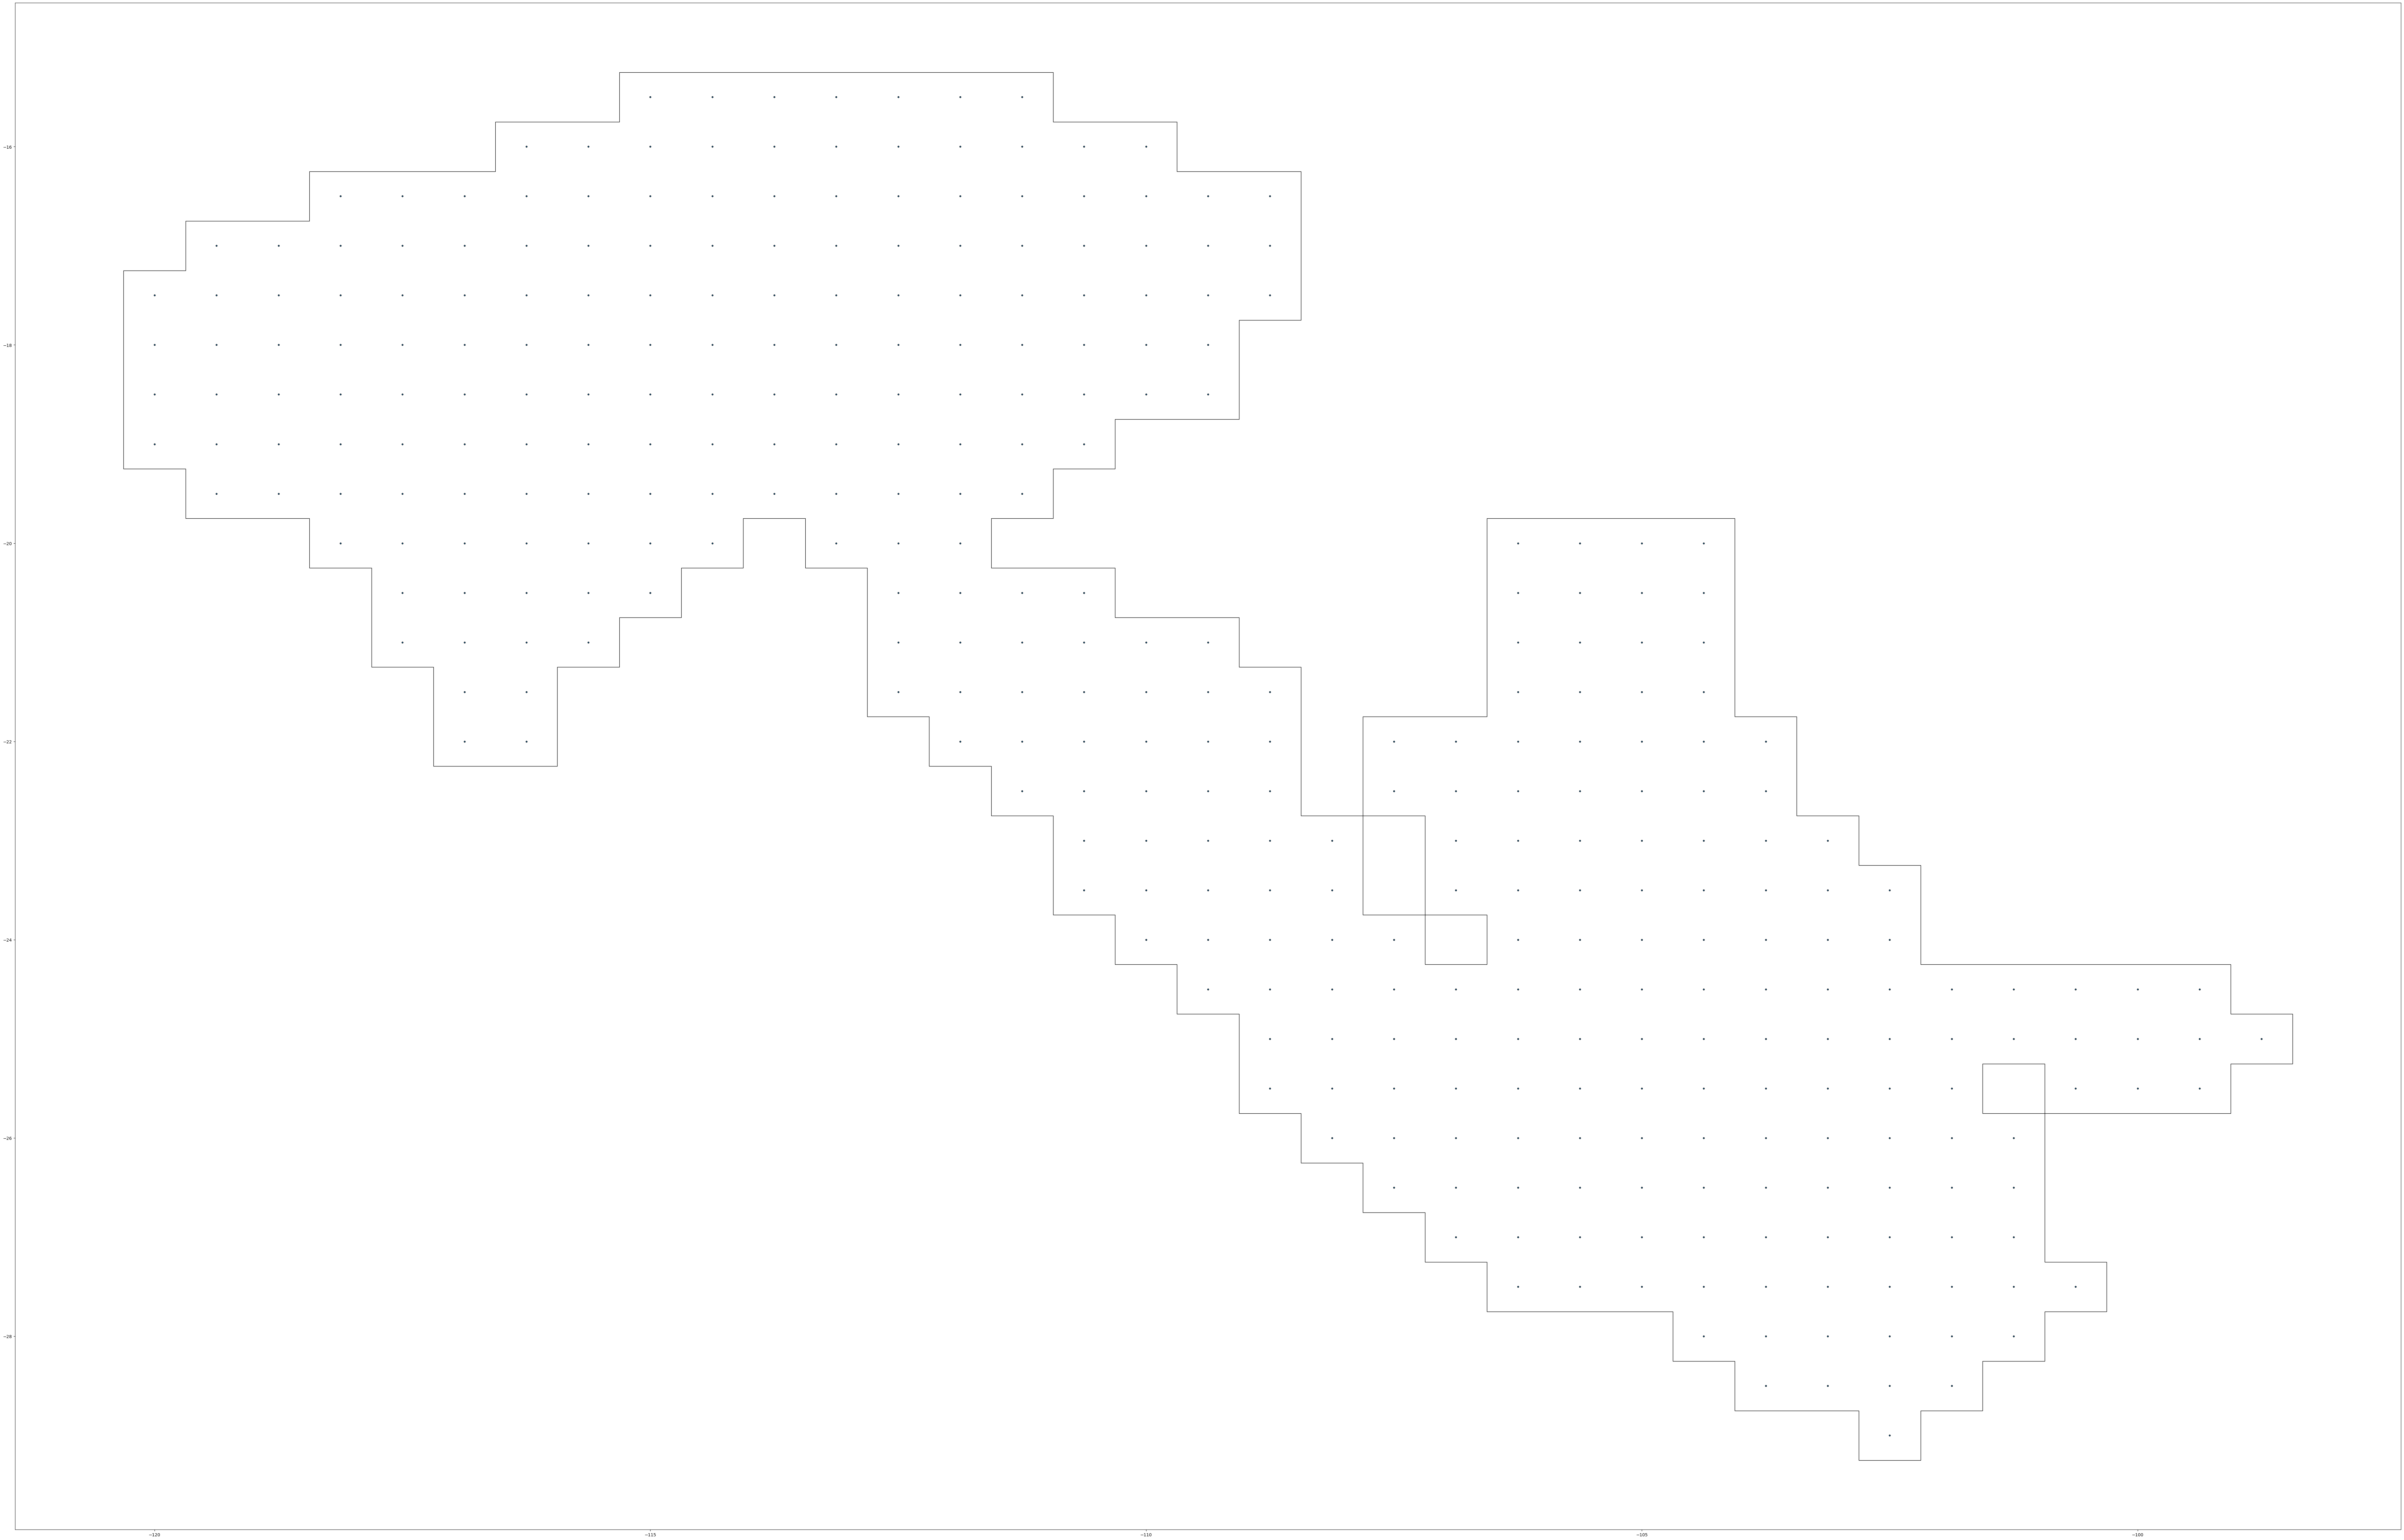

In [113]:
# 881 / 7
# victim of coliniar bug; worked on second application of noise
AR = {'_id': '2001.04.021.03.0_7', 'raster': [(-102.5, -29.0, [254.01560974121094]), (-103.75, -28.5, [251.8162078857422]), (-103.125, -28.5, [271.0400695800781]), (-102.5, -28.5, [280.9889221191406]), (-101.875, -28.5, [264.3194885253906]), (-104.375, -28.0, [262.122802734375]), (-103.75, -28.0, [284.2884826660156]), (-103.125, -28.0, [301.60162353515625]), (-102.5, -28.0, [292.93701171875]), (-101.875, -28.0, [270.8459777832031]), (-101.25, -28.0, [252.77960205078125]), (-106.25, -27.5, [251.0220489501953]), (-105.625, -27.5, [259.1477966308594]), (-105.0, -27.5, [257.279296875]), (-104.375, -27.5, [279.9219665527344]), (-103.75, -27.5, [309.44732666015625]), (-103.125, -27.5, [316.5418701171875]), (-102.5, -27.5, [299.44842529296875]), (-101.875, -27.5, [276.5124206542969]), (-101.25, -27.5, [260.9848327636719]), (-100.625, -27.5, [250.81150817871094]), (-106.875, -27.0, [264.2500305175781]), (-106.25, -27.0, [284.05224609375]), (-105.625, -27.0, [273.07403564453125]), (-105.0, -27.0, [272.5620422363281]), (-104.375, -27.0, [296.04217529296875]), (-103.75, -27.0, [319.76324462890625]), (-103.125, -27.0, [331.05450439453125]), (-102.5, -27.0, [316.8699951171875]), (-101.875, -27.0, [288.32073974609375]), (-101.25, -27.0, [265.7593994140625]), (-107.5, -26.5, [270.9161376953125]), (-106.875, -26.5, [295.5780334472656]), (-106.25, -26.5, [299.7791442871094]), (-105.625, -26.5, [289.8427429199219]), (-105.0, -26.5, [296.1157531738281]), (-104.375, -26.5, [312.2425537109375]), (-103.75, -26.5, [329.031005859375]), (-103.125, -26.5, [341.07525634765625]), (-102.5, -26.5, [328.51910400390625]), (-101.875, -26.5, [295.7197265625]), (-101.25, -26.5, [259.6539306640625]), (-108.125, -26.0, [270.3162536621094]), (-107.5, -26.0, [297.05633544921875]), (-106.875, -26.0, [304.2437744140625]), (-106.25, -26.0, [305.5406188964844]), (-105.625, -26.0, [308.7717590332031]), (-105.0, -26.0, [316.1485290527344]), (-104.375, -26.0, [321.78973388671875]), (-103.75, -26.0, [335.2775573730469]), (-103.125, -26.0, [348.2726135253906]), (-102.5, -26.0, [328.61553955078125]), (-101.875, -26.0, [286.058349609375]), (-101.25, -26.0, [253.79232788085938]), (-108.75, -25.5, [255.9466552734375]), (-108.125, -25.5, [289.5469665527344]), (-107.5, -25.5, [307.1000061035156]), (-106.875, -25.5, [306.90728759765625]), (-106.25, -25.5, [305.94757080078125]), (-105.625, -25.5, [317.084716796875]), (-105.0, -25.5, [329.389892578125]), (-104.375, -25.5, [327.6639404296875]), (-103.75, -25.5, [330.11590576171875]), (-103.125, -25.5, [338.5526123046875]), (-102.5, -25.5, [324.1119079589844]), (-101.875, -25.5, [273.1807556152344]), (-100.625, -25.5, [255.65382385253906]), (-100.0, -25.5, [258.41790771484375]), (-99.375, -25.5, [251.2969207763672]), (-108.75, -25.0, [275.4986267089844]), (-108.125, -25.0, [296.0810852050781]), (-107.5, -25.0, [298.4250793457031]), (-106.875, -25.0, [291.26348876953125]), (-106.25, -25.0, [293.75274658203125]), (-105.625, -25.0, [316.5137634277344]), (-105.0, -25.0, [333.9154052734375]), (-104.375, -25.0, [328.94757080078125]), (-103.75, -25.0, [318.43389892578125]), (-103.125, -25.0, [319.8446044921875]), (-102.5, -25.0, [306.1368103027344]), (-101.875, -25.0, [261.8280944824219]), (-101.25, -25.0, [250.7314453125]), (-100.625, -25.0, [262.9899597167969]), (-100.0, -25.0, [266.9467468261719]), (-99.375, -25.0, [259.7707824707031]), (-98.75, -25.0, [251.31842041015625]), (-109.375, -24.5, [263.3267822265625]), (-108.75, -24.5, [281.55615234375]), (-108.125, -24.5, [286.53076171875]), (-107.5, -24.5, [273.94818115234375]), (-106.875, -24.5, [262.1630554199219]), (-106.25, -24.5, [274.9361877441406]), (-105.625, -24.5, [309.3619079589844]), (-105.0, -24.5, [330.7043762207031]), (-104.375, -24.5, [328.5369567871094]), (-103.75, -24.5, [308.3145751953125]), (-103.125, -24.5, [301.58935546875]), (-102.5, -24.5, [285.7951965332031]), (-101.875, -24.5, [253.04843139648438]), (-101.25, -24.5, [251.84909057617188]), (-100.625, -24.5, [261.3361511230469]), (-100.0, -24.5, [261.61688232421875]), (-99.375, -24.5, [255.85702514648438]), (-110.0, -24.0, [256.6902160644531]), (-109.375, -24.0, [269.85601806640625]), (-108.75, -24.0, [277.7674255371094]), (-108.125, -24.0, [270.2165222167969]), (-107.5, -24.0, [250.41114807128906]), (-106.25, -24.0, [269.8466491699219]), (-105.625, -24.0, [299.9039306640625]), (-105.0, -24.0, [318.64434814453125]), (-104.375, -24.0, [320.236572265625]), (-103.75, -24.0, [304.2318420410156]), (-103.125, -24.0, [288.99822998046875]), (-102.5, -24.0, [266.1598205566406]), (-110.625, -23.5, [250.13479614257812]), (-110.0, -23.5, [266.6950988769531]), (-109.375, -23.5, [280.3424987792969]), (-108.75, -23.5, [280.56854248046875]), (-108.125, -23.5, [260.56640625]), (-106.875, -23.5, [254.94903564453125]), (-106.25, -23.5, [277.39947509765625]), (-105.625, -23.5, [293.7164611816406]), (-105.0, -23.5, [303.02587890625]), (-104.375, -23.5, [301.6395568847656]), (-103.75, -23.5, [287.7636413574219]), (-103.125, -23.5, [273.789794921875]), (-102.5, -23.5, [252.2521209716797]), (-110.625, -23.0, [263.75177001953125]), (-110.0, -23.0, [285.823974609375]), (-109.375, -23.0, [295.5138854980469]), (-108.75, -23.0, [281.43658447265625]), (-108.125, -23.0, [252.24249267578125]), (-106.875, -23.0, [270.917236328125]), (-106.25, -23.0, [280.7795715332031]), (-105.625, -23.0, [286.03045654296875]), (-105.0, -23.0, [289.5860290527344]), (-104.375, -23.0, [287.36328125]), (-103.75, -23.0, [274.4952087402344]), (-103.125, -23.0, [261.1152038574219]), (-111.25, -22.5, [264.79510498046875]), (-110.625, -22.5, [286.9935607910156]), (-110.0, -22.5, [302.6626892089844]), (-109.375, -22.5, [299.47796630859375]), (-108.75, -22.5, [266.9825744628906]), (-107.5, -22.5, [257.5632629394531]), (-106.875, -22.5, [267.5136413574219]), (-106.25, -22.5, [273.03741455078125]), (-105.625, -22.5, [277.5915222167969]), (-105.0, -22.5, [278.2970275878906]), (-104.375, -22.5, [276.2804870605469]), (-103.75, -22.5, [264.89898681640625]), (-116.875, -22.0, [259.0707702636719]), (-116.25, -22.0, [253.7566680908203]), (-111.875, -22.0, [261.0096740722656]), (-111.25, -22.0, [287.2906799316406]), (-110.625, -22.0, [306.1382141113281]), (-110.0, -22.0, [308.73162841796875]), (-109.375, -22.0, [287.4082336425781]), (-108.75, -22.0, [255.3311004638672]), (-107.5, -22.0, [252.0452423095703]), (-106.875, -22.0, [251.892822265625]), (-106.25, -22.0, [260.6879577636719]), (-105.625, -22.0, [270.730712890625]), (-105.0, -22.0, [273.0787658691406]), (-104.375, -22.0, [269.8363952636719]), (-103.75, -22.0, [252.5314178466797]), (-116.875, -21.5, [264.4266662597656]), (-116.25, -21.5, [265.7424621582031]), (-112.5, -21.5, [255.4782257080078]), (-111.875, -21.5, [265.423828125]), (-111.25, -21.5, [286.075927734375]), (-110.625, -21.5, [305.9801330566406]), (-110.0, -21.5, [301.4411926269531]), (-109.375, -21.5, [274.8929443359375]), (-108.75, -21.5, [250.77297973632812]), (-106.25, -21.5, [255.22406005859375]), (-105.625, -21.5, [266.5136413574219]), (-105.0, -21.5, [271.638427734375]), (-104.375, -21.5, [269.8399658203125]), (-117.5, -21.0, [252.53428649902344]), (-116.875, -21.0, [266.2727966308594]), (-116.25, -21.0, [274.418212890625]), (-115.625, -21.0, [265.52313232421875]), (-112.5, -21.0, [253.5565948486328]), (-111.875, -21.0, [264.6039733886719]), (-111.25, -21.0, [281.48291015625]), (-110.625, -21.0, [292.8481750488281]), (-110.0, -21.0, [284.0433349609375]), (-109.375, -21.0, [260.51715087890625]), (-106.25, -21.0, [256.8040771484375]), (-105.625, -21.0, [266.1607666015625]), (-105.0, -21.0, [272.7478332519531]), (-104.375, -21.0, [271.45306396484375]), (-117.5, -20.5, [257.323486328125]), (-116.875, -20.5, [267.8128662109375]), (-116.25, -20.5, [275.9776306152344]), (-115.625, -20.5, [278.1905212402344]), (-115.0, -20.5, [257.9905090332031]), (-112.5, -20.5, [256.0780029296875]), (-111.875, -20.5, [259.33892822265625]), (-111.25, -20.5, [255.5620574951172]), (-110.625, -20.5, [254.92034912109375]), (-106.25, -20.5, [257.5081787109375]), (-105.625, -20.5, [265.28973388671875]), (-105.0, -20.5, [270.8805847167969]), (-104.375, -20.5, [268.2677001953125]), (-118.125, -20.0, [252.01718139648438]), (-117.5, -20.0, [258.4707336425781]), (-116.875, -20.0, [270.80218505859375]), (-116.25, -20.0, [277.8066711425781]), (-115.625, -20.0, [280.6153564453125]), (-115.0, -20.0, [268.67889404296875]), (-114.375, -20.0, [250.49327087402344]), (-113.125, -20.0, [254.03546142578125]), (-112.5, -20.0, [261.6160888671875]), (-111.875, -20.0, [258.37042236328125]), (-106.25, -20.0, [256.2808837890625]), (-105.625, -20.0, [261.29730224609375]), (-105.0, -20.0, [261.21826171875]), (-104.375, -20.0, [254.99237060546875]), (-119.375, -19.5, [253.78091430664062]), (-118.75, -19.5, [255.9285430908203]), (-118.125, -19.5, [256.1445617675781]), (-117.5, -19.5, [260.9363098144531]), (-116.875, -19.5, [272.10894775390625]), (-116.25, -19.5, [279.554443359375]), (-115.625, -19.5, [280.8447570800781]), (-115.0, -19.5, [278.2955017089844]), (-114.375, -19.5, [266.5013732910156]), (-113.75, -19.5, [259.71490478515625]), (-113.125, -19.5, [262.9978332519531]), (-112.5, -19.5, [267.38104248046875]), (-111.875, -19.5, [266.6202087402344]), (-111.25, -19.5, [258.1744079589844]), (-120.0, -19.0, [256.0986022949219]), (-119.375, -19.0, [261.70440673828125]), (-118.75, -19.0, [261.58233642578125]), (-118.125, -19.0, [259.9043273925781]), (-117.5, -19.0, [262.84307861328125]), (-116.875, -19.0, [269.8647155761719]), (-116.25, -19.0, [278.5834655761719]), (-115.625, -19.0, [281.4115905761719]), (-115.0, -19.0, [283.1082763671875]), (-114.375, -19.0, [281.49981689453125]), (-113.75, -19.0, [274.54217529296875]), (-113.125, -19.0, [269.5982971191406]), (-112.5, -19.0, [271.92913818359375]), (-111.875, -19.0, [275.31988525390625]), (-111.25, -19.0, [276.43896484375]), (-110.625, -19.0, [262.1253662109375]), (-120.0, -18.5, [259.4231872558594]), (-119.375, -18.5, [267.8401794433594]), (-118.75, -18.5, [266.1968688964844]), (-118.125, -18.5, [258.1781005859375]), (-117.5, -18.5, [257.3436279296875]), (-116.875, -18.5, [263.55767822265625]), (-116.25, -18.5, [274.3242492675781]), (-115.625, -18.5, [279.3215637207031]), (-115.0, -18.5, [281.269775390625]), (-114.375, -18.5, [283.2665710449219]), (-113.75, -18.5, [281.3341369628906]), (-113.125, -18.5, [276.7882080078125]), (-112.5, -18.5, [277.4546813964844]), (-111.875, -18.5, [279.70208740234375]), (-111.25, -18.5, [277.89434814453125]), (-110.625, -18.5, [266.3558654785156]), (-110.0, -18.5, [256.0066833496094]), (-109.375, -18.5, [251.05758666992188]), (-120.0, -18.0, [258.9247741699219]), (-119.375, -18.0, [270.943603515625]), (-118.75, -18.0, [270.18182373046875]), (-118.125, -18.0, [262.1399841308594]), (-117.5, -18.0, [256.9930725097656]), (-116.875, -18.0, [258.5058898925781]), (-116.25, -18.0, [264.819580078125]), (-115.625, -18.0, [272.53338623046875]), (-115.0, -18.0, [276.4112243652344]), (-114.375, -18.0, [277.7689514160156]), (-113.75, -18.0, [279.7258605957031]), (-113.125, -18.0, [279.7436828613281]), (-112.5, -18.0, [280.3716735839844]), (-111.875, -18.0, [287.2689208984375]), (-111.25, -18.0, [303.3230285644531]), (-110.625, -18.0, [304.92230224609375]), (-110.0, -18.0, [284.5162658691406]), (-109.375, -18.0, [263.3893737792969]), (-120.0, -17.5, [251.11734008789062]), (-119.375, -17.5, [267.4496765136719]), (-118.75, -17.5, [273.0059814453125]), (-118.125, -17.5, [269.7338562011719]), (-117.5, -17.5, [262.34686279296875]), (-116.875, -17.5, [259.7157897949219]), (-116.25, -17.5, [265.099365234375]), (-115.625, -17.5, [272.2694091796875]), (-115.0, -17.5, [276.494384765625]), (-114.375, -17.5, [279.23748779296875]), (-113.75, -17.5, [281.0081787109375]), (-113.125, -17.5, [283.6874084472656]), (-112.5, -17.5, [293.9798583984375]), (-111.875, -17.5, [317.91058349609375]), (-111.25, -17.5, [334.7864074707031]), (-110.625, -17.5, [328.233642578125]), (-110.0, -17.5, [309.5619201660156]), (-109.375, -17.5, [281.8673400878906]), (-108.75, -17.5, [257.04498291015625]), (-119.375, -17.0, [252.94760131835938]), (-118.75, -17.0, [263.1710510253906]), (-118.125, -17.0, [265.31524658203125]), (-117.5, -17.0, [262.14990234375]), (-116.875, -17.0, [262.0818786621094]), (-116.25, -17.0, [268.82574462890625]), (-115.625, -17.0, [277.2705993652344]), (-115.0, -17.0, [283.3089904785156]), (-114.375, -17.0, [288.2344665527344]), (-113.75, -17.0, [292.535400390625]), (-113.125, -17.0, [302.12530517578125]), (-112.5, -17.0, [321.73016357421875]), (-111.875, -17.0, [332.5923156738281]), (-111.25, -17.0, [315.32080078125]), (-110.625, -17.0, [304.3302001953125]), (-110.0, -17.0, [306.8134460449219]), (-109.375, -17.0, [296.25225830078125]), (-108.75, -17.0, [269.69580078125]), (-118.125, -16.5, [256.62994384765625]), (-117.5, -16.5, [255.61648559570312]), (-116.875, -16.5, [255.45269775390625]), (-116.25, -16.5, [263.4184875488281]), (-115.625, -16.5, [273.6803894042969]), (-115.0, -16.5, [282.2691650390625]), (-114.375, -16.5, [290.540283203125]), (-113.75, -16.5, [303.282958984375]), (-113.125, -16.5, [318.9064025878906]), (-112.5, -16.5, [328.2231750488281]), (-111.875, -16.5, [310.3398742675781]), (-111.25, -16.5, [287.4383544921875]), (-110.625, -16.5, [286.2013854980469]), (-110.0, -16.5, [284.8550720214844]), (-109.375, -16.5, [275.45947265625]), (-108.75, -16.5, [262.7136535644531]), (-116.25, -16.0, [251.9776611328125]), (-115.625, -16.0, [259.7772216796875]), (-115.0, -16.0, [270.00616455078125]), (-114.375, -16.0, [281.0893249511719]), (-113.75, -16.0, [296.48809814453125]), (-113.125, -16.0, [307.82574462890625]), (-112.5, -16.0, [303.5238342285156]), (-111.875, -16.0, [283.3329772949219]), (-111.25, -16.0, [273.8984069824219]), (-110.625, -16.0, [270.275390625]), (-110.0, -16.0, [256.7815856933594]), (-115.0, -15.5, [254.6742401123047]), (-114.375, -15.5, [262.62603759765625]), (-113.75, -15.5, [272.2027587890625]), (-113.125, -15.5, [276.85028076171875]), (-112.5, -15.5, [270.7200622558594]), (-111.875, -15.5, [259.59033203125]), (-111.25, -15.5, [250.63894653320312])], 'flags': ['holes'], 'geolocation': {'type': 'MultiPolygon', 'coordinates': [[[[-102.8125, -29.25], [-102.1875, -29.25], [-102.1875, -28.75], [-101.5625, -28.75], [-101.5625, -28.25], [-100.9375, -28.25], [-100.9375, -27.75], [-100.3125, -27.75], [-100.3125, -27.25], [-100.9375, -27.25], [-100.9375, -25.75], [-99.0625, -25.75], [-99.0625, -25.25], [-98.4375, -25.25], [-98.4375, -24.75], [-99.0625, -24.75], [-99.0625, -24.25], [-102.1875, -24.25], [-102.1875, -23.25], [-102.8125, -23.25], [-102.8125, -22.75], [-103.4375, -22.75], [-103.4375, -21.75], [-104.0625, -21.75], [-104.0625, -19.75], [-106.5625, -19.75], [-106.5625, -21.75], [-107.8125, -21.75], [-107.8125, -22.75], [-108.4375, -22.75], [-108.4375, -21.25], [-109.0625, -21.25], [-109.0625, -20.75], [-110.3125, -20.75], [-110.3125, -20.25], [-111.5625, -20.25], [-111.5625, -19.75], [-110.9375, -19.75], [-110.9375, -19.25], [-110.3125, -19.25], [-110.3125, -18.75], [-109.0625, -18.75], [-109.0625, -17.75], [-108.4375, -17.75], [-108.4375, -16.25], [-109.6875, -16.25], [-109.6875, -15.75], [-110.9375, -15.75], [-110.9375, -15.25], [-115.3125, -15.25], [-115.3125, -15.75], [-116.5625, -15.75], [-116.5625, -16.25], [-118.4375, -16.25], [-118.4375, -16.75], [-119.6875, -16.75], [-119.6875, -17.25], [-120.3125, -17.25], [-120.3125, -19.25], [-119.6875, -19.25], [-119.6875, -19.75], [-118.4375, -19.75], [-118.4375, -20.25], [-117.8125, -20.25], [-117.8125, -21.25], [-117.1875, -21.25], [-117.1875, -22.25], [-115.9375, -22.25], [-115.9375, -21.25], [-115.3125, -21.25], [-115.3125, -20.75], [-114.6875, -20.75], [-114.6875, -20.25], [-114.0625, -20.25], [-114.0625, -19.75], [-113.4375, -19.75], [-113.4375, -20.25], [-112.8125, -20.25], [-112.8125, -21.75], [-112.1875, -21.75], [-112.1875, -22.25], [-111.5625, -22.25], [-111.5625, -22.75], [-110.9375, -22.75], [-110.9375, -23.75], [-110.3125, -23.75], [-110.3125, -24.25], [-109.6875, -24.25], [-109.6875, -24.75], [-109.0625, -24.75], [-109.0625, -25.75], [-108.4375, -25.75], [-108.4375, -26.25], [-107.8125, -26.25], [-107.8125, -26.75], [-107.1875, -26.75], [-107.1875, -27.25], [-106.5625, -27.25], [-106.5625, -27.75], [-104.6875, -27.75], [-104.6875, -28.25], [-104.0625, -28.25], [-104.0625, -28.75], [-102.8125, -28.75], [-102.8125, -29.25]], [[-101.5625, -25.75], [-100.9375, -25.75], [-100.9375, -25.25], [-101.5625, -25.25], [-101.5625, -25.75]], [[-107.1875, -24.25], [-106.5625, -24.25], [-106.5625, -23.75], [-107.1875, -23.75], [-107.1875, -24.25]], [[-107.8125, -23.75], [-107.1875, -23.75], [-107.1875, -22.75], [-107.8125, -22.75], [-107.8125, -23.75]]]]}}
plotAR(AR)

Valid Geometry


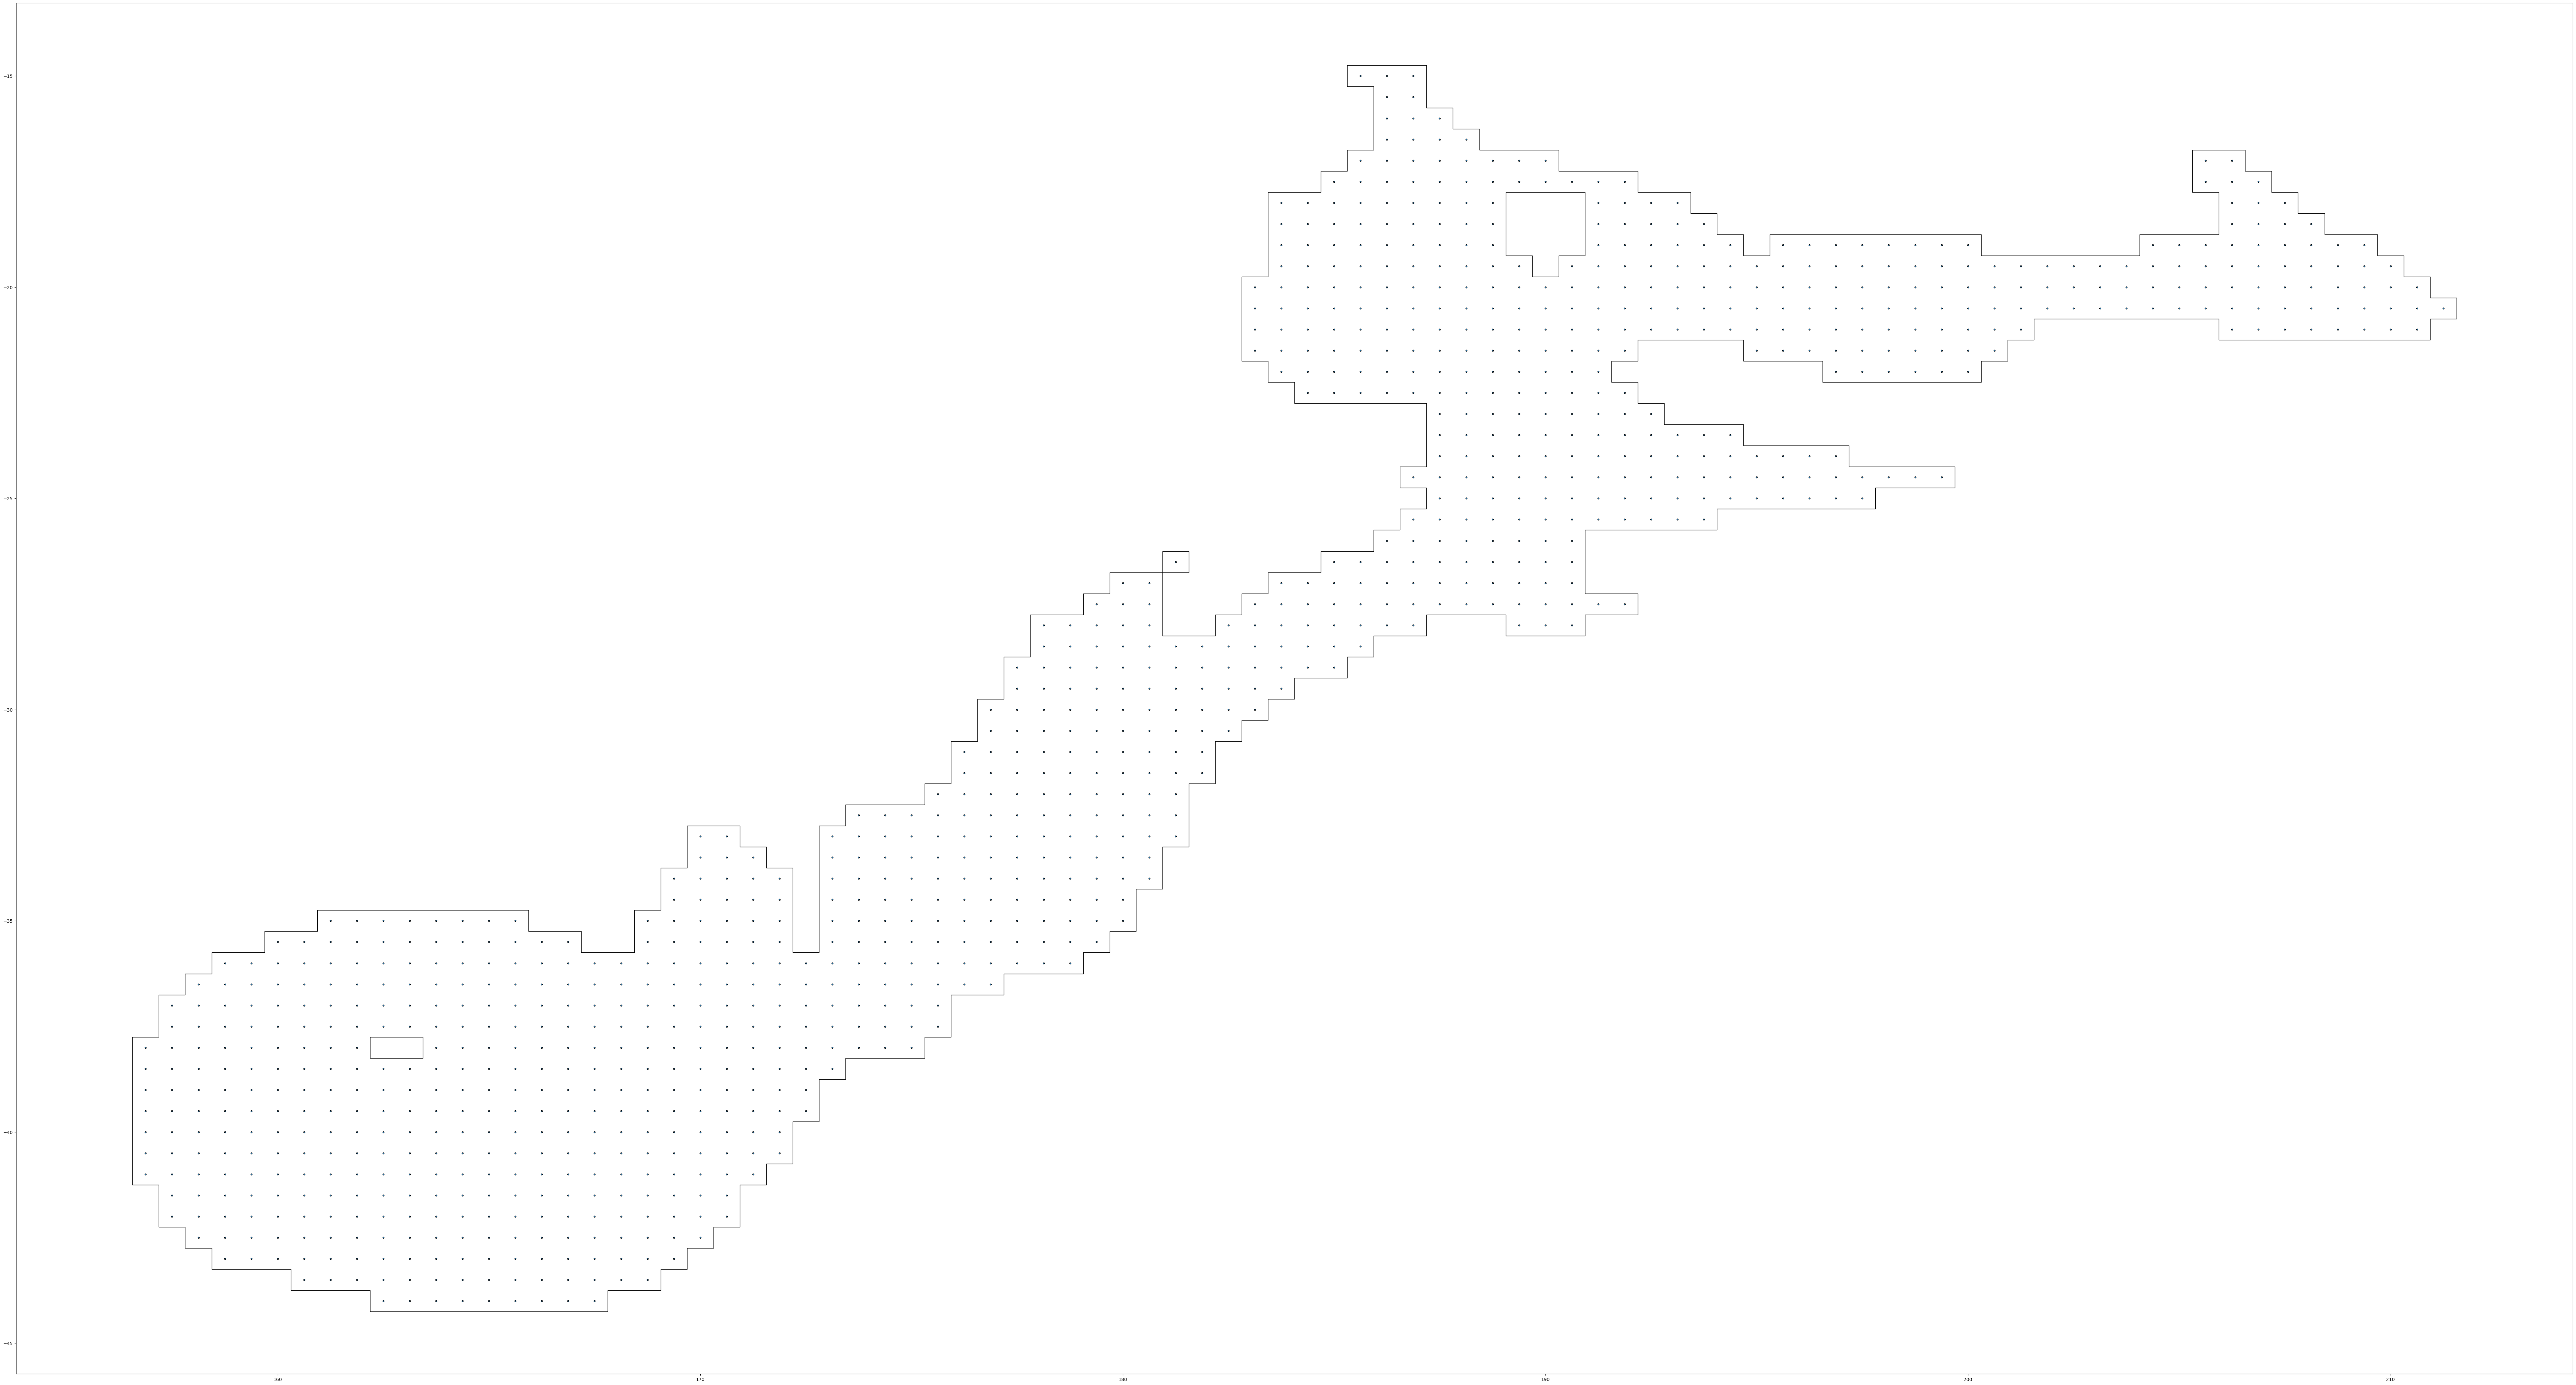

In [118]:
# 963 / 9
# victim of coliniar bug; worked on second application of noise
AR = {'_id': '2001.05.01.09.0_9', 'raster': [(162.5, -44.0, [255.2331085205078]), (163.125, -44.0, [277.01409912109375]), (163.75, -44.0, [297.1320495605469]), (164.375, -44.0, [309.58111572265625]), (165.0, -44.0, [315.7451477050781]), (165.625, -44.0, [316.025390625]), (166.25, -44.0, [307.41387939453125]), (166.875, -44.0, [291.8523254394531]), (167.5, -44.0, [269.1522521972656]), (160.625, -43.5, [261.3816223144531]), (161.25, -43.5, [292.944091796875]), (161.875, -43.5, [333.1900634765625]), (162.5, -43.5, [375.8479919433594]), (163.125, -43.5, [417.31683349609375]), (163.75, -43.5, [444.3162841796875]), (164.375, -43.5, [449.582275390625]), (165.0, -43.5, [436.5193786621094]), (165.625, -43.5, [413.623046875]), (166.25, -43.5, [386.1034851074219]), (166.875, -43.5, [354.9560852050781]), (167.5, -43.5, [320.7535095214844]), (168.125, -43.5, [293.86004638671875]), (168.75, -43.5, [260.6023864746094]), (158.75, -43.0, [259.2867736816406]), (159.375, -43.0, [282.03216552734375]), (160.0, -43.0, [296.9929504394531]), (160.625, -43.0, [338.42620849609375]), (161.25, -43.0, [394.27264404296875]), (161.875, -43.0, [450.6346435546875]), (162.5, -43.0, [503.6471252441406]), (163.125, -43.0, [541.0819702148438]), (163.75, -43.0, [565.9016723632812]), (164.375, -43.0, [576.9415893554688]), (165.0, -43.0, [562.4832763671875]), (165.625, -43.0, [534.0550537109375]), (166.25, -43.0, [505.8038635253906]), (166.875, -43.0, [467.3912658691406]), (167.5, -43.0, [410.9232177734375]), (168.125, -43.0, [356.2281494140625]), (168.75, -43.0, [311.9690246582031]), (169.375, -43.0, [278.2328186035156]), (158.125, -42.5, [256.5731201171875]), (158.75, -42.5, [290.1806335449219]), (159.375, -42.5, [317.7347106933594]), (160.0, -42.5, [358.042236328125]), (160.625, -42.5, [426.0959167480469]), (161.25, -42.5, [491.2282409667969]), (161.875, -42.5, [545.3081665039062]), (162.5, -42.5, [589.064453125]), (163.125, -42.5, [622.2315063476562]), (163.75, -42.5, [647.5061645507812]), (164.375, -42.5, [662.610595703125]), (165.0, -42.5, [666.2852783203125]), (165.625, -42.5, [663.2069091796875]), (166.25, -42.5, [653.7161865234375]), (166.875, -42.5, [624.8604736328125]), (167.5, -42.5, [553.1469116210938]), (168.125, -42.5, [463.51556396484375]), (168.75, -42.5, [387.7198181152344]), (169.375, -42.5, [329.08746337890625]), (170.0, -42.5, [296.473388671875]), (157.5, -42.0, [252.7203826904297]), (158.125, -42.0, [280.38201904296875]), (158.75, -42.0, [313.211181640625]), (159.375, -42.0, [360.9309387207031]), (160.0, -42.0, [434.7296142578125]), (160.625, -42.0, [513.3062133789062]), (161.25, -42.0, [570.9439697265625]), (161.875, -42.0, [618.8467407226562]), (162.5, -42.0, [648.0712280273438]), (163.125, -42.0, [647.2068481445312]), (163.75, -42.0, [645.1395874023438]), (164.375, -42.0, [654.5519409179688]), (165.0, -42.0, [671.5042114257812]), (165.625, -42.0, [695.3674926757812]), (166.25, -42.0, [716.9786987304688]), (166.875, -42.0, [715.7677612304688]), (167.5, -42.0, [671.4986572265625]), (168.125, -42.0, [583.05712890625]), (168.75, -42.0, [484.9568786621094]), (169.375, -42.0, [398.8603820800781]), (170.0, -42.0, [339.8771057128906]), (170.625, -42.0, [289.3403015136719]), (157.5, -41.5, [272.17034912109375]), (158.125, -41.5, [301.8872985839844]), (158.75, -41.5, [340.1271667480469]), (159.375, -41.5, [416.1335754394531]), (160.0, -41.5, [507.2330627441406]), (160.625, -41.5, [576.7675170898438]), (161.25, -41.5, [617.71337890625]), (161.875, -41.5, [610.3988037109375]), (162.5, -41.5, [586.8943481445312]), (163.125, -41.5, [584.06689453125]), (163.75, -41.5, [588.5311279296875]), (164.375, -41.5, [595.6069946289062]), (165.0, -41.5, [607.8711547851562]), (165.625, -41.5, [631.7838745117188]), (166.25, -41.5, [670.6607666015625]), (166.875, -41.5, [715.9556884765625]), (167.5, -41.5, [735.4201049804688]), (168.125, -41.5, [690.540283203125]), (168.75, -41.5, [596.0623168945312]), (169.375, -41.5, [487.3034973144531]), (170.0, -41.5, [403.9130554199219]), (170.625, -41.5, [344.8519287109375]), (156.875, -41.0, [263.35882568359375]), (157.5, -41.0, [287.2432861328125]), (158.125, -41.0, [321.2413635253906]), (158.75, -41.0, [374.6261901855469]), (159.375, -41.0, [468.8799743652344]), (160.0, -41.0, [552.9940185546875]), (160.625, -41.0, [592.5613403320312]), (161.25, -41.0, [568.2689819335938]), (161.875, -41.0, [545.0910034179688]), (162.5, -41.0, [559.4420166015625]), (163.125, -41.0, [585.4530029296875]), (163.75, -41.0, [606.6278076171875]), (164.375, -41.0, [620.6622924804688]), (165.0, -41.0, [627.7269287109375]), (165.625, -41.0, [629.8758544921875]), (166.25, -41.0, [640.251708984375]), (166.875, -41.0, [677.3638916015625]), (167.5, -41.0, [729.8902587890625]), (168.125, -41.0, [743.3015747070312]), (168.75, -41.0, [691.9613647460938]), (169.375, -41.0, [594.1319580078125]), (170.0, -41.0, [493.9868469238281]), (170.625, -41.0, [419.70074462890625]), (171.25, -41.0, [321.9188232421875]), (156.875, -40.5, [270.3239440917969]), (157.5, -40.5, [297.0253601074219]), (158.125, -40.5, [337.86285400390625]), (158.75, -40.5, [407.7779235839844]), (159.375, -40.5, [503.7109680175781]), (160.0, -40.5, [561.5997924804688]), (160.625, -40.5, [548.2315673828125]), (161.25, -40.5, [510.6748046875]), (161.875, -40.5, [529.1206665039062]), (162.5, -40.5, [560.2525634765625]), (163.125, -40.5, [584.9535522460938]), (163.75, -40.5, [605.7665405273438]), (164.375, -40.5, [628.4998168945312]), (165.0, -40.5, [645.281005859375]), (165.625, -40.5, [651.0086669921875]), (166.25, -40.5, [650.7113647460938]), (166.875, -40.5, [657.5586547851562]), (167.5, -40.5, [688.3010864257812]), (168.125, -40.5, [715.1558227539062]), (168.75, -40.5, [709.78076171875]), (169.375, -40.5, [655.5343627929688]), (170.0, -40.5, [569.0494384765625]), (170.625, -40.5, [499.4510192871094]), (171.25, -40.5, [420.2031555175781]), (171.875, -40.5, [284.74554443359375]), (156.875, -40.0, [271.8239440917969]), (157.5, -40.0, [304.9196472167969]), (158.125, -40.0, [350.43572998046875]), (158.75, -40.0, [430.17803955078125]), (159.375, -40.0, [512.829345703125]), (160.0, -40.0, [537.2385864257812]), (160.625, -40.0, [493.9326477050781]), (161.25, -40.0, [480.9745788574219]), (161.875, -40.0, [464.84539794921875]), (162.5, -40.0, [477.59368896484375]), (163.125, -40.0, [546.217529296875]), (163.75, -40.0, [565.1666259765625]), (164.375, -40.0, [581.8612060546875]), (165.0, -40.0, [599.041748046875]), (165.625, -40.0, [617.2339477539062]), (166.25, -40.0, [634.3815307617188]), (166.875, -40.0, [650.6061401367188]), (167.5, -40.0, [680.2501831054688]), (168.125, -40.0, [696.6207885742188]), (168.75, -40.0, [682.5516967773438]), (169.375, -40.0, [657.9619750976562]), (170.0, -40.0, [614.0305786132812]), (170.625, -40.0, [562.0371704101562]), (171.25, -40.0, [484.90936279296875]), (171.875, -40.0, [342.777099609375]), (156.875, -39.5, [273.0301208496094]), (157.5, -39.5, [311.09735107421875]), (158.125, -39.5, [357.8356628417969]), (158.75, -39.5, [434.7374267578125]), (159.375, -39.5, [496.3454895019531]), (160.0, -39.5, [498.52996826171875]), (160.625, -39.5, [411.8887634277344]), (161.25, -39.5, [413.1263427734375]), (161.875, -39.5, [416.3134765625]), (162.5, -39.5, [430.7691650390625]), (163.125, -39.5, [499.31884765625]), (163.75, -39.5, [547.5292358398438]), (164.375, -39.5, [587.8896484375]), (165.0, -39.5, [576.0028686523438]), (165.625, -39.5, [568.520263671875]), (166.25, -39.5, [571.3985595703125]), (166.875, -39.5, [591.5360717773438]), (167.5, -39.5, [639.5791015625]), (168.125, -39.5, [700.8511962890625]), (168.75, -39.5, [681.5885009765625]), (169.375, -39.5, [640.5446166992188]), (170.0, -39.5, [611.6431884765625]), (170.625, -39.5, [583.74609375]), (171.25, -39.5, [518.4428100585938]), (171.875, -39.5, [388.749755859375]), (172.5, -39.5, [275.7687683105469]), (156.875, -39.0, [274.07958984375]), (157.5, -39.0, [315.84368896484375]), (158.125, -39.0, [357.312255859375]), (158.75, -39.0, [425.0199890136719]), (159.375, -39.0, [481.53179931640625]), (160.0, -39.0, [474.08740234375]), (160.625, -39.0, [390.1114501953125]), (161.25, -39.0, [380.4772644042969]), (161.875, -39.0, [359.7106018066406]), (162.5, -39.0, [399.7179870605469]), (163.125, -39.0, [539.142578125]), (163.75, -39.0, [648.164306640625]), (164.375, -39.0, [646.75439453125]), (165.0, -39.0, [626.6995239257812]), (165.625, -39.0, [567.4400634765625]), (166.25, -39.0, [536.2616577148438]), (166.875, -39.0, [524.1181640625]), (167.5, -39.0, [558.577392578125]), (168.125, -39.0, [671.5927734375]), (168.75, -39.0, [697.7163696289062]), (169.375, -39.0, [647.1305541992188]), (170.0, -39.0, [596.1593017578125]), (170.625, -39.0, [564.607177734375]), (171.25, -39.0, [508.6452331542969]), (171.875, -39.0, [412.0505065917969]), (172.5, -39.0, [308.9603576660156]), (156.875, -38.5, [272.2978210449219]), (157.5, -38.5, [316.7600402832031]), (158.125, -38.5, [356.55242919921875]), (158.75, -38.5, [423.356201171875]), (159.375, -38.5, [479.7247314453125]), (160.0, -38.5, [418.2607421875]), (160.625, -38.5, [379.75732421875]), (161.25, -38.5, [353.48175048828125]), (161.875, -38.5, [295.3563537597656]), (162.5, -38.5, [276.1004333496094]), (163.125, -38.5, [407.64794921875]), (163.75, -38.5, [627.8603515625]), (164.375, -38.5, [720.7693481445312]), (165.0, -38.5, [699.0490112304688]), (165.625, -38.5, [587.2349853515625]), (166.25, -38.5, [524.5521850585938]), (166.875, -38.5, [484.6888732910156]), (167.5, -38.5, [470.4118957519531]), (168.125, -38.5, [584.1419677734375]), (168.75, -38.5, [686.5012817382812]), (169.375, -38.5, [660.654541015625]), (170.0, -38.5, [599.3735961914062]), (170.625, -38.5, [549.06689453125]), (171.25, -38.5, [482.2037658691406]), (171.875, -38.5, [396.1275939941406]), (172.5, -38.5, [320.337890625]), (173.125, -38.5, [257.1598815917969]), (156.875, -38.0, [262.60516357421875]), (157.5, -38.0, [308.5873107910156]), (158.125, -38.0, [359.97247314453125]), (158.75, -38.0, [425.0800476074219]), (159.375, -38.0, [470.02490234375]), (160.0, -38.0, [402.82720947265625]), (160.625, -38.0, [369.8509826660156]), (161.25, -38.0, [345.03265380859375]), (161.875, -38.0, [271.9432678222656]), (163.75, -38.0, [587.1857299804688]), (164.375, -38.0, [718.9780883789062]), (165.0, -38.0, [717.5737915039062]), (165.625, -38.0, [590.3749389648438]), (166.25, -38.0, [505.6605529785156]), (166.875, -38.0, [460.0673828125]), (167.5, -38.0, [412.5262756347656]), (168.125, -38.0, [479.14910888671875]), (168.75, -38.0, [632.8394775390625]), (169.375, -38.0, [655.9712524414062]), (170.0, -38.0, [598.5078125]), (170.625, -38.0, [535.9228515625]), (171.25, -38.0, [460.6895751953125]), (171.875, -38.0, [375.40924072265625]), (172.5, -38.0, [313.7425231933594]), (173.125, -38.0, [268.9026184082031]), (173.75, -38.0, [251.1643829345703]), (174.375, -38.0, [252.9749755859375]), (175.0, -38.0, [254.6123046875]), (157.5, -37.5, [289.441162109375]), (158.125, -37.5, [349.9991760253906]), (158.75, -37.5, [424.5305480957031]), (159.375, -37.5, [448.7981262207031]), (160.0, -37.5, [430.761962890625]), (160.625, -37.5, [350.6255798339844]), (161.25, -37.5, [348.2230224609375]), (161.875, -37.5, [360.77239990234375]), (162.5, -37.5, [339.00469970703125]), (163.125, -37.5, [441.83148193359375]), (163.75, -37.5, [646.4259643554688]), (164.375, -37.5, [695.9956665039062]), (165.0, -37.5, [675.1473999023438]), (165.625, -37.5, [556.269775390625]), (166.25, -37.5, [468.4613342285156]), (166.875, -37.5, [427.9753723144531]), (167.5, -37.5, [378.1964111328125]), (168.125, -37.5, [397.75799560546875]), (168.75, -37.5, [554.718994140625]), (169.375, -37.5, [630.7019653320312]), (170.0, -37.5, [588.4894409179688]), (170.625, -37.5, [513.6265869140625]), (171.25, -37.5, [433.49542236328125]), (171.875, -37.5, [354.2757263183594]), (172.5, -37.5, [299.7929382324219]), (173.125, -37.5, [275.849365234375]), (173.75, -37.5, [269.82769775390625]), (174.375, -37.5, [268.04876708984375]), (175.0, -37.5, [262.2234191894531]), (175.625, -37.5, [256.1366271972656]), (157.5, -37.0, [261.36395263671875]), (158.125, -37.0, [314.14276123046875]), (158.75, -37.0, [397.84588623046875]), (159.375, -37.0, [449.16070556640625]), (160.0, -37.0, [445.7007751464844]), (160.625, -37.0, [404.278076171875]), (161.25, -37.0, [354.30462646484375]), (161.875, -37.0, [404.692138671875]), (162.5, -37.0, [500.1363525390625]), (163.125, -37.0, [610.2631225585938]), (163.75, -37.0, [670.7451171875]), (164.375, -37.0, [689.932373046875]), (165.0, -37.0, [597.7373046875]), (165.625, -37.0, [491.1387634277344]), (166.25, -37.0, [418.0643310546875]), (166.875, -37.0, [386.8421325683594]), (167.5, -37.0, [345.3469543457031]), (168.125, -37.0, [342.3245849609375]), (168.75, -37.0, [477.5740661621094]), (169.375, -37.0, [590.4317016601562]), (170.0, -37.0, [571.8666381835938]), (170.625, -37.0, [495.4291687011719]), (171.25, -37.0, [405.132568359375]), (171.875, -37.0, [328.8299560546875]), (172.5, -37.0, [284.8010559082031]), (173.125, -37.0, [277.4154052734375]), (173.75, -37.0, [283.6671142578125]), (174.375, -37.0, [279.849365234375]), (175.0, -37.0, [268.7282409667969]), (175.625, -37.0, [258.1895751953125]), (158.125, -36.5, [265.37774658203125]), (158.75, -36.5, [330.2674865722656]), (159.375, -36.5, [401.3750305175781]), (160.0, -36.5, [458.83935546875]), (160.625, -36.5, [476.6576232910156]), (161.25, -36.5, [480.3650817871094]), (161.875, -36.5, [472.9219055175781]), (162.5, -36.5, [540.2294921875]), (163.125, -36.5, [600.298095703125]), (163.75, -36.5, [639.5414428710938]), (164.375, -36.5, [576.5554809570312]), (165.0, -36.5, [494.8872985839844]), (165.625, -36.5, [416.6280212402344]), (166.25, -36.5, [365.2168273925781]), (166.875, -36.5, [341.4607238769531]), (167.5, -36.5, [309.04608154296875]), (168.125, -36.5, [299.7527770996094]), (168.75, -36.5, [412.9029541015625]), (169.375, -36.5, [542.2413330078125]), (170.0, -36.5, [542.3021240234375]), (170.625, -36.5, [470.4290466308594]), (171.25, -36.5, [378.3353271484375]), (171.875, -36.5, [302.9830322265625]), (172.5, -36.5, [274.6509704589844]), (173.125, -36.5, [271.03717041015625]), (173.75, -36.5, [281.1783752441406]), (174.375, -36.5, [285.018310546875]), (175.0, -36.5, [277.10150146484375]), (175.625, -36.5, [264.9453125]), (176.25, -36.5, [257.7632751464844]), (176.875, -36.5, [250.34262084960938]), (158.75, -36.0, [260.73565673828125]), (159.375, -36.0, [316.6115417480469]), (160.0, -36.0, [374.0589904785156]), (160.625, -36.0, [429.0059814453125]), (161.25, -36.0, [466.8324279785156]), (161.875, -36.0, [493.92913818359375]), (162.5, -36.0, [518.0824584960938]), (163.125, -36.0, [525.6268920898438]), (163.75, -36.0, [496.480712890625]), (164.375, -36.0, [447.67779541015625]), (165.0, -36.0, [394.6224365234375]), (165.625, -36.0, [347.975341796875]), (166.25, -36.0, [317.2419128417969]), (166.875, -36.0, [297.0780029296875]), (167.5, -36.0, [269.4194641113281]), (168.125, -36.0, [263.9437255859375]), (168.75, -36.0, [356.5519104003906]), (169.375, -36.0, [489.89495849609375]), (170.0, -36.0, [506.37652587890625]), (170.625, -36.0, [439.1131286621094]), (171.25, -36.0, [357.3655700683594]), (171.875, -36.0, [280.2158203125]), (172.5, -36.0, [255.94273376464844]), (173.125, -36.0, [255.37913513183594]), (173.75, -36.0, [270.0331726074219]), (174.375, -36.0, [283.111083984375]), (175.0, -36.0, [279.79034423828125]), (175.625, -36.0, [275.36285400390625]), (176.25, -36.0, [279.2630310058594]), (176.875, -36.0, [279.051513671875]), (177.5, -36.0, [275.7201232910156]), (178.125, -36.0, [267.69134521484375]), (178.75, -36.0, [255.63470458984375]), (160.0, -35.5, [290.5067443847656]), (160.625, -35.5, [331.8571472167969]), (161.25, -35.5, [365.3126525878906]), (161.875, -35.5, [389.87554931640625]), (162.5, -35.5, [403.13330078125]), (163.125, -35.5, [398.37933349609375]), (163.75, -35.5, [372.0992736816406]), (164.375, -35.5, [341.2158508300781]), (165.0, -35.5, [311.620361328125]), (165.625, -35.5, [291.6793212890625]), (166.25, -35.5, [275.98388671875]), (166.875, -35.5, [253.19386291503906]), (168.75, -35.5, [307.94854736328125]), (169.375, -35.5, [435.0601501464844]), (170.0, -35.5, [470.5889892578125]), (170.625, -35.5, [404.855224609375]), (171.25, -35.5, [339.74774169921875]), (171.875, -35.5, [275.2963562011719]), (173.125, -35.5, [250.0642547607422]), (173.75, -35.5, [277.3899841308594]), (174.375, -35.5, [284.3822021484375]), (175.0, -35.5, [290.3681945800781]), (175.625, -35.5, [296.4134826660156]), (176.25, -35.5, [307.4287109375]), (176.875, -35.5, [321.6063232421875]), (177.5, -35.5, [324.9358825683594]), (178.125, -35.5, [310.7163391113281]), (178.75, -35.5, [287.9401550292969]), (179.375, -35.5, [265.79632568359375]), (-180.0, -35.0, [262.1564025878906]), (161.25, -35.0, [274.01629638671875]), (161.875, -35.0, [290.7229309082031]), (162.5, -35.0, [295.88275146484375]), (163.125, -35.0, [290.185791015625]), (163.75, -35.0, [279.74774169921875]), (164.375, -35.0, [268.9855651855469]), (165.0, -35.0, [261.9531555175781]), (165.625, -35.0, [254.49484252929688]), (168.75, -35.0, [262.8608093261719]), (169.375, -35.0, [379.191650390625]), (170.0, -35.0, [431.9453125]), (170.625, -35.0, [370.5289306640625]), (171.25, -35.0, [316.96392822265625]), (171.875, -35.0, [274.2808532714844]), (173.125, -35.0, [255.4737548828125]), (173.75, -35.0, [281.2463073730469]), (174.375, -35.0, [302.5594177246094]), (175.0, -35.0, [335.4373474121094]), (175.625, -35.0, [353.0856628417969]), (176.25, -35.0, [362.4848327636719]), (176.875, -35.0, [375.3980712890625]), (177.5, -35.0, [378.5809326171875]), (178.125, -35.0, [357.9506530761719]), (178.75, -35.0, [325.6863708496094]), (179.375, -35.0, [290.9841003417969]), (-180.0, -34.5, [278.7763366699219]), (169.375, -34.5, [324.4803466796875]), (170.0, -34.5, [390.8990173339844]), (170.625, -34.5, [341.1717529296875]), (171.25, -34.5, [293.22552490234375]), (171.875, -34.5, [261.63531494140625]), (173.125, -34.5, [260.7694091796875]), (173.75, -34.5, [289.1706237792969]), (174.375, -34.5, [329.5963134765625]), (175.0, -34.5, [373.0285339355469]), (175.625, -34.5, [398.0293884277344]), (176.25, -34.5, [396.66021728515625]), (176.875, -34.5, [394.7018127441406]), (177.5, -34.5, [394.2217102050781]), (178.125, -34.5, [374.14105224609375]), (178.75, -34.5, [353.75726318359375]), (179.375, -34.5, [316.0063171386719]), (-180.0, -34.0, [303.0672302246094]), (-179.375, -34.0, [257.785400390625]), (169.375, -34.0, [272.7078857421875]), (170.0, -34.0, [347.66204833984375]), (170.625, -34.0, [313.1097412109375]), (171.25, -34.0, [273.2610778808594]), (171.875, -34.0, [251.14828491210938]), (173.125, -34.0, [258.988525390625]), (173.75, -34.0, [289.0824890136719]), (174.375, -34.0, [332.145263671875]), (175.0, -34.0, [379.9397888183594]), (175.625, -34.0, [424.3373107910156]), (176.25, -34.0, [448.3846740722656]), (176.875, -34.0, [459.7971496582031]), (177.5, -34.0, [446.9681396484375]), (178.125, -34.0, [396.7232971191406]), (178.75, -34.0, [381.3602600097656]), (179.375, -34.0, [348.8245544433594]), (-180.0, -33.5, [339.7306213378906]), (-179.375, -33.5, [285.8720703125]), (170.0, -33.5, [305.7200012207031]), (170.625, -33.5, [285.7474060058594]), (171.25, -33.5, [254.25033569335938]), (173.125, -33.5, [266.218994140625]), (173.75, -33.5, [298.49249267578125]), (174.375, -33.5, [347.8372802734375]), (175.0, -33.5, [411.45233154296875]), (175.625, -33.5, [479.69134521484375]), (176.25, -33.5, [536.0671997070312]), (176.875, -33.5, [587.5303955078125]), (177.5, -33.5, [562.7607421875]), (178.125, -33.5, [472.2266845703125]), (178.75, -33.5, [434.2490234375]), (179.375, -33.5, [401.1175842285156]), (-180.0, -33.0, [386.5743713378906]), (-179.375, -33.0, [318.7029724121094]), (-178.75, -33.0, [255.46693420410156]), (170.0, -33.0, [264.28466796875]), (170.625, -33.0, [261.06756591796875]), (173.125, -33.0, [264.77362060546875]), (173.75, -33.0, [298.8887634277344]), (174.375, -33.0, [345.44110107421875]), (175.0, -33.0, [408.51361083984375]), (175.625, -33.0, [486.4989318847656]), (176.25, -33.0, [567.8533935546875]), (176.875, -33.0, [662.6076049804688]), (177.5, -33.0, [652.3035278320312]), (178.125, -33.0, [542.6341552734375]), (178.75, -33.0, [484.5813903808594]), (179.375, -33.0, [453.57916259765625]), (-180.0, -32.5, [430.58648681640625]), (-179.375, -32.5, [352.1545104980469]), (-178.75, -32.5, [283.832275390625]), (173.75, -32.5, [262.747802734375]), (174.375, -32.5, [288.1708679199219]), (175.0, -32.5, [318.1706237792969]), (175.625, -32.5, [397.72271728515625]), (176.25, -32.5, [532.0811767578125]), (176.875, -32.5, [648.2319946289062]), (177.5, -32.5, [653.24365234375]), (178.125, -32.5, [572.6983032226562]), (178.75, -32.5, [509.30596923828125]), (179.375, -32.5, [476.1242370605469]), (-180.0, -32.0, [453.2957458496094]), (-179.375, -32.0, [392.7322082519531]), (-178.75, -32.0, [313.6078186035156]), (175.625, -32.0, [293.0848693847656]), (176.25, -32.0, [463.0329284667969]), (176.875, -32.0, [580.53515625]), (177.5, -32.0, [583.1785278320312]), (178.125, -32.0, [546.9161376953125]), (178.75, -32.0, [506.75201416015625]), (179.375, -32.0, [471.1358947753906]), (-180.0, -31.5, [449.07843017578125]), (-179.375, -31.5, [425.1935729980469]), (-178.75, -31.5, [351.47344970703125]), (-178.125, -31.5, [273.5216369628906]), (176.25, -31.5, [359.3976135253906]), (176.875, -31.5, [480.2115783691406]), (177.5, -31.5, [498.6966552734375]), (178.125, -31.5, [480.2162780761719]), (178.75, -31.5, [466.3339538574219]), (179.375, -31.5, [444.8165588378906]), (-180.0, -31.0, [415.7318420410156]), (-179.375, -31.0, [427.055419921875]), (-178.75, -31.0, [383.86907958984375]), (-178.125, -31.0, [300.6913146972656]), (176.25, -31.0, [283.5028991699219]), (176.875, -31.0, [390.2910461425781]), (177.5, -31.0, [434.253662109375]), (178.125, -31.0, [423.1578369140625]), (178.75, -31.0, [418.9867858886719]), (179.375, -31.0, [405.1554870605469]), (-180.0, -30.5, [363.57574462890625]), (-179.375, -30.5, [397.9273681640625]), (-178.75, -30.5, [391.3630065917969]), (-178.125, -30.5, [329.7853698730469]), (-177.5, -30.5, [272.4203186035156]), (176.875, -30.5, [318.0071105957031]), (177.5, -30.5, [380.5425109863281]), (178.125, -30.5, [381.78265380859375]), (178.75, -30.5, [375.62945556640625]), (179.375, -30.5, [366.61669921875]), (-180.0, -30.0, [323.0702209472656]), (-179.375, -30.0, [350.13446044921875]), (-178.75, -30.0, [379.5812683105469]), (-178.125, -30.0, [349.5302734375]), (-177.5, -30.0, [299.3733825683594]), (-176.875, -30.0, [265.975830078125]), (176.875, -30.0, [258.9327392578125]), (177.5, -30.0, [334.37860107421875]), (178.125, -30.0, [355.51824951171875]), (178.75, -30.0, [343.8518371582031]), (179.375, -30.0, [340.1690368652344]), (-180.0, -29.5, [307.0941162109375]), (-179.375, -29.5, [302.6383972167969]), (-178.75, -29.5, [343.2392883300781]), (-178.125, -29.5, [352.7958984375]), (-177.5, -29.5, [321.25274658203125]), (-176.875, -29.5, [290.8376159667969]), (-176.25, -29.5, [267.5599365234375]), (177.5, -29.5, [291.9954833984375]), (178.125, -29.5, [334.55291748046875]), (178.75, -29.5, [321.7524719238281]), (179.375, -29.5, [315.9527893066406]), (-180.0, -29.0, [298.2178039550781]), (-179.375, -29.0, [283.7813720703125]), (-178.75, -29.0, [291.7794189453125]), (-178.125, -29.0, [325.5569152832031]), (-177.5, -29.0, [328.6893615722656]), (-176.875, -29.0, [307.8678283691406]), (-176.25, -29.0, [291.7652587890625]), (-175.625, -29.0, [272.7776794433594]), (-175.0, -29.0, [251.94268798828125]), (177.5, -29.0, [251.81178283691406]), (178.125, -29.0, [310.0303649902344]), (178.75, -29.0, [305.626953125]), (179.375, -29.0, [295.47784423828125]), (-180.0, -28.5, [284.33856201171875]), (-179.375, -28.5, [283.70343017578125]), (-178.75, -28.5, [256.1702880859375]), (-178.125, -28.5, [276.4502868652344]), (-177.5, -28.5, [309.3372497558594]), (-176.875, -28.5, [311.8520202636719]), (-176.25, -28.5, [302.2933654785156]), (-175.625, -28.5, [290.3228759765625]), (-175.0, -28.5, [279.5310974121094]), (-174.375, -28.5, [264.6746520996094]), (178.125, -28.5, [283.7119140625]), (178.75, -28.5, [293.0760498046875]), (179.375, -28.5, [283.2336120605469]), (-180.0, -28.0, [270.998291015625]), (-179.375, -28.0, [275.11346435546875]), (-177.5, -28.0, [260.7736511230469]), (-176.875, -28.0, [297.0325012207031]), (-176.25, -28.0, [296.347900390625]), (-175.625, -28.0, [291.4516296386719]), (-175.0, -28.0, [284.97650146484375]), (-174.375, -28.0, [277.7748107910156]), (-173.75, -28.0, [265.3839111328125]), (-173.125, -28.0, [254.74533081054688]), (-170.625, -28.0, [250.22259521484375]), (-170.0, -28.0, [256.5458679199219]), (-169.375, -28.0, [255.49859619140625]), (178.125, -28.0, [252.79641723632812]), (178.75, -28.0, [271.75732421875]), (179.375, -28.0, [274.64947509765625]), (-180.0, -27.5, [261.7467041015625]), (-179.375, -27.5, [260.8939208984375]), (-176.875, -27.5, [253.5540313720703]), (-176.25, -27.5, [283.6946105957031]), (-175.625, -27.5, [284.4957580566406]), (-175.0, -27.5, [281.63055419921875]), (-174.375, -27.5, [276.6091003417969]), (-173.75, -27.5, [269.4093933105469]), (-173.125, -27.5, [263.6624450683594]), (-172.5, -27.5, [260.2591552734375]), (-171.875, -27.5, [259.1103820800781]), (-171.25, -27.5, [259.576171875]), (-170.625, -27.5, [261.82080078125]), (-170.0, -27.5, [262.0223388671875]), (-169.375, -27.5, [261.560791015625]), (-168.75, -27.5, [258.1702575683594]), (-168.125, -27.5, [253.77357482910156]), (179.375, -27.5, [258.9735412597656]), (-180.0, -27.0, [250.97979736328125]), (-179.375, -27.0, [253.95884704589844]), (-176.25, -27.0, [253.4516143798828]), (-175.625, -27.0, [274.1074523925781]), (-175.0, -27.0, [274.2443542480469]), (-174.375, -27.0, [272.6851806640625]), (-173.75, -27.0, [268.6924133300781]), (-173.125, -27.0, [268.92547607421875]), (-172.5, -27.0, [271.6822814941406]), (-171.875, -27.0, [273.1749572753906]), (-171.25, -27.0, [275.8367614746094]), (-170.625, -27.0, [271.6119689941406]), (-170.0, -27.0, [263.8614196777344]), (-169.375, -27.0, [256.4980773925781]), (-178.75, -26.5, [253.7272186279297]), (-175.0, -26.5, [258.93731689453125]), (-174.375, -26.5, [260.8701171875]), (-173.75, -26.5, [263.46636962890625]), (-173.125, -26.5, [271.04022216796875]), (-172.5, -26.5, [279.7420654296875]), (-171.875, -26.5, [284.338623046875]), (-171.25, -26.5, [285.62213134765625]), (-170.625, -26.5, [278.6217346191406]), (-170.0, -26.5, [270.84210205078125]), (-169.375, -26.5, [258.69940185546875]), (-173.75, -26.0, [254.88140869140625]), (-173.125, -26.0, [265.1341247558594]), (-172.5, -26.0, [276.4322814941406]), (-171.875, -26.0, [285.13580322265625]), (-171.25, -26.0, [287.8653564453125]), (-170.625, -26.0, [280.6780090332031]), (-170.0, -26.0, [268.06842041015625]), (-169.375, -26.0, [255.46185302734375]), (-173.125, -25.5, [256.8472900390625]), (-172.5, -25.5, [270.28369140625]), (-171.875, -25.5, [279.0716857910156]), (-171.25, -25.5, [283.03802490234375]), (-170.625, -25.5, [275.5501708984375]), (-170.0, -25.5, [263.2402648925781]), (-169.375, -25.5, [255.51412963867188]), (-168.75, -25.5, [252.76773071289062]), (-168.125, -25.5, [254.9273223876953]), (-167.5, -25.5, [257.6850280761719]), (-166.875, -25.5, [255.79844665527344]), (-166.25, -25.5, [250.66514587402344]), (-172.5, -25.0, [264.328857421875]), (-171.875, -25.0, [275.6016845703125]), (-171.25, -25.0, [286.7530517578125]), (-170.625, -25.0, [286.4375915527344]), (-170.0, -25.0, [279.84893798828125]), (-169.375, -25.0, [275.7858581542969]), (-168.75, -25.0, [272.4753723144531]), (-168.125, -25.0, [270.432373046875]), (-167.5, -25.0, [272.1707763671875]), (-166.875, -25.0, [267.45440673828125]), (-166.25, -25.0, [263.2897644042969]), (-165.625, -25.0, [258.945556640625]), (-165.0, -25.0, [252.91195678710938]), (-164.375, -25.0, [251.7614288330078]), (-163.75, -25.0, [255.78334045410156]), (-163.125, -25.0, [254.71942138671875]), (-162.5, -25.0, [253.14547729492188]), (-173.125, -24.5, [250.5584259033203]), (-172.5, -24.5, [261.6879577636719]), (-171.875, -24.5, [275.125244140625]), (-171.25, -24.5, [291.9401550292969]), (-170.625, -24.5, [302.8663635253906]), (-170.0, -24.5, [302.5682373046875]), (-169.375, -24.5, [298.8110046386719]), (-168.75, -24.5, [291.4812927246094]), (-168.125, -24.5, [284.2649230957031]), (-167.5, -24.5, [280.53564453125]), (-166.875, -24.5, [273.3498840332031]), (-166.25, -24.5, [264.1009216308594]), (-165.625, -24.5, [262.0100402832031]), (-165.0, -24.5, [263.8673400878906]), (-164.375, -24.5, [273.07733154296875]), (-163.75, -24.5, [287.4498596191406]), (-163.125, -24.5, [281.9012145996094]), (-162.5, -24.5, [264.25213623046875]), (-161.875, -24.5, [253.73464965820312]), (-161.25, -24.5, [255.06922912597656]), (-160.625, -24.5, [253.7127685546875]), (-172.5, -24.0, [258.5995178222656]), (-171.875, -24.0, [270.1252746582031]), (-171.25, -24.0, [283.453125]), (-170.625, -24.0, [297.3353271484375]), (-170.0, -24.0, [305.04168701171875]), (-169.375, -24.0, [306.86590576171875]), (-168.75, -24.0, [301.21246337890625]), (-168.125, -24.0, [289.3182373046875]), (-167.5, -24.0, [278.4259338378906]), (-166.875, -24.0, [270.4965515136719]), (-166.25, -24.0, [270.2762756347656]), (-165.625, -24.0, [272.5255126953125]), (-165.0, -24.0, [265.136474609375]), (-164.375, -24.0, [259.7733154296875]), (-163.75, -24.0, [260.8240966796875]), (-163.125, -24.0, [255.02859497070312]), (-172.5, -23.5, [256.02044677734375]), (-171.875, -23.5, [264.2564697265625]), (-171.25, -23.5, [272.3038024902344]), (-170.625, -23.5, [280.5850830078125]), (-170.0, -23.5, [288.4811096191406]), (-169.375, -23.5, [295.3502197265625]), (-168.75, -23.5, [298.3102111816406]), (-168.125, -23.5, [290.4472351074219]), (-167.5, -23.5, [276.7907409667969]), (-166.875, -23.5, [265.3059387207031]), (-166.25, -23.5, [261.6725769042969]), (-165.625, -23.5, [254.58348083496094]), (-172.5, -23.0, [255.26824951171875]), (-171.875, -23.0, [263.7038269042969]), (-171.25, -23.0, [270.2159729003906]), (-170.625, -23.0, [274.93267822265625]), (-170.0, -23.0, [279.89691162109375]), (-169.375, -23.0, [285.180419921875]), (-168.75, -23.0, [286.1958923339844]), (-168.125, -23.0, [277.3534851074219]), (-167.5, -23.0, [261.040771484375]), (-175.625, -22.5, [253.24656677246094]), (-175.0, -22.5, [257.90252685546875]), (-174.375, -22.5, [258.6976318359375]), (-173.75, -22.5, [256.8376159667969]), (-173.125, -22.5, [257.1170349121094]), (-172.5, -22.5, [260.46136474609375]), (-171.875, -22.5, [267.2171325683594]), (-171.25, -22.5, [273.4472961425781]), (-170.625, -22.5, [277.51763916015625]), (-170.0, -22.5, [279.3201599121094]), (-169.375, -22.5, [277.0742492675781]), (-168.75, -22.5, [266.9296569824219]), (-168.125, -22.5, [251.22848510742188]), (-176.25, -22.0, [251.54495239257812]), (-175.625, -22.0, [257.86322021484375]), (-175.0, -22.0, [264.434326171875]), (-174.375, -22.0, [268.9706115722656]), (-173.75, -22.0, [268.91082763671875]), (-173.125, -22.0, [268.050048828125]), (-172.5, -22.0, [268.9737243652344]), (-171.875, -22.0, [273.6820983886719]), (-171.25, -22.0, [279.969482421875]), (-170.625, -22.0, [282.67181396484375]), (-170.0, -22.0, [280.9221496582031]), (-169.375, -22.0, [271.3867492675781]), (-168.75, -22.0, [253.64801025390625]), (-163.125, -22.0, [291.2645568847656]), (-162.5, -22.0, [368.46771240234375]), (-161.875, -22.0, [367.0552062988281]), (-161.25, -22.0, [358.9895935058594]), (-160.625, -22.0, [345.5931701660156]), (-160.0, -22.0, [298.8016052246094]), (-176.875, -21.5, [250.87399291992188]), (-176.25, -21.5, [259.5933532714844]), (-175.625, -21.5, [266.4602966308594]), (-175.0, -21.5, [273.16943359375]), (-174.375, -21.5, [279.2230224609375]), (-173.75, -21.5, [283.352294921875]), (-173.125, -21.5, [285.1684265136719]), (-172.5, -21.5, [285.49749755859375]), (-171.875, -21.5, [286.5074157714844]), (-171.25, -21.5, [290.7583923339844]), (-170.625, -21.5, [294.94317626953125]), (-170.0, -21.5, [298.4736022949219]), (-169.375, -21.5, [300.2853698730469]), (-168.75, -21.5, [293.1287841796875]), (-168.125, -21.5, [271.1053466796875]), (-165.0, -21.5, [252.55934143066406]), (-164.375, -21.5, [345.37103271484375]), (-163.75, -21.5, [450.9759521484375]), (-163.125, -21.5, [553.29638671875]), (-162.5, -21.5, [599.491943359375]), (-161.875, -21.5, [517.943115234375]), (-161.25, -21.5, [470.3331604003906]), (-160.625, -21.5, [433.3453674316406]), (-160.0, -21.5, [375.3822021484375]), (-159.375, -21.5, [303.1324462890625]), (-176.875, -21.0, [259.5139465332031]), (-176.25, -21.0, [268.556884765625]), (-175.625, -21.0, [275.11456298828125]), (-175.0, -21.0, [282.5346374511719]), (-174.375, -21.0, [289.46539306640625]), (-173.75, -21.0, [294.5634765625]), (-173.125, -21.0, [300.61663818359375]), (-172.5, -21.0, [303.85009765625]), (-171.875, -21.0, [304.312255859375]), (-171.25, -21.0, [304.2003173828125]), (-170.625, -21.0, [306.1151123046875]), (-170.0, -21.0, [313.4375305175781]), (-169.375, -21.0, [323.04119873046875]), (-168.75, -21.0, [320.1122131347656]), (-168.125, -21.0, [297.0586242675781]), (-167.5, -21.0, [269.11578369140625]), (-166.875, -21.0, [271.10882568359375]), (-166.25, -21.0, [307.77667236328125]), (-165.625, -21.0, [379.9206237792969]), (-165.0, -21.0, [451.2839660644531]), (-164.375, -21.0, [591.7501220703125]), (-163.75, -21.0, [694.4357299804688]), (-163.125, -21.0, [707.86083984375]), (-162.5, -21.0, [620.3012084960938]), (-161.875, -21.0, [517.0040283203125]), (-161.25, -21.0, [467.05242919921875]), (-160.625, -21.0, [425.4777526855469]), (-160.0, -21.0, [371.8547668457031]), (-159.375, -21.0, [310.8025817871094]), (-158.75, -21.0, [266.0040588378906]), (-153.75, -21.0, [268.8442687988281]), (-153.125, -21.0, [308.1771240234375]), (-152.5, -21.0, [347.8656311035156]), (-151.875, -21.0, [377.9700012207031]), (-151.25, -21.0, [370.4625549316406]), (-150.625, -21.0, [370.4498596191406]), (-150.0, -21.0, [321.83056640625]), (-149.375, -21.0, [286.80694580078125]), (-176.875, -20.5, [263.1991882324219]), (-176.25, -20.5, [273.6640319824219]), (-175.625, -20.5, [281.13427734375]), (-175.0, -20.5, [289.3885498046875]), (-174.375, -20.5, [298.34124755859375]), (-173.75, -20.5, [303.46002197265625]), (-173.125, -20.5, [307.83062744140625]), (-172.5, -20.5, [309.82977294921875]), (-171.875, -20.5, [307.8110656738281]), (-171.25, -20.5, [302.3658447265625]), (-170.625, -20.5, [299.82867431640625]), (-170.0, -20.5, [303.5491027832031]), (-169.375, -20.5, [308.53192138671875]), (-168.75, -20.5, [305.3962707519531]), (-168.125, -20.5, [305.62890625]), (-167.5, -20.5, [319.5550231933594]), (-166.875, -20.5, [365.9073791503906]), (-166.25, -20.5, [439.6080017089844]), (-165.625, -20.5, [520.2157592773438]), (-165.0, -20.5, [610.2128295898438]), (-164.375, -20.5, [773.1435546875]), (-163.75, -20.5, [767.7654418945312]), (-163.125, -20.5, [669.0361938476562]), (-162.5, -20.5, [572.2808227539062]), (-161.875, -20.5, [498.5996398925781]), (-161.25, -20.5, [454.7362365722656]), (-160.625, -20.5, [398.66473388671875]), (-160.0, -20.5, [360.9693298339844]), (-159.375, -20.5, [353.27008056640625]), (-158.75, -20.5, [360.5683288574219]), (-158.125, -20.5, [347.6383056640625]), (-157.5, -20.5, [329.29425048828125]), (-156.875, -20.5, [295.222412109375]), (-156.25, -20.5, [280.5018005371094]), (-155.625, -20.5, [288.76666259765625]), (-155.0, -20.5, [306.11602783203125]), (-154.375, -20.5, [303.1017150878906]), (-153.75, -20.5, [299.7217102050781]), (-153.125, -20.5, [308.4335021972656]), (-152.5, -20.5, [341.3230895996094]), (-151.875, -20.5, [365.07275390625]), (-151.25, -20.5, [378.03875732421875]), (-150.625, -20.5, [366.98480224609375]), (-150.0, -20.5, [332.8008117675781]), (-149.375, -20.5, [290.90606689453125]), (-148.75, -20.5, [250.1436767578125]), (-176.875, -20.0, [258.8323669433594]), (-176.25, -20.0, [273.5109558105469]), (-175.625, -20.0, [285.1011962890625]), (-175.0, -20.0, [296.2472839355469]), (-174.375, -20.0, [306.8725280761719]), (-173.75, -20.0, [312.09478759765625]), (-173.125, -20.0, [310.9653015136719]), (-172.5, -20.0, [302.34844970703125]), (-171.875, -20.0, [293.0367126464844]), (-171.25, -20.0, [285.1090087890625]), (-170.625, -20.0, [276.62078857421875]), (-170.0, -20.0, [273.7872314453125]), (-169.375, -20.0, [277.3101501464844]), (-168.75, -20.0, [287.0819091796875]), (-168.125, -20.0, [311.1728820800781]), (-167.5, -20.0, [355.5126037597656]), (-166.875, -20.0, [419.072509765625]), (-166.25, -20.0, [488.50042724609375]), (-165.625, -20.0, [593.5435180664062]), (-165.0, -20.0, [744.66943359375]), (-164.375, -20.0, [736.5062866210938]), (-163.75, -20.0, [716.6622924804688]), (-163.125, -20.0, [608.420166015625]), (-162.5, -20.0, [545.3983764648438]), (-161.875, -20.0, [521.85205078125]), (-161.25, -20.0, [488.98577880859375]), (-160.625, -20.0, [419.5842590332031]), (-160.0, -20.0, [369.6871032714844]), (-159.375, -20.0, [403.9037170410156]), (-158.75, -20.0, [425.43902587890625]), (-158.125, -20.0, [422.7350158691406]), (-157.5, -20.0, [403.1573486328125]), (-156.875, -20.0, [390.8704528808594]), (-156.25, -20.0, [371.9464111328125]), (-155.625, -20.0, [365.3931884765625]), (-155.0, -20.0, [354.7214050292969]), (-154.375, -20.0, [334.5342712402344]), (-153.75, -20.0, [321.89788818359375]), (-153.125, -20.0, [292.2524108886719]), (-152.5, -20.0, [299.1692810058594]), (-151.875, -20.0, [306.73052978515625]), (-151.25, -20.0, [338.92462158203125]), (-150.625, -20.0, [334.72930908203125]), (-150.0, -20.0, [302.87939453125]), (-149.375, -20.0, [261.8710632324219]), (-176.25, -19.5, [266.9445495605469]), (-175.625, -19.5, [283.5328369140625]), (-175.0, -19.5, [297.642578125]), (-174.375, -19.5, [307.12982177734375]), (-173.75, -19.5, [307.317138671875]), (-173.125, -19.5, [298.9365234375]), (-172.5, -19.5, [284.2724609375]), (-171.875, -19.5, [272.9112243652344]), (-171.25, -19.5, [264.0157470703125]), (-170.625, -19.5, [251.0396728515625]), (-169.375, -19.5, [252.93826293945312]), (-168.75, -19.5, [273.6115417480469]), (-168.125, -19.5, [315.4634094238281]), (-167.5, -19.5, [371.3122253417969]), (-166.875, -19.5, [431.1725158691406]), (-166.25, -19.5, [490.7740783691406]), (-165.625, -19.5, [579.8394165039062]), (-165.0, -19.5, [442.7493591308594]), (-164.375, -19.5, [449.2568054199219]), (-163.75, -19.5, [583.8701171875]), (-163.125, -19.5, [520.8983154296875]), (-162.5, -19.5, [472.6785583496094]), (-161.875, -19.5, [473.9812316894531]), (-161.25, -19.5, [462.9032897949219]), (-160.625, -19.5, [416.9588317871094]), (-160.0, -19.5, [347.4156799316406]), (-159.375, -19.5, [320.031494140625]), (-158.75, -19.5, [326.66033935546875]), (-158.125, -19.5, [347.0619201660156]), (-157.5, -19.5, [343.2309265136719]), (-156.875, -19.5, [369.51507568359375]), (-156.25, -19.5, [368.7567138671875]), (-155.625, -19.5, [366.22198486328125]), (-155.0, -19.5, [350.3966979980469]), (-154.375, -19.5, [340.0823974609375]), (-153.75, -19.5, [387.3609924316406]), (-153.125, -19.5, [389.6830139160156]), (-152.5, -19.5, [315.8092041015625]), (-151.875, -19.5, [270.78814697265625]), (-151.25, -19.5, [273.43560791015625]), (-150.625, -19.5, [288.1556396484375]), (-150.0, -19.5, [274.0364990234375]), (-176.25, -19.0, [256.5445861816406]), (-175.625, -19.0, [272.51934814453125]), (-175.0, -19.0, [287.61956787109375]), (-174.375, -19.0, [293.55828857421875]), (-173.75, -19.0, [288.634765625]), (-173.125, -19.0, [279.6824035644531]), (-172.5, -19.0, [273.93194580078125]), (-171.875, -19.0, [268.0876159667969]), (-171.25, -19.0, [257.95806884765625]), (-168.75, -19.0, [274.61395263671875]), (-168.125, -19.0, [317.91522216796875]), (-167.5, -19.0, [373.0915222167969]), (-166.875, -19.0, [425.0709228515625]), (-166.25, -19.0, [443.4758605957031]), (-165.625, -19.0, [340.68505859375]), (-164.375, -19.0, [290.57666015625]), (-163.75, -19.0, [346.9084167480469]), (-163.125, -19.0, [361.7421875]), (-162.5, -19.0, [340.1203308105469]), (-161.875, -19.0, [338.4248046875]), (-161.25, -19.0, [338.8043212890625]), (-160.625, -19.0, [326.7920227050781]), (-160.0, -19.0, [288.515869140625]), (-155.625, -19.0, [283.7740478515625]), (-155.0, -19.0, [290.7624816894531]), (-154.375, -19.0, [279.31756591796875]), (-153.75, -19.0, [313.43292236328125]), (-153.125, -19.0, [364.8067932128906]), (-152.5, -19.0, [318.0245056152344]), (-151.875, -19.0, [260.10858154296875]), (-151.25, -19.0, [252.15647888183594]), (-150.625, -19.0, [259.0093688964844]), (-176.25, -18.5, [251.8495330810547]), (-175.625, -18.5, [262.05841064453125]), (-175.0, -18.5, [274.1878356933594]), (-174.375, -18.5, [275.2201843261719]), (-173.75, -18.5, [272.1380615234375]), (-173.125, -18.5, [275.02520751953125]), (-172.5, -18.5, [281.2010803222656]), (-171.875, -18.5, [271.59906005859375]), (-171.25, -18.5, [257.2503967285156]), (-168.75, -18.5, [278.1054382324219]), (-168.125, -18.5, [322.6905517578125]), (-167.5, -18.5, [370.5919494628906]), (-166.875, -18.5, [381.70635986328125]), (-166.25, -18.5, [297.9249267578125]), (-153.75, -18.5, [262.2505187988281]), (-153.125, -18.5, [331.6163635253906]), (-152.5, -18.5, [316.85321044921875]), (-151.875, -18.5, [273.6898193359375]), (-176.25, -18.0, [250.38319396972656]), (-175.625, -18.0, [257.227294921875]), (-175.0, -18.0, [263.1083068847656]), (-174.375, -18.0, [262.916015625]), (-173.75, -18.0, [269.4149475097656]), (-173.125, -18.0, [284.07415771484375]), (-172.5, -18.0, [288.66021728515625]), (-171.875, -18.0, [278.50830078125]), (-171.25, -18.0, [266.6479797363281]), (-168.75, -18.0, [271.1761474609375]), (-168.125, -18.0, [307.0149230957031]), (-167.5, -18.0, [328.9951171875]), (-166.875, -18.0, [280.727783203125]), (-153.75, -18.0, [308.66888427734375]), (-153.125, -18.0, [319.4231262207031]), (-152.5, -18.0, [287.82379150390625]), (-175.0, -17.5, [250.66244506835938]), (-174.375, -17.5, [255.6878204345703]), (-173.75, -17.5, [270.65869140625]), (-173.125, -17.5, [289.6319274902344]), (-172.5, -17.5, [296.9527282714844]), (-171.875, -17.5, [299.8131408691406]), (-171.25, -17.5, [292.9936218261719]), (-170.625, -17.5, [268.29034423828125]), (-170.0, -17.5, [250.91244506835938]), (-169.375, -17.5, [253.74876403808594]), (-168.75, -17.5, [259.8282775878906]), (-168.125, -17.5, [265.6546325683594]), (-154.375, -17.5, [277.7566223144531]), (-153.75, -17.5, [304.35296630859375]), (-153.125, -17.5, [271.6754150390625]), (-174.375, -17.0, [251.08816528320312]), (-173.75, -17.0, [275.4266357421875]), (-173.125, -17.0, [300.85394287109375]), (-172.5, -17.0, [314.6545104980469]), (-171.875, -17.0, [309.4537353515625]), (-171.25, -17.0, [290.1300048828125]), (-170.625, -17.0, [274.366455078125]), (-170.0, -17.0, [257.8747863769531]), (-154.375, -17.0, [276.6433410644531]), (-153.75, -17.0, [254.0848388671875]), (-173.75, -16.5, [285.9920959472656]), (-173.125, -16.5, [317.56292724609375]), (-172.5, -16.5, [311.9229431152344]), (-171.875, -16.5, [272.3297119140625]), (-173.75, -16.0, [289.68182373046875]), (-173.125, -16.0, [303.4810791015625]), (-172.5, -16.0, [265.3633117675781]), (-173.75, -15.5, [282.4981689453125]), (-173.125, -15.5, [280.56573486328125]), (-174.375, -15.0, [251.16175842285156]), (-173.75, -15.0, [270.12506103515625]), (-173.125, -15.0, [254.4033966064453])], 'flags': ['dateline', 'holes'], 'geolocation': {'type': 'MultiPolygon', 'coordinates': [[[[162.1875, -44.25], [167.8125, -44.25], [167.8125, -43.75], [169.0625, -43.75], [169.0625, -43.25], [169.6875, -43.25], [169.6875, -42.75], [170.3125, -42.75], [170.3125, -42.25], [170.9375, -42.25], [170.9375, -41.25], [171.5625, -41.25], [171.5625, -40.75], [172.1875, -40.75], [172.1875, -39.75], [172.8125, -39.75], [172.8125, -38.75], [173.4375, -38.75], [173.4375, -38.25], [175.3125, -38.25], [175.3125, -37.75], [175.9375, -37.75], [175.9375, -36.75], [177.1875, -36.75], [177.1875, -36.25], [179.0625, -36.25], [179.0625, -35.75], [179.6875, -35.75], [179.6875, -35.25], [-179.6875, -35.25], [-179.6875, -34.25], [-179.0625, -34.25], [-179.0625, -33.25], [-178.4375, -33.25], [-178.4375, -31.75], [-177.8125, -31.75], [-177.8125, -30.75], [-177.1875, -30.75], [-177.1875, -30.25], [-176.5625, -30.25], [-176.5625, -29.75], [-175.9375, -29.75], [-175.9375, -29.25], [-174.6875, -29.25], [-174.6875, -28.75], [-174.0625, -28.75], [-174.0625, -28.25], [-172.8125, -28.25], [-172.8125, -27.75], [-170.9375, -27.75], [-170.9375, -28.25], [-169.0625, -28.25], [-169.0625, -27.75], [-167.8125, -27.75], [-167.8125, -27.25], [-169.0625, -27.25], [-169.0625, -25.75], [-165.9375, -25.75], [-165.9375, -25.25], [-162.1875, -25.25], [-162.1875, -24.75], [-160.3125, -24.75], [-160.3125, -24.25], [-162.8125, -24.25], [-162.8125, -23.75], [-165.3125, -23.75], [-165.3125, -23.25], [-167.1875, -23.25], [-167.1875, -22.75], [-167.8125, -22.75], [-167.8125, -22.25], [-168.4375, -22.25], [-168.4375, -21.75], [-167.8125, -21.75], [-167.8125, -21.25], [-165.3125, -21.25], [-165.3125, -21.75], [-163.4375, -21.75], [-163.4375, -22.25], [-159.6875, -22.25], [-159.6875, -21.75], [-159.0625, -21.75], [-159.0625, -21.25], [-158.4375, -21.25], [-158.4375, -20.75], [-154.0625, -20.75], [-154.0625, -21.25], [-149.0625, -21.25], [-149.0625, -20.75], [-148.4375, -20.75], [-148.4375, -20.25], [-149.0625, -20.25], [-149.0625, -19.75], [-149.6875, -19.75], [-149.6875, -19.25], [-150.3125, -19.25], [-150.3125, -18.75], [-151.5625, -18.75], [-151.5625, -18.25], [-152.1875, -18.25], [-152.1875, -17.75], [-152.8125, -17.75], [-152.8125, -17.25], [-153.4375, -17.25], [-153.4375, -16.75], [-154.6875, -16.75], [-154.6875, -17.75], [-154.0625, -17.75], [-154.0625, -18.75], [-155.9375, -18.75], [-155.9375, -19.25], [-159.6875, -19.25], [-159.6875, -18.75], [-164.6875, -18.75], [-164.6875, -19.25], [-165.3125, -19.25], [-165.3125, -18.75], [-165.9375, -18.75], [-165.9375, -18.25], [-166.5625, -18.25], [-166.5625, -17.75], [-167.8125, -17.75], [-167.8125, -17.25], [-169.6875, -17.25], [-169.6875, -16.75], [-171.5625, -16.75], [-171.5625, -16.25], [-172.1875, -16.25], [-172.1875, -15.75], [-172.8125, -15.75], [-172.8125, -14.75], [-174.6875, -14.75], [-174.6875, -15.25], [-174.0625, -15.25], [-174.0625, -16.75], [-174.6875, -16.75], [-174.6875, -17.25], [-175.3125, -17.25], [-175.3125, -17.75], [-176.5625, -17.75], [-176.5625, -19.75], [-177.1875, -19.75], [-177.1875, -21.75], [-176.5625, -21.75], [-176.5625, -22.25], [-175.9375, -22.25], [-175.9375, -22.75], [-172.8125, -22.75], [-172.8125, -24.25], [-173.4375, -24.25], [-173.4375, -24.75], [-172.8125, -24.75], [-172.8125, -25.25], [-173.4375, -25.25], [-173.4375, -25.75], [-174.0625, -25.75], [-174.0625, -26.25], [-175.3125, -26.25], [-175.3125, -26.75], [-176.5625, -26.75], [-176.5625, -27.25], [-177.1875, -27.25], [-177.1875, -27.75], [-177.8125, -27.75], [-177.8125, -28.25], [-179.0625, -28.25], [-179.0625, -26.75], [179.6875, -26.75], [179.6875, -27.25], [179.0625, -27.25], [179.0625, -27.75], [177.8125, -27.75], [177.8125, -28.75], [177.1875, -28.75], [177.1875, -29.75], [176.5625, -29.75], [176.5625, -30.75], [175.9375, -30.75], [175.9375, -31.75], [175.3125, -31.75], [175.3125, -32.25], [173.4375, -32.25], [173.4375, -32.75], [172.8125, -32.75], [172.8125, -35.75], [172.1875, -35.75], [172.1875, -33.75], [171.5625, -33.75], [171.5625, -33.25], [170.9375, -33.25], [170.9375, -32.75], [169.6875, -32.75], [169.6875, -33.75], [169.0625, -33.75], [169.0625, -34.75], [168.4375, -34.75], [168.4375, -35.75], [167.1875, -35.75], [167.1875, -35.25], [165.9375, -35.25], [165.9375, -34.75], [160.9375, -34.75], [160.9375, -35.25], [159.6875, -35.25], [159.6875, -35.75], [158.4375, -35.75], [158.4375, -36.25], [157.8125, -36.25], [157.8125, -36.75], [157.1875, -36.75], [157.1875, -37.75], [156.5625, -37.75], [156.5625, -41.25], [157.1875, -41.25], [157.1875, -42.25], [157.8125, -42.25], [157.8125, -42.75], [158.4375, -42.75], [158.4375, -43.25], [160.3125, -43.25], [160.3125, -43.75], [162.1875, -43.75], [162.1875, -44.25]], [[162.1875, -38.25], [163.4375, -38.25], [163.4375, -37.75], [162.1875, -37.75], [162.1875, -38.25]], [[-170.3125, -19.75], [-169.6875, -19.75], [-169.6875, -19.25], [-169.0625, -19.25], [-169.0625, -17.75], [-170.9375, -17.75], [-170.9375, -19.25], [-170.3125, -19.25], [-170.3125, -19.75]]], [[[-179.0625, -26.75], [-178.4375, -26.75], [-178.4375, -26.25], [-179.0625, -26.25], [-179.0625, -26.75]]]]}}
plotAR(remap(AR))

Valid Geometry


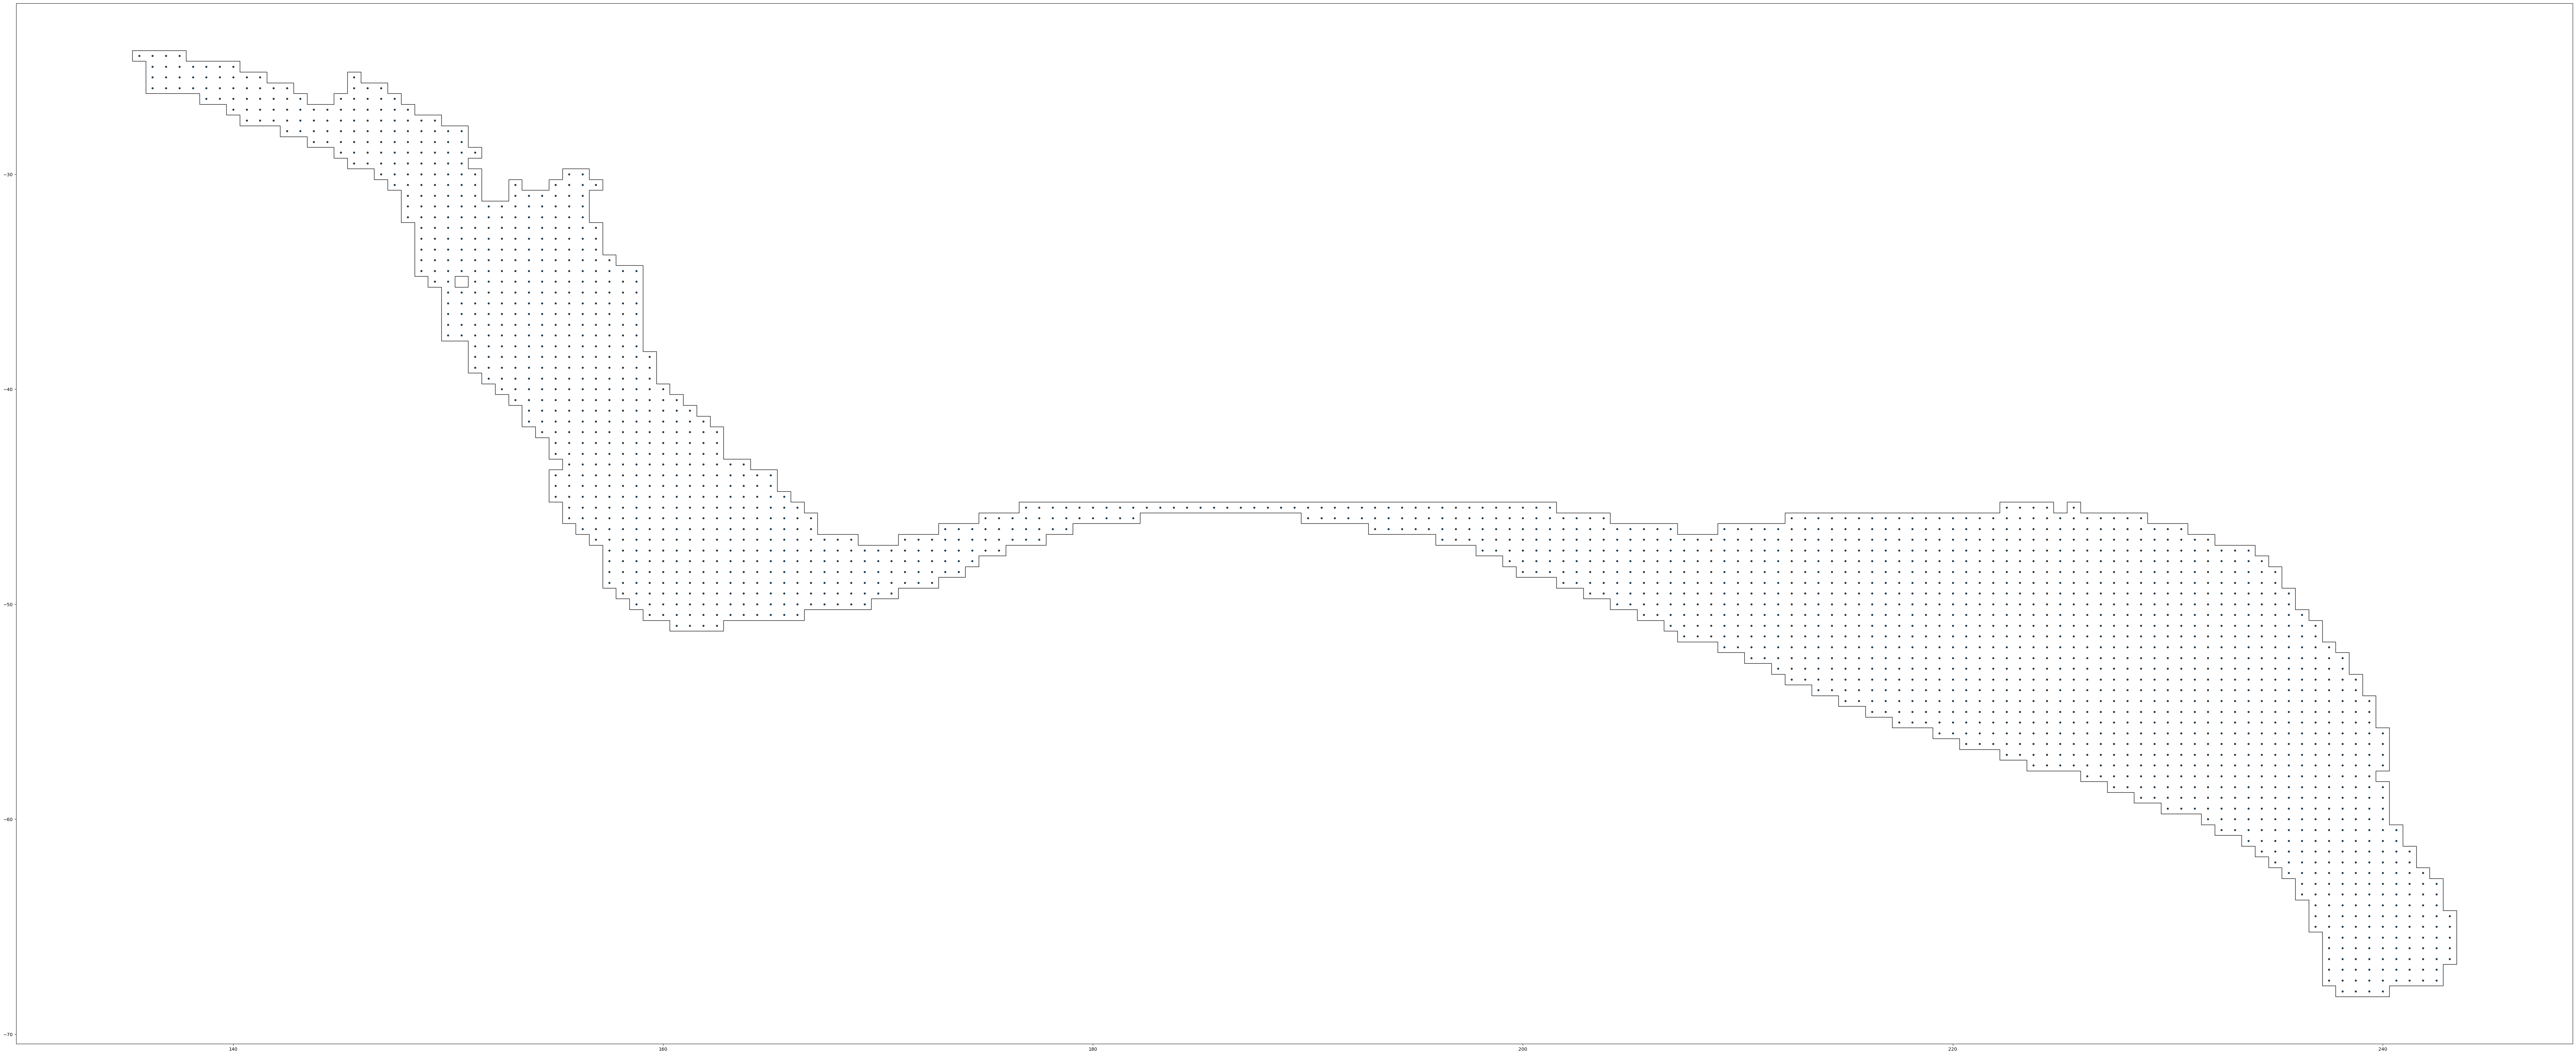

In [120]:
# 2197 / 1
# most pathological
AR = {'_id': '2001.010.02.015.0_1', 'raster': [(-121.875, -68.0, [255.01356506347656]), (-121.25, -68.0, [254.72402954101562]), (-120.625, -68.0, [254.7048797607422]), (-120.0, -68.0, [251.37863159179688]), (-122.5, -67.5, [251.52784729003906]), (-121.875, -67.5, [258.6961669921875]), (-121.25, -67.5, [265.36004638671875]), (-120.625, -67.5, [266.05487060546875]), (-120.0, -67.5, [266.9020690917969]), (-119.375, -67.5, [262.1393737792969]), (-118.75, -67.5, [255.23171997070312]), (-118.125, -67.5, [268.79058837890625]), (-117.5, -67.5, [256.17919921875]), (-122.5, -67.0, [253.196044921875]), (-121.875, -67.0, [263.68743896484375]), (-121.25, -67.0, [271.3476867675781]), (-120.625, -67.0, [277.3966369628906]), (-120.0, -67.0, [277.7203369140625]), (-119.375, -67.0, [277.7356262207031]), (-118.75, -67.0, [268.3465576171875]), (-118.125, -67.0, [281.436279296875]), (-117.5, -67.0, [265.96685791015625]), (-122.5, -66.5, [254.73251342773438]), (-121.875, -66.5, [267.6791076660156]), (-121.25, -66.5, [277.3969421386719]), (-120.625, -66.5, [284.69189453125]), (-120.0, -66.5, [288.1637878417969]), (-119.375, -66.5, [285.6810302734375]), (-118.75, -66.5, [304.8740539550781]), (-118.125, -66.5, [289.72235107421875]), (-117.5, -66.5, [273.57232666015625]), (-116.875, -66.5, [255.50341796875]), (-122.5, -66.0, [258.3683166503906]), (-121.875, -66.0, [271.0539245605469]), (-121.25, -66.0, [283.4207763671875]), (-120.625, -66.0, [291.0062561035156]), (-120.0, -66.0, [296.3526611328125]), (-119.375, -66.0, [294.3573303222656]), (-118.75, -66.0, [286.9161682128906]), (-118.125, -66.0, [298.32952880859375]), (-117.5, -66.0, [278.2494812011719]), (-116.875, -66.0, [259.2783203125]), (-122.5, -65.5, [261.9842834472656]), (-121.875, -65.5, [277.367431640625]), (-121.25, -65.5, [288.7448425292969]), (-120.625, -65.5, [299.509033203125]), (-120.0, -65.5, [302.3891906738281]), (-119.375, -65.5, [303.50213623046875]), (-118.75, -65.5, [318.21551513671875]), (-118.125, -65.5, [304.0103759765625]), (-117.5, -65.5, [283.0052490234375]), (-116.875, -65.5, [261.1349182128906]), (-123.125, -65.0, [251.22396850585938]), (-122.5, -65.0, [268.4949951171875]), (-121.875, -65.0, [283.04742431640625]), (-121.25, -65.0, [296.3180847167969]), (-120.625, -65.0, [305.2510681152344]), (-120.0, -65.0, [337.2456359863281]), (-119.375, -65.0, [333.7424011230469]), (-118.75, -65.0, [326.8395690917969]), (-118.125, -65.0, [306.527099609375]), (-117.5, -65.0, [284.9659423828125]), (-116.875, -65.0, [261.8648681640625]), (-123.125, -64.5, [258.1009216308594]), (-122.5, -64.5, [276.1091613769531]), (-121.875, -64.5, [292.01422119140625]), (-121.25, -64.5, [304.7801513671875]), (-120.625, -64.5, [339.459228515625]), (-120.0, -64.5, [343.3128662109375]), (-119.375, -64.5, [340.23822021484375]), (-118.75, -64.5, [327.96136474609375]), (-118.125, -64.5, [309.0122985839844]), (-117.5, -64.5, [282.85565185546875]), (-116.875, -64.5, [257.9274597167969]), (-123.125, -64.0, [266.2447509765625]), (-122.5, -64.0, [283.88970947265625]), (-121.875, -64.0, [299.9856872558594]), (-121.25, -64.0, [312.07989501953125]), (-120.625, -64.0, [346.8985290527344]), (-120.0, -64.0, [348.11346435546875]), (-119.375, -64.0, [344.324462890625]), (-118.75, -64.0, [328.2591857910156]), (-118.125, -64.0, [305.8015441894531]), (-117.5, -64.0, [277.6024475097656]), (-123.75, -63.5, [254.31036376953125]), (-123.125, -63.5, [273.3534851074219]), (-122.5, -63.5, [292.28265380859375]), (-121.875, -63.5, [306.80426025390625]), (-121.25, -63.5, [319.0157470703125]), (-120.625, -63.5, [351.2680358886719]), (-120.0, -63.5, [353.5500183105469]), (-119.375, -63.5, [342.32745361328125]), (-118.75, -63.5, [327.2218017578125]), (-118.125, -63.5, [296.65509033203125]), (-117.5, -63.5, [266.11273193359375]), (-123.75, -63.0, [265.1387939453125]), (-123.125, -63.0, [285.1202697753906]), (-122.5, -63.0, [301.4310302734375]), (-121.875, -63.0, [315.28790283203125]), (-121.25, -63.0, [349.8868713378906]), (-120.625, -63.0, [355.1071472167969]), (-120.0, -63.0, [350.5279235839844]), (-119.375, -63.0, [340.0324401855469]), (-118.75, -63.0, [314.4263610839844]), (-118.125, -63.0, [284.7751159667969]), (-117.5, -63.0, [251.7565460205078]), (-124.375, -62.5, [260.8352966308594]), (-123.75, -62.5, [279.7276916503906]), (-123.125, -62.5, [298.34442138671875]), (-122.5, -62.5, [340.49591064453125]), (-121.875, -62.5, [348.6353454589844]), (-121.25, -62.5, [353.8065185546875]), (-120.625, -62.5, [354.50909423828125]), (-120.0, -62.5, [347.4688720703125]), (-119.375, -62.5, [329.9136047363281]), (-118.75, -62.5, [302.08074951171875]), (-118.125, -62.5, [266.5243225097656]), (-125.0, -62.0, [257.35296630859375]), (-124.375, -62.0, [272.9652404785156]), (-123.75, -62.0, [293.79193115234375]), (-123.125, -62.0, [338.4334411621094]), (-122.5, -62.0, [349.01043701171875]), (-121.875, -62.0, [355.3652038574219]), (-121.25, -62.0, [355.4797058105469]), (-120.625, -62.0, [351.7423095703125]), (-120.0, -62.0, [340.83770751953125]), (-119.375, -62.0, [317.0105285644531]), (-118.75, -62.0, [285.254150390625]), (-125.625, -61.5, [255.70237731933594]), (-125.0, -61.5, [269.5956726074219]), (-124.375, -61.5, [288.4001159667969]), (-123.75, -61.5, [332.719482421875]), (-123.125, -61.5, [347.9611511230469]), (-122.5, -61.5, [356.7039794921875]), (-121.875, -61.5, [357.24560546875]), (-121.25, -61.5, [353.8735046386719]), (-120.625, -61.5, [346.7992858886719]), (-120.0, -61.5, [329.1223449707031]), (-119.375, -61.5, [305.1656494140625]), (-118.75, -61.5, [266.129150390625]), (-126.25, -61.0, [257.7625732421875]), (-125.625, -61.0, [270.64678955078125]), (-125.0, -61.0, [308.1449279785156]), (-124.375, -61.0, [325.920654296875]), (-123.75, -61.0, [343.5177307128906]), (-123.125, -61.0, [356.08221435546875]), (-122.5, -61.0, [358.90728759765625]), (-121.875, -61.0, [356.5327453613281]), (-121.25, -61.0, [349.80706787109375]), (-120.625, -61.0, [336.8319091796875]), (-120.0, -61.0, [318.9334411621094]), (-119.375, -61.0, [284.6662292480469]), (-127.5, -60.5, [252.5948944091797]), (-126.875, -60.5, [263.8032531738281]), (-126.25, -60.5, [275.3922424316406]), (-125.625, -60.5, [310.48828125]), (-125.0, -60.5, [325.144287109375]), (-124.375, -60.5, [339.60418701171875]), (-123.75, -60.5, [352.4232482910156]), (-123.125, -60.5, [359.52227783203125]), (-122.5, -60.5, [358.81378173828125]), (-121.875, -60.5, [352.6990051269531]), (-121.25, -60.5, [341.2320556640625]), (-120.625, -60.5, [326.6465759277344]), (-120.0, -60.5, [301.30181884765625]), (-119.375, -60.5, [268.285400390625]), (-128.125, -60.0, [281.4231262207031]), (-127.5, -60.0, [292.97540283203125]), (-126.875, -60.0, [305.0747985839844]), (-126.25, -60.0, [317.84368896484375]), (-125.625, -60.0, [330.351806640625]), (-125.0, -60.0, [340.87158203125]), (-124.375, -60.0, [350.28277587890625]), (-123.75, -60.0, [357.20953369140625]), (-123.125, -60.0, [359.9061279296875]), (-122.5, -60.0, [355.59130859375]), (-121.875, -60.0, [345.2956237792969]), (-121.25, -60.0, [331.7696228027344]), (-120.625, -60.0, [312.1036376953125]), (-120.0, -60.0, [286.0621032714844]), (-130.0, -59.5, [264.6708068847656]), (-129.375, -59.5, [280.4952697753906]), (-128.75, -59.5, [293.25506591796875]), (-128.125, -59.5, [304.7719421386719]), (-127.5, -59.5, [316.1524658203125]), (-126.875, -59.5, [327.9466247558594]), (-126.25, -59.5, [340.0026550292969]), (-125.625, -59.5, [349.23358154296875]), (-125.0, -59.5, [354.0174255371094]), (-124.375, -59.5, [357.13555908203125]), (-123.75, -59.5, [358.766845703125]), (-123.125, -59.5, [357.4366455078125]), (-122.5, -59.5, [349.40545654296875]), (-121.875, -59.5, [337.68524169921875]), (-121.25, -59.5, [319.6252746582031]), (-120.625, -59.5, [298.49530029296875]), (-120.0, -59.5, [271.6458435058594]), (-131.25, -59.0, [262.250732421875]), (-130.625, -59.0, [278.4132995605469]), (-130.0, -59.0, [294.2556457519531]), (-129.375, -59.0, [308.4579772949219]), (-128.75, -59.0, [321.43115234375]), (-128.125, -59.0, [332.40863037109375]), (-127.5, -59.0, [340.81011962890625]), (-126.875, -59.0, [348.7806091308594]), (-126.25, -59.0, [356.2137756347656]), (-125.625, -59.0, [362.38604736328125]), (-125.0, -59.0, [361.86883544921875]), (-124.375, -59.0, [360.48248291015625]), (-123.75, -59.0, [358.0032958984375]), (-123.125, -59.0, [352.9967956542969]), (-122.5, -59.0, [344.2388610839844]), (-121.875, -59.0, [327.9469299316406]), (-121.25, -59.0, [309.0721740722656]), (-120.625, -59.0, [286.53375244140625]), (-120.0, -59.0, [258.15399169921875]), (-132.5, -58.5, [262.2019958496094]), (-131.875, -58.5, [278.70263671875]), (-131.25, -58.5, [294.2937927246094]), (-130.625, -58.5, [309.7331848144531]), (-130.0, -58.5, [325.3114929199219]), (-129.375, -58.5, [337.2022705078125]), (-128.75, -58.5, [346.7716064453125]), (-128.125, -58.5, [355.0613098144531]), (-127.5, -58.5, [359.32635498046875]), (-126.875, -58.5, [362.88751220703125]), (-126.25, -58.5, [367.5441589355469]), (-125.625, -58.5, [369.0347595214844]), (-125.0, -58.5, [366.5330505371094]), (-124.375, -58.5, [361.09857177734375]), (-123.75, -58.5, [355.44866943359375]), (-123.125, -58.5, [349.6947326660156]), (-122.5, -58.5, [337.3353576660156]), (-121.875, -58.5, [321.2415466308594]), (-121.25, -58.5, [300.1071472167969]), (-120.625, -58.5, [276.9447021484375]), (-120.0, -58.5, [252.47337341308594]), (-133.75, -58.0, [261.8890075683594]), (-133.125, -58.0, [275.8987731933594]), (-132.5, -58.0, [291.7869567871094]), (-131.875, -58.0, [308.36962890625]), (-131.25, -58.0, [321.20257568359375]), (-130.625, -58.0, [333.7450256347656]), (-130.0, -58.0, [346.66107177734375]), (-129.375, -58.0, [355.5584411621094]), (-128.75, -58.0, [362.1343994140625]), (-128.125, -58.0, [366.3462829589844]), (-127.5, -58.0, [369.0545654296875]), (-126.875, -58.0, [371.19677734375]), (-126.25, -58.0, [373.5415954589844]), (-125.625, -58.0, [374.98309326171875]), (-125.0, -58.0, [368.9395751953125]), (-124.375, -58.0, [361.0409851074219]), (-123.75, -58.0, [353.62884521484375]), (-123.125, -58.0, [345.1130676269531]), (-122.5, -58.0, [334.22808837890625]), (-121.875, -58.0, [315.0236511230469]), (-121.25, -58.0, [294.2332458496094]), (-120.625, -58.0, [271.97137451171875]), (-136.25, -57.5, [250.9334259033203]), (-135.625, -57.5, [265.3268127441406]), (-135.0, -57.5, [275.8661804199219]), (-134.375, -57.5, [285.158447265625]), (-133.75, -57.5, [296.254150390625]), (-133.125, -57.5, [305.5124206542969]), (-132.5, -57.5, [316.2489929199219]), (-131.875, -57.5, [328.30865478515625]), (-131.25, -57.5, [336.5693664550781]), (-130.625, -57.5, [344.4927673339844]), (-130.0, -57.5, [352.96453857421875]), (-129.375, -57.5, [361.0138854980469]), (-128.75, -57.5, [365.8122253417969]), (-128.125, -57.5, [368.8146057128906]), (-127.5, -57.5, [371.49658203125]), (-126.875, -57.5, [375.2551574707031]), (-126.25, -57.5, [379.0501708984375]), (-125.625, -57.5, [378.24798583984375]), (-125.0, -57.5, [372.08001708984375]), (-124.375, -57.5, [361.73480224609375]), (-123.75, -57.5, [352.46295166015625]), (-123.125, -57.5, [343.76513671875]), (-122.5, -57.5, [329.5533142089844]), (-121.875, -57.5, [312.3408203125]), (-121.25, -57.5, [291.3821716308594]), (-120.625, -57.5, [268.9100036621094]), (-120.0, -57.5, [261.2344970703125]), (-137.5, -57.0, [265.83056640625]), (-136.875, -57.0, [282.0890197753906]), (-136.25, -57.0, [292.1847229003906]), (-135.625, -57.0, [302.4996643066406]), (-135.0, -57.0, [311.18634033203125]), (-134.375, -57.0, [316.2940368652344]), (-133.75, -57.0, [321.8176574707031]), (-133.125, -57.0, [326.2669372558594]), (-132.5, -57.0, [329.72369384765625]), (-131.875, -57.0, [335.5843505859375]), (-131.25, -57.0, [340.53228759765625]), (-130.625, -57.0, [345.56683349609375]), (-130.0, -57.0, [351.917724609375]), (-129.375, -57.0, [358.8324890136719]), (-128.75, -57.0, [365.951171875]), (-128.125, -57.0, [371.7793273925781]), (-127.5, -57.0, [376.6722717285156]), (-126.875, -57.0, [382.3872375488281]), (-126.25, -57.0, [385.9372863769531]), (-125.625, -57.0, [384.4169616699219]), (-125.0, -57.0, [374.8262023925781]), (-124.375, -57.0, [363.64361572265625]), (-123.75, -57.0, [353.7160949707031]), (-123.125, -57.0, [342.8810729980469]), (-122.5, -57.0, [330.0882568359375]), (-121.875, -57.0, [311.6322937011719]), (-121.25, -57.0, [291.0985107421875]), (-120.625, -57.0, [287.0691833496094]), (-120.0, -57.0, [260.3089599609375]), (-139.375, -56.5, [258.1548156738281]), (-138.75, -56.5, [275.1797790527344]), (-138.125, -56.5, [291.0594482421875]), (-137.5, -56.5, [303.2629089355469]), (-136.875, -56.5, [315.7132263183594]), (-136.25, -56.5, [325.08203125]), (-135.625, -56.5, [331.6857604980469]), (-135.0, -56.5, [336.2149353027344]), (-134.375, -56.5, [333.75457763671875]), (-133.75, -56.5, [332.43341064453125]), (-133.125, -56.5, [331.80499267578125]), (-132.5, -56.5, [332.13299560546875]), (-131.875, -56.5, [333.86151123046875]), (-131.25, -56.5, [339.1326599121094]), (-130.625, -56.5, [345.9013366699219]), (-130.0, -56.5, [352.83282470703125]), (-129.375, -56.5, [360.955078125]), (-128.75, -56.5, [370.6717224121094]), (-128.125, -56.5, [379.6388854980469]), (-127.5, -56.5, [387.02435302734375]), (-126.875, -56.5, [394.233154296875]), (-126.25, -56.5, [395.8756103515625]), (-125.625, -56.5, [390.77154541015625]), (-125.0, -56.5, [379.2085266113281]), (-124.375, -56.5, [367.6258239746094]), (-123.75, -56.5, [356.7068786621094]), (-123.125, -56.5, [345.6376953125]), (-122.5, -56.5, [330.6407775878906]), (-121.875, -56.5, [334.128662109375]), (-121.25, -56.5, [312.5243835449219]), (-120.625, -56.5, [287.3609313964844]), (-120.0, -56.5, [258.1975402832031]), (-140.625, -56.0, [266.71337890625]), (-140.0, -56.0, [284.50189208984375]), (-139.375, -56.0, [300.62689208984375]), (-138.75, -56.0, [315.4935302734375]), (-138.125, -56.0, [328.7805480957031]), (-137.5, -56.0, [337.26287841796875]), (-136.875, -56.0, [345.4799499511719]), (-136.25, -56.0, [348.958251953125]), (-135.625, -56.0, [347.6438903808594]), (-135.0, -56.0, [344.8109436035156]), (-134.375, -56.0, [337.7467956542969]), (-133.75, -56.0, [331.8794250488281]), (-133.125, -56.0, [328.6926574707031]), (-132.5, -56.0, [331.03216552734375]), (-131.875, -56.0, [336.10821533203125]), (-131.25, -56.0, [343.9719543457031]), (-130.625, -56.0, [351.7130432128906]), (-130.0, -56.0, [359.8641052246094]), (-129.375, -56.0, [371.7981872558594]), (-128.75, -56.0, [385.34307861328125]), (-128.125, -56.0, [395.74603271484375]), (-127.5, -56.0, [404.3131408691406]), (-126.875, -56.0, [409.7239074707031]), (-126.25, -56.0, [408.23284912109375]), (-125.625, -56.0, [398.35089111328125]), (-125.0, -56.0, [385.4312438964844]), (-124.375, -56.0, [372.7621154785156]), (-123.75, -56.0, [361.0539855957031]), (-123.125, -56.0, [348.3481750488281]), (-122.5, -56.0, [357.26318359375]), (-121.875, -56.0, [337.20709228515625]), (-121.25, -56.0, [313.15228271484375]), (-120.625, -56.0, [286.67431640625]), (-120.0, -56.0, [255.94427490234375]), (-142.5, -55.5, [251.41990661621094]), (-141.875, -55.5, [277.12353515625]), (-141.25, -55.5, [297.6639709472656]), (-140.625, -55.5, [315.123779296875]), (-140.0, -55.5, [328.46673583984375]), (-139.375, -55.5, [339.8447265625]), (-138.75, -55.5, [348.4960021972656]), (-138.125, -55.5, [359.1882019042969]), (-137.5, -55.5, [359.4810485839844]), (-136.875, -55.5, [357.77740478515625]), (-136.25, -55.5, [355.0967102050781]), (-135.625, -55.5, [348.1487731933594]), (-135.0, -55.5, [340.6164245605469]), (-134.375, -55.5, [335.7065734863281]), (-133.75, -55.5, [331.3146057128906]), (-133.125, -55.5, [329.90167236328125]), (-132.5, -55.5, [337.64404296875]), (-131.875, -55.5, [347.345458984375]), (-131.25, -55.5, [357.8966369628906]), (-130.625, -55.5, [372.2226867675781]), (-130.0, -55.5, [386.3013000488281]), (-129.375, -55.5, [400.4548645019531]), (-128.75, -55.5, [413.95062255859375]), (-128.125, -55.5, [424.1952209472656]), (-127.5, -55.5, [431.2813415527344]), (-126.875, -55.5, [428.1123962402344]), (-126.25, -55.5, [418.1086730957031]), (-125.625, -55.5, [405.26513671875]), (-125.0, -55.5, [391.22882080078125]), (-124.375, -55.5, [401.21234130859375]), (-123.75, -55.5, [388.8455810546875]), (-123.125, -55.5, [376.4850769042969]), (-122.5, -55.5, [359.4920349121094]), (-121.875, -55.5, [338.31109619140625]), (-121.25, -55.5, [313.1206970214844]), (-120.625, -55.5, [283.25799560546875]), (-143.75, -55.0, [254.47354125976562]), (-143.125, -55.0, [286.6392822265625]), (-142.5, -55.0, [313.84454345703125]), (-141.875, -55.0, [335.6776428222656]), (-141.25, -55.0, [348.79437255859375]), (-140.625, -55.0, [360.02252197265625]), (-140.0, -55.0, [362.30462646484375]), (-139.375, -55.0, [366.37518310546875]), (-138.75, -55.0, [363.5265197753906]), (-138.125, -55.0, [360.0540771484375]), (-137.5, -55.0, [356.8622131347656]), (-136.875, -55.0, [351.38543701171875]), (-136.25, -55.0, [345.7496643066406]), (-135.625, -55.0, [344.06719970703125]), (-135.0, -55.0, [340.1072082519531]), (-134.375, -55.0, [343.4012756347656]), (-133.75, -55.0, [348.1529846191406]), (-133.125, -55.0, [351.5105285644531]), (-132.5, -55.0, [368.6421203613281]), (-131.875, -55.0, [384.6414794921875]), (-131.25, -55.0, [399.9638366699219]), (-130.625, -55.0, [418.5481262207031]), (-130.0, -55.0, [433.6053466796875]), (-129.375, -55.0, [445.32806396484375]), (-128.75, -55.0, [451.1002197265625]), (-128.125, -55.0, [454.3971252441406]), (-127.5, -55.0, [475.9508361816406]), (-126.875, -55.0, [463.3736572265625]), (-126.25, -55.0, [449.33935546875]), (-125.625, -55.0, [410.81689453125]), (-125.0, -55.0, [420.69378662109375]), (-124.375, -55.0, [407.0740966796875]), (-123.75, -55.0, [393.7191162109375]), (-123.125, -55.0, [379.5656433105469]), (-122.5, -55.0, [361.56976318359375]), (-121.875, -55.0, [336.7462463378906]), (-121.25, -55.0, [307.68829345703125]), (-120.625, -55.0, [276.60357666015625]), (-145.0, -54.5, [274.0904541015625]), (-144.375, -54.5, [313.5957336425781]), (-143.75, -54.5, [318.96026611328125]), (-143.125, -54.5, [350.3301086425781]), (-142.5, -54.5, [366.5040588378906]), (-141.875, -54.5, [383.23846435546875]), (-141.25, -54.5, [381.7538757324219]), (-140.625, -54.5, [382.4482116699219]), (-140.0, -54.5, [376.7838439941406]), (-139.375, -54.5, [370.0586242675781]), (-138.75, -54.5, [364.6065673828125]), (-138.125, -54.5, [359.59478759765625]), (-137.5, -54.5, [387.92742919921875]), (-136.875, -54.5, [360.24786376953125]), (-136.25, -54.5, [357.3827209472656]), (-135.625, -54.5, [399.0727844238281]), (-135.0, -54.5, [376.2198181152344]), (-134.375, -54.5, [417.7335205078125]), (-133.75, -54.5, [435.0580749511719]), (-133.125, -54.5, [417.5412902832031]), (-132.5, -54.5, [463.3761901855469]), (-131.875, -54.5, [481.7893981933594]), (-131.25, -54.5, [496.5540466308594]), (-130.625, -54.5, [506.4574279785156]), (-130.0, -54.5, [513.2363891601562]), (-129.375, -54.5, [515.0753173828125]), (-128.75, -54.5, [509.3700256347656]), (-128.125, -54.5, [501.2886657714844]), (-127.5, -54.5, [488.8953857421875]), (-126.875, -54.5, [472.4236755371094]), (-126.25, -54.5, [456.8302917480469]), (-125.625, -54.5, [441.8019714355469]), (-125.0, -54.5, [427.2401123046875]), (-124.375, -54.5, [412.71478271484375]), (-123.75, -54.5, [397.98223876953125]), (-123.125, -54.5, [381.8341979980469]), (-122.5, -54.5, [358.7014465332031]), (-121.875, -54.5, [329.98504638671875]), (-121.25, -54.5, [297.0851135253906]), (-120.625, -54.5, [264.1986999511719]), (-146.25, -54.0, [266.3216552734375]), (-145.625, -54.0, [310.2662658691406]), (-145.0, -54.0, [343.4139099121094]), (-144.375, -54.0, [377.6898193359375]), (-143.75, -54.0, [397.8778991699219]), (-143.125, -54.0, [384.8283996582031]), (-142.5, -54.0, [422.8394470214844]), (-141.875, -54.0, [425.1544494628906]), (-141.25, -54.0, [423.6669616699219]), (-140.625, -54.0, [419.52947998046875]), (-140.0, -54.0, [420.5542907714844]), (-139.375, -54.0, [417.65447998046875]), (-138.75, -54.0, [419.2288818359375]), (-138.125, -54.0, [427.0511474609375]), (-137.5, -54.0, [433.660888671875]), (-136.875, -54.0, [451.017578125]), (-136.25, -54.0, [462.82366943359375]), (-135.625, -54.0, [479.8081359863281]), (-135.0, -54.0, [498.2243957519531]), (-134.375, -54.0, [514.6038818359375]), (-133.75, -54.0, [531.6198120117188]), (-133.125, -54.0, [546.4735107421875]), (-132.5, -54.0, [550.86376953125]), (-131.875, -54.0, [555.972900390625]), (-131.25, -54.0, [562.4328002929688]), (-130.625, -54.0, [557.8616333007812]), (-130.0, -54.0, [553.1434326171875]), (-129.375, -54.0, [546.0161743164062]), (-128.75, -54.0, [534.2158203125]), (-128.125, -54.0, [520.267333984375]), (-127.5, -54.0, [503.44451904296875]), (-126.875, -54.0, [484.751953125]), (-126.25, -54.0, [467.06036376953125]), (-125.625, -54.0, [450.62200927734375]), (-125.0, -54.0, [433.4385681152344]), (-124.375, -54.0, [416.4984436035156]), (-123.75, -54.0, [398.65997314453125]), (-123.125, -54.0, [378.24224853515625]), (-122.5, -54.0, [351.1044921875]), (-121.875, -54.0, [316.8584289550781]), (-121.25, -54.0, [282.0072021484375]), (-147.5, -53.5, [260.6418762207031]), (-146.875, -53.5, [304.0205078125]), (-146.25, -53.5, [338.7351379394531]), (-145.625, -53.5, [370.0965270996094]), (-145.0, -53.5, [393.3090515136719]), (-144.375, -53.5, [410.4620056152344]), (-143.75, -53.5, [420.6379699707031]), (-143.125, -53.5, [425.61981201171875]), (-142.5, -53.5, [429.11480712890625]), (-141.875, -53.5, [430.3254089355469]), (-141.25, -53.5, [442.2904968261719]), (-140.625, -53.5, [451.98297119140625]), (-140.0, -53.5, [466.1817932128906]), (-139.375, -53.5, [483.019775390625]), (-138.75, -53.5, [496.7474670410156]), (-138.125, -53.5, [516.8418579101562]), (-137.5, -53.5, [535.3987426757812]), (-136.875, -53.5, [553.3215942382812]), (-136.25, -53.5, [571.87158203125]), (-135.625, -53.5, [582.4342041015625]), (-135.0, -53.5, [594.6735229492188]), (-134.375, -53.5, [605.7672119140625]), (-133.75, -53.5, [605.7931518554688]), (-133.125, -53.5, [607.890625]), (-132.5, -53.5, [604.3578491210938]), (-131.875, -53.5, [599.3189697265625]), (-131.25, -53.5, [594.9993286132812]), (-130.625, -53.5, [584.9778442382812]), (-130.0, -53.5, [574.8817749023438]), (-129.375, -53.5, [563.426513671875]), (-128.75, -53.5, [549.3594970703125]), (-128.125, -53.5, [534.4443359375]), (-127.5, -53.5, [516.1853637695312]), (-126.875, -53.5, [495.3283996582031]), (-126.25, -53.5, [474.781494140625]), (-125.625, -53.5, [454.95355224609375]), (-125.0, -53.5, [434.841552734375]), (-124.375, -53.5, [414.916748046875]), (-123.75, -53.5, [394.7265930175781]), (-123.125, -53.5, [370.4302978515625]), (-122.5, -53.5, [335.55413818359375]), (-121.875, -53.5, [298.9036560058594]), (-121.25, -53.5, [264.9617004394531]), (-148.125, -53.0, [291.4097595214844]), (-147.5, -53.0, [335.5574645996094]), (-146.875, -53.0, [361.8356628417969]), (-146.25, -53.0, [388.1560974121094]), (-145.625, -53.0, [404.66668701171875]), (-145.0, -53.0, [421.4104309082031]), (-144.375, -53.0, [430.4248962402344]), (-143.75, -53.0, [442.6134338378906]), (-143.125, -53.0, [454.6765441894531]), (-142.5, -53.0, [469.3466491699219]), (-141.875, -53.0, [494.56756591796875]), (-141.25, -53.0, [515.8865356445312]), (-140.625, -53.0, [543.2325439453125]), (-140.0, -53.0, [563.4578247070312]), (-139.375, -53.0, [581.7839965820312]), (-138.75, -53.0, [598.88818359375]), (-138.125, -53.0, [609.7060546875]), (-137.5, -53.0, [626.272216796875]), (-136.875, -53.0, [629.62646484375]), (-136.25, -53.0, [635.8820190429688]), (-135.625, -53.0, [637.40087890625]), (-135.0, -53.0, [636.4279174804688]), (-134.375, -53.0, [635.8658447265625]), (-133.75, -53.0, [629.7487182617188]), (-133.125, -53.0, [625.7733764648438]), (-132.5, -53.0, [617.540771484375]), (-131.875, -53.0, [609.2446899414062]), (-131.25, -53.0, [602.7979125976562]), (-130.625, -53.0, [589.5404052734375]), (-130.0, -53.0, [577.5487670898438]), (-129.375, -53.0, [566.2622680664062]), (-128.75, -53.0, [553.566650390625]), (-128.125, -53.0, [538.651123046875]), (-127.5, -53.0, [520.95068359375]), (-126.875, -53.0, [498.7561340332031]), (-126.25, -53.0, [475.3041076660156]), (-125.625, -53.0, [452.9897155761719]), (-125.0, -53.0, [430.6426696777344]), (-124.375, -53.0, [408.58233642578125]), (-123.75, -53.0, [384.72705078125]), (-123.125, -53.0, [353.194580078125]), (-122.5, -53.0, [313.9903259277344]), (-121.875, -53.0, [278.5039978027344]), (-149.375, -52.5, [289.8717346191406]), (-148.75, -52.5, [327.6075134277344]), (-148.125, -52.5, [360.0885009765625]), (-147.5, -52.5, [387.82086181640625]), (-146.875, -52.5, [408.8245849609375]), (-146.25, -52.5, [424.5142822265625]), (-145.625, -52.5, [453.10150146484375]), (-145.0, -52.5, [470.3014831542969]), (-144.375, -52.5, [502.64703369140625]), (-143.75, -52.5, [526.0029296875]), (-143.125, -52.5, [556.5250244140625]), (-142.5, -52.5, [581.9170532226562]), (-141.875, -52.5, [604.5236206054688]), (-141.25, -52.5, [624.2990112304688]), (-140.625, -52.5, [632.7767944335938]), (-140.0, -52.5, [643.7852783203125]), (-139.375, -52.5, [645.0691528320312]), (-138.75, -52.5, [650.4874267578125]), (-138.125, -52.5, [649.7457885742188]), (-137.5, -52.5, [653.7898559570312]), (-136.875, -52.5, [650.666748046875]), (-136.25, -52.5, [649.1080322265625]), (-135.625, -52.5, [642.2103881835938]), (-135.0, -52.5, [633.97607421875]), (-134.375, -52.5, [628.007568359375]), (-133.75, -52.5, [617.8453979492188]), (-133.125, -52.5, [609.8765258789062]), (-132.5, -52.5, [599.4512329101562]), (-131.875, -52.5, [587.6823120117188]), (-131.25, -52.5, [578.3724975585938]), (-130.625, -52.5, [567.5081787109375]), (-130.0, -52.5, [556.9719848632812]), (-129.375, -52.5, [548.2877197265625]), (-128.75, -52.5, [540.0584716796875]), (-128.125, -52.5, [530.8488159179688]), (-127.5, -52.5, [514.384033203125]), (-126.875, -52.5, [493.6976013183594]), (-126.25, -52.5, [470.4858093261719]), (-125.625, -52.5, [446.8146057128906]), (-125.0, -52.5, [422.51275634765625]), (-124.375, -52.5, [397.8293151855469]), (-123.75, -52.5, [370.95849609375]), (-123.125, -52.5, [330.2125549316406]), (-122.5, -52.5, [290.9244689941406]), (-121.875, -52.5, [259.18292236328125]), (-150.625, -52.0, [293.97210693359375]), (-150.0, -52.0, [328.2501220703125]), (-149.375, -52.0, [362.1986999511719]), (-148.75, -52.0, [386.6121520996094]), (-148.125, -52.0, [415.8078308105469]), (-147.5, -52.0, [447.3315124511719]), (-146.875, -52.0, [485.4998474121094]), (-146.25, -52.0, [526.7369995117188]), (-145.625, -52.0, [560.532958984375]), (-145.0, -52.0, [595.9512939453125]), (-144.375, -52.0, [614.939453125]), (-143.75, -52.0, [642.3970336914062]), (-143.125, -52.0, [651.161865234375]), (-142.5, -52.0, [666.5831298828125]), (-141.875, -52.0, [664.9468994140625]), (-141.25, -52.0, [666.6070556640625]), (-140.625, -52.0, [660.0826416015625]), (-140.0, -52.0, [657.7048950195312]), (-139.375, -52.0, [650.1761474609375]), (-138.75, -52.0, [648.72802734375]), (-138.125, -52.0, [641.00244140625]), (-137.5, -52.0, [639.23095703125]), (-136.875, -52.0, [629.9511108398438]), (-136.25, -52.0, [621.7236938476562]), (-135.625, -52.0, [610.4320678710938]), (-135.0, -52.0, [596.8651123046875]), (-134.375, -52.0, [587.0888061523438]), (-133.75, -52.0, [575.0048828125]), (-133.125, -52.0, [563.708740234375]), (-132.5, -52.0, [552.7089233398438]), (-131.875, -52.0, [542.560791015625]), (-131.25, -52.0, [533.7031860351562]), (-130.625, -52.0, [526.8015747070312]), (-130.0, -52.0, [520.9649047851562]), (-129.375, -52.0, [515.2047729492188]), (-128.75, -52.0, [511.722412109375]), (-128.125, -52.0, [507.5755615234375]), (-127.5, -52.0, [499.0521240234375]), (-126.875, -52.0, [482.130615234375]), (-126.25, -52.0, [461.3160095214844]), (-125.625, -52.0, [437.5847473144531]), (-125.0, -52.0, [412.0142517089844]), (-124.375, -52.0, [384.65618896484375]), (-123.75, -52.0, [349.2804870605469]), (-123.125, -52.0, [306.1479187011719]), (-122.5, -52.0, [269.11663818359375]), (-152.5, -51.5, [256.4642333984375]), (-151.875, -51.5, [290.04644775390625]), (-151.25, -51.5, [327.7110900878906]), (-150.625, -51.5, [355.08306884765625]), (-150.0, -51.5, [388.5567321777344]), (-149.375, -51.5, [421.6781311035156]), (-148.75, -51.5, [472.8870849609375]), (-148.125, -51.5, [522.9142456054688]), (-147.5, -51.5, [572.6748657226562]), (-146.875, -51.5, [613.6461791992188]), (-146.25, -51.5, [641.6921997070312]), (-145.625, -51.5, [658.9627685546875]), (-145.0, -51.5, [670.614013671875]), (-144.375, -51.5, [672.3138427734375]), (-143.75, -51.5, [676.406494140625]), (-143.125, -51.5, [668.0000610351562]), (-142.5, -51.5, [663.52294921875]), (-141.875, -51.5, [646.3886108398438]), (-141.25, -51.5, [635.0189208984375]), (-140.625, -51.5, [619.8958129882812]), (-140.0, -51.5, [611.1150512695312]), (-139.375, -51.5, [600.6553955078125]), (-138.75, -51.5, [594.5669555664062]), (-138.125, -51.5, [583.57666015625]), (-137.5, -51.5, [574.8973999023438]), (-136.875, -51.5, [564.82763671875]), (-136.25, -51.5, [552.44287109375]), (-135.625, -51.5, [541.3068237304688]), (-135.0, -51.5, [528.8534545898438]), (-134.375, -51.5, [519.1425170898438]), (-133.75, -51.5, [511.451171875]), (-133.125, -51.5, [504.14459228515625]), (-132.5, -51.5, [496.33111572265625]), (-131.875, -51.5, [489.94195556640625]), (-131.25, -51.5, [484.5722351074219]), (-130.625, -51.5, [480.3099670410156]), (-130.0, -51.5, [476.8907775878906]), (-129.375, -51.5, [474.2864074707031]), (-128.75, -51.5, [474.4544677734375]), (-128.125, -51.5, [474.5543212890625]), (-127.5, -51.5, [472.2043151855469]), (-126.875, -51.5, [466.1332702636719]), (-126.25, -51.5, [449.52447509765625]), (-125.625, -51.5, [425.9837341308594]), (-125.0, -51.5, [398.94024658203125]), (-124.375, -51.5, [366.89276123046875]), (-123.75, -51.5, [323.1673583984375]), (-123.125, -51.5, [282.1532897949219]), (-153.125, -51.0, [281.42236328125]), (-152.5, -51.0, [310.8305358886719]), (-151.875, -51.0, [344.9794616699219]), (-151.25, -51.0, [375.6838073730469]), (-150.625, -51.0, [433.4728088378906]), (-150.0, -51.0, [486.90167236328125]), (-149.375, -51.0, [555.429443359375]), (-148.75, -51.0, [605.62158203125]), (-148.125, -51.0, [646.1607666015625]), (-147.5, -51.0, [665.0457153320312]), (-146.875, -51.0, [681.5220336914062]), (-146.25, -51.0, [681.198974609375]), (-145.625, -51.0, [681.267333984375]), (-145.0, -51.0, [672.7501831054688]), (-144.375, -51.0, [662.155029296875]), (-143.75, -51.0, [647.1671142578125]), (-143.125, -51.0, [627.1444702148438]), (-142.5, -51.0, [605.2999267578125]), (-141.875, -51.0, [583.6004028320312]), (-141.25, -51.0, [564.8893432617188]), (-140.625, -51.0, [551.310302734375]), (-140.0, -51.0, [538.4830932617188]), (-139.375, -51.0, [525.576171875]), (-138.75, -51.0, [511.5653076171875]), (-138.125, -51.0, [500.27752685546875]), (-137.5, -51.0, [489.6802978515625]), (-136.875, -51.0, [481.54425048828125]), (-136.25, -51.0, [473.0785217285156]), (-135.625, -51.0, [465.1850280761719]), (-135.0, -51.0, [457.6781921386719]), (-134.375, -51.0, [450.2008972167969]), (-133.75, -51.0, [446.67156982421875]), (-133.125, -51.0, [441.92340087890625]), (-132.5, -51.0, [440.81689453125]), (-131.875, -51.0, [437.8340148925781]), (-131.25, -51.0, [433.44677734375]), (-130.625, -51.0, [430.1711730957031]), (-130.0, -51.0, [428.0372009277344]), (-129.375, -51.0, [427.38787841796875]), (-128.75, -51.0, [429.5794372558594]), (-128.125, -51.0, [434.4792175292969]), (-127.5, -51.0, [440.85174560546875]), (-126.875, -51.0, [443.6657409667969]), (-126.25, -51.0, [436.33251953125]), (-125.625, -51.0, [414.5260009765625]), (-125.0, -51.0, [382.77313232421875]), (-124.375, -51.0, [340.331787109375]), (-123.75, -51.0, [294.9651794433594]), (-123.125, -51.0, [259.44635009765625]), (160.625, -51.0, [253.68089294433594]), (161.25, -51.0, [262.1909484863281]), (161.875, -51.0, [266.85791015625]), (162.5, -51.0, [262.86248779296875]), (-154.375, -50.5, [265.339111328125]), (-153.75, -50.5, [300.1221618652344]), (-153.125, -50.5, [329.5654296875]), (-152.5, -50.5, [372.1575927734375]), (-151.875, -50.5, [416.2772216796875]), (-151.25, -50.5, [503.9645690917969]), (-150.625, -50.5, [571.6527709960938]), (-150.0, -50.5, [635.6447143554688]), (-149.375, -50.5, [655.5648803710938]), (-148.75, -50.5, [675.5191040039062]), (-148.125, -50.5, [676.9276733398438]), (-147.5, -50.5, [681.6560668945312]), (-146.875, -50.5, [680.2157592773438]), (-146.25, -50.5, [679.1526489257812]), (-145.625, -50.5, [671.70263671875]), (-145.0, -50.5, [659.0714111328125]), (-144.375, -50.5, [636.2765502929688]), (-143.75, -50.5, [609.4962158203125]), (-143.125, -50.5, [579.2763061523438]), (-142.5, -50.5, [551.6473999023438]), (-141.875, -50.5, [528.2232055664062]), (-141.25, -50.5, [508.9227600097656]), (-140.625, -50.5, [492.93927001953125]), (-140.0, -50.5, [476.5336608886719]), (-139.375, -50.5, [462.3397216796875]), (-138.75, -50.5, [446.5715026855469]), (-138.125, -50.5, [434.8048400878906]), (-137.5, -50.5, [426.8700866699219]), (-136.875, -50.5, [423.1907958984375]), (-136.25, -50.5, [419.4208679199219]), (-135.625, -50.5, [416.00030517578125]), (-135.0, -50.5, [410.90966796875]), (-134.375, -50.5, [404.0700988769531]), (-133.75, -50.5, [403.07794189453125]), (-133.125, -50.5, [401.22119140625]), (-132.5, -50.5, [399.44171142578125]), (-131.875, -50.5, [395.8634033203125]), (-131.25, -50.5, [391.1628723144531]), (-130.625, -50.5, [389.260009765625]), (-130.0, -50.5, [388.27862548828125]), (-129.375, -50.5, [386.9989929199219]), (-128.75, -50.5, [391.0400695800781]), (-128.125, -50.5, [398.44659423828125]), (-127.5, -50.5, [411.8500671386719]), (-126.875, -50.5, [424.1036376953125]), (-126.25, -50.5, [421.2225036621094]), (-125.625, -50.5, [399.03167724609375]), (-125.0, -50.5, [358.5284118652344]), (-124.375, -50.5, [307.5238342285156]), (-123.75, -50.5, [270.6214294433594]), (159.375, -50.5, [265.6712341308594]), (160.0, -50.5, [285.9115295410156]), (160.625, -50.5, [307.56610107421875]), (161.25, -50.5, [328.16290283203125]), (161.875, -50.5, [342.19970703125]), (162.5, -50.5, [343.26812744140625]), (163.125, -50.5, [334.9259033203125]), (163.75, -50.5, [321.8616943359375]), (164.375, -50.5, [306.7688293457031]), (165.0, -50.5, [290.8659973144531]), (165.625, -50.5, [273.73638916015625]), (166.25, -50.5, [258.914794921875]), (-155.625, -50.0, [258.3683166503906]), (-155.0, -50.0, [289.3901672363281]), (-154.375, -50.0, [322.4693603515625]), (-153.75, -50.0, [357.4176940917969]), (-153.125, -50.0, [423.9961853027344]), (-152.5, -50.0, [494.6529235839844]), (-151.875, -50.0, [582.7689819335938]), (-151.25, -50.0, [629.0115356445312]), (-150.625, -50.0, [661.255859375]), (-150.0, -50.0, [661.1398315429688]), (-149.375, -50.0, [655.8411254882812]), (-148.75, -50.0, [654.83203125]), (-148.125, -50.0, [655.2738647460938]), (-147.5, -50.0, [661.3497924804688]), (-146.875, -50.0, [664.3193969726562]), (-146.25, -50.0, [660.2256469726562]), (-145.625, -50.0, [653.0828247070312]), (-145.0, -50.0, [624.2000122070312]), (-144.375, -50.0, [595.5472412109375]), (-143.75, -50.0, [560.838623046875]), (-143.125, -50.0, [530.1738891601562]), (-142.5, -50.0, [503.6922302246094]), (-141.875, -50.0, [479.8220520019531]), (-141.25, -50.0, [460.0000305175781]), (-140.625, -50.0, [447.13458251953125]), (-140.0, -50.0, [434.9421081542969]), (-139.375, -50.0, [425.5938415527344]), (-138.75, -50.0, [414.87652587890625]), (-138.125, -50.0, [410.1231994628906]), (-137.5, -50.0, [406.7496643066406]), (-136.875, -50.0, [404.3028259277344]), (-136.25, -50.0, [400.8457336425781]), (-135.625, -50.0, [396.3238830566406]), (-135.0, -50.0, [390.9465637207031]), (-134.375, -50.0, [384.9845275878906]), (-133.75, -50.0, [382.8387145996094]), (-133.125, -50.0, [380.2377014160156]), (-132.5, -50.0, [377.66595458984375]), (-131.875, -50.0, [372.6340637207031]), (-131.25, -50.0, [366.73480224609375]), (-130.625, -50.0, [361.3202819824219]), (-130.0, -50.0, [356.6334533691406]), (-129.375, -50.0, [357.3016357421875]), (-128.75, -50.0, [363.9245910644531]), (-128.125, -50.0, [376.1148376464844]), (-127.5, -50.0, [390.88348388671875]), (-126.875, -50.0, [403.5420227050781]), (-126.25, -50.0, [408.9136657714844]), (-125.625, -50.0, [374.56329345703125]), (-125.0, -50.0, [325.61083984375]), (-124.375, -50.0, [281.0773620605469]), (158.75, -50.0, [266.23052978515625]), (159.375, -50.0, [290.3232421875]), (160.0, -50.0, [320.5784606933594]), (160.625, -50.0, [349.6432189941406]), (161.25, -50.0, [368.67498779296875]), (161.875, -50.0, [371.04376220703125]), (162.5, -50.0, [359.3417663574219]), (163.125, -50.0, [344.9696044921875]), (163.75, -50.0, [335.2989196777344]), (164.375, -50.0, [330.65399169921875]), (165.0, -50.0, [332.640869140625]), (165.625, -50.0, [338.8428955078125]), (166.25, -50.0, [345.81927490234375]), (166.875, -50.0, [348.0875244140625]), (167.5, -50.0, [339.1834411621094]), (168.125, -50.0, [318.9152526855469]), (168.75, -50.0, [288.5865173339844]), (169.375, -50.0, [251.3412322998047]), (-156.875, -49.5, [275.6853942871094]), (-156.25, -49.5, [309.52093505859375]), (-155.625, -49.5, [341.9009094238281]), (-155.0, -49.5, [351.4100646972656]), (-154.375, -49.5, [406.0419006347656]), (-153.75, -49.5, [496.36639404296875]), (-153.125, -49.5, [568.7291870117188]), (-152.5, -49.5, [638.0492553710938]), (-151.875, -49.5, [646.28564453125]), (-151.25, -49.5, [641.1962280273438]), (-150.625, -49.5, [623.1953125]), (-150.0, -49.5, [594.9319458007812]), (-149.375, -49.5, [583.1652221679688]), (-148.75, -49.5, [581.8324584960938]), (-148.125, -49.5, [595.4110107421875]), (-147.5, -49.5, [606.7588500976562]), (-146.875, -49.5, [610.7498779296875]), (-146.25, -49.5, [601.2781982421875]), (-145.625, -49.5, [583.3789672851562]), (-145.0, -49.5, [555.4100341796875]), (-144.375, -49.5, [528.3746337890625]), (-143.75, -49.5, [499.4698181152344]), (-143.125, -49.5, [472.3453674316406]), (-142.5, -49.5, [445.73529052734375]), (-141.875, -49.5, [429.7966003417969]), (-141.25, -49.5, [420.9517822265625]), (-140.625, -49.5, [417.5785217285156]), (-140.0, -49.5, [413.8399963378906]), (-139.375, -49.5, [415.538818359375]), (-138.75, -49.5, [415.3215026855469]), (-138.125, -49.5, [414.7840270996094]), (-137.5, -49.5, [411.0675048828125]), (-136.875, -49.5, [409.4991760253906]), (-136.25, -49.5, [405.0181579589844]), (-135.625, -49.5, [404.4252624511719]), (-135.0, -49.5, [400.8142395019531]), (-134.375, -49.5, [394.5795593261719]), (-133.75, -49.5, [394.6014709472656]), (-133.125, -49.5, [387.89703369140625]), (-132.5, -49.5, [381.7701110839844]), (-131.875, -49.5, [372.4990539550781]), (-131.25, -49.5, [355.8658142089844]), (-130.625, -49.5, [339.0138244628906]), (-130.0, -49.5, [330.9330749511719]), (-129.375, -49.5, [335.56024169921875]), (-128.75, -49.5, [345.2458801269531]), (-128.125, -49.5, [357.9752502441406]), (-127.5, -49.5, [371.0201416015625]), (-126.875, -49.5, [381.91961669921875]), (-126.25, -49.5, [376.5426940917969]), (-125.625, -49.5, [340.1012878417969]), (-125.0, -49.5, [294.0999755859375]), (-124.375, -49.5, [273.6875305175781]), (158.125, -49.5, [264.6697082519531]), (158.75, -49.5, [284.6354064941406]), (159.375, -49.5, [311.74420166015625]), (160.0, -49.5, [344.7178649902344]), (160.625, -49.5, [368.2918395996094]), (161.25, -49.5, [369.1212463378906]), (161.875, -49.5, [351.5296630859375]), (162.5, -49.5, [337.32489013671875]), (163.125, -49.5, [329.9755554199219]), (163.75, -49.5, [325.5027160644531]), (164.375, -49.5, [325.7349548339844]), (165.0, -49.5, [330.9259338378906]), (165.625, -49.5, [339.2065734863281]), (166.25, -49.5, [353.1966857910156]), (166.875, -49.5, [375.14910888671875]), (167.5, -49.5, [400.7645568847656]), (168.125, -49.5, [414.1922607421875]), (168.75, -49.5, [406.2501525878906]), (169.375, -49.5, [379.1697692871094]), (170.0, -49.5, [339.5242004394531]), (170.625, -49.5, [295.1950378417969]), (-158.125, -49.0, [268.6935119628906]), (-157.5, -49.0, [300.05615234375]), (-156.875, -49.0, [332.34417724609375]), (-156.25, -49.0, [378.94232177734375]), (-155.625, -49.0, [439.25701904296875]), (-155.0, -49.0, [516.921875]), (-154.375, -49.0, [599.5409545898438]), (-153.75, -49.0, [645.791748046875]), (-153.125, -49.0, [670.0125732421875]), (-152.5, -49.0, [657.66748046875]), (-151.875, -49.0, [621.0532836914062]), (-151.25, -49.0, [584.6956787109375]), (-150.625, -49.0, [548.4675903320312]), (-150.0, -49.0, [499.8874816894531]), (-149.375, -49.0, [524.1127319335938]), (-148.75, -49.0, [509.1383056640625]), (-148.125, -49.0, [554.5502319335938]), (-147.5, -49.0, [567.4803466796875]), (-146.875, -49.0, [561.9450073242188]), (-146.25, -49.0, [546.6107788085938]), (-145.625, -49.0, [523.7646484375]), (-145.0, -49.0, [471.43109130859375]), (-144.375, -49.0, [448.03057861328125]), (-143.75, -49.0, [423.1661071777344]), (-143.125, -49.0, [428.3475341796875]), (-142.5, -49.0, [419.02239990234375]), (-141.875, -49.0, [420.1643371582031]), (-141.25, -49.0, [402.8912658691406]), (-140.625, -49.0, [436.90496826171875]), (-140.0, -49.0, [420.7142639160156]), (-139.375, -49.0, [425.55914306640625]), (-138.75, -49.0, [430.7049865722656]), (-138.125, -49.0, [430.72674560546875]), (-137.5, -49.0, [431.0917053222656]), (-136.875, -49.0, [466.2912902832031]), (-136.25, -49.0, [459.8245544433594]), (-135.625, -49.0, [484.4377746582031]), (-135.0, -49.0, [479.3976745605469]), (-134.375, -49.0, [469.8095397949219]), (-133.75, -49.0, [431.7861328125]), (-133.125, -49.0, [443.2700500488281]), (-132.5, -49.0, [412.4379577636719]), (-131.875, -49.0, [363.6461181640625]), (-131.25, -49.0, [360.93426513671875]), (-130.625, -49.0, [322.14349365234375]), (-130.0, -49.0, [337.32281494140625]), (-129.375, -49.0, [343.0937805175781]), (-128.75, -49.0, [330.1185302734375]), (-128.125, -49.0, [358.3602600097656]), (-127.5, -49.0, [367.6874694824219]), (-126.875, -49.0, [367.6835632324219]), (-126.25, -49.0, [351.3429260253906]), (-125.625, -49.0, [318.90643310546875]), (-125.0, -49.0, [283.2355041503906]), (157.5, -49.0, [267.1639099121094]), (158.125, -49.0, [295.1260986328125]), (158.75, -49.0, [323.61700439453125]), (159.375, -49.0, [357.39337158203125]), (160.0, -49.0, [382.3146667480469]), (160.625, -49.0, [381.2878723144531]), (161.25, -49.0, [349.269775390625]), (161.875, -49.0, [328.3260498046875]), (162.5, -49.0, [326.6971435546875]), (163.125, -49.0, [331.70245361328125]), (163.75, -49.0, [338.5313415527344]), (164.375, -49.0, [345.9418029785156]), (165.0, -49.0, [350.59307861328125]), (165.625, -49.0, [355.2611999511719]), (166.25, -49.0, [362.755615234375]), (166.875, -49.0, [372.28411865234375]), (167.5, -49.0, [389.75244140625]), (168.125, -49.0, [410.4623107910156]), (168.75, -49.0, [419.7281799316406]), (169.375, -49.0, [416.49774169921875]), (170.0, -49.0, [405.0892028808594]), (170.625, -49.0, [384.6520690917969]), (171.25, -49.0, [355.9276428222656]), (171.875, -49.0, [318.2650146484375]), (172.5, -49.0, [267.7801513671875]), (-160.0, -48.5, [252.33226013183594]), (-159.375, -48.5, [276.7987060546875]), (-158.75, -48.5, [304.3154296875]), (-158.125, -48.5, [333.8399353027344]), (-157.5, -48.5, [372.38812255859375]), (-156.875, -48.5, [439.7223205566406]), (-156.25, -48.5, [514.1298217773438]), (-155.625, -48.5, [589.58837890625]), (-155.0, -48.5, [636.6219482421875]), (-154.375, -48.5, [644.0045776367188]), (-153.75, -48.5, [631.037353515625]), (-153.125, -48.5, [599.4308471679688]), (-152.5, -48.5, [549.9801635742188]), (-151.875, -48.5, [512.971923828125]), (-151.25, -48.5, [481.74871826171875]), (-150.625, -48.5, [466.1726379394531]), (-150.0, -48.5, [458.8022155761719]), (-149.375, -48.5, [463.40625]), (-148.75, -48.5, [474.5390625]), (-148.125, -48.5, [484.2995300292969]), (-147.5, -48.5, [485.0468444824219]), (-146.875, -48.5, [477.0751037597656]), (-146.25, -48.5, [460.82232666015625]), (-145.625, -48.5, [438.73663330078125]), (-145.0, -48.5, [418.0770568847656]), (-144.375, -48.5, [396.0832214355469]), (-143.75, -48.5, [386.5732421875]), (-143.125, -48.5, [381.21673583984375]), (-142.5, -48.5, [392.2122497558594]), (-141.875, -48.5, [405.8814392089844]), (-141.25, -48.5, [420.1885070800781]), (-140.625, -48.5, [426.79815673828125]), (-140.0, -48.5, [429.7288818359375]), (-139.375, -48.5, [431.45684814453125]), (-138.75, -48.5, [435.54229736328125]), (-138.125, -48.5, [444.13897705078125]), (-137.5, -48.5, [463.0521545410156]), (-136.875, -48.5, [488.26788330078125]), (-136.25, -48.5, [495.9824523925781]), (-135.625, -48.5, [483.6988220214844]), (-135.0, -48.5, [462.0263977050781]), (-134.375, -48.5, [445.5829162597656]), (-133.75, -48.5, [425.52734375]), (-133.125, -48.5, [405.7656555175781]), (-132.5, -48.5, [382.0010070800781]), (-131.875, -48.5, [358.1282043457031]), (-131.25, -48.5, [343.6316833496094]), (-130.625, -48.5, [335.3178405761719]), (-130.0, -48.5, [331.66326904296875]), (-129.375, -48.5, [330.75299072265625]), (-128.75, -48.5, [333.58282470703125]), (-128.125, -48.5, [338.7584533691406]), (-127.5, -48.5, [337.8098449707031]), (-126.875, -48.5, [327.202880859375]), (-126.25, -48.5, [315.578857421875]), (-125.625, -48.5, [289.600830078125]), (-125.0, -48.5, [258.45880126953125]), (157.5, -48.5, [286.39654541015625]), (158.125, -48.5, [342.5857238769531]), (158.75, -48.5, [393.7283935546875]), (159.375, -48.5, [428.15582275390625]), (160.0, -48.5, [434.5374450683594]), (160.625, -48.5, [408.31610107421875]), (161.25, -48.5, [366.559326171875]), (161.875, -48.5, [338.4490966796875]), (162.5, -48.5, [330.63494873046875]), (163.125, -48.5, [336.5328063964844]), (163.75, -48.5, [350.3498840332031]), (164.375, -48.5, [367.61810302734375]), (165.0, -48.5, [385.9294128417969]), (165.625, -48.5, [403.6139831542969]), (166.25, -48.5, [417.61566162109375]), (166.875, -48.5, [423.7802429199219]), (167.5, -48.5, [422.0396423339844]), (168.125, -48.5, [415.3340148925781]), (168.75, -48.5, [404.43316650390625]), (169.375, -48.5, [387.8330078125]), (170.0, -48.5, [372.0777587890625]), (170.625, -48.5, [364.63983154296875]), (171.25, -48.5, [361.75103759765625]), (171.875, -48.5, [354.52862548828125]), (172.5, -48.5, [338.37939453125]), (173.125, -48.5, [307.72711181640625]), (173.75, -48.5, [257.6581726074219]), (-160.625, -48.0, [266.3360900878906]), (-160.0, -48.0, [296.4176025390625]), (-159.375, -48.0, [333.18963623046875]), (-158.75, -48.0, [381.976318359375]), (-158.125, -48.0, [445.0249938964844]), (-157.5, -48.0, [520.4915161132812]), (-156.875, -48.0, [574.1744995117188]), (-156.25, -48.0, [612.73291015625]), (-155.625, -48.0, [622.8892822265625]), (-155.0, -48.0, [603.3243408203125]), (-154.375, -48.0, [568.070556640625]), (-153.75, -48.0, [524.3284912109375]), (-153.125, -48.0, [479.699462890625]), (-152.5, -48.0, [451.7902526855469]), (-151.875, -48.0, [431.0261535644531]), (-151.25, -48.0, [418.20556640625]), (-150.625, -48.0, [406.11700439453125]), (-150.0, -48.0, [398.6988220214844]), (-149.375, -48.0, [396.76068115234375]), (-148.75, -48.0, [405.9002685546875]), (-148.125, -48.0, [412.9190979003906]), (-147.5, -48.0, [416.95623779296875]), (-146.875, -48.0, [414.13970947265625]), (-146.25, -48.0, [403.8927307128906]), (-145.625, -48.0, [388.44158935546875]), (-145.0, -48.0, [373.8200378417969]), (-144.375, -48.0, [361.5367126464844]), (-143.75, -48.0, [365.817138671875]), (-143.125, -48.0, [373.878662109375]), (-142.5, -48.0, [385.68902587890625]), (-141.875, -48.0, [393.5435485839844]), (-141.25, -48.0, [394.9145202636719]), (-140.625, -48.0, [393.9818420410156]), (-140.0, -48.0, [391.9629821777344]), (-139.375, -48.0, [392.4733581542969]), (-138.75, -48.0, [393.46514892578125]), (-138.125, -48.0, [399.3284606933594]), (-137.5, -48.0, [415.14013671875]), (-136.875, -48.0, [433.5289306640625]), (-136.25, -48.0, [435.38580322265625]), (-135.625, -48.0, [418.23394775390625]), (-135.0, -48.0, [395.41455078125]), (-134.375, -48.0, [375.26788330078125]), (-133.75, -48.0, [360.6330871582031]), (-133.125, -48.0, [346.706787109375]), (-132.5, -48.0, [339.46478271484375]), (-131.875, -48.0, [332.46917724609375]), (-131.25, -48.0, [333.2008361816406]), (-130.625, -48.0, [330.3914489746094]), (-130.0, -48.0, [324.8630065917969]), (-129.375, -48.0, [318.4075012207031]), (-128.75, -48.0, [316.04144287109375]), (-128.125, -48.0, [314.14239501953125]), (-127.5, -48.0, [305.0790710449219]), (-126.875, -48.0, [294.97283935546875]), (-126.25, -48.0, [283.63525390625]), (-125.625, -48.0, [262.1245422363281]), (157.5, -48.0, [324.5480651855469]), (158.125, -48.0, [437.5426025390625]), (158.75, -48.0, [499.2041015625]), (159.375, -48.0, [503.5640869140625]), (160.0, -48.0, [483.0466003417969]), (160.625, -48.0, [448.1670227050781]), (161.25, -48.0, [409.4564514160156]), (161.875, -48.0, [379.31890869140625]), (162.5, -48.0, [359.0071716308594]), (163.125, -48.0, [349.7853088378906]), (163.75, -48.0, [355.1355285644531]), (164.375, -48.0, [371.800048828125]), (165.0, -48.0, [395.4801025390625]), (165.625, -48.0, [422.8359680175781]), (166.25, -48.0, [449.30694580078125]), (166.875, -48.0, [467.8682861328125]), (167.5, -48.0, [468.59661865234375]), (168.125, -48.0, [446.824951171875]), (168.75, -48.0, [414.4358825683594]), (169.375, -48.0, [381.82501220703125]), (170.0, -48.0, [352.87371826171875]), (170.625, -48.0, [332.5216064453125]), (171.25, -48.0, [325.1697998046875]), (171.875, -48.0, [329.6786193847656]), (172.5, -48.0, [339.8376770019531]), (173.125, -48.0, [344.14990234375]), (173.75, -48.0, [329.1045837402344]), (174.375, -48.0, [290.33160400390625]), (-161.875, -47.5, [267.204833984375]), (-161.25, -47.5, [301.5366516113281]), (-160.625, -47.5, [354.37908935546875]), (-160.0, -47.5, [408.1045837402344]), (-159.375, -47.5, [473.5643310546875]), (-158.75, -47.5, [536.5321044921875]), (-158.125, -47.5, [570.5785522460938]), (-157.5, -47.5, [582.9671020507812]), (-156.875, -47.5, [583.0770874023438]), (-156.25, -47.5, [571.1536865234375]), (-155.625, -47.5, [537.0453491210938]), (-155.0, -47.5, [493.6350402832031]), (-154.375, -47.5, [449.6190490722656]), (-153.75, -47.5, [411.51043701171875]), (-153.125, -47.5, [392.9059753417969]), (-152.5, -47.5, [380.26800537109375]), (-151.875, -47.5, [369.3498229980469]), (-151.25, -47.5, [356.055908203125]), (-150.625, -47.5, [347.3538818359375]), (-150.0, -47.5, [345.20574951171875]), (-149.375, -47.5, [354.4160461425781]), (-148.75, -47.5, [365.32763671875]), (-148.125, -47.5, [374.6740417480469]), (-147.5, -47.5, [380.7828369140625]), (-146.875, -47.5, [381.950439453125]), (-146.25, -47.5, [376.64569091796875]), (-145.625, -47.5, [369.247802734375]), (-145.0, -47.5, [361.6098327636719]), (-144.375, -47.5, [360.09576416015625]), (-143.75, -47.5, [362.5660705566406]), (-143.125, -47.5, [368.0860900878906]), (-142.5, -47.5, [367.1718444824219]), (-141.875, -47.5, [364.481689453125]), (-141.25, -47.5, [361.0355224609375]), (-140.625, -47.5, [360.7347106933594]), (-140.0, -47.5, [363.7085876464844]), (-139.375, -47.5, [363.4349060058594]), (-138.75, -47.5, [361.68560791015625]), (-138.125, -47.5, [361.7494812011719]), (-137.5, -47.5, [371.20269775390625]), (-136.875, -47.5, [382.4535217285156]), (-136.25, -47.5, [383.07769775390625]), (-135.625, -47.5, [374.3741149902344]), (-135.0, -47.5, [358.9927673339844]), (-134.375, -47.5, [345.0585632324219]), (-133.75, -47.5, [333.815185546875]), (-133.125, -47.5, [325.8469543457031]), (-132.5, -47.5, [326.8603820800781]), (-131.875, -47.5, [328.4569396972656]), (-131.25, -47.5, [329.10479736328125]), (-130.625, -47.5, [323.82073974609375]), (-130.0, -47.5, [312.8831481933594]), (-129.375, -47.5, [303.2956848144531]), (-128.75, -47.5, [296.6197509765625]), (-128.125, -47.5, [286.0879211425781]), (-127.5, -47.5, [274.4452209472656]), (-126.875, -47.5, [266.93011474609375]), (-126.25, -47.5, [256.4250793457031]), (157.5, -47.5, [411.9227294921875]), (158.125, -47.5, [542.3016357421875]), (158.75, -47.5, [567.374755859375]), (159.375, -47.5, [545.4102172851562]), (160.0, -47.5, [512.0855712890625]), (160.625, -47.5, [473.5014953613281]), (161.25, -47.5, [441.7315673828125]), (161.875, -47.5, [420.8431701660156]), (162.5, -47.5, [402.1646423339844]), (163.125, -47.5, [378.2811584472656]), (163.75, -47.5, [361.1618957519531]), (164.375, -47.5, [353.475830078125]), (165.0, -47.5, [355.7903137207031]), (165.625, -47.5, [367.9248962402344]), (166.25, -47.5, [384.9996643066406]), (166.875, -47.5, [399.0552062988281]), (167.5, -47.5, [399.43572998046875]), (168.125, -47.5, [379.9555358886719]), (168.75, -47.5, [356.4121398925781]), (169.375, -47.5, [338.4179992675781]), (170.0, -47.5, [322.12298583984375]), (170.625, -47.5, [310.0263671875]), (171.25, -47.5, [304.4527893066406]), (171.875, -47.5, [307.7772521972656]), (172.5, -47.5, [318.5115966796875]), (173.125, -47.5, [331.78253173828125]), (173.75, -47.5, [341.8517150878906]), (174.375, -47.5, [341.5698547363281]), (175.0, -47.5, [322.9693298339844]), (175.625, -47.5, [285.7077941894531]), (-163.75, -47.0, [268.11822509765625]), (-163.125, -47.0, [310.5350036621094]), (-162.5, -47.0, [358.5119934082031]), (-161.875, -47.0, [409.9467468261719]), (-161.25, -47.0, [458.95550537109375]), (-160.625, -47.0, [506.9907531738281]), (-160.0, -47.0, [541.3827514648438]), (-159.375, -47.0, [555.2879028320312]), (-158.75, -47.0, [547.9874267578125]), (-158.125, -47.0, [538.573974609375]), (-157.5, -47.0, [521.2596435546875]), (-156.875, -47.0, [498.0730285644531]), (-156.25, -47.0, [459.71697998046875]), (-155.625, -47.0, [415.7700500488281]), (-155.0, -47.0, [377.50177001953125]), (-154.375, -47.0, [348.3016052246094]), (-153.75, -47.0, [333.7179260253906]), (-153.125, -47.0, [323.76885986328125]), (-152.5, -47.0, [313.54229736328125]), (-151.875, -47.0, [302.21588134765625]), (-151.25, -47.0, [298.2095642089844]), (-150.625, -47.0, [301.6023864746094]), (-150.0, -47.0, [313.9825744628906]), (-149.375, -47.0, [326.1996154785156]), (-148.75, -47.0, [336.4590759277344]), (-148.125, -47.0, [343.36761474609375]), (-147.5, -47.0, [347.3092041015625]), (-146.875, -47.0, [348.14910888671875]), (-146.25, -47.0, [347.1595153808594]), (-145.625, -47.0, [346.1385803222656]), (-145.0, -47.0, [345.27801513671875]), (-144.375, -47.0, [346.0330810546875]), (-143.75, -47.0, [345.71014404296875]), (-143.125, -47.0, [343.7965087890625]), (-142.5, -47.0, [336.2135314941406]), (-141.875, -47.0, [328.3340148925781]), (-141.25, -47.0, [322.60601806640625]), (-140.625, -47.0, [322.12060546875]), (-140.0, -47.0, [325.2727966308594]), (-139.375, -47.0, [327.2795715332031]), (-138.75, -47.0, [326.5754089355469]), (-138.125, -47.0, [329.8971252441406]), (-137.5, -47.0, [341.0503845214844]), (-136.875, -47.0, [352.8979187011719]), (-136.25, -47.0, [359.26947021484375]), (-135.625, -47.0, [353.4488830566406]), (-135.0, -47.0, [340.7455139160156]), (-134.375, -47.0, [332.9037170410156]), (-133.75, -47.0, [331.4429626464844]), (-133.125, -47.0, [332.100341796875]), (-132.5, -47.0, [334.8963928222656]), (-131.875, -47.0, [334.2530517578125]), (-131.25, -47.0, [322.10662841796875]), (-130.625, -47.0, [307.7663879394531]), (-130.0, -47.0, [293.3013610839844]), (-129.375, -47.0, [282.20556640625]), (-128.75, -47.0, [271.547607421875]), (-128.125, -47.0, [257.09442138671875]), (156.875, -47.0, [325.749267578125]), (157.5, -47.0, [483.41168212890625]), (158.125, -47.0, [558.6145629882812]), (158.75, -47.0, [570.63916015625]), (159.375, -47.0, [561.6723022460938]), (160.0, -47.0, [531.1828002929688]), (160.625, -47.0, [484.43316650390625]), (161.25, -47.0, [448.3133544921875]), (161.875, -47.0, [429.63348388671875]), (162.5, -47.0, [418.04998779296875]), (163.125, -47.0, [403.8470764160156]), (163.75, -47.0, [385.3456115722656]), (164.375, -47.0, [366.57330322265625]), (165.0, -47.0, [354.5441589355469]), (165.625, -47.0, [351.2862854003906]), (166.25, -47.0, [347.34918212890625]), (166.875, -47.0, [333.0869445800781]), (167.5, -47.0, [303.5140686035156]), (168.125, -47.0, [275.6240539550781]), (168.75, -47.0, [253.36585998535156]), (171.25, -47.0, [260.4906311035156]), (171.875, -47.0, [278.4591369628906]), (172.5, -47.0, [295.9657897949219]), (173.125, -47.0, [314.3107604980469]), (173.75, -47.0, [330.7160339355469]), (174.375, -47.0, [343.609130859375]), (175.0, -47.0, [347.97802734375]), (175.625, -47.0, [342.26141357421875]), (176.25, -47.0, [325.82525634765625]), (176.875, -47.0, [297.382568359375]), (177.5, -47.0, [258.8578796386719]), (-166.875, -46.5, [251.8147430419922]), (-166.25, -46.5, [275.9685363769531]), (-165.625, -46.5, [315.2635192871094]), (-165.0, -46.5, [347.75225830078125]), (-164.375, -46.5, [389.5921630859375]), (-163.75, -46.5, [431.6567687988281]), (-163.125, -46.5, [460.1419677734375]), (-162.5, -46.5, [495.7005615234375]), (-161.875, -46.5, [502.4167175292969]), (-161.25, -46.5, [508.8522644042969]), (-160.625, -46.5, [505.95941162109375]), (-160.0, -46.5, [492.4830017089844]), (-159.375, -46.5, [480.2867736816406]), (-158.75, -46.5, [461.34796142578125]), (-158.125, -46.5, [440.38055419921875]), (-157.5, -46.5, [414.8197937011719]), (-156.875, -46.5, [380.4363098144531]), (-156.25, -46.5, [343.80047607421875]), (-155.625, -46.5, [313.32513427734375]), (-155.0, -46.5, [291.171875]), (-154.375, -46.5, [279.593017578125]), (-153.75, -46.5, [271.7297668457031]), (-153.125, -46.5, [261.2239074707031]), (-150.625, -46.5, [251.3755340576172]), (-150.0, -46.5, [265.62921142578125]), (-149.375, -46.5, [279.66357421875]), (-148.75, -46.5, [293.8471984863281]), (-148.125, -46.5, [305.5705871582031]), (-147.5, -46.5, [313.7802429199219]), (-146.875, -46.5, [319.0205993652344]), (-146.25, -46.5, [320.1189880371094]), (-145.625, -46.5, [317.48480224609375]), (-145.0, -46.5, [314.69647216796875]), (-144.375, -46.5, [312.4374694824219]), (-143.75, -46.5, [310.603271484375]), (-143.125, -46.5, [305.1582336425781]), (-142.5, -46.5, [294.9976806640625]), (-141.875, -46.5, [287.7606201171875]), (-141.25, -46.5, [286.121337890625]), (-140.625, -46.5, [286.8009338378906]), (-140.0, -46.5, [288.57269287109375]), (-139.375, -46.5, [292.3064270019531]), (-138.75, -46.5, [294.3973083496094]), (-138.125, -46.5, [299.4419860839844]), (-137.5, -46.5, [311.828857421875]), (-136.875, -46.5, [325.60552978515625]), (-136.25, -46.5, [335.4931335449219]), (-135.625, -46.5, [330.7652893066406]), (-135.0, -46.5, [315.7364807128906]), (-134.375, -46.5, [312.7655334472656]), (-133.75, -46.5, [316.4053039550781]), (-133.125, -46.5, [318.206787109375]), (-132.5, -46.5, [315.4686584472656]), (-131.875, -46.5, [306.3428649902344]), (-131.25, -46.5, [292.2847900390625]), (-130.625, -46.5, [278.8266296386719]), (-130.0, -46.5, [266.5680236816406]), (-129.375, -46.5, [256.1753234863281]), (156.25, -46.5, [269.4893493652344]), (156.875, -46.5, [397.47393798828125]), (157.5, -46.5, [498.4342956542969]), (158.125, -46.5, [542.1231079101562]), (158.75, -46.5, [559.5453491210938]), (159.375, -46.5, [565.6504516601562]), (160.0, -46.5, [542.7815551757812]), (160.625, -46.5, [496.98382568359375]), (161.25, -46.5, [457.213623046875]), (161.875, -46.5, [431.1749572753906]), (162.5, -46.5, [416.2342834472656]), (163.125, -46.5, [409.4517822265625]), (163.75, -46.5, [406.4419860839844]), (164.375, -46.5, [399.3435974121094]), (165.0, -46.5, [386.12225341796875]), (165.625, -46.5, [373.47320556640625]), (166.25, -46.5, [347.0804748535156]), (166.875, -46.5, [296.18841552734375]), (173.125, -46.5, [262.3698425292969]), (173.75, -46.5, [293.99078369140625]), (174.375, -46.5, [319.73553466796875]), (175.0, -46.5, [336.2696838378906]), (175.625, -46.5, [346.10162353515625]), (176.25, -46.5, [348.32598876953125]), (176.875, -46.5, [342.5455627441406]), (177.5, -46.5, [324.9268493652344]), (178.125, -46.5, [298.0798645019531]), (178.75, -46.5, [269.8446350097656]), (-180.0, -46.0, [291.3953552246094]), (-179.375, -46.0, [279.6813049316406]), (-178.75, -46.0, [265.36029052734375]), (-178.125, -46.0, [252.1182098388672]), (-170.0, -46.0, [250.40272521972656]), (-169.375, -46.0, [280.14617919921875]), (-168.75, -46.0, [306.741943359375]), (-168.125, -46.0, [333.00006103515625]), (-167.5, -46.0, [369.87091064453125]), (-166.875, -46.0, [394.7688293457031]), (-166.25, -46.0, [421.535888671875]), (-165.625, -46.0, [440.7525634765625]), (-165.0, -46.0, [443.690185546875]), (-164.375, -46.0, [452.0501708984375]), (-163.75, -46.0, [448.84808349609375]), (-163.125, -46.0, [439.4192199707031]), (-162.5, -46.0, [433.6506042480469]), (-161.875, -46.0, [418.73712158203125]), (-161.25, -46.0, [404.01153564453125]), (-160.625, -46.0, [391.7230529785156]), (-160.0, -46.0, [375.4554443359375]), (-159.375, -46.0, [361.76385498046875]), (-158.75, -46.0, [345.9943542480469]), (-158.125, -46.0, [329.32659912109375]), (-157.5, -46.0, [309.32708740234375]), (-156.875, -46.0, [283.8244323730469]), (-156.25, -46.0, [260.7704162597656]), (-147.5, -46.0, [260.57452392578125]), (-146.875, -46.0, [271.50469970703125]), (-146.25, -46.0, [274.8315124511719]), (-145.625, -46.0, [275.08758544921875]), (-145.0, -46.0, [274.6990966796875]), (-144.375, -46.0, [274.88043212890625]), (-143.75, -46.0, [270.4560241699219]), (-143.125, -46.0, [261.7567138671875]), (-142.5, -46.0, [252.64572143554688]), (-141.875, -46.0, [252.80360412597656]), (-141.25, -46.0, [256.150390625]), (-140.625, -46.0, [260.083984375]), (-140.0, -46.0, [262.71685791015625]), (-139.375, -46.0, [264.5233459472656]), (-138.75, -46.0, [265.583984375]), (-138.125, -46.0, [268.843505859375]), (-137.5, -46.0, [279.0251770019531]), (-136.875, -46.0, [294.62371826171875]), (-136.25, -46.0, [303.0782470703125]), (-135.625, -46.0, [294.4894714355469]), (-135.0, -46.0, [282.8392028808594]), (-134.375, -46.0, [283.9471740722656]), (-133.75, -46.0, [286.5234375]), (-133.125, -46.0, [282.05279541015625]), (-132.5, -46.0, [274.39794921875]), (-131.875, -46.0, [263.37054443359375]), (-131.25, -46.0, [252.56527709960938]), (155.625, -46.0, [256.1191101074219]), (156.25, -46.0, [337.2880859375]), (156.875, -46.0, [422.80670166015625]), (157.5, -46.0, [483.47393798828125]), (158.125, -46.0, [521.8704223632812]), (158.75, -46.0, [554.0609741210938]), (159.375, -46.0, [566.82373046875]), (160.0, -46.0, [553.7932739257812]), (160.625, -46.0, [523.6807250976562]), (161.25, -46.0, [489.6758728027344]), (161.875, -46.0, [452.0361022949219]), (162.5, -46.0, [421.294677734375]), (163.125, -46.0, [407.8706970214844]), (163.75, -46.0, [404.0411376953125]), (164.375, -46.0, [399.72314453125]), (165.0, -46.0, [383.5521545410156]), (165.625, -46.0, [362.75640869140625]), (166.25, -46.0, [325.8747253417969]), (166.875, -46.0, [252.779052734375]), (175.0, -46.0, [279.0893249511719]), (175.625, -46.0, [303.7920837402344]), (176.25, -46.0, [321.562744140625]), (176.875, -46.0, [330.5905456542969]), (177.5, -46.0, [328.35601806640625]), (178.125, -46.0, [317.9108581542969]), (178.75, -46.0, [307.02264404296875]), (179.375, -46.0, [299.13580322265625]), (-180.0, -45.5, [282.54541015625]), (-179.375, -45.5, [284.93072509765625]), (-178.75, -45.5, [287.6225280761719]), (-178.125, -45.5, [279.6135559082031]), (-177.5, -45.5, [271.5594787597656]), (-176.875, -45.5, [265.9396667480469]), (-176.25, -45.5, [263.203857421875]), (-175.625, -45.5, [262.6044006347656]), (-175.0, -45.5, [264.35345458984375]), (-174.375, -45.5, [264.6129150390625]), (-173.75, -45.5, [267.2535095214844]), (-173.125, -45.5, [273.2432556152344]), (-172.5, -45.5, [298.8375244140625]), (-171.875, -45.5, [319.6358642578125]), (-171.25, -45.5, [317.9071960449219]), (-170.625, -45.5, [334.5892333984375]), (-170.0, -45.5, [370.4676818847656]), (-169.375, -45.5, [359.9342956542969]), (-168.75, -45.5, [353.7505798339844]), (-168.125, -45.5, [367.0311279296875]), (-167.5, -45.5, [368.2432861328125]), (-166.875, -45.5, [355.49847412109375]), (-166.25, -45.5, [354.590576171875]), (-165.625, -45.5, [350.6649475097656]), (-165.0, -45.5, [334.6998291015625]), (-164.375, -45.5, [325.19830322265625]), (-163.75, -45.5, [313.28076171875]), (-163.125, -45.5, [298.94879150390625]), (-162.5, -45.5, [289.964599609375]), (-161.875, -45.5, [276.0654296875]), (-161.25, -45.5, [270.8191833496094]), (-160.625, -45.5, [262.7542419433594]), (-160.0, -45.5, [258.2311706542969]), (-159.375, -45.5, [254.8063201904297]), (-158.75, -45.5, [250.10073852539062]), (-137.5, -45.5, [255.42164611816406]), (-136.875, -45.5, [267.27679443359375]), (-136.25, -45.5, [266.8974609375]), (-135.625, -45.5, [253.5236053466797]), (-134.375, -45.5, [250.63809204101562]), (155.625, -45.5, [311.1208190917969]), (156.25, -45.5, [367.4854431152344]), (156.875, -45.5, [422.0385437011719]), (157.5, -45.5, [472.23602294921875]), (158.125, -45.5, [518.8900146484375]), (158.75, -45.5, [554.3294677734375]), (159.375, -45.5, [574.3657836914062]), (160.0, -45.5, [575.109375]), (160.625, -45.5, [562.4497680664062]), (161.25, -45.5, [529.4094848632812]), (161.875, -45.5, [476.638916015625]), (162.5, -45.5, [428.33709716796875]), (163.125, -45.5, [402.6178894042969]), (163.75, -45.5, [391.0864562988281]), (164.375, -45.5, [376.4847717285156]), (165.0, -45.5, [349.7438049316406]), (165.625, -45.5, [319.6578063964844]), (166.25, -45.5, [275.7480163574219]), (176.875, -45.5, [260.026611328125]), (177.5, -45.5, [274.5913391113281]), (178.125, -45.5, [280.0414123535156]), (178.75, -45.5, [282.02484130859375]), (179.375, -45.5, [282.6445617675781]), (155.0, -45.0, [277.1219482421875]), (155.625, -45.0, [327.8144836425781]), (156.25, -45.0, [379.0675354003906]), (156.875, -45.0, [439.2143249511719]), (157.5, -45.0, [491.705322265625]), (158.125, -45.0, [531.5565185546875]), (158.75, -45.0, [565.0885009765625]), (159.375, -45.0, [591.0663452148438]), (160.0, -45.0, [601.255859375]), (160.625, -45.0, [588.91845703125]), (161.25, -45.0, [547.8604125976562]), (161.875, -45.0, [483.8724670410156]), (162.5, -45.0, [419.7344665527344]), (163.125, -45.0, [383.7477111816406]), (163.75, -45.0, [367.3528747558594]), (164.375, -45.0, [348.1481628417969]), (165.0, -45.0, [317.712158203125]), (165.625, -45.0, [277.20526123046875]), (155.0, -44.5, [273.9247131347656]), (155.625, -44.5, [321.8530578613281]), (156.25, -44.5, [404.6763610839844]), (156.875, -44.5, [495.541015625]), (157.5, -44.5, [530.5502319335938]), (158.125, -44.5, [551.5944213867188]), (158.75, -44.5, [587.4527587890625]), (159.375, -44.5, [618.8240356445312]), (160.0, -44.5, [627.9406127929688]), (160.625, -44.5, [598.9349365234375]), (161.25, -44.5, [536.7294921875]), (161.875, -44.5, [461.6331481933594]), (162.5, -44.5, [388.1463928222656]), (163.125, -44.5, [348.718505859375]), (163.75, -44.5, [333.5201721191406]), (164.375, -44.5, [316.8131103515625]), (165.0, -44.5, [285.2342529296875]), (155.0, -44.0, [260.41552734375]), (155.625, -44.0, [326.51019287109375]), (156.25, -44.0, [447.8970031738281]), (156.875, -44.0, [523.4964599609375]), (157.5, -44.0, [535.0741577148438]), (158.125, -44.0, [566.267822265625]), (158.75, -44.0, [616.1336059570312]), (159.375, -44.0, [651.5562133789062]), (160.0, -44.0, [655.1102905273438]), (160.625, -44.0, [597.2428588867188]), (161.25, -44.0, [501.8750305175781]), (161.875, -44.0, [416.6307067871094]), (162.5, -44.0, [347.6217956542969]), (163.125, -44.0, [310.08624267578125]), (163.75, -44.0, [295.1436767578125]), (164.375, -44.0, [280.0023193359375]), (165.0, -44.0, [252.33389282226562]), (155.625, -43.5, [342.570068359375]), (156.25, -43.5, [471.60540771484375]), (156.875, -43.5, [515.3623657226562]), (157.5, -43.5, [533.9881591796875]), (158.125, -43.5, [586.9203491210938]), (158.75, -43.5, [649.9151000976562]), (159.375, -43.5, [687.9376831054688]), (160.0, -43.5, [661.6068115234375]), (160.625, -43.5, [538.4463500976562]), (161.25, -43.5, [429.81549072265625]), (161.875, -43.5, [361.8017883300781]), (162.5, -43.5, [307.58935546875]), (163.125, -43.5, [273.5027770996094]), (163.75, -43.5, [255.2491455078125]), (155.0, -43.0, [258.8368225097656]), (155.625, -43.0, [378.891357421875]), (156.25, -43.0, [456.1458740234375]), (156.875, -43.0, [487.4035339355469]), (157.5, -43.0, [541.593505859375]), (158.125, -43.0, [618.2416381835938]), (158.75, -43.0, [691.4428100585938]), (159.375, -43.0, [709.5260620117188]), (160.0, -43.0, [594.4873046875]), (160.625, -43.0, [454.642333984375]), (161.25, -43.0, [391.83551025390625]), (161.875, -43.0, [342.2841796875]), (162.5, -43.0, [288.2112731933594]), (155.0, -42.5, [307.0691833496094]), (155.625, -42.5, [386.21014404296875]), (156.25, -42.5, [432.10107421875]), (156.875, -42.5, [491.7129211425781]), (157.5, -42.5, [571.98046875]), (158.125, -42.5, [656.8306274414062]), (158.75, -42.5, [722.3887329101562]), (159.375, -42.5, [656.1685180664062]), (160.0, -42.5, [491.7546691894531]), (160.625, -42.5, [421.0382385253906]), (161.25, -42.5, [387.9472351074219]), (161.875, -42.5, [334.12353515625]), (162.5, -42.5, [274.6549072265625]), (154.375, -42.0, [268.15118408203125]), (155.0, -42.0, [329.0425109863281]), (155.625, -42.0, [382.8070068359375]), (156.25, -42.0, [439.3221435546875]), (156.875, -42.0, [522.5115966796875]), (157.5, -42.0, [610.2359008789062]), (158.125, -42.0, [682.8389282226562]), (158.75, -42.0, [676.443359375]), (159.375, -42.0, [527.8743286132812]), (160.0, -42.0, [440.7947692871094]), (160.625, -42.0, [420.5715026855469]), (161.25, -42.0, [371.581787109375]), (161.875, -42.0, [306.4806823730469]), (162.5, -42.0, [252.817138671875]), (153.75, -41.5, [255.05458068847656]), (154.375, -41.5, [290.4588928222656]), (155.0, -41.5, [328.13494873046875]), (155.625, -41.5, [386.5073547363281]), (156.25, -41.5, [457.003662109375]), (156.875, -41.5, [554.091796875]), (157.5, -41.5, [636.9783935546875]), (158.125, -41.5, [668.126708984375]), (158.75, -41.5, [558.4165649414062]), (159.375, -41.5, [448.2097473144531]), (160.0, -41.5, [441.2409973144531]), (160.625, -41.5, [401.23248291015625]), (161.25, -41.5, [324.7812805175781]), (161.875, -41.5, [264.71240234375]), (153.75, -41.0, [278.29052734375]), (154.375, -41.0, [304.8941955566406]), (155.0, -41.0, [334.4599304199219]), (155.625, -41.0, [394.3992614746094]), (156.25, -41.0, [477.4625549316406]), (156.875, -41.0, [582.6651611328125]), (157.5, -41.0, [641.2767333984375]), (158.125, -41.0, [596.6484375]), (158.75, -41.0, [452.85723876953125]), (159.375, -41.0, [437.0262145996094]), (160.0, -41.0, [427.5462341308594]), (160.625, -41.0, [343.2695617675781]), (161.25, -41.0, [268.33197021484375]), (153.125, -40.5, [277.7073669433594]), (153.75, -40.5, [301.86724853515625]), (154.375, -40.5, [331.2967529296875]), (155.0, -40.5, [356.6887512207031]), (155.625, -40.5, [408.86212158203125]), (156.25, -40.5, [510.8153991699219]), (156.875, -40.5, [606.8502807617188]), (157.5, -40.5, [611.80859375]), (158.125, -40.5, [489.81707763671875]), (158.75, -40.5, [413.598388671875]), (159.375, -40.5, [429.0450439453125]), (160.0, -40.5, [370.47894287109375]), (160.625, -40.5, [275.2386474609375]), (152.5, -40.0, [283.33502197265625]), (153.125, -40.0, [309.7086486816406]), (153.75, -40.0, [338.8439636230469]), (154.375, -40.0, [365.1850280761719]), (155.0, -40.0, [392.734375]), (155.625, -40.0, [446.4149475097656]), (156.25, -40.0, [553.2954711914062]), (156.875, -40.0, [612.6908569335938]), (157.5, -40.0, [552.5685424804688]), (158.125, -40.0, [420.23175048828125]), (158.75, -40.0, [407.0887451171875]), (159.375, -40.0, [395.9106140136719]), (160.0, -40.0, [300.4453430175781]), (151.875, -39.5, [293.0111999511719]), (152.5, -39.5, [322.5127258300781]), (153.125, -39.5, [346.162841796875]), (153.75, -39.5, [373.1146545410156]), (154.375, -39.5, [397.5872497558594]), (155.0, -39.5, [432.707275390625]), (155.625, -39.5, [499.8638916015625]), (156.25, -39.5, [587.8447265625]), (156.875, -39.5, [597.0227661132812]), (157.5, -39.5, [489.37652587890625]), (158.125, -39.5, [388.70037841796875]), (158.75, -39.5, [390.1192626953125]), (159.375, -39.5, [349.6203918457031]), (151.25, -39.0, [291.057373046875]), (151.875, -39.0, [339.29071044921875]), (152.5, -39.0, [362.6004333496094]), (153.125, -39.0, [374.6936340332031]), (153.75, -39.0, [391.2649841308594]), (154.375, -39.0, [441.39715576171875]), (155.0, -39.0, [483.2374572753906]), (155.625, -39.0, [549.97705078125]), (156.25, -39.0, [597.7096557617188]), (156.875, -39.0, [560.52978515625]), (157.5, -39.0, [441.2886657714844]), (158.125, -39.0, [370.4276123046875]), (158.75, -39.0, [368.8096008300781]), (159.375, -39.0, [305.8910217285156]), (151.25, -38.5, [311.43121337890625]), (151.875, -38.5, [365.8841857910156]), (152.5, -38.5, [389.78662109375]), (153.125, -38.5, [393.69580078125]), (153.75, -38.5, [425.6417541503906]), (154.375, -38.5, [495.8713684082031]), (155.0, -38.5, [530.7653198242188]), (155.625, -38.5, [575.8216552734375]), (156.25, -38.5, [581.1459350585938]), (156.875, -38.5, [523.950439453125]), (157.5, -38.5, [406.7586975097656]), (158.125, -38.5, [354.4150695800781]), (158.75, -38.5, [345.882080078125]), (159.375, -38.5, [271.660400390625]), (151.25, -38.0, [305.0509338378906]), (151.875, -38.0, [365.83721923828125]), (152.5, -38.0, [401.1439514160156]), (153.125, -38.0, [420.7498474121094]), (153.75, -38.0, [476.4786071777344]), (154.375, -38.0, [525.3718872070312]), (155.0, -38.0, [556.0358276367188]), (155.625, -38.0, [581.430419921875]), (156.25, -38.0, [557.1013793945312]), (156.875, -38.0, [493.6156311035156]), (157.5, -38.0, [383.0915222167969]), (158.125, -38.0, [344.2615661621094]), (158.75, -38.0, [325.2269287109375]), (150.0, -37.5, [257.2682189941406]), (150.625, -37.5, [267.0059814453125]), (151.25, -37.5, [300.1326904296875]), (151.875, -37.5, [355.0696716308594]), (152.5, -37.5, [402.90875244140625]), (153.125, -37.5, [445.95074462890625]), (153.75, -37.5, [506.8818664550781]), (154.375, -37.5, [542.4947509765625]), (155.0, -37.5, [562.0481567382812]), (155.625, -37.5, [578.00244140625]), (156.25, -37.5, [541.3687133789062]), (156.875, -37.5, [469.1316833496094]), (157.5, -37.5, [366.0716857910156]), (158.125, -37.5, [337.93798828125]), (158.75, -37.5, [307.2698974609375]), (150.0, -37.0, [284.67340087890625]), (150.625, -37.0, [317.8811340332031]), (151.25, -37.0, [318.09954833984375]), (151.875, -37.0, [348.60858154296875]), (152.5, -37.0, [400.1541748046875]), (153.125, -37.0, [456.506591796875]), (153.75, -37.0, [523.195068359375]), (154.375, -37.0, [555.3072509765625]), (155.0, -37.0, [561.5621948242188]), (155.625, -37.0, [558.476806640625]), (156.25, -37.0, [516.6431884765625]), (156.875, -37.0, [446.6777038574219]), (157.5, -37.0, [353.23785400390625]), (158.125, -37.0, [330.8365783691406]), (158.75, -37.0, [293.1604309082031]), (150.0, -36.5, [340.2750244140625]), (150.625, -36.5, [376.5516357421875]), (151.25, -36.5, [344.1841735839844]), (151.875, -36.5, [351.0976867675781]), (152.5, -36.5, [398.3876037597656]), (153.125, -36.5, [458.0207824707031]), (153.75, -36.5, [528.0603637695312]), (154.375, -36.5, [567.2928466796875]), (155.0, -36.5, [560.9384155273438]), (155.625, -36.5, [521.0701293945312]), (156.25, -36.5, [484.4181213378906]), (156.875, -36.5, [424.0527038574219]), (157.5, -36.5, [338.83251953125]), (158.125, -36.5, [319.95550537109375]), (158.75, -36.5, [281.3353271484375]), (150.0, -36.0, [377.0919494628906]), (150.625, -36.0, [403.4486389160156]), (151.25, -36.0, [379.2717590332031]), (151.875, -36.0, [358.779296875]), (152.5, -36.0, [400.01470947265625]), (153.125, -36.0, [463.9324035644531]), (153.75, -36.0, [531.2645874023438]), (154.375, -36.0, [576.7623901367188]), (155.0, -36.0, [554.7649536132812]), (155.625, -36.0, [481.1018371582031]), (156.25, -36.0, [450.9819030761719]), (156.875, -36.0, [399.4342346191406]), (157.5, -36.0, [322.5485534667969]), (158.125, -36.0, [306.0814208984375]), (158.75, -36.0, [274.05712890625]), (150.0, -35.5, [316.904296875]), (150.625, -35.5, [337.4029235839844]), (151.25, -35.5, [391.3277893066406]), (151.875, -35.5, [388.9247741699219]), (152.5, -35.5, [434.6418151855469]), (153.125, -35.5, [484.6184997558594]), (153.75, -35.5, [540.8735961914062]), (154.375, -35.5, [578.1348266601562]), (155.0, -35.5, [524.0318603515625]), (155.625, -35.5, [445.6392822265625]), (156.25, -35.5, [422.4777526855469]), (156.875, -35.5, [372.49560546875]), (157.5, -35.5, [302.2294616699219]), (158.125, -35.5, [289.0177001953125]), (158.75, -35.5, [271.1910095214844]), (149.375, -35.0, [272.62261962890625]), (150.0, -35.0, [274.288818359375]), (151.25, -35.0, [340.17877197265625]), (151.875, -35.0, [470.11669921875]), (152.5, -35.0, [527.2784423828125]), (153.125, -35.0, [531.1229248046875]), (153.75, -35.0, [551.3370971679688]), (154.375, -35.0, [558.2753295898438]), (155.0, -35.0, [483.54150390625]), (155.625, -35.0, [420.66546630859375]), (156.25, -35.0, [396.6241455078125]), (156.875, -35.0, [342.3523864746094]), (157.5, -35.0, [282.2193298339844]), (158.125, -35.0, [273.2205810546875]), (158.75, -35.0, [260.7909851074219]), (148.75, -34.5, [252.28070068359375]), (149.375, -34.5, [298.3114013671875]), (150.0, -34.5, [288.6661071777344]), (150.625, -34.5, [256.0447998046875]), (151.25, -34.5, [315.3372497558594]), (151.875, -34.5, [490.0968322753906]), (152.5, -34.5, [605.3097534179688]), (153.125, -34.5, [592.1067504882812]), (153.75, -34.5, [556.3270874023438]), (154.375, -34.5, [523.25830078125]), (155.0, -34.5, [445.053466796875]), (155.625, -34.5, [401.6643371582031]), (156.25, -34.5, [371.39410400390625]), (156.875, -34.5, [312.71514892578125]), (157.5, -34.5, [262.9359436035156]), (158.125, -34.5, [255.26756286621094]), (158.75, -34.5, [250.013427734375]), (148.75, -34.0, [255.96778869628906]), (149.375, -34.0, [281.1238098144531]), (150.0, -34.0, [288.02081298828125]), (150.625, -34.0, [338.4447937011719]), (151.25, -34.0, [349.50677490234375]), (151.875, -34.0, [475.2739562988281]), (152.5, -34.0, [631.3299560546875]), (153.125, -34.0, [627.0706787109375]), (153.75, -34.0, [549.0828247070312]), (154.375, -34.0, [481.23919677734375]), (155.0, -34.0, [411.1558837890625]), (155.625, -34.0, [380.2989501953125]), (156.25, -34.0, [343.8529968261719]), (156.875, -34.0, [290.065673828125]), (157.5, -34.0, [250.51614379882812]), (148.75, -33.5, [262.2005920410156]), (149.375, -33.5, [292.08636474609375]), (150.0, -33.5, [302.29498291015625]), (150.625, -33.5, [355.3338317871094]), (151.25, -33.5, [360.6788024902344]), (151.875, -33.5, [466.7328796386719]), (152.5, -33.5, [603.4869995117188]), (153.125, -33.5, [606.4498901367188]), (153.75, -33.5, [519.6302490234375]), (154.375, -33.5, [435.1445617675781]), (155.0, -33.5, [380.4880065917969]), (155.625, -33.5, [353.6040954589844]), (156.25, -33.5, [315.8298645019531]), (156.875, -33.5, [276.0736389160156]), (148.75, -33.0, [297.7882385253906]), (149.375, -33.0, [348.3860778808594]), (150.0, -33.0, [343.245361328125]), (150.625, -33.0, [355.7973327636719]), (151.25, -33.0, [354.439697265625]), (151.875, -33.0, [409.77471923828125]), (152.5, -33.0, [502.89947509765625]), (153.125, -33.0, [527.585693359375]), (153.75, -33.0, [467.07135009765625]), (154.375, -33.0, [388.7036437988281]), (155.0, -33.0, [350.0140380859375]), (155.625, -33.0, [326.66510009765625]), (156.25, -33.0, [291.6567687988281]), (156.875, -33.0, [264.9508361816406]), (148.75, -32.5, [344.2132568359375]), (149.375, -32.5, [386.04852294921875]), (150.0, -32.5, [356.66912841796875]), (150.625, -32.5, [349.9642333984375]), (151.25, -32.5, [334.9210205078125]), (151.875, -32.5, [344.2194519042969]), (152.5, -32.5, [431.1241149902344]), (153.125, -32.5, [461.22125244140625]), (153.75, -32.5, [410.7113037109375]), (154.375, -32.5, [346.1766052246094]), (155.0, -32.5, [322.7938537597656]), (155.625, -32.5, [304.4421691894531]), (156.25, -32.5, [273.9451904296875]), (156.875, -32.5, [251.6720733642578]), (148.125, -32.0, [263.482666015625]), (148.75, -32.0, [357.18609619140625]), (149.375, -32.0, [404.38348388671875]), (150.0, -32.0, [387.2385559082031]), (150.625, -32.0, [364.54290771484375]), (151.25, -32.0, [301.30938720703125]), (151.875, -32.0, [312.167236328125]), (152.5, -32.0, [379.4111328125]), (153.125, -32.0, [404.2947082519531]), (153.75, -32.0, [361.5643615722656]), (154.375, -32.0, [313.7234802246094]), (155.0, -32.0, [305.77496337890625]), (155.625, -32.0, [290.57183837890625]), (156.25, -32.0, [262.6054992675781]), (148.125, -31.5, [279.29925537109375]), (148.75, -31.5, [337.61676025390625]), (149.375, -31.5, [382.4407958984375]), (150.0, -31.5, [414.7703857421875]), (150.625, -31.5, [385.57867431640625]), (151.25, -31.5, [287.1487731933594]), (151.875, -31.5, [284.3978271484375]), (152.5, -31.5, [306.518310546875]), (153.125, -31.5, [352.5581970214844]), (153.75, -31.5, [319.0122375488281]), (154.375, -31.5, [289.3685607910156]), (155.0, -31.5, [297.88580322265625]), (155.625, -31.5, [285.6473388671875]), (156.25, -31.5, [259.3515625]), (148.125, -31.0, [316.1676025390625]), (148.75, -31.0, [354.2752380371094]), (149.375, -31.0, [372.39208984375]), (150.0, -31.0, [412.79302978515625]), (150.625, -31.0, [382.27392578125]), (151.25, -31.0, [280.2845153808594]), (153.125, -31.0, [305.2181091308594]), (153.75, -31.0, [278.7272033691406]), (154.375, -31.0, [264.4753723144531]), (155.0, -31.0, [290.55462646484375]), (155.625, -31.0, [289.2451477050781]), (156.25, -31.0, [265.1287536621094]), (147.5, -30.5, [299.1292724609375]), (148.125, -30.5, [367.58251953125]), (148.75, -30.5, [381.307373046875]), (149.375, -30.5, [366.2861633300781]), (150.0, -30.5, [390.8771057128906]), (150.625, -30.5, [354.41815185546875]), (151.25, -30.5, [283.39691162109375]), (153.125, -30.5, [261.1324768066406]), (155.0, -30.5, [272.0384216308594]), (155.625, -30.5, [286.48388671875]), (156.25, -30.5, [270.34649658203125]), (156.875, -30.5, [251.18637084960938]), (146.875, -30.0, [307.1934814453125]), (147.5, -30.0, [358.10009765625]), (148.125, -30.0, [397.0501708984375]), (148.75, -30.0, [383.5740051269531]), (149.375, -30.0, [366.9799499511719]), (150.0, -30.0, [377.6000671386719]), (150.625, -30.0, [357.13232421875]), (151.25, -30.0, [266.8976745605469]), (155.625, -30.0, [267.1899719238281]), (156.25, -30.0, [259.2342529296875]), (145.625, -29.5, [255.17283630371094]), (146.25, -29.5, [320.7514343261719]), (146.875, -29.5, [370.9245300292969]), (147.5, -29.5, [377.0428466796875]), (148.125, -29.5, [382.775390625]), (148.75, -29.5, [394.50054931640625]), (149.375, -29.5, [391.1885681152344]), (150.0, -29.5, [382.33837890625]), (150.625, -29.5, [321.756591796875]), (145.0, -29.0, [279.8855895996094]), (145.625, -29.0, [329.3349914550781]), (146.25, -29.0, [372.6797180175781]), (146.875, -29.0, [377.1199951171875]), (147.5, -29.0, [364.34521484375]), (148.125, -29.0, [386.120361328125]), (148.75, -29.0, [420.720703125]), (149.375, -29.0, [391.29449462890625]), (150.0, -29.0, [355.6130065917969]), (150.625, -29.0, [314.7760314941406]), (151.25, -29.0, [253.22560119628906]), (143.75, -28.5, [271.2866516113281]), (144.375, -28.5, [290.4737243652344]), (145.0, -28.5, [307.0101318359375]), (145.625, -28.5, [340.26617431640625]), (146.25, -28.5, [358.45184326171875]), (146.875, -28.5, [356.9889831542969]), (147.5, -28.5, [370.4923095703125]), (148.125, -28.5, [417.56329345703125]), (148.75, -28.5, [430.0821838378906]), (149.375, -28.5, [374.2243957519531]), (150.0, -28.5, [329.1362609863281]), (150.625, -28.5, [290.5351867675781]), (142.5, -28.0, [277.0047302246094]), (143.125, -28.0, [295.675048828125]), (143.75, -28.0, [302.6570739746094]), (144.375, -28.0, [298.57891845703125]), (145.0, -28.0, [301.93634033203125]), (145.625, -28.0, [323.3004150390625]), (146.25, -28.0, [337.6602783203125]), (146.875, -28.0, [357.18603515625]), (147.5, -28.0, [397.4166259765625]), (148.125, -28.0, [414.37725830078125]), (148.75, -28.0, [380.57464599609375]), (149.375, -28.0, [343.57958984375]), (150.0, -28.0, [302.30975341796875]), (150.625, -28.0, [260.9875183105469]), (140.625, -27.5, [269.3099670410156]), (141.25, -27.5, [278.94140625]), (141.875, -27.5, [289.76861572265625]), (142.5, -27.5, [302.9732971191406]), (143.125, -27.5, [309.77813720703125]), (143.75, -27.5, [295.0079040527344]), (144.375, -27.5, [275.86114501953125]), (145.0, -27.5, [281.84161376953125]), (145.625, -27.5, [301.0264892578125]), (146.25, -27.5, [311.84033203125]), (146.875, -27.5, [321.3299255371094]), (147.5, -27.5, [335.4682312011719]), (148.125, -27.5, [332.9029235839844]), (148.75, -27.5, [292.6173095703125]), (149.375, -27.5, [274.5892028808594]), (140.0, -27.0, [274.37744140625]), (140.625, -27.0, [297.2777404785156]), (141.25, -27.0, [305.6454772949219]), (141.875, -27.0, [315.2333679199219]), (142.5, -27.0, [318.50555419921875]), (143.125, -27.0, [305.19183349609375]), (143.75, -27.0, [276.2068786621094]), (144.375, -27.0, [252.0150909423828]), (145.0, -27.0, [264.45074462890625]), (145.625, -27.0, [281.4750671386719]), (146.25, -27.0, [295.8622741699219]), (146.875, -27.0, [317.8924255371094]), (147.5, -27.0, [315.7774963378906]), (148.125, -27.0, [296.51934814453125]), (138.75, -26.5, [263.316162109375]), (139.375, -26.5, [292.4278564453125]), (140.0, -26.5, [316.9719543457031]), (140.625, -26.5, [314.40960693359375]), (141.25, -26.5, [313.802734375]), (141.875, -26.5, [315.03289794921875]), (142.5, -26.5, [302.23101806640625]), (143.125, -26.5, [276.9638977050781]), (145.0, -26.5, [256.2112121582031]), (145.625, -26.5, [266.4623107910156]), (146.25, -26.5, [303.48468017578125]), (146.875, -26.5, [336.20306396484375]), (147.5, -26.5, [305.6778259277344]), (136.25, -26.0, [265.3798828125]), (136.875, -26.0, [271.56939697265625]), (137.5, -26.0, [277.6403503417969]), (138.125, -26.0, [288.7058410644531]), (138.75, -26.0, [297.06817626953125]), (139.375, -26.0, [309.3263244628906]), (140.0, -26.0, [310.0287170410156]), (140.625, -26.0, [302.1719665527344]), (141.25, -26.0, [298.977294921875]), (141.875, -26.0, [285.6134948730469]), (142.5, -26.0, [258.4136657714844]), (145.625, -26.0, [283.1693115234375]), (146.25, -26.0, [298.8970642089844]), (146.875, -26.0, [270.0331726074219]), (136.25, -25.5, [272.03094482421875]), (136.875, -25.5, [277.4940490722656]), (137.5, -25.5, [282.5242919921875]), (138.125, -25.5, [289.1258850097656]), (138.75, -25.5, [296.7637634277344]), (139.375, -25.5, [296.50762939453125]), (140.0, -25.5, [291.6948547363281]), (140.625, -25.5, [288.9805603027344]), (141.25, -25.5, [270.3857116699219]), (145.625, -25.5, [268.59967041015625]), (136.25, -25.0, [265.3050231933594]), (136.875, -25.0, [278.6701354980469]), (137.5, -25.0, [286.5806579589844]), (138.125, -25.0, [285.42962646484375]), (138.75, -25.0, [286.0359191894531]), (139.375, -25.0, [282.8058776855469]), (140.0, -25.0, [266.5871276855469]), (135.625, -24.5, [266.0191650390625]), (136.25, -24.5, [269.29180908203125]), (136.875, -24.5, [269.2987365722656]), (137.5, -24.5, [264.7126770019531])], 'flags': ['dateline', 'holes'], 'geolocation': {'type': 'MultiPolygon', 'coordinates': [[[[-122.1875, -68.25], [-119.6875, -68.25], [-119.6875, -67.75], [-117.1875, -67.75], [-117.1875, -66.75], [-116.5625, -66.75], [-116.5625, -64.25], [-117.1875, -64.25], [-117.1875, -62.75], [-117.8125, -62.75], [-117.8125, -62.25], [-118.4375, -62.25], [-118.4375, -61.25], [-119.0625, -61.25], [-119.0625, -60.25], [-119.6875, -60.25], [-119.6875, -58.25], [-120.3125, -58.25], [-120.3125, -57.75], [-119.6875, -57.75], [-119.6875, -55.75], [-120.3125, -55.75], [-120.3125, -54.25], [-120.9375, -54.25], [-120.9375, -53.25], [-121.5625, -53.25], [-121.5625, -52.25], [-122.1875, -52.25], [-122.1875, -51.75], [-122.8125, -51.75], [-122.8125, -50.75], [-123.4375, -50.75], [-123.4375, -50.25], [-124.0625, -50.25], [-124.0625, -49.25], [-124.6875, -49.25], [-124.6875, -48.25], [-125.3125, -48.25], [-125.3125, -47.75], [-125.9375, -47.75], [-125.9375, -47.25], [-127.8125, -47.25], [-127.8125, -46.75], [-129.0625, -46.75], [-129.0625, -46.25], [-130.9375, -46.25], [-130.9375, -45.75], [-134.0625, -45.75], [-134.0625, -45.25], [-134.6875, -45.25], [-134.6875, -45.75], [-135.3125, -45.75], [-135.3125, -45.25], [-137.8125, -45.25], [-137.8125, -45.75], [-147.8125, -45.75], [-147.8125, -46.25], [-150.9375, -46.25], [-150.9375, -46.75], [-152.8125, -46.75], [-152.8125, -46.25], [-155.9375, -46.25], [-155.9375, -45.75], [-158.4375, -45.75], [-158.4375, -45.25], [176.5625, -45.25], [176.5625, -45.75], [174.6875, -45.75], [174.6875, -46.25], [172.8125, -46.25], [172.8125, -46.75], [170.9375, -46.75], [170.9375, -47.25], [169.0625, -47.25], [169.0625, -46.75], [167.1875, -46.75], [167.1875, -45.75], [166.5625, -45.75], [166.5625, -45.25], [165.9375, -45.25], [165.9375, -44.75], [165.3125, -44.75], [165.3125, -43.75], [164.0625, -43.75], [164.0625, -43.25], [162.8125, -43.25], [162.8125, -41.75], [162.1875, -41.75], [162.1875, -41.25], [161.5625, -41.25], [161.5625, -40.75], [160.9375, -40.75], [160.9375, -40.25], [160.3125, -40.25], [160.3125, -39.75], [159.6875, -39.75], [159.6875, -38.25], [159.0625, -38.25], [159.0625, -34.25], [157.8125, -34.25], [157.8125, -33.75], [157.1875, -33.75], [157.1875, -32.25], [156.5625, -32.25], [156.5625, -30.75], [157.1875, -30.75], [157.1875, -30.25], [156.5625, -30.25], [156.5625, -29.75], [155.3125, -29.75], [155.3125, -30.25], [154.6875, -30.25], [154.6875, -30.75], [153.4375, -30.75], [153.4375, -30.25], [152.8125, -30.25], [152.8125, -31.25], [151.5625, -31.25], [151.5625, -29.75], [150.9375, -29.75], [150.9375, -29.25], [151.5625, -29.25], [151.5625, -28.75], [150.9375, -28.75], [150.9375, -27.75], [149.6875, -27.75], [149.6875, -27.25], [148.4375, -27.25], [148.4375, -26.75], [147.8125, -26.75], [147.8125, -26.25], [147.1875, -26.25], [147.1875, -25.75], [145.9375, -25.75], [145.9375, -25.25], [145.3125, -25.25], [145.3125, -26.25], [144.6875, -26.25], [144.6875, -26.75], [143.4375, -26.75], [143.4375, -26.25], [142.8125, -26.25], [142.8125, -25.75], [141.5625, -25.75], [141.5625, -25.25], [140.3125, -25.25], [140.3125, -24.75], [137.8125, -24.75], [137.8125, -24.25], [135.3125, -24.25], [135.3125, -24.75], [135.9375, -24.75], [135.9375, -26.25], [138.4375, -26.25], [138.4375, -26.75], [139.6875, -26.75], [139.6875, -27.25], [140.3125, -27.25], [140.3125, -27.75], [142.1875, -27.75], [142.1875, -28.25], [143.4375, -28.25], [143.4375, -28.75], [144.6875, -28.75], [144.6875, -29.25], [145.3125, -29.25], [145.3125, -29.75], [146.5625, -29.75], [146.5625, -30.25], [147.1875, -30.25], [147.1875, -30.75], [147.8125, -30.75], [147.8125, -32.25], [148.4375, -32.25], [148.4375, -34.75], [149.0625, -34.75], [149.0625, -35.25], [149.6875, -35.25], [149.6875, -37.75], [150.9375, -37.75], [150.9375, -39.25], [151.5625, -39.25], [151.5625, -39.75], [152.1875, -39.75], [152.1875, -40.25], [152.8125, -40.25], [152.8125, -40.75], [153.4375, -40.75], [153.4375, -41.75], [154.0625, -41.75], [154.0625, -42.25], [154.6875, -42.25], [154.6875, -43.25], [155.3125, -43.25], [155.3125, -43.75], [154.6875, -43.75], [154.6875, -45.25], [155.3125, -45.25], [155.3125, -46.25], [155.9375, -46.25], [155.9375, -46.75], [156.5625, -46.75], [156.5625, -47.25], [157.1875, -47.25], [157.1875, -49.25], [157.8125, -49.25], [157.8125, -49.75], [158.4375, -49.75], [158.4375, -50.25], [159.0625, -50.25], [159.0625, -50.75], [160.3125, -50.75], [160.3125, -51.25], [162.8125, -51.25], [162.8125, -50.75], [166.5625, -50.75], [166.5625, -50.25], [169.6875, -50.25], [169.6875, -49.75], [170.9375, -49.75], [170.9375, -49.25], [172.8125, -49.25], [172.8125, -48.75], [174.0625, -48.75], [174.0625, -48.25], [174.6875, -48.25], [174.6875, -47.75], [175.9375, -47.75], [175.9375, -47.25], [177.8125, -47.25], [177.8125, -46.75], [179.0625, -46.75], [179.0625, -46.25], [-177.8125, -46.25], [-177.8125, -45.75], [-170.3125, -45.75], [-170.3125, -46.25], [-167.1875, -46.25], [-167.1875, -46.75], [-164.0625, -46.75], [-164.0625, -47.25], [-162.1875, -47.25], [-162.1875, -47.75], [-160.9375, -47.75], [-160.9375, -48.25], [-160.3125, -48.25], [-160.3125, -48.75], [-158.4375, -48.75], [-158.4375, -49.25], [-157.1875, -49.25], [-157.1875, -49.75], [-155.9375, -49.75], [-155.9375, -50.25], [-154.6875, -50.25], [-154.6875, -50.75], [-153.4375, -50.75], [-153.4375, -51.25], [-152.8125, -51.25], [-152.8125, -51.75], [-150.9375, -51.75], [-150.9375, -52.25], [-149.6875, -52.25], [-149.6875, -52.75], [-148.4375, -52.75], [-148.4375, -53.25], [-147.8125, -53.25], [-147.8125, -53.75], [-146.5625, -53.75], [-146.5625, -54.25], [-145.3125, -54.25], [-145.3125, -54.75], [-144.0625, -54.75], [-144.0625, -55.25], [-142.8125, -55.25], [-142.8125, -55.75], [-140.9375, -55.75], [-140.9375, -56.25], [-139.6875, -56.25], [-139.6875, -56.75], [-137.8125, -56.75], [-137.8125, -57.25], [-136.5625, -57.25], [-136.5625, -57.75], [-134.0625, -57.75], [-134.0625, -58.25], [-132.8125, -58.25], [-132.8125, -58.75], [-131.5625, -58.75], [-131.5625, -59.25], [-130.3125, -59.25], [-130.3125, -59.75], [-128.4375, -59.75], [-128.4375, -60.25], [-127.8125, -60.25], [-127.8125, -60.75], [-126.5625, -60.75], [-126.5625, -61.25], [-125.9375, -61.25], [-125.9375, -61.75], [-125.3125, -61.75], [-125.3125, -62.25], [-124.6875, -62.25], [-124.6875, -62.75], [-124.0625, -62.75], [-124.0625, -63.75], [-123.4375, -63.75], [-123.4375, -65.25], [-122.8125, -65.25], [-122.8125, -67.75], [-122.1875, -67.75], [-122.1875, -68.25]], [[150.3125, -35.25], [150.9375, -35.25], [150.9375, -34.75], [150.3125, -34.75], [150.3125, -35.25]]]]}}
plotAR(remap(AR))

Valid Geometry


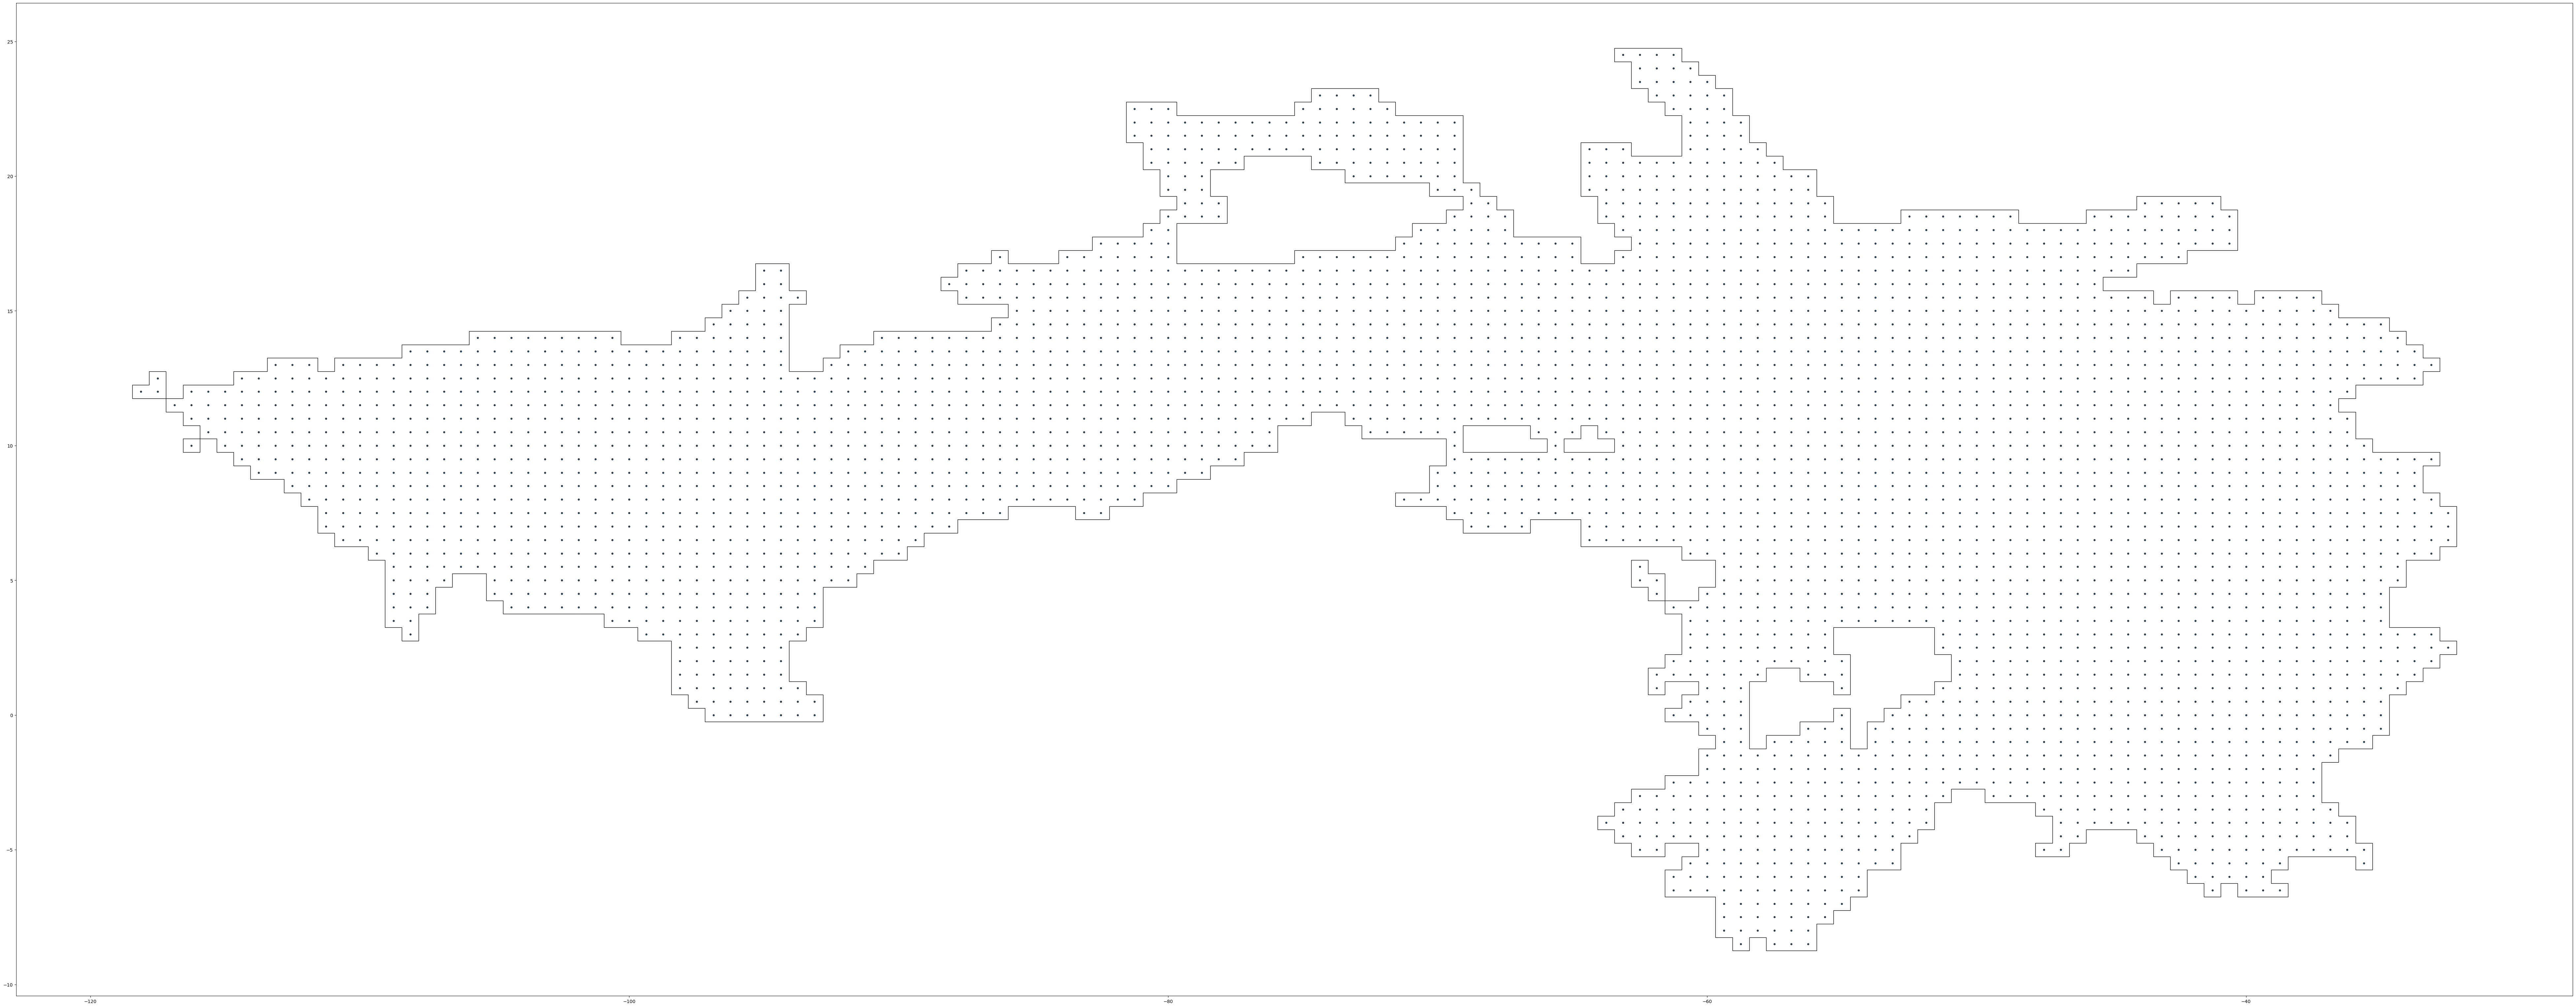

In [121]:
# 2748 / 14
# victim of coliniar bug; worked on second application of noise
AR = {'_id': '2001.012.010.012.0_14', 'raster': [(-58.75, -8.5, [254.2948760986328]), (-57.5, -8.5, [255.01087951660156]), (-56.875, -8.5, [277.0538330078125]), (-56.25, -8.5, [281.1220397949219]), (-59.375, -8.0, [266.4046630859375]), (-58.75, -8.0, [286.8592529296875]), (-58.125, -8.0, [299.1492614746094]), (-57.5, -8.0, [321.8543395996094]), (-56.875, -8.0, [349.8684387207031]), (-56.25, -8.0, [303.7120361328125]), (-59.375, -7.5, [271.9724426269531]), (-58.75, -7.5, [296.5422058105469]), (-58.125, -7.5, [326.02777099609375]), (-57.5, -7.5, [377.825439453125]), (-56.875, -7.5, [396.2035217285156]), (-56.25, -7.5, [336.67242431640625]), (-55.625, -7.5, [279.5030517578125]), (-59.375, -7.0, [267.6521911621094]), (-58.75, -7.0, [293.9858093261719]), (-58.125, -7.0, [324.535400390625]), (-57.5, -7.0, [381.4083557128906]), (-56.875, -7.0, [442.271728515625]), (-56.25, -7.0, [373.3047790527344]), (-55.625, -7.0, [318.614013671875]), (-55.0, -7.0, [276.41644287109375]), (-61.25, -6.5, [256.7104187011719]), (-60.625, -6.5, [255.22105407714844]), (-60.0, -6.5, [254.40228271484375]), (-59.375, -6.5, [267.72705078125]), (-58.75, -6.5, [288.10931396484375]), (-58.125, -6.5, [310.49090576171875]), (-57.5, -6.5, [340.3190002441406]), (-56.875, -6.5, [429.8484802246094]), (-56.25, -6.5, [404.9587097167969]), (-55.625, -6.5, [324.28619384765625]), (-55.0, -6.5, [293.6388244628906]), (-54.375, -6.5, [275.0325927734375]), (-41.25, -6.5, [260.05743408203125]), (-40.0, -6.5, [273.4064636230469]), (-39.375, -6.5, [280.0321350097656]), (-38.75, -6.5, [253.75376892089844]), (-61.25, -6.0, [259.5169982910156]), (-60.625, -6.0, [272.67706298828125]), (-60.0, -6.0, [267.4129638671875]), (-59.375, -6.0, [277.0964050292969]), (-58.75, -6.0, [287.2426452636719]), (-58.125, -6.0, [285.2431335449219]), (-57.5, -6.0, [277.8258361816406]), (-56.875, -6.0, [373.3701171875]), (-56.25, -6.0, [425.1045837402344]), (-55.625, -6.0, [369.9352722167969]), (-55.0, -6.0, [315.0829162597656]), (-54.375, -6.0, [297.9046630859375]), (-41.875, -6.0, [259.60845947265625]), (-41.25, -6.0, [274.7388610839844]), (-40.625, -6.0, [282.1704406738281]), (-40.0, -6.0, [284.3829040527344]), (-39.375, -6.0, [273.9522399902344]), (-60.625, -5.5, [264.60595703125]), (-60.0, -5.5, [269.8233337402344]), (-59.375, -5.5, [276.239501953125]), (-58.75, -5.5, [283.39434814453125]), (-58.125, -5.5, [273.6481628417969]), (-57.5, -5.5, [266.6888122558594]), (-56.875, -5.5, [348.0394287109375]), (-56.25, -5.5, [397.0969543457031]), (-55.625, -5.5, [382.38323974609375]), (-55.0, -5.5, [351.451171875]), (-54.375, -5.5, [325.35882568359375]), (-53.75, -5.5, [291.3720397949219]), (-53.125, -5.5, [254.9456787109375]), (-42.5, -5.5, [255.43228149414062]), (-41.875, -5.5, [284.60565185546875]), (-41.25, -5.5, [290.0072021484375]), (-40.625, -5.5, [281.77569580078125]), (-40.0, -5.5, [286.386474609375]), (-39.375, -5.5, [275.436767578125]), (-38.75, -5.5, [253.88014221191406]), (-35.625, -5.5, [256.7835998535156]), (-62.5, -5.0, [253.79920959472656]), (-61.875, -5.0, [250.15504455566406]), (-60.0, -5.0, [258.51568603515625]), (-59.375, -5.0, [263.15618896484375]), (-58.75, -5.0, [272.6380310058594]), (-58.125, -5.0, [273.6932067871094]), (-57.5, -5.0, [279.1247253417969]), (-56.875, -5.0, [331.7261047363281]), (-56.25, -5.0, [361.9352111816406]), (-55.625, -5.0, [341.443115234375]), (-55.0, -5.0, [344.3912658691406]), (-54.375, -5.0, [338.8098449707031]), (-53.75, -5.0, [308.78314208984375]), (-53.125, -5.0, [280.1123352050781]), (-47.5, -5.0, [259.7358703613281]), (-46.875, -5.0, [253.068603515625]), (-43.125, -5.0, [271.7962341308594]), (-42.5, -5.0, [299.4039611816406]), (-41.875, -5.0, [306.8239440917969]), (-41.25, -5.0, [292.57952880859375]), (-40.625, -5.0, [282.321044921875]), (-40.0, -5.0, [281.8763122558594]), (-39.375, -5.0, [282.7451171875]), (-38.75, -5.0, [269.21728515625]), (-38.125, -5.0, [255.55203247070312]), (-37.5, -5.0, [275.08001708984375]), (-36.875, -5.0, [272.4421081542969]), (-36.25, -5.0, [267.7217102050781]), (-35.625, -5.0, [257.6107482910156]), (-63.125, -4.5, [251.8669891357422]), (-62.5, -4.5, [263.60076904296875]), (-61.875, -4.5, [270.580078125]), (-61.25, -4.5, [267.9049072265625]), (-60.625, -4.5, [256.8858947753906]), (-60.0, -4.5, [256.10955810546875]), (-59.375, -4.5, [251.22503662109375]), (-58.75, -4.5, [261.5382080078125]), (-58.125, -4.5, [277.21551513671875]), (-57.5, -4.5, [279.9544982910156]), (-56.875, -4.5, [290.9229736328125]), (-56.25, -4.5, [329.1303405761719]), (-55.625, -4.5, [324.4289855957031]), (-55.0, -4.5, [320.91253662109375]), (-54.375, -4.5, [326.8466796875]), (-53.75, -4.5, [314.1649169921875]), (-53.125, -4.5, [293.801513671875]), (-52.5, -4.5, [270.536865234375]), (-46.875, -4.5, [273.24444580078125]), (-46.25, -4.5, [251.80105590820312]), (-43.75, -4.5, [339.8796691894531]), (-43.125, -4.5, [341.2101135253906]), (-42.5, -4.5, [336.9001159667969]), (-41.875, -4.5, [322.96282958984375]), (-41.25, -4.5, [329.71044921875]), (-40.625, -4.5, [302.2651672363281]), (-40.0, -4.5, [296.2039794921875]), (-39.375, -4.5, [307.5526123046875]), (-38.75, -4.5, [288.17529296875]), (-38.125, -4.5, [303.99395751953125]), (-37.5, -4.5, [285.30059814453125]), (-36.875, -4.5, [273.8526916503906]), (-36.25, -4.5, [261.64239501953125]), (-63.75, -4.0, [250.91607666015625]), (-63.125, -4.0, [265.7580261230469]), (-62.5, -4.0, [281.7818908691406]), (-61.875, -4.0, [295.6934814453125]), (-61.25, -4.0, [303.75360107421875]), (-60.625, -4.0, [282.3290100097656]), (-60.0, -4.0, [262.0060729980469]), (-59.375, -4.0, [254.21224975585938]), (-58.75, -4.0, [260.94805908203125]), (-58.125, -4.0, [274.70819091796875]), (-57.5, -4.0, [290.3981018066406]), (-56.875, -4.0, [302.8915100097656]), (-56.25, -4.0, [320.873291015625]), (-55.625, -4.0, [329.0858154296875]), (-55.0, -4.0, [319.24560546875]), (-54.375, -4.0, [319.05914306640625]), (-53.75, -4.0, [311.3421630859375]), (-53.125, -4.0, [298.1060485839844]), (-52.5, -4.0, [280.2796630859375]), (-51.875, -4.0, [254.93743896484375]), (-46.875, -4.0, [299.6924743652344]), (-46.25, -4.0, [304.8988952636719]), (-45.625, -4.0, [308.45831298828125]), (-45.0, -4.0, [351.3248291015625]), (-44.375, -4.0, [409.96630859375]), (-43.75, -4.0, [440.48150634765625]), (-43.125, -4.0, [387.4870300292969]), (-42.5, -4.0, [370.3978271484375]), (-41.875, -4.0, [338.151611328125]), (-41.25, -4.0, [362.5719299316406]), (-40.625, -4.0, [316.74420166015625]), (-40.0, -4.0, [336.326904296875]), (-39.375, -4.0, [308.0810241699219]), (-38.75, -4.0, [289.446044921875]), (-38.125, -4.0, [299.6543273925781]), (-37.5, -4.0, [276.7055358886719]), (-36.875, -4.0, [270.1317443847656]), (-36.25, -4.0, [259.79547119140625]), (-63.125, -3.5, [262.9953308105469]), (-62.5, -3.5, [282.0552673339844]), (-61.875, -3.5, [299.4960632324219]), (-61.25, -3.5, [312.6851501464844]), (-60.625, -3.5, [303.4293518066406]), (-60.0, -3.5, [277.383056640625]), (-59.375, -3.5, [264.8742370605469]), (-58.75, -3.5, [260.01727294921875]), (-58.125, -3.5, [265.8376770019531]), (-57.5, -3.5, [293.2807922363281]), (-56.875, -3.5, [315.38720703125]), (-56.25, -3.5, [326.07098388671875]), (-55.625, -3.5, [334.4013977050781]), (-55.0, -3.5, [318.51318359375]), (-54.375, -3.5, [304.76239013671875]), (-53.75, -3.5, [296.8050537109375]), (-53.125, -3.5, [291.9512939453125]), (-52.5, -3.5, [278.41094970703125]), (-51.875, -3.5, [260.4896545410156]), (-47.5, -3.5, [276.7876892089844]), (-46.875, -3.5, [317.4657287597656]), (-46.25, -3.5, [340.02655029296875]), (-45.625, -3.5, [364.44976806640625]), (-45.0, -3.5, [466.1375732421875]), (-44.375, -3.5, [530.533203125]), (-43.75, -3.5, [463.30059814453125]), (-43.125, -3.5, [430.6856689453125]), (-42.5, -3.5, [394.9023132324219]), (-41.875, -3.5, [353.1433410644531]), (-41.25, -3.5, [343.5141906738281]), (-40.625, -3.5, [323.0728454589844]), (-40.0, -3.5, [313.8733215332031]), (-39.375, -3.5, [300.72747802734375]), (-38.75, -3.5, [316.5555114746094]), (-38.125, -3.5, [290.03973388671875]), (-37.5, -3.5, [267.08453369140625]), (-36.875, -3.5, [260.8096618652344]), (-62.5, -3.0, [255.7588653564453]), (-61.875, -3.0, [278.1201171875]), (-61.25, -3.0, [302.09576416015625]), (-60.625, -3.0, [317.0364074707031]), (-60.0, -3.0, [299.6792297363281]), (-59.375, -3.0, [281.10955810546875]), (-58.75, -3.0, [267.9385681152344]), (-58.125, -3.0, [261.8800354003906]), (-57.5, -3.0, [277.1568298339844]), (-56.875, -3.0, [299.90399169921875]), (-56.25, -3.0, [322.7145080566406]), (-55.625, -3.0, [334.2079162597656]), (-55.0, -3.0, [312.1616516113281]), (-54.375, -3.0, [290.77947998046875]), (-53.75, -3.0, [276.8744812011719]), (-53.125, -3.0, [272.81011962890625]), (-52.5, -3.0, [270.66986083984375]), (-51.875, -3.0, [267.9544677734375]), (-51.25, -3.0, [258.47991943359375]), (-49.375, -3.0, [261.1758728027344]), (-48.75, -3.0, [272.0154724121094]), (-48.125, -3.0, [274.6707458496094]), (-47.5, -3.0, [287.20135498046875]), (-46.875, -3.0, [311.7915344238281]), (-46.25, -3.0, [339.0135192871094]), (-45.625, -3.0, [368.78948974609375]), (-45.0, -3.0, [477.92425537109375]), (-44.375, -3.0, [506.30670166015625]), (-43.75, -3.0, [448.3648376464844]), (-43.125, -3.0, [438.3036804199219]), (-42.5, -3.0, [397.884521484375]), (-41.875, -3.0, [367.5287170410156]), (-41.25, -3.0, [347.95196533203125]), (-40.625, -3.0, [333.634033203125]), (-40.0, -3.0, [331.8151550292969]), (-39.375, -3.0, [320.06298828125]), (-38.75, -3.0, [307.2972106933594]), (-38.125, -3.0, [284.94415283203125]), (-37.5, -3.0, [264.8167419433594]), (-61.25, -2.5, [258.57147216796875]), (-60.625, -2.5, [298.6417541503906]), (-60.0, -2.5, [312.22576904296875]), (-59.375, -2.5, [301.57489013671875]), (-58.75, -2.5, [295.96722412109375]), (-58.125, -2.5, [292.2569274902344]), (-57.5, -2.5, [290.2336730957031]), (-56.875, -2.5, [295.5958251953125]), (-56.25, -2.5, [320.6979064941406]), (-55.625, -2.5, [348.7351379394531]), (-55.0, -2.5, [330.9124450683594]), (-54.375, -2.5, [311.5382995605469]), (-53.75, -2.5, [275.30389404296875]), (-53.125, -2.5, [272.07476806640625]), (-52.5, -2.5, [276.01763916015625]), (-51.875, -2.5, [283.5243835449219]), (-51.25, -2.5, [291.1775817871094]), (-50.625, -2.5, [301.42620849609375]), (-50.0, -2.5, [366.5045166015625]), (-49.375, -2.5, [413.9851379394531]), (-48.75, -2.5, [322.4917297363281]), (-48.125, -2.5, [301.2411804199219]), (-47.5, -2.5, [297.5595703125]), (-46.875, -2.5, [304.4259033203125]), (-46.25, -2.5, [321.2505187988281]), (-45.625, -2.5, [341.2643737792969]), (-45.0, -2.5, [416.9676513671875]), (-44.375, -2.5, [459.1054382324219]), (-43.75, -2.5, [429.8658142089844]), (-43.125, -2.5, [381.5404357910156]), (-42.5, -2.5, [357.2851257324219]), (-41.875, -2.5, [345.718017578125]), (-41.25, -2.5, [341.7690124511719]), (-40.625, -2.5, [332.94537353515625]), (-40.0, -2.5, [325.5610046386719]), (-39.375, -2.5, [311.77447509765625]), (-38.75, -2.5, [294.7393493652344]), (-38.125, -2.5, [277.18865966796875]), (-37.5, -2.5, [260.8250732421875]), (-60.0, -2.0, [299.7600402832031]), (-59.375, -2.0, [305.15655517578125]), (-58.75, -2.0, [297.62799072265625]), (-58.125, -2.0, [305.7629699707031]), (-57.5, -2.0, [317.4359436035156]), (-56.875, -2.0, [317.3922424316406]), (-56.25, -2.0, [320.7323303222656]), (-55.625, -2.0, [340.17059326171875]), (-55.0, -2.0, [318.4635009765625]), (-54.375, -2.0, [300.8787536621094]), (-53.75, -2.0, [277.0926513671875]), (-53.125, -2.0, [308.6663513183594]), (-52.5, -2.0, [296.21844482421875]), (-51.875, -2.0, [299.3726501464844]), (-51.25, -2.0, [327.8719482421875]), (-50.625, -2.0, [350.2628173828125]), (-50.0, -2.0, [420.0921936035156]), (-49.375, -2.0, [429.7268981933594]), (-48.75, -2.0, [330.1785583496094]), (-48.125, -2.0, [314.5079345703125]), (-47.5, -2.0, [311.6265563964844]), (-46.875, -2.0, [312.391357421875]), (-46.25, -2.0, [317.84600830078125]), (-45.625, -2.0, [326.0799865722656]), (-45.0, -2.0, [369.703857421875]), (-44.375, -2.0, [400.1751403808594]), (-43.75, -2.0, [393.56610107421875]), (-43.125, -2.0, [365.9061279296875]), (-42.5, -2.0, [353.294921875]), (-41.875, -2.0, [343.82696533203125]), (-41.25, -2.0, [333.28082275390625]), (-40.625, -2.0, [323.6131896972656]), (-40.0, -2.0, [314.50396728515625]), (-39.375, -2.0, [300.7637023925781]), (-38.75, -2.0, [283.8731994628906]), (-38.125, -2.0, [268.91204833984375]), (-37.5, -2.0, [255.5469970703125]), (-60.0, -1.5, [287.97650146484375]), (-59.375, -1.5, [316.98394775390625]), (-58.75, -1.5, [278.6158447265625]), (-58.125, -1.5, [273.33740234375]), (-57.5, -1.5, [296.62115478515625]), (-56.875, -1.5, [309.0345458984375]), (-56.25, -1.5, [302.6834411621094]), (-55.625, -1.5, [300.125244140625]), (-55.0, -1.5, [277.0874328613281]), (-54.375, -1.5, [262.5541076660156]), (-53.75, -1.5, [274.5986022949219]), (-53.125, -1.5, [321.4129638671875]), (-52.5, -1.5, [329.6619567871094]), (-51.875, -1.5, [330.59765625]), (-51.25, -1.5, [331.01361083984375]), (-50.625, -1.5, [335.9435729980469]), (-50.0, -1.5, [350.39263916015625]), (-49.375, -1.5, [359.1509704589844]), (-48.75, -1.5, [345.0949401855469]), (-48.125, -1.5, [343.875244140625]), (-47.5, -1.5, [319.8873596191406]), (-46.875, -1.5, [322.523193359375]), (-46.25, -1.5, [351.1304016113281]), (-45.625, -1.5, [360.16845703125]), (-45.0, -1.5, [359.64312744140625]), (-44.375, -1.5, [358.49481201171875]), (-43.75, -1.5, [355.6358947753906]), (-43.125, -1.5, [348.7244567871094]), (-42.5, -1.5, [341.77783203125]), (-41.875, -1.5, [333.125]), (-41.25, -1.5, [321.64337158203125]), (-40.625, -1.5, [312.1979675292969]), (-40.0, -1.5, [304.2984924316406]), (-39.375, -1.5, [293.4103698730469]), (-38.75, -1.5, [281.6666564941406]), (-38.125, -1.5, [269.2067565917969]), (-37.5, -1.5, [257.4109802246094]), (-36.875, -1.5, [250.8630828857422]), (-59.375, -1.0, [305.8133544921875]), (-58.75, -1.0, [272.7919616699219]), (-57.5, -1.0, [250.30064392089844]), (-56.875, -1.0, [294.4932556152344]), (-56.25, -1.0, [316.19195556640625]), (-55.625, -1.0, [301.8680725097656]), (-55.0, -1.0, [253.86204528808594]), (-53.75, -1.0, [252.5605010986328]), (-53.125, -1.0, [293.4369812011719]), (-52.5, -1.0, [311.47515869140625]), (-51.875, -1.0, [336.5575256347656]), (-51.25, -1.0, [334.3143310546875]), (-50.625, -1.0, [330.34967041015625]), (-50.0, -1.0, [335.5071716308594]), (-49.375, -1.0, [350.9344177246094]), (-48.75, -1.0, [363.24139404296875]), (-48.125, -1.0, [368.5828552246094]), (-47.5, -1.0, [372.95623779296875]), (-46.875, -1.0, [372.30889892578125]), (-46.25, -1.0, [372.4958190917969]), (-45.625, -1.0, [373.2742004394531]), (-45.0, -1.0, [360.2470397949219]), (-44.375, -1.0, [344.30450439453125]), (-43.75, -1.0, [337.6963195800781]), (-43.125, -1.0, [333.1988830566406]), (-42.5, -1.0, [326.9492492675781]), (-41.875, -1.0, [321.0707702636719]), (-41.25, -1.0, [313.5286560058594]), (-40.625, -1.0, [305.44049072265625]), (-40.0, -1.0, [297.4857482910156]), (-39.375, -1.0, [290.85516357421875]), (-38.75, -1.0, [283.1916198730469]), (-38.125, -1.0, [270.8514404296875]), (-37.5, -1.0, [260.23309326171875]), (-36.875, -1.0, [258.02398681640625]), (-36.25, -1.0, [258.38653564453125]), (-35.625, -1.0, [253.98501586914062]), (-60.0, -0.5, [342.8447265625]), (-59.375, -0.5, [317.1509704589844]), (-58.75, -0.5, [279.7207946777344]), (-56.25, -0.5, [288.3291320800781]), (-55.625, -0.5, [281.5201110839844]), (-55.0, -0.5, [254.15223693847656]), (-53.75, -0.5, [260.7490234375]), (-53.125, -0.5, [278.15252685546875]), (-52.5, -0.5, [296.4725341796875]), (-51.875, -0.5, [307.40472412109375]), (-51.25, -0.5, [324.03033447265625]), (-50.625, -0.5, [324.9541015625]), (-50.0, -0.5, [332.8525085449219]), (-49.375, -0.5, [343.89215087890625]), (-48.75, -0.5, [371.95330810546875]), (-48.125, -0.5, [383.32672119140625]), (-47.5, -0.5, [386.1136779785156]), (-46.875, -0.5, [386.2838439941406]), (-46.25, -0.5, [381.48052978515625]), (-45.625, -0.5, [370.9519958496094]), (-45.0, -0.5, [351.40545654296875]), (-44.375, -0.5, [334.0570068359375]), (-43.75, -0.5, [327.68359375]), (-43.125, -0.5, [321.09307861328125]), (-42.5, -0.5, [313.5405578613281]), (-41.875, -0.5, [306.751220703125]), (-41.25, -0.5, [300.41510009765625]), (-40.625, -0.5, [295.3759765625]), (-40.0, -0.5, [290.9956970214844]), (-39.375, -0.5, [287.97125244140625]), (-38.75, -0.5, [281.2143859863281]), (-38.125, -0.5, [271.3166198730469]), (-37.5, -0.5, [265.6582946777344]), (-36.875, -0.5, [266.79840087890625]), (-36.25, -0.5, [268.8189392089844]), (-35.625, -0.5, [264.68475341796875]), (-35.0, -0.5, [256.7195739746094]), (-96.875, -1.7975103014118005e-13, [254.31031799316406]), (-96.25, -1.7975103014118005e-13, [257.2947082519531]), (-95.625, -1.7975103014118005e-13, [256.8133544921875]), (-95.0, -1.7975103014118005e-13, [255.89645385742188]), (-94.375, -1.7975103014118005e-13, [256.3277587890625]), (-93.75, -1.7975103014118005e-13, [253.67279052734375]), (-93.125, -1.7975103014118005e-13, [252.02316284179688]), (-61.25, -1.7975103014118005e-13, [288.99530029296875]), (-60.625, -1.7975103014118005e-13, [373.1811218261719]), (-60.0, -1.7975103014118005e-13, [393.30841064453125]), (-59.375, -1.7975103014118005e-13, [326.86578369140625]), (-58.75, -1.7975103014118005e-13, [276.2549133300781]), (-55.0, -1.7975103014118005e-13, [250.2740478515625]), (-53.125, -1.7975103014118005e-13, [263.2250061035156]), (-52.5, -1.7975103014118005e-13, [278.42034912109375]), (-51.875, -1.7975103014118005e-13, [285.74908447265625]), (-51.25, -1.7975103014118005e-13, [309.0525817871094]), (-50.625, -1.7975103014118005e-13, [313.2738952636719]), (-50.0, -1.7975103014118005e-13, [319.623291015625]), (-49.375, -1.7975103014118005e-13, [331.6190185546875]), (-48.75, -1.7975103014118005e-13, [350.2886962890625]), (-48.125, -1.7975103014118005e-13, [362.22222900390625]), (-47.5, -1.7975103014118005e-13, [366.03369140625]), (-46.875, -1.7975103014118005e-13, [365.3358154296875]), (-46.25, -1.7975103014118005e-13, [362.62811279296875]), (-45.625, -1.7975103014118005e-13, [354.6908264160156]), (-45.0, -1.7975103014118005e-13, [342.9666748046875]), (-44.375, -1.7975103014118005e-13, [327.5581359863281]), (-43.75, -1.7975103014118005e-13, [317.9091491699219]), (-43.125, -1.7975103014118005e-13, [311.52899169921875]), (-42.5, -1.7975103014118005e-13, [304.0350341796875]), (-41.875, -1.7975103014118005e-13, [297.0282897949219]), (-41.25, -1.7975103014118005e-13, [291.21185302734375]), (-40.625, -1.7975103014118005e-13, [288.76849365234375]), (-40.0, -1.7975103014118005e-13, [286.0594177246094]), (-39.375, -1.7975103014118005e-13, [281.633544921875]), (-38.75, -1.7975103014118005e-13, [276.06463623046875]), (-38.125, -1.7975103014118005e-13, [273.6509704589844]), (-37.5, -1.7975103014118005e-13, [273.4833068847656]), (-36.875, -1.7975103014118005e-13, [273.9692077636719]), (-36.25, -1.7975103014118005e-13, [272.32427978515625]), (-35.625, -1.7975103014118005e-13, [265.4137878417969]), (-35.0, -1.7975103014118005e-13, [255.51182556152344]), (-97.5, 0.5, [256.7761535644531]), (-96.875, 0.5, [262.9199523925781]), (-96.25, 0.5, [265.02978515625]), (-95.625, 0.5, [264.5418701171875]), (-95.0, 0.5, [263.7173767089844]), (-94.375, 0.5, [262.4422607421875]), (-93.75, 0.5, [257.4781799316406]), (-93.125, 0.5, [253.12669372558594]), (-60.625, 0.5, [297.8866882324219]), (-60.0, 0.5, [325.5685119628906]), (-59.375, 0.5, [301.98370361328125]), (-58.75, 0.5, [269.06719970703125]), (-52.5, 0.5, [260.01177978515625]), (-51.875, 0.5, [265.4966735839844]), (-51.25, 0.5, [289.932373046875]), (-50.625, 0.5, [296.7187805175781]), (-50.0, 0.5, [309.4212646484375]), (-49.375, 0.5, [321.16094970703125]), (-48.75, 0.5, [325.7108459472656]), (-48.125, 0.5, [331.69342041015625]), (-47.5, 0.5, [334.1424560546875]), (-46.875, 0.5, [332.6928405761719]), (-46.25, 0.5, [334.7699890136719]), (-45.625, 0.5, [335.41619873046875]), (-45.0, 0.5, [329.67315673828125]), (-44.375, 0.5, [318.65728759765625]), (-43.75, 0.5, [306.4706115722656]), (-43.125, 0.5, [297.46307373046875]), (-42.5, 0.5, [291.14678955078125]), (-41.875, 0.5, [287.0135192871094]), (-41.25, 0.5, [285.8516845703125]), (-40.625, 0.5, [285.5787658691406]), (-40.0, 0.5, [282.8280944824219]), (-39.375, 0.5, [277.3217468261719]), (-38.75, 0.5, [275.72418212890625]), (-38.125, 0.5, [278.722412109375]), (-37.5, 0.5, [279.7456359863281]), (-36.875, 0.5, [277.3656311035156]), (-36.25, 0.5, [272.20977783203125]), (-35.625, 0.5, [263.5091857910156]), (-35.0, 0.5, [254.4927520751953]), (-98.125, 1.0, [252.24148559570312]), (-97.5, 1.0, [259.1419372558594]), (-96.875, 1.0, [265.179931640625]), (-96.25, 1.0, [267.05224609375]), (-95.625, 1.0, [267.32635498046875]), (-95.0, 1.0, [265.7001953125]), (-94.375, 1.0, [261.4160461425781]), (-93.75, 1.0, [254.5015869140625]), (-61.875, 1.0, [262.2480163574219]), (-60.0, 1.0, [267.0157470703125]), (-59.375, 1.0, [284.9575500488281]), (-58.75, 1.0, [261.6165771484375]), (-55.0, 1.0, [253.40225219726562]), (-51.25, 1.0, [253.71188354492188]), (-50.625, 1.0, [276.13214111328125]), (-50.0, 1.0, [289.83709716796875]), (-49.375, 1.0, [304.1869812011719]), (-48.75, 1.0, [309.8080139160156]), (-48.125, 1.0, [312.42584228515625]), (-47.5, 1.0, [311.6427307128906]), (-46.875, 1.0, [308.6044006347656]), (-46.25, 1.0, [307.83221435546875]), (-45.625, 1.0, [312.0030212402344]), (-45.0, 1.0, [312.16741943359375]), (-44.375, 1.0, [307.1057434082031]), (-43.75, 1.0, [297.4008483886719]), (-43.125, 1.0, [286.5933532714844]), (-42.5, 1.0, [280.1622314453125]), (-41.875, 1.0, [278.0238952636719]), (-41.25, 1.0, [280.7870178222656]), (-40.625, 1.0, [282.8721923828125]), (-40.0, 1.0, [280.64752197265625]), (-39.375, 1.0, [277.7578430175781]), (-38.75, 1.0, [283.27508544921875]), (-38.125, 1.0, [288.60650634765625]), (-37.5, 1.0, [287.8693542480469]), (-36.875, 1.0, [283.8712158203125]), (-36.25, 1.0, [278.7315979003906]), (-35.625, 1.0, [271.54083251953125]), (-35.0, 1.0, [263.53546142578125]), (-34.375, 1.0, [255.78904724121094]), (-98.125, 1.5, [251.5462188720703]), (-97.5, 1.5, [257.1315612792969]), (-96.875, 1.5, [261.6031188964844]), (-96.25, 1.5, [264.3450927734375]), (-95.625, 1.5, [265.58807373046875]), (-95.0, 1.5, [263.21099853515625]), (-94.375, 1.5, [256.936767578125]), (-61.875, 1.5, [286.236572265625]), (-61.25, 1.5, [341.1755676269531]), (-60.625, 1.5, [278.7893371582031]), (-60.0, 1.5, [273.2405090332031]), (-59.375, 1.5, [271.3863220214844]), (-58.75, 1.5, [266.2950439453125]), (-58.125, 1.5, [261.02764892578125]), (-56.25, 1.5, [270.93218994140625]), (-55.625, 1.5, [283.5792541503906]), (-55.0, 1.5, [262.1866760253906]), (-50.625, 1.5, [260.5017395019531]), (-50.0, 1.5, [269.9900207519531]), (-49.375, 1.5, [284.7799072265625]), (-48.75, 1.5, [291.72027587890625]), (-48.125, 1.5, [295.0050048828125]), (-47.5, 1.5, [295.32501220703125]), (-46.875, 1.5, [292.5344543457031]), (-46.25, 1.5, [291.3936462402344]), (-45.625, 1.5, [297.71490478515625]), (-45.0, 1.5, [301.3534240722656]), (-44.375, 1.5, [300.9522399902344]), (-43.75, 1.5, [296.7492980957031]), (-43.125, 1.5, [289.89959716796875]), (-42.5, 1.5, [281.0003356933594]), (-41.875, 1.5, [275.7638244628906]), (-41.25, 1.5, [276.8729553222656]), (-40.625, 1.5, [279.50482177734375]), (-40.0, 1.5, [279.8443298339844]), (-39.375, 1.5, [281.925048828125]), (-38.75, 1.5, [291.1039123535156]), (-38.125, 1.5, [296.69488525390625]), (-37.5, 1.5, [294.54779052734375]), (-36.875, 1.5, [291.1440734863281]), (-36.25, 1.5, [288.3609924316406]), (-35.625, 1.5, [283.9013366699219]), (-35.0, 1.5, [275.4410095214844]), (-34.375, 1.5, [265.2090148925781]), (-33.75, 1.5, [255.91519165039062]), (-98.125, 2.0, [250.47518920898438]), (-97.5, 2.0, [254.5401611328125]), (-96.875, 2.0, [256.1795959472656]), (-96.25, 2.0, [258.3061828613281]), (-95.625, 2.0, [259.1439514160156]), (-95.0, 2.0, [257.3138427734375]), (-94.375, 2.0, [253.4353485107422]), (-61.25, 2.0, [269.40972900390625]), (-60.625, 2.0, [276.0821838378906]), (-60.0, 2.0, [285.1849365234375]), (-59.375, 2.0, [294.8294677734375]), (-58.75, 2.0, [281.4730224609375]), (-58.125, 2.0, [284.99530029296875]), (-57.5, 2.0, [278.8488464355469]), (-56.875, 2.0, [283.1902160644531]), (-56.25, 2.0, [300.2616271972656]), (-55.625, 2.0, [291.1017150878906]), (-55.0, 2.0, [255.60140991210938]), (-50.625, 2.0, [262.11688232421875]), (-50.0, 2.0, [273.1739807128906]), (-49.375, 2.0, [281.1236267089844]), (-48.75, 2.0, [281.8955383300781]), (-48.125, 2.0, [282.4898986816406]), (-47.5, 2.0, [282.64794921875]), (-46.875, 2.0, [284.8151550292969]), (-46.25, 2.0, [287.1645812988281]), (-45.625, 2.0, [289.1358337402344]), (-45.0, 2.0, [290.8458251953125]), (-44.375, 2.0, [292.0262451171875]), (-43.75, 2.0, [291.27569580078125]), (-43.125, 2.0, [289.2268371582031]), (-42.5, 2.0, [284.53765869140625]), (-41.875, 2.0, [277.9910888671875]), (-41.25, 2.0, [277.3952331542969]), (-40.625, 2.0, [279.2635192871094]), (-40.0, 2.0, [282.0079345703125]), (-39.375, 2.0, [287.4121398925781]), (-38.75, 2.0, [295.4615478515625]), (-38.125, 2.0, [299.00958251953125]), (-37.5, 2.0, [296.2968444824219]), (-36.875, 2.0, [294.3021545410156]), (-36.25, 2.0, [293.1195373535156]), (-35.625, 2.0, [290.2243347167969]), (-35.0, 2.0, [284.0665283203125]), (-34.375, 2.0, [273.408447265625]), (-33.75, 2.0, [264.48809814453125]), (-33.125, 2.0, [256.3246154785156]), (-98.125, 2.5, [254.9318084716797]), (-97.5, 2.5, [258.8199462890625]), (-96.875, 2.5, [257.368896484375]), (-96.25, 2.5, [257.46380615234375]), (-95.625, 2.5, [259.73919677734375]), (-95.0, 2.5, [262.562255859375]), (-94.375, 2.5, [258.673583984375]), (-60.625, 2.5, [277.1761779785156]), (-60.0, 2.5, [288.6427917480469]), (-59.375, 2.5, [301.25982666015625]), (-58.75, 2.5, [299.7815856933594]), (-58.125, 2.5, [286.958251953125]), (-57.5, 2.5, [309.9354553222656]), (-56.875, 2.5, [311.387939453125]), (-56.25, 2.5, [297.2458190917969]), (-55.625, 2.5, [264.0076904296875]), (-51.25, 2.5, [262.8869323730469]), (-50.625, 2.5, [275.4971008300781]), (-50.0, 2.5, [282.54095458984375]), (-49.375, 2.5, [289.3365173339844]), (-48.75, 2.5, [292.2856140136719]), (-48.125, 2.5, [294.7170715332031]), (-47.5, 2.5, [295.7188415527344]), (-46.875, 2.5, [295.6258544921875]), (-46.25, 2.5, [295.1829833984375]), (-45.625, 2.5, [295.5697021484375]), (-45.0, 2.5, [295.12188720703125]), (-44.375, 2.5, [291.6019287109375]), (-43.75, 2.5, [289.5274658203125]), (-43.125, 2.5, [289.095947265625]), (-42.5, 2.5, [291.0776672363281]), (-41.875, 2.5, [288.71710205078125]), (-41.25, 2.5, [285.9001159667969]), (-40.625, 2.5, [286.9057312011719]), (-40.0, 2.5, [289.2851867675781]), (-39.375, 2.5, [293.9983825683594]), (-38.75, 2.5, [298.13714599609375]), (-38.125, 2.5, [298.4391784667969]), (-37.5, 2.5, [293.1463317871094]), (-36.875, 2.5, [291.7594299316406]), (-36.25, 2.5, [291.024658203125]), (-35.625, 2.5, [287.86444091796875]), (-35.0, 2.5, [283.4671630859375]), (-34.375, 2.5, [274.6275329589844]), (-33.75, 2.5, [266.4737548828125]), (-33.125, 2.5, [259.54608154296875]), (-32.5, 2.5, [252.53158569335938]), (-108.125, 3.0, [255.5105438232422]), (-99.375, 3.0, [253.7554168701172]), (-98.75, 3.0, [259.74810791015625]), (-98.125, 3.0, [265.80218505859375]), (-97.5, 3.0, [268.7511291503906]), (-96.875, 3.0, [264.5470275878906]), (-96.25, 3.0, [263.2366027832031]), (-95.625, 3.0, [268.87158203125]), (-95.0, 3.0, [268.8485412597656]), (-94.375, 3.0, [261.8028259277344]), (-93.75, 3.0, [253.65927124023438]), (-60.625, 3.0, [269.37445068359375]), (-60.0, 3.0, [283.4957275390625]), (-59.375, 3.0, [292.0656433105469]), (-58.75, 3.0, [286.74591064453125]), (-58.125, 3.0, [288.39794921875]), (-57.5, 3.0, [299.11102294921875]), (-56.875, 3.0, [300.8311767578125]), (-56.25, 3.0, [278.4594421386719]), (-55.625, 3.0, [266.6581726074219]), (-51.25, 3.0, [264.2221984863281]), (-50.625, 3.0, [274.3663024902344]), (-50.0, 3.0, [283.18463134765625]), (-49.375, 3.0, [295.21990966796875]), (-48.75, 3.0, [302.4107971191406]), (-48.125, 3.0, [304.1788635253906]), (-47.5, 3.0, [305.3439025878906]), (-46.875, 3.0, [306.8213806152344]), (-46.25, 3.0, [311.0964050292969]), (-45.625, 3.0, [314.3434143066406]), (-45.0, 3.0, [313.23468017578125]), (-44.375, 3.0, [308.3822326660156]), (-43.75, 3.0, [302.8924560546875]), (-43.125, 3.0, [297.50689697265625]), (-42.5, 3.0, [297.8216552734375]), (-41.875, 3.0, [301.8326110839844]), (-41.25, 3.0, [306.96307373046875]), (-40.625, 3.0, [310.62750244140625]), (-40.0, 3.0, [311.9385681152344]), (-39.375, 3.0, [311.26470947265625]), (-38.75, 3.0, [306.2997741699219]), (-38.125, 3.0, [299.6986999511719]), (-37.5, 3.0, [290.601806640625]), (-36.875, 3.0, [288.487548828125]), (-36.25, 3.0, [285.1646728515625]), (-35.625, 3.0, [278.1068115234375]), (-35.0, 3.0, [271.5255432128906]), (-34.375, 3.0, [263.4031677246094]), (-33.75, 3.0, [256.9803771972656]), (-33.125, 3.0, [251.49595642089844]), (-108.75, 3.5, [257.56512451171875]), (-108.125, 3.5, [254.17904663085938]), (-100.625, 3.5, [252.62379455566406]), (-100.0, 3.5, [257.4358825683594]), (-99.375, 3.5, [261.21417236328125]), (-98.75, 3.5, [268.0130310058594]), (-98.125, 3.5, [274.6890869140625]), (-97.5, 3.5, [275.92681884765625]), (-96.875, 3.5, [273.3518981933594]), (-96.25, 3.5, [274.6217956542969]), (-95.625, 3.5, [276.59674072265625]), (-95.0, 3.5, [272.680908203125]), (-94.375, 3.5, [264.40435791015625]), (-93.75, 3.5, [259.03118896484375]), (-93.125, 3.5, [250.44866943359375]), (-60.625, 3.5, [265.59234619140625]), (-60.0, 3.5, [289.94097900390625]), (-59.375, 3.5, [285.6199951171875]), (-58.75, 3.5, [275.91131591796875]), (-58.125, 3.5, [281.0268249511719]), (-57.5, 3.5, [287.0354919433594]), (-56.875, 3.5, [271.3392333984375]), (-56.25, 3.5, [269.0611267089844]), (-55.625, 3.5, [268.0224914550781]), (-55.0, 3.5, [262.9241943359375]), (-54.375, 3.5, [271.74053955078125]), (-53.75, 3.5, [272.6081848144531]), (-53.125, 3.5, [273.9404602050781]), (-52.5, 3.5, [274.369140625]), (-51.875, 3.5, [271.24969482421875]), (-51.25, 3.5, [284.225830078125]), (-50.625, 3.5, [287.4412536621094]), (-50.0, 3.5, [292.903076171875]), (-49.375, 3.5, [300.791015625]), (-48.75, 3.5, [308.9684143066406]), (-48.125, 3.5, [311.02166748046875]), (-47.5, 3.5, [307.8635559082031]), (-46.875, 3.5, [311.5534362792969]), (-46.25, 3.5, [322.45257568359375]), (-45.625, 3.5, [331.73321533203125]), (-45.0, 3.5, [334.0157165527344]), (-44.375, 3.5, [329.3805847167969]), (-43.75, 3.5, [319.3124084472656]), (-43.125, 3.5, [305.4382629394531]), (-42.5, 3.5, [300.8807373046875]), (-41.875, 3.5, [306.2532043457031]), (-41.25, 3.5, [319.572265625]), (-40.625, 3.5, [328.7898254394531]), (-40.0, 3.5, [330.37310791015625]), (-39.375, 3.5, [330.87884521484375]), (-38.75, 3.5, [324.716796875]), (-38.125, 3.5, [312.35699462890625]), (-37.5, 3.5, [297.4643859863281]), (-36.875, 3.5, [287.7449645996094]), (-36.25, 3.5, [277.09912109375]), (-35.625, 3.5, [265.9432373046875]), (-35.0, 3.5, [257.37286376953125]), (-108.75, 4.0, [263.7537841796875]), (-108.125, 4.0, [265.2937316894531]), (-107.5, 4.0, [251.9691162109375]), (-104.375, 4.0, [254.48739624023438]), (-103.75, 4.0, [257.9081115722656]), (-103.125, 4.0, [255.70059204101562]), (-102.5, 4.0, [255.04698181152344]), (-101.875, 4.0, [264.5264587402344]), (-101.25, 4.0, [266.8360290527344]), (-100.625, 4.0, [270.2779846191406]), (-100.0, 4.0, [272.7498779296875]), (-99.375, 4.0, [274.828125]), (-98.75, 4.0, [279.7702941894531]), (-98.125, 4.0, [286.5431213378906]), (-97.5, 4.0, [288.7036437988281]), (-96.875, 4.0, [287.3437805175781]), (-96.25, 4.0, [287.7137451171875]), (-95.625, 4.0, [289.39178466796875]), (-95.0, 4.0, [285.7684020996094]), (-94.375, 4.0, [275.0078125]), (-93.75, 4.0, [263.29083251953125]), (-93.125, 4.0, [253.0502471923828]), (-61.25, 4.0, [255.55224609375]), (-60.625, 4.0, [271.6041259765625]), (-60.0, 4.0, [295.3788146972656]), (-59.375, 4.0, [292.634033203125]), (-58.75, 4.0, [275.2573547363281]), (-58.125, 4.0, [280.1743469238281]), (-57.5, 4.0, [287.46600341796875]), (-56.875, 4.0, [293.52801513671875]), (-56.25, 4.0, [287.5386047363281]), (-55.625, 4.0, [274.5276184082031]), (-55.0, 4.0, [280.7063293457031]), (-54.375, 4.0, [296.560546875]), (-53.75, 4.0, [303.35833740234375]), (-53.125, 4.0, [307.2570495605469]), (-52.5, 4.0, [309.7542724609375]), (-51.875, 4.0, [311.5990295410156]), (-51.25, 4.0, [332.7419128417969]), (-50.625, 4.0, [333.5631408691406]), (-50.0, 4.0, [336.5159606933594]), (-49.375, 4.0, [340.9032287597656]), (-48.75, 4.0, [346.8355407714844]), (-48.125, 4.0, [348.6436767578125]), (-47.5, 4.0, [343.92987060546875]), (-46.875, 4.0, [343.684326171875]), (-46.25, 4.0, [353.75982666015625]), (-45.625, 4.0, [363.353271484375]), (-45.0, 4.0, [366.5408630371094]), (-44.375, 4.0, [360.8233642578125]), (-43.75, 4.0, [343.72320556640625]), (-43.125, 4.0, [311.29901123046875]), (-42.5, 4.0, [305.9617919921875]), (-41.875, 4.0, [344.9527587890625]), (-41.25, 4.0, [363.32000732421875]), (-40.625, 4.0, [368.8631286621094]), (-40.0, 4.0, [374.86785888671875]), (-39.375, 4.0, [376.1514587402344]), (-38.75, 4.0, [363.5992126464844]), (-38.125, 4.0, [338.8179931640625]), (-37.5, 4.0, [313.24072265625]), (-36.875, 4.0, [294.3955993652344]), (-36.25, 4.0, [279.9336242675781]), (-35.625, 4.0, [266.1831970214844]), (-35.0, 4.0, [254.9407501220703]), (-108.75, 4.5, [265.0266418457031]), (-108.125, 4.5, [273.4549560546875]), (-107.5, 4.5, [265.2803039550781]), (-105.0, 4.5, [254.11622619628906]), (-104.375, 4.5, [267.5188293457031]), (-103.75, 4.5, [270.2236633300781]), (-103.125, 4.5, [265.8326416015625]), (-102.5, 4.5, [266.6805114746094]), (-101.875, 4.5, [278.7814025878906]), (-101.25, 4.5, [286.0966491699219]), (-100.625, 4.5, [291.2861328125]), (-100.0, 4.5, [293.7426452636719]), (-99.375, 4.5, [296.2571716308594]), (-98.75, 4.5, [300.6818542480469]), (-98.125, 4.5, [307.7635192871094]), (-97.5, 4.5, [313.4857482910156]), (-96.875, 4.5, [313.7205810546875]), (-96.25, 4.5, [311.4875183105469]), (-95.625, 4.5, [313.6827392578125]), (-95.0, 4.5, [313.4106140136719]), (-94.375, 4.5, [302.1732177734375]), (-93.75, 4.5, [283.260498046875]), (-93.125, 4.5, [265.6723937988281]), (-61.875, 4.5, [262.3356628417969]), (-60.0, 4.5, [251.2410430908203]), (-59.375, 4.5, [267.52801513671875]), (-58.75, 4.5, [274.0183410644531]), (-58.125, 4.5, [283.9860534667969]), (-57.5, 4.5, [296.64642333984375]), (-56.875, 4.5, [305.8084716796875]), (-56.25, 4.5, [299.0258483886719]), (-55.625, 4.5, [289.63897705078125]), (-55.0, 4.5, [297.0335388183594]), (-54.375, 4.5, [307.87200927734375]), (-53.75, 4.5, [310.8013916015625]), (-53.125, 4.5, [318.3072509765625]), (-52.5, 4.5, [325.08758544921875]), (-51.875, 4.5, [359.95654296875]), (-51.25, 4.5, [365.2884216308594]), (-50.625, 4.5, [367.376220703125]), (-50.0, 4.5, [376.59588623046875]), (-49.375, 4.5, [384.36572265625]), (-48.75, 4.5, [386.5831604003906]), (-48.125, 4.5, [388.3623352050781]), (-47.5, 4.5, [393.0154724121094]), (-46.875, 4.5, [399.6129150390625]), (-46.25, 4.5, [411.22918701171875]), (-45.625, 4.5, [419.5670471191406]), (-45.0, 4.5, [419.4462890625]), (-44.375, 4.5, [410.7945251464844]), (-43.75, 4.5, [395.1832580566406]), (-43.125, 4.5, [356.33807373046875]), (-42.5, 4.5, [359.2516784667969]), (-41.875, 4.5, [445.5205078125]), (-41.25, 4.5, [469.02667236328125]), (-40.625, 4.5, [467.3731384277344]), (-40.0, 4.5, [449.1977844238281]), (-39.375, 4.5, [420.0135192871094]), (-38.75, 4.5, [385.68072509765625]), (-38.125, 4.5, [348.8061218261719]), (-37.5, 4.5, [319.6743469238281]), (-36.875, 4.5, [304.11627197265625]), (-36.25, 4.5, [293.24151611328125]), (-35.625, 4.5, [279.3575134277344]), (-35.0, 4.5, [265.3024597167969]), (-108.75, 5.0, [270.5035705566406]), (-108.125, 5.0, [285.7689208984375]), (-107.5, 5.0, [280.193115234375]), (-106.875, 5.0, [259.009033203125]), (-105.0, 5.0, [260.3768310546875]), (-104.375, 5.0, [280.2349548339844]), (-103.75, 5.0, [288.27716064453125]), (-103.125, 5.0, [285.76190185546875]), (-102.5, 5.0, [286.4270935058594]), (-101.875, 5.0, [297.0553283691406]), (-101.25, 5.0, [305.8100280761719]), (-100.625, 5.0, [315.0042419433594]), (-100.0, 5.0, [322.8984680175781]), (-99.375, 5.0, [330.4691467285156]), (-98.75, 5.0, [339.7768249511719]), (-98.125, 5.0, [350.33636474609375]), (-97.5, 5.0, [359.4035339355469]), (-96.875, 5.0, [360.4500427246094]), (-96.25, 5.0, [356.33978271484375]), (-95.625, 5.0, [357.85723876953125]), (-95.0, 5.0, [361.64080810546875]), (-94.375, 5.0, [353.7110290527344]), (-93.75, 5.0, [330.562744140625]), (-93.125, 5.0, [304.9112243652344]), (-92.5, 5.0, [297.3297424316406]), (-91.875, 5.0, [268.8614807128906]), (-62.5, 5.0, [253.9066925048828]), (-61.875, 5.0, [264.9598083496094]), (-59.375, 5.0, [254.36268615722656]), (-58.75, 5.0, [285.8717346191406]), (-58.125, 5.0, [299.8817138671875]), (-57.5, 5.0, [311.7745666503906]), (-56.875, 5.0, [317.84912109375]), (-56.25, 5.0, [309.1136169433594]), (-55.625, 5.0, [306.2853698730469]), (-55.0, 5.0, [309.10980224609375]), (-54.375, 5.0, [308.199462890625]), (-53.75, 5.0, [307.1790771484375]), (-53.125, 5.0, [318.4466552734375]), (-52.5, 5.0, [357.6457824707031]), (-51.875, 5.0, [366.09716796875]), (-51.25, 5.0, [370.5199890136719]), (-50.625, 5.0, [376.4088439941406]), (-50.0, 5.0, [387.1466979980469]), (-49.375, 5.0, [394.0086669921875]), (-48.75, 5.0, [396.2791442871094]), (-48.125, 5.0, [402.6329040527344]), (-47.5, 5.0, [417.0982360839844]), (-46.875, 5.0, [430.2513122558594]), (-46.25, 5.0, [441.0027770996094]), (-45.625, 5.0, [448.1065979003906]), (-45.0, 5.0, [452.9849548339844]), (-44.375, 5.0, [454.2367858886719]), (-43.75, 5.0, [457.7607116699219]), (-43.125, 5.0, [497.088134765625]), (-42.5, 5.0, [551.97314453125]), (-41.875, 5.0, [568.0171508789062]), (-41.25, 5.0, [513.9072875976562]), (-40.625, 5.0, [500.1947937011719]), (-40.0, 5.0, [450.30950927734375]), (-39.375, 5.0, [406.0932922363281]), (-38.75, 5.0, [365.81829833984375]), (-38.125, 5.0, [336.5715637207031]), (-37.5, 5.0, [318.0704040527344]), (-36.875, 5.0, [307.5743408203125]), (-36.25, 5.0, [301.06988525390625]), (-35.625, 5.0, [288.4474792480469]), (-35.0, 5.0, [274.37225341796875]), (-34.375, 5.0, [256.6806945800781]), (-108.75, 5.5, [276.0161437988281]), (-108.125, 5.5, [298.534912109375]), (-107.5, 5.5, [295.9825134277344]), (-106.875, 5.5, [272.8741149902344]), (-106.25, 5.5, [256.2461853027344]), (-105.625, 5.5, [250.39756774902344]), (-105.0, 5.5, [257.68377685546875]), (-104.375, 5.5, [281.29388427734375]), (-103.75, 5.5, [300.092041015625]), (-103.125, 5.5, [307.88629150390625]), (-102.5, 5.5, [312.3130187988281]), (-101.875, 5.5, [314.2571105957031]), (-101.25, 5.5, [324.83050537109375]), (-100.625, 5.5, [339.8619384765625]), (-100.0, 5.5, [359.0940246582031]), (-99.375, 5.5, [371.4976806640625]), (-98.75, 5.5, [385.1228942871094]), (-98.125, 5.5, [400.2180480957031]), (-97.5, 5.5, [415.09918212890625]), (-96.875, 5.5, [421.3795471191406]), (-96.25, 5.5, [419.35040283203125]), (-95.625, 5.5, [421.07220458984375]), (-95.0, 5.5, [425.3863830566406]), (-94.375, 5.5, [418.5586242675781]), (-93.75, 5.5, [400.0697937011719]), (-93.125, 5.5, [382.5306396484375]), (-92.5, 5.5, [360.39581298828125]), (-91.875, 5.5, [330.36102294921875]), (-91.25, 5.5, [286.270263671875]), (-62.5, 5.5, [265.99444580078125]), (-59.375, 5.5, [284.6676025390625]), (-58.75, 5.5, [307.5874328613281]), (-58.125, 5.5, [323.0051574707031]), (-57.5, 5.5, [331.16766357421875]), (-56.875, 5.5, [354.5020446777344]), (-56.25, 5.5, [348.79547119140625]), (-55.625, 5.5, [346.0191650390625]), (-55.0, 5.5, [342.40948486328125]), (-54.375, 5.5, [340.0735778808594]), (-53.75, 5.5, [353.0760498046875]), (-53.125, 5.5, [364.3575744628906]), (-52.5, 5.5, [380.0797424316406]), (-51.875, 5.5, [387.21429443359375]), (-51.25, 5.5, [392.1420593261719]), (-50.625, 5.5, [399.74884033203125]), (-50.0, 5.5, [408.0390319824219]), (-49.375, 5.5, [413.064208984375]), (-48.75, 5.5, [417.570556640625]), (-48.125, 5.5, [422.0146484375]), (-47.5, 5.5, [429.5028991699219]), (-46.875, 5.5, [438.66033935546875]), (-46.25, 5.5, [445.58746337890625]), (-45.625, 5.5, [448.0876159667969]), (-45.0, 5.5, [450.17218017578125]), (-44.375, 5.5, [454.9867248535156]), (-43.75, 5.5, [464.48565673828125]), (-43.125, 5.5, [553.1926879882812]), (-42.5, 5.5, [703.9521484375]), (-41.875, 5.5, [639.2635498046875]), (-41.25, 5.5, [496.6045837402344]), (-40.625, 5.5, [451.268798828125]), (-40.0, 5.5, [406.2252197265625]), (-39.375, 5.5, [362.5954895019531]), (-38.75, 5.5, [333.2149658203125]), (-38.125, 5.5, [325.3424072265625]), (-37.5, 5.5, [321.1334228515625]), (-36.875, 5.5, [309.5978698730469]), (-36.25, 5.5, [299.5540771484375]), (-35.625, 5.5, [286.4126281738281]), (-35.0, 5.5, [272.4900817871094]), (-34.375, 5.5, [255.79330444335938]), (-109.375, 6.0, [256.7451477050781]), (-108.75, 6.0, [286.66363525390625]), (-108.125, 6.0, [314.010986328125]), (-107.5, 6.0, [316.00958251953125]), (-106.875, 6.0, [300.09454345703125]), (-106.25, 6.0, [290.4901123046875]), (-105.625, 6.0, [282.06756591796875]), (-105.0, 6.0, [278.06719970703125]), (-104.375, 6.0, [290.5408020019531]), (-103.75, 6.0, [310.7096862792969]), (-103.125, 6.0, [328.3240051269531]), (-102.5, 6.0, [339.18798828125]), (-101.875, 6.0, [343.8447570800781]), (-101.25, 6.0, [357.20733642578125]), (-100.625, 6.0, [373.9520568847656]), (-100.0, 6.0, [387.67218017578125]), (-99.375, 6.0, [407.71929931640625]), (-98.75, 6.0, [420.6553649902344]), (-98.125, 6.0, [438.7682189941406]), (-97.5, 6.0, [460.33343505859375]), (-96.875, 6.0, [471.84039306640625]), (-96.25, 6.0, [474.4092102050781]), (-95.625, 6.0, [479.6826477050781]), (-95.0, 6.0, [486.50439453125]), (-94.375, 6.0, [474.295166015625]), (-93.75, 6.0, [468.7838439941406]), (-93.125, 6.0, [454.26312255859375]), (-92.5, 6.0, [435.88665771484375]), (-91.875, 6.0, [410.56500244140625]), (-91.25, 6.0, [373.6726379394531]), (-90.625, 6.0, [319.1183166503906]), (-90.0, 6.0, [258.82159423828125]), (-60.625, 6.0, [254.72682189941406]), (-60.0, 6.0, [307.7503967285156]), (-59.375, 6.0, [325.0420837402344]), (-58.75, 6.0, [337.77459716796875]), (-58.125, 6.0, [374.1424255371094]), (-57.5, 6.0, [387.8243713378906]), (-56.875, 6.0, [393.9087219238281]), (-56.25, 6.0, [390.8134460449219]), (-55.625, 6.0, [384.7603759765625]), (-55.0, 6.0, [379.38568115234375]), (-54.375, 6.0, [380.9560852050781]), (-53.75, 6.0, [386.2765808105469]), (-53.125, 6.0, [390.4070129394531]), (-52.5, 6.0, [398.8488464355469]), (-51.875, 6.0, [405.5423583984375]), (-51.25, 6.0, [413.50726318359375]), (-50.625, 6.0, [422.5883483886719]), (-50.0, 6.0, [432.3836975097656]), (-49.375, 6.0, [440.16357421875]), (-48.75, 6.0, [444.84039306640625]), (-48.125, 6.0, [443.8686218261719]), (-47.5, 6.0, [439.9148254394531]), (-46.875, 6.0, [439.4536437988281]), (-46.25, 6.0, [441.20648193359375]), (-45.625, 6.0, [439.8480529785156]), (-45.0, 6.0, [437.68634033203125]), (-44.375, 6.0, [436.44482421875]), (-43.75, 6.0, [435.5820007324219]), (-43.125, 6.0, [468.14837646484375]), (-42.5, 6.0, [549.7932739257812]), (-41.875, 6.0, [541.7802124023438]), (-41.25, 6.0, [453.87603759765625]), (-40.625, 6.0, [428.7765197753906]), (-40.0, 6.0, [411.4183044433594]), (-39.375, 6.0, [370.9573669433594]), (-38.75, 6.0, [329.22589111328125]), (-38.125, 6.0, [316.6751403808594]), (-37.5, 6.0, [318.2560119628906]), (-36.875, 6.0, [310.9034729003906]), (-36.25, 6.0, [299.4989318847656]), (-35.625, 6.0, [287.9235534667969]), (-35.0, 6.0, [275.78033447265625]), (-34.375, 6.0, [263.80023193359375]), (-33.75, 6.0, [259.2366943359375]), (-33.125, 6.0, [254.74293518066406]), (-110.625, 6.5, [251.93527221679688]), (-110.0, 6.5, [261.82037353515625]), (-109.375, 6.5, [281.2353210449219]), (-108.75, 6.5, [312.117431640625]), (-108.125, 6.5, [339.61322021484375]), (-107.5, 6.5, [347.43304443359375]), (-106.875, 6.5, [347.8799743652344]), (-106.25, 6.5, [354.1456604003906]), (-105.625, 6.5, [354.4692687988281]), (-105.0, 6.5, [346.6140441894531]), (-104.375, 6.5, [341.30908203125]), (-103.75, 6.5, [346.1562805175781]), (-103.125, 6.5, [358.83349609375]), (-102.5, 6.5, [369.2887878417969]), (-101.875, 6.5, [376.5157775878906]), (-101.25, 6.5, [391.6874084472656]), (-100.625, 6.5, [406.55560302734375]), (-100.0, 6.5, [414.4684753417969]), (-99.375, 6.5, [421.53619384765625]), (-98.75, 6.5, [434.26226806640625]), (-98.125, 6.5, [453.05096435546875]), (-97.5, 6.5, [470.3948669433594]), (-96.875, 6.5, [477.3087158203125]), (-96.25, 6.5, [485.02008056640625]), (-95.625, 6.5, [514.6682739257812]), (-95.0, 6.5, [525.3154296875]), (-94.375, 6.5, [520.1685180664062]), (-93.75, 6.5, [531.0769653320312]), (-93.125, 6.5, [525.6339111328125]), (-92.5, 6.5, [508.4165344238281]), (-91.875, 6.5, [485.4502868652344]), (-91.25, 6.5, [455.4844055175781]), (-90.625, 6.5, [412.5672302246094]), (-90.0, 6.5, [352.2063293457031]), (-89.375, 6.5, [289.9493408203125]), (-64.375, 6.5, [267.51971435546875]), (-63.75, 6.5, [277.9616394042969]), (-63.125, 6.5, [279.2203674316406]), (-62.5, 6.5, [297.4322814941406]), (-61.875, 6.5, [309.51751708984375]), (-61.25, 6.5, [314.5053405761719]), (-60.625, 6.5, [319.2831726074219]), (-60.0, 6.5, [344.45452880859375]), (-59.375, 6.5, [350.8564147949219]), (-58.75, 6.5, [360.54168701171875]), (-58.125, 6.5, [403.6226501464844]), (-57.5, 6.5, [419.51300048828125]), (-56.875, 6.5, [420.8919677734375]), (-56.25, 6.5, [416.0397644042969]), (-55.625, 6.5, [416.4173583984375]), (-55.0, 6.5, [417.02484130859375]), (-54.375, 6.5, [418.277099609375]), (-53.75, 6.5, [414.4144592285156]), (-53.125, 6.5, [417.7450866699219]), (-52.5, 6.5, [430.49774169921875]), (-51.875, 6.5, [439.46014404296875]), (-51.25, 6.5, [445.7572326660156]), (-50.625, 6.5, [450.1764831542969]), (-50.0, 6.5, [450.4312438964844]), (-49.375, 6.5, [453.712158203125]), (-48.75, 6.5, [459.9096984863281]), (-48.125, 6.5, [463.2824401855469]), (-47.5, 6.5, [456.2113037109375]), (-46.875, 6.5, [444.0340576171875]), (-46.25, 6.5, [434.7178039550781]), (-45.625, 6.5, [429.7975769042969]), (-45.0, 6.5, [427.7186279296875]), (-44.375, 6.5, [426.0955505371094]), (-43.75, 6.5, [419.12042236328125]), (-43.125, 6.5, [410.2958679199219]), (-42.5, 6.5, [410.2457275390625]), (-41.875, 6.5, [414.6263427734375]), (-41.25, 6.5, [401.3548278808594]), (-40.625, 6.5, [396.87908935546875]), (-40.0, 6.5, [394.4501953125]), (-39.375, 6.5, [370.77685546875]), (-38.75, 6.5, [332.22760009765625]), (-38.125, 6.5, [307.0810852050781]), (-37.5, 6.5, [306.0416564941406]), (-36.875, 6.5, [313.3865661621094]), (-36.25, 6.5, [308.6138000488281]), (-35.625, 6.5, [299.9422607421875]), (-35.0, 6.5, [294.8034973144531]), (-34.375, 6.5, [290.3728332519531]), (-33.75, 6.5, [285.3966979980469]), (-33.125, 6.5, [271.83001708984375]), (-32.5, 6.5, [253.56027221679688]), (-111.25, 7.0, [253.09127807617188]), (-110.625, 7.0, [272.9940185546875]), (-110.0, 7.0, [290.37286376953125]), (-109.375, 7.0, [316.4716491699219]), (-108.75, 7.0, [344.94622802734375]), (-108.125, 7.0, [368.1934509277344]), (-107.5, 7.0, [381.03057861328125]), (-106.875, 7.0, [389.3445129394531]), (-106.25, 7.0, [399.3277893066406]), (-105.625, 7.0, [404.7613830566406]), (-105.0, 7.0, [404.1229553222656]), (-104.375, 7.0, [399.5657653808594]), (-103.75, 7.0, [394.7600402832031]), (-103.125, 7.0, [396.36859130859375]), (-102.5, 7.0, [401.0848693847656]), (-101.875, 7.0, [408.12200927734375]), (-101.25, 7.0, [418.2395935058594]), (-100.625, 7.0, [425.2631530761719]), (-100.0, 7.0, [428.01019287109375]), (-99.375, 7.0, [435.09722900390625]), (-98.75, 7.0, [446.76806640625]), (-98.125, 7.0, [460.17840576171875]), (-97.5, 7.0, [464.9009094238281]), (-96.875, 7.0, [473.4273376464844]), (-96.25, 7.0, [490.2784729003906]), (-95.625, 7.0, [509.22454833984375]), (-95.0, 7.0, [535.9950561523438]), (-94.375, 7.0, [571.2548828125]), (-93.75, 7.0, [600.192138671875]), (-93.125, 7.0, [603.0556640625]), (-92.5, 7.0, [585.0128173828125]), (-91.875, 7.0, [557.8171997070312]), (-91.25, 7.0, [521.5565185546875]), (-90.625, 7.0, [483.6008605957031]), (-90.0, 7.0, [435.3901062011719]), (-89.375, 7.0, [372.6733703613281]), (-88.75, 7.0, [303.48419189453125]), (-88.125, 7.0, [254.56224060058594]), (-68.75, 7.0, [254.63243103027344]), (-68.125, 7.0, [260.1965637207031]), (-67.5, 7.0, [260.5978088378906]), (-66.875, 7.0, [251.50558471679688]), (-64.375, 7.0, [285.48773193359375]), (-63.75, 7.0, [316.9158020019531]), (-63.125, 7.0, [300.301513671875]), (-62.5, 7.0, [342.95751953125]), (-61.875, 7.0, [341.9599304199219]), (-61.25, 7.0, [350.3919982910156]), (-60.625, 7.0, [360.11724853515625]), (-60.0, 7.0, [362.70733642578125]), (-59.375, 7.0, [364.9366760253906]), (-58.75, 7.0, [400.7431640625]), (-58.125, 7.0, [408.71624755859375]), (-57.5, 7.0, [416.7008056640625]), (-56.875, 7.0, [416.8604736328125]), (-56.25, 7.0, [416.592529296875]), (-55.625, 7.0, [422.7538757324219]), (-55.0, 7.0, [430.3756408691406]), (-54.375, 7.0, [437.1182556152344]), (-53.75, 7.0, [441.27227783203125]), (-53.125, 7.0, [446.7205810546875]), (-52.5, 7.0, [461.4980163574219]), (-51.875, 7.0, [472.1997375488281]), (-51.25, 7.0, [475.9395446777344]), (-50.625, 7.0, [477.839599609375]), (-50.0, 7.0, [474.5644836425781]), (-49.375, 7.0, [468.3896484375]), (-48.75, 7.0, [465.6080322265625]), (-48.125, 7.0, [464.2891540527344]), (-47.5, 7.0, [461.57769775390625]), (-46.875, 7.0, [453.8762512207031]), (-46.25, 7.0, [437.3798522949219]), (-45.625, 7.0, [424.4093017578125]), (-45.0, 7.0, [416.826171875]), (-44.375, 7.0, [414.4068298339844]), (-43.75, 7.0, [409.6670227050781]), (-43.125, 7.0, [398.869384765625]), (-42.5, 7.0, [384.8778076171875]), (-41.875, 7.0, [375.74212646484375]), (-41.25, 7.0, [372.1852722167969]), (-40.625, 7.0, [372.3025207519531]), (-40.0, 7.0, [366.1304931640625]), (-39.375, 7.0, [350.6473388671875]), (-38.75, 7.0, [330.5196228027344]), (-38.125, 7.0, [312.3612976074219]), (-37.5, 7.0, [308.27496337890625]), (-36.875, 7.0, [319.2442626953125]), (-36.25, 7.0, [317.8203430175781]), (-35.625, 7.0, [309.28204345703125]), (-35.0, 7.0, [309.218017578125]), (-34.375, 7.0, [311.0014343261719]), (-33.75, 7.0, [298.3382873535156]), (-33.125, 7.0, [278.3095703125]), (-32.5, 7.0, [260.9509582519531]), (-111.25, 7.5, [277.1342468261719]), (-110.625, 7.5, [302.236572265625]), (-110.0, 7.5, [323.5313720703125]), (-109.375, 7.5, [342.8977966308594]), (-108.75, 7.5, [363.4265441894531]), (-108.125, 7.5, [380.47711181640625]), (-107.5, 7.5, [387.8722839355469]), (-106.875, 7.5, [385.76373291015625]), (-106.25, 7.5, [383.1358337402344]), (-105.625, 7.5, [379.2067565917969]), (-105.0, 7.5, [371.9902038574219]), (-104.375, 7.5, [371.8569641113281]), (-103.75, 7.5, [383.65771484375]), (-103.125, 7.5, [396.555908203125]), (-102.5, 7.5, [404.9108581542969]), (-101.875, 7.5, [413.76043701171875]), (-101.25, 7.5, [423.4698791503906]), (-100.625, 7.5, [431.0152893066406]), (-100.0, 7.5, [435.1662902832031]), (-99.375, 7.5, [441.898193359375]), (-98.75, 7.5, [444.9475402832031]), (-98.125, 7.5, [441.92205810546875]), (-97.5, 7.5, [442.8227844238281]), (-96.875, 7.5, [464.6744689941406]), (-96.25, 7.5, [490.9347839355469]), (-95.625, 7.5, [520.8934326171875]), (-95.0, 7.5, [560.830078125]), (-94.375, 7.5, [611.0479736328125]), (-93.75, 7.5, [654.9853515625]), (-93.125, 7.5, [669.6348876953125]), (-92.5, 7.5, [658.797119140625]), (-91.875, 7.5, [635.4300537109375]), (-91.25, 7.5, [594.443115234375]), (-90.625, 7.5, [547.80615234375]), (-90.0, 7.5, [502.7385559082031]), (-89.375, 7.5, [450.928955078125]), (-88.75, 7.5, [387.4349670410156]), (-88.125, 7.5, [319.50518798828125]), (-87.5, 7.5, [278.708740234375]), (-86.875, 7.5, [265.1536865234375]), (-86.25, 7.5, [257.91436767578125]), (-83.125, 7.5, [258.14617919921875]), (-82.5, 7.5, [259.78851318359375]), (-69.375, 7.5, [268.87548828125]), (-68.75, 7.5, [283.310791015625]), (-68.125, 7.5, [282.6075744628906]), (-67.5, 7.5, [271.07916259765625]), (-66.875, 7.5, [269.400634765625]), (-66.25, 7.5, [274.781005859375]), (-65.625, 7.5, [275.86212158203125]), (-65.0, 7.5, [279.8677673339844]), (-64.375, 7.5, [315.51324462890625]), (-63.75, 7.5, [325.164794921875]), (-63.125, 7.5, [339.2277526855469]), (-62.5, 7.5, [348.30950927734375]), (-61.875, 7.5, [348.1536560058594]), (-61.25, 7.5, [351.18975830078125]), (-60.625, 7.5, [360.8128662109375]), (-60.0, 7.5, [369.7335510253906]), (-59.375, 7.5, [393.1819763183594]), (-58.75, 7.5, [407.4196472167969]), (-58.125, 7.5, [408.6519470214844]), (-57.5, 7.5, [411.598876953125]), (-56.875, 7.5, [416.23419189453125]), (-56.25, 7.5, [420.9739685058594]), (-55.625, 7.5, [428.4005432128906]), (-55.0, 7.5, [434.81634521484375]), (-54.375, 7.5, [442.2051696777344]), (-53.75, 7.5, [449.62774658203125]), (-53.125, 7.5, [458.5469055175781]), (-52.5, 7.5, [468.7030944824219]), (-51.875, 7.5, [476.3067932128906]), (-51.25, 7.5, [478.36749267578125]), (-50.625, 7.5, [479.14019775390625]), (-50.0, 7.5, [478.222900390625]), (-49.375, 7.5, [477.44140625]), (-48.75, 7.5, [473.04327392578125]), (-48.125, 7.5, [464.8078918457031]), (-47.5, 7.5, [458.0197448730469]), (-46.875, 7.5, [454.0369873046875]), (-46.25, 7.5, [440.84881591796875]), (-45.625, 7.5, [426.88739013671875]), (-45.0, 7.5, [412.8779296875]), (-44.375, 7.5, [397.45623779296875]), (-43.75, 7.5, [389.38165283203125]), (-43.125, 7.5, [386.66876220703125]), (-42.5, 7.5, [378.00054931640625]), (-41.875, 7.5, [365.2606201171875]), (-41.25, 7.5, [363.2350769042969]), (-40.625, 7.5, [364.9156494140625]), (-40.0, 7.5, [361.1811828613281]), (-39.375, 7.5, [349.95367431640625]), (-38.75, 7.5, [334.4779968261719]), (-38.125, 7.5, [324.4936218261719]), (-37.5, 7.5, [319.0787353515625]), (-36.875, 7.5, [318.74127197265625]), (-36.25, 7.5, [315.054443359375]), (-35.625, 7.5, [310.360107421875]), (-35.0, 7.5, [308.2890625]), (-34.375, 7.5, [306.11602783203125]), (-33.75, 7.5, [289.7030029296875]), (-33.125, 7.5, [270.0215759277344]), (-32.5, 7.5, [254.56954956054688]), (-111.875, 8.0, [270.1675720214844]), (-111.25, 8.0, [302.0064392089844]), (-110.625, 8.0, [323.3653259277344]), (-110.0, 8.0, [336.3232421875]), (-109.375, 8.0, [346.60491943359375]), (-108.75, 8.0, [362.7959289550781]), (-108.125, 8.0, [373.9789123535156]), (-107.5, 8.0, [370.7176208496094]), (-106.875, 8.0, [360.2058410644531]), (-106.25, 8.0, [351.9820861816406]), (-105.625, 8.0, [349.1121520996094]), (-105.0, 8.0, [342.4839172363281]), (-104.375, 8.0, [339.69610595703125]), (-103.75, 8.0, [350.694091796875]), (-103.125, 8.0, [368.5462951660156]), (-102.5, 8.0, [385.32666015625]), (-101.875, 8.0, [398.0763244628906]), (-101.25, 8.0, [414.02557373046875]), (-100.625, 8.0, [427.1163635253906]), (-100.0, 8.0, [431.52545166015625]), (-99.375, 8.0, [432.771728515625]), (-98.75, 8.0, [427.85107421875]), (-98.125, 8.0, [422.0610046386719]), (-97.5, 8.0, [429.329345703125]), (-96.875, 8.0, [480.5472106933594]), (-96.25, 8.0, [479.6456604003906]), (-95.625, 8.0, [511.87158203125]), (-95.0, 8.0, [553.5665893554688]), (-94.375, 8.0, [606.7667236328125]), (-93.75, 8.0, [657.809814453125]), (-93.125, 8.0, [679.649169921875]), (-92.5, 8.0, [675.4271240234375]), (-91.875, 8.0, [668.765380859375]), (-91.25, 8.0, [647.7947387695312]), (-90.625, 8.0, [609.7976684570312]), (-90.0, 8.0, [565.964599609375]), (-89.375, 8.0, [518.40283203125]), (-88.75, 8.0, [466.19140625]), (-88.125, 8.0, [403.96575927734375]), (-87.5, 8.0, [346.6941223144531]), (-86.875, 8.0, [309.8564453125]), (-86.25, 8.0, [293.23187255859375]), (-85.625, 8.0, [283.8501892089844]), (-85.0, 8.0, [272.6715087890625]), (-84.375, 8.0, [271.5867614746094]), (-83.75, 8.0, [270.66156005859375]), (-83.125, 8.0, [296.38812255859375]), (-82.5, 8.0, [317.19482421875]), (-81.875, 8.0, [303.7281494140625]), (-81.25, 8.0, [273.04595947265625]), (-71.25, 8.0, [256.609619140625]), (-70.625, 8.0, [277.0059814453125]), (-70.0, 8.0, [300.3347473144531]), (-69.375, 8.0, [287.6845397949219]), (-68.75, 8.0, [293.88812255859375]), (-68.125, 8.0, [299.87042236328125]), (-67.5, 8.0, [295.4068603515625]), (-66.875, 8.0, [303.75152587890625]), (-66.25, 8.0, [309.4884033203125]), (-65.625, 8.0, [312.8118896484375]), (-65.0, 8.0, [340.0649719238281]), (-64.375, 8.0, [360.11602783203125]), (-63.75, 8.0, [333.4412841796875]), (-63.125, 8.0, [327.7097473144531]), (-62.5, 8.0, [336.8807678222656]), (-61.875, 8.0, [320.8330383300781]), (-61.25, 8.0, [343.86474609375]), (-60.625, 8.0, [367.4482727050781]), (-60.0, 8.0, [377.51959228515625]), (-59.375, 8.0, [391.8445739746094]), (-58.75, 8.0, [400.4290771484375]), (-58.125, 8.0, [401.9230651855469]), (-57.5, 8.0, [405.67254638671875]), (-56.875, 8.0, [412.9534606933594]), (-56.25, 8.0, [420.8582458496094]), (-55.625, 8.0, [429.0038146972656]), (-55.0, 8.0, [434.3312072753906]), (-54.375, 8.0, [437.1845703125]), (-53.75, 8.0, [444.11700439453125]), (-53.125, 8.0, [453.9149475097656]), (-52.5, 8.0, [459.3974609375]), (-51.875, 8.0, [459.5361022949219]), (-51.25, 8.0, [456.16357421875]), (-50.625, 8.0, [454.74993896484375]), (-50.0, 8.0, [456.97552490234375]), (-49.375, 8.0, [457.8049621582031]), (-48.75, 8.0, [457.8223571777344]), (-48.125, 8.0, [451.1559753417969]), (-47.5, 8.0, [441.4922180175781]), (-46.875, 8.0, [432.7535705566406]), (-46.25, 8.0, [423.3022155761719]), (-45.625, 8.0, [413.2833251953125]), (-45.0, 8.0, [398.95684814453125]), (-44.375, 8.0, [384.36700439453125]), (-43.75, 8.0, [374.7051696777344]), (-43.125, 8.0, [369.9210205078125]), (-42.5, 8.0, [365.81494140625]), (-41.875, 8.0, [353.6025695800781]), (-41.25, 8.0, [348.7900390625]), (-40.625, 8.0, [352.7787170410156]), (-40.0, 8.0, [361.672119140625]), (-39.375, 8.0, [365.57110595703125]), (-38.75, 8.0, [358.3597106933594]), (-38.125, 8.0, [342.0783386230469]), (-37.5, 8.0, [324.1198425292969]), (-36.875, 8.0, [309.2638244628906]), (-36.25, 8.0, [301.34649658203125]), (-35.625, 8.0, [301.36956787109375]), (-35.0, 8.0, [297.94879150390625]), (-34.375, 8.0, [285.88177490234375]), (-33.75, 8.0, [270.7009582519531]), (-33.125, 8.0, [256.0659484863281]), (-112.5, 8.5, [260.00738525390625]), (-111.875, 8.5, [298.5635070800781]), (-111.25, 8.5, [325.34942626953125]), (-110.625, 8.5, [333.8426818847656]), (-110.0, 8.5, [338.3906555175781]), (-109.375, 8.5, [345.11688232421875]), (-108.75, 8.5, [357.6230163574219]), (-108.125, 8.5, [359.6245422363281]), (-107.5, 8.5, [351.6479187011719]), (-106.875, 8.5, [342.2622375488281]), (-106.25, 8.5, [339.19970703125]), (-105.625, 8.5, [338.75225830078125]), (-105.0, 8.5, [338.94293212890625]), (-104.375, 8.5, [345.2323913574219]), (-103.75, 8.5, [354.11712646484375]), (-103.125, 8.5, [362.4549255371094]), (-102.5, 8.5, [371.78619384765625]), (-101.875, 8.5, [390.3713073730469]), (-101.25, 8.5, [408.55194091796875]), (-100.625, 8.5, [418.2450256347656]), (-100.0, 8.5, [448.95538330078125]), (-99.375, 8.5, [440.9374694824219]), (-98.75, 8.5, [436.8866882324219]), (-98.125, 8.5, [437.1601867675781]), (-97.5, 8.5, [443.3890075683594]), (-96.875, 8.5, [459.6357727050781]), (-96.25, 8.5, [457.3083801269531]), (-95.625, 8.5, [481.44183349609375]), (-95.0, 8.5, [519.5639038085938]), (-94.375, 8.5, [569.5471801757812]), (-93.75, 8.5, [618.874267578125]), (-93.125, 8.5, [685.5414428710938]), (-92.5, 8.5, [700.2149658203125]), (-91.875, 8.5, [663.70458984375]), (-91.25, 8.5, [654.519287109375]), (-90.625, 8.5, [639.8657836914062]), (-90.0, 8.5, [616.0419921875]), (-89.375, 8.5, [578.54296875]), (-88.75, 8.5, [536.196044921875]), (-88.125, 8.5, [487.2652587890625]), (-87.5, 8.5, [430.47686767578125]), (-86.875, 8.5, [375.5785217285156]), (-86.25, 8.5, [340.2432861328125]), (-85.625, 8.5, [325.324462890625]), (-85.0, 8.5, [313.1070251464844]), (-84.375, 8.5, [309.4151916503906]), (-83.75, 8.5, [304.2052001953125]), (-83.125, 8.5, [326.5332336425781]), (-82.5, 8.5, [358.5082092285156]), (-81.875, 8.5, [330.7313537597656]), (-81.25, 8.5, [302.4490966796875]), (-80.625, 8.5, [273.9080505371094]), (-80.0, 8.5, [258.2669982910156]), (-70.0, 8.5, [311.77996826171875]), (-69.375, 8.5, [299.2425231933594]), (-68.75, 8.5, [306.28131103515625]), (-68.125, 8.5, [308.00189208984375]), (-67.5, 8.5, [313.0886535644531]), (-66.875, 8.5, [321.1338195800781]), (-66.25, 8.5, [317.2352294921875]), (-65.625, 8.5, [318.058837890625]), (-65.0, 8.5, [348.6598205566406]), (-64.375, 8.5, [368.3878479003906]), (-63.75, 8.5, [341.98095703125]), (-63.125, 8.5, [327.96295166015625]), (-62.5, 8.5, [333.1770935058594]), (-61.875, 8.5, [347.9650573730469]), (-61.25, 8.5, [368.8509521484375]), (-60.625, 8.5, [366.36651611328125]), (-60.0, 8.5, [371.7998352050781]), (-59.375, 8.5, [384.2749938964844]), (-58.75, 8.5, [390.33404541015625]), (-58.125, 8.5, [395.2528991699219]), (-57.5, 8.5, [403.10101318359375]), (-56.875, 8.5, [415.7711181640625]), (-56.25, 8.5, [423.93792724609375]), (-55.625, 8.5, [431.7056884765625]), (-55.0, 8.5, [431.4967956542969]), (-54.375, 8.5, [430.80206298828125]), (-53.75, 8.5, [435.4171142578125]), (-53.125, 8.5, [441.32598876953125]), (-52.5, 8.5, [441.5262145996094]), (-51.875, 8.5, [438.3505859375]), (-51.25, 8.5, [432.502197265625]), (-50.625, 8.5, [426.94427490234375]), (-50.0, 8.5, [421.02392578125]), (-49.375, 8.5, [417.6095886230469]), (-48.75, 8.5, [415.0845642089844]), (-48.125, 8.5, [411.4304504394531]), (-47.5, 8.5, [407.0212097167969]), (-46.875, 8.5, [397.40008544921875]), (-46.25, 8.5, [388.76904296875]), (-45.625, 8.5, [382.5903015136719]), (-45.0, 8.5, [374.0943908691406]), (-44.375, 8.5, [368.2471923828125]), (-43.75, 8.5, [365.12005615234375]), (-43.125, 8.5, [360.898681640625]), (-42.5, 8.5, [355.6346130371094]), (-41.875, 8.5, [345.4521789550781]), (-41.25, 8.5, [332.79779052734375]), (-40.625, 8.5, [327.62353515625]), (-40.0, 8.5, [335.5887145996094]), (-39.375, 8.5, [349.4510192871094]), (-38.75, 8.5, [354.4561767578125]), (-38.125, 8.5, [340.1015930175781]), (-37.5, 8.5, [317.24224853515625]), (-36.875, 8.5, [294.6248474121094]), (-36.25, 8.5, [282.5484924316406]), (-35.625, 8.5, [279.1944274902344]), (-35.0, 8.5, [274.67193603515625]), (-34.375, 8.5, [264.0311584472656]), (-33.75, 8.5, [255.24781799316406]), (-113.75, 9.0, [257.5111999511719]), (-113.125, 9.0, [262.9743957519531]), (-112.5, 9.0, [292.4199523925781]), (-111.875, 9.0, [320.4286804199219]), (-111.25, 9.0, [333.45355224609375]), (-110.625, 9.0, [332.8922119140625]), (-110.0, 9.0, [336.4115905761719]), (-109.375, 9.0, [339.547119140625]), (-108.75, 9.0, [347.0869140625]), (-108.125, 9.0, [348.89129638671875]), (-107.5, 9.0, [345.2235107421875]), (-106.875, 9.0, [338.6122131347656]), (-106.25, 9.0, [332.89166259765625]), (-105.625, 9.0, [330.8534851074219]), (-105.0, 9.0, [329.6536560058594]), (-104.375, 9.0, [334.8577575683594]), (-103.75, 9.0, [344.6710205078125]), (-103.125, 9.0, [354.42242431640625]), (-102.5, 9.0, [366.6317443847656]), (-101.875, 9.0, [387.7789306640625]), (-101.25, 9.0, [437.52606201171875]), (-100.625, 9.0, [440.578369140625]), (-100.0, 9.0, [432.3117980957031]), (-99.375, 9.0, [423.81719970703125]), (-98.75, 9.0, [422.09393310546875]), (-98.125, 9.0, [423.75592041015625]), (-97.5, 9.0, [429.7012634277344]), (-96.875, 9.0, [442.1792297363281]), (-96.25, 9.0, [453.0321044921875]), (-95.625, 9.0, [444.1326599121094]), (-95.0, 9.0, [476.6899719238281]), (-94.375, 9.0, [518.5452270507812]), (-93.75, 9.0, [560.5973510742188]), (-93.125, 9.0, [641.6983032226562]), (-92.5, 9.0, [687.0858154296875]), (-91.875, 9.0, [665.5266723632812]), (-91.25, 9.0, [663.9906005859375]), (-90.625, 9.0, [655.0853271484375]), (-90.0, 9.0, [649.3291015625]), (-89.375, 9.0, [635.2188110351562]), (-88.75, 9.0, [607.9850463867188]), (-88.125, 9.0, [565.6447143554688]), (-87.5, 9.0, [516.5612182617188]), (-86.875, 9.0, [458.2230529785156]), (-86.25, 9.0, [401.750732421875]), (-85.625, 9.0, [366.38427734375]), (-85.0, 9.0, [342.5668029785156]), (-84.375, 9.0, [337.46099853515625]), (-83.75, 9.0, [335.6466979980469]), (-83.125, 9.0, [336.4438171386719]), (-82.5, 9.0, [349.9118347167969]), (-81.875, 9.0, [395.1576843261719]), (-81.25, 9.0, [363.7187194824219]), (-80.625, 9.0, [344.01416015625]), (-80.0, 9.0, [318.3787536621094]), (-79.375, 9.0, [304.7858581542969]), (-78.75, 9.0, [274.3145446777344]), (-70.0, 9.0, [253.43414306640625]), (-69.375, 9.0, [283.91864013671875]), (-68.75, 9.0, [292.6112060546875]), (-68.125, 9.0, [297.4195251464844]), (-67.5, 9.0, [315.10052490234375]), (-66.875, 9.0, [324.6155700683594]), (-66.25, 9.0, [318.2104797363281]), (-65.625, 9.0, [321.4019470214844]), (-65.0, 9.0, [338.6875]), (-64.375, 9.0, [360.26239013671875]), (-63.75, 9.0, [347.2444763183594]), (-63.125, 9.0, [328.8564758300781]), (-62.5, 9.0, [352.56622314453125]), (-61.875, 9.0, [360.2054748535156]), (-61.25, 9.0, [364.5082092285156]), (-60.625, 9.0, [367.34356689453125]), (-60.0, 9.0, [368.59991455078125]), (-59.375, 9.0, [376.2065124511719]), (-58.75, 9.0, [386.497314453125]), (-58.125, 9.0, [393.60394287109375]), (-57.5, 9.0, [403.3815612792969]), (-56.875, 9.0, [414.7869873046875]), (-56.25, 9.0, [423.1457824707031]), (-55.625, 9.0, [425.0560607910156]), (-55.0, 9.0, [419.691650390625]), (-54.375, 9.0, [416.12335205078125]), (-53.75, 9.0, [414.0032958984375]), (-53.125, 9.0, [413.0128479003906]), (-52.5, 9.0, [416.35577392578125]), (-51.875, 9.0, [421.8404846191406]), (-51.25, 9.0, [422.1444091796875]), (-50.625, 9.0, [413.78375244140625]), (-50.0, 9.0, [401.83245849609375]), (-49.375, 9.0, [396.5936279296875]), (-48.75, 9.0, [391.91387939453125]), (-48.125, 9.0, [388.26568603515625]), (-47.5, 9.0, [381.4483947753906]), (-46.875, 9.0, [373.7330322265625]), (-46.25, 9.0, [370.6887512207031]), (-45.625, 9.0, [369.327392578125]), (-45.0, 9.0, [365.4575500488281]), (-44.375, 9.0, [359.2115173339844]), (-43.75, 9.0, [355.1050720214844]), (-43.125, 9.0, [355.00634765625]), (-42.5, 9.0, [351.3690490722656]), (-41.875, 9.0, [341.6565856933594]), (-41.25, 9.0, [330.6408996582031]), (-40.625, 9.0, [321.19915771484375]), (-40.0, 9.0, [312.5824890136719]), (-39.375, 9.0, [305.0025329589844]), (-38.75, 9.0, [309.96405029296875]), (-38.125, 9.0, [312.0221862792969]), (-37.5, 9.0, [300.1947937011719]), (-36.875, 9.0, [283.5439453125]), (-36.25, 9.0, [269.7400207519531]), (-35.625, 9.0, [261.4311828613281]), (-35.0, 9.0, [256.23138427734375]), (-34.375, 9.0, [256.493408203125]), (-33.75, 9.0, [254.5399932861328]), (-114.375, 9.5, [289.03033447265625]), (-113.75, 9.5, [340.8303527832031]), (-113.125, 9.5, [322.2966613769531]), (-112.5, 9.5, [329.4949035644531]), (-111.875, 9.5, [331.5127868652344]), (-111.25, 9.5, [328.3472900390625]), (-110.625, 9.5, [329.6265869140625]), (-110.0, 9.5, [330.7283935546875]), (-109.375, 9.5, [324.9087219238281]), (-108.75, 9.5, [328.1719970703125]), (-108.125, 9.5, [332.720947265625]), (-107.5, 9.5, [327.4596252441406]), (-106.875, 9.5, [319.66668701171875]), (-106.25, 9.5, [317.56939697265625]), (-105.625, 9.5, [318.46173095703125]), (-105.0, 9.5, [322.0498046875]), (-104.375, 9.5, [328.2472839355469]), (-103.75, 9.5, [337.09674072265625]), (-103.125, 9.5, [350.35986328125]), (-102.5, 9.5, [365.9978942871094]), (-101.875, 9.5, [419.78582763671875]), (-101.25, 9.5, [432.8485412597656]), (-100.625, 9.5, [429.07330322265625]), (-100.0, 9.5, [418.4311218261719]), (-99.375, 9.5, [412.4147644042969]), (-98.75, 9.5, [411.6890869140625]), (-98.125, 9.5, [415.91119384765625]), (-97.5, 9.5, [423.8683776855469]), (-96.875, 9.5, [428.3101501464844]), (-96.25, 9.5, [428.4405822753906]), (-95.625, 9.5, [432.798828125]), (-95.0, 9.5, [449.9222717285156]), (-94.375, 9.5, [473.6298522949219]), (-93.75, 9.5, [503.0702819824219]), (-93.125, 9.5, [551.7285766601562]), (-92.5, 9.5, [615.82958984375]), (-91.875, 9.5, [672.2392578125]), (-91.25, 9.5, [712.3695068359375]), (-90.625, 9.5, [669.1658935546875]), (-90.0, 9.5, [668.117919921875]), (-89.375, 9.5, [726.5564575195312]), (-88.75, 9.5, [667.6666259765625]), (-88.125, 9.5, [638.265625]), (-87.5, 9.5, [601.633056640625]), (-86.875, 9.5, [552.1890869140625]), (-86.25, 9.5, [490.4670104980469]), (-85.625, 9.5, [439.3258056640625]), (-85.0, 9.5, [384.37823486328125]), (-84.375, 9.5, [360.82391357421875]), (-83.75, 9.5, [329.66326904296875]), (-83.125, 9.5, [343.7736511230469]), (-82.5, 9.5, [360.5915832519531]), (-81.875, 9.5, [410.9983215332031]), (-81.25, 9.5, [417.5855407714844]), (-80.625, 9.5, [419.3402404785156]), (-80.0, 9.5, [404.8227233886719]), (-79.375, 9.5, [402.36932373046875]), (-78.75, 9.5, [397.108154296875]), (-78.125, 9.5, [354.6152038574219]), (-77.5, 9.5, [305.0792541503906]), (-69.375, 9.5, [258.1004943847656]), (-68.75, 9.5, [268.0137023925781]), (-68.125, 9.5, [268.0892333984375]), (-67.5, 9.5, [294.8623352050781]), (-66.875, 9.5, [309.5531005859375]), (-66.25, 9.5, [306.31402587890625]), (-65.625, 9.5, [311.713134765625]), (-65.0, 9.5, [310.5198974609375]), (-64.375, 9.5, [317.4599609375]), (-63.75, 9.5, [318.7769470214844]), (-63.125, 9.5, [311.5838317871094]), (-62.5, 9.5, [333.9566650390625]), (-61.875, 9.5, [342.1302795410156]), (-61.25, 9.5, [349.9474792480469]), (-60.625, 9.5, [353.5461730957031]), (-60.0, 9.5, [356.20269775390625]), (-59.375, 9.5, [365.2583312988281]), (-58.75, 9.5, [377.28985595703125]), (-58.125, 9.5, [383.6512451171875]), (-57.5, 9.5, [392.81683349609375]), (-56.875, 9.5, [401.28631591796875]), (-56.25, 9.5, [407.4938659667969]), (-55.625, 9.5, [407.7312927246094]), (-55.0, 9.5, [405.60516357421875]), (-54.375, 9.5, [403.2021484375]), (-53.75, 9.5, [397.87139892578125]), (-53.125, 9.5, [389.4640808105469]), (-52.5, 9.5, [389.8830261230469]), (-51.875, 9.5, [396.3858337402344]), (-51.25, 9.5, [398.5365295410156]), (-50.625, 9.5, [396.7796936035156]), (-50.0, 9.5, [397.40667724609375]), (-49.375, 9.5, [394.835205078125]), (-48.75, 9.5, [389.0650329589844]), (-48.125, 9.5, [383.99761962890625]), (-47.5, 9.5, [377.7660217285156]), (-46.875, 9.5, [375.426513671875]), (-46.25, 9.5, [376.9297790527344]), (-45.625, 9.5, [377.4681396484375]), (-45.0, 9.5, [373.87841796875]), (-44.375, 9.5, [363.5973815917969]), (-43.75, 9.5, [350.7954406738281]), (-43.125, 9.5, [344.8953857421875]), (-42.5, 9.5, [345.49420166015625]), (-41.875, 9.5, [341.71209716796875]), (-41.25, 9.5, [333.7322692871094]), (-40.625, 9.5, [323.550537109375]), (-40.0, 9.5, [307.6927490234375]), (-39.375, 9.5, [287.5386047363281]), (-38.75, 9.5, [279.3834533691406]), (-38.125, 9.5, [285.1081237792969]), (-37.5, 9.5, [289.419189453125]), (-36.875, 9.5, [283.6961364746094]), (-36.25, 9.5, [273.5830383300781]), (-35.625, 9.5, [260.14837646484375]), (-35.0, 9.5, [252.02999877929688]), (-34.375, 9.5, [256.9927062988281]), (-33.75, 9.5, [258.1991882324219]), (-33.125, 9.5, [250.108154296875]), (-116.25, 10.0, [271.3618469238281]), (-115.0, 10.0, [271.1651306152344]), (-114.375, 10.0, [392.0255126953125]), (-113.75, 10.0, [396.7728576660156]), (-113.125, 10.0, [364.4261169433594]), (-112.5, 10.0, [348.500244140625]), (-111.875, 10.0, [334.4980163574219]), (-111.25, 10.0, [325.9283447265625]), (-110.625, 10.0, [325.73675537109375]), (-110.0, 10.0, [320.3465576171875]), (-109.375, 10.0, [310.10040283203125]), (-108.75, 10.0, [311.5953674316406]), (-108.125, 10.0, [315.15625]), (-107.5, 10.0, [308.7339782714844]), (-106.875, 10.0, [300.5401916503906]), (-106.25, 10.0, [298.1679992675781]), (-105.625, 10.0, [303.9573974609375]), (-105.0, 10.0, [312.6265869140625]), (-104.375, 10.0, [321.41351318359375]), (-103.75, 10.0, [334.5944519042969]), (-103.125, 10.0, [380.2132568359375]), (-102.5, 10.0, [397.82952880859375]), (-101.875, 10.0, [417.5899658203125]), (-101.25, 10.0, [424.00830078125]), (-100.625, 10.0, [417.8257751464844]), (-100.0, 10.0, [409.8484802246094]), (-99.375, 10.0, [407.8109130859375]), (-98.75, 10.0, [409.14813232421875]), (-98.125, 10.0, [413.94659423828125]), (-97.5, 10.0, [418.8691101074219]), (-96.875, 10.0, [420.0262756347656]), (-96.25, 10.0, [417.02679443359375]), (-95.625, 10.0, [412.8678283691406]), (-95.0, 10.0, [411.4000549316406]), (-94.375, 10.0, [414.2327575683594]), (-93.75, 10.0, [423.8195495605469]), (-93.125, 10.0, [446.1838073730469]), (-92.5, 10.0, [487.3248291015625]), (-91.875, 10.0, [552.8213500976562]), (-91.25, 10.0, [633.0923461914062]), (-90.625, 10.0, [685.1915283203125]), (-90.0, 10.0, [697.3948974609375]), (-89.375, 10.0, [717.6871337890625]), (-88.75, 10.0, [690.4885864257812]), (-88.125, 10.0, [683.496826171875]), (-87.5, 10.0, [666.324462890625]), (-86.875, 10.0, [636.4345092773438]), (-86.25, 10.0, [596.7412109375]), (-85.625, 10.0, [561.2455444335938]), (-85.0, 10.0, [492.319580078125]), (-84.375, 10.0, [430.01055908203125]), (-83.75, 10.0, [370.28558349609375]), (-83.125, 10.0, [401.4864501953125]), (-82.5, 10.0, [442.2799072265625]), (-81.875, 10.0, [440.65509033203125]), (-81.25, 10.0, [450.28973388671875]), (-80.625, 10.0, [453.3449401855469]), (-80.0, 10.0, [450.1751708984375]), (-79.375, 10.0, [454.1719970703125]), (-78.75, 10.0, [459.4869689941406]), (-78.125, 10.0, [436.4772644042969]), (-77.5, 10.0, [383.99505615234375]), (-76.875, 10.0, [318.8431701660156]), (-76.25, 10.0, [253.86167907714844]), (-69.375, 10.0, [252.25808715820312]), (-65.625, 10.0, [258.3670349121094]), (-63.125, 10.0, [293.4705505371094]), (-62.5, 10.0, [327.00250244140625]), (-61.875, 10.0, [332.0518798828125]), (-61.25, 10.0, [335.76629638671875]), (-60.625, 10.0, [343.7074279785156]), (-60.0, 10.0, [351.2443542480469]), (-59.375, 10.0, [357.5798645019531]), (-58.75, 10.0, [359.898681640625]), (-58.125, 10.0, [362.212158203125]), (-57.5, 10.0, [371.6126708984375]), (-56.875, 10.0, [379.8844299316406]), (-56.25, 10.0, [383.605224609375]), (-55.625, 10.0, [387.7908020019531]), (-55.0, 10.0, [390.8431091308594]), (-54.375, 10.0, [393.8320617675781]), (-53.75, 10.0, [390.1391906738281]), (-53.125, 10.0, [381.054931640625]), (-52.5, 10.0, [374.03326416015625]), (-51.875, 10.0, [377.7065124511719]), (-51.25, 10.0, [386.650146484375]), (-50.625, 10.0, [397.89666748046875]), (-50.0, 10.0, [405.8732604980469]), (-49.375, 10.0, [406.2405090332031]), (-48.75, 10.0, [408.3869934082031]), (-48.125, 10.0, [405.55303955078125]), (-47.5, 10.0, [401.6004638671875]), (-46.875, 10.0, [399.2975158691406]), (-46.25, 10.0, [392.3651123046875]), (-45.625, 10.0, [379.8911437988281]), (-45.0, 10.0, [370.03912353515625]), (-44.375, 10.0, [360.979736328125]), (-43.75, 10.0, [350.12652587890625]), (-43.125, 10.0, [339.386962890625]), (-42.5, 10.0, [338.1641540527344]), (-41.875, 10.0, [341.0494079589844]), (-41.25, 10.0, [337.0055847167969]), (-40.625, 10.0, [328.1488037109375]), (-40.0, 10.0, [312.5949401855469]), (-39.375, 10.0, [290.7659606933594]), (-38.75, 10.0, [273.62255859375]), (-38.125, 10.0, [268.3284912109375]), (-37.5, 10.0, [276.4739685058594]), (-36.875, 10.0, [280.2707824707031]), (-36.25, 10.0, [271.38323974609375]), (-35.625, 10.0, [255.47665405273438]), (-115.625, 10.5, [416.78778076171875]), (-115.0, 10.5, [433.77215576171875]), (-114.375, 10.5, [426.3565979003906]), (-113.75, 10.5, [395.7871398925781]), (-113.125, 10.5, [366.8772277832031]), (-112.5, 10.5, [349.416748046875]), (-111.875, 10.5, [330.2018127441406]), (-111.25, 10.5, [317.2436218261719]), (-110.625, 10.5, [315.8243713378906]), (-110.0, 10.5, [306.8127746582031]), (-109.375, 10.5, [300.88446044921875]), (-108.75, 10.5, [305.4503173828125]), (-108.125, 10.5, [308.3665466308594]), (-107.5, 10.5, [301.7820739746094]), (-106.875, 10.5, [293.3880615234375]), (-106.25, 10.5, [290.204833984375]), (-105.625, 10.5, [298.8321228027344]), (-105.0, 10.5, [342.95166015625]), (-104.375, 10.5, [351.9325866699219]), (-103.75, 10.5, [363.66656494140625]), (-103.125, 10.5, [374.7161560058594]), (-102.5, 10.5, [392.50372314453125]), (-101.875, 10.5, [409.0200500488281]), (-101.25, 10.5, [411.4476623535156]), (-100.625, 10.5, [408.8012390136719]), (-100.0, 10.5, [404.7502746582031]), (-99.375, 10.5, [406.1126708984375]), (-98.75, 10.5, [407.7856750488281]), (-98.125, 10.5, [409.4449462890625]), (-97.5, 10.5, [409.75140380859375]), (-96.875, 10.5, [408.1069030761719]), (-96.25, 10.5, [403.7149353027344]), (-95.625, 10.5, [397.8379821777344]), (-95.0, 10.5, [387.61962890625]), (-94.375, 10.5, [376.86883544921875]), (-93.75, 10.5, [375.399169921875]), (-93.125, 10.5, [387.21441650390625]), (-92.5, 10.5, [408.407958984375]), (-91.875, 10.5, [445.277587890625]), (-91.25, 10.5, [512.8231811523438]), (-90.625, 10.5, [599.0906982421875]), (-90.0, 10.5, [638.5932006835938]), (-89.375, 10.5, [669.609619140625]), (-88.75, 10.5, [718.3053588867188]), (-88.125, 10.5, [696.0941772460938]), (-87.5, 10.5, [746.7536010742188]), (-86.875, 10.5, [726.0432739257812]), (-86.25, 10.5, [698.230712890625]), (-85.625, 10.5, [645.9698486328125]), (-85.0, 10.5, [595.418212890625]), (-84.375, 10.5, [563.7272338867188]), (-83.75, 10.5, [518.7950439453125]), (-83.125, 10.5, [501.67718505859375]), (-82.5, 10.5, [501.54718017578125]), (-81.875, 10.5, [475.8362121582031]), (-81.25, 10.5, [475.6916809082031]), (-80.625, 10.5, [472.0056457519531]), (-80.0, 10.5, [464.3545227050781]), (-79.375, 10.5, [462.8419189453125]), (-78.75, 10.5, [464.7205505371094]), (-78.125, 10.5, [441.336669921875]), (-77.5, 10.5, [400.4516906738281]), (-76.875, 10.5, [358.7441101074219]), (-76.25, 10.5, [300.64154052734375]), (-72.5, 10.5, [276.1552429199219]), (-71.875, 10.5, [302.3316955566406]), (-71.25, 10.5, [323.1903991699219]), (-70.625, 10.5, [308.368896484375]), (-70.0, 10.5, [286.7443542480469]), (-69.375, 10.5, [260.879150390625]), (-66.25, 10.5, [272.7080383300781]), (-65.625, 10.5, [277.0309753417969]), (-65.0, 10.5, [258.2738037109375]), (-63.75, 10.5, [281.88507080078125]), (-63.125, 10.5, [291.8081359863281]), (-62.5, 10.5, [320.8121032714844]), (-61.875, 10.5, [321.8529968261719]), (-61.25, 10.5, [337.3199462890625]), (-60.625, 10.5, [345.070556640625]), (-60.0, 10.5, [352.49627685546875]), (-59.375, 10.5, [350.2762756347656]), (-58.75, 10.5, [348.84844970703125]), (-58.125, 10.5, [352.3736572265625]), (-57.5, 10.5, [363.1419982910156]), (-56.875, 10.5, [366.7862243652344]), (-56.25, 10.5, [369.1486511230469]), (-55.625, 10.5, [375.9931335449219]), (-55.0, 10.5, [380.4958190917969]), (-54.375, 10.5, [381.0805969238281]), (-53.75, 10.5, [380.8434753417969]), (-53.125, 10.5, [379.4367980957031]), (-52.5, 10.5, [379.05535888671875]), (-51.875, 10.5, [387.76361083984375]), (-51.25, 10.5, [400.0666198730469]), (-50.625, 10.5, [411.29559326171875]), (-50.0, 10.5, [415.0289306640625]), (-49.375, 10.5, [418.5316467285156]), (-48.75, 10.5, [429.9994201660156]), (-48.125, 10.5, [437.17913818359375]), (-47.5, 10.5, [435.759765625]), (-46.875, 10.5, [435.4855651855469]), (-46.25, 10.5, [432.4069519042969]), (-45.625, 10.5, [409.5578308105469]), (-45.0, 10.5, [387.980712890625]), (-44.375, 10.5, [378.1756896972656]), (-43.75, 10.5, [366.55340576171875]), (-43.125, 10.5, [346.49188232421875]), (-42.5, 10.5, [332.9435729980469]), (-41.875, 10.5, [336.17840576171875]), (-41.25, 10.5, [336.5535583496094]), (-40.625, 10.5, [332.18536376953125]), (-40.0, 10.5, [319.5609130859375]), (-39.375, 10.5, [300.0817565917969]), (-38.75, 10.5, [286.2872619628906]), (-38.125, 10.5, [279.23809814453125]), (-37.5, 10.5, [273.869140625]), (-36.875, 10.5, [271.2274169921875]), (-36.25, 10.5, [262.9195556640625]), (-116.25, 11.0, [432.5384826660156]), (-115.625, 11.0, [569.698486328125]), (-115.0, 11.0, [436.052978515625]), (-114.375, 11.0, [397.48956298828125]), (-113.75, 11.0, [393.7340393066406]), (-113.125, 11.0, [374.2647399902344]), (-112.5, 11.0, [342.442138671875]), (-111.875, 11.0, [326.8169250488281]), (-111.25, 11.0, [311.3151550292969]), (-110.625, 11.0, [308.3855285644531]), (-110.0, 11.0, [301.2433166503906]), (-109.375, 11.0, [297.7706298828125]), (-108.75, 11.0, [302.49688720703125]), (-108.125, 11.0, [302.982421875]), (-107.5, 11.0, [297.546875]), (-106.875, 11.0, [288.3095397949219]), (-106.25, 11.0, [314.8655090332031]), (-105.625, 11.0, [325.75006103515625]), (-105.0, 11.0, [341.86700439453125]), (-104.375, 11.0, [351.006591796875]), (-103.75, 11.0, [358.7330322265625]), (-103.125, 11.0, [368.35833740234375]), (-102.5, 11.0, [385.16436767578125]), (-101.875, 11.0, [399.7044372558594]), (-101.25, 11.0, [404.4993896484375]), (-100.625, 11.0, [406.01483154296875]), (-100.0, 11.0, [404.7860412597656]), (-99.375, 11.0, [404.2925720214844]), (-98.75, 11.0, [402.35009765625]), (-98.125, 11.0, [401.4076232910156]), (-97.5, 11.0, [396.7625732421875]), (-96.875, 11.0, [389.30926513671875]), (-96.25, 11.0, [381.6712951660156]), (-95.625, 11.0, [374.5505065917969]), (-95.0, 11.0, [367.54290771484375]), (-94.375, 11.0, [355.824462890625]), (-93.75, 11.0, [349.5340576171875]), (-93.125, 11.0, [363.16741943359375]), (-92.5, 11.0, [388.4405517578125]), (-91.875, 11.0, [412.6803894042969]), (-91.25, 11.0, [447.0792236328125]), (-90.625, 11.0, [511.30908203125]), (-90.0, 11.0, [564.752197265625]), (-89.375, 11.0, [604.2116088867188]), (-88.75, 11.0, [657.7015380859375]), (-88.125, 11.0, [709.4854125976562]), (-87.5, 11.0, [735.65771484375]), (-86.875, 11.0, [740.6834106445312]), (-86.25, 11.0, [723.02099609375]), (-85.625, 11.0, [679.2908325195312]), (-85.0, 11.0, [643.8739013671875]), (-84.375, 11.0, [618.1182861328125]), (-83.75, 11.0, [608.144287109375]), (-83.125, 11.0, [565.0133056640625]), (-82.5, 11.0, [548.2466430664062]), (-81.875, 11.0, [503.4697570800781]), (-81.25, 11.0, [497.0646057128906]), (-80.625, 11.0, [488.239013671875]), (-80.0, 11.0, [472.5376281738281]), (-79.375, 11.0, [453.9059753417969]), (-78.75, 11.0, [437.04766845703125]), (-78.125, 11.0, [431.71575927734375]), (-77.5, 11.0, [419.8731994628906]), (-76.875, 11.0, [415.35791015625]), (-76.25, 11.0, [399.58465576171875]), (-75.625, 11.0, [345.202880859375]), (-75.0, 11.0, [302.451171875]), (-73.125, 11.0, [293.00421142578125]), (-72.5, 11.0, [359.830810546875]), (-71.875, 11.0, [423.5085144042969]), (-71.25, 11.0, [433.6601867675781]), (-70.625, 11.0, [397.8773193359375]), (-70.0, 11.0, [337.3446960449219]), (-69.375, 11.0, [315.58526611328125]), (-68.75, 11.0, [322.88543701171875]), (-68.125, 11.0, [347.7229919433594]), (-67.5, 11.0, [361.7333984375]), (-66.875, 11.0, [360.0962829589844]), (-66.25, 11.0, [356.60711669921875]), (-65.625, 11.0, [335.2124328613281]), (-65.0, 11.0, [334.0469665527344]), (-64.375, 11.0, [351.6369934082031]), (-63.75, 11.0, [343.39898681640625]), (-63.125, 11.0, [327.91748046875]), (-62.5, 11.0, [322.1657409667969]), (-61.875, 11.0, [327.4584045410156]), (-61.25, 11.0, [347.56744384765625]), (-60.625, 11.0, [353.9214172363281]), (-60.0, 11.0, [349.0784606933594]), (-59.375, 11.0, [343.8770446777344]), (-58.75, 11.0, [348.6473693847656]), (-58.125, 11.0, [357.5711975097656]), (-57.5, 11.0, [361.13623046875]), (-56.875, 11.0, [360.7454528808594]), (-56.25, 11.0, [365.6191101074219]), (-55.625, 11.0, [375.0820007324219]), (-55.0, 11.0, [377.6614074707031]), (-54.375, 11.0, [374.21337890625]), (-53.75, 11.0, [369.9393310546875]), (-53.125, 11.0, [376.7980041503906]), (-52.5, 11.0, [388.103759765625]), (-51.875, 11.0, [399.3857421875]), (-51.25, 11.0, [407.1164855957031]), (-50.625, 11.0, [411.2801513671875]), (-50.0, 11.0, [414.11029052734375]), (-49.375, 11.0, [417.6695251464844]), (-48.75, 11.0, [428.68701171875]), (-48.125, 11.0, [438.44317626953125]), (-47.5, 11.0, [443.6144714355469]), (-46.875, 11.0, [449.3106689453125]), (-46.25, 11.0, [458.1663818359375]), (-45.625, 11.0, [453.6986389160156]), (-45.0, 11.0, [435.97723388671875]), (-44.375, 11.0, [423.64306640625]), (-43.75, 11.0, [413.7109375]), (-43.125, 11.0, [388.9234619140625]), (-42.5, 11.0, [361.459716796875]), (-41.875, 11.0, [343.86090087890625]), (-41.25, 11.0, [340.31658935546875]), (-40.625, 11.0, [341.1268310546875]), (-40.0, 11.0, [333.2187805175781]), (-39.375, 11.0, [316.55218505859375]), (-38.75, 11.0, [301.19940185546875]), (-38.125, 11.0, [290.97900390625]), (-37.5, 11.0, [281.44769287109375]), (-36.875, 11.0, [266.8736877441406]), (-36.25, 11.0, [253.63356018066406]), (-116.875, 11.5, [254.11532592773438]), (-116.25, 11.5, [405.3807373046875]), (-115.625, 11.5, [477.353271484375]), (-115.0, 11.5, [426.5257873535156]), (-114.375, 11.5, [358.07904052734375]), (-113.75, 11.5, [366.1310729980469]), (-113.125, 11.5, [355.1884765625]), (-112.5, 11.5, [339.7156066894531]), (-111.875, 11.5, [324.0814208984375]), (-111.25, 11.5, [320.90740966796875]), (-110.625, 11.5, [300.1620788574219]), (-110.0, 11.5, [294.56622314453125]), (-109.375, 11.5, [290.63482666015625]), (-108.75, 11.5, [295.24456787109375]), (-108.125, 11.5, [293.83819580078125]), (-107.5, 11.5, [289.79132080078125]), (-106.875, 11.5, [307.0308532714844]), (-106.25, 11.5, [309.3578186035156]), (-105.625, 11.5, [320.56396484375]), (-105.0, 11.5, [337.984375]), (-104.375, 11.5, [349.6693115234375]), (-103.75, 11.5, [355.5016174316406]), (-103.125, 11.5, [364.03558349609375]), (-102.5, 11.5, [379.30224609375]), (-101.875, 11.5, [395.0176696777344]), (-101.25, 11.5, [407.8267822265625]), (-100.625, 11.5, [413.5152893066406]), (-100.0, 11.5, [414.99603271484375]), (-99.375, 11.5, [408.8428649902344]), (-98.75, 11.5, [398.9701843261719]), (-98.125, 11.5, [394.2938232421875]), (-97.5, 11.5, [384.7551574707031]), (-96.875, 11.5, [369.8457336425781]), (-96.25, 11.5, [357.7096862792969]), (-95.625, 11.5, [349.1359558105469]), (-95.0, 11.5, [346.2530822753906]), (-94.375, 11.5, [340.4504699707031]), (-93.75, 11.5, [332.4742126464844]), (-93.125, 11.5, [348.10491943359375]), (-92.5, 11.5, [393.98712158203125]), (-91.875, 11.5, [426.00787353515625]), (-91.25, 11.5, [450.69000244140625]), (-90.625, 11.5, [484.4336853027344]), (-90.0, 11.5, [511.5352478027344]), (-89.375, 11.5, [539.5309448242188]), (-88.75, 11.5, [587.0792236328125]), (-88.125, 11.5, [640.4764404296875]), (-87.5, 11.5, [679.0366821289062]), (-86.875, 11.5, [707.5806884765625]), (-86.25, 11.5, [690.5169067382812]), (-85.625, 11.5, [679.5884399414062]), (-85.0, 11.5, [654.368896484375]), (-84.375, 11.5, [635.618408203125]), (-83.75, 11.5, [624.7698974609375]), (-83.125, 11.5, [595.5734252929688]), (-82.5, 11.5, [577.5108032226562]), (-81.875, 11.5, [564.5960083007812]), (-81.25, 11.5, [557.1104736328125]), (-80.625, 11.5, [496.4325256347656]), (-80.0, 11.5, [480.20953369140625]), (-79.375, 11.5, [457.23773193359375]), (-78.75, 11.5, [434.2153625488281]), (-78.125, 11.5, [423.07275390625]), (-77.5, 11.5, [424.4496154785156]), (-76.875, 11.5, [448.2917785644531]), (-76.25, 11.5, [477.689697265625]), (-75.625, 11.5, [479.3183288574219]), (-75.0, 11.5, [497.2576599121094]), (-74.375, 11.5, [422.4514465332031]), (-73.75, 11.5, [483.80413818359375]), (-73.125, 11.5, [454.9957275390625]), (-72.5, 11.5, [492.4709167480469]), (-71.875, 11.5, [493.4154968261719]), (-71.25, 11.5, [481.9801940917969]), (-70.625, 11.5, [452.3330078125]), (-70.0, 11.5, [387.1408996582031]), (-69.375, 11.5, [410.19769287109375]), (-68.75, 11.5, [403.04156494140625]), (-68.125, 11.5, [401.7724914550781]), (-67.5, 11.5, [404.7630615234375]), (-66.875, 11.5, [399.8195495605469]), (-66.25, 11.5, [388.9777526855469]), (-65.625, 11.5, [376.91632080078125]), (-65.0, 11.5, [369.103515625]), (-64.375, 11.5, [365.5981750488281]), (-63.75, 11.5, [357.4692077636719]), (-63.125, 11.5, [338.98272705078125]), (-62.5, 11.5, [333.0016784667969]), (-61.875, 11.5, [347.70458984375]), (-61.25, 11.5, [359.5349426269531]), (-60.625, 11.5, [356.6736755371094]), (-60.0, 11.5, [350.989501953125]), (-59.375, 11.5, [351.7389221191406]), (-58.75, 11.5, [356.4893493652344]), (-58.125, 11.5, [359.4031066894531]), (-57.5, 11.5, [358.9315490722656]), (-56.875, 11.5, [364.45635986328125]), (-56.25, 11.5, [373.93756103515625]), (-55.625, 11.5, [382.7470703125]), (-55.0, 11.5, [384.0035705566406]), (-54.375, 11.5, [379.946533203125]), (-53.75, 11.5, [376.6022033691406]), (-53.125, 11.5, [377.77947998046875]), (-52.5, 11.5, [388.0857849121094]), (-51.875, 11.5, [394.30517578125]), (-51.25, 11.5, [397.9539489746094]), (-50.625, 11.5, [402.11175537109375]), (-50.0, 11.5, [406.7401428222656]), (-49.375, 11.5, [409.05828857421875]), (-48.75, 11.5, [412.0217590332031]), (-48.125, 11.5, [422.7489318847656]), (-47.5, 11.5, [432.2062072753906]), (-46.875, 11.5, [439.6060485839844]), (-46.25, 11.5, [447.3143615722656]), (-45.625, 11.5, [458.44976806640625]), (-45.0, 11.5, [459.7758483886719]), (-44.375, 11.5, [447.2756652832031]), (-43.75, 11.5, [444.0294494628906]), (-43.125, 11.5, [438.5929260253906]), (-42.5, 11.5, [420.4093017578125]), (-41.875, 11.5, [392.3750915527344]), (-41.25, 11.5, [361.017578125]), (-40.625, 11.5, [352.7530517578125]), (-40.0, 11.5, [348.5501708984375]), (-39.375, 11.5, [337.66827392578125]), (-38.75, 11.5, [320.5639953613281]), (-38.125, 11.5, [301.75238037109375]), (-37.5, 11.5, [286.1117858886719]), (-36.875, 11.5, [269.3002014160156]), (-118.125, 12.0, [276.2519836425781]), (-117.5, 12.0, [280.7212219238281]), (-116.25, 12.0, [269.0733947753906]), (-115.625, 12.0, [308.8888244628906]), (-115.0, 12.0, [352.6124572753906]), (-114.375, 12.0, [355.2782287597656]), (-113.75, 12.0, [356.61846923828125]), (-113.125, 12.0, [337.8956298828125]), (-112.5, 12.0, [312.7599182128906]), (-111.875, 12.0, [293.82415771484375]), (-111.25, 12.0, [297.46893310546875]), (-110.625, 12.0, [305.3896789550781]), (-110.0, 12.0, [304.4417724609375]), (-109.375, 12.0, [302.9939880371094]), (-108.75, 12.0, [307.8624267578125]), (-108.125, 12.0, [304.1654052734375]), (-107.5, 12.0, [300.24761962890625]), (-106.875, 12.0, [298.32098388671875]), (-106.25, 12.0, [301.3220520019531]), (-105.625, 12.0, [312.6413879394531]), (-105.0, 12.0, [330.4690856933594]), (-104.375, 12.0, [345.9253845214844]), (-103.75, 12.0, [352.71826171875]), (-103.125, 12.0, [361.45166015625]), (-102.5, 12.0, [377.2189636230469]), (-101.875, 12.0, [396.53955078125]), (-101.25, 12.0, [416.90093994140625]), (-100.625, 12.0, [429.0567626953125]), (-100.0, 12.0, [433.9364013671875]), (-99.375, 12.0, [423.9025573730469]), (-98.75, 12.0, [404.3191223144531]), (-98.125, 12.0, [388.32891845703125]), (-97.5, 12.0, [374.34588623046875]), (-96.875, 12.0, [356.1969909667969]), (-96.25, 12.0, [341.2621765136719]), (-95.625, 12.0, [333.2012023925781]), (-95.0, 12.0, [328.3427734375]), (-94.375, 12.0, [321.2095642089844]), (-93.75, 12.0, [311.547119140625]), (-93.125, 12.0, [326.8814392089844]), (-92.5, 12.0, [392.04541015625]), (-91.875, 12.0, [445.5306396484375]), (-91.25, 12.0, [486.05499267578125]), (-90.625, 12.0, [500.5455017089844]), (-90.0, 12.0, [488.9648132324219]), (-89.375, 12.0, [488.0368957519531]), (-88.75, 12.0, [520.2589111328125]), (-88.125, 12.0, [557.8998413085938]), (-87.5, 12.0, [590.7252807617188]), (-86.875, 12.0, [625.0523681640625]), (-86.25, 12.0, [628.8541870117188]), (-85.625, 12.0, [651.0567626953125]), (-85.0, 12.0, [643.9799194335938]), (-84.375, 12.0, [608.1512451171875]), (-83.75, 12.0, [632.4147338867188]), (-83.125, 12.0, [612.9835815429688]), (-82.5, 12.0, [593.0337524414062]), (-81.875, 12.0, [579.7584838867188]), (-81.25, 12.0, [569.9680786132812]), (-80.625, 12.0, [558.5350952148438]), (-80.0, 12.0, [489.1203918457031]), (-79.375, 12.0, [470.5679626464844]), (-78.75, 12.0, [452.96380615234375]), (-78.125, 12.0, [446.6575927734375]), (-77.5, 12.0, [505.620361328125]), (-76.875, 12.0, [524.8234252929688]), (-76.25, 12.0, [550.4069213867188]), (-75.625, 12.0, [565.6543579101562]), (-75.0, 12.0, [560.3025512695312]), (-74.375, 12.0, [554.6775512695312]), (-73.75, 12.0, [553.5673217773438]), (-73.125, 12.0, [534.4951171875]), (-72.5, 12.0, [513.567626953125]), (-71.875, 12.0, [505.98870849609375]), (-71.25, 12.0, [487.3044128417969]), (-70.625, 12.0, [463.34942626953125]), (-70.0, 12.0, [448.7528076171875]), (-69.375, 12.0, [433.4878234863281]), (-68.75, 12.0, [423.3825988769531]), (-68.125, 12.0, [417.2538757324219]), (-67.5, 12.0, [413.5114440917969]), (-66.875, 12.0, [409.5064392089844]), (-66.25, 12.0, [405.0115051269531]), (-65.625, 12.0, [393.19488525390625]), (-65.0, 12.0, [380.666015625]), (-64.375, 12.0, [370.0393371582031]), (-63.75, 12.0, [362.2070007324219]), (-63.125, 12.0, [354.5099792480469]), (-62.5, 12.0, [359.1733093261719]), (-61.875, 12.0, [369.82177734375]), (-61.25, 12.0, [364.3642578125]), (-60.625, 12.0, [358.5833740234375]), (-60.0, 12.0, [358.94970703125]), (-59.375, 12.0, [360.5133361816406]), (-58.75, 12.0, [359.007080078125]), (-58.125, 12.0, [358.5615234375]), (-57.5, 12.0, [362.84967041015625]), (-56.875, 12.0, [372.74072265625]), (-56.25, 12.0, [384.8567199707031]), (-55.625, 12.0, [393.877685546875]), (-55.0, 12.0, [395.70440673828125]), (-54.375, 12.0, [390.85760498046875]), (-53.75, 12.0, [387.1724548339844]), (-53.125, 12.0, [385.8207092285156]), (-52.5, 12.0, [387.5183410644531]), (-51.875, 12.0, [387.0774230957031]), (-51.25, 12.0, [385.4998474121094]), (-50.625, 12.0, [383.7492370605469]), (-50.0, 12.0, [386.3385314941406]), (-49.375, 12.0, [387.8522644042969]), (-48.75, 12.0, [385.1121520996094]), (-48.125, 12.0, [385.36102294921875]), (-47.5, 12.0, [393.92303466796875]), (-46.875, 12.0, [404.6971130371094]), (-46.25, 12.0, [410.00634765625]), (-45.625, 12.0, [420.7002868652344]), (-45.0, 12.0, [426.4874572753906]), (-44.375, 12.0, [417.6731262207031]), (-43.75, 12.0, [414.2291259765625]), (-43.125, 12.0, [418.4606018066406]), (-42.5, 12.0, [424.73858642578125]), (-41.875, 12.0, [421.9442138671875]), (-41.25, 12.0, [398.6414794921875]), (-40.625, 12.0, [371.724365234375]), (-40.0, 12.0, [352.8948974609375]), (-39.375, 12.0, [338.8076171875]), (-38.75, 12.0, [326.1893005371094]), (-38.125, 12.0, [309.37335205078125]), (-37.5, 12.0, [290.7808837890625]), (-36.875, 12.0, [276.33270263671875]), (-36.25, 12.0, [257.7582702636719]), (-117.5, 12.5, [250.39407348632812]), (-114.375, 12.5, [285.830322265625]), (-113.75, 12.5, [318.7990417480469]), (-113.125, 12.5, [310.85015869140625]), (-112.5, 12.5, [291.6634826660156]), (-111.875, 12.5, [273.05108642578125]), (-111.25, 12.5, [273.2049865722656]), (-110.625, 12.5, [281.1081237792969]), (-110.0, 12.5, [285.8074035644531]), (-109.375, 12.5, [287.4364929199219]), (-108.75, 12.5, [293.65008544921875]), (-108.125, 12.5, [292.4725036621094]), (-107.5, 12.5, [288.4081726074219]), (-106.875, 12.5, [288.2748107910156]), (-106.25, 12.5, [292.35186767578125]), (-105.625, 12.5, [303.9570617675781]), (-105.0, 12.5, [320.698974609375]), (-104.375, 12.5, [336.7500915527344]), (-103.75, 12.5, [347.3439025878906]), (-103.125, 12.5, [360.72064208984375]), (-102.5, 12.5, [380.7437438964844]), (-101.875, 12.5, [400.8036804199219]), (-101.25, 12.5, [420.9398193359375]), (-100.625, 12.5, [434.8985290527344]), (-100.0, 12.5, [442.7618408203125]), (-99.375, 12.5, [435.29644775390625]), (-98.75, 12.5, [412.3799743652344]), (-98.125, 12.5, [382.85693359375]), (-97.5, 12.5, [363.7932434082031]), (-96.875, 12.5, [348.4534912109375]), (-96.25, 12.5, [333.6659851074219]), (-95.625, 12.5, [327.01275634765625]), (-95.0, 12.5, [318.93280029296875]), (-94.375, 12.5, [300.2144470214844]), (-93.75, 12.5, [279.03253173828125]), (-93.125, 12.5, [288.82391357421875]), (-92.5, 12.5, [356.9580078125]), (-91.875, 12.5, [424.19537353515625]), (-91.25, 12.5, [477.168212890625]), (-90.625, 12.5, [491.41912841796875]), (-90.0, 12.5, [472.12371826171875]), (-89.375, 12.5, [447.99847412109375]), (-88.75, 12.5, [448.7069396972656]), (-88.125, 12.5, [476.0586242675781]), (-87.5, 12.5, [524.0259399414062]), (-86.875, 12.5, [536.6422119140625]), (-86.25, 12.5, [582.1589965820312]), (-85.625, 12.5, [593.1021118164062]), (-85.0, 12.5, [624.118408203125]), (-84.375, 12.5, [597.9660034179688]), (-83.75, 12.5, [622.8516845703125]), (-83.125, 12.5, [615.7139892578125]), (-82.5, 12.5, [608.43798828125]), (-81.875, 12.5, [600.0841064453125]), (-81.25, 12.5, [593.5233764648438]), (-80.625, 12.5, [585.6342163085938]), (-80.0, 12.5, [574.1705932617188]), (-79.375, 12.5, [558.5265502929688]), (-78.75, 12.5, [541.77783203125]), (-78.125, 12.5, [532.837158203125]), (-77.5, 12.5, [534.58544921875]), (-76.875, 12.5, [540.7391357421875]), (-76.25, 12.5, [552.912841796875]), (-75.625, 12.5, [561.5306396484375]), (-75.0, 12.5, [558.3109130859375]), (-74.375, 12.5, [552.2664794921875]), (-73.75, 12.5, [543.7771606445312]), (-73.125, 12.5, [529.7154541015625]), (-72.5, 12.5, [509.9555969238281]), (-71.875, 12.5, [496.4591979980469]), (-71.25, 12.5, [480.8993835449219]), (-70.625, 12.5, [462.9862365722656]), (-70.0, 12.5, [449.6134338378906]), (-69.375, 12.5, [435.84417724609375]), (-68.75, 12.5, [428.6181945800781]), (-68.125, 12.5, [426.7076721191406]), (-67.5, 12.5, [424.5652160644531]), (-66.875, 12.5, [420.86468505859375]), (-66.25, 12.5, [417.6098937988281]), (-65.625, 12.5, [407.817138671875]), (-65.0, 12.5, [392.3323974609375]), (-64.375, 12.5, [380.5014343261719]), (-63.75, 12.5, [380.539306640625]), (-63.125, 12.5, [387.8374938964844]), (-62.5, 12.5, [393.4051208496094]), (-61.875, 12.5, [377.44830322265625]), (-61.25, 12.5, [361.71014404296875]), (-60.625, 12.5, [355.7667236328125]), (-60.0, 12.5, [356.8656921386719]), (-59.375, 12.5, [356.2100830078125]), (-58.75, 12.5, [356.6720886230469]), (-58.125, 12.5, [361.77032470703125]), (-57.5, 12.5, [367.7010498046875]), (-56.875, 12.5, [382.3436279296875]), (-56.25, 12.5, [397.00653076171875]), (-55.625, 12.5, [402.0123291015625]), (-55.0, 12.5, [401.468505859375]), (-54.375, 12.5, [397.58953857421875]), (-53.75, 12.5, [388.4830017089844]), (-53.125, 12.5, [382.6474304199219]), (-52.5, 12.5, [377.87347412109375]), (-51.875, 12.5, [374.8862609863281]), (-51.25, 12.5, [372.5002136230469]), (-50.625, 12.5, [367.48638916015625]), (-50.0, 12.5, [361.9405822753906]), (-49.375, 12.5, [362.26507568359375]), (-48.75, 12.5, [363.8036804199219]), (-48.125, 12.5, [363.5838623046875]), (-47.5, 12.5, [363.5641784667969]), (-46.875, 12.5, [368.9084167480469]), (-46.25, 12.5, [370.1016845703125]), (-45.625, 12.5, [371.21856689453125]), (-45.0, 12.5, [373.62310791015625]), (-44.375, 12.5, [374.2081298828125]), (-43.75, 12.5, [371.8092346191406]), (-43.125, 12.5, [369.39764404296875]), (-42.5, 12.5, [375.736083984375]), (-41.875, 12.5, [388.892578125]), (-41.25, 12.5, [395.1573486328125]), (-40.625, 12.5, [378.04669189453125]), (-40.0, 12.5, [350.12353515625]), (-39.375, 12.5, [325.6848449707031]), (-38.75, 12.5, [313.0889892578125]), (-38.125, 12.5, [303.5048522949219]), (-37.5, 12.5, [293.203125]), (-36.875, 12.5, [283.2132263183594]), (-36.25, 12.5, [272.5362548828125]), (-35.625, 12.5, [264.12579345703125]), (-35.0, 12.5, [261.5680847167969]), (-34.375, 12.5, [261.5127258300781]), (-33.75, 12.5, [256.22015380859375]), (-113.125, 13.0, [266.392822265625]), (-112.5, 13.0, [265.28253173828125]), (-111.875, 13.0, [253.2229766845703]), (-110.625, 13.0, [250.46746826171875]), (-110.0, 13.0, [260.72113037109375]), (-109.375, 13.0, [264.2607116699219]), (-108.75, 13.0, [271.0645446777344]), (-108.125, 13.0, [277.54913330078125]), (-107.5, 13.0, [277.46868896484375]), (-106.875, 13.0, [277.0970153808594]), (-106.25, 13.0, [284.58941650390625]), (-105.625, 13.0, [296.9241943359375]), (-105.0, 13.0, [312.00347900390625]), (-104.375, 13.0, [325.5689392089844]), (-103.75, 13.0, [338.37109375]), (-103.125, 13.0, [356.26470947265625]), (-102.5, 13.0, [377.48675537109375]), (-101.875, 13.0, [391.68682861328125]), (-101.25, 13.0, [401.0382995605469]), (-100.625, 13.0, [407.9697570800781]), (-100.0, 13.0, [415.3497314453125]), (-99.375, 13.0, [416.41455078125]), (-98.75, 13.0, [403.9128112792969]), (-98.125, 13.0, [378.17669677734375]), (-97.5, 13.0, [358.16632080078125]), (-96.875, 13.0, [347.018310546875]), (-96.25, 13.0, [332.6936340332031]), (-95.625, 13.0, [326.7818908691406]), (-95.0, 13.0, [318.5507507324219]), (-94.375, 13.0, [288.0381774902344]), (-92.5, 13.0, [288.2778015136719]), (-91.875, 13.0, [352.0616149902344]), (-91.25, 13.0, [409.4948425292969]), (-90.625, 13.0, [435.5708312988281]), (-90.0, 13.0, [431.50799560546875]), (-89.375, 13.0, [403.2286376953125]), (-88.75, 13.0, [383.2827453613281]), (-88.125, 13.0, [396.17364501953125]), (-87.5, 13.0, [408.32989501953125]), (-86.875, 13.0, [476.88470458984375]), (-86.25, 13.0, [478.213623046875]), (-85.625, 13.0, [499.60675048828125]), (-85.0, 13.0, [581.109375]), (-84.375, 13.0, [600.67041015625]), (-83.75, 13.0, [609.96484375]), (-83.125, 13.0, [609.3912963867188]), (-82.5, 13.0, [609.9197998046875]), (-81.875, 13.0, [612.0491943359375]), (-81.25, 13.0, [613.3319702148438]), (-80.625, 13.0, [613.027099609375]), (-80.0, 13.0, [605.6917114257812]), (-79.375, 13.0, [597.216064453125]), (-78.75, 13.0, [585.681884765625]), (-78.125, 13.0, [573.4557495117188]), (-77.5, 13.0, [564.9076538085938]), (-76.875, 13.0, [568.8494873046875]), (-76.25, 13.0, [575.0401611328125]), (-75.625, 13.0, [576.1339111328125]), (-75.0, 13.0, [567.3787231445312]), (-74.375, 13.0, [556.295654296875]), (-73.75, 13.0, [544.0515747070312]), (-73.125, 13.0, [530.1658935546875]), (-72.5, 13.0, [513.96875]), (-71.875, 13.0, [497.8656311035156]), (-71.25, 13.0, [478.9929504394531]), (-70.625, 13.0, [460.2168884277344]), (-70.0, 13.0, [442.3072814941406]), (-69.375, 13.0, [429.77972412109375]), (-68.75, 13.0, [427.09722900390625]), (-68.125, 13.0, [426.7823791503906]), (-67.5, 13.0, [425.40643310546875]), (-66.875, 13.0, [425.0317687988281]), (-66.25, 13.0, [426.4130859375]), (-65.625, 13.0, [422.2388610839844]), (-65.0, 13.0, [410.4511413574219]), (-64.375, 13.0, [401.2914733886719]), (-63.75, 13.0, [404.4676818847656]), (-63.125, 13.0, [405.43572998046875]), (-62.5, 13.0, [387.91815185546875]), (-61.875, 13.0, [364.30743408203125]), (-61.25, 13.0, [354.2393798828125]), (-60.625, 13.0, [345.931396484375]), (-60.0, 13.0, [345.35272216796875]), (-59.375, 13.0, [347.17266845703125]), (-58.75, 13.0, [350.3995056152344]), (-58.125, 13.0, [356.5470886230469]), (-57.5, 13.0, [369.8651123046875]), (-56.875, 13.0, [391.5426940917969]), (-56.25, 13.0, [406.4731750488281]), (-55.625, 13.0, [407.7503356933594]), (-55.0, 13.0, [403.2167053222656]), (-54.375, 13.0, [399.89093017578125]), (-53.75, 13.0, [393.1413269042969]), (-53.125, 13.0, [384.4159851074219]), (-52.5, 13.0, [373.48126220703125]), (-51.875, 13.0, [367.10284423828125]), (-51.25, 13.0, [366.1712951660156]), (-50.625, 13.0, [361.85906982421875]), (-50.0, 13.0, [354.3940124511719]), (-49.375, 13.0, [349.3550720214844]), (-48.75, 13.0, [349.5609436035156]), (-48.125, 13.0, [353.2319641113281]), (-47.5, 13.0, [355.7132568359375]), (-46.875, 13.0, [358.6444396972656]), (-46.25, 13.0, [357.50506591796875]), (-45.625, 13.0, [354.561767578125]), (-45.0, 13.0, [353.2927551269531]), (-44.375, 13.0, [354.0920715332031]), (-43.75, 13.0, [350.56304931640625]), (-43.125, 13.0, [342.3800354003906]), (-42.5, 13.0, [336.4632568359375]), (-41.875, 13.0, [339.0280456542969]), (-41.25, 13.0, [349.616943359375]), (-40.625, 13.0, [355.1928405761719]), (-40.0, 13.0, [345.8947448730469]), (-39.375, 13.0, [320.5096740722656]), (-38.75, 13.0, [298.19073486328125]), (-38.125, 13.0, [289.88409423828125]), (-37.5, 13.0, [286.74810791015625]), (-36.875, 13.0, [283.5636291503906]), (-36.25, 13.0, [280.429443359375]), (-35.625, 13.0, [276.3968200683594]), (-35.0, 13.0, [271.8864440917969]), (-34.375, 13.0, [267.3383483886719]), (-33.75, 13.0, [262.69647216796875]), (-33.125, 13.0, [253.69500732421875]), (-108.125, 13.5, [254.4754180908203]), (-107.5, 13.5, [262.55926513671875]), (-106.875, 13.5, [261.6595458984375]), (-106.25, 13.5, [268.80145263671875]), (-105.625, 13.5, [281.97833251953125]), (-105.0, 13.5, [297.0486755371094]), (-104.375, 13.5, [308.23626708984375]), (-103.75, 13.5, [320.8575134277344]), (-103.125, 13.5, [333.6561279296875]), (-102.5, 13.5, [346.2779235839844]), (-101.875, 13.5, [354.39166259765625]), (-101.25, 13.5, [358.7584228515625]), (-100.625, 13.5, [352.4789123535156]), (-100.0, 13.5, [341.4603271484375]), (-99.375, 13.5, [341.227294921875]), (-98.75, 13.5, [353.0361633300781]), (-98.125, 13.5, [350.92608642578125]), (-97.5, 13.5, [347.0692138671875]), (-96.875, 13.5, [349.57867431640625]), (-96.25, 13.5, [342.60736083984375]), (-95.625, 13.5, [335.36431884765625]), (-95.0, 13.5, [326.8623352050781]), (-94.375, 13.5, [289.2632751464844]), (-91.875, 13.5, [257.56964111328125]), (-91.25, 13.5, [311.3459167480469]), (-90.625, 13.5, [356.25946044921875]), (-90.0, 13.5, [357.4810485839844]), (-89.375, 13.5, [348.1615295410156]), (-88.75, 13.5, [313.1798095703125]), (-88.125, 13.5, [296.0101623535156]), (-87.5, 13.5, [328.6720886230469]), (-86.875, 13.5, [380.19635009765625]), (-86.25, 13.5, [385.40191650390625]), (-85.625, 13.5, [430.25750732421875]), (-85.0, 13.5, [517.5706787109375]), (-84.375, 13.5, [573.8510131835938]), (-83.75, 13.5, [575.7448120117188]), (-83.125, 13.5, [585.0867309570312]), (-82.5, 13.5, [594.3883056640625]), (-81.875, 13.5, [603.2791748046875]), (-81.25, 13.5, [609.7836303710938]), (-80.625, 13.5, [616.5507202148438]), (-80.0, 13.5, [616.2589721679688]), (-79.375, 13.5, [617.6614990234375]), (-78.75, 13.5, [618.4909057617188]), (-78.125, 13.5, [612.587158203125]), (-77.5, 13.5, [595.234619140625]), (-76.875, 13.5, [589.2449340820312]), (-76.25, 13.5, [585.849853515625]), (-75.625, 13.5, [581.078857421875]), (-75.0, 13.5, [573.9083251953125]), (-74.375, 13.5, [560.4302368164062]), (-73.75, 13.5, [543.63037109375]), (-73.125, 13.5, [528.6055908203125]), (-72.5, 13.5, [511.6889343261719]), (-71.875, 13.5, [493.1641845703125]), (-71.25, 13.5, [474.0997619628906]), (-70.625, 13.5, [454.61053466796875]), (-70.0, 13.5, [431.0286560058594]), (-69.375, 13.5, [414.3929748535156]), (-68.75, 13.5, [411.21185302734375]), (-68.125, 13.5, [414.0984802246094]), (-67.5, 13.5, [413.4473876953125]), (-66.875, 13.5, [413.2839050292969]), (-66.25, 13.5, [417.4618225097656]), (-65.625, 13.5, [418.5023193359375]), (-65.0, 13.5, [414.5529479980469]), (-64.375, 13.5, [408.7660827636719]), (-63.75, 13.5, [404.2037353515625]), (-63.125, 13.5, [386.7691955566406]), (-62.5, 13.5, [366.8665466308594]), (-61.875, 13.5, [351.7379455566406]), (-61.25, 13.5, [343.13995361328125]), (-60.625, 13.5, [334.8802185058594]), (-60.0, 13.5, [334.14947509765625]), (-59.375, 13.5, [334.20147705078125]), (-58.75, 13.5, [332.7044982910156]), (-58.125, 13.5, [342.3280944824219]), (-57.5, 13.5, [368.4125061035156]), (-56.875, 13.5, [386.6705627441406]), (-56.25, 13.5, [402.9896240234375]), (-55.625, 13.5, [407.3964538574219]), (-55.0, 13.5, [406.19915771484375]), (-54.375, 13.5, [405.70904541015625]), (-53.75, 13.5, [399.7589416503906]), (-53.125, 13.5, [387.21307373046875]), (-52.5, 13.5, [372.947998046875]), (-51.875, 13.5, [366.7605285644531]), (-51.25, 13.5, [365.9826354980469]), (-50.625, 13.5, [363.1590270996094]), (-50.0, 13.5, [360.0174865722656]), (-49.375, 13.5, [358.58740234375]), (-48.75, 13.5, [353.8741455078125]), (-48.125, 13.5, [349.2885437011719]), (-47.5, 13.5, [345.9168701171875]), (-46.875, 13.5, [348.55322265625]), (-46.25, 13.5, [351.73553466796875]), (-45.625, 13.5, [352.9009094238281]), (-45.0, 13.5, [351.0955505371094]), (-44.375, 13.5, [348.3486022949219]), (-43.75, 13.5, [343.80108642578125]), (-43.125, 13.5, [335.41485595703125]), (-42.5, 13.5, [324.6103210449219]), (-41.875, 13.5, [316.5465393066406]), (-41.25, 13.5, [322.1748962402344]), (-40.625, 13.5, [326.9466247558594]), (-40.0, 13.5, [327.0897521972656]), (-39.375, 13.5, [317.0072937011719]), (-38.75, 13.5, [295.7926940917969]), (-38.125, 13.5, [281.6219482421875]), (-37.5, 13.5, [276.0088195800781]), (-36.875, 13.5, [277.7170715332031]), (-36.25, 13.5, [278.9478759765625]), (-35.625, 13.5, [275.6947021484375]), (-35.0, 13.5, [269.2374572753906]), (-34.375, 13.5, [263.5813903808594]), (-33.75, 13.5, [256.5306701660156]), (-105.625, 14.0, [257.5715637207031]), (-105.0, 14.0, [269.7364501953125]), (-104.375, 14.0, [277.37396240234375]), (-103.75, 14.0, [282.3585205078125]), (-103.125, 14.0, [285.02325439453125]), (-102.5, 14.0, [290.54248046875]), (-101.875, 14.0, [295.95220947265625]), (-101.25, 14.0, [290.0809326171875]), (-100.625, 14.0, [266.48883056640625]), (-98.125, 14.0, [278.58184814453125]), (-97.5, 14.0, [304.24981689453125]), (-96.875, 14.0, [335.15826416015625]), (-96.25, 14.0, [343.4143371582031]), (-95.625, 14.0, [340.97576904296875]), (-95.0, 14.0, [340.7001647949219]), (-94.375, 14.0, [306.94696044921875]), (-90.625, 14.0, [254.17054748535156]), (-90.0, 14.0, [277.90869140625]), (-89.375, 14.0, [282.06805419921875]), (-88.75, 14.0, [268.4299011230469]), (-88.125, 14.0, [250.77920532226562]), (-87.5, 14.0, [263.9337463378906]), (-86.875, 14.0, [296.4461975097656]), (-86.25, 14.0, [320.2525329589844]), (-85.625, 14.0, [369.19586181640625]), (-85.0, 14.0, [422.4270935058594]), (-84.375, 14.0, [487.6373596191406]), (-83.75, 14.0, [547.99853515625]), (-83.125, 14.0, [552.434326171875]), (-82.5, 14.0, [563.8745727539062]), (-81.875, 14.0, [577.4851684570312]), (-81.25, 14.0, [584.324462890625]), (-80.625, 14.0, [593.5238037109375]), (-80.0, 14.0, [601.1161499023438]), (-79.375, 14.0, [605.3494262695312]), (-78.75, 14.0, [606.5706176757812]), (-78.125, 14.0, [602.1531982421875]), (-77.5, 14.0, [595.1231079101562]), (-76.875, 14.0, [584.1906127929688]), (-76.25, 14.0, [573.7845458984375]), (-75.625, 14.0, [564.4154663085938]), (-75.0, 14.0, [556.4736938476562]), (-74.375, 14.0, [545.361572265625]), (-73.75, 14.0, [533.3565063476562]), (-73.125, 14.0, [515.0410766601562]), (-72.5, 14.0, [495.25634765625]), (-71.875, 14.0, [476.2532043457031]), (-71.25, 14.0, [457.2110900878906]), (-70.625, 14.0, [440.61004638671875]), (-70.0, 14.0, [417.17724609375]), (-69.375, 14.0, [397.1839294433594]), (-68.75, 14.0, [391.4010009765625]), (-68.125, 14.0, [393.4255065917969]), (-67.5, 14.0, [390.6982116699219]), (-66.875, 14.0, [386.460693359375]), (-66.25, 14.0, [386.51416015625]), (-65.625, 14.0, [394.22418212890625]), (-65.0, 14.0, [397.40753173828125]), (-64.375, 14.0, [398.1159973144531]), (-63.75, 14.0, [391.5879211425781]), (-63.125, 14.0, [375.7572937011719]), (-62.5, 14.0, [361.03936767578125]), (-61.875, 14.0, [351.91015625]), (-61.25, 14.0, [347.2163391113281]), (-60.625, 14.0, [339.2059631347656]), (-60.0, 14.0, [336.1046142578125]), (-59.375, 14.0, [332.3904724121094]), (-58.75, 14.0, [332.106689453125]), (-58.125, 14.0, [350.2320861816406]), (-57.5, 14.0, [372.83123779296875]), (-56.875, 14.0, [385.92449951171875]), (-56.25, 14.0, [395.0055236816406]), (-55.625, 14.0, [398.0863952636719]), (-55.0, 14.0, [399.46795654296875]), (-54.375, 14.0, [401.0737609863281]), (-53.75, 14.0, [395.2045593261719]), (-53.125, 14.0, [381.21142578125]), (-52.5, 14.0, [368.6675109863281]), (-51.875, 14.0, [361.28326416015625]), (-51.25, 14.0, [356.3011779785156]), (-50.625, 14.0, [354.99432373046875]), (-50.0, 14.0, [361.752685546875]), (-49.375, 14.0, [369.4140319824219]), (-48.75, 14.0, [371.4010009765625]), (-48.125, 14.0, [362.1925048828125]), (-47.5, 14.0, [351.4269714355469]), (-46.875, 14.0, [341.64935302734375]), (-46.25, 14.0, [333.4795837402344]), (-45.625, 14.0, [333.2067565917969]), (-45.0, 14.0, [335.290283203125]), (-44.375, 14.0, [334.8171081542969]), (-43.75, 14.0, [333.15447998046875]), (-43.125, 14.0, [325.6435546875]), (-42.5, 14.0, [315.69866943359375]), (-41.875, 14.0, [305.2989501953125]), (-41.25, 14.0, [306.5425109863281]), (-40.625, 14.0, [305.3285217285156]), (-40.0, 14.0, [297.69451904296875]), (-39.375, 14.0, [295.41815185546875]), (-38.75, 14.0, [288.4395446777344]), (-38.125, 14.0, [279.96533203125]), (-37.5, 14.0, [273.4368591308594]), (-36.875, 14.0, [271.0401611328125]), (-36.25, 14.0, [269.7051696777344]), (-35.625, 14.0, [266.42462158203125]), (-35.0, 14.0, [259.346923828125]), (-34.375, 14.0, [254.01504516601562]), (-96.875, 14.5, [286.9430236816406]), (-96.25, 14.5, [339.2121276855469]), (-95.625, 14.5, [346.29595947265625]), (-95.0, 14.5, [347.9427795410156]), (-94.375, 14.5, [321.25665283203125]), (-86.25, 14.5, [281.2010192871094]), (-85.625, 14.5, [328.19207763671875]), (-85.0, 14.5, [381.96954345703125]), (-84.375, 14.5, [422.8266296386719]), (-83.75, 14.5, [486.7897644042969]), (-83.125, 14.5, [512.2680053710938]), (-82.5, 14.5, [529.147705078125]), (-81.875, 14.5, [538.6743774414062]), (-81.25, 14.5, [539.5592041015625]), (-80.625, 14.5, [544.4158325195312]), (-80.0, 14.5, [553.7191772460938]), (-79.375, 14.5, [562.2533569335938]), (-78.75, 14.5, [564.4483032226562]), (-78.125, 14.5, [556.9716796875]), (-77.5, 14.5, [551.3400268554688]), (-76.875, 14.5, [543.4768676757812]), (-76.25, 14.5, [533.7059326171875]), (-75.625, 14.5, [525.3035278320312]), (-75.0, 14.5, [516.1577758789062]), (-74.375, 14.5, [505.1286315917969]), (-73.75, 14.5, [497.44927978515625]), (-73.125, 14.5, [481.914794921875]), (-72.5, 14.5, [461.75469970703125]), (-71.875, 14.5, [440.63836669921875]), (-71.25, 14.5, [422.42083740234375]), (-70.625, 14.5, [410.6009216308594]), (-70.0, 14.5, [396.93524169921875]), (-69.375, 14.5, [383.56695556640625]), (-68.75, 14.5, [378.48785400390625]), (-68.125, 14.5, [378.5103759765625]), (-67.5, 14.5, [373.2250061035156]), (-66.875, 14.5, [368.15087890625]), (-66.25, 14.5, [366.2401123046875]), (-65.625, 14.5, [369.9443664550781]), (-65.0, 14.5, [371.8347473144531]), (-64.375, 14.5, [371.240478515625]), (-63.75, 14.5, [367.5964050292969]), (-63.125, 14.5, [359.7811279296875]), (-62.5, 14.5, [351.4285888671875]), (-61.875, 14.5, [347.6065979003906]), (-61.25, 14.5, [349.5694580078125]), (-60.625, 14.5, [345.97418212890625]), (-60.0, 14.5, [348.35516357421875]), (-59.375, 14.5, [349.04608154296875]), (-58.75, 14.5, [353.0760498046875]), (-58.125, 14.5, [364.1280822753906]), (-57.5, 14.5, [374.8738098144531]), (-56.875, 14.5, [381.8929748535156]), (-56.25, 14.5, [387.74267578125]), (-55.625, 14.5, [388.6866455078125]), (-55.0, 14.5, [389.1916809082031]), (-54.375, 14.5, [387.228271484375]), (-53.75, 14.5, [382.19842529296875]), (-53.125, 14.5, [371.8673095703125]), (-52.5, 14.5, [361.0567932128906]), (-51.875, 14.5, [352.5885314941406]), (-51.25, 14.5, [348.76165771484375]), (-50.625, 14.5, [349.8467712402344]), (-50.0, 14.5, [360.4922790527344]), (-49.375, 14.5, [367.3235168457031]), (-48.75, 14.5, [364.2461242675781]), (-48.125, 14.5, [361.834716796875]), (-47.5, 14.5, [349.8290100097656]), (-46.875, 14.5, [332.3072509765625]), (-46.25, 14.5, [314.98876953125]), (-45.625, 14.5, [305.0137023925781]), (-45.0, 14.5, [305.4186706542969]), (-44.375, 14.5, [308.65338134765625]), (-43.75, 14.5, [310.3201599121094]), (-43.125, 14.5, [302.72186279296875]), (-42.5, 14.5, [293.6152038574219]), (-41.875, 14.5, [284.8006896972656]), (-41.25, 14.5, [281.0442199707031]), (-40.625, 14.5, [281.40679931640625]), (-40.0, 14.5, [278.1611328125]), (-39.375, 14.5, [274.9698181152344]), (-38.75, 14.5, [274.5299987792969]), (-38.125, 14.5, [271.97955322265625]), (-37.5, 14.5, [266.2292785644531]), (-36.875, 14.5, [259.70574951171875]), (-36.25, 14.5, [255.8704376220703]), (-35.625, 14.5, [254.03526306152344]), (-35.0, 14.5, [250.47494506835938]), (-96.25, 15.0, [284.9600830078125]), (-95.625, 15.0, [344.477294921875]), (-95.0, 15.0, [351.53924560546875]), (-94.375, 15.0, [338.4835205078125]), (-85.625, 15.0, [267.9814453125]), (-85.0, 15.0, [328.2643127441406]), (-84.375, 15.0, [362.0587463378906]), (-83.75, 15.0, [418.5013122558594]), (-83.125, 15.0, [453.0741271972656]), (-82.5, 15.0, [483.05853271484375]), (-81.875, 15.0, [496.7344665527344]), (-81.25, 15.0, [486.63372802734375]), (-80.625, 15.0, [478.6043395996094]), (-80.0, 15.0, [477.65966796875]), (-79.375, 15.0, [485.13055419921875]), (-78.75, 15.0, [494.37725830078125]), (-78.125, 15.0, [499.55078125]), (-77.5, 15.0, [494.2350158691406]), (-76.875, 15.0, [488.21661376953125]), (-76.25, 15.0, [485.34844970703125]), (-75.625, 15.0, [481.2078857421875]), (-75.0, 15.0, [474.46588134765625]), (-74.375, 15.0, [467.32684326171875]), (-73.75, 15.0, [455.4328918457031]), (-73.125, 15.0, [438.47247314453125]), (-72.5, 15.0, [419.5572509765625]), (-71.875, 15.0, [401.5961608886719]), (-71.25, 15.0, [386.6798095703125]), (-70.625, 15.0, [377.6670227050781]), (-70.0, 15.0, [372.55108642578125]), (-69.375, 15.0, [367.6856384277344]), (-68.75, 15.0, [363.67449951171875]), (-68.125, 15.0, [360.1069641113281]), (-67.5, 15.0, [351.6536560058594]), (-66.875, 15.0, [341.9019775390625]), (-66.25, 15.0, [336.2478332519531]), (-65.625, 15.0, [335.494384765625]), (-65.0, 15.0, [336.05615234375]), (-64.375, 15.0, [335.05224609375]), (-63.75, 15.0, [334.1886901855469]), (-63.125, 15.0, [333.4689025878906]), (-62.5, 15.0, [329.88299560546875]), (-61.875, 15.0, [326.9810791015625]), (-61.25, 15.0, [338.3178405761719]), (-60.625, 15.0, [337.3384094238281]), (-60.0, 15.0, [346.0440368652344]), (-59.375, 15.0, [357.1864013671875]), (-58.75, 15.0, [361.6112060546875]), (-58.125, 15.0, [364.1784973144531]), (-57.5, 15.0, [375.0753479003906]), (-56.875, 15.0, [377.4365539550781]), (-56.25, 15.0, [382.0747375488281]), (-55.625, 15.0, [383.6967468261719]), (-55.0, 15.0, [378.45648193359375]), (-54.375, 15.0, [373.2510070800781]), (-53.75, 15.0, [366.1412353515625]), (-53.125, 15.0, [357.5435791015625]), (-52.5, 15.0, [350.1227111816406]), (-51.875, 15.0, [347.6326599121094]), (-51.25, 15.0, [344.8708190917969]), (-50.625, 15.0, [347.999267578125]), (-50.0, 15.0, [358.5549011230469]), (-49.375, 15.0, [358.3342590332031]), (-48.75, 15.0, [351.787353515625]), (-48.125, 15.0, [339.6564636230469]), (-47.5, 15.0, [322.1793518066406]), (-46.875, 15.0, [308.431640625]), (-46.25, 15.0, [297.504150390625]), (-45.625, 15.0, [283.7502746582031]), (-45.0, 15.0, [275.0025634765625]), (-44.375, 15.0, [274.59893798828125]), (-43.75, 15.0, [274.6132507324219]), (-43.125, 15.0, [269.9815368652344]), (-42.5, 15.0, [268.8441162109375]), (-41.875, 15.0, [264.7884521484375]), (-41.25, 15.0, [259.9869079589844]), (-40.625, 15.0, [259.2509765625]), (-40.0, 15.0, [260.2310485839844]), (-39.375, 15.0, [262.75238037109375]), (-38.75, 15.0, [265.73858642578125]), (-38.125, 15.0, [267.4374694824219]), (-37.5, 15.0, [263.1081848144531]), (-36.875, 15.0, [254.82261657714844]), (-95.625, 15.5, [310.3421325683594]), (-95.0, 15.5, [353.293701171875]), (-94.375, 15.5, [331.3953552246094]), (-93.75, 15.5, [264.81109619140625]), (-87.5, 15.5, [253.3180389404297]), (-86.875, 15.5, [260.49761962890625]), (-86.25, 15.5, [261.8642883300781]), (-85.625, 15.5, [257.01409912109375]), (-85.0, 15.5, [286.72088623046875]), (-84.375, 15.5, [330.369873046875]), (-83.75, 15.5, [362.11798095703125]), (-83.125, 15.5, [389.8002014160156]), (-82.5, 15.5, [423.7555847167969]), (-81.875, 15.5, [447.9559631347656]), (-81.25, 15.5, [438.50823974609375]), (-80.625, 15.5, [418.1670837402344]), (-80.0, 15.5, [403.97589111328125]), (-79.375, 15.5, [399.66192626953125]), (-78.75, 15.5, [405.4118347167969]), (-78.125, 15.5, [414.0571594238281]), (-77.5, 15.5, [421.09716796875]), (-76.875, 15.5, [427.7790832519531]), (-76.25, 15.5, [433.1278076171875]), (-75.625, 15.5, [436.6712951660156]), (-75.0, 15.5, [437.6939392089844]), (-74.375, 15.5, [437.3586730957031]), (-73.75, 15.5, [424.6815185546875]), (-73.125, 15.5, [406.8034362792969]), (-72.5, 15.5, [390.82080078125]), (-71.875, 15.5, [375.8156433105469]), (-71.25, 15.5, [363.68988037109375]), (-70.625, 15.5, [355.806640625]), (-70.0, 15.5, [347.1701965332031]), (-69.375, 15.5, [339.2227783203125]), (-68.75, 15.5, [333.0348205566406]), (-68.125, 15.5, [327.30633544921875]), (-67.5, 15.5, [317.14605712890625]), (-66.875, 15.5, [307.02923583984375]), (-66.25, 15.5, [299.61712646484375]), (-65.625, 15.5, [297.00592041015625]), (-65.0, 15.5, [297.8985900878906]), (-64.375, 15.5, [300.02484130859375]), (-63.75, 15.5, [302.4469299316406]), (-63.125, 15.5, [304.5758361816406]), (-62.5, 15.5, [306.9204406738281]), (-61.875, 15.5, [307.22088623046875]), (-61.25, 15.5, [315.7453308105469]), (-60.625, 15.5, [319.3523254394531]), (-60.0, 15.5, [335.75146484375]), (-59.375, 15.5, [353.5626220703125]), (-58.75, 15.5, [363.6727294921875]), (-58.125, 15.5, [369.5157165527344]), (-57.5, 15.5, [370.801513671875]), (-56.875, 15.5, [370.2094421386719]), (-56.25, 15.5, [372.844482421875]), (-55.625, 15.5, [370.4034423828125]), (-55.0, 15.5, [361.17132568359375]), (-54.375, 15.5, [353.7483215332031]), (-53.75, 15.5, [345.8427734375]), (-53.125, 15.5, [340.8448791503906]), (-52.5, 15.5, [336.4946594238281]), (-51.875, 15.5, [335.5951843261719]), (-51.25, 15.5, [333.7367858886719]), (-50.625, 15.5, [328.71820068359375]), (-50.0, 15.5, [330.4159240722656]), (-49.375, 15.5, [328.2690734863281]), (-48.75, 15.5, [324.5223693847656]), (-48.125, 15.5, [307.3082275390625]), (-47.5, 15.5, [290.1699523925781]), (-46.875, 15.5, [284.126953125]), (-46.25, 15.5, [275.2822570800781]), (-45.625, 15.5, [262.9898376464844]), (-45.0, 15.5, [251.78469848632812]), (-44.375, 15.5, [250.2772979736328]), (-43.75, 15.5, [250.37368774414062]), (-42.5, 15.5, [255.0314483642578]), (-41.875, 15.5, [255.16650390625]), (-41.25, 15.5, [251.88534545898438]), (-40.625, 15.5, [250.16876220703125]), (-39.375, 15.5, [252.14695739746094]), (-38.75, 15.5, [254.71730041503906]), (-38.125, 15.5, [257.67437744140625]), (-37.5, 15.5, [257.7969055175781]), (-95.0, 16.0, [323.4720153808594]), (-94.375, 16.0, [308.2033386230469]), (-88.125, 16.0, [266.3444519042969]), (-87.5, 16.0, [275.8186950683594]), (-86.875, 16.0, [270.4032287597656]), (-86.25, 16.0, [270.51409912109375]), (-85.625, 16.0, [264.1304931640625]), (-85.0, 16.0, [283.2955322265625]), (-84.375, 16.0, [303.3222351074219]), (-83.75, 16.0, [326.1268310546875]), (-83.125, 16.0, [343.46905517578125]), (-82.5, 16.0, [369.2886657714844]), (-81.875, 16.0, [393.35626220703125]), (-81.25, 16.0, [397.1465759277344]), (-80.625, 16.0, [375.0244445800781]), (-80.0, 16.0, [350.1420593261719]), (-79.375, 16.0, [336.0672607421875]), (-78.75, 16.0, [330.88275146484375]), (-78.125, 16.0, [333.5793762207031]), (-77.5, 16.0, [346.0653076171875]), (-76.875, 16.0, [362.8465270996094]), (-76.25, 16.0, [376.5814514160156]), (-75.625, 16.0, [387.527587890625]), (-75.0, 16.0, [394.52789306640625]), (-74.375, 16.0, [397.2070007324219]), (-73.75, 16.0, [388.04364013671875]), (-73.125, 16.0, [372.610107421875]), (-72.5, 16.0, [360.3127136230469]), (-71.875, 16.0, [350.1963806152344]), (-71.25, 16.0, [340.25775146484375]), (-70.625, 16.0, [331.62567138671875]), (-70.0, 16.0, [322.06317138671875]), (-69.375, 16.0, [310.72808837890625]), (-68.75, 16.0, [299.3940124511719]), (-68.125, 16.0, [290.62799072265625]), (-67.5, 16.0, [284.02984619140625]), (-66.875, 16.0, [277.83123779296875]), (-66.25, 16.0, [270.9877014160156]), (-65.625, 16.0, [268.9813537597656]), (-65.0, 16.0, [270.5589904785156]), (-64.375, 16.0, [274.7165832519531]), (-63.75, 16.0, [276.7938537597656]), (-63.125, 16.0, [278.2142639160156]), (-62.5, 16.0, [282.1864318847656]), (-61.875, 16.0, [290.048828125]), (-61.25, 16.0, [298.4114685058594]), (-60.625, 16.0, [306.98260498046875]), (-60.0, 16.0, [321.4015197753906]), (-59.375, 16.0, [337.3429260253906]), (-58.75, 16.0, [348.0478210449219]), (-58.125, 16.0, [360.13836669921875]), (-57.5, 16.0, [361.2816467285156]), (-56.875, 16.0, [366.6943054199219]), (-56.25, 16.0, [361.9007568359375]), (-55.625, 16.0, [355.6007080078125]), (-55.0, 16.0, [349.87060546875]), (-54.375, 16.0, [339.0024719238281]), (-53.75, 16.0, [326.9517822265625]), (-53.125, 16.0, [318.8737487792969]), (-52.5, 16.0, [315.6559753417969]), (-51.875, 16.0, [308.8811340332031]), (-51.25, 16.0, [300.9669189453125]), (-50.625, 16.0, [296.8763427734375]), (-50.0, 16.0, [296.100341796875]), (-49.375, 16.0, [296.97515869140625]), (-48.75, 16.0, [294.2280578613281]), (-48.125, 16.0, [282.9172058105469]), (-47.5, 16.0, [274.81878662109375]), (-46.875, 16.0, [269.4943542480469]), (-46.25, 16.0, [261.0492248535156]), (-45.625, 16.0, [251.57382202148438]), (-95.0, 16.5, [268.1318664550781]), (-94.375, 16.5, [264.5504150390625]), (-87.5, 16.5, [261.6465759277344]), (-86.875, 16.5, [269.8250732421875]), (-86.25, 16.5, [268.3827819824219]), (-85.625, 16.5, [261.3011474609375]), (-85.0, 16.5, [257.75830078125]), (-84.375, 16.5, [273.86383056640625]), (-83.75, 16.5, [294.70062255859375]), (-83.125, 16.5, [309.34820556640625]), (-82.5, 16.5, [325.5027770996094]), (-81.875, 16.5, [344.4264831542969]), (-81.25, 16.5, [353.1679992675781]), (-80.625, 16.5, [337.68865966796875]), (-80.0, 16.5, [310.7656555175781]), (-79.375, 16.5, [288.8829040527344]), (-78.75, 16.5, [277.92218017578125]), (-78.125, 16.5, [276.5033874511719]), (-77.5, 16.5, [281.56329345703125]), (-76.875, 16.5, [294.74676513671875]), (-76.25, 16.5, [311.7265625]), (-75.625, 16.5, [327.99786376953125]), (-75.0, 16.5, [341.6488952636719]), (-74.375, 16.5, [341.7626037597656]), (-73.75, 16.5, [335.6485595703125]), (-73.125, 16.5, [328.518310546875]), (-72.5, 16.5, [321.5122375488281]), (-71.875, 16.5, [321.3069152832031]), (-71.25, 16.5, [318.3759460449219]), (-70.625, 16.5, [304.2166748046875]), (-70.0, 16.5, [293.3520812988281]), (-69.375, 16.5, [283.99810791015625]), (-68.75, 16.5, [274.1913146972656]), (-68.125, 16.5, [269.8663024902344]), (-67.5, 16.5, [267.9898376464844]), (-66.875, 16.5, [264.4152526855469]), (-66.25, 16.5, [257.99462890625]), (-65.625, 16.5, [254.46649169921875]), (-65.0, 16.5, [252.52606201171875]), (-64.375, 16.5, [255.41903686523438]), (-63.75, 16.5, [257.06463623046875]), (-63.125, 16.5, [260.6820983886719]), (-62.5, 16.5, [263.2669372558594]), (-61.875, 16.5, [273.92889404296875]), (-61.25, 16.5, [285.9342956542969]), (-60.625, 16.5, [297.8792419433594]), (-60.0, 16.5, [314.2688903808594]), (-59.375, 16.5, [327.49200439453125]), (-58.75, 16.5, [344.9635314941406]), (-58.125, 16.5, [360.0198669433594]), (-57.5, 16.5, [358.92938232421875]), (-56.875, 16.5, [361.990478515625]), (-56.25, 16.5, [349.7366943359375]), (-55.625, 16.5, [343.2713928222656]), (-55.0, 16.5, [336.9594421386719]), (-54.375, 16.5, [330.7616882324219]), (-53.75, 16.5, [322.0625915527344]), (-53.125, 16.5, [311.57177734375]), (-52.5, 16.5, [299.85772705078125]), (-51.875, 16.5, [290.3927307128906]), (-51.25, 16.5, [280.2552795410156]), (-50.625, 16.5, [275.34295654296875]), (-50.0, 16.5, [277.4344482421875]), (-49.375, 16.5, [276.873779296875]), (-48.75, 16.5, [273.80169677734375]), (-48.125, 16.5, [265.87872314453125]), (-47.5, 16.5, [263.9348449707031]), (-46.875, 16.5, [264.0672607421875]), (-46.25, 16.5, [262.5945129394531]), (-45.625, 16.5, [259.092529296875]), (-45.0, 16.5, [256.8580017089844]), (-44.375, 16.5, [254.08541870117188]), (-86.25, 17.0, [250.39320373535156]), (-83.75, 17.0, [256.7920837402344]), (-83.125, 17.0, [274.9897155761719]), (-82.5, 17.0, [285.3982849121094]), (-81.875, 17.0, [301.2527160644531]), (-81.25, 17.0, [309.5815734863281]), (-80.625, 17.0, [301.4127197265625]), (-80.0, 17.0, [280.55438232421875]), (-75.0, 17.0, [268.4290466308594]), (-74.375, 17.0, [285.883056640625]), (-73.75, 17.0, [289.48870849609375]), (-73.125, 17.0, [288.33648681640625]), (-72.5, 17.0, [289.3143005371094]), (-71.875, 17.0, [296.2210388183594]), (-71.25, 17.0, [301.19207763671875]), (-70.625, 17.0, [287.24908447265625]), (-70.0, 17.0, [275.36871337890625]), (-69.375, 17.0, [266.0032653808594]), (-68.75, 17.0, [259.2474365234375]), (-68.125, 17.0, [257.58148193359375]), (-67.5, 17.0, [264.6081237792969]), (-66.875, 17.0, [264.0709228515625]), (-66.25, 17.0, [258.1180114746094]), (-65.625, 17.0, [253.1475067138672]), (-65.0, 17.0, [250.69317626953125]), (-63.125, 17.0, [252.02847290039062]), (-62.5, 17.0, [256.3744812011719]), (-61.875, 17.0, [266.47491455078125]), (-61.25, 17.0, [281.0644836425781]), (-60.625, 17.0, [297.8243103027344]), (-60.0, 17.0, [317.01739501953125]), (-59.375, 17.0, [336.8288269042969]), (-58.75, 17.0, [358.7101135253906]), (-58.125, 17.0, [361.23870849609375]), (-57.5, 17.0, [359.774658203125]), (-56.875, 17.0, [349.3016662597656]), (-56.25, 17.0, [337.5598449707031]), (-55.625, 17.0, [321.88580322265625]), (-55.0, 17.0, [313.9001770019531]), (-54.375, 17.0, [309.9297790527344]), (-53.75, 17.0, [313.3414306640625]), (-53.125, 17.0, [313.19415283203125]), (-52.5, 17.0, [308.2597351074219]), (-51.875, 17.0, [298.88299560546875]), (-51.25, 17.0, [290.60028076171875]), (-50.625, 17.0, [289.4258728027344]), (-50.0, 17.0, [295.9949951171875]), (-49.375, 17.0, [286.3260803222656]), (-48.75, 17.0, [270.7393798828125]), (-48.125, 17.0, [259.71258544921875]), (-47.5, 17.0, [257.6029968261719]), (-46.875, 17.0, [265.5005187988281]), (-46.25, 17.0, [272.8055419921875]), (-45.625, 17.0, [279.6277160644531]), (-45.0, 17.0, [284.85430908203125]), (-44.375, 17.0, [289.6370849609375]), (-43.75, 17.0, [281.82183837890625]), (-43.125, 17.0, [272.724365234375]), (-42.5, 17.0, [263.24578857421875]), (-82.5, 17.5, [250.45941162109375]), (-81.875, 17.5, [261.552734375]), (-81.25, 17.5, [274.1453857421875]), (-80.625, 17.5, [276.2436218261719]), (-80.0, 17.5, [264.4470520019531]), (-71.25, 17.5, [272.42999267578125]), (-70.625, 17.5, [283.3788146972656]), (-70.0, 17.5, [271.8096008300781]), (-69.375, 17.5, [264.57470703125]), (-68.75, 17.5, [262.8921203613281]), (-68.125, 17.5, [266.9336242675781]), (-67.5, 17.5, [268.95050048828125]), (-66.875, 17.5, [263.3446960449219]), (-66.25, 17.5, [256.7066955566406]), (-65.625, 17.5, [252.101318359375]), (-65.0, 17.5, [251.3336944580078]), (-62.5, 17.5, [253.7351531982422]), (-61.875, 17.5, [268.77508544921875]), (-61.25, 17.5, [291.67938232421875]), (-60.625, 17.5, [317.93408203125]), (-60.0, 17.5, [343.5367431640625]), (-59.375, 17.5, [362.513671875]), (-58.75, 17.5, [360.2431335449219]), (-58.125, 17.5, [351.4656066894531]), (-57.5, 17.5, [345.7347106933594]), (-56.875, 17.5, [334.267333984375]), (-56.25, 17.5, [315.2373046875]), (-55.625, 17.5, [298.470703125]), (-55.0, 17.5, [292.0461120605469]), (-54.375, 17.5, [290.4492492675781]), (-53.75, 17.5, [288.0413513183594]), (-53.125, 17.5, [293.2186279296875]), (-52.5, 17.5, [302.42742919921875]), (-51.875, 17.5, [313.9483947753906]), (-51.25, 17.5, [319.0457763671875]), (-50.625, 17.5, [325.6763610839844]), (-50.0, 17.5, [336.1513977050781]), (-49.375, 17.5, [310.2518005371094]), (-48.75, 17.5, [288.40142822265625]), (-48.125, 17.5, [275.6019287109375]), (-47.5, 17.5, [261.96722412109375]), (-46.875, 17.5, [261.7082824707031]), (-46.25, 17.5, [275.2160949707031]), (-45.625, 17.5, [290.279541015625]), (-45.0, 17.5, [298.0987243652344]), (-44.375, 17.5, [299.85968017578125]), (-43.75, 17.5, [301.2353210449219]), (-43.125, 17.5, [304.5677185058594]), (-42.5, 17.5, [299.5124816894531]), (-41.875, 17.5, [290.47711181640625]), (-41.25, 17.5, [273.317138671875]), (-40.625, 17.5, [252.39292907714844]), (-80.625, 18.0, [257.4799499511719]), (-80.0, 18.0, [258.42156982421875]), (-70.625, 18.0, [262.0350036621094]), (-70.0, 18.0, [273.9254150390625]), (-69.375, 18.0, [268.5860595703125]), (-68.75, 18.0, [271.703125]), (-68.125, 18.0, [272.987060546875]), (-67.5, 18.0, [262.6198425292969]), (-63.125, 18.0, [251.15872192382812]), (-62.5, 18.0, [261.0969543457031]), (-61.875, 18.0, [287.53497314453125]), (-61.25, 18.0, [324.453125]), (-60.625, 18.0, [357.1763916015625]), (-60.0, 18.0, [378.7065734863281]), (-59.375, 18.0, [368.24700927734375]), (-58.75, 18.0, [350.4161376953125]), (-58.125, 18.0, [339.9638671875]), (-57.5, 18.0, [329.9599304199219]), (-56.875, 18.0, [316.3034973144531]), (-56.25, 18.0, [289.8955078125]), (-55.625, 18.0, [269.66998291015625]), (-55.0, 18.0, [269.0190124511719]), (-54.375, 18.0, [267.7685241699219]), (-53.75, 18.0, [264.8162841796875]), (-53.125, 18.0, [269.9553527832031]), (-52.5, 18.0, [284.1958923339844]), (-51.875, 18.0, [304.9579772949219]), (-51.25, 18.0, [324.85858154296875]), (-50.625, 18.0, [328.42529296875]), (-50.0, 18.0, [327.41009521484375]), (-49.375, 18.0, [306.49774169921875]), (-48.75, 18.0, [280.3987121582031]), (-48.125, 18.0, [273.4291687011719]), (-47.5, 18.0, [261.64447021484375]), (-46.875, 18.0, [257.3577575683594]), (-46.25, 18.0, [269.1159362792969]), (-45.625, 18.0, [280.5459899902344]), (-45.0, 18.0, [287.8935546875]), (-44.375, 18.0, [295.842041015625]), (-43.75, 18.0, [308.36956787109375]), (-43.125, 18.0, [325.50921630859375]), (-42.5, 18.0, [329.3773193359375]), (-41.875, 18.0, [319.41650390625]), (-41.25, 18.0, [296.79571533203125]), (-40.625, 18.0, [268.18328857421875]), (-80.0, 18.5, [250.3206024169922]), (-79.375, 18.5, [256.68499755859375]), (-78.75, 18.5, [259.10882568359375]), (-78.125, 18.5, [256.7933044433594]), (-69.375, 18.5, [271.5918884277344]), (-68.75, 18.5, [282.15911865234375]), (-68.125, 18.5, [274.3265686035156]), (-67.5, 18.5, [259.0799255371094]), (-63.75, 18.5, [253.69383239746094]), (-63.125, 18.5, [263.48443603515625]), (-62.5, 18.5, [284.82757568359375]), (-61.875, 18.5, [322.9549560546875]), (-61.25, 18.5, [358.36993408203125]), (-60.625, 18.5, [378.8741455078125]), (-60.0, 18.5, [374.9731140136719]), (-59.375, 18.5, [355.2841491699219]), (-58.75, 18.5, [338.8190612792969]), (-58.125, 18.5, [326.1170959472656]), (-57.5, 18.5, [300.3703918457031]), (-56.875, 18.5, [288.9911193847656]), (-56.25, 18.5, [276.267578125]), (-55.625, 18.5, [253.61013793945312]), (-52.5, 18.5, [256.12237548828125]), (-51.875, 18.5, [274.8603820800781]), (-51.25, 18.5, [289.4040832519531]), (-50.625, 18.5, [295.4433898925781]), (-50.0, 18.5, [293.5071716308594]), (-49.375, 18.5, [277.5859680175781]), (-48.75, 18.5, [252.8158721923828]), (-45.625, 18.5, [252.1915283203125]), (-45.0, 18.5, [264.54510498046875]), (-44.375, 18.5, [279.0545349121094]), (-43.75, 18.5, [297.2451477050781]), (-43.125, 18.5, [314.0340576171875]), (-42.5, 18.5, [322.76397705078125]), (-41.875, 18.5, [315.1031799316406]), (-41.25, 18.5, [292.1719665527344]), (-40.625, 18.5, [262.81494140625]), (-79.375, 19.0, [258.79656982421875]), (-78.75, 19.0, [271.9485778808594]), (-78.125, 19.0, [263.6944885253906]), (-68.75, 19.0, [277.7138366699219]), (-68.125, 19.0, [265.9226989746094]), (-63.75, 19.0, [269.0291442871094]), (-63.125, 19.0, [285.4662170410156]), (-62.5, 19.0, [317.0762939453125]), (-61.875, 19.0, [343.7501220703125]), (-61.25, 19.0, [359.0833435058594]), (-60.625, 19.0, [363.33990478515625]), (-60.0, 19.0, [351.5118713378906]), (-59.375, 19.0, [340.4408874511719]), (-58.75, 19.0, [328.1181640625]), (-58.125, 19.0, [325.6903991699219]), (-57.5, 19.0, [322.2221984863281]), (-56.875, 19.0, [322.9788818359375]), (-56.25, 19.0, [295.8927001953125]), (-55.625, 19.0, [251.97483825683594]), (-43.75, 19.0, [254.3687286376953]), (-43.125, 19.0, [269.55609130859375]), (-42.5, 19.0, [278.90985107421875]), (-41.875, 19.0, [278.036865234375]), (-41.25, 19.0, [266.203125]), (-80.0, 19.5, [251.556884765625]), (-79.375, 19.5, [264.8618469238281]), (-78.75, 19.5, [267.4052734375]), (-70.0, 19.5, [264.4151916503906]), (-69.375, 19.5, [262.8255615234375]), (-68.75, 19.5, [255.8367462158203]), (-64.375, 19.5, [257.6560974121094]), (-63.75, 19.5, [281.2734069824219]), (-63.125, 19.5, [304.1625061035156]), (-62.5, 19.5, [324.8976135253906]), (-61.875, 19.5, [329.9649353027344]), (-61.25, 19.5, [328.53314208984375]), (-60.625, 19.5, [321.8941650390625]), (-60.0, 19.5, [323.062744140625]), (-59.375, 19.5, [322.0087585449219]), (-58.75, 19.5, [327.6825256347656]), (-58.125, 19.5, [336.8437805175781]), (-57.5, 19.5, [332.1638488769531]), (-56.875, 19.5, [319.3518371582031]), (-56.25, 19.5, [282.36907958984375]), (-80.0, 20.0, [271.70330810546875]), (-79.375, 20.0, [285.6325988769531]), (-78.75, 20.0, [274.9252624511719]), (-73.125, 20.0, [260.1304931640625]), (-72.5, 20.0, [284.1678771972656]), (-71.875, 20.0, [300.94927978515625]), (-71.25, 20.0, [304.7786865234375]), (-70.625, 20.0, [296.3815612792969]), (-70.0, 20.0, [276.00201416015625]), (-69.375, 20.0, [261.6341552734375]), (-64.375, 20.0, [256.15277099609375]), (-63.75, 20.0, [278.1072998046875]), (-63.125, 20.0, [298.72076416015625]), (-62.5, 20.0, [308.2282409667969]), (-61.875, 20.0, [301.7007141113281]), (-61.25, 20.0, [288.74884033203125]), (-60.625, 20.0, [288.7236328125]), (-60.0, 20.0, [299.2671813964844]), (-59.375, 20.0, [305.6930847167969]), (-58.75, 20.0, [322.8659362792969]), (-58.125, 20.0, [326.7859802246094]), (-57.5, 20.0, [306.16534423828125]), (-56.875, 20.0, [280.75897216796875]), (-56.25, 20.0, [250.50518798828125]), (-80.625, 20.5, [262.3212585449219]), (-80.0, 20.5, [290.25970458984375]), (-79.375, 20.5, [298.87701416015625]), (-78.75, 20.5, [283.7758483886719]), (-78.125, 20.5, [269.578125]), (-77.5, 20.5, [251.18626403808594]), (-74.375, 20.5, [276.70684814453125]), (-73.75, 20.5, [293.4941711425781]), (-73.125, 20.5, [316.4198303222656]), (-72.5, 20.5, [327.22442626953125]), (-71.875, 20.5, [328.2582092285156]), (-71.25, 20.5, [322.3041687011719]), (-70.625, 20.5, [305.8572082519531]), (-70.0, 20.5, [285.7802734375]), (-69.375, 20.5, [264.1365661621094]), (-64.375, 20.5, [257.23272705078125]), (-63.75, 20.5, [272.8786926269531]), (-63.125, 20.5, [281.2720031738281]), (-62.5, 20.5, [278.85491943359375]), (-61.875, 20.5, [266.00030517578125]), (-61.25, 20.5, [262.1636047363281]), (-60.625, 20.5, [275.8990173339844]), (-60.0, 20.5, [273.92657470703125]), (-59.375, 20.5, [295.3369140625]), (-58.75, 20.5, [313.08441162109375]), (-58.125, 20.5, [295.8593444824219]), (-57.5, 20.5, [269.065673828125]), (-80.625, 21.0, [276.4311218261719]), (-80.0, 21.0, [297.767578125]), (-79.375, 21.0, [300.8149719238281]), (-78.75, 21.0, [292.1955261230469]), (-78.125, 21.0, [284.718505859375]), (-77.5, 21.0, [276.64031982421875]), (-76.875, 21.0, [275.94512939453125]), (-76.25, 21.0, [283.0788879394531]), (-75.625, 21.0, [296.4769592285156]), (-75.0, 21.0, [305.23834228515625]), (-74.375, 21.0, [320.39361572265625]), (-73.75, 21.0, [337.99822998046875]), (-73.125, 21.0, [346.8739929199219]), (-72.5, 21.0, [346.3084716796875]), (-71.875, 21.0, [340.4331359863281]), (-71.25, 21.0, [330.341796875]), (-70.625, 21.0, [311.76690673828125]), (-70.0, 21.0, [291.9267883300781]), (-69.375, 21.0, [268.16510009765625]), (-64.375, 21.0, [259.6990661621094]), (-63.75, 21.0, [268.66357421875]), (-63.125, 21.0, [257.6375732421875]), (-60.625, 21.0, [262.4326171875]), (-60.0, 21.0, [285.5385437011719]), (-59.375, 21.0, [307.67510986328125]), (-58.75, 21.0, [298.57916259765625]), (-58.125, 21.0, [261.1942138671875]), (-81.25, 21.5, [259.4859619140625]), (-80.625, 21.5, [284.0552062988281]), (-80.0, 21.5, [301.92767333984375]), (-79.375, 21.5, [310.21136474609375]), (-78.75, 21.5, [303.8475646972656]), (-78.125, 21.5, [286.96728515625]), (-77.5, 21.5, [275.8963928222656]), (-76.875, 21.5, [276.842529296875]), (-76.25, 21.5, [286.4764404296875]), (-75.625, 21.5, [310.0850524902344]), (-75.0, 21.5, [331.14410400390625]), (-74.375, 21.5, [344.5193176269531]), (-73.75, 21.5, [353.33721923828125]), (-73.125, 21.5, [357.6425476074219]), (-72.5, 21.5, [358.63336181640625]), (-71.875, 21.5, [347.6822814941406]), (-71.25, 21.5, [325.4272155761719]), (-70.625, 21.5, [305.43634033203125]), (-70.0, 21.5, [287.87738037109375]), (-69.375, 21.5, [265.4468994140625]), (-60.625, 21.5, [265.1368103027344]), (-60.0, 21.5, [299.9269104003906]), (-59.375, 21.5, [304.5376281738281]), (-58.75, 21.5, [275.9422912597656]), (-81.25, 22.0, [264.4612731933594]), (-80.625, 22.0, [281.5491943359375]), (-80.0, 22.0, [260.4332275390625]), (-79.375, 22.0, [299.637451171875]), (-78.75, 22.0, [285.54498291015625]), (-78.125, 22.0, [270.7627258300781]), (-77.5, 22.0, [260.7894592285156]), (-76.875, 22.0, [259.04852294921875]), (-76.25, 22.0, [261.7723388671875]), (-75.625, 22.0, [283.6899108886719]), (-75.0, 22.0, [312.44189453125]), (-74.375, 22.0, [332.9520568847656]), (-73.75, 22.0, [347.01300048828125]), (-73.125, 22.0, [351.3177185058594]), (-72.5, 22.0, [342.59320068359375]), (-71.875, 22.0, [319.3607482910156]), (-71.25, 22.0, [286.8819885253906]), (-70.625, 22.0, [266.02044677734375]), (-70.0, 22.0, [261.8242492675781]), (-69.375, 22.0, [256.15020751953125]), (-60.625, 22.0, [277.8435974121094]), (-60.0, 22.0, [296.961669921875]), (-59.375, 22.0, [294.35345458984375]), (-58.75, 22.0, [257.7659912109375]), (-81.25, 22.5, [255.4216766357422]), (-80.625, 22.5, [262.12664794921875]), (-80.0, 22.5, [260.40667724609375]), (-75.0, 22.5, [272.0477294921875]), (-74.375, 22.5, [299.0759582519531]), (-73.75, 22.5, [318.9627990722656]), (-73.125, 22.5, [327.52508544921875]), (-72.5, 22.5, [317.1432189941406]), (-71.875, 22.5, [277.6590270996094]), (-61.25, 22.5, [265.5517272949219]), (-60.625, 22.5, [293.8017883300781]), (-60.0, 22.5, [304.77630615234375]), (-59.375, 22.5, [282.0323181152344]), (-74.375, 23.0, [262.7204284667969]), (-73.75, 23.0, [281.89764404296875]), (-73.125, 23.0, [290.5568542480469]), (-72.5, 23.0, [274.5580749511719]), (-61.875, 23.0, [263.54144287109375]), (-61.25, 23.0, [298.4523010253906]), (-60.625, 23.0, [311.2984313964844]), (-60.0, 23.0, [303.3050842285156]), (-59.375, 23.0, [253.99693298339844]), (-62.5, 23.5, [260.8429260253906]), (-61.875, 23.5, [297.8206481933594]), (-61.25, 23.5, [315.4021911621094]), (-60.625, 23.5, [301.0093688964844]), (-60.0, 23.5, [266.3356628417969]), (-62.5, 24.0, [286.360595703125]), (-61.875, 24.0, [306.5460205078125]), (-61.25, 24.0, [304.3592529296875]), (-60.625, 24.0, [264.1869812011719]), (-63.125, 24.5, [255.25259399414062]), (-62.5, 24.5, [275.2140808105469]), (-61.875, 24.5, [281.84478759765625]), (-61.25, 24.5, [263.1442565917969])], 'flags': ['holes'], 'geolocation': {'type': 'MultiPolygon', 'coordinates': [[[[-59.0625, -8.75], [-58.4375, -8.75], [-58.4375, -8.25], [-57.8125, -8.25], [-57.8125, -8.75], [-55.9375, -8.75], [-55.9375, -7.75], [-55.3125, -7.75], [-55.3125, -7.25], [-54.6875, -7.25], [-54.6875, -6.75], [-54.0625, -6.75], [-54.0625, -5.75], [-52.8125, -5.75], [-52.8125, -4.75], [-52.1875, -4.75], [-52.1875, -4.25], [-51.5625, -4.25], [-51.5625, -3.25], [-50.9375, -3.25], [-50.9375, -2.75], [-49.6875, -2.75], [-49.6875, -3.25], [-47.8125, -3.25], [-47.8125, -3.75], [-47.1875, -3.75], [-47.1875, -4.75], [-47.8125, -4.75], [-47.8125, -5.25], [-46.5625, -5.25], [-46.5625, -4.75], [-45.9375, -4.75], [-45.9375, -4.25], [-44.0625, -4.25], [-44.0625, -4.75], [-43.4375, -4.75], [-43.4375, -5.25], [-42.8125, -5.25], [-42.8125, -5.75], [-42.1875, -5.75], [-42.1875, -6.25], [-41.5625, -6.25], [-41.5625, -6.75], [-40.9375, -6.75], [-40.9375, -6.25], [-40.3125, -6.25], [-40.3125, -6.75], [-38.4375, -6.75], [-38.4375, -6.25], [-39.0625, -6.25], [-39.0625, -5.75], [-38.4375, -5.75], [-38.4375, -5.25], [-35.9375, -5.25], [-35.9375, -5.75], [-35.3125, -5.75], [-35.3125, -4.75], [-35.9375, -4.75], [-35.9375, -3.75], [-36.5625, -3.75], [-36.5625, -3.25], [-37.1875, -3.25], [-37.1875, -1.75], [-36.5625, -1.75], [-36.5625, -1.25], [-35.3125, -1.25], [-35.3125, -0.75], [-34.6875, -0.75], [-34.6875, 0.75], [-34.0625, 0.75], [-34.0625, 1.25], [-33.4375, 1.25], [-33.4375, 1.75], [-32.8125, 1.75], [-32.8125, 2.25], [-32.1875, 2.25], [-32.1875, 2.75], [-32.8125, 2.75], [-32.8125, 3.25], [-34.6875, 3.25], [-34.6875, 4.75], [-34.0625, 4.75], [-34.0625, 5.75], [-32.8125, 5.75], [-32.8125, 6.25], [-32.1875, 6.25], [-32.1875, 7.75], [-32.8125, 7.75], [-32.8125, 8.25], [-33.4375, 8.25], [-33.4375, 9.25], [-32.8125, 9.25], [-32.8125, 9.75], [-35.3125, 9.75], [-35.3125, 10.25], [-35.9375, 10.25], [-35.9375, 11.25], [-36.5625, 11.25], [-36.5625, 11.75], [-35.9375, 11.75], [-35.9375, 12.25], [-33.4375, 12.25], [-33.4375, 12.75], [-32.8125, 12.75], [-32.8125, 13.25], [-33.4375, 13.25], [-33.4375, 13.75], [-34.0625, 13.75], [-34.0625, 14.25], [-34.6875, 14.25], [-34.6875, 14.75], [-36.5625, 14.75], [-36.5625, 15.25], [-37.1875, 15.25], [-37.1875, 15.75], [-39.6875, 15.75], [-39.6875, 15.25], [-40.3125, 15.25], [-40.3125, 15.75], [-42.8125, 15.75], [-42.8125, 15.25], [-43.4375, 15.25], [-43.4375, 15.75], [-45.3125, 15.75], [-45.3125, 16.25], [-44.0625, 16.25], [-44.0625, 16.75], [-42.1875, 16.75], [-42.1875, 17.25], [-40.3125, 17.25], [-40.3125, 18.75], [-40.9375, 18.75], [-40.9375, 19.25], [-44.0625, 19.25], [-44.0625, 18.75], [-45.9375, 18.75], [-45.9375, 18.25], [-48.4375, 18.25], [-48.4375, 18.75], [-52.8125, 18.75], [-52.8125, 18.25], [-55.3125, 18.25], [-55.3125, 19.25], [-55.9375, 19.25], [-55.9375, 20.25], [-57.1875, 20.25], [-57.1875, 20.75], [-57.8125, 20.75], [-57.8125, 21.25], [-58.4375, 21.25], [-58.4375, 22.25], [-59.0625, 22.25], [-59.0625, 23.25], [-59.6875, 23.25], [-59.6875, 23.75], [-60.3125, 23.75], [-60.3125, 24.25], [-60.9375, 24.25], [-60.9375, 24.75], [-63.4375, 24.75], [-63.4375, 24.25], [-62.8125, 24.25], [-62.8125, 23.25], [-62.1875, 23.25], [-62.1875, 22.75], [-61.5625, 22.75], [-61.5625, 22.25], [-60.9375, 22.25], [-60.9375, 20.75], [-62.8125, 20.75], [-62.8125, 21.25], [-64.6875, 21.25], [-64.6875, 19.25], [-64.0625, 19.25], [-64.0625, 18.25], [-63.4375, 18.25], [-63.4375, 17.75], [-62.8125, 17.75], [-62.8125, 17.25], [-63.4375, 17.25], [-63.4375, 16.75], [-64.6875, 16.75], [-64.6875, 17.75], [-67.1875, 17.75], [-67.1875, 18.75], [-67.8125, 18.75], [-67.8125, 19.25], [-68.4375, 19.25], [-68.4375, 19.75], [-69.0625, 19.75], [-69.0625, 22.25], [-71.5625, 22.25], [-71.5625, 22.75], [-72.1875, 22.75], [-72.1875, 23.25], [-74.6875, 23.25], [-74.6875, 22.75], [-75.3125, 22.75], [-75.3125, 22.25], [-79.6875, 22.25], [-79.6875, 22.75], [-81.5625, 22.75], [-81.5625, 21.25], [-80.9375, 21.25], [-80.9375, 20.25], [-80.3125, 20.25], [-80.3125, 19.25], [-79.6875, 19.25], [-79.6875, 18.75], [-80.3125, 18.75], [-80.3125, 18.25], [-80.9375, 18.25], [-80.9375, 17.75], [-82.8125, 17.75], [-82.8125, 17.25], [-84.0625, 17.25], [-84.0625, 16.75], [-85.9375, 16.75], [-85.9375, 17.25], [-86.5625, 17.25], [-86.5625, 16.75], [-87.8125, 16.75], [-87.8125, 16.25], [-88.4375, 16.25], [-88.4375, 15.75], [-87.8125, 15.75], [-87.8125, 15.25], [-85.9375, 15.25], [-85.9375, 14.75], [-86.5625, 14.75], [-86.5625, 14.25], [-90.9375, 14.25], [-90.9375, 13.75], [-92.1875, 13.75], [-92.1875, 13.25], [-92.8125, 13.25], [-92.8125, 12.75], [-94.0625, 12.75], [-94.0625, 15.25], [-93.4375, 15.25], [-93.4375, 15.75], [-94.0625, 15.75], [-94.0625, 16.75], [-95.3125, 16.75], [-95.3125, 15.75], [-95.9375, 15.75], [-95.9375, 15.25], [-96.5625, 15.25], [-96.5625, 14.75], [-97.1875, 14.75], [-97.1875, 14.25], [-98.4375, 14.25], [-98.4375, 13.75], [-100.3125, 13.75], [-100.3125, 14.25], [-105.9375, 14.25], [-105.9375, 13.75], [-108.4375, 13.75], [-108.4375, 13.25], [-110.9375, 13.25], [-110.9375, 12.75], [-111.5625, 12.75], [-111.5625, 13.25], [-113.4375, 13.25], [-113.4375, 12.75], [-114.6875, 12.75], [-114.6875, 12.25], [-116.5625, 12.25], [-116.5625, 11.75], [-117.1875, 11.75], [-117.1875, 11.25], [-116.5625, 11.25], [-116.5625, 10.75], [-115.9375, 10.75], [-115.9375, 10.25], [-115.3125, 10.25], [-115.3125, 9.75], [-114.6875, 9.75], [-114.6875, 9.25], [-114.0625, 9.25], [-114.0625, 8.75], [-112.8125, 8.75], [-112.8125, 8.25], [-112.1875, 8.25], [-112.1875, 7.75], [-111.5625, 7.75], [-111.5625, 6.75], [-110.9375, 6.75], [-110.9375, 6.25], [-109.6875, 6.25], [-109.6875, 5.75], [-109.0625, 5.75], [-109.0625, 3.25], [-108.4375, 3.25], [-108.4375, 2.75], [-107.8125, 2.75], [-107.8125, 3.75], [-107.1875, 3.75], [-107.1875, 4.75], [-106.5625, 4.75], [-106.5625, 5.25], [-105.3125, 5.25], [-105.3125, 4.25], [-104.6875, 4.25], [-104.6875, 3.75], [-100.9375, 3.75], [-100.9375, 3.25], [-99.6875, 3.25], [-99.6875, 2.75], [-98.4375, 2.75], [-98.4375, 0.75], [-97.8125, 0.75], [-97.8125, 0.25], [-97.1875, 0.25], [-97.1875, -0.25000000000017975], [-92.8125, -0.25000000000017975], [-92.8125, 0.75], [-93.4375, 0.75], [-93.4375, 1.25], [-94.0625, 1.25], [-94.0625, 2.75], [-93.4375, 2.75], [-93.4375, 3.25], [-92.8125, 3.25], [-92.8125, 4.75], [-91.5625, 4.75], [-91.5625, 5.25], [-90.9375, 5.25], [-90.9375, 5.75], [-89.6875, 5.75], [-89.6875, 6.25], [-89.0625, 6.25], [-89.0625, 6.75], [-87.8125, 6.75], [-87.8125, 7.25], [-85.9375, 7.25], [-85.9375, 7.75], [-83.4375, 7.75], [-83.4375, 7.25], [-82.1875, 7.25], [-82.1875, 7.75], [-80.9375, 7.75], [-80.9375, 8.25], [-79.6875, 8.25], [-79.6875, 8.75], [-78.4375, 8.75], [-78.4375, 9.25], [-77.1875, 9.25], [-77.1875, 9.75], [-75.9375, 9.75], [-75.9375, 10.75], [-74.6875, 10.75], [-74.6875, 11.25], [-73.4375, 11.25], [-73.4375, 10.75], [-72.8125, 10.75], [-72.8125, 10.25], [-69.6875, 10.25], [-69.6875, 9.25], [-70.3125, 9.25], [-70.3125, 8.25], [-71.5625, 8.25], [-71.5625, 7.75], [-69.6875, 7.75], [-69.6875, 7.25], [-69.0625, 7.25], [-69.0625, 6.75], [-66.5625, 6.75], [-66.5625, 7.25], [-64.6875, 7.25], [-64.6875, 6.25], [-60.9375, 6.25], [-60.9375, 5.75], [-59.6875, 5.75], [-59.6875, 4.75], [-60.3125, 4.75], [-60.3125, 4.25], [-61.5625, 4.25], [-61.5625, 3.75], [-60.9375, 3.75], [-60.9375, 2.25], [-61.5625, 2.25], [-61.5625, 1.75], [-62.1875, 1.75], [-62.1875, 0.75], [-61.5625, 0.75], [-61.5625, 1.25], [-60.3125, 1.25], [-60.3125, 0.75], [-60.9375, 0.75], [-60.9375, 0.25], [-61.5625, 0.25], [-61.5625, -0.25000000000017975], [-60.3125, -0.25000000000017975], [-60.3125, -0.75], [-59.6875, -0.75], [-59.6875, -1.25], [-60.3125, -1.25], [-60.3125, -2.25], [-61.5625, -2.25], [-61.5625, -2.75], [-62.8125, -2.75], [-62.8125, -3.25], [-63.4375, -3.25], [-63.4375, -3.75], [-64.0625, -3.75], [-64.0625, -4.25], [-63.4375, -4.25], [-63.4375, -4.75], [-62.8125, -4.75], [-62.8125, -5.25], [-61.5625, -5.25], [-61.5625, -4.75], [-60.3125, -4.75], [-60.3125, -5.25], [-60.9375, -5.25], [-60.9375, -5.75], [-61.5625, -5.75], [-61.5625, -6.75], [-59.6875, -6.75], [-59.6875, -8.25], [-59.0625, -8.25], [-59.0625, -8.75]], [[-58.4375, -1.25], [-57.8125, -1.25], [-57.8125, -0.75], [-56.5625, -0.75], [-56.5625, -0.25000000000017975], [-55.3125, -0.25000000000017975], [-55.3125, 0.25], [-54.6875, 0.25], [-54.6875, -1.25], [-54.0625, -1.25], [-54.0625, -0.25000000000017975], [-53.4375, -0.25000000000017975], [-53.4375, 0.25], [-52.8125, 0.25], [-52.8125, 0.75], [-51.5625, 0.75], [-51.5625, 1.25], [-50.9375, 1.25], [-50.9375, 2.25], [-51.5625, 2.25], [-51.5625, 3.25], [-55.3125, 3.25], [-55.3125, 2.25], [-54.6875, 2.25], [-54.6875, 0.75], [-55.3125, 0.75], [-55.3125, 1.25], [-56.5625, 1.25], [-56.5625, 1.75], [-57.8125, 1.75], [-57.8125, 1.25], [-58.4375, 1.25], [-58.4375, -1.25]], [[-69.0625, 9.75], [-65.9375, 9.75], [-65.9375, 10.25], [-66.5625, 10.25], [-66.5625, 10.75], [-69.0625, 10.75], [-69.0625, 9.75]], [[-65.3125, 9.75], [-63.4375, 9.75], [-63.4375, 10.25], [-64.0625, 10.25], [-64.0625, 10.75], [-64.6875, 10.75], [-64.6875, 10.25], [-65.3125, 10.25], [-65.3125, 9.75]], [[-79.6875, 16.75], [-75.3125, 16.75], [-75.3125, 17.25], [-71.5625, 17.25], [-71.5625, 17.75], [-70.9375, 17.75], [-70.9375, 18.25], [-69.6875, 18.25], [-69.6875, 18.75], [-69.0625, 18.75], [-69.0625, 19.25], [-70.3125, 19.25], [-70.3125, 19.75], [-73.4375, 19.75], [-73.4375, 20.25], [-74.6875, 20.25], [-74.6875, 20.75], [-77.1875, 20.75], [-77.1875, 20.25], [-78.4375, 20.25], [-78.4375, 19.25], [-77.8125, 19.25], [-77.8125, 18.25], [-79.6875, 18.25], [-79.6875, 16.75]]], [[[-62.1875, 4.25], [-61.5625, 4.25], [-61.5625, 5.25], [-62.1875, 5.25], [-62.1875, 5.75], [-62.8125, 5.75], [-62.8125, 4.75], [-62.1875, 4.75], [-62.1875, 4.25]]], [[[-116.5625, 9.75], [-115.9375, 9.75], [-115.9375, 10.25], [-116.5625, 10.25], [-116.5625, 9.75]]], [[[-118.4375, 11.75], [-117.1875, 11.75], [-117.1875, 12.75], [-117.8125, 12.75], [-117.8125, 12.25], [-118.4375, 12.25], [-118.4375, 11.75]]]]}}
plotAR(AR)

In [163]:
# loop slicing

original = [[-122.1875, -68.25], [-119.6875, -68.25], [-119.6875, -67.75], [-117.1875, -67.75], [-117.1875, -66.75], [-116.5625, -66.75], [-116.5625, -64.25], [-117.1875, -64.25], [-117.1875, -62.75], [-117.8125, -62.75], [-117.8125, -62.25], [-118.4375, -62.25], [-118.4375, -61.25], [-119.0625, -61.25], [-119.0625, -60.25], [-119.6875, -60.25], [-119.6875, -58.25], [-120.3125, -58.25], [-120.3125, -57.75], [-119.6875, -57.75], [-119.6875, -55.75], [-120.3125, -55.75], [-120.3125, -54.25], [-120.9375, -54.25], [-120.9375, -53.25], [-121.5625, -53.25], [-121.5625, -52.25], [-122.1875, -52.25], [-122.1875, -51.75], [-122.8125, -51.75], [-122.8125, -50.75], [-123.4375, -50.75], [-123.4375, -50.25], [-124.0625, -50.25], [-124.0625, -49.25], [-124.6875, -49.25], [-124.6875, -48.25], [-125.3125, -48.25], [-125.3125, -47.75], [-125.9375, -47.75], [-125.9375, -47.25], [-127.8125, -47.25], [-127.8125, -46.75], [-129.0625, -46.75], [-129.0625, -46.25], [-130.9375, -46.25], [-130.9375, -45.75], [-134.0625, -45.75], [-134.0625, -45.25], [-134.6875, -45.25], [-134.6875, -45.75], [-135.3125, -45.75], [-135.3125, -45.25], [-137.8125, -45.25], [-137.8125, -45.75], [-147.8125, -45.75], [-147.8125, -46.25], [-150.9375, -46.25], [-150.9375, -46.75], [-152.8125, -46.75], [-152.8125, -46.25], [-155.9375, -46.25], [-155.9375, -45.75], [-158.4375, -45.75], [-158.4375, -45.25], [176.5625, -45.25], [176.5625, -45.75], [174.6875, -45.75], [174.6875, -46.25], [172.8125, -46.25], [172.8125, -46.75], [170.9375, -46.75], [170.9375, -47.25], [169.0625, -47.25], [169.0625, -46.75], [167.1875, -46.75], [167.1875, -45.75], [166.5625, -45.75], [166.5625, -45.25], [165.9375, -45.25], [165.9375, -44.75], [165.3125, -44.75], [165.3125, -43.75], [164.0625, -43.75], [164.0625, -43.25], [162.8125, -43.25], [162.8125, -41.75], [162.1875, -41.75], [162.1875, -41.25], [161.5625, -41.25], [161.5625, -40.75], [160.9375, -40.75], [160.9375, -40.25], [160.3125, -40.25], [160.3125, -39.75], [159.6875, -39.75], [159.6875, -38.25], [159.0625, -38.25], [159.0625, -34.25], [157.8125, -34.25], [157.8125, -33.75], [157.1875, -33.75], [157.1875, -32.25], [156.5625, -32.25], [156.5625, -30.75], [157.1875, -30.75], [157.1875, -30.25], [156.5625, -30.25], [156.5625, -29.75], [155.3125, -29.75], [155.3125, -30.25], [154.6875, -30.25], [154.6875, -30.75], [153.4375, -30.75], [153.4375, -30.25], [152.8125, -30.25], [152.8125, -31.25], [151.5625, -31.25], [151.5625, -29.75], [150.9375, -29.75], [150.9375, -29.25], [151.5625, -29.25], [151.5625, -28.75], [150.9375, -28.75], [150.9375, -27.75], [149.6875, -27.75], [149.6875, -27.25], [148.4375, -27.25], [148.4375, -26.75], [147.8125, -26.75], [147.8125, -26.25], [147.1875, -26.25], [147.1875, -25.75], [145.9375, -25.75], [145.9375, -25.25], [145.3125, -25.25], [145.3125, -26.25], [144.6875, -26.25], [144.6875, -26.75], [143.4375, -26.75], [143.4375, -26.25], [142.8125, -26.25], [142.8125, -25.75], [141.5625, -25.75], [141.5625, -25.25], [140.3125, -25.25], [140.3125, -24.75], [137.8125, -24.75], [137.8125, -24.25], [135.3125, -24.25], [135.3125, -24.75], [135.9375, -24.75], [135.9375, -26.25], [138.4375, -26.25], [138.4375, -26.75], [139.6875, -26.75], [139.6875, -27.25], [140.3125, -27.25], [140.3125, -27.75], [142.1875, -27.75], [142.1875, -28.25], [143.4375, -28.25], [143.4375, -28.75], [144.6875, -28.75], [144.6875, -29.25], [145.3125, -29.25], [145.3125, -29.75], [146.5625, -29.75], [146.5625, -30.25], [147.1875, -30.25], [147.1875, -30.75], [147.8125, -30.75], [147.8125, -32.25], [148.4375, -32.25], [148.4375, -34.75], [149.0625, -34.75], [149.0625, -35.25], [149.6875, -35.25], [149.6875, -37.75], [150.9375, -37.75], [150.9375, -39.25], [151.5625, -39.25], [151.5625, -39.75], [152.1875, -39.75], [152.1875, -40.25], [152.8125, -40.25], [152.8125, -40.75], [153.4375, -40.75], [153.4375, -41.75], [154.0625, -41.75], [154.0625, -42.25], [154.6875, -42.25], [154.6875, -43.25], [155.3125, -43.25], [155.3125, -43.75], [154.6875, -43.75], [154.6875, -45.25], [155.3125, -45.25], [155.3125, -46.25], [155.9375, -46.25], [155.9375, -46.75], [156.5625, -46.75], [156.5625, -47.25], [157.1875, -47.25], [157.1875, -49.25], [157.8125, -49.25], [157.8125, -49.75], [158.4375, -49.75], [158.4375, -50.25], [159.0625, -50.25], [159.0625, -50.75], [160.3125, -50.75], [160.3125, -51.25], [162.8125, -51.25], [162.8125, -50.75], [166.5625, -50.75], [166.5625, -50.25], [169.6875, -50.25], [169.6875, -49.75], [170.9375, -49.75], [170.9375, -49.25], [172.8125, -49.25], [172.8125, -48.75], [174.0625, -48.75], [174.0625, -48.25], [174.6875, -48.25], [174.6875, -47.75], [175.9375, -47.75], [175.9375, -47.25], [177.8125, -47.25], [177.8125, -46.75], [179.0625, -46.75], [179.0625, -46.25], [-177.8125, -46.25], [-177.8125, -45.75], [-170.3125, -45.75], [-170.3125, -46.25], [-167.1875, -46.25], [-167.1875, -46.75], [-164.0625, -46.75], [-164.0625, -47.25], [-162.1875, -47.25], [-162.1875, -47.75], [-160.9375, -47.75], [-160.9375, -48.25], [-160.3125, -48.25], [-160.3125, -48.75], [-158.4375, -48.75], [-158.4375, -49.25], [-157.1875, -49.25], [-157.1875, -49.75], [-155.9375, -49.75], [-155.9375, -50.25], [-154.6875, -50.25], [-154.6875, -50.75], [-153.4375, -50.75], [-153.4375, -51.25], [-152.8125, -51.25], [-152.8125, -51.75], [-150.9375, -51.75], [-150.9375, -52.25], [-149.6875, -52.25], [-149.6875, -52.75], [-148.4375, -52.75], [-148.4375, -53.25], [-147.8125, -53.25], [-147.8125, -53.75], [-146.5625, -53.75], [-146.5625, -54.25], [-145.3125, -54.25], [-145.3125, -54.75], [-144.0625, -54.75], [-144.0625, -55.25], [-142.8125, -55.25], [-142.8125, -55.75], [-140.9375, -55.75], [-140.9375, -56.25], [-139.6875, -56.25], [-139.6875, -56.75], [-137.8125, -56.75], [-137.8125, -57.25], [-136.5625, -57.25], [-136.5625, -57.75], [-134.0625, -57.75], [-134.0625, -58.25], [-132.8125, -58.25], [-132.8125, -58.75], [-131.5625, -58.75], [-131.5625, -59.25], [-130.3125, -59.25], [-130.3125, -59.75], [-128.4375, -59.75], [-128.4375, -60.25], [-127.8125, -60.25], [-127.8125, -60.75], [-126.5625, -60.75], [-126.5625, -61.25], [-125.9375, -61.25], [-125.9375, -61.75], [-125.3125, -61.75], [-125.3125, -62.25], [-124.6875, -62.25], [-124.6875, -62.75], [-124.0625, -62.75], [-124.0625, -63.75], [-123.4375, -63.75], [-123.4375, -65.25], [-122.8125, -65.25], [-122.8125, -67.75], [-122.1875, -67.75], [-122.1875, -68.25]]

def mapto360(loop):
    mapped = copy.deepcopy(loop)
    for i, vertex in enumerate(mapped):
        if vertex[0] < 0:
            mapped[i][0] += 360
    return mapped

adjusted = mapto360(original)

split = 180
margin = 0.00000001
for i in range(len(adjusted)-1):
    if adjusted[i][0] < split and adjusted[i+1][0] > split:
        forward = i
        print('forward', i, adjusted[i], adjusted[i+1])
    if adjusted[i][0] > split and adjusted[i+1][0] < split:
        backward = i
        print('backward', i, adjusted[i], adjusted[i+1])
        


backward 64 [201.5625, -45.25] [176.5625, -45.25]
forward 232 [179.0625, -46.25] [182.1875, -46.25]


In [164]:
if backward < forward:
    backloop = adjusted[backward+1:forward+1]
    backloop.insert(0, [split-margin, adjusted[backward+1][1]])
    backloop.append([split-margin, adjusted[forward+1][1]])
    backloop.append([split-margin, adjusted[backward+1][1]])

    forwardloop = adjusted[forward+1:]
    forwardloop += adjusted[0:backward+1]
    forwardloop.insert(0,[split+margin, adjusted[forward+1][1]])
    forwardloop.append([split+margin, adjusted[backward][1]])
    forwardloop.append([split+margin, adjusted[forward+1][1]])
    print(forwardloop)
    print(backloop)
else:
    backloop = adjusted[forward+1:backward+1]
    backloop.insert(0, [split+margin, adjusted[forward+1][1]])
    backloop.append([split+margin, adjusted[backward+1][1]])
    backloop.append([split+margin, adjusted[foreward+1][1]])

    forwardloop = adjusted[backward+1:]
    forwardloop += adjusted[0:foreward+1]
    forwardloop.insert(0,[split-margin, adjusted[backward+1][1]])
    forwardloop.append([split-margin, adjusted[foreward][1]])
    forwardloop.append([split-margin, adjusted[backward+1][1]])

[[180.00000001, -46.25], [182.1875, -46.25], [182.1875, -45.75], [189.6875, -45.75], [189.6875, -46.25], [192.8125, -46.25], [192.8125, -46.75], [195.9375, -46.75], [195.9375, -47.25], [197.8125, -47.25], [197.8125, -47.75], [199.0625, -47.75], [199.0625, -48.25], [199.6875, -48.25], [199.6875, -48.75], [201.5625, -48.75], [201.5625, -49.25], [202.8125, -49.25], [202.8125, -49.75], [204.0625, -49.75], [204.0625, -50.25], [205.3125, -50.25], [205.3125, -50.75], [206.5625, -50.75], [206.5625, -51.25], [207.1875, -51.25], [207.1875, -51.75], [209.0625, -51.75], [209.0625, -52.25], [210.3125, -52.25], [210.3125, -52.75], [211.5625, -52.75], [211.5625, -53.25], [212.1875, -53.25], [212.1875, -53.75], [213.4375, -53.75], [213.4375, -54.25], [214.6875, -54.25], [214.6875, -54.75], [215.9375, -54.75], [215.9375, -55.25], [217.1875, -55.25], [217.1875, -55.75], [219.0625, -55.75], [219.0625, -56.25], [220.3125, -56.25], [220.3125, -56.75], [222.1875, -56.75], [222.1875, -57.25], [223.4375, -57.

In [167]:
def mongorange(loop):
    mapped = copy.deepcopy(loop)
    for i, vertex in enumerate(mapped):
        if vertex[0] > 180:
            mapped[i][0] = vertex[0] - 360 
    return mapped

print(mongorange(forwardloop))
print(mongorange(backloop))

[[-179.99999999, -46.25], [-177.8125, -46.25], [-177.8125, -45.75], [-170.3125, -45.75], [-170.3125, -46.25], [-167.1875, -46.25], [-167.1875, -46.75], [-164.0625, -46.75], [-164.0625, -47.25], [-162.1875, -47.25], [-162.1875, -47.75], [-160.9375, -47.75], [-160.9375, -48.25], [-160.3125, -48.25], [-160.3125, -48.75], [-158.4375, -48.75], [-158.4375, -49.25], [-157.1875, -49.25], [-157.1875, -49.75], [-155.9375, -49.75], [-155.9375, -50.25], [-154.6875, -50.25], [-154.6875, -50.75], [-153.4375, -50.75], [-153.4375, -51.25], [-152.8125, -51.25], [-152.8125, -51.75], [-150.9375, -51.75], [-150.9375, -52.25], [-149.6875, -52.25], [-149.6875, -52.75], [-148.4375, -52.75], [-148.4375, -53.25], [-147.8125, -53.25], [-147.8125, -53.75], [-146.5625, -53.75], [-146.5625, -54.25], [-145.3125, -54.25], [-145.3125, -54.75], [-144.0625, -54.75], [-144.0625, -55.25], [-142.8125, -55.25], [-142.8125, -55.75], [-140.9375, -55.75], [-140.9375, -56.25], [-139.6875, -56.25], [-139.6875, -56.75], [-137.81